# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

Array shapes--->
RGB:-  (3072, 4096, 3)
Grayscale numpy:-  (3072, 4096)
Grayscale cv:-  (3072, 4096)
We see that the RGB array shape has an extra coloum which most probably
 shows the number of colour channels the image has (so 3) and in 
the grayscale images it is therefore absent


Ransom pixel values--->
RGB [157 130 161] [161 132 163]
Grayscale numpy 141.607 [161 132 163]
Grayscale cv2 142 [161 132 163]


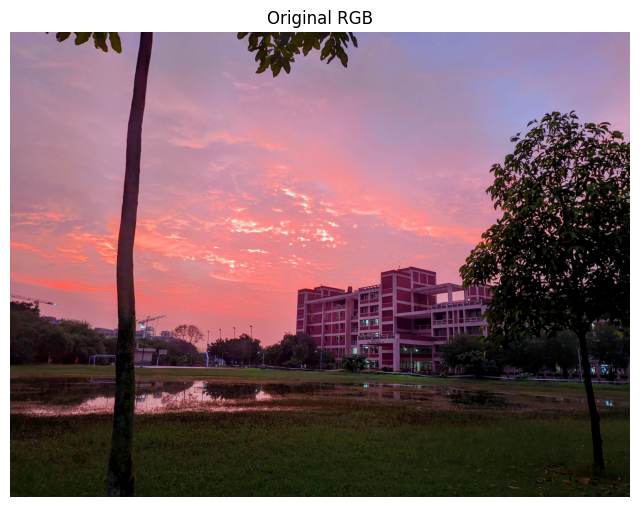

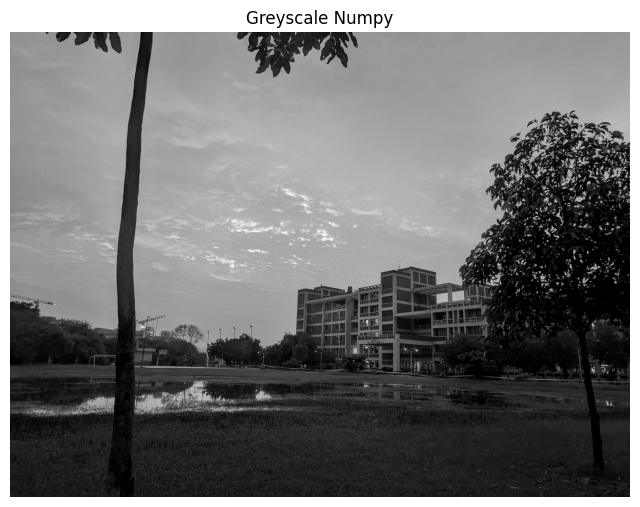

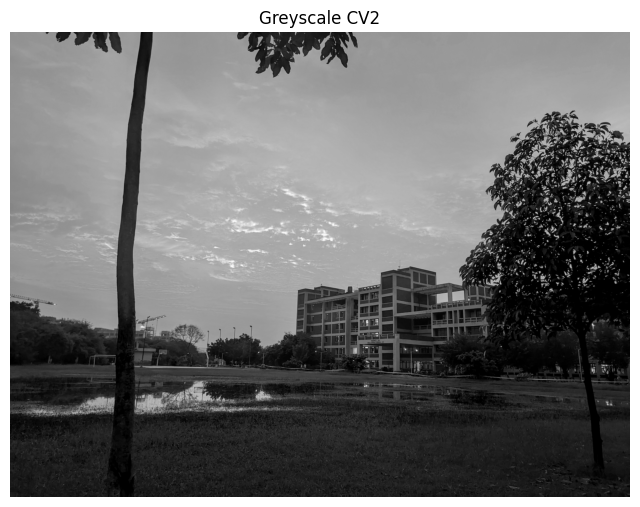

In [ ]:
from PIL import Image
import io
import cv2
import base64
import matplotlib.pyplot as plt
import numpy as np

base64_img="""
/9j/4QRdRXhpZgAASUkqAAgAAAANAAABBAABAAAAABAAAAEBBAABAAAAAAwAACgBAwABAAAAAgAAAA8BAgAJAAAAqgAAABABAgAeAAAAswAAADEBAgAVAAAA0QAAADIBAgAUAAAA5gAAABIBAwABAAAAAQAAABMCAwABAAAAAQAAAGmHBAABAAAACgEAACWIBAABAAAA0QMAABoBBQABAAAA+gAAABsBBQABAAAAAgEAAPcDAABtb3Rvcm9sYQBtb3Rvcm9sYSBlZGdlIDUwIG5lbyAodmllbm5hKQBIRFIrIDEuMC41NDAxMDQ3Njd6ZAAyMDI1OjEyOjEyIDEyOjU4OjU5AEgAAAABAAAASAAAAAEAAAArADSkAgAJAAAAFAMAADOkAgAJAAAAHQMAACeIAwABAAAAyQEAACKIAwABAAAAAgAAAGCkAwABAAAAAwAAAJ2CBQABAAAAJgMAAJqCBQABAAAALgMAABeiAwABAAAAAgAAAJKSAgAEAAAANzYwABKQAgAHAAAANgMAAJGSAgAEAAAANzYwABGQAgAHAAAAPQMAAJCSAgAEAAAANzYwABCQAgAHAAAARAMAAAykAwABAAAAAAAAAAqkAwABAAAAAAAAAAqSBQABAAAASwMAAAmSAwABAAAAEAAAAAmkAwABAAAAAAAAAAikAwABAAAAAAAAAAeSAwABAAAAAgAAAAakAwABAAAAAAAAAAaSBQABAAAAUwMAAAWgBAABAAAAswMAAAWkAwABAAAALwAAAAWSBQABAAAAWwMAAASQAgAUAAAAYwMAAASSCgABAAAAdwMAAASkBQABAAAAfwMAAAOgAwABAAAAAAwAAAOkAwABAAAAAAAAAAOQAgAUAAAAhwMAAAOSCgABAAAAmwMAAAKgAwABAAAAABAAAAKkAwABAAAAAAAAAAKSBQABAAAAowMAAAGRBwAEAAAAAQIDAAGgAwABAAAAAQAAAAGjBwABAAAAAQAAAAGkAwABAAAAAQAAAAGSCgABAAAAqwMAAACQBwAEAAAAMDIzMgCgBwAEAAAAMDEwMAAAAABtb3Rvcm9sYQBtb3Rvcm9sYQC0AAAAZAAAABQnAABAQg8AKzA1OjMwACswNTozMAArMDU6MzAAuBUAAOgDAAAAAAAAAQAAAKoAAABkAAAAMjAyNTowOToxNSAxODoxOToxNgD6////BgAAAAAAAAABAAAAMjAyNTowOToxNSAxODoxOToxNgAPAAAAZAAAAKoAAABkAAAAmAIAAGQAAAACAAEAAgAEAAAAUjk4AAIABwAEAAAAMDEwMAAAAAACABAAAgACAAAATQAAABEABQABAAAA7wMAAAAAAADeAAAAAQAAAAYAAAEDAAEAAAAAAgAAAQEDAAEAAACAAQAAAwEDAAEAAAAGAAAAKAEDAAEAAAACAAAAGgEFAAEAAABFBAAAGwEFAAEAAABNBAAAAAAAAEgAAAABAAAASAAAAAEAAAD/4QnYaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/Pgo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjEuMC1qYzAwMyI+CiAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgeG1sbnM6eG1wTm90ZT0iaHR0cDovL25zLmFkb2JlLmNvbS94bXAvbm90ZS8iPgogICAgICA8eG1wTm90ZTpIYXNFeHRlbmRlZFhNUD44RTlCMUU1RjY2MjIwMDAzN0Q2MUM2QkFDMjlCNEY5QzwveG1wTm90ZTpIYXNFeHRlbmRlZFhNUD4KICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0idyI/Pv/gABBKRklGAAEBAAABAAEAAP/iAdhJQ0NfUFJPRklMRQABAQAAAcgAAAAABDAAAG1udHJSR0IgWFlaIAfgAAEAAQAAAAAAAGFjc3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAD21gABAAAAANMtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACWRlc2MAAADwAAAAJHJYWVoAAAEUAAAAFGdYWVoAAAEoAAAAFGJYWVoAAAE8AAAAFHd0cHQAAAFQAAAAFHJUUkMAAAFkAAAAKGdUUkMAAAFkAAAAKGJUUkMAAAFkAAAAKGNwcnQAAAGMAAAAPG1sdWMAAAAAAAAAAQAAAAxlblVTAAAACAAAABwAcwBSAEcAQlhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z1hZWiAAAAAAAAD21gABAAAAANMtcGFyYQAAAAAABAAAAAJmZgAA8qcAAA1ZAAAT0AAAClsAAAAAAAAAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAAIAAAABwARwBvAG8AZwBsAGUAIABJAG4AYwAuACAAMgAwADEANv/bAEMAAwICAwICAwMDAwQDAwQFCAUFBAQFCgcHBggMCgwMCwoLCw0OEhANDhEOCwsQFhARExQVFRUMDxcYFhQYEhQVFP/bAEMBAwQEBQQFCQUFCRQNCw0UFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFP/AABEIDAAQAAMBIgACEQEDEQH/xAAdAAABBQEBAQEAAAAAAAAAAAACAAEDBAUGBwgJ/8QAXBAAAQMCBAQDBgMGBAUBAgIbAQACAwQRBRIhMQYTIkEHUWEIFDJCcYEjkaEVUmKxwdEzcuHwFiSCkvFDCRclNFOistIYJjVEY3PCJ4PiNkVUZJOjdBk3RlWz8v/EABwBAAMBAQEBAQEAAAAAAAAAAAABAgMEBQYHCP/EADwRAAICAQMDAwMCBAYDAAIABwABAhEDEiExBBNBIlFhBTJxFIEjQpGhBjOxwdHwFVLh8SRiFkNyNIKS/9oADAMBAAIRAxEAPwDpRe3qn07/AOyh/wB7p+/6r3T3B436n6WUrNv97qMWLtEbdv7qZ8FMlfe2/Sgsfh8kdrjLa/mg76bLEVgucblCncbptbf6LqRL5GBH7qfvvsh1Thuh1+yqiWO7ukl/sJaad/qkISIb79k32/NL7IAIOS7pu/8ALVLt2QAtU5JAQl9iNNUyASC89EJ0/kn0T9ha2mqYDD4U4/kmsLp9LKWgJOwUjHXCijtre33TtdZymrVDW+xZZ6JaaqFr7fFoia/MNFloHQ4HXdQzanzUtxZA4jNb6oUWPghjAzhfP3tOcT45gcEMWHlwgeCZC1t9PK/ZfQmx2Wdj3DmHcV4dLR18DJGPbbqbqPVdUZOIm1ds/NZ2Kvrat0riS4m+o3vqvVfBjw2reMcchmiaI4435pXEaAadvNd3xB7KVa3i6M4bJ/8ABr3XdIflHkvobgLgeg4GwplLTMvJbrk7uPmvBydK55u4z21lxYMNwdtm7R0jMNw6CjaemNgbcegsnsPhP1UkhzE+aAr1sa0o8eLd2xAACx+qTwTCG+uqWnl280+ptoteQBHRYdkx0KR33UkYFnOd5d0cBJkNXi1Dg0L6vEKiOmp27vkdYfbzK+Xfal484O4xwmOlwuqbW1jH5uZHs2w1B9VzXtWcSYtNxWMOlqZI6CMXbE0kA6bn1Xg7AZNySPrpZRlyQwY/Uc84u07GpY+WbDRt1pHVt1XZEAL9lYZYsXyGSeqTYo8kcYuCbWFxfRHlOcai3lZG4WOh0RfMP9hcM52dsZkWXqHoUUjSiDLnY/8AlN3KayOiJuwAbqN/xKZzbjY/ZC5gs5X3ETZVcbE/VKImR4Ntbjsje3mXsPRdP4YYA/HeLcPpOUZjJK0FltxmF/0VJW6OzpMevOpeEfdvs9RyN8M8MM4LS9pdqO1yF6O50bjbMFnUFLHhuFUtNE0MZFG1gaB2Asi5lvVfSYE4wSHmmsmSUjyD2kfBifjrBvfsJNqyAFxaPnFv57L4mxDDqrBqh1HXQOp6hhyuY9pB03X6eMqz8Lhmb5Lyzxq8B8M8TsJklo4o6XFGi7ZWixJ9Vz9T0vdVo1jmWSKx5f2Z8FzvEoG3T5psMr34ZiMVSDcMcHW+i2uPfC/HvD6rMeKRSRgGzZSOh4XLDMd9DtovAcJYpHjZISxTt8He8Q8XScWy86WxdaypREhgWXhzegG35LTsT6aLHq+sy5vS3sTFb7CcL9laoTCJA2U5W+iibGCN7oZIc47rybOmOxpVeAST0z6mK3JGtyQsuN55TmutcXRtlmZGYxI4s8rmyrzObGDchWEmU5BqXG3dR+WiKY8yQO9NrJlqjikQNHURcKtFGYqtz7bG/wB1cey50ULhl/eW0ZUZEc8gdIc11t8NPxDDKmOqpszQ0g6A6/ksemhfPUNIbdoNivtH2buCaHGeHDPiGDx8lpAD5BcPP811YoSyTUYns9PiSXelwej+HGM1tb4YxVmJQGC8JLMwtcDvZfBvHNc7FOMsYqGfC+Z2vrclffHjJx9h3AvBk7p2R2DMkUN7ZidLADsvz7qqs4rXz1bYuXz3ufbyuSvo+rlKHT6JMxzNNOUVRyOPuPwa7rGi+AXXSY3hUkjjMy5XPObyQ7TvZeNhktNHmSezJ6aQl/wjK4W0CtMNiLDLroFUphILNDRbNcgnsrrbBwzf7C6daFDgkBMpdnB+lk9ihuL6E/dOLqJTs3oJvxj6rtsOkPujPouHYepv1812uHH/AJSPqF27ryOs4NIlu1yD5JpWXB0Fk7SHbIiNNSvGumZad6PUvZo4ApeIeKKp9QHEtIa1zXFpGl1j+0/4TQ8B42Kuja7lzEDW5sNNP1Xp/skUzv2/VT/KNT+QXpftQcFM4m4MqqgNDqiMXZpsvu/pmN5+jb8no5LT7V7NH58fs51VGHNte3wqs3Bpi45Ld10Nfg9VgT4hOwhz23t+ihvq12y8HLknjk4nlPDomUqLh2cOBeC1l10cMQpYgy+ZDT1Lycpt6qV502/ReZlyym9ztgiQnRB5oWnpCGR2hAXMkbGxwLjX7G4lp5XOys5gufTZffnDdczGOHaWeOxDhuF+cTpDHNE5oO6+5PZ44jZjXBUMOYOljYPVfafQ86injImri5I9EPQLXQ330sjlaM3Uo19mnZmh3npKTLWQ6JC+y0ES/wBkybUotCEimJnxbJxq6/8AJODZNY2QZkmlvuhuE/ZItsEiRhZyRB6rJw7VCdSb6XQaoZRnc6I9B/VAd00DAf8A7+ibW1/NE76IL6FMQ4PkoOJphBw7USOPwsJv9lMG7WKxfEuqFDwLiUpNiyne7T0aSnDkxyK1R+ZHipWNreM8QmBzZp36/fVYVN/h/kmxSd1XXyTP6nSSOf8Ae5U1LYN/JeX1ctfUOS8GGPE4uy7DbICQ7XX7qw3Xt5qq0uuP6K7GGGO7T27LCL9SZ6EAgLtDbfqp2xjL+oQxa32Uwb0jbMtO6joxz3Iw39PNRSA5vRWLeqjfb9FnkyWjocr4IJdWLuPAyHm8f4fEQMmcOOnlquJfbJodQvRPZ7jz+IdI/wCIBwH6LlrW0zbC92z9E6c//BkW+jGgfSwURaLXsp2xltEzy20UPb7L3YbRR4MnbdA6Ib6H9LInaBA7ZWMGxuND9E5GVIGxO6fNpqkxNC+UoMgvdEb7pN3UiGCYgqQoUBVCTEI+39kNkAAG5L+SSRbqny6KGgBNrhLtsl5aJ9dUgAN7DRI7/wCiLRN/vZIBjsl2OiSY30TQCaiO6C9lKs5F+Bu3dA/ZuiPuhcDYfVSiGC8XA1S010/IJD4v6Jdj9FRaB0sdCpGvKj/LdSNbp2/JJjYtNf0T62Ou6Qt5pa2UiFl7bJxv/ZMlrbdAD/b9E3fukT2zemiZWaBjvonchBui8tEhDdv0T+eidDdImghb+qQ6Tom/3on7IGDlFyjG6bROgBOt6JduySbskAzkbbeXdD2RAdKHwJj9k5HT2TJwSUIQxG2t0TbWKdN37Kh2Pql2T6Jr/wCzsmIXkl3SLSlpb1T8CYkOqJN6qRINvf6FB8xRjZF2OoTLoE3KYjXcJ++ya9jsgQxFu1vO6drCQUbWi3VfdGGi39wkMiyonbpu6IPFjdMl8kL7W2TDKSdOpSPaOwKElbKSGRu2Svt9U5THS2iu0AlK1twXHYILaBRYvWMwrC5qiQhjAwkuOwASvySm/B8z+1vx/NT0Q4dpZGcucHmXF3Aa7fYlfM+GsyN7Fx3V/wASeKJOLuPsVr+e+WATZI2k3AA009FTh6QCvnuv6lZKxrwYOFZL9y1Sx8qd2Xpubn1WhzDG34iPuqbXM0fshqZ3NZdpB814ctzQGsa50bpXNNvOyx4JeTI7VdZX8UUDMGFNBTg1LxldK4bedh5riZPjJ9FtjUYIGV5iDO99+5ViOd/JLLlRxBs0wFha616+kYynibHHeXQfmqtzewRx69iLhnDJK/FqelY055ngD11Gq+yqX2XsIruCWVU8krMQdGCxsQFr+ui5P2cvAGKojg4hxSTLks5kRbv9F9WRPa1rWRgBrRlDR2C9rp8DitUuWdONvBWl7nxvhvswcZ4o92XD44aUnR8sgBsouKfB7hnwypjPxdjULKh3+HR0wDnv/S4+q9/8ffHCm8L+FpOXOw4lKCyCFp1c7zP0XwU/G6/i/GJ8Xxiokqqp7i4ulN7egGwC2lijD1R2ZvLqZS+F8FPimSnrcaqXUMToaK/4UbzdwHa57lYVLBlrXEjS11sV0rZKiWQd1RpmDM51viXh55vUcM3rZK6PffZUp6dxuRbZaIYbFVx8Z6lzRJcaMOaldzr3shYwgG9t7LoJKJlQNW/cKk/CjE421C6FkNFNFCnaQ7cd+y1OZdgZcKo+ndC74f8ALdHFcE3C1u0DmjSgFojqS3vqjG5TRizQLdk5iGS11xsyXIRDrX1snSj0d90j8Fwml5CTENk4uTYXagbqf9VYia0u9FvrpC5NjAMfqsFD/dZ5InPFiWGxI9bKCVjnOfIdS45iohhz2xh7NEDq3LZjx1bLhu3sIGdv4g+qANeJPRTmxY0XF0FjYbrfwaamHa9x9iiYLDfUeabQbAn6J5QQ3v8AcLGyXJjmIyyNfe2U6rYwXHX4BjuD4oD1UtU2TTyvY/osSKfM7I4fmjnjErCwC5toCd7roxz0bhjlpnGTPub2nOFv/eb4J4fj1HaaSlhbMWtGYlttbfovheCra+Q2Gp3/ADK+1PZV4qbxV4NYvg1TJzJaTPFle69hbQa+hXxbijPdeKMUpWtyMjqntDfIXNgvS6qpYlNHbmk449D8Pb8MsyfAVnEgSDW7/NXnH8P7LPcTr02XkQOSPBYEhso5N27KKE2dqpswXqQ4JF8v2UDtlNexN1C7ZOfACdsFM3cbb91GGgi/dSRQgt37rmlwUuS403SGhTNITP8AqvLyrYoVU/lwv6spykWX2p7EFRNL4avjOzZHADyF/wDUr4krAHQOGocNdF9++yLh1FQeF3Pp6lkpeS5waR0nyK9r6RpjKSOhzXbKvtXcev4c4NNBSSBlTV3jAG4BGv8ANfG+GtGH07i92buSe+67b2jOLp8d8RauGSQugoTy2NLtA7e9vovMamvdNHkaV531WcuozKC4ROeMYqKjyXsTxiKYZIGWd3cs11VL8F+ygDzf/VO82CwgtHByOQzh1H+JCQ7W10Y2ujsLKpTFdhYfDJW1scMIzOvoFs41wrX4fE2WWPLG7W9ln4Bif7Dxujr+XzOU/MWEaEeS6vxB8U5OK4GQ08TYYg2xGUA3UxUdJ144Qcbk9zgv3tkzb3v5ImHmjZMGb3WbM2J+p7eaYbJ7DMNOyYbIhyYDPa3L9/5qtLo46qxI4FVtC4rc0gRcsXLkTd0Wh00UcgsCmacE0fdDNY222807HmwBKRILQPRI5yuBZpypgXR2+qNzSL6KF11pHgaJOfvf9EHMGu6B26F30V2FknM/JSCfUEAKAbn6oraLqS2EMCMx1SBJdvomy2UkbTZNnSgXC91WrIwIy9wDQBY2VwttdQ1hbK1rL3zENt9SAuKO8qIR9deyNQQ8G+EOOYtWVQpH1gkMchNsvTYf/M3XhfiV4qQca8MU2GSUEbsRgmObEB/6g2232X1pw5hGE4b4J08OLxMpKZlMHWl0Dunf7/1Xw7i/u9ViNXNAAIjM8s8stzZet1c1ixUdnc0Y5aeSi+K8DdMllSlkucl+xWxAeY3J2VarpWXuF4OOW55ttu2YnuwuDtqrcYOT/RGY2xuOoRWHmF1dxgNFfXyVhmwVXW9gCUjmaNbrEC3IblxuVACLHUKlzzHIM3kp2lpt1WRKLJtMVruRNAuQnkGUiyiuc3+iLJkvYrVbXvqYpYnGOaF2eN40LSNb/Y2X3v7M3jQfFDhf9kYhZmO4YwNlA2kZ2cF8LR5Q12gXc+BXH48OvE/Da6WXk0NSfd6gnaztNfLcL3/pnVaJdtrZkRjdryfoWS6CoDhp5L5c9tjw3c44fxnRRA2PJqjl1A+Uk/cr6qe6Gvpoqqme2WCVuZj2G7SCsbjPhSLj/gzFMAqMo95hcGZhezraFfVSdx2KS3Uj8zKdrooxmd8Qvl+qnfJaMX3U+K4M/h/GKzCqrNFUUkpic125t3+irPgc7pF18zljplpHmwuHHk9l9i7jU8M+JFdgEjstNirM7Qdg9oJ0+2i+3qluR5300X5leHWJ/wDDnibw7iDnlrIqpsbrb2dcH9Cv02qpWTsilYbsdG0j1v3Xu9HJSxJLwZxjVIhDQXDzuphmt+noomEGynAXprgtjP227pwitceQ3Sa3TugVglpLd0UegOqd26EWzdlLJXI6X5J9FHY39LpDY5SSsn7f6JsQjsUF0SfKUWIa+ifdp3SJCG93DRS2UkE0DL1BP8tiQn0SXO5UbRGO2qf+/wDRL7p9LJpjsTtQdUL7liTvi36fRPrbVUuCWtiNnxdk790stymH9Fqn5MmAb7D8wNk+XfLunt9UtdfXVUQxfKl9UwSVIENqbJA5U5+qR2SE4gndEm1unsEEDjdHY+X6IBoiKpACdEyI6t+6a2m4Vkj20zeqcjfQIQSn7HX9E9xEexQ63upLJrLQmiNJEW6IT2VkhJ+yYG6dWUPpa9ym0/NIeqbuR9khAuHonG6JBYXKd7E0E5P9f0Q/71RBSyha6+XqEtdEh3/qn7d1IIQuwptfPRLt/u6dtsuvktBiai/X6odL7IvugBC2v180/dMn80AOdUkhsllF7poh8hDdIXTa/dLsoKXA7tkKe/mmTQhJG7Ne6e4tsmuhgSs1Pb7o3EW0UYCMHRYvksbKb+iLUt/VM5xslfVCVANqmfa38VkQIJTdwqTEIfDskNu3dEoxt2TGSDf+yWt0LUeiQhkkhZJCAR2T62H6pdwiSYAh9vhH6IHblF9/1Qu7pLkHwRpIsu2yH7raL3JuxtbH+qXbbVLuiVcjBvsk/bZLumKjSIRST6eqZUAkkkigBJyST/ZDqjabFAgUTN0shQoGWG/Fsid8J3+yEdtUnG1tlBQnfRM3c/qnG/qom/GepSApN9wgG6kkAtfS90FnZTqd7IKDadETW3N0LW2102Uo2+yAZDyyQbdwFLrceifT1TIJB79QT6pdxum1uoLQ57p7bfRBrceXqiGyTGwhsUJGiQN0X5IGmMO/6otPROm7dlDVGgJ3Oqfz0/NN2SSKGDRY6/8ASpEwAvtonCqIDa7J0kkqZNA+aZJLSyRQxCayfcjRPqkAw0S1eEsuqXqgBP2TduyfyTG1vogBsxtfsl2T9tv13Tdu35KlYC1QojawTa7/AJ6KWAnJa2CdM5IBsyYXuD6otLbIdbBAB5nX3SBIP3QttcJG2qBUFp6p+6FPc231SJFc+qYk3OqKw8ymum0A35J/NMQPIfdIFIB0kkkAJJIb7Jh9bapgOmO5+ifSyAlABaZh6J+33TDb/VLXzVDFmS8tU2trpJNjSElrdKyWikY2ltkjsny6bpu2tkDSsdDl0TtvskO2idlJDD6I9EtLlLRADJa+Zun77JvLUJDGO6dN33TZdd0AE7tfsm/3ol33Q2QA+qWXfTVMN0kCCI033806G5J2+6fy/qmxodDr5BO5p/8ACROn0SAE7kt+FN9v0RaW33Tga7/VUhDNZp+6ntZrvqg7nVHkb5oYIA7Jx8PbNdMdwpQwAWTAEjKNkowSTqntY7FJunayUjfwORqU7wLCx9dkO5T/AJLNiYMmrdkuyMbnVIW107poExWAH6FCDZ23SnNr+iHXNsmNDyjQaG3qowDbvbVSg6gIbBA1sBfS1urRN5qTyUfy7fdA0LuHJvP+yfTyTIGIpu5TpIAYGwKK+nZMkpodjfZLMbdXl5p+/wDqn7fT+aoQw1t+Se6ba26eyiTGhXTJJKShJJJIASJnxJkm9v6pMQ5Dh3H5oxHYlA1v+7I7AGyhxGkLZpuCmG/ZNukLd1nwWJt77BOfi+6Q0P8AqkNtk1uArH1TgZtv1Sbe49Sl3/slYWFqQB5FG69xqN+6Fu+n1RfKkIb5nfREW6DVAfv5aIjt/dAAOvbvZJt2NOg+qR2H1SPw/ZQzVAuba30TX6jp+qkO4Qn4nfRSMbIc37tvPyRC98rku38Kf5t/XZDKSE3L5fol/wBqWQX7pDe2rfupLF8u3dI28u6Rve+6cZvTzukwa2M5Ol8YH17Ja39FkZDjujbr9VHrdEO2g0HdMpEoefO1t0znA63Cjza76pgLuUKAJDndNpcjyTn/AHZN9/0Wi5JGS01+qXc3T6XVgODvokkl2SZLEnbf/wAJdttUvLRIQ+iXdOkgAXWzJOtqEQ3TGPQpgCkk6ySZQTtkvNMN0yhkhNcE51Q/7CcfknEaCKJriCD5aIE4KdFBdjqm18hmunaBb1SaB5IoB2nTbugaCHJjfN/dHpY/2TqgqgxUOY0t7KF2pzd0529U3dRSBUMW6lItsU+m6RAITKI9z62RN3Hb7pyzyKQsLu9UALlgvKaZ7KWllkkILI2lzidgBqVKT1LC44Mg4VxXlA53U7wLedkluZt2j4Y8e+M28bccVU8TvwInZGnzsLLz0DlhBiskv7aqmSfEJDe5TsfoNF4n1SXr0rwZy1Wk+CxGdO6ngOg237qrHq7ZbmG0EcsBc59n+q+enwaxhtsUbad909tbontbG9zQ4OF0J+6wNkhux+qZzki3UpnO13SMfIQ3Ucjt0uYVXnDyw+V7Jlxi5cGtw3w5XcS1wgoIH1ErzYMYL3K+zfADwGi8OaNuLYpllxuZvw20gHkPX1Xjfsg4LPU8ZTzuYXxU8N83YO8j9l9jzyuufovZ6PAp+pnfJ/p4KEVTfJJnLxY7boHPN9/yUQd/8sE7T5kr34x0o5ErJANDqArMExjIsbqC92t1UkbfxAnVgzzr2i8KwnFfD6uOIRMc4MJjeRqD9V+fRw18ErshLowbA+i/Qj2geHq7iXgWqpcPaXzWuANzYi4/LRfDFVRVOHVclJVRcqVnS5rhsvG+pY1HGppGEo3Ar0EREI/mr7Gnv+aFkdgGt+FTsO3povi5yvczjETfwmpnbgIyQUso8llZqRPNg76LLml5rwtGrl5bdFl2Nsy3hxZhPkJMN9knbJxsrMx2Nvt+qhqobDsrAkazbuoJH81wYB1W7Ko3ZMY3Kj2T2a6HhTFsbjhx2Ezzk2hiIOVxv3K+4oKamwnDWw0VO2mpo/hYwaAL5C9kvw9kxriJ2JzwltJR2LXuGhdbsvsCqIfTSDsF9R9MhcXJntZ3ohGFnwf4/cWYjxT4iV1LUSn3Sis2OHdu17kLz6nZZvl/Rdd4xxmk8SMWGXVzgdf9+S5UHpvvovO+r5pPJo8HFklqlS9gZoGyte35XDuVgV2BRQwPeBnO+q6Qt0CwMfxARN5Y2XjYJz10jnlCjl25rubbLurTRzGt/dUOQ6j95Wo4ugL30YrkFtrJWdrup9B2TE77LI1ogv1N1O66DB69xJZf9FjHZS0Uphla4C5vt6LkzpTQHYRmxJ1VgjOwDT7KtSymWNht22U4JLwLAarwpcm8I3I+oPZGoX8nEKt3wgW2/wB+S964up48TwSeCUdL2kFeXey3hpp+Dpp3tyh5FjbdercRVMVJglRNPYNYwuIOy/R/o8NPTJe5tn/zP6HwB46+703FLKSnt+Eyxt2N7/nYrz030W/x3if7d4wxKs+WSclgvewGgCy+S5zSvl/qPpzs45q3Q+H3LtTlV9+xVOmFnDS2yvEaLxJvc2hwQEix0HqojLqb669lNJHk7qndxe7Q6eacVZchSzsAOYr6C9lXjdtHisuHyvGWT4RftZfO8o1IvdW+EuJ5eEOI6asY85GvF7bWNl63Qz7WVSHCXMX5P0rqRch3ykaFQ2uszgXiim4v4apamGQOcYwDY97BajmlhK/SYSU46omCe9Ad9v10TtFtk9720/PyTuaNf96LUpIFp1/ujGgzXSG6L4AmNjpXPmm1ukUhUgxe6a5sh1ui1TMhaprElP32SP3TKside+xTbqXdAd1IgS3RA7dEShvcoLoTB1BcP474gcO8NMYk/wD1d7TftcLuoxdwXkHtZVMkHhRiGQ5c7cpTjzZPlH5zuPNc7TYn+atUxsDoDdRZBHZ373qpYRoLfqvHcnqZSVclqMAsOXR3qtCK0IG/5d1SZEMw/ldXWaN3CysqMGySO2v1NlOEDT3RA+qDohBpg/8Acopvi3CmLxZRbtQ1sakM3+Edl617M0XO4vgc5urHNv6aryatvyzp2XrvsvNy8XZQS4Fzb/kFjGL1o2xbKTPv8/8AxGO+9tVXBNhqrcjctJE2/wAvb6KvqPqvoIL0nhLlgPOqF3lp9VIfiQW0P1To0Aa3qRCxvokdkIB8kgHd9EwGiTye4Tg9O5UC8jtadNUzk6F2yAY6Yk3OqZI7oJsbt/dI7JrWI/unOyQAa3/unvr2Stbsks7ASbW6Id01j5IABzDc+SH5lKQgJshMe7GAuEfcINbItbLNliy6ndIC190/noojfOkiVuwb6lOzdObZtP0T66fTyVFibb/uspG7IdPJO37KWSP/AGS8kvjum7BJcjXI909zbtdMUm7fxBVRVDeeiXnon8v7IUxj6py497J/JN2/ugQ+tjdIWum+ydIAsot3TNunGybW6Qh9PROhS11RQD/f806bXzTd9kALS5/qpO3khybIlLExX9Ck0/7Kb/e6fsmthDog3Q5Qg10RA3CaCw9Czfv3Cjczp/NEBcp/yd9UwsXY6Ju6SLKLJhVg90ha4v8Amj+6HKPRyCeB3bu+qdK4tawSa27tggobvsnIu37pZD+qWo0QJLcdr7dkbn27FQgnN6qRouDmKB2PkB7JmstvZFHYNcUWn+wgYBABNhdREeislgf3TFqNhFXlOsf6JzDpfdWNbISQAVSFuRRt/Eyryb2o+K5+F/DisNOCHSxlmYdiTZeuxm7wbfkvCfbGY4+G8thpcfle5Tk6g2Uluj4uwPDZJ4OY1jnW3Pc67qYzOp35HtLXX8lveHPEcXDWJsmq6FlfTD/03vtcqTjnGY+LMbNTFSR0cDRlZHGNAPU918jn03ZMlGzJhc8t0NglLMScjx1+anoYG08okcMzR8qLHKyCumjEdOICBY9RNz5rg1i0mLO2wc+/YrKlkJed1o1shHR+8vXvAXwOb4ozZ6t7oaRhzZrDQW9R6Lr6fFLNKomeltnkWHYNVPqowyFzpHkZQAdSfsvqrwc9m6XEm0mM8RjkxDrbBbUr2nhvwg4P4PhYKTCoJqpg1qZWguNl1Dqtzm5QMotYAWAH2X0GHo4493udUJpKor9yenip6CljpaSJsUEYytY0WAsmmfJT0c8jBdwaSPTdBEM9jfX6LjvGPxCo/D7g2srZ5WtkDC2NhOrnHYLvfpRLPhXxkx+v4u8TcWdWyFzaWUxxRk3DR5rAnmZR0IY09ahiqarHMRqcSqSDLUPdK70JJNlWq3ieX/KV4GXPc3Xgie7oFoPLJtdSww9OwUgIy6W2VmmiJYbheXkne4V5M6rJhi79QVWMuB3O6u47FyImrMMlo73siJlLk0YpvJTgMsb6lZNLO+cOLGl+nZbuG0EtdBzBG4hu5A0+6NLFGLkVJ4QRpdZszH3L8pXaYZg01f8AhRxOldfZjCT+QC9N4L9mXiPjBjpIqN1NHoc89mA3+oXXixZJ8I6odO2rujwWnqW3MZPkrro3ABemeLns2cSeGtMMTnhZNRD/ABJIjfKF5dTVDZGh2YOA7junlxPGrkjCeN42rdoN1rHSydhFjp2UjdG6JCMkaWvZc+xPI7YQbZPmVykoZea0vaq8AfzGjLfVdVSR2ia6wvbyXD1OfRwNLVwJzbUrsrQ5zRo31Xd8LeDUHiH4ZVWN4e9zcVoc14w24dubf6rh62QQUcj7ZjlJF/ovrf2KMLNLwZVSzND4pXuJaRcHX/yq+mY/1E3FnbjUVCUmuD4amYaSpfBUNex7D1tk0c30Vto6A8W+i+wPau8ARi0EXEHDNBG0xXFTDC3V4Jve3p/VfHtVBNhNTypWGPUgsduD5Fenn6eWHdjyYIuKyw+0OEgOtqfsrRjDo1BDNE07qxm6Hbea4X7nFJFb3QB4yFG+J/ND7fCha7rOuVWGyOLSolInSz07wD4zPAs2LPzEQTMvI0HS/n9dl5fiPLq+IK2sYcwqZXPP5k/1V/DMZlwqmqY2xh8cgIcHD7LKpatkjzcBq631ClBROnLkUsaj5CqzyCs97up3dy1KyjByyXBPbVZskRa4oxHKiMC9vqiO6drOrVGW21F/yXfGLHyMdB1BCBc9kViXbDZMNSr5EEAAP7qVg9VSqp/d2guHTe7vp6Loqvg/EcPwaDF/d5DSSa58pyj66JOK9jeEWygIg0gp/mFkHP5obc2BtYjZGLXXi5dmLh7hZACQ7UFe2eB3jVF4WcH4tRSsdM5+Z0LL2FyLD+i8ZDAAN1KC3KQs8HVPBKog5OL0rgWOYpPxDjFXX1RzSzyGQ+ZuSdfzVDW51U5JuW27IOWbbpZJyyT1kSd7gs28/ukdSnJI/wDCAAuIsplKzMnZlypJMb0bJZLrnlMaQ1rj7qvKzLqrZBBVesePPVyIyKWxHHud+6lvp3/NV4AR2UshsRoVuxSIi7XZECUI3Rt3Vx5JI5Bv9FFyyCVYcL3uEJFltsWpUVdnWunk27JiND9UDxcINb2DsfNFlUQuLJZrXV6iKQZtb4VXMXf1RHdTxkcvZCHpRUcNkwZvop5IwHlGxptt2XRj+RKKZVkaAPVODdTPZmN7KN7ADYLexuFeQgAdUxkN+kFzk77NZtY2XV+HPh1ifH+IxRUsLzCXWMgBP9FnCM8ktMSowlKWmJgYVhNZi8+Snje5ziR0grt+CvBPHOI+IaKlloXxxcwOdJlJFvTRfZXhV4G4NwDh7HVNOyqrLAkuAsD5L00SwUVPLJT0sbXNaSMrNdivVxdFCD1M0SUJXHc+bPakop8P8NcOweOoljlpsgkA0EjQLAH79vQL5ObTCKMhoBb/ACXq3j7xpxBxLxpV0dbzY6GF/wCBG6PKXa+oXlmMF+FUt3sc0HTVjv7LxvqblLIscfBeVSSSXjcz2VDIqiRgcdlFVTNy5GEf9K7HwO4DpfErizEcKqZ+RO6l5kBPd3f9FxnEPD1VwlxViOEVZu6kkyF3n6/RQsEo41I5NLb1FYx+hRMi/JSGx+BE2Jzs2v6LDgzHp4xn31U1VSiaDMz427qCNphlAuCtWCRsY23GqhzRek5SVtiXt+igopnGvhhGpe8N/NaeIxcuqdltkI2VGVmaz2nK9pBDvK2q6oSUuTn0+s6vjHhDEOD5ohWwyMErQ5hIsCO1lzjHk2Fl6jxv4k0/iXwTgsc7TFieHgMkNrcwBtr/AJi68vDMoKvNCMJek3lFx5JAPVNNSCaEud1A7g91K1TRblc2prdMzpHqfgd7SGM+F+JU2G4rLLiXDUjhG5khzPph5tJ7ei+78KxCmxSgpcSoZRNSTsD45AdwV+XFXGHNcNgQV95+yzjlHjHg/QwUtaKiSkux8dzmjPkR5br7D6d1XehplyQ5Hiftp+HgwTiKi4qoYC+CvHLqC1trSa6n7BfP2HVbZbg7hfpD4k8FU/iJwLiuBzNHvEsZdC4i+V41FvJfmpU4fVcNY9W4fWNc2oppjE4OFtiQVp1eD+ZG8ZOUafgkma1uPYdObtibURkuP+YL9OsCLavh3DZWm4dTsFx26QvzMq421MIaNXAi2XsvTfD32n+NeAuRTVTxjOExgRiCcdbQNrOH9U+hyrHHQzmdydI+8HQ8va6Nt9F5l4Xe0hwr4nSCiZMcLxcNBNLVDKHHyabWK9UfFYX3I12XuQkpK0LVvTIi3Ukn6J07XBOmMA699E7QkTfsmdt6pBQ90zr3/uEbmgjMLZimypByDr5Jf7080WnmhIuixCuLp97J2tFknHXzWblRaiDkuLomXtskN7BI2WbkaJAg6J+6fKAdE4HV/dZvcpbA5dQnO+yPKgJRQWwXbFIE37J3JK0/AuUItUbmKTsiy6K1Mhqyv56XRFuqndGQFGW3VqZLiRtablPr5Jsx8k9z5LSyKY3dNr5I7hNm0RYqYKSLMEtfJKx0D33/ADRhvSja0k7JwP8AZVaiXEj3+JNb+H9VKWeiEt/3ZUpGbRGO6fX0RlCt4uyRuyWVOmdo7KqAZ403/wClREaqdRuH9k0Q9gQLJ+yWUeiWnmtAGvqn7pJIAWiWiQ3SQA+hTnS1kwCdSyWMercfml5peadSCF9E9hpoUyX9FaZQ4cfL80vtlTJ29kwEHaHVPrdN+afsgBxf7eic6/6pkTd/RJk0K2qSdJIYLrbpkTkKaEJJJJMaDF76FODsmH0RlZsCNxNgjB9Esljv3T2HmlYqY7Qk5Kwt/dMSB+V0ihra/wAKWmXb6J8zfPukz4VSGODYnROmbZOdtkhDH4nJ+xNku90ibd/sU0AxfYHT/fqmzmx0H3TPN9tkNtFaQmw2vFnJFwsUCbss6Qbjl2ibun7/AKpLZKiRu+ibNoUu+ydMYPqn7jZNm6tkkgse9ifyThCn+U/1QgESmTH4gn0V0ISQvdJJSA/nomRP2CdgUAEOyfW/ZP22KFZmg2mb/KnbbMXJ+x37p22QAihya7lH3TaXToYOtt0QG3UU26c7eqQNbDptbpeZT/VNAhEeqbv/AFTptbdvp3WYxee6Q7pdkTfhQAIFk6fKn+6miojptU4ske6ZqM5Np6fknP8Aoh1up0i4CFgd06SSENCSSQ+Spuhi8903bYhP8pS/sswGSSSQA53Q6+n2CdC5IBaeqXnqnbsm0TQC7f1TJ+2yZUA3np+afLplSa03/um7/wCilIaFpe39Eu26dn9U+Udv5IoKAylP5H+iP/eqZ1sqmgoF1tU3dO7dLsgQh63SLt7JZUsqYqHF9Smvrt/ZP9kvyQFDZk4OgQ6eqWt01Qh7/wAk+b6bJm9CbsigHduh1/35p0k6QWNl0TptEnKChgbdjdH3/rZMLevkizH8vJHADDYpeWiTtknbpWUkxdymT+W6Tro5HSGSc0JZddkkDob0SKfIhcgAxsHW+qdCL5eyftfbzsmIZMiv6pa/MkMbT1Td/JF33/VCeyAGypkaE7oBjJdk577prH0/NAhxe26fX0SBFrWTBlulNjH/AN7pnWT7AaX1S0cNQgBtLbJ/+1Noi+XtsmhAaX9EYPTsN0v+runv09kFaWDYyHNqi1zJ2pwddVW49IDgc2gPUkL/AH72UqHMABYpSLsAJy1Pp5/kkshWOALH1CQBF9PNCLgHUp76boAY7nQpfLuU4JuEJ3TsaHGvZLl7pa/9yQOozJjIjod/1ScTcI3M3+iCxsgpMX5pu6R2CZAwraHVM6+miQ+Ep+w+ndADX07/AHKZFaze32SHWdu1tUCsHRJt3n7dijB32ScQO6mxWCna4tTFJZmgjqUycbhKyYxkeX1TAWUgYD3SY0Dl0H17Jf7KX906Yx7kXJH5oCboj5WO6FYye4IRskb2t/NGG3T8tZlA9dkTmHtsibunDRY6BMkA9tSnya7J2lMTvZIdBDv/AFSadE19P7IcpYNkx0PmOifMllNv5pdtvqpbKpDa5j5Ja32TjdIqBjC1zZM7sitsiQUkNkFkm9/qn+H0SU2WhJjuE9/RNf1QNIE3vt/onAd5j6Jb28ktcu6TG+ChomRXGug9E1xZZ0Z6QUWqbtt6J7C390CaoX2H1TgXH3QpNvc6oQkHpm+yYjRP3CZt1QwS0a/1SH5JzumGxTiId29rpajZOm7jZMQTXHW6Zzuof1S1Sd6pUIIuSvpohRa+iAGA3RJaXCTrpCBKWlvVObEbpWsEWMFP90yXZMAjY20/Mpd90jvvmS/3qFCEOkAb7JIg4a6aLUpCb/sp/PRIJ8wsgYHnqlcXSHZLXzUAJ2t9ExSAunypDpsbz/ukLJJjomVTHJIb/qlmGmgTCxamZuFGpEbBuJzXVfE6U1eFzwt1c5hb+YVg2TxTZHDTuoU6IfB+bfifwbiPDPFOIvqqaWKJ0xLXvZZpF+2i5Vk1wRdfcvtL+GFd4gYbA6jrYKZkR+GYhtzfz7r58wz2U+MMQqRE1lO2DKSaoSAgnsF5XW43kaaOqozSldHksMkjGmVzHBg+ay6XhiuwOpimGK1EkTg05BHqS7sD6L6g4M8E+F+HOCHYPxbV0MNZKSXP5rQbX7H6Lx3xr8OOA+FaON3DuJMqq3NqyN+ezbb3Gi859K6spaVcUzy6V0bpX8u+VxNrpyOkFUmztDbHsrDZrtvdeROLTI4JXnpJVd8o7kJ3zNyosGwGu4oxKOko4jPNK8NZGwX3SjBscMUsstMCIytz6aroOD+DsR44xymwvDIDNPI4XIGjR3JPbTVe48NexTistPDVYnjUFG8tuaeKMuIv2Jvp9F7h4T+CmDeFLJJadzqmvlGV1Q4WsO4AXdj6WUmmzsxRhhTcnbLvhH4VUPhLw/7rE81NfOL1M7ha7u4HoNl2D9XHUKV7+YdwozEF9JhgsapHLkySyScp8jC1u6QJRXb/ALCEfVdJKJBvewIUoBfYt/NRMbuLKjxTxJScH8PVGJVsrYYYmm5du4+QCaTb2Ib8sXFfG+CcIYa+fGKyKBgF2tdq53oB3Xwd4l8RQcUcV12IUjMkUspLbC2mqHxC44rvEXHqjEa2YuiLyIYvlY3tZc9HDmGX7LyfqmfHjx9vyzH0+OSaM2AVhvwhRxsN9/zKlIOUfRfBSGth9EE0lmlJ8mQdlA6RxUxQNlGolMr7XOnqgU5hvI4nzQSbmw0+i6E/BzMAbFN27JI3NsBsqEafDuBSYziMNHAOY+Yho07le813se4jDhtBO2sbLUveHSNa3K1g/qvEeA8fPDvEdHXFpc2GUOsPr5fWy/QzhviF/EPD9FXPidCZmZg13l5r1Og6eOaUtZ7EI9rHHIolPgHg6l4A4Yp8LpCHODbySAWzOXQw6tc11uoWUBeSd0TTkcD/AEX12KEcapHPOTm235Pjv2qOBqrCuIm43HC40sgAe5uwOup/MLxuCQOiaN3ei/QnxK4Rj444WqaHltdI9hDbjYr4j4t8E+LODWzSTUDnUkbiQ9pv0j6eS8H6r0ksrWSBKj3VqXKOX/e1XLcSwuzB9tz2XQRudIwg/GFWxGjbPTnzXzWF9ue5hlTWxyDGuyAlW6cE21TSxGIuZ6qbDoc0o0XtatrMYollp9Ljb6KEt0AA81o1MTg3YqjY5hf6rFTZcgft+alijAA/eTAdfZSRZRbRZy4CPJ0WEyA04GrtFpYcwVFVE1zS67wNPqsHDakxEjvt+a9r8BfDOo4zxhk8sP8AykDg9zyNCfJebHBLJl0xPQwY3JqXhH1n4V0EOFcDYfFFGIw6MOIHn6rlPaJxGtw/gCuFIS0ub1Ebgd16PBDFQUsNNGMrI2gALnfEvBm8QcL1cBbmzRkW+y/Sukj28aiyJv16j85YXGV2Z56tbj1VqN2hFyoK+jkwrG6mllaWvZI4EHt1HRSs1uvg+vvvy1HDJ+uw43X+quRG7NtlXiiBcHeltVNHYOO268iRrjlYc0fQqE8b82hFlpvILQoJYRbbX1Si6NZJmU8A6EhUp6MyC1lsmnGYm35KJ8F2/RdUclcGcVTPXPZq8VZ8AxqPCqqVxhkNmtJ9d/5L7TmDZoo5mG4cLr85OAIxHxnRSHpc11833X6H4G8vwCkc91yYx3X3f0jqHlg4vwaZI1UiY6D+acAapt9907W6eq+gsxCaNN7J7HySvYJhqNCB9EwYgbgpwUr9kyoimHmBI3SQJ9LJobdDg2Cc7FMNQkTv/VMACbFMSnNroXbBSUCbWQmyJx02QOOqAJKf/F3Xi3thVDYPC+obcWc4D7r2qm1ddfOXtu1joeB6aAOyiSobf87o+DOTppnw9MxrLNA6v9EUQu0/T91JwzE2+K6KFpuBZePP7mdGzLcTbnvsrTAAQoY8twcx8lPrptt3UI0x8k2g0snIdY2t91FckhEJ2gJGwAPQSjDbdu6af4RbXVRtJKb4G9x6n4SfRexezNGWcaU7G9QcWH73svHav/4u5e6+yhlqOKYg4D8K1vzupxcWbY9oSPumpsGNPkB29FBp6KeoJ09AoOy9uPB4iQBIQOOpUjig7/6ILoDW/onBsiIGqF26nUhDSEEJDZPYW2SvuptC8i09UziErpeX9QlqQ6BNgdP1TO7oj8RTb/dLUjMbsl29U6RGrb+SnUyhX37JG1tkx32SOyz4HQtP0SSLRb7pwBrokDQzuoIXNLvJEbJZT/sJWNKhsvqhy2KkTOsiwBUbviCl7lCSmmC2BST+SbS6oB9X+Wl0+l03c6pHdABd02vol+aFKgC7bpa3KXlslp6KQGde41S7nRFfZN32VItMX2Sba3f8k6XZMB22t5paaJm3t6Iu6kBu+ic7JJ0CB7J9bp0+VKxWCQCQiyf7CLTyS0ulYrGAAH+qR2STO3SW4DEa/wA0u6JLpzH+q0jyJsV0/wDZN0pX9VaiTY7XdzsiNif7IT9kQFgFNAmE22bb9Ev/AJpM34kXnsgYvNNl13ReWgTdkAxWN9lINlH3Rt22QNDO/wDlkLv6J3/EhdsgobbVql+T7KFStd0/XSxQSJt2XbZPZ2/cJOGv0+6btsNkirodr9dt1I0i6iaLHa6k7K0gY7ioSwkqa23oma0eSbVl0ABqPS68/wDaF4XPFPhrXQRNzvjjLgANe69DLUp6ZlfRTU0gGWRhZqE5RtNGTXDR+WuGZspjlaWuacrgdwQthmTLoV2XjN4UV3AvF+IVHIl9zlmL4yGHLY66ELjGYbMBnBcWkadJ/sviutwZe62uDoeO+EBLUiEalUJJTzbsGdzjoFoU2A1eIVDYoY3yPebWa0/1X0H4ceyXUY9QRV+NTikhcQWwBvW4b/ZLp+hyZt2U8ehW9j594Z4XrOKuIKaihiJe54aQAdNl+gHhpwNB4fcLU9HG0NqCzrIG507qfhPww4Y4Ghb+z8PZ7w3QzuFyT+S6CeUya3X1HTdLHp40uTnlT+3gqSvJdbzQAXO+qkewZvVPlAIXcpJI1VUTxEQU7pHbAL4N9qzjObivj4YY2cvoaEG7GHQvPn/vuvvCrZnwmpF7XYbHZfmx4jUhg8QMdzPzu94Nz6HWy4Oqk443RMeGY0L+VSuazTQbKEMdkz/cqdrBlGgulI5pYdPovmTEjpy2V7u/0WlFGcullkUgaagafFot5sQ5Y2C5MvpAysYpJJmBrfLZZsuG1JjsGnpXSEdfwi11KJenYKVmaojTZ3ns0eF+EeINZXYfilU6mkDelrPi17r6x8PfZ44b8O3z5x+02vN2tqGg2087L488D8adgfibhuV2VsxDX277lfodOeZTRyHdzQdV9R0EIzx6mt2dbWhJLhmNhPBXDWCVL56TBqWOZ7s7pCL676eS25q98gDW2Y0agNaAB+SpWOhspYGDfsF66gkJq92ZfG+CU/FvB2KYdWvaGSxHK5+w07r8ysWwV/D2O12GiRsjaadzQ9h0Iuvr72sfGv8A4UwZ3D+GSluIVgyOfGdY2nf9F8cwkv6n9V/mJuT9V5nWtKFM5pO/SWgOnbur9BRc4DT7qjY5Tp+S6Hh6JskL7j4V8vly9uAkiSnwkNcH75T5LT6GuyfKFLTTcubqaC3yKOSnbI5zmDK0/kvn8mbW9zphHSZ+LMMlJI1g+VfafsksEfhewjci/wCuv9V8YTkRteHDQtP8l9i+ydJK3gExPaQ1p0+i+q+greTNHsme2RzgAtc0PYdHA6gr4q9r7wlo+G8RHEVBPHTRT/HB+865tYfdfZL3Hm/deM+1rwRS8U8CMmDT75TEGIDu76L6rNBTg0xY5VL4Z8P0GDSYjTBzTmfl3GypSRVFPO6N7nBdBR+/8N1OWVroJA0AtcLb+QKGuppsQc+WUHM7UOIsvisurFOhZIUzHjDhlvqVap5L3zaqzwzglVxDigoY25pb6NGt/oO6tY3gE/DeISU1bE9ksZs4OFio0TcdRjpZVAa6OzQNjmWNVU/JlLhqFqNJBOu4VCquQVrhj7mTjuSQYkDF1jZQvlaSSoQW27bIA439F6sMejkwjL3LF9dk6B2/fdGF10GpjfJ9kFrtKN/wpMiNrX3KljiNR4Y/GsYw+l1vJKIy3zuQv0Gx7BOH+C/BGjhxukc+mMLc5jZc3XxB4bUwq+O8GiaMzueHfa4/sv0vxrAqbiPgeTDaiJsjX02SzhcA20K7cWO8e56MXp03xZ+dfiDj3BuL07WcO0k0NQw2OduUWAN7jz2XGhnSNBt+oXQ8dcCV/AnEVdTVNNliMzzG+/xAk9vLRYjH9GW35L5fq/8ANpmPUSqb08AAkg6pO1+qjcRm20RXu77Lh0qznGJ1SSd8QQj4itHOgBc0kqenpL97KWKJtge6k7LllkLSAe0Bijy9NvVSS6620UDD1nUlYrdGW5JytdwqOIXa8abFaTiBZZtfq5v8KvHyXqsEf4Y+iFz8xtdN2H02SaRbddkeCnwEwf5kTfgchSTIC7HuohrdTF1mdlCqTAjfly/2V+LBxWUhexwvbsqEhvpdbGDVLY6cs0dodAs5zcVZ0Y9LOffHLTyFr2lo9UGW5XpXElXw1inC9LDSwzxY005ZA4dBGoJB/IrzyWifRucX3stYZbJnDTuR5TdEMoCB0zYmguPfyV3CcJqsfmLKOF8paLkMaXH9AunHGc/BMHOZXZ1EaKV0Rsd/sn93kgqZoJWuiljNi0ggj7FWMtu35rs0JGyjsUXNJadD0qSjwqoxCQCKF8jt7MBP9ExJfMWNaXOc4NA+pX2R7Lfg5T4bgzsVxumZNzupjZG3t62XVgwSyu3wZx3dy8Hynw/4c4xxTxBT0LKORrHOAc6x09Bovvjwk8NKPw44cgp2xN96LbvduWnvquvZguE0lSJqbDqaGQaB7IwCFZJMxXr48ccSpI6nNOKilSInl0jzY+itRzRUERklcAGi5v2VPEZzhtFNO2N0ro2k5GC5JtsLL5b9oDjvxEg4e9/ooP2Zgkx5Zf8A+qST5dr7LV2kCjq2syPaP8asExjjTD4cPw+Ctkw+YOqJAA3MARdum6zuJ/FrgbiWmqaE4CKaCSHM2qjjDXsk8rf1uvn+ja+eV8klzK4lz3E3JPmpKiJrhe59V8xk6hSzPYwll0vSj0T2cIZRx3Jj0b5GRYXL+LYfFCbi5H3C7nivw6pvF/xa4gmwGpilhbTtke9p0D+4XlvhJ4h0/htiGK+9RGpp6+DkuDdx6r1v2I8Zo6jjniGgeBTvq2l8LSdctyQPyK9fBOGWGlFRmlv5o+fazAqjC8TraGR2eWmldG4+dlXa11zr1rtvFvA6rg3xM4ho5w5pM+dhdpmadbj81xefrc+52Xz3UR0ZJROfJGnaF/6jdRsrGfm5WjpvoSqL5LsFx5rpPDnDaPiTiOmwiuqWUfvTuXFNJsHXFhrsufHj7koxIi9RkcV4FVYBVMhrY3QvkZmZmFiQufe10TAF91+0B7PFXxb4W4bNhsbJsXwuMEtYb8xoAvbzXw1W0k1JUPp6mN0U8ZLXxvFi0r2c3Rywbrgbi3HVEhoXupqg6nK7dS1EwbIWtCTG2+HyR8kSM3GdedJ7maba3Dp529/JWYnanZZ3uz4n9R/JXaaW1tVEoop8FoRZxZem+zDxnVcDeKlLS8zLQYkOS+MnpLwNDbsdQvN2X0Nrq3gNQcM4iweqjdldDWxvJ76ub/S67/p/UdrMvkiKk3R+mefk1jXNsQXX+y+JPbK4Gp8A8R6TF6S7GYjG58rBo3MO/wBdV9pU9U2qw6jqBtJEDr+f9V4b7Y3CL8Z8PafG4mF01C/qIF7A+f5L7jLHXAePaSs+NocoaN1ZfTRzN2WXQ1jXvLRoO616Y2B1XzM/QTONMzZ6F9LNHU00skFTC4OZLG4hwI2N19yey54yf+9Hhh+F4nIGY7h7QJAT/isGgcvjCojAYR5hdF4J8WyeHXixhGIEmOlneKeYk6FrraldfRdbJZO290OMXkTXk/RB7Mjj+SX2VipLX2ljIcyTUOadNVWJ9V9MmZp2ha/3STHNdMCf9hNsugifRORokAkd1JIx2KJrbjayQaiJsobLSBNkfTZNcfuoQbLByNEhEJ7nXRK4vfRC54t+72UvcqhbfnZInQaoe9057aI4GO/4imG6Wmmn5lLQ7o1IKFceqe/qnsns1TqHoBtoEelkmtFkradkah6Ae6RGqK1+yQb6KdQOKIy252TZNFYLdEPK9Qr7hm4UQ8oapCMC2qmcw3Sy2G/6LTui0AZRroPunyHyRW9Esxtsq1hpBGhR/kmIv219Unu0VJ2RJUMdkJ2RF3T6oHO3WkTFjILdQb2RfMnW6MmgdLfnumT2b6JjcdlopENDjZC5hvsnS1VhQDhYJiLgZb/kpS64sRrdMWnL1KrJoiSUhj12Thgyn976J2KyMNSA1CnGUDYfko8uqVjFbUaH1THcqW6jIsQgTQKTd+6SfTVAkMkn0vayZMoWtj3SS6kkWA+iJCLfkl9UxD5tbWTt+qbX0TsBSZIQ0S7J0yRYnbJn/EU7tkx+t1SJ8jJJJDdMaJG7Im6t+6AbC/xfRExZsESu2Q90jsn0tskMY7FQknz7KVx+n5qIkeQVJCYN0bTd3ZAEbPjOibpC8kg2O6f5tLf1TF1sqdQUN5+iThe2qLzTIQAObYbpy2wT6X7/AJIXEgW7qwoFN/v6JX1S/wBlWkiRd0u5Ta6J+3+iYDaW/qnGw/ol3S7HzQANvql5/wAk/wBku2yBCaUSBGgBtuyF1j6FEbpEaJ2KgbFKxT3SGxU2FCNvJGwdJQAXKkZ8OyiRY7txodkjunLt0spsoKG0QgOzbhP37omkAeqBjptfROmDLuTDwON0i3T+yYfRFb8kIEML+Q/qkkn0teyYwQl3TptVkA6ZvfdLz0RDbdAD9u6HujQJMEF56J/uEPf/AFT9yg3GTIu/dLtujgTELf7Cct+iQ+HZNlFgoAX+9Uv9lPrY5rJtLJ8jG1sUtfIJ02tv9ENJDFp5pnd7dt0nbGyXY/yKkBk2qLumyoWwDfmlqiTfkmgG7jRLXyKXfXZIbd0wHb/8qlpdN5o/l7qNQ6BeNQkR1HdELXNvNCO31UFCt/JI7DRLpyhCkA907jt9EKSBDpZdf4krG/qlYpWArCwNz9k9h/vzTZSlZOwobvullFylZO5191WodA2Kax8kff8A1Suq1bEaQSDdNYo02mqFKw0j902qSdMobKLd/wA0u+yXfZJZvkaQvPyTa/KnS8kihdk+ttk/btdML2+ya2ChrBMU6bunY6HGvcptf1RtTEjzKfgoG9gmBv2RG1wnd91L2YmAkl3T/ZMkY79KV/QJ+ybtsmXFJoTrWTO3T9x5JjskZi7bpfl9glqm011QAmouyZu+yLWyYA6sSPdPl1zWTtGu/wCSB0xMG9+lD26T5o7DyQa3y3QaJIcfE36IkkkxN2JJLW+ySsBJXCLKmIt9FlpYDdNylpm3+6XffT1CRszX+SkBvP8AdSsb/dED28je5SZoEANl/iQ3ukd0xNlRSFcAHX8wkTcbpO3/ANUu6CqB77J9NWgp0J3SourFlBCY6kqRDr/5TJoD+6X3Tm58kxBBQA5+AJ3nqGnclJP90DoZndK+/wAqQACX/aoYJIBO4WP66JaXT36du6kobt6JBLRP2+HtugAm7bJ+yWun90tUFC7Ih/sJW/l5pgddknwIZw6jqntnGyN30TLmGK1ru0RNvbZJv2S1sgBnadWqYuJ0tlSd8JSQUhC9u32S1ynZLIbfqkiyhNvcotXX227hMN0XkpbAHLoU/lon1t/RN/sqQHOyWyQ01T7jukykhkk/caBOkWCUkdkzr+X6IGB9k6cNIPVZOCEDA1S1t2+yPLodPuEJNgf6qNaFaM7Nc7WRbaIe+ZEBdoWUZXyMa+h8vLumy79tfJPkHn2TaWWoC08ikCQl23SUmbVBFNckJh3TqhApd9v0T+WyFvX2221VCC7J7phe6fW5QAk6Ybp2pMGPYJAJ2kAj6oyAert5KbJojOyR2UvJABudULqc280WOgNPRE1gt5psjs3b80VhZSPS2B32T5RcfW/ol3SynRMKHvYnL+aZJItNvsEhUMNtT+YTt07ptLfqnVJlD39Es3okEydgP+aZGBodAnyBKytILN/9EaZuyTjYJFcIj7/w6oSVKDeyY2122UamtidVkR0aiaNO2b6Jzb0TEnT91QTQibnXz3SBOb7oVI1JjfB477U2F1dX4fyS0bnsdC4PzMOrRfVfLXDnjlxthuASYXT180kbiWNkGrwPR24X6CYphFHj+Gy0NbGJIJW5XA+S8o4W8EKbgni+WfDqKlkw6UFz31ADngkg6Dy0WUlaOnAsc01PwfGlbhfE+LxPqTFiM5uXPkc57rDzJXOMralzjDMSXXym+6+3PaM8TaDgzh92F0QhbiNUzI5jLXjae9gviVwvMX3t5Of3/wDK8vrHOME1waOPc+2OwfKDGHN6pmOda2n30XdeGXhJjfiTiLYqSleynJGepc3KyNu9wvqvh72TOBsKo4RXQT4lWNF3SPflaT30A/qvKhhnmN+zCCvK6fsfF+CcOYlxBWspaGjmrpSf8OBpdp5khfZvs/8AgF/7voG4vi+STFpm3bDlBEAPr5+vqvUuFeCuH+DYXMwbCqegc74nRNAc4DYE2uVruefOw2Xfg6JxlqkQ88IQcMSr5ClmN7N7eSiN3k3TWs7YFEAvZUIxOGxmg5j5KQb/AJoRYIm7haIQnDXsmI0KJ3ZIHW10APAMpv6L5Z9qri6pq8UhwFjnNpoyJHgbEkaA/ovqiNubU22XzX7RPH/D8VVPgbMKEuJka1hIAjvYk2tqm5OMWydpPc+Z8vS0N7K3Ewho0uoQyzx5Kw37fkvz3rJuWRts5ockzBd3ojkeMp0H2UQN08jujsuCjcryPAF/NRvcCo5zck/J6IHa21IWiiYOY80tgR3UAJCklGyjeOgq0T9wnHMEWXO0Ab+aggzVD+XH1OJtZpufyXpfhp4KY74hVbIoaV9NSNIMlRMC0Afca/RaKEpPTHk7un6WWR3VJG/7OPAFNxfxQ19ZTSTUdOBI4/KTfS6+15WRU8TIYWNiiYLBrRYD6BYHA/BGG+HfD0eG0DBnsDJN3efNbGfOersvrOh6bswuXLOzPkUkoQ4Q7HKW+n+ihBF0QN/NesmcdMsCYuIATYjQ0tfh00Nc1jonNObPsAom6D1svlz2kfGHivB8YfgdK9tHh80YHMa3V199e236rRU02yNLe68HkHirRYdhvH+I02ETNloi8m7dg7uAVzRb+EdUEMbpJXSvdmc7UknUnuVZfHeM/Rfn3WzhPqH29hSWv1HIzEc06HfVWaBln3sAopoP+Yf91JTAB22ZdHg5jSkHOa691myMIOYhbDdm/qqk8dyG3G/mslMpRZQ+yYHpP1RltioyNr+S1EdDwhh8mM4g2ljH4jyAPqv0N8KuEouC+BKCljDTO9mZ77am+up+6/P3wtrW03F2HuccrOaLk+S/STDJBPgtK5ug5Y7L0fpuJdxzPZTawqK8jOk39d1I6NtVC6MjpItYqH59kUTzG6x/Qr6lOjmnG0fD/tI8ATcKcby4nHERSVRvoNie/wCpXmEbRa41BX6D+KPAmH8b8P1DKqNr3NYXNcdwbL8/sSp2YVi1VQsN+TK5h09f9F8l9W6aSl3Vwc09DSfkJh1cLIms6rqGJ1zvfTup2uC+WezIx0SttbZO99ydEAdYpAXB81BuA7Xv2soHsOU/RTuQk3CtOgJOF5/cuI6SR3wtcL3+oX6F8FVkeJ8K0UjLZeWPzX5z8w01UyW56SvuX2e+I48a4NhiB64hlA9LL7D6HkqTXuXPeCPQ0/5JPbZx+qYbr7Lg5A7i26EnXRNukqGOL/ZPrdMDZPm+qpAxIht/ZN2Tk6JoKQ6E6pB1zt2REi6okDuUJNv/ACjco5G+v3SY0MNjoox8V/5J/wCFIghIZJTf4nZfLntyVIlwbCqbN1GYuNvIAf3X1HBoSvj321a0PxbCqe+zZHEfkEVtZlLd0fLQhtGTc6lFGLPOqlYBJDa3qgh1k/JePPeTNYcUTxZdGFvqpnbhQw/H9lKSNdlmjox8ko1adPRPY66D7IYybai7FLcZPsg3IR/hH6o4R1t+qjteP7qVusN1E+LGNWZeTp5917b7JsE1RxqAwWHTc+QAXi88XvEN9F777Hbf/ptDgDbRrr+en9Fhjn/ESKg9MZH21UnlnVQ7A6KWpF3D95QfL8XZe/F7HjrgDvul33T6XQu3SZoMSPP11TC10z7XS7kppCHd8P3QojqEKbVAhC3mn08k2ibSw+pWRLdDOPWN/PdO36Jzb5gh0uW3QIScglN3S+1/soBDZx/vzQndERqhTW4wtLotLIdLpDYKQHvqnbaxTJtVPJXI/ZOShJsm7ooTHLtLIHdk43THZNC8g/n3S1uNk/kmd/ZWMXfZP9kxNk4Nx2QKxeaQNk+l0tECsHudP0Rt+n3Q29QnGyChJ+2x+6R/RP3/ALKAG1TO+qLy2Ta3Cosdtk/kmvYo/LRJiBddELpAXO6KxUWTYzQLX/ki77fkhToAWiY+aWt9x903/lOgC7bFMdktbJJgLS25SG5SQu3P0VLklhGyYkJha50T6LZIgV0Vyh08inVUik/cfcgXRgXQt809jdZNblBi9/v3T5D5IRfNophspDYAs0N03UAdFIo9cp8kDQ33Qm9j/RHfXcoDumhsa+vkjYdO33QZdSjLRlP0VqFk8B8wWTNF2oDYDdPduXdLSD3RM2xSFrqG/S1ELg+v0TSETHdO1wCDNole9tUWUmGBmT5XNcLeaEO12UhIQ3sUQYvheH49Quo8So4a2B2hErbn81iw+HfCtNTiFuB0TmDYOiB/ot82UeUrKSjLdoEq4bRlUnBfDdDMJafA6OGUbPbEAQtV8pd0tADQLAAbJrFNpqkmo8FflkEl9VA4hosrUt7qq4ant2TvcPBC617/ANU+UEh3f6JnXRMb3TsfBHjk3uWAVMrtGhhJP2K/NfjHEBiHGGOVLB0SVTg36AkFfpdi+HnHMEqqFhDHSxloJ2BIK/OPxH4JxDw94zq8PxFjWiWV0kbmndtzrdcXWNdpiW6fuc234T9E0ptFa4QP+P7qOS1sttV8zZMVuS0BHvIzBbTnN9Nlj4ebSFy0c1iuTKrIZcFi3tso3aPOiBrr5dSpZPhOy4aJhOjQ4BhfU8eYQyJzY3mXQuNv1X6SQRluFUjXEFwj3vdfmxwbgNbi3ElC/D2OfURytc3INdDqv0ewSGoh4doY6lpE4iAcO4X2n0v/ACjbXJ1ZIxjn6WXP+JHGVL4e8KVuJ1L2sEbCW3PxHWwXTOLaWIyPNgBrfyXw97W3iueMeIG8OUMjjQ0bvxyx2hff+ll6+SemIXb3PGOKeJq3jniOtxevkdLJPIS1pOjW9h+VlDHlMd7Wy9lWYBHEBbVdPgHAGMcRUclTSU8rmt3ytJ/kvms+SWaVGEk5TMR0pMVmgLquHmj3Q5fm30XN1VC6hqn01Q/JKxxBYdwfoumwL/4rlv5FeB1eyoFsabYyTmFkTXOiJ+iaI2H9kz75idV4unc60Uqxplljbf43ZTb1X3l4FYJ+w+AqQOFjI3N9l8MYRhs2McR0MEAueYLgdwv0M4RopMN4Uw+GQZXthFwQvu/oUP4cpEz3ikaGYc6/qvKvaT4vfwdwxTVRppJ2CZpJaLtAB7+S9QYepcJ7QGGOxzw/noWAGSdpYwna6+mdaXYo7SVnyv4zeJPC/ijTYfU4TQuoq6FgEriwMB28t/qublrsPk4Xa4vDqppDct7eev8AJc1xHwniHBeI+4VsToTa4udCPP7rPZYDruV8d1kmsrTjsaZPS68HpHhHwVT8bVuIRQ17qDFIGc2lfG6zgQQP5rn/ANs1Vf4juwrjGpGeCX3eWqcy1xsCQB97+qrcA8azeHfFNNi0cYngYS2aO+rmEahW/FHiHCPEXjZ+NYfAacTt/EY/u4d7fkt8csccG/JKkvPB2fGPg5TN4nwyh4exKnxP31uZrInguaPM+mywuMPBbEOFA4YmWUWYEtdK+wd9NVc8FZIeG+MqfES8M5Otie3cBYXtE+JlX4icdyB8lqGicY4YuxOxK6MUMc0siB9vlvwecvhEE72B+fW2YbFIbpMN2g3TgarfweX+CYnVIaFQlupUo2QAbjdhPoo2vcBa2qT3XYrvC+E1WN4/R00EZkaZAXsG5aCLoitc9BeKDlkPaPZk8K8Sx/jKkxKamc2mhs4PLTYbL7a404hp+HOGq14qY4pIoXFpJtYgLE4Cx3h3g3gyBjuVQSsiHNa8ZXXtuV8Q+0D4oT8ecaVhwvEZf2bTuLGtYSGu89PLX9F6eSSxY9z1Kv7lSX9zkuK+MsV4wxasqMUqzUPMrgz0bfQbLKAcyK4u7dY0BfG453nc/ddRhkLjTajoXxHWZVKVnLP+JLVEymOMoIsrEUHwn9VaNA2GS9u6jnkaLrh7t7IIxsUkTQNfJR26/h77KtJO/mfwK173Fy9jshsjYktladSgub2uP3UAl+HT6J26XZprr91iMN8gLdlVnc6N9meanABH+Uq7w1w/PxNj1PSQMJMrwNtvVb4cbyS0xMYrVLSW6Hg/EsSwg10dO90IBu8A2AHmuOkqHvmljkHU02X33xhwXR+G3gTUgNjhqzTEcwtFwS2xX58tZaeQHqcbkuPc917Ofo44Io1yQ0R1Li6L7CA3RNdPFcgedvNK11xLYI8DXKe5R7fLdP8AJ2QVSIyfRMd+ykkFwNVHl6igKQDjvorOG35w17quR9VZw+7XgvF1nk+wSNktEf1VPEXtljfmaNAVNK4uYfJVpS4QuY862XBC7suUrVHv/sy+DnCni7wnUOr3EVlPKQWsIv6Er6DwfwV4W8LcErq2ngE742F15Bc2AK+NPZ28TZvC3j2CV7rYTXOENQwfKSbB35r7k8YcTbD4VYniFKc8clOXgtO4ymx/VfedC8c8O3KNYwcIxUXsz88uL8dZxPx1jmIiEQMmlyMa3YBpKy5Ty48yioYwGF0h6nvLzf1K0aLDJcZroaKkj5kkjg0W7XO6nNDXOoCyKTyaUdf4HeG0/HnGdI7lF9LC4OfcWB1BuV+gkNFHg+HQUUDQ2ONoaLLgvAnwvp+AeFYJXxEVsrOpzt16BMS55B1Xo4oduBFb2is1pJUs00eH0sk0pAYxpcSTt5qZkIjaXnt5r5q9pfx4bhNPJw7g0ofiEgImc06Rt21TnNY46pG0YueyOG8Wvab4gg41ezhmYNpKa7HlwBa5wOxXBcb+PvFniFw4/CcS93ELnhxdGwA6fZcPTU7mROJ1e9xe7fUncpjAN9F8xl6+U29L2JlkbWlVsVGDlNP6+ahkdcd1bmi07d1WbCepeZFt7nOzMqYxnJv+q6zwj4qPAHHuDY4CWxRzhspBtmabCx+11zFbSuDnZRZyq1kMsuDSBriJGuDh9l7PRvTLUzCL0S1Pg+hfbEghq/EDCsSgsW11G5wI7kH+y8JbDyr76r3em4OxDx48JMHxrCpPeMXwWMwTQ7kjW/3tZeG1kM+HVs1HVxOiqInWe1w1B9dEuuxNPuJbM1nvFUC5gLbXVaWF8Ja5hs8HM1w3BGxB3CtDX/RItu02tt3XkwnolYo7H277JHjoOOOHv+GsWnJxjDW5Q+R3+MzYH1Xlvtp+F8eGY3ScQ0NO2CGqBbPkFgX+en3XiHhLXYhg/iXg1ZQ1PImbM2N1zbMwnVvqv0Q8QODKXxK4Lmw2uYDJLFeN3dr+xC+6xzXVYE/JcZaJ6mtmfl/T7uY89TdNUU0b2tzNOq3uPODsQ4G4gqKGuhdHJC4i5GjrdwshjucAddtbr5fPhlhlpkVkw6JWuDqfBngU+KXE1Rgxqmw1RgMkbXGwdtcfWy0/ErwP4i8LnGeuo5H0YfYTRgllj3v5Kl4HVr8B8XeH6iLpMspjcR3B0X6JcTYbS8WYDVYViELZKapiLCC2+W/de30/SQzYdzNuqTWx+ZFJWNlsL2+ivYbF7xj+FwXvmqo7/wDcF9BcW+xji1A2WbAamKsi1cIj0uHpdeI0nB+NYJxrQUlZh80FTTVLHPaQdg4XOy4YfTsuPLFxWxtjgruLP0XooDDgtFGfkhb/ACshxDCqbibAa/CatjZYKqF0Za/YXB1UsEgmwulLQbmFt7+dtk0Tsjl9ok6OLSfnTi3A8fBHiHjHD2MO5EkcjhA/sRuNfoserpn4XUuY86E6eS+ivbS8N5nYphPFlBGXmaRsE5aNnbNP3Xg/H2Hz4DW09LXQyU9Vyg7LILaHXT0Xg9biaeqtjrqMsep8lEO5zR+6qmKNuA9gu8DQX720VimN49lWxHNE0uuTb+y8HFKsioyhtwfdvsx8cz8ceFND75Yz0IFO597l+UWub9zovTg4Bx3Xg3sWxn/3YVL/ADndf+S940vsvuccrgjKvU0iYOGVCQPunFrBHlFlesrSQ+aXdHluSkWgAaIbFTCbtdMdUyLRQ5DSGJS7EpkP2WRpwE51gHIBexSd31Tm2XdUNDNdonTN+JOdtlDYISLS/wDZN2CcN11UFodu/wDdEhtonugpD3J/JE3ZAH6bBFn0/wBFmwCG4RKLOcw0Ujb+SQBdkyScalMYBABKYEWUpFyNPugcLfRFk8jWKE3R6ZRpqmI1stFImgDso3v12CIoDvsuiBjJDHcJa3KZ26M/RdCOeWwPa9kwvZEmdstUzNiPf6ISHEI9b7FJWtiKBtdujSDfuEg0+oRt2T6+SvUFAFmgsEaSZ3f6ItioY/1Rd9gm8tENgnqCmP2domZftZFYaKM7osQdkJal22+6Wuv0WgCAsmIv2RNROyoFSRCkBdSodzumTYGU5U4GuykDNNU+QJWBGYrfmhVrdV5W6lJACEY23UZTjsqESHZLKm/nuiQUCUydyZNCYkjsknG6YDh5uNQpGIEWkev5rNgGheSO3/lOJBpp3TnZIZXSTnU7JZStFwSIbKVg3On2UQBupIxYFJjQaZt/RP3TFqkYWlih08j/AGTuI80sp0uhAJRuBJKkd3Ubpb3ATGgeyWvom+6du3b0stEQOlomS7JgOLWTaW8kvJLsgBtfoEil5JkrGKxsnzJ9NNPNMd9dEWIXYfdNukiAsNkgGsfJEASeylDdkQCzbsNwLCycAhD3ReaRVDO2Q62y+iLW6XfYoGDpYogG/uhPoo3R37oAkzCycC6ZO0qihzslrZLul2QAxTXNrWCfTXRNpZADO2GmXzTpnXS1S4AdON0I2+6WllmAfc6JsqQ3RJADb/ZRJv8Ae6dM1jwN2S1TpZhl/ukNjjZMk3bbui7qWhApsuqLTXdMpAHv3S79k5v5Jv8AeyZQSBEft9kzt02hjJJ++6bKb6qQG7p0kkANlOqdu5029UtLf6ovl7JSYxxt+63RC6+Y5fyR+eiB2/Uf0UjQIvqlpc/dGLafRB8vb+qTAWmY32T21PnqhAN0QFkikhsuQJWTuv5n6JO3/wBEFjjdLuNEySQD+e6bS+ya+h1CWtwgB0u3b7pJ27dkwAcch80rJ7dX9k9kE6QE6e2qVtCgNINkgNf9EWVLL6p2xUxk/wDL6Jd/9UspZ6+aCkhOtdNlT6+X1Tt76IKobIbdtEtd0Rugc43tZADJNul2H9E333SANqF9042Gifp7q+ECGePS2iE3upAQO2Xuk62mpv8ARSNkZu0pfXdO7qN72QuaND37qjIY+iL/AHollFkjZAWA6yfzTOvmTnukAu3ZON9hsgT9x/VNCDcmSH0Syl/YfdBceSTsm7oQCCdtgi7JlMWqWt9h3SdfKU7t0wGcbA67JO180uyHSxtbZIAhul3Q/n37J0kgCeba6/ZLW2oSDkxIIOqqXADJdtkvm9EnfF09vNZALIXj9dSnBNkxsm77IHQxTa/3RaJu6o0G7pa6p+ySQxduySb5hsn+XbumISb/AMpdktUDGyhLL6/+U/zFN5BKgF2TH/eqe3omdc2+l0S4KHRIb6DW2ie1gdVNiGcPRLJ9Evun0VUg4A7nQJx9Uu98p3UjLX7LMYtNN0ySSCgm7OQi4J0S0yHzTNN+6lgkSN+qTb3Kdt7DZProucBdkk/l/dC46KgB7hPrcapd0/2UMtDaaud9rJ++6SWv/lQMXmnSS08krHTEitqmsQpG7beqYJAZQAi+XZMd0tPVSWkD32T9v7Jdtglr2GiCxap7k3uEN010CsIlNclNuUlnKVbIFbCGiYnWyVhfdRvJ1/LVYC0lPT9EgbE2R8sZvNMGnTVSpFtA+aQsU7yQ5LLf/RXrZP5Ga362SydR/wBhOCmIuPL7LROxjbJJiLEbp+yozaobuNksuu23ql8ScN/3ZVZI2qf+qZPYJgONkhe3ZMkpYCspmkW3/JR+SJj9lBSJm7D6J0LdQE4/Vc/kzXI7hoozHv3+qkPUklY9yB2+ycNPkpyBYJcvvZVrZTZBkHkgcC497Kxk0StcJqYWQAD1T2GqktZK2+myesNXgju1K48kiDr/ACTZ/RPUx2FceRT5j5IL+gRo1lWxXJJsEjfKbodid0r6eqWphbCvc5UJFin7JgdNr/VIQ1k7VKwC2yBsZudO6VgBYW2P5ogboreiRsEWJocbKljGFPxqhlgZUyUj3tLRLH8TL9wredOH3PZIa23R4VXeyVh+P4lLWYrj9bWyuNyZAL/S66Lhr2XeBuHZhPLRuxKVuoNS8kD7Cy9UD/LRODpr3WU4dz7jqXU5VtZHR0NHhdMymo6aKlgaLNZE0NAH2Rki+6ew0SPwpxgoLYx1OTuQzR6oiNUDr5v4fqiv/sq0gHtZIafRLt/qnQZiRBmyEdkYIA3QALjqkCk7ceqZMCUDMLXXyd7SPhTVUGIScQxOLonO6762X1gxxG6849oGOOv4DrKYzxxPeLta42JPoEnbg4hw/g+IWl1x5KwDv5qqHlk72kWDdNFNnAvqvzzqlWRo59CvZk/MEbTp+agmkKF0rbbqu6V2a9nOb6BccYmgnSZQbnzQGS5Avp6LX4c4YreK8SZSUVNJPPIeiNg1d9l7JhfsdcR1ULZayvpaCTcR6PI+vqu7Fhnk+1G36Zt29keER05mGt/uvVPCHwGxHxQqMxcaLC2H8Wqc29x5C+69P4a9j57axjsWx1r6ZpGaOGMXcO4vfRfR+D4VQcNYVT4ZhsAp6SBuVjB39T5rv6foMkp3k4OuEMXTxtO5f6HLcL+C3BXCFNFHTYLT1M8bQHVMzS4uIG+q7GKOCmjEdPGyGMbNjaGgfZRlxTB2+6+kh0+OG8URrlLaTAmObXcqEtVo7atUJYQdDoupVwCSAF7hE22qcN1T2IKZLiFFbOBb814l7T/A8OL8MuxOKH/mKe7g4Nvp3/mvcGM1vos/i7Cv2vw1V0rmB+dhAB9Qqa1RaMHtLY/N6mectnDa6usN221SxzB6jAcfq6SoYYnNmcLHe3mkxuoX551WPtZZRG1Rg1lO7nOs380UcFmg2IWpiEbQ4PVJjm66hOE7SMeCUbIZmt0da5aiJQaTMN7KrEVZD1OVeUA9lalhItd3xKtMel3otIv2K2Pb/Zy8HMI4yrTX4hVujMTwWxh1rlfbtLSRUdCymglEjIxlDgey/LrB+Msb4ac44dVPguRa26+5/Zi4jxPiTg11ViMhme4AFzt7917305xVqT3Z3W5YtpbLwesyHKD6qPNr90crRm+6j7/fuvoCVwDjALsIqcv7ht+S/OLiqJ8HFuNCUFrve3nUdiSQv0qYxlVA6J1tRZfEHtOcCR8McXNradxDKxxc9na9gL/yXnfUIyngaic0o3Z5TEdFPm1CqQn8PfXRWWa2XwElTMIE17qyyPc6KsAFZjP4Y0XPJm5BKOo69u6qyuLNiBr2KuzR3N1SfH03Ft+6uFCfBVqJL+q+p/ZMnn/GjJvCW3+9ivluSHmMOnqvob2TccfFic1E8jKQG/XuF7f06enPGjaDuDPqqod19kBJCmnaM1xso8lwPLyX6PF2c3KACckEp9jsU1laFQySZOgA9fJI31T+SRQAG1k5abbWSc0/F+ie5sqsRGTr/ZMd07hbvqgvZMBimT7pxqQgRLFpFL6C6+DfbAxY1fiMyG1hFCQde5J/svvVptTS/wCUr84/aSxF2I+K+LNd/wCnYf1W0WknfsZadUtjzaMDIDY3RMvfTySjF7aqWMWuP6LxMu9M7FtRIoyOrfyUiBYmkPIUf4bSDffyRi5cOnQFRfKf3lNBoD1JI1JRt3TD4vuiG6EnqYsp8AaDsvIbr5L6L9jLDs+KVE7m/D3PnZfPJA5Mdxe7gvrT2NqADDa2cjqvfb0CzwRuaOuEa6ecj6SqQ1jh/QqEgOA/NFO4vkJsg3XuI8FIBws062HkQorFSuB8t0B2RRSI3tSsAj0PdMi2gG7bIe6NC6990rAbul2RM2Qm90iWhOsmtr/NPpbZJS2KgfNIAoklLCgS0nW3omyhOb7XTd0wFp6Ja2CXklqkgYnbFOmbfVLtt+a0pUCE61kJvdE7bbt2Q/B5LIY+lkxGmyXbtuh7733TQhk/fdNp5JnbKhPce1+6cfD90CcJsKCHZIlOOyY7pAtxNGhRJeWiSTZQjv6Ja3/r2Td+yLt2SRSF2OqX90tP/CXnogBu9/6KXt3UfmiaSkxMJPqmHqn7KBC80jb7pkk0Aj3S80k/bZUIbRLW6SdAxjsmJTkpnLSHJEhDY3A++6WVL6p1slRIKLKUk/8AvZMEIeSNu6HKnbsoa8mgbd907iC7+qH7prDzUaWCYR3KRtco7jyUY3KS5BjHdI7/AOifsmJ1vp91tQkMis7La2ia3oVIqSGC0AjYJEWui7hCd1MuCGNa47Ihr/CgNrdkTdWoW5V2grm24RtNwEA2S0sikJMksbHUFOCbqMOJ/wBE/bdQ0aJ2SF1rJi5AQUiSFmyh7i6TiDdREjyTlossx2NJvoOyqvBzbG/9VO6/pYfqgl+I/wBExlax10KMXsnukDuEElmlNpF8ae2xTRxcVYLODle4PabeVwV9kU5yyDX0Xzx7ZHhnUY3gcOPUwa9tE0ue29iB3WOaOuDTCNatz44M1n7dOyDdE5+enYbb6lQ2NrfdfKGZeodPLZXnP7lVKcOyH9FMNFxTe5JMwk97WVmV14/sqTnC+6miku0B/wACwaFGLZ7v7I1DHiXGE+dotABa4/35L7TqQXSvaNgdvRfFfsjTuh45qRGDleGgr7M4jxSnwHDqisqHiOOJhc5xt2C+0+nUsKaOiUNMkeMe0x4tx+H/AArJFTvvX1YMULG7+pPkAvgl8ss0z5p3mSZxLnuJ3Jvcr0DxY48q/FnxGkkhc40jHmGljB0I8/uf5LS4x8EMT4c4Ndj9WW01OwAu5ml7kCw9dVr1DyTTS4HNXFUeXGMWbJr0kL1Th3x3r+D+G5MNwiggbPKCDVP1LBa2g8/qvK46hmXICLWRNe3XKNNV4TcoPYw1Jcbl2aeoxGskqp38yWV5c95Frkm5K6fCnNhiyrjY6o5gPVa0GIclvded1GN5EOEtzruexjHdV0JqRZZ9K7nxNepddNV4co1sdB6D4CU0dV4kU4msWgNsHbXzG6+8n1FO+OOJkrdGgAAr81KGesoakVNDUyUtQPhkjdZwv6rZ4Q8ROIeGOLsNrKvGquoohOOc2SQloH0/qvs/pHWYY41ik6YnGUml7H6EGB7X6g2XG+L0josIowe0rf5qzF47cDzRU7jj1G1z2gdUgGpCr+LslPivDuG1dFNHUQSTNIkjdcEEGxBX1kXF8Mz8rUjzn2ovCV3EnBFFxJhwy1VFEC9oAs5ttbr46jJNOx4+Nzdbdiv1NpMMixTheKiqmh0MsIY4HyIsvg7x68D8Q8M+Iaiuo4TPglS8va5g+Ak7HyXjfU+muOuI7UoaG90ePPvY9/O6rPvE7Mw5Ddab4QQHab7NVKpjAcBZfIxexl8HR4Th9fiWDVVTTON4h1Ebj8lw4jc6Zxe7O+/dalNilZhsM0NNUPhZKLPax1sw8is9jHXN16mDbYU1uFplP1QppHOB27Jjs/8A32XqHIEn5oDgChBJO3a6CNrpn7XylTOWgvSywW5i3pOui9P9nvibBOBuPaaox+4pprMbI5uZrTfv6LhY4W2b06aKSekZVU/Kd0+QXlx6xY8ts6sEVCTbPuf2pIsI4j8IqzGcNEcz2w5mzRG1x56fZfBVLTur3EQR5NNQ3Vdxw34r4rgfBtdwxVF1Vh8rcrBKc1gRYgX7eiyPDbiTDuHeMIqjFafmYa52WRobsCNCvQy9VDqZKKOlyqCxJnO1WGGneGSdLvquiwyMRUgZm09V2PjhjPCuKVELuGxePJeS7ba6WAH5rzelx+OnYGSj0XzvXYnGWmBi1GLTN10dydSs+eG5NwVNFikNQeh/XbZPLd1zcLyFcXuaP4Md8dr6FCWC6ty5S431UEly77LpTOVxBzWaG2Qc3VxbuhkJtso3E5d7LRRCmSzVTmR3HVfzK+z/AGS/COhOAw8R1bWyhwztza6r4pqac8rO6+UWX1P7LHjD+weAMVwnEaxoFOxz4mOdqG27D62C9f6fLFCVyOzBDVGVbM2/bX8VoHYEzhijc19VUO62tPwMBFyV8VRtJYWk2/yrsOKsbquMsZxDFqh7pJaiQ2c47NBIAC5l0bYgdNdlp1HUd6VldXoio44eBQnfSynbexUUeUW2U4Bva3ouFnIO34d0nA20ARNbruiDVLZUYgltmBA82JsFO5gKhLRfYIjKwkkQMBLvRaNKOU7+JVWtsdO61BDZjbD/ALlzZZ2Zie1xOgQlr9c7VK1zo3B1ru8kUxkf1PYWC3cLlTDkwcRY6Jhc0kEODm5Rrcar7Uj8S6Ti/wBlueSOUe901IYpmO0cHNaQvkCWEOPwgLRwXF62mop8DpJHcqtdZzM2hJ0Xv/TeqWOWh+ToxyS9HzZiYLTOxespaOPSWchjR6kr6p9mPwOqMPxSpxTHKcNMJHLaRe3+915r4M+z3juIca009bTyQ09O4P5j2kXG9190xU8eGUrIIQAA0Akdz5r6+MUvV7m+R1v5ZJVzgWjZowaAdgFBE1rSZHaNCje4JVjObg9WAerlOtbzWnLOWkjw/wAfvaMpeCKeTCsJLarF5AW2B0j9SvjV8lRitfPW1kjp6ic53vdu4lafGcch4zxoTOMj21DgXPNza5sPyVZrQ6Maf9q+Z+o9U9TxLg6JyUFogAQBH8XZRCISnWwdcpSakahRG9yvnEcRHUxOjdobhAYnAF7R5qY6jqUDjYHqBzLbGAqPCpMaqWxRA8yxIA3Kz8coZMIZNHMwtLrjVTxVctHUsmp5XRzNNwWGxUeKVU+JMc+YOmd9dSV7XSrcThq2PevYI4rOCcS47hs0obRyQiXluIsXdz+S4n2ksRwTEPFvEpcImbLG4Dmlg6Wu8houz8MPAWowjBZsZxKaSkwuupM0VdSv0jde9nW22t9l894vRihxqvjEpncJ5G8wm5NnEbr1OqtYKZu1GEdVb8F6PK5lwQnazUrMhqnQaAXF+6vxVDJWjQL5WcWjmRVroCJmvheY5muDmyA2IN97r9IPB6aud4cYLLiNQaupMDbzE3Lvr9l+cFbG6qe2OMHmPeGiy/R3wmppqDw3waCfpeyAXX1n0eX8N2by+xfk4r2j/CSLj7hmbF6KEftKlYS+w1e0L4Ylo34ZVyQTDqzHb8l+o8TWzMkhkF2SNLHA97hfCXj34bzcJ8TV7OS4RmQyxHLoWnXRd3W4Fkha5OrC9cXi/oefcJYjHg3FmD4g4hrKeoYXfS4H8l+k8EwxLDKaphcHxyRhzXNOh0X5gNbzqdzS3Uaa7L639kTxhdi9H/wfjNReqhF6SRx1c2x0v3sl9OyJJQfJxZXW3sfQsEz2Osbj7pVWDYbXVYrJ6SF9W0W5xaM30VmemLZL29CUAZa69114MrT3Q7jbK1os0aaINbnRHZMRp/ohPyQzJ404Zj434NxDCZGtdJIwPiLrGz26j9Qvi72mccbiFfw7R1WHuo8Wo4eRUZhYusAPuO/3X3XC4h/SvlP23eHQMfwTFxH8bDG54Gnb+yxzruY2mVDeWhnz5h1KZI7lRYgzdrvotDCbCJwd0kX3VevIIzX7r4qUNGQ0UT6m9ifGoKngzF8IzhtXTzlxjO+U7G3kvoSToeQvhzwC4kdwv4q4IaeTI2uYYJ2jZw7X+6+5aqK0pOl99PJfXYJ6scWglDRK/cdp0CI6BAzYKUbLcY53KY3PZL50zpNUgEbhM7RNmQuNyEMVBW0HomduntfullSsdA90r3Tm3/VZMD0n7qdTKoQFk6Qv90WUWWYJbjX+2qQcll1T5UrRVIfPtpumc69/qh7pd07GP5p039fVL80AEPiUzVCFKNtx91LBhJwDdCdjqPsnBOmgSEwtfRDrrt90+X13OifsP7II4I3Cx02THW6KT7fZRF2pVorwCmJvoiQd11QMJLcYtIalfXdSP+FRyAA76/RapmTVi80k3fdLMVaZGkJMTbtdPfTdIGybdk6RXFtkZ0GyScN20RYqFcWTWRPHVshsQVprIoc20/JB8xRHdMq1IKB0ullNwny6p++yoQiLgoXX9EQukfWyqMiWB2S19Edge6RGmi1sARujDWiycNHkh7nW6lskLuUux1QpIEJM9pJBsnREglAFchIBTZP67og0J2TTIE/xJyzUIVXJQ52TJJu6YhHZOEv5pBAwht23TNcQE+lu1kj5/ZSJjg3Ug2UI3UwNgiQkE1vVdC5pzfwp0/5KShi0AbaprW7dVk6SaAXf7JnbFLT0SB6fsmA52S1TDZFrZSgAfbK7VQlTv2Kh7K0A+b6pjv8ARL+yZXYha6p2p8qb79kByEh19Eu6X+9kAP59vRMd01inAJSExZinDSbqRsNxsj5YvulYt/BGI77WARloaEWyX2WbkWkCNk7v9/VDYJyOn7pWOgTvuPsnbshFrqTsgGMkn18kx7piEmHxdk5bqlZOh0JOAm0TtTGOlqk7ZJAxhsUycbpd/JADWSsEk/bssgGTj/eqZIA+n2CACHUD2Pql3TbJ+yQCF7pdzql5JHcINY8C1slr3sE6XfZMbE26f5UhsUm7JMQ52Q90Q2Q91ADdzp+SdFrY/wB0OiaZQrafom7lOk7/AHZU1YwO6c7paf8AlDdZAP3TFyLvsh76dKY0Fl1/3ZL5s1kSBZsZICCNkDhYjKEkSAFrc6FAGXJ3+6LO62xTC+YoGhW3Q9yPT9UTvVCLfmkaD9v9U3cJ+/8AdN22SGOl37JtUrXQ1QUNbo+yKySSkoH5/snbok7cJgdNh900NIJJDfXZPfQJkDpJv7p9P9lACSS7lMNymgHS7hJN/vZUAvPRGNkDbf7KkGWx06vqpEwX/Co3b/dG/YIEgQ3mkNCE6Wtkxj3uOyYkbJN+JPpb+eiu9gQ21k53QH4iiUPkBd04TJNsHfzuqiCE64CHsjc8kbKPv5pikLun/wB7JvNLMbdlJIvmTaXT9+6RGm/l2TQmEbab2RAaptdO+qWv6d1aQh+6XdOLf7Ca510SNUh3N3TOOqLW3+qHJp2/JMBfYpJk6AGzG/0ST6JfkmwG77pJz9kuw/eWIC0sUvPRI2ufqmQaizG1rJat8kk2t0DF56JFu6dCgBd/7+aYHXZF5f1SyajXsiwGtvok66l7KPVRFhyM0C38OySTdu26Wt9laBi08kOXX6eqIt2S08k7BDfb80vmKIWT6eizcgI+3whNzPRPLuLIrabfokMBtrG5T6W1PUjMe2vmkI/3gErQWDdJSBljsEDdeydlWIbFJo0BRdxYd0/yqNaGCe2yOwCbLoESyGJNrfdOTZO42KBDE6HZCTdIm5Tt2ypWi0hdgl9ku6Xbusxi7J2Cye1kceiRSQ0e232KJzN3abIgLWQvvqgECkm18v1TpGlCKSbundp+aBi0shuEidEyQrEnbuUgCEywlKxDk6Jk6Fzb21CXBSQ9yBsk0kk2A/NGyPQfZO2N47BTaKb2KPdJzUmp/wCyyLAya/ySym6PKE+S+6CXsRZTZMSpMuiZzbBUpUZ8DXuNNHKOxzKQ3vb5UrC4WmsT3I7bJ3d0+TXdK3qr1Imhsot3TfpdGB5nvZLIPNFoiyP/AM3Rd0+U+YT5f4kWgsHsnZZp/ukGkdwnbGSfRGpFJkjLZe6PN1dlGywvdOe2iwfIktyQH6JwNM31QgeiJo/RSxjpa20Sbv5fRJBQ/fz87prJyNUkDoXLFkLY9f7KQbJKbJoDl+iZ0QNszQpW7hJ3w/3TsdFaRgBOn6oCw+atOYHXCHkeSpSLRWDXJy2537easPgy6H8+6gcO1kWKrEBodCkBp3TjYpmv1/PshE0SNACL0Qt2H9UkimgZ+yiUkhuN1FqrXBIRFwd0LQc26dqWveyoB2O1KfW5KAgn/wAowD6JAluStIIsf0Sy9kLHDsUQNwsxtDBqWVML37oh2QO2h7WZp+qQYmTsCZI9inH+7p8qGx8khDkC/wBEw3/sntqddEhcXTsLHBudFxnib4U0viZhXu8szoJW6skadAbeS7T7I43lhuPyTT08DUmt0fDfiT4EYv4fMfVEioomn/EBtp6jdY3A/hTj/iI/LhFG/I09csos0b9yvvLGMHw3iKldT4jSsqYnjVj9keB4XRcL0DaPDaeOlpwbhsYsvBz/AE/vZNV7G2uGnU4+o/Pri3w8xrgzGf2dW0lpMwa17dQ5e98L+yNR4phFDX4niktM6Vgc6miAuPqSvomuwbDcRnbPU0NPUTNtZ8sYc4fS4VgOIGUAAedkofTYRfq3Rt3oRiu3Gmcr4deFPD/hpE84XAZKp4saicgut5X7LsnyukP6qsN9/wA1I0EA3XrYsMMSpIxnklkeqTJRI4sQtcXBD22+6ewAWrVcGQZcNk9h66eqhz6bFNmPkki42TueEIsHaprX2UlgWhBvF0BkI7ImMu61kbPi2N/VSBmv9k09gIjGb6XsqnEGNxcP4PU1lTflxML3W9AVpAAWWXxdgcfEXDtXRP6RIwtJHkQric+R7UfnzxfxH/xlxJW4oGZBNKcrfJo0F/VZ8cd+60OMOHJOD+La/Cn2tGQ5h7kEn+yzXPMYLQR9l8N9U1fqHRLUvBFVWy2+u5WUSInb7LvOFPDnF+N5MmH0j5gNS/ZrR6lcpxZw6/hjF6ihneebC7K8eRXHjhJLUS8cnuUBM225UmmizjMLb3Usc5zbrfTZlWktTaM2uq0kDrgafWysMcHb6hPvMNNLKfsKRlTQuikzX+EjdfZHsicdU9Vg7sF0a6P4fN3qvkqaITNJt/Ctfwy8QKvwx4jbXRt5jPmHou7pMumakdWCncGfpVPT63GyrkWJ/quc8MPEek8SMCjqYLCXLdze66qZhY/LZfYRae6Lja2lyNTgh1tPsvmL2xcGc6lw+vH/AKbyCPtcfyX0/GPxQdfsvBfa6wmWq4JfOwFzYXtebDt3SmrgxN3Kj4+ogZIWvffUK4xliqdJMyd5Yw7bW2sr7u1gvzfMmptHIuRxsp4Nt9bqJgu4KyIg0BcUixpInEahVaiC0Zt/JaRPSNFBMy7FMZE2Z4ZaI3C9s9lhufiV7rAi1/y2XjEjAGu+i9V9mbHY8L4t5ElhnIAXrdE/40WbQ3uj7RqR8P0UY2UtSczWuHwkXQMcO+6/TofajnX22DlshyHVSOOqYE/+VtZQGQ3OiTbjyRXBT5RpoM3oixAkG4JTnbsjOrdgELhomIA90kkxNhdAgDugO5Rd02hVEoQGmydunZIHUJzuhDJKu0GHyuvl6Sf0X5k+LleMS8SeI6kEO/5ssH0boF+lHFVX7nwxWzu6RHG5x/I/2X5b4xUmuxfEJ3nqmqXuPrc3TltGyYSVlNjgHeSmuQL2+yr26t+6lubFedPg6ZEhcnDhc7/ZC0Akao3gX0tex2XIboAnff1U0B0+6ibfN6p2lwJFkIC0k3/Hj+qUFyGn1U0f+K1+yQF7P0xxm3S65+i+1PZHohT8IVMjRq8g3/RfFcbM73XHyn+S++vZ0w5uHeG9NI0ZeaAQqxqpI6s0q6W/dno8hGc6oXgX7/ZMAMxPdDnIIJ8l6XKPEE/Y/VBqjDwWb9kz9HHVFjREdDdOnc1NrmSGJMSnASSEMNihbe6M7FAgTHcfqmTu7JlNAJJJJJiFfQptU6eyQAWOqRCK26SQgUk57aJ8qkrgBCjKBUJiTOT5fRCf96JoT2G3v6eaTvokn7DdUDA09fzRf+n+aNN2H3RYk7Fc27pi12b+6Juyf81DY+AQNEXfdLKUijkaQ2lk/YIkPcplD5dOyWt+ydJIAex0RDdNp/soh3QxMftdK+o0Tdv7J1KEJOmG/wBk+nkVSQhkkgR5FLvv+YQA+qSG5A/XRK+qqg43EBe6K3qmCLVaLYzB0sm72Tn4ilp6rRCEnsPNJu2yXkmUlYuw/LZEE19LJNveyCwvzTd0jsiGyCRrlPb1S7p0gE3/AHdC69zqNyn8t0x76JjQ2uqP7/8Ach7jZMgY7e/0T9zrdH9kJ3Q9kS2Mdk3bZOdkKmPA48Bo/JBfVMSmiFyGe390tjdOfhCj1JTLiSNeZAdcrfVPrm7KHUCymYwP7lZtUWmDYAnXSyF2l9b/AFRkXB/uhMfmo02UqI7dO53QEK1bp2URiBO6nSCIMh8ihyqw+Kwvc3UZZc7H8kaQCp4yHXXzr7Y3iWcF4ZjwCmkHvVeS23kwfF/RfQWMYvTcP4bNVVMojiY0uLnWAC/PPxu40b4kcfz1rCTSUxMcJ7Edzb1P8lxdTlWGG4rrdnDxZXROvt2Hkq+sTzYG3qFYqGmnDCPMBe2TeDlLWeFsmPuk5EkUXMNhcu9F85jhLM2zKKczx2mN+3ZPIiZZkjmNOYN0TuHSbBefJVOhtU6IWu1+6uQSF7gwC7r/AAqhI/lE+a7rwX4adxXxrSUzow+HMHOB1+y6MeHvTUTSCt2e9+x/wbMzFJsTnhcyIbXBHbf/AH5pvbF8WZaSFvDGHSls1QDzSzcDy+6+mMHwqj4XwZtHSRNhAZqWCxJ7r8/PHnEGnxirJayQOhhlDgBqQ3ex/Ir6+GNYMahHwdWJxyTcnwd37LfghLxFi0WK18QZSwuzXd376LrPbq42oKHheh4aopY2ySyAOiablrW9yF57xD7W0+AcMw4LwhSsoPw7Pq3BpdfXYEfzXztiuK4hxdi8mJYrVzVtVIbvfK65P+n0UZc8UtJlmpepcexXw+J7o72O3mtWMENGqhiiEJ3tpspmjQLwp7nnRDY3NtdalFSCxeWqtQU4mlFvPuuirYG0lBm0uuDPk8G8HuR4WAHll9fl1W3DH1dXms7h3DqnEYjJBA+V38AurT556CoEVREY3+o/mvMy4ZzWpROtLc1I4RG7NcbKGro2VILT37Iaar95kDYx+l1ZlfE03e6zx27rgUMkN0jq0mBV8NwAlzIxmve9yvR/CvxSxXDa3D+HsQqM+EiUZTI64YLeZXGVVU14AHxOW9J4Q47iGCftKGmkbEAHB47X0Xv/AE7qOojLU90iZPVGpH1P4p+1JgfANDBR0Mja/EOUMkcZzC9huRovG/8Ai7xJ8eYJ6OKJkNBJq2Jsfb6lfPsMJoOJI4MQc5/LkDZC83O+q/R3wjpaCDgiinwSWkp5HRB2cWdm89vuvsMHUx6tNSRyvTBbKz8+ONuDca8P8Xkw7GoHwS7tc4dJB2AI0WCZDbdfWftC+I/DvEtJiWDY/FSUuLUn+DOyznPPkNNPpdfHrao5i0AlgXzvV4I48lxIm6VLZlmYXaTc+qpSXy6H7KYzOladTqSo7XB1V4TnYwBy7BGdGH6KOz7aEJ3SCNv8ZC79deTmCw+eSerZFCC57ukNsuhxjhmv4ZdHJX0zoRJYscW6EkX8/Jd97MXhNPx9xRFWPjBo6Z4zE7euq+jPax8PsMPCVHK57aWmowLPaNQQLBbZIdzC5pnZCCtXyz45he2ZgfYXCMsGU/moWVVNndHBIJGg2BHdTyNMYvovhppwkauCIZR0nTusara0PNgt0je6wq9tqhxuLaLbA9wlwAGmRuXNcIJMPBJ1By+RUkfwqRt9dvuuy2zKzPyvo352OI+q28KxhtUBHI4B6qPhbKwh6z5qN8Lg+EfkonCE1uXqZ2Aa1zbKrPG2G4tZZeGVEzWnmuNreavSVYmjOXqK4O206No8kTwC7dNkaD/VPFNGT1H807nNPcKqa2LpgyP/AAy35e+qp0tbPQyvETy1p8jupauUBlvhJ2uV1nhb4S4t4kYiY6WndyQ27pSbW/RdmDFKf2ijGUm1ExKaYSQ2jtnd8q52cvbVSZxl6rLs8f4cl8OPEV2D1wvyWB7rna/ZY3FEsNXiT5YGBsTj2CpKeGehmE4SX3GUALkK9GzQ621VaOIAnOD/AArQiHQEpMmMSO2p3SDdVZAHko5I+rRRZtRFIWAAE7qF4Bde4Q1THR9RXYcO+FmMcW8NzYthUJro4TaSKMjM37D0WuPFLJL0DUdRykdsw1WzTG8Q069eywuVLSVckErHRyRuyvjeLFpvaxBW5TNblbr38lx9TBwelkSXbVMkhj/GY9/wtOq1sZxClrYGNpafI5os49yVngj0WlglbR0RkNXCJ2uFrX7rgRUWYLxYnTspuE54oeNcGfMByjVsz32AvZKoyPqpDG0tb2aTdU5Y3NrKZ46Qx7Xud9CCuzppacsRYo+s/TiipaSjwqnlpo2szxglw3KgdMXXuVW4UqRW8G4ZODfNC3v6XREEuK/SbTSF5aCc45lYc/Jh9Q5xGXIf5Ks2Mlybiaohw3hiukmkEIEDnZybAabobpClvsfm/wCI9bzPEPHZIyOX7y4afVUBIcgF75hf6LMxDEW1uP4nPGeYx1S5wd5jMf8ART0kkkl3P+i+N62WqbFJ6pNIsO2Qd1K7UDVRk2d3svLoyGcWxNc8tv8AVbHh9w1HxfjLqKSZsJMZeC7+Sw6hwIza3+qpU1dUYbVCoppXxSgWzRusfUfRdPTaVL1Ag+IcM/Y3EFTStkEjI5CzM3Yq5geNM4ZxmixOWlbWxwSBxhedHBU6gmrjdUPOeW+b1VaZ5ko35m5bei9rBNRZSen1s+4fCPxo4T8U+Dq/CqbDm4c2KMtmoJXaWPzN9Lr4Z4oho6bjHGYKB96SKrkbHc30DjpdVsHxbEOH55J8MqX0sj2lrjGbEg+apwNc6R75Dd7jmcfM9yujqc8ckdMRTnrRayXITyAxjpPqjbew2Sk+DdeUYHVeDOGN4i8UcGoJrctziXX72X6Qvpm0FNHSxANZG3KAvy64Qx53CnHmDYu2V0DaeoZmI7Nv1fov1AwnE6TiXB6XEqKpZUxTxtkDoyCNl9P9NcVja8mqtU/A0YdGb/KsDxE4AoPETh6SnqmAVcbCYZgLuHouhdDe/b6FNBK+KYEdtl7HKo1tp6ocn5u8U4E7hPHq2lkB5bZCAD21N1Rw3E6jAcXo8Vw2UxVlJKJGOBtcDcfcaL6y9pTwWdi3M4gwqmDwW3njYNQf3req+PKuN9FVOhkBaGO1DhsV4GdTw5VJcFyrL6kfpN4Z8f0vibwRR4xCWifKGTsGmV43BW/clxXx/wCybxu/DuOjgsVQX0OIRZ3w7hsg7+i+xpo8j7/Yr6TFLXjUjklj7UtPggcTf0Svr6p3EeZ8k2VaiDbbuuH8dvD5niP4cV8EUfMxCkbzqc97jsu27FWKJ+V4/dOh+nqmltRnK1uvB+YzZX0TnQyB0b43Fr2O3B7gqzJSyVDGtjGYOI1C7v2lOBJ+CfEbEnxQuNHXu94geB0m41F/NZ/CnBmO13h3XY9T0ZqKOIkvc09TbaXtb1XgdR071t0dcE5tauAMLwaTg7iHhjFXOzPFUwZfRxtf9V+hEkrKqmp5WDR0bXbr80HcWYhiuIcPtqyBBFUxi+2zgv0roMr8Io3C2XkMt+S6ujtRpmmaKjVCaLIxuNEINgUg7ZdzMUG3c6JnNFk5G6XZZMT5IiQn7FEGiyYoZQ42THv9EDk+qLGCiaw5jr9VJkUfn9EFpBpHoadU7Nk+ltVnbAjuU7SfNEdSnt6JWgIxsU7b3KRGiQFk29gE7dIdkRAsgTAfzUrL2UWmqlbbKEmJjtCMbJgnUUMcfVI3t2SG6dytkvkidexUbWm/+im0uLIHt9U0ADdinGo2SIsD/VLz1W6kYSQ0myVtTc90D73KYONw263+SKHue4Ka++iWU36iiaN9AqGJjd9U9gjtolZFkNABrs2/ZGNkJN/9UiCG7/omJoIOscqdxznf9FH3SBs5WiGhJ/PRE7bNf7FD3/uggKyB3dP3T6LWMvcQmp7ISU/noqMwUXnqn/X+ibKgYraFCi7bJdkIAU2f0P5IuyWnkrTsWkA3sdAkbhPr5Ik9Qmhd0uyYpN7KiREEMOii1UpGS9h+qAhNC8gXTnZPkKPJp2VWAAFz2TEEX/spso8ihIH2SsAfNqTtk6R+v6IAHa+icHTdO1moT2FibKrQqDbbLscyI3/ROLWCTtlBQhaxQfJ9k+QeSTLZUICGx/RCAb/RTZAnDBbZVqRNDM2RBLRNkBIU+ShaWO1k1m29fqm+Y6H80euXtoExg5RfZOWaHTsn18vJLdAiFw9UVrA6ozGLJ+W225VWKgGtuT9URZ5BHbTdMGW7n7qRiygfKhEWpva3kjS7boATQB27JOtqk1JTYAj6JZf9hJvZLuoLH01Td0kvNNADbU6p+390WVMgB/l+yEa31S+ZI7hFioIf6J8oTeWiXbutBi019UhukPpdIboAc2SOyR7JdkAN3KWvkE906AB0S8ktbpZRdQ+QFol90/ZNqpAfzTWN0/dL0KBofLql83ZCAMyPtsg1TGSSSQDENCdUrFN37JybhIKEl22T5tE/3WYUCm110T99k3ZWmMJR9z/QIk+XXZDVjGO38KHLpunde/onbqpGgb3G6QGv0RnyTHc/1UWMbc75u6f5TZKwsi+VIGCbXP6WThtux28kraoXaNKQ0gra+iZv+9Etbbfml5IKE62qbS90+nZN37IGN3KRNu6TtHDQpAb/AEU2ikKySSF2+x/JSUEkmaRlvbZOgBjsU/Y6hMdig0sgdWFa3Ybp3XBTH4tvun/3smiWLt3S+6bv2ThVQhOuitdLIPIoe/2SuhC+yXf/AHonAvfVPYev3TsCNPc33RWsgQMTr3H9EneiR2SQAkwT973TdwgBx3d/JO4XTNtdOrXADeSSF+pCWnmjyQwu26Z10u+/6pH/AFQIRvZNb0S7JKWMSR3T6XTa3RYDee/2KIWILU3cp27pAOlrfZF37pfJ90F6RtEY/wCpD5af6pX9E48lDpZEwKLQt1BWrJA1tsn2H66J3MGTLrom8tUgBde2xTam/wDMDZFeyVxZK9hg65f0RdkzSCCPun0t6rOh6RnN/XzSLdTt9AnKbugsfv6JtL7p9NU3bb9EALSySSfKUAMnv6JktUgHTt2Td07VMuAGfsohfT66qdNtfT81mmOxiBr09kA3CktfTT0Ca2pTugTBAJOyfKP+lPkAOyZupP8AZPdhyLb5dE51b/F9ExYblEfhOidDB6rkXT30+IJ9b7JfL/ojYBG9tx56Jm6eWo8u6JINIAWchoHRHlHn+Scbf2TAWGyzGLVLsmvp6pXQVQ1zc+SWqX2TpWihmtN0+XXtm9UtPP8ANLW/6rMYmt6f7pZTbsisNNUgw9z6oHQbNhoUmxm9yE8f+qcutdIY5NlETdw0+6RJKbL/AL7ILSoQvfZP2S7JJFD5gQWoXkk6p9vJCfiSYmLVItaR6+qXdL7LHU2CGT9kXZNkH/hSXpE7ysnbvlTXyjv5ap23v6oKCyabFMT0jZPYi3UEgBY9QWZmzObspNL9PZQaXvdE12o1/NQXZP8AdOGqMSa6ow8Dukx8icLBM4af2UlrpZL3STQ9JGA26FzLD81Nl9EsqdkuBXyglPk17Kblab3Qcss7IszaIj3+qb7BS8u3mUIZ6J6hUgW/dFb1RBmRPl02/NOyaQOVPbt/NFlCWUXRZNA90abKbXT2RY0MP93RggkoUtUikg0ybXTdP3OqBjgXTgC2yHySU0LcLa6YGwTn4U3ZIpBJJhcJOQMI6dkgdEIOqbMU6AkdZRFmvdHmT6ZUh8EBaoBe+vqrroxZQFqtMSQ3M23SNx3TuYNf6ITfLqExME3ylCjNspQWVEjdk+tkrtBSP0QFj9u6azrHf7BJE23lsmwGjv8A/jKQXtdJGwdIuoYWAl3RGPqCaxCRVoNjgQf7J7WUYtm9FJfUIIYX5oQDf1ST9u6BC890yLv/AKocum/ZABapfl+aZoIt6aJ/96IKEQPPRJyfS6a2qSY2h2usPuhD042StpqFZFUEx1jspM/1UWoIUmfo3N0F0h/3khshDxcWCLU9h+amTAa2+pTPabjROHHMNtvNSKAImmztQpWvHYBA5uY6BJot5JmsXZYa/wDNSsOqrtfdwFwpmeu/mkqKTJh3RNbzGlvmo2OuLKSN+oGllaM57qkfNftB+A0mMy1XElHLlnjZdzQ3cDXdfLcUxyuZILPZuD2K/RHxQlr28IVzMOpjVTvjLWxgXuTpZfKPC/svcX4/LNVV1NHh0TiXF0x6voGrwfqnSdypY1udGODyYtbrYL2d/Es8N4m/D53nkz2a0Hz1/wBF6Xjfsqs4vq8Rxyrr2umrDzI2ZbBvlr9F4dP4W8Q8J8bwULaGaYxygtkjb8Q+y+xaniqs4R4Fo3TUFRWVZjDTEy1wbd1j0eLXF4sq4OqWKUIKUFvI+CPEPgL/AIE4kmwmSds8jNQWeSwf2HWGkfVxwSchg1flOUfdfVVL7P8AiHi1itfxLjBdhLZT+BTkAut+Sz/EPw3ofCrwtraOtxJss84PLu3U6g2usMnRzUvTwc2XDFKm9z5fpW84N1Oy0KeEWzX73WXQvs5pA201WzAObY9vovIzbHCo09yVsAlYbn9VTq8OYQT99VptaMun/lBUR/h6rlUmmaxW+x7l7IuPPpMckoHPOR7rAX0ta6+vaodWbRfEvsuUDpuN2PZfK13c97L7bqfiI8jZfa/TZueHc786S0teUQtNgsbjrhWm4w4ZqqCZoIkZa62HbfdHC8XLXbeq9Zrajkp8+T82eLODpOBeK6vDXm7GSEMuPlvcKHl5gD+q+q/aL8DJ+Kh+1cKivWRXd0/MPIr5TqoqrC6l9LXwOpalhsY3Ar4br+nniyOXgrJibipx4Dh+NWxdU4i0G91OyW/qvAkjkZP23Q3ThwTX6VmQytURX+61vD+vOEcV0M4OWz9TfztZZ0nZQF7qeRjozZwcDf6ELswZHCSZ0YHUqZ+jmBzftLAaOoaQbxAkqfb1XBeAvFw4j4OiY42fC0Nt9NF3riMxC/U8OTXjjJHPJOM3EEHRMbJyf93QXN/7rr1lpjncpJZvp+aV7q+SqQ4NgU5aChTkaBOyaAIsbJEA30REnS6BzuxGqdkUROFglcZdkZbfVMG+iqxUAB6I49XDZGbZUo2DOLboEcd424h+yvDHG58wFqd1te+39V+ZQeSGl241K+/va4x5mFeGc9NnyuqHCPL+9c6r4Dmh5bnbOtp9+6nLLTCisSg4+oJpuP8AqRC58t1HTj4/qprEBec8i9jeDWqgm6O3RP8A96pNvYafmk8mO2iw+TUQGmx+qlYWnsFGHEmykA0OyQFiLupYBbLdQsNnBWJCDG2yTA0KCM1VZFC35nAfmQv0Y8L8M/ZXh/hkIFjkBK/PnhOkjnx7DN876jK5v5L9IMGZ7vw9QRt+ERDSyvBu2a9RL+BGHySG99Lprm2yMkoTsvQvweZYFhrbRIm7rpG/bT+qIXsdU6BgP+FMAbFJxsU97goJBPdPfQoU5uf/AApAFu2yIbJNGn+qQPr+alsliI19U35JE3S1/wDKB0I3SSHrqmSEJIn/AH5Jjun7JOx0M06J0JOqVtSoCh+5/qkSQmv+eyWpA0QKgi1R5TfcIk2x7J7gCkTbsEWlymLddk0xEaK2oRZUOXVVaDkWmmifKMySLt2UtiqhfZOmT6+aXJSEmy6okPdBQ6SZzkzhqHfZNAEmTpIAYC4OiK2p+iYboh8KkkQB8h9k7foPslqmQA9tExHTt3Tpfy9VSEMNtkj2T20uh0A/0QADd3fVGEJFh2TjfdajlwGdgn+36JnbfZCe/wBfmTMuR7elilYuN9jZOAUiqT9hjJ0ySssSe+qZPp9/JAwxtsibs7VNmT9t0EC013RC9ihSSFQk53/6Uhu1Ad0ykNr6fdJEzcpdNxYIGGhO6JB22+yJcEMR2RZAhOyfq8glEaG0sdkjuNE7Raydu3UglDk3Z9kB0cjTHbZMtDAcw7o2nq6QhbbuiF/tbskUSNI19EmgaIW/mjG6TQMRFgo+WfP7qU3IO2iVwLfqkOyAt0TMaLn791M9osEzG59baI0sdnzH7auL4hh/ClHT0tQ6CKea0mU2zCxNj+QXyJA8QsOuZwG5X1J7ale7GJMLwemvJOZMxAF7DVea+H3s+4xxSGSyQGOA655DlFl8/wBfillmkuCZQySquCfwe8HJPERjnySiGOIZy5/wn7rtfEzjvBOCMDouG3yHEYy8CeGEh1mi4/quvw/iXhLwP4ZqcKrcUirK0NINNBq46bX+5Xy5xTxGeL+Ip8RbTNpIXHLHENbNubanvqo1Y+lx0uTphFRjSBx/FKLFcbqajDqQ0VE8gRwndot3WfIft9EFXUMi7DMsyqxJ+Q5BsV8+4vJOzCXBcnczKTcLrPBnxeovDLiN9XUUrqhu+Vu5I8j2Xm8kksua0nbyUcFGZHF9/wBF6HTpY5amSm0rXB734he2RxTxVI+PBh+w6W5F29UhHbX+y8HrMVqcWrpqmrmfU1UpLpJZDdxJVnD8IqMSJbTU8k5bvkaSqeIUVVhk5E8EsQ/ekYQvVeTJNXWw3llppRodlOH73d9VaZT5CCwBUqKsY6QFpzHW5IWmSSwea4pz8s5YybQu/wB0g8C4TG9rpQMFZW09OATPO7Kxg1ubhYW8kqQzSwqQNla7Xp1WljNf76Axh6b2sCvZ8R9m+ownw4l4ifMyF0URl5UmhdYei+eaOuFQwvk6S6zlll6dxlqZrpqnZ9oexxh2B4vgM0FXTRTVlO4gh4vf/Re2cYeCvCfGNNNBNhsNLUuacs8LQ0tK+XvYlfW/8ZVklnmle0gDtsTf+S+1p2OdM4t2uvr+nxw7KtGzXblcWfOfA/sozcMcaMlq6iOrwm98r76i/l9Fd8VfZOjx3FvfuGZYKUublkidovoSNpiN3En6rl+LPFzh3gdwZimIxwyHZm7iPoh9J07jpktjWWXJkkpXZ4ZwV7HNdDXQyYxVsbC0guGcEn7L1rxMwqDAsHosGw9jQwBug+YDst3hzxy4L4iLW02NQCU/JKch/VU+KJKXGeOcEiiljnY8a5TcDQrSPT4MePTjMbk5JT4R+d3HEL28c47BILZapzbeQ2U/DXGHE3B4fFheK1VIx7S0NY+4tv8AZdz7UPANZwb4rVdW+AiirnmRsjb2G2nquBDeaBYdl8b1uWXR5mse1muRpJSjwznsUgqK+sdV1Uj6ipeS58shJc5x3UDoeT2uup9zEo6mhD+xm1DRovN/W3/mHNWo5Q5t9bJ2Mddb+IYI9sDixhv6LFjjLSQ9duDqYTM5L3BiaZnAetltQYREIxmI1WZGMswPkVpwzOF9e6WfK/BKidx4X+KGMeFGJSTYW7nU8jbS0rzYO36hupOP/FnijxQknjxKqdDhzzdtE3YD1PdcZGbj/VW4yGW1XF+syqGhPY6llVVRxdTC7DZzkOVtytzD8UdNCGPcLqrxFRvLxKxt222WHHM5oBuRqtFBZ4WRro7ZhuDqFkV0DucdFJhOJxTAMJWhWRF0JsLrjjeKdM12kjBjksfupTuoGgCR2cHdTNN+67jFkrT2Vhg9FBG3pU7N1lORUeSOosAGgbmy929n3wIwvxWwqpnlrRHNE8sdHbUdhpfZeGvAm1suz8CvEDEfDDxGo54Zr0FZI2GeMus05ja/5/zXb0Dx91KSOmEdeydM9D8RvZFxvhGaSfDGuxKldreJvU0LF4A9m3H+LKp7JIH0LGaZpW2X3y2o95pYZgQ5kjA7zBuqzS2AnIA097Cy+kn0mGUtVHTHI2lqir9z5GpfYmxEV8UlTXRzRtOovbRfTvA/AuDeFfDhEETGysZd8xFidNVvRyvfJrr915N7UXHc3B/hzWe7yZKmobymEbi/+ymsePBFyijWK7tQ8P2PjHx44lh4z8WMYxClINKwiBjgfiyndZbJaN2CuD2D3luxXPUcD3i8nU5xuT3N/NaDIwGFhXyXU5Nc9Ry5pKU2lwisxnN/yq5BDvb6qJkWoy/zViCzficFyuTMEhZerrQvu4jL1a+at2JVV4IcTZQax4KtRH+G7Re6+xjX4phfH1ZTxRuqcOqWBksQ2B8/5rwzEHhsJynqtfVfbHsh8GR4BwacUljHPn2ed9R/qvoPpWLVJz9jRJaW5IwPaT9mQVtTVcV8MNAksXVFG0fEdyRZfKkN2yvYWmCRhyvY/Qgjsv1EbVAlzT1NIylp1BHkvD/Fj2WcE43fU4ng7jhuKPBdkb/hvP07L0ut6GHUrVHkdqcNGTlcP/k+N2SabXUsTOY0lWeJOFsT4FxR+H4vSyUszDlDnt0eOxCjp52kar4TqMU+nlpkjnWOcXpka1JR4bUYTMZp3xVbfhZkuHj69lz1bC1sUgOwGtvJaPNjynqCz6uUO0YC4us3RZYW5TikdEVTifcfs48QO4i8MaEPN3QtyG69A5X4mWy4D2bsHbhHhvTaWdK0H9F6ayIAOe82DQSSe2i/UcSfbjZzZKWSX5KlTUUuEUz6ipkbGwC5LyAAPW6+NfaY9oaTix03DXD8jm0TTlqahvzDyCi9p/xqxXGOJKnhrDKj3agpjlmfG7qeddPovCI6MBpcRc7lef1nWRxLSuRS/hrfkp0VE2JosLNN9/VajGiJosPqmZGC4ed+yJ1y0aL5LJk1O2cwxd0/dRE77/ZORZv3Qn4Tf6rKxWA4gRlY93y1Aibo9xsD2udB+q06ibQLJqy6OoikYcsjZAfyIK6sCTluOCWs9uPs/Y3h/h8eIJIi+MszOGoI+3kvHICZ6WcFha9ry23fQr7D4l9oGkw3wcw7DY2sq8Rq6UR8snQaWJPkF8m1VEaZpnL2uMxLyGnYncFfTSxY1FOB0yVxbaObEYs7smAudloV+Fz0VOaiSMtidqHEHX6LPpZudft55gvMnGUXucUouK3JwOnujf8AAhJA/eT5r/8AasCSlLQue0uIBBBBFt16D4JeLmO+GvENJTx4jI3CJZLS08usY7X9PquNAOVrb90zYWEjP911dP1DwS1Fwm8brlH3Bwv7VXD+O8dRcNTwujbORHHWt1jc89tv12XtU0Aa8uGoOy/LeCtkwHFaLEKcgOppmyi3oQf6L9OuFsepuLOD8JxSjlZOyaAOc5hvY+S+q6XqF1MNSNZU0pR8mhEWua6OQB7HCxa7UEd7r5A9q7wcj4cqm4/hMB9yqDaVgGkbv6L67F82yWJYZQcR4XPhmJU7KilmaWua8XXTPFHJGiL0PUj4d9lbhepn48osdpnslpYS6Kobm62m2mm6+7KlueV1j/uy8W8NfBOg8L+Pq+WKV5jqBmp2A6Fp1sfpZe0PILi4/qujFFY4KKKzNSmmuCvy7G1k4CkdqUI0f9loZ0ItBT2LPhKY3t9kx312S1oKOe8RuAKDxF4XqaOqgYatkL/dpyOpj7G2v1/muR9nbhCTBPDarwLFadzJJJJIpWSC1wS4f1C9Ua7pFvNDG5sZOVobc3dYKZNONCp6HBH57cR+G1bhnjTPwpA0NhbXmVjSLWbmuLemi/QagpXUmEUsDz1sja0/UBcdj/hFhGOcfUfFud8eIQaOaNQ8Lt6h+Ymw33WChHE/T5NZPVSRC3ukSfuiYAbWUgj0JSbHQDGOuEdrpybfROSSs1Kh1ZCWalPlFii/NN2/0T1IdIDunda/5p7JsuoSUrHQroW7ogB5JxYX0Q2MIABNa6fy7orjyWDlYqAy2TnqRHUoSLJpgKxQG99ke2/6pXWipjoiub90v96KTIL7J8vorAj7nRFGbEptEQSZLJjYpKPNqNSlc2H9QkFk2w3CF51QudrsPqm7IJHDhZC42uk9yjJItr+itKgCuhJ1vZOU9rLXgl7g62KexT5fVPl21VWyGhg31TgBndIWTH7Jag0ju20Q2uU5TgAoTBoYb3TkXT5UhufL6LZSsxaAtqmUnc6ICCFonZI5I8kiLj4dO6cWzbH6KR/wlaGT5I9M3dD9kkR2QANtNkQ2ThIt+i2JcRk2vonsQdwmyGx1CdE0LzTodcyfVIdMXf8A0S+ydAqQh3d0tUydLyMZOl3SGxTXJDQkxF+6ftunbstCSOxudE9tdlIm7osVC89Ex+oRJv4v6IGB2S7j+iksPJDYBOxCsQnG/bdLuN0/9EIYXmhRa66IX3sfokAkk9vVD5apoB7JdVxt90kjuP7JgEUKLsm/skAySSfXyCYDJJJdhp1IAc312T21Tg+lkOcbpWAs/SEXYJJu6hALz/um0v8ARI73H3S00TAV+klI3Pb80m3NvzRWHkkMbvsk76paWTaJDFrdP22TodfVAxaJu6fRLugBu/b7JC+iewvdNpdAD9juiTOQrVcAJCA4uOo+4RJw22vdAC7/AKbIkkkAJJJMUAKydNdOsgXIyTtk6QSRowe+yXzJ3b/dIb/6JiHAAH8SfSyYffZNqg0odJN2/wBU/ZACTJxdLz0QMSXdIbp8uizQDZvQpu3+iLS97ptfVNALXy/NL5keQWGnUmcDbqH5pNghu26QAA2T90OqzGhaa6euybX6IgCe6dzUFUwRqiQ213CJ2/8AokJpg2sfulrqi/ND36kFoHWx1TD6JzuEvugYsoypfZP37ITukxiTWNxZF27IR2TtFWK510SudPunTHspoLF2Pa4KF+4RfMm7oSCxW/L0S7IkkxDdk2tvREmG5QA3bsnPdLt90u+ybdiF27p/mSTduygQTU4Av0jtcp/L+6Xb1ToCNwTfkjft2/NRoGJySbW/3SdumMXfulrZLv3Taknb8kAOPhOUJ+2yTNkiTY6forWyGM5x8gm7I+ybRLyZsHv2RaJso/8ACXcpiG9Lpd0+lr22CbvsigEkn7/ondsR5ealoYwG+p3RAaph/uyL81VI1pCzaJwbjZD9kQ9E6Ab5tvsn+Y6hM7t9EKyAdIvS0un6bbJ2AnEnqshJ/wCnTyT3N902lk7FQnOcSmHxHRF83fZEkOyO2qL7p9AAm19VXg0F2S7BJJSIXZMi0sXeqFADpC+mp+yWiTbIAbttql/mReeqZACcmBsU+ibVAw/v+aYXsPNIJzsucQDgR1b6J23uUSYmw/0QHAuxzJM+I/ZK1xqT9k+qvUhj3+qZP2Hnui1tt+SdhQI2KWl053Cb8lD9xoXqn77Jdtk7fqsyhn7H+qY/0uib/uyjF7/F9kFJbDpa+SQ3/i+qLU9+yRQKfslql+SyAQ1J8keXVABfslrdFlodwyt+qIj0CD7qWMAA9/K6RTHadAEztEN0vPZFgkNe902gvoPsE/dJMsbS9r9k42TCyfspAa5000S7n66IU4/3dZzJQ4TZUu/+idt9FmWh0tLbpeiX5/kg0G0uf7paJ9EPfq3/AESEH05e90d266D8kIsWnTtdLo9VBmzKBzj+KyIfD67IPgI0Rg3J8lLRYQRBwzeQQJ23/wDKkEydrtN/zUjSLFVQ6wUltP7JUPUWZHgsG2pshYzmX1UVwAP6ImvH0UFeNiQN09UwaXn1RA310UrWjcD+yTZNFfIbntZIfbzVohv/AIQmJjwLaJj0e5VtokGbqzyR/soOWCUWTpIXDf8AkmvkIHdTPG9rfmo3sGY/yTTFpBN8uyTfqiJNgLobjMmjOhaa+SYbp/NLWyoBa/0tdLTN6p+6G5zbIAJJN82a6V9P1QAQdpslmQlyYu9UUSmgiU4tr9FHmTcwDv8Aqgdko0Tfb8kwLSfVPp6/kgdoYyBhPdG06KMjq2CTb5tfJJopUywx3SdUMkYuUDXi311RZxbUpFAWGiGRnojtr5or3A/qixNFMsdshde6tvtZVnh11omZjJtCdkvsfzSO/wDqmKgwRr+v0Qnz7omg26hf7JtPVAw441O0KvmuNlO34QpYmOR2TJ9EvLRRYiN/xIRujf8AEh79lRouA2XTpN2CSDNj212SbofomT/kgBw7X+iRBI7Jf3TH7IKSYdrk6Jra7apdkkFDAEeSci4STkbfqgKAcdddtk7HFhOmv6JP6tPLunSKHz6/dH2KiN091JLRL5alKwzFCdkOZAkg9b+l0Wt0xI9EbNyrXAWJv1UjX3UXnonYT/5SNY8E4Njf/QqZmo0UDVNGdD6eqLE2iRsvmFK2oIGwVcOtqe/qmLt07JpMOZsDn8wxNMgHxEahCQHuzEByY6pvJS9tzZN1QZltps3ay5LxD8PsL48wh9PXwseADZxGrTb9F1JOuqU9MyogdG86O0KVJjXp/J8BeNPAWHcBY7TUmHuzwuYTa97G+y4mCQDRfXfjD7Mg4vecSw2qe2oaCRHfQ/ovmTiDw14i4WqZWVlA4Mjv1hjtR5+QXyXX9M45HJLY17Ly+qDsyoyNU81shVaN7o7cwFtvMKR0zXsOq8FowcXB7nq/sy8Q02DcZGOo6TK7p+trFfbEjhIA9pBzar87/DSKok4yw/3WN8snMHS3uv0JoQ5mG07ZG2kDACD2Pkvrfo8v4bidU03CMiUR63TE9ScGyEmzl9AZS4J43B4LXgFp7FeN+PHgTR8bYZJW4bC2HE42ktLG/EfVevZtdDqp4ZLgtfsfNYZcUc0dMjC5Q3R+Z2IYfWYBXS0NfEYJozYhwtf6J2GwBvuvsnx18BI+P6R1XhzGxYjH1NcNMy+aJfAbjWnldEcMc/KOqRpOX8yviur6CeGWy2NO0sq1Q4OVZNdptZO06hZ7o6nD8RnoqqPlVELyxzCdQVdbqf1XizhodHHJNOiw8XaFAQ1rwbbG5CsA6WKambGK+IPHSXNB+lxdZR5N8cbmj7C9mzDWU3BckzWFuc7nvqvU3rnvC9lLFwTRClYGsLLm3croHEhfqvRqsMfwZZf8xgBrhohBJdspO/dR9jqF2kIXLsd07dymBJF76JXKuI06Dtcpz+7+qDOb7oiSe61tFahZSb6hRvFik5xB3TbjXVMim2JqNjDbZRqRhNu35KkElsEWf7upIGXJ02QA+qlh0FwTb1TMZOkfJHt1YsWQ4HhzSW5pC9wv2y/3XyVNM3KTYfEvdPbKx9+NeKMFNm6KOGxAPdx/sF4LGczW6d1z9U6grGltbJKbYq4Gnu0KCJtmeqsA3815ptDkJRF3UW5VKoze5sNU0dKE1wuNFOCoJMoadLlR3PmgC4w6/ZWBFeMG4uqUN9L3/dWjTAc1qTYHoHghhQ4j8QcLpHD4HBx9V+iHJFPTMiFrMAA/JfDnss4Y6t8TYZg3SJg6/TuvuCok1y32K06cjqZuWmPsQOfvogcdUbiO+6icbld65OVDgpnEiyYGxTOddOQMfMPJM1NbRK5vYLNioJx6k2uqVt9EKTFQWlrIXb7otE9kDoDv3t3SKQ27pA6pWgE4jXVPf+SH8ktEtQCBv2ToUTVNsQs2n+iQOpQkm6X8kgHPpa3fRLz1Tkjsh8vVMVCd3SyepTlum6XY6JgJqF26LzTFCBDJtb9kj8X+qc9v7J0Mbt2RJaeSb/eyAHS7JJdkgGOyfTzSTaf7CYD6eaXc6/kmbt6fqnQAg7T7pD4v1Q63+qNuyGgYnX1Sbuny6JAi3dSSLuknG6F2390AP5p+3ZMkmhD+f90zrEJJz/vRMAHi43S0Dtd7ItOn+yYi5VJjHT90yf7KyNLEkQPPvfVIpH6KhC87Jkk60NBJd0k/3QAQFwiQttdEggSIMv5oRujGx1SExn2tv+iA7bhS/ZRO+JyY0Odu3+ibXRD3UnyfZPkY3yb9k2voj8tEJOqmRLGRXQlN37bJLYEgjun0sloSf6Ji8DshDoc7/ZMhufNO3ZVRSHUjPhCEbIgboGOiYSew/NRl31UkY6fspYBeaA7ojt/ZCRqkNBfL5qSCMPuNr6IGWtZO13LfcfVUuRM8F47OAYVxLieKY1Smpq6WIvp436A2H97L5b4l9oTjLiWrkdRVxwOguWtgpNBb1Pc+q+3/ABg8FqbxapIQyuOG1TGkFzR8Y8j6L53xn2L8b4egkniraSrp2AusND5rzepwzcbR34pY50pM+b2wzYlXOnqZDPJI67pHauJ87rRqWNpo8rQB2upMUpzhmKTUzWl4icWl7dRcbjRU55SRmdmJ9QV8jm1ue4Ti0x2UrJYy9xGg7pYbgT8eqxT0cT5JnHLZgJ1VvCuGcR4glbDStcS86ZQdvyX197PfgLBwrh7MSxSISzuGdrXjUHzXf0XRyyeufBnopapHy232YeP3nnswd5hOx7kfdegcGex7xTitFevMdG13Z+hA+y+3XVDQMoGX0HZC+cyNy3uAvoI4MS8GUZUtkeO+C/s2UPhtVST1szMQlPwtLbgfmV03jHw1wHFwxWV2PYZSMjijcTIGAONh6a3XfyVLaGldLIQ1jRcknsF8Ie014zS8d49Jg2HPd+zKRxzkHSV3mfQLScoxi2zOTb3Z4ViElDU4zWSYfDyKIzPMTDqWszGwv52srcdiQNPoo6akZG3UAk/1VyGEQ3sLnt9F8xnyKUtjhjGmRiK7Tte60fDiKnPibggrZGx07Zrlx2voNfL/AEVO2hte6ggpXxVgl73+JZ459uWo0S3Psj2j/GnDKPgYcM4VJHV1M8OV5Y67YwRrqO6+MIoH+7luW7r2DbLdd+Icz5C538SgxBkfKGQ2cV2vN3ZJvg2vaj7H9lDjXg3hbhF76+tp6StaLHmuAP1XZ8Ve1vwZgbpI6KodiMwv/gC4/NfBuGUM9TEcrS9rd7E/0KvU2Hs5gL22cwa2Gy7pfUo4Y6UjWEFJOTPeuLfav4q4ilczCIo8MpXG2Z3U+3n6FeRYtX1uNV8ldilU+rqHOzZ5TfVBSgFpbBHm+iLhvB6ririKPDImvc4uAdZvrtsuZdZmzS0RVHTHUltsbmA8P1HiDVQYdh+GuilJs6oj31P01XaYzwl4k+B2MUOJ0VVNiga0kNcC/l6G9x2C+r/B3wuoPD3BYJOQ11a5gzPcBcJY7G3iXEsVikAe2OB4AtoNF7UMcscPdkxz6pO1aPj3jT2g8U8VsAbRY1hdOamNwImAs4W8l59T1ZpHkujJDr7KrU0pw3ifFaNxLmRVMjfp1f6rQL4ms6yF+f8A1HNPLmakjmnKlVUiKSvil+Ho/hK0cKc03t5rm8Vq6QAOZ/ijyUmC8TxUYEc1+3UvNlglKFxRnBvY6+rhzUkmi5mpwds8Jez47nMQteDiWiqoXt5o+hWjwzw5V8Q4fU1tGwzQR3zZBcfdc+FZcb4OjTqOANOWvLHj8wrEbbNCv11JH7y/U57pMpA1uYuFm+a9J5nLkw00RxBoGhU4HSDcqBksegzD81aa9paOoFc0rCPJFUN/5Z+YDZcLUOtUubpa5XoLaZ9TG5jGlx20XKYrg0tNI55YR9Wn+y9LpZPgJY5vejLjlMDs7AupwPE2VkAjJ1auYbTTSsPR+SmwylqYKlr7Fi3yxhNbig3E18bhEUmcDv2VOL4ls1cb6uBvMsVjzM5MmVwWMJbUMsxO1U0fxDdZ7XnONSr1C11RMGM6yiaNYloQ32uP8ygqKZ0xbkcY3NOYO8nDYrUqKJ9I5rXjrcj92bppsFjDI4Ts2jsz669mX2gouKsOp+FMfcIMYgYGQyO0ErQNCPVe+VUZhc4W1X5lsq58GrKbEaWQxVFK8SNeLgt+ndfoh4ZcXwcfcB4Xi8cokkfE0S+ebY3/ACX2vR9QuohS5Rc3p9S4Zv0snWvm724HO/YeGtB6DKCR662X0jELThfOftswmfBMJDe8w/qtOq2wyOrpnqyJHydBDzBkYLXG6u1OBSUsbHyuvm8iio4Q057XWhNK+pa1riSG7L8+nN3SOJrdmV7s0APy20VUwmxPr5LcNP8Ahm2xFlTmo3zRu5IVQnYkZ/vGUfEqdViDBYWy/VT0eB1+MYmyhhjc+SQ2AG+q+reBPYzw2op6DGMRrpo5C1rnU7mjLfvuLr1+m6KWbk6Yx2Up7I+fPDLwrxjxGx2ljjpXmiDwXSOabEL9DeGeH4eFOG6TDIQAIWAEgW1srGA8P4XwlhzaTDaWOCNoAuwWJUlTLzCV9ZgwR6eGmI5TU0lFUkQE9W5U8cxaVVJ1zKRp76LZPyQjE8QPDbAPE/CTR4zTNMjRaOoa0Z2fey+c8Y9jfFIqwjDcYbJAfhMuhH27r6qLz5pjJpqPuscnT4c/3oFKWNaY8fJ8YVXsk8Z02JRtNXTywONjI11yF0WC+yrjuAcT0FTUyRV+HOI57c2rfoNV9Xc/QbH63TOnL7X/AEXPD6f08JaooffklVL+gOFYZTYPh8FFSRCCCJoaGjyXm3j34v0XhrwxUNEl8RmYWwxA6knv+q9QhdY+m2q+Hfa5e2q8TI2umztjjFoy7Qfb6rq6jIsOLYwxxUpNy8bnijnVGI109fWXdU1Dy+R5OpJ7XVvZwNjurRhbCABYscUjG0NFh37r4DPl7k7ZzuXcdlA3B0COU3AUsml1X1s7TVY8mYBOh+ihmcf3h5o5DYBQu7rSIPkpznpOqzZWOlsfnv8AKr0985CjbTWPZd0FQ0vJvYPF/wAk7ORmAsT3IWG2qPvbomnM0PByn6hbEdUI6JwacrgFy8NvfnG1rletjm4JWayntR9seDOEeG3ixwRTYPWNpm4tG0tlZKGtkv5gkXO6+XfG7w+Hhl4iVuDRuLqQnmROOvSdh+S9B9mXgAcYcftnkjkNJStzSSRPs4OtcFN7VWGTY14hviw4e+QYbDklmBubWHxfS3816mWMZ47SOhxTjpW9rj2PDr6DUo2O11UcgylHG11x8q+dOKki5/6n2Ubx1kqbbfdANXHbZYORgVayMSxEkX0tqOy+j/Yf42xCDiLEeGZZ3SYa+PnRwuN8j+/02XzvK0Bh6ey7H2fOOR4ceLGG19QM1HVu93mLjYNzWAd9l7X0zM8eTR4NMbu4H6KzgtkP6/VJrirFW1sg5rNWP6mkdwVXBX2KdMSdogrqFtXPTzXySQm7Xd7K3cvG4+yAEocy01IYd0LhfugJuSj/ACS1FBDZM4a7J+6XdZDoDUd06dyYC6oOR7GyIEnsiaNkQZbssW6KQwZayI9GqIBJx/3Zc0pWXQBkP0TX3ROZcqP6/wAlFlCd9Ezgbok/TpmQSRW1RZ0zhr/JNlV6hCIsDsfQogCe1k4Avsp4Y9Q4pOTY+RmREtTFpU5Oh9VC+9+/3WbKRGTqmOvYoyw2SDbj+6aAjuQdk4AUmUeSEixWhLFlzIu2yD5UrrVboKsiPxFGExt2Tn4U2SOkhvruiSEP6dk5Nkw73TD6ppC5Ee6bKEXYploMQGqK2iYb7JzsmKhrDzSsPNMm7bKbCg7Ji1Nc3T31GyLChjoUmtskXaFIXsqtEtBbpvNMl/u60Rm0ENkztv8AROR1pidLLdGLVA3IduVJr67qFSF2gF1sjOSB7p+ySbXzTJH7og3TZBqjBOqpAD32H33T5UsqXbZaWAJanT/ZN3UspAEWP0T62S1v9/JNrdUjNiST902bdDEOlp6pDb7pkIBxvt6api1JP5q0zPgfX0Tpm7Ja+SoQ+nmk70TaJfdAD629PRJLv/Cm+6AFa99k5b3TNReaAFqmT62CByAC0A3Lfslf0SSTQCTt3TIm7DX80wFpYp0kkmAI+FLudESH5QmAu5Sv6JdynAvfRACOw1TZNLXTp1mAkkkkIATdEm7pvyVAOdil3SbslrdQNC8tErBL1sPLfVLLqgY3dP5pg3VP2OqBgnul3KfTukXaItAMNtx+Sb/eycfEkkmAgfqnB1TH4tkk1IdC010TtPoUwP8AslPlyaq7CgvumCXc+qYd0WFBJJr+hTnROxUNfQ7o1H56KRlsqllJDf3S+yWiZZlidZIGzktbWTd/9FRIt0vJONEh9EFp2NpbZOl32S7d0FD5HJGNwJ/un+bv0qQ6g/RRIluiDVGNAnt6pE27KRifo0G/5obgpPINtEyBpEmlu+WyFIbJ3bCx/NQA3dIDqOqHt9EbbWKClyI6Jk/dN8u/5KeTUD5v/nkWt02txcBEL6f1TExuxQ9tuoInINbjyQTY5+E5U35J3aeaEd9EFD9imP2SS1UjE7fb807ugdt9LJvt+YS7D6JgN/vZOhuUr6JC1IK6a+qFJAtQffZJLTumOw2TLE7ZLVLsl90gF+aXnunTHZAC0un80N0Q2+yuqAfQtNkwJBP6JwPRI2/qoQgXEkdkOt07t0uyYxjZJF2P5IUAMP6pfCBr0p8uyRtfq1+oQAhoe3rqmJT29NEwFyq8CYTiP+rdDlREbfRI/D2/NUZ2ANikLNP+qLRLRIAcxtbt6J/NI3v5jfQp27IGLVNlF9P0KLsmdomy1ERNkR3CYAlEmWN3/VOCQNupLukgBZj6JZv5Ie/ZL8kqAPNogBuent6okzdz9EUAKfW5/oiNsrdO/dMO+nZZANp5Jxr2BTC19kQ3VUA17kiwTu7bJu38SX5ILBT+SR2SyjRIBdjom1TjdJAC0vv+STd90yf7IAX+9QjaxtkOVPl2SYmCdCfqibv90JRC1t7JoY+ljsmO6f8A3omJsVgIbuf6J/l/omtfVN5JoTH7d0+iVxrqkBfyS4AcEH/yi11sgba5R/5QmXHgbLnCWqfW6Wl+6TKG1RZRfZR367I7hRpYxPtY6/onsDYW9dE2umqR7afmgtcDGPqP9UXVm9E507FBkKBhWDAdA6+ibl9OYp8gyjVNc5dwVEkNcgg6bfmmT6XRWFz9ViaCYL3RHZDrbS++lkQ2TQC0y7aoc1j0ogLncpnIBDaWHmkd0vJJBQ2vkk76Jd07r2B+yQwR9UrlMitpqs5koX9Utf8AyEkxvoCN9FkUPm+qXa/kmzDY7hO5x00/sg0Qu6XfZJqSYx0vuE35pd/9FFGb45MzLfvmTtb2JTf3Tt7IC2Hs3un/AKJs2qShkhBm+YfmnYcgO6HNqEsykZIdT3yomOtZRNdqjGg1UvYLonbIQNDZGyU37d1WbcEKRSaRZcbICAiAuNf0VVpIt6qTMbHWymjSgyPp90x+n5JaX77p72OyYbglvZRlg08+6nA2/qoXb+SXyJpkRQ9jpqpnsIGpCiIVoyoG9wfqkb3/ALIg2yHXyVIl0Pp5JtUkBNiEzIPMLH1TuN1C6T/uQ9R806KoleSB02UYvrfzQ3RkA9ymthNgJJd/v3Ta31TEHzCB+iNsh8wo+x+qkafokxokZ90WUpozcJ+41UlojN7hENzqk7dN91mWEN+w+ifX9e6ED6JB5176KzVJNB9tbIXNF9kW47f1T9u2ySZzNFd7Tm2TcrrU10iQQqsTtETNbadimZGfIfdS5RbzS0sdEWIjyaj6qVuyEM2+ZFsgbHboOyd2o/sox8Wv6KVoOuuxUFUROBKfLsikbnCEE+SaYqYvPROLm+gPcXOya6e/onZNUDc36foiF+6Fxsdrpy7pzJWOmP2P9U4/n/NML9tk/wAqVlDtTpJdt+pAhd0idNE+Y2/oEzjoE0NCO10+lt/shGyIDRMY3Y6ImtF+2yHKfNLZ2tlIUGdgmdukb3/shvqgSQel+/5Jx9f7J7+qb8kwSHaR/wCUYvfQIEbTYDTuqNiWO/zJ2jJf69kDX7I9bdvzUWZsexv/AL2RHuP5IG99UuydjRJm9UiNd0IfcJr9Q1Q3Za5CG/6or+qEO12CMWdfRQWlbJ4pC0G3w+qrYpg9DjlM+nrIGTRvFrWRhSgjyGZU0pqpC3i7R4L4y+zjR4tgrXYBTcupjNwxnf8Auvng+BvGNPiEVC/CZJJXnRzRYD+6/QIyFrttFLma5wcW9Q721Xl5/p+LLxsdUMyqpxs8K9n3wPrOBhNimN08ba1wDYmnUtFtz5Fe2Pbn+/cK06UPB03/AFUJaBZdPTdNHp46Ymc5vI7ZXcwZUNtCp3NOYbKPJp6+i7G6IsHS33UoaAO90Nk7Tpqi0Q9wmzOj0Q1MbaijmAYCS22yeydhyG1k3FS5MtNbo+BfaC4equHfEKesfSmCCpcbSfKXdgVxAqC1gflLSv0O4x8OcE46pDBidOJGnuLXv9V5vWeyTwjVD8KSeGwNrWJ/Oy+W636ZPJPVA2axT3bpnyDBN7x0RjM8+QVzDsKrpMVhjlppLOeLdJ/svROI/C+q8KPEfDxRx+/0c0lo2Pbe58ivsihwehrMKopK3Dqf3prATZg6Tpey87B9Knkk4y2NtEem0zauzP4JwsYPwjh9NaxEQJH11Wq4Kd4ADWtADRoLeSjtZfc4UseNRPOm9cnJkZ3UfL17/ZSkG+yjfcjYrYzIwbFHnP1QfMUrhMqg8wI38901zcbbJkxOnonYDu7pwEiRpr+iclWpUTbGKEk2F0jo77IbrSI0Sg9I0UwcG08jjoA0n8gVXBJsqvE+IDC+G6+odZojgeST9CtImGRH5s+OONnHvFHHakPzWqDED6N0XEwC7lcxupdiOKYhWE/iTVUkhv6uKqU3wHRYdXNN6fZGsWpqieO9tLqVjSL6f+UMY0+6O9/7LzVwdSVbBN2QSkjY6otR5/dC7e6YxBp5ZGt1ET2U91Xfo5DH4LkBPLGvZXaU6B46NeyzoTZgKvwGzCdDmKxnwcdtn0n7HtIajimaVt8scZBPqvredxdUHey+afYyo2RmtqCDoXC/lqf6L6TlNnkjuSV2YF6TbPGppfCE4qM7okLl1rkwQybsNQncm1/2E2MXbZIJXPmkd9VDJY/klr6Jm/dLslY0ONymO6e/qEidP7oBjO0B0H3QI3nbXsh+VQwG7d0XdLVNrdSIb802vokNzdPpZAhfb80+lrJu9klLASc79kxPSUPmqGG4ixSvp990ybRAqFm+qZvdK4A3TX0VWFBOtbb6ptUu2yR2GqrwASSa9yl22CSARt5p0tv9E7rW3QAyWl0vzS7IAXwoux0QO+6RvZKgH7n+qICyYfbdPdJiYk2qLRMbIEP2TJBw80twdPzQA7rJdih1v/onTsQ6ZIHqTpjGO905vdNpf+yexueyBEdjzO6kN7JBI7d1aYMa5T30TAa7o7K0yUhsqb/eyJMQqTLEnsmaCUVtNlYrEAj+T7p+3zJvl7f1QSLe+iezgjTfdIkAaX0OyEjRTKJMaY3c6HZI/wBUOU3KIAkFFl0FmNkLk7hYDzKdovf6LMB3W19EBFndtk6I/AErHRHc320REA32ui5YvsU5ADdupGomxu5QkG58rp9b/ZH2+H7o1MSYB0G6kEfonO6a6NTHYTWbp2/DsoybImu6VVFUFfX1T5tN/wA0BJP9wm+yEOtgrixTapWsQn01QA7XEHRNiNJHjFBLSTuLWSNLSW6FINCc2JVeKY1yeQzeybwlUU0//MStmkJIcQLi/n5rnqf2NMChqebLiTpIwfhDLL3zMc26Fz3WNt1j2sfOk115HzI5DhLwf4X4GjaaSnE0o2e7X7rq5ajOAxgDGjYBMWkDdA9lj/VRSj9pDV7t2RFvUp4IruH5pmxZ3BVuJMWi4bwSprpnhrIY3PN+9hdS0S2+EeNe1F4ts4R4dfhNDJ/8JVjcoA3a3Yn6r4cp6cl7nE5nuN3Ocbkn6rrfE7j+o8SOMKzFH/4OYxwNvchoOiwIoui/deP1uZOOlMjI1skKOls65tsh5ZDr3NvRWDe47oB8Ll4WpGUQXkWCdjOnuiEYJ3TSubCzIFew9JBPNoQN9iFVLZJSMtvohdL1n5tVMxziRYLeEkjSvc9B8NcNxKvoqx+HU8dVI1pzRv0sANV6D4c+D9HxA2oxDiKqFBTt3IPS0+VzZX/ZVwWipsSknqK2njp5BZ7JXhrtfIHda/tT+HzeF56GowiofHhU4c90Gc2c4nWwXo4uni46+Tux1x5KcEnhzwViU1LBXftKRwLYhkuL+d+/Zet+BHhFSU1TNxPVRFnOdnha5tr+RsvnvwL8JqrjPiSGWSlc2kjIIc5ug89V94wUzMMoKejiaGRxNDQAF7PSwilqaDNpSSi93yWHVJkDgPJcTwy91Ti/EBGzY3Nv9b/6LrJrsjefQrlvDqPNPxJO45WucWgnzyrsb1s5JbQdH59cavOHeIXEbZTlcKxxtbsVgT1clYdyxl11HjZHCPFjHzTyB0ZlJLhsdFx977L4zqcEO62RlpURzxg7lQSb/wB1aNpWu3z207Kq8EBu/TujHBUc8XsRlzdnOO+wX0R7PPh7j/EPBWK1vDGNGnmsY5KSQBwBAI0vsT5r51flNg5v6r3r2TuPn+H/AIhwUk8pGGYm3lPaToH6WJH3XXgw4pyWpHXg1TbceUeX4hT1lBi9TR1jXCrhkLJQbi7rm6lEJy9bjay999sbwsHD2PwcVYXAXUdcPxy02Ace/wCS+fqWoIi1Id9F4v1Dpf02Wo8CmuJR8hSUTM3T0qN1NJFfI4lWSegai90Xy9l5GpoyN7gHxKi4DxSOWvwaHGKM9MjZLZm+ouCvqDiLAOEfHDwqlxbgvDad2JwMvJTxsDXNdb4TYL41mAII+ZdR4UeLGM+D3EBr8NHOppP8eje6zHjb7L3ugzQX8PItmdsJ3VeCocK/ZlTLSVVMKeqY4h0ThYt/NBJDHFqWC/0XW+LXi9g/iVi1PilDhTsMqgy07NOp2tzpuFycE7KuNuo9V43WQ0Znoew5uMnaVFadovkVemwaLEsSpoJJMolkDM31VmqjuB0hLCgwYrQc13R7wwG/lcLPBvJBCKcjU8U/BzF/DCahnnYZsPrGh0dS34QT2PkVe8OPD+rq8RZUTQP5TbOL7dI+q+94+D8F4x8PsPw7EqeOqh5Lcj3DVptuF8k+OtLxT4M8RNbRtB4fezJEQ3M12+pPmvtZ/T4wipo36dwnca9R5lxZMybiesijb+FC7Lf9FQJGQ+WqyI8Smqp3zSNcC92cnzurzqk1D44WNOaXQFvcr5bPCU8lKJnN3Kg6xokp3tB3FgvpX2I8ZqDQ4xhMkhdC2TM1pOx6tvzXz3xfwHj3B+GwV1bRytpJm52SAXaR9bb+i9f9hl8z8bxaYtdy5NQTte2q936XjyYsqjJFTj6WfYb25ZRbsdV5D7VvCc2N+G/v1OwySUTs7gBe2+q9gqGkO9b3TVFDBjeF1WH1NnQVMZjdf1Fl9LlxdyMoHPjyPFOM14PzJw2Yz0zXtG41+vdacbsotfVdhx/wLN4R8dVeHV0fMwuqJdTy72B7ei5CYMbO4xkOZfT6L856vpJ4JVI6c2JKpx4Y7nEM7qrBib8JqxKGg21LSNwrT5ByjcqHhvBJeKuJqTDoWueZZAH2HyrLpcUss9Bzwj69z3n2XOAX8V4/NxHiNIyNm7QG6Adl9bVNQSQ1osxugA7LC4D4Wp+C+GKWkiY2N+Rucjcmy13Ou5fomDD2caidbyd17cLgDXVQSC5KmkkuOm/3UJ0PZagQvNz3/JJvZG9gUZSIoO+qR2QpnXsbJmfIs4B9EiLgkWUb2kgJhmA7oQmWJHuio5ntGrWFw/Jfmx4oY3NxX4pY1VVUhLo5jGwX2Avp+q/SaxmppowfijcF+aXiFhkuF+JeOwOHUahzvzJXn/UE3h2KxpaZe4MZJb1bJ3vs1DHL+GLlRPNwfqvgmtzknsthnOBeopG9V0nHXQXTPIINtrKkYlary6aiyrOqGjurfKbnGYZmgbrNMEldiFNRw35k0jWADfUhdeKGt6S4x1yo1WcPVFXg0mKtY4QNJu4jTT1Wa4Au7L7Sx/wxpOGPZsq6cwtFQYOYXWuRpfRfGGFQGWEZr5nNufrfVe5PpexFM6ZYlVx8MjrHGKlP8QWTCCHg6bLVxgcotYs17bA2P6LBy9RhOPk9g9mvxLn8NuPYQ4tdQYiWwy59mX7nyRe0/wARfs/xVxNuDPEdNWQgzNj0Didz+q8+wmglfhklQ12UNtY31usLGaypxGudPVTumktku462G32XbLqnoo0nNqNrmqIBGZnBrbl5stegpn4bXQvr6fNA47OJFwo+EsFlxzFImB+RgcCdRe19f0XqnjFgtBhOD4aKSUPe9t7Wtb6rzXuTiwd2DyXwed47PQ1GIyHD2uFLpbmb+oP0VBzBm8vJBBsFPdubfqXG2uDlZE4AgqlX07shfGDpqba29VqNF1FLEJmEaLbDl0zTQLZ2j7u9lvxCm8QvCam98dnrsOPuz3XuXAXAJ9bWXp72lji0r8+fArxxrvBLHqkugNdgdYRz6Zo6mnXqb+ZX2x4eeMnCfijTMOEYg1lYRd1JP0yD7Hf7L7/ps0cuNb7jppto69gsShc3XspJGZH7IXO07fddlUCATsIBITEjzQ3P/kJFomvr3TOtfRRA6WRKHsNht3RDdA3vopG9/wCykqI7Tqp+yha0gqTPpsueT2KCd3TNv6eaFx9EiVkUP23Qiwv5Js5KEyFVpCxy4FRl2qJwJH+qbIU9IrGB0Tt3QG/kiZ/vRJ7DJOynbfT1UcbQXKe2n91mME7IRbLojc2+6B34Y7IfI7GTgWB2UTnG4T5yAmhMZ2pKQ1ICXdMVvGNkhggNKAkXSJFkCtCQ6cHRCleyYB90kg8G35pC91JIx3CLz2TaZk/ZaR4AY2CbMbJ9EN0xDlxudAn+yAnZFY+aAok/+eQdzpZM3ZPpbZSAuxT5Db/RP825RafogCLTVIC4Tu3/ALpu6EMc7FMDqnOyC61TM5Iky+qXzJmuuPWydbRZg0wSEKk080JC1TJ5Jb3b9kHfY/dLW480Q1DirTMmqFZumyEbpfn9EPfuqESJtbeqSXdagMNikdvsnv6oXbb/AKJDBN7khJEWpja2ypGVg62KSWt9ktUMYk/5Jef0SF0gFp5/mkk6+u35JKkAr6lPmTf3T2Heyq2RQvqOyWiXbcJABFioX+9UwAN0Vv5prI1IKHFgErpa3/slZFjoYDRMbJzsl+aQxDQp03lqm+6qLJY/coghO43TjVWINMnSWQDHZLXTROkgAPnKJuyE/FvbREDdMBHba6dJJIAdCToiTN+EJ0DoSbX0TptbhVYUPp6p8v13SGjvsn9FIA6ZU+l0sp8imy6oGDY6/VKx9EWXXVN907GCkn09UyltFaWJGm7BLWyGNDdyk69vp6pu6SQ7GG40R+WgTDsn0t/NDGhHZM4en3T/AHS7JDF2um/JEh89U1ySxdipW7FRtBIP0R62QwQ35Jsu390kvpsgBG1v1Qu3Tudqm1sqEIC/mi7pxsNk6TZaFpb0QqRoNv8AN6IeWpiOxXIJskdj/dNbUbo/l+6doBd/t8yZx6jsk7cfRCRqoBIby2T/ANk2bz/VODqdLoLHGieyfp9U42UkWR6JEeo3R6aJtroHYw0CHW489UXdJIrUxtfMZU5+g+qR37JIFbG7HVMn080Pc6lAxtb7oNU/36k//akAI3RX6Uw3+6a/ohlah/k+6axulZLW3okSMnRf/OpWGX1RQAIj8XkisPTdDlRQApI0JBRQCHw9kSb7FL5UUai/RN2S7pN3QMfREN0Gt0+xCYB+SXmh0tuiA9EqEkBp5pdim7papjGd3T2TEaJWOiKRFj2umDfRPl2TISCwtbIbaJJ1dE2Mlpf+6LtsmQAxvbdLXb0T6IbE30QA9gRt9bJxfKeyWTW1wnsAEANbQJ2g7afmkwaeSTb3ug3HAsUaHWyZ17pgN+afVJJAC7pN+ie1+yfYICwQNSjTdtvqkdkEjuJsUFk/n3SbbKkA/Y7fdD3Rf9PZLudP0UACNxpdN3KJ9/NN2KAF2Tdxol90KC1wP2SSO6WUf7CRQ+ibuU/dLT/qTAXnuicQOw+6ZM4gj4R+SGAvuU4OvZJJu23ZACcTqlc3STnc/TuikAx2JskNeyMNtbRPl/ks2tyLAs1KwudEXdJImwBud0Q2S089EV/psijWPAOqcd9fyTuYSdkmgkqSgX6jYp2nfQfZPY329LJrEdggqw2W00TiPfRM3siUsQxGn9E2vmPyUnSWnRRd0hoRs89QQm1jdHr/ALKYi7Qpkti0wWuBcNPyUvnb6qNnxf6p76rEtBDcp9LIL9R/oju3KgY1rOOgTG/nr53RZmny+6DX0+yBof4GHzQfl9ESSKKB8vVIXJyp3bpgkFj5TkP6IOyPNt+SWRRXuIAbpa3REABNdZS2ewxj3zfzT63Dbp035WU2XqQ3n9bJxqDrf6J9CnsEFjZR5/mExAsnzD0KQt5qdOxLjsZSIqBsgdYkkJ+YL7q9BJM09u/dPm02UbHaH9EiQRop0MRJ32T6XykZVHc33Ti19d1FAG610Yf697hRsNz2RKWg5Jm2J7omjT9dVEwaDX9VL9lm0LzsEHbX28lI19yoSLlqJvqkbRlaLDQf7ojbTXsoWSdI0UjTv/UJUPUEQLboC432+t0X01TJFIF+oP0UZUpGb4k3Y2smga2ohuhN7lTBuh/JC9gy/wB0+TKqIgheDfp3ujay2n8kytMzrfYgO/SP1S1uFLrcaaXSDW2vYq7E2RufpayZrzfT9Ub2BA3fX4kydg7ehSIGVyZObW3SEAnbfN/ZMd0437oGSsdupFFoB6+ifPpsbKTRBu3S0shd2TZrj+6lovwG7YJeeiIWy+qF26SHDkLba3dCXktOqJ233QvZ07j7psuaQGbT+6Jr7KJwNzp280ovyV0RRNcJXOmv6oBui7f6LOxUh8ybzS2KK4QFfAI3UoFrfRAN/S2yLWxQFD2TWzO2T20S7pCoHKmfdSk2QFoPb9ECoDW30Ti3/gJwy6ThokASWlv7Ifsn7bBFiodu5Sam/wB7J8psnYUP22TW0Sbf5k9tALpl6Rrfkna03RZdFIwC2xQ2NL3G5fSmyafxJ7Cx09NU9j5JF0CGj5im5aPvqn0TRNSAy/7KcN1REapWPkix1sD2Ssk3dJu6dlUPfS33RMOoTWNymzapiqya902fVNayJrfVSLSOHEBO0glIX/snDBugtIdtu6Notf8Aogbodr+qLVl+/wB9UjTgMAW7lPbQBCG3G/0RNborRHkkbb/ynuSUrajW6IAW2Kgq6BFkeXTugy6pydEhgObqUP21Um1tEtLnT1TsVMjy/wDbdJrCSj08rIe3ZOkZ7jXskdfJObX20TEt8uyuxAE2BTCUsOhSy3TFqCaTIZ8JoqqpjqpaaOWoj+F7xfL6hWnu6QB2QkXCHsFNUxVfLGLtEBUhCEt0V+CWgCDpZATqfz0Tu0J0v9EznahCZm4MB0Ysg5brbKfRDdXZO5BdInRSO+EqOQNTBbgEgpXt9PVMWm400Tnyt+aYNBh4t/dFdRhnVvuEQITszYbGAuB/quD8fsbZgPhrjMt8pdTuYNe50H8130OkjV4F7bWOHD/DQU8fx1MzI/tmF1vCXkhu2rPhh7swc7vdBDoOydpD2W0uBYn6aJoh17aLi6iWvJSNXXCLNyG7DZEzNbVDbr+JTNvY66+S5uDTGESy/wDqo36uP1SsQ29ktfI7KlCXsb6WDmsTuoHnM5FKTmsorqQRMHWZb1WtTdUEdh5ZliyN6G/X+q2KCTJHG0HfS6xyclwx68idH2t7H+GmDhGsqnNs2Ugj8/8AVe5u+LsvO/Ztw0Yb4YU4cLPNr+Z0/wDK9Dc6ziuzDtFGPVPVmZGTY2GiVz3TZgdrDVIkjuurWjmHFtLoXG5S3KciwKbdg0xhZP3GqRFrJwdOykVD5RZAXIyT6JrtyJMZG7fZK9uyLS+6b6KABJPxWT5dP97paee6XY6JALS6dNpfbt5p+yCBaWS77JFLW6ABO+yXdEQLICUAMd9vuUu26Xf+6bsgqhdz/VP39U2tx/NPfTdAhnBN/vVOlZFjG77J+30TW0TkXRYhIroO6dMQ5Ib/AKIu39kAIT9k7GEl23Q3GXqTg3TAWjxuE6bROkISXZL8kuyADA07eabW99ELt90roFQXbumv9fJK5RapCGddLuUtbH+qRbugBJ+ybX0ThCAWV1ibp7AJwhP2/JaDH000Tn9UPdO1CJF2GiX/AJTpKuAFonbuUtPJMiwsIWsl3OqAA5kXfcLa0Khyn1039LoQDmKJo16rnRAUJunYJ/t3T/8AchN9NOyYghsd9k1vQpHW30S7fZDKSGLbmwUh0O/2Qhgv5I77aLKwsVx5/omaD6J9M17fdHcWKVeUSQhrrl1k5Juivc79tkDr39FI0GXadt0BJPkh7pd0BQVteyfUG903dLshAkMS4koiLJZLk6/knsfNM02GJ3S1tbslaxS0urQxxv2Tnumt6JBMQehHomNhslrf6pnfRD5EENkxO6a1k5Gv2Tbsa5AvcpwdP96IyNNlC6+yLosd587qM7pyTbVIDqSasZNTxC2YL5n9szxHfhOAU2A0kuWescOYGnUMvrdfS9dOzD8PlmeQGtbe/kvzZ8V+K5+OvEPFq173OgEphhB2DRpp+S5upyLFj1PwQvLZy1DStp2kje6tZ7dgijjETmj0S5Rvr5DcL4vJPW7MHEWcHa26Tzp2QmMDuEV/w+91hQtKAF/1UVQCWnZSyTAHXR6qSPGYXK6Y8Ioqa3Ku4PCKusbGR8VvoqjpAQ39+616GMxxZ3tDdNHFXTKjvR6Zw3Tx+GVRDU41Se809QM8Do3XIPmu4xPxSr/HDEcP4dZhkXIZI0Mnvd+UW/Jec8KcGY54hSRU8DJHxNs1kkl7AHa3ovqfwq8EsI8GqJ/EON1kbqiJue2bW9r2XqdHlm9pLY78eTR9y/B7Lwbwlh3BfDlNSsiZFI1g5j7WJNu5UGOcc8O4FG6SrxOCGw1BeLr4/wDF32ksd4wxuqp8Eq5KDCWksZlJa5/qvInVVXVSmaqqJp3u1vI4nVduX6jiw+mzmcdO+R7s+55vaO4CBdTuxQdQIzWNvzXhePe1IMPo8Xw/BKfNLNK61S/paBa1x5lfO2MTzjQM/C+ioh4AzX6rLm/8i5+CXkhH7P7j1jpK+rqKuZ5lnlcXveTrcqlG421U0kma4tog2XnTnrds4MmTWMD1de3mgeG23yIz5oZTodLabKUXD7Su6M52/PrqvcvDfHeA6Kjo4cdZNSVRIzVLG3DSDYOHkvH8MoHVTr2PnotGrjYIDFI0AAag+S2x9QscqZtieiWq6P0jq+GMG8WPCgYdHWsxOndD+FUNsSSBoV+dPE/DtRwXxRX4LV3bJBI5rXDaw8/zX0h7DfiTHQ1NfwxWzNZdxfT8x9swOthfdH7aPhC2imZxpQA2AtO0DQ376L0+sxrqun1eUa2tThJ7PdHzEy5IfdSGS5UOGycyGzmloUj9D6L4RqnRkI7KCaEuunMvUnBBVK0BEKZrXbdk7HupXhzSkTeRDE0yyFgu9N2+TSE6OhpphV04ffWypseJa+mZppMz+YQYW0urI6e/LLza5Nl6DjPgPxNhmHU+OMpnSUDXNke9nVYX307LfpOnnPItK4O7C3avY+5OAGOZwFhQN9IgNSg4w4TwvxBwCXCMXhbJA8WDiNWHsQVD4ZVjqvw6wp0nxiMA/qtd/wAR1P5L9MSqKRxxTUm/NnhtZ7GnDk1C5lHidRDUD4S6xH3CLgb2UqDh+v5+LVAqgw3YAvby8juUjM6+6x7GN+po01ZG23Lkp8T8F4LxVwk/h2rpmvpSzIxzhqzyN1yXg74MUvhG2sbDOJ2yu6XAWsNV3QeQd1JzHSAardJJWiUpKLSezJ5ZA8kqNjurRMdtx90mNs/cJ8gjyP2qeAWcV8DftGBhNZRm4I3tcG36L4sgmMUXWbOAsb+a+8fGfxPw3gPhuaOvhNS2oGRsI3cSF8JVOGYljeISvo8Om5M8jnRMa06Ak2G3kvB+odP3n6eTripywqNfgjFRJWubBTxufM/4QF9P+zP4Nz4XUDiDE48p3Y17dToqvs6+AbqWBmM4/T2l3ax7bEn6L6Vc5sLGxQtDImiwAGyXRfTo4f4k+Tnb0NwXPuXJqgOUTnC2yhZfR10ZvovXZpD0qgXAglCRft+iN225Q5bDdZUb2MO2hQvZcqSwvsnJuPskkBAY7EpZXX7WUl237H6pi46jT7IQiK2qAs111U2U72TxtzE6KkjKttxo3chj3aCzTf6WX5w+OeKsqPGXGxAQWtflJG119he0p4qP8OuEwyjfkxGrPKjO5Fx2+y+EYoJKipqq6ukdLU1BMj3u1JJ1uV5X1DNGMHBiS0xb9yeOpGTcqYStc3Qr0Dwc8EqnxTqauPnOp6cRlzJxrcrhcewKXhDi6uwKscS+meWF5+Yedl8xPpZrGslbGDwNeSsTc/dMSpJI443FrTmYFXfUM11Oey5YR3MtDIqmtETCB5X2Xp3s5+FNbxpxpS4lPA5tBTkPzkaGxBt/qsnwc8JqzxRx5sbYnNoI3Bz5Hg2d5/b+a+7+G+G6HgjCIcOw6FrWsADngWLj5r6noei0fxJnVBLC9T5ZpYzhNLjnD9Tg84DoJoTEB5aL89eKeBavgbiquwioY9r4pCY3OAGZpJsQv0HjdI9y5PxT8MMG47wV1TXBlPX0zS5lU0DMBbY+YXrZYLJCmViyRxtxnwz868alBrnM3LVnE2JBVrFWcriXEow/mBk7ow7sbXF0NZG3lhzRr/NfN5YU9iZrckixqamg92jF2vNi0nv2XU8aeEuIcNcI4ZxI0tfS1di+9w5hJ2Ita3qux8HvAzDfFThV1ZBjsVHi8EwHu8ljmN7/AFGn819SeJ/hscY8BZ8DZE2avpqdtjGNC5o3AXqYejc8TciHBV6nyfn1h9VNhdSJqZxa7YkLRxLHa/GuWKqUyMjuG5uyoCF9PJJBKMksbixzCdQRvorEcfRe6+emmmcinPH6A4zZv3UkBGbUKOMt7o7D1WEuTMvx07CzNlvooXUzQ4epVyA/hDf7JjHoVlCdMvZIzJ8PikP7v0KkwrEanhDHcPxnD3mKopZmvOVxaC0G9j9bKeWIXGp+yq19pIbOaHN8iF6eDqJYpRlHgqD0s/SjhTiWl454PwvG6N4fHUwtcQ03ym1jdW2v7EBfMnsT8ZFjsa4YqJugAVEEbjfQ7gfey+m5gGSH9V9/in3MakQ46W4ic3W6EE3RA9ki2w3WpSVCvqjAKjGvZSgWAWRaCCP/ALUDCdUQ0USKSCB+iIO1KAG6cbrCRa4E5+uihe8g/dTOUJ3KUeQYwuHd0ZNkNjf7ead1i37LREuggnchadCkX3uh7AIAXKNo7KNqlY6x/wBFjJ2UTtbYeiLN9FE59+yAOJAUcDoshwsdlFI4WOqHMbfVCdkBQJ/qmKR2T6W2P3WiJHOiEnqKcm5CEjU/1XQuA8D3JTZUh9tknC/b7ppUIfSydNcW7pBth5qwHCcEgoW6dPknQA9yULkX9kna90EMjTfL90dggsb6LTgzuxkTd/7Ie+x+yJvfRVVjXIbSLDz+qL5hqFEDsj18v0XOzQJzQXHW1knSb6jdNc3212Tjcmw/JZgC7YoTuj01QHstAE69jZDqQpO6Ds7+q0jyS+B04Q6AhE0i5/qtVKjGSFdOdjumA6U5VpmTQ2vp5pN3R6IdLjRapk8iSCElEBorsiqHzJX0/NB3G6Ip3YhO2+6SF2p7/mkNikA+TUpEabD1ui7jVLt2WiY6AAudtEydwuUirTIaElrmS0S8khD/AO90vyTZkx2TEP3S/wB7JaWKZMYeltUmtsD/AEQJ9bWTFQ+n97ItbIRaydSISWqbS6Wtk0A6b4glpZPomAPnqjDRbZNonBQA+6VrA2ToTeyBBJJJIJEh17/ok349QUtwf6oAa4AJsjHZDkFwiQ2PkVkkk/cpWFAnZLW3qn80jf6JjF2S1T9vJMgAhqkhadd0+tkCoTkyR+ySQ0MkWi2idLsEMuPIw+iXnsi0sh7DRJbFMbTyKZHZ3oh7I1ISQvmTJJKgCATpmp1JQkPYpeWqZLkfA/ylI3sdEvJId1ZA7b2KfLonda6bWykoY/0TpnXvt3TppoVA666hKxT904GqZYgPrspALFJo22+yfskA5+E/RLXQd9USiHx/dZkIQDfVO/dLsGpvy/NBQjuUJG2qJ223ZD/dAxrb5k4bs4jT0SNrIT/vROh2O52qf8k3yg2T62H9kUO0Pm30+ySVt90QNwocRApJJJqICTa3TpJ0A35JnXy7J/PRNrf8lLGJtru23QG990emYoXd0IYNunb7pEfwo7eibzTsBiNSl90u6f7KQAuUfzD6Jd/7pO3QA19f9Eu/+iSSAEnAumSBOb7XKCo8j2sE3y7IrpaeiDWgPlSCKxzJyLjukIHS26bv29UVteyfl6i47IAEAlm3fdJ17BHl0Av6XCG2o2cnRGoFwP7oR/dLW6XzHZNIkYpfkn7peWidCB+yTtk4HndNZMAU7kYamI9PPdADOGiGx8ipPLT8kkARgXT/AHR/MUPdACS7p9Eu/wDdAA5tkTtx/ZNpfZFY32P2QMbW31T9+oJFqMNt/JI2sENuP5pWsURNnFCgVjk5wm+FLsk7/dk1sZtg/F/VPf6JvmypFl7W7eqA1C+/dPrc6JvsjG39EFJgjvqU5N3D6p+/ZLz+iVFAa5ukfmmv1a29U7hY/wBUPb/RQNcjuvYanyQj/wCWR5tALfkgH0SNBd+6f80rHNsm7J8AE5gsN7pd0k/zf3QAP55U7iLbJ7WOxSsPTzQAV3WtbsmZ8R0UlrgG57JAb5homIjfa/qlpqnsbjp7J2gW7fdAD20OqG+h22Ult9k3LP1/zIEAe1jt/NK+9undS20Gyjyi+yQbAbt+iONpDj/D5Jsg8xujI6knwUmPffQpXHmEJ+I6XRqEA1jYpspRJu+6bAHKc32REE9WicpD4R5rKSplJjtHQdEJGidIbqRgH+FK5ujaN7j/AFTW1OiClIBv0Rdv9ErJLKSo0TG1/wDCXdLul2/uoKHF/T7hPrY6J8p9UrdBQBHYXT209E/39EyTNBWtdtk+YeX66JIXXv8A1SCh3AH/AM6pyD5JndibH+aWmU+fpskxiIB7JnD6bIkFjrsoYDWT6JJW0WAkJLz/ADST9yguPAJ/3ohycwht/wBUaYNQU+DCzDe+UIs2nbZR5y8bfolcrpoxtkrXDKO6caE6Huo0Yv6u+qkSZJpZENwg7BP21UNASWuUTX2JUQcfJEHWI/qs3uBM21u1/VOx5J1UY37Jw795ZDW5I5+oslzDexI3Q9x1I2PA+qBrYLmfRG2U73/JR2sxM52iihp2WQ8eZRZtRrdVA4XBvp9UQm1SAtusBuoy7dBzTIU+bT1QWpe45clfQprX7py3TXRMbkvACf7Jjv8A0RCxAQYyQBGiG1lJYBCTomiKI9ddstkJAJNjqpHHRNcW0CpMKIr6eqXzf2UuhQPtvYqrCgbA+acN9UwGuZFlQykN2O+6cbpu6kFrD6d0iwM5vujcmu3TZOQhj8izG+6ReU3ZMfp2UUUFzBm2zKVtgDsog61k+ZFluVhvaCLFAG+SNljrdOALC5KW5CiwCNM1kyN241T/APaihxVgP17d0mgkffsnA217ogwXJ+ybZbaqhwLFP3KQ+idml/6KbM0hNZpujLbW0CZI6EqS0hi0kpsmu6LN9d0rDTdOwoAN1OiWXVSB2p0P3Svr1KbJ0keXRPf0TuKV7FA9I2l0xFydETm6ptcyaZLQ/wBk+n3QmQg7JZ9dvVWXQbb6omOtdpH5IR/vVPcJWikrH0R3sP6oBul3SLoIm6SSRRaGkxA2GyQab7pa+icNNkrE0Nl13SykX1RZdd0spPknYUwATdIuJRZT5IuWbhFoKGYQjTNjBdsU4bf/AFRYUF1WRNFv57pgNdbFHYH7IsYm7WTsHUUzW2dm1Ug3KLYD20SSSQKrDH22SBsmCJuw9dEwJNCCgOiHRPYFFCWwgdCmvqP6IdkyKLDIv+Sa2nZDeyLcICge47aaoSCCjshcNk0zNoYd0zgb7J7apyPomLSrABsExSIskixUhimGx1COxQn4f7hAmCge0I0j3uhMlryiB5sEgzW6lcB+XkgP1VE1YF0JY3yUhNkG52VJmdUA83A1LVGWdWxU+vkhk+pVme6Ixt/dOW/7CdMGkj0TIZZp23K+S/bpxU8rAsPaR1SmRwHovrelFwV8Ie2XjZxDxNp6Nruilp9R5Eu/0W0aoeNJypngWRsTNe9yjafRRPOZmnmrEJu4Ly3u2J8h9h9EWb07oiQe6MWt3QdS4HJOXdRG9yO6kcbBQkm5QMGQ228/0UD7AXUkuoB7Wvl/mq8jmm36J8BPJRMPxnNG1iukwila6shjDc13Bp+652ih94c3sV3XAWESVfEmHw5S5rpRfRKzt6X1StH3/wCFNIcP4EoInNt+E0n1NlvkEkpsGpRQcP0cTRbLGBb7J7XBGq3gqSR5U3qm2Rt2doiGyYCw3/6Uhey1IDA6joiu2x1QF1radkQ17p2O2MQB+SL5UibgJhtZTuSM7ZJ22w3SIs5M76JDGGySSSBi/NLW+yWiWnoglidZN+afTyP2TjugQ3dP23HmmT6/7CAGPwqNyMm/b8kBGqBoXYfTumSRd/sgfAIvZLuUaA7lAciTAWTpIoViSN0rfomP9Ehob5Si3SQaZtj+SLCg0kkkwG0Tpj2RAXKYws2iXbZPrdP90yAdPVJJPoiwGT5dE/fdML7bj6IAYaIwSe1k2nkkNL7JAF+SZMDvqnBvdNuxUMiA0Qor/wCwEIKE3v8A0SyC+yQNj5/VODf8uysBtNPlStqntr9rps3+7JJiCtYFP5Ib67k6Ixtv5pjG77o8oLfvv90KIG7SmTYgLW0JSLLDdE0ghL890DBDTbZLK6+ykahybaLSwsHKfomynXb7KRPY+RS1MLE1ptpdK5S7BMWjK7zU7iYu5Ssn+T+ya90hoSDW1tPNGhcbDdKx0ENkLiLeaf5/sg6vVKwokQc30KYkgf3TNcQiwoJJJrhlzW9EiVSEC2+bL21Ug2CHKfPVFmTaKYjudEPnsnJ9Ey0Q0EdkvyQtRjYIEIJ3XSy3KWX/AHZLV7gMnsbpOA0TJpghJi3XREN05tbVKiiE7omtL3jRGBoVJGw2/sqQ7PNPaG4s/wCE/DbFZmv5chiMbPUnS381+f2HxPmAdLfM67td9SSvpv20uIpLYVhDH2jneXSDztsvnmngyxB32Xzv1LPfpCf+Wl5Kz4crs5SkczKLX9VZeBexVDK6eRzIxncB2C+dW5jpZFIY853Tc05v6KEudT1OWZmX0VqrqozExzG5NFtGNPcllGqvPJuqrxY7qV7sx9EDzoey0FDgelh51dSRu2fKGDTz01X31w74UcAcNeGEGJcQ0lPI7kh7nyNF727ea+BqVz4qiGRn+Ix4cwgdwvSuIOPuIeK8JoqDEp5vcqdmRkYuAfqujFnjii9Z1Q9Ko7fHfGuOgp6nCuDqb9mUd3WqQPxHDW30XNxeKXERwyWlr62StMmgfLrYLl2RtiY2wv8A0CnsMm35heLP6jNP0cFuSrZEcMAle6WT4iSSqtQ4i5B+H1RSTkXyaD+FYeJ4uGAwsBz7FYYteTJbOacvBaq8fYaSSndG1xtYP7j+ix45jLd1x5ZVRueZf1VqEuFrt/6tF9AseiJgizm/zICbo8rNdVHJoXKQokafwzugebgaW0TCSzhpqjhHP1LTayaJjwdDhT4qOidNKQ3TpasOsxSbEaokHo/duoauqfL+Hc5GqKIiKSM66lZ6fJsjf4TxSTBccgna90EkbrskYSHNK9g478dcbxHhb9iVNWK+hmbZxnALvQbLxmspRla/59NlG575Q0SyHpWseocYaGdCyx06ZLguS4rSiGPlxct9urW4J7lS57xiyy30zJQdUqWrdDeF68iUFyjmUtyzIW5yklUOF/tooPePoFGhjJXEWPayu4BjEGCYzBUVNL77TNP4kXmFlulOa/des+z74PUfiviEpr6sU7Kc2dG42zC1ybd+y3w4JZJqKNIJ7pcHFcXVdBxRjj5cHoZqOle0BsRBJGmuy969nT2gJOHhDwbxnG5+Gzfg09RP2B+V1+3r6r2lvht4W+FuFxy4jDQl0Y/xJQ25P9V87+0px5wNxTR0tPwpSQCrhkB95gZksB2Omq+kx4f0b1uR0RlCfoknXufbcNBQ0eHsZh7GspbDlhm1vRUHuIcV5B7Kniq3jPglmD1018WoBkLXnVzOxHmvYJgGuPbVfRRnHJFSiZVok4PlAXumJsmcfRCd07NAs19kTX2BQD6JyT5KLFyTRuObf9VMwjN/ZQM7Ir6qrok43i7wow/jjHqStxJ7pKenIIhsLErrabhrAcPjY2nwyCMxjpOQafops5BSL7gIqI5NySi3sgpJGhmWNoaBsANAoQj7lDpZD9iYpIlFiE2ZR37oQ/q8vqsWbJktynBQB+fYfqiebqDVMRN010JJTDfspCwsgullF07SAnJ+idAI5RdHEAGndRnfsp4rFuu19bq0tzKf2s+G/a04ifjviLS4fcmGiaen+LX+4XkU0PKhFh6H6Hdej+1BB7j4x1JcC3mMB/mFw8rLwD6L4b6nOUeoo0zpR06fZH1x7G/EOGV/CU+HRxxRYhTGzxpmLTsvE/bN4XpuHfEWjxCEOElcOuw0uB2XnfCvFuK8B4mcQwiqdTVBGW47jyK3fGDxif4r03DlNX05/aFK60srdpHEWBGmnbRequphm6ZY1yKC9blF8qmecwsqMSrmUlHG6aofoGjufyX0V4U+ybUYoYsT4kdyYDZwhPcW2XQ+zx4EiCoZxDjFKGNaLxRyNsXjzN19HT1RPSAA1osABYALo6XolD1z5FKsfphyZnDnDmEcD4d7ng9IyBvdzRqdLK+x+e737bpooy83O3ouF8TfErh7hzDq/C6vFhhmJmImMj4jp2C9aUlGNsxpt+7Of8V/aQwfw6fJR0xbW4nbSJh0afUr514z9qLi3jzD34UIocNp5CQ6SAnM4eV+y8nrWzYljFXK+R9QZJCTO693+tuyu0VMKeVrbLxpdW5SqKByUJUlZimm5E8kjhcuNyT6oo8Pq8Xq4YKRhllc4BrGjcrVxRgmkDI25nO0AbudbaL6y9mzwHpcCwyLiDGIA+rkAfFG9vwjtoqwYJZpapDUr3kans0eDcnAHD7q/E4GCsqOtl75m3C9vgqA55aQCxwsQe+ijqqm5HlawHl9FWbIL917iSjshSbnuz5A9ob2e8ewzivEOIcGw/33DKlxlc2Busd99F4HTTScySExv5jfiY4agr9SIpxKxzHgOY4WLTrcd9F888eeAI4U4hrOK8Fwr/iSknzPqcMkALwSb3ZofyXmdV0SzbxJaWR1PlcfJ8kUFOK6OSQOsW36Sk1hF/qpeJsQlHFOI5MKfg0LnXbRvBaY/S1kVGz3loud18xnxywy0mEsbiWKTRu6sj4vshfTiO3zaIoy0CxuuK9ya8leWOxJvuqtVGSw+S036/8Aas6qb0hdEOBnb+zHiowvxnw5hOUTRPicb7+S+9qsZZXC2xK/OfwgmZReLvDkjnWcakNudNCCv0exBp5znN+E6gr736fLV06XsXLmLXsVGlFck6p2oxa916AUJmVGRYbpm2Cc6/8AhAJBMCId0LPVMCLkrGTKQfmm7pNFwdE2xXM+S0F2KYhK4KaxCLE1Yzz0oWmyIgISz/dk9QqGuLH6p2k37JWCdoGqLGh9EXb/AEQZtU43/wBFAyQGwSzhC5IjRA7DF73uhukn+VCJbGtrdLLum+qLmC1rBWAJuiNrJjZPsrTEA4WaUi3yUg1TaLVSTBgZk1jdFkOa6fKbFVYgctz2/JESQknc3RUDFfRDpdIn66odPL81SRlJhFN5oh/VN2KohOgPt5pNvrbT6J05Kls0QvLRPfU6JgEsyzNEOb3P9kQNk4bcbFCVFCFcC6G5JKIobbqkA/Y7oBuUZ20/mhO/ZaR5ExHcaJWB8kxF/wCiWw2Vmb9iQdk7t0AOg3+iTt1cTNjpZt0zkjsFoZtCIt3T5fVPYFC5tirTJC2KYuuhvY9SIyNN1dk0N2S7onM9Uxbp3+6CR9k+iAA3R5tN1SGLLohOyLvshfsVdgN2Taa+aLWyWUp2iKY2Xfy9EsgRJja6YUMkn11Qp2A+lrpk/ZLKnYqG+yPuhBsnOoUljd/7ok2U6H+adMBJu+6XmnTMhD6J+yYkBJMAgm79k42TeeyAH/NOh+ZO1AhsxStcf1CQS80AIg2Oqf7obHyCd26AQSSVrAJKQHHfRLS1kwSVALulm/2EkkAJtvRF/CgDblFqlY9LFcWTHdFYBM0XKTZWmgQEZtZCkhFiTfWycW1d6orCylyFYA/+VTHvsnt1JuyzGh+ybW/onBCWhK28FB2Fh9EtPJB8wTqKZNCQJ+/dMrRYk43TIx/RDYh/lKbumun7pAJ1yCUOlv4lI22up8tEBtd2/wCSkBBhNket+35pDZOBt/ZaASNFgm89f9E/2SOxWZmNpk7/AHT/AC7BOo+q/qgfIu507JyRdD8v3S1sqRVAtvc6WCfuUgn1sP1TGC79LJduyc7pv97JAN3S7pFuv9kkDFrqnNrfRMlp5oATtUetk2mZO3/d1LBi7FNrdP56DVLvukAxQn6J+9/5lD5o5GLul5p0k2y0hJO3KSfRTRYLtinsLpx6Jreg+6KHQ+VC5qK/kncDf5U3QbEWt0QBzdvunAN+3fZJmx9QkidKARWEhPl9E4bZJ2+4QUDYeRT9kWxS1sUh0Pf/ADIU+tgfsmNgd0woc2ATa/8AhOTcBNa6aJk0hJd0dmpuXogysFOPizdvVIBONggVgOGuyLt/ol5J9U6YCGgCYs/2SnHZNrZKgF33TJwl/vZOhjJ9E2t04FwgBnd0Gt1JbQ/VJ0Wg1/RKwBtqfolZ10Vuo6JaqgBaE6f+aR3CAF5p02l9v1T9hqmA3c6JfMpLIH7hILB8kk4Fxv6p+WP0SAZzA62l/W6a17oiwJH6p0KwLdX3SaPojSamXF2MPh0P5pNNinSGgCVFjnUIDEBfU7JzZP8AVZtUxxIdPL9EeU5thuis3VOkagZD6IgBc6d0/wCf3T90CBINhtlv5JMZY3zJ+/8AdPp5oEKw+v1SsL7Iu6R2QArahLvukl22TEMNkwFhv3RIbeoSYxwc4Dk/5/dN/vVOmIbvumdufLZEhO6BPgZF3OiFEDp6pBAdN/u4SJsUr6/6KTQc3+ySW9vzSOymwHAv5bd0m3zD+6CxT2NgsqY7C77fZJ32+yEJ0ihNBPcBIi5STE2togFyKycaCyQ1Ca4QaAuCdnfRP3TrB8lofsUOqdJ3w7/okMRFwENt0/bslrf0SZcRrabJWKJN832SKGtodCnYLhFfpt6odnFJiBcLE6eqY28vyREjPshJ1WT+R2LL/sp8ul7JNdqiypJFLjYAtHZKxF1MG5Ox9CAhJCeke3sAGXun5Z9EVweyYsuVFoG3RzWnmn7JtU/6rpMRybI83oo9fVSaqJCYWawRB2u36ID8Q0/NEdtFI6C0uiuCg77X+qfTT18lm9gJNLohbzUeoKdlif7hQ0HBINL/AJIm7DbdRgevqj/JZlXYV9xc9k/zfZBrYlIbHQIEK/b1TZjdO257/qmcHIGGx+W/1RmQaevkqxBNtbWR9v7pUGxZa7TdHe/f1VPOR3CkbMP0slRLTJsmqNtu6ibKLb6pw/TVIV+5IbfZCWapuZr6Ir6f3QUA5uhQ5VKWABD2HdF0CRHYap8mg22Tv0CdjTfUKrK07WByrnU2T5TZJ5IOyfVGoNO24PLF07WadilfU6FO03IRZWlg5AAUsylyNKbli+xU6ikkRO0t+aSMsuR5IRG66d2CQ1zbsnzeiQFnjRIjUlGxIQBKkAt9VEy9k5efRR+Bq7DsjuB2TDsk69v9E7sGJxHkkG6/0UPNOhspL3CEVpaETqjbdR9wj0tv9VL2ZSVB5tUwF76hR5jdPmGqQ6YZFj9ki7XZR5zm+yReSepS2WkyUH6fmndqP93QaJ8xaCOyLHSHOqdosSgDrJXN0WKg9AO35JZW3H90O6Vx+Sdk7CyXKfJqkHWNx9E7blVYlFgk6bJE6DROPsi0sNErLGYP9lEDqkzZPZOx0JtyibumtbVEwAqSrQsqNC3UotfLugAsotuPugt1b/8AlOXGx23SBudh9EmNCANt22/VNl1Svtqlc27osVEiSC/T90VxbW6eomhzunHmmTDUI1DokzeWyIG6BqfsdVRISNrkA2TjVMA83omTEFPmHdA+B+xS10SubpzsmJitomsPREgRwNMchNrdPcD6Jt/yRZQ90yWyNSICybvsiICHz1VozaBISOyJyDVBSFe1kOt90RGiZBEojHuhTl39khsNSnaIaAJGiEstconaEpr2v5eqaJ3RCTqk1qLcp8hAVWJgp3AJySEJTMW7BIQAlSW32Qu7J2ZtE7GmOIvvlsCV+bntHYkcW8X8bkLumIiEW9P/ACv0exWp9ywaSV3ytv8Aay/LrxCrzi/GmN1biCJqyQj6XXXD7WzOLdnOxDU/RWQOg/VDFEMu+inNl5T5N4/cM06X0/NHZ29tP6oI7fDYZVNu3Jb00SNwJL5T/RQu2KsmEjWygluCUDRBPcMLAC36jsqMhtl0O6tyyO5We51Nur+ioy5iw77qJ2YZOTZwZwbd9/svZvAXDTifHeHtsHNa4Pdb8l4xgjefFfN9V9L+yDhX7Q4pqapzbshjs0ja9wbpY/Ukz1OkpQcvg+x5bMp2NaBYNFlT1ubKzPe1h20VcCy7keR7sYWFvNIWsNClmsW6JibnZMQ4Ze/onsbj8k7i0AaauScSQPzQITrWQuNzsndskNkmJCJ6ShN//KXcpeSAF3T6JkkwQ7beiWnkkN0/ypAMG6BIndLW6ZAD9imdt2T9h9Ux/wAyBAHa+qFFf/tsny/7skMH5UvlTn7ptUxD90Gtyk7VP22ATLS2EkmN/lun7apCqhIb9VknXBGqQbrmugaQ5CV0jt8ITWKEh0FdJNoPzRahFUS0N2T3sn/uhG6AQWb0RaWQfZEL21QJoIbHdNrdEPhOibsmIWlrpf7JCXZL7IAScD6pk4NrpDY1viS7J3EEJDdA0hkWVIdkzu2qLRI+l9Qm2G6c/VCqsdBAXJS79ku3mnOytIkWqcFCe2v5IgNAgKCuLJZt0eUa6J8g8kE0AHgDdPzAiyDyUYaMpTGkSXBHok0jsg+U6J/L95A6Cab3T63TaZfRP2VWFCOgS/2UBLrovJQ5DaHJt2uke+n90wT23U2JITWgA6JiwHRG0myb80rHuA1hDv7p8pudR+Sdosc37ybX0six0xnMOu9kLmanKpASdv5paaosKZFY+qIssVLa1k2W90xURorgHZIt003Qllr/ANU7YDk3KZLL1DVFk0TtgJqcaJA2SF0BQ4PonN03dK5VS2YAFP22RG19kNvySWxSRI2yTxY2QjdI7rRMKCB6R21UkNyTY20URFwiidkde+vkFSBo+MvbMpJDxhhMljy7O17dv7ryCkb/AMvr8q+qfbD4SfXcM0mLxRhzKR/4hHxAG39l8hDFHSRCODqB1Bt2XyP1LFNZG15NWk4xaL9TUQe7yC34p29SvWfZy8H5eJ8VbV18BNMezha4/wDCzvBXwnZxhiDHzAubmub+S+0eG+G6Hg/DoqajYGuA1IGq26Ho/wCeZW0FXk+Ifai4FpuCuNoG0EfKpZY9QLmxAH9ivH5ZLxhtl98+0d4aUvGvBFVXtp8+IU7CY3tGv+q/P+pa6GrfC4FskZLXAixBT63FpaaMskIuKnH9wWXuboXXyn6o2bWU5DcptpovMMYpWNhrrVLCdQ1116VifEtPiuE09LFSRQyRjWRl7u+q89w2FsszbLo2MbEOy87qWuC1LclaSGm5TSzOLRqgfJqgXl0UOWARuNlyFefxn7brrZR+C6/kuMncTVPbfuvX6FXI5Z8jstqp49WDNZVY/i2CtwWOjyADrovayEliDvqpXgFpunhyBulnH0VilhEw2XNqCzX8P+FWcX49Hh7qhkLXkdT9xfddJ418BUvhm+mpaWo94mlaXOuRoduy88qTPh9W2WBz4pmG4c0kEfkocRxHEMYm5ldUPnkt8UjrkDyF10qUNNtG0VFqiCnGYC41PdHKPr0lOwEMGvdO+8t7691GtewzZglE+Hg63aqu4R4SebC+IKMG0mXRcko2ZS2DebBUqzOLPCu1B0+yrSZrbj7ooIkdJX3YWTG/knExL7aWUT6J0vw/F6Ko2OVk7YRfP8KjQmWbLYwfqvSvBvxbZ4buxGlrMO9+p6tv4cjTlfG7LbfyXnuJcO41w5HDUYhQ1ENPMBy5HMOV33U9CWyNBBBy6Hyum+70z11sXFyg7XBqYhjGKcUVcr8RrKmenzl0cMshIa07BDFhcbAS0aeWqmhawjdWCCGDyXkZuszZNpPY6IynJUzs/A3GHcPeJWGvZI6Nko5TgNAdRoV951jAAHN2Ov0X53cGmSTjPCOUcr/eG2+q/RENkFBTmXflgG/n3X3P0bI8nT7jzJXGRTLVE6+bvZTlosoy299PzXuMgbLa/l+qdrSf/KWRON0gJG7IidVGSU4N1Agr6+aV0xdb+iEak6/oi/YVe4abVMSUrlO7K0sZJ2+35hDcJb+Shsuh7kDdSDYKLVFcgD+ygpINNrdMCSjyoSKofZNceX3SIN0TQLp0MRtfTZSQnUepUdvRO12QjyWi9zNq1R8Ye2xgjsK45w/ErB0dSzISN9yvGpa1raUDQhouSTYD6r7R8f8AwEqPGGoo6mLEvdHU4Nmlua5P3XnHAnsbNpKuV/E2IOqKcfAyNx1+t18/1n099Tl1ia1RTb4PnfCcNrOJ6tlNh1O+okect2Nu3Ve18Mex1i9ZV0Vdi2IxUrGkSGNhu8HexX0pwh4YcN8BwZcKoI2vGvMeMzvzXSSSZicw+66+n+n4sCt7sFOMfsX9Slh9G3B8Jp6FjzI2FgYHnTNbumLSTspnOuTdOwdQXoV4MzF404vpeA+GKvFKq2SFhcAfmPkF+fXHPGFX4h8R1WL1LcvMeSyMG+VvYXX0p7ZfExoOH6DCWuBM78z231yjdfKdM+OKC/wk36V5fW5tMdEeTW4wj8slpnNhdrbqSqHTVFS2OCJ0j+wZqStHgnhqq414kp8OpI87pHAZrXsP7r7U4A9nPhzg2KnqqqD3zEQAX8zVtx6FYdH0jktUuDCl/NweF+AngBiGO4szFsZhdBRxkODJBa5+i+wJHR00DIYWhkbGhoaNhYI7xwRhkUbY2DQNYLAfZQPacuq96MVBaYlfkrSXJKCysKLuVNBYbTrurMNW5jrA3J012VLVOASdEUJq+Tyr2n/DSDi3gebG6CiiOLYe0vdkYAXsI1Gm/mviOhLrM0LLk9J9Cv0/p2tmgkgn6o5WuYWnYgi39V+dfivgg4W4/wAVw0R8qOGoc5l/3T/5XlfUcCnj1ocY6oOL8GU09O6ONnV+qq0zrs+6nXyThvycod7hyrTnXZSibU6BQzm191aiIyfeThOJ0dXH0yQztka6+t73X6V8JYwOI+EsMxC2tRTsff1svzQZTHEcaw+kaM3NnYy331K/TXhXC2YFwhhVDGLcmANsV9f9Jcu3Kxxtltnf6p7G6TUV17dm4Q2KayJFk03RYgRt9k7QnIt2SWbJHA7JnOs5IE3CZ4WUi4jt+o/JNqm7py291kUNl03Qok3zJ2Au58k7mpJWSEx2hPlHkmbul5IAJJMBrdNmTFQWfcfyTdimv6lO1qEhDHdNrfZF3Sy67FMYQtZFplOndDmSzWvqqExeacXTd0QAturiISYp+4SViE0XB/umf9E6B2yqIhGwahBsUpNhomt6LqMWJGhB1sib/u6T5JBIIcjG6Z1rpDdZPk2QraXt6Jvsl/Dql2UFphNJsl/vQJjsnvcKWNjJjudUXluk1LgQF0h3SO6Q7qwFbUpX0T+eiG91rHcloYfF3+ye/VZLulYKuDOSC+VBYlw/oiGv/hLKtE7ICz2JQvt+qcHzQO1cVaIrcY7bpZrW0CfKiy/X8k7BjhtyDrlTk67fkhBsPRIG/wBldmdDvYSbjRNrm7bIrkb23T3GipMQzdzoEzjvonO6R2TASftsmT9uyABdsUri42Tuv5JvLX/VMB03Ypk/lommIFP2RIXbfZVYUM66Jh+W31uhym6fTVJPcQeXXf62T6eiFF2+ytMGMlrf1T29Ev8ANdMVDdktddE+n+l0uyCKYzdyiQg2KfuiwpjeaWtkVh5hDY2vp+SnUgpjJ/8AeiRHSE9t9b6J6kKmIbBLXzTtFyfqkQbnZGpBQzdk6Fu6Nwt3FkakFMHVO3XuETglYWN1LkOgbapJEDN9k/y7pahpAnQ7Is2pUbt9052+3dGo0CzaFNqm790s/oldgPqhOqa2v6p0IYbdLhFfQ6+e4UY+JEkyWhaJjudk5sh7nZIaHPxbGycbdkrn1TD4RqriFDpvNEd+6ZUNDd0u50T9ikp1DHFtbpdt0h9PRL5U0IVh5JtP7p/uEPn/AFVASMtct8whdHofqnAslY2On5qAEja224CA6uH1U2iCWxu50Tdf8KC/Va4/ui/6kBQQ3P1QNJsfspFF3GyaEtx9bDZL/eibtumVFj6Jkku6AEm/unS1SGL6Ie6IDU/VID67IAYC4SA+vmi7Jdu6BDH91MLh3ZOPiCEbFFFIO/e58kikfqlrYC6gQPmlkOqf1RoLiB/88n6r7BNrmFyn7dtkFjfLewTWJN7ogN/TRP3+ymxoDLY7p7C+yd1vX7lJqmxjAJO1F7WT9tvzQX3TQhd0TQMvqh7pLQqrCa0XP7qTrG2mX7IW7fmiufMJCqgXaHuknABPeyQac2x+yB2IDoPpdM5vkApUx3+yDKTBRN+oTpWQZjaa6dKYotbpW/kqQAJee32T2NvT1SsSFSoAe2qf8kWQ+SFwN9vzTtCuxd+yZSBrfPXbZCRvokUApGgA316U2xBsjcdFDW+wA2aQdD902xS79SR3TSoYu6XZLsn7pgCmyo8qR+hQAHbyROAtunyjyRZTY6IFaAsNDqiKTenv9EkCGN7eqWtt9U6HMf3UBdhJJaJu+6AFpZN3T/MU6AA7JJ0wagqPIk+if8/VM62qCwTvsj8tEwbr5ouyzfIwB8R22T990/8AVOkaJ7A+SXfZFpr+ZTHZAxaXTNbr+qfVFlKAGTap0kmIG5S181JlH7vZD9kLcSsQ2STJ0yhJJJ8ucFADJEXSN77J+3ZFBQFjmRIu6HROgoayfJY7httdUk/23G5SKoYbhE4ap+WEv+1ZAN1aoTunfv8A6pX03RQAjunvr2Tnf9UtL7LOihmbj6puyLuPy+qLz0vqpGA4g/Syayc7pgbpMqPyOl5pJuyhosfWx02T990Oqdu+6zLF2TfMU6f7+qTLiDpdLS50+6dK5t2/JIocjpFreWoTAXv+96Jxe36JdtykxAhlr6fmllGYH+ScHMdURNvL7rJjXJHlRt27JOcb7J/uixj6+aEgZkSbunY7FcISPm7J7BM46fCMo3Wekfg5xrNDqfsnT/n6pjfTVamOkayK5TJ2790F1QnbneyQJA2R21v/ACTG/r91GpCscaee3ZGPoo2uJO6k1WYmI99beadt79kLiLfdELoY0EHaIsyHX/ZTa/7CigJM+p22TZtDoEGqWqVDokzDX+qYu22+3mm7JX9EUIK+qbumN7px3RQC+yXmjawPTiG19Ugsjbv/AKoy+4T5PREToNvuiwY3zFqK/T23QFG3YJDQbASpOWEmtNtRb6qS2XyuoZSi7ALdfzS5XqpmtB1siLARtZTZuobUVnMI7Jcoq1kFk3IKiy9NIq5Tf/VNld5d1aMGl/5puWLbbJqRSRXu5Nrm73+qt5PRM2H0SsNKIw24S5Z9FLyz5JFlz1X+yWonSQOiFjbRQuiN/wDRaBjsLIDF6o1E9soag/1RR6uVh8ep0Qctw7brTUhaBu6JttB+qVvrdINJP+inUCgIx/RNybHpspms80WUJamVpZC2JycwG6l2OyRJ/wBlTYOL8FcssT3TFtwrLYtbpjHptdOykisE9lIW7ablOGC2ymyqBMfkUuWbbXUjWk9vujaLBOwr2IOWfJOI9ddFaDAT32umMYHeyLFuV3t00Ubjb/RWnRW7qF7Ndd0k6FpAbrf+qMIdUtlYJBIrIW2/8IgPNMBWyhOi0sNNU2VKwVibbulbU6EoSbFOmJIlGX4t04OqhuivtrqlQwj8W3bzTJWSFu90ix/l+6Y7p+m/22SvqNEgC1yHTsh7DTzUndNlHknQrF8n2TdV/RElyzlFrfdFAE3vunt6hJENlSZFCSSSVJjH1unJ+l0KJqrkT2H7eSJCRoh1umRySZP5pnNIO3dGCCD+YStdZ0UkRgXTW1RH47Jjt2SLoV099dkFynBNlQUF5ptym3CG5YgQniybv2Tkp3DyTE0MdigO6PdCW6j+ydg+ATb/AGE99ERso3bI4MnEF5J7IXfb7I/sgduqTFQ3rokTdP8AKmCaIcQXXQ20UuW4smLSBbT8laIaRET6abp2tzkC2qc7p2N6wmZSWxg+J+LtwXw/xiqfpyqdzgfLQr8t62rNVLLM74pZHPP3K/Qn2tcTkw7wjxFsbiHTFsZ+hNj+hX54yxHK0bMtouhz0Y38lYoXByLNMbgbqYixUFNctGqsj4tgfqvMfI4eRxroAHD1Kl5ZAGh/JCYragCx7qacmzQg1IXj1vooi2zlLso5SW5XuN7oAqyNBe9tsrfJVJxZo+qvTnrL7qtIenYrOZhk+5F3Ay6naNs99Avtb2PeH/dsArcSc0fjP6CPKw/rdfFuDxCadjWtG42X6Jez9gowbw1oHZcvNaH2t53Sxx9R6GnR00mj0Kod1k9lDc3RSvsfqhadNV3UeauBrXKKxv8AdEGorgKrGRu+IalI/D6pOvdNqgmh3bpr6WSJ1SSJGvpsE6ZKyBCuPNPcefdD30/VLX+twgQX5pG6Yf0SugdDu3KHsnSQMbsUu2ydMTYbKRCzJaWTXKRP+yU6AbzTFEhJ0OnZMaVjX6dhunKb5e2yQ+AJltbCSSSSMxikE/qkp1eCrGygHZPYJJ7ItAwT31t6JflmT/l90CtcDRJmKfsgBtb1/NGLEJC0hjZJC3QJ8xugkdONihJBS2agB0JKK5/VCgaHBHr6p+6FENkDHtonbvsnHwhLskwGdskO6dMkSN3/ALp8ountp/qn0Vx4AHT/AMpaotEyoQkY+D7oeycG1/onYqHO5SRXPmnc7pKLQwfl2KfWw10Q3dok43d9k7AcE2Onmj2B1Uakb8IT3HQgd+6cFIbJKbEOLJ8uh0TEX7JNkIISGk2GIHEpe6vVmOoHcBE6ob3shUbRgVREWBBy/TutAOa4bAeSjyjX/YRSL7aKoj9EjD6hWsg8k3LGu3+qQ+3RVEfqly9QrHLzH+yQh19UhaaIgAdxp/NGGNcPL6ouXlOyF2iLDTZFIwdlFv6KZ17f3UJ3VJmTiK/1Tg6oS6yKwy3TsmhG+lv1TBOT6JaWKKDSxJJ+w0QuvrpdINIQ+yX6JBunkmcLd07YUx2jqKfLrdM3ySvbsqTY6YTdLJbd0IdfsnK0T2CmZXHPC1PxxwtWYVNYiZhDcw0BXzXwl7INdDiJfiVRDFStfo1huSF9UucRZzenyIUclQ8jcLOUYT3khRco2kc9wlwLhPAdHyaBgLyOqS1rrZc8yPP1QTPJdqdU8Lc7gs0kuBv5YGP1jKPh6sfJbI2Mnq22X5icTV7cV4oxWtboyepc4Adtb/1/RfcftQ+Iv/BXh9UwQOb73WDkxtJ110JH0C+DoIs8LAfiA37k73K8r6hOOlIcovRZLA119FYINjoEoBYDS6kOa52XgRl4OUPCoyajZdC6OzViYSf+YK3nXsNV5vUcmsCo4XKJuwTvPUNAh/P8lxUWHOf+VdYX0XC1J/5x+XzXfQ08ksLtL6Lh6ynMVdM1w2cvV6D0t2c81vZEGXt/80po3iNwG5UcROYM5brOK0qXCpC9kj2aXGn8160skIqmZpauAhFPIxpDC4O2IC1qK2HASTAet/8AVfQvAU3hjxfwxR4JigGCYzna01Dm9LiPXyP9VU9pjw54NwbhGCfAMQifiEb2Z2xuvzBcXO+ndavBF49cWdnajpqnZ5JxbxBw9jOAUbKGg9zxKM/iyN1a8WsT6X3XD25btr6qalpy9mjS/bZM9hBtYj6rgeS3pM5LTshriyQtbso+ydq0szJqKQwzmxPl9kpcxqS9ltEmDVOQLk2S1EMl3QHROw6JnarGXARBZI6K4Gip1LC65BOa4dmG6tDf7prAhTG7NEfWnsx+KGA+I/Dp4E4wooKmohZkgfK0HO22lj2IV3jr2KqWprZ6jhbFvcw85m0k4zNafIHdfOPgfnZ4kYU6BxY9sgP1X6QSSuijidezsouvrsEYZcFSia3prt+T4D4l8C+N+BZHiswiatY29p6XqaR56bKtwtwXjPFTamOloZ2SwMzFkrbE/RfoG2uc/R5D2/ukaH6hKKOkpXcyKlgY4/E5kYH9Fyy+k9PklqOlZUlvHc/Oiip8Z4T4ioa2ow6opRBO055WENOuoX6K4Di0eN8N4dVxkObJCCD9t0GKYThWP0L6WuoYKmF3Z7Bp+miLD6GnwnD4qKlby4IhlawbAeS9LpOnj0sdEDKU1OKVU0TkKNxATnZDIQV2MVjXum7lIHX9EywlyILMmLrHZMmcd/opBDh/7w+iMkBuyi18kR29EymgSUT720NkKDmeiLG9hw8k22KJRDcIzuUrBMMC5/mjao0Tfqiy0TCw7orhQu32TosskakSmLrBLMEwuh2lOXX7IQkU1wTyM5xA/uoXkvHZSOPqojuixPkYtuNdu6BwNipHHdAAkmZIgynXRTxR2Nr7nugrnuoqGWoZEZnRtJ5bNzpt6rwzxV9pim4QonULMGqqevnYWtNQMoAsRmHnqPLsiTUd2Woylwec+2ZSvk4mw6Vk7ZWCJw5bTct03P3XznSQSVcsdPG1znyODWtBFyVoYvxPiOOVtRXV1XJVOmJPU4usL6AX7L3r2V/BhmPVh4jxan/5aGxhY8aE7g+v/heVHGupyb8IUpptJrg7n2bvA6o4RjGP4mbTyD8JhGq+gJJDI70UkthG1rW5WgWAGwCrFpB9F6ySgtMSbvcIOACUo/CvbVPl9Shfq3YIBkR1AKjyXcdVK8HTRMIzvb63SAhyFTAWCa5BKWbTVFgSU5LZbA6BfJntrcBvw/HsM4np2tbTVI5cxGhB21/VfVw1I1Xn3tIcKO408I8VY1ueaiYJ2C2thqUpxWTG4ii9Mk/B8H0M1ohr+Svl3T9lg0E3KYyNx6rEb66bLWjlJbvqvic2PROjnkqbJr+qr1E1wQd1M/ss2rc9tgxpcXEaKYbsk7HwGwJnFHivhkEkZcyB2cnt5f3X6JYgWiVzW6NB0A7DyXz97MXgy3hPDWcQ18RbW1DczGvGoBG690keZXlxX23TR7WJI6ElaaJGuuduyK7SRqo26BIDUG33C1cyiaydu3f8kFzf/VOHX/8AC0T2ICIukRonv9ED90nyIfZK6Hy07oiNVDBgEdk+vkPyQyDulnKmkVYXfunQZ9t9UbbKGhsSexTtTqSbGBQlxufqkkfomikgtfRDci9gk0WATeWiqwofN6IgblN3RZtNhv3CSExBqLLpdOkmFguQDUo3fZN3VIQ40KLX/ZQO+NO3YretgCSTFOe6RIx2KE7FOdGobGxutYxJboT3WAQpJ73voFuluYWO0aH6J29kINkQN0PkY5+Hf9EHdGgd3USKiE1yJRtR/wBlBogPNFsUkOqgtBH6JibJA76pGxUANbQp9u6FFqrELW39kFiCpMqXn/VUtgAy/VOWpOtZIH1/NUtyWONk+t0xNk41C1WzMWhtLFMN0WnYWSVJpkPYf7piNdkwule7VRIxAJKdoGYp04tl2/RVYm9h8oTWtdP2GqXZNMgEPJvon7obEOvZNc2/0WiY6C89E/dA06/mjGxRYhnO309E3b7/ANU52Q3d5JgK41Tt1CcC+bX/AERqiSPuUvL+qXdOmPkbuU6XfVJAIIEEJIQba2RAX7J2IX2T90nWTd1VgLWyQ+FLW51/VMoAWbTZO02dt+aDV53/AFT6/l3QBLpc6JjsN/shG97hL5jv9lBIT/hQv3T5v93S/sixrYX7yHudUiTfdMlZSQ3mpW7jTso9LFEH29U7sGrDTPv/AESDrpA3KCaBsfP9En2/2Ehbz/RCgaHdb9UwNrph33S7bpFCcTqnQndOCT2QhjpJdklSAcb90fwO+6Zuye+vZIhjG1igRdwl/NBSEnH2Q99inDv3gb9roAI7lMl9ktLfuq7AZOmUg2v/APcqAGAsEknWuEu60QA6qRobfVCkiqAScGySZIAmDXf7J3C46FEjceo69v5oEMG9XZF57JO2GvYJbHa/1QAbtigdtsm/PdMqQJCT6XS79kgL+WyYxkkTx/NJjddhogBgLn+6ICyYWt8I+6dNCG7pspuiTdjqihiv6FNrdEm7d0AMhLTZH8yXc6pUNDobE9v0UgiPmLeiPYbZfqoFZFbTb/MkNkXm74ghGyC4jNOhFjf6J2gi+32TD8vunJs1TRoMXC5b90v7oW6p0mUojJ0k/bdTQApsl0QGu6cBOhkYGpSDCT/O6kHbRONe4VITYxHT/vZJjSEXzHTyRdvXvZMiwcnp+acp8n80st0hWAdk3dSCHa5ThgCujK0AASDZM7caKVCTa+vbLqnQJjZQHdk9gWhNmBKEga/VAmmwnP8A9hNdMkgEhvqU6VrkaJwNDogYI1vqEvPROElZYOmqfW6QZnul2SJGRaeZTWFtkh/vVJoBdkgLJ0kibsSSSXdAD/a6ZJI7eqAGt6JW0TpJlCSSTd0gEdila6dJBUeRXSun89Ew2CB6QbfVPqDsiy/7CQAF9fzSsrgayf8ALdNYeiRFztZZl6RtAXb5eya1xf8AqkBvsk1pyhBSQ4FvNLKnSTodC0t56WS0t/ZJL1uUUOhvzRa3Tu2GibVJLYEEm09Ek3cqxjJJJdkgFrY6fmkn1Ra2ugANb/3T+n8gmT99kwE5xsk34U/zf6Jr/wAkgEUtEv7pjuhgP8pQu+IaeqLvsmUgg/k7pfP3S8tLapyLH/pUAA/cpN3BRW6PiSER9CgVjO32KY9k5HT3br2SO5+iyKQJ2T/INU3ZJQUH8ufug7p9bZbJkGkRJO2/oklZQXQje2w/NK3zJxsUyzfI0I7pze+w0TDfRGdv97pDWwBB10KQTkDNt+W6VttPqkyx7t10QjRF2O6Yi4/us2IfMbJ+w2+6Dt/vZSD4Btv3UFIGwsUnAa+qY7nTul22+6ZQTgLjVNYeaHzS0QHCC6Rf+yYjpOndNqT2Sdf/AKUmBgl4tumvqdvzTHUCw6k4vlOne6x3JWwrbaaXTnTqP8kze2yLXy7Jk2LLft0psgufzTpwgBdv9EwOhR5f9hLKLfdKx0OLluqQumc3bZEkAPYok2U5tv1RCMk7eaVjFlKbKib9E4YXosVgO/3ol3RiEg/on5J02RYADdStj1N0mRi/ZSkD0Utj5By3GiJjLD91EBZo+qLcbLIQGTqT8op9jskCpLpg8kF182qkZHk8iiy6hP22CdpFJNCt+X0Thtzv+SVhe6IWS8G8UOCL9kTd/ugAAOb+afOBp+SRqTWcG/ZENvJQ8zQaJc7TdTTHZOmc1RiY2S558lIrD1uiyu0+qjE47o2SjT6d0D1DhuvV9E9urpCB01iLd0LptD9UFck4trqge3vf8kD3Ei4smLybapCSaY9jf+6d22qHMA3+ybNpv+iCthwBc3GiRjF9G2Q8wWTGYa6oIqI90Wmiizaj+SNr2jcfmmFoY3vronLR5lMX76/omzBFlWODpuncdd02YW/okXbIFSGy+v6pFpt2+ySfSxSAYb5f5oi+zsulkAPonRwUiTOB2O3ZOXtFst1GMuXNbX0Q2GupRRnsTOeQT5KN+yYWt3RB3V/dMtKgXMsNUOUtG1lZyjNdC6Ow3TszVEDb2RDfsnczVE2wFv6IsqhHsmffXzRFuoSLRa6BUM8aXQWKLLY6pjdOyaoTRb4giZvumzeiVk7CmwvPVN27JDsjPwJDFpqiTW+v5p0xCSsn0vZFp6osKALbj1siHZK21/JOiwoa9vyT3KcC3kmsTrogBw64SJTJC41TEEAT6/RPZONk5AAGvqgqkxm/ROlfe6bsgY42T7E/7shbsnTAL4mqPYorkO9P5pE6HRFAFfRCN/lTa6phui6FQSSXZMCiyaGdv3TD6fkiLU3ftqmAzgLX1Sda4+iI9kx/omJoEt0QG90ZFzunIsOyLFVkJJHZM5vdE64IsmBuOyZNAZdUtLou6e2u35p0SAbIg4EJBuqdsYN9kzOUbBIa66UcdyPROLAd1LHsXK4vcwmqR85+2vjUeHeHdPSOcA+oqGgDztc/0Xw5MGloNttBovpj25sdNfxTg+GZjyoojIW9s2mq+aMt4h9UZJJRKhKo6QqburUYDiDc6HsFWiHUrDRcW7eXmuUMXBMbW0Jd5380nO1HfRLTU5R9knNOW+iZqAVBLfKfop0Ex6P02QgRVYfwwE5sB+abM3zTON2t+qmYNW0bnCFO6pr6aMs6nStaPuQv0v4Iw39k8GYXTOGUiBtx5L8+vA7DRjHHOGUxZnvKHZex+q/RwsEFNFEBYMaGgfYJ4n6mdGd6MUcaK72g90zGAgowLlLJZdVnAkJpuE50GyG1nJ+yZI3r3SI0P1TgH1snLek7fdIOCIjq/ukiypiSOyYmLW6Z2ye9nDXuhJvdBDHISsE53GgT9ylY6BIFtEhbyRt+n6KPsgKH0t/qkm8kXZFgNdMSCnKY3QFDJJJJgxICy/fZGShyC/dMa9xsie3+7o++wSOnbupsTYHZMUVk2n91FAkxrJI03nsiiqG7J+/dLul5qihrFKxCftsl3SomhbjZMNh+aJO0aKrHVjD7JWFttf0Reab5vuhGaGF7JHfRFl/2Eg0HpuUyrB1F0kYAAytS7/3SsVgJwnt6d1INGfZMa3BZex9EXbZDax+uifYdkgQkk9x/vulpZMpjX17fkknt6hOBqlRFApu6kLBZCbKkwQ2uqIDp7f1SDAUVx6JCBGx17Iux1T5Rb+SVjrr2THQ9kIBDr21R2Pmnt6p0IYNATNaU4uTskTkaNimNIVnW7XT2N/RPnHmle+yB0P2SCRSI02CABykdN/0Se4gj1Tk6WJTEXN9EhqTJWTuaNk/vWu35KPKEGRoNtUUWptljml3f9U/MOl1FlNt/zSDdNTdKhqbZOJNETZvRQdwjFrJbmlpk2bMP5oHNQNcWn/VPm/2UrsYJaBdNkFkRG+qb8k0S0QSRE6hCHAZvqrGnkg5bb7fdaEMa10WVOBpsi0/RFjpAiNItCLdJw03CCqAypnRmx0RaW/ujawEf6IE0kVtb7J1KWWdomMd1XBIHcaIknREJ7G3+itMRG511E42BUpjKF8dvVQUkVcud380VTUQ4XRSTzODGhuYkmwClMfVmsszivhg8YcPVOGtqzROmYWc1u7b90qsnTb3PiXx94u/95PEc1XFOP2Xh7jFGD8zu5C8iiiELTrdereO/g/iHg/TxsM7Kujmkzc8DUnWwt5ryimu6LMvlOvcozp8GmZp0ovYsNF9hqjFOSbAaqSmjAjLyFYw9vOqAbBeZHKkceklw7D3RuzEjL6rWyX2CFlh27ogbfqvNzT1yNoxK9REWa67KsyVzahrANSbfda0kXOj2/VXvDbADjvHNBTPj5kYkuQR3vZV00O9kUBONuj07gfwrqKzhOtxeqp3RwxxPcC4eTSf5heAw4fFVVVTLJYkyG/kF+oE/DVK3g+XBIoWxtdTlnSLXJaV+cPFuBycI8V4rhLxZ0U1xtqCSV9J13SdjEpQD74P4MiOihDvgt9VdbHby6fRRttKdraeZ/ldE88q1l8w5ORzwklsR1L42NLjcZbrnal8tXJd0zywE2u47eS0cUlMtmZlnxxFwvfuu/FqS5LlJ3yXMKqfcHguAcwosRnbVzue1ga3yUDR0gabppd/stK3sWoicQhA/mmk3SOgOq3jLwQITEHYqa91VE7eYET5W5xvaysmUSeMdCkZv91FzwTaxUzR0/VZy4IGLD2ARBKHW26J2gulHk1N3wcxSLB/E7CZKl2SF0wbmOwv5r9KKhhkp4ZGG7XMBBHdflPWPlpJmVETzFLG4SNcOxBuv0c8B/ED/AN4/hjh1bKQauBnKmt3I/wDC+p6GWvHRrFNxUl4/3Ozaddh+Sma4kKO9joiavRRtWxM21t0f3UGY+SO5WqkQ1QZQlIOTFUwGJAO6HOL7W+qR7/Sya6wkx15CvunB13QE/dOpQVsOdUx0Qh17apP+6BvgF46jp0pu/ZNrcpW1SJCb33SHqkBpuiAJH+iVlIc7/ZOzfeyQ0A/qlcE9vsmaIk8tEiUvl7pj9EFBX1/uiGgUSIX1QAVkrOQF2ve+6JA7HcLobBOn+yYqsjLAexRCPyCPRNcXTsWkZv8AF8K4LxU8F+HPFqmiGKMlgqohZlRT/FbyOi7/APJA4E7odPZkU+U6Z834d7FfD9BiLJZsWqquBpzBr2AH6bL33CMJouHMJgw/D4BBTRNDWtaPJXpAXdzso+WWnuQlH08EyvbUwSQCdUxN1IWjyUbiB9E0yUxWNjoUDhoU7Tok7VpRYAJtLoiB6pgBbdFgR2/3ZMQi89k26kCMixupmOilhlp52CWCZpZIw7FpBBBUbtHBMQmnQmrPir2j/Z7m8NK6fiPA287huoku5m76cnsfMLx3D6oTABt3H95fpdi+A0fF2BVeDYlE2aiqmct7Xet9f1X57eJPAFZ4T8bV2DTtc6la/NTzW0ew66Ly+t6WM13I8jUdca/mX9zNYOlZ2IROp2c9u7ddPMLWp5WTRhyixBjJIclvT818/i9M9yIRp7n394O8Rs4v8L8Fr2EFwgayQDs4aELo3b/deG+xfj7azgbFMHdJ+JSTksHpqvd3Myvs5faReqEWi6UZNIFqPIRYpNCLKDukIEk2I0SdcWN+3lsic0H+iTtuy0TJsEu1+yMm97oTuhBsnYwwmJN0u4SO6liBcT5aIfukbd9UvyQA3dSsdpshCfRAEifW6AP1T5lFEjlDl1Ri10iAO6TRdjttsnLUGt0SEIWifSybS6fNqdP1TAdp0ToW6XKYncoAI2PZMUzXfZO7TUrSKEA89SQNkib9kwIvsVsMlabt+6XcJ2/DshcdUkSxWue6bslfbsk3b7LeJDBDU43P0RX6till+isxGJumANyi8tE2lkhiLtEOVHl1TIKTHb3S+6Eb90fZZvk1Q3Y6oDa6kQHf+6ljFdDqkkkA6ZJJACRdxohRduyEAvmTHQ/70T9+6R+nZUuRMfSyFu6Zp/3dPstDNoJP3S8tE3c/mmSJK6SStSIaBbqiAJ8vRJ1rpKrJFffUIr67oG6C6cj1TIoJCX3TXKThe6pSBIZ19URO6G1ktdf7K7G0OLp0Nylc+aqxUS3CXbdACR3TsO3dUmQ4h9ymSBudkiQPNUIY7IUQN0x3QNA9kfby+qDNrsiGw7+qQMfv9kPZPlSKYhktErDN3ScbAH07hTaGIHVNv9ksya2qgqgrgJwT/vZC7f8AskDYJ2FD3un7HRL7JkhCSSt/sJIGNmNj6ptbouyXdABAJfb7hIbJr/7KZI3cpWsUrm/9kJukUEXJbpcsWTAWTsB/Ps1Jg9EYHmQkmJMYWIumy6pC/wANkWXpRZVjDsnTDf8AVFbUoJaBJOqbujLAUJbpsgaQha3Vsi80AvcaBEmIcd0KfXVMNkgHTi9i24TIm2yfxJrkBtfIJu6f7JeWidWA6ScC5T9N+6phY3fb7JAXP+iK1m/3KZxtl1U2TY433T6ho0AN1HkFr3+yIm6rkaViu5Jxu5MCAiGwQVQCLRN9kvsmFC7J2GxP0TZbkJd7WTEFn6e6Zu4/qnFweySYhXGXb7pjdK3oEu6Y+BtUQ+ikbbsmcAbjuougBbbK7RMjaOlOGjXQb/ojUK0RO32S0RvaA7uiy9OwRZdAN0GZI7Hbumyt1Nz90YFydrdkrCqAMehsT+aSk+U6FRg27KS0MBZMbqRupQ6Fuh/NJsaBSb307ogBmsfOyIZDfRI0sj181LYgeX1S7jQ7ok0iWxh8P2QH4vuj0sE9h5BAiJHaycMAP90shOn80gY2X0SG41TgIsqCbFbosm1+jv5o/t+qHKrRk+Rk+nkntqEtP7IYkNl0OtlCbk+qmkFwmAdfVwVIadEScEi+ikTPZppZMLBDPO6bKpE3y3t2QQmCALH1shUqDIihpgpIsguP6pdOuiaKTHdbLt5IEdzl20S/+dSTFYCSfXT9NUu3+iQhkkgnsgBk999AkAlZADJAXRAJ++mn2QANilYIk2umiYwba+icD6bpAa7IyNP7JPYtIBwaBsm7qRwGUhRW+L6KbNUmN2KSN7dShyjzSspRHG3rZI38k+TX/VJtmEpUVpGc3T/RLsP7J+6YW+th3SKoXZLKfpZIf+fol9x+Sewxa3KSdN2RYDZgd0Tdv7JZQmyi3kixji1k/wB/0Q5RdPr5BMQtLJ+6bv8AZLSyYC+VMl57/ZPp5a+qAFp5FElpvf7Ja3P+wgAflT/b9U32S0QA3fTZP9rfRIbqSxSFZH2SsUZGyTBokCYHYpf3UzWAa2TMH7ottupsdggdWjS31KP5u+32T6pOtb0UkgcvfqKK2+gToXIDkZzehMG3G6cp7aDQFRJlJUK3UNtkwAHYbpd0+l836dlBYxzAdnKNoN9tfVTqJ+llLKirGde/2Q2SKLlHXXZSa8CA0KGxva2qkYOkJ7egzKGvIWBlJ8/VINII0UtrAZShObvZykSZEnucqLl6hNZB0WmL7HZNbq+6MCyTgfIKWiW0+CMiySc3B2TixNrLKmSMPi7pdxqiAt2S0/8AKVFxTGPfU7oUbbA7FLS97BFF0D23CcMb5/qiyHNmdZLQ9glRL42OcygW+gulm/6kV9tUx7LImhC9k43Qg2Nk4tdJcDC7FOP9UI7pAeqYkSBw/wBhLS9vXTVBmT5jfX+SVDJNLJaZdxuo8xukSfJKgJx/u6cGxVcE37p7m/8AdTQE7c2typAbKDmapCUg7BFE8li/SUwNrqFsw7jdOJtUqY9yV32+6QbclC2Qa7J2utb1UboFaJBsEbTra6izgf8AlFmFlLHuHYeado31Uen/AITh/opLtkmYX7p+6j5iF0wsG2unVjjKyYv30Q8zVBnuN0nW1QaqaJM4tqmzjyQ5hb95NYG2gUsamg7/AOylcpiNE1kilIf7p2uOuvdA51h2/NDnHoigsmzH0+6cPsq/MF+ydrwXaHsnQKZOXk23Rc5RZwg5gcN1FF6kWBKL/oi5otsq102ZGkTkmWOcEuZuqvNF0/N1GidBqJy/5hp9U2dyhdJa2iXMJI22TonVZLm9fzSzFRZteyXNb5D8kULUibMQCk6U6XKgcTcJ76nZFC1okEuqPmqtmRX2RpBZEyfOLf6Jc0ef5KvmN7f1TtcjSVrJzLpmTtuVCDnUjLgpNDUiUaD/AFTOJ7JX1TZTYpUMaxUkbvlQAajf7py3dJoq7JxICDrkRHWygGg0KkjcL90UNElrfKnazSyWcWRAoJdglguiAsE6a+yKFuCWC+yVmj0RB2YpW/2EywSLjVRuHVZTJjHrdAiHPvoEcexS5YvsiTEJJI2SSGID0H3Rd0Db5lIgBN+g+qX+9kkkAKx8k522Cdh1SN7BUiWCnbqmAJKMDSyYkh9rJ9+yTdu6Y/qmMRABT/cj6JuyfWyYDap8qfvpZLt6pUOxbNTHY6onbIe30QNDX1+5RAXGwTJigBjuUu9khumG5QhMI2TC/bsmdr5JJkj3F/NN3TpiUCYJNtfoiIsNk2nmk74SgEA/dB3RHVD3OqCkECkiGyQGf+FXZDSscRpgTf1SCdp1P0TIoIMu3ZO1gjp3uI7d07dW2CeoOShnJ7MJTjyc2RbM/Or2scY/aHijUx3DmwQiMC/fQryKMAsbout8aq44p4p8Qy3zNbNlH0FguWgF2bqZcbjdN18DxD8RWYhbUXzDv5BRRjK+5H3VyJrTFnGrnG1lkLFsgoQNem6IjQpwLNGnf5UkHclsVnNsSTt9FBO4ZHBrh9ArcsYzDy75lRqvw3ksyhtgNt7oOYqk9JTh5yj0Qz/HoFNSxiWLbulORSfqPefZOwb33xApagNuIW3Om3+9V901bi+QlfJ/sX4VnxGsq3t1Yyw9dF9YTfGfU3TxqlZfUfdFeyIG3N0QYQnT5rDzWxzV7APBBFim5ZOt0QN/qjAs3VNMTIy2zU/LDgiy30SDbC1vzQZy2ISywB80GW99FM65O3dPy7W1VWQQ5TZPc22UpYAd02U2SsLIvK990soUiHKdUwbFpbdMfyTXP++6R2UWKxu/9khe6JN5bIEC7f8Aslb0SckrTGxZdEk/YJfc/dFkgkfRIWuf7oj9ExIA3SbK/AwI1THskmOyQ9ItktUrAprWRZdC1sn8tUKSLAcX1T/EE2x/ul+SLEP6J0I+ye6YCG6M7IQCCnKC1sh+ybIbJAEohYhFEUhWKWUBEkW7p0TpHDQQTqmdv90zdPNETcoQktxgdUQ3O6YdkSZY1hrql3TpIAa+u4Td0SSBgtvdEmvt5JZBlHbVAhC/eycbhPf+FLRAUIJWHqlp5fqn+btsgHsJO4Wb2S+bsiABcmiXuJpuNAdkv7+SQFj905aqAXYp+/km+yfRADptfROh+bf9EykEkkkkIYp0kkCaG7Idf3b/AEKPt6JIHESQSSSANu6fzQjsjtuUmaIE7ag+WyfW6WUWvdLRQai1TO3RIXjRNCfA/wCaZMEWi0FwCSR2+t0Tdf8AwkbfohQLkfUXSza3S77JaIKH0TN3SDvT80XZMHwO74R9Uzb3/un7JmjXdOyUHZuXfuhLDZPva3521TuNu6BEbjZve6hcbdtVPa4OvrugIBIsLootOgWRZx1aKtLjeGYXJkq6yCncdhLIG/zVHjXiil4O4fq6+pkaxkUZcS4+i/PHj3jfFfEriSor6qqlZTF5FPGx1g1v+wsM/UQwK2EYqacpM+hvbO4swbFsAocOo6qKqqzKHBkbg6wF9dPqvk6Fkhmay3U51sq2YKF0RDpHmZw+d+rkzsOlkLpmsOmt7L47rOrjnyWjBxSaSN+u8PsRosFjrqmMMp32sb76Ej+Sj4RpaCOblVz+U03s619VTOM4nVUjKWaolfTR/CxzrtH0CHO1rbEdl5uSUWqiU+C1WBkdbIIiXRZtD6IG2Kpzl0LcxHSe6nwyir8QJNNSTVOUXPKYTZYxxTyP0DjFsuvqA2PIy40XsHsrcLnFONH1r2kxsOYAjS4Gp/O68m4c4fr+J+IIcMigljmLw1wc0g/TVfdnhV4a0nhpgUbA0GtmH4jv3V9J9L+nSxz7kzZ/w02+Wd85+epe7tqAvz79pOldQeLuIXGs7Q7T6f6L77ilMmZfA/tUtmb4wPe5pEZjG/fpN17X1HfCzOCajJfBwI+HVE6M5e1k0OrQdfqq1bUimYR8xFl8Eo7nnRM6UD3l97p423YfugpR1OJv3VllG3KO5XbrS2NtJXLXBtr2KGUdXb7K+2Itao5Ihl2U62GlGdJEASbbKtJMzXtJdXZmnl3QYBwzV8RYq2mpmGWZ7srWjzK7sON5ZaYlY4a5nbeEXg9U+KmJTU9K5sckd7SPBLT9bKPxR8GuJPDd8zq/DpBTxusKqJpMZ+6+yPZ98LneFvDAkqiDX1LQ4ju1dxxnh0HFHCeJ0VXC2oY+J2jhft2X0i6LHp9XJ36oxWhK0fmHRzNqACDqVfYbBUaqB2HYvW0rugwTOjDSNbXKusuW7DZfPZ4dueg8/Li7ctJPTGznfRSzQnMbGyblAR7a280QcbDvoubgyM/EKbm073Htp+a+uPYVxaObhTF6EuAkjlvlvt5L5UrYmzwbC69Q9lDiSo4Y8TW0bNaeuble0337EL2fp06yUdmLeDifdk0eSTvdMDl3Ct1sYEp/T6Ku4AgL6hx3FF2rBA0TtcdUTgLb/mo/PfTZS1RXIRJsgcSiGyHW6lsKQnE23Q3KJ1kxuQUh7Ia5T31v6JnGxGiV9ToEhNXwOHEg/RPfqQpf71SJaQxuXbBOBcBB3RxnQ+SlslBDRPdMkkULMbJISSCiQA+c3t/JELW7j791ELZtdkrqjRMlzjz6fojZsbKHMPIfklmd/sIGSG9yja+6hzHRPmNkCtErrW12Ql5uVHmN0musUWK0Si9kff8A0UbTolm1umUSfn+SV/QISfRLdBSHO1kBajGyHPpslaBqyF/dQy7K1Iq0ota3kmc8kREWG/dIbbosovsg1/RBFMMKN5dc7InA23TZjZAEVztonBIRaE7IjsUBYKVtE19UW9tEBYJbcb7rl/EzwqwXxbwR1HiUQbWRg+71TB1Md2/8LqLI2HJ9/Mp+Rq07XJ+dPHXA+LeF3E0uE4vE4AE8mcDpkb2Kw6mqbyb6OaNSbr9GuMOBsA8RcObRY/QR1IaeibUPZ9HBeDcb+xVh00gn4YxaSAON5KerdmFr9nAXGi87L0MJS1w5NLhka1bP+wXsscJScPVMWKwSF9Di1OSWH5Xgaj8wV9HSi7z/AFXLeFnh7H4e8J0uGOeJpIhfNckAne36/muoe7O46/VelFaYqJMqbdDmw+idN0+icdlJLQz/AIUGY33UtroXR7lKxbAh1ym7pii3CsY1/VPqRugcTfLojBFkCaI/tukiJ1Honzt8uyZIF9Erm3ZEfh3Q9loih7nN8XZEHg/VANwnJ6dvPdDQNE2bRPpdRgi+wRjX0+yxaIrcNNqmtYJ9LKShd06V0w2QhDlNrdK6V7BaRAIbFMfUfkmvvcfRK/r+i1ToQxFik0EnKnJ1T3CbYWMLg2ROvqnO4S+ycXbJYw3SbfW6fTTRLS/6LVOmQxaJOt6JfknWi3IoHsmT313CY77oEONjqhd9U+mib5hqkUgm7pXsU4IQlv1WTZohyRZNm9Utk10rKBT2R/zQ9lIhmi5snsEw3RKiqGsE6V9EkxDfMmIv2RJu5SAC26capzayYfD2VrclhtNrp/PZBpdOD6qzOhDcp0tP9hOPySECQi+36pk2qdsKQtwfTskWi50/JFomWmpEUxG1v3de6SE7pFp/JO0TQ5+/0T7ph6pFpumQ0MUx3CfdMtFwUkONv7pxcGyYaFOVSAdLVCDqi0ur5EE1Ij0QpXTJobsf7qT5Qo73snukOrCdsh7pxvt90HlolbFpHJ0P1T303P2smN/5ptRqpKHJFk1rkp3/ABFML6/2QwC+26Wibt3S/skIME6oXHX7IwmcND9FK5IAvoU4J8gmIt5p1SZQxciBu3shGW+qkTQMTW+aElSDSyjI10SskZ1k7Wm5SA1RFFoobKbJtrbOS7Jxsp1FaR+yQ3ThOdladhoQtLbJiN01jf8A1SdfTdMnSELAJJDskkgFlGuiVh5BJLsqAYM10/VPY2Cdt7lPv2RYmRpfZEdHbJOfcoCwUQjIb90zfiH1RW0Ka2E2D3OqdLJ6FJUmFjg6/wB1JYeQTNAsXWsiSbJYL2G5Quvb7qRABfMkNMDIc1u6INKMAZ+2yTwNdE7KTALdUmjUNToe26YyewsmsM3rZD1eqMmwSIG7lONyo/v3TIGg7daHJr/dL89lIdlVhQNhYpC97AjT0T5TltZML6I1FKIgPpunsfJK39U9tFFlJDb2TkWulbVNlQOhydeyG++uyK1/5JWRY6Iwy4P909tfv1Iw09kzmAjq3cgAL6blK976DVGRqPROkVYLWW3T5Re9k6SYhrCx0TpJ7FMBkk6VkrAbsdtu6XzBEWXtumsbpWMY90iU7u6R7f1QIfVOO39EtdEkEC7JBOUmq0ZSQtbEpf5UtLf3TGyCRjayY7p7bJ7qygLi5/qkQDumO357J7oAfQjpNkwSFs3bUfqknwDG89CnA8glfWycNSbAZPoU9gl53SFQOUeQThuuyJNcAIChsot3RIcwSzanRAwHDVJK9ykgBEWNk/dNl12COw80FaWC5lgNbOTAdSPv/NMReyLLURsyQukCE9wlZpXwNl1TEWJ+iK480wIslY6YGvrZLv3RHdJI1QP8k2nki8tPum80DGT/AN0u/ZLW+yGAuwS/v2RAdX+YKQDTaxUWKyBF8w0t6HzRPGm6YXJDbfmpAEf5b6Ka+l7H6JhHroShv0t6rIEOWCMHdIX8v1TWcXWuL2R29UDZHZ2bYpyNte1j9UTPgCT477IAi+UpwPQI7fqmHfVWUBlR2aj7d1H3GiSJSsGxRAaHUoyBbYJWFhonYAluhsD9U2R19lK2ySgRGxnnZG8AEJ03lpdOxaQPNOLgoh3Ttbqiw0ib9f0S7/2T6JtLpFUJP2Cbv/dLXyQA19NkiRfTb1T90PzJlRQvO90tEQ+L+xT6LAoY7JtNU/2TfzQA52UdnF507qUWtsUPn/ZZsuPALmjXRItBJT5f93TJFDndLun0unFrBKwEhJNkenqgI9FLKik+Rvm+LzTHtsnTapF6QgLhLZMnOw1SYVQHfa+ndLt63KfsPqnUjBbe390QGg/ohb8Wb67lFbTtm+iyHFjZdfJIA6p0r6nTbuguxXNkja1tcyWTVPe/5JCfBzUZt5/dODcJN+icWssgYJFynsbp0ibf+ECEe/8AZNe6R7hLKEEj3KXf7ptfK/1Ra5UAONE2ZMf5pIEK5SGo3Tfol2/0QMJv3RF4QJ9UCD7ocwvuPsmv9U13A+n0SodkmZJrjruow7rCJvfa/qkx2SZhYb7pZjly3Uebq2v9EbXKaQlIIzO11KczHMUm2/6boSRZKkaKQ/PPknMoNtPyUJv5/ql3TpDLGbb9U+b0VcOINkWa/btZFEkwdYXRNDid9PRV+YQibLoFOkabRZJ1A1Q80/DYqLnAndC+fTQ/olpKslvf4j+aEgW7fdQ5t9fJLMbnX9E9I7JrG331umylRk9LUiSQGpUxamTtv56IibqDPe2qLObbpUPUSnawOiBw03Q5zdFzPRKgtobLsny+v5JPueyGNFBqYbWi3dLKk2wH3R5Bffy3SJ1tAEjXfunumsPIJ0E2NbbU/mn779+6SfzTSsQvm3RIe4RIY2MfqnS7/wCqbupEE1G1xv2QeWiLdFGseCQuBdv6I2mwKga/ObqVuo2P3So0TocEhEBdBcJw+yVFphkaWSZ0lMHEn19U5OYKWjRMJjrFTxuuNSq4N/oEWctdZIPgsF/9kPb1/qgDrpZvVA0qCub/AGR3UJN0r2sgZYaNQisAUEb7jVHfVNGd+4J1J07ICwtUvY6ISNECTIyUgLp8qcbH+yRYhYJwLpJDYoASO5t6oS7UBM02uqQgu5Tk/RE2w1SOyqgGadU/n9Umb7J7BoshCG7JFJK3/SmIbSydL7pIAbXyRapd0tbbjRACO3fdNZP3G6fslQ0CNB90ztkbkDkigUkkk7IEl32TfZONkIB+yE7jZOlceaYAkJX6f7IiLp76WQJbEBuCm7onHUad0hdBaCBH0SH8kPdFY22VmT5HDhYaanunawH/AMJBoBHqOyJu23b+qBMNjbKLGJRT4JWzONmMic4/qp4bXvb7LmvFrFhgvhpjcznZLQPN/snHyzGUW2kj8xOJKj9o8SYzWO6ufVvLfpmKrRQ9O2yhtzQJL3D3Enz3Vlm39FeRJKkPIk5UhneSnpiIWO87prX7HZWIorDU/ouYuO2w5Jy7myHX/ZTjKAQB+qRYL9PldI3tEMjM173sqlVA3T5Nstu6vPvrsq1WG5B0n6lBjLajKeLx6aK1hwLonfvtPZQv+G2m6vYczlhpy9N9VnPkzjj/AIh9q+xjhzTwxW1hHU5xaPp/sr6Alcc50Xkfsm4eKDw6c63x2sSvXZR1E+q3xv0I06j/ADZfACQumOtj6IhaysyAtqpRa25SABHqiA0QKkxh/RM5pRltk2X0/RCZDRCRclNlOn9VPlsonMOZUQwSepE63n+SZ3+9U2vl+iCKE619Ej9R37J7jXVDc2OqOSRzYX0CE2uLIuq+wSyDyUkkaYj6IiBra6bsqoYPYpaJAXKcggJhQ2iba/080Xkhf2SsrSDv3+qRFwiLCN01tEylEZMUYGmyY3I9FNl6QRskbd06SQ6Balpf+yk7bID9OyBUMfi+6ZPre6MN0QDQ2UW3T5dU+U6JIHSFfQaJE6FLv6JaoChDZE0pkhqVVj0NKwik66e2m/5odRvdVaM6HKQ3SS7JgGSCNvND23Tu2S1QShXT9ikBsiBsbWCB0ANU6J9jZCzQnN/JAVYkXnolcjyToAF3ZIXuEW6ICyaHYzPhTpJ+xQRY19EgQO6IhNlCaodD+aa2v2RJJgMLp0kkAhJW09E4F04aLpjGyFK1h3R2KEtNwkAGuqcKQMKflgd0xkf1CZG5hQ5Nf9FIqYydItN0+WwTCmIIgUKdBrQ+mqdNYJn9lkV5CTHZK4ToGRDQp2ZvNO46pAiytC5Q7jqdNRomSuCkTsqElWwk/YflYJdkuyBisSDtYJ22/wBhMl22CY/ASfZCPt5IjsEIEhA27oXb3RDVMdL3VDasQbpm8wmgH4iaxeMqCaspcMidNUzsgjb8TpDYBPgzltE+XvbZ4pqqPC8PwhgcIaqXNI/tYDY+e/6L5tw6nY2FrQ0Bo20X097UvinwVxHw7LhFI6PE8Y2hfG3Rh2vmXzvwxgjsRYGueA8N1DiBsNdSvj/q89TqDGrnBKqKmQZbi/0UvvNRHTyxRuLYXCzgDofqilp/d53NvmZchJ5uGhfM2ZujrOA8HwjGqaeOsnbDUNF2h1gCuUx6hiw7E5oI3iVrTYObsQoonGncXNcWm26p1E4iLnucXO31Wierg0lKLioihrYp6qCjnBLJXiMHuP8AYX3t4E+GuE8GcI09Y2NtRPUtBu8fCCNl8KcGcFYjx7xFT01DE9x5gOdgJA+6/RLhHAJuE+FaHDqmodUzxRjO5xvYr7H6VgUYOUkOUKglxYVLwdw9h+NyYvTYXBT179TK1ut+5/1WnUTGZx/mVE43Kjy7r3r22L0+5apZAw9R0K+b/bC8J3Yrh0HFNGA51KPxWga2X0TGSouLMEj4r4Tr8LIDjNE5rcw0vZZZYdyDiS24u0fmthtQH0gL+lxB0J2VaRglmOZul1q8U8K4lwPjdbhdbC6KSKQllx8YJOoVCAggnuvgs+OWGWk4ckJRlpQmQtA02U4Fhrsij1B0RWsuXUzRIAhuXsolYLTbsgexpKcZCZlYgBHE4AL272OeG48T4wnrJYr8oG2bUX0Xite5uR0YGv1X197G/DLaHhOpxB7PxXkgOI7L6P6ZDVk1expjWmLZ7zVzOL7f7smp5Qw5SAWndp7qGocXSFNGfNfTPk2Udtj5X9sbwfpMGhh4vwaD3dsjwyrbG3Q3I1XzjQzXjHzd9F+lfHHC8PHHBeJ4PLG2YzwuDWu/etp+q/ODGOEcW4IxaTDcVo5qZzHuDTI0tDhc7ErwvqPTyvuRFOLywvzH/Qe5yt0uLqSSPqOg23/0UtM0EB9s2iKosHZ79l4VnBTKNRK0NA7Bes+zDgX7f8R6aqhbdtKRmdbTQLx7EJMzhtkcvs/2PuBWYXwjJjTwDJNtb6b/AKr2vpuG8mo6MUlGMpP8Hv8AXyDmm24AH6KvcWTSXfIdU4vbsvq7tlRjSQLm3CQ0FrJydAlcAHfZTQDEaIXJE6pHVZMYyQO6Sbq9EqGMlol5aIlDJBcDYWQvtfRE+9kHZIliTjY7JkkhEnYp+6Hv/vVLRMuhECxKd1/oi7ISLpWMFJPZIbpF+BWHqiS7JjsmZ2K4SzKMvsRf7JAkOzXP3TFZJdIboBbKd/sUuZtp21ugLJswsma7fZRiQEn+6LMEFpkmbXf7Ih9f9FEH904lF/7pJstSJrm32QHfsk52n11QutdSWmkO/wCBRZcwClFhfVLTVNMUo3wRFtwUzodFK42CEqrMaoiEafI3ySDt0vsmiCJzACbpiNCpXC4CAtSTHQGRt+6bW49FIAmdumKhuWAn5bSmJsmDigVDlHzCwKMG6RtZVYgjIXjuon/EjaRfZK2hSbGAO6MGx3T5bIEhckhNk6it6JN+IC6QUKRlrlBZTXCjeLbJoEBf1/VMb3/siQk2BurQxWvsnEdz6pmggI9U9QiNO62miJ2a/ZO7dPWgI0/fdFyzv2S5d/yVakFiY62ik1so2fRG3/eiiRLC1skmuk1ZMceAiiTZUwCpE+Bdyn0SO4S7LRADpf8AmnvvokLW7/mlcq0rATt+yNuyC90rlU0FBttdGLW2UI3Unnqp4ExOvdCEaBaxlZDQ9/RLNrskDqM1/skCDutNTFQi4WTA2J0ul3S08glrQ6GvdPlsd0+gGVPkB8ipchpEdzdSgaX7JgLFOQCs2x0IsPl3Qp3OJTfKkAgbJGybunBsgYJTd+6I6O/1S7KygQE7d0N7OCMm6V7iobMkShT/AFTsKEDe6YCw3T5dU4AICadCaF2S1Tpr/RaaiaGRJux2S1si6JoV/VPfX1Tdxsl2GiLCh8un902Ut3P5J0vNVRI3nqiG6RF0A77J8CaCLRdNun3PdPqP9VopWQ4jJa+STmDN9ksl76Jk0MRpsmBJTgnRM4d1SYh/si7pvj1umy6LRTEP3QndPlSAshysAxtt+iV/VDfdLNosyR3/AAlNv/F90CNt7BMdBgaHTzQEAp+6bsgKFlFylYWSyO8glkKVjpjaaphuic2ybKb7j7plUwwbFDrqiDLd0suim0LSDa/b/wAJ7a7J7BFl0RqDSIAWT2Q39U9ttVWtD0oYa9rJ8pvZIGxThZtj0g5SCnyo7jy/VCpGDlT5dUvsnFkxjFt7pu3ZGAmTsBFw8kxNwnLR5pDcf2Wik+AoWmVF29fRLRPlv/0qrJ0AO227pI+/a6bKiw0oAbp/mtZEDr2RNYbJ2g0ofRDu7y0STZSgWgK1m2S7jVLL6JAA907J0A5RbdLLrv5otPVNrdFhoCA06kvsk0pa29UWS4CsEmsBv2T2JSabA6eSdlJCAt39UxA8gnTd0BVjOItt3sUhodDZOmdclMWke/UEwHqEWUE3/mk5l+wRY9KELXT/AN0zWnXMnyAIKpCscw+nmnOiQZ1X/qjyhKx0BZPb6Ispvt+qayTkh0Nl3T2TpKNY9IrAf6prjyTp8uyFIekZzNNE1giN/JIN1StlaQT/AL1SOqLJqnGnZVqIoCwSDd0eYITqVYDZSLfzTkBOGki17fVK2lrBIKBA2SAJGlkYFvunRYUBaxH9k+VHlOnqn6beqQEbgdP7pEbap0Qt5/mEAARYoANd1IRdMBa+qaJYmpd0k2U3VWRQ+lkySVxY9k7FTEknvt/spXHkmLSMmtqfzTpIsWlDW12SIJTpr6qiKBc3VINKNCSUDCSuh1uNNk1iANEAPffRInTZMdkP3QAV/wC6SXmla6AG1ulmN0VtE1ggrSx0yVvRK6Vm2kXdLVNfVK5RZeljnb+aSFIXskPSMNkuyf8ANI9kGgyc7BP5bpW6RqgAU3fdPpm3SHxf6JWAhl7pN3PZPf8AgSAux31WRNDXToi0WH2TAOvqAqsdisA11vXskzQj6aogAHfdF6fkpEIWLSmsLbJ/5+aF35IAJK4I3CSSAoYi4tt9E6bUk/RP23QFC7pJW9EkDoTr2Td/sln076+SZv0QFD9zsnS0S8vzQMa1xtsn7pO+I/RIoAR+qXdI7/omQA+muiX+VNomAIcgBBptuN9bIvsnttYjVMgBJaZu26Sb8kAHYWLgUHf+5St6j8046kBTE4EuA7WRWFkwBF/v2T5fK33Wb5KGaNU2tk57eaQ1UsdeRk2t9vzRW09Uw3U6ikhnX/8ACK2uyfLolb1UN2ULudA7RNkPkjsEzdz9+6QtweWGE3+FG6PyS7hI2ugW5HcJk9r/AKp8g01SNqSI9b7/AJhLSx/siLdbJnA2S4NEwW2RXPmmA80iDdIezGynz/8AKIj0/JKxt/ZF23UyEyMNOrtfoi8k+4TLKikkJ/w/dCL66ItLpbdyihjAohe3ZKwJRa+XTfy1UtEy4OZSGgtayTv93SF9brIYs3Sl5JJx8LQgQJ3OiLz0TG1/9Uzr66lBAsx0007lP/vRNc6ap82yAFrfRLKLf2SSP0QAtPNJLKN/5JdvogB9LFL8kIRdvugBf2S10TJ27oAK1tNk2l09xm3TW7fkoAR23TNuNymsNrfklYdinQEjTbulbqCZuwT6JFjOdrsh/ujuhLdEDscW3vqn11QO0Lf6I/7JmY1/RFpbZCN06RV0PkFvhCHS+wRtNwhagY9tEJ0BFkdvQprXUXQk6BG6L5ykQ31Q5VXJYXn9U4vcpmixRhIYzNVJbU6BD/EpO36pMVg9+yJrddvySskpsQ2c3tbp9UtfLsi1ukWnT+qkQyfXVLKcwR5UFqLYGvYJ8pujASI1TskC6e/onsE9gkVSBvp90r6f6Ivslo4IBxQ1zb1Ta3/0UjW39U+XRFlRrwAPop/l27KM2y7Img37bKS/A7nJE6pJE6fZMYtL/wBkebKf9FHbZGDprZSWmFdFdRWud0Y7pDHINtiizGyFriO6cE9kqKsfUC38ktb7ImtsNU3Y7IoNQweWKdr72UTtkzbX1HZAInza90jv6oG3sErjv+qKDYK/qnO6b4UheyEDY9vVPcen2TNvdKyYhHa90r7dkmpOvdLgfI+Yog/TdBqU2qrcknFk/f8AsowbAJw7dOwH1zItbJm2/NF+SYDEXHZNs5PuP9UnboATdv8ARL80tE3ZACTnfeyVvUJfkgBOzX/smTndCkykxtN0ychLLokQMkknHcKkMY7JXCdNlPpsoGJI7J8ug/3dI7bKyCJw6dPqnYLH+6SIbILGDDfZIuN9gnbunIueysyezBHxfop2XyD80DQCRqpNAAhg0x4hqF5H7WWImj8JcQa15aZbM332Xr8Y1AXzb7b2Pik4Oo8PDuqaQG3nbdC4JX3o+IqePNTsFxcAD7qxEOpPJEI4GC+p1RQuA/0RN7g2rJqb4T9FKT+JunY7bdOR/JTDyEQHbf8ASmA6m/RSEWS7LSi7AfbJqqU3f6q52+FU6qZ2W2lr+SwsiZQnHTt3WxglMamKwaS4k309Fm2vouw4Bwt9fi2H0haeucAn03P8ljOrNsFSnFn3v4F4T+zPDTDW5cpexpK7VzbuNt1XwKhGD8PUFK0WyRAWCnBBcuiKqJlP15JS8MbKLDzStopHDXdDc2/qnyTQwSN7p2tCIi6CBO1/0STX6kYTsbQzv0QObbv+SNt7oTbVKzJojMYPogvbNfupcpTFgO6tENEfyndCpclvJNywiyUR9u6SPIEnMHkiwpENkkZZqkWD/QosKQCa+v8AZHk10T5TYqbKoi1tvZNY2OqdxuU1k7K0odP9khYJZkrHQxtY6JsoTkgn0SGxUjSGyp8oskdNE99BoqsTTEL2P5qMtvdGh1v/AKIsEmLKnAN7JvqepEBoErHTY+iXfskdkwP5JCSC7bJ+X6IdEV9E7AHsfqldOkqGCpBqBoEhbLsiH0/RBDYiP69kOU3RF2+n6pxa/wBlSIGAFk9kwPV5ItFZVjJxu7+qZJAMSb+6dFyygQzRqdEXZPcXCV99EE0A7dK6Pv8AdDrcaoGGPslbXdId9bp0xDDROkn77J0OwRfunAun7jROP1RQLcYDVPpdJJMKHtrsjDR/qmYFNGzb6IfwUthhAXAlPyj826ss1GuynbThwF7fdFpGqhZm5f8AYKAhar6IN7fkoJaUNJFkrK0Uijrf0Q5dApC0tcW2KRZpsluQwPsExbqjsE+XKnbAADRCB/NSEaICbKG2NDoXDunzJiRbZNghhbROH50wOuZNc3203SKE4XJS+VFm29e6DVMBxsishF7+iJWJoZLVLubp+yBC11S1Tm9kKYwgNhbREfi2Qd90YtYJjF2P9UJ3CkAu5DI21rpjsdz2xwuebANFzfsvjn2mPFqXiLEDw/hVS4U0Lv8AmHMda58l9F+N83EFLwRVO4dpnVVS5paWRgudb0A3XwPiOC4zg9S6XFKGqp5Xkl7p4XNubnzHkvJ+o5skMdYzXHjbi5oaCga0Altz5lX4WyU+sZLSPIqrHWZWAkGyM14bFcg676Ffn0pZZO2YNZG9wpJCHHNqCq8lS2Nu4KilllqiGwMfOSbARtJK9N8OPZt4k4+e2WSE4fSGzjJO0gn8913dP0mTqPtRKxtvfZHmME0lfLy4YnyG9rRi/wCi77gbwA4n4+rQw0ctHRG2aScZAR+S+tPDPwE4e8NKcPkiZiFeRrLI0ED6BekOqg1uVjWsZ5NbYL6npfpcMXqmQlvcVZxPhd4U4T4XYUIaaNkta4fiTlo3t2XWyyl9y7X1TuJk1QkBe/FRiqR0RjvcnbAJuP7IfRE4dSWXvZSmXwM1v+ypoZHMIsdPMdlEG6+aPL/uyLE1Zwfjl4QYd4l8MTVDGNhxanYXMmboTYbaL8/30k+HYhNTVGkkTywj1BIuv04xqrbR4DUzOIDGxuufsV+a2O4nFivFmMyxHofVPyg9u68L6rjho1eTkkml8IOFmmilNzEdO6anOgUhOlv6L4xvcgrXPlogkdZrtlLJMLfdZdXVCxd5LXGteyFFFvhbhyo4x4kpsOpgXPe8BwFzYXC/Rfw/4Pj4D4QpMMYGiUMBkLR3Xz37HPA0cs9XjtTDfKOhxHe/b8l9T1Lw55v+q+76DD2cV+5so76PBmyMu4n18kLIzmOn0Vksu7ZLIPuu9I3VoVO90btCV5f7U/BkHFPhbWVjadprqP8AEZK1vUAN9V6kG3PfdT1FHTYrhs9BWRiWmnaY5GuG4IsVbipxcWZSVSUl4PzCw2ciEBxs47+itTFtt9F697Rfs7N8LInY9gkz5sImfZ8R1MZO2o+68PGJiSC7RmB20XyvUdJKE20Rkgn6o8MB8PvkoY0Z3OIa1t9yey+8vZcwvFsG8NxT4lC+AEh0YeLEtt2C+N/Brgyp4844paOmYSIXhznja3+wv0fhiGHYdT0jR/gMEd/oF7fQYtEdTBpRgoLzuCRqdt0wZoUzbqRq9K7GA1hv/ogy6qU90Lt1LbBJETvhKV0bkyAoA6prbp9ilf8Al5JE7jDdP/RLKM26ThpqpYgBqAhO5R7HZC+91JIyR3/sna26TtHFBUVYm7o76qO5Th1u6RdEmlkJNikXbJibnspJXI5vZLbuhvolfVVRVDi/qmL9U52URde/9kIKY5AO6YuAI1KfWyY3zXt2VENBFCkCCEkyBa+SNAAPL9ELj/NJjJcySi7paeqKZdkvMLSja+w/3dRd0QUNFpkue+4TZymBsUTfiSNEwdbJi/X9U70BJPdUjNi7p82hTJdv9EyKEkmd9Uu6QwSLFGLW2QEfTZBs7vsmQSEAprJwnSHRGQmcpDuU3y/3VWIjA1HZEHG+yewQkDVBNCfuhTuJ0Q212SHQ6bXN6p1HrdAIlZudUG53Sa8gJkxVQ520QP33P0RDuk5qPIWJIaJvn+yEKx+CVL7hMBfVP5aLMncV0i4g/wBksuqcN0RYD28/0Ttt9E2X/ZT2+idsKHsllF03cI+yRNUJMDYp0kEoTrWSCQ3TDZaoGJ2nZMTdERc2v2TZTey1Qwdb7J05G6QCqx2IWskLosovsm7D+ymxWF2OqEXRNFwE+U+aW6ChiDbslp/4SBuUrb6fomKhEapAXKe3olt2QKhsuidLukd0DGOybvr9U5IshzahTaGP/vZL+6IAEJsuuyoQ53RD4CowSnBvfRTqQNCIuhc3RE5I7KwIjpdHfQ/RNYJ0rRQzbWS0/wDKdIWukpCsbX0T3TkDe2iAanZWMd2rvv2TWvfVFbXZCAmmSPbW3oUWVMnABCoQ32/JJFYIfstEyaGvY7JySUiL+acpagSFdIWvum1uhykaKtVjokvvqmJQ2JPkny/ySbM6B0RaaanRNlSyosdIfLp3TWb5pZTZLKdU9ZLiMCj+VIFCe+i0UiHEdCd0TSDumDRc6GyrUidIztu6bW/91L0oem6NSHQCMNsNk4sicQjUPSMGgp8gQ5jdFmJCjUitISY7/dIpidEakOhZtNkr6ps2myRIslqK0hA6bp0GW6e511UuVBQ+38SJBcp83T9kWwpjpd02ZNfqRbCmF/vZOCLoMw3TgXRuFC1T65vuhThh1RuFD/7unDdSllKWVO2LSK49E9wlyx5J7J2LSNYDVONvsmt6pfdOxaWCibr3/RIZe6WmXvuqsoTe6ID0UYuDunDgD9k9QUx9A780d9L/AAoAbn/55LqsNUahUPp5jy2Tg76FRqQfEjUOth3bFI7p0xNkaiUKyVm+aTmkFIbJ6mVQ7QNdkeVCHEdktfP9U7JoRtfXzS0N/wCidutkJsNVaZOkRZoEXbZOyPRIt9U7CgcqWt0el09ktSHQFrp8pRJJagoawt/u6YDX7IrC/wDZIW+ynUVpG+/dEPonTp2OhtNb/olpfYpJd0h0LRN5p9ELScyAocMA7IkkkxsR17JJ2tzJkEiQ6/qjf8RTJFLcHtsl32REkJHsr1GdDBJIbJ1ZIslyNe2qcCxKLIPVOLev3SCxeeiCxJPmjv8AxBJrAwJiABbbUJC9j/vVP/3Jh8BQA7bWF/VCjLdNBYpiOm53SsdAO2S7J7J2suUxUBYpZUSVrosKByEp+W7yUoaAmt/sotBuRBmpumJO9lIb6+qjeLKhULsntumGyRF07omSQtLbJra7py46JWCqyNIs2v2TWPmkHdXojsEky6B7H7odf9hHZt+/2TZSBtbvqjUGwOnqmREhOO+qVj2AT/zTkfRL+yLKGunBSA0TgWB0UMBiNCkQLD9U6bLpslbHbB0uUrafZSctuUaJ7BPUakLRclOLE+icjbQbpN3TbBqxiDoU4BJ21Ru3SBNjt+Sm2TTByjyCVh5J+9rpJFbjEA9k1tdvNEmN/skPcfXySKQ2S+35oChgPVP3SOiG+qfI0gtDfRJDYXzWT5kUOmP20/UpaG+n5dk2YIc3UBZKgphdrdvUp03f/VOgQtNf6pWT6JtEAO76Ju/pZJLt/dADE27D7ps3Vt1eid3bRRx7nRNItLYPMhz6nUIkydDpC5h/dTZzm7IgzU6HZPyxmKjUhUgMx1dp5J2uu+2iIsB0TgW79kakGwmDQ6BEBpsM3oknSJoa190rj0Ts7JJWMbKPIJ+1gkmvZJsB0xKV0x1KQ0hfmn89E3l/VLUHzBUsodqSTTpqU6yZSF+f5Jd0tE+UXQMcfp6pd/12TDdOOyYrGOl0OY3ROsg1uguKT3FqD5JON77Jj/XdJBY40aUzr3P9UVyCO49E2ixm99hUD8wTotEBus7B0gu+ZK+v9k/ZCdVTYJDX0Taok2VQWnQKLunbvsEUY1d9EmDY39k3wHf9UZaS4p8oA6r5vRQQ3sct2CZt8yINSyrKzagRfVFbRvoUj/uyZOxC80rJaW2SF9UyaEm8kXf+6fSyBUCm+qcG/mk5oQIbL/5T6JeeiWXdADHZPr5JAabIrDW30SsYI7p/zT2tb6pBMQ99Oya+/wBk+l03/SEtgH0vvoh8kV7209EA2KEAs6K/om79k/fZOgCvomumS7IAfU90uybX0TnYJMBhezvNDmO/03Rm5vqUJjt1X/MKRxDbsUm3um0y/wCqMD1RwUJvf6JdN+6RABF9ktPusxLkXYap9NU3dP2VGgx3KdpBHZOBqnJSBIJrwRsnzj/YUZ2Ce5/JFBQbrW1ThoudRv5JmtMjd1KGABZlJVyJqka3T9ULQP8AZRtIvtdKyuBFosPoh79kRtodU+Vuv9VKZS2W5Eb+YTkoi0X0T5RZVuFLkDslYqVzRbtshc0oshqyO1k6c7hMPsqGla3DZoE/lqh0uEY1UglQx2Ti5PVZPkt3T/72SsqrG9EgUvzTtYb7osaQ2412Tp8u2pTtZZIpIYNAT2COyVh5IGA0fkiDCU7m6pwUrsqg3NuN01zf7pi653Kfl+qBV7it/wBqHpsN0773OqDKmCJo7DvfuiAuEDO2yNu6QAu2KIBI7pa/MgBaWTi/ZNaxRJFDa2/1S3JT6WH9E3dUQIbJJ0lQCGiLdCnAslQrDGyIEWUfdE290WFh3+qRF0zPqU+qYxjp2S/JORdN22QAtLbJduybW4T6XQAJBA/h7J9EnXsNE+VAwft+abW6PRDpdIXgFLuklYJAMBrvZEl3TJFeBHUJXSSVkAlt07dSnO6Zu6kYTWWvr9il9kQt9u6YdYVCrex2NB1upQbqAbhSNPUdU0ORPTtzOt9l8M+2pxKcQ4/pcMa7NHSxZiPImy+6GEMizg9QK/NTx+xY434vcRTEhzGSiNh9A0D+a1it0iMSWpyfscISHN6LJ44TcaG31Sp49VbuMnZWBHGei2V35o22y7H6JxbM7VI6N2CgEJwTXPmla/dNb1U2OnyMfhVOs+Ef0Vx9w069gqVWbxgWO65chEypHqvYfATD21/HOEwu6rvLzptt/qvK6OIbkX1XvPso4Z754jQvLSWxA2+mhXKrcjt6OG0vhH3BWjIGtHwt0vZUx8W4V6tdrZU/mC9Bvc4ceyocb90dvom790rplic7TsmuUw7p/PRAnFBBPdCwFFlsikRpHNgExZokdeyXZFMhqwdR2Ta32RXumsfNPcWkjc0Em6VrA2Ujm+aDJoi0ZtIAkhIk6J3fENfskG3HbdLYNJFfrsiSy6nS/wBUWQBtt/sndlaSO+h+qFzipC0DRLKLbfmptBRBlKftspgLWTZPQ/klaHTI9dUKky2KTY9dk7CmBY22TWKm5f0S5Z1RZVfJAnKMsGU6apsiVipgO2/umN7BSFlwmtqnZSTAdb7ptbjQKWyWQXBsgKYJvfySuiIv2T2CCWtwEgbJ8qMMFtkyQL3TohHomO51RQ0rHHw7/ZH2GyHZONlRDQ/+9kX87+SE2+ZMQgVBa66oWkpX13Rj1VJhTFpZDlGqLRIbbBVaEJn+9EV99Qm01/e9E/z/AGTELquUvm7f1RJIAbKLp02lx+idMQkkhb/RP2/0VCEEtE/dN3QA4AS7p+6RFvJBdDJybhN3SQDDa7dTsd/uyrWsUbcyKscdzRiGgVqMCx1WVHOWkXKux1LXDU2PmoZ1QZczHyUM0Zk7G6Rl0Bsn5+uyRtW1lZ1MRc2sVC9lt1dc8u7qCZpP+iaZhKKKZaLbfogO6nf06KF7T5H8k2Z1YN0LgiypBIQAPSQk0HKdE+QX9EVvRAyK3Sl90fbZR20JTqkAvjKYt1ul3SKlDFdPfp+6YbpfdUAZ80yTBdORZOxUOPr+YTH4ikE9tvNOyqE3ZFqk3dONk9Qg2bpnWB3TN+JSOAKpOykrGZOWXG4VHHsDwfimifR4rh0FXC7Q5mi49VcLQoyEpK9hOCu1yeNY/wCyTwdi0xfR1VVhtzcxsdcfqrGA+yjwXhcjTVSVFeR2lOh/JeuOaSRdBcg76rl/TYPMCrycajJwrw44RwFrTR4DRRubs/lgn9VvmVjWNjia2JrRYNYLAW+iiA0TZV0RjGCqKonT5k7GeC+93XQZdVIAPNLz1VloG2m6ZwtqnSU0NAJEXKK2qewsUqKsEDUeSd3bZF9gkWbIaJdGdxfg78b4SxCjicWySQusQdb2IFl+aUmETYBjuIUFQbzxTuzX7L9RowHtLHG3YlfAHtJ8FzcF+Kc9W4jkYieYzL39T5aryPqcNWK0KMe5GUDkIG9KGRg5bn65lJBKOSL+SgnqBE36+S+EXJxNUZeJ1opoHOPlfRe6+C/sxP8AEbCKfGq6vbBQmxMbR1Fec+HPhxV+J+PQ4dDCXwOdaV4Gzfqvs3wZwKn4Fnr+EqasdUso2h5HZhNxa3bb9F9b9M6OMlrmi4Rkot8P/Y7PhbhjDOCcFiwvDIhHDGBc93HzK0Dqie3M/wC6WW119PW1I3iqRBkN90RbdTcsXQZdfsiiqBaLBSAiyazU+UXComirjeCYdxbg1ThWKwiajnaWuDu3qPJfOGPewxRz1E7sJ4iMEDySyOSInL6XX0uWi+vUia7Idh6KXFS+5Di5Q+18/ueX+APgUzwfpap1XNDV1shs2SMHQa+YXqcxzvP5pZy/uk4el1UVpVIhpuTlLkC2iIBOGpZbIsVAndA9H22QnZISiAR0oS7WykO+yBzdErHQ3mmJ6TokR/u6R1AUt0KgCR3Rf/OpO32ScCk5IKAAvf8AskGeqMjyH2Q3ugz0jnZMNzoiTHZSAtLJeeiX5qMnVALcK9kkgl27JUbKK5Ekkl2RQaWJLRJLuig0sDUJyL9kSb5gnYqAtc/zT2RlRu3TRm0RSAj6Jh8JRyJmjUj0TsimCpW/RCBqNAiJt2QNIIbJg03SZtqpA0W8krNUhJJJ1JVMZ+xQX1RO2UR7pohkibVR59U+fqQSEdtktVHmN9yia8d0CsO2n90ihu3zTm9u/wCSB0MCBfdOXKP/ALkrahUZ2PmTl2qFN3CkY79bJm7pu6cE+aYh0OiSWvqgYxF0JA1/eRoL6l1/shAghshRN2CDZu/dCChxoSn7bpaJa+VwgkZNr6Iu2yWlu2/dADjZOmO3b7oc5uNkUVQaMC6AG57otUiRzYA6oe/ZI3v/ALumTAJGNkCQJCEJhpISbpz8KCGqHSIsOySRF1ouBMYFOSbpsoul37K7QWCpR8OyG2uycd/7JuVhyCQkQb9/snSG4CpOxhXPl0p7j9UP+90vyUagD0sloh7pd0ahiuPNPf1/VB2S0sjUKiQOBTEjXVA37/mkjUMc/RCbpydUlIxw7RFfU6+iBNm9NfNVqFQ+ie5BTE5U1z+iiwDzCx0TWKa+qfNonYgQN09wmJTiyCqYkjskm/JBLVDg2GyR0dsm1unN7q4gK977JD7d903YapwCR/otOBjEa6fonB0SI00P5pd00xUOHXKc690msv8AVPkuNLXRqoQOpBT5TIUaTdSNPNHBKHawajZIs1tp90d0x8yo1jQIZp/on5YsnTgqXJsY2RoG6Yx6iyf5ttPqiv0JqTFRGYR5oTGfIo7a3ToU2BBlKcNB9FNf8kGU30VxmFAZBbdLJ5XRC1/VOGAX0V2IDISLpspRubdwPl6pB3xIsmmBluEgwj/VFe7uyG501T1FUPlSy+SdJAVQhokRdJJAhtUtPROd01laZQ402RZf5ptLJxspe4hr/VPl0ulqklYhnNNzqmRIx8KqL8DsiRN+E/VFk30Ti/6LShPcHIfJFfTbsll1G6c/F9kkiLsVvUJBvollRtFghlAWPkUyMd0IHb9UgsTvomCIptLpgCNzqQm1t6IsgJQpoYtLHRM7ZJOY3XTYDtsB22R9uyER6d0Wun6oMxaeifJ1XQOzZv7I9df6oAf7kJrXFrp9bpDdNCBATgIrD1S7bDZPgbewJBt6JAXRtFwL2R2FuyFuWnsAMw8kPV6ozfsnRZIrpJJ7pWAPlp3806cWAJsk/wBVXgBux/odU/fsmyC+yWTUJgJLXyui7j9Uhtsq3HqHSS0TIFY6ZLui7n6IHYybuUQCewQGoYttb1SyHyS+1t09z+6PyQIQblcE/f4fuh1zbapkCCd9NPomLTeyLpsma03GiBoQt/Ek46/3Rpd06ECGbpshRkWTg3voqiQxuybv2Rdihv6hUIWlzom5fqiSToVgv23smaLu7Iza9rZj3TFozbdNkmNDpXQuI02TOJus7NKE83SAKb/e6Wn+yiwH22/2Ex0N0vJE23dMdIbMfMI73Q5QdWj80iCP/CQgSNShOyPKLb7oQN9brVcENDO2Qo7eoSGx0CZNADRFuEfZN/vZMKsBjNdTlRJaW/sn7ZUFUCRcpspv6ItE2p8kh6RsupSLdEWU3CWXZK0PSABe+yVtVKO+iH+6VlUgdUhvZHbb+6Xbuix0NbXunt9Uv7JvNQFIWXP39Etb/RP3TIGNppdK2ndLXy/NJ1/1QMZ26ZM12qTnHX+yY6Y7Q0Ap/wAk2Un/AMotFGoKAJtfRK+o2R99ksn+7J6kVsNqhIue2yLIUTWajRGpE0REk30TWd5dlNkHkUsm+iWoqwAP5J8oRZdNkuX6KRWR5TYoNQdvNTEajTN9U7g2+2i01IdkWZ2bsnJLT/qiLNdAkLZhmVULYEbouXcbBH039E2Q66uWdokiubHQpxcnbRHayR2RqKtC2J1/NLQJHt6paKAG0ItZPYeSRNikgYgLEp0OZPdAUKwT2SSQIEk22/RODql22/JOPVVq+BiSSP1+ya6kQxKWZMd0lNose2h7eiZK4RZb+iLAFIC572RgG17D7FOwEEbKBgd+6Ox+LT80+mc/TsnynT+qAsGwv3R26dvsmu3/AGESRLYPY77p/LXuo77ix/NE09Pl5JlaRHW6YiyY3snKm9i+Acu9ilkHmE/f9UxHkobY9xPIzeiHunIPxJljY7pBdtAnyp9WC6Ybm6RdC7dk2Ua6Jzun/uqtMALeqfL6om7/AOibsbpWgGAsncx10gy5tcI32O1ulQ+RPkYi3fN5pj21TJKBuLo57sLfqlp/lTAk9k3VdYGukBzQCbfCkjt/soSLKkL4By7n7J8uh/NJJOw0i/3qnGx2TXP1S1Pl9gnYqYiB/fVNe1tFJlv3/VLl/wA+6Vk0CNT1DQ+qfS5+qJo0SyCx07pWOhOZYd0zWmx0P3R63S11SsAS3bUIMpuVNf8AmmfsXeiLM97IfzS8kWia/omMbUEp7IsuiRadU7HRH3SajGybKnYUD/dG0DXX12S7p3WSsKYJ6deyXb7IhsmJuRp2RZIht/qmG2oRa2/1Qkf7KRSF22+6cA3RakjRP56JWUOdkJ2H9UidN0tLC26lh5E7comWuhO+6Jm6ZQ4bdyN26Zjb6+qd26lleUE5np2QjV4UrT07apeWn5KbFHYYbonG389EjoTr+aGxsblQzSO4VyBmv5pZv0RXJcEzrWOnfug0Q+Y7XSO6AbD6o3EG1khhs+HyRZULHkDLp90QcAd9E7E0NlKe+qLOkSEWOkwMvp/u6ScHUJyLpXQlGyHKbo8pv2RFmqew9EN+xVXyJo03Rxj6Jwz6ILd9e6lsSqRLbp2KEN9SEVymtpZSaKND5jff7Jtbo9dN/qnym6Y6QDQ4ndOGnz7oiANz+qcWunYqGyDzT5QVJyxqnt0JEEOQ20TczXZSO2ULr66JlkmiWiia/IbfyUjNQrRnQtQ46IgnAT202UlAO33/AFRC3mlb6JAJoTFontZK2qdUIbT9E+tk3bZOLqRiDAQl3KIbIT3QgHAT6ph8qfROyRwnbuNSmTIY0H237on/ABNQ907bE6oJF8qbY/7siFkiAew9UyxvPVLqumNgfunG6AAubou/9k5CZADfc/knT5dU/f8AskMDKe10xFlJp5pj9O3dAJEevdPrZFf/AGSm1slQrGy6Ji3VH9vzQSdk6BMbz1T7XTeW6V+lIoK/qmSTOVDQha6Nh32Cj77JxuEhPdFia3ukrr6Bjj+i/L7xBmD+P+Ing5gax4v6agL9N8ZqBRYDXVDnBrWROuT9CvyvxarNbimIVDvjmqXvJK0XKOaS9LY0RuPspxmy67qpGbBv0V3stGaIB99bXTHMR8OqcnqGlk+ayylH2GIaJ7+gTNNyErqaouxpQcjlV5Jc3UK5KdlE46KVvuxB0ERAO51X0l7HNGTxfXykfCywP2C+b6Bmw9V9f+xrgw91xStI2cWtJH5rHT6zpwy04pyfsfRdQQb66KA+YRzdh5IA7sB+i1Zx6GK9t0gblEGk9rpg2x2TQIXbYJd9kkk7G2FkFtz+acaBI7H6JJkrcSSfRNrdAqB1sdUrFPf/AH3TEm+iApDEg90iEJ3SBJv9EWTQnMBSyHzSuLbIRvslZOkcts7dLLfuUhud0BPbX7pjociySbX/AFTXKQqCDfRIt9EhskkDQkDnWKdx7IPPMmNIWY+ZRZCT6Jxtt+aH5fulyMZMSi0QX9U2MZPpZLzTJBQrFGB5lAn7f6IFTDyi24SyHTRCDYFOSSE6CmSBgsnsmaTbVFceSRFAE3abHVR7nX9AphbTvve6WQWKuylsAIwQmAIOyJE0GyZLjQCSIG9hYJai+iYtLGym2+qcaJt0hoU6DSIG5KfzTZk4+H7ooWl0PezU909v5IUGYQv38gnTDfb7J/stEFCSThEqFpYAT203RDsm7pi0jfknAsjI1H1TWP7qdD0jJI7baprC24Qh0wE9vVG1g8vzT5BbZOg0sFo1T5fVPlT9kUCQ2Uf+VLG1R/ZSMdlcikaJtFpjiBqiLx6qEP0330Tl/wBFk4mqkSCQ6afmjcczTpqoA5v/AITiQE/ElRbaE+BxG2iiewEWtf6q/FILbXUNRDqHDuqSpbEtbFB26FT5EBYiiasj37pmkBSZFG5tt0UTQBAzH91MR6lF3S0SoCPz1SO6N/0Q5UgGATjQpu4REXTHQgSEaEIrIASfKPumCe3+ymUkPfQp72SIuAll0V+Ckh29051bsnaz1RJLYYJ0OyADVE7ROR6osvSBk9Ezo7/6KRMVVg1YAjJCFTA2Ci3SsKGcfRAjABulk9UWTsMPhKYm/ZLVBY6pj02FbVPZNrcaIroDSOABrokSiOyYC6RlQcd9Tv8ARfH3tuT0zeIsBAcDPlcSPJt9/wCS+xQw8shpsex3svnXif2Za7xN48nxfiXFw2iYcscUIucl9B6Ln6iHcjoR1dO4xk5t0j5JparnhsTHZ5PIA3/lZen+HPs+8ReIzmy+7SUNDpeadpbf6L6z4R9n3gbg4sfBhbKycCxkqGh116AXMpY2xQxNhjAsGRiwAXmYPpWPFLVPc5tUH9kbfycp4a+FeB+GGBto6GJr6xzcstSR1E99VPw3wTScMYpiWIsmfNUVzruc/sNbD9V0VuYExt/5XuJRjwjNKSbd88kbmkuKbKQp9Lp8osSkWVi6/bT1Q5VK74tkOSydlAtuiB6CkWghJOyRG2UJnbJk9x5IsA27J0rhMSptk+RHQb2TdkrISNE7Kqhi033SQk3KRN1OogZN37fknS+6mwGPw/ZDrfZPdK6WodC0TFPdP2Op2SsKAy7pEan+iMBMP1SFVgkGxTXROv5IXNTTozcaGuPNMbWTW9ExGqolIcfdJOmckdCEe6Ybd0u6bW41CACuL6dkhsU1tf8ARLS3ogoRAsUjsE3/AGoQblSFBlyjdr9f5I+6F2yDJojNyE30Uh0Hb8kG+6Zk1YkQP+whTpIoNmykUbdhojDkeDWInbd/snST2UFguUbm67KVA5l1aZnJAbtQ/N23TnTRNa6aMXEFJI9k3dMzHP1SB+iSV0AJLukkgQTTol3QpW9EDsfRMkkgBxrumSS7IKW+wlG4EnZSdgmdsU0JC2QX6dgpE2lsv3QMYkeiQ2KR+H96+ifufogQ2nqnFrbfom2T2Fth+SQhAa3Sy6pXTpjELd0QN0GuiPJrtoiiRaJu4TmyHz2SAJK+yR/6U2gGw+wTEO7f+adpTWS7oFyEEtUu/ZOFSZLQkk1krKrCh+ycJdkiLIEMkb3Tg3T90x0AAiLvRMXG+idqlsOBZt0rb6IkydjBc70S77JJE7bpWA1j5p7m6RGvdMe6YCA0SJHmkd0JvmKRVhE3b6Jd/JM21k+iY0LRwNx9Lpa3/sl/ZLW235qbJFp5FLW6bW/9ErCzr69lSdjFrdIJN+FJBSYr7ouyGyIJmbH+ye9gdUKSCQr5tCUvhJ0CEbp3fCtIsAjbJtqgG2ybS6dWlRS2HB3Rg/TdRt2RtNmlJoTDa42INvuibfXVRNbe/mjBGUahpUMQSY7FLW/onuB3UABnRNN0LmEFJaVZdWGNvt3Szf7CYDfRIC19fzWZI6WiSHp9ECF9zsiQDZEz4Qm9htUC9oDSUOYkqVMbDt+iuMgIybpInC50H6IPPX81oNC07J79J1TDvolbbRMzHHlY/dJL4iPukmArXSsUQSQIFP8AMnskgAUTde+yFE0hMB9bDbZJ1zr5osnV2+6GyAFk1T6jsEYOiEbt3WlVuZ2GNf8AVJK/6pz2WYkxrJZfRP27fml/ZAR5Gd8OxSF0kmkXtog1Fp+tt0k+mmiZUuSRuySfvb+SWltfzKsBtLboOn1RnbdR99xsmhhdNzr2RN+M9Kbpt2RgJk6hZUr+if7Jjsbp0QNlOa/onBPcJ9/6JxuEwsZJFp5FNk9E6YDOFrJxr/ZM697WFk7e6TQ78DmzAiAukP8Aeie+iaRQzrj4URAHb9EN+oJEq0iNQ5+gSDcqZt/+n6pdtzorpE2EmtqSUr7X+m6G/qih2F8wS1TXHmUwuSNUUFh6eqWVK104YTfUd1dEagU9wnewAJnNNwihahXak2xTZOofkntZRpL1BhLuh/8AmrphsUaQ1Eg7pnXt/NR90Td0aA1CINykB1C6PsEsg8/RPQw7gwbp90Sb7/onG2pQosTmC+9tEWo+qQtfdPZtv7q9ItQu6Wx7/ZLS6Wa47ooWoe4TXagvY76pg+4SoVj903dLUndL7piCG1/VLW2+qRCFDGmEdb7Wt5pgNe2/ZFuEwB/8LF8myYKYjXVGBZIg6aD8kFIHsiABHYpwOq+a5Rdk+QYIFroX2R63QO+IKQQm9kSEC6XYqrBgJ9LIxudSmsL/AN1eoXIPyphvr2UmXfTKiA027I1AtiOw8ikGm5+qP7JJWwWwIGp0CcixGoUiBSJME7lMicNkjfKf7ILA110/RMTqjLSSdUDYtf7oLVDXPklc6omDfunsLHZA20iO5snublHYHsEnD0/RAtSBGpP0T/KdEWS7RqntcDVRZJCbhNc3Uxj9CgMXUVcXZepMZoKQj11/mpLWStcIFqYwBN9B901vp+aK/wBPzS1I/ushWDYWO2X1St1HZHfXYpeWm+qB7g2F/wDVHa4TaX7p0EtMb/ZS+6bXN0hJ9tL3QFMTxbbRC6/ndGb+iCxjI17fCmWoi0IGqQeZBsn6dNEvPT9Ei9hdvuAm+f7ptvJuoS1y2ugKC0/dKXVci+qFJAUhDf7JWSS08+yBUhbjMmJ10/QJf72S1sgqhG99f1S0S1SB0IQAjb5U3dO0nVLRADJ9EiCCNAhTAK/qkEg7TLbX6p47KbAWV3kgU3zN+iDKLbFOwAzdSID0Sdo0aIm9ttlnQwLFE1pDeycDVOgBiRp8v2ThJ2wRZPQfkgQOmb+6NDY2H9kTbAHRIQkOb07pje6bXTT81BokOHDy9Ek7rX2KX2QUtgXbIXEhxRuCEi53GyykSDr6hIHfX0RAED09UntvsoCmJtsqfuUgLMSt05kjVIbW29kk4/skAlQxkvsny6pmg2RVAP2Caxv/AKIgNe6SfIJD2IO6Ed8w/XVFf6pkUUPb6ocnUPlRW/mlpf8AVDQnsjm7C3fZK2v+qFp/2UWYBcZdjNZpubeqZwyH17hJ5/2UJNwmhIZJOmTLsSfRMn1QAbAQEbUzUfY6fkpIY3mnDdP1TEkW/JPzNSgNLG1smyHVSAZ3eqlMY+b+SVhVEGqE7d/urXKbofNC6MC+x0O6LDSVSBpfzQEOHb8lO6PUIcnqhSER9kWt9x9kfLJ7JuWbKrCrB11S8/NFyzfsnMJ01CLCiPLqll1ROYboQ03TsKGF7IvLZP8A73SSZGmwcvqlkIRJ9UrLG11SP5J2/fzSN3BAAHdLIdE5Yb7JNsh7jobJrt6I2xmyTBd2ym0tZIL3IrO8kTtkiASk4LMpcoNv4bU/cqP7duyLmCyDWg2pnf3Tt3QnvqkwSSFmPmizlBrf/REGn12UlhNuR9Ake6Xn5p269kCTBHbVGXbJiMjgkNjqkyvkka+wTjVBYmyMb7JCQ7Wp9b/70Q/Mdx9EROl0NlpCSTd0WtioGHrluk2+upTg2Pa/1StqP3kwUR04tcIgwnv3RZEWVaCsmJumJKc37IQkhtdf7Jxum10/ui1umA+YXRKJz9UTXaIJaCc24PooXnIBcX+qn7eaAgEJiW5VUjXmyIsB7IfmP3VFchZ0Tn6dlEdBsmcc52QLSWA4PToGNsLIjYFFk0P/ALulZP5aJtL/AN07GLVK/wDsBIX9E42/ukA97Nunt0lDuUR7IEE5gAH9k2VPon7jRAhnM0Gibvupu3+ijcywCbQkwe5R6WGvdB39Um7JFBG2bTZPr6IBt2RBUgQ5F0mtGbbsnynyTs22QJsAtsdtLpHQmwRv7fVCUDQOvlon11S80sxtsgoJAb6otdNE4Gf80mNA6p27JHc/1S7BIYKZ2yJ77d0BcC31TszaoDudOyWunZEHa76IUi1yELkboUhpdLsExjiyMdTgozsVJBuPqhCa8nG+OGIPwfwux6drshEDm6f5SvzSDXBjf4ruX6A+1xiT6DwfxBrXEc0hn5m39V8BvZna0eTbLaK3bMfthqflktL/AIe91a3d23VKk0Fr/ZWw7VUwC5ILnX7KM7bqcnQ77qBwdfbT6KNSGJuoOv2Uzkwtf4fukUxDH4VWHxKe91G4DIdOy51sx6gqTWYhh0sf5L7i9kGkMHAVZMfneRf77r4jwsXeNL6FffvsyUIovC5ptlLyPz1KV3M6qrBKXueiSdDj6IB/u6N/xFIb7KrIsfa6bsNNfqnS0vugGOGog0HZJIAglDMtO/Isunqi0ISAslZCYxiB6ITbS26MhAUWANk2iO3qm9FNjAy/up9EWlkyLJYIba6ZwsiJsm7osz0EZIF9FHfXdTFgIOiEMAvonY0qBzaJhYm6ctOpThtkckv4G7/3St2SsAfqkDc7GyLE0C5pKYR37qQgkphoixcDW077eabljRH3TefopEmRuFuybJpdE+5PokSNPNOzS6BSazObfUo9PJJrgNmnyRdhZGf96JmqXQn7p/k77ITFZGmb8P3TlpvsmvbRaF8okBPoiN7eqAEXsitp/dIzDAFtf1CXcjsfLRR904JvugVB5dUCLU6Ibj/YQMFFrbdLvt+acA+StMYmJu507I2tIGoTuFx9lZmtiFHr5d0smvoj7hMoYN13KfukE41vugzaGum7f3RliWQ+iYlQrpJsoPr9Cnym3qqsYkY+g3smy+vZOnYhfYIsybT1TnUA29EWwEk2wv8AlqlcJBPUMR+idLS2ySoLEl32SS+yYhkXzJ9EjuEAE12Xf4Unv10KFMTrsPyUsAuYO6IOv2KiFvJPmuf7qbKtsnbIWHdW2yNkZqs9h6U4c5p0U8GsZWWXg3NtvUKIsLOyZlQdLqeN7JTqbJLYe5X+xQPHSrbms7KB7Cwq7JaTKzmpg032U0mw+qBQSgCovmU6EsumOiLMdUY1Hqly/VFy0DoG6JInVJAMSXcpDVqNjTdMpciY0jWykGyK4QOJT4KS3BJN0UfwhC0EuR7JWjVicL9rJiic29kizT7KAQPZC4IrJjoE7YUD2Ka30TkWS7IsYABCK2hTpItk6UDbfRLllGSLIPPVO0LSPk9EsouU6ZuyoWkfLqjTW0unRqROkcO9UYcOwF/NCRdDY3VWKrGtdxcEiDrqiLbJspTFQXy7hAnsfJPlTAQIASBJ0QAnMpErKqhrHzQuGidzb90Lm3U2PSA9DfVFY329ExadVNioV/RMTZFk+qWidkDDVMNCj0TAIsVCNwEjchIkFMDqlYqGv9UsidPpZTZQIFksqLsl2SsdWBb6pAXR6apkrGo2Nl0TZfoiTO2TsjSwUKk0t5ocvoPyRYqoHt/ohcRdE42sgcbgJiasW6VkyVzZDohwGdt3TG6K/wDNM63kE6KSewLtkJ3/ALlHbRCWj+pQWLTTXX0TH4joUnNHolos7KETcbBN56J9E6QDXCbMk5Npb/ROya3ERdNlTprhFmbixspThpulcJ7hOxUwmtN04b9kzTYpEm6OTaMQ091HmN0d9EqKoSA77IgdUri5QiWRutbZD3Uo17JntFlRi1RH2TIje6FMmhW6E2VOnRZOkEgeaZSZbgoC1MhoYgj690rpJIEJIbp++yY7oBD21TJXS7HRND5G7p03cpibAj0QCE49P+iWuYp7epToGDl07tQjfYbo9M3qh1sdQmARSCZpPdEUiWCESZLVIQkbvpZCnHdW+BjC3dOPi+6Q39Eu3ZSIXnsl+W6fS2yWlgkA+UeaVvJLR573Tkj/AMJk8MYIuyGxvonF0CYv5JX1snSTCxJ7G+/qmSTALcJrlMnBsnYC/JPr6JDdOkSMdkUe/wBkux0TPvf+6ChdimGydzrnZDmCBoR7pk59E3bVJgyM3R9k6b7osB0390u3dL+ySBC09Utf9hOg7p8DEki08il2SoLG7FK2mm9kSBaIEOCb20/JPolfVL8kwe4Q2KbW4RCyb+yDMcb90nbJgpJReyuIAPADTp1IPsU9rFJaIobWxS7hLunG6YDg+iPM6236IXXzbJ9fL81k3ZI17d06bul3OqQDtJBRJgQOycj0TTLQ3youmx0QKQapSQmPZB3P1T7OGpS7f/PKVsJOhkjY3T30PSUh9/uqsqwkxTpnbFSQCP8Ad0B3OykG6jN8xWkRoQ+ApxfMdkxFrIrglaiaGO5TA3O+ifq12SPxFBI4+FOkkmIXZONwmO5+ZNYoAfuU6Hbul2OqYBg3A3/NP/2pgQOlwOb6pxmN0xDfMj37IQP9hOSLLRGYwG++/ZEN9L3TD+iQ0KfgsPVMmv5Ja+SypmbW4vm+ycNt+aA2zapDdVpo0XAROv3Synz/AFSJuUKY0O066/D3T5imFkxTAc2uE25OgOqcDUJtbjU5VSJfIhs5SjZRi99Uew7LWiGx0julmHqmO3dMm2MHalPcXQgWRZUxMdLTVLKlYAbfmqoVoRIsnula6QA0SoNSECE9iTb/AHdOAPJINud1WkTkPlGZL5k99U9x+72VUibA7pZdLWTkhIap0TqQ2ifZLz07JXHkih6xj9E6IW10T/KFWlGbmxNdbuEeZBlGicN+qKJ1Dk6FNp5folk9Ehe5RQa2EGjdPbX1Q2N073EWRReobLodB9kx/RPcOPdGALJ0GpIjDN/olrdHdMRogetAZhrunaSSmd/Cmya27p0LUyQWAKX+9kzPhTm6VE6mNYX17p8pve6dJOg1MbKlmCWv/hIC4QLUxb7JW802xRA3SotSG+b7INVIgO+yTLQ2c3CdM34v9EQFykUxjvspBdINAIS0USKiLT+qZPbT6ptLLM0Q7U/+9AhRa6alNDY6HKnA1Tnuq5JBI+n3Td/7I3bDRM4bJNDTB+qFyP7Jvm7pDG7nUpd/uncNcqbQFAxAlPrf+yb8km5rJhQ6STO190aCWBlF07v/AAl8yX1U2hpMbRDk127FSWS7Ea+izK3B7f6pywHdLKnQIYRgAp/96pHZI2tsiwoEdrfqn7DRONkvlskMbtsUzj6n8k/fZLS/2TChaWTWHkEab8kDSBS7dX8kSXy9kFg9vW3wpNvpdPrfdLt3QMfS6FP9ku26AB0tfX806XcJrHz/AEQMdBqSXffVGlrkO2ZAEVhp6pXN90XV5dk3y7lBQySI7N0TZfUJMB+3bZN8o23S+bt/RONzt/1JgDrqm79kenkPzQ63OiVgM7c6WTi4t5H02RbDbv3QusdglYDFORruE4YSBqnDBpcHZTYWAdkrH1T5bNv6o+2x2VpgREd0VhmO1uyLKErC6bYCyC2xTBrhf1KWpH+VPpYdIWQgbG+yVinuQR9NkWwVDBeL2/uivtshHbTsE4+32SGMCflHTdO299h9giy37BI9/okSNplPklrcJX6uyR3QUlY1738vVO3fcpDdO4XdoFBfmgU390YYTvsnv6j+qBg/n6pAG7vNSaBCRqUnwKwTt3TJOvlSZsNVk2K64G0I1B80Xbf809xbZPpZKxp29xkx3T+nZMhGqY1k/dLvsl37p7DsTrXKcfFZNo0E+adu/wBu6lk+BuyXbuitohFv9hKykwQ0218keia+iV0WaaWOO/8AVLvbT/VLI640/NPkdbZKyXHY5W/+/JIbobm235pZvRc1mlEhyk/3QlMNk4F0rJoQaTsLp8hT2sN0jf8A8osW42VLLruhJ/ojadkrHRK14BCWqicSCpG3t1fZKx0gzqChIGmvZGwXzXQ5tErKiOPjUrSo4976fco23ubpA92SZgBvpZC76hA+TptZDus7HQTx/OyHTzCUu4/uo+5VJEKJOCLHVLILbqNl7bj7ow+/+qfAVXAWT67JEaj6ogdUdgiw28gCOw0CilGnZWswsRf8ioJD2vfVKyWis7/YSTnfum7blaWDVDa31Cdt/JPlGmqQBsnZItbdV/snt0JaDyTafdJGY7xYDUJj8f2Sde/a6Fp1CZrHgJl7nVSi91CRpe3dO159VL3DkI2v1A7KTQNAsgbICd0+cW7KR2Fk1Iton5bfJM1/5p+2qQ22LRM5wt2Tu39EL7/ZJo0ixN7o/wDe6j1uNPzTNtpspLJWuFke1tbqBuh2spPL+qArwStYCUiwXSz37JyQEMNx2Jxsfr5JBJtwkNcjkkpw21kwJ8/RF2uszSKFfTYo2Aho0RRNuOq6lba36pjdIhYy51R5B5oi25OiXLOvpogYs2uie5uiEZb5JaIHsR5ilmPZHZPZGxWww1ASv9LI2N3v2RmAPbfumQ/krloull9EbmFhsmtcbIAQG2p+6R2v/NPrvb7IbHXXpTHQ+yEsvZEQT3TosmiHlk3RNYL91Jl0ThuqYCaz09E+Q3REEprpk0MRohREaJWt/ogVUCPhHknHdOkAEBYkfL9R+aR27O17odbpk8kjdj9E3fsh0unSAPmD1T9/i77KP7J+r1TsVDaWST6ZfVMkMQ2RAbaoTe57pxsqQ0HYZvVIaDySza7Ibgt7XQTQ++5H3Qm+bRODtoncNL90FDOtfum1sn7pa33QUNfWycWsddk+UWTDbZJjQm2y7p+yTrW+FOdgkF0BJ8PSogCVZLRdR5NTogSaIyNEOt1K5lrIQxBVoBON05Z9UrfyQJsF25U0A6tuyhduFJHvsqQ3uj519t/GjT8B0NCXf/GKht/oNf6L43DAYBmIuvqP293kYZw+zsZz/JfLEEtoiP5rWPDMckk8cYfuJgu7dTA6qGHU/dTusLFZ6myIu3uTDQN6v9UswHzIM1o2280BLrblZcs18EgvZOdkOYAbHZIuXSuDME6KNxFraIzc6qN1w4arJ8lQ5LOEOMk4b8F7hfo14JUYofC+gAFs7WuI9bL88MDhFRUxi4zve1oHqv0j8N6M0Hh7hMTu8IvfzWEPVOzqltgS92aZPUi1undfOU4bqtTMTSLpwTqn0T5Ra6AoZoRkaIRonvdImhfyThhSvqfojJs1MKIjv/dLT/wnO17JkBSGd/ND37ItLpjf/YUlDdkvsU/okmSAWXJ1P3THfz+ikSS2Ai7JEWUmXTumLP8AdkhEbtQQgc3dSEW+qEi6LJaIiCHC+qLttonI1CRCbJaYyXf7pW1TNN3EdkiErH802UXCLt3TXPkUCF8/2UR+JS3dbYpgXeSClsC7QH6oCpvv3QO23KExpibbTL/NEbfF9E0fxFHogl8g5RmzIHR27IjmvpshN7C6EUh7WI/on790smqdWSwTuUkiE/T6qhhMNwnczT7oYxujdfyTERtNrotb7C3miT5OkoAWZPf6IcvoEkKiaQkk/wCaX9loMEX1v5p0WUIgbosTTHTX9D+SZzLlJ3bf7KiBu56b6pOBA3uj3TkJ0ADbg6hFrqnypWCAHG3km7borWTd0Ei+6fUWSCLL6KkhoFLKiSVgLy0T5E4NksyVhuCWa/okEVwUJtbRIKHbuE2icbhJ25/qmA1tdkKKxv8A6ptfL1SoYTWaHZItvdOG+gRsbdIcV5AyG31RNjI7I2xlxFwrcdKXt9VmzeKZR27pcw2KvPozfa6H3Q2PShOuTXTfgokk30UZGquvpXMu7LoVCYna6J6kRofsV0jsjMbgbBqQpzfUJakVpZCX2UiN0J8vugdESP7p2LS2RWRNafIp7kImuN9rosTiM1g01UoaLJmtPdEWE20TUh0iMkXScpCyyY7DslbNEhgNUXdO3Yd0QRQ9IKfcJiLuRN7KWUBZM5HmuSkRdFht7ESYiykQ5LpjkrB801ipQy3ZOGXKmyKIM2pTdlb93Du35om0vnZO2FFSxsiYB3CtOhCAxnyRYU2RiyKzUQhd5IhTm2yLFpI7BPy9UToyzt3T5tFVkPYbImczRO8k/RL5T9EAAdk1/onN77ID9AnYqCDNTZEGaakIeZoQmL7gJ6ilyTWba9vyUbwPJNmPohzGwU2VpEQhvvojQkbosloBN3KI2THdFk0IjRNZOLeaYkXRqQaQUu6chIjRTZGkb7ptUiNU4Gn6IsdCtpskkLa/2TO+35JD4FnPl2Tode6JAJjfZJ1//IS89E3dANi89E/bZM3b7pHumTQDmX7qMtIdup+4QOZ3/mhCQGYJr/ROl3TK0sDS58k/mnsExCBUxiNELt9/yUhaCmc0KbCgMv1Sy67o8uqWUWQFAaWTZCjyi6YsP2QFAdkyI7/0Q+aQUJ3dD3RDYfRMPiKB0CibdR3KO+nV6dkBQR76fmk7dLulf/dkxrYScXJS79kibFOx8i2O5T9017kJfmkyWHsNvyS1tt9k9vUoM51V8E0Oe6jy6FGSL9/yTfZIxktwALpzdOm7f3QSNfpsnA02S/JI6JoVWMRpsUCk3CjTM3uP8qTkhv3SIQFWrGTgaXS/umQJbDfklZLLqnKBA63H7tk53CWXf1TpjG7nROkkkMSEkWSLbm6JMQkkx7JAn/dkIVBa66Jrpx9LogDk27IFYCPcXQnzSBI/JAuQtdym1SuP9hOgYhZPrdMHWRApoTG77J0sqSZNCSSSQFD5jdJ10wRWCB0NlTgWTA3CfsgYtUvLT80w3OnbzS7hAqH0uU3c7pB2/wDspj3QA5I1TD6Jv97p7m3qgoSSSSkgSXZJNpZIAO/dP2CXzBId1Y0JJP3T9lJQKNAkgQ5vf0T+eyZyWqtDQk4KdCN00JUxd9kYKFwKcaJkhA2PdLdN2KQOifkTVDPTd07r3SOy2XAxu2yIBPGB5FH3Ol9VLYrAG5TpJvmS8D5HST29DumUkiRB2Yb6oUm/ZMEPpZL+HRO/RCqLH6fVFpl2Kcm7So7baFZkB+epQ/KnA12SI03TotINJJJSQNbZRncqQ7KPKd7d+60iNBOdcDtqnSdoAQfRM82K1RL42BdsUh8yYfGn7jdAghqE3zJAJgqoQ+ZLRMntoSUAPokhSOwToYV9f4b3RaKMbj+qPPoNO/dPjkloL5UCWm6Z26XIJBhwDt0rnz/RRu/3qm1Wi2KSJhsdUw3KBp9Ujf8A8ovchrcksCkgDxfquit6IKHSvdJLsEALMmNgE/8AvVNa53QBIm0zOQ9V0XdaR5MhaW9EeluyEbojbVaEsax8ktx2SYCCbBPY3vYKkibGdfZE23kf6JAG+qcCyqjNsXb+6YMNxqn1TgX3VkD5OndMd0abumOgVI03cg89ETf96IFqEd0/b+ybXzT/AO9kEDISfVF5/wBkzt/7poAbpw0k2Tu7/wBEwcQmMJMSbp0AQIK+h00Ujbk37KO3TfsiaNN+6dCaQf8AZOL5dkNvpujAAQZjd02Ug3uU6cajdMoZoNifVENglqPVImykXInFRlxOlk7jr/qmANvoqRSQvl2Caxzbd1JYDzTJi1DNAF9e6dJJArEkl2TfNugodJJOmQxaeSJAl6JMqO7ElfQpJ+wQbDFtxcCx8kg0jyS/+eS6tb+SzKHPdLbsnKT+30Qy4jZrprHTX12ROuQP6bpO2OnZZstMZouUQFihY2x7orehUrgb5HPdN3T6J3GwsCkth0CCkAbH95FuEktRVDW0Om6bLrsiSTsQH+9UwZrqpOyYWQMZPlKWvfZLVADZBqnLLp0TVLJbAsE9gjTeeimhWDontoLIksuiKFYJAFrfyQm8nkpPum7XsmOwLC6Y280T+2/2S3GqRVgaIvyT2F+6YhAWMkiFx9U2XRBSYPdOQT/NLuNj90zroKsQ0TpJrd/5hFBYk3bdIbp9Uh2MmT+WiV/RA7E3ZNrmKH7+qfQuObp07IGOhfspLafDohcSD2/JAWR39TujG51S0uNk6Chux3TC2v1KfW/280vk+yTEC+1tuydvbdPbXZCAbbKGUhZRbunDSQNQitrt9kRsgkjI6U9tRtt2Rd90j2SHYzr9ikkkgQGlhonbfXbLfdEorC2/ZA+QnEg/f9E/VfYJraZk/UgBg4kFKyVrJKhiO2wTNFw1OieHZUgBAske+iLIb62+yO2oRYrGAt5okPf/AFRKREdhlNgTqnLXE9k99RoU1wRv+YUmwrADQd/mSs++4+qfsN9uyJADeSWUeSWfT/VDffN5JiHsSN/zQ9hqi3Q/72UNjSsE/Q7JNFjv3R6XT5dv6hYhSAt20RIiLpsqdFUD/JN5ojYdNkGttgnRpFBf72TapZfVP2ToekQGh0TtFim77lG3/eqyEx0JKe904Fjt2sgcV7gEAj1TtjOYIzp/olrfv90jQZgdc63TmMeR+yX90Q3SJlxZyLY/NG2MHuT2uQk0a7ZfqisLrks2oF8QDvUIcu+ikeAFCL5u9kkxNOh9b7JaX7/knve/1T6afqrIoTbf+EeS/Vpqh7J2uPmpY0n4GLLG9tVK0Et/RDmBOpujY8ZtwobKp+RiHfVPlJcdDv5KZoF9vzRi1iNLJJiVIr8oeqMKWw1TD4d0x2iPzHoowLfVTAalDceSgZGSCT9kgyyksFGQL7H7q9SIB0zabJ2vvfN/NC9uuiXa9kxNqg8/+wiEwtv+aiN8v37bpzESf7pUSq8k2fTugf2+H7pNtGLW7IswsgLrdEZj12TObYn+ymLwEDpBpqL6IsStsic3f9U2bfRSA3QlWn4B+wObdFc22TZf6J0yaQxNwhO5S1N/6pheyZSHJ0TO2S7/AGS7IGNluR/VP5pO3G/2Sy/VIZIz4TujaBcoL+oTt3P+yoaHbDGyR+Epa+aWqkItAp+x0/VORbyT5fRSbLcb/MOpE1l+6dL9UAG0anRJ3bTsmN7JroYIksPMoxoLqH5lIH69/wAlJaYQ3F7fdSfOo+6djrEFQWnyWQNeyNRxyB9vOykSJCYNUd/RRB36qTNpv9lTZQ/5ISw30H5Jz8SNjtdwnyiuCPId9k7RYKT1CQCVDAA02UrHAJkwugT3JMgeFCY9NNt1I12mqbW5/JMEqI8iYt0UuW4QlvokMic3KeyAX0/oFORrtomLVS3AAfREN0iLJBURyEmP1TfdKyAHIKWVN3RIExJsoTpX9VRI1tE2v6o++4SDCe6kHshkTWfzTn4j9Qnt6BOiLGZ323KBvxn+6d/xFMgY/nokNin0eW/RN22+6QBHbqKZx12KYdtkTm6adlQuAdUvNLv/AHT90Fiy39Ei822StdMRZqBNCGx1SzG9tEyLvdBSH7BLS6QtY/lqmbukCC0t2+yful3S7JozQrpEjumDvRBpdSUohOKACyNMLaoNFEB25TuvcJIH7oJ02OADfzRRjrP0KAXCmiHzO2VIb4Pjz2969slVw3RN3JfIR9LD+q+Y2EhgsvoD24qov8QMIgdtHC4/m5v9l8/gO5QN+63h9rIyY6UZL2LMJUjt1Xh3afqp2k6i+nksI8mMRiNdlLa4PV3UR3CO34e/dEluaeB7Nyd7JEWKFvxBO4+oSJHj2KZw127p4+6Ug6PukXA2eEohLjdFG0WvUMP2JX6X4NAKbhfDIh2hBC/OTw7pG1vGGCRm9nVLGvt5Zh/dfpTyRFh1LEPkiA17aLLE7lJnbmpY4RKQ3ckN/wCyIBPrmWxzgeWiMfX7JNboFIDZIdMj7p8ov2R26tQn5YvsUgpkdhqfsibZ51TkeiQCYqsHKbnRM74vujQ39Ug01uA5Nr6I0tECI9beSbupNNEJZpv9EhUCkTunLfVLLokFDJkQ/mllRsOmRvCBzSD5/RWLBCRZA90Q5fP9UsnkpMtyfJDskjNohc0tICZjerZSkpvsqsWka3ZK2qYu23TW20SJ0MLsl3TA3TuASFpYxNlG49kRd9U2XUEqq8jUWhAkBGNUz7W/1SYdEiX7i1TSbBGXAG1kDzoB9U0gXI+iY7/ZP23TBUL5EQPP9E/T6JiNd04vffsqQx9nd/6JwSb7JGyQ2cmhLcTjodO6cXuhyH0R36PsnQ2h8o/2EsqQd0/ZPu0or2CgUsgKfW2w+6Qae5TChZBl7IrJA27JX12QSMAisUi0W2TK4kUOAiQ5vRE7S2n5qgoSTd9gkkgkWtvRP3++yWlvW6cC/b6piHZcA/2S77J8pHmUzd/3UWMXnunyHRFpfdPcWTAC4v8A6JOGqIMCWQWTCxrandN227oslinDbg6oHYOT1Qd1JkJRZEDoiDTqnbveyI7/AOqa6BqNjjcaBSxgAKFSNcWpM0S3L9PAL3OyvwwNI0WRHPr3V+Cp1tdYtnVFMvckW3TGEeVyk1+cdJRWUWzRKyF0ObsEJom9wD9lbDR/4TONroTY/wAGe+iZ2AH2UfubbK7J+ahzmyLHRWdTi2yjfT5u2qul+UbhA5wcc1wnZaRlSU1idPzQiDKNloPFnbIOS03KaZLxqrKTWW7Ixf8A2FYNP5KMxEbp2ydCZHbUoC0XNipDGQd1HlIOyExaWhZUjZL80xAv3TsKYimJICRshskKhhsjH1QpaJAxFFG24QmxU0ZAb/dJleBBmvqp2wm3kom2zK4JmWtdCHsQ5Sw7p+23dGXtt02Qk3cNdEF1ANsQso3REDTZTRkk6IntJCZnVFZrS1ElJv8A6oc2p1/NBPInjRQPi1UxPT/YqJ7tNghck7EbmWTJOfewTOtfRWTdAvJACAHX/VSO27+Sjc2xQS9xJJApG10CDsCPVO4b/kgG/wBkOZBVha32Tj4ShGp3R2CCWwHBMbfRHl1QPvmSYLcVttkDvi2COyXzKTSqA77J0fdRuvc7W+qCWrGS0ypJu3+iBMXmmO522O6c7DZNpa6dkNC7ITe4Sv1d0rlMVEh2Q63QJE6IG0H23S09Myj7bIr37dkE1QjsPql8v90+uiXZAiJHy/VFpf1TplaiKx8imUzkDhcqbLVkZNkykyhDkQPSDfRMnQm5I1/NDBIdPc6JaJdv9EiXEa+u3rqmI0Tu+qTf96IE0wCw3Q5DY6qfTyKEsGuyCbIO523S2I0CI7lJBQtbpwllPkm80ANr5fmnST/kqKEE/mmLhZLtskyGMkkkkSPewTXKSTu6pEsY7JsuicFEdkzEC6f+6XdN5IGlYrp7IUQCEyWgLHyRBpT3Ouic7H+qZKQD0Poj1KEhMl+4gAUxFkvuldBI10g3UlGLJWCCqBST5UiB5JioHuk5pKPLqkR6WQOgPM/mjFrJu/3Sy6lA2thkXb4U2X0KK+n2SMWCbpk+iXyoKGBsi7lIZU4+BMBZddvqiIyhMP8Ad0/eyZIktbp+2yROyYhvumLvzRdgmQMXbREEHY/mjGyBoWidCd9k6BiOyb807tk3yoEMlrqkl2QSM3ZLunTaoHY6SX8klNCEg0udPNGh+3qmgH/NL/ygduj7IoaEN/8ARPlN/JN9U/8AvZNIYNjcpw0+ac7902qNI6Y6SYagIgNPsmiQXDTZMN0SfT0VAnQvNMnd2+iYlAh9NU+TTN2Q3RA3smhUN56JgyyL7JtEbiHBCQN0w0tonzaIsB+yVj5JJySDursqxfL90/zDQImm4BUXdRRI+tjokNCCn0y/dMiwphO1Fwh1zJDQouytFLcQ7/knA/hQ/l990en6KZAwAbJE6KRJKxWMU6SSQhnXsguQC21tEZ2UZ3WseBobsnPZJP3C0QpDWS7JtL7n80/c7Jkj/KUySSt8CEkkkoAfzTC1jon08yll/wBlUmMbTXQozawQd0uxTa2BoLshO6XZJKPIISb+6dJaFCYSCjLzdRi11IBpf+aRL5BARa+qe1uwTdkyNSHCfK75v0TNsj7IJ1Mbv/dLsU+lgmubn+yCEOkbW6jdOnO/2WsRsFvfXpuibu5MB+fmij3KuPJDF1Zu2yc31RHshO62MpDi/knSS7f6JkiSb9Ek4TEwk3dOkgkdo3b9E1gb/EmFroxsdtkAuQe/90/bdLKf3giDfNA6YPypdimsb+qSYqFm1KQGuw7JDdSOGiBtMC30T21T90gdUzIJMB/JEBcokxAW1KSd26b/AHogpCRDbsl2S/8AKfJIj9QmslonF7JBdEfzHTsi804F0x0TTLHO6ZORqmVmSEklZJKhiSTgpkALuntdCEZ2TexTQISd8Se1kSkuOwABzbJ+r0T9+ydSarcbz1TNJIOYIkwYB6/VIoQ1PfdFYJhuiOh2SY0CNil9kSV+yxfJpEYNTtabpJJfBQQGu33QlG4HTVNZQJA28wnROFiE1rhOirBST29Eu26pCbByp7BPl1STCxkk9tbJEWQKxrJJ7JwnQrFk0Stp/ZH39UvJRYrBsmyIidEr6JjByprFEkpLQJS7bdSSa+yKJFk0QjcKTv3Ssg0oVroSOsJy7UJE7/RFCtCFr2shdoUaDsdEDG1ul/TTQp7b7/ZK22yAGyapJ7G/+qR7JAB/vZEkmtugYPc/0Cdw9PzRhvr+qQ+FIdgtTfMUrendLXX+ykobJ/dCNnI773KZzL2SGmN57pw097IgLJy3RIBiBZLukN9fLdPo3ukOgeyfsn+ZMmAjsl+SdztNte2iR2/0SECeyEZkdvRNk6rIGMh2KLS/90sjrjXT6IQwex1/MJxqHeiTW6nU76aoxskAFtNyPqEJPUfrspLablKwA27IsLAALu2ik790u4TpciEm1S1TagIHTGfe233St/JEdwmu7yQVHga+h09dU2QXai+bf7JXH7yksfvuULL31ujQ99ygBzshTloygIW7d+yTJ2Fr5pxb/wApJxvskMb/AMpxtba290+VJSkNLyLul9v1TBJmyCwb9X2T63Oyawvsn7pmwWlym1T3T2sN1iKK9xr7eXdPY2yj+SIBLT94pDQ2t0suqVtB9UVr3SGxi03TXII7KUA3tqhsSTpYBHBUVfI1tb/+U+XdGWAgaoSADuT91LewNbHIa6a3+qfUfX6oNb7pONrrkpm1B/H3+t0sp8ghz/qlqhIKHH0O6X+9Us2nZPZO0RQm/wB0m37EfdOlopGF2OvUnGg7Jvsm10TKRYZJZqIOvl+qrhyPzWYUixfT+yTTe/moA83/ANUTJD9kE6SYgIJL2Cbdx1T29VNjUXyC+O4Nr+qF1z2spBr5pFlt7bJkFc5hfTyThp8lIfQXKcHTayqyGiJHdETbzQl2myozaEdBdJ5sPsmJcewTMYRe6CtKrcTjs3TKVGNlK/YqI6Ei6ZpEPKNfz1RBl0LB1DT9U7H27HfulRDj7D5em1902VHmSuLp3RJHktf+yjIU+YfohdHdOw4IbJ8pv2R8vTumczTsmmVyAjy6BInSw0Tg6bpbhTHyXGyIN0KHsiPdSyBu25+6Tba7JaeRS08lIBA3anb3UZ3GvdO12YnqCGjWLpB6o7kJ2t0/1T5OlI0sJMduyAbo+wSYnsyPt3/JPm1P5IRe+btfZOposfMbDZSNcFEd9gludkik0W2Sa9mqUSAg6a6Eqm119yjv6pUUty3nB7pwR5qpzgPVM2Y2790tx7ly/VsiD7j+ypiW1typI3kaICy02UjYqRslj2VMvsUXMuE0VyXBJdp2TX02VYS6fEn5yKBIs5vqmBNkDJM6kAB7/mUDuhwf/CZPrc7IdbfVMBFCb3/hT5vNSN6moE9iNzBZCW5e4UpaLoHNsE0yLAH0T9v9U3fzSVDEN0SHQHzRJoTG79043/0TfMnQFC7JXSSOyQw8+myf5u/9FHpf+ScfCU7MaC6bE20Q9OuhRn4PshyaFMYOl05FydE39u6YbJP3GwtP0Ru+EoWWujTRDAAs3f8AVLXzT2sm7INEP27ISfMWunDk7j0f3CCXyRkIu39E/dK2gSKEnaN0P2UjUMUuBAWRC1kJ7ImjpOiETEidc/VPkRfLsEkjRyrgAJxo0fVS7+qEjbb7pWXuwMnqkRopbJnW7osCuXauCsQNzabX0UQYD2Vin0BCpcmcl6T4J9tWbneKULTrlp7/AKrw4EcsL1n2tq79oeMuIRAg8mJrBrsvJP8A02rRfYaZuIxXsTxZvVT9rqCI3G/furLbWCzXJyRdMHW+2ytxuBGyrEXd9lYiNvmCDpgthnRguOyhJIKtD69lFLt2+6RdIjiN9NPzU5gvH23VWL/ECvtP4fZZz4Jao7rwJoHYj4hYTHb/ANUON/Sx/nZfonOcoy+QAXwf7MNMKjxMoHBubK2/32X3hVmzj6pYvLNs/GNfBWtfRIWRBM76LQxqxx2SA6jskL6aI8o/RDGtgDv32S1vslk13Tu/opGJp1QkEHYJ3N+iQaWlAhjmPZBpfZGTqmTobQN0JOqcm3kmvodUgoYfDunJTZPUpZfTsi2Khku4RWTHugKF5pZU19U5cmFCIQlEN0x2SYUARumc26O4TZfNStxMiy7hARZWMtlG9gOqYiNNk+n5orp3N/hTADsnLriyFydAxf8AyqbKP9hOll0KACylA42/NPc2TG2uqZnoERcoDuj0B2TG5PZUrJViJJH9k4KH/e6WX1TCgidE487904Hol2RY1EW6JML5uyLyTsnSMi/JC7+FLW3ZPUPSJHohunN/IWRqDSOm7p0spv2RqFQrXTjdOdL6JiNdk7CqH/NCTr/dH2RZdk0yWgALKXQhM5o0Q9tlonRNhWFjomyH0RDZOr5M57MDl67pBH9ynb/5RQUwMvdPkNlKACllRQqY1/qmLQisjAVJWOiMN0Sv03siSSGDlPonypz9LptbIGOlrrokkgAXWHZD8/3Sdq5P22TNEheZsnaL9vyT5dkstlnYDtub/wA1NFcW/VRXCkDslvJJqzVWjQgl1FzqrImadtVltnFrXTiY3307LJo60zV52m9kDptSq0TwbXt+aklyubcG/mlpbHsIzZ7hRyPIGirSuc12iFkhvqUIuq4JC9x3KJjDbRMHWI7qQSabIRd7bCIJB1ugvbspem/ZAXC1rIBMHMmuO9k5QuSLpMLK0jZCIA47ImtI8lYiZY6hNGdIqvo9NlCaU32Ww0B/opfdmv8ARFom15MB8DrHRR8m42XRSUIt/u6g9wBBslqE4qjCMNu6EtN1p1NKGOsLKk5libosWmtyB3dK+gTv3QHRIYd01/qoyTm9E9zZVQNJErJsndG6q2ygKtYm6IfCluZOi02uyG6lFfnFlniyf4e6abB0XHztf6KB0nkoruT3undhdDmRyWY+aawvsESZN2AC4HZI690ZanbCXI1CpMjN7IVPyk3JRaFpZEW6Jsu6kdHok1iLDQyLsdExBupjFomDSjUGmiKx1SUqF7ECpAXslc3ukd0jpdPYTQ42KVtkt3JdkA2K6F1rIhsnOyQyJMO+yPT/AGELmpImwT8O6X5Ij9ELmpgBYpWKPumQIFNqlr5fqmBKdjoe3ql2/snTFMQdxbYpA3CjzG6JKxUL5d0SWXOll9EgpBBLKLf2S/3on+VAyJzdTp+aYt0RHfRN53/RSWiFImxRuGqbKFVk0Mm+X80Wltk2Ua7oEkNokny6pIsuhXQ2Ft0eU2TFo/8AKVhSI3AdkQsewRZdAgDSCmRKPsPk32/JPZLMEr3KBaBsqJ4FthdMnKCdLIjum1upNLoXN9AgAL6nVF9k2UX2T9uyBNC80u6Wt06BDZdP9Ereqd3fZN/ZXaIasZLul3REXQSlQDr+qa5A1Kk77Ie2v2QVSB89ErpZTdETcbIMaoQKE90/kmKYUCACEsqTkY+FBLigQkny6pyNEACklaySdjocFNdJN/vZMQ/dPYpgddk/mgkcHpsgJT7DvqkGfVAmgTuU+5OoRIfPRIgIfdEgHxD6I1SExFuiVtEsutv7JvsgBydEtNd03cJBABA6Jikm19EwHTgi/wBkyayADuEkJ7Jdz/ZA7C3THQoW3un7oBj+eqZNrfdF2OiBDJ/7pv8AwUXZAhtEx7papJoaGcm7okJ3QwaENU/aydN5poSYtPNN3S1un0QAvPQpdtkQZvqhIA7K9LASIa/mmtqn7lSArFJwN9v07oz2TusDsr0isisfL0Q+fmrHzDTsovPZLSFg6XKcG10+iHVSMLVPomB1T5UyWLT/AMpJZR5Js2qAEDoB90Z1/NB0+v2RXv5bJxGh+xTJdk43CqhtDWKSfvsEr6blQSCTZSE3AKAaqS1gqQ1yMnaUKa1yNE2rLYeYeadKw7ABD32G6zMwhv8A3S80kkAI7enogabORHZNpl0stYcDQ41JQudromJubplYUODdN9v0Syh5P9UvL8kyXyLskL/7Kf5fsgbvZMOQk4NktEvNMkXYpdinSQANkk/2CYqrvYYvLRJIbpH1UrkBiCnboP7JG+iTr2VXewxC18ov90Yd021QdxrqiHfZUxMJ2yFDf0UjW6Jk0hm7o0I32Ulv9lBkDoivY7pvPRK3onTEg0kk2lu7VqtgYgjCDyR6W9VpEiWwjsmF73unOyTVojKXITbpu6Lt/dN+SokY2upAP6oGokCFceSbW6dLt/uyAjEZoB3tb9VK0WCBo02G6PMlZdexGiGzfqmypdyiy6CPwu+qbqT5k19O35ITFTGG6kP1UV7ImuN0WS0w7IQHHtb7JzskNNbpk7BA2d/dPrr/AGQHcfTuiA08lRjQjsnCEbotLJoBaJfXsm7p1QhW1S1vq77J0t+6TFYkJ3RaX2QndCGhglqn7p2szKhN0D3SSOiSYhwLprJz/RJ232TBDNRhAAbBE0FJlsQTjdLVKykqPA2XqLkQbokRqnGyzZuhgOlLsnIT6ZfW6nUOhgB5eac7/wBkySztmmlCTgXKXZIboHYWyIC9kKNt7dkMkICyWiSQU7EWIj/VR5PopO/9UPbdKyosSVvRLXT0T5Tb/RADJJ8qfKnQrG89Ev5p8uiSKER5Bp6pWOZECAA6yQ0zINRu6dJJIgSRF7f0SzC6XYIAaw1Qo3b7KLuEy4j7pEaG1k9wluCgqgHBKxv/AERpvNIVjZde6WXXdPqnSsQNrXTG99kWt01jfZMtDAaJrkkoiCk29tvzTGMNk17myRulYp0McjT/AEQH4yn+v6pzY+nfRRJDQP8AXa6cG3+ifKnsLf3UIugbFqVijTEIsBtPJOm/JL7/AJpFC7HRN2/3e6dOigB80mtFtz9Lp/LRLL6/kpJsWX7eqWUeaX+9UtP0TAXypxayXZNY33RwA90JCXf1S1Sbsoe2iZONu6YixTaAHXX9Lp0vqUtfNQOmK++u3ZP2Sy6/6Jz6jL9FSQgcosn1t2TWPmlqEx0x/qUyLsExGxukCGtvqlY33CfTNukSPJJmgLo9Evl3CY7HXROLqNgsTe+o3SuNf6Ju6fLop1Dobtp97pC2104/3oiO3+/RFioHRGBult3uh6krKURX9E+l0Beb7pXN0tzTSPe4y7fVKxTgJ+3+iTYbLgBoOv5omMs7UfEnLSLf0R7pXZa3EUD7g7o9kgospCG+xTlMHbafmna69tEhbjXKdtyQf6JNdk+qe4N8x81Ju69hA3J3+6I32/8AlkLSAPVI5bHQ/mkIJtvMpEIR8Q+if97VAmtji7dP3RDuh18yiB0XMaKQ3bv+Sfv3SPbf7J27bfomULTyTi6WUp1kS2P2P5aJJXStpm/mgkf8k6HXROL/APlFlIJtraIkmWspwwW7JA2kRMFnDRSPZt/ZG1oJ0T5DZSwbt3RFayLNqFLltuAo3tDL2U0aJ2IWBHl6onfCora7FSa327KkYy2YNh6/knJs5MR9U/YWTF+QbehSLdRod0Wl9kWidCoFrUwZ1WspEyCNiMi1/wCiZrG66bqW1yE4AudsqdgqRA+MG2ij5Z03y3VosFkBbZF0Uiv1Zjr2UvbdLJ1bJNB/d7JN2JqxfL2/qlqANErCwzIrC2yGxNAPccvZR3J7Kf5fso3OsPyVchwDfVMRruj7bILaFAk9xXN0fbZD8w07pC9kge6Hd9UtUku+6CB9LJmm4THfcpzmsPNA1yGHm/0Cka/p3Cg7W/qkHaBSzdbkp+JOTugD7X1TczfdIokLW2OqbslpdL7oJsSbMfJFrZJ1/mI+6Ywb7ao8+myHujaALXAQPYC+7kg/1R2CjdbN/olQ7Jm3FkYJuos4uPojbdo7ptCTJs2gT629FEibp3KnSUggRf7Imn1Q5CLpwL27JUaaiRrt7KcOHmqYBuNVJzOn1QHJbD97bJX8yq7XHT+ilDttEqGmSONkbRoPqoC7XdIPt5JWNqyzpqhc1RtkCXN1TM6BO51CXnsmcbn0SVlD9imuknINkAP22S7oiwjyUbkCQ/Yp273/AJJu6cbIGLskn8v7JkEPkJux/dT3Pm1C3fspFZD5G+T7KLv2+4UmcA7IEDWwkk4A11T5NdwpAbW/VdOL+iZ0Y8052TGuBmpw0WCNI6IFqAb3TX1CfKkRY/3QUNbW6LsEnOuQEwdqgSDJBRhRttqiaQdEkShH+qHNqifso7eiRqknySC1z+aKyibZEHpMafgKyYjWyMbFAEuBoYiykA5cT3eTSb+SAE6XCp8QSOgwHEZGHK5tO5wKa9xTVqj81PGqpOIeKfEk+fMW1RZcny3H5hci6WzALd0eOVxnxPEp3kudLVPN+5OYm/6qqyS4FlbtRSOXNN9zT7Fphu1WYPg+6rUw6xqpz8Y/zKUVHgmB6uw+qnZFdu6gvqdlOyXQaWVNm+tIms3KoJvh2UnYIJfhKksrj4hr3V1krQy1+6pWP7yswN5oDPup8CR7/wCyJh7puP2vtcBmvpt/ZfaVVpKfK/mvlT2KsN5nEeIVJF+XFa/l0lfVsw6zp6qca9LZtn++K9kReZQkHyR+SStmAwFkQAF0w3SPxKQI3bo7+vmgcbuQ30P9k6KqwgT5ornKgAuNv0UmvkqQ2ChUtkH/AGpNk2A9gBKHKiP+7pr/AOyoKSYspTJZh5lNf1SARckXJ9Pql/JAwbEXRIcwun1NkgoSdD3T5T9EBpBO6XdPZInXZFi0g9/7pZQ8InBCAUJi0gGLf+qBzCbbKdCWiytbiK+T4k9jcqTIPIJrWGqCWR2Hmklcm+qVvRAxJaa5ksiWuZACyanRDl9VJe10v/nVVkKIBZYbpg05uymcRbfuhy6bKhUNrql37JXI8kWXRIYwT99ksuoThoQIbSyWVHomy6f3CABsiCfKLApxsEUA2UohumTt2KoVDp+6Wl0kECT9kyIj1CpALRNkOqfyTa3WhLXsPlFinb6JWN/m/NFrbfVXZFjAX7p9LjQpDbZFlsEWwsZmgRXTBouEeUJ7isEgC+qTERZdMNCiK3ATgLEJwEk/2VWh0CBokRZEd9gmv6FFoYxFkx+/2CNIAX8kmxqvJFY3OyazrKU39ExU6mXYwTONkXlomfqVKFHdgh6JvfZCNOxSvZw0TNmrVD3LTuiElgExH0TOIHZSx6kyVrvVTtk9VRub3UgnLSpo3UyxI4/ZRh2qjNUQfhRc5t72UsessR39dlOGG3ZUmVJubKy2cOaLHVBqmScvUoTG7yTGqDRtdD740A2FkFamha3TfMo3VQcdkxeOyRWv4LDXi6ttla4DUArKzkDvv2Qh7vNLgVrk1zM1l9UUdTlO6xuY/wAkwnKlq2Co6A1jXoffWi9lgmpfcaphUuuluI06pxebhUJg9vxD7oBXOJHfRJ1QXhNIV+AHKMkeiLNclEC0qiGQZDqnANlM4ghQ3shsTtjWKSLUpkIzQydMnsgY5Td0TW3CVhronYDa/wDlFm+ijc1PZMekkY4Hur0LA9uyzmXvsr1I7QH+aV7l1sSPhaBooyxWTqgcyyC4lbJqNEQtbspxCHd0xhDUg2K0gURNiBZSvYeyAs11CRDQDrHZNkFkeTW9ksqohkTovVRlpupyboHahCJIrJ7kp+X6pnN00KoypMFxQqTMhPdKzRPwIuuhJSO6WyYtKHy5fv6pnNSukgjSwEkab7IECm+xR9+yZAEdjc6fkjto77py3qumQADgbpWdfZSWS09UgEPqnA0Td9k4vlTKiDYXT/6pHcpkGlAuNiELiboyNL3/ALqPupYqCd3TO2RHdLSyCERa+aWVEn0SHYzWpZdU6JAUN2STHul9EFULLofRCW6pa66IkBRGdkP5or2TFovurIaHB1SBvdN8yXcoAdLW3rZJJBGkWlvRC5qJOglxIrD1RIrAlJzUxNAaJaIsqG5uihUJIH0TpAkfVCYhITuiduhO/wBU7Jof80xFv9EreaK31+pTFQLgmLUQ0JSd90EVRGllN0eibS236IsemwbiyEnTcqbQpi1p7IsFEG480idQnMf2SyaeqolRBLdCll17Jy3XQ/mlkKBaBAWG/wB0OqLKbbapsp8kxKI+VOdkOqfKiyaHN7pjv277ogbj/VOBpsjYlojyGxsE7bnycpEI+yZNDZSE1rHZGmI0QKhtLJXCbXyT9v8ARBIr76J2p7AFPb0RZSTBdtp90+UJWTpDSQOUJ7Ixb1RZdEWOiHLulZSOYL7ICzunZNApfMiIuhAN0yRx3SG33S7JzsgQ3Y6JeSJDcpjH1y9k3dLyRIEwXWStokd0+mRWkIFON0raFEDYJDsK480NxlOyIEkIdFqIe3mntZK6a5QMcbnTsm1zHXVK+uxTX12CCRJ7EA6FM7bbyS7IER+aLskBconDUrOirI3Ix9E1iAl23QtgsIoe26JNkPkUMQ33T9k1j6fmkBdIAwXEd0tbjTVL5kvl+6uh0Id90/VrqiCDt9v6qRDI2v7FDffUpkwDI1Ta/T6JB1xYpKkaLgJt/NA7+EJx8e/byRFu+35KHsyHsx0vXRML97J0hDjYpkkkAC5unmgYLuUqEei0jILE42P6eqFzD5p3fCEhay0QeAezt05OqbLodNE4NzsmKheQ/onTDdOmSJIprlMblAB6Zd1GiJNtfNNumnQL5CCbzTi2X1Sdv3QwFpv3Scmd2S1smAx7pdkkQtbZWNjAHN6p+5R39UsvomIa9nJxfLpuiDAQm2KCdh+6MbIAbhLzTUqMkF9k3b/VP+adbcg7EzYbos2o2+ya/fsiWqM2rB3Th1r6WTd9E5t3umZUOEvt6fdIP+iSqxDjdF6IDoVJl1UORSje42X0TlgCdFopcjSqAAI7Ixtsh+b+H+ac7pagH7bIe40P2RgXd9kuWLq7QUBk0P8AVFbQ5UVh5beSVrg/uosdWBYog0ogNE1/RCYNAZCLbom6o0zWkXVIiSsawsm7hFf6JrG60TM9KQht3TjY3GvaydMdCqM2hJJtinBugj5HSQ3SuUUFCGxTJ/NLt90yhkr2SSTJfIkkrIg1WkSICycAlEG6jVFbVUyW/Yh+b7qVo6Pshf8AGU5327LMa3QtNfomtdOBqElDZvFUOAmTi99N0rLCTtm8V7jJ9U/lohSo0EiyfTeydli7ZSBgAtZAXRHZFyz6I01ttAmIFnwnZJuoKPINNO6QAB2SoVi0slfVOUvzS0kjXuUrhLLqNB/onA0T0j2BI0KR9ESYDXMnQWJJJJKibQsyZ2yJKwVaWGoizXI0yt7o7jyTlLRLSx6iMP8A9lNco8gsUOU+X5p0UmmNdK4slbRNop0lhNITXHmmsnsjSA9t9EvyTX1SvoswEkAmDU+UX3RRVD+iZKwsUxAARQqEdwnKR3CSZa4EdrpJJIGNYJOBTpFIAOm+6fY9vpZPYaJlnLkpCS1vZLW4RJDsGyLlHzCScMDwUE2RpJ9BdMguxdkk6a519Ehcju+6HuU/dLT+iAElok3f9ExukMXfslpqm7paJWVQtNtPql6pJIHQimGyf6pWQDFp+SYjRI6GyWp80Fiv/ZK4Sa3UuR6a/wBkE6QLEtSc0/77Iil3/v5pFULsdE/kl2TE+RQ2KqGuEiddk2XVP9/0Weoa3Bva6VteyPJtolb0Ul0NkPkk0HZJLv2QOhahLN2HmnA80hfW6CkkMmu6/eye10TW6qbGMGkp8mumv2R6BLcIoKYOW1/RPyybahPY29ErDzStFcAnS2iYON91JbZC4IsuO+wtL790RDUiBpoo1BpoT8j9zon18ijsAzZyjI17m2iC+RXTEIrX/wAycBwTY0AiFrap+X6pWGn9VLGC7Uouydg/2E9unskJvY4kA3TpEOA/i9E/dcxI7d0+tz/RJu48kzgC7/RIafuPrmGu+myLL+iHW6MqZAxJd0bd+2yZSKgU7b3T5QlaymjQNtlLGfWyib2RC1xqmJonY6wUjZB5Ktm1RsdkG6kluuCYuGhSJAFrdlFmNtk+YXQKxi25Rpg4X3TnS6aJ5AFrnKllvf8Aok3Vw/okb3NkxsWo2/mi10QBum6fXN5IJH+/5p/uE3dP2QMdN37J9NPNJAx7EpA2GyY2vunPw/ZDAbRRPa651UmvmmI0OqmykmgQ3pSBRDZNoDfsmiGgb67oSNUROqZzrHX/AMoTE4jWHmhuPNOlpbZUzOqG7bpf70T5PVNb1KB6WLz3S7nRLJruh111KA0MNNrmTDtqUv8AqOyA0MZgOc3IuiCcMG6Q3SNUCWEodfRTaZv93T5PQKRtkWc2+yPW/wCaJ1ksgtsgkdrtBZM5/VsmS7osEOAU7PiRfIk1Mof/AHooje51+1lP23H0TOHQR3CYIha45hqpRcuGyiazWzkYtfvZCBkgsiHZAW6jVHq3vdJotOwsxPcpX31TZglokUFn2F0s2qE2zBOgZKXjb6o2yiyqu3UrX2HZIEqLIcCnVZjwFK1/qlY1sS20TJNcD3RZhb+yYrAN+ycC/b80tbJsx80FhWRtG/5oG7/RSh4A0CCHa4HG50TZN0WcXCfT5kyCPIbIdWFT5G27/mhkaMqBqREi77pOZYpsv0QWEBcbJ3Xt5Jhton1sqIfIJ+nZNrft9kWXzTX1KAqwh8v0SJ6tkibkahI7/wCiCVyMkN1IRtp3TFg1QVaoHe6YCyPJbumym6A2Yx/2ENydwpEPL1P9UciTA/umBsjLddkiy6RSaGGw1RB3lZR+aLW6EOrHc7RMX6eSWt0EhGU+SKBRQ4dqdkg83UOun6KRtyFJWyLDPgStqo2E9/NFm1SYWOL3XKeM+OHhnwzx2vHxx0r3D1NtAusG64nx5wkY34W41ASR/wAu4m30T8MuKTnHVxZ+XjHOmF3nNd5cb/VXY9Wj0Kqx/wCELeZCs03+Etpfajhz7TRebp38lYJVeldodzZT2NwdPVZrYFwGdgnZe6I5ZmsNzupmxNsdtk2XQLX6IZRcboiLZlHINCpLU2hgMrVoYbE2V17dwsyY6LewXZmb4e6wn4OnH90T609jHD+VS4zUbNJte3ovoyX49F5B7KWEe5eH89S5p/GluCO47fyXr0rbOOy0xv0I06nfPL4oByQTZjdOHb7K2znpjDdJt76pHdM467XUFbEbm32KFSd0B+I+iVsdhfLv2SJd5pM37ojbT9UxJCabg5kDhrof/KcmyH5kFKIL7pu5UvLv27psjfJSMjTZUeTVPlKRNEdiit90ZbsmI1R4HREALownyhOG+aQDEXTZUVk+iLGCB/sp0iLFOGqSgXC4QFhU2VM5qaCiK3omtopCwnZNlsSFZm0RFoQubdShqBzSqIogN76Ja312UrmjVA4EmxCBNAnZDdSZL2tsnsLEa/kgXBH+e6PKR3RZddykBYbJgDk1vqi1RJgiwobLp/oll1RJu/qmJDFp/wBhIi3dElbRIpUNqll/2E4S7J2KhJ2gapuyIbJ2FDFtgkE6Sdk0KwS/oiJsnCsWkAeqe+lksp8k2qERyHuf7ptfJPqT22RNIsrTEIDRPsf7JydxZKwWhLFcWToNM2yPWyRND6/oiB02QgpwNUWKhap/JJPf0QVYzmp/ySzJN3TCmJwFkiNU9xZNlsgqhk9vql3+yfL9UUTTGtumIuiA/soy3S4Q0UlYVv8AZQOA2SI0CbKlRekfzQuP80SBwN0+C0hrpxshSCCqH+yYEv7pG4TCwOyrwAdtFGAbj8kR07pZidwFi0WmM29jqjEiYC10i3yUlJh83P3S3cdcqi0ujDi7dS0WmO4a3RtvZCLeX5p2mw3RRVkgS79kGbVELFv90DHcojui3TEapWAKawT21SQA2UW2Sc3dGBYpiP8AZS5Aj19B9UiDZE5uqYjVFALOEiPRLKn1TJpAbJ0RF0rIJoC/1TtZdFmCC5vugOQi3T7pg0klENRdPZAJDEEDsnIunanyIKobIApoWlpKANsjGjUcjTrYtBwRaKq5+yJsxUsot6WQkG6Bj7pzsUBwC5v0Ub2qc7BAUCKhFih1uVO4F6GyZTiQPbcXso+6tuFmnZViwoM5RAI+qbKQVKIzuQgd3TTMqInd0gzTspcqG4TbE37EZH9U2VSWQpWxpgG9k+v/AIKd2xS7J2HIGZGmfuEnaBOydIzu6SYdtk+tvuixaWN3Tpd/unv9ErDSwTe6VvQJWBS2CoWkXfdOl3SQSAXDVEbIe5+qSmzcR2QuHoiSOyVjBSCfIE2QeaLI0gJI8iEhMYySIC902UqbARSASyogLpWVTGOyE38gpbaDRDy9CmKmR2Sy+iIRkFP3TTBoDKPJNl0+/ZHcXTKrRIFtd05F0ZZ6Jh9E7RnTB/NIhFZJPgOQQl3RIf8AeyQ6HTHfZIJeSaJaoEtTZfUo9df6oXNPZBmxzayHL6Jy0puryCQUMBd1k9xrt+SYOsmLrqroKY7iLpX19Esw8kQaT2RYqBHwlLL6foiyfVPbX+6TYUNlQ5dd/wA1LbX0+iT4yBt+iQwUsqWXZIDpVWKhObqll32Q3N9iiufJFsKGDRcp8uoTAi+pCfVOydIwbvslk17KRut0nWPdFk1TIwwAXumB1Ri19kz22OyEyJLcbdMRZLKU51VENDIb6jW6kF+6HdMihiQBdMTt9UYYBpdMRZFioYD0CfRIDVK2/wDZIdDhLv2St6JXQUkF2/0S19Uu6bclABdu6jUn5oShMmrAN0rIrJnMVWTTG2+idJMmSx0kkkBQPZK9inIQlNCoXdENk2UXKcHT/RXElj+aYDRP5J+60ENqlpb7prhPe99kALVJIC6dwFkDEPhKZPom1ugTBIKVjZF3Ta67fdADaBveyTilYX2RIQAXRA3T2uhI/wC5PkewTTY7J7H91C3QhSfL+79VLEwfl27pa66JfNt9kfY6jupADz0S7bFJziHpX+iopbivqdSn+Y7fdCnsf3VL5EIfCUu/2/opFFrYapIQTRpdP9kw2Rdld0XwMN0XmmLR5lOofJLdhC1ihSGpv5p9dEhDJJJX1sgQjsh1v63RBGmgIpMun1QXUuVpOyYN117D9VraHaI0gnOW/wDZIsPoqKENE/dM0XcE51dsdlVkuIx3TjZJMUECJTAapWIKID/ZQVQraJJiDcp0CewkkkkCGDbnf7oyDbKmHxfdE29/zVW6oTTHAv2SyanumDttSpNbJ6mLcGxunLU4vfcIhuiwI8umyflnVHY+iQaNE7CgNQiGyIW2SLVcWSIbbj8k1inDTdIWW0WZNUMDod07RpsnBKcHdPWPSwMqQ33RXPmkEtQ9ITUiPVOD06juhO6TkNK9g76lOCbf3Qgd7JibkJLYNIV9U4O+uv00T3/6de6a+m6ezFpHaTfX9EYOm6AbAWSGVCYSQerUwLhf5vomHbXuk06n6p2ML5k6Zp1Ov01TXOY+apMQVgntYXTD4tUatSIaASsPJHb+SFumhV2ZtCSy6eSR3S7FaLgzGskNk6YJszkMNik3dOdk3kmHI9ulN3RJIQAHdK2qciyZUZknZMG+qdqQ329FaJugwP8AYT7Xt+SXYJx9Um7M+RnHRACLpG7zoCjEeizlI6oRoDKb2FvqjEZy+qbv/wDOo7nssXI3oY/dML3UrTcaoDa5t5KTQFMGXNkd222SYO6Bj213ciN+yY/GE2tv9ECEwgDdOfiCbli6R2G33QMO/qmSSQQOl6JW0SvonQrFbUogP5JgNQi/JUkS2xtPL80I3/uiTHb+arSzPUK4G6a4tsk62ibsr0gpCPZNn12P5JeeiXkmK0MkhHxlEkUENk6YEZf9UnDTsh1RZG8G6a2qJ1s3om1ufRY0bRGTAn/ZRNaiyHzH5IryU2h8qDT/AGdFJ2UZ3KyJiMEj/v0SSNrqixHffRJLc+aVtLpFJiskn/NMlwMSXdJMguhO/ROm0TqNSAbt3S7bInbb/kE19BqsxDt3S1udBsn7jqCTr+iBEbr7bJd0Y07du6HzSKE5Non7JdtkCF2Ta3RjW31TDVxQzRKgXJtbpxb5kyVlIQ+MJd902miX1SGLRMn0TaIASSSe30SGhkiPVJLtskOh2779kj3T6IfPT8lQxz+ifLvoPJDudbIhlta5+6QCS7pEpnE3U6kLcZp/mkG6p8tynsL+ilsaQ37yZP8A3S+UKDSxf3S/unTgD/yglglv5JBlzsERaLJ9u4QCGAGqEi5R5kKkdhBFrqh0RB2h8k0UmMn8kyLsmUD8V09/QJd0vyWdFIWl0uxS7hLsgKQLdRsURB80ycM/eQaR5G+RMN+pSafqlkHoka2B8xy/qiyfRFl2SDPt90xWNk9fqm7H+yLLqd0+XQqGOwUkWXZItSaBnENdn+xSt6JZcvdL+y5SQm/VMdE52THZMBDUG6Mb/ogGyf7KWUiRu58v1T6XQC//AJKk7D0UUNC7/ol5pdzqkN0FBf7KJm6H7J2oYB6ef6J29k3zDRONlImP5JWSFr7J+ZfsUUiW2BcA7o2yEgpnM1/3skYrA6pg2mLOB2Sc/qOiY2FtE7nE/wA0gHzJNdd26FLQJhRL2S100/RDpbupLaJkgt1ITpzum180DoYkgoviQH6pBmm6kcUhrFEd0hsQnUm1A3t6ph8JS/3ZE/Q/3TiYsj1uUEvxKbdpsVEYzfX9Va2FF7gXuRv9kVwxM09k5+iTKaHOvl/VLyTWT2JCLJoGx0+v5ou5Ttan0RYqBtvoit6JWGmiZ5RYUwXHSyduw/omQlBSQbXa/wAKbMbkIe1krm9kUFWHnGuiPy2UJARt2GqRNB9zoiA0+6DumzH1TsqgifRIGzkR1agsUASap+2/ogbe3+qfW+3qmSAb6p76hE7tr+SjI0KexSJ2kEbpxoowCPL7lS302QOOwJJKfsnul9kqLVMew8kQ7/RCnCkTQOif7p0w30QWE3f+5UjXh410UWpP9khe6QFht8qMO0UbPhTt+EfRFMVkvdLyQtcnb9kBbCvunH9UzT1fqiudNEwux+50RAnzTaWKC58/RAqJg5ImyiuU/YoDSP56J03dIIKCGyTbJDTVI/VWiHyLcHQ/ZNY+SXcjyT6iyQ26Bt1J2g6ItEHcboJsMOCNvZRG6MOBsiwaD0TFLuncgkHW5STpreiYMY3S8/6InWsO32QaflpslwTEjfuU42/3ZO7XuUzdv1SOjwA4geaY2s76p3boXADYoLB0SB9UtfNN3SFQbZNDZEH27KEaE7JwSSihcck7X3IXK+N1ezDfCrHp3uADaZwufUH/AEXSxmzgvJfa5xYYd4N18QeGuqHNjF+93bfknWzBP1R/J+eDHZacN20vf6o4D1W7IaqMRNDW/u2TwXtsj4OfNvIvxN6VdFw0BVIg6w2/NWuWcg1Bd+8lZEeArG3wqUFAM2XZG7tYIKCFraqKcgAI5LcvdVZtitqQxpz0ndb2CgmKP6gH7rDaLjYrpeHaXOxjbdRcBb6rz8x2dPHXkifoL4C0Bwvwow1pB6wCb/Qf3Xav1JWX4fUooeAMHhItaEfnZaxOoWyWmK/Bc/Vkk/kiLSkdApDuhIuE7CiMGyRNuyMs2TOYMqVipESC9lLlF0rajTVFi58AjUFEDbsjsU2XXzRY1uD9k1/QI9L9rofm3KVgIfCdk3fYItfMfmm89kgG09Utb/6p/wAkJdr3QSM4pa/+E5NimuEiqFY6p+yYnVPYoHpB7+SSLKll0U2ihFu2qex/2UOqkbolYkmE1umyWQW7JAotSnwU0RluqHl6dlLl+ibKfr9UWyEiBzd9E2UWU7mDyQOammGggc3TZBlKsuao3tVpkSVEBYLJrHVS5RbuhcNUJ+5nQOtinT2T2V0FApIu6VgigoFI7osvomN7I4JB7oreqVjullKCkhBp/wDKL7JiE4F0xDf70CWqfW6XmmAgL21T904Z3+2iWSwTFSGCdhATE+lkgR5fonYqZIm0TNR5fVVZNIjsQ66QFz3T/miA8kw0iYTc/RFYeqZpA7JZhbZVuQ42PkHl+SKwTC3miTshiy6lJrRqnAJSylVY6Yri3dN3KPIfNM0IsdCIt5paosqWUosKGS/JFaw+6SY9wcmhSO6I7ICEtVBQz83a6CxuNFOdioraobsasbufumRdjokTZPUPcjfYDdDcnspCf4UGaymyt/YC3okN1K6MByYMFiU7KvYFxFkJtoiLSUwGnqlqYJUM61kuxT2KWUnsptlocEJXQWKVz6KLGIm5Rt1Uf0CNg8wgpcEgFk1rBLNolcW/RBSGRi9kI3UgbpskWmMChO5Ulk3L1QOiPKU4Cl5fokY0h6bIyUI1UrmDsgDLFAaWO5th/dDYeSl7fZAbXKCaYwYHJ+UjszTZJrgUFaSIgeSHuQrLortBUL4rXNkE17EeVLLfsjyg9kg3TZIihWCQGykyDJcjVAdQEF1Q9gnOyWTX7pJhQI2KfzT9kQaClaGAdk7bosika30QxcBs+Eoi7VN22TqQQs2n90Dn6/6pPdlChI17JDVEvNAubIc4tsEKbW/oqsvgkLc10BYnY8BCXFBL5Bd3ULrnZSlAQgikRpsp8lMAL6p7C6ZOkrlptshEZVl30ULggnTQBam1uUaayRL2AOyDLpvqpiy5Q9PkmOhJr6o7BJIKInHX+FLt+alsPJMWAp2OiLLv6JW17boy0jVLIVQqRHYomk3O35J8p09U+X1CQNIj80iCEeQ66Ji3XZAIBJFY/upgN1IxkkQAskQLKgpgpWSSUgNYa6IsqJJOiqIyE97pEFMBZIEmOn7Jr3Cd23ogYkzm6ap9L+iV/UbIAisU+U6Iw3TdMd/smiGvYbsmNkXbZM63+wqI42BuU5Nk2t052VJktAjukiba/dLRMKA+yVt9E43CfslYNAnZIHRFlTO07fmiyNLGsEnDVEPoiy+iCq9yBzPolkNjZSlv+wkGoI0sjyAdynDbWIH5onN1ThhATCmMmIuUWVIiyKG0NceX3Sk3TZdSlkN+r1QQP3TE2TgXTEXSdgCG/S6fsjfYnZD3/wBUAmDYeQSyeifS97J9PIJpWMG6LN6J8lincwgdlRDoEW3QkX/1RBqVgUiGrGtoUJbbujJF/wDVPlPkEzPSwHN9LJZSEVxZPa6pIFEAABPZSZUxFkqFpI7en5o8icbhEnQnsRhhKWVSJux0SopKwMoQo02UoBxGsfJCb38lI2+qF26EyPNDHZOWXT9glrZMkG3okB5oksuyqyaQOVJwFtEXfZNf1CLJAO6bLr/ZSZR5fomLEIGBqmsbqTSw07pXHp+SqyRha/ontr8QTX130801yi2FD3bY6Ju6R19UrothQgbJt0v97og0WPoqsQJebpvsUWx2SSsBrDdIA+aJ9r6eSYfGEWAnA3Q5iCpfy3UZT1APu3uhFwUQdZuw3TWC1ixCAsEZBy6eaFG119DukxD5em39E+wT6j1H8kxF22SAitdo+iM7p9GiybT9E0VFCbv3RJmp1D5E+RvPRLsdE6SQgBbVFZOkLJoLEkkkkwGzb6fmmudN8yLvsE47LdRQ6A7HdPf0Tptb7hNpBSH80g7pOyYap/l2/RYcE0GkgDrON0+ceq0W46FbXYJ7BCHXG1teyQdd/ayNwCDAgft+aMXQv27GyE9xLkDtfVIhLt8J3TjfVag1QrJuXr2sib3SO3fZBS2Qx3TX1SSQZiSSTj6oGhkeQ3/mgDuk3GqlGrRqgbsHZzvojB2/e+ibILhPlKWoVBBPl1SaALJ7+v5hGpgNdP22SuLpyUagGB12ToSEQIK0BhNT5QB63QtReV1akyGhnJhbRP2P5Jvy2TtgORukLDsiH+ia4Df5p6iQmHTb8kNvRE3bt+aSVi4ENG7d07dEzvr2TgXvqnqYBbpJW0SPbZMQ3c6oe5R/N2QlPgqhCwun7pO7bfdMO+vZU+ACSS7KPucyaETA6aBOP96pm2tYhOCLWveyolhISM1kWqSuJkxjshN0Tky2iYsYotLeqZJNmMuRwBonsPLZJvfRF9kxAnYqPupD3TMvm2H3VIqxnbDdMBrZGdzqU7ma9k0Y6qG0si0QZfRHa19U2woQITlx7BNlz2R2AWTkbQh5HZ8Oye/7vZCNk/ZYyZuo0ATdE34fuk1uuyKwskaWhOJ2Q9Xn3Ri+idNInUMnS08kri2xV0TYtEvunsE909JOoHuEuyewTo0hqGHr/JN3Rd0tMqekNQNj5J+5/onvqNU2bdGknUPfVOHDubodASmBF9VSFbYaFyfNoUOq0JH0Q90+v/hMLoGJLtsEku6QUC/bsk3Yb7907sveyZSNcDtOoRG/YfqgJt3UoNwpZpEisTfXvZD8yncbBQvN3HQKWaofWXbsita6iUgOgUS4BjnY/RR/KPqpNCCSL6JFun2WZSAyEJZdE5HVt2ThqRrHgA7pE+qKwudk1kixhumRWsnt/sp0OhcvTdPYXTpw2yzM7BDdraN9UxAUjjYKPdKhq2PmQk3t+SdL67plUN/4+yIHt3Q+aTtkg5E+9htZM1mpSGjgntokUotgpO37Ja3Tu2H0SJA80WgBshNrpkqNbQnW9UhsmKV9Eh2LS51SulbVK2iB2hX3SG10rba+iG2+7vqkVQVksxsU3YaJvm+yBhJkvuUwQA6SQvok4WGiY6H7J7G/lbdD5W39VILpMRFl1Rt2KZp1OyTXgH9VjsKwr6JgNQh3KfKdNtkuTSqHd3Q7p/yT/kgFsME5Nks2vdK6BBE3CG+pS1Qm47BFDSCuEXbsgAu3f7Is30SY6H0Qp+xSABO6QwgLdk/ZK2gT2VBwLS6FORqn7JFIHskCSUXc6J8uv2SRSY3b+6LtqPzSa3UbKTdIIvci/wDmfon89bIsvqkQ0Dfukb2N2/ul33/MJIsqTGtwL6n7Jxm00T5RYohtupL2FY22TfMUtdE4aSo1EOWxwd9R/VH5pswKcLAQvPb7J9b+ibunJ9PyQAtLFPrdK/8AZP3UsExN2UjfhOoQt3RW03CRQhvunG6HSw/qnG235qSx9VI1+m2qHtsiBAHYdrkpCe4bLafRMb3SYSLfzTm57JE+RJwOkphupOyaJbI8mo1RMN+ybudPREBYIKlwrI3WuU3fsidbMfyQ/cJAJ2yTfiTlhkG/5J2ixH0QD4CbbVPn0CEblO0dV0yEtw7jdIoB3/NK+u6bGEOyWqbtv2S181BcR+6Q/wBU6XkkbeBiAlcHfzTm1kJCDNqxwhNySEdj90P1+qqyNIJiud0iCCiJSubpWLcjIOmgT8tI6WR6WRZVAG9/9ErJKT5VQnsARpv2Q2BOyInXfvZCgBjfUpsvojTdkWMHLqll1Rnb+xTIslugSdNiUQZYb/kUWt07WmyKABw/2EXf9dk+UJwCEhu/A/Y6WSAcOwSB1RAosSQFja/8kWX+aI79k4I2snZdAZQn0uny+mqVj5IsKEW6Ha3qkbpaJaE/ZUSJOD2uht/oiBt9UFpD3FkgbgeqZOP6KWVQWnl+qcj+JJm6RvokSuRvlTJ/uEyCwhvtdSt3O23ZQjujGYAaWTQmStv9E4JIQou+ydCHG6kzCw/uorIge1ktxEmb/VLTzQ6p8yQWx7p9b/2TZ9QkgLY+qdv1Q6XT5vQJ1RVkg7+SFJvZEBqUyb8jEWSPw/ZPpZMfhO6CRrutsESb5tykNL6HdAA2cCEZIvvqmebD7p/JFFWEHbIr6f2UbX7f7Kcu02QKmEkgzapOulYqEd905Omv29E2bZC74iiwihvzSOgS7pee6RshtCAgdbyRfIFGd02NDoDe5RpndkhkbraptQiO6YeoVEsOPV6+aPblxjkcO4FhrTfnT5y2+9g7+4X0tG0h118Z+23ixquOcGoHOBZTU5ky+pP+iceUQl6q9j5qrxeR2+XQCyGMEOHqncDdx73U0Y6hpdSzmZciA5drnZSx2v2/6UDSzyKlBa22iSLLMYBYNB+aYjRAJ22G6kOy22oZWf8AC7XvfZQzNBaNVNJbJuVD/wCmsGNbkHOAc3X5l6FwDH+0MVw+G1i+Zot6AgH+a83qQbC1916j4Iw+/wDGGEQkdQlb/wDNAH+S5uo4PS6FXls/RvCY/duHqCK1g2Jot9gpSL2UmTlUcEd9WsAsg7Lb2Mo+/wAiLR5oSNUQTZUma0MGpZR5FENkvskZkZYLhLLqi1sNExNkWGhg33TFK1+6dzf/AAmGmgbjy/NEhyHNuEg66Qmgfm2+yZxs77qTXVCWj0Ssa3I82m6fX0RW1T9lNlUClZFsmsb6/qi2CQrfEll3/oiDdk/+9kBSBc3Qad0+VFl2SUisHRK49Eu+yWVM00oIG3a6IbIWssfNELXQR+BWSUlgQmyj1RsIAj7IHMJJVlzAonNsgaIcnomc30/JSHcpyBb0QmHJVc1RuaT2Vp4BKicyxWiZk40Qp0Zbrv8AqhLTbsrtkMFJPlIKRbv6J2FCCVtbJ8hSylMdD9kkgkBdMKG/3ol3KMt9EtbIHQICe2nZOAkb2QKhgdE9honLRomCaJaFlCWU26ku6dMQ1gknSKACyj/yllCdoJB19E4ZumRQBGqf5e6LIbdrog3Qd1VgAA3TRF9iiDTcIspuqTBsAbndHfZOG6Ji0o3FsxX33TW1G6e2qK6BAEEdkrlHYZfW6YtT2KTTGunv6py0Dtqmy6/6J2FIR2TA3SvslY+akKH2QF3Vt90xBvdNlsmNRHcUwNkxd90rhUNIR377KNET/NK4SaGAb+ZUrAbbIC4AozKLqGJkobbySEIcEAlFlZje0lDZpFXuRimHkUbaNtlajyGycsFtLKLLq9jPmpwy9lDJDkJWi9m6jMFwldlKPuZp+iJrS5X/AHQOBKb3YNQVSKgiJ7JOjIVwNt5IXR5u6YUVA0gbKUAt3U/JDQgMWuwRY4oDIT3/ADUgFgmJs5PmvbRKzTkMRi5TZfonDxe/8ij08kBwQPjIB0UTr32VzILJnRAA7fdTZNlQ7KPvurMseXUD9VVeDdO7GqSscm6TQLoQSEW6KJ1Mma+wsnIzdwoQ5JrkcFLglEZJU2XQ6DuoGSaIuYUIhpsTmgGyDKbpPcQgzaJDphJXQZtEtLlUQSXGuifMgvZLMLoopNk7T0p2b/79VA2Q3KNsgI2SoEWS71UbnaoM5vsmufNIaQLj6oc1uw+yItBB0Qlht2QVwI99ExJLrJrlCNikJIImzU8eptZR6lTsbbRA69xso12SER9PskW9RRAaICkBkvfZNy/opDe/omOyVjojJOuijLQVYsEzoxZOyWitl9Esin5fomLdN0WRoZA6M22S5d9wpRvsm1uix14ByapZd0/2Teeg/JAaRi1NlHkncbHZP22CYKLByG39k3L9EbWWKJGxOn5AEX0CYsF1J32/JIjslYtJDl30T2Ulggcy/coHpQDtimyi+wUnKQ8vU/1+6CaByaFDlN9lJy/VPy/VOyqI8lgdEJbqVK7TRA7VAtI2UX27JZBlui89Bslk9dEiSINTZer0Ujm6nRNl9Ey6ByAJa2CctI802VFiEP8AeiRH+wlt1JW/zJgLTVIjUpw2xTp0BEN1ILJFoTaoTozlG+AXM6kshuUQbqi1VUZWBkKYsIUiRP8AsooFbAyjVM5uqka30SskaJIACyWW6PICQNFJlAQJojDfRIDbZSfcJZbosWkhyix/NLLopg0JBmiCtiuWXSLTZSltkG6pMl2AkjyWtohyoCxrA380AYbKazT5JAf7sgzkvYiCWVSmM66D81HugVCu0k7puyc6JZdUyaEIwnLN/wCifK5LugVDNAsU/wB04ITG6LBoEm9kLr66IzbVK1wrJAT9/wDRP3S18khA6JNbqUXfZNfVFgMdyisbHT80O6SooSdpSsfIpN3QJ8BJ3DQ/0TN+JHdBCItEspsiIskgVgkm2gT907SNtEnWugzfIHY/VC4FGWeSZUifIDQb7J7nyRIfPVOi6QQIKXzfmk36pH/eiRg1uJod6JnkX2/JENDa6Xnp/qkNAOAtomYOr+yIfEmdonYgSdf9Eyc77pkIQrJJW12STAdwuE3dLe90V/5ISFTG+3dPdvkmtpt90hudvugKCu3KdPtdAnv07BLS+2iBJDtN+wRdN+10G1tLaowdE6Bgu3+yTtgk+10mnQhaRE0L5N0aCw/dKVz+8FZmHqe6Vzn9EIPXZE4i3ohIpCcW6+aC4Q65vVJVRa2JgAWpsgHb/RO1OdlFJkA5SD/CkiOyGxN1LW4Dbg6J0rXICe9iUgELW9U+1tuydmgum3PZIRHsUSE7hH9l0rgsZMBe6I90w76JSEIA/wDSkn0ugJusUtTFyHpZC7fVNdMtEqKoSSc/QD6JJgSN2CY3TIu3ZRRJGIzbcp+Xoi7bpwbq0wIdbpFxKmsEPLanaHYIF0twct1IGgbBLKPJGolURvB00ThozeaOyXfZFlWmLILWsiy6pgbFEkJpjfcohqUyQ3QKmHbUeSa2qVj5pjdCFQQG6fRNuLpv7JiF3SDtUsqELSPA0EHaqS/0UWZI9lQabDPftqkPiTDbbunHdMHEIDpSG3zIrN8wiAsiyKYLRYFL/ZT90u2yZAuyJD9kQ+iAGtof7p02ubsnTQAu+qQ+JMhufNWt2USDvv8AdM7MB5/RP+e6WYAKmIcs07eqXdDzLogLBUIIO0Tjf7odEwaQ4H0TFRILa2SOyWl9k60iYyG/smT9vsl2H9VZA1tDZONR+pT9v0TaW7KzCSsfYJ9UtLotMqogjt0omAfoU/cJ0yWxA6C4Hqmubp0lRCEla6cFRu+JSzWMWmSaWRFRtdqiDwPNZSN4qgkkAebp3OGllOll2iQIrBACNblET/sqqRGoe4CYlMkdkxahZtEtUIv6ohf1VpGVjXN9k90kXZMLGukCLpdrd+yZDAJx0TF2nZC66HcnRIaHc8hw/siQ6JwNdwgscC5KICyHS9u6PS3+iUUQxIU+l0ux0WgDeaZJJAxin/3qkn7f3SGC6+liny+iL/eibWyBWIM0SvZENkJ3WTNULdB3RJ8o8v1UlIAxX7I7elk4AGwSylJsYw79kSZqdZlIGw/n9k5GvZOkkVdEen6JkeX07IrINddEWUp7G/8AZLXy/VN/FbysgrUhxpv3R3ACj1sib6qWiXQ56tEBBCk08k7maKRKVESZE4alMkaDJJ0Lhc+SBpXsLzT3IGyXZN3OvZTwWtxvuhdukBdM/cIomhr+aVhZOf1TW11SKHt/5CbzTttr5JmoGP2/ul+X2TOt5J7IAFoAH3Sde1k7r/8AlNrca9kqK1C09fySA12T6WT9uyKKiNYX3S2F/mQv3S1yjT1SssbP6G2yfUg/RJzuk6+aTL9kg4HRB/8AuyVkztj9EqIoEjX7pw3TukQPNNfRRpoQWZI3tomSSNLEL2N0TeofRNp3T2CAQuyWnol33S0QMXf+H0S+ElLJt6p8h/8AKQWD8wv5JwL+SINTpPgaG5Ztv6py1JFZTyK2IN6UQF/qmSstEUPb6piLIu6RF1L4HQI3RWTjsl3OigaCTd0huiG6DVbDstfVRu8kfcapidDr6i6TGuQGtRf3TpKTR7iRapBPrroomEeQcuqIk27ZUtb+qK2mwULc0klRwBtlOicGzepLW2qcAH6LExoa6cXt3+6fbLslbU6IF5G+3TfyR9ktNPr5pKWUh22ttskTZJux09Uj8KlloJu5vZF2GyBm5Ug7oRQTNtvqkTr0geiHv/dOkTXkJp1Tphvt+SdIA4+6Yn/YS/JIfb7Ismh9TqPrunLtO3mkBZtkiCXbaJWxpRAHV1WSLP8AypQbXHZN5qhWBe35J72B0TG19ijcwlA2R6hHfQ6/qgJ7JxuNEIQgDf7o8iXdOPqihWOGAtSIsnDrBNcHskaJoWlt06bROgYr+hS+ybvukNkAJqcgOTf71Ra+X5JD5GyeiWT0Rsf6XR6XO6Vk0yuWEf6prjT6q0Wix0VaS2b+2yLCrIjvsleyLl+qbIUh0D5ogLhINF7apG4A3T3JbGIsm1Thum6WfSydiGRN2Tdh5/VP2VITFmSzapaX2TdkAvkfNqnHZC7sjHZSykERoEgUje33TaoAO90ibf72TN2SA/JMocH/AGUikDayc7oExvPdIN0/slr6IigECDdODqm0zd0+VVZSYtCNk/bRIaf+Uw7qkRLklY+w7boiPxB9FCCnB12UFUTFgLu2yAsIBRMf020Ts0QF0QqwmcASNAnugLA1zn+qMC39E3Tcad0u6CluF9k4S89Uv5Jolhp0zXaJ0mJC7J+3ZLS6FAx7FGRZDonB0T8gFbX7KTX01UbQbdlJdMTGOyXfunJ1Qnc7oEOm6r9kXZAfjCQCen1ukbX1Td/7oGnaHckL+etk6bMLDTX6IBNITCQDcjTzREkk/wBEJ22SJSob3G3NrjLtqmd8WiWqZyBof7JrG6QtdOdki0C7dIlI7pjsqKGd3QP33RO0GyjyG6kBj37JgCpAxPlTJ2ChacjiewK/O72n8edjvjHjAa67aNjIBr6A/wBV+h+IVLMOwuqqHkBscTnXPawJX5a8X4o7iLjHHMVccwqqpxb/AJQdP0stEt0ZxX3P9jMYLt+FHG3q7o4dA/8AopgAPP7LJmCj7hht82p2RkWSvoEu233W9IoR777qYlluyh790vsgApNgoJeymf8AEhK5mWuCB8PPB0Xp3gBE6n8RsIuPieP/AJoFecsbZn3Xt3sx4GcW8QMLcRflG5/RceeVxpHodFJKdv2PvSW5jaT+60fe3+iZpsEdV0uyeSAbDRdDHDdDXuU97bIrapgPPRIoa9x902VSFqFIWwGX0SytRZdU2VAAnfvsmDTv8yPKbpnE2TsVMF4QEonAkhCe/dFgkJDcg7CyKx2uhsbqSVEDuTol26EeUWTZUiqHFrJ/JD5o+6oY9tEPbbVJxJTtZ6/opJY/+9kms12R5U+iCUDl0SISJun0slswoGydu6fKk1vogaQtdU7f92RN2TpUUh27bIXttfZHb177JOOlkxFchNYeSmc0O7JuWmFEWVMW+nZTZfRCWpoTVlVzTcoL6qyYzZBkt2VpkuJELJsvopMo27JZdOytMiiMpX0RWT5PonYtIKcBMnA9U7ChWAS0St/NPY32KCtxgLJ0+W9/93TloConcFPlslfRMHaf6ICmIt13SyH0ROTA2TIoYR33KXLPmERITi39U0FAtH/ajGiWXVN2ToVWFfT+6QF+6G6fuNUwUAwLJ+6bN03sUswPdMWgMEAJEiyEBPZVZOkG4JRNaSlYpwEiqHTa3RAjqThgI0TCkgcp1Sy7pJE7IKqIxAQ39EfZAkKkJDa99EtynDdd0itKXkZ0YsmMYBtdHZRu3TsST9wCzRCWEFT/ADfClsmmVRBy3EaJZTfsVMTYH6obG+qkW4LRYXTHTupCdOwTCPOT6eallQJo5SbWV2M5rjRU4YD21VyNuW5Khl2HfTZNzmH4m3QySNy2vr9VXJSTopKydz2uGgUbkzT6JnnQiyqy0q2Gubm6YG4Kcm9tbJrZSgtrYTnHUJtb2SINzogeNRdJlbUNfVONbbJO3TNBukCDRteo7i6LMbfdMHuStISc4NBVcyO+6jLi8m6hbGdWFJJnNlFJp23RXQnW+qaVBs+CMpnDXspLa73TBo8yqbJpjAEpG6LLqmb9CkCXkcMsn1ReSWn6Jl2MdlHlKkIun0TRLtkZ+BFcapni40Q5UCpi/ujtdDlRjZBWn3I8hvtois7NmsiSQFIbW+4UjTqgRtaT5qWN0gjpf1Q2untclEGGymxpJIDKll2R5DZLIbbJj2I7aWTlFlJOyWQ+SLAG1+yNrUyImyli3FkCfILbJ7tQuOpU0KmCWj/wg77I3b/om1TRSGt027ISLI3NTaap2BEWlCY3WOVTOaiY0IEytynW30Rcsq5k0TFnnZVSJKthZDl1Oyle3IUP9krBr2AdsnOyct/2EtAdkrDSwLWCVkYaCURaLBUNRIfmTqTl2FiEL23v/ZMVAJDZK+pT5SlYCQ5UWU3T5SEWRSAA9EuXupMhRtj07FLkaiQctLLpspjEm5R9ED0kXLPkh5X87qzyim5ZtsgWkrGHyQcoqyWpi1MKKhYbm4TZTdWXDsgexIkiS3T5R9Oya9lVsmhJu/dFbXv+SRYfJUKwNb+qe5CN1rIMqEKrGz9SIRnyRMY22ykA0TJQGTfT7IrBJOEgFpdL1SJumJsmA/ZIfRDuU6AaHNkiLJu6dAUC5oudkFuo6KTuhLfokKgH/TzQ2PkpUwVCvYEaBK1vJP32QkJmYiAem3xIXt32t9Edtb90OXRAxhHr0lFoCmPdP5aICrHzanRCnSOxQQ0D/wBqf5k7vv8AZOmOyM28kmpz8XdCDYoXJDHdum+35J++yWtlZmMkn7JuyQC0skD6ITufoiaP9lOhWPu06FL8t04aMttE2Qa/RUUOC3zCWtu/3Cb5vsnB0CAGceybsiKR2SJYOwTA3F053SB0+yCGrEfhKYd/3k5+BA7cfRUZCSTn4QmRYhIjsUwRIIBsLIdNdeyIA6690rDLokUMRcNQvFnBH3TPtZMVgH4XfVNY39UXc9N03/ppCG+Xum7p2tuf9UshTATjf+qYW7o7DTT9U3L9UxDX0RaW3CHTyRtJIOgCBtA//OpZOm6NMGizvqgkQAIKf5fumA+qe2hToGAdxomAsiI1SAuto0mMINNt0Lvj2Kk0SIumZEbd3JibsCeW2iC2uxVIpIL5bWKTL6owLt/ko3/EVQyUbfZIXISGw2RLMkYmya5tunNkPZWkND3KQJQ3CJpG6dIB7hMCfsiSU6CaEh7okPdWUh+6Hp/vZPYp+3b1UyECCD5p/sn0TrGgAJ3S6bHZPpf1Q5DqtEqGCnb8QTI2t1vcJsYtCf7o0k9tLqSQbJsqNtk/+9lGoCN3fyTi/dFl1SajUPwNY+RSR+eiY/RPUIFJIsuR9UlQCd/vRIH6pblEmivgWvkkN9EtbJNP0TANLT/wmvqk3f8AumSP2JTa3ypgntcoIER3smKIIEIaFrf/AET7pf7OqQGy2NAhoEkkWWyLIGajG+4TN/iRC6LEwmpr/wCVL7J9UWSC25RoGbo1RD5G7FP2QpZFSAY2QjdSEXKb+L9Fohi7fCgO6lQm+fsjyKxDKNUXdNpfb9EQcLD9VQhfMiAuh0RN+n5pgPbVOkktImEhJjunTH4tlZI5v5BN2+6LTVMdlaMmP3SG4T6WTBUY+Akk1x5hOmjKhJvrZLunVACdLpxfMNAkNyjAspN26FpYoCGhH5bIO40Q0CkxiCETW9ynIFu100YJCKK1bWGBdD15tkQFrJhsdElESle47bgHRFsmN7bpwLKkjJy3scEW7bp7hCkmJtsK97pdghRH4UDTBc0pJ/yS89ElyUxtbdku6fRD+abBD6eicmxGqHt/qnOqk0EG3OqNCEelv6JRJYybzT2Fk1t1YDJkXdLt9kDsZu6Wnql32RIECd0SY2v3TqHyXEbtdMU5CWVZssa48k4Togz6KaHdjeqXdFbT6pHfZKvIA2SsiQ5f9VJohkkeXRDrl/0SotOxktLp+yb/AHqEDEm/NIX1SubBAAZQlsdhuj180JGu/wCiDSI7TclHdRNtdSXuSpaBoVjqmIunSU0SNbSyblN8kV0kUAOUef6qEi3bv5KwVC/4T9fJS0UrAdoCmIvfZONAnN/0UmoA0/qnsn+VL5kigO+ydJF22QAKSSXZACO4TZdrWCX9UrfyQgGS8tUrFEBZAA28yntp33S7p0i4vYa1huUIHVsj7pm7JFC19Urm40S7gJX0KGxcDnbdCRZFrftbZAfoFnIEOi+U6FMLWCe3SUhjNcP9U7f/AAiaNEFtPspLQ/dIMuiaB+qPvunRLdAt2ITkAJyLHsm8lLZK3F3S1TlthZLX0RRSFZOnaE99dlRSG1tol9Qi8v5JywXClsq6Aym6dEdtkzVJSdiRJNbf/wAov7IKikN56o8gsDf8kLPi7fdIv12Ssur4HJ1TOOydMUFLYQFx23S7j7JN3Pyo/LRIZHY+Q1Uh/wDlvQJd/wCaSzkyoqxtE9+n7Jd02vp91nwaPg4M7fdP31H6Jkvz73WTMg03cpmbHe3ZOdlDAY31RlupTNai+yChJh8Q+qX+90x3UsaEd1I3+IHdB8vb+qdtz3SRRJ2S18wm1RNCBEkdv9lSeeiBrbBSAm3qoM7ANrpFm2yMNF0WUW/1TKSsjbun+6Z3xb9k+yBPYSX3STpiBuL+trpgSPm/VE46g/ZB5bIKoYgW9e6T9AN0/wAw2+yTgL7Jiew3V5pjfz7+aRFx1fZD0oM3JknMPYIs+myiAs5ONT20VUNSDa/1R5r21UY32/NMPWyz4NkyYEhN2Qs2TnVAWgxsn7FRi9hcogbhBQrn+ikY++/8kFgmDQpplWqJ89wdCoCMxTi4/wBU90UJbAZdU6c6nZIAWsnQtVgEaptQNyjLfVLlmyQ9KIbpDfZS8rX+6fKlZJHksEwvfRSOagLNe6aYtI3fdI7/AGRHdN3uqskWlvqnCEk32TqSktgz1psyYalPZMbTFl1/lqn7b+qWqdouCkacIdttjqkbfROQBqmIVmbGaN9UbtimHw/3T9kCBO/+iWYp0yopcCBui7IQbIu6pES5G/NK3qESZoQwjyEDrsjAUZbspBYILGO6kaLqIm/ZSx2y7KPImOkPiP8AdOQD+acAeiAvYWl06EiyQcgA9USDsiCZI6fVL7JbjbvuhIdi/ui013TXF729U+tzp2vsgY4/+VRdrWKFm3V5otboEP8A73QvF0SYtQCH89baJ/8AeiZMW2N7lBIiRfpAT90tL+qTtigFuJM/YfVN32RuaCLkBAAnug790YtbT9UJHV/dBohJHZN2CdqABSREWGyFI0QiDbRONk42RNRYN0iIiwTlicjqvdEG3ugjWQlqJjXB3opriyYA3CZOo47xoxNuAeGHEFa92Xl0rwLb3sV+ZELs7fisCc2vmV91+2xxC7CvCVlGyTK6uqGxkA7gan+S+FInF8drWtpe26adNjSrF+S1D8J+qmiN77/0VWJjge6tsBB3WbOdSsIkJ8wzd90Nur7pwOn7q/s3ZYcbtTqPuphE0nYKEAZhby7lSMFwNNU3MFuO74XBIn4un/VOB1W9UQj6brEvwQ2c64Gy+lPZEgDOM2EfK0j7r5xMRBBBF19N+x7GH8Ryv+ZrT/L/AEWDhujr6d1r/B9fVZvKXfdM0oap34h+qZpvqtpclw4JgQhGa/omBT9ipNKC19Ek3cJxspZLFZIjXZON05ZonRdJEdiny/kny6osug0RQqIXt1/0QW13U5Nrf0UeUpCIraFIDzCkyG2ybL6dkhAEFCRqfopMqZAWDYpbIrJgzXskJscWTk28kycDTdIVBA6J7p2m3knATGgA1Hl+ifW6TVPBdDaX2/RK2iJMWlVYUJrf+1PlFr6Ib6pKbCghqkdku6SY6F3KSbVOO+iLYqQ/Y6d0Lmi6K/ZPl1TsEiIs3QFuqnLboC1FiaIC0G+iFzbKfIbbaIC23ZNEkFgnaNCjLRdOSVSYNWCGEoXR/RH/ANqEbq0yUhg252RZNU9/VK5ToaTATd7WU2X0/VNlVWSRZU2VG4WKHv8AZUqAZIbpDYpDdWjN+RXTJJ+6Ywg71T/Kh01T6af2QTQQF77p8mqa9jZHogGqGt6BFY6pwdU6ZVe4wG6QFk6R2QCQkkxvdOgdCICawTpJioWX0TWCLMmQFC7fzTOv6W9U6VvRIa2ALddBZBmcpkyQ+QLmyZwCkIQ5AbIEogk6pX1T5EmsAKdlUMdze1kOU6/VHceRTgn/AMqbAENIB/qpmRDKEzQCbKW1ggnkka9sTdvqopJMx1TOcR2uos/V6qG7NYx8kqSBrxlS531U0g3CJsE3M7JnEOQI0opBZks2qFJOirZLdC83sgJB8k2YKaBDp9bIA+/e6fMVQWFfTZLNcdkBcL7pjZOg5EXA+aFyR2QWKZKkgkJvf9UXfZMd1I7GRaD/AMIfsnF0CHy3umylFk19EaB0CTZqEm53RltriyYAWCBjE2QXv3RP0Nk1roEJCQQVNYW2StrsPunQEYNt099D6J3M/wB3QsHogYdx5oHXvujt/EnGyLFdCYzVTNboha0GwUzVDCwcoBRX9E43KbKUih7DyCRj07ImhLW10qCgMo1Q5R6I0i3VKx0AG+icxa7Ix9LKQW/8oI3RX5Lr7GyToirJKAhPcr1eSq5p7hPlUxiHmoyzJZA+eALaJkWXVM8BA6A7lEBayYDRN23SCi0GiyF9lEHapZ1Vgth3tDkAZqjzaJrnVFipiLB9Exj0Rd/RG037KdiCuI8oRZforBYA3ZRuZl/nqndDuyF2yE7bI3t1TZdUJjIsifKpeW1LILqtxUmRBqMMzKSwHZItuhlJA5Rbb80jbyR2TFh8lNj0jXsUr2TiO6MRWRbCvBDlRAInNsTrqgN0JiYpWiygKme7RRKkRwiIfF6Jzr/5TeaYHcaIZMuQTHpoU17GykQPYSdE0yOdmROv6pFpv3RuA8k2T6oHVCB2RAhDyz5osuidszY2uYo0OX0CTtASnZNDpJXH+iSdhQ6ZJJAhJiU9wmGrk0UkELJd0F7HZFdAmh9Ezm6p9UjuUEkZHqUr3RFoQHQoQUEh+ye6bN6KhULLrt+SWXVOlod1NMncFJE5uiHL6IASTu6fyTgWTBg9kkTtk35qzIE990Bvc7I3D1UZHUUeSfI+4SP2TfkmOyryRW42YovshbuNEeqthIZN2/snTf7skSPrZLunCXbdACadSnQg2cESAF2Qlyd1kLr6pAOhB1+6ZoA3RZbh31VJE2P2OjULviKZJDM2I7JnEgaJ0huf7JokZp6keumiH7BFfdDExWNt0u4TprBAgXW1ukitoSm1t2QIYgWTXHqnJ6UCaRaQs2pT3KTm2toEyY6Hubnvold1+/5IbOB2S7pAEnYD/dCjYelNgxhuUr9SIs1TFtikZOrHIshB1RDfZBqCdE0SO76oUgDf1S+yuqQVSCZ8SNR3REu7JxJB/wDUKV2+n5Jdzpr9U3zdtlsUGhH+IiQt+IfRDAcfF6I0rJibqUrJGSbe7t8qf8kv7Kyhktx6JiU8Z0sgB/zTnZL/AHol39ECGvpsfsn0shdsdfpZP/ZAC77okPcaolMgY+VR2cjSULYQJ2v39USSQ2AVbgMdinSO6R7fRJjQ7bX1TnW6G2uyZAC1809yknddKgsYG42KIbKN104GinSNhZ7uToeyX5I0iQ7e/wBUx3ReeiFVVAJEfp+SYNKXmmhjpwEyIbKgYtU/8SSb+6DIX2KcJhskfqgB0zeyZIX0QA7hunAsD/dP5aJlS5GggD5Iu6EbItdVVBQ+lik2/kEOmn5Ix8KSB7Da/T6p3f7smOo27pu25V6RCbfW26PVM0bIjsqIfI3cpa3Ti9xskqRPkZoObdL7fr3TpLVDEUk4tZJzLncoQhgAQN/ul3RhgtonAI8lVE6kCBdu6JOknROoV9e6SSXZXpM+R7pWQgXKcFWombdD9kx2TW1Tm+XZaGYkTe6ZK+h0TM2Cdzui6vRB3KSEPSyTq9ENzY3TfN2TphFUOL2vZG3c6W9VCpwbhCHLYdD2/uhtrdFfRMytDHvspG2/2UJt2RDbb80wck1Qri6eyQFhtZJOiLGAuE4IumzC9kWlkxC7JaJwQBsmda3dId70D3KIbfdDoiG32SLjyJ10/wDZOhOwTrcpjJJJ9cv+iGNcjJ27pk7VD5RbCS7ph90/bX+SZIrJtUWlgh19EwHsPzTgbpk2qAC/omT6JkAP5pk+l042SaKjyN56JwC+6MBA3QFZ6TQa22oT216Ujsf6pAWRQ7GJN9UQ0JSaNSn89x9QofBQrf7KQbckfCnbYfVJqkNxu3ZNZHp6JjsiikBYJylY2J8kgNP9EhsZA4G97BGW38wm1IOllJaBb52TprG6L7IGwPPdPrvZI77JOckNbi77p7XCFpu5EBcbqB8DH/ZSv/sIZNDZDZOi0rJO/wDNC/6IQSAk438kUNKmBlKSSTlkajHsfVLsb9il5pk0hCO6fMhS7bIoY+bUpBo9E4A00ThSAORMn7p2gXNwFSAZNqkn80CGTdzqpL6fmgvvv+ShlxEkn7JkixvmKXb7o/8Ae6Xb9UmIbRDlT9wkWaFYlBaBp0Qgi+2VEfh2TqkCGsfNId0XmUI2TGOL5j+6n7jZL5UzlMgDSTf2TfKgAk50TNF7ImszX7IBA3RsAISsLDTVO0WCkY/a39Uz/iRWCa1ykykrE0WBTjcJAap3agIKSEB8SdzbbIvyTa2O33QCQzAN0QZYlE23koybqGmWkH2P7uqEAnsnFr2cdE/l/VBXA1vp+ae+iKw9N02TztuplwOPIDk6PK0G6EgntbTus6N7Q32/NMLX6rb9kQBsO/3T5fi0CKFLhnn/AG7o7j/YULdwpFgQEO/12RWsB9UI3G2ykIuwKRobT/ZSPoPySG5Rg6BvzKWNA5dN03VZF5J7m6RYOTTcovsicNBqU2lzqlsTqQPdJr7X1TW1GiVvUosdom52+hTiU/8AjsoLaFPb6fkkTSLJlGXXVPzBbcKrm+tvTdEHi50KQJexZaL380vNAHEd0myC236IB78B/wC9UjsgDtTulZFj0tj231T/AC90yEfED6JDaHbe+ZGhL7HZELW3VpkSQHzb+iYmx7bqTS6FUZ0QkkPOv6JgD/LZG4gk6oBlv2VCJR8IQgJi53yjunvfdS0NOg2OGUqWygaLI2uFlCLscsHn9k5sCBdK2oTWF0UNSCT9u6B1gd0rkBSaXYZ+HumQ3ud0/cfmg0SH7FO13ayHyTtckILS/qiKEfX9U5sgQyew80klIxa/7CRCa4SuEBQOTTZPk9PyRfCn7osBcgWQujCkbuE5Y0DdBJXLN0/dSOb/ALCHKb7Kixaf7KQICfLrskGhMQtSToU9gkCO906pEja2S18ktbeqRvZACtqmLUtj9U9tEDQrJ04aTomIsqsTVitoNUgNEbL2/wBUfYaIsnZAbXCLUu3BRpeae4WRm2qkGyRb/wCU5Ug3YyJvf0Q90+miEhDnZBpdOTplSSYDsBIKIbpm7J7HyVIAg7RF2CjUgHTuFaQC+/5o+2/6oRe4T9uyFEdht2O26e9lHmIT3P8ANKhB30T9go82yIn0RQNhd0xN0GuY7t+ikANkkwEdu2yZM7QlLsgKHP8AuyR1GX0TjdC82CQhaMG6Xf8Aql/vZJ2w0QaeBiAe+qWWw2SNgU2b1QSthE76lMO6RI1+qXfdBpEVxr/VK57folYW1TjcbJCboa+tv6IuyW5+qK4G38k0Q3Y19N0man1ATKSNv4RVcmZ8be3jjQdW8O4SJPgL5HN/IA/zXy/FpbKe69T9rniGXG/GqtgN+XQxthb+Vyf1XlMJ0Zt91gt7ZrlXpr2RbguSdSFM34hqEN3WbbTRH+WyDkjyh/PZHpYaJ2Wy90mg6/VM3W7JI227aqUZb9rqO4RguB7WSK4DTuP4f3Rx/f8AonlF2EKmxgkjJpvcL6c9jeLPjNS/yuD9hYL5ngi5rW3AvmX1f7HOHOdV11Q0EMa0k/U/6qFykbYFphP8H05Ugcw+XZM3RDMRmB/kk03CqS3N47JEl9E4dqmCZw23WbLTJR31ThADcbJwp8joJvZSM17KIOTtNnJlvcsNjb5H7p+W3ySjIsiKDJkL4RY7qN0XorFygf8AUKWVuROYU2QosuqTmi2yLYURGMpnM0H56KewHb0QuakFEOXTZNlN1Nk9e6bKgRHl3ThuuyMx28vyTAJOhLcdrQU6Zm6fW6bexaW4uySNCFNotbjhpuisClYpySO/ZL9xcgZU2U+akypZNFI7RElqpcvomyppitMjy/7IRhlwnynySLXKrGNkHmi09ENkkrGlfke2qYtCIXG6VtCnYqBtbRAYtVKWFK2idk6Su6I+SjLLFWnglROaqJplexSymyMxkk/VFls0BXY2qIbnXRG1ptsic0/ZFqhMgER7ocnoVL9kiL/6qrAicdO6iBsrDmDXT9VEWH/YQnW4mrI7apiCjylKx8lsmQRp9UeT/fdLlm5VkCGx0/MJ3GxRNaMvdIjp37JWNMbJ6pwXA6nRFpZC5KwTtj3P3RoAwgomm6pGj3HSvZNf/dkQuDsmSkNZPbdK5RZTbdKx0gbbpWN9kWU+aMGyVg9iHVP3GykIuU2TXZOyW7Bsb7JWIUmVPlui2BBlT5SpMtrJ8osgdohTWUuXUaIeXv8ARDK2I0r5VK5gURbZTZVJiRMYk1t1K3pCRL2EBZM93Ta1yk99u6jLtf3vqiwSAKA5ro0u6DVA3Sub20TkJrWQMYu3SLtUibWQloSYIcuOnkn1TaXTnZCBjpux2S1unVUBE7dPnPmk4BPlFh2SHqQN0tb7J/mRWQOwSN0VmocuqLySJ2Hy/mhy2undtpZMGE2SEF22SG5SIJsm+6Bj/wB0gbE6Jxoeybt3TEI6hI7HRI90sxHcJDI0f/ahkudUwfY9/ugQd99UuZ+6FGn18k7GPn3RqJ17n+6Tb33RYUTIWm903bqRDz/ohksnba5805da6AEJX1/0UtWCJLWRNvZRg3OgT51LRYeZHmFjqoeaPJMXgjslQ6slzeiZA52qAu1KKEiRx1CLMbn+yit/u6TjvlKKHsybMbf6pwbqJpTEi6KDTZKXAIX/AEQp83qluFUM5Cf96JfdJUW2AWpd0TtkLkhoR2TH4U6HshgPdEhbe6NrQhCY107XWRGMIbIqhaUFzdNkxlzXQIS4qRUgyLFNlF0w3T+WqqiRJJJKwEibZMibsVL5KQYZnT5dU8dsyd7S3qsk/cN26ByiyX+9kh22Tn6pCAc067KKRtr6KZxCje3RIdkD2m5QEXUxF/8AVRltladEkRj0OqbIQeykslZUKiK+pTEk6KYtTZdEGexARY7JwR5d1KYyRull9EDItCNk9vQZkX2Q5jf+6AaHt6JsqY79vskfi+6YqHLbdkBadzbZSH77ptEURXkawIT5fVMU/ZAtkLKPJIC3YJdkgQgpOxrb6JWHkiTD4UEDIQblG6+uiAaFUh0OllF72SuEWU2Toz4IybW+6DzUxagN0cADdOPzTO3TgEEhUgY9yll+idu6d3dD9jJgpJnJdkkAhsmPdO3ZI7LQiXkjd3QjVGQEI22TM47g/ZLe+iJLuiiLBtodESSSpByD2STndMgQ3fZLzTpjsgBdkQJQ+Wqdt9U6ASQsb+iSDqulRLHyDzCY7ogwXCfq8wqEL5TqULviKL5+yKyCNJEkif8AEhQSJEEKJqQmOkkm1TEOhPn/ACRJu6BDO7b/AGKX72ifumOzk0UhO2Tga/f+iJqdItAltmnUoAd7qTTTdKw1SsZHyj5pNjcO5UlgOyXbdOxUDc+SY7qT7oAboM3EEEkpHROdilfOLK0r3IYDt0gjyIRcFNPYnwNca6Iw4eaQN3/ZA4ajVOxJDlo1Nk6YO0snOy3RQD90mfF6+iXTYaJ2/EdkAH90ySfTzTAfRCTZP5bJa+SBCHwp2fE7VM61tvzS7lMAux/qm/3onSQIYbIUY3THcoGhtU2TVOEWUeiXIDd/7BN3RJkUIb/eyYdsv5IuybTugoIGyXYptb7IgLXUUyRnXuPJLskd0/8AZSAxNraJdkSbRUVQ25Tlp1SHbRP2/umo2Jja2TInd0zk3EQycA3SHxfdLN6BGkVodJIkJBp0Tof7iRa2QpFKmIJyY/70SO6Y7K9KChIxqFGLohsjSgoXmnF9UOnr+aSZYY1CfzSF7JgqogLvun/qkm7pUA6cFMkPiToTD7d0t0Nh+6l1eQTMyRwAGZNr5BA24GqJu6BDtTpBJaJDEBdOkk0A3Voljhu26dOPX+aWl1pRnY3kiS77JKtJLYk/5fdDmTg3VktjoT/sJyU3bZWjPgcmxTAm1k4FwEkWJoSSfumVEDHQpG/qn77JIAbt2TItLbJnJjG7otUwRAIE9hxEMvr5orWcnGyb59vumiE27ERZI3v/AGRdNjok5lhe4TOcYfojSFvqllyDVNAJMTY7JaE3SI1TAV042QuanH+qaKQ/+/VL5dwnZ8WyHX4fuoFY+liiGyYCxT6XTNIqh0wTptLa9kFjD/VP/D/VMdgkb59u3mh8C8j6X2TaXT6p9P8AYUUOwdzZHl9Uw3Cf7qkFjJa2+6bROAfJADjumSa4A90g7QhVQtxnJNvb1Tpu6VFIdLX/AGEja/ZLX/ymMfzSsb7HshzfknSAXZG3b6IFILWSZSEdDoi1tumsLp9rLFmiEfX9UWmXY7JaXGicEW6lFmlMjzAXTg6pnDVLsoNaQ5tr+WqZI30STMlwMe6bT1RWCY2Q0UmN2ST5SmUjEhsPJEkgaBygG6Yd9Qkd03ZZmukFwJQ2cAdUffYfdNr6J8lgptbqS4H+qDUlOgGH2StZPa3ZI7IoAHjTbdCd1I8XATcu3dS1uMAi5KcCzdk6Sl2UM3von1T/AO9Uzmm391IhhsU6bv3+yLsgAPNL4UeVD37IAb+6WqL7JAXCjk1FlFihbaykI0TEWTaoTdjJJvsn7LN8gCOyfLodAi0smSoSbYu/+iSWtxokmaoSSXfdF57IAWgvpv6JW30TtH1TkaXUcsV0xkreiSca3QIQ01RBJuhGiId0mWkK2gSSN0zSVI6C0Tt2TWuE4aL29Ey40gvPbZDbXq8k/wCfoiAuB+t0m6KEknOhSAJumIcg5ShP0UhGgFlHb0UyKQkYtY9vunsfJqQGg0+qQxW02TAk/wCiLW6WXdYyZokgXNTHWyky6J8uh07KbRcYkJBDtPJJrXbaKUs1voiEYf2Ss0knpPOe53T2Kbvsn/3sszJC2G+v0RNdpuEBdt9U+RTQiS+iTe26ZL9Eh2G21j9kXMUSbOO90qCwuZpunD9OyjbrdJoKNKFZJfQmwTn6j7IcqbVFISD0v/Cl3Ol/okzfZL5d/RKkWPp5fqnAGY6eaEAEWtqncACbW+yTAMON0+vqgG407J2u13SHWxJcD+eqcHVMETbX1UsLH/3qklfTsia0X/0SLTsEsulkIKMWuiumDQAGiZ56Tt3RWSa3zTM9JEfshspXMzEIDmCd0TovgEkpgCjtoEWQeadk6KB1zJ7+ifJ9Ui033QKkJpN0aBu6fudUyhwPRAb6t/qjN0B2Gqho0iIDq3Ra63HZMLeQTfdQaWwv96ohug18+3mi+6dC1BB2qewuhH+7oypYxk/0SA1T/RSMFON0yfz/AKoAX8vVPom77p+3ZAC+XZOHaD+ybv3Tjb7KkAYcNPp2T2CEHpHl6ochvumGkPKNksg1TA77p7pCpjZRZItFkvy3Td9kwaGKRab7f+UZaTf+iHKfJVdgMn7fdP33SAuUxjttl9U3dSAAO+yXlqlYlY2UC1gU2Yor+jkPL3TFSFmKcOOvUEz/APeqbIfMbIHSDvp/ZGdfyQi2iJpAumQxnW/RLVPa5RITsQA380m7pE/+E7eyQBZdE9/VMXpK0IW26JgFjqhduNPzTt2TsokSQnunOypOxi7Is22h0Q/3Tg6bIRAlIN9/1UQGykaNlLGFr5XT9kibJXHkkREY/wC9ULb9rJ3WvsUJ0OhSNUg+yGTsky6TxeyCaGKIXTJNvrp+iChG903+9U7u2iBw1ym6Q0rERdONE1kuydloQ17I2lAOySLFLgMEFER9kIuj37/mmYsFwspoGh7S26BzQdE5ApYHyHs0n+apcg9kz85PampYR4zY0YTchjM31t/4XlUGtte/ddp4zYucb8U+Jatr+Zmq3RD/AKdP6LkW05tewWcce1l9RODa08pFqM3adf4VOz4lVpzdu1lcjvooOWP3BgJ0jsU50HdI6UqGUvkos2uyNpu4ahNbCZai+EJ5DoVZhhE7WqCeLUoSs002h6O8sjA06XX3B7JOFe58IYhWZfjIF/t/oviHB2PlqomjzX6FeAOHHDfDKj0yOmIcbjdZQ3maxVYJflHcPsXb7ImW72QfOiA9VtyWmS20TOOv2SGyWW6lmiE3co8wuoyddkJJusmWTE27Jw7ZQtf2P81IDqgCYP8ARG2Tz1UJcALp7+vdOwpMsHVqDUJMcSiP+7qGK6A89Eu3ZMlfVMsLptsU1rkpkQ2Uy2QICwSyo8oT5FKkSBf6JsqMjUBKx8vyRY6Ay2vr6pgFJlTBvmVNkiG6fSyb5khuFVF1YgbFOw3/ADSAF79lK1uoSaBtITRoi+6A6PdpeyIJWXSaIzc30TgG+wUn5InNFkqDYjBb3TgNPmk4AhII1C0C5bSU/LaPNM37pb7p2LQPlBTZWi31S2PollBt3+yLK00LTySDQAlbzsntrsEx0iPL27ITGPJTC5TFqaZm1RWdHkugIPkrRZ6IDH6K0/clle2ibLbzUz7oL6lXyRuBaydIalScvRMHsRW0KAtOv9lMWaaJnR23TERZR/dM9tvJSZU2UWVJktEdxdPdHlF0sqtMigCf6pdSVjcIiCAtEXSANrXsitrsE+VyLImN7AaeiVv4Qjyn9E/KBskTaARcvXtZSZB6Jf72Sod+wtE7dkzyADdJrjbZMVbD/wAkrJwUkwpiSSSTFQkkkr6KbChnN13Q6+iK380yVjoQ2KbJvqnsbpWTvYoZMbeV0VvVMRdSJIEHf+yLtshyegQ9QB1CRdAu3KHbRFc3KRF0IrgFJPZJMYyF+ye9h/dCSTokx2NonDdNk7dEV7900hWDl9E5slYJ7BFoOQUrJ7AEIv73RYcEWVLJojdZMlYwA210WvknS7pCsbTXVOnJtfRDdOwBBCLz1TpKbAa+h3TeeiJNe6dgOm1TpKhDd+6WqXdMTb8kgF2cg77qTMhugBux1uhT90+qRSBP0ST9/wC6WVAxkTShde4/snbugA81glnNk2nZK/mqAcSGxT80+aFLupoAs5t6I86i0slc+n5IoRKDqnvcFRg6pZj/AL+qKBbkhFku/wDZDmJ7obuva6VDpkwcLbJ8wuorFEHFKg4JLi2wTE+iHPpZLMLbIoLHc4Icw7A39dkV22QkoodizFNrdIlOD6ood0Npb6oe6O6Tt0qCIwspBugDfQp+w1QVyTsYHp3x+iCJxa4K42QPYbgZh5pES9LM57crrISPRSzg5ibKKyEN+4OqWt0Sa90xWNc+RT9t02VPrdUgHT31TJ9bjzSYImY7qBU+YPYb7qu37bos2RQHLsOw/wDCAtRh49ELkEq7Izshd3TuOtkyRoiN2hTADRG9vogTTBr2B7nREnJ0QloCuiCMhLL/AGUlrEJsoCYEabMpcuuwQ5UCUQeWLboXM9VJlSGhTDSyMwocg8lP2UZ3QZ2Dk9E2UXR/mhITJ5BypW0REIUhUxrf7KXbZSZdELvogQINwjy/7shT3JCaJGN02VH9k2nkgZE7fYImklMiue6oT4GsmI0TuSsLK6QgNPLskdv9+qfp9EH57JAg2p3Jr69t042CrkwezG7FCTunQnuhbjQ42KR2TN2Tn4VRE/IDtkwabInblNbRLkiMq2YyWVNbRK/8k7J0iS7onJjumQDa6bsi+ybLqqodDapItrJvPRKhDJwRZIi3dMe6aYDd06QGqLVPcimMAn/3smDTdPY+aKYUxJsu+u6V+pOhbhTGyeiWUeSIHVLKpFpAaAE+gOlk6SLDSNrfqATWT5k+/wBE7JaAufJNm9FIhsDfRFi0oAb/AN0ZBAHmkAARZOToEFbEepJ3UqFu3f7ovNAD/KEySXlomIC5H67pxcj+yZ2pRAAApGtKhdtkzgEXnqm0ugzoA21TN+LZSO37ISFV+DJpiOyb8krm/ZLz0TSMuBnd0zkXcJkxAkdKcO/gRAptuyq2MF2bXQoTc9kbXa2/VOr1BYmEluqf7JC4A0S+60TsBaeqXml3/slpff8ANMAkgwHsEtt0SxbI3G/LZNdP32TrXVYWCkiuknaHYI3S77IkgbotDBO6bVF+SYpWgGTjdIixCa6NSKDAKdwvYhMCnuVJNMY790u6SSB8CSS7pdkyVyJoGiIC/wD4TAkpwfqtEEhAJidCiOxQ+a0SMxwbpspSFwdv1QgooAgPt6pvm77o7WQf/OqWNbhO2TZAgRBoI7pFWERohOyI7ICmCCsmSun7ILB1sUYbsm12siA0B/ogB+/ZLvsmTjdUIR2/uU/f9Uu6Wtz/AFQAmi9k/wAx+iZvZK1ynRiLuNOykbayC2o0Tg2Gg7p0wYeifsf6KNp1CLUA6p6RBBJMNu32Tqhju+Apa6CwTIxey0RDYhcBOmS01/utTIcJO2TpJisX5JgQlYJ/NMgckWQ5SnAsnO6AE21kkQGnVp9kRCLEREnuEkaXZXZNEeVPrdFZLvunaFQPZLvuny2Cb+iLDSLRG34e2yAtRt7KiGG290k+idMxsiTn4ii5eqXSnRmK/wDCUWmiQSbrfT0VAMCfJPZLunsmhoElERfYFCd0RJ11KTBi+K6TRe6YjX+4RNSKihff7JDcp03dBqOkWj9LnVJNpfKhiYux/siGxTd0uyRIkvJJM7caqqANg6c2nfdLMB3BcgzG2Xsn89/unRWkYu1Ke/oN7prJ06KoR/RMN9PyTpJjH1e7S3qmG3V97KSNoLb2QkfT7KGSnuB99E2uqksExGqRVgjZOny6JZUwGtojATBqPuLKZcFRERqnPZPrdO4AFYy5NUI7d0wab/2TsRhY0boiLdfRO4ElEQmA0SoYPZPY+aeyWUJ2GwwGm6ewTWHknslYbAdzqh7KSwQu7p2DBSIuE+tuyM3A7KKBEPYpu6kHxdt09hrqnsWpEXl+aWiOTTcoFJadg21KYWBT6paosYtEztR2REXICcRboQrAATuaj5fomLLOTCyK3VslbdGnyqWMj+35ptMwRO3sm7f3SKSYPfZF+f2Q9099e6SK0CyG6FHrbtmRIqw4I8h809iAj+qbRFUFgZdd/wBERF/zT5U1/P8AUKWAOlymSJSWTGJua+p/IJ/yTi10nKeC1uN/dL/ehTpeiGxia1OE3dP3SF8D7A2/mmG6W6IAf+UuASHDNCU3dFfbZPy7f+UmykvcVtNvukbX/VG36pcs+iktIHKbI8mh0RctOBp2QUl7gWHonRZNNh90+QWSsdAa3N04KLILJBoRaGkMNinB0/snyh/b9UViocqKSGBHomP1RZTpok1pS1D0sEHRPlKPlp8uv+ihyLjADKUYbrdGxuuyNrdP5KW75NdIDWp8voUdh5BP22/RTZSALdD/AGQ5TfZSjdLsgvXtweZ5HG/+ykBqPmP1S1v1botjm/osLOcblHyKYMcCFJmOZLOLBuqdhQwYbbFLKLd0XM1S1AGqQETmn6JWPlmR2T2FtvumFEWv29Uw32KKTv8AVCLn+SBBN2I9UQOX6oGk3GgP1R+qBCNiU4ItshRDbdBSCNso+yVvTshLMzfslrZQtxRCNr7dvJFppoh7jQ6BI38wnRS5JWOF0TjcqJnfb7pw6x6goBbsl08lIzKdSVFmBbdIOJPdS0NNkndENigzG+qcWQjXwHonG6AeqJu390yWqJW2smeB5CyiJIIRNcXkKBpDPjF0uWLbqyxrbHRMYQBoB90WKkV+X6oXRG+6mLNd02Q+aqytJAWnL+iV7jq0U9hsmyt/2EajNxIDqTr6JHf7BTcsD+aB0evogaI2tFiiv6jdLKdU1j/sJDaG0FtUYeLfdNp+8hA0T4FySF/+ynaTdBrf4USATJPL+6ZwN0wN0R2SZXAKJqa/qnSSsYw3T90/29E3bZJqgHGyJov2KFO069/ukAQbp+acNJ/K6TASeykYrKIclimIP39FNlS5VwgPyQ8txvuiawm2ikyBMMuqA5GZ31KcWv8AcpiLm6JoPl+iLE4tA5RroURZe390QB8k4JbugQ3Ks3TRLKpAmc0abpiI0knd0+Up2FDakbj7BINaBZPl0T6W2/NKwoWVNf0R2Fh/VP8AYWTERgHyTZdVNa40/mmcmIDLunAuiy7JWsE00ALW3RgbaJk+ZVYqH0/RNr2TjXuU+tvVGpMYOX/ZRDXunsdP5p7aj+SaaRLYIb5AlLKdfmUtrJIsW4JHqkjYgP1SKQ7xonbe24SKSQgX3yhELW2/RM/7pfKmPwFpqmd6IWv6kvmSBIft2TNIuU+ltk3mgaGPxJzv/dE86pvl+6Qx3fAFGdu6N/xFM/by7JFIHLr/AHKQOqcWv9dEi3VUN/ITe6dCD1eikbuFSMGt6CZ2N1S4rxFuF8MYjWOIAhge79CtBoF15r7SPEIwDwhxuQOySTM5LDf942/qq8MqMdU4w92fnLVSHEsVrqtxLnTyvkue5LibqQsAbsrEcDY7uA0GguoZTc7q3tSM8sKySQDCAL2CsRAjcoIodNh9FLew2CxmhRpC80v/AJpNmvl0Rg3JWRbBA6Pulax2VgaBI7FKxFqgq8rBfTTunrJQRf1Wdd7T3spWSCYbWVpHSuDd4apfeq6FjSeqRosO2oX6P8E4cMJ4Gwenbo7ktcR9Rf8AqvgDwswo13EeHRBt88zdB5XC/RkU4paKmgb8MUbWj6Af6LDErbZUvSlH3dlchNrf+6exSNvutWhia8sPpZSggquXXN0ee+xSGmSC10ja/qoM5vupGu0CVGmolTZBbZMDpv2RN+FZlIQ+iMOJsh7jZL+6AYYdY91I2TzKgF73Tgo5EWWixSIbe4UPMPmjbL5+STKsPS24+6HMCUjtv32Q9kFIMG6RKjF7o2u9PzWNDfI7gb7JwHW3SzajTQpZtE7CxxtuhdskN0KTELXTZOBqhza/6p1oh2E3QqRjteyiJukHWUtC5LLhrdN2Gn5IWS6aps+uikqLfDJW76JG9kzXjzTh4A3TC74BI1GiIN12SLge+qQeANVDSNE20OGEXSMeqNrmuCTgPPt5JSWxUW7BDRZMGEJAp0tSHTByIsmiRKLKQnrQtIBbZLKbI7GyVj3VKSZGkjt6IXC3ZTZQmtcKk7IaK726KEx3J7Ky4AdtEDmrRMz3K2Qg7Iw7S2ikcFG5uq0I5H7Zrdk+6HKdNSia3RKgoi5ZJ2Syf7Cnsmtuiwsgt6Ji30VgtuLICzXRVYkQ5bJ73KlyJsgBWiYqBGyewT5N9tu6a3qrsQrpdkrbpWKLCkMl9lJlN0OXRAwe2yQ0GykylCUWMXcpwhdumu7zTsA0lHmKPshsQTLEqRwFigjsBdPe53UXsKrHcNQmeQnOnZD23U2Uh8rR5KNw1KMi6flhOxrYjy23Sv6qS7SOyF7AEJiIyPJA64d6KQhC7ZNstIjLxm89EJdfyTuZqN02Q2sgrYa5v2SvqdUiyyRNggdIEnVMnykpsqLChXN0QvdM1E1tzYHRFhQ+Qkk/zSaw3Ck27fonym6VhqALPqlY623R39EktSGRZDf7Isn0RoMpvuixVYrFNl72REG5PZKziEWLSRWGqWS47qTJqk1pv2RZVUCWgDZNpfZSPaLKImxVC5HcRb6IQbWS7/3SQFUPfT+yYn0CIMulyygKQKZHkNjqm0SEkCnullPkll2QUCbE+qayky+oTEWTtisBLLqjtdM8WRbAHRIDdPlStqNNEWFjEpu6c7pKhji6bW6fv6J9LIED2T/qlrfZG2IlA3sB+ae++qN0RQlpsgXIOffzSaLbn802uZFb0QDCNj3T307KHW6kDdFIcCKWt0k4Oo1QMJNeyRIKbRACcbDzT3DR6paJiBZILCboQnP5KMGxUgu5DDgQR5Uwv5IlJViDdN07HFhQt7/1Tm1gk0Mke4PG2qhc3Uo82iEu1S4Fw9gWtLidEzmm6nY0foo5HC/+idirciRaf7CZyQNlXImOU17lPod0d0gWwLL3NkRvZOlpZJlDC901z5ok1rqRpja3umBJO3dGkgdgOb/ZDl1RFw1QjYploSEjVOnVoxYNtUxbr2SO6Yd0xCLdUnJfmm7/AGTEhvumJT9k40BQVYNy5MACU501sl23SIQHmmG6I2TaeqozYhsd0vmKcbJHZMkb5Ux7p+yF1khMbROChvr3SablOiQr3TDQ28t0z9LIrJ0AL/oEKlQn1ToTdAkmx0Qm5/JGhdexVISBcdNNEwI9EQ2P1Q90DQsv+wjFrIRb/ZREEBNHOwXJj99kSjN7lNclR3CDbBMRdOLaaJEXTozGtr6J7DVK++qVx+qaDT8AXTOYTqpA25S7bJkKLT3IyLXSI1R2CVglQ6A+ybKUeWyaypfIhgE6SSolqwbIO6k7pWF0iaYDW/7KdE7t+Sb/AHspCmLLql32ReeqfRVQqaBPZCpAzQ6FCRqdP0SaBoQ7p0wCWX6oEMd0ydI2tskMZIJJxt2Q9yGMe+yFzNf9EWiX+9U0IYC4Fge4Tn4Pul5b/ZO7b+6YxaJkgTZInTZBIriyYuTaJO3UmiSEnb9Eu6cX/wBhNFDpvNJJMBdtknJ04b5poyfJEdQhJIOylLUDtR/oqizNxoHUpWsiHkknRlpBDSAnG6JNYEq9ihnBK1+6PLollU7E0DfT+6Qtb+6V9U4PmE9xUMErBEAEsvqnYgdgi7JZCnLUrEKwTEap7aJg1FiGSsnDE5bqiyhhsnFgk5uqbKnqQ0IHRODuhy2J9UrdSuxDkpu6SX5fkpKF37J9bpNRaKgGSN7pIfLRDAfv3TptE41PZOwoLsl8ybv2Ta+irUKgr7pG5CDvuiBsqUiNIrlMHWcSjQHfZW5ULSGoydVJcICyymwSGYNVIguA7ZK5v6IHQQvc3Qkku3RDX/VOWahKwBsn+/6ItPJMnbYJiRW0/uh7hO5IGMkN02qdtlZQ5+iQsl2SG6ZDCSsmTqiBJDVt0vsibqAkwH7ORIeyJWpNioScDQpu6M/RWgYCIblLzTu2+y0SM2LRIJW9UQVkCGySSSokbKiDbeSQ3S7d0gY5FxmSAJdZN2Oqkc4Ab6pWKh9LJWTNvbVP2U2A1jfbpSyp+6WidgNaydJJMASLt/ugyqT7pnNuqT8MTQJ11SF76DzRC2qIfdbHPJ0PpbdMRr+Sf8k2S53TRgx/lP3TjYJJKyRri/qivpsm7pXAQFWJJJJWWN8xRDdMnBHcKGS3uLT1T5cu6W4CcsskVHkWib/ZTpJmoPdFfVMd0j9UkhC806E/ZEVSQhtUu6Vk4F0w8DO+L+wTpyLJCyC1wMkjZbW6B2+g7pjvehJw039PRPYHv+SN/wAI0SbJchu2390990KSQJCvqkBr/dNZPlNtkihsuqKylaARsAUmssDq1IaI8h8v1REeie+39E/kobLSoYDVMd7pF2ugT3BCzkrLTrcf7ogbKMut3SuVlTNk7D+yYnfRM02tqm7HVAx83okdEwcmukAfYpr2QBxuUYtbVAroaw80tLlEMv8ARAPoq0kj222TpE38k6ktAPFmkpnbjLa6MsF9gnsVNFEdtHaIbaN33UnzFK30/JKikyG3Vt3S5SnQ331SDUCAl832T3ASDkqJF23QO+JHfVKwQNEb7WQ9jqpDrbQISywQbKLQOqYtJT5TdOLa5ika8EWTROApNLJaXBTE2CkiJN+1kN/VTqFQySROosUmlS5A9hJnHVEbnzQuv6LOUrBNMZPlTluya+u6jcbTfArWJKYg3TndP56JExi1uDujbHcX/mna1Sfkk2NutkVxa3miYxSBnUNP1RNZuhm0fkjyp2iw7KS2o06fVLIB2H2SL2AI126U/dEY+lHYW9Ei0CxSjfuhabt6ijIskCGA9U4/kl9kSTKoFPl0TpBuih7DoQaLeQSDLqZrBbUJiQRbZQ3ZokRvjIG4+yLL6IsgI/kn/upspRGDb+aflo+yaxv5JFKxgyyWXulql3CAHy6IhbzTEXO/1TW0U0VY7raptU2bRLTukOhxe3b802YW/um80tQDe/30SG1seb62SvpZNrl9UhsFgXSHB130TX0+6WqcboTMpKgwLE6Hbuke2ib7/mmufRUQG3b80KWqSYDWHkmRPv8AMhCBMXdL6aJWKVigQreifUnuny/bXukWgFAULW1h9042Oya/qkNz6+YSGJF2+39U2lhqU/TYosYTegHQpeWiZJQgiEpXbKIDRFYEj/d0gq2OPj3CM6KMgBIDT7qWjVKgw/T9VM1V27791IL5RlKC2rJMnfula2ybPpv+ZTF1zdQQianf1Kx2VOM2crMRuNUMGvILgbpkbz9Psoy0oXBcVaEQC3+ybJ/v1T6gJs2gTsvSJxcNj+SG+mqkN7dvW6FzLjVBDiBmB+JLKLBGWNQZSAhEkbgbnTpQ2CmzJZbqiXEgubnVE07o+UEg2yAoAA3087aqVl7FNl1SBUjS8Ic3unylK/VmSsb9z6oKodNr6JWKWU32uk9xDgbf1UjRodEzGXOyIsITQ0JtsykDr7D7oQwjsi0/2EyqEU9wgDSb3uiAKY6QSDy1Rd72TX6UiKGTBpPdFlF04BCAGb3+qJM110VwdCmHkIa90+yjJ8h90Xy/7CYuQXAXKcgjyTpWRQ6BS0805AumaNkqCggQW3+2iWvom27BOScyZA/bdMjQ5tUMSFdMnTJjY7d+3qn77D6JuyVttCqQggB+qLudAgB3ui/3sgKEdG2t6ogUPZP39UAkGkbX1SGt9PyQklUuRUO3YpFoKYFORYokAtPVOl5Jm7KQE7ZBcouZqmaAEDQhsk4n1Ra3Q5dEDEiaTb/e6H02+m6JvmUAI7pO+Ipja5T622/RIY3dI6gfknJuU2t7XHnqmUIfRI7ou26Y6IEwW6uUmjW7qIbhSWuqRLRLF1kL5r9ufGTRcD4TRB1vea1hIvuACvpSD8O6+Pvbsr31OLcMUAN2NL5HD12H8yqXAl99rwfO9SW+7nLbqWWwuJvZX5LZRr2VZsVr6IlwZN6nYm/C1EG3H3UkcWnmiZFobJ+ASAZEOWURgMQvr06IyDkO6e/Ssta9hgtunTE2SuVk0+StLJY4hM/J+8ERwt0L84vvqjoRrnNrK84mUhl+4Wc51sjS62PUvZpa2v4+oWSNByS6Dzsvu+ueRK7WzfRfJHsn8Emr4rGI7Mp43OcSO9tF9X1x63WN1WL7Wzpz6dUIrwgL6HVAXJgTl3QEHVaWYMMkFIGx0QMIt9U+YX3QNMLdIHXskN059LJIqLVkjfiUodl00VcOsNkeZZtGtkzSLJ1DfRPnd/5UlchoXX11G3ZNm/eT5vVAxmvv2P3UgdoorAFE3UbpUBOx2v8AdSZ+2irhwuj5qCrDLvRNdMXg+iV1I7Ha76omuUd9010qQckub1Sc7QKDMf8AymLymJsm0TOcLf2UWcX/ANUye4rJDJ/slDzD6qPMfJNcpUVuTibdLnGyr3N04JI3RQW0WRNoNSi53a6qXsdCiDkqCywJSpBL6qq15KfX1RRWqy3zhbsp45A9uqzQSVLHIWDdQ4jTrgvh4/2U4DfzVZk2yITBToRSkWmhoO35oiNBsqvNF9kfN07qlBBqJtLdkxd9FCZAEzXC6SgO7RPpdM8Ic2m6Fzt1dEOwHqMON1IbJrC2ypKiQSL3shtopE476D7qiGiI7ovun0TG3+wixUKwsll3/NKxT9kxABIt1S1JSdsrE4+wJGmqR2TOchG517JrkEgjfvZPyz6Ic+yMP8wrTFVD9KfS90mgAJspPxWVWTQi0C4TgEpBg0SI8inYqGd307JnXsUVzc7IXOItqpe40mRtQqTKDcWsU2U3G6XBQIaiAJvsmFzoFK3QHT9E/hCYwNrixRITqU5KlsBGwOqbS6LLqnDdVI6GyoSAfzUmUJnAIBIhcLlDc3UhagLT5JotUMLeaYlPlOmhTFuu1kWUqG1TE2/0TkkfmgJubqtytNid1ICNPupAbhJzUWJ7ENiCllUhYSnDbgJgRtZcG6NLJYovNBVj/dP/AHQH4kjvbRZ+SUrDJSDSULOykta6QPYbIkQlkNikL+SCkrFYJWF0W31Q632SHpHy+n6JiLdk5JsndcfkmFEJvrYIMt3KY6jyQObqhMNJH2StqpMlxt+qWQI1CY2g7prhOYz/ALCbKqsdDaWTEa/1UuQeSHJuixbAWdbZNY+X+ikf3+iFO2FDW0I/ol3RsOqHKbosKBOyfVHkPomc02IRYEVxdPm1UjWnyR8lqeoCAhNlKtZG+QQZAqsVkB1TqUxj9Uxj07IsdoFtlMN1Hl13UgPn9NkmyWrHdexUT9CpnW1UbmXKQkRnXRDk12RbX0Sv2TKafgbKETQf/KZOBodECcRHcpibIiwgIXNdrogdEZJuiN8vayYn1TWuUFVY4JvuE5cE1gknROwrC6kjvcKMfRGkBYOg03UTu6TZCCdEXL03Se/ALYFLMbJyNE2XdSWmO26LL/dA1upUo2SYN+xJG3QIJoT5ImOy20RySZwjYm3ZSsQmJspjuoy0porkEaG6lGwUQZYp9UxVZI5/olqhuT2CfKpY4hfknamS19UqFQ7v93CB7kRvZCd0y0iO2hSSSclRInWskkPiH7qZy0RLGdsh11RJrafEmSxf2TH7IkBTSEJOmSRY6EmIT2SRQ62A0S7p+50SypnOMG76pJxukWoAHRB3Rm90B77fdNEg730SZul82x3T66+fkgQab802n690SoBswPdCfqnch+ZBN2I906Wl0lYhnbICLkqRD32CQwRvsj17JAjL2TWQZUOdkKSJ51KZLQJ2TAHyR7/VMPhKqIPZA5b+Sci/b80nWsib8KonjcEXaNvyTEm6J24S0tsEBY3Y6pA3CfS/90zmoCxnGyAjVGdkyCPII3KYjdSaWQlUDYKScglP+SKE2D22ST5U3b790hp2JJP/AL2TgWTolsfTX+qZ2oKdM7Y7fdMkAHZPlKcmwS3Sogbsg11+vdE5CpZSGF/JOQkmv/JIKHuE2npdItv2CWVMmh9EPdFZKyKFQ2iY3uiITFqC1QtLbJf7sn8kOoO1kDC80m7FD2Tt2QA57odU+vkl9h9wjkBDdH2OyG2t05t/4SIa3EfugUmiBzFoiGhkg7WyRBskEE0Lz0SG6JNv9VSZLi1yLW6Qv5lLayXldIiguX6pZAm33SI9P0VWKgg1NYBPcpgLpgoj3CVwhIuiyhSnY9ItE10+VMQgWgZJOQENx6pFaUOi7IR8SK3Tv2TSoWkEjRMBcp0gLKkwSGdoEIOp3RprBVaYxwbfknv/ALPZNr5drJ7a6hOyRk3mpMvomLfRMANEgddkWl0rqbHQjo1M4b/0T6FPZu2n0RYgdCU+VP32TeeyLCxXIN7fmnBuDsmvrqEhe9rJ6heBH6JXujNkOUJ2JUONUj3SG/dP9v0RYAk3CIkf+E2t0k0KhXNk+vkhG/8ACnVIqhxukd0tL3S7bqkT5Gumb30Tj4uyQFrap2MQvb1RgaIcu/1804OitMh7jpFMN0lXIaWENzojAsFFqe6Nmjb9+6klxYV/UIuyZJXElD639CiQ39AnIstIiYhoiGvkhCJq1iZyGF/p9UQv/ql3SF1ZIkkkkyQ27jTsn+f7JuzdUazYA666BJ26fvshNr9lPkaH1y+iXn9O6QeQeyItuP8AVWMHvsVINUhaybUNOyCWrGO6Wuvol2SumIY7Ifv+ikI02+yTxcKkiG9wLHKd0Q+BMBawRrSJjMbXyTpJKzERS1P+iIWv1Jr3J2t6LQhDEJBJLX0QNbisnNyUbCLa2Q/ZK6Koa5A3TA27p+/ZK/oldj0WK6WY+aRTJmqSCunTBp8inAN+ofkgXAk2vonThmhTFYybv/uye10WXQdkxAjdO1H2Oh80shudR+SBWCdUTmBo07prHTRO0a6hBQHdI3KmsPIJ7AdkWLURvzW20T3DfP1unJsRoPuUBFipHEfS6ZKyfIb/AKJljaom3v8Aqi5Y+v0TmM27flZOhDNPLdrf7KUuuDoUAtcfmi6r76KWUhuyckef1Q6322TuAynRZFAHUJibpAG3mmvY9vyVGiHScdbJAi3qjjhuHSOOVgFyTosmVaQhe3dBI02XCcW+PHCHCEj4qqvEkkZyvbDrlPquSf7XHAxfYVMzT5GPRcrzYV/MWozWzR7ODbSyexXMcM+KvC/FeFDEKTFIBFexEjspafI6qev8T+FcKgdJUYxStAFz+ICtdWN72hW+GmdBlSI00K5PAvGXg/iKf3eixWCSUmwFwNfQ3XYmmu3M1zXNtfQq1pfAtSTpqiJu6fKbpEWcMyIgWB9Lp0OwR3Sy6/fzTpADVSxhBJPfTvdIahQWNbVI2RA/kmIAH90ABex+ibKXEefkjAudrDfVeP8Aix7RuB8DUlZQ0M7KnFmAtLRsw28/RZSlHGtUwjcnpij02s4hwnD3OZUYhTwyDdr5QCP1WNiPibwthseebHKRrb2uH3sfUhfmVxZx/iPEONVOIT1s73ySklxkda5PYDddZ4f+DvGni4c1FTPgos3VVzOLWj7WXEup1y0pHZ+nSdNn6O4HxLhfElPzsOrI6pn7zCtQA2XzZ4V+z9xd4RYvhtbDi5r6WVxiqqcOOXKdb2Pe4X0o15yBtl2tUtznlFR+x2gRuUvNGhdug0U/cEi4TgWTi290WlkCciN3+IEJPV/RSGME3uoyNdVhKxNpvYE3ITE2R+SWULPckiDdUspupuWMyYx6FM2SAubdk10raI3gCyorZA2PqnydSMD6/mhfrcj5UUKwdLp2j1TAXHdGNAoY2hWBTFpvoia1PsdkqKVCHonOgHyp290sv5eqTNEJt+47J2s31T5AnGpRZaQxsQfJIM9FKyMAbBFk03CzbNF7AiPQWSDPNS5EVtPspbBIiLbJNZrspQ3z/VHoFDZdEIBPYKQRgDbVHYeSAv1spbKqxWP6JZCxNb1SF7jMUF0K/qn7f6oXAgox9UjQDzRDZP3/ANUrHySE2Jov/VIiyQukLa3TENbUoXX+yPS6A7/kVmXFDZtdgnTvvdMkWxaJtPT7botLdQQ2CCdkjzhuyb+adMNt1gU0IpJ0zvskJL3CDrWuD56JFMmJ0VIylEJp0R9t/NAwt/8AJRPLdf6JkjDd30Ranydoo765tU/MIvt1IAIbHVMlsdkrj0QAXfv5apnWv/byRAh4Ottb7KPX+t0hBO3Gt0/dqbRP23OyYxs2vZMfh+6XT/1JO+FSxoNOG7bIW3upErGx76IfJF3G6MC29lLYRRGN1Jk6fum2/wAqLskaAsDsu/dSNGgso2qVBbVAWFj5pB2ZvfZItTjvqFDJoQbpup4X2NrqFw8h3SDiD5IHdlwNzndSCEkKpHMQrUU+YC//AJT2DfwM+O3oo8utlad2tZQubrdIqLI8qdOkmU1YOVARcG3mpEIuHdkmQ0RmMa6hMQW6KW5Q31I3RbJVkTinuicLkaJrFOyqHLSClrmOgSsitp9+6AoFuxRtabBM1pCINQ9xNWLIC7dGWAFGC3shy6FL8EpDWsd0bGmya22/2Un+9UM0QzRqjy6Jso8/ql8u6LFVjOA9ExFyLHujypEa/wC7JWMFgsBfdIjXb/RPbRNqqTChsgunyp04F1WwgD9Uj20R5elIt0SsYIIt3+6cG5TtYPzSyBFk0DmTgXCK1h+iThYnTZFiBygX9d0kQsk7W30TsLYyZPZIBAmEgRH6JZUxJDXuURF7aImsupADYIDgDLe39k3L1UobomyepTEDlF02XVGGpZVQA5UykyoTdA0MDolrYpBpThitcA6BKI9017Xum1JSsmrCOyA38k/dFopDgiRHf7o8m/qmay35IEnQyciyRtcf3TEIHY/bdPqT2/JOAUiCAgSVjO0SDb9Oqe1yEjoUbGgFiCl5/VSNNyiDAgOAG7a/XdCbXU2RhCTowUCsgZ8RRkJhujKYrDhYXi/axXwl7XuKuxbxabSt1bQ0zRvpc7/0X3PiFY6iw6WVrblrCbDvoV+afiDxLPxbx9jWJ1X+IZjFbYC3/iy0T4QY003Pxwc+7ZDdt00jhYjuocwLkp8GRbNrCykjkAOwd9VT5mu6OI2duuemgLpzZUUsTQO2yFlU0ut9kEkhl9NEiSNxFtvumB1CdzOkfyTBtitOEdCL1MQGjdGJXGsja3bNqip2/ha+SUEYFXD58wduy5Mpcd5xPun2WcObS8D1lZlDXSloBG+wXqkjs73LhfZ9oTQ+GUbrWzuFgfoF299dV049saNcivLN/j/QRADUJaUeYXt+SQIAQqMmmRFqQ32CmuLeijJ1Q1QrGTtcAVGX6pszkqBMmJIG6TXWUAeb62Uue4U0bRZOLIS5AHnLshL9FNFKRJmT5lC6U37Icx7EJUPWixmHzFOSP/Kr83QapzOCQihamyfNdE1w8xuq+f1SDzfQpNDssl9m2vqgMjvNRczVNnSHqRNzHW3Q5z5qPOmzi/6p0GoscwW1TZ2qHOU2ZFE2TkgpZ9VAHj80WcIoLRMHAjdK4t8ShLhqhuPNFDslu2/dIFR3CQKKCyS1zZOCguEg8g/6JUXFkrTrdTCygAuUV0Du+CewN0mBAxw1spO+6GMOySDNqjDktmG6Ca7VHmNlFl6kQ+qTQrJA71T633/VACU9zfsnRQafX1TNvfsn18kg1DJd0aHKnRVgntqi7JaJkByON0tM2w3TIhqeyaJYxaEwakXg6JNf6JmbsWUJuWE6ew81QrInRIXNuD+asaXSaxpumiLrcpI2g2U7meiAtLVd0VdjpNshRDukSPv2KVrI8uiG39k6G0MmUuUJsoTFTInNFyU2ikyG+iEsPkkL8jXCYaj80QZ6JZD6JWNL2Ena29k4CcapDQkjumCYm90iqHLCSmyeqfVPrZA7YJboo3N9FOWtUZFjqiwSA7JsoCNNluUxqKIsqWQW2R5SllTsp/BGWev5pipHMCAi/wBENiqwCbJXN/7osqfKjYtUMXBCUeX6psun90myaGvZAXEkI7a3TZQgpUh2fVSt3KiUjXdSRLHtona0Zt9UvuowCHILW5MYwU1+kJ76Wskd0CXO4PcoXMNkf+9UhvukWQuaLJgLeasBM62qA1MhB+qA6ndE8a/2StrsgughqEw76d0ViAOyWh7oJ0g29U2U3Kfv2ToI0gkJgw6qWw7p7DzTsKZFk1vZPlb5BEmLNLIsEgbDXTdPmKRZokGFFhQJv5ohfyR5P5orWSHQFk7YipAMqfRMVexA6NxOyENFlaNlCW3cdlQlbIkxdupHA20CbIEWiqRGZNETtEWQJZQUrFa9gHMuHaKPKb2sFKb33TNBvqqsKYmxlx1RZdSpo4wLWI/NShjT2skZ2QsZp/opOQLI2sym4QzOtax7J3Q69inPHlvZQAfVWnOzd1Hk8lSHwiKxT5UWQk7Jiwi+n6J2OgQLIrJZfRExlgkHA4Zoi2CZzdEznmyBcjlwS80JCc7qWOqEja76JtPJNokUtw2u+qPMotB5/dPc5VNCcR3INbp/PROqLrYHy+iTmpZknIIGRj4UCMfbZA0LuEXc6IPqjQNjZVG5pUyB7boaBMhSN9E9j5J8twl5ECmcjYzVLl6FaGdkXdOBdEW2THbsgYyEjVFsnyi2ypbkkZSUgYSU3ZAahg2/09UxapbD4bJjGQi0TqIzumsic3VN3+6dFAdiiSsn0skS40C5udBl3Uv5pFosmZsgczUp1JlSMdkWKiPe/wCSSIsCYt8k7BjILb6I0kyKRGBokT6qRMG2N07Cge6ScjVMmTYkztk6SAG1RApkhumS0MN0u6W5TrRcGMuRu2yG+/8AVGk5v1VUQmCO+ifVK+qdFA2DbXZO7ZLKEjsgdgW1P5JhuiPxfdCNEiRHdI7BPfdLsrXA5cA23TpJid0GYjshLP5o+50TZUmNOhtLIt0Ov5pwbAIDwO7b7bKI7nZSFtx2QO32SZAuxTpwmG2yBDOuhRu7odVL5KQ2iWt0+mibvt+aSASSfv6pKiRk+U3R6ZblAd0wFqmt/sJJ0hoZIt1T90Q+Ap1YwOyR2T5PRK1kgGS7JHukgHwONE2XVOSClpYqSLfgZOkl2VxGMkkbeX6pKhCSsn7psp9EA3XIk4Gvom3GyIDp2QRL2Fm1TkO8illF0VhZSidIG6ViLKQHTZK90ytNEVvK6QBUndI9kBTA+YJfYJ03fsqIQ2lkLtkRshACRXKCOx0RILnN6XRXsSmIAXv/AAovNMGovl+yaCgRql3Tt3SBJFrKkRQm2uiQX1T3KCQkkOYprnTZMY6fsUP2SUjDzD1TZh6pu5Td9vzRYqQV7lJ38vRNceX6pr90woI200RfN/ZBe/mnbsgkLt3TJx2TJiCA0ReW6YMsOySBAuvqmRDvshVJ0UhaX/ol39Uw0TggrTYaEeyfshcnG2yLHQ+mqI7nTZC5v8+ycbeqCdIR+EJxshsiBN9kCobL6ochupNdEuyuyXYLW6k2+yLa+o3RuagPdMm7CTtS7Jd+y0XBA4tYp02tj9kR2WkSfIyIbIRuiNvT6KyJCTjY7Jroj8I2WpDG+yfquTbVLv8AD22T/wDagQY3STNNwE6hgA4afzSDbj+JFpf/AFRNS8jukRlpsNL/AEUo0CYHRLz1VDG0ude3ZOdinQs2KAEEh8ScbJOGoTSM0MQbnXsiT21tomsbK0RJWN3H3S+6JLuriZMZP2T2CfQLQxQI+iWg0/kiScNeyaYKKYIT2Jv6JC3kUn7D6JFOrEze1zZEe/1QDQ9kebRDY/wDrY6prFECNf6lK2qVsEgLHyTgG6KyVj5I3GOHWddLmm23UkRZOG3CYUgMyMH4k+TVPkuLlKh7Cb8V7FOPmQt0Lk40ersVBfL12TdNzoisLbIdezQrICDgU90r+iF99Mt1kOgg71/NIu6TYIeYb7J76bK6KojdqTdOGklFa52T2snRQIYlY33RXKdzbFFAJv8AEiIdl21S0uM3kiuP9hZ6itI9gk7ZCTdTQMYdHEAnYEouwbSRXc9lPA+aQkMaMzj5ALLouM8BxB/KhxOmdLe2QyAOv9Lryvxi9rLhrworpcLiiGL4gBZ0UdiAT2uvivjPxUj4+4lkxaloXYES8m0D9S65J+i8/N1mPE65OiGHUrybex+nzYQ5udjxl20IKheOpfEfs+eN3E0HFdFgk2ONqKGawtiBBv8Awh36XX2th2KR4mxzQ0Mnbo6MbgrWGaGRXEbg4b3aJoyC4eZXkvtPeIlTwTwhBRUEhp6uvJYJGnUDvZeuxxZT3JXyr7cGJU7jw2yCdks8TnNkha65buQSOy4evnKGB6TXp67qbVo+eKmXnvfLPKXPcbuLu/3WPVYxTiYQtvnPcLG4i4liooTFc59dyuTwrH3zYvAcj5C5+jWNuXfQL8+0ZXvZcsncmes00M4hzRyvhjI1LHEE/VXYaeV0Bu+R4A+FziV1fh94RcVeIlLUVbohgOHwNDmyVvQX/ouKxXHo8FnkpXSB8jC5j7drGxWcs3VQiXJ6drJoonR9cL3wvOudp10XrnAvtK8UcG00VJXNbi1HEAGukd1gDtdeBjixkbsrz0fvXWnSYvBWsGSRt97XXR0v1HPgl62ZKcapqz9H+AeNaDxE4VpcboHXim6XxkjMxwAuD+f6LbJ0t9V8e+yVxxUYVx6/hzOX4diTHShh2je0XuPsP5L7CqBYr9H6fOuoxLIYtaZafD4I72Th3ohNx3UkUJeRfpWr3HaS3CDXPAUnIAtd3+i4PxR8asC8MKUx1ErZa0tJbADqV8tcT+0rxnxXXvjwiOSOB5s3kC1lwz6vFjenlnRjw5MqtbI+3zHa4DgmERv3Xyr4RVni3UYtTVlVSy1GHZ/xG1Lst267Hz2X03hnEUdVO2lqI3UlTb/DkFr6dj3W0cqmrewp4ZQ43/B5T7RfjZTeGfDstHTSt/a1QwhljqwHuvz8qq/E+NccdHSRzVdXVPJIbcueSd7+S9i8Z+FuK/FrxxxXDcMgfUCKUxXd8EbQbXJ7aBfRPgx4V8B+BtLnqJosW4nfGOdvI5p8mg7LzHLvZN+D0nCPTVGrZwngX7GdNDDT4xxfGJqk2fHTF3S0eo/ovqrDMIoeHaVtJh1NHTQsFgyNth+i4jivxww/hikFVV0Fa2E6D8Gwt+a5qg9qzg6ska175YXOPzN/1XVB4cfDOTIs2Tea29j2YyOfbMiDdb/0WRw3xdhHFtO2bDayOoaRs09Q+oWtJGWHcfZdfKs56p0Omy7pN0ulqXKaGJoJ0sPzTmydpI+qawJR+QGQO3zIyUi22XTbVZSdgRd0jnNvqpbIeWbbm6ijSAQQWIvsj7pKmxt+wDWkApcsW2R/ZKyBamwdLeSjPfQKY7IQNFNmkQGjTVPlUuVMWg21/NRQwMugTjdGAiDdUmy0NYeqctA81Jl0SDP5JN0aJEWUlFG03+6lDfX9UTWdJWb3NEJoFromt1SzC90hqVLfgpIfvsl8yVxmT9v7oNtuBDb+5QohufohzaqGNDi5CYu+ifvuE2XU6BSNCymyTWXHdEGG/wDdFlNkFUAWWCPIbIvL+6LsnQiLuU/bZOdSPL6psqBpAdtk+X6J7a+qYjVRZSQra/olkBRX0ThpGqllRBTEfVSWCSmyqI7ZmpBo76HZTBiYt9UrDaqR5drf+yX2SSWQC+ySZIjeyViTEPol3tsnSP8ARAuWNrql2T21/QpWPkU7DYQtmFwjyEFuTyQ20TtI1RZlQ2YlNqi00TdykAtNE7e6SbX1/JIAuybW4RC2n1CHRVYh/P77pG1tjf6aJJSWsPND4BcjtRjso275lKz+yQ/AWlk7t0Hbq80Yfr2Us0Wwzdyi1sl3TqSkCdCnJJS/LyTZTc/RNmjokj2P7v1Tttc+X1UTdG+akz6AWWZm0w9LDX1QkEjZA4k7bI7lMmmMRlRteWlRnUHVOBYoLTfBaZMbao+bm7Km1xUwdoEuS9iYC42uhRtNm31Syev5KlQ7ATt+JFyz5oD9dkcA9wjlHYKKwv6o+6bsEhKLQOXRLKbIrap9NUbDoBqcN9U+XROgGh8ot2SFvRJMjgVDg76pu6Wlk7P/AAgKDG32RXshF7G6I7XSbCx2nVHl2QtFiisEFIQFkQCZONAhkvkHLZNluf8AVGPqnskCZHl0SDbI7JZfJVuC+RkrJ8u3qlbU9vqiihrJ7Jw3+SkjYCEUQ9iLL6pWKn5Y1T5P92QLYr5eo7J7GxU3KFz+SYx2/wBUWCogyj1TtAupsn+wlkN9inYiLInaxSAajRPlPmnYqI2sN/7omm10WU6JwD3/AFRbKSQ3zDdONSE+UEdSOxHlZOxNEZb6JW0UlgmyhCYmRgi/909kWX09NUiLhUmJpEeWyQJ72UhAKEtuqTAB2/VbbsmyjzUmUH8ksn0TEiPLvp+iJzdvNEBYpdwkRuwMh11KfqvuLIybJgLoGC7Rv3TZfVG4AhMGgD+6A4GyG+6NosP7Jg1PsmkAgLJi26JLyToLEGgf1SS0RJUUJrbX/smO/kQjb5XIQnZMhEfcphqUXl9Um/GhAVeIauLDMCq55iBHHE8uJ8spX5gV9T79iOI1YGVlRVySj/KTov0M9obE24L4T47Ul+Rxh5bSN7u6f6hfnTE3JSsB1IGo+u6rllRpYnL5IiL3337pNhGuqmiFxqn5TfIKZ7GJGIX3OiQicSdLaq5HK0xpNy9rKdLCyIQfD9EXYdxdGyKxJ7olpSEAWgJWsk43IQw/C1Yy5Eag0YEWCxNrcahgLtXOsPS9rJqctyf3WlwbQsreJKNpOVxmGw1sFy5eD0MC1TifoZ4ZYX+yPDfCor6ujzm481r5TmurGGUvuXDmG0wF8kDQfyQOAAXVxFL4BNtuT8squduEmyX7p5WCxUQYbn+qjgGSvfZv91DzOpO4i3UojuFRnRNm/wBlAX6hMGk9k4YdNEzKlYOYH/VGCRsg1zap9QNkFp0HnKYuumF/L9U1yocS7ETa6VymJNkNySp0odkv1KcbqMONkgSqoLJc2XdLOLoA9Pnupr3GpD59bJ7nzQl9kg7zRQ9QSf7oQ9OCgWpj9yl/NK6VtE6FYyVynypkhtjh1wmSSSHY+bREHIP1SQUGDYlSG3oohfRF3SoaZI14BUgte6rk+qON9lLL/BODZG0kfkoQ64REXTKv3DL9dkTX3PdQcw23T5iR2RsVsW2u03RNeP1VUSkjZHmH9UEpFhrwU41Krtf5FSh2bt+SKHwS3ygJcz0QB1u6fNfulQWg+b6IuaotLp83qfzQVsw+Z6/ok5/oEANjolYJhsiQu1Q5tUxI9UwckS9hiLIh3TZkyqhbsO5t3Rd1GBqj7dkUyB+9kQG6Dv2Th2itCCOyjdujB+iTt1XIwEvlKZ3dIbJJirawwiHdCNkQ2TEuBxuiyf7CIbD6Ii0eSOSVbBym/wDdFluE/dLz1RQaSLJ5JjGjc+w+qjLtEmNagS0IdcyPTVD2UloSSbulqiwHThtkzQnve6Q0rEQUOXVFpcJeeidFoHlhLJ/u6L5SkbhAqZGW2PdMR5BGTc7Jdvsg00si+yVlJ3TZfqgdMjy7pao8qa2l+yRNAX12RZR5JZQUrIsdAZNdk2S6k1SLAOyZLIrW8kmm/wCaLLrdOkCG1Td+yJA7coKiO43JRA2H2QItbBBogc5ujG6Y5bDRJtm+aBtphg3CYkodu6EZSNkEII7hN8+yJxFkPyhBd0OwDXZCPid9Uffug7+qAsc7pwwW080tEwaboIsM7pk53Q6oGgid01yklqgArp035pjeyBUgtP8AYTZkGbVLXzCLKoPmGyYu1TaIHO1QFXwIynayDPY3TgC6QFynuVSQWcW3TZxfZDk9Ushsgz2JM7bbo22VfN6BS9kWJokc1ruyEN30QteCVJmHmmRQ7L3Ujnf7uocyF7yO/wCSQ9NsnMwaoXvzn/VJANzshjUUgHf1TX1UuUOugIBP5qh7DABOTqlmCZ3+9FVi02OW6jTslYoS7Xsm1RYtJIRcKN0fdJLMc3qixqLQL2aDf7oh/VFnTF2mwSYchJrJBpuiy6IGlQyXbskN1KALKbE5ABl+6Byl0B7pnWsdEWLURhyc2uU2U5ku5VGguyQJ9U6bv/ogB0k7U3dIAkzt06SCVsCWocpUh3CZ2yB2AW6IHEkjZE/YJNOuqaZm15BeAmta6N+4TOTJTIzui1sm/NOqQMScfFuEye++yZLH6rbD8kiXeiFEPh1SoVDDLrsgRJsqpFJUCfohAF9Qpb+hQ6eSdFcIE2I+ycbp03dIWlCtohN/JGhN0hUAW6p8uqLJ9E47oJ02RZdE2UqU7oT9FVkUBbRLKjLdEOyaFtwCmLfJEQE/ZWiGiMhL7InMv/JJOjMDukNETrXCHv8AZUkDHKYI+6Qt3FlaOeXIPe6RN+lFoU1rKiASdT+SSe/oEyBiKH4SiTO0BSAY/VMBqdbJE3tonG32RQLcBE5PlSde6slsj1unT5dUu3dSIdM7ZPf0SQIFNr5IibFNe6B0JDrrpsn1T3SEAW/VLsERNyEgLfEgAUiOkp7XT9tkmQ9iPtskBYhHfUaFL5dwhIaYzhdD32CMOubWTFIlMHsNPupNfRBr+ikVItEbrX+/dK2qkQ5d9kUFCG6Vv5p8qRNimUDJ2UfcqSxuf6pgNTopEIbJZBfcJ0j90wATh2lkVtBskGeqQDd0rlF9k3dBCTBN7pBt7aKSwKVrIsmyP7ounzT5dUmgD/MnYchJu+ydMWi519EDoWqaxRDYaJ+2VMobXyt6phdE61kyQCTOanTOtdPYiQH+9UvyTOS1v/omQkEbITui7Ju6ZI6Yp/P1Q9/9EGqFbfRPfRK2h0TkJIKFa5Sygfmm7fT1RC9tkxUhreiVkk+umv6ICgCNUgEbgL6JnMuE7IUQUwR63KbS32QIFOU/pdJyEAKSSYi5VAEN0SDsn7boEwr3Tg38kHdEB07fdAtI4It3/JPcIU4H+ylYabE46Jr+iI7IUWPSJIGxT2SsmKhinBsjtYaoNL+iY7YYIKbW+ydttPqiIRRDA7IgUu90mpia2HabJ/8Aeibui3H+iuLIHBv/AOEnJBPbf/YWpLVA9kTDYpvLRL8louBMK48glb1TN3RaK47EVQ2yK90zk2y0JqwkXcbIWnUIr+gQQ0IfL9UTW3dubIRq462RttbQFXaJHAsEtR2/LZFpb0TfcJkjAEk6Jx3S0Hmm7pcBYSR0SQnayQhibnt9yjbt/ZDceV/JEhFrgYadkQt5BMkCriJoe2v5J9NdUwNkSpEgD4tbosuqYgkou/a3kqRlJA20StsjGw0T6WOpWiMKQOgG6SX2KWpPbZMdoRRWde9k2oOx+yM/0KYEWoP90RbYBGPh+yFx13KTGnYJCQHr+aQTlKvJQmpz+qdoF0ja2g/NMdiOycaEHRKw00SA17piC7FNnPkhtcFOBvf9E6Chx8O2qSTr3CLtmtqgmwdbpI8mm6be+vdWUI7d0219VIRp1JcoDuVKEiPWRSj4flTcsI9bDzVDByD1RJsv9kwabjZABdNj3+6Tsg8kztQmd8V1EmVFWNc22zISTmTuIvshy31WZqkE74gvLfGzB+KuKK3AsJ4axCTCjMX8+qbfoAtr6/Reqsp3PtYLj+O/F3h3w8pjJiNS19UwWbDEMzz+Wyxy5IY43kdI0xSccicI2z5v4q9gXF8QlmxGDidldXyO5jxURXJcdze4XiPiF7O/FPhxDJPiFL/yzTrUMcC2/b819H8Q+2hW0jnyYZgmeBo+KQgE/QEr518cvaZ4x8YKRmGMpG4XhbCHSRNF3SEHuQP0XyfV5umlF9qW51y7zj/Fr/c8o95lD43tJY+N2YFu4K+hvD32o8cwOkw2qxCojnkw13ILb2dPEdNfMg218gvnjhfA8Z4oxyHC8OpHT1kwJYwb6C5/LulimBYjg+Iy0tREYp4nFjm+RG4XL03VzxqqORScN6tH3dwD7ZtDXV9bS4/hz4TmcaaWmbmDm/KDvYlfHnHnGFbjPG+M4rXc1vvFQ4wMlJzZc1wNdhZVOAcfdwxxrgtbUsLmQ1LA+M+R0/S6+rfae8AG8YcX+H0GEsipRikeSeRjLZSHXLjbfQ/oF6mbJk6iFHZhnF3CKpy/2PjXC+EcX8SeKoMLwumfPUTyBjcrCWi4vY29F9tcBeznwR7N3CrOLOM3RVuNRRuc1kjgWhxGjWtN7lbHhh4dYL4SeMUmCMaIoaTD2Vbny9RdJoMwO+oJ0Xg3tp+INZxT4kPooZ3jC6CFpZFc2L+5t5ri7ePBHU+S+w1sntVt/wCyOc8SPaP4k4sxKqbFVfsjCS4iOkpxYlna5He36rxmtx5stS5+5PmnpOHcV4hkaYInyMcdXBepcJ+BNdikkMdNh8+IzkC7Ym3aPqbrwsuWM5bHLK5qo7HmOF4fi/E1cyjw+hlqJJD0sj0JXpuH+zn4l0uD1eJtwV8EcJBLXFrnZe+gNz9l7jwp7M3FdHU0tRQvpsJq4SHta8jmCxBHnpcL6twHG8VwrBKOk4nohDO2NsU1UwXjkIsMx8r7r1el6BZY68uyNo4njSaSk/yfLfhd4T434W+KnBtXiYEtNiEXTKxpFnObYsd67fn6L7HqxHFrJKxpHm4Bcx4ncYYDwdwxHjOJthlFP+JStJF8/bKuEwbhuLx/4bh4ndjddhLZA5gihdlDLE7hfS4VHp49uG5FLIlkm9KWx6hT43hUtW6mFbTc5upZzRcD6L5j8X/a/q+GuNKrh3humhqOQeU+oeMwz21Isey8q8QqL/hDjKqoaTHZqySlksKkTOBPobFcjJh9KKmSsmAM8pu6Q7knUn77rxer+rP7I7MuUMeFt/cb8nF3CeKYi7GuOK6rrMSe8l8DA4MAvfSw/qvoTwU8bvCrGqynwXCqOKgrHjLDz4rcw+Vz3XyViOD4fjDjzZGuPa6i4Z4X904wwZ7KlsEMdVG7nBvwAEE39LBcfQdSpZvX5Gssc0qm6R+ovN5bcrRkb+6NlncSQU0uB1VTORE6nYZWS7FrgLgg/ZWsPnpsQp4paSdlU1zAc8Tg4bLyDxj4nr+Mmf8ABnDDZH1NTII6yqi2gZfq1+l19dl+yjPBj1yWjauWeMeJPtBw4BSFuBUraPEcSOeqrg3Ujvbyuu+8MPELw9x7DqKooJW0HFYaPxqkXEkncE+u1/ovH/Gf2ROIOGsGbilNiZxShpIbPYbB0bQO+gv9V8+UtXUYSRG2chzdRZ2q8Pudh+o9DJJNaoyv8H3xSe0TheM4pVcNcV4OxsErzTPkAu0WNiTp5rznxq9lyeihfjvCYbV0DhzGwtNy0HXTzXzB/wC8SuMuaR+3zHe/1Xp2G+2VxjgeCx4bEYKiKBmRpkbe7Rt31WcprMvUcilV9t17rwPwXxfi/CVbBVUc8lJVxHriJ0NjaxC+1PCbxWovEvCRZwixCJoE8B3Ha49Lr86n+IM3EuLT1lSyOCaofzH5BYXPkF7D4CeI0HBfH9DW1c+SjnBhqDfTKSLE/r+SvoepksjxTBuM003xwfdLm2cibv6qHDcVoMcpo56GpZVRPF2vjOhCsFpYfVe+1RlGWpCDLm/9Umtb9UQJSI0WQKLYLmA/VMb6fRGd0zrWU0aaQb6pd0g1OGd/5obKoFxFwU1xf0RW08/om7bqWx0LYJkWXRLLok2NIFIN1R5R6J/skOhksl+wROGl1IG6kaJMtIENFtkfLFu6YBEFDZqkNbfQJNbc7CyexJ2T5T5KDWh25bH5dUXzJsqa59VD5KSsLJqf6odLdkbuyDW3ZIqPI1gQpHA5RqEg3VPlKTZVUDe4O/khUgbYaomj0Ck1QIYCnyhGGi2qbKkNIEIkQal/vZMKG7JOvron7jt5pE2I0SCiPqJGmic67BSNb52TtbYaKSqAsC6xCcx27BFa6fLbdS5FURlmg0TeilsUNjY/2U2UkDYX2TtH+iPT1TOs8KLAGyfXVNp6fmlb6osT4PK27J/yQ63S/wB6qBhJBJIpEeBJJXNrdkuyRAtE+tvom7pIASY3voi+UfVGbXd5+qGABuN01ypSAQEOXf8AskgBuSnRWOt8uyYH8I/VMVC/ykD6lIOd6dKTbaG33uiToaSBv8XSUJN3/dMd9d0kgokbsn7phsN/zTgG3081QCu7MpUCIbKGNMI9k/dBfVH37pFDG3rslcE/QWS8vomaOpQWgjY38inb9B+aYmySQPcViRoCnuna6wy/ZDc3TEO7cJ3bbJNZe10ZvbZDJb3AbspGuyoG7J7INEidrvyRk+v5qAON+6kzeqBp+4ZPmUiUP+xqi/NMq0CiuEPdEL3SASXklcJIASdMi1ypBYPmbpbo+nySsPJFisiGikaPzSDPyRZeWgVjjZOEibhNr5IQK2ELeifuhA80he4/qgtImBRIQAiQyBJ2pu3qnASFQ9hZIBJPumMEtP5JX+v1Ugtt/VItPokFgBt7/MpWdtLIBopBeyYmLWyf7fohCRNglYaWGP8AdkJG6bMdNEV9BogrSxsvonAPknylO0W3QLSMBqmyo7C6bL5fqiw00NZPkF09h5J7BNMVMHJsl2RtGiINFiqoVEJadLJ8qMjUFNdVYgBqllKexTkJjaIzsbpgjTFqaJaGCd2mqQ2TDW+qdk0L5EOt0dkOXXdMKAd33+6e+nb7Iyz1Ta3/ALKRjN7prkuTloH+iTW7nVNMQ/lonTX29fVIkq7JoRNk10+nclIbJFBD/ZCcEW3H2TfySaMhOx13TChxa3dM61wkfiTG1wgdeQTuU7fjA9E5Qg3O3ZNIg8G9tHHvcfDSnoGuDX11Sxlj3AcD/RfFUxa1n1X0h7cfEon4j4ewhrg8QsMsgHmSAF831UbSwKordsUpaYxg/wAgs32UrPmuOyCJumymIksh02ZjXZ6KK3VcWUluv4UiNR0jVMA4zzGn94Js2uyJvxaBNIyxFikSAdkN72RHYpm2uL7WWWQDTi/wWjX7LuvBbBxifHuHwu6rvaL/AFIC4WA/h/kvX/Z0ojVce4dK1t+tv91zT3R6fTrUnL2R911cgYGMbs1oH00VTR41TVs55jie5UbJAt5O2RiXoQnszDZQuYeyuAB43QPhUWatJ7FItzboTHrfy8lZdCCVFkIPoizFqiNn1Rgpsh87eSF+6pMykrHd/u6C+6d7r3ACDLqfJMiOw4umHxHZOCMqA6lBY5ddA99iUSAk+ijkBwbhFp5qIPPokTvqgGS5h5p7qAO6gpGSaJ2O6RIm+4UZeb7JtfRBSkS5giDx5quTqj6vRAmmTB/qia5Vr6hSRvvvuihFlp0Q5SUUTxexUtm20SaKUkyukpC0DyTW9FBdAJI7DySG+2nmUDoa/oi1sny/QpZSlZSTGbt/ZGG6pNaR2790TWfmmaJCDd901yjA6ki0WOhUsrgHsnQpxspQC080XZDl9UTT3TAKO2ZTXULO/mpW7KkF2Hm0RB2qDtsl2Fv1QTF+GO4uubBIOcSjyhN3TNbVcBJyDqg7o23t/opJugtLJk2XX+yVz5IAb7pZgmd9kLd1Qmwy8hPnKByWZBO4eY2RBxUadtr6pk2StcEQcLbqLRPm9E0TZLlFtvzTZf8AYTNdoizhPYoQbp/dEEwN06fgRMy2X1RKON+lkYN0yI7DoJLZUaie7W1kMvkAu0/1SSLhYJg4LMLdCIsChRCydIVg6eacC3dLKkfVA0Iodfon0Taa6pmqH+Upki+3ZJ/ZBekcmwOiQse6jF8ykbayC1FDZd0WU+aVtkbQApoiT3IgT5W+yK2qIt0OyaxugW74BLL+abl+qO+mya4t8KBpSI8p9Usx10Rk27piBbZFgl7kbgAgsSd1JYJZfsmPTQGXTdCWXO6MjzSRYV7AhmiWRECUiblAkmREWT3KOye1wUF2iLsmupC0EbISwX27IBDOP8kyeyVkDoSV03dJAhzbTdMDZED/ALuhO5QIc7FLuPon0vsEr6jRIKCO6ZOdUrCxTGMkl9kWnolYwdbp9LJ+6fS2yYiLIEWVEm8kDsZuiffsEu+yc7IERuZbUC6ciw8kV0MgvZMPyACL6py06/dMW2TgEA6bpjG7nQp++33S7bJAXCVE0M7Y6JNJ7AJ0u/ZIQzCLnRF+SH5xojIuU0A52UeTqOikvomc0XGqopDpiAETR6Ji13olyKgS2/dMWdW2iM6dkrnyRY9yLJ6J7bosut/0RAAlOxkQj0KXL13U2QXCWQIskhLNP3ilk9FNlTXBPZA0R5bXT5T5BFY+YRWPn+im0FgW312RNNk+UX2Sy+iLJpMY7JtEWXXZLL6IsKAy7IHN12VjJqmcwWTsV+xWNksykc0BINBuluaAZvRE03CcAaj0RAAFBLBSRZvRMiyQXbFN3Ransll3TGmCW6IHN3UmiRagpERdcbpshvujt/CnB9FSZk4tESbW6ny3HooyLHutEK7BSRFtroUxUJP2TJJCEfonOw/om7n9LpD1P5KxjuFroTujJF01gkuAQyTmixSP9UxshjGSTd0VrBIQiEu+yeybVMBt76pZf9hJLskDWw33QFpAKkP2QuTMERpIi3W6Y7qkU0CdEiCSj7IbWurRi0Bqm7f2RO3SVIl8DWumsnOicG4+3dWYSVjHsl3RjZAEzISdNl9E6YAlMiG/7yFACTb/AOiOx9EOW90WKxvukW6p07lRIPZCjQ63QME7or7pZfomOyVCoYnXcphunN+6bYpFhdkJ3RE+gTDuggZNrdP2S7IAA/RED6pHZO2yRMuB3WsUwYLbC6ewToMgLC+ydJJBYw3Ke9gkLJWuU0VEXZMdtkXdLz3QPgHz2SH0TpAaHZOgsWmqSSSRQktUuyYiwQA+iZ253Kcap/8AeqQgeybX0R39ENkDscD0Ssbpw1Fpb1TJBtdLKl9k10iKYjoUjul9U5KY0hjuEWXZDuQiugpjdjqmT/N/dN22+6CWIIXW8kYUaZnITvtZN37J035ICqQWw8vr3TJtb+iWtkyB01iSU6Q22Qaj2F0jsEu6ZABdk2uuqfumFygByAUiE6bVADByd2yFLzQAuybVFp5Ju6GTpA1v6IxZIpIWxNMZwBNgMqRAHdOl+X5Kw0sHa6bVHYgdvyTAabhS2FMFGn1vful3Glk0NKx7WJ0Svpe3dNpbZMkkFBZge1t07XAi1tUI+iex9EcBVj731GybZxNgnBKc90wUWJ+xSIF9wnB6fNNpY+adslJiA1GiI3KBpIKK7kaiXyFb0Sb3SBuEhsqW4mhFpt/dLW6dCL2KDNBt3SvpqmTg3utYsGrEe6Wv/hEkWhapkNUCDlKcau7f0TAXd6IgLXV2KmF+aXZL5d07bWVpmYyRvdE36JaLSrJsdhsCjG2yCydrgLBBDXsEl23SG6TvqnZLE03S7p2jQJ7IJEhJ1T3+qQKqgaEE6SY7Db7pFREe++yV99Qmu7y7p7eg2QWO3Y5rfZENt0AIATs7aFbKiCT7pk9tEyoyEl2cn1SNtO6a3Rm0LMfNNfVL7Jv96osVIK/+7dkfT6IWboxsFaIYkBJv8I/JGnyq6JuiLKfIomi210YOqcDS3oihdxCDP9dEQAtb8kg1K3qnROsYtB7JXGYC2qcH6psvUD3ToFNCy9WW2iIMHkEYTlqKLsiylHbS9k6K+iKFZGPhtoUQaPJJFcf7CFEWv2GIsUwBt6o76+qfRKi0wQNbLN/4hpf28cIeHNqzHzWi2hHmFptjN/quK8R6iHhzH+FsYdlizVPuU0hOmV40v9/5qJPSrNcaU5afLW35O1yBLKfNSSMGQHue4QMbn/uraozi7BJFv7oDex0UjmWuo7an1WDN4jNtb+6lih0F0EMZe7bVcL41eIrPDrhV74n3xGoaWQMvrfzWOXNHBjc5+DWMXkkoR5Zy/jv45xcG0r8GwSZk2NSCzi0g8oHudd18jYnUzVNa+txCofV1jyXOfK7NY+ivVUlRX1MtbWymaqmcXOkJ11vuUXD/AAuziTFGjEKyOgwuM3nqJHABjRqTv5L8k+pfVM31HP2sL2PYjGHTrSilwrwbjvipjAw3BKV81iM8rgQxg9TbRWvE3gak8NPeKB80dTXRWbIWD4XWuQvTZfbA4F8GsOjwHgTAn4o6IZZat3S157nNudfRfMPiF4wzcc8SV2K1cAh96l5zos22+m3quqH02OKEW5XIwnkUk3JUvHuz0T2N4qeXxA4gxitnDHYdh0z42PIvc9x+Wq8+xziT9rY1VVsknOElQ54edyL9/uqeC45huGl9RC6aASsMcnJcbm/b6eayKyqie0mIZYybAL02+3HScutU0dbhWPYdh3EdNiVZSMrKeIgSxOtYtvrb1sv0E8N+I6HjR+C8UzPdJhEbBBhsjzflOIsQ717X9F+Y0VSQOuwYfML7M/8AZ8cQSY5T8WcM1T3T4dAGzxRP2YXaEjuNgvc+n/xY17BGTjCTZ9D0XCcOI+OWPYzVFs8DKKGJuaxaARcj818h+0Pwrg2JeOGJ1FDUwyURY3mxsILWOG40+q9a8UfELE/DqfizhPBveMW4hxSojjonMaS6OIxi1z6X/VfOON+D/iJgnDMtbX4dJSmZ7jLUVEjLi5vc2N7/AFWP1B/w0lHmz0dEoQU3Lakl8/JT4i4/wjAqU0WGMY6SMW6Alw37VPEnB2CvosOipqdznZhMW3k189tl4zJhstFLL708Pla431QO5Tei47L5zHBYpek8lzatM+mqfxT4j4r92x12L1EVa1oOeNxDR9uy9e4H9rLEMOo5KLimmbiVMW5RMDcnzBuvlfgniaCHBRTaOe1asWJiocWC+p8l7eLqpRjsS88q01ZseKniHiniVi0rnzPhwqB5fS05OgF9Pr2X0rww2l8LvZvqa7FsddSe90zqmn5btWl4u0Ad9Oy+RpYTPUxx3EbHva0uPYEi66r2uMSnpm8L8ORVRkoKXDmf4R6XGzdd/RaLLWJo6F1EslReyPBsQ4unqquaaOV75J5M7nONy5x3XoPAnAniHxzREYbg1VUxH4ZpG5Gj81seAHGvAXh5STVnEGAftPF2PLo3nqu3yA819O+GvttcLYxj8WE1WBjAKGRpEdS+wFxawIG33XP0/QxzO5sqUm3aVnzfUey54nYAYqyswp0nN2bBJmsRvcbBZU9HX0DAytpJYJmOyODm/C4b38l+oOFY3TY7Rw1lBPFXUsgDmPZYg+lwvK+PKvAqHiTEOH5cFZiUuMxCWNgGYQyEZSfTa/3W+f6a4vuQkRiXcb9O58i8CeLvEfh/M9uHV0nJmbkfBIbs17gdivrDwf8AErhjGuH2yUMLjjbxerhEZMmbufp6ryXxG9j+qwPBzjWB1L6+WNueei+YC1zl/svLfCPiqo8OPEzDZshj50wpp4ZN8hPcfbdbdPlz459vKd0KzRpcH0p418PeI3iNRtwzh10eFYZJG4TGZxD337baCy+Sa/2PvEqjdK92FCpYxxF4ZgSdfov0rhm5kLXgDqAd+aRkJO+q9DL0kZ7tjj1NRUNCpH5LcTeC/FnBwE2KYLVUjCbB72k3v62XLVeH1NIcjo3hxJ6Q0n+QX68cdQYTPwbiYxuCJ9G2Fxu8bG26+VeDPBV2G+I2B4rWUUeMcLYpA4MLoxZpOwI/LX1XmS6eWOWmO5Ljj6mLko6Wv7nxjhlQyN+QZnOudgbrep8SfKzK2RzDbuv0X4g9ljw7xankEeEtpJXj4oXFv8ivIuIfYHppGunwPG5YJNxHKA5p/NW+myQepLc5Iww16Zf1PGfA/wAc8V8MeJ6KOSqkmwiolEU8UrjZtzbMPpdfo5T1sOJUdPVQuEkUzA9jvMHZfmv4keznxp4ewSzVVD73SN/9en1AA7ny819y+zjjUvEPhLgc1S7NLHTiM6+VgP0Xq4JucdMjoyY2sanZ6IDdP/fyTaB2yLTte63IW3A17Id0Zs77JBunqos0SBy6n0KfuU5vqUBzBZD8BIco1SzFOL2CYIWvkn18v1Sy97ptzqhlJD2+iJse26YG3ZG22p+L7JFJAkdXmiLbdj+aQdd+1k7m66aLNs1SscHQjRINLSfUfa6drfunBsf9FKXk0QgDbv8AknaNNb/dPmScdLhU9hiA13Ti3dNnAHe6QNysSvArb+XqnjaLJwCUTW6/1SspcCy7/wA7omt29e6NovYFEI7JGkURBl/6o2t12UxA8kN/RKjVAZdENj6KUWP+pQ5LnspplDWTEahEe+ictN+yHYgADrukAfJGAURAP5eSmyqI7WCcNJBN0eVt+6a3T91IVQrXTEWR90jqOygoC2qQbqiLkxcboEmxEa7IXW8ki43SG2a/6KWDVAZR2/VON/t5p8o03/NMG6lIUuGeS5jZPrfb/wApaJ+yzJ1DjyKJRhyIfTbzTHzuFtul2HmkkkS+RJ/m8kySBCSBslbVHkF0g4Hb8OoTnZBzAnv6jZSIJP56IP8AZRdigBzt6J3Dp3/RD5JzdWuAB7N0OlkPznf7KUfVPp/l/klYrIm/Cf7Im3RfMkO6obBzdRClvdRI2Czf7qZDQ/nqkXJiUu+6KKCu2wRXsh7pdkUioscG6Kwttog/JG3Uf3SotryK2qZreo6pwNb3/VEkSK2iVtU/+9EIvdSxR3FonvbzRH/L3TBMQVinbdOT6WSDT+nkpLXAQdoeyIbbpNboLJ+39lQhk+YofzS1QUPm1T5ihyospO/6pDsdOCbJrBhTt3SGGNBYJw0AlJlv/Ccm/wDqpojyHewOndBck9/zTvbtqUQaW+SdglQzRqjDU/8AlT62RZQFvMJw3XZFZIi6LEIBJOgc4jspHQacf70QZtU+b/ZTQgzujbudFHmRNcVQBEWOa190aHMPNJzhYp0iaGvc7Ii6yja/qOiLMD/qpBqgk1nFvqnbbslmF0qGpNBN39O6LvsgaUTXC10yohBOm8v6J1SKFbROQU9tkQRsQ2BqjG2yRv8A7Ke3TqmgsEWT66oQbn+ickBMBilZLskdkACd0iiABHe9kKDNMHKUsqIprBND5BtZMW3R5fVLKqEBYfVLRGGX72Q2Q3QlEEsOuqQvZSZUxQOmA7YIbaHVShoKfKPJFhRFbVOpCw9ksh72RqFQGT6pHfZHayYtJO6djQPdML/7KPllOWG2hTTGRga7piNbqSxvdBYpiGt+SNnSxziNglkPqlWytp8OmmJ0YwuN/orW3JnJbH56+07jAxzxqxYxOzMowyC58w25t+a84eAAPotTi6s/b3GGO4k61qqtkcDftew/kspzNwCqjwHUtNqvCDiF/P7KzFFoVAxqmZmtvr9FGlGEeBiEFhbZSHYIO+6soKPYp39kOmb0RA9O1khEcg0TRmzUfb7KO9mKZcAjSiH4AbZfQXso0D5eLYHhoLYrn8gvn+KMyZL7AhfVPsiUTHYhXThvwMIH91zS9U0j0MMtGOT+D6MqwTI66i10U8wzTHX1QFqtrcUeEKKYg7qwJdAFXAunbcX+qzo1STJyNdlE9twU4JJKfMLIQNWVywgn+yjLQXKZ+x1UHdUjGgXblA6yl3CAhVZHBG7Xy+yfQfzSI+iY9kEDP+H7IbXvqUV0uxUjsiN/7pd1LYeSYx/yQBDe5Rj7JPZc+ibXKgGh2p0rpsyCR/m2+6Tb63sl3KLt2VDERYApX1CRud03eyAS3JmG5UjXkD/dlC2wKktdA+CUHMjsB6hQE2N0TJLqWi0yQptU4eE43Umy3CY0KQDzTNanvc6KLNaCa0JBpRN2UzGgDYI5EQZDb6Jrm2gVl8XQeyhLbNGqB8ogOyYk2t5I9c3Uk5m6QWBlSG6JJFBYhbupG/D3UaduaysdFhrmp8w12VXZHnN90idFljMlmFt9VDn0Pmna+5TLSrknRD6qLMdU+Y+iTE0TfZNlKTXFEkRdAOabqMtKmzIXNzdv0VDukQkJuylyIXAt7Jj5B7H80vLVIk2/RL80WFBh90fmgDdN/wBUQaLIRDoNu6JAnGg/umTYYdlKcPQkAqM90borZkpnITtmN1AUOt0rCkaDZMzSVE+TVQNkcn5hTbsmgnO/2UOYoXON/wBUKku0TB90QkzHqUPfdOXaplaUycOCRULXKQv1CQtNMfuUIJRfKnaxMtAt+Ioxa2yQ3TEkJWVyMBdHYWOiHsnvtokGlhHsmBukT9EJNkWJRsM7IN3JzdE1llD3KWw2UlPkA7otAChN9EcDjbAI6kNtVNqmy6bIs0RELfZLJpupco8kJuE7sTd8ERSKI2vsmsLKwSYKQHoisisPJIGgcuiYj/YRFCRcpCUWC4XCDIpLJZdU0VQHZRkElS2N0Dm6bJiWwwPZPdN8v3SB01QOhXN+k3809zbsm+bt/VFt/oihSQmtFtk+X/ZTB2qIBJiqxrbpgLFGBdPYIougCE6KybKigoZNZFlSyhFCpA2TAG/ZHl1SIsih0hkk1tLJa22TsKG790geyYnW1kjoDqmRQOx12T20PT9k+XZK2iLAFm5RhuiZEN9kwYBHmgzHVTk6bIcvoFLJr3I77Jd7I7dWye+iYUAYz56p7eidxuEjshFq2O3ZSqJqkDh/5S4GMYxdMQpHWQnZAIFCWlEkgdIAkp8pT2SugnSPl0Sy/RK5SRZNMHKiSSRZVCSSSRYCTXPkicCNghBJNrIK02EDZHl9VGnDlRi43uJzRqmLURGiZrbpcgtkR8sDsnydgjPkUB3SKdsQGqZzd/zRd1GRYp2CTY990so8kwKd2yRm1TA11S1T5NUWUJ2MHT+iZzUeXVNlTsLAaSN0nMuEeQJiwD6JpkurIyNNkClLbgIMgWiZH5B19Uu/ZG06BO/Y6KqERWF03wog032SIQikNrZLVO77JdlRQLk2U3RoC3RIBACyR3+6dqdCIYP5p9EzrpHYJFeBeaYpE6psydE2Oe6Em6clMrRFCd3TORaoS3VSgfAux3TJ/LRM63+wrMmMdku/ZJJUmZSGsLf1smO50/REeyFzNTotFwYyFb+JL7He6RN04OiZm1Q+lu1kF9UTvQhMDqmCQwO/7vokWW7pOaQnDhoLJCGufJLX0TpOV0jMEW1T632S7Jd0AI2Pm1C5tinypwy/dAwCBbdOEnblMb20QNDZD5p9dU6aw1SKB5fqmsf6o3bdvuh/e3SYhgbp0zUTvsmiWDl3TAa7IkJ37IYuR776BONkN0+fRIzaEe6Y7lEdfL7J/wDeqdD4BH2Ta3KSQtrdSKh9EOtzdH/88hTGnQk3nqk76JOA9dkJlXYhZOmGydOydQ/buh1vsn1ul22/NMYgkXFMNSnIUleRaa7pJwEVygQ3ZLVNrf8A11ScgrgbXz9ErJd0g6xATozbFb0T2Nj+qclMSiibsQabpx3sP0TX+qQNr+XdFAIsIBTWRZm/FYocwBOZAKXgZvf6pdjqmzJ9boJkCkUTtkJvdMpO0NfWydIt1/1TndACy6+ifROmslZW4tELr3Ra29U32SsaQrH1TgJhc90SdjaEkkm7JWKhu26Wlk9vp+SQIvoU7ChW/kkGgg3ufJODdK6LBobKO6WQp7p76J2FMC2qXlsiununaEk0AUwUhAsn5Yyn6JCugLfRLVLL6Ju/dVZL3HAJRZdU4GiSXBSSY1h6BIDVI7o+yLG1QIGuxSczW6LX0TtOqLJ3AcNE/V6IsiYN0RYqAOicOvp2THc9043OyonljDtojbre+6V/oiA0QhSTGS2SSVGSQ9r2/snBACdrhcaJJrbghqhAabpA2StoCnAHotU7Bhj4zodk5vf7oO/+qcHRaWRpDEZB89bofVET6JEW1Vpmde4wALEiCEr6bJwDa3n6LRMka+iYEgotLd0y0oQ7S49krm/ZOy190x3cgVBelhb0RWSTWItrb6BMBu6LXNulskdE7FQu6SbIPJFrZIAfLQp0k3V6IGOdilHfuUPUVIBYbq4kyHDUkuwKf1VoyFrdMi7obaHzV8GbEn7pkkIkNtiiQZ9R6Ig+/wDNaJmbQYGie2qEPH1SzJ6hVQ+UImhDmCcOVJicQ01rlJrtURIVWZ6AbDz7pyAi0TZRb0TDSIboraXSDfolfRJFiulYg90wCcg2KYWI2v6JWJPqiijE25sGrh+NPGvhngWZ1NUzGpq27xRdlnPLDErm6IipZJaYK2dsGkk+agxLFqXAaN1XXv5ELd3uGgXgWLe2Nh1I1xpMEqJcuxeNPzWxwX4ocYeM2G1E2G4BTR4ZG6zxVnSXS+Vq431mN/Y7Z1w6ed+vZedyHjn2jcWbX+4cF4HLibXi3vhacpdfYea8z8efFfiLiHgqgoMfwp2AzZ+YXnd7h3btbe6uYv4ucQeDfiXBTM4WfS4JWPbzaSoZ0NkNgTHJt62Xk3tV8ecW8WcV01TjWB1GDYJTR2pgW3Di7uXDTtb/AMrzeo6mWlvUenHAsc1pgq5u9z6E9krxox7xAhq8ExSD3yHD2AR4hms61+kOH0737L2zAOK243jGL4cxuWfD5zE5vctsLH9V+dnsweLp8NvE6mqqiVz6GqBppo2nQg2yuHmRYL6o4I8XaXHvaKrKmgpqg4NX0raV87YyWc9tiCSNrgW1Xf0/UrLjjZzSwt5JOMdqv9z6HO5zaJrkndTzgOde2ihAzELpcjGPBBieIw4HhNViFS4Mip2F7iTZfD3iPxvW+I3Fb8QqZS2lhuIYr6Nb52/qvf8A2ruK5sH4TocIpn8t+IPPMcD8gB/svjvifiGPAcLc2L4z0g/Ur85/xF1s5z/TYnuet0sFCDyPlmbx9xk3DIxDSuu/0XmuIcZYtVUr4TK4xO1fEfhJ9VHWuq8QrQyKCSpqpTpHGC4/ovoDwi9hTiPj+lixHiSodgmHyNEkcRF5SD6bD6FcH0/6e4xTjGzHJGb9cnSPmSlqK3EXcmmgdIQbERk91qt4KqxFnq7U51NiQv0+oPZ74Y4C8M8UwjhzD2CudEZfeHNBfI9ovv62tb1XxX4h4JK+rI5eSR2Zr4ratdroR2Xo9VHL004wl5HgwfqE5XwPJ7NeKN8HsI4vwqF+I087XPqImgNdE3sf0XN8f+E9f4e4BgmKVpaIcVhbNE1upF7dP1X6MeBeFR4X4I8LUs/LjiNBGZWyEAG4Gmq8m9s7BMDx3wyppcPqaU12FSAwU8LgSQbg2A+oK7uo6WKwqbl4RGOUZ5O24721Z8TcO8KS8a11LTRsNNTuqo6Wapc27IC82BcRt/ovuX2W/B0+DeL8Q4VBUMr8Xnc3PUhtskBAy/XW5/JfOvh14XV+E+z9xFxTUVlm1U7IDDs6IA6SC2uh819beIHF2GeB3h7hGP08g/aslPHBZ7sxqGlt9e5suvoaxYtT2NdqcOW9jD4h4h4Q8JvEfifH8dr21WJQ8vk07mAvLsguW+XYL5P8VPGzjXxi99cKk0eByTF0VJE3TKPhuf8ARVeIKufxP4onxvE6syS1MmZ7AekDyXTSYfR0+HcmFrGBrbCwXi9Z9Qv0R4LzNbLl1VnzTVYXW82VkhN9buP9V2/h37NvG/ipQ1GJYPQl9JGbNkkOVr99iuwoaDh7DMYirOIoPecNY/NLG0Zi4X1AAX3b4IeLfBHG2Ftw3g1zacUzBekMfLLW7aA7rr+n9PHqd5M8uUtDvTZ8L+Gns3cUUniCMBxyjfhz54JOQ95ORzwLgX9bFUMXwSt4RxuegroHwVdO90cjHHYg2v8Aov09rcKpsVaGVbGl7TeOSwDmHsQV8S+1l4d4vw/xzBizozU0VcDeoZbVwtv5ErXq+keHeJ0Q7Wa0tnR4FxDirms6XBg7m+31XLYziz8adG+WqlqZImZMxzPAaNvsvRvAvwbxPx94wmjeXQYPROBneR+i+/eE/AHgXgynZFR4FRyPAGaWWIOJ+qrH0eXNC3wWo4saqT39j8rzC2BnOBvmNrhxzIC1sco57Jwe2dpt+q+5/a28KeGuHP8Ah3ivD8PgpSyuY2qijYGte0OB2C9Ax/ijwmq/CuPiGsw+iqKMxhoja0Zw+3w23uuj9NkxcSOlY4aYTim1L+x8zeyF4zYzwnxPJwvLNNVUWIsLKGGR1xHNfSxPa3Zfb3BXh8cFnmxXE3GtxepOZ8x6gz0b5BfEWB+F1Nj+J4BxlwXXHDmyYjyeVUtytp3E6WNhcbBel+JHiv4o+H8n7JxOWF2dmeOtht1NuQD67LrxdTGKvKjXLinejG1vz7n2EZHRXPbyK+b/AB88FaObivA+J8LgEJkrIxVsaLAG+jvvZYns3eP+J8Q8WO4c4lq2uknjL6aaQWu4W6Sb7n+i+k8fwuLGKLkSasD2vt6ggrsWnPFTiYY4vpsyt/8A0mpG8uihbfZoCnhYXuvuN9FEwgRtZ3Gi5zxP4uZwNwXW1ofknLHNi9XEG3+/RaZZrHFyfCM1FyemPLPEva18TZKeg/4doJw24zVDwbC1xYX+q732ZOI4uKPCHBc7hJNSNEDwdbOA/wBV8Z8d49UY/U1E87zJJM+93HU3K+xPZZ4KPCfhlSTyE5q78ct7C/kvD+mdU+pyzkb5VCOPQnun/c9bc83sma9zPsEpPiuLoSb30XtS5ORole2GrhfDPGyaF4LXMkFwVzPBHB7eCX4hT0uRmHTTGaGJoty7m5H0XQi991LzBaymrdlJSimlwxi7qNkYJLe1we6jTg20Vvg0S4C13T6/+UzXAow0W+11hVmj2G1vsNv1TZbpwO3r3RZkxaWQjdEdE72jyQ7fRLg0SESfJNcjt2umLtUhcuSLSC5h8yiYDmtf7KO2utlKGi41GyhsuKJLBPl28/NCHbIg4np/VSl7mqQ5bcogO1vVK+ifUEaptoEN32TFpO4UjI85/upREBYXCzcmy0rIMmh01S5Ze63krLgCO6jI1WZaQ7IwB/RG1osgDnEbJdV9x66oGkkWBbRPmFjZV+bbXb7oruJ7/kpZZI5w8vvdMNfzSb9EbBqjVRaYOTTuU3LPkrDWlPYaqbsal7kGTRPdSOb6976KPlkk6qdy9nyPa4JQ5TdSWABURNykND39Ux37JuYLdki4WTDcIkX/AJprjzQX1T3U0TQjugLSb6orapN36lLRa2GHbz31UgjAvok1gRMabnMFN2HIizTt90wZ+7bNdHr5Js/odtkEvg8cT90m20S7KDIf7pa/+ULf5oj/AOUqKuhw4eSMBR/1Ti6RXIaSHyTqh0P9kkklLQq9wxlsmaBbcIUlBNEqXdCdDubp2k22H5oJHbb5U5IHb9E+l/sl2QIIm4TdkkeTp3TEkBYWQ5UeUJjqcuqNy0mNZCSb2t380+o0H+qWXT7qQF3OiJMBZLuqQLkfsnOyQ2KdUUA46ndFHeyV3JtglRSZKNk4+26EAX3Sa8eikfJIAcpRWFtggEgFgjbspMhi3RNm7pzqPtdMdD2QUmSCS/dPcNIUR3Sz6p8FLcnzfzTndR8zpT59dhslqC/cMHRPprohLrFK6NighZO0WHdIAW+9kkmJsdMkdk9j5IRUeCVvxoywE3VcOsVKJCAlwJoImx0RkXBUbTcn+akFvNJlMLtfukQQk22muyLRAIAg90r/AFRXJ9UsvSlZdA6pkeUapFlu6KsdAjY/3TfdGGJGMlMz2GbvfdF+SWUpa/mmAs2vonBS8t0u6ChwPP8AVJwt/dMEkE0HHZEma4W+6We90yGLMfVO1/mgLtUN7Io08FlrswTk9lWbKWFGZy7snWxLbJy/KEuZ6quZDcp2uB7pUxaibOT9E+ZR3ACdUFkgKK6i1unF0WCJb6JihvrqnTsYrJrap7p7JhKqGykhNl3UgFh2KYWvqnRkBl03SvpaykfbTXugckANifp6osqIAWSI10TLAI1TBuik0shI3QVTGtoiDdCmDfVETa3907JGvZMCb7Ih9EsqTdlpIE6nZPl9E5b3SA7oQqFb0KbLoU4vfdJwKbGkBlThv+ynB12TndCZOkYC5XJ+MXEA4W8NcdrmgZo6Z2W5tqQQNfuuuj+L7rw72yuJG4P4Sz0gPXWythHoL3J/T9UpOotkuLcox+T4VhcZI5A52bXMSPO5JRU4u4pooyY7uJ+FTRNsLrTFwYZF/EYbPvspELR1BGd1qS1QTB0bKHpuf0RnbuiLbtGtkCAMYDd1EPjTlEz9EhDjdDa6Ibp25PVZZBx5NCGQxQt07BfWfscRn9m4lM74tB+S+U8LozWyRxs7nWy+3vZs4Om4b4MmqqiMxmqILWnuPNc+PeR1p1ik2eoSg5yhtdHM4ZlETuuhoqL2CZqU4NkDDY5vtqpRayg1TBNz2SsidZA4gkf2Uj5IpNyojupXfQbpnRhCER3TZbbIy0oMiCNIxjN9kPKKlDk10WS4kWU6pshU+nqhNh2QLSQ2KcXRm10IvcJWFP2BIuhygKQjVDlVMSQDm39UWQW2RgAndGIr90ICHJe+nSkRZTFpYECewqIni6doPfdGUsv2SATd1Jqha2yLsmQxO2QeaNxCB1rJlRDa5TNNwqw3UjXFZM1Toux2e3dHl9VUY/UFWBJnGv8AJQdEXZM1wA1UgdkN7qtmJ/8AKcu0SK0lgkeeiif8RUYc7RyfMfJFlKNiLddkTba2SKe5zbJkDZAlY+YRWCbv2TADlaJ3M13Rg3J0Ssih2QndyZTHdRO77boRmh76XSDrHRCkmXZLmGupTZzcaoG7oiLC90UFkjJyNf6qcTZxdVXBO13r+iKCk90Wc2v90TnaFRMc2+6KyCXQsxJS1cULnZCkKg7EAeaA38EnL0TcpSRNMouNvqi5eVURuvJXMeX/AEQA6qw7dRO3S4KTsQcL/ZPmKAfZP2SHSRIHp8wvuou/ZOL3Kdi0kmX0T8v0QBxUjDdOxUyPKUWU+SJ5sUxd9Eh6WwcpsmynyRX17p9ED0tAgWTO3R6JsqRa2GbcIje90yWlvVA/kka6xUosoB2UmY+SCaJCmyoHP0GiMOFki1aQsuhQ63Ug2O6flKbGnXJGNinv6I2sGicgIYJqwWssnAvunSSZVXuNonATbJ7XHZCHQydI6Jw3VFAgdULm3BUoH5oX77JD4ZER07fZKw02UlvRKwITsoh0sU7h9EZab6BNy9dQi2VRGjvrt/5UnLbroUDj6JC5IymcD5qTUpnCwTsdERQuG6NyHudk0xUAM1tbIcmqkIF01lYgQEk9ilZKwoa+oRj7IS252B+qIIH4CCbvsnbsiyoYgfzTa+SPvsmP0SGkMiy6IdbouySY9IOVJGhdZMVMZMQEXdMnZIOXRK3oiufJK/0RaKBsmsjTZUwsGwT29ESfS3qihWAmIJRlqE3QJ7i2KXdI7pz/ANv2VEAO3TJ+6XY6IKQm76J9bpDcp0hpiulcpJJFCSST6eSAGSS7pXQAxvdOkkgTViSO6bui7dkLclqhkQ2QjdEG6IEhx9UySdBQCWiftul2/umQIbpydtkPZOL308k6Ae97/dCn+T7pkMaGtogfuNlIhLQUgToHVNrdSprJD1DW9E1iisnsE6ZlwRdVinaHE+qly6p7DsEF6/ghAIGvmlrqpshKFzCEEupENrJI3IAbEq06IasZzAhMe+qMG6fKrsgj7lMVIRfdA5tgbDyVoSBd3TZSiebOTZN9OyZfACe+iWU3SddAxraJXSS7/wCiBNDFuiFGUPdJiGISIPki7jRMnYtINkg0lEn89U0xUASUJGqMjS+iYhAkwe+yXmmKfSyoyaGBsUQdqh0unabfqhMxaG1umd30RXBIskWeoWqZDInb/wB0476I3Mt6pZB6qjNtAXsm7ovm7f0S7N2TGNa/ZLX/AHsiu36JrgoIf4Gab3STjf0TkafZNGckD3/um7Iuw+qZUQJJEhHdFCsZCj7lM7ZIpMFIbp/z2TIKHfudFH1ZvVE4H6J0hoEf9Sf809tbpIIfIB2RFN5bIhsmSyM3SsdUfloUI+H7pUKxd0/5fdMkPgvYJiG0KRCc/fbuldFAEDcIPn+6RFkRKVDAy3T6o+6FOhWCGG+6fKnukO6VBQPn+ifW9/umukmN7j3AKcaoPNE0pUMLTVLTzTd0xunQrF/ZL5imTOGnkihW2PcapfMdQhGjkXy7BBmPm0tr90J2SP17Jw3S+qqgukMzvv8AZGm6s22l0tfmKVCsF/0+6FSHyUaRcRIhsmsiawFIUtwUQHTe33TgafwpdXqmME9k43SSUlIXZLW+yNrdk+VOiyP7JtfJSZDZJzQiitgB9E/90suqcbKbQtgcnokj0SRsPYDZLL6IkkwBsU2QnupbC+xSsEbBTI8nqkdEdrlItNroFYF0yPKhLSQfVAxByInQoA0hFYpipDuIy7ob+ie104bZAqoXZOmRBt2phsBlN+35Iwbnsnynv+iQZnBQN0xFJotZIjRC1v1QKtgid9019dU17+SXbdAUGLEbJckeScaFoT9k0zJoj1Du6JOWJBitMTBS7eqK3onIP2TIoZvqEWb0Cfz1SF7pktDEg+abvt9kr9X+qK5sqRk9gQbIglYfulELZf8ARUhNi7nVGDcBDpmRs2WqM5cA7piSbJ7ap7HyWtktew3fuiTN13T2tvZOyWhA2Hb7lL7pxukW6H87pkD+aSWv/hON1dgN+8iypW2S0tuhMTsZ30SS76pj9N0wQkkkkxi01/qjb2Q/zSBITRm1YSc3Q6or+gWqkQIBKyXdONlVomgUkWlk3nqlqQlGxu6do1/1TXT3On9kay9AWvdK2p1QjVFa2w/NPVsGgQ1KkYRbshbv2+yK5t2VaidAV9eye480JJ8kgfQI1C0Eml0sqFpJcjb/ABKkyXGhNGp+iIfFvZI2um+b+60TMWrESBdHG0u6f5KJ2h6hmWVxjxTDwXwrXYxUOaxsDDlB7kg2H6JSmscdTJ0ylUY+Tg/HbxbbwNhxwvDpG/tWobqQReMHuvkSoqn4riMrqiodJNIc0jnO1cUPGHiU7iTFqrEKqTnVcziHPJvZo2A9LLzzFMekZUieN3wuv9V+Zdd1mbq87ceD2IQjghpjydvjWIU+C0zs5HSO57rtOC/bjxLgOioMIjwGkqKKJoY50Tsj3Hztay84wDwr4z8eMQj/AGHRvpcJYQ2SuqGWjBO9r7/QL6y8JvYz4M4BhhqcZiHEWL/G984HKa70br/Net9MwZ/vewPRF3mV/B2/DHiLwR4/8GRzYhDC6PNaSnq22fE8Dsf6hZviXwU7EeGjHhFZQ43h9NIyY4fiFnksadWNebnUXGvmvR6bhfBqOPl0uG0tOw6ZYmAaI28MYPJpJRRH7FfQ5MXcXqorHPFB3G1H25PnvDfCnwl8XsDqG4PSR4DxHE0gwt/CfHKOwGx17hd97Pfh9QeHNHX4a6d1TXTyCd/PaA5pAAI3O3n6rusV8MuGMXjuMPZR1TTmZV0pySsd2IP1XmUnD3EvhRxz/wARVlTJjnDjg5ksrB+JEHfM5ve2mqcU8VexutGaE4Qk7fCfP4TPcpjnvpoFEyIXv9tEOG4lSY5QxVdJOyeGRocHMNwQrELg2RoI76ldDdnmpNJxPjD2ruLHY14hswuMEtoIxEwNO7nHXTuVyHF/swYzjVfwfhtI6V1bikBqKnOQG07dNf1/Rer0fh9Lxn7T2IPqISaWgm94e14uCLDL+pC+lqjA6eHiM4w+ZjJfdxTta4hoa3e+q+Uh9Jj1Wd58nuevmy4+m0QXtf8Aweb+EHs0cIeENC17aSPEcYc38WrnaHG/kL7BepPkBbljGVo7NOiD3umqJQ1tVTvP7rJWk/oVzXib4m4L4VcPvxHEZGvfb8KBurnn0C+kUcXTw9oo8hOeSSvds6OElrxuR6ryjxo8BKfj6EV+EllLiWYB4DRZ4vqfqvMuCPbLNVxTVs4movd8Jk/wHwjWM67j6WXoXEvtecFYHSRvw4y4tVS6NhgHVe2n3vpZcGV9N1Ud3Z3KOfBNdtb/ANjyv2gMM4q8PYcEwN2PSuwOOlDYmQnI4kaFptYkbLwConIbITNPM4m/XIXf1W141eMWM+JeOHFMTY6hgpi6KloXAtLB3vfuVznCdLNWxyVNU0xsI0uF8L1028tQ+03yTcIpPnz+S+3G8ZfglXhjKmduEztIlp2vOU7a289ApfFXxWxPxUmw+N7XwU+G0jYWRuOhcNCR2CqcUYk+lihp6Ii8g67rmZawYZQTueASGEm6zxZ8+nRexzSn5OboeMX4NVmN7j8a7mm4hxCryvjYXwOHxBeRup555X1dXTSxxzdUT3sLQfoSLFdnwZj1TBBLBIQ4aZbLtWCD5OWUpR5OtqT70Dzh/wBJCXCfE+LcBY9HimBz+41EdwXN+HL3BGx+6rivEzM5b1KCtlGUADdVCc8EqgTGR3tZ7T/iLFWunjxWN7RqWObp+i5zi32oOLuOcG/ZWNVFPNCyYSxgCzmuFwDm9LrjZJhE0/unp3WvhXgZi/F/DD+IMMq6Z2WqbTCnlcA7MTa4vvYkabrs/U5cnpqzfXb0widj7P8A7T1b4KsxGD9kRYhSVUpmkLDZwJ3t9l99+FviPgvi1wjBj2DS52vOWaE/FDJ3aR6L86sZ9lfxM4ZYyplwR1RA0Zi6mIJI/mt/wL8VMd8C8XxFnukj45oSKmhcwtLXgjK+xGhGx87r6Tpc2nHpyFx6eeS5Lk+//EHw+wPj/h11JxBmFHTP59w4ixH0K+ZcA4M8I8dkx+pxbFTBgtFUFkVJzixoc0WLiAdQblaOCe0s/wAWaD/h/EZBgJlzPnqA7Ux22HkV5RBF4Z1OM47g+JMcIGQyCCt6gTKPhdcD66HdcubNjc9Udz0sKnixyhKT/bwd57QPiDwG3wYpsF4AroY6immYY2U3S8gbm+99AfNYOIcQM458C8ArK3F4q3GMPa6GpbI68uS509SOn814N4S+C2IeN3EmM4XgeI+6zUTObHz7ljhmItpspOJfAXjbwzxGRuM4dUOijcQamEF8f5gbLzs+qauuTGE5N6Ib+d+SyK51LUxTQ1DqWWGQPZOy+aOx3BGq/SLwx4noOJuA8NxCDEGYgOUIpZ765wADf1X5hVUU9M8Mlacr2Gxvobgr6a4A4zwzhrwBwnDcKqv/AITxPFmwzRtfZ2YuH5DZdv03J204M0yNZUovmz7KjEZHMv0/VfM/taeINPUspMCpJGymN/MmDTe3a36r3XjviCi4J4CjfXEvlnYymjjZq57nNtYDubr4d47wOvw3iqo/aNNPTCUB7BUA3sdRv2WH1vqJ4cThA58cU08y8cHAY7PJJMA219CPTdffPs8cYUGO+G2GUor4X1VGwRuhJs5o7L4Fxh3uta45S4W0UWH49ieF1RloK2ekfbUwvLbrwPo/XLpXLueTmTU3UnR+ph5Zv1t+pcFWbPTSS8ptTE+W9sjXglfmxH4ocZRktHEFVldp1G5WZS8W8T4Vi7MTgxqulrI3Zmu5pABBvt5L7GP1Hp8jNUovbV/Y/UB1OWgWCBzT5L4Z4I9rvjHA8apzjpGJYWTadtrSMHmD3P2X2JwF4m4B4nYW2rwWqbM0WzxnR7D6hdUJwyfaFTgre6OlA0H9Ew7aKQxuYf7J+SX2VSRomgWi3mjabbInMDAgHURso4NFxY42O+6JjM2l7Arznxm8a8K8IcNY6ob73iM2kVKx3VrsT5BfMcvt6Y/T4u0yYRC+iD/8MSA3HoRsVhLLCLps1WLJNKUVz7n3E/I05MwzDtdRPbdy+Hp/GjjXxP8AEXBK3CG1mCUtXIyFkLieW4ki51FivtDHeJMP4H4d/aOPVUcDIowXl53IGoH3TjkjKLl4NcuGWBRUncn4L4gc4o2sAOy+RfED2yMRrKt8HC1MKelDrGdxuSP6LzF3tCcdVNQZpsYcBfZg1Xnz+oYYSonQ47ZJKJ+hPLz6WP2S5Lg3cL4GpfaW4zoZGvbibpAOz25vzXccN+2fi1GW/tmhZWxA2L4gYzbz1vdaQ67DPyRaT2mmfYAJzW8t1I1efeGfjxwr4nMbFR1Ap663VBKbEn77r0yOBoFwQ4FdKkpK47m6f/tsyOOMkKdsTfL/AERMjBdsqVbxDhtDXRUUlZCypfqInO6j9As3XLZqo6toqy6GCMfzTFwzWRxt5jmlutzbReK+0P7ROHeE+HyYfRcuoxuRhAbn0j8r/wBllPJHFHVMrHGWWahBWz1XHeK8H4aifJiVfDTMaLnM8AryjiT2uOAcBkfFHUvq5W/LE0m59F8KcT+IuK8bTvqsaxCSaSU3cwyWDfRYbq1hjLY8u2l3XK8XJ9Ta+1G+XDHC9LuT/sfZmKe3NhwLm0OAyPHZ0rrfoVzUvtw42ZXNjwSNg7BxC+Txi/IPXHP9RG5wP3srMHEsL9OW4O+h/svMl9VzremYqenZYj6uovblxGKT/m8Ca8ebNT+ZK7Lhr23uHquobHjGHTUTXbyh17epAK+LW1XPIIY5rXedx/MIzMJBlZcut8tyFWP6xJ/dZLnLmWNL8Wfp7wh4rcJ8cQsdhWLwVD37R5gHfkut5Yabgr8osLr6rCZ46mmnkp54nZ2PjJaQRsvtT2a/aIk45a3AMbJGKRRhzJ3acwfTzXt9P1sOpVGqjGUdWN7+U+T6J8x+qbRG4tBGU7qJ02UHZ30Xa40XGmHYXQl4A3UTqjWyiM2YpJF0WDJuoj8XkhzD/ZQNa7zV0CVBp7abJrIhuBZPYQBBubIsvmFIGhSBtwcyybGkRAZiOwRCNSNtp5oy0aaqSqrkjyp7f7Cd4sf1UZPmEgHPZDYE+qV9NfomLLjfskDWx49mHonF7IRbNt6Ihe9v5qDEXb6IvNNr+X6pN2SEOl3/AFS110/MJaXQVHkf76J29kwaNNEtUGg43TpJIYrGOydKxJAan19VNhYydnxBMjZa50QJ8B/k5P8A71Qom76qTIdF2G6FP6qi1wF3KcMsN/zTWN07NfiQMRjBahDLFGdB0+aTr+SVAQn4k6LlhMbglMBuyLumylOmAuyWlk9imANykA17X1SIJ1uNtU6Qj6tUmOLQ5fubdkV0x1CbRIptEgkCTiCfRRk6/wBkbXaDW6mia8oWtt04unJue+yaxumVFj59Clc2S09U1vUpUOkSAm51/wB6I2m9lCnbIQdykQ79yYOs1LMfNNnJtoEnADz7IsFL3Cz6d0uYLoC4X3SRRWxL3KcOt2UN0YJ/8oKTJWuRsIuP6qAA9kbX3UgWGi5REKNj9bFSB7T3SofA5cUV/wDyhLgErhKh2xw4BFogIulcqkUpEhskPJACU907FaC7J9ChzBOAQmMYJW9EkkCEPukkicyyTJYKEktdujG6F7U0AxOU+aHMSiLblLLYKkAyW6cJdgrMmwmmwOv2Ttf1dWyG48kxFkySZx03Ul1Ax5B1KNh1381LRSfuSjun/NBfUIxt5pDsfskl3S0QA4RIEk7JDT/cbIA7/YRXFv7pjobt3TORtsDuR90xF7u7IEK+h0STkJ7BI6VwLZM0aFJydo0OioYiLhIN1SFtkQspYvI6EokO5QMcNSy6J041umFbg5Exbqpi0AILjySDT7AmwA01QXUg3TOs7tZOxU0NGSCvkz27K2Z9NgFHe0TnOcfqLL6zbdouPqvk325aqC/DkAA95cXvAPkLIvgUfv8A2Z8xUoIh6h31Str2UzPhI9VHJudF18nDF2CzfZGzf+yTS0N3SUgxzew17p/lSPbdJ3wH6IIZWO6PK4nspLXDem/9ELtGX9EhWMRYHzVd5sfupr2YNlF/jEm/dZy4BHd+F1C2sxulFs15QLehIX6I0UDcOwmkgZZrWRNAHlovz78FqORvFNEBreVoA+4X6DVNgI2n5WAarLFHds68i0qESvJINVHzNdP5pO77/ZRutf8A0WjGiYG6fM4XuowbndG53SpotMfmG2hUbnJWJGiROuqlmqYReSLpZtU4yW3QOGvZAWHn0KTUFsltCnDkh2hnWvomsknPZJgIaA6JiLo035IECmy6orG6cWKBURFouU7BfuiLR3Sy+iLGJrQFIwDXVA29hdSNbf0SskLILIHQ5hprqpLE90TRsk2UoplY0x8il7vvor7crxqhMQtsnYlBFRsemgSc3TZTZDe2qINHmlqF2ym6IFNylf5TVG+IWKFINBSDNUYuEnRlpNvzSAI8lViUfckZ2RhRg6hE29ysmaxJ2iymYzObKOH+JXI2Bgug1uxCMWIOiZ0bQNEeY2Q3H/lGwqYBGUEWUT2E+Sne652UPM1QhqwcuXQpibFEXXI3Ucm4TEluSggjROoY32Tuf07lOx0O7c7ocxBTF4THdCE1sLsdfskO+33SSTJCEhHZMTcHX7JrtSvunQqDz6b2T57u72UZB07ptT5J7leCXNc5lIJC4FQZyAEg7XVINid232UfzbfZGNgnU2VZJFMYhbspTNmG6rIgbppkaVdhlxQa/dEHIsoQK9JD8ASa8ElG9uiiAdfdBaaZL3ui1QD+acAoJaCGyIGxvdADdSBA0F2G6Fo7JaJXTKW3BOyPONSmexrAgbIWndLmHuErRK1NgHfQp73TJIotqxjskN+6dL9EmPwELWRg7aIBuiF7/wCiGyUOTcFE3ZM1p0R5RZQyl7CbspW7f6IB/VEhAx3bpN3CEnbZEDZFjXAjfT6JZdFIzdMW3TspEaVxdJzDmFkxFhqp1F0MTqisQdtU4cE19TdJspIbWx0SBOicHTVNdZ6kaaRW9U9vVNYJwVWoWka+qRJPkkQbJktQ9Iid0rprm6V/NLULSMX/AESdtt+qTjpohylOxqILm7ochuVKQbhIak30TTVktEWVIj0RkJibrRSIaAQk+iPKllFlSbY3sBZJOW6prFFiHG6dCn+ZAMPy3ToE+tvRKxxE7dP5aoQnakWEUOVFol2RaJGypsqJNc+SVoLFlSypf3SujUgFlSyhPY2CVk7RNDd0sqeyQVDGLUKkuUJCaJpgZdEvujIKFzUxcgpJ9LpXTFQyXdKyexQUuBkkjumzAbpDHKbun7Ju6BiRdkyfsdECHSy/RNqnO6YhnfZLudk6b9EgCaRbZP5pr2SBv+SBAIvm+FIfF2Su7XRWQM74imO6SSAEEkxv2SAPl90iqHST5ie6ZMkcNPkmUjrKP+SQmJJJJMQk4KZJJlJbBJxpqmubJ79ICQtLCuCEwKbXMUtb/n2TFpALN90BYdFK6xO5SDT5JCdlfLYorqRwuNkGS26pMh78gk3TOF0bmAbFCQdrLSyaGIBQONiem6NwvZJCdFEOl0iVI9mmgCa1wP8AKrTGqZE7bZOnKfpQgewCScpWvZMTGTfknLU2qQJDJJJIQmJ250Qn+SJ3xbfZD+SszQ1v9lJ30RtFvJJ2oP8AZJkSI/7pDf8AunTfmmZtDA2RAkhNr5BOriSxNtlNyhJA1CLX0SIuLgfotEzJqgAN7p3Hb6ogzXVN8uwTIoTvhKi7qW/Vb1TZD5JgtgRsU7DcH6oXNT3BsgiSHTFqdI6K07MGqEBp9km7nZON0SoQGUIS1SFNlSoLI9Uw2OikSGyRSZGbX02TJ3/EUxN0ixJwLpWPknPwBAEfdFfXdOUyRkPZDl+iIbFM61h9EWIjAt2TtDgfsn0uiGyYMSD5OyPuh+fZBIkw27/ZIfMnN+n9boGK38KbS26ItB3S+X7JisHUg6BK9wlrfunyCyB3Q1m+ZQon77IUxCKQ0SSTBDjZI9v7prWAT3+uyQwO/wDZEl2SSGMNP9U9tNxvdKwO6MDsgzlyBbfb7otdf6Jwwaf3Sdex2TRLGToOWbom6AJiCaO6CXsjGydQaIhGykZayJA34CgGrHO5+iBO4knY/kmQMcb7JxudEI3RJI0QTU6TDa6fVMY1/wDd0rJx30S3BKzZQwt5JWHokUki6sQAskWn9UQ2S7bIIBDbD+qSkba/9kB3/umUnYi0gJwAn0ITA2GyCbsbvunyW8kr7J76JBY2TTZMWgX0R9v7paKx2RdzokWkHbRSJwLosgiLNNk2Uqfvt90OQeaLNE9iIRm91Jr5fkiNrpwOnYJ2TyNbVqXfsnTaeiABsDdICxSuD2Tgaa7pktUMdzumG6K3mn/mgV+BmuuU/cfdL80zToB6IEO74SnCa+qMC4TExgALpu6LVC7b/RUZNApdyjTWBv8A1ToUmDe3b80f7qWl/L6lMBqNFqjnfIKMZsvogUgaPNAMXfupdbaIRfL+aZt7Fbpie6JEu5+ii7qXvt2TIcaH17W+6Yn0RN7oH301VIyjyAN0Y23KEuOjbI+ytMuXA/ml5fVJONxomzJBaJtLp8wvuh7pAImyFHZJaWRYCf1REaJgLFMdjCyQF0spRfZBLYPb7pAkH+6LRFlHkqoLSGBB329E4bzD+6mcNR5dkhfXXshSJHAHa26LJr8KYEpXKnUVTGyG5Stun7Jxax0RqKGbYJ79RT8t3knMfkjUFCBtpb7J2vBO2v1TCMp2xnTRGpiodxACX2KIt2voiDbX3T1DpgsFiEaEJ7abLRSIaYV9d053CFIi601EaUxxdxXy77cHiXBhmD4fwnTTF1RVO5tRkdq1oHf819SRNFi4mwAuT5AL83vEnAsW8Z/aBxrDMED6yV9QY2y3uyJg0JP6fkuLrJSePSvJ19HiUsjn4ieY4f71jGKRYdhdNLV1k56Io2klv1AX1t4L+xhyJqPHOOKhtQ9tpGYcwHKPLN/ZexeCPs7cPeDeFROFNHXY+5oM9a9tzfyHkF6lLK599blcPT9BDF6pckyyvU1i49/+CrR0VFg1JHR4bSx0dKzRsUTQ1o+wUwuBvuiZENCQpGs7r0n7EpLkFrh5HdSAG/qntt9U/f8A0SLtBsjsbEqlimKGuc/CqZnM5rMsxI6WtIsf6q2YzUsMYJbcbjcKnPW4Tw5GRPW0tNIRcmaVrXH8ylTfHAlKMXdW/Bw3/u7xTw2kdX8I1UlZTOcX1WFzu0f5lhOx9L2XUcCcc0vGkUgiDqWugJbPSS9MkLvUH+asQcc4RKL0tdFWuJ2pjzL/AHC8E9q3jebg2kwviHBov2RxDM/ltmbqZYiRdrmjca3XNkywwrZ/sdUVPqE45VUnw/8Ak0PG3x6wPwP4rxCsoY/2pj2IUrY3U8RFo3NOhce2gH5L5H4i8afEjxbx0Q0+JVQmq35YqKheWi52aCCFw9RJi3GGOVFZWuknr6mTNNI83vfsvRX0kPAOI8P0/D2IGn4lfMwzSFgIhLjpYee31Xjw6ueXLUODaMFFqKV/J9J+EXstVuAcPN4g414kxFlYwe8Op46khrANSHHuvKeP8J448duLp6/BMFrKnBqMugppJHZGEA2uL73tuvt2LDXYpwpTUWJS+8ukgYJ37CQ99PI+S0KGOnwqijpKSJlPBGLNjYLAD6L0c+FZ1T4oyh1Hbi9S1Px7JHxZwL7IPEnFb3/8RvGBU0Zvlacz5F67hfgVwD4A4XNxVjU3vraQXj5wFg/W1h3K96ErpDqbr4z9unxAfW4tQcJRyn3SBoqKhjdi/XLf7FYR6bH0+Oo+R45Zeom4L0xfNex4yYZ/aM8a61uC0/utHPM+ojik2Yxov1bhaOOQOwOomoBYchxZp5jRfRHsF+GNJh/A8vFVZSt9+xN5bDI4XIiGlh/vuvEvHLhqfhXj7GKR5DhzzI0s1FnXIH5WK+e6/ptEO4FLM5wh/KjyyukfNK7q2v1LExyR8uHyOOY5QS4Dfy/1W2+HnDf5iVRr4IxSyte5vw2XjYZI54n0Z4g0vDfih7O/C1Jw57q7H6KniElM0ASOysAe31Nx+q+RJny4LXvpaiKSnqInkPjkZax8ls8I8T4hwlxBSYlhsw59PKHsBddpAPcL6vxHg/g32gOFMY4tjpm0mL4dSmSvp2AA5w25eNOw1+y+iSWX7TaUFLHG+GfLNFiE742Pa0uid3yn+y0S/nRDXLr5r7hrfALhzi/2caOLBcNgixVtCyrppmtGZ7w0mxNrm9yvhw0c1FVTU9UHMnjcQ5pFtb66HZLP00sS9RxSgtLlDw6ZVqaYT3b8t16J4SeJGH8M4lgGAYnERQvxiKqdPms1jgQDm9Nj+a87mcTMIwL6qtxXgeJ4SyE1WHTsbNFzQ8g2t2dt6bp9M1qiisMpKVM/WdmNV9dkfS0rDTFoLHPsQW233Xz37THhriVZjOF45hNLSHF6ke6e5sbrKHFup+lhrfuvQ/Zx4okd4A4FjWNVAdyKJ2aV51DWEgX89AofC7ED4s8UVnGNQ5xoaGQwUEDhpb9/12X1Gfp+9BRvdmvTTjicp0ko7fk+JsawHEuFMXqaTGqN1FiMLrFjhuD+7vosCuoWVZMrbNfdfTvtvcK1VLj2G8SiLNh8sHu7y3Zrxm38r3C+fME4FxzHOGKrielpzJg0DwySXSzdgf1XwPUdPk6fNpPcTjmxxyR2s+ivYQ4ZwRuG45jDGtixeJ5hqbuveOwIJHbW/wCS9V449ozgrDKmpweub74CCx4bHnaNO6+NPDbxAxHw6nxd+HPAirqcwzAG2Yi9jp5XXnmKY9W4liNS5z3h8hu9xJuSvfX1JdpQo8bLiTyOUv2+DpuPzSYljlVPQNayhfO8xsB+FpJsPyWG3FH8PV2HVVLlElHOyoYDqA4ahYUtbJDbO87+agdiXNIzHMvG/UTxz1wMnkqWo+pODPaRr+PfE3hGm4ijikw904jazLtISLH7XXf+3NxdBgeDYJRU9IyWvlfcyNAzCP8An5r468Pats/iLwzG2ZlPlq2v5rzo0ggj7L9HeLuFeGMJwJ/GPEpjxmpo4LsMtiwC2gAOi9taus6dprdnRBwlKLl8pJH5yyTYni7RyMOqppH7BsZv+u6grcH4gwN8X7Swesoo5f8ADM0JaHH0X6B+JfipwlwP4X4ZxP7tR09ZeOopKJoGaTvlbYX28l8zeMHtyYVx/wANfs+LhksqGEPjlmeCY3A9tPRePk+mQx/zAoRk7kqV72zyxvAvGnIZUf8AD+Ie7yDM1/u7nC31F1TZDX0D3wVMLoZW2zNe2x/Venw/+0M4miwGloGYJR5oohFzHSEl1hbay8Xx/wAW8T41xepq52sikqXl7mtbcX77WXPLpnD7HY2k+NjseDOD6/xGxv8AZOGOjbWvaXND3WBA31XoXB3BfHfs68fYdi+IUTqfC5JAyolhdmie24uXW2NrnZeKcAeJ+KeF3FlHjlEIny0pdeKYfG0ixC+9fBf2luGfH3C5sCxSnio8TfH1UkpDhKPNpt+nZfQ9Ekoq+TqxZJRjThqj/c9OreOIaDFMHpnRl8eJsBikG1/L8rfmvPPaJ8dJ/CfEMGpqIRzSz3fKx2tm+vl9V2viTwhNivBkYwmUQYnhI95o5fJzRfKfqAvzo8TeKsd4r4xfV47O+evZaJ4cbBgAAsF25s0oOmaYsEJx7seI3a/0P0o4C4sp+OuFKHGadwIqGAuaD8JtqPst+JlnfzXzx7E2KTYr4aVuYnlU9c5jB5AgGw+5X0IwnMV0p3FM5/LXg+GvbbqpqXxLhLnuA92aWZtrbW/mud9l/wBnao8XeIm4piMTqbh6jfmke64EpHYE9l9H+1R4S4TxXRYZxHiNWKRlG7lz3+eMXP56/qvE+KPaYqMN4NZwrwTSNwbDWN5YqmfG5uxt976r52SjizScz18sozw45Q5Sq/Y9/wDGLxq8OvCyjo8NoKSDEcUw5zTTwUrR0OAsLnYG/n5L5O8VPGTiHxfrGPxSdtPSNPRSRnpA9R5rgaupjlkfO97paiTV75DmcT9VWjkcQTlPkvM6jrZzfo4PMeZRSjj3fu+TT/CpWhsQDWj5Qoy8gHZU31QY1oNv8yiMj3EH/wCZXjVkZ5c5OTL4k1NwUnScoG/5LLr6yShp+cWF7PhLv3VQ/bbZGZgSGgaZgpisvJn2580dHS4xV4XVMq8PqX0lQwhwkj0c0g6G6+4vZX8epPEjDpsExk2xyiZmz9pmCwzfqviDgvhTEeO46puGRPqZoIjM6NhGYtG5GupXons7DE+H/FzB5KCN/vkofDJTzaB7bA2ce2rRqvp+hzzh6Z+T1+kc8qcJrxsz9HIp8rXvI0AJN/JfAniNxziGI+KlViUVS+Iw1pbEQ42DWvsBv5L7cwLiQY0KzDamB1DirInB1O83Ox1ae49V+d/iMyWh42xSgyuZUQ1TgWEauOa5P0vdd3Uz3jXB73Saoa9t6X9D7e8QfHDD/DngaGcztmxaena6ONmpLiNz6L518G/B6j9pSpxriXiWsqBI2qyCNhsPhubm3n5Lz3j/AIwkx3BcPM0GeaGBtO1hNszhoNfqvsr2aOAn8DeF2HNnbknq2e8y3FspdrY/QGyaguq/zOEZxyrpcMnj2bfJh4T7IHhzhYyPoZKnzMshJuutw32fPD+gAtw7Qysb3lF/6rC8Vfac4O8L3SU8lS3EcSAI93hdc39V8e+IPtm8b8WVzxhj2YLQPGUMjJcbeuywl+lxelRsby9TKF5Mjivd/wDB94v4L8OMIDWSYRgsAIuBJEz+qUXDPhniP4UWF4FL/CyNi/LHEuO+IMae6SsxSqnl8zOQPXT/AFWZhuL4ycQ/5GtrG1INwYpH5r/bdQsnTz20L+h5zyR1bZZH6oYp7PHh/wAQNJGCUrB504t/VcriXsc8DVjHNphPQTbB7HA2/PRfKXht4y+MnBk8Ehp8RxOib08uoie8PH5br7O8IfGCPxQwg+8QPw7GIBlqqOQEFru5F+ya6Xpc9pw3PWUusx4lkhkuJ5TjXsONgic7CceL3/LHUsaQfuAvIsU8NuLfA/i/DcVq6d8UUdQ0iaI5mOF9rjzF/wBF96Nme0g6387qDG6Gn4jwapw6thbNDMwtOcXt6pY/p2LC9WLYzxdS1PVlSd/1JcJxQYlhcFUwm0jGu/RTZyNyqeEUTcKw6GkaS5kbAwE72CtDVesrpWZ0otqPAYKJrerZM0WtupQwvIUtpDtsH/eyJrSVJHH6qVkQUayqshaw/RSMiKlDRdPqpbGogEBM52pROHZDkN9lDZolQwN+yIW9UgPyScbXQiXuM46FBfzRP27KNziGpCE8ghATZO82sm/sihPg8hL9dhoi7E/dMn7rNGDH+wSbvunKSBCzad0kaBDGuR+wS1uUtESDUbun/wBlJJIze44uBmR7hqDW43SbsNlAMMDQJ2sI8ku/ZP23KCQRsi7pX9Um7oAJEh7IhsqKXAfMPkhTJJjHRE69kPdEVLASj7qRC7bdCADVP3H6pZtRptunG+yoB3EjYXSuhdoekHyTrMqh2keX5psxukmPxBDQUgzsdL6IW5TdJxJb9k2oA0TFWw4tco23v/og+f8AL+ScaN3VIug8yK6D1SUE0GPqlrqm0ukmWP29e6YJ0r63UgLNqEidd0kkhUgm30RZjdD3SsgztBm1kX5KIOBO/wCSMOt3VIpMMFPtb+qBqK6XI73Jmm4Th/qAos3+wisLD+qVDJMyQeb6qLNr9UVz3KWkCdr/APZSzn0UIKkaf9lNKy0SNddELeai2cpQk0HAk+twll2RN7fRFDQx8k4aiLU3bumOhfbT1RBul/NMnBsExOIj3yhNk2RAjdOfhUWZ00Qm6Q1JRlmhSaCN1SY/Fg5d0xjI9VJ32/NP5q0zJ+5BfRP83mnfumHa17qwERudLIrkDdApG211tqgRI21905fqhPZORdv3UtUNMMOuE4sou90bXD/yhDsk0t/dLuUIN9rJwfRDQ1sO29/NOGm/+qXlqkD/ACQFiRC1vVMDa6capjUb3HKSTrX2Ul+nups11URlK/8AsJzumDLqykxwBZLv9Ei0gBN312UsAgQkGpDc6Jx6oQx9E7bm6Ebomd1Q6CJBb3TImaD/AFQlSiYgIHd1J90L7pGjHiHS42/VfEntq14rPEXBaYO/wKVziPqR/Zfb8AzMddfn97XFaKjxsfHfpgpWD9LlTN04lYKU5P4PMYhZiCT404P4ajJ6l3nloTfiU0YuTtt3UbHNtupYfi2KklkrmC2yBzBZEXbahMSkSRnZRdn/AFVg7KnlskRQD+6EWDdvujcAQoXFoLc47rOfg0jyeveAREvGOH5tRzG3H3C+9MR/xnC+2l18B+z/AIhHT8bUhlAyc1oDj56WX37iBD5S8ahwuD5ohwzpzP1Q/D/2KR2Ub7XKkOx0UXdOQIdp1spfsgjN76fdODZQMfYJjdPcJEXCgtEY330+qPTzTH1TEG+gQWE76pDuhde6ICxQAiLpAEI7hNkQwQPcok+iE3CVlCI1QglGzdGWtt6pWKyIBFY2RFlgmHZJukR5FlUjL2Qtsjb3UoaEBYFEBcJs2qTXeqbNVsiUD6IxsomSKQOskMMxixtZDlCNpuE4Ivvr9EOiVYASdEH7aKUMsfVE0AHZTZSi3wU303mNVEaV2vZa7WMtrr9eyiliG6dl6fBlOgc0bJ441ftrlcEHI180Dqhom3spiTbunjiLFII7DU2SYKiIO80Lt1K+O/qm5evUpRTKzyblD3Vh8YUJGpVCsByjP1VhzAozFrsmALXZPVM6S9zZGG/VM6IIJtAB+a6e6drdfRFI2ypCYCciyZFb+JMV0R26rohsmdsnVJgxXSSSVkiJ03Sb2TEJN2Usfgkaer7qb7KBm4+qkZsoZXgkTZU7XJGyAHH1R5lGL3RhBnLkT75UGTU6KXS6NtkD+0haw22sjdHlCMbonNzBKw8kAGqMC6kZEL91JkFv9EWVZW/3om1upZGalyUbQdUFpqiIuJvcWTgq6yJkrbpnUgftokyVK9uCqPiRE3BROpSx102UpoG/YAbqRrM52QKaMgEIG/gRiDEIbrZWsvomMIBvZTY6BbAbapsguUeb+yZ4QUkLTLuUmphdJzSggInpQpJdkqKiyeNlu6ZzUTPgCF2yTLjyA52uyFwv3R2zJZApNURtd6JEgoi2xTGyzt+5tQIFwll13TpLMtRbFayVkinABPqk2WojISCpLtvqll9UrLrYiN01/RS2Fv7oS1IKRGXJhuj5YKWQWTti0iTOAKLKhymyvURpAAvuiLb+iQ0Kewzaq4vczkiOx80rbKUs9EDzutVsYcgFpI3Qogd9E9kWMCwTZfRHZKwVWKgU57p8qfLokO0AnT5dU/ZAWAGkkqZRHdG02HZREoeyZw1ThPfq+yoQGXRFkSRaIpCYOQ2SyjzRuGgQ+aKQUNl0Pmhsbqa2ndNYeYTCiO2ibVS31QOanYhspshDbonEkpA2VpktMjNvJItRkapZEwAtZIosqayAVIHz0St6BF3TZUDsC9jZOnczVMQgYkkrXT5dUCsRtZCb6WF0Y9UxFygEP2SST2QKxAXSIsnAIToEDdIm6Tt0yodApHcpFJBAv5d0kv1+qSQx9Ld0bbW0UdtLpwbE3VEhdz06FNc+SR0tr3S19NkAPbRDdEyxbsn6fMeSVBQATttY+aFG3RMaQgPRFkTjco//AJkKB7ggWTP27fdSixKYsDv9EzLe9yAtG36oh9bo3x3KERgEZkynVbgubptqowpnH07KHcoIS2HsPNRubqjSdZCYqIzpdAQT3UmXXZCWq7sKFcIXtFtvyS1Tppk8AO2/ugddTHXsoXaXVRKBRHcptLJA6qwY/Y7IUZshQCB1Taoku6QmIgOBQ5dESW9voqM2gUjoE/T6pP32SFsyNF2RfP8AZCd9k0YgW1RAW0uPqnNrBDZWJjkgpDf/AFTIhqFaM2gbnVIHXdLWyft/ogKHGwQfbupBshyafmrMQfPdLLYlH8v2UfylC4BiBF/uiLUx3CXmric8hBqL+6ZvZF2VmYB3S1t/ZFp6oDugB9LFDrcovshSKQL9+2yG/oFIkkVZGBumuR3Ul+nYodcp3SGN56p3bJwLpW1t/NBmAnG6J9roQQlQUxi2wJTA3SGjToU5ZZ2iYxvmCI90r67CyYBFkUMBdqcbJy3RMHEG3ZMKsXmkisLoSqqiBXSSTtBUhyPbRRGMgKbsmd8JVFECSkezXdD2+HtukAzW3F0m/f7I2iw2KbJogdMZuxTW03CO/Tt2Qa+X6JCC3b3+6doskzYap/uEAJLsn0umO5SEDceqV/8AKiQjQnVAlQ7dhdOmuErhMLsXY6JAWbZF2TG19upIYkx2TpjsgAPmKJI990tNNPqhGq4HaEWt+yHvun0QFDnUprdSbvsnSoqxJw26a+oTiynSVqEisUHf6oyT6AJUJ7jX6vumte26Kwvuful8qB2vAydyRYm7f3QxPcdMnTjYoW4kLtumT9zol/vVWWhaJxok2yfRImgeWPVLz0RICAXanVAxB3Vb1RWHkhIFswGnki80APpZM7Ypd07bf+UzNgJ7lLS6WiZIgT9UJPWnvZLdCRSCPZNa/YJ+6SCRha6MCyAauupFQMSEokjsmZvgj89U53Kf1S0TEO37JxfzCQtfbKhvfdaJnO4juHqk7MbaIhujaqZF0Rh26NiCxL1I2+t1cQY/fZJJJWSON0stz/ok1O3ZUjF7MjI1+yMb/wBk5/iTWN9LfdWuSk9WzFaycblPa+6YaFVyNqhafonSQnYJEBJJvsnVEtIcDTdK3qmSQTpCsMp17oba7pswTaeqLDSPrdFc9/NOANE9vROx0MTcjdIMRW1RZRdFhQ1+l31TC5KI2v6J2W1/qkUkLJZqI7WT2SyoChyNB+qEbFPe3+qe9wEFKIk7W3QE5U42QGlBB32TgAk6ICbIrgO7oGIjTyTBFmH1Qlvkri6M3uEkQgsb/dP9XLVNE6GO7rpqiO5HMicy/lcEf1XlXs+eEtN4d02M1lVA04tU1cl5XanLmNtfXderB1kJcMugASdOmVHaMsa8ktsxNzf6oOWCUg4kpA6LMSVcD2sEUYzkAXSY1zyLdSzuK8fp+DsDqK6qlZE/Llia5wGZ/Yfmpl6VqfAr4S5Mzj3xJwLw7o2yYrUWkd8MTD1H1srfAnFdFx9ggxbDnZqS5BLjYtI3BXyvxBFwZimKz454lcX8ypeS5mH0jyGNbuG3vf0Vqk9pbw+4b8N8eovD+aqo6vK7lxVLXWe8gDNc38v0XlrrYqTc+DeUIqOiN6vfweo+OftOcPeGGC1FPh9XHiGOSMcyKKFwIYfN1vIr5q8FvCXi72iMZkxziLFa2HAxJzHyPeQJNblrR5LxvhCgw7iDi+k/4krDTUtVUh1TUvuS0OcM323X6k8FYTgmF8JUFFw1JDJhMbLRSQkWd6381fT5V1OTUnsdEs0Ojx6cauT8kfC3CmEcG4XBQYVRshih0zalzvUkr4Y9s3jCrxvxkqMOjzthoIm07Yztc6l36r7oxrijBeFGOmxXFaWjY34hLIAR9l86cY8QeC3FXjphGP4hj1FVQugdHUQEtMbpB8LnX+v6BPr1CWPRZl02X1ueS3tyfLzJv2ZRsnjaGPA3X0p7Nc/hz4o1NLNjWGQw8YUeURumc61U0Ws5uttPJeEeNlVglRxxjEXDs8bsHbN/yxiPQWloOh8r6fZfRHgZh+B8a+zxHWcR0jeHpsCeY6THIRkku0aPBG9rbE2Nl899K9GSSl4PSy6IwVNq/blWfUc0eUBjAGtGwCEREaj8yvj5vt1y4PT1GGHDG4hW0jXRNrhIGtmIuGyW7X001W77LftO1PH/ABVi2GcW4nBBPUWdRRuAaDqczQe/ZfUqSnwec8GSCd+P7n1RANfVfmv7SNbPiPi7xS+pBcY5+S2/YAgD9F+k1skptawPZfGHtieEVRhnEE3FdBE+WhrnB05aNI32G/obLDNGTlFHX9PlWVq+UfTfglHS8LeCPDMrQI4IcLZUP+7A4lfnbxtxlPjfH+NV76l09PXVL3XeSSLGw+1rL789n7H6HjDwZwOmBbMIqNtFUxblpDcjmkeWi+KPas4AwHwv41noMFqnSiZhqOSdTESfhuPp+S4PqmPVhS+COn9Hfx16n/ocgS1kd2WfosTFYffHMpWuyOne2InyLnALP4RrMRxvFKTB6eF1TV1bgyGJmpc49l0nE/CWJ8OYnJSYjA+mrYXjNGdHMeBcadu35r43FiayJM54Q9z7A4y9lXAcF9nwswaiD8bpYG1bqi34khy3cP8AfkvlThbiat4TkrX08ssLKqB9NUwgnLICLEO819/+CHi/gvG3h1g0tVVD3oU/u1VAW3dnb0u0/wB7r4+9pTgmHgPjisko4JP2NWjmwyujNg4k3aPuvqOrgsOnJhOvpJuUJYsvh2v+D6v9ljjOm4n8HcBfnax9KH0skYOrS1zgLjtpZfIHtT4nh3/vlxenw6JkRLwXPaLNLtzt9SsDwh9o6bwowDHcNgpmzvq5zNG90lshtY6d/NcZxNxY/i3ETilRZ1TI7M5x3JPqs+s63uYo7HKsaU5z9yq2pNHPHUPYCyNwcWn5l6JxJ7UUmPYiy+DUTKIYY7DnxP1BHY/ZeVSUFVjddFRQOEfNc1uZ2zfNdjH7MmO4t4kN4UwapgxOR1M2qdVNJEcbT5kD9F5uCeSf2mccT1Wh5faF4gHAEXB1HXe64Sw2c1g6i3u31H6raq/au4spqbCYMJkgwxtBTtg/5cG0oFhdwOl0vED2LeN+AcHiryxmKtc7K+Kl+KO+2lv5K5wl7FHG3EPCcOOxmnjdJcupJrskYB/X6r2YZeoiqaLWPJGnap/KNPif2w+IOPOBpuHMVwWlreZGGmqIIId2PbVdx4J+KFDxF7PeP8B8mKgxSlpppzLO6weCTY39CvlrEaCbhzFaihqgGyw6SNBvY91zn7WndWTPilfGxzcvSex3H0XJPO5ydmbyvH6JKt7/AHOowrid1JJU0T5hO5sjmtdbcX3UzMRjY18jw1t1wRc4VoMebPe2Yeq989nrwEq/aAra2GKrFFTUNs8hFi8m97dt1yLDOfBUpyyW5bI8oqK0zzkMdmbc7pczQ633W34mcF/+7HjvFeH3zOm90lMYkPfQEfzWGImlxIOi5MioynCWNpSK0tZJRzsqITaSM3a4diNl79TYrX8Z+AVfX45xc+AU0vRhua3NIGmn1XgzqczPLbLZwHhGp4pccNhka2oeMsUbt3kkAAfc9vNdnTdQ4eiJtgnNTpGJX41iXEghZiOITVMFKwMhZI8lrB2A1WTVYA98b5oXOmsdRY3XumJex54h4PSxluFsrJHR8x8dNLmcwW0vpofRcXglBW+H3ETYcbw97WxubzqacEOIvqAbd1pKc3Opnovo8uXfk81jjdCcskJDh+a1KOLlPD4297r7Y4C9m3g3xz4SqK+n94wevLiY5oz0OFtiNt/vovHvE32V+K/C2IyupRimGtebVVPdzmjyI/8AK27M4q9Jzw6O5PHGW68HEeFeE4HxP4g4Nh3EQthtZLyHkOLSCdBcg+a+1Z/Yu4cw58GJ8K4hU4PidP1wva8kZhte5K+EcFa2k4rweVuYPhrYyWHRwsQbkfZfrVhcrpcMpZr6PiY7X6L2sGKKjaNGsnTyThsZ/h/VYnJgEUeNwhldFeKU6ZXkaZh6FeDe057NTeK4ZeJOH4mx1kTby0zB8fmRbuvpRg81Ll5kEkbhdrxYg7HsqyYlkSTNMeR45uUfPKPMfZt8Oz4b+FlBRSvz1VQBUygDQOIGnrbRejxh00m2t+yzeE3PME9C7V1G8wn6drfZUuO+NmcHYdUNoYDX4o2MvZTM1O17nyWqdQTfBLhLuyjHds8h9sXjajwzhWkwESRz1k5fI+FpNw0DuviH3uIEOn/ADtgvrTjnw8qa7hGt4oxGjPEPG+MkNp6KMZmUbHX7W0sF4PH7K3idjJEsmChjHbBzg2y+S6vHly5XJHp5OneTDHFBrbm9tzzqpxWgop4/xOexu/mtGXxIwoU/IpsOdGQDd7iL3XcD2N/EYgj9kRfd9/6KB3sY+I7LuZhERtuDIAP5Llh074aOD9DP/wBl/VHiGIcSPqZn2DrNJXqHgHSYLxfitdSY1XMof+SlfA+U2bzbdAP6+i4njHgWr4LxKegxNrYK6FxbJGDsQSCPXVYVNzIhaNoHa97LphjhB7nNHp5wyeqOx+lPgv7P/CEnhjFFjUdLiE2IN5rpXnVgI0DTdeeeIfsU8D18krMC4jhw6ode0BkDhf7m6+PoPEbi7CqUQQ4zX0tM1uRgbIclvQXsuWq+J8YlqjUOxOrknac2Z8jj/Vdc5YZKox/c0eRxbbbp+KPfeDqGu9mfxlwg1dTDU0skrYqgxuu2SJzspJHa1r/ZfT9dRcGDxz4U4iwGvpXyVjzHPBA8ECQi4O+l7lfm+cbxOum94qKiSqeDb8U5yuh4Y4sxHB8XpquJ72VMMnNieBbqGyvFkg9MHyPHnxa+a2r8n658a8MVGLR0uJYWTFi9A8SxuaB+K0aujN+zhpdeEcCcL8PeKHtB8Uy1mFCLkYflkp6gHpnzNa531v3VSn9sWCo8KqWejlZJxXE1sU0B3uNCSP1+64vwA8RuJ+LvHTF5eRDFWYjh5M0rdGxsDm3dbz2XZkjHJNSSteT1ellJYMkW6dUn/wB8GHgPhzJxH4+/sv3F1bg+D173yhnwDK/p1+2y3/ag9ori3hfF6vh/CmDCaSJjY7t1cWkWBHloF9PeEfBPDPCUmLy4fiDMRr6mZ09RO54c/Md767Xv+a+VOLvATibx+8WMVxGfNSYIyrfGJ5NAWAkDKO658kZwhGK8muOeLJllpW0Fy/d+aPj+txKtxSqnmqppqqaTrfI83Oqs0jBUNDGRu+rgv0NZ7FnAMfCpwwwH9pbnEBfPf1F7Eei+a/En2WeJPDaqqJ6WA1+ENJLaiIHMG/5V43V4suJamjz8mKfV2oTtrwzxyjwNmR2c6+vmt3h2RnC2LU+I0zGtngk5jS8AgkbC31VRsJjdldcAHW4IP3BR+8RyG114kOpnCZ5DhkwyrIfdfgX7SnD/ABw2HCMXpIcLxYAMbmAySG3Y7X9F7NUcPYecSjxCmpoqartlfJELZ27gHzX5awTuhqIqiF7op4iC14NrHzX2J7NHtEVfE9XDwrxEQ6t5Z91rL/GB2Om9u6+16TqodRjSfJ6uCUa14Xv5R9KSdvL1SGmjUUrPI6omMv2XoPY6o1JWM0G3mpGxm9uykjhtb+6mbHprupbNOSNrAAph6JBpunBICxbs2UUgom3d3sprAEqFs1gE/PKhktOws4unZY91Budv1RNdY2QaW6JbBMbIXPuCh5gA3TFbYVrDdRm99D+qWdIC/wCaYm65F/fzQnUp7BMbapULUhhb7JGUDyCa6HMO6aFLdHklynQ5jdEsTAR2SS/36p+yAF23S01S0ulpZBSVi+yWtk/zBN2P5JGgSdt7WH6INb/3REndJkSCGx1Ka5/RN2A8klIiVuoH9E/+9FCDbv8Aqja8W3/3ZIlh6okkkC5YjfKn008/omA9UrG41VWaBet0k4018knOJNiEWAxNgjQGxI1T6pMB3bFCSCk5401S09E0AP8AvZF+SbRNceSWpDod1rpxsEDjd97JX13/AEUJlUGT9Pum8tU3zpIuwCuE99kCMfCEWCQ2h80aYb7pxunzwUORptdK2p8ku+5+iZFkBAG24T+eoQKQA6JWDdDAk/RKyIHZCgIsTRfunP8Asps2qcuJt9EkVyMbAb3Svrsm09Eu6sdBf72RD6oRvqUTd9lJgwmm4Jufsi7KPYf6pBxCCiQG3+ik+XfvsoWusQjBsUyrDIKXbsndunZ9kFoYXv3UrDc/1TDdE22rbIY0GCAnaersgFrD8k/nqlY6Jsw/8JwLglRX1SzFG4qJs2g1SzKPVP2U2XZIXXCb5UzUvNNlIdo0UmmqCx09B5pAm+qkhxbD0smABJ2CV9SkBfumRXuNmAGl7IiwWTWF+6L+yYOiEklNlN797qZ2V1tdUJbfcp2IhIsVJGDdSIPm77d1dk0PYf8AlEmOyEO0IspsWkMBENe/5KPVE2/mqsfgNt77/mUTNkI3RD6fmmHgJqdtrob+pRMuhBHkcBEGixduhB19ApM+iTexdgE7b/dG36IA5G03BUoGhjqTcImt6dkTdDsnJVDtkV7jZIN02UjW27ap7aHRSUR3STltxsnDNtU7KTBRtGhQWUrDZqdjbBOp8kBupS4G41QfmoBC0Qu+JFrdC8G6aGTRD8NxX5ze03KKjxxxo5r5WMZ9OkL9GGn8F59F+ZXjBP8AtfxW4pqSS7/nXMF/Iaf0UyXqiioPSpv4OdiN2b9k5GqFmiLclehKJ51UB2UjC4E66pHcapzup8EMmiPT3+6dVTup859EiBy3TcqF5FiQERfc2v8AZRnZ30US2QckW6apozKwnN/2qQub0q3EW8l2mifgV1wafhrUPpeJsOLSW2mbt/vzX6U0tpsGonjUmFh/RfCHgLwhFxXxZSxObZrZQSf10X3zLTR0cbIGWyRtDB9AsYSts9DIrUPczy3Q6KEg3OnZXHtbfTZQuGqbFpIBoNtUZGqdzT903YJWx1YN9Nkd9OyE77pIoqthxqiA0Qi6JAwXpzsiy6pEKR2A19ztopNv62S5duyeylsSHYA8lG5ouAgA10Rk+l0gq2Llj1RcoeScf7spLgeqm7GQuYNdEDmaKd2yjfsgEQv+FR3N+6ldt5oFS3BCa9SE2ChtqnToqyQO0RtlB7aqG5Th2qh7BfuWWS2d6K3E0PGa4WdqpmTGI6a+iX5LW/BfGqR0+qiinz2uFYLGv1aVPPBrF0M36pnfmnByHf8AJMXtsjwaERF0gdeyMsCrveA5LgnnYsCW97pjNlOyijspSBb+6HbBbEjZA4bIjaxUQcCUYNlKY6QJZm7qN8XXYKw5wY3SxULpbX/sqtCp+BmWbe/5FPmaPlVYPL3FSMB7/wAlSl7EOHlh9Nx2+iAxBThgaAmc0IHpRVdH5CyQZ/sKYtA9fRCW6I1EtNETowQhykbqVwAsheNLKiGqIj6fChOlzcp3aXSAuqTBqhje2m6ZoIRWStcbKrEIC6cC6ex8mqRrco3SbBA2sRspAPJIDVSBt7dvqkUMG6J8uiIC2iLIdkrAEMsny+iPIf6J8pB7J2SCL2TnZPld5J2s2/qpbEosQFhsiIuQiDUQaiy1sA2LVHY22RZQna3NZFj3YJbpsh5Om2VWCwFMIypsaRAwFvdXIjduv5oeTeyQjLexU6kjbttgT+VlDyreSs5ddQnDWlGtMXaZV5XkEmQOY5WgACk5l27ap3YtFbCzaDRMXeqbNrugLjdOydIZGijdujDbnyTEXvogdUAAiLQPNPYohGfNOwoiLdb6pIjqSh2t9EDoON+hCdzh5qO105PYpAkHG8IiNSocw0RtN23WUvY6I7MJMWhI38k2voudnRFWC4a+iZS29EreiZoiJJHkHqmLAk3RSoTSR2R309FC5tvVG2/dZ6mNoe90kkxGidk0K4SLdgh0vZIkBPUiqQwBSIRZtdfJIm43umnYVYB7pkRFymIVp0ZSiM3bdDJoiOia5va2i1izmlHyQu3S7nVHluEGUpsSQ/nqlY+aWU32RZU6FQN7E/RPffZPrm2+yLu7QpomwLandPY+RSy6p8uiKKGDSTskGqW1+yR07I2JTAsUshtsjGZCbhMrcQIsnv8ARNkHl+afcI3HpQtPRK2uyfJr6JraW7Kh2L+yVinN/Lulco5FqGbonJunGu6RH0/JIkAt9NEBvm73UoaEi30TQiO48kJKNwJISyBXYhsuiFSZRqh5aLCwSmdsnTWRYUMmRZE/ZMVA5U+VPl9ErKbHQ2XRLKn7pA2TsVD5dExvdENU2vqnZVAkJ9bJ/wA0roJaBdfyUZuFKmITQNMjSRWCbKiyUgTsm1v+qPKfJNY3t3ToE6H7Hf8AomSukixUJF/2oQbFK6ZLQRv5d0shThoICJAxZP6paZktLpdyhjQfb7d0PV5HzSOwSynyKgqI4JHyqTMbqFH2+VMbRIdj3+qBx0H1SLiDYpa+iCaGeAQVBlCkffKVGfi+yAS5Fca6BMb31Rd9kiOm6dEUCUJsnIuh1B2CSZNAkWKZGdkC0FQrhN22CdK3onERCW2/1TbKY3v/AEQuYLK9SQ27I8xSduny6prFUtxVQx2STocqQ6sTr2S77J0u6ZOljWOqQ3H1RJtLFBk7XIwN7oNTdSaef+9UxOh0+yZm17DZRZC43KfKUsq0RI1jfZEe+yQy2Sd8QTRDBt/spf3RD4t03dNOyBwd9E+RJqY7q0ZPkSB9/MIu50TO3TJewJ3CVtUvmTgkKomT5EkD/NMAnVmdD+aHLunumcUANqmR7prJMqgUk6ZFAN1eiYbu0RJn/CUhiOjTcBOkPzSQIF97eiEX7KRC74RskMEbbdKKwskGeqa+v27IJocgAHzTXs7f7p8x8krA9kCoZ1vVDu47bIjrbVF3KBAFt+2qXzHyTlR32V+BVYZFkr6j6JgS42TOapQqoka0JkzdwnMYJ7KhIYgoXXvspNPNDJ3SGIbhM5psdk1zf0R30Qh2Cm/LdOR9EtLbIoen2BGl/unBBGgRW1TBoARQqEn7Jrm6cahKgqxuyQOoSc0XQ5XX0STBRQelt0vuh1BOqbXzRYaEF2Tt3TfbumufJCYJBOsm76oc2qcOPmnYOINtbpJJHZI0H+6bW6fuhN/MlOhamFZDY9k7SdEXYooabBRA6JiE/wDu6KE2NfUKUOsbdlFoiulQ7sK9r6Js3olc3CbulRWoK+hTXPZJ26bSxuihWgrhEDpso8/omzegRVC3DulfX7oM5Rsdob+qKK1BA2P907jroW90G77WTdIsgVhvPSUFiD2QuNwjIuEUGocf/Kpa302QtP1+iXYbJi8h3F/7pXPkh+6Vj5oE0OBcbpG//hMHgdk3MQFMci4TnQpk53vomgQYITHQFMDYp0MXAr2RA3QeWyJtyFQmOkdtU6SCATufqk34inO41um7JkIbNpv+abvsn7BLudVSJYQ1Pa6O/Sd1HspAbhWYyVbjMtr+idhIB07ps2o2RgXCE6IY42SSB7Jht2y3utFIkIm6Wc5tkjbTVNutExNBpOuQm7aogbKyGq3IyANwfqmOZSd0iLqrRd7Ai9u6XdEG/kmyhGxKVjoNSdipGtHkUtmhDYaaB1uiF0/fZK/oixtBZQlp5fmhudE4I1v+d0rJ0htS0v6JM1umTQJeB9EuyZP9/wBE7ChO3Tg6gJaXTg2CCg0kDHkkAoydOyYDOTEbeuifKSfRPlFu6KAbMNWkJZgGiyXTdLKB3CCbHJJH8KdjbXulcCyfN6pisINFki0WuhTjbZNEsWW+4TSap3HqQuJLSP6IGmNvf+yjP0UgAaB+99Uxd1b9k7LAedfupqeEyab381XLt/qud8U+NX8AeHGM43GzPLTw/hjzcdAk3pVialJqMeWct49+0Hg3gzg5hjkZXY7OLQ0jDfL6uXw14reOmNcezQGqxF5ynM6Fhs1p9LaKPDPD3j/xi4gr8WloKqSaQGomrK0FrGsOwaT28gAtig9niGkzy4zV5y0ash2/XVfG/VfqvZlpm6R3x6acY1i3flniOJYy+rlAmdzC47NGYrYwiKpkp7tpJqdoNs7o3AFfUXs9eGPB/DXEU3EfENFEzCKSJ789Y3oJH1Fif7rmfaO9qDBvEd8fDfC+CMocMp5swrGsa3mWFtGjYH+i8/HKOfD3tRzzjOEqa39/CPD30Uj76lpXa8D+LfF/hngVdhOEYzPFRVg1jecxiPdzPI/muGfjXNla0HNI3dPJNPM4Z25I/wB4rHH1OXDtA5tbWzJcYxnFeIp3zYviFViMrtc00xIv6C4WU6mzblt7W+Ht5LQrmtpYmyMk5jba6LCdiQfU5Gu6nDt6pSzZsv3SJlOXubFLzCwRNF2i+3qvUm+JuP8AFnAuA+GdKBTUklcGOfH8UuZx39OrZeM0uLzUNUMzTbbVew+BNH+3fGLg4wWdC+va99+zr3sfyW3Quay6fc3xZJarl4Knjl4c0XhZxs3AqRk5h5LXulmcLucR6BY3gjRUtR43cIQ1kuSmkrmZje3zDL+q+xPbs4awOu4Pw/EpZIYcepT+E3Z00etwfMDdfBFD7zPxBh0VNUe5zyzxsiqe8Ts4s4G/0K+oSeHK03Z2QrNjjnVp8H7D1LAxxy7Hq2UFTFTYhTOp6uBlRC4ZXRyC4cF5j4IeIeKV9K7g3jDLHxXhrAWytPTWQ2AEjdBfyI8wvUJIyzUA7L171+pHBplBqEuUc/gnA+E8MYrPU4TD7jFMOumiNo7+duxXxV7eHCQwXxLpcYzZosQgDww7BzW2P9CvvQzspKOeqm/w4GGR30AuV+c/tG8bzeKeNVFbUudy6Z746aIHRjRpf72XkfUckIwp+T0+kjlySlJcJUzpPYV8NsK4h40qOKcUqo4hhpZ7qxzgCH7k6/73Vf2vqOjwrxuZU0Fa6SHEnxmYltg0dLT9e5uqngH4OcbYYIeLqGjqJoKEtliogcnvbXDQg7Eei7D2rMfw/iyPhR02HHDsapIHNrIJGi7XEC1/W915s1jhhNceJrK73tV+PJ5xjMWJ+EfHdEcExeSXC2zMqpI4nNIcw2cQbbn0XtnFXjVwj7SWKycHuqRhlLTUr54qiZhYZJQ34dRp9/JeQ8A+FVfx9wJxDxaydxpcLBY2KxJlsLm3bQLyDCaGjwrij3+uidNTte8Oa1xBIIOuh3WEOoy6dE1sKWNQlb5QsBwvAqXxRoqTF6h0mBMrTDPJECS5tyARa+n9F7j42+AuG8GcKt4jwmpDMIdNljp5DaVrXfDcHt9l4HwfgOK8R8VVIwKKSpcxrn8vJm6b3svsPC/BSXx44Dw/iPGuJZqF9BScmsoC2zGyMGxaTp+Sa6bu42RsqlLZHxw2pe0l8BN9epex+yb46w+FXHU0GMQ8+kxRzITMTd8ZB6bemuy5Oq8JuJMQwysxHBcLlq8KildEamFoscp1sL3XmEEc+HVT5KlpE9PKcodcHOCLfqFz9Ip4slIrJh0twe6Z+ojPaf4Rr+NqXhqAzzVVQ8R5zGQ1jjsCVteOPEOM4PwszCuFYSccxF3LifGAeWO7lz3gn4VcK1/CXDvFc+FtdjlVSRTSTPuTny6n01uvXX0cBqmTlgMrBZrzu0d7L7OUHPFXlnBHs48kXGN6eU/LPzy8dfZ+m8IuA48Xx2v/AGhi+KyuL7Cxa+wNr918uva6MFp7Ar9N/bT4LqeOeBeHqekGeoOJshFz++co1+q+A/FDw7l8OOLHYTXDNPG8Nla3axsf5FfOZcKxZtJ0ZMbz41ma3/8Ap9SeA/sp8DcW+DmG8T41O6nqKiJzp5JXCwIJ1Hoi4W9obw68AGOwPhuL3meKUx1FbG05XtudfU38l4R4keNNTXcNYTwjw+6bD8DooQySNr7cw+Rt9/zXIYXwn+0MPpJ4iJ6h1Q2N1JYlzmmxut5Sgpfw9hKCnH1yu/B6v7TnCI4vxmLxCw6rgqcGxdjSCw2yyWtY/mvDo4nONsoZlX3F4k8OcKYDwdwTwbQ0Mbo6+nMs7DKfwpC0dRv3vfRfHfEuD/sXGamlaWnI8tOXUXXhdYtMycijOOpeDJpqfrvcFe5+yvhUbvFeiqpaH34U8Dnx3F2xyaAE/S9/svG6WmDS0yGw9V95eyLwpwnwX4eDFKvEKSTEMStVve+QZo22sGfa36rq+mdP3smtvgxg1jWpq/we+4TE6ijdLM/mTy9T3EfovPvHbwpwbxB4MxKoOHxPxWGFzoJWtGYuAuB52UuN+0R4dYRVe71PElI197ZQ7ULF4m9qrw54XgY4Y3DVyPFxHTu5hse5A2X02TFjao6cUsuOayxTT/p+w3swcI4lwZ4Z+64jC6CeSofI2Nw1a3sF6ueXUMLZ42yMOha8XB+y8h4Q9rbgDi2oNMzEjRvvYGoblH53XrWH11HjNIyqoKiOrp37SRkEFbOKoMlubnNVZ5l4oezpwzx9hks1HRQ4bjDOuGphbl6+17drrs/D3D8YwrhLD6LHJGzYjTx8uSRuzraA/kt9hN7W0UyyikvtNNc9GiTtf3B9VNAwk6aEpooiZLEabrzvxJ8WaHh/E6ThrDa6BmN1zsge92kAPc+qJSUFbFGDyS0xOT8avHzDvBjGKs07RiGIVVMAaeJw/CkBNi7yvcfkvmHhb2nOJji8pxaWN1NiNTmq5smZ7ISRdrfQDay+pML4D8LOIayp4br6uDHeIqhpkqKmSS8hJ0NiO1+114L4z+x1inCRqMR4XJxLD2Xe6AmzmD0815WXJkitbW3+h6eN4U9EH6n5aq/wfWXhtxpwfxVQmThmpjnMTRnFzm9L31C7T3h7ACCdV+ZnhHiGO8L+IuDUuF1ElJVVVXFBNC5xDSMwuP5r9Mmwu5DA6xfYXt9Au/HLXjUkjmz4Via1u79wX1b+xOqy+LMdrsJwV/7PhM2I1H4MAtfK4jc+g3UXF/G2A8AYd75jmIQ0MVrjOdXW8h3Xzdxb7e+C4bWzQYNgM+IujJMcrtAbd/MKMuSGNNSYsWHU1NxtL9kdrw/7GXDtRWTY1xjUvx3F6qQzSiV3S1ztSABv9121J7MvhrSNaWcN0Vh3Mdz+q+JeKfbT8Qcfq3SUs8OGRuNwxozWB2FypeGvH/xPxmJxl4gYyHvaME2XmLN0q2UTSc80pXLJX4PcfaU8EfDShwF9ThzqXDsVib0U8JFn69wD5LjcG9mzg+q8KJOL66oggf7tdhDxqbb27XJXhvFnG0tZV1DK2qkqpp3Wlmc65JP8l03AnBHFXHXhTxIzBMXlq6OkkYJMOzkucAM2noLbd7LmcfulBA5xnHQpW0+WeWYbhWGvxepDHj3fNdt9F1FHT4YycNdA1zLqHwn8FeIOPqjiCSkppIo8LgdJKXbBw3b9bXNvRZ1A2anqpIpLgstoe+i8+tG7PIz4njbaR6rw8eGYKGzsPaKsSZjPmN3N/dPb7rpMR8XXYJjgxDA6ODDJxQmgLmC5LCQS7TvcDVeMwYxBQ1cUUrjmedBdW8Sn5lQCHHIR3XfHqFGNnLHNOHB3/hb4o1nhxjVXXPqH1PvptPdxGYF1z9CvpLwF9oat8TuLMTwWHBBTYbTtJFQHi/a1/O/oviYRmYhj/mW7gXE+PeG85rsDqjTzPtnN/iHktsHVJzuR24+q1+nJ58n6Wzxdds2U7pniKWIxSsbOxwsWuFwV+cX/ANFv4gU9dPJHikL3PBHW24A+hXScB+2rxTgeOQu4hYzEsMcbSiBmVzR5g2/Rej38M3pO9RlW0kz6M8WfZcwbjqSauwbl4PiD2EODWXa53buF8Y8Y+F2N+HuNzUOLQujyOs17WnK8eYOy/QTw18auF/FWBz8Ermy1DGhz6d/S9t/RbnGnAGC+I2FuocYo2TN+V/zNPndeP1v0qGSLng2Y3kWb+HnX7+V/yfmM5jWE2JNhtddZ4PY83AfFbhepkJbH76yMnyBOq7Hxq9n3FfC+vkqaVj6zBHuJZK0XcwG9g76bLy3A6wYbi9HVEXdFK1zSexuNf0XhfT5PpuocMov0b6ZrJF3Fn6rNdHIwFjmuvrofNSwwlxvZeBeyH4jVPiC7iqmrM8gpJmyMmebtAIaMo8u5XZeJ/tF8L8CVcuCRympxhwDGsi1DHnQX+6+2eSOnVLY7cWKbl2Ybs9SEZapmw2CxeEX19Vw5Qz4kQ6rljbI/KLb62/Vc14rYtxJwzFQ4rhhD8LheBVsAuQ24ufyusJz0rU0dEMbnPtRkr/sd69pYNrqINe+9gVQquNcEwLh+LE8XxCGmhewOGZwudL2XivEXtr8IYVLNHh9JV17GEtD2s6XH80pThH7mKCyztxjdf0PeeU/X+iWR2vovlfhz23ffBIK7CGNL5CImxvN8va4tut9vtj0Akbz8HmEXd0dyUo5ISKamnW39T6IcSCfohDiCvFsE9rTg/F6uOnmE9I57suaRpAH1Xs9LNFiFJFVU72vhkbma5puCPMLRU+GZ6pKtS5JM10JdqlcgpZr+SRSbCzaJwbi9lGbpZrBOgoLMbn0Qudb/AESLiSEOXOUqChbpnjT+yPKfNV5ZbHKrWyJb2PKtNU/+903loiOy5TIQ7uT+qZLTyTAfSyZJJJlR5CbskNkJ3tqi7pmg6K2gbcf6prprqdiNhEJbJz2TJMT24Ff/AHZJJOfhCkkK4/eOylUQF3OuCnGawv5oBEgGXsny+aRdoNtN0BuTufVOzRbhPJA3TPJ+Yj7ItL6/qmHd1/qpGNrr+SMHfX+6FLcbJoVhb9kP5p/NNpcaqhCcSNf5oLo3HXf7Jdt1ky0MBcoso11/JM12o/qit6lSUKwzfbumypw3VJAD2HknGnZImw/mkPr+aoB+yQKSax3uEAOdAUkiEyCWG34UiRbuh7JJWTVhFMSUuwS7JtbGg/ZIfZIfX8kjugkTtkhew3siI0FkhukS3sL/AHunbtsmuNU6ZA1/UJzuPqlYXvZNkFtkDHaf3kYcLoCiD9LIKJWuuVI0gKAHZFm9UyluTZks4UNyClmKY0WWPBvcp73KrB6NrspRRRYunvZR8z+fkpAQQgB8yk+yjG4UiVDCb32+6lG6g1uiDjZAVbJCLpBvUhJvbcpw7zUlLgcty99Eh2RG1lGfiQHI6QBuNboimyabn80GXAWt0OUEpAFDrYpjJALd/wA0sg+6YE6J+3907EKwTBpt2RJbIFQ2U29Ug3+aIWTkKxA/70Tp7fdJrR3RYWhImb/fuhRg3KEOPI53Rs2G6AWvt+qICzQpZfkY/EUTDa+qDt3Ra2KEU9yVpDh3TtuT6+iibG6/dTtGn90NioKNFlumbunH0UvgobIDe/6oHM8tVKNtkJSQ1sRA3BzIiUsicAahOw0kffbdJS5NBcICCQbaBUNEbiQgdqjeFH3CCiWR2SikcdmsJX5ecZ1YreNeIahosH18tv8AuIX6b8R1bML4axCqebCKme8/YL8ra6pfV1tRUFpHPqHyE/U3t/NNb5ERf8Ob/BLF3UwKVOGm2ileGhuy73wcbfggcRYpiekaFTGLm22H1TmjPkszNgNOuyjNr/Ep3UzrpjSO01SJIEpNe90pPwHAWQAgsRyIWWyvHKYcl1Wafh+qlkNzaw3SbpDjyfRXsg07ZOKYXOGrSb/kvr2seXTOF9zdfKXsjUD5eJuaz/DYwu/RfVVWBzXHtdcseH+T0ZO5L8ELzbRRl2qJ4QduyGwHtqlY22SabtCMbd907EQOZqiY3zCly6Icnoix2EBYDVLlm90bWXUmXRKxUyJrd7hFyxpopC06JBltVNjSIshsfNM5hU+TXslrdTZfBEGWRAWUmVCdOyknkYBFZJPbRMf5GtmCYs0R5dNksqQyu6MXUbmq2WqJzN/5osX5K5GiWnkpuWfRA5ltLJicSMm/mh79rfVSFo8v1Q2HkkFMdjlI12oUPf7qQKhp0Tt200Vlji1u6oZj52RxSZdyoNEy2Zz8ydrxf+6j5jLIOYAdEUapsttdshkgzm6CN2vkrLJA7RLgNyrkLCpAbhTSxkaWUbm5Rsk3RdAO3H0Rg6qIk3+yNg9EjWtg82ZNlDt9UQAS5Tr6IJoE01gE+QtTBrmndGE0Kn5Ca8NbYhIuDu1ksnon5SrcKQ2RttFG5ikLWsO6A7JIzaIXxnKosrtVYJuo3hWjOis/e6QablTFoQFlrKkJNPYHKPJICx2UuQeSJrB5IFrSBFyNvzRtYAERZY7ospIJQTeocU5dslyXMKOO9v3VbjY1+h3SLVorwwmwJUzWBil5WU+YTlg8lNlaLZC5pTCLPuFO2KxuiDLBS5D0exA2DfRLlZVZTZbqdZfbZXsbpZT5hTmMoHQOvoEa0PttghhzKZrbDbRFFCWnUKbKO6l5EjWGBvcgyotttFIQPJNlB8lDyo3WBjMdY2KMnRDytUYabbLmlNnVDHRFa51Qka27qcs0N7IC22yIzCWOyLKRqgdchTnRuygc3z2XRGRyTgyN1r/dGwa7aJZAm6dVvZz17BdgpGx5gLqEO0UgkIshNeQaJRCAo5MrdLppJXOULuqye3gEvcc2ubJjclCGG+yWx2VIzYeXdA9uiJpJ7JyLhSy4q2AGFykAy6X0RZbC6e11jI6IoEOKVySjyCxTAAFYyZ0RQyXZSBg8ki3T1WLbR0xgR2SUmX0TGyFIp4wLISiIBTW0slqDQBrcpyD5BFa2yWv/AJRqDSiMpu6kKjO2yWonQI3sl32TnU7JiPRWmS0PmuNkiEwNyle4WidkNDFttUIJujsCmIWiZjJDDRPbVL7fqkVumcsoiyprWT5ynDtE7FTB08k2VPlOiVzbcJ7lUPl9Clm13TX12TgAKbEoiFk9vROALDVNZvqix0IG6ckBLNfZJFjoYt30/VNmKc3QqdZegewSsPMptUk9Q9BJcnumuhskXHyRqFo9haeqLKgH0RaWSsehjhuhTEXTgpE2GyuzNxaI8p/2E4sE4tm2RZAdimmRJVyR5QllCMtNtrKMGyu6GlYsrdd0OUqSwvZClY9Izm+qWVPc3SslYaBspTOuTqjyJ8mqdk0R/kkNypeX6oXADugYPdLKnLUOqoBzshRJwLosQCayK2pTllgU7EAAlYa6osum/wCSbL/sosNI2VMWi6IN3TltvVNMloGwPZM5gvoUYA00TWVE0R5Db1Ssb7KRzSgSsdWLz0O6YPI9U9h5J9PJOxUxwbi4SuCUDTqiGiLBIkzDySLriyEG9/6Jdra7qASQk5vfXdJrtLJaJlWMnvr90nO+iThogLEXABQn4v8ARSHZChAlyCn1skdkyZmJM5txqi08ikCmhEY2KbLvqk7RyYHqQn7ia9hinLSny6FIbK0LYjdulqjO6ZNokjyWJvsh7qa91E9pB9FSlYA99ku+qfREDZWHAFhfumKlN/JNZBKkRpiTZEW6nRIg+SB0mBf0T/LsE5F043TJkhgdN0D/AIvspCLWTZB5JpGDXkDREDdFkQ8sX2VaiXuPfS9kkDvi2R790uTNwGcTbfRAD6qRCW7rRMmkK9z3TOafNJECT9PVaJmTVAZBqhCkJ30CjsfNU9jFphdt0/5J0kyAbXJSG6cp0WOwSmTuTJoaGAsE1k6V7hMl7DEWTIjshSYAuvuCiH1SPokNgkMSSSSYhJgespfN9k9ha3ZIBjumBsnygHvZNl+iB0LLvqlmPmm7pr+qBUENuySYnyCV79vySJoa312RFlzrZOPh77Jg6xGyBAubuk0XuncbnyRjbdVYhgQgNiLW/JHl0/qmc0aICkMWaIUSW10goFFc2KLv9k1xYa2SLoYXtqm+yRCQStFUPpY7pgdUWb6Ie6LQUFYWKEA3Tjv/AETlmiVi0j2CHRGBZMGgJ2GkZo6f7prAHui0zAWS011RYtILmjVDkJH9wjABSc3RFhuAW2CbsdEdrHftZC4k9rJiBO6RN0+psmyG4QVsMLg6IwboC5OLJ2TVD9til32Td0r+idjpscHVM34jf9CmT7KSkh22sizFBcpyendAh3JZXJ3EaaokEamRDcJC1/ukd0hugvkO1wg87bImk+Sc6lBCYB33un18kYA8git/uyA1ANGgui/JB82yMf0QIZ7/AESBBNsounTFAxur1Td0Z+HZAfohFxG80u26XYJkFhX33Um4UOv/AIRtOw8u390yWgk7SmSBsmyQvlTAkfVJ2yYDVCBEgunQg9k9wfJBmMTdLzSOjkyoTGzIrpk4FwhCFrb0TtcMoCbTyTXF1pZnpY9tTuiDiCmDhf8A1SBFjoNu6ZmS307hOW3Cha619FIHG6DNqh3bJE27J7eiRZpstLfJA4Nkt02VINsq1NBWwQKe9z6prahO0eqepi4FeyVkiPVP+SNQD5E5IA2Q3SvfslqYgri3901tQmLvROe6A3H2SufRJIAFMkcG412TH6p/JLXVA6CBIcUtCf8AVAN04KuLBIJLumtsn0VosRRsPZR904+pTFJkvylOSFFdMHj9UyAi4apmuOzdCsriji/BeCKA12M1jKaImzQd3egC4Hh72leEcYo8WrDM+COiYXtZJvINdvyUyyY4fdISU5RckrR6xFC6R4bY66BcZxP4w8LcJ4xHhVXXh9a42MUIzuB9fJfKcPtx4lJxvjNRU0UowqSlkgw+kYNRJfpcfsCvVPZd8GZhSzcecXRvnxvEnGSGGp15bTsbff8ARRizRzf5Zp2ljTnle3hL3PoTDK+DF6RlTBmEbhcZhYqcEj4UTHta0taA1vkAAmsbroZgmvAwvfvdK9jdOEJG6bG+QXG6FsbpDp+imjhuC5xygDcrwzxm9pel4Jkkwnh6NmJYqNHzE9ER8j5lcmfqMfTx1zZUVKTqKPaK2qpMMhdLW1UFKwakyyAf1XC+JviLwLDwfKzFcSp6+nMjXGnheHF5abgWXwjxpxzxFxzXOmr8ZqJHFxtC11mb+SwKmtbQUZ5kpP8AATfMfReBP61GVqCN1GCkt22vY+hsd9r6apjraCjwSLDsPmtC2Rps5sY9P97rBxPiON9DHUwy82Jwzk33C4jCvA/iHFeG6biTFac4bg9Qfw3TEZ3Ei407aLarfD6pwHw8lxZ9eDRGZtLBG5ur76XafK+i+I+oxn1eROR6+KbxwdIwfEXxzk8RcJw/hSkiFBgVGBzg2wkmktYm/wCf3XlHEVC+GsY2ijJu0XKCfApqOuec1hmK2+Ga99TisdKY+Y9/TqF6CrHjpcHizlLJN0cLPPLglZnk3vqF29PH+2cKhqmOIjvq22gVzjXwaxeWpFbIBDTvcLG+guux4D4Yp8P4efhcxEjxd179/wDYXPk6nEoqnuNYZXwcJimHMNCGRv5ptdS+EGP4HwPxzBiPEOGtxfDhG+KSleA4ajQ2II0KkxamOFYtNTyNLYybi/8ARR4Rwg3E8TEj3At8gt8U9cjSOGvUzQ8VqKkxSaPGMEpo4cMqS6SOFmrogSbNP2WB4d8d1/h5xLhuNUkYMtHUtma1x003B077L1vAK/B+FsVidiOGxYpSNaWOppjZr7j6dlxeOYPQSOxGqggbBDLIXRR75G+S9TEu3PWaTgl6q2PqPxp4Urvaw4W4f4m4NqoJm0lK/wB4pHuIe2Tct079l8X43wvV4XiDaDE4pKOaOZrJGSAtczXW4P5hfR/sZcQ8RcLY7iuIYNh0+NcOxtayvpqcgOaTc52A2uRbYdivQPam4AwzxnwzD+JODQ2bGGSe71NFGA2RwI+Zp2IIP5r6FQWRLI3ubY/Q1ja9Ph+3wz0XFfDmq8QOEOGcZ4UxQQYpgcLBSVV//jLQ0ZmOPcGy7Xw48SY+LoJcOxKB2HcQ0n4dTSy6EkaXF9x3Vf2fvDzFPDbwtwrC8TqHS1jBzCwm/Lza5fsrHiZ4dv4jfFj2Bv8AceJaFuZkjdBOB8jvNe1GGiPycUckJt4ZvZPZ+3/w2+Nq52CcD8QVbYHVJipJDym7uGW2i/NLiaV1ZHNMW5MuY5f+rb9V+ifh5x5F4hYHiGF10PuWPwwugqqKbQhxBFx5j1X5/wDH/D9VguNYxhFZeGtZM9roiNW63BHYj+i+U+sxlcZx4Pa+nXBZcUlUtv6H6C+A1U1vgxwxUMa05MPjeARv031/Jfnp4p8S13EPGOO4jUuc+R9TIQe1gco/kF9teyhxJ/xD4E0dNcOqqBklG+MHUFt7X+1l8K8aCWkxXE6epYYpxVEODh2z6o6q548KQ/psdGfNq5PvP2eOB6Th/wBnqko6pgZFX0RnqL/xtuf5r84/EKelosexGlw6UyUzKl7Gu87k6/rb7L9CvGXjH/gL2YKR9HKYp6vDqelhkZa93Rjb7XX5pVMTpq1zJTnlbmky981r/wA1fWwXpjE5McZ5ITzP+aX+h9G+yp4h0fAPE2F4L+xzPX4rVMEtWz42x9hbvqL/AHK9d8Zq6PDfF3H8Dw7Exh3DmIU7MRxOKLpPk8D1NtvVdRwhw1wv4W+FuB8X0+BNn40xOjihpYD1PMzm/KDsL72XztBFUcK+LEFf4iwTVTMU5kNc1x/w3PI/QeS6lWCCxs16fHLJJ5EuNvz+PwfafgtjHBNf4by0XCT+fh9E14lDx1B1rnNfuvnh/gnhHiX4D4ljEFPDDikOMzzsltboMhu39b/ZfR/CPBHC/Avhrih4ZY2HDqqmfUGZriS7oOtz6L4o8OOKuKsY4RreEsGnqC2sqpJGQwi9wTrfS9l05ZwxQi2ielUZd3JBtVKPP9z7DrPEnhnwp4DwijFSyqfTUzIxFDICbgAWXS8BcZUPiJw9DitBI3I8kOhc4B7T3BC/PLxd4E4w8Ma2mjx1jmw1EQljlLs19SLX89Nlw3CnihxDwfj1FiGF4jPTcidsjohIcrwCNCPJZYfqKll7cjGeDD/JK5N3Z+ruLYNRYrTQNrYueynmbUMH8bTdpXwX7WPhxjdXxBW8b1lPysPqar3anaG6ts2wzfXLe6+7eG8aj4j4YwrFoCJIqymZNdpGhIBIVbjzhuk4v4GxXBaqkbUMmgcYwR8L7aEeRXR1eLuRtGGDP2ZaWrT2fwfk+/AzQ4Q2un6Q8npd6d1TwDivEOGcSpsWobGWjlEsWl2Zh5jyX0ZU+ytxHxHwniYGeklwqnMjKeUdUoF9Bp2AXz5h/DFa/nUVOznWk5Li75Xr5uTnDdHXPBLHN6HdFjibi7H/ABHqpcekqZWSTEl8bXHK36eXosbDq2plqSyoeXuscznnVezcZ8C4D4T8D01PVYm13EJYDLSNF26i4sQPsvA6muvMZAbAkuXDNTyfdwcWVySSL2IVM9dUtpaYkvDrZvJbc2A4lgGB5pMUkabEcsPLRby3XN8MYzFBjjOey4lcOq+y7ziUU+MUTIBLZ/1W2Kb6f7QhOuDzCn59RUOjGU5+7hm/VXo6BzTckB22mi+k/Zn4T4I4+oMd4O4khipeIKkAUFY62YAN0ynzuvMfFTw2xPww4qrMExSJwfA8iKoDbMmZfRwXe8mRLWbduTi1B7rf/wDBwzYDlzZbuA+Ii59NV9Uexl49x8H407hXHa3/AOD6uxgdJ8MUh0sCdgV8yxAcsuFsqig5jq0ll4ntNmvA1F0un62anpkLFeRaJcM/Y8RMlAdE4Pa4XBB0IR1Bhw2lfUVEjYo2Auc97rAC1yvHvA/xHoMJ9nLCOIMUrOdJSUxa8vf1PLTYD1PZeU8DcbYv7U3inVYXWTVGG8KUkTpZIYnFufUAMJHncn7Fe3LJVaFbZ0YsEpOWt1CPLPR+IPaLwribHqXhXheua6rqH5J67ISyBt7E+p+68Q9rjwooPD6DDuIaLFpJqyqdZxmkzSOdbcG+y9sp/CXws8KqXH67DK+CbFoIHvAmqM7o8o1AHqvg/inHuI/EP3rEsQqqmtw2mqHQxSSaxM1uGj1svI6jO1G58/k9NPHCP8BvT5tc2XPCelxjinxSwegwrEJMPrKipaOfG45gL6kC/ov1Qw+mdS0cVLPJ7w5rA1z3/Obakhfmj7J9bS4f4/8ADj6oANeXMYfJ1jb9V+ms4PNcQe+guvTwVPCnR5mVepLxufOni54HwUfidwpxTgNNynPxBpqYWtJAIIOYW27r6OElm672FtfQKB7A8jPY2NxcpXJO91rGLgnHwa5cnejBS5ieFeI/gRXeO3Fk1bjNdJh2E0t4YKaMi77E9Wu11ww9gqhY+fl4++Mk/huyAkN8iV9WCQsBCDmE319Vz/poTXq3Nn1eVxWOFKK8UfDXGvsG8TUEJkwfEqfEwDpHKzK+3ob2/ReacScIYt4d00uHVNBNFiLAM7WxuIt3vp/VfpmycxG4Jv2Ko1WBYTitbLUV1BBVySxcpxlYDdvr+q8/L9Oi/wDLZjLKpqssf3R+Q9Tnmk5lQx0ZzfPuvbvYv4nrMF8bMOoaQl1JibXwVER+E6XzW8xb+a+g/E/2LML4uxCorMDrDh5lJfyGgBt/7LmvZQ8BsS4L8WMSrcag5L8IYYqe41eXbPHmLA/ml0+PLCemaFDp4LW4StUz6DwzDcG8PqPjuKGmhoxUiWtOQBvMzRgfzGy+H/Fvwkxfw8qsPxSdvPp8WiEzJ42ZWxucMwadTbRfc/jRw7DjXBvMEhp52VETC5rrZmueBY+hXlvtheImC8MeHNFw4IWVuJzsYIohb8MNblzHy7o6zFFQak+OP3NscIzUWlep7/suT4Uw2hpcY4xw4YrMaXDveGtllB1Y24ufsu48QI+G8NxySHh3EjidMLWc7cCw0+x0uvNMUqBUVMupGUlqhwpjIqnrl/7jdeJOtqPHyYoJ7HYPqeQxjwLm9gvTvDnwM4n8Z+Gq6uwt8VIKeUxBkxsJdAV5XBLDK+IyWMXMGYjsCRcj6C5C+9vBTxq8N4OHcMwLCsQhpKnK2IQP6XPfsb+Zuu3o+mWd3Jk4sMotSjHUfCnHvglxX4aVMgxjDJoYm7TsBdG76EBckyIOZeQZDbpAX6+4rg2HcT4dJR4lBHVU8oLXB7Qbgr5L8Z/Yu/GmxXhKXmxnNI6icdB52uqzdJlwy1Q3R7aWHqFSWiX9mfJPB/FeJcCY7HjGCVLqauhs4OHfUbjv9F+m/gfx7L4neG2FY7PG2OqmaROG7ZgbE27ar8yMUwCuwLEJKatpJKKojJa6KUWNx5aL7Z9g7GZazw4xjDJJMzqKrs1p7Nc1p/ndep0OWWXG1IieKeOFTW6r+h9K4hhlFjmHy0FfTx1FPKLPY8XvovijxS9m+qo/FChwzA2BtHXSB4e4WEYJOl19tHode6Cajpq2eGSaNrpIjdryNQs+o6SGZqXlHV0+Xt2nvF+D4f4uqeKPZWbiuCYc+KAYowSmoGp8iRYrwnw84kbjHiPR4rjwlrIoZ2zTEkkyWN+/qvv32qfCw+J/D+DmnAbWwziAyFt7sdcf1XCcXeyXgHAPh7HidG8e/wBJCDUyuNhJYdR9P9VyyhljkkuUjtjlisUJRdSlt+503BvtcYTjWPRYVV0LsNomjLHUyO07WB08v5Ld4j8Rq7xngreE+BYiaMh0dbi87SIWt7humt/NfETqZ3FFeMrjSxU8nQ0HV1jrc+S+oqv2luFuBPBt+HYYIoMf9193FPA0NIdlsXk/XX7rd5G41OW3/djmhLHhSahc/wCy+WfO/ihLV4ZxHVYDW45LjLqKXk8zPdoI1sP5LlRGT8RLmfRYtG2GqgqsTnxMy4jUTuc+nIJ33dcrSpKt0sYzEN08l5MpauDx+s6zJPI9L2HiibS1YlZffzW9NXiqgMYJFvUrLAjsE7DcfZSp6Dy3PI/JHUMsS/N3+JfSfs7+0rT8M4dT8N8QMLqYSBsVdmuIwbWB9L/zXzLUktO5UlAXAWzFp9Va6x43Z39N1GhOGV2mfqRJjWFNpWVRxClED2hzZC8AEHbuoqXiLCKt+WLEqZx7ASDX9V+bdDxHiz5BSzVk0kGlmiQj+RWxSzYwZ/8Ak5qjmvIDGMNySV0L6ipvaJ6+KMMqqM2foyJ4H/DI13q1wKE914b4D+GHFFNBHjPEOK1EMZ6o6Eu+Idi7+y9wdKGHQ3AC9iDco6mqNpRjCWmMrHDdUiw6qMT691MyQO7oqxK0IN/DVGbR+q0LtuR/VDyml2qOAb5s8j7JIbeoSzC+65zMLum11TaIuyAElrom19E6TNVwPp5lEh77p1LJkNl9dUSEfF22RKSRJtU6ayBDpJJIAVzfcornzP5oe3+qSAJL2A3y90nE309E7RpuUWmb1SKHB0GqZoNxpp+qfXTT9U+t0DELa5kJeU5O97IEUVFD3v3/ADTknNv2TB2mw/rukL3H5JNlDgXRWFuyZjR5otVBWw1vROkTZCSTogVhk2/JDc37JN9fom7KhWHnCck30shFs24TjZABHZN3tcp02uqAY3Y6otdEPdIO/mkFD3sk12v90gn+35oYUIfkiCFPYeiORjmMgB1tEtfRP37KSzbDPujghv3G/wDT3SPxauTXIHSB+abt9kE0PYXSS0STK0iT3Q5bHT9E+XXNdAnESXkibr27ordP2Ssmxm/XS6ckAn7ptB5JE3TKQ+bU7orm+2VCLJeX91Qx73B+qk1shDNRpqpAxMBwAWp2SH0Ce9z/AGSs2wJARRSYYePPupRIqmTRSh30P3SobZZa4EJkDHG6IHX7d0AmG11gjF791GjtdSWggbI9LbemyBvb+qP5QpGxrJa+SKya3qmKgc2qfKblGAkRdITj7AZU7dvVPlQ5SVVi0sK+6WZL/pTp2GkYA+aIC6bunFv0QmGlMfsmRJObcKrEoqwETUwAThNENbhN7/RO7cIU5HSkzRLck0zd/uic3sLIWu0GiT/iGpQBMNAP7pMaULCe6Ju26TGg/wCSe2ib8k/qkUIGwKHukU4SGKyTbeu/km0RpIoE6jsmTNNyb+aIXtqq4GRSABAG2Klc3dCLZxcIHZx3jdU+5eFPEkoOS1I9t7+Yt/VfmxlDaOIX6rAabL9CvadxEYd4NY8L6yhkTfUuc0L89Zad1NSNY8bABLG/4r/Ap+npr92SU+rFKoIj8KmuD3C7vB5o/wAh1KE59dkwNmnKiZdBIUctiXd0jKb6+aQygG6BLkkiqcszR6Ksdx8W/dWtM233URCAEweat04MsFrddwqhPSrFIdA0OLQsZy9I4/cfWPsbMIqKm4JAjcSfTRfSU+ryvAfY8pmtoa6Qt1bFb7XXv8hGe6xh9p6FXk/ZEZHTshyDX6oySQhIKdmukEXvpsivtonypwErKpAjTuibcuRBvojayxspbJoEDyRgXR2TBuiYDhumqcEC6Jrb6p2j6KLJBsbbJi0qW2oSNiNro3YEOQ2QubbyUzmABMGXHkgCLIUQjICPQW8kzjc3SsfIjv8AZAe6fvsmQgQkxbcp/uhcbeSGMAtteyYtBTkkkmybeyAoBzfyQ5D5KwGBwQmI/LcpjIclghKnMZtsmdEkKivufRPZSujQOi13QUBrY+aTMzXaorWSsmOy1FO0b7K7CGPIN1jn6qRlQ6M2B0UMakdF+G87/mmkozMOm32WQyvDVNDiL7bkIv3NPwyy6iczsmMBZ2VeWtk3BKh98lO91OyfBSd8sujQHTsnDzb+yrQzlx1KstsRbRUVyMgc7X/RHayF7bqSqBEtgndUNBOqjIuhLAUWyWgzODsl33URYbox6qkRKwh8J1UbtypGEA6pnWtsO6oxWzICSOyRF7KXS4RckAbpoVJEVttEbAc1lIIx5lE3Tb+SYkhBltUbWEnVPr5fmpY2FyTdDSsjLerYqaJpDgpmxgDZEAB6LKU6OiGOUhwQ4WKC1ijASyrneQ7lhoC5ThO64Sa0lS8hSxBMbdGmDU40Ua7NVioVxbZIO10CewRFulwP0RZehCB0v2SLSU7IzbXREGZSs27LSoisfJG2M91KGC4KnEDWAXKzexd2RCMWuU+X0Ur2i3qhF9rKLZqkmROjJUUkRB8lcaNNkMjfRTqKKLmkqJzSN1cdHqoZWBdMJnLPGVCbFPdE+NBYt2C64zOGcNxZQm2OidwuhyqtRPbYrW2TCM3RAWRI1C00NZItBT2TZFWsjtjhje6LIBugAN0EwdYdSV6h6a8kmbXfVJ0gaoIyL9RRvcz0snpsWrS6J2SB4FgjdDpcKq2UMPorAqWgC5C5pxae5245pk0UeiLl2CjFSLbpNqdVg0dcZIMMUbx5KYVAKZxa5KmXasqHdNZSvYCUDh6LJ2jRUwLXRdk2TVF3QIEhC5oKkdsgOhTXINXwDcApstrp3WI2QtNlopGDQJCIXRbhCQQtEzNocAm6RakDdu33SvotkzFrcayHW6K+iVrppkOIwsmIT2T2V6iNAB2TWCPKChyJahrGIEC9krp8iWRGoNCE4obo8hKbIE+RpDA3St6osoSyhKygUVgnsm0SsNI7beSe/oPyTJIsKQ7maHZD+SMEWN0xYNNVSE0Ru76JNboidugKGF7BZk999LIUYF/JUuSJCRMG+iC9+4Ug+FaLkwlwATclN832UiWUWV0QpAdkra7foic1DYXJQNbgvvY+Sbq10RpOYUuSrAzC2ye+tv0RJuryTugsVvRDl1OiK+l7Jd0ciba4BcLISbqQs10SydOyBJoAi6ViEeS59UuWEWBHYnukRqiyJZTZBVAdk6LIfJNlPkgKGy67JkVvVPy/VFBXuB2RDYpObbVNshMmvYZzD5pvNHZJytMnYiIumtrojcLFMQmhA6pkaHLqmNIQNkSBFmUtCoWt7p9dUrC6e/n/AC7oJsZJPlTJDGNrIUaAbKkNC2S80ztk11XgljuJO+yZFf0TO1IQRVDAadkD/JGmP0ugYAKZ3+7Ir9R+iYndCYmqB19Ek5amVJkMXdM7ZEBcFN3Ta8kkJNinRkXTZRZUpUUwLnMiuboT8SK+g02WhISjcTmROtbS6A7oEkI2uUxCfskN0FDIsyRYhIumiGkxyUs3qkmsmKkI7lIG6e6HTKUJ0ZyVjpJgdUStbnO0M7c6JhsETtzukVquTJ8AvOhQjZSOboo7WK1Rg+R+6ZOEyZDHSTBK6kQx3TJHdOAqKGSG6O410CWnkgCM7JiN/wCiPLdNl0CCHyAnsj77JkBYCSdIaFAxkk5Ov1S7FIBkw2+5RJkDToEtTa3KLYpFoKQ6B0snb/VLUEaJu/p9ECHdYprG+6cE5k99B/ZAUIgd/qkAAc3mmSQTQTjpv+aEG7uyVr9k+XQICthgAPNNrdEWX3St6pFJAA7p7lHkACbKgrYC5snGqLKmDbKaNLQk3dPceif7BOiGMT0p3HbRM5u6YjbVTuCQ4dYm90SYm6a5ATCgk3nunBumJt6oEC4usN7o0IaLJZSkAidLJjqSEhuLpw0H1CdkaRtLHRItuP6pG+b7p8xtsFQqZG/4ksh9EY2ToFYGQ29UxapFG/4kDTGTOvdOACmPdBYgTqn790wuDule5KQmE3cI1EivoBa6aIaCd2Qv+JFrfsl9vzCBLYXY6C6ft2ToHnVAluGl+SC4TtN7oChnpNciQ6AHa6BrdUGh6bHXukSCRsl03OyAQvl3TJgSCU97pFoWmt03ZOkmWJJh6i5JJAgze6Z3dI2y6IexTsSHDk4Pqh/3qEQTQDg+v5qQbKJvxI2312SIaDS7oe+yLumRQ2lj9UzTqi7oT/IpkKIjqUgBqnA02S/JOx2MO6SWxSuNdvursjSLsnaSL6bpeSXZMWmyW5A/unu63qogdB+qLyTRGgNhJB3T3Ud7X13R39Uw0D3RE6oW7hEmRKNCSSTdt0Ejpd0w3KIDVHICBT+WyFJJkWHppfzTjfdBf+aLummLkJJMDYbogNFohA90gB6JzZAO6fka3JNPVCf93SvZOAtUg4EiuQEpHshZzJXtjb5uNgsOo43wyOXlRTCdw0PKGa35KnS5ZNSm/SrNwEPPkqddjOG4W4iqrYYCOz3gfnqmo8coqoAmTISNnAhcZ4keBmGeJQdVR1stHUZbZ4jo4p22rhuL0p1kelHiHtoVOH4zFw9WYbiMdVI5z4nwRvDgfI6FfO1BUiOkdTk5Y7EFg2X1DUeyTS8R8GUAo8UkhxOCV/MqZSTnFyNB2XjPtC+BGLeD+EYXWUtRLiVHUAsqJAwfhv8AtsD5lfK/UcHUZ3qibQdNY4u2tjiOF/2DDxjgdTiMDJ6SCrZJKNwW3vr9F+mdLVwVtBTS0hHu7owYw0WAFtLL5f8AZ+9m7h/ibwYpq/HYM+JYgTURT/PE35QPT+6+huBuGn8J8N0eFvqTUCmby2vPdo2uvW+lYMnTwqfkwzKLfO6ZutNipGvso2ol7j+DATjZwRxxOkNgNUGXq2XJ+L/H7PDTgKtxQBrqlw5UIebDMRpdc2Waxxc34KSlKShHlnmftIeOY4Xpjwzgk4/ak7cs8zT/AILO/wB18g11UzqYHmQyEue9xuXO7kqxjGMz1878TxGQ1FVO4ue4A9RNxYd1p8VeFfEGB8IYXxNidMaKjrr8uM/EzyzXGlxqvzTquozfUcsnH7Ud01LGljx//lnG1M0VKx8jTmcGkho3K939nX2dabFhDxrx/NFRYPCeZSU1Q4MbIP3nXXgmF4nS4FitNW1sQqqeJ4eY3Gwe0dr+qPjXxU4z8Z8ehw3DW10tM05KbC6UfhtbtawH6lb9DGOOWqcTkhbbbdfJ9ie0P7TXhwzg2p4dwurbX1rABTx0jbsa4aWJ22uvE/ELxVpOMPDrhTBsMpH0woWiWoztHU+1zt6klQcC+xuGR0eJeIfElNw3A+zjQxvaZfOznG7QfzWFx/huDYLxLWYXw/WftHD4JAyOqzB2ZuX0sP0Xd1beX1yR0wlHHj0Y7aW/9Tz3FA98j7Nvvmyr0/2W/CaDxA4vfRT1App2QunGXR2mgtceZH2XnuOxsjheWXa5jSdRufJfXPgx4DVHCnBXD/iFh0ksXEFM01c1M46TQOBzMt52187hY9N0a6paXwRC0226b4/JxvE2EPo8Uq8CxWMgxuMTmPG42H2O68T4xxhnh1xjFTwSialc25j+Zp7L7k8YsLpfErhVmL8M0AxLHBCHMfEQB/ld6+novzp8TfD/AIw4br56zifC6ylkc7odIzoIv2PkF5WT6Q+nzt3cTvlkc8aaVPyju/Ebing/ijw5oquFr2cVU9SQ7TeKx7j1sLKx7PfgxxT4q+/YjQtkjoqZrmx3+F8gAOUleCx4tNJGGPu3KPh+6+lvZb9rUeCFBV4JjVH73hMrzOySEfiRyHt6g2Xq9JhhrrJsjmjknGMtKt/JsY74SYthfhFV8R4/RPw2sjr+RGL6Oj0Gx75gdV4li1VUYjNDh8Dw0TTthzONvidZe+8Ve07gnjbQ8QYbxPNJhtGYTJhMcMbrCUG4zWB1Oup0XzVXyujcwNcfwy0hxG5Hf81eSUFkqB2uSlG5Kn7H6beB3DHCvg3RR4FRVNOyqrYGVcj3PALnWAcD/vusfxU4J4YxrjmkxbCcVbg2IUzBLXT0Uoa5rOziNjqvlHEvGev8T5uDuDsGpoqSulIimrHvc3NZu9wdNidV7v4MeypiWGw45iHE3EAmra2F0EUcMucAG9iSe+2g2X0uPLKWPTFHBilCE3llOmd7H4q8QcDV4ocRH/FuBZA5uK4bHmljb5yNBOwF16Dw94lcLcR4PJitHjEJgp9ZTI4NMWl7OBOi+WuDvATijgmpxyag4ndUcRx3dTUMEofGWA6cwOGyi4u8AOJvEzBm4vQ49h5xp0N6ymw9+QOFuprgNyCO/mtV1ck65OrJ0uGe918o7vxG8UuEuIOMKSu4DxSCXjan6g1htHVRjV0bjsb2tdZPH3h7Se0lgLeKuF2R03FFOTBiFFK8AiQDUHyK+NcY4Z4q4FxJ1YyKpZPG7pmZE68ZB7OGiqcP+J/G3BOJVOK4ZjdRSVdS4STgEWlO/UNlxZskM3pkrs6Ixngpx5XDe+3s/g+uPZwh4t8CeN6zD+J8Eq6XBcUIz1DGF0Uc3Y3tbW5/RbPtheBdC/BajjfB3NhjJa+oh2u52gcPr5L5nxf2uvELiVkcdVjEbQ2142xNAuO+381249rTFeLvCvGuEeKKRtTPJFenr2DKDaxFx9uywUsfbUP6HU3OWaPUY6Te0kvKOi8YfEBvH/s08INgL2vonMpZ4zexcxpZmvbbQrifY98OMD8QfFrE6jiFnPw7C6Q1ZY74c2m9+1rr6V4S4Ko/FL2UMOw+hhiExo2vY4AC0rdDr5kg/mvirgvGca4K4rxHC4JXwCpeKbEY4XdRYD1Nv6hKbjiyxnPgieTHLBLHjdNN/wD5P0F8NoW+KHG8vGEkRi4ewdzqLB4CLNcWmxlA9baFY/tVeDlNxpwxLxDSgw4hRvbJIWgWcy+p+1rrpfCDxp4O4hwuLA8Kj/Zow+C/u72lmjbAkE6HtsvHON/HjGvFfimq4L4ZEcFBVB0D5nC5Itqd9tF35cuCcdnf/Jx4O9LPqxrSl7+3/wBPUqHlcAezFiUdXVtdJS4bO3mF1tSx1gL/AFH5r5K9nv2h8D8GMNqaipwp9dWzxNyPaQC3c9xsuc8bvGziHF+Hf+Bau0LMLtRzPZJm57mdIcfWw22XhcVDK+SFmZxJsy1+y8jP1ttKPgWRvEp45b6nbPozxl9pur8dKdlDXYZFRUsJc6GxJdf17WXglW/3OpyPt3B1XoXDXAmHwYaaiuqpHEj4AR/a/wCqbFfCyfiTDJZ8KBvHbp/eXgZOsrJrnI5a3VKkj6P9lj2l8H4U8PRgONCd7qaQuiktfoIGm3Yr26g9qzw/qrE18sbr/C6O36r4B8PuHKrhulqDX3bKLtyuutd+IUrc2VrBv8q7F9daei7ot48btzTtn3rD4jR8bcfw0fDNXS1OGGgFRPlIs9uYgtv+WnqvkL2sMW4KpeMIKjgi1PifMP7Qp6dtmNkBuSbaXvf7rgOF+LK7hvEZ8TwurfR1T2mMzwm129/quCxN00k1RBBIazEMQlLudrmaL63P9/NXLr1njsjTDNJteEq//JzvFPEGIcVVxnrZnPcBbq9FmCB2QaHb4l2PE/AVRw7gtBKwPqauVx5uUfD5LWw3w9q58NjbJI1rSM2QjVYPNCrs5ZqUjy5tO/3voB0N9AvpLw49knizxa4do8aoK+lpKN5sDILuBGh2XjOIYBNh2JCn5ZIHzFfoh7ENH+y/BuGOaujfPPUOnZEHglrTYajt3XqdJih1K3ZcI6I634PIsC9gXi3A8XpcUpeK4oq+lcJI5RCbhw21zf0Xbe0zLwzxP4WOg4irKP8A42wa0bxE4F7rEB+l72Op9F9LcWcSx8H8K4pi9Tfk0sLnEXtc9gvyW424hxDjDjWur4BPNJiVQTyGXc4knQeuq6+qiscNGNHp9Ok7zNcPav8AvBR4Pw6p4h4swvD2NAp6yrjgcHjMQ1zgL/rfVe1e1J4ZYN4Y8ZxUmCkGnqqVspjjIPLkB122uLIPZ/8AZr4j498Q4KTEqOpwjD8Nc2WrlfYOv8QaD2JuNl9geJfgFhXF/FHCWG01CBh2HkvrKk9TpG3FmE+tlzY+mlKF0LDCKyLXL3bOF9knwCkn8PKTHeJ6iSuoZGvlpcKn/wACI3sHlp0J7/dfOmP+K+KeF/idxXDgdR+z4KiqlY9kAAB6t79gL9l9L+1V4+P8PKePgzhxhpnRwhkskVgGi2jR9l8g8GeEmO+MuLVTaCGaap5gvKWnIC7uXWt6rXJKOrtw/c2i5yUnJ0nVL2RiUNZiHGGJYvVU8E9ScpkqZg9z2693dt1TosexOiwOp4difejlm58kIA+Id77r7wxPwjwr2bvZzxoRxw1eMVUAZVVL/ikJ0IHewubBfA9M8++SP0zy9VvK68nq04zWNmOWc549Se11fub/AIW8uj46wavrZzSU1DWMqpHt3s1wNh+Wq+reLPbypaPGn0mDYQaikj6BVSnLmIGp+i+YeGfB3jbjF+fBcEqKunkBtOHBrT99F6bw17DPHeMPY7EKimwyM6nN+IR9r7r0Ony54w0QizCLbpyrb3O1m9uvE46iLl4JTPjJ1PMt9fuvbvCD2k8B8U5fdH2oMTHwwv0z/wCW68rwL2BqenLDivFE87QdWRsaLjyuu8wn2O+E8CnpqvDq+spqyneJGTB2oI20svWwPO160bKXTTSU3T+LPc5BogJsqmEUtVS0TI6uUTzN0L2j4vIq3Y66Lr+TNLTtdj8w22CQNyNEwJJGiJrQN7XTGJpcHbWWFxRDNh9RDj1K1xnpxlmDdc0e5uO5C3s9hspoLPuxwDmO0IPkVMo2qCM+1LV48nE+JVUziPhnBKCkmyvxWriOZjtWsHUXfa36hfLntvYHFwlj+DmGN8sUlFZ00hzG7Ta/qbuXo/id4u8MeD/jHA+oq5K+jjozlpIiXciVz9Tb6D+S8U9pPx/w/wAdpcNw3AMKnmZSnPziw5iTbpt5aLysyWS9XJ6uOMlOEMf2tNv9/wDg8R4N8LeLfEOrLcIwWqqWyH/FyFrLH1tZdphPsncaT+IlJwtOIMOrZqc1edxJDYwQL3tvc2X3l7OfE0WM+HWFvqsOiwjEI2CGWDJkJIAAIHquT8T8ExDjP2icJw7CMRdhc1JhuaoqYx1csuGZo07myxfQxjFS8s4ccFLLPFKFJJu2eH8Q+wzxfg2Htnpa+mrGxMMkrQS0usLmwt+io+yj4KT8YeJEmJ4hhzosPwonqcSA6UO0v6hdb7QHF3iZ4QYuDT4vUz4KX5YZJ2NOe1rg6eq9x8KeJMU4k8KKTGeH3Uc9fNBnlhNmh0u5Fxsbrq6ZQxtpI6JY5YoKUXH1cNXR6m6kMbcrQdBb6J488ZDdQQvjnjf2g/EvhbG5KHEKJlHMwm4c0Zfz7j6LsvDP2uqbEZafDeJaP3eqkeI21MXwOJ7nyC3WfHkZll6LNhim6f4PQ/HDwIwfxWwOoe2nZDjDG5o52iznEDQErzz2MuD6jg2l4oo6prm1LawRyAnu0BfStFUR1UEdRG4OjeMzSDoQVRwrh6hwWrrKmljDJKyTmy27uta/5IcO3O48GuPMpYJY8m78F+RhLtko2XcN1LlLvW6epqafCqKasrJWQQRNLnvebABHyYq0qXJy/ihjUPDuBUVVPJy2NrIye50vsO65us4UxfxtGbFaifCOFy68VGy4kqR5v8h6KOhxGg8R8Ybj2JzsGC0UhFDR3/xXD5yO/ou9jx/EMYHKwvDhBTtFmzynKGj0C4pOM223t7e56zjLp8cYxXrXLfCv/c+Lfaf4IwXwcx+EUBdEyaDMGbku/wB/yXyvieOuxqofK4ksHrov084q9mHA/EvGxi/FeJ1OJzBuURMeGRsb5AAXXiWI+C3gHgWM43T4liUUD6aYwtpm1JLukanS5vdeLnx5U7apPjc8/qI4s6uM25JbtI+G468wu5zHnLm+H0Xd4TWe/UscttrNVPxGoOHTxHV/8OZm4U3SDmHM4gX39Vl4HiIoTlfKGM7NcVyx3Z81lx9uWk7SOXXvZS1FU2CHO85FQgqI5J2PY/4vicCs7iuqdzI4435mdyFzzl4JjH3N+OaOcdDh1hJuWCVvWPNc8MXZBSxsa7rsLq7RYh73EM/xLjnJmtG++pdBedh6WC+i+8vAXgzhyLw+wXG4aJk9dV0zZHySDMQ/va+2y+BI2SmJoyl8RGuVfSfgR7RcHCWD0HDuLRf8vD0Rzi+gJ3IXufTHjjtkPQwNzjUXT/2PrOoqi5mWwaLdlV5muiGmrqfGKSKrpJBLDK0OY5p0IT2s29yvpnud8NKWwXM1KNkpYbAfVQhpI9bomtP3U0a2WBVKVlTbVw1VdjP3rbqVjCf9CFDTHq2Z5Xr5BBGd+6MbndCPjXMaCZq3MjQcoeqLLogVIdo17J9LpDdEgAexzBO3Yf0S0shftvb0Ssmw0kI2AdZFbTbRSQJPkNtkyV0AJJJJAEgjBG5QgO16R+SWuYbbJH4BqgYh317KT7+Sj7/F23RxnTe6TBBt7bpA67990r7aJrgNQmi6E+xI17oUTtSh1slexa4HSsb+SbXMjAICgY4sO6bNqdUxKX8vQJgxxqR+qkt6IPmRg3CYkI2tqmG9k5smcG6oAYaXb6ohshvqm1SsAifXMlcWvYptT2SaNSgaHJvukkd03zJAF3CL7odLpxZABdk2t9lIZGn5dUzdRumTY3ZO29k9k+nqmTyIH976Jv8AeiID0S5Z8kikqG7pu6Kxv2SyplDeSZGb5+9k1uqyLM73sIZvRN2zOP6ouWLbFOPqkSAQST5eqf7J+48k5tlsqK3EPoib31CYaW/un7JlWGb5TonadO32UaMHbZFgPc23RBlihuLowbDVUFMRPogbe/f80R1SQxodjxqpmu9fzUA/3dSC9khNkodojb9/soWohIVI0ycG5NkbO/8AdQNfZSNfqpZakS31RhuqaLK7ujsL6oGnewrZkxbrqpAOlC/4lMSiOxukNUSVvNXQmgdAnATkDsmAsmSrGypwLJ0kUA3ZPf6fkiLLBNk80CtMY28kkeUZt9UWZvmqJ1EY27n6JXvtf7opBYhMLKWUuLE26J5vZK2u41SNgS1NBywmuAF7BSdwoPhcO+qla4lA/aiYWsl901wl2UjEAU+XRNf1T3sEFDfZETZJBKNAgrkfsiCDLqM30R3TAjk3KCIfiBH27J4mWcNkD8HhPtjVxpfDIU/eoq42/kQf6L4pxfLLEcrdbD9Avr323cRbTcJ4JT365a3QegFyvkGtkE18p6bJ4ku62TnlfTxj+ShDo1Tx99t1CBlUkRIbf+Q3XYeZHgLTVM2+tilcXy7euxRnrGvSPRJjYnEWsgcUbrXOh/NA7dSIB+yjJsLo5DbsonE2RdCY0WubfUKxS/hyDRQj/CGndFC92cBw0sVzPljj959weyHE04HiT9NWBv63XtUo/EtbVeMex7FbhXErkH//AK/svap7CX7eSi/Sj04P+I/2IkspI1/RO42I1KbNrt+aR0UEG3RBtu6TbKQM07IMm6GHwj6KZjLaqM6p2yjuU3wC4DLRmRMiynsojM0bG/1S94J7JE0TfCdk+irmp9FEajy/VLgKsuJAi9lVE5cd0i/Tt63RuKn5LFz9kxOS6rmcstroh95ud/0SDcsOfohDg9RB+bW6MnRAwjZDrpqmvp5p2jRA0O4BR69W2nopCDcIXMuUDI85sNh9EWumiZzPp9Eo733SAlYpY7E5bKMBSNaQbp2NKyQQh31TPoTfZEHZTqrMMpcRf9VOr3K0PwZkkGUG6hcw6aLon0zJ2+qoVFJkB0RfuCSMogHXugIVt0BvpogdAQd1SDSiqW+gKctCn5Gu6XKPmEitKIU7b+al5RThhA2THTQAcfM/mpEJbreydrUJjCDg03srUdS0DyVYNKlEF7Kd0UklyaEDWVA3slLSZDvdUI2SwuuCrcdU91s5J+qi1W5emV2nsC+M5CbKMt8loNqY3Nyka/RBIxupsEJhvdNFNjddUn05A8x6KdzfIJxsW6ppobiUnNLTqELhdXHQC6D3dXZlpRVtrupA42speTvomdC7snZOlAMFyFbhhztPZVW3Y/6K5Sv0ISsHFhCnUrYwER7XCcEFS2kjaMbe4g1SMgMh0CEHW/qrsbR5rz5vc9THGold1O5g1bZRmNw7K89+ZQ80OvcLJo2i/cgZHc7aKzHC2yDPY6omv9QEWxtJilhaNtfoo2wvcbWUzJQPiQzVAaOlUqFbWwMdMeZZyuOaxjNACqIqMyISG2uydexne+5IW3OiZ8ZDSbIGTgORufzLoUWPUiAyOYiFU62qZzd1Eb63Wmi0ZPJT2LsdQ0jXdHzmgqi02TF5vdZyxNcG0MqfJpNcHdkLrlygjnLQLKwHtlHYFc+mmdFoifaxKgIsrcsJMZIVUNsMpQnTHyiPLZCWgjZGdCmcw2W0ZmcsaIi0fdAWqXX0SDS7sPyVa2ZdsiDfNFlspmw9SlbGBpZHcofasqFmqcM9Lq8Ix5JPjLRcBLuoO0ikYh5IHw5hZWTYnVO0dlayCeFGVJA83sNFG2B53C2Hs8goHM8gtlmXBzy6eT3TKJgc0XCJsD5ArrcttQpGyMbYK3NNGMcUosqso3ohTlu6uCdv2TSNDm5gVztnYo+5Re7JvsmNQeynkpTKo3UhYNlSqiHaYIlLrog6x1UeUsRBwcppFanZIJAmzWKE2SCxmjpgyRzdEDhZGNOyGR2myztG1WAQhIukzdSANBWkWjKUaIiDYph3UtrEpsq0TMmgAD6Ibm/ZSkBNYKrIoAfUJ9E+QpZT5J6haRdthsny6hMLjun6h3VWLSDY66JeeifW+6YtRYUJo12uibtsmb8Wv5oi4W0TFQ9ghLb7Ibm6cG3ZGpAo0MQSTZNlJ7fmjdtsiv6FAqIg0kEJZDYp3bpw0jt3TAHSySdxuUPc7IsVBC1kyYFPZNC4B7bpwE9tUrmydi0jEDyQoyENk0RQ4v3RsPSUF9E4utomE0G5wT5go+2W2iV9e/8ARa2Y0HogT3KWl9kuSo7DIhsle6f800KTsF26bW6NM63khoFKtgUk53TKTTkWUeQT5dEN/wCSe/qhNCaY+VLKlfVLOEakKmNl0TaeSK5Q6+ZUtlpMew8wmtZKwuiI0ulqHpYI+ifKnA9E5CuxUDlCFzFIQmI01CLTJqiFOCCNUZZqhc3VVwFKQPdM4apxontcKkyGqI0lLZC4gjZOyQExF0VkrC2+qZQNzcaJ7pFNYJAFbTcJjskkgAe6bS+6Mm5QuSTJGNktB2SSOxVDaGJt/qmSSQzMRTX1Tk6hMdkCGedDohGl9RsjH+7oPPZAMTtkKk7nRNl9FZLAB3SOqZzNfVOE0/BDVDW12KbzRJAaIr2ERE6p76bI8guh5eqvUh7CG7kPbdEc19OyG+uw/JWShOItt3Q2KJNqgoa5sllRJjsmIYWSS7pwbpomWwOUpZd0V0uyaRk5WBYovuEyIjdaJGMmC25PojQD4tAUa1ijmkM61lGd1IdkKtGD5BGiQbqn18kyYcj6JtLpA38kkEjZDdMSi7f6JyLg+f0TCwbXH0S3unN/JN3SFY6BFl1/ROgkbS6Q7p+39UJQALkxT5Ui1BY2uiVkVvRKxskANimRWSyb6/miyqRG7cbfdEGkdk7Rrqie1Id+CM/6pwUJHUiZsgqthWTZNEbdksqLM7ASB1UlglkQVYAv5BIA31RDQpyFNgC290nNBI0RWSOyPAJAagn80Rbqk7YpzoEixsqa3T2RXsmzjzTEkRm4RXCLT80JZYBFjpMV0xHqkb3TW9EFKIWXROBte26G5TsNybhKyXFiIuU2XXdHZMW6Jk7gnQpXN+yJzUOVFCSH7d0rhI7bqMjXf7oYw7XTWPonaLBJ3wlKyaAI6vujJAantdABvqE7FpHSSGqRaNUWTTByBBc6qVABa+qY0C76JjeyPL6fqhLUDTFuN0yRuCllKQNDh3qiBbb+xQ5kwCYtI990rpspT5SgdC7bfdNdFlTZTfsgAwWnRMT6lBsf5Ig42sUCqhgbFFvYgIeydptcIGJ2yTUx3TaoKDS7hMDcJ0AJJ22ySSAGcTdOm77IgfQJiGT3t3/RMkgB+5TgnTVIEW9U6YvgkvcJwbIGlF2TMpRrYdNp5/mmKWt0AONrJWTC/fuiQALhumR3SVWSNcEJa+SQ33KQ3KoQ4Nht6Iu+6DuNEY2GZUiWP22SB13+ySQNnKhBdjqnBKH804QZzC80rJrotx23QjJjjdPr6JAAdkzirM2xu6QS0TEHRIEh9h+ZRA3JQgGyfUKUigw7KEi5B37JfKqsQ52T39EPcaJ9gtIoaHJuoMUxSl4fwqpxKvlbDS07S57iVbgYXu/uvmHx642xDxG4+oeAsDld7qJBHUZdnv73PkEsmVYkVhxvPk0LZefwdJgXEeO+0DxNJTUZkw7hGmfeSZpIdNbtdbfihxlU+HWO4DwnwZg0FbiVWM78wF2sHcmxO6l444tofZx8N8KwrDab3jEpG8tgaNS6wu4kLz7hHxp4e8M+FKzjPi2rbW8S18jmxw3DpGs7Nb5DusHlhD0yfq8mjkmu4l6Vsl7/ACz3eThnHsfoGsr46OkcWamMWINvNeV4lxmfBR04l4qpsazuP/IPlBfGNdtfNfOPGvto8dcZ1lRHg7W4RQSghrfnANxqfNeGVcNViOKGuxStlmme7O9xJJJWGXqYLeARtRrK1Xsj9O/BPjqj424YMjb09Y2V+anl0dYk2IHcEd12XEeCU3EOA11FXwMqKZ0TyWvFwNCvzYqPHbHn4ThdJhtSzDq3DAGxVkLbSPaNg7zC6rh72uePMLopocRr4sRjmiczO8AOboRcfmtsfVxaqSMO33cncgz7v4Ho4sN4QwynpmiOGOIMa0dh2C2WuJJXz17MftEQ+IYj4ZxCIQYrDHnje3aRv99dl9DmIg37L0ISU46omWaOnJJPljMuO6K6EXuPL1RaX3VkuiVlwvmX238UmZR4DhefLSuDppB5kL6ZiJLgV4p49+HDvEfjvg6ifpTvEgmNr9ILSb/muTroSyYHCJp0sV3blwrPKPZr8CX8aV9PxPxBSGPB6Z2ekieP8dw+YjyX1H4ncAYf4m8FVXDtQ0QscLwvZ/6bgDb6LaoqGDB8PgoKOIQ09OwRsY3YAImvfdc3TdFj6bFoS55JlOWSamnVcH5xv9njiriTxRHAQjbC2Eh09Zk0bFvfy2tbzuuy4+4s4b9nZh4V8P6eObGo25a3GHgPdn7tBN7G99tl9accywcAYFxjxlyGOrX0rY2SfNa1rX8rm6/N3hXgLiTxb4qlpsEpZ6yqqpjJNO82ZG4m5c4nS17rx8+HtPTBbs7FHupzWy/35ZgcY8cYrxPXPnxrEKqtmd/+kPc4fQeSpcP43ieH1DeTC6enOga1rrfyX3x4W+wxw1wmxlZxfN+3sRcA4wv0hae+nf7r0nj3wc4aquCJafCcLpsP9wic+PlxgaW20AUT6LPouRMO1KSjq/pwfBOL4FiPDzMKxLG8OIpZnR1AgLx+LFcE6/7svtjhj2sfDjF+D5oKXF4sOqKeie1tLU9BuGkWHmvl3iLwa4z4o4LruI3TSyYThjXcundvyxuWt7jRfPFHStqp3DO4Oa45t7jX9Fh03UT6RfaaZukjBpTd0/B+jnsnYxJQ4XKyscG0+Ml9fRSPdYEA2e38yCPqqntHl3GfiVwhwowwzU072TOYLEWzHMSfKzSvjDC+LeP+OnYVwpw1NWVjcLjd7u2kbZ8bTvct/JbNZFjPCk8GMOxysmxiJuUzTPJMD+7d73vpqurL1ay4tDRMox7rzea4/wBz0/21OJfDXhylp+GeGcEoJOJGWbU1VJE1vIbbXMQNTtovkvCaqKUwsnbrmBdfzWhjoqMfxeSculr8SrZQLC75HvP6lT8S+GOO8DTRDFYDSyzC/Le7qHfUbheZln3LaVGMdSS3s3avDqOsYKiMiw8ulYNdWWcIP/liq9LWVVCXMsXi6fFaV9TC2dgsbdS54Q3CWTwWmzuwqWmqKeV8csZ6XRuIdftYjuvuz2XvA/HajhmLHOL8dxQ+8tMlNQyVTwGtd8xF/povjjwQ4ehx7xA4ThrWCaGXE443xu2cNLg/kv1inLaWKKGFoZFGxrGtaLAAAaL6npMUVDUyouWNVHmR86+CfgBxVw54o47jeJYiYKOeKWBjhKXvla69r32sLLzLiXCcc9kPxEqMTiqRjFHi0UpawvLcwLwdtdf9V9oxPLiB32XJ+KvDnCmLYPDivFUMc8WGXlia89TrfLbunlglDV7HqQ6lvJWRLS1TSR8bu9q7GsKxyajxLhqB3D9U7mOo54rTAEa2d3F/zUmFezHX+M/BdVxZhcAobzPLaB8VnOZuC130XvkXiZg3itxHhVNwpwTFilZRWEs1ZCGiBo21K9fxji6s4GwmGoxWTCsHhBAEANr+g1XNjjCnK9vcvJNxiljhUn4bX+iPy+r/AGeuIaXGaulZSTCeljMskTm2eAN1xkjizmU73G8bTqD6bfmvqb2ufF3ERxrhNXhtL7rRT0wcZoSLy9iR5aW0K+eOKuF5aKc4lCL0U8QkBI2JFyvOyOKn6GPJHZSgqfsdf4V+0pj/AIdeGlbw/T1JhjEznQkWLxm+IDy1/mVk8J4TiPENZJUUsVTieMVkhld7vHnJJ8z2XR+x/wCAND4z8Z4hPjMhOF4a0PfA0/4zidBfyX6M8L8C4BwPRNpcDwimoo2C12sAv6rddJk6xa5vY4+7jh6ZLf8A7yz4x4W9nDxSxCH9oNhiwwtaXZXylkhbbXQA6re8CfDjFcOxPG6v3Z1PiryKKmkmHSHE2c6/kAvs5sszng3c0ja2gCzo5sCLpsLzxRyOfnfl0LX73v2K2l0EIVTN4dRacXH+n+5+ZvtO+E1V4Scaz0r6h+ImutJz3b8w2zfXdY3A/hxiWF0rMRx+jkpGSgGmEzSM4OxFwvpL2weCK7/3j8KVGKzNnwqeZkUcrBqQDrcdzt9rL6Wb4e4RxvwjE7iOkihEUIbA8DKYWgWDh5FcGbo5zjKMNmPPjhpjmb2fsfAMnCFbiMoax7ooGm+UhdJQcUM4DoHQyODv3sq3fEnFsE4LrqylwmtGIQROLGz6HN3tcaaA2XzJxLxVWY5WSR8w5LnQL5NdM8zrJ4M8kFhdHpdXxnQ8b8a4LhsNQaalnqmsq5QctoyWgn7A3X0Fx37LnhvhkmCxQcVyNkrHOLs04tkDb3121t/dfFuGEUTSWO/EeLHzR1VTWzSNFpHi+he9xH5E2XtdN0mDHjlSM4NOSlJ7I9u8e/CXC/CvgqmqcKx2KtdWyHkwtIz5N76f+F534XcNswyhdi+JOHMdcs5h2C4yuxNxfFFf8SO12G5sq2McTYjiMbKeR7mQDQBuizeNtaFsmc+SUYy1RR33FnivBBOaeBrZHN7+S5r/AN5OIVDhJGMg1XLwUMDutxOZWxSMAvHshYsUVSOOWaT2Nz/i84g7/mmjmfvWXY8K4rxDwW7D+IsMqq+lw2OoYC9jnCE9Wotsdtl5ZVD3dnSeZI4L6d9iCGm8S+Iq3gzigsq8EgYa6Gjl+Ay6Ak+egB+oXqdDH11DydWDM4yuXCPePaL8SajxC8GTQ8I0dTijHRxy11bTtIjiaBmcCe5uvDfY04GpZ+PXcU43LHBhOEtc5z5wA3mdiCdLjU/kvtmrx/g/wjyYJVVNFTYLVgtbF02Z5gjy9Svgnxe4vo6/iXEOHeC3Mp8HfWOe8wXDHZjvfytZevmk8eS3uz1ccsbwSxxTiuU/z/ufSvF/tn8KcH47U0nDeGuxOKV956qJws47Ha/kvS/DX2heDvEoMZRYkynxA2DqeazXA+Vl+bdZh9PT4jFS8z8Q6Gzln8SCXhyeKoo6pzKphuySN1nA/ULaPVQivU/+DzJTw/Yk18nrftW4hGPHXHRV1DZYelzMp0tl/nuui9kTx/pvD/imbBq5rRh+JTtZE8AdDzoP1XyhidbXYxVyVddUPnnk3kc8OJRYHjUuAYvT1Toy8RSBwB8wbj+S8qGXRks0y9RHLJJ/bVH6keN0vCnGfDE0XEuOxYdStDpWXlDczg05Rr6n+S/OLGJaUY/J7m7PAScr/RTeInizi/iLidPJPG1lPTtDY4mk2+pHcrFlrPfXM6cj7dWi48tymshpPqFLHGEXsvB9neB/tQ8O+F3h7T4ZibZqivLy8MiZmDRYAC/2X0d4c+M+AeKOFiroaxjHDR8DzZzD66r8rJZCC17HnYdloYJxFW0EpNHWS0kmhzxOLT+i9npuuTWls47wtNtVN+T9cpGgjM1wcPQgoG5nney+N/ZH8dMRm4ok4c4ixb3imqGXppKg3dzLizb/AEvuvsSuhkqaZ7YJBFI7TP6eYXqqSlHVE2SqSi3s/JDiePYbgMLpcQroKVjdSZHAaLm4vGngOaURt4mojITbLzG7/mvPPE72YXceU009PxFWCtIOWOaTNGSe1r6L5A489n3inw3qh+1qMe7OzBtS12m2+hK8/J1csT9caPRWDDOOqOS/jg/S7D6qkxaAT0U7KiI7OjcLIjG3Nlzi/lfVfl1wt4h8XcEU8sOD45WUsZBaW58zQPodb/RTw+JfGzKr3p/ENa6S98uc7pL6hifJxLRqdz2/B+oL4eW0B5t5XWLx1xCeDeCMaxsDM+ipnSC+17d18Hy+1J4gTYPQ0bq4NfTTB/PFy+Ro2abHb6hb+Le1zxXxNwpiGC1mG02Wrp3wOmB7EWv6KpdbhlFuLNo4k9LlJNXv+DwytjxjxI49dFTsdVYnis2me+7nkW+lv5L9EvA72dOGPBvh2nlqqeCqxmZgdPVVABId5NvsL+S+XPYY4dpqrxYxGuxblCempi6nDyNXFw1F97a7L3X2lsE4/wCOeMaHBuHYpG4Q2MOM7HZBn1vc32Ti0oa6+DtTfVZlhjPSqtv49j1+trKTjBzoOHhCJaZ2tY0AsYRrbTf6Ly3wOlxHH/FvjbFcWe2SroXDDmvYLNOU2JHlsD916h4Q8Fy+HPAVJhFQ9klRTxOklkHzOOp+uy4P2cqVsx4txIuDnV2MTy/bNp/MrpqpJvlmmPJCGLPjjukkk/3Nf2gPCGTxg4Ziooqv3Wpp3Z43OFwSbXB19Fl+zn4RYl4P4LiGH11Syfnzc1oYelultPJeuylzJOnWyAuc4a6fZZqEFPX5OZZJvCsO1HG+L/hRQeKfDM8L4mtxWNhNPOBrfyJ8l+ffEGBVHD+J1FJVMcypgkLHM2ykG2v81+ncDnMeCLjVfKXtkeHseGVdNxHRxBkdWMtQWj5vP8rLx+sg8c1mh+56nQZX/kS39v8Ag7f2TfE93GHBZwasP/wlhAEbgTcuZ2cveAwhw9fJfFXsOmWTxF4ilLTyzQtBHrcL7QxfE6XhvCpcSrHZKaEZnu3svVjNSxqfg5OqxPHn0Jc/6s0Pw6enkmlcGRRtLnOOgAG68rxGlqvGqufSZn0vCULtXNJa6qcNx/lXm3i37UGHcQOw3hzhxxeyrqGx1M5u27SQMo/RfSuBUMWH4XTU8MTYmtibZrRYbLHUsrpcf6m8Yvo8fdkqm+Pj5/Jj4D4d4HwzTxQ0VEMkY6eY7NbXsCuc9oXi/FeDPCuuqsGkFPVEiNsgGrB3Xa4/xDRcL0Tp6uQGS34cIPU8+QC8wZPinifiIOJUefDY35oqM6xgju/z+i5+oyRhFwhy/Y0wwydRNZ8ruK33Pkxvtc8c4PwvVYKwtkqpcw/aDyS9oPkMtv1Xzti1RWVVdJNNUSSTSuMj3Odq5x1JX6WeIXsncNccw1FZMORi7mdDo9Gt8hYGy+DfE/wgxfw4x6SkxCB5YCQyW3SRff8AJfN5+7iajl4NOob6jHN9LXyvJ5tPM2lhdmeST3JVV3/MkEOG69q9mrgPCOOvGKjwfGqNtdh7oZJHRyXtmDTr9rL7VxD2PfDWq1ZhnuxI/wDRJAH21Xfj6fI4KcTwsfR42/4smmfnHg9YIZGsk2sdXbrQxgMLRICCF9qcRewXw/ijXOwvFpKQ20a8NK8n4v8AYN4ywhskuG1dJicG9muDHem5XDk6fLD1Tizof0/HN1jyJv52Pml0rdX2W1wwffXybdIVvFPDPGsBxiHCcToKilqpHiMZm9JP19V0+P8AhXi/hlVUjcSp3QOqmZ2E63B000XFNwRzS+l9SmlJDYLxLJhtJUUDo2OimIvI5uoA8ithkEE1M1wAIvurXEHhBjGCcG0PFUlNIMPqwC0ncA+Y3VDAnFtK4H4lwyzyhkRo+jngWqSo+mvZY8SX1lRNwrUy5jEzm0xdudQCF9HuZ8q+EPBzF5ML8V+GeVvLUcp9u4NtCvv57AyLMQGm50X6B0c3lwqRbncoyrn/AFM/lJ2jKrGjQo39l08HQm2NbRE23mmzBIv/AN2UlPg8py6nUbImd/qiAs7ZItuuSxqxdk4d/u6dBl+n5IFuP39N7pybJA2G90KAtiLj2CYXt33TpN+BKgHza7fdEgTEJUKiRLsmvqnSJDA02KksowLW+ilSZZEQ7Omsfht+qm7/AN0kWKiOw8gn1unzabJEj0QnYaWJ50TDZK1yNj901tdlJsuAuyZONgnOqT3AZqL7ptgmvfZId0IgWKLX0TNHojy6JksRPSnYbAJW+qYbbJ2OmESCN02UX/1T/ZLKkOhf3S9dk/dHYWtZAUR29UsoKRNk2qQ7Qu/ZN3von0S7dkCGRjdKwunsLJIKY9tUX2TNt/spwLeqZLi+AhqlYp2/Qpx9k7CtKHG6Ju2yZv3TpEsSHLqlmN9kj1pBTQ+v/T3Suh8ku3b7pjULCuLbovyUel9uyIADuECaoe2iVintY9097DROyqfI1vsErqVoGmik5LT2QhWV2g+SP5Tp3U3LFkDmnyTHyDYfvH80+QXSya/6otLBNMBdkP8AhjupBqnsLdlQwO+6IOsVFrn2QdhogVFjNpZIGxQNO+qdu4uh+4iQP2RB5v2QW0TDdKgTLLXloUzZlWF7aoxZJqik0ty4Hgj+5Tk3KrNfqphchSWmmGSRfXTZNc3TX9UuyZTHSSSQCH6bd7pfN90w23SJJ3TICzG2/ZNnKbukL9r/AGTJpEo2RdkLbWG6Lvv9lJDI3NsNvumaCdEby2xFrqPt2TNVwE42J0THs7+iduvcJG+ovsmNC1KNu+6AAAbo2XvskEg/96oxZB2GqdlkgQ9v5ok2iYs13OVI0QY3TG6YM0N90uq3a6aGP8f2S0vtumO417eaY7pgGRZOw2KA7bospMZ7nt6lQ2J7I+L/AG48ffU8V8O4VE7N7ux072g7X01+wXgAZyqc7B269P8AaujnZ41VT5gcpgYY79m67LzCQ3i+yrpvUmzLrHpcIL2KgILijhPSNO+yrMJDnfXzViE3O4+67qPP1B6AHMExtpojPwn6JE8tuhv9lBQxIyWsb7qJx9EbjtZOb8v19EcCKkhJ79/yUUxs3eyk0AP726gn3CUvtETU9yw381YNO4RE/X81WhnaRk9Vov1jYFz0Ti5PrH2MOI3cqsw14vzGk3PovpKpH4pHlovlv2PaNzsckla05WROubegC+paogyu17rNKou/c9uSSyKvKRXd22Qd90Tybf2QoNQw78kfO0UTrpZTbdBk9x3z72KjMhvqiMWuu6ExnUpDVLgbmGyfMQN0wSOyaJboJ0mgsouaQdQnLT9UDv8Adk6ITZMJQQj94VVt7a90V9EbibZLJMH9lC5xvul2SSoZJG8s76Ky2S+6pg+aNrkqJ4LYFh6I2tJ9FWZKW+qsNnBsO6KK3CuiDfUJ25X9/wBVK2FrhvdJbDsr8q3/AJSDQ3YK0YTfRIRHySujTSq5ImNO6nYBdNlI7Ig8JN2OmG1gP/hTNYB2ULDrpqrDHXGqllq0SU92XJGiKoIezbVMx36KV7A9uyi62Lq9zJeM31QOiKtyRG6EQFCkVppFYwmyXJ33VrklxF0fIB/1T1E6aKHI12KblHyP2Wjyh5fomEAI3/RPUh0jPMPomEAPY3Wj7v8AdJsNuyLFSM8RlG1rmaq3yNTolyvqlZSjRAHG26Jjc/e6N8AtuUDIy03b+SiUvBpCPsTxw8vU2RWN/RC0+ae5IU2Wou9x3BRkAbA3UwjJUhgFt09Vi7dFS48gjDmgbaoZIi2RSsDQ3VNSIcUBlTmO40Gqn5YcE4aGp62HbRTdTkk6WRwgREF35K6Gi+yikibrcWVJkuDoUkzXtsETGC4sRZUgA12nqpo3EEBDeoIrQy3ykQzN2QtLmgJnz5N72XJLG7PQhmVBuLrd1Hk1OqH3kWKDnZyhY2W8yJgHX7omsN00R9Ubnhut0njY1mQTYN9dEErBayEVQ2J+6ISNeN0KHwS8iW7ZG2OxuhmqRECFMGi+6grIQWldMYexyTmQtrQT5oxWi/xAKk2Nt1I6HputVj2MHlrYvMqg7S4unc/TQ3WJKZGO0KkiqXttdVpQtfk12jMf6ojAfoqkdbYDTVWmVTXDQrNxNY5LBiY9r9QcqvNYBYgqtz2juibJmOi45w2O/HkNANzNtdQSU1yohI4HdXIyHjUrjezOvjdFJzSxwTOa2/ZXKiMFqrtbrYjsptp0aJpqyLlomRZlJy7oS4s2KrUxVfA4hy7J+UfNCJneSB8h30CVWMKUOZ5KSKUvGVwVZri92pupgMguEND2qiV9O1w0UbqfIeyZ1TlUZqxsrjFmV15JQ0WQkNvqB91AanyTGpGXVaKLFqQ9QW2NhZUpL2Nt1YbK2R+XsfNSOphsP5LVJsxekp073ONirbXZRbsmMAYRlCNjRbqRVFJokZMzyt9ULpQUORvylQyuyOtdJKTRTcUySRrXgm2qrBuVylc10g0VSWR0T1pXuc926RORb1SHkoxUAjUdSTHEn0USjZpCTRbiGYoJY9SQEmdKMu81zPZ0dkb5RV7p+/ZTSNUfLPkixsYJwLpOahD7OstFKjKUb3Q5skmunzKrRnQ9ykU1wiy+quyaBSKLT/ZSKQgMmiRbY+afySsBfVNCkCRZMRf/AETpibKiUMEyYEp2km2miVlaQ7n0S0vskBdPk0VWQCb29ELXFpUhYgyH/YRbGkh8ulwUBGqNtwU7rWTJI9LpwknPbSydiodrCOyewv63Th19UrhMKZGSknfvtZMhOhUDbWyPdMdUiD91smYTiMSErDySF7px3WiZnVCSSslY+Som0JEDdR5dUregS1A42SHT/VOgL7nZLftZGojQ/IX2TGwP90iSUxue6lyLjB+RXN+1krnVICyVrpbmm3sIHT+6YgogATZIixUtjiqBsny/RK2qQGtlFm2lj5Cl8/3RgEBA699UWHIQcCUstygG6k3BuqUiHAbKmIN0YNxoUJafNPUTpBvume3yRWsUJH3WqZjKPsA4EIbqWwJScyw0V8kXWzI7lIAFItTHRCY6sRbohP2RXTEXVWKn5BSRW20T2HmExAJIi0IUwoSVrpH7pJUJoRGhQHZGTog800T4BSSKSZIrJJIXaBJAEmc24TA9Xf8ANHezUyJbEZ+LVF3TE3Hklc2KEw5E5u6A/UI/96oJG2HorEhr6p90i3UJk0yGgvlQohsmIQ0SnQLhnbZM37f1Tu7fVMGdOyqI3wM/Y6FCpNLDyQv32CsExvk+6Yj0SG6NOxPYiO6Q3RuFu2iG3+7Ji5Q6YkkbbJOvYpN3P9U0ZPgQ7/1TnZK2hHqlfVaJnOwQdUSYtunst4sxaGPkh7lF3CVlRlKIw0TW9ShuUWuuh/JBFNDECyZK5TXcgKFZFrZKxvuitpdKwaYCVkSSZAKSclK+uyAobtsm77onJOsgaQPbum1RJvPZBdDA6Jd+yQCe10h0DdLLql8/ZAkXpDa3VP8AZDmtunQQ40LLpv8Aqm3uP5J0u6RAzRonKXdJA0K9kkkkFDWOv90WqZJFD5EkkkgQkkkkqKsfSx01SO/ZMkpGI7JHUJJIodgITupbaoHbnKEFpgpeaLv3Q6oodkn3T7hBc/qk06pmekLv62THdEgOydmdCCTrZT6IQLFPlOVACub+iTjcbXS9fshtqkxh3Q62OhaiB+iSBEYNjv8AoizBxCbL6hLIfRIdILsd0iweSHMc39E4cmFAuFkzu6LudbapnblFhQNxZMRZEknYaaGypgDf0R6XTIsKGdvsnJuUkkWLSP57fdDpdOdkraBFi0scfFt2UaSSdoVBj4Alsk0D7pdkAhr6Jdk3lukd0FCBRa3/ALIEu6BteQ0uySZyBDjY/kmHfQ/cJObpv+qTWXKYg0Lmi6dqdPkQI3Rlul0GuZSA9Bt+qEDBGlkYcg0tbVLUBMb9RJm9E+vkExFkri3dBk0EE9/qm8kkEiSSSVWA/wBkySbW6sli1RAku+yZLsUByFl3380/bZC299yiPw/zVEiGtwiQttp+SJMxnyJEEydpQjNhA3vqn/JRg2d/ZHe4O6pGTGTn/f1Tf70RplIYJaJ0PZPgYSbXzTfpoiHb+qpNeQ4F3TJ0x2WgrHe4tppy34gx2X1Nl88ezfwqJOOOLeJcSityZ3xxzSduolx/kvoZjrEjfsvBfaR4sg8JPDSpwvDH8nEseqHBpabFrHfEdNtxr6rjz1BdyXg1x3pljXMqX7eTyLx58WT4hcaVLKKxw6hvDC8H4nXOY+S+cOKg7FMZ/HJk5fT1aiy7ikDaKJjBZozC5v3uqvih4bYxwlPQYnMwPocRAfHIwaC4Bsd9V8jHJPPmcmVlVRWOHCOagoY6SAkW2VGdrSCb6roMJ4cxji7iWn4bweldUV77B1hoz1PkFl8e8NVXAuOT4TiBDaumOWVjdRey74QnRydqdGKY2xG0bXPldZoY0Xc4+QC+hfBb2J8W47hgxLi+pkwrDj1RwR/4jx6+V1tex37PdRj2LRcc8QwcvDYNaOlePjd+8vt7mWIYwBsbdGttbRez03TKS1TQ5SWNaIc+X7Hzt/8AQmN8Na6lxngCsfHilLctZVPLw8HcXK9OwjxLrMFpaan4woXYdWO057OqIn6r0CJz8w1unxTD8PrqNwxWOF9KRc84iwH3XqLGofYweZNJZlfz5IsOrqXGIhJSysnaQCOW4HsrTaNzi7Tbe+ll4H41cUcP+E/DxxPhCtdS41PIGU8LDeGQ/wBvUL5og9rzjrBJMWhx2o5xr4yxro72hJvqBdcWTrYY5aeWX2JSjrg6Xzyfb3GHjJwnwJG81mIMnqGOymCncHPB+i8lrPa6wSXiilqY8FqHsha6Nr3DUA211+gXx9hvEVFitQXtlmqauVxdnkzG7judQug4fqoJcR5NfOAy+l3fyXhZfq+RyqjVRw415bPvnB/Gzg3GMLirJMWhpHSbxTOyuB+imxnxh4LwTD3VlVj9IIRtlkBP5Bfmb4tcT0lPWijoyJWsHdxdY+mq84HEDmRZHMaT9FrH6plkvtM448CfqbR98eOvtScO8Y+HOM4BgtLVVElS0NbUZLNOu65jwv8Aaa4X8F+D8Pw7BMAfV18jM1XUOABfJpcXJ11Xynw1x5llbBUA8jbKBst3GYn4rNSR4bE+WaaRrGRt3c46ABcj+oZI5NTNKjOPbhH0s+1eFvb04WxjEm02PYfPhRkIHO+Jov56r0jGeIK7xfwExcDVUX7NcbT1zj8QG7B/VfGWA+xt4jYvRx1eJSUuBUbvifUzAPDfPLfVeheBnG9N7MvEWJYJWcTUuM4fNfmwN0ayQfMw3O4C9aPUzltlexcMOhKWNJtePB9jcNU1PV8N09IaZvu5i5M0Jb03tZwI/NfnR7WPAeCeE3H9Zh+CSXNcz3sw/wDyEG/Tf6r1jxY9t/3WGsw/gGMNdVu5nvEjbcl50cADv6HZfLfEVDxl4t12LcQztq8cq6YN97qcuZsTdm3toBYLn6nNHJFQiawxzxylkk/u8Hufso+PuB+FmDjBafh733ivEZi2OpbbqubNbc/yXI+0nDj3DviHjLMXjjphiZbXCCIaNzXuO2xH+7ryPgHE6zhPiShxpuRtXh87Zo2yai4Ox/JdvxdxNxn7SfHks8VIcQr20xeYIG5RHEwEki/5rz5S1Q7ZGKCUnJLlf/g732GeAsL4r8XJcZxioYymwGL3nly7Oe64B+w7LlPa2x92M+NGO1OHzGqw1s5dDK2+S1rEN9B6LleCcN4uw+prKPh+hxB1fWwmJzIGO/EYCASLfFY2XpPGXBOH8K+DGH0PEj30vHLKp4dRSnrELtQSPvfVaxjeJQot4JQlcvKpL/c86pfDPiqs4bg4ipcLmqcLqGl3vEZBDbEjUb9lkxwzwCSKawkA6mEL6L8C/H3AuBPCvEOCsZw11ZiM73tw6eMizc+gv65r/YrhsX9nnxRra+snquHJahjIzIZonNALbX0N9fosp4NP2My7GtUlvez9zkPCbFf2L4k8JSklsbMWiLjbYFzR/Vfq/WRgWLdQRdfHPCPsR+8UTaivr5WVVRSMq6OpBt7vNoTG9t9dhrovq/hOHE6ThnDqXGJWVGIQQNhkkj2eW6Zvva/3XudLaxVLk1nCKUXF21yalOy3UdB6r5R9pLjsYrxTPQ0VU6alp4mtcwG7A/uvpvjPFI8C4SxGrkcWAQPaw98xBAXwRXyyVFb+LfPI7M++5+q+c+udZ2YLEvJ1dNFJSyP8HY8CeLWK+GuA1DsNbEyed2cuc3U6AbrnOPOIcb8ceNaDD6ernrppA1jIi6wYTa5t2tfdc/xTUFjIohdxuGsaD3X1f7Kfgm7hHBRxLi0Qfi9e3NE17f8ABj7D0815f0qXUdW9EvtQdxYrzSRwvin4Z4R4OcCcN0NTAMYxCaUyyzVfWGuAFw297DXb0XM+HPAXC3iXSY/i/F+KMwnCaRhZFTMe1oLst7/S1gvS/bO8WuFMH4QmwaTlV3FIF6ZjNTCTuTbZfBHEvEMmLNYWvcxpAzMDtL+o7r3syxwyaUY632lKVqT/AO7HovgX4tUfgvxxxQ+mmnZQSMkbSht7S5Xfh37aha3EvtjeJGP1zZYsQZhsTDl5ULA4G3c31Xz9iOaOUVMxDrgbFdHwRwDxR4lVRpeHMKnxDK0FzohZkZO2Zx0CruZIw0xMo5pTlcIpv5PdqL21/EdmFijbyXknL77ybFv6br7E8I8Ixut8PqauxdlLitZiH476mI5XEOAsBtb/AFXxRjfAXGPhvwSzhvizDoaelqH+8wSxODng7EafVfWHs98V1nB/hhhIqZHVlLGwuEDmlskbO1id7WRg6hzk45dqPUksvY/hxV348/ujmfHIVuOeLXh7w7XfhQw1IlYJNT20Pntb7rv/AGl/EGg4a4Bq8Egrmx4pUN6IWOs4M77ehXzV4g+JVT4tePNFiNJiDcHoaCpjhhmebOiA+J33812XtQP4MqOGoa/D6441xS38MSCTMC23Ve2ivJ1CWKUE/wD8HTkwrHLA5ri3SXn5Pjzi3F6mvnfC0lrGmwaDuFzDo+S0SSHKXHyW/PHPUukJicJAS0jbVctPU1HvrqeYZMvyrwcUbZ5GdzyZLmXqN8lRWwtgjL+Y4MH30C6DH8Tfhg9zbTujlaMrrjUeuq6PwYhwii46wqs4gfysJpHieQWuSW2IA/L9V7d4uez9i3HuBYj4ntlocLwuSMzUtE4WlkhA6D6EgbL1cOHwbY8cK0p8/wCvsXvAX2LuHPEjw4p+JMUrcQpq6tGaEtsG2toSD/4XJeKvsTcUcG0tTiNLLBi+GwNL3EuET2tHewHb6r3jwA8ccZxPwyw7h7CuHJ67FqFraXmlpbAABo4u7fRenQ+H3EnFzS7jHHX+5vsThdF0M9Q43N16OXo8fEVuV2545S7tKN8ea+KPygqqcUcpjiGaU/K4Hfy2soTQYiZgwMOd3ysuT+S/WPjf2ZuBOO+H/wBnNwemw+drCIqqCMNe023J7r4R8XPB3FPBXiKKOatgqjGebDMwjqYDoCOx9F4+bp8mB8WjgXS4s7bxuvhnh0+B4rhk7BU0lREXH4pIS0fqF3HBUWJcN1bMTw2vlw6vaC1ssRs4C3n6r6T4x9ozhjxK8HaTCpMGgj4iEbI5anIGkFgALmne++nqvC6HCqziBkkOGUstbPGDIWwszWHmURn28np3MdDx048lXEqbEuKsT96xXE6mtlc7M+SaUuH5bKHiWpp+E2iLDITVVlQQ1kbG6g/ZKSvqMOGWVmR7TZ7XCzgV3fCPjnwr4dYFiE83DUWJY7PEGwVMzm3Y4XtuL2129F1Ty6uBOU5upM8Ix2mxrBMZEuIMlpKwWJinblcL+YVefEJq95E7s7le8RfEXE/EXiGXFsQMbqmVrQ4QtAa0DsAFhQTWaNNVwTbe7OaW7LoivbJYeaNtHdpeCND8yVJndYWzd8t919B+GPsbcXeJvDFPjlNiNFTU1QTlikF3DWx0SxxnkexcIOX3M8BpqunZoWd1Yir6Rt9O/mvfOL/YY48wOPNFDDinrA//AO5XnmL+zRx/gmF1FdUcLVLaaEdbox287a6LR45w2Z0voskfVBp38nJuxOjMZj5ZR8PYJUcT4m2mw1rTOT8FzfvbsoT4Z8URYccUbhVU+gIuZgwut9dFg4XiVdw7jMNTSudFVwuu14FrOBulCGrg5nhljl/FR3tdg2M8HYvTx1EM1DXwytkaS0sN7g722X6scMvfVcI4PPLfmyUrHOvvewvf818x+HFbw97RHhBLTcXOpaLirB7EVZIDngAkEHvfW4Xv9B4t8D4fQ01A/G6aN8LGx6yAbC39F9J001jhpmz0Np44qCdp7/0OpdKzDaOoral4jp6dhlkcezQvgL2i/aLxLxLxuegoHR0uAQScuIFt3ykfN6BfYvihjD+K/DjiCm4XmZXyOo3ufJC8GzbageZPl6L8osUmqqerdBO91mk5m/ury+vy9x9uPBqlHHilla9XCXsdO7G4aJtpHiQ91YpcfiriwNAGY9LgV5+agGSxB32crDMUdBK1kYtlcLHtZeHLC/B4DTbPSa5pwuFskjhr5o6WRlbG2SGznE6E7H0svMsXxyrxIESSEgXy69l9FeyF40cIcHU+J4Hx5R08+HzHmQVErM5Y61sp0PkqwdN7s6IRe7as4SmxCqwir94p56iiq4dWSRPLSD/X7r7c8BfahwniXCaDBeIatlJjMEIY6eXpbNYAXv5r5G484u4Q4m42xmbh1pjwx01oBbKMthpY+t/0XH4lQwE20cy251/8L1sPV9h6OTri/wCSe6/0P0p8avFrCeBPDfFK+PEoH1VTA+GlyOuXOcLCy8/9mmmrKHwZk4gzOirY5pqmaKQ6SR3zd9tF8BTSTSMbDLUTSRR6xxySkhn0HZe6eAHjNxHxBxRh/h9JUCLA8WY6kcWiz2dB6gfoALLsh1Pfdnq4WoY+1Dy7bft7H2fwH428L+JFSKTDKwPrQzO+A3Bb5j11XdmPKQbXXzZ4Peypi3hT4oOxx9fFVYWxrmxFos9wd+8LlfTwax4u4htu5IC7YttUzXPDDCaeB3ForNGugXl/tSUUdX4NV0kobnjkYWXF7m9rfkuj438bOC/Dxj24ri8IqWi5gidnd+QXzD4pe2fgPFOKYVSQYVPU4DSTionikcGmYi4At5ei8/q8uNY3C92dHTY8kcsMk4tRTu3senexn4W1PC/C9djdbE9lTiZaWB4sRGL2W37WHiJTcMeH82E007ZMRrXsZym6lrS4XJ8l57V/+0C4ZgwB9PhuFVMNdkyQRj4W3FgSbWsE/ibinCHEPgdVYpRYnSYjj9QYp5ZnyAyCS4cWjy8rLk6jLo6XRjd7c/8AB34Kz9bHPmVLUkkt/wCp8rYRiENPxZgb58sbG4hE6R50sM2t/wBF+neLcb0mG0FKzDw3EcRqI2iGnhIJOgAJPl6r8pHYe7ijiPDMMbMIXVVS2Av7XLgL/wBV95caeCWN+GHhvDjHA2ISy4pSQXmM5zue0AE5fL6JdPlydi4r8mfUxx5eoUcs/LpeGeiYd4VYliOLvxnifE/eJ3/4dLEeiIb2Xe0lFFh0DYqaNsbANmiy/ObBva+4+wWteayvjquU45oZWC7rHXuvpWi9s7ht3hgMdeGDGCMn7OMgz57XvbfKtseXDG9qMuojnuMZST8Utkj6GkJFnFw+5suI8VfCvDfE3hqqpaiBjqoRkwyx/EHL4B4v9qLj7jnGnmmxGWmZn/Cp6QaNHlovUvCL2h/E7D4+RNhFTjEUZtnML81vrbVTOWPPHTkjszddHlx+vFNal/3kreyzwDV8Je0FU4fiVO+GppoJQQ8WJGov+p/Jfck8XVdq+ZaD2ieGHeIcOMYvgc9Bj7IfdZTG03IPYttfv3X0VhWPx4/hsNdBG+OGdudgeLEA+YXXgSjjWNEdVfcU3DTsl8WXWAstqrMdQLWKzXTG6eOUkrbScclGS3MjxM8PaHxBwyhj5MTKqmqGTCXLrYEHdYHjf4SU3iLPwtG5gy0koMrgPkA1C79kxHzJpKsvGXuuafTQmpWua/saY888Tg4v7br9zP4u4IwjivgeThl8DW0rYBHEGj4SBYfkvz44g4fl4O4jq8KqI3MdHK4NLha4uQCv0UiqnMcNV8/e1pwTT1NBh2PQwgVodyXOaPi8v6ryPqf09ZVHJBbonBPuJ4Ju73X5PKfZw4Zkx/xcw2oZFmpcOJnleRoHfKPqvt+onD3Ejbcaryv2efDeDgDguOqlYHYriAE00n7oOzdfL+69LcM+/wBNV7fSYngwRicVLufjYIONt/1QlxNtikAbbpEWC6De0ION7JBhv2H1RNIHkgfMAO35JNWO9jzLW2pToO6fv/Zecb7BXHkl5W/VRk38/uiuVoTQjumSdbzTW/3ZSmKQvlTpvzTqiReaRTd/skLX2/MIAXT5lGHdkBGuyWo11SET5z5dk9z+6FEwkotVJolsTZxZPn2/qgj3Kby1QTQTsoPfZO0adt7obgn/AFUgkAGqRfgZMdEZIyoSbpCEk1mdE1mylYzTdA6oHlAhOIyBexVjI3yTHKQpsV3wQZSlytVMbBM46f3RdmtexHy9P7pcsaqW3okI9eyVhRFkSyqchqQ7ICyE6BOddUb/AKKM/RK6HQO/ZLsiudNEztUw4ADTdK3ayL7Ju6CaC7d0tbJmo/ugtDN7Ixsf6IAbD+SNhvdAMJv+9Uv96JwBcaJFuS2n5osz2bG1R5Bb1Q313KfYBJsHHyLIfJMWlGSm7BFlJNgJ8p8inaLO2SANsyLFuDluUYYCEwCdhsExyTocWunSCR2VIhexMxxuUbTvp+ShDtETXFKwolT5lEHIsx/2UEVQ5+6ZLN9E3YJ2Utgk41Q+WiJpVooFwuCo3RgfVT90PbYJglQCcG6Ow8kvm+yBUNsUr63SIskkTwOCSpL9Xoo22vqiGyPA0SiQHZSxkgqqAbqVjsqkpbFnmhGHaKvmGnqjDvXsgadkyY9kDd90aBi7p+3ZJJMGJLzRZDbdCmLZ8Egyj/yhLibjRMNb6lORb4kEUI2+ySRNz2SyG+35INEK5vum3/kndvtZOy10xofX7I8moPdO1lhrvspQ3RSJ7gZb9ksikJTJBQIGhCLukBqi8kixux0UbxqFMgcy7k6GgTlTJP8Auo3X11QUlZKHC26Np02VcPsLqWF12k+STQpcHw57a9SP/ebhwEdi2luSPm1O/wBF4eyYiEP7WXt3tnQmXxMpHbgUJt/3ELwaKW0Q/krwfa/yc3Vr1Q/ATJbuPqVNEercKDQBSR/CF21RxaSYk5cidjdA2+yYytt3QmUKSic29EzxdpDf0QNB8/1RnQKBMouisHi5cqkgcWm91dqJLE79Wh+ipWvorW6EQx3bKNe+i6SEtMcWmZ1wuZlhs7futOiqJGSRh5u3fVQ4hB+o+4/ZEpIm8OYhUBgzCwDu9ivbZheYrxj2RmZOCq937zhb87/yXsznjmFYS2ij1IN63+wL2i2yFsYNlI53oo8yyNNxy0WTdin07JEaIEDk73SJuLJxeyZ6kGBomOvki/3ohb8atA9xw3fVC6PWykziw+ycfQJ2TdEBZYoS0+Snvm/JDkNroolojLUreiL5krqRWNpYbfkmRJw3X9EE2BqjY4tKa4/oh8tUioui01489VPHV5LD7rPzFpSMtgluXaNdlaHeX3VoTNcwWOq54TKxBUOYd9EqfkpNeTVeCQo8punhnbl11S57dBZKkbp+B7Wt9VO1pABChD2gjVWIpBb0QXqDZdrSjbK4CyEnQ6plhLZo2hvyGCXjVOGj0/JCxunopWgDss7o1cb4GbFm1vokYbd1M0AdkxcL27qGzVQIWsN0/LtupQdUiL6qFOjXtpkeXSybJ9VPZItt2R3GHZRAYvVPyz6KSwskALKe4V2kQujCbkDzU2jSk2zvqjuWHaXsRGDfRDlsrDgQFGdU3kQu00A06o83qllCF40RrHoQLznI3SazvsnaTfdGB6K1Mh4xDov2CJrmu7oH9Shc0tO6tSshwLZdZM8ZnWUIlLBZysQyNcLkrZNGLVFSWksSQdE0LDsdFLUy53WYFEI3kZvRWqfBhJe5aa4gearzu5lx3TxFzSQ43UExLL/1TIe3BBI90W+qQqS7bpQy9Yuga3UBaKJOrbc0YKxgFnGxQ1Nc0izTdUZmtFrKBzhZJQ3FqbXJalqHObp+ajjqntPxFVXzBjdCgEhdre600InU0qbNuGs8zdNU1mcbrGEp80XNNt0KFE62XIpry3Pw+qvRzscLLFMhB+JO2V1t09NcEv1G05jHC6qVEYj2G6qx1Tm9yjMxlOpKASaZLGxzgSEwL2P8lJTyWNkUsfNcDdJq0aRlT3LEJLmaqxE4tOqhiBbYHyUpNyLrnnG2dOKexYJ0uE7Kh0arB97C9yrDISGXK4cmO+D0sWZVTLjHc1uqI0+lwdQqPvHLNr7InYj07rnWN+ToeReGTAjbRQzgtNwdFA+tF9CoX1hkG6axMbyRT5LTH5m22UUzyNNk9K4OIJTYgQGiy6I4vDOeeZfykTJupWPehZZjZdfVOZNtVv2Ecr6h2W5ZeY42UdtbqASW7qZsgc23daLFRjLM7Cecouoy4m6F+Y7qJxdYqtC9ie465DLspuOylFe9Vc5slmv2R2/YFlZcbXlztdlYdUNcy99VlmMXujzho3uo7fuaLK2SOqntefJA6ozOuUYHOF0L6fTpUqNbldxvkkbXZRZPJIJReyr8h11YhjNrEIexcd9wWwABE1pb9FOGAbhO62VYtnRFMja5TNdfZQ5DdKzo1yzR3QexK8oLi/8AopGdYTmnPksm6NUkyB7whEet1K6nN9kmxW/8JKTG47bEZj9EOUqYgjyUeV1+yruRIUGNlI8k+qNsRd2SczKFakiXF+wBdpqhJ0UmVLJ6K9RGgh5Z87p9fRSFp8k2Q+SakS4EWtykRroApuV6Jsumydi0ENgADZG1qKxunEaFINHuIXsllPkjDE+ivURoALbBCQpTqgy6qrJ0kdvVMQpXNuELmoIZEGb6prerVLlTJDTGCdJJKx0gSdU5Gu31CY7901/9VonZDQ+UWuErabJAkJyL2P6K0ZtMHskiAuEsi11GTiNc3CRujDAllCeoWhEWpJ0ToshScLJWPSCiFvRMBfukRbdLWGmxz9k2ZPY+X6JFhS1spQGJHkmT2KaxU6i9A9j5Jyzco0OYkFJsaGa3XzR2HkmaD3T3Fv8AVCG0IO3SvokQE2YIHpQIbomtv6J82v3T5R6KU7G1QIP2+ydzddEiy/kmyWVWTQiCN0raf6Igc31Q2t2VJmbViCfN5p9Pm3TE3ut00c8o7gFoF0GVSDdJ1gDaytOyN0RJDROQmtZHDHyhE67XTE3vsnSJunZFDaoe6PZPk6d0wuiPS6SSSaBjFN5p+6a+pTYqAOySJMRqqRDQySScW7pEtjIMzro01kIECXHKmDiCneULRc2QDJAbn7JFLZP22+60RkyL5jqmROYLjZCgcnY+iIbJh9E6tGLAI1TFrbXsjOyHXVNFLdAucLFDmFzopLDyCYtBHkqHQNjl+6bMVJqO90GX0KAoa5Tnc/VNc6pkwocMCEFHuL37pZd9PumZte419ddUiy5ullF9EthummZOAybLdIHWyZ2hWidGTiFcJGxSQuuL2W2rYxcQrJWSBJHdNdLUZ6WL/eqXY6JflumvrsUagpi7oiBayDL1Hz+qf7/mmhtbggJ0422H5p8uiowcGCm7bBSZB5hNkHkmCiwCfRK6k5YCEAeaRWkBIt3T9wiH2STsvSCALd0zmg2Tv+JMUmylH5BydJCB97lSg66pi5FjSZGive/1T5N9EIbY7hKwasdPf0TW/wBlK2qdmQ1z5J7FSZAgOh2U7F03wMknv6Js2mw/NOxaGJJODe2iVx5JhpYySe48k9vQoDQwe6SPIhuPJINLYySQNidE+5QVoAAuiyJrb67Ir+qRqDYWKWXyT26fukgBA6+qDT/YRpd0BSAQndEgQD5JTqEKHsiudSUGLiNkFtkYGm6H5U2Y2SsSi2Fl12Sym5QXKcP81QtLHy7pAJE9ItdNqPiKLFXgdPZDmHmi+VIKYOQeSjUqF9tfNAIEaXTa/wDlGG2BvsnsLHRKyrQGU+SV0vLRNl+iY6HuEybumAI7fokPSH2TO3P9ErJbAJipi1t90hvZK6WXX+6Q69x+3dIbpE7JiQEEUJ1rJuwTkDRPbTZVYqBvZIj0T5fROGpWFAAEdk4FlIDd+oCLJqU9xEYS7I7XOyYMt3TEI7BJEhteyCUgSLBLspLJWTGRdj/XdG0alSZQQmAsNkAB32/VPr/NEBrslf8AhRYk6GIJCbW+/wCScbBPlVCCuLd0kCMbboIYkin09Uw+nohCEnS09UhuqE9xrXR7IQSnFu4umZi7HdOmBul8quID8s67IkGqe+31TM3FsPRPcaoeyV9VVkaWOnGo9fRCitoiyaHJtpdPexQ9tkQse3ZFsWkWZPm+nmmtslY23PqnqFTEd9P1Qg+aLRN3UjoInRC5P3TEqrEFG0B918ue13wZX+IXiZwTg2GtzTTRuGbtGAW3cfyX1Cw9SzJcDgk4jixdzA6oiiMTHHdoJubJZIxyx0yNsE1jya37M+V/FX2WsT4aw2KbBy7EWNaA9jR1B3f7L03wswSg8T/BaThrGqcNxCgbyBzQc7XAXDh6r3MzEG/+ys+nwqioauWpp6dkU02shYLZj5lcmPo8eOXo4BZW8WmS9SdpnlHs2+DMHhu7GcRxGnacXqKhzGzncxj4beV915Rxf4Kt8Y/afr3GndHgtG9klZK4Wa+wHSD62X1xzARshgihpXyOhibG6U3eWixcfVd0ccVFRIWSTnLI+Wq/BJT0dLhVFDRUUTIKWBojjZGLAAeikY2501TsYZRbzWLxfx3g3h/Qe84rUNiPyxjVzvoFvKagrlsjljD+WO7ZZ404vofD3hLEMfxB1oKVmYN7vPYfdfG3A/iHxN7S3irI2vxSXCeE6L/maynjdka2MXs0kdyR57XVP2qfaEf4jYRT4Hh0T6SgbKJHvzWLrbC3c+n1XA8D8QUvCngXxVFDUhuKYrO2O+bUMDRf+ZXiZ/qEJv0S2OzHjeJNtep/2PafaM8X+FeNqOj4U4KwiXFq/CiXiamjBYxjRqb7nsvKvZW8JMN8ceMcQj4mqnCKiyy+6s05t7ix7gC3bXVdP7CEFDh54z4hxqHNRxUopzUFtwLm5Hpt/Je5+zx4NUvB3DXFXF+Ev97rcTilNE1jb5GAOLAPMkn9Aox4lnmssga0YmotquG992Vvab4S4N8O/CafDcFw+joquJrcj4WASM1vuNbn1X5v4vjlUKstjqnnKfiB7r0rxexDjj9t1sPENXWRzVLy90VQ83c0aN08vReX4bw9XY5jFPhtFTvqa2qkbHDG0avc42Fh9Vw9QoyyNRiLJB44LEvU/cpRtqK+Z78stRIGlxyguIHn9F0vBPAlRxdXhsjvdob6ySaBffvhN7O3B3sx+H1fxTxnNDXYvV0RZKyoY0sjuL5GNPrYX9F8kcUeM2FTRupMMwuGNnMOVzmWcB9lh1GPJihtycsYqUdXhHZ4J4G8O4HG2Q1UddLbqsdP5q0eEXYzxLhmBcNQudib52PjdE3SGxvmv2sV4ZPjOKQVGelq5KfNrla6y9B8EvH7iDwb4lqMTFJBjXvDMjhO6xZ52NjYrwMfTZZ5lLNP0nbiydu9Ktn2L7VHGdN4Z+DgwStxl1bxXVRsbvZ9tMxsLWGi/P3EquesLX2vI83JOpv3XoXj/wCL83i94gxY1PRe7tNMxgYx2doNjfUeq4VtTRh8T5CGZD8OVe31mbXKsfCGpSx41Fvnd/n2MupHubeY5pEgBeBfyX3D7Ivg7RVPgJjmOVlZNRy42ycTODhlMQbYCx+h13XxRjlHU47htViWHUk09FS5WVFRHGcsZcbDMe18pt5r3il9o9nCPs94ZwlhXOfVSQSRTSgECMOJ28yr6WUYq8qsl6pR22drc+cMcy4bi2IQ0c3PgbUyCN1viaHED+6+4/Yvwzw74a4TpHyVjazjHGo3CSEH8VjLG7B5ad18TcL01HHxBSVOLCR9E6dr5sm+S/VYedl9j+C9J4KVdecVwDGKrAeKqQOkg99eQx2hGWztCPp5rfDp1OSOlQ1xbd7+xteOHj9w54a8acL0OA4C6hxPAau9S57A3mU7gQ5mh1vcG57hbnjP4V8De0Fi/D2N4RxIIcXxhrGiFjgQ6Pcmx1BF14j7ROFcU8a8Q0vFs3BtRRUcMXKqKxjc8Uw1yyegt5rgvBTinDuG/GXhzFMaqnUeDw1H4kzD0suCBf8Ahuf5rojlt6XwdSi0lLe0n838f1PoTi/2PMC8NuJOGcYnxOpruHxVRx1r5N4j8pJHyk2BX2VFVM9zjEBDqfIA22zhbdZDpcF8RuFqinp5oq/Cq+AsEsZDmuB2I+h/kuZ8L66oo4KvhivN63CHclpP/qRa5HW+n8l6sYqD9PDON31GJOa9UOfG3udqZCQA3ZR/F53UkkeRxISDUNvgcEkrPKPaVrJ6fg7DqeJzgJ6nry72Fivk7EYDHWPc/wCLNuvtLxtwt+KeHtZJE0PlpyJB5gXF14h4deCx4/8ADTGsVewuxUyOFGX7dPb7+a+G+q9Dm6vq0o8Hpw0fpE3tTr+r2ON8BPDv/wB5XiPG+rhE2GYYWyyX2e7sD9xsvoT2j/H+g8EuGPc6RrZMaqI8lNA2wydsx8hqqvsqYGOHeH8WiqoTBifvT+dHIMrm+Q/mvl7xQ4X4h9ozx0xOhoIw+OCo93EwFmxRtNrk/XVe90uL9J0yhj5ZisDz5ZKS2gr/AHPnzHsXxXjLHZ6iYz4pi1U/M5zQXvc49hbyXXYv7NXHHDHBkPFWNUDcOwqR4HLkkvML7EtGw+q/QDwa9mLhTwdpYpm0rMRxuw5lbOwOIPcNv8IXc+KHAjfErgLFcDmaGe8RXhcdA14N2/qFvLpW46/JzPNCWSLnx5f/AAfkdi+HRHCCGXkY17evbdfp57MfCnD/AAn4N4BPgLGPFbTsmmnA6nvI1vcX3v8Akvl6q8B8E4V9nLinEcU5cfFFLiD4srntzDI4gNHc6Elen+yT428I4D4RUeBY/wARUtDiNLPI0U9TIGPYy4y6E3tujom1vMWXp1HH6N9968nq/j14cP8AEvC8H93F6ikqQJAO8Z+L+hWj4pcW4N4S+HMFOaKGWZ1P7vTsLRvltddTh/FuCVmD1GK0GJU9fRwML3PhkDhYC/ZfCXjr42VXiPxTJIJAMLpg6KlhHn+8Vl1k1gTnH7pHX0n8VKGTaGNt+2/seQYPjbqrHeI6guIY6Yn6dSTmYzxjUzt4dp6mt9yiM1S6CO4jaN3OKzKMGlocTpmxMM9VNn95v1NbbXT63X0/7GPEHA3h5wZxPTcRYpDS4zipMJMpHVEQQCPzuvCxYu7Pd0aS65anXq+DpPCbD/Cvw28IsRxB2JU2O8U1NK59QypAL2vLdWNBFhrovn3in2fa3EfD2p8Qp456COacCOnkZuw36h6bW9Fq8RcOYDQ8bthpMQgq8PlrWONQDlBYXC97H1XuftY+0TgGG+HdLwDwyYa6aaGNslRCQY4WgDY7XXuLFCcNtqRctEJqO8tTt3/Kj4HdX1dNzaVof+4XdrL7D9mPg3jfiXibAari6KsxTg+Olywipfen0AyjLfta17dlyXsw+DeBeMPDXFuEV7mRY9HGJaSV56geq1vMXAX1r4CV1XwL4S0+D8UMFJPh1W+hZJILB9nHKbm3+wu7p8aX3HHN6E1Dd+3sn5R6JgnDWE8Me8MwiijooZ5OYY4m2AJ9FpTywUNPJU1k7KWnYMzpJHAABVcaxaj4ZwOoxmvkEVFBGZS4n4ha4AX5w+0F7TmPeKmKVNFRSS4fw+x5ayGM25gGgLtt1v1GaOCNtHNji8rc5PZcs+hfaP8AajipKCPCeB8TDpSTz6+H5R5NPc/ovjLiTjXEMUMk2KV02ITyE5nzOzEH+gVKqxVtNg0bA4NeRYrhq6pmqqoMjcchPxWXzc88887Y+p6yEYdjAvT7+TseHcTFfWtoqZrpKqY5WRNBcT+V17H4RcfT+A/FQxCrYS2Qcmpp5dy06keYN7fl9Vx/s8eJnCHhFjGIYpj9HJWYg6mAoXsZcRyC+vouA498TKzxD4srcSqrWqpnSlrRYC+uyILT60cUZqK3PQvGnxLw3jribFMUoKNtC2eRpZCzSzbak+t9fuvFK+bn1LnzE7efdXJsQjivb8gosNw04vUnsy/wnsoT8mE5ObtIgZEKhp5THPsN2qWhopKmZkTGuc55ytYN13uD1OE8O4bVwSUhqKmaPIx97CNwN7/louw9mLBDjXj7wnFHBzY/eubLGW3GTuSPz1Tgu5sjpx4NbVnllJSTU8xje0xvadnL7m9gzj2auixzhyrqCHNHPpo3H5QbOt+YXlfte+EQ4G8UZ6ylYY8LxBvPiAFgHHQtC0vYf4bqsR8Zn4g1x91w2ieH2Gjy4t6f9+S7Oj9GdxfKO6OHVFykvS1dn3q2oeR1OP0U0tS1tFM58Yna1pJjIHVpsoHjrA7Kemc2NrnyOyxtF3E9h5r23y0Q4LSnR8sYbxBX+N3HPEmEYXRv4fwOChe6R74xlc8XFj5X9PIr5Q4o4Ww+gxKssY5Hwvc1zmnS4X1T41+N8AxavwDg6KOipyS2rq4AA6U97WXy9j9C6nFQ5xLWODnH1K+Oz9Qo5O3F7nf1qi4JKNJpUvP7nG0mM1VJWvdTSZWO6XBriMyv4lj9RO1ojkDXttrbZc7RyvhmdnzW129VXq53Z3PJOddUM8zyI53h4Z7n7NPEuNR8ex4ZHxN+ycOro5PeX1BBblFtB2BPmuo4g9nLw64OmxLGuKuLs9HUSPNBDTOHM72vobnbbT1XyzBTVdZJy4z0O+a39VNi1LV0LGe9TGUN0aHvJt9LlEpqcTVdQprVLyLiV+Ew41P+zsxpmOLWcz4sqzQYqiQCMEyX2AXqHs++z1jnj7jszcPEdLh9M8Cqq5W5g2/YC2pIXpnH3soM8I+I8tZVe9QlmeOUgAEHTS330XNkl2Ya3dGTw6va+a8nzNTcN1uKVBELTGxp+b1XbcNeEeJVtRFG6dtOJXhnMJ0bfS5su2xLA6SnkY+kmaD/AArYw/FJcNphns9lviuuJdVPIvTsTig9Z5zxj4IcR8B49iNJJBJUNpS13PpmlzXgtDr322PdU4KiVmEAOBzAn4hbZfZXslcXjirjnijC8aH7Uw59FGWGUGQs2GS/YanT0XlPtd8G8PcC8fvosAp/d454RUPhayzbu1Nl6WXG+1HIerHpYybguUrvwzwKkhlr58kbC+x6rdl1HCOMu4F4swfF2MyzUNU2Ykfu9x910vgBNgLXcWftt0DZmYW9tPHMbF8pOmUdyNFwOPycytmc0gAR6i29rXVdPPtTjJ8GvTpKabP1uwfGmcRcP0GJ0usNVAyZl9NCAVz/ABFwRiHF8fKnxiow6DuylNiQszwAxRuL+B3CM7HAuFIyJ1vNoAP8l3kJfn6ivfyQ7lajaN9POUY7NNnyx4xey1wrwvhc2N4lxTUxOLTk95dmLzY6eZ+y+YHeGddjkkEPDoixiSoc7JHC052taLlx18u50X3L7U3h5Bxlw3R/8zM/GZPwaGij15rj6eXr6LL8PvBvAvZ78NMWqZcRpI+M6mjfJJLI9oLLNuGNB1tcBfP5+nvM62S+Tsz5Fm6aEsmTVJukuP8Aq+T88McwOqwGtkpa2EsqGOLHA7gjQjdZ9PPPHUNi94mdE43yEuABX0d4CeC2JeP/ABtiOK47K48N088j56gAB0jy4nK029bn7L2Tj72B+H5KSSrwDEKmklhaZOXK/M0ga2WMsGaWNzivSeeorDLt9ypf98nxiYJMKrqPE4nkOhdzARuHDYr6c4N9pjxI8VeEMVwnB6OimloaW0rifxJGFpBIGxNgvDuJ+Hm4V7xRktzMLmFrT3vZbHsn4ZxTQeL2FzYTSTPo5ZhDWPEd4nQk2dc7eeqOgk8kHBM7ZN4/vinW6PJMSoK2DEpxXxmOqdI4vB8ypMOwas4gxCjw/D6cz1lTM2COFhtdx229V7t7XvA1PwX4m4hJCLe/NFTkGwJAFv1/Rec+AmP4fgPipg2L4o5zaegeajKNc5aLgW+tl0YIOWR48ng87qZ6ZxyLiStH3J4Lezbgnhbg1HSVdNBiXEFawTVc8sd+W23wtuNNV7jQYRh+HBraakp47aWZGGhcJwBxXinGdJNiVLSMMtQ7OJ5ZbhjewtbsLaK3jXFeH8KSBuMcWUdFOdcpcAR5917sdMVaj/39zJt5tnPf2X/COGxjws4O4W8SMV4z4qrKWnpy/NT0kr9S625H9FNiHtYeH1BKKeCqJa3QCNhtb0XhPtBYRg2LzzcUU/HBxZ/y0/MDmi+mgzbfZfP1LjdG6azHtLwd15GT6hLp3oUTq6rLjWmWWTlSquEj9FMC8eeC+IWtMGKxxk9pgW/zXc0VZR4vA2ajqI52EXDozcL8vXzsklEsb7u/ezm/6FegeGPjVjfhhisUhqJavDXOAkp5Hl2UeYudl39N1+PN6ZHmrNGbvHa/J+g0uZjrHuo3XI3WDwJ4iYN4jYXFVYbUNe4gZ4ieppPZdA9liW2XouK5RvHI5KnswQDosPjjgZnHVHQU88xihp6lk7wBfMGm9v5J+OePMH8OMDdieMTCOMnLHGPikd5AL5B8Q/bP4gxeWaPAGNwykYSGF3xu9SubNkxwWmZ1YceZ1lgqS8s+42RxwxMjZ0sYMoGwAWBjXH/DfDUgixLGaSlkcbBskgBJ9F+d/wD9Fzx9FS1VIcVuahpj5jWnMwHfLbY+q5ThnBuJvEmaqqaeHEMTqoep7znd1Hv/AKLSGVT42FjwxlJqcv6H6r008NbTR1ED2yxSDM0t2ISebrxn2Y+M58a4JiwfEI5oMTwz8CRszC02G2/5L2RkL3vsdQtJKjJuWOTjNVQgXOO2ijnMEbQ6eeOEHYyOsvIPGL2nsD8NZH0FBGMUxhg6mMPREfU7L4w8SvaH4t8QK91QcSdRgPuynppHMaweehC5nngnS3NJRlGOuXpX9z7fD0bZLjL8yjzev5J27j5lznS7Jba902Y3Q3Kdt0UTqE7e1gkTv2TfdLsoELN0lLP/AH2TndMd/wC6AFm6U+Ypin+Ya90ALN/uyV0wB/PVJABsO6a7tENkvm6UATXU42VRnxKTmGxF9EmCQZfrp6Js/TuO6Bo9U9tNypNUGHgka6qUOGih7hNzCT6pDLDZApWyk3sqbX6dQRtRwTRb5ug+iQdqq2cp+ZokXHYsudomaVXz67omv0bukMsBxLgpN/JQMkBJNkYfZIAyR5JgdULn/RC5/wBEXQJoN9rlCXIXOFzqh5o21SYw3O8k2ZRcwafpqlf1VCsk7bpx9kObU3T5kFJDtH5Ii2yTbeRSNtUWRVMa909/XuiYzUJyz6KRjtN3KQ7oLen6ohqlYND5QkRZIuRg6BMW4DQde6Yg2Uwb6p8vqgpSIgDbNZK6K6bLf+iCALIgbp7HyTN2SGx9Usu6Qfco+yZNAA2ujB0F/iQu+L+yTWF/xFNMAsxv2sn7DZL80g1UFbWO3bRLsNE4btZL/ZQSK6V/XXyTd+ycKrpF0EiQjcImuzoTsVCSTttdHlCaKI0rI8v9k2UItCGyi6cWAT5QE2YXTJaYTUvmCbT95Mf6J+BrYlbexspG62/uq7Hao7KaFRPdGH6KDW90QKBpk+ZLNoo8w80QcAgq7DukhzhLMgAuySa4ISJTCgwNT/VEdCornzKYP11SHVkzwNdCmB7WSY6yI20smCJYvhUp2UDZFIH2G35JBe46LKh7JZwO9kFWG0WBSQc4BCam/ZLcaZKmcfJQc433S5mmqKYDufc7qMhJrxtZInq2VeC02CpqffKoyihuMxSFLdHxX7ZbWx+INE/zoyB/3L52fKA2zF737aVW6TxGw6JuzaXX7k/2XgLPg2OyMK07/Jh1a+z8CGp+6lj0eFBms9qlXcjiXBNzGlumiNkjMvbdCAC3uj5TSNLX3UsQbZOl2iInp7/1QG2vp0pnbfb+qgRHKQQelVwOpTlw81XcbO8lL4Zlk4DbltbL3Ug2ZYd7qKL4SpojnLG9rgLIMXJ91eyUSzgarBHzN/kV7FJq4rx72Sx/9IdXrs8H9P8AVewyf4hQ94o9WO03+wDigz67opP1VbP1eqijpJw8eaMH6fdRNOgUjX3SZLY531/mmIThwv2TPOtlFCBcboO6L6pgqQhBxRZtEBfcpiSmTaoLuUi4/wDhCNkxTDUI7m6V9EybskzOx7XRg6aIM1ikkFC7JJJeeqChIb9v1CLv5pu+qQCcLgpC+lk7f96pN3TsqJIJntRiUnuUEcec+imEYadSpqzRN2RyPfmuCVdpZH5NSq2mYf1KtRzsib5qXE0ui/BLfdTWNlle8BpuNFIK8m2uizlGzeMqZqxbWujzBhWfDXfRS++N7rJxo6IzVl5pvom5WY7qBtUwC9xdO6rusJRZ1RyIt5NN01lWFWO5RiYWvdTpfsaa4p8k2VOCCq/NDjuiaR5qHFo1jOL8kxalZMJB/spX13WbizZSi9hZAmygJw/MUXIJF7qGjSO4Jchy6qRsR0zKQwi1rKHZrstivlB7IhAHuCNzLHZSwZbpKT8kOK5RA6k0uAVXcCw6iy1pHADZVpYmuGmi0UvYz0plIAuCcsvoUnB0TtlIBmAWsZMyljRWmiJGn6KMMe30V3lk9tEMkRIXVF2cU4uJWD8mpRNqw42snNOTe5UEzWROOuq642cEtLJxI0EqlWOe0kAbqUE2uCopZXW6groy53Kb6hzOkhMam/ZKZw10UAtf+60RFrloldPmChc4uT3sfJAfzVJCt+BJ27JC19k5+ioWlsfSySH5ktbIJodEBYhC0FELj/wkCQTbI2XB2Qixb6om3v8A6qii5CRqpxMxgGiz+ZqnEoO+izaEvdmqyoZa6kzMcL3WQHa7qUTZAAocbNFKuCxLKQ/pOylbXOjjsTdUXSKPI797RLQVrpVZZfWF5TZjfdVSXAohqNk1Atzl4ZMJR5p+d6qsbi31SbfNujSh2+S7HPk2ddG+qzCxVVrdN07W62S0md35DceyQBJQokITlQnDVMCW+mqfumcEwUvAfNNupCXaoR9EnXSFwInXzSA6gkhy6koRSkTXCdsYf5KESlljZTMmFwbJFrbgnhZZu35o8lio2uB1CfmHbssXydEGqGeS1/onEob30SLN9VXlNnBoUuPktTT2LZmzDRCXF26TIyGXAQGXIdRqsnBo3jOyzGc2/wCaORoOxuqjpTbTRSRPJOqwcGzqjkSLEbMg9FOJA5VedbRFGLuvdcs4vwdkHHyWsuZMItdU4OqZ8wboVkaq/BMyNilEMQOgF/RZ3vBOyTJXg3U2Ltt+S/JELEgfoqr6cuJ00U8U+lrXUuYPCZFuJnup7dk3KNldc8N0sgc8O7WTspO/BS5ZvqCkLNUxsCoXNsTqmnRbQi4eSAtRWQ3K01MjSC5hTAFu6sxyDyTOLXHZVaM68EJOhSBUnLCjc0tKtMloQO6aya9iiutVIyaBP0Qm+ZPbVIGyqzOUQXO0Qo3ahBb1VGSEmvunOyjf232UspEiAjdC0+ndSAX/APCceQewmu0sny6lA5uqM6i91qnRmxWsNk9z5JdPonvYaq0KhtUPVqnL/JLMf3SpsKHsf3lGic4WTWKiykhb3RgjXuhTpWGke4tslm9EgLp8o/8AKLFsCdUg432RJvySsoe6Y22ASy+iLJrv+ieoelgJIy0FDk1+FK2UoiumTkEIbfRKx6REJj+qe+qZ3ZOxJBBPv2QAW7Ig7RUmQ0M4bpjdHb0QubYqiBref5p3O7WTEWSBsrTIaEdkwHoiJsSOyVgL6LaLMJRoHKNUBGu6NMWrROzKqI3XSOiJw1TFttUVRSdgjVPfQpJdk0xNCPdAb3RpnJk1QIQuRIexTsloTtrph/VI2BSshMTQKSIu9BdCqM2hFJPsdQmTFwMba6W9UIOmyNCRsgb3Q4N3fCnN7IQbFETdHBm1TB+yayMnVCTdWHkAGyIbbITukCqTICTEXSJ+ia5TIpiypZU4Nyn7I0j3GQonJdlLBbDdkD26hHsUx++xTjyUgNwdSnvc2v3SDiOyH5d/stBNDk3Ka2u6cmzjsg1VIVBnQFCRr2SubHzSTM3GgXDZK5siNkLtimmRQIcURvdAd04KdmcohZDqnBvdNfRMqszaYX5pu6LIEOQWurshKhX1RA3shy+iIAAf0RYnG+B+2iHqv2siunFiNkrsK+AboXnZFmFzomcd/wCyVlqO4BPromujJQkggqStI35pXN0iy53SSsTVDgJ0PdPmVqRLVi1ucttktddE9wldXZIL730Q3ddG4iyAu31U6i0rHYSc10+S/dMHpZtDpsixUwHfX7JDYfVE5o8ku3+iLHQ/nY90+ttkIcQUWdGoTTBsUVv5ps3olm6QnqDcWvr6pdXqmJ9EgbIsdMVimG/6p8yWbXZGoVMXnqms6yLMmuUWFMMG4soyLOO33Rg7KMk37d0LgdC1tsi0+VCLpzsmAJTEXCJyZ26Q+QPRLdFlTZQmTQgSbpkk7XEfRGkXHAybupAQfPdRn6p2TyOCU5vqhGh3TqWylHcScOIFtEyY7IQNWGCCE19Tr2Q3CV9UEaBzqmcbBOmKk0oYG4CLN6ptE6ZNIb7fonTDf0TpDoEGwKQJPdEh7oHXwLX9UxzDuivdIIHQNwkQE5+IJFMVDXsnzahIhEmRSGzJZkWU2uh7JhSEHXH+qYE31KcBMO6B0E0kolGO/wBE4Lba3TM3FhpbE6ob2SAsiw0kl9d/yS1tr5+SHy1Sa026r/dMzHBsj+yDslc+ZTChHQpjqjuCfqlbVKiKG7d0h3T6fVPYW3QFMDy/okL67J+/ZPayqxCSSQ9+yEKgkkklZI4tlT9/shT9zqgTEDZPqkP8t0/noqsQ33SF8wRf9KJuXdVZO4Pb7J05cB2TuZr3TskjuVINu6AgX7/dOL3/ANErJcfYLROPuhA1RWI7paiHGhC+UeifXVMN02tk9RNDpOt5ocx1Ql5JtbROy9DJL6Jrg9ktbJZVRNA3OvbsnubqTIMvZCY/5J0K0Dcf5ghIN9v1RBlhdIu2CpbEjBhRtjJITA6foosYxqj4YwapxWvkEdPCMxJ7lS5UtTIba2Rk+IfH1H4Z8MTYlUlr6gi0MRNi5y+IeMONMS4rxOfFMUqXTSSElkV+lg7AC9lveMHihUeImNS10rnR4bCTHFFfTLqL/deZVlbFPS52SB1gvhfqf1CXU5O1i4NqWFV/MzkuMmvq5ub5HzXKF1RBTyQPlOS56Lro+Ia0VJLYmh8nay5mqp6mEEyRu1B+ILkxXRhKbPoH2IK2qx7jDFuCZKox4NidPJJURAC7rACwPbdfR/E3i0PZX8Pq/AquP3muge5uFMJuJYnfCSf4dbrwf/2enCcGPeION1cr3wS0tLaNzNCCXAH9FyHtl8S4tiHjHiVDX1L6imwsMip2SaAsdYHT63X1uLI8PT64nSt3ok7ikm18nl3HXH2PeKHFcuJ1pfV1VZII4o2M7nRrWgf7K+0vZz8D8O9nrw8r/EjjWKN+Nmn5kNPLYmBu4aP4jp/JfDmFYvUYFjFDikBbHNRyNmiIAIzA3Gi6zxJ8cONPE8ObimMzsozlApWECPTa4FrLzcPVJNzmjGedZNr/AD+PZF7xo8Y+JfGfiOprcTqZY8MY8+7UDXWbG3tp5/VeSPeKGpc97AXA3AK6zAsHqqlgkkeeTb4iVx3ELv8A4UmaAQ1hsLrnWWWTI7JnkcoqlSR7V4JezhxD49YrPFR1jcLgjiEsk0zMwBI0A+tlzXiL4aYz4V8UVOB43CY5IHEMqALNmHmB5d19JeyT7TfCnh3g01FiFNL73O1o5sbcwAa21vTUlcR7Z3ifH4v4/g1bh9C+koaFrmiZ+j5M2t9O3ZaNY5Ybv1Gye7uO1c/J4U0tMRy3OVVG0b8WxWioYY3PmqJmRBrbnUkaad9VajlHKOh1CjpZp6LEqauppTFUwStmjffZzTcLhhKKZzQnHWfoBxv7PXhl4SeCtRU4i+ow50tMwz2mJfUygXF2nc3J0svgDGayC+SJhbGHHI0kaNubL0fxe8e+KPGOlwyHH3x8rD4iOXATke4C2YjzXY+zf7ImJ+LOI02O8Rxmi4Xa7OGlxElQLX6bfLfvdem2upyJYUdkG1G5yv8A0XweKcJcLcQcYVr6DBcKkxOpbEZHxw2ztZffXcC/ZdRwhhbuDMQrzxHwxWyEwSRxNfG5vLlto7bZfodwt7PHBnh7i9PinDNK/DMQiaYnStcXCSM2JaQTbWw130Xodbh+FVlHN7/RU8tOGOc/OwHS2v6Lr/RS01qo7oZ4YpKUE2n/AFPI/Zf4lfxP4Jx/tp8NWMzqVkErgbtBygEfRfHftM+C1V4V8VVXOhDMMrJXTUz2/CWnceljZepQ1+DeJHjzh3DvCz6jhnAzI4F1BIY+a9oJzBoNhqP5r0j2lvAHE8b8N5qscUV+LjCRzmU9W1ryRpmu7c6J05wTr7T1ViWDJ6nXc3p+P9jyX2PvaKdwJhk3B9fhlViT5ZnT0r6chzmtyi7QDvsTZfRPGHibw8MdwTiillmoa+N7aSupKiN0Tnwv7m/7pXwL4X8N8VV3iBQDhprf23RP96gGfLo3ca/y7i6+4sL9obgjiXD5sB8T8Kp8Ix+mZknicwPD3WsXMdpb6LXFlcoVKVHM4LHk1uLv+aua/D8Hv9PU0+KUkdRSTx1Eb2gtfG4HRJ8D2jVp/JfEWFeMXD3DOG4qOHcXxOhxGCocKMX5kM0W7QRfTy+3qtDhj26+JcPl5OPYFDWxN0MtO7I4/ay2XVYXyc8+m028ck187M+xq6jbXYTW0sjc0c0T2EHvcf8AhYnhvhgwLhWkpI4+U1ma7Tprcry7g/20/D7iI5MSlnwOY6WqW9N/K+y9bwDjzhfiqEPwnGqOsadhHIL/AEtdaxeKTUosy/ixxPHKLptM1QyKPnzMia2VzT1AWLjZcn4R8CUfCmEVNTHTcqvrZnzSyOaMwJcf6LtRBfUEEHyK5Pxf4jquE/DvE6nD4nyYhIBBTtj1Od2yppRep+AxuWRdmHMmjiPGj2oeHPCc+4xMGMY1r+BGdGH+I9l8f8b+1j4g8TYm+aDGX4PTuf8AhU9G1pGX1J1Xf8F+xjxf4h1MmKcX4icIpqk55G/HUSX8wbW/Mr3zgv2SfDjgQMk/ZzsXrG/+rWEu/S9v0XnNdTn8VE6Jvpel9EXcvPl/8HwLPiXEnE8eISVM1ZiBlJmnlc15aT3JtotHw58AOLfGN08uB0MMtHSScuWplfk67XtvvZfpHxZwzhUfAWO09LhtNTA0UrA2KMN+U2Xxp7OHjs3ww4E44hZTTTVQkzUzY29LXlpGp2Hw3+gK5P07wT/iS2PPUpThLInuuEzyPE5eJvA3H8TwT9tSwOP4FRBTSZo3DuDe/b6Lhq7HpKmqdPtr8ICj4ixiq4rxerxvEZ3SV1XM6SUuOlySVimlqsWxCmwzD4XVNXUvDIo423uSbC33Xmyfdexz582TI+3Dg1JOJJIS4m3Uqh4tc91mta43svW+JPZD4u4CwbBMY4mqaWkw2tqI4ZnQdb6YO7uBA/QrW418GfCrhLwrxLGKHiv9o8SRSZYqS4GfS/w3vb+S3hCUDFYMsEp3seNR8RVE0bi55y2TzTyYrTizy52hWNDQPmgbmcAX/CAtLCaSTDHnmPJ2UxyNMyjlmnyfVPsHRUVZ4nY1S4g/3d76BroZC7KS4E3I7HU7L2Dxs9oDAcKwLHuD8QhlqcVoqkZJI9NL9L7jTbW26+HaDH6jDJY5aSaWlkbfLNC/I9v0PZWuJMdnxgGrq55KiokDWummdne617XO69Xv+g9CHU4k9Ut/j5O59pP2hsX40pMNwrDcVliwOCmZG6CM2MrgB1OPfy+y8YpMWZLSBrj1Ebu+qrY42KSmiDDeTzCyYCR5/VcOXJrVHFmzvLstkadfUCcbhzFp4XgMLKcyWDnv9PhXPPc7l3v0W2Wjg+Lx0s3Le8kea5Y8HMjWp+HqWZzuZGTuepYNfwnMKt7qWN7mgE2b2Xc0r2vZeMi77LsfDfj7hngSrxH9vUprnz0c0NPE1ub8RzS0E+gXcobFpOW541wHwTPx/wAYUOC+9R0HvMwidPUOsyMeZK6zijAcE4AxutoIMR97NNK6PPHYtfb5gdbrlazG3w4zUVMDRDzHlwyj+SxK4yVshkc4veTuVyO2zoS0ROidjdFVVJAkyi/zL1H2f/FF3hDxxFxE2gbiFPynQFt7EXtqDv8A+Vk+zl4IUfjDxUMJq6ttK9rWvy95G36reoC9W8e/ZYxDwSnNThXNr+GnWeJX9T4naaO9PVdWK8KeRLY9DpVOT0rlrj3R6x7R/GeDePPgThfFWFWbXU9eynMDbF4cdCyx17gr1T2YfCBvhdwO2rqmWxnFGtmmzbxtIuGfbRfDfgxxeOC+O8EbXcyowg18cklO43Avpex0Nt/sv1FqJ2vjaW2DHNDm28iLj9F6eCOpvqH5PRytw6eOCC2bb/8AhVLcz/uvOvaE46l4G8OKh1K4Mra5wp477gHQkfkvS6aPPJ6lfL/txYzT4XFw7FJVt6c+eEEEjuDZT1c3DBKUScCi80VLhb/0PmmKZzA98rrvuc7j3PqucxXjKkxMy0bSM7R8VlkY7xzDUUj46cltyR5LjcJp6nFsRdHRwyzy2LgI2Fx030Auvi8PTtNzkcXUZZZMjaLEmbmS6nl37qGQf4emmezlLRYfV4hXCMhwGua4IKfGQ2gppmsN5GW1C9Y81xcHubkUsFFGOXbbyWNi1XHXFz32expXPw8RvbG4PDi61gQVtcGcK4rxlidLR0cbnNqqhkJlcCY4y42GY2sPNXHHXJrjjLNPRjPVPBH2m+JvCTh/EsD4Ww2OSSsk5gqS27mG1tAN/usTxE8b+OvEmp5uOYhLIxgIaxkYAB9LL7w8CvY24U8J6SCvrgMcxuWMF0szBkYSNQwXNt9916Bxv4W+GRwVjuIMMwygpo7uu4NZ21O4K7MnSznD1VXyelB4/sk2/lL/AKz8iZscxONxcZHuA7krQwzxHxSj0kcJGfxDRele0qPDXCcddFwDI6aJ12TdTnMDgd2kk/ReFh2t/ULgjCPscXUKXTz0p3/qfYfsc+IuD03iniL6mtGA00+HXlDjpUSBzdAe3f8AJeyz+z1iXj14j4nxdjzZsP4eiBNGyTR87G6NPoLC6/N+jxCaiqo5oXua5hDmnNsey+nZvb447h4dpcKp/dooY6RtK54ZqenKTe67IrG41LhHr9N1fobg0m1Vvwvg5nGvCjEMOnr8dw+Mvwc1slLFMHauLSTt5abrgMek92dcnVzrG/11XqWC+0QzFfCqHgeqw98dW2odPDWsdrrcm4+pP2XOycHQ4s288gb83UvLljqaM+q6jDGV4/B9Kezj7UfCfA/hKMLx2Yw1FBK90UTQSZGnVtvvcKjxL/7QXEamveeGcAhZSjQSVBN723818uY1RYfgUjYWASSg5Q7MVSw+nxXiDEmYfhVDNWVTrWihYXO/ku/N1mVqoujnj1UZNz06pP3PZqr2n+M8a40i4kqahlPVxRGKGJoDomDzAN9fVcHxtxpjfHmKVOI4xiM9XUTOvq7K1o8gOwWLjeB4twyBHi1JJQzg2MUwyOBHos11Y55jjjJkLzbpXkTyZJvczy9fl2TVUe7+FPj5B4Y+Glbw5T0s5rJpHyxzNcMtzsHfoPsszjf2wvEXHqIUFNUQYZT5OW50DSXOFu5PovGw2Smmc2VhzpVVT7w0se0rR9TNqlwc66+cfSl+7I8J4lqarEWRTzmZ8suZznbuJOv6r9GPZwxqh4f4E4YweCkjdidZK573WANiLl+n8vRfn14c4LHHxJDV1NH+0ImSBnu+YguvoACNbr7hrJK3wG8M8K4kq6NvvsdU4tp81xFHI2zW3I7fRev0Ee2nkiejDK+rgoZOb2+TxP24Mejxfxgq6NrmltNTRxlw7O3K+dsLw8uxYSxg/hncLR4143q+OeMsUxWtOZ9RUumOuwOlvoFBhvEFPTT6sAXn5cj7rnA5+tyQajiT+1Uds3x94w4GpZqHCcQmgjlblJDQQ0ei8mx7ijGeIqySfEa2etnebmSZxP6Xsu0biNBXOtIwPe7spavhvD66DoZyZLbtCF1clHdHmRz5IKkzzYV1UGZGTPyfDluUcc80JLW5mG3Vqu7w7hSkoIzJK0PA/eVt+EYdNcFg6vmWE86fJMss58nC0ePVVO7Ox5fY7FdrgHFEVaRHU2D3aDMs+h8J8Ux7ETFgbfe5DtCLXWfjXhrxJw5VyNxCgqsOmjIsJWENP3tZVUZbp0PHGbPafDXjir8OOMcOrqWd4onTBlRECcpabC6/RnCa2nxykpqullbNDMxrw5pvuBdflFw7LWyQmKrbqwAZj3X0j4Ae0GPDx09BjdRLNhrYyYAOotd5ei9npeuiloyHoRnqjXlGV7aviXJiXGv7FhlyUGFCzg3d0mn+v5L5fgp8Txlsj6SB0kTT1PtoLr0DxPxqPxC43xbGHx8mGrqDIG5tcpvolhXEJwnh+TB4C1lK6XmuFhfNYDf7BfPZuqWTI3ydHWdS5acWKXpS/uZnhNhdFR+I3D/7bpW1NI+tYJIX7W0Gvpc6r9Gce8R+AvCKhZFEKKGWUC1NSgEnyGmy/O0Tx89swu2ZpuHDcFWPe5J6k1D55XzEh2aR5dqPK50Xr4fqkcMIxrc4o5ccqWS0l/c/THhKow/E8MZjceHxYc+sGY3s1zh2JXmntN+NkPhtwb7rhFRHJi9Z0BzHBxY06Er42qfELiquo2Un7erY6Zgs1rZSALaeayZzVVsvMrZ31ZAtnmcXu/M3S6r6vDt1Dk2h1GNSU27rx/ocJjnEj8UxF73SOmmlkJLnElzidyVVgoMTr6rkQ0k75LG4jhcTb6Bt165wUMDwbGKKpr8Lgq2R1LJn5xcuAIOXytovofgXx84Kw3ifGa/EeH4opax1o6hsYc1rB8LdGGw+gXF0+ZZGrdGscr6mTlNfselZ9N0muvb9VFrbujaQBsvo9j1myUPBH90+awUOc3/kivssyA82lv5p8x8woU+Y+iKYyUH1SzeqFxuNkvt+qQBX1SzJAeiQG+qBCuUtUrDTdLKEALNeydqWYWSDfqlY6CY4XUnbsorWeEaTHELunQ6p76pFhAaf9Se2+iAbJ2/EkhsfW/oibuh8tE+SwKGINE3RoQMG232RjZSAw2/sUr7p/JAWG6aKJM26LObjX6oLHzQkm6QiQvvdMT3Q5Rc6Ja6W/wBEAInZODpumvr/AGTa5vRABE2Q5/8AuQEg+v3T6en5IKJM2ilZfKP1UDX3RAkbIBclgfRG3v5qGOW5GiPN1JMb5JWkozfT6eaiD7fmnLtbJNASNGp/uiCgLx2P5pubcbpDq9iYuvfXROHH/ZUQlCIPv9UJjqiwx10RItvr3VZrtO6ISOsglr2JQmPf80AkzH0/VLOVXJKTF6XSdfNb+iRdcevZLW6VDpjt3/upBax81GiBQSLS/dE21k3b1TjTugVBJsyWX1/VIhUUkE3dOmsbJNb6pkMJMkn0TQIYWsibbyCbRP37pmgTW/7KNu6j0Rdt0UAemqSjzG9v6p8yBhW3TZNPVEHgApgU0SxreiWREn2SAHIUYJuhzXRXseyZIVupId/qlfVEmSmCbos6fSwTd0x2hOcf/CIOJQ5P93Tt3S4AkG6XdMDdPdVQJhd0x37pj+SSKHqHByo82n8lHpmT3SoaZYB+bX80QcoY5EZkD1NDRJnNv7oXXv8A2Tc1DmRQN0Cf96prW3Td0V00hWIHRL6FIG47Jje6uhoI6a3TBxIQ6+aNv+7pF6mNn1topY9I3KHuFMP8PW9iiiZSdHwZ7YVW2p8WmwtI/ApgHfe5XiA0aF6Z7UeICu8accyn/BEcZ+zBdeXMdeM/RTg4ZHX7aV8Ikf8AEFP22UHcWN1NEHW2O/kunHsjzsfBKy5uCE4jkDTYBBCLvb9VaDDc6/2QyxZgRt37tTu2+ydn3+6FxsSgjlFWb5ioZNVZl87qF/xBFi0kXyjVXaQAlubz89lReLAfVaFI3mBrfPRck+Ccf+Yj7q9ksW4CrdNntP2sP6r1+X4j/ReR+ylHy/D+uzX6pWt/+VC9bk3K0X2I9df5sv8AvggfuordWZTfdC5S0Fgh11IHaKPumJskVqJs59En7qJj/S4Rl7VNFBC1v7oZNbeSFz9/7oOyYrQ5cSbWT3shLtNUWZtvskkRYF3Jtbo9LIXbKqGNdNdOb3CZ224t31QAkRP0QDa6c7eqmhBeSR+Ipgdk90qAf7pJ3Wt/qm7f1QSnYxNkIdqnduh1SKJmvLT/AHRl5tuq7XGyPNpqkWpBl5TEn/ZUeY33SzJFa2S8zRDztd1GXapiddk6Y1Nlhs+QIvehpqVTcSB3TF/0T0jU2aMVc1m5urQr4co6rLFvvohyuve4S0Fdxmy6sb2cozXlvdZbSbbJnl1hZLQillZpnFHnYpv2vJ2Ky8xRWKXbQ+60akeMyZtStCnxbPv+a53tv+aeOUt2Kl400OPUSTOsFcCNLK7T1YcNSuMjq3teDckK4zEnA6LmlhvdHfj6v3OubOL7hSB4cDdcrHiTgQbq7Fi5I1WLwM7I9XHya08gBULJQb2Ky6rE840ICGjqiXXJ0Udht0x/qo+DcEzu6lYc4/1WXLXsa3Q3KjhxN1/II/T0yv1SatI2J4Q8dlTP4TtVF+0tAb2Slq43x5rhWsTfgz768lpsmfZEXAbrLirQx17o58RDozY6reGNrdnNkzJ7EtZWNjaQDqs10nMNyVTlnMriS47p27eS64xZwzlRoslbEOo3KaeobLHp8Sz3vIQl5va/SrpmaV7hOZcndA+NzEeYeaZ8mqpKhbkVyl3TpNPorGWIYQ5pJKN1K3t+Sha4/ZSMlLe6kzaa3TBdTmLcKPLbyU8s2doFraqLRUhq63B7JIn2/wBlNogYyfN9ELgmzD0QNoPOE2bU6oSLBKyBWGJD5lLM5CRaydjgkJBXPmjzu/2EIOiQfZA0EX99UYfoordW4TlIFRKx10jod1G19kuyGWkTscnzm6iYiJ9UgSpkyf7KEP1tdSNO2qmhtBpr3cmJB7oT3UkUEm19E6f5QkDYyY37p0jY3TQAW0SKRNgnPZM0QcUhbpqpcxeVWIuk3QKHsWty1nI3KJzA8DLuqut90UcuU9RQOnyiYSyNOUnRSNizalCHteRmP5J5ZsjBlcpouM96AlcWg2CBs5+iB0xebdj6oMwuUlBUXrZNz/NE2qLDcKAuTFyh4olxzSTL8Vc5/wASJ0pcVRbqPIqxC07rknh8nbj6lvYuMBspnAWCgbPlFkjKO5XNLG3wd0MyRci+FFmLSq0M1irAOZqwcaZsmnuESHISwFSMizjeyIw5RoUqJ1JFdzNFE+M6qyelRydQ2TSLuys8A2upGwsfHdxF1G5l3bo3XLVokS37MDRvTdGGaqH5t0XNy+aqkS2TctxTGEphMfNFncTuimid2VZAW7oMyuyREjqChNNYXWitENIhumIKl5PokWnyV6idJCW6JipC1CR5q0zCUQFG+991LZMWA9k6JTojb3+ikbdMiab2VxBjOIIQAkI+ySqiaHbttZORcIXdtUi4jyTFpYso8k+YC6Y3Ca976qLQ6FewulY+aYG7rDZEs+SuBWKVk+iWYWTJtjA2RoCbpwUxMdF/dNmF0wdoUwSDBvdJA12qk/JTyax2Gv6pwLpd0nJmgLmXN0DmWUoOiF53SCiK9inyixTvtpZMoYCQ3sUXfZCd1Zkx263RbgqMmycOVp+CHEdw6kwNjokDqlYFUS0NunBsUx0StorTIa2CvqhTBydaqVmDVCI+6F2vYIkJButEzOgCEkZ1P2QO0KfAcjgCyEp0xKdk0I7JsqcG6R2TABwGqYN8kSfKmiQDYJgb3RWCYtTYmrBc2xTDdSO2QEITM2hW0TFJK19lRHAHzIhexT5dShN0ynuIbnQpu6cFOLX1TRnJNAkdkj8KkDBa+ZRHZUTdoFGgRdk0KheeiZPcJO2VCGG6JIfF9kkiWCd0yIjVIiyiirAJN0B3/NS7BA4bfRaRKQ3TruhRd/h7bJvl7f1VCBPdEAfsmSA02VWJicCmvqi2JTEX1QZ0NbVLKLorpjsmZjZUsuidLROxaQE/mnsLp7aIsT38Da+SbVH+abTyTsgHz1Tg/TdN5aJdkDpch+eiE21Tn7IDa6ASsR2SSzDySGyCqYsu/qheiGqct7oslEeUJXUiSYqI9UY2SyBNlKZDQL0Gt1I5qYtHkihpg2/NEAQnLR5psqC9NiymyWQp02w2TDSPyylkN1JcJXCBURZCnAKLIPNNk13QGkEtN0siMOsTp+qdwBO6A0kQbZFbRFk19ELza+iB6bBLUQP0SB6ghdughx8Dg+iA7ojum7KrQkvIgRZJMTZOdkwFpZD33T99042S5AHsmOyPJ5hMWkKUxsAjVNbRHk9Ezh6WVaidILe/7qN9rIBcf6JxbvZMzfuC7YpXsUjZPZS2i0mhDullRA6b/qll9QlZWkC2iJotfUeiWVO0I1C0gpFFk0skGJWVRHr5BEL37JzHZyew9FIUM5tk3/zV0el/RD3+yVDoHVLyRZSmy+idsY3ZCjc0pnNKTEMSCm1I7J7J+yabChgErn0T312Taf8AlWpe5FBZr902t0PdPf8A2UakKh7JwdU2XVIN1VCHQjfZHc+Q/NC6/kixDncosht/RMx3bT0UimwexF2O6WV1+6k0TZdVaZFjXNtWpze/oi7oXN1CdhsxAo76IWgBM6+XVO6I02wh38kWhQhIEEJJiocgapkk4KdkuIyawTp7gbIsmmNY22SA1GvZFlH7xScOlWKmMBuny6FIGwT5jYdvqgNgVIgudfVEAqTE0hwLhJNaxRWKaZNCP1/+VTA7FEGklLIfJJsEqCcbWQ5fpulkPkll3RZOkWX1RW30TZ7BLLqdkxON8itfZIixTgADfVOR9PugWhCIFvRNkGqKwJt2TZNd0E6RNbpsny2RNS7qtiKYFiQmR6KM7pjbGLtdymMfdPbS6c2I+JUnRi0CwDMP6FeI+1tjppsHwbBmSZRUPL5AD2AO69xg0lBP1Xyr7WlPWTcZ4Y4tdyZYRFE62heSR/VcH1CUl08tHkvFCUsirxufPnFeI/hCkhs1ttdVyNXP+z6B1ibkleu+JPs98VcF0NDidTE6sp5Y87jEb8u9tD+YXB8I4BS4/wAcYNRYpUCmopauMTucbDlhwuD2C+JwdLOK05DHJvk3ex0/C/hHU4R4NV3HmMwOaZpQKOF4LTl/e+52K814m4zwyFxpRG2Vw0u1e3+2T7QNPj7KPw74QjaMBw4MZPNCLCVwAAaD5D9SvmrCeE3VVQJKhwGt+pdubp8WOezM5tVb/odz4Q8e8T+HuIVuJ8PVDaQVEeR2aPNcXuuX8UuO8R484slxPEJBNWvY2KSTLlvb0Wu7FIcJhdBHYMZ8q4urLK+plmZYZnd045ZVofBnLM5LTRDFLdzLk9lY4hjNNFHy27jNdRU8X/MNFs2q38SwY11IwkbDKpjWpGKMjh+qxfH5IcNomSSve7K1kbS4u9NF1tJhFLhlRPg3EdCaSuveNzwcx0O6yMG4nqfDnFaeuwqQMq4SHskGtiq2O8U1vHmMz4hiE3MrJznfIBrc77WsqcbdrZHRHk9D8PsEwXCHSyNLC93zXVrxLr6JuGx2kFr3C84hgnoYbxzOFvIrIxYV2LOAklcWM+Fqqre7JZdjdU1z4fcIJKyWR2SOGJhc9x8gBc/oup/93HHLYI55+DcZha/ZxpH/ANQqvhDxTP4WcV4XxLHHHVyUNSHup5T0yN0uB66WX6c+CvtD8MeNVG5lG1tJicbc0lFMBmG2o8wu3p+kx5PJ1Lp5dvUoX7/B+WlXQVtLM+Kuo6ule27S2WIsI+3mvvz2JfFCXingWr4VrHD3jBi33Y21MBAygnuQQf0XtUPBvD/GMOLMxbBqOrgmq3t/EiB0Glx5d9vNcJwv7P8AReFniQzHOF5Xw4bVRviqqR7rht9QW+l+y7+n6d4GpLg9LHiwaJYHs6tX7nqkzeuy4Dx+xLE8D8JsXqsLkEU5AjdJ3a1xsbfmvQpLF4PdeU+1Tjb8H8G6ljGZjV1DIT6C+67Mr0wZ09BDX1WGDVptHyN7PUgw3x14X16nVDmE+dw7+6/Rr3SOtZPT1DGyQStLXscLgi3kvzY8IKgUvjNwhObAivjabnzIH9V9/wDjVxizw38OsVxhxy1BYYoB3c8iwsvN6PInhlJ+D2PrUJSzYsceXaX9T4y8beIcE8LMclwrhGmZBxPFVPfPiEJ6oY3XOQH6EfmvGqjEavGK+Str6g1NbLq6R9y4n1K6eTwr4nxnCK7jfGstFTTSGQPqJLSTX7hvcX87LiosQijP4bml4O7tivBy5JS2R871+XJ3nv8All/mlwLgC47EgaqOuM1NFmkp5ogRdpljcy/0uACtrF/F7muwptPgtHRPoHNJkYB+MBYgkWGtwve+GvHrgjx4p6PhDjzh+HBXuIZS4pTEBoOgAJ0tf8k8OB5Nmznww1tLdrzR81z8DcTVtM2pbwxik9HKzM2aGle5pB73DbL7P9l7wswLjPwfpv23hhosTppnwtqYiY5m22J/Pv5LWo8I469n2BsWGtHGHBrPgY4AzQs9D30Xd8M8ccP8e0cuIcNVDaDGYRzJsPd0F57tLfP1HkvoemwLAqe/w/8AY9xSnjxaMb2bVSXj8rwVP+A+M+AqOqrMGx52L0tMxzxRVrbktGuUEd7Bc3wz7SuDVsjKvjOlODRC4ppX9UL3DfbY/VeynH2N4WfXkhr5WGNsTyLZ9sv5r80fHihxvhni+uoa6tY6jNQ6RlKx2ZkRcL2HlffRa5WsbTi/k545Y5MeR5l6l5Wz+T6rp/bz4SqePpcIqKSamwUEsZiJFwSO5Hl6rmvEn2/cGwyqmoeE8LdiMjXZTWTsc1n1AsDb1Xwy+YsqW8pxbr2WgMM97fG3nNEjts5+L81wz+oyWyZ40snTxkpY42fQtZ7bnGeLQVVJLT0DKeeNzMzWEGxBGhufNfPlNidTh0NZDT1L44qpxdKxpIDz6j+SsYhwnimGQ890ZfFb4mkW/QrnzOeYOYddcy83L1E833GM+o1KoRUfwWjT/h2avWPYx4Zg4n8cKb36jnq4cPhdUx8hpOV/yk/fz3XkwP4eh/Vdh4H+NeJ+CvGUuJ0sbJoqiMRSNNhpvbT18k+lcIz9ZGBtSuPJ9re2T4u8MM8N6vht87m4y57THRvjId5XK/PaobJNHlL8jCS7KV7R4uYphnG1DS8d4/xLDUY1iFQYqfCobfgQgG2bve47+a8lxCkyScxpaY7dOVdGbM8uS2dXUtYsUMWN8f6lU8oMbc6BRe8t97b1tyfNquexevlM7mRmwtrZZQqJGuuXE/Uqe2eaj0quqIKeWJgddllmYxipMZijAswFYVHWmZkbpHEkd7oqqV2YkF31Sc2th6QYZHTwF9yMpyqJsR65Lk69N1HTSvnc+OMHUlQ1Uj6dxhOZpvtZZqLukGkT6khhF9fJVRO9jy69neas1GF10DyZaWWIkXOZhb/MI48FqHFhIHVbdb+mK3FR694S+HXEnEvCddjcLIJMKpXtjkkc7rbm2Pkteo8AJsY8W6ThenxyBtXUxte6qid+GxpF9de3dcvw9jGIcN4RU0NHiFTFS1TA2anhfaN9vMd16R7PVXTweLvDL657ZopTNBIZD8QLCMp+t1cJ3E9XGouNKJJ4t+xjxBwPieAUFHWQ43PiZyskhygZtdCN9tb3WXxR7GfiTwrSGoGDsrmNFz7o8PP5broKDi3iGm8d6KWjq6yZlNjBZSUtTM57GMMhaG2N7DLp9F+lZkcW2ezQDUOGy3hgjki9Lo9fL0/6WELgna35Px64f/bnAmOU9dTyz4VidI82cWFr2OG4IX6f+B3FFN4x+DGFz40YsSkmjMFYHAHrGhuOx/uvlX2y+CKfh7xIgxCMiKkxKDnmMNAAeDY2+u69U9gqino/DPHZpHO5cuIu5YOws0XP8vyXT01taJ/KOjqMEY9PHJB+zXv7UeQ+Lfs11/BfiRhnuUQlwjEMQY2mez5LuBsfLS6+7WQBtPTRkf4cbWaegAVOupIMQdAamKOYwv5kZeAcrvMeqg4s4pg4S4VxTGqpwbHRwOk2vrbTRdMEsUXHwZdRnl1SgmvUv72eYe0h7QlD4M4AaSieybH6ppEMbTcxg/MfJfn2Xca+PPFzoIBV45iNU/KHEEtYPrs1o9V1mG8M8U+0z4n1Hu4fNJLKHz1Dz0QR3/tsF+hHhD4N4F4M8PMocLp2OqyAZ6t4GeR1tTff7LhUZ9U34Rtk0dJHQn6v7v8A+H56SeyBxVHxRgvDmZv7TrozNNHY5YGA2zE/n+S+6PA32ZOGvBzDJGyRR1+KTwZZqmRoOvcDyC9MbhNPJjj8V5DPfXRCHm2GYNBJtf7qrxLjUOGMihkqoqaSW5c+VwGVnc6rSHTQxrVPc4Z/xXoxLTa3o/Ofj3w44gPHGPRYFw1iGJFtbIGOgidly5j3AsAvB8dixeCrqqWton09S15Y+F46mOBtYr9QOKPav8NfDyCemir4q+sjY4EU7M5Lrdz9V+eeO8Zu4m4zxXGauFpOIVL5WtAsGtOg08l4+WHZrS7NOqUc15NOmuPn9jz7CuEKnEJGulBjhc4AnyX6D+ypxX4XcJeGlfgOKy0VJO4uNTLUOs6W7bXv+i+PTJdhIa0a/Ksuvw2klgnmnc9j2tNuo3cfz7Lq6fNGLbZ4+Jwhbk2r9j7B/wDo2+G/CzG8VwWifU8R4HGC6hqRuw30j13aB39F8peMPj3jni/jtTW19ZI2lffk0cbiGRt7aLzYMEjnREnpFxqqstO6CaS+wCc25qm9jfL9QepvEufPkrSuMtw1pc4HXuo2xSCYNkBjc7UZgt7g7G6Xh3ijDMTraNtfRU1SySWlftK0HUfdex+I3AfE3iljTuMMM4UjwfAsQANJkyhhb2Onc7rKTrY4IQnmZ4NEw5smn3Vypy01OLn/AKmj4V6dU+y/x1S4TV4wcIdLQ0jc0s0MjSGj11XlOJRTUE7Ypo3Fh1s4dlmlqewTwzx/cdpwhHQzVET6h45lhZd1xJxdQ4RQ+707w6W3yleOPpq/DpIpmwyMDtGExkB3001UssskzOZIHvltrcFb0hSxyf8AKQVlbLiWLsqpZHZS4OGq+v8AwA9qvw08IuGqelxDhyZ+OMjySYgyIPMh/mF8cve6SQXY6MX+YK7G2OX4iT91pHJ290RGeiLi1sz0Pxr8WK3xh4yxHGGv5dA95MEQbbK3QAH7Bdl7GnA7eO/GOCWsaZ6fCKR9Y6NwuxzrZQD93D8l4pHGyKMsYD1FfafsGYjwrgHC3GM0tVDDxAWOzc11nCANBFr+t/0XNDGsktzqjN5G2/akjxbjCppa7jKrZHGGsc8nNbbUrPq8Mw+Bud5az7r0DEPAjinEuB8c42kMNLA6YvpWvHXKy7rHbQW9dV4HhOA4pxlxXhmECrfH73Vtp8/YZiAD9Eo9PrH1XST1+l2e1+BvA9ZxJxbRYlSwsOEUNa2aSV5sCW/L+S+pfbD8TMAh8Nhw9A6KvxOtaDFFGQ8sNtNu976Lxbxg8Far2d/DrDcUwHiKoHMLY6mmdaz3EHX8/wCa+dcH8XZcC4gZjlfTnEq1rTkbVOLmtJ9DcaLvlkWODxe56GPFixwx51K6uvycnjGG1+F1UjaulfTSnUtkblJBVWHC+dHzHuOXTZX+KeOcS8QMblra6JkQcSWsYLBHTBtPThj7bXXiT2Z4meTnksGipYIpGFpJIcuqbWOzMF+2VcTX1ppnM5dtO+i1KCvkkYxpHVbsbrBp1ZnFNrg6yoqHSU7r/wDcueiqnTSvYxxOVy1Y8/uD3S66XWFgMUlViMzGg6a6rPQmK5o6zhXjDEuEMShrMPm5NRGbgkXB9LL7a8IePuE/aU4alwXHaGGHiCKLKCbAuOnU379l8e8J+HNfx7iFRSYa1r6mGB05aSASBvb7lQ8EcVV/hZx1h+KU4c2ppZskrHiwINgWmxXo9JNQ9M1Z3YVklVbPwzZ8ZOGpuBuOsXwOCZtQyjkAbIBbpOw+1l53WSyPAc8l2vZfRXEXs/8AiH408XV3E1LBFDQ1r88csrsge3WxGmo3XltT7O/G/wC2capXUbJafCg8z1THhrAW/UgH6ALzcuHIp6vB2dV08ruDXycPFUtc0fRDM5+e++vks+GZtFUSxSvbzGOLcubyWgx2ZzrPDtNiuSUK3PGC97dAhfj8LR+I8b9ypfdveLWtcqA8Gw4pXwU752wsleA6Q7NBWuPB3OSXuy5T8QQuI62H76LVpMZin+e2q90pv/Z219fhENdg/E1M+OWIStL2Eh1xcWN153xX7InEfCHBtRxDNxDRvZSv5c9PmOZpBsRa1jtunl+nOKt7HZHpnKLkmmc1HVRTh1ni+uilpcLrcQZNLS0j6xsQ6ms13XluEY1iEmNDDaaJ9VM6TltazXN9F7x4GeLP/uw4uxOHGYfd2SQOgfDKCCH3BubAnceXdYrp8mFonFF6nR9d67+iXa+3ZO23qll1X23k+m8ibt/vRF2H9k3dLW6T3E9x0kzd07e6a2GtmO19gi75UCdDiUPrcI9dULDYo+5UDQyVieyfVNYf+VIgtO6Yd/6Jd9+6XmkMIfEEY+6jCLXKmCCOx1KIDRASfJOCR5KWWhO0IRj/AOWTaG26Ig5RqlwFBDtpuishZoO/3R/kpECAQnIPbb0TWzDspGtuVQ0JJIahIghAAk6pDdOR9EwumMRSy6JHdIndSME318kJJv2RkXI0Syad09gAB027hONTf1RW1TZfQ+aLGJuUBG0/T7oA3ZPY/wCwkOmONz5KSN1x/ZRd07b3CZTW25NmSzaFMBdO0BTQWK2iX5JiCB6XRdlJKkOxSD/dyoxoiaTbsmD3CDrIs6C+wt+SdKgoMOvdNmCY7BIiyXA7ok7ImfCog5SA2CdhJ2guw/JODZCDdP27IMmGnbvvZNHv23Ti1zomAjudUSa9yNAE3f6eaaGgk4+gQ6aap9Lf6JjHI1CdCDqbBFpdMaEnCWv+ymQMfNoia42Qap23TQmHmT6aIO/3TqhBaa/0KQ+n0KFI30QBL3Tnc+SC5sPNELXuUMQu/dOLFMkAhAEL67ogezUgywukG6gpkbMPWyX9k9krBMQkvNJJADg2RIcuqJUgEmddEP8AeqV73RaAYeaQN9k5CTUDGG/kiI0JumG6QPZIYQdskXAlNlCR/wB3SAdJtyf9hMi2F0wHCE2udUVrj/VC4XKopCTgpgOyR0TRSCb8QViwMJ+iqjcKeU5adxHlqhcESPzC8bq11b4w8VyE/wD12R9gAP5Bcew9P3W14i1gqfE3ieQ2cXVrgCsXsbeaMG0Dm6uevIvgss3GllYZ8SrsPUrEbrvAW74OeJJCTZzLhXGkWVLa5HzKUuBAI+6gbfglDtDYa3QlK4PdN8oUy4GkBKdB9VVJ/EcFNNa/qoHmzhso1CJhEXR+nklFUGmnibpvZSx/4Y0VOoky1MZ7NcCb/W/9FhIUf8w/QH2WXNPh7MG3/wAQXv8AQf3Xqb9zqvH/AGRphJ4e1euokAH/AGhewSXzFbL7EelVZH+xC7QFRk7W8lK4aoCFBTAGycpFMTZIQtkg657KP5jqjHdFBSESQkDqm+6SdDCAKZ3ZMN0iDdJiCPdLP6BLW6ZyYDn6lIt0QpwkAN7EpgSSjDRe6RAsgVgeaIbIQDf/AFT2SGGNt/zSQpE2RQkL7H7pOtdN3SUspjpfp9U+qWqQhtPMJJ76lNf1SAZ2iFE43OiF+x0WiKEm+f7JhfN9kvk2QMV3X2RJJJgLXVJNfX0R2SoNIKdJMi2AibBNqeyThoNMyPKih0xmjREB5FK4BSsPJBS4Ha519bpxI4lNYkJN23S0j1McSHNYq3FVNY21lSKIEX3S0opSstvrM3ZOKk20VOyfXzRoK1/JO6pe7vom57/3jZRgeaSegetkvNdbdDzneZUdvonOyNI9QWc6lG2QKC5T5jZWkyNRZdILps48lCXEBLMfIJUFk+dMSPNRZkrjyTCyS4tsln/koi5OHbqiSXNonz67lQ3FkYIRQ7ZJnFt0cUjL9arktIQdkVQGg/lPBsVDp5qHy0T5tCLI3YLYkd9vukDrshRDfb80h1YxuO4+yL5Uk9ygTQBTfbT6Iy2/ZItOqChm99/siaDftuhO517Immzb2SAckpzum3T6X2SZPkJCfiO33T9yll0v3sm2aRH1OZH2UUY1vZSHZQwfJG83GhUrHkOUHzHTupW3uUypLaidp3T6qLyRNk81DF42DzIkCNSSxidbWSvYeqWbVC697WCopKxybhMmylG1p1SsqqFlskBZI3sl56IZceB+6aw8k6ayRQJ7pidUhexTIojUwdPJGCEdgQgIshbGt2Im6dD3RDZUIcbqeOoyKBCSspJFx2LhqARomjc5zlVUjJcqjSnyaa2jTjeIwpG1QvYLME5KnptTc/muOeK2dmPPWzNJsxI7KRkhcqZmawbqSKZrhcFczwyO5ZoNWSyEnuojI4aBO52fuoybIWKgeRPYHXNqFM1uYFBFJc2R5tdFooshzRBLHlOiBoOYeSlmcXlJjDl13VKJOrYe7dPNE091GWWS0CTi2NTRK6UvTnq9FEDZO15aUqY7j4DLU2VNzPX9Es6RRHJ0lASAdlI/qQtDe5QnQqsjtrsk4BTZWeaTosw0Vpk6EVnCyWW3dSmB103L0WqZzOIOVLInsm27hPUFMFwQ20UtkBCOQqgOrXZNrf8ANORobaFD1XNr/dZjRImuPNOkmIbMPNDnN9k9zm20SvpaxQMWqWqVwDunIB3VamKgHOJKJpuEstx1DVEpHY7RdSDSyFmyc3VeBx5D0sk7ZDqnGxQaDO7oXbo9LlCTokxoE7Ie6kcozuVLQn7gfMd0aSSaZD3Eg7o0LlQgRuU6Td/snGycSGLcIRojOyDKrJoRSAT9kNldktBJFMTqmutFI53EZzdU5b90SHMqTM2hnNQkIyNUzhfVWBHa105F0+XXukhMTQCWXVO7dOBorJaAN0ro3IUEjONrJWTeSfsqE0Cb2/omzegRkISCnZk0J2pQo27FM8XKohgPTNdYnsidvshtZBez2HvoUKfSyFyoz4GTjYoU42TRCGT66pk+v/lNAJJP537ptVRIycFJLukMcoSnJuEraJUAwb2sox8X3UttbKPJraytIpBX0UaLJ6FLJ6FVQJJDPI+ya6cEg90+S4RYmqAIN04N1Kdew/JJzW+SZm2nyRJWRcux02QoCkxJJ9NLp9xv+aZm0MHWS80ySCaCy9O/6IU/fdMnYkkMDZOG3uklZKx6Qfsll0RkXQ5dU7C2wQdUswvsiypZUihr3SStYp8qZDH0sh7p9UuyqyaGTHbZLVFb/dkkw0pDZQTe6H5vujAu7ZPyx5J2UiPLqllCkybJOH0QAIaUvyTi9hqk6/n+aQNDdimSSQSJOLpvNM76oHQQd6IXa9kmg3ScixjJnEZtBZG0ZQ7+6GQag33VeAe4BaknBKdzfVRYtIHY6JA/7CLKiy+idiaYIN+yZ17orfVIjZKw0sDzRNbqny67pOsixCd3Qg3Ccpk7FQ2XRDlKPumRaHQOX+SfKnypr67otBQsuiYNIRX/AJpHZAApwbndMkmOh7lP9kKe9kWKhwL/AOqRbbsmJvb8ksxsQlYUxFMl2SSsKHAB7J8qa+lkkWFDOPVsUiLocpukGm4/qix0OW7praJwl5pWKhAApZUtLprf7KNQULLpa6IAIdkV07QUIt1KY90X80gb+SdiaBF7p+6JptuicNPP7ItEsjTk2J7BLLdOIxYXvdMTQsoveyWXZECAmuSdAgimDm1ScD5Jk+ljorT2HVcDjZOShRhjSBsqshpAggp7ouW30TMbbS6LFpEAkBbVEG2T5NNgnaIpghgKfJ6pZNUQBslYUMAfRLXyRAWKQH7wQSwbJWKOwT2VkgZTdJHZPomhpJghhOyceoKMG2gTHcJhXhjA2FwiYXG+iY2vqkLjZAKL8D3KcNsCmuc3bMlfQaBMHGx+m2yfljyCABG26olxoWSxTlhIuk5t0sjg0+SdGMgLi6doN0Rj9PunDAEUS2q2GJTE2O6RIBTHXsUiRkBBPZOdCkT/AHTXIDB9tEBFrpEgAfVARmVWhaAmvOcWXMeLXDOC4xwqMUxmRsDMMeKgSE2+E3t97LrYIMzmja/fsF8a+1r4wy8R8Qv4Ro5TBh+HvtUhrv8AGfa4vbsL7LHqZwx4nrFivuXF1W7Zv8de2szE5G4Zg2CMqcIyBkktW4AnTsPLTuvnzF8RosXxGWuEbIJZHF5Y06Ak9tFy1Y+GHXMNlzmJYwWOkEDi+98rQV8pm6mWZ7HFNwb/AIao6+sOHGRznMbzTcl1+6xahjoXuIfkj9Fl8LYfPxLj9HS4lUOw2hkeGzVNr8tp3Nu69T8TMJ4Nw6Sno+GaqSpp4ogHzS3Bc7uVyyhNvUYqNrcteAXs2VHjriuJe8V5osOpMpJZ8byRcLJ8e/ZsxHwSxm1M19Tg84IiqCC4lwvppsu99lzxsw7wi4rrIcXkc3C6+NrBK2xDXjzXt3taeJHDfEvAHD8uG10FdJVVI5ccbgXWI1JHay9rBixS6a5v1HZDEnkSq4Nf0Z+fWFsnZOQ+F/QbbLSxDFhSwOD3BpPZdXxPV02D0coYxrHkm5trquS4B8Msf8ZOJJcNwClfV1Mcbpnho6WsG5v/AHsvNgrkznljSk4xOfLxWAvjaTqukwDDRyjKYixlvjK6PCKCn4awmbDKlkbqyOZ8cl2i9wSCFT4hx1tNRijpohtrZZ5HbpBGLg7ZnvnYC6MaqjXHktsNdlXfzLt13AQz1sDmBjntDz+9otEI+lvZB8GvD3xhbiFBxJUTDH4peZHSNkyB0PYi253uF9OVfszeH/h1O3EsHxOo4fxCAHlzx1OoP0J1X5x+HHEeIcCcY4bjtJUup6imlZMWteRzGWuWgjzBt91+lPgv4wcA+OEskdNCGY3EwOfSVnxuHdzb7gFe30k4uPbpav3PbwZZx/iqTS8pV/2iLwr8YIMJZLgOPGpL21DzDjD4XCKozOOpNrN37lezHl1LWujmjkBFwWuBQVOCYZW0UlJXUFM6i7sewZR918Z8Q8b494ace1GJ4IZKvg51QYRzZwWC24bc3G36Ltk5YUk9zp04uslKWL0tfumfY2I1NHhFOZ66rgpIxu6Z4b/NcvxdwzgPjjwTX4TTYhDVAWMctPIHcuQajUFfDHtE8acTcVY3DiDIsWj4emia6Bs4PLuRrYtJBF1xfhr4t8R+EuJursBr5Gc5oEkU1ix9jfULzM/XRhPRKOzKx4MmGSnCdTW69jXoqebgzxSw6nqnlsuHYoxspcP3ZRr97XX2F7ZfElLg2G4TLUTMqmx/i0mGg3MshHxOHkNPzWThXhhw37V/AWGcV09RDg/E7hlqXwd5AdczfqvSeDPB10WOy4xxsIMcxSCJlNTPkF2NYzZwbsCSowYZdtxXEq3PVz9Viz5Y5W/VC7Xnf2/5Pz7qcH8VfE+obTR4VilZTuvLHBySyFo/hJFrW9VoYB7JninjNPUStwNtGIrksmcGl530F1+nhEULhyomRhos0NaBYITUPAtmNu/qtP0OPyzyJ6cs9Xb/AKs/M+D2QvFB1CKr9ht1J6Oc1rvuCVzmN+CnH3CcbpMQ4eroKdpuXxs5jG/9t+6/VETvb8x+ygxisdBgWJTiBtVJDA57Y3j4iBsqXS44bpmsJxhKLWNLfxseaeFfjpwxh/A/DeFY9j1PT4y+jibJFVODXF1gLG9u6l8QvAfCuMWt4h4PrWYHxEw82KspnfhyO36rea/NTxP4hrMf4rxGuqyRO6dwDGGwZbs0LY4N8f8AjfgbCH4dhOPVDIp+kU8ln2PmCb20W/fi4LUrRGZx6fqJdmemV2090/g9J8YvGDxCoxWcO41i7MPbSVJe59H055AbEgh3mvIKvFajGcFdUV1S6tqXSkmR78xP1XS0XhLx54vUs1TDQVFdDGXGWunkDGBx1OYnv37rzR2D1/DlXUYdI9svLeQchBFwbbry8mSUnSOHrsspr0JKPmhqp3IlGjlr4HQNxXFKYuBEQNie1rLGrmTyyskyEDZddgNZS0NBnc7JJZcGU8XHG5FmvqanBKlzMzpadx0v2C8uqqyR+PyBpIjfNbL2sSvRKOor+McVfRYRR1OIys6jFTRF7gALk7bDuvO+JcOqsEx2VlTEY5mvzZXBXhju00dWTG4x1o9Dx/hGPDMBZWsqWiRzfguvP6id0xAjt2TS8S1+JvayaUuZawb2WxhmCYlV1kNHFhlTNUzMEkcbIiXFvewA7d0OOjc51Fy3RzctJVzyWAc7XRq6PCKKvMD4qoHL8t1qQYDUMrWxOifTyxuyvzNyuafuuwxzBn4VUshcA8Nia/OPJw0UPK2qOvF0uTLucJwn4UcSeIuL1NLg9KJpImGR3MkawZbgaFxsdSNLqtxh4TcS8C1UcGOULqOSRuaPqDw9u1wWkhfRns7NpsZxjGOF6pslPW4pRv8A2dVQOLXMmYM9rggi+q4Z/FWP4BxPTnHuZXV2EVRaI63qyhrh0m+4JHqte9tZ2y6BRtvwed8E+FGLcdYxQYRhVLJPX1WYtaBlsGi5JJ0A9Toum4t8HuIfDplMOJMIno6WdxLZAQ5kjQeqxB1+oX2J7KPEWHcZcW8XcT4VQU0GPNc1ww5gDYzCRrlNhY3v+YXpHtJ0WBeIvgNj89TEKavwiMzticMr4ZQQC31vm7Lp7OvH3L3Lx4MayKLjcXSb9m/+8n5v4wOGKjFaifh6gmpKJkLBkeXOIkt1WJvoSualrI6HFabEXRRzMp5WSOilHxW7LRxGR2AOdhcVQKiF7GVAe3sXNBI+y0fC/wAKsS8aOK4sNofwqKLrqqsjphZ3JXOt9zly45atEEB4x+M9d4tYwyufRRYdBHE2GKnpwcrWNFhfzP2AXDQY3PFkvewt9F9Wt8LvAXhKetwjGOKKyrr42ujNRC0mNkltxYa2Pb0XK+K9d4UHwxwaPg+lYeIozyK+Zwc3mMAILwD3JykaeapuNcGE8Hhv+x5vSD37DG1DXdg4r1fwB4DpuK+MmvrDIyHDad2ICZoJDHMDnN2Hm0LwXh7HZ4GugbZ8d8uq9r9nj2hY/B7jyGrxKnFTgdXGKOsia0OLWE/EAfK5PqowxrLUnsdvT5I4pWt9tj9EI/BzgbiSqwjiulwunhrnMjqY6iEBuY2BBPrsu4qGOlkAzC5Pmvnfwe4/wrjriPimiwniwwYXTAz4XGS0ARnUty72aXW18lj8Ie1HhOPcZUvDOIiogmkn90NUwgsdIXZRa3mV7+tJbR5PWWLNl9MpuSivPhPf9xe1pU8McTcV8MYRimJR0raXM6rlHUWs8rrf4I9onwf4CwiDAMJr201Mw6lsbrF1rEk/ktzjz2XuFeNHzTuqKiGtm3lc4uN/uvkvxh9kLiTgDnYjh7XYxhUfU50Qu5o88qxueGTm1yderpeoxQwRk3Xjg+9+GOKsE44pPesFxGnr4u5heHW+ovovI/bD43wrhzwoxDBZK1jMVry0R07XXcWg67bdl8NeG/jFjngfxG/EsKcXRPaWTU05dlItsRfcFcfx74nYp4k8Q1OM4nUPnq6hxOUnpjadbNGuizyZ3PHSW5wVj6fNqlLZbpebPefAL2qsL8EsNloZMCdVSVEznyVUTrOPYX02C7KL/wBoZUft2vlfgnPw4uHJBdZwHroF84eDnhJinjDxdDhdCXiFtn1EwbcRt/urvj94PVng9xE7DKiAvpntaYpz81+/6FZSzTgklwZ5MjnkeaUE3L/Q+uOKfbwwSl4QpKvA6CV+MTWMlNO0tEWmupsCvmPxW8fOIvFGRlRWVb6dwuOXTuytazyOq86x3CcLj4Ywl9DPPNWuv7w2Q6N8svmscRGnAj72XJLqp5OWcn679Ov4cafv5JWsdNI54eSHCxdfUj1TTEQAyXDdOzlLFmFrC3+ZVq6SNgLnfCbkgrBSizx8mbJmds1+HcRNSx4z9lJjgeYQwgnXMqWGiowunFU6jlFO8fGYy0OW0J48Uoc7SLkJvbc20z0bo5OSibzjJlI0UVRhkdS+5c4fvNK1J6c37fRpUAFr5ykpox0So56pgZTuyRh35L0rhP2hOJMF4T/4NmqzLgbiAxjhd0eumXyC9H9l/wAGqPxWg4zmr4A6lwzDnSMfrcTdtR6Ar58dhcLcbkiB1jfbNbQrrlBrdnX6sVVyqPpvw78dsb4WwXFsPnnkq8Lr6N0D6eV1xmIsHC+xt2+ih9lfwxpfGLxBq8e4jbE3h/Ao7zNkFmvcNgb9gASfoF5ZTYoyfApo3lkRgj+M/MFd8DuOarg7GGQ4hJUHherqGvrKeC4541003Hpda9K3q3R3Ym+ok1xfk+38SZgfjVxXHhtDwyP+GsJa6OOpMORsr7WBGlrBczJ/7P8A4TrqiWpqsVq45ZZHSFkGVrWgm9hcFfS/C1ZheJ8M0FTg1OKWhmha+ONsWSwIFtLKyYXOJvcfVepPpoSdy3s37mmOjHtFbb7s+K/Eb/2eYbD7xwtij6kt193rbHT0Oi+b6z2c+Mm8ejheDB5xXyXeyLdjgASSHbWX6i4rx5w/gGJtw+vxinpKo/8ApyyAFcjxv4veHeHmDFKjGqR2I4a/mwuhIL39i0W7G64MvTQj6lOl+SYRU5Xmx2nw0v6WfmrxX4M8XcAVLmYxg9XRNaS0vc0vjv8A5wLarmKOaqgqPeKed8VUwhoLD+h9F9V+OPtcT+LdLWcPUOExUuFmxE8oJmeexGlgN189RcJslilcJ8kj7/zuvInnjiyVF2jz81Ympx2l7XZ9PS+0tBxr7LFRhGIVUNLxPTFtLHDCbGQNFmvAG3914VwHwbjvHcjhw0HjEKR4n5wNuWQQQbjbUbrz6s4LqhKwwSlzmvBFj/qvdPZl8IvEDF+McWw7Bcadw9CKJ089VEOYHROGjdjYn11HouuGd5JJrc1wZ9ScOPLJpfEPHfFLizhrhfj+uY3CqCqFNUzsflD7HL1EettVyHjv4fYDhviLVYXwbUPxfDYo+Y57DzBE7W7Q4b203VHjDhqqw3E6zCXTvnq46oskl7vNyCT97lfe/gP4T4JgPhdhfuwhmdXUodPMYw50mYagn72Q4T6l/wAM9fLGEILufbxS+fJ+cWHYI0tIlAs0eeq0Z8KoaiFwJII+YlfoDjXsh8C4tHVy08E9NWva5zS2R1s2va/6L4a464Rm4Ux3EMNkBjnppXRuad9CV5PUYcuCaeTgwfR4ckXLA+Dr/Z38KvD7iupxZ3GmJshEbeZTxl5jzjuLr6X8V/Zr4Ob4MvxPhDCoI6ulhZUNnYRmliDdbn1Fj9l8MRDJAWSjKfMr6o9jPx4nkxqPw7x2UVmHVbHCjfUXJBP/AKZ9N916XSLHnhKDW5TwPHBTg+N3H3Xk8qqPC6p4Gx/gqfiZjW4HiskT52gnMGOIuD9AbldZ4/8AgjQeEuIU2IYNHmwjE2mWOUaiM2+A/UaqD2y+PJMY8UjgcZ5dFhcYghZEPhdveyoy+PeIcVeDTOBK3BZ6/FYcrKWrLbgtAsL31vruqfT4o4nXJrPptemUY0nz+Hx/QwfC3ibHOG+OcLPD1OKrEal/JezLmDYjbOXAbADX7LS8XvDCes8QZ8Ww6SOfCZa1sFRUOeAxtQ513N87D+i5vwv42xP2duL55OIMDfDXYlAYo5pgHckE/Ha+wBN7arhuKePsSqq6vpIMSkko5ap1T0us17yfispx7HG5xwbR8H6L8Te0rwh4VeH8NNFiMNbiFNSthgponAlzg2w/kviDjb2xOLsUwSrwmkZFQUtU57qmWFpzyFziTc+uy8u4TxTBqriRs/FdRNNQMIc5jHkEjvtr5L3fxUx3wYZ4XwycLUrJsRqMoLHF5ewbG5cfPy8l0ZZPLUm9kckdEoOMOXyfJdVitRV1ck75Dne7MVNR47V0T7xyENJuQu0xRnDtRhMDacMbM1oDrdzZYVPFhEFQwmx1+dcmuLVOJ5ehnV4Bj8cjWGUFmnUXLtJ2UNVRiWOWPQbFyqcaYbwjVcJYXLglXCMRFOz3mNl7ukI6vyXklVLUwZWB72s76rHC9LtEyjp3R90ezz7auGcNUlLwZxJGKSngiMUFc19227B3kvm3x644xOt44xiGhxiWswOepe+NjJDy3g7OtsvJY2P+Mk5yN+9lcpfw2FspdJdvzFb5ZyytXwj0IdXGOKUUqk+S54fY9V8Jca4fitL0y0lQ2c5ho4g3XWeLHHFNxbxZW409oZNVymWTLfpJ3XAwU8hnu4FwJ0K9d9mvgnhvibxEcOKXiTD2Ukzmwu/+Sht2XGV19R5FZyjqds43kUVqo+8BtqdP9U/fdLvZMd9Qvao+rof7Jr2/iT9x/vVB86aVAlRINkL9k4BRW2+imxjMByp7EX/opLbaJdlOpgNYX2Tn+qXdLLr3/NSAtdPJP+SQBv8A6JidTtYemqQx0uyVylcoEKx8j+SJn1S6kum17IKHvodfRSXvbVRI2JIpBbX0RRkm6Am40U1reSlsLGZmza3RZbpmuJCMf6IHQgLJ0tLf0Tkm1tExCv6pibpJIASVtUhum1/8lIENcJ9P9lKxHr9EkFCa03/0T5Tftun+yY3tugQku/8AZOTYfZDrvYJlJN7jG19k/Tfuk74t0KDRLYSdt0yPTL2vZAMNvwjTsivshG6WfXQpMhqwjayQ2KYkepPokLkhTZLaew4cn7goQyxH9Ciy/wCymXsEN0SEbokMQikknCQxgf8AYRC6buiYoAkbuitZR7BECLdlSIaH89UTTZD904Om/wB0xBXP6otCEAcibsddE0Fj/mkHBoSKcDX7JiT3G7Ixsozo77o9LhBSe4vztdOl+SXZMLQ+T1KbVP2Cf/eqYxfkn72TNaE+XX+yYh9P/CXdN3S7JgGnBJQ6W/1RBPkB0TPiQpIRLJHmzU7HdrX+ia2mW6Q0PxJWJcEl9NimF/L8kjrqCnTRI/bb9U17FLX+yINVcgIXt9u6L5eyGx2P5Ih8Nk7AXYpCyc7IGN/8pMAj9EtbpE3GyXZMoXdEhsnA1QIfvuUkSFJDQhundt2TBO5hDQqAYE2tf7Ja23SF0kFC7pidf7J220QndMYgdQgxd7osNqHtNi2Jx/RF5KtxFIW4LVO8onH9ENelky8H5WYm11RxXjT5ep7qt7ifO97qNxu9zP1VivcX47iTtr1Tyq0Z0Pn6ox8HnZneWRIzTRWIr3H1KgBv2VqPLp9At2KKslv12TyaA6a+SFgu66VVsoao0Y8bm237I2G7Qqv7u2yI9lEzKPIc2XW47KtKbPB9FKVWtqNP9Vmiy7HMOV20SpqU4lVMjbbMXAfnooDow7fZa3BrTUY9RRnvKLj0WGTgMcHLKmfd/szYBJgHh04yCzpXAj6WAXpr3a7rP4VpG4VwbhdOxoYTCHOsN7hWdTut0qikejH1SlJ+5IdkOhQl90zdL/RTYxn7FRDUo3/Cmdf+6SKQLktUx+qdvcKh0Ge6ZJ22/wCibMiyBxuPr3R9NlGG9Q/sj7qQH7IXbJ/LZN37JsBkx2Tn9EDjrukATTZEdggSzFABEJWSF0kE8CTOS77pd0mUO3f7o9L9kP2TjZSAtL/6papH6prlIdWMe+iSbVJypFbIE797JXCaztddEi1UKxA6ouw1QDdOD/JAwvtsU7dkrj0S7JFpCv6hLNbsU5ICZyBt0I7FK7vIIQ43tbT6o9DsgSoEbb+SPv8A3THUpIKHduojf+alypjbyQNbDA+vbsU9xYefqkl3QISQvdJNfXcIFQ+yQbfv+qSSYBg2RA3USLOVQWGmzb7IL7JaJBY9we6a+iZON0iR3Ep2kpJ22VDHT9gmSHZBQ6Qb+SLJ6p/JUA2UBJEdkwtdADXSJtsfyT6X2S0StAIk2v8AySv3UrWNIGiRYNrITGhhfzRAWCRZpsllKQcjo0zWpW0SEhN2CdP/AL3SAuiy6ByDyTXUhZvomypWKxkm3umcy5ToAJNYW+6QCcAWBKLGICyLsNUwFkLn30CimXTYB3KlZ3UeU6ealZ8KbexT4HCNlgFGNSpGjVSOkFpdFcAFMfohJvdJGdWECSUg3VM26Q+iUjRB6XT5Um/VP90AMbWQ6ap0svpZPk04BGxRBNZOB5IAjcUyksErBIihDZIhL7Jwbplg2CY2vayLLqkWWCi2wRHrZJS5fRNy/RTRpYOX0Sa3VHk9E5AAToBmnTdG2RwbobJtkhdU0mNCc5x3JTte9ndJMVOiJpqZPHUOCN1QXAqsLlOGEhLRH2J1u+STmHcGyljmJG9lBoleyO2iu5JlvnW7qWOa2miot1R3N91HbKWVlyR4d3UTn27KDmOT5y7bdRVFOVolzpi4oc+icOCKTFrkgg4p85QEoeYblJwSLjkZKJExcPogumUdpGizNBB4vupBIR3UFtVIGiylwSKWZslEgKAuzC6WXK1JvWktjS9QKWUXRZExF0UOhaEIHDWyK+iYoE0CRYJkVtU2T0RsZ6bBsU4HojDSi+ym0X22BkCHKpTZR2CoNIg0HzTZRrqnsEgAfJGxnTB+yXdGG+aRaEbBTHBFk5/3qgsAnQ2axiOT5JaprJrkH0UajXSP3180ja6ZxuRsh7JF0H2Qlu6YFOO+qSdicRsuiSIbIC0+aoyaHQkXKciySafghoEXuUWtj5psqQNloiGhXN0nWSJukSAr5IGOiZOTdDrdAUIjVJPrdMd1SZLViJunGqbunI8lonZg1WwwNgll/JOCk4+qtMyaoZxQEWKMFOde2ipOxEV0iUTm3KC6LBKwrISUSY6K7FQJam19ESfsmmS1QKa35InNTKkyWgXN9U3zf2Rf3QnZVZnQJQu9EZ3uhI3TJXuCTofqkdkg0X2TkaIRLQGVIHdJxs5IEITFWwkrpEbIt1ZOkbv3S7p9bE2TD4UWVQ9ksg11Td+6dOxbDeaRCdJO0TQjqmub6pdikddUxci+ZLunB/3ZNlKYhrO8wm5ZtsFJ+SZVY7I7naycNPojQ5PI2Qg2F5pcsW2SAsUSaM2vYjc1BbyU7u6jLLlAvyBrZO3Qo8gt3TZNvJMKRGSb/ZFfqKLJ6H80QYLIFSIu2yaykcLFBlQJJi7lOCmyp79KA0ti1S1unB20THZBNMTm/RCQUepQGyBL5Gv6JtborpAC6LHVAlP22RZRdFl9E6B0ABbsjslbXZPlVUSCll9E7uyYqbGLRBI6zUTkOuuiY0D2Q6ogenfukbJBwLshRANslYXSsECCndum0ukgdCJsm1TuamN0DSFpZNqU+tgi/sgfAwOiftul/vROG23TJboYbJfkiuNk2mqCbAJQnXspHNFlGkUqYWVCnJ1T5hZBFMFJJLskOmLshdui0umdZMKYKYHREd0OVFiHBuDqnsm77JwiwGSRZUKB6WENk2VPcJ990FaATskUi4Jt0CcWhDf7pXFykQdEWVIen5BzalIG6fKLogxBbSBtola6myBMWaDzSIuJHZLKjsE1te33Sse3sDoh79vyRnumd9E7FpB80TdCmAsEyYnBsLvsUWbXdADZEdvsmZaUOLW3RW+iiTgkn/ROx0GRumBsU2UhPa/ZFk0FpdJINBSyp2KhZB6JAHTb7JW0Stqi2PSx7HyTuBsNQhBKK2idkUOAUQTA3SuE7IFZOkmubpp0Jqx9NUh3/un0sfNANimTtQg4m+iTXEd05+EoQBlBVGYaV9d9UObT+ydoB2V0JB309U1ySlbZFoE7Kboa1gN0gPRGbJmi/bVCZKlQwGhBT2HmmS/JWUO1w8kVrDfVCNk6DJiIuicdUF7FPnTMZXYXV6p81ndrKIpIM6GlIvcJZtUxF90gzS9k7L2oa90x23TuJKAD0TSFQ2mv1TxMzvHohcNfRUeJ+JKfgvhTFMbnsGUkJeAe7raBNUuSZN0tPLPm/wBrH2g8f4O4nZwpw5K+hfHHzJ6mM2cQfJfI1bWVFdUVFZUSvmq5yXyyvcS57r7la/GfHuJ+IHFVbjeLSh9RUFwyC1msvoBb0/ouZqZ7QOfI7S/6L4/6jmnkyaUzLPk0rtR2rkp17pp4i7Oc69U9kvwOofFbirEcU4kc4cO4DF7zMw6NlcBcNLu2y8tobV1PLlcbNK9LqvGuo4T8LY+BuGmDDo5hmxCvjsX1DjuPosenqEvWceKPL8mP4mcb4XxJxXiVVgdFFh2GCYxU8cIDQGN0vouEqK2RzyXSOfH5BPgeC4lxFXwYXglDNX4jOcrYoW3Jd3J/3ZfWXhZ/7PirxKKlrOM8UNMxzQ91DTWzX8nE/wBF3w6fLm+xFZIeq5SpHyO+tNZSuAjLmXIJHyn1WPHik9BiMT4onOlhdma0OOn21X0v7UtdwJwdU03BvBWFQMOGm1ZXD4i+1i29zc3OpWv7MPhbhnBOA1fi7x5SMfgkUbm0ED26vedA8NPn2VwwNS02bdrJCFq9+F5Z8y41jU/EFIJiwxEus9rjrcL6W8OOKX+yxwVhc9PG2fGuLKXnzX3giy6AHsTm+/2XznxVi8fEvGeIV1PAKeCqrzNHTgWDWk9v5L9JfFHwJwbxC8GMGfRU8LMe9zp46aUEdPSLj0A1SxYXLVo8G8FCFQyLl0fnjDWU2K4vidc57g2WV0ga85jruq7aZtRUGaM3y9rLRxHgiXA+IMXwWSqjmqaMlpdETYkb29Fz7MSbhxfA85ZRe9xsvK/nozyx9dSAxe41AILnZenzPZfY3sr+xrhvEfDEuP8AHeHuqH1sdqSmfdpjZp1WvuV457J3hrh/i14tROxd4GFYXF75Kx5Aa9zSLDXt3+y+qPFz22uGPDZr8F4aiGLVsH4X4ekUdtDr3tZev0mOFdzLwbRjt28S3fL8JHkPjp7Do4Hwytx/AcWazDKcGU09U45mt75fPsvnPg/iSv8AD3iKixzBqx0FdSkPY5p6XNvqDY7Fd74re01xZ4vUbKbEZhTYY0k+7U5LQ89s3mFN7NvhDgHjZPxNh1bictDitJSCaijjtZ576Eaj4Qs5x1Z12j1Yy7OlzavzXsfVHG3EfG3jn4IYBjXCcr4Za15jqqSndZ2+U9XlcH81k4B7HlVW8A0eGY1jksFR7173LAwFzNQBYa/qvU/Zk4Vm4L8G8Kw2pBEzXSPcHC2peSvSjO6+hXuRgmtU/Jk+qnhvDiSSTfgzMB4JwXAOEaHhx1Iytw+miEOWoaHXH0K+Qfai9mAcKvl4l4YgccJlOaeBg0hPYj0X2iHuvcoyIayCWjq42z0szSySN4uCDvos8/Twzxpojp876fI5y3T5Xv8A/T81/Zo4z4o4N8T8Np8FmFUapxjfSSy5YpRba/nsvvSLxbxineWYxwhW0jm6F0B5rb+hA1Xzhx57OlRwx4+8PT8NU8jMMqallXzIx0wZXXcLr7MdO4OAIDm2At6rk6bDkxpx1Uet1uTCu3KMdSafmmcIfHDh6OUMq4qujee00LgtXDPFbhDEnhrcXp4X3tlndkJP3W5juIYJwzhc+K457rTUsLM7nzAbL4Q9oH2s6DjzDqzBME4epaejzOa2tOkjgDoQAdLjzWmXJLD9zTOfD2M69MXFeXe3/wBPuPCeNeHcdqKqGkxeifJTScuRomaMptcd0fEFcyk4Txmop5I6p7aZ5YyJwJNgdl+Zvh14k4WOJsDfjGE+84fFIIqp0Dntc9pO511svvOPwnwLFaGnqMIwyso4KmEPYRWOHS5oI3J7FEcjyQextPDgg03kdfj2/c/L/jOV8mM1RlaWvM7iQRqD5FYUcr4KmGWMZ+WQ7Kvavah8Lh4aceyUAhk5VTmmhdfNqe/qLrxumimETbx//KrypfwtjwPqaf6nuLhnps3tEcWN4dqcAw2sOGYXO2z46fQu0sdRrYhecR4o6iqxcZ3t6nlztR/r9F0fDfBVbirqWsna+hwozthkrnNzMiB8xfcDX7L7B4U4M9n7wEwGPEMbxam4wxOcCRr5RziP8rGgga+aMce55MccZZI73T9l/wB/ufE+MYhLVjOymkjYIw+72EfzCDB6SoxaalpYHWmneI2tLgOo6D9SvqP2mPFHBPG7AKKbgvg+so6XDbmorhS5YuVa1r66d/RdT7N/svcH+IHAUVRicE8WM1sDpY6pryDG5riA5o28t1qum1y0p3/35OvH0scVZsqaj581/Q9b8APB/CPAzwkxKrqoGv4kqaN1RNLIzM49BIaHeV/5r81vEuSoxji6SrnY6M1EgzF4sBqv0Fi8SOKfZ9xyj4O48vi3DErmshxgszFsI0Gaw7dwdV8m+2l4g4Hxl4pyz8MTxTYTFTRxsfCzK0vFySLi/ktMkYxSS5X9TfPg0QnOXEt01xXt8EGL+GnBfDPHFA2h4jgqaWiomVxjmY1zZ5rNdytDbX/Sy9yxrjLE+AsIo/FyTCaKI1VL7tRYQW2bFGRfMT2JudAOy+HKaWqxrETJNO4yW1f3XpEmNYvi2GUuEVeKVVTQxDLHTzyXY37dvsuDJOON7nJhyY5KtJkji/FOMMQxXEKyUtlqpzUSOboAdOkei+xvHDwQpYfB7gTjLCKcNZLh1Myvc07udGHB5Prc3XxxW4ZJgkVRFG02Owb6hfengN44cA+JHg/hXBXGeKR0f7Opo6d0M7ixszWtDQb9/wA7qcKhn1J+eD1ulk8cYPlJ+pLlr8HyTw3xPXcD8Y4JjGGuIkoKlsz3s+ZoIzD6EaLZ9pHizBOMOPqjHuHBIKatjbJM1zSC2Sxz6H1AX0Txx7IuC8UQvxTwwx2mrYWgk0TpA8b7A7/mvk3xF4KxXgrF5sPxKimoJowXZZWEMee4aba/ZRoy47i1sb9Wsee8nTvhVT2a/Y7T2VPFOTwz8VcHnkjkmocRIw+WGI9RL3ANdbvY5dPJfTft38X4PgPBbaGNzqfG8SDSDEbF8V7kOt2uB+S+H/D/ABI8O8ZYVjMjRkw2rgq+WTbMGPDiL+oFls+0j40SeMPiHVYs0OjohG2GngLsxY0DUH73Oi71l1YXhPPwNQyRyN1pT/f2/wBzy+vJxfESyCKSR0rLtbG3M6xJ/kve3eLXD3hv4H0nCXBjZXcRYoRJiuIZSHRaWcL+dgBYaWutH2D+GuHsT8TsQxXH3wPOGUodS0kxA5r33Bt52t/8su69pqLw58L8PxDDMFwZldxTjMzqiSc3IpGOJJAN9PK3kSsnDt47LWLuOTlafK9j4nOK1HLMJeWht7j95VaiWSTNnzEHyC7rws8Gcc8Z+OYsFwaJzzI68tSWnlwM7ucbaL6h4J9gvCcf8VcTwT9u1FXgeF0zHVVRDYEVDh/hX1GgsT31VxxuVaVdnlaMmS3OVJb/ALHxFSVD4CclxbzXqng14D8ZeNDcQn4fp46z3JrXzCSbIQDexGh8it72k/AL/wBxvGUuGtnfU0E3VTzSWu5pvt9LWXonsLvx/FMR4qw/A8cgwON1I100k1ryAlzQW+oN/wA1lLZu0WsHa3clurXseM45wxxB4aYy+jr5pqPEupn4Mh1I0tcWuvtHwE8JvCbGOFOEuJGYrGziOnbE6qifPZxqW2uHNcdCXfzXhHtRUdDw5ilIysxRmJYmDm94hGYF3qfNeU4b4dcdcSYJU8Z4bQSzYZTSuZNVU77ZHMANyAd7a6J9J1Glasqs9aWWXpjGbXyj9da2op6aITTzxwx2vme4C/qubl8V+HWzOooZv2hIdDHC3MDft5L83+F/aY4kwWqifjldPjhii5cUFY8ZGAaaABb/AAXjnih4tYpieJ8H0ToYoHtklZTEMaw3JAu4+h0XsyzN8F4+kxOLWSV1+x0ftn8E0jcTosewzAZMHpat5jqHhtg+Q3sT2F7hfM+G8M1HE2KUOD4VC+bEqmdsDImakk6L3n2lfaGruPuCuHeHpqQ0lZQFjq+5BdJM0FrtidLi/wB1wPhdjzvCDxV4ZxfFKciNksdWS4fI639Lrzselzdv0nNljHJNKf3L5v8AB948GYBwx7HvgkyvrImftOWMOleW9c05GjftsvjHjTF+Nvaj4prcRgw+Wrho4i58cQdy4meull0PtZe0Wzxa4ipKDDqlr8Bo9Y8txncRq6xF12vhD7XXCnhv4Q1OAQ4KIMYbA+My5RaYknqJ3J1RlnHNk0J1FGmODx4tT3yye/wvb8JHypghkOKwU/u0slIJuXJLkOVo/ktrjjA4aGp5lMW5CB8K+tuO/F3wywTwCoosFoqMYxjULZZmQRjmNmIBfmNr3uvjyWWbE+aXk2LszAV5OWHbmqZ5+fGmnNL+pmwX1va9viUDmxOqMstpABq0fNqlVz+708ov2/Vc/HzyA8P1za6+avHG3Z5MPvPvmv4+8LvFnwTwThum93w7F43QUggc0Ne0loa4i2hFyvlPjTg6p8POIMSwV83NFHUOYHAaFtrtI+xv6L2H2PPZvwbxtwnFcRxisqaSbD6xseWmcGh4Lbm9we47L0Pxd9linxPxvwrCI8VmpaDFqW7KqQBzhIxpAZc6E9I/Nd/UYcs2pqO3B7uGOHJieJSepW6f/J8ZwTEOd1KB1PJLVtjiY55uOhm7zpYLsfE/wsxHwz48xHAqlwlNI+3NGmYHvobarLoGy4XW09TAMssLxI2Qi9nNNwfzXmuel7nmqsckpcM+xqTCJPZQ9lPEqiaVreIuInFziz5S9oszz0Dfzuvg3DaSerlLm5r/ABOcTrfuvXOOPEjiXxGpoYcfxF1fSR2dFG8Wa3tsuZpaanpGFjC3bqW+bqddKPgeSS4u7dv/AG/oilR0QqqOno3aOnqGNdI4bAkBfo5P7NvCmCeGOH1WC01JLi+HUrZ2RyWc2eRrL2dfzPf1X50y1EMXRctjePjGpGq+mWeIJ8B8PwiswXiWTjSDEKa0lLVPuyA2FrW28rfVd3RTWiVqzv6Sbk0scqaf9fg9w8EPETjatxrEWcWUcWH4DBCS2Z4DGR22A89L/kn8SvbL4I4FmmpqB78ZqmDeD4L/AFWj4V+ItL4xcCvxDHuHIhhkkhgmNPI6zCBuRe9lzPjH7H/h/XcNVeN4fXuwOJsZkMmcOYdL/Nt9l3TnnUHofH9f7np5f07yPvRcXxS4v9vJ8c+I/igfEfiysxipjELKx2ZsBcbsGpXLRsohLzY3AEbkE/3TYpwNE50jKWq5rYr9XoFx+L0U9G0sZI9r/mXhS7mTZs8Pqer6iU3FSqK8HcUtVHNM4xRGRnw5ytKGNjRlyljv3SF0Xs5eLnBnDNJFw9xtwtDiFPU1PVibzd0TXWFiBrYb6FfTXin7Mvh6eH6fGuGMQbQVdbl91gheXtlLrEWBJsLG6yydFkUHkXgyh08Gk5N6nxsfIhgkc89gvYPZz8bcS8K+Ip6KOGOoixfJTSOl/wDTeSGh5PkB28lxXGPCVXwLWmlr8jpd7tN9FlYaYJ6yHO8R3cOvySwScI2tmZxrp5uGRXZteKOHVOD8cYw6onZUTSzueXsBy6km49F9neynjFPi/hLR08EgfLRyvhkbfUEfyXxn4t8Nt4OxeninxGKtZPCyaOcSAlzTew9LWXsvsseOHDfBnClbgzWPrMenqXOZSAWMpIAFiSANbr2/p80ouz3MmaXURUVu1R9hQQyMk6d+x8l8Ye3FwvR4DxXhmNtYxgr4S2bJYZpACTcevmvoGSTxD4qoqiokfBwpRZCQQWyykem4XwR494hiLuInR4pjNXjT45XNa+psMgB7AAWusvqEoTisbXJ1YI6Mjk5L5S3Od4cwuu44x2HCMGo5a2okPSxjbG3ovTuFvAfi7grxf4Rp8SjkweermD4qiI3LAL66W2I2Xk3A3ifiXhVxJQYzhsgY6JxzsLQc4PbUaH1C+par25uHsd4l4WxPE8BqWQ4Yxxll0cQ5wAJAHbRZ9N00IwvUKHUacjUq00/O/wAEPhv7NdT4qeLfEOM8T1U9VhNLXPYZntympLdLfTsvefGPwdwDDeAsQxDA6ODDavDaYua5jBZ7WjUHb81zHCvtseF1XTup6B01BPJLdtO+Bw5j3d72tqfMq945eJdW3wsxx8k9Fh7KqlIZHNMDI5rh2AXXkhijjpbszhnyZcsZ/bDZV7+5+fXifxnjPiHjMctV+L7tFkFjo1oG32XGugloqZskrHEOd06E6/lZfXfhDhvh5xVwtQcL8unn4hrXiWrqpN/8jCvpXjrwI4W/911Q+sw6lp24bSkw5IwCLDS5XnywZFHVXBzdRjxSm9+XSPyTrTmqSWgm+mWyJ7aiCMB8Ekbb7EEBetN4fw/Dsb58DGl0U3Sx40Nj/ZfYPhLNwD7SdPW8P4zw5SYdi1DBdskQsTrbp2Cyw5lmemKPNfTSxam3Vcn5ywyMa3Vjhr3KaZnvMhINl774l+FOE8K8XYrhTCfd6aZ0bHu0On+i5HC/DOnxzE4aOjqGtnlcI2iQgNJOwubWv9VMMynLZbhl6WeNqN8nmEHPpjnZIW/Qr0Hwa8L8Z8buLm4Bh88UM7o3TOlmFwGi39Su/wCI/Y8404a4afj1fRsjo2auyODiG9joVsexHM/h7xzhmf000dLK2VxGjRl3/Oy6oRU56ZF4emle6tb/ANTy/wAT/CHHPCbHpsLxhpe+M9L2tsHt8x6Lin1YYbaf9S/Q32leB3eM/DVFVYLRyYhxAyofMCwZQaZuYWP5jVfnfxNhlTgeJzUtTDyKhryDH+7qsdK10T1WCONRnBV7o6KB0RpGvu0H6qvDVnD5pHNIfm/dP81lYPF7+GRyOMfq35l2E3CscFA2XM15d+8VtFKG7PKbs/R/vdF9EOuiS9I+1Eb6/uotPS6YgX2SZfN1eSUuA8CA29VLk0Hom0uEV1jYh8pukRYJwbf6FMkATW3bv+abln0Tg2AT3KLKGDNDv5ITe/2sn0ul2OiVgMQbbf7sn7pdwnI0aiwoc7pZSbDayWX0RNSGDppp+qLYbI8o0/qkDd2wQAIAI3UzdjmPmh6bem6Q75u6Qwm2y7ov/OiFrBb+yfL6nZAMLMUkuydAhk6Ek+XdIAj87oGElp5JtM+33R2HkgYDbX7ora3TpHZKx0LukD8XSU1vQqRNgiE5ro0B+I779kaCxm27JfJ9k6dMBtLdrJd9yn1UZJJPl6oALma2/TUJmfEdUzbX77o237oAYfEdUTeyZu5+qlYPopDgWUJyCkjZa/olYNUC3unROA3uhSEhJAWSvra33SSsdi+4H1R26kCJ5uqQgwND9E2mX1QnZPdPSKyT5fum/JCHWKMHS/ZFe5LdDhxCNrv93QA3S2Tokk80gbHb7IGu11ulmRQbkhIIT91G0klOHHNa31VUJbEoT90F/T8kV9EDe4/ZP8xQduydHBQXfunQhEN0wsfzv/JP2Q90WllSGIbJA67BL7pDf7IALtunHdN3/mn7d0mA9yia132uhZZH/vRCRL2DAAFuydRtFgpFRLC+33TqMHVSJIVCSSS0/wBCmA4F0icqQ3SJ1TAFrhroi7nZK3dK2iqhj/KntsgRDZAx+yWnqmulc3SAfS6Wa9wmJsURHSmNCdtZCU7jqkb90DEgOycnVASgY4vos7jSTl8MYg/yp3m/2K0Y73GqwfEypFJwLjb3G2Sleb/Rpum/tZD3kl8n5gzXbLM9+pfK4n6qNh0TzyjM4tA+I6fUKOMk30SxcHDmWnNImHxbqxH07uKgitm1U66eEJcWTseL6A/VBObu27JRGzvsjd2OXtssvIN7AWGQkiyEkWOyJ233VZwP7qTVolMEnVO34ghOyEbrOxlh/wDhnRb3hpB7zxrhjOzpQBp5kBc6ZbMK7fwTgFTx3hBy6Gpb/MLNrY26eP8AEs/R+Jogwujj2ywMH00Cg6rq3UEGCINNsrAP0VMnpWj5OvF9tj9kL8ya5DjukTf/ALVkWL5e+yR0O90aA2ugViAvdJJO7dSA3ayZ2w806StAON03dE3YpnboYDJXCR73SSAB2p+6SSSAEnAuUhe6IIASR9Ek3mgQu/dO34k2vmiG6lgxN7pdyiQIGOXapk/ZMkVYkycbFJMkHLomI16f5KT5Shy6qkMYBIs1PfVHlSFigtIH7JjuicNQmc3VS+R0xCw1SLNN09tQlYaalIKGAAunttomI6k/L9VVjoWiVtUshFvqmykdwiykqCuUya+qe/qqTAXZPy9E+ie6dAAkisErBAgUvqkklQCSSSRwISc90ye6oQvuEvyTHfcnyTu3SGPmTgoEY27IBBImjZC3sjVoocaAp2m4Qg3Sy6BKx0FfX+6JjQTaybLqiGwSslKx3M0t5IRGVIFI1hP+qVlUR5SG2unDTZTNhRNj1SsdexCGp8uqs5AmMIA/uiwVeSFrU+SymEYun5J80rGkrIMqcNVlrNE3KF0rCyAjTuE2TS6le3TZNkNgiw07EfdOY9FJywEzijUFexBy9Sia23dSZEsgRyVuyF177Imx6XIUmTW6fLonY9+ECRolYI/JM5SFMjsb7qRpvdJp1KMCw2UjbBvZCd0RPVslkPmmCQTdu6X5Jk/dJlB/Kh1/LZE1G1ot/okK6GDBYaeqe22g+yfIExOiBVYsg8k3L+qbUp7HzQXVDEXcfoh1aEexQOJLt1LAEnRO1uqdrblEQbI55LoTXAEp7N80zW7JOcDsNEWh6RZ0s26EhNukVpQrhON9E5Ztsllt5IRohyRZFuhAuiAsqshgOHUE/wCSKyeydBYm27ogW22CA3S1Tslqwxa5RZfpshGiLN9UCpj30SDU1tE7WkhRZqlSGCWS6PL6pHpGttvJRJlxVibqB9E4s3snuNE19T/ZZ0aCzZk1k6VkyargHb/UogEyIBNKyQb62RD4kw73T21WbNIhZ8wITtOiZotZF2KyZ1x4CJ03QEJgbJE3WVmqQiwpsqOxcmt6qNRaiNl0TIreqB2vqhybKUA9ELyBZMJNE6gaQJcnsEr9f2TnZaJkSiNbdPp5JHZDrdVZGlBFDollP00TZXIsrQh7BONdh907fokSk2NIFxsmBvbS90T9R/qhDRpuoXJfgLWxQknUW1KPuktCQC3ukjB0QX0SaAFxIKMDRDYZk+U3TQpboYpkSA6BMxaGISJ1RIS2ytMlqxgbJEXSSvdVZLQzQny6lOHJEKyaB+yVk5GuqXdMQNrpA2TubZNcouiGrHISJuEgUitEzFr3GIt5ISSD2R9kJFyrtkUIHe32TObcp7JE6Jp3yRumDZJFcFNlVgCWghIG4T29EyaF4CtpZA7dEEuyqzKqAQnujy6plQNAW3TGxRnZA7dNMhqhHa6GydJOzNkTtSiBCd+yB1uyRTjaC7phumBRK0zJofsguUY+ya2ioNLG80tU6TdzokNqkLWyK51Td/RMqQkLsknNrJfdWTYtEgSm1uiGyZA6WibME5+6VioEtF/7ok3fZLsmAg3U/wBUwFrp+/dLsdE0NDWBCYt0RDun807QiLK650T9XojGyWX6pWOyP7Ik7m/zTOadP7JhQNviThmnmnSATJoHI3yQfRSodfNTYAOFyU+UgBP3S7f1TsYBahLTZS2TX1SQgOyZS5dBqly0ySJHYJ8gF9kBaUx0mHprdFmHko9UtUWTpFZFk03TIS7dAUON0xNj6eiVkjcoTCgb76ISCLqQDZD2OidjVAP37IVIUwaCpRSWwKQICMtCYt1QKhEbpgiuMqY/EfohMXOw2Y2y/wAgnBIBFkQGiVtU7ECkl3TdyqMxtU4KYapbFSXVhIXJA+iSYJUMd+6axBRJrKRsb5kx3RZdU2UoBCCZJPbRMYLm2ullRZdkOU3QTQrJWT2T21SKpC803dGNAmsiyqYKWXdP32StogF8AFlynyG97I7JilY9xZUu+wT+eiXZFiSEDYnRFfVCNUrpFUEXXGtkx0PYofmT/l+SCUFmHkEya1z/AKonW0QHADhuhc3RH9vzTFuiLJYICbuiSTKsE9kgbIg1FlvdMhpAgggpa2GiIAA/6pwLpioYFPlPmi/dTi2voiwpIA3siGyLKllSI39gUlJpbZCW2S4FTBsCm1TpwqQmC1GO6GycbFWZsLzTXBKcbJIM0NdOlbTZMDpstCRi2/dPkBTX8tEQaUEaaEGanUIg2zv1StqNNU5BBGg/JWgodp0T5ST2TZb+aMNJKBafIJZfslkt3UhbYjzQuBTFSI8x7FLW6Ii42TaK1wLwLSyE/RPfVJMkSYE2CdCDqqQh7W7pnEIc5vupGRF51FhY69gnRzvbkhNyVX4hx6m4V4drMXrsxpqVmdwbufQLlePPHPg7w6Zy8Rr21FUf/ralOd33tt9188+L/tOt8SsCGD4LRT4dh5feeaXRzwOw/wB9lz5uox4Yt3uPTPaUlSPffDDxw4e8Tp6mlpHmmqYbuLJdCW+a7iXE8OjNnV9O36yBfmY6qrsMmfUYfNJSucMuaFxacvldZ88+K1NHK59ZVuAueqUrzI/U/gh5ME52m4o/Syu474Zw+pbTz45QsncdI3TNB/mlx7wfF4mcBYhg0NUGtrY+iRhuCdxr5L8n618sTeaZZHOubOe65X0t4M+24zw04UgwXHMMqcS5TTyqmN3VbyIK9HD1Ucu/gJrHo14p+pe55txp4TP4B8SWcOYvWw0YBu6oY7MAw7E7LzfidsdHXPgikEkbdnrr8bxXiD2gPEXEcRwfC6ieetmLmQi5LGanft/LRchjOA4jhuNy4XidHPBiMMoidSyjqLj2Xg9Th15NcUc+XGsslT55KdFHPSxGSNjnc05Y2gauJXsdb7OmOcNeHEHEmOZaWsqSDT0b2kuLSd3DsV754F+CdJwxPw/imO8IyPkw+ga4WAcHzOsS5w7kbDyXv/E3iHwvX4eYMfwiaOjBDQJ4CG3voB913YOji1c3udEen0Sioxcl5PIPD3wo4d9nThPh/j6WXnYjNC0V8r7Ob+IAbN8su1vReveLHijTcM+DuIcXUEzZY5Kdvu0jTpd5ABH0uuV47w3grjHgmroTJiEVOyIuigEbwAQDawy6n+6+SePPGbEh4N0PhpX4VU0L4jm51VGWZo2uLmgA2P3XoSn2MbrybT6aMlGbvUnvarY848OOCa3xi8UMJw8l8z8Uq3S1chNyGhxLyfsD919i+2X4hcH8FeEw8PqOSN2JhsbIKCAaQtbsXeXp5rwj2SePOHPCR/EnEuPSMFfTUZipIr3Lzmv0/Ww/NeM8T8T1fiPxhi2P4qb1VdM6axNw0EkgD6bD6LhxZoY8bfmRnlnqmpS2Ud18v/4c5iOScxPaCyQkCwFtzZffGM1MHgD7O+EtruJp6niHFKdgYTLcQtc0EtA7AA7r444HdgNJxGarieCSbC6eJz+SwXL3dm/S6yeNvE3FPFDHqKGtkdFhtMBDT09zaOMbX17LjlP0yM1laVt8u38l/E62eLiGoromyTR1Qu2R+hf67LleJMMqKipNXldGHauuvZOLGYPhvBtLirKmKSSDLB7sw3NrHXT8l5RXcZU1Y8tcx0bdrFpXl4lJvUjDLK92dH4RN4ux3FW4DwY8xYlWsfHJldkJjNrgnyvdfRlB7BxwDgjE+IuNMbMFRTQum5NJq0G2xcd9fovljgnjLE/Dzimjx7h+qdT10El2uAFnNuDlN9wV9l8Xe2RgviT7PmPUE3/wfxLLCIXUrzq+5F3N7W303Xt4Fj7bvnwdWPJlkoLHVXv70fGHEL4hXRwUDXCGUgNudbL709nP2SY/DPHMJ4vqMYklqXUuc0nLygF7NRe+oF18T+FeDScV+JXCWHBgkMmIxscPNoc0n9Lr9daiMRRRRtsGxsDAB2surpMWr+JPwb58vb/ynzf9CF7wxmSMaKNpIdqO90wPUEnWv6L0eTmjsS6W3H2TAkOuoy7ZGxrpdhspa9jT8hB3MkboLjY2XP8AiT4pYB4S8PT4pjFUxswYTFTg3fI62gAV/jHiKDgPhHEcerLNjpYy4A7k20X5eeLHiTifiNxNUYpi9Uahz3kRQh3REwnQAfRcXU9SsCrydWHDHJF5Juor+/waPi/4/cR+KmIVMuJ4hNDhr5c1PQsdaNjftuV1vs+eyjivjQ84ti5mwjhxwuyYCz5j/CDpb1Uvsf8AgXhnjLxXXYxj84bhuEvafdHf+sdLX9PNfotTtw6ip4cPoHQQQQtDWRRua0ADaw8lxdP0/f8A4uV7Dy9ZJJQgv+EfDnHPsZcV8EVTn8Kv/a+EHq6yBI232/kvsXwcmxGfw3wCPE2GOuhpmwytOhDm9Nj+S6qliNPmlMzMjRdx5gP6XXz3x57WfDfAtfjmF4JnxPEdXN5bbxxybO123XeoR6Z3ezLebJ1uHsJW473/AGOA9viTBHS4a5+SoxiNh5bA+xay9yTb+vkvjFuIRTsDWWZ5+i+t/D72bar2noJuL+IOLmiSqcc9PTMBfFuLG50+llieN3sT4f4OYGMawypr8ao8pbNna28TuxNho07fdePnwZMreStiM2KE5w6aMk5LY+ZJcen90fQOqZm0TiC6LMcl/O3msqooonttBJITfRxJt/NfZPgx/wCz/wAG8TOC6biPiTGa6jlr2iamgoXMLY2EaZswJJ/JXOKP/ZzYZgMLp8P40dBFEC61dE235hw/koj0maMVOtjij/ByPG5cGv7OvGuP0ngvFTYnw3R49whJHJSzVVCQ6dgNweZGRY6evddXU+M3C/gn4YYDNg1RHiddA97G0oIbIGOJJa4a5Vi+yhxvwt4Pw8ScHY7xJQmaKqDo5M9opARbQnTsdPVemeMngTwR4k8H1+O0cUMFVFA+eOronDK9wF9QNDe1l6kIzeNSi+P7Hqp4Y5FjzJpNrfw9q3PmHjT2peNvFahxtkHCkdVhFRTGFp5RdyNxnzW1Ot18f4xgNXHXO51xmPzXuv0i8LOKR4a8OYbgfH3Dz8LwaWnyU2JsizROJ2MlhYGx3K+L/FWXDKnjnFYMOnFVQQzvEMwFg9upBXHne93uLqOneiWLT6Y8NcM82pcPjwxhLH81zvi0Qy11WKqIi+h+VPVTO95EcbTa+W4arM1BiNXTCop6CrmhYMr5ooHuYw+ptZeZJXLc+egprg67/iChr6NsUp/GA7rErWwGUyMIYD2XICWSOV7nMde3xELQocTs3JKBy1msTx7o7o9S48HdeHnizjfhRjrMRwDGKiikaQXsMn4cgvfK5ux7L6L4z9szAvFDwpno8d4YZPxQWOjZNkDmB3yvDt/svlOvwrCp8FjrGO/HcL5L7LLo3RwxHqP/AFLrx53CLQp5+405+PPk2avFHSxPzWEjr3y7Ln+cwTEOYcy9s9kLw3wbxd8X4MHx7O+gZTPn5bXFuZzSDb6WWN7UHCmD8C+LON4VgzOXRU0gDWO1LTYXC1hjah3DRYlO3e6V/tdHpvsH8P4JXeItbPxXTNjov2eZaSSqFmPOYC4NrHS+v1XPe1ZX0A8XscjwmqFRh5e2KOZpJyCwuAe+1lteyt4nYB4c4lBVceltThVThohocseblBsjiWuAGt97m/bZVPFKqwHxp8Z5afg+mihpMSLI4cw5bQ8gAuI7DW60lGWSK2XP7ntdM3kTTb+39uf9TuPBT2iuB/BXwIxOjwanLuOZZJI8zo78y/wyZ+wAO3psvMOAfat4x8O8DxjD8L5bpcSrHVktZOC+QPLQD/8AM/zX1pwR7DPhvwtgdNNxJUjEK3IDNLJUiNl/4QCuhpPZx8EMWkfT0MVFLI3RzW1IOv5rr/T5mkm0q+ThxdR08Iy5e+7q1tx+x+dHij4s8U+LVZDLxBViulgY5kT2ta3I0kEiwHouWwSapwukkdSTSwuGjjE8tNvWxC/Tyr9iLwvqHSFmGyBkm3KncAPpqV8ueM/sxxeGeP1+H4WZP2dWN5lM6QfL3Gba+n+7rh6rDPDG5GUtHVS1YpbpcVR8+41xIOJcKigqHklh33K9B4O8ZK/gHwlxDhPD697aXEJnTTZmAm5AabHtcALzyq4OqMEr3wTROI8wqeMiNkccMXyELzE1L0xexwwyTU9UizwrNhVVxJQT46yV2DNqWtqHRaOMebW1ra2v3X1dgHjrwp7NkstX4fYq3HcGxVzhUYPUWbNCbWDg4gm3bVc94CeHeCeIXgpxZwiWQU/F8lWMRw6SYDNJHy2tyNJt3B0Guq+b+LuDse8PeIJsMxyjdR1DD1QSG/3Nl6mPJKFNM7XkWhxkrT5Xv/8ADXrcV/4646572thGJYgHFrjowPeLC9uwsvun2wPCXhRng3hnELmRxYnh7IKeOSP/ANVmXUH00uvzvkx6kmgEQic2YG4IC6DFOPONMd4RiwCrx6prcIjkEjKWU3y2BA1Ou3a61lPH23GuTN5U5xyJ8Pf5+DmqyRkJfrfUhv3XsXswezlL4/4ri01TUy0GEYZTl0k7BdzpOzRfTzK8RwrDKnGsTpsPzcuaWVkTQ86Xc4AXK/W/2fPCql8GvDelwGBrKiqq4TV4hUxgDPmbcg27W0+yeDp1kW5yzyyd5OL4/wC/B+YVRgccGL19DRR1NWIJXMjkDCSRtew2CnYDE7LLGYyBs5fcvhD7Q3AUviJinClZgFHh0VXWvbT1QYOsuNgHWG6+cfay4IoeB/Fes/ZlZFJSVAFQyNv/AKbbDpOvnf7Bed1GDRGM7PUnFS1QadpWn4Z4vjPC9ZJTOnp2POmo81xkeeOQxyuyEO/Ve18P8Z4aymEM0zb5V5FxY1knEM7onN5ZIykLLBJtuLPByeln0r7J/tGjwexVuCVFK2TCMUqGmedpOeJ9st9tRqvb/as9o/A5qfDcK4cnbVYzR1MdUysiNxGR2B7lfD/DFE3plffO34bLoBSjmmR197uut8vXTcHjR2Yupxwfdr1L+5q8Q8TYtxvjE+J43MaqumIMkhtew22HZZdVNHTxl5sNMtvJY2L8XxUFUaeC73rL/aEldmMjhr5ry3jlL1M4cufuS1SLNdjM88vLiJZGoMLo5qmuGeZzxfsVJBASy4aMl1p073UjWiCEyzyvEcccbcxLjtZbxXhERg8j2LOL+7UuQM6xbqXvfsxVnAvGvDVZwLxWJHVclVz8PdG4h5FrHy1BB/Neaw+zZ4q45AJ3cJ1TA8XYXPay49QTf+SlpfZ98TeDqqmr3cPVlLV0jxJFPTkPLCNb9N/qvU6LFolcz0sGHKpJJ1fsfox4UcJ8NeHeBScM4a6Q0cznPeys0e/MADfz2Xz/AO1JX4zwhR1/B0Ek9bQV1qylkA0hjAN2H0B7+i+gPDfEKXxJ8PcGqcYhacU93aJrtLHxyDR3qNQuX414frcJ8RuGZcYmixDh+qjlw0OlaLtz2NnefwhepnjKUV/r/wAnq9PPTklr58p+WvKPzZ/ar4JJcrsznP8Agb1KlVMFWx2dgbIerVfcOG+y/wCFeH4pxJxDxPiUP7Liq3x08EtRywwAC43130XkXEPhxwh4m8cwcPeGVOaSC15autuIWtBsXC+p32Xnfp5JWzJ9NHqNUoJ7ea2/qfKlZamlJAu0bh2n5r1bwt9omq8MsLxBslK/H6uaMR0b6+qOSkFrHIDcj7W00Wx46eztJ4TOhircQp8RknGaKWnsB9C0E7L54mEjQ9gbdrSRcDRVbUdMjzG8uFVyvc7DE/FfGcexLnYhUmcOOuYlxP3Ov5rcxLiynGEtMbgJSLLzOloKrEXtbDC55/eAWnPw7iLKP8VmSNh7lcrjFbHK9eWV+QanE5pZXPkkMoO2Y3spsO4jrsOro6mjqpKaWFwfHLGeoOXUeE3gbxT4y42/D8BpBUGFpMkjpGsa0fUmy6Xj72YOMfDAsbjuGtgifcNqIZmSNJ+gK0g3iWtcHRCORP7qfte5t8J+2v4k4FEylmxGLFoGWu2tHUR5XBXC8ZeItX4j4/UYlWQxRzyvLzHCdGkk6BcbiPD0lG/f4TlXVcKeGGL8QYRV4hhjOe6lAc6ON13AWuTbysibWapSOjDmyttJGjTeFfGGMUUFZ/w9Wuo5mh0MrICQ5vY3VifgvGuHaZ76/CqqmhZcl80bmtH32X1J7OntcYRwRwXBw/xpSze8Uj8kNRHASDH2abDcfystj2r/AB74H428GZ6bBqhk9XNPG4R5crmgXvf6/wB1WXFCMdcJ/sdixyvTkx0n/NZ8K1lex0vNZYOYfiadbqLGOKcT4hMMVbWVNSIW5G86Qvs0bDXsOwWGyYxytf8AFFcnKDrZe38JeHFP4icA4ni+F4TXUuJUeSOOGOndJHLYDO7NbfvYKo8Kzy1rnLRF7HV+zn7JHF3iXhdXxLT1/wCxGU8ZfRvcC10zwLjUHp7a6r7X4cw7GMN8HK/B/EjFoHVEsToopDKOYWhosCe5uDr9F8Dj2gvEvg7h0cNtxuPCqKni5HKZGGyBtrfc2+64geIGP+I2M4ZhmO49iOJwc5rWNdJc3JA0G9/1WmTOtGlI9DHKUV2pNLdNe+3ydNiMLIMUJHWM7v5m36WXUeDvFlTwj4yYBX0zxHTvnEU9+7DoQfz/ADWD4mtp+CsUqMLhhlk5OVrXTNLHEdiQQCL+qwfDfCsZ414vwumpZhRGoqo4hI83DQXtubLw+nhTsc5Sln34Z6x7R4Y3xKxptxllmMwt5OuR/NeVYbO6ihfiME7WzU8jcrDve+4/33XpPtV8GTcD8d1EVZiYr6p0Ubs4FiQL9l4FT40Y5ntBIjcbkWWmLG+85M6MsovQ29qP1Hw/GeJ/FnwlwzDoMGZBSYjQxxz1Uj7WGUAuAt914zQYTwF7M/HGN/tiOSrqH0sb4SHAgOJNxYnYkLz7wu9sjiqDBsC4NoKGlppLx0UdfUPvYE5QSBbQL3Rvsbt43nnxbibieXFK6paXcxrQAL3076Be9mxzaUoK2aY54YQkpVGDuqu2eLcS+11xBj+PibAaanwbDoIXQs5JBL2k630HdfMPiKG4xjUtbNNzamQl7id3E3K9K8VOBMQ8GuIsTw2tLJWwzOZDIzd8Z+FxH0svCKmsnxbFTuSXZdF5GKUsjd+DzOujoqCXPB2HC2DxupHu6eZbYrvuD+BMS40Io443yTXLhEwam3kAup9nD2ZuJPEvDqzGZpI8Pw2NhMBnYCJSN+4P3XFcZ8WYz4e4/PTYNLyaume6EvYAQCLg6G/cKZzya1CtjhhGMVbXHJ96NJsdTt8yNpuN0rXTtZa+69vUfU2EBoiaA9B3GqIGygkJos539U43Qs21RDv5KWA9kbNwgTpDDN/ul3KRGg1ukEvJXgTmiyHW6dJIAy0WH6p8oSuLDuiQXsAbf+UQHokQnzaDVBKW49vUogG+ibvvp9UaTYAm19vqnO6R+bRPpbskDFH8KNRt2CO+/omA6YlJI7oBDfmjG2yHsUYNm/qgoXbf+6SfuEyksSSXYaHySQAu+yYkX0PX5qQmyAnr7bWTQh29vpqiTXIJSLj/AK+iNQroci1wBogSS7HsoJ3YxOm10vn+yEu10Sy2d+8qotIL7d099EzrprO/RLcVMNujf9UQ+vmhb8Sdm2yfgaD7nXsna4fKhsTf+6EmwG6ksmc7OEx7XCiub79/NSJMEO3ZOEh3SQSxJwbJk/Yp2A4KezkCMHRWpCoSfumF72T2Niq1IVBNPe6fX0QnZFmQQ4vkXzFOl/vRIDf6J2MVk4ebBJIboskJt/si/L7oA63ZEP8AMNk0NLckKdA4agotb7D7oBsSfskEQIAKY7sSTrpZgiFrIJG/NFlRNb/u6k5Q8+yB6iNKwUtjfRMGuslYIjA8kfZEG2Pb80/l/NOwbBDgQNkTXDsklpdFi+Bj20O6kDgRt+abljNe5SAA7BAuR8wSAuU2vonBsUDQQQ3sEr/7umLbqxB300SvbuhGyYu6U7GSE31CduyjafujbsmAu/e6cbJWCRFwkMYu6inumsfNIbbIsKC7JJJhqmMY7oHbozugvqgYzPi+65LxteI/DHiF98v/ACUn/wAyuvjtnC4n2gDl8KeIu16N41+n+iWT/LZH88fyfmq74W/uuGiTIyG2RTm0UGnSW/1RR2LNwng+wx6tfxZDAajQqwM1vLbsonN6VZgH4Y2cb2uVs+DljwApiblJ+lhrsh+6Qn7DO2KGxs4eaLNt5JwbpMmio8WuoX5tfJWKjU91ERpssSxmfAvT/Z2h944/ws5bsbK3p+4XmrABHqvZfZWpRV8f0AOgYcxb9wVlL7jo6PebfwfeVQekfa/5KsVaqdCfr/RQXvutJ8nTD7QEDuh2ilDAe6B8evmoNdI52ThmicbaI9bJWSo+5FYW3SRhgASyJWIBOAPNOb5tk9wQdLIsdWCBa5clpciyly/RROBI3RZOlsjsnybbIuXqnyC2ydg3RHywllN0dh5J7aHRO0TqI9EkeiFw1SsBjvZJIn/YCfslbKQOn+ynS1v2skk2JIIWTXsSnJsEHZBQ5N+ySSSYCSS12t+afWyCqY6EpJj5KWx6RwUht6pJJjjuJON0Tf8Ad02nomVYiBfRNa3ZIIhukOhrXBKTdDoUd7pZNfVMYTUD4/8AYRNTj1U6gI3RJIybd0LmWO6adiv3GSTFp80IaNVaZVBu2/0SSbom7hOxDkJrBOAmcAdErYqHs3yTWCe/omuE7HQiEmtPkl3RA2QmKgLFPY+iIC4SBsgKHtZJK4v909k7GIJwmI0RtZcXTsYzbqTKLIQNEaQwmkWT3CEaJwwlSNINrbHdTs2UQbZStAAQHIXYp+x+qbW3ZOD/ACSGSA2H2T5Um6o2/RFGadCYL9k5JupA0khFydN0iuSJrVIKcW7fklyzfdTNb5pDpormnA2TcsFWXbKFx/2VOxootkfK8ggdF6aqdovbRPkDkhaGmV8p10KWX0Vjl+qblHzTJ0lfKfJIxEqfIU2U+iY1Er5Dbsmy7qwWnyCEsA7JDUWQ5f4gmAJGpU5Z6JcoXRZaRCb37fdLL6qbKk5gRYEPdLVS8seSEtS5BbiajDtFGGlSDZMTCzIDunKEIKjsEDuntfsmAv5oshA3QDRGWgX2+iRv5IgAN05WbZtGNgtzAaJ/mvZOG/RPZLVRagRkuvok4i26cgpnNv2STHpI7pZdERZ9UVhpcoSLfwDt2RbjQpCMWF0iwef6qiaDDLJa5kgSe6eyWoNIgRdGCCo7eqIaIUhvHY5sE3fZLLpe6WyeoWgQaiAshTgC43StBpFmTg+iR1cdE19UnItRHJ17Jw0kIQiFyFFl1QWUW20T2/2E1tE2X1KLAK3qnsgzIriyLRLTERolsn7/AGUbn6aIYJB6ohr+aZrj83Uk3q+iTLQVtUQ2KZouk61lkzpiME5Fyk2QJysJI3i9xwMoTHdE13ZO5o+6zNlyOxgcPNM9gvsijfl0I0TSnPqn4J8lV7TmKaxUhbmKVrBIdi100TA2cdQnuEnOFtkguwidFHY3OoCWxGgR5AqsVUO0i3ZIgIHMJKFwN9ynqCgibE6IMx1/sl8wS0UsukMlcokztv7hKqCxAm6LN5hC29tkxQLySoTm9PqmaDf0RrUzAFso2SzDzTv+FR9kxpWGTZOG3CjB1OiO6aZElQLkrIzuhchkUAW3TDREW2TAG+6uyEhWG380gkBdIm11SYmhZjayAjVHbVMRb/wnZDQrXCYBEQChLdVVkNDHVIBOTcWukAqRLQrpEJWumVp+5Dj5Q99EKcpiLo1GenfcZxIant5pW0Th2qtP3M2qBvv3SIuSiACc6Ba3sTbsiKQJ80btQgO+yV0x1Y+6B10QFkxF1aZnVAk2QOOuyIpj3TTFQwaTdNdIakpfZUZNUC5t09kWZMnwFsB19dfsgDtSpCwFIf70QhNDIuyYEeRRHTcqrRi14GcxN3RJnbKgi3dME2sUgk4X7ItAmuSaG0TJ+yWi0EJN32SSUaQHG6dzihSuVVBQaSZvZPlFv0TJG7pfknQXQMXZENkKV7DdA6sPskmBumP1/RBIWlim7oe6bv2VIdCufL9UrHzT5/5XQ8z0TK3CJTO20SbbX6pWUsVA90jsiy6pnNv2SCgP/TTtzX1RWKfLogdDpu+ydMdkE0N56hBrdHb6JAEaKrE0BYoiNUdkxaiydwdLoS0XKMi6Dz0QFAuukCL+qItNkOVIpcUPYJ0N/olmTChO+EoXaOKPW++iDIQExoDKdU4unCWyQ6dDk2QE6pd/un7bJEpKh8177pvmtYJrHyTh9t0EuNDlAiuSOyH8lQqoQ3RJ8mu6WTVCYWNplTa3TkeibJqLWRYxaeScEC2qb5fuj+X7KWSxHX1TXKfXVCdikNDOv3CYbpIna+SdjFdJA46W/qnHwdkiNIPdPYIUQvYJlofzS7JaJJGgydN32S7IAbRIbX+ycWshDbD9UJCYX8vVLzS7bJaaf1CBaWK1kgE51Fk1rJ0G4iEi26fpTst3PZIH7gA2KmabhR5P5JgbH+6BP1CSDDdP9vRIX10QA2Q2KQbrupLO8whyanVBAsoTpfKd90KZOmxX9Wouq/dDexCMat27JFCDb3vdEmBskqoKHAuknIsiTomxgQCmypaapeaBCLNELm6qUH6fkmtqiiWiFE1Hluhc3KiyZK9hiDc6aImm3ZO0+aIjfXTyVWYy22ZHdIA3siv6n80+VqsRGGEqXLvqiaBbZIAH/wAKromhsgy/xJyCXdksoT6CyeonSKwRZdf9U7QUWX0TsaQ2lkxajLhbZAR9k0yWgXN1QndHfP6ICVRJHfUbf9KV/Qj6oiboS7zVWLkWa99EDjYJybIXM9U0wSQ8UecjQrwT2m/GCv4ejPDWBSiKrkZ+PUNdYsB7X7L3/msoaaWqkIZDAwyPcdgAP7r8/wDxBx6Xi/iXFMTIymeZxYHG5DQdP0C8/reoWCCj7kxWm8jVqP8AqcfT8OVGI1jqupldLM4kukkdck+d7q/WUQomNjAD3W+K6u4Sx8xaLkOUfE0jadrRcFy+dyTbgeBPLPJL1HM4nisdCMrRnKOLiGkOGSskaGvIXL8Q1BpakWeJBe/SVnM5laRIRZnkscctI6RKaJ1bPmynkA+S16TCqadohaxk08pEbGOGjnnQD81nY9xeyShgoYqeOJsDAwPZZpOpNye51/kOyzMIx10WLUT21PIfFK14k0JbbW9l7XSzjHg1wpPJufd3h3wvi3s8f8E0Nfg9KcKlcRVYpGLyCR/Y6WABK9O8VPAjhTiji/AOK5KcNrmVkZOQDLN3Fx9lwPs4ePsHjlQYhwNxS2KSubE7kVLRZsoHzC+xvYrqeIfE1vAvhliv7UqIKzGOHa3lRxl9y/To03+FwXsqUdH/AHk9l4JuUWlUls68p8M9mr6uDCaczTvZTwAbusFgwUQ4mqYqytha+kjOanhe3Qns4j+S+WfBPjfif2jPFl1ZjNU9nD2Gt94dQxXEeYaNBHfW5+y+lvFDxPwbwh4SnxnFHWa27Kenb8Uj7aNC37imtb4Rz5MT6XTji9U37eDivaW8eIfBTB8Nijw6CrrKt4IYABZjdSbd+wXwD40+LmMeMfFQxSogipS08uGKBlwxva/ml40eLGN+MHE5xjGJMkbAW0tMw2Ecd9vrsuBoaiWR2TkvYz5X7Lw+q6mU5UlsKT7OPTFb+Wdl4i+H7uBcPwx1VikU9fV0wqHU8Z1YD2NtPt6LjKGd9FI9zBn0FgVYqY5ayfm1Exe4DK0vdm0UcEkYu5xDSdiV5fOxwzt0FV4q6oyR5Ou+t1IKSCnMb3ss97h38zZbuFcCY5Jhoxqoweriw9wBZVPjIjdvsba/ms+LBpOIuKaDBoZGRS1dRHAyR+zC5wFz6XVqLibQxze7PWvEbwHh8JsC4X4gxLGW1tRiJjqW4WR0llwSL+Wtr2X2vwb4L+HfHPBlPjM/CWGxuxSnY9p5LS5gcwag9t+y+Y/aSDMD4G4e4f4rbJUcZYXGyGnq4ieTPTW+IX76W+oXe+zl7VvDGA+GOG4JxLVvpa+klNPH0EtMd+g3A7AgfZezgjjUrkjvnjlPp0oL1X49jxH2iPZorPCCvlqaGKSs4dmeXQTtuXQfwu8x9Vyvs/8Ah/w74pV2P4Hir3U+OimL8LIkLQ94vmFgdTsfzX6h1+F4Txhw86GsENVhtXFe0liHNI3C+EONfA5ngz4/cJVODVIdh9biLHU+Q3czqGZp9LEha5sGl6o+TmxJZ5aVtJf3PKfCzBuIvDLxowouwqauxLDqnM+hy2e4A6kfbUHuv0X4S8c+HOMXciaR+EYk3pfR1gyODlBx54MYfxBxZhXFtBaj4goHtcZmttzmjdrlucQ+G/DnG9KHYphjIq23/wAYh6Xg/Wy6sUJYrh/1l6unyY4SmnfuuV+3sdE0MmjzMcHA6gtN7oHscz0XkzvCvjngeV0/CuPOxLD2/wD1hWnNp5XJVvDfHyiweviwnjShk4fryAc8h/Dcb7g+S2lXnY1XTyq8MlNfHK/KPUIoXPOoNlxfif4x4R4Y4Y/qbWYq4fh0rHag+Z8guf8AHDx4w7gnhqGPh+pir8WxBt6flvBDWn5z6L4wxvH6quxWR1ZUyVmITi8srjq4knb09F4P1L6jHpY6Me8jXp8Gv+JlW3t7nUeMfjVxVx/g9TFiNby8PLswpoNG2HmV8708DsWeGd9B+S9pxfAKl2COgnjcx8zMzWv3sV5dhOEzYTUzMebbhfKY+onmt5OT1OpuUYxjGonrPhl451ngjwzW0GC4fTSVVbJzPeJBrGbDQ+mn6rluKfHfi7ijFxiVZjElFVAWDKN5a23+UK3w14Y474qSwYZw7SGeq2nmcQGxA9yey+xvCb2M+D+EuF3U3EVLBjWM1UZbNUTNzCMkWsy+31X0fRYs2SNeDzJZVgTk9m/6nx/wL4k+JmNV76bhrEsSxWrqWmJ0Q69La3Dtvqu54L9i7jniz3urxyvbw5NK4kxzML5Hk316dAPuvpfwM8K8E9mml4sxfHpqelpefemqZnAOMVhoL/U6Lxbxv9uzEuJ8XiwbgBhp6Z7+T7y6PNNK46DIOy73jhHH/Ee/sUuoyZJPHBJrb1f95Nn2fsKn9mfjLG8Oxeulr45omtMcEbjG7U5Xg/ncL3fxT4t4ek8Pq2TivieGgw2vhsymgylz2nsO9/oqvDUtH4I+DUnEfG9ZHVYy+nMtRNVG73uI6YxfX0t6r82uMeKqnxF4hrsUkL4qaWd74KYE5WNJ2AuufPOWDHob58FZOowyl3PMaVqt69v+T6A4R9ras8H6DF8H4ZzY7gETi3DjWdL4xb6bDe1l4j4geMvHHihWOnxnFaoRvJIp4XlsbR5ZQVzkUUVIxjQS3+FZddjrg8xD+a82ObJkSjeyOLP9QWWTljiot8v3I44pQ14zZi8/F3v9V7h7PHtEV3AVLivC2PTVEuCYk+OOI3ze7EuAc4XNw3LfQX22XgjuInURGUF0hbvfyXonAfhbjnizUYPIynfSYZUVzaJ9a5tw1xsdBpsD916WHJJOmZ9Nlyzmkt0foTiXtI+F3EDIuEZauHE/eGspmxuiJiJIAb1EW7hfm34w4G7gjxFxjDIg0MgqXsDY3FzWtJ0Fz6L9B+FPYz8NeB8LjfjM01dUss81dTOYw0juACF8H+0C3BoPFPiGkwCcVWHxTFrZQ/Ncjex7+X2V9ZHIqeSjvhLp3inDDJt+b4/YVFPhFNwpDVupojiUYeDOSdiABpe1xr2X0d4TeI/B/g74K1+D4w8YszGaI19ORCC5sj4wDE7XsQNfU7L5v8B+GuGuLsfdScT45Fh0MAD4aWoPRUuvqy9xY27r6l8XfBPgHD/D/Aqegr3Uta6rjgl5chliia6wNyScoGmi4cGOaujNY4TioPz/APk+LnV8OK4jUzPha1kjnOa0DRtyVjVUDRO7awvsF9KeKvsT8S8J0T8W4YfJxDhDGCWR8cXLkGmtm3OYfRfOFTC6kppHStdHJG4tLHfEsMuJ45HBlhLeSVozKhx0Ace/zJoanM0DUEKSeAcoGx6+ppKpQgiY57H6pKKaOFHc+HniHifhXxBT49g05psRhY9rXkAghzbEEeS5rivi7EONuIq3F8WnNTW1khllk8ySs+tmIIzC2g1VaAszF1/Naxutzq78nHSdbUV+H13DuF01PzG1kQcJTfT0sqdDjM/DFfHV01XLTVTDdskZsWkLN4fZLNJK6Nvwjf6rVpOD6rE6kOldZjjYZjZUnpdWaRyT2ePk7fEPF/iDj6gjw6txirmjiF7NkIv9ddfuuaixXEMDe6WlraqmmaTZ8cpaT+RXUcXeENZ4XujfVSU7amWmE8YilbJdttdj+m64aeqlriQYnvN/hDSuhZVBUdnezQXrR9Hez77amP8Ah651DxJz+IMHdYgvkvNCe9idx6L7Q4vwrBvaR8IYsWwCqZI5jPeIXX6gRq5h8jovybq6KShDX5XRk32XovgP494r4X8SU9PVYhWP4VfKXVtBA+zXgi1/5K+/GWN43umZvLTjkW00+ff8noXH2K4JR0NVTTTN/akYLBG1vU5wXznFWy1+MOjjjcddAQva/FjxW4Jx/iiqqOGsFjoKKUNJDhleXEdWvqdV5fhddS/tx8+QRRPC8SEO3exn1EoZJXDY6/AqXGqesoq6Ovnw+amIfFJTvs5pGxuNQvvzw18OuA/HLwjw/E+IaSnxbEXsEdbiEp/G5rd+q4Ivvb1XwfTYkyrZmjeNrWutWm8R+JuF+EsVwnCcQnwvDqggytibYEkEXvcW0WnSZ1jyPWrNIXkisadU7s+ksT9jbwy47xLFYeGsdipG4cQyYwvEgjeRexJN/wBV83eL3gDW+EWJmGlxWDGIZwXQvgdmdobAW1IJuvNeGeKsWw6or20mK11KKqMsn5ExYJW9w7XUKrh9djhxqgZhVRUy1bJxJTNb1vL73FhrfVds9E9oROh+t7O/il/sZVbVz0mIyR1FM6KQCzmkZHNP9wvb/Cb2xuPPDejqqWdg4goJKfkRtrJfxIgBZtn2JIA7L6D8EvYnix2N3EfiU41mJ1x5oox0hl9Tm8yvIvbI4S4L8PeKKbB+FaQU8zKe9Q1hzBt9Rp56BdLjmw41Lgy0RleLVdbvbY+ZajiCuqcUkqy58dW6YzZmuILST2Q4pxDX4nMXV1XJUPcAHOe7M429d1GC6WQB5DCdMy9v4I9mr3Li7hoccTOoOH8bgE1PWRatdmF2tJ7E+vmueKcznazZftZ4MKd0jnupw8m3wgG+yv4ZwjiOLvErmFjPMr9S8E9lrww8OuGKvFBg8OIsgpnSmaf8QloF+9x5ar4p4mqKSLFaqSjphT0zpHPjjj2DSTa32ss+oWTp2otbsyXTrJDXFvbk4mgpIcFpPxDfI35VzddxRVYtUmmpMv8AmXuHg34X0/jNjWN4ZJNLH7tQGaJsLMxklzABpPb6rVqfYd4k4Sk95nqKZ8rs0giikzODRrtYELjWKk8jQn0suEfNkPCVS6ue+od12LtPNWDQuFo7Duu7x3DvcMVdFmBLCWlZtThQgdzxYMzfCk5OTSbMHg8M2/BnwkxfxP4yo8Go2O93tnqqi1xDHfUn+nqvUfDzwZ/aXtEU2CYc9tXR4FWe8TTD4XNjeP56LT9n7xhwHwm8IuN6l72DiipeIKcH48rmixB8gSSvZ/ZUo8N8MuGoMU4mApsX4j/HirpHZgYjYgOPy666r3OlwYotN+T0cCWGEpOPHHy//h9LOnMUTIg0WaLCwQ+8OY27sob/ABWsvE/FD2tuCOAubBS1IxmvHSIaZ4IB9SF8m+JHtUcZcd1krIa9+CUOzKanf1W9T3XpZOqxYnyTDCtOp7fk+/cdoMJgifirMQjwmeIFzpGvAY4AbEXsvmbxo9pmLjLhCrwXA6GWoq6N/MfiLXWZHluC5p3v5L5WquLMZxKF0Nbi1ZO124fUkg/UbKGTiioo+H5cGiqOVSPJc7Lb4jufPsvKn1sHOl5O7Hlwwa1y1NcfB9m+B3ssYVxXwlhXEXFeJ1mKCta2t90fM8RAuAPVrqfVdf4kcQ8G8LUX/DnCOBU1djTm8hnukTWiE7DM4akr5IpvbI4jwzwsw/hOjh90koYxTvrYn9T4wLC2m6+tPZUwqn4s4Hw/iOqoYYJ5mksYzUkgavcfM7/delB480dOJGn6jd58+Ta9or/c4Dhv2L6niWobjPF2NT1NQ+JxbTl5cGPI077DyXe+FPsrcI4BwPUYfxFw/RVtWJpHmedgc4tO1j2+y3PG32kuHPCCB9PK5tfi7m9FHE4XB/iPYL4r459svxF4nir4YcTgwqleC1sVM27sp7Zr/wBAuSbwYm48smWTNni3JqKfH/wxfEvCMG4d4uxCmwnlikhqZImNYNgLW1XK4zLHU0Jit8Qtsuf4ZxV+JCT3p7pJQ4uc57viJW5Fg1fjGLYdQU9NI+escGR2BJ37BeBHHOeTYJShnyqUInunhV4wYF4UeB1VhWDU4PGU00hbPTi8rBmJa497AW0OiXDvtDt4r8NccwnjiukxDGBI6ekmfGOmzRZtxa2oOy+ifAv2RsA8PHx4vWZ62vrKTlysqGgsaXWLgB28l8Ne0hgWG8D+K+O0NGBBTR1FhH5HfbsvRz4Zxpvg1x9mTlp3rdv/AIOOxvHMOrZZxE0MOc30XrHsU1WHUvi7JPi1U2moW0UjXiV1mu+EkHtYLxaJuDmZlQ6ril0+EHqWfieMRMmc2hsMw17rDH6Njx+4k3vVnsHtM8S8JScfYnDwg8TUDyHnJoxslzmDTfULxXEayvni/GmIieL5bqCNzc+VzgSTfUqase2Vrc5G26Ltl5epc1GKfGw3DeG1+LYkykoaYT1EpyRx6dTjtZfoX4K4t4rcFcDYTgFPwRhWH0sQbG+qlnaXPJ0L3Adzv5r4I8PMKrOJONcHoqGrdQSmqjYKlh6o8zwMw131X0x7RFBxr7O9TSNpOOq/FY66kHMfKdR5ttc6aj9V6UZOMLRfT9veM6fnf4POPa/wN2F+KGKzVc0XPncx7mU4s1riNbD9fuuR9nKnwCXxWwJmO1raKk5+YVDzYMI2/Xz0XC8T8T4hxbXurcTqpKmZ41fIdTYaLH5OSQBjr99CuVaU9zmy5dWa4H157amCYPgnG9Li1Di0eKU+J04H4TgcpZ55dviH5FV/ZRr+EJ+Lc/FFNJHDHCX0s5D8oeCDrl76G3ZeDeFldw/BxfQHjWOeswPqY+NjjdmmhH3/AJL9TfCTg7hvA/D/AAkYXh1KKWWMzRkxgmxN9T5row9Mm3OCO+OVaVqu+L8nyj7VtHw7xPxJT4jwvTVmKTGDLJJGyR7QddNdF8m8SMbRvc3JkkabPZ+S/YjiKvo+GOEsZxMUsIFNSveQ1obezTpdfjzxxJzcXle42fM4uLT2BcbfpZY6FiytPyb9Qo5Ol2TWna35MfD8QqmVkZpi8SAhwLNCD2+6+wfAvxz4r8LMMkPGFPibsIqmA01RJmfkNtLehXynwfgs1dxTRUUGX3iaRrGBxsL5gP8AVfol7SHiPwhwL4LYfw1iTYqrGH08LWUsTg5zS0AEnyW04yUNSZh0U9CUZK03Ve3yfH3jhx5W+JeOzYu6V9Qye+VrtCGDQD9B+S8VieaCqMlhof1XoeMYpT1/KNGzlsAXDVVM/wB4l5g6MxcV5sHods4+uyueV+y4PZMD9qXi+h4Gp+FMIjjpqGGMM50Wj7WtqV5973UTyyy1MwknLiXSSH4j3Kz8KtlDIz8PfN2XY8P8LQY5M2KUgjKSd7AAXO2uwVOpzOaOVyi4Jcn6GZ90zd9/1Q66abIl6R9UHrYafoiQdxofuiQIlbaw7Jbk6phfW/olqPRSEeR9LfdP6IW29U40vqgph3/ypNumadd/sjawkqWShuyXZPrc6JZNdkh2ONk+XqTDcI+5t9EDQkiNXIum23dDbU6jZIrkk89Ej3+iFubX6ohskIEmwPUiFgdLJ03c69kCHbbXzRCyjYdN0V+oIHQRtl12TNTX1P8ARM3tpubIGgyLgoj8P2QdwpDshlILRJvdCi1SKG7fdFlF0j/vVIkW/e9dE0JjeX1Qk2cNkxJt3/NSFt/KyTZLAOpui7/1ul8n3SPb6KUJcjaJa3SJCdxVGgBYD2UjGb7JtUewQx87C08go8nUdNVLf/fmmsATupsBnEWTEanZHcDshdvsErGhZsrQoyQT/EpDcga/qh5f0RYCsLHVJu4RZNk9gk2AQ2Ol0huUx++yIG6LAV0kx1TpokeyMN9ULTbVE74RsmOgrdP3SGiYG6c7qqE1vQ7Rcp8uuyQNke6DNsHSyQ3R6Jf71QKhkwAJR5QmsU7CkMQmsjThuqYfAQ7fqhI/mn+VCfukS1QZ2RZtVGn181qgDuPJIuUenqiTsLJmyFStlBVbbXb7pw7L+SVBsXmvDk/xKmHaXH6IjK5p+JKhosEXSyEKJk2up0Uokzf6oLGc249U+Tq3RNaHIiywQAF0gQUdtU+QWTuyUqBOwSRFoTFiLBxGLRdNoi+H7pHqTTFTIx8R00siNsqEfEiv6pg+QWt/33UoCjBAOhzH6qRrx5JsAmp8uqEPCK4HdIQxYAkGa6JwbpF2qCgS1NYlHfTdLzTSGRuFihDbqT5k1tfsmMZrNR9VwftEAHwpx5vnSu2+i7+MXcF577RLy3wqxsecJb/JTkf8NkV64/k/OSdvLgiB7NTR2EfbdSYq3IyNu3SqbNGWVYn/AAzDqv8ANkWSdVZhcBGbb/VU4yLKZXHg5VwSk3umcdHBJnwpnR3PdWIE5TayO+UWSsAhN3dkmPgheSb6aqM6AqV9xuFFfX0WUgLAP/LH7he8exzQNk455pF8sRfovCBYsaLr6X9jLD+XxFUyWzZYC3+X91zXukdnRqtT+D63nd1XKiGt0U3xgHskwBXJ2zsitKQ+XTRPlRXHmmcfX80hjGwS3SO6cW7pAMnAKc37Jw31SsndA5BZOG22RgWRAEIQbkZ07pBo8wpSy+4TZQiw2IcoPdLlC6lyC6e35pWFEHL/ACTcsgqwWnzTZT5p2FEBjGqjc3QhWnEKCRhLt07IUaIi1O3ZEWocp/8AKAFp6Jd0gPNIosdCtcpZQnSQVSGyhPon/mmTsYkJOtkRI0TaJWUgUkWVLKb9kWOxgnOxTfZEnYhh3TOKfXVM7dAeQ7hCBZME57IKDBAT3OYpgOtPZS2EdwmgpnJ01rpDQKcHVEAmOyCrGsPJPkGqcNuP4k+VMin7kXLN+yfllStaLp8uqoZCPm0Qhlypspsm5fqhAR5D5DVLIfRTZT/4TZdU7GQZU+U3UvL13T5NCiwIcu6cNNlLl1KTRoE7QbgBqLKjLR5pBqBDBGhyogf9hBdCynVJGG7p8g8khJjNZc6hTBqjbc9ip49kwYsmndIAgqVrdR/dWGwhwS5DUvJW2ARBo1VkU+qMUxRbFt4K422UjNlJ7sU7YiwqG2GlDtGVE1qdrT3RFtkjRKwQyye9tAkLhMQSbKWzSMRWSyhK6cHMErNNIBY3ySCIpADzso1DoRcPJCBqiLNU2VNOyXAZNlHole6YmyrUJREWjyuhyb7J76okW2XpaI8v6JsvojypZUqNKQJCTWkoiPRCDoVJOlisL2Quj3KR3ulclWmZtNcAFhSLEe4uhcdLqjNWiPsEYahu09k7XghA92O3cIxqSgaNUY3KCvIHcapxuU9tUI3KxfJ0QJm7FDlsEkxNyVm2axQYDbIUk2qLKoRaEPLF9k/2S011CeoWkcgWQltkiE4H+yjUPSMNEQ2Tjp7Ig5RZoD5pJ7kpAfdMaQxsnyFFf0T5lOpB+CP7px9UYaTqiy+iqxUBkPkmbGb7KQbokrsEmRiNye2iJx0QXGuqdopIbN6pAlGQE1j9klITQz2jL2QEm/8AZTaeaiI61RCHJ9bpgQXAJ0mDrVMCyIw5uidsWqHPksnDy70XNKTOiEVVhWsgNtkpZC0bqvmLnIimKUgzHlJKdrrBMHm2qZa6UZ6mHzCiD76qOyIC/ZT20yu60GXa7pi6/dB3tayfKp0JF9xsV7JC6QSspcS1IcAX1RPAGyDW+6JjtdSs3E0UrAyeikDdEd2piQpo0sFzdFG5mqlch09EmFkZOtrIdVK7dRhNFJiSN7pJFMYQsboHCxRbM2TP3SjySwQbKQEFRpLQTVhyHpIUV90/2/VCkC2COyWclMDZFmCAYg9LMhJul3RYqDvulY2Q3CI3smmZyjQrIS1FcoSq1GaQPdF21TkWTOaVSZLVjEJEWSP0SHwq0yWvcBye2icpJ2TQ1kwBTkJWTTFQgE1kQTFqokZLskUxPmqTMpR9hJ0OqIbFWmYyjQyZzd0+yR+itcCpkZ37pAiyPz0QnYpp0HIxN0Nz5IgUi1aJmbVEYHontfsny6prHVFktWMRrsh2KkCYtuqTM2gCNwmtqi+Xb7pDZUTdAZbCyV7m1hZHcpkEvcV9LJblOCnyn9E7Mv2GLfJCR1fdOkbK0woDZLUHsjO6E6G6EyRdkx7o7fRA5tloFCT6f7CZP2RZWkIG90kwsE6ZFDZdN0+XX/RLuisgdMG2iHLqbgI7GyWU22QNJoC1if6IgLosp/RNbRAtLGy7oHMupNQUyLBJpkJzX7ouWEeVLROw1A5N9E9kWlgh/wB6osV2MklfWyWqBjfknSy+iexQAySSSQDWST7lPZMBkkkyRDQzjbZMHX7fkiISOydlVsNohLdUdknAWOidkrYhdum7KR++iZBdgIT9USWX0QNAJ+yRFkyQ0Oe6axHZPY32Q66ZkWT+B76HVNuToE47/VLVMKEDonOUgKNOHWKRLjZIO2t0imbpZEghqmI7IEaXmmCdAIgUvJOhg3YxNkN7m/qnfqhBspGkP2OyYn0/JPcEkaITdMIxSGPfTRNbXyRWISOqKLpDfKkHG/8Aolf0S/JBNDOTjskQkEFUOh1un7p8uiXPA2gBdGm7JKkHA6bukE6VFWJJJMjgKEU3dOnQyWhvsn08wmumuPJImgr9Fk2qJunkm3CBNDtOUb3T/cb3QgC6fKboFQ999Al32+4Sa0osnSgVURqRuyfILJsmyYOmI2KYG3ZFoO6IO0+itBQF9L2RZrhLMiybIFQ1ynT30+IpMB9EEtDdkSLKE/2TIADTYpEC+qINItbukCTobfdSSyPJrsiLbFSZB5JiMp1GiAe42UeQTcvX0Ugta4SCuzPSRga6hEQVJYeaQATFpI8hJRBnZSAaJwNSgqhgLDZPpY3CcC5TkJhpIw0WOiZxJGqI3Pb9UL75QmZ6SMnUj0QjdFY30SyeatMhgHbcIHC5UxF0Lmg63VWQyA7bpEm3qieRoonm21r+SB6bRyfjNiFRh3hZjjqVrnPfEGuLdw0kX/RfC+JTtjpxY9ThuPuv0Vmpoa7DKunqomzU8kTg6NwuCF+b/E1XHNjte2FgjhbUvaxg7NB0XzP1iDuMzOU1HDKHyBh2Ly0hNiM2upCocRYsJaaTnO6yNEpqplFTuk06fNcHi+JS4xUuDD3XiwlKZ84y3RcLzV7zUPJ5F1arfdaanMbCA9oyrQw/Fnw4Wad4F2tXA1n7QxuvfDRwOeA4glu111xW+4RsvwYb+0Zi8DOz+FfQnsd+CnBfH/EOOVXE8bnx0WVsMMhIYXHck/lofNeQYHwfW8PYa+rqpSw5c2XT+y6Tw/8Aae4k8OMMxLB8Ew6hqYauS7ppWdbbt1/qbrp6XMnktbpHZjai7bpn1hjvCvgdwHxhBQUGKPwbH3dDJqWZwETjoLnYLwz2ooMBwHGKDDsBrairrXM5uIVck/MExIuLm9r7L5+xrEZq2tqK+oLpqmokMpeX36jvZFDLVyRCWR5cT++dx5fRd2fqVI9V9XKVRjJuvc+9fYOwGKHw4xrGGMHOra3KCP3WC1h+ZXnXt/8AH9PXYpg3CdNJzJKI8+qY3YEja/nZH7K3j5SeF3h5U4bjVO+nhlqT7nUMBLAXEi7z2FwV5F7SPEXDnF3itPPw/VGsY6EGaqzXEryNT+RXZLNB9OoGWi8080vbb+iOH4EoeG8T4wwz/imWSnwMPzTObmJsNhprqt/xu454MxDGYaDgnB20OGU7OWZizKZD5lcpxBhtLDhMRcQbt1sqHAvA2M+JnE1Pw/w5Q+91co5mp6Q3uXeQHmvIj6/RA5VKc3pbK/D/AA/WcZ49h2CYaW++YhUsp4gdgXdz5DVe/cWewpxpw9j0dPhrocbpuW0moYOWA47iztdPNexezD7Ik/Cspxzi2nNPjdBXCSlMTgWloG+3mSvrOqke9xJOq93pukjHHc+TRacGSKjUvf8AJ81e0dhuOYT4JcN8MYRg7aiuqGx083IZmMZa3W3301Xw1xp4a8T+F+KwnFcPmoKlpEtPONibg3H0X64vjLyHOFze+vZYvF/h/gniFRCjx3Doa+OxDOa2+U+i1ydKsvDKjnhjX8SPlttfJ8ZePHijwZ4s+CnDGJVcwdxlRxMhMEV72uM+b0sCR9V4VhnEvB8vEIdimFOFKylEbIoXEZpGtsCfK+626nwQxzizxWruEMDpXskirHNcRfLHGD8R8hbVex4j7IuGeFOFYgeJZhW1T4BUUFdYtjEjRd0bte/1WemSVnpR/gyjji/lHltT4k+K3iRHBRYIMUZh8DRDBT0EbgAwbAuH07ldpwH4AeMuM4thWMVscwlw+YTU7cTnvlIPlcnVfZfgbxlw9xf4dYfiuF01JhsQj5csdmtLHNFnD/VW8a8U6Z+JDCeHS3GcQIu/3YhzYh6nstewn/ElI5Vlyd7Tjhx78GhR49U4Zh9KcejbS1bmgSBmrc3oq+JeJXD+Ej/mKl+bbK1h3VOPAMYxZrX4lK2lI21zuWxhnBGE0svvDoGVNRvzphcreMsn7fJMl08N5vf/APh4MefxBx+uoi/hjApJy46TVRyNaPO17leK8S+O/hlR4piDOM8PkxbHYAWSCogBawi/Sy52Xs/iN41YJ4VRxMqniepkBLYIiCbBfmh45YvW4xxzjGMy0hpoa9/Npy9umwuB+a48/Uxi9KlbKxvTCWRR0rw092WeMMUbjuK1ePYOZMOpjI59PTWOVrLnK2/nay9F9nF9IziiDH/EXCyOHmtdHTV0zPwzNoRf6am9l4ZwFxtTjG6DDsee9uBumYKgx/ExgcL5ftdfQvtReMnC/HWE8PcIcDQmDBcPhvK/JYPIAyj9P1Xz0oXJ5MlbEx6ueV1Jve9/YxvFnjakrOPsSZg1d+0cIbJaGXUAd7C9tBsvN8Urb1bnv01XE1+IVWBOiYwE62au2oYH4zhkRli5cjh83kvLyYqkp+Drhn1+m+D669gQ0Ig4nrpK6EVVRO2GKAnqIDbkgL6oxvEf2NhFbiEgOSmhdK77C6/MPw5x/EfDDialxjC3tbUU5cbPF2uuCLH817txZ7YtfjvgrxHR4nQto8elYaeN7Ddha7TN/NfX9L1uLsUjlz9NOWRZVunV/B4l7Q/tIYx4xVraarkdR4VRPcGU8TjaQ30J/RY3sn4bg+K+MNLifEFXHBh2EMNaGu2e9vwttb6n7Lxp2IunffQkj+d12nBlGcLw6oqL2kff6/ReX1GevX5ObNmjKVQVRPTPaU8eK7xn4tkkfUPpuH6V5ZSUF9HAaBzgO5XlsNYeWBG0BltFFXUrXVjSbdRUrKKWsxKkoMPj5s9Q8RNZ5k9tlwyySzT1M4JznlmsWNUkQzzSztebHbe6wKSmfiGIOjYdV7rx17PfFfhngsNVxDh8dHFVj8MtlD737WtoR5LyDB4f2ZUVD5PUfCunHLS6lsVLpskFqe6NbwlwbCsV8WOHcPx54jwiSvZHVyuOgZcXC/Qj2mfFvhLwb4KwGkwNtJJiUFXDPTUUNrFjQRc22C/OCjwefHRWVjHcuOIkSXH6ahUayaqxKva6omqKuVgyNM8hfp5a9l3R6pQTWnk1i9FPel48M9L8X/aC4t8VMVqpsTxGaGivaKjpzljYPLQi+nnuvJI5ZJqhrQ7M9xA10VrFWT4dkjmjyl+qp0z7SRT2+BwcuR5JT3ZUs+STXhI6bGcBrOB2YPjIkjeam07GDUtyu2P5L7Q8Mfag4e8VeA6rg/iTAW4UKqN0kmJ0wByygDKR5EkfTQ3Xx5P4hSywe6OwynrmGPlM94bmyX7t8ivV/B3wX45xHBWY3heCmtoC8szxuALi0kO072N0oZ8mJelbm+CTm/Vwt/3PuLwW9obhrivhSDCq6qbT4rRH3SaKVts+XQO2tYiy/Pf2sYcMw/xm4lpMI5csLqnPljOgJF9Pur3iFj1b4f4/XSx0clFVVDWxzQzMIeHi42I+n5XXh+OYnNW4y+plbkkk6nu/ePmuj9VPqYJTjwPI4YXk036uUA6aYxNEo+EKGF457dDnurolEha4gytA1afmXpPhv4N4l448STUPCNHHTOpKQSzyVbyGlwsNDY2JJNlgt+EceLHKbqJ5XjTmiVjGtc0gag9lm6gei+hfErwh4zwrh2lw6v4Nkpn4WJOfiVPAXc1p2JcBYgea8Hfh7oxlcDmuWj6q4ySVGvUdNkwu5bnTcDYJUV1JNNHJkiLg12i+mfZl9nyDxR4skrcWe+fAcMs50QuGySC1mn87/wDleD+H9PUwYCWUsZqJpZ2tbGNySQNPzX6a+zj4byeHPhTQUs7SMRrP+aqb7hzrabdgBotOkw97O2+Ea4p9jF3Hy9kcX7VHh/wnhPhtDiVPhdNSVVI8RRyBuuUixH8l8EOmMeLGKmh5skjw1jGtuXX2+6/RT2r8U4fwrwgxCHHyOZP00rA7r5nYgei/PfgegxPjjxBwfDOHY4/2pUVQkidLazMhzAn6Zf0XR1WJPI6PVgo5OkTnJ3b3ZawLgbEOM+ODw1izH4PUZXf48TrtOUkXFu+n5rh+M/D/ABDg/EZ8OnppWSMOY525bjYEehX6RyeIOF4L4pUvC2McN0tXxfPFHTPxWnYMtnAeeoXOe2p4RxYv4f4XxPSwMbiWHtZSVL2tuXRO0F/o4/qlHo2otow/TxlKEGvVPjdHxL4SeBOM+L1RWUWAtjdWUlMJ3iV1mWJtlvY63WfxP4QcW8CzvhxjAq6hLH2Mro7x6drjT9V+gvsjeCU/hFhtbic0zZ3YrSQSRuy5XNu3MWkXOxK9zxzCsN4rw+agxejhrqSXRzJWgrd9A3C73OSfbx5XjlG0vK5Px94enmpaknK6zdHbr0HGYg7g6ZxF+YL3tqvrPxb9jrgapbPLhONR8L1s4BZTuI5ZHcAEjQ+hXylxlQR8JcOVGEPq2VjqZ7omzs2eAdx/5Xz+fDkxZNzqgsddyD2PIMAkzVtax+pbE9wbe2wJX3N7JngnhvA+EUXG2O0gxKqrIWz0uVhcYQ4X27lfB3D0gkrqhwksXhw18iv0N9ijx3ZxZwzHwJi0IGK4dAX0zy3plhDh+ouPzXu9Di1NswU3GLlBX7/g6nxV9sHDOBa+OlosEq6+UCzi9vKa3W1rncr4Z8RuI5/FPj7FuIKiIwMq5nSMhLieW3UBt7ar9O+M+AOH/EHCJqDFKGEve3onawZ2OtoQfqvz88VvB7FfC3iuejrYzJRyucaWpA6ZG9gT5+ifXLI1uz0MMMOTA49Mqn8+TwLF6RrJHNaNWuH8wv1X4B4XwTxG9n3hTC6yNtTBJhkTGT2s6N4Fri+osQvzBxGlHvRhAs4EE/UEL9ZPCjD6fD/DDhSCjY2OnbQQvAaNLloJ/UlbdFBaJHnLVjxqTdSUl/ueKu4sxDwUoMX4M46fNUcO1VLKyhxRoJ6bWDdNQdRv5L5MxiCPHqulocMkklnrZuRDlHUbu0B9bWXtft0eJNdNxrTcLNI/Z9LTcx4A1zuG5+lgvFvAXxL4e8PeNKXGOJoXVMVKHyQZW3/EsMtx+f3Xm5GsmfTLhHr5ZR0KbW8lbS4s/QzwH8F8M8H+EaWCnpWvxKeNr6moI6nOIva6+IfGrj3H+GPH0VXEdbWQ0FPiDS6njmNvd8wJAAI3aul4x/8AaF8VYnUzHAqClw+ka7LEZyXPI7GwsvmLxZ45xjxMxuTGsXlbLWTavMbbNFt7LbqsuOajDH4OTEsmOGTJkabkv6HccRV1LxdiOI4zgUEzcG96kEb3tdYAm4BJ9Lb3WBxAKl+HMazpsepyy8H8X8U4f8Pf+E4aeI4aZzUPcfjc7zv5KBvGsdfRljhYv0XjrHNTtcHmyna3OexPGXYhXCCBtmN+IfvW+i9p8PPaHrcF4OxLhXH6eTFqGeHl0TnOu6meBZtu4H0XhscIw+rkmsTe9ifJSDEZWSsqmjqY64+xC9OL0GOPLJS3Ozqal9PVye8U5Y+17PbZ/wCaz6iqa94ePsu+8Z/E3CPEHDuG8SpImwYr+zWQ1rWiw5rS4X08xYryU1L4Y73XPkdsnLkc9zQdVTh51L9baFNDzJan8ST8Mu7lYk2M1XN/DbbT4bdggGMS3HMZ/F1LLtnNZtzVTG4mwMcMn7vZe8eE/tD8SeENDU0+GuZVUNTFlFPKbtjdtdnlp9l8w19QXlmV2oNxbdaVBjtbg5jc67xbZy3i541cDox5O3J7WjrPETiDGuKcTqcXrZZXSVMmcukNyCewK4unqC4ESuPMv3W/PxBVcRs5TBk+6ji4CrXEkEPe6zt1F+48uaeSXrKtDUGkzSD4R1fkvqD2YKnxCdiMGMUPBgxyndDy6SpqS1jIxfcE/Tsvluuw+ow6UMdu02tft3X6a+w1j0uMeBOGMcY2Pp5nwtBcAS0WXo9FDXKjfFlWOOqP9DRqOBvF/jd3Oxziql4Vw1ouYMPAL2g9sxH63XwT7R3C2E4Fx3iMFDjkvEb2yF0lZM7M57jcEE7b91+lvH3hli/iDI6Co4nnwzBbWfT0TrOfprd1/qvhf2lsA8NeCj+wOHA/EMVZL/zFU+XOW2Fy3RLqcUnkVL+p7ccmLLieO1bXEVsvyz5udwrWVc1BEygqGOriBAQy+e5tp5rS458N8R8OsVNBiMTqerYAXxv0cLjuv0I9mPhLCPErwx4V4gxakiYeHzKyJgb0uynRx/svlT2tuKqLjjxFxXE8Pb/y5ywRnSxDbi/+/JceeE8Eop+Tzf08JqenmJ89SAj/AOe9FUqJgdGjXzO6sxxyVEoZfv3Xv/sw+yhL47Nxeuqax9FhtHaNkjG35kh3tfsB/MLZJt0keaoNptukvJ4DgeN1eBVbKmjkMUzHte17dwWm66XjXxTx3j6Mftivmr5WjK10pJyN8h5fZdZx74Kt8OeOsUwKuq2FtGQ3madQN15/VUNNh9RLHG/m9RXN3U3RWSM8L0S8mA4m+WymipnkjQLTcYt+W3v3UbahmYaBU5+xgBUU0jYmOte3kv1Z9nPjfh+r8H+FY5MWpoKptI1j4pJQHZxpa32X5WPxIF47arQw+tldJFJBUSQvZ8PKJFj5r0ek6jtwcZ+TTG3fqdI/T72qPELCOGfCXFMPZXwvr8TbyYoWPBcWn4nW8tvzXyNxJ7O+H4J4L0fHGL1pqcSxJzTS0cTbsaw6i53v+iHwT9nfir2gcLlxl+NMc2FxhY2oeXOabA7eViF9zcN8CYXgfhvg3CHFdAyupqCFsb55G3Y4jv6JZsHcl3Pf+h72PqI9iOJere2vNUfmLgXhHxZiVA3HcLoKn3WOfJzw3RpGt81tFlcZ4hiFdirhXPfiFcw8sumdmNh/ZfpP4q8SYY3wvxnh3w9pKeSGkiLqiqprCGntqW5h8x8t9F+bTJn4fjz55gJpmubd0hzEm/muPTU3jTstxTitC02+HyewYfhlHwz4GthxLg2sZxBLUGaPEAw5eSR0km+m9tuwK8ErqqSueWOYI2NJ+E/zX604RxThHE3hZT1dVhArsKloRYxtDwbNtbbsR+i/MzxFwmixTHaybBqZtJTSTF8cLnXLWkAi/kVhkgoSUW+TLqOj7uGU0qcX+TjMOa6mcY9NfRfQfsx8L0/GvFkmHVEohDKaeXMdScsbtAMrjqT+6V8/hro3cuS2nkuj4R4rn4UrJKiFsRe9hZ+K8NFjvuD/ACKcZKB4nTVCdyZ+i/8AspJdku69E+tCZbvuj/L81HrmRg38kEht2Kc7pN+EpKQQkkkkhjjcKZvb81CN1Jm0CTES6/F/NJw3/uo2yepR8z0CQ0DY6Iwek/2S7Jco22SHwEfhGyTrRjNvc9k+vSnLBtqgpgi5tv8Amjf8KYCwGmifz0SFYh23SuAlpm73QvNzZAD6OBN04vdB3OhcjLrXQNbDtv3Tt37eiEb/AJomoQwgLW22+6JBrcOtsjb8R1CCkLuUX2CfKPRM7Y6BILsRvY/3QHYf0Ra27/ZNr5qgHP6JaaJjvukszMe5skToN90rj0QP3GypGiJCUibkoOr0RJlcDjf/AFR/WyAdk7dSP6qJcggvLb7pNv3Tt+qewAKmgsYGw+6TUOZPqQkVQu3dLule46v0T5voigpjHZIkXSB1Pmnsb6lAqYu3dON0r6j19UtUCH0STDZOH281SYhz21R9kLN9UY0P91XKKvYYokkTdR2VIG6ViRg2ahzD/YSSMAgU/wD5SBsRZFe6BoSSbSyfspBDm1gnyi3dNl13SBOyqwEQUi3VF3OqV1SYcg5dU+/ZEEiFYmhrbJ8uqVu6fKdVRNDWuEyPLqms2+2iBCuCO/2Rpmt02S3T8AhBG05f9UPzDUom6jdIu9iVkqnbIHDdVAnB11SGXdPJSNyn1VJstiFI2fy/RIOC5yxbsh5Wm+qhbVEhE2pDu+qaCgnxgdlE9gGyd022qDm5u6ewbobYJjfROeyR+FBLGBACdwFvqhFyFJ27qqDcHTyKK+idI6lMVjZrJC9025+iZp19FNFIMp8ydvUE5I+3qmMEvBN0wOiLlt/8JizXcbpWUkEw2cvPPaJLf/dhimY2GTq/3+S9EiYS8LyP2scRbhnhPiAvpM5sd/Q7qJ7wY0v4kaPz/wAZOapy9mqmw3Yiq6gz1T8vwoO32VR2Rx9Sv4siWM2UjJRn2P8AZVgdFNHt/vZbrg5UWWHqB+ytxmO2oVFgcSNApmF33VWFFiYMsJPkVYG7/up3VDSG6bKsD1/dJksaU6qI2zC+ysSOaOyrjVwXMRGrLbImlpt5L6y9jahawYlUDswAFfJkG4+bZfZHsgU5jwDE5LaHKAfzP9Vk160ejgTUJM97mf1pNeTfVBOetBnIHoqPQ8FjNcbkJnuNxZRCS/fRSNbqDe6mxIO+qcG6drUXZCJoRRNQZxfv9k+fRIA8w01UjJP5qAomk2QJosHq1SyoGv01RXskykgsqYtsnDk9yQpZSoZrQdf0QuaGlG3/AHqmcRr/AFST2BorObqRqonndTPVc3uVaI8CJ1chsfJENk3+9lQmLKntqki0sqoASLpd9kVk2UpBQI+yYm6MtJ7pu41GykdAa/8AhO26Wt0rG3dADhMf9+SJma3okWkDdAA2/JNfVHb1P3KHKiwYwvrqkjaE5YfMJ2CZGnUlv5JWOX1RZW4I3P2R2TE6p0h0JIbok2lkwENin7J02tv7pgkIGycE3TFpToHQuyROqSSYx/8Ae6V/qh7hH3RY6sQO6a+uydJMKQwOyLtsiAATZdUEWgdLpNYe+yIN1RtGn1SQaiMMuAk1oupnHQbJNYAQmCbAtYWsibFcbKVrBYKRrDZBVEJYbIchVnkF4uh93d2Ssa2AbHonIsbKTI4DVRyEZTdF2OPNEhfYBTwVAaQ0qkSha8pjcdtzYbOwd7I+eD3WLnd5pCVx8yluJRRtmVtk3vA2sCspsjrWRNu87pbsdLyaXvYaBoPNM2rD3dlR5Ref7oo2cs3Qyk17mk05kxNuwUUcpDrEI3AuKzatG0dwzk80wgNtCoSw73U8MxYNVNWacLYF7SxBrdSyPD0BZ6qNLKTGTjYpjonvoU48hLcjc6xQF48kn7oXD1TSMx2PAuiJtuEAKfOboVjsPMiUQdYp2uTbopbhFC5pOyVyeymZMMtrLK6Lp+CvkKRZlG6mLhfZItEmiFMmUWVr6qIv3Vp1I52yhfTPaLkK9RGkrl2qJjzbSykFM54NghfTGM66fVNPyJqthg/fVSB+t1F3/siNrBOwUUyRpuiBF1CHEFO02KhmsUTjZCBclJpN9kSzkbxGN06VroFJdD2N0rFOE6ApjWSATnTdMAexUORaQVvyThuqIDRFb0Stl6GCAiDLApwAntcJ6mGlsGxSy3T2F7J7BRqNVBDBvoiypaJwjUGhDWCZzL90aWvkp7hXaInN9ENrqctHdA5uUiyalYnDSRt3RhMNynPotFwZSQJ22Tu0HZIuvdA8XWidmDW4Li7z6U2ct2T5SmN1QyVrybXRc4N0Ch1IQm/kpasEqJHEyG+wTtbYIWN11UgCZDfgSQPonDSnyp0A7GXRdKjOybVOwoIN1T2CV0v7LNs2jEa1iUQGqTT/ALKdIa5GLQAkE5N0BBsoZqgs4SuhTg3H+inSPUEmuLpsyRF+yNI7BdvullREIfyWdFqQzhYJ8qXzfZDYIovUEW69kx0790zm9wmFybXKKsBM3RPItZJ2oQ6ICwShR6JZNEyk0D5pap7eaSBfga3qkQkSntdA0Nl0unzXsllckWEFAuREg7Jr6pZUsqAoLdOUF7J9wqTMZRHICYhOd9kldoyojN090+UpnCxKCqEkkkmmQ4iOqc6iyEjVEW2F1oZtAFI2RXuUCdkiAIPonTFqXZNOiJQsIAJilfVLtstU/YwaBBCXypOF0wN/qqTFQJT3RZdCgLSCqTol7idumRJEXV2ZtApHZK3okRZNMT+QTdIgWKJNlV2jNoE3Q3KO3kmtr2TsloFE1tynynzSBt+SKIdicwDyQWPkpQboMtk0QNYWSLW27FJzbJlViasJo0SLLpmnVSDUKkyd0RctJzSFKUFzfZO6HZH9ktUYsUjHpommMYao7Ad0LiRZK5Ov6JaqChrlPc23KWt06hDGvuldxTd+yVvUJBQQ+EhA7dFqmJvdUn4FQtT/AGshvqjcW9wo0cBQV06AIshFlaZGkF1//KcDVIHzTnZVYwUkklJFDndMkkqKGG6dJJQSOd0JTndIrQoWySSSCBJJBtykd0w+ALJ8uiJJFiojLdEPfdSkWCFKykR5d0OXVTAXPZJMNRAbplM5gJ/1TOjCRSkiL7JIi2yFIsXY6JsqdJADX0+6LN2SBsla5uqM2vce6e4uowdfsiJ/2UENUEUN0N+rukXaoKSHJQnVOTdLKgpIZK5RZQklY6GtoUgAnTDYosKFlTFtiizabJa3SKBsmsjsE2VOxJDaX2Tgf7CWVOBolY6FYJsuvonvdJMmgSLJgUX+90suyVsdAp0+VK3omMBxsnBuiyBLKPJIYySKwTphQFk+pRZd04FuwRuQDl1Rg6/2S37BOG3RRNWLvsnAITgapA6FOjOmMRcJsqJICwQOhJWH6pJ76f6JiqhrDzRAEHZJvfROHW7H8kCHsLbJZRe6R7J1Qtx776Iba3Toww+iCARt9U5NkTRYJ8vopsewF0VxqnazfRG1un+iCKI7BOGAqTKitoqCgMv+wnEbu6kA11T5R/5TCmR5CO4TW0KlLRf6pEAg/RUOiLbZDmRX/JA9wtoiyqCLggJ3F9kzXaomMLzfsmtzJqgRYkpFu9j3Rvj1ACjLDayaMaXgHNodLqN2yn0a3ufqVA/S4TZHkhubXQkk213RlKNl3K0F7HMeKfHlF4acD1mJ1IzzStMVPEDbO4g/7+y/PGsr46qplma0N5l3lvqd17p7bPEdRW8f4bgjX2pKCmbMWg6Fztyf0XztUyNiike++cA9l8v9UzqUu2cPVaYY4rzLcpY9XmSFzAVy2Eyf/CWa30+qumtdUZ/qqEJjpxO65Dg24A3uvNxxrY8iMNc6PavZ18EZvHjjqennlfSYFhoD6qaP4nk/IDYjXVd549eHWE+EXiFDhmCUYp6GqgEjW76gWJv919E+x/4dHgDwZoKkttiGMONbMba2do0H7D9Vl+1h4a1fE2C4fj1FTmWegDmygDqyHv8Aay9Xqeg1dG3/ADf7HrwhGObtvhbfufE/ivXVDcBjaxxbmOuVeZYRTmGndLe71694hcNVlXgvLDS19i7KdbLxyKGXChLFUjKRuCF5v02OjDofJ5/UQevY2sLbFiuIw0736XXW8fYfS8PYXC+Fw5jhawW34Z+zzjeOeF+P+JMzmUOGUUZNJHI27p7A3I9Nh6/ZefYmKriOnhE0gzD5b+i75x0bzN4Y9EdbZscK8V4jU4HUYLCWikqHNfK1zASSNdCRcb9iFi1VIIKyWNmXnC4XS8K4AzA4HySPLnub3PwrjquoMfEU1Q94Md9Fz62weXwNiM0whDZHnK0fCvpf2PpeCeFuEMZ4qxHjRnDfEYlNNy3ta4tj7WFr9+y+acQroK6zBlu5aXBXg5xlx1VVrMDwGWvhp7mSVrOn7HQX9F1YJOEvSiMbepxkfpRwV4h1fHsEkfCnGmG47UQnrjnYWOy+dl2LqHjmNoM1RhQP+Yj+a/LLhGsxzwy4tjqaaoq8AxWkcWObYtefMEX1C+pfBvxww3jTiBlDxxxTikNXI4Np3B/Lgc420NjYX/ovVw9Yp+iV3+T0mrdwikvarf8Aaj6enrOKqUHPNhTyOwlssjEPEnHcDa5z8Opqt7WlxjhkOYgeVwuwwjgbCMFLZoeZWmWzhJM8v0+q+f8A2vvGaTw8FHh+AS00NbPG5szg0F8bfMLvyXjjbYsUsWaXb0J/NUYX/wBEXJ4X8X47xPjHAs9C7GAz3eVjR15RY3JPdcXxx7YcXixSzcP8R4RLhuB1DSTJFd0ma2ltNNV7fg0eBe0v7OjKFs7K/GqSjDpGw2L452tvY+V1+fGP09Xw9XTUdTTT089O/kPimaQQRvodljkk4w59PJqpYskpZHGpR2/4a/Y+hvY5xTB8Z4hxnhPGquSGhkgllp88pja7T672X0R4K+AuI8B8Sv4hix3n4bUNcG01tXC/SSfRfFQ4NxniLhWl4swHC/dsOwpgZV1FO6z89/iNgCBa3dfov4J4/DxR4S8OVVNI2ctpWRylp1DmixB9bhadNKx5s0oYdUXs9jsn3lcNV4P7RninVcNVVLgOGVRpnviM072Hqy9h/L8lP7UHjMzw64ZGGYVXiHiCq+Dl2Lo2239F8CYj4oYli2MyVOL1k1ZWvOV00zrk+gC4+v6nRFwhycmGKxRWafHhf7n0V4f+IfB1LxDNiHGsVXij47clsgMjbeev8lj+2z4u8I+ImAYDR8KUjmy05LpHMhyNjZa1l5FSYkzHSx/wZW5TqsLEo6mtxmnwmka6etrDyoYQLlxcbAfmvJ6fLJwquTLJl70lJ3fjfb+h59g7Yo61rZyL67rv4pYxBmiDY2DQFoAzFc94g+GmPeHOMfs7HKU09a1gdlaczSCARr52Kq4FV1GJyMpGvOYOsCVOaLqzmerF6JcG1Xcmd4e83LDpdbGD8SSiaMZfwvhXW+JHhtw1wPguDRUuM/tTHJ4+ZWMiN2RX+EX8/wDRebvq/d3x01Mx09XK7IyNosSTtYD1XBKOvZG2PLJT2PQa6tEkIliBNviaFzPH9c2owSJrSWl98wK+nuGfC/w88HvCyjq/EWpnPFWKR+8R0YkcHx30DcoI+59bL5Y8UWvq3x1EMWSmc0ODUo4XiyJWeq5JwdeDicGoA+e5be3mu1mr3Mw0RAjXXpWFwkxpa98gvrazl6z4NeEVJ4ocQVMWJ4i/B8GhiMjsQDLsDrXtmOl1rO55KPDljlN3HhHkktS6okOVy+pfYE8PcG4i4uxbi7iKeBlLgEYMUMzrXfe+e3ewC8o4/wDCzDuE8RbNgVVNjOCvJEOIlgEbzbbp0v6LoOJPEfg/DPC7A6Lhvm0/EkbTHiTI2lol1N7nS/b9V0Y7xStq6Nen6eUm7dfJ7v7dHihhnHA4bo+Ga+PE6XqmkdBqG9hcr46x/C4aBjTI4tedXabL0vhyGlqKJlXBGyKQtAezy/hVLjLh2j4kw172Ax1LGnReX1HXd3qbl5O+cIYsUcWPiJoVHiZgGEezVBwtgeFsfj2JVLpKutezqY250uR5WssGlh4KpuAuGqYOfFxe+vD6rEJg4shjGa1tgdcum65fgXh6o4kxdvDtEwy4xO7JSwkgNc4+Z7Dv9F1XjP4HcS+EeGwM4pNLFNUNzRNpZM9/rcBejpm4a/By+Lvc4Dj/ABM8QcST1Uskc5vkLoxla62l7LiKio93c5jQLHXdasETzGBb41mzYPU+8Btgc3e6vHV0zzXPUb2GxsyU5f8AC7X11X6BeHHtBYR4B+zLgss+TEMWqJJTHSRuGYuLtXHXQBfntiBOGxwvaTnZYLpsTxnAq3hunEVRWNxGMaxGT8P1Nr7rbFklieqJqlGUKmrVlTxF49xDxG4ur8cxCYyS1c5kdGD0x3OgaOwGyxqyiZUuBJtJbpyrLiibG+4duVqUdSHOA2k17KG/YeXJ3JakV6BjqefPIzOxvxBfoX7GPjBwRi8Q4WwrAGYBj/IzSSNZ/wDGi0DM6+/e9ivgzlMLTodl0/g1x7UeFPiRhPEcEXvUdK93NjLrZ2OFiAfzXd0U49y5cm+JuUHjfk/WeojiroqilqGxyxytMMjd7Aixv+a/LD2hvCes8NeO8Tw+an5cMshlopGN6Hxkm338/oV+gHs3cT/8feHdXxGZnSz1uJTvdG9+Ywi4sy/oLfmuD9uHhSlxLhDh3GZYw2enrRTueRry3Ak/yXq9Tg1pNnb08IrK+nnxLb90rPF/Y39nHEuNY6/HZ62bDIsOIkpWuaCDMOoXBB0uG+q6/B/GTxR4C8TcRgxKlnxuOV5p+Sxt4majK4ZRYWGtvVe413ibg+E4Th2EYTWQ8PcNtjjZiOMvPK0ygWYT3NrXvpdeC8W+1ngnB3idhdHgGTEeEMOqmSVNWGB8tRp1HMTrvv3ssIrFgqn+5eLVNNOCqtk/+fdmV7UMdTiTuGpcexOLEayu5kghicQyP4bMy9rAn9F85UuIVPBmLtr8IqXUOIQyZo5ojd0Z7ELoPaN8XYfF7xOrMawbNS4YZC2mbbKWjS5HqTqubxaWB9FHIGGR2XqNu64VkUshc8rko7fsfdPsY4njHHWAYzi3FMLcTqWTNmpcVmDeYXWsW6DtZe2+J+BzcY8FYhg8OXNUmMWfsLPaT+gK+Rv/AGfXGtXS8WYvwrPUE0VVRmshgd8rw4Xt9Q4r7YmDoyLj6r6FJaE0c6yyx9SskeVTQ1BEKPD6ambo2KJrAB2sAFJLKyipZ55HBrIo3PJcbAWF9U8DS8g2NwvGfaT8UKHBuDMQwSilkmxOfK1/LHSxt9QXDva+ix6jKsWNzZp0+GXUZlDy3ufLHjF4g4lx1xDPi1dV2ZE50VPDEbNDQTsPNeH+IeE8R4Yad+JwS0cNXC2pp+aB1xuHSdPNdJPikb8fpBUk+6xSA8sfMFJ7QniDX+IWP0MsuSHDqWlZSUsTB8jbgEr4qGWeTJue19Qpw041SRkeAHgziXivieMUWGuj98o6Q1IjkNg6xAA+tyF7N7KfD+M8Je0PhFDidHNQzhs0MkcoIu22v1Fwu4/9nV4e1RqMf4wne2KlAOHNYTo82a4m/wCS+oeOcK4Wgx3CuMKytpqKpwRzjJUZ2gGMtNw4919d00e1BZGeNgzY8M3hfDj/AHfudWWkEX+pXJ+MXCdPxt4e4pSvohVV0MRkptLuDwNCD5ryvE/bj4Ip8efSUtJVVtO1+U1ELbt8rgL2jgLxBwTxBw73zCalsjT8UR0e36hazUM8XBPkiEcuBxnVVufl3i+BVFFW18lbSup5nh4YwtI12K+8vYp4jq8d8FqeOslfO+hq5KVjn9mCxA+2ZWPHb2cY/EyWgmwmphwiWIFkxEfxi+9xude67/wu8PKDwr4Qp8EoHGRrCXySO3kedyfyUYI9taWuDv6x4MuNTxvd+D449uDhOqd4rGvjziKupYwJMvSCNCL/AK/ku04K/wDZ5cP12BUuIY1j1bzJoWyujiyMawkX3IO119MeIvhphXihw9LhmIxi56op2jqjd5j+y5zirCOKcdhw/gygeaahbTtbWYlH0lzQALNHa+i5Z4FFtyV3wVa6nFCCkk1zfsvJ8TT+F/h14bcacSYPxDX1OLUtO29DLTahzv3Tlvr9dNF5dD4UcVcY8RjAcJwKpfXva6eOCQNY4wj5tbL9C+KfZL4Yl4Fq6HDKYyY61vOhrZHEvdIAdCfI+VlgeAGP13FnjlG7GKCKgxHBsFdRTZWjNI4PF3Ha250XJ+lepKW1nTOHTzwTy4Hehb+P7fJ+dGOcKV3DVXVUFfTyQVNO8xzRS5bscNCD9FyLYjmd2tY6+a+1f/aA8AYRwXxlDi+Fyt94xlkktTGXfCQRcjXuSF8VPk5rjJ6lYKDxycX4Pn+pWFqE4eVZtRDn0oEh/NRGnDKYsefmLdFBR1D59NNviU4nbynDTfMpnP2PPfIETmtIZqWALRidFPYEBY5rs0oyMu3bVdTS8A4viXB1RxRTQj9l087aWSQu1DyLgW+ix0uzSOKeT7DLm5ERGQNzu7rNxGAxytbHb1K+muAfYX4m418NG8UU9VFTV0xLocOqczXPj/evbS/ZeEcWcDYvwjitVh+JUToKmBxa9j/MeWitweOmx/pslN81ycg+kawnM46C5Uc0xky6k2H2WvT0BxFr3xg5wCFizaSEHtoqi7e5zvYv4ZXzxztZGQ1pK9DPEbqTDWlxDpSLBzd1wuBtYRnePhv2XqPgFwJW+KviThtFRURqqWmmZPUEtuAxpF79rWSWLuzo1wxWWWls82rsSq6mrLnRvBF3dQ8ls4FxtxNwvAafB8crsPo82flUsxDb99Lr9UeNvZ64HrsNbXT4RQ0lbTw2BewMY8b2d+uva6+YOPOBfAfF8PqJosbpuGceia5j6WGQGJz/AKXA38l2ywzwelnVijDS8kG9vg8C4W9pPxB4bbM2HiislhlaQ9k4DwQd7E91w9RXOx3EKuaVz31MznPc5/UST/qsLH2xUON1EVM8vpw8ta8d1q8MR5qsvHxeqwUqkrIfVTfpbP0C4Fx6o8OfY5w6pw7K6oqC6KQdwXF17+S+SOFMAp/EvxGwvBKh7xHXVIhLo/lv/wCVM/xdxvhngip4ZZK04RUSc/kuIux9raHdD4FY3inCXElDx47BZMQw7D6nlhwOVhkIvqbWB0U5W+oyqU3wenDNBYnBct2Z/H/gXi/AfG7qCroZIKSWcwU8kjSBIwmwcNNfqF9rcbca4V7JHgPg+DcOxslx2spmvjcQBmcQM8hHfc2C5GD2nOHePPEOlxfinCWMwmgpXRUlNIGyWlcepzvprZB4qeCmPe0d4g4RiPDr4G8LsomFlTzPw2g6kNFj57LVXii9G7ey9y4xhkjGEo1W8t1T+D4f4x4txTirHqzEsQqJamsqHZpZH63PcLnoaOrxfE4aOihfPUzODY4YxdzidgPVfRPiH4SYTwDxNPgc7mS1sEmR1tRfLpY91o+C1JgXhx4m4Vj2J0DZ6Smf1HKCWXPxgHS4XHijqfB5/UxlPN/F29j564x4Ix7ges/Z2NUc1DWjqMMrSHC4H9FYPA9bQYZTVldHJBHN1tc4W6dl9y+NPCGD+0v428J/8MTMq6OSKN1dIB/gsD7uuNgcvb6LzH22qijw7iqk4bwoRRQ4dTiBzGNG9gbpzUoccXyafpIqKyfF17HhraHhOhw+imkbVV0pfaeOMDQd+yxsXxbBpauSPCqd9PEPhDzqn4V4nbwq6ujqKWOodUw8pvMGbJfcj18lzhjbLVyVIBHV8ACUIXyeZKds+sPYZZW1HE2OOwziJ1FikcYkjw2TSOoHca+Wmu6+h/aB8fKjCuEqjA8Lo5quvlj5eI1MAzR0oI1bnAtm8l+dHDnEddguNx11BV1GHzgC81O8seANNCCLG11+qvhVwtgPFPg5hdO6iLqXFaRk075iXSyOcAS4u3Jv5r2Ywk8VY2e7088UIwzZI2k6Phqq8dsUg8PKrgvAIm01LPK6WeoJIme0k3aTsb3Hrosr2afDOg8VvFaDBsWzOpWsdUyZHWLw0fDft2XTe0PwjhXhrxzW4dgVHKxhYAeeDa/ctv20XdcC+BnGHhL4fUniTw/OyfFqum5s1K6O+SJwBuD5+YsuHp1HW8k/B63UYVGanB/dx+WfW3E/u3hv4Z1WH4NQFwihNNS0sLb3cQbfrc3Xw1x37NHEvBnAo4lxPliWeQPlizAuizbXI2/ouiofbR4ywGupzilDTVsRdaRpFnC3l6r6NwvxLwL2i/CPG4IXtbO6mdnp32Lo3BpsT6XV54w6j1Rlxwc8XPo4dvKk1J+p8s/Nmv4flnqGRM6JZNGhVeIOEMY4RxEUmJ00kDy3MOZG5un3C7KukfBi8YeLVVJMwhg+YNk0/QAr9AvEXw94L8aeBcEdiFfR0WItjhlMzCxz8uUFzdXN/n5ry4xeROnweNlxYlPf7b5XgpJd/VJJttF657w6JhtZBm/33RNtlQSSfHdEom/RSfZSF0OiaNUH906Q+QiBcpIRsl5IEGja8qLsnGx/JA1yT8w+eZE2QqD5lIw6JNGhK1/5Iri/6qK+qdTQqsly+qSjHb6oybC6TFVDkgIDmve4smLszXXCcbn6oF5FlGqcm/fvsmJ6ulCdhugsNubXQfdG06IOnTZOzbZABjspG9lGLf8AhHcWGvdDGg762TqMWul2U2K6H89UYA117qNP22+6RNjJInkWABQoARtY6D7IW/EUTzr/APPID8R1CpFxD09fvsk3NfsiaN0huFS3GtwjayfdCTZJrlNFIkNh2OyHfUpieoBEshoR23/VMAL6FGNkw3VJDTH7JsqdJWTbQxaDdOnTKRoVh5JrC90VkkUK0AL3TuvfRMRf6IjsoobSodIO0Q3SFmq0Qg7+iJryCEGdK48lVMLZKDqnaFC6TVHztE6ZLtkuwRtdYqtzP7KUHRFEvYmzCyVlCTonzeqVCTJ+yHXN2UbSia/RFFJk6LLlUQcLfVFm03VJCofW6a6XbuhVcFJBAf7ujBuEARA2TTEx/wA0+UeibMn10VEjgaEJw3sm7bpkx0GW6HVNbXslmTt3CkKGT2PknAsbog7VOhN+wGvqlb0U12+iYNFv7ooVgjQd06fKb7pgEGmoIDTbVJosdCnIJS5Wv90UTYQBtv2QC9lJYet0jsmiRmMsAiO53TW/3dPmv/qqE7GBv2CTrA22RNshO6BoXZLS51SQC+th3vugYd/Mpcw3TdkDhrspopbonY4X1Ts3UDXaow7VBSJ4bB4XgPtuVbYvDFkd9X1LP0uveoX9YsV4J7alGys8M3OJ6oZA8X7rOb0xHDbIrPguB13OzXIGm/krTR39VTpWgNYSNC25VwfH9l2bNHDmdyY7Be6mjj6dyoWH0+6nZt91j5MCWMOybo2jXZMyMgb/AJJzunqoGhdj9EN+o7In/ZR3u7ZWzIeR1n7qORxvfsnkF3J5BaL7rOZLJqF34rdPm7r7k9k6lEfA9Y7KAc4H6L4Wo5Rn36rhfevsqH/73MrnDdzT/wDKrlTqSPU6ffBL8r/U9Slb1ndCIr91LJ/iFPGNVGs9GnQAgFt1MxnpokGgnupBonZNNjBqct0RhhRZbBOw0kBYCdUBjJ2VqwtsEsqZD2IBsiuLIyAbqvI8XsgklLw3RLmgdwFXO6bKmCkWRUfRStmVK5uN1Jr5pUFlky+v5FDzC5QH/eqbMf8AZSoNyYmwKg2v9UZkQE3VJBwCbWTapa3S1QkSkLW6JDrf/VPmCaRQQcL7pZwhP2TA2H91Iw+ZrqNPNPmHmgbZEDpt+idjH012SPbVLuNU6QhhoSmve/okXC6cDRIaFlSuPIJX1S0TK0oVvVLVOm1QSIbpyRdCTqkQUi4r3H0HZED6D7IewSGyY/AfZDc9yiBBcEAG6bYBtNypGsULbZlYFrBBMh8ibJoiul3TM7ZDkPkiLCP9FJ56p+6ZWpkOQ37p8uil+yWVMNYFvRM299keXRPk9FNMVg5dU+t0+XdJMVibt9ksyVyO90iN0FIXfunJ00TBu2v6pHVNG0YkzCLBTtbnsqzd1ajeLBQxFiKPUafmpxCDplUdO4EK1GRqobo2hjUuSvNTBzVnvpnF2y2Xxl3ZQPiAB0QpWXLHp4Ml0B10TZCBsr7R12RSRgjZaJ2Y21szLy3Ca3+7K26E3Tckp2XaIW7bKaIWKHllSRMOZBLqiUC5UzIXEeiFrerVXI5AbBKQRhZXDC12yl+EbKfljeyB7CQsdSOmiEjS9km6hKQ5GlVXSuJvdWQ37FkuTCVtzqFULz3QOOqZKkXTIEJlH1+ipNd1BWAMymrHqodzs903e1wlmTXTCw2iyRv5JN1CJrrFAroiKeJrpDspjGJSAFM1giCxlsdEXaAjjy/EnflO1kEk+ul1C8ndRdmiVckvPDbgi4UbpNbjRRH80wBd6IpBZcFWGhC+rz6WUAjunyXT3FsTCpDRoFHLab09EFrJifRUtiWr4BygEJ8oI1KViRskIz5KrZm0DYDayHcoywsOiENJClyNIxoka421/VEHIQDdFuFm0axdBZvolkCHRE0rN7Gqd8AZT5KRrbBOldRZpQxbc6Jwz0Tt380ZGnZQ2bxVDfZIApGw7XTGUBKzZRYVkxfqNkgC4omwqdRaivIzXAosqWRoP+qdjbKdXsVpQ6e6b7J9T2S1MNCFbXVEENtRdSMbqlZaQJahI9VPksNlDJGb3slqK0DZRbshd3TlpA1CYDN2WiyJGLxMjym97IuWpBGfJItt2WiyI53hbIsiYtJ7KcW0RZGlX3CewVMumyNkWZTGP6Jj0ApKd8g8SRG5mXTRDmI8kT3kmyjLjcK7MXAmDimLh5BCDcp1VioRTiNDfVSNd/uyiyoxGa0gp3NKK6Fx03RaNKIy5LMmcLJWQmTJBhPawKAE+Se5I9UwiIpsyWZD3U2XQ+bqR6KLKQUQd6J2NoPz1QHcpX/3dNdRIaH1skmRqCgQUrpktb+iQwUk7kyChu6Lshyou3ZMB37GyFLsknYJCRcv1RHcJ9LJWALW6ahEloDmv+qZxAt5oAF4sUKJ5vZCmUCd9EgbJ9uyY7pCHBCLLqgO6cO0VImUQ0OQJw5N5bKiKEWIS0j6IwRdM7QIJaI+6fMfRORYISFaZm47izfRIi/ZIWunDSqTshobKmIsUdroS1UQwbJwbJFMqTozlGwrhDlsUtb7J7/7K0TsxcWhksqcoQT5LS0Q15EW22TI7ghC5qf4ExgUk1tUlSYmh8oAQEWR99kldmTQF0rJFt0tUwoVihDRfUIgbIsqdmTVAF1gnvqdfull1Q5LEIslpDuj8kJafupkF07M9wQNTon1tqlfVOfyVplNWMUGVHt5JnlNmdMBHfqTWbfdPk03UqwEHXvomO51Sy6pZU7Y0hsqLKnvqn7Jj3ByJZEffumOyBUwChRv0sgSbKERp2+6kt9PyQBIk33VITTYnMGp9UQIJ02sm+bYbJDYfVMVbAO7pO2RE6lC7QFXwRQNrEpwLnROHJdtkIAU9tCnv6He6f5fh0SI3AST39AmUjoSRCe9v5J76DRVY9wUrFKyINuD/ZFiYOqRKfKllVgkNeyYlERZMW+ikdAXGW6VxdGmLbotDVAH6pFxTuabKO+qZaimSZh5pXBS7oUyVBAu3TI3boFJSWwwFk6fTyOyVx5JiAGyfuU6YNsUA1Y9tbptPRF3CXLPknZNIDKLFMpOW642t9UsmhSGRi2ZG66Lki6bKbIFt4ByFLIUdhp6ososkFsiyp8qkyAnZP8ALt2QPURZdE2VFY+RTIKGy6JBvTdK/okHb6FAbjO3TJyUkh2DZIHRFceRTZtTogY9kiEWQ32SynyKYrGypZU4BvayIt6dUE7kYRFgSTtsgadjZUk2YJsyqyh9LJH+qYm6ZKyWtx/96ox30UYN/qlnQIk790ehN77qIG6cGyLIbQZ3SO6Hv2SB1smKgkhumB1RZbpiY6doAd6ptdEXy6IJF37pB1yd0jdO1ltgqsBDdEGW0/VJzQCiA1SYvkWW3/lG0+qewSSICuE2bRNrom7lMdBgo79P2USk/wDTTBocnVE07HdRfn90TNkx0HlCEusPuntYgBPEwvcgpqluBkz30N0LKZ0j7ALznxc8fMG8KKiKhkikqsUc0PELRoAdrlfP3GHtd8W4xTSRUMMGDtOgcwZiR9eyxlnxw28mbuK1SpL5PrjHOI8F4TgdPi2JU1K1ozZHSDMfte68O469ruhp3mg4Ywx1VO85G1UoIaPWy+TcS4kxLiKrdUYlWTVkzt3SOJv+qt0tRy6cvYAHRjNcDb1XK+qk9lsc3fwRmlL1P+iP0Q4HbiH/AAdQVuKye8Vk8DZ5CB3IzW/Vea+E/jvS8dccYzgFY1tDPDIRSxvNi4De9++64f2S/aCxfjLGZuEsatUcuAvpai1iWt+Uj8rL5j8aK3EuBfGzHJKGaWgqYKt0kUjDYgGxB/Vbz6hQhGaO/HijLu93a0mmj9CcQr68eJdPhUUsfuXuTp5Gj4s2YALoZBlIC+SvYw8Qsa4+8Qsfn4gr319e2hHKe4AdIcNP1X1nKTmK6cc1lhrXlnnzTUlH2SInNHmpKQZpmA93BRvCkpjlmYSfhN1pHkzmvSz8+vaQxqoxLxjx0zk3gkEIv2aALBeZYJgGKeIvGkHD+DQST1c4Lw1mwAGpJ2A03Xs3tmcOHh3xU98aMsWJxNlNu5Atp+S6/wBgLhejm4r4ox+ZmepiaKanLxsy/Vb62C+Yn0/d6pKZzdTieaTyVso2eGcPeAOO4jwlx1WyxCOu4dlaJKJ+krhoSfpY39VxvhTwW7j/AMQsCwY2bTz1TfeC46NYDd1z9Lr9I/FfHuDPBU4xxTigL6/GYxE+iaL86zco0+ltV+dGEYjJhnH9TiOG5qCOpklkjjiJAia4kho+g0WubDHp3T5MY4opRyLY+0/Gz2wMF8N8LHDfBzGVmK0Tm09+WTDG0DXXY/mvDK722+PMcw2egqqahbSztLHyQMNw3Y6Elcvwh4PzeJHDPE3EVVXwUtJhLXZea+zp5ALu76D13uvJaasFJJJFG0csd1tPqpzgE8sYR0wS/L5s7hniM2Wtlkqw97i4lrdbKlgfBlb44eJ+H0NEI2e8HPM5xDWMjYBcnbsuYJD3mSwUEPENdw9O6egq5qGfVpfTyFpIO4uLGx8l5kPTO0cKzXO5H0f4/wDtHg8Ljwt4dw5mGYRhhFJUyxOBbMGaANt20XzfSCasmjhjdkJ0aswVclfUFxD5HOd1P8yfNXYJX0uIQOYCDcbrXNOWTllPMnHQlSLXFtXX8PiGnfKXh4Oy5CTEHOkOdpXV+IGIR19XS53dbGdSv+Afhb/75vE/DuHZJhT0kmaSaUm2VgFzbVaYYJpKjm3k6Rj4n4e4vhvCOH8UvizYZVSFsbwQdrg/q3uvuj2BPFeixHhqr4VrGwU+IU7jPCXmxlYbXPrZeJe0Rw5D4XlvhzhGLDEcLdJHLThxa50TnAh7SfK68nx3hTiPwpxiKmrhPhuJxsD4ZY3lhc09w5puvTwp4clvwenjwRmnGXD8n6L+0D7O3D3i/g81TD7vQY/C0uhqWEDObfC70K/OHG8Mq+HMWq8JxNvJqad+Qlh2IJF9O9wvt32e+OcE8QfByrxLHRMzEMJmENTUuqT13Ng7fQajf1XhXjX4G8ZVWG1/GNVRUZwiB9xWU77unZfRxt/vVHULuPXjVM7I43jhanel7Xt/+T2f2ZfavwwcC1GDcTVPLr8JiIimkv8AjRjUffsvkDxS8VoeNeKMbr5WmpZUzu5RcT0subELhKnE6pjRFDIWNcLOsey0uDuEYcVqpqqvbI3D4jbOzZx9PyXJLqJyhpyeDiln0OWhVKXJ9CexF4j4zwtjuJ0dM7D6PC6qMTVFXiEuVsYbp0i+pN7Kb2oa3hnjPj04ng+KRVreWBVyU4sxzx5Hb7+q8DxiSmwinlbTZ2wgltg7LmC+gfBX2Ua3xV8PoMbpcYpaWllc7LGSc5sdjrutcU55YaEaQlCTc8jrwzc9iyfGOJf+K+CKaWA4PUxGWSWVmb4rtsOy9B4MxnEvZR4sreGsdPveD17DLSzsvkbJ212Ate69k9n/AMHMG8IuFZKXDwJsTm/+NVTvjcfL0AWP7TWF4XxdwLVYW2P3nHIm56fKLvYfPT0uvXjjePHq1bnRCce6+n03B87b37nwt4ycZ1fFnE+I4rUytdLUyHLY6Mb2A8gAvIzURc88y51XuXA/hbS8Y8N43SVlQ6n4lw9znCjqBlLowNxfW++n0814rxFQPoa+eDlEZDYr57P6p1I5OsblJXskd3w9U0v7EY+NwEmq9l9jvgKHjrxdlx+pjzUmBsBBcPil1t/U/kvlH9pVGHxERvIY0nLl9Cvtr/2eviRhLcLxjhiqcKbGJpzUtkeLCVpAFgd9CF09Bjh3VqZx45aYyaVujs/bx4Nw+o4Io8ego2++MqWsfK1upbY7/p+a+YfZ78AKbjfAuJ+JMVnfS4fhrbNIFs8m4G+m4X6Ncf8AA1J4h8JV2CVYD2yscWEj4XdiF8R8U8dt8L/BGv4BpYTDis1c/wB7ltawBbaxuvR63Eoycn5OnDFZ8MU39r/sz5y4pro6LEamGCTmR30zH+ZX0f7A/gZBxpxhV8cY1AZqPDZA6iicw5ZJdddR8th91838F8JV3iRxzhuCUTHy1NZUBkjmtvlj7uPoB/JfozxB4/8AAPs24BQcJYRA7E6mhibFJTUABIIG7jcakri6LDDVryHP25StQTb8fC9zzX2xfBZlHhlZx7jGNSyVcszYoKIN/DjbY2aN/wDyV8oYFW0/GGD4rhc34dVDC6WJ9/3RchfQPtGe1HB41cBwYDhOGyUEnPbPKasX0F7NFidb+a+avD6OPhzxFw2uxWLmYY+Ye8saN2fMLeouuXq1gllehndHqXDFGGT/AKjnsDqXU9LNTSMu5jr6tO2y+7fZ2xPhriP2XOKcDxp8eDPp3StlqJBlfYtzNcBa+l/0C8W9pfxF8OOI6TD6jg7h44Pi8FmvkEJja9vmex1svIfE3xqxvjnA8FwqWlgw6Kig5UjqTpNTbQF+g2t3U49OPI2t7MVkhGCbtPZ/0PV/Drh3FfFekxDw74fx2B1NSSvradkwH4ziALA3Fth+q9p4o8D+GeCPZ4qKLFuHpG8W0x58tTDTl5e69zleBtbTdfGHhJx/L4accYRxHBJIx1JURumjiGr4s4Lx+QK+rfGz/wBoJR8SYXJgfDuFStpKuEx1FTVNAcARqGjVd0ZYnjlfJt+reScdKSTdvev/AM37HytVcXYjwxUNGHubLS2zGM72Oo/2Vu8PcXYpxL+MaUxQA2c7sfNcpK6Kdr5Y2PZnNjmOuVdpw9iUeH4MIQ0AL5/JixPxuc8py7ja4PoXhSp8JPCLC+E+J+JYzXY5ihc57ad7s9G2/wARDT2/W5Xz17TvitF4teJk1ThNbWVeBUwbFRmqLg4NtrodQLrkOKa5mI1gc02BOUga2WdTUcfODrkvts4r0e+ljUKM8mWD87hxs93iuy97HQnRZ9ZiTYZRkJ3+UIMcqnwOEbCRmGuqwxK897rPHi1epnAkaFZVuqdnXub6qOFpBGY3UUJuf7q0LRN3/TVavbYNT4Bfdti0a3sr2AZ58RuSBHmLVnyTNc3fLc9/JTUsr6accv4MyXguJ1tdFFBUkl/QwapUNXA8vkgje50WrxkNv5LnqqqdXVDeYTv5/F5lfYHsXcLYdxLwhxXhEGFRYniuIWhkNQ4cuCGxs/zvcnTzC36eNzs7cEU5Ny4RJ7DPijDwzjHE+HVz5ZKesgjqaeljaXOfI0m4aPMgj8gus9sPi/iSkpuFq3GIqSlwd9WJ2YRmvIcuxk+xIsNrrquAfZtd4E+N/DlTQ1rcRocTp52ytkZYxkNuQPzb+S8N9r+DFcW8dp6TF6jm0cIaaaIOu1kRAI07HzXrdRlnjxbns4cblmWWFO43f9jFp6Xjn2vuNJ4sNhjpcOpGt/DzZYadhvYm250/8L6G4A9gLhXBqTmcTVs+NVxYfwonCOEG3kNT+a5P2H66LCPE3HcNgaI4a6hEjWjzYRt9ivq3jfxB4f8ADahGIcQYlHRxuJDGuPU427DcqcOPHlxdyZjnjlxyWLH5V+7Py88UuA6bhfjzFMKiw+TC4oJngRPdcgZjlP00XqnhN4TYX4n+zvxHX0tI53FOAV5dIQ49dPy2m1tt82tr6WXIe054n4T4k+KWIYlgQk90fExvMe2xcQCCQO2/exXf+xVxBxZw9U8XM4a4bbxJBUwNiq4XTNYGkgkb+eq4cOJdx+wZ0/8A+ls6Tdv+qOD9mmeqwz2hOEnUpfCZZzE9h7sINwfy/kv03qogxxcSGMGpLiNF8c+zh4PYjUeK+I8a45SNwTDsHlmBhksMku2UHazdde6+jJqvFvE2umZTtdh3DLHW54uJKj6ei9+MksSS5DNi151TpJbv2vx+Q8T4pqeIsQdgnDxu/aorh8EQ728yvm/2qeJKTg2qpeEqOIPEcXvNRUyG8kkh8z+uq+vMEwSjwGFsFFC2FosCQNXepPdfnb7TDcQxXxc4mOI52vin5UDC2xLBoz7aryuvb0KL5Z7H0uMM2ZxhtGKv5b+SnwR4YO4h8LOJuOq08qnoZxDAHj4za7rfmP1Xk/GzvecDoHsB5x6b+RHdfpfwT4MUR9mWn4SrISH1FD7y47FsxGe5++i/MnjCrlwt3uM1s8UgjDvTufzuvFzdO+nlFryjh6jqIZY5VF8Sr9v/AMnb+HPF3FvC/A1XgVBjE9DQ1M3OkZDa5JABsd9QAqdXPVwxkT4zWSxF2dzKicuDj6tvZbmHcC8UDwxZxScOMeDvlEUdQXgZ3WJv520P3W/7NnhLJ4yeJEdNXQulwWhb7xWOI6b3aBHf1ufyRCWbP/DOCOSTWhNJLlnl02NUYZnpQGlvaNh6j9F6b7PHiszg3xXwOrfPNTYfUP8AdqxtiGZXaXII87G/ov0Swrwf4JweFsMHDGFsaBbSmbdeTe1H4VYFFwKybAOFYZsbkqGsiFDTjmfCb3yi9l6kOlzdP65TNOlnjyZtLk6e2/8A+T3MTwV1NFU0krJ6eRocx7HAgjsq9XWQUBaKiUMe82awnV30C/O7CPHLxL8NKZ/DfOfh3uz7COsZmcwHYAEX+xV3CfaQxXBOKP29j+IOxyoEfLbRsOVo0+Xy1XfPqV4W5oumeOThOX492fX3iF46YV4cZn4gSHWJZA03e+3ovA8U9tXH66rmkwigp6eAGzWyO/EI9VqcOeMng34uwyScc0LMKxIjM2SZ+4Pk5p0Xmnj5hnhJw5glLX8EY8yrrnPcx9LDLn6bE3Otx915efJ1CWuDOi8GNJKDb962/qd3gPtyYvhEzX45QRPhLteW8A5e9vVeX+JXtVx4R4sTcYcGNbRS1NLyqmJ9i15I1JA37HTyC+ZMVxibF5C6V5EVzYXWBXMDajKxxeLdzdQsmSaqbPOl1qxtyxxSb2fs/wBju+NOPOJfGXGny1c8uI1DGucM7vhaTc2uVwLIiycxP0INjZWsJxPEMDqTJRSPp5ZG5Lgbgqw2ndCbzD8Z93G4WbagebPJLNLXIgbGIASy5zBAS6duSNvXrcNUs9S4XYLZLdlb4ckZNiDY3ND3v0a0eajfkyfJ9G+yzF4XcEUdRxDx7AcTrh0xU8kfMYxpG9rb9vML3DC+N/AaspavDKLEf2fgtZXMr5MLyODeY31Ow9F8V1eHVmE1bIq2nnpo5fhDmvYHC++o2VzFsAkgoXSYfA2V5Hc3P6ldEciiqZ6WN9tanaP1DpvaE4CYMMp8JxmiFHYRljX2yC2n02tqvHfa6wXhnxN4LkxvA66hlxCiu6TlSNzPHnfvb+q/PiVlbRxO5zTHI7doJH63VEYhWU5eGTSwg6OHMNnfqtM3Ud2OlrYrDPDhnHJjbtc/P5PQcI4fjocLlfK3rPUV5LXC1ZP5Zz/NekYLxSJ6P3aZ2jRu5cFjwjOJyuiAaxxuF52C9Ts4c8lJ7Hd+HvEeB0HBmM0NbhTarFZ9KeqJ/wAIEeXmtrwU8bcX8AsersQwqCKZ9WwxuZIfUH+i8rwJrn1LmsNnkCy25Yy0nNqb7kLsxtQlZzqTx+tKz0zxM9qXjrxPqCzEMRdTUj9qalJa0g+dv6rgafC3Yk9jZWXYbuJcVmSs6RoGbfCumwbGIG0bRIAJGAk3CqUpy4G+syZI6U6Rm43gUVBQGXKLNJWDQ4mcOyuc0HXMFu8R4y3EIXRh1xbsuchiFTA3mC+tlBnzuy5ivEDMRlYcttRmX0fwPXvPs4mDlxZH4mZnvY8XBygWtv2/JfMNTRMDC+Nuvotfh3iDEqSjGG+9vjoJH5zDfTNa17edkM6MUqZ6JTUr6qtio6RnOq6uZsULGi7i5zgAQB9V+muD8QYD4AeF+C02OV8FD7nQxxuY9wDnuDRfTzuvkL2dPCSOtxDDscmpn1FVyzJSVDCMkT+xdf11/ILmPa+wDiZ3FEFTxJjcNeySMcqGlebMaNDdhNhe3bfVbfqHhhaW56faUoJTdJbv5PHPGfxQdxh4mYnj9C57o5ql0rCTu21r2+y1eF+LouJKPLM4Ryi437rg5sOpY2nlhxkt8xQYZTzYfOHxXtfMuCORRZwdV1Muoya3x4PZME8SsV8JaifF+HKkU1e4csnJmzehFu9hqvNePOO8U4+4gnxzGjmrZnXkc1tge+y+g/Zn4I4K8SMamo+Ma+GJjY2vgppZMpld3Ga/b6r0bxn8DPBmDCMRg4fjnm4gpIi7l4fI+VsenxP1IAC65Y5PHrO3p3LJF4m3qa9vH5Pz2rK59RWZg45Q7ZbnCGCVPE/ElNhdEC6olOUBu7it8cL4dLWTgRvEYefyXcezjSRYH7QPB8tPG10Rr2xvMm1naf3U4lr4PNWJvI4+x53i+B1GA4rUwVEEkRheY5I36Pb53XrWGe2H4gYVLRQYfXspqOjiZDDTNiGUtaLC9+9v6L0D2yOG8L4e8Xcea1rIopmRzuI7vObT0Xy7MIveXGBo5V+/dbxnpbg/B60Mn6aEHHdSV7n3ZgviPwd7SfDWB4jxNh0NNjVLWspasl9tPNpO7Sbadl9I4n4m8L8NURweeeliwimo/wAR2cZLAWyDXU2GwX5u+BHhtXeJ1VjL4q0UGF4ZSmoqJ3SZG5x8IHruqOMzziu93dXVFVSRjTNIbOvreyJZFGLcXyVOeOeNdyT24Xsb3iLVYJjvENbJhLMtC+d74fRpJ0WPhVfi/BdPW1OA4rUYc+piMMghIAc09jcbqMRsjY0Rxj63Seeb0PIXzM8rwv0nFm6yWTJrXByFNiErqh76gufU/M87uVusrJpBeoqpmOt8HNcD+V0dLX0FBjofNGKmKN+Z0XmPJfX3hSPA7xXouVWYNT4XiMLAHNe43ce4AF/5LbDjyZ36djTp08jbcnT9tz0p97iyJR63bmKJlrH+y+iPfC0RaW7IfJPrcIAXff8AJGL3QZVIz4UmJjXOb+6Pv90BOoRnb+6TBcjpJX1smJCRQ6SSSBBM3RNNkLbao+6C1wFFfe6kUbbfqjUsoLM4ef5J/md9EmkFpb+qHWw++6RKdhZR5neyRNh6pH4hsmP0+6Q0LW/e6IR6jVL5tihtcnVIZJpmP2TEm23dI/EN0jsgAunN6WSa6wP1/JAU/bdVRRLYaIvqOkIA8Gyf76LMh/IVvUJW31TF1zqlv/qkIRAv3STZtLWTF26ApjuI11Q6Zh5JnJlojVLYlGycg37JjumcSPopRmuR819v0TjfdRtOt0/M09U+WakpF7pNBHfqUfM+qcONgVOkOCfOPukR3Cjyk/6p2vPbZTwJMP7pEpknJt7DHHV3H5pyhF3lOfUoQNhcwJB10DrZk3zJUSS5rFMSL6aJgNEzUF0GbJi3/d0k+b/ZQQDYIXNR6Jvt+a2XAIDKiym+/dK2qY/EP6lMGEL3yqUaIdA4f1S+6DOSsLS/f7oriwUf0SH3TolIkzXTglAG2804unQWFm9Ucb9VHsE6B7MnDiRqfzReahbJtoiEl99EqsYafsUxfqEdxZCVB8i8rovuhDsyfVUIdttf6J231Q6J2pjQ4aQNP1R3PmkluPuhDFf/AFT3CLKPull0RYAn0RNfcpsict0KVipMLMbJ8xUQu1SIQMJu51R9lC7YJtbHdVQLckJIJTtvZA548kTXdP2VJCoMG42Ti9kIdoi1SXJI5TkocxTOOyqxoR7oXfCfqn10RDdLkYPZOEkx3QC4FYXQHf8AsjQnZMaYdPo8Lwv2y6uGHwzmZI7LJK7K0eun9yvco9wvm725NeBcObfV1R/ZYZvsLh/mI+KeYA1mUAtsEd+oWtujfGGxh2h/yqOPfurT2R50nbbLDDsLFTN+EKJmwU2tjZUiSbZp1v6pF1u6Y5sg81Ad1URSJpDpuo0T90KszDAJZolKOkqSDYqN2rCsZckPkhoTerDPJff3sqMLfDZ7nDdw/Qf6r8/IQYq1jmfEF+h3szNazwnpS05rOAJI30C5l96PW6b/APx5flf6npEg6z9UzQAU7m3JQBpWdHdZNbUalSNZYiyrsm81YZOzKqSHZLZO4aad1EZmgIhIPJOidhWTFyIuVd4Nzqr4JbCzgd1E8EaaJh9k+wNv5I5IBa9GLJ+WNEuX6JC2RG/c6lSN+2yYxm/8KThkCBPcZz9Uxd5piRv/ADTZtzcKgschK9vJDm0SzJC1Idzk1039UgQmUpIJLMmOydMNQ19UvyTht9UuWdVLCPAP+9USXLdfskWEOUlj5kWrSUwbomDSfomIdvdFr+aZrUXYbpFJ0MT07pwm7d06YCSSQk3QMe26RNil2TW3SKW499UrprFOBfsmOkhwRbUbJvPRMd09hY66pgth/W/dTMOihBFlI03CRMiRLv8A2TXt2Stp2TID7Ja+ia9hsUjsmSEn7bodfRF27JkjG2U6oL9R0UjtlF8uw3TNIbkhcLJsqR3GyK1xsEhqIyTRd2xUjI0YsNkik6YzG7KQRhJp1RNjc4aBK6Kp8siLQ26JuyJ9O/yTNjdbqU2aLgJshYdCrtNLdouVSyaqenHbuoo1jsasbw9lwoJ2cw6dKiZIY3ZVNYuIWVnTVlXl5Xan7qSweLlSOgLjopGU5tqq7lC7Kkytys1yEJgt/wCFpMp/RKSjO9lPeNP0pl8myJlOTrYrSipW31srTqQMZm0SWVvcP08VsZHJNv7oHRPYbhaTgGnRRzHp9VqpKRk4dvgpsqHNNjfRTia7dlWuGOvuhdOAN1dWYufsiSc3FgqTvi3U3vA10uoXgaq68mLk0RukNgEDnXJ1TubbtZAVdFKvAg6xVmKW9rqrrdSt0aCpB0y1mFkBJuoQTdSNa75ikxpJbjklISO8keXU6IMt0qEpJkkdQQ5SyT59lV0SubqHGzWMtJJ33R2Ft0Gzk5vdZ1pRupahEC5TWT5T5J767BRY6EHkIiWg7apPGiEkE+SQxE+iQIadRqhzbJi658yqQiUyNcPL6KMuN9EDQiG6dtiqgg7RFlCi7p82iafuNr2HtqQn0TAapi47LKzSKQ53CYGxQE6/2RA6f6KXuWtkSjqCItNlE12UqRknqpcUUpNBMadUeUgaoA8tKXMLlk4o6lOwg0eqWQIb7qNz9d1i1pOiL1lu1hoE9u6ihk5ikcRZKykqGLcwsFPDAQFFCWhS+9DssJOmbJbbDPhL9kTKa42UsJDwSrcAAGim2NypFJ1LlF7JRxXV+SMOFkLIAy2ylybZKnsRshzlG6kFtgtGGFpA2VltM3yQrOKfUKLMH3Qd04oge36LcNK15tYJCjAHZVTJ/VoxDRHy/RRupbA6LcmjACqzsAbdIuHUORhy05Au0KOzlpykN0tqq9sxOllpGbOxepblLOQTdAXXKtSQZiSqzmWK3g0zGaa4IyCSnDfoiG6fdbajKhgCmylEdPJNa/klrJ0DBlkXZK2qEuPkk5FqIaRUec32T5yb6I1FaRz2SypCyRarUjJxGsU2XfROlY+SNQaa4G+yWQorFPm2RqE4g5Cnyp7obo1DURaJrBOnv6KOSqB1S89EVvVK3qExgZfomTvNuyYk3/hSChZEJBCL5e26Gx8iiihXHqiyeiGyLpsigALbEo2sN0tP3SncdDp90ALMC7YfVIkBvSg7JW0unQCzm/8AdIPsTomtqmsUi6QR7ptfJJOmLgSaydJTqK0tgJIyAmsErQ1FjXKJDZPZWmZtD31Tk3Q2CYiydk6Qr6bICE4Kci6EyJKgDdEB6ISNUjqrTMXEK/omIsmBAKIlaJ2Q1Q2VCRZO70SICfJFApAWRWCZ26oTQwCIDVDZInVUmZOPsE7YoU+qd2y2TMqoYN12QublKcNN0+XRWtzJ8gJIi2/9kzm2VIORk4OiQKXbZVRLVjZN0N/puiT2BTRNNcgXKQGiM/CUNnfohMgYfRPcA+qFENbd0IiSrcHK6ya/V91Jf0O6F/wqiADY31SAcPJJGCNNU7FIC58uyJENk6oVEfcJOspEJFygdAfZSa90w37Jaeim6G0Mkn0umVhQu6jfoVIkkBHl3/qlrfZHkHklkCYgf7JR90rWKe6pCa2E/ZC5t1IhJu63ZNMxpsjAsnRZdUKoadiTgpk2t0A1Yf2QEdR2RAp/PUboI4I9bp/yRW18knAAiyDQDv3RNNj3SQFLgOQySLJnWsExJCc69wgKGIsm7pHdJIYikkkkPYa4SLbp0xOiYqGLUxbrsjTHZFARuTN2RlvmEu1k7oqwDshRuvfZCG3VclDJa39ETm6lKyAoTX2RCxAvZD8xTdkE6USAg9ym5evdRog+wta6QV7BOJt/qhf9kJk8r/ZKTdAtNCukSb+t0NkfKNt0FUM6Q6hFnJAP5puUb7ohEPVAqQSDlC6WQ+aez9dUDquBu5/+6QkAlEXEm1kV/psgvdckeTpSyC+6ksLbIPy2U2Kxk4jBF7odjsja7QCydlNMfpujzhRB2unkmza9V0zOrHc4OJ0QnTzT90kDaGO2yEk9wjtayZzPsglbMDMnuly9f7piNUIuTTHuhLikBsisEyQQbJ7m6RamRRNDi+qIFx8kwuU9jfe31TFQQbcJA67BJmyLNbZBNMHW5UjAcoPdOCCjQSIAI2suEgzXYqQNsNFDZNDBiRBKOyVh5othREYzYIuWc11Kl2BRbAjy6ouyOwI2Q202VWykDmHomtqiy6p7DyTBkexRAoha6Y3+ypE0NsjZ311QHtsmB1OqfAiZvU4Bcx4g+L/C3hNHTux6s5U0zS+OFjS5xA9AujjkAcCdl4fx94WUvif7QdG/GryYLSYc2UQm+V5B+FTkk4paeWbY4RyyayOkk2/2Pmrxe8SKnxe4rrOIW4XUUmFQgQQTmI2yjbM7a5udPVcM2Pmts076ar9LK/gHhvFeGn4FNhdNT4UW5WxtYGNbpoV8QeMvhnQeGXF76PD8RjraKVvMjiz5nx+hK8rPhlj9Undni9bGOdOULTXj4POI4GQ3zFd14KcNDiziiZs+Gy4lg1HE6WqFNrIGjTQdzft5Aria9nNAsF7F7P3tBcL+CGB4jHPh02I4zVyjOIgD0gba/UrixzTl6nSODpIxbcpbvwj2jgHwi4R4Gx2TxC4YxGavw6Gmk51C5t5Yri9gN9LbELxPxloOH/aiqqvEOEW/s7iPDmfjwVlme9s2GXzIXfv9pjwyx7FPf2VNdwdjT2FsvLjBhm7We0XB/RfNfE76Xh/jeUU2MUr2VjufTV1G/wCIE9wNjfsu3LNSWlcf9/c9/I1GCcrtKlft7bbP8k/gNxxivs/+IvMxnDX05laKedk7S0tjuMxb27Bfohw5xJhPHmBQ4zglS2ppZALgHVh8iOy/OPEaTinxc41w3BIpDjNbHTv5ThYPc1tr3J/mV9J+zNhfFPgpXYlRcZUE2FYBW2yTSua6OKW4AuQdAbhdPSz0LS+CY4llx6ov1Lx7o+knxdrIWtIcP6LSkhbI1ssREjHi7Xt2ITU9Lnka3YnsvSS3oxtaTxr2m/BT/wB7/A7JqFjTjeGtL4dNZG92X/3qq/spcM4Zwl4PwYhiLG0OI0ck7qrOcrhY3Idf0sqHj/7V8HhLibcEwGkZieKt0mLicrCe2m6+SeLuK/Efih1fxLVtxDC8ErpbyRszRwOLu1vsvLzZMePMsnLLcZvB23sufmvYn8dfFKr8WOPazEZXXw6meYqOInRrALXt5k63XK0VG2OldVaZ8pWdI+KF/wCINtC0eavvxOL9nmOMZDlXhzm8ktzxOo6jvS0pVFcHn2K47Vwxvp2TvFOZCXRMcbOJ3vbc/VA+pNIxh5eSRw+YL0z2bfCR/jF4n01BUADC6N5rK3tdjT8P3Nh9yvZuGvZj/wDft4m4/i72fsjhOjrHU8ORoBmaw5ej0Nr39V248Up0kiYdNLJHU3S5Z8nSVvNZ1fhu+qtUGCtxSdnWDmNrL6+9qz2c+A/DzgqiqMGYaTGXPysjc4kSC1ySPsvn3wL8O8S4x8SaXAYYzKx788rraRMvq78ilnxPE9HkiPS63qhx8/BseH9dwjwvxNRU2O0prad7SZIgCSSQcv66rifEfC4KDiCaSmLWQPeXwxgkljTsF7x7QXsq1vh9xKziKjlNRgBc0l7z1xHyNu1189eIb5BXRl17MbYLgeKePIlIeaDhBNK0/JyddTuf+K8nvmVzhavxTAsSbX4NPNSVjWFglhdYi++qCiaZZLTE9RXdw01JQUkZ5YYSupT07HLiOHrZK2St96q3zzVTn818sjr3svvzjDwg/wDosfBbgviLDahkOL0lFypDJqHkAAtP3B/NfE2LyROkBAY7Zpv5L6V9kn2nW+H1B/wfW4VPNQOqDLDURm/Ka49QI8ha/fuvQ6bNBzaycM9fG5zjWNepO/z7nlvA3hZxhQ8ajgMy1eFQ4hMGVUWoY9rT8R8wvov2yON4fCjwfwPw2weUvkqKdrJXv+IRCw+119S09JhONVFJjkEEM0pZmiqWtF8p7Ar4t/8AaIYSZ+JMBr42uJ92LZLdhfRenOPZxN+/+h0a452sajSSbr5/+Hxbh1HUY5j1Ph0H/qSBn/lfRXHuEYRwR4Y0eHRBn7RYQ92vmFheyr4ZwcT8WTYricscFDSdRfJoCQO19LrM8dOJ6HiHjLEGUDwaJj+XHZ3S4NuL/fdfLZnKeRJcHk6WlrZ5nVTe/Me23R9V6/4IeNUnAFRQYfWzVMmAQvLn0kD8hJI/e9DqvGG1DGyBkY7WVqmySuOcj7L1UtjPFllCVpWfc2Ie2LgHC0lJXcPc3Eo6hpjnopjZ8Tuxv3+i9v8ABrF8C4i4dn4mqqmKXG6mIyyQzEB0FxewBX5veC1RgNL4u8OPxx0cWCx1TX1LpTZmh09N1+imJY34PcSU74cPx+jppphlDqabK6500t3Xf009rlW3ue0ms0VGmm+Wlf8AU4r2j/AyHiDg1vHfDJ90xmlhEk5p9Oa3ufqF8L41jcfF9Q54ibHVRaSAWuT/AKr9JaXDsd4G4SrKfD6ibiTBuQ4tgrAAQzKb2PcWX5twxQ1PG2NVNPT8gyTua2K2jdTdcXXximpJUc2duMHGXqSez+PZkGAcENr6x8lWAKfWzcq367DjgMnv2GSOo6mIDLJCbOBG1lqtlFLCLn/tXI8W8SGAGON9y9eVDI72PJU2naPvb2MfGmp8ReHqzD8eropMTw9zY2ukeA97SL+eq+VPbBoxg/izjMEdWKkTSiXI35CQP5WXgmE4zi+D4xFW4XVVNNWMdmElM+zgfqtz9pYjx1jUQraqXEMWrZ2QZ5Tme4ucANh9l7cuoeXGsaXB6ODS5uSdalVH1Z7IvhzUcK+DfGniG+mz4nLTvp6JzhrkFrkfUn/5VfN8tWXvdU1TjzJXOe98hNy4k3N1+pnDnC+HcFeElHgMkWXD6egbG9ndxy6/UkryDw09kTh7C8WnxriCBuIMlbzIKCdt2wgm+o7lbZOhnKChF06Hhyw7OWUnW+3yvb/c+DP2swc0x/KPivmQ4Pj9M2qPvQa4eZC3/aOx2irfFTGo8EoIsOwuGQU0UMDA3VoAOg7kgr1r2YvYxPiDQS8T8e081LgzoiaShDix8n8ZtqBvp3uvDh0c8k9BxZcTjcpcI+euKxT18rqqNw5bPIrksRmY/JcBu410Xe8T4BRV3HOJYTg0MkGHwVT4YWSG5ytLrEr1/wBkbwAwjxG8V8Qw/iuj/aOHUVE6URklozXYBe3+Y/knhxOWRY1yYyxSi2p7JKz5fYYHMNnBz7djqui4P4R/azzX17nR0kPXY9wvs/ij2HeDeHOPOLsSxmd+GcG0uFvq6EwzWc2bUBhvckeXe9l8tV/EFFR41RYXTx8jDxlbZ97lvr9VrnxTwbPkqGNN7O1t/cyqhs/EUtZLg+D1cuGUts88ULnNZfbN5XVIGWhp9WGNjuztwvsOm9ojgH2fvBmpwXB8Pg4g4gxqJ4nZk6Ibiwzu028hf7L4mxniKvxyd9Q9gjJFyANBqm8UdEWjZrZ0qa4+SjicRFdFle8l7l303gnxPg3B+H8ZVlNysDrzliLpQHnu1xbvYnZa3s2eFdF4zeINNhWLTvpqCGN7p5YrXadmnXtdffE3BOEcUezVivCGIyAS8Nxy0bpWgZmyQ2LHDyuC0/QreHTucG/geOEdpSV20vwn5/qfl3XUbpJMxB01csx2HESHl+Way66vo2U1XK1pMgPf6brNkiDGSzG2g2K82M2tkYdR07xT0nNVEZgl67+ll0FNgLJqUGok5GnZBhD6DE63PUvAy/CwrSxKojnnZ0f8s357LeVukYrE5GfS4nhuHytg/ZX7Qljdm5gef5BNiOLMxPE5axtF7oJSXZWNNmn8l6DwtQ4bg9VT4nDTx1eWzuRKBlf6Edwvs/DD4fePHs848YcIoOHcawmIlzGsY0hzW3Dh6HX8lpjxd3g64YPtT4brbx+T84wx0rnbl9zqB/ZfQvsN4w3B/G6hw6snmgpsUppKZz2PLAH3BaftYhe3exBh3BNdhXEWG4zDh9RiD6xvLbUxtJewtA0uLb30C8U9q2DCvC3xqxKHheN2FupSyWN9McuR5aCcvluuyOPtKOS1ydq6eMMmTE200ufB9w+NFTWeFk2CcaVFd+1MFwvnRyQyOtIwyMs05u+oA28l8GY5xViPjJx/xDxbKyY0McugILhG03yNuNNAF5vxJ418YcT4NLhuJcSYjW4Y9wkfBM8Fr3t+H8itzh2LxB4Q8L5JaKnqKbA8dkEhlMAyyZb7PI02Ol+yjq5uf2cf1OjpupcUsfLSq6rbmj0/wR8beHvCnxUpK/EzI6DlSU0hjt0A7O9dbaKbiKXiv2qfEirZg8EtbTcxzad0jssVPFfRx+ot97ryv2eOCsN8SPFvCKHiZpkoZnkz5n5M2jum4II1sv0mosQ8LvZw4LdhwraHBJ5Kd5a25dM8kG3mSdu66ung5QpukNdW45XPQ3Jql+D5/wDEj2NsM8N/A5+JNidiHFEL2vqKmJt7NINwG66C/wCi5/2F8dm4B434gnqnwwYPUUw95kldlLSz4CAe5109Vr8N/wDtDYsHwmDDsTwV+KMgdyS7MM0zBs4g9/Rb3gbxP4XeJPF9bxVxBUUmFYxW1GWnwRzskTGgCxOgDnE3XVDTCaeLb8hjjrhkj1S1JXvHe7+Pg9FruIeI/ELiOR/D/DxHB3vDp52TExurHnXN9Cddtbr0OPiTiiOCOCLhynp4mNDQ1tQLD9F173RxMa2mYI4MoyNZo3L2tZVuY8GwBXbWnzuZLNjlFVjVL3b/ALnOR4xxW4gtwmlHo6ReI+0j4Q4/xDJHx7LHh9PNhbWSy0wcfxmsdfUnTuV9MMnZDmkme2JjBmc5xAAC+DPaV8f8d8WeIajhfhQVUuD08hjtRgn3hw21GtrjZeb1bjGPqbb8HV0fUyhm1Y4pLy/j2Nrif/2g1bU4FPh+D8PNgqXRmFs007crTYi4Fuy+N66jxDFXunqpGvOYOzFbPE3COOcKYlHDjOHzYdO8BwjnblNiL6jtdZ2ISyy0rRDKxxA21H9F4WbNLJNWzz8r3cMUKNCfxS4sn4LZwbJi8j8Bjk5kdKNGh2v9zuvTPZW8eavw04shwTEa73DAsUmyVNU0dcTrBrX38hpe/wBVzfCXs6Y9inhrWcdYliFHheFxlzYG1T+uYjcgD9L7rzHGaV1E5s0UgmYRlOX5lUcjhkSDFN4tpLbyfqn4n4hw1wZw5U19dx/VUtUaZ09NlqWlz3Bt22aAbg+XdfHXBvtn8Z0XFBqavGg6iZfI2aLNfXS2oI/kvDanEq/FcNhqa33iUxM5bBK978jANGi99PILnnVsQlP4BHSNmrd9VrncVR0y6vtQ0Xqv3SO98YfGHEfETjTE8aq5y6aqkGTl6WbtsFw9HiIqXu5jyH/xORU2AVVUBVSxmKKxc15WBVB1LWSx5hocqNepnHPqJZJJyVJGtVROEj8sxtuA43A+iriEslD3Sudv0g2VOOodnGhfvlV+AFzyLD4UOSMZZr4JI4ozGZLW3XUeA3hjJ4w+K+E4A52WmmmzVBzWtENXC/00XH4jN7iOWNyNPRWeCOK8X4NxhuKYRVS0VawHJNEQCL6HcLaOl/cRDTKUVI+7/Fn2BKaiw6Wv4KkD3QwlzqWSQkkgfKQfRfD3E2HTYVUGnqoXQVUTg2QO0yhfUXsy+J/irx9xW3ncY+54TEb1UlcWEFvcN01K8f8AadpYofEXHPdqsYhFHOI3VTALOIBJOmmzv0WOaENalDb9z1XD/wDXkpNNre6p/ueKTuJe/W6vcN0zn4jBM2YwGORrhIB8JBBv9llveZHkk3ut3BmQ+7SB93WFgG6XurivB4+FJz3P1d4H8NaXxM8PMM/4oOHY/h09K001TDCI3NBaNSbnX8l8ve0F7PtX4HMFbhFdFV4JUSEct7QHwk3Nt9fqvQvZJ44qKfwGdBi3FVFgGHUlTIxj5COaGaG13bakrN4x8ePCrBOHuIaGavqOOMRqA7lS1Ic8NcRs07AA9wurqo44QSit/c9/oovVPXvH2r/d8HxdU49DUGV00dpAS0Ncsinlpqi2dwYblWK50nF3EThh+HASVT8sVNFuT5ALJxTAa/A8QnpK+klo6iPQxStILSvOSvk8XPBKT7f2m9U8MTT0nMw94kZbNYHVYFVgdTRszVUb4nEXbmba66bgLE5KMOjkOaN+ll6ljeBYt4t4bwXhFPHDC4VDsOjmc0DUnMMxA/nfdTjUraJxYu96YFb2OvDPAvEjxGqsG4hhMtPPQPdEWPLXMkDmG4t6ErtPaV9mh/hLikU2GiSswWoZmZLluYnXIyuI+g/Ndz7Hng/i3Bvjhj0OIwWdg8clM6Zg6C4m2h9bXX2bxfDhNVw1WNx2KKXD2xnOJRsLdl6jwLta19x7cYfpnHFONprdfk/HKandDIWkHvss+o0hOpGu/mu78TZ8Nkx/EJcKiMVIKl7ILixydlwTZDUyspmRmWaRwa1jQXFx+g1XDDJ3GfPdV0vYzSijPfO4SHS+vyladGLg6XygrewHwm4t4px5+GYTgNbX18QzSQMhLXRj+LNa33V3H/Dvifw6xJ9NxHhcuGOkYHATtHUD3BCsrsZdN6djk5qZ4dqT6/RV6uAt62Oax7T91cxSUy1raemDpCTlGXut3iPw2xrh7A6PE6umcYKppDcr26f5m7haSikZxxzn9hrcF+0lxhwDw1VYPhNSI4pwQXyXcWX3LfIrFwXFMQ4pq55q+plq553XdLO7qP3N1i01DFJT2ljFwdV9hex5JSYzwFxJwnXjCaeEh04r61g5mV4sQzzsdvK65HWTZHTc2nCbo+XquiqIaotMRDAflV2GgBIyZgT6rtvFHhqLh3iupooqyOsaySzZmfC8eaxKOmcXDbMB9lwGcsajLQYGItko4jPA90ErToQSCD9RqouEPFHiXg+Svgo8RkjFe3l1PVcvb5ErU4igbExkcYL3veGho3JOgsu88UPZE4h8POCMN4qqaylNJWZDyhpIwubmsf5Lqxuck7OjE80Wo43zsvk88jqWTsLu5sN1u8F8EY3xNxjhdPwzLJDjPNbJFLGPgIIJcfIAa/ZcdJBJhpY1jXS75AwF232T4L4lcT8CY+3EsKmlw2rY1zGuMQvYixsCFrjbiPHGWKblPk9P9qLhrEeF+NZYsc4nZxJiclOz3iVkYYGEbN0cf6LxIVjQWxstn11zLo3YTxPx/VR4nNT1WICsnDH1BYchkcbAFxHfVe84j7GVR4f4CzHONMYo8MpJIDJFyWZ80mUkMN+5sdQtow5aNM6nmab44Xz+D5rHE+JYHQ1VFQYhNSU9e0MqoY5CxswHZwB1HoV0+C462rhjhDml+UNcS4DssbBuEH8e8eUeC4MOa6qnEEZc3e53+gX6Y+F/ss8FeHvDNHQ1mEwYriIaHzVU7Mzi6wvbyC2j02TLGznjj9K7t0fA8GIOikERYQGjLqNEOK4hLDRS9PLfqvrPx69mWngjqsf4diipaaJjpqinzZRYD5Qb/kvFeEeHqbiPwX4uljwp1bidFK57Kh0jAyOJrSRuQTf0100XiZ+nlF00aT6eDipYnaPAIXGYue/d2ub1TtpcspljdkcO24P56KrRTynE6mkyi8biN+ytNnNNMRI9v0VRTgzzHOeJ7H6U21+iLVJJe6fcEgPSnUQ2KNp2+6CaDzeqdr9EILdPXySYUAHf0R3GVR3CLsEmOPId9bJ0I3SJ6bpAlYSSduqVjb0SCmL5UkvmRIEO12h3RMPUP6oP97p2mxCTHZLexP8ARG0OuUF+kGwQufc7qRpkzXjbZDmsPuha/YogL280UUHpY6OS+Y6DZA2480/c6qRjs3OiWYnsbJbtJsfumNvv6JoB3G5GhTtdrt+iY/va/mlm07JotErPt+acoWb3tuiOizZD5G1vukH21cnQE3KZSQ5eSTqm89R22STa5uq2yQwvJE24btdA11wiuLbppgwm90LzdxTnViZ1r6KkxRFf8vIlD9kTdXZfqn1vdw7ITLH0ynTRFeyZJIB7lNa5T9kwvdSyPkka5O1xv2UeX6JZUqGSZtd7aJHZD2T3KKFXkTib/wCqXlqmTZjdKwCzIxso0Y+HdIYfZMkl3y2QA+uiWpumRg+o2VRYDEXQj4jqiBCF30WkWRQX5pwLndM1tvNOrE1uPpbzTJ+wRAXRZN0Lf/UpwEiAAmunYJeR7ahOBukdwlogYkTQdwmGpUlkxXQPVcqVryUPYJ7pg2mSJZtlHrcp9bHMmIk8kSiDvVGHWQhjs32U7NioRupGSAH0Sqh3ZLlCLvt6IMw1T59D/UpIAhZI7/6IQ4JZtk7Chstwhvruiv3Q/ZNAL7ogwIbuCcDXsrE7rYRtchM3uhOnc7p7EgqifARff/VStvsoG6HZHd3/AJUUxskt1lM52oTXO9xl+6Y/VKmFhk3Th1vqg7/wpn3GrUFIlB0PmmQXKQNk7ChJnfCUwdqmdsVQBwfEvmD24KzPQcPUpNmmZznD0GX/AFX0/Duvkj236oftXhyHuWSE/mFz5l6UVBXI+XnNtDmsNzuFVduVceDyAqwGq20nmN7hw/EfqrrI230IeqVOwmZuYfqrj2gSaBPSwslNgx1rqmd1oxUt2NF7Ziq1VSugkOqpcEgdj9VE5vUNVI43cEx3TJYbdGndQyKQmwUNRq26xktxU2SU8QJY4aFrr/ZfoB7Ms1/CiEDcSefawXwDQNHLu49191+yjUibw2dEDm5cgH6BRGPqPUw/w8DT8tHrUkpzGyTJQD1IHsOc/VDkN1nR0WyQuJQZSiRDQJ6UTdCGnxEqZsmUBVydVIHghFIiyZ058/1QmQ3OyC4SzDyT0sqwtbaJrnXUhNffROzZKibHzHzUjJNLOUZaCoyQClQ7UiYS33TPkt91D/vdMCUwDLjZDqnCYblJkD6W2/NP+SZNf1CQBdygzG6JCbJjQWYWRDuo/t+qLMmUSdkYcPNQhyfNqk9jRE6ZzdEIcfT805Pmgur4GAuUVxZJrrE7JOddIQu4UojHdRtbr/qpgkJ7keUAHRB2KmO6BzBugEAhsQjym/8AZNl/2QizSwblIhFbQIh9kA9wB90huFLZuVRubY7ooS3GbskW3KVku/dMtcitqdUbRZIIc5uP6J0g5JCbohYgaqJrzcCyPS6dE0S6pa5k1xbdK4U0Zhp0Pbsn18yrRNCOxTG9+yR3SJu37ILiA3ZWI9twVC7dSx/CE2bP7QybomAZgkDd2yMPF+yhkpEzWNCsQFt/7KpmBt5I45BF3U2aKOxfMdwe6qywlriSpGVQzD+6ne4SDsk3fBaVFJo1RA3dZqlNP5AqRkHSps2UVyRNOh1UsJTOh1TiIsF1k9zojXBabtspA02v2VaOXQXGquRHQ3XO1Z1QdDNlyO/dCtPlbyr91Vkja7uoTIGgtJ0URTNZuJMyoZmvcXU5qM4tdYs7XNBc0oafEcps4reON1ucssyvY1Xs1us6tqDEDZTur2ujNjqsirmLidTZbwgcmTLqZGKlxdupJXmwVLOb5suilZMCbfzXUoo52nyiRrz5p85QJ8yZLpjO7pnbJHdFlQWtkDl19E5unaPX0SI13SGh2SFilZLnKrO1tqkHEFINKRcz6KJ8/UgD+nKiuCNx91NMml7DOcbIo3C6jdrZIOsbqeGWt0W87Q4XKl00yqgTncrcR6FLVjXpQeb6ob5HJnPA/wDCAvzFZaTbUO4+qHOEspKjO+yqqFqsmvomKZpJNraead6dWSI6JwQhJt6oSfIoKRIRqnuLFRB5upC4eami0xyPUJj9gmO90gb/APhKyuAMvUjH0ThwT5gAs1EvUCAnIy+iRkAvooXvdLo1J7FrcsNItdIvN1XaXtNkTSSUrLSZI5xP0TtaSmyknZWoIunULnmkzqx3ZEw8sonG40CldFmOyRjyjRYnamiANc1SR2IJO6F10znWUbGq3LEcgB0WjTENbqVhkk/6KZlQ9gIusWtxuNqjVmrg11rqKTEch3WWXue+5U4i5oDlKjfkemMeUXGY4Y3bq4ziJpHmsWSlsdrp4qTfsk4tEvDinvKJuxY8Hmys/tRvmucdAWHRWYgbanVJN8GU+lxcpG2a0PGmqpVMziTqq3P5Qson1GdBOPBpdkr5hfXdC6ZrWqDcoZGZwACrjZ06UgzUZ7qE6uROgyNQMZ1ahbxTXJlNp8CtpdMG+ikfawsoy5aUjJjWP63T21unzfRLmDyV6UiLY/c6JjZLN6pinZILm32TBh9FIhcRZIqwkNk+YXSugQwb6ap0Ln6HyTZyPJQWtySyYgHdDzD6J8979kx0yNzjdKykDB/5SyBBdoC5T39UYA8kJjQRSBsfNKzvNFkRIFSISNU7WpiNTqpBsNERCXAJ2tcJD4yiTX13VEAblPdId0tFJukLN1J3bboNUSQnFC77p/uhsmvqmGgKwTWKQT3SK4GypEJ0tUADl1Sy+ifz0ToHYOVJ109yPJOmG5HqiuiOqHukHI19E2ZGLJFlkWyaQBFkxRXumKEyXEbdK9kkrLRMylEYhNYorJwFaMnEFpsnJudtErfmkQtEzFqtxHT6IS03RA+iThZVZDBGmuiRCKyEhUQIpbpEpWKtMzcR7eqcG4TA3Sstoy9jmaGJ1S3Hqm7pDRUpDaBdumJUuUFC5tla3JTTBuke6RFkkCoe9/qntcn6pNKK+mqqjGS3Iyy101/pspL3O6C3fuhC+GE03F0Jb2KQBafRNmJVEOHsCRa4SDAT/RFob6HdCAAU7G0GkgKQ07IsnSwyRqhsbdvpZOAC0+aPuUxUR5T5fomudE7vmSHwHQBIobKLbpgSEXygWKG/ogKHve+6ft9093eX6JZTbsqsQJSN/RFl1TXRYhuyZzbG6LunPwqkSRE6bJ2t02F/VIjz0SB1VCa2Gs70SAKNC5p1I7qrM0wS2yVkViTqAiyjyRYcERH+7JwURGqEg+SrYdJg731SbclPsiFylQqYx1SEaMfRPcKWLjYj5Z/2E2Sx12R3JI0T6+imx7kfLveyXKPmEdgSdbJZTbdKy9LYIaUNkZuBY7p76dkJhuiN10sl9k9/QIb2claLW4spCayWc/qkCbp2VTGsb+iFSFtwkWWKdkNAEJkrm6QGuxCVhpFbVLIPJFYeaVhqrsmmBk/kk8CxRD804IRYEDu+gSUxAHqo+UDbcJ2WmBYWNkWZ1uyMQi/miy67IsTYFh5FOWn1spE+UFIVEeQp7FSZU2VGoelg5UxbdHlsnsErBIjLEspUv2CfKPJTY6IbFDYeSnLEOQ+Wnqk2NRIy248kOUh3ojdfSybMfL9E7BRYOX0TZP5qTvsk4X7XVWKmV7abIww+ik5Y2TEXGyLYV7Eeh2KX5I8l+yfKAPNOyWRh1h2Qvd5BSBvonDPp+SLER/Ko7aqfli+6XL13NlWpFEIab2R5Cns4X0KfN0nT9U7QUwcm6JrARvqiDNbaouX6osimNcBOGC39inyIlNk0MAR6IgLpreilaPRS2A7CTe6IfZINN+yfL6qbHpF3KKySRbfRKxaRibJnO8kXL9UzgAfJNMelDNOifQhNY3RWVWTTHJHkmcLBJItuP9E9SGDokRuCE9jfZLNpt3VRfuKr4BLUDmkG6sWuFHbM5XYtJCQSdAsLjjjXAfDTCX45jkrIMrcrANZJPIAd1k+Mni9hvg5wz75UtbU4pUkspKXuT5n0XwP4seLmN+JWKsrMaqhII7iKmZoyPXawXPm6iOHbyQ3GMdeR1H+7Ox8X/ag4n8RK6SPDK2bBcGa4hkNO8skeOxcR5rxCtxytNQaieokkmuSXPeST9SVHLXxOjuHXLtbLTquDX/sCjxGWqZLVVk3Khw+BuaUjcHT+q8XJmlmZ8/1PUZOpkoYo1HwXcG4lGJROieDnspafh+ipJJMRnneZL5gL9K+ifCL2X8M4S8P8R4449iLSKV7osNcMoj0uC7vmvsvk3iniM102WnYY4i51mM2y5jbdcs8M8dX5MsmF44am7fDM3iWvgmqpHxAPLiW7C5J2Gy988AvYrxjjuhHEPFNScAwdzc0YlbaWTT4rH4R/NeB0OHzwyw1bI+ZK17XRMcL5n30Fvqv0j8Osfi4L4Fwur8U+LYH1czA+HD3ZWNgbYWaWtFyfqu7pXCUqZ09MtcG2+P3f7I+TsRwPiP2cPGmCXhrm4y9kb30T3wkieIjqAtva3byWxx17YvHXiZgVThMtFQ01JL0yMY0l2hB39CF7F4ye1FwazinCKrhnC6biDEKKJ7BUElrGsda7dtdl8ncSYrDW1lVVspY6IyyukMUZuBc3t9FebJKEnGMtj0MuaGFQyaKaXnk+zPZnxrjbingOnno8coan3U8l9FUjMWjt1b7dl6rWYxxzgoBqMOw2olkOWPkz5dfPUf1X5ocJ+JPEfB2I8/BccqcFgc4cz3cizgDvY7r788MPEnhXiHgiq4sxHiZ+N/s4EPbO7I+PKL/AANT528l29PmUkoJ7/nYp51kxvLJJp+K3PAsD8SfD/wAPOOscn494dlxPigVr3ySlgnjYb3GW5+i9H8T/ABYwfx+8FK2n4Uw2RtPTVMXMDmBpjAOun0XyR7QviFgvih4gVmNYNQyYZTuFnu/+SuAte3ZZPhbwRxlxBjeE0+EOxHDcPxWdtOayNrhCTexJO2nqueeWSbguDHLOOTIsqi7XzsibjLBmYbXyU8biSwjMfsuar8WNLCWxus4fN69gut414YxXhPjOv4exV8ktfBMWOkkbYSttcOCPwR8N5+N/HPBcArKR0tI6pbPPE49Lom6uv6EafdeXGDc6PK0vuevjk+4/Y78IKXgbwwfjFUYP2tj0fOfILAxsc3RhP62Xs3DOB0vDWDw4dSviDGm92OAvre6+IfEPxkwbw98T+IqKiw6qq6SMthbTCpcyKFzRY5QPp/NeheytS/8AvUj4kx/HqurpMLhkZHBD725rGE6nUnyt6ale/wBP1EFWOK3XyezPBBYpZJTpOnVf0Rw/tc4xNjnifUUrps9Nh8TWNjGoDiAbj16lq+wqY2eJmNte0BzqHpuf4mrn/ahw7hzhbjF0mEYkysZURNdI0S8xzXAkG5v5ALgfCDEDP4o8PUlHikmHe9ziCokgkyHIdbfc2XjSm49am9zqkseSoQdJxr+x9r+2BUVNB4JYjLEzmgTM5lxezSe6/OziiKlrpoXXz3bm0Hovvb2neBaXhzwPx6ar4gxSpp8rckUsgc1zs2gNh52X560tp44c18wjFvXRdvXxc8qtUeBmcY9KlB2rAjoIOe05dAvQvCPwrxPxv49puGqFzaaCNnvFVUubmbHH2t6k6ariG1DaS73atAuR919feDfAVX4G+A2K+Iz8Xlw/GcQgEjYjE0tt/wCkwgg93H8wufBhU3vwjDpMWt29vG/ueGe017NNZ4JspqltfDU0c5yhjbCQW1uQPO69F8H/AA84c4j9kXiCpdW00PE9LUy1EErZAJWtaGkNPcA5T+a+ffEvxT4l8UcfNbxHVy1cwby4wWhrWD0AsAuQko5aNxkjnlAkBLmMdYO8tl3LFBNtI72niyrHB7qraPsb2PfHvEsObNw9jbZKvCYDeOpF3GDXY+i7T2tGYfxJxHgFJARVe/RcmMRm4cSdNvO4XPcI+yDU4z4N4PjOA4rUYNxNV0eepZI+zJ2uuQ0jtpZec+HdZi3hJ4v4E3xIirP2fQSBkZqAXsjAPSWnu3RXleSWJY3wz1oLHkzyyx3kk017sr+PPhxW+Fvh9w9hdDBLSyVMz/fHxEjNc3AOnkbLx/h7wxrKvLUVF+WCcrl+hnjnScN+KPhrjOIU1fTVcdNWRVVK9koIAIYCN/U6L5BnrjDBYRmMXPSPqvA65vo9se54WWFw1cXyjwTivht3D2KOY955R+BxWWyXkPuHa/Dsvpnw29mqb2kavGqt1bNh1LhjAwFjQebKbkDUeW/1C+eMe4dqOEeI8RwesjBqKOd9O++xymwP1XZgyTljjkkcEsLVyTuuSClLYXSPeb/5l9H+w74R/wDvD8QKjH6yG+C4M7mAOHS+a/S3y03XzYZH8whjRawIv53X6Xeynh2EeDXs1x41ic8NP7wJK2eRxsXkk2HqbABeh0uNZM1y45N4ZcuKHcj+F+Wer+K3H2G+HfAOL4tiT2RwRU7mxxmwMji0hrR9SQvyywOqkxXHKisEfLbPLI7qGxLyf6rs/HXx1xXxp4nkkkkfT4DE8ikor9I10cR3J9VyuCTxUznSPc2zviLlh9R6rvT0R8GWdwxxWO/U+SfiauGHtfGCLkea8uxXFhUyk68y66jiPHqapr5YxI0hvTcE7riao3lcfMrhww33ObwanDXFFXw5jUNdStjlljIJjmtld9br69wbxH8G6vCeF+Jxg7sP4zoJ4J56algtzpMwJJGgO1wd18gcJzYdBikb8SuacnqsLm3ou84X4koOFPEjCeIYaYVVDh9XFMYphcPaCNx5helhajPg9HpZRlJKR+lWJeK+H8c4rw7h+FxyOoZ71FVI8ZSwNFw0g672/JWvEvx44P8ADbDpJq3EmTVLm5WU0JvIft2XmuO+LvBFPxbw1x3g9QI6Wvi93raKRhjADv8A1Ggga3Gtl2niL7PPAninhMuON/BMsJmbUUr/AIha919BryTTaabOrLi6WMMUZRcV/vfDPg/gDAanxI8cqGpo6OOopKjFveORO64Lcxdrca2C/UlkBFKKNrQyMR8vIwAAC1tF8x+FHsZDgniag4ifxBIHU7uayCKPKdQRYm57Feq+P/iufCLgWSup8smKVN4qZrt793fZLFBYYOUiOoxrNlhjwyUn/ufIHEXh5gvhP4w42/ierEFE+Kaqo3xvN3PPwhwANtzovO+DPadxzw5x/G6/hqOGKSvYIjJOC6wB0I9dB37Le4a8IeP/AGieIKitkbMYah15cTrbhgbcfD5/QL6i8NfYo4G4Ep4p8Zi/4jxIaudOLR38gwdvrdeVj6Vyl3MWxt1ckmlKuFa9/wDvyfGeK+J/iD4iMmq+IMVxOqwMyZ5rh3IzCxDb7C2hsvLOIah9bjT542kRg9JX6I+2PwTidf4W0kXDNMymwqhcX1dJTNAJaPhNh2C/PgMNHFKJcpvoHO7rlz4pY53Lc5M+OcsSzLj29jGqM8jnyg3bfqcf6qxAyrq2NbBTuqQ4bRXcV9BexN4ccJcb8dY3NxmKefDKOgMuSreA1tzv9rFfXfsk8BcE4FhXFdbgEtLiIOKSxxSNAcWQgDKPMDUq8OHutK+TljCouTvav7nyR7DuD11B48UEVVTSw0dZRzxzNqmZc8ZaLjXQi9l9E+0jR434LYTjMmATGbBuK3CKdsriXU0oaB0+haAPsvpTEcFoK9oDqSJj2m7JGNs5nqD2XkPtD8A8S474aSwQZMUgo5RUtc8DnBo3FhvovRyYe3j01fye30GTH3oKTqPDT8+V/c8A8MPZLovErwRq8bdNNDjgfI6kkaTZwb8pbe2pvqPRfJnF+BV2EzVVFJGY5InmNzSNSQbFfqf4ZcUYF4dez9heI1dSxsEFGZXsYbuc43zC2++i/MvxJ4mkx/iXF8QjieYKiodK1gHwguJF/svMzYcWNRceSOoUss8ya9MX6TzOFppZ2l4Ac0g2P1Xpfib4s0XFWG4VRYXw9Q4GYKVsU81IA0zvG7iANL/UrkeEOGxxpxrhODyVIoo6+qZAaiSxEYc4Am33X2S7/wBmBiMrn8vjCDltJDXOpTt/3JxxTyK4qzx4y0RcW0r9z44wHi+eiayCU5om7WX0v7LONcLHjWuPFWIx0mC1eGSNkE0hZHnu3Kb+fxfmvMPaF9meo9n+vo6Wsx2kxSWrjL420/S5tt8wJ09F5Ayvnjp/duYQw7gFZ7wlxx4N8eWWKLi39y5R6lX8S4HgfHWLyYRiEjKCCYmlkjeRmsTYgrqJeLsC8WMMrmY8ySrx7l/8viANnusAA119wAO+y5L2ePC7h/xY44fheO4q/B8PipX1D5mEAuLdgCb/AMl1tXS8NcO8Q1FFw7K6poIHmOOeUdUn8RsuTPlaR1wnkyrfg8O4hwqqwiqdFK20ZdcWX0b4ce1PUUXg/U+GuKcPxYhSHM/D6rmdVO51yTse5cRqNDZeXcfwM4k4mweip8rM7SJC3t/sKPG+D5uFa2hrI38yBjwJLDZp3WkczUOeTijj05Lq6YWNVtTwXiYnwyR0UkhMkUjd2FYeLY1iXFOI+/YtXzVlW+15ZnknTYKPjPHmYjiuaIh8bPLdZkEjpyc+g8gtse6NMueTZq12HTMiEgLnscctwFXpql7S0Nebs2cAczV9KeyF4Y8L+MWP4tgPE9I6ZrKAVNOY5S2xzAF2m56hpt6L0XjP/wBn/WUkNfNgGLw1sDLup6edmV9uzSe9vsulYMrV+BY4zWTeemXO55h4T+2rxpwDSQYXiXLx/C6ZgblqCeY1nYZt9B5r6pxb2xODZPDFvEODyCpxSX8JuHE/iRyW1zDsBvfZfGfiT7MvFXhfh9FitbRibDZ4w6WohGYQO/dcAf1XmBYKf8WJtg42ysNsy6u/LHDQmd3b+2c43T3a8/k9M4v9objHiXEKiSsx6qhE+Ye7U7sseU3u2w/Jd34A8EeK+ICCs4YwN1HQ8xsgqaiPIH2N9z8S9Q9lb2OaR1Lh/GXGcQrKieNs9LQyWMbGnVpNt9NV7b4we03wd4D0EmFwPimxdsRENDSjRptoHW2WT6e4as0qX9zSXWOUu3igm/7L8njntz8H0GKcM4LxHUV8TMap42UuIUTSM18rjew13/ovM/A32pOBvDqggwDGvD6kxemGj6xkTTJ63Frm3ndeH8a+IWN+JvElbj2K1b5Jppc/L5nSxvYAdgNNPRV6KqgnaOYxvMaPlXkTy/xtaRw5MmPFFYb1fjb+h0Pi54i0HiHxXPhuFyTUnDQqHTw4fmPLYTexy3tfYXXUcOeHfD9VgENUY45JIZBmzMG115DDgbp8QJhBdPJfKSr0lbxFwhhNS5/ObE8/CV5nVweZacbMu9qlqlwfSdJwhgz6Lk+7N5bh8QaF55i/hphWLcQR8NYbSwjG6xrpKd0hytsL6kr56qfELiOtJtiVQG/uscbKnHxVija2GaSslMsV8sjndTb+q5+m+l5sG7mZTzRfCPSPEHGG8OYQzBZBEa6mvA/lm4u3Tcbrzbh3A5+Ia/K0XF9SgxCpbi9UZ5JXPkPxkqXBcelwCRxi+q97HFwjS5OWUtR02KcFRYfDfnfi+RCx3Ub6OR+gsF9HeB3go/2jeDMdloMUjoMXw4AsikAuQW3zG/a+n2Xg3HGHzcE1kmFVc4qa6Nzo5g3Lla5riDt9As469m/JvNUk091ycbitUyrqeY0l2mpK1Y4RHRhzLMNlgE5nFx7nZekeFHhbxF4vYo7CcApDUTMjMj3uOVrR6nYei65LUTjhLJKomNgnFdfgwMMcxjhdq4NJGb8kGLcTx1tPUQl3XI7M5481ocb+F3EHA1ZJSYzhlRSTRksIeOkn0I0P2K5D9lPMEsouBHuHKFCzoy97EtEuDT4d4QquJMdw7DaaxlrpmQRvds1zjYE+i+veIvZJ4d8GPDxlXxRjTRj9U0vgkjfaMOFvw7HU7jX9F81eFVI7ibFaTD6cvZW5wIXRjqDuxC2fHKu47GJjCuLcQrqltEXCE1GjQL/EPQqXvs+TXBFRh3Pbk8+xzGWCtnp6dzn0zXEDI7KHfW26oQSF7iMzm2+UHRQMhYw3drfzU9MLyt9TZat69mc/cyN2e+exHwP/AMV+ONBUvhL4cMb72/TRptYX+5C+mvbJ9myDiSim4xwanDamFmWrjiFi5vd31XlHsMeIXD/h9Pjz6yB02LVr2xQ5SLlo1DddN7r644t45xbiDwjx/GIaWkoqIQzMIqXlx0uDey7pwh2XB8np4ceSDjNr0vbfh2flJh0ZpqpgjaXfia/n3X1hwbgjeH/DDhbiR7hHyOJI5C4H4W5Df+S+bjVQ4VRSMflMznnqA210K+x4uIeGcH9kjCqXFYW0OMsDKuGKW7TOc5s4A73B/IrnwY6Vs2xRWGdQje9H0fBxJgGB0dRW4RG/EsQxB4mkNMzMXuI7kdl5v42eNsnh/wAHy1WI4BUVFTUNLYGyttE138SwKH24PDvhfhfDI46OSStFLHnp4owMrsuovtoQV8we0r7TGKeNbaaljiFDh0LnSR0rdwNg5x7my36jNBLRGX7UaY3pcpzhsvLe+3FUeM8VcVVXFPEM1bVtZFJK8vc2MWa0new7L6O9l3wkpeCaVvivxTQQ1+CU8jm0rHuGaOQHR7mn/eq+SKqeRjmsLvxL7r0jE5+P8O8NaKKora1vC1Uc0UNyInHU6/kVxY5LGeXHI8+SWSe6/wBj7E4T9rvhZmPcZYrRwU+F4jUEtp6mZoDTG1ot5dwvljxW8V+MvGh8uKYk51fRUZyc2KPKxgubX0737ryenwmtnp3yNL2X3sfiXccL8UcQYDwrXYNT0bpqGrblkcGgn0t33TU3OVWbRkp3UaT8/B7N7N/sh4v4kSUnFFdU/svCHuzxSRgOe4jTY+ui+yuGvZe4I4ZnqK6vpP21I8F73V/4jAe5DToFwHsd4tUcXeFsmF0TqnBsQw12UyPbeOS9yCAbf7C4T2juJfF3w5qX09ZjZdhFS14ZU04Y0EdxbcLt6jJDFDU42d/T4XJyhHKo/Hlnz17QFPw9P4pY1Dwth0eH4fFLy2tp25GPOXWwGmi8vlqaun5lPFNK1jhlPLcW/Qfmuo6aiqEzyZXFxLnuOrvU+qoYrQk1FOaNuZ0kgytbqS7NoF87ilqlpMepxKWb+GepceeCXEPBHDmCY1VQe8YdiEEckc+e+UuFw0jztr+fksPDOFscr+HsQxbD8Pnqqai/xpI4+lnkbnt9F928WeF+JeJXhNwPgFQ0UzGNglrXuIvG0NALfruvScA4G4d4W4Ofw9S08EVA6F0Ul9M9xYkn1XtLoJXS4/8Ahxy7LxK167a29kz87vZY8LH+MXijC/ESWYbhYbVyx/vEO0F/UgL6t9qXDMR8S6jAPD3h2EuLZGzTykWZE0AtFz9ypPZm8NMP8P5OJcV95gbLV1DoIQ2QWMTTcG2+5K9pZX4VS1L6mSro4pSLOldI0G3luu/H08e1oT55OvQumz2lqUVt+WfMfg97KmKcD+MsVfixhr8HpIHOY8RhrXvdpbLc7artPHT2e8E8WOMMIw6ioocMZHTvkqa+OIAg5unQbn+69frfEDh2huH4vShw3DZAVgzeMeBQvJp4qiueNjBC511cseKqbHrz5Miy6N629vzucRwH4bf8NeEOLcBVIYyphxMUsGIRxjM5ryCx/wBR5XXyJ7SXGPGdVitVwni/ELsTw7CakxRhoytB2BIH3X154keK+PYzDhuC8NcM1NHi+JVLHQ1FVHkAy/MQDewzbr5ig9mPinjfxP4lwnGcYhpailAqKurkNxI52oA9Tr+qzuDmtrR0KElCUssavevbxZ1Xsc+DdFw5O7xF4pqoKCihuKF07gwu3zPN/wAgvTPG/wBs7A+Dg6i4S5OMYm8W94zfgx373G5T+FfgdhruCsQwGop6jHcTia+Bk1e4thgvtlZcad7riXf+zyrS0GTiiASHtyCQD+arLkm4acEdjgxrDHI3nlxwnx/38nzL4le0n4i8WiojrOIZo6Se7H01O8MZbysF5ZFxrjNPh9RQQ101PSVLs08cby0Sf5rHVfVXif7C+K8I8N1WKPxKCsbCfiZ0fTS5XybjOAS4VVPh/wAQsNnWXj1Uqmtzm6qM3/Eg7g/YpQYhPTTGVkhEh3dfdWYsRdLKZJXXffMT5qg+N0Zs4EFCqcUzyj9ZrghODp59kAsCNUelhc912H2o47ItdUPZFr6JAPp5J7+iEO2/on9bDRAgwfoiubqJvxduykz6DQIEyS9mofn+6dx0A0Qn6j/dlJsgu+33cpMpsUJ7/RO36dkhMSLsNkOv/hL5vt8KBUO12u6LML+X0Uefq/ht5ItLpCoPMLXSG5/og7WTa33KSHQebREHm+6jzaen1TtcQVVDona8uBv2CIiyg+bt9kWY3CiiFsTa69X5pX03N/RCi15YSLCZsdUw3P1TMf1Jza/p9EIpEzQALa/dM/v9CibtqhPdQSuRHQIQLnVCTm7myOx0VLc0obKPIJZR6Ig03T200spCgGsObdE0J7ItLoChW07bKO2pVm6AMGX7IEkRN0cpNcx2Q5xmGgS+U/dWUP33+yX0HdJOkJjN/ojQ639UySCtg02qbuiTFwJLuEkTtx9FEhrcH/f0Syj6/ZL/AM7p/lSENrf+l0bdjqEwGiIAhFBQtEX3TFp+XROih0IJ2oUYHomuSgtPRKwv2SATjsPzTolqhsuhRBnldEGG3ZPbSyZnIiLCUwJ81NlHmhLNVakC3BSAuiAvuE4bYITE2D/JLyRFuuyaysSFm1F1J23G6jtfspRqO6YqENgnSTDyQmSHon79kIOicbKiBfxIhsh0/wBlPby+qKsaDA0TtNyhZe6cf+dE0MlBFhrqnBPmo8w/8Igk17FJ0TNcLJZdAgY5SjZKky7oAi6YtP8AVTC2ici2g8k6KvyQa23QuvdWA30KEt9EbgRO3KTTYIuSb3/qkI3X2RYqQwvZLXzCJzdbapsmhKNTJoXa10s+o0TpktTFQJJudUevpl8/VBbVGPhCZQOd19h+qRBuUs/5pnHpQMd17Ic/SmDtd0517qkxklO4HW6+L/bXqHy8eYJT/wDpx0znn01C+0oNGOXwZ7XmLOrPF98VrNpqdrP5E/z/AEWGT+VF41bl8I8dfl5RUAj0v6qdguNU/LGa1tfJdZ5DI4yYg7KOpXKeYX69T9FXZEczsp/NSxizeq35JoksiYtHwk690p521DSLDRQnb+6Vn/upgQ90x1U8sBGtlF/ZKhMWUFQzD4gpwCFHLF6fZZS5KVUVKOt5UgZbW/UvuP2PZhJwHWEHd4/kvh1tM6WR2RoX3P7IEDYPDmoJFn52j75dVmvvR3xf8F/lHtMujnJtLd7opbZkICRuMkiamI1TQxr6b/qknO6do0TJoEbJI7oEgoe6MbdkI37p0CH/ALqN4N0aSQDbalNsEidUxspSBIe6XV6Ic2gTKgJNUw3TNOqI2tqkAx23TJ9NEraIAW6VrIdGjyRg3UNC4E1OkLI7NsE0jSIAfrZEHFIgBLS6VFhtNrog6xUWYWREpPYCYOtf6o73G6ha7/wUTj9PskLyGHWRZQor6pCRBVEvLH9UnR+VvsmabXRczp/0TFuCWG2qHL6InPLlG6X/AHZAWx7/AJIS43Suia4OPVZA7rcjb5IsjrKdrY2G4IVtjY3N7KtItdcIzC0pvqtF1Oz0UEkISplaiq02/JEX+iMQhMYkhpoJuykA6vuga3qClvonZMmvA2lkevmoy4gjVNnVE6WJx1SF7lOWXUnwBM0TGYyyla1MN++vqjy6KbBKwUWY/wCwl2slpZKzRRCa7UJ0zWn8kf2SGBrfdSU9U6NwzFNlQOZnuk0Un4ZqGvaW6lHBVsfosbKe5+yNgLRoVLW5opKqNaacMOmiFlaLWIWeSbnX801lOk1WTamavvkdtkTa0W0ssmw80GY33S0D7psms3GyqTSFxJJ0VRshUc0rrZf5q4wRjLLJukWpa1vLytVDmZ3X/kmsM26cgXWqRk37BtlczYJic+6GyICyoS9wS1M4fTZSJu6XJSsiOa9row0+aIO9LIhZVQ7HjizndSupz21+iia0/wDgq1TzFrcp3SewnfKKpjddCYnErVDWPHr6pOia3yUjUmZLoiwIcmu5V6aLNtqovdiCpci1bRDlLU2vYK5HT2GylFOCCLJXYJOzPsUTGXKuyUdm3UTY7A5kk35E9laIG/HspWyBg8kzh1DVBqeyoOSwH8y/0TEWHZBH5qbN0pVYXQBNlE85SE7ni5QPdcqWUmSMkAJ2+6TnAncKDma7Ig66aTBPeyS4TXF9wos2qWY2U2XZO12pFkJNidUAd/sqQHpRyLh2NfRE02CBJSb7Mk17oC8Zk+pGuybl5igF8ggXdZXKehLSHF2nkqwaYypGySPHdYyo2jbexaqGsFvPuomNGbZCHAizvi9VI2QM0Kxbs6Eq2Dy2GymjJtcKIStcbK7CwZVzZJOztxpJWyHKTuo3tcCrUlgVE4LlujrikyBw1N97IczEUtybX2Vd7CL6LTULSTtax7dFLHTgkqizOwqf3h4GiezHpa4LBpW/RSMjyBV4qgg2crLaprQsbNKZKyAy/RDJGYtkUOINzZQjlmDwlV8E3JOmirJKANVBzn300CllyncoWyN2VqDfI9SQMmZ4zOVmnbmAuoi8EdrImS2GgVaGhOaapBuju/VNPTuhdcbFA2UmQEq7JOyWKx3U00yJSe1cGeXEjRMRojd6KN7tLLoW6M5OhiUOxtomaSLeSK1iVpFVyYtjFwA1UBf1FG9pKZkRJ2TBUhczRLmaJpGaocosgKTFnPmja7mIcouFKBYIE6BJFjohUlhfsgz76ItAhlJb17qNJOgCuLaJs1jol833Se2zlm1RpF+GTB4Ol051UTDY9lJmARuDQiQE4Nkhqo3A9h+iQVZImdslceYQl4IQFDEXCIbFMCme+3YK0jN7i1t/dC5pB80v/UTu0F/RJlLkZux0T8s+STMt9d7qVSVqoic2x7pAnTX80pGkm6EE3QaqqDczyQZSpQdDfdBYi6BKxgEd7oL/AM0wv5IBxsRv6p9U/ZJzwdwgXigChAUm6bKEFJiOrSnQ36tkrlA0OUJunRDZAwDsiDnHdD3SbfMgBy3dMRqe6lcwZboLElBNpgEJEEInNSLTZLgTQKcFI/qmOy0izGSoI6jVCW62SuQjtcLRMyaALbXTInG10NldmMo+RrWOye2ie2qe+tlaMmvABFwm1RlqE6hVwS0MTdOD6pgnsrizGUQhZC5uqIgpDbZbJbmPIwNv5JEadvukkCtbozaoaw0TZEQASTslNkZbZP2TkWSItohP2BuwdrpbhOBqnI9ExMC2+iVj5JX9Ak7dFiocNT29SnZsURvYWVWZt70RZUsnojcSLbIO6VlIbKR3RXPoic5N9gixCFk2UeSWUJw1MKGytsmyj1R5PolkFggSGUeUqTLZM5t7Jir2B+bYpX0sQm+bbunHwnZNMTQjsht/dOSSUR+LTyVIhqtwbDKh+ZP3TOb6KrJHuldAlqmLSiTMLJs+nZDcpahOyVBBZvVJLJsnypCojLLkpfC3tupNPJLKnZQGc/uprKTKllUspJIZrfVEG3unSBASCgcm6LlpB3UpAbpD4I3N30QBgBU57IXN3SCmyF4FkAF1M6L0UbmncDVFgkkDy9EOXdSXITHbZI0I8pT2PkjLUuyY27IwR5JnMuem32RFlkwuN9UroVewOVOiv6JBOyaBy+iEjVS3TEXCLQtiG+l7IwUVgCmygKiqQNwkCL+iPL6KLIUh6UyW+icFAGosqdiVUFe6cNSCIDyUtgkMGi6WVFbbROASEitKGAslbXZFlKZAUNlTEaqQjbTshLD5JCVe5HlFyU9h5J8muwulb0QUBk2TcoKZM4alAiHllAW67qwR5JiE7E0QgFNk9Qjt5p9LFGozojtZPcIi3ZFbRUpD0kfLPollRnMEwulY9ItL/wB0sm+iLNruloUWTTInGx0RDVFlHa6YhWmOhkTW690OnkpANNdPqnYnEIgW2KQ3TElON1LBRomadE5cPRR8wAJB4KkdPySWSBCYFIv9CgoTjZu/5KMklFcEpZEyaoQN0Qt3TZCNUiUENWFkRdkDXE+aL0UmdDG2uiQsmJTg6eqpDoTtkVDGHzND3ANGpJQyHQIqZ+VrtAbtsFtDkmV6HR+dntReJsnGvijiNjalw0upIY732Op+tyV4rhOFYrxpjEWFYFRS4jiMxsI4he3107fovQazwxx7xO8W8YwPCoC+Z+ISulmPwxNzbkr7o8GvArh/wUwVkNHA2pxaRo94rZBdzj3t5D0XjxxS6jI2y+u6eKyJP7a2R8t8X+ybS+FPgjHxNiWeo4nZJGahofmZGHOsWgel912nsfeCjMYkZx7xDCHsjJZQQSC7RbTPY6dv1X0T4vYE7jDw0x3CgwSySw3jbucwII/VW/DXATw7wHgGDtaWugpo2OHfNbW67IYIxzL2SMVjjDptX811+EePe3bxtiGFeG2F4dSx5KPEJiJ5Gns2xDfv/Rfn9g9I6trr2uxpuvsD27OP6fGf2bwtQETS0Ly+Z7TcBxAAH+/NfOnC+CNo6JjpBZ51Xk/U88Vkbs8jrtMcOPHFU+S3Q0boamnqmDKKdwkaHeY2KLifEqriGrlqsTqn1k7tM0xLg0dgNVerZGiI6j/NdczWzGUkMffKPNeHi9e55qno4KuGVnuWInIBytjcBdNwrwLi/ijxG3DMLhY4kFz3uNmtA3JP3XJMifzHdI+6Gn45xbheaY4TXzUUj25HPgdZxBtcE+Wi9ePBjCblL1E/FWAycOYhW4bO1hnpZnwvtYjQkXBG4NlaZTcLngulbQVddRcRcx5qWbQysJuALHysFx9FNi3F2ORUNGyWvxGqkytjjGZ73H+ZW3UcKVXDuJVlBi8T6Wupjlkhl0cPstI3jZ3Y24+uBh0kDJq6OGqeYqd8ga+Qa2FwSbdzbsv1B8GuJOAMd8NIOG+EcXpZ6nD6QFjD0yse0aPN9d+/qvzDqsuUtYBpcN+6+kfZg9ljH/EDh5nFUXEIwSJxcyH3ckyaaG5B0uu3pZyeR0rs7en7WSOnI9Ku78X8n0T7RXgPP41YBw9jmAUsMXEEZa2eQHKXsIsbnvYi/wCa8c4i8HOM/ZXxOHxCw6WLHGxUxgqBI4kw5rfppoV6VX8SeK3sz4K2fF3UnFPDcUgjExeecwHa53t+a5X2ivHms8SvBamkpsDr8Po6iVpqpsueG1tAXN7XGxsu7JDG7k7Uz0JdJPSlFRlj33+PY+SsQx2TjGrxHF5uqqmmdPVG56XE/wAldh494sqKCn4QwWrnipa6ZgFPTHLznnQAkW3uB9gvT/Y+nwV/i8zBMTjhdhuLU0lPJzbAF1nEf7Kl4l8J67wp9ofB6WaMDCpMXjloZm/AYjLcAH0Glv7ryFil93izmxQlOfbb3qzhuJfZk8ScAnwyOswOaWfEX5I3RPL7OJ2eflWpW+zR4ocGPgrjgFQ6WFzZI5qR4eWOGoOmuhX6iYi0SCIljXhvUy4vZVhNIfitl2sRovZl0ME6s58eeVqbgvk+H8V9ojEON/Z74r4U4ppnt4lpIQA58esjAfiItoQV8u0MzSwPFi0NALf3RbRfqjjnhNgHEvFkeMVOHQAyUz6WpAb/AIzXW+L8l8D+0z4M/wDuZ45kjpYf/gbEXmWjy/If3b+i5Opw5NF38GXV48eWD7W3mv8AU81wmldV4rQxe5PxCWSZjmUkQOaUDVzdPNfpTwrguLeK2FYXHxNgTMD4bo2tezCZXh75nNAylwsLAeXovkz2EcJOK+MlZVS0YqoqKgcBJINIn3ABF++h/VfoOHvbMCRlAPbTRdHQdNs5yIU3ixRjD7mrv28bH5S+0thlLhvjTxVSYbSto6RlQckTQGtbsDYDRcXh+ET11Rh0DMzpJ6hkRDRcm5AsAvevbo4Bq+G/E6THslqHFrFkrdswABF/PS68P4fxGrwuogmgeI6mmk5kchGazm9/0Uy9E6NJNwywknykfrbwvSx4LwXg9O+TIIKSKM5ja1mBZPGGBcP+ItB+y8SwmHFg4ZWyFouz1Dt/yXyV7PfFNX4oYtJinHvGkgoKE/h0TpOW2Qix0GmgBX1BJ45cF4UwRUUsszGCwEFO51/7r1IzUlTpIp4pY3qSblzttR8YePfBFf4DcVNw7h/EZqrDqtnPlpHk5WW7HW23f6Ly2u8RveKe8kLWPGrmtPdey+13x+zi7iWlraGhraSLkiLPV07oubcfLcar5dqqWRpkM562k9K+b63FCWW2PrNS0zny1ufVnsde02/AOMIeDanDGOo8YqgG1EXxMeQALjuNF437V+EnB/H3iylawxtfVc5ptbRwv/Vcv4Z1M+CYtFilFMYK2neJYpgf8N41BH3Wt4nV+N+IuOTYzilVHW4k9jWOmY0NuANNLnZV34dtYm+DlpaXKPLVP/Y85o5hJW8rLqDbMvX+N/FDiDi/hHBuHZqkQYZhrGsbDDoH6fMBa68ewOjmZiQ5jSXtPkutq61zL300WEp9v7DjWaUIrSinVyCjhdnFmj5uwXtvgT7LWP8AjDwpimNVlTJg2H8s/s5ro7uqJPM32Z2v+mizvZg9nyu8buMDWYrBLT8K4ZIHTl4t7w7WzQe+2vl91+jcMEGCUkFDQwtpqSBgjjijFgANF39H0XcXcyGfZinfMn/Y/Jfxk8D8X8G8ap6LFmZveoxKJ2t6Cbm4B+q4KopMjdbbL9D/AG6sDpsU4EweqnY1sgqSwPO+v+yvzwqxI0PDxoCQEZ8bhOjpzQj2o5Yqr/2IsMw8TyGT5GfvL0HgTgTiHxJxRmH8OYfJVzsdmcI2nK0bZnG2guuZ4Vw6Wsil6Q2C2bM4L6p9gvC+KGcbVdVhsZZgOXLWyyM6SBfK0E99dgnijqyJG3S4XNOf/qmz0Thr2VeL+Iq/BarjuqoJqHD4uSygpCR0AEAGwGo8/RbPHeB8UeFNTheE8MYlKzhmvmbTGmqyXMpy49nb2t/JfSUtQ/mHUgkrwr2xnY43wxhqsOH/ACcE4fUOaOtvk4eVl7coRjDY78GeebNDHkSp+PH5PRYeMeKuGoL8Q4OybDY2Bzq3D3Zg1vmQbFc5xFScD+PvEOETyYtBPhuG5ne7ucBznHLpvtp+q+S+IfbB4un8N6bhZlqWRrBFPVvJL5WWtlvbv+a9c9mfhCj8feHTjOLj9k0+EtbQw0uHv5fMIFy919SVanqpLf8AJEIxwXkk9Mle8fZ7XR9X0sFFh1LFSYe2np6WNuVkUBa0AfQIZKd8hNnBxG9nXXIjwHwGkpnFmIV0EbRq81BFh53K8L8beJsF8HqEt4d42xGr4jm/+LUTZxMze13aaa+vZKeXR962/JyY8ePI6hkt/h/6n0+/DG1VNPFVBrqaWNzJGybFpFiD+a/PH2qPBPAPDPEKaPBsQNfNiJfK6nzNdyRc222+/ks/jD2o/EHiDABw9iGKRwyPd+K+laWykdmk3P6LzAQ1kteJqqd8shblzSOJJB1uSSvE6zrcc/QluaQm8MZKU7T8IyuEmVtM+ppnPfFFIwseGPLcw8jay+pvYy8UOF/CXBOLaviLE20tW97IoaQ/FI0XN7edza/ovlXEqyswzEJYoo84JLM4Uw4bxN9M+rpx1yeZBXHh6nsvUcmPNdwf2n25jntoYnXSyOwXCoKekJ/Dknf1OHY7LkK72puN64SslrIGU72kOYADcHcbL5PoeJavCbQV/Nc9ptstzEOOqKmoW/h5y8d1jl6nqpukztXUYoKowR6f4O+O2C8K8a1UPGUEuLcOTl7Pd3HNGwk6nLex8rL6GrfBTwv4i9nLjPibhSKCtrZQ6siL7OfSsBBDAdwLDX6r87MTxAVNVmY0Bsl7tAXvngz4o0fhlwhiDf2oayLGKCooJ8NvctJaQD/8t5LphOMV61d/9sJ9Xkzq1JrdfhpeDxfgnCIcU48oKKatGGxSTW96/wDkTtS03JFhe2q+lPED21OLMW4WpMGwirZRS0UYp6msiNpJntGXOB2B3tcr5HlrTT4u6UOsGuIBHktKspY4WPlDyc+v3WryuENC8nEuoUJS9Ke+1+CXiziXFuKqx1bitdPiVU7eaoeXuIHqbpcB4PBj2OR0kzgxxu4Bw0dbstjwfwam4h4+waPFo3HBmVUbqzyMWYZgPtdfR3i9hfhpJ4h1cnh5ghw2kDG5XuDg3Nazst9LfRck5qMWm9wcnmmpSf8A1HzDjEZ4bx+rGHuDWscW5SLaLb4BrJscxN3NAaGgu26dFl8Y0xn41q6eHMeuzreVl6Dw1DR4PwrWTMjfGI4nHNk6tisMrWlLyzeLn44IOBsDj4p4qxbEoR/ytJaOP1PdanG2NUVDhk0VQ5pkcHNaz+JB4J4tFwzwXi1bKx00j5S9kY3cLAAD6lZWNYZLVGoxLEWBlRUdZid/6bewXDL/ADq8I0T9B45REmsBPn3XS0/KLbxtAuFzta0DEXiMG110PBeGVPEHEOH4XDkjdVzspmvftmeQBf7le/F7pnmQhqnR9Dew/wARfsn2g8Hp5SWw4hTy0ose5AcB+bQv0olc+GQg6a9l+eNH7NviR4B8Y4Pxc/DY8Tgw6qZPmoHF92i1wRuAQCF9/YFj9PxdgdHi1Kx0cVVE2QMkBDm+YI89F72KXpafJ6mXDOo5p04vbZlqrw+lx2hmoa6nZU0szS18cguCD6L8uvG/hKkwTinGqTDo44IIK2SFjAbBjRb+6/UuC1Ox8jyGta0m5XxxVeC1F4hYtxPiksclXiuITyGho4tWxEmwdIRoPoubqIqTjZ6X02CrJF7Q2/qbXHntXweHvg1wfw7wtIzE+KKnCqaCSWPVtP8AhAE7auuLW+6+eJPZS8T+M8Kr+Lq+n5EfKdWSTYhUESvABJ011X1DjvDeA+E2L8MYzx5VYWwUNPZmF0cBOV7Wj8TS5cft3Vzibxlg9qqGp4A8O611BJJTPqKmqnYYmuibYGPz1zBYTWtfxHutkjCeKEEoYYrRJ25Pj/6fH+P+zpiPBHBkOPnE8OrKeYMLmxTXec2ulhuNt15X7y+nlL2C72E6r6v8TPYzh8OPDWXi6bi18rqYBrqdkeZj5L2LWkHW2v5L5Irad8k7+UC8A5upq8TPjeOXq8njdRDHCOvHvTpn1N4VezlQ8U+DddxzjeLGDEmPdHhtLShpu9rb69zfZeQ+I/EkUOEyYdPd0zW2DnDLqFQ8NvFniDgavw4U8rqqhoqjnx4dUPPKzWsXAdjbS/kj484km47xuoxKqpoKMVEzpW08HwsubkE/VcOXTrTSH3IPFads8TqYzE8ZA6xHcLt/BrwkxPxo46oOHKGeKlmqA5xlnuA1rRfsCf0Ws3DqMvvyPyV3hziXFPDrimi4h4fqW0WI0t8hI0ykWII03XfDqFKtjmx1KTUj1Xxa9gbGvDHhuXHosZgxeliI5kbISxzb6L5gxKjbhVc+nkBfkcW6L6g8QPbX4z8Q+DZuG3soqfnNEVRUtu5zxpcgbDZeG4XhNDiTwyomNz0lzt1rlywUvRdG+SKWJKSWr4A8O/E3HuA8Vlq+Gq2bDqySExPfG0FsjTsC03H0NtFl1/BnEGPVNTiMwdUSzPMr5JXdTiTuT5r1DCOEMMw+H3hpEhYN10FPiLDE7ltyx5Vg8+nhHM5yyeijwDD+Gnh+WpaWSB4GVfc3sb+L/AHhdw83BsTy0GL1dQc1VK0Br72DRm7BfKXEDHDGXyCN3VsLrPqM0EIMjWPNvhfqWrv6fq9Ds68bjGMoS4Z+jXjpT4T471FJwTw9HBV1klqmpxNjQ5tNH9Ru43FhdeFf/wAvuDFOBMZqIsYmZxBQVk0Qi5f4UzGWII10uvLvZx9oTF/BfEp6WkwxmMnE3ta2Ivs7NfpynX6WK+9OBPFrHcXEbMa4KrMD55u6W4cy/rou2UFkXcm6Pahjll6dQxQTjGuWr+f+o/Ofg3ApfCjimixGMyR1lPMHnOwWDmki35hey+03xxhXjH4bUOLto2U/EVM0w1AY34mgA5v0P5lbftG+EuL4HxbLjVSGOwrEpXSQGMfA43JB+uv5hS+zXwBh3iFWcXYDicInjODSmB7teVJYgH66rw4ynPJ23zZrk6XFij3I/bXK8e58KVLg+KMWzEMtoFFDC+RrMvS9xOt9l2PFOAswDHa+J7GnkyugLbZfh0P6rHoI42SwTOaHRMdmd9LhdeGskqR4csOnNomz7Z4a8DvDrwd8H8A444n96di89OydkYkNnzEXaGtuPRcl4v8AtZUHEHg7Dwvg1LLSVVQHNrQAMmXU7+Zv/qvqbjnwqw/xs8E+HqBlT7u2CCKanla24HSB/dfMvtKezNhXhxwfgk+GB07jmbVVE2pe4i+mg9bLp6lSxOl9tI9vEnlwqCl6k3S/H/w+XOCKOn4u4zwKjxSoNJQVdayGaUEDK0uFzc6aeq/RT2vfCLCK/wADaDEqNwjOBU8bIX3+OOwbY2381+cWIU7KRgEbbPjeSPsvsyo8WJvEj2cuCOGcUrI6KrxTEosMmmkcA4QtzAyEfYIU4TwuMV4PO6dZI5ItSpp7/ij4hp+WIpOZcvc5MyQRA799yvVPaL8JaHwm4tkoqCsmr4SM0dQWdLh6O+q8pjllmjPMaLi64Kctjm6uMoSrwz0DwL4LwTijjuOr4hqYY8Jw6N1bUQymwlbHYlg8yR2+q+iOOeJcV9qrE6TAuBOFIm8I4I9juW20LJLXFiRa1wbWGvdfKnhzwDjXiVxJLhODwvkqxC6XIDa4ba+/12X2p7BnDvEPB2IcVUGJU81LTRFrMk0eW0gJvuPKy9LDiU40zu6WHpeWMLpeTy7j72aeOOFcFqMTOB0lNhrP/QjmMj4x9+3qqPs0YXxJinidSYZSxUTWMY6Zwq2Z2HL2t5r9G5mxV1NLS1LBNBM0tex2oIK+F/GLgXFPBfxLGLYHK6lbM8zUsjfhGh0/0WDxPDmTv0nq4YR6yLgoqMl/Rn1tScJcdUTi+kxLCsMa74mwUtx/NfIfthcR4+OJYMIxzGYcSNHG60dK3ILkjdoO+n6r6f8AZ68cneK3D9ZRYhH7tjlDCTLa+V4tYPB9SV8C+LGITYlxxjk9ZNz5zO6Nxcb3IJ7rPrq0LQ3T+Q6PG4SyRzRScF4XuctALlpZrp8TnK1G0wTQFrw1zZWyZ/3LOBv9lnQzNgaNFqRllRGPpfRedgbhM5VKLZ+i/CXBlTxjwth2Iw+IVfUU1RC14hhcGtAsBbfsrtT4I0VU3/mMfxia51IqnNv+q+WvZQocQxbxLoqemxKSHDqSnfUOpc5yPNi2wH1cCvuWpzMaGnTTZfYRUcsVNr/UylPJ0s9OOfO/C2PMqb2bOEj+E2oxG2YuP/NPAN/PVeYeIbvBvwfx8UuIyV+KVmW76UVD5Gs9TrptsV75xrLWwcF43UYfO6nrIqOWSKQWu0taTceui/LDijEqrEcZqKitfJUVUznGR7zcuJO/5rOlKSgkejhz9VlhKcszpbUfWT/GSLjHG6Wm8LuDIqiniaDVTVNMC4G+1+2ncr6swHGqKLC4H1dPDQzMhDpmOYG5Dbq1/Ncf7N/BtPwd4S8Pxx0sdNVVVJFUVByWJe5oJue6yvFSom8VsSPBGB2DGPDsRrx8MIHygj5jfZav+Gvyec5fqpdp7VzK/wDU8xm9o3DsW9oAzyYrT4XgdFTSUsNZO78O+ZvUL6EmyLGvaw8KOCeL6uqpIKzinFKqQe9VzBeM27i5sR9Asr2pfDvAfDfwqip6ehZHVPkZA2VkZPMvqXZvPQ9+6+GmuGVzAD+H5D9V5c82iVeTXqVilBThajVfk/Rjxd9qTBME4Pwrjjgqopq6qncKefD3SBha0tJu5u+haRt3Xn3A3/tDn4jj0FJxRgUdBRyuDTV08hdk9S0jZfFMLw95u4k+Tif6myqVhNMHuDsl73bdZrq5rJseXKWGMFBRuvL5r8n6l+0hx3h8fgrNV01TFPDXBroZGHR4Otx9l+bdBR1HFmOTU9DSmonlBLWsBJ0v5KKi454n4l4eh4eNRUVeG0ZMkcO7Y9N/yK+tfYh8MMRwKjreM63hx1XFUsENI+SwcGgdTwDrr5rDMnmyOTOnFpl0zxxXuz4hk4fqf2vNTljgA4tJc3b81PNwhkDiyUG37y9d8WalmH+IGNx1VJ7qRVyOyEWIBcSP0XmFVi8JrJbn8LN028lhCUpukeX1nTfp56UfphkGW/8ANJnqnZ9ETdv7r1D6cXbzR6+SFLz1SAJIJaJDZAD6ap76j6Jk7UColBQt1I/unbf/AGU/L+iguOw/726LTTUtQZClY+X6IKDs23ZOhZ2/RIvt2QTuHp+icncW07IGE5tu2icE/VKhj6X3KbS42SzJuyAH7/woh3QaWRNRYBDdGPsoibndOw9RSBE7XBGy991GTZGpodDEkfCUcWpQs18vujhFiUmPhEqY9/okEnbqCVyRhw1307KYP0GqitYqVuypmqHSRXuP7IVmWKwTEW7G3okTYhNmsdU90Kwg/TtumL3eYQFPfQJk2ghZOgbYm3b6pwOvcbq0ILS4unO5Qnf/AFT5QBv1KbGINtmTi+iQt8t0+X/dkmyNxaWKdJJKxjttlP8AVMe6SWl9ulBURraf6otUhoE5Gl7JBQ+u90XdNpZDubIQyT6J9f0QkgJ8yqxWPpZGEHlqjbskgHS7pinTBEokFv7oi7TdBGRbK5ESAdlRnW419fskisMqbW6YqGDdOycBI9tk+5TWyChZbjsmeNNE4vcIsosnYqI8osnaejXzRFo0TgeipEg3Pmmv1b9kVrXQKkhokBT990DddEQ07pkNDpzumS7KkSgjcaI0DdfP7KRCGM3YIra7phuiVVsNciaPspGO3CjG4/NFd1xbuoexpRYsdLJWcijBtqiUNlRQDW28yjBsnypZddSlZVA9ymyqSyWQd0WLSRZdOyLKP1R2CYi/bZFhpAyC5shLWgnZEN3JH4+yLBIAhRkG9ipCeyTTqjUGkjcLdgmcEbhdAbAeqdhRGBrvZO2zR5oAepFfUBXZNMsxkNiOu6/Of2hcSdjHi7jchHwycsfQCy/Q/EZzBh8zwdWsJ+wBK/MfjfEJMY4uxiqc8lzqt/07rPJvKJGvtqT9zMYCRoEkUbLt181MdG29F2x5OFETB1/mpmNBBuLHdRR6lyl6PMofJD5EGmw0U34gG4UceUv6Cd1LNsUrAcnoP/3Spj4naKefYKEboJYid0Eh0Tk7qOTqbr3XOwlxZNgUD6zFYqUNzOlOUffZfo94X8J0vBvAWHUkMeSSRjZJD5khfnz4cwMqeM8Mhcd5m6L9LGARYbSRAWyRNFvsE/FnZibcIpcMidufqU4Go1TF97J1mdorgdkTdWhA4WdZSAWbskyGJwHkmsB2T63/ANUkhUB5pImgXGgSsLlXaKsD+yQ2Sfuk1Ah01/punTO2SAH7Jjayfuke6ABST6XTIAX+9ERGt0OiNJgMnP8AZN3TpAMSE9xfcfRIfZMG6+qaAI3tomDimvYp1DTBNoP7pkANiiBFkkzTUgrlNe+yYuTd0Ni1BNNiphoFAN91OwhIIthfZF2TXA2ITj7INE7FmFk17HZI6FLuEhjE3BTHdGQPNBfX0VAIhCQjGyfslYwQCiZK5ndCCmtqgFTLHNKfMVCLIs3qmKiUO1RFwtspIYg/XNv6qZ9FmGhVU6IteSmTbslbpUpp8u+qQYGjUIL2ISCTsiyanVCRYH6pW9VXJroJEWU/RO3VFl0UGYzWm6sssAohZEG6hJmkVZYEDXjySNLlSY/I3dE6qNtkmNRl4IyzIdVHf6KYPD/9E4DXDZG5dVyQEXG6Ll27g6qbIGKPL1JbodIjLbFMG3IR5AXEJZCAmhPYXZMnyOScywTEmmDpZLKl3/0TtIYUFPgkYw8suKqv+Mq2+pFrWVV7s7tVZjFPljO2TfdMCTfZGg0ewkx/3ZOhcglcDZtdwn80yB0g1sqomx3akI9dULTc7qaOxNki06QIab91JG1xKkyF4FlNBEbKXXBomKxYBqmaX3s79FYMZYPNAcrRr0rNj4EIy7Y/mEbYvNV/eRG+17hTvqG8oEHRJ7lLbknEIsLIXyBlxsVTZiGW47KGapMhuprbYuy7JPmBAVdzhY7ZlVaSiLvMhXv5MmrJMmqLJ9FDm2+iPnJ2LfwEAGXSdo1CZbdkBKdBV8guJTOTkpsyVDfILtgmZ8QRJ2jRFDukPbcpDdOh1uUmNbhNtdSM+E+d1G3/AHqjbt90gYgLogzVPFHmepp4+UQsm6OiKsjymybKQUWZEyzlLlZoo1yPEBfUfmrTWxtaTa6hJAGyjJOovqs3I1jGxEBzyQk6nJQXLTcKWEvfpZZNpI2jFuQDPwiLq42sDBsmMKhkiLfVcU37HpQjfJajvOT5IuU29r6p6PK1lipo6YPcXgrn8GrlTIHQhp1CAsG1loGnBKZ1M1gT4JU09jKdBqpGUvmr4ha+3mjdFlCeo01Lgy5YQw+ajawuNgrdTBnN/NVWkxG6a3Zpe2wnRGM3smfM5w3sps4laopWnyWiiQpN8kJe/wDeSa8go2sLuyIQea0VIypg5yeykjcWu2UscAsjyBm4TtsVJEI6CTe90jNZPKRZV3EXWihqMJzol52vdM6UFQ3CWui2jBI5e42SGQAJF90DmE20T2/2UONDUgg4og7TZR5t0QNgs2jVMM2sgIA7BO54QE3JS5KQun1SMligBJOyNrfRDLile47iEF0TkgVmaaVQgQBskXX3AT2TW1unbI0jDYo+m2+iYkn6pEkg3VX7k6WSZUwdcX3Ufzb/AHRtf6/mnSICAt2TPN+yWcHbzTFwCmitTIy66V0R1d8KbLqB5p6StQZ0b9lGdypG2b5JsouVS2IGO3dDlN0ZPpZLtdQ2XFCbvspRohbY7ImhIJDONwU2QInAIS7VJlLfgcblO5uiEO1RE5kDIuWb7IuWUTQS5O876fdBe4B2UblIdio3IGJtkQLrfCPyQA2Uw+BAmQk3JSddF3KSCgU3miyp0AB22TjdPl9UJ7JcDRIN9VJYX2USNrjZBDTBkGpQ2t2ClzKPKmC9mCW223THRGW6oCLo4E1Y25SGhCTt0gLKkzKSHOqa1ikU9r7LRMykhsuqe3eyQ9U5WqZzyixri6VgmcNUgNFSZDVA20RB9k5bohIurRk1YWa6eyAHX1TtddbRkYuNBISLIklrZm9wb6JZk90soRZNL2I76o+2yZPsgmgbap8ptuisEPdOyabGyaXuk4XCLKmIuExEXfZGDoU5aPJNshLcl7icm7orgoVZKC6fVL8t0jcEXKVnZbW0QMFPsi7g37IcptulYwsv0SLtbCybKbdk5Og1RaFQwKctJ7ItM3qhzabi6qySNzUIaLqc/F9kBaEId+AX/CVG4EHZTO3Q3d5BUZkYubp8pUmUA7JrCyZDoj5fonEVu6kTXTFaBMYRZQkNRv8AkmIKaHQi0f8AlIC6f6pj3TEL8kkIOoUiB0D/ACT6XTapnXumSM92n+ij5mqN/dRIoa3JmOz9kTTayib8Wv6lTNDR3UNDQY2SBv2TeeiDu5ItIkJ0Qu+ybMnLUh6UC6wtoEDmG+yO/UEgdhdKy6IiC5MRYqUkHugLUBQAOouncidHZDa3dCJr2I7G+yWUhHYpw0lAAXPkkdApch7hIMvuClSFREAfJSNAtsne0JlVEtWKw+ibIEZ37ImMN/RLgSXkjERHZGI/NWGxEgeqkEAQHJXZAd7fmpDFfsrTWBoRaJF0yn7tp/ohdTjzVtzAoyLeSdotFcxlo03QElWLgmyjewW2Qgarkiz5d90/MaoXv1TXN9kronRe5Lpm30RZBfdAzupA8ZfVMatDZLA6oToU+cqN7+6VlbjuCjc8XsgdLncbFBqAUCr3Cc9IOso7kpBp/wBhVpCkShxIsFLfTZAxmiLLYpWFJj33TZbFOiDUh1Q1vVOGosoudE4bp2/JFi0kRahtbdTlnohcwj6Jpk6QL6HTcobFGAG2T6eSqyaYIBsknLhayEkJiGdckpg4s7oSdeyFx7KqHfgn52hSNRn2VbMU7ASf7pUTwW2vuUbSbqGO1kjUNYd0UGr2LDjogI0VaWruD/VRCpP+VFWT6nui5fINUYd9FSE7nOGa1lM03G+tkqFXuWNL9k9j6D6qJryCne/RImh3jRFFLyiHCxsb2UeYOCYm9lUXTBq1RyPAvh/h/AtdjdbTxNdWYpUunkmtqATfLddFMS5xVh/dRObuqXpVI0nJznrm7ZE1xN+ytUhDX8wkNay7iVUdcO7oMZLxw5ijoieaKZ5bbe9ladbmOWNr8n5x+JUz8c8RcZqObzA+uldvu2+ioyREANtkVLC81TiUzn3dLzCT56rQqbRlznHRq/POsk5ZjyfqK/8A2L9jJxarZTxdZAyj5lx2DCsxziaDD6ON0s1U/JFGCBc/W/8ANdXh3CFf4qcaYXw5hd3yVMlpHNaTy2d3HyAF19GeOnsi4Z4acIU/GPCmIyYVX4NC0yl+pmftmv2Oq9Po+nm8TkeeumllSfF8HyxXNqcKqqmGsjdHURPdG9jhqxwNiD2XG1VQ6ondk9VvY5xFNiFDJW1bzNWSvdzJCbkuJOp+u6p4dhlRTQtkq6dzGVDM0ReC3P6i664+iNs4niabT8Hb+A2P1HhpxXDxXS0kNZVwMcxkdSbNBcPiGh1Wd4n8UVnFGM1eNVz2txCskLp8p037egR0lWKWgZGxo6t1ynFEjppXR+QH8wiM3J7nZjyVHTW53Phx4D8beJGCQ4xg+EvqcNNUIRUNcNDcXJH7ouv0U8G/A9vgjg8UjMbe2CaAGvpZ3fhiS1y5nlrdea8NeOPDfsteAPC2FthZX49VU3PNLC8Alz+oknX94fkvlnxZ9pjjfxXkf71iBoMLkcbUdMS0Aevcr1Mbw4andv8A0PUg2sbjtGPvy3+x9h+PHiZ4Z8eYXJwriHGMdByyJHSwOL25hsDbQrwLxj4u4BwfwUouGeD+IZsRrGyf822NzuXNuSSDoNddF8siC5c49WY3u83t9FNROyEOYGty7uss55u5NtifV4+2sWO0l/ctmpFA1s8b5KeeJrXslidlcHdtV96eFns8Yf4reE/DXEGK8T4vPiT4WytkfUcwROHlfa1h+S+Fm4XVV1Ca99HJLSE5Oc1v4ZPl9l9Oeyr7Tkfhng//AAvxFSzTYTzC6nqYBmMNzqC3e3dX08oLJU0a4I9Q0541ufTkfh5x9hMbW0HHQrWNFmtrIBe3bUKJp8VqSYx2wiuYNpC4tJ+y7/BcfwvirDocQwitirKeVocDG4GwPYjstGBj8wFrAbnyXsOC8Nmj6mSTU4Rv5W55s2t8Vgbsw3Bw3uTKR/ReWeLPhh4jePeCZMQgwmkjwqcyQGFznOlc0bD01Wz7QftRwcJe88PcPOE2IZTHLVA6R33sfNeveGGIOk8N+HKnOXunpWSOcTcuJGpv31Wa0ZZaFJ0aZ4Tw9Oss8UU3xsfHnso+HHGsnEPEjMOx5nD9RSvENVFJCHPcbnzGg0X0ofBfiGqI/aHiDiMn7wpwIx+gXSYdwFhuD8cYhxPRF8NVXx5KiMfC4/vfVdMJQ92V56TuFtiwxgqkcs83b/yUkq9tz5a8ZuBeBmw19DjvHNZitTTUj5KalqqgOyS+gv8Aa2u6+P8AhPh+XiXiHC8Iic+N1VWRUxzG1w5wBPmvon2m/Z7q+FJcW4ypagVOFzVBc6HXNGXuvf6Xv+i572QfDVviJ4h1FbWTPhpsFbHVMDP/AJJm0+12rleP+J9ptJRaWVu0vJ9tcL+DvBvCGCUNDDgFHJLFE1rpnRAuc62pJ3utTG8X4T8PsK98xMYdhFKPme1rbnyWvNOynimqZ3hkULM73k6ADcr80/ac8W5PFTj6p9ynfNglI8QUrb6He7retl6OSSxLZI8vAsnUXrk6XP8Awdt7UntKYJ4pzUOD4FhReyhqswrso62AG4aBrZfN3EkjqoyTRFpOYAhvy+V1+hfgP7IHDHAmH4ZxBizTiuLSQiUGcWjiLh2H00Wd43ey7wfxo2sfwvHBS8USnmNiheBGfMuAXj9R0uSf8VkqWLLPsQul/Q/Pnh8VonMVOx0kjiQI2jV329F1mDYsYKowVEbg+13X+Ueq9l9mXgRnAvtB02H8RQiGrhD4skg3kI0t6EFfRfjv7I+BeIrajE+HcmDY+WlxLGgRTG3zD181xy6Cc4a0a5cMenajN1a/Y+FMXpqaJzJYmNYb5nZViVkJqIpD/wDI9Vo8ZcL414e4tU4PxFSyUlVD8LC3pePMHuPooKHLBRPmqDaMtOpXl9ueOe55uXHPFLTLhneez97X+MeDsv7Prab3/ArkmGMBrmk31vbX7lfdnAvtB8C8ecMwYy7GqXDhLcGCpmDZGHyIJ0X5P1rYK2omdTkZNbnzVSGl1cHSFrL3sDYL3MXVTxqv7EOUZbSW/uj7S9tjxMoeMMSwTCcDxWmrMKpQZZTDIDeQ7C/0C+Z8Xwqj92F3NEh6iLriqamdJWMjp3Pmf+6wZzddRQ4TiGP1dNhdPE419RI2NrJRZtzprfZYZpvJK2db158cccI7I18BmpIKZtJIcjJhkLm/KL6n8l+ovgpDwdhfh7h+F8JVtLUQRRNL3ROGZziOpzvUr4kHsIcTcPcLsxTF+JqKilIuKKMGQkHWw1GvoqHgPwFxdhviNLg2GYk7hrE4mPkidVMLPeB2ABOq6ulcsM/tO2GJ58ShdJb7cbe5+gXEHEWHcPtBqZc87jZkEfU9x+i8O9prifiSbwjxGZ9HHhmFVDmwiOTqme0+Y2avYOBeC3YLhkVXjELZuIHj/malxzFzvQ+XotbiTh7DOMMO/Z2MUjK2hL2vMMgu0kG4uF6k9U477fH/ACPFLFhyRdaqe7/4PyJxItqHCn5nNe0/Hrr5Feteyh4iy8FeKdPDiPEEuFYFI4umY6xikcQA1u2n1HkFD7XmA03DfjHiEOG4S3B8PjZGImxsLGPAZ8TRa1txp5LS9lDwiHjZHilFMRFS5w51W/QRBov+d+11yOd7JbmfUThhyOfhq/2PZfbA9p3JSDh7hbFL0s8YMtTTOs5xPyg/zXynhmDOp6KTGq6pkmq3XLDI7Nb1Wb4jYRhuHeIcuCUeIPrYKaoMJldfWzrev1Q+J+MNpqilwumnaY2xgOffReJ1GSeWfPJ5887xQWKGyOWZjYjx59RI50gJLruXe+G3DvEni1xH+xMBw41tW912yA5WMA3LjbQLzOhpOfMGAh4DXC9/MFfoZ7PXiR4XeCnhBQlldBQcSYiRHVTOIMh1sTrs0D+iqGDFklUnQunjqubV+y/5+Dw3DvZk8TeJscxDAm4LDSyslDKiue4coEeTgP5Kl46eH9F7PFJT4TPxB+2MakZnMEDQBCfU+X11X114l+2d4f8Ahfw804HVt4hxCVhMcVI4OGb9579t/uvzO4/4+r+P+I8QxjE5XTVVZKZHl2obqSAPIbLTJ02HGlGLtnVlyR0u4KKrb3b9/wAGZPxFVYnOZatwdrmsAt/hvhfGPEvFafDcDw6oxKref8OGO4/PsB57LkYJmz1bDLcNJscvqv0i9krEqnwg4HwWPiXhCOkw/EmNmo8epmBzpQ89LZLC/wBFePFGU1exj0nTyypyq0vF1Zw/A3/s5Z6/h2qreJsVNLizoi6npKMDK14HSHEj6Xsuv8MfYw8P/EDwwpKqRtXhXENJngrZoJ3ZhMzcFriQNLbDuvbeJ/HCrwXiiko/2PNQ4ZOf/qjVNIYNPLt9yvjjiH2rcf4M8UuIo8AxCnbg9fiD5SxsV4nPIDS8agi9vNd0o9PBraz1P02Z43dQ4ar/AEZ80eLvDlHwtxziuHUE76ilpp3RtkkbYm3oqDHe/wBLHodAFY8T8RqcW4rrq6olEzqqV02duxutHw/wz9s4dUQlt8l7Lycr9Go8fPGLzyUTr/DnGsNoMOdTMsKlpyuJXYSYtTxyCSMOMgXgmLU1Xw7i5MOb8Q2A8yujwTxDiipnQ1jXxSWsDuvOy9M5+qL5FCSjszoo8Ngj4tfiskge6QkljvVaXH/EkFBwtUQQs5b5m5A4eq5Xw74lwjE+L2O4gmkp8P6jnadjlOXt56fdVfFLimkx2oZR4e1zoY5LNcd3dlpHDLuJSO15F2tSPQPD6vw6j4SiaXDmZLm/nuVy2I8RvrOe2ZpuHuy/S652fiR0MVLSsoPc3wsDHm+riBqfuoMRxerqbyCzGFJYPXZzPIZVfCwzSSDTTZ3xLY4HxU4FxBhWKMZnmoaplQGE6Pylpt+iy+pwdzLbdlDS3hqRZ2UXHUF6ON6XQY5fxD9jODfaJ4K474Qp8VZisUWdoE1JJ/iMf3aW90zvEGqxVnI4XwGZzDoKioZyov8AMPNfJfso8KYf4c+Hld4t4/T+9UonEFOwgOPLLrPNvO9rH0K+v+BvEzCfErARimDhzaYPMRje2xa4AHa3kQvpNcsvMq/Y9COHDhi5YoOS/Oyft8lH/gnGeIbHiHHXiA70tC4xtI8iRqVnw8YcJ+CvETuH+ikhqmtnZKDmcHONi119e267gznNqvNvE7wRoPEfGqHFfeHUtTCWCZobcSsa69vQpaVHeHJ1480csnj6mWnG1wuLPHvb0wWhnxDhbF2FxqKhr4X3doWWuDZfKGF41ifBNeMTwCunwqueHROlp3Wdk7j7r3L20+Lq6TxAgwuop301DhdKGQGT/wBS9uq9v92C+ZaviplSBTRNL5F811cm8zcRZ83Y6fFju3X9j2/xM9pypx/wbwDgDDKCSKKks6trKh4LppNS49yLlxP5Lxmgg5v4sp0vopoaBslpizU62dut/BeDMU4pZOyihY8U8Dp5M9hZjdzqR+Q1XnZs08lWfPzzyyxUapN3+5hERtzOsL23WZU4oxl7yNaL/M5ZXEGKimnMEcvUDq5p7L6K9nnA6KHw+xUYp4Q4jxfjlYSaSuqac8hrLWBaS3sfL81pj6eU92RhwyyvSfN1bxiWEsha8Dzd5oMJxWfFq9okeA3bUL3rxp8FcH4O4DwbEIcLxdmOTRk4hDJTObT07/JpsLDfudrr58omChqw+N9iSDY9rhdOiMY8blZ+kli9Tex009HS4c4yMN/3rrlMTxJ81QZKd5is5XKnEZKl7jKT1XWLUZczrA7qoLyc52nB3GoiJp66d1jpdekUGI08lE6UOFt188PAab3ObQruOEeL4YqcUtY8xu1aHhTPCvuRNm1j/E9N+0iA8Ml+G6wsRxmOqDe2l1m4zBFJiDpYnXBWdMxxiMbR09r+aIJbFqzrcAxeTDKumxGlc1stFKydhcL9QNx9tF+vPAPHdFxX4WYVxXUvZDRz0LKmXMBZpt1D+a/OHAfZnbjXgJhPHdNXuFbWVD4f2fbUtaXAkG+vw7WX1j7LvCVTxl7OjuHsXrJaegZUyxFjDlIYLG1/uvoITcYNJeD2sOJSwLJPZRlu/wDU5Txy9q/h3ijCMRwClwuWriiNoKx1sjXC2o1uPJdJ7B2E01XgfEPEE0wirKqQUjmOOrWtHl63XzH4y8BcM8C8XVlBg+JftFsTrEl4cQf3dPJcng/G+P8ADETqXCK6ppYZHhzuRKWm/wBl85jzpdR3sm9Hf1coQT6fG9MX/wB/ub/theEx8MePZuXVungr3vqGPuDo7W2m2/6Lw+GFs0OTNlisGg29QvRfE7F8c48w+mlxeqlrZqZnTJKSXAeV15pRiojp3Ma3tf8AIg6LfHJRdrg8/Pmhkzwb8VbP1p9nqgrsM8EOGKSvc41DKUA5t8uhafyKxPae4ar+KPCisZRRCaSnJkcLahoBvb12Wn4DeIOG1XgtwzW41idPSytoWNeZZA25aAD/ACXknjB7b/DuD0+JYRgFF+1eYx0PvWa0WYi2/det1Ol4km+UehhlPvOcFw7+D4Wx/DHNqX53BkjtS36r1n2UOAp/F3xUw7DK+Z0mFYSPfHxXu05SAG+mp/LReQYpi0+M1j5pS3O+Vzxldo1p7Be4eyT484H4E1vE89dRPqairjAgkZYHQ3Db+V15uCSxtKXB5/cvNPsK34/J7h/7RKhpKbhXh6kp6aON0Zd1MYBZvl+YXwRGzIG6jqd8K+65fDjiv2zuFK3jCrxiGgjp3SR0GEtbo1o1NySN9NV8e8ScF1HDPEE+H4hSzUdRC4seyVthodSNvrolNy7upqlLg1z9O1ijjjJOUef3Ol9m/ibEeEvGbAKyhBc6WpbTvFrh8byA4W+11+qrzEJJZo4mRulsXWaASbblfEHsJeG+D4/jGJ4/W0wqJcNflpnvb0tcTfN9V9sVU+YnKNOy96Ee3GkGlLRBLet/3HbJd9yvMPaS4NPFnh1PPBBzazD3c5hG4aNT+gXpDHlUeLqjk8JYrcBxfTPYB5kiw/msM0VODTOnFKUMsZQ5TPl72ZsMloqDjvGfehCIMPNOwuNtSA7f6hfJmIy+8F80r885e573Hckk7r748P8AwmmwLwW4rjro8tViMUk4Y06gAafdfAWJsNM58b7McC4HN5gleJ1cHBRR3ZpPXlkndOv7Iy5qhoadDe9rBbeD1LPdPiHM2XLTVjXMIjIvdX8CwTFK9nvFLTSPjEgYXsYS0Odtss8eNnh4lkyT9B6z4HeNcXg1xocXqaJ+IxOgdFy4SAW3IudfQL7Q8P8A2n+FPEZrI4Iqukqnf+jLET+RF15p4N+xHgmG0VNjPGMpxSqna2T3MNytZexsdTdfS+CcPYJwxRMpcHwulw+mZo2OCMN/kvpsOuOOpHc3hlL1xbktrWyM7EMcjxPCa+mgoKqTnwPi1jsDmaR3+q/N6Lh3N4vYfhmJximhbiUcc7X6AN5guD9br9R4HmQ38trL5H9qXwbw3ibxFwiHA3N/beJn/m4Wahmo/EOuml/yWPrhkjks7OklBqeFKm9/6HtvFviK6een4R4KDK3FHsEb5oiDFSR+biNj6LnsEwbH/AIR1uJ1UGKYLXVYFbUgWfE9+gcTbUbLt/C/wxwjwj4WgwvDYw6pyD3ircOuV9tT9PTsqvjjRVON+EuP0lKwPk5JeAfILTNJxub5OXDKEUsMFcXy3y/+Dy724OJKer8KKKOKrpJIZauORhD7vNmuOg+/6r5y9k7w44f8YpuLOF8TowcTbTmspa/OWmMiwy2Fu9j5LwriyqqWztpZ3Z2MPxfFZUOGONsX4MxCWqwWvnw+qkjMT5IHlpc0nXY3XjZHrya2c+fJDEv0sXx5NPxB4Wn4K4or8LnlbJJSzvhc+M9JLXWO3quTxGTntdkPwrVrMRkxTNJUOdJI43MjiXFxOpusSujMdwCTcX0UQSbs8XqJxlL0n0Z7JnB9f4m4fxBw/hNBTiVjGz1OIVBNxHoOWwDuSCv0S8OMXMeC02DytZS1FFExgiYLXaBa4t9NV+U/gr4ocT+F1Y+s4cmfTSzERyhrbtlbuA4d9l7D4meLXiFhONYNjj21WAVlRSCWPJo2Rrzc3H1GoK74ZY46TPY6fE82Gp1Xj8mx7eHD0mFeI761zGimrYuawsGpsANfuP1XybJGTsD919j+0xJX8b+EHh/xdiFm1VVS5Kgg/Gbn/wAr5Aaxxc7c6riVd10c/wBQWqMJ3b4/psfqA06FPc6bfVDlS7/6LvPaCvvrv5p7m4Q6Jdt0AHqW7+fZGok4b6hKgJO5/uiah7pfN9kgJs2m6cEqNrj5I2usVNDjwTNaEQAJTMcn7qBIbKEOvkpRa6F9rnZA7I7f9qVvzTO+LbRLTMnYD6apHZOhN+6AQi+yIG6jOyMFBY5GyljZp2KjaNVMDp2SEuRN+l0ZNkJsPlP3S7BIvljg2afqrLQAAqvdTMuQf7KZBIMm5sDqmNydUO2u4Sc4kjYKaEgs126bp7myCxBFiPJE3b7IGOHWRczTZR69v1SedNygYZub3TdwmSJtugQjcgpJm3trdN9jukAYOl9U4TXTapgSst3CRsDum1sEzXapMRKCdNQn+b/RRtdqNe6kLvVJjQvPRO2yHsEkgFZPqmHZOb+SSNUJupSJTJIChJ2pk97keSYBG+iK+iSSaIFc3GiMO03QJO7/AMkx2GXG390+Y+SAONk42CYBteQSpc2tlCdSUimS1ZP8I3SUYP12RXTSJCvp2TBxKXlp3S+UaKhBA9WqfP6BA29+6IfRSIJOdgh0T9gqAEkodrfVSd0iwX+ytMV0De2xCNqjBI1+yIdvoFSJkSHb+6bqtZN/ZO11gmZhH4UbSABqEISJ29EIoLMPVF/vVBf0RaKxoka3ZXIIWvbp91Sa7ZWIpyzus3fkpbl4RjyTcm/klHIHgaqVRwapLgj5YHdCWDe6lOqE22sjY0UUAGjz/JEGegRZdUbQFLY1Ej5P8KAsABsrJH+7pntGUpWPSUnNuNlGY1bdH5IHR6Wt+iLYaStl1THdTOZZAW/7KVgosjc2+yBwUrhZRuAIBvumg0kbm32CHJqPqpshCQAJCpMTgYPH1c7C+DMXqR8UdM9w/wC0/wB1+YNNM6WWaSRxL3zOcSTubr9LfGqX3Twzx+QaEUrx+en9V+aFNCcjXW31P1JQpXlSMMmNPC5fJp3AaCnLri97IW/B8PfZETZdh5l0xrN8gmdoRoCo4u6lIaR6oBqyeNzLmw/JSM1dqO6pxjr3P2VpgJ+iZKdhSw3abFUJIXA7LRMmuyq1Que6CWUiShlccthZSPaS4oKgFgv5LGRXg63wdibP4hYMXDq94b/ML9J69mV+W1rNAX5z+AVN734kYPpd3vLf5tX6O4iAJn+QNlEeGehFaVBfkzjpt5JBPffRMN1JsGNXXR39VGNE+bVJktEl0tLoTuldIKHvuh/3onCfRAbIAjQaJ8llJp2QnZBNsjsmcNCjQnc6Is0oG2hTeae/kmOyaIQKSLKbpcs+aLQ7G7lEO90tMoSKbAHW/mPVEm7hFopAZIXT6JimALhcapdik/4Uh9UFJWIpbBPZC74Q3+qyW4L2CSubodfP9UQ2VaStIj3RB9mj0Qu7p/lClEoISIg8jyUTUQSKUiTOE4fr2UY3S7quSluTNk/1S7hRAIgbm6dBTDKWt0ibpX0RQ6GNkRN+yEbBNopJ8hkpF5ISAuEKdmy4JGzFvqFOK1/mVWzJC9/7o3FXuWzVF3ZBzDYqAvN/9UTXHROxrbwGXap7prXGyQ0RdGkXZMwnVTCyrt7aqXNom2J/BKPunzZe6i5uu6WbRLYSZOJLbqVgDrW0+qpZ1JHNrvqpL/Be5WhtokGZFFHVC291K2oY4a2KGNXwxEXG4Q5D5qQZHHf8kQaxHJdogPmQmDge/dTTNGS4VMEjunwQ1qRNmB7oX372RMBc0AJnjKOryVGKdMDMLIX/ABFJOdtwkjXyC52ihdvspDe6jkBNladFLkZrSHI7+pTAWCfW6CJOxZkOqPSw0TWA0SJBLgAVC51yNTupHG5ag5ZJGn5p2aKKS3HadQrMH+Iq/LA7bfqibJldfX8kWS+djZYGOFgjEeU3Cy4akvcMpstBsrmsudVnI1hs6LIFxqqc0DpHaHRSe9JCUuBWSe9GktlaM2dpYbXUZlIGW+imqTnf9VA4Aiy1RH5Bz2KVzqLpnN9AhcXDsmIkD/VFzNCLqux2qly6IEFnzdymz6n+iR2QuuSNVNFRJg8WTk2UQab7oxE5/wAP6qr2JaXuLMlf7ITdh1CI6BCKQIDlILoL7JzsihSlZLfdD3UYdZSsGl1LYLdDF1uyYE5tAnkB8kUJtuk6ZassQPGYBXKiMuaLqiw3IKte+FzAD/Jc0n4Z2QTorvhLQT2QNdrZTulFtlXt1FTfsaJPhkhk0TNfmICZjQ7dOAGG6h0zRexbEQ5eqeBwbfUKpJO46DZRtm11KiW62LhcXbNYdZ3VgQAM81mxz2Hor1NVBws7cLz5x0vc9KL1LYZzC07WUsdRymm5TyvD2qjMddlD+C0tezLhr233SfWhw3CzHtcUgLDVWsbYPRE0oHl8mh0ViokLWlY8VRyXHVTS4iHMt+qXba2HqTaYMlWS6yTrS7Kq57XXN9Uo6m3dbQxtLciWWN0ixHTuabg6KYN6uoIIZwTurBItfRRK09i09XIUcQJRyUjSNCoA+7t9FNzABe+qzttF1T2Ishidbsme8ObYlNM4uNwVXFyStIbkz23GlFwbKIxk6qRxUUkxZdd8F6TzMruVIH4E4Oqiu5/Vqhc111pwY0WubnblCAu11sFEx+VELuKd2NKiTsiAzFRO6dEVObu1WT2W5pFNsORtwkG273UsrQ5uihJLTZY2mdOlod26TX5TsgzXKfyQ3sXFb0yZ4Dm3aVB3RtNimU2apUJt/NEBqNLIbqRh8wiwYWQIXst3R2QyalIzSZEkisErK7J0jZVKBYKPX6qQNsEtQtJGRv5eibIpDrYAWRZdErY6SI2sue4Rcv1Rg+icG52QN37EYaGA32TX8rfZSOAsVGGhhS4HHcdoy3Ri6YWui7bIBjE3ugyEO3UhATWQK6GskBYpn7aJybAIBEn3QlwKFz7pggtIdx07qNSOFrICCSpstRAI1SFwjsllRZWkEDRON0yexTsNI+UfvBMWgeRSSt6folYtL9xraJWTglIDzQVQsye6bulcosKCB1T5dEFin2HknYtIzrpi30Tk7piErE0C5oudUkTQM2qTm6bKkZSQFgnAAGqWXRMfXVUnRm17CuSQnsUwOuyNWmZyQOX0SRXBTOsFomYuIwNkiwFK1iiButUznlGiMxlMNFLcIHM3PZPggID7JrKO6kD/ADWsZMxcaEUrIt0waQN1esmrFbRMALojqmy+qpOyWh7ICNdwjsb90sh9FRkk0AG6paonFwOyRahMTQGgB7Icn0P0UjtewSa0AKiGqIC0gp7eqmtdMYx5ICyPMfNHY+afK2yewQIHKfNPkBTp76IFbAy6boCNVK62UoEUFjdNu6Z25TJC91Yxa3RG90yVymgY3dLv3TFmqF+6fklhdim80Pcbp3JrkzaFmTBwTJrWVE6USZgAU3dDl9EJKaEkSFw9U2b0TJKqJsLMLFNmQnT1+iRARQ9QQm801xfdRu7omk5dkmN7BdlGTZxUg1TOZcpiSALiVI0HKEGQ3CNJj87EjHZgdEXfsohvuia8bLNotP2CPfRPkCTd0SDRPYDJZCYySpwEi1SLU0V+Wbp2x+ak7pg0+aKQ7YOW7dtUwZrtcKYMAKJrL9khXRWyfwo2R67K0Ixb+6bKmOyBsH0R8jTVT5G+STnhqCZKylJEQTcKE7q1JIMu6q90+BV7jsPmpQ8earOcQmF02CXuXGVGU2UragD6KinDlO7KVF/3jN8KkDtASVnXynyVqOYObul+Rk5JN1EWkHt9kJnCF9Q2390UXG0SMZproglIykX1UZmJB1QGYnsq2FJ72V3xF7t0bWkev1Rlw8rJjKL+qXBLlew7fh7pybhRc0PKMOsEx8Anuhk+EqQjTuoZACCkVdor3OuqLMk5tiENvqroQ5unY4sI/qUkx2QCROyUP7Im3vvfRVtb7o2yloU0x1XBaAuiaLKBk9yj94udAk6GkyyxgRZGqr7wbnQpGV3/AJTsemTLZyqGVw7KMSaXKFx0KLI07hXCjc7vshc/6KLMXpp2LSHcE7pH6oWM12RZddVSCkMN0iEQA7JAeiaZDVAWSbe+tk7ma90+XUaJ2FbBOceyhbA57zoVYbZuyIPy9krsjS1wQCj11+6lfTNLQO4CMSOzHyUrBmN01LwJprdlQQCO9yjaQNkdQMvdVbkX/qEgq1bJ9gUibhMDZqEkpAohEp2uUYNrJEm2hTToEvcJ7lG9xBT20O4TFptuhsbSAKmp8suaNwHLkBaQdtVGRpomjeWlCZM4XHY/PXxX4Pk8PfFDF8OEZjgklM0LraFhFxb/AH2XG4nVubC8hjptbZG2vfbuvuH2oPC+k434Bq8ahiy4vhjBIyVu7m92nz0XxPwvhbuKuI8DwuJ/LfVVTGPBNgOq2q+W6vpo4supmObpn1c4ZI+dn+T6l9ibwjdgeA1PHWJRAVuJAx0jHNF2RA7jTv8A0Xo/tVUFXifgLxE2nuXMDJHa7tEjSV6vg/D8WAYHQYXSta2GlhbE0XtsLIOI+GqfiHhfE8Jry1lHVwujecw7/wCwvpI4dGHtr2/uZxePWpLhPb8H5I+G3hliPijx3hfDdN0e8yHO7s1g1Ljp2C+2fao9mShrPDOhxTAIMtfw/AyN0MLdZIgQCdtSN/zWX7PHs+43wJ4icQ4sJWCtwWQQwQyCzaqF4J3vpcAL3vEvHzgiioMShxjEYsOrGMfFUUNWQHB1jpbv2XHhhFwfc2b4NcvSRhmXaWpctLfn3/Y+F/BL2f8AHvFCrnxOko4psJopA1zKh+XnO7t0/wB7LzTxN4MqMK46xPBn0L8OniqHMFOTmysv0663+vqvsv2ePaC4N4Pw3H8MhE0VHHVyVLZmNuMjjf66bfkvJ/aU4+4L4/4/wrH+F5JJa1o/5p74y1r8vw/ff9FzvHCONTjL1exn1PSNOcY46jWzPmfGsLxClq4jiFVJO9rMrQ95cWt2tr5IZXX6GgDKOy6PxExOCsqIJ2taySxBt3uuPe2eN0bS3rkIAuNDc9yoVuJ8vKUnJY2HK7nd7WVvB6D3y8I0mkc2Nt9tTY3Xs/jf7P0PhhwjwfiEVVzKvEqXm1bDawf6aX7+Z2Xk9Bh9VSyRyxZQ4EPzONtiCnFu6Z14ccYZorI9mfqp4c+F3DvDHhphnDseGwVNEYGukbM0EvJGpPmSucw/h/wYoeIZsLbSYPFiMMmR0Mo6sx7C6u8NeO/BbPD6nr3cQ0ElXBQtvEJm584b8IF97r8+OOeJn8Q4/iGLgup6yeqdMx4Oti4kffZe85whGLik9j28GCTU55ZSil81bP0PxfwTp6Op9+4NxB/DVTfMYodYJPQtPn6LjOOvFzi7w24OxeLiThud0wjMcGLUDmugJOgLuq7fyXO+yV48VWP8I4rHxrjdK0Ya4MilqZQyVzcut7nW1tPO6xvHzx1pfEHhHiSk4bxSSrw6iiYJY44bteC4XJPl/YJZMkO1rjtfg0wLLlyLDlippNO//v8AsfLOJVz8ZoZ6lsgkq5OuRzjckne5/NffHsw8Sf8AFnglgh15tEHUr/QtOn6FfnMKd1bHJNhkb6dz9S0uuD6WX0j7H/HPiDhseJ8NYFhNFikcZNU+Kpm5ThsNDY37Lx+g6hLNTPR+oJ5sLhe633e2x9pGNzTa2iAi/bVednxum4bGXjPhXEsElB6pYozNEB55gF02B+LHBXEj2tw/HKZ8h1ySSBr/AMivp1OD4Z87Lp88Y69Da91uv6mhxPwxR8acNV2B4iL0lZGWO82+oXj3s7+EOJeCXGvEWH1LRU0FfE009c3YhpdofI6r3qIRVIzQTRyt36HgqXkuyi/bstd+UYLK4Qlj8S5R517Q2My8P+DHEdRC4tlfEIg4dg42X5n4IKWPGMMNU88mOobJK1o1IuF+lvtH4HUYz4J8QxQN5krGCYMG5DTcr8u6esjlrWusW2F9PTT+i8f6jkcao0hOOPpfS93J/wCx9P8Ajj7ZuMcSyNwDhQSYRg9PG1jqlpDZJtBe3kOy979jvhyXDvDRvE1fJJVYljErniad5e4RtNgLn7lfnjh1PNxJxJS4ZAHGSrnjp2ZvMuAt/Jfrlw1wzS8F8IYPg8Bjhp6KnbC3UAaAXT6PNkzTcp+BSzQh0nYqnJ/28nHcXeE2H8S+IGB8VxFtLWULs0oa23NttddjjWPR4LGH25tS7SOEbuP9lzfGHi/wbwExzcVxunjqbaU8bw55P0BUGB4i/iPDjjNBROxGorYXcmV7g1kLTsNdl2ymltHlj0TyY4yzJ6Y7K9r/AHMbjz2dMG8bhFX8WNfDWtiLIBSPsY2m++4O6+KfaS9l7GPB+jM1JU+84G95ETg/qGlzmH2Xu/FXtYcb+HpqeHq/h+L9sUhLDUyPOS3ykaa/mvCPEnxp4p8THUsfFGIxRYXFLmkhgbZoadCTbUmxXn5pYpL0r1GMkoycMs46fbz+xlezf7PHD/jjgWJ4eMajw7iqM54I5ZMoc36HQ6kbLyHxQ8OsU8L+La3h7ExlrKZ1n5SCHeRFvTVfRPiLwtwRhdJwu3wnxF1RxXJKC2ppKktcTYd79JuvH/FDAOOqfHn4nxvTVrquYcsVVUw2flts63Vtuua9qrc4cmHa4Lb8HpvsTeIvh9wPjmIUfGuHU5lqWh0GI1MecMIGrD5A339F9P8AEfgJw345YpS4xwpTMwWgjl5hxOFthNb90fl5L83ImvbO2aOMB/YkfyXvvg17RfHnC8GGcLQ8SxYfg7qprGvmYHcoPcLgE9u62x5scUoTX/P9Ts6PI9S7bqfG/H5r3P0L4e8McM4akpZp558XrYIwxs9bIXnQeR0C4n2ifDGXinCKfibAo+VxBg55jHQGznsBuR67H81Mcc8SeHa+mpXUMHFtLJCJhWUxEbreouRf6LRwbx3wKOvGGcSU1Rw5WyHJkrY8rHHTTMdF6UZY36ao74YepjkWeHra8LfbzsTeCXirF4rcIMkkLWYvR/g1cWxzDvb13XY4viVFw5h8+I4lUx0lJA0vfJKbCwXyF4z8UUHsyeKWHcVcJ4jDV0GLud75hokFvM2sdtbhfPnjj7S3EnjJiUoqKt1DggcTDRwuFiO2ax1WU+o0KnuzHNjx9zVjdQe9eV7qj0H2xfaJ4O8W8Mo8PwOjklraSpzGue0NuwNNwDvY3Xn3gH4gYjw9wLxNgmH1rqBuIPGaaI2kaLGxB3HdeJljppyxn4sZ7rVwKSsw+WSOnldHnAabLxM05TV3ueHkzRc6S4LnEnB0lDLJVsq3VDg4uL3O6nFcpLPLPO98khLwPnK6aor6mnkfTyTGS65XEAPeXBlzfyCnE3J7mM5ajsuGGYO3Aap9RPGypynLmdY3XLVeMVUrnQvnD2D4STcBejeB/hBU8e1lXWVWBYlX4FTtdHLU00LiI5N7Gw3trZWPEPwcoeD6mCajqffKR7heB/TMweovf9FDzYseTQ3uztx9NnnHVDg8me+eUMaXl43Ab2Ty0MkUDZHEWPqvtZvhN4L+J/AuCwcKYtFw1xi2OOB9LVPsZZDYOzBzvO+oXiHjd7PXEHgtDF+3GU8lPUB5p6mmfmEmUtve9jsV1W/AsvS5Ix1yf9ef2PGsOeGTjM3Pp+Xkv1p9nPip3iz4c4DVz4Q+hwfB4Y6OmilAtO+NgBkG+gO3qCvyWpqxlNVslY0kDsV9R+FntzcQeG3BuH8NUuCUtTTUTS2ORzjcgknUADzXTikoSuXBv0uRdvQmrvZvaj728X+JsT4f4RlqML4fON1uYMbEG5g0dyQvjL2gvACgquB2cb1dTR8N45UsbI7AI9CST2G+Y97eqKb/ANpJxHBcP4bo8x85Xf2XhXFnj7UeIHipQcX49A2dsVZBPJRg3YYmPBMYB0sQD27p58scnqVncpRjj7MpJfKd38V4PMMYjr+W0VcD4+WcvU0gj6r0TwVrqLDoq2OtkbEZTdpPlZe8e1bxr4W8c8DYJxJws2khqsRfJ7xR07GxSQvANs7AB3BF+++q+R4hJUQh8Ub7uOVuVedkXci4Hm9uMJKa59mdd4kMZiWLcmiHMa0hwe1Y1Pw26amkkqCHyhuyzocZlw6Zwkzcy2VaXD2OSw1UkFQc8dR2d8qIRcFRjKWqdGx4X8EYdxTLi8dXX+5VcMANHThuZ085eGsjA9b9l7hxT7LMuDceYZgVDI2fFKTAv2ziUcpFmuFswH3c2wXzvww7FZONIarAGPfiNNJ71Dy2ZyHRm4NvSy978FfaGrGeNknEfHMkuImsh93rXMj6sgLSGBoGjbtbcLtxxjk9L5O3C1KOh8JP+vg5WHg2LGzUOq6Yw1ZcXHMLW+nZcXxrwZV8P0zHOBMRcV+gXidwDX+OlDQ8RcDcPYbhMEjTIKmaQNNQ22gytGi+NfGnhXjnh2FlBjuHNpW5y1r426G3qCvJyYc+DLt9vua/poTx64crmN7o8ZLXinOpuPiX0j7IHhBwn45U/F3DOLtdFjkdOyrw2sBsWWs1wtfUXI/VfNToJqNjxc9+vuva/ZFrOIMI8UcMxTCxURxx5oqmeGmMzWMLTo4DzNl6fTRUsib3Ry449+elLTLwz628AaP/AN38+L+C/HdCKmkkkM9A5wzRyAnUC23Yj1uvoPhfgfCeCcPkoMGpm01K5/MyNv8AEQBfX6BfPmNSeJfFPHtJxfRYKK5uA3YyV8BgfOzcgNJufS1916Vwvx3i3HWAnGDjmHcPwtJbLG+xkhI0IdcixXtwml4/H4PTzYctalJJOtSTtX+Pk9L9yfqbaLG4x4rw7w94ZrccxWZsVHStzG5F3HYNHqSvKsZ8WeFsGrHMxTxNqK0jeLD4wQfS7QV4N7S3jfwXjnBtRgOFU+L1mJOmjl95ry5oaAQToddh/NLJm0Qboa6Kba7yen3p/wCro8b9pfx9l8dOKDUx0Jw+gpKcwwh/+I4XBu62nn9l4/gssFNiTXSuaM3mrrqWoxOrho6WMGapkbHHG0/E52gH3Xs3hN7N3FuHcY4di/EXCdVVYDhuIsjxCFzf/TaWl3QdS2xv6hfP28rbZwzx97KlHaK4PNMU4xpsMcwMiEunym4XZeHtdWccPZhjMci4WoKn8OeoH+I4Htf18l6F7Z3hNhHDHFWHYhw9Q09JgOIRc+ERNDe22XsuE9m7w/oeOvGjhfC6l+ShdO2SYOHS9zerL98ttd1Memt6a3Mf0rilkX2tWeWcUcGO4a4mrqFz5JmQSODZZIy0vAOht5HQ/Qr9UvZq8Q28d+C2A1sOHtonU0TaKRoGhdGA0kehsvjH2tMW/bfi5XltMaZlM0U/LezKbsJF7eRA7L0L2QvaIwzhXC4uBMXikjfU1h9xlYLtJkPwHy6v5r2eknDHNxbLl0y7Sk16tnR9dcY4bHxfw1imEzwxympp3sZzBcB1uk/nZflT4peF+JcF8RVVBXRGkqIXEBr/AJh5jTUEWX6x18tPg1I6vr6iOjpYm55JZXABoGvdfIPtU+NnhNx5w7JBTVYxLiKjcPdpYojZ29wXbEf7COuxRrX5NennBwljlFuL8+zPhaV78v4gIYBpZZlSRn6My156k1IfbNysxyhyzpGj0dlK8iOx4suaRWawm+YHbyUtJSufO0kODAblw7L0nwL8KKvxf42p8HhyGOMCeZjpMjnRg6hvmvfval8MOBvDTCsOo8Mwmpw2udTC5dGSHG9ic17H6+hW0rUdR04uneVfJ8sPdAcoz3ICqe5GormQ5wA4/wDaVnzyOpKl0cTtL7q5hkgFQOdJlJkbZxO2ouphAwx/ekz9A/Z+4ag4ng4S4Zhqpq7CMEgdVVdXE/LE2V/UI9O/UfyK9m8VeOcJ8CuBpaHhzDfe6mqL8lNTAkNcRYuNtlyfs/cReEPCXBzMJw7iSnjqGMbJV55WsL5CBfW+u1kWN+PVJxJ4m4dwn4eUVDixYDJV1khHLLRuAR/P1XfOoQpPd/1PrccO460vSt3eyfzZ8AcYVOOT43JV1dHURSyOMjszbEj77/ZS4bxlTNpwJKU8z+JfplxT4R03iXQPh4mnpqNrmGPlUTgCAfMlc1h3sb+GTGsEkXvr2RiMEyC+g3sDv6rzl0U3wjjzrpuofcnNp/Ctf1Pz7bxI+rpKgNiOR7crQuG97eyR94yPQL728ZfZF4e4KwT9r8NSzNrOa1rKGTrbIXXG1/VeJ8T+x7x9RUrcQjwiOsiezOYoH3eCddiLrllCeGTjJE/+OU8ayYpJp++x4QzGK2owltGK2qbEx2dkQldlF/S9lmQQSyOMburKdL3sunxXhWv4XxdtNiuHVFFUNdZ8M7C02+4XT+JuD8DYRhWAz8LY1JX19XSNkrqR4sKeY2u3btqmsrmc2fF1eFVLhHm2hc42/Dt+qtUj2wBxZHlc7yKpcwtn5ZaesLouE+E8b8QsaiwXhmgdXV7m5ixhtYDcnspSnPg8zFGbn/DN3gLxa4v4Cu3BcbqaOmLy4QBwyE+o2XbeInjRW+K2E4bSYrhVE/FIXDPiUWji2+txcI4vY88WKuIBvDrGb/G8LOx/2cvErgOhfV4nw9N7izV8tN1AD1st33U05o9/A5tqFxf7qz7r9nLgPCODfC+iOETRVb6tommmiIIc4jY/ou8licJDf8l+anhn4v8AGHh1Ly8IxeoZhsUhlNHJtYdl+gvhRx27xN4JosafSvpnTCzg/ZzgBcj0XvY5xyRSHPDlwylklvbOmChq6ZtZla8XYDfKdirGXslD1Ova4ATavkSen1FbHcboOF+HqyvxF7IqKCJ2fObBwtsvyo8SuIqTiXiXEa2ipfdaSWeSSKMHtmJF19We3N4lTwPw7hWhmLWhoqKhre97gAn+i8bwP2WOJ+I/CybjWZvu8DTzI6eQWfIzQ59e39F5WeXdyaUuDqhBQw6rpz/7/Ui9nH2U8U8YZm4viLjh3Dofd0p+Kax1a1fe+CeFPCfC3DlHgmHYTCyjpntkuRdz3gfETvurHhnw3R8H+GmBYRSmKJkNIy9iG3eRck+tyVq4pX0uE4dNUz1EEbY2lwzyNAJ+vZetDHDHDg8/VHVpg6SdL5LrJC4Bo6WjQD0UT8Tw6midJUV1NC1psc8jR/VcP4eeNvCvF2FTVE+K0VHPHK6KSF87bi3818Y+1FjVBhfGle7hvHpK6kqX8xzYJSWtcRctNja176rHLnWNJnoYsEW5LK3Gvg+rfEb2j6DA8cpuGOFY4scxystE0xu6I3O0Gvfzsun8NPC93CJqMYxiqOJcR1/XPPJrywflb6L81eDuI6vhrGqfGIpXGvieJopCdQ4aj9V+k3hb4ow8Q+EVHxbj5ZQ/huMz3mwOUkEj622VwlHJHWxTyRWHT062bpvy/Y7t8T6l5tdDPQipoammeGujliexwcdwQV8V+Kntu4rWPrKLhWlZSUhJY2seRzHDa48l41h/jRxm2sfWN4mr2zON7c3N+vZcmTqItUlZH6dqPrkl8eTjPFLBajD+M8VowzO2CrlaMrdD1Feaz/h1LgQQb7EBe2PxF2Imaqr3c6peS8yO7k7rzHiuCJ9e98cYC8jFK3TPH69xnmcoGfSPGUG/Tfv6qPI6rqmQwDO57gxoAvdx7D6q9huG08sUpnkEeVvQ0/MfJei+zh4b/wDvB8XMHohJFBS0lQysldMbNLWEG33y2XoYceqVHDBKUlFn3N7MngNh3BXhLhUPEOF0lZidS81j+dEHGO/wjUbgLnPbUwmjqsN4ffyGt+KJmUWA2/JfSskORrOVrEAGtd2sBsCvCva7w50nAuE1OloqtoJv5/8AhbddBY8TaXB7v0+pZou+b2PjvjPirE6zgqDA5ayR2G0jg+GB5u1h26fLRebYHhwxKqdHG1moOpfbULs+IaOTFWmCMHIXdX5r7G9lnwG4DbwHhvEcmF02LYhVRZZvfWNmjDtL9Lrhef0WOeeNm3Wxx8zVJf6nUpapm3ui8l6Z1jNvdF5aJrpapiH7nRGw7oLBPpcJASE9KEk6aBLRLskFBsIvv3RXNxqgG6Py0UMCVj7gosxt2UHzBPpbdTRWxLm9U+bbXVQGQgWuijdcdvulQ68k2YFCm7/2S8vzQFDpO23S19EjsgASbqTtsVGpP7Khsdv1KsMzW3FlAPopW9lI0rHPxd0+qbzS19EFrYXlojbK4aIU3ypATRyb3RF1zp5KDRIvI7pUKibmaD4kwcQct1Gz4fui+6mhUG5wcmDwEw2Rbt7JcFKkhNdYn6piQXFuuqJ3bTy7J7a7fogQri26GxBPyKRlk/zHZIelg9v52SB2TtH7oS7JoVUMfhRdz9Ew3KdSxD9j/REeyBLNr90JiokIAT9v1SvrumG/90mUwm/0SHdqYbJWHn+SLNEJLRORZEC22qkGALlLW+6c21uk0Apodkl9kgdOySSpGVhd+6b/AHqlmTtVAMG6gox2Qjcap0Mpjk2KVyUrG6RsUwTQQFu6MC91GE+Y+qZDd8B5U4Gn9EzHEnzFkSdkWxJfMU52CTW6H+qAFmHmiaga0X1J+6l/omNjap+yWlwkhENEZZpsfronabkI7JZT5lWmMWXTdJrdUQG6V9DqqJpDmwN0J339Erm6XdA0qCGxRjdD/vdDoqsdEod+STb+aFuyQcUx0WI5so337q1FVaaqhb1KJrvQrNxbKTRqtlBI9fVSEa/2WYyXJ5+asNrMgU0XfsXA7qvZECNFS94DraomT+qmh6y4Rc6InsOuiqCp13UrKwBuqTRamSCPe4QObbskawPG/wCqE1DSd91NM1T9wS0KNw1UplbfdMHNcpNFTK7mAkdlG5ltlay6oH900Jr2KzvgQxfGEbyD6JoWdeoVRIfB5j7TWI/svwjxx+a2aMM/NwH9V+ecLgWRgWvkH5r7f9tnEjSeFsdO12Xn1DA63ceX8l8QwRujeC/ps0BYwjedy9iMlLp6+S5Gb3uk64NkDD1b2UjtV6MZe54TiRaEaDRSMj0vdJgN9+6kEX4Z6juFVoF8kkFNlF3Dt5qwG6DcKKCUG/1upX9teyjUxMjmaNVSlPWVefqVSnADtrLZGUiJ2rVXqTdp23+ysg2UUrdN1hKNBH2PTfZqj5vibhBt/wCoD+RC/QjFSTNJr85XwD7L0fM8TcMAHUHB363X35iHXNJ9bqMaqLPZf8n4KO3dIIrny+6E7qRhNt5fqjZ9QgbtvZE21jqmDC7/AHTd099N0ylExEnJtdMkqKqx2nROb9kI3Tg6KRDOCE6lEh77IGADolcp7HVCkSELpeeqcfCk5qKFQFjron7Iu6buUWw3Gdt/qkBdPl1Sy+qNTHuNdMjy6psqimFDJiEaEn1QVpG8tUtb9k32Tt3SJF3+ySLL/slItunRSi2C06otbeqWVPbVHBVUNcX8kQtZIbpkWFDDunSKQFk0Wh9LJ2myYbplQwiPVJIb7aIxsmAzb3R5kF06QBDdPYoWFG7dZiQBCa6MoTumjROxDcKUXuovJHrm9EyiTsl5JvJJyoaFmUgdcqMgpNcf/CTHdkpJPdNcncpmlGQCNDbROx3QmtJKNsBf3KFhyuAtdWWOFkqVkybXBDyLeaJuZvmpm7J3DS6TRepkXMdpujbK6/dInUBEGEgGyQWyUzHJZxUX3CaSyAE2SKRMHZW6ITIXHUKPZInTdUiaTCc8svZRZtbpi4nsoT8Z1tqrHSLIeNUF9SLpXumuB3/RV4BIJP3TDdEXWPdSZ1Y3mhDxdIu+qD5u39EFRXuS3b6JfdQ63SyPTspxJUztkrEDVI3t5pURpHgfZ1yFox1bLAELMyadlNTQOlG+qT32KtI0yWuF9EiBlI9EEMD2Ns7VNO3K02WPk08VZUn+NQHZObvJuh7LSJNeBJZfRA7f7qYO01VLcGmR5dSnRmyjubn+yT2GkOdeyIbJm7ok1yFUFppopGER/DZQlSDZS2NRHc3ndkIi7WRhrrJB5v8A3U3Q9LfBC9paUwBdsrTo+Y3smYA0+iNQaWyBsBJ3VmOIXsdks2cosuiycjWMPckdSgtv2Qe7taPohMrhpdEJS4WWblZssY7W2GqIxdwQgAR3Uo0SZG5tj1KMO6lZaA7dRPYATok0WmGwZgLIzET21UcTww6qwalluyybNoxRXkhLSdFG6D6XUr5wToFG6TMNklRTi0RgOZ30U0M4a/dRk6Jgyx0USSkVCUoF33zq9FMJGyNWXlIKnjlyM0Kz7aOnvFmZwaFXfOLXUbqi51KiLw8q0qMpSTJHHObhBY+aWexsrEcWliqZKtkTYnEJGBw7K21hRXCVxNO3IpjPC4KU1DiN7Kd5a+11G5oeNdk9KkTqlDkjE5Z3T+9OJt/VFym2VaVpiO6TikUsllsTOIv2Q88HQqOF7XN2QvABKqMFyjJ5W9iUvB72QOYLKFxclmNtVvFUYydhiRoUjnBwsFUe0qSIOda6bYkt7LBYELWlh9FYZEQy5TZdddFzSypM6oYJSRHyy/dSCDKQBurEVJnsbi31Vh9CGWcDchcssrkdMIRx7NldkGUaqGeLJsrro8xF905pg5u11ipOza15MjKnDCrr6YX0CEQNB1F1qshOlPgqgZU7SbjVWCxpOyENbckK1uS3XIxjHnqk297FE5gKEyC91pRKdha2THcJOff0QOlAUhuEWgpZBf0UfMN1IHtPdOid0Fa5SDCmuETXDLZCQWMbJC9x5pJAm6YrRI4FpGiEvt8qLOmJ0TFqAN/JNlT6JONuyVWOxAWSv2T3JQkpDHzfRIHVN/vZF8qBjE6f6ICSUWXVEW6bKWCpEX2Sbv2UnK+qDLqkaxdolOqjII3TgAEixSPVqobQ0mCd9EibJiE1lnqNVEfQp0gE2UE7ot+4UhEa9kKk5ev+qWQJ7j2BLkwR5AmLNEbhsN5pspRFqEtQFDXtdK6ct+qYtVamgSHukmtZPZGthQr6JWTJ2qlKzOUQXNKY38lKX27Juk7rWzCmiG1k6NwQEEFNMTVj26giTNPoAm7ELRMwkhb3SuLJy3RMtUznkrE34kjdMTcJ9LarSLMeCM3sbJ27D6IyBZAmLnYIHXdHceiHLp/qi+ivUZOIwcCU5v5pAgpibboTIaHvoRqlchM3ZOr1kaRBot3RFMDZOr1IhxB5Xqly/VOTdIG2wRaCmLLokAT2T2HknV7kaSMsFttUOvmprBC5l9kDSBAI7FItRC4b2umzXKaZDiwUBG9xopS0IMnqmQRuBtok74ijLUHfZUiqvga+6V9Ekg4WTFyPZNqjDmu/1TEKkQQuabHREk4XICZzDdMhoXdOmY21+yKw80WxUCNb/VMW2R5QAmLSQqTJasEBItv3RX9EiwE7o1E0R5ErHVShgQ6KrFZHlKMWsisLJi0BKy0r5G790WQ5dk7QLBSaJBZCRlKYt9VI+wQZ/RA6BDDf+FLupDoEmxoYx2bKUCyZrUZaPNSUnYxCYhSWQi1ilRbREbt3Tcw+YUzhnCiMDrXQkJUw+ZlGmqH3gjso8p8k+QkIG9K5JW1CkFQ3uqj2EHQ/qmAv3S3FsW3VDNdVWnmLlDKNfRCDp9kUJLyM55F0mnTdA5hCWuVMppMdxuSkCUsx80+tkxCzH1SvoAk5mmiYbFIQTpSN1Ix9huo8nqnvZKmO0kTZ8w3Qv1vrdR/+Er3ahbhdEZcYyddEJmKTyNf5KHdq0jEVph8/fVPcv7qPvlUjBaypoVsdmjlYUNhf1Rg6fZZtFWE51goHvJ7/AJJSP1/qg/NJIuK8sdEGW8kYAsBZIs1CLJe7I8qcNupS2w3Ud/UKrKW42RLJtoiuna0lSXT8jNhsb6/dSCIqWNlh5qVrc5UWG5CG7aaKdtLnF/5KUQNzDVW4Y22DdFLfuKvYzn02QHVVxA5ztLranpw7Y/momwhvf8kr3LS8me2iyjVM6m/VafLuhMQ/2E1JkaTL5OQ9yjMQI/urzoQ7yQimBRqYmvYpcuwQZL9lp+6C4RNpW9wq1MKRk8pGISey1xQM9EnsjjFghS9wa9kY/KPkfui5Lib7fVaBawbaqN1tVSZL/BQIyki33TFxaNDorTow+/qoTCcpsnYtiB0hO59UGe7vRGWJgyyLaFQUdjdSFgy7p2x5QERboVLZaikiEtFyllF7H+aPla7pJjqL4IyCOyAt8gpvsgccouiyWtyPIUDoSFOLJfFcWKoKpBMhjqoJKWdokgnaY3tI0IK+SofBjAvC3x7e/iCpZBgNRFJV0VQ5+XI4EEC/mP7L6V8ROPKDwv4SqcZrzcgZYY+73nYL4D8QvEXGvE3GH4ljMznsa53u1OD0xNv2Xl9flhGKi1chQydiMsjdJ7fv8HdeMntR8UY7xfV0vDGKy0GDUjiyGWPQykG19VyEntJeJDcKmpqvHvfIXts5kkbbnUG1wFwzoxfNb7KOobHyXl9tvNeXHPPI25M+cn9XljqGKKpHRVvtEeIGIicxcQy0ZewRhsOjg0CwGYBcDxBieIVgfW4lVvr6t1jJJK8kk7KiHcmoc9lvpdNWvE9HUPeesNut1Ozkn9T6ictUXR0fDeN4h4nYrgPCFBTw0BfM2ETQAtz5rXL/ADsvoLx98DvDzwb4Lhp4cdqajiWSMFoY9r7kWJJAGg3XnHsaYO/DeIMW8QqgUc2HYFGWyUtQ4Z5MwIu0HuAFx/ijjcHF3GeNYxTyySQVc73RtlOrGknT8tFs5xxNqtz08fUt4lLJJ15Xuec1WKe8OMb+sA9LnLuOFK3C8Wwh+H1rGFwN2v8AmB11C4ushNPE20V2u09VFRQyisj5ZMe3XZbKCyI+YlOccjkezcRY1W49htLT19dNXimiEUTpXHpaNguCxirdTU1obF8Z2XS4bAamkDHvzFY2IYAfe7yP/DJQ4dvcjJlnOpSOXGIPZEJHtDXONyWaFdmMFrG8O0eNVVJVQ0FQ7JHVPidyyQds1rfRec4y2U1rhE8cvOcv0Xb8NeO3EEHC+G8DVzW4jwyysZKaHljmus+5a141F7/quiGTSdmLLKaqUifAcKr8b4tpsIwiVkc2Jv8AdnF7ukl219bL618GIaLwawzijgyqbheJ1tXTOkkqKiXlknKByyDv5j6r5vqcZ4df484LiHCtJUUWEsrqaY0k7MhikEgztt5aD8yvQvaS4/4f8R/EgVXD9O9hhpxDUvy2Erm9x9NBf0WOXMknkTPqOjx2tMrp7/iqo8mp2VtBzaf3ZkVpCLF1yBc+S6fwz4vxPw88Q8KxqnxF9BHJIKeqMbQ68bjY6EG/n9liQTc27ha+tlWxKne+ne6Ml0rLSAD0Iuvm8efRmtbHuwUctwluj9LqrgGpxyninr+KK6upJmB/JbHG1rmkXF+m/fzWJ/8AQ+8Ca2wstkO8gkcDfz3XQeDvEA4s8JOGMWfIA59ExspcbAOaAD+oKWJ8fYbR1L6ajDsUrRoIaUZ9fUjZfokXDQpvykfLRydTJvDBv0vxsclP7OVFFebBeJsVwRw1AjlzNv63XhPjR448f+z/AI6zAIMfoeJ/eYXFs0sIEsPlfKQL63XpHtKce8WcGeGs2LyYhFw8+aQRw08RzSPv2v2NvJfBlFR8T+I/EsdNRR1GNYxVO+KRxkeTfck30C8/qeoUfRiVSHLJk7frmpeypf6no9b7UfiTieHTUlZjMT6WdhbI0RNPSdxsvEqiL3eaSRnmTmX0nR+ydX8HeHXEnE/iHXDCn0cB9xpoZLiWS3TmOnfRfK9Xiz6gmMsMbm7+q8uUcrf8Q8bqM0skUlVfB1vCOP1NFxRhtfh+X3ijmEoL9gRre32XrHiD4ycZceYjz6zFZ4Yg0NbFSuyNH2XlHh1hjXiSoI/EC7Ats7bXay8/NmyYp6YGEOqni2jyinJTPxSU1FRNNPM1pzPleSSfqStzwy9pri7wexOZmf8Aa+EdTGUNRLZjDfQt8rLJmnEPwDcLznjRxgnyMsM3UbldODNkcxrrMs7hN7M95jruLvH3C+JOOq+GKHC6NwaTGQOXpe1u4AIXn9cGSQSxucH9tF9MeA/glgmH+zdWcQYlx7UYbR4lAZKyjikZyNAQGkHW9tNF8z1NFDNaWjlElMbta8fNZ1rrabnGVtcmnU4UsayX6k6OUp56vBcRiqqB7o6mneHxuZoWkHsV+mfhF4neHftE8Ew8L1lJHJiENI0T0dYwZ8wFi5p777r86ZaBkNQJHvy7/EVawXGOJ/CfinDMfwnPRPmHOp5SbB7TuDfQj0WvTZ+091aY+nnHNHtZG1XDXuer+0L7I2NeG2MVlfgtM6r4XY4zCYEEwN3Id3sP6L5xr5oXyB9OSY/Ij4V9pcce0/x5xX4GV9RWcM0UdFVN9ymxGKoDiS4WJEdtL/VfDdXiPNqppOUIczjZgHTb0W+ZY27xHX1S0xjN0pcbefk+7vYb9o6ClM3CPFOJukqnFooKipcTdoFhHf0tos326PaDp8dr5eBcIpYZPdJBJU1tjmDxrlaewt39V8S4LiM0OIROiJYQ4PZlOVwPmCNV01Q19ZUS1M7nSSvdmfJI/MSfMkrR9RNY1j8EfqseOXcheuq+PyZOJULsQia57nOksficXLNFAQ7LcrYrKkAcuPyWWS8vbZy5Lfk8aWSU5Nt7liGKNrDyyFLhk+WvDHgAeahq66HD6V1nZpr2sFUwHDMT4qxFkFHG4i+aRw2aO5Q42rIXNmxK0PxtxBHLeDa65nF38mteAMr2kdQPkvT6XhuFuN08b5RI2DplfpYled8Zxsjx6aOICwPb6pYd2az5Pp/2Qfau/wDdDwnj2C4i+H3SSX3tpc273Oc2zv0aF0sXix4OeIuM47iPEWD1/wC0qp+ancxp6unsGm2+q+MqTDzEOc59gBsPJe9ezVxPhnhzxdS43jnC9Xjsk8To8NgdF+FJITlzXO/loDZGSOppXt/oe90WXXF+nf480ekeFPsq4540ibEcGMPD2GU8wBlrJHNlDTroLm2n8l5x7V+C4jwlxkzhes4pm4np8OY2OPmyB/KDmhxaSPVe/eD3GWOcY+0BimBcQR1GCUGOSGN+HtndG2EtByAWtfytpuvmz2jsIoeD/F3ijDqeV9TTQVTmRukdmI9CT9VqklBNL/v4PT6tNY5xl/62lX+54xLSsLhaMMyj80xMsDmyNb1dgr7p21FmMux7fJSSAhjWAXc34XK9aPkccNWyLjuHOJJ8HhxGXAMQ/ZcrSY6ttK8seL2NnWsVgS4ZNG4TywPjgJ1zC1l90+yzx54q4X4bTVdJw5QY5wbhEb3Ojr7QktF3ODHWN7a9ivB/HzxdwfxNxWrnoMBouHWuf/8AF4Bo493GwAve/ZRqSSaPVydCowc5TX7e/s/ZngdRVySt5dyIWklsfYLp/DSqxAcS0tLQOYZJyWhsnwi4UQ4RE2GmeJwuBfVWvCfG6DhDxK4ZxbF4zJhtFiUE1U0C94w8F2nfQHTuhuMoNI8uFqdyG8R+EsQwDF5X1bGtLnfLouagcQ8ar2fx742pfE/jnFcRwtgbQuncaduW148pF7fkvE4r3OyyxSc4UzbqIxhK4eT3j2T8YrOHeMMZxih4UfxVJT0L2ujZb8BpsC833FrjzXNYXVOr+JsaxKoY2kikne90bTZrbl2g+l1H4R+LWN+FUGOfsgsb+1aI0Uxe03a0ndpHe6+hsQ9lahb7PvD3HNOaipxGraJa8GQ5cjySHAeg/NbSi3C4+D1ek0tRT2tpJ/J6/wCyv4/YbD4fs4UoKOqxbGqR75IqamZo6M2IJcdBrddN418E8ceN3AFfTVGF03DjaMmphizCWapsw9GmgBufXRfOHs7eJeB+BvHhqKuJvuVXEKaYxXL49fisN9V9XVPjvjfGsnu3APDU+IRuFv2jiIdDA31tuQvVxZY5sC1v9jtnglhyOeLEre+pvj3PzCxXBzR1UsNQx0bQ45g5vV/uy+0PZB8UuDvC3wYhpmU0mJ8TV1VI91HTQF8r3Xs0E9hlaO68f9ofwS4v4MxuLEcddT1EeJuLxJQ3MYe46s2HmvuPwR8M8K4A8OeHYIsJposRFHHJPMYW8zmOF3XNr31UdJCSyy07GHX48UYqb3i3tT5/f2MM4r4seJbMsEMHAmEvF+YQJKh4O2huBovO+NPZyoPDmfDeJX1OIcQ4aypD8XpZXDK9p3eA0DY2NtV9O1EsrgC4OI8yq5kjqYZaepjEsErCyRjhoWkWN16M4KV29zLF1csb/hxUYeUv+ebOLE/BNDgVFBwbguHVWJYgwGnEUTTywR8bzuALr5t9tfwigwLh/h7GKdhkq5nOgram1sz9wbdu9gvT4KEezl4iNrHxuqOD8ZcITUuFzSOvoCfLX8l6V4u0fCPHvBNZgWL4tSQsqGcync+cNc141Y4a33A/VY5MayQeqk144Omc/wBNkgoycscuXzfx+x+c3szcGHi3x64WpcpdDT1nvLx5Nj6gT9xZfqm6aCBzoi+KME9TS4fqvjr2S/BHHeH/ABFxnFKiCSggpYnQR1UkZtKHO+JhtY6Df1XtfiC6hxSrPCHD8r5saqOqrxIvJNLFfV1/3t7BTj/hY7ijLqunxvMoQfC3+PyfLntxcVQ4t4kx4VFWMqKakp2tZFEbtiedXDTYkFeg+yLwRhXEHgRxGaHkN4xw+rdXUcwH4zHsYHR272J0XzJ4nYZh2C8b4thtLWSYm6nqHNNa92Z0p1Gp7r6i9hLgGlxPg/GOJGVEsGMGq5EMgccrWhoNiL7dRv8AZcGF92ctrbsjqcix41FOlFLf9/P+5wHtqVlNjGKcPcQRRthlxDDI3ytaNn3OYG3cFpXgPg5x/gvAvihgOM8QQ8zDaOf3h1mlxDgLt0+tl1ftJ8SVf/GGI4PWse1+HVssLIydGtLi78uo2Xz3iJ50oIdf0WCm45HJGHVTXTySxu1Vfse7ePPtU4340Y3LDTyy4bw6w5IKJp1d5F9jqT+QXjcdGHl0srjYXusmljdC/mHKGj95aT60GmIs5x9AssspzfJ5ks85wULpIKtmhhYOWei211LwxwxU8YcUYVgtDY1eI1DKeK+wc6w/qvS/CH2dMW8WODOLeJIS5tHg8Y5Zy6Syaki+wsLHvuFn+GFHJ4dcY4dxNMWvOEVbZY4Xf+oRcW/O/wCSrHog/WaY+nyZmlFXR9geFP8A7PaThHEKXFsR4uqqbEYHB7HYe0NLT9Tdc57dmKxzV2A8O+/ivlw+B3PkfbOcxAs63fUFbEvj74vcbip4iwLDhh2AUzOY7msGQtb8Wp3+wXx14l+KWLcV8bYpimLETV1S+7+zW20AHkNFr1GbHlj28KPXw459D/E6mSe2yXhs5fH8FZSVMTYzeO3UVz8gDi57SRY910FRiDKyxlD+sLPxCizUrZ4m9F+381z42+GeHl90V6bEaiFoEb7djYm5+uq6Ph/j/HuD8QZX4TVuoatrSxs0bjmaDvYkrk6d2WUfXur7yAGarZ7lY8+WKpTOwd40cZV88k1TxDiMjnG7n843JXQ8J+N/GGBVDZ6LiLEIpgblzpQ4X7Xve68wFW1ugaCP4VNQ1bch6CNe6xfp3OvD1uaEqbP0r9nz2qOH/FZuH4RxnHFRY/SkcieU2jqHbXHYFfUJYH2LbOZa4N9LL8RWYzNTWfE8gg3a4OsWnzBX1x4Ie054g8c8P0Phzhpjq8bqLxxYpLJ1xQ21vpqQO5K7e+lHdWepF4+oaUJV73wvlHsPtWcfcO19G7hHCcMp8W4lqnNYZgwO9313v5r5r8UKbhHwp4DoOFhQUmM8YTztqKutjuXQt06Ae2/6XWz4zvofBfn4XHVOxPiaXqqKq5Lg86HU6r5iOJVtXV1FVWPe+olJJMm9l5Em5ScmqOjrurxYMKw4t17/APfB2XF82G1VUySjhEDeWG63JFhr+q6PwU9oKu8B6+pq8GwmmrqyePlukn0LRcm4P3XlctZMQMx010LlBBDU1k4hZcudYK8OR497Pke7u6V34PpfHPb+8UMdkZllpcNaD/6TS4ffUr1Twj9vqTEOVg/HNBHI6R4YayEdNjpct8vovCfCL2Q+KvEmgZXsxShoKZ5sGSuLn/kB/VfSHDX/ALPTh/B6T33iHH6modE3PLyQImAAXOu69TFPPN6t2j08PZaUcyil8c/tR0Xi/wCy/wAOeKeG/wDEnBop6bEZIzKGQECOe+t9O5W97NHFctdwlNwxX0xpMWwRwhlY4fGBcZvvqvIvD/xa4X8IvFgYXhOK1tXwyPwXvqZC5rX3t03OoGuy+j+G8Fw6t8RcU4gwgsfBX0rHl8Z0eTuf0XTBq04Kvg9qa0YZYsrbjVqT5/DOoETnOIt+a5jirxQ4V4FnbBjWLwUMx15bj1LP8XPHHh/weo74hJz694JjpmHqJ7E+QX5yeLviXXeJHFddj9VE2AS2EcYcXANHlfZRlzrHtHkwhiU4dzJajW3yd37S3idgOL+MDcXw5zMVoomxvcLdLrdjfssfj32xeN+OqWbCoHRYLgmURspqNuXptte5/svG6LCarHcRZTUlJVVtVJtHBGXuJ/mV6rw77KHiVjdGaz9hnC6SMXdLicnJFvRtr3t6Lz9dRb8nPkyZJtSjVR4s4d3iXxNljtjeJjlizAKjRo8lQxfj/iDFm8uuxWvqGg6smnLm/leyhxvh6qwKunp6iSMyROLX8uTM2400XJ1dcQ97LXSjlk3sedPq8vub9BXgB+YEFxtmzkf1XrnBPgLi3HXhdjPGtPXsFJhlUYRBM3M6SwuSCB2uP9hePcIUMOJVVpXlsbV96+Afjz4fcL8Ex+H+KQsw+mnY8Oq5NY3vdqcx89dz5LXRHNGVvc26bNOSayO91t8eT4okon09YDnzxkWuCvo/jLxSwfHfAzhbg+mxRlHVU9Peq6SWhzdm3031/NeWeK+D4HgPFFVQYPWsqqUTvdFNGbh7DsR/bsuEr8OjuOonbbyXBDNOH8JnZlyQwZbwvZboycboayWpzxtL6XNla5l7foqb5MQoWB7aaYtB+ItNl9qezdinhhwP4VTYpxnPh9ViBqDIKKoDXyAAaZWHXW+9l6RS4jw14/YU6kZDg3CXC7ngMd0CqnA8hYBoP3XU4WlbMIw/USlOTa934/byfnVScR10TTzIHNb8NynxmpgqogS4ZyPlX217YHgtwHwX4UYXX8M0dLDPHO2mNTBJmMgLTe9jYkloXy77PfglVeNniVHgcUxpaCK81TUAXLIx2Hqdvupjjfc7fkwy4VKEZ45bP324PKZIJQWvaXGPTNotvD8VnpX8ykqn00jdM8RykL7j4W/9n/h2KcUcR0+L1tXRYPBLkw98ZDnzA93C4A/uvmvxQ8E4eAuMcVwSlqxLFSzOaySchhc311NtltOUunepoUen7bbhJNpX/Uk8N/ay478N8Qhh/aJxbDGuvJR1VnBze9nbg29V3PjN7Z9T4sYHT4Jh2EMwyDmNklkeczr+Q107r5to+Fcbx7F5KTC6GbEJQ4gNpmF+2l9Bsq1RhNThNTJBUROgqInFrmyDKWkb3BU5Mndhob5DH1M4SWWS3R6liHFdNQYWZCQZCDdTcHe0hxvwnw0MH4fxNtDQtldK0Bl3gntc9vsvKqurmmhDXHOwDp9V7h7I/htwXxtimMy8d1FRTYZTQNbTmPMGmZx1BcAbWAPZThjLCqgEM+Xqcmqb29uT7R7p290zdvRPZd59AJzkyew/8FK2qBi7XSb9k9u3xeiVjYaFAh0+vpsmA2T9kALX/wAIidt0NupEBqpAP7fmn7dkBJBunv6KCqYjoTodUmkj/wAJybpkFrgOM9Sl81FGSDspBqP7qWJjj6p+/wDZMh7bH7oEOba/XzRN2/1UdhcadSNu3+ibB8EuYJw5R9zsn7ooSZLmSLt0GZIbf0SL1MLOACmJumLgbb2TWFsyKDUH337Js+qBx9UjdA9RY5gt/RJryXfZQNciG+6Q0y2CAO6LJ1aafdVg43CNszmHbMpaFRMU+tigz3/0RN6UuSkx7adm6lP3+Id0zt+lO1n0UmgR77Ie6I/EEI2QSx0khv6pWPkUE0JF8u3dNt/oU3ZAw2O3TkC/kgF7hGdkMKHG3b7J299P0Q6eiWqlIaYTu30TAHyT5/8AYTteMvdOkMEiycbpOvfVGNWdlNB4HFvJPceSZPrft91oiaEd0/xN0t90JJvv+SVzroEBpCH1Tm/omanPZAvIrHz/ADTgWOiZPa52RY2EnA9f0TJ+33VENEiRTDQfdI30TIofW2hRKMBEQbfRMZILX3RKHv8AZFqLoTCg8uv+qSEOH736okCH0sn7/qhb2RqkAviFk9vzTJ+4VEgkWCVvmsjyiyQ+yYAjZLXRHonyhMe4AS+VTNjF0su6VgRDdG0aJ8punyhOyqsbVIXuiTaqih7WRDQ7qMkg7o9xuirJ8BG99/zTdVt0xvdI/CoaJTkhjm80g8tKRJyoVNGikyQVB80bJye6rOPSFEXG6mjSMmjS96AOqd0wcCs9spv3Rsdre/5paSlNvkmJUkBGY9lBm03UsVw110JFt7Hy37eGKluC8P0LXf4s5eQfIL5Qi+Fz+919C+2/VGXi7h6ld1Njhc7fzK+fWj8LTyWeJ22c/Uz06Y/A8Z6jfyRRi7AoS6x2VuItAab62XZHk4mNGOoqUxkHpFh6JM+PYqzyrfEOyJcmUYspSG/c7+acTPsBfRFJGA4jVRdlJZZEoI3+yr1IF04db6JpLORFvUjlkQDUkd0040btudknC0gt5qN50KJzsiO57T7KUId4nUVx8P8Ab/Vfc9b8S+IvZPYP/eTSXIuWm/5D+y+3KvpcQd+6UfsPXf3R/BXI0TNCLt9k3YpM0HDunfXZPrqmSUoQTbW9U6EGxRIQISSfTL6prIGIWSO6SQUiQk3mnulpZMY17ICSiO6RZ9EEsTNk36pOJ2CfRIeli7nRNrcfVOPomsVLZWmhH/d0k+qVihblUIlNZJPl0TsVUMmy76J0QaoQA29Eu6LLqkYzbt90ACn/ADSDUtUALVMibbyRZNEwB7dkIOqkyO8k2XJuEDoBJORqEsqqx2Lum80QHVdLLb1QMcC+iIIRdFc67IsVjXTt32TgCye7VNhuM1tkfmmB1OqbXySKSEXC6a+qWXXZHk0H1VUWkMxSBtuyTW2T9k0MWvomJTm/6IVQ0Lc90/b/AFS6Uu6myhxbyPmjb38vVO0XaE7tExAHQ/dSR31ubococRc/kiSstvaiVklyP6q0zK8C6oa6KQSGyRFFuzM6nkc3J0rOMnqgdM7zS4L06qLElyT5KMv7BQmUoc7v0VJBTJxJ9EznhVnIcxvZAqLAmsDfUIC5p2GqjzaWTi1lRekLv3Rm3mg1vunb6oQUShwy+qH5PunZukRZv2ToXDC+X/51L890Pf5ktgNSmCQY22TXObdOdkwZnGqYfIfnum7/AFT+WiQFlJN0IAKaCUwO20UQTi1wigW/JeNa3uopqlrxa9lC5oTBt9gs3E0SQFt0CsujznpGiB0dkIlsrokWUFINyqi27EEu6ROVMXgJMQ/ZOhab3RBNCYhuporXs5QE6omuIKlhfgvhgcLAIXw5WkqOF5uFbtnaVlM3hwVmxi2/6pFmqjeHNdbsiZmy6hZakbOL5Hsbp7+injhztT+6kA21WcppGkMbluVhunLL/wDhW46cNGo1UboiDssdds6e00RFptuhDXXKsAIH6FXuyK0gNacuqTmnMhNQPRWaSI1AJQ3SoFFt7FZ8acU+YbI5WFj7E7KRszSLaLPUpcnRoaKwiIKlEXaykY9pfrZSmSN3ks9RsoJkHICjkiyKcusUzwHgW0KnWX2iAR57p+RlaSdLKxHHkTTEPFgr1oyeJ2U6flTOs6wPnZXDhrXDpcPoqbqYtBPfsmhnkhcLkkIvwCh5J/2eY3XVmGMHdQS1TpCANip4bxtLis2/COiMC2YA0Xdsqc5Ebt7IJsRLzlDdlWkkMu6lU+DSVx5LDiHbaoc7RunjiBZvZQSxOB9F1xpbHBK3uTmZtt0GVsxsLKm9xb3KGKZzXXBsr28mKZoNpzGSonRPDtkmVjnkXF1r0cTaht9DZZt6eDSKUt2Y7oHW2UYjLey16xgi2CrDK5VHJZU8LSso2UkLuW5WXQixsFWkjLNVo3tZgk06NWnlbI0KaSBrm+axqeWRrtGmy0YZHu+LZebkW562N2rJQBE06pmTh/dQVILdbqtG/K4arFQfg1bVWzV0PdGyRjAc1lSfKA3zULqgO0WmiRg3F+S3UTC5tsq5eSEIf02KjfJYWTjib5G5xjwSGzgVESWuPkgE2qYyn/YXRGFHNLJfBIXm+v8AJMCb7pAnzSufMLTQZ90fXzuny+iDVOHWTUCXlDAHcJctvZBmv3SD/qnoF3WGLBPa53QXtrukXq1jM+4SpZlEXXN0i61lWgzeQlDgjtooQ+6kY4P7J6Bdxitolb8k530unBsNdFDxmscgcbATZKWLLqBp6IWu1Uj5egdyudqjqjK2V0hdO0l7v7I7BSlZqDolrbdItHZNcgJNAE21ki0DshDkYWb2NVuCo3NKnLNEH/T3WbXuaRZGGFOWHyR3Svqs2yrZC4G6JoJKItBO6WwUl2FrZOnBGW9k4GiuzJjWFtkJbqnuRdCXEgp6ilEbKhypze+6A3S1GiiFZIgnyTAm6cFNSCqByp8uqlyDyQWRaJ5BLUOyO+iEtVN+wUCnB9E4CbKrTIaHFrbH8kst2XTAapWVqzFxAO6cEIrX0sgcLK0zOUbC0IQ2N0wv6qRvwq1IycKBtonsi2CYtWsZHPOADmXTNZrujLSkAfRaXuZ6GIBKyIi6G6GxaRiEsuuyIEJ76KrIaYKVk53Q3KZNMdJJOQghoQsllKa+tk4NgrUkZuASa6Z17Jrm260t+5OkNJCHGye5B20TUhUOgLUaZxAurJBGiR7pvt2TkIshoBC/e6kchVoyumRmyfli39keiVh6Isdkdk1ypCNUBZrsnY1T5EbX3Q9KLIbochTsaih8qfKllN09wG6ouiHH2FbVMdEs2o+iTjcKrM5RoZId9vshF7eifW+yYhfL9k/bb7JJn7blADnRBfq+6cW809h5pWLZDZshKQePohf8RQ9t0yiRzhbzKDMLoM3+wkqQqC5mvfKnbUZRlUSVkbhXuTiYKeG1rd1S/uibIWKeCuFsXJJw3uouePVQOdnug2KVeQZZ98yjRJ1Y6yrJH4dlRN0Smpv3SFT2uCq2Uk7FJoIOxSop17Fl04KHmaqLMlb1IRuFEjnWH0T30QBxsnFkWCiOgLSCpNbJkBTXBEnDiCnfuhsgfJIdQEz+yIaNQPeLbooSsVxY7pF91HmuUiqSE6WwbpboTIbEeaFrQSjc0eSuiOdiAvF9E11Lk9ChMZ8k7LSQwsSfopWnRBkPknsbJWJizapy8hK+pQuI01UspLdDZbmwUzYwEEYO6nAsFk92W9+BgxEQnFrJEpDYJUeXmHVSO7qBz99U0yUnexK2IMGikFgoIndKswx8y3dJspLyxg/KLp+a66se7MshcwMtostzRETZXZhe6uxTDKLnVQCMWQucIvVCRTlF8IsmuLSQeyF1cCFnVEmbY7KuZD5p6aG9tzVdXeR08rIDiAuswvLhuh1sqUfYnV7moMSF9Apm1hcAdljh1iLBXKeVpsDoCk1RKa5ovl73Nu1ATPbZWKeSMNU/O0sbLOtyk63RlmuljdYgqP8AaB2JWhNGx2pAVOSkY52hsPVUk0ytSIjVG1wU3vR7qUUbSN/yT+5iy03IuJGKoIhWxsGqMUQVeooQWkAotkNRboZs0cndEAwHQqoyB0TrO+FGZA3cFVfuPSvBa5rUDpbqJjswGn5o8xA2SZWmhnOJF7lQmch3opSM3qgMV+ynctJeQOY71TOkJ3KJ0ZbfRAGa63VipDhrsw9FcpIr3c82YBc37KtzGRkXNlznijxnR8I+HuN10lWynqPd3sgudS8g2CmT0Jyfg55OU/SlyfJXtKeJknH/AB3NRU8pOE4feOJoPS54Ju5ePyvbmDfz+qKBz5RJNM8ue83c5291zuIYqaarNgbE2XxE82TPkbPA+qZP4nbx8RR0LobA6bFZGJhwhkNgtKhr21cTXyGzlgcX1YpMtnd+y6cad0j5uZz8mfmfDrZVpy+fmst1uFlq5XGnbLI3R1sqw5at0Nb8Itdd8d1sQdHwlSVlFhs7aeR8TJSeYxrrZh5H0U2I0piojlve62uGRz6TmWCp8SvbRxl1hob/AJLjnJvLR14lOex6p7OXB3h74p4XWcK8SRSYPjb3F9NjGbR7iNGlx6R9DuuK8ZPZ84i8CeIW0dVDHX0UuaSnroATHKLjci9iLaj1X0T7Hvh1itJ4e1XFlLh9BxBhtTMW1GD1kd5C1tgXxH97fQ2C+gaDhbBuMmy4twnXx1fJiMFVwvjziYowd2gG5YbAjuvaw24Klv8A7f7n2MuixyhUn43+H+fH77H5aUnF09JUNjcAxjjo1b+LVhnwrmMkFy3MvePHD2feH+J8bxKbhajPDNbSxGSqwyvOWN7+4gfqCLfS6+WjVvoHy0EgLrEtu7cW3BHmieR5HR871f06WCpPgpUsJncWZrFxNs2gVrA6Wt4d4go8SpHAVNLO2RjxqBbUH9F757HODcDV3H81LxvHBLTTw5KZ1SbMEhtYHt6L7E8VPZM8O8b4UqHYVTU2CYgxnMgqo35Wkjs7tYqIKeRNwa2/qdvTdBhjolkv1V42MHgL2e+C/EzG8F8SqSqjlFZTiStw+ENEYnLbG4vcHXb7qzw37HHDmGcaYtiEkvvtBUCRtPRysBEJcd797a2Q+FPDOCeEFRFUYFjVdiz6iBrKrCqcGSIyi13A7DVekz4px3j7yMMwimwljjbnVj7uA88o7rqxrDKCThv8bnuZOnzYpvRkqPhvav8A8H59+IfANZ4c8c4hw9Vaup3l0cgNhJGdWn8j/NdDT+FMfGXAlFi/BDKzFsZp2vbi1IYjliPbKba6drleue2L4Wx4PgNFxZVcQCux9r2w1EUha3mMJsMjR5ErP9mD2j+AfBfw1xSmxGplkxqeqdO+mbESZLtAAB2+XuvHXSRXUOOR0jsy512Fkw+qW23F+Hz4Oj9jTCq7i7hHF8BxvE6qGgwqUMFA13LAzXuCd976Lv8AxG8bOGPB1j8L4boYarEvgvHazTb5jqvj7jj2l8Yxbj3GcY4Ugdw/S4q0Nlpqc25lrguNgNVncPYfinEeDS41VMmhpA8tfUzXAc7yzFeg+teHFpxLf3/7weH1Glzc27i/5fn59zc8dPFXiHxmdhlJizaaGkppXP5cJJ7aLzPCvEPEfDHGObwvP7piGRzDUfEWNNr7/QWWpV4nA2smjLx06DVbvgL4MM8bfFGPDg4x4ZTWqK2SxuWgjp+9rfmuPHkllmnLlnlY7z5Ekqiv7HonhrwJ4re1xTU0fEuO1UXCtPKHPmnYGh9v3AAMx9dhdeQ+1p4U4N4Q+KbsFwOaWaljpGSS81+YtkIdcfoD91+hPjjxsfAbwjDeG4oqSSHLTUzQ3pFvT6L8w/EfiXGOPccrcbxmY1NdUkOlldpcDsANNl6mWMMbUW7l5/4N82JLA8rpR4S8t+5J4fyiajmFiF0Tw8Hoy21XJeHVZHSVT4JHCzxou4q4w4/hkf0Xh5vvZ8k7synQmWUm2lj1LzjiwisxnKLloPwgr0aqxKGihlfIPhaV5O6odVYy+W1xcrq6aL3l7Fx5NA4tilNhkmFQzSNoJCHSQiQ5CdwbA20XW8M1wjw6KlDrBpuW3XIEFrrEfw7osNxF8FebE6LeVyVG8skmd9ipZHcyH8Oxuvc/GjjXwx4+9nDhaXBauP8A4rwWOOnlpsmSQX+K4tcj1vZfN2JYuMQgLLfiW810/hv4cUlfK6rxWUMgYdWXsHfVTHI4J2bYZxqqqtzu/ZkqeG+OOI4uD+Kaupjw/E3FkUUb8rRIXDLe/wBf0X0bxN/7ODh+pil/ZXEFVTxvNwx9iB9dNV8i8b/snB8ehqcCb7lNBZzJYHZCHjYg9ivZvD/2z+IOH+HamDHxW1hZCW0lU6xBcBYC53/0XVgy4t1ljZ6enJlgpY517po8N8aPCJvgbxv/AMPS10OKygZ+dAMpYLA6j7+i4PFax1O38KSyv11Zjvijx/NJK+bEcZxOpJZmdq5z3WDRc7X0A7J+MOAcd4U4o/4Ur6CSPG3yMiNOXZjndawH1us213PQcGWCcnHGrMelxnDp6Tlyxu99zH8Uu6bKnX4rHTNcyBoEh3N19NYv/wCzx4xwHg+PGJqinnndTCodTMdZ8Zy3LfUhfKOI0r8Pr5aeQEvicQbjuDr/ACXS8Ti/Ujiq1qTTRp4TwVxBxHhddi9DhFbXYbRWNVVwwudHF/mcBYL3bgbG8Awjw2DaNkcOIPjLZBfrBO69K9kj2mODuAuCncD4tQ8ynxXOKgFlyXOBGp7jTuvA/Hnw1r/CriqOSCSNmC4rmqqLlOzgM/dN9bi6zyx1pUzrjDtptrjj5MHFuJosKppY4XXmeb5rrjIpn4pW55BzJSdFVqmO95sXZ721W5wJPHhfGWEVtQwSUtNVRyysds9rXAka+dkKKjGzFeufB0XA/Ac/F/iHg3DcrXUclTVxwzc9uTI1zgHON7WAGq/SPxU8SuFfCCPhfhfhrhqlxzE4adsVPLFCH8n5bhwBu7Q7L4oxXGp/Hn2gIn4FQson4pVMpo4qfTlsvYv0A2Gpt5FfdfH3id4d+z5RYXgJw+LEMfoKQMga2FrpGuLd3O9SfqjFJ6ZbpLbd/wCx9PgwY4LG6cm72X+/wjc4j4H4Rq8XwttRLBhfFc1J73SVLnBszZxqD2uQexuvy+8dJamPxA4hZiMonrH1TjJK3XM8Os4/fUr6+4N8LOLfHnHcE47qeJooaqfEQG0QeQ9kTHXcGgbaA6afVfLHtJYHRYV4qcQ0dLUPqxHVuDpniwce9v8AfZXK5JSUaRr1O2KWBTt1x7f9/wBjyCmlkleyKO5e85Qvr3wA9jfFuIcFwbjHiCSJ+FPmZKzDGjNJUsJFr20AP8l8qsiDBHOxgD2dX3X1Z7OftY43wFNhVDiYfiOAUlMacRADOy2xA0+n5rFShqqXB5fRQcdU4NX8n1Z7SFUzgLwFxSkhrGYBFO1sNPQUbQMzSNW/f0X5e1mFQYliEzC4XGgevcvaX9oCv8ZMfiqpGPocLomubT0wO99yddSuc9nLwPr/ABu4oqWNLoqOkhNTNI4Wa93ysv6+SWXJ3Z/wuOEdzhGeBYZVqvU/g8nllnwEupw9z4bHSyx3NjmuTfOvufxU9l3gHhLw8jxDFq2fDOI6uEzQwl7bAg2LQB6eq+IuIcNbhmITU9O/OxhLdd1KTTqWzPI6rpnCCyRdrgHD88EupNniyhdRtp6h2l8+qrQVjg7lkdfm5azhngjlkvH05VbTicEN5EMD3R1DmN6gRqDsv0D8OPCjxd408BaTCaniKmwrAZKQTUtMYs0747Zmsc4EZRa3qvg/hWKlqeIMMZVNc+nkq42y8tuY5MwzW9V+i/iP7bvB/BnDJwbhemqKuvjpxTxZ4uXFFZoaL310+i7sag71utj2+khliv4cbt3b8V5PJ/ZR8BJ8V8TmYpiuHS1GF0AkLpapp5cktiG2uNdTfS+y+6p5KbBKN8hMdLSU7S5xFg1rQvzHqvaw8QHYJHh1JiX7OpWAgGmha1zge19/6rpPDfibxi8SMHrsFwqWvr6DEDy56mp+FgO/WdtOwWnS54wjpS3Pa6vp49XJNSUYrxv+7/J6342+2Nw3X1RwahwGPiGkpJ2yCeoNmF7Tu3TXbf1XDeIXts8S8Z0FDS8N0EnD7o9JXxnmOeALADTQL0fgH2GcFw2NtRxdiT8SmIBFNTksY09wXble5cP+GnCHCdMIMNwCiha0WzmIEn1JK7YQyytyfJ50s3S4tMYR1V/3yfPHs8e0rxPjfGdBwzxUHzw1vRHPLGY3tduL33vZfVzGXlJ2H8vVcfxV4e4JxPUYbVimjpMQw+oZPBUQNDSC03sbWuDZV/GHjEcC+GmO4qXlsrYDFEQbHO7QW/NdW8Iu/BzZXjzzi8S0uW1f7ngntde0VSnD6zgbCImVRdZtTUv1bGRrYW7r4xpcWxCuxihpp6qR87pGRxukebMbmDQPQC60sTnmr5JZnyOmdITI97jq5x3ud11ns7+Bk3tAcZV+Ftq/2c2kpjUOqnWNnXs1tvU/oCvIWaeTLXJvnyrp32sXC5f+p9zYx4pVmN02CcA8Iv8AesRfSRRYhikLS6KmaGDN1DS5se/dejcDcCYXwLhT6Snj5tRIw+8VMmskptqSfzXm3sz47R4BhdbwFicFLRcU4K90UpbYe9Rg9MgPfQi69rZAeZd5aGnXR1wvYjFtKT3f+hw5s/bh+nXpXL//AIvk/LLxMoKaHj3iE0zSKY1b2sYNx1E2Xr/s5ePcHghwBjNLU0U9bVTVAmpoGEWFxY5j22H5LA9q3HuEOHPFDEmYPy5XECSpEbrtEttQPXVeD1fijFm/Bpyf4QV8pOefFk/hm3X58c8nHpklsdR43cSVviJxFXcR1dPFTSVB5nLi1DRrYH1uV4cHvme5jQMz3Ltcb46FfEYTFbONrrlqGgYayNsukLnDNbfLfW3qnic9+4eRmyd2SvhHoHgZ4CY/438VR4TQubSUjeqetnvy423A0Pc+S2/Hvw6wPwv48/4awXEH4pJTBscsshaSJbDNt6/yX2VwP7Ufg9wj4TT0ODviw+rw+kMUdG5lpZZMtrg9zfv6L86OJMfquJOJK3FZnvbLPO+dzr9Vy6+5XoZIwjBU7ZpjcINzrbjfz8n3Nxdxc72YPZ/4e4Cw0NZj2NU/veIytAdl5jRcDsdiPS11uezn7IjMSpKbiXjVrZ4ZgJ6ehdrodcz/AD3uviLi7xc4g8TsTwoYvUGtqaeFtJE9rMpsDod919M8M+2bxrwLwQ3Aa7C2V1XBAIaare7IWAAAZhbWwH3Uw0TknkVpcI9LHmn2HHp2lJu2/wDvseme2l43YdwBwvHwNw8YaeokjtPHBYCOO1g028/6L85ZHurqqWokIzPK3uOeKq/ijiGfEcWq31lfO8vmlcbg+llz7Wg5jbT6LnnJyk5M4epmqWGDuuX7v3LMbQcucDJYhb+DwxG4nJ5VlTwXBpeIsUo8OpReqqpWwRjtdxAC+z+DP/Z54k2Gmmx3iCKAPaC+OnjuQD5OP9lnUrqKs26bpO+1PJKkfFuN4RG+dz6ON1nD4Q1c1PA+CQteCD6r9XsL9h/wzoqaNlTHVV0wFjK+oc2/2BA/RfIXtS+CmC+GXG0+H4TE9lI+ATRGU5i297i5+hTbnirUtjvl9KhlUuzO2t+OT5egfkkGg+61qSJ9TK7YC+6z66j92nc1ty26s4ZXGN2Q6BaT+3Y+b3WzLFVC+AWDv8y67wT48xTw78RcKxXDXRmrgkLGMkvleHaWNvr5rmsTl5UTbMD3v7qrgVHLVYzTwtkMb3O6ZP3f9VMODfFLTKNn6D+Ffs60/iNTcSceeIrmvme+V1PTNk6CQ3Q3766BfLHip4KcWYFK7HpsFdSYFNM8U8gI+C5y3F7jTzC+4/Cfw4w/9kYdhj+Npa+kpWRyNgfPa79yHC+uq9C8auBsQ4y8N63BaSOCqIbmibax08iPqlPC3DXFcfvZ9JNY881GcrUv2pf7n5IgukeWysH8SngkMFRG8HRv7q63ing2qwDFaijxKJ0FUxxY+NwtltoVy1TRPp3aE5F5alZ851PSz6TM4S8HTYTx1jeCztqsLxOemlY4vbkeQB5dN7L3On9tPi3HuF28M1/uzXVlqeXEQTnY02BOX6ar5niqmwvGvbKrdLLBU2bKwAnuQu2HUTgtJWLqHCtSuuD6orvYhxXGsMgxbhbiWlxqOVud4JDSHHUi4O+qKHjrxT8FMGfw3Wwih93vyqp8ebM30cDY9/zXmPgp7SON+CeMmOBz8QwaY/jUcjtB6t8ivu2ixfhD2k/D73gOicJI7uBPXC6y9TDpePVHk9zF1TjG8sVOD8+V+Ufmfx/xfi/GGNGvxWrlr6t7rGSU9IB8vJbnhx4R474v8R0eF4YwiEuBmnZ1NiHfMey6qi8KeFpvEfFqHiLiRmGYFQTuYZARmeA4iwvprZeq8X+1TwL4L8Ejhfwno2yVrhlficzAB6uzE3cfquTHFNueQ06hqM3e7fHsvyfRHB/h74c+zNwkZaiaip6mKPNUVc7mulef5720C+RvaV9sGo42rpMM4aqZ4cFaHNIbePnX0172/JfOnFvHuO8a4lPW4viNTXTyuJLpZS4D6ArAczmg3NzruE8ubWtKVI8tZsWG5J6pPz4X4Jv2lJPVOkq5gCdMgN7rJxelc2qLywRB9yBstbhp7qDE21roo3xwODgJPMbJuNOKzxLi7qowsjN9WxizT9lnHnY8vJuyjhFZLh8vMjaMl/hK6mPHXTQO5juTm9dFz9fw3jGG0VJVzUUsNPVNzwyOaQ17R3BOhCzIqWaaoZFM4sa7TMird2EVOL2Ozw6nw+aYSCfmS32F+laFZE4TBkbRZ3wrZwHwNxR1HFV0L3TSytDhE/pdbzAKu4dw7Lw1j9I7iOgcaOCVsk0TjYuaHC4C5lDXk2PRx9LkkrOJ4goJsMqo3TwSNkewFrSNx52WbzKlxDmjkgdrnT8rL9TuF/CXwx444ewjiCn4fhrIqqnY+J1Q3O5rLaDU+qq8W+yp4bcVxFhwSPD5QLCWjcYz9wDYrv8A0mSMdtzaMYva5I/LvGsaxafDoqCXEp6ilYc7IHylzAfMN2C9u9lj2lMJ8D48UbUYH77iNe5oFaHWyNA+E97XF1oe0v7O+CeEMsP7Mxg1wqGucaeUDmx221HZfPsnDlbRUrK2WGSKJx6XkENd+izxzeN/I5YpxalP1Jn3Zg3tpVWN8Z+6YjVCHBpm3j/ZkRfNc7DvfReAcfY5w3xl43TSYtW1cHD9RWZpZqlpbIIy7W4te9l5j4e+IA4A4xwnH/dBVyUNQJOVK4gPG1ri/wBvJV/Frj9niHxhiOM01KMP96ndKYmn4c3a+l9brXLPuPc1fU44wbxqtj6Fxv2jcK8J2v4a8LZKKrwtoMpraulIma47guNr/Wx3XzLxVxFiPFONVeI4m5stTPKZZXMHxEkklYDZTRvMgeXk3FijZWB0ZDd7Dssox32PFy5tS2W4b6iIRhpOxBC+pvZz9o/gzw48Kq7h/G+H5cTq5q33npizNPSBvdpGx7918lOdzHdQt29VZopJ4r8qV8ettCu7DlWKW5OGai6lwfqrlOiMbfdD/vdJvdN8H149k7vRLKlpb1WZQtE/+90Pzen0RfkgQhYk+aRFkmknsnGpF7fl9E0xD6af3SO6X5pu/wDNIpcjfco8922Q/wC90SCxtbn+qkaOn7qPuivZADDdTj691HFa5+iNh6d+6TExG+qWvomO3b89UOYoQIIn0+qL7oWG5SJsEMfIfYpKO51UmqQqCzeicOQJ82qBB63S0/VRgjMi6f8AYVAOdkLb+aY2v33SUsCR2ydhsVGL/wCyiQAeY/78/VHc/ZRh2o1/NEL3CC7Da4qaN4I1Ve90t1LQcl45bb9kPTm3CrX332RZx5KaZabRY1uUwO3b6qDmf+E5kvuigtljt5Ir/wCwoY3epTl2m6RNhXRaX72UJcQN0uYNNUBZZz77fmnJVZs2+6Mz37BFFkmvl+iWvoma7VF91Ik96GzeoRIO6Lt/ZCKCc7NbzTtNjlJQ22TsvfRFjDba2idJMCLBVdCHS1T2sl+SoBvkKNJNrl9VABE6lNdJP27KrEENQpQoAUbXWvf6aoszkrDde2/6IU9wRuk4ADVNMlbBdk97+W6BOAlaAfROSbbJOuOwTnVqpDQzD/JHlN90A0IUmnoqHLkbW6O6a2gSyoICTX1SCfKqAV09ykB6JdkwC1Th2qZM0JjRI12p0/VPm1/ug180rapFaSTPayWb0CEBPYIGlQWfTc/mn+43QWCTdk0JoVk4Ce4JGyc7hVYvAx0S1uUtLpD4TqFNi8jO2O6HW6M2QkqQAdYqM2BKkd9SgKotA39FIw6JhZO3ZJAONN1LG+zDrZRk6KUMHIcSNE6IlJo+D/a6xj3/AMVjC53TSwtaB9RdeQRO/DAJBuuz9pKsbV+MuOFr8wZkbp26WhcFCbMvdc2FcsXUtaoP4Jz8StMO2uizxLrurdO0zAanp10XXRzclps55jfK6uc0CyzyA0hE8PcM9t0hE1STbcZVXKcslsLt0UZBv/dWoCFKbtUPcX2RkEICfJQRKNkxLcoPyqs47+SMno9LoYg0NIBupoxjGj3T2UIy/wASKRxNgGu/kvtqtsZnr5D9jrChVcYS1BFxFA63odAvr2qac5+qS2geq4u4/gr9kLgfJS5PNLKFFm2kiZ2UhPknHbQJ3D0CVicRj33To8t7Ii0BOyafgjB0PZPoiMd0ZhLx5JN2DiyKzbbob2KnFNbclGKYeSVgosqZEsiummv2sm90RsXpKYI8kxvdW/dddkhBcHT80WLTRUF/66olK+lPqouWWnZIKocD1Q/knTlosmIDKn7J7G+gSyoKVjfklqnyi6a1kgoWX6IgBfdINT+X9UCSFp5904t5J/snCC6G08vRIN9EQv2ClDNUCoiawZvNE1muyky2QE6abpBQQQPYLpX9UzvqhNDUQXRjsEJadrKRO5pAQPSQ5dPumyKWxTWRZOkFrbImhFlCdrLuQXpE+FuUHZR8v6K2WaW0QNZ6H7p2CIGx99keVThhSyeqB2QW1SB9UbmXJ0QWKZfgfsUrm26ZJAtIRIshSQ9yqsKCbujUbdkTN0fJQYd2R3vZB8yNv2+ylhQaAkX7I0jE34v5oBIEdkL3XKTiL7/qgP8Au6LLjyLMUs2qYoe/dFl7En5otLd7qNF8qqxAu7ob+qcgpgpKQ/yo2WJ3Qo2HTcKiQsqXkk7RIG6oFuOkm79k3+9UwJhbL6JEHzUYNk7nC9vLZBCW5Iibsq97qRj7kpWW1SJO5SzIUs6RkGNUkObZF90+SkEHFWI4y4dlVFrq1BKGhJjtrdFlsQygKvWNDAp2y6bKvM0PJv5LMle7KqSJ0J9UOXTeyvc0AkNmqO5PdWCy1rpiLJUxqSSGCR0TpiLhJoQhsl3/AFRCMu/8pcs2/wBUKxNBQyZTutekyuGtljgC6v0wzNtewWU7ZtCkSyRMdKbHRKVzIm+qa2UnVQTAOO+q56Z1WkTMrGsBUkFYJb2WXIy+l09JmZJvoFEscnyXjypM2rAtJJULnNslG90gsENRGWsJ2XKo09j0HK1ZEZRm0QTEEXuqjpDcp2vOxXbGJ57mO9mY6K1TSPhb6HeyrtPULq9CzmtACyyI3wO3uGYveWX7qg+J0LyL3WzFAI2kOcqtfHGIi4PBcFxrfY9BtL8FWOIuaXBFFEeYLqrBVOjNibqd1WHhauN7mSyK6L3La5hUIADreqibPmbuVJlIHcrnlF3aOqM7juSuDWs+oVO+RykzPcNb2QlmfRPwNILOJQhdHmUscfL7fmjc640squuSUrdIrxU5YQ66sE5mZRumY0vOl0ZjLFk8lLY2WPfcjjpRu7VAafM7pFgrkYNtNQpJIrR3H8lMcjQ5RTe5n3DCBffspHxiVotugFJzJbk2VxtKWDzVLI7sU4RS0mVJTdyNFDymg3WjMTG8gi6gkju0kCy7MeRvk87Nh0borx2urdLWSQPsDYFZ4kLHqYzAjaxXQ46kcsZ6Jbms14qSQ8hVayilputozA7WVNtUY+91p0OLtf0yfDbusFjp0zseZSjsZ7K17W9Q+ylgqGyvGfbupMQbTu1YRc9gs7lZjodV0qDqjieRJ2dE2ejbH0tBd6KF0zXE5Vl09O8jqJSc4wndYSxNvdHRDPFLYsVkhyloVMON90RmzbqJ260hjSZjPM2tmSGZxG6ESG6EOt9E5se60cEZa2iy2YgWuo3F190I0ACff1UOIKYVynuAVHe6doSouyTMUsxuhLDdPbtdWFh3TEpx9Ezm/wCyr4RAr2ulbQahATc/2SLtFNhRJnFkuZshazMPJFyge6qyXS5CBCcNQBuUi5V2OaPIBl1Wq3MZbFYbhTZRlFkdmnslojSQ5WC4Ep2jSxThgKcJOI1PwDYgpkel0g3XyWEoWdUMlDNFk6ct9U2W6z0Ubd2xiEiLpFoTqJRNVIide6NuqZ41TWWDVnTGVB3ROFhsowVIJLWO9lhJM2VCEYIH90nAD1SMgH1QudmHdZ7FpNiLUKPP6qJxPZSUkwi7KnA8kzI7nzUmXyTB0hZdFE5hJUt0xSW4J0RZelBbVTSW801hromzRMC+mmiV7pFtkshQnQxEnzTEFPy3eSQY7yTEHl9EJamObuhcSpEkxy2yVtU4cmJutExNMRG6ZFlQjQrVMzaEfi7JthcFG5oOyACxVpmLVghtipQLITqbBLMdR3TTM5JjkAmyVkxd5qNzzdaxRhJ2SHTuhzIMxSDtFpRlqRJmCbdMDcKRu/2TSsTaIiLHdECQmf8AEUw3TE9w7BNZN3CkuCFpF2ZNUBZJOQmtqmS0NlCcDVHlFkBFkyKsRATWTgeiLL6IFQNkxvr90aYqk6JaFfRMXa6hPa6WZbWzKhibpiPqnsLpyPVNMGANb6pkbm39CllNt0yGgCBb1SP1UmX1Qll+6dgkAbeSc7p8icDVFkyige2yb/eyIjU6KOyLJUAtwllSAJTg6fZAnFrgBze90DyBa3qjedFG4aK0TXuPfVPZR5ToiGYWV2Q4icdCgde+yktqlY+aASoBri3sjDgQUJF0t0uCmkxn7obeqI/RIxlOyaoAAap8osleyYkkJpk1Q2nkllS7Jk7EFl/JLKEu4Sy6JjEANUzjY7fdSbKN5uSpsFuCbWKE7bpxdJOwezGbsUfqmahJt2QNbh9kLtkSb5UyiO6JguRdR63Uo1UlPZEultlG7S6fsgKbITGduk0E/RLOPJBm1QkVXuSOeALKN17o7b2CH/eytEavYFOTcpkkyKHG6MkFRpnOsNECRMCL6o+Y2yqc0gpCW/cIoHFMsOmv2UTkOZLMihqKQ4GiYiyWZOdgkzVMljuWnVSNbooGX27qbmhrb/0WDVDvSET5oOaAfNV3Sl7kr27ppD1R8k5cDqCo3s32Kjd9U4v/AOU6Hd7phRjM7KtGnAYw6KlDve+isBxaFDLu9i0xwt1eaN7mMsqbXEFKR5PzLPwVW5K+XyUErXzO7ImvF/6p+ZkBTSrca24REKYuGp3TmhA8vzQPn10JQmok9fzVX8DcZPyO+mDVXcC05QrDHucdQiLA4lNS9iHErMFzspmRjUhG1oB2RApciiiRji0aFSicgjdV/JONlm9zbSizzs/mmKBpRsFu+nqluPYWVSMY64RMsCbfzUhGUJksjc3MT/Uqq9xYTm1+6kfIdVXkJOhVLchr3Hf+IFE6IX1QucWGyZz1qiOOCQhrR/RL/EAVcy9YB3Vqnbmvoh78DvYVgBZPE0aklO9oYRYqNwLApHyqFNM1t7qhNVi5topKiS6rOhD7aKotPkTSSIea6R2/dcj408AYbxl4bYnLXh2ehhfURlp2cGmy7UUpDhlF1meI/GnDvAnB1a/iSqZFDUxOjbARd0mmwATyqHblq9jmlkcJRcOb8H5szVvSI93PeW/rp+i2+MuGqel4QoJmRtbWuN3O7nfdZrcSpaTiB9eyBopWSGRkMt7WubA2N1gcZeI9VjExjY1sTL9MbNh9L3XwWLFOWT+GfOdbKMcsmYdbiNbSVHLdJZjSVYbVftmrp4pm3YD1OWRLUSVbjJIdHHQKzTYkKHrEYkf5L2pY3p+TxNSs6biSejNK2ngIztBGVcQ8vqsUihIPUdbr3z2ZOC8E454nlxDiqqp8Pw2kjc6VkxAza2H+wvOPGmh4dwTxWroeEa333B2uvHLuATq4A22ujDjcUdc+mThrT35N/AKIYfQgWB0XHcaV+SvELnbmxaD2O66bhuv94p3xl5uAuGxlsVVxBIyZ/fuuTFD+K2ycEqmj7y9i/wAd6fBuCaXhObCXYW9jHzRV1Q+0c4L92i2p17eS9A8Q4OC8WrZsaw7H6jDeKyCRPRwuyyH91wt1AlfNmD+NOGM4g8MWYbTtpqTCpmwy0s7G3OfQm4JuNT38l9+1VPSAtljpYBmaCHCNq9/p4PNBxbtI+/hmh0+nLFNOa3prx4fJ4DXe1FgmH8InDeO+FJpa2H8NuelPJqgNntzDT6fqviLx7w/DarE8P4owDAJsJwbFw/LG7RudriHW001sv1C4u4EwTxLwduF4/RMqaYPDgWDK4EeThqF8qe1T7P1RwrwBSR4PirajhygmMseGz2M0JeTfK4C5Fyd/NPPiypKUt0jkmsHUfw8ScZS5Tdr9vY8A9m7gDh3iWsmxTi12J0mARSCF9fRxl7IZD8IkIacoOmpX31WcCeHuD+GlXWMxh2MYdTUxdFJUVgkDbDQfptZeE+wPjWEYO3ijhjGeSyGsLJo4qoDLJoWuFjvplXtXjH7NmA8ccK1x4aY3CsTLc8XIkIhkcPlc0G2vmFnhwak8qSk/7o6u/HpIwwTcoVW6+1/7pnQeFHiJwRj9FQYVwy+mjrJKQTup4mgOaABe+m+qwvaP9oWm8GcEFHSFlRj9WwiGO+jBb4iPRfDXhRx1jHgl4mzVtVQzOqcOe6GppQ4Auabhw1IH/hcp4u+JVb4peIGI47klLaiW1PSv6nRttYN00v8A1TfUz7WhbS/2OXqJYVmeTdx538v/AIKHH/GWJcXYjJX4vXyV9fI4u/Efe2t+kKlg2A54mVWKSuo4D1ZJD1/fZfSngJ4bcF+FPh3P4rcezx4jjEDSafBJCC6J9zlzMPzHQi+gXyf4s8dy+IXHOM45HB7pHWzZ4qWM9MTbABv5WXHHA6Vvk+f6rqcmSTnx/p+Ed9RcUcIYFV0rDAeXzmtlkBu7IT1Wv6XXr/jR49cN8d8H4PwnwLSSU+C0kWapzMyHPa2vnuTf1C+dPC7wI4w8WqPEK/BaMSUGHNLpqmWUNbe18o7k2vsEfC/C+IYPUy+8S2eCWOAdcaI7CwxdPk8+PUSUKnyuAauGeOpfUNaJGuaBlcdPQ6eS/Rr2Q/CSLw14dirqho/auJUUdTOMtsgfqAvivwo4WHHfi9gGDVNOH0LZxLUjOBniFiRuO1l9v8FeMvB3BnF/FnD1bjrWwUIbJSuq3WLIwwXiuf3SD9iFp0kI9xTn4PW6ZJYJuPL/ANDF9uVrpfCumeP/ANKHf0K/OzEI3zwOfYEWF19aeOHtOcP+MHBWLYZHlpTS1tqYfNKwA9VvL8l8yQ1WGcsR1cvKic4i9jt2WXV5U8+qO6F1Svp44k/Vb/ucLNWe4StkYwsIK9GwrFPf8HY8tHMA7ld544+EHA0PBeBYxwNjhxCrlY33ukAuRfuNBax8/wCi8m44DuEcNoaeK4lI69eyqePUkvJ8zPHJK5FfiGZ3IlF1xtJTA1RJI/eF1uPxEYlQteb38lnGA+QZ9U8b7exlHkUkvPLunzUUfTKN9P4kpriMsYB/FZT1TXfs+F4Db/NlOq3NA5ah3LdJG7JpsVXo+L8XYX08dU5jH6EeSpt5jmj6qX3dgYTsbIUYrlAnR9Ney54V8DcT1lVj/iPjkMOGYdHzvdJJQwT9+q5vprp30UPtQ+0Pw5x77lw3wdw9T4Xw3hhtDPGMr5radIAFgvl19bVTv5TJZXN+ENDjqux4Y4YdKGSVTS1nxde6JuOLHT/+nQ868X8K9v6FrgiXE8P4ip8ZpHugmp5BLE8DVjgQQfzAK914e4x4Wwzi2l474wmquJeJQ4VD4WNAbHK09BHbQgEWXljaqKlDo428sAZVlVtUWOMsjjymDX1XnQyzeS0XgzLH9x7V4s+29xzxMyWHDLYPRSNLWNJzPDV8wYBitJDxZS12MwHEaNs7XVETtTK3MMw+4up+IuJYsRDRC3qAy3XNguIK9qM55N5nPKacvTFJH3Jxb7PXhZ4k+FtTxr4fVzcExOii50lC9+gc3UjKTpp5d18lcZeImP8AFVFQ4di9YayHDy5sD3t1aD2uOyzMF4qxDCqCpo6eZ7Ip/jAda42XpmAYphcng3iuC11DFJiHvQqoahti5oygFpP2v+attN8HTtKDUPc8aiu+YOPmtWma10cmnb4rrPhjDnZIwS8krSiMVLGY5JLPILbWWM9zHEfXH/s3uEqfF/GKpxWoIcMLoXyRB2pD3gNv+RK0PbD4fhwLx6xJ4lmlmrYo5ml5uAS0aX8l4R7MHEPFGCeLvD9LwvWvhqsQq4qWQX6HxlwzZh5AXP2X3Z7W+L4Rg/D3uHElBTV3EksX/I1VGy7mkAXzbEDdXLR+naa4d3+3B9L009GaMovZxaryq8/g+bPB7i7FfDbib/jSevy8P4GSJqJsha6QyNcBlbsTcfovEeOsTr/EfGsZ4vgoizDpqt5LWDUE3Pc+qt1eJVLqQ01dGRzNS11jfddrwbi1JR8JyYYY2e7PJdlLfNePLqdEKOTLknkm0n8HzzVYi9jXRtFtT1BdNwZxC6mDY5HFocd1JxtwJPTTPrqRjTSyHpDSsXCJvc4H8yLVnddjlDJiuJ5NZMc9zuOKGtqKVkgdbOR3X2H7BfG/C3C/BvEFHW19PRVYqua6SeQMLmZdAL+VtvVfnzWY7PiUxa+Rwj+XXZDS4q6je8MkIB3Jur6eEunkpLk6odTjeqE1Skfevj94i8EeOvilgGBx477lhcDHwTV5b0ZyQbAnTta+114N4ieEfCPDHFWJw4Fi78XgjIjEjiHBptc6jQ7heH4Xis76j8Nzt73UuL4tiLHmUTSNDzqQbD8lpJylJuXLOzN1OLJjjGCemJ3beHsDheI5Q2R9/ld8KxOK8Mp6Z0dNS35Zd/2L2v2GMQ8Nse4srOG/ELCoa2rxR7TQVlS45WyW1j0OhNrg/ZZftJYbwvw34n43hPD+CVeFUsFS6NvvB0fluCWXucp7EpuGmClZjjjDNcYp2ld+DQ9gbhClx3x/pX4kyGWiwallrJefbKLDKDr3BcCovHKjqvGPx5xyk4ZpxiXNq3RQNowMmVpte40t6rxHD+KMQ4br6mTC6uooTUQmCV9NIW5oybuabEXB8iv0F/8AZ+4ZgL/CarxeGmDseNa+GqqHtu4DdoB7CxH3uuzDHvJY+PNnRhzrDGUpb7Ul+5meCvsO4Zw9TwYnxxKMUq9HNw9h/CjNu5v1L6boaWjwCjjpcLpY6KmjGVscLQweXZW6mR0h1OqqOic8hejixww7QX7mc3LKv4j29vANXXwUVLJU1krYIIxd8khs1o9SuVh8YuBqmq92ZxHQPmvbKJh/NcL7YDK6m8JmGmkdGySrayZrXWzNtsdRpdfDxazqMLWAg/KjJ1KxOmZReCOLuTb9qR+mVbxRgGH0vvlRi1HFTgZi90oAt+a+JPaj8cqrxEnqMLwmojbwrSSAtkadZ3Ab/TU2XkUtRVzsdHJLMY7aRukJH5XWJxW+Smw5kOZuQ7tGgXl9R1zmtEDHH1OKEtUd5ePgzKbFozG5hcOo/Fm817R7N/EXh3QDF/8Ai/HMW4erS9rYZMLeWZ2W1DsoOgIB1XzWwENvmAs4CwX1H7OXsq4P47eGNdi9PxK7CeJKapfA6nqg1zHDIHNPnre32KOnbuluyYZ1GTnOVL3O6xLhrgPi2oxfEvDTjjEHcRYfSOrJZK9xDpYxYGznWJ7fovDT7TvHOHTVVBHxdWNje0szOAfoRbe4XD+IuG4r4RcQ4hg/vzZKsF1LUGF1gLEhzdNxcLzumpqqsY6WNj3M0a57W3A+61llkzbN1U2+3Hf87m/xRCyqkNU+sfPPO7M9zzcknufr6rsfB7wzxvHKPE8Zp+G5sToaOBz3TzWZAz6uO9t7DVdn4f8AsfeION4bRcSQ4KyuoOipip5Z2XqGaEW12I87L6D8X/aIk4D8Kqvg6XgGp4TxOop2sAAj5Fu5DmHUafzWUoenfYuPR5MieWST991t8nwdjWCPw/EnGbLnDyS2PZVKyOWUfHk9CgxPF6irnkeSRd2mt1RdPNM3MXXaFzKMjycmnVsG8Bt2vOY+YGv5pRMYQfiuoOYSTm3V84ZOQwuDslvisbXWj+SEr4JcJrYMLrY6pjniWJ2drhuD2K6DiLxEq+JKkzVMhfIWgXFm7d7LQ8DODOH+NfEmiwTiTFP2Rhk+ZrqwODcrrdOp0381a9oLwlpvB/jSbB6XE4cVpyGywVELg7NG69r22On6qNKbNI6kjzl/4k7ppyX9+kqxROdWzCO5EbNQqEFyVbppHU5L/MFuoVNGS5Ppj2I/DVviB4z0FQ5jn0WD/wDPTPtpmBAa37n+RX6f11LIxwDWkttofIL8+PYF4mqeAG8UTSRsijrKaOaCombZr3tJsy/a5cu54u9uXjvhbHTQYlwpFRzbiGVrszh5g7WPor/UQgnGXL9j7LDhlpi6SSXln2G6kIaXvIY0budsF8R+3li2DTYnQz09dFNVMpzG9kTgXAg7G31U3GntjYn4g8DVmHQwv4exJ1haO7uY3vZ1tP5r5ofw4zETPWY9UveNXfiOP6rgzdRDI9K4RtLrIdJFylJammqXyeQV+IGd5DAb33IXqfhb7NHFHinwriXENFJTU1HSX6amTI6QgXNh/u6yeEYMEPGb4YoW1ENtL7L2xnEdTQ0kmHUM76eje05o2HKDfzC0l1FeD4tZFr1SVnzzjfDFdhNY+jqmjoFsw2uubkdJTVge+xybXXvnHtBBW4U6Ww59viC6b2aOC/D2TBOK6rjzlvPJaKUzusSSN266kHSyMeW9jRJTbmvB4zwzxtWSVsc8VbNTyxAdcRI227r7O9mX2uWUrHYBxxiJsTelxCZ1gRp0OXxzxPw1hdPPPLhD3sgzOyAixtc2XI++1VMLk80s7OOirG3CeqB6GLqmk8ebdf6H2/7Z/B9DiFXQcZYPPBU0Newh8kbr3OXQ7/RfK8EUFYMsrupnyrIoPFrHpuH5MBLubh462RPkuI3Hci57rk6niKrbUPAcLbWWU8LnNyqjl6nqFlpLxtfwegOwrDWROkfI1n+YrCxHGKF5dHRxSzPZ8T2MLg1cocYfUgsqS57CdgupwHxNfw1hklHRYbA9rxYyytuVSwtcnCYz62srZgIYnMym+a1i1dXw7xBxNw22ZtDxBVYcyb/EZTSFoP1sQuFmx6pknfK20ec3IaNE7JcTxAnJnePQaLfS6rg2hnni+06WardzpqmR7qmd5LnSSOuSfVY2IVLpHN/CZm+WyqthxK5zMf65kcLameRrjHo07EqGq8kZM858sc4Zir4+fyZDD55TlV+kwHFK6HPHlj1K6Oq48xoYRHhJbEKZjbACMD9QLlYQx7EaeMMAsPKyy1zfhHPZHV8JVtPQySVM4/DN8odosXBIfesYpmvGducFw9AuumdVV2HyXOfP5qrhnC9ZRSCWBrS/4muVQypXqNFLhn3d4z4bw/4pezBhGM8M0kcf7DyNlpho5jQAHA/QEH6XXwdisMcM5c3K67iPReicLeIvGfBvDuM4W0NkocRifC+Mu0Ac22a3ovLJJXGHJM7rucwPmdbq3OLyKcT0nkh2IxTtpt/1P0j9j/jDCfHXw4kwjiXC6apxHBmshMwYAXQ2sw3GxGVy+d/airsIwjxFr8I4fkdJSUbQ2Xmkktf3aCd15h4D+O+O+C1Zij8KfAGVtOYnmoGYXF8pHe4uvPeIONcQ4mxmsxGslMlXUyGV7z3cTuu2U4ycGkd/T9UsGuWrZrZfPk/Sf2beOsZwjwYwIScOS4lhMUeSOqo5M7+27APovU8B8U+GcdqxTCs9yq72MFU0xuB8tV8QeyR4+Yhwvg2I8NVnENLgGFNz1kc88ZlfmNgWNGw2v+a+ieCPB+k8ZsNg4qx/iCqxFk8r+SIWshDowbC+UArqnOdpY1aO3E8GWE8mb03w1f8Aoebe2XwDDxHjj+J8HxOjqqenY2CeBsjczXX0767q9i9LwvhfssR8O1GE4jimJRxe8uq4qJ5iikIuSX2sAAfNea+P3DFH4ZeJ09JhbpHQsjbOxssheSD2N7rjuOfH7jXFuGJMO/akzMPdGY3wMZGGvb5Ehuy8aWSpy25OrPjg8UG5cbp8bHgmM0zBiU7w0tjzGwPYX2VFzrk6W/hIV6vxGPEYGhukty5ypPY4tce+q0XyfG5N5MgiiNZUshY0l8jwxoH20Xpviz4A474QswypxKPNS4hTNqGOGlr7t+o7281m+DWIYBg/HGEYvxIx02GUk4lkiYNZCBcADvqF9Q+1F7T/AAH4weGlPh2CMmGJ007XtjqIS20YBvZw+g0XS0ox1XudOHApUpcPz7Hw/PFynE6nVauA4e6eOWWQmOJpAzEdysyon5riANXOvf7r694H8P8ABML9lHDaviCNlPW4hxFDNCZB+I+C2Ukd8trrCcmomWDAs09Hjg+nj/vRLy1T/n+abS67LZ9gLS/66pfkn0um0skA7SS31RoWW13/ADRdhp3TMmNayfun7WQ5NUhDgW8kVgBvvqmcSBolc2CZSQxT99kyLTz/ADSNBJJJu/2QATbaX/RFog7jyun7/wB0ASA3H3ToRoNkxN0AOTdMkm7bIAVrnupdfMIGbojskxMLT1S80J2/VO3+SVCoQ2T/AG7pJIGIfUhJK4skRodECEOyfVMkgRI03BSJIP8AZM1I3v2QMJjkWt1G1yPNp/dAwhf/AHukoyUrn+qBkpdbzSz6FR29UzmoAPOfNLP67IACCk3dIVknnr+RThxsh8vqk7dFByHmRtce6h7orpFWTxvsd1M13r+aps+JTNcSVDQWT99lI1R5hb9E4vdZjQWqdMEuySNEGxwsjOnZRMBvupBsq8EMc3SQudqn0VplkiICyDMB3T90iQtE3ZLVLWyCkIIkNkQaECdDaXUgJPko9b/2TjsghxskO4SzWPZMLI8oKCVVhg3G35pkI6Cnzb/2TuwQ/dLvsl2Szi9krGH8oTtuhRqyKB77IgSRqkn0smi1uN2Ti/kkCiI0VDqhuySJoRDdMBBuiJJPolY6FpZOAAE4BPZE3pKqx0wMl7puWpc2myYnUpWTuByzdItI7qS4PdMQNUWFsjsQEm387KUk+SWqLJoic0npQWIKnsmLQfRFhRWf90JJurHLKhewgotFJAZg0jyujHZAWXIRFpt2VBQ79LfqrLifcnuHl2VQ3KmldloZLn5SqWxnJbH5heMU5qfFvil1yf8Am3NF/IW/ssCE/h79loeI9SKnxL4mmuOqtef1WfTfAiFKJjndvSFHbMdVs4fD+CSVjRhmcHKXD0W/QysMHR+vkhnPDgHlDP8ADopgRC0aXCf/AHun7JFkr52TREWCpywtte2vmVIy9xolKXW7IsRUMRtsonbnRXNSndASOyAsy5BmuEo25dN1ZezUWFlWL+XIBbus5S2Ig7mfW3sR0rXvxioA2YQD9SF9Myuzvtf1XgPsU0rW8LYxPYZswbde/wAhAedEk9UD2Jfc/wBgSAAhaEZbmCAC11JtGqDa0Ed04aO1t0Lfi3Sdbtsghrcky/yRNa224+6i1J7omoJrYmsGoxI0N2CiQOO6ViSssGRoP90QI81WN8voh5hHdJlVRczeqQmb3KpumNtSgLkgs02ltkjlWaJHAWBT8x7vm/NAjQDmtKryEON/5KtmP7yfXzVLYSiSOiDkBhPknbJrukS4edkN0TTTI7JZRZSMaHusVYETUhvcpEApW2V7lAFI0mYZrJNjqymGElPyyrXu+v8AdIw6gKdSK0SK7QLFLLc6bease7eVyfVIQnvsE3IagwLE20Ti7Tsp2sFtr2Sc5rQpsehohugzOuie4EoXH0/RNMTQJIKFEd+yF2/3VCF23Tapap8uiZQ33S7pfMnSCrHRw2zqPuk14BTGy5YWQkHVRie9gjD77FLkFaH7boRe+qcEFJMWkE7HshOic3udE35pBQ1rkJZRYJ8yRF1VjBsEsiNLKiwsEWHcp8voleyLLoixkea6dr7ISLJrabqzQn5o8imz6DVV7HzRBSKkiRyHumF0TRrl/kmVdDpsqN0btLBMGu7tSsnkH4LptU5Fku39wgpAi9rKRlgDeyCwNtU+XX+aYPcQIAKdnxBEI7pywN1RYk0CkL30RBtxdGCXDsqsqgP7JaeiRYRoAmvomAxvmTZt0nOFzZB3Gymxx3C2KKxuNboU+c99fqgthl1tk8jr7AW80DXn0TZgFRlQ+ezrqVr7gKLKfJLO640KTDZlkOCkaVA1wspGlKxIsMeb7lPmdrojpWNI1Vt8EeUFZvYvkoOf/sqM7qeqgLRcKkHXJ9E1KnTCvYPMfJPc+SDNupIpbNIOtx3TsVAoo7d7IXuNios2qVlVZdzNsbfdRlwsVA1xPdHqh2xKNASF3ZHHO/YGyYobj6FTpBPcl94f56IhIb6k/moblNc6XQoorVfknLg4Jo5DG+9kDCLo3NuNENMqLXguNrxG0EAFBJibpQQWBUQ03sUYY47Bc3bTdnSsjS0hXDjfzUkYYzV2qglJaorH1Wy2Oduy5JKy3SNQlFXuiIA0VQAnukzUhZyhqW5pHK48Gg6ukkHxbqu+Q21TgCyENznawWCxxi9zq70pLkjDgDoNVK0gbjVGyBrTfupxS5gDdEmkOMZSAj02U7HuOiExZCNFNGzTZcOSdM9bFD07kUhJBTMBBHmieLO3RwlrTqVjas6NLSDY0vRGJzT2spfkBCB85boQobHFPwi3SxNcrgw9lRt+iymT5I7q9hmIlouSpu9mY5YzScosvMwUtCjxGnbTQG9lpU2KxSMdc2IXO49ifNJjYfyVelK0cOB5smWp+DPhlDpjY91bfPkbusmMFhvfdWA90wsN/VKnFHs7SZO9on6rqKa8URsMymjgexoVlsIeOrZawm0zPJBNUc05z5HG7bfZEIX2W7UUkbj0iyqxsEeh2XXDOrpnmz6VvdGVlLRqExv20Wy6jjlFxYFZ9XSmI6LrjNSOGeGUHaKwcbWRZy3ZOwADUI8odsFoq9zLTIFs8nYkp3Pc/wCLdTw0xdrZWHUrco0CTml5LWKTWyKIv9k9irPICjczIdk1kRDxyiQOSB17I3gHsgyrQlhElLNdLW9rJyNdkqJbQr6ImkIG6py+w3Q0NTona8BOXC6qlyTTqp0j1FwHqKd2qjZIGhIzgLNpmqaGfodkJGqlZO1x1UmaJ241UNMqyKMkmykPSEjlaNE3ZUuSGQ991NHIb+aHIBomsQuqCpHPLdlhs/ZGHgKoBqpm3IWiMXEna7XZSW3UUeika3RKXBEeQg0WSy6paWRBo81nVmyk0LLpsmyhSNakW+ilxbNFIEM0QFm9lKLAbKNxusnGjWOQhLSl9kVvzTtaMxuFg4HVHJZGRbsnturDAwD+6jcATYLnkjsgwIwHvCkfGM2yKOER6onAELlo3ct9io7Tuh7on/Eha05goOpcE0Z1Rhtyga3VSAWKZg3uO5voojupn7KE7pCiC66ZrLDdFl1ulYJ0a2LKiDQfqhTh1jvqmS7YRFu6RKe4QuIsqITI3jW6FykOv5JnAKGjZMiICJugPdERbZIi39kWAAunLdEQFzsnANlomRIYNsgda/3Rk62UT9SVqjKtxXGbRMba6IR31QF2q0juzLIhPKa9wk86pAroRwzBLjdLV3dLKU7W6KjF7EjQbJ85Y3ZPG1JzUrNIr3Iy/NoiyFM1nUpdEueRtewFsv8AqiH2TPF1HrmtZVdENWSl2iQKD80m7JWHgluUxF02t04K0sjQJJOBrum7KrChibFCndumQQ+AhshyDzSThXrZnVDZT5J2ndPeyRKrUjOhr30TgBMlexRqQ0hyd0tblK+uyQKuLsTQWWyYhP2Q2NxrZWZj2Nk2UItfMJjbzU2PcjcxMRujT5bjaySdkvbkitcIXMuicLJA6bLSzOmuCPIb21T8o+qPLqjs31Tshv2ITEQU2VykzC/dPfVFlW/Yj5Ztun5ZR+fkmDjdLUxbsAsLB6odD6Kdz8w2URbcabqtQU/JELXUdyCpi1CWJ2DVkV9ElJk9U4YnYtLIgXXKLM62yk00TOCeoTi/YEPFkrJi1NqnZOkT9kCIknyQOYSnyCHG/wB0rphvskW2NuyTHSHuln9ElH33CEyqQ5cCD2RsUZGtwlm12VC5WxI5wuhc4eaD5t/unt0/dOiG0hnXuU3bsnuEN0UUm2FfRLsmuEwNyqRDiOm8kibJA38lSIbaFrZAPjKkTd91dEgWOvUhb30upFG+19EhofpuifayjDtbXKdxuUDoK+nZLN9EFz5obmxUtFIk5+uxT8zOFDl1si2HdTQb+AyNTqmDQTZC1+uuylaWWvfVFCW3Ir22KJmyE2voQhLspvdOjVE7XgEKQyFVM5/2UYefssZGkUyUTE9/zRMkL1X2UsR0soZsGXdXdO6+W90DbkjdHu3+6RSGY0DVSBwPYJihJ73QJ7sPNolm1souZ6pCVoTCqJgMyPlqHm5e6d1QQBopEiQtSaMx2Qtk5ilZZuqzZXJI1u2iNrCia8WGmyPmjZMVkfkpXTNyW7oXZcvTuq00gA03SS3BtNUKRwJP9VXfJYKOaoyd1UkqS7utoxMXJEss4vp2QtkLwq2YX6ipBLkGi00mXPBahp8zwTt3WhJkjZlFh9Fjw1LmG11ZLy5t81/sltRfC3ZYa5l9SjdJG9pF9VRf0jQ6oqZriS55sxouT5BJK3QpTjFW2Te4gkn+qKOjFxq2/kCvkzxw9r+qhxSv4e4TywMpzypMROrsw3y3NvuvnODxZ43pjPl4prmtmd12lJNz32/kuTJ1WPG6SszyTcFeSVX+5+kfHnGuE+GfDVVjWKTMayJp5bL6vd2A+q/OTxa8VcU8UeJJsYxOYthjJbT0wN2xM7C3mq+NcV8QcX0FPTYvi9ViMEJzNZO8lpO17eaqcK8FS8fcX4Tw5TfhOq5gJZdgxl9XH814+fq/1UlijsjzP1NS0YXcn59izB4bY/V+HknHMzWswLmCns49TiTYOtba53XlkTTVVExLdBf+a/WDi7wPwrFPBj/gakLKeJlM1kL27Z26h3rchfl5xvwhiPh7xVV4HiUHIq6eQsNtnDcH7jVds+kfSxXyeT1UFlx9yPKe/wCPcyZW+7R27+S28CwZphNXO0ZB8KbhrhPEuMcQMFFSzVnLZzZeRGXZGdybbBa/HkbMJo4KGF4BYOv6rknLhHlxx36jCxKqc9xgpGucyVzWctgOtzptvqtziXw6xDgusZRYxAaapYwO5Tjq24uFxjq11Ny5Y5CyeMhwcD3GoI+i6GfizEeKRLPjFbNXVr9TNO+7jb1KGqR1KUn6U9jQwCRlBM7rGR481zuOUIixt9QG9DnXDwrVBgOIcWYjR4ThcclTiFVJy4YoiMznHX6KfHM/CeG1nDOM4dJTY9STOYJZHWI9DuDqphiaetEduSZXqMafUSU0gDYvdiHNe0a6WX6SYf7S/DeD+EvD/EGIipnNRAyJ3LjNuYG6i9/MFfnDwH4eYx4kvxGjwSF1ZXU9Oan3ZrrPc0W2Hc+i68cbcQ4xwtgvAeIMFBQUVXlfI9ha+NznD4gdrfRej08pY70nu9LNySx5N9/fwfofUcc1Nfw/T47U4/hvDmB1LA+KXmB8jgRfuQAVycXip4UullkfisnE2MhpbEa1rntLj5AjKNVzHCvsacI4vwrhtZU8WYlPCGCQRtnYWOvrYC2n2XqPC/s/8K4DRH9nYTDRxNFhW1YzSn1F9F26Mst6v87ntQz9MotOTVPwq/v5N/G/BvgrjjCaWSrwekpKsta8T0LBG8G1/iFlwnGPh9xL4WYPUYxwpxpWCGnHMbhmIfjRyWGjASbhdzTcNUfOkOG47WVMzB1CGUZBb0C+MsU9pSvwvxRmpcdlmxXAKaskjdTyPsQ0PtcbXsOxRklHGk9NP3T/AODXB3JavXcFypL38bnmnjFxrjvEHE1VxBimAOwuorWcuYsic1jyPmF+64rw+4/Z4ecZYTxKaGOvdQzGUUsxs192Fov9M1wvuXxU8W/BzxC8MMTww4xSU1e+mc+ltC4mKTLcDQeem6/O4UzamrmhY8SQt+B5+YLzsi0y1XZ8z9RcqWVJx8U/9jpPGDxZxPxq43qcbnoIaB0gEbYKYkhrRtfztdZ/BHh1WcY49R0kkraGOaSz5ZegBg3ueyAUDGU/Ljac7vw2lvdx2X0ni3sr1HD/AIC4bxGMTJx0vZLV0Wa5hjcTY33B+H81m8jduJ5mOGXqXG3twjv+HPD/AAfiXjvAvDTwm4gxLhyOahlkxqpZKRHM5oAHezjqb+h9F8p8XeHeK8KcWYvheJV04noah7HSteW5rOIvf6grssNouJuA8RZiGE4nUUc7R0TQSfiNBGtj2XP8UY1ivFFdPVYlKZ6mXWSeQ3c8+ZPms59SppLydPUpRho9l+9/k57DcRPDleKymraqOtaCG1Mc5a9txbQgrCxXE58SklkfI+okcS59RKS5xPckkosUo5mXjaebc5W9zde9cQ+BHAGG+zQ3HcMx+Cp43by6mWJ0wa6znAOj5foL9lrjhr4ZyY11DxvRftseEcL4dR12Itjq6vJf4WAfEvQZeGaNxjj5bHWv8QXiVBh9ZJOJGhzGxuzXvsV30WK4mI7GQnT4lhnhpaaZywySi7Z9g/8Avd4SwHwTo+HMNwehOOvg5FQ5rGgs1vnvuT3+q+PfGsyz1NJK8i7mnM0ed1HFX1M+JwNlqnRtL2gv/dHddh7R/C+GcP12F0uE4rFjNPJRxze9RuabFzdWEAnUEfVdEc0pSjfguWTVFr33PJMMBNAzp6rFWR8eyVMC2BsfayU3Lp473HM/iUvdnHTK1ZnpacmSyyGYg7QyHM298ihqJ5a2ZxJc/XQIjh07WtLmBodtchdyikvUWXKepeQeWPtZHNUthhMVjzDplzKF9sOiaABzSNVscHYQMQqX1dUPwmagnuVlKorU+BmtwRgBiiNVUQ9bibZwuqrJSy8YAH+VV5qxjIhy9rrJrcVe1hHovGyOWXJYUS1lc2nY7X/uK43iHF56h5iackXkFLWYgXzGPNex+VZGIuDZBY3zDVenghTtgym0X+ynbFdvbbzUAbtfS6sRAGWzSPLVd0iUbHAkOGv4twpmNh37IdUxiryGzuVmGa32X6C8X+wBgHEmBUeOeH2N+50lbTsnjjqH543Mc24LXb+S/OuKJ7qphZ2302svsPB8P4ub4fYEzCvELFsRM9IzkYThcb3uhFhZhIPTbZc+SaT3V/vR9V9KwPNBqOzT3tWmj518SvDCu8LeLH4NiE0ZqYieY9mrfpf6KTxW8KIPD5uDynHKbFX4jTipDabUMBsbG1/Ne14f7GXiX4g4i6txKlfSumeHuqcSm6nep3P5r03g/wD9nDV4jiNQOKOIBDCzKY3Ujcxfca7iwThrm1pTM83RQg5O0or53/ofF3h/xrV+G/GOFcSYaQajDpxNG140d5r1s+0HDxxxFVYrj1RIa6ocemV12x3+VvkAvSeO/YUnxDizEcN4GqZa2gw2EGoqMQsy0ut2AgAHQeXdfHvFPDFXwnjVXhtaGtqKeZ0Lw1wcA5psRollxrPDty2OfPHL0STi001+6v8Auj1HjjFqPEK5s1MQWfwhY7aiolEMdNIS0vALQdbLziixCSjfcOJb+6uq4exwVdS9mfkyWuxcP6TtqlucEc2p7n1rx/jnAjfDhvDPD+CNp8UqqVofilYwExuyjNr5lfNHDnDFPWVFSyV9xETmd2ut7B8fra/DZ8Nr6znNfdrXyFt239VjVdBXcHte2nhkqhWu5UdhrnI0tpqsUpu0db9aqIWDcC4Y/nPc1smaR7Rb90FbMPhdgdXVNjex8YebafEur4U8I+M53SwSYPLSz0kLZ6tk5DHxsI3sbf3VOiroKLjWLD6uZsb4njvoSsMuXqMbuwx4Ipx1o+oeGvYI8M8c4RosQosTxRznsBmcyZvSe4tl7FeEe1X7KeFeDeFYXW4LiVRVUteXjJUAEtIsb6ehX0H4R+N2AeGuLVFBjmLwwYTVx5mOc6+V4Hl2v/ZeXe137UXB/inwxS4Fw9BNUvpagye9vZlAbYC33Xt4cuLP06yLaR6ccaxZe3P/AC3bul7bL+p8v+Evh5xJxpj74+E8OmxDEsOZ769sJ6w1jgLt8zcjQf0X3d7QvhPivjT7P3D/ABzJTQUPEGFUGTEYyzI8gDqB8iCDp9V8o+yL4q0nhb4qTVVXLPBTYpRS0TpqZhdJE42c1waAc3U1vbuu0n8fsWwTAvEfhjEcVr6yfFxandNGY2kOJD3Ftha4INrdlTklF6t7/wCpmPTJQjcXw1Xynyv6Hzo7B6vEeI6LCqNgNXVTMp2M01e51gPzIX6j+EeB8HezH4U0GFY1jdLS4hO0VNa98ouZnAXA17bfZfmTh1S/D6xlUJXNq4n545m6OaRqCDvcLZx/iSu4pqhWYhWz1tSG5ebUSF5NvqjB1PZ3rc5HPHlyOLelX48n6cYb4/8Ah1jlQ6Gm4noi8anPKGj8yvIfFz23eHeD5pKLhWFmO1rCWPmJ/CaRpoe+vkvgSWqjY4G7c5+Vl7/oihwmtxUcumw+pke7QGKIuK7458uRex1qOH+VOT9md1x17QPFfi9xBHS8Q4nK6jY8yspIOmNrhtoN1HQysETicw1O7VteCWF4n4d1tViOJeFNXxbLI1ohdWUkhjZbc2y2N/NUOLeJKqvx6tfUYA7h5sry4UBYWiMHUAXF9l5+aLe55nUQyZH6o1+DNqaiSV7hCHPLjZuQa3JsFv8AtEez/jHhTh/D1ZimOwzuxGk949xDSx8TtdCPm7arN4Wxuq4Txij4lGFvxOho6qOSVhachIOYNJtbW2y7TGvEfgfxkoOKOLPEPEsSbj7C6HCsHpT+C2MNGS2h0uTfXsVlijSbfJzQw6alL9/9j5ekr+ZEWgEOHzBXMG4xxnA5Hvw/Eaukc5oDjTTFhcBe17b2uqjzAcQnNPdlPmLmNO9vLzXWcJ1PCUOB4qzFqSqkxCRgFLNE/pjdre4uPTzXUqRknLVszkK3FKjFKs1FQ580jnZnvecxcfMlfSXgf7THDnC3h9U8CcR8FwV1DVNcx9fTWE1zsXC3Y97rN8HPB/wz8XK1uEzcX1vDuNPiLoPfGsdA9w+W+UW89Su045/9n1xjw1h8uIYLimH8SU0Tczo6N4bNbubbEW13ut4KbWqKNe29aUpU/nb+57b7HntHYVVQYhwbi9eyjhpJXPwl9U/KXU97CMk+QXgPtweL8fFfiRX0GGYg2rw2kZ7uOWQ5lxa9iN9dLrxzxF8KuKPCSrhbjdG/DXzRCWPPKCXNOxBH8twvOJJDI9z5HF19bX3VSzSnjWN8I3lljjlKaXqkv2/JE52Y32RtDsjvomiYZpWtAvcqziLWUsoiieXgDUlY/B5rR1/gdwND4keKnD3D9S17qSsqmtn5ZseXe7v0BX3jx17AfBn7BrJeHqiuo6+KIviiMnMY5w2Bvr+q8B/9nZgMWI+NrqiQNJpMOmmbfzNm3+119WePntZYT4WYk/CcHgbiuKR/4wv0R7aGx3Xao444XLIep0yya4wxrerftXyfmhx5wxU8NYzLBPGYJmjqbbLqLgrl5p5ZiOZI55H7zrr03xa4urfEPiGvxl8Qllme4yCFtms3Og8rkry47rgg7Rn1sVjytR4J4str5g02Wnw/TU2K4xSUdXVCkpnytbJM4gNY24ufJYzTZw7KSUi1ra33CbRwJ1ufddN4jeGvhDxXwxgnD2I/8U4XLTsjxNzWiRsF/iIA0dYXPmuS8a/EmLxB4sknpM78Np/wqSSRuWQxA3F++9914Z4Y4EyOI4lOTntlaL9l2T5GZ7EZQvKyy9dI78/1F5I6Xv4JYmRTyh+Xsua4ur3YlnpI3nJb5Vv4hWsoaNzw4Mf8q5CnJdO6Z5HVfqXPLbc8pblbgnBo8IxZ07nHbL1aL02Wdp643X+ZeczTEvyAuW1w5ibGh8Eshz3+ZXqeTdlqVHT1zo5qUyTnp9VzNZypYG5dGXvtpdPxBjOVwp2kuLvhbtdUcOlM8TwRqzWy6saXkpOaVmTizpqwxxRnLne1npqQL/qvfeKvYK4ipPDyj4hwqvbiNQ6nE81HlsQCL6HY2C8NnhzTtbnEfMPLva++i/Tzw4qKvw88JcFlr+JaTEaePD432qLAluQHKD9NPNejhxqcXZ29PenVtu6p+T8jpMBqcNxQ087Hwvaepp6VO3BacPJkY7Ur6R8c+NeEuO+PKutwmhFGx5sW5QAXDf7Erwrj7DWUFXTOiJjjeuPvXLQPPijCTjFV8GI7DsPhBJYTp3UPOgEL4o4xGXndKSe+aQHv3UJycxpzG+qq2+TjSHp8LZmD5RnY0nNlXS8N11NSVJMjAI7rnWtkqHjlsJv5qepwGuMd2NLPuol6nTYHq9JT0VUx0oY3lvKr1mF0dO48uJoP0XneHYniGFGOncXZb6NuvQP+ZNOw1MbonOaC3OLXC59NM5nsZ02Gwue45Nb/ACrLxzBWCAyQA57np+i6DlXte+qgMN82qKHE4ujxx9JK6CcFgtZdLRY010YyEWH7qzeJcHjxBrRC0MkvvdNgeAPof8R4d9SiWmr8jOq99ZPT20BsvMK3N+0JmZRcvXoRLhGI7sOu64fFWf8AwnU6G9iqxbM3g9zJnqMkhBs7Tuo6fWTZp+ir1L80z/r5o6RpzXsfqvSiqQ07Z2fBeBTcVcS4Xg1K5/NrKqOBpte2Zwbf9dV+qWCeGs/APD+HUXC2I+6injaX0c/VHK6wvre4N1+dvs08XYX4acc0vE2M0Tq+KluWNaR0m2jrd7W2X6O8AeLXC3ibg4xTCsQYI2i8scpyuZ9QV6MdMo02e90+SUMaUd158nyh7XeBYvBxZTY3XYcaWOqpxTuka7pc8HWx/JfP3EUrafAZiWfG0t0X2H7YHihwvj3BVDhGF4lTYjikVVzDHE7MWNtY3XwnxTi8z3+75wYydivKyRipunZ3dZJz6aE2qa2o46hjDnO07qR0j5akMjbudbInNdC6wbq1eu+zN4RVnir4iUELYB7hRSx1VZK4aNjDr5Pq7Lay3hjeSWlHzWLG5yp8Iqcb+zvxZwDwthOPYrQNioK5gkZJFJmLCRcB1gLEj1K80jYZWmOWRw3sxzl+xnGHCGF8Y8KTcP10AkpHR5GaasIFgR9F+Xvjt4S1fhrxNX4bUROOSRz4JyLCSO+luyyyweN14PUn07y4dcNmuV7o8r5TKWtjle3NC1wdl8wOy+kfGnxq4d8ReEeBaPBmPp5sJoRFUxABrWPaGhtrfRy+aW1Bkc1uUvsuw4Zwke68+Vps7ZllhkbUdzx4ZnjdR5P0ozb/ANEvNPpc6em6S9E+1EkkkgB2mw+6fML9/smal90ydIwAAuiA+iWZLKe2yBj9v0T99U3f/VIbFIYSbuUuw19E/dACS7/6o2gXGiMgeQSsVkX+ymb3+qkt2slZFhYGl9inbZESNkw+JMY3/ndORoUVtUTgbJWTYJdcaeafW1vVK2iVyiwSoe2iQH++ycbJvL6IsY+iXful3GidIYx+FK/SUxv3176pdwgkdOwXskBdOehuyQJD7A7oc2p2TaJIGENkYvl/1Qd0R27Jghu6cH6oPJO1Aw+x3Tpu6Qufi/VAhEXSta90u4T6Wtb80ALNun1umTO2QCC7lF2UPc7fmiH0H5oGSNIN1Iw2KiZ8J2R66KWNFgE2Uo7KKPUjVTNtbcrGXJYvunbsm09UvNQMPMAnCiTl2g1VWD3JUPdNzAnbugaDF9f6BSIARbUIhe6pAwh3T9tkKSY6HKIbf6oCU/ZAmg9LJs3+wkHaJIEIaX07ImHXy+iYbpkBRLnHqk03PZRdkQa71QLTQcmyNCdm/VEpJCzJ0Ol0N+r7LRCqyY7Jyo0Y2Tsa2HAsVI3YoG2unTYMJPfTv9kw2T9gr8AEETUF9LomqDRcBtSv9EOlu6Qd5qilugr/AET+eybP/u6WYIE0EGnXyTtZf0S0y/6omvFtygiwms9bIsgCbMkHeqSodD23SNkL3aD6oS8EWSBIT4w7uoHx2+qlL7f+VHmBJ0CLLWwAGiXLN0enZEB5i6Y9iACyGst7lN6MJKne3/YVPH5BR4JWTG3TA8/kE29mzOW6pH5W8Wz8zjXHZd2vrZCD/wBRTxf4eihxSUTYrXTdpKh5/wDlkcJ6CnjfoOHK6m0WI4jMy2Zrdfl3W5S0zIaZgY7t+qwmyuh1HStSiqnTRhisgufmnQE2bdM38bVIkbmN1+iXzbfZSPj0FxqnTYkQsAD9kbrWPmi+b7IJG7eqznwTIimjBJ1VH/1dR3A/ULQkkyjZQNhcZA53wg3KxfAR/wAw+1/Y4h5XBGJPto6UL2ubWQ3XkHsjxlnhtVOtq6b+mi9ek3K0S9KPYS9cgQ4jZPe6XkhN0i2wkrJmO11UgSQ72pjNRNTA3N02nkmCVqiUeSe1yhD9E+YX3SaomqYbYjZC6Kw8kQmA0T81A92QmK6j5ZurDdSlJa2pSYtyvfVOSpi4XtZM9lkrZO5Ck3dORdK1vJMY4uiubIUXZDH4FlN/JH1W3TgCyONobupYkOwkDX9VPHNlA8lH0uOicw5rWIUO/Bsq8k7Q2S5G6kFNpqVUyOj2P6pCR/r+ai/dGtXwyaRwabKO+bRM2N8u/wCqLlub5JW2Wkgmuyg+VlVlYX6hTSIA6wCa3JaorFjgd0+S3kp3DMgLCrWxjKJGRYJrFS5f93QZdd07IoVtRt9kX5boHA+acFFj0i5enqhPxH7pw433T5T/ALCaY6oDsm7lE5qHKnY6scp23vumy6pz9E2SgmuNt0QkKj1/8J27JIoMuJTeWyZJMGh+6c3TtaiyHz7JkoAlG1p9EbYwpOWLi5CB7EPLNkLmOPkrnuoc27Xgny2VSTM0EOGyAVeCI7JnbJN+IfknOytF+QBsn/onLUPdABeqs02TNqPzVYbJZkXQM1Ble02AUUjbDZV6SYiQB3mtFwDmDQLN77lRiUsjfohLLj+ys+7OIv8AyQ+7u8klJF6CqIjf/VSBvorDaZzjsj90LRcqrE4e6KvZMG+qsOhURaWJXY9NDZRoja0Hsg100UsZNtk00LSxjDuoZY8hOa6st7IKjZXtRPDKJaiZEX7BHkHqrNPlYP7oSstulsVnsEbNlF8ZVqp+irG2X+JP4EnaGG6YMJO3/lO0AlEgBZd9f1TZTfb8k6d5/kgYr2LdFYiBlOigtchTU83LkDrKdqIUfYtxwSsbsne97RrcLVpa2neAA0XT1McUjTYBc8mjqgnXBQppGSdD+6r1tAY3ZmnRRTNdDIbA/ZXYZzPDlcNu5Ti1LYJQp2ih7r05r/moywtU8+dtwFBmdmtZaWjGmnyGHB7bFQOaWOKssic4XAUUnSeoWTsFd7DRfCUaijPUpRsqJfIzjZBdJxubpkFpUS2TAXv9UGt0WU2SsikNmykqxTODzYquT2SY8xuzBTuP4LT2Dm6d1adDy4rgC/1VCOfruVdFTmbkP6qOTRUU5OtARpvorb4RvcKBwsqSFafBBl9U4szuida6bKlYhw/LsVbobPNnaKllJOgVmnkEZuSsZo2xexaeA2QW2Vz3fmN0NlmvqQ512lE6veBYFcUotnsY5xVI0oqZrDdzgpHwh/wkfYrClxF50FwihxKRgtuuftSZ0PNBb2aUtM65AP5qFsDmOAcqzsTeVFJWSP7lP9O+SV1cTesBFckKhLPGx5u5Zvv8oFi4n6qIsMwzXun2q5Ql1C4iXKjEWM2JIU1BXteLbD1UOG4U6smAcLjyK158GbSt+H9FlJLk2hk8SGllHKOQ6nuFlOD893InTiCSwFgE5ropB1D9EQhq3Rc8ixrSw4YxPpmsVfpKIsfclY8lUxjrs7+S18HqDKA1x09SnkixQnadF98WSMjus6cyN2+9l0sWHNqR8Q1VkcLl42BBXNpkzD9diwv1s45j5HC+oQuYSdV2f/CL7XDT9wo3cIS2vkN/ohKcfA//ACXSv+Y42z2HRJzCR1Bdd/wzKDrGT9k83DLxHm5ZaPotYznEUut6aVbnFGna47FW6emYBq1as+CmIkkAKtI0QEi10+9LydMY4Zr0ET2NDTbRVXPsdlNLJnCqPuSUKcpG3bUUSF1xooZh3SDzslJZ1l2YpWcPURpFYvGY3QZ9Epm6qLMAfp3XoR3R40o7kt/VK91CH2ujY/1WlGdha3S1STX32RTJsfMfJIEpJJDoIPsivmPmhIBCdos1OrFwPZEAeyYNPmiDFNFWx2uLTvp6ojLohtp1JNA9FDiUvkPMbbJs2nqi6bboQ1UiZJBMKseSrtUjDcb2W0XsZSLDbN7pOlLfVQX7pB4K0swltuTc4qZp0uqjiflNkhI4j+6pGDs0L2CWeypMlI7lSc/TVRJIuLkyaSXMCo7ElA15e5TM9VizqiqFly6Jjv6o3OChe8MNlhI6oWxyT2SALdTug94+qRmuFzyjZ3Qk4khlNrXTGRyja7PdBICFzShR1xkmT5uyfv6KKJjnOzOUjpA0LCS0m634JXHsAiAUUe4Uz3KOdzN7OgXbKEqY7oHd0exSCfsVCXWRkk91FL2QXBeBjvuU33P5pONimzaq9JVisWnRFfOEVhbRAzZQ1Q07RIBonRRjMja2/a3qmZuVEWVMdkZ2QO2KbRS3AHxFEdrIM2pT3sE4oJDkaqBzreSIuNlG/dbIzppjOdduiHcpHQH6peS0iYzHLdE1k7u6QBst0zjkrEL2SDbndLY2RtA2Q5AsY7Cbo7JNFynCjUaKAOVKyR+K6K/2UqRo8YBBQuGikNnd0Njay0UrMJY/cDLonaCjsfJJGpE6BrfVNmKJK17qtQaRr6pzsnLQhtburTM2gHGwRZbJAWRWVWZ0xgDdNZEm/NOyGhEpX80rFKydk0NokQLJ7JiExJCukRskBdP37JptCa8C7bprgpd09leoihBK9z2SNkxNtUxD6XOyXYoQ7qsk74VIDEgoXNsSkdwnWyMwblECQDdCTqmCZLgEQh1T5ktUyVGSGzeV0ObfTVEnskWkMPVOnyfVPbXdA3uDZM4HXRSBwT5vqlZFMhDMqWQI37oUyqsbljzTGzNP6IXX80KLE4N8sMvaboTbVCL3TuvZaJmbjRG5yA7pOOu33TFyqyNI6E6AbJtdUz9AqKSCzDuQo3P0Se7TZRklJDQRf1IgCdVEN0Rdp3VJWSwsxSzG6G4T91VCpDi6ZOSPJC4+iVgmOEjskbJj9VQnuC7ujF/MKM7J7q0Q1exJ23TJri+4TdNuyZnQJ2P1Qon7oUDHba5/okd0zu6EndLgrkI7Jtbpk/5JcgLuUyR3SQNCTZbiyJvxNUjNypZSY7IS8DupBS69kzHlpFlIKnQ+azbLXyJtOGnVSAMZvYKB1UbKN0jnKOS6Rcc2NwOtggbE1p+JVQ4qQONkyla4ZoNyOb2RCNnp+az+YW6hOaw2Ch2CRdMAPZQytbe11AaxzvNCZy4/3SoL8sKWMW0O6icwN2RGS51Q3J8lRWpsY3J2upIb220QZt0bHgBOgvYnY03Vq97aKtC8EKUzBrfRZUiyTNbzQmXKVWfUWN7lQmozbpVYpbLYtOnLr6qvPM5myAya3BUb5M4WiRnJtojdIXOJT6ZRoD9ULnjbyQk6blbrZGTjY7oxfRCGm+ikEmmyew+Ip2Sk0JsWbc2KkawttqgMvZqgxnG6DhjCZsUxWpZS0cLSXSP/AJAdz6IpEzloVlfirizCeA8GlxPGqttLTtFw1x1efIDuV8k+LXtk43itDV4fw5hzKCjnBZ7y83lynS9rabrnfH7xZZ4qcTtfSmQYLSDJA1wy8w93W7Lz/Dqn9lVEOIOgbK6J2YNlF2m3YjyXg9T13r7ceDgy9RDC1q3k/wCxDw34SY1jlM3FcZkjwHBJX8x9dXEtL792gjquulNf4ccD1EsFGH8XSyxlgfUN5TGP7EW3XF+JXiRi/Hk8ZxOqJo4BaKmZ0xxjsAFZwXwUxuTgCXjyrijpcLY/LE1/S+TXQgLglNNNnFmyvPbSsrS1bAXZG5WHQDVdd4H4/wAKcLcayYjxTidXh8Ji5bDBGTe51F9x9lwNVKG2HooKDBZMacXPJMQPfYrkwtwn3Gjw8WXtZnfg/RHgGt8PuNoGy8N4zjmJujINveJbA76km32XxD7U+HTUvjFjDXNl6i1wMz8zsuUW1+ytYNxrj3BuBSYXguJS4bTSHNI2A2J89VwPEmLzYnVvqK2V9RUO+KSR+d50tcn6L3MmZZIKkezk6yDxzV3ao2vCWbjLCaiSbhimkLK8/s+SoDQQA47G+xUvHvh+/hjFpaLGK+GWvaLvbE/NlJF7E6arj8P4zxLh50Rw+rlpTC/nAxk6HzFu+ixMar6zF66avq55J6md5e+Vzt7rNQvk8xZYLFpOgn4XoTEH+8h6+hPY79n7hLxTw7iCs4kw2athppRHE6CVzC02uToRf/Qr5UjmkytGdx0X2P7DvDtBTcP1uL4vieMYfTCpLQymzMp3dDTd7gCO/chXgj/ESe6Ovo8SzRlLhr9zA4n8PoPZl8X2Y/heHVmKYHSA1FNnOUxvIIDS7XY97LiMep+I/ah4ohxaajoMIAnEM1QPlL3XzkW7X3K/QTiXhrhXiKpgjq5aSqwuro5Y875mu1uNd/IrO4W4S4DwaigpeEK/CaavpbxvcJGOEvmH2Oq9V9LyrPW//WlFTknqquP9fY+FJfDvjn2UOMaDitlTRVMQdlZUU02aORpb8Lm6EaX02XGcY8e1/iZxJiWP4jFFTVNTKXmCns1otbay9z9uDjKWsdhnD9Zh9BCaZxndW4bLnZLfQAgDp0J0JXyZVYhLHIHQ3AcS5w/32XBki09MGcs5Rxyg6ps+qPAngvxQqDhXFeD0tXW4VTSB7aSec8ueMb5Rt57+S1vaP9rLHeJqn9g4PS1fD1LA4w1kUlmy59i24Og3XrngBX1+F+GXC+FcNcY0U9UaN9XVU9Q4P5DbnSwNxqQPsvhTxA4nqsV4yx2fEaiOoqZa6Qukh+FxBIJHoeyG3jhoTe/J6GTqlBvJJJyj9vv+6Ptz2OvaD4Yr+G4+EqzJhWNQZncyocLVPcm5O/p6L5o9rGr4exnxnqabhWhbEYr++Swf4ck1r3tt9fM3XjmBYbX4viLG0b3QuF7SM3C9FwThyDh0PmqHGaqccz5HnUlc+XqqxqEvB4+fr4zcsibUpc+x56eFMU/+Qgtv20VaakqcMmPOhMPZd7xJxiKaJ5aMoDTlDV6JwT7N3GHHHA2JY9jFC2jw59J7xRSOdZztLg99CubC8mbxseVrnnXqlt8nh1PNyCwiTltvzQ63caj9V9ueDPhLxNxnw1DV4jxpHVYRxRTNmq+X1vg5QBawEnp2Fwvl/wADIOF8C8QJMN8Sqd9PT08MjYxUxuDGv0tmG9iL6/RfQEXirwhH7O/FdPwqZOHK7DcSL6PrLhKHANOV1rEZSdBqNF1Y8UYu5HvdKnhhUNpe9Wl8nhXivxHBwdxniOEYbiTsYoaWYwx1Fh123vbQm+l+64rEuKpKqlPIhDpwbuZ9N12XgTwCONvEemq6+EVPD+G1EVRXyzGzQwuG5O99V794/wDsjOpPFbCMYwKkjZwxi9XTwztpwAKcue1rrgW6SDf81rHotcO7A5csYZ89OVX5/B4/w74Q8ceHXDmFeLNbhVJLg9NMypbRzvu+RhNruFtAQfVe88ce0x4IYx4fy4lS8KYbNxHUU+R1D7qxr2SEW1Ntge4XE+2FjnGPhxRwcLPq3nhM00cVJZoHMyjYu9P7L4+wltTHE+a5s+7Tf5ld9hOK/vQ82SODGn77qm+PktCuM2LPEMLYYZHF5azsTuuhfCWs1ACwcNzmsj6HWvfpWhxTiYgo+Ww/iOB/VcLi29j59vW7M7EK+HmmIEDXdZGJR+71kbDO2WN1vgOn6KtSUb3MMsjg93+ZKaKJ0ZGYd/hXZDHT2HvwaZpqiWojp6VrZXSENaL/ADEgL3vFvYB8TI+H6XFoP2fWx1TY3inin6wXgEWBbY7+a+a4q2rklipYA4vdIMmW+Zx7BfpD4SYz4m8U+HPC3C1dPLwfyKc1TsbxFwMk8TTZjWMJB+Fw/Jd2DDGUmpL8HVixqcbVc737fB8N8Yez/wAZ8AcXN4dqcJfXY0YROaaivNZhJ3tr8pvfZeb4oKqGslgqRy5Y3ZXRj5SOy/VaLg3ivBuNo6jgeh5tPVxBuK8U423PK+175Gkg6C1u2vovzK8S6V0HHnE+eo98ezEZ2uqSMpldzD1W7X3V5ccYNMnPCMX6Gv8Af+ng56Clkqp443XLnlej4bTjDcPEBtt2UPDnhPxDJwHPxvNQmHAIqkUwqZDlzOI1sD2F91m1WIOYMxdceQXjdTc3pRxtSRcqa5zezgxYWIYi27mXtmTVdbGGi5O/msZ7Ib5825+ZLDiXLMwDNHFLdgEn1Vmqcx8Ye2lkLmnUlhy/mrOD1lBRVd5Y+YNF2NbikFTStZEGx5h+6umU9LWxrGR9B8K+z1P7Ufh9geJ4RhuBcF0WFU5iqq19QXTVLmNAc7IGi2vmdyV8mcTYGMC4gq6SOojrWwSuYZ4x0OLT2XoHDmP4nhrZoqbEKiKikaWyQRzOYx3noCN9lxPFTGy1R5EYZDGNAE45U6SR15J49O+z8f8AfJWweeFlQec7pNwV99eBnto8AeH3g1hWGvwxz8fo4uVJDDCAJCL2cX+o3X54OnNO6wBBt2Xa8C8Ky1vLxCu/Dw+K73NGjnC+tgqt4X3E6OroMzclhkri370fe9L7eNdxbUOo8C4Nnqa1wtEwS59fMgN2Xa8AO8bOJK6LE8QrKLC6KR2Y0k7BmDfK1tPzXa+C3BfA2EcF4diXCNDShlTA1xqAAZDcfMd7+i0+M/Frhfw7iLsexqCkP/yPNmd/2jVenHHOUFPLk2PpYdViwOWHp8CcuHat/wBDxr2qPGvFvCHh9uBYTUU8GOYqTUTVUIDSxmxNvM2XwPgfhxjnjBxMaTCKKfE8Rnlc9817XJPxO7AL072ofFTDPFLxTmxbBHzVOGiNkMcr2uYHWGtgdhcleueEHti+HvhJwwzDKThCohxCNg5tTEGuMzzqdd7XXkyn3M9aqX9THqJ4VFY9OqWza2W//wAPAvFf2KuPPCnAW4xXU0NXQhmeV9I4vMX+YWFvqLr58OaGTQlrmncbhfdfHPt647x1gmJ4TTcOU1NRVsb4Q+R5LmtIsfva6+OMT4YqKieecFrCSXZbaLdTjqpPb5PnepxRjFNUn8OzMw7FJo6hkctRJHE5wD3NOoHdfefid4a+Gb/Drh/F+B8d9+x3D2R1hp+aJOdk6nEtvpYXOy/P6WmlgkLXNIIO61MKxOso3ZYZ3RvIsDcgWO4ROKp7B0meOOSWS6v+vwz9JuKPHbDeFMGxDjLiHCGui4lwSnbSOgGgkYDnYdtyf0X54ca8TVPFvFU2KwwmlkkcXBkTj06lblfxfxPxTwthfDmJ1QkwrDS80zQLO63Zjc99dlSo6Clw9jxk1XPOe9y3ZPVdTjltgVROflqMQxKozVM0j8nzPcdFoUpyaBoP0/qrMkLCLsaM/nZQmQM0sPzSg74R57y5WqbNThniep4J4swriDDmRftDD5xURc0ZmGwtqO61vEzxJxjxW4xqeIsVjp4qmpAJFM3IzQdh67rlo2RzuILhceRUzI3BrW30vurnNopZ5KOlckxaHa/moat0gidkPwgu28lZfeFguWvZfzUT4+c3LrqCPsuW9whJ3Z95ey/7OfA8nhfgnFWI0MeO4hiMImJqmhzY3XsWgajQhfROG4FhmGBjaHCqSmYNGiOFrbfkF8Yey57WeG+HvBM/C/FjS2iw1jpKKohaXF9ySWEfXY+qyvEH/wBoPj+LSPpuE6CHCKfVoqJ3B8h9QNh+q+qx5MGPGmuTvSySm25be97Uff0AsCXRsaxgubC2i8K8UeFOCPEfDqziviysbhGCUTXwUczXCP3gg2LjpqM1wPovhHEvar8TjNM48VVTDK0sdlyGwIsbWGn1XEcW+LXFPHNBQUGKYpLU0lEzJFDfK0epHd3qVy5upjmjVFKUcMnJS3PV8ZxHH8M8KcSpsDEH/B9ZiGb3mQjnlw2A8hp+i8FkjmkDmh7i7MRuV0eBcaVNHgc+E1B51E/NaNxJaxx+Zo2B9V1Pgr4O4x408ZDDcJDIYh+JPVPcPw4vQb3+i86EW5aYilNZZNvYxuHvBTirGOHJMeo8MlqMNY0ufM1wsAO9gbrv+HvY38SuIKGKtpuH3tpZmh7DJI1uYHUGxN1+i3BnhhgPhXwFBw1h1M2cyxGEh4zGRzgczv1JVPhfjCTgrEDwdiRlq6mkia+nliYTmh+UG3cbfZeoul0usjN8MYTg+3DVXzyvLPzo4r9lfj7gYUs1dg80DaiZsEL4Xh2aQ7AWOl1ZosY8XfAardUj9r4a2WMxFtaxzoXt8rOu3+y/Snip1ZxZwzX09Hh0j6qJonpXVJDQ2VpzNIJPmF4T4y/8T+JnB9HX4pi+E4VhsAPOwkkGYyDRzXOv6dvNcuaCw7pm8dE0rSj4e9/jY+D/ABj8auIvGPGqSt4hmbJLSU7aaNkd8oAG9iTqvPQ/lvaRY21XaceYNTO4pNJRG7S7UtCmxPgeCh4eNQGF1THZxbf4h3XJ3Y7X5PGlGTlSDxPFcLxbCmSUFAyk93hax5F+twGrj91wIBmmt+8V1OM1+GxcPwMoLsqJf8Vt/h9Fj4PhMlbHNO1pLYxobd1Uf4abZMvU6R9SezNxlhvgh4ZY5xeaKSqx7EXuo6SztGMFwT+ZN/oF4txNxjLxDimIVtY5z6ipe6SR5BzAkbf+VpcD1cr+HXYbUS5oGyOka13yk72WdjVZQ4LKycNbJMD8KjvPLPT4PTxzeOOy3f8AofSnhL4U8Iv9lriHGauX3niaoY+phaGlpjLLEMFvO2vobL4oxiD3fEZmlhZ1E5T2X6n+Cvi/wzUey0cZlp6OlZSU0tJPAC0ZpGtte2+twV+YXG+NRY7j1RUxRiNjnuIA8rldU8ahKNPlHPOp45ylypbf08GAnLi7dO55kNz+iFI849w4Oy/8MwcsNBy63V6PcXANvM91yHDPEDsGw6GIRh9wr1VjFVUyfhlrI37rxpcnMo2NxHUOmrmsv0NCovkAszTpUutQ1+cgvas6vnyva2/XeyirNUizKyoMZc2MltviVXAMLqa+pqa2oMkVJT/4sgJsHHYadyVt4XHiZgyiSN0dr9bb/wBVpcE+Is3DGO+4V1DHiWFzVDJaqly25rGm5bqfK/5q8NOTSOjDjua1H2d7Mngdw+/w/qMYx3hkY3T10AqI6qZge5rcmobfUWN9u6+NuM24XhXiHxFS4NA+LC+c7kxuNnRtBeLHU+fmvpniT2tp8J4KlfwJgdThOHvjMEsb23ijJFtLaA6j0/NfGcOMVFZWVFXOS+okLsznrtzJRpRPV6xwjjbXLqkWX1kcrZC643sVRrOMsZnpY6KoxKuqaeCwZFLUPLABsAL2t5LOrK0m/V+itcOQw4rXimmF79rp6tKPEjkyQ+w0OEKn9s4k98jrZVS49qppsTigePw2fBlV6swN/B1dzaQOexx+FYvEmOMxWvpHluQsBz381zwSeS1wbOTbtjQUXvAYIz1rWODRYfBzJw10l9isTCuJI6Svz8vpPdxSxbiJ1XUvMm1ulvktJQk9kTZ0lPPSwZOkMb/CEeIY4ynYcjQzRcS7F5JSNC31T2lcwc26nttck6jWnqXzyiWNwLw64VnHOPMdxSenbXSl7IIxFHYBuVo2H2WHTzGAOsD8RTT1xqCfROMafBkz0TBMXbi1CASBK34lNISc9m3NvlXnGD1ctFViQXyfM1ducTZUU5J0zjKqcIoqqKWK1vu9E+TN136VzMuL1pN2PLtRsVfx0sqSzIT/ANKybDIRr5aqIpcsRZh4vqmOs9o0/wB6qjiGIiqkMmYg/wAKaeNt82qoSDqPobaLojCN2kWvcjOpPdWqAl0rWaanuqwbda/DlC6orBdpy/zWs2lEd0du1v7Jw5nQc57dwq8fElRhlPM2iq6mifKCHiCZzA4eRsQtBzIpWxxTg5Ph6iqdTwrTumBzhjXjTVcMczjszphkyRVYzmoK+RglmDjnPm43/NZlVUOke65vc5tSuj4swAYNSAxBzw/52jRchCHPcBYkb2sunGlPdFPJlltkZ6X4TeB/EvjBXPh4epBU8qxnne7IyME6XPf+a/Q7w59m5nhHgNM7hXETDjgjHvbpm5o6o92m/wAIvex7XWF7D/CVHwj4Mw1rnwNr8TldO4l4By3s0eewC+h2zPhY6cEOaxpd0uGth5r2lBYluevgqCqK45vycFgvithDhWU+N1MWDYjQX95hqHhtrblpO4XyZ7WftAcIeItG3C8GpDWVtO8tbXgDLlOhA1v2XnXtAeINZ4heImLDlupqd1RkbEx9y2wtfex2uvOqrhylwhzWvkM8hF+v5V4WXqnkWlm/XTxdLOsfLX7KzJwjAYWE1E7W3vsuiE0MDBHGQyP/AOVVKSWzbAG1lUlqAAQSAfJcVub3Pk3u7P0funba6TRqnsvePvhaXslrYpW9EkAJJK3onsEAMP8Ad0Wtt/yTmMaaqTKNNOyVgRgdIFhe3dEIypABZN2RYkgbdJ2S6swRJdkWWK+/5p76Jfkn/L7hImhmk3P5ItdEzbOPn9E4ugBr6p0+X1/VNlHmgQ33RNvrqmyp7j0+6AH8tUnBK6XdADXRZPVJMgB0tfVJMgYksnUi7/3KfS+6AG1tskU90ANwf6oAX+/9U9hbdIfQp3IEL7JE6Jyyw3S8kDB10Ti9yiypkAN5lOn/AN7paW/sgB8yRN+ybyS/3qgBapzsk29052QAPbb7pz/VDY3R5RYIAcXR5kDBbun+/ZIaJ2vyeama42VRt1LG+3+qzaKosNd6p8wv91HzB5pgd1npYWS3HdA74rIuyifICNk1GyrDzjzRNfc7hQDZOHb/ANlWmhXRcY4EKXYbqiHbGykbI421RQJ2T8wXT57g2UDZNRojDx6I0l2TN21RABRteE5sUUJBtT99/wBUwAtunFrBAMfsknO6WUoGMNCj5p8kwZc2RiIW3TJbQzM1tER+JuicAAovyUslg9v7p7OzHZFokNlSFdCRhN22S0FlQXbCG6ZIbpKigwbFEo9bJwTdNCJQbBK6H6+afMP/ACikAQKdvla6FpuEVvVKhj31G6L5So++qJv+7oQxAk90+Y3QjdOT6oHYQcQmSaLp7JCtIZIuKYgXSOyRaBJTdykfqmKVFCDj/VG1xuo+yZr7lUkPwTjVYfiTN7pwHjU97ZKSQgnzylbDJNgSuP8AHiqNH4SY/I02LaV4v9RZTLaDJjH1JfJ+Y7cz5nE/vOd+ZVyPPlA7KhROcZQ12wB/mVoQ/CV0LhHk598sido6VdoCQwkgXVOI9X3VqM6bLSKMGXs4Lf7KRgt0qFmXKND/AJVK2Q6OHnr9FrSNFuiZ7yY7aZvPuEKUl3gb7KGV1rgEJVYEjTqFHNctFkEcnWpgLtcuSZDjSKw+Ft/NXC0ci/mLKIRjKAp47PgObtYLnlwXj++J9v8AsoQ28LpTfXmAr1VwNzovF/ZJrJJ+C6iH5GHXy/3sva5jd5Wy2gj2ZJwySK7t0yk7nRM5pt/ooFZHZECbpgwnUfzRBuqQ+RaovLVLKU3YoGOTZCDYnVLNqlmN0XZVjjUhHfRAN0V0iSRptsbj1TmUBRtdl+iThd29ykSvkTpAXXRiQkKE7om90FNBZghO2yVxcJztukKgPzRN+ybMiG6aGOO6cEl3dIbhEyOx3QwCAPmjDnAaaphZPcWUUWnQcchvrt30UujuyijcLm6l00UtbGsd2StypFw9EzSLnZJ1vRZvY6EtxntDha26E0wffVE4+qEqdTTHpsB0OX1UbmKVzj5/mmvffuqU0Q4UV77pAaqYNZm3RmIAbhNSIcCBrGO1uifE3sU7oxdCQ4dlaaE4exGY9dCnAAG4UgaSdQn5Y8kahaSKw8wmyFT8seSYsKakJwICDfUJw0aqQsd5IXMI0KaYtNDWFtbfZDYp79QUjXDyTUhKLIsp8kbWEFTNsTspo2tcbWTboajZWsGolJNHlcg0tshOwaoF19dUGY9iVIW37KOx8/1TYlQsz2HQ2QPkc46lGULvqfyVDYLCAEgepE2IpGIgbo2JpEYBN7pm3e4WUrBY9eoV6CjjkFw4D6p2xr5KIht5p20zpDoFpupmxt81PTCMbhYym09jeELM5lE5v1KsRxObutRrWu7BEKcOK55ZGd8MKKkY6dQhkZbUBX5KMgCygfA4CxCzeQ0WEqNmF9VajHMaXAXVY0jnPVyliMYt91LylLBb3KkkBc70UZprBabmbmyiey5ThmFPpmZ3ICLlCytmAkp/cnOC37xh+nZQ5VjoEE0RGpWkKXlnX9UM8bcuv8lcZ2YzxOJh59bJF7wVe93bfQKCqhykWXQpWjnreiqcx3Q30OinETrqWKnHkqtDK32TA6rQbS6DRDUUJa3MErM9KRV1shvpdF3OpSJAH+qZOnwLKjaC4oSdt0UbspUsaui1Cx0f3VkSPtYKqye7VcpHc3ssJ0jqxXW5C6R19W3+oVkMc5gLW2v5Kw+FmW50T++wwsymyyT+TppNGZJE5xN1VfEc9/5KzWVjXOOXZQNlDh1LZO+TnlGnsXaUtjisTuoqiJkuxCquJlNmnXyCYxSt8/uqv4MtP9QcuQ22T2NtlGWvzeqmYTlsf5Jp2Nx8g5HZdlHlOn9lK+f5UPxWKq/YjfyJqfWyZK+oTAFPkNlLmZbW10DngFUFoEX9EWYpNeD6JZxbdRpATpS4boLkndDmN0TXtBFz+immOmE1p7j9FI1EalmW2X7oWG+iKGqfJIgeLqxT0+c6kWVhmHZ3/EAFzzlSOvHDUzNa2zrKTJp5rXZgji8ODgQmraVtPGc4A8rBcnd8HcsKfncyixpbqFC9mmiOd4aNNlG2UEeq6YO9zgyXF0CSLIBIWu0Sduh0XQkc6DMpfur+HRtzdViCszvojjnfF8KyyQvY3xT0yO6wv3eIgl4afMrddh8dbES0ggjQryp2IS5hd2gW/gnFzqaPkvJy9rrzJQcXUlsdWXHLL68MtyLiDCn00zum4O1lzzmuzFdjiePQ1ERAIJK5R7g95J7rXBHS6Ns05OCc+R4MpIzGy0IJI49pLLMcyxC0MNooJwQ8nN27LoyQ1KkY9Pk0y3Zt4djYhIGe9vMr0LAeIKSWJoe9oPqV5HWYdJSyC1y06gqD3h8TsuZefpljex0dV0mHr403T9z6Wwuqw+SxLmkFdBE7DXtBHKP1XzBTcV1eHRNYJC5vZdJhvFtVVQjLIQT6rpx9csfpcNz4frf8I55+vHm2PfhR0Mx0jicfQhZ+PYZSClcQ1sb/AN1ecYNX1rSHvmN1s1GKy1Ayvff6rqfWQyQdwo+YX0bqulzr+M2kczjVKXF+Ruy5GtpnRkkgr0SSFst82qyK/D4ZSRlF/NeJkje5+lfT+u7VQkcA8Gx07qu4OJ8l1VZgDmXc0XCypsNdGD0n8lCk4o+rhnx5VszKcy/1SDdLFTyxFhsQozGQF0QzJDyYtS2K0sWmiquiWgRc7IeQHL0sWVM8nN07Xgy3NLD6JB5KuyUmclQOp3RnQLr1Wjz3GtqI2uJPdS6gJo4ze5apTfySTRnpfsJrLi6YiwRtGgScND3TtC0sHMkDf6pBhJRtZlHqjUVoYQO9ynuLboL+gRXuEainEFzhexQuck/Q7KN26zbKpEzZCdgjEh8lALgd0y0uiXGyw2QgIhNl11VbMfNPmunFszlFFzmtI6ionTD5QotLeqHvutrMVjRI15upWvsfVV0Z3SsUoonMmhSDyoWgjbupWtuP9Fi5WawgkTRvuSpeaewUDW3G91YZCAO2ilyaN1FMjdKSUJJcVZMTX+SNjGNGqzbTNVFleOEuGuyk5PqnlkbezFDnKnY1ryFYMdZWI4w4HMque6kju4FYyRvjZLayHKHHVDnPfVPmXM4WdSlRJ0tvZCXZigLwUzQLqHFlJolbe6Vje3dDe/ZPzN1mP8Cd0oHFIydgmOiqKsOAS3dNlDE0nxICVpQ1ZIHm/onadSogCAjDyokhrbgnY7KivmcfNVmS2d6I+Z5BZ2U47hvcdVGXXKT3XUd7FFlJBnSwSP8AVN3CdzbgLWHBnIifumKJyA7ha0S+RnofhspJLeajLdNlouTnfA5I1Q31TW9EbB6brSzHSECbap4z1W804iJ77owwMWUmdEYbBAaIHPUmUWNjZQObrups0jFBEgjyKdt3lR5dVYjjDQkmFJIBzLHRNkOuuykc4XshuPT8k7QU/YNkfTqUhDZGx4t5pnPA/wDCrYirItjqnSzZr9kiDZUmZTiNZIj80wNk4C0UjnaGITIihIC0szoYlOmyp7epS1D0C01ST221STsnQximIunT2KpMWkEgJiNUSSeoz0AXuU/ZOQm7ITBwHvqmN0rD7JWV2Y0NZOBcpra9kjtZVFkNCcNFHrZSEIQADY7LVMigcqWVSAM2slZqokCyWVLMiDbosAfPRNrf1RZN0naE6IsQ2n+ynG6EgJ2i91FlUOklkN90urL63S1DGsHeaAt1Ul722Q332QmmKiNzSUnNttspCB5piBYK0yWQkeiVtETtSE1vRNMTiRvjuCoXNJVsNuExFleoiirY2Ubmny0V0sA7fomLfRPVQqZSdGbJAXJVoxi1kHL9LqlImmV8lj5obHyVgx3QmIk30VKQUQ23SBU+VttwllHaxRqCkyFwKRYSCVP9v0TueGMFwlYV7FX6pEAhO5wubJA9P+i0TEwABYJ9LJranVK+m60TJaCcdEOyG4/VFpbdKwqhd90/5boWnVIOTsloSY3ujuE4aHGyLJSIy7RIOUz6Y5c2yhsixqnwNdLsn0slkzfCkVpFp6owblDlKe1h6qbSBITnkHZM55N01i0ph/u6OS0kE1GN1EbJi/XdS1Qyw1gREW7qqZizzKXPPr+SAt+5ZBCgeddCEBfY7Ic3V1FOrByJmuACdzxcqHN6psxFk6RFkuYabpxIPMqIOPmlpqlpDUyxceZSDw07quUTSf8ApSaYRd8lqKSxAPndWGOzX0VAOtsEXNcNistNG6nSLc0QIUTYPMgKMzOcdEhI9yFt4FexI+BttN1CYXOO1lNGc51Uj3Na3fRVvyJOmVoqJ0jragK83C2uF72UTKloBItdCKx+b4rD6osTTb5onNE1o329VWmia0WulJVHzVZ0+Y3JsmgpVySZYqanlq6h4ip4Wl8khNg0ea+L/aG8aneJmMHBsMkdHgFE4nM025zgCAfovpD2hcVqaHwexn3MvY6QNjkLDqWE6/0XwJFOfdy8kFwG+lrrzevzSxrTE83qZ9rE83Lul8FqkpX1dUyKJpdqAAO99gB5o+NZcS4XxSXB66k93nDQ/I7cC2lx23XoPs8cK/8AF3ifg1LI3mQQu96nvsQ29h662Vb21IxB44VBERijNLGBYWB0XgY+mcsbzP3ODH0jyqpfc1ZxfgJ4Yu8ZvFGiwmoLo8OhvPUuaNC1utvvsvRfat8Tf2hxjFwLgrhTcNYGBGYYtGySAdwPLb819Gex74WUvAfhdBik8Tf2ti7DO6VzeprSOlv0tY/dfBXjNHLhXipxRCXlzxiEmu5N3uK9SeFwwL/+I65QhhxSr+Vf3fL/AGLGH4TJiUwZlJi7uXVMo4MNpuS0Nao+FqYUeFNfIDncO6ixKpAlH9FwwhoW58U/XMx8VqXQEtANibCy73ij2aavDfBCi43qaxsNfUuEjacW/wANxIF/XVea4pUl9Q3KbZT27Kpx1xxxFi2FwUtZitVU0kDQ1sOezGgbWb6LXp8i1bnoYu3Bev8Acy8JwaESTRvl5j7karIpMErsZ4gOFYbTyVtU8/hxRAkuNjoAFVwXHX09YZXNkeGDqsNV677MuJx4V45cN4o6O7KipEXUbfF03/Vem17mvT9O+onpiqR5iMNrMHrJ6PEqV9FVQktdDO0tc09xY919GeAftKcP+GfBdbwxxDT1dVTVD3SBkVi0ktAt565R2Xbf+0Dh4XosVwmCnw+JnEdSDLNUMFjytQA62976fQr5Kw2OEzvdcgNNv6qcsXgytJnVjyLDBOHEvB1OJcW/8VcbspW4lUYHglRUdDHTPLKeNzvInX6r0fxI4twbwt4cHCnA2Nx41JWgzVuIFv4sZsBla4bA+nmvCcfNNThs0jQ5/wArSTqsd9W6me0j4pHCw2BRHI3Gin10nKrPf+G8Aq8Z9njiCR2ESYjU++tqhVhwkcyNtg4EE3A0K8SngpKhjHseyF4aQWu0+y+u/BrgSt8JfDTjvE8dqYajDMQwoRM93kzCNztbHtfXZeQeDFbwDhMWOVHGeEftN5jHu0Vrku1v9PuprVR1ZMffTdVVf6HjGA4/iPDddNLQYhPRuP4ZdDKRmYd2nzG26ndh78frIYqZhBLrnXZdj4hVuB8YYi9+C4DDw/SizWRQuzZu2Y7a/wBV0fBHC0PDuDuqZWZ539Qc5cPUdVDErvc8fM3B6G7LHDeF0/DOGBjf/jFupzt1QxrE38t8jyFdllebntfsubxqjmxGpEDCV4ePL3JXI4Z8HLRtrOK8VNNSwl7GC75LaN+q9urvau8ReFOBqDgz3mknpWxthZaEcwtabgHz8voqHA3DUPDGFT1Tw0PkaQuM4f8AETC+GfFvC8dxTDm4ph9FUDPE4X6e/Sd+69/pM15KhsjXD6V6vydx4l8OeInizw//AMY4zwrFSxQtDXS00QZLIywtZg1AAXnWHcTwQ4O7hWpe+LDZpBUOjLAXB9rAh17jTsNF9FeIP/tB8QqZ5aXg7hiiocMc0tElfFmdI06bCwGnqvn+jp8IxV9fj2J8mSunkdO9sbbMaSbkNHkF6eaWNbJ2dk88ni3VfFmjS8U/8J4bNguE1ssDMQc10z8+UytbrlIBsd9tl9Oca+09g1fgPDtPw1xZVPhhEb65kkIc9mWxsL/Qr4nmwWfivGjUwvNNSRaR2OqvYlSf8L0RfDK6Q7OaSpXVKC7cDLH1MdKjJcbnoPtPe0nN4sVVPhtM6Sowmic2SKWeINkc7KL3+68UwnEq3FKllDDHYk3DR2VkSQ4vCHEhkv8AEtrw+wdsGPCaR7eWxp6vrb+yiUlO7W5jkm+oa2pI0sGppcOkd7zE0E+awuOWZKqEsaZC8aWXVeILozTumo5Ottu67TwR8DMbxjDcF49xhuHzcIR4kxlQKqcNJDXjNm00add91GPE73Lh08dSjJ0efcF+A/iD4jRQvwrh2rkpJels2QMjPrc2Xp/FHsLcV8E+FuMcTYlW4cypoG86SgbITKGDUkG24GtvRfd/FPtH8AcBYDLDHi1BTTU9MTBSwvacxDekNA31svy/488U+M/ELH8SrsRxevfHWZmzRNkLYyw/Llva3ovWyRwYo7StnQoOGPVOFK/PL/2N7xI8MMM8MsN4OxnAuJafF8TqIWVssTLEU725XAEg+fnrouzw72yON34vFimLR4ZWVFJTGClZI0tbCPMNG5Om6+e8MhmqpuXNcxt+ELUm4fkrnB8cbRl+a2q8+WdQdRZgs9S9KPVuIfa48SeIhOJ+Jpos7SBFSN5UbAfoAdF4hDhFVjlVPPNUF1Q9xkc53VncuwosChbEGSEW8lll1PhWJZo37fE0LB9TKZz5J6vFHX8Se0VjuPeGOGeH9fFHBhuGtDWR07cvNcPmd6qvwVwQ3GYPeattha7WuUNJQ4bi9SJmRMdJfqXqWCz0kdJHEGs27FZTl3ODFNS2Zw3EvhXS4hGDSuEJYw5rfvLx0cO4hPi0mH08D6ioaT0M1vZfT2MZaSnk93A6x03XNYBWDgTHYcYYyNk5u3M5t9CLEfknDI8Srk0WOL4PEIuHZKUXnY5szTqw9ledVGBgjcP+m+q2uOOJWVuP1E1M1rM5J6Vy0UbiXPkPXqrbc/VI55bOiZ2OzNdy4wWKpNPNOSJD/mVhzWEfCL2HdRMhdZ2cAdPdUtPhEc8lWJjcuU9iuw4T4v8AdYRRz25QuNVzcQY2zHvG5WlSYdTzjOwh7/NE2nszsxT0O0e6eF3tJ4/4RR4nSYZGK6iq4S2Js8hy07+zwP6Ly/HMfreL8TqMRxytmq6moeXySOcST9ArPB+A0+JY1Sw4nUe5YfLURxy1BIPLa5waXW72vf7L9BfDn2R/CvhukgxFrYuIDI0SNqKt4kab63tsqwY8vUfw0+D2H1EpQvJe/lcs/PnDOGuIOImvZgmAV+IU0WpliicQ0d76WXp3Ansicf8AHGGU2KU1HBh9JLJlzVUtnEA2LsoG39l+jmF1PDeBxe5UDaGkiaLcqANAt9AuK8RPaJ4H8J8Oy1NfFLPrkoqTqffU6gbD1PmvRj0OLHvOZljjLVccbb+TxXhn/wBn9hEQp5Mfx6pq3MtnhpmhjHfff77ry72hvZvwDwnrJKmmr5I8MqKdzoYJnkuMgA0vfXuuxn/9oXM/ErQ8LF1EX2B53WR+Vrrxrxe8WK/xe4lrMWxCGWKkbHkoaOXVsIIsSfX4tvNc3Uz6aGOsfJrDDl1SllaquD58qJJ6pruQxuUD5hqsmnBNUwSEs17LqpadtBK5jxoT9FXOHwlj5MjWPv8AHdZwlcTwpOmbGHSOnoGG5A2COXIbdQuB1KOjmaMPbHc6XUJj6rgnJ/RYLHZnImjp2zjQn7LGxKYCqyM+UfqumpT1N07LkcfmkgxmWMN+I+SIQsSM+WaSGTOwu32XsGKRcGyezRguKQVA/wCNzis9NVRCQ5uRa7CW32A02Gp3Pbx2eYwyOEjSVRLjYtuQL7LrjG1uU1ui9T41UQQmPNmbe+qs0HEErKthndeG+vosdFHG6U2aCforcI+wzopcWjnL2McbEnLb+qxJ43RSF+YH6pn0ksbS7XXyUDrjQ9lMY1wym35JI35n5pHHRSMfHcG7sx9NlXb9vujbDexuqaQcl5rvwyQD+S6Xg3j3HOBZTUYHiVRhdUQWulgNrt8j6d1yzD+HuPupGzcoZ3WtZZ7wZrCWh7n3B7IXjJW+IXFFVTcYcZ1La2CG9JBI5rGyN+btYnb1X1hPTcNYhNzqbGoRiMILhUNmD3iw2Nzsvx1w9zveGSxuPSdNcq2IGS0hdUR1k7JXX0b/AHXXHqtKpo7+/G9WprxtR9keLPtdcUcTVUvDXBcOWohe6CeopPxJZSCWnKLaA+l1878QYFx7QvrKzEcCx6FhkM0jpYJAwEnUnsNVx3B/FmI8E4xDimHTmnrad2eN4F7n7r7g9nj2usV8aqiq4d4/xbCsKwqnpAXymIMkqRexbcm2x1sFg2uqk9Td/wDfnY6HmjKOnDFKPn3/AG2dnw2xktdXMnja+eo3yNaS5aVXj0jKd4njvYFljov0do+DfCifiGao8O5cIkxtsRLmQPY39Buvgn2lqxlT4hY+yN7ckc5NgwNAcSb7LHL0zxySbOTRFx1xb/DVM8OqHh88jgLAuJsvojwYrfDGDwcxxvExndxUKg+6RxPIBYW9Om2979186L2Tw88Bse408N8f4yoJKYYRgr2sqWvmDZDcE3a07jT6+SrMrjRw45KLuTozcXxXD8PEooHnkuJy5lxzxJi1Vke4nM4aoqx0QfJFmEuQ/vKlJVGjDnREMJFgubHGjollOjx7HJcCwh2CUldMaSQ5nwh3RfzXFNZmDnOuD2XScIcNScT4hzKlx5APU8910WN8Jji3i+hwXh2ldLLJaFscYuS/uunXUtPkjTPMcBQ0pmkddpLQP1VaRhZI5pGUg7L7Ix/2UHeDmG4FiNdOMQkrowKlhZYRSW2B7rxjxJ8Lv+cOIULcsB+JjQsP1FZXjkjqy9DPHiWVbpnNUoDcMjz/ALoKvYDTyVxIffKqjaZ75IaeztRlXR4y+PhTC2Cw5hb5Lklu6R47MvFXU+EzhuclxFgPVdN4ycT8M8V4Xw+eGMF/ZktLTN99l0aZZrDMbA+ffTdeUTYgcUmM0jiiZWy0kWRknR6rVY2vyaRlpe5694W4DX8fMdTUTbzU8ZkeOzQBc3Kw6M4f+2KuomkaZ2vcxrTbtp2+64fA+OOIcB97gwmtfSMrGGGQRn4mkaj7q9wzwyI3tmrHusdbNKl4tNts27kUzuMF8YsQ4Y4Qx/hk8mrw/EXcwCRmsTtBcH/pC87pKkyQSPf0a5ii4mw8NrS2GQiEH4iruDUtNUsETZA+Tu0K+YnPPJKTMp8EdQC50rmgfM1t/wCypQ1U2A4rFURkuaCOpwXcjBGQvZ031zLPx7AWz075L5DronGXh8BE6t+NYdiODc90gkOWxuV49idQyfEpJI/gzdKTnT0LXwiRwY697KkdF0YcShdM2lK0Im5JXQcK4ZSYvU5KqRzXA6a7rn1dwhz21YyOym29lvLjYhOjucdwXD8Po/8Al8vM7Zlxzqr3gn8keKzVNRI7PUF4angw97nBwY7l2+VYUlyFFd7nEAdIahcNSQBf02U89P7u/qZ3+JVhMbEG7DYjZUt+BNIt01RK60YZufMD81tQzZonZhYsF97r6J9ibgTgvjPHqqDirD4cQLoSIfeHjK0h3l9F7h48+y74bYXwtiOM4LVRYHiMMZdHHFIHMf6ZETxyUXJeD0sXQrNpipNN/Gx+dlVVGokeAHCPbpUd5RkuBbfRdnHw5B7y5oINrtNx1XWHiOE+7TF9r2Is1c8ckeEeflxT6efbmijywe9/+lVJ4Rc5OrubLbpzTSvYyRvfLcndWcVwAsDZ6cDl6dKIzpmNtnIxwulmaAPiOrR6r0jhehjw6la6Rov2XHwUvuNWx5AeWkbLRxHiOoLGRwXZH5FGR9ykuDX7eT1/hTwj4k8TKOSqwujjjoo3ZDV1EmSMP8gbG5Glx/dfSXDXsC003BhrsU4iNRiTqcyNEAaI2usSNbX8tV8NU3iRxKeG3cPQ4xUQ4RJLznUrHWaXEAEnXW4A/JfSXse+LPMxfEeH+MsZrhgkVG58TBI4ta4EXvbXYn8lrhhji6mr/sez0sk6jB7rfi7XsdpwL7OWG+IPgHilDDTxycV01fK2OdzjcljiA062svjjj3w2xngPH5sKr6N9PVQS8sxkbk3sbr7L4/8Aaf4Q4Iw6XDvDqgrIJopjI2tMhY1zr3JsfM+a+T/Ebxb4g8R+LGY3iUjaisjcx2YNs12Q3F7KZSSmu3wej1ix+p5Fpt7J8r/4XTNxXwZhdLzanEcMs0OaGzSRtaP8twF2mC+1P4hUWByYNTYv7zC5paamYZpGNIsQHbrmPELxU4m8Y2YdFiMlNDTUUQiHJjIuABobk3/RY8dJDRQtZFGGZW9RHms555e54s+tnjXbhuiV07Yi+Y3nqXkvknfu4lZNVUyTvzynr/dKVdXAEMs7RRw076iVszz0rlPOyTnldtlrCZIKivjhqahtM15ytc/YLkOK5DR43UQwziRsTyzM06Ot3XrHDfs7cUeM2Ik8O08ToYGB00kz8jWDzJ7rf8Q/ZNxThDgLDeJLxzU084o38sgudIb2IN9jY9ivQww21G+Lp55HpjyfaVzfYp22yhDrqLp8ui7D7MYgnv8Amhy+oR9k9/RO2MTRp2t+qL+yG9gizIFYh8Qvsn/mmB+ye+yYhjqPuntc9/zSO+6RKRQ1tUQv5KO+vxIroHQ9wpFHpYp79NkwokBtdN3QXOUp8wvvoigoLsmublM42t9UrG++iAoQNr6IrG6WuqfKUDoWXRMbp7/qlZADgjXMlc+SWU2H9UiwkdkC2GzdJ11TZvVLsmy+iBBB2uyMuAQhtkYtcpAR3OY6o2Dzt+aVgHWuURsiwGI9NiiIFjp3RXb639EznEN7n6kpALsn1Sa6zezkrmyY6F/vZIXsnvZM0kpWVWwraIbbaqS6bvsNUWLSMI023ZGbW3CY6/3RYmhgL906SX2/NIKG/NP2SPdPl0TsYPnql3/1RIRayYBee6Np9dVGnHxIAkzG2yLPoouYlzFI7J89221TZdEDXb6FFm0QUggLhPqO/wCaDNqjZ9u3dJkNULW26NuyFF27JISB7hFmTaptVRoSMdtqpWP0CgJNxqpG9991JaLIdcbj7JwVBGSHKQbFJiXJK0/7KkYTm0UDUTXosKLDWkeSJRxnNZSJMzoJrdEiyxTt3SPZA6G0sibdDpY6pXv3OydktBd7Jxe507oWssf7IlSYroSIJW7psuieoqx+yQ1Ka2qINNtiqHSHbslp63RZfU/mlkCdiE3Y/wBU+v8A4SGl06VlCT/ZLuESVAB39Ev96JJHf/RDAMWy/wCqc7d0zLJ3HRBD5IzuiOyWiYnfZI3BdsoiUUu4QHskxgl5PdMHEFI7piUIaJWO6wvN/afxB1J4NY0W/OwM/MhejQk52rxr2v8AEzR+FE0GbKaiZrBft6qcm8GOL0zTPgSkiOf4dbfzV+K1yoaMObGHZb5m91M6Aaalbw+08TLkvIWI8t9dlagGyggDel1jl9B3VpgGUWK3iYtliIXuDb7oyeUNlHH2+imIu3cdk5+DZcEccwN89lHLa+m6sCIBp0F/QBAWjyG3dZFFZWY5gBY6hRzDUJRAm3ldRN7ES4LDz0E9lYipz7m12mbSw9Uzom8jZWKCEzCCEnLeQAW8yQuSUrKwLXkifaHsn4TLhvhrNUyxlnvUvQXbloAFx9wvWS1yzPDzBW8PeH2B0TRlLaZpcPU9X9VsF1iuniKPVc9UpNe5GGuKctud1I0pWH1WToaRGG6ICx19BorIaHbFTMY02uUGiVIp5BbqQub0my0RBG4WuEnUbexCaFSRk/b8ksq0jh+a9v0KJuHEA3akGlPyZabMb/3WoaZt7EfdRuo2u7fohsrRRRzXT5yppaIxguGqhy5Tqp/JNDZtbp76lMN0jugYnWvuiTFqIAHumhDIhuUrWTi3dMVCG6Pz0QHZPrfdQx0Hm0SzEoU/3SsQLiUTJnN7/qhQO3uk0WiyyXMd9Pqpm77qlfKQdlJz7KHG+TeM2uS4DfTsiDB3VEVBupPe9NbLPT4NlkTLgjZZP7u1w00VaOoa47qdsgtZQ1RrFpjmm03Q8s3UrX5jony/7KnfwWkiHlaX/on5P0UzWAd0YZp2VbsNKKnLPkiEZvqrJvbZRlS20UkgeTonNLoCErG2n6IuY4CydicURGIg6qOWHS6nc8uQE3CpSozcVyVeWO4RcsDyUpZfulyXDYK9RloBjisiyujdmAKsU8BBudlJNIALW2Rdqy0qdFfKZW6hVnRlp20VozBqj5ovqmpUEoEAY5w2KF8bmjUFWmT5DYDRG+TpPT97KlkM3j3KGQn6Jw0q4ySK3UEwkhDtrjyKtT+SdDKdzdGWOcNitC9K4AloB9VZpZqa1iB+SlzsqMXXBjCAu0/mp2YfM1t4z6rTqRC6xbYKOOvbGbZVOr3Ne35RmPdUx3DgdE8VWW7rWlqWPYbj9FkTBuY2/kik0LdPg0YawZbk2VunxCMGxIXPXktlRMY87khZyhfB0Qy6Tr2VsRboQi57JW7BckZJGW1J+hVmlxJ0ejifuud45JnWssWrN5sbc5spOUG9gsE4u5r7t1VqDHQ62dqycHwbrKuUaXLTmAWuQqX7aj8lHLiQmabOsl22X3V5NFscTTuFYyRllwVy8k0nxB5/NFHiczRYnZWscuGjKeWN8mxNHcHKqT2nW6eDEcw13RyTtkXRCLiqOXJNT3KDmZTmupHRc+HQ6hBVOs6zToUEU7oGkD9V1RpbM45K1aKryWHqVile1rxfZRzHMSVAJdv5q7MTYkLXDpVeokLW5UNHOzQPNgrEkMc5BDlLflGqXgyXEXvdDprqrVRQhriQVUdG/NYforUkuTF43Y+ljrqpNgoACw69Ke5IsmpWLSWohnIAV6CYU3qsmJ7gbjRTGpNjmUSVmsPTsXqqsdMLMBVYQPceq6jFQB3UnvZc4LHSk7ZupNvYI0Dn3DRdTQYdm6SdfVFFMcu6np5Ou5KznPSb48ak92VosGmZNe4LVYloXsGoWhFUgG2itNMcg6iPRcrztbHZ2Y8nO+7OvskYCBa2q33wMOgCpzwZDchOHUPyKXTxktjn5YCHXCDK5hWlUWD9AoXAO31XdDKmjzcmFwexUubFCRrd2ysvjtsoZGEhbqRy00Q3FzdOCLboxC5yEsykgp2S6Y3+9k/bdC7RDfVWikgrpd0vLRSNhzd0hcAEWRNcb+Sk93S5WUeihj5HFS6MiysR1zpNCSCgZS8xvZN7m5gJ8lyzV7M7MUnHdGxQYgY2uDnZvqoqqsiqnESOsFk53M02UbjnOq5VhtnW86Suty+aala0nnF4PZZsjRHKQ3bzTjp7pO6u1yuuK0rY8+ctW7HbEZnWFrn1UzMIme7RV4g7mCzg0+d7LZwt5zkPlD+1k5T2svFjt1Znz4XNFHfKdN7Kpyn3sQQV0k1e6nflcAW+qkhMVSNGtu70XI+o35PR/RqrOfjw/nC5KrT0ronmw0C7CbDBFDdrBfzAWHUxSRtcSM3oUlnUtpC/T+nVjZkAnuVIwXJ+qF1y83FkWQ20cuuGlq4nnzUk/USNKXvLmEZTayEZrJsqt7mcW4mk3F+ZEGSAuI0CdlPFVtBAyuCzSSw3A1T+9SMcCCQAsJw9Ox34svq32NSfCpeSLNzEnyuQtnAcFqZMjQw77lNgHE9HFE1tQLOHmLrsMM40wuNzSHtFj5LzJY4t3OVHR1PV58cHHDjs6Th/h+QxtDmnyWzV8JmPrG3kVFhvGdE6NuQt+y0JeK4ahoBcLfVejBYdFXZ+T9Vm+ovPq0NIyDhBvo1QVeCtiZmLfrouxoKyjlaCbEocRpIalpLDp5LR9PFxtOzjj9TyQy6ZJo88cyO5bYFVanCo5mmzQtrEsJcyQ5GH7KuyjliHU029V5+l3pkj6zF1NJThI4fEcFAzOy7LCnp+W61l6lPQRzNOn6LGq+HonE9NvoueWFp3E+o6T6vHjIeeyR23FlCbjcLq8S4fcwEt1WQcKkA1aVKlKLo+hhmxZ42mZBefJJpBOq0H4a8bsVWWhlYfh087Lpjna5JeCEuAHwXGgUJgf9lMXSRG2/op2tke29lXfRn+lKBY793RG2IuO1lafE49khCQEd9C/SormPKEJaPNTyxOG2qhIvqms9g+mSRGW/mhtbupCENl1xnZwTxuJG5t72Q2IUxsUJbcdlopGDiRj6XT2FtyjDdfVIsH0T1k6CNIEo+XqiEVjv8AqqUmLSCBolZSBqRjsr1kaSMN11CktqhN7o2MLzYBS8iFHE2wsyfNqpPc5N7KGSNzDYhQpqRq8bj4DDyXK02QtA81BTtY03eVO6z9lTTYo7MQky91G+bmHRyaQtOl1DlsfRTo8FPITBwahLj2QukCTXZrp6aIUmyS+6THuad0NkdlnJHRBj5zc6pZzZCBqiyrJpG6bEwFxHkjBLT6I4xdJ7QSFk1sbxe49017oJHFKxUaUW3QV9ShdJ6ITpu7VJgLr6ISoadjPcXjZM1gKmLddAiA0QVfsQlqQG+ikAsdtU5sQsXIpIhI1SH0RuNkBdopo1EXix0Q5ktE5aQkVVDg6BG74SgCcusFrDgxkrInoU8nxJlqmTVD6EaoS0+acAosqqzOqB5RteyIMtZSAXbqdUz1EpFQhuO1xaiD/RRao2gn/VY6mbuA5cLILKRwIHmhaLndGtgoiAbopW77qPL9Utbp6yXGw3sLnXTCNIDRE0WunqFQOQsGiEjMbqRxJGijc7yVxYmmPYW0SAtvb6qMkog4haJmLixy0pBOCD2T2Otlakc7gK+myC26Rv5JC6rULtic2/ZKxRhI2si0FMGwTEou6Fzb7JWGkQbokR6pC4Pol27K0yGmC4EbJwSU1jm9Ex03KdhVhHQJiLlP3TFWmZNAk2T2STkaJpmckMkmT20VpmLjQyY6J011SdEOI4TEXCewTEKkyWgTfXQp7HyRWKSe6JaI9fIorCx8k79lGN0WwSsINJO2iMCyAuvbZFlBskIdMTYlOmuAUxIfKL7BDywiz5junBsFLaLSojc2wQ2uprJrKdRWmyEjfRDk1Uxj1TBi0UiNDIw3Ii3OyJzLhR3LHaK4yM2nELsgDgSb2Qufcpg0hXYJWO4gm4CYgfRNqNEVwGuF7qUxA5d1XeDm0U5co3tz97LayFswSbdtUhYd0wZY6EqRsWfySsWw7W6bXQzMJboPsrUcQICEs1IUt0UlZlkelk2t/wDVaT6VpPZN7iHrVSoSgvJmhp8ksrr7LZjoGgagIZKZjT2CesVXwZOQgbJW1BstF8TG6khRHl37Jpk0Usn5pjG4dlbcwW0UD5C2991Sdk0yLUp2uyG/khdIb/5kI36vJHAUW3VAey11AGl5TZdOn+asw5WN1VXZG0eCMwjdKEXulK/XRRh2XuobaNFG1uXPd2u2H6oJYeUNgiiqco6k73CYamyjgtL3K8kwd02CiPTrZTPpwdd0Lo9+yae4mq4K7rIrBC5pzXTg3votERIZ+iBSOAtt+SDsmSJ26ZET1bIXX1WgC803zJ76pHZJmbEDtqUXzKNEDYpFqgu6ka5oGqi/ukbapMVJkznA/Cme4NAso27/AFVqNrGjqUsFuQNe5SRlzt9lfMED2XaQD9VJQ00b7hxtZZt1sapbNme52TbRBI4ubcLamw6Mg2IUMVE15LBr9VKdFKqMIPIdqSjDz5q5XYaYrkDRZxdZ2ui1i1VGe7JnOBtqhFr7hAHi4CIbq0haSOsoqfFaSWhrIW1FLMMr436ggr5N9oz2fuHuBqCDFsIqpab3qV0Ypi67NgdF9avdldovJvah4Oq+KfD+CahY6WWikMpY0XOWwvbzXJ1eNZML23MFjUssYyfpfJwHsPYII63H8Uf+IYmsp43kbC1zb9F2PtSeEjvEXEOHMSoaZ0lXHUNgncwXPLJvqqXsYR8jgHGHEZZnVXV9bAL3V0ri/wCnqsenw6ulUJG6vB1TlFfbt/Y1MJijw3BaaiiAaKeARtA20aB/RflX4jNnxDxmxo1TbE4hK5wcOweV+o0NS8Pafsvi72p/BuowTxRosZw6JjaXGZA3MTlayXS9z+v5p9ZF9tNeDnyR148kPLV/0PN3ziGnYGWygbLmcfxDlOvc2JAs3zK1sRJoKiSme9rpYjkeWOuAfQ+SzRU0dDitLXV0PvFPBK17ob/EAQSF4MpXSPiYY9GTRkOgxbwc4h4f8Mf+NsXpfcKGV7RE2Z4EkodbKWt+/ey8ZxvGHyPkhb+I0bAd17P7QXtR4p4yYVQ4BHh0OF8P4eQYqeN+ZziBoSfTX814VQxc+RzyP09F2RxY4O4nRn0RjFxVM+xPZQ4V8L8G8PK7F+IeIaJuO4tTSU7oKjUxMcbWa3z0BuQvLeJvDfFfB3xDweqkkjlw2asZU0eIwOBY9mcG9gdCPIrw/mPjrmHLeJvyg2+119D8L+1PhGD8GxcMYrwDRYpQs0M882Z49W3ZodOx3ut29bSPV6LPjq7d/t/Yk9sw11V4pQVc9W6tgnoYXQzWHw5dhbTf+a8Oa0RUFRIJA1zHtOW+pvYL6yxzD+EvHrwfdiRrv+HJsCY6Oj97kF8uUdF73cOkeq8P8BfDSl4w4wqjjdHiNfw9BmdO7Doi52YaN0F7A+aMibdsrLijKacdq/2JvHbwjw/hPw84Cx+iqJ5JsZpzLO2QDKHWB0sLjfYrxQ56itpoy0vILRlHc32X1F4xcd0vGdRR+HPClBLV4fR/hxivaObTuZcWae1gLL5zdS1nBvFkDKiIxVlJMJMr2g2c3UXB0QvTsjhnjUZKcz7i8XeNMGqfB7h3gzCMNlwelmdTy4jXVp5YiGXyJu65IVXxZ4P8IcG8D3UeAYth9bxFTtaWTskBmlfbqBA8/wBF8seJXiZX+I2MR4jiNU+qkEIjY14GRgAtZoGgC5vAcPM7n1BcSRew10/VEs9Jto6v1cMUYxi3s7e/P5s6T3aOlqKd+jGkjMLr0GsraanwaEcwdY6V5bI5wyEudoVNxLxF7zgwiiux8RBbrroQvncmB5ppHj5Hrdndg5orgI8Gw81BlqXt6wbKlwhVvxnhv3h7cs2rTb0Wzwsaj9nTF7f/AFC1ubyC41geNtEcl/FZZKbh573kbbLwKaoP7QmkkiFnOJXrXG+My4fhLm3+LReOV2IiSM9P4q9rpYNKzHIW5a+OZhDwBusmB8uJ4hFSUwc58hsA0d10eG8JPdhPv+Iu5ETweXc6k+QG6+qPYR9naHEZpuOcdpM1LC90VAyRtw91iHPt5bgfRetgiss9K5NMeCcl3JcI+cMDmlwukfEbhzHZSLafmszi6lxCqoZZ44zyInWc7tdfanjp7MPC3CsknE9LWVEIrKs5qMjozOBcbfkvKONMLw2n4SnwymgY1sjc1wNbrxuryz6HPGDXJ6X6SMseuDtHyM3mgh7DkO6txYpVQdccln+hSlZkqJYbfDIWqF2gXu3Z5NG/gOKHFagwVkuVjv3lsS4/i2AUVVgdNi1VLgtQ7M+mD/wr+eXa/rZcfhkwbO3pFx8xCtY1UP58YF251LTvY0WSdndYBh2B1kGaZ3MqWjaR5P6XVLE6xlNVvgcwcgHdoV/AfBfiPEOAK7jCWnko8Fp3BoqZSQJATbp011WVTwl+eI2kyj43LlmtL3NMssj+4alggne57GGNivSOkDPwzp6Kq28BIynyUsRuCcxA+qws5NSFNI6CFzw5Bwz4VcY+JL66bhzh6txKOkcGzPibbI4gkAg+i5/HsYc2UMgcTkI6vVekez37VfEngRxhU4tTtGJ0VbHy6rD5H8tjyB0uB7EW39Su3BiVpy4NYtSTdW/Fnl7J8V4Q4hmoqynnpaumeYqimmGV7HDQgjzC9S4exYzsjey13juuI8WPEio8TvETH+M6ilho6nFah0xpY3CRrLi1ri2ym4W4gk93bmpZm2As4N6VWTHbtGU4tu4o9VfXDkESPa0Ad1w3G2NProeXER0KaoxB7KUvk8tsy4DF8WlnlcWH8Nv8SwcblSItoquia6XVxMpVqqo3QFrJPIbLIoKTEMcxCOChglqKl7g1jIW5nEnYBdNxLheJ8OV37PxellpMQiaC+GZpY8X8wQLLScXGtw0tmIA8uLRrbzVykwl1ZVRieRsDHOALzs26UEfLqQ4AP+i0q8ZGxZ+hnMaHadlm5b0jTFDXKirxBwBU0s1XV4fJ7/hMEvI9/jY/ll4G1yO6pe7VmHxhmXy2K/XjhLwZ4GqfCnDOHosOpJcKmp2TaAEve5ou+/d2+q+DfaR8DKjwe4odCyH/AOBagk0k4uTa+x+nkvS6jp8uLGpvdHfDBjzN6b1L38nmOAn9o4XGyY2N7EnuvWvBDxWPhhxbR/twT4hw08GKWEvJbT3Ojx3Nv5XXL8O+FXEEnCDOJf2e52C5i3nADQ3tfe/os+piFVG6NzQGjRw7fovnFnljy2jrwdQ8LdcM++vGvxr4O8HPD+lxzDaKlxGrxaIe4MjAIlBAIcT5C91+f2GUPEXjPxhUMw+gkxDFsSnLnuiH4cIJ79gAus4G8LMc8fOI8G4egxAto6GG55hJ93h0211OosPVfoB4YeFPC/gXwv7thdMyMRM5lRVvAMkhA1JduvpYxn13r4ijZZv08Ut5OX9fg+JPGTwDovAWPh6KarOIYnXwF89xZrXDcC2ltR5ryvE6vmwFt2s+69+9pPiTEfGXGqGuw6Ae70T3U9LCAc8mZzQT+o/NeV+0j4F474R0OA1rpDNTYnBmeHNs6KS1yPsBuvH0wyZZ9rhG+fHLFij3HUvY8fxqBxie9j2SOYToHLCp8S5pMTsokutLw8wCfi/jCgwZ9YykbW1LIDPKelhcbXJ8gvpbC/YOl4kwSjlhx6KlxSWCadwfEDFI1riGFpuDq2x7rvhj/lR8723Jaq2PmH3wtsA79VAMdjbOGSZrfCX3UPEWBTcLYxLRyzNqOS8xudGdHW8lTfSe9kBrtbFyKrkylDR6DsosSgqXWjf0WXLcTzubjImjJHSC0rMp6mXD6gHUZTq266yl4hweXAcSgq8K98rpxH7tUl5HIIPVp3zbeiqtBnVHHz1L6lxc8/ZRbqzyHEEhvSpqemYWnOLG3zLVV4GSw8NYjNg/7UFK4UHMMXvGmXOACRvfYjsvTvAvw74b454f4xqMaxP9nVWF0gqKdpkDRJuD9Te2m+q4+l4ofR4I7D3yO92cS9sebTMQAT+ih4EhhZxFh9VXRSTYM2qZ73FHu6LMC4D7XWkeTXHd2dFR+HVXX8NYji2HyQz09A9rZoZH5JGtds+xGre2hvfsuBr4zJVubYdP7uy+pfai8eOAeJpcLpOCcIjjMdGKeonLOXcA9LSLa21Xy46rY573kbPusZqpbbnRk0OCklT9irPTlspAYbIGPc11rforvvrCxtzqFJDDFXBxuL9lKk1yjmRVpLl2Rzc31TVLHCTL69gtTAeGcR4i4ow/CcLiNRXV07YYIhqXPJAA/VfZfij7BdNwX4S0PELcSP7dpI2vxGKZ4yOJIvl8rX27rbRKScorgtVajKVN7L5Ph9jpaJ4lAsHLdiqo6qkMmot2VPG4446h1O13MI6RbzWdS1XI6CCWE66rna1K/JDTi6Zr88Bzt+ynpcRZS1Bkbr97fkssvYXXD3a+aOjp21EjRnde6zqjSDdnrPhNgeN4tx3hrOGTUnGZnGSAQOcHOs0k217BriuL8S5sRbjmKPxiR0tfPUPfI53xZr63XqvhD4jV3g7j9LxXhL4hiuHwPbAZ2BzRna5h0P8AC5y8O44x+r4k4hq66seZJp5XzOd5lziSqx1JL3Nsk5rnj/v/AMMKFgkka07X1XX4RXYpRYNX01LVyxUdTl5sTJC0PtsHDvZc5h8AdG57vhJsrc+Pvion0cTQGk/H3Ws4uVI4/BmPnLJH23J1PmgDZKl+nUUDWlx/qup4Rw2CpnJkc27dcpRKSxqwSs9Q9nPwaxbxk4hq8Ap8R/YnIpfeQXtJzi4FvPuF9Yezl7N2L+DHiXiE+N0sVXD7qeRXNs4FxcNu4NrrwzwS8dv/AHU8aDF8QojVRx0AoGxwtDSGN1Bvbt6r7f8AC7x84W8ZsLM2HVTKeuZ/jUs7wHN9R5ha9PHFP13ufVYYdqHpinFqm/KN7jThCl8QeHJ8KrDbOPwpNbxu7EFfE3ijwNWeHNTJheJStmZmOR4ANwdj+q+9YgGSmxBsdwbj818n+2VT87iWkbCNfczI625IebfyXP12JNKfk7+npwnjauNX+58sDA4abFzPIAI29S4HxExo11eYRflt2XTcUcQDDg8HrldqvLqmqkqp3yyfNsuTDj3s+GyO2FTxkDc5Ec2oyM11vvqmdI0NHVrcfyWtw1gUuIzmd4/DBW8nXqZi+TQ4ZwR8bfeKhugtluulErGuAAAt+6FEyndS6ZjsjhLQHzv0YzqXC25O2XEwKvh7HuMMRlpsJw+aaJupcBYKlg/C+J4Hj5jq43U00PxNK9U4H8bqHh/D66CQASNu2M/VeW4lx9PV4/PWPvIJXXNytsc8rThpL0rSdeJX337m6rTBzy4WuCq+FcQUuMgBnSR8TLrUtZ9gFNVyZHm3E2GyYXWWeQc+uVYjRmcBe112vGsYrXiw/EYOlo3K5SqwqtoIYZqimkhjl1Y97bBy78TuJqHS0Qe/qykepWvE2mw4bDP8ywhVubbLfQJTVjqh4Lxewshxk3uGxflqY55JLAbLawatYKd8eUdPp3XIl+d9zpdbuB5XHPm2WeSFId2Q1Usk87+kMF9lHRYS/E6yOJhs4mxIOyvYqwQsMwIu9WuHaHEKQ0+Ky08jaGR2QTmM5L/W1r/dNXVo2x4+46R9FezPwRS4d4m8Mx1lVlpDK8zZnZQTkcAL/dfoUeDcCjGdtDTTE93NDtPuvhXh3wA42x3wuHF+Evkjn5maGlaCJJIrfE3S972sF1nhD7S83hbw9j1Dxwax2KU7h7tBUsdmJsQQSdtR+q6oZEo/xVyfWYseRYvRL7dmjA9tngrh7gHH8PxDC4XUlZXOzzxwttG5tiP59l8wYpZ0XM7WOVdT42+OOJeL/Ejq2uc1sERLYImuuGNK4anma+nPMcHsYNuy82ULlqSPD+oy7uSMYu2luVJYW3Ba0LYwXFRI8U9S78O+igAgqYQdjc2cBp+arVFGYRn1GUqb8M8VxeN7k3FGGspahssY6HHssjC6SfGsTipIAHvIdv6arZxabnYKyUudnaAFzmD181FiEc0BLH36Xd1pBXFikTy0UlJiJgykva+1hq5ffnsPeBFfw7QV/FXEmHti/aMIhpqaoYC7lnUuIPnYeq+I8FxyXCeJqXF44mTVdNKycCQaFwcHAG/Y2X2R4Y+31E+eOi4zw5lLT2AZUUhzWHbM3fZdeB43JOZ6/Sxaj6Hu/wDux1ftQ+zPwvVcN1/EuF1EOAVNNG6R0WUCOZ2+UAbEr4OrMCLZZGR/4bX2a+3xBfZntL8a0vivwtQ4pg/EEEXD8UgBoM1pp3fvZb3sF8rYjXvmZy3Na2GO7WBjbXA8153UTUcunEtjbrXrxxc5XL/Qo0VFHQU2trLHxnHSRaC0f7wvup63EXOuGOAH+ZYctE6N4m0LQQS099dVljxrXcjweWT0k0lXIM2XLvqfNaDamSFzIyTkvrlIX3x7L/B/hl4y+GlNNJwjhwr6JopasyRNLnSAfFfQ67rzjx89kiThLGKvHsBpoxw5YXhYbGJx7/QLtz9Pkw4+5Vo7seHFkvHfqXv5Oa8DfG3/AIAoMVgp6czvrKM07Q11rP7Fep8dY3QweEGBxccYwY3xOgdTYPQPaXXtpI7qGut7lwC+XqPAW4YXOZcEAuI/eK+yPDPwO4L8UPC7Bq/FqV9ZWTN653yEvBb05QezfQKejc80Wken0zhij/EVb8m7nu3ySufNMi6Mp1Ob6aL0j6ANnwI9FDrprpunuf0QLTZLrbQ/mk3f+JMx2yZxGY7JBQrm3qnv0jXXdK7bpd/t3QMIm4TaptU5337aapgLz0/VON0wTaosArJza+yWZMRc7pgF2Oid2+33CEDXdFYWCCqG6rDZEe2qHy1/VHq+/wDRAhDdERpum0TqSQ7dP2SDbE3Tj5U9rosvSNpbYoewUiA2umhOKQAB+YblHYo2i3ZFlFkrHpAaLAJWCeyVjYKbKGtqdEOY32R5dd0sgNtUWMFrvp90mk90TGi+xR5UWOrI76j6o2i5RZB5fqiYzRK2KgTGbI2sN9kbbf7KTW+qTdAyNrddkxj9D9lK03v2TB2/6KdTE7IHNP8Aol3/AL+amezbX9EHKH+wq1ISY3ybpZT6qUABtkBABREAdU2uqla0FPkCepE7EA2ISUpit5IXMIO3ZFoaQCXZEG67Jv8AeipMKB0v3T63T9xont/uydhQhuUY7f1TpsuqQwtNdUYdpmso830+4UjNhukyZCsLeiLUgWCWX6IxoApbEgAHHspAy1kQCcm5RbNLYDWfRHyz5pxuivdOwQwIHYo2tCQ07/qnKkof5U3fb9UWYWTHdJsESMuw7qy1VmKdrwUEvkLW537JZuq2n3RZulDl+iBCyjLZO247JZEQ0TFQ6QKWoNtPJO1oVck1Q42RkbfdCN0dj5BMBtGDVM07XTJhsmaJEoItonUQuB/dEhMFEkFkrhAnaU7HpJDt3TJG2VJuyZIKN/ZBpcIux1SDS7GcbD9dE1ynO6E7JGyQgdN/zSdso3Xt6XTyHQJcBVoaQ30ChL9d0Zvbuo3M1vdIdIck39E4Qg2cnbYnumhJE1OzrzL5V9uDidgpcIwNjrvc4yvaOy+rmnKCQvgb2tcSfiHitKwm7aaJrbepF1Mt6iVGLlb9keR0v+A2zUVRuEVL/ghPJqfsV18HgSW7JIA0xi4/urLN9B6qqNHWuVapblznXH5q7MyaO2fv23VtzBoq7Y7TM12F/urD397KZO2a42K/oVG74ilzLuKY7KWaDE2RxxOJBslEATvqrTiwRnTRYykqMm7IZZfwmgea6PgjD34lxHhEWW/MqWAAd+oLlpJes2C9c9nnCP214iYJERmbHIJT9tf6BcslWx29FDVk1+x90PYIKeCBujI4mNA8tAq2b1CsVjrzOVddMuTpxL0IfNombISbXTedkL2m/wDoszZEzX2R5iqrHnNbRT5rKX8GilRLzCBukJCO6BOI9UJWapolZUlttVN7+7zVUxkKN4N0N0TSs0RMJR2+qjKptc5gT85/mlZqlZYfdQOjFynbO7uizB/klZEosrOtfpCbKPMfmp+Rm2N0jAW+v2S1MhxZBv3snDbeSky5SmyBUpE6a3AsfRK2muiK512S6i1O2KmA4nzTX13U2XVDkPolQ0C82slnT5T5IbGyKChw42QvOqM2CbL9EhRQNjZPbXbVG1pRBqKNKRGWiybLqpiweSEtt2RQKiKxHdIPkvvZSEXQuAspaH+AmVL43Wvf0R++u7qAsJINkbW2G2qzcUzaMmlbJfe3X0RiqkHf81EGBPlU6Pk01ssNxBzTY6qUVQd5KkLeSJn6KWilJmix9wo3PLnnRRwO11VgRhozJVsap+4IafRNyyLog4Eqw1gy3RSoe5WylCWvbYKZzww33CYTjf8AohV7hRGJJGDRO8l2pOqtRgPbqndCFVUuRWimyMONip/2ex2udIxeqieHM+Fym0vA9OryTPoREM1wfQIubHksW6qKKokc2zijMbD3TTb4FoS2kV5adj3aaKP3NWTEAdCP0UrGgix7p8BV8GfLAWtJUAc9pWlNA4tNlWEeU6otSY2nHkBj35RqpdDqd/JNkLdfJTwx5h2Q74FH3ExxygbqN8AcSbfkpspbopIiM3UhSrk00at0VOXY7FM9mUjRaEga0bKJ7A7VLu0PslVsRlP1ROw2SxOUn1AUofy3jRbdJWxyQhpsh5FwzSOF1aRzLqNzTq1O2mdrYFdOIYql9hYlSx4U0G1gs+6vBp2qW7OSMRZuCoiTe2y7T9kwuBuLrLxLBmNBcwW02QsqbIli9mYbaghpHZMd0nwmN2gT2dZdcZKSOCUWnuLMbaJNne3W6LLoibGLDRNJgmJspl0N07yBokOkHQKKQEFVWwm/YT25hupIqASsu06+SrPkOayOGpkiIt+qq15IaZJJSyRbhW6B5JDHIoa7MAHtDvqn96ja++UD1WE9t0zpxrbc1vc4nAdN0Aw+KMk5dPVRjEmZAC4DySFSZG/ECFzSnK9j0Y44vkp19HETdrbKCEQx6OaCp6uUWsTZUGkOdclbY5N8nJlxx8D1ccbXHl/ojp8KfUxkt3VZ3TJm7LRpcW93yiwt3WspbWzCOO3RQmwyeN4blV0YQY4M7rB3darMUgmAJsCo6x0dXAW5rHtZc6k2dTxrxsYAmcyYsGytSRyxx9O6rupHxuJurFHWuY/LLqB3Te6tkrmkTUcVQ3V+gVwyOzgD7q3HkmY2zgBbVSsoGO6gV52Td0etikoL1EUMjoxcjRRVlTm8loSRBsZBHZYOJO6rBY7rYuNSdgylj3EgoTCHDQqFsT3i7Ug6WE6jRd0Jexy5Ie45tEerZV5pQ52imc7ODfuoQxgJXZCXhHl5IryJs+UG4GqjLg++qJzQkISW7LoUjl0eSF2yG1lY93dZQuBabEaq9T8EboY7bomPLTum7JDZJi8E7ZBf09UbntOyqolO4XRO2pMX0Vj9pDlkZR91musibHmKhp+DaMyR1QJCdEPa9lKI4mN6jqg5rZWkDsklXI23LgHQsvdKCZsLuoZgmNLcXB/VDyCzdMWy5NCLDG4hmdG/Kd7HRVRBLQVFnGwuhhq304sw+iF9W+Y9Zufos5RtG8Z6d0aEtUyWPUglRU9Tke0iTLYrPPUbhMNxquefT6lZ1w6xxZ3lNicL6Zt3h2mpKMU8Fa0loaVwzal0bQATZWqPHJaV1ht6rB4pLejWM4PeLpmniOCCAucLW7WWG8ZHELYrcddPTWtqVjB3M1duujDtsY56lFPyEzY3TFunqhLvVM52i7Tztx9PVC9qa/Te5SY4kWKRdEBbqdFfwsx5+sWAVQt60mAi9isMmCM96OnH1E8fD2Oq/wCIYaZoYzcLXw3ilhsJJLffReekd7m/mm5jtBfRcUumadxOnu4cyqcT3XBeKaaQhnPaT5XXZUWKRlotID918vQ1MkDg6OQtd9Vs0HGdfTO6qh9h6oU54nTR891f0HD1T1Yp1+T6XZPTk9ZBCsmbDpWBnRdfPEfiTVEhjiSfMldTgHEMldZ5kN/qtl1m9UfPZv8AC+fHHW8nHsei4vHSwNJjtf0XDYtiTYnEgrTq8R58Ya536rBxSkZKNRdc+eblvE7vpnS9ppZnZkT8RujdbcHzUcmORluosqtZhRcSQCFnPpXZrW/Nee5yumfoWLpunklpOuwuOnxCLPbVTzYRCdwFi4VXRUDA1zgLreixWCW3UF0KSkqfJ4nUxz4sjcL0mfNw3HL2/RJuCRs6G2XSUhiqHAE6LdpOGYagZ2klbQw6vtPIzfV59Oqys83qsFaxpNlmy0GQEgXXqmJ8JOLCWtJXPycNmO+hWeTBOL4OvpPrmPJG9R5/LGALZbKlNARewXaYhgmRp6dVzdXFyLi36Lmpx5Pqum6qGdekxy0tTFl1ZcRmOijeAV0Y8rN8uJSK+T7pspJU+UICwA911RyHE+nIwPRMWm6lAs5C467LRSsxli0jNbfsnI0P9ErEdk9zey6Y8HK0QtmObbRW4pGOaQ7RQOc3Nld+gROpTYdtEqbFavcshsG+6libGHAjZZwaWG2pRtfZ26zktjaLpm2ydpdZV6qK5JsFniodFIHbj6qy/EeY2xC543e51S0tbFeRt1GZXMFgjdJn+qiLSR6Luj8nmzXsQvkcXHUqVjnOASDfNOAqTaMdNhbomAgoW6FTRpTkaRj4CAspABZIAaIgwALmlJnZCEURlt+6NrQSnuLoS4dlkb7Ej3ZdVFn1TPlso7nuVpRnZMXgJMdmuoS0+aOMWKhqiluSFoOiMBCxmiR6e2iylI6IwCc7KLoLk7aBCWlxViNgLVhdm1KCBGoQuvqpDZQv2KARGSbFCTdPl1SLbHdBqqGujDr6FRo7boXINCzWKRv3SLLFEGX7rSMjNkbmHRIMUoj80hG47EKrRFjBrQNUXK/JATc+qJpB0KlzoFB8iDQTZE2PX08lJDEbbKbki3+iy5ZepLYq8rJ5pOaSbqwW6ocpQNNkAYbFIQEK0I0WTRINbIAxIxkqYgdkwbohNmdsgyhIAeanMYKYxDyTsdkIGqF0RJ0UuWx21SdoFSYyIR28k+QJybdkrnyV6yNI1rdkh5orJZFSkQ0A/bYoTe+ylsmyqtROkEtull+qRIQl3qptD0i3BSBudk2xNijB3zK0yXEEbJ7iyRI7pW0VqRDgMQgdGD9VIQhJ1VajPQwcpsmy2R6pW9E7FpIw5ERcJFl+10tlakZygMUJB+6LMDsl2VpmLiBYpje6MtumsmQ4kYdqUYckGDVMFSZDQSYjXeybuiuqTM2hiLjdNmsU9wLJnd9k0ydI+QEKMk6aqQOtdC5lwTdaNGf5HFyN02e/khSSK0kjbJ7aqMk+aNsg27qWCsIjVFa6V7oS7L/qoao0iyQssgO6cSZk5AKV1wa1YBGa6jLDfZT29Ei26pSoycLKT47lOGG+6slllXdutVKzBqmNyi4aC6EsNiFPE+zVHLJ1K9uRbt0QW11SyZinOqRDrdlSZDQhTl43Ti0Q31URlcL6KPqc5Va8EKL8lznZG3uofe7ndRmDONSon072+qXJqtK4LXvTL7ohU37rOdmbZK5AVVYOjWZUuLdLKrU1Dg8G6qtmezbZM6Uv3RpVhdbDyTOeNSo2zHZJ10hGTYrRJEMIVBQOdcIxTndA8ZdCFaVcmb3ewKbS5TlINzdlQDX09U4ujyeiKNgvqs7QaW+AGsO6RblKuiFrgmkgGW4Rq3LS2spgAlWogBpdV8pLtAjjcQVnZpW9FrI0X1/VC+HsNfspY+pg81ZjYNLrPUaJKtzMdTkAmxVdzSbrflhbyjosios0LSMn5OeUNrRTIzCzkI0J1KT7h10BeLLpMKHSQ90XbdAUM77pwl3TE6XsixUP9kk7Zg0agp3PDh/oqsVDA2TH9U1xfcJO1GyVlCaRe1yjP1/VRi4f6ogb7lSxNErXvbsVYhqnR73uooGEjRWGQWF3BYSXsbw33YhVSyO3NloUbnRHMVUaWg2HZW9olko72atpKmiWorY5WlrgsGqazOSLKWpu59h2UDoS7fZbRb8mM4qL2Kzd+6ka4kInQBvdOIzbRa6kQDlupGBoY6ORgfG4WLSNLIcj77Iy02FwB9FSZk4ajmeGuAqPhPGsSqsM/Bpq6zpKcfCHeY8v9V0bYwZOpTghrdlE5xe46nVJNJUaPVN3I5/jHxIwHgShdPiM4c9urYIhme4/QLwrjGbjj2jpKanw7CH0GCQytlilks0AjZxcf5BfRFTw3h2KuIqqGnnuQTzIgSuH9onxdHgZwHDHhbIo8Vq/w6Vlulg7m3oFy5k5pucqj8EqKi0scbn7vhHzT7RfCfCnh7iWCYJhln48yHPXytfca+frfsvDuMrx0beXuVz3E/FGJ8U4/U4nX1D6zEZ3l75Xnut/BcPra7DpziUb5czLRRnQ37EErw5uMHqPkupxPN1OiO78szeAPDbHfFHF5MMwGiNVUxRue8kEMaB5n+Su8X4DgPC3DuF0LfeG8XNlkGIRkHJDZxAb+VjpdfoJ7PXA+E+DHgW3HhDGa2WkdXVMxaMxs2+S/kLfqvz5434jl4543xviCop2QCsqnPa1p0AN7AeewXVOGiMW3zvRtl6SEMctt1tfuzk38uniu65d3yi916VS+A2OxeFtXx3iYdQYWwt92jkb1TXItYDYEncrn/DLh5nFfiNw/hc8XOpZq6MSho3aXC428v5r9CPasw3EP/cc3AuHcKdVsJjhdHAy5ijaLkgW12t91tiw64yk/BPTdK0o2t29vwfAVTxVj/iWME4fyxxwlzaengibludGg+v1X1TR8LVPsdeDuPzYticdRjOOtENHBTtJDHEbkna1ydfIL5H4ZxyXhTiTC8WEGebDahrjE4W1bbT9P1W/4y+P3EnjfjBlxdxp8Pgafd6GM3Yw5d9hc6XulGaV+50uotQlXz/t/wDTkY+J58CqX4q2oecSme5/OYTcEk3N/M37rHxbiGfibFX1lZmlqpNXSPOpPqvsD2ZvAXh7xO9nniSrxPD2VOJiWZtPOL543NYMtj9SvkKpwo4bVPZKOpj3MLSNbttdJwcUpNcnL1cZTjJw4VX+5SkLOWek3WpwtWWmfBe2ndZxZ177k91HTZqarbIwhmpWTipKjw90buJY9Hh+INpS3M12hcPlW7xd4c8Q8N4LhuJ4rhFRR0GIxCelnkAAlaQCLEfX6ricYh94rWyN0cBfM4fFou44i8VuPPFukwLhqd0mKx4VC2CkoqWMucWtbYGw1NgksEVTXJ2YmpRfuUuHeLZcBpDAzrY47LqeGuLZDiMMNRK2Kjku5zjYAFUsM9mvxExjhqsxuLCxS0tKHF8dRIGS6dsp1JP0XPTYTiWBwPocaop8NqGtDmsqYywu/MLHJgXJtj6fJLiJ0vilWRiiY+EiSN5OXX4lg+FTMFqMcnjxyj534V6Zt3W5gI3I7WuvQPATwoxDxa8QeG8Fq2PGEOf7w8vYcroWG7gD3vsvtD2jvBLgrBvDitxPDMJw7DsYoI2yRSRxtjc6MaPFhvpddGLpZS6eUl4OpdJB5ccJupM8UwXwJw3xT8HcTxinqXw41hkhfFRRNzNyNAJBFr662+gX0DX+MfA/gB4acP4S+obV1EVGxsNHSWe97ral1ttb7rlvCijZ4V+F8niF/wAQtbhNThoyUOQOacrSWBxve5Jt918XcRY6/iDGq/H61sTZ6qofMWx3ysuTo0dt9lp3F0GJOC9TR6vYxy1Qk7jF+Pf2/Y9V8Xvab4h8VKKOmbRw4NhccpflbrI8jbU7d157R8SQ1NMG1Mrc4G7nHf8ANcti0fE1XhdbU0uC1U9DSxtmnnERDGMIuHF3kVwtWZ2U5kllfHL/API15WTHPq5rLlOPqM2laYxqKB4jwlsdfVVNOQ+DOXdJXPuqmSaBtstyFvNxUT4V7mxjc73FznrH9zNFIWuAJP7y9jHKlT5PBnfgrRSvhJLBdpPdek+DfAb/ABd8RMB4biqoqV077yTzHpYG6n9B+q84qgYmWbax9dVYwbEK/CamOpoKmaiq43Zo6iB5Y9p20cNQtr2sUJKMtz7l9uDj/C8Iwnhjw24Vrad9LhzAK6ClILeYPhBI+5+6+XnM9zp+2Z2p+qwMAdV1tVNWVkrqqoec7pJXkvLvMk6krXqHOda4XndVm7uWyZuLiop3/uyJ4cXE20Pqq+MVDqbC3GPzPWrdyGN1/VcvxVijZ2imYRlaRe3mpxQ1OjBxMSCtMYe17OYX+aN1DUO1DAe6joXsbJ1MDvqtyDEuQS8C2ha5ehJ6Xsi0Z/D2DT41j9LhcOQT1L+Uzmuytudtey/TrwXxvAaDgLGuG8Xo6RojpmUcra2ABjTy2/C8aWvfc91+Zs0xqKgVdKTDURnMwt0IIXstF4+4hxxQz0fENRHQxiJkLnUbC0vyi2Yi+/6KlkcXqR1YnGnjkc7xxhUHCnFOMYPFXwYjBBUObFPBdzHNO2U+S8zxaYRZo43XDjc6rv8AxFxnhhlLTUnDNNMXMZkqKqpfd8jvO3b815hG0SuJe7ZYwhvqZnm3kejeGdRVcG1FHxHTPDJqeVs8ZdtdpuP1CueI3G+KeK3EdRxDi/KFbVEZuU0NHTZosPoFxTuIZmYM2mBHL/8AllMeIooaGJosZQOwWbjNuyNfpqty/DBkqIg/Rmt1o11ZA8CzmbW6hcfkuEq8UmqZi/ORpawKgbK83PNcE/07e7ZEHo3R+ins7eJ3hzQ+BmHyY9xDUHHoJ3UTadlY5r3PLugBt9G2IF9tF6RhXsv0nizWPxTjviSfFqVwcaDC46kEUsbjcAkbm1l+VUcstCwluR7XG5JGv57rvfDTxE4l4exWOpwjH63DJmHK4xzGwad9CfLzXpRyxilrjaR6r6uU8UoqdSfnmvx7Hq/ixiNT4ZcY8VcBcN45WnhqCoyMpXy5gxwALrH6rg6KukyuMhJfqnqKePEcVqsRlr34hXVD3PmlkeHl7jqSSO6EZad5vuvm80U8jpHmZcrm0obNHpfgF4zM8HfEEY5VUb6ujdTSQSMhIDiSBbe2mgXp3H/t/HiTBcRwqg4WkphUNMbKh8lhbvf7eq+amysiI6sv0Kapo6eop3sd1m3crpw9Xkx4uzexsuqe05K5L/Y1R7QePUnEOH4hQU8QbQztmZTusWEgg66eg7q/49+1fxB47w4VSYhhsFHHR3HLiN8x7n8tF5e/BnYXM+Rjw9t0uE8FdxBxvhVH1htVWxQWjABOYgG35rfBGME1Dhmvfy9TNOXPj4LHB3B1RxVxzw/g8J9wnxKtigZKd487gC4/Qm+6/WXxLw8cC+CFRLT5KiXBMPIjeTbMOXktcehv9l8qeJns3YTJ4o01fwdiLML4ewmSCmrsQdM7PBUblzb9wLdxquhxnwY8WuN/23w7hvF763hCZoaMRxGcsZUCwcQ0jMbX+xsvZwtQ1Rq29j1MfT1iU9aSW+//AHb8HxFwbwDj/i3xtJgnDtF7/iLmyVBYXhvS34jc6dwqHEXClRwpis9HWPayrheY5Ig8OykbjRd6zDOI/Z38QsRdRVuXEo2SUTqijeS3K617O/6VwtXgVZiE7qh8j56mZ2eSR78znE7k3XnzPGzp628nJz2INYXk5b/xKGJj8m35BehYNwXSU4bJUyZ32+DsrkuA0oD44428sjuNVN7UcTmkeaxQHM52fX4bKaWFxcRfe+xWnxLws/D3GoiceW5YDKggNBc45tLhbQKTvdEVTzLkE3arOG4rLRvDeYWxnsFUkleSWa2vtZRgFzrdytBrY1cZYHzmYSZ7jz1Vagw+bE58rG6dyV7J4G+CkHizxthmCQTaTuzTOabmOMC7jba9tl03jP4MUngRxbW4PFUSVcbAHslkbY5CAVztyjC6PQ/Szrnxf7cHkEfhdWVFO6SKVr9LhcnWYfV4VVOhlY6ORptovWsM4jyaMda2lrp8WweDGo3yStAktvZYwyviR572OV8IPEg+GHGFHxCKRlbVUby+FsnZ1twup8SPab458UhVw4jXze6znWmiJawDytfZcaMIip55OgdBUsGGuxKtZSwFsdxcuOi21bFrNOP2rc5F0s8kzny3Lz6ITA+Q6fqF7L4a+D9Lxl4kYJw7U1MrX107Y5BGy5DLjMQfpddD7T3s3VHgZxGWUzpajCKhmelnkGo82kjS+6pNtaktjaOKUo236uT5/hjdlsWn/MtHBpoqeo58wLGs2bZa3DPD0uK00z7WeCWrOxHCqmhrcswIia4NL7LJvW2iIfckfR3sv+AcftF45VMqcRlocFw5rZavlAZngk9IuPTW68b9oDhrCOF/EfFsNwWQy4fSVDoY3OOtg4i1/ovqv2Wcbj8BvZ/4u4pxMcurxppZRct19MtgD5G5cV8ScSYlUcR4zUSEGWeaV0htqXEldaxRhBVz5O7Imoz1cbJfnyzLdWWpWxM080eHYbLWSAtZmAWxXeHPEWEsgmr8Er6KnlcGskqKdzGuJ7AkL3Xwr9lXibi7jf8A4ZqaqlwZxoRW85ruaC11reRBOb7KlFvZHHiwvI2m6o+d2U01ViDKSKIue54YGsHU4ld1RcFYlwriT48Qpp6SZoBdFPGWOAPodV9Of/QQcV+DeM0vFlJW4TxFHhsnvUlNUSGMvDdTuCP1XiviX4wVfH3GNfiWKU8NIZHhrIoT0sa0WAv3XD1KyLZo7cfSasXcTM7B8FquJ8aosNpTGyoqqhlO18hsA5xsCfS9lucceGXFvgvjzo8VbLROA/CqqVxDZh5gi2y4Sp4mZTSsfRykSZxkez4muGxX0vwf4k414seEk/BWM8M4jxNxPTuLqGsbFpGw2tncSCNzrroowYpaNTPS6B5ISSX7/wDJ7P7GvimeNuCKjCMRr3VeMYc8j8UdbodMrvXyWZ7YWFCgrMKxYuDRNTvjIPmC42/LVeBeD2C+JXhp4v0+E4Rh8eG49VwmF8VY3NG2LQlzrdhl3XN+0x4pcb8V8ROwbibEYJJcLkc1sVGMsd9bu8z9+y7stTxaK3PUyRljm8yktLW6PDeJ651dic5kdezjY9ljNFxbvfup6mIl7jI4kvN1Zhp2hlnjYG2i54qlSPhZ/eyOjwqSqmYGhpza2dou0o55aOBlOyLlNt8Q2XqfsYYbRY/4o+51nDtLxA6ahfyoavRkTgR1m4Pb+aHxhwKXhTxFxTD63D4KKSCe4igdmjax18tvNc+ZOrZ1fpZPG5eas89j5lvxC2O4so8ZAgwCo6m9QI0VDj3GmwtjbTENc3cDdcjiPET6+gjiLznAs5vZRDE3TOGmYzxckj7oDqnyki6QYS7L3Xplm9wZUmDFLAXuF6aMrTzpCGaLyLBJuTiMRNyCey6riDG3VAEMJuSdADuuXLBylsUlbopYnjMUnFEMrmOlpWShz2N+YaaLr/HTxawjxEZg1JguCDCKPD6dsJYTq5w7r6S8GvBrgzwY8Kv/AHg+I9CzEcTxCO9Dh8rQ7Qjps09zffsF8l+KOKQ4zxHLVUeDDBqaWQuigA+W59FoopNHXPBLHBtnJijyMaSN0xoSbWGm60qdjqqBzw11mjU2TwOY9vSLs+inUzkqkZMtM1gvqN/VXsJcIHb73vm7J8QERaNe2VUxMQ5xA2TtyQGriDjVgFjeZlOthovt3w08OsP8YvBLAOE8Ixijinw5hr6yJzLvYRq7Y27W2O6+PeDeMWcLmom90p6p00TostSwOa3N3FwdfLyXS+E3tAYn4OVmOVmFwxTVWJ0ZpHczZt79QH3TxPS9z1Omyww+vlrg+4qr2r8H4I8PpaSmxOlnxTCh7qaBjCM+XS99vyK+FfE7xQxfxX4qrMUrnx05nkz8uIANaOwHp+a57Da44vU1M1ZUXkqXmQtB0uTfZUK+n5NY+OEhpacp0Rkm57Nm2frIbwwx03yxo6N1TWxQl0ceZzWl79tT/qvqnC/CHwU8KsR4fPF/FH7dq6hrXz01M4OhjJtfMGagehXynI6xGgzrMr5JnyguJc7943UQd7HBizwx8qz7K9rPg3wswmDAq3gipoWTVcZ5lLRy3u2xIcRfTsvm9lG+pjFmhnoQuDbX1D6mGWaZ8r27F7iTb7lelYTVippGHK34fmWGdVLUkYZJxyNc7eXyYtXQT8oscwcv4lzDKZ8NV+E0Z9Trs0ea9TLWmJ/SCcnzLziojPvL2Rm7nAt/NLDLejB1Z9ecC+wpJxt4aYNxNR8QOZiOJUTKoQTRgs6m3Db9u2vqvMYfZ042mixqVuHHJg0roqnLbOMovmDb3IsQQRuvor2VfHqow/w8oMGxfGcMov2W1tLHFU9LnRtFm2d+n2Xrtfx7DWY4zG8OqMIqsIlgdBi8TKkZ+X/8kAtqR5eRXp5sOJpaXue5icZQalFfDPzpqK+pghdHO4uaBe9rELnMSxYzxPbAC4k9l6j46cOUUPFOJ1PCbX1+CPqCYZIhduoBLfsTbXVd17K3sr13GPEVDjePRshwpjPeWQy2dzQLaEf3Xl4en1zPOlilkyVfpMnwJ9jfiDxW4arMbr5xg9K5p9zM8ZLpXdiBfRvqV5Dx3wNXeHuM1OEYm9pqKaV0bshB1Gx0X3f44+N7+EpW8JcFzmqxN34RipRZsVhqAB3Xzvxl4H11PwfUcVca43HDjM0g5NCSHyOzdnG977k77brfOoRrR4OzL0fawqcqV8Lz+5xXgVxrxpgstVhHBc/KdXvHNY61i4bG5+q+vfDzwi46xSMS8ZcdRx0c7C2fDhK12cHcXJsPsvhXB6mXh+pe6imfGb/4kbsjvzGq1KzirFqy5fiVa9/7pq5D/NyxhnhdZNzPH1LjDRav3qz6D9onwYpvDipoZcHqo6yhrn8plpAXMefQHVfU/hFwkPD7wpwSkqH5HRxh7w6zSHO1O581+aMGOYkX08slZUzPp5BJG2SZzwHDbQ3C9Zxf2t+OcawWHD6qWGmihA/FgZZ5ttexb/Nb9Lmw4nJpfg6O9HJCMbXO79z6b+VP37peWqS6z6Mdt0w76pdkm2QAR7JtbokP3QAbbeiXl/RMm8kAFn6lJdRWT65UAFnF0mk3PkgS7IAlN7FI9vqkbW7ob7qrGgybpXQA7IkFEvlonb9UGun1T5xb1TEyRJN27JaKRIPud0XVoo2dkWtjskWF22O6ci6Zv0/VLq9EDCNgh7pyQRumakwYTd0SEbou+6kEFkCYD0S8042QUh+3+icN89E19bKaEXas2yhNjPkn5B81KLdkXZRYrK3LGqdg81K4A/8AlRP3/NNMKsTrXQutlTu1shP5KkShDuibZCnBAGuqdCkh9L7j7JWFxdOdOyZCRCQ7NG6BE0HvomB09Ei7XdDZVDsbqVJkHko2ElwUzWG3UVNselkEkWpUboTZW8ott3QuZdJSZNFPKU7b5lK9hDhok5liLDX6LTWNqgLeif5URaE2QqlISBUjfhCDVS5RYadSbYNbDEE+alaDYEnuhCPtslYLgWiJD5aouyzZpQkajO4T6WQmOgg7yRB+nqg1/wBlGNhsqViY4RHf9UDQSU+t0AtyQOCNrtQo0YSCixfUI2tKhZvsVYY66aM+BJ7apaZt0juqGkE0kXt+qe+uoSbbROmIYadk+tinAudf1RCyaFRGb37psuqlLWkDz+qQbZMpNAAJJ3JILGRC6FG0XTGFcWTXy/3Sy6pnN/2EMnSM1GTqmG3dEhIoYblM7+SPsUxACYWRCwCTzYbI3jRA5t9VI0ASANlGFK4XQu76d0hPchI13RDRPa9yhA8yhMpFtgHJcXdtfsvzn9o6vZiPjBjpYC0McGb+Q3X6LwNLonN89F+e/tQ4EzBvFavNtakcy/qQs5S3jRtj2jP8Hm1PpElN8WhBTQj8IaXQHcLtPmnySwAAnbLf5lfhkHwgD7eaqRDUaqyy4G6vTsQW2AEt17KV3w7KvHsNfupAHW37paWbrZDAWJTovLVMQoaKGuexP5qVst2qJMAQNN1EokNeR7Xevov2Q8O9448MxGkMZtftovnaMEyDzuvp/wBjdhfj2JT2FmxuH6Lmf3o9HplUJNex9O1N+c7zvqgIsinJdKe4umOv+it8nRGO1DA+iY21TjcI7WNhspLqit3KMPN1Lk9Ah5KQyRpJCNpUTQGXTtI80vJcUWQ4EIg0HdDF1eqmazTQJM0RGYAiFMH7pPJb2Q84rPUXVDmkDe6Aw6nX9Ui4lO0FxUtsaXuCGFvdOLjupYxfQqXkiyVlUVXAHdRuZbZWnxWKEs0slbB40VbeqEgqw6K6iMZadrq1IycKIgURcLd73TvBNtUPLPYqrJaQ99O6fKE4b0jzQ/dDZNDaJA2I0SLfX9UwuLJWNIkPdDf1TiwKcnRO7K0g3Ft01hfdPlCLMUh0wMpTOajOtk9/RINLI2tNk4Nz2R2KZoJ8wEnsWkPdPbTVLLqmvdJspKxEW1TtNtExBRBqhs0QcZyhWuaSyyqAeSkAKndFkjXZXaq9EBydDv5LPyEalWIJMrLFJbcl+Bpm7eSDUnb7Kcuzqs95aSCnSQyRgd2NlIHvA31VeN5JsrAA7pS2WxUVuNzHkHX8kMYLzrurMcIf3RSU5hbmAWLkzdQT3IDTuAuFDM57VZbVm1iEnZZtLWWkZJkyg0UWznN3srUVSDYEWRCjDRe36pvdh2VIzSLLa2INsQCqs0jZHmwsmdS3O6dsOQ6qd1yXswWlGHhrlI2NqP3QO7puQ1BkfMF9krZjcKVtH1XVyCmYe4WTl7m8Y1uijkfIQLKxFQPerUjWRC+iaHE2XykAKHybIikwk22VY4dLETkJC1vfg7YqKepytN1lJm0LXgyWmameDc6Ky3GpWPFybJCZkp11UU0bdwElG+BSnXJZkxtz3dNx9kbq0zMs4rLIGpIUJqsh1Oi1WKnZi8yqki5JEHEndUZOk7KdlY1w0KCduZuYrvx7Kkefk3dkZfonzIdE3c6rc5qHBTOKKwamLfRFoWlkRtZJoF1MYz5IQw32U2PQx2jRKNvMvqkMwKdocwrN7m0U0guUcu90zZJGaXKt0rDIbHVWpKEWJLdVzyajwdkIykjLz83RxRe7WYdVO6h6r2v9CjMXLZcnVEMi8hPE/BncstvdC/YK6C2QEOVaSKxs3Vb6k0c+hplfMWnRWY6pzQmiaXvsQnqWBpsLIUVyhaq2Y7aguvfZA9wJuALoQ0/VLKtNKapmblW5NHWPjFgdFp0eNEAN791jEZVLRRcyZcmTEvB1Ysre0jpX17XxbjMR3Ky5KYzuvcKtPR1JeAxwt9VNFFUUxAcQQe64HB3wevjcUtmFGDTmx0Q1MnMbtr6LRjpG1Ni/ZXo8HiABFvzQnJPYnJPGvu5OQIkJIDTZSNo5Hu0XVSUtNEOpjQq0kcf/AKdvzWqyNeTlUYT8GI6iMNi43SdM1rbEC3krtRBJIN/yVN+Hyk66BawzNsjJ06S2K0lT2booXDmX81Zfhvk7VHDSljrOAK645Pc8+WF+xmlpbp2T5rnYq/V0padAAqT6ZzdbGy2jOzlljaYOZCHklA4uzaBIu20C0XBi0G05iQp4Wlz8p0UEcmV11K2pO4CGgunuXZcMjMd3zAHyUMNJDFtJf7KtUVbpyNfyQwycu99Vm0r2Rup0qsuOe2MWbr9VBLUZjsonnOb/ANVGHAd1aTM5ST3JMwTixChz/VLObk6KwuyXTyTOGh/qga8/MUXMb5pC3I+ryKN7LdSUY22UptZLkep2DHLqA4aKw5rHNuHAHyVRxGlrohH5pKNGmpsdx1OqdqbILpjuf7KeCrCJACEboUenp+SRT4E4X0SDbdiny6J7j/yqJ3I3boCbEqQhpKIx3BU0WtiG2iWTRHl1OoTOb2U0UpSQo25jqtvDcbdQEAHRYTrA6Jw653WE8MZqzpx53BVLdHolFxfC8APJB9Vel4hp5o7tcBbuvLS9wNwVKJZi3pd+ZXG8M1si9HTSeqqPRocWgqCQ5wWfXYnTMeen8lxcUlS19w7btdTGrqSeqK/qsXjklujvxQwp3FmnUVkU8lx2UE2JPZl5T7EeShdE2WLMG5HW1AWeWuY+1ynDp75OjJ1KjtE6zBOIaqlkDpps0fYL0zAPEKjgYwPkF+914eydwaAdlMZ2ubYXv6FaqGTBvA8Tq+i6T6ktOVV+D6loeM8Mq2NbzWXPa4Kgxyso2RcxgGvkvn/hBtTJiMfURGDuSvWZonT0rGkk6LqXWZc0GpRPz/rP8O4fpnURcMjaZk4lXRzF2RuhXO1+HCc9IXUNwCWQmwNkE2EPisXBedKE5byR9H0vVYunpY5HAy4G8OOmirS0FtwvQH0rCw3CzJ8PiffZZaGuD6LD9T17SOLfA26H3ddNPgbQcyyq2l5IIboj1R5PWx58eXaLM0Rsadd0jEx17KKaTK5Rmpc1oC6McmyskUg5BlBCrOflBTumLiTuoHy5tF6EE1yeRla/lBEo5l1bfVmUWsqfLzWUjRlctlZz+SZjw4qUx59VAxt1YYS1u+6h8G0Vb2CDM4IsmbT2RNk1RtqG/MLLnbR1qDojMNt0LovJHNKLC2qUcgITWRkvCmrIxFomMe+hU5OUapuYCtI5LMZYa4IAwqYHKEWUWQ3AaTuE3KyYwoJrrD1RcxVnOJPkh6lnya8Fkv0vdNnUQuBZOG6opEqQf+IEVgnZHYIS119dVLdG0Y2EEQNyAmazT1RZDltpe6huzSMUgtm6Ijqm+UJFw0XNLk6IjaMCJsgURkSFu6izXTtuSvkVeQ3KkcRZDlLylY1FIBoNkSlbCLd7ppGhgVCtNgsjDz5BT5BbZV2vIVhrxlKLInaGy6pWKjMxupb3CRNNcgORNIAT6XTFpVJipMryixKTGnQoy27jdSsAsEmrNE6DjflU+e4Khu1CDZC2MmrE5/UpYbP7KBxGa6nhcNFPk0kti22nFkjT67KxTuGgU5sVXJ5sskoyM10KAxloWmYm+SryRduyjc0jlso230Sdqp5I1G5lwErOlSshOyjOqnLULmd1ZaZDkJTEEKYNue6cx3TBySICdNk2aymyWSLE7JtEOa/kknLPsmI/NKx0KwTZAnSJWkSRgwXQkCyO9kLt1TJtgW3StcojZIi101wNsRcOyA77oibG6XTmVWRQFx6J9fMfko3kX0TschOxSiHe99roOzkR1uUxZp6rSzJoC/Ubog6xNx90Lm2Otyn5ZsmmQ4heaFMGpyCtLMq3EBdNlTgap7X3VJkNUD5pr6oihKpMyaEUielOLoXHcLUye4nPBTEksCEbpFUnZk0C69zqiJsAhdv+8k7ZNchIWb1Qm7dQhde6ma4BvUAh7iWw7JLjVPnKCwuiIyWddS0VaDbtunLrFRGS6Fz8xU6bK1UywJQ3dEHaaKo3XcqTMGjQpqDE5kpkFjdVS45tkV7lSdIsqqjNsh6uyfJ5qYWdpbROY7aFO6CmyCzfJMXDKQApXQG+mqTYMu6pTE4lMNJP+iIxeStOjy9k4AI9UavAnEpElpTtlAHUpJALeirmMv7K4t8ENJvcNzY5Qg90yi4UEhMRtdSQ1Dra/qtE/cHHawDER8Sbld1I+S5u5RGXRXsQtwi3TUWTWQuncQgzl6EyuCfnBnZV5DmckhTuyWvYEjKfMKRkgagyFE6Mm26G2xpJlhsrR2CJrmXvpdVNfVC9zvNRdjSNKOaLY6D0Usr4njRyx+pxGqK7vMqbLtGi1jAdLEJOiY83BsqDXuYFKxzri5S4NI1yalFDre6KeYM+gQQyhkYF00mSVpFwofsgTV2yGatL22BVORxeLFPLZpIBTsfcrRJ1TJlvwQike/sVFPTGG17rbpnsA1Kq14EhTjKtjJwrgyeyLt/ZGYdUvhOy21GFBRxBwu79Vajo2ujJ2VdpF/RTGQtbYFS37j0gvpmtB2Qe7tf8JA+6Rcqz5C06ITZLXyO+PlE7JAty76qN0jnA3Qt2Ol1tYUTFt9t0BsHBDlKkiiMh1KXIuEWIn9IVuOcFltyqjoxGLApM6Vi0awaqmWTIL3AsndWOa0gXUGfVLN5qaNJSTW6IxKXSEm5upwzORl2UT3N00siZIGj+qa2ItMmZSjNqbg66KUxNaNAAVTdUO1ylN7w9o1KLGoWWHQmxN7IDAbi5UJqJH+iYTu7lO0PRtyWJiGNCga0E7FCXF/xImWF7pWGhIswODQDZfHX/ALQKjrJsc4frAxxomwFtx8Oa4v8AfRfYEMocbbrxz2rOJcHwfh3CqGuwyPFZ5pxI2OTQNaLlxusc++JkOPrr3tHxNwPwhTRNfV1rWSySdULT5rsuF6VlNxthMddGAx1XGHxEEDLcC1jsqHFGKUuI1GfDqRuHQO1ZA118lvVex8OeCctT4W4bxhS1D67EW1Lah7LX6A7Wx8+6+PismfO9G9HndFix489ye10eu+17xG7gzwWZhuERiD9ouFMeULWYbF2nqNPuV+e2BYDWcT8T0GAUsT2VdTMISANQSb/mvtn2pPFynfh/DeCU+HVMj2zQVj53R2blaR0tPmbWK9J8OPC7gzDpmcZUGEj9qYgxs4lnZrGSNco7d9l9RLF38vpeySOieFRwR7qfLf5ZT8IvZz4S8H4KergpjW42GDPV1BBLXd8o7L1WCZrnOznMwtJdfbZUJZXVD7nc+qsUsL3BwsS1wsfpsvZxxUNorY45Y/S3kdv/ALwfl94zPw2o8VuKH4Vm9xdWyOabWGa5zafW689fFHPVNg1Y6U5Wk7A2X0x7VPgHWcB8RVGP4PRSzYDVkyzPHUIZHE3v5DXRfOdJTiTGMNIId/zDB6bj9F8/NacjTOPqMCy58cou0ff/ALL3CvE3AXhdxFwpWQDD8ZqYn1uHyOcHMka9gANxpobab67L5W8SPC2l4R8O6uqxyWoo+OnYkctDJ8MkGl3+Rub6gr7z8VfEuLwm8J6XiNlJFVVsUMMMDXm3U5v8tLr84/FLxbx3xc4hdi2OyxOIj5TI4m5Q1up0H37rvzqEVGN8GuXLBYpymkk3+9rb+h54GcjdyKKFk8uvl3UNbM7OOWeyCihnnJffouFxx9z5FyZZmpXTO9DpdfQnAGAVnszYbwb4rU9ZR4lT4pGYpaQkcxmYBxsPTKdfRfO1fiRo4HxMBzu0H1K9L8OuApMdwiKr4iqauWjiF4aVzyWtB3sCdPspzZV061SdHf00oJVpt+T1uo9pvhbjji2XF8ew3EqqZ0+aLDqCblQGxuHPF9Tf7LreJvF7wn8VHUTOKMNxXCRGXRyOyZnZQOkggG6+fK7hbCMKrn1OHRSNy6DOdr7qlE9/PAzOOY/MuR9fGf2nRHrO07aqvk93xHxNw/wgxLh/EPDbGZMcoqKKWFtNicBjLA/sXWbcev6rxvxY9oPi3xWxFtdxBPGYackR0lO4tj1PoTf63Q1dnUD4z8bmrzKvaYHysfp31W2LNPItPgU/qUpSXbSXz5N/AuOMcdQ1OFHEqlmEVDtaES3jFzf4drr2/wAFuF+Ha1+JcS8Y1scOFYPbJRlwBqZjbK0A6uGutl4n4X8ES4/JWTl7WMgjMhc8/wAlS4YmqcV4zlpJZHS0sZcQ35QRsVlmhbc//UIdZOKqe59+8J+PfAniFgfEHCbKSemkxSnfBG+WI5X9Fg3+H0B03XwB4miMcVYjAwWbBIYbAZblosTb9V7n4f4lS8M8V0GJ1Tbw0s7ZXW/dBu79LrwHxO4li4y8QsfxSmiMNPVVb5o43jKRf6aLPpOon1U9+IoefJjWPTH+bcpcG4PJjmPQ0UJyudsfspeJsOlw/FX0kjCZGuLbnpUnAE8tNj8D7hjw6wXfeIHDolBxZ8oM5cAY7eYOv6Lrnk05aPPr0nmH7PkgaDI3od5pPawNLLga6WXQ4LgWJcc4nBhOEUrqvEJyWxQRkdWVpc61/QEr0f2ZfBGh8X/E6mwPHBJFRU8Uk9Sy5a5xbYEAj1I/IrRNyaRph6TLneqK2q/2PMOF6pj4ZYmkXb5HstQxWO4XovtAez7/AO4DxAMFMZJsDr2l1HO83sO7SfMH+YXnkrQGO1HSuPqI6MjRhkwSw8rneypWzciI2Ie9wyhc23hmqrpXSOblb8Vl29XwtW4aYJakxZpYhKxrJM/SRcXtsbdtws5/vDM9nCMM81WLK1wcttHJOw8wOfGyzJGEtcbpCGKnYM0jTJbsqldUOFQ8td1uJuQVSJu7Uly9JRbW7Ls22z6/htHddlwD4Q8QeJmGY9iOEU//ACmDU5qKqdzw1g75ddzbWwXC0ETqh4337Lu+DPGvijw2wLiXB8MdEcMxmLlVTSzQaWBFu6lLcpVXyeeS1DbvYST02uSqr9ALEa9ggJLjc6lSRRvlOgLgNT9Fuo0JuxjJeEM8jdbWG8PsqdJHEOtdQU8MTnBjYjv8Tgugw8NyiOInO9YZMmjgDMlwmmAdGxwugj4ZkqJGctps49uy7vh/geKplM87swvfdW8XrqbCK6Knja1gDlxfqHdJgYWHcCwZ2Q1Hzafmg4w4IpsCoiKUB8jguomnJqIZbktFlLV/89O2SQB4Ysl1EkI8gw2prMKq2NPMiF9WkFdjBxLCx7OcbmxzOatLxA4rHG+P1WJS4ZTUDnvsYqOMRsva1gBsvdOHvYoZU+E2BY5iFbPRcU49XRQ0dAQCwRPBcHOvre2u+i7Ev1DujpxdPKck/cueEnsZ4p408AQcUwY5Fh0dXI7kxEB5yg7n17WXD0Ps78U4r4pzcCU2ZtVTPeyWrdHaKzb9ZJGgP9V9c+zDw5xV4E45X8A47GajDJwavD6yK5jzAdYvbS4ANv7r3t9PSsrX1raaJlXILPmYwB7h6nuvTj0GJwT8rk9TsdjI1OKkmrVf93PzJ8YPZo4s8HIo6nGqmCsopriKop9Gh3k7y+i8o4RxN+FcRUGIwy+7zUdU2eOS18rmka/pdfqZ7ReC4LxD4Q41FxFUso6aKJ0sUzzq142tfz2X5a1FNTU7JHwu5jBfLpbcmy582FdPLbg58iUMccsV6k6fse0+M/jbTcWQ4dw/wu2elwvI2XEJpT11VQTcyHzK2OJ/GXizx04lwDhbB6uPhmjZCKeGKGUxsOVty5xv5BeEYOWwtdJKNvNZWLY/PHiTJKKR9PNEbtljJaWnzBCx13Kkc8eqnJU2dxxpWM4WrJMOnqW1tbE4tdKHZszhub91weH8Q/8AOPZIQ0E9Kya2aWpnE9RMZJrlxdfVy6/wQ8NqLxX8TMI4ersQfhcNbI9nvDBc3DbgAHudvqUoQvYjI5ZpWiehrGzg2eNirwms1wtr+8vYvHL2N6zwYweHGsHxeXGMKa7LNzWWfEd9bdjqvEqOUzsaQLW1XQ8Xa2keZlwZIxWb+VkWIUZxCF0Wq4biLhqfCgJ/jhcf+1ejs+K/73qq3EzY6nB5YHj5c11knpZlhn4Z5JYlE1wD+ofVEWZWm3mozf7hdCZ2n397GNVw7g/gTjvElNJS0PF+ETyOE89gXR5GlrT6OBcPqvAfaL9oGs8YOI21VVSRUkscIh/5c3Dtzcn7/oi9j3w7w7xi47q+F8Zxeqwykkonys93fYve0jT8i46+SP2n/BTAvB7i8Yfg2Jy4pCGB7nSABzdNdRodboy24rbb/c9rHJ9uWl3Jq9/C4q/yePUNTJDIDmdHquywLG21r+U52oC4eAid5AJfr3Vpjn0LhNDof3VxOCZ5M4HS45CYap0tgGfFdZ+FyO99bJbRp+LyVuPFhitGwNtzPmzFeg+znRYZxBx1LguJcOy8Rw1FO7/lqaQMe03F3C5FyBra/wCqcN1REItyot+F/FWPYFxtQ4rw3h8mKYhSuBDYYzKBmHcAd9fJfZHiPQ8ReN/gPix4l4YGFYrSMbPS3Ny86XFtwvmPA/ELDfZd8XsVnwfBq1tHJEYTR4sMr23sR57EbrouJfbl484kp3w0eHUlJRSOa5oDczsoINtd9l3YmoY3Bvk9vHUHBtLanbe/yqPDBwriPCE76F9HVftCRxvSmBwkae+lrr3f2c/Zpo/EKbFOJfEuCTC+HaRmWmjqSad0jtbuN7GwFln8C+1bU4Hx1jPFGPcN0WJVlZEI6YloaIHgADWxtcDsrWGO8Rfa6qMamq8agwbhzDWmWSmieGRjfQAau23KxwQUJXLd+wsvanKUoNJVzfH4PMvH/HeEuGoarhTgXFqvEcFiqS+07y5jX21DNtBtdYfsy8AcXYzxzR8QYDwyziKPC5hJJFUlrYSezSXG1+9lwOPYJHS41V0zKgVIhnMLXt+bexGvov0z9kvgEeHng1hJewsq8TArpSRYgvAI+lhYL0McNbFJSl6mtlsvkpcYU/jZ4m4HPhFRhnDeA4fO3IY3kvkY224IJFx9FyXDXsgcUtxRmJ4n4gTR1rYhDzKIEODBoGh19gPRfTXNc9xJJPe91lYtxFBhb2wN/HrZP8OFm5PqumWn7ptv8nd07niSjggk/wAHnT/Zv4choCeJ+JMYxmEaubVVji1w8rBc/ifsr+H/AB5U0pgwIYRhdMSC+IlslR5ant67r1alwGbEqkVmLu50g+CAHoZ9u5W9nDWtaGhrW6ADSyw7cZcqkazlKvut/wBl+x8EeLXs50/gxxrTVmHUclXhDqqOale8Zzo4ExnT8vNfYXh34x4BxCG01TQScN4s1jW8mthMWYWHwkixWr4g4EeL+GhhjIw6YyskjkIuWOabghQUWE4Z4h4M/CuIsOi/aVJ+FM1t2vZ5FpGoHfRXBaJaYG2np8mGLzLdbNp/3ryW+O4sPwKkxHjQU0dRiGHYdKInj5hobfey/KjxFx2XGOJq6tqSHS1ErpCe4BJK/RfxB8Psd4P8PuIKPCccbNhctJK3kYk4l8YLSOl/5aFfmfxRSzzVbnEh5Dfl+q4uob7iVUcuaWOPSSUXe9J/Hsc7OedN2Gh37K9Swcy4c45QLl3oslxcJXiQHp+JW6WotG5jSbuFgpxw3Pl475Efo77Dngrh3C3CNPxlJOKvFcRYQxw/9Jn7o/JeP+2I2KPxWxyUvawNgjf9djf8gV7v7EGHYpT+AkbnvyyTTyyUwkNw0E6d9BubL509tDw8/wCEuIDiFRjrsSr8Rp3STxPt0G9hb08lfWx9EUlsfS49DeRt7pUkfLOI1clfK/PoPius18AAc0AXU/OaGADyQOOl9f6rgjcdj5xlIwlrdSmY+zy4k/6q2bm9mhwQimZI3QEFb6vcgg5bnOzxgnXSwXvHsmeDlX4qeItC6oYHYLh7xU1kj9tDoz6lcBg/F2HUnBU+DyYVC+skm5ja4g8wCwGTyt+uqu8G+JHFHh7LLJw9iMuHxyACQRgEO8txY/dOGSpU0dWJVNe5+lviv4YcOca4xgYxd0rqSEMpqbD4HdLRfVzhbQW/QL579rLgPh3HPFfgrhThzD4YG01C8StDRG2+UkZj5abrg+B/avx7h+X9pYtUvxqcauimaATpbKLbBedcZ+OVT4l+IOI8SVEX7Pdy8kMUTz0jsL7nS6WWcZp6FyexPJjWOMckr0r+53Ph1wxg3CeEcbUXEBikmLJBTNY3mAWB0uL22C+dsRlYMSm5MBjhvmDcvwrsGcYyzxznMTJJoT5j1XPYtUtdA45dT3XHCL1bnl5JwlFRRhzROqHEXH5KtVBwDdT0qUSktIJOfY/RPK78C589V0LY5Si6U6arpPDnh3D+MOM8Ow7FcSjwihnmDZqp+zGkrmHMOp7XKeNz4nZm9JHdbJIhM+ovaxwTw/4PODYXwpJSVBjoGMdVUjw7mEXuXWJ1JHdfOsb25c2cHQZcxWXPUSTkGUg22sAFPG7nNG19tFlKPk0nO6SVlqV2d7nRk+rrKCpp3kfdKKX3Z4uTrpoVcdIC11j0aqeDEyZIXNfe+2i7bg7G6Yt92eQ199CVzctOHMdtss0iSila5rgHjYtKcorKqYNWeoYtiJhYaem/Ee67TZQcP8Iy0uaoqwOo3yKTgSaOpoHz1MPMmIyteSug57wRYO++y85txuKMZS32KU+Hun6GyPay+rWkj+SGhwKoL5OXM+ON+jiL3/PdbdFTl034jWlt+7lptlhpaRx0jYz4hdGuXuEMmRKrNrgTi+bhCGnwauxZ9Nw9PO33qMm9mONnOv8ATfzXuXEvtR8OcOYQzgzhqridLO9sTcXi+ERO0J08v6L4w4qxI4rXh0EhbG31XPOBpp3Saucdr6rvhOUIHpY+pUabV0fpd4NcDcMS4VVP4YkpsSxmS5mxmrIzNkP7oNvPsvOeNfYU4kx2onxCo4+iqJXOMrm1ERDbnU26yAvkTh7xUxnhmK9HUTQSt1BhmcwfobKzxF7RniLxRQCiqOKcRip23HLhfyyfqQQqi8Uo7rf/AL8Hbk6xzXK391YfGPDcvh5i82FV9ZTVU8MpjM1O/MCO3mqgcCc8Tgc7j3XndRNJPO6apqHSyuJLnSSXc4nupabFqiMAxu+xcuKeC90eTkeqXoR6EeYQekafxINfn9dFzdBj1YWO5liz5hY/2WvBWc0B7XNBebWJ1/Jc6x9t7hGE/Y/RI3t/oiy6bap9P/KS9yz7sbLpun7p82uyb+yLAY3tt+SWv/lP3t/VLWyLAWcZSEksnonyHXMixjaefqnPZIMIJtdOYz6IChHbp/VO08wHROyOxT5CGpgDbTL38kAB/dKl2TElFstEdiT9/wA1LYi/9EgNQi0snYmMiZuUJFgN/unuL/3TEw/ulrcJmfCkDcqRLkk7JJwRl9UHcOugsk7bjZPr56eiBg+b0RstZAC/35J23t/ZM1voct0dlAUM3ZG1L6D80raH6oGkFe/cJEXTjZI7FJs1SF3G6kaLMP1TDUNUgZ8yykCFYi+t0TXFDmFtkrnX9VmVQD36bkIHOuf9VMRfyUb2BUmJAg2I1t9U+t07mEC6ju6/daWgaskThpuE7GG2oRZDbZFkgtjJO6L5tgm1TZiBaxTUidLD1A1QhtzomLiUbGd/5KZMaVEjGAC/opEzWiyPLopF5BukLW9UBeboriymxj5RdC4baIwlkNkxVZA5pvsU+TVThhuhLO9k0xOBXEe6kt/sJ+UA5EY9NPNVYONjA5glrdIt1CVhZNMaiNcf+E+t90vsnF9dLoYxu5RIf6okhji2ZHqhYCPKyMPHl+QVokJlvJMG2Tt2SdsrryUl5Ha3RSCyiapB32UEk0TbqcCwUUL+2vnopQUImXIw7om3/wDKTfi2T9k0SP2/p6Iu6EIkwHH+7pyUsuiQaqHQ433S1SICJoB/qmIYEvP2T5Bf80WnolawOiCRuxSS1S18v0QUg/k+yfq9EAc70/NH8n2QJqiNIOtdIuFtv1Q6os0iguZ/sJnP1801v93TZbH1TLBc65Ssdd1K2K9inc0XsFJCISEJbcqUgBM5oBSNUiGxzJwwa6ItAkHDzTo0DibZjtfJfBHtlSgeK8bWnqZCM2vdffVgG3v3C/O32rKoYh4zYsQ8OEQDdOyyl90fyJP7vwebU8h5Df5KQDXdRUujWqYa2Xez5xvcljOh6SrLCqzPjU7T1d1UdyGXI2dIb8t9L9lKb+irx/K5w6fLzUzi4j4Mumu39Fsjoj4CCIDRCB0jfZImw+yKQ3yNINCUDTdrtPui/wDTRUwF+v4VzAPC3pzeq+pPYuF67Gnfwaf7+6+aKjkw0osblxC+kvYrqmuxTFY2/NE4/oFySX8RHbht4517H01L8f27omszt1TTt/FP5IOY6M73QzsjuSZACivl2UJnPkmMxcEDJsycAOVfna7Jc7XTb1U0hothjC3VRSRljgW/ohZKDupnPBCXI7aBZIWH0VxlRss6TcaobuadHJFp2abpWm991EbOGhsqHNf3ujErraqaspMtbJag+Sr8421Kbm/7KhoeotNnLQiFSXfVUed6pcw+aVFPI4l/nHz/AFTOl9FR52U7kqRtQDupaGsllgyITIo8wcmJsEUJysJzroS4t1Tc0XT8wW6lREgOcbeiLOf/AAgc0X0SaCCkTSqw/wDeqR3KZPa7kyochXvZIGwSSJ0TfBqLRPl1/wBU49UYspHRHlPZJrTf+6MBPZJspJjNYURaU7AboyFOoqiItSIupbJnNCNQJEVk47J7BvdFEWl21lL9ikhNZZSMIzaqwyNjgbpgxpdomxxGaQ66fl5rWS5eQ7/qjjla0aG6m/c2S9g2RFpuiNM2XUAXUbakXylSw1GV2uyly9jRR9yJ9PySLgJ2lpCuPLJW7BQGNo7LNs2ikhQXDtAp5c7mWJ0uomuy9lIXBzdVnLY0W7Kzwxo2UXMDSbBW3xtkaq0lNl1QrfApUuR21B2ujMgaLqvk1TOH3XQrRztxJefm2/VLmX7KEuDUud6Kqvky1exYub3GibmuYfiI+6rcx3ZIOeR1KXGJp3JFsVbmj4ik2reDuqdnXJupGSW+JGhMfda4Jpqx7t9lSe8575rKwXNeDsoXx5knFINb9y5R1ZtqdQpZ6nMLXVKOLIN90TWOB+L81Og1WVhF2UXBsVEKlzja+yKRma2qiazqunpV7E6r5JzdzbE6qtJDfurAOnqlbOdtVpaRnUm9iCKnI1Vgtu2xKssgGUIXMF9ktaRaxSkik5tiUzW5dLqeWI3UbonAWW0Z2jmlBpgkAlEHA3SayxTth10cAhyRSj7htF0YYfJJsbrqxFlz2KwnKuDpx4lLkgEN7oeXr6rVmja2Ilo0sqDYHF9+yx7j4OpYY8gwSSU7wWgkd1qRSPqmXtZRw8to6xqrMFXC05RYLKVvlnRFJLZGe+Tl1BYdFYqIg6IEC/YhU8Zc0Sh7PJVYMRe0EG5unCLZM5pblgUzZQS0apzTctpJHZR0uICOUabqbEawSRZWrpSfJyycWZ7XjmnyUk1ISM4N1Va0qywyZcpvZbwfujjlHfZldwy/VM02CN7CHHNdDbW+q1syaBJzdkbJjCbjQhMN0MjAShqxXXBKcTmPzfok7FJiB1HRVi1MGlyy7aZXfki3+1Zw22cgJ4scqYjpI4jyuqLmG9kORZPp4tlrq5+UaM2NzTjqddSU2J33Oqy+yK1thZH6aN2il1cuDbZigzWvopJsRDoza11ga+acF3mo7DTNv1aa3NSGYkkuKM1Dc+rreqyxOW90RmbLYF1lThpIjnUnbNWVvPcCD90nwOtbfsqzHOYy4fcD1QnEnbJbrg1ThLkKfD9LhU30tjYkFTyYi4ttdUzO4kk910Y22tzz88Yp7CkgANr6IA3IL9k3NN7OQ3uF0pnFTBJsU/MNkra7Im2B0C1RVA62UbtyrFvVASB2JUORKYABKQvY+SPLcpZEWiweybW+ykDB+qWTXZRqHqGa8g2apm08lg4fyUtHFFbM429BqtNtRTtjsbX+ilyp7mkYXuYr2ObuE4eD9VbmljdLYWsU0tMwszBwQra2HKNIq5jqm7pnXaSEBebqbJJVEZCHKS6iduPokUg85Tg5yMyYgJMiLjp/JM0VMsMh5hs06+qldQyMI1afuqrmyxbXTw1EpfYk/dRKSW1GsYbWFJBI3Zv5FRZHE6iy04ZBfqspJWx6kALJzfhm6xpoxnRuvomJJO2q2GMgJsTZQz0DHH8Mi6ayKtxPA+TLJudlO1xsAVKKCRrkMkZidYq1kiZywyXBLTkZhqtmOSBrAC4A27rBY4ApOa5xvcrKck3sdOKLS9RqVk7GghpCyTLYlW4IY5I9Rqoqmla0XbulB+QyRbIi8WtZCH5TcJ2Rlxt/NEaSRzrNH6LWUo1uzOEJeDXwfiNmGStc46eS7Wh8VaFmVryQfKy4Kk4e5zQ6Qm/ktSHhikMf+GLjuV5eSU1vjZ15Oj6XqYr9SnZ7DgPHWHYixoY9tz2O6sYvXwyMu0j7LyejwkUpBiOUjyWu7EZWQhr330smupyOFTR8rm+g4YZtfTy2L+JYxFG1zQ8ZvJcHifFFTTVl2Alg3WvVME933uSsmswwSx2IC5W3J+x9b0fSYcEd1bLtHxq2dobI2x76q5JVRVUdw4G65T9hlhvurtJQyACz7DyK1d8M6Vgxp3HYjxZuSUFuo7qq92ZgstSelIZdxvZY08oY4gBdWFbGHUypJInYxuU3KhdEQdNVEXOHdTU0gcbOK9BNI8t29wIg4EqdrBe91K6m0u0qENeDaxWbmomkcblwSAW0ARtCeOOSSzWMJPorjcNqA25jd+S5Z5Fex6OLCorcqZbbKOa6svidEbPBCje3MNFkpKWx06JJWQxO0sbqaFuaSyjDcpUsLsrk3JJGai7JpmABQ5P/ACrWQvFxqo3wuClZKLljvYicDbdR2KlMbrbFCGELZZUzB4ZIAFG21ksp8kspT1h2bH0Tt3TWPkiA12/NGsnshg2Ce2pumbe+qOw2WM5GsIUNf1SZeyQaSTqpWwEDclZ62zXQkBkFt07mh3ZSGPKmLdlDGiB0Wqfl+qmynyThvogepkQh11KmaxrbdwmDdQpsl0rMpSsAhrvRQui61YDLJOGUE2VckJ1wUp2nRA0OvlsVO92vdIWPdI6E6RERZTx/4aF7Q/snawtbvdMmW6GRXT9kJ3TWxCQBuCBumDy1J+4SsQE6LtUOCSCnDkLjk3TZxffRVoJ1WSE67KRklrKuXFCHlrtdUOA7T5NCKoIIF1bbU3G9lkiS40UjJCN1lUiJY4y3NX3i/dLOPNZwnPdFzj5hLSzLsltzgoy8d1W5xukZSluaLHRMZRcqMu0uonyIOa5ypFqBLc3T51DnNlFmcXkap3RelMtl4aULpdfJRXzIHtcfVWkzKkSl+YpjoFCHOBRBznHTRCiwYVxe6jc7VKxQk3J8lolRIWfTcoXP13SvpsgdugRI0nX0TlwFtVHmd6orkg6p2IcnfU7pr6WQkkFMbkIbEkO5MBZMAUYH8JSTG0JK3oitcdkx0CuyaHBv2TOFwhadUYNwqvYzaoAkgpwbhJ4uhLjZWiXwMT1J8yjzdSc3WiOeQ5dql37oSUrrVI5m2FqhciCZ2xVkWC34knRlOw2KTn5gginYzYyDcpnNsTropQ4EJjZzfRNE7+SubfqjF7pntIPeyDN1d1RP4DcjbaSO3dQucjgdqjyPlAEEabJiFaMYJvdM5gKXA+SqAXbJyHd1YbGGlO6MOKLCmVwcp6lK2QZSEnQ2uVC8FpStg4lmI67qdwGVUA71Rc023KfIlZaEobdBzhfdV8+YIc+uym34Lot88EbXUTXm5Ubbu7Kw2MtGv6pq2J0is9m6jIJujlkyuPoqskxcARstY7mUuRqhmYZgoApXyZm6KM7DVaohboc7JnDQpsp7fqkdB/qrsKoE77JlI7VR63sjgXgcgIcwzKeKlL0funmUWhaWRROFxp0qy8MybBQPZytlG6TNfUo1D072J8gB1CQaHbBDlzEK3FDdqVlUluQiLMdlHJGWuI8lfvlGyrytLzdLUhx3K4GqJvxi26kZE52lt1LHSkOuVLa8FpUQuzt1uUMkj3ea0+XHksQqtm5rX0Uof4KTmnuhBc0XCvTtYRpuq2QqvwT43G5rm97J+cTubpzEfJCYiOyOBNizN32UbzroiczKLqO60TMHQ4O2qkzC26hzE9kr62t91Qg5XdJUFza6kIv5/ZD8qpEPgC1xqllARFtjunA9VVk7jhoPdE27dkAIvqk0F2t0Ao+4YdmJ1T5tFFrmUh1CgvgIuyhDnLkgNdUWRS7HHcAAm+qWqlETnbBOY8o1CWxaRE0F30VlkAb6fZDFl2VhjOoKXKjRJEfI9L/RL3e/ZWnWYhc7TdJSDgovbldZTQwCQHVRygZjc6KAzvYek6K0S3tsXhThhuXaLwT2u+DajHsDoMao43TCgu2RjNw0jf7W/Ve1S1T5BbUoo2RVML4KiMSxPBD2PFwQoy41mg4e5zycovXyfm1Uk1TqOmp2cyWoeGANOtyRuF+iHhzgn/CPh5g2EuGVzKdplZ2JIuf5ry6q9nLDcD8TMM4jwqFk9Dzc01A/Zn8Q/svaq2oD3ANGUWAAHZcH07o300pt8mM8cfSocPdlauw/DcTgZHW0NPUhhu0SMDrKyZwWNjaA1jBYNAsAOwVUnXS6u0dNrnfpG0XJOy91K+BT0pbsz8f4iwrg3BpsWxurjoaKFuYuebE+g8z6L5D8VPbhxjEa2Si4IpmYfRMuDVztBkf6jWw/VcL7Wni5U8a+ItZhkdTJ+x8LJgjhjd0OeN3G2/l9l5hScB4/XcNTcRMw2WnwaEgGql6WE+l9/svMz9S704+DmySWNXVy/sj1vhfjLxf9oCCfh04lLNhbz/zFTMxrYma3sXgfoPJHxB7G/GuEVFsIYzGKdo5uZlmPaRvYE/2XC8N+PHFvCdPCzBJoMMpmMysYyNrsp/es4ak73K9A8N/bV454dqhSzMhx900hdJzIzzJCewy6D7BcsFCTubM8eeWSnHTftwUfHnjx/FvDvC3DhbiUnEGHtEVZDUOdpIAGgBq8j468MeJ+AeTJjeC1dBHLGJGPcy7NdgSBYH07L7K8LOFqSpxnEvEzjbBHTYpiVSX4dhYaCW3OhDTudv1XTe1VLxBxB4L11bJhcOF02dgNO4Z6jKXAXJGjfoFtHGpRlJs06ro/1EowrZ+b8v29z81Kl0kcPNAO5Gqq0mKOjY6PUA7ar1TwmruG8D40pjxNhhxbDXZhJABckkHsSBcHXdVsb8MKKrxaWXDXOipHSExQvA6W30B3O3/lcr6nFidT2PksvSyxSa9gPAngOn4rxyTEcUv7lSOBId857XXtXF1fSRtNHh7QyNotljWNwzTR8P4MaaCJrDbqc35lTkdeR019dd18l13UT6nLa4OnD/DhZk4pURUVNJcrm45RUjmRu1zK/j08ErXc14axxIGY7lcNR4lPT4iWRnozr0ejw+izgy7vc7vEsrcOz3sQCvKcYrXVE8guN/iXaY1jH7RhdRxuPvDNHNauEniyOkzXGpbYjuvY6aGnkxSNPCsZrMDw6T3eV+RzTst/wSBqOJa6Z7cwZAZHE+hC5umY33NsZHmN1seHmMP4exSpLGD8aMx5T5Fa51rxTh7mkWesRYrSYwK+BrhG5rXXv5WK8GrKB0dbJlZd2Y2+y2sXxqup8WfHSZg6XQ5fmugxHhvGcPpIq2aFzqaocWiYizb+V1ydLgfT8Pk30Tyvgq4FBPTYrBK9pvmDt16txnKanCIeXf4Rm/Irz7BcAxDF62hoItJ6idkLC03PUQBbz3X1H4y+yzxX4a4BDV0Jkx/CxD+O5jLyxGwubdwuieHJkl3Etkd2PA5w0y2fi/J4h4CcQR8D+NHB+KyAcqOvDJCXW6XjIfpo4r9GOBvDbCOAfETjSvpKFjZcRmbV01SWXs14Je1rvLN2+i/LTmB4e5jXiZh0BFixy+7OHfbSwPhvwY4ZlrY34zxOyBtNUUwNjdgsXON+9vuvQ6WUY/5m1b/9/wC+DuwvtxpLfh/jlf7/ANT1Xxo8M6PxeosAwvEYyYYq7mvkabEMDHC1/qR+S+AvGnwqrfC/j3EsHnze6ZzJRSkEc2MnTXzHdfWHAPt0cL8S4iykx/CJ8BD3dNTfmRt/za3H5Lxr2xvFDCeP/ETD6fBqiKtosPo8vvERBDnuNzqPsjq3hyQeSL3NcsJOGmcPTT3+fyeJUznVMLY5HuIa3K26z8Vpvd6aU766KSlrhTzta8G3olxNWxvpWCMC7+nReDDadHy+SB5jiWlW5uXIB2VX0V3GY3xYjKyQWcDZUhuF9DD7UYmzSgQQnryfMvfeA/ArBuIPZd4x8QMVq302L01YIcPge4BkzLMzOAtqblw+y8CYW+7G+9irNZxzjtRgFNgUuJzvwemcXxUea0YJ3Nhb891glqZ0Y5Y4qmY81G2KZ0ee+XQ/VPSy+7vDNDm7+SqueXG90xJJvfVb03yYtrVa4OljEcMQLLarqOFsIdDCKmRhzuXGYLUMkqqSOQ3BkGZq9gkxGECOJkdo8uVeZ1Emgb9gqWZ1Nhc3SvPcSe6urDMX9bXLreKMQdh+G5GbS2a1cCxxDy8uPT8V1y4Y0rMmd8/MKSmfb5d1K2Q5BY9tlh4JjprMsEgOZo0Ws14FRksFnODRUdzpfZ28OKfxB8YaPCayMyQxS+8ck7PDSDlt33/JfoPxLhuIcReJvDRwxhq6DhguFYGaRxvLLNa0dy0BfEnszeLmEeGPijU4hX4XNWVb4X09I6MAkSuAa0fTt9198+FGOS0XDrYJMPMGJTSPnqfeJWh0srzmcQb9Q6v0X0HQ6aqT5/2Prum19PjWaMU6W1+72f8ARf6nUQ4jR4zMOVLHLO2/RcF7T9OyxuM+LsN4GohPXPMlS/SGlj1kld5AL5z4q8W+HvArxV4lxWd9ViePVAeIsNgeHQxudYi+otY/fdeheAGI4Xx3hcnHPEc0uJYxJI5zjIy8VCL6NaO2ndekup7j08SOiXRQwLuO3BJOly2/C+Pk4L2gfDjivxF8PMT4r4ixM4Ph1EwTU2BMZfQkC73X+LXyXwlVRQwSTMiaDHcatX2F7a3tGM4geeB+HJC/Drh1XVx/DLbZo8wN18gx0sb8zCDftZed1U4qdR3PI66c541Ca0t+PZGHWVk1zHE52RZ34mfW++y0MXqoaSp5bri/c7qlHN7zKSIzqN1z/J4KVANonVL3O1vf9V2fhNjOJcHcc4TxBQUElZJhdQ2d4DHZS0HqGm2l9VyPvT4Q7KHZr6W8+y/Q32OPEPC8e4HoOG8M4J5klNB/z2KSxtMb5O9zuSfJbY1eSm6PT6PHK9dWlyj3nhvHMB8cvDkyBvMw/EITHPA82dE62oPqCvzo8XfDh/h94hV2G0hkqsJYXe7VRbZsoabWvsSL9l+iPEfDtPwhwxjNZQtFFNVtyR0tIAxpldoCB56rjvEX2cxx74JYRgkT2UuPYfAJY5v35C0Z2nzue69HPCeTat0j0pdNheOXqqEnSXt/3g/PNjCT8H5K0+GnbQvkqQNj8SLGsKxXg3FKnDcXpJKSsppDHLnFrkGwI89FxnF3EkZkbRwyj+I2+FeRuz5fL0c8OXRI4SscBWTAXyZzoU0UD6l4ZG27stzZW8bpmwSxObqJG5r+au8B8UngvizDsZ91hrRSyB5p5xdjx5FdK3Vl1Wx1/s78bYj4eeLmAYnh8LZawT+7tik0DjKDHY6j95eqcU+HPE/iLxRxjiWOxDDZsOfeWNzrBoJ+Fuuu4K+e8T4hfPxScWo2ijk5wnjEOgY8G4t9CveeNIOIMN4UwzHqjin9pPxukjrp2RusQXWBaQOm4I7fzWWSek9npciWOUfNHg1VSOwzFpaPNzI4nqdsuYO07o8dkY+dssZPNfe+qoiocIlinq3POk72RZkrG4VE4xu/EcD3UfCfGuLcF8R02M4RVvo8QgdmjmYbZbrMmcZw0v8ANRSUzmODbb91vFJcmVuLPv3hnx08L/aO8OTReJxgwrjLD4CBiQZYygDQtd/Mea+YszqipxA4PTVeJYZTPsaqKJxYweZ0IHnuvHs7qZwsbr3T2bfaqxLwDqpqU4fT4vgdZIHVVJOwHQizi0+dux00C1+6Scv6m2uHbpL9v+DChea4ucAHNvvda2F8QYxgUdVFh9dPQMqoTBMISQJGns6xFx9V794lYV4SeJnC9Rx5wXWfsarD7VOFublzPIvZrf8AYXzZUYppIBZ8bDuFyzyVkoh+hqUFV+GWfBnw1quP/FrB8EYHTMfVNfOQNGxjqcT/AC+pX61+4x0FPDTNaI4YWBjb6BoAsvjL2D8FFDh/FXHEmFzV9TGfdqYR2AAABNie5uAvd8e8YMEPC+J47xDijcIq6Rj2HBTKM+cXsDbe58tF7GCUYQ9XLPVxJzSXhc/lnWYjxG7Fq+XCcBkjnqI//jE7TdsPpp39FoYZgNPhIErgJ6sjrnfq4rwH2U/FV/GfFfFbXMp6ekmcJ2EEDW9ra+mq+k3w8wXY5rmnu111ukpepcno5J9l9pbbc+5AZdU7YuaRbS6IUZJXnvjL4uYJ4b8J4k44nAMZ5ThBTNfd5d9FMmoK5ExXcajDlmP4te05wz4PyGly/tfF7a0sDx0X8zrZfJnGPtt8VYpxjT41hFHBhRhbyiwXIkZckB/6/mvBuLOKqviPGqmeWaSSolcXyyvdd2u+qxIw50tpHnZeZPqJuVeDmzdTDp5vHhVvy2exeK3tV8YeKtIykrZ2UtG24dBSkta4+Z7lePyY1UQAPeWSd9AifQPnB/Etv3WXNhGIxkGOCR8eXe11ismp22edm6iWSOjx8DVFb7xmfyiwu+JV6PmT1jI2NvKXDLlTt5rJLStcwadKt4GRDjEU5cLMddXraOKLrc9b4c9oLxF8LsLp8Jw3G5aWghH4cBYC1t9+y8/498Q8c8SMblxHGap9XWPAa6Y66AbfRanHGLU+ItgMJaTYXLT6LmpaJokDLhjfmWTnJ/cds+qyOOlcGfpEMpPfSyI218ldxHC6WjmY2KoNR0hxdbQX7fZVjEJXafDf/uWVpnl2CQCzq+GxUfV09JIt0oy1wlLQej1VkUoiaDYu0K04NEVoKfrGovf5lrxRGUBnZp7KSjoo53NLWka+quz0jaYaa6JcmtNbkcEU1eHU8EbnzOC5R0k9PVyQNbYtdZzb6Ls+HcSkwXFRWlgeWm+Ve8ey14H8IeK1XiXEOO174pqfEBajLhke3R2voTp9Frjhq2RvHG8svg+bKOsa1wEreW/u87KOokZPM6Njg/TRfpD4qextwNxjRzVeEgYFVxxlwFPpHIbG1wb/AKWX594twsOHcfraZ7xK6nldGHWsNNFlkg8M/Udc+ifb7uLdLn3Ry0VFNU1ccMTHSSOcGWYwudc7CwXtvEHhZJQcM8nE6GTD62CMPIniMbiPOxsfzXl2F4w7hviKnxCJ4bPTytnjLrWLmkEX9Lhe5eMXtb/++HhWlwc4HHQ18TC2erjcHNeMo2v6hZScpK4nJjxwl9z2PEcZ4Nhw7DaSrpqmOoZOwucxm7NSLH10uuNnidTyC+novVvD7ibC6TCqrAqqjhqamskaBVyC7ot9Ah8cPDOj8O8WZTx4nHXGWmjnAZbpc4uBboe2Vv8A3LbG2uTOWKo6onIeGHC7eNuNMNwORz2MrJOXmYMxF/TuvRvFj2V+J/DzF4YaaM4hHVOc6mZG3LKWg6XZ2Oi8u4F4mreC+KaDGMPkEdZSPEkclr5TZej41488XV/F9NxDLi0tRWQ5RG5zRkY3yDfuf9VpJ09h4o42nqMTB/Cf9pcC4niNVWCjxymrvdRh8ws/KGNJcdbjV1tl6t4N+xNj3i5wS3G8Ox+lpZBPJA6lljOhaSNwe9r2svO6nxdPEMtbVVwYK+od1yMGXOb31W74be1XxJ4S0FXQYTlZHM8PBPUAbamxW0NH85UYwbq0n88E3HXspcbeHNGcQxCnidhrJHRulglF7gEbb9l4nXQNkkIDeWWvILXL1Hjb2nOLvEGGWlxTE3yUz3mTlMblbfvtZeV1NW0PLmWueo6Lnp3sHUKF+iv2PTOFmtp8GpuntmWlHGJpm621WRw3XxVOFRW3tlWpCY6YcyVwYGrha3PMZtMijikzPORjblzl6h7Q3hngXh34ZcHVAkLscxKAy1TopS5rgW5hcbC1rfZfM3E/HEj5TBSOsRcEj5kc/FmLcS4dyMSrZahsbQGCaRzy0DsC4mwVqNK2jpxaUk5Myf2lHNYMAFviQSzWBIIuNRqqMQEMrjqFOOp8bHt0JA/UK2t6MvJ2Ff4X8SYXwhS8UzUT24LVHLHUgizjtaw17Fc1lDKZzi4XX31w3i3B3HPslzYK6pjp58LpM7optCZACbjzBN1+f5tU1tU0EBjHkho2tdOUUmqZ1yxpYlOq3o73wTwbgat4xpqjjennqsEjDjNDTvLSdNL21tfyX0jB4gezXguK09Fh3Aza2EvDXVFQwyBgJ31OoF18h8OQyftiOJjrRSnK5tl9leEHsq8O+IFE8Yg2twqsAbK2awDZQe4JFrem67encntVnV0sMM5XltJfn/Y9F9pDCeAOCfDKjOC8I4M2sxtjWU8raVocxpscwO97K7jHsycPf+4bhrD5IqSlxGOop6qapflbfNq9ty5vY+fZXvaL4ewTAfDbCTiIc+qwvl09K43ILW63+9rfdfIHjT7QHEfiDXQ037RqMMwiBo5dPTEgFzRa5I1WmTt62pxR63a0dLCWLem22979v2PsBurRt9k6rh5GhThx2NrKKPZ0k42/VJNrluAHD9U/dFCofv8A73Rt3OyBvbVGTYlFBQV9t2omjdA0gqXuosbQ1h5oQ0WRgAFOiwSI2tF9wnDTYaqZrRZO5ux/onqSNNJASfRNZT8s+SXL+qnWGggsl6XU2X/tSy6HRGsWki1P09U+U3RZAmyaj809YtI2Up7WP5pzGb3RZU9QaUDf+FLJpuiyO0TZHX809QxNIv337qVrdkLGEAaaqWNuqTYUO0gfVONd0wGvqjyfyUai0gWtAJshcW3UrmC32ULt0rKSDcRa90ztRohRNanYJE0GwOqsNYTZQxs5gGitsGpWEmOgW6dkspuphskRopsqiHJcJZBcBSWP9EVsqLQ6K5hJdt+aF9Pr2VqyGxT1InSQiPQWQu07qfIgcy56ggWkruJAtfpQFxKsuh5h0S92t5Kk0FUQsZopmNRCBHyjbdDdk02CLdlITdNkP6piz1KBabBddDbQ6o8tjv8Akn5eqXI6FHspW3uPNBlF/wBUbXbqkFB2brskWj6JmnXZInLui0OmA9l9wluNEZQuaExAaWUbj1KU690LtL6JgRkm5T/f9ERCAbHRFk8hJJZtP03T/wAOv3smAmd0SYbJ1RXIQJ10KfVBr6qQ6DdUiUIIxdRjdFmB7JATMcQpA85dSq4dsizADRAmi014PdSNdp/ZU2vGm/5ohIRt/NNEUXGkW7fdFm+ipl6bmHzTAvB4ukCLlUw8WTh2uhTFZdzC2iYE3NlWZIW+v3R80+SLCiw12h0T31UTJA5SsIypiCab2RG9kzbJz8I7qgXJG7bukndumOyTNgXJX+qZJSA43T9k4agLdEyUG2//AITOHqor5O6RlJG6LKqh3blRvcb2Rl2m6iN1JSbIy+x0CkaCR2QC19uyNuiEUTDpicewBK/NLxvqffvFnih7eoCrLQv0lxitjwvAq+smIbHBC55J8hqvysxTFpMd4jxTEJf/AK4ndKfuShpSmkY5ZKEJS99iSAWiP0Uze2iCAksHkjaOoarrPDZKzc/RTxXLhcKCMdW6tRxiYZFcORx5LgF75hlb+qd49NggizZMjh9ypCPlC3NaAJsN0T9Ykr9WxTsj0CAoAfAfqnhF2nUonx+ndBynA2C5BikJylrvhX0b7FmKU1NxlUU3MGaWF1h6r51EjRGc/cL2P2UsImrPEeCWmeAY+o67jv8AzXLOVyTPS6SGpzi34PtuojLXkEaje6iyk9lbqgBM651DlGGgpyq6No3SIS3Qf1Ubt9uysAenomLBdTZRUyhFk1G11I+O5Ssb7oKIs58kiXKYQ66pNZY7qbGBbmW7fdOOwR5QT/RMO+iYh3WIGiWQKJ1vNLOVBqlsE5ml7/koi0n6qRz9EF1Wwhsnon6vNPr6okqRIPZLLpdFb0TG5UEpBB3kk1x2TaJDfdNGqWw/L1HkiyWH3RDZIrNoQIBT/wC9kdtUgAlQqGG4Tjcp017D1TLjEdI7Jr3F0vlQzQNg0OiTdCdEINvVGNGhSXQV9UTAhFrqRh0Wd0WkOOkJXF05brluiZGAACpstKwU2UqQMDdUn6DTdOwqiHKNU0bRconbpkgJC4230RDYG/5qu6U22sma91wk2i0i1M51r3/JBG1xOn2U0ADxrsrTYw0XsEab3LUvBTMDrgqw2O7PVFLKGj/VRsqhZTVM11UrHiLsylkJ3UPvbbpjUh+inTRTyJhOqQ3yTe9ixUEjC5psq1iwm/6qljtmPcaNAVZsmM2ffRVmahFcrVY6M+5ZYz3QuHdRMeb2RnZVwhWAUNxfcIi5RmEvPdIokzMTF1zdByjpqjyn1RuLYIbJndV0bW66qTIBskCImQg7qVkIJ0Qubojifk9UpNJGsI29yR8eVqj5TvJS80FwupsoLQsHNnWsaaKboT5JhAVc5ZTgNOhNlOsvtAQRsAs4BWG0zCRlsi92a1txr6hJgyndZOTNoxit0E6nMbbkKvJCAPJW3TOf30TzNaItN7LO3ZqttmZwAshkZcJzo9E5hW0clIylhTkQcv0UMlM+9xdXWsVsmPkgEap67Dt6eCiJMsGu4VF0khkBCvVVgNO6ijYCAO60XqVGTqDsnZVycqxF/uh95NtChJLLtURjLDdLQWpEokcRcquYJZX52HUdiU8sgsBdPEXRm4Kei+SHlceBPEjiBMb2QkDsAnmn5h1UZfoLFbwSijkm3J2wclje6fN5p2guKLJ6ap2KmKN+qmuLeqiczIm3ta/qtFIlwvcJxLx2URCky+qdhaH9Q0VXYmqICE1tFambHl0NlVLtUJ0yHGwbAf6p2Ah2ycgIAbqrM3EsiJr2X0ulT4e+qdbYKsxzmSjq0K36QhsYN1zzk09jpxY1LkxqqiFIbF1yqZ3WxicIecxIWPIA1yrHNvkyzQjF2hFwSa4nRupQFputfBKEZxI9wyjt5rSUmkYQhrZlw08lXNkY3X17K07Apm3JsF01NDTRzGSOwJQYhUMZexH0XE82+56McCT0o5R0b6U5SQfumz6boK2Quncf5IWvsAuzH6laPOy2pUh8xSsQDql3CWgadl00YWCbkp8hH+hQk9QuiSHpYP2Ttv8AdLW/+qSYaRwUWTVMzfZSmylkvYAN30Q633CmTdP9UhpAW0Oo3Q7kIywXumypNhQLXOaTbZISOcdyiypsoulUTSx9d7omylh1KYgBRPN3JDSslc4C52TbtUaP5QgrSBIbnZG1hA7JshT5vJA62JI6YOOpVmGOOPcqpnN01zfdJ7lRbTNYVERZluCoRHEHbC6z2Ag6lTxzarJp8nTGSYco16boOZJfKB+iJ1W3bLqoZJnWzDdYyi0dCZZ9ymeAWjdW44nQMGdwBIWXFXSjTObeStR55uom9/NZukdeNt7FpjQ8k3Tuo2SG5sVJSUpILtvRWWRtY7KR+i4nkknsej240UocPZn1FwrsmGtMd2ABA9wjeLWWlTVEb223Pkp7re1kSgopNIwTSugk2up20BqB5XWwymbO83aLfRSx4TM6QGNosmskqIlLGt3sZRwBvLG4d3Kt0mFMYBmvp5rdp+GaqZw/EP0T1XCldzLAkDzAQ5Te9HA+swJ6NaMh7mRkBuqd8zw27GFdJhfCbnuDXsc4+ZW3VcPRUlOAY+3kksc5K3sefl+rdNjmocs82/aMsZ3QTVz5SA42XUVeExOcbMWNWYcITtZYaWuWevh6nBlapblanqLtAcVK+RoVdrQxQTT30ammdmhN7E0koJOuijkq2wtvfVUJZiCVXkJf3WsYyY5JR5J6rEHSAi+izXdTrqwYbtJVUktfa69PDGuTyeolq4JAEwBvpukH+SMu09F17HBbQYnfcAnRdJhFNBUNHMsSVyj73BCOnq5aeQFrjouTLF8nXikpem6PVMPwCnjALQHetlfmoGMYbNGy5vhbiDnxBsj+sditutxjlHLlL7i+i5nKOk8TPj6lZtLdnPY5RNJJtZc8adwcRZdo/JVNOZtvqsWqw/LIbbLncXdo+i6TqKj25mM2lLxshfTluwW2KB9r2SZRh51Cmmd3fijGgkLTYhWwGu7LUGEgnRqmiwdzu2iaUuDCfVYubMF8BdezVXkp3Rk3C66PCuXuFDWUcYYdAVVeTOPWwcqRyoA7pwAQrFVAA/pCrPFzdJM9DlWgbZXjyUzG31Vd1wU/OcCtIuiZRvguZAULmgOUJqyRsigeZHahKRKi1yWYm5uysOAYEmPYxtiFBPUhuyWyMqc5VQnOuma5t9VGZM3dAW5u5U7m2lcF3ptome0W081WhcQAFMAbJ8GTjpYcUevqjc2wTRDInfI1m6EqRk7sG90z/hT81pcndldslythlYs30URjIO+itOBbdC6MAIo2Torh7mDuhMziCrWUWsh5YA2QXaXKIs5tshfc/wBVYc3L2QiESFOKdkJrkpF11KyQ2Keop8hPkoWOs4hbx2FJKStEr3F6BG3Kk5oAWhC2G7bpjZPyXOCZ0JY25U2iwWG5Rh5ugYLnyUobmSsbQIkJG6Qe6/dORrskBc3UOmaJMkEhtslziOyG9kxP5KWkJRFzHG6OIm+o/NMG6dkxadO6jUga8IlJ1SOxUNxbb9U1zfunqQtAbiWJhI7yRltxuhBstFIzoDMdUs/kURYT90OXXZXY6sRfpvqgUjRc6hO5lhf+iLI2RFmCX3TlqfT0RYUNZLLra4uiSRZOkjLdE1tbI72TJWUkxAJJJybBPUOhgQCnJu06d0JumS8EsRRZrN9VEXahEdlaM2rCe/p3QEm9kidtkJNrLVHM+AjunsXBBdLNqqshoWQt+iDXVTNkDiic0OCrUjJw9yuCnJJ1RFgFwhW6Zzja6/3Rtam000KfcJpAON0ztjl/RMSW907DmNimRJeQDJewQO3UrofyUTxlVq/Jlt4AN0w3RO2KFNoESCXbVTRyZt91VeLJMeWm6iSopUX2NzJOZlUTZ7JzNm7qXwUmPm/JC9ocLiyQcHd073DKktluNlZzcouFGD1BTm6EMAKdioJrMw3shlAafujANt0DmZkathpBM6SCjnnLwAha4tFiFDI7VCe4Ne4EjxY3Cpu39FakGYqIRi61i6ZhLkiAumvZWQWjcFRyFrth+i3TIQGiTWgnZNY3tZSxxm6bY6BER8kYpsxupr+uqcuFlk2xpBwsa3conws3zBV8w111UMkjrJK34Bx32ZPJC3KdbqgYRn/kidI7Y9/VQGV2c6rReCad8lyOO5HkppqhkAt3Cz3Tv01ULy6R1yVfPAud2X31geFJTzhx7LK7bpw8s2U6S09qNw1Ebb2S94bbdY7JHX6ipGzOSasFSNMyN81Ve4ZlEJXW3UbpLFJKjS/YnzNcDqnbl87qvn0SY45vRJk0XWODz6Jn6FKnLQDchG/I5LhkrYpSAk2smEasENvoiMQcDZUmDinuVCA0FMAXKbLYm6JrQNVdshwIDTvtshyO11Vl1Q7ayDOD2TTI0e5Xc3XY/ZC6O6ncA4g2QhmuqpSJ0EJBJTtuFOGC6dwazdPUPSyC5b2S1zbKw6MSHQImUma1zdTqSBRIItTruVbjgzeqkZRDurDIMo8lhKb8GqSRA2Pl9rBBOQ1um6vPyZdbLPqiL2CUW7G1vsVy/KdFbicHtHmqrWtJG91ajexiploKXM5mg+6quc5ul1blqA5lgFV+N2qSfsPwV8jnP1JU/u+ZTBgbZSCwCrXRNaiGGkYdwpTBGy4CIOsFFK8lLWx9pUVpyGv30Vd4zHRTujzOKlpoAXAHutoyMpwSVkEUTIonyzOEUMbcz3uNgAF8Ye0X7WmI4viVTw5wbVuosNiJjmrIT1zHY2I2C7/2rfHSSBk/BHDs2ScttXVTD8LT8gPqvkxnDrC/3p40cLG+i87q+uWP0RZ43VZOxFZJfc+F7fJ1Ps0+D8XjH4hthxiYRYTSt94qXF3VJextf181697c/FdPgkXDnAOAOhgwqKEzyQ05GUkAhoIH3XzbidbVYNTPfh9XLRAtyOMLywkDa5BXLMq6jE6sSVFRLWPGplmcXOv9T2sscWZPE1XJ5suoUqk34/v7ls0s+J1NPQUcLpauZ4ZHEwElxJ2AC+7fZl9nqn8NcAPEWO0kOH4rK25qsUsDAP4GHv6lfD+BcS1XCeO02J4a5ra+neHxSPAOUjY2K9D4S404r8YfEvh+j4gxyrxET1sbXRufZgaHAkBosNkQkou2jo6CKm9NpPyz9C+GuCaKHFf29MH1UzWFtM+Y36Sb5gO1/wCq6TFZKOtopYcUET6GUZZGzAZTfTW6KonbBBHTxizImNY0DS1hZYHG/GWF8C8H1uM4yGmmib0xuF87+wHrde9GKxRaR6MpdxqT/Y+Ffab8IKDw58R8OlwaaB2F4k4zNgjNzEe407G4IXP0BpqesjcZASz4mFLjHjSq8RuLKvHcQHLzuIp4ho2JnYALkMXrHwF7wbXC+J6uSzZaifO/UMt5GruluemPrYp43iMDqPZUMB4Wq+PuMsM4bw2UxVFbMGOeOrls7u/Jc5w7j8VZhEz6h4jqItma9Q8/svfvY3Zw/FxrifEmJYxQ0stPFyYI55GsLiSLu18rfquPpOk7nUqMuCelippylukjz32mfZCl8J+F6LHKTGJsSa6cQ1DJGZcriLgjXbRfOUMhoJrujaS3zNtfuF+pPj5HgfHnh3JhUeNYfNPLWUxgHvLOp3NaCBr3BK8L9rabwy4Soo+GYeGqZ/E8lOwmqpWhgh0GpIOpO9l9pm6eGPbG9kdU+jxZOnhNt623x7Kt3/U+b/Abhmh4n8f+HYqyJtVQ19UHPheLtc0g3adV7F7YHshDg6nruLeGJI48FDmunoXkh0ObS7fS520tdeH+H3Es/hjxng/EtFTNq5aCbO2F7soeO4vp5rsPG/2juJPGeoqucx2F4c6FsTaKCQua8Xvd1jYlZQnDQ1Lnwc2PHhTrUtNOzw6mYKWmAe8P0+Jp+JW6DWRpf0aqi0FzgHWytaALHyC9I8BvCRvjLxqzAX4g7DpKmKR9O+wIc5rSbfTQqFTdLk87Hh72R9p7L/QqcDUdDVVVVUVLA6SnIyXOvbX7L9C+APAvh/iv2fsNwPGKW/7Qi97MgHWyR2ocD5gWH00Xx432fOJvDLjjD8I4ioXQ4fU1bIv2hHrE9jngXzbbX31X6IcYcQ0Xhx4c1uJsjApcKo7RRg72sGj7kgJdJi/jZJ5OEj6SPTywdPCMfuk7TR+cvGXCNT7NXi9h0dQafF2YbUx1kIGgkaDmDXDsvr3gHxZ8T/HyidUUeD0HDPDVQC11XUtMzntOjgwaX+uy+TfCjgTEvaP8ZnnE3yuppJnVtfKSTljzfCD63AH+i/RThrh+l4K4do8Cw+R7qGjZy4c+rg0bAnut+kUpNtNqJ158cIU5RUpL3XHyfGPtH+yBiWAU0/E3Ck02JXJkr6WNoBGnxNaNxvovk6gq2SSGoiJNjldr/NfpH7UHji7wn4VGH4c0TY7irHshDtWxMt1PN/0X5nMpxh+axD7m7vXVLqYxi6geH1Ucjip/zP8Aua89f73Py2/Ff4eyz3zHC8VdFJ8bjsvorwI9jPibxP4YZxRU1EeEU7nE0cVQwgztHzbaC+n2XjHjD4eYr4deJDsExsQOr2ODnOp3ZmZDt28ly9qSjqktmcco5Eq1X7r2KTLvOfIdlLTUfv2I08eW9rv/ACV0y08JZACDplTYTicWE4vJJJbpYcq4JcWjlOK8TMNbh3EJseqVuctvey5Ja/FOMS49jtTUyOvdxaweQWQvdxpqCTOQvscTTNGXzcNEEVK6tqhE0G5IGikoWOkp3ANzare4OpI5OIqSCUEc2UMBtc6nyWbdXRpGOs6bw48GafjfiejwuqxiHB6eQOkmqqk9MbGi5Ple3mub8TODcO4V4xxLDuH8TbxBhVM/LHXwgFr9Lna66nxdbg+B1jmYJic1VWBxjqCf8No7ZLgX9VW8J5o34Zi8c4bIXNGVrh6lZ9yUIa2dGSMI+lLc85wuTk4jTuJy2kGtttV7KTmmElhyyA4LlcR4boZ60yRsAc05iF0UdQwUrNQMgyrj6iayJNHLVGVx3OWspmMF37rmH5jH1gXbrutnHah9VKx+hDPVZJjEwzW6rKcUdMEZSKwxB9HVxzMGot+S7GiqPeaf3guF7ZtFxxi5jhp3XT8OUj654pfgY7RXOqHjW56x7JM/Dk/jRTwcVOhGH1LZORJM/IGTW6CDfQ+Wq2PG3xd4nwni6pwKg4lFTSYXWS+6VNOQHBodoMwOull45jvDg4bmgMEuaW4LWh1zbuoKmpdWBpcAJGjNmtqSqUvTpR9b0TlFW34qvB7N7PPBdR458S8UU1RK+TiFtI+ugrZSX8xwsMrtdNSNd1ucA+I+OeGnFknCNTVGhwarnbBjAy5jEwmzz6HU7r2D2YvEzwz8NvBKXjB0VLScT0ED6as6gJ53FwLdCdbnL+q+W/EHxTouM+K67F6GN4mxN/OnLwBledCAAdAt5LtxjJPdnq4cynOcMm0VSV+/x8cUe3e3twpQYdjXDGM8ORQtwCrw9gimpxdjrFxuSPMOC+XcBw2TiHiPDMKieIpKyripcw/icAv0L8A/D+i8WPZVpMEx0mp5pljjnuC+INd0W32/ovlqn9mDiPhnxVbQyMc+mw6uhlMsQIe+FzgBI3TW3l5rXOpNrNVJnBHo49S1CLuUNnfle5Y9tX2b6Dw3fgldgdDKMOmpiyacXcRKLHUnzF/yXzXSMhoadoItv1L9Xafw7i8SeDcQ4Q4sxioxF9LOWvb0CRrbksIOX90j8l8Ve0d7LDfBmpZWwYm2qwaokIhbNYSNOgsfPdVni61wXpPOz9HCEVG05r+587PhbLKw9WhB2X1v7OntiYH4TcFYZw1U8OyN5bj7zVQje51cR30XyxPDGwOEQbZve6oz3jddu7R2K5cWWWN6ovc8zF1Kx3CUbiz9D+M/a+4JxPjXhOKGvFTw+HGoqnhhvG+1mhw9PJb3jH7aPCnBOG0zuG5ocbrJtQGOORg/iIGi/M44nLI9g2y3tYhNU8ypvzHjNbQN0XUuszb78nZ+twRpSi2o+PH7npnjV46u8VsbrcXnpoKOV1skUBJGwF7nv/daHsW4fwjxB4zUuHcXUMGJ0mK076WCGpYJGioc5uUkH6OH3Xz9U0U0UknS5zf3l0/hDx/P4XeIWB8Sx0wq3YdVMnMDr9YB1CEl93Jzy6pZ8mpqtqXx7Ho/tSeDMHhLx3ieDwSh1LFI6aHT4GOtZn2uF4Idyvobxv8AFF/jvWV+P1FOKSaokuyMbsaAAG7a7BeEuwgxuLXPBI8ksU4ytL3M+qcZSWnmlf5KBN7LXo8arzSNojK40rQSIz8IVB9Ny3Dvbda3C2At4h4lwvCnVbaOOsqGQOmf8MeZwGY+ndbuNo54RlJ7FCqmu1v4mfL5MQUzny5g3a/kv0mf/wCzs4Hl4HjpIq+r/bo6/wBp5xlfp8Jba2X9fVfE/i34RVHhPjEtHPUMqWseWh0drb27eqjJCWFJSXJ1LptalPHK6OMwGKkjp6411K6qc+P/AJdwdbluvv63CpS0tVO5vLgzh2tmtuWr3/wQ9kPjDxmw/DcYiEWG8P1TiDVF13OANico9QfJfdHhZ7OHAHgxROp5HUlXib2ZZKiuezO4dxY6DbsnDFOe/j3ZqunhpbyPf2XJ+Q1XEWSWcxzXbWK7bgfw9ZicJxHFi+Kibq1o+dfQXtKcA+HfC/iHNUYTiDKiSYmR1FFYsjf3Fx6/ZeJcXcYGaEUtKRFHb5FyTyt+hHF1OJYJVF2iPFcVZR3o8P8AwaWM6NaFkCv5v4IcS8G2c7X9ViOneZCS6581BJM8g8q+bzUxhZzJt+T3rgv2nMe8KfDTEODcDmgp4qyR0pqnE8xhcGggW07Ly3EcZq+IXy1NfUSVVVMTI6SRxcSSuej5jiy45n91fp4pswzAi/wghbOcqSO2GbIk4xdNmlhHEGJYRm9xnkgc4WLoZHMNvqD29V7JwT7VHFvCHBddgX7TlmllsIKiZ4c+HztfUn6rPwr2RfEjHeDxxHhlBS1mGPj57eVO3OWWve1x27bryWsop8JrZKeuYWTxkjK7tZVqnDd+Trh1GTGm5VKj23h/2vPELCIammdiza6OZpAfUx5nMNtwdF4/xPxdU8RVlTU1lQamslJdJO4k3J3GqpPrg1pYTYu2+iwZIS5zi9w36tVNt8kT67JJNrayzFljJewkvPoleYyaRuz33UWGU0s8/S10n8l0Qa2njsRaSyznJRPLcvJR9ynF3kn4u66PD8dkpYWxnKfl2WTJK4kamyicTmGY/mubVYg8bbDiLzIyIB7/ACXq3g77FnFvipRQ4pT1VFh2GTNLm1E0hcT6ZQF5EXCLt3XrfgN7Q3EfhDj7XsnfW4FO9rKikfqGC46mjsQurBNJ+vg6emqTp1+5e8c/Y0xjwd4ao8Xqcbp8R5khjkbBG4Bn7pufML5/94EJyuzZ7/E4L9J/EDj3hj2qMGwjhHh/Fo4q6apEs5mbkLIw05rA7m5C8l9pf2duD/B6m4dhw4GaqfC/nyyOLjK4W100HzLbMlvKP2o9bJ02PJij4nvt8I+MXSjNZ+3xbKM1By6O0vvdb3ElDHPXzimbYMWCynvDJHpv8y5lVWeBJesYBrmmQOvkvsvSPAbwpqfHHjuiwCOd1LTlrpppv3WNIzW8z1LhKajbLC2OxXsnBvjXi3hpwzRYdw7FR0VfBMZHV4YTM9p3aTe1vRbY5Qv1G2GSTaZ9T477BvBGF8MziOsqX1kMRfzZH2BI1NwDpovirjfAY+GMXqKCCUPjj0a5p0WxxN4u8d8aSTvr+J64xzaPjhfy2EHtbyXHSUdQJGySyGUkZbvKzyzi5/wlR25c0e1ok9T/ABRmvc4seLm2q+iPYXq/eOOMRwSbmNpMSpXsuwXDSCNfReBSUeUu6T3XY+Dvi1i3g5xA/FMNp6aeR0boiypBsASNRbvorw5lDknosscU/V5P0xkP/BmGiLHaiOXB425ffZHZbDycP63X56+1OzhaTjuqq+FsQjqIapxkYynAyDp6ttxe5v6LM8U/af488SaCeixGrbT0ErrmkpW2aR2F9SR9/quf8J/Bjizx3lqafA46YupvjkqJA1wB/wB9gryTWV7cHuT6qCxuKdyfNcHltYWiTrJeXHzQU45ThIy5sdbr0vxT9n3iTwgmJ4gEDH5rDJIHX0307LzF9Q0XAALb2t/VNcUj5rJGUXv5LUeHV+ITGSnheXDuzdQ4jLVunMVQ5z3s/e1VjDuJq/C8wppS0OGWyo1FVNUzPllJL37nzKpJ+TKwYJuTK19tAdWq1NijpXHKy2nZU8nzZT63Q/A5VSZIUri5xuNfJAXGR13G5T5v7I2x3BNx5p8ADbXcC+6ZwJF9bDRFsBtomucuU6eqB0d/wICzC5Zy8ZGb5uyj4j4ljr7U1M/v1WXFR1lRTwuijlc2OT4g07oqOEl4e4gHtcrneLdybI0mpUYOYpWvY0+fUr0UgEZZYB7gr1Oxs3DkldzW+8NeGRxOPU+/kuzpfAPi1vh6eLayiNFhzychnOV7xvmt5aFZSvyaxwyyfaeYlrQ92m90z3hswLD3VxrBKHCRuSQEtCqSNAzZCpRhwdzhvG8VHhUlNO0gSNyuN9x+a5WWmgjrZJoHAsffpWNPLlLGaG481eiqJICM8Z27FPS0tjTuTlya8IdAGyQOySNOYL0Dhn2lPEDhKSmhjx+WWlhsBTutaw7ajReWOqDMRYZDfcqSRplvp13+JaY8koOjfBmlilqSPvvGPEqm9p2j4P4cpIpYcPqJSazEpG2DHMjcXtHr6ldvw/4eeB3AuISQVE2E1NTG0xPGJSMkJNxc5XX8t7L88aDxLxrhnBqTD8LmfSGIuImYdQSLG3kVzNXj2KYlVPknkklldq6R7yXOPqTddkpxk1KrPcj1sO127aXsvk/TDONNEQ2KWmiWw+qD6MJjiPNTtI8wq+l1I0Myi5KCWiTMLfF+RTg7/VAfiOp2RMF2BAJUyTMEbXm3+9EAvZMLkgLOmMmDbjtZSi11DG+2ilzD1UATxMbcBSSRBvwn6qq2YAqQzjsVm0WgnOEbU2hJUTpRe6TH2O4TSBska0+V1I2O50CBkoI7KRsgHkmVswRA3XZNyhY6J82cogNEcDSA5NxdJsOnkrcTLhSiAhtlGqitNmfym33unbHqtBtK35m3Uhp23+EfkjWPQZ3KPkUQidfbVa0cYtZwufNOY2tCnWUofBkFhB1Tlup/qrdQy5GllVLtbO3TUrFpBc+4UDgX6q1pIfK/miNL6J6hNNFVuykaLBStpfM5fqjhiEbt8yHIVMkiZoFNksg3I+qd0pACzY0qJSQLalMT+Shc833RN2SssLYohf6JdkQ03WblRvGGoG2YJBuvmpQ2+qYg+ShyNViQAjukWhS5Sh7eSFITxoEM9E9sumidrm3RWF73C1TfgxlGPADhogtupTr3QkD7IuRNQRHp5JFiNrQLpwi2GmIAZ6bIsqIH/wAp/uiw7ZEWfkna37qRw0Q2TUiXjoJoBNkz2iyTOyJ7RYLRbozapkYtbunI0TBE7aytcGT5IQPRMdkUh0O2yi1TBjncapsh0RX07WSLCAmSwdLap9LjRLsmKaESJILm/fZLmG2yqykH330R3QIvySQh7p2pkgN1QgkkOY6J9dNvyQgDLrdkg7XZMbGyJps3RBAk/b+yZP32VDJWfCEi2zhqdULHAA/VGNSCpRlwMPm1tqia6/1TMGxsEQGUAKkNBNcbbJ87kgEstrpUykSNmLdzb7qZtQBuqzR2t+SdjdP7qrZWxabM0JyA9VS3IAia4+aL9x15J9EgbKNr/unDtEWUg7oXG4/siGa2yZ1/9hA6IXJz9U5ahO/dANMRaErW2ThpKkbYHVIpIgy7omt1ATkhPG7raqVGh5x7R/Eg4Y8I8blzZHSx8lttyXEBfnNDDZ7nW2sNl9ke3VjLoODMJoGu1qanUX3DQV8gREGL1UY1qySl7HD1Ml2lD3dhsN2d1I1tyPqgiBy7KWMa2v8AZdh5UeSaIanX7KaKEZic309EDgLgqWI9Frj6IDWWzctBv5pyNB9UMXw/dO5dS4L5GANnap2DtdONG/6qeCw7LmZYUMNhcqz7qzuQQowRff8AVRSSuusZlIeqwxs0BffuAvoX2NuAcRh4mqccfdlDCzLm2u4jZfPE0rnMMbri+n9F9+ezlhrcN8HsPlt11JMpPc7D+i5dPqR6XTt48Ta87He1HXM4jzSjbZA5/USnBScrZ3KNJIkshdED2Ti6Ttf6pWNxI8ova+qZzSDsjcQdAkBdvZInSR5ieyHK5Stupmxhw3TW4JUUnB3fzSsbjUq4YAdio3xFLcZVyJsnorHLyHQJZXeSLHSIMnoUgwAqxywh5Vrp2KkRkG2gt90sh12UxYhtb0UWSogZbJ+WdFJlKVlNi0tEfJH/AJT8v6KQ2B3QkI1FqI2UokIuUgCEtQ9ASXdEGlPYpWCiD2OqDupdfJCdk9RQxcLWSamsUxv5pCpjt2RNKFvoiLdEpGqCB09VLGbhRWUo0H91kzVEwFgpGi2n81Fm01RCW58lDaNo7kuU+V1HI3L2UrXhysiJr2drqNT8G+iNGS8FpKYOLr9loy0ht5qjJTkE9lakc8sdABuu6k5BsShALUWZ3mtVRnTCaSxTMmzDVQ5tOoILhOvYLosTSBwVXNc2GqfMkXJqJFsdPGcrrhCCQUTN09KC2Smby0QPII9UGyXbzVL5E9xNNtkWYapgNbXTcv1N1e7FsG1+g1UwGY+irjXRWo5A0dln5LXATYmlJzQiEkYO+qF8zU9qGrbI7fVPbU6JcwfEna4O7H7pWXpGy7XCbOGFSEiyFouT5qWykE4hzFGL9lK5gaEo229fssZSOiEbExhcblWogSdlEH5Bqp4iXbD72XM2d8ItEjulhVCdxBOVW6hzm2FlVdveymKKk6GjqZWi3ZTxufKCSqzngm2itwtLmJuI4TsTJhETvuiqKoOZ0lV5GEX/ALIOW6653fB06Ivcs0sGcZipntDWlNSAsFinqJbdNk+EQ7ciHOWgoHSF4sUDySdUnAgCy1juiJ+khlYXPQBrmOuFYNm63Uea5W26MfuZO0hwBcNUFQDk6VI2O7QmDizdFicbMyRjm6lSRT2ZlcFJKC83QsiDuy0i6exzyi3yNIBIzME0EZffTRWOVojhcI7p66e4RxN7EQa5vZM6TXRXQ0OaXEXVCdpJNk9YSx0J02ihNTdEG53a6JPhy66FVbZnQwkuEznG6a+lk9tVopENURuJuNVapKZtSLF2Uqu9pKdpcyxCh7MFuW3YUQ7Qiygnp+Qd9UhUy+ZUcrzKbklJTrgbiRvbZTQVj22YFG/z3ULC6OS5Cv7jNel7GpIDI0ZlXnpmNFwoHVbzvoEnTkhXFUyJytELm5SpYa18DSAbXUJlzk2TDRW0pcnPGTg7LMeISx7HQopax0w1OqrWslY2Oix7ELs3fV5KoCXNJqUKn0PcXQ5NPX6Loj6Thcr5I76JE3THQ2R8srSyroBJG5puTZLMLbJWFgBl1NyghDhp9UeYBBDbF1a7Ieq+wT59Ur6dk7EkJI3vZDc5r90rlJsvSK3SlcpcsndO2M3tY/dZ2i9LYxcLIDLqpg1rb3A+6hcBc6XT2DT7jXuSkhIsU4umaJDqRmyBFnPkhByEdk1vUJhck6IgLEeSCqQ5tb1Qg6qTTyCVx6BA7GLbBDynM7pOdc7XCcT2PUobLimNFEHPv+quTQM5Vri6F1TGYwGMBJQtpnv1eQ0b6rGVcI3jbW+xXigBdb+q3qMRRxNF7lZIhAfla7N6hXIYXRkX2C55ps7sEknuzbp8rIieyryVkWc5xYdlXnqiYrNIFliVc0hcdSuJ43ex6DnCPqkzrYW0NTDmLrW3N0g6hgaSx4uPVclFzXxG0lgOyTS86ZlqsLf8pyPNH/2dHTM4ipo3huYjXuFtUHEtMwXz2+q8+MTSbndL4W2zGyrszirMcksGVUz3DBOIKSbKczT913WHCirmDqbsvlmCrlpXZo5nD6Fb1B4h1uHRgNLnn1K0hnlidTjZ8p1/+H/1S1dNkpn0/SYVSRjM1ocfRPVYVSVYIfHb1C8RwDxRrG07ZHm8l/hvbRescN8XU+N0rHPcGyW1XrdP1PT5loapn5t9V+i/U/pr7zba90Z+M8HxQRukhFwe68+xrCHdVhqF7DilYw07o2HNfuF5/jD2MLi8jfuuDrMGNP0Hu/QfqHVOu7uzzCrpJYSQRt3WXMHM1Xc1zIp2FwIXO1FJGy5NjdeI46Xsfr/S9V3I+pbnPucXJ2sLgr8rY2uI0UBLRsQurHKjqnHUQuY4MNlQlic03stZhaTYmw9VHKxgJvay7YydnnZYqjKb0JuZcd1PNZz+nZRgtA2F11nmtAjVvonaBm2umJsd04eA66T3iEbjI6DC66ClYLss/wDeHdWp+IZHShkcd2+a5+CQOfcmyOSrcx/S4hq8+eOT4PThPHLea3Olp8SmkFjZTGsOYZ1yQxWVrxrorbcUzgG+vdYaJI204pPY7yjlilisQFRqQyGY2O652DH3QDTVVKnGZJ5c2oCcro5cfStTb1bHeYaObYmy2A1kUZ0XB4HjD2uGa9l1kWKRzR/GrhKjyOu6XJGe3AFfVENOULCqJ3vB1WvV1EZboQsmeRt+yxkm2dfSY1FcGXO1zyVEym6VoSOZdV5ZQxSk/J70ZNqkU5IixRiMPUs0wcAFC1vSVrCrKd1uIxBndJjxCbhASb90xj0utXGzPVWzLLZTPfz+qaSMgXUAe6PYIhV/vJLGQ8lcAOJBRRy9YCilkF+k39EUZDjqtKojVqJXVJYdEQridCNfRRBmZ9u6tRMANnALGa9jWPyNLUuZHdqr890utrLQcxhBVVzBc5Qs6+S1Jew0TnnS6sscWje6rXMRQmpzFUoie5ZfI70sjBu1Vr52aFVnzujKVNbgqeyNMahMZBH5KlBV5na3RTuzndUk3uS1vuWedGCRdQGpGY2VZ4za3TxsLkU0WoxZZdLzRuozT63UscbSAnfEbiwS1UCSukQmIkbpNGU7q1ySN1DJTkdV7q3MEkyWGxbcmyjqHXboUEZNrXTOiNvRSp2XopkEbrEqdpt5XQNFiVLEQXaqWy68hMYQNUXKJOyIyt9ELqmx0U7IlJvgLktQujCYTlx2UjTfcI5BpoiEZRlgR5PRItS2B0yPINkJAzaI7apnGwVCrcYMsN0zmEjdIAnzQytcUE1uGNAnuoblK7h5pqQnAkedL91G5x+qMN0Tcr1T1MSSAzb6JtfNScrVIxDRK2GwFieyex/VHa3dNY+aLZJGTv2Q3ClMdymMakpUALFOEnNAQXKadCcQifqhRW80gxaqRm1RGWp90TtQgIIWidGUo2C4IUZOgQmx8wnZnoGTZXFTMs1ythsYbcgJuVCULKEcZO6Nwy7qy+SMDpUDiD20URnuU8bqwO6jeczvJTdKYtuutTRxPGyMZrblI38kXwpiL6q1NMyeNx5GHqiLQfh3T6fNso5ZL7FWmYyQi8tCjLsxTi5SAF9vzVqVGdA9kKlsCkQLJ60NQZC4n/yhvqrLbbKORgI0CnVYOLI8x1TtuAiETro3R9BICaaE0MHor6KDX1UjHJWVTD3CJsdynac9gFM1lh5rKbo2xw1EXLsE4aGqZzbDXZQveGhRFtm0oKPIB/RRuAtok+QAKMTareKONikaFE+dsTjpspQ9rjqhnpxKLtWvyjLYrPnzG4CHm6ahE6mcHAKyMKe5l7q4y+ApLkrc4PN7JjKbIpKSWnJDm38iNkFlWpPknZPYczlCZj5JOaEFilsUmPzjfVOJLpuWfVMYzpoqTBtDvLXBQW6jspiwtGyblBXZnuQcs+Sfk+qnDbeSTmk7I1Dor+7nzTZMjlY19E4APxaWRZSRBk5hTthNjYqwWC2mqEQuAukxUALhJzbpF1jayLMPNBVNEdimLz5qTT/ZQ5QkUn7jiQ23TibKkNfyQOYUmhUiUTA6oveHbKEaC3qlmSoykyVzy5Dt9UObTdJpN1RNthJWIKJoLkRjLRqmFjC1tU7WNcddFE59tEg/TdFlUW307HM6TqqoZmNj2QNe7sSfoi18km17DS0+S00BrfJG14aeyohzifJPd1t1L34EaLagZvNP7wHbaLPDnef5pCctOoU6RqXsTzZ3HpOij5DnC+6EzkpnSud3Tikg3H5RHeyJo0Kja45tSp2t6RrqiVGi2Gyix80uX5aI9EYbZZXRqkMyO6lEeiTbNF0LqljNFN2NRS3CIyjdQvsdkz6prtlVlk31VJMTaJrNzalYHiLxTDwNwRimMlwEkER5bSbZnnYfmtJ0vULleD+2NXz0nAmHQRuPKnqusdjYX1WjuEG0ZpRlKMJPZs+VTPPj1dV19a4Pq6l5kked3X/8oppTT0zhcWb6oaM8mEtudNNFn4tiLW00pJ6hvpdfLZYOWTc+J6nJLP1Eva6LHh74f1Xi/wCIeHcPwg+6ukD6l4+WIEXP5L6l8R/YX4dxSOGfhKrOE1MUY5lPI4ujkIG4uTa/5eib2IfDqTA+F8Q4uq4WsqMSPLpz5RjfT1P8l9Hx5RUB1ze9919F0uGKx+pcnuY8CxbLlLf5Z+Wfij4c1XhvxjJhlbTPp6gRsJaXhwdcakEH+a7n2RqdtV434CHAERvfIL+eQ/2XoPty8FYrHxzHxFDSyS4ZNAxnPY0lrHAWs4203XnXshVDaTx2wIOALXue382ELKS/iU/DNsWKGPK8lUnF/wBaP0ldCZJnud0AdRLtAF8ee154qU/FdbScLYVNzaKikL6moY67XSAbetl6T7UvizU4bWxcJ4FUiGomZerkYbOa0gWaPqvkzivCzQRskBJv8Tid/VYfUPqShLsY+TilJ4MUcz58L/cwq2ZsNM2RmhYOk+S52iwjG+OsbpsHwaklr8SqnWigj0uPM+StYpWueWQRNdLJIQ1rW/MfJfUfhw7BPZD8N4+L+I6f3/jjGYr0dCTZ0TLXA9O1/suPpcfceqR83DDLO5ZP7e7OG8HMGqvBXiGLDvFThqDCMAxIuY/EK2Jr3ghpIa124BPkvKfHyt4PxXjqsl8OZJ24QLARkEZn9yNdlneL/jLxZ44457xjVUZ2Ak09GzSOG5+Uef5rX4K4JbhdHFzWh9Q4g9Q7rtz58fTwNu68fog6db1wchhPD2OhrKkzywlpDmnOb3C6XFcRqccqxV4pK+sqw0MM0zy52gAFyfoux4sqo8OpGjIBkbsuHnmFS27Gja64odS8u5z5eoz6NDkUJjdlm/BuhjeyON73sGjS78gpxCXOFwNuyTYcjJWuaHNymwIXXqPNTNDFPATivDfDqg8QYoaet4dq3HO6mfmkhBcQOYLWGulwT9lvezJxAzhrxo4Tq47MhfXNp3Bx2zjL/wDdLqvZS8VZuE5ce4ex7GKCl4UrKd8MtFid3tLnAi7ANv8AVebcbYPR+H3GFLNw7j9LjLWyCrp6qlI/DcDo0jWxFgV0NvZx5R9P0Lx4ncvO37H60cTYVR43SyUOI00VbSkh3LlbcA73C5TxO4UPGfhpj2CQ6Pmpjygf3mkOaPzaF4D4Q+3LDjmGsoeLsFqXV8LGs97oIjI1/YXaNRexPlovZ8E8dcGx6jkqsMwjFq2FoJJp6Rz7W1sQNl63fx5d75PVw4M2JKlsnfwcr7IHh3FwR4dT4lNDlxTE5nGQuFnNY1xa0X8tL/de1ujbE109RI2OBmrnuNgAvHsR9p3hLw5wWjix2hxTD6iaMvhhlpHDmanYi4Xyf42e1xjviPVOw+hhqMKwhwIbTRktfKP4is8WTHhxxitzXqv4mfJOXoTfPx8HM+1Z4jN458XMVlpan3igo5RSwZXXFmtIJHa1wV5Zw++KTHaKWelbU0sM8cszH6B7Wm5afQ7Fc3JiEzp5XmEtu+2U739VJS4tWUcTmtgIDh3XBlTk2z5fP1V51kXCVL9j7t43/wDaDUGF8E0uHcG4I6kxOJghtMAYYGgW0tv+i+NOO/ETEvETiKq4hxipFVitQ4Z3AZQABYAeWi4edtU6SR8juX/DdSYbhdXispEbXW01WkpScfXLg5p9VHS4441fnybEOJuc0vLhmBUOKYlHUSl+Yt06nBUMV4drsMDHvgkYwnUg3/kvpDw58CuAPHbws5PCuIPwbjzCYDNWwYrK1kdQNyWuNhYdrajus1GK3Ts4VUluz5WlaGvNnB3qEi2zQdb+Vl0VHwxT1FTJSvqg2dhDXeQd3C7fhnw+w6jIdWOFQ++zguh5ooxk9PJ5xhT6toeIaR84O+UEW/JG6pxOkqW1TI3000bs7JGDK5pHcEd17m6goqVpEcUceh+Fq57Ho4ainfGIGk/RYd1XdGfcPJZIcQxSOetfHLNGx34k2UloJ8z/AHVzhivxGGqdT4eWCSQXNx5L17h3xHm4a8H8Y4EfgdLK3EqnnjEHH8Ru3SRb08wsTgLhuDDXyTkB8zr2dbYJSzx0tUdctKipxZUw7Cq8wvnrSLga5R5rLqaiScGNjsn8Tl0fE+NATmniv06aLkZr8zVci33MpS8kIqhDnikfnPZMA4tGndRCK8m2fMSrMcEsUObL8I7rYx5IxCS4d3rq8LwPFMQwupnwmPPLRwmom6w3Kxu53udTsuXp545XEZhn/dXp/s/UmGYp4t8O0OO1vuuBzzZatr3ZWSxizix2trOtY3Sp2kdnSwU8iTLPgLwi/wASPEDDKPH6jL75J7sxxA0BG+um6xfFbABwJxZjGFRuL/c6h8fMta4abL2j2kuLOD+FvFeirvDaqhkkp3smMdGBkZIw/C0gW7dl4h438a1XGOMy4vU4Y3C3Vx5nLDr3NgC4nzJF/uhRl3Gvk+on28eG9Xi6fKfyeY1VRPUTPIeBGXatB0XR0WHGDAxUROtJoWuK5yGEyvY3Nla/fRencX8F1/BeCYOKmPNS1VG2oimjeHNId9O/puFtOWmkeDCWSb7iPbvYg8f6ngrjKHhzHsX934brGOaxsxBZHPpl17X2X6HVf7MomyY3M6DIIv8A4ybas3AuvxbpacMbnGp7G/8AvVd/VeMfG+OcOw4DV47VHDKdgijpybgt9SLE29VePqnii4tX7Hsw6jHmWrJLS+H8o+6PFz2g+EfCKeHGqeRmL8S1U341HTy2dySLWO4FrN7XXwj7Q/tB4545cWyVk0L6TD4emmoWvL2xgDe9hc31OiqR4GMvNmLpZnDUvOqzamKOKZzOW3L6rB53LZ8HD1PXwmtOJbra37Gh4I+FuI+KHF1HgtTW0uD0dUHudiFWehha0nXUb+tlznFuEjh3HKugZVQ17YZnRien+CQA2uN9Dut2gnNJCYS8hh7hV8H4RPFvGWFYM2pggmxSpjpI5Zn2DXPeGgk/Vyw7qb4PIeJzpx5OR5YNsh0uU0ltM3ovprxM9gbiHw4wfEMVdxTg9XR0busCoZG/SwIALidz/VfNb6YAPs/MGHLf95dLjKDqXJnPHJR12mivzQSdOhdBwnQR18VVVMojNDBbmvDS4MvoLntc7LBZCS4uvtotjh7iqs4UZVwU8pFPWt5dTGHWEjbg2I+oWORNxpGUHpkbmKiCegeKePIQ09l5fiL3wTHmAcxexYJW4bipEcsnL5lmt+p7LhfEjh9mEYoRqbi7b+SXSS0S0s6pLyjkaGbNMWPtZzbXPorD4DDM2WxLNHAsOyzX2D7N2W3WYZXYPTQmrjcyGVt2Ejdeuwg3Z7lhftu+IGD8F/8ADsWJCSNsIgZUzNzTMbt8W5Nu5Xj+JccYlxSzk19Q+rOcvzyvLna+p9dVgGjiDtHX/wAy2eA/2LTcW0kuOQGsw2N4dLTNdl5g7i42Wc3fLujr/VZJPSqSZ7PwR7VfGfAPAkfC2AV/ulBESWOyBzxfcAnZY1DiniF4oYpV4nC/HsfrWEOe6lMjww9r2OgXunB3jh4BQthwzEPClkVKwhj6xoMjrdze1z+a9R8IvGHwc8FeL+KpMBxSR+B4jBFUQ0zoi4xSC4Mbbjvp9FinGdKUtv32/wC/B6uOUtL0rf8Abf8AdX/c+AuM2Y7Bij48YoZ6KqcdRUMIf97i65qrY6mka+oDtr6r9KPaF4z4dqYuFvE6pw3DavBHQOH7Ple33mRzhdjiNfhsdPMr88/ELiKXjbiiqxI0TKKKaVzmwwMytYCTYAeSSqMqXB5XXdNGCjlvd+PYwDLHPIeTmy2F7lSOvALgD77K7RYZG0tZyzf+ILrfD/wsq/EnjrCeGqOUU5rZMr5njpYN7n7BVGpukebCLyPTE46iqLvzhuRjfistb30TxNLMvMv5r7nj/wDZ44HQyYbIccqKhjZAapkrRZzO4bbUFemY97Hfh9VcJVdBg+CwUdfyvw6uQl7g4edytZdPkfg9fD0cGoylPk+VPZr8VvEqtiqfD3hqeBwxBjhH748gUzSOosPaw1trstbxt9jTEvD3BIcer+JW10L5WmsLmFr2E3Js4kkhdr4S+z+7hRn7Qwuad3G9HVufTmD/AOLta3QskNra2PfuF6v4m+C3F/jNLg0OJ44+mpOQ19XSNb+DG/TNlsdTur064LZt+D3JdBCHpyOKXnbc+AuFfDeg414+w7h4VzqaGvqWU8VU8bFxs079zYeS7vj/ANjrEvDrDMQqsTxikjbRVnu7IgTzJ2u1a+3qPVfU/EnDHgd4EYzgtRiBMmN0L2vDISZSSNbuaL99ey+a/aP9oGHxm44kbh0L4sMiYY6duU53EfC4jz9PVZTj24tN7nly6bE/8uPprl/2o8VjgpsLDo4m623soTTSVDrr0PCfALjSvpcMqq3CZcNocRq46OGqrRls55ABLDYnTX7L0Pjj2CvELhmiNTh9fR49ExlzHT9Em+tgf6FcSw5JXJHmLoZyklSV8HzxLC2B2p7KpJKwy5GXzeqh4q4T4h4aqp6TEsPq6SdhIdzo3Mt6ahZ3D8fLnkklkJyDv5p9uldnLkxyxS0TOjwnC2V+NUdJVTMpoZZWsdI63SCQCT9N12fiHwrhPBuLyUGF4iMR5bQXTMblF+40O4Xl0VcMSxdhc4DKdiumqZw4gOde+t7KHBpolOMIl7h6uqqPE4K2hqpqOsieHMqYTlcD9V1niDxlj2POhrcbxapxKohjMTPeXZrN/wB+i5LDIrkEm2vSs7iuvlnqWxxuuzvdVvdHRHqZxjps5yXFJDO+TNo/p1O6GJgnuScl/mO1kWM4jDDFBC2IZhu+2pWcMUjDxmbnbe5F9xfZbKEnwjl3bL9E2uq6w02HwSVBdZreS0uLvsu6b4EeJ7cIdizuE8V9xbHndNJBk0te9j29V73wh7Y/h/4Z8CUFNw9wPDJxCImieeoaGjOAATmtc7LnuNf/AGiviLxLhlRQUlNh2HUkzCwWYS5ot2OYD9FrojW/P4//AAeksUFFOt/dv/ZJngDKupoA+mqo3RSt6nsc1SxYtdo1WBW4xWY5VS1U07jUym7j5qvTVMkFRke6wXP22eW4qztIq0u0yi71VqIXFzn2C5yoxSSgqjH/AOnfpV6mxBrnG7u3mocGlZdMuyAQgcxn6LT4T8QeIfDfGqfFOH6+WhqY5Q/8I9L2jcOGxB8josokTkWJ+qjkIyEPuD6Jx2NceSWJ+k3vEfxbxzxq4pjm4lrgC8tjLrBrYwNL22CpcX+HGGcO0tM+HF46oytzB0ex9D6rmq2hjmaSBkd2ce6oTUBDW3kJ20PZdUXe6ZrObyJSkh2QMhd0XJtuUbIJ6tz+VTueIzZ2UfCgMnI0Ls+Wx/0X1n7Gnil4ZYLwrxLw5xhh0TMTr2yvgrpmFwsYw0NBA0N7nXTVa1aW48cYy3fg+RZx7q/l2+qh5bvX/VdDx0yijx2pbQyCWJsrw17e7b6WWJCAQ7P8SUXtZnOGielFUAk2A18kTmvjJDgWnuCFcwqobSYlFK+PnNDvg819L+EmP+FXE1K/DOLsF9wxGVwZDWPYS03/AHrbWTlKiseJ5XSPlxpvoblO4WO2vcL2Pxv8D3+GnEzoYHxVtFUtM0EtObjKdhYXsfQrx+opn07yHNIHqmpJ8CyYpY3UhmZybBpNj8ICnhPOeQdMvyldX4OCmqPFHhaCsiZLS1OKU1PMx+xY+QNd+hXpntbeGGB+HfiFVUuAyROppcsxZFb8G4vkJude+wNrfVRJ7gsSlHV5R5l4WTUdP4jcPS4jGyfD2VsIkY/4C3O29/TVfoj7YXC9f/7oqGaixN0OHMI5lNA0BhZYkEH62HkvzVETMPMTmu+K518wF+mHh9xjP4seyFUzVkYlq4aCWmNm3uY9AfqQLrSV5Mcl7Lb9j0ekcIOLe6vdfnY/OQUf/NSkD4L51VrGsp2veALXWlHTmmkl5gdHISW9TddCVmY2T7va/ZedHd0eXnhoySTOcmmL5i8aeS14cSZUxNDiWytGpWIjhIDxe33XoOKaMzdZKQ52dwP1S5js/wAXms+J/Q3Xt2KkFQGv1dr+6saKs1mPM2hF9B8SlMenxNjf/CqMeItAN7W9VJJWMLLscPyU0Fn6bF3rtsmBJQ6/0F0XddZ+hBR31yo7a5bFRhWNxsEmF0DbUZQfupIm7praBwQ9krFZJnN+kIv5oHFoaNkJJNjeyZS3J27J8x81Ff1KAOsT+qlqx0WM3qnz+irtcboi7TZTTKoK5Th6gLuoWCK58lSiOidkhB30UrZdRqql/UqQGzTqk4k/aXmdlI2YMH+qzsx8ynzGxJJH1UaWWm2arK9vkr0VSJGjX0XOi5O9/vqrUE5YRfZZyiXFm+wtOlk7hpdU6eqBcBtdTVU7QBr+Sxa2NlIcylp807agPOoVP3gHv+adsuc/Ep0laizI3MfREKVju2qBjSSrUbcgu5K6KS1EDaZrEdh5KfMPNA5zN7p2y0o+SPKHX0/RRSRhtrdKU9c2IWbqqT60uFzoUJNmU6XBYcDc2Say9lUFY66sxy51dGe5K1h/pqnDLFWImh7d/ugeADupkXDcZgupBHchPCwOG+yle5rRbyXO0dsdnsRNAvsjIagNr3QF1jspNiQ/EopjoQETZM/ZJ4zOvZNEPcruBy6GxQl7m63Kscu6ikgtsLLeLRwZItEXvRsbG6FtWXmwQvj6jqhbC640C22MEydsjyfIKdj+/wCqhYzoyomdNvJQ0OLdllpvqpOVZoOiGLUbKw8aALFujujFy2IMlkGXzU5ZsVG9pBSjK+AlAiAN05KI6KJ7910RdnFJUEAEiLKMS2KMvzLXYxInXB2uh+c6qcEEpuVrsigYI7/2RAaIxGEgz7qxEBjOZDlP6+SsFvUhc0JUSQ6+qINt36U2l+9k42VAPcIm3KZrddkQabdV0wF2TAkHZHlSyj0TADc6X+iMWtumy66fzS+oCXAUOy2Y77d0XYoWm3dGDokiGIpJXulm1C0CgmnRFfb+qFqNqACjBHZSDVADcBG076hBA7Ta+6LzTJ+3ZKxpivb/AFKIIG+VypA3RVZXIgCT9EeQBJvdEG3SKSsDJdEBlRhgKdttbhS2bKIDSizW0TkAf+Ug3TfVTZagMGlM6EsGbRTB2v8Au6aUCw3RqQaWVyepItKO3qk0bppl6SEtuNE8TDm/1UgcANk8PWrM3Z8fe3XXMkxThqhJDnta+Ui/bZfNFPFZv5r2/wBtCsdJ4q0kBddsVK0W8gdSvFowBE3vos+n3nI83rdpQXwGy2cJ4mk631uo9O6sQEE6/ZehRwqNuyVsJPZHHDruFKLWz2OqYFCZiw4/gP1RHcpa3ROiPktNfwapqgbabI2bb/qo391Iz/pSk0VEmYSlJoWn1TRDUGwsp6izWhcszaPALYzU1MLd7uAK/Rvw4oBhnhlw5TAZbUrSR6kAr88OHIxWYxSMtq6Vrf1AX6V0sDaTA8Op2DK2KBgDfLQLlhzL8HqY4uOGH5IXDXZEwJ3d0zXhQ+TuskSI+6YdSONvVc7KRkeX0SId5BWRbsloo1FqFlYjKnYTdWTCL3CB0YYnqTE4tAa/vWQkHXVH9kJaDa6qydI3ZCdeyMNANkQYB6qXIajZEU4bmUpZbuE4YO26z1MpRIQz1CflqTJbskW6AqdTL0EYYkWIrjMjABGieqxaEQGK/qllCNwsUJaT3Upg4glJp+iVtSlY3VMmgr2KEuN05BtoU242UtjSEHabJiP9hON0j6pWh0xgQdE7WkXSyhECVpFkNCAT2SvpumBTbEkIp7lml0RKbS97KKZqhCREDfZCbFCemylxopOiYPLe6sQSOBvdVGO7OKmZ0m6ycTphk9y+JrjzTPs8ahRRPtopXOFgp4NnuiGSMDZROFgpJCXDQqBzyDZdMGqOTIqZG5xJSTueHHb8kIIvurS8mFhEXSATeWtk6psQm280hYOulbVCBdCTQiXRJAAQU2tlW4m6DICcEIAnurTAchIHWyTUThayTiCdCDO6TmuSa83UgfpZynSi02hourQqUg9ghjLQVOXBZSdI3gtRXLSnY1xOinaW31UgfHsbLLUdCg+CNjS46gqbkhrbp43tcbAKy5gAHmsWdUKTM+U7q1BM1sY81FNTF7um6YRGEWI/NY7pnVtVAVFSXvIuonSiykngIGcd1ULHO7aLaByzdvYPvdXoH9IWc2TKbOVhshNrKpbImHJots4fTzTOiaTsq0T32R5n6X2XG5HoJNEhdk6U92PKGXK8AqLpSS3GuNyV8Ad3UD25LhE2S3dA7v3XTBUc82QSOzIWkNKkLCbqJ7CCtmjnUqZpU7w5iTow7dVIZMhBWhC4StBBWLek6Y77lOSD0QtjIV5zAXalSNha4DRZ66NWl5M5w02KCCmknJNlqe75xoEmUz4HZmjRZSyJlxSSKnuz2AjVP+zJL3srznPAu4aIW4m5pAyAj1ULIl5G4ylwjLmw6RjsxGiY02Zh3WpWOlnboywPotHh7h51U1xmaQ3sqjkk3pRlk7WKHcyHIzU5j1CjAPku4xnhdrbBl1lN4ekaNYyVqs0oOmjCL6fNFTjI59sZfsEQAbuF1dPw+ctjER9VBUYLFC859E3mk1ZUFgbq9zmnNHZQuaAuoZFRC7CQ4+qrS4LHK4mI6eRTjkk3uOWODVLY50PymyUpBAVitpHU8pbbX0VYsJ1XXDImtjzsmJwe4Nxl1QFvkjaNUTm31XSmcklRXLTY6KP5lO5uo9ExF1Rkxs4807XaIMnoibGCCnbM3FAX6t+6lDrjVNyzmunt6I3E42MY9VKwBx1UWt0tU2NRssysY5miqub3ROcTbVC9rtLIKcWhkkeTQJg26dhSBJ1UkcbnNvZCW7hXqRobFa35qOGEY2UnC/okNN91cljbclVHANKnUadtBseMu2qkYM2wUtLRcyMPPdXmUDww2auOWbc9TF01q2UWimbcP0cVSnjaHnJqFPVUjg8usQoqa7nWKI51W459K/BG1ga03Cjc/XayvVMRbawJugFEZG3IV/qI3SZj+jycpFRhDiM2qsNay3oibhshv0oH0z4+xWizxe5L6WaAc3q6QnynYhW6eEBt3JSCN5sDZJZLdjeFrkqZCNkshuM2isSOFIQ4WddVZ6szPFgAFTmR29zSjoYTGCXanW10EmFtve4CqPkMIDg65TxVMtU3KSQpcvDNFGlaBc0QzAA3A00WjNO2SmF7XWQ9ropbOR5y4WvdCT3Jb8ksUxhdcKWWve/vZVQLAJ7eoVqG1C1eUSGdztybIbF/dDsU7rk6H9EKCQpTcuWIkxDfRDmPmmcD5oRZaogO580rGyfTRPkABVUKyO5ukGFvUQSAjdluLfqr9BVxRNDZGBze91z5EqNsbbdoqUrnSO/DcWu8l2vClZW4Kxxc5xaTfuqOGUtBXVUb2xCN21gvQIqOFlK1rWi1rLyVh1T1J8HT1/Uwx4lhnG79yWk47jdHklfZ3rosDG8b9+cRG+4v2TYphFNEC8hoKyGV1I15YC0HYGyWTJkfpmzzOj6Dpoy72CLLdLOMpY7UrNxKAwtLsytxiMyiRr9VTxura6FwesUrW57mJVlWky8olGjgVI2mDQVhmV0MmZjirQxVxisdD5rqxY9rZ05s6i9MWDUlzZd1G57jubpsrpyXboOW8dr/AEXoRSSs8mcnJhd9woXNdnKsMpJXD4SFJHTlps4KtSI0yfgrNZ56IuUDup5aYtF2i6hySfun8ktaWzGscnwEGZe6dzDfyQFsvZpKcNmJ1Yfup1wK7WTmgeS7VNle09lJme3cfogfIm5QJqQULsx11ViBokflPmrGAULa+Yhxt6X3W5LgccPU0WcFhOSrY68S0yqb3MtwfRNLmC48lUZi9QHk2IH0W/Hh7pRq3RV6nDMoNmLmdSO1SX28mf8AtmXLf+aiOKyPcNVM6nbaxbb7KjUUxDun8lcYwfkmTlHhGiysMluq33RmcHc3WZTtdexGqm5Dw/XZNwimVCcmiy+25T5rjRRPYctlWc50N7JRWkqTbRZmcQbqL3nqtdCHmZuqj92LDcEro/Bx7PkuRyZxlskaMuO/2UEQdG5Wc7hbVDfuGm+A24doTdSQ0VifRV31zmiwP3QMq5nmwKlyVlxg1yy5yMpJBF0bYyTq4fmqjnzNGqhYXh+riFjJWbL8mrHEeZZxGVHPQBozAqm3mOsb6Kdlc5vS83HkVk1XIO27iytJ8RCqvF3G61bxzjYA+iA0DXbJ3S3K2XJmRF97DZSSRuI03WrDhzNb7o24cNbaoT8Cc42Y0cLmkKYsLloS0eQWtdRGAjtZNSUdhpqRUyO8k4u0bK1yXFLlG2ylzZWxVMjmHROKh7TqpeW1pUTwAVmjVaSdtY62oQy1A2SjY07KGRpadVa4IqN7IDmm+iN0zy2wQa+SQcWlVoL/AGDihc4XKl5X0Qc7pQGZyhpom2yR+pQ3v5KPOUKErLolAspWyWtooWjMrEbMybVCv3JQ7p/uk66doSuD3UmYFtEOT0U5AR2b6J0xOVFUR2RX0sVM5rbjRMY9dApsnVZXdHc3CWQ91Y5R0Q5AArJsiDLdk+X0R6XR5QAhkuRXN/JOBdTZRdLlg9lNisiy+iHKVO6P0QvOiLFdkdrpi1PfRMXIQ0RluqB3dSO3QPVmy3Ac4+QTA3T5fRNe26LFp9h0TWh3ZD2TW1VxMmhpG2OmyDLY3Ulzf0SI1VXQVqADTdSEm1k7WkHUI3MBChuxrbYhskG3UhHokW2UJUU7IyxRyOLNLXU4Bck+IEahaKW5m14IG2cmzHyU7IgnewNOwJW8ZUc2SOoqkGRyfkW76qR1g66AShupW6mjleL3EI/NOYwN07Z23vbVMXBxuhyBQQnRgJjB6pEgomkNRbBoicwt/wBUwc3upnZXd1DI0ditODF77MlbIwDZSiRjhZU2tG6IPynRO2LQkTSta3VQWa43BTufc2KYN6vRGoWmkG0W20UrbgalBnaGqF1ToQEmkylLSTTVFhYKucz+6jBzOuVLG7WxVRiktzKc22AKdx7oX05YLlWg6xt2RvjzMKdpMnS2rM9oy3UsVQGjUKKWAsdvdA5rmjRXGVoycXZalmDg0j800dTLewOiqj4dvzTCQt2KsdbGhNO5zLP1+qo2GZFmMnxOskIrFNsWlAZEhHb/AMo+WP3k1tClYtITWtT5WjyUbn5QhE+bfRNCpIlLWvUfLbfRBzhdPzB5q0UkvAYg9UbYA2/dR+8aoxPm3SbZOkgmhs64UPVmy6q65mc6pzFYaC/2Q5UaIghF1Z5Je21gmFM862UgzxX6dvRQ51yNxvgifRaHRVZKUxdVlpske7cWHqlIxsrT5pqV8E6WkYwYb27IxtsrPubmuuSLKdscbRqFWoiRntbZJ7QdlZma3NoFVnu0jKrTsLAeMn5eaEE+aBznXT6/7CdmEuCTRNbVRulNxqiaC87p0yYponjlDd9FOZWSM6nWUEVK6TdBNA5j7XRuGncN/Lds6/ZR5blJsTW9tUSZfGxIxug2UrTprZQNcRoFMxjpNO3qpsXIEjrnQIbeYU5piw3vok2Id0tzRfAAjACf3fMFOxzNipxNFGNrrNtjS2KBpnjYXQ8hwPwrRNSx+w0UbpW5tFOr2LUfcqR07nHVWDDlGifmByOJjnOudllKb4RtGCI2Uz3G9jZO6Nzd1fbKGtsbIKgh7NN1nq3qzbTtZQkkLRsq0zS7qU092myiDJH6bD1W8K5MJX4K91G9xturj6RwGqgdEWnRbxaZm0yrY3BXintgYbNW+GlLUxMLhTVLXPc0XyixFz97L3EtVDibhWn404Yr8Gq/8GqjLCRuDbcK3UouKM21CUZvhM/OCnqmincXdxfdQYDg7+LuJsPwena50tXUMa1oFwRfW/2v+Svcc8Iy8DcV4rgMznulo5bMff4m3NiB+S9U9jjhen4g8V31dW5o/ZdOZomOsTnuBcfYlfPyWvIoI8PH06x9TPWtlufaOD4PT8L8OYdhFHEIYKOBkbWNHkERLs/dXKiXPITbfVQubovf42R62KLUFq5YNfQUWP4dNh2JUzKukmaWvjkbcEHQ7r5U4x9ljFPCjHTxrwbXRS01BJ7wKac5Xxt7gHYixX1Y0FpFiuH9oDiL9h+FGINuc9U4U9x5OIv+l1h1CjLE5PlIqMWskVH+Z07PkiorqniLGqnGMQdnrqh3MkeTe1/LyAXI8Z4iZw+PMOm/ddQ2oipsNkeTZobb9F5TjteZoJJDq18mTX6r89wKefqHJ+DwPqjk83aieq+yp4ew8acZVPEuKMH7D4aidWSueOlzwLgeq8u8cfFCt8VONcTx+dzoacvLKSmJ/wAGIaNAF7D7d19W11FReAHsh8mYf/DnFjALtNnWc3QfQNb+q+QuCeBq/wATOKaDAaCMvmqZg0Oy6MaTq4+gvdfcxiscIx/f/v7GEenlONYvev28v+v+hQ8NcNqq3EDWGImnjJ6iN17Rh7hHNnsL2JXsntBcGYV4X8I8F8F4RGyOWnhdPNK0WL3agk/U3XhtbLJRUsmmrgQD5lfO9fJvM4M459HLHpa/mOV4zxZ1TWGJ4JHmVlQzNDMluy9r8d/CvAuAvDvg6ppKmb9v4vB71URPPSI7XB/O4XibYhEQ3e63hHtJJnndVjeN7krcpvoVXrqyPDqcyyuGRqmklZA8GRw6iud4yY+eHlO87j6L0MVN7nAjd8LPCLifx/41bhvC2HPmz2EtQ45YoW93OdsLDVc74gcIS+HvGGJ4E+sjqqnD53U8skDs0b3AXJadLroeAvH7jPwy4VqeHOF8Ubg1LVvLppqdlpn3FiC/sLel1y2KTxYq9s02s7uqSW9zI87k/Vej6VSR6CmtDt/g9n9i7HsIoPGmlh4ixCOhw+pppIzLOQGtf8t76ef5r6w4+8QuBODquqqODPEmmwTF2NeJIooRLDObHQtsW3O2YL835aVhaGt032KpyPkiYXZjZo1vcojJLZLf38nrdL9UUElNN0qran+dj0zxf8cuJfE/E4Di1QJXUzeTHJGOkNvuPK9l5vR40+LHoDK5xDHWLnFVWVjqq13Xtrqqc1Jd5mY/vc5lokv5jyuq6qXUSTql7HT8YYnBBXc+mjAzuzZUz6w19LG+NmeR4tosdokx10VPG0mxF3N1XoeC4JS4RTxMsHk2u5c2bJHGvk4XNnO4dwjLiEzTO4gO+Vdzh2D02DxhkDAT8yvzcmnp7huuX4rqoHXgEtz1BePPO8mxlySmKGeUMlZzI1xPHuKzYPisFNhbvdyxl8rABe67eic1j3HsG5l5s2HF+J+OBFhNN7xWV8opKaHJmLy6w0HqSPzXb0yt2xYo5JTqByzxJ7zzWyHmXu437r0XhTimOqibDMfxmHRc74jeHmOeFfFlZgfEFIaTE6Ujmwk3tcA7/QhcyyaSCoZUxOIeCDsvSlHWqLy45RdS5PbZa7R2dpz2+ZVrgu3H5rGwHH4MWpY2zStEtuq7lpuktsPw1ycbM45R2pk1VRsqI22A0KIyHCKCSTv6KBtg8alg9Vn8V4gTRNgYBkG6zkrYRW9HKV+OBlQ+V7HPeXbjZTtbz4g/KerXVfU3s1+FnAvtD+EdbwfFHHQeINBzKmOskuefHm3PawzBvmF494q+CXEfhBjUeG47QOpopDaOdmsEh20cBbf1W0sbjFSrb3PbX0+UsbnB3Xjz+V7o8+oqHM8mwViSQMvFo02Jt5rUpaNlM5wFvsF3HgX4M1vjJ4guwemLWiliNTM+TRtgRpbte4CytydIz6LpO/mUG6Xk0+OvZJxTCvCTA+PMDhmlppqMT1zXnqjJ1zDTUW/kvnqPGHwy8uoJY9jrhzCW/wAl+qftX8Yz8Aezr+zI4Y8Nmqmsw8Qj4WtA1DfO4BX5SV1OKqokm2DtB+S9OUIxlou9l/U9DrMMYQWWCp21+yLlFXVIxqCWkPNe51g25Nyvc+M/C2t4m8HW8YPF5MOqhTTwtucodfU2+gGq8l8K8Mim4lgfK4BzL2a75vovu72U6HCuKn8Z8B4wA+kxWHnxsd2cBYkX79X6LhyS/jwxIjp4SzxlKr8v8ef7Hx74DeCdb4wcd0uAU0ghL8000zr2iiaNSPX/AEX3T7SHgbw/wt7NMeGUUbqmbB8hbVu1ebmzr+mqoezD4PSeEnjVxnh1Z11FLSNbTTW0kjc69/yaF1ntm8cf8K+D89C0tdUYvIIQHa2aNXH9P1XoQjHszyTW/H4PYfTfp8+PFH7dnt5T/wDh+ajTy5pGW6L6D6rVwSoiZVZJCM191kyFwmeTpYW/IWVWebkWkDtnDsvNW58v1cks09PFnote8m9iLXXO1RaZTZNQY6yvpLG92ttuq8jrjt/1KHszhRJNWQ08Y5j8i9J4T8EmcYeEOO+IkWJcg4NVx08XKdlMcgs4k+guLHzXlNXhX7WoZRldexLbd/QLNwPFuIcIwLEcDoK2op8PrS01MAcckhG1wArjCMt2z0ukeS/TG/2K3EXHPEOINqsOq8brq2nklzvjkqHuYXedibXVHDsQFJFySek6krOnw+opphzGHV29itSg4WrcVgkqw0MgjO9l2tRpIwydyc6mdDwZwzi3H+PQ4Nw5Qy4hiM9yyKMC9gLk/QDzXt2Mewn4nYLg7MSfhsNU50ed0EcoL4++oNhf6XXl3gl4k/8Aub8UMAx9hu2hmHNyi5dG4EPAH0cV9KePX/tDKziOBuHcFczC6ExES1UzbSuJ/d8rLPSqk3d+D28GDDGEXs75b8HzRw14X4riPHNLhJEzJYZQ+qYzeKNrhmda+thrb0Xv3tS+yLiXBvDFHxNHiYxOhcWxkcsNcwObmBuN72XgHAfipiGC8bDHYasyYi8ubI+YZjK14IeD56Er7cw3xBxzx09k3HIG0gqH4OWxGUauDYwCHf8AaojGlc16q2o9LpumwZXHRWm6d/PsfmZVROp6l7HfE0r13xf8a6PxI4O4Nw2mwmKhqMGwuLD6iW93TPY0ND9vIefdeb4/SEYjNpaxWZlDG5W6kldiepI+VzQ7GWUA6OQh5BOnqrUOHOmr2AfATu1V4Imxu+K5WvRXcIdRnWc5VbRytnYywx4fg4LCeY7RScJzUwxWkmxBhdSsqGOkDNDluLqriJccPgZlOyhi5jInMjjc42sGgfEe35rzSseTJrrGd77Q/ilgHGHFHu2D0nueEwxsiiZbK29hcgdtb/mvOpWwup2sDmm/wvXX4x7LfiFDwrT8UYjhXuWFzM5jZJXgPA9W3vr2XnfDxuyainNpY3ENv2suvQlAvqVltTyM6SjpWOaJbOJ82hWsOxnEeFsWp8Vwusloq2B7XxzR6OYdxdUaCqdSgxyO02+JHU1UeY261knoOfFl0PXE+6fBf20MMxPhwU/G1qfFYLNZNE3pqPI+hXK+0l7UeN0UjcHwSsgoqaoZeQ0MuaZrT5uB6Tby/NfHDaiRr3We7IenpKWSdxDLnJYq31WRrS3sfSQ+qYsfrWPf+39D9EfYw43o/EDgCrpKrPHiVBMQ6Uvs6Rp1Dib3JuTqvX8T4o4ZwPnOfxbHRyQ3zsfUNFredyvyw4a4u4m4PdK/A8VqcNkmZkeYHZbi50K5jHKXFcQnlqXTOnlkOZ7pCSXOO5Jvrc+a6odUqUdKv3Hk+oY8v8Wbe/g73xX4yw+u42xrEG4h79nqnOjqHOJD2ne35rjuH+LsNoMZpaqKlc6SKdk2Y3sQHBxH6La8GODuGKjiNtZxzLPPh0IDmwQnR7hs13cg+i3/ABTqeDMYx91Rw9gsGD0jGhsbGWaHjzPa5WEpLjk58/Wyz5O8tkvB9WeIvtYcE8ScGYPHTUtXJV01XBVsY2OwaWOBP6aLZxL/ANoBwXSYY58WG4jNUNbYRljQL+puvg44vDHG0CTt8rtFA+ujnH4js4ud1quqyRd2c8upxOCjp4+fc6Txt9oPGfGTiN1TPCylw4ZmxU0bALDsXO3JXl00RiY9zOgELXr4GPfdoDdVnVEuWndzADp5brnbt2cGbN3WnVHP0cxhrmyOcQAdfVd4L1QZb/uIXncluYSBlF12+E1LDRxvzH/qW+VcMyZqVta3DqBzsw5ob0rk218lVM55zHVPxJUuFa1gvtmusySpk5kXVk17JpbBRpzYc3EJWF7iz/MrD+C2NiLveGA/5lTDzb4/VO+c1EGcP82oTfgChPQw0z3NL85b3volz2ujc4Xyt+iqy3DyOYU0T3Obymjf9Vo1e5SdnpHAngRx5xzg0mL4FgNVWUIJ/GZlA03tc3/ILjcWwHEMDxCamr4XwVULi10bxYtcvtLwu9szA+AfZ+jwihon0mPUkRgjjkHRIbfHcDXsvAOHcIi8bcWxjFsc4gp6Ooax8zveHAOkeLkAD+yyySUWmuPOx6z6fGsf+m/J41Xve57Q83O6igqDFpc2WtxLggw3EJY4X85jDlLh3WKGOJsAT9ltGnE8tppm6zF2wUzeo307KVuKw1DAM34i51wI0It9UmPMbg4bhR2kKzoX1LC46aX+ZPX05MVxqsOoqnSuGW7WjsFq4VVtq3Nie7K8A6nuoePTuOynLAZs3SGW8lSa90EhLHFpGhIXRz0wEbiNbX+Zc7PYSG17LWDvYPkaSQveXE5vqu/8K/C/EPEZmO1NMwmkwqjdUVEoyjJobb/Q7a6Lz61xoF7L4WVnEOFYDWYXw3PIaviBraaamhGYyM13FtupVJbbGuKLyS2PNI6NuD8RRskPNZFICf4vRfofj/sxcA8deEeFcRYcGYRiD8OjqveGSEB14wSHAm26+SOPvZs4/wCDofe8Vwh7aSwkNWxwLWk6AEjY37FcrjXHnFMnD1Pg1RjFS/DYIwwU5l6A0dgB2UNp7NHpQ/8A10t638b38HrfCXHfDsPCHFXCnE85xKqY/wD5Kd13EWGlnX0Fx+q8F4mjhkOSEdLfhcfTzWRTVDPeuZmdcp8SqXXIvdt9rqVDSzkz5pZW34LvDtA6KqiqWTOpqiB7ZWStOrXA3BHqF0HEvEk2OvlkqZXVEpN5JJDmc93mVxEFU+nAeHO/NW6apbUBwkOXTyVTV7nPGdRokq5i6VoPytPSPUFfpL7GuI4dwt7OMNRjc8NLRzTzHNM8AFp0/uvzVDo818xFhbq8iuti4/nm4fZg9TNVOo29UMYmPLY7zyeaqORwTSOnCoP7nSs67xfbhTONsTfgrmy4W6d7ontcdRmcTbvb6rzbEHCYnX4r7r2Gv8JsAxbhLCKvhTiE49jdTDzKjDWNAkicG6jLqbA31t2uvEsapqvCquSCrjdFLE4tLXNyrhwxp0P6hNZcrmvJmT05YS4Atb6qFozOA81fjqG5dQ3ZQMDCB5rvTPOBkic03+W/6Jprl5cQNfVW305I7W+qd0TCzrN9PMKNaEUDI6xF9D2SbK5uxsr2H4PJikobCdz37K7XcG19G9vQHRu2ffRVrjdM00v2P09DSWXJTJ2Wt3/NFYZTmBWh+hUCBcqZriHC9lGy4KlEfT1bpDXI2Y/FqmRFo9U1rk6aJmtIIPcEI32/VIbp0BQeb+Et+qE77d0ZH+ynt1fdTqQtiJO61/8ARFyjfYJniw7/AHTHZHuVJ2/skGt8ijyHRLUFodPqhA110RsCghgjdPb1KRBv3RAabFADtFlJGobm26kjOiQItNm8v1RGZzzZV2kIwVnSLTYTibpmz8t4/omNrJsgvdFIab8mjDXg/F+id+I3bobOWcGEHullPmp0GibXktOrn+ZQGqf5n81BrdPkPkjTEeoJ7iTqSh7py1102U+iukTyGNRt+amguSoo267/AKq3TsABuP0USGS89zGFouTsoy9wdYo7c3tZJ8Ydr3Wb+S1aJoJx33UslQ0eqpNiN9iE+Q3/ALrNpM2hNotMnbIbHT7pzq70UcEQD7q3yxus2qOmE7IGs1KJr3fulSMYL/6qUxBZJM1dFcyho9UDn5/olOwgjTv5odBstoHLmqiNzUzAD3CN4OYeSjbYPK32ONrYmAAHqlk7pmyXajjeHm3kokzXHCy3SDa43Vl1j9vJQUxGYA7bbqx/hghx0XNJ7HcooBzBf09EEmUWJRSTNDSBv2VOafXVEE2TN0PLY7XVSR5A0UhlLgoDe+m/ouyKo8yT33AHbyVtlntvcKIDTunDiy2XZakN2WA022/NOFE6oN03Mz907FTJk4FuyjRB9gU7Jpjv2UTru7ojJm7JaWCA4RC5pv8A6p231Uhsm/JUibCGgRXuhzeqXMAP9lQgksuu6YPBSDggBy3RDbVFm/kmzIAayRbuiFk+UX3RQDa3CWX/AGFIBdPlCdCsBu/dSAJgxGWEj7JEtia4dlI02QNbe2ZHl0QIcEJwblM1qkb2QUkNlUoCYNsiKG6NUgg1E0XQtvZSA/ZQ2bQjuPa2ycNKTdU7n2yqWzVIbIDe5slkGXYpc36INfMpXQ6YZYB5oHnZO46/dMdQnY6AuNUwPqnDBudExtfRCY0hFgLSUcLLjRRuJsrVJtb/AHurTM5cWfnx7W08lV4zYg1vUIIWMv8AYLydrXFgXpPtDTmv8X+J5QSWtkDB/wBoH9F50wdNtU+nVR1HmfUFWSPwgImk3FlciZYg3UcXZWG7LvuzzdTDJv3P0Uwj6T+ag6vkJU8cpygPISM3uJmh3PkrcN3EX1UOX8Qaf/iqwy0WlkGqWyIpogJSL9aFm5V6WKKW77jOqlus6X9Eholj2U84JZZNCL20Uko6CsZclxbOg8I8MOJ8e4RTWuH1LBr/AJh/Zfo3iQEZawbNaB9NF8G+zjhhrvFLBGk2AmDz6gdl93Ygc8zjfv2WH/sz2mmu2viykBvqllRA76IXG5WbOhINhITgm/ohZJlSfIFm0WiZryz1UrXaKoJVLHUEDVYtG8WTZj3Sc8lC2rYDrsp2COW5CzWxpzyQN9RdPlafRTtpsx80n0mTcfdGpgoplfljsUYAAGqMQjyRCC40U6mV2yIsTt6Dtf6onxuafJAQ5LVRShZKy3cKJ7LgWRsDnA/3TZXX2RYtHyQ5CEtdVaMefdQOjeDsquidNg5c/ZC6MjspGseL6Ii82tb80rDQyvp9U9knNLUHUBsrUiXAdxCbsmLxdIOH9UmxJbErIszdkTqcdiga42ClaSVm3RpGGojbEn5QurGQZkYjukslG3ZTKnIugdFl9FfMdlDLGR3TWSyXgoqZ+1k5cbaWUwhBCExZVtGRg4tETc3c6eSIhEWIHturTRmxHbdO2Ut7ocjvNMWOA1RSZNtE7KoDeytNla9uhF1llpuna9zdQVLgarK1saD7gaKu6+a5TR1JFrp5Jw/YIUdglPUwCR/dNbVOBbsn2W6RzSfsOJLdkWYP7WUbgPRO3eydCskJsUxKdMRonQWNc27pXPklqnO2qYgSSnBPmU/ZOgAxqhP3Sbod05KqhxYk6H5gnSo0ux8xadEQnJKBNl0Wco2VCbRKJEWfuFWD9VIyUarFxR0KbfksRTuYdFdjqc1s2/ms+Nhc7e6mIylYyVHZikzQa8OTTtOQ2/8ACqMqMpAU7pczdCuVpnYmiCWcZcrhsFPTtjMVxa6rSAW1UTXOjPSVrF0YTSYNUPxjYKaOK4CgcS54O6n5xaAtmm0YqSi0kW4mZAne9tt1SFWdrpc7RYduzq7yXJM94AsoHuQ5kLjdXDFXJnPqL+0fmeiJk13WKhcSCnbrqttKMNbLBeAdkiA4KEkgBE0jzKAuxntIuEdLUOiNik4NI3QEBZSjbs3hkpUy3znSPGVXIZPMrKjlLEbql291yzg1ud0JRmqOmpizKDoVfibHI21guVo8T5LgHG4K3qSsjNiCPzWPk582KVWi8yjY51iLAq7S8N087mus26rSVcWT4hf6qrHjssMgEZBH1RcYv1I82UeoyRfbdM7Cm4dijaDkDgtGKkbGPhDbeSzcF4hE0TQ91itOrr4zFmDhey7YuDVxPjOp/VdzRlKNdTwud1ED6qu2GBrTfLouS4jr6x1R+DJZvleyzouJJ4By5rk2tcHZcfdWp2j6TD9Lzzwxan+x0eK8QQUOZrQCVx1fjRrZHaZVUxCd1Q8vLiblVWZW3QtWR78H0WDpMfSxT5kAaomTeykNXM0gtkIt5KHkh817aIqghnSPJVHFR2SyErqznDrsT5qo+108YJGoQv3XXBOPJ5+aSlwROACYGyTj1Ji0hdEWcMo7CdZMD2sEg1ONFqpGDgMduyHq8lJr5JhYK0yVAHqJ2TnTsnBy+ia5RqFpHvYIS7q7JyboDa+qdoFAe906HS6INPqix6R8ybMUsp9UrlLUGgEk+V0baiSNtrJmvLSCpxJHM3qsPol93DD7fBCavNugzcx1gQPVTGlZIbtI/NOcPGW+dqhpotNWbWH8sRMY1wcbLYhexrbAC64unD6WQFjrlaUeJS5xmcBdebltO0j18cVkjVnSvwls7b5Qb+SnoeG6cPzOYL/RVsNx+GJoa54c5aUWMskeMpCxTj5OHLLqo3Fce5cfw7TkD8Np+yhfw5FfRgA8ls0+IRcoZiD908ddTyuLQ5ot5FdDUHweEur6qLfOxzFXgfLByALIqMFc5xsy5XeuiZIdwQq1RSsY0m2q53B8np4PqU+JHm+I0jqaOxFrLHZG97zcrtMdonTA5BdcpUwvhJFrHzVQm9VM+g/zcWtckgoGOaC5/wBkM2GQta1wkAd3CoPmkvqfzTMmOl9V3qn4PNlsXJhDHFa1ygoXDnj1UT5c7QFGHuieCDZa15Mb8GpidK0R8wEXPbusoONkT6h8p6nX+6C41Flcfch+w+Y6JNOqZt07d/8ARaEhWv3RW6bnzQd/7Jz2T2EOo3HVSKNrQ91lMtikh+bojhjfUmzd1q0GFQSUrpJLl1tBdS4XhrY5XOFzba65Z5tL3OzF0+tWYs8EkD8rm/cIdV0lfSuL84Fz3VR2GSTtJawAjeyx76bpnQ+kaScWU6DEH0T7tdqu64fx19VAc7tR5riW4Vyn53kjzC2MNGWQNiNr7rjnKpWjon06zYanz7mpj1ZJP0sJcPRc5VUczWFwDrleh8P8OiuIfIASVtVvCEbIwCwFT2J5PWeSvrHTdDJYDxCihr/eCWl+S/Yq3VzzvOSVp+q9SbwmIgXCNYmL4EwXJbsoWF4/J6GP6tg6idI84dC8+g7IHROFwQukqaJsTyALBVJYGZTcBehjyRqhZMEpPUjLp5+UbHZW2SAuzNd9lWmgAd6JmDLsV0ppqjhcdMtzageXAC9yjfSuJ1Gqx21csJu0qxFxBJGOvVc8rR6OOcXujUhw18vorsFG2AZXgE+qwhxHNmAbp6o5sXkkju513ei5XJrc6VDXsdfSU1NI2xYy/wBFSxWghY0uaA36LBwrG35iCblT4liUryAfhKnuWrZnHppxy3exLFSxlhLrfdUpaeMymwBHkoedK4WvoUortecxVLIzpeFbs38Ehp2Tte3K0/kuygwZuIx3b1fRed4S1rqoNJs0leocPYjDTwgNIOiuDUnUuD536u8mCKni5Hh4aMDdW6rMxDCwxxGVdiMSZUusbKy3C4qluZ4uup4VNVA+Oh9UzYZasx5JW4FI/wCEW+yz34JNGTmbf6r1urwaJl8oWRWYc3XRccsDg7PpOn+u66VHnYoxENWWPmo5I7g2Fiu1nwdkl+lUZcBGtgl60exj+oYpbs45zdSo5YxbVb9ZhwivosyWjvewS1tHpxlDIrRQawD6onaKyaSyEU1+y0WVsO3EqOkLdggMznjY39FddS2JvqgbEGlDyJ8gsfsivBSyVLgbED1V9lI2I6bqWIm1gAE0r8m6TmvANNugMtwTfRUZyWv6d1YfOGjdRhzSbkhaxt8mUqjwRskepW3O6F0kbXANOqm5zGhoejKqRONuyeGnygOBV1peG+arQTMLemxVymla7dcdbmk75Y0cEh2JKuR0kzANyruHtjLtd1qEMA0stIwvezyM3VOMtNGE6kda5CrTQ2OoC6KSBrxrYqrNQB2oQ4MnH1S8mEQANkLgMttFpy4fk1AVKeidfpBssqZ6EMsJeSlkbfVA6NruytGgkB2P3TGidfqBBQtlwdSyR9yk7Q6CyCRuY7K+aQ32QGnsNf5J2UpRZQMJCXKPkFccwnYIDA61+ytSaLuyqWm2yicCD2V3khC6AeSTlZaaK7Yye1lMabpupmU/kFJyn3sjUQ5JcFdkDm62VhkRbsFLHFpspREb7aJWZOZULXZvhTsjPcK4YdfhT8g+SCO4itk9EGQ+Ss8o+RQmMosSkQsHmpsh8k4AA2QOnDdLo5Jbvgd2xUGYbaIpnFzfJZkrnl29lXBrCGovkgJGTzVCOdwOpUwmLynsxvHRZzeqNpuq4NlJnuoaoyaJTsoXg5rKRjtEnbpIlbEZG6jcpS2+yjIuqKQBCE7I3NTEaJ2aIjd3QFqM3uh/JNGgyQbqndqQlrdUuTNjXskNSnJBQtfZwTaoS3RISWnb7ob66oXvN90BeU6BE7WhztFOGNFtQs8yOB3SEhGpJKlprwTz5LchynRA6UG4UTZS5vmhBLjskyqCznWyEF19U/wBNHIH9laE+AXOJO33QlocLEKzy2uPZA6K3YFPXRGhSIDECNCmZG7uVKW29E41HkrjPUZSxuJByntOpuERvbyU+bQg6KMsFrraLMJxfkjBumt5qSwSyhaakc+hjMjundEWlLNlSMubvqlrRXbbRGWgm6O+lrC6G+qRF1pZDQLhpvZRhguUWSxRhgREza8kUkeXUbIcxurRAtdQFhfda0Y/kJr+lSxOBIBKgyZSnym+hUSTZpFpFx0LH99fJQS0vkha4sIKfnkk7qE2nuaNJorvpCwk30QZQOwVwvzBCI2u7LVSdmGkrBg8kxzG47K0YgkI22V6iaK2QXTOYG31Vh7Q0FQlgeCU1uSyvJZwCjLT2RyMc07aINS7YqkTVAZXJ8psf6IwzfQp2NN9laDfwRsaLC/n5qwyO+l0mQ6qZrAwXUtlIkhiFtlaaLCwZdQRyEutbRWRUDZZXZokO0H92yIxi2tk7ZC5wCimdlOpUJs0aSGLbgi2noojGQmlqxF3VeSuaVolZi3uSuvbdA4t7kKnJVnWxVY1Lr7q0jKTfgvl7L6lMeS7uFnvc5w8z9VCXH6LVKjI0HxRtN2kFRva3zCqAnSxU0MbnWJKv4oVe43JF7nVPC3K45lZ5Ntz+qY04t8QsmSmiwyoa2PTXRVnyGR17JjaNqhdJ5I3FsiVwvsFG5+R2qkp6kDR+ymlZBMzQ2NuydWthLbZkLZ2eWik97A2VQRtabbosiT3DZk8lUXjRQmZ5OmiFzS1Nc+VkKI1JrwE177/ABKVrjbfVQNCkFyk0h6nZYjcbGyYh+YoY3EFTjqWEtKN42woYidb2Vtlms3UTGdKTibW/ouWT3OyKsUhzDQoQ91kbfJEGDus0vJq9tiFxF9krluyn5TSNkn0wOyu34M6RXJ080BiaTupzDlKhkblWibJa9hclnkELZGxPFggdIRprZRtYZndP5q1OuDKUFJUfKPtieFlUMZg4zw2B89O+IQ1TYxfJa9nfr+i1PYt8P6KooMS4olMkdcyflRgP0DbA2Pne4X09PR09XRy01ZG2enkaWvY8XBB30XIcA8FU/AFTidLhjGw4XVTc9kY3Y4ixH00XM+nSzrL4BJSwyhVTWyfuv8Ak6+VoMmijMbiFZyi+qF80cfddttsyUaVFZjHX1FlwHtH8PT434TV5pmB8tG9lQW+jTqfyXo7Z2E7qaopYsYw6roZCOTUQuieDruLf1TlF5IOHuYuThOM64dnxF4WeEp8Y8K4gpubJS+60hdE6PvKRcX9NF5L4b8Cz8RcdYDw3PEc3vzI6hjtTYP6r/YFfcvs7cOu8P3cU0E4aahtZku07st0/mFy+KeGMPCPtDYFxbSRNGFYhUO57WD/AA5i06n6k/zXiYfp7hii1y3uPqsWKfVzrwrX5q6PCfbh4pq8S8T6Xh0Ruhw7BaSOCCL5SS0Eu/IgfZe4+xL4KxcHcI/8X4jE1+JYowGmzDVkVrgjyJum9rfwTHGclHxfhmUVFO5kNYxw+KPNYO+xNvovdeD6abBeC8HoC6N7KSmZCx8erXBrQAfyAXtxxuOd6vB5sFGHSxaf3bfj3Pmn2ysOq6XjzBsTfd1JPSCNpGzXBxuP1C8JFK/Gq2goYtZJZ2Rt1+Ym35L7p8YeAo/FPgarw+wbiNP+NRvJt1jt99l8SYPh+I4PxhFh9VTGkxOiqBI+GUZSMhzH8wCvmvqXSyXUdxcM7o449TDHXMFTX+56d7duCM4d4h4RlErbfstlMYQb5Cw7/wDy36L5mZCHsa47HVdj7SnjUPGbjSfEKWJ0FDTQspo2yEE5m6kj6n+i47hLB+I+J+H63EaPB6muw+hLY5JKdhcG32BsN9F2dTjU3qhwfK9RjnmcEt2lv+SvX8LY1xRhdfW4Zh9RU0WGAPqamEXbGNd/yXHy17678KS5e0EXK+3vYdw9ta3j/g7FoJKY4nSNcIZmlrgCHtfodviavk/xh8LK7wl41xDCMThMUkJL4nfLJGT0uH1C6seJxxKXuYdT9NlhUr2lFJ/lP/g86qYCAX2VzDwZ4g94Oa6UzRMPLyTiQwU1rajyWt2qPn+R3l01U2MDIzNrlK6aTBqaPCZWEDO4fEsfhXA8R4jxiGlw+mfUVL3DpHSuvxzD6rD4KzD6qHk11OCyRjuxG6xeSKmoN7ndix+mzyaAmnrHsvdjSpMTlyDKwAB/ZVf8CqfnGuY3XSYXw0/GZ43/AC37rvlJRabOI6PgfCmUWECWVreY85updDCOdMNQ96iZTmKNlOA0WGXdT4hXw8PYbLK+xlsvCyTeTISY/F+PupIvd4f8U6HKr2CTvqMGpjM7qtrfzXnbOIGV1dLPUDrcem69FwItqsIj5RH8S1yYe1FKhMuVdUYMPmeDkfkdlUvsqcb1Hhf4m03FM+DU2LRUgkDW1c7Ymse7QODjsRb9VicTTT01A6ONp1/dXERYpVU1FLDnIzk5l0dPcI3Hk6MGRYpaqv3/AAd57TfjO/x28TcR4jkwyPCpZmNjdBHJzACwWBLvVePiR/wkfZSvJZIQzre/yQRteyXra5v/AEr1Vw2+ScuTuytKq4RawlskNXHNG4hrTqfRd7huOtxAiK46AuJhlFPE6M2OYJYDWe64mC86XtYrmyR7lsxlGz0iWuhpoeZK/uuexWv96dMR/hu6Wrm8fxuSqrHsY+8TDYeqjGMSml5ZG6hYWkmEYbns/s1eLb/AXxFg4mfRvxCnZTvglga7KXNf5H0sF7j7U3tp8P8Ai/4VMwfC8GnpMUdVMlc6oa0hrWm5sbnysvj/AAvGGtpmxzNOfzUzqqGpbbKfS66I92KcU/S+Uel+qjCKTj6lwzqcPmixKldK02c92a119EewvxFHgvjo+hlAy4pRPga875hZ4tb6EL5Yoy6nAMbjr6r1D2ePEKm4E8XsBxmujln92c9oijbmLnltmAD1JsuTT25xn7M6vpklkyyjLmSaPq7/ANpDUQycL8OYY2ZvvBlfKWb5RawJ8t1+c00LqaSQZ2zcx52X6ueI3gfU+JPhXjlRjEMdRxfiP/ORvf8A/W1vghaflAaNfUlflvxBgE2CYnNDPE+PI5wLSNQV2Tm3mc5KlLdHqdX0yy9NDtu9Gz/77fIMPBHE+A4LTcYxUFRHgpmyR1umUvvq3Qr6b9m7xDdS8YYfxHS4fPitVTwvY+hoxeWR5b5Ht3+y7XBoMLxX2cuDeFcflmpeHsRopZYJKZnVLX845GF2wuSP5LxrgWLHPZS8bMGquJcOnpIo5TnY4aSQuFnOb56EFcObRlaknug+n4Z9NKSeydqv+/8AUfUvBHj1j7PFHFK7irAZsPpaumcWx+7u5kTWAuAv30vdeb+2Z4ycN+IdBwzTYRUulA5pmDmFuTbQ376L6V4/9ofwoouEafE8WxejqoK6A8lkNpJnNIsekajfX9V+ZHGnGeEcX8R1jMKp301C2ZzoS7cs7X8l15VLHHtqepPc16nrMax92UHCcVpS8Px/YxKuWNr973JWdVMBgff6/dWKgiO19meqqVb3OoXvDcrbj4h6rlS8HxTvLM2fD6idW01cRFLIynbmkcyMuDG+ZI2+61ZoYnOJJ/RfU3sZN4N8M/BLiviHjOembHjrvd46V1nSSRtDgQG7m5cfyXzdxVFSS4nNPhsTmUj3OdGHC5Dbm36LLNKEZJ3z/Y9GXTOMLapr+/4LPhPT0mI+KfC2H4i+NuHT4lCydkzrMdGXagnsLfzX6b8G+AvAPC1NWvpcJwuplqZnPEpaH5WdmjQW2/VflDTU7qmvjJYQWuBzC4II8iNl6RhPFvF+DBgoOJcUpo26tjbM6w/VYR6nHhnco2ep0WSLxuEpONey5O+9t3wZpODOLo8Qwulip8NxFpkY2JuUNcB1C31/mvlqo4hqKOglw+A2Y43dr9l7B4teJ/E/FfC1NT49ilRiApc3Lc/Qi/n6ad14BTvkmkfLJ6brtwSWS5w4M+uyxnOP/slV+4omuMwkkcS6+69G8KPBXH/G3iSPD8FpZZI2PaJ5nWywNJtmN/5LhYqd0wYWD4iF9/8A/s1zG2l42jcAKtslO4uP7pz/ANl1wWuajdWc/T49pSmrSPmbx29mnE/Bjimlw1pdWMljbyqpjCBI89h2uL2Xong34+y+y1h2N8L4xQy4pQYtRZqileQHQzubt66Wvr2XrPtzeOuFU7oOHMPbHNidE8Ty1jfigeNQ0Hz7/kvz/wCIOKazjLFJKvFJ5Kqd7rmV5ufoSs/V3Hoey8nq5+30mFOUfVJbr/f49wOLMZZjONVE8ETYo5HlwY3UD7rGL2gbaqfEHiN4EYyhw7KiuiK2Pl8uR5puciTnHMSO61qB3/Lt11WPkP2WphbHPGTWzTcXUZEtJgzuJvx6KLf4QvTPZ1/4Hm47jl48kNPhdNAZonAkAztsWg2/8dl5jgjpKiExTbMCp8R1UVJEGOa131aHLiUbZeHIsWRP3PXvaK9rLGfE7EZMHwatnpeFqRxZDTta1plaNA53fbtdfOFLUSSYqJWE5i4kpSQucHG98+y6LDcMp6OjjlLRJI/5vJdbelW92a9RneTZKkXjO2zQQSbKaOmNQ7Nfl/VRxTxCYcy235LSila5pOToXHLk4I7OiJ1GIGmRzhobZVX97knlDIW997KaYc+TlvOl1foKBsDS2zb23WGlGg9K2Roc+V4v5KjUYoz3nkczILrPx3ieOCR0Ubuv0K5O1ZXTGTqa15+IrohjdW9kBscT4hPh9QYIKh2W+jmlc2ayokfcyvc4+q72j4CNVQCaomc57xsVt8N+HtBSuEswMrx+8NF0xnCKorUedMqKiClzyNe9Vp8Zmf0sJa0a/de3DA6GubJHJEwx5V4txNQ0+H4xUQ08meIHTTZGNxm90C3IYcZqI3C7yW+S0X1IxAtjY4OLheywY43SvDWi5K3MKo/cSZpOrTYraSihsxpI5Oa5habg7WW1hlRHh7Q2d+Yb2TYjWsz8yzN/lCx55DK8lziT6o+7YC7jVfHX1mePa1lXmcM7HZupva6rMuHaGysUzedUAWJ76hNqgJp52lgfre1kdHO0QAXO9ytMYRGWiQjzsomUEYcN9+yiMkFmXVwXAkuqschjkzDQhamKwO0t5eSyCLGx0K2REOA3TPde7zbyulHI+F2djyx3mDqgSIylFI1tm9gFK+umPOkvGfPVdBS8ORumdyy0v+VchTYhLTR9Btv3UlHxDiFBUtnimIe0/MLrHS2y1KhcQ07qTEXwvZke3cLMV3GMXqcdrn1dUWmV++RtgqS2SpEMSdjix4cOyTW3T5dtPzQBstqnVFMNQL/EqLqfMb21d1JqScMIEl7dkUta4zX1sdDmCxpp7DHayNruprd+y9X8AvFyn8J/EGhxurpRWUjAY3ttctBy3IGmoAXkoncX7ty33sprttlF7vdbp+ZaKWk1wzeN3R99e0l7XnCnHfhQyg4eq3T1lRKwyxFmVzGjXX72Xw9R4JXcVVskdO/QutZyoRlrIBzImx2+K46kVLxHU4PJmpX5P4mqJynOWrydLy49McSVJH2l4SewNhtE6DE+NsbaaEMZOYqYhrSDY5XOO32sV4f7T3DvBGFeI+JUXBj458JhcGOdHfKx4FiBtcXvr9FiVPtS8d1vBMvCs+Il2FTWbI9zbyFlrZQ49vRefzTwmJri5xLb6ud5qpPhJGks0FjcU79lRmVLacNyRtJsqseaFwNlfldE/WMn7IsLwDFeJqp8GEUNRiEsbTI6OnjL3tA3JA1t6qUeaQPpzlvY/D5KuDbv/lVi0tPI+KrDmSs3a74lNHyJ4vxAIy7qvZLgaLXDXF+J8IYzT4phVU+mrITmEjDZ1/qqvEnE1VxPXvqqwgyvN3EdyqlXCGkloJj+V1lULHMFy0geqqMVyOcrEe+2+6lBbmHnqdEDMuYXv2Sky5jYKjMvtqmANYTrfqKeSVk7DkaOnyWZ8yliL7d97qHBck0dnwBPDBVOuRt1ErvJ5w+S0bgfRpXjmGzvgqr5j/0roY8crKcjlvP5rjyQeo9LFlUY7o/SzIPJHlHkpAw+RS08iu7Wj7jSxiLd05aL7fqpI2+n+qmjonyuB7KXkSKUWVMrUew2WhDhDnHQEqR2GOZuDdYvNH3NFgm/BmcskFGGEBaQoz5Ixhzn9SSypldmXsZWXTdO2Pp3Wk7D8hTe7Nbff7I7qDtP2M4xOUbozfVazomaaaovc2yIWRE9poyMvon3791pvw7XT7KN9C5jdrqtaYnjZQaxwJRtY4jZWBTOvYBSijeexH0RqROh+Sm1hui5ZuVqQYfcdSsOw2w0H3Ud1I1jhbXBgln1SA6hr66LVkw/XbVKPDydgUu9D3L/AE0/YzLHy/NSC9lrtw026mmygmospLv5pd2LDsTXKKQaQ3/RE1jvL81OyN19rK1FAXC5VdxB25IptpnEbBF7sR2WpBC0G381dZQRuGrgs3lNFib5OddD590bYLjZadVSxhwylRcpSshXY2KPuthsU5pTbb0VskgW1UjGZhcqXmSNY9K5FJtKR2/NTNiIHUrgiLlIKMnUrJ9QjePQyZRF76DVGL+SvNp8nyp/dw640CwfUnXHodiidtrIOVd11d93t2Tcm3ZNdRYn0VLYqH8NLnusrEkefSygdTlnoto5FM5JYJY+BGc33U0VeLWcb/VVRHmKIUzbk2V7Pgy9XkmkqBITb6oQkG+aJwsNNVVpGUlKQJagDA0+qKxunDNfPXulrF2rBY3MfRTsg8h+SEBrRropoXi++lktRtGDjwAXGMXTCoJ/8p5DzHEfKkRoLBZ1qNdVcjPlzKIjNfzUjm2N0rWW0FRy5d1sRFoKjyWKncNUwZm7LoTONqiHW/omspnMQ8tUZUwCdNk7EXL7aImt3QWggxMI791O1gLR/VM5nUUWG5EW5AgzabKaTVqrl5y7qluSxy4Ji8kIBqU+aw7/AHVGdCz+qV0AtfZLPqNEbjoNpNzoiYCXIGu02UgcQBoqAL+6e/om0RaIYhXT3KYAhF2QATT0lFGCTogvc90YuO6GxNEjRrfTyUoULNlK3ZMzS3CA7ox9kLHaJynY0hyQmB1Ql3+wialZokStsjAKjb8QU3y2UtmsVQhoE4KVtAkos6FwSDY7JWv3/JIHZOBYKGy0gS3pHdDlIUhF0Kz1lpA2KYg+SK4SulrRVMidcJgNdipExtdUpEsB4sBa6lEhhp3vG4aUDhqE8ruXSSOOwYbrVMzkqVH5r+Ilf+1uOeIqiRuUyVjxrvYEgfyXIPvey2ONawVPF2Nuj+E1sn/zRWRbb+q16f8Ay0eB1zbytBw5rNsrTIyNjooMh00VqIaFdpxvYdht+YU/OGm3TqgYwlx0/VSMw6SV/TufNRrQ47loyxzRXtr6boGXF9fzKnZhjxGdtAVC78IpQe5UediCVhzts4qQSDyuk8c4jQpPF7dvstaL5LccpscmpU0riI9PNUaZp5oufzWg865PILnlybR2aPafZPohWeKVE7tHE55HqALL7HqiRM76r5T9jjDRUcdzVAcbxUr7fXRfVc4Aee6wv0t/J7KdyivaK/1IXHzCa6PMPJCQCFFm4HcItChJsnGizZSQTNFK2IEaqEog4+ayaKTJjTtKfIWCw0VcVBae5RtrLjUWWexumyzDMWuLSVcbP6rJdIHeiEzyNPQbtUMuLNd8xG4UkNQ12lrFYvvU19QSPVWIaxvlZT5NVL3NdwY4ZibKs97WONlEyrbJYE2KPk825a65SfwUq8hFwITE9SruglDvRIGSI3I/NO35DSvDLNx5fkk1wPZCxwe0aIA8fCiwokzNso3tAOgRZxfKhkzEIGlRC+MO1QOBF27qTkSXvbpRtita6ztlOMfJnzsLnaaKPI5tlqOhBb6oBTlw7IUyNFcFWJ/QbqeN+XVOaZyidEW7fyUuaZcYNFxkwtrqpPeWtI0We2Qt73Rc26WzRqk0y+KhpHZTBjHd1kl5OyOOre226pfINMvSsawGx1VQ6OKYyukOoSALjr+qpGde4JcANUTGCQp3U6lZHlCaluS8aoDklp0H3UUgymxCuGo5Y1F1UnIkN7WW8ZexyzhT2AysO6ExB5FnJupp2RNJzBb37mNDGn00KYQuYL91ZbslIS4WbZFpCSbK4Bj7/qj3HqgkoqgszBpt6KBkpYcrwQR5oWReRPGyzl02ThoTNdcBK9r6haWZ6WGm18kr6p7DzCLHpFl0SsUWnkl3VbE0Da6fIU6WX6ICheiY7FPl1TZAUWUkLROkbIdVQBZknO9ENkzr6JMEtxPINkLXZDdORZCBdZNGiJRORsrMEjnjXdVowL2VmHpcsJRdnVCQ0jsj9UuceyaplzOAPZRtaCPt3WagjZzezJOcUAeXEpFp0CEg3JVaUhamx7m6MHM1JjfPzRSMDToU0iWyID6DS6I3Gx/NElbZXQhNdoldPYWQEdXqgBZtCbJtd7J9Lenok12lvySaBDl2YBK1j6JNCNQzaLoENKLJ6ogRZC/eyYc7jjsmcQU32TdrKGjRSFbW9lOysfCLNuoc2uymgYx5IcsJwTR2Y8jT3J2Yi5/TcqzQyZ5rElZpicZcrQtahpDDq4a27rgcfY720omuKs0zOm59Vm1/E846GvIRzVGWBw3K5uoJfIUtL4OaGCD9U4mqzEZqsE5rn1Oqz5y8SEuBuNU9GZInh2UkKxWycyO4bqVpGCXJ0J6dooz31BcLdk7Ddu1wnZT9Wuymc0Mbpst0q3Zi7ewmuAaon3e/MVICCNQEL3A9rK72JcRnHo8lVlJzFWCdFWeCSVopHHOKALQ7VFlNkmAg6oiFaZg4gu03CGwKTnJBNMzcRwNdUQFwmFkTXBoK0T+SaAICFG4ISB6JOQtA1ksutkTWi6IMCE2LSR5R5JKaw8kJar1C0NkaRaR2RmyYqNQ9ABZdMY1KErjzVahUQFpA0TXf6qf7IdPJLUFEQc5p80nXd3U2S6YtA7JOMZFxbjwRRSuhN73VluIzNcC0kW8iorBJoHksXhhLY6Y9ROJrt4hlZHlLzsoDxBPFcxvIPmFmuCDLfsoeBMtdQvY6XC+MZY7CZ5cb6Fa0/GIMOjQ76rgzH5BOA61r6KFhlHazKTwSepw3Om/4taBYx/qn/aFJiLACQ1y5YsBTNHKNxomsMo+TohmxpbKjaq8OgNyyQXWRJDkeQD+ScSu8ymtnOpXVjVOjlyy1O0IxiyjN7qUXGiHIF0tGJGPsjzD0TZR5Icmo1SHQQJuizFM0/REU0ydIi/0TB7vJK5Sy507YtCGJv5pu48lIYrDsg9N1DY0vY0aLEgxojOgWxTYxDRttYEnuuYYwDW1lKzD5qx12O/NcGWD5R6eDKpLRPg6V3EMG7mX+gU8HEVE4WALT6hc/HhskY/ELdPVVKjKx9mWKwjDItzpmsKVHSVNXBMx5BF+yyqaokhnzMOt9lnxvcHDXT6qR9SY9R+iJ4m1ZcOoxr0o9AwHiuroC3mRtIHkV6FhHFdPiLBnsD5FeH0OJAxWe4C3quk4bxOIyBoeLp48k8bUb2Pnfqf0jB1MHliqfwe3SPpZ6S7QFxmKUTHucBqqs/ErKSANzafVR0+OwVTCXOGnmuvJkjN6WfHdJ0HUdK3kV0YeI4O0hx2XP1eE6EArexvFQGuMTh3XJzYxIQ6zxdcDSukfovRd549UmDJh7dnmyyqqnEDzZ1wilxCZ7ySVUkkL9CSSuzGnW6FncW9mIku32UkMDZngONgga8DcJy7XTRdDVo5IumdBSYZSygXA0G6kqcJiy/h2C51lTKw9LirMWKTxnUl31XLJN7UehDLFb2aEODlrri32Vt1NqA9gNu5WOzFZo3ZgbfRSuxiWRtiblZvGdCzr3NEMgY4XcABuEpIKepfpJZu2iwZXvkcTfVKGofCQOyXadi78eU9zpIqSmpzpLr3WlDjcNGAGuzLj/AHgnW5TCUuOqXal4RnOWLKqyOzuXcV5LPjJut/CeNDO0Nc6x+q8q519tEcdXPGfwwQfNCWTG7ODL9P6TqY6a3Pb3Y5DI0XeLoDWwyv0IK8aOLV4sXF32W9gmNyvIMrrW80fqG3TR5c/8P9qGqErPTuTGWZgAQs2sLQ4taFjP4qDIsrTf0Cy6niiztQblVPNGji6f6Z1GrdG7Lh7ZOpyzqnD2MBsBdFBiclUwGxspJM8jd9Vn6Wtj0cazYnUmYE1KYySqzm2NwtmePe9lnzMbfssj3cWVyW5VyDyVeRtiLAK5bQoDCZHCwTTs7IyrkrhxYNtVWqZS9unmtR2HPeOnp+qTMEO7yqV3shd3Hy2c28Pe6yHlSNBuDZdI7DYoXX3UDuWAQ4Cy3U/cxpS3iYDHFrwT591eL2TRjzVkUMU7idAFWrYGQgBpstlTRm1p38hwTcnQK2yYtcHX0VShZG8XcdR6qy6FsgNnZR5rKWP2NoZE+TRp60SG4fa2+quR4nkI6swWDFQNhbmEma++qLOyMkly53GSJnhxTex0YxUveGg/mtWCTMzsVw7qhuha4m3kr0HEhphlOpVRtP1HDm6LVH+GddkzbhAIm5rWWJFxO1zLmwVim4hglcG63/RVqiea+mzxXB0EdA142Uc+HR9wEUWKN5V/hVSTE2vktdbNwSPNgs7kwJqGOxsB+SpS4cLkrUNQxo3VSatYwrBpHoYsmVbIz/2cPL9EL8Kc74bLWac7QbWU1PF6pabN31U4qznxhb27hH+zP4f0XSmJu5QhjSdkPGR/5CRz7cPd+6VKzDRbVq3zAB5JjEAOyrtmL6+TOf8Ac7fCFI2l82/mr8sjGOyoXPGQubbZJRSN+9NoiiogSVYZhzbbLMGMCOUjurDMea210KUTPJj6h/ai5+z2kWssjEaYwEnLoteDG4nd9UNRNFVAnSyuUYtbGOLJmxT9a2OXfIXXsFEIHOdsugFBATpZO+jjYzsstD8nrfrIrhHPzNLIzosx77uOi3KxjdWrJfSOzXGyW/g9LDNNblfKPJIeiscizdVHyLHfRFHRqQwekJHF+6IwE90IjMbxqiiE0W433ajuAVCLJ3XUtbmLW5KSFETc3Ti9tUTGByCaojKYiylMVkgwIsEysWG6bKrTmN7qJ7RfRUnZop2V3ixSuVNlCje26oezAcb3UfzIzobJZQVSdhWkVs+yjN2nZWKdupRSxXPql8k7cFE7omZe5spHUxJ2QPpi3sqUrJombk7FSFrBchVWR5dbpGQu0TYabDeC4EKFrXRnZWIydCUboy8XUSdcFLbZgMf3Vhha8kX1VJ0Dmkpo87HAhRq9zTQvDLc0LQdCoMuUonvJIuUOex10TTp2LQ2qY2g7JjpsiIQuabFbLIjB4gEtdU9j9Ui3RWpGEoNAXCe7bboTFc3QOjcqsTSD07JD6JmsIPZHoFcZUYzhYGnmnunsEsl1qmjBxYBecu6QB/VFyyeyVlakZODAN/JOH6ogPVIsFkrG4Aul9E7SHdlG9l0LXlqd3yKq4LBdodEzT9ig5h3dspI3tVbMQQ+EqItu+91Yzt13/JQTuLW3CqXBCYpPhKgsb2uo3Suc6yQa+4uVa3IY7ict/wA7phIMtnNH5Isw7qu6UNcdVRKV+C1DEZb2CKSIx/Kq0U7mm4OiuMq2Ob1bpWHBEPXRM6Ug2tdSPc1wOVAyMbuN0ilXLJGyPcNBsgYx2e5KkbOyLRRSzjtupavey1Ktki2JhHoVTqJXSXIOgUZqL76IXuzt8ghLchuuSF13u1N0zoc2jUbWoi/J/qtopEN2VnU5HdAYnNVnMUxtfUrVJGdkFvRC5mqskMQuLbp0LcgDBfZSCTJonJZbcKOQAlNKhcDSSuJFjZDzXX3S73T5T5ISTJdIASO0/qpex0Q5B5InNcSNFaon7uBFunohsb91KInEX1TGzFBO6GjYXG+qkyI4pRlOijMvUdExrYRJ/dumEL3C9rBP7wT2RNqzrcXCNlyFp8DMiCuRxx5bH4lSknLtQgD3X3Uy+Bo1W08e4Nk+WOPS91m8x9hlcmDpSdXLFwbOiPyzXY5pPkjsxxsFQiebAEqdvTqCFzSTT4OmNMsNh11CIwIY582+qjnnMY0KySs21JILIW3uiL2tOpVP3ku3QOcTcrRRfgycyxNOAqxlBPmmY3Pq5KR0bfstFFrchySDDm21aia8AaNt9lVNSAUxq7jQK9DDUST9dxfVNHTtaL9/NVnzuc6+30Re8HLZWoe5nKVhzTlri26jdleFA8FzkTLrRRSIbtDmOx0KNrXNIIcQfNMHW7FGr2IkmUqTCaeir6qsjaWzVNuY6/xECwWixglLczQ6xuLjZOyPmELI4r4ofwfA2sfhNViFCxpdPLTbxAd7fn+StNRW/BhNSm/dnkvtjca4jwrwFhlJRVHIjxCcsntu5oF8v5/yXing97UeLeGjBh1ZGMWwh7/gldZ0PnY+Xouf9qTxid4p8QUPuMcsGD0hyRMeLFzu7iO3+i8hNM6VlySDrdeVn6n+LcGeZ1PXx6WC6ecV7s/S7grx54F45ooqukxuCkkfq6CodkLT5arwX21vEnhOaGjwvC6anr+ICBI7EqZwvFHbRpIOpPkvkaCndTSAgnIDpqVJUWM0cwY6WVsjXlrnGzwDt6BGTqnOOmSRwYeqw61ODf8Asdrxx7PmNcE+G/CfF80ueLHXOBpzvGCLtuN9RdfePs6+GdH4V+E+GUZgY6txCFtTVucL5nOANj9AbfZZmCVnC3tR8F0dDE5sVPh9DE4QM+KmnDvLQDa3e4Xrbo+VSQQbiKNsY07AAf0Xb08I6tcd1W358nfHGlj0z2k27Xx4M+n4Ywl3E0OPx0rIMShhdFzohlzx+TvMDsvzP9onxAr/ABM8SMWrq54LInupIWjZkbSQB/X7r9D/ABf4tPAnhbj2KiQRTNp3RwOP77hlH6kL8uHRvqZZHyOL5HuL3ZvMrHrJKKUV+TLqZ9vBOUt79Kfx5Ob0EL84tlsrPB8UOJ8QUMcxBh57M/lbML3WlhHBuLcdY1+x8Cw+oxHE3MJENOLkgC5/ILIwrDqjhniIU9Ux8E0MuWWORtnMc06g+osuXnG35Pl44JRcZ6dj6YxrEqLCMcp34TTw0cMLA0GBtsx89F51xlWyVOKT1To7ioJLnkL1Hwa8Mp/HXxIosKikkiwSnj51bUsJvk06QQRqfqqvjTw7DwNxjiHCBgDjRPGSZ+5j3brvqCF8tjwZcb77WzPcfTycWkt6uvg+W+LMAmgqXVMUJ5DtSR5rqfDuONtIzM8CRwu1drjBovcXRSxtyWXmbZ/ca1slOeXBGV9JDP8AqMWk+cy49E6O+OlabgLgONuJDU4oaNxDommz3g911OJ45HDw/U1Mf+KW6OuvIHvdI8ue4ucdSStOl6dW5SOYu19KOcDFYsOxBW3wrjEuB1LS5xfG45XMPZdb4d+CHEPiV4b8YcT4VJRii4Wihnq46iTJI5jzYZNNba3uQuHppW01+aP/AJVds03GmhKSldeD0DG8WjdQskuLvHzLgbieslkFrWKu1daa7DHMJFmdLQsJs/JADL9PzLGENijVwelo5K9rawyNj5rNWHqy5he3rZfV/FPsr1XEvDjsW4G4drZsBlpm1MVXWvaHk26tze1wV8w4bgeKVuGuxmiwuoqKGmlAlqBGSxrhY2JGn/le01ntl8VYT4X0/B+FV1RRw5THJexcxltGtde4CdW/Vf7HudH24425Vfz7ft5PDWU7cNleJaZrpWOLTc9JI0WPjdQJ5w8UrKd38Dr3UzsWzsyzNeb65j3W7wJ4eVviZiv7Pw18b8Rmc2OmgkeGZ3E2tc7LSCcXcjzskFKT0HD31Xpvgj4cv8U/EfAeH2TxUz62fJzZRdtgCdr97W+q5zj7w4xrw34rxDh7HqM0OJ0MmSaEnNvrcHuLaj6ra8M+NKjw54qwXiChYH1WG1TagRuOj2gglvnrqPuryNUb9FBd318eD7E4v/8AZx4vW1Tp6HiHD4iAAIhCWjT6FfOvjX7OHEvgNJSyYy6Cspa0nlTUpu0uG420Oxsv0Y8OvaW4I8VcEpKqHG6ahxKRjedQVErWSMedxYkXHqN1zftf+HUvH/gzWVFJF71V4a8VcOU3u3TPb/pF/su6WDG4OWF2evo7sljzwVva6r8H5iwSiVgDSMuuieTEJcJroKqGUxyxSB8b2HUOB0I+hXOVnOo6uRjHFrb/AKqKSsfm6yPyXA42eBCT6fN//afrdwd7UPCmE+DfDmPcT45T/tGooW8yCO75ZHi7T0jvovk/xs9ovw8458NanCKHhT3bG3VBkirnNa3KC65JI1JOmn6r5AhxGofK2NsrzHewCu1FOHlt3HpGmZTNydRk+D2X9SxRTeODtu/x/T/c9A/9/nElLwLhXCrBFJQ4bVe9UstvxI3XuBrpvrt/Jdp4se1FjHi54dYLgvEOF0smJUchL8W05zh5WGgH08l4O5pzZ79LSPhQVrqgxDJ/hv8AJChHheTyv12W7e/t8WDiGJc1oygD/qdp+q7LgDgmXFqCuxlzZnUNFYVE7I3FkbiCQC61gdCvPvd35bu0+q3sF4nxbB8Jq8Np66aHDqtzX1FKx3TMRtcKpx9NRZipvNP+IzZrqSqraWpr6PD6qTDI35DVNi6ATsCexPa69B8CuLcIwWi4hpcZwiHEJq2h92pjMM3IOckuGu+wX1L4A+NHA/iRhnC3hnS8AxmgkgNTjboWNcXPYzcC1zqNTcFfOnjdg/DlH4z4jRcEUEtFSRtdannIaQ4E3A1Og9fJcmWNY3TO19LGC1Rv38FB9GwU0cbX/gwi7I76BU31UMJJJaSNwVw03HdbG98UseRwNuk3XtHs3Yn4f1XF9MeM4HV8dQW5i/8Aw4e3UL6heR+lmn6nyXgb6mahb2OCfR1+LYgz9i4dUYhIDrHTQudb8gvX+CfZi8TePWta3Chg8DhfnVz8lh9Br+i+8OHMI8PvDTDJpsNnwvD6SreZmPBY0EHYC268H9ov22MM4OoajBeDJmYhiT2lsla0/hQi3y/vH+S9b9BihFPLLf2W57ODHFNvDj1L3lskeEeNHgTwh4KcGzQY9xi7FeKZv8KjpW3jbrs7cgfUhfKkJAfJbLZX+JuI63iXEqiur6l9TJO8vdJK/M5zjue6ysMjkqniKKMyyyOyMsLuv2W2OChbSo8nqPXNRxu/knZUyNlZkjJGbYDVfX/sa+FHicaubiHCsRfwvgtQAZqmpiDhOBcizDa9tdbj6rofZd9jKOCCDinjumyk2kpcNf8AN5OeP6L7MdHFUYXUYZTxtp6d0Do2tjAAaLW0AXZjwa/VLb2+TrxxfTq47vz7L/ln5G+PEj38Z4yJcSdi0jqqTNWEW5pubm3b6LyvDxnqREG3c/pb9V3Xiph7sN4graQyZ+TUSNLr97kH+S4/h/Exw/j9BiL4G1LKadspids8A3sbg7rHF9hx/WG31W/shY1g1dh8jX1UD4w8aFwVVlKWDM4Ar1Txr8TW+IeNmqhwunwrDWkcqCFrWn4db2AF/ovKZax73dNmtGgCcJSkjxZJoeWQB/b7BPHWup5LxqsSXHVFG3TNe1vRa0q3IOkw7in3dozM/wA2ZVavGYa2UucXgkntos2mo3V1Uynj+N50WriHBVfRBzg0PY3c3WfbgmKkV4WMqL2PfNqtmlqHCP4Ra3SuWinko5rOBu0kFpV0Yp+CLvcDbspljbCga/EXGZxaeoHWy6fhurdW0WaU5QD2XFVErZnZgCD3J7rq+E5WuoHsIF2klLJBKPBMlSOko4myyEuOVoPxFd7iPgFxzUcFT8UwQx0OCMiMzJKp+V8rCNLAjv6LF8P8GkxusbUjkmmontqpo5HtGeNrhca738l3PjB7QWL+K2L0mE0LXYXwzhxDYqOJ3RIB+8BYHb7LjVajsw4saxuU+TyPhTwwcap0mLPaTc6A6LU4vhoMOkip6aJmRmvS1dIyrJvdwGmZV+BeAq7xc4/o8DwyN8jnzDmTAaMZfqJ02+qNbk9zmxYMmaSWPdmbg2LR1kLYW6ZflWiWinOh7r072i/Aqj8HeLqalwsSGingZJnkubO1Gh+oC8uyPGhO3mh3bT2ZPU4JdPV72M+bntl5bulwIXi/EVGafHahj7gF17r2mj5VPJJJO3lsaF5dxtUQ4jxA8UgDu32WuC4szx7GFBTtp5c9ye4V2KCuxWRxgppZYmj5WONvyVV9LUta5paV6b4I+J3FWA8/hjhenp6irxp/I/GgD3kkZQGk6d+66X7nXih3ZaUeUT09VJK4OhfcHayjko5oBd7CB5r6c8TvZe8Q/DDB6LH+IqekdR1Jyv8AdzmexxBNnCw8ivG+I8Piiw9xt+Jm2UvK4vS1Rrk6eWOKm+DhhGdNfiF9tlfwulcX8wi1v5qFxEcYAFzc7broMLoZG00Tp4pIQ9uZoe3LmHmL7q5S2OZKUuEXado5BOYxqkWAvPV3Wo9hbTOsPw7fMsmP41zamQZmNvdZw9QsVbWOysLA293rFXeuCkJJJJMYk4dY+aX8khZAHc+F/hDjfi7jE+G4CyOWrijMxifI1nSLdyfUKt4jeFWPeF2KHD8fpm0dWP8A0xMyQ27HpJWRwpxRinCGKtxHCa6egqmCwkgeWuI8tCFHxPxJivFeLS4jjFfUYjWy2zTVLy9xt63Ub2apx08bmUSRp2SDtLJl7B4ReGFHxdwfjOI1uF1U5imZDDWRE8uE3GbNqOxRKSirYY4SyS0xPIWmx3H6omAl4+q7PxS8PR4dYxHSNxCCubK0SNdBsAR5rimFCdq0TKLi9LLA06stl737M3B3AOJVGLY3x5UA4XRQ9EOci7iDe1tSfQea8DcTl6nAhTUc9SGOhje5sDz1NPdSXCUUqZ0/iRiHDkvEuJP4YZLHhLp3e7xT/GGXOW+vlbuuNY3nP6irdXhnKjMrJA9vkqbXmMGwsU41WxE5apWXwRTxeZ+LKoHVJL7HoCmnAfRRvZbmO+LLuqEhdfqvf1QlfJmXm1EQb/DdejeDfjvX+CwxY4VQ00tTiEfKdUTC7mN/hC8ra62mlkznZjdGktPamaXEGPVPE2Mz4hWOBnneXPI01O6z+Y6O7bm3ldM02uEztz5Kq8EhiWzSN7+qOZ12BvzeQUCVz/VFALW6c6n6pro4jneGnYpgAd1OASzbzT1cTYnAC9/VXMPpnTw59LBRJ7WCK0L2XFyRl/Va8c8boxkcL/NmUWB4IMRx6CnmzNge7rcwatb3P23Xu/iF7I2MYbjOHt4YjqcZw+to21MEzQy+U21Oo87qHDXwawjJ7RPvOswd0V8rFUZStccpaQtqhx1kwtIB90pDBUS9NtV5UMk19yP2TLixcwZmNoYj8OiNhEZAVyeijaMwf9lXdTtbrm/VbuVnDpimaFDNG06jRWqqSma27TcrJgtqLo/dXSH4l588UpSuz1sebHGFMmZJE43IFvJWBNAB8Vlk1DTTHdV/eHPsL2K6IwaOaeaMuDpIIqer+qGvo6WFg16is+hlMMZPdVqmpM0pzO19UUwUotEktEH2LTf7oYqdzZA0iwurdHkibd+qjrayIghpAKpJmTcbouyUcLIA8HUdlVM0bWmwF/NZZrJPhBJTguc3VaK3wYtrhlg1bL7AeaOCsizdQAuqLm6H+6heMmqvdmWyZ0zHxAXHkrkMIqtlyMVXJoBey0cPxWWB1ySQFx5cbu0z08OWNaWjcqaFsDczgoKV0fNy20UdXir62Mi1ln09S5kmvYrjqSZ6i0yR089PGIc22ixJSyVxUpxDmsIvZZksji4kXt6K0zNx9y0xkd9tfNBOwRjp3KiZOdLj80ppzmFraLpgzhnFIjE7gdeyF1fKy9j9+yjleXHUalDsNluqOFt+CSGZ0j7uJK06OJssljtfZZcDSXXspRLLE/uCpkq2RtCW9s35MKjt1ED7oG0MY2csr9oSOHU4/mngri2QdV1xzxz5o9LHnh9rZsRUoLrBWG04DSP6KKkmEli06q2czzt+i4pXe56eNKrRXkaA3soQ3mDZSVAdfLYqSkhebZh0rO7N62siEYeEjSi2yvmJo7fqmLG62uFVk6EZhp2sOo0UMsIkFm6LRqIxfRUJJDE//RNZGjKWJMpGmc12ykZHfSytitjHy3U0UkM/ay2WWS8nLLBFrgznQ2TCInsVsNpGu2/Mpe6NC07skZPp4GPyCNwjEA8lrGlbbUqJ8AaNBqrWRsxeFIx5aVxvZRxtcHEHS4Wu5ga4ZgoapjclxoVrFmE4pFE52G1vRDd7d9lM2qDSAWgkImysf8QC1Vvyc23lEObzCRcbq3BA1/kphRNA1WmpozcU9mZ1tU4GquuoL6goPc8u7rWWim2YuEVyR8h1r20TPgLBqFaa9lw24P3RZWP1+JXqZnoSM4sv2S5for4p2X2QSRAdtE0yXFFeMlqcjINgEccrAbHRFIwOGhurTvczls9ylM7Uqu+991Ym6XFV3fErRi+RnO0/0Qdzqi3SO+1ltESQtkzSSdvzSRkdPqq2sYmW1RgqI7oh91DZD3Jb7og5AxwRA9KCPISNRh10QJTGSNFgnOwQbW/unDkMCZiImxCjabH0T5r2KAityZpRX0UQeLhG1wKVbCoK11I0JmAZgnsiy0gmgX0Uwdlv+SjbuiAus3wdEUFmuluna26MNDVk5aTZKxmm2+6lB0UeQbpndlg5nTDHZJdRvvbREDqnIAWTkdEcaRELt31T3BCbKSbBLJpokpFSxAkeSVtEzmkHuEwuD5q1MzeJjkAqDGpTFgla4fLA8/oVOCbrK42q24dwbjFQ9wa1lLI4k9ukrZZNmYSxu0j8vayQ1OK18h1Lql5P5lFqbW/RVKaQyySyD5pHEq7ADY+i9TB/lo+V6yV5pL5DObL6q7HbljIetxHdUGaSnqK0cP5ZLs97/Vbs5osnZeJo0t2P1UzKlwIyDq+qUkeu4TR7jQZfRYDLkddJkydrWVWYHNntl+nZWIYT81kUkQLDqnHkFsypYW/qhdJa90Tw1pBBuo7jVbvc3hTYUN+cDr9logEvLraHuqcFsu3dXD8Lde655Av8w+mvYtoSOIsYnubR09h9yLr6VqG3kIXzv7FcZfNj019AwN/VfQ1U85yVyfy/ue9CK1v8IHILJFnmo+YU3Mc7cFYSaOtIkLQUJYSN1GXOunc17hvZSqsdCuTp2UT3H5T+SQY4H4ily3bJNphprcOFxedd91N8TkMFM648lb9wLh8SiytO5W5bfNC0lp1OindSOZfUlV3xPabkKbLUSwZQ9uwQRx2JcgFwBpopWEtCeqwqkRuB+XRHT1Msbtyi0ek0NJ3WLV8HTF0ty6at+4KYVocSHqo55BHl6FRukD+2iNTBJF51VDqAVFzgXHKdLqryg49P80bYnBwsErbLSRc5zWHMUzq5vy20UTnhosQozBYEjuk5FqPuWTiHToP0QCtc82ATRs0ALdURhy3NrKHK/JcYpeBGdxYQQoudLfbup42jupGgX2Wba9zRJ+wDeYR3RFp7hSNu42CsCmOXULPUvBro23KToRr06ITTtHkrZhc06BROaQdQjVXA+3fJBybeqfl+isRkFwBVlsTHjsFak2S4KJTjaDuNUZaG3Kme1u2yHLcWVqTZLSA5jMtr2Krvk1IaUb2jUKNoyONxqtoxb5OaclHgiMhJRE5tlFMHZjbb0TNza/1W8djim3LgkLbAoEWcdymdl+UraNGNVyISFoRwy3mGbb1QsiLzshmbyuoFEk2rKTSaOuojHJGALH0UGK4HEWcxrAD3XPUOJSU8g6j+a3f2s6aABx09VxybO+CumjDfRmI27IOWtCQl7rDVJlIZO1kRzbCn06bM7J6WRmne0X2V2SiEeqgkkcwaXK2WWzB9O0VgS0m4KYudZGXlx+FPYblbqdnK4aQWk5dd0TZLk2KF5CGxVqXgVEyZREEkalSA6dlWoVIVwUJJCfY7pEA90WFAa+aV09hfdJoulZVDEJwB5p3aJAn6IsKDj3CnYQe6r26Qna4kb6rOWxtFUWHt0v3TNG/1RMkby9dChLgO6TKQ/ZJrQdShbIHDyTlyTZaQ40Tm7jsmba9rqRwDe6ys202ROZpZNYhTNZmTugIRqK7RAmc0WvbVGWa2umtl3VqVmcoOJFyyLfVI6AeaIsLjuEFiXahNsBxIS5He49VHcknzCfNqLqWCdMLNY/dStUGfTVSxHOoTo306g8t0shB0CkLNBbsnb0hJzouGNyAEI7pnQuGrbqU6dRVun5ckfquVybO6MFHczBUSRSDWyuHFXluuqCpga52yhyDLZZKLkdDaVbEhxJzszS3QquRmJcLKN4yORc2w2VKCXJLnfCLUdU5sWQefZKRz3N1VVsha5SioNlsnexHykInpT5S8FA990TH6bLORfIxjy7iyA2UrpLjZCesDRSn7A17kTtNFC64UzgT2QObpZbRkc84bEZKa+icsISykK7Rz6AC3MUwaVJYeaQHZFonQCI7hGGC+qJpslc+QRqQu22IMDz5J3w5RdJoc7srbI2ltnFClY+0qKJZZMbd1amiF7NKhkiDR6ocn4BY65HhsT6Inx66BQNcWEWCU07h6I1bbjULYfI7lLK3Ko2zPcLJWOiFJMmcGDb0SBREg7obC6tOjBwCABASGVC4FBr3V6kGknLw0IA4X2QEprFXYUSOs4aJi1M3spL+SQaQNAny6XT63TnZTY9JE4A7IC3VSd/JORohMzaorua4pZD3sprBKy0tCIsg80xYVLlTghK0BG1hunyfVSAXKcRlzrIchqFkGQ3TiEeauvoiGNvofJVXtMZsVGvwzR4muSMsQ2UwuUnAEaq9RGhkJBCka3ukWi+6lY0FqNTYaCO472St9EpRkItqniu4JW+A0+SN9mkI4a2SnuGmyaZgzKPISEq3BNxZO6skfe7iq7jd17prG6IDQ6J6V5KcpS5LFMYjfOfzUMpGYhpuEGUhO0ElXs1VGfDsIMPbRXKOofSPDgdVVy6J7kjVYyxJqzohmlA16nGJJ47l+3ZZseJ1LTo9wHoojrsiaQ3cLn7Kb3Nl1NKki4K+aSOznEqlI52Y32K0cNpffsxc4Ma3uqdXEHVGSI5gtO2o7obyyn6SNsTnC4Fwo3RrYp4TSxWc27j2VeXCp5XcxoyhU24rYxjhct2V4MOqJ2ksboO50TPoJIgc1lpSYj7pBym/EBqVmyVDpnEkpxlboqWNRQLWaWT2t5Js2idvV/wCFrqObSINCNjMx2RgAbIwNVLNIoXJBaUBiOqtNZmCaw7ouzTQVAL77J2jRSS2+iizXHkU09zOqHDwwjRTx4g6AZcoUFr2Qlvoh2OL0l2OrkkNw26sUzfeJRm/DHcBZ8c1hporNNUZeo7rkyY9S2O/Dmfk6anjhZGLEH6pPEUu7R+SxGVTXnqdb6K5FI1rCWOuPIrn34L7e92aLMSFKy2U2+imGIyytzRi49UWGuhrWfiNA9CtuloKdjL3aAiMJS8nlZ8uLE/VHc5ieed1wQqsjXkXcbLpcVjp4Y3FpbmXKVdc3UG35qZQcdmzu6XKssbjGizTTRf8AqOVttZSMB6wuVkqHPfZpsPNLdu+q0jCXhG2SON8yOuixamBIDx90p69hbcOC4uWQxD4kPvz7WDjZa6JcM5nHCnaZvVWIgO1ddZ89Q2U3DlkumfIdyVIyB+W99FUMJcs6ivSXDWugBylU5Z5JjcklCYzfVG1uhXVCBxZcre4Mcj2Kx744i39VXIudCnEdir0XwYrI1wWGVL7nXRO2OWd4N1DdTRzkAWKmWOJrHNNOy9LRmmiD2kG+4uqsUMtS4G1gl7y+1r3HqrMNSWs00KycEkdUc7b3BdhsrwerRHSQOoX9bvvdStklkabu1TUrDncZrP8AK65HBN2kd6m9O7JKniExDIx22hR0GJ891y83WTUiGOd21zqhgfZxI0HZT2pN7mTnhSpI6plabHr09VAMTa6cBzhoViOrHAEC6qmV2YnYlWsMmjn1Ylyd/wDtWJ8YaxzTZVJMfbTXu4adlxjKySI6OKile+d2pWnakzlUMEed0dyzilkkJOYXUcHFTQep11xbQ5oADiR6JG/dyvsy5IUen3Wk7v8A4ohcfiRs4jhkBySXPldcCLjS6IOLTcOKXayB2+m9juY67muLi5HJiUTWFgdquPirnxt+IlC+qeRcE39Uu3KKNdGJvk2Z2Z3FwQguaw3CoQ4i9rBmUjcQLxY2t9FCw1vR2LIuLFDiOSZ4ffTRatLWAszB9vQrHAhkkudD6d0ctWyKOzVOjTyVNRybJGoa8ufYOV33kvjy3XGitdHI433WnR4kZQLmxWVMzn06krRdrugE3VIVGVgOn3Sq6ovJF7+SzXyl5I2TS9jeMdMVqLz6sO0uo+bl2KighMmtlK6AtOgQ7SNNuB+a5zb9kzSc17p+WWtumuG63S5HtWxYaNFKxmzrLPNcWHUXVynqec0WR5oykpVZK6ydnQhk6T+8hfIS3yQQlZPnDvJINDj2VZj8hundVWU7eQ0PwTStz2sonQ/dKKUvKsOcA1IW8diodlE511ZkAv8AZVpW91VmsSJ7gxRh/VZJ7CUDYnWQnub0qJxKGg2KdtTqqrmOBUzISQCdEW2LTFLcvxTsebEAeqKdoa0kKibsKczl7SE9VcmXbvdAucL2uhEYuhBsdVLe48ka7Reihh0tsEQlOmiTW3KN0ZaPRTuXshi/ONkLYi5ydsga4XVgSNtoQmtyX6eERPpgwXP81GbWT1D3SHQ6KMRO77Ib9iktt2OUNzc6KVsRO6Llm2ykkgAJ7WT5bqXleiExnyVWKkyHla3BSspuWT2Q5L7qoyaM3BMiDbHZMWjzUxY1qjeO261TMnCyEgsN3Imvuker4tFGCWnRbJ0YSiSl2uiTXm/qmzE9k1v5rVM55EhHT2uhB1N0xdbYoXP0OqpWZsZ7x2UOXVGBdpS0t62VrcxfIJtY6FA6QsPSpTa2qY02f5k6BNLkUUtzqdFZyB7NVA2mAO6msclhorV+TN0+CnPTlr9CouW8nYqy6ne93xFEGnKWoi6E4lMtd3CHIN1bAd+6gNO53aytSRNMrEAFN8OllaNKRbVFyjaxAT1IOCFpLG73Tcx37yJ8RQiNLYKoF3qUQGm6cxWG6idsLKiXtwO5upTNcAf9Ui7QqMaq6slK+ScyNPdQSSaoTa6YGypEuvAuYcp0UT9ypXN0UJVIFyMN91NZRMtm2UrdUAwDG62yNsTiNVJmDR5pjNbZVsS22gTAboS0tdaxRmR3nomLi4gWRsRpvkOKIBXIGMa27lVjBzC6sHK0WJ1WbYtKGq52tbZo0VBxc7t+QVp1nOAOyJkY3VRba3FtFFNoLBe35p7F52Vl7mX2AQtexrtNVoS1e5AGX7WSLcpsppJGnYIMhJSY9IAYbp8pHZFy3X1U7Ig0HMlZVFe5CJsb3jRSNDc2yme8NaAPuptGlVwVnRObs76hWqfMG6lVnOI2N04n6bBS0pFW0XC/lC97FVZKjO5R5y46lO3VSsaRTlewcbi4eieRxHwp2iyIJ6TJOiu4uUbmm+qvBg7hIxjyVcFXRQyAhPkV3lj0TkNAT1BZSEZeNkQgLhqFa08giytbqmTaKxphbVO2EKycpKcNaFDk0NR1FbkDskIDdWtE4U62bdv5Io2ZdlzXjLxHRcLeFmOVFc8s50LoIg0XLnuFhYfUrrYIy6Sy8H9tGSSPhLh6kZIGiSrL3tvro0LPNlcMMpHP24PNCMntdv8AY+XcGw6KekfJJGLZczie2i4PH6yH9oSRREZG32XoNdXtoOH3xwgZ3g3Xj8jnGodLI7ruvjuhvJKbZ8N9Ukp5XRowhoZ6KGS8IcWX6k0tW2CJxyFx+Wx810HCfhrxhxvGw4Xw9X1UTvnbAcv2Oy9lxaOLpcGXLKsSs6jwK8fMT8CsXrpqGgixClrmNZUQyE3uCbEEbbr638M/bF4e4+q46PE8GqMJlc4MFQwGSJrjsHEDp+pXyFxH7O/iBwtgk+J4jg4pKWFmaUyTMa4C9tRm/kuj9lXxZl8OuMKsVmENxnCaqHLVU8TA97ALfiAd7dx6rsx5cmFL1Uj7HpNWRvH1MLlWzT3/AOD669rThOp4r8EqqXCx7yymlZVERdWeMbkfS9/svzg5bIHuaQ5thY387L9MuBfaM4H4o4lreHKGKd1BLGHU8fu5IdcHOwNF9B/dfIvjn4BYrFxTi2K8L4JXS8N1FU5kJMXWHWu5oZ8QaCHWNtgFp1MoZf4if5/YvN0WXPj/AEsoU1ur83/uXvYBqsBw3xpqarF62ClqTRGKjbM4DmSOIvqdL2XV+2B4D4dgFdj/ABD7oGOxGvE1PVxnQZmNJaQDb4iTsqHs8eyNhnGnBknF+P8AEFRgjIp3sLYWtZy8pGpJ9VwvjH4xY7WUeK8A4fj0vEvDNNUAU9ZWta6bpGoD97XvqolNrAotVe6f/PwKPTxwvXrVpaZJp/2fudV4H+1Xwt4DeF9ZR0lA/EuM6iUte/KWxhmzTmtrbTQea8z4k4zxPj3E6niDGpxPiNWc7n6ABtrBu2wHZeNyUMlJicJqGZI8wu0ndelVFTD+zSY7Bhb06rkzRlKEYReyPCl1yUpqHL5fx7HF8SVvPnEeY5PmWDVUkstNlhBNhmVitqOViIH+IC5dphuAMdhwkky6tXTCOhHh7T5PMxiDpMJqqKd+TQO/Irm12PEuDwjEOVF1TPcGtY07k7LU8YvAjivwQrsNp+JqJlN+0IOfTyRSB7XjuNNiLi4PmvRxSTVoyeOSVnNcL8UYng1PiOH0dfNSUmIw8qqhjkLWztBzBrrb6juqUZvVdY627arPgk5UrH+RXS4jHTRU8MkL2vkcOrRVPZmSKE014ZH5VnU7he5+60Z5I+Q6O+pWYG7dkocFHfcLeL/EnBnDuIYLheIGDC64uM1MYw5rrjKSLjQkWGnkPJclCw11WXSN3KgiItrYLUwiLnTjUDKLrJ1G6OhTlIixqGNlWIgACB8ytcI1NTQV/PpJ5aWeMgxzREhzHA3BBCqY5CTX53Ozh3zKxg0zaaqY9xAY113fxKvFHThko5FqPqHxK8HIuM/ZzwfxZnxSsr+IX1Jo8SdWOzmQglrSDbsGjz3C+X2w5XlrtACdQvVav2j8ci8KJvDyGOl/YTqkVDXOaTKCDsDt/VeWRtkqA6Xll7ScxuP7KZpbaf8ArOnqNDXpdyt1+PCJWSGN94nBljfM3dfU3s1+2i7gaGXhrjueTEeG5KdzYpDG6SSLpIym1yWnb087L5TpqSqrJyyGF0jr5Q1jSb/ot3E/C/inCKFtdX4LX09O8XbI+nc1tvO9tkYpPG9SZWN9RPE4STaf/djK8RcYwrG+LcVq8DgNLhUlTI+nidu2MuNr39LJvDLgSTxN4xpsAhq4KKapDjHLUEhtw0m2g3NrBc7NQvbK4vLYxfvdanC+MT8F8R4di8AEr6SZkpYTbNlIJHnqttq2PKyOcsurKj1Hg/gfgvDPDfiyuxisll4voqgQUdGwkMyh1nONh5X3K8wnyc6Q9idF617QDuFcV4kg4i4VmLKXFoBUzUzRYQy2aHNt/mzFeNSP6nWPnuuVet2VnUGtMAK134QiYQ1rt00uKOELInAHKPJbPCHAPEPiJi4w/AcKqcSqrFxZAy+VvmfILseNfZn4v4D4VoeIscp46Ogq3Oa0OkHMFjb4ft2XQnFbMyj003G4rY8tdUumzcthN9SoGzC/VuvprwOg9nvhzgqqruP6rEMX4imiqGR0dPG4RxnLZm3fv91834o+ifX1TqKNzKXmO5THnUMvpf1WirwZyhoVex9G+AtNU8HeEPEnH+BY03DeIKSobStuRdkVgXWv+9m/ReFVnEGKcQcQ1OJVFW+aunLnvncSXEnck+axIcWqqellpoZnx08ts8YOjrbXSiq3Qn4CCQVloas659RrxqKVUWJRKXOuQ/X7rWouJKigwqSlhY1pfvJpm+gK5szydV3b+Sj5jiLXJHkqePUtzmhkeN3A9/8AZj8SsIw/xRw6u46rqibBqKCQMMl5Ax2WzRl101P5LnfHvxHw7jfjrEK/B6ZlLQvJjZy48nMAuA4jtcELnvCw8OUPEtFNxVTzVGDc1pnZA6xy/mNPPVdL7RONeHGJ8UEeHGHVFFhhiY13PeTd4JuW3cdCMvlsstKc6o9NdXleL7vFHmlGx1e2KkjDpJ5X5WNHn2X257FnhRwxw7xZUt44oX0vFMbwaKirmWDR2cAR8Xl9F8/+Dfh3TtdBiuJmN0os6CO+rT5lfZuFZvGzhb3mKIR8a8KsjkbUMtnqo26m9t9R+ZXN+pXe0RV1/c7+gxa1cnSe1rwfS2Il5lIDbRjRrRsAsvGMUh4bwDEsWqDlipad8jj9BdPwpi8nEXCmG18jCyWWIZ2kWIcND+oK8l9rziOr4e8H5YKbMw4hOKeRzd8pBJH6L2p5FoeRHp4MGqa6d+9P/c/NHxIxZuO8R1dS3Rs075D9ySuYipBLI2MuDHF4a2/810HF+BVuHVzDUUksJkbmaHsIuD31WBTvD38twIOa4cFw4/s2PB+oav1cnPwz6T8WfYb4g8OPDOl4yruIKCpglY15ps2V4zNuLEnUr5YkZy3lvkvWPF/xu4u8RcLwnD8axaeooKGFsUNMOmMZRa5F9SvKnwytjbK5jgx2ziNCtY/HB5/USg3SSv4IgLlXKcN5bsu6phWaaZsTTnN/4Vb4OMv8PVLcOrRUPOTJ5rqpONaeoeXZzYgjKuGqJWmNobpfcKOJ0bA64LiRosnG92FGhj9TT1dQJIrh5vmFllXU7Bcu1Ge+xR+6jITYq00thFdrQWuJGyt4ZXT0sgZEdHG1lDJGWMy6lPQSiKqizXyZhdD3TA9EwiqqKekyRyFhlb1tadwtDA5b1zrnS36pqTDoIo2SxOBD1CZWwTgjz7LzWR4OjrzyY3nY211X0f7Ivjf4b+EXC84xtjqfHp5LyVIjLnFnygEXIC+ZZpo6ijdNJJy2Ad15Xi2LvGIvMDyGA2/zfVa4E4v08o7elzxwtxmrT9j9TPEjjDwq9ozCiY8ZqnVVFA+W1JC7mNY0X1BG26+JMRxLCJKyeHB53VDI5HM/FGV+h7jReV4Z4oYvgdFMzDah1BJLGYpJIDlLmHdptuCuXpMarKKqM8UzhITc+qt4pZJOcuTfq8+PNBQx3S9/B6rxDXup8MqT1Me9q8tw6qLqvOTdx11XUv4wixPBpopcoqMvzLi6UnnDW1/RawhSZ5kYmtiVXM5zYw8tZYhfUnsr+zzjGLYHX8QT8MVVU+eISYNiMFS2KSCZoNngZhcZrb+S+VZXNuy4zEm2nqv0X9j7xygxvgPCODKzG/2HisDTHTtbE0Cdl7gAkb7hVFL7ZHv/AEzFc9cYpte98fsavF/GsGNeEeJcIeJ7a/DOL6KndNTmZrnMqQwaPa4DKT2IuvjziTwXxR3hrJxb73TjDnzuibGXWlBBvq2+1tb/ANl+h3iZ7PdN4nRtmr8crH4rDGWU8zg0NbfsQBtey+UvHfxExfhjgGHwyxvAKWmrMNfkgxFg/wASIAj7kg7rlyKccic/2+T6nqsHTZum9D4dteFt4vwfIvD0TsPxSGeSBtTFBMHvYeoPA7bHQr7G9pHx64D418PuFcI4Toad1W6EPlZFFlNMbNuHeR3120XylBG2nimsPxHuLvss6iqXQ1b3uttl+yqbbbR8ZjzRwqlyr/vsdJUQuNMTex/dC5qOEU8r5b21K6KnnbURi9lzuNgUwqNdbkZbLOK8Hly3lZzNc8yVUhzF2u5UCR3VnDuR7yBUf4RBF/JejwiisknflznL8N9E19EwErdNh8lQTawGm/mgoGsdUt5mrRqukhsHEgW0HZY5J6eC4xs56SkMIf5gFVSey6eqa3K67R8BXMP+N31Txy1BJUMu74Y8YuIeEuDKzhrDasUtBVTOlmyMGZ9wBa/louESWjSfI4TljeqJPV101dMZJ5HSu83FQi5Om6ZJFENtu2SRus7PbsrELm5r3G6qoSpqxWb4lZyCwX5dt1kVsRZLe2hCIVpyhhByeSTpzUAA20UpNblcnT8Az4bT1L3VsTpvJvZU+OqqlqsULqSlFNHa2ULGhEkAvG6zvqtXD8AxDiusjpKGF9XVO0jZG27nHysltqsVHPJLSxvh3EuG6ySlxOjloqmNxY+KZuVzSPMLNWwhJJJ3tLTYoAZJJJABxQvmflY0ud5Be6+zt7N8PjHjRpK7GGYT+G50ecDqcLaem68awXFRhr33jDy7Y+Sus4yxalqc9FVz0b2k5TC8sIv9CkVFpPc73x08Dn+EHEM2HOxODEcryA+Ei9vXU/quKw+n91pQwnU67LNNdU1ta6pr6mSqldcl07yS4+dyjqap7gbEtbl+yxd8Gk5xk04qjv8ACOD+JocGqMfw6iZJRBjo3yyFp3GttfJe3eBftpVHAnDUOB8R0JrhS9EFSNSGfukW7ea+Z6bxAxmmwR2EtqpG0J15TXaD7LFFW2oec/Qdb6IjPJHk0xZYxmm1aP1TEpubG33UkVZKz5vzVa29nJwdtb/VZ6Efomp+5bkr5ngXd+qH3uS7blRX31CHLpujShai02ufGbtJ/NXIcVmb8yzB9lLGbOH90tCLjL3NOKR1Y85yjnonxlpae/kq9Mcj1o09TeTrOg81i1RupEb6h0UXU3ss905c7NbX6rXxLEoJIsjWgHzWAX5nHXp9EQjYpS2tFp9a8tDdVECXO6neqhBPn+SVzfdaaDHVIuRkF3dWhd4Nhr9O6zWSZSFq0NbG1ozW+6iSouLsFlJI65spW0ZI6tFqUdRDM4i4U4o3TvIjAXDkzOHCPWwdPHJyzKbhzL9OqhqKd8WoGi6eDCuQM8rg3zuinhpZo7FzR66LHvtnV+mgnsctBKbWIVv3Zjm3A1W1T4PTSkhrwT6KN+GCKYNJ6QspZNrOrHBcJmVBQOJuGk6rWZgxEYJAurclXT0cIawAuVaPHMrurULBtnQtzMq6ItcRk+6re7Ov8K6ynq6Op+IgEo6iGnj1FnaIjllDkUsEJnHupjoS0/kk6mIbfKfyXQF0GfqsBdDUVVJYBmVdEc7kck+mijFhDYmkZdVFO4k6Cy2mSUrnakLOxBsZcREuiMmzknjS8GfMDbsoBeMkhSuhkc7UHKnMbmNN2n63XSmcDTTLGH15icLkrpIK1gjDyQuVgiLrFXIjlFnOP5rky4lJnpYOocVTL1ZiZ5twVJTYuWbkErGk6pCb6Js2XXusv09HV+rXB1jaoSs6jvtZO8XZ0nVc1BiZi0OqOTGn3NgbbrmlglZ1w6qD4NxjHBxufqjdRRzC9liQY046Hcrbw6p94j+ywcHHY6VkjPcrOwsFxyqvJRupAXNG3ktl1UyJ2W4umkySx62soT33Ka22MBmMOY4jZX6HFGTmx38ysyspmNmdaw9FRlzQOu0kfRd2OGrg83NkUOToa3EmRO0N/uqTcYGoOyxnVD3GztUzJbm2UfVdsOn8s8nJ1fhGy/EmvCrPq8+xVYA2HqmeBot1iSOSWdskOpuAkelMzT6ozEXBaNJIzTlJiiqpGj0WhS1hl6XalQU9AZGXsVYp6R8EmY7Bckpex3xjs9RaBLGnWyzaqpcXmxKmqq8AZARfb6rPc10pv2PotMZhkVbkTZ3PddaFPUE6dj5qkKcg3upqY8p3c/Vb0kc9s0GSB40QTC7d/sijlZp2+qYkPLiCqRLdGc8dfqVKxzmNslOw5xp9EsjtVcUYt2BLaxKryDRWnRODdv1UXJLRqtTFoq7Iib2UkkI81E0ap8E8hZDmT5UXYJvPf7pkAnV2/wCaTRr9053t/VOdimhgG4KfMSfVOOyIbHROzYKN1wpBuoQbP1upQU0ZMI7JxumuETUmIe6e6AboibWSALNqpYxdRfkijIFvNBT4LLDlKmiIcq4kBTjQpN0KLosvb1KVjQwKFpJIupbFyym63OuC1BApX1smERT5CCuOUnI9DHCgs1moAbpEn/ZUd8pWbkkdCj7EotZIvFggzE6phe6zlIuMSZrhco1A11inc8jukb0PIL/korFSF9whbZwUylWxUY0gRuuN8cqr3Pwm4ilGn/KPb+Ysu2Y0E2Xl/tQYh+z/AAZxYA2fM6OL63cAf0uocqg2EcevLBL3Pz0ooxHBYDqvf8yp2Bxvprqihpy2zha3a6naLX0X1GLfDE/PeshXUT/JUsBIM9z52C04GxhrcjBm1+gVYAZjordPYXsAD20V62zCy1WSEsGSyrxSnTQ+aleb5cw6dNlJ0SxnLHZaIYmVfTt+Sn5okDfzVEFufYfVXIZW8sNyj/MmFEEkgN+ntc3URburpiZkdmI6vNU3WDiLhCFZZp9tj/mVl0fMbcear0/b/MrsY6j9Vjk+01xK5R/J9UexNE5uHcQykbBg/mV9AVFnSFeH+xg0Dh3H3WseYwH8l7jUN/ENtAuCT0wR9IoVln+3+hDZPmSPayEkrneQ6VBsRkynXdMZDdCSc3ZG1wssnM0WMNgHdKSTKLgKN9RkNgNVHmLt9Fj3FdGzxUrYZrJLdOikirJWnUkqEMDVKz6XV7e5NPwiU10m/ZGakyN1Gqi37JspB20RqiuGGiT5RIZB5Iea0JAeaYxA97K7RGlhtmZrdDmb2um5Fu90QAasnJG0YMYvNlHYuO1grbMpGyfKzbRS2XGJXizMN7KwJSOyEi2yOMHTRZuVGsMdhNHN1srDYrDbVNCLdlM1peekFc8pnXHHRGTlO2qJrTI3UXUog11CnZSu8jZRrNdCKsdK3yUraYPcAGq6yNsZGbup2CNhB0UuV8EJUBTYeGNzWTvhINrLTjmgYAS4KRr6Z+z2ptNqjHuU7aMd1O5keous6WEk6hdVNFFI02I+yx6trIH/AEQkyoZFLwZJpy0XQWLTq6wUtVXNIICzH1Bcd10RQOTJamYsdduo+qGOvIGqAuDra3QubppotoR0u0c2Wbl4J+bmN0gMx1UIv5Iy4roTON2ywGNyapRU0b75nBVX5ndyFGOYPmT1b8Couy0kVtDdVDTZbuB/ND7wRoiM3YbqrTJpoOOZzW5QFWqHPzW9VZaT3FlIWNeN7/ZU3aqyFzdGeL30V2DmEJNjDOwUwnYzSyyaT5OjG2tkT01S2F15FqQ11NI3o+mqwZohVAZTl+ihpqeSmfq8kLllcXxsdsVGSt8nSSU7ZwbO0UDsNAab9vNVaasfGRqbLYjlMrLqLRrJOvgw5acNJ0VZ0X3WtPEXOJA7quaYu7K45WiJYYy3MqQOadtE7Gl50C030emoQtgaPRbQyuzln0yrYznAtdYomk+qs1EDXv3Tspem+ay6VNtnNLGo8lXunLXeSsZADumLmt2sVd2Z1RBkNr2SyHyU/OboDb7IhIHi2n5I2ZVsr8v/AHZLIrWQIMjUD3IQwp2ssVKYxZMIf92Q7BIAXJIIRAG/knN2m1kJeGFQzREzKdqd9PbYKNs5IGiXOkuNEm1RUU7FyixGCXjdG2QO+IKMnIQQsZUdmO/JO3Oz4W3UgL3M6gnpqoNI0BVp7hIBpb6BYt0jWK33RV90e5twFDyn3tZbVI9uXKVNLRtLSRY/RQpNbop1w0c9yiFFLGL+q05wzPl0aUxw4ubcaq+77DeGNbmVy7BCIy51gL/QKxVwGF4B0+i0aGKGFrNQXO3PkiWbwhR6dJXIjosEdVRE2sbbHuopKJ9FLy3tt5aLuaXCnNo2yNGtr6LBxqN8sjTltl0usZScVfkywZ4ZcjguEY4hdlvsEMbf3iFbkkAjAcVWmpfws7XdR8k1kO7SuCrUS6kC6CB7r2CsOwyblCRwJadioLPiJ6dVOqLds0inVRDa+WZ+UdV1YdQyBuot9UsIn5VY1zm76ajZbNbKHC47qHNVsxScotRaOZljLdwoHNu7VaVQ4SP0Fih91zRm2pCuM7VMbg1uQxNAAJCjfGc5sjga8PLS02Vl0Rta36IeRMccbRTbFnKmEPmpG0rg4HKUbo3AbFSpIvSQEaoCy3dTGJ19kEkbt9lKmkVpG5JlKjkgLdLXWlQxBwB7qSemtsP0Q5Pky2vSzF5J8rITEVfkgcSdFC6Jw7q1NPkTx77FYRX7IhFlCkAym6PKCmpCeKiFnQdgncATqEz90BcSnGXgTgSwOa0k/wA0pZddFDYpZbndaavBjp3E5x7IRmcdAVZjp7i5O6NrmU7tQDdQ21yXFJ7IqnN3Fk8cPMOoKknmBNwmiqxGNgp1MeiPkGWmLNWqIB3cKwcRHcAqF9Qx+iuM2t0KWNETjlKHMLqYMbJbWyeWla0DK65W6be5xyhWxGTpoLBTQ0/Ob2H1UOUhEJCwWBVal5IWNifTBpLWmyiLMqMvcTrqgcDcIU14G8bHA0RAjyRRszC90L25TZNv3BQ8DjVI69kwY4a2R2N7WS1GigDlQgaoiDdExotul3I2PstoisUFirD2X7qIt1TeQXZkBYlOAVKGXRCPRJzQ+yRAZU8T8sgJUvLCEsupcyo4qe5qCGGSIyh5vbW4WTMBnNtUWd4aQCQEABG5Uxds1yK0BsdkdgiMZAvZD3strOfSM6G9ymbo0j+SkaT2F0TYHOP1S1Uxdu+Co4m4RNJHe6sOpDmUMjMr7BWm2ZuOnkThmbqhDbXThuicFUYtAganSyVtNk99UspT1MWkG3okG69lKGocp7p2x6bGylOdQnsncMyNTFoBAsmKLIbJyzpUsaiWqaknML3ROs3yUFLJJSTnmAn1srFFiJpWEWuD2Rc41N8zWtCzfwzrgtqa2I34hI992usB2UzsXlMWUH7phhxkbmYQTvYKnIx8Zs4KDS2tkRSOdJJc6kqSKmJ1eLBSxQ31RSFw0tonajuzLQ8nBEIW2NlGSWHS6sxRPe7QfkrT6PI3rFr+aXej4NP00kZglup45NUpaYA3Cj5eVaKSkZSxyhyWveCwad1GZS7uFGLlMHWKqmSpB9lEW66og9J4+v5IZI4eB2T3QixFlJGwG91WphSBJsEwJBVgQNf/AKpFgb5JbiTRVkDnEnUI4JpQLBxt5KyCwjcKGWzT0hRLHF7mkc0o7ItQ188Q6XkKU8Q1kYsJP1WYZtEwIJ3WXaiVLNq5SLs2KzVDTncSSoI80pN9VCLnsrDGZe60WON8Gcs0qodzMgUZeQd1JIMwvdQix+i2SoxctXIEgc46oOWCVYDcx1TBhvsnSGiERGPVTCRxADbIi36/dNsmklwTTYOQuF0i02RB2RTMa12qFKiXFsphhBujBuVYkaAowLaKk6M6QwYSiyhiK+h7oS65FkXYVQwdkGqcTEnS6YvaUwf6WRVjuieKqcBuUUdY8E91A2QHSyReOyntplrNJbEc/VLmI/RTMe3IoJHlx0RNvbYLWMUmYSk5bhB5umJQ3GiPpylUTsREnMivp/ZJzfVNl1SCwsx/8p7GxS0unzC9/RUDbBLVIBokdvRDfLZGmiXK0S5LpvhumEmyTnHRFIE35FzBbVGx4GoUOW5Vmlha91nGw9VNeDS2R5yHXVqCBs8gJ79lZ9zhu1oN/wCJSzMioowWm5K45xV7Ho4puqZHPhLHNuANlDFStGhaAR5JMrnySBt9Crjd7rllTex2xuKIBAL6jRRVEDG2sN/JXJHtBHZA8BzdNVO9Fc8kcJDGbKTmi/ZCWiypSz8tx1smk2TKUUX5CHaEIHUbXaAqk2qMjhY6qzNW5S3XUDXVJxfkUZPiJYZh0eXq1Hqk2GNlwwfkoIqoyusSQtKkdG+zO/cqdmTJygre5RlOQqA1QcbAK5iGVshAWfE38TZTvdG0KcdTQclQGDZRMcXuOiuGjEupT8gMFk2m3uXGcUtgYbMaFIJPVV5LtNgUmPIFipfsS43uTF2Ypj1dk2dtks7UyaYOTyTcv0ClZqUWQ32StILKjo3X2Tta4K/FCL3cNVKYBbQApX5E8q4M1sVz1JPhGUq4+LyVWZxYQO6aki4tyZByxfv+aLKLIrXTnbYJUbjxgXvZG4h9291C06ow8+aexDXkAxa5kJdlTySm6EyDyukqL3CbKGuspwMwVJ7QNUTKlzBZO6E4Xui3ZOLd1V94dcaojISNSVFIjQydzmtUT5ddFGTmOpRWb6JoNNASVCAylyJzbnZMGWCe5dJIgMj8x1TscRvspTH1eiBzNdlUXRLSYAcMyWUApzEXHyRZcoC6Ys4skRxZDINRZENFG5/UAuvwcVWxnGwUfzlSOtcIe6DFjBIDTsls5GtUZcELt03M131Up1ugyj1QwHbKWKXmXUFwHBSNdtZCbJcQ89gma8E7JtE92osqg8w8kzjqisExY119UO6EqvcZpDksoRsgFkXup1sfzRY9iAsahdHlCmdGY3anRBM7I26PApIrO6VVe85ipXy5rlQH6raOxytb7g3SARX87pWWmopsDLqmynVSZNd0wuBsqJYBCcR3RG2ycaJ2ZNkJSGikLN+6QbpqUWXQzGZjdTCjzi4IQNbspmSuA2Ut+4qfggNO4FTR02U9lIO+u6FzSO6m2PjkdxEY0sVA59/r6owzuVFK4O0ATQmkkC957IWSyXI/kkPojY9oOy0SJB5JdqU4iy7KZrhZIuA7I1JBuRNZmVmOMN1KhA10UgLiPRQ5D0NjE9RtslbNumdZGxoJCizTSkR3LTsmMbjdWSwW1UJkaO6a2Iv2A5JPf9EJjym91NzAonyC260TSHuxZQnuNVGH5j/YIiARZaIGgxa/90ZcGnQ3VctA7pi6yVWRKrJzUJ3VIaFBzBtYKNxzahUoIy1ExqySUBncow3XRERYWKpRROtrgXPcO6XNkdpdCW9QTkHsnpJ1hNmcDYlTMq29yFDHA6UEkWA3JKrxyR1DS6J4ey5F2m4v5IcLBZvY0zUMAvoh98DT/ZZxeb6XUkTDIbnspWFF99+S/Ni8eHUc9XNIIqeBhke86AAL4b8W/Eeo8V+NJqvORhtOSylZ2sD8X3svoL2ouMBw34eswiCbl1mKvEZA+LJ3+2y+U6GiFHTRkG4DQNfRfM/WM/bisMTnnn04nN/zbft5KuNQ86jkHcA7LyepH/OPFxzGlet4zLbC5ni40+JeQydUz5Lg6ryfpfDPies+43sI4jfw3KyobBBNM05mmcZm/l/qvWcM9sjxGwqjdBSYrTU0Lm5WxwwtAYPS/ldeC1FdFkAJz22VrBMCn4izCFuQXtoV7T9PqbofS9XLF6dKa+TpuMfFvi3joyx4pj9dWsmNpInzHlu+rdl6r7N3FfCnhjxPWY/jtFWtpafDi2JsMWYSyEjpN9tO/ovLuEOC5uHsaFdiMgkom3IaTubL0DD8d4S4nxGLCsVxhmD0Ex/EqmtzFoG9raXPrpquWWb1qOPc9rpupl1GRuTrxsVXe0OMN8V5uLeGcL/ZMcVQ19NAToGfOx3bqH5L7a8HfGrDvGTFIKqhJpv+bdK+jkADmuMPUSLm4uTrovMOGfZg8FuPcHgdwzxQ+qq6Yh0sj5m3kA/faQND6WWFx7xDwv7NPiRw1jXDxoHta11NiNHQzl/NaRbNYnpOx+q9iEZ46l/LafKf+h9Hjy4+puOR3JRaVprxtdnsnjXhVfXeD/iRhfD0WSqZVmd9PTixdGQx77AdyM31X5ojHJ8PxN5lZka0BpJ0JIC/RzAvaq8LIeJ8YxGXiBjKWupoHmJ0L7tkAcHA6a6Zdj2Xwf7Q/EPCvF3jNitfwu4R4HWyh7HCMsbmLAHED1N/zV5IxklJO+VR5HW5G8M8VNcP96Vo4zFOIqHF2up5SM7vhPdTCaqw3CY2TAMj+R1/iC63hnhLB4qzDqaSKOfO4B0rxqdFwPi5xCybiuro6OzKemHJ6DpcXv8AzUxhqdI+M7iMOqxGHnP5ZF7op+M8UlgbFHNkj/hXOskA2F3nuibPytLLpWJL5MLNagxGroqptWHGSZrmvBuNw6/9F1XjJ458U+N2IUVVxLVic0UZjp4mDKyNpte31sFwtNW8lxJGe6rTyZ3khuX0VxjTNXkdUyNW2NfJTNIN7Eq7wvwdjfGuIuoMCwupxWsbGZXQ0sZe4MG7j6KCkM2HVb6WeN0Tr5XscLEFXLjYzV3sRPbyo2g7m+vZSTUZp3tDsrgRfpP9loYbgUuLYrSUcURnnnlbExo+ZxIAH3JX6N+AfsR8N4dwdHVcb4P7zjcuf8J0l42NPw6Dus1c5aYHr4eic8bzZJUl/Vn5pGHOxxYQXC673wo8J+JfE6ix+owKFs4wem97qGX6iy/yjcn0CLjzg9nB/FGNYaIjH7rUyRhj/iABIA+1gvePYN8beDPCOs4uh4rqjRR4lSshjeI3PuLm4Nr+iiLjkpN0hS6SWLJKE92vHufLlQ5zqjlluY2+IqtUObEbC57fddd4qU2Bs4txxvDE7qjBmVsraSZwLS+C5DDr3IvdXvZ9wzAMU8VeHKbiemNdhE1U1k8IdYOLrtbfbQHKfos0qVsJ4NebtYyv4d+DvF/idK/9hYPV4hBG4CSWCEujZ/mdawX2Hwf/AOzuwjD+EKvFeLOJA2vbTOkjpqVwa2NwaT1Odv8AkF7vw7Q0/sr8WTYWKdsfh/j9QZ4KkDXD5zvG4/uHSx7WXNeLvEvC/j7jjeEOHayelxmAPkZiDDlp5AGklhsbn8vuutwjCL1v1caeP/yez0/TJ6XFelq9VX+V8ex2fgZ4P8A8D8F4a/BoMPxKsliE0mIyhj5XFwuRm7AHS3orviB43eHPBbn0PEmMUbnOFnUzG89wHq1tyF+ZPEnFHEvB+L4hhOH4lWRuhnfAXUdQ5rXZXEG2ouCqvh9wDjXinxIyikxKDCue4g1uKTFrQfrY7kqY9XoglCKRplx4u81lk2vFbV+57j4mYx7OPEGC4syjp8RpMXM0kkFTTRPa03uRoRYDbSy+N6uRjax4hLnRX6C8a2X3zgn/ALN51TSsqKrjilqY3C5NJFnH2JK829o72VOHvAvBMLqm45PiFfWSOa2KSIBhYLZjpqN1CjOMdco7HndTij1LXbnb9nbZ82QxudSMu8uYRsSs+saIBa3X6LWdkjhAsWNBNrrKrsxsco3/ADWMOT52Vp0z1HwO9oDFvASnxqqwaSM12Jwe7kStzZG+Y9Rf9AsHxU9oDi7xcgo6XHsTfU0dIAIacDLG31t5rzaWUyu1A00CmbNEyO3LBfYarp00b96WnTt+fJA4AHpNwh2Tk/b6Jlqcwk7XOB0Juk0FxAC7l/gtxhFwzTY+/AK39kVDOZHWNjLmFtyL6XsNO9lLaXJtjwzyuoKzh3WvsQhAuVZnpTC4hxufJRsiIs6yE1RlJOGzLOF1LKef8Y/hO+Jq0ozh8VZJIxhawG7brAeLOKths7oWEs/D/eUteQTO7wTjg0E7XxzW9Lr2zwC9raPwp4rr8VrMPfiLaml93cyN4b3vfX6BfL0NKKdwfKNPK6mbV0uc2iA181yvFFTU4Kmj0un6l4YuPN+D9G+B/wD2gXB+ITihxXAqnBIC/pkicJGAk3N7AeZOy9o42w7h3xt4Y4a9ynZi+DzYhHO58BDwWgEkOtt5a+a/IlsFPO1kkdSQQdWEr0bwq8dOKvB7EDPgOITMi+aml6oX3/hJ/XfRb92SWiW6Pa6Tq8etTXpmt0/B+kntDeAnDPiTwTU1FfE3D6nCaRxgqogG5GtF8v0X5R4/w0aLHpoKF2eIPNiRqF+hkPjD4jeKXs94pj0dFgeIUdVGaaZlPM5s8NyGklp0vqDa/cLkPATwmwfw4mrMf8UODMQqo5WZ4JnQtmp2Mtclwa7Q7bhTmzReRdva15Oz9A+owylleqn4av3o8Zw32McaxHwdPHeN4tT4TTlrZKOlkALpWOtZ24tf+i8O444u/aFPS4LTYfS0keHsFO6aBvVM5twXk+Z/kvd/a29o8+I+Lfs3BxJh/DGHjk0FEzpBA2cR2+i+VX55pHSPPW7qN0oet6nujwvqMMeGoRVS8/C9n8kXc+XollKMN6TqEz7hxsumzwxmx5u4CYDqsNTfRMbpwCLHZAHf4X4KcR4rwDLxlG2AYPFK6JzjKOYCDYnL5XXECskmLWyOBF9ytun4/wAZhwE4I2tmbhbn53UrXnIXeeXzWF7jUCzuWWg7FQr/AJipafA0hsDZwN7qG+uiv0GFPqaxsL7Nvrut2j4VpTUhss4tponaRHBo4LWObRRi7tlpMpjXVkbC4N1GZzkclBBS0zRAO1tFQe+zZGA62NjdedyT+T1Hxm8MsB4b8O8AxrC+KqbEKitivPhsFnOi6CSSQTsbDbuF82A27LVqZ6p9RJE6QtjHYWF1mztyv/qu3FHSqNZOL+xUIy9NmkhRpImxueCQLgLbglIFTUbZJKljIgS9xsAFDY3t3WvwficGDcUYXXVULainp6hkkkTtngHUIfA1yWf2RUMnd7w18eT5XDuus4Wxyt4exKixGkkLZaGVs8VzrmBBH6hdN4t+JOC8U477/heFxYdSyAZoGOvqBqfL8l5bX8SumqCYLiPyXHHVPlHrYcr6OWuMj7MxD/2jWK/sM00eCw0uJ5MpqHSFzQ7zy2/qvC/Gf2hqnxgosKNXRQsr6UETVQdd0rtgbdgB9V4fL/zDs9+p3ZRBxbdrSte239zbHk+oynFw0JL4OhhxK7yLkpqt7XMbIxw0I2WBzXAEX7/dTx1rhGRmIKbgeTZ0WEYu5s4jLu3zKHFXtqqw6csPNupc+6pfksHEOvup6StfJURCQ3bmFyo7bW6AixClNJUFp2OoVZdFxjQR0stLLFK2Rssd+nsudW8XcUSJJOCnu3yVgM1xY4EGxC26DFRIGNfbOCshrGEan9UxaI3A5gfNRJKQ06Z0ZLjI/dc/XW96ky7XVuCpNRI1heR9CuuxTwW4louBafjJtDJNw7PIYvfWOaWtkG7SAcw+4t6rKC0cm7TycHBQQuqJWsYLuK6Gl4dhdC5swcyS1w4nRZmBnkYpE57bsBs76Lu8SbAX8ymGeO3TdTlyOOyMUjgn4cyGpMUrnM8ipKzCW0zLiS5+q6iXgubEYfeI5etwLly9dhNdQStgmaQGm7XdlUZ6vIqM50Za6xGqFXcSjyvadbWsfqqS3TtCEna4jZMi+h0TAtRyDLneQ1v6rs/CnizGeFuL8PxLAoTUYnBKDDHkLw4/5RqVicB8F4l4gcTUOCYXGJ6yrk5UbHOABNr7nQef2X6L+zj4DcLeDlLCeKKBkfFL3Fzamp1YB/Ab2/qnjhbPQ6bDrTnLhePLPGPEr2fOLPEHw7xLxH4qk9zxt8gezDDDkIi6Rc9wf1XxjVU5p5pIzfocQv069qjx9wSj4ZruHcNqY6mqkHW6Nws0f7/kvzarpGzVk5sMpcTss5SSyNR3Rr1WOKxLJpp+3wYgOUgrRfFHPGX/AD2VF7Q11v6KemDp7Ri9vND9zySs8WcUyvyUbMv8foqUjMp02TTTAt4QGGtbzBdoF1uPp4OY+zGHXsueoDlnBOlgtNs5JO9/ossgmRYjSc6W0YAt5K03hyedtulumZXIcPdUWke8KzPM+Bl8wL1l3fArOTq6WajlLZAQL6G6+gvZK9nbAPH2rxilxXGJ8OqqWPnQx04Be5oNnaWubXbsvBK6sldMRIAtPhTjjF+Cq99ZhFS6kndGY3ObrdptuDodl0p8No3xaW/U6+T9P/8A5mycWzDUJZifIIrFZn6OFYJAG+90NlI1gBQITRYaqRrx/wCUARZSpKLTZRZRSTOzdJUTc2yZ17pUVqHceYd0Q1GqjAJO5R6a5k0hD5hb+yWqfKn5en+qqhjAGx+iTXG+6V9bJMYN1A7ongqnx6i4+hWjS8RTUg0JB9DZZzGfwozBzFhLHGXKOiGScN0XqniOpqAQXmxVdtbM693FV3QmM7fdSw2WfYglsjo/U5PcuUOJzwSg5jYrdqMSDqcHN1lYMUQkIsrboxDHdxuuSfTpuzrx9XJKmV6meRxvdQNmcTfMo6mo5zvRQNdey6YYVRyZOpnKV2aUcrmvBBtZblLUcyElzvzK5ZkpbZTe9vtYuyhZ5OlUjfF1847M2ah+a+v5KoG63Ko+9O2zH7om1Zt/dKPTqI59ZKZaJuNNE8bnX11VdtRrurFO9ru6vt0jJZ3LksNP3TTMzttayN0rIo73CrOrGuBQosHOK3BY18brAfqjyPeblVHYh1GxQOxF37y00Nkd2PuaBhN9NAhdT637Km3EXed7ohWlhsf5o0MnvJ+SR9K52ykZROsbqJtaD/orDK8NbqolBlwyoOClDH3cNPVa9LWR0zbNteyxpMQDo7AaqAVuTuuKeKUuEeli6mEeWasz5Kie4va60YQ/l2tqsjD8abC+5bf6rXp8bgkdqLXXnzwOLs9aHUrItijU0zy8kAqlJAXaEaroarF6SKMkak7BYb6/3h5LWrrwJx5ODqmpmZLA9r7WICeCLrGYFaQaZSLjVTT0jIoQ75l6cZ2eHLGkyly81rIXMLSj5hafJNI8OadQtE0YSTQAOQqVkga6x0VGWflkf3UT6u+nkqcdSFGelnbUDInUwLSFXqJQ92RrgubpcWfCzIHGyY4g4PzZtd1ySwyvY9GPUQS3N1mEtldmeRr3urJw+GJulrrCjx5zW2J/VRy41JKdHHfRarG14MZ5VJ7s2jBDqDYWVapZDG3Qi6xTiMjnG5P91GapzzufutVBvlHLKe+xpE66HREypy/+Vmc1x/8AKLmHQXVqBlKbZoOqmF2+qJtY0X7LOO++icGy0M20X/fRqhfMHC6ph+Qp5JCnZBK+ZuqizAC9rKOxvclOPh3KYmTOchzH/wAoCfUpAkpWKthyDfZLObpnbp2X11QUSDdI7jVCd/t5pG9xm/mqKiSFG0ghM3siy+qpENWPoiGndCL3RNBJ9FLYJCFvJI7hGGHyTmElKwVA/ZO29/X1T8qx7pwzJfUqinXATVM3ZQtaQNP5qVrdPRJ8BRYj3CtxgEDzVC5AUkcpb3XPl42OrDJJ7l4A+SYjzCAVfSNPyQibNqvMk5RPcg4y4CLQLqN2vZIvLkr2HZYPJZ1xxDN/RMT90RITIUweOhiHFJxBKO11G4arTUiKG77ogbBC4hiCSQgaKJFRVlmCxkC8R9tDEG0nhtRQg6z1Te/Ya/1XtcI1C+bPbnxIRcP8OUd/jne+3oA3+6XMWmPudmccntufKXLMkbiPNRPIJH1V2KC9GXX9VRcwtdY3/JfU4ofwkfn3VS15Xk92CG6m2yNjiPzSEdzZSMh1F7LWFUcfJZilBDdOxRuPRk0381XOw+qd17aeispjZmX/ANVJG/Xv/RRnUi6UUTcw+qYBisB3ahDgX9t+yOSLR33UUWe5BtsjgX4LsUrNNQr0cgIcWDYErJ5WU3BCtUcxAd6LlzP0s68ELyRPs32N4DBwXjk7x8c4Go8h/qvZZn5nkryj2VI7eFtRIAQX1BuT3XqMjyXEBeJPKlFL/vJ9n+ml3si+f9kIyAG10gbqHMWnUaqxE0ylcDytnpw6eMVuAGlSNhLh5q5DTh319VYFOAfNZucjVY4mX7vc3tdPyj2W0yh0zdkhSXuLC6z7jG8SZkco+QUkdO7utVtA6/wqYUWVu2qXdYu1FGbGxluppSdExxsBZX30xA0Ch5dtwhZGV2kyhJS5DfceShyH6rRezMmbH6LWObwzKXT77FGxtqgN1pupc7dkBpcp2V60zLtFGP4lM1g7BTe66qWOItvponrS2H22BDDnV5mH6bXUcLww66K0XPkHSbLNys0UK4E2mY0G6UTmwyWyqMRSNkve/wB1NKYmsu43Kjdl7LnctxMie7WyuRU7H7ELn2yCR3S+yU+KSU4yh19EaXfBEvazersPY+G4cAQucqZXxOLc2yryY1USaF1vuqjqgyOJcfuV0Qxat2jmebtxq7LZqJL/ABH81C+aYHM15v6KISAhHn0W7wRZzLqZJliLFahrbZik6vmlvmJKq3sAnBuhYEgfUslJD91Yho2SN1AuqTX2K0MPeZJA0JyWlbGkJ9zcQwgyHQWUc1A+D1XT01PnsHKV+HtedfJY6jX03uchFBe4sbonwFvZdKcHaJAWgEd1Zdg4c34QhZJJCl200cf7rI4XANk3uMru36LppqB8B+EIWyNZYPZY/RHd3H2094qzlzQPJ1agNK5h2K6qUQkXsGqu+COUdJC0jk9yHiT8HO3yp82u61pcHLruaQfvqoXYY7YBX3TNYPYoZvVA4HdXJ8OfE29lVMRGm6etPZi7Uo7oeKXl3upveWO07qFtM54Qvo3NsR+iG/YpJ3uaNLEHWN1rQAsaFz0M7odDcLShxPp8wudq3Z0q2qNBzxeyMRBwGyyJKx2e6tQ4oxo1Cje9ynClsW54OnQLCrhLETa/0W1FiUTzqfsVYc2Kdl8ocqS+SU3HlHIDnPOtwPNWGxSZdHfqugdhzJW6N1Vb9kO167fZbRm4mcoxl8GFJHLFa4JCic9zfVbVRC+FtiM480EdOydtsuq3jkjwc8sEua2MhhLipSHtIstB2Hct2gUclM5p0F01NA8EvBXie63UUz5ddCUpmGM+aiBzandaqa4MHBxdssRSXB12ViGVuxVNouU9raC6dsVIuztblzBUnnq81ZjkuMqExZnF3kk9yoqgGMtrupWN/NCAQRcaLboKGKaLP3WMpbUjohFJ6pGUYtNE4pi7daM0TIXHZVs41ssNbbpnaobWijIHRO+imiqy4ZSVJKGyO1URpHsPSLhGzKSomEzo9Wk/YqeHGXR9LtQqLmyNIzNsq8tw7+yzca4NFUvuRfrKhkxD2tWjQU09ZS/guAcO3dc7G5x6Vv8AD1Q6knD3G0d9b91OyFkclD08otM4IxHE4w53Qb91rUnh5WwNjzEOtuuzwfG4JYmlmVbFVxBBBT3OXQLoXT4edR8N1P1z6jGfbjBIzYaRlBhhbLYFrdbrz+vqoJ5pGN03Vzi/jpkzHRRkjzXnzcTlkq+ZmNvJc+XJGTUY8I9j6P8AT80VLPn2cvBrwYXPiVQYozrufotVuAzUEjW1DS+Mjcaq7wbLE2qEzrG+69Efg7caY3IB9E4YdUbXJf1H6tLo8yhJej3OEGHNqY44mNs22xUjeEQ86tt9l6bQcDZMpkAbZabuF4mN9fRdceiyyVyR8hl/xTihLTikeLVXCrKa7rHTXRZ8sQDSzKfyXreMcPBgdZpsuNxDCmRFxDVx5MMoPg+h6D6yuqitTs4Cop7O+HVTUsLWtOi256NpfsgFBkbtdcy1I+p/UpxSMhzIw42CjLw12y05MLc43sojQOY05mFDbNFmh7lEPPZK+fsrZoCBexTe5lm6VldyHgqOAsqkrdVoTQ2N1AYx3Ts2hJclWmmfA8E/CtqlqI5R1WBWc7KxuyaKJ+pClNoWSKyK+CzXRjXL3WW7M11rXWpFTTSC5F00uHOd1ZT+Sdt7omE4w9LZk5S86iwROAa1TSRGFxVeTq+qakdNauCB4NyUOU21CscnRDyjpompEtIh7IHusrD2G4UZYHDZW5+xKguQWzOLbXQ3LijMaaxB2Vxlq5FS8AEAjVBLGLBTHU7fkmy3VLcxkmiqIbjdIQ7qzkQuHkFstJlciMXaRZEJbOuUi0+SEi42UvbgcVfJJzGncJt0AuianB2waoPSyY676JrBJa2RQ4JbtZIvLjqnynyT5FFjURFx2CIBIMsNk4ZY6KJSbNoRQBBcUcUOYpZSpomFrr20XNKdM7FG0A+HzBUXKHktSCHmbopKRrerRTrtAnFbMyQwhSBhurjmNzaBXY6P8O9upSpO+RycI8ox3MsNf5KEmx1V6WnL35RuewUj8BlfCS0de9lSnKyZaFyygZIzpsmDIzrnt6K2OGakRF7wB5Duqpwp4ks91gtFNrlGSjCf2yBMjbGxuFFlzahXGYaGHz9VMKRrdk1kkuRvFFlKGJxeNCQp5Zmx6ZQCpHScppHcKjL+IblaRet0jKaWNWwvei6/ZRfEUJZdELrsWx58pWFcMFiLoH2vo2yMG+6cssgzSVkXLT2PmpRtqhdYplV8DZUsuiYHVObkIE1QgBZFyz22URu1TRyeahsqMUM5pCYNuVIS3yRMaAdVDk0bRxxkAacCxshkvGQbaLTpxG/uq+IMbbKFGtvZG6xpKwqaubC06AE6aKKoLJjmBN1QFwiDi03JV1a3MdVOzTgpnb7g+W6ttomzyMZa3mfJZLMSmph0FNFiU75cznH1WM3ex1Y2q2Z2lNgcETcxI+6z6+FnM5eg8j5Km3FpJGBucj7qpWSyb3v63WXwkRjhkUtWSRLUYa5h6DmCqS0xZfNonGMPja0HW21+6GUy1rM50+i1g9JrO5ckTAHEqKSP8WwOp8lLJA6BnUbEq7w5g0lfXtkk/wAMa3WzyvZVucfaUbnJ7IzqiklpQ1zmkAi4uhbJcDzXouO4FFVU7Q2wc0LiMQwWSj10t9UObg6ZjhePqI3Hn2KbQjByndBYt3Th47q1OLKeOS8Duld5JOe5+iJrWvOik5QCrZkaX7FbK8H0TtaVcY0ZeqyjdbUK0ZyTRWfHlCEfFup5TdvqoGxm6b5M09iRSskso2p9LJrYSVkmcIgGv+qiCQ+JWJombGd1IWWF7Jo3qZkjPmWTs3g40RNZmsifSXF7XU2Zl9k7qprBZS78GqcWysYLN2UbrxnTZWH1YeLWChJDt7ISZnNrwQPJciuSpCAk0jZar5OaTIbWujHw/ZE+xKAK1sRyCWboXA2/RSnt9ULjdoVxMpMidoEmHdK2upRC1t0xCSvZNchwAV6PC3vYHk5QddUb+BFLQHa6PTWy0GUEUTbvfc+izpLNkKe/kHsSNpnvZm2+qiLS0ojUvtYO08lHrfdU68Eb+RG6cbBNrZONApYyRrrx2TFo80IAui7O+qqxUMBqpGx6pNARg2CCW/YWRM7pGiLOQLKN7S/ZFWNTYcVQYxunfUufubhVyPRCQoeOzWOZp8l2J4c4ACxV512sGtvosiGo5R2VwYgBuFyzwp8Hdi6iluWQ4BpLjv5qu6oczYqGWs5p10SbZ25Uxw1yXPqfYnfM9zdPJUcrpJLO3Vpzy5uVqhbZtyTqNVpoSWxg8rk9yzHE2MDp181M2jY4F3mno5G1cZa4WcNikXclxjO479lyzdKzvx+rbyT01C0/TzUxhbSOLmG5KhpZrOsSrMjA/UrmbvcuVp03sU+aXzOLm6FVZQRISNFfeAOyDlB6VM2jJLcgjrXNFv5oxUh6d1OCqzYHPmygaXS3LSjLdE7jnF1CSLq9JTtjYBv9VSe3KSqpoIyT4Gc4uUbnuBTSVIa8NVlpieAXGyKsNWnlBQSWaCrImHkoYnwsdbsjZNTiaxFv1USXyZyVvguM6rI+U66EgAAtGis0Mwe6xGvqhexxTbS1IjbSl99FVq6IgE2XSNgYGZlm1ZaL6qnFLk58PUylPY5xwLOyEE91ffG1z7qGWANF1K3PbU0ysAbolG+QtKjM5uizWmydwuhyaJmVYLrWUrjmFwE9mRbRXcwDW6AW7pO+IqPW+ii6NkiZwFtEP3ThpI0TiJxRyLZA5iEs9iiMJTsh6rooNhGS6IOPdGQGhQSHVVwTySFwy790wIuoc+qWaxVx3ZlJbErnhgQF4dqFG51ykHWAC2i96OaS2skJ3ULmcs3FlIHap3BdKdnC9iM6i4SAsiIIKRIIVpmEojZfMoCR2TauKQYblUnuS1sIlNcX+6PKfL9UuX6rQzAcy6ZmbupRGQN9U4i9fzSoNQAse6R2RcgfdRm7CPmQ7QkySPb7oiLd1EZh2CFxc/ZMKbJnPLWmx1Qx1EjVWfmzW3KlilDB1BQuSt0ixzjJuEExzMKAzXtlCjJJV2RTZA6M2IUfLKsOFjdMYwVsmc7TK2t0uysGA90hCC3U6IBqiudNfRIat3CN7NFH/ZWmS0OWgJ9E2fXZP22Cdom6GSRd0swTHYJeQUg4keqVgd9EQaOxRQMjcXX3RB7mjQpy26fRKiXwA6Yu337oCb/6qRzWvuolSQrTFfyS+a6INuN0hGbq6DYmja0i9/spOUNwFAI8puCpGyHQFc8mapLwG1gadRoiLimB9URGmymzRRTIi0Pun+D4UrkHbRIX1t33TTJY5DnfRROZkJ1UrgbeaidfuqMgLhLIDurMVO0tu6w8kMrGtNgq8DT8ELQ1o2Sc6zdE/SRuoHvstYu0SxjfXyT280FzZIPWqRztsK2iftokP96pWuFdUQO1J2pTa3S7IM/IxFvNGx0dPG+WdwjiY0ve5xsAAEN76Ktj9DFiPDWK00ri1ktJI0nyu06/zWkeCMj0rfyfIHjt7WWJ4/ilZw/wlKKPB2XjfXR/4ku4JB7Ber+xvxDNxDwDiWH1VX7xVUdRdjHO1DS1p/ndfEJhFPiVVTE5g2VzQfMbf0XU8D8dYr4e41DiOE1Jppo3B0jQTllFx0kX1Xz36mUOouW6M5dRBTn0aVcU/k/SV9PlkAssXjnxBwHwuwI4rj9V7vETaOJmr5D5ALQ4C4lj464IwjiRrWsNVTtllY03DXZdR+d1+dPtC+Jdd4geIOJzVU7nUVNK6Gmp79LGgkDb6XXuZcyx41OPngwU9Sk5vaPJs+P/ALSDfFTiyCfBcNkio6aExM57hm1OrrDb/RcBR8Y4kWN59gy/Zc1hkcc05vpob/Rak1QIDuL2sV8x1EYZpXJbnzWfqpZXUHUVwjt8axWOv4ZdyXa5dV5U+ctZoC1v74Bsuh4XwLGOLcVbheD0NRiNVI63KhBsNbalfXvgt7CFFHTjEePZXTVL29GH077NjHqR3+iro+jkrjBFR6aWSCyZtl/f+h8z+EHs48aeMtSBhFCafDS6z8QqhkY229j/AEC+isV8K/CD2c+FcUw/HsWlx3i2eBzi6BxAgkym2gOmpB13Xsvjh4r0PgbwXScLcLMigxCWHlQtjI/5eMCxcfX6r87+OsdfiFXKZKh9VO95fNM4lznuOpJK9PIoYv4fMv7I6nhhjx6pemPheX+fZB8X+IFNiVP7thj5JGi+rxrquFpm1MsnNe3M390q0Gtga6S2tu6hkxUxhrAPyXNjxxgqijxHlcXaL1LjeIYNIZKetqKV1iHCB5abd9UcDveg6Woc+fMb5nnVbfhrwRBx9UYsKjEDRVNJT86np2szOqXgElm+n1XpcPDHhePCKphxeOuwfjOnmdK2sY0vZNcnKy2wHbsdL3Wm3CPRjm6jqMe8mzxR88DpeXHHZrfmub3/ADWRiDXyTZYfNWZ6yOSqe1oDCHXCrVWINg2ddVBNM4MmbN9rZ1PDvGcmH0nLqHnnQnM1xK8/xGofV19RPI7O+R5eXeZKOqr3Svbk0AWngYp61zG1EOYX6iO4XTCDhuc1WzGpQx0tnaCyUj253WG69K4+4BwTDuEcPxzBal/Olm5M9E8Alml2vBve3bULQ4L8MqebAJamtu6sniJYD8LdESyRXqNO2zyAhJrS91gLlW6qifS4jLTyjK5ji0rX4W4UquJuIMOwqhiM9XW1DKaBgPxPcQGj8yFo5pKxY8UsstMTrfBrxa4g8FcVrcU4dDG1dXTOpZXSx5xyza/8kPBHhfxP418R17sEoJcTxFrHVcrWGxsCLn8yF9H8T+yvwf4F+G+PReIGLFviFPC2fC6OndmiMZsOwOt8wNyNLWHdbXsHeK/B/htJxDS43NFQVVc6PJWSmzQxt7t/M3XJrWvTN6f9v+D6fF0Mnj1aVL2rz+H5W58zRcPY34ccT4e/GKCbDamlqGS5Z2Fpu1wPlrsF9x+O3t2YJw5w7Q0vBM0GJYnPTtMlU43ZTmwuLdyuA9vbx14b4nwvC8BwCaixRrv+ZmrYbOcw6gNBvod7j1C+F4ZnNYZpHXB2DlUW46lCez8ovPmx9LGGrHTV7Px+TT4r4vxHizH63EsRmdUVdVKZZpDrdxJvdYMsvKJEZAO6r1ExfKTa2vmoTcnZbxxpHzGXPkzT7knuXIayZ5MQzPzdNrr07wdqcK4Y4ww7EsfoJcQwyBznyQROs5zspyn6B1j9lwXB0XMxWxFxlXdgBlyAL/RYZeaReDqZYMmtn13x17dVDxdh9LQnhAVeHRROhc2tfdpNgA+1rZhb9V1vBnCWFeD+PVcs7WzUXGNC2PAMbdbLA+QascflN3A38gF8OQ1Yka6OVwyWLsrzpsp8T8ZOMcYwalwOrxWolwqifnpaZ/wwkaDKbXTc5zlrnuz6Poetho0fbD/v+59x+0X7LnCnCnhVh2M0UIo6jBmmWtroBeSfMNXO8+q1h2BK+JqLjKme+SirKISMdezjfX1/qu94o9r/AIq4m8FabgeuAklYcs9c913zxAktY79PyXgD8VkqpzI9rRJmzK82GGaV41WxM+oePElOdyt0/g+uvZX8Xqnw649pcIxDEXDhLFXGPLK/8OCQ2yu9NdPLW69M9v3i/guq4GpcL9+pqjiSGdskEcTg57GH4rkbAjz9F+eWJ8Q4hLC2LPaMG4DSsiXEp6iQGoc6Q/xklTijOGJ4nwyc31PFOcMiXqS8eTVLiQcxJuFSqpRE12canySbWA31F7W0RUGE4hj9UKehpJ6+psXGCnjMjgB3sE0tz5xp5JujHyknQJl75iPjRwhhPgZFwZh3BNNT8VTjJiWL1LLvJDj8PloB9CvAzuV0J2LJBQdJ2TUdHNiFVFT08bpp5XBkcbBdznE2AA7kkraxHgTGcExI0GKUM+G1bWhzoaqMxvAIuOk2K0fD3GqzgfiTDsfoHNZW0b+bE57Q4Aj0Oi+xfanw2m8XPCThXxOw+sgqKxtI2PExzGtLHmwLQ3fQ3+yzeTmvB04On7iTa/7/APT4ym4fZRMiYbOlc+wI3vpov1l8DMDqsK8HcE4V4pw12HHD8PdLWyS2MboyXZBfbZwuPQr4g8O/Z4oOOfZ9x3xDnxqSjrcGqxCKSTLy5R0m4736vPtsvf8Ah2q8RuOH4pw3V8UQVGDUmCR3dCY2+8NLQ5rXusXaa317LKOWWJ3JXa/r/wBo9vpenThKDaVNb+23/DPi/wAY+AmYbjuN1uAU81bw/TVj4o6+OMmK19AXai9l5PzLktcMrtrr7F8UvapwI+CFV4W4JwtT0T3TAz1mYOuRo4g31J8yvj2v1qHOLcpdrZbQrSqPJ+oQi8spLbf+vyVyLFa76x82EwUzYshb84+ZUMOw+oxavp6KlidPU1EgjijZqXOJsAPuu84y8KeIvDCrigx+jNE+18peHXuETklVnDDG5pyXg5OmwyorWtzkMH8SvDhJ+vW0aKpNi4Y8iMjJdRxY9JE5uS+/cLN6mtjM1IcBFBUMu0k/VdIzAWVtMCHfieS5AcRVVTN8LRotGDiOpp2HQa37rnnHIbQl4Poz2P8Aio4P4kt4QxCoeeH8X0mpnSER529TXf8Ayq+2PaP8TcGwTwhxyloMWo3VzohCyAStLiNiLA72X5d8GNm4l4rwqhpKxlFW1U7ads8j8jGZtLl3Yar9BT7HmD8PeC+KOqZhj3EU8QdHVFxLWP7ZbHbXXdZrJkUZQjG9t38H3nQS6fL2smR006Srln5ncT1jq6tlc/e+5Ou6wg38Tbt2X0j48+ybj3hThVPi9c9lRSVI/wASmN+W/Swdf6r58dQOhH4gLdMvUuvHKOnSj5b6n02WGaU500/KM956tBl76qEuubjRXnwNyueR2VJ4yu2toFvE8MbMp6akdUg2PooWNL3ga6nst6mpBT5LDT+JEnXAyvQ4I4z3kPS0hb+PU7abDOZH0v2RYXCXSfDnyj4VW4xqXQ07IbfEo5ZJz2E4gKWtEk3W073XWy1UNU1ksIG64TS3qtzBq33UBj+sHYJZFtaGzroXGophG/8AMqnBCeY9mu5ViBzMrZGEA3TwgAnqBXGSZmJ4Kaljnxgl7Rm2XKSNeJrFp6dNV6dh9RCDLf8Ac1Xm2JTcnEJeXb4vJdGJt2hoUOFyVbmMj+NxtZfVXsq+GHAtJjGPYJ4t0JpzWUUc2HukY7OL3u5pBuNCDb+y+VsMrpKesY8OOcCzXDtdfpn4f+Mngxw3wPwfi/EOKx4lxJRUUUbZHRmSaIhgBabDQCxC0baaTa/c9josGPInKdvxtyfD/tC+H3CfBPFNVDwniVRiGH/FGZYi0x7aHz+tgvHF9b+2D4/cM+NeMU0XD+GPZBTxZG1josjnuuTt5a9/JfJlRC6nmfG7dpTxtbpOzPrscITThta4GdK9zQ0m4CEC/omAzGwWtRURm5bbN6tLuC0b0nDCLmzLY6xU/KaI/h7r6exT2PcMovAeg4/k45wqKrqWNP7HzNMmt9jmBuLWItYXXzbVULcPxCWnz8wMPxhS9jR42r+NjPtqdLIo4cxH5qxKLm1ge66fgLhjC+J5q6PEcTGHOgp3SwgtvznAXDPRLVsKMNRxspt0jshjeY3XG/Y+SsYnTMo6+aFji9rHWBKqrRcGL5LkcpqhaU3yDuq8kNj0i4XceFWIcOUk+KRcQ0PvompyymIveOTs4WI/quQxJ4GI1LWaRuebX2UL7mi2vSikkkktDMcE2snIcXHQ3G9hslFK6J4c34guy8JsfwHA/EHCK/iei/aGDMqGuqoLXDmfTv207qW6KirdHM0sTX2yg8y3qvUuHfH/ABzAvBzGvDaVhqsLrqptVG9zv8F1gCALd7ea9P8Aae4u8GuKKWCp8NsIioq2Mk1DoojEyxBAsHWufoLfovlyWd5ldYdF/JZtW2rOqSeGmv6M0afEqSJz+fGQb/VasXFtE1gj5RHquPc1xcc2/qm08vySeKLOVyt2elYdxhTijfZxHkLrEqMQdiMjpM4vb5lzFP8AhuadfM2U0lW+J9wfNZrHT2FZdrPxo3gi/wDGsaRgD3BuoHlsjkqnv3JR0oEzwHnT6LdJxQckbInFpJ0B01SiFgVuQRxcnXMN1j1gaJ3WvufySUtWw+DU4Q4sxHgjH6bFsKnNNXU7w+KRovYr1zjr2qeNvE7h6HDMXrIskbw9j6ePI8uAtqbrwpgAId5arSp4XNfHLE6722OnncKm6OjDmnFpQOn458P+LuF6GhxLGqOeKmr4hNDO52dr2Ha5H8iuJhfICd+91+hviVS8QYh7I3DL8Qw2lpRTQQiR1U+0rgW5QWjta4Oq+CZ6fLLJGbXzO+H6qXS2KzwlpUpPd35MUt5sxsNyrNNE6CYm4vsNVMynZfbKb+aUoEJFgLnRtkXexxByXOuc7KnU2sS21l0FPwfiVVSe8csM6bi65mohfTzPjeLOB1REBonmMkhW6at93d+J+J91BS089W/lU8L5pCL5Y2km32UUkT4iA9rmnycLK2k+QNuDEo85Jc6OP5QrclTmA17n4QuXur9DNJJN0NJI10WLxJbiokxPIfzVPlyDsNlq1Aff8Rl9fuoObHnOoz/RUnSGfqgQ142Sayx3SaRayNuqiz9Noa1yETUbWeQ/VE2I+QRZSQGeyLMSNlKyHTZTspddioci9FlKxunEbiVpNoX20GilGDOLc4apeRIaxOXBk5CUTaU6brWGGlvYKxT4aXnbXzUd5GvYl5MT3Y+X5qRlG/6ro/2IQBeynjwjljW1vUrCfU6TqxdG8nJy5w6R/ZO2jfDu0ldxSUcAZZ1rp5sNp5hZtrrl/We53/8AjVwmcbDHm30VxjGNb2uuibww2T4XBEeFA0XLgFlPrPg1h9PUeWc3NS8+OzQsx8L4X2I0Xf0mCxwkh7g4IK7BaZzw/SyiHWtcmk/p0Zfa6OKgdJFrY27p6mqdM0C9rLo6xtKxnLYBmWQ+gjffYk9l2Y8ymeXm6aWLkyCCBuEgdd1edh+ugt9EH7Me4fCbbrsWSK8nG8M34KeYgmxRM/E0vZSvpHMdo0+qlhpXW2/NaKakjFwae5EY7FC8EK9yLDqso5W3BKLEkVRJZTNqQG+SgLf93Q6/7CYXpCqZ3PHxGyhEpy7o3s00Qcsgppbk7sAknz/NGxxvvZIsIQ91dEkwPqiQRMLz3Uwhffb81LodMDXzRtk0Gx/RStoXuPopRh77DT7KG0VGLIWW/wAyLKD2UvurmDUWUYG+6VopJofMxo80POy7GyNkJkdeyGaExNUOCY1knHgZ0p7kqamnaHDuqL33uow7qVrGq2DuTe7Z08eJRws7X9U7qxlQN/subzuF7EbJCZ7LapdsvunQVOQtuCPVZlTU3GVv81V96kI6nKPObjf7hWoGEp3yGLJ7qIPIB173RC9lokZWgsw10TF9/wDRMf8AeqYK6HaJAQQivpbS90AFknbJUVyOHWGyf80OqLTRXwhpUSg2/NHe5+6ivr/qnD/RIKDBv5fmjzaKIGzkRtZS0S0PzBcp8w8v1QJrH7J0KiXOLXThoQttcbIgfRQyWNqiuU4cCL3Ca4B2UjoQcbaFJnxd0x1G/wCRSYw3GqdDomadSjDdFHbqU7G3t+qbYNewwbqrEdPfq7IomB2pUzTcWUSdAk+EAKbujZBlOyt08ed2uyumBrW7BY9xrY6o4rVszBEO4/NC6PKr80Iy6aKk7v6IjKxTxpKyIhNa4F07iga46razlpBH4kZPSgP0SzalCGkEDZEDZAN91IBpqpkVww2uzaKaMaKKMC6nbsuLIet05Kym5mxUhojbdQCYxn0ViGsFuo/mvHnsz6PFTiQyQFg20UToyDotA1EbgVEeW8nXVZaqN1FPlFNxICEvA081cdTZh2VWWnIJIWyyWZSxR8AlwI2TXAKicHMNrJg9x81pqMe0yxA67r7L5J9t6sEvE3DtLe/Lhe+w9T/ovramacwv3XxL7XmKGu8VeQ13RSwMZ9Dckq4O5RXuzk6iP8Of/wDazyqmy+7Aeizp4SJHdXfur9Ofwhp23VWqiAl0tb1X1uPZUfns+CD3ZzhdrgVYjo3tjJJUrJW5spUskoLPiW1GVUVCCQPK6l5W2oTG2f8Aujk+BKqEyDLayeMfiHdSsF2kdk8MOW5y9kwCtYG6g0bLdWHnpJsqznNzHZS5URdBSSdJSoHh83LccjTpYqKU3bomocs1Yxpto7v9l5vVy0YpTPQ6FauphF+5+hfs94V+z/B7CrA/jF0hPmL/APhdw2IA6hUPDOGHDvCrhmEC3/Jsd9yAT/Na7Ii83Gy+XnN1FfB+ppRnknOuWRSRsI2VZsnKdYLSe0ZCAOyxqguZNYgqddg47NIsmte3ZSw17g7qKzpOYG3HwpQyC/UCVT3ZCuuDoWVrnttewRxVoa74liGpfbKAQEEZle4rJxvgpOuTsIMQa4I2z53ZdFzEJnjKvUte6N4DknqFpi+DfbTB4Khko7E3QxYqHNGqGfEmlpDU9miI67F7vGCNlahw+MjNosCfEXRPuT+qNmMyaC5RFr2Kkm9kzfkomNGhCzquEMcdbqEVkrm3vuqlRUy2vqfNNuiY437l6njD9yPujlhDBfNdUmSODbhSRl0w1d9irUvAna3Ancb/AEUsOKMijyE2chc4RtcLArOkDHPJIWsYu7MZzSRdOJkuPVonmqWugNzdyx5D1dJR842sumOKuTkedOqJ+Y5rSQVC+cyHeynjZzm2A37KU4K8tuFaqJnLVPcph4HkmLrlSuwuZl9vuVYo8JllcA4K+6kZfp2ym2znWCldDIGggLTl4fmis8DRXIaeMw5DbNsju+B/p/JiNpy5u9lC7NEbFbzqNkPxGw9CoZKemeLk/dUp2S8FGKHX+qmp6h0Dw4bqSpihF8h1Cr9rrSlNGO+N7G3FjjrW2RnGZHOHV+qwm2+6fUlc08L5R1YuoS2kjsaDERI3U6rRjqXEabLicPrH08ozX1W7+2GRt1FhZcctkdssWvdI3TVNcbEKvVGF41GoWVFisU50Oquxs5zb3SUm0Y9rtu+COSnic3b9UoqRjrCwVuKCw7I4o8jtk6CWR1syF2HncJjTcsi9ldkkLG2Czqh8rx9FVpGcHKfLBqXxFuVwGul7LGnoos5LZAPup6szBpu0rMJcSeyNTfKO6MFFbMnMTW6gg/RRc8A6gqF1Vy3WJTiZjhay3jfgxnpAqXsfqN0AfkbopJIM4u1V3XabELdL3OVypUg/eHAbA/VIT3Pw2+iYDRATkJWmhGPeZYieHO07rTp6uSnGxI9FhiXIQQVoQVwcyxNlzzgjsxZb2krNGPGhG7qBGu5V3n81t2arKhbFObOAPqtinp2xMFtlgrfLN56FuluVSSdCApIqawu0BSVL42klyzajG3U5IaL+RTVe4W2vSjQ5e5NlE98bnBtr3WJLilTWPs1xA8lqUkUrmC4upbadIpR2tsN+FR1PU5+W6gdgDIzcyXH1WrFTOczUW+qjlhew6bJqencxaUnVmYcHD2Ex6lZcxdTSFrxYjsV1tJA5rr3R1uCwVwDpG9Q73srWST3Rk+2nplwcjC8yHRWBHIxuYtOUd+y3KbAooHHpJHZXZ8PbLSuja2xK17ratk1jT+DmJnNe27SpaWvmpmZWguHop2cM1XMOV12+qM4e+jcGyjULNzbVvY6YqF6U0yMSOq9XdJTiiMLXHdWoaZz36NVmaOSKMgjQ9llfk1cq9KMRk4zkOCN1dHE8eWyunD2P6yLlVqrDmPKFJpGicJPcnbVwTN1soXQMmdZirswxwOi0aPD3xlp+X6JOTezFUIK7IDg7njQo5KR8EQAuFvwdLQ07qvXG7bAJNbHPHNJyopYRiMlG8BzyG3W9WV/vUQyy6Hdcxy7P1TuqAxuXNqiOyoMvTwyzWTyFPhsVRK8yPDh2KyjhDmT5WC7PPyVwEvfo7X6qcuka3e4+qSSrg7E5LazYwSkbHA4MfllIt9F6LwRU1VFTtE7hI+979rLy/DcRZRuLpPzuujw/jmGldZziAFtinHHJTbo+U+sdFm6uEoQjqTPa24zTmLmPdkPcLNquMaRkoY14tfuvN6riz32kcYi7UaaLAoo66tqC973NA1Hqu7L9SyOox3Phel/wpjWrJnemvB7x+1KKspCS9p02XnWPBj5nhnw3VPDppaVuV7jb6qaSRktxe5O6nL1DzxSao16L6d/4/K3GTaMV9GC4uBUlLS82QMcNFqRUjBujfE2EXHxLjWN1bPo5dW60o0KHhiKqYLW2U9TwpBFGXOyqhRY3LSv0dZWqnGJamPrP5LqUsLjxufP5P1yy7S2OfxOjpqPWwK5ytcyZp5RGnktvFy6pBFjqqWG4E4klwNttVwSblKoo+u6TIsWLXlluc4yFz5Dmuk+Es7LrqjComWAHUqowN1Q8BosocK2PVj9RxyWrhHKmEyHRqnijykBoK7VnDLYWNDm/mgkwSKnN7eqrsyW7Mn9Xwy2iZWFwltuZHp5roo8IiqotGKsyJjdrLo8CLC3UXXRijb0s+a+odVNLuw2PPsc4cEb3ODVzbqKzy1zSvZ6/CRXTENGiwK3hFgkvy728lM8DW8Ud/QfX4qChme55o6iMY2KjMNu35L0So4XYI75Fz9bgRhucpIHoudxlE+g6f6rhzvZnMmmNig5Wliujioc7dGqjiGHco3tZRp2s9GHUxk9JhSR2cbIeU7yVwR3fsmkiuP7oT8nYqKJGU3TO9FYkj6bhV3jKhSopxUgbpyEws5Ot1kRk8QIsU+X6fkiDB2QFrimslk9obKL7hPkTZTfujAVKQdsjLOyIR3RHdIHRWpGTiMGWKcNF0r3URd1XupbspE+VE0GyhE19EbZCzU7JOmawLEUebfzV+nonuIyszLNjlL5GtGpuvR+E8FfVQMu3qPoudQc5Ujn67qo9Hi7kjnqbCnWF2m6mlwsOaWuFl6lSeH8kpzuAAWVxFw7DQM1IJXS+lyQjqa2PjYf4hw58vbhK2edHCWxx5ri6eGHmdK0MRkbTxuCxosTbFKP3Vxukz6jFLJmhqNOjwyOGQyPGY+vZaMETXSDK1ZjsZhyAk6eilPEsEMXR+q1TS8nFlh1GR3TNKvi/CLWtB81xlfc1Dow3UBaNTxY4NJAuP5rIqcZFRdwbYlTPJGXDO/oenzYvvRVL5WON9kMk5ItdPzC/5d1VeLPKlb7HttpcjvkJ0QZu1kYeA4XUzeXoTquiL0cHJOOsq2uEziR2WiXU8Q+G6YVtE4FskZH0WncfuYvCvCszGvCNr9bLQlpKKdgdBJlPcEoosOijZd7gT9Vpr2MuyZ9zZA4lXJqYFxy6qM0bmNuqU72B4mkV2kkqQm4vZE2E5rWKsPpiyMWGqfdSIWByKgI7pjp/opRTOvc6fVPOwMaPNGtSW4u04EIfb0UrGl4KhDCdbKeK4HkVnKV8m0IsOMOj1aUEpc4kuUsRc91mi5HZTyxl7ACwh3ewXLrp7HaobUx6KCGaneJbA/KVQlo3RvIaQ4DYhWJqKYNzR3t3TU8cxYS7T0Ol10LJezOaWLloolhbukNDoFcexrr3ADlXMdlraZzOEkMZC1L3h7tL6bJAJ7egT0xHqkRFuZ1ytemqo2xhtwLLLIAQ8vP3UypPYrHf8xrzSU8zm5iCteDF4MOp28rLc7gLlI4XA3Av9UEjHEkkrnbkt0dEowyJRlwdfU8SmoiytNu2iuUPDc+IUxnnfa4uGXuuDjeYXtd5Lt6bjAOw/ljpky212ShSbeQ48+OeOCj0i/JmVGERMqOSSMxNl0NN4ZvqaQyHMNLjKFz9PVOFQ2V9nC9yV75wTiNLX4a1pAuWrp6THDNNxk6PB/xB9R6r6ZgjkxK/c+e6/g6vwx8jgxz429xusJ1bI55YGG4NjdfWOI4NSSwP6AvKcZ4WoYq4kRNaSdTbdadR008O8ZbHN9K/xNh+oJxzQpo8n94l0GU3Kstop3RF7hYeq9MPAlPVsbLEwab2Q1vDLGU+QtsQsP4kd2ez/wCT6PI1GPJ5cIZTezCbeikjgcSQRlK6iqibQ3Zb81jVEw1db8lrjyK92drwqcdUOCk6HKdboXgC2qCWoMjiChG66bT4OJxcXuH56ow06KBz0OYhUnQqZaBLb6pXKjhlBOUo3OzuDWgp87kb2IvcAg5muqsyUT2MBeQLi6hZFHmu4op2NSXgFzreadstzp/JKSaPN0qWGjEoD7aJOk9ilvyRvcWD6pmyC2+qkqYXSDRuyrxUr3E37KeHsPTatkuc2SBLSAVPSQ3uEb4CHWOy0TMWr2KZkuTdOHgqOoaGSkIeZZVFmMk09iV1k19UPNCZzjZamX5JGvyEEKV1bI9oF/yVZsgeETbFDV8Md0GJH+ZQl1yny2KbW3ZLTpG22KwudEiwFOQkroQ7e6ZzdOlOLeaZxsPuoAZpKlIu0CxTwMa65LgHdroHZoXEEaI4RN+wQ+JFnNtggzbJw8/RUkxWEDsEi8AoXEABQue5xsNT6J2okVqLAt5oXNCEU8oAdY/cJyS3Q6JqSYnFxByi6e2a6EkoA85hYpDVhuppN7G3ontI0a7BXIZHECw2Tz9QAtYndc7auzrjGVFNsxaLHujY27j6qOaBwO2hVujjawF0nZDa8DivcOlYWv6SrjqR0hJvqVViqGsmzAaLSbVMeBY7rzpq3uetjbitirFRujfd7tPJTT1IjjsDcjsFHO2SU2abXKniw9oIadSe/qsduEjobWzmylDWFz9dFMZrd1JPhYY4EJhSeaSTWzL1Y5boBst9wfshZUGJ98qsRwtYDsVGXtLjeyEmJNPwOJnSlDK1ne10TIwLkEIeSXv0Q7XIqRHJhkcsXMB1VIw5HZWlakj8seUqgxha/MndPYqKbu2BHC6Enc3SDHvlDgDZW2vMzsoGq0KOlafiGymSUnsJzeNWx6Sb8MaKYyZCHNFknRCI6DRU6ipDugLNto5lDuO0aBxJ7m2voqs0xeTdV25rd0neqnU3yaxwxg9gjIPRRyzDzUMmZ1+yhMcju6tNnVGCDcWu2UT2sCkbTusiFM7uma7LyVWx5tgpmxlzS0FaNDhT5nbK3LhvupNxqpW25zyzw1ab3MUUjuwKIUjr7LUkiyjUKB17eSFQLI5FXkG+yUjcg7KXKcyT4mu7oTY733KLpLHZTxsDx0hTMiZY90ufHD02VJ+5Tle0UQSwuBuoXMNtlcNW1+wuoJZW7oHHVw0U3jKToonON1cLmP7aoeU22yuG/BMnXKKoOqsNgEgBvYqMtYD/AKqePLbdap1yYy34InRZTokAVOSzzQnLbQrWMkc0oUQODmu0SEBd/wCUi677J3y5O61TRzuL8Eb2BoKTHAj1TuOZu6iWiMGtiXMlrdR6+aRJ81W5lRJrZI3KAPOmiIv0TTCmhEu7IBmublFdPl08kah0A2MdwiHSUrOSGbb+aG6DSSAB2pQ1EIc0EJNbrqjI03WeplKCfBVAsElJlAdqkYwO/wCq1RmxhFc7IHAMcdVaikY02J1VerYJHXa5V4shK3TI3yF4s1RAuZcHup4G5CEcrA4bJpvkTSuiiLk7aJiBb+ynMWXTshsAAtIsyK4abohdTBgsNNULlRFWRkpzt90izVCQVSFVAu2SByndPZCdCqssISj1T5tSh0RiPMEWZySFpuhIzlEI/VPkylGont0CGgKRtrXSyAu0RtgzDdJyGoNgE2HqhuSpfdzdFymt3WLZsotEbH5fNSCb0QkN8kTWh3ZSn4HQzjnSAsE5jynzRBotqbKxNERv6pAHzU+QICzq3TFQBDvNA4akKW6jLHOPkmNEMjcp9Cm5WYqw6I280OVzbaK1KiHC0Q+7lI05vtZT62SzOtqtVJswasrFtvIJhspZG6FRD6LVMylCh07jdE83G6jO+ydmK3CGyaSmZV0s1NKbRzRujcRuARa4/NLKbaApAljgtYuiJR1Kkfm745eGVV4Pcey4bM/nUk341PPa2Zlz+otsuSqonVFI2RhsPNfbXtieFlZ4hcCU2JYZSmqxPDHF72RNvI6O2uUDci2y+FKOscxz4S18T2OIdE/RzT+i+c6zBoyWjwevjNzXULn/AHPSuC/aM4p8OeCcR4bw+Zr6aoY6OMzk5oLi2Znl/JeJ1FXNUSukkc6SRzi6R19ySt2vtUTF9tFlNhdPXxQ26pnNjH1zJ45NqmcCzZepksL2vn5PoDh/wKDvZlqeP3SOjxJ1S5jIXgZDCHFune65jw58A+LfFijxWrwilhbSUDS6SpmcQHEalrbAkmy+38f8Mpav2euGuDcPYA2UUrZ3tHwttme631XS+Fnh1TeD8+I4HQPkqMIq7TRuk1c19rOBPe9h5LvfRpzj7bX+Wet0/TY1CUpK2m6Xwit4A+EmA+E/AtBHRU8U2J1cLZKqsIzOc8jUA+Q8lV8bvaCwTwao5KaVxrMfliLqekbsNwC49hf+S9DxLEqHhvCarEapzaago4zI8nQAAXX5o+N/EeLeJPGVXxMzD6oUFfUcqiL2khwGgaD5+nquvNP9PjUY7M68eKM3LJNNpcfnwjA4849xbiPGayvxCd8+IVbs0jsxIY2/wj+y9S9mb2UB4oR1PE/Fb5afhmIOIa1xa6cgE/kPNez+D/sYYWzwzqaniyFsnEGKQl8LnmxoyR0+Vz3P5L3HhPh6ownwjp+HDBHRPp6X3WRwIDSB0ufe/cXP3WWDpX9+TyrMM7x9Rc79V18Je6Py7484FrMFNTjFNh89Pw1JWSU9JLLfqaDoNTc6d/QrmKCkayQvLRftdfoZ7ahwel9nvDqSgfTywGrhbAYHtcLjc6fdfnqyUwG7gbDVcueHZlpuz57rseP/ADIbbtV+DQo8UmwerbV0c76eoZez4+ki/qFoQY/R1+H1AxWrkc97hlDiXWPcqKHE8ClweVlRFIa0/wCG5h09b6FcJiMThM+w/Dv3WEI6nXBxYcrhsjp4uDq3ibiSbDuF6Wox1zT0upoS4kedht90M3hPjv8Ax1R8K1lOMOxipnjpxDVHLkc+2XN5bq74U+OnEvgxXyVfDlRHS1D7B0j2Z722TYtjvFHiZxFNxKZpqjFppec+q1Bzi2oPa1tPoumpQO2KxSTb/p5Og8c/ZrxbwHrqKDEsWwzE3TsL3R0Upc6Pa4cCBbdcVwlTNHETIZGgQOPStjGmYnX0Hvla+WSoYSyodK4m7vuVk4PidC3G8N9/kkionVMYqXQ6ubFmbny+ts1vVZrJKV0YzioySS3PWcc4YwqpwZ8UczeY0ZrBcOzG8RpHGm97dDBCx3wjyboEHijjWB0niDXDgatr5uGmOHuklYfxi3KL5tB39AugxzBeDavjPgumg4imfgWJ0tO3F6k6Ppp3OtL0kaBtwR6BTpaNpPWtMEeUz1b8Qr3yPGaR5vddvw5XngGKLGWB0eLxyMnoKiM25MjXAhx18x5FdN4++CtB4HeIEOHYbjkGP4PUU7aynqonNJykfCSDuF5bxHizcSmc6NxyAnKwnstZwd6TGEnhqceWbnHXirxF4ncRS4tj+IzV1dKQHyyu0FhazRsPssioqnMyiOURE21voqFJWNdGGvbkI8u6+rfZm9kzhLxZpaaTifHqiEYlTySQy0YyspZI32McjnC2Yg3HpdJY05KKW7OqPUdRnTyOVKPt7fhHyNUVrpZiJpC62g3soJZ7gbW/hXqPtDcFcK8HeJ2J4TwnWGqwKhcIfeXnM97wOvyB1vqAAvLJpBqwAloJsulJcI8/qe5r/iPkgDerdO+/mLeiTgG6hXMMwiTEpNxHH3eVpdbs5SXh2vGH4kxztATbMu9lqgXXDS5YNJwzQxuZGZmyz3AsHal3ovVuMPDKr8OcLof27TyYbUTwiRkU+jy0+i8/LNSdxOjHi1opeF+AU3FfiJwrQVbHOo6nEYop2saXHllwzC3qNLLvPbboYcK8cq+XAsEjwzB4II4KZkUXLZI3JqbAWvc/ovNODOLpuA+K8Jx/DzG6TD6plU0PdYOykG1/sv0kxrxK4c8R/B+i4k494Sw+TAauATB0dYyWVna4GhB17eRWvTPVCUW6fPH+/g+gw9PFQhOrW6dNcuvD5ex+S+JyOe8SNBaDpbsnqsGrsNggnqaWanZOwSwulaW52dnDzHqveMU4I4J8S/FyPCuCqmLC8Jc0yxuxIlrXvb8hubi66J3g/wAXeN9dieHVmLYPRM4To3xsbzAAWMFwxgBudtyiGZ2kjnzfT3jcmt0vc+VnNdI6zQXHyWZWwyU9Q5rwQVuGrjwyrma5vWwln3WfiD/f5L5ryeq678njTjTMu5X1v7D/AI8+HPgucYl4tw+b9q1JaIMQZCJMsdupm+mtl8yQcLyvpnSSPDCBcC6zSySmccjiG/vA6JKdNOPKCDST1cM7vx/x/AOKfFTH8X4ZblwetqXTwtLcpFzrp2XBMoy9mbNra9lII2vAc++YeZUj5OZGGM02CnU/ATqT1LhiZicojbCdQw6LVMmJswxzs83uMj7FoeQwnQ7XsvoT2YPB3wn8SOBeIo+KOJf2ZxuwPFBT1D+VCBl6HAmwJve4vt2XmvHfhLxJwFw9UOqsTopsKM2ZjKeqa/mP8w0d7D9FnNJU/c7oxy4oat/+/wCpzdD4mY3S8NP4cZik7MGfJzX0V7xl1hruNdFPQeIGKYb7w6nxSrp3TNyvyTOs4eRF9lwTXZic30Qym5FibWQ8KZP63NXJ1raykmcZZXNJ1c6/cnuudxqeKornOhADALaKrG6w39EzmC++i0jFRZxTm57su8P4zPw5jlDilK4NqaOZk8ZPZzTcfyXT+Inifj/ihjcuJ41WyzyyWFr9DLC1g3YLkBBqdCR+9daVJRS1wENNG6aY6NYxuZx+w1Sk1yVCWTToh5M98TclrpmTM2yE/RXHYFWx1b4KiJ9LM3UtlaWkelipjRmkh13t1aItUZvHKP3FaMEE6BpvqpakvDsgbfzW5w/wtV4u01EcZ5YF3P7WWhUUVFTttK4Es2Cyc1YHKYYHyVIeHlpYb7r7k9kT2ncRpYqbgvFsSiMRuyhFe+zC4nSMv7Ak6HVfFEr46OUmLW6bDqqWnqhI1zmkEWPa6mcdXqTpo976Z1r6eXbkriz9ZvaC4kwnEvB3HKfiCk/Z9dExhbTzi4c/MLFjtnar8oONq1suJERM5cdvh+i/RTxP4/h4w9hrAsXxVhqcQk5NKJni7uZG+znX9bH81+avEsnMxOWx00KaTllUm72R6f1OcY9K4aaep/8AUZ7ql5vr+ijc4uNymTsGZ7R5lddJHxZuYPhwYDNIw5rXAWtyGk2yfqlDK8RM+imbM8g6i65O4Z6rL8I92gMgGrGrhcXr319a97nXANgOy6uurqqnpHhkTpHOHytuuMNLO59uU/Mf4StYe7NVGXsQhbWDww2PMeL381nPop4o+Y6EtZ+8VDEJCegEn0F1clqVITTOokiBH4czvoUFHizmvMUj+tpy9KxWGrDHfhn6kaqpI17HEkFv1WKxXtY3CS3aO2/aDaaJ8kjhZ4XHYg9slXI5p0JU8mImagETyS8aD6KiWkDX6rTHDTuQiSJwabuJHqCtCnrIoZ4w+Rz4xu25sssAvcANzovq/wBn/wBjrAvFvwvxfiut4nko56Hm3o4YwcuTa5JG/oFUo6tjoxzlDh0jw6aSKSFssFmssNR8K5vFIWVE7nvsx9/lW5xcIOG6qbDYJxOYSWB7e9iQuNnqXz/EdL3XPig+TTK96fJLBE0y2sbarRY9gi5YcHFhJCxQXDYlNc39V0ONmKm1wbZgqqohoncWjYZiQFnTxzx1mSQkyX7JRzVMA6M7fPRdb4W1WDSeJPDj+Jy5uEGvibWPt8MJcA4/YapJUXcsktzk5nBshaQ4O26l1nhjxZhPB/ERxDFsNZi1O2MhtO42BJGh+y1/aAwzgvDfEPFmcD1klZgZmJge4G2X76rzFPSpKgk3jZu8XYpTY3i1TX08EdIyZ+ZsMY6WjyCwkklaVKjKT1OyalqXUsmdu9kqqoNRKX2y3FrBQpIpXYrEkkkmIScfkU2l0igAi91/iKljcSD1KBEzVwbewJ3UtDth2uU0Yu8qzWUEtI1peNDrm81FBE2ZwFiXE6gBLwAz8xe1rBa+i7jCPB3ijF+DpuKabCp5sGhJa+qbbKCN/VZ/CfBtZxVxHhmEUkD5KmtmZDDcaBxPf03X6N8Q+GON8JeATPDXhmi98q203Or6yQZWE2u4M83EjQa2T0vS2eh03SvK1fv/ANZ+XssTs7oy0te34gUNMDzmgXzXC6zirh+owjFaqCuidFUteQ4EWId3XPRxhh5jAGHXcrNTTWxy5cUsU9MjSqKiNtMNbFyw6yQSSkjX1R1NU5zj9LKs4kkpxjRkx2uLdr2W/wAE4tHheOQT1EIqYWODzG75rEG33WAA4jQH7BWsIfkr47/Dex07K5K0JPS7R7z41e0bxN4vugo6mKPDMIpmCOOihdobdzbT0v5LxiRrmBxzderityoexzrenksyrqWUrTrrYrFNjlkc1T2SMqZ2VguP+pRsrGw1kUjm8xrDmse6r1MglN9c3keyhWqj7kHb4h4kSVbAyOHlNIsbLlax76ycyPaGOKpLpabC4qjCua8nQdkmlHgODtvZzx+l4W8TaCrrJo4KARuiqpC3N0uGuluy2/aGj4ZxbGoW8MQRtijzZnxjLn9bf3XjmCxyc8lpysOmYldHA/k/Nf8AzLCbqWxWtVRxk8Rhlcw7tNl7L4D03A9VgHEjOJ6z3TEg1j6B57uAddtu+uX/AHdea1eAT1k75o3Ahx7lVZeHqyHUhpb2Ict3UkJOjYxatgZic7mnNTPJDLeSuYfQYFUxtNTVvjzeQP8ARcbPSzw6yMcPUqIGx72QofIuT9ZhuU4J/NWvd3X2O6Z9ObLntH6loaGjeCANPupmnWyhZEb7KdjbEHdJspKi3TQBzlfyta3ZZ0dW1gTurb9+yyds0jJJ7mlG5kWp2Vr3+MtDNPyXNvrRca6IW1+T0U6GbLLFG9zgSbKSOs5f181z/v7h6pftA/T7qOwafqV4OjGLkblNNi+nxLm/ezbf9VFJO4nRxCj9Nq5H+slH7TYnxlzCcpKhZjMzXXubrNDj5hMdv7prpIewn9Qze5vRcVVERBu631V3/jCWVtiSuVbr/wCU7TbXZZy6OEtkXH6llXO51kXED3G5KkqMa5zBrYrlOcQEPvLtLErNdBHg3/8AKzl4Np0gkffMpWhoGj7rC94ffeyYzuYdXFbR6ZQ2Ryz62WR3I3Y5Q6UDdb9NHG+n1suIiq3Ruve6vNxyRjMoKwy4Zvg68HV419xrVTGMLiBrdZk9UWmzQqsmKPkN3Ej6KB9Rnf5+a6cMJRjucPU5Y5JXEndVkdgon1RkP7oUZPdMRe2i66OLkInVDY32R22RNCdgFFDnI1UxoWhnm5KMDzspxIAw6hyltlbFB1M65voUm0rr7Ky+pB7j7BPFVtuGo3CgadjY91M0tf5XSkbHIzy+hVFznAnq+iGrGqRswTsZ8RBVyOvgY21gVzPMcDqbo7myxljbd2aRyxSpo2ameKV/TYKERs1We0OJGh+6Pr21TUWJzvgvSQ5WXHfyVOd5eQ3spG1BsGuUUrgVcUZNopzWzm2yEWRuGp/uorOzZbroXBDHIu5Font/u6ZUmCQjl9UrhIi6WQAKrHQ1hcotEi7TYJXDHf2U2Z6QLi+6kB00sgsL7H7o22sixJBW+iWiFpN1IGnTT80JmlA9il56o+W70/NLIXpagSYzbIwRrqmDDfVSCnN/JGovSwDuU4aSnMVykiyXGQWQeaO3Sobf7CsRRl421UtkOMkQWa16kjcLf6K63DS4B1rlStwxvmLouyqTM8scXaIhH1E+nZakOHMc7qKlmoYmDcXSsWy2MoMu06fmmyDN/ZWS1rTYKN4Fxt907sVAtRhyjLRf/VPbpSCrZbieGn+asMka06rNA1R5ie6TVj2TNUVrWaDskMRLri+n1WVY+aNrrEaqHCzVZWjUFVmaRe91C5/6quHEkowLpKFEym5cjOOt7ocwzKXLmAKExa9lbJSTGLvJMde/5KXlpcrIi0CTBi+I/uqyACo2i2ykYfNZTkawhqdjhmt1KL22Qt3Ckva64Mkj2sGOmROCE3JTvNkAdruvOk7Z7UI+QzmSExYU97oXDQqKNkyRlcWabqxHM2YWOjlmlo10RwzcoqK07s15LUjG3PkgLG3TGpa8HRQOm+tkrZVKi7EzltLuwX57e0BigxHxd4gcCHBkwYHfRoH81+gvvOWhmcTo1pP+/wAl+ZfGde/GONccrHOu2Wse5pPcF3+gXdgjrnH4PH6ySxY5t+VX9RRa05+irPj1PV8KmpnXiKToAXk5v1X10OD86nHcr/2UzdB9kPJJPSLFSck5bfotEYDaX9FJJECAWhRx3LtQpwyw6k2xMFmhLQR90Y2OqjdbMkQLH95IkeSQRMO+yz3uzOvbdXJG3YRfX95Vox+KWkbd1lIljy3EIG2ilwKldLiVIzRzXytH6pSk5BotjgWJtVxTg8JbcOq2Ag9xmAXmdUtWOSPX+kx19VH8n6TYBRNo+GsHprW5VHGLeXSP7LVpYmt0NlmVFR7qIWC4DImtAH0CFmMBpFl83lVTpH6LgbljTb5N80kb23Cz34a2SY3H2UTMdblAA1TPxW7gQsao6Yp+5LNhotlAUBwjK4d0bMTL5Bc6KV9c1gzXTW+4L07Ef7LLAbD80DKCfP0s0UzcdYzRwzK9TYzFJ5AhVtXJm9S2oqnBqh4GpCjOC1DDpquip6xsh3FlaaWPG6ltMjXKHKOVNHOxtiFCHlt8/wAQXaima4bArMq8GZK49vos79hxzRlszk5gZTo24VihiY5wD22Pqt+PDIqcZSLqf3GmJFgGkd1spVwEpIz2U8cQILlWqZIoW2aQ4nv5LWrKKNwABus6fCg4CybfsEd92zPlr+W3sqgrnF5INvotCTCHE2sVUnwl8Db22XTCnyc2XVHgD31zu6gM73ONggsWmx7KRjl3QgvB5eTJJ8gk6oowCdUnkX3Qd1vRzrg16B4DxrstVuIsd+G4/dctFMYnAg6FXCQG582oXLkg29j0MWSKVSNxwhilBc64I0urYroYWgx2suWkrXSgBx20COBpkd8S5dMkdeqD5Z0VTjbJITcgLDkxI5iWFV8RgDRrKPp5qkLgaErSMHLkynlhBek0X4nJK2zlE6YuGip5trogQ4jVdUYJHFLLKWzLTIydTcqZ0BDbgXQxO6ACtWnr6WngAe3M7unq08BHG5coxbFp1VyjpxOfRNU1lPUSdDcv1K0KCMNaCLLGWV/k3hhV7qi5Q0MTRctBt5opsKFSTYZR6KZtSyJtrWRNx2BvSSAuSTT2Z1+tbwMttBHQSXc658itGCvjbHYOQVUtLVNzAjMsOqlbFfKdvJEYNccDclJerk2zjAgdvcLYoq6KpjzNIv3XAPmc8aJU+Iz0rulxC00Sic01jybcM7+d4uTeyozTvubBYMHELiAH7q3Hi17d1Ojyy4RUV7lmSqkkBBYLLKmhc6Q6aLRGKRuI01KUlXD+6D6oSNlJLajBqqdzXXylQ6/Rb5mhdvZUqiKKQksBBWkW07JlFNbIzxK6M6FOajmCxA+qCeJ7HaBRsad3Lsi/B5s1JbkucdymNihy6JWWiZi0gHMudblOwBuoRFuqfJYKWlIpNxLkVcyFoyt6grkXENhZwA+6x8iExX9Vk4LwdUcvujVqa4VIJDlUBEpsVAxnqpo4ie9lKjpdnRr1KjXw6hieR599V0VNHHG3Wy5Glglzi0n2C6egje6IZjcjusJN3wTlj6eSeqla21tfoo22fuFJLGGAKpJVZL/2WLbvcyhHUvSXGuazYJzIXHRVI6oPUweDsmnZLxtPcvxZLanVWImMJ1G/kswyZLOJT/tHIARdyq65OSWGcvtNk5IBoAsvE4o6iO5dZwVGvxoxsudrd1z2IYrLM3ocWtVdxNUbdN0c4vW3Rpw4iykmLXkG2xUs2MxT9Nh6FcpzHyaEk/dO0usVrGDapnoS7d2+TpRWtDTYi31SY5tSfiWPR0ctWCc2yd7JaSQ3dZRKD9jWKi+HudVSUsFrlw+hWkz3dkfxBcUyad8TnX2VMV9RctEh+iSuPg5p9N3HbmdrPUwRPvmH2WdVYnCCesLmHVMkp1cU0sMjWZjctPdSoyZccMIcvc0qrEGknKd1nyzEG9/oomtLza91MWAjULXRfJs5NbIBlUWOursdaXMy2sqfKaBshdfsEtNFKbfJoRU76qQMB0K6TDeG4gGulN/Rczhtf7s8Xbcrc/4gIbobBY1BfcLP3prTjdHVxYbEwBrTp6K/TUXJF2hcTR43KZQS8hoOy7TDcUbJDqdbeavG4t77HynXYOowrd2STuAYS7RUaaqYZndWyWIvfNcMPT6LDqubTNJbe58lM5b2iOm6fuRpvdnWwVDHO+IJ6iQON7rzuPGKqCXQuWpTYxPNI0Zib9ihZ7jVG2T6TOD1XsdbS0jqmTRaP7PfGOoFU8Mq3Qsacuq6KGds8OZ9tPNdWKMWvk+X6vLkxzqtjENG0yC7dFsihhFFdoGZZVficMLzqAU2HYo+eTfp8k4ShGVGOTHnyQU1skZNVG8VLgQd1PS1Hu723b3WhiM9PmOoDlnmSJ9iCDZZSWl7M9KE3lxpSibtXWMlpQ4AXAXNVdW6Z+ULRbWxvbkvZD7tAevS5VZJPJwzn6eEenfqRmMhJtcrpcJY2kgJ7lZfJbnHlddLhGFiqZne8NjHmU8EJatjD6hnisfqexBRPnmmNmfddTR4XGyIOmaHPPZUYcZwugnEIe0yDcgrSqMWpIITM6dpba+hXt9NDGk3OSdHwnX5eoyNRxQaT/uY3FNPFTU4dGwC+pAC4qRkMjCHkNVzizjanmDmseLDaxXmuI8RySuOR5AHkvF6rqIdxuHB+gfQfpPVzwLubM7SooqamYHte13ouU4hmY8WjOvosKXiKqkaWmRxb6lVffZHnU3XmyzKaqKP0Do/pmXBLXknZrYfGxsZL7Zj5qtWZc1h3VRlbJcJ3Sl7gXLK9qPaWKSnqbJXxtESzJ29lenlbkCoyOzuT2OjGn5Io+tyn5Nhcp4YgH9tVcMYcyyqKsqUkmVg5kbTcXTNqI81stvqo5gWOUQjueydtFKCe7LbjG7YqN7fJA2I+RKtQRl7g0apatyHSKbmHdC4ZWrZnwxwZmLT+SyponsdlLSrUtL3Mm45VsU3zG+1lGSXAqaaBzNSN1Bkd9l0KSZyyi4sdspYQbKZ1QZdFAWm/ojjYA4FXSewRk1uaeFuZHMwv87r2HgfFIIw3KQ5p7rwydwb8JN11XB2Oe4tyPcb6Wv2WcMjx5Ezg+rdF+v6Vpcn0JinEghprRgNFt15xxLjbJ9XSWtqjZjRracgm6xsSwt1XGTZdfU9RPMj4D6V9JxdFk/ibM5rF8RbUtsw5lkBpc/UrXnwcscW2/RUJaZ8brZV41Nu2fqeB44x042FywWKvNGba6KyyZrQARr5qGocX3WlJm0bsrtykFrkEYa1+qAtezW2iWfQ33TR00WZXtc7ptlVRzcxKZzvI2CYTht7qlzuZuKSGcwv2H6JNh03+yt01bG7pLWl2wuoahjnvJaLfRXqVWQovhbEWjjZPJTxbk3PkkyNzXahW2wxhvULpvdAZbmljui4SLp39z+a1I2xBxu0EeqMOjscoaD9EIN0ZzKienAuLjzKkbiBz55NB5dlJUsdLcZrei0cDoKWrHJqMu25VJ+EZzcYRcpIoUtY2aa4bf0C0JKoFoszqPn2XS4bwrQU8oeyRp9LhaMvD9DK/O7KTa1roWPI+GeVk+p9NGVJM82nnlubt+wVZ0jrgvFvqvRKmmwmhBL3Ri/qFjVVBQVsbzAWk9iDsjTNbWdMOsx5f5Gl7mHSOhkY4uOvYK3Q4c6Y3tpfdZc9G6hm6nC1+y6LBozKz48rbfZTq1bNHTk/hw1RZu4bgNII82VpcqePFlJCckYv6IsGfJFUSRl1273WlVUMVWesg27FX90PSqZ4DnLFnvJK0efQYzKxzg5vSTueynmr2TRDQX8wtzHOGIZIy6BzWkbrkZKd1NIWO7KYKcdpHuxzYs0deMnY0yOJsSrbIA5hFrKOmnY1lrXV+KSMs2Cq2nyaWnHgzH0rrmwBUJheTo1axqWxuvluFdw/E6QzNY+INd5kKdXiyJehatNmAzDp3szCN35IY6dwNsuvqvbMApsNr6XllseotoQsDiPguKkkfLT5QDrZbTwzUVNOzwMP1vBPO8GWGl+DzWRnLKgfqVo4ubSBuSxGhIVAxa3BUwlZ70t0gC0OQtJbspS0qMghatpmKuJPSVxicA89N16RwZx1RYfaIy5SLbry57A5Rtpyw5hofqs4uWOWqBz9X02Hr8TxZuD6NPiHh1SDG2pY49xdUsQFLjUYdA8GQ7BeDQSShwyk3W5heIYlTVMIgqSwA3OZXPq5vbJHY+aX+F8XTx7nS5Ka9z6O4cwGPD8OY2dueV4uQeyyeM8LZTU3NiboRe3ktPhfGxW4RC6qe0TNaAT5qXHWx4nSFjHi1ralfQzhhl06UOa29z8gw5uswfU3LO9r39jw2vw9+Jve0Czgf0WTXYJLTQ5Swk+i9fwPhBrqt5kc211pY3wVTmIvY5pK8aHQ5JQcz9SX+KMHT5Y4G9j5uq6GeIn8Mi2+irNDzpbUL1rGMFjjDo8vpoubkwGGkD5bXJHdZLVGVH1OLqsHUx1JU2cS4kaEWRNVusY6WoIyhoHcKqW5SV0wlqVk5IPG6Ae3W6mpZwyS5GyF3woMoHZaXTsye6osVta6Z2nwqlmMhAHxEqS48lbgjjDmu7pU5b2CajsTUeFtP+KbOWk2GOJts+gCzq2fIQQdtlUFRI7c6FZXTpI6Vpq7NEVcbSWEfQ+ahknyF1iACgFMJWXB1VSeN8RsXXWiVESknui3T1JY/TVO6sM0lrWKo073MfoLq7RUr6usYQLNvc+qic9MbQ8cdcnfBepcFjqQX1BLb7DurDsDhfA6Nrbu7O7hbH7AqKkxyRGwA2srDqJ9GzM9t3ALHuNPdGUsuLiMrfsedS0stHUmOQEWO57q6YmhtjutnFA2Ykubc9iQsKWJ7tRey6MeXakGTBdS4HFAXAua5Rtgey47hPHUOi0U7KgEE9yumLT4OGSogbcHdLdECLk+afMLdvyWlEWBYJBvkjs3N6I2tHmEUJuiEM1CNJ5F9ELjoihakwnxFwuw3tuibLmZZwuexT0M4gmBdqPI91dmbBOLsAafQWU+bQ68MzwE4tZSup/IhRGPKDqtEyWiN9gtjAsPjlvLJr5BZUbmlwzC4XQ4e+NsTeWMo3K58r07nRiSZNV0zQw2CwZ4c0hBFiujlla5tiQbqnNBC9ozCx7FcqySb3O3RGUdzC93JJACeOiIeCQrtQ5kBJBH2VY4h6XXTqtbnI4xiy42AxsuAlDEZX3OhChGK9BBb+SuYe8TnO4gd1zyUrs7scoKNEb6UOPVoAqc7mxPIFtFoVziP8PfzWQ5jnuJJVY7exnmqKtBGa42ClpZLP8AIKuWao2dBBWs8WpHPj6hwdGwKhjt7D1KsMqmBujgT/JZMErToUb+XmAC4ZY2menGcMiL1ViIIsCCVWjrsjDfdIYbHL1ZrEqKqphG1Z6Zcs3i8aWlDSVrspNrKBj3vOYAkIorSNLXD7p2ukiuI9AdDZVGC8j1NbIs0zXPdYkgDdWZJxTMuBcrPge9r991b5gezK8feyiUfI7t7lY1nMdmyDUp5HySNJaywVyOijLPNTw07PhcQs9LXJTyRXCMulMkXUAT5rVoqxznaj9FaZh4DbttZWKOjaQS4AFRpldHNlz45RbaK0j+cbKJ1GxtnHUrSmpQw3tZU5zsESXuZY8mraJUlt5KFwFlPI24GqjeRbZRZ3RAa0NUUsgYdApHuAFlTkfYkfzVp+xvBWWGuD0YfksVSa57yGt29VcLWta3qBNtdEm7Q5KjbwOvYJ2tcNCQF0GMUcUsYe0jbZcMyYQPDwbEG+ity8QTSty5jl9UKaScZHjZ+inPNHLjdEs7MriFScRmOqhfWOLiSSfuq5qDfdRserDFJLcnlkFzqowC82uoXyB2t0wnNkL5OhRaWxO9wiFg5QPcExdnOqdz2kW7podVyCHhnwpNZn1Q2PkiLjbpFlY6GIYweaAyZhZAQcydo1SjKmRKOoB4LjombGb7qXlm+yXLd5LXVEy0MHJ5lMWnYohG7yRNhc5UppEvG2RhM+AuN7qyISDsiyFoWnciYPA/BTMJ1SERA2VlzfRC4WQs6J/TkGQDdLlhE4FM1hd6I7yD9OOBl7J8pTZXA2R6haKZlLEkROabm6JoLURIvuhLgr1GTgw0BATCTXRM6x2VaydAV7C6RcD5ICPukGE7IUkHbYxB1shLXKQNIKWYg7pqSZnolEiMLkuU6I3N1JzTdO5zn7qk0S4sFoHmndGXIbFqbO/zV6jLtsMU9+/5qF8Ia7dE5znd/wAkwafNGq+CHj92ByjqhMR8lKWuagDjaxWil7mWlgOiuh5Zb2/VTXKYuJRqHoI8pt8KBzcw0ajMzgbAFLmmyakxabIBGb91MxuiYyuKQL7ot+A0COhT3bb+yYZr9SEDUqrFQ5u86BSMu0DzUYky9rKQP02SYJ0SNfpqUg9vdQuFlHbVJJoNVbllzmOGijkdlGn6KNM8F1gmle5Gv2HErhsk2WyHIbomhWVyTh923ugdIbGyEtumIPlm+ylsEDzDfVE0vNuyNkfmic3RFFbDNdlGqUk2ij1J1SePonHYiWzIzMXG1kQNkOUeSdzdN1rElUwxbubIwxp2sVUubq1EWwwPmme2KFgu57zYALROzHIlH1SDMAebAEnyVDGeIcC4WpjPjOJQYfH25jtT9t1434ne0nFR87C+Dw2prQcr654ORvnl8yvmziTif9r4q+XG8WfXYiRd7pXlwGmw/svK6j6riwvRjWqRyZIqPqzy0x/ufYM/tIeHlO98f7Ue+2zmwusfobLr+EeJcH4/wduI4LWNqWAkOjtZ7DfYhfnrVYphshDBPGC421F11PB/ic/woxnD8Rwusdmc4NnpowS2Rp7EA/f6qOl+qTyyqcdjHG+lyprFkafyfeT3PgkLS0W2Id3Xg3jn7L3CfE+F41xTS8zB8Vhp31DzT2Ecjmt3LTtfzC0Yva94bpo5ajGonxPYy7oHQOjkB9LnqXzF4ye1FxT4n1VXR4fK/BeHRdgpoSWvlb5vN9b+Wy9WfUYcmN+TkyRlF+r0+79zxXlcjpLuYPMra8M8Jo8W8TOHYKudkNIK2OSd7jYMYCCbk6bArCN5AMuxNgpWhmFAl8gbI/y3/TVeUnTs+chlx487muD9MMV9qTwyweqjw049z3RAML6aJz429rXGi6XhfxX4M4zmbDhPEVJUVB1EL3Fjz9ivytpa5skmr2vLRa9ifz1WhT4pJBIyWklMVRF1skZ0kOHfT6Lu/wDI5FL1JHrYMvTUo6pL+h9x+2/xtV8O8H4Xw9SS8r9rPLp3jcsadvzt+S+XfCnxOo+EMZoK7iE1GLYfhAfNQYcXARc42ykg6DXv9F79xPhtP7VHgJglfhuI083GuAwn3mjc4cyQAWcLXvrYEL4qxmOWKpfSuh5UwfkdC692u1vp6FY9S5ZMqkuGXkztYo44LdPf/v4Prjg325qapxnEsS42hqJYSLUGHULRyoQPPUXv5m60cd9vDD+LODMdw2Hh2rw+qqoHwUs0Lw5rS4EBzjplI9LrlPaE9i88M8E4VxTw3IwU0VFH79BLIGuDrXL2kn9F4DHRUmH0UdyHSMaHZiVebNm6eNSe7/3OOXVwjjU4wTX77NEdZjOI4nRNpK6vqJaRjszIZJXFjXHcgE2uudxKFvLJhaTlV+qrW1xfrkZ6KOnp25XFzs2h7LihdWzxeq6ieeVzOfjperQLRbgsNRczODNFHLVxwTHp3UNRNKYR+G4xroVtnBHZk54aw+P4iHruvDPxCw/g2rZBVUcclK6+Yg6tXktTib6c21KoS1D3POrtVr2nkW7NcWR4p6j2jxU8QMCxWgqYsJa4yVBzu0y5SvJ8Nw3NTOkkt91DTQjKC8XFvNaAmaGllgAqrQtMS8ufuz1oWEUQnruQxpkLmlygrqVmEVAlnZzQScrCV03BE8FBWySSASPylrWu9Vm+IELbwvaLZSWpwdyJjOuDExHiGWvDSbhrNGtc4mw+91TY59S8Zb763VNTMmfTvBBsV1aUuB6tb9bPYfBnwLxfxNq6Ktip55sDdWx0tZLAy5jBcL2NuwIK+1YfZu44wDg7i7gXA6+noeF5w2vo5sSNqhsgGzXNGgNrH07br569kT2s6fwXwHEeGsSwn37Cqup96NUzV0JLQ09Pf4R91z/jd7XvF3G1bXUmGcTVMOC82RlM2n/Ce6EnpD7WO3mhKCSbts9/Fkhhxtxrby97/b4PE+KqiofXS09XEyOWDoLmHNmINrk3OpXNvzEHUKR08sxsSS065Sd0TIw6/SpSo8HNk7s3IrxRAnruFvcK8O43xlijMLwCjmrqstL+TCNbAXJPkF3Xg17OmOeM1ViAw7EsMw9lEG53V84jzXHyjvbulxxwZxL7NnHTKWjx6nGJckOFXhU4Lcrh8JP9E27HjwuXqb2R55iNHifDmMy01dFJS1lM8sexxuWOG4+oKucW+InEnH9XFPjuLVeKTxsEcb6mUvLWDZov2WzScKcWeIFVLXMwzFMWfUyFzp4oXSGRxOtyAbklYeOcGY1wpW+7YphdXR1DvhiqIXRv/Ii6lab+S3iy6daWxi++VLWZOYS3ey7LhmPjLi3B6ynw0VtdhuGR86aMSkxwN/esTp9lxz88E9pYnRi+oLbFd/wR4vVnh/hmMUOHxsdDilM6mqGOvZ7TbXQ7gi6bS9h4pyi6UqPWvZV8AsN8YafH8Z4g4jOBYVgrWmUxkcx18xvroAAF3fig7wv4N9neqdwnjbMX4gqcQ5XvL35alrbi4IFjlyg7i3UvjSn4gxGlbUx0lVNTxVAtLHE8gPHkQNwqj6meoaQ+S49Sp7a9kerH6l24aU3/AG//ADuBUyOmme8km5U+HYfJVztDbt1Gqr5Mx739Sui4ewnEC+QxU8sscbc0uVpc1o8z5LRy0o8vFinnyHRjwr4truDpuJKfDqibh+nm93lq4dQ11r6gbDt5XXnkrXwvfE4kAGy/Tr2Z5KnDvZIxksw+DEImNqC2E6uc46at77hfDfi34K8Q8BGkrcXwuWihr4hNC5w0sdbHyP8ADus1JLS/dX/c9HN0E1jlOK+11+drOz9lH2YovaAixypqcWbQtoIjy4I7GWR9tDYj4R+q8Z4t4Nr+FOIK/C6iNzZ6Od8clxtlcQSV6X7NXjgPADjmHHZKU1tG5jqephidYlhtsfPS6k9pPxX4f8T/ABArMd4Roqihpa+ECrikjAJebE6C43Aue5Q/dc3/AGInDF2q80q/Pk8ba6Rjw9xNrbAlv8l6l7PfhlTeOPH8fDGIY1PhvPp5PcgTnD5gLhljoARmN/RcvUeFXFUfC9HxJLQyNwapc5kVQXNs4i4Nhe/Y7gLa8F/EKl8KvETBeIZ6WSc4fLzDHE7I5xsQDc+V0n6as5sKlJ1N+H/U5fxL8NcV8LuLK7AcWjDK2lldE7KdDY2uFyJjIGy9U9ojxcZ4w+I2KcRxUTqKGrkLo4nOuQ3trbXzXll3Xv8AcraN0c+dQU/R/wBfkFwsVciij0vbPbzUDGjOM/mN17T4Wey9xN4m+HmP8ZU/IoMKw1ri2WsdkE5A1a29r9tVMnsZQg8jpHkD6prDkNiDuvRfA3xGp/CTxEw7H5sNp8XihdaSnqG3BadDbyI7FeXTQmKd0ZIJDrXGy2q6gdTUkMwdd4731CmUbjR09NkeHJdcH6K+0dwjwB45+D0Xibwtyaarp2j3mOIBpDrascB3GgX53Y1TTMMmZxDcx3/mu28K/EPG4Y5eCosRbT4Rj9RDFU8zZvU2zgb6eq+vPan9nzwm8PvDaGWnxaKjx2ngjYyGN4e6qPzOcBrc232WFSUnOvyfR5I9P1fTRhF07dfheH+Pc+D8J47xTBsOdQQS/gm4tfzVSqxB7QHPeC9+5ast+WKZ+XUAmy3uEOFJeJ6s3OWBh6nXXQ1CPqZ8k9m0df4LeD3EfjbjkmF4BTCpmYA6R73AMjYTa5v6r3/xg9hXEvC3g3DcTpqyfGq6RwZUU1NDmDHEXuCNbfZee+HviFiXs+4ya/hqT3aqqIuXKb3DxfYgjZfWGL+37gdF4XUVQP8AnOLZIRzIAwtYyQaEk+V+y545MUtSbafj2PqulwLtQnFJ+68//g+b8b9oqo4f9nuo8L6vh52eKbmMqp9DEcwJ0873sfVfK1TUe8yueR1FejeK/itW+JNXWV2Ilr62eXM8sFm7nYeQ2XmzYi9hcNbdlthTq2eZ9Tz9zK4we3P7gKWl/wDjMX+YbqIAnZWqCmkfUMIYbDXULd8HinTMkICtUcYLmveD0m6pn6KzBK4fMV5rM1yj7U9kCv8ADHAvD7E8R4rrMMZW1k5hEde1pexgGwvtfdZPtQP8HqjhHD6zhesw/wB9uYwykb+Ie9yNx5a+a+Naypq6eR02QyD0J/oViVOMT1cgu4RgbW/uuiCbhopV7+T6B9XhUbV3+1cG9iMbHRuZEbh7iAvp32AeBKDiLjXGH4nhVNX0kFE2/PiD2tdm0OulzqvlbAqWt4ixGnw2gilrKud4jigjBcZHHQAAL9R/ZN8I/wD3N8BzUWKstxFWFs1Wxjb8gW6Y3HzGt/VPGmpJM26KMJQlkmvFI6jij2bfDji2JzJ+GaSB51z0reU6/wBW2Xwz7WHgTwn4XYxS0mCVsjpZonTSQSSB2S1rDTbc7r7H9pnxpn8JeEYpcKMb8QqnFgfIf8Jtj1W7r8y+NOPqri/G6murql9XWzFxfLIblx7J5GpZNMFv7np5VDH0+rK9nwvL+Th6iEwPLNXeSKlh5k0bPmc6ylZQSvIksMl90WGttisP7rHDdbNnxjNHFeHjTyN5QK7PgzxS4h8OOH8XocMq5aeHEIjHOxriGkWsdPMqxV1FDVQMu9hfbcHX9Flu4WxLiWpbRYTSy4jUOBcI6ZhkcR30AXCs1umdWPHlr0xPP6iWWsnfLI4ve7UuKeKmc5pNr6LpZOFailfLDVUs9PUxEgxTtILfsdVQp8Lqp5mU0cDppS7ltijBLnk9gACutTUtomLxz1U0V6HDJK+sip4AXyPHZaPDvBlVi3F9Dg2RxknqWQEMFyMxA2+6+lPBT2Z8T4Pxfh7jvjijiw/hf3kQ1FFWPLZsrxZri2w0ub230X0nwj4A4HhnHuH8Q8JYREI4BK59VWNPLJd8LmDe4F/z3T0yTo9Pp+g1+ubpf2Jqj2FPDms4Np6YU8tFiLIG/wDwgyY3LraktJtqvgLxz4AwXgPHH4dhdc2rlp3mKWRjrhzgSL7nyX0t4++NHE3DVbxPw9XY5NJDDKYac0l4g0G9763K+MqgS41PNymPmJuTlaToO/dJzjJ+lVR2dZh7ENMpanLivBgnOSQb3CEggkHsupqfDzHabheDiCTD6n9lzyGNlWGHllwJBF7b6Fcxkc42O61TPnZRlH7gUk72FhsRqnezKL3+3dMgFJJSw07pnW2HmgCJE2J7rkNJsrkMLInXIJP8QV1gaWggFQ5CMh0Dw62Up30srb3aTbyW4HNzN627ojM4XkYWcsDXVTrZpGLlwc82Nx3Fh6qR0GQ3vcjcLfgq6eXSQR9Z+YKOshpOW7lSN3+GyWsXB0ON8R8PVnBuD0UNK5uLU4eKma/TICSR9LCw+y9F9nTwW4Z8TZql/EfEAwCla3LC8Foc957a+i+f3U7nvdZptrspW11ZDE2ISyNiacwZfQHzshR9jWEoptyR+j/h57G9N4f8b4RxTg/E8ON0lBNzhA+2ci3axIJX1HHiPvjzNFYg6Fvl6L8fOCvHXjDgt7DhOPVtJksS3mks07W8l714Qe3bjXDWN1p4qc7F6Kq6y5gAdG+1rgeR8l1RzKK01SPejPFPH9ybXHhnY+3ZhPB1BX08kQjp8efGZJhF3uQBcDS/dfCc01pJGauGY2IXpHjf4nVHifxjX4zPJdtTKTGLWtHc5RbtovMHglx10vcrkglbl7nn/UJxlKMIu6XIwdrY7fRbXCvCWJ8X4xS4bhtM+epqHiNgaNLnQXP1WPEQJW389br7p9lnxD8P/CrwbnxnGZYajiCWtLjSxWfUWb8Og1ANr+S307WcvT4o5G7/AKHl83gth3gPg2NweI2EzvxOvpb4PUwOzRh4+K9iBppe9186RDm4o98DbMDjZfSXtSe03UePLKGgosPNBhlCHZOabukJ3toLfqvnTDqOeJzmyXjHqsdrdOx9QtKUWqZpTyPmY98fwt1c5c5UzOqHOJffVdbUwGLCXsBvmF9HL0v2cfZfqPG+mrsTdVsosLoGETSSkXdJa4a0d9ERelHLDG5OkeABpcdAjMLhc2uF1/FHC0XDGMVVC+Vr3wyFl2u000Ky2UjOU/Pl26dFWvyhyhKEtLK3DfC2K8XYkygwignxCrftFAzMV6Rjvg5xZwVhkLcewuowyWZpMUc41ePTtvv3UHgB46Yh4CcWzY5htFFW1EkLqd0c3wkEg6eR0Xe+MXtj4947Ypw9Hi8DMKoMPnBcKNxzFpNnG572JUT3i/c7sOPE16mv67/0r/c8SFK2kby5Wco+blTqah4c4xXLP4l7f46YDwK2Klr+DsZOJQzwskdFM8F7HkHM02+y8VqIXX0I7rGDvk4ssO3LSV34xUQxjI622ayv03EEUxzSnqv8JCznUktQRHGNb7NaqmJ4bLhlRypWua617OFl0JJmXJ14ijq4vw2iRj/iVaThmGeQiwj/AMpWHRYy2kgjYQ55BN9Vsw8UxvYHOIaR5i6x0SXDJo/VWLK6+ysCBrxuFlNn1GqkbXZRv+SwaZ+vOSLklKxgLrg6XFlQc/cpn158/wA1A+S5OqcU2ZykhOkP0Qh1u5+6HVJa0YMfKP7p8vomanVUISMIO+5Td+yKAP7oW7lPqmy/7KdBRIlubXTfmnO2/dFEUOnTfN3STGOmsnG/ZPkKm0AI7pW22RNGuxRNjJ31UvkBm7apI8hICLJ06qRkQtfc2RNKcRajRFyhY6IsKE1txa6laEzWm+isRxiwJtsk2aRRC1pP+qZ4IN+61KeJkrtvRSz0DGs7f1U2ytKWzMQyaIec7zt91LU0+U9PxKHlPj+IXKpUS9hgdU+oPZPlNtku5uqMrYsziDqbIXON9UXl9fNCb31/VA0r5H0+yIHqCjvrud1K0eifA0ty3C7p+/dTE2BVVl7jSysDNyys2y9NleR/WULn373+6Z8bmnW6jdo5WhNUCZBm9U4N1F850GqcX5fqrszr2CJOvl6pd9/yTjbcfmmVFjm101+ye4RNLSO6CWR6XT+abzToEP2Tx6lCpI9EGkV5J2MDCb99FPFBoq4O2qtxP6d1k2G4bYhYWCOOEMKKF1x2spmFpcASsJycVZ04sfcaiDHTtk0AU7cNPktCnobFrhqCtZsceQbXXi5OsknsfS4vp8HHc5Z2EvdsFXkwp+bVuq7WOKN25Cjqn09Pa9rrOPV5OTSXQYjk4sHcdxYeqklhZSNA0zLVrsThEZEdr+YXOz1DpXkkr1cGSeTc8TqsMMRZNYbBR++OvbMqpd6pl6B5Sr2Lbqp290L6h7xfMVWcU9/hSohO2SZi8apy87IM6jubq6Y2iTMbomv8/wBFDfQoht+SdComJ73TB1uyjO3fbsUWmmqdE1RKz/eqRvfdC0lIg33QOiZr/XVSxv8AM6qs23/hG1FBVIvQkO3U2Uf+FTp3WNlca7KNQspWjSDQiABogeddEnvzOTtIBWEmzaKiO1pUrYzZOx7SEZ2XHObPTw41RC/SxTMkJJTuubJ2t3XLOZ6eLDQxjJSbEbqSF/VZyJ7rHT+S43JcnpqD4IntyDdRFx1UmbU6XTPbcITDTXJATZDZS2umI3TLREd99E5zWGVPbqKNjbmxQgZS4mqfcuE8VnLsuSmeQfI23X5pSDmTzOd8ReXXX6HeNuLswTwmx2VzspdCWAjzOn9V+erWgkOG5FyvR6OnnS+D5z6o3+lk/ksUnwKa2/1UUJsDoSpm7fZfRnwjInHled0JlcQe+nZHyhmupQ0G2i1g6RCiqK0eexspSTYXUgYwHTT6oX6uTlwZPcjJ9U7Wl19P1QuuwBTx3yDRZGRE5rgA6yBgGftcq3KHyjJ/IKn7uI3O6ik2XpbVkc5IaQuu8IqYVniDgEIFy6pjdb/qF/5LkahoERJXp/sv4UzFfF3B2Ou5sWaUaeTTb+S8/qH6a9z2fpCl+ot8JH3VjDgZbeQA/RUoo7sVrFZGCoeNTdyhjtlC8fJvNn2+G44kgeUL7lCQ6+6kJuonN8iEqKUn7jtfI3YqR0sjwGuNyoch/NNqO6jSi9Tfksthtq5yt00Qa45Tus5vMf03Ois0PMZKL3sspRVcHRjlJvk16eSVjw25stukqXaD81mMLbAqZtbksGtBOy45R0+TqfrVUdDDUgDf7KUTNeSSsqmlI63/AM1P72wndTwcMsW4FYC6TQ2SghF+sopJowC4ut9SqclXndZhTSS3ZtFSapGiBE073QOqadh13VamY4jqJN1VxHDpr5mXLfRa+pK0hKEdVSZoTVEQaXj9Fz+I4qHEtCNuaM5H3H1Vg0NPIy5LVpBtscowjs9zmDOXSElGXghb78DpZvheGkqnUcOTNJLHZgvThOtjycmFN2mZh3SvY/RWDhkzCQQoXQua7KVsnfByONcjWKISaBCbpr+au2FB2LnDyWpRURczPmtoskPLdlOyukY3KCQPRZTVmkHTolq6R08xLXZrIXUcrBsbJ6WuMUlyL+d1enxNk0RAAB9FirinR1y0zq1sV4eHquraHsGnorkPCVQLkvAI/eUWG47PQOIvdvkVek4oDm+TkrfPkWlcKqAjwOZznM3IVSfAqtryMpy+isx8WGF9wweivQ8cN1EkAKzbtbs2TafpRiHh6djC8NNwohW1dKcrIy4jRdlS8W0EjSHxAE+YVqixTDJ5biNn5KXG2qYLNJXqhZxQq8Qe25gNlQq3zufcgg+i9aHuUrRlYyxWXX4DTTOLmgDz8ktDXmxR6yMvS40ecMqZGAA3Rtmc86LsKvheCZtgcvqNViVPDslPflODwO2y6IN+xlNKW6ZQaC7RJ0Dtm6oXMkgcBI0g+qtxPGQ66rqjUjgncOSnyHg+qMOdH6I5JNelRuJenpQKUgmSm9wbqQzv3uq9tEOY2upcEWsrTLsM13auVo1ItsskPLVIyXRZuFKjphmTdMuTPBGipubcqQPzaK9BhrZW3zWP5qVJrkuUFLdGXkd62TgG602QcmQseMw80c+F8w3Y066kW2Qsm+xLwGXdE1l91JNRyxEDlu/JTtoZDT3DTf0Crupkvp9O5WLN7J2075DoLqakjljebxkj1WrBI1jC4ttb0WbmnwarE0uDEMJYbHRSsjv3VscmsnPVl+qmdRR7XAS1ORuoKO3kpRSmKS4K0IsQla4ZXGykp8Np3i73rSp8KgcRZwKxkpS4KeXHFepEAqJJWC4QSXLbkfktd9IyFgGiqTzRxNO2ilxa5ZzwyqX2Iz2BwO1vsphV8pwuVTqsWyXAFtOyy5a98zVK+Dr0OW8kdQ+oEsYs4KjU1JpwCD9lg++zRbOsPVM+tdNo4rZQ1fkyqOPg0ajGoZjlfH6KKRkU7RkOUeSrRUrZnfFZXnYU57WiOVo02W6xtbtWQ8kXtHYpupWMHxoDHlv3COpw+eA3Ls/3QsilDdimnW1A4Jq7sKKtlgByXCjqKmSY9VyUYjf3Nk4j9fzTuykq3DoqxwhfF+9uqrjkkIV4Uha0FupPYKsKN8rzca+SSfCCrtkDpddFpMrWy0zYnAWCqNp8rsrxlPqrsWD52gh9wi34DT/7FVjI2THK7Qq4KYPIJIsgkwp7XdFyr9Bh73lrXaFYOT4o6EopamyB9ExzOkqlK3kXFguydw/mp9H2K5vEMGqKVzi4B7Ox7qZSlHajLDmxZW0mZUJvKNNFanicXt5ettyqIkkZNbLpfVdHhk8PLtlHM21UbSXJ2ybx7pWQ4fEWSBsgIHmunomMis1j7+l1i1GecZR0X2IU1BE6mcHPfcjvdZr2PO6iPdjbdfB1lA8Odkd3Wi/CIqhlyAVx8WNCnlsT6Ba1PxtBE5scgP1toumEsfEj5jqej6pPVhQq7h9jgcrQFz5hkoK5gy3F130OJ09W0Frg4FUa2kp5JA9+XTzSyY1zBk9N1+WF48yJaScOga7zF1UxPiL3RpYHa+iKpmjjhtG4HtoVxGLVD3TODrqMmRpUjTo+ih1WS5LYvy4mambMXn81abxA6hZYeS4qWplimFrkK82f3lgLvJc0ZPeuT6ifQY6Sa2NeTHDUOc50hue3kjpcbDDlzrnZBlJsUDHZdQUt07Nf0WJxpI7WLEM5DsyvtxVtm5naLz9+JOYMoJv6IP2hUuN7n7qtdHHP6UpnqMeLxRt+IH7qWTibNCY45co20K8ujxGoeLFx09VPHiBiPU838lazTXB50voON7t2dfJMM5eHnNve6oV2NTvjMXNNvK6y48YDwNVegp21rLhTu9os3XRwwvVkXBg1RfLcueVWyaWutuuomsu3uqDYWj4mrFqme5iyRcfSZroTfZAGFp7rW90D9tFNHg5f5oS9jbvxjyzKACsmONkdybrT/YLnN6RZX6HhN8+r9lag2+DkydbhgrlI5Mi+oBIRtpnWDsi7yPgoRkOy5vRHVYTHTMsYw1admfMji/8AMYJPTj3ODbS3Ga2qIsc1t7rdnjja8tt+Sy6mmzu6Dos9lwejDP3OShO1pbdQRAPcG21WozC5JiBlK2cL4Plmkb0EpJSk9kVk6zDgg3ORjU+Fue34TlWxgWCZ6kEjQea9HwjgF9RTNzMyjzOivycDmhjJjbf6Lvj0eV1NrY+F6r/FPTNywxlucpVYTA6nJHkuDxSmbT1ROhaDt3XqtXw7VSRODSW/VeU47h0lDikvPc6wufqs86cEnpO36H1SzTlHuX8GXXTRyt6W7LNh63FtloUmaukc2OMkeQG62qDBmQxlzxleex3XNFuTtH2eSePDHTPk5WSAtfonsBoV19Jw86olJdGMp2up6zg6NvXmLT5Abra51aOKXVdPGWhs4eSmcRduoU1HeKVubTVdHBg0slRkbEeW3TN5qnimA1HNJaOW1ut1lK3ujrx58WrRZsR4+2ja0NIy281t0vEUU0F3EfovOH0lWRoLtb8yakrJGOMbyWnZNZWnZyZvpeHMrT3O4nxmDMTositxCOoN2NsqEbmNi6iLlQue2xAOVDbfJWLpYY3aFLI0EuRMna5nqqhJeCAbpRwuG5UJuLPS0Ktyw+ZrTawIVWTK55tone4791A9xB2+6dlKNcBPAAPZVtXk2UjmnzTRNym7gmtwexHy3sdmsVaixHKLPCkDw9tsoUD4gX6hGy+1id8MKeuDiMgITCd19CU5gyNvlTsDcq2in5MJSrgWZzu6ikJaTqnnkyBBG0zNudldIz1PkkimOmZaVO5rxmach8wsnldrlSNzsYRfVS0ik2+TTqZpKJmeOdxv6rPZjleXkNkd9yrWG4a+uju4nL5lHPQspHABv1WGj+bhFLRelpNmfVSS1PVKST6lRUzpaY9L3AfVXZ4XSi7BoVU+fKd1tCEeSJScdkWJIzUtDi7UG9iVv0VVCynAa8BwGy5x8Lyy7f0UbWkkAuLSFVK7SE4ucakzrMOr4mySOc+xQ1WPiORzWPJv3XPiJxYMtz2JVWRrg6+qST4MpYcd62aVRitS1ziHktd2KoOcZjdx19UAfnAF0QsBuumOKuWYSybelBtOTupmzOAsHKs+1k9Ox8wOUXSyRSKwybZYL3P3KZ41zA6p/dpI29YIKgJcDaxXDs+T0d/BewziCrwmoDmSuyHcX0XUzcYy1NI0k3JGtyuIMJPZTwNcABY2WibitnscmXpMGaSnOPqRo4g6Or6wOpUBC52yeQujITxTFzrJKSvc6ljqNIAxlqHKrTwTpZJsRA0CvUQ4IpuYboeXdXOQc2qU0LWDyK2UtRk4KJAz8Eg/EVo0eJRskDpGDTYhZj7koLW+qTTbFtppnXf+8eSmLIo2kNHe60neIFVPADTvBf5ErzuWEPN9inp3upnZgfsl/FT3ex50vp3QT30bnc0fGfFck7umCKIbF1yf5qWTjTGaOsbPVVWeICxYz4SuXj4hkaAANPRDV4wKiMAC/mEkp+Jsxf07pHLfFFL8Hb03F1NjM41s7vmWZxdVRz07QyYCx1DTuuGDiJC5hLCT2TPkkLjmeTddFTaepE4+lwYMqnidJeC1PU2Fmm+m/mqReXElOwOe4KSQBgy2C6YRqNhknrlbCgLXOyvOiKeNocbHTsqzTlSkdmG601bUYVvYzfiTtkLHJxbQX1VhsULWm7sx3FkJNjbS5IXymQdWyjMuUhoUkgbbpKgc0AjsnTI1GhTGQR5r6KOZzpH2tcqBlQ5jclzbyViGcRkOOp9UL2HZYw6kac2c5SFu4OYHVQhYQX+i5iaqe43b038lbwSpdRSmQtzPPzLmyXsjsh6oSSe57bhlNTRUjQ4i9lm4y+laHahclHjkrIBncRf1WTX41nJu8uCc8qapRPl8H0fL3nknMvYlNRAOu9t/JYNXUU+Q8sgkeSzKupNQ8m+hVdtgdSpxQk2m0fRTlHFHQnYcrgSSEmg29UFrnRORa/ZelGNHmylbHzFLmXQogNVRF0EDcXsiBI9EuySCLE3ffdERvqo9blPrdMAtjdHHPlNnIA43SJu66TVjUqZfhbzwcpNu90ctJlaSNSVWpqos6bX+614aqERgGK7x5rnlJxO7HFTW5zz4pWE3BUkVZNE2zSQtysnbyS57GhYDup5IFgU4rUjHI9HBJ7/PmvmRzYhLO0AmygJshJH1WnbRk882E7M/cpwAl8qEOBPfZaaUjLU3yEW6o2TvYLNJH0UVzqiBScVIcZyj5Jm1Lx8xKXOJvoogQUVtOyIwUSpZHLkLmhJztLoS0W3SAFrX/NaURaFG9xcfJTZnbgoA7IEQkBWThZtGbRZgmkuOrbspZJucLEqjmsd0uYb7rnli3O2HUF2ENjO4Vh8sYYBpfzWWHE90i490u2kaPPfktPlZfSyAzaaFVrH6p8pA3U9uxrOy1HJJY2eQPJPE+UTjUkeSrsqCzTdaWHSNJDnAfdceWFbHoYcrabo14al0UIJ1NtkdNiJa83bb6qu+QXBvb0UDpsrrrlbkmY9qM07XJr1Ndmas2QvedkVI8yvGl1sso2csaaopz3MHKHTbUYzYid7oZ4g1q0qqMNsLKjO05bqGqRvjy66ZluidcoH0jj1ELQaBbUao3Wc22VQmju7rXBkZAPNPY23V40oJ2QugICq2a9xFLfe6RtbQWVlzRmQ8tnkpTK1IrCMvTe727q6Icx0ClbSucNk7sTy0Z3JCF0RstM0ju4KB1PrqEk3QLKjM5Lkgx2bZaBa0m2iJsTPIWTtF90qjUfCn93LzoFpQ0jHkGyux0kfkEO2c0s6jwYbaNx0snFG4n4V0TKZh0sFZhoInG2iels5pdYo8nNihv8qduH3dsuxbhDLCymGDRtF7BUscjgl9UhE4s4cR8qRoyzZq62SliYDoFRmij12ScaNYddr8HOGA92oH0606gNDrBV3EO9VlZ6Ecje5mui1OiifTWWk9rQdChIa4I4N1NmaYAhfGWgkK44AKK4VqRaZUc4+SGziP7q4WB3ZMID5aK1NolxT5KPLf5JFrhuFeLMvZRu31Vdxi7akU8rvJFlPkr0UGclPLAFSyMzcY3RQykom3ZupnsN9N1G5pR3CljRFmzE3SR8ux1TtiujW0J4kyPlndEGfZSEWNrpODvJWslEvDZE5hTBgCPMb6lIjMqWYzl01kZACWlkRjuEBZl7rWGa3uc2Tp6jsA92bRAURbqUxat9aZxvE0Mll1TZTdGAVSZGhjcn1CF0YaVKGE7ohBvcqtRPbZWygnRPcX2RSxuYdNkLRcapqdkuLQzvQXUel/7KfTzCfIDsqUiGisN9ijF77WUuQJOYWlVqYtLISPJPlRlqcBGsTgRhu6LlWR5bISSClrGoDWDeybJZEWkjyTG/klrHpYxaLbpg5rd9/ontm3KHIfqnqGohGYIHTZknMN9kxjuU1IVULmC+gQudcosiE3CrUiXHUC4+qYbJy/VOGvNtNFWoXbaJoIWWLpCGMaMznHYBfMfjz43f8AE9XNw3gMpjwmF2SomboZ3D5f8v8ANe1+MnEEnCfhpi9ZGcsj4+U09xm0J/mvijDYCIXSOsJHG59fVeH9X6yeHH28fnkxco4YPqJ7tOl/yWY5I6WmdoG27rzXieOCprJ5sgzuN83ddhj9flgDGP8A8y4jEZmTsfH3/eXh/TsEk+6/J8L13WTzzOXErYZ3DM429VoU1RVVcjYaZsjpQM4LRmssbkzS1cvLglkZFbNJG24H1X0FTY/w3wJ4dw0OEUnLx+soBLidbK3r1PwC/wAOnkvpnjj5OPHhyShrlseFYrilXW1rIauRz5/hcX6nb1U0z2w04juLkLFFa6uxYzl/z6ZnLRqOZNUDIDn+UudlC2cKOF5JvZsuYbEOQ95cAQV1nAvF3CXBnHmGY1i2EzY3RQtLZaUPGsljZzdbaGxsfJedz0OLzVBghiu94zZY3BxI8wO6+mfD7wC4P8Ixwjxj4m49h2I4bXEvfgtORI5t2EtLgDci9ri1vVKMEt7O3p+mnkT1ce/v+DyHiaOq8TvE6qfwrgogdicpMFAQ1tu++gvbfVds32TPEU0QkmwmClmLtI3VsLdP+5ZPirxth2PeI2I43wfTfsHDGSgUApfwnBguM2m19D97LhMTxvFq+Tm1uM18ziSS+Wpe4/qVDlF7M6VKOPJo03+T6f8ADf2WqzDJY66g4yqeHMepWtdPG+EujicQdHPYbZTY+a8w8QuFsKwPjHEosQxKlrMappuc+oheXRVDt+nTT1C9F9iqTFa3GcWrMUx7E6TAqWDmF07HS0spB+CQnYWJK532q/E7gHjPH6Cl4awOhoKijleKvEaNrWx1R7EWGt9d/MJ5Vqh6Xue5J9uDk142+P8Av7mT4s+0dxT4r4dQYbiUkNFh1MwNdR0Zc3mkDdx76drrx2ajr+JMQZQ4bRTV1ZKbR08INyfRX45IXkZHNOq6vwi8YIfBjjd+MPweHFy6AwsEj8nKJI6g6xt5bLFTyTlc9z5t5Y5JaOIrwcBxBwpj3BmLPw7iChlwqrawS8iYDMGkXH5rPfWyFnLjFnei9pxnAONvaY8QW1MctJiNX7mX8uCQ3jgYL211v+fmvIOJ6am4T4tloWiaSON2XLMBdp+a9l2Ld7GPU9I4JTi9jn67mQSM5jdVsNrQMPIJGe1w0hNxC+Cvax8Fj+9Zc1idQY2ABxz20WijqpHlEMkIqZ3b7qT3DpMgHdNDheKx4a6vFLMaO/8AjBvT+a0KBvNw+MSX7ly2lcVsypRaKcbXw2z2fm0bb5Ud7DcaE7Iq+42Z8CrR1Auc4t55lKVqyC7RV/u84uLEd1p8VvFThbS0CTW4ddU4cLmr8Mkr44j7vE4Rud2ub2/+ZKqe/E0jopNv4laik7LMHISzN2BTEl+uinqoBCNDfVDTytZcO2K6b2soBjnBrmgmxXqHgR4C4n46cRz4VQVtNQcqmfUvnqn2aA22gG5Ov815mI2ku6gFZwfFcQwyoElDUTQPGhdESNEnvwa43FP1Kz6rp/YTraHgOsx3F8cjixDDKiN1dhkJa9zaNzgHTMINiQC51vQrquOv/Z+tbwfXcR+HOOz8UUlLy3tpnBhfK0sa5xaW6G19jY9l5pxVhPir4c8PYRxNj1XVtoOJaM0rKsVJk5sJGrHjvoTovQvAD2hPFPDKKDw/4JNHV2EjoQ+PM941JINxsPyAS1wbqSf7c2exHpYzhrjXPnivO/8A35PlSDhvF4ZJJGvkhHMPMjLywm2916L4QeHmA8eeJMdPjuKNw/AsPgNdiL5X9RY234bPNxuNN9/Jcj4jY3idNxbiEeJQup69tQ8VLNrSAm409bqXDnGDDDVcxsecZnOAHUuKTmqbMZSjim4p7H25wn7RdV4ncVUnBXhlhlFwNwxQxgyYnNE10sdOz4iQcwuRp/Ubr0LxRx7gdnEnCXFPEWJYZQ4VgHM90EkXOqa97hYyvaL6A3t669gvzCw7jCtixgtpZ5KSKe0M3JlcwPZfY2IJCj41x+rramKCSofM2IdL3PJNvuutZMr2l5OiHV4MSTguE/y75ts9q9sPxt4S8V+Im/8ADWA0VOKeQh+KQxcp9ULCxy6EDfcXXza3Vwumc4uNybn1SA7rX5Z42WayPbZEoLec366rR/ZEuJVcUNBC6oqJR0wQtL3aegus1rgCXW0XongB4oSeEPiJTcRwUVLX1UMT4oo6y+UF4y3B7EAlTRjFWzg20cra1sMsZika7K5rgQWn1X6q+x74OcJ4V4OtfUVVHitfxHStfVtc5pdG1zLCI/S5+6+K+KPEPh6o8U6XjGq4SosRhq2PfX4Y11ojIRYvGm9zm+uvqvW+DuJfBDiWlM9Di2L+HWLxMBbJTyvdG5++hJJ3+ix1qM1Jxs+k6SMY4pRjNq63W/7e/wDQ9L4Dqav2ePFGu8PcZIdwtjk2allfo0E2ykfcBpH0K909oHBOEMa8M6yDi4R0+HRxnJVZeqN1uktPY+S/N/xp8T8areK6anm4qfxTS4Y0No8QeA1xZe4vqTe/e69J8RvaxpfGPw44W4Rr6l+D1cRbHidZK28bsrbB+47i9iiE9MJwa54/4PXzZceaUHqSa+5ra9uf9j5R4whgw3FKqkpZefTNlJjktbMFl4ZjE+GEiJwDXbghXOKmxsxeoigqG1dNG9zYp2CwkbfQ/ffdYi1gvSfHZsn8ZygfVXil7THBWOeAHB3BHDPC0uHYnRsbJiOITTZhJKAQ7K0E/ETfWy+YvfpTVGpFiQ4mx2VUMzNvsPVX8GwefGq2GnponSPkeGNa3Uk/RNpL1MpZMmasUff+7LfEvEzeInUd6KnpDTwthJgBHMt8xuTqVe4gbgXJp5sH5rrxjmtnFiHdwNdfqvc/HL2XcO8FuBeFKysxJ8mP4rSieooy0WiJA0HfQm2vkvAWUJgjEZsTqs9ST0oJ4ZQ9Td2UKNrKqoyEWafh+ui/Qzwq9lvF/ET2dMEjdx9iNFQTRyTx4VG1opm9TtHWsXH6k2uvz/pKJ0FWxwZYA2P+/Qr9XPYw4gdjHs9YZETmdSSzUzr9xmvb8nBCSy5FGXFHsdBj04tVVJSX9D86fEPwEx3giididRh0ww8zOihqi2zZSCRcd7etvouEqpIpMJIIIkYer6r9bvaD4Xi4r8HMbpOQzNSwmdjQNg3XT7L88cW4d4LwnwylmkqXT8UVNW4uhb8MMQFhmHqdQuWU3imsbdnodf0EJYv1WFVvVHz2yZ0MofGS0g3BB1C2sV4qxXiaRrsRxCorHtblz1EpeQPK51ss6owuZjnlsZLQe2qrRyOiu3z3C7tpbo+Tfdw+l2iX3GVzS5jSWrtuB8TkwekextszyTlC42kqZzM2GO/UbZQu3w3CDh8N6j/EtsVzZm6pnM3TNTEKuTFniSVtsiwcfwwigMjHEd8t9Foe8Nbn5gtYbLmuI8dEwMER6Rp9Fhjg21RXcnwmYzY2ywuiGsrfJddwDwxhOLxVrMYnkpC2MmJ7G36vI/Vctgkb3VbXBtx3XUMltFkeMj11ztKkKzKxLCosLmywEyR3JuVThxJ76rIQANAtaepEzmteLhv73zLn8TY187nxggfRNK+Qs2X4jDnDM4Rsqo9euy5djC94bcAk91s0uFPIYXk2+qieNLeyGqNOWtZJE4ZgM2iyZ8I5mZzSAUVdQSkWBfa6rc2emYQZDbyLU4cbMpM6Hwt47q/C7jfDeIqOOJ9ZQS8yJk4OXNYjW31X0u326+PpcIqaemNFFNUyulkro4+rX5Rc7D6L47nJe4lbPD+LvhvBlMrn6AKpRf3Jno4OsljioaU/ye103Gdf48cVMpuM+In0OGwQSSvnc29yBoABuSSF4hxThjMMxueOml5sQf0O9Oy9DxDwt434fwYY5V4DXUeGSNDhUSRkNIO1jbuvPsZhfPITICJNT8KwxtqZr1U55Y6sng0uH4DUQiGeIdR3K9A/+hy4wxCmpcRwPDmYnR1DS69NKzM3WxBDiCD9F5Ph+MS0o5br7/EF0mAeImN8P1zZaDFa6lN94Zj/ACWzTRzYHj/mP0Z9nzBOF6rhmj4Y4n8Ov2Ri8EDY31FXTh7KggAZg8X/AFXfcKeztgHBHiTJxLgkLKSmkp3ROpgLsBJGov8ARfD9D7avEVFwccPALMYie3l4mZbutfUZbaq7gntv8Y1GSlxfGJI6Z7XNkmhiHMFwbW2snFwpa4XR9P3McYPt5q1Kmnv/AE9jA9o/EYf/AHlcRVDC1w98ewNHa2h/I3Wt7GHDz8b8Tqmvh4eGNOp2Hl1MotDSyG1nO9bXXz9xPi0uKYlU1IqZqhskhkzzOu467k9z5r6l9jHxf4d8N+CsVgxDiWnwetqakylksOckWFrfkdFGKKg7Z58+ox9R1DkuEqPsnjDwzPGXCuKUONVBrK6eB3Jy3bFE/KcuVvobalXfCvF21vBWEsqJY46uOP3eZhcAc7TlOn2/VfM+Me3LhMdJVRw49USTAOayRlKGhx7EXXythnjfiE3GENbV4vWMoxXtqniN5F+vqIANgbXXc88b1QR3TcI4e1lmlvar8HovtrYDHgPipjzebzDVAVLC47Ztbfz/ACXJeyTxnhnCXiW39qYWMSjq4H0rI2sDnB7xYWB0JuB+a6Tx+xnhXxb4sZiPDYqfduQ2OaWpeS977aGxPldcRglI3g3EqOvoI8tZTytmilG7XtNwfzC81zUW69zyc3VKWSL9lR9f+zvivDWL+HniBwVjeGunkbVzVNLhnLJkaHXFmgdwR2818mYR7OuP+InGNVheGYY/ChFme1+It5QY25Nidrrs+A/aBxjw18Rqri2CGGrr62J0UzJSGtdcgk6A2Nwug4l9tvEeLeH8cocY4YhOMVocymqqZxY2Bp2NrakHvdbrIpxXujSU8U1JPdOvPD/H/wBPnXxm8FcU8GsZgosUqqOofM0PBpZg+w9QuDlhMtrEO17BXOJqmtxDFny1b3yzSHd2uqZ1BVULck0JY4jMHuVeDw51q9PBTbC2Pfe6kbPYHTJ2+iie91wcpv8AMoHSucerVVVmZebO25009Qp2TMjc31287LJEhH+iKKVzXCx9L3ScQPUPCTwqq/F/j6g4boZGwOmGeR7yAGsGpPqbL7e8Y/Crw98BfA6XB3YLS4litWwMiqJGfiuffV2bcdl8w+xJjlPhPjng09QcrJGSQtf5OLP9/mvof2gcG4w9obillJgGC1LcKw+8UdVO0xtkdfV1/LyWGRVC6uR9Z9MwLJS4VW3/AKI+AOIMH9yxGVgaI473asVzTG7uF9c+IXsRcacPcJ1GPV1bQzR0wBkgjec7W+d7a2XyrjGHvoZy1wzXPxLWEnxLk8TqumnjbyeGyKnqnSSMY/bbQLVeGZCcoP2WOyJ1K1ssjbX+EFaMNc7kdcZYH3ubfEiS9jhRewl1LzJc8TXsHTssrEwynxFwj6G2+U91aiuxpNiOnMqGJScxzX/ZKPIcED6lz3G5L/qoibk9vqtDBoG1EjgWg6WVWpgMNQ9jvMmwWiaugIWNuVZ5kzGuAe4B17oqWlrKtt6enfK1u5YzMk6mrDfNC6/0THFS8EkOISxDI9xMd9C4XsvTOGuGuFOIsGqKnFOJWYfLC0kRtjuXnsALfyXmEdHVN3jtfs7dDDRPMgDXdVxokkrKVx+9HUVGCVVLO+Oke+ag7SkXuD+a+qvBP2dPEN3hpSYtgfEwwrCsVkzzU8N8zW3LS5xt5dvVP7IWH8KYj4T+IFNjQppMZNLJyObbm2Ebsoadz1dh3Xt/s+8ZYx4XRYdwNxpTcrC8SjzYXVG2Qh2uS/nrstVhUou3ye90eBU8kVdVs/K+DwDxO9ifFOHBjOKuxmOqw2lo3VhqXx9Uj9egD18/osfwy9g/ifjrC4cVra+nwfDqiHnRPf1vcPl6Rt56r6940w6v4j46b4evlvgxpvfHytPVymkhrD97fWyq+NnivhXgl4cTYXBWNOIvpclJDGdW6WJPkNFkoqCblx/udmfp8UoRca1P/T3PzW8S/Dafwy4mnwqWpp6uSKRzDLA64P8AQLip6Yve4g2I7LW4n4iqOIcVkqJpDI97i58jjuSsJ8ziRqs4aq3Pmuq7aytYuBxJJTSAteQR6rXiqRUxBzdxfNZYbjcqxRTmEuFyAQtGtrOU7fgrhTFOJ34nUYcYA3CaY1szp3ZegODbD16lzHEfEM2P175Z2tzXtcKrDjVZRtqI6eplhZOzlytjeQJG3vZwG4+qqRszXP8ARJKt2Kg6eNjj1dzop5IomnYD63UDGnMLGye9/idf6oYH6wt237eabPYJZdU51CwP1RjB2iLTzP5oWgg7I0yaFdP0pi0aImt1SENoiDVM2M2Ttg+v3U6gpsiy9Kbl6q0YNdkJpvqjUwqRXdraw9U9urZSGHIEuWfNPUKmyPuiT8t109j6othuA1GLEpC1xdHoADfqRbDUGIwPJHZCHC6e9hdImrHsE1h5JAgp0ixJ+yHMnDtEkAWUXUkcVzp0/VCy3cqyzQHRJui4qw44L72KYwlpViNwaLXGqKzXE/RckpNM7oY00V42vae4+iczSd1ZaxpRCBrtrKO4bLDZnOFikYwW7K+6hzaqP3N297fVNZSZdOzOdAbaBNy3FaIpHE+YRGicOy075n+lbMzkkBMaX0Wl7vqpG0gtv+iazoh9JJGXyje1gPqp4qW9tFpMoQSLqR0TaYAkAJPNeyKXTVuyk2lDW6hDI8RmwR1VaNmj8lnPlLzZVHU+TCemOxNUOzgbKrJa/Y+qck/qg+MLqSo5gDsgJFv9VNlNr+iAxjz1+itMECw2CcnUp+X9E+QJjqxhsknboRoldt+6YqG/P80tbJwD5IxqepKx0CzujAsLeqWUlPkdrolqBDttv3urcdizZV2bhWY81lmy6HimDABZTgu5gITMaC4XGvmrUWQSC+y5MrVHd08Xq1GjBiXu1N1a6IKLFHzSlt9yqWJFrwBGoKCV1PJe23mvJlgU9z38fUuCqjcrZJoBmzED0KwqutklccziVoVmIPniy2H2WY6Fzrk7LTBgWsz6nqpaNitK9zu9kgCB1ao3x3IFkIY4XC9uMVFbHzM5ue7H7JD6Jx8O6PIbnVWZkOXqT5Hf+VLksE+voi2IgIsl3tf8lMG6psgsU7CgGNN+r9UdhYo0Glt/zTsVDWAHqnydX8SMNzn+qkLC3qIRYUyLLqjOqIalE1uo2RaHRGGlGL6IzoUJOm6ZFhNeGEaKQ1Je3uok7baoasE9w2yEqRr9dyq5sCP7omnbVQ4l7l2OVWGyg91nscVLHe4XJlxp7nX0+dxaiy5bOdEbIi03snp2AEG6u3Y5u+q8HKmmfYYJJxRV5I3sVDKy3daJDPNA+JpC5zsXO5luZr3SLXW7q8acXKB0Snc1pMpZXA7pzG4BWXx6lAR2sjUFIqZbO3ujYwmTfXyRyR21ASg6338grjKiJQtWeJe2BjBofDiCia6xqpwCO5A1/svjSFheMxHUvo/21OJWSYngGDMcLsY+Z4B2vYD+q+dYHGSHZe79O3m5Hx/1mVYoY/e2SN0Ut+lQM0anvYHVe8fHyj5RI4tslzBpqoHm7vS/mhF8261grRmuC0H3+JI7qsAbqfmjTf7haPYxcGM86qSlLjKGt1VbnDOBlG61cMj5k3ZrPVYSKapEtRI2KI99Nlk3u52VXcaJpXZGWIddZkQOQmyylwJbqwa5w93d53XvvsTYN734gVtc4G1NSm33sP7r55mdzQSb2uvsn2F8ChGH8RYk/wCMhsQH2vdeD1eVqcYr3PsPomFSx5cz8Kv6nu9bDzZS++5UBGVhWxPSRuJsVnSQDXVeSsz1bn2DwrRSKN32IUkTbDqClMYb3Ud7+hXUp2cjx+CTLc6FCA0mzktQDZR7i1yqUrMXjotxzRstopRiMYIs1Ztx9U7G3cm4t7IFJQ5NgVgaLC5urdCyWU6MJvsFhCR7CHW2W1RcVPpY2tLGkDuuWeNI7MeZyWyNmKgqJL5tL9k82Hvhs4XUdHxfDIcrxlPotEYxDKdwR6hczjD3G5ZU+ChPSSSsG6j9xkhZnvZXq7FWxx3YLlY78QqqoXDPslUUzWGuSt7IqVGL1FDISNQPJRHjColGW2VTnCqqpu7Jf0UL+GahwuWZVtji17k5NL9rK8+MyVQ+G581W9+qGn4ip5MKlpnEWQcq1r7rsjCMjz5znDhbAx19Qx4OYrRZxJPE3L3We5muiEs9At1DTujn7rl9yLsuMy1R1Fh6aKuXPkOYlQNIzbFWGkWWkeeTLJ+BtcqjtqpCdEL9QVrdGVWCiza/2SLU7AErCvIVgjYy+6Zp1RF30TpC3XAD9lEfiRyXUabC6HF1I0gIGbqWw8gmlZLkC1wujYXxPDmutZPZtgh2SeFPkuOecPtNWHH5oowA43Cb/iasadJCR5LLAS0WX6Ze5t+qflI1xxZUWsQVZhxlszCXuLHrnrC6ZziAmsbjww76kuDSrJQ93xZvUqqXZQdVWEp7pzIAButFtyc8nqZYba2icm6rGa9kRnPotE7M2mSucGjVROcS4nZCX5inaD6KhEjLvGyOKBxdZC2Q27KZtWGtsfiClpeQWz2J4aRwOq0oHCLQmyym17wBYoH1kj3XK5Zx9jvhkS2Zvc2N1nGxU1PVgPIAtbay52KqeDrqPqrtPXMjeP1usXBpHTGUJbHRRl1S2xAKaalkgbcNu30Cp02PRQGx/VXH8VUr2kXF7fkp2fL3OeXcjL0x2I2SsNwRYLNxWdjIcrNyeygrsYbLJdul1VkqI5o/4u1lcYuSNLUNyvFMWXy/mjNU4nUqItFkJ/VbrGkZd+Vl9ldkb0rToMZa0WIsfRYlHTurHhg3WhHgEzXauACicEt4mmOevaZqz4oahgF7LOmle5/xaeqGajmpbADMPMFRSRzPaMzCuOXydsIxivSTvgbM3cKk5oiJarETjC3qUL3NleXLXG9wmmotMqStLneiTYhb+ynmy20KCNhzBdLdM5NOpEbonMtlNlLFLJEPiJUz8oGqdjGvah7vYqKpbksOIHLZ/wCpRurGW0CpvjaXbJZgDZHwxuuSWWpubWUZlzbaFMSB33ULwQdNFaiyNRdp6swnzUjqh8s3MHSfRZmdzVPRT9QznRZvbY2g/wCZl6WWWQdRzHsSqss88GziB6dlpRzwyN3F1UqnNeCAsH72dEd9qCw/Ey/SSTVXIMZNNUEkZm9isRtKS4lqcvfG7KRsk06E9LbtHeRcRMlguHdVtli1WNyVJc3Qbrm+fLE8ZQdewWtTwPdADlIcfNZybexlj6XDi9SXJt8OYTT4mH3YM990OOcLTYS81DASzfp7KPhZ9Xh+JNby7skNtV7BLhnv1GAYs1x3HotsWOObG1VNHzv1L6lk+m9VF3cJHikeIOeGsNmg6XWo3AJa2EPbLqdrFa/EPh3I50tRTuc1zRdrLaFcfhXFFVhNWaWqjLS02IJXPTxvTlWzPWxdRHrcWvopLUuUXn8N1UcgdI+6hr6F0UYs1ziO41Xf4XX0uNRNaQBddhgfA9CYzNMOaL6NXVj6N5npxHz/AFf+I19OWrq4014PI+F4asSBxDuXtYhdi6gfKQXDRekDh3DzGWR07Yz2IXK4nG6lldHGy5C6cnRT6ZVN2fLr/EWP6rlc8MdL+Tm3YW2+gss/EOHo5dcozLbJlIN43X9AooqConlF+keq49KeyR7OLqp4nq1UcnLwyxzdtVnS4O6BxaGOXsmF8H0lWA6Sch3cBbL+F8Jp2AStDfV5Gq64/Tsk46tkcuT/ABfi6efbdyfwj59GA1EwJbE77qam4NqqlwzMLG+ZX0EzA8Kay7GssPLVY2MimpI3ZGBv2Sn9P7a1TkVj/wAYTzy0YsbX5PLGcHQ0MRzgOd3Kw6+ngpHHKB9l3mIziaNwHquMrKIVEh1K87Iktoo+r+n9VlzNyzSMR5jd8IynzVKSCXPcELoo+HJZTdrTb1WnR8G88jm5h9Fmoyl4Pcl1+DArcjnaDDZZwHW0XR4dh9UxgIaS30XR0vDwpIQ1jbrWoMOljGUMXRDDvufK9b9ahJPTVHL/ALFEzc72kOWdUYdHGTsvSTgknKLywj7LmcWwCSYnltOvkFeTA4xtI87pPqyyTpypGHRUMD3CxBWoIIYm6gKGh4fqaZ93tNlbkwuaVw6SsYJpcHVm6iE57ZNiGPJK/TZaUQyWtZVIsCqYnZshC0afC5w277gLaKl7Hm9RlxviRp0U3Rc2ssviHJI24UjWyxPyqSSjdUtFwFu5OUdJ5eNRxZVks4oYTLWSnI03J8lrUXh/VVIDjE78l3nDNPQ0Ul5subsXBdYypje27JWFvoQunpfp8Mq1ZJHL9S/xT1PSy7eDHt7nBUXh+2ipw6oGUeq3sLbg+ERXdJGHDuSr2OVkRoXxc1pc7uDsvCfEaufT1EcMb3Ag57tcfyWvUSx9Bvjimcn03F1f+JH28+Rxs9tqeNcJp2kuqTlGnS26qDxHwix5cxfbz0Xz3ScSFto5ZHeubumquIqVkbxESHW/Ncr+r52tqR9FD/APTRl65SbPZsY8RqSpkywyR22ILxdcZxPi8FU0EBuYheeYbhAxMGoL3BztQMyCSKthkc27nAaDOV5s+qzZVc1yfYdD/hzpehmlilvE7bhqiYxzpBl18lamwyR1W6UODmn9FymFYnJRU+QuJefXRbuDYu/mNbK4G+liblKMotKJ1dV0+eE5ZYuzeppRRAZjcnstAObWC2X8lzNbjMZr2QAG+50XRYNi0DKtsDx1nTZb45JvTZ871WGcId3TvyFFy43kZdRvos3Gq2mjBzNXY4nS00cRexwzELzLimVjiWtPdVmvEtJl9La6zKnuijU10En+GFnvhgdd+UZjrdUySO5UkBz/ABFcGu+T9CjiWNellaeOQPNj0qBgle4iy6IUjOXmI6fVQxCBz7MsXeipL5NFnVbIo0dE8AZr29VelgaxnqrMk7WsDQ3VUppi4nRK1HYx1yyOyrLD3VZ7TtZXJZum2t1HE3MczlSaapHSrq2RspnyD4d1IKBxbqMq6HhwQVD8kls19PoruPYN+FePp+iajcdSOCfXKGbsy2OeoMLFuq35qOuigp5LEi/ooCaincW5zp6qlVsfK67iSe6SkuEjrUZatTlsSz1TW9LVSdM5h+vkhy2O6QYHrrjB0cU8vqokvzXNAF7rTdh7IoBY9Z19FSprRyNNtjot2lpW1jbk21WUrN01FKXgxHUstiWtJtrp5KWgL5y6PISe9xsu4w7D4BYOA8lr0vDFIydk0bRdxANko4pt2mebn+rYcNqUfwcRAHYax7SDmd8IIVKufI9hIZdwXruNcI008MbwwHLYjRcXxOxmGwgNhBcdBYblaZcUsd6nscnQ/V8XWTWiPqZyVBFOY3F7SGhZFSM9ScpsLrtcJqG1LGQTR5S5puCtDCvDqDE6oyXcG3vlGyyUZSSWPc9TN1+Hp3KWfaing/D8cuDsmdq7KuNxEPp697LEWJGy9crMObgtEadt+kaXXGuoY5YZ6iYC7CfiG62yRakorZnB0PW95zyN3FvY5inrZIzl5ZcD5hT/AOMT+FYlQCsdDO7pFibjRTnFM5bYBp7kDdSpPlM9twXDQIwuU65bBM6hAGp1Cmr8Um5IDSCLdlnRVFRUHpaTdarIlszmeFtWg5YSBvou08NuGqjFnzynIYG9Nr63XIOoKhwBc219tV6B4bsfhAkc95aJCCRfTRKM1LKr4PP+o9zD0U3ifqLnEHCPu5L39IHkuRqcPiEhYxtyO41Xq2NuGK2ynMLdlhs4ZY8khhv5pZcfq9CPA+n/AFaUMS/UPc4OLC8xy5Cpm4M5jdtV3JwptIw8xtvqFWEMZedFPbceeT1F9V17x4OHqMKksbNNvRZE7nUry1zdl69QYS2sefwzlHohxnw2ZVRulDCARuAn+mnJaohD/EHT48nbz7HkMeJBzrOCtOrw0dIVnF+En4XUkauZc6ndKDh+SaDOG3XPHVbiz6XvYJxWSMtmUZa0yOuBZCZXvIJJQ1EXu8hadx2ULZibreGxErolcRdDzPRASSkASulcnJKQVwURHTZAGEC/dPzHNK0XyYN+wjHYlCSnfI6yjDrFWqMW2StAJQuF07tkIvdavZGXgQc6PYqNx11/VSOZp3UbhdMgYkE6JzayYCxRZbhSS0RHNfTZOwHvdGAoySHaBaGf4He+wNt1HmNwpT20QuZZDBbD5222TC+ZB3Rs7pg0TNcjbUuZ8JsVB/vRIfVJ0+CIyceCc1s0gDS8lA4uva90FkrnzWah7ouWaT4ZI+HIP5qJ4sVIJTbUZkDn+Wy6opI57b5CG2yDz1TtJvZOGlUjNjC5RgHyCSLtsmZNjtfodCiQOd/on+U7fZUQEkma4nyT6W9EwEkmB1/kn2QSxN0cCFbFXlbvqqdt9UNglKKfJpGbiSz1L5zqdOyFrgB5qK6JuwCmMUuBSm5BvfmTNumTi+mq1ozWw6SLSyE6dkMpMSSfRP8AZKgsjIKdpd3Tp8pSodiumvpunsbKPIQU2xoMpwTZME4Cnc0BzEJ0WQ+ScM2SGrCYSwBSF4cNEDw4AIQy+pUvbgpb7kgabWUsbC42IVdr3MdrsrDKgA3Kh1WxrF77kxpM2oTgPhvbZS09Wwm1/spJp25TawXDKOp0z1cclFWiuamV++ic1LrBp+5Ub5G2JBVcvUPAUs+5v0WJxxAMW5T1zHsFtVwrXkbaKePEXwjKHarN45R4MskMWbzTOwnPNNwqr2usRZYT+IZoGCzQ4+V1YpMdknsXR5QsZRd0EMMorZqjRhgD3G47q17qzbRZ4rM2oA19U7qotNybKNNeC5Rm3sy86laPJRmmY4qk/EgPmH5oDiuY6G4Sr4Ljjye5bkw5pOm6TMKDtws+bG3RDQaqFvEribDdT6bOhYs7WxuR4eG6KzHTMZ2XPtx57Tci6J2POt2CpUYywZnyzeqI2MGlll1ORgOYhZkuNOf81lXdV882L91nd8G2Lp5R+5k0szM26BtReQXOl1UlonXLg4Hva6ikbJawT07bnekuEbXvpHwnRTNxPI291gwRynTUBXBFzBYlKmyJYoeTRbjAkcQCVajxB4cMru6w3UYaLgqOKV8cwId9iVO6IeDHJek9BoamWRg6vqtCSV3L1cuYwmuLmgA7LSlrMo3WsZbbny+fpX3KSHrJCAVQfJodVHV1ma9iqL6g2Nysmz0MOBqO5FWSnMVWZOO6mPXe+6hkpu7VPyj1o6UqYRe090wkFt1UqInMtYn7KrJLLENDdHPJvHHq4ZqgB2+yOKNgPZZMVW62pIVmGoPdHApY2i/ywdrJ/d/oqYqjfyVltY1o1RaMXGa4CdT6KrJTuzq0KthBUctWzzCpbkx1rwVzniao3Oce6sGrbfzTmrjcPhCdl2/YqdVtlGeZdXTURqGd7HnoP5JopSflFNznEoo2uvdSDIfJPnanXk0u+EDlL9UQsy6cyAlG1zXfEgzbZFkzdkDosoV0NZ2QmNrhskJTKBdugDs2xVt9O1wOqrZMrrKlaZbqS2BI0TiIlG217o2y5eypTaMnj2ICzKdkNlYe8OOijJHdaLK0R2EC0KTYeajJshN3LRZLMnjomBzJclveyhZcd0RfY7q1kSM5YdQzmNBTgNaNEr3KaxtdUp+xk8WwQ1Uclwitcosnon3Gh9hMhLLeiTQQfNWWxOfopRTNbudVHeLXTJclbILbIDH5Ky+MNOhURFlk8zZvHpkuSMMA3SLQVIMrikQ0De6I5ZMHggiIxeSBzfRSGqa02sgfWxsNl0qW3JxTxLVwRHfYpxckaIzUt0OX9Evfo2q9fySsV+BuU61ygDM7rAforUUrZtRayo8YcU4ZwFwvW43iUzIoaeMvAcbF5GwH1Oim97vYHCMVstxsWq8N4dw2TEcWrYaCjibmdJM4D8vNeKcQe2xwHgNY6KkoK3FYW7TsbkDvoHWK+QvGDxsxrxVxyWqr6mUUTXkU9Ix1o4h20/qvPHEyFwMYkd2Fif5DRLvzb9CpHk9TmwYbxyTnP4dJf8nv/j/7X8/ihQx4PhWGnCMLDg97pTmkeRe3pZeBT8cY3ISGVJjG+myan4PxXGpi3DKOqq3t+IBriG/6LR4t4Bx7gSqo8PxehhilqqcVLHiUPGU7A2Bsdxb0VOEcj1S3Z8f9QydTlxpKLjBGX+36qoiL5pgX37q9w/UNrWTzPIa2IXeL/wAliy0UAie8yWf5A6KvgdfT01afeY3ug+HK02ur7CrY+VjOp2fYfgF7T/h/4W+H9TgkvCInxCoZI2qqnluaUkEDftYgLwegxXD+MOPcWqsUDslbM91PGDZsbTezbA7AafZcjVYjh1dEWQUvKNtLu3/JYMle6lqWOjNpAfNLTJxUHwjvn1mtNJc8nace+F//AAwHYnDNH7re4ZnbfVYXD3DzOLaeofJWe6ZAA11r/wBUGN4tX8S4YI3zvkHw5VkUH7QwqmMbGuLD8Wq0V6edzh09xH0v4HeIWB+CnC/EMIwug4gxmugMLaiuBD2NIt09tF4q6k97nknqLTEvc8tkJLRfyWFhWJslmBmceZ9Vt12JMoKRz3uFyFi03sdPfnCOmL2IKmuYGFkTWsa3S+q909m32aB4k4g7G+NDUYJwpSASieWMsFR3sHEbaan1XiXhdX4TWcd4RNjcMtTgzKjNOyJudxbp272X1h7TftZ4fxJwTh3CPBkjqekdHlrnRxGLMBswDsO5srhFQblPx49z2+g6bUlml5vf2Xv+fY53x89py1PVcC+HUMGAcHwMNK59M0B1UBe9ydgTfbdfL/ucEl3THmPN/wDyosQmAAfmNj8p3KqYRjzKOtdNLEyoZlLMsh01T9cnqZx9f1UJy7ONelefLfuxNeaO5jJc2xWTV4i7E3m/RI0q/JUMcHm1gSdFizUTbuOYs+i2hFeTwr3s9Y8FfHKXwl/aUtPRMq8UqIeRBM+TKYD5j89u9lx3GHEcvGGLurqqn92qHE5y118xPf7rnKChdTziW+dKsxQCs+Ht8y0SSdRN8nUSlHT4K73OiLgHHde8cA+ynWcbeBmO+IElW+Gehl/BpHWAkiFi5xv6E2+i8Bkm/GElhv8ACvSne0FxvWcDQ8JtxR0WCwxckwwRtjL2X2e5ouR9VUlJLY6Oi7CTeV72v6eT1XiDx5wLh3wZp/DjA8KjrHTUZhr6+p0yTZrlzAPvrrsvngMZHdkbjv8AKEFO6QDMbcwhSS6R3vqudJrY5+rzRyTqHBUxAmx2fv8Amslzn6kkLTq3dJ1F7d1lyMdLNkC68XBxoeCpqGxPjjlcyJxu4A6FRcxxeDf8lKQYDlIuzzSzR/utW9/BQpDz76Zcqr2UzpmnYKLOctuyaAM5QweZC7jwR46Ph/4jYPibqWlq6YTcueKsi5jDG4ZXEi4vYEkLhAC8hoFzsAvR+DeDI4YG1da0CQ6tDlnkmsa3E5adz2fBvHn9i8d4HwxxLVnibw9wjExJTc2IkRRHs3Ylovsfp6L1jxhxjgPg7jHBON/B/EmQ486ZpNDHGW05a9pvuBl3sRfuvm9mHQVTspiZYfMQpcMixWo4zwunwPDBiz4HicUN7c0N6nN+hAK5FkdUl+/k9fp+txyjonf48b+6OC8W6/FuI+OMYr8VgbBiVTUvlnjaLAPJJNu25K5WpxuZ1AykDrBuhsvo7xv8Z/Dvi+HFYcM4HbguK1MMTXPkcAYJmGz8oA7gW7dza6+eaTAG1VpeZYb5LLqT9zl6iK2kmen+EPh1wVivCuM1/FuLvocR5JOGU8X/AKsljYONtNcq8gxWinpa+WKQFxa6wd2IXe4Fh7cluc7T907LL4hiY6qaCL2I+6Sk73OeTuKONNO9nxDLpfVCLfRbuMU0ofE2NgySM+L0WXXYbLh+TmaFwWqlZlZV+qZpLSCNxqkkrGb1FWTVlI5r3X0yhdZ4ZcHYlxnirsFw6gdWVcrC7mMJIjb3eewAGt03gJw3wtxZx3S4fxjjEmDYKbvfMwfE4WswntfXVfVvF3jd4TeEtK7DOAOEC6SB4gmxZ9QctTED1DmA5rO20/suLIqtWe10WG6ldI+ReNOGpeCcUqqKqqIauWB2USQvzsd6g91yFXVftCZnZ3ckrrfFniih4v4kqcTw3DYcIo5pCY6OKUyBg02J1PdcMwkOBA1BWuKPpt8nF1Mo66hwbb8DEUfMLydBor/BnhrxB4hY27C8Cw2fEq4Mc8QQNu7KNz9E1DXOroWcxvW0WX1Z/wCz2xunwDxnl9+5MfvtHJDHPIQC03abA/Rp/JKeTQlqdWzu+ndD+tyOKjbSbr3pHyVXcL4hgFdJR4hSyQyxvLJI3Ns5pGhBBX3T/wCz68A4+e7j2vNDU0YY6npqY2e5klxdxHawFvPVe98Y+zJ4deIXH+J4rWt5j6qnJkihlDWiV17PFjvbsvm7DKrGPYy8YPcJKx1ZwvXOBfGH3a6Iu+PLsHtt97JRlJSUsq9N+D3Y/T8WJuPTy9Tje64vlf8A0i/9obhmJ/8AvMoauofnw2WkaymaToyxOYfVfI8+Gvew5NNemy+xv/aC8SUnEuI8KzYbUsqaGWh94glicCH5naaj6L5Mp5nUzesa37rLN6csnF3ueL1NyWJtVSPoP2evZ1wzxy8IMZNNO2m4sw6rADnbPYW3bceRs4fYL3/2Koa3grC+LeCcXY6nxGgrjUct+2VzGN0/7b/deQ+wJxO/B/FfFMFFmU+KUPPsTrnYQRb7OcvrjxP8RuCfB+qdjGKiFmL1bC20LLyygDS9u1/NdeJR0rNdVsz2MM+2pYZLVqSca8P/AI2LXilXVFD4d486lopa+WWmfGIoxc6g6lfm/wAF+EuN+NXG7cFwmAxXdepmcLMhZfVzj9NANyvbONPbD4uxOatioYqOgw6VjmtjIzPynQb97Fansp8KeLWGtqMQwaipcPwrEJhJPU4nGQ57R+6LX+mwXnZJRz5Voto9fHF9lwyab5Tb2PaMb9lDhLA/Aqr4YpaSKauggNQ6vewGSSUC5N+19vovy38QOBMT4Rr4vfaSSlZPHzYnPaQHt11B7r9ksaxabh7gvFqzimtp6eJkLg+eEWFi3tfuvzR9qDxbj8YMboZKGmbSYbRwilp47XdkHd31Xbk045RpVtweF1SWXppqbunz/sv+7HkfCmBH3dtY9uZ4Gi3qqeRt+a1vM+qHDpPcMKjZH9FmY1Xtggf1N+Fcjep2fGGVxBi4gaYo3auC5QkucSTcnuUdTK6eZz3Ekk91Gu+EdKKRLDO6ncHsvcH7LsYa2KuwqmmbYTNcWuC41paRlykn0U1BVyUk1mkgO0ITkrBo3arZ1/LNos6vY2Gmbl3J+JajtbXAssbFJBYRi+h7hZrkDOvrfuu1w0uroGaj4VxS2KLG/dKDlNJz7J5IuS2E1Zq4liVPRPMTrk37BZOIYtDO0iBmUnzVOpgnLjUPY7I4/Eq0hbn6RYKYY0gSNGowatp8Pir30swpJiRHMWHI4jex9FnxTOgmbJGSx7TcEdl9hezTxfwdxB4D8S8IcZ1dJDHTF9TSmYgPa4jTLr5g/n6r5Ux+gjfjM7aIiWmaQGyNHSdN1cZeGdU8ajHWmeo8b+0jxt4icMYbgtbXtiwqjgbAKenAAkAsAXdydv7Lcx72fZ6LwTg43r8XpYqqqfeOia5uZzDfve914ZTYNXOd+HYfdaJpsZxIQ09XPNLBC2zGl5cAPIDyWWmKd2X+oUlU0c4CWusddUbZHNcN2roRwwyPLIXX1+BX8VwmCSgZZrY3AfKr7kTibRyza7lE2BTy1jpmnq/JQ1NHJSmz+6gWlJ8DLZnbHEGhzjfU66qNssr3Dllw7aFBDC+pkDWi5K3mYfFQNaXC7j5pOkO6LPDWEU9TMZK9wlH7q6KsweiopWupwN+65mGf3a/UC9SSYi4Xu/t+8uecm+CW7NmXHJqV/wCE9oKNnGE41kc3fZq5WavLnnmH/qQ3BYepT2w/c6DFeMJ44w8NbIy+hIS4ffNxBI6QjVuui5t7rxDMC+O4+Jeh8BQRU+G3hb1EnMVpSxoeppGLj1DFHNb/ANQeiiGMvr4mQVguYgGtsOyt8STf/C176uJ0zLDkqBzHve4f9KaYjXgwyiq2Puwxnz81xmM0Jw/EJIiCBe4uuhocVY2bJzSL2s1FxoIZ2QuBHMtbMri6YI45FGbOCfl/DrunZYHb81q2UdPwJxvV8BcWYZjVE8CehqGzsaRoSCDYjyNl+p3gZ7S3DnjFgFO2GqgwrG2DLNQSPDXONtXN8wvyOaG6ufe4PZb/AAVQ19biQlop5KV8RzNfG4hwPmNQtIZXBbHZhz6UoS49z9fvFyrqIuAMUw2mjNTieIxOpqWC2bM9wsNuw/ovy48T/D/F+CeJpcHxuiNPUwOzX3Dmu1FvzXtPDvtqcdcC0NHh9bS0uOy0TQ1tTVj8S3lcak27nVece0D48VPjPXxYvPhcOHVTYuU9kT81zprsLaBcuaSnLUuT08uWLx9u01zf/wAPHMXkZK6KAE9DrfZfaHg77LOHeKnszNrqeGKLiAzySxVAOrmt+Q699fW6+IMPYcRxOnZI8RNe8NznYL7nd4+8MezBhVBhfA2KniiKqpc9VA6bPFFPYdTTc2Jtq3791pFRW0uDk6VpJvz88fg+ROLuHKvhjE6mgr4zBNDI6BwO4I81x9Y0tkcL7HL+S6vxP8QcQ8ROIazFa4RiWqmdM5sIs1pcSbC31XKRUE0+uU5v4llBaVbMOrljllfa4IqeUwSB4NiFoVkjGwZ7l7393KWPheaYMDJAXu7WSqOGaqmeGyHQfN2VXFvk40fQHsfeM0XhpiNdh1dw0MdoK5wdIYos8sZ87HcWOy+5qjgnw28Y8Mp5abCKOixBjhLHHPTiJ4cN2ubpcea8U9k/j3wa4A4GpKSorKeDiCrjtWzVUeufawcdgF02Ke0XwBwhxDVYNjNfDiNExvNpMVw4NeW3tZrspvddTSiqbTTPo+m7ahaTUl58P9jU8YeF/DPCfDfFGcUcP4bgmKQMLIzRwMbI86Wc0t7Er818Qmo4MTqBRtzszdF/Jd345eMtZ4pcXVlS6vqKrD2PyUscp+GMfyC8lkzU0+bNfvoVx6bdnB1uaM3V2/8AvB1NBi02EOlkp5ZKZ5HWY3kX9DrqvpCf2m8RrvBhnDvFuD1UlUxjX4VjD4y3LltYg2F7DS47L5YghmkqIKmSF5pnuaXWOpF9bL3Pxe8X/wD3p4Zg2EUlBHhmG4bTCNuRoHMIFu23b8loskoRoxw9TLG1T4OWm9orjmbFHV9PjlVHWPh9294DuoMGoFz/ACXLcQYhjvEj3VmJ4lNWTu3fK8uJ+6z24cIphZw3VqWo93eGEuLFnkk5bpGeXq82TycdPE+nldHICHjdNHC+V1mhdBikEWIytfHv6I4o46c/iNb0CyfdVHHZguopGsL7aKAjXRb9RO2WOwDXRudp6rIqIxuLNZ5LRSsAGRXYDZMBYZfUIoSTZvmbaqxNCIWt1GwzWQ2BXd3UZ3KkmkuC1rei/wAVlCHWCEhn64+6lL3Zw7K6yMeafIFw6z9Y7TKPJ37IeWflCumLW6XJ6glrDQynynkjRTRw2I0VjJYpwDbQKXkGsdAsA8lIG66JgQEbXEgfnso1FqI1r90mg+aa9wUg4gbBK0PSO5gP1Q8rq3/JIE5uyV9VWohxBMX3Ub2aGwVkO2TOZp2utFIylAqcu4Onbuk2Ox/VWSw6ocuiuzJwIwN9U+S/mi+ZO15fYH+SASBbFYoxTv8AI/ZSMH+7qyyUMGX9VLkXFWUXQOvsbpchzHbFaYe3zSMzLevos9ZrpRnMzA/CpS89vyU7pmEAbO9VKxjXbjXzSlIqKRWYH2uiDntOqusa21igfG1c0pWd+NUiJsjrf2Vqlc7W2igy22TsJbqP0WD2Z2RLMkpazq17qk7ETew7ee6keXSC+qpuhObZONNkZG4rYu09YbjMrzZmSDcD7rHDXNGyISuYddCtHBeDBZWvuL0jrOJG3oonVNkEdUHCxVSoeHOIadE447Fk6iuC5JiOTYqpUYi+c27BVHkg7oQ4nyXVDDFbnBPqJNUSF5fdDmTa3Cf/AHqug5OQQdTqnG26Vhc6JxGFVgOD9U1tUQA1RAbIEBl12SsrTXDKNAnL22HSLqbHEpcslEWFTuILrWTFvTbunZelkXcf1TtFjupAw32TiI+SVjUWwAw9tUevlb6KRkTjsFbZSuLVm8iRpHFJ+CtHGAb2ViNgRmEs7IRmb2WEs6OmHTSb3LMVMXjRH7jl3db6qKGrkj6bIKipklNr2XHKWo9KEHAtmlYGHrB+6hyCHXQqKnpXTOHWfurZwtztC7pSXwU/lkUMjJH3PwqaoezLZoVYwiJ1kjvZdGNnFlS4IXsCjcxWsoSLNRZdSlSONwsqsjHkpGst2U2TVGKeQ7Nupn1EMfLNcfS5Mv2or5PRPy/RW46STQltkc0JibqFkurg+Dd/T8sVbRnuGtrIO+n6KzI25QiMbreOVS4ON4HHlEYaPIpGPyVyMtOpA/JKQA7WV6zLQ0yGGPzVuKESCxsoNb67KRkpbtb7rOU2aQx2TCkDeygmgawmyn5+YbqJ4IdclKMrHOFFUandM6/mikaAdPso33+66ovY5ZK2PmFkLXWQB2qROyqw0kpNwETNlC3spWGxSQyUvHn2RMkIURKImzQs5Kw4exYbUuadDojiqXNeCTcKpmHmpG6d1w5OnjNHp4esnjpGl70ANCiZVZtL/ZZpBte6Zj8pN15c+lcT6HH18J0jcbIHp7i2qzoK1oFidVK2sErsoC4WnE9WD1rYsve0ev0Ubhfsj93Ns1z9AgMZuP6rFyfk3UV4InN9E9NAc2m6N7SFPSscDmtew107eacZbiybQbPhz2yjC7xPoYo3BzmUw5gB1F147Tf4IK7H2gcSfjXi1jkwOdrZzECOwaAP6LkqeO8S+l+l749R8T9cSx5opPdIYlJ2o2t6J3DqTjbde6fIyewrjLZA4XCkEZvqNEpO2gVR5MATE4Aa/EE5j1GnbzU7QMv+WyGS1/siUvBLdkOgfsFejqWUsObTMoaSJks4D7WWpXYTF7uC0/RTZjrvZmXPWRTE5mZv4lVebNOmnkmkj5Ty0/Kk74ColwaIqVEZkLQNNSbfWy+5vY0weWj8N8WqtufUhgI9Gt/qSviAC7mm13Ar9CfZjY3DfBvDgbNM73SfXX/RfLdfGs0U/CP0D6FDT0c37tL/AHO4lpp8xsSVXkZIxpuFse8Mc7dEGxSjqAK8dJPhn1rk63RzTsz3C1x5qZkRsA5a9RQRtBc06+Sy5Hlui6IS0vcwlDUvSRSm+llCWEDdTt1volyhcldcJ2ck8dFYNsi6gpC0kWtZNynXGi21nP2r5FfTqQkDbT80Zht6pCH0KNYlionoWxMdmfay221lPFFcWuue5JspGU5PmuWat7I6Yp1cmW58WdK8229VJDizmMsdFTEYASZTyVBIYCVCjpV2a3e1bG7RY10nMbpVGPvaPiVOiwOVurwQCtaLh2KWOxd1JJzeyFLtxdsyZcTErCb/AJrOdeV97rdqOC5nm8LwR66KnUcO1tKNGh/qO62jJx5RjJQntFopcopntypGCqYOphULw86PFl1LLF8M5XgkgSNdiVLENCEzIdPIJcs7X1VKQnFPYOwTkBC2LzNvoj5Y9fzV6mYuCQzQEQATFljoE52RrZLhQt0xfZEShLMxt3WidmLiNzAGaoMoU8WG1FS/IxuZW5sAq6SHmOaMqSyeGPsuXBQazQ6JuZYq5SCN7w2Q+hWiOGhV6xkOul3V/KWuna+/YwswIRDUea1KrhqagAzjQqr7i5mgF0LP4aD9Le8dysfJNeyvR4dLMcoYTdSS4BK1oLwWj0WneTM307TpmUbdkJKvS4S8A5XX+qoSUr4HdX6FVq1cGTg48sR0SSOyYAhIgdF5ahCn1NlrAiQdvVEDqo858lI3daE+BnX9Uu6R3/1SSosst+HcJ2NuVFHJr2UgffupYEpCjNj/AKJ2uSOh1SaspNojcM3dMGKXSx0/VDdRoiWsk0M2MeqlbCdQ0KNrrqVkpF9VUUhamwgNNUBAuU7pM2yENLim2hpWrYmVD6V92aW8lqUfEGWwlcbeYWbyXOvodFH7u5h6gfusZxk+DpxyitpHXQ41SGO5BKL9q0cvSGH7hci1wYEjV5ToVGl+WXWO73Opead5OVoWdPSMc85OgLKbWyDW5RDEHuNjdTpd8GynFcMmq6f3azg66hjeX63RvDpgCTdMyFzDoNUcOxrdbBdbzv8AqpmRvYLtKKGkc4E31RPa+E6aovybV4RVlLgSCbKDW++qtvidK66E0Tm9k0ZyXghAA7oiw2uoy0xO10UoOfRXqRGkjfsmDcndTcg3CZ0dhfRK7NEh4o3nUFSZHX1CFlRkNhqFbZK2QDa653S4OmLb5Kro3jVtworPa651PqtR0zWjYBQOg5vU1CfsS4t7shpsQbBM3mR3A7rdi4ipQR0EedwVzs9O5p0CBuZo62oep7E6IS5PTMF4kwluV7h1DXUWXc4Z4kYY2Mtc06afVfPLqhzDmbf6LQocWZG0CW4HdXDqMmLaNHz/AF3+Hul67ebf9T2jGePKJ0biwWvsvN8edTYuXTtYwSk3zAaqlLitBVUrg0kPA0XOxYnJSzuyvOXsonlyZX690bfTfpWH6fcsdpr3NOjxitwSUODiWXtYr1jhjj2WCmjfI8Br7aXXjFVXRVUGV5I1B0Uj8cywtjZcNYLBRjlPBJuLOz6j9O6b6njUckVfk+nqPjOiqGt1GY72KKrxChmBkAbc918v0fFlZQnpe4jyJvZasviJWy04jBsbfEN16K+oTnGskT4Gf+C44smrBPY9e4hxuGkhc6JzLjtcLzHHePK2CTLHI0X1uzcLlKjGa2reS6ZxB83EqAQOkF33JXFJ5Mz22PrOi+ldP0May+pnTUHiXXUkgc+aQ2P2XZ0niRTYy1jJKgMf/EbLyN9F6KWiw9s04aZMhJsCprLjWzs6sn07oepduFNeUfTnCVdBLFm5rZG+jrqbHjBiIyRWuPJefcLU37Mw1sYqCdO53VyPGhQTOL5LnyJXo99rEsc0fmmb6TXVyyYZXXBdm4ZfISB3SpeBDfNI4AHyWdU+JEMALS4NcEFP4kQTtIMwt5rnT6a9z01g+rqHpVI6aHAaKiFnvbf1Rtw2HmtEZGvqvNsd8QIHPtG57nA6EaBZUfibUQSjLqB5qX1WJPTR0Q+h/Uc0Nblv7M97ZQ0FPTtM8zGkD5irNJV4Zb8GSDOP3nC/6r5qx/jyuxoBpe6IA6BpKzqTGMQhJkbUOJ/zWWy+pRhOseK0c/8A/JXUdRibzdRpk/B9aCQvbsHN+lwhfRU0gu+JrfUaL5xwfxYxHC2BkhdJbuXFaEvjjVPBa6En6H+5Xc/q3TyVSjufO/8A8kfVMGSsc7Xue8HC6Fx2a70zBC7CqCIF5Y1lhuSvnuTxZnqJQ674h5AlWx4mskZZ9TJp53WC+o4K+w7v/wCUPqipvK6PXK+upQCxttPJc/XY1HTtNj6/RefP8RKaQaPc77KlX8XRT07spNyNAvPydVqdo+h6X/DebG0siZ0FRx1Tx1Dm57kHsFUm8SWRvIbcgeQXAOMU0pkO59U7WtAd2B7Lz+5lfk+4h9E6KKWqNnTSeI81RK6NrCwdnByt4N4jT0xMEpJafnXGxCEXIaLqvI7M640RF5Luzon9K6GUXB49jsOJvEWrmEcdJIW66m/6LJx3GDidPBMXHnZbO0WE5ul9ygdIToey2SnJvU+QxdL0vTV2o00CS+Q9RN1Yjw4NiMjwDfTzQCYNtdX465joCx1j5JuKS3O2GRtmxw26FhDGt1A0Pmukr6aE0RJZd1t1w1JWGn6mbrYl4kbyQx51I2UxkkqZw9T02TJlU4GW2nkqq1wjbZoOquUj+VXR5/habE9ld4Yb7ziBJ+BwXS4jw5TWBeLA6kqIQlKOpGfU9dDDk7ORcopU9HFUvzxtDiTe62qSnbSuzvbd/ouZr6mmwuRogncCezdQruEYs2r+OXMR5laqUVKvJ42fDkyY9a+3+5tV5qqkHI4hiwarAZZcznm5KvV3EAoLBtifUqtS8WMqHgS5R9E5OEnu9zHp8fVYY6sUdjLZwnJUOIaCVoU/BEsTeppXpfBrcPrqbM4tzX7rs2UFC9uUNa6/a69LD9OWRa7PmfqH+Lc/SZHicHsfP9Tw5M+PlglvYiyfCuCnRVAkN3fUL3h/DWHSOuYLHzBQu4bpMpEYyutpcLX/AMTO7bPOX+N046EmrPIqrhuJkZJj1sucrsGzO6RlXsWI4TG1rw8AAXXnXEdfS4Y54cbH81wZ8Kx8n0n0n6rl6qWmFtnJPwwRuGYqrXw8mIuZ8utgmqccbNI7LtfRaGHRtnYC7W+91wqpWon3t5MSU8hl8MudLiTZMhYAdTZej1VP73SAAdlj09LTUtn2a39F1OC1NPIwZ3DKunBjr0N8ny/1bqtclmhHg8xx/CpKOQvA0vroqLsj6e/fuvUuJsFhrYSYrG682xbDHYabEkg7rOeJ4sjvg9j6d18etxJP7jnpTZxATN0KaZ4zm30TX812wexWW4zZZE7cot2Vmlxk04t2HZZcwtayJlJJO3p1uonBNl48rrSza/4slZ8A1B0XTYTx7JE6OF8RfcXJGwXLUGCAObzQM1xoV21BhtLDSucA0vLbEhc+madxdEdbHpe2llhdmpT+IzK6RsLYnsDRckjT6KCuxKmxKUukDcrdW3XNVcTICS0Zb+Sx6ytbCMua/oCiWXI1U3Zw4fpPTqWvAtJoVRfNiRNNvf4mr03hzHYMIoS6cdVu+i8lwzF44T0nqOxW7JViKj59VI5wGoajDk7Tc48lfU+h/Vwjhnx/dnYYviMGJNfM52Rva5XC1RZLmiZVAtc69gRss2tx+evaGsaY4fI6XWPKTnGR1vNTLL3XaR1dB9NfSQ0uVfBcxdjGENiAJbpdV6elD4Mw+PzPZNcuADlKyYMjIaFVJbnrK9khRtaGZDr5qzSMjjuRoPJZokcHkeqPn5b5Qock1ZpobdG3HKxzhf4Qt3D64PDWR9z2XGQTF2nddNw+WQOY9xvqslNtnF1mFLG2z3LgzBoG4S2eWMSPfpZ3Zb7qahp2XkijjB/VcRgfHUNDRiMtu0DRYWN8VzV9aZQ85OwuvqF1eDDhioq2fg2T6P8AUOs66cpycYmlxtW05myU4AA7hcxDK1jS5xF1DVV5qSSVk1MrmuGtrrwc2bXNzP0XoOg7OBYW+D0nhTHqSFzGvZnJcAvQZxz2PiIFiCB6LxLhxsvOYWed9V69QYlzKZrpx+IBqR3XvfTuojKDhkPzT/E/QzxZ45cD/O55J4h8PYlTte+CNrzm2dpoqOGw+7ULeaMri3W/mvReKcUFc1zQwC2guvNMfnc2ItGi8nPGGLK5wdn6F9G6rP1nSwwZVTRy2NUbZMUe4f4ZudFnmnDLhXJpMx132CpuLibrijPln6LCD0KLfBDywCmcCR5InAvOyZwJ1AXZCcTlyY5eCO+iEFG+JzRdRjdbxlZySTQ7kBBB9EeiWYKjNCDjf0RgBM1gcCnMelwqUmS4iIv6pizRIfVPbuqW5m1RE5qfKEZ6kxZcXsixNMicdUiERGuyYN0TTM2hZUMnZSgXsgdGLrUxsjSG6d9roRmukNkmVNl13SzJOF0bEcBN1CJ+hUYBACPstYkMjsf3Uye22hTJjHabFGDuo1KNkGcxEpA3Thof3ScwgbhNGLEU4O2yAOBRB2ipEsO6a6E7BM1xV2IJPmKEO1RaIFQnXtshCc7J06GD22Tt2TpwLooT4Fc/ZDmOmv5o3CwQpghXFkrhAXApiboE2SApXQZjZDp5JDsmuBe6ckdlAXEG6LNdqLFZOHjySy2soebqjEp0CBqyTJptZExhcnY8HdW4ixo1WctjSCsrlhbZGGZRmNip5QMtxuqhzuGgWSZ00G6S7NUDZB30QMgkkdaxUkmHSMGbUjdF3wGihnOY5ROOqDllr9tUlfKJSokByHQoX1DybXuEgdUj5qFFS4DuSXAPNdZWaZzXgZlVfYeaic5412VKKQa29i9K9rSbG6pyzFz9NFFzCe6fMmoobkyRzi/c3TslkiOjiPuoyClmIUvGmOOWS8lpuKyt0un/AGnK7c6KmAL7XSvdZdhG66iZfZMZTvZSasIN1QExZtsidUuNtVnLAvB0Q6uS5NNzOc0BQNpMjiVFTVZ2P5qR1UsHgXNHZHq34ZPGBfqAKd9OXElpsPoqzakE7qYVoa210u2Us98EfupuUccDSerQ+agkqXOKZtQXaW1WMoJI3jlbZqRU0ZZuEQouu4IWdFM5jtST6K9DO5zLj9Vy/FHV6uUwagmAEeSosqnNdcm48k9b7xNK0WJBRMoHCVtzodClZrVJWzShb7zDcdlm1jZKd+y36aEQRBo0uoKuJpbr+ql2zmhlSk14M2jxg0wt56LSjxJ07hd2/ZY09K0i4FihgzxuFuyTW25tLHCe9bnRuuBfdQPPcm1kEEz3xjMET4ua2xGhU17HKlpdMaOQPfvorD3sI0VF0Ia2zVIBkZv+aSY3FPdEc9g5VZmF3ZO54dJa9/op4XNzBpH5oTOhXBFZlITrb9FYhphmstICJrdwFWlkDXXZZU9jLuueyIZaZrRoFGYTYKdl36lO9waFNLkak+CjK0t0VeQOapqyoFwoXSh0e6pJUbK1QDZfUqRrvRQQs6bpSzBhVJCfNIsuYN0A7oY6gOYiY8AFVsK2hEZd0BIzaJnNz63UMgfnbbUd1LGr9ywczkTMwA11QsuBspWMO6dJg9h8zvNLO4A6ouVbuiEGdFMytLkhMztRdAAXFTPpD8oQtgcw6rO2WnFrYQiHdFkHkpo2Cycs0Tsz1FezT2QPYFM5qYR5hsjVRaIMiIRAD/RTCIHYKRsCamJ0UzGD5qN0dirUzMpUJJ8k9VlqN7kYaALoXS5dkT2E6qMQFxJK3g3wjCUFyGJyB8IKYVNzqLJ+XYeaExh3ZW3QlH4HbW5T3Urp3OA3soGwDy/NSC4FlnVl3XAjIbHuhu690TL3ubJpC697fkmorkbk+CKVxaEHMvuVaji5o1FlFJBlPqrS8oyk72ZUe7MdimbEHu1BurIc1rtWopJom9R0W0Ujnk34Aa1vw5Shkoc/wNSr8bw3A8PfXYlUxUVIwXM0zrBeOcTe2XwRgNQ+KgjqsVc02zxNytJ9CVcnGK9TMoOU29Ebr+h7Zh1G7mgPFmr4u9paq4k8afEufhvAGPnoMNIi06YWO+Z7nbDy+y9VwX2osc8TJ34bwVwjPLVuFnVU7xkgB+YkBeReJdVj/CWPYhw3huIjCy/8bEKhj87ppXXO9r20C5pzg0lFmeecsGOcppJ1tvuvdnH+H/snVOO8XNose4gpY8JgjMtZLSSgNY0dg52m69xw3jn2ffCCp9xw3C24nVUzsjq00/OJcNCQ92n5aL5hxPiTH6Rn7Mdir30s3+OI+kyb2BtuPRcw6ikhJjgyteTcX1F/utO7KKtUfCY+swxyqO7v22/uffuCeNng1xzO2ndR0scziA1tVQEXPYAhq8N9rngulxHivh+q4dwyWJlZFyIwInNEjwRbKDrbUL1P2QvArh/CsCpuJsZrqTEcdq254YHFtqYegJ1d3v6r6A4r8PaLH8ewHE6hrXPwqQyRNLQQSQP5WXdGOTJi1Ov2Pbl+n1aVqqmmm9r+P+T8hOKcBruGcVq8Nr6c0lVAbSRvBBB/ofQrnogz3gMsvq325vC2o4e4+k4ghie+hxVnMMjG2DZALEX/ACP3XzVhmG/gcyUZ2jZx7rTG3vBnwf1PoV084yh9rRFVUzoZo+UCWEalaLODhidOJOZkfa/ZGK2mdHy7sYVfjxmGOmDGyAFo1+i5M0skH6TycUO5sZNG44EPd5A5wBvmbr/Je+eBXg7QcT8J8ZcQ8Q4JiM8VHQOqKAhro2PNj1NJHVrbbyWn7LvsyVHjLircax6B9NwvTHNI57snO72B3+/5L0nxg9obDPAavp+G+B6yLH8Ep6aSmkpJhdkAPy5x8Xfe/wBVEE2lOfn+/wCEfY9L9L7cGsm8qv4S+X7v2Pg7E4wHyFv4dpCLEqmTXY3PDh0YM88zhHGyPqc4k7AC5uV2PBvDv/va8VKHC+eykgxatyvcOlkYcbusTtYE2Xae0nwjwZ4VeJNFR8AVs8j8OjYaibmXAnBvmab300/Jd8VSs8afSQlNtfbf9j1Pwl8DON/ATi/hPHK7AKPFjWNcKemZLnLC5uhktfKB5nQFeHeOXEuKV/inj9djFM3Da+SskM9NFo2N99Wga6f3X0d4We1dR+GHghiGN1WLHHfEHF6gwshrHl7qaNt2tJudBpf1uF8f+IfFlRxvxHXYzik/OrKuV00r22ALnd9PXyUxjqq/J7HV5cOLpnDH4pJ+/wC3x/cxsUx41Utr9DRZQtuYzJkPL82qjNh0oAlPwO2JXUN43p4+CYcElwSBtQyodKMSZfmOB+Qi9rDstnFJLQfFt3uZlNHJPCZoyGNYLdSOiAmaWPIL9/yRUVFV4jSO93jcWP8A3Vr4Lwe+iw+esq3FmUfCsW0rtjjHWZksYynWw3WRVuYXnY6rqsZhpYMEdPGTzNlwrJyM2bW61xRcrYp7Oi9C5rv7K9TPlnuGM+6p4PRGqmbcd100tPFQx5I7l+yMj0ukYNFRgbE0h4F3FR1zJIIM743WW/wxwxLi1VHPMDyL3V/j+rpcMo/dwwXcMq5IzTmorcaiedVDhlG23dKCmcYHT5cmU9lGIXVTmG+n1W9yGfsd7NbgBeglSofBy1TOJX3bcBQpEWNkl0JUUJJO1pe4AblbuNYLQ0OGUUsFWZauRpdPEWFoYb2ABO+muiG6dDqyxwJg4xHFOZKxxihGa9tLr1RrXTyNAJsFg+Gop5uHbEfih523suvggsXaW+ZcGa27MJPco4hiNPgVC98ti+3SuUoeM6rBsRGI4fUyUdYy4ZLG4tcy4sbEeip8bY0Z698WYZGaLjKqtNzr3SjjbKiqL2J1f7XqCTnkqpnXBNy5zydz3uSq7p8Q4ern0lbE+KRhtJHK3ULd8JOPMP8AD3j3CsexXBIOIqOjkzuoKh1mSD66r072m/Fbgnx2xjD8T4J4Pfw3VMhIrWF4IkcNiACe1guxRSjudqhGUbT3/b/8nl+H4h7vMx8DuYwq9Xvir4XyBv4jLn4lwQfLSS2uWOaditWhxZ0rwyRwaLbpOPk5KLEs1QZLPIs30+FR1sZxPKyOzLfvKxdxa0hwIv8AF5po4XwSgvLcg1UX7DObcwse5p3BsmVirDjVSdN7uNrBVyC06roTsZaw6dtPUNc5xaL6kEj+S1cfxo1kMcQndIGnRod0hYCSlxTdmqyTUdKewiSdzdaNBXU1KAXw539yVnJKmrM7N2WpjnyywizmkZmlfZXsK4FwBj2L1LuKKuF+LtiLIKCuc0QvYbWc0n5hta/dfDLXFrr3XQ4bi0+GSRyRSOjtbY6rjz4rS2uvDPo/pHWrp5vU2rVWuUfr3i3s9cPU9RJXYI+WgfJa7GSl0bh2G9x9iuP8VfCHDOJeDK6krOHS/E2QkU1fSuMr8w231C8H9lT2wq6hq6Lhfi2d9Zh072w09W/V8BNg1pPdvqf/AB9vzyuBzNdcbj1CrBDHNNpU/KPrM+bJUbnqXh+//fKZ+Q3F+G45wxizcPxiGohdA0xthqbt5Q9AVk1d5owbi1wv0u9onwCw7xp4cknpo46fiGmjJimAtzB+47zX5jcUYNivBeMVWHVbHRyQSlj45Rq0g7JZMLjKmfL9ZBy/ix48/B67wJTcV+DVDgHilSTUc8ErnxRRyuBOW2UgtzA23UHHXivV8bY/Ni2LTHE8RnIEcLWktjOmjRc2XnnEGM4pUcH09FNLJ7nG8PjiJ6Re97Dsvpv2WPDfgHhHAMO8QvEXF6RkR/EoKCR2YucPmLdzqFzyi5qr/wCBdL1GtuK8Lwt/wjX8G/Zh42rG4TxrjWG4ZNh5e10ODYmS1zw46OeCPvqvU/Hz2ocT8HCzCMPxDBq7GW6PoaeFxZTt7Fzs36aLmvGD26eHMd4TxSPhU1NPX0593pBKzKHAixlAB0DbaX11XwfUYjiPElbWTtdNVyk5553kuc7uSSbn81v6cKccDfyzpedYYrJnivhc/wBT1Hxc9qvjXxUw1+HYpWxsoQ/Wno25GuPa9yb2XjkM9SJA50ZLL/vIpIQ7S3UvQ/CHwR4k8Y6XH3YNHGYMIhE87nm175rNbfv0k/ZZp6ud2eF1XV5eqenZJeFsjlmzP5PwsGmbdcpxHV3ldENr9l2VVRS4dHPTS/4kVwf81151iMpmq3n1V4VcrPMlBxdMrbpJ7D6I4KeSpkDI23K7gIxe+m6mkimjLHvYRm1BtuupwfhUU7hNUEPsL2C1pWwl1uUOn4Vg8sfBOpGPh2aoog+QDO7TLZVq3CfeHAF2Um5+63JILA2Fhc6KT9lSztOlwsNbRGo5YYJDHfM5z9OypVtAY3N5TSW2XcHBm09jIWjTzUddDh8FKSCGloLtVSyuyrJ4omV3CzIMuSRg+Jef1uHzUT3B7TlvuvQ8GrIq2LLSuDixutkqmjhry6Odo/dUQyOLFqSPNonSA5YybnsF0dPF7lSsLriT1XRYdwpSYa57heV/qsvE6GqqZyI2u2Wk5qWyG52qsipq0N+cbHdXY+K4GjlyOba+9tly1bHLQPMc7S1/qs17i46kn6prFfIUejQ4lS1NzmFr/onq3w1TRZxPlZedtqJI2FjXkC/ZWIMVqINnlw9Uuy/cdG9WQAxyX8v3Vy8jS2RzTuCtJuOzvYWSG7T3CpSvMlQ11vIareKcdho2sPEcEZs03spqioGnMcB0qV0PuWH8+wFwuerK81AAGg2Om6hJtgje4TwCTjnjPCMBo54oKivqWU0UtQ/JGHONhc9tdE3G3C9TwJxBXYVUyxTT08jo3OiOYXBtoVz1DXVGGVsFXSyugqYHiSOVhsWOBuCFJieKVeN10tXWzvqamVxe+R5uSe5V6KFW5B7xJf4itaB7ZmMJIGbtbULJbCXAf0Vqkmy3BcdvJN14HRfqrcjlRa2813XB8ZpqHIXWzeq4OG5aPU6rexLEZKLA43wFzH3+JYzjr2Ey7xfgb6eo50VQ2R7xpEBd31XF4vgeJYNIG1tHU0mcBwE8TmXH3ATw8RVsVbHUmTPJGbjNsu58VvHXG/F+PC48Tp6WE0FK2nHIZbmW3cfU+miuMXEN0zzRj3RvDmmxBuCrNbXyVpaXnb+aiFNIGZy0hvqhdYH9VrsyhvPXZGzK92umqBxubhaGH0UdQ3MQXHySb2ET0WGmvLWN0ZpqV1vDEn7BfJl6GNOpVWjbT4fCw5hf9wLKx7HbSZICR9VlzsTya+KYuMQmlkzd7LGxCtZyHsBac37xWCa+cggyEqJz3PN3Ek+qejeykO52U6G7blWYy+ufeWRzx6lVNLq5Tx8hhe6++llo9ilfBq8uF0bekaeatssXD6rIbUOccoaf8xTGr5Hd33XNKLYOJ0cNYYHEX/VI176txzkSan4UHBnCGLcc4zS4dhkEk9XVv5cUbRpbu4+i+x8M/wDZuUzMKhnrOMJaOpdGHShkQyNdbUA3GiccEpcHR2XoT4s+QGuyWDMo+oBUkrI5YDC7Qkbl3de++K/sk4V4b4NLXQ8eUWI1LOoUwDWOd6aE6r5wfXRxzugkkGdvchQr1U2Z5Fkx1G9jPrcEfStfJ8cdvJYoBleGMuB5eS7OJ8c8T87w8WXM0YacZGT4A49l0pmNnXYTIwUUcbyXZRsiqKj3dzjEfiSpIBAHZybdlWqBvtuoJKzqholbdwusnH5nh0WVxA3VipdH7y/RZeJz84t1v9048lE1NjJYAHi6tsxON2bTRoLdlgBSRE30+uiJY48hSL09Rd2jdLKs+W7bfyRg/hnqKgl77KkMjLgpZHOlyjMNfVQq9h2FyYgXFpygd1T2A9qwaXw1w3wVno8WLqri6aYPhMbSQxlv3rWH03XiMtOzM4xvsy5tcdl3Hhlh+A03GlBLxM0z4RFKDURa3e3vaxUnjXLwtUcZ10/CdM+kwlz/AMGNwIIH0Wae50SjcNR+nuT0KWUgjRSpZvVeUfroHL33Saz0R6f+UQ2TslojLQR3Uboz5qdwtZNluUgohaweqPS6k5YtulywgKANv9hRElhP9FYyC+vdNyjbZAnEgBuf7pa6qUDX6oTC7yTM3EG/SEznfS6NsDgkYzbZUpUS0wM5TXOv9EXKdcaFPyXLTUidLItfVLW43/JWW0rrDX9URpHfvJ6jLSQMRG6Ll5Pumfeyi7KSoicSBuh5jv1UhA0uhLRdVSLsDX1U8czmmxOnZRZdQjDdUmhKyQ1Lj5oo5nHck/VE2nDmpCnLSspJG8JMmjfcWVqLtoFVYLOU7TYbrjktz0scrRZsy1rKKRjXDSyEOB3TPeLaaKFZs6Ii1NJHcaboi71SDxv+a1i6OfJBSKhYGqIt6tvzV1zA4g2+ygkhHxLqhI87JBlQtBJ0/JKynMR8lHkN10pnI4+CPL6obEHdTcsghIssVZNAeqfL6Iwz1R8u5RaHREAT2R5h+4pmwG2wTCE31UOSGoWAXEjS6bOQdlYDRlRthDhtr6qXNI1jjl7FXU+f3Thrr3OqvNp/IJxTg7rJ5kjojgm/BWaM5ACv01CZbabqaGljaAbarQhY1oFiF5mfqW/tPY6XpEvuKsuFciPMCqYc6M23W4+B0zbXTxYaw/EBded35WewumhVoyIzzXBtlrjDGcu7hbRTR4bFG8FX+Wwst2WM88rNFhxpJNHPyUDHOOQKtLh7o75guje+mpzra/oszFJxK08sK8eeXuTkwRe6RiiU07i26mZXuduSqjwS85t0QjtZexCpKzwMtxlSLDntfqDohcBuhiYXD+ytU9C+pkDexVvKoLYzhhlke5XY4Eo3kDYLXPD2Uizhf6qwOHrAXXFLqpLY9LH0UHu2c/A+8zQe5XZYZh8M0ItbbZUY+HoiQe60qajfS2DTovMzZ5TdnoRhDHCovcepw1oHwrPlwfn6Wstx8xLNQoGTtzf3XN3GmOM5Vuc9Jw69jrNBIVWowWWBpJBXcQyMO4UdUyOS9wLeq1jmmt0zC4SdSieee6zA2yFAWSNcQWkLu3uoqQXkLQT5lUHHDnyE5m3PZd8eqklyT+kxTd6XRyhY5o1BH1SAJ2XVT4ZT1LbsIA7WKzZMJEd7OC6Y9W/5jmn0MV9jMcNdfZSgXbqrhouqylfhEuTMBoto9WlwjCfQOVWzKe0m1lE+MtWizD5HOsLko5MKeG3Ist49ZE5pfTJxMe2qdrPRXTSAGxsgcGsNl1Q6mMjiydLPH4KgjPZFlLVK5wOykjgdNsnLqIw5Ix9Lky7pFa1kmvA0JWizBZZR021QS8PVLRcNJXO+tgdK+m5XyVMwITtfuE8mG1EIu4FQ5Xg6g/dXHqcclyZS6LNB8FjmG1rIXPNrpmhxF8pRCnklGgSllxtcl4+nyqVJERf3ureG1TWyWcPurFFgUk4uRotFmAsiFrdXmvDz5FL7UfUdNCWNVNkhqIQ0ODggErZb2UNTg0zRcHQKtTukhcWkfdee5+56sYRatOy/IzbRS1k7KHBa6d3S1kDnF32uo4pHSFuYfmsDxcxQ4P4Y49UNORwpnNB9Tp/VCmopyM3DuSji92fnFjVV+18er6l2vNqXvv6Ekpm2AIULP8dzbdVy7N/RSymzPJfadBDR06T8n5v9YySfVTUvGxBJLdxFkcOW+/whQf8AqjfZSRf0XqcHhT4LbbX0UcrBnLm2TMnaD1A2Tgh/kqXJixyDy2kDsg5rQ/ruD6qzHEZ2/wCX1SmgbkvlBcpOFy3KjXWcD6rTqMSEtMGi92rPdEA29lG7Xug2gk0G3/mojp1t7qJ8T4o+r9VpYcIxmf6d1FiEoy2DRZYykbr2M6M5ni25Oi/RXwfw99D4RcMxnR7qYPP31/svzph6qmJoBsXAafZfprwXSPw7gDh2mkGV7KKPMPI5Qvl+uerI38f8H6d9Hx6Oji/eX+zLDWOZ3UnOe1umylLS/skYc7dl4qXsfRuV8kTqh7xlRMia4a2un5QHmpGxZhqrTM5b8FSWMA2agbF6LQFMHnyRcgD6rVToycUygIvRHyQNz+Su+7/7skYCfJX3GZ6EUHRaIclt1fNOhFPfsChT+SlBUVBGN0WXRWHRhvTZNyyVSmDgvJWdY7rWweaCE9RAWdLBeyEQO8yjU+ROCkuTrDiNM/5wqtTUB+sb9fQrBjiI7m6ma17fhKHJy5IWCMd0zSOM1FJoHZlbp8XlqmAOI32usUxPmNrqWlo5GPHVYd1C1LgJY8bXG5vye6yt6y1p7krExWiiIvAQ4+YWmaenkiDXu6vqihp6anNy4EfVbNybo5Y6Ye5yM1FLH8pAUFizcXcu3qKyjylpylYFZHTueS0ab6K1KvJUY692qM5oLgkYzfW6ukxNb0tVdx10WqnZHa80RG6HP6KY2I1CAxuIOUK1KjOWMide6bKcosdQiDH29UQaWiy2U0zleNj0eKS0UgLXEHzXU0GONxSLl1HWDud1x7KY1c4YDbXcr0ng7hKmhiaZnske7zcueTk5VE1nLFgxOeRHKYph0MN3QAgH0UGGVtVSydDnadgV67XcEU9VD+EWA207rz/iThmqwWUviAcBrdqwnDJjeqS2+A6P6l03V/w09/ZgS41VVIaHRONtOoJ4qx7j1MDXeqLh/HHvHLmiD3eu6u19PE5/ODcptsmpOS1KR0S0wl23CipPXuhju0MKyJ+JJcxZIwAeirV1S6ke5oaXNJvfXRY88/NffUX81pCTm+Sp44wXFlyqxOSR1h0qHO5/xElC1ugUg0C9KEVHds8fLLVtRG5mhsgUpNkC0o52hhlF04YlkHkjYLD+60TonSC1qMEeae10sg9EahaBrAjVM0alHYAhMCkXWwcY0T5U7T2siyoe5CE11kr7apsuvZNr6JDC/JC5pcN7J+YLboTIAge4mHRSKMEZtFKG2SHQkcby06FAgGj0cFx3dFoVcsRJY9wHldFJibnx5Mgv3JUGqRYi34ZW3lFdr80nV+imdFH2/knyDyUjYtElsU1q4ImsA7piADdT5NdknM02VWTpYcFQ1os4q1HKxwNlmmNExjvlWU9zpxOti8ZzG7QqXnh7dd1mkSd7p25xpc2XLTO7VZblmLRoVJT1gDCHqtGzONdlIaYW3TUq4DTfIMha5x0TxRjzULmlp01CJpLBoVSlvuJx8IneBbdRuYZm9PZA/MdboWZ27EhPUEVRG93Ld1K1Ss5pBBUBhe8nNdMGvg1Gyza8tGqdcFqe7Xeamp6oMCzpJy71RxBzgo009itVrcsvqi6TbRJ8zT21VexDtR3RSEHtYLRWQ6Cc9j7dKaSJpb5KDPlchqJszBlKtLazCU6dIjc0xE22KiMZvqnBe9WWMuOrQLSMI+DGc2Ui0904aSdlfFOw62UtLCySUNNvulLZhB2Rfs8y0vMAsB5qAQZW+q1qqOWBwhaLgjtsqU0L6YkPFrpRabLnFxjdlYdJsQpecWNA7oX2Iv8A1Ubdwuj8HBzyWBOe6d92uDxood05ksFEla3NoS07o1hxPVwsDWSHQW1VVuMVMlSZnyEu2AJvZUwNdU4YTfVc0sd8nTGcVxFE9XUPqHEuJuVVY10d7FOXHZIBzrZipWGF20a92VUmOLS6OCZ1OiNgU4k0VduERdybIS3Q2Q3cwbqV9tLKN+yTilwNTbGIvdCWhPc+SEEX2sq0xE5zXA8TNURgDjunDxa+iNkgaSh44hHNOyH3cDYIuS6ysNLTsEMkwy5WrJwj7HTHJJkcTSDsp3F1rBPSRuLhcHXa6syx8txuuWS32OyL8MoCJ1roXDWysvla49OyZ0GYAgqoeyJnvyVrXO6jew3Vgx2KWS41XVFo4pxb4Kj2kbpg4tVmSK7SQVUc6xsrdMzipIuUrjlN91WkbI6bUkW8k8PMbsCQVbbC1zhzJcvexC5ciVHdhlNOztOEI4KaBk0tQ1thqCbLVxfimicSyOXmEDZq84qXNjiby3uffsqzZDEQ6x0U65KOmKPOy/TcebN3skjtqMUuIVLuY0MB1uRa6ixPDWUDzJDI3fz2WNDibZ6Ygu5bm6ad1VkmmkBdJKXN7XKVbcWdEcEozvVS9ieaqnq5HB0gawdzuoGZo5CS+4G1ioZJC4AAoQHBJYvc7HOMY1E3aDjurwmMMj1ttquqwfxIqpohNLIGG/wgrzOWFxGY6oY3uaLA6eS2i8sXaZ43UdB0XU7zgrPb4fFeMOYRUhttwTZd9h/GtNWUjJQWuJbe4K+U5sPJi5jnka6DzW/gXFc+GQxQFxkaDbfYLrxdd1GKT18Hyn1D/CHRdVBPp9mj3jGsfZPE+wtcbrxvjGmqK6Zzo7lvmF0D+IoqqnBa8Ekeax5cVaMzSc2lws+on33TZ0fRfp0/psrjE4h9M+kHVckKVmJzRgZHkAequYi10wJDSBe6ySwtNlz48Sex9xmzNK2XKrGKiaNo5jtPVaGEcUS0jbSvLgseKnJBLzoozBnk8mXWnaado45ShkjomlR1bPEd8cpY5ueO+/dTYpjdLXwiRrgbjY7hcVVxsL7MFgFapGQshu+5Pknon5dmEcPTQmpwjTBqniWUvDQL+XdQgahSyOa55yiw8kJdrq1dEFS3M8stTbQzmZgp6WQwjODax0CgLr7JMBOl1pyzFWty1U4xPNoDb+ahbi1YwWbM8D0KAsKYtGyxliUnudKztKqRI7FatzbOkcQfM3Vcl0huTcqR7Ahawh26XaURx6iUn7FuiiDSCQtplSZWBjzdo7FY1GSZQ3sp6/PTG9tFyTj5R6cUppWX6oNfB0gfQLCcSx/3VunxAOjIOotoqjwZDm7FVGmrQNNbFiJnOcACuiw7h33mLcXWBDTPLQWnVbmHS1dE0PdMY2DW3mk36uLMc2tY/wCG6YFVw3JT3u37osO4f98I6SVDXcXS+9sjzCRrjbRd/wAMVlHFTNfM2zrXSxxhknSPO6vqup6TBrlG2/YwGeHxAzglv2WhR8JOgIbmup8f8RYaYGOGF7yP3RuufZ4lTMGaWnMbTsTurb6eMqTs8iEvq3U49TjR3dPw0XRC5AKq1HDMrnkMF7eS4o+KlSHnkxuOup7AKGbxfxCJxAiF+xN7q+909b2ccfpn1ZS1KjsZeGp4bAmznbBa+FeGNRWsEszrNOwcvMW+KmKzTNfymkAje69j4M8TIsQw6MVsZhe0WJOi36X9JmyaZ2jzPrEPrfRdOp4opvzRoYfwJJh7Tlyu8rkLTpsKqac2LHOC1qWugr4hJTyiVp8jqps7mr6WHRYqTxs/H+o+s9XKbXULc5fHMKnnjIipze3kvPMa4XrMrgY3Xv5L2sSO7XWZjeLUFFCfeXMMn6hcvU9BDTqlKj3Po/8AiHqMWRY8WPUfPdbw1Vx3vGQqFRhzqWPqGq9XxHGaKqJDMpN/NcNxM1s9uVb6L5ueKONNxdn7V9P+p5+pcYZYaTkzFe6F0VxopZTyjZyB8gF7LGLR9WrZWdZpIKglaCdCp3RiR1yhkpy1txqF14pUcWeDZWIJ2SjjcXKenYTe6kc22i3cklZyQxt7IZoAFtUnt0TNBBUlnHf+SjuG3YK5FtUAfldurE1rbKncXN1tF6jjyR0EvNDbaouaPNVjvsmJtsto2ctplgyNATcwE7KDNY7Jw4eSqmTsycygf6IHuA7qBzyXJK7MqDcbuTA6EIQ4JB5B7WSFsg0TG6oQ9OXkbKo8iYb2hoUZ1KT3kph9FqZ3QXnr3TJBN3QFkp22UbiU5fsnDLoM2Br5qSF4zHOdEBBuU2S4KQuScgWJGyC4PdOHgMtZDaw81aMmF2SzBCnsnZIQ0T5jayjRa+ipMB82iSbVLtugB83+ypWv6ddFC1pJCTzuEKxNWSkgHdMoG3uj+TdWCVCdqSkBZFZNlNtkrJAT5PUpxuj5aVAQnfunba26N8eqB+gToQYFk7bIM49UweT5J2PclzXRtlcCNVBnIukHEqWky1JrgvMnNrEqxDMA4ZtllhxYfNEZT5rNwa4NVk9zpPeYHx5WgfUqB1YAwtuNrLDEjhsUYkIG6yUJWdHdjpotO6rnf6qvLZidtSGaEKOQh+q1powb3sRICJ2nZFTNY99nmwR1LWttlsQQqqlYtXgqkkDRAQXX7qQ/RDmI7IHXkDL6ISwFT9J7JnMHYJhZGkiQnKErAZJIpKuRj9ksqY7JONgpGgrhhR5wdiotDZPeyVBY7XHPa/daMVC57b7rLdmvdqu0eKviOVw+658kaOnDP1UXGUVtx9lH7k4SEhTGuD9WnVFBWknqAXBPUexiceQBQuD7nZWQwR6EK0yojeBsjfAHi4sF58kzr7nhlJ4uLi4IVd88jXdIuQrbo9Sq5AaSSmk2bRkluyeixNz3hj2lvqVPWztc3ZZ4kaTolUzhjLkqo45Mxk8alq4DlbnhOUXKPDqVryA46rKZiZjcbag6K1BirISH5fqtHilyS88WtKZ1LKFmVQz0xAs1Z8HEkcugvm8loQ4kyYa6H1WDRzacsfUyo2lNzcppqcuYQ3dWJKll9CmZIHjQqGkjZSlyUaKgEWYkXJ3RSRhhViaQxfCFVle541FlGyVI1TlJ6mV3OObdEwjNqVHynP1ujbSvOxSVm7quSWaUNboqsspVk0hsCSoJ4MrLoVt7hFxRSmj5jt1HHTFzrE6KQO6yHKzHZoutUlRo20R25bMoVV8Jdcq0+TO4og0ZdVSIaopMaWi3ZHDJd1lO5gIUTQxpOhTS3JsOyJgbmF1E+UX0CEuuNDqmSXs8bRawunJGW4CzHZz3P5o2veBbMhKT8EScY+Sc1JzEXRNrMu5VYgkpjThw8lWh+A1xfJoxYhG7cqR9ZERoNVkmANGyicLkalZO1yUoQk9jZFWwhAa1oOo0VFjSGi6kyEDpUuy1CBO+qDjYJ46q3xbKlyXXQOhep3NVCL2NaOdju6J0zO5sssB7dyne9zm6FVTZm8cU+S1LKHnRBzWW1VQF19ynIPdaRi2DaWxNJKHCwUfMsVC5xB1Stm1XRjic2SdEj6gAhSMqo2jWyrOizKI0zvNaODMO4XjVxW0KidUtcqvu7u6cREDUKlGyJZdPBL7wfsnFURuobFNYqtKMe7JlgVR7XCIT5jcqr9kidElBDeaXsWS5hBN/1UJbBFDLU1L+XTwtL3ucbAAaqAMJf3C8w9qTiObhjwjqWQymGWvmbT3B1LTqR+idqCc2uBO8ko4k61bHzN7SXjNL4qY8KLDHPj4foXFsTAbc1/7xH8l5dwvwnifFePUGCYYx8lZWSiNjBe1j3v2ASoqYBtnaed/NencAcas8JqeuxmmggqcUngMVNLKNac93N9VyK8nqfk+TyfV9PVPGnUIbfn8n1LFxBwX7Hnh5TYVJO2tx+obnlhiIMksltS791o0Gq+EeOuOq7jDi7EcZqS6KWqmMhYCbAHt+ShZxFW8VYlWYpjtVNXVszi4yTuvrf6rDxEiWpJYOldrgmknslwjy/qX1eLhKEPVOf3P/AGXwDiGJS1FnZkXB/C3EvHXEUWE4LST4jVTXAZE2+g3PoPVVjT3Gl10PBfiDiXh1isdfg9eaGqZ/6kY6j38tlnKVR9Ks+f8Aprjk6qPedL5Psjwg9nTjHA+FTh/E1LRuj1fTg1rmzQk+rdDt/Nei0fAvG3DlK2DB6+oc4Hpa+vbJH3sCHt+my53wt9svg/ivheI8UYgMKxSnZaUuabSnzbbz8lJxf7ZvAeAcP1lVg9bNiWJMaRBT8tzQ53Y3I0C0jDAqak1/qfq3d6pxf8NNL42/Nkvilxni3CHh1Uu8S8G4exujkIjFFBU5ZnkmwIaRY2Ntl+aPEGKwnE8QkwuN1Jh89S98VM55dymE9Lb97DutvxJ8UcT45x+qxTFqmWpmqHl2V7yWtF9gOwC4SarfWVbY47AO9NF141KT1Pg+A+s9RjyPs41b+OP2IZKp8dyCRrm0ctrAOHMV4ikjmoad8jA4Bzriw+pK16zw7GA0rKurqo6wEAtijBG/1XtPBWEjhjhinM1BLQuqG52xzNylwPcX3C5Or6uOCFrc8XpelyTnfsdZjXtIcUcJeEOF+HlDHSUX/LATVVG8iRzf3D6kbr5qxnDq6tike+qLQ45iwbr0XEYWYpiUkz7XHSuXx2lc+obDHZpdvmK8zB1LbSXg93L1mbqWun+2Mnb+fyeh+A3s3R8e+H3FXFVXV1GD0mDxGSKta7R0jGku00v22Ol1844xVTwVTo3PEzcziHEau1Iuv0x8PY8B4K9jTFKGpxSjjq6vDqieSJ07Qc7wbC1/oF+blfFCJXS2Ethf89V9DBpaZPe1Zl9Qj2sTjB1pdf0rczaTE2tBEjiWu3YdlM/CZcUdH7oOaHEDK3sqM9JzJCWtDO9lewd+IYVM2als4d2laul6ovc+Wc5PZnb45BhuH4XS0k2V0sTNXDsqlDJgFfhrqV9QDI4aD1XIY3WzTm9S17ZH66rPw5zWVsRecoDlCxao3ZGp8HTNxObhaoeykkc+mJ+EnNZbEGJtxelIL7Mf1ZFz8mWqzR288pUUWG1VC3nsnEdvhaVk4xkt+TSMiXHZJKKidT2Ni7dYdDDzDe11s1vEDKiIR1UWaYC2eyrUBj3FtzsFtFuEKoxk9W5dpGCmIkjBCt0QdW1uS+4uq75WXyCwdbRW+GIxUYmXdlzyumzI9JwAfs+hLXtHQL6ryri+t/a+OzB50abN1XqON1sWD4NLJb4Wrw4VZmxAzPN87iSp6WF3IZox04b5/VaViT/8kZl7qvAY5wbHOrsOWFuS5F9L3XWpLyOzkHxuMjtO5UraF7hf+ivVlO6GodyyOoqxG05RzP3Vq8m2xa3MUjkyjXNYq1imJz4rLCZn5uVGImDyaCbD9VBI18U5c9psSomG8jbnvutV7geg+HdUMNndCXA5urRd1jfEcGFYdJJYMkynuvOeBOHp8Z4iwujbUNhNRVxwGZ2zA9wbc+guvruv9iqXGOI+NOG6rEJ5KzDcMGIYS+IDLVnKRZ1xtmsNNdSuR7z23NIdM8nrTPh3EK51ZUvLD8br3C9a4W9knxK4pwHCcVpcDdHhuLTMgpZ55WMD3Ovl0JuNib+i4KbAYqGufR1UT6epheWStcLEEO8l+ilF4BYfimGeD8GG8Y8QU1HiuGCufTx1ZIp3xwsJfENQ03fb76Lqg1P7f+70en0/RJv+Lsv/AJf+x8VeNfsmcbeBE2GRcSR0bH10bnxCnnDz07g+q80wjC8Sw7FYWsp3zOe7JliN7r9G/aC9kmCu4HxPHG8W8Q43iOFU5lgZilQ2ZoaCC62gI0vt5Lyj2Y/Y4/8AedhM3EnEGKYhhVGya2HmlLA+RzTq/qB0BuNuyMkcnc7cY8/95NJ9FBY1m1em6b3W/wCN2fOHH/htU4HWupsSpZMNxR0DZxBK2zi03sSPsvL5YOS6RjjaRpsQvtT23vBs+G0+CYyOLq3HK+qa6BxxEs5rGN2sGgC3UV8yR+Fldi/BFdxZBiuGyx00mWaifUBtTYkAPDO417eR8lEU8fpmcWfHFaXjW1cnDRVMsQ6XkAeq0aCtbO3lTO6rWu5aPh9wlHxZxvg+B1VXHQQV9VHTPq5CMsIc4AuN/Lddj7Q/gVJ4F8dTYIMVp8XpgxskVZTm7XAi42VNxexxdttHO4PgWAyYLxDU4ljPuGIU8LHUFPyC5tW4nqbmB6bD6riCpZp3yhrXnMG6BRK0iEqElukkmMSSkZTySMc9rSWt3Klip7w57anTVS3QHoHhH4HcS+NE1bTcLUDcQqqKI1EzHSBuVg+u/wDoVNxj4fV/B8L8Pxaj9xxKLpfEXA5fUWJVfwh8Vce8IsYq6rB8SlwwVcDqed8BF3NPaxuN/RPxt4mTcW1Lpamearkdq+WY3c4+pXPJy1bHoY3BQeqjm+E8bdgmP0VRJcxwTskIvrYOBsv2O4L4vwTjzhyhxLCMTp6uCWJpu2QXBsLgi+hX4yZIy/O1pY7XutrBuKMVwUgUFdV0rTbqpZSy/wCVlpCXbbkldnpdN1UYwUMk9lx5P2fhppIJQ5pv6g3Xy37afs+U/EeDv41weAR1kOtcxo+Nu2b6jQL598IPas8QeCZo+diD8Zwy4Dqevs700d8Q/NfoZ4fcTS+IXDjTjGFRUjauHM6DmCSN7XD+xWndx512+GevFOePv2nDh/g/H7Hcfr52RUFQGiGMZG5W5QfU+qyqmvqHxMjbO53LBaGk3A+i+j/bf8L+HvD3jcnAp4446iMSvo2kHkuJ1A8vNfL1FUufOsFDx7HzXVQ/TZKxPZ7oaWomjORrybre4N43xbg44iKCZ0UWI05pqhtrh8fcLNbStqKtmXd2m/qF+keBewpwNxl4UcNveKjB8dkoIpZqmB+YPkLQTcH6q4xeS4xVmUMLyw15JbXR+ckeMNqjlIIevcPDjxzxnw18OMZ4fwJrKaXF5A+asabPa0Ntlvb6/muC8WvCer8LOMq/BqhjyaaYsbKW2EjL6OA8isxuOtoIGwcuz2t+Jw/sCuZqvsFPBkwScJRspYnWye+1VyY3S9ZzfE4rj57iZ2YWN9lsYrUVFVUmVxb9gdvyWRUSPllzPblOy6McaOJ6m7kHQUT6+pEbfqT5BdrRYbFQNayMNLrnMq3DWHxw03NLAZHaFbNPTc2W9gxYZMlujN7iDCMw6jupYqFxdqTFcosS4jw7BIgXDmzOGkbTsuPr+NJ6sksBi1BsCphByM9LO2llpMOy8xwLL9RXOcS8asDuRhuw+KVc87H5Jw8TjPfbVUnNiIc7Kc1r2WsMdP1GiiFNi1XUOu+d5P1UclbNLEWPeXNPmoE4aXECy6aRZ0PBlaaeufHsHtOvkuwmhvWMy2jvqvN6WqfhtSJGHqC7zDMabiUTJyNQLOXJlg9WpGE1vaOhaNAFfpKZnN1aL2WTSThxJ7LXpn6g5reaccZxbmB4mYBDPhraqBn4sfxWXk6954gnp4uGq3mEE5DYOC8JMTtxrdbwfg78b2ASRsZr1DRMbZjb9VpZqCiBIIJvp5HVClfRMDaFa+vpeTHmMnwtaNS5ZlXQ1FBKYqmCSCQbtkaWkfYrufAnizBuCvE/AsXx7DhiuF01QHT0ztbt8wO5G9u69G9rbxN4d8UePveuHKGKmw9jGgSRtymQ5fI6j6aa3WaqB0Rwpwc0fPbSY3AhNfqJKuRUctVVMhhZmJNgCV3fHHgZxNwRhNFiNZDDNTVdO2pBpXZ+WwnTNYaJ6kYqLkedCVwBFyAfJJpN+/1uht1WOnbVFrfQ6XVEmlQVjGN6ic/1Wvij+fg/LGtrus1c5EGB+pV+mxSOBga+5Z5brLh7CpmOpqRzWzDP8JFk1VK2ad72MyNJ0aolryhlyqndK4szusLWuqmrikHkHdONkkqAYgp2SviN2OLfoj0DRp8SZ8Y3aiwJ4a14FnOJttqoKh5c8+puut8M8Fo8dxt0FZ8AYbAbl3ZVOLOE6zCMYEBicGSOysLm2U2tVBRzQsk0XK6Pi3gPEeDnwtrTC7nNDmcqQO0+y5xhLXabq074HwTMjbckg2C9t9lLwwofFbxUocNxNoloIAJ5IHaNe0EXF/v914q2QW7Ot5r1Hwx8aJPC3hnF4cLoYv25WdMeJlxEkEdtWtt+alb8nRhlGM7Z9ce1r4QcA4ZDw5gXCuBUtJxNiVQIoWUjGsu3a7gB5kLwuk9iPjWbxAh4dq4Y6eN7Oc+teSYmR3sT2ufRcN4b+MNbT+K2A8SY5iEteKWqZJLJUOLrNuM1r9wLn7L172mfbHrOM+Io6bhKsnw/DoIuW6phOSSc9767fktHoty/se2n07xxjzSfqfv+D6c4U4F8L/ZV4YNbNWU4r44wJqmR4dLI7vlb2+gXzF7RPtfVXHWJuocCqajD8BZcNDHFkszuxIuLDuvmHFuM6/F53SVtZVVRcb3nlLz91kyVbJHXe1x080sk3NaVsjzpZ8cN47v3f+yN7EcSZWSyVXvTs775uaS535rlpJnulc/Mbk73Vp3KqHfuix3VWRgadFnFJHnSk58l2kxB7opIZHmz/MpsMf7nibCfPRUYzZ4/qpSTnBzHP+8m1RB6GYAae9x2VCpFi/UDeyxcIxeZsbo5HEjzcFYlxiPK7mOufJZv2FRVqrZ3dXn+Sx6kjmFoy/YWU9XWZyA1x+ypgOcdBdaRQxsqIWbbVSNo5pPlVmLDC5hvq/0TbQyqCLWzfqme8G+t1rw4Qw72+rlK/h6Fo/xNVnrj7is55TRVcsAsx5aFpycPX+CQDfQqvWYNJRxl4eJB6BVri/IWikaiUuzF7s3ndCZXuNy4k+d0JBG4skroqz9hWvGrU+bdV85804kC8amfsdkhdombIdUj8P27IbpCJBKSia833UPYbpWAA1VURZaLh8t0mWuf6Ks13+7pxIdf7JaR6i0bEotPL/RVQ/UJzMSlQWWcjbosjfMbqs2YpxIUDsnDRY6ow0eirmTbZLN90BVkxa3XVNpc7fZRZ7DUJ2kj/VLUVpJWvATuI272QN17JyClqDSIt22Qvi3AP2TjXzT20TUkJwTIHU5UT4yw6/ormoKTmZuypTIeMpDzIRN7qxycxSEPpdPuC0MTX9I7aozJ20TcseSINDVm5WaqFCaQQnL7ISNdEnNFgsqs3TUQw9Fo5Qjp7p86KNNZLYWPZK3oow/TVENkqCxEJsutu6cnRK4QnQpLURyC4UT23KskXQFlyuiOSjjnivgqEEJ8o9FYdADcoBEW7LXWmYdtgsYADdG0EX8k+U7WU0bBbVRKaRUcUpMWcWSAzHVOY9dO6kawNH91yTyWeljw1yCGDyspGAX0TAa6o7LHUzt7cSQENbYBO1th/X7IGuF9TshmlsLAqd2UtMRnzFhRRYg6MjVUy6511QH0GipYb3Zi+qadI3qbGGg9WnmrQxqAG5NlzCWU33WE+mt7HVj61xW51IxyFzgArzalsrQWutf1XFtiN73VhtTLG3RxFuywl0bOjH10ZbM3MQpS8l7XXP1WVG+W5FjmUtNjIGkgJGy3MOko6h1w0Zh5rlePtHorKssdznnU0hdmLSL+isR0vTcj0XcspKaRouwJ34dTPblDWhTLPOO1nE+ze6Zwj2Nh12UYxSSA/hgA+dl1NfgsUrgBbT7Kv+xII7ZmaJfqJPk6VDFVxOeGN1ecOC1KfG53xdW49VfkpqOKzQ232QSYL7zGXQOAFtktWrgtUluqK0fEpifY/dWY+L7OsWAg91ztVg87ZSStDDKSKJwEoDvqpa8pm3bi+Y2bbMdjqngBpbfRXI4L2eNAVUNHAAHMaG/RSy1/IgtYntouaUWnuYSinSxo0BI2FtzZZeI4zHG3LnAcsypxt5aWtYTfZYM7ZpXl7733VQWp7Frp+36plivkNZKCXmw21Ubaa5BznRRsedAQrlHSSzvblF7r0YwxxjuYuWSTrgdldLR6FxIT/tZ7r2U9fhckcdyLn01WK1sjXWLSrgscnTMsjyRVpWaRxJzSDufVTjiGYtyHZZD3kaEIRKuyOCD4ZwS6nIt3E6CkxdjHXd31Kv1GIxVEPQRsuVBzNUrakxi2qyl0zXDNodXGX3LcuPY6S5CpSU8zeot0OxRCvcx47q7+0DLFYs220UNvFydOmOfeihBCXOsRqt3DsPOl2rMppC2UFzVtuxZtNCCG20XPLJr3ZtDB2/tRpwRNh1Pb1VllXE82uFw1fjlRUSWY4tH1VYV9QxtuYQpSlLhbCnjivue52tfXUbSGOIufJNDhNNVsEjALHuuKMbpyHl5Llv4RiL6OCz36eSzlrWzL7acP4b3Nf9hRtFgzT0QnBAB0tsVPS8QwOLWk3J7Baj6ljow4WsVkpNo5JPJje6KFFSmGIhw1VOqqOTLYrabUw26iAszGIY5GhzSHLNudbFYp6p+pch01THKzK4DUIZMOicC5oCwKisNP0g9SsUmJTRt6iSnqtbo63084+qDNAUIa8aWXl3tR1zcL8IcQaXZTNJHGB53cL/oCvSqTGmvnDXkaleB+3NxAyh4Hwqga7qqqkOt6NCzUVOLr8F4JTxdVjlNbJ3/Q+M2honNuyq1XzbKVos0n97+SqvvKTmHZfoXRqsMUfmf1bP3OsyyXDYLBd30VqPb7qpDe5urcZ0XbyeLOaoI7IWghyL5UTWWId37KokElPM8RkW80ck9voQhMoyt01uoJy2bYKTiati97bdwt6apC1woyE6GdEFRbjkOU6qKe3L76hKAEn/Kjqr8pcsuDox/cWuCcJOLcTYXTOYXGWqjYRvfqFwv07lpvd4KeICwjia0ADTQL89/Z6wY4x4nYDD2FUx5NtgCD/RfotXM0A8l8b1OXXPJ8UfsOPEum6Xpo+6b/ALmfHGC1HyA0KQNNt07WuXnqRTkyvLFtoUDQPOy0BF5gIhE391WmLuUU2Nz7aqZsJPZSFvL2AT2uNFd2S5N8EPL3Fk3L26FZbYuHdTl8T7XGU/RNNkObRmviDfqg5YGoWjVRMey7CqYhyA6p1vRpGdoruZfsmER8lMHNafOyqzV2R1gMwQma03wSiEnsiEdiooqt8ltFI6Z1ttVpYmnwwJJch2UYnI7JODnm5S5JboU02CSQTasx6gBM/EJbaGyAxnKe6EROuqthUXuQOrpnu+IhO2aa/wAR/NXGUhPZWY6QMbeyS3BzXhFJkT5Dd1/zUroxbUqZ7hHYWUbnE7CyaVE3JkErbdIF1ZpMOMrbkIoow+11dp5RT+oVX5M5N1SIosFNQbAfdaMPC0hjGUXKsUuJwxuGwC2qPHqWJ9rgrSNcs8zNlzRXoiclUcMVbJAOSbeiq1fDlbCwO5VwvThicNQ0FjQfomc5tQC2zU9K8M44/UcqrXA43h/hODEafPNdkoNlozcG1VOc9LPJp2BsFvR08NEbue1n3srUfFFDSuawysPrdNwhJVPY48vW9S5OWBWvajBonY3QNu/O9g3uSVbouI8Pr5hS155ch06xuV1EHFOFSMDXvjIP8SzsRwrBMWnZLaLM03Butu1KCTxzT+GeV+rjkk11GFw+YmBi3CeHRudU0rrHfoXN4nUVNEMzA6SE/NvZetQYbR8kNjLLWtvdM2ko6cGOWFrm/olPA29vSVg+tdr05E5178nkNHLT4szLPFZx7lU8WwCjp2lzH5DbSwXsE+B4dK0uiiYy65DHeD3zyfhvbl8kninCPFs9npvq+DqMlbwXszyt7xE8tDrgd07Xgm4K7So8OHPaXNmaPRZs/A09OCOYHfTst4ZJr7kdcn0+R/w5nPOcCEIAWlNwvUs+HqPkVXOD1sAsYHH1Gq27q8iXT+zIApGsPkhfBURHqgePshFWdspb/mCtZE/JnLBJeCQMSN/3QgbMZDfUIwT5q1KzJwaGyHySyEn0Ugd6pFquyRmx2vZHY+ihdIbp2ucTYWSsO2yayR2Q5Xfvfom6h3CdhoZHI0+QTNDxspd/yTsaQEWPSMwAaFGNUzm6bhNsB/RBOlhIC4NcjBCAsvrdNiW3IQePNGHaqu+MDuijB01U2zVJclltkbpQQoA6x3RfdBaZNmL0tVE158kzpj5pFWWBEHHRWGQCMXAv+iz2TO0IKux12VtiAokb49iZkbZDY6BGaNvYquasOIsgdUuvoVhpaOpNeCcQAG3ZQyvdEbWSZUuY7qKkdM1+wuVlpdGqkiJjDKL2QtbaSztlK977eQ9FWkJdd17qqsbdFsMi/eBH1RsMVrC11nQzhry1yIg5rtKSvwRfuXZCbnKNFXex7jskJHixVqGoGtxqk5GtbbFAxEHZTRROA2VrOJngW1V1kGVmtrWU3Qpelboy5ADoVWlNhYLQqGMBOoWfKy5uNlcZNkzj6bICL7pGMD6IwwgpFxG4XVGUaOGUZERAGiKPNonyglEH5Fapk1sGXOY1UXVD2yEg6qaWoI6VAIw96mS1bIUW47lmLFZ2nUl1tNSjnrH1di4klQ+7l7hlU5pnRNBQo06FLI5K6ImxF2ymbTO3Qtfyxcp48Qbe1t1qqRi4gyM5QKEW0TSz807poWF6OeA2S3DDgfRSMcoi2xSKXA00SOtZDqTZC0m2qe5Ss13C7ojGLAqO/wDu6LnFihpclRbGya6JzGXBMZRdLmgbqKZomhnR+iFzdOyM1DXHVMZBbRDoW/kikYewTNY8KaSUNURnWlIauhOLsvqniN9T2TMk6vNEdrrOtW5WpxLLa7KAN7bKOWodOd7+ig3GoTjpGyy0Xybd6uByCzRSMmINiVBd1yiDwRcI0XsNZq5NCPJlubaqOWnuLjZVDKR3TmrcG2vcJODRos0XsiOSSTNy2Nz300WxhXCNVXWllZy2DX6pcNPgdUN5jQXDYld27EYI4cjSA62iiMLVzZydX1EsVRxR3fk4augZQ1BaLdOwPZVqqKKSBshOV2xsrGOkSVLiCDqs8v5kBYemyySc20ejGSjjjJ8jx1kUUGUNDiO5VOaodM8nt5BA+LIbgg/RCCb+a6YQrZnHkzXuiRoIO+iZz3OOUFA4kf8AlCx4z69lq4rgwjkk9y0xskbbuGiL3t7L6opqjmsaAO2qCOAu7hCh4HLLSsA1z3C17jvdBG45rpzEGvI0RNGUK1BeTKU2+CSSZ0rcp2ChIym4uitdP2UNJ8jU2nsTNrpo2WzEIoMRfG4km5PmquXVIt9Fm8as6Y5pcF+fFpHsLBax10VPmki53TZfROBqtIquDGU9XIPMeXZSdEMkzr28lNdoGosVFMA4XGytk1fgGyexsma4FTNGl00rOWTaK5c5ourVFTvqpGNBHUbC+iryEnfZdhwDh1NV1V5S14toHHZS/uSRepY8UskuEctitI/DKkRv76jW6gNRkBXo/EfBTcQqhMx4aGA2FrhcxP4dYjiILaN7H1DnWDCctwsnKabSVhDqOmy41Nzr3s50VrXusO6suhmEPMcwhh7leucN+Bn7NwR/v7XVNbKA4/8A2P0C4bjnBqjh+vgo3sMcJbZpO262yrJggp5FVnF0f1HoPqGZ4OnnbX/djmA/MkTY6BT1uEVVA7M+J3K/ftooooi/+6hZVVPk9PsNO47obmlrtP0Vl9ZMQBIzM07FC2lIIKmc4luUhYumz0MaaW4wEcgHQGi1trIpaqGnbYNBsqkjnsvY6eSiFO+W5OyVXshuVGhFisV9Ra2yCsxqasAhYMrfMKi+ANtdTwyRQxmzbuI3Q4eGxQyJu6s0sCwuN7y57eZLe4v2XaikMVKbktJGi43Aqh9MHTPeB5ArRqcX9+aC6Vwy6hoNlgqiuDn6rHlzZFT2I56aRgLnNGa/fVZddFJLGeYCVqQ1nPcDI4NYOylxOsgipMwtp+qSUdPJ0xlKElGrZzENSKFuV0Zc0qzR1VHX1DM0AaR3IVxnI9wdUyMzDtZZLaiOWfpYIx9E4pbbm8pcumbD4KYuPLa1sbe7e6zMSxurnIhhe5rdgGmyKoqRGxrG2sTr6q1RYd7yLtaC7tcJZI36UEHFLVLf8nX+H/ElfSMjgfK97Bb4ib/mvRqvj6spKcRQRNP8b9SF53wnRCnq2CduXXZei1eDsxCNrYYtCN139NLKsbWOW5+X/XsXQS6tPNjTT8+Dma7xAxadjmGdzG+YNlw+NcR1lY9wdI52u916HjHANW1maOM5e5suMxThaSnvmzZh8pC588eoarI2ez9Gl9KjvgUbOXirqlp0lcDfsV1OA0slUwvlcXE7XXOvpSyYNLbH6Lq8Ie+CJotsuXFFKW59P10ksXoW5UxjBgxxdZYFZGGizQvQDTvr3ZchN1DiHBZDA8sP1suh427cEeX0/wBTx4qhmlueeZTlCCTMW2vZdPXYKIGGzSLLFkw+UA3afyURdOj3oZ8eZWmVYY7N3SHUdVXk50MobY27K/Qwc0dQW2rUi3FQVsVOxj6ljBrca6K9U4cG9Q/VVIqJ1PWmS/SFPUVZlOUFZK3dkSvUtD2MqqaGnzKoSNe12o0WiS0y9WuuoRVrA9jsoFvJdeKW1HL1GO9zKBISdullDTqEbQXbBdkZHkuLAP0QuUuQtOyZzCSbLRO9jJ7EKe6csTKqJGRAJAWCdHIhIhshUrSABqFUOSWRHdIOspnM6VHl1WrIBzEbpXN9N05YPVN33G1khNBdk7b+SHVO1BmS9v7oRcH7pXT5imKmDl9EeW4sgzG+3miEmu6LE4icbHdNmCIXTNOpCqzOhkY2T5Qlr6p8CoDKmsdUacAehTFYDSQeyk7J7DKhsndCsYfD90huEh8P3SG4QNhd0r6f2QOeAUPM9EWTRJm12RZtVDzNdkTXiyLCiZQSoucEObT1Vk0MG6XslYX2RHQW9ULu6ZotxXbZICyHunKQBZtE19fVDm1TFxRYUHnSzOQhw8kSABJL90+Y20S+6V9N1FFDhzraqRrjoCVEDdJnxhKqGX45Y22DmX8yrbG08kZ6RdZzZmtsoZalzj0nKFMky00XHsja/QppQ1t7KoyR19dUYeL6oVobYTW9WyT4232UkbbnRM6I5ih7Ia5IXC3ZMY/JTkWCjvcJiaoiIITWHkpHIAANEJiTsY7FRI39k1hl9Uyh2yaJ7tuotUTG5gdUiU63LIHkVEZ3NJFyPooi4+qQvm1uocEaqUubJoa18Tx1HT1Ww3GMsWp1WE+PS/qhIOi55YIvg6odVJLc3ziYtmus+fFC5xAGnmqJLhom9eySwRQ31UpeScVbmncqOSZ8huT+qYA+VkI76LWOKK4Od5nPZsJpDt1KWXG6gINxdSB9wtNKMtTRJB+BKHdluRPbLGCw6ndc8SfNSU9bJTu0/JcOXAnwej0/VOO0jdax2bUn7q0yXJo0rn/2pI47WQnEJSd7LgfTvweoupxz5Z0r35xqoJC1iyocULiGu/NTPqg++yh4JIuOSHuXYpW5v9VbY9rguamqXxvDm7KeLFrAXGqz7bWxUpRfDNuckN0VCaoIuCq8mMADYG6qy1/M7fkqjibe5KyRitydxAuUhUZW2/kqgqM5AI0Vl1RHa2ULpjhb8kS6qKA59jspWTAg30VbOHagBEwF6fY2M11abomEoJtfdHNFy2hxKruiLde6Tpy+zXHZR29qZt3U90IjW6lDA1l0AbYZhZBzuxVLHRLzXwO7a6j52V1kbn6aaqB4Dj6rojDY4Z5PUWRICLpCVvdVNb7oh9Sh47BZmi2Xhw0UR30QZ8otukJLqe0V+o9iZknmFMx9tlXGuyfPksuScKO7HlTSLXMudRdG0CQbWUMUw8gpubYaLmdnYmnwO6nuPr5qKSEKdsubf+aTrOBR4GrvcpmOyAmyslt0wjB7JqbjwNxsqObmTtbYK5yxlvYWTFhHy/otO40ZvEmVrHySyqewHZEI8w2R3pB2IlYAAJi30U5ZqiZHm8vyR3pD7EOSm5l+yYwXKuPjKjPpqlHK7CWGNbFc0+mqYsylTvabXuVBc5tRdb91o5+xFolhpRK621yvjb2zuPXY1xxT8NwvIosMAL2fvSkXv+Vv1X2VE50bw5o13svh721MJjwXxSgqYo8prqZssrraF1yCR9gFWSTljpe5wZoLHHI0rai6/J5PS8rIL/MUuInNmo4o436g9S0+IeDpuHPD7Acflme6XFpHiKItsAxpIv6/6qnNwDxMOA28XT4e+LBjKIhLJo59+4b5XNr+i5ceo/Ksn0/q8jctHJzboI44bA6pq7BzSMhnmcz8ZudrQe3qoqZ5dM0P6W76jWyU1PX41Wx4fh1JPX1LhcRU7C51rXOgC7Zc1Z5ePBOc+3p9RTL2ZjrYfVY+K0we3M2Ylt/PT81634R+zVxd4zTzGjZ+ysJgfklrKttgHDdo7kr6O4L/APZ68M4SyodxDjdXiUrxaM0uWFrfXXNcrow4Jy3iegvpkotd16X/AHPz/wCTPTSh8FVka75Xi/8ANQurKqomDXT6WN8jbaD6L7t9q3wX4M8MfB2hjwXC6dlYapsZrHnNM7Qkkn7L4f4bhpq3iKlp69khoXStZO6L4gy4zW7bLpacbUlui+ojn6fHHt5G4u1v8FKKlixGrp+dK5sWcZ3OHb+q+zfEbwf8Eo+AeCKnB8Yp8PrDLD+0Xxz56l8Tm3e4i+hFtNF5F4t8cUXG2C0HCfDeDU2C4BhbgYXBv4spsRmcdyTc/muFwrgjiSKCSWCF2IQtFuSwXJ+11hPKnFqLRjgnjwusibfx5/J3niEeFcE4wigwivlxjhqF7HtnmHW4AC49ba66L6H4+9qDwk8VOBm4RU4JWU9fSU+WglELW5XgWBzBw0/tsvjKsq2B74auGWhnseioGS35o4OHoa+Bj45o4hoeZm0XFFaYyU/JvHroJpaeHszqZMajpHym3Q9xs4+pXFcSYo6ulc4OLQ34cpstfEo46CkZC+eKq/ijN9FhQ4ZPj2L0GH0kkdPJUzsha6Q6DMbXOmguVHS4YReo4LyZp1j+5mXgzomV4NYx1TFY3jL3Dcaag9j+aDFKQwzksjDISPhC+rK7/wBm9x2KeGpw/GMJxRsjBIHwTFpv5DRfOvGnCWLcB45X4JjLm++0LzHKC8Osfrex+y9qUXFrUqsrLg6jJjbck0udzkzkLbZf0WhgLXTT8hkYNz5Kph1VHJMWOY1zvOQroeGKmGixJvOGV992dTVzZW4Rex5MYnWz8KYdiNPFHWRgOZ5BcL4hcGUuB8uakd0PNl6VPWQBonfKBGAuD49xI4pTtMERkia63Ma05brzuizZe5T4NpY2+DhaWuFMGB7nPZurEmMCokAOg+W6rVDOZFsAQoaShNXK2MENJIF19HUXuzno62t8MuIG8OUnEFRhtTT4XVlwgqpIy1kxBscp2NlmUWDPikYxgc+Z3y+q38R424xp+FqDh+fGZKrAqAudS0MpHLiJOpG2p9SqnCVBj/G2JmmwXC6jEcRaDKI6SJz32G5AA2CweqtnsbQxuctETMqqmkNRJT1TJaeoju1xItqO3/la3COIUNFUu57up3wuVPirAY6PPUV1TJHihe5tRRyQmN8bx2N91ybyGHoeSFfbU1VmeXFLHKpHrXH+KsfgLhEQ+M6LyaMNfJrZourjcYlfSGnmvKztc6hVIcjpxmORhP5KsWPtxaILmHzvgkcMpIcVuQzaE6KnSxRgnVsmvmtBsQybA67rLJuyWjNrMxnGmhUTw6CMn1VisnaJjoFRnqHcuTTSyII08FcYlK55ORrr9iLoKUiatYXANu669m9lniTgLhXi+txDjuk97pWUT20sDoea2SYnS4t5Xt6ry/iSKHEsbrqvDaIYfRSTOdDTNJPKYTo25uTYLpTS2Knjaipe5py081DOKilLgS24LdPW/wBV9NeHn/tBMU4K4Ip6erwdmMcW0bPdIMWqnm5pr3yP0uToP5lfJUeKVtC1omJdH2BKzagkzucRubqYxerVe5ti6iWOHbatHccc+JUnGvH+JcS1NHHA6uqHzyQRnpBdfQfcr6g9l32mYOG8Zwum4wlccMwLCqmHDDDHne4yyRuym3o02IC+KHT8wEO+y3eEuNKrhnEmVI/Ea1hYGnsDb+yNLi1KPKOnH1sk2pbpn6Icbe37wyKSuw+HAKuZlVC+G1QQy4c0jUa3Gq8Sx3258epuFMP4b4RpIuHqehhETp29T327gW6bn67r5TxPFp8Yq5auaVz3OJNr91nsqHwyOceu/mVWrJJ3KRrl62FKOOCrn9z1rGn8beM+C4pxbilbNidDhpbFNVVU1ywnZrWnf6BePS5mSPaSbg2K0qbiTEqPDamgp6yWGhqCHSwNd0vI8wso76pxTXJ52XNLM7lySMnex2YOJNraroudXcXtE1diLpZIGZG82S5DR9VzK+o/Zv8AEDwc8PfDzGavjTA/27xRLKTTUz4S5nLygDKdh1Zr3ITkla8Bit7bteyPl+aPlSObcGx3CBafE2IU2K49iFZSUraOmnnfJHTt2jaXEho+g0WYqXBjJU2kJJIhJMk2MPxuOmpzDLCHfxLRqMZwsYcGww2mtquZa8WIc0O9b6pQhhkAkJDfRZuK5GTvqmOboDdbNBhsVTBnZa7xfZU3R0QAux1vO11YFQymjDIzYaLNtVsW4SXKBqab3VrzfsWosHp56mZtPGy73uAbmO5JAGv1KmfVsLG8x7SfJM+vgbG2WKQRysIsQpViPdfBDgzhvhrxepcB8UpnUuFZOoRynI2Q2y3Nxpuu88ePG9lBxIOHvDzF6iHAcL6IJoJSDpcWDhra1u/ZfJVRjtXidfza2odUyneSRxJP3WpR47HRhsZNyfm9VlPHq2o9/p/qbwxUcaql+35/Jf42xjEOKcRnq8Yq5aqok6jNO+7nH1Oq4F34E5tewK9no/CvEuLOBMV4rpp6QUGHvEcrJZw15vbUDuNbfna68cq3tMr2ho6SRcLXD7Hl9VKWWXcn5JaaZxqGvZZtjcL9BvZn9sWtdV4RwnxmImRStZTUeIjpF9GtDr+e11+dzHuYbNO60Iceqo3wkTPaInZ25T8J9Fr64S1QZt0fUwxXDKrT/sfrF7TfgLF4zQ4e7C6aEY7Cc3vLyWtMXdpIBv5j6eqz+DPZE8OeC6mOmxrB/wBrTVDQ+KqrDcXA6mWGml7r4NwD2rPEfDGRiPiytY2IBrWuLToNtwvXsF9uvifFsAnwfH6SHFjKwiCsa4xTROIsH9O5H2SlPG5uco7/ANj6LFlU8cccJqv77/8AB9p1Xgn4YYHhcs54LwN0WXKC+jY4uJ0AuR5kL82fas8NKPw88R6+hpIIqalIbOyKJtg3ML5fov0P8IsUovEThDhOno8SbWe5U7Kut68x5vZrvW5Jt6BfHv8A7Q7CY6XxRmqWVMUpnpozka4XaQLWI7K8klNRlFUv+2Z5sShCcJbum9/h7f1Pn/DZIMNwYzvYLkB1lscI8RcJ4jw/jrsdfOzFNG4dBTkgXsbucb7bb+q8zxnEHzcuNkhEbWAZQfIALJY8seHDcFc6w2rZ8fWmR6pwb4MYn4u8Sz0HDMTqidrHTOY42DWgXNzrZef8Q8NVvDOM1WG1cYFRTvdG/Kbi431X2B7KtfhmJcE1lbRYzScIVmFxPOI1DpAJsRYOrILnpaAALgXuvl7xNx2kxTiutfh0JiojNI+O5zOddxOY3VQc7pnZlhi7acHucaOo6j8k+tx8qE21uNfqnDrDcroOEeFgfIAdlYls0EEDT4UTHNay9wD6lV5JTM7XRTyLkjeQXaLseBnM5EjHHd3muNAJNlq4LWvoKzqPR8ynIrjSE1sejtc2+a/f5StSlyE2LtT+8ubp6uOqgbIwDfVXJMepqCnke85HNGgcuaMmcuhHdcIeEWLeM3GuEcF4NNDDW4nzC2SocQxrWMLnOJ9AF4txtwbLwbxhimByVVPV+41D4feaZ+aKTK4jM0+RtcKzgvinjfDnErcZw2rkpauJkkcMsTrOja9pabfUEr2nwF4x8MPDvhfEOIuMqF/EvE9S4tpsOkjD2BvdxLhYEne5+gXSlSS8nVCLV+1cebPnZ0HLO3S7VVZaU7t11K63jvjig4p4grKyhweHB6WZ5LaaDVsYvsFzYrI36Dp/zBCtDM9zS3dMrFRCQb3Lh5qExuG7StExiikMUjXjcFdFwbwpiPH3ElNheHyxCsqCWxCaTKHOte11zeympKyegqY6imlfBPG7MySM2LT5goasdnRY5gGM8CY1U0WJ0T6OtpXfiMk1+9+4PZdhh/tGcRYfw1iODNbFPDW04pnSTDM5jNdGntusvj7xjxDxEwfC6XFIYX1dJTtp31gb+JKG3tmPfdefZbN73+iyUE/uRqsko7RE95ke59tXG6eKOSR3QwuI8grGG0Lq2rZHYBt9SV757N3DGBR+JmHYdjrKeegqxI17ak2bblu1vpaxAK0sWODyOjzPhnwf4g4t4RxTiOijgbhmHENqHSShrgbX0Hf81w00ToZHMdu02X3X4fcM+DmA1/GWHcY8QGmo4K97aekp6g8uWLdujfiI1G/kvk/xbh4XfxtVs4QdPLg5kPJM46yLn9FCbs7M3S9qNpnApK5V0BhsWAltu6prROzzhJ2mxumTgaHVMCbS3ayHOLqPMfsmJuVNAaWCYxPgGL01fSvLZIZGvt52INiO4XW+IXie7jWWCQwcuRmpcOnX7Lgg2/8AdSMaMurbpNLyWpuKpFioxiprHh1TNLPbYPdeypueXPLvNKQAO0Qqkl4ILEWSzkpHCx0UIfYaE3Th4sLjVTQEpkLXf2QTVL5zdx1vdDK8HRuwQJpAPmJ77p3MdGbOFkKkiiEhNzoEwEyRoGov6FLMCfS+wUzqYZNAcyhbHlmYHEAXGp2S2YDiPUaHZLXmAOOx1W498MsIF257fKN1lNLTdhHZSnYieOITHJzLeS6iXwixaThunxqmnp6uKUOc6Jj+uNoNrkLjH1JDhk0sVv4ZxDOyERiV7RaxGZJ2t0BijC5GEczp1stGCga09AaTdackZcBcdw69lGG+7vv522CnVYFOezL6dsyGFzfVTVGri8tLw3q6fJY01YWyXYSP4SpUbCjY5wA2z69Sfnmx1ssP9oShpANrqL3iTJlznL5Jdpio6OF1+53sp5ATGI7tOmy5X3qXT8R2nqjFdOP/AFCjssVG1UU1M5hva9uyxKmmMDyAQ9vmFIcQkNtAjEjJg3OCtYpxW5SP1vuSfRO0G/ZGI/S32TOaQe68qz9kaYQNviSPbZEwk/X6oHXVGYxNv9U2Ukj+iYuv2KcE3/RAxBhHbT6pa3KfN5p84zIIC7H+qZ3+9VI17T2TZRdNuwAG6kQti12KlEZ00KgpbANfoUQ2ViOFvcIZI2tKlmiAayxRht0AeADe6djxdZ2a1sSdz9EgbEpW0UbiGAlAB3CLTzVcPNr23RAn/wAqtJGoluLnySzDtqgvopqXludZ/wCalmkWBmtsmzm+x/JalEKTO4SkeitBuHPfa9h6LmlNp0d+PFFq2YYLvJEI3O7LYE9EzMAA49uypVNcy5DGAeqhTbNXiSK3u7xra4QZDr5qzHXEizgoXyWfe2/ZaRbOeUV4ALHZbkIAFcbiDOTk5Yv5qmXZnEhap2c8kkIehSzfVO0a/VLKCm0ZpjZkhe6XL0T5dUeDQIFELIL6or6rM2QYGYJWF/VL5d0NjfcJWUokgjajyi9ggHZOBrqdFLRogsmo1H56pyLkpAByEPIUmqYrkW+ndMXG5AR9JCjsAgd2JosUDmklSJX80RdMiUbImwFxUjab/d0QflRifSyJZGRHFED3QgaBNyy3cKds2a+qROZLuNFdiMisWk7pNjJNuytctpF7omBrSh5nRUenSkPTYcyQXetKjo4qSz2nZVGShoAza+acVWXS683K9Z7XTpQXJuNxGzdCRb1SixFzn6u/VY3vGl7p2zHzK4XjZ16cbOhbWhztTf7qSSdrmEf1WC2YtO6nE5eLkqWmQ8S5RPUUoqQbHVQN96oR0u6fK6lFc2Num6ifWcw6lCilujaOrhrYMyyVDbu381RlpZRJmCuw1DRoSp31cbW6q6UluxpuLpIjpZ5BH1hTCoZazwq766Jo2uqsuIMI0/kpp+CHFN7qi+2OnkfeymdR0zmi53WO3EW7gFHBXmSTqGnoq4W4mm+GaR4dgeczXWB2V6gwxsTg1rhp5KmMRDYQ1uihgxZ8U17mymUq2MXDLJPc6o4PT5M0t9fVUp8HoC05WguUMeNCe3MdYLYgbSTwF/Nbm8rpKTv0o8yXdxfe2cxLwxHVSEAAX2UMnh/M27m7LXrK0UUpLXC3mCqzvENlIzIWcwjyW+PL77G0lmktUYpr5OYxLCHYb0m5PeyowU8kz7Bq2qvjKKueS6ntfunw/iWkpsxdADddkMs6oHig1bW5HDw+S0F2n1WtBhMUbBcAqrU8YRVDg2KMNb+SqTcRgW1v91jJtvfc6IJpVwa81BEBoAqVTRsLCFBTY8JXi409VamxKnLD1C6yab3NoyktrMSehyE2VSWBw0Gy1xURyO+qr1MZLSQNFrjytJJhlw6t0Z+V8ZBBUplfILEqN7TdCXaWuvQWjIeU5TxBc10Mgew2I9VO7iCsyhubpGioPJBQuBWn6SEjB/UMie+5pNxyokNnO/VXqTEpXdLnXBXOu6dQruHVRikBdsFw5ulUN4npdN1fc2mjZq487c5HUnonZmFqqVuMxhuUBVaPEz7wMuoJXA4NM9WMtUaLww+UVYkaTlGpXzH7cD5J6rhuB7jlDXutfvcL68onMlYC8gXsvj7216lkvF+CU+YZY4Sbff8A0Vxx6Jxfu0cs82tSUvEWfOjBeJVZ8uXPdWGuGU66XVWf4sp/kvvMSpJI/HuoneQCCwU0Z3+qguA8fkpvlzLqo43NkzL5BfdEQLd/WyBvnZGS3INVqa8kRkAvuo76oyP5JMaMjvor4OcVrgH0TWsp72Z8Sh1JC5nybLgOFzg45TlU1Q8mEh5Ts0sgxFnOp7+XZck+GdHTx1TR7Z7IOHSVPijROaGlsTXvdc62At9193VTbOP1Xwr7GrJXeKlG1rsuWOQusL30X3dWss8+d18E1/mP5P17q7h+ng3xBf6srNgUjISlFGb6lWY2ADdYpHHKbRXIAJSAup5Itd0IYE0mJSTRBI02/uow0m+iuSWy2UBAVNUXGWxC0AOCaZ9jujc3VO5l2i4uVaaLveyq2c3TucbFWPd+nZROG6pNmiab2KxYHAoG0see1gfurXLPZCIyHB1kccGmoljwo5czU0lE5p87K5T1WRgbdSPc13Vf81ps+Dl7k09zObBlHUFDMwXNgr8zm9iq7h6JJ+DWMvJTbDcaqaGFrBrqpA0eSkA6bq0W5Ahob3QyuOXeyI/VA/dXZK5IRHnvmTtAadk7iVDJIc1rqdka02Sg2vZQSzmx1UckjiNlG1jidVSYafLC5zj3KBr5A/M1xVhkBcNkYpTZOkx2kTUvEdTQ2bclvqtij4wtbOdVgOpursopIAxwQlKPDOeeHDk+6J1dXjtPiluY8taNenuseviheS6Mb7eYWa14YQb/AKqZkgtqU61/ciYYo4fs4K7+ZGCAT+alo6jEHuDInuLu2qaWcF217KSixx1BIXxxtJ9QUaI/g1ttbRtmk3G8bwzKZC5je1yVaZ4hYqG2tFIPU6rPqcbrcda2N0IAGxCp1HDVdEwuyOy76FUrTqEnRyTwYJ138cdRpyeI2IMeMzAB3sgn8QquQdPS5cvPTTxOyvYfuoww9wrjf/sT+lwR37aOmHH9YG9f8lYh425n+K0BcoI/Nt0whd5BaJNfzA8WH/0o7mHiihn+I5T62VhmO0bnf4jQfquAbS5infRnTVXqmif0+J+56S2qoKhtnSRvHqQqlbgOH1bMzSxhPcFcG2nc0Dqd+aIPqm9IlcG+jk9b4aIXS6XcJtGjX4DJSvOQZm+YKoOifGbOGqljxCsYLOe5w9dUnVD5dXKoSrbguUHy9yFrQURCextoENrrTUZdux8h8lI1n+whZE547qQsyWVq+TJxQnAW3TCMOCZ4Ml27J2BzRqq1bhoSQ7mC26Gx7/opLX7FJ2g2TUiXAA2sgSzdVraIg1O0yXGhgQSny6WRaJ8waVakZuBCYblOTby3Uj5xq0WQAJtrwTT8jNR62UoYNNkDhqiqNBEboSAd0TSLoiADrZMVEdtEjJ5o7NaNVXktmSux3RKHlLObquZS3QbeabnOU0h6pFoy66lGyUN1VQHOR/dG3a1kmkVGcjQ98D22UNw4+ShByhJztFLhe7N1kRL7u12o39EgHsdsmpnuc4WOnqtJkkdiCBdZOKStG8ZXyUDV2OrbKaCoD+yJ8Ubz2UDfwnaBc7s6k41sXo4yXZhp3Tz4i9rMnfzVUVjrjTVGXg6uCT4KUbfqAhgkqHX1Vs4c5jdQjoMRgiOVw2VioxqN2gbfspVLezOcsjlSjsZr6Ux30VUtaH6mwV+uxJj4bMb1dysd5klNzdbwfjkylfL2L7W01jd2qrzOi/1UBjeDqEuWTpZdNpHI0wDHzHaqSOmF07afXdE68QAVKvJDXgkzNpW3vr6KB2IHNso3vzm6AMCrfwZulyWBVwvaQ9pv5hVMrc5t8PZHyg91ipJKcsFvRDuRFpcESJkzmCzUxadiE5ajcews7vNOJCgSSsRLfWyL5Sos2t1IHXKqwiP+qA6lGbJ2ixU0bIQj0TGIBTAaJtEmvYuPJX5YHdIRm6muBfTRCo39y7AMYO6HlZSpbZx5Jy2w1U6ikmQi2ZFcJ9uwTX9EtRWixAhECL7oXafdCbhUpkvHZK5vToobEbohJYapE5gr1JmbjQPKJF01uyladkzrAb7qzKyOOV0BBabfRE/EKhzv8R32KDlk+qXKIXO4XsdUcziP7w+V13OJ+pSlc5wt2TiIXCJ3SqUEkRLK57IhJIbZC0a6qw+JwAcQq7ghEuLaFIQQk1gDTYX+qiLrlS9Y+EH8knOI44pJBl5aBpYKRk5ykDuhipZJXtaem/mp6iibSnLzWuPoqUtrTG8fuiu4kkqUNsEHu8jtQNPNNnczQ6rSLTMJxlHgI6pJ8vqhcCAVZmhiSAkwuTKVoWVnQlaGAvdI9KkDddkngeSnWX2xqeldXziNpsfNdG7hACgZzSQ4C9wsOiqBRyB4F3LaqeJZ30vUzoAsCAuZ5KtyNpQyelYePJztVRe7SHLqBooi+w9VuMwyrxCn5oaWtOpWXUUJpj1uub2VY81LdDyYY5HUXuisY3yRlwF7Lr/DymiMUznuLZ2npB0WC2p5cPLY2zb3JKGLFpqWW8byy+htuplkSab3CXSynilji6s9PnxttNCWyWAGlys7DOKKOmxaKpNTynxnS50K4WoxiWrbZ73HTzWa8OkcA0Fzrrnl1E004+Dlx/RcThKE3yfXWA8RUuP07ZIJGl9tQDoq/FXCdDxdRtpqxgu1wc19tQvIfDcYnQzRWa4Rkhe7c4ClbM7fLc/VfY9J1C6zA454/k/nr639Nn9B6+Muiyedq8HlnE+CUmHVDMNe0PpntsXFeX8U4K3Bpy6mjPIOumwXqHFuatxNjs1yHd1DjzaBmGObJGXXZZ1hcrwc0FklJrauD9Q+kddl6aGJzuTkt18+54xQ1nvTHOaBYJCSaqn5UUTnusSQ0Err8H4RwjE6QciZ1OQfmOv3C9H4SqMBwT/lphC2U6XNgT6rnwYJZWnOSS9z6n6l9cx9FCTw4nOS8cHgck4YcsgLXdwRayt09ZAIyL6r6Kxjw24X4nnbVvawOPeN4AP2XmXit4ZUWCUTJ8LkZEWDrYD8S659HnwRlNtNI8n6f/irofqOWHTuMoTl4a2X7nn72RuBeToio6WGQ5iekeqyWPltkcdt1I2aSMZQ7TyWC9STo+oc1CVWas7WkODXCw7KgyodBJvcKHO6++6bLm3S7Se7K/VuKpGiK2N7Q119dDbsF01PQ0NZhojDw4Ze5uVxDIy4rocEwiSpiJZKWkdlzuFOqs1lNZIanLTRLNWUWHwupRE6RwGjbaFc5XObTnMQGl2oaDt6LtIeGahshdIMzfNRSYJQMr4zVtzDex2UNSr2CPUYFai9TKHDXBlZissFTMwNpzqAdyu0p8E9wrmMaxob+RC06XHaSnYyOLLZosAOyse5y4zMHQuynzXUoR01DdnyHU/UeolJ9xaIHY4JwPRz07Kie5cdQAusp6WGgiDI2NY0dysbg3DZsOontmmMrrjc7LZrg0Quc7RfU9PCOPEpqFM/DPqfU5uo6qWKeVyjexLnzjSz2nfusHGuD6XFgXNJhk/Qrkccx2ooKl3Jkc1voVkM8RMSopQfeGubfVjzpZcmXrsE/Rlge70H+H/qWNLP0eSi7VeFFTJOSAHDsQ5Rng2swx7WSR6O2utJvjXh8TGiWLNJbXIVk8Q+M9FV0oEEbo3tuRcbrgyR6BRcoT3Pqunn/iTJNYs2H0+//Wd5w9wzFT0rXztGY+Xda9VhlLVRGNzLDzC5vw14rPFGBtklytlBNm33C661ive6WGHJhUorZo/Nfqubrum66cM0qlFnmXG+BMwaLnAZmb6LlqY0eJUbntIBHbuF2PiRirYmmkqpowXDpG1x6LyKXFTSy8uJxEY0Nu6+W6twxZmoLY/Zv8PY+o63oYym/V7/AAZ9W8trZWP1DXaEKSmxBgLgBt39VPU0Rq4nSgG5WMWvpibleenJbH6PHRONPlF2qxFxjcL2VKCseCdfuVGXcxRkDQBdEI1uzOUtKqKJZbtlLwb3SfUlyY00uTPlOXzUY9V0wjE4MspVuDfM47K1A5sTCDoSquQZ1ay5o7WW2qjm06kBM8ZrqEk30RGB+/ZRltrKoyb3MMmOnsMY/om5ZR3T5TZa2YNEKfsicMqEtVJkMb9PqknsUsp8kASCbRMHdXZC5hvshstNTJ0oldlO10B0CWbRIOunqJaGypZUYGoSuNVZIzR6pwfT8k2UIw24UakCQJ32R5dSbdkOTXZHZxtonqQNMAX8yiBsUnMd2ahdG7sNEtTFpJL6JwVEQ+3dIF6rUiHAlcE1tTsnA0KYgq7ISDj0Ce9wUIdpqhOuydohoR2QOdqjAFkJA8k2xEet+90lIGj0QZd0hWOcuqSEovvdNDHCF26cd0h2VIjyJt82yfTzKZJzrqhic3XdLtslm12S1t6oHYHbull9U/ZM7ZIY6cN0QAaox8Ka3KSBLiCnaSQnunSoY2qZ17ojsgzm6TGh8uiE3DlIH6boTulSENm0Tcw3REC3qgyO8kAWaWry7jRXDUMcwLKa37Iw4tPmpafA06LUsoftsozfRNG6480YCWkrVYLW9KsYdDBdzpnbdvNVnOFv4VECTqmmrJq9romqcrnuyCw7KBsWyIWv3T3IOyNh1tQPJCTm6WuEbScw0UhjyjZPkGivyx5JxojcwA90JaXGzQb/AEUlbMYm6LIflCEtew9bbKaAj7ITE0ooikiOW6iaBm6lameDoFXLb90FU2g3kaW1aowLXT5PVPkPmnbIugMxRXSykHZEGOsDZTTHYGt0Yj80+Q2uha8AbJaRXfAZbppdMXA9ynMlhoVXc46/1Q/gqNkuYX6VNE7INTZU2O2UzJstidVEoXybRyU9iwZA64TCnB2CZkrDvopHTNjbobrHRXJrrfhkT6ayOKmzKF9Q57kcVWW7pqO4PJtyNJZhtdRiTTZM+TO/N5Jib9uy2UTKx2PLSrENTkcq4FwkdFLiNS3tGtERUscW9hdZtQ1zZDpZPT1DondJsrNTM2Zgv8X0XO4L9zpWVgU9QbWKadoc4ZVASWC9v1SZKdyhJcMbk/BYY0X1SyNuVXklPYoOY9oVbIy3ZYtkOpQFwvuos7nDdDlddOh3RaaA9tkLo7eiha9ykjeXnKUMFsFncy42RNfmFio7Fx3RRgtvmWTipG0ZNbokDyxGJiVEQ0/VO1nouaWK+Duhma5LEc991KDc7qmAb6KVoddcc8dHpY8uostRta62iiBIaLomPdZYfB00Hkdpqibf5ihE4G6PnM80EbhNaHOTyRZdkMcrcwJPdTyzNexVsZu0yg7pJ1UcspjFxdXDld3CjfA07rOvY2Ul5MyWrkcdETHPy37qzLA0G1goxdmg1VJaXsaOpLYiE7wSCEjLfspjbuEDTmOrVWtoWhPegWCR0gI2Xzz7X3B3/E+I8FwxRZqqqqDTB1tbEj+6+kYQGFZGP8IU3EPEOCYnUP1wp75I4+xcRYE/RVqcoNeTPHCCyqU1srPIOOPBqm4t4w4D4TDDHguCYdnqTa2YDKLadzl3XbeN3C0Fb4VyYHQ0jI4OZBFFCxos1okbsAvQXUMRxR1eGA1LoxGX98u9lYfGZCA8NDdNXHQLWEu3rrl/6HLkxRn2k1tDx88nwb7WXA9DwdxFw9FQU7IWvw5kbgBl1aQLr2r2MfDOkw3gSp4mq6Jv7TxCRzIp3s6hFYAW9L3Wj7Qvh3w9xhNXYrV4wKvE4KLk0WHUn4jg8C97NJP5rS4d44quBPAfBKyqdTcPUNJRtjEjyHzzuA0ys7XP1WmPKln1TR5Gf6ZDsLJjXrdJ3s/f9zqse4s4d9nXw/HvcrRZ0j4KcWEk8jnFxA+51K+I/FD2wuNuM6pzaOrdgdASclPQus77v3P6LjfFHxLxfxEx2arxOumq2BxELZXXyMvoAF0/s2+zlXeNHEbp60y0vD9GQaicDV5/cbfuf0XXLqHKorZeEcE+mUJPSlKXLl4X4KD+C+PPEnw5xDizG8XmZgGHtL4jiNQ/8d21mDW5vpdeU4S2lwuha54/Hf1EnYXX1v7ZGPwmvwXgDA6cw4dhDGiSniaQ0yEdIsN+k/qVp+BPsc0FLhg4s8QYwaRkfOiw6bQZdTeT+35palKXai79/wDc8f6h9NzZcSzZvSv7u+K97Pius4kkMtqf4QSM11JQcf8AEGBziSiqHM/ebdavic7CMQ8QcXmwOjbSYTJUu93hjblaGX6dO3Y2WOKYbGwAGb7q0se2x8D1WGfTZXFS4NziPj2o44wnkYpQQOma3/Ha0Nf+a4JlHWUTXNgnfyf3SVvyyWmbFCOZfsN0OIYVU4RV0/vzOTHKM1nbpwkoelefBzevkz6KeQt/Fa5r133gljWGYZ4q4JW45Rw1uFU02eaGf4HNA7/dYuM+4CkYyny3y/KuZbTSyVF2TFgG6qtR09JmlgyKT8H6L0XtceEuH4nO/Bo8c4bqS8sIoj/ypOovkL8tu/wr548bfCbGuLuO58ahqaLHKbGKhrxUUEgkMQe4NbzABZp+l189wy11di1NhtHTOq56pzYomxfG4k2AA87r7D9m7wyqPDnGKlnEfGv/AAHxFMwBuGYjCCyaI7ElxDXa30Gq6JOc6T/4/wDh9V0/UYs8Xadebtv/AJIvEn2UMI4E8HnRy8E4y7FqV4nkxuOTmRvjNybhrrAC/do2+q5r2fvY7pvEDgLGeKzjzomwxymkpIXtcWOYCfxGk99Ntd19K+0f43cQ+F3AdPRHHaXHJ8Wa6FlRTOjEQblIN269iO6+B6DHK3BJ6ifDsUq6YzEmRsE5jjd5gjuPqoz6Yz0ptryv/wAGGaGKOCM8iinez3e34dUYvFEzqaldBK4xPzujytPcFd+7jnhjhL2bmYJRSUWIcQ4lXOdWRTwB01M1ujSxx+EG2oG9wvM+I3Nq42O+KRpLs19TfdcTU8wtLbmQX7rHBiTjTPn+/GE5aAqp7Kh8jrd+yr4VU+71rTY2JUuW5sXFQU7XtrBywCWr01VNHn5JamelSTYbiOHNZIy8tuxXs/sS+K3A/g3x9jFZxUJmslpuTBUxgkMIdctcBrrYfkvlyomrKeQljBbzAUtC58kwfPLla4dTeywipQammdGHOoWpcNU65O59pPxEovE3xOxnHcNoWUGH1M55DGRhmZo0Djb5j3Xk66/EG0dRS3keAbea5KVjWSENdmHmujFLUjPqMvenr8cIEm5uUgLmySlp5+ST+Gx9x863OUFkkkJ6SWq3T41VU4AD8zfJwVJ17m6YC5ASpMC9NXy1Ic8xDtdzRsgbWgx5Ht09F95+zP7N+IcW+zTjkL+FqF9bxAS6jxSsmDSGAdJsNRYg2/1Xypxv4XVnhpxTW4JxJQOosQp3dQcCWub+822hBHcGyxdRSk1sz0n0clB6WrXK2s86pq6OE6tIWlDiGeO8LHm3U4lui1H8PYcWmRo6CTlIK+zvYnx/wzxXw/xTg7i+gwuPEBI+T3isY38aNw7OPcEHbzCNpSUbr8k48EskHabrwuT4XqMTglbkew79ws2onZM4m33X1N4j+ypSY9i3FeL8E4jTQ8LYeHTQOxGTlyShrAXiMHVzQc1nWsf1XzfjmJ4VU4Xh9LSYX7pW07HMqagSZmzOvo4DtoiLUmR1XSy6ZqMvJjRmKxzg+lkMpYXXjBA8igUjmMEYOa7j2W3BxEsbjDDmaNSopHFxN0nOBaBqELcziA3dSl5FVgpL2LgH2WON/EHgms4spKL3fBqY6yzAh0g7uYPmAXk2IUgoq6anDi7lvLLkW1CqzeeGcFqkislcnuifGY7X7oUzESSSSAFdOddvyTI2ODHAnVIACLFdX4W8O4XxVx5g2GY1iceD4XUTtbUVkhAEbL6nXT81y73ggWCTH8s3/kUnbRcGoyTZ+intCeFnglhHgZSzcNYhhU1VQvY33mklY+eouLHMQSTvdfnzjQpm1r2U5Jha4htvJdNW8EY5hXC9DjNfTOgw6vBdTSufpIAbGwvf9FzEdGHvJIu1RqWq0q/B29Rnjlikm5P3fJC6njlF4y4kDW5UFiAPNaLo+TEJSLi1gFvcJ+HeL8cYthlFSUrqZuITtpoauoBZBncbC7yLDX1Qpe5zY8U8stMFZx5Jv/ZHFI4dOn1XqPjf7OnFfgBjEWHcTQQGSZmeKalmEkbh9R/VeVEWurrwyZQljaLRxSrZAaYVEggvrGHHKfsqiItA7oba7ppJcGbbfIrlIGycix0N0gxziAAblMR0HAvC1bxrxThuDUEYlq6yZsUTXus25Pc9gvqOj9l3g7DuNZeGMR46dgmJ0sJfNLWRCOAvAvZri4aX2P0XkfsycdYD4aeJOGY9xLSPrKCmLm5IhmcwkHr+oXsHtDe1vwf4p4ViGH4XwqGymQGjxWqcBMxoOxt5/Vc003uj3eieDGryf7HRxftD2RuC6mrmrqTEX8Rw5sKrKGrcHwuGl3NAsbixFiV8ocecV4nxriM+I4lVSVdTM8mSaR9y49rLPmxXEOIxTmvr5poqduSJs0hcGNGwb5Aeijq208FOY82ffdYxjGEkPqvqU8sHCNJf9o56YAgdz5hQEWNlpvjgtcN7WWfK3I8jsuyLs8Cx4aiWE/hvc2/Zp3Uz5J8hnfrn6cxVVpykFSS1D5mta49I2CpoZGVLECwskO11EnzG90AWap5nfoNAoNA4aJcwm/qbptbbH8kqoBOcCSjEuR1wPt6oOW+/wn8l1fD+NYZHTinxOhjOX/1bdSmTpDoPh2vYaJ7DLkLbrG4gM3OGYkx9lu4niuC07D7k3rduueqK/wB4gLC6zT6LGHN0Jma02N7XR2cOoOI8tSmDh9tkTHXIb2XQwPcfZm9nKj8fMWqqWp4giwrkND3NIBe4a3tr6L0P2o/Zb4A8EeG8K/ZfEU1XjlQ6z4Hva7OBoXAaWF/5r5cwfF6/h2r94w6umoqgaZ6d5Y6x31BUOL49X41VOnrayarlOhkmeXuP3Kq1pqt/c6YShGnJft/9IiOXZgN9S26vtiZOGjMOYsYPIUgcdTf8lm4nMyeto2xvJjOnkqauNnJk1tZRzwBpJBP3VJ+4jT4M4c/4s4mw3CjUx0TKupjgdUSmzYw42uV93cZexp4Z03DmCU2C4jUzY5I9tPI+nk5ge5zSA5wuQNbeXZfnzCXCRuU2INwvR8D8ceMeDqykfQY3UD3ZzXxtc/M3Q3AI+oVWuGjs6eUIu5P/AOnofiz7KPFngfh7cXxFtPUYTPLy2TQv6gbXAc0jTb1C8QxKWqqqjPzHZoz5WDbr7n8KPat4U8RMGrKrxixiKeelc2WlwxlO50BAG+UB13abX+2q+dfaY8W+FPEPibn8H8OU+C0DGHM5sYY6V22YgaD6ImlzB/8AJ0ZIx0fK8rj/AJPFHvdO513Am+5KCkytqL3JsPiVd5JlJ7rp/DjgPEvEfi/DsBwqPmVdZMImki4aCQC4+gUVsefcpy3KFVVAw5Bfb5lhyG7ye919Se0R7LtB4VYhguC4TU1OJYtVUJnnDgCGubobAa20K+Zq/D5MMmdBUNLJWn4SklpdPkueJxSn4ZTAvspHRlgsd0DWknQaqblEjv8AkqbMSApJ3ixTKgHabD6qZ81mgNKgSSoBE3SSSB0TASSSSAEnykmwFz6Jgr0FeynjIbGCT5pN0ANHhzqh9n3YPop6ugdRZSy2+6kGLxgghmR1t2qN+JujaQAH37lZ7tiCNqeLUm+6qTTBztlFLUPncS87qPNqqUQLQmIG3b9FA+Qk3+bzTuebbpD8VxBQVQJOiTJXNeCCd0LgQ4hMAqoR2+HE1cLX/wAOqI0Ymc4Ott5rEwPF2xSRQyE5drrqIy0v0+AlYNVsZNtGbNT2jcP4Vxr75nX3v5LvK+AOB1dsuWxLCjStzZhb6KotIcDKSSIsktjQSSSSAEpIyAVGEkmB+xr42lRGNMIZAe6k93k7r45dcj+jp/SmuCMxjtZMWEkqUxO7hDlcF0R6qLPKydBKL4ITGfJMIySrGv1THXQrdZ4+5zS6SfsQOjJJTCH6Kf6FIBWssWYS6eceURcvXt6p+Wf181IbJrfVapo59ImuLBqT9k5e4i5SsfJItNtvyTFQbJbjX7qXPG4eR3VQssmDCDropasqMtJpwwRSN1ICI4axxu0gfdZYc5uxUzKmQC2cj7rmljlex2480Gty0+jcDYaqN9LlGpUZqJP3jr3uo+Y8n4r3PcqoxkuSck4v7R3NLOxsgBPn3vqivYJOBJO3qug47HHVZJkLnv3skNEYL72bv5rGbOjErY88AiYOrU6qBt9r6q/Hg81QMzjcKQ4O6lHNcLAam5WVr2OqpcJlDK5gub2KMTC22qKtrmykNY2wHdVib91olFvYxnKceWTczuEjIXbqMNN7hG1ptrpqlSI1yEAjyf7uiMBjaCdioy4aKyG7DSc0tQc3UX/mnzICg2PBNkbo9P8AVRW1RB+h1UNGsWMGXTnVNt907t0kjTUIO80YeL6oeXpcfomMOiho0iyUvBH6pAqNsXmVI1myhm0dgr22TWTXKcHVFMqx7/6pAJj1JxrZDWw7Em7py1CTZJFrcc7JjoUwcLkJ82YqLQ6YBkcCUYkRZBa6dwN9FmbIQcnbclOI3OGyY5oT1C11m+TRIINcETQbpmOuizaqdKLUqY9kbHHXqUVzYaj7JXN0aUaa2XY5tEnTu1sVSM2U6oxMbqXhTH+ocSYzG+6dsoBUJJOqa+ih4Ei49TZabML9kTpmlt3FUrm26QJUdpI177J+a1wUWUZiSmt3RNcN09FE9yyWOPp2Vumaxp1VITOv5pFzz6KXC9hqaRpTzNYOnVV/eBe/8lU5ziNUxlPkVm8LZss0UjQbUAC39UXvsrG2Zf8ANZofc7/mVMx5BAupeH3KWVSCrcQlkjyn6LKMNzc3Wo9geNVLTUYcTfZa4tMOTLLGWRVHYxOUP3VJDTc02AXRsoKU6OvdMKSCBxLTp2uuh9Qktjij00r3ZjS4dyYw7v5KmWZiugq4hMbKnNhL2szNHros1li3udTwSrZlDJyx0oGudn6iVcjp3NPUNlapYIZX2kaQonli+CoYZx3YFGGOcFqOjGTa4U8PDvNHMgNzvbuoJ2Po7xyixHmuWUtPJ0KcZ7J7mdUU4AJAss10JDiSLLYglvIWuGZpQ1tLzDo1aYsyTsnLhUlRh5bpxGQrNRTuhGayhiku4Ahen+rtbHkf+PV2wDHc7JGPKNAtWKljcASbI20UTz8Sz7zfJuumjDhmDJAXooQ6A3G66P8AY8LmX5ozeV9VTmghhdZztFm5XtRvCNcMoRYhV8wZXOtdfIHtV18tb4mNje4l0UDRr20uvs+CeFjgW2uDfVfDftOYj7z4w4iwAAMYwC3+ULXFj/iRv3Obqcnpml/6s82Yfw3KvPIS4t1U8BJhuq07Xcw3C+vjsz8lySpkYDnuH91pUsVyB6KhDEZH5nXaBvotBkwDW9XbyW5yt+w84Ava9vVRhoFhco3Ti41BQyN0D/PzCqPJUZy4JOVcJyNLIwNG/RMbabJS5NVuRyXDPum6c+qO9g1LS5WUuB+BE2G6eTVtlG/VyZ8oFh6rjyy0xkej9PjqzQh8n2N7D3C1JBhmN49JA11SyRsEUp3aCLuH8l9KVNcx73C/deG+yHh8mHeEk1Q7/wCu6ovA9AAF60xt3lxd3818NNtRSXm/9T9Yz4dXUzlJ3VJf0RptrAHbqUVQH3VCMRuG9ijc5mXuudJmLxx4LnvV1LFNm9VnMcL/AOquwFtgtFZlOCRPK4ZdCoW5sysmMOCfltsqabMFJLYgGxTqZzG22QsDc1rhCQ9RDMxwF1Ws4uIutjkNLVWdE3yuroccqKDWOB81IIj3VrlAkJnsDQi6K7llZzDZDZ1t1YuAdfJC9txcKluNSK2UXRJFpzJtboNeQXP03QCQqWybILbK7saaAINuycghtrKdrB5KeOEFVsQ50ZxYXtOihNI7Pexst1lMweSMRMZq611Wm+RfqK4Rhimd5H8lMyhBBNlrvfG0KCSQEdKtJInvSfCKPKDELw1ild0XuVTqJ8zjZJ7G0bkxpDqf7qB51KcyFhuVE6YOIVI0pg9kjdE96j3OqaKHdYDfVROuTophl9EwLfMK6tEJlvDsQfRSNcTouupOKqWeINlFjtcriTGSLJe7WTuUNkc+Tp8edXLk6+ufh9a1zm5S70WMMLpnOOoH5LN5BbbVSxROZ8x/NTqbfA4YVjjSkTy4KB8BB+iryYRK02Av6BTNlkYdCVbixCSMgn8iqtfgfqXG5RZhE7N43fkpjhDgLuB/stxvErIYxdouopuJaaYDPHYqm4L+Y5tWdy+wwpsMLIyQDoqkcJc+1rH1XSDGqRo/wy4foqdTNSVL88bcpQmubN4yk9pxKEeGl5ALmj6lW38Ou5efmM+gKrzyCPYqkcQnb0h5smppclvHJ/a6JJ6b3Vxa5RCRg+VE6eWoIzm/qh5a1izGUa2Y3vG9hZV3yuebKw6MNHb80xjAGy0tmL0reiKNj8w16VbDRYXIVYykf+VHzHeaadCabLr3Bo0ULn5woG5nndHrmOoVXZEtthmWuVOPhUTWWO6nNsnqqSMnyBmCRAd3Qu33QOJHdCe4nuJzdenQoxewQMAza7qawtf+iqx6RZtFJlDzso8pcBZO27HJ60Cgwy1oKF+2iReL6909x5JazTQQuOuu6gJOY+ine0kp2xi2troi0ZSiyta/5p2QkG9lbLRbZG0NO60Tj7mbiym1libhPcmymka0lCIQjkNNbsEO1tdE46WSyWKCQOU7otDtmMegKYTvJ3TW0Ca1iPIpUpFqTiWGTlp1UjqkOVcNzAJxGVLha2Ljlp7luNzRqRdLmB2ihbe1lC6UsdZZSxnVHKXeTF8RvdNnDewP1VQTOUckznaJLGluS87ZZlqGk/CPVMKtrDt+ipOBvc6FE11gtYxaOeU02a1PURSt1CKeJjW3askS5NkZrzaxTk3W5cZxLD36KPOCNSqz5i8pN0CcFuc+SZIXNuSo3PN90nFM1gWu5ztpBC/mjbN5pgwpzA21zZOhakCTdENlG6QeaQm0GiVCsJzT5oMut0RcnaQUaS06REW+pUkYN90nN0SaBaylo0i7JAbJZ0Beb/6oXOvqpstImLj5hNfVR5hZEJEaR6xF510SDiSjaRu5C57b7rI3TDYLA905B+qEHILJs480vBSkGQShcbDRLmhBnb5n8kUykx8xskAbIC9OH6WSosTjYHRMDlSBLnbKxDTZvjO6cbRMkmis15Lv7o9/JTyUkDL/AItneSpudluAbjzW0W/JyzSXBM21kROm6qGQnukHkd9FdUYWyYy2JSicHzMzbX1UYfpqlm2IU0ylNJm5WOi93ZlDbn1VGKhbO4NuBrrZUXOdcdSdk8kb7tKymnykdWPJDhnR0WCUkJLnMDz6q8cMjkH4cbGW7gLmG4zMwanZWP8AiSpbHZptfusEmvBc227UjaqcOdK3KXNAHcFYGKUDaWUWfmPdQSYlUy3u9xB13UTpXzHqdf6pqDk90X3dC+6y/FUsMNnbqo5uZxPZBYhG12m661GjhnkU+BAeiLL6JNItojbILbKrZBE6O+qTGOzKR0jbaoWyNvss3VnTF7CLiL/qk5xO+ijknaNSdVLQU8uI5xCx8gbqSASAsLV0dG+m/BE/dXMOxx2H6SRCeK98pVEOOctcC1w7EaqdkDXAKH6lcWaJeJcHb0fHuGGkyvhMZ2ygLDxWsw+vcJIG5Te9iLLGbhzX9+6Z9GGHQ7qJPK1UkTh6Xp8E3PG3f5L1o5RbRV4sOZzrueB9VVyOj2JUL5Jb6k/miONtbo2nljF0mdFBhVK0FxeDp5qGDEMPw6pMmUyFva2iw2uk1sUBbrqVqsL2pUcrzxdpts7zDvFz9nOAFPdoO4Wtivj9PPQcqlhIl2u/ZeV+7g6pvdG66rZPqIrTGezPAzfTPpnUTWTJito2a7xBxivq2zmUsLRazdlfl49qq2na2UDMBYkd1zPIa1IRgFQsUldvk9BLp0oqONenjY2sM4kNFI+Usu9x81TxPF5cQrmz/DZVBECfJOIxfuk+nuOm9jo70NWvTudvwZxxNTTtgqpyIr6Fx2VHjTF6nFcTnkZWF1NezYw7TZcq8BuyYOcdym4Nx0XscsOn6eGb9TGNSqh7WQuuSUVjcp2gm/8AZdEVWwTduwbG3ZHDGHkuOgQpEHLfZXRnZdpmRsNyQFtUGMMw85iNLbLl23a4OUs07pWWWco2dEckVHTLdM6uo46knHLjZlHndQTYtFLHmqHZnAaELlG3bqHG6chzhq4rB4pP7tyscsGN1CNGy/H+U8ZAQV0/DviD+z4HZ75hsvPsmpTtGXulDHKD1RY+o/T9VHt5Y2j2rh/xhY0v5sha3srFf4w0krnNMzrLw9g6tT+SaVjHnQn811LN1GjTqPn5fQPpUsvd0Uzucc8Qo69zhThxdtmOwXMVGIy1N8ziSVnRw8s7qxG4ALleFy3mz6LA8PSx0YI7EkXS7W6CqpzMBYkImOD3KVzhlsEdhNcHR+pldnU8D8Uv4WDG8w73Nuy9Kd45YdCGtewvPdwGy8GNx3VeQW7la482fpo1jex4PX/Q/pv1XL3eoj6vg9X8UMYwnjGigqmPa2oaOkg6/Qrz3DZo2wSRyEul7ErOggyNLyT6ImObK+3dceaUsk+7JK2e79N6LF9P6ZdLik3FcfB2OHVjG0To73v5rEr4vxTc7qOEvp7dXT9VbaxtW8FxFv5rO5OkdMcaxycvDMktLnZWgkqePD5M7XFul77LqsKwanleM+q6J2CU4jAAC6Y45tbs87qPqWHBLTR59VPLWkWsPIrOfDzDcLqeJaWKAFrd1zzGFw0CnU4ypnbicc+LWis2INdcqU+YUr6d+W9k0dNIdQ2617iXJPaS3QBOYWIUU9O4xlwG3krrYC52W1vqpYoCy7S24VRyqzOeJNGG15BRgkq/U4U6WotC3Q79lTliNLI5jiCRoSF1RlfJ52THpGLc102QXCRlB2QFxW1o5KbJOWNUwIBsojI5h2sl8ZBRdDa23Jxb7IHNFjoiaNAkRZbLgwezInsN7hAFK5+oQD6pDHBTAlxCLW6YaN+6CR9b2P6LXwvDxlEspAbbQLLiLQ65CmfVyOsASAOyiWzsuNcElc1jZui1k0DM17qAkvNzqjjcWFEWKa22LBYGJszPMKKV7ngKLLorsnTa3J3SM10H2UX0Q5SkPVIKpEjWhGI8yja8W2R8/QrRSVE6fYcsDAoza4UTpXOf905NwD6Jp2RKNE3RZBlCjc4lPuVomZOIzjqmIsjewoe6CKAAKTmkgI7BKwRsHAFjdPe10VghHzJ7IQi4O30TfSxT2bpqkGhCFQ1t9UiNfiT5PRItRuOgeyR3Rubf6oNE7KQwIN0+ax7bpsidFsNxwQhu7zS1ugvqi2UFrZI3v6p/sgIJQ2Oxwb3SCEFGHFKwbaJD9UkDXAAAo7i17qkyLA2dugdqURKE7qWxodriFM2Q5VFlPkijIFzdCYJkjrPSypr/AEQmRt9U+ClJMOybLdydsgvoQnbIxh1CgENY+qZz3X1JSfUi5yqN0heTqmX+SV8hLd1LQvELi92/kVULrH0UsTxmup8gn4LmcVIe5+nlYKgYizbZaMQa5gso6hga0pcu2abLgpWNk4BCdgEjrd0z2uY8i23kqJ/IrowQb6a+qhLtUinZMoWGZ9ToPukyU+ij1ulYBFk6USCQef2UWZOBqh7KWCSQZHSVXduLb3U4BFkJZYnVNcGkNkRgWbv37JzqdkRAQ2F02VsONt0QcbJsp+idrCo2IGJuUr+iRaWO1S3CqkSxza6ROu6ZwJQBwulTKVh3JF7omvzAKMXfZWYIWPFidUmmgvchB1UrCXka6qR1Jk7oWw5T5+qwlsdEOS62jzMF1H7iAdCkJ3MFgm95cueUt9jtjBVuxvdA02KL3RpCb3guQulNr6qVJluEWuQPd7E2sfumEmQ2ISL3ak6D6qF0hcV0RbfBwy25JhE15uk6ItOihE2U6qVlYH6H9U2rEpJcMYE37owC4eSlZLG7cBE4MdtoopmyknwVsgadd1M2UZdN0DmalQZXMd0qUmnsNzosCYB2qlFXGHBUyHOPmh5TrqZYtRvjzuJtRujlGhH0TPbytdwsuJxhcCCtCOYzNtdcGTC7pHqYupjJbsB1UwmxaUXS8KOaEO3TQ2a611n2ZUbrqIp0S2SPSN0VwglbnCxlFo6YyUvIPO8kxqXXsQnihaN0pI7nRZ6Wka7WIzaboDUC+yicMrrHZEGB2ytRZLlFB85pBT0v4r7IOWLrL4z41wvw5wB+KYi67jpDTt0MjvJNxaWqWyRk8qXpW7fB1DMPdILg2HmSLLH4h4iw3haDPXT8yU6R08BzyPPYABfOdB4r8eeN/FseBYBUnB6R5zPdT3HKiB1cXLl/FbxpHh1xE3h7hIx1lRhxtU4tV/ivmm7kEnS21/NcseoU03jX7s6Xjjgf/wCzNcXS9vl+D6ZoYuO+KKnnRRUvDeFOaCwzHmVBHq29houf4o4CxDiDFP2FHxFiFXOC2SsqebljhZcXYA3TMR29V8oO9oLxHxaQGXiasja82ywzZB9rbbr7C8C8PrKbwuoK+tnkqa3EXGollldmc4HbX6BNacs1Df3ZcM0lg/VY3HTdJL392+Wdbw1whgHCEDaaho4oyG2fMRd79NS4lfCvtdeJw4o4zfg2EzWwXDbwxsjPQ6W5zO/p9l92VkThQ1cuuZkTnC30X5bYjh0+L4viFRKSGMlcXOJ73N13y9EYpqkfN9ZmkseXIm3Otvz/APg0vCXgGs8UuM8NwaIsYJ33kmcbBjRcn+RX6kcF8CYZ4d8MUWCYLDFHTwxhrpGAXkdbVxPclfnb4D+CHG3iPXe84RzcEwiF9pMSleY2275TpmK+wMCfwf4T4ezD8U4/rK6pYLP/AOauA7vYAmw0TjeOXcktvDujx+iy9zp44pS9XLjTbf5a/sVmeE9Jj3tEYnjWIQsmpqWGOaON2oMhAAP2sT+S5L20vGmThrBxwfhoInrYc1U9psWx9mj66q7jnjV4YcL1uI4yziPE8TrZmBrKRjnWJG1yAPLzXxh4seItbxxxfU4s6okl53THzCTlZ2Fz6JY3ScY/zO3+D2fqfX44pdTnf+XFJJqt0ttjhy0TSucWFrd73VHEKmMF8YkA0PdZvEHEcpe6OMjPt0rIozI5zpKolg36l6uPp3Wpn4Xn6jv5nlfk+nvCaPwe4b8KJcaxnEW4hxtNMLUkod+C0bEW0O3deF+KnFruKMclkADIWHLG1v7o2WGGYXBA8yVI6tQIySVl1LWFnOgzSRE2u4rWOBLIsjOjP1KlBQgqITXz/Bn6fRauDwV+IFwZe2b4lmQQe8Pa+3R6G5XoLaylw+jjjoSHjIC8+pV5pqCpLc4Icg4A6o4KxWjxqmqmsxGjkEsT8gd1DzBWvxN4h8TeJ+NzYzxBiEtTLYMa6XQADZrQNhr2XL4hUc5kbD8x6lLj2J0tDhjYA+7i35VzRbnsejDrJYI1B7h4o01oaJsQlfADZrDJcNQQ25DmQSjpHzHMuFdiEz3OEZdlPY6q9glRL7yGEmzgul4GluzkydRkzby3NGo4kqWGWnkEe9swasr3lpB039FBixEtc/tp3VZsjrEMBPquiONUmjkTLMlRta4QQTzQSZ2DMV0XClDw7WYZizsYxGakro4gaKGOHO2V/cOdfQeq5aVxinflPfdaJLgUlvuacc1fUM+JuRRTYdVSvLy8fbRPh8rpo3g9lNFUOuRr2U20yaKtXRMpIA55zyEkb91DhuHvxSrbTxkB7trq7VRMmcMzs+u6pe8uo6wSQfhuYekhVCTa+SwsVwerwWpMFZC6GQdj3VNXMVxerxqqNTWTOmmIDczvJU1qrrckSQNiCl2STA+kfBr2ivExtXw5gOC8QzQU1K5tNTUz8rYQLj49NtdyvsT2s48A/wDcjTYp4kYLTni6WAw0dThj82aXLcEO0OXW5Bv3X5u+GHiVW+GePftKjpqesc6J8LoatmaNzXizrj8j9locbeOfFvHuB0WDYxi0tVhlE5zqendqI8w2vuR2F9gudRktUfD/AKH0ketxSwwc9pJu2uXtxf8Aqcs3EpX1ToQ8siBIA8l7B4b+JvA/h3wxUV0mEyYzxgx7o6cVJvTRsI+O3crwgyutYGw9EOUjcEBU8afJ5EOqnjk5QOp4m8SMd4lxCqqZ8Qna2oJzRRyFsdv3Q0aAei5X+a0zhI93jfmIL12fhbg/B37ZqP8AjWesioRSyGE0TbkzaZMxsen4jt2Q5RxrYX8Tqp3NnnjIZJHANY4km2gSe3J0kEPB1C+1OK+IPDCfwBo+GPDfhQ4xxJRxx4hiOPT0wZJC9pu7W1ztb6L42q55JMRnkqAOY97nu+p1VKabpGeXC8aTZt8GeHmO+IVXUU2AYbPiUtLA6pnbC3MWRjd1vT0UeGQRcLcS0FTXU7a6lhnY+SB2ge0G5afLyXU+Bfj9xN4AcTVOMcOSQtkqoTTVENQzNHLEd2kaLf4wxjgnxEiixiAzYdjlU9762iA/BY4nTl+lkpOkXCMaTT3Pp3jD/wBo3geEcPR4NwXwiz3RtNyXCqyxMZ02s1jb3H5L4AxKvkxTEqirkAD5pXSODdACTdaeM4VLw3XiSO00HZztQshrecZZR0ButvqtHKUt5OzPJktUlXv8k83K5Y0JKpuDRoL3UsBGVwdqHLqfEHwyxPw7Zg0lc+KWLFaNtbA6J1yGO2DvIqFs6MnF1qOPSSSAutCRxsicLOy37of9+qRQAySSOOIyHQX11sga3LtTxDilZhtPh8+IVM1DT35NO+VxjjvvlbewVSOqkiaQD6hfQVf7JlbgHs6xeJuL13uUtTUtbTYZK3K90LiAHa6m5PlsvAqt0eYsaAC02uFGz2o0ljlBW/wWYqlssQYXXJABzea/T/2Kazhzj/2f6XAqyno66ehmfHPSyRtLmaktdqLg2N7hflhG8xuDrL1bwT8dMY8GOKmYtg0oGZuSankP4czdOk6/e/mlfbepKz0uhywV45PT5T+UfU/t8eG9ThcXD+JQOqanB4YDA7myOeWai1ybnbzXwXij4jUubFDyspIN+6+l/aJ9snEfGfh6iwllFHh0Ud3ziKTMJD2+lrL5hmkNRK+R51cbnVZw3nKS48F/UMkJKCu5LmiJPl/8o2xZiFNFTXBJGi2bo8SyFg7lpsrghBDLC2qlFK7MPop65j6YNZG4P0Dlm3YFGZ5e0xg6p4m8gasB+mq6PhrAG4zNnkItfzXXDhWhp/gAz9/4UrFZ5n7w+njDf8ON3oq81aXE5CbWtqV0fHkDKJ8MUbQwOuTZcgrjFPcaLDqpzhbTL5KF5Djoma0vcGjcrWpcDL4GyPNnG/QU21EdEdDw5XYgwPiiu09yrFdwjXUEHMe0H+EbrUwriWp4dBY9gki7XKvy+INNVRmOSHKD5BYOc72RrUTgrG+W2vktWhwcZmuqCC0i+ULS95wl85n2zHayk/a9EAACNCnOcuEhxgvJCcNpS53Lj7lGKKMRnoF77oHcQUsROWPMs6XHS9xLY/zKy05GW5RXBqmNoDRkGyqYpCySNxAAsOlZwxmoaXWI189VDPXzVHxvutY45J2yJTT4ILdVknfEf6Jrq0cOmZAyaRvLieLte7Yro4MTW4G4FxfxF4hgwXBIGz10wJa17wwWAuSSfoqXEGAVnC+K1GH1zWsqYJHRvax4dZzTY6hVaOuqcKqmz0lQ+nmaLCSF5aRf1ChmmfUSOkkeXvcblzjclG9iE6Qk6FAkkmMScOIGhTJIAljkAcLop5Q46KBJAh8xvvZFG3mO1P5lAkgYZJjecpI+hTtlcCSTe/mo042QFkhtbN5ru/BPxdrfBXjim4jw+lhq54WuYYp/hIcLH6H1XAl2ug/NCklRUZOLs+vMB9quj4+8aRxbxTSwUdJHQSU7KcEva05Dbcd3Hy/kvmbxAxqDHuKK6rpm5YXyuLB6XXOA2Wlw5DQVONUcWJzupaF8jWzTNbmyNJ1Nu9t7I82zoy9RLKlF+CBjYy1mVjnyW2arhw2rjgMvIkyDdxYRr9bWX2H4Uew7Q8WcQ02LUnFtDX8OGPnB8Ns+3w2BK9Q8Y8b8IPB3gCp4diipsR4gcLEGIPkafMm1wLKJJqOrwbYunUqi3u/7fk/NiUuuWuuCDsUC2eKK6LEsXqaiOFsEb3khjVjKk7RwyjpdCSSSVEiSILTqjhaHvsUjG50uRgLiToAEr3ABP2K3Mb4Gx7hqCGbFcJq8NZM3PGaqF0Ye3zFxqsPUou+BtNcjJWNrpJJiHym1+yLXJ2snuGjL5oCbdkuQFkNr9kyNl7GyBAD5iiicWuFtXXFkCt4TURUmJ0s1RHzYY5A57PMIoAqmhnhHMmjLA7a4VTZeteJnidw1xPCG4Ngxow05WuktmDfLReTFwNykA0bssjXeRuu1waq94gbZ7dNwuIstbhuo5NcG/v6apSXkTR1FaXh2/RZcrjDpOYOYTe/wrsq6aOmY4yAarh62qNbWPIAyrOK8kxVEb4TNHzAOyrOBB1FluYdAHSiMkMBF7rIqQGvLR5laRe9FkKdMnbYuF9lQDXSBt6p3DK4gJkwP2khiYHa2V1tPE5nZVWPimG9r+RQVUpp2dLvvdflLcvB/W0k5Oi0/DmPGllXfhIIUNNiTweoiy1Y5xIwE2WsZNGM4Nc7mO/Dsp7qF9Fc2t91tzOaQDuqnNDnbBaRySTI7cZbtGY/D3DYFQOp3MNiF0zKynawNeopG08pOUAXW6zyjumcs+nhPZo5zkEjYphGR5rpm0kTG7DVVjRtc82stY9VJeTkl0GN8IxA0jsUiDbZbv7MuCcoTNw4O0AsuhdZM539OxmCdtkxF7rZnwohx6dFVloHRi4atodY79RxZfpy/lM8sJSLNVYMZabWTOYSLWXoRzRl5PLn0uSD4IhYblS5GkdJsoyy3ZM67e1lpGaZzSg48hBuu+/mnDR3QNJI1T5zb+adiolc1gAseyKnewPuXAWVV2u6jyO1slKGpDhk0M03TSF14pSB5A2TumqXjI+QkerrrLa5zBoVI2V9rgrHtM6v1SW1Fh1KA65I+qJtNE4akXVfnPO5sma9zTclaRg4mM8kZEz8rTZqcDNsUAlb3GqNsgcbIpkqUQpJyGBp1SpRHI8Nfp9UZjjfbUX8kBgYNjqps1UU1sWKigic0FjwqnJLTobpNidmPVojMZvo79VNl6NqBse6fIdwVYbSFzLl2v1UUkRYLXTuxaaIsx1S7pC/cptbb6KgokBNk9yow43RA3ChoqPIebZJr990Ol9U+l9lnZutwi6yfMb7ICbpwcttf0RZRJt6p9rIQUi67rIb2KHzA90LjYDRJozOKLKb6hYNm8YgtZY6p7XUmXVPlUWbKIOlvIoROA4aaKTltzdStQYZFUC/MDfqhyfgpRBirYxo5qlmjjrIjYhruyNuDwE6zN0/dIUFRAymPQ69v1WDlTN4xRXFLJEddfoge9zNwR9VagrfxWl2oButWVtNiTAGtsbeSHPStx9vUzCjkDxqbKWFrXvs51rqStws03U3ZQQUuc3L8pCvuRcbRHbkpb8F6pwlrKfmtlDvS+qzwxzNxb6rZhpXckdV2qvXPaxoaVljzPVuXkwpx2KTXXGqW+yAkDZBzC3Yr0XHUeWpaCZNZMJL9k7XZvRZvEaLOFmuPVNlsE9rbaJjusJQOqGS0PchLm66hIg3UbiloDXZIXBx8kiBfQ6KLNqk5xvay1onUShuiJjTobqG7mtRMlc02KiULNIZNLNWmjE2jrC6tx0ToXWDgQsQ1b2fCVM3GJWga7LhyQo9GGRSWzNY0+SQXub97I/djcdP5qGhxmN7miTXzC3KXEqVxIOg7XXLtYZJTh4sz2UIk02K2qbBC+EC4WXW18TXXjcL/AFR0eNSloHMsNt1Cluc2RZpxuOxtR8K0+Ql7mgqu/hSIm8bgfopIYZapmfn6HtdQurHUkmQS9Xne6be262OGMs9tKds6HA+HHMjsbXsocb4LfO8usNe6bCOI5KV7RJJ0/VdzhmN0OJMDXSMzHtcLaMIZY6eD5zrOp63osveStfB5BVcMSUhHTshbhbwy7mH8l7FimCQyx52gH6Lkq+lEN2ltreazlieNnf0n1v8AVKvJ5xXULJAQRayyZcKfH1NC7XEsPGrm6LL/AMO7Xi4URnWzPp8eZSjZyM0r6e4IdYKo/EXX0Juuvno6arBabElY1Xw2GuuzUbhdMZWbSaa25MuKrnfrnIHomrM+TNclTy0j6cW2soOcCcj9l0wS5OaWpEdA2R7jYm6+IvaDlZJ4wY04PD8oa0kHQHKAvvKgNPTMfJe+Vpd6L83PEHEXYnx9jVWCQ2WpfofrYL08C1ZIo8Hq24wnL4/1K1LJaP6dlHPmkdclKFv4YKjIOb7L6ZQPzbItyVmmaxUjNVFGOsFWAtTKh4NZDp2VlwblyhVWRWfmv+qtRwZo9z/1JEfJGB0mxKJz7biyn5IBGgCimiBBsNUi1kID8P3RR7d0OxCJuXN3solwbp7WO8bqvMCXt9bKwTc32R08XNq4mEXDnhtvyXFkXokex9LV9XB/KPvr2e3Cg8F8Ea7TmMz/AJrumVIefILl+EaZmC8E4HRxt5bY6VnQNh0haQqgF8hkxO6P1WOaGRuXuzbY++uaylD83dYgqz2KkirHPOpWGgrk282lwVJFUOG5WS2c6WOn1ViKfNa+qTiJ49jYjqye6n94cQdVkCoaLZSphVm2jlOk5ZYvZFtz5Hv+I2T53tN82yrCqNkveDYopC0M0GVhyjU/mhNZ1bKo1pNt0TGC/mVSM9EUXG1GdJ8hcdU0UWm4RZReydNmOyewNroX5g2wVmOIFTe7D9EJEuaRnMjJO6d7Pqr4gA3UcsQunuh9y2VWxXujbTC+6kjjdm2VjlHREdxSnRG2DK1M5/LOysBhA3uVBJE5z/NaGalb3IJJjbRBzHqflGw0T8k22QrNU0io95O5UEs7h8KuS09rqsYfRXubRcSs4vdvchRmO13aq26Ow0Q5XWTqjdS9ik+A+f5oHUx81eLHX21QlosmVqM/klCYnD1WgGeiLlgJpoVmaIHORiBzD/otERaqRkBA6hdGqiXKipHCbKZsRG6sCL+FSMgL+yq7I1pFcM12KLlehV1tLpqEL4fRMy7iZU5YJ2siLRb1VgR67BRTAG2qfixqVsqTRNNlGyjG91ZLAPVFHHdu4U6bZtqpEXuudp0UtFhnOdayPK9o3P5qzSVj4CFaSXJjKUtL0lau4fkYcw2KqHC2xMubX9V0r8RD29ZCo1bop22a8D0Q6v0mOPNke0jn3EAkAKJzXXuB+i0auIREZRcendaNPSUz6drnOAcRfUq4u9rOiUoxSk0c0c7zsUzmOa3VblRTwsd0EH6FRSUBlaSxt2q+4jNpOmYLoy4pxCVsfs97RchV5IQzdVr9hVfBQyFhRZ/MWUryLWUTiMlu6uMrM5Q9xnSpua6+yjuL7pybDRXqJ0JIlad7lCSbp2MKkji1VcGainuRMuHXsVYa1OYQB6pNOuWynUa6fYMNsEiEkkh6QHDVTNgzABMGtso31GQmyLrktRvgkkp3DYXTMp3HsjpcQDSGvsb+avCRjmEgAfVZam2VppU0Zb2Oa61ipGxOy3slJO1k3ULj0KmfXsDMoshS+RvGtqRUe27jdCQQdEbpGON0OYdl0wbOPJFAnVIkndPe4QuBIXTyjnoE9RTEWU8MOb6pPhymyyafJaSK3NykCysRzssbkXULoQVG6FwRUkNaWWTVh56Qovi1TtiDNU/KOVTbfJarwD23UeQn6oje4SD+qyEQ+Rvl6kCKSa9kLndytTKgM13W7J8guhGrlIktyHtwM0WCPugzaJB1gVfBm9wjsEbXC2yr82x20S5voiwcbLOcWKgkk/JDzNULtUrGoiS+ZCXaor9VkWFMmbYj1RN0Kja+yLsPoqW468DybIGkgpEm6Ei6zlszSKJDqUGQgpoxZxUoF0httAM+EX3ScCdtlKWAhRllm7p0yUwQSBuiubbJgNCkVLVmmp+ArkjXVPfTZK5v6Ji4j6KqJtjh2voiyW1QAg3TiVQ0bxmyQRB3eyd0LQdHXUb5BawUbnG26Wlmnc+Rz0HQoHTyA/EU5OZA7ZJxJ7nsCZHPdqSUTAXaDUpZJAMwFwe6KEujcHWsRumlRk25AOY5u7SUDnlhAItda9NPHJK0uNm91HWmCpkJYwWbqT5pqV8FPEoq2Z97jZFf1V+Kpp54wxsYY4fOT2VWembG7Rwf62Wv4OVkbbX1SFj3TZdU7gmSMQCUih1v2RDVAxi+yXOseycMLilygT1AFTYbEzZARukXeSjDWpyB91XgkF0hvZJs5JGyE77JNb1DZZ2zVVRIZASRqhc/Q/zUwgbZRyQ2GiJJo0g1aRp4HwhPxPLG2Oblhzsug1Xt3D/h1HwtgjYhHzXkdTyPiPmvM/DPFqXB6ky1UjGEOBbmdZe6Q+IuBz0uY1cVrWILxb+a36PHhcZTnKpeD4b/ABR1v1LHkhh6aDePzSPDuMuEZn1bp4YsmpuAN1zMmGz0zQXXB8l7Zj3GmAVTHZamA/R4K8l4jxylq6hwpTdgOpXmZscYSuM7s+q+idf1PU4lDPica9zKaXR/E61/VV6ic5jldf1Quc56iLbbppNqmfQzmk9guc5IuzlARpZOCQV0x2OHJ6uCTIMu9vVAQUfxBA8HstbOWmCDqjuGhA2wJveyYQTV87YIBme42AvZQ5qKtlxxuUqDjAnlDQcoPdSUtK11SWueMgO/mu9o/BjEanht08pdDW5czWt1B8tVx1B4fY1FUyCra2JjdzmuSok8mNx1Qe5jg6rouo1rFmVx2e/+hWqBGyZ2T4f6KB8liQpsRoJaCYsf9j5hVR6q4zbtM6pQUWqdh6eqQteyYG6WQqiaQdgnHfRB1MRNfe+ia5MpIdw0Q5LusU5l9E+ceasx3E7fa6ZzLeqRlslzSCq2HuLlNTFoUjZbhPcEHVSCbIXjRA2/rdTGyFxS0jTBtZWqWAS5tL2F1XbC+VwsLrVdbDKMbGSRutioujaMG6MxwykpmnM+ze6Fsb5nfVbOG8N1LXxVDmAsuDYlZudeDeONLeT2M2eKWmaHOaWg7XQCVzW6g3XoFbgcdbEHuYLAaCy5isiip3lmX4dCVDyV5Kw6M6qPJiGd1uoKSip3Vc4aBe/l2U8tMyrY9zCG22F1e4dyQVDWmxc5Q53SfB0rDouXlDy0QbDy7XcBY+iipMGdJtceq6ecUrC7MQCVewTDmuiu3rBOhtssXHVKjGXWrDjcqo42po5GaEnRDGX07NCdF3mI4PG5hcWi64rFWtpr/wBEnCmbdL1sepjsV4+JZaGUWH381rHxFLIQA27+4K5eSBlU699VZiweAxl0jsn3WkYz/lZnlx4MjvLA1JeI4sWF5GZfW6aCaCxs4WBWTLDTQQHlOu5VG3te617bT35GpwjHTBUjo6jEomjK2x9V0eCNpquAOsAe/wBVwMEWY9RsFs0uItoI8sZ0UpSUrfBl1GNZ8enG6Z1FVR00Ty4ZbrJl5fNcQQGrFqccfMTuB9VTlrpHN6SU1Fy3SMceN4V/EmatXiTKYvazUkWBWBd7nlzruv5pyS83ddIv1tZdUINK2c+XKm6iFlClbGLD1UAftco82u63VHOWRA0jdDJTiMaKHmnzKc1LrBp2V3FmfqCDRcoS2/dISZk5TsKAy/7umALO10eZHcJ7E0yFzneSB176qcnVLLuiwSZGPh0RxsL3H0SEduyIEsBtopv3BIljkZFcEA+pQzSNdYjQ97KL4viTJt2itKuyXOCE2YXUQcPNH2QmKqJBZMGG6EOLdk/PN9ghteSXY4YCbJFlgmvYJ8xsqjVENvwQOab7FEA8dlNceiRZ/sp/uK75I8h/8pDfZSt1CYtLirIojzOSzbosmuybSydiUQB+ifdHlCZzfIKkQ1YNimTlpSy6pjSEDoNB+SRJBSuLj+ilGUjsmidIDSPRLMPIJ3ZbHQKM/RIekfVA4ElEmRY1HyNlPklkN0dilY90WTTGyeqGwuiAun5X0RZemuSPLvqE+S+4RcpOGkIsTXsRFgBRBoN9k7xsnsbdroJqyPKbnVODp2Rbu27J8gsmDSQBadxuhbuFI34gNbIZdwgTVDdNrKM7pE6pKSkqFdMRdJJIoSV7pJJ6S0Kydrkx+ybvuihcjlxSDi2+qIgKF3ZNglZMJ3N2JUnvj3NIOqgawp8uqlL5FqYfNsfJaNHy6htnanYrLy+iTXOjddpsfRJ2nuNu3TNGXDXB5LTcKo9jmOsQhNZKPmKb3hzvi1+qFSG5PgPunIaQDoFEXW1QF4KbZNPknzj1T2bb7qDXTVE27xbsEiaEXZSmDi7spAGN3KZ5FwGp8eS4jthLm3upIaZzn6C4Rx0Ej7G/SfVaUMQhbYAad1x5Mkkejgwxlu2V5KYFoBABUJhybiykqK1scwBPdRV9U3JZhWcJSkzbLCEI0ipIRmKizIuk/VLRd62R5PkZA5gP+isRwOeL2080T2CPcI1laZFYaJ2uLXbo9L7ITa5Q3YUSiZ1xcmyMTXGm6gDTZECGlQ4JlJ1wWGnMlmCrGTLs5CZbLLtmiyFtrh5IzIxo3Cz+d5IXS37prHQSyouTzstoqhf6IC821UZeQVtGJzObkyZzswQAnz/RLNoE2qtIUWGHOaDZ2iNtQ5o3KiAuAmGilxTHra4ZcZUnuUZlbuCLqplJ7JDU7pdtDU/cuMny6gKVtXG4WI/VUMxHdNb1TUGh9yyy91zobJCYsO9vooNUgCbXSeNPkO61wW3VPMbbNqo7ujde6r2DXaFGHaa6o7UXyX3pe5YbVnzRNqXOdbcKq1wablStmY0XAsVzZOnUlsdWLq5Qe5fa8gaITLbRVW12UWUUtUQb7/Vcn6Rtnpf+QVFtxDtwjaAGkgqg2pJOgUrHSPIAvquiPS0cc+vdblxjwQRtpck9l8me0d4hUvFuP0uH4dIZoqC8Omz5L66fovf/ABI41wzhfhrEoZcTgp8Rlp3sgi5gzlxFtAvkDgfH8EwPjzCaviDPPTRTCSRjBmLndjb62/JeP9QSco9OnzyHTdU7efyuF7n0Fg1E32ePZ8xPHpYuXxLiENi8/ExzxZjftf8Amvi/CzJilZNVTOMkkzyXl2pudb3X2j7WfFWDcRez7NVUU7Z2VE0fJ7OBFyTb6L4t4LaYqGN0l+rXqWfX4YdNjUcb2o+a636jln08lNeqct7+NqNqZ8dG2MuGUZxc+t1+j3BNbSHw/wAAhoAx8DKSPKGH+EBfmbxfiQpw3ISHm/SvZvZ44R8ReKZIcRj4glwDhylaC6rqpbjKBsxh32t6aqegi6Tauzf6b18Y4OxKWmnfx7H266Uz0tRC5uXPGW/mvzyho8H4S8TJMM4ipX12HRVsj5YYdTIGnpGhG5H819JeKPjVFhPCtVR4BxdT45ih/wCXc+KIXYLEF1wTr/dfJ1HSOdjzq6V753OFnPkNyXX1NytvqOWGJJeUdfUdbLBgnOa+7Ze/5PcfEDxxxbizDmYPgcB4Y4ejYGMpaazZHC1hf7dl5ZT4Y7EJxA1vMe7d8nxK1UVUMGUXtmNhddZguGRYdTvqSPxrXDl8bl6vNmlc2fLQ+oZYKsbqjzjjvhaKlp46Omkippn2LpCCbErA8X/DWLgHB8LqqLiOLiIVVKZZXQgNELrbWGncWKn4xx2erx+fPdov06/Es2pqXYrhMtPI4mNzS3K7VfS9BOWKCU9zyeq6mfVW8smeFOvUOzFxzuNvzXpvg77P/GHi9V1DMDw59VT0nXM+WQNjGlwL+ZXCxYO+LF3weZsvevBHxu4t9nypnpcJMFZR11s8NQLDPbQ3BX1880Y1vscHSQU8nC+L4F4p45wriXD9BwXQeHreHMSoH8upr5Hgz5x8QJF8w07n6Lg6jDsUq8Mw3g/DaNlXDPUB8QZH+IZDdupH1X2BingNwrUYfiPHHjPxfT0Fdi0bqmGhw+UMDXEaZe7iNNAF8gYHxhVcMcYSnhiaaq9wqjLRVLm6tYDoXXGmiycciSbPTz4cKyao7x4+L+H5Lvid4F4h4LY3BhGLhnvs8DahskbrhodfQ62vp5LiMIgLfec5Dhm6V23j147Y14wYrR1uI0xiqKanEJIN9dbm9vX9FwWAyOhpSZDqVU1dyXB4+fTGUUq+a4skxGoFK52hOS65OsqpKyUuedOwWjj1bJ726MXDAOlZkML5g4gXsujDj0LUzB1N0jX4N4SxHjPH6XCcLgNTXVJLYomuALja+50/OysnBajAsXqKOtjMNVTvdFIx27HgkEaX2K+wP/Zx8DcOHGsa4sx6ro45KCLlQQ1Lw1wLhcvFz5Cy8C8eRhzvFriauwGnc7BpquR8DmXkblJuTfva6U5N1vzf9jvfR6IN72kn8bnj+I//ABt+uvdSQtdl+Hsoaqds0pc0WHqlDWywAZSNPMLop6Ujy+BCYtmJyhvooZDd7vr2SLyXX7pt1aVCbJ6WsfSnTVp3HmtB5L4xLE4ZL3WQreHVXu8tnasO4USj5QIsXu3p9VDOGmP4AX3+JWKiEQyfhuuz1Qnb+ayToozTvtbRMilGWRw8ihXQiBJImtc5ptqAhTAV9NtfNJOASbAap9u2uyAOq8O+DIuMsQq4pcVocL91gNQDXPLWy2+UWB1WTiVacQmDXRsjaNBkCLhHM/iGigbLDT8+VsRmn+BgJsSfRene0vwVwn4f8U4dhnCOJxYzAyjaayvp3XjknPxZQL2Fu11k07N41pPN6OUVEYhsRk7rRgaGB2e5PwrBop3cxryQrsVQ3m5L7lYTTFGThujaoMdr8IdUmjnfBHPGWSBjiM43sbb/AHXHVcrpJ3kjXMugqphY66NGywauLqL/ADN9E8SpinN5OSu52Y3TskMZu0kO80KS6zIuz4nU18TIHuzAHRM6F1NSyAkXfa4+hUdE0GXt91ZrBmisAbjRZN06RVWrK1KAWOzXtftuuk4v4rxLi73b36Z0gp4WwxNd8rRsAqHA9FhuJ8T4fRYtV+4YfUTNjmqTtE0mxcfotXxBwKj4e4rr8Kw3EI8VpYZi2GriHTKzcOt9EpfcWk3HY422tk4NvVdJxX4f45wdhmDYhitDJSUeMROnoZJLfjMaQCRY7XIXOWs0HuVrdmbVbAndIqRsD3DRhKmGGVTouaIXFhuc303RZWiXsVV6L4I8U4Z4e8eUOPY7gzcZoacOIpJBcFxFmkjuAuLwnD46wvdJLkLNcvmpsQxiR34QtYaGyUlqVDxyUZWz0Pxp9oTiXxdxFzK+sezCYXf8rh0fTFC3sAPouN4H8Pcc8ReIIMHwOgfX4jUm0cDCATpe9yQALdybLnC1zh5gr7R9gGem4Ox7iXjGuwaorKDDMPdG2vhjz+7yWDiLb3LWHX+6yaUUkvJ34muoyfxeFwuDzHi72IfEvg/g2u4jxPCGU1FRNzzNE7HOA1ubAnyK+eSCxxadwbL6J8ZPal4144q8W52O1sWH1z3NOHxzObFy73DSARp5+fdfPMED6ubK0dR1Tg738fJHWQhjlUav4IjuUvsnewxuLXCzhuEmuLHAjcLY88t00fSX2bpsrFLM0TjPG1zGnss8ylzsxANlZi0IkkPoFk0KjapY2VD3PHw+Sp47UMBEcbfup6CpbTYbNJGRnzLGnnMjnF987kktxHe+HlTHR0b5CbnXS6uU2KPrsSfoY8pIsuI4YxeWgq3MAzNeCLeq3qKtfBUSyPGT964Sa3FRj8cTmXGHNLi7ILLnlfxurFZiU0jD0k6G6oLWKpFjsdke13kbrU/bkjXHIBa3dZSSHFS5AtVNY6pBLna+SqpJJpUA97CxTJJJgJJJJACRtiLhcJRMLn6X010WnRUwcTopboZlx/4jfr3XbcR8YTY7w9huHGlpKeKhphTtMTcpcAbknzJOt1xlTEYZ3t9dFFclJrVTBOiRhiED8wdzbjL5KNJJWISSQ312Tut2v90AMkkkgBJJKV1O6OPM4AX21QBEkkkgBJ72TJIARSSSQAkgbG4SSQB03CfiJxHwTUMnwXF6vD3tNwYJCB+Wyh4p4zxPjLFZ8QxSrkrKuc3kkksC4/awXPhxA0NkgfyU6Ua92dVZJzRaxFx6qSKJsw2sjpWU5tncc36KxKGU40VEFCaExGyjU8sjTp/I9lAUEi2UkFRJTTxzRuyyRuDmnyIUaSAPbvFj2o8e8Z+FcCwXHaSkh/ZMAgjnpo8rpAGgXd66LxaRwa9zWWLCVFZPfQpebZV7JLgY6JyN0iije0OAffKgkkipnTRPe0fCospBsrtRiDeSGQt5Yd8XqqJOiStgSBtwd/sge23YqSOZwkaOyt8ls7TrsLpiM8dB7FSQwuqXkNsD6ojC25+vmhdJb4TYWSu+BiZAX1DYgblxtddTP4d1UdB7xHO2Z9r8to1XP4XA6Z8jhfMBuFpQcSYlgM34FQ5rrGzj/qk27pCMMxOY9zXAgt0IspsOqDS1kcnYHVM6okqZXyPIc95u4lMRcjbuh+zGb+M4w2qcNAc7VzjJOWT3RyZsw081C7dEUItNrXtGlwbKu8kk3NygufVEXkix/knVDGAN9dki2xtdLO61r6Jr6pgERdJgOYWSUjCLWBQgP2QD9OgqKSpkzZSLj67KrHUmNSCpz7r4ZdEl4P6af1NPyWAc1jewRGtdGQAdAqhm0tdDa+6pdJfKIl9SryasFYZ9CVZZlaNSsaA8p1wVL728k2N1jLpWnsaw66M1uyauBv0kqxhgEbc0j9ALrOdI83zKCZ8jxlBtdZ/pn7Gv6uLVWbkuKxPeWMKgNY9puFnUdEIhne67itKB8biL6jusXia2ZtHKmrQEmOyRNIDSq44ifE4dLrn0V6Wro2uDBHmKN1LSSRZgwAnzTUHXInNew8WKumYC7QKyKuORlrArKFo3AfLsrYkhhjtfqKEqJe4FS5jn6jT0UYa0m2id0fvGrd1C6llhc03+ytSZMoJkslP5Kq+C26vRE5Tm+iB8Rd2W0Mri7OPL00cipoz3R2KHLYqxNC5mp0UJ1XpYs2o8HP0ugAnfT801tQjLe6b4V2KZ58sYGRE2FwFwkHG6tQVZjbYMBt5hJ5KKhg1lGRrwPhQljrDQrRfVCR2rAFDzmB2ylZrKl02ncqAO8inbcHUqyXNcTZqikat07ORxrYTZLIubogtYpWRpTGpyRIZT2Tc11xqUBsnjFyk4ItZJLySc99tHJy5zjqU/KB2NvRPyw06m/wBFDikNZGwTsmsbo8psmDrHVJopSC5JtcbJ2xOI2RsqQG2Kljr5GjKxoP2XJkk4np4IRyFcQuvsjdTvLVbZO2ZvU2z/AE0Qvhmk0iFz6ri77PV/SIqciRo2JCQYRurIdXRtLTFf1VV8kt7OZZaQzajHL07irRI2UdwhDg46DVRjcoguqziS3DjcWuVgPDlTB1R3NiudnXFFlzmaZUyrsec36Kx023Ss04GJFlGc99HEfdO4Jg0u2Qtx3QzZZG36ip2kSMuTqmbRvlNhueyN1BJAzX8lDSLTZCYTqVZoaw0sl+yrFzonAFE5oeMwUuKaGpNO2aVbWe8N6fvZZmWRsl7EBCyoc0W2t5q7T1rDlDmi6wcdKtHQpqTSLFLNLHENCWKWSEVmzTdXqSpgkiEIaLnW5CjnYaB2YWsdrLlcqd+DtVP01uUIcFlmkLbWA11UVVg5piOsH0Cu/tWS7ixxFws6Sre95zG/1XXjySb2ZxZsMIptormMsdbsiyhuqO/MN0Dm67L1oXR87kpS2CBFk10wYbXTDQ+SHCxxyaQiC5NkN04cfJPmUaDbujMjzOspDT+SjDi110bZ77qNOktZNRG9jgk3XXyVkBsgF+6TqZrWlwWTdHVFJkIAebKQ0LnjQaI4YRI4dlsQwiIanN6XXFOTPQxRS5MNtE6N4zXA3up8r3g5HZbfVbksUMsfVbyVJ1EGgmMrjavk7Y5FRjvEutyUAlmiIsStI0NRqWjOPqqsgew2eLeeiqKilTKt8okjx+qhaGh5ATtxGaokzEm6pSRse64P6oWSmF2UFN44+SE14W5ux1k77NDir9DX1dJKHNc77Lm2Syg3BIPorseKVUTRa7vrqFjLGuWS4Ka00j1Ph3jV7mCOdziduorqJWQYtDfpBPdeIUeJPLszhlPmF1PD3FwgeGTSadrK4ZqWmXB8l1/0WpPN06p/Bu4xgskQcGjZcrVU5jBDxYr0umxWkxKIAPaSR3Kx8awON7XOABv5Jyw/zROTo+vljl2s6pnlVYx1PJnYTZOMRyx6kK7j+HzUzjlb0rlaiCcXcbhc8JaXR97j05sakWZ6r3iUiyqVNHmN27qvG+Rh1Gn6qdlQ/Nsu6Eq4M5wfFBUNK7M5jr2c0hfnL4mwtpPEjHIYxaNtS4gDYar9KWuENLLM7TJGXXX5l8YVf7W4vxirJ/xahxH0uV63RybypHy/1JacOQUH+F3Qp4R+H9git1L66Nn5pPkEA3U9k5AsmG6ozfBI3fv9kQJicPJRtNjrb0uiEjS5JmbRY56QkBQW1Thg/wBhc1kpDSi4UYFlITpZRk2R4FvYRHSFpcK0gxDijCqYamSqY39Qs556F2ngVh7cT8T8Cje3MG1GYg+liFjm2g0fSfSFea/Y+8ZqdkMMMYFmsjawDyACqOs07K7iUgMtxtYWVFxFl4OReo+5wSuCY+eykjdZwN9FVccpsia5w7Lkljvg78eQ1opWkbhTMkGwWM2R1gQVLHVEHUrmlBo7Y5EzXDiSrEd3FZUNfHmsrbcQYzYrOq5NX6uDRY2xU9hYLObXCTUWUjak37KavgxlBmiz4d07phGFUin/AIlIKhgHUQUaTFw3CGIPf8IKvU2eQhz/AOaz3VkLBfRCcSPZwATS08kvG5L0qjZlqGwjQ3UYrC87/qsU1Zmf1FSMmyi2ZPdsjsUt+TZFS4nf9U5qHd1kx1QjHr9UnVv+7p0yexvwawqMnf8ANL3zX4lje+Eu7pveSAj8D/T+5sPq/W6YVQvqsgzkHf8AVC6qKaGsBuiuAHZRSV+uhWN76b7/AGRNq7m7k7sF09eDSNS54TZiVS96AspWVWq0VIHja8FjIUuUUzJLI2ydSbaRm7EYHJm0hfqrDfUI76gKbsjW0QikFtbom0bSd1YETz2VmKndlHoqMZZGvJXjomqyzDmO1cd1IImx6ucndUxxt6na/VWl7nO5yfABo4402SNnkq82IB19RbzVCWsMjjlU2kaRxzlyaU0zLdlRnrWMvtdVDK6Q7lVZGmR2hCer2OzHgS5LMmIBoPqqhrHOJ8lIImjtqo3xjVOn5Z0pRXgYVR+iNmIW7aqs4E6WUborX1RwUoxfJptrC+2v6qX3pvn+qy4gWN3R9XzH8lSIcFZoGcOFgUDQb/EVT5mTsVJC43BUMSjS2L0bBJbN1K2IW5QqcUmytMqRHutVVHPNS8F+gp6aIZpAD9Veqa+BkNo2AaeSxG4vEw2LQR9FPHiVK/TL+miUZNKkcGTBKUtUk2CJWShxKxqlo5hC2zFSznpfkP1VCshhjfbNdOnW52YpJOjn5XZjYBKOIPNnaLcggpQCXszeQVaoghBPLblVq1ubtqT0pFL3Jjho4BNDhrpZAzMG+qlMfLUeZ19CR9EOXuUoexqx8ITPALKhtj5HVRy8NVkF8tnW8lXgr6qAdMxH3V6lx2tLtPxLJ6ofKOZwzx3TTRkzxywOyyMcwhR5wwaLppMepaxpZVwgSbbLIxClpT1wOIJ1ypebTsqEpSVTjT/sZnMOykEhtsiyBrddSoXO1NlukVJrwSl2l7qKxkJKFoJ0Cma4MCrkz44AbD1hxV3nxtiVR8gJ0GqERZ29RsFnJJbo1i3LZkU0zXy2BsSdAnqYZqRrXSRuDTqCu04E8OaLG6xtVPUEta64iBXss/hthldRsifCxzQNBZb4Ojy5ouUdvY+Y+qf4m6H6VmWDJbfn4Pl73xje/wCYU0dQCDYr23G/A7D3glgLD2sVwWL+E1Xhhc6mmzjsHlOWLqMP3RNem+t/TPqH+Vkp/JyjZcwS5uu6KbA8QpHuEsZ07hVwwsNiLEeYTjkT2Z6ssT5W6J2vyuuCjMhcb91XDPzRsGVapoxdj5nDuiAOa5KQGqF97FUApJBYao2O0sqpu85QpuU+MZisnzaLSVUwpGZ1WkaL37qcvcgewKLL00RAX7JOadlKG2QvDlaZlJWyMHVEmISB81omYtCy6XScCQhLjdOHGyWoWhkTwQbhLKfJSnVKxRY0mAG6J7ao3IbpWJIHJ/NLln1/NSM+JETodVS3JARA2YUwdr5BE0hwRqKoiubJEEqWwJ9UrWGymjVMHK2+6No9UFtd0hcj0SJoP5j5JydNlCHalSgnLq5UmDjQOfT1UeY3TuBv3SyH7qQCak7ZCy/zI7J+BojLkwd6Isv0QZLDRCGx86Wa5QuaddE7IwDZFk0OlbRGIwkRdDHEeGpdEC0tDgUIqCXO6AL6XPZIMLjonewtUWzWokZ2UfMkZdS5NkJ+iqjPU+AA85tAbJzIXOACdsZ00CIRi9zugHQzHEu9VYa0OtcqPKAdtU99LJkVfBLNA1oFiD9FGQ30Ql3ZIgEIv2K0e7JBr2RWQNy2UjQLDummS4kZ280w1Pa6lMdvQJiwMTRDRE6MnZOxpAUoabJwBZOhpgxW80nsujaAEi4BTRonvsRGjLx8WVP7nIxhHNdbci+iJ0zhsboRM/uVhLFCXKOiOWSVWQGkJv1H7qeOEMGwThxPdIudtopjijHdIt5W/IVhYqFzdUZcbIVqkZahiblKx3tonym+6fmAnvdLSGpeAbnyT3Pkiv5BLMqqQtUQHgW0UmHSOpq6OQOLCCDfyUJeBpdNms4OCyknJM1hJJ0/J9S8JcVU9Xw2JZXNzMZqPPRc3jmI0VbR1MjMjXgE2C8ei4rqaHD+RDIWNO5us6TG6uYkmZ7bixAOhXTk66coxg1dI+J6b/CcMPU5OohkpN2v+CXHMSbXVAYxvSzTN5rPDLgXTMsPVGddlz4rrc+0yxiqjHwOxo12RuYAgt6IgNDddBytAlth5qMHpKkl0Iso7hOyWtgP7o+X17aJAi+qlzAJrgzm+KIJO+qbWylJ1KidsnQr2DDjZIkhACE9s/bVUJMLK97SRsoog6SYNsjbUuhIbl12sVoUsLg5r3NF99AsJypHXhxuT3LLaSSGNrgwjTeyzax8j3fiHUaWXaxzxSQi5DrDYrlcYdFLL0CxGi57bfJ0wdxa01RRp6jLIAvQMOxWJtFEXuaHWtYnVecPZYgjfzVkCaNgeXXA7FOWpXRm8cM8VGTo9LZjMUl4xr52WXX0ENXE+RjRmOpPmuYwfE3xucHnKX6C/ZbrK33WEAvu0+ayTb+4zXSvp53if/05yrjkY8tjbYbAqbB6N9HUioldcNGyH3uWavIOsV9LDZXqiWGY5MxaAOyySvdHtyk2tL88linY7FMZZlNoXHVexYBgEFPQtAsTbsvFKOp/Z8zXB3TuSCvV+GOJGzYeCx2Z1ri67OkUVN6+T4X/ABNj6h4odl+lAcU4WYIXua7LdeR4rTzc1wcbi5sux4t41mqp/dg3IA6xJ7j0XP1pDqbMTv3UZHjnkbh4PR+iYOo6bAu/zI5hj+VJc7BHWSPnADPhKaWElxsFboW3ZZ422Wqao9aUXrIIqMthzPd9ioWjUgLYdAC0+Vt1kWyykdrqoyuiJQa3JI3EOAAKOYlv0KIHIdFFM8yH1Wmk53JrgAG6e4CYDSyZ2y1SON7scv18k2107bXOia2q0juZyBsb3RtGoTgC+yKw8kJojcTmpWCXdPYWU0UMAjGgQ7aqN5N/JUlZLZLoizCyrm47pXPmVVAmWCR5oHOI2QFh8ypIyGuGbUJPYIu2C172PByucPop6mpY9rQ3Rb9AyCogs9jSQndhVOCTkA77rBza2R0KEX93JzLLyGzQVYjo3OJutOVtPCSG2uOwVeSQN0aVSdjeNRGiwgObcyZb7KrJC2KQtve3dE+okBtc2+qiPr+q1X4MJUnsM63kkWIrBPpZVRmRAG6fMny3KB97HRPglUxnPN9CiZMLaqIprIBqyWabTT9EzJ3ZUOQqRgF+oBPdsm4pA84uQg3cNVOGMPZLJa+gRTDUvADWkA6og2/5JA6hGS3LqriyGAWiyHLpsjcbFCDe+ydoKYst+35JZAjB07IHajfRUJIG905+ndOG37pM0vdIewNwNrpwfNEG50/JUOSKUb5Bt0o2xl2qYNBI/qjvlsOyjV7mqguEA6NPpYi4ulM64sgAStrgVKtxnN3TtYfNOZw0I2yteNdFrEiT+Cs/4illRyDrFk2X1VmMmRi9ki8sROtdRu2ugaaHE2t7IXEvN0KSLsTqQkk9krXSHwMkpGRhx6j+qKSMMFwnQrIQEWUpAjRSNcO6aZVtEJahyWKtZWu3Q5BqholSIbpxvZO5lkPdQBLkHoiO39kHMGiRf6pojcZ9vNDdM43TDZaG+1D2H3ST6XRWWbMgciYNUmQohGFI7RFbVEHlrSPPQojHfuh5RsmFpgEJHp1G6IbJnahA2SQ4hJEO6d+JSuvY2uoCAELrKO0nuzVZpRWwLyXuzO1N0s5Oh7J/LVARqFShGJDm5fcwr+qJj8rh5IQmI0VSjfBCdG5BUwMgAuL21SaKeXUkBYVvVEHubpcrFxZusiNWogiZfLIHfkqMjQ03BUAkLu5Rh9zqtEmiW7YjmsLJyLuR22SIFlVIrUiNMXBEVEf6ISIGvqiNg1O1mc2tupHUxDM1kXZMmiDLcIQz0UgABTvc1rfVUjPgiachS89UxKJkTnfdWaAtBte6Lqv06qd2Hy5A64se3dHEwRsObdTsG1FZqfNYeqIgE3CEuOqohtIYPCla7UaqE3skL+iLFaLWiEghRBxT3PmUbBwESAbalOHa2Q2SvruqFYdghdfRENkkDA37JG/2RWsiiYJCboofCskpoWhrpJHCOJjS5z3aAAC6+TPHT2nsXxTG6jAOCp/daGnJjlr2AF0ju+U9huvXvaV8RY+D+ApsIpqgMxbE/wAJrGmxEZ0cfTRfHuE0kVPHdrbd3G+59V4n1Hrewu3HnycuXIsOPvS3b2S/3LnBsmIVmJyT4wJaiqc0u94meXk+ffdeh+EnG/DPA/FsuI8QYPFigeRHFI5ocYNbkhv0XHUFUyKfN87QuMq5He/S6m+Y6tFyvlcOSbzd48j/AMjKMry7p+x9Ce1/xphPF+H8NHAKqKTDnBz5IojbK4jTMPsvnzB4+VExnYXss/iDGpImQwaamxNrE9lPR1c+ZsXK+EZs1l2dTPJ1D1zVWef1HUrJGMY8IxuLZnyV8WQ/CU+Lcb49Lh0WHyYrUtw+MWbTMcWsHnse/qszGa0TYoc9yWkrLqWzVjyD0sadivRwR0xieP3smN3A77gviOrxAshkFoYxYNB/n5ldp77DEDISGZVxfAsDW0T5tGkdr9l6l4QeDlV44cUz4bLO+hwalaJKmpZufIN7XuP5rx+oxT6vqO0j1MEs3U1rlfv8HDVVezFK6F0cmmcWsdF6XW4tJRcNF7hd4buu28evZNwTw54Hjx/g/wB4dPQa1nPlL+Yzu617Ag+XmvDaLiv9s8MGCQ5XsAabrn636dkwSjF8IvJheGHdW6exmYjN+26eRzQOYsGmke2URlq0qGb3R5Za+bRTM93YXyCLNIBfKSt8T7exxae5wc+/gaSpxU17HBjHaq5Q8A12O1s7Oc2OFjDIXv2C6PDXuxOYBrgIB2Sx/FHYfwlickf+JI8QNLewzWXsQnLJW5joa4PJeIMRmxmtaypxOqrHU55dpJC4W8gew+i0cI4qquDqesjwulbBHWsDJXCTMT+eqq0+FwYbCc95HvN83ckr1v2bvBHiHj/FJuL6Th9uP8PYG8yVNFK/I6YhpNmDZxGh1Oq9aFyajHcn+JL1TeyPHJ3Yp7pIyvonUkNYPilZZzm73F+yx6yripcsbCMwK77xd8T4+P8AinEKmenFH+K4U9GxmUU7dgwj0XkmIkz1bWtBubAreEdTpnLkjpkd1gHDdJxJiLOY4SRxsu7+FS8V4VQ0skFJRsawveL5R5WXTUfh/jfhlhVLU43B7uzEIG1NOQ8EyRkXadPrsVyslM+o4joZKmUwUckzWuny/ACRc2723XKp+tq9kep03TNZIdyOx99YF7JuEY/7NeERUVAyj4sNI2qZV2yPe5wzZHnuNba7aL40dSOwPF6nDsQiEFZTyvilp3jVrh3P30+y/Qum8Xqrwf8AD6k/4jmdi2GPpo24bjlLEMkgIAa2QX6SB37r4n9ofj/hfjDjCTEcMo2U1ZKy08kLiTK794+R+n9V0dS8dR0c1uen1Cm8M9buKbcf+DxzjjgONrZK+ia1gIzOY3ZebhtjYtN9l7UytirsJnj5pfZnwO3XmuRkL3529/JXhzPTTPk5R8nPG19B+aTmObu0he8eA/stY97QNZWuwt0NBSUzA51RUmzXOJsAAPv+St+JPsp8e8BY4zB6jApa+d8b5IJcMZzmytadSAB2JG4C7NT06q2OqPR5J7Jq/byfPz4XM3CBa9ZSTNL4JonRSxkseHtyuzBVMJw12J1rIA4MBPU49k1K1bOKUXHZlinke+lvI0NjHwuUZLnDoF9V0nFcFNhmGR00TM5GmZc7QAcrcD/MsfkEVKthbJcg6+YQwQGVw7NvqfJT19zltezdFVbK5mx/NbK3HYXk2oqKLKI2fObXuruK8Ez0VGKqPLIy18rHXXNiqlDgc50XQ0PGk1JSOgeOa0i1lFSXAHNnNzDYWdfYJ5I3xGzgRfzWxgc1LJXumqG21vZBxBCBM2RoAYfJVq9VUBlRyGKRr27jXVHU1UlTKXyPLz2uoyywuhV7BYQkOvqjzkO+LzF1EldFAW21ILvxLEeiczQllraqmiawuKnSgsEpJImtDgdbEC6sRPRDrOpClZMfebG1j6qpGbX1TPOt7lQ1bK8GhU4cHvLonAHchUOY9rwS45mnQk7ImzyB2bMga0yP1O+pKEmuQ/BqYlxFinEMFHTV9dNVwUUfLpo5n3ETb7NXvvhB7J1bxDQ4VxJxVDiFHwhXRuljqcNh94l02u1oJaDY6kL5/ZTxtyBoGYkfzX1vh3tF8VcMYBwhwLwLVCie+iY1/wCK2USSvJuLOFm+o+qjUv2PT6PHGdt1fyfXPhR4OeDeF8GinwjDsKxOEsAqKivax05PfPm1b9LL4N9sDAMF4A8Sqmi4ZNIMIkaHMipnBwYTuDuBv9V0Pih4Gcb8C8IYpxfxHxRQUr6kZ30cFc4zzucb5coAH6n6L5YraieocedI5xvoHG62lJZEo6UqLzyx4tShNyv+hBM5rpC5ml+3ko0kkHjjtflXtPgP7RuL+DVHj9JSNhqKXFKZ0UkNSTlzdnWHcLxVO1hcCdLDzUtFatqNqorRiMk1TKAWuJORp9brMfVAOBiaI7KHMWggHpKFJRE3e7NmXCX1tJHVtIa+Q/CfmXqPgN7KnFHj9VYnBg9ZhuHOoGtc/wDaNQI8+a9g3z2XFwUjajhOnMbrTxklBwzxnWYE6aF9TNDndcPglcx1/tZSpU9zXGo3vx/38HsvFHsDeLXC0sjWcPw4tC3QTUNXHIHetswP6Lw/i7gzGuCK+ShxnDZ6CrjdZ8MzbEFe0cNeJXFdD7vU4bxZi8Lm/CwVryz7i6bifEDxbXS1eO1DsSrJbGSWoNyVjLKvCNcsYP7Wv+/uz5/ilEULswPfRQ0dJLiVSGMbe51I7BewzYbw3QwvzQMP0+Zc2xuG09S80UbY7rRSOO6Iaagp8HiBZEJJAPjcsDGsWe0SxWaHvPy9lq4pXMp2ySSPJkt8K4yed1RK6R5uSU4xvdggFPRUNRiNTHT0sL6ieRwYyONt3OJ2ACgXvnsecYcG+H/iFUcRcYHNHQ0xfRxcvPmnuLEeoF7LU1hFSdM8RxbA6/Aat9LiVHPQ1TNHQVEZY9v1BCor1/2kfF+k8ZfEHEMdpMPjw+GQhrGtNy5oFgTpvZeRMYXOFvPdCZWSChKouyw7C6ttK6q92lNMHZTMGHJfyvtdVV6zhvtA4ng3ghjHhfFhtBUYNiGJDFDWTQ/8xHIGtaWh3lZg/XzXmmCYHW8RYpT4dh8DqisqHZYo27uPknsY+WUUlbxbCarBK+airYjDUROyvYexVRACSSSQBYpyPNXRXso22jIe76KlTUUlXcsGnnZdFh3B4mhEs5cGb3CwnKMeWDlRzJdJVS7Fz3HYKeqwqqomB80Ra0913UHD9HhbWuDWE7Zzqs7G8WjqXNobNe4nKSpWZP7UTZzFFg1ZiMbnwQl7W7kJp8IrKeTI+neHfTReh4NQ/sSiG1j/APLKyZGVR5hZ/wByh9RvsjPuHE4dwZU1kIlkeImn5e6qYnw3UUM+RjTI07Fen4bT+8VFwNOy57iKqfT4k+LIOj95KOZtgslnFtwSYX5pEYHmoJcNmj1y5guwIbMSTa7rJnQtt23Vd5laziXwvisXsLQdrp5ZuYB2XU4rRitiY22o7tXLz0z6dxDgQL2utoTUyk7IkkklqUKySX3SQAkkkkAJJJJAE9NQz1hAhjMhJtYIqvDKnD5zDUwvgkG7Xiy6vwnwnEsc4xoIsNoHYpLBK2odSNdl5jGuBcCewK9K9pPxAj484il944Tg4cr6ZogcyN+a5Gh2AF7hZuVOjphi1Rs8EfEYyNd9kJcTuV6t4feBWOeJ2DYzXYc1rYsMh5z3SmwI8hpqdNl5riWFTYXWzU0wtJHuiM1LYieKUNykklY3SWhiHEAZW3FxfbzXS8d4rgeJ19P+w8MGHU8cLWPGcuL326idT3XLgp7WGqAGSBSSQAQIIKEbpJAXQA+l+6Ixm4JFgUzB1BSzSAtaB67pMAWltiCPurlJO2C59NMyzjunB3+iYgpnlzyV0vh74f4j4k8QRYPhYa+tlvy2FwGY+Wq5fdavDnE2J8JYnFiGE1stBWwnNHPCbOafQoRcavc9Hx7wT4s8LK8RY9hUlI2VuZr3kOY8d7EeS4riSlj952bGPRdZUeMPF3iCY4OIMZqcTip2nlNlN7X39dbd13mHcAeG2PeG1VimKcVvo+KIA50dAACHgbA3PfXZSypJN+k+c3AxvI8u4Th1xfYqStbGyrnax/MaHkNcO4UF9EUZjkkGycG53QuNzfumToC01rcg3J9FBNFyn27JRyuicCO3ZSzHm5cvklwBXSUnId2TOhcPX6J2ACdri3ZIxuB+EpiCNxZMD9hGtv2R5QG6JAaeqK+lu68Nn7QmM1n6d09r/wCqQ0CF0hBWZW4Tgb+iZrwx17XSza9k4AcdbWUyqjSLeoldO2UeXZCWBE2KM6bkovdnX6CVzM9GLIi8tG+ids5aCk5jmaPFkOhGyh4lIvvuJG2QteTuSrcVa4WzDZVg22qe9jZQ+niax6yZadUB5GllNEc7hm0+qosfZ2ymdVWGgssZdP7HRDrP/Y3aJ8LNyL2UVRNGZSS7RYZnediQgdI5/wAxKy/TyNv1UEbTJYpnkNIACtBgDbghcvzZIDdSsxORo1NvRHZaBdTHg1Ky7+ypFo+6noasVjrO0PqrU+GF+oKzU3BmksayozDYKMgbq+7DJQdGk+qjOGyDcFdMepXk459FJ8FUfopo5mtGyI0uTRyCSMBa92M+DneCWPkF8rXO2QuaHahDlyuUjHAELaLownHURgWRD6Kxkjy3uL+Sje0N2K6I5KOCeGyEsPf7pZdEQeHJwA5X3DHtMjtpskDlIvdXIqZr7ef1TTU2XZLuFdgq66p87+xR8k9khGRuPzRqsFi0jNmPcJy4W2RFg+iiJJKdk6N7DFlPTsJdoq3e4RMnMTrhc+WLlHY7emmoT9RovisB0kH0COCSanuWaH8k9LjsbWhssYd6qz+0qV3kB/JeHKM0fWY8mOSFDiVSXWcxrh9FJMYZWXewNPcoY6mmc+zZBqrTqLnx/Dmae4XPeSJ0N42YFRGzMSw6KEWJWy7CWtHwkKF2GgH6Loh1DjycmTpozdwM4MF0TgGjdWZKM5jZQvopTsCtlni/Ji+kmiAtLwpI4nOTOppmD4SEAfI3Qgj6q1lg+GR+nyLwWW041JcBb7pMlEV9io42OkGh1UrMNmcNBdJ5ox2bL/TykrANU/OC02+il9/le2x1+qhlo5Id2lMxpPZSsib2Y+xJKmhpJc51FlLShsjrE6KORu2iis6M3C0U0/Ji8cl4LNXRGI5gbjzCrsJsD3RmoldHYg29VHGdFpFpvYwmpRW5ZjnkjdcGxUj6qolHxB31Vdt3aJmOdG8X2KTwx5Lh1M/tJG1jmEhwCbMXG/dPLFmbnAulT1DWaOCrG4x2Iyqc1YzZCDqpmu3uUMkrXnRo+6AOvou+Ejx8kQnOve106H+iK9gtkrOVuhiLpxtskmD1ehInWFb0TW80QcOxsU9xpqk8Qo5txm5hsbIyX201CEHVMXF2nZcc8R6WLqN6HEkkWoBRe+zOG50UkLw0guFwrjH0rtHDJ9V5mWKs9zBN0V6Wqe43e45fIq9LibYGagOCo1TIgw5XD0sVWZSPqB8enquXTT2O61JWaEPER5mUNGXyWhnpMQZ+I2xPcLAGGugfmuCtKhnjeQ09LglK0FRatbMk/wCHonPGV7rHzU0PCDnvvew8yrjqhsTQb3A7pm44x8ZjEmV2wN1GqKe5i5ZmvSKThbLHpI3MB3OqzYKCpZPyxqzbQq5FTVMknNkqiYz2umrsQiw+Mlkwc9K3LeqKjKa9N3+xajwUPIBNrqafhiKOMuEmVw1XNt4umjBDdT5qlNjldVg5py0eQVdpSW0bIayqW86Ogp8TqcIrGHOXRgjY6HVepYJjtHilOwPlaDbUErwE4pNbI45rd00WN1dM4GORzfRaY8WTE9laOHrukwdbFJy0yXk+kcQ4ZoK+G7XtJI/33XF4rwRDBmde4+t15/R+JGK08Ia0ud9T/qrVJ4j18kn/ADADmn/fmrl25PeFM8rpfp/XdK/TmUolyamwqnkfHM4McNDfRYtQ2gZOeU8OafzQY/UwcQTNka7kyDexWHPQvpj/AImb1CMeKUnwj6PuKEVqk7fg2MdMbMBrix2nIfc/Yr8wpYuZiFS697SE/wA1+iXGFfNQ8GYxICeikkI+ttF+c9FUFwc53xOeSvX6XG3kTPlvq+RPBL8mg0fh/YKSMan6IQ7pGmiYuJK+sXB+d+Q4L3cpm7pMb1HqKd2gKYgo4mzEtKnbRtAOUnZVqcu0df0Wh8iRjJtFOSIWOUlAGajfT8lYksLX+bTdQZeq2n+ZZ6EJcB26VC5t3KeRtmg3+yiWcojWxIfxIvuvWfZWw73rxTpJC3M2BkknoNLf2XkwIy/de9ex5SCXjvEZiP8ADpHW+5auTPvpR9J9Kfqk/hn1ZVFj3n6n8lXdG0DpRTE5td0N15UqbPs4bRRCYtdLpnMNvVTkJrAhZ6TZSZBmcfJG2HO4N2ujaQCiDspzBRKLo1jNaiYYK+QXYQfuj/Ys7BpcFRMrZGPGUkLRjlrXw54ySfJcUoryehCbr0tGe2KSB+S5/NFJUPhA1SpmVUtZaZpF91JiMJa/LZZJbWjWUmtmQCvffQpGpkf3VdrMh1UlrbLpjhtWcTztSpEwc8jcp2yy7HZDFIANQnMma5upeNGizFiKd3mpDM/zVIOJPcKYS3+I6rNxrY6ISTLPON+6O77bKKNw0crLZAQNkkqL4BY15NypBmspmPaW7fdH0jySaoWr4K3LciyO/wBlWSQEmubfsjYnV8FflHysn5VtANVbYQdwFIxjRZFEvJRWZArDILKdoF9v1Uga1pCqkjCWRsjbAdLK1HS6XTNla0DZSx1TR3SRzScnwOIXW9FYipxpcqu6vDfJQSV7zsjZGWmcjZ/DY29x+ajnr4426H8liSTyPFi4qB4e8/Fonra4QR6ZfzMu1GJEkkFUpKx0h3P5pci43Ttpm9ymlI7IxhEgMrrpCYA2sVabTjyRClaSnpZWuJSdI550RxMN+oK6KQeScUTnDS6FETyRoq9O104gG6ttoywJe7vtsrS9yHkXgpyRC2wUXJuDotMUTiN1LFRCwRW4u6kjJbTG2ydtJ6fqtp1JoNlEYQHW0uqolZr4Mc05LtlI2I6afotN0DGHUAqvOAB0oqty1l1bAMYG7qOZoNxdBnLXWUTnklHii1F3YzwGaWRNa3ft9UBJJuULndJ7qaVmtNkj3BhzB36oHS537qg6Rz5Mtza6tNo5HMzBFXwaOKjyywJCBZDruVSE0uctsrGZ/L2sU40Q4OI88llFzUDYZH7iylbRP3N07sVJcjOmGTqVzBK2KmlJlItbdUqinAGnZVxEQmnvYnBTi4+5exWSGWre+I3F7hAJA8WuoBT8xt8yjdG6InVC51NC0enSnwWJQcvmq7w4nZPEJZD0i6N0cjbh4tbdbqcWjF42iEDdC5xRm7TqnIGUed1p+COCISFW6aZrXAOGZvkVVMeu6NjBlS5G6qzoaTjI4FKx9JFc9wNAuso/GeaWmLXgwvtovMXxqPltJQpZYfZLY8/qPpnRda1LPjt+56P/AO9/GYWPLnwTsJ6Q/Q2/NQR+LslcbVMLWa2u3VcEY2213ThrBa4ClTz/APuYx+jfTYO44kn8bHZVvEEVe0PjkYfNrtFl4lT0dXGJG9EtthssF5a0gDRL3h1rXKq5P7j0sePHiSUNgns5TvMeiQmaAigqskjS9oePVaLa6jmd+NTtDRtlW0NjLJu+DLdO3XX9ELp9FenNA8uyscL7BPSvoorksDzsMyq3fJOlVdMzI5wyW4+H1VuScv8AgaT9Lq3A+giBdIwOdupGcSQ0xyspGBo0vZZylS3ZcYqT2jZlGR3djh9QpBaRt7WWlWY7BVQ5RAGk91kmUuPSLBRZWl1dEmXTZQvfa+isDVt7qGSPqOiqxJe5EWaHTVAW62spHHI7RK40KaZDiwWxHLm7pg0g6qwRdqheNd01RNPyLlt8yk5zQNkTGgkAmxWjHRUr4dZgHWTbS4CMXIyg4HRC7RT/ALPkln5cPV6hXmcE4xMLsj6d7krJZW/Fl5MUcf3yS/JkhM42WtBwXiDpcspyW31VqThf3c2MhLkLLJ/ykrHC9pJmAHXRAjurtbgssADo7yeYCjpMArq89LSz1KO78F9j+ZvYrunZG217KH3gEmxsu3wjwtMzmSVVXfvkAW/P4VUlOwzMzEW1uneWXg8+XW9DhnonPc8ta4nsfyT3F16HFwVTwBzg0uNtFyVVw5M2seQHNZfTTdR3HBKztxzwZm1jkZYCV7FWpsOnilDchy9yrjMGc1gdlcSfRS868G6wxXLMm19ALlTMiLRchaX7LebWjddHHgdZPo2I2+in9R8FLFijzIyizmXtp6pqaIlzw4EeV11VFwfXTPGWncb+QW/F4YVs8RdyjHcbndaQlknxE48/WdDg2nkS/c8ra4MkLVLmWxi3h3jWG1UrnRF0Qdo4EahY9Q4wO5bmlpbvdaRyaVUti1HHnSnhkpL4HDx5AJF7dcuhVcuB1zZfuhdM3MACFfcRHYZat03QglyYNJaETGlupSc0WsUkHEw5vRSTxZW3QmSw0TyzF7QFGpWb6HVFc6Apg65KlMdx5KJzdDZaqVnNLGkS2GW9tEiNPhUIzeqfMVpZhoY53KZ1/ukLkqTKQNlLZoo0BbVJOfNCSp4KqgrjyCkjly6KBMLg7/kqsmrLoe0gbJnWuFWAKNjjcC6u2zJpE5I80OyG5SDxZUZBZvomAtumzj0TZrodDskyi3ZDyrlMCEQcLboBNoIRWRZEGf1QukPqUx2wjlA10QktQucVHzHeiQWSlzQhJF7qEuuUTTop5K4DLkJKG9rpyCEFKgcu6cN02UmT1T2sEtJWsDILb6JcuycROl2CdrSy7SVNfBesAWJT6gowOrYpHdUjNyHZJ5ojJbsE3TdOWa7K2Zqr3I5pLhAzfupHtB2BQNGQpeQ2ock6aIXON1KdRZRutl8yrMRnOuUKSZAxi6wKeKq5T7t6fonUXI9VO/gpafJa9+adXRtc47ORMxZ9th5BVuTrfROynylS05cmkcihwTw4jJFKXl1wexUclSZpS61r6pjHa6YMIURxqL2NJdRKS3JWTNaLEaKzzo5WW2AVINN0rG/dbfBzxlRbdOwZQANO6VXXmXltbo0DVVMqMRg91m4XsbLO472XIqgBlgbOPkhLrkm/6KqGEFHbRVpQd+SDeTa91aw3Hp8N6WPcG/u3VIgnug5fmdFn21dorv6lpnui/XYt+0HXeL2NwQrMGKRGLlyX0WM5gBsLpnRObqbhTo0uzaOZNKNbIuVdW0uuwXBNtlJTzOc9th6KnT6C7vNW3PyEOabeiVNGmtPdlyqeWQ5G791la57+SU1a8uI3QcuTl823TfdVFbbGU5tlgOGVDlLhYDVPQta595SQFaZNFHe2v1XQuEcz5aKjonMF0wAeFJNUiUnRQNJBsFVrwc8ohFgKTQnI2SBVowY+VMQnuijAc6xQwqwO6Smqac05B+Jp1uFEwZktroNLqxA+aF+xVr3XOzM0hQmF47LTdGfJXS3RvYQ7ZAG3cqE3sStlBRh7Sogz6JaaKvySq8GjS1vu2oPZAcVmc5+pAKpMcURNvJYPEm7N11EoprkIvc43JSz27oQTZMtNKiZPJKX3EmbMb3RKBxsVI12iaFbDSTBPYWQPUhxrexSLT5Ig8AI84tujkVlYtv5X9ULYjfVTEalPZWkZOTTpA2Hohc/Xsjcm5YKbvwCryRiYjt0pzNfspMjbHRLILbCyVMdogzn0TZz5qblDyCcR+gS0sNSILO9UmtN9lYLLFIken5IoeoHK6ycRkpOkN1EJX3snsLcn5ZDbqB98yLmHzSZqSe6vngEqLVK24N0LheQj5VG2fK1QmUkkrGnwaR4Lb4r/AA6IcocLHRyhbUuIRMkDj1aIdFJsUzSxwOllG7ZWjG17VA+PJonxuTyV3C3kkWlm11NbUXTFwstaRm7Is51T5yQUiPTRDa900yHEa+uyWUkIiLW0T5CEwZFqCiy+iO2qctugh7AAXT79KfL6Jw1ttU7HSBILdR+qMnMzXdLdRkhMpOwDun1unTO2UBYQk1SLsyYMuia3VVuS6AzHuh+6kMRCYx3BQh7IDMbJsxv/AGTlpagAcSdEMragrhOm77IiNU4cEoZEHeiVk6rYpIkF77fqmMgvp5qMmybLr/osSVH3LDsuU+Si5h1Tdkx+FMWmhOueyEhP+aRRQUyPNYpfMVJlTFgsi2FAdk3Yo7baJXKdhQGU2umynVShmZOIydgnZoo2iHlu+yLl7KYROJTmPzU2NxZWDHeiOykeA3RBY2RqCmC12qIS6IXsyqNw1QjNtrkN8osUGa5QkpgCrSomyVsmW2qldU5m2uq/dJFewbsdzx/VCTqdUnD0TZdU0qBIRabqaGoMZ2BQZSQkGpNMe5bfiDnCyrmR0h2JTAIwAivcm75BF7bJixGbBCPjOuisBnbpreiNzNfVFlaiidJABqUdrIiwedkzh63RQ62GBUjR9EAtr9EWbT1TWxNMLQBK100bDI6wGqzOKeMsB4DoBVY7iMVJG42a0m7nfQBParZLko7XuaTj+SsUjC92xtfVebs9o3w5dUQxjGcokNs7mODR21PZc945+0NS8JYTFhvC88VViFfCXtrI3BzIWnS/1WcsuOEXJshzcvRFb/J4N46Yy7H/ABdx100hfHSvFOwH4W5QNvvdcZLVx0cWhHn+SzqrEpp5ZZ6yo5tTK8ySSv3c46kk91BQ09TxDi9BhlJcy1U7Ym9wSTb+oXwWaD6jM2eZ1LfVZo48e6So2OH8D4k46xBlHw7h0+Izk2JhacjPVz7ZQF7fwl7D2PYgIanijHmYfG45n0tG0Of9M17D8ivoXA/DNvBeC4Jg1DxKzBJWRBgio4I2uqHAak5gSVz/AIleKWI+CtdQHHK+LEcLrAQyaSCzg4bglv5r6Xp+gx4I6sy/0NsfSwktOJpt+93t7eD5G8d/CGi8KfEqKijFRLhMtO2WCSo6szu/VsT/AKLnKoQMpXStGRtr6+i+tPETH+G/aE4Zw2lo2Q1E0dZE980ErS+OIHrsL3vbsvl7xO8P6ug43l4RwmQkT1LIKWSd1nPa63/i683rekU8qcJbHLl6KU/FP/u553hGH02NcSU8dTUCGnfO0PIOpbfW3ra67DEvCjivEKmvxHB+D8UrOGxM4QTQxl8haCewbr9QLLofH7gGL2f8c4RwXEMGp6wR0pnGJR6Ome4jMHW0OUgWB7FaXhf7YvEHhjiUVNPkxHhyR9hTEAPjbpextvbsvQx4HCenJscOHpscvKb8fJ5zSU0mGVT8Pkpp6KpFi+CrjdG9t+xDgF9a+xPxEajD+J8GdSxx1MEgmM7B1PDrgAn0sfzXoMmBeGntUcMuxOiig/aYjJEkZyTxPtoHEakei8E4O4ub7HvE2O0vEEf7Vnr6RjqZtM4EhwLul9zpvfS66YdN2M8c13H3PXwYsUMWSEU9dLZ/n/Q+sfEXBKriLw9x/DWAc2ppHsZm2Jt/ovzFoWOwwy01XJlnZI9jmZr2INuy67xG9qTjjj/EpHHFqnCqN9xHS0TyxrW+ttSvOoOAuKa/BqriGPC8QfhkRvJWFrsl/Mko6tR6p1VGPUYck8WiLTt3t4OlnkYYCWPGmrXXX1f4SeGuC8M+zRjnGMtC2sxmrw+ocJZmZiwDMAW3797r4m4V4KxzibiPD8Mo3vqq2qlEcULTe4Pf6L9AvGnxZo/Zv8FsH4Wkp6aux2aiFIKQGzbZLPkcPr28yubpuijCUpSdqv7+DHDj7EEpr1OS/ouT4p4RxcVlVVxhxDgBceZsszjXHfcKQwPvcuzZfULjcL4umw/HZqlzRZ8l3Bp9VPx1xDTYzAySDSQ36AqWGpJeD5vqskO7N4zHrOKaqojdHFBGHOvZ2t2/0XunhZ7QmC+H3hLiWGtxbiLBeJ3h8kX7Okb7vK8gtGcEaC1idRt6rifZ+9nyr8aK2rqZ8do+HMHoywT1da8tLr9mjv8Aor/tHeF/Avhnj+HYTwlxJJxJOIi6reXMexr+w6du/mdl6KhGO6KxWoPU9/Y8fq6ioxSomr5numqJXOkfI86vc7Uk/VBhOLxYfidPUVFM2qZDM2Qxv2dbsfQqZ7nMYI8g27KCHCDW4hBEwhgke1jpXnpFza/0Ti07s5oym8mx9P8Ajb7TWC+PfBuBYRT8JRcOVdA5oNXE/mZow0jLoB3N1wHGn/D0PCccWHYgJquHK9z7HQjyuvqbwc8OeC/CrwLxCu4m4cpMdqqiKQsxiBnvMJfrkZrqw7C9gLg6rl/aZ9lvC5fDyg8QOD6ZlHSyUkcldQRvuwBw+Ntz6i4++6vtKa18+f2PpYJrEoK07pPw3yfKM/jpxhV8It4VnxqoqMFY7M2lcQWgjbXyCDh3iKp4aZzsfwl8tJVNJhmewg/UE7hcjhEUGGcRU5rdaeN93j94eS9D8XuJqnjOioKqGlNNhIaY4Ce9rXUTjDaNcnz2XNmbcZvg4avxp762WSk/wHnZZsrqrMySVpAaQSVC17sP7B+bUXU809XLQtmkjcIHEta8DS4Wqglwjit8n1p7O/tYcG+DHh9Lh8uAYhNjJJcamKfKHb27aDX+fmpsd/8AaDYpiMslRTUc9PWhro4ZzUg8thsTplte4C+NzVzZCwyOynsSoQLmw1Wzi2kr2PT/APISS2ir92dpiddjnijxLUOoKCpxHEKl75nR0sRlkcTqTZoXPwy1vDlbIyaB8M7SWPjlaWuaRuCNwV6r7LHHXFnhpx9NxHwlRU2I1FFSyPqqepLQHQ26rX7210/VcX4mcaxeIXG2M46+iZQvr6l9QYWG4jLjci9tdVPpSpHHkbyt5Jv/APP4KzuL4a6m5NTAC7/5Is2GA1T32FhqoMOwxtVVNBkaG32JXZU/D7YQCJGHTzWUqXBzWc1TYGHMPUsrEKB1HJ/Cdl2tTCKYujyi991k4iG1GaORmtuwTUmnYHKpKWendDI5u9lEujkkdrsrgQtrE2Gpw+OexWItzmZsFY29zY6Iq2UjEzdNkmjM4DzVmnwyoqJGMZE453ZRpuV6f4hezdxh4W8LYVjvEWGuoaXEr8m7wS02Bs4Da4Pmg0jinLejzrD4KVr3NqTbNt6KtiFGynl/CdnjOxXX+HPg1xZ4tz18PCuFSYvPQRGadkb2NIb5gOIv9BquYxPCqzBcSmoq+CWmqoXmOSGVuVzXDcEKN1uS4urM0NujaSAneAHHQIG6uVcko+o//Z+cO8IcReLVfTcXR0E9I7DpBBHiDGlnMNhcZtL2uvHfHbhvDuFfEviHDsIlilw6CulZA6EgtyZjaxBO2ywuCKylwzijCpa9zm0EdXEakai8ecZ9tfhvsr/i3imE4rx5jU+C5HYXLUvfTmMFoyk3FgdllfqSr9z0rh2HfNLb9+TiikTdWcOo3YniFPTB7YjNI2PO/Rrbm1z+a9Q9o7wNp/AnivD8JpeIaXiOKqoo6l09Nb8N53YQCfQj0K3PL4PJu104dY7JuySALMNQW5bk6FM6umFQJmSvY9vwuB1CiZb5jZCWkAKUkh2yxVYnWVzWtqKqWZo2EjyQFWtdIJ2tLnBvmnwF2FGwudpb7lS08bc9ntzOvsSp4KUxOuSCgp4TUV4AI0cob5JNZmBMqGfCIzZUZ8CnD3CPqyrpSMrWCw3TQk5z/ZcynJGakzlDhNQLEtv5qE0UxnETYnF5NgAL3XcuyukbeMHT81mcRVr8KkgdTDlS/FmAsQVpDJJuioyvk3IvCni3BeFzjc1Dy8LdCJS4ytFg61tPPXbdefvmEr3NfoLn4Vrv4mxGtonwSVUz2PJL2mQkG++l1liNkbD03KtP3N5OL+0uYTxFV4UCyKYhl+6sVHG2IzvLszQD2ssOUgnpFh/NazeE6wYbFXSujhgkF2Z3jMftuqqPLMg8Nnq8Sle+R7nMHcea6akofd2c0t0A7qfgyjghoAwhkkhuVHxdiPuVK5rdLjL91z67lSRNnGcQV4r69zm/A3QLMSJJNz3SXYWJJJJAD3OXfQ9l7x7LGN+GOD4zikfiXhrq6jqqcw084Y54p3X3sO57O7WPmvCY489zcC3mtXCBGyGSRxFxpl1sVEnW5tiklLc+hPHP2Qsd4HoP+KMIhbiPCtWebBLTOEj4WHVoeB6d14VwnxRiHhxxTS4zQtAraRzjGXt0BII/qvrf2V/a/ouBeE6/hPjRrsTwNkJdRh45hvbWM+nl/RZnjT7PPDXFvAR8QeFMco4JJ2+9VOFvIby8x+FoGxBNrIuNKn/8O/Jhc4OaW9+OH/w/7HyRxLxFV8VYzU4lWuDqid5e7KLBZaOeIwTPjO7SQgVnlCV3D8MfWODiC2MHUpsMoDXThg812eH00TA2IMC58uTRwS2Q0uHNycqILoHtYyIFtugWQU9OGO2Gy57ibiYU5dTUxGbUONlxqLyMkj4lx+Nn4cDmufbcH4VyHNfzeZmOe97q/g2EzY9iDIWOALzYucvsL2dvYowTxS8KsS4oxXFqiknhmmiYxjW5AI2gkm/bX9F6OLHXpjuzqx4te7dL3PnbhfGDjFA4S6vj3V9sLfeuX97LIqMGqeD8XrTTMfU4dDM6J07WHKRfTWy3cOMWJVMdVEQWkag9lwZI6ZWcufBPDPTJG7QRQ0h5sruXHrfMvNfELGqarx5slFIHsYLOyn5l0/7IxTxK43peGMIL5J3McXBrrCzWlx+wAuvOuJMBqeGMcrMOqx+PTyujcR3IJBWmGCu2TCNFrDsVD5nA/hg23W605mXGpI+JcLmIW9geMtYRHObi2i0yY63RUo+UajzJew+CyzsQgc6F1tzdbdTG3LnjfnFiqMkJJ3G3ks4bGRyUkbo3FrhYhCtHG4BBO0eYWcu1O1Z0iuUkkkwEkkkgAiyzQUXIflvl0VzBaR+J4pR0rS0GSRsYLzZoue6/RLGPCHwQ4X4Mwfh3jCCjwbHXUkbm4jBOQJiBZzs173J128k0rNsePWfn9wdxjW8FV8tXQSPgqHsMfNjdYtB3UcuKYhxDjYdV1Dpp5ZLmSU3Nyd10njJgnDWAcW1tHwxUvqsNjmcyKeTXO22/3P0XBx1D4ZWSMNnt2Kyq9xy1Y5aX4PsrGuMOHfArwebguAY7OzivEGD9o0bWtkawloD7G1gNtydl8gYxismK18s7zcu8/IKOtxWoxGR8tVK+eZ3zuKppRhT1GubO8iUUPmTJJLU4xJXSSI0ugBJJJIASe+m/2TL1LwY8HIfE7EuXVYpHQU4DiTbq0BKmUlFWxpWeXtdYFCdyuz4+4Di4Rxmehp6+OuZG4hr2d1x8kLoviFiiMlLdA1QCSSSoQrpJK9gdHTV+L0dNV1ApaaWRrZJzsxpOpQBFR4hNREmM7p+ZUVge4ynL3uV9w+H3sg+E2PUkMsviBHXZwDaCeNt/sdVyHjJ7LvBHAEzocKx84jLUML4fxWnlEbggabJtNKzd4nFWn/qfIZFu6QF10+I8AYjR1L442c1o2IWJUUElDJklaWu2Nwps57KzY8318lYFGDZRxygOGmn6qT3v8RTuMm5DQ4ggjT5U/uxB37eaN0wLO+b0UfvJFszvupEOaew3TRg/e6eSa7cyeG+l/JMADVyXIy9vJV3xix0zHzV67ch2vb7qNpbb1S/BOo/XS4smukkWgBeRR+08Dk66q1C2OVtidVVI0QuvfQ2WckXGVFqppmRi7TdRZbhC0ut1FHmUUaKXyC1uXUFWYq10IOxKrAWsl+qFFMO60WJakz76KMIL7J7n1TUaE8jYQACMFgFzuoTe/p9UheyTiUpkpe3s1AXC2ybVIJaSu6CQpaVrc9nbIDuhIN9DZLRaEstOzQmpWyMuLWVZlDGXDMQocx7EpZnDusJYpeDsh1EP5jap6SngAIIBPqrQlDrhrtAuc5rx8x/NSsrnx6XXnZOmm2eth67FFVZuOnkuCDoPIqVlR+8NfqsNmKPbuAjGMO7jRcz6eaO9dXia5L8kQke5x7qF1GHnMCB6KKPE2u3FlKKpjwSDYK445xCeXHkVWQ+673UMlGc1xornvcbd3AoJKtjhouqLl5PPnGC4M4sMbrbhSGoAbayOQB+o7qGRgH1XbA8zLuOGtNz2SbbsVF/vROL/AEWhzkwmcwjXREakncqEu02TBtx5J0h3ImNR5JudrqhbD3T8nXYotIemTHL2v2TZNbqRsJta1k+W26NSJcGQaglItupstkOT7q1IzcGRmIOOiRjcNjZGNk+/fVOosFKUSFwdffZXqLH6ugIAeS3uCVWDgTsnLG91zZMUJ8nXi6jJDzaOng4vp5W2mjDT6K9T4lhdWbl1ifPRcQYmlAIyw3aSPouDJ0b/AJWehj6vG9pJr8HpTcOoXMDw4EejkiMLgbcu/S68+p8Tnpja7i0eq1aPFKas6Khzm300XDkwzx+EdsNOT+dnQvxXB3P5eYX9dFG+go6wXhaLHZZz+HqGZvMZKfrupIzTYewZalwI0sSuX+JfqSOvRBL+FJ38kzcCEBvlACuxRwMsxz2sd5E2WceIoIrmSW48rrNxHGIKlgdHfNbQq9L5jyKpzdZHR0lVhYczMwh43IBuoYMGhmHVZh2tr/dcrRcTVlG42JLT2JWtTcQNrgDJJynHtdU4tb1uLRkW0ZWbh4PZKbsIt/v1UcvBU7AS3KR/v1VSWKvqIC+irCbDbMFVhr+I6Sziec2+oBChy08wf7CjHPJenLH8Mmnwg0oLXtFlgV1IaeQlo6V0NTjlRKy0lP1Hf6rEmxR7XOElMXN87LTFl0yKeKWSD7iKLZiz/RK753WDSrsWJU4+KmARuxiFl+XC1pPovT7ja2PO7MYS3NjAcMhlpTz9z2urE/DVLKCY3BtvUBcuMYndIbEtHophilQPncQuVqTfB1N+0yaqwsUktr3Z5qAtY74dChlxSSUFrtfVV2ude+uq9Hp9aW55fVKD+3ksuZogdc/yQh7u5JS+q9FSo8OUGLPqia24umA9Ua6Iv3OWSYwAHxXT21tdDlKexstCBAjuibqB/uyA/EnBWctzWNrcMSZUQcJnAONvVRZsyENJdouHLhUkep03UuDpmnJgvSHRvvfXVU5KaendYOJ87aKWGpkp3NJcS3uFtYU+mrpMsjg0nz7rxckHGR9LjzJxt7mA2aexuSfqrURZYG3X5rqa7h+MQExEO+iy24C5ly5pA9VyS1J6aNYZ8UlaZUEhy2JzN9VTGGRB5dzC119grdTSOh0B/VZMzHtfuUlFSe6OlNVaZpPneIeTG432uqNVgVUxnNkF2nXe6aGcsIvqrU2NzvhLCTl2tdbRik9yJSdVExDTFrkRjLBupXymQnSyKCmfMbdl3Y8qitzzsmCTdoqMjD366Kc07AL6fZbVLwy2tH+Lyyo6nhWop3ENdzGdiCqlnrhbGSwxbq9zG5jIjYJrgi2mquy4DMzcao4OHpZW3IIR34PYrszXkyxTOa67XfqpQ17yM528yrVRgtXSNLmxue3zCpw1FjlcNb7FVHJGW0TOWKaVvc57xkm9w8LMeqG6EUrx+ll+dNGb04I0OYn7L769pDE/dfBjGy3TOwM/MhfAuHdVPGbXvsvR6VN5GfMfUq7Dry2bcGsIKTsubung0hCTst9br6KPB8ZPgnG6F176DuhZLyXWNipfeI/3O1ktZzNgxy8iT+GysNq7t1F9eygeGS9hqpY4iYxYhWS9x+cMw0GQXui6COhpzfVROCG9ht/2oEGTpt90PfdJRC/O9EUKyZlh99F9H+xhTZ8bx+qJ0bAGA+WoXziAbDyuvp72LWhsXEZ0vZv81w5Inv8A011GR9B1Dg6RRFwvujqLc3TyUB+JeQ1ufYReyJzq1A7RGxvTuonnXdJouM62FchSNOZqhAUrdkkmNsRuCCFq0nEEtHDlassEk7KTIFMsercpZtGz3J347U83OCB5qucRkc8ueN/REYwReyFjdxbVQ+nrlmn6u+ECX8590drI2x6DtqjkaNFrGNGLnqZWcTrZDmcd1bbT5xrohNN1a9knGzWM0RMksFJzLm5TZdbHRLIBa5WLxJnRHM0TCdtkUcwc4bKtp2St3usJ4n4OvH1HuarX6WUolsFkioItrZFzye6yeM2WZM121Rv1bKT3ht1hmZw+YohO7zuo0MrXA2ecb9lJHP6rGZVOvuT91KKkt7paZIq4vY3BNkG6XvHqseOsudSVJ7zpqSgXbRq88XRCUBZUdRdytx1GupCmiHj9i5nD09xdUzMBsbpxM7TdFojQy9kDxonbGbqm2Z7FI2tczUhaJohwl4L7afzTe6kFQR4ppsi/auXyVppmOnIW20gsibSOv2+ypftY+QCOPEHvN+3qlaZDhk8lxlM+++inazsdFVZXEWLiikrmvGhQtjBxm3uWnQix2QBob3We7ECwG5KgfXuPzJpotYZs1HzNjOpQ+8C2iyfenO/8omuce+ipOzXs1yXpat3moJJ3yG91EXHQlyXOBG90WUoJcIkMr5OlPkLx1aKua0N7KKStdbQp2i1CT4JHwgG6iEYtuhMj3A2KjDnPCVo3SZZJYAq8oBHZMYXeZTtpzpqUbsaSXkiZTAOVlspibZGynvun93A01VJNCck+SBsYkdoNfNWTTujHUz9FNBAGEFWS5z9Cbor3MJZN9iOmpWSDUG3otikwSnmac24HcrOY7lDdSsq3NvlcWqo0uUcWXuS+10PiGDxBrrAA91z8tIY3EWW5PUiRpBkKy535b2dmSdcpHV07mlUmQ01G6W+QKWXBpiQclx5qKGqdHKLbrpKepbyRnIBISStF5smTE7RjR4c64Y3pciqeH6mFpebEfVbtJBFNMHseC4dgV0c+FiooyA7qtsrjByTPKzfUHglG/J5QcOkkLso1CrMp53TctrDm8iF3UWGvpak8xlm33WtKyliYC2IFw3dZGOL5ujpyddFNVG7PPavC3UMAkm+J3ZUWWI3XTcSPZUgMbuFzzaZ0ehabeZT7nrrwdmNPJj1PkiLeZrdM2FrO+qsNh0Qvi11K0srS1sV3ANPZA5TugF90vdwUJ2J0is9CG376qaSnH+ymbTnzVR5M5cbAhtj1FS3QOhN/NAWP8lrqSMNEmEQbnVMGg7komRkhPksErKoBzQmbCd1IWF+v6Ig0gaoeklaiJsWYqxHDywlayck281nszemwyBZAz8Z2UKMNffcqUMDRmvZNA1RWqoHMPYJoYzpdWJCCPNRXRsmLdod2xUVjqjd8RQnb/RVEykiF8lza5U8GHiWRj5HhrO5vZV3gk6pi5xaW3ICU0prcrHJwdpnomDSYHhtMHulY6XuXEK1W+JVFSsyQkHsCvLTCXD43fmnEAA8/qleRKo0jjn0fT5p68zcvydNiPGtZNKX0zmsafNQsxurq2FznNzW1WEGjyRNe+La4WLg7ts9HGsUFUYI1qLHKmke4OIc0nYrYZxewRgWs/wBNguUjfc9X6q3R0sdS/LcAqHqjGos3cMWV3OJ6DwvxFG+Vr6uoaxoPzmy9mwapwfG6FjI5Ip9NQHBfM2JYMI6IubKQ4dgtLw+4i/ZdU2nnkeyPbMPNa9P1j6fIozimn7nxn1z/AA9H6jiefpsjjKPhH0hJwnhz2lohLPUFZc/hzhspuS4f9K5+Xi2nhY1rK9zyRcMzLYwnidtTTOPvhAGu4XvLL0uWWl40flL6P6x0kNcMz/oxz4YYU/4yXf8ASpv+BsDp2hrowLfvPAXLcRcZZDlZXOe06Ehy5IY/SPmcX1bi+19Xrll1HSY5VHCv6ntYPpP1zq8anLqZJfCPWRwxw9TgF5ijB/flaAfzV2HCsDjsIxTm+w5gN1818V1M+LPjbSzya7HNZU6bh3G6WNlU7FZSG7N5pJb9FivqMdTUOnTR7H/8n9bkxp5uvab8NP8A5Pq+OipodG0zGjzasTiugxiWlL8JqBdv/p21Xz5h3ipjuCPELKqWV7Da7nkh32XreHeMscWF08ldE11S5l3ZdNfJdq+o9L1UXCScD5zP/hT6z9LyxywazK+P/wAnE4rxrxLQSPpcQoGyOBt8JAI+qwKmCHGpmvNPyHv0dcWAK6zFvFajxystJSho8y3VZOKYtRYyGwMcIcxGoGy8CbTusupeLP1L6dDN08I6+m7cmt2nt/Q2qHwkw7EMLa5uRzyLlwOt1zeI+E8eFue8OLx2Dht916zwzwkabA2GCuJkDdLndYmLYRi07nMyl4vqb3XoZcMVji3j3+D5npvrWf8AVTgs6cU/Ko8bqsKbTSFmunZUnQ2cWhepycBTSEumGQne6jPBNLGDdwc5cKw5eao+3j9Z6RqnK38HmApi1C9mVdVxDw8+Bp5AJN9gFhsw6Vsf4gLXeRWerS9NHrY5488FODM+QdKiaCCrjqeRhIIJUT4i3UgrdTRnLG2RjTskG5lJy7AE6IowDZqtz2Me16gGDIb6KcvOTNl080/uZkdYXJUskUkdOWOboCse4zp7KK0pa4bAEKPlhw1GqkZGDumfKGG3dbxd7nHkVPSC2lLgTtZA6HIN9k4qnMuBsUTA6dp0076rbng520uWBpZMGOc4aJOa5p1CkAcRcbei0o579iOUFpCbQnsmkLi7XZOAbDRCaYmqCEYRIQdbJ7m32VWTTY6F2yewTO2VJjXJG55zbos+iEtN0+U+Sys3pULmEkWTOThouivoqRjJEPdELo7gn1Q5NdkxAElOXG26I20QlQ0aRdhtkGxUg1Crd0Qkdr6IQ3EsNm5fdAZBmUDngOF0SLJ0Lkm5gCRN1D3UjfqmimqCb8QU3bdQh1ipIiHOATJXI2XdCQrlRT8lrSDcEX+iqgFyW6dFV5ITf1CQYQVM6In/AFSdtshfJD+CJ2XySyBC4XKQBCdk6AmNF9kj8ScH0Sv6FOydLG+ycN+qIbIDIfK2qbkmKm+Ay0Ji26HMUQNxqkGhg8xuuiF/ZFkHmi89Ei9KXAIl9E4kvtdKw9E/LIFxbRAaV4HDkXZRNzE3snDzfZJSE8bDSGuyZpuE97KyGWqKnjc8ZtVLXQsaNNB6KgHuaczTsjkrHTNAdt3WMkzsx5IJbkzaZrYMw173KpuBkd3Ktmta2mMbRZVo5bHZNRukxSmuUWKfDieqRwDRv5q1X1UJgjggYGhu573VF87n/wDlR6g3W1JbROZSv7g8pTFqfOUro0k62CWEiymp4TubKPMAU/OI7myEqJc9qE/4iEyEvBO6dpJNlZkwjsENy11+yK1kB1KcgT07mzQPjdRvbJ1Eaj0WRMHRyusOm6TZ3xA2Ku0FTCYpGzAEu2JUJXSNnJO2VYKwtuDsjNTr2Us9C0x8yJ4cDuB2VMsynVaJtbMxmo8oOR+ayj2JTX1S7FVF7mI5sAkdf9EP9U4VhwOkkkkJlimmji+Nod9VFPI18pLBlb5eSiN0rHyRqdUJR3sJECLaoUkDDEtinMpv/VRohGT3CYnSCBJ7p0DRr3UhBylVFEt1sNnRB/qFGNwnsf3VoIluEiT5JgkmSDmKLMhy3CcAlZ7oNnwM5+/n9UznkBC8C41Q2OXb7qbZokkTRScwm+iTvooQHX0BT53Wsf1RfgK9h3bqaOMOHqoGkXV+js9ptuFN1sylHVuVJWljtUmm9lYqmC1ydfJVA8D0VwfgU1QTm6HVLQ327p83oUIGu61JT9wS3W1inGxSfsiA0WEi4sKGQh1ipJLXChG4Ur5dMuUbKU9ty3zsCkI7i+gTZxpomL/Qp2xUhy03QysydkQmCCZ+dxt8KaQmtgWbFObKIusNEs5WlmLVhAXJThpv/ZC1xupBIE7AGx80rEnuk4p4pRlsQE7QeNhdIOxUTlI5wJQltxsjkSXuC36J76hOB6dk9m2v3T3CkK+hTZi0lEBdMRqnbDSgxINrJGUC6gLtU2hOqQUgiQ87IbIkJuXJNCoZPunvrskQqi6BAoibEJjumQ5FoIgH/RIWCDW4T5dFID3T5E+Qp7abJl0hgNErgpiTdERYd0WS4oF2xQ9WY+aYk33RZFJNA9ztsnzadvsiLRbZARbugaiJr8t1agqGkbKmR6JgXNUsqmi7LMdgonPJUWc31KmpwHnzUt6UXG26AHUbqVjWlqsGEN3Cj5ZzGyycmzVRrkieG2sqzo9dFZmYQfJQHda43sc+SrIJG67JNNvP7qZ0Wcm/2SbTly6LMaT5INbohop5KYxi6iDTf1S1ULca6G9ypBGQdVKxsZjIO/mm5DcaK4cQQnLRZE4C+iYi+vdCkS7BzWCEFx1BT21RBlh/omLSgA7T/VGHkbITa6ka2yaBcD5iQUIJBuk52u6EO1RZokG9/rZCJBon8kDoxdNjSRIPhOidmpQjbupYWjMglo8p8f8Axdd4e4RHhOGEjGq9pAkB/wAFnd318l8i8QY5VYgPecXrJcQqmDSWeQut9Lr1j2vIhB4nYW6CdrppKBpdET/Fb+V14bjcrQHGoJaP3SvN6rK02vY+a+p9VLDCMcfL3bMOpr3YjUtgp2Nle82Atay7qi4LfFRwc55c8AedrrD8NcHjxTGH1mT8GA2b/EV6FjFLWYhURYdQwOnqKuQQxRsOt3FfLZ+p/iLEjyunefN/NyT+HPgwfE/jzC6B8wgoGu5tQSRctbqQPU7fdfQfEHsw4Zwhx5w9xTw9MYKSkrITPRyG7R1AXb5a209Vb4Z9mCfg/h3CKzBsZfScTUp95fJO67JHkasP8PZc14+e0LxJwrwy7h6s4bkw7Gp4zmrc4MDMpBD43A6nbQr6rD0sMWO8sKfhn03RvTplhkn4a/3+f2NT2quHeIcPxzDeOMOnLaLDWMBaxxDon575vob2+y+aPGDxVxTxDoqRnEOLOnp2PD4ommwYbWIIHe2q3cG9pvinGuBcT4c4jhGMU1ZCWx1b3Br49NL2tcA6rZ8NabwR4V4Zpsd49xD9t4xPmLKBmZ7YgCQAWt+nf0W+RLI9nSZUuo7UFF03HZNc0dV7JHBXhPj1AJamrbWcUMkLxBVSuiLG9iwaZv13XqviV7PD+J+NGcQYSYoZKGjvSh0huakOOQk32Gi8lwTxl9nDGMUiiHDc/D743Ax1uV8eU9iDG8n8wtD2ifamocE4couH/D7FjUvkjHNxCI5zFGNhmPc27pRhjjCp069uf7ky6jI5p45NbcS4X9GeKe0dgHHtE3DMR44xGDE24dIYmQyEODbm5BykErA4X4I8IZJX1fF3FeI0csjszKXD6U5Ywf4rEa/ZeU8VcbYvxSSzE8Tr65z3ueRNIXtv+en1Xa+Cfs1cXeOtXVuostDR0MYMtTUnLc2OUBu5vY62todVWnU1pPDyZ4TySelUvK2R2WKYvg3h9xNS4h4ScQ4u2jEVp6mpkDXOd5WAGn1C4LH2Ynx5xGJKysdXYxWzhpllcepzjbdxVIYVV8L19XhtSXxz08z4ZBdtrt0NuyqYrURvc18cpEjXXDr6g+YsuJt3sRLrnHMoT44Pu/wM9iHh/hWkpsV4t5eO17w2RlO0/gReh16j9fyXrTvEbg6sxzEuBK6jjooYo+U2GojyRSttsL9rEWXxZ4We2bxH4fcKv4dbF+1Kt7v+WqqqQuEYI7jcrsvZ98RanxB8fKOfi10WIT1UD2Me9mVrHjUWFhtb9V6Lk4Qi8UeebPoekxYupcu9k2Sbjpdbrfg9U4M8NcC9nLhjiLxGxSOKTEHB4w6Kw/BadGhpPc6a+S+BfE/jvFvEXiitxrFqh9VV1DybvN8rbnpHoNl9+e3HLKeFOHsJgBcyoqnERs+YhtgLfdfN9F7D/iDxJRRVzKGjomygPEc0wDwDrcjX8lORaJdqK4MOowZup6ZdRFq5trfbZeD5rw7CXYhUxsubOOVy7Gm4XoqCMmRofJ/EF9UcAf8As9W4bR1dXxjjj4gyJxZHhxF22BOYuc0/lZfNlZSRYVW4kxlU6op4JnsilksMzQ4gGw8wuHqVPGk35PmH9PcINt3XNf8AJyWNYlVU9C7C43PZTudnMZGhtssOKPMS9sbGP+Y5UeIV89bVyOkzOINm/wCi6+m8E+LqngybierwySgwVhDRLUkRl4JtdoOpH0CtelbnFpySVHHPsCRFLFJIXW6XaL1zwy9nHxA8TYmSYbw7MKJ1j73UxGGL6gu3H0WX4M4zw54RcZxcR4jGMddR3fT0RizRucfMn07/AEXqviP7fXHfF8nu+A8nhLDh0tipQ0vI9XEfyC2jHG/ubO7psUYU6W/u9l+3k9g8IOGOJPZbM9Jxg2jxfgvFb0tXSU0nNFPI61i9rtmkFwXc+LnE2AcA8KYhgbTWT8LYo0RT4dLE4SUDXHWSN2oLRppr6L5y8H/acrcM4IxvCOI2YbXUmIzSSVVdiEjpZ3Zm7Bovpv5brB4o9ssYv4P4jwHi2GR4xVMJjosZLi14jBFge+gB/PVdEJJxcYv/AL7X8n0jzYIRU5Pe1dOk/Z0/K/qeNePA4SZxe+Lgpz6jCYmMbz33zSOtcmxsf0WPj3GRxjh7DMIgaWw0sQOnmQuUqo5ZiZ2n49coUdDVmnlBeBf1CagtK+D4nqcizZ5TR6p7PHgnJ41+IVPgz6uOjooB7xW1ErwAIQRe3qf037L6H9q72XOHsC4Hp8b4Ep6yHCcPze+CaQinedBzIw7uddt7Lxj2VPGThvwd40xTHeIMOlxJjqRzKWGLcyFw3uQLWB3XV+PXtkcV+MOETYIKOnwXAHvBFLC05nN1tdxOwHkqTSi758Hq4li0xb4rf/vP+h84Q4O1sd5nD0apH0MEDCWAXsonYhka65JZrl1VGprS4aEqVqZ4E5LXsTtxGTDhJ7tM+EyAtdyza4PYrLc7MU+VzuxU/wCz5mNDpWGJhFwXDdbJKJXqkiu1xabgkfRWqTFamjfmZIT6ON1WMZzZR1H0QqqTINyDiWRxIm1udbK3JjNNUsN3AFcwkocEBqTupHZ7PudepZsmXN0bIbJw0lUlQE1LRT100cNPG6aaRwYyNgu5xOwAW1V4PX8P1UuH4pRT0NVC7JJTVMRjkY71B1C9G9nDxD4F8OsQxit4y4fkxuc07X4a+F5a6nnDgQ4EOFj+f0Kw/GDxJi8T+OcUx6GlfSw1b2ujileHPa0NDQCRudBqsZSldLg9DDjhp1t7n3R7NfC3CHtF+F+GUNRwnSYbQ4E3k1NRThrZaiqyizw4AECxJN76lUPadqMZ4U8IZuDuO2jFqRkwOCY2yQOlIZs2Vp1By6ZvXuvO/Zi41HhT4YYrxNw9xTTitiBFfw5iTemV1rh8ZaRY6W1v+i8N8V/Fzinxg4jnq6+aase9xEVPEC6OMHs1utlossdFL7vP4PZtU3KnHwqdp/H/AHjY5zwo8cOJPAriqpxbheojhmljMEjJml8b2E31Fxf0XPcf8fYx4ncXVmP4u9s2JVjg+TltytuBbQdlYxrwz4nwmAVdZgOJU9MW5+ZLSva23ne2yg4bwJ9dMyUtAaDYJOaSPAyRyRtyRzEscjD1sLfqFLRSCmqY5JIhI0a5XbFdxiWDsE1Ox4yM5ga9wGawOl19E8beHHg1w5wBheKcKmvxfFGsjmq3VJBhDgLuYRvqfLy7LJ5o6WTjx20w/DrgbwM4r4QxPiviKQ4Yx1E6M0LJ8hpqkN0LGjVwNxpqvjrEYooa6dkDi6EPORx3Lb6L0Lj7imDxH4pYeHcAbhFPKI4IsLpC5wc/QXHmSVm+IHhLxF4Yy00PEOHTUFVUQiVsT7GzTtcj6KsTaW5054Ke8EXOD/BfFuNeA8d4poqmjZSYRbmwzTZZX6XOVttbBbnhT4WYZ4l0mL1WP8VUuBUuGQlwNQ4GWV1tGtaSNPVcvwRicuG0FbE55EchyvZfpcB6d+6pS1n4kzKYZBKeotWcpyto4dcUqo5eWMRyPaDcNcRfzQK9U4ZKyoDWguDjoV0sfBlJHQiSaf8AEy3+66dSM7OOY4A6j9UnHOUU8bYp3sabtBsCgabFV8jGRNeWG4smFr67J3ltzlBt6oAmglLIX/VXuHYefXk7WWVew0Wpw9WR01URJ8LhZZzXpdCfB1M/+JvdS+7P3yKBrgTobqxqQL3Z91xnPwFAHA3tr/EVx3EtVJU4k7OfhFguzkrGUFKXv3svP8QqTV1T5CtsPLNIEIlc1paDoVJHUuadSoUgdRfZdTSZqaFFT3eZ5h+GN7JVtSa2RrWO/Db8IPyrocKdBxJRChip2QTtHxN3cljnhnjnD2A0mNTUFQ3D6glsdUW/huI3se6yvfcdeSPhXH2UjxBIG7/Em48nZNPCGm9lz1PAH2fmIsVYr5DXMY69i0d1KilK0TZ6zwlhHhTN4SVbscxqtfxe+Nz6eGNjmx07g6wadLG41vf8l41PHE+rc2Anl30J8l1fhbBw5JxRTf8AFTpW4PnHO5IJdl72AUPHlFgFJxLXs4dlkmwkTO92kl0cWdrq7pm0t4pnKPbleQOxTK/Q4ZJVukc06Ri5VKUWkcPVWnZkCvQKHg7CKrw5pcZgxKR2LGeSOqonMs1jQegh3qF5/a6sw1k9NA5kcpYx+7Qd0STa2A2eCYKGp4zwmmxGZ0OFyVkTKiQHURl4Dj+V17h4sz8NzcS0/BPCONxjAWPNqyZ1w05SSHOFr66fVfOUUhjdmaLu7E9k7y/485JvdRKNs68XUvFCUF5NvjfhCr4NxmSjqpoKhxs9stPIHtc1wuDceYK55WazEJq8sMzy/I0NF1WWpyG/wuBeV5bfKuqw8Xl5nay5Tht7ckjSRcnYrqZaxmF4TK82Y8tOXVcOWNyIfJX4jxxtHTuEbxzX6aLgpJHSvL3G7ibkoqiofVSmSRxcT5qNdOOGhFI6LgyDEKzEm0+GQ8+reehoOq+z/Zy8aMf4X4ExXgDE8Djkw3mSw1E0UhbUR52hr7N1zGw9F8X8EYzJw7xDR4ixgkFPKyR0dyM7QQS247EL9efC6twDivgvBOKKDAaXDpsQpmzENiGZpI1uRv3XVig5SdOj3OglHGtWSOpX/c84qf8A3c4f4J4xg2HcJY1JSSRvfI99A8vfNb4y63pv2X52R45+yquog5JjjaDluv2GxjHsOwjBKqoxeogo8PyESyS2aLFfmn7T9NwNVYg/E+Dp6eKmJdDyi4h0hG7mt3Av52uoz4lsdHWQx5oSkk1vdt2eL8B8dTcGeIVDj45hbFNeVjHlpkjOjm3HYhXfGfjmj8QOLp8VoaOKhil1MMWw/wBfP1XGgtlYdBv8SqPYWEgrHStVnzqdKgbpJJLQRsYZj0sH4T+tjtNV3GPcG45wwKZ+IUFRTNqIBUQvkbZkjDsQfL7rzBjix4cNwbr3DjT2quIOPeD8G4cr6GijpcOjjiZLGzqIa3LqfULCeO90Cxwleo8lx0NLmuA1vqshbGM1AqouZoLuvYLH7LSPAjqeBPDPiHxIq5qbh/DZsSmhZzJGQi+Vt7XKsce+E/EvhrVQwY/hk1A+Voe0yDRzfQr6o/8AZo4kyDiniijLA4yUscgcfR1iP1XqntzeFkvEnCkPENM4ye5/hyQgaBt91o4tR1nr4ekjlio8Nq7PzVmaA821G6BWq6kNJVSsfcWNlX0Z319EjymtLoZri03BIPotasx7EsXfC6qqqid8LQ2N00hflA2AvsFlB9j5omTFrr9vJJqxqTjwWaieWRxfKXP/AMzlTdvcm91LNUcw6ad1CkhN2JJSxtEgtYXQ8l3kqEAkBqizus7+LdCNEAaVfQMpqOGRh1cbFZq0KytbPQwx/ONTZZ6lAJJJJUAlcw7FavCpxLSTPhkF7Fp+yt8NRYVLWvGLySx04YS0wi7i7sPos+s5bql/J1ivZpQBI7EZqioMk0rnuceokp5xHKCc1jcKmkppAO9hYbFMnLiRqmTAQBKRFkTGhx109Vbjpmyx/wBkWBfwvHZWRxUoPLHMDuYDb7L1ejxJ8sMckkjphl+KRxJ/VeJBjoJwfI3Xf4TxBHPStaXWLG90BPJLTR2Dq95zSSEs0WNxRglNimEzVBb+Kxt86gGMxEOu/wCyixbFwMKnjD7NI2WbMI3Z5i4gOOUmyE3uj3efqpwBbb9Fd0bgtmNt/wDpRVB1GoQyAZgfRAdzr5pAE6Z2S3qiM7gFH3Qt7/VABNqDG4kak73SFQQ/NlBPqo3fEUyqkB+wpPokmDrj+6bVeIfsWph3ukN0OqchDBOgswulmQ2sivdTpK1j3uDayHUJZgCUmtDtDskVdizWtqia+51SdDoLG6HLlSEFfXROHIBqSjCrSydSHuPp902ZEmIsOyekWsG907fNCdTomu7/AMqaKTJfNMkP92T3+iQwHC6R0OyfMkeyYMG/onLSUVjolYn/AFVaURqkR5SO6IFwFgVKAO6EgAqHBGscs15GLHEblSxwOIta6kgfHcF3ZS1NaG/4YC5ZRSdnq48jmiHl5Pi0CT2M3abqIT8/V2/knyWNwp1JGmhsaNl3eQVnI0gaquGuJUgieL+SzlP2ZpHF8CMbb76Ii1rVBJdp7qPmOJQvUuRSeh8FyN7L2VrNGG+qyg9ye7gd0+265BZE/BamqeqzQg5pIVe++qTD2V0kjN3JlnPmS12TMjJAKPIfus3kSNlhkyMtuChKl5Z8kxaVSyozfTN8EQvdHcpww+Sfku7BHdi/JK6eXsNfROW6I200lrkaJuWbkd0d5Gi6WRE5l1A6I3uDayuFhB1CA2UucJcjWLJB7E1JiUsDC0k+W6ryOfMSXG6YtudNSrEOHyzN6LX+q53jxJ3R2LJnapMqGG6kZFZTe6SxvyvFiFdpsPLv8R7WD1Q540vShxx5W/UzP5Q8kxhDditl1LTRAgvDnehWfNCDctKyUlJ7nQ4SgrQFLXVVHmEUrmA+RVyHHa1u87iPJZ4bqnIt9Vo+njLdMwXVSjtJWa5xl8gBeSSPNTNxWOUZXxg+ZKwwDexTEkXsVH6ajT9Xfg06oQTHpbZUHQMz9OyiZM+/1RF7iQOyuMdKsylJzewYja0mxR2GoQsjIF9SU2Yt3VLImyXjmlYQAHZEAB2CjbJmRXXWmefJbkmlki3yUY3RgkDdXbM3FCGYH0RBwvqmzJi5UnIxcYh20TJNKbW5W8WckooI29NkJaLbJa/+E4dotLISpAtO6TJC06Igdf5oSNUpK+BptbsUsjpL3Qx8wPbldY3UjtDugI8tFyZsMZqjs6fqZwkmdThtfUQ0w5kmbTzU02PSTMDAz7rmaGsyTNEzjy12lA/DqmENYQXepXgZMMk6To+j7mOSWTTZhVEhIzEbrNqKd77uau+/YcFYMrXALPxLhuSnaQxpcPNY6Jw3NMfWYW9D2ZwtnXIsrUNGZB8K1XYS5jjmbY91ZoaVsZsdfMFKORs6nKKVoyYaJlyHCyjrg6mBEV7+i6aaliltYAHzWXVRMpJMxZzAESm/AseRSdUc22rroSX3cG+hWzR8WvhiEcoJHmrTKunqiGGMNB0uArEnDlJLGHhwd6XUJy5izTJPHxljRTdxBE6zwLrQoOJmaNdFoVTdgMLHAs0I7eaCqDKaP4LEeSrVP3M3DDkWlI73DZaCuh62gA6WK4zjLhNge6ooWgjchqyqXiiSkeWbN8l0PD/E9M2Uipk6D2cbreM9aSe3yeY+my9LOWSDte3ufNftQ8xng/iMT2ujJkjGotfXb9F8RUkTo6SIBfpF7Z1RhU3grVvi5ZfJPEGAed9f5L85jM0RhuxBsLr3OgyuORxk7+TwfqmOE+hXUVptvbyX4P8AD18gnI7p4tYh9Ejsvp4cHw7QiW5lG5lpATb+iF25Sa8ZwXK9jiLsdjfQKS/TsGqBsgsf3k7fgcmQyUi6ZAJdBk1RndJiGQbSJ5MulwShi3CmXAEjpDl0819R+xbGDRcSS21GUD818vOAA+6+pfYsY8YdxO4/DdgHqVxt7ntfT/tke8zXEh0QhlwCFYlHUoXksFxay85xVn1qm6ofI4hRhmtkTJC7S6Jgz6qlEakBkT3sdVO1gBKrTEl509EpbFRlbJXEWNrKO5J3Q6gBSsi0Bvr9EqJbSRK1+m4/NFfVAB0jUp3WjGy0MUWGR9IN9EzSDdVmVEhaQE7XuLdwsqNLaJ3yhgFtVCZSTufpdM5hJNr3Rtj6NtVLizSM0hua3TT6pF7X+STohYWH5IeSb9kaWWp2OWC2a90rHzsmbET/AOUQjcNyPsjSNZH7gFv3SsU5bbujjZcLOUDaOSiPXzKfYWCJ78hs5qbmNcPK6z7ZoswLH67qRt5BuEDWA91fpcJ95tlksfrZYuLqjqhNN8leOOQHYqy3Xpd8SvRYDWxHsW/VKTBapnXl0+q5XFrwehGautSK8NOXOFrq6aCSwsENO2cWGQ3C2YYp3xjM02ss3TJnkcDLZROiIuFehga5ugSkBc/I42WjS4aS0Fpuhc2jmyZaVyZSNE55OUKCSmMe66yCgyss4fkqdRh7S/8AmrcTjh1Sbo5Z0BJ2KIU7nMK6F+GNy+v1VB9G9jyLaJaTrj1ClwY8cbw4tJ08yVoRU2SO5eB6XRy4XLM0hg6li1tBiFIdboXo8HQnHNspJM1mPGeznC31W1HR0vu4dcG4v6rh6eKsdIC4H810dLFUCEZgVcJX4MM+KkqkS1TKdwLW/oqTqXJqDdWHNDXHMCfoonym+gP5J2vIQtbJlKaV8I1buoffnKxUyuJyyDfvZVxExpFyjng6E15RIKnOE3N1T5WWSjiGZVQk0FG3QGylMWeyJrQLD+ZSc4/KEVSFzwStphl1KG8cJ1QFz7KsQ6RxzbJ2lwgUb5Zee6NyaMt30CrxsDNzdOXi9rqkw0+EXmyMcfTyUjMmZUWTMA3sj96Zbf8ARPUYuD8F4vZZMZ42LLfXi+mpUM07yL5VOoFi9zTlmudNlGalzRa6zffi4ppahxbuhJy4G1GPJbmmJBcSB91VMx7qsZnbX/VJ0ml73W6xurF3lHYldOWOuFYjrpJCA52nkqHMa/RyWdz3BsYzLKS0m8XrdNGizEZaWQvjeAfJaFLxliMThlcSPIrGkoZoomOIPUjptLi2o3WO6ezoeTDhyR9UUzpZ+OJJI+qEFxWa7imRzC0ttc7LOc3MQD+q2sF4VdXygyFrY/3gVV5Juos5Hh6TpoapRpGbTT+8T3kvqbrRnYwQHQLsqLgnDg3SQEqnjfCcEcd4pPyK17WSCs8xfVOmy5VCLa/Y4CWQNuALKq9zjqtyqwB7r5CXEKqMLNODzAbhZXLye9HJja2Zk5XhH12GuinmYW6NFwoCSw2KqMl5Kab3QxBtv+aa5uiJzJnWHquhNGDix7pB/mAUoWGV1mgKWSkcxt7j80a0LtvhjxhuXQIX2BQxEgFA9r82m6lz2COJt7k1hY6JhGSUmMfvZEZXR7hZuRqsdCdGA1Rklm6kE9yme8a3CFIbTRGJtdkMz83w6ICblCQbq9QtCJA394p8jU/KcBe9kxaQr1Iz0/I2QDdLILbXTak905NgnrSJeNsAwgjugdCddFO0F6IRkjZLuISwtFTlpclXBBmHkgfDkO6nupFdkiEYb2RCPP5I4mh7rFScoMck8iZosLRAYARomppTBLdWnM6beah90LSSok1LZFKLjuXTVOq2Wc/T1TNjhpWmS4Lh3WQ9z2OIBsE2d+Ugm6hx90aJrhFt2Jze8mUON7EA+SmixyugjcxlRIAewJFlR+TZEy7ko46ZM3CSpxJmYhI5rmyPLtd0qflF5keczuwUJi9dUDmlqfaiuSlkSVJFyqrSCDGcpHdV2VVfPdgndlO+qibA6U6FGxklO/VUoJuyNdbJBCiDJA4m7vMq6yklkbdxOUdlSfM4HVStxeVkYZcWCmcFexSySa+S1DStbMNNVoCroaYfjMu4fN3CyoMSDZA5zb+akfHBXTuc91mnUA9lno08A0sj9T2+DusJ8WqfD4RFzH5GiwJC1sH8bqd9Q5kgIb2J7rzCPAqadr9dWjSxWeMIYHWa6xB7Fbx6jqcdUzwsv+H/AKV1Lk5Rds9S4k8VW4i51PTBwfb4gNFzNJxlLRg83M4+qw6GjLXuAbfKL5iq0zHTzlpWU8uWctUnudXTfSOi6aHZxx2PQabHoayDmSWBOupXK8S4zHLOPdgOnv6qlFHJAzK912HYAqnUUZN3N+103KTVG+DosWDI5xY4rJJHgk77qzIA6MXtdZjXOaR6Ky6fOwAnZWo7bHS5K3Y08gLbeSjpphzA49uxQE31JRQUzpnXZt3ut6b5Odz32LYr3MkzMA/ohkr5JQb90cMccbuW8D/Mop2hstm2I9VDgvc11OuCF7iBfzVZ+Z7t1aqAQALWCgEbnagaDddEUqo8/LKV2MDZOJHM2Q5hmI8kTSLnMtkcrCDi/QlWY3WGVVmAW9U5Jb3VXUbIX3UTPj32/JRlx2AU9JIHE5rbI5Wsc7pWUXSs6XFPkqMuUQFjlTyNHZCDY3Wl+TLQPY39Es2Uqene1+jtB5qV9K21wbhZdytzeOBMpixREgBNVxGBoeL5T3T4fQVGKSEQtLjujuRXHI3hlVvgAAAoSBpbVWKvDqmhJbLGQ4KiZy11iNVEcyew3gdXF2Thl7pObYaJmPzbBEX6bfmum7OdxdgZbhAVIQUBSEosAjVSAgDZMAnAJNgUIbVgpAFGGC4RaXKaRDYGQouydRm4KrgnkdOHFpFk2qSQyV1Q97bEmwTMlc0JtfSyZxKORW3sIyl6d0puo7a7IsiNyqRI1zQEh67qPIfNFmKBV7BXTndRgm6k7XQJqgS1AXNTul1tZAcxN7IGl7htNypMum6iZcdlKgTQICe1kim1sgBZQSkx5jNzqErHzSOv+qAZpUmLwQNIdTgnztunlfQ1bi8jlOO9hosmSyHl3O6W90VGcUtzTdQ0pie5s93A6AqkWhpIveyFgsN097FWjCTTdIIC4QuaNUWawSsrMCOx8wnBJRcs+iWTXdKirQ1z5pF1hb+ZRBtiFbtTsb1C5t2VUF0Uc10g4uKsOmgNw2M/UqK4ubCyfHkV/BGDrsjdsUznXckXZ+yAdgbH7XUkZvqhTiJwbexsn5J3JHO1QOuSiAvv/NI3B0VR3ZDAIITajQKYEFM5vUrcbJsFk5jaQDp5IC8uJJNk72EnZJpA7LOmNsYd99+yWyPILJZblVFE2AEQCPINNUKoliSTd07RcoEN2/unRcvXdPkCBgJKTljLv90waAd0wEwabIwLaW/JLt3S1B9U0Q1Y5Fgm+UpzcpeSuJLIzuU7W5inAvb6JOIDdFQkORb/AMoHPNzumMhPZDYoKS9yQPsNkbXaDRRJ2u02SBV4LcVC2Vtzp91A6MCQsB9EPvDwLXUkDo9TIdfoob8IqPmw4InNdqLhNU05aSbeqlFbG3YXTftBrjq26zvxZtSqymyJ0jsrQVomP3GD+M6/RV21zoXEsaAq89XJUO1uVNLzyJbbIJzy+5JUbR1FMGPITtNgfNbRVGcm2O4kbFDcDWydwuM1lJTwiU6lN7iSrkBu6kSc0NeQmvdZtmsUuR7J3CyJtrKUtbZNBdFQsuCnabBSvAUb3A2RwDI3EEJW9EzvjtZHsFcUQ2ROBB2/JEynkk2aT9ks2UjRXqbEmxNsW3CiWw4K3TKL4XREB4IvtdM6NzLEjQ7K/VVkVUBdtiO6lfNE6nAOpAWKbdnQ8caMuxPdDkvYKZ1s2g0U1PAJQbhXr23IWK3SK3LS+ErUNK0R6DUKhNGWvsRZKM2VPDpRDe7vqi3O6INAHqmyaZl0KRxuI9wPJA7VCQfNExvZOwUPJG9qRYpyE4jLhoPzUa0aKDIBa2tkyldHqhDAD2T1orQxgBfZOGBG1gRBvok5iWNkbox6oOWFZZFmPkjmo3ABw2Kh5Ui1hlLYqZfshVjLbQhJ0ALbgXVLImDxSjyQ5k2ZMWlp1Tf71VWZ0SNchc70S0sNER22S1BpI/slYqVsZI2RNjIRqRVEWQ3umIturTW5uyZ9NfWynUGh+SppqLJnNspHR2QgbqoyslqmCW3P1VyjgDXAlVmjrCsOkyAaqJlQdMkqpcrwGlA+QRMFjclA6x1KrOcXGxWcYuzWc01SJZncyxBUWmqR0CbS3quhKjjbt2MSeyITFpQ20THVUmNJNEpqc291GSHFARvZLugbrwFm0TEprlK2l0hiRObceRTEpF1mprkXmgc38kffdRBwvsjBarIcaHyi91IGtIQX03QFxTJqwntBcbBRjfZEPi2Sa3Xsmi1shwLpd05AAQl9vNUKiUWATRnrs1BnN1JBGZZABudNVL3ZL2W5477QPs+M8TYX8R0Nc6jxmgprMB+BzW3NvqviSaGpxSDnVsgHLc6N1zuQvr/2o/Gn/h7DDwrgFaG4hP8A/HZoyLxMt8N/M/1XxrUT9IY06A63O5vuvG6yUNXp5Pmfqii8ac+fHvR6d4c0MdHgshYfiddY3FXGuJYJjdNU4RUPgrqeQSRyM3aV02FQjDOEo3McOpub815djmI5KmadxJANrhfIdMu91DyHmKU8SisZ6FxF7RnHHGNHRxVmNVdHXUnS2WjkMbZG73OW1ysU+IWM46Wv4lxWqxqihvdtXJmdbuGm+i63wA8CqHiTAMU4+8QZ5cP4UpGOMbL5DORtbuRc6AbleBcR1tPNjFcMNlndhnvEnu0cg1bGXHLf7L7eLnpqTO7q+py48NUk/hGjxbxRR1UjIMOpZqGkhaWsDpDmtqdSdT91xtRWQR3cCDmvoD/vuul4G8NOI/FDiePCcGopaieRwDntByxju5ztgPqvpOT2Nsb8FWU/FFTTUHGdPBGXVlA6M9DSNXWO9vzWun0uXNHm9N0vU5pJ6kk/k8N8GPAXjDxzr54eGqCB0FPl5lRPJy2tve330Ow7LneLeG8U4R4grsEqn5KminNPMxkmZgeBrY9/qva63xdb4I8aUWK+GeLsfDX02arohEeQwm/QQdbg373C8ex/EKviDHK7F6yUz1FbK6eV5N8znErKc40q5OvqpLpsc8Oq/b3vyaXhl/w7w/xLSYpxDRT4vTUZL/codeY7t6Gx89wveuLfbHxKHFamq4WwuDAHVFF7jkfIHXDS4sfYDpcM/e47XXzH71keFfpYcKxqqiY6SSOZu5dsVpiytHh4eqeN6Wr/ANC9iJrqsPr8Qk509S4ySSauu47m5XacPeCeGP8AAfiXxGxPGuTVUdQ2no6NlryPJGh8hqfqsriU0dDgQjEgebLzf9tVIikpn1cslG85jTkgMv52KlLfcbyRk9cuTocO4fmxWgNdS5YJYGc8g7ahdRwdxiMGxbAuI4Ty6mhrGOlsbAtBF7+h1Wf4f47Q09BivOmtnpS1rPVcFWVeWecxmzL6tafiXXCdQ0HR0uddPmU48M/XWv4aw/xSxHg/H5IxUYbSU3vkTtCHSOtl/IC68+9ov2qabwbrG4RhVNDiGKBmaQPf0RaaA2797L5b9nD2kfE3hrDhRYThdZxTw/RHI+njpXy8lp2GZg07nVee+0ZxjhnGXH1ZitGKymfVAOqaWtbkfFN8zbeQXRLN6fRtJ8n0PcrHqn6oRT0r8+571hXtrcY+Jb4OE8NwfDKXFcVJpo6uaRwYA7Qm30XG8H+ydxNxzhfHdbWytpajAZJI2xMZmbUTtuT1eX91818NY8eGuIsPxSOJs76SVsrY3OsDlN7XC+ueG/8A2hOKYJguL0M/DVHI+vzPHKLgcxba589lzUskv4rdGEeqeXC4wST8p7f92MKg4B4J9nrgmPFOMKWPH+Pqz8Wmwh8gfFStsS17wO+oJv5LxrjnxVx/xCqHuxXEpnwXvHSscWQs9Gsvaywsb4sm4sxmauxIh08rs+a7r69tT2WbWQyyyCOA5ywgm/zXNlwyVyODPk7n8HDv/wB8Eb6OpxaoFPQ0s1VM1mfJCwvIaBqbDsFkTOtcEFjxvntov0F4B4O4Z9mT2dZuJsdpYZeK8ZpTyGytu+72XZH6W7r8+sUndW1lRO6wdM8ut23XUoaUkcmfpu3G781+X5oqVEsuUBjyGE/KF2VJ4UtxTw1q+Lv25hdK2Cbktopp8tRIRb4W29fNcTz2wF17X23WXJIZHOIcQ3ey2jFvjY41kjHaSsuR2D3RmTa+6lDYZxy8urf3VUo4Q4l7nWsp2SiORsbWtb/mK0fNIw5eweFwtNVILfArdbUuyuHOv/1JYBgldimLQ0dJTvqairfyo4YG5nOcdgAN16p4t+zXV+FUWHQYpitJJi1VTtqX0sBJMVxqHA7/AGSe7s3jhySTbWyPFnvvF0KuSQRpaysVlI/Dqkxl1z5hQvcyQ3+Fao5T6G9mjwKwrxBoq3i/i/FIcN4IwiYNrXcy0j3ANOUeV8wHqdlr+NctP4/ceMwTwt4ZY3AcMgEEM0UAYXtH/qSOtp31K+bqXHq6gpX0kFTJHTON3RNcQ1x8yO69q8MfG8+GPhPxFhGG8mTFce6JZnAtkp2AEAtcDr309Vm0epDLjePSlv8A2PHMf4cruFcRlo61rWzxuLXBjswv9QsloLnWV7FJ56qodNPI+ck/4jzuqYfkJstE20edJJPYMQ2vcFJ725NBrspWVoJ623HooZyC7SySu9yGRZinF7bpk4a7yP5KwHB100+6djiLht7lPHTySuADSSey6Lhfw24j4yqKqHCMLmrJKaPmShluka/2SbXljqRQwx8ziWGpLGnYX3+q/Rz2MPEXwkfwjS4ZU0WGYTxdSgtnnqmt5lSB87ZDr56dl+bZoZ6WaSCZpilabOYfiC6bh7G8OwvBcRjqqL3jEJWNbTVJlcwwkbmwIBvtrss1N45KSVndhzaYuGS6+GfoZx77ZODUHhnxFS0cdLjmPGvnoIaWVoLWwEkNkOmot/RfB+EskpZSXNDHE3c1uzVzGA4vV19c6GKMgv3Lbn81sRVldTYo6HJ0NF3LHNOc2lN8F5cuGV9qNJ8m1iusOc+az6riuro8BlpBfkE/CocS4oo4HNje67iOqwUXvFHjFFIyNwecp0XNo8tGGtR8n0n/AOzp8NMP4k4+xHHsThjmfh9O2WjjfY2eSQXkegGi9i9uzEeAcV4SEM9ZT1fFkDg2njp3hz2N1vnt21vqvz/4L8UuI/C/EKubh/EJ8NnmiNPKWEdTPoR63VLiPiSXF+VPzZpqmVpM0sr7kuO5Xqa6x9tLnydsMuGlkk94qkixwnwxifF0laKFpFJT3dNMTo0HzVybCoMPf7vzRI/99q5/BK/EMOZPT000kMNSAJMjvist2mppCAXlz37LgyfdyeLKWpk1DRXnJyiTKs/ibEXwAQBwj0+UrcjaYdN3/Cus8PvZd4x8aH4nieGwx02FUjiH1lY/lsJtfKO5NvRPHK5UEYuT2PCZL5tTm9UKv45hMmCYpU0Ur2PfBI6MuY7MNDb+ioLuXA6rYSkkla+KNojDXNvdw+ZRpJgO1pJ2S1Y7yIUtLI1kln/CRYqJwDXkDYFLzQHcYHPFPhzZi38WMW3V9vU4NLd1yvC9eYpnU5cAH/DmWviNcaZjtyfl1XDKNSpHPKNsh4xrcsbYGOG/VZcm2K/xaKeQvqZuZJfqKmjgzO/EaNPRdEfQqNVsVJaZ8QzWu3zUS3o6f3iN8b/NYs8Jp5nRu7FaRlZZ0PhxU4RTcZ4W7H6iopcE5zfe5KUXkEffL6r6T8c/FbhfFfBrDOHMB4ndWU1HUO90w2SEZ4orH43bk6+S+R0THG4GYgIcb3N4ZFGNNWTwPJa9nrdTWJaMpGVBHC2Ntz5eaQsC3K8XuM11LOfkKppyLENc3Q/CCgFMCQLO9NV79SeElBU+yweNKptPDizcVMUVpPxZIbEXLb/vX2Gy+f5ZjFI5lvhcbqYts6pYlBJyOmwzCK2kw4VjqWc084JbK6M5CBobHvZctVMfznuczLc32X3F7J3tP8J4D4WxcAcSYM3F6+erdT0rXsbyxHJrd7jsA4u9bLd8cvA7w5pPAiTHRV4ZhOKwzSCndRODzMMxytNjciwGvZCdeb9/g7n0cZY9a23peb/4Pz6bqQjewqSqYyCskbG7OxrtHeaGSXmm+i2PJap0C24unJNtU/wFIm4SERHdJIm5JSVAXsHq20tW3OLsdoVp8V1nMdBFG78MtzOHqueUk1Q+fLnNy0WU6VdgRpJJKgL2DOaK+HOCWZhmy72vrb7L9VOA/HXw74Y4RwPAnz1lAympIoomy0j2hwDQMwNtR6+q/KfDqr3SthmtoxwJ+y+yp/b/AKui4PwjDcPwCikxOkpmxSV1WwOu4NAu1o2Gnda456LZ6XSyiotS9/ejW9t/xwwrH2YXguAYk2spYmc2bkuOXMb2Bt3tb818SVtQ+slcZXWNzp5LpPELxExHxCxqoxDEHNkqp353uZG1n2sBsuQeBmu7RZOTk9TF1WfXWOD9KBa8tBaPNMXE6E7Jl7h7NPs5P9ofGa2gbisGDxUbWvknkGZzs1wA1pIvsmk26R56Vnh6S+kvFb2Msf8ACvi7DMNnnZW4biNVHSwYixlmgvcGjM0E2OvmuX9o/wBnSbwC4mZhjsSbijHwxytlDMt8zbnS52Q01drguWNxr53R4rbS6cXJsCpGROndZoA9TonLOU7K7dSZlkZpaYs1doqB007hX6XEm05d+He4tqqckgfI59tzspjYH2J7AuH4pwvieIcWujilwGQCgnY1/wCMHFzS1wb3AsdP7L6t9pjxM4d4e8JcVjlqoZqmujMEVOT1hxF9RuLL8xOEfEKbhWKI0s88M0Tg9jon2APqNj9wVF4geKeMeIOMSYhXzudI4Btr6aC2y17ktLij18XU4owjr5Rz+PVzazEZXjXqPV3WWiJLhfUoVCPKlLU2xJJJJkiSSSQAgcpup21I0uFAkgC1+Hl9FBIwg3/kiZPkbYKN7y83KlJgdH4f4LhmP8W4TRYzXDD8Mnqo4qipd/6cZcA532Gq9L9obD/DXAq2kw3gaT3wUsJZPVi7hNITve52C8QBsifI6S2Y3smaKSUaoFXaXBa2topquCmklp4SBJI1twy+11SWrh/EtdhmFVOHwS5KaocHSNAGpAIHb1TMzKSvqkb3ue6SAEkkna3MQO5QAySuU2WF4J13Sqy0u0AU6gK0QHdWoZbWs62igZlz7J5ZBctaMoS5YgZZLk6DVWKCcsky63IVQkWtY6Jr28062GdLBncD1OLAFDi1f+BygdVUpsXbT05FiZLLNkldM8ucbk63UKLvcQ0dySpnm3xk/krnDvD1VxRisNBR5OdK4NGdwaP1XvfAXsjM4igmm4g4ywrAAy4a10gcXH7kBU2k9zSMJS4PnQyNPmja/mXH6rc474eouGuJK3DqCtbXwU8r421DCC2QNcRmFr72vusCzrmwP3VGdUI3JNvhCVtN11XAXh5iPH8uJNo3wRx4fSOrZ3TzMjHLBANrkXN3aAarnsQpjSymPyU2VTqykkkkrEfsI1p9E4/3dCHaJ8y8XY/W7Cal3SzIe6TRSYViUhpdJrxYJEg/VBViunaLlNZFmACAbHumITEaom7IpBYOqVnIswT9kxWB1Isyf8k2qBCITEWG6Mi42QEC2X+amRSHzDKlrZCWC+5RG9t/soo0sfXRIDX/AHokAEWbQoihthmxAzISeo7HdCXaIddFqQw7gpimb/uyLRIASpadjXuyuO6jI3TB2U3GlljONo6MU3GSs020LBsQiFM0GyzxVub3Rsrng3JuvKyY5+D6XBnwpeo02UWmgTvgIbqFRGKyDv8Aqh/a7pHBpvYrmcJrdnfHNhk6Q1UA0bKo6y1m0hqW5rbpNwZzzsLJQzdt0Rk6ZZvVExwewRhrnHZbTcDG5LR9XJzRxxjUt0Vy6mXgzh0SjyzJbTOk+VGyhcD5LXY+GNtlG+YA6WAWL6ib4OuPSY0Vo6R9wALqSSmdDq7+alOKxwMOX4vNZ8lY+d2p0RDVNhkePEhS1WUkAfdRMmL3dSZ1jumsF3dmR5T6mCNKAxusDZThrW66LHa/LaxR+9uWMsMzqx9Vi8mwJMzrC1joo6imbG0uWa2rc032RmrdL8RuslhnW50PqcT2Rcjaxw1BVWaLWwaniqQx2puFZ/aNNl1bdyWloevG9yi2ldZTxxzQOBBP0QyYhd/QLBCa943Rpk0SpQTLT3VD7HJp591FOahzLMFkTcTflte6QriRqAp0s1jli+CiyGpucxP5qzFTzPNibXVkTtcd7FWY6dzxcEH7qHcVsjbafnYCHAczbmS11WqsKmgJt1Ad1fdz2aX28imM8uW17+YUxzyXAn08Zc0Y5Y5u4TtZc6rRI5m4UUrMo0GoW/6qzlfRpMijonSEZGkq7DhjyOptrJsNxV1JKAWj7rfbizJBdzAdOy555XJcmvaeLiNmQ6iDGajQeipGijleQ55YFvSYrTF+UxFVpHUkoLuXrvdcscrT2ZvFtqpROfnpOQ7QkjzTNDrahac0HPB5WiomkqhIGjVejh6pr7jmzdHGauHJC4ODdEIkcTqbFXX0NXEwkgEdwqjqeYm5YR9l2Lqcfk8yXRZatCDtUTSLIA0jfRO02P1XZDJCfDPNy4MkPuVEiHmG5RhuiLKFucQBmCV7g2RcseaYx5Rurtk0kKOMPO6Lk6ZroM1tk3MF+/8ARLUhOLfARGp/ukB6pfHpsifE6MX3Hok5VuxqF8ETmZu6Ucs0Jux7hbyKfN1JZz9lhOEMvKOvHlyYeGaNDxDVwSDNK63fVdhQ8cU7IQJyXH6f6rz4i+6jLG21F1xS6an/AA2dvfx5o1mj/Q9JfxVhVaLEhhPn/wCVWmo6eq6qacDuLELzp1MHG/5KemrKijI5bjouPL08kras6sLxJ1jk1+TtpaSelbqSfVVmSMkdllIH1WdFxjIYhHM252ue6zqysNS8va4t76FcLhpdxPVx45S+/wDqdM6hpXHoeGk+qrVFUzD9DID91zgqJ3EBrz/VQzU1XKcz8xCbS9jZYWvulaNocSROcWi6F1QKjUv37XXPCE07rkEKX3otFgVpGAKl9qLGI4fe72uufRZ0dO8SC5NwtGAvlbvdW6SmzTtLmnfyW6cUqZjkUnvE+ZPbL4tdhfD2C4ECQ6qmMztdg0W2/wCpfLMbOfHfXf4l9Ce3ZhPL4ywCQ3DZKcgA7aEf3XgVEbwj0Xu9EsaVpHwf1rJk2xye3KLcXwka6Ij8PZADvtunJX0i2Wx8l+SJ6XSQPRJ6YC+nfyVHGWI3mxbbL9UdulOwDIMzTv2RzWsLJkkQFhspNL/9KjUxLbZ7fmgQMmpGvZAwnmEKRQn/ABQpJbJc9jp5r6t9jOo/+AuImZbHPHr9l8oN8+6+q/YxAOC8R33BjuuJx9Z7nQJduR7xNIS+38lGCfNSvGqACw2XNpR72vahZQiY4ggdkKZoOiGgUmiy57bHWyiEliBa6FodfqVqjjpzKOa+w81z5NlZ24am6YPJzgEhPygw6LVqY6ZsYMT7/dZ0hAF1lCdujbLi0KxmpnNTAhPnuuo4h25bbJw30/NMnaLoEM6102byKcs1Qvh0vexUscaCAHmgdIAf9ULITdH7u597LK/Y6lXkjEm2vdGyQHv+qj5ZY7qCfl6/3SKaTJC1hN7hE1wiUeQ6JmxuuiheN2E9weeoKJwsexUjmvH/AJQZLeSY0CZLC1k8c8sTrtcWotAie8ZdQFm4qXJanKDuJbbxDUsAvI4geqnZxXLGcpJI8iVjEX7JuQfJZvF7HR33/MjrML4nhdJ+Iyx810UGPQzBzRH6By8yEJabgbK5DissLQ0Eiy55Y5RNk8Wb7uTuZsPdV/jNcAN91Aa6TDvnXLt4lqxaMydPktWixOnmy+8uGvmuZ4/bZnTGNqm7RuR8YQwQ3lvdQHiyCouISA8+ZUc+CUOJQkQSNvvuucquGJqZ5LJAbag3U6ci2e4o4umdtKmbUnEc9PJZ2Vw9FcixplQ0EjL9VxErp4ZMrze3dW6WviA/EuVrCEvcJrGvB2UXE1LSus9w/NS1PFeGTRnZ58hquSjp6GucHPeB6E2V81mC4bGA6Bsr/pf+qtLIvKoh4unbTSbZpf8AEFG/4WNZ9QrMWKwyfMA3suUra2irS0wRCEd7aKSOKKGIvdONNhe5SWv8lyhhryjuKd9I5ma4PndRzOppHZY8ubyXEUlXNPUhjZPw72XVw4RIAyRmpGt77pXJraJzyxRxu3MOrweSdodlAAXPVmGvimtey60VE7XZHPYBbYu1WPWyRy1NuZGbbguCmS1Ky8GWadMxDTlguXHRCZXRHuVtw4e7FZBFE0A/vDb810lF4amqYwyTG41sO6pY5y+xFZ+u6fplfUSo4A4kGHqBVujxeFjrvYX/AEXodX4X05jFmi/c+qx6/gSOjb5pvHli9zlx/V+g6j0xluYD8YpZYyBBkf8AVQGsheQDYfRBi2DzU5JZGco7rDle+LQ3BUuUuGj1IRg1cX/c6uGjo6lgyzEOVetw2MEATa+iDhLDjiMwdqQFtcR8PvgAdGO24Te8NWk53mjjzLE57s52eFkTLcy6pFjjsVNWUEzGZhdZ5qTDo4IilI6XKt07LYYWEFaNGGyuAkIaPVY0dfdWqepM125SfotVGuDFy1cl7EqCCO8jZh9AsiSrgYSDJd21rKcSZKqOOen5jX6Dvb1W8eHsLqYReMMe7f0RFu3QT0xSU23ZzUNNJVNL2OGUeqjEMscmVxtc23WriuFuw1tqWTMzyvqqTcMrZo2vtclauar5IjC91VE7MFe+Iua8E+V7Kxw273XFmRVEYcHOABP13VGSGppRbmOLvJpXQ8K4HU18rJZmZSNi5crlqklHk3yacWGUsktjpscwiGaEBkgDTrdvZcYcPdTyyll32K9YouGGzsAme133spJODKKBwJc3XXddcsGTI9dUfIYPreHprxSk5fseMOoauukAiieTexyha4pKzCIWOfO+Mu+Qu2+y9Tnw+nwimfJC1p0uuIE8WM4sTUC7WdQHZc+TBo2b9TPVwfVX1qbjCoR/qdHw9h5ODmV0he94zXJVYUtQ6c8xxczyQ1PFNPQRiJjgGjSwWQ/jDqc5motsrbgqjfB5OLp+qyTnk088EmO0FTA9r6ZwA3KpwU9TXDLKG5ttFi4jxjUyzdBsy+y08Bx41M7BJo4nyXNrjqpM97sdRiw3JK1/UsVnCzqWLmHqHlZc1U07OZlykG/deuVEHvdFoL6b2XHVuBxxOLi3q9Vrkg01pOPoPqTyXHK9zjTSW3JUMlN6rYrAyCSzVUkZcaBTa4Z9FGV7mfG7l3IUkL3TaEqYUReDoUAhyOtYqNVG9p8E8FHmsPNWDhz8wGWyrxPlicHDt6q0/GpHMDcoT1Ra3OeXcv0lgYQ9wuAFFLhga6znA/RVZq+qLbseQ3yuqZxSfPmJufUJa17BDHle9ot1NCyEG2/kqbKSSW5DSGqZuJve8ZrLUZiNO5ouAD3sVVqT5opvJBbqzB5LsxbZE2AsOq1KivgB/DaFVleJPJCr3LUm+VRWkJYEPMuNlMI9fNEYNdk6ZTortIF7hG5rbbIjFkOyicT5XTToTV7oIRBh7KRmjwFX6tEs5Y7MjngaRqx0zLXJsglpo73BH3VJtW91r/Cpmy3tqptEaZLexpaUssWpOpJnND7bb3VoVcbYzsSphisTogy2u2yPT7ic5rwVKdrXPyvOX6psQDYukFNUSRucCDrfsoJryD+6m62KStplGRupKeLKwHMjde9kJiLlon5G1exI0RyNtaxsnpWsvZxtYoqSiLiOsA+V00tP7vO1ua5JScn91DUVurJHtjMmUKyMOa5lzooavAZ3ZJI5MoPkgmM1NDbmXI803attCVSS0SDETKOW5IIsq1TUcyTQCyrxSvnkAd+amfGGGyrHx8GeSk/kB7QW7KN0PReynJyEd1PzWPjAItYLakzC2jP5ZTkOtoVNK0dlGDoUNFKQop5oScriAdDYo4HPbJe6jZq5SCTlnZZaFyaxytG1DOyOBznPyG2yoU7m1EjnB2U+ZVKZ7pzvomZeIaFS4t0EZxjfuy1VVL4+kG9u6GKWQsF7a91ADzH9SGonIAaNh5IUHyxvKuEgp7B11C25Kdshl3TgWXTFeTim3wMSp4K10LCGjdVzuiAutUrZzuTS3JeaZni5srhga1rSSC4rOMZGoRMlkcQ0u+izlGuTeGRvySVB6iOwUbbjZE8OvrqrFM+IsAfYHZK6HKGsovcGkXCuQU8FeLNeI3gX1O5RVVGHkZW3v5JR4W9pBY2xIuUd2mR2FyVZqd0FwCDbTQ6KMh4GqmmhqIHuD2O89t1C2rDxlVRyRk6sxlilHdbgCRzTop45i3dNEznOsAEdRT8qwPda06snVWzFz+YbEJmsMshARAsDdkAsDmBSewR34DfFy9na+ScVMkbbBCyeOJ4LxmVqapoXw9F2yLGSTWzOvHNrlWT0ErKkCKcANd+8up4ajo6KY8mQOJ+XyXn8hfNKMhJOwWjhU02FOztJ5p2WCk4Vtx5Lz4l1EHCMqvwe2Q8N0eNxBz2AnzK4bjjw1moS+rpmDlNFyBotHhnxDfT0bm1rQyVh0sNwrdT4p0tW11PM1zozpmsupz6fJD1Omz4XDh+r9H1T7cdUF4+Pg8lZSyh2W1ik9rozrqf0W1jIp62qMtBIA1+mUlYksUsDy2QWcFjjyeGfcyxvJFTSp+wBdbdMHtPcKWNkUh/FcWt8wgnggb/gykj1C6NaMO1Lmgg6O2yVwdlX6r6C6IZrbFXFmEsbJsyWbXdR5kw3WmoyqiVJM3ZFoO6ZALmJWUnShP01QFiv5pZT5JHdNm9UgoSfKU7eyc2tugLGyI8n0/JBcp2uvomhDluuyFwspcoy/wB1E4a9k2gsbKLG+6cNylOJUibkrOi79y3FDC6xebedkFTBG0kxuBChv07p2nNoU97qgtNWBZLsnGidUZgd0iLgo8oJTWddMdMDLc6hOIxZOAT2SSuiaobIdUwjNk4d1WspgA5Nbk8Ed9LIdTspXMHYKM9J81RDjQ4BBTpjcJs/oqMmEBuhfHm72Th109wnSJtrgjynb+aJrTfskTY/dLPuhUVbYRaL7JWHko85804efMKgokja3P1bLQjrqaNmRzAQs0lPlDt0W/BmqX3FmT3d0mZps062AUMgaCcuyCwGySLCrdi7eqe+iVrpkWS1uNcJzHfySSCBNitlTtTOCG6CeQnW8jdCBdM0i+qlaLALRD4I+6Q3SPbVJAxFxPdMSp4THazwo5WNzdJ0TrYhPegWvKkUVk6RdEqfU317KOM62U7QAOlWiHsI7ITsidayZPyIAsIKcEH1Sc4hC49N1VkrcRtY6WQm9k7iSTqmsfNJtFUNkN9yiBsBqmLvVNf1RaKoTuoJgMxNk40/1Tsk5fb9FnzyHC2Gipy92U9KvMpo429Ru5UxISbjdIzPvqUVFcBUmWJ4muPRt3RU5jgOrQ89iqrpS4f6oNbZtU/NpD8UyeokzPNtB6KAfQICTskH27IW4mt9iUnTVKOVzNioi4nVOxjpdAN02xRXuWWNMrS7yTXsp4WcqIxn4nDUKKZgY4a+qydGoAB80+YtQ8xuiE9eyKBsIzZwd7oCcyQHdCdwtEr5JbvgIttfzUuXRMNPqktEZERaS42SyfTTyUoGiikbqSpaKTGAt3RtOoCAN1+6ky+qlxstSoMQ5h5KWKUxaDugjmsdURlaTssZLwbwnW6J21LmlQVE3NOwv5pCRo3QuLXahKKpUXOerdgDfcbJ9PNNb7pwwuN91pZg4gPABGXVMAQ7ZTCFxOyc0zr3Klzo0jjsNkAyZjsULntaAAVZEZ93DCdlXNOO5WLk62OtY0MGB47JzCGjTdSBlgEbmEjRYyy0zrh09orGPuhBtsrbYwBYlDyAl3iv0pWMjm9lI2vdbI7ZG6DKLnsoOS2V4toUnO1sNY9L3RM5nM1CcNLR6Kw6IQR3Kqvltvsqjd0TPTptkc7WkoRCHWQvkDzvqmbIWhdsbo8edavSKQNZdJkgZuLoXEOdqgJ0VpGba8lnns9PyQuqG+Spkjun0snTI1I0WzhrdkzqgO9Fnkkd0Gc+ajS2XGdbl9xBPZV5GFpuFCJHE7qUTECxVRjQpSt7kec3Tl5duUnDS/mgc3ZaUyNgwU+ijPSU+bTVFBY5N0wFkxKdUQIlL7pspv8A6p0hobLqnNrpX0Q6eSYDXTE9k9whDgSEJDS8j3+iYuuUiyw1Q31T4DUhOcBbROH3I0SI0G/2Tsbl33TIsI7aoCCD6I0nHb+yKBDNad0QF7oXixSBNimhjZr69kiddkuXdw8lI+KKGB8880dPTxi75JXBrQPqVStkSkoq2RNOoWD4lcVycEeHmPYzECJ6entEQNnu0B+xK4/iD2o/DjhyukpJMRmrpIzZz6WBz2X+o0P2XiXjv7VdF4g8MzcNcNYdUNpKgt51ZUNLbgEGzR9u6ynkhGLqW5nL0td2LUfN+x8+YhidVjFZU1tZK6SoneZHOc65cSVRfmOpKsTuc4xtNgALWA7KnMXTSuDfgaV83Lfc+A6zM8+eTbteD1HDMWa7gqnbMTdrLdR9VH4MeE0vjZ4jwYYS6HB6f8esnadAy4uB6nWy5TDffq6mkMmd9ORku3YHYAm1hrovsn2T/BLCaXwxbjdcKluI10z2l8Ezo7RtdYNNjt0p9B0f8RySPc6XC1FZsqpcLzuc57dGK0vCfA3C3BGEZYKNv4roY+zGDK2/nrf8l8ueD3gbXeM3FBpG1rcHwuK8k9dLqGi40A7kkjTsvsz2lPA2l4txTg0YZTmnZNWClqZnPLnCMkG5J8gHL0/FuIvD/wBnzhOkw+aWjw1kUX4VK0AyykDV1hqST3X0UoOWSTdJI7cmDG8cFG5t3t8+Wz578KGT+yTxrLhNXV0mPcP4w7J73Si80WUGznN7Ah3+q7P2qPaHpeHOBY8L4dqDPX40wjm6gRw2NyL9yR/NfE/ib4n4t4g+ItfV0UlRzKupIpaeIm4BNmNDR320V3xU4K4n4BqsMw/iepjlr3UYqGsDxIY2uJ6Sb7i5WDnOEGo8M5+q6jp8VSgrnFf1r/g4Bw5b3uLviJJ17p/ezfIBZnqu38PuDcMx9xlrao3sPw2hdvPwDwpS9D4JHfxLyMnUQg6aPk9OTqZPK+TxARS4hVRUlNG+eomcAyKJpLnEnYAf7K+n/Cv2DuIOJMP/AGxxZU/8PUbWc6OnY3NM4AX1/d2WV4XcQcKeEHFf7bpMChxuqDbR+9OtyT5t0Iv2upPGX2oeP+L+Y91eMCwd12tpqB1iW22J3N/su/ps+B8/0PVwdJGMN2r8t/7I+duNpX0PEeI0LZ5JIaaqkhjzn5WkjX10CwLC24T1VVJiVbJPndKC4lznm5N/M+aiLTA4+S6qPCzySnUCVpNO1wa4qFte6BhHLB/iRc5oadNbqpK4Zh9e6uPyQj6X9kX2hpvBTDuKXvqqeMTRCSKiqI8wndYgj02Gv0Xk3HfGbfELi7EeJKmUNqqqd80zYQAxtzoAD2Hb9VxDsdkDhAI2tbsHW1WfidN7pONfi1IBWulyqLf4PQl1K01Ffl/g7TA6ejxbEXsc9rIvNauOYRT0r80RZIIxfM3def4HUNZUjrcNV6Vh+GCrwSR2bO5wTSp0znjOzin1zZpHMY0Zxfuu48Fq7DI/EnBJcdidPhsFQJZ442l5eGDMBYanUBavDEXhfhnCGNtxp2IYlxDUtDaZzBljpiAdb7O19e2y6v2TOCsSxnxVwzE8KfUU+GUkrs+I+5mSKJxYbNd21v5rncYtntdDi/ialwdv7YXi3ReLtXgrcEpq2lw+ihc0sqIywFxtbT0C+dqjg5/DsmE4njOGV7sOMjXysdAWNc24JAcbXuP5r9R/ELw3n4wweTB63ieepnqGAtjo6aONoI2LjYkC/a/Zec+0x4dHB/Z8rX47xbV1VXStbyQ4MbG919I8oHldbzxz1Sk/9j0MmDDPDDVt4S3/AK7o/NDj+swrFOJ6yqwOjfQ4ZI68UDzdzRbublc+yO7rXFvNWq2NsdU4C7u+iQgEUbXuGQrVP0nyOSNZGhRzcsZCy4su68HsVwbh3j7CMSxzBRjuGMkPOonNDhI0iwFjv5r6K9h/wF4D8U8Ixyo4hqIq7HGxujgwyRwaWsI0kaDub+Wy858L6HBfDDx/pqfiv3yioMKq5GlsUd5GubfISLbXsb7W9FnJ6Un7/wCx6eHpHb1cKr/fijuaTi7w94H8d+HOMOHMBxShwSGV01VQ1NOAISQR0DMbgZv0C4r2nPFqh488XsY4gwqoM1DJYQlwLbNts0EXA3HZe58ae3NLwjxHPSYNgFNj/DzQR/8AC0LRI+/kRpay+PfGDxMo/Eziupxai4doOG45zd1NQtIZewvpsNQdgN1KWrZPY682aOFNNb1S3vb5OGrp3VVQ+Q93FQBtz2TvOwQ30supKkfNPkRCcPc3Y2TJJiLHMfPA65LiCq53RMkdG67TYqzh2Gz4vUtgp2mSd5DWsG7iTYWU8ANR0wqCQGZj6FaWG8J12L1bY4ozlPzL6M8F/ZwreKeDOKcLlwhlLxhRcufPXzcsRREEizfM5XDVeM0/EONYPjZwuOnZLVibk5IuoOde1hb1WTb5Rq8bSTR0WFcAUWFQtbLG2ok+bMtaDh/DGD8SkieV13EXg94pcJ8ES8X4/gdPQYYxoec8zGykHYht7leX0/iHQPYGynLJ6rhayXuS40ruzfkwHDbtf7rHG5p6XNHUtbhrEKbheSqqm1ctJK8EOdG/Lm+qxqergq6cSxyxkH+IKhi+GnEYRGCMn1WVW92CyVscLxfjFJiGP1NVTtvE89R8yuaqKkzu2DWjYBT4zQnDcRmpy0tynv3XVcSeFdbwtw7g+L1dXA9mJRc5kMRzOaLXsT5r1YpRSHqlIzeBuJIuHcQkfNHmZK3Lm7tW9WcVwVVXJJBH1uBa1efyNa15AvZSU9Q6GRp/opnjUvUioSrZntnAfsrcW+J/hzxNx/TGGiwDB4XyulqXWMxa25a23+7leVcL1lPhmNRe9ktpswz69l9g+zpjPD+L+zXxJw1X+Jk+GV9U2Xl4CXCKNlhcG5F3ZiBcXtYr40xakNPXzxPALgb3B7KtmkjfJj0Rc/n/AG/v+xo+Ilfg+I8U1U+Bte3D3fDzN7rJw5wqJo4S3UndUnANk02urWHhv7SjsekOuLptLTRxX5O6g4dZBE05ev8AhU4ovd2m5+HVX46pxawabIQXzvyvt1Lz7Mo+vZE/CuBV/FXElBhGE0j62vnkzCFo1y73J7Lc4y8eeKuFqGu4Lw+tlwvDc+WeGn0dnBs4XuPJfVP/ALP/AMMqGSlxnjKqhzVj5vdKaR4HSzdxGm+2vovjT2hOA8V4R4/xo1dHOxjayQCd8Z5bySXCzjodDdbxxL05H5s9p9PLDCS8pJ/1/wCDyiokdLPI95c5zjcl26jSJuSfNJdp5QkkkkAJIpNFyAvsjgf2euAuN/Y9xzjClqc/GWGMkllBeG5C25ylvcEDdCTbpf8AaNYY3JOXtX99j47p5jTzMkG7TdWcQxJ9ZPnacrbaBU3jK4hMppPcya3L0Fa1zBGWNa795bMEAyDTX/KuZacrgfLVdBh+KRVJDHXjf59llKCW5nKPk06TCiSbD9FlcSYXJTtbO5uW5XRwPEDAQQ8WVHjDGYZMPjp4wOY74j5KIWTHk4sJJDdSyUz4mhzgLH1XSbFgTNLAxje25KjMb5jdm30R0g6DorzaZxjboToPhWbdE8HfcB+M7eDuBMe4aqsCpcYOIMyw1NWSXUvnlHbz+pXlMrzJK5x3JutSSBoc6wXpfs6eAld43ca09K8+5YDTSNfiGISdLGR3u5rSdMxF7D7pRpceTqUp5kr4R5HBUT0crXxPfDINnNNitN5rqmC9VWSZB1Bj3l269o9rng3gTgvxIdQcBzxTUNOxjZhE/O0PDRfW/wDJeGYhiUlWQw6NAtZW93Qpa8aSt09ypKWmR2X4b6IWmxB3SSG6swDTvddBmTE3KQCSSSTASSSSAEkkkgAmXOlrjuvqL2ZvY+xDxhwmbH8ZlfhuAOa4Uz2WMk7hpcX+UHv3Xy6wkuH5L9Lf/Z48d12PeGVbgVS1nu2ES2iePiyv1sfvdXBKTpnVgxuduPg/P/j/AIMqOBuKq/Dpeo00z4iT3suVlBAN/NfS/tk8GVeA+JWKySwlkFXLz4X2uHAgX/VfNM122Za1h3XPC/Jv12KGHLWPhkK6DgzjTF+CMZp8RwetmoamJ4cHROtcjz81z6mpMraiNz/gDhdaM4YScZJo++uHfHTjvjTw9GJ8dYLJWcKe8xPGLQMax8JY4EOY22puB3C+YPH7jeXxB45q66LEa3EqR78sT60BrmMGjRYEjZd/iHjfjPjBw/wv4b8MUD6WgpoYqc00A1qJALF7rdu6+jv/AKEvhTgHwdqKriCgbjOONj50zw/KQSPhb6D+62d5IN+x7lrNjjDZNulX/f6nxvFxjw9wt4du4erODqHEMX6nftZ89pLuIIsAOw/mvHqqbnzOeGhgJ0aOy1eI2wU+L1LYIjCxruljjmssUm6wXuePlWiTh7CTtHUBbN6JkgbEHyVGB1uF+HGO4zwxWY7SYc6TDKYXlqQfgtvfXRckRYkFdJS+ION0OAVOD01fNBQVP+LBG6zH/ULmySTc7pDdeAgen/VCkkmISSSSAJYqd0ovs3zUSu0uJmClkp3Rtex+xO4VJACSSSQAkkkkAJJJJACVjD5oqeshkniE0THtc6Mm2YA3I+6rpIA9y8avELw64twTCmcI8LDBayOnDKp5YGgyWG1jr+QXhqScgC3mgbdjI4xcGxsU4geW5spt9E4bfK259QgRJms219kGZtjvrrqivZi9C8H/AA/wXj+qxDD6/FmYdXcjmUnNNmPeL6E6WS2QluebXsb7pjutPiTBXcPYzU0DpGymF2XOw3BWYgYkkkkwEkkkgCWmqZaKZssEropG6hzDYhWX41XSvLnVMj3Hu43VFJKhptcEgPMcTI43PdGyQXcoLm1l0GEt4eZwziMtbLU/t0TMbSRMH4RjIOcu03Bt3SZJRp6uWHMyGR0ecEODDuFYbG6o1lOYlY/McHEgnfurtLiIZcSC49VLTHZJUYQW5jGSbLPkjdC+zhquppqmN8bem6Gqw9lcRYfD6K47mblTo/VX/eidMNhqU68Y/XBxoibcoEQshDsP8vum1/8ACX90gmwTHumzJXSym2tkqLsLMU2Y2/ul23/JOBqkWqGa4J8yKw/ol1Ji2EDpuUTbptPJIN1SEOTYd/snO1wkBp+92SBsUxgZSllPqpufY6g/mlnY8dQWTRqmQjZOT5KfNFYZW/kgEBebt/VO2hbMizA7o+mx3Uwo825UgwvMOl36o1ldt+CqNLnVPe53COTD54ibjT6oAwsNiNk1JMTi48iKEhOdbJuyoQiNErFE1MdjulSFbIy0uJvsp4Xsi1IuVFbTdIRrGUFJHTiyyg7NAYk9rQGjRSDF3sbus1otskVwT6SMj28f1FxRalxGaUDUhV3Vkzha5TA3SIA3VQ6SEVTMsv1DJN7A+8S+ZKTqiR4tchItHZPotlggvBzPq8svIwvbuUYP2TgtCVwtVCKMZZZy5YxP+wkdEVhYaptLqqIUrGAKcNN/RE1wadQiM7CQpNERlrvL6oOsHQKx701vb80hUNe3yWTN0mQaka6JWPmpxIzuFLFJEPiap29jVX7lZg02Tk+qvOFM5u2qrcpmb0RsUrAjeNbqUvB2TPZF8uh+qjEbr2DlDimaxm0SAXO9lIJpGjpedPVQlrox1I4pAN9lzTxpnXjyyRKyrlG5JU0dcQerX0VQtHmkW97/AJrBYkvB1rPI36XEKV7LPaArDfcpz8WVc21gLfVNzHs2KwlhfKNI5Yt020zfnwmGX/CeL/VQw0k1JIASHNWM2tmjdcOVuHG5CLPN/VYSxNb0dMctrSpWdGynhDc5ZdQHD+a4kG11XpMXYW5b6lXoObMCYyAuWUfdGT1w3squweZlzFLYn1QwUGIwy3kLSwd8wSrW1sVzmcPKxWLPV4iCfx3WUqVPhnTCM5x+5HYQYlR02lRa/fyQ19Xh00eaJzWkLg5n1EzutxPqmLXBu51Xo4sU8qPOy9rDK23Z2NZPhctKetvM9FyskrGSEtNxdVmxEHfREITdethwOG7PH6jqYzWmN/uWBPmGg/JGx97qOJmQdlJceY/NdyPM2CdfshzHVFl03/VNlP6oJG87oTvujDTqhMZvv+aB1YgfIqeCclwY4AtKhdBlbcaFRsjlJuw6rDI9jqwrc0qjCy/rjvfyCpS008RsYz9VbpayvpSBbmN8t1djxdplHOhcw99LXXmPPKLqz3/0kZxujBfIWfECD5FEw3K6l0eG17Oshjj52us2qwBrQXwzNc3yuFt+pfLOVdHFOuDN5Wb5rK3R4Y2beRo+4QGiDB1uU1M2iiI5s1lyZOobPRxdJGCsKfBOYNHB1u91WGGzNOUtP1XQUlNBURn3ecB24uVG2omw+UtmPNb53uFxyle7OiORq4rlFKmhip7ZwrsdVASGki3krHvGHVJ16HdwhdhlJOSYjdym5fytMhzT+9NGVilLDN/hj7hYU1G5j8oBXWNoHRvLbXHqpBhjJnatF/RVGbRfchFbnK07Z6e2RpK3qOeop42yCJjnHcKarw90Q6W2VemoK4PDs5ynt5qtbbpDbhKN2fG/t4YtU1nFvD8U0QjjjgJbY3JJIv8AyC8Do/8A4qF7h7dNS6TxDwuB1wIKZt7+ZOq8Ow8H3Zq+i+n3oTXNv/U/Pf8AEEWsqVUtKJHfMmuncdUBOq+pXB8OSSSXGw+6KGLUOuB30Vdx21V2AtyNuSgTYEjHX6SVK2Mlg2R93pE/h/ZMmwOx2+yTMxZ2Tg3cNDsky9tbpBY6jdodL7qRCdUiGDHI5rg12wK+pfYzqGtj4jgv1FrHfrZfLb/xGi4X0h7GrjHjWOx3u19MHX8rOC5Zfcj3OgenHI+mZC3NooyAU0hGc/p9ELTosGj2VLYMhtk7Q24UbnWQF5CVFbll5YRZRGAEiziPJV3SE9kmTkjKTa3dZzipcmsJOD2LsUb/ADJso6iV7e2g7pMqi3TRFK/mxnssVBR4Op5JSe5TdVu/8Jo6g5tdk0kVr/3QiMNCNI9SSNGOsbbVTNnjPzLPaBbbdKwF0JtEuKNMHNsmcqUFTk0OyuMrIrdk+SNLQwz66FAJHt7bqR1U30/NRmYOHSVl5N421uiQvNupM51t0Fj9fohcDZFl6EPJO1g0PZDHVh99lE+PNoUzacg5hb81NsvTGtyUyXFyhDvVEANLorBJIqwc2iYuCPbukHNLbWToVkYkF1YYR3+qBrWXspOV6pbibQZkbe3ZQPAzG2iPpv2QndJ7mkEkQlutwiAda11LlCMRW1/mo0WavJoJsNxGSgkvc28lZmxR80uZriddistxuSiiPKcDbRZ9lLgtdS/PJZqJhOSXCxVZ9PYXaFZeWy62sUukWWixmE817opsa4/DcJzTukGv81ZIF0hr9VppRl334KzoSNkJc87q2fiBK0KGCjq9Jn8v+JS1TpI0hNyVtmLFUPgkBGq6Sg4ylggLC3Npa6A4FR3NqphHYk7/AKqJ2EUsV/xm+lisJRlyjsi8bVS3KUlZWYtWEtc5rSdwdlrt4PlljExqHhw10VKhqv2ZO1vS8X1PmvSeH6ynxJjWNa3UahYRwxk68h1XVzwQU4LZHJ0k78MY1oqXBwGgKt4fxpV00p50xLPrqr/F2AR0IdUNaTpoAL2XBB/vJLQCAPRGmcZ6LoyU+n6zD3XG0/g9mwbjmiqYSH1TWv2s4rIxzH4K2q5TKprBr1ArzSGjETsxJ/kpxyHkB7XD1BXVJZZQSaPHw9B0eLM8sGzo8Voq6aF3JqRKLb3AXOM4WxGtuT1uB81fpYYAzoq3xuOwvZaOAY1NhVXknPPgJ3GpXPKCT9dpfmz3lmnDE+3Ta+KJeEo6jBJRFNTuuTa67LiGYupAWM0tqt3B8Qw3EYA5rW5rbFS4lTUksRAA/NdiwtY6UrR8L1H1VZerjPJicWjzKna2oc+KVoBPYeSxsY4SmkLn01j3AJstDifD6+GudLR3Y0HQjyXM1fEeLwP5bptfVeemo3GSf5PusKlOKyYpKn4Zlz4bW0UhEsJAG5GyOHEJYG2YTc76rdw7Fp6qGVtTZ9xqT207JYVhtHUS2mkAN9ibaLpS2VeTRtbuS49jHjxupieHZQ4+purjeIp3OaSxpPotbF6HB4GFkRAmA+IG65qIxwSEuAIHmp0PixrJFrVRtjEzVNLOTmeNPoV0HD3DlRiYzzPfBH2AK4k4w6E5oRy3fwq9Bx3itPHkbPcdrhRpjGVytonL3J46wNJ/J6S/DMNwCIulyyEalztSVjVnH1HQkchoXA1nEWIYk486YkHsFRp8PfWyEk376puc/wD+nGkcmHocfPVT1P8AsdfiviTV17mx0ZfG+9tDuohVcW1jQRzgwi4dmsCtjw94Opqpxnliacp0uvQq+j92pg2JujRo0dlKwTnHXOT/AGOPqPqPSdDlXTYcSbXueVHFuIIByq2SQttr1Xus8YrUQPJhDnuO4aLkr0GuwubFISzlgOt33QcLcDvo6p8tSA4/KFn2puSUW69zsX1LpcWKU5xSfsvJwM0stXGebE9kx2H91bwvD6kU7nuF9Lar0vFOEI614JjH23Sbw37rS2A0ttZV2JRluc3/AJ3p5Y0o7N+Dy8YLUSdXJNvNTUMww6rYZA3Qrs6ulqAx0UAGo/RcvV4DO2YOdEXu9BdZShp3R6mLq49QmptJHqOA49Rz0jQ5zRcd9FU4gooqiJz43C/ouLwakmbPG14yNvYghd1Nhr/dRY6ELthkeWGlrg+K6npsfQ9SsmOfJ527CTUVJBuR6q3Dgbc1nLagw57K94ft2K0G4E+V2a/0WEIN+D3cv1BRpatqOOqaF8MuVjLhWRw6aiMPDSCdV2NPgJbIC+zvstGOhaLNDVosDlyefm+sqFKHJ5pNgRhacxIWXU0TWXsNR5L1+u4WNQ3XKAfPuudxTheChjc55aLKJ9POPC2OnpPrmLK0m9zgYWB7CHCyikw5rnef0Vyokh96cyM5iP3eydjTe5Fu6501wfTqbXqWxjVNFy9lAITcXP6rUqwHSKs4AHVNUdcZtxKeQtO6POWbKd0bXqMsbGzVXaQ+QBK4nQp/eH7qq6oa11r/AKomzX9PolF2NprlFrnOcNvqjD7DZUhUHMjE5PmtFuR+S6Gh4QilGqrmpcwbqN1cR3spafkFvwWzSNtugdTFpIBUAxAjsUxxG+qn0sq2ic0x80DosndQ++OdbVIyucN/srUEzOU2uSZrsrtUpZrDQqsXOuiDS7dDh7ApryFG4lytcsPaOyrxstZTh+QKfyX+CAtfTycwG/olLMKlwc7QjuFaiYJwbqvUUxiKTX9C9S88l2KuEVI5rpbnsO6x5ZTI43cSPqk9uU2uow0LdRvk5XPTdeSaOUMKkfMHC6rZNU+Ww0WulnO5KxPlIvqpATa91EIy4/3Ugbl7oRd2GxvMvqicxrWkAqPNkKOCEzSWva/mi6FyRtaGEpSPsLqaogMLiCoMofbZTd7D+WOH6aJi43RvjawKJX7EtqthB4F0Lzn7Jb+X3RNb9EU3sRaQo2o3NTsc0J25XnstUtjNld2/qjboU8rbFBdC5M5q0TAZgpKalcZLnb1UIcQU4qS3UFTLfkcGkaUpiY0NOru6qVMbWNB730IVdspklDnbd1LO8SbagbLFrUdkZJNGlhczA0OeLkea2MN4op3VQZymyC9ibbLloK1sTMoAJ9UUbZM3OgjZcDUN7rP1xrSVPHizpqZ7Nh2H0WI0xJhYbjuF59xfwzTYbI+WGNsbQSdFl4T4lV+DO5D2BzWnRpuNFr1HiXh9eGtrKAuvoSAtpZcc4LemfMYeh63o+pcl6oP2f/Jw8Uzs5y6W89FM6YvHU65XTzYpw3Ut/Cp8nkMuoWS+kw+RxdBLa+uVyE6/mTPeS1q3Br8maCpctgrRw53xt1Z6FB7u8mwH2T1Jcj7T8FCWInVByi0XV59BUNJuwgfRHDhM0xsQ4fZRqT2K0NLkp00jonB1r/VXPen5g4WBCt/skRxWdv5quaTl5u6ylNPZnRjguUBJiEkpu7f6KWleySSz7Ku6Ikk2TwxtbJq4ALNwt7bnQnWzLcuHDOJIHg63ttZT+51FYWh7M9+/dPT8thHWLFbFBHKXNfA9j2t3aSko0zHLlcI3/qUoeDKqaxERLShr+C5qOl5krCwL1Lh3GaVsLW1DA1wWhiuK4bWwmMtaQRay9CPT43HVq3Pi8v17rIZ+28XpPA6f3Zkhjc7Ub3Vh8dKP/UF11uPcMYXPmdExjHHXM1chV4NHTPID8y5/XHaVH1eHNi6mOqCaZRm5YkIYbhDYdlK6FkQtlObzViKkBhL3GwHmuiE1RlkwuyiXf7KdoKJ7RmTBXrMu1RI3QaFNc+aYJwAUaxdoVtUQbqmLdNAoyHjtompJmbxyJsoT5PVV+Z/sqRknZapowcWiTKLf3SQZs5uU2t07JoZ0nqgJJTu+JCSpLSDa42Rg6drqLMLJ77pg0S33S1vshLtgFI+N0Ya5wtm2VLch0gXGwUjWC26AFt9bFO5wbdCQlKiW6jfe/ZRc8X7o+aLJWi914Csk6ycSNA3UbnBFhVjZOpSN3Hoo22upA06aJITXuO5/lspnUwfEXNOvkq5OW6moZLzdXw90NrhlKNlV126FIG9+60ZsKkqZiYAC09idlXnw6ekdaRuwvcKVN+wSxL3K/f0R21UZf1EIs1rrdM4pKhHugRNdqmAuqQcA9kULHOcUQAt2Tx3iGiZN2DmNy2yJuyRvc+qbW6B1sFe4Tdxqn7Jw3XZMXAQ0G6a4KfImypk7DZdSkCncmIt3RwRSYxCjcDdFrmsiDPUKluLgjAKK6LIbIe6qqEO52Yp2gbmyEbomfS6AD5YQcv1RprjzVUhKyNJSJsg9VLVDsAusDqnEhuUXKKDlm91F0C3Dz7pjKGIMuX/VCdbXV2LSiXmh+6O481OymiDBoBp2VZ8bonG2yvdck7eBnEWOqVxfdDmTaqbKoNxFt019UNrhIFJ0FEgF0LgfsnLizvuna7OkC2AO6VipHWUZ3QWtx7lGNlEXAKXtuFSFJewLrWvZA6PXQKTQDshzaeqszSYBj0VqGoFOy2l1GyzknxDuk17D24YYquoutrsq8r3SOunDLJrdanSlyPUDspQ8BJkRvYbqUUmUddh5BGw9/IAICTk2jHeiN9g0uuPW6sVIa4y/ZRZrJ+YHgFuvqCgufJQ5FqJMHtTSEP8AoobZyEQaPJLUGga2qmvcbqMR3T8vTZGobjY7rDYp23JF02U9wnzhl9FDZcVQ723CcDRInyCYusFHkrkIuDW3Q88bBRvdpqrcBpzGC9oNvRPlglXIzaqQiwYmfPLfRtlN7zE42aLBTsyZb6FQzqhXJS95kbu2yH3q+6nmkaXEbKtI1oPSk4/I3k0luORpaNVLewWU6QtOhRe8uta5uspYtRvDqdKL5maw2JQumA1BCzi4uNzumzHzSWC/APrbZombM3VVoJeW+/dRiU217ocy1WFLcxfVOWxPV1b3mwNgq/McWhIvHdAXkGy3jFLdnHPI57Dm6IRm2psguT3T5ytTBoWT1SJ9U1yUIB81SCh7J9EJOqbOiw2HypZUNyUWYEJLcLGAScNEx2SvoqItMViUrH6JwdNf0SVEiTXSy6pBqQC0Tf73TkBLX0SAVkroS4oXOslqAkuEGbWyWtioiLOVrgaDc7Uoc3qkAkW2KB26ECXJJwOw0ThhHZLkzHYNL3RIhqEBuSqoOR0V+nsgF7hOM2bTdNFJDF5zHRN3UnK9UzBndqmDJGsjhjfNM9sUUYLnyPNgAvi32l/HCfj/ABs8PYBWFmAUh/FlicQJ3jc6bjyXpftf+JVXw/hOH8K0Ujqc4k10tS8G2aPYN+6+SmU4iYWtHSPMd/VeT1vV6P4cTxuv6v8ATY1kW7fC/wByjWQNpo7sALQLXP8AsqbgrhbGuOuJW4ZgmGT18zGue8Q26WgbnYD/AFUddmlkbBHd80nSPqvbfCPDsW8PcJrHU1W6jlrWtEzodHkC537brxHmWONy5Z8nCefq5eufpPE8fwrEMPrJKWSnfFOx7opA4atcDYjTTf7IYcMMUDWSObG927ibanRem8f1sccjZn/GSXOc83Lr31J815JjPFDQ97ILDtonhnLPtE58iWCZ9o+DtX4PeGfg1HS8UYth+IV2Kfj1ccR5srT8rRlN22AG1lyx9srAfCOWpwfgrDKjGcCc4vhGIy5DE46kN3JH113Xxzh9LW43icVFh0LqipmOjWEjL5k27L1PCPC+n4dzyYxy66oLR+GQCxh9L7/dfQd7sxS4r25PYj9Rg4tJNt+Hx+x9BYF/7QWgxSoiZj/BwMEbw4y0s+ZzD5hrrfzXiPte+K/D3ihxdSYxwxLVFpogydtUzJkcNrC5+/Zdz7Nfs9cN+NHE+MHFGzUlBQMDuVSgMzOJI38tDt5LxXxe4Nw/CvEfF8MwZ7psLpKl1Ox0r8xygkWvbXb9Fr3XKKlJ7P8A2OqeRrC5RVSS8XwzhOH8WOE8jE6WblYjC4PilBsWuGoI9QVucRccYt4jY23EMcxGbEa5rBHzJg1tmjtYWFllY1wc7DMjInNbfy8iunwfwSMnBNXxVBxZhTvcgXS4a6QCcWuLWv3v97hKoyTdnyy7s9kZ+G18mESmSCUsez91aA8XKuncY6qijkH77iVwc+IubUWB6GFVTVTVDzGGZ91j+nhLlELJPG6Z6lQ+I1Hi55cWHjneTBZZ/F9W+eiyFnLZ+44rmsIgmwCndUyQ2f8AEFm1OK1OLTSPnlL+2RyUOnxxdxJnlmNDh8gjMurInEqtVgQM3L3+pVjmvDQwSjT5bqjNHeU65nebl1R3e5x+SImQ36TsmceSG3HZTe9vpxkvuqcsmZwGU7n7raKs6VuHRyQmpdzHfTRTPoG1tQ97pC0eq7TFvA/izhngXCONcUwGel4bxOTl0tbK4NEh6thvbpOu2i5+kw2oxqR8VDE+eSNjnOZEzO5rQLl2nYAXKqXpZbhKrMh1A2EEx3cR8y6TwyGPcRcS0fDmFMbVVVdJyo4ZZA1ub6nQKThuvw+mw3GIa2MOqnxgQPcPgdcG/wCQt91zGH41V4HjsWI4bNJTVVO/PFNGdWkdwnFuV2C0xkjr+OeCsU4G4orcHxmmfR4hTS5ZYi7M253sRoV697PPihx5hbHcB8HslEOIyiWZ9LADMG6Zi13awC8F4j4+xniurNRiddPWzHqLp3ZrlfSnshcIcecTVEvEfBmLUNJX4aRDLTVLgHysd+7f007a3WMoSVJHu9BNPNaqkt74PrxvtEcBeG2CmixOXFKfEaFginbWU7nTPkAsQ52oLiR52Xw/7R3tRYz4y1j6NhNJgEUhNPRs3uBYOf5n+V19O+3Zy+G/C/h2mNIIpausMtQXuzPc8NBNz31cdV+fOIWcwsBa15LtukLbK2n2pcI9DqM8I4llwq5Svnx+DIhjc2pZI8Asv1OUwibWVrYwMwcRpsNwF2dZwrFw7wZg2K1MdT71iQe9vMjLWZAbDKTvvuFx8dWx2IQyNZYNkHV91ip29jwMWOsq7h9t8NezxxV4J4JTeJ+D1eEYLJh9AKg0HPlmE923OYuGhII0B3Xyt4p8ZYv4g8Z1HE2JPiFZXvL3tpukMA0FrbD7/VfX/tXeLHL8FuDuHqGuhccQpIpKpjH5nlrYxZunYkr4srMohZkZduvSonKKlUeP9z1OsySWBOlbbS/CIa2Jj6cmSeR78vzOXDvH4rh6ldY+dmYsJOaywBhj6hks0bgWNctcLq7Pm523uUdLIhHmbcHbskYXg2yO/JSR5oSM4NiutsxINlfpKFkkOd5sd7FRNgEkgvYD0VmaUQxCPtY6KJS8IAXUzSzojvoul8NeIJuA+JocYZh1Lib4QckNXfIHeemtwufwmQyy2st+nY3MBbXQrCcmvSJyo6ur494kxPiXFsaGJ1VDNibne8R0UzmNcw/IdrgX0C5NjqzhrHYsWo3FtRA4TRk62cNt799VrwAtt1C9lXx2YUVI+pJu09AH1WCbvYfclIi4+8buMvEw/wD0wY7WV8dmgQvlLYmgCwAYLNH5LgrXJujBcQej4jvZdTgHhrjOOwQzxQNjgldkbLK8NaV3NqC3N4xnldJHMRzT2yRuefRq2sGx3GaeZscHNqLn/Dy3uvszws9m3wp8LOCcRxDxixajlxurjzYfR0VQZSxtt8rdSfqi8EOOfCfhTxWpa009NheFU0DpGTVMOVwfYjvqbiy58mVR0quf7fk9LF9OlkjJyvb45/HufG2O09fjVXHI+jkZOek5mkLe414B4g4Ogw2mra2CuElKKo01NPzvdmn5Xdgb9gSvoz2mPav4f42NXhPDXC9BT0LpCXV7oGieQ/vNI2vvrdeK8P8ADXGXEvA3EPE2HUDJMFo2NhrKqRwzNvY2FyDfS/2Wt26jujP9PoTT2fseSMpn5iXg6kpRsZzQXnRasVFU1tbDSsifJLM4NhaBq5xNl6nP7JXiPRF767hypoomw89rpmkteB8ocBa/onZjDppzdRR4oZJYZiY3OF9rFOyokdMC9xN97q1i0dRh9bJR1FMaWWJxDo3jK4FZ735laVnJK16Wb9LwNj2J4BiOO02GVU+FUL2sqKtjCWRl21z27fmsOmFqmMXt1AfqvROA/F7iLgzhXiHA6KtZHhuNQCCphkF7ixBy+RsV51MCZnked0J+BuKSTR6rHTugpmG4+Hsmc4wN0+Nc7wxxO2aJlFUOIePheToVu1JvKB2uuZwXBglolaPoTwf9t/D/AAX4Ch4Xdw++qqqeR7nTCUBrw4mx/Ky8s9p72nR46jDoKTDBhlLTl0sjc+YukOhN7eQH6rwziFwdjFSQLDNtdZy6UnpUW9keg+qcovZW/I4bcXOyZJIkuNyrOIci1kycbbpkAJdBw1xFjWGU9dSYdiVTSU9VEY54Y3kMlbbYi659FHK+J12EgpMpNrgZwLXEHdMnLiTfumTJNPAcRo8Lqp5K7D2YjHJTSxMY95by3uaQ2QW3LTrYrMBLTcGxSN+9/ukkBt4PirrmKR+ptYlQ8QPaagNabi11lXsb907nF5uTcpaadioZSN63Xe7pQiNx2afyV7D8HmrJ2tLCGdyhtIYUFdCw5C3o81rQiENP4jRHb95Z+N4KKCz4/g7rHus9KmrRPJ00tfR0jHNNpD/Ctej8XcYwbhKp4cwqpkoaCpkzyiI2z/U7rjIsKrZ6F9YylmfSMdkdOGHIHb2vtdVsp8iq0LyawlKH2mlz+c18rpHSud8WYrMU8ZMbXX002KgVJUObbdsSdrcxsmRxScpxI3VGYDtCkkTc3SQAkk4aTsL/AEXoPg74OYt4t+ImDcKU96GbEHkc6dhtGwNLi4g20sD3R8Fxi5PY89ThhLbheheLPg7ifhVxdiGEVYfUQU9RJFBWCItjqWtdbM2+4+hKr+DfhwPFDxDwrhuSu/ZzK2QxCcszWdlJAsSNTa26RTxTUtNHCJL6B8YfZA418KJZpJaF+I4czM4VlIwvaGg7ut8J9NfqvAZonQylrwQQnw6YTxyhTfDAG6+zf/ZycVmh43xrAzJ019HzGNcdA9h3+tnFfGkdr6rufCHxJxPwm40pMdwow+9Q3YBOLscHCxvtpYq4PTJM06eWmTj7qj9TfG/wVovGPhCopKhjIsShaTTVFtWu8voV+UHiHwbXcEcRVWGYhHyqiCQsc36d1+l+E8Wz4/wrLjuN+NFBTQSU3NFNhIigEZtt1Pc52unZfm94l18uNcYVL5sWkxiWSWzq2Ykuk8iSSTdPPSkmvJ6OeK7HqabXtexxGicu6bDvutXiOmpqLEZYqf4QdPosyFmZ4vsN1lfk8U7Xwq8V8X8I8cdi2C8ltcY3RslljD8l7XIB76L0+q9oTivjPh/GqjG+MKqGURZYKNkYyz5jZw0ADbDuV4E486ZjI2XNwFsVuHV0cRYaWSNrRZ4dGRY+qls7cOXLFaYGLXzuqap8j3mQk/EVXRyQvhdZ7SPqgVnG7vcSSSKOJ8rsrGlzt7BAgUkiCDqLJIAdu9r2upOQcpKjacpurYlbKxrMpSYFMixskpJgA7QKNCASSKMAyNDtBfVaWKUVNDCx8LwTbYJgZaSSSALGHtgdUtFQ4tj8wopsnNfy/gubfRAvsP2OPZc4U8W8IrcUx/ERUSNDo48PjdlLHfvOTSbdIuMNSb8I+PALpL0fxx8NWeF3H+LYJHKJYqedzYnN3LLm115wRYpBODg6YkkkkECWtwzw9WcSYrHSUNJLWSnqMcLC4ho3Nh5LJAuuz8LOO8Q8NeL8Ox3Dn2nppQ4tOzm3FwfQ2smlZpjSc0mfoZwV4YeE58EHUT8Np5KhlEZKiokg/HEobd2tr3BGy/ODinDYqLF6qOJ2aJriGusv1v4LqeHfFzw9Zi2HU8TBiNM5shitcSEEOB9QSvy68YuDqnhDirEMMq2mOenlLXF3SCL6FGVOE1Z63UYoPE9N6k+GeeNIEZ7621UcU0kDw+N7o3jZzTYpnONsp0shSPFCkkdK4ue4veTq4m90KSSAEkkkgBJJJIASSSSAEkjiY10rGudlaSAXeS1+K8FpMDxIQUVczEISwO5sY017JAYqSSSYFzDq51NKAT0HcFdIxsj2cxlyPMLj1fpsaqaSIRxusEqM5RvdH62NeQpmvBaNlHk9SiAIaAvIP11iHdE230TADz+6XfdKhEjX2T3uoc2yPPogQYCIA/7KhP3RZv8AZTKsl0B8gk22bVBfQJEk3QBKN0vuhDtE/wBf5KDQYN6UeXTdK+iZrdU7FQbW6Ji2x3Thw/8ACQcECpisMpukWa6XRENITXCA3By6I8zmi40SICXlslSHdA8x51v+qdtRI3UEhFZqA7DZRpRqptEgxGTUE3+6idKZCSf0SIBGwTWAFtEqovVY51/1TubZM3cf3UhcN/5lVETRGWlPl6t/10RkDMny6/6J2SREm50CfLftZSGMKNziQiwBtqUjqEg31RlovpYKTRMDKQPRPHG6R22imjcxh6hcK3FPTgXy2XJlySitj0umxQyS9TIG0YIVeohMR01WiZ43fCdFHIWOGpXDDLks9fJ0uDRs9zPa1x7KTlPte2iNzms1U0VeAMpAIXa8klwjzYYIvYqljkgDsVeMjCAcqTuTluRYrBZ2zs/RxW5VbAHd0nU9jruiFRHHINLq171BI2xbZLvNg+niig6Kw2Q8t3krUj2OHSo8xWqlZjLHRELtI0/NGHjy/JEBmdYhHkaz1PqnYqojuPVE5pyi10RkAO2qMODuyKHqsqEube10LZnsF9dCrokYy2ZocpQ6nc3VtihhHd7lUSulaCRdRucQdlqxSwtbbK0j1Tc6Bz75GrilN3weljxRrkyg53ZM+R7N7rfDqR4AIDfsphRUMtvxQD6rPuO9joWCL8nMtqSO6nZJdp1XR/8ADtJOPwpm3UMnDTIB/jNPkFKyvyiHiXCZgl2myi1JNlq1GGtgOr2n6GyhbSB3cLWMrW5hOLi9iq1xaLg2VqnxiopnDKTb6oJKbIlyDb0RLDDJ4COaUNmbdHxMJxlqGg+qtcuCpOhGq5Yw2dfsrLap1Ozod+q5J9NJPbc64Z8b+GaVXhI1c0iw7LHlj5brJOxaoebFxsVMwtkjJcepbYcU4O6OfPlhkVXZAGg+f2TgXsnuNuyLMAF7MHZ89NKII27JnyEBJ0oF9VEXanMtlFnLKYua6+/6qUSkjcFRgA3RMAHZVoJ1kzJB9lIXC4UDbHv+qZxyndTKNlwnTLLnNd2sgDzGSWmygzHzSDyVk8dm8c+llhuI1ELrscbeqU2Ly1LQJBcjYqAm4skIi4rjnhXg9XF1ciRlQ62minirXNN82nldVy0NFjooXgEaaLhlg3PUXV2tzVbWwSPDZDod7K1PS4UIQ++Z2+qwIqIyWOZbeGYXDJGeY8E+pXNlxNLizqx5VJW21XsNBUwQtPu7XA+amiqTK7rdmB81pUlHSU+j3taPValNQ4ZUEFlRHf0IXKscvFE5OohG3T/JzlRhBkYZIyQfJVKaonw6W/cea9AGBQyNDWTtt6Jn8HxSRkFzXfe6Hhneyo5F9Twpacj2OQfi8723awE+aUGKzh1y0ArZrOGJYWnkvII2aqTaOenaTNDcDu1ZvUn6jojlwTj6UilV8RmK4dHqO9lSi4lqnyAMhGUnQqasq6eRxHLLT6hQYc5oqRl1aD2TxTcpVqOyOPGsbbgfEPtpYk/EfE9jXNs6KBjT/NeRUDbU7dl6f7V+JR4n4uYs4izYnNiN/RouV5pTECAWX130uDeK/n/c/P8A/Ei7fURjf8q/0HfEb9lGYjfsidI7PupHnQL6ZcHwciFlGZDd5OW6vQ09OLdXV9VTdK/6fdDkPmgzps0pbAnIhVJuf94+SkIf53+oRQqLDahuvTdDJJZzdNFWyu80PUUUFEmpYfqnvb5kLSQPVDuUx7FtjwYyF9D+x1VMZxLjEDnAPdTaAnXdv9185a5DZe8eyS1g4+qQbEmmcRpr8v8AqubIqaPV6GNua+D6skeM5H80mqOTNzBa6Nu2xWB7PgUmyhfupiDZQAXf91BtEZ/whAN1KYvNOWZ3bKWGwLXna+inilsLHZM2lzd0QoZHbbqHRtHcaVzCe1kLYeYNExw+UHUkKSKCVhLVg5M6FFJbMjy5TqhOvdakdMxzeqyrz07L9BCGtrKTvYoWKYgjzVkxeQS5etkvSOpFcX2ujYDpqphSOdqNQi92IHqp2GlIdshjA/qmMyZ0ZG+qRgJGylzRtGDANQSLjZEJbjdN7udfVG2nOyjyW+A4yyTc2UnJFr3CjbAb6fbRSCN990yLojc0gpz2VhrR3sk5oI1VxREplZpO4uifI4gbqcNskQENC1r2K2Y+n5KZjxfVGR5AIXga6IoNYJtfVM5zu10Dhd2gRNZYed0KISnsDn02Tscc2/5lFkbe2ibINVelmWtEodZO1+iEbIdVWkxcibMmaQgz7A38k+nmnpYtQdwhc0k9wiDhop4Cx5LXBGm9mJZHHcrBruziiGY/MfzVx0DMycU7fJLtIr9TIpGEvOt/qrmHYlVYVKHwvLSE7mcvtdK7bDNZTLDFoF1U18o6+n8QBPR5KyLO9wsVg1ldSSzF8MXL9AN1mlrPNJsI801jltbsiOXHjvQqskmnDrZdPNR2NkToR5p+y2S9zPWvBC7dPHNLCelx+l9EZB8kJaVjLGmdEc0olqkx+uoXh8LyPS60JOPcUcAM2o3PZYwjLnBX4cMhn+OdsX1WH6fwmzZ5scnqnBP9i8zj+qkh5U0bXj94rna+oFZUucANTf6KzVYeyB7msfnA2cO6rGDXTZHal/M7NIZ8UL7casGOofECGqHrz52kg+eoUzmnyQ5XadPZNwRpHOwHPkeSXEu+6jsb7K1ydPVNydUaCu9ZWkYZOwCZlM4HWyvGFt9E5Z2uhwBZaVIqNg6xf4VPFLyicmn0RFlhdLIDZS43waQyb2aGEcX1mE1AyyEQ31HmvUcC49ocQgbzXta46EErxt0IkGyB1PIwhzHFvoFheTE7juR1PR9L16/iLTL3R7xUY1QwdbXsynvcKvFx7hkcxY6VuYeS8UfWVDowx0jrbbqOKineczGlxGuhWc8+RcI5of4f6aS05Jtn0JHxtQVTRyntN9FdxHFoRhxd03svnymxSpoIS3IWd7KT/jSumyxOlc1g31Tj1jr1Lc5Z/wCFIKSeKWyfk7KXjU0VW5j29Fz2QDj6ngn/ABmtyE7rk6zFIpmggBxI1JWVLEKh1yFkpZOE7Pol9P6VL1xPUabjrA6iZuc2d9LLqYeMcNlhDQ9pH1XgLaNo1DiFYgkkiPTI4kraOXLHwjzuo+i9JnqpNV8nsVTxDh7ZszXguH6KeDiVjntayxB0XksRc5nU83Ot7rocDrTTyR5nMflPzOsVCyzT3VGWT6PhjjtPVR6FU4qGuawSNa49r2KsU1RK5weHXWBjnD8+PR09bhUrBVMsC0ut9V1mAUMjcPayrDWzhvVbZdUVklkaa28M+P6nsYcKkn6uGvKM+rxSoMwu89OwCCtw2TF6MmQkAi91PLh7pKkgN0vuVbngliphHcj6I0ylerg5+5DHo7VJnEYJwdTsrJXTXcL91q4jwrC2P8EWVzlSUz8wN7+ZV2CV9Q2ywjCEY6dJ62brupeRZVPY4Y8HyyvJsfsoZ+DnwC5H5r1TC3U1O/8A5nK0W3Oyu1eIYAXNEs0P3ctl0kHDU5UYS/xH1OPJpWNtfCPG6HhGSpmsGOIWx/7spJXC8TiF65TVuC0sQkiYx4826rVocTirPhaGNtcarsxfT8MtpT3PH6v/ABd18XqxYmkvc8MxrwiZ7oZIGPbOBofNeeycN4hhVQ+OpgLQ02B819WYzitHDTuBcxzvReS8V1prmSchrXEbarn6vpMWKVwlv8Hvf4f/AMQ9f1no6iFxfv4PKJ6OSMFzGF5G4UBDizMW5V02H4hFQVLhVtDTt6JYpJhNbG4scGH00Xnxdq0/2P0R5XemUNvc5WEieXITa6lqKHLa53QyRwwvzRvuUJmc9wu7T1Wt3HcdNSuPBdhjhipiyRuYnY+SoPpW5ulSS3LAWSFx8gVUjqnB9nfqsttVM1UXpbRY5Bb2KduYHZHDXsieC4B47i6tx1DMRkDII7ErRtR4e5mouX3IqZ2tGoS5oIWrXYG6miD3vbt2WKYy0+aWp3TQklJaoskEoKJ13bFQC+YC2qmkvC0Xunp9xamTQzGNpuhfUl+4UbXh3dSNgG91Dj7GinzZE4XQiOykkPLAupmRNkgJv1K1sZv1EHKAQujLSPVS0lTHE+0xvZdFh8GG1jMxkGbtm7JKblwyZqONW02c3JTyMZmDTbzsoW3zAO0uu/z0zKYxva1wGlh3XGY0zNOOUB5CyUpNU0yMElluLjRVdASbA3+ilpaOdh5hsGt1IuoWQVML7kG/1W1S1TZIOTNCGZhYuHdZufudmnQrSspOeyrcG9+5VeoonU8lm7HUFa8WFx09zEWvB11OoQTvjYTzNLafRSpS5fJOqMnUeDEdmG6jLHHurdQ5r3XGyiLQRuuiErW5jKDiyFrbXUjLfMULHNBIuEMh0WmuJnpkx5wbEtUEczo/KynbJdo0soxG177nb0T1XwGmlTJGudMLgInNyhWGyxQM0F1WmmEp0FlSbT5MJVXAItrqEIYkzdStjIF91ryY8DMaFLHGHusO6iynVJszg7TdZvbk2jbDqMMe0FzLn0UML6mheHFrg3vZaNPWzs6XNu31Vl8ZqWgEBpPZYSmvB1xxtK2U5oaPE4c2YMmHc91Up3No5BnjbNGDtbVbh4cbLHmYbOPkoqXhKtnlLRZrQdSbaqbk2np3DXjjF3Lb5KFT+zqkjltdDJ9FTbAYnadvILo8Q4Lq6aMPy5lawnhl9bGRILOCXqumtyH1GHRrU7RzsVRUcot1yjsrvD9flqPxIw8eZVvH8JOCMH4h6tLW3WNTVZgFwDbulJ068o1g45sdx4Z6bRY1gZa0Vf4N9Llq6bDuH8FxCHm08rXA9xZeJ1FfFWxCN4Ob6XV6DFMZw2mjjpn5YXfMNwPotI9TpfrjaPnur+iZMi1dPmcW/Dex6diHBsU2blubv5rEqODoKcOEkjfuuOnq8dfAXsxKTMDsXWuq0UHEGMMc0zyy5TrdyiWXG+IOysHQdZhX8TqVRuVGBUTC5hnaL+q5zEMMZSvytlDwe4Kmk4XxY35jHN/iL0EuA1VIAZbn6arFT2+2j3celbd5SMuRjmGwcSFfw3EpaI21ynchRvp3NbqbkdioRvYrS4y3RtUls1aNebEKiXqjnez6GyCHEqwvyume4b3JuqBlLGgAI6aoPMuRoeyiUGndlxUH4NuDFSHBsjiT5kqSqghrOprgHeYVJlIJAJDY90BxKOlOUMBA80W6qRjoV3j5CnoOWM17/VVS58jOVcBvkjq8ZFQzK2PLbS91Ta2Qi47+qrdcGkW69fJaGGOc3MCCT2QHDHsPULKs+pqaYDU6bWKkbxDO5gY9lx5p60tmxrG5bpWXYKSJhAlA19VZdhcEo6XZPosWWSSvtluLeR1V2mwuplH+O5o79k1kb2SsJ41Hdyolkw9sMts+m+qF0cLAQ6QZT6aqlVMmhlDTIX20vfdVJYZM2a5K0i34RjNJVbNubB6aSHmQy38/NZ76WKM/GfVVmOlYCA4gFCQdblda96PNm15ZZdE0uGQm3qnlpHNAKqte6M7qXnvfa7jZa+l8nL6vDHLC5wBKvRR0NOwulzSP/dCzy9NfVS2i4quS7K+iqNWMdC7y3CqZQHG2vkgARhpTSsmfsmNctddSSVDpyL9tB6IcgSDdVorMmkNbRO9/ZOTZAWE3UtjVeSd8ETYQb3cdx5Kq2NzjoUYJSa4tOiUqZcbXyT0VOZXkOsPqtCTDInN+LL9Fkcx4dcGx9E/vErhYuJHkVk74N4SXnYuy08UTSGvFx+qqtnDRbcqLqcCSkBYK+HsZyaewTn5/RGwkC43TcttgjDQ5NxbJUlFDsqponXY8t+ikkxSeeMMeb27lQvtfRM3fZLTT2Y3kuO6I7FxJ7I2DRSMCYi1+y2RySdg5ACnDQEwJvuiVGTTGy/7ula6e9k4v5J2JJjb9khZEG/kk5qaEwRoFIDc9lGjVMTCvohTnUpW1SEACnBQogdFQ2gUrBPceSVkURsP23Q29QnIsmTtgkhwADoiQndP91SZDAt6FMn6r7pWJQOyTsjgZmcoLkaWUtO8l4zaKfIiy5gtqgdEADqq8sp5h07puc5FoqtiWWEOaXBVydLKUzOLVBY3vZVaFTDLnW0KklnzsDSoj9kNjdNMKTH7JwiypspT1CpjFJGGJ+UpLVClaHNBHZRtebXUmUJZAhslIiDkmtL3WG6l5NghAyvBSbLS9iSSmIYHOUJWj7rz4biTXyOiovpXtPY/dG4NX5AvcW7J2776JiHA2sihpZJXaNTc0uQUHLgfMB5JF6KWklicA5v5aoHMIFiNUlkvkcsbXKGcRZMH3dfyRxQGR9iVJLQSs1AJHoq12rSEoPyA+YON+4QSSOk+ZAWFrtU5clsyUmN1KDEw/9kVh8oXm/wBiprm/omr3t/YtdmOghedf8pU82arZoqcMuz8PYedyYWkk99FptZYqHhmGNvD2GajSBp39FpZWvO9lKtJGrVyZUyEHZO2MkqwYW+YSEQubWQrKUYkccAJ1Kk93A7hQPe9jrf1QmR1/RFoKJzFY7qORuR1t1E6Zw7lSRgObmJ/NF2TXkE7HVASQpgxru6ilZkdumkAmtDzqnLABvZRZ7d0LnnzRVk20TAAd/wBU/NLCLOICgzlMXkI0hqZOZM2wTEk3UYefJPzSnpRGqx8nknyFCJnJGZytJIViyeqfLp2/NDzSU2YqhCQEgoyLpi2ySBDECyQF9Sk4KMu13QLyEXNSzDzTZbJJ/gKDDxpqmLgTuhsbp2N/JUAiEBGpUpI1Q6EJUZv4I09kVrdkyRFitullS7IU7Etx77pw5CklZVBXT6WQJ+yLFQ5uhRN2T5fRAgdLJBqMBLKgumBlTZBdHb0SsmnQluRcu52RCMBHZMU22OxtE2Y3KciyZNMEghYDdC46hNrc2TG4KoaEdSpmkW3UBcnzWHmnZBKXjZKE3kAGouoAC43U1MLSDXQG6pCl9rPif2ycfjxjxZgpIXXbhtK2JxGvURmP8wvGKiryUhAGoFyvYfHrw2xTFfaBkwyjaebjMzXwvO1naE/Qa/kub8ZPCxnhJx/TYY6SWroTTsqObJpzD3H5jZfOdTBynKbWyZ839W6OU5wlHjSn/wAmxwT4SS4Xh2HY/jUb4ZK2MzQRPsA2MWs4jfVaTuKY8V99dTuHIpAW5h8zgLrF8RfELF6jh2gFaahstTTDkB12tbCNA0emy87wbiNtBwbikAIbPJ1N+68WXTvNJz/B4iyRxpQRl4liddxnj3u9TiDYYJJcgfMbRxtJ7nyC7JvgbwbSU4fjHGfNe03dHhkeYEf5iCF5JJMHNeb6nQFdZ4WcEcScY4lIzB8MqsVo4QHVLo75I2ne5Onr6r3445wj/CdUcMYyzT0tWd6eIeGvDx80fB+HzOzsAlrKk5nG3YX2+gXDYz4l4li1fmI1JDbAW/kuyxXhw4XWy09VGGgdj3VOLhugoiaiSNo+oXnLMrbmrZM8TxHd+FHj5iXhHwvi9LQ4dBJVYk27qpxOZuh7eYufReD4rjWJ8S48Iqaknqq2pnc9kUTcz3OJJOg31N10PFGN0oYIohnf/CEfg54r4f4YcfP4krGzCqoqd/ubGAFrpS2wzX7a9vJeh0muSTnwejj6nux0S2/3o1arwD8S6tuE1GJYJLhkFdLHA2WosAMxABd+6Ne64njrgV3BHEtXhNW4TVsLsswY+7AbXuCF6Zx97cfiF4p4LPhOKz0MOFzt5T4oIGtv5XJufI/ZeUSwRiBtVLUCWQtvpqHL1JRqXoexn1GiOPUmtXsr/wCEcvXQn3gwsbkWtglCKJzZJG3k9eyt4JRR4tWvmk+Bjlp4g2Nk7uXbZS3tR89yyji+JGeldFYalctILPfGGgXK1Maq3WaYwNLrFFRYG/4lyqimDJ4x+Cb/AMlTeb217lWKjEooHgBt222TCZtUy7GDZaJNbtDiQlrXdFnXWjheCwRVkctYHclurmAqvPAYHxyMZn0HdbD8SgmpBHbrt1XUuTXB14TtPE72gsQ8Wn4bhOLTPw7hzDYWQ0uG0LnGFpaCM5aXWzG+/wCXrwOB8VS8GV1RUYPUPhlmYYS5psch3Gnn3XfeHXA3AFV4a8V4xxLxA6i4ihGTDKFlvxLgakd+/wBLLySqpGwVL2NdzO7XLe1PY1yJ7NoA1jn1L5pQLyHNoihjfXSBsUZfI4izWDUkmwH5qnKXXVjDMSnwmtgqqd5ingkbKxw7Oabg/mtdO1o54v1bm9xJwRj/AAbWU0OPYNVYU+RoljFTGWl7DsR5hfdPsg8MeGHFnhIaKurm4bxc2R8j56aZ8dVGL2aWW0OlvMXK+OPEvx44r8X4cPj4lrRWmhiEUOWMMsB9N1654F+OfCvhF4TcRNZSPk45rmmGmqiy4gZ2IN/v9bKPtkm1f5Pc6LKsN6ZNP4/+je1H4s1tfUxcI/tyXiLB8FqCYKyrYBUPJsCHEWzWtva6+fuF62ml4nw5+Itz0L6thljJ+TML/ooaiebiLEHyTzl0sjiS57sxLiTqT3U7sHmw6JrpIy5gNySNAp2S35J6jqJZcqlD7Efon7U/grhfF/gbhmO8OvpRRcPwc6EQEFroXNBc0W3IsN/JfnNUU3OrGs2tYkAWXoGD+0BxjgPBdZwjR4nJ+waoFrqeRwJyndovt9l5zJWkVjZHjQi2/kiSt3FUT1E8ax+l3K/7fJ0NTLK45RmkygAZ3E2CtYBgeL8YYlFhmD0M2I4hI4BkMLMx1tqq1NXU7mgGYCTyXq3s0eLFH4TeLVDilcy1DK33ed1vgBPxfb+i5FH1JSHib6iWmbuuEdh4g+xzTeFXgnPxXxZitU3iSocxkFFTFvKic7YPNiTYA7EDVfN2H4d+z8KeZbszdZv5r6R9sH2jf/ehxFHg+B18lXw3BaTl5crXSd3eZAuvl3EcRNSXdZEf7i6JpN1Dgx6yEIQV/f7Lx8GZiFWOYWRHQd1FHM+YAZc2qrPHWR6qSmeWzAgXXVppHjGgymblef3RcpsLpXYjUu0PKbr9FI3EowHsyklwLVcwyuhwqmeCAS5YttIcixF7vTVNyBGzXurojaZ+YPgXH19Wauoc+5y30F10OAVBqaURud1MGl1E4UrM3E3GZbCxK2OG+Do/EPi7AuG5sQiwyKuqGxmqnPQy+lz9zosinBMT9flXsnglD4VVfBnFzeO66TDeII4M2ETsY4jOLEHTve4+i54ffsadNBSyWz2fir2AeE+AeBMfxWoxmsxeqoDHFHJCGsiJIuTaxJPbf7LM9m/2dMC4w8RJ5cVppKjhvDYczop5XCNziCAL3v6/ZcL4M+1fjrc3BvEGIvxXh/EncgvrHOlkhJ0Dmkn9D/RfR/s/+BmL0tFVYvxTjNW3D6p5DcGje5jJWjQGQX2PlsqnGeTqY6F6fKPu+jjhh0WRzl63smvx7e58S+0FhVDwj4qY/h+HSsmwmGrkFMWvc5rWE3aAb7Aaalcm7FG11GyR7W9LbXA1X257Y/s58P4jwbUcX4MyDCJqFgE9NHGGsmGgFrbOH6r4G5pjgMWctt0mw7XWrxuFxaPM6qWTaUW6e3zYeD4dU43jsVJSRmV9U8RBrRc6m2gX6zcDeCfCXCXhhTcIyYbFU0zoAKpxuHTvLepztdfRfNnsEeDtDNQ13HOK0sdQ9shpqESC+UgDM/Xv2HlqvqfxH8SsL8KeF5sfxYlwb0xQN3kf2AXZ06Si8k+C+zJRjji3q817+F+x+VXiRgsPDfiFilPhLpoaWjrntpzNo5oa7Q6bL6Rxb27cWxrwRfgeSKl4n5Yo5Km28YAaZGkn4/8AyF89ePniw/xN4vrMWZhtPhvPOkVONx5uPc+q4vgbw54k8SsVbhmC0VViNU7XLGLhvqSdAPUrDHqSel1ZHUZIw6iow1Nb/hnOY1iE2K4hPVVEzqiaRxLpX7uVUU8hjzhhLPMLa4k4QxDhauqqOviMFVTSmGWF2jmuG9wqFFifu1M+Fzbgla3tsfO5VJTbmt2US4kWvoia6wOXdLIXNc8CzQUCoxOjw/iDCaDho0hwYPxkVTZW4lznf4XePJt91ow8TwVYaB0yfulcZZMCQbjQhJxTFRexoOOISPcNXm6oqWeodUZS7cd1EmuBiSSUtLSS1kojhYXvPYJgRJKWqpZKSQxyCzh2USAEkkkgBJLquFuHcT4tozhmD4NJX1rnl/NhBLsoBuPoN1h4rg9XgdS6nrIjDMNCxw1UqW9DAgYyog5egeDcFVXsMbi1wsQlmPmm3TSoQkkkrEJgbVBGOWJMoNh3WxRg3vcbLFwkOnhc2xNltUJN7HbsuPIZT5KvEDZDQWb1NzXcVy69AqYGmPJ0yZwuQxyjjpKoCMixF7BXinew4vwa0fH2MN4Uj4ebO2LCGSmfksYOp53JKyHVDZnOvoPQKg15aCOydriD9VroR0RlpNCnwmeugqp6aMyxwMDpD+6Cs1drwHWSQ4JxNDGzOZqVt/oCbrik4+UTJ2xLYwDBIcXL+dUe7tBteyx1LFUyQsc1jrB26p3WxJcxnD6ehqnR0s5qY2gXeW21Wcukw2jbHR5nOYSSPiRSYdGQ7Mxt3+TVnr8Dox8K6ahrw4BzXB1j6ar9QeNsC4b8Q+AuB8S4cxbD8D44gw1lTDV004jeGCIh7HWN7Fxtpt+a/L6SB+G4g3Q5c1wfMLtMA4B4txnhms4iw6gqRglM8tdWWLWg92g/fZU3Sfyej0mZYpJu7XsfbtLxZhXtY8KYV4b4rSwYBxDhlM94xSWzm1EjAGgMde5Ljqbr5Nw3h+v8EPGqghx2nlppMKxOKWazdXRteCXN87gdlxmCeIGI4PU0kcNTNSGil58EkJ/EZKO4P1XZnxnk4s8Q8M4j4zo241FA9nvETjl5zW9jb6bLObclvyeksuHJk1Q9K9vnyfXniT7fGD1mDVWF4Bw9LXmWMx+81vQzUWuG6k/ey/PnjfE/2pjk9WKZlLzXl/LjGguv0R8N/FL2buN2RRVfDmF4FXPIaGVsDWtudurZfKXtg4JwfhniPih4TlozQlzCyKicDGzp1tbQfRbNydTlJM5s8Yyg4Qhprffz+9s+eETpC7fdCkmeITMqpg0tErg3yLtEzZg17X3JePVRJIHbJJ5nVMpe43JKsPDYwzJuN1vcB8BYnxvPVjDYWzOpITPI1zw2zBufX6LHr4n0lbJBMAHscWlQ3vQI6DwswluM+IOA00rDJDJXwtkFs3TzG5tPov1zrcG4IqMBgw6hw7CqkV8jIHRmIdROrrj6Ar8pPAbjai8O/ErCMfrY/eKegm5phFrv0X6B4F7R3g14o1VPNiF8CxWme2SCZ7eW7ODoWkLeFKL4/c9zpYQcIzV2n4/tsfOHt7cEcLcHcaUlDgGCtw2pFM2WV0IyxvBzC9r2B07BfIb2ZNDv5L9LfaY8E+KvG1lPXYJRU1fT08B5ddUP5csrCL5bbEb2PqV+dfF3DFZwljdXhtfE6Cqp5DHJGflI0IWXl7UjHrsNVkTv3/JiL6V9hHw9h4t8Vp8VxOigqsDwmklfUGqAMeZzS1ose+pP2XzUun4W8R+IeDcOr6DCMTnoKSvAFSyF2XmAbXKDyo880bnjXFhMXHuNDB4oqWh97kEcUN8jRmOgvc2H1XnhFlJPO+okL3uLiTfVRpJUi8s+5LUJO1xadEySoyLtNSmvDI4wHSk2tfVVqmnfSzOjkbke02IQxyvheHscWuGxCUkr5Xue9xe5x1JOpSoAUiSdzdJJMBJJJIAS7zwu8Z+JfCTE3VmAVxpnPBD43C7HaW1C4NJKrLhOWN3E3eMOL8Q41xuqxbEp3T1lTIZJHnuTqsJIkuKSYpSc3bEpoIXz3axmcjyUNtLr6T9kbjPwu4bkxum8Q8PbOK+MQRVLmF4ibY5tNLX8xqnFanQkrPm98Zjks4Zfqp2y5Q3UHq/3dfS3tB+FPhfQ0D8b4B4rpq2kf1e4mZr5Ir9tHF1vqLr5kboztup8lyjppn6C+wvx/TcNeEPFlXiczvc8LqOfa/wgsboPuF8xe0V4rs8WeM6rFGUTKLmDlsHcgEkE+q7X2acbwLDPDzjel4hxmClw/EIOU2je8teZGgOa8W130XznxDKySvl5TiYwTlcVMpzyy9Xg9CeXTidcyMp5JcSdSmSWrhvDOJ4vTT1FLRzTwwgcx8bC4NvtdWeaouXB7N7KHgzw3414xj2DYviv7OxVtGXYaw2AlkN/Py0/Nc1jvhfS+H3F+LYHxoyooJKWOQMliF7vHwEW0sdPsuH4ax2v4KxqlxWhlfTV1LIHxSN3Dguq8ZPHDF/GnFosRxiCniqWRtjcaduUPIFrkeaT3Wxt6VFpnndQI+c7lEmO+mbdRpJJnOJJJJACSAuQEkmmzgUAdhi3hRxVg+AUeOVmA1VNhNWwPhqst2OHncXsFyZYSDmuXDTXsv0J8PMD468bfZ7w3DcJ4swRmFCmbTyUE0GVzC3TqcCddL7L4n8VPD+p8O+Kq3Cqqop6qanfkc+neC2+6HtR0yw1DWnZxSSSSDmEkkkgD9fsxT/b9VEXnzRB1wdV45+s0SWS081GJLBEw3ugQR2TNdrp/NI7J2t0SYBNdoUrbIQLeaJIoLT0S8kKfyRYx3O13RhyjO43RIKiiTRL/e6AEIs30SGO7bv+abulmCSBD5tU7XIfy8kyAJBIkXa3uo2/RF/ZABZikHWCYnS6TbWQCYVhb/VNe2m6fNqmumVYVtTqEibEIHOCWe3ZTQ7JA7KnuQBod1GH+icbIodkrCbblBmKfXz/AFQEhFAHdvkURA8/1UWl0z5T5ooAy0fRA7Q+ShM+vZM6bMFGg0U3HgNzyO9k7Zie6gcTdJr/AFS7UTRZ5vyTiS+6kje0EXFwoGOzKUCyhwRrDM7L7K+NjbctRPqRILWsoGgOP+qfJ5Lm7KZ6C6tjWaTsjbl2KDLYpxZNYkL9TLyWGRxW+KyLltaLhwKrB2tkg66nts0XURZZ5oYLWCqTTkuNjZE+T1UDgT2W8IUcmTNfA3ML9ip46mwsQoALor6jRW4mMcjLEkg3UBeexSvmKLk+iWmKNdUmMJHC+qdsrjsm5TvJE2JyWmJSnNB5iRuU2oN81iiDS0bIDcnYqHhhLwarqMsOGF7zLHs8/YoHVlQ5wJkcfLVK2fskGellH6bGP9Zm8sczyPOriVKyZ7e6jaw+qPKbH0WqxQ9jJ9RkfkN0znjUpuY4DdDy7i+iF17K1jiYPPMPmE6XSuTuVGL3UgbY7J6Ioh5JyAsboxm80+Up2jModGkdQ2t0zmkkap3J2hNSjEUsc5cDZUxdbsj02snMYAurWVMzfTyX3DM1Rhva6AEtUme42VKVmXbpgvfba6HP5pzqdQUWgPoiyqBOyQGU/ronde17JA3K0szSHBupQ/KNFD2SN7LOUbLhJxJHkyblBkudUzSQkJLFYyxWrOuHUOL3JozlGjrJjnBuJLKHNfYpi4nuueXS6+Tvj9QWPgGZrnuuZCf+oo4YZHkcuUscPIqI3JGqdr3RG7SsJdDFI6YfVG3TNaGrxeiAayc/dy2MO4gxqMdRzAdgbrlG1kodcvJ9CVbjxqems5puV5kujlF2mz1FnwZ400jv6DiiSewqGWcPMK/73T1Gjza683ZxZKdHtCkdxQQNI3H1BWDhOPO5yvo4SdwpfhnV43T0ENO54ZnJXDx4w1tcYoIHA+dlpUnFoLss0d2u3ubrWw5uHVt3xtax+5uP9VMMbck1sd2O+nxtZE38n5ye0MXTeLGPOl/+Tkn/ALQuIpCfdhfzXe+0S6OTxa4kMZDmiqIBH2XDU/8Ag/ZfY/S98Z8N/iZaepj/AP2r/QB3xnRSMtZC/dPHsfqvdXB8EhTAeX3QR/Ejvc/6ogyx2H2VDJW2yjMN05HT0hMb2G6cXyjRaQEhsptsmAUc0+V1rJxM09tVewwJNymb8XZE4G5TDdYkS4JpNl7p7IjmHxQhbI4APgeP0XhTzaP816H7PGKy0HingjmPy5pgx1u4cLLjz8J+zPb+mNXJPlpn3tX0EUUzi3YHuqpibZKtfJzX3J3ULXEt/uudtXwewt0txSNGtlASA5TF3qgMHM7pWCQII1Qcw5rhSmmceyCSEt2FtErGkkSxyhrRcozVhjtP0VR2bysgEJO5KzdM2imty46tLj/dSNrRbVUmsCfKLLNqjaO/gtPrABp+SD3oPVYwkpNhICy3OjZE3vR+VC6o721QNhNykackJbl7Fmnq9RfZX4pIXaEbrKhpSDfurGS1j5LKTaRrCKs3Kehp5SDdXJMOgI0ssijcbCx/VasUoAF3LK2lsjele7IZMJZ8TW3+iruomN0LS1azatsVu6rVcwqLZd1pF+5zZEr2KTcMc9wy2I87oKnD5KfVxafoQUZbIDYXA+qCTmW3v9VtFL2OCTknyVCPRMSpxE5yZ0BJ3sr0snWiEm6a6mNOhdAb2uimVrTASSc0scPJMSlQNg99ynPZMkqjsQIpu6LVDaxWghxZLT/ZSalZtt00SMBe6IReaV7J+YmKwcpCnjad+6ia7W6lZMEmLegXOcH91Yhqcg17KLv9U7YrnVCsl01uWveQ/sgeQ86FC2IgJw3XdXuZ0kLklHk06UbLAD5vVJNIjUR8s33UjQCB9UIIRX2TGSNsb6JyxpGwQZrkbFGSmiLEA239kzmnsf1RZ9LILkn0ScbGpND8u411TGPXREXDyQ599UaUitTG5Pqn5LvlAKdrx5pCZzHKWkNSkCaR+XNkdZQ8s/NdXvfpA219PVQEl5u4BRKMfBtDJJckGUhAR1Kzy9d/1TSReiho6FkRCQC3dCWC2iJsTr7fmpOXoNFOk1U64ZXDnD1UjIXSkBSZAkHOi1aVk4+5vDKkzSh4YMkQfzQe9iut4ewenZRsDwHnzXDxYzUQEbH+yvRcbVcDMscbSNlzvTF3R05FlzY9EJf7HZVeB0DnXcxpHcFYuI8HUVY4SU2VgG4CwoeIqiol/Gd0uO19AukgxCCOAGOUOeR8N7LL0ye6FGGfBTWRtnK13D/ub8rbEKoKB5dZouVtY3XvjcCba6rEbiUocSs41qpHqa5OClLkl/Z/L0ebaKm5gikIBvqnlrZZnm5JUDXOz3K6EjCUn7l1krtG3VyqpmRwsLXkEi5sqXMbYW0PqiEpm6XHTspyQTVF4stUzo+GeJpqOdkccpDG+ZXeVWOV9ZSNNGWZzrdx0XkIpeUQ9p+uq6TA+LJKT8F8fR2KyhKUfRN0cHXdBj6lrNjinJHa0vEFc17W1IYxzRqQdytSPiHNCTIbDtcrzbF8dkdd8Yd9Viz8V1cjOXm6fJUsrx7WcP8A4OGZKTSR6JjfFLIIyQ4eiPBOIM9NzZH7nS/kvKavEZakAEnQ3UkWMzta1hJDGiwyrPuS1ameh/4bC8Sxrk9PxqV2PMayGqdHl3DTuufdwfXSOBZUuIB11ssnB+Im00l3ly9C4dxeKu00udQFOjHmdy5OHNDN9Mg+0rivgXD0VRhtKYaiTmAai/ZbceOudGWRPyabgrlOJMUqaWfkwRiQu0teyv8AD2FV8tFaoi5b3nS2ui2hkcX24eD5/qemhkh+pz0tX/eDI4pxKvomlrJC5r9SSDoufoOJDSRu5wLi7zK7zjig/ZmHjmtu4juNV5DO10kpzXy3XNlUsWTnc+o+jrB1fS2oqvf3NTGKyixIEiI8zz8lgNpDG45ScqvQQgHQE/ValDhvvRAyqE9TvyfQ3HBDTexzwpnOeBY66aqxNhhbHqQD5A3XU1+ERYfBctBcRoTusdsLmkEgkHZattbMyhljk9USPB2UtLGTUC7vonqf2XVPkJZy/I2sFt4Rw4cWLg5hsPJFinBLJIXxMa5rh3OyaclHZbHO+qwLK4ym0zg5GwtnytN477rqcEhpYHgssNO6gg4Ojp5AyR55h7HurdXwucPi5xkcGeQChOS9TR0ZMuKfoU+f7lvEn09dZjTfKLkBYc9OGg2YdPRdTwnR4eZTJLN1N0s9aONswsOJa9mvktNLa12jzF1ccGX9OotnnDGlsuqmnp3VRDWEXWlVNoxNdjgP6qqaqKjqeZ8YHYJqT4bPVWl7pbmfLh8kDNSbqHlVZjLmtc5o0uFdxHGBVv0bl+iGnxySOP3drLg97ap+lbN7C9XhbkDKeWSMZ7NHqVOxgpDcvu3yursuCSVFG2dhcCVly4ZUtBv1Aeqr2Ie+6ZFVNjlnBaT6lXaGeKJhjPV5ErOyOY6zgb+ZTZw06HVJxT3Gptelm3WTzxR2YbtIuFkOqpWvBJ13utCimdLGXyOuNgFUqHMdLtYfTRYuPG50JpbUaMNd7xAL2LvVW3zRljGaAkbrB5Ts3QVO0zgBpBNtkSb4Y1CMt0zXw6nipqh0jpg7T4Ss/GHuqalxjs1p3Ufuk0pzZiD6KpPHPE6ziXfVQto1Ww4wWvVqtl6jwmSUdRFvMKaXCgfw2uBf57KlDiE8IABsl79LzA4uIPmFVx9gcJt8lii4fn9+axwa9u9rro5uBpZ2NfG1o8wFyx4gqKNwdG7M47ErUoPEyvo8jZYWSN8ydVcZY+JWef1UOt2l09B1vBNVE+zRceioVHD01I3qGq6uq8R6SekJij/GI2PYrmarjOSqNnQtv6K324uos5+mn1mT/OxpGQ+nc05ddFXewtK0/foatxLyI/oEErIHMJa4uPmtoNo6ciM8EghWY6nL0kEko6aGBr7yuIHbS6uQ1FBThziMzgdAQqcvYxWNXuUoCJJcrgW389FJUxGneCG3G6VZiraojLC1ltiEVJXMcfxRmA81nbfDOjTGK3LVJirGsyyMBtsoqqvmEtxHlYNnKOeqiaSWRtt6hV56p8zNXZR5DZRJSexqpwStGvR4m98eXm5Se6mbxHLh7weaXFu+ui5uIuB3KlMWbU6qlCVbMwm8UrUlsdzh3ipSl3JroTl/eAJCvUvH3D9PUF4kIDjcgNK86jghzdYFlfj4ew+pgMgk6u9uy015/h0eY/pvQytrVG/Z7Ho+LYpwpxRStHvEYeNRmdYrkavBKKEFsFRG9v8AmC5ibh2laDypjmHkqUcL43EZjp6qXKWR3KCv4NOl6NdEtOPK3H2e5tVOHRUl3uAd9DdaOHYpA2ICR2UDSxXPMdI5ti4keqflZhr+SjQ1ukek8kci0yPUcCiwXEmgSSxEnW2axXd4DhOD0luWG28gbr5wFMYiHxvLHjYg2WvhHEtbhUgLppXtG7S7Rb486xNOUEz5X6j9Fy9WpdrO0n4Ppz/hvC8Q1YGi65zibgygbGcnxBefcP8Ais2mqBzTLkcfK4C9BHGuE11MHulYXOHmvV7/AE3UQdJJn5zk+nfVvpOeL1SlH4PNsXwGnpmuIZchcvUxxZTmhLfIr0rGnwVRMkDmuB7Lk8Wop52ERsaQvFyQp+k/UPpnWyyQXd/ucpHQNqLkPAH1ROwwsHS5pI9VVq4J4JHNcMn0KFmd1ut1vqudPw0fWfKZO7nwEAyaDsCgka2qeLbk6lA+Nl/jcD66p2iFuvPIP0WsIp7synka2Qn4cWSZQ7dWG4bI2w5gBJ81SdXNglu6QuHmQrc1bG5rHtLi7eyuWkiCbpmzR0EOYMqiNe66ei8N6bE2CSmc23fYrzGsr6irN8xb2FirXD/GmMcOTXimcYr6tcdPyRHJjv1xtHmddg6ycL6TJUvbwen0nhiaCUyFocQqmMYR7m1wIyrb4f8AFilrqFvvD2tntq0rm+NOLGSgmJucu8l1ZF08cd4mfKdFP6vm6vt9VHjz4OKxCleJ3luuu6hZE9+4RGsqZnAujAjJ3HkpZqttO9rWa33uuCDo/QnC0k+SrNTSRtJ7BV4YzM6wP9FvUEzpnnMwFp80WJYe1zbxxhjv4dFusj8HJLHFy0y5MV1AQL3GnqifAGsFtxupBSyXsQVM+ldGzbUeapZdxPp0kZhhJdoVIylkcdBdG5+R4GW58lchqnxkWZe3ZUssU9yP07fCM5wLHFp0ISBIWjPVOfISIo7nva5KgEXOdcgD0CO6r2ZD6Z8lYv8A9hIO0Vt1IDoEhROtoPur7pm+mKwBclZyvsoXRt1bcoeSGbixSeWhx6a+Slyz3CFwLQrxt3BsgkEboyQfzSWT5KfTutymDqnDbnVXaaiDxc6KY0LWjUgfVWpGMsRmFpuiEemqszRxxnRwJ9FGQrTZk4aSNOL6pi3XRPyzfVVqM9L9yMuJdeyPW2yJ0PkkQdVojGVACQjdOOvUoS1SJpGcvgbIEm2SI8gLpZdAgSZI1pdsE+VEJQyO1tSoTI4nZOqGmiYOaLgoCc2nZBrdK5F1admMtxwlnyoXOshcSVVkLckDw66ewUHdFnNrIsLok080lFnPc/qizJWFskJSJFlHnSbsU7CrD0KIWAUbUSdg1QiCmUgGiF26Vi/IKdMnTFSGRt6SguiGyCkhP6jdM3cokkxjWHkkRonSSABOLAJ8uqYgpp0RpECU9/RML9kWwTsEgr6HRPYqIv10TF5CNVGiQRvcpwUGdycO0UWVQebtdDp90ObRNmV0iLYXNLNnW+6fnvO7lGiyJV8j1MkjlAOq0Keoia25sslzbIRe1iVMlZpjyadzZdURvJ1DR6qrVSR30IP0WfZMQXd1ChWxrPPrLBnDLW0U7MWlsGuddo7KiBZLRaK1wYar5LdVK2VoLdyqhGqfNcp7jzVN3uStnQbGtduq3EEYHD+IWNiYH/bQqwHsHmVFjYa/h3Ebf/IHj/5Upcplx2kiHh0f/S3hp/8AsDR+gV5rj5qrgEbf2Bh+t/wG/wAgrWwWXCRvq3f5CzOv8Sa7r/Ehs4n0QODs1u6dlEhOu+qWa3qonX3N0ViQE0yGHJZRk3RAZt0OxVEj3PmUxuTqboroSRdMTSAISI3T3JOiBzjdWQJI6FLVOQhEIcJJibaJZdFQDlDmPojLTZC1hKTEwNbqURlEBqldCoVUNZC7RPb80sqrkoAglMQ6+iLbdLMEDSQFrAfZPf1TlwsgJ1RwS9gi5Dc23TE2QlwukZN2EXW7pNJTfZCXBndIRISbIdykXaIM2v8AogkNzkySdu26AQySPInLQmVTI7p9LosrUrBAUxxuiQA6or6oscVSJQwaapZd0DX5Sn52ROwpjuiNlHl0UjpdL3Q3NikNKwBbuUrC6WW5R2CB0RlqQajI1T8uyQKiMMshc26lJsUJVJ0Joj5Zv6IXRnMpg/sgLi9arcl8ghtgjj/DRNjdKQALntZZfEfGnDXBrGft3GqXD3O2Y9/Uftum9t2ZSmk9K5KmKcNUWIcd8P45LEHVVHHNGx9tbuy2P21/NfNnt18X01Rj2CYHFThldSxGofU21LXfC0fkfzX1Vg/EeCY9hn7UwzFaWsw9upnZILM+vkvlb20uAn47V0fGOF1VPV4cyEUtRKyVp5ZBNj98x/JYdQv4bryzky6Z78NJo+Yqvimux+CCHEKyWpFMzlxc1xOVo2aPIeiyqmphZmBNyBcgbWWc+oa95hhvJIBoIxcE+pC+m/A72KMQ4up6DiHiqtjosKna2VlLAc0sjN9dg39V52Lp236UfGYOllnk5y2R5z4D+z1jXjdjpaGSYdgMRDqise3QDybfdx/RfcnEWBYL7NngFjMPDcRjmEDo21DwDJLK4ZQ5xG+/6L0Xh7AaHhvCabC8Kpo6OgpmBjWMFrAd/VeIe0b4h0uJwx8N0D46iGGQS1LjYguGwH6r19EcWNvyfSY8OKNQqord/wD0+VOFcCx3HKSTEManeYOYSxsvxEeZvquZ8SeJo2H3OhkADBldbzXpPGWOjDcAnHMyvceljfovmzG53xyyTvuc5K8DH0+rLqZ8d1WXW2oktFickBJne57L91FiVbDN1x5RqrfDnBnEvGeH4nWYRhM9dR4fE6epqI9GRsAJJvbyBXIufnOUk6Hy7r2o4zj7c4QUpm9TSQ1GX3ghkdi51gqBrw6p93heXxuflbusuSreRlv2RYU8txKncDrnC1WKk2yGz1uo4bl4YwKnmktzpgHOa31XP1cxMTjtp3K05MarcVlipqi406QsPiKqFA8xyW2XGt9jLSzBqJnTsd1d/NZ7JHBxA3acxXS+G/AeI+KPFlBw9hT4o6+vmEcTqhxbGN9SRewH0XS+OngxjXgXxbLgeJsbPeNr2VUTCI5Bb5bhdaWnY644J6NdbHl1RM2U2y9XmtmngZBQQuLiyQ/L5rEpGGWpYNN+66isp2hjAb58v5K57UjnRDBJdxuHbLPqJGh9wD37LQLGwRh5JXUR8JYdifArMQoaOvqcZNXyXFjHcgNI6ddsxOwWapcnRjxTyP8AhnDRYnPBHIIyCxw6swVSdzonHpOvUvSMP9nbjmqix2UYFJGMFphVVjJ3CMxsIJBsd9ATYLz2tpHyRslbbVozNBWiSvYrJiyY16zOsXE2H2UkMbnEkWXpnCfC3CcPhPxBjuMYi48QumbS4bQREemZ7vTU/kvN6Yhrjr57rZOzBRZs8IinPEdC+tZnoo5mSStt8TAbkfcC33XR+JvFdHxtxZU4hQ0LKKndZkcUYAAa0WGm11zeEcnl1QJLH5LRfVKnpnMcSdeyynVm0Hbo9P8AZr8ImeLnihhWCVkMjsNMnOrDG0i0TdSCRsDtf1C9a9qn2VJfCGOPGeG5X1vDc8nLNJKc0lM6xNr7lu5v22PmtH2GfCuq4xrscxJmOYjgtLSMZCX4fIY3yOO4zeXSP0X1hifs9cK4uI2Y1iON43Gw5uVW4hK9hP0zI7cpwvTvfNn0vT9PCEYxyy5W6qz8mTG2SIxGJzJr7ZSf5LIqmVEUlpoybdntLV+nnEnsZ8OQ8RUOP8IcqjqqSVsv7Orby081jcg5rkX27rA9snC+DsK8KpzjWB4Xh/FFSI2UraKFgeHB2rs4AOW101GUU3JHFm6KLrRK/wDb9j82palz5Q9oyEeSlZXztkL2ylp+qiewc+RotYG10YpmNBzOWmx8+5PG3uXmY5KadzHBt7WzhqhD+e3X5hqqZbYG17XRiYhgss9K8E6m92A6wcLg+qA/GUZ/FcNMpRe7uB7LSxE0bhOwCw9boqx4laxgcMo3VWY2kNrodXN3vYqUvIBxxg3P5eqmp6+WgqxINCN2juqpcWu8rFWq852xOLMjreW6b9mFHoeAvGIUDJmBtpCWkZupcpxZKynq8kWZj9zY2XongtjXBWDcNY3ScUcKPxnFKlwNBiEdY+J1G4DfICM2uupI9FzuM8Isx2uklgeY2A6X8lxXCGQULi3RwtHiElNUskDy0gg5huCvuH2cfbqOD4dQ8McaQSV1MHthjxNpGeNt7DOO4HnvZfEWM4NNgtUYZR9D5p6GqbHTPYKYOm3bKHG4+17Lr49cD0+m6l4/RLeLP1Z9rfDZeLfASWrwCpFVRCaKpkfA67XxW8xvqWr8ysSwyXD8RMIc2R2YC7HXFivW/A32tMc8JaGqwKvp249w1VMLZMOqpDlYSBfLe4A9LWKwfCPDeGuPfEymOLYpTcO4M2o57+e/NlY05gwE732uVlmk5y1Jfk96GXFOCxyd07T/APh+k3gVwkzgbwj4YwhrMk3uzJ5gf33gOd+pXyT7dPiFUYlx0zh9kxNFh8TbRNOnMduT9rL7PpuPuERhTKyn4iw6WkgjAbI2obawH18hsvzH8c+L6XjDxPx3EoZPeKeeqeIXt1DgDYH6W1WmdpQjCL/6jfHklqnm4b917nQ+zj7MOJeOuMS1k7zh+AUrw2epOrnu0ORg87Ea9l+i/A3h5w74UcPupeH8MhoxBFd0oaDJKQN3Hckrz72PeHf+H/A3Cn25cle+Spd93WH6NC+fvG72ruNOFuI+JuF6SvpooYqmaGOpawcwR3IAB7G1vVbY3HDBZGt2YPHHJqjdRXPz72eD+PfjPi/G7avB6qSB1AzEJapmWLLJmJcNT9zovCLG9u618cxJ+JzSTTSZ5nOJc6/xElQcPwUVVjdDDiNS6koHzMbPOxuYxsv1OA7kC6yhtG2fO9ZkjlzNx4IIZ3QxSR2HUO6rLu/GnhzhnhHj+vw3hDH/APiXAow0w4hltnuNR9josjgPgmp49x9mF00rIZHxySB8gNulhd287WVrY40tXBzYNiknewxuLXCxGlkmWzDNtfVUIZJd9xXw1wlScDYBiWDYvLU43VF7a2gezphtsb+vkux8EPZZ4r8ZsPr8UwqlifQ0J6nTvLBKbXLW2Gpt/MKdV8G+PBPJweLQQtkjkeXAZBex7roOFOJJeF8ZpcSpGszxXIDm3Hl3Xe1PgJjuO1/FUtDhTqam4fZetbexjIvcWJ36ToPJeRSQGN5aH6DUFRakPLhnhdSL/E+PP4kxurxB8ccLp5HSFkTcrQSbmwWUkktFsc4kkkkwOq4T8RMR4LpJG4YeRVOJLalriHMuLG32/msDFMVqsarJKqsmdNO83c53dVEgLlKktx23sJJemcZ+AuP8C+HfDfGOISUcuGY9FzqZtPNmkY22mcWFjrsCbLzMC6YNUEzcpP3TdkyQi7hld7rJld/hu0K6mkcyoYHsdewJXErRwnEjRvLTctcsMkL3RElZ2lNTuqYZDocv7q5DiW4xA3FhbRdPhuKtAIjAGbTVc3xNH/zfMsRe+6zxbS3IitzGSSSXYbG3gGP/ALGosQjb8VRHy/sViJJJUAkkkkwJI6mWIANe4AG9rrUpsfcwASAmxWOkpcUxmriONDEWZXQtZruvrLD+JeEsc9knC8DHGRw7EsNldLLhbCGulu912kaXHXf7L44RxyOaQ0OIadDqk42bYsixu6PQfDDguDjvxQwHBZWSuoMQxGOFwiBLixzgDYD0K+iPap9nXww8JOTQcPcQ1svEBbmfh73NexjbE6kNGU+hKyvYT4MrOJPFpuJwVLMOw7CqJ75q1wBLCbNBbfTNva+1lF7SDOGZfEXEJ8CmlrYmnJJVTyl5lkBOZ1ydb+aynLTC68npY1ibtunVtfnjc+YKiGsoptA4a6FVK2Sd8l5nEk+ZuvfvD72fOKPG2hxnEcCgh90w5oD3TOyh7i0nK023sF5TxjwJi/Dbr1+HzUTcxDHSNOV9tDlNtVUJ3VnHPDkSbXBx6SRBaSDuElscQkkkkAaWG8R4jhEEsVFVy00czSyQROLczTuDbcFZ8kjpXl73FzjuShSQAUbXPeA3ddzgsbaWBhdZz9zrqPuuFa4tcC02KsMr6mJukjrKJJs6MOZ4XaPu7w49sKHhLwFxHBcVrJKjiOkLqeiz6l8RADTe3bXf0XxLxdxBUcQ4xVVk8jpZZ5HPe5xuSSbn9VmMqRIHc17y87dWiryOzONtk7k9n4Nc3U92LSVXuwUkklRxCSSSQAkkl1fAfhhxF4kHEv2Dh0lc3Dqc1NS5mzGAH9dDYd0AcokppaOaCV8b43Ne3cEbJRR2d1sNkAda7wl4mj4Sg4lfhVR+xJgSyrY3Mwm9tfL7rkJGFhILS23mvf8AgLx94ixDgCk8LqSKnZQVtVk58nU5oe61h5C5XufiD7B+CycFsreF+IGS45DAHz087wY5XAXdY7g/mr0PTqOtdO5RTi+T4JSWxjvD02D1kkUrchY4td6HyWQWkdj+SzTTOecJY5aZLcZJJJMgS+kPB72ccP8AEPwE4s4vmdNFiWFTO5OV3Q9jWMcbj/qK+bxuvqDwf9sEeH3C2G8JP4do5cAecmIlzjnma49Rta17fmntW5tjSb3PmurpjSTvY8ENCghp5ZXERi/0Xqfj5inCOL8YVNTwdGY8LqA17GG/STuNew2+y57w/wAJaahz6yMtif8ACXd1hKeiGocsfr0w3OTdNVNvT3dvfKFep+F8Vqaczsw+pMLLkyCF1h9SvTBw83B+IKHF6KniqORM2XlyfC+zr5T6aWK+zvCbxTxvjajw+nxPgLCsP4axP/lZq6kAdyy4WGYW0RjyLKb48Gt09/3Plao4F4Zwn2bMOxlzIZOJK+te0yCW72MbmGXLfTYHZfPDsxJv5lfa/tiUfhhwXg0PDvCtOBjVPIHyvilLmM01BGYi5zeXZfFOcvfa2pWtU6F1EFHTp8hU7AZ2B+jLgE+S/Q/2X/GnwzGHYJ4fYZgEonxGLJVVU8YLXy21udzfW2ll8v8AhT7JnHviXBDXU+He4YfKMzaqtuxrm+bdCSF95eCvs3cN+FmB4cJqWCtxyncJXYiWDNn7hp3t5Ltxw0ps36fAtOrI9vh7nyF7YXs6x+GGNtxTDXM/ZWIOfJHF/wDIyPl87E3t9F8tkhosWjP2X2x/7QDjKWXiKgwsPzQ00DgWt9dR+q+Lm0rntuWi5uV5+ybS4J6zHpkr5aspbouU69rK97k3q6SoiBk0tdPV7HnVRX5RtdC4ZSidISDqgVK/IhJJJJgbOCcW4vw+1zKDEamjY7cQyln8iq2J4tU4jMZJ5XTSElznvOZxJ3uVnpJUrsvXLTp8CSSSTIEkkkUAfrtYpAkp+6deTR+tiBITh5CZIFJoA2O2UjXaqImw2SDlDRJPmFk6h1T5ikOwx90Q2UeY/wDhFmKDStgzdP27Ic3qkgB/NPm1TNBJRdkAK2mxSzFP8yJAAJIiLlCkxofVPmN0KbuixUGXXG+yHmOSv6pgQRufuhjQWYpZimJSBsiwodxJKZK9ykmWuBw4+aJrsllGUico1QBKZB2UfMNygdIhzeqCQ3SEIHSFLNqmG1vRBSdDZimH+9UZF2hPyygsjtcFEG+v5p+WQRoUbY9RfT6pWRsOxSNKC2v2RDZSzWKDa/dSZrHdRNGykt5rOjYcEa3SKQt5p7eiKKsWmmhSLdU9wlcWRQWMG6FA4DLsjNr7/onaLXQhPYrga7fkpOWbDVSXbffVIvb53VDHja1vb7qw4ssMu6qh7T3CPOFFGmpJEvMawkEJc4aa7KrI8OOiAu/3dGkWpcmh7w0jUImiKRt9j9VmteLIg7yJTolTSNSOCFrTrqonsjJ0NlSMh8ylzD53SUGPuouOcxuyAkXVXnHyKfmH12WiiYOV8FnTLuoXEkjZCHFLMbKiQ2N6gVOyVrfiH+irh3dECCLKWUtixdh7prtYbDuq+Y+aZp1WTidEXRoUtOyodY7+qtOwtwJDdVkiR0bg5psQrlHjcsL7k3+q8vOp3aPf6R42qfJI/DJWA9O3oqz6aRvykfZaEnEBe4AmwPqmfi3LGjQ4eq4VknF7HpyxQyR3SM5tPIflP5InM5QBOh9Vbdj2lsgVOWo94Oy9DHknJnkZsOKEfkQDXDVIx3KFpa3comytuV6Cs8aSV7BMaLIw1vkoTK0BE2Rru61izBodwbmsEJsdkidboS5aIxYnsuCo8pCMOKNo1V7E22QtYddUjG4HZWsoIuhss3NRNYwcyq5hvsmIdppdXMt+33SLA0XIWbzI6Y9NKikWFNmzCxCsvlaHWKkp6ZlRcg6+SlyUvBpGDxrdmW8dWysRyAMtlur0tDyW3IuFXEIbss9KkzVZZQXJXfFotnh6PMX9WUgaKnyrtH8lPDmpYZHgltmk/opn0sZNOiofUZQTTZ+fPjXI4eKHErHfGKx5010vouWgP4f3T8YYx+0+P+I6l8hkc6skFz36io4JQY9F6/0/H28dHy/1nrH1We4/gkkNz6ooxa+qgLiJDsmmqeQ0+a9bQz5imuS3GwBtx3R6+ZUNJKJmjX/pVluXXUoiYNgu22UjdkJAunJAA+i1jsbgywtJvqkNhkCaWa1tE4OqifAMaTQBRo5Dq1S7LEkgebQldX4N1LaXxCwOR5IHvjLkdtQuXl/wjuui8JnsZxtg5eLj3yO3/cFzdRwep9O3zJfB+iNe0Olf6m9lVDN1exENbUO+g/kFUJuFhL7me3jfpRXeNEbJMltUMvmk2leRoVjKVG8YuRK2tA7FF7yx24/NVXwGMi6F2UgLPUzXQWHuY8dISY1uU7XVcOtZEH67pUXTqgnNF9Ewale6NrxazroGrQ2yidN1K1GWHcI3RRXzLGXwbxpclVshLdAU8cvVYqcNbrlHZMKZrhe+v1S3K2LMORxy9lM6i1sCAqrKaT5Be3kneyrLgACVhKXwdMIezL9PQG/S8X8rozRy9na+ieiopzZzrhWyJGu0WKkvKNXGXjcoFlQzubIoGzSusD9itEuzM13VCOv5Ehs0Fa+nwzlal5RZNLUgbgqmY5WuN239VdjxljyGkfkrXvcRjPRc+aXcryX2VNW0ZGa5tsUZo5XtzNsR5gqSoGd92tt9EJmdG0akfQq4575Mp9Ko8EMlPLELkafVQ8wk6q2+oMgtuPVVpIsvddEZ3wck8enkicbhRubrspCNEOWzd1pyY8AW9UxYb6GychOApodgkZRv+qYgFSHZAbrUkYAj6IEViUwF0IBd90syJCN90xBZbhIG19Uhv9uyR1smIlZMpmSDTVUwOq9/1Ujb2UJiaRea7RMoI5CT/qpxqtLsyaaCDiO5SBtdCnt6oJHO4Rg6KMj1/VMqQiRrgSnJJuo8yRf52/NFhRJm6fP6FNzPohz6Ju4QFE52URO6Fv1RZm2O+yQLYIONrpxuEHyHVPn0CjkpBO33RXFrIE/5KkMMO0SB+qVvVPlVNWWPmCR1uhITAp0ARjFkGS6lB0BRBumixcSlJlcxHKojCCVcf2TBoJO32WbjZvDK0VhEbpOklY4WvoVbc63ZRl+lrCyxniizsx55R4IqqeSpaA4ahUruboNFfcR/spuSH9tFmsel2jo7yl9xnm99EIvmV59KBbVD7vbX+aKZoskSqSQia83ClfBodFBYgrN7GsZJ8Fts7gN05qi1vbN5qEWcB9FIIhb+6hx1GiyaeAJJpJAQXmyFsAt5hGYR2OikjZyx5qVBI27rkgBGAk2nD3aBSWG4UmZrWj+SmTaOiFMkp8IdOQNPsu+4Kw3kzNc86tNgfRcRheIOp3HOMzRst7h3iXNjUMf/AKZNiAVlFwi0zh+owz5cM4R4SPWRgEGLVdPlYMzXA5l1WKUDaKnjdE0ZWWBIUWAU0M0UUsL8rxY2W7URtniewjMD2X1ODpf4cpPln87fUPqM1nhjb9MfDOU8QMGhxbAuaQA8N0PnovC5sEigzF5FmnXVe9cVUczsMMUZIBG19l4XjuGy0srxLIS03uLrxvqKTyqek/R/8HZZLp5Yu5texnxTUTHEMYXW72K0sMxWnZKByy3VV8Ap6GodlL23A1BW7BhuGvlc1jml1tgdl50YzlTTR911GTHFuEkzO4lrYqmG0RBcOw3WDheKxsqmQVjLscdHAfzVjHMOkw6dzozcHY3XPe+DmWmtm7KJOeq2d/TYYPDpjuv7nv8AwdT4bIA1hYRbsQutquDaWsZmYQCV8w0PE9dg04lpHlw8r6LtOHPHLE4ZWx1TGNjH5r1MHWYEtGaGx+c/Vv8ADn1N5Xn6LJf5Njjvhb9kVsMpdlaHWuOyrYjFFV4bYPa6w891v4/xHScaYWLObcjfTRcNS8PPpHFnPcIz6rnzRUMjeJXFnqfTZZsnTwXWS05IfHJzkmFVQncIwQ2/YIZMHrImEkkjfZel01HT0lIC57TlGpO5WfiGJUj6STl5Cbdlj+nS3k9z3ofVZznphC0eXTUpzHMbnzULB7u+8hu0q8ZOfVSNAAN9An/4crKiSR7wGtA6TfdZwW9pH0OSVx9TozqnJK68YsO6KiHKla87A6p3YdPTON26Jvdnk2LlblaM4xa38He0eNUL8PbGCBpYg6LCq3xvqS5k4jj9FhPgO2a3qkI2sGrz90Ocp1Zjj6aGJuUW9zTljppncsSAk7uss8UbTO5pIIadx3UIg6swcbfVECWm1zdaU3yDpbItTmNhayEdrH1KhbTOmflcbEeaji/BnEhO3mVe50NTK0ufkIFjZRKKvc1jLwirZ9NJZhuR3Vn3itLczYw71stFpoYhpICSNTbdTsxGCmpyGZXH1U6X/wCwdzb0wsx24jUtbd8IHqom4qOZeaIEDTbRbTa6nqaZ3SAfJVaWihr2GNjOo9yFO6parL1xpuUaBiq6Cdt3NA7keSgrW0fLLmSbfL2UuKcNNoY2uDj1LJNGGixdf6lU2+GghLHJaoSdGhR4TTV8QAubjXVDVcLvgPS0lvYlFhdazD33LrW7rdpOLqSd5jmLWgd/NCjFr1bMwy5M2OV41aOU/YLy8aEDugmoBTvsF3LsWwmXTmNKwcSwg1MhfTuJYdUaKdrcUOplm2mnH8nOPJYbBTxwPezptdS1GGzQSBuQuJ/JRP51LoW5VuqvcmSlWxG9sjHEPQmMFO575Dd2o9U4dbstE4mbUgBHbspGtPZO0F3ZPY321VJxM2pDXNjmTBljojt91MyB8g2SbSGouRBYkf6qRubL2VyLDnubcqrIwxvLQboTFKEkCRoUDJJYXEMdlB7eaIkjsmvcKnpkSnKInOfmJ2vvZMHHNqnIPkkyN0zrMGqFSBuUuQ2OAupGjMdCoZaeWGznN080ULiOylvemVGNK0SvYQm92e9twEZk7rWwirp5XBkuUfVZSe9M6kqhrqzEbTSxg2uPooZG1YfkbIW+l9F6dTcP0dWwPaQ4FU8S4UpW9QkDFm+nlyckPquBz0S5/BxLKnFYItKl2UbDNeyeDG8ShJEk7iPIralpqaizZpQ4eiwayRs0pLBZvZJQ0vk7tUJx2iv6Bz1z6t15DsrFMYCAHm1+6oW0TOJDbX0Wjh5IjOtmaNVFTfC1wKqzCAMs6MlwVIvLHhzr6ajVTPq+YAbBVGlyEnbW5YwvBI8Undm6GDZadXwyylbmY8n6rPosW91ddrb+l1bl4qkLcphafqpaTXyRKWRSWl7GdJTGJxaQgdh3MBVl+MmZusLAfNQe/vF8pt6BaRiqpinNXtyRQUUdPIHfOO91YmqpJrAuBA0VR07nHXdNnKO1En9Q4/JcjqHCw7FSvpmvtJpoR3We2UtN90clS57bbKu2q2Guo3OnpainbHoQD2WdimJSRStyEOYTqVixyvbpfT6qeGHnvAkc7L2sFnKEmXjlj1auTdw6P3p2c2y9yU2K1MEHTfU6KBtaygic1o1tp6rEr6h9XIHZMvdZ8KlyaabnrfBpctsRa7Le+xVq7XAdJB/RY7cQdlYCL5dlM/GpXDRov6qtI9aNA0wdqBr6qGYmH6+Szv2nNfqd+SaWrMhFzqnGBMsqXmy7HWNLurSyuNxWCMWLhfuAFhmQO+qFoJOtrLSOOS4OaWeL5RuOxeAna49UMmJUzrdB9VlCNuXVAQL2sr7bRms0XwjW98piCA26F8tOYi2wBJ7LOEQ7bITGb2uVWivAd/2Lnu88jrsnAb5EgKOspKinAe+QOB2sbqENdujc5+WznZh5K1jjXBlPPJ1QMEbpDe/5qYtdGLEWKia9zTcafRG6oe4a6pqKRk5toUT8pPmprXKgY7zspGvN7dkNMFKLJOyAdZsp2Q81pOax8kdIxl3g7jzSTaZTxpopvZkGoTX1U1eQ2w9VVYdR/VbRl4OLLCuCRPZJJaHIMkknQAJCR7pzoknYMFwumt1Hb7o0g0eSdk/giTv+LspEsnoUwoiDNL3T39ETG2cUWQDZIqiMNdbZTx0xePNKNoLupSyzZBYK0lyxb8IhezIbJtE3MzuKcWU37A0/IYumTZg1Pma4/qgpJjZdelPynWulm8rIXTuj+EJXErQ3wIg+RREEdkHvJvsjbJnshNBokIEFPkSy5SmGiomhWTEm6IuSDlNovSxkw0uj0QuICskWbTYJrE90r67p2mwsErKoYsNkNrlSZkNkPcaVDZUku4T5VNolJ+QbdPqly0+UpspPdVYKANt9VISgy6p7IsbhYzte9goyCFJlvqUiLJWPSRdTjtZP/NXadkbWlzvyVaVwe42Rdbg4AXsmJPbREWpiLKiEgLFFbUbJEG4TgpFhAKrj+ZvD2Ijzgf8A/MlQcUY6zhjhyvxaQBzKWMyEHY27LynjDx7pZvB39t0fJZXVLuSYMwcWkmxFvolKcYppvc1xYMuVpwVq6PXeFIJH4Jh+Y6GBm/0W7+zmEE5hf1XN8F4icQ4OwStYLCWkY63loFquqZSNSoaelUaQemclL3ZZkayM2uCfqoOWXuOWyhDydTqSibLZUk/JEpJvYsMYxo6xdVpTld0pOlJ3KC5JVNWTbHBsN0smvqnDLkf1UGPY3QcKYNPiuJF7aWD4nMbmKcY+5nKVE4a4digcT5HdeJ457Z3COF1bI4MKq6iA7yEZTb6XXU8O+034d8TsYP2m7C5HC5ZVRluv11Wq0vbULTmv7Geg3N0jcocPxfB8ba1+H4nS1jXC7TFKDdXX0L+zSW+YT0SXG5mssU6umVWlOd9kbojGdvzSINtlNABskENzfZECqKQ7b312RBqQtcot1LAHcp7apu+ye9kByK/omvfsnvohvqnYgXEoSb20RO1Qk6qh0MSANtUHdE9pKbsjwDBduhcersjLdSkQkYA5u6a4unI0SAuqiCoE97fqkjyJg3VUNtCAPmiaNE4bpoia1Zgl7jpt0YaCkWgIKoDKkdk5CA3umD2QkkIKJTsZWIBIjVDmsUQfqnY0wmNGU3CMMLrWFkcADlYdCMt1m5UzaMb3KwYfNMSWm1kTrtJUUma9wFV2TJbhtZf4k56Aq5mcbXTOkJ3Ka9kKyQyAHzTOeCCoiQALlJrS9/TqFcU/JNeRxGX9RVllLlYZZXCOJozOc42AHmuH8VPGbBPCPD2+9tNdi0rM0FDHa5PYuPYL4u4/8fONONaqqFXjNRSUMm1JSnIwNPymyzy9Rjw7PdnNlyOMO5J6Y+7/ANj6D8YPa1wnh6lrsJ4QDq/Fmkx+/kXgjOxIPf8AkvjLiHifEMaxCoxHFauavqpCXOkkfv8AS6hzSVRfluG3vlFhddv4UYBwPUY0cQ8QMWqMOwykyvhpoI85qHbkHQ6aLy3llmlUmfOv6ms09HT7e78s6D2VsexKk4+YH1MVHw/UxubXRYlKGU08exaS6zc3Vp91v+ODOB4sRkpOE8Zllwyqkc2rw1rjkhkFrWdsRf66d1i+0H7QOHceup+H+EaCLB+EqUNtDHC2J0x8zZeJvkp2/iG5k720B+2y629L0LdGmT6j2Yep3Jr/ALfye4eHOMUfCuCY1glHg9BUDEYcnv8AUt/FZvsb/dfaXglT1WGeHnDWFYgWcx9GySCZjszHtIva+1wLL8wqDi2eCXlxPN9st+x0X3l4JeCvHGKeGuF1OK+IM+GYa+NlTTU8LRI6FoALbPdYt0GoGi6cGpz9KJ6Pqsc+nab07/3+C77QPtB0fCFU7g3CSH4nVN5dTVh1hTA6/nb+a+fXsEbXEymc3uZC65J81yvjDhlTTeJOPB2NQ47OyW7qyIjruBrYaA+YXNYPxrJSTChrXEM06ilLIpSuRw/VOoli/gY3t5fuQeLlfJ75TxiVvLa25a0+a4bh3hjEOPeJMPwbDouZVVcjYWMsdSbAH6LU47kdU4qZWvMkbgLA9gvYvZN498M/DTFZOIOI6urfxDC4xU0DIc8TGkWLvr/sLOHKPJ6KEM2W58Lx7n0/xhwbQ+zt7L2J4VhkMAqJ6X3eqqHkAyyStyOPrvYBfl9V0zqbEKjM24BOxX6C+3n4j4bjfAXDUWC4lTVtNUzmd4glDjYNGW4H1K+B319LT4mySdhljDiZGNPxX31XdKXrahukj0/qGj9PFSVSttmxgnhFj2O8LVPEwp/d8Fik5XvU3S1z/IeawI/2fRkguc6eM6EDRezeLXtGQ8d8LYPwzgGENwHhzDKYRR0kb755LWzk9ztqddSvCI6KSadrHENzH4jspjqnet0eBlUIxi4rc61/ELORFPGbGMLBxipkxGbn9rLTxzAWcOUULm1EczpBchrw5c06pe09LtEY4rlHOfRvsbcFcGcY8X11PxZitVg0rIhLQ1VLLyjHIHDUvsQ06i117T7d/CmIcP8AAXC7ariePiWijkfHDPO1vvJGW4zOB6rWOtvqvlbwS8d8b8GMRrJ8Kp6Krjq2Bk8NZCHtc0eSo+LXi1ifijjEtZUQMw+lzZm0dO48phO5AJ7rRxTtVufR4+qxQ6dW+Fxs7/4Oa4TwGfGMQzxfCw6re4hwmbB5o4+nusjhbiCowOlm5Lel56nIsU4rmxp7M4sGeamVuR84UqoF0scZeLE6j7r9DfDHjLwh8MfA7hbDsTxSGvxNlRFidVDTR85xk3ym2wG1iV8ceAXAWA+JXiph+D8R4scIwqXMZJ2uDSbNvYE6a27r3v2kGeCnAHBkPD3BLYcUxx834+ICd8hja0663tra2miG3G5Kv+/B9F9PSjH13vvtx+7Op8Zvbn4axTBeIcO4e4blM+K0Zon1lQ4R9GvyjyubXPdfBTK9zqwFxGS+uX0V3Gqo1bwI3ZWX2Gg18l3/ABF7PvFHBfAGA8cV9JFJgOLC8MsUgc5nlmHa/wB9tbLXVKfqkcWZ96dQ2Xy/+fwdtwP7POCSeE2M8T8R8SYTR1tRTl+GUj6tolzAF18t++gsfNfPb6V0ExzBrg34rm+ZacXMklgEjyYsw0PkV9/8c+yPwd4oeDHD/EHBtTRYXiVPh7HTEuAbO4MGYO9b31Uxt3XgrsRlG263r4Pz1hpmWbIx3R6K+ybOGt0aL3Lj6d1WrKSbBqyamlLQY3lhaCDqCQdtEMb/AHuZlPC1008pDWxsF8xPkoabZwQ/hz3P0R9jDjrgbw98HY2YjxFSQ4viFS+aalBzyt2DW5W3J09O69ixDx64SjkDKZ2IYhM74IoMPmBd6C7V+fnCXgr4pcB4zhVbTcM4hRV1S/NRuLWSX8iAb2+pX1bh3Hfj7gtIaJ3D9HisscWZ8zYGOdH6GxAzeiazOC0Px8X/ALn2vSQx5Idxbt+HKv8AY9ipONeJ8Yh5uD8IPpIy0kT4vUCC31Za6/Ov2juKca4447xSbHqqKOohcYQynvJGwNJsG2vp/Ne91nHeO462vh8UsY4k4fEotTMpIORE7/NYageXfzXqHBOE+APD/BLYn4thdfUyMMlTUYiwOnkdl7ZhcfQKVNZnSlx7tI6M+Ht45Jxdy/8AVOVL8/8A4Py+nipaYluZ8pv8RGVVZJrnQZV1/itRYbTcX4q7CHslw33mQQOYCAW5jY2PouKuto7qz4DqcPZyuBLGySrlaxgLnHYBWJ8PkppMkmXfsuv8O8NiZDPWVEbXt0yXXUYx4N8R8TYRScQ4Phz66gq5zBGKZwe8vH8I6uyly3oyjinP7TyVzSHbWYkZWtGy7TEPB/jWiwSfFJ+G8SZhlK4smqTTuDWEdnHsuDe4nQ9vNNbhPFPH9xYw2kfW1jI2C5K67C+EoYHmSpIcL/An8O8D96L6sgEA5dV15wZ8sx8rrjz5qbijnc1dGXScK4dBKaiSJrYGa2Ks+F2IcBV3F+Jx8avqIcMewtpZKWMPe14It223WRx7jkdFTHDYSeadXn0Ks+HPs98ceI3D1fxBw/hXvlFQOtI7msab2DtMxGwN08UXKFzNMSbdpj4xhUMGISy4bzBR5yY2PABy9rgd1t4XnsNAMy4yTiXEsHrDR4jCGBji3b7Ls8NnZVQskjtkcFzTi4rcU9p0Nxrg1LWcOyy2D5mAuD147S1slGTlAIO4cF7bVQ+/Qup92PGy8i4pwJ2A4iYibsf1NXT0s7Wll8D/ALXhqgGS0wDB3aq1Y1tLKJKZ4yH9117L3vw+488NqPwXqOHKzgukrOKqh7g/GqiUhzWm9i23caaafdPwH4U+FOP+H3E+J43xhNh/EFG0mipI3NyzdNxoRc63Gi37kdVHTGDkk4vj/vg8Xw3jKeiiLXNdK4+b/wCinxCpNRFDM0Zcri7LbzVGnwyGORwF5CHEA+bb7qWT8dwGwas5aE7iXLrMrpZJfafaXhb7amDcC+CVHhMtNPU49RxmGFpbaO1yWku/p6L414z4vqeJ8ar8QqHE1FVM6Z7vNxJJ/UqoaZuUgOdm3t2WTUzNeQB2W0W5Vb4Ly9a8kHCKq92VwC4+vqpGQF5AzAaqK+t0bXuJFhey2dnnkjIA2ZrXuFl2HC2K4lwJiVLjmFSR82EktvYggixB+ouFzFHDEa6B1WyT3XMOZy97d7X7r0biPxF4bdwf+wcG4ZipJLhzq+WRzpTb63tfuBosnbOiPpTs84x3FHY1i9XXPiZC+oldIWRizW3Ow9FQTucXuJO5TLVbHOevezz4UHxkxfFMDjxOlwypgopK2F1VtI5lugai17766DZfans/+LFBwJ4OYJwnw5h9XiPFuISStDRA5sTZS4jM55FiAANuwX56+GeN0OAcb4LWYoHvwuKrjdWRscWl8OYZ23Guovt5r9DfEb2uuAOAOJP/AKX6anr2YbQNZh0VKAIubJq51xoLCw89/NZ7xlqUq/8AvsfRdDkxyx9vJG/Pstvd/P8AsdHwd7M+N4dheOT8X8YihgxeKT9oQUGVvOzEn8R7tzqdgvzb8VODIeCeMcRwyCtgr6aGUthqoJA5sjdwdPQheh+LntU8YeKMz24ji0rKPNmbR05yRt+wOv3Xh9ZWPrZ3SPJ12BN7J1G1oVL5Meu6lZE4zacvhUl/yQJAEqSOB0uotuvrX2aPAbhHx28IOI8PdTGg41w5zqmHEA8nmMynK0sva1wRoL7aq926XJ5EMbnb8I+TJKbIG2cHF3ktbHODsU4co8Oqq+mkghr4ufTve0gPZ5i+66jgvw7qMb47wzAcjnTVFc2ls0agZrONv97L9Cfae9nHBuLvCGmOHx8jFeGaANpSwaSRtaLsd57b9lK1STcfB3x6PTFdzZt0fl1JQSsjDwMzT3C77wh8PeIvESbFMO4fwePFpm0/OljJAkDGkas1Bvc9lgGN1NG6neLPYS2xC9+9gri6Dhbx7paernbTxYlTPogXbF5yuaD922UKak6ZhjwfxNL5Ss8C4wosZwGZuEV/vtJHTkj3KqLgInHchpta/wBFgmniAAEmZ3ovrj/2iEFFP4txCBrI5m0bOcWi2oc/+i+Qo4xzHC+gV3u17E9Rj7cl8pP+o0vQcuhtpoga0vcABclHIDmIVilo3uIP8k7pHIMygORz3OADdVWazPIGjYlauIs5FCAT1PPmsqH/ABW/VJO1YjYw4ugfq7ureNUMtUxj2AbKhGHZ26d10dDKJYwyQX0XLJ07MPJxclLLE3M5hy/vW0US9NklpP2bJG+Bj7j4T3C82qS11RIWNyNzGzR2XRCes3TsjS7JJ8uq1GMkkRYpIASSSSAEkkkgDrOEfEnHODsMxPDsMrpKWkxJmSqYw25rQD0kjW2puO63aXFJavD4IWfiSONmtHr2+682W5w9js2G11K9ti6J4e3MLjTzCwniU2dOPLK1Hwfph4A8N1PDPhphPBmG3p6qdvvmNV0f/p57ERA/vZbD0AXPe3phVHB4d8N0kETWtZM5rQGjYBvovafBWbC5fCvh6swq74qynbNJM8dckpHWSf8ANdct7VOBUmO+DWJT1PTNQyMljcRc3ztFh9brunjUML96PosKhkyxjwrr8vg/JqsZy6mRvqVCtHHYyyuk0sMxWcuaO6PmcsdGSUfkSSS1eHeGMT4qrm0mF0klXUEE5I97AXJVGaVj4ZwnjGM0dRV0OG1VXS05aJp4YnOjivtmcBYfdQR0LYakRVYMZ7jyX0Jhnj5hnhh4Iv4EwjBHR45Vyl+K1tQG2cb7NsSdAGjYbL54xXE5MUrZKiS13knRZpuXBcoqOzOgxLA8HjoWT0tY2SS3VHdYkmEu5IeHtPpdZyOKZ0TgQT+adNeTMZ7Cx1iLIVbxGZk8rSy2gtoqzI3SBxaL2FyqQApJJJgO1pcbAXKmnoJ6ZjXSROYHbZha6+jfYq8CMO8W+MqzEMf/APqDg0QqJmONmyOv0tP8NgSVF7XvGXDHEnHVRBw1TRx0VIG04khAax+Udh5XQ06s6Y4k4tvxufOFiV7P4Me0lifgrwtxBhOF4dS1EmMNDJZ5wSWjKRpYjXXvdeOgXOS4/NJofa/L6fohe5ytJqmaeJ43UVtXJVXYDMdQFmPmcXHXzXS8C+G3EXiPibqDh/DJsRqWxmR0cXZo3Nyur4X9nzi3iDHn4QMGq46xubOJIiAy29ymlqOnH0+TJ9qOr9jLhygxrxrwk4hNA2Cla+oDZ3DK9wb0t173N1+mh4ewl07stDS67uYwaj6r5I9kP2Y63AsUxPGuLcKFK2JnKp459HX7v00tbuvYuLeP6ziOudwfwDeSbWOpxW144ANCAfNdmyhuj6HpsDcVji90t/ZfufLXtrYFwhgnE74MBpoYqyZmaobAelrr3JPl9F8vYHgGI4zPLFQU0lXLG0vdHEwuIaNz9F9ae1h4Cx+H8OD4nDLUVYq4rVU8ry+8wOp+9wtL/wBn7wjSDiniDGJw176eAQtjcNw43P20XLHHKUqexz9d026yR3Vc+58W1OGTwPkEsT2PZ8QLdlUc1rdL6r9PPaK9lrD/ABIhGJcN0VLQYqSXS/KJRbaw7r88eOvD/EeDseqMMrqd1PVRPLXRv/molFwdSPNydK1Duw4/ujj0bHNDm3G3cIqiE07yxw6gokHAd34TeHUvifxjRYTDVwULJJAHzVDw0MbuT+S+xvHnF/Bfg/w/ouHcKkgr+JMLjji59GAbkaHM8bnue6+BKesmpC4wyOjLhY5TZIzS1LwC5znOPnus5R1JpnViyrG0/Y7ep8S5IhJDFFmbmNnXXZ+HftT8TcAUmJUVIWTUlbCY+XJf8N5Fs7bHQ/otDwf9jvjTxVw9+INpGYVhxj5kdTXOLWy+jQNdV5jxzwRLwJjtXhU4DqqlkMUmU3s4Eg6+WilQjDgq8ibkjJx/iCpx+vlnmfI98ri+R7zmLidyV7v7Lfs3P8UMVOK47QYg3huJp/Gpoyc8mlh3Nvp5LnvBX2ecT8Sa79pV7XYVwrS/i1eJzjI0tG7Gdif5fovU/Ez2uZeFaFnB/h1/8DYDQNELKmNoMsttM11pCSReO5S7k+fk9t4m9pCt9n6qp+HsTwE12EQxBlLUtdkeWAWAI20GmvkvIfFj29cRxqnZS8K0P7EYR+JNI7NJf010XzZxBxHxZ4hR1OI1j67FWR/4k77uawfXsuGqJ2yXGQgjzKvuTkqbN8nUxhPVijv/AN8HVcX8c4nx5iclditbJWzvGVz5TdyyWTjKwG2mh9VjRvLD0/EpZ5X5R2WWk4Z5pZJ65m5PaOEzCNxbbcLn5ZjITYWBXobvFwjwyg4SiwmjY9srppMRc28z726fpovODuiKrkznK3sJJJJaGYkkkkAJJJJACSSSQAk+QpkXMKQH67aJJ/LZCR6ryj9bFmHmnSIslbVIB7i1rphoQnsLDzRDZS2SP3O6cIALFGkNIYC5KJl7BMkPh3SLjyGiQNdpunzeqDR7hqQbKHMUYdoEEsdGhDgnzCyCR0LhYlLMmJ1QUh8nqPsll1Ta+f5JXKB0Py0sqdrinQKgcqWUo9LhL6/yRQyLuE6R+IahPlU0OgddU1jbsiy6pw36JjIeWfPunLBqpgAChKLEkRsb6fkj5Scf7ujDtd0WVuMIxdShoYNkOZLNqiyaEe2yWn0QF2qTb3Qxokyj6pZRcoDcJ9VmdSDai+VRtcbpZzdA6sNJBmSMiBh5vVPmURfdLMe6BEgPoizFRZzdIv0TojUE4alMUOe6YyAf6oSE5Mdzd0xcUmyH7JtbphYxJSum6r904F06ENm9UbSSdCgdonZt/onRk0SFxATdil5apaWTEPpb+6du6G+myQ+qCo8k7Wted+yl5Lf9lVWuKPMfNSW3RJlGuqTRtqos31T5kDJ8oTtAt6qDmm26fmX3U0G5YIYBqVGWtGyjD77/AKowCdtVlKFnTjzaAHtubo2m4sUQskbHVccsdHqRzuSqwRRuldoj5L4xqFNTzGM6bqSWfPod1kpaGbOPcRVPULqMt8lba0O2790zoF1QyrycWTBLwQFosmGh7qV0eTRLLddUXGR5kk4kfMGuqcOLwjLAE3KIGi1MqBbupb2CARItgpbLS9gs5CcTAHUKMglAQT3WMlZ043pLwqY8trWTGVjxa6o2tufyTg5e6x7aZ2RzUSz04cbg6qNrX07rtukJDdTsnIbYhVpMnkI3zvmFnkomR6hBcEqWN+q2grOfJK1sTNjA+ilqIwaCo/8Atbv5KLmgAKWd4OHT235ZC7Y0ebkWx+XOKMDOMuIbdTRWSbf5nK1Ho1VK2LJxTj7HjrFbIDr5OcrOZthp3XZ0u8UfOdTtmf5HffqsoGxOLtQp+ewHYXUMs7fJek27OOUty/RxAN7bq509/wD5VVcPA5Tn5bi6kZILO07qTmfIfOZ6pcxvmFGTZNmINkzojwGfjb9E3yE+qjKdpGouLJBRJKdAmDiBugO6LuFyz4Ja2J5LGJ30XQeD9I6v8QcDgZ3rGH00KwJxeHyXons24aK3xcwVpbdsbi/8gTf8wuDNOkl7nr/TYXlc/ZH3XiBzVBF9AAFAXKSqeHTOPqgLhlQ3uz2IKoojedNAjhkyDbUoC6ycPa1wJXJO2ehicVsyc075LkjRUpaZzSbCy0DiZEWUBVvei462WKs65aWtioGHYhMbjstiJsUjbut900tHCRcEKtbS4Mu2pO7Mhrke6uS00UbSb7KuHNINgrTvkya08As6Us+bugcbFJtu6zaNYyE91gTcqNlRIHaKw5jZBYKaGKIM6hcpbsu1RX99ljAIcR56qRmO1EQADibeZUc5aXWA0UL4wRsloH3PdGtS8XVHwvAIOhutyl4gppGNzssfRcUWZTeymjmdbfRZSxteTRZk1VUdlJitFI0tsRfyCi5lA5ujHE77Ln6ad7iG7gq0zMShRa4RlKa4NKL3TnD8MgfRb9NDSyxgNY0H6Llo9NXOI9U8dZLFIDFIfusZ8cG+KVvk6aqoIw05W2HmCsSsp8pPkrkGOPc3JOL6WuFXnxCJl73PouW6dpnoxxyfKM8sLEDy524VuGpjqDo381KWxMGrAVrHK07syn06ltRm5QDshdqtFrYHnqJF/RTChp37Sf0Wy6hvg5n0UVyYobqnIDVqTUkcY6SD6hUJKYu1Gq2hnvY48nSShvEr5ghLt1KyIEm5sk57I+110qSkcjg47MgAunyqbmtcLBoQuaHdlQqIi3RBbq32UkjS36KIDX7KWTQQPUiuhIN0YGypCHH1P5qTL6IGuAIUg2VEthZNN0TLhu6ZvZF2TB8BZro79RUbQDpcfmnWhgx2ora+iiD7lSG2VSWiGWRw2TMmNhm3Ugcl0i2iy9XJsnGqG5rdU/NYy13dXogdCx40NlH7iCfi/RLVItQh5ZLzm5hqT21RtP8ApdRCmtbVO6B/7/6oUn7A8cfcsNtfvdGGtPfus90E7RoT+amp+ba0h7KlL3RDw7WmWzukDZMzYJ1sjDgduylDttlCL3/1T5jZP8j5J+YLKMauJQ57FHy7d0bC2QTrWCfNZCBcpnDU6qHwC3ZIShHdBYgp76KLOiEbCJum0v2QuHlqonm5Cls2jGyfpylCQga430Kl7DUJXqG1pAzWFj/NCXWFwjkFydQo7EX8lLRpGVCL/MeaBzQTsEaX0WWmzaMyHlgIsqIbFRulEbtQs+Dpi2yQOClAaRsq3OaT5qSKW5sk2aLkN0JsSFDJE7dXBICEbIWP0uuaavY9HDNLkr01QIm5XhKnnbRVYnZ2N/urL8OD9tbqVmCuezYrBxbOl5Me9vk3KPxUxGgy8m/T37LtuFPHoVcogxWjyu0HOi0H3uvJ2YPJCTdtwgfA2AnKN1ri6rqcMrhP9j53rv8AD/0n6jFxyYlfuuT6AxLxKwmucIGTtbcd3D+a8l4yq6eoxBzxU6EEAA3C459HUTSZmBx8iLpxhc7/AI833unm6rJ1H3on6Z/h7pfpMtWGbAinFBM90Tz1beaOHGqiCbmhxv8AVCcKfm6rqwyga1moXKo3xsfUScHzuKs4klrY+tpDh+ayZS+aQO1Wqyjiv1KQUkVwGqmm97Ji4QVRVFBsZbGNEMcAc74dfot+OngjAEm6lpo6aKYktafsrlHizLupW0mY8E9RQA8p72A7gGwRPxTEpRbnO026lbr62Bz3NY0C3cLNZPaW17LCqdJmiqS1OO4E+LYo1hY6ofk8gSqENfUxkhsrrHcLcdSio+EhyzqmjELrBqpR33ZScaqKRTZNJDNzLkncrYp+I5y8Ncek6WAVKKjkn2b/ACVo4byGhzhb6rTdbxF6ZbTR0GHYXPil5HAZCNCFUq8BqGzWZE5320QYdxHU4UAxpDmDYK83xCfs6nGbz2BTvG1u9zz5rq8c28cU4klHwYatmeS7PRVsR4WNJcBwI7KzFx9M8/4TWhUMT4rlqn2sLd1WrHWxji/XPJ66SM+XDzACL3+ipvgLXX/mrQryXlx1B7FQ1FSJXXAA+iSZ6LV7Mh5OcdRICifShrrtdv5K7M0zU+VgsVXhp5mA5v1W0mjJKXhkAic3UuSDnDdWg292kIfd7O2WDrwapyXIEU0jSMri0He3ddTw7AY3F5ka9p1WJTMY/RzNNrqX3VzH5WzOjadbjRSmlJPkeWPcxuF0WOKa50s/La7Rugsd1zr3PvrdX6uRkMpzEzEbuPdFDJTTMsW5T5qktTbbJjDtY1FIzDc7oeW1XnUsQcQ2S/ldRyUMjWl2mXzut9KMdVbFPJlOYaEd1eo8YrIGnIczRpYqAwusmZmi2/mhQSe2w+42qas1m8Rma3NiyEb2RycjFXDrIcNrhZGfXVt/qpea1mVzenzAQ9Vbuy46fCov0+FtbMWSG47FNPg4DiI3A2VV9W5wD2OOYaFSU1TLLLcvDT31tdRaXg1q/IUNKI3kSENA7lWJoIBEcr25vIKKrkbIA29z6Ko2HIL3Qr1bEyUUhocscl3C4V2TFWxNAjjBsO6puYCbKN0ZYVqro5m1ZbbiUkpIdYX7BMCGvzEXO+qp5y0gqZs19Ekq8lOV8ouSuhkZo3Ke4VbI0HW9h6JnRudrmtdWgM1Pke5thsfJar1Mx2SBNRBJDkDLHz7qvGDn6N1CG5XHW6uUtU2n6gOr1CLvkWy4IKmea+R+3qgjmHw2VyqqY6tlyAHDv5qg3Lc6qXfuPbhosOeNOlJ9NzQCwWI1sk2eFrACLkd07MQbGelgPqVMoqXJrDJp4L+F43U4bHynOOUbC60KitdjUBySFjxuM265meodMb6AqKOeWnkDmOLT/NRodVyiGsTlrSSl7mi7D5xfNd31Vd0TmE6fkpXYvO8a2J81JQYg1zyJgLHv5IUNPB0a9fJVDT5H7q3R4b70CS4CysVZhcw8sNJ8wsoxy3zMkLCPVVbXO4aE1zRfqcCkjZe1x6LPfh74T1XH2Vv9q18cYaSHgfmhdXVE7MkjNPpZLVGx9tuO9FLLqnyXUvKdfUIHAgrdSRxShMDIbJ2g2OiIXIRNbdaWjPS2ROQAWKmkZqgyaaoW5DWlDgWThpKJp2TnQ9lqcrbZGBY3Vpla2FoysuVWvc7JizRLngqLadl11ayWPM6EuI0vZKGMVOrW5QqsVY+nGUAFp3BWth9fT5OqPKfRczi75PTxzUldFGow52bpaTfsgkw97B8JW6cboYD1sP5KQY1h09htfzCi17g7/wDRnKy0sjd2myjfGRpY/kutnrsOYzMbEeVlUkrcNLbmLMPOxRr08sO3r4gznGREjQFTxwPvcjQLX98wwm7TlSNXRuNmuuFrHJ8mbwfBRAbaxGimjhhP1+iOd8GYFrhbchNzIHO0Gg803JsUMcVyF7qS24Fx6KJ1G8aht1cjc0tOV1h9VJZpBtIPusnKRtoh7GcKV7zoPqk7D5BsCrRcG3OaxVZ1bNGTZ/0WsZbbmE4QTI3YfKzW11E6CRnxMIsp/wBqTm1zf6hGMTc9pDmtN+61i15OaaVbFQA+SJpuk6dtzZqEDutnucTekJtQY3eYUjaoNObQE72UOhNksgI2UaLL79clh88Mnxi/0UTspfdosFHyjbdN1CypKuTKU9XBMh1S1skCSrfJkha29UupOlmCCkNqEgbpnOCESa7qbRVJolCa2t017FOrTsycaHATkFDcog42srJoKBtnqSdg0IUbXJzNmFlnfg3SVEZcYydEOYvOyk+LQIS0tOqBJX4G5drmydrSpWkFPlTTH2yEg2OibRhUrdShc1F3wGigEWVMPumc557FFhpHLWb2SFs2iAZj2KcX7qbKplguGXZR6aoXPJFkgtbsyURwEQiKeIZjqrNrCymi029isWG1igyFWM3oEgbkaBIelogMfqia0InuFtAhDymuSXY72EdlH37KR0qidurYRCSzaprBM66kKE7TumJsEJTZtEy0hnHVEhzIhbuFIxhsmzFSuIsNNFCSmC3HzHzTE+qYXHZEIyRsVNDYLTdEDqjZSyO2BKB8LmFNJ1ZnaewReDceieNuchQkm+xT1tdHhOHz1s7HuhgYXvDRc2AuVcRNeETYlglJxBhlRh9fC2oo5xlkid8wXk9f4J8GYPxLiVPBg8JpWYYagRS9Tc9yM2vfQKHEfa14bw6QMgwypq2h1nPAAt57po/HzgniXiGpnfiBoebhZgLKiNzcrrn09QlPS18m2OPU4m0k0j1rAYYqXh/D4II2xxRwNDGtFgBbaynyuN1xtb40cB8N4XTe849TyOZE0ZIHZ3beQXn/ABD7ZfC+F5xhWGVOJOA6XPGRp/qr2pJswWPLO5xg2e5tp3PcBb8lL+zZTu0jvqvj7H/bZ4qxAOiwzCKXCmEWbIbvcB99F51jnjz4hY+x3vHElXG12nLgswW/6QNFoot8RbHHHKW7lGP5e59/Vk1Fhjb1tfS0jbXvNM1un5ri8e8deAOF87arH4p5Gkgx0o5h/S4X5/1OIYxiUmesxGpqHE3Je8/1Krmks4E2cfUkrpWGXhIw1YW/VNv8H2Rjntq8IYfmbheFVeIvGzpAGArzTi72sMU8RKKfAo8Ep6GkqhZzi4uNgfsvCW0gc25sTbt2V/hKOP8Ab0YuXusbA/ZbQweqpMyy5MEE+2ra8sPiugbFHCzI0C1tlzhoszbFxDtu+y7bjmhnleBTxudl+ULiXOrKd/40D2/Vq6JYUn9pxYeryvfXuyagnrMFqBUUVVNTzM+eN7gT9SvQsG9pHxB4bDG0+OTVDW/+nU/iN/VebNq3m/4brq3DIycgnTTusXgV2kejDqpxVSSf5PoLh/25eIKXJHjeBUdcwWDpIrxk+fmvU+HvbD4DxdrWYhHV4TMTZzXRl7R9x/ZfGWSM3uAoJKQO+G2/l/VTLFK/S7M4ywy+6NP4P0iwDjrhTi2ASYTjtHUZtAzmhrgfUE3W6cPcRdhErexYbhfl62GemOaGSSE9nMdqPpquo4d8UuN+GbHDeI6yBgsAx78w/I3Cx0P+aJpFY5/5eT//AKR+i5gLd9D5d0NrXXx3w/7Z3GODxtjxKhpcajHxPeMjvzGi9M4X9tLhfGCG4xhFXhjrfHGM7T+t1DjFcug05XNwitX4Pd76pOeuawLxi4C4mA9x4jpmvcLiKc8t3/y1l1MHu1ezPTVUFQzcOikDv5KVC/tdic9D0zWl/JASTr/RAXm+2isy0jwNQQOxVYxEFTVclqafAJcborjzQ2IshJPZADv33uhTB1905dZBlY7nHsk1zr6psycORQ7DtmBThm6FrrFSZgQhEMEtTZTdG3dO5uU6p8jjyM1trKZkBd3UHM1UjagsCQ3KiVzGt3KC8Z7qGR2YkoEL4FZYdlcNFEY0IJB3S5huh7chYnRm1lGb7K5BKwfELqblxuGYABRqSZSje5m5S1OG6eqtva250UOVpV6hOIAkMZBU/vxygKFzdUBbolQRk1sSyTFwQczshym3+qfKqSSAF4JTBpd2KMNzEdlbihFt1N6RpWyhyyqfFXFFFwBwvW47iVxT0zLho0L3dgPuukp44GS3k1aLkr4Z9pDxirvEPi6pwelkdT4Hhs5hZANBI5psXO89QVhl6jsw1PnwN4005TdRW7fwcH4icc1fH/Flbj1YBHLUuyxw3vy2DYen/lcfNC2YlEJQczndThc7rex3CMNpMOws0c5nqJouZVOOzHEnpH0Fl825OUrfLPzn6l1surk9P2rg5Z8scDCGO+6zZqd9YS09TT2I0WnU4YC5wziRQBvJFh+S7Yeng8KLcXsygygjgBBaDl9Fk4hUvkIbFHdzjlFvNblZh1XYEuAiOvqvS/AnFfD/AMO8QrMf4woJOIZo2D3SiDLtEg1zHUC31XZjkm92duCCzzSm9v8AUz+GvZX4zxLg6r4uxOCPAcEpoTO+etaRI5oF7tZa+ultr6LL4o9oPi6bhen4PpeI6ip4fomBkTmDlOe0C1nAG5H1Xd+OHthcTeMGES4HRUkeBYA42MELruewbNcT29Avn+k4fkxOdsUIOujnNC65ShB87Hq5uoXS49OBK/61/wDSnheJztxMcuWR+f4rnRa2KGV0xzg9l6Tg3hFh/D1PDU1L3SVDwC1rgsfivhOplqHvooHVH/2ONpcV5767BPJSZ4WSOSfqfk89xHEpJ3DP15AG/ZA2WnjYD7swSO+ZzVDVVrqKvkpqumkina7KWyNsW/VaEtJEKQVb3C3ytXe1SRnBvG7Rk1kwpBmkde99Ln+6yTUMnJyw5j9VqmldishDhZgA1PdSfsuGjb0EE26l1QaW3kueaWX7mc/A88/K8b3uCFsxwxcq72jJ/CoZGU4q2ycvOL65Sup4iPDQpqZuCule7lB07Z9CJLaga7LSTvgjTI5bGKmgfTtjpYnMlJ1u662+EvDufGI21NU10UBvlFt1ztLFC/FY2lt25ho1e44fXsgoI42nlx5fhsuXPm7EVFeTs6bFHI7meQQ4a6pxWpw8GKFsefqecpIB2HmfRQY3QCjiZywbP0uVu8WYSwYpJVNcH5jfpKycVro58NEWQl4+daQyammhZcdWihQVAgpJGHeyzWOy6n+SswTWjI9AFUlGV5AFrLrit2cXBJFITNoXBv8ACtGqDqmHTR47F/8AdZDHZXAq7TTAAuebhaabNoZGk1ZVLpIzudDt2XZV3i9xXifBVNwpU43VT4BTOzQ0D5CY2H0H3XSeD3AfDfiVjlRh2NYyMEhjpXzRSjUvkaNG7Hdeb47g78GxSppCHfhSFgLmkXF9HffdZpqWzNdOTFHVHhmjg80Yo5DK0SE6C51C0Wcd4tR4cMMpa2qhpTcPiZM4Ndfe7b2XN0NbkjMLh9EOc5zs5GheR4884KoyCnzSyl7xl/huioK+bCsTgqqVxhmie2Rjmn4SNR+qikLi4a/qogXGXputaVHK3vZ9XeD/ALTnELOO8KxPjHiXFK3DoYnROpoiSLW0s0G1721t2X1Jw/7T2I8fzSUHBmGYVw/SscR71jNS0Pdtc5dDfXfXuvzz8D/EhnhV4iYZxJXYdHitNRPJfSSH4wQRpf63X1lint08BY/PHNN4S0HNPxSPe0Oy/YarGVxT0Tr/AL7n1XSZ+n9Pex6qXxS/a1Z7hivhxDx7BEOOfE2lqY75zRUMkUUbTe9s19RceS5PxK8H/Bng3w6xapjqYK2rEThDLHXB8nMI6bAG29uyl8L/ABt8F/E6pioKjhmlwOul6WR1LRkcfIOBWf7ZPhpw5w54aw4rg2CwU0jKlofLA5wGQ6EHWxvcKGlGDnFJ/u7/ALntvMpyjFzlFeFSS/sz4X4c4Nwri/jyPDsQxQYRhErzzK6Vhk5QykgkC19bDcbrnPErgVnAvElXQU2IMxaiY4mCujjdG2ZlyA4A7bbXP1XqXg74+4p4Kz43LhGHYdI+taGF9axz3MtexbrsL9/RbHFnH3iJ7VnDtRRGhocQ/YzDV2gibHO9uxy6623tv9UQlsfH9VjU8k3/ALnmOHVcdLwW9wkaHZC22ZXfBD2h8f8ABbHqavogyvhgLnMpKpzjEHEWJABFl5c+Sen5kDi5liWuYdLFBC4NlaXai/ddFeUeVGbg9j3bjf2xOP8AjCHGKR9a2hwvE5XSTUFK3LFruO/kL+dl4RLIZZHPO7jcrXklbI/4Bb0CaWiifkGXI8rLWkW5Sy8s7nw0bK7CcmUtjLicy7WsHu9DI9hHwnqXoXgb4Ys4l9njEcTgwSoNbQ1EkhxGnIcMoA6XNJvbU7DsvFOPMaq4KFtLC0jnNzOPkCF5uSGvJZc+ilGKmvJ5hi0zqvEZnvkLnZjq5ekcDe0bxR4e+G+K8HYNOKWkxGQyyTsFpG3FiAfIgLveBPZDfx94JYpx9R8RUzaygzukwuQAOcA0G176HU7r53mw2SCu91eMkl7WK9JaWkidE8X/AH9yxiWJ4jjrhLUZ5j+8Gb/VdTwnjkkNH7rURyMy/C4MNz+S6vhnhipxdlBgWC0bq3FpbNEcLbu+pK++/Z29ljBvCfBp8X4jigxPG6iC8onja9tOLahoI38ysMbXUPtxjsjrXRNw7k3zwvLPgzCMQbPZ0brn18l5x4h1r6zHn5zcNFgvUvF/iPBqDxXxWbA6dtLhUk72siYNBrqdfVeS8azQ1WMOmgeHMcAs8MNEzl6jB+nyPH7GE2J5bmDTbzCtYbSyVMuh6RuPNQMqnNZl0strBGH3Zz77ldk5OKOXU1wWooyCc4P/AFFOYtb+qMPudybG2pQ8rUa/NdcBm/kqYq73SlJA65NFz261uIJmulawG+VZK7sSqJceCWOneW5zG5zDpcL2D2Zcf4A4Z49jqPETAzjOCPidGWFucRvJFnlve1ius4L8SvDjD/Zcxjhauw903GtTiHPhlMIORtmgEP7bHTT6L0Ph/wBnvwnxjwPwzjTHOLpuEcSkp3NNIHtm58rSerJbML27HutHd7fn/tnpYsMdnK6e39fajsOL8K9lHF8Tw2bDpayGnlc8zQ0IlFiQMuhBI10tZeGeP3syYnwFhz+K6DD6qn4Rqp8lIau3vDGkEtEjdLXsbH6LweWvkw3E5HU1S6QRyXjlFwdDoV6PxN7TnHXGPBA4UxnGZcQwnO2TLMxpf0ggDNa9tVG8pOXH4OlTwdvQ+Vzf/eTyKOIySiMaEm2q+h/Ff2IuNfBzw2p+M8drcJfh8wjIip6nNKM+3SQF89Sv/GL2nc3+i6HifxL4n40igixzHK7FIYGCOKKpnc5rGgWAAv2Wng8yDguf+/3/AOTnY4g/NrawuD2TiR7NS7T0KjY/IboxNZwcQND5JGadcBNgnqQ+RkT3taLktbcAKFetcNePtbwfwPi/DmH0FHNTYvFyql1RDeRoAcBkcCLaOO915RK4OkcWizSdAqECHFuxsvefZh9oZ3grxxT4nJTiailh90rI27viNtfqLXXgtkgbd7KWt01yjbFleO1yns0fpJwhwh4R4j4w0HiDgfHOHU9NJK6rOE1DmRuilc03Grhpc7WXv/iB4iYNwxwJjmPsraHE6elpnuMbJmva/TRuh7+S/GiDFqmmILJXC3qrcvFeJy07oDVyiF4s5mc2P2WkJOCaS5PR/WQdOTba/BqcTcRftTGK2taxkImlfJlj2F+w9AqfC/ElTw7xHRYpRScmqpZmzxSX+FzSCP1CwS4k6m6YEg37rHQqo4pdRKWXun1P7YtfhvGn/DHGmH1bZX43hjZ6mDPfkyajL9br5fjfZjbnzTyYhUywCF8z3RDZhOgVdOMdKojNl7stRfhLXZDlHxLSp4S6qZkaI8xWRQMMkhFswGtl1OEwOBaJAOlY5NkcrMXiWzKiONtrAX0WOw5XtPkbrW4ot+0jbayyFrj+xDXB1VE+Gtia4EBoaQQVdp/hbouOpah9PIHNJtfUX3XU0VVHUMY9l721C58kKZlJUasdMye0Zdk02XO8Y4NFhM8JjeC6UEuC6CH4jsua4tndNWxhzrlrdUYvuHAwkQQojawXYajn4kmjX7pkkmAz25HWTIpHZj6IUIBJJJJgO1pcbAEn0UkT3ZwdenUr2v2UYMDm4/kpMfpqSelr6GaBktVbLA+wObXS9gQPqvPePOHKThjiutpKCtjxCiZM8Mmj0DhcgFKzTS4pSPp/2RvazfwkMP4Jx+M1ODySiKmqAeuAuOxHcXK+88XoGVuEV8TqaOsifTvywyC4JykhfiZT1ktBUCWF5je1wcHNNiCO4Xv3BXtl+JvDkLWPxmTEYGADl1ULHC3lcAH9VvHKqqe6PUhnWRKqUv8AU8x8WKR9HxLXxuov2e5szwYAC3LrtquCXoPi34oYj4pcQz4tiMEUMszr2iYGtH9158uaKpHD1U1kyuURLZ4c4ireHJnVFBVSUlQARzInFrrEWIuFjJKmrOZOiSeeSpmfJK4vkcbklRpJJiEkpDELD1CEst3SsAbE9kbXviBDSW5t7d1IJGgW+JO4tkGnxeqViK6TdXD6qeOPmGzv5ppoeU/TUBOxo+0vDB2L+F3saY5jFJG2llx/EBTB7m5XmIsIzA79nfndfMmLeH3EbMFHET8OqmYS6QsbVmE8su8s2y908O/a1oajhrhXgzi/h2Ct4awt0Wblm5dlaQ1zm99ySF91yYPwj46+FD8PwkxMwSshtGYGBoiNtNLaELojCOV2nx4PZyODxJVs3yv9z8e8NwSeskmEUL5nwtMj2tGzRufsvW8CwmHxPwPBeGuGOF3Px6njc+rq49XStHfyAH+911nj94dcO+DtdT4FgOLy1uKtY4Vs5sAQ75bAaW9V9e+yj4ecGcCeHNBjVBVU1VidfC19VXPeAQSNWDyAKyhDVKjKOBY/VNWjW9lzgbhbgLw+hhwVjP2zIwftN8g/F5w+JpHYA3sPuvWKurgw2GWrq3Q00TBmfNJYAAb6leReJfF/BXBla7iXDeJqChxaLWeljlDvemjduUX19VwfDHiXB7T2LTftLFYMC4aoXgfs4TATVLvNx/dXZCVLSvB6uPp8akp21F+/P4S8/B2PEvG2NeLVVUYFwmDS4O13Lq8V2D29w0ruOCuC8O8PcEjoaBoJGsk1uqR/ckrXwTDsMwrDoqTBRTijYLAQOFvurTqN0pBOg73VPVfydUs+Jw7eL0wX9X+TjvGHgtviT4eYjhVg6qa3m0+Zt+odh6kXC+ePYrwSPBeJeL31kraWSna2CRkzstrON738rL2jxX9ojh3wjp5o5J21OKAENp2HUG3dfm/xv4t4jjHE+MYnQVEuHHEZnySx08jmggkkg2OoWXdjFv3OeeaOLDKGTh8H6ZcS+0NwDwU5zaziOlke0XyQO5rj9m3XzV7TPib4SeK/DwxjDMQdHxLTEBloXNdKPJ1xsvimXGp6nSWVx/iN7/zVcCSVr3DOWjckLmyTlPZnl/q4R+1WNiL2vq5C03F1WTkdRFje+yZSeS3bsSsUNQaOqjmGjmG4J7FQMdlcCRcDsu8bwrw5UeH0uMnG8mOe88tuG5Bbl2HXffe4+yAS3Psz2aPFbiXxow+iw/HsQiw3BMKDYMtD+G+oeAOW027Wv9SuW9ujwgw3hXEaTiSnMUU9a4GaGMgHN3JtsSvE/Zx4tg4V/wCIZ5cbbhj4qJ1RBFJtNM09DW+uq5vxN8Z+I/Ex0bMYrXVMcZ7CwWct1ue33YrEndbcVyNjfjxxLiPCkHDLK59PgsAsKWHpBPm4jddX4Z+FfD7uE28bcbYqymwbOWwUEbxz6pzdwBuBfv8AyXhEp/FdY310KtS4vWS07IH1D3QMPTGT0t87DZPT7HkrJbuR7Fxv7Rk+IYDLwxw9hdJgXDQddlNTxgPdY6Fzu58/NeJvc6VxNtXHyV7BMHquI8XpcPoonTVVTI2KKNouXOJsAvqPxW9k3C/DDw0wPGJcbY/GXhvvtFI9ps5wv0gai1ra3S2gXCEs8lFHzbwxwPjPFNfBS4dh9TWVEpsyOGMuLvoAF2HiL7P3GfhpglJiuO4VLh9JObN5jxmv6jcfdfX2D+034WeDHA+EUOAYeMbxWmpGsMzIsgD7dRc7TUm/ZfOHtCe1bi/jYGUstLFQ0MTcrIIzffck+ap1s4vc3yYo4001/wB+EfPySdxBtb7plR54klPR0U9fURwU8bpZpHBjGMFy4nYBdv4heC3E3hjR4ZPj1A+iOIQ82JrnBxt622PodUDSs4FJIiySBDtIDhfZPpc6oUibm6AEkkkgBJJJIA/XcfRPrdFl9E7W6/3XiH6/oQ3bdLWyfLolYp2PQJMb/wC/NHdNm0SDSNbQItE1zfuiCA0oa3mn5Z8lIEkE6QeWbFOGFPeya+yC6YgE6SSCaYidU9/VMklYUECEQI1QXSTCggU9h5oO6XdAwwnF7oPyRDdIA/NLS33TZtEyYDnv/VPaxQhwuERtZAD5hZDa5KY+SQcPJS2aKNiy/wCymyok52U2VSB+yHW6ImyHLpe6LGoizaBNm6krny/1SDT5J2NRYhsE6YsJvdEGnRS2UkE12n+iJNlNkheyDQdIhJJx03QAPfskWp7/AE/qhzIKGykdk4JufNGHaJdkWTRGTp6obm26m7bIeWE9RGhkd/RLvspA0eSXLTsWljNCIAJsv+wll9EWg0sOzfP802QaJvsja24GmVFg4/IHL1R8n1RiyfT1SsFADlFLlOUzfqnzIsNCIPdyQf6FA6M3VrOUBb6o1BoZABYp9UdjdPbRFhpA10T5XImgo2yBFjUSPlOaNk3LKmzhE3KO1/qiytJAGogS3ZTjL5I+iwzBS2CVFceqZ7jeyshkR2NkvdGv1zgfZc82dmPnYjp4DKdHW+qlfSPBHc+hUT6OQfA5SxMqQ2xdp6rkcT0YSrexXe0WOpHqg96eDqNkZpJiNXbqE00g0IN0oPS9y5py+0kM5d6JCx1UIY4HUFHa/mu2M40eVkxSb4JCSNUzJN0Bf6IL6ra0c+hrknNSLJs5dqAoxGTbRSgWSsNNCBCdrA5BbqKJrxeydj0sd0Nwoyz1KsscCNU+UIqxqVEAiUjGhpsUbbX1R6eaaVGbkROhzHp2RNprd0QJzKW11VCbZGKbNazipJKR8VDMT8IaSUOYsdcd1anqCMOnB/cI/ROyZRTSPyxxirbUcYY+5t7SVkhA/wCoomt6VHiQbJxhjsgHSayQ6erirDj/ADXr9L/lI+Q6vbNL8sWTpOpR+5syjXupWdlIwaXut/J5vklikbDDkuNUoza6Dpt2Ts3tfuhjitx3Sfwps7so6Ra/5qQjVFZh89letmhWL730t9E2x7KeWMXtuoXA+WqTmwFzN7lHECXoDsVJT/EFjLgTLpH4fUNF6r7LLCPFuhHblvI/7CvK5JBIwaL1j2W9PFahP/2N7f8A5UrknHg9n6dtq/DPsmqOZ5HmSUIunqHZXA+aiEoJ3WT5PYitkE5QyXDt1Mfogk2UlRYwcLDdNqTomUjbZRoo0mmrSM2R7R3sn94edLkDyuhzAnW5Cbe6XbTL7rQdy7c6fVPp5qPmXGuqEvsUtKQ+42O8XKTQAEDnps5RoQu4WWPDe6czjsqt790OqjRRayssOIcboXEW3UIOtkaaiDyAuNt07XW/0TkXQkWRQtZZhmMRu1Xv2s97crmi47rLa7L3RGUDspa9mNSXLRpsq2vFnkWU0dTTQ37n81hc4kpZ3eeiwcGbxnFPk6+jqqecXAF1OaaKc2uLLkKecsOht91c99laNJCFzzx7cHo4s68M6WOjZEDl7qvPO2mPUwlYTMYlY4XeSr0eJCTVw/Nc7xs6lmV+ovsxKlcwHkn6Ef6oH11MPkyfZQ+/wx7NF1TrKwVIsAAh4pD70L2s0zXwPZYOCy5amRjzlIsfJUDEW6g/kkS7zXRDG/JyZeoVUiw9z3OuSgc8sOvUAoTI4HdMXFvddSSR5sm5E4qDbQAD6ojVOCqFx7JZj5q0zOiy6oDrJw6+yqB+tlO2Sw/1TuxOPsG97gNh90PO/wBhLPe+o+6h2TuhKCfJZbKDZTMmA7qjmTteQmpEPGaLZA7uivY7KjDIWnuVaEzbarRNM55RaYeewTZz6JBwdqExBv2SsNvIRdr3RMfsg5em6kVIToRKHMiTWSdkjZkYQWTpIpug8w8/zT5vUID20Q63TqgsnDm23snaBa6iCkDrhOhp+wXdG135qNm17lPcWKadA9wi/wD3dLNpuo7i43T3T1Cph5tP9FLzlXznzTg+qVoNLLHO0TZ9VBqnJuUmwUSbPmSedFCDYqW/5Lnm/B34YUCAbG6FzQpGjMdk0oyg6Lm1bHoLEVpHlvdMKgiyimdqgBVKdEvGWhWBP700qm5wF77oC8FmnktdbI7SZebVD6J+czTULOvqNVKL5fVLUx9pF9jw5wROpBKd9Fnc17Sba/RI1EvmVEq8m0IPwzVhw1mmqkfSMi7rNhrZNNT91YE73AZ1larZGumXlktgdrpWdHqDdPHM0HqQvnzghS6NoXdInhxEwuGcrbpMegdYWuVzQpHTtJvugp43QTA2vY9wuSTcXtwdfahlW56pDSQVVFmLRqFyVdSwRVZz6i63cBqaiWju9uVpFh6qjiPDtVUSOmGrTrYKsm6Tijw8D7OWUZzpCoaimp4jlY0fZC/FYCTdgVZ2GSwxljmn6qOnw0OJu631S1T2SR16MTuTdgVVdA95Hw/XZUJ52OOVp1PktCXA2vN84/JR/sRjDmvdLTM64TxRWzMh0b2MJAzDzUIZOw5rW7hdHSUTYr5rOF9ihrjBE0WaNPJLT5Zsuo9WlKzln10zZiHA2vutWniNRDmaT6hVaieB73bZjpspqB5ZH0SD6FSud3Z0S3ja2BOGPnJzDTzUQwflydR0V0yzA7j7FOQ9+jylSJ1zXklpsNEIPLcTdQVWGyud8JKvUtQIBcm60cKximmmyTM1voVaUWt9jjnlywuaV0co+OooTdrD+SfnT1LOsfTRegV9PRTMBs25WRVUDWQHlW+yO01w9icXXxyJNxpnImCS4cNr2IVuakjfDmy3cArRp3sBJIt6lKHlSHIJGk3sQpjtsd0sje6OadI5srgLp7ucTYLso+F4aiz8wuoqrhbli7HA/ZaRhKKto55dThm61Ucm1xBDToFaMILbhPiOHSxOyBpJHcKoySeFuU3CqORN00XKDpSiy2ZnRxZbn6rSoI/eIrF1ysJ1Q62uqkGMGCLIG6jUHupk0mVFSlE2KjDXx9QALfRVhHvc6jss79vSOBBcbFWaWdj9bjX1WezexslJL1EjK7kvsNFadXxystINexVGUh17a6qs5r3n4CmrQ2oy3QU7GveSCSPVRgZRYJxG8dijgp31EmUbrWDSRlOMpPkhym9xupnVLnRBgN7duytvwl8bbutZQMhEbhmFx6BDnRMcd/JEJHcsgtuUowXHUaK4+WGOLOyPORuoH4iHg/hNahzfuUsdeBT0rmszNFwdbqvy5Xg9Bt52ViPF5IozHlBb2QDEpXdAHSeyV35HprwFRUsjiWluh7lBU0bo3nSycSzQnMwn7pOxCWYgPZe3dS2qotRfKIojy3aqy+drmqN0WbWxB9UBFtFrBo5Mib3JWyD/AMoHzFx2CgcDfZOHjvotUzPSO/4kmjVLcp82TsgQed2w2TPdJqiZK0oidLqmSivGVIPok0MvuQU9wnEibsQbrbZCYxcpy8N1ukyQPOip0SrBMYvdLKPNSuItsnZTGTUG/oldcC5IgEHdSua5rgCP0VllGHAAtOvdDl4Q+1J8lJrS5JxyeR+qvSUWR1g8D7qnIzluta/qnt5JpxYccwLSHCybOOx+yAWsllF0UjTWyyysMY0tdWoMWjePxmgW7hZfKCExC/dQ4PwaRyJcnSQNpq1pdG4E9wop6GFodfQhYjQ6P4XEKdlQ+3W4uHqp0NPg0WSLVt7FijohUyuaHCwUk+HGnduq8VW2B92iymhmGIS5TJkPa6iVrbybxae64K0oy7hQFui1/wBkyOkyg5rdwmmwWVo0aU1KS5RnOGOXDMi9ki4jYKxLQvjOoKhMTmjUXW8cl8nFkwNbpA5dLpE3Q58psUQWy3OWq5AJ12RAlu2icgZk5OmydCUmlsRSMz97p42lgFjb1CJ2h2/JCHZgpcIlxyz9y9SmEXMnUDoQrdOyKRro2Wyu81katG6jzPjdma4j6LCWO/B2Q6nbdmhUcMmW8kR17tVFtFNA8sc0gjyTivqWu6ZHNP1WhQ1nNfafqcdMxRGEVwip5tfLM5zCN9Ehd2xWrWUge27HC3kVllpaSLrZLbc4ptp2mORINASBtomDpG6Zimz62sVIHCyrtwMu9kQIc89yQjDyDYpmpr+uiaioi1SnySXDimIsUzbI1ZnbQDm6IwLpFnSnAVLkxm7HsnTWuk4aLXwYtDZuqyBzh2KGzgLdk2Q22WWotRolgIebIponNOyrtc5rulS817wLm/1Kaaqgpp2gheyYh19gnDvJOHlGw9wQ3TXVCRqpScw0QCI3RQ4/I46k4vdGyPSyIR2GqG6KWPVwRFMblSFhJ0TGJzdTdT3UX+nkRBrvNO8XHmp2wl1k5iLRqjUiu27ogZe6mLS62iNjGtGqeNzTJ6JavctYyDKWn0U0bg6zbqxLCHsJaVTLCxyi9JtoTRPkaChdCHKJ8ligzyeZVJpGbi2SOZY2GqmZGGi1tVE0E7qZkoAsRqnbFpXkblknQAKGZhBtZWPeQ29hqm54cLFoN01fA5KKKdrotLi6J9i/TYpw1oO5stNzjYcLNVaEbuwv9FUFQ2PRSw4oIDq3MD5qZSo6cKUvuGnpphqGlQ5ZI92kfVaf7ahdFct18lXnr46kdLbGyzTt8m8oJR4KDiQbkaeacEeaN7cozO1v2Qtbe61XJxyW1g6aoXORubZRubcKmzNEfMN7JxLqk6J5OgTtopHX31Sp+Cm4gvkzEIc9/hCtRYc4WzGw9Sq2IY3geBxufX4tRUoZqeZM0Efa6pY5PnYz7kFstxNYQdASpgHWy2XnXEHtT+G/DT3RtrJMSmaL5aWMuF/roF5nxF7c9K0ubgfDYlHaSokIt9h/dUoxXktd2a2g/wB9j6WZRveNWkfZE6ibE3NO9kTRqS91tF8N8Q+19x9jxc2CePCojqPdmbfc3K8y4i4/4o4peXYjjtdUg7tMptrrsFrHG3xFs0lhkoau4l8eT9C8c8UeCOGGk1/EVExw1LI5Q935BebcR+2PwLg7Xtw2KqxScbWZkb+q+GmUsheM0j333LnXupjTZT5HTVbR6fLLbZHNHJ063lbf9j6Kx/22uIaqpDsLwymoqdp+B93kj12XQ8Pe3HCAyPH8CZmOhkpn3t62K+V2wG33UM8TA89J+pKtdNO71Cl1GNqu2kvfyff/AA97TvhzxK5g/acmHzO0yVEeUA/XYr0OTGMHxnhrEn0OJU9ZHJSyW5bwQek+q/LaaN0uYscR9B/JW8Pr8TwwvNFXVNMXtLTy5LXB3uh4Z/DM5SwvbHJ7e/B6hJhreXUO6bcxwu3Ym5K4XFsPIxmQkAsLSduwWHh2K4rhgkiZVvkY4hxbIb3+nkr0fEM8sueZo+Ej81248MVDc87Nny5MjyQdGdBTH3p5cQ4E6X7LcpIWvfa4P0FllsAEzpP3uy2cKpDXyZWytjf5vKiWMzj1OWq1kvKihJuNf4k+VmnL1fdbVJwRUVEo5k7T/kNwtCDg4YfWRGQ525hdq3jjSRm8vycviED4R1jJYXyrLIqBd4iJj+i73E6KCp4plZLGHBkQIadlcjip6l3I5LWs8rLVRREMqS4PNWxV0x/Bic/Vb3BvD2IxYyyonj5bWm+p8wu0paSGlGTljfyVimcBUtyojG5bEyzXaSJ32951ZrdSVFBS1Z642/cJy0mftupXMsRrZd2g5jOl4YwuWNwdTNzfwix/RYk3htS1L3GCXl/UXXT187MPoZKiU5WsGYkrIwzi+jqowWzxgnuTuufJFLgpSlVpnK4h4f4pSuLILzs9FiVGA4rhJPPp5CP8pXr8NfFV25b2v0+VytyuayIZ2gtUJM0WaS2Z4Z7yRfpPrcFKOqZmI0Xs0mHYbWkiSjY6/chYNf4dYfMTygIM3kp0ryjeOaK5PPOaze6EQsltYgD0C6mr8OJ43E09Q0/5lk1fB2LYeDaMy/5dVnLGmbxzJbxZj1OFh50d8X7psruE43jvC7xLhmL1lG9uo5UpFj+aqy0+I0l3z00rRe+bIVVjqzLfNcfVYSxRktom+PqcilfKPVMA9qbxHwCSNj8UbiMTTbJVxh1x9bX/AFXpvDvtyC4j4g4cYLfFNRyn/wCZI/qvl4y834CURY05STkzDqAKnsLxI2WaE5+uCS9z7swD2ofDjiPI04rJhkzt21kZYB97kD816PhWLYTj8AlwzE6WviIuHQStd/Ir8y5KOKQ5sgI876qClNdh1TzqWuqKR4NwYZC233CweOflbCfb/kk/3P1EfQv6rA2HcKExuZpZfAnDntA+IXDRjFNxDU1EbNBFVWkB9DcL1Lh/24cSgMcXEHDcNWNnTUri1x9bElSknyqLnjnFJxkpfg+psp7gpLyjh72tPDvGy1lVUVWEyntUwktB/wAzbr0vB+JuH+JI2SYXjmH1geLtayduYj6Xuko3wzJzcVc00XGnVFeymdQyN/iHpqELYSNxr6paWuUJZE+Bhcd0+Y2TZTdE0WJulsaRaYNk+iQ7JkFUOC2104BuUNlMLWQIjyapRxlzv7qWyVsiyb3CO5JymsTOPlohMl0mus7VRKmbxYzWGQpcnKbko2vDDome7mBNJJDbQLgDso7FS2uhcmYURZj9Us5RloTBuuyKERHMdgk58jd9FZbGFDMd9E0hphQEkEk6WN/ovzY44rIWcY8SVEBGQ4jMG21sMxX314r49V8L+GWP4nQ//G4qchltxfQn7XJX5tY1M6Ska5gMs9Q+7iNXFziTr6rz+tScoQRw9bq/SzafLSNLAMJmxiHEaxjSKWhaJJ5flYCdB9T5KnXYwxkRayQvHxNcV9B8VYJ/7ivZZosKrKKIcRcUTF8ufV7IwAQPsCBbzXyvWOdI3QDO49lzS6dRkrPhur6fsYouPl/1Ogwqt57viOT4XL0DFvBHHOG/D2k40xZsFNS4jMWUkLH3kLNeoi2m3mh4Awbw7p/CDGDi9dUS8dVZtSx5HZIW/lY3/oFjzYXxM7hWSCoxSSsw6BpMMU0lxGP4QTYLRRUlJWcksKxwWSW9nNy4mZwYTYRxndY9VWRtuLaH5kFBgWIYpE6SAtDGnK7qGn5qPF8BloYP8Rj367OCIwinVnDdcFrCIHYvXR0sYHUflXsPCXCUFDLFG2Icxp6hZcj4Z8PSYbRNq5wC+Xb6L03DZHU8MslhoC66+e+odT6+3F7HbhhfJS4qrMkxfI4RwwN1Xmkvi9X4fioZw1VmCV7xFK57Rkdc6anYKr4ncaGtjnpKd46jZ1l5xgeCvrWuM0vIZ+8TYr0vp/RRhj7uYc82iZ9GeP3hTwjwp4Z4bxBJxdFxHxxjUzZ6htJIx8MbDcuGl7nbyXznzZGU2WZ4ay5ytcunGA+6CFsjJ3se3RzwdQf6fRc7xVh5jxBgvYZQMv0Xu45Rl6Vwc+fJGbuJUpqt0DXMY7pPqq9RiEmcRwjM93l5qCafkyBmXXQWK+uPYt9nXCeJar/jbiyugosPpXOdR0r5mN5rwCMzrnQA3+4/PsUd9uWHTYHm2ukjxrwZ9nLiDxfxWqignpcN92iM8nv8hjzNHYCxJXnPFFIMFx2qoYMjRTyOicY3Xa4g737i6/Q/iDiTgHws8EeK3sq8Pr+LMVfUNhewAzWcS1tiNgAb+Wq/OXETzquR3cuuoxuUncmev1vT48GNaU1Tq359/wBhYcY6epjlJ+bqzL1GHEYsQpIxG9uS3yrySpdaNgB3Gq6LgrFoaMviqHANcbNv2WXUYe4tfseVgyqEjosThY5h7b6LjcXmkaRHyxGF2tU2OQxmF4k+i43ioSipaXCzT3WfS80dPUPazHjktIdbAheoeCnhdhHHdBxXivEFe+gwzBqEzZ43NBfK6+Ruv0P1XlKuU+IVVLSyQMmcyCT42A6OXqNex58KvcrVEYhmewagHQnyTB5DS3sUzzdxTKyHzsd74Jcd0nhx4i4TjtZDz4KWUuc3KHaFpBsCQL6qx40+IEfij4g4njkMbmQzyWY14sQ0aDa4XnXdTQkl42tcbKWvJ0Ryyce34JYsLqnxGdsEhga6zpQ05R907o2sdy7nOCb3avs/2TuLuBMX8Ksf8PccogcWxF73U5bC6R8znMAAaWg2ILR5L5Z4x4Tq+FuJK/DZ6aVktNM+F8UrCC0g21G6lTpo6p9FJQ1w3OTbLYEXQBzg6+tuytVkdiGvaGOBsWjQqpI3Qau+605POacOQ5XmRl3PN7rraPlihjLBcW6t1xjxlNvJehYHxBQz8MOo3xNiqGNtnK5c0XSo1xXKR0Xh34cY94n4x7nwy1j56ZvMke+QxsjGpuXdtBdexVHtX8QYVwZiXhrxBglJxJXxtdTNqZp7hoA3OhzEW3uF5fw74N8WUHg7iXiHQ4yzCsMfIaR1OJXNkqRYggW3+hXjM/Mgnc6VzpHAkPeHb6rOONeGetLqcuCGhra9vho7vw74gwzCuPI6jiXDIsRoZAYXQvsQy/SHAHQkL6BxLwM4/wDZ1w6LxEp8So8KwHES/kciXmSGJ4uBkIA2Pnovj2oqGmQPbmt2sV0OM+KPFXEHDtLgmJY3W1mD0thDSSykxtttp6LTtJnLDqqTclu+TI4prWV+N1U7HmTmSOc57hYucTck/msuIXlYLXuRoUO6lpYnTVEbWkAkixOy6K0xo89vXI9Sx3CsOp+HIJGRtZK5l9NFwRkLCN+gr1Ou4Yqa3hmBxlYS1mb4wvIcQndDVPjAALDY+q8zp28lmko6D639lX2gOBeEuAuJeHeOsRxaho6p/MiiwtzmiS4F2nKRoco9DqvLK2V3iRx9PhvBeEVOJUUkzvc6d7RzgwHpB32HqvDmSPY7M1xB9Cvd/Zj9oql8C8WqZ6nAIsYbVZQ6QyZJGgHZpXbPGmkj0sHVOb0zf/UelUHgHx9WwvocJrabh2plY6OqwqWvMcjsovZ7WjXTz0Xj2H+DfEXFvFHLZSx074JTFVzzPyxREaFzndh3Xv8A4w+3fQcXYVJQcP8ABdLh8sjLMxGoP48L/wB5haRYjzJ77L5pb4jcSVVHNTPxCaalqJeZNG3d5J1vbdc0oOD9Ds9GWXFmUVkVP2Pt7wm408GfZvpX07a2TiDihwtU19PCHlp7taSQAPoV33ih7UnCw8LMUr6OeroMQrqd8dHHV0zmGUkbtOxG+t14p7L+BeEPD/CE3F3GuIMqeIYAX/smvaWhhGoyM+c/mvK/aA8YXeOeOipdSx4bhGHgxUlNGCC5l/iP+i0hllixJWt/6l5Hixzcndry+PhI+bcexOTEa+SQvL+okuPqs3WV7ifiP81bxYsZWvZG0CxVd7TC0E/F9F0rhUfL5JyyTc2d94WcKcIY4zFpOLcZkwpkFI59MyIdUst9AD9Fx1HWfs+scxhdJAXWF+4Wx4acA4p4m8YUWAYQIzW1TrAyvyNa3uST5L7/AOHPYV4G8PPD/Ecb4qe/iLEaaikqHxxyZYmFrCbNA1P3KeiU7rctY4zhcnXt8nwIS2dosBZMWDLb5VpTQUs2IzS0kfIp3PcWR/u6nQKHEeEsch4Xnx5tBMMKZU+6PqyPwxKRfLcd7argSTdHPPG4yo4qsfzKqVw2JUKkewhged3GyjXorgBAkK2+trJmRh80jmxizAXfCPRR0kJmlAtdvdbMNKIGtbvqpk6HbXBlNjkY4l5OQ7uJVZ78xPktzGWshph++5YKI77kiSsUhuvpHgr2ev8A3+eFGI8QcIQw0+O8NtbFWYTE1xfVx5b85pueq9xb+H6BXu3SNIxtN2fNyS6vHPDvGuFaCirsVw2emo61pfTTPbZkgBsQDtcHcdly7gHuORvSNvNJOxOLi6YCSQBPZd/xPwrwZReG3CuJ4JxHUYlxZVmf9sYVLAWRUQa4cvI+3VmFzufsqohuqXucBukvVvAv2ecd8esZqKDA6mip300fNlNVLlOS4BIG53X0PUf+zhqcNq8Joq3iuCOeuMjC9lNdrHtbcN+Lvrr6JbtWkdcenlLl0fERFkl6H41eDmKeCvGdZw9ijo5ZYbPZPFfLKwi4IXnhBHZH5MJRcHTEkkkggW6SV7JIA6jgiCCeWoExGgFrrYjlipp3GO1v0XFYbJLHUAxkjzW4Koaah+YLmyIlmbxFLzq5z/UrKVvEpzNUHQaeSquaWnVbx4RQ11aoMRmw6XPGbju07FVUlQHZ4VjrK9pb0xy/uk7rD4ms6vzAjXyWSx7o3BzTYjuFLVVTqotc/cCyzjBRdoVUQp76W7JkloMIEX9EQtm7W9VGkDZKgJYZQx5zNBad0qmIRydPwnZRL2Dwq8Cqvxg4WxqqwapjdieFwib3F1s8zdb5b/RFFRg5ukePp47ZxcXF1rYnw9W4DPkrKWWJ1vgkYWm3nqs9kfOe2NjOu+yYSjKLpo9M8CfCTEPG3jaLh7CquOikMLp3yykgNY2wO31C7D2h/ZVxvwLfS1E9QMRwyo6WVTARZ9vhcFyHgt4iYz4EeIFBj9PSOc9rS2SGVthLE61wLjvbQhfoN4qcW8Ne0Z7N2JYrRVMZdTxiblueA6CUWu1wO2/5FCinFu90enihCajGS2ez90/H7H5ay0Q0ObpIXv3s0eMmGcH43h3DvEPDOF45heIVkcTpaqFr5Ig5wadXC1u5XhGJtbHUzRgtuxx2+qGilfG7M0kOabgt7LE5VWPI090fVHt/+GfC/BPH1G7hqhhw6kq6Rs7oqZtoy6w2ANh9AvkJdZxz4hcQ8bS0pxvEp6800LYIzM65a0bC65Na3bbqrMskk6S3pc+4kkkkzEuYfg9biolNLTvmETczy0aNF7XP3VeenfTSmORuVw3C7bw58UJ/DyhxuCCliqP2pSmleZQeltwbixGtx9FxdZUuq6h8zrBzzcgKU3YiYcgR5g438iqr3XcbbIUkJUMkhe0HrUwDSNuhVU4cRsUNWBbjG2qstbHMRp5rPZUOYdNvJWIqtpGos5TQiZzGxyttdjfqvZPCL2qeJfBnB67CsLkiq6Kpa4hk4J5TyLZm66LxqqYZoyQe6owtDnEFhf8AQ2VJvk6IZJ47idRjPHtbxBiVZXVxNTVVche+SQ6knfVPR8WYkyjNHDV1EUB15MUrgy530usOik5dQwug/DuA4W7L6s4G4l8BsLw+mfU8GYrW1mQczmvDm37/ADLWNUdWOWfLLZtnzQ1lTJfOHuP710o46qOQ8trxrf1X3NR+NfgXDE1g4BbHG3TrpGOI/VdDS+M3s+TtDZ8Go6e4+F2HHT/5WyvR8na8GVbtS/t/yfGvCXirxbwU5rsLxmsozbKYxI4tt9DovX//AH3vrvDWXEq7xExen4s5uX3BtxHk+2n3v9l79U8QezjxbgdTTmTBaEFhHM5QikYT3abbr4Z8bJeEaLiepg4YqRiNAx5ZHMxpaHAaA2Pnus5Skttmb/qZQjqd7e6ON4l4lr+JsQmqquqmqpnOOeWdxc4+ZJN9VzLwOYQTpfdE+clxLdAo1CVHz+TJLLLVJnrvgV4M0ninjEba/F6XB8LgdmqqmpkDLN8hfc/l+i918WPEfwe8MOC8W4F4GwODGpqqMR1GLPcHWeLfC/Unb6L42paqogaWxSuY127Q6117P7O/s/43468SsGV9PgFKRJXV50axv7o9T/qmk3skVBo8vw+gr6ipfiEWGSVkETi54DCWi/mQsKYl8r3FoZck5R2X2v7QHjngXhphA8PfDugoqbD4GGGprgzNJIdjZ19fqbr4urKs1U0kthme4uOiXDJyQ0sgij5sjWXDbm1zsF9AcT+y4zhbwWwXjmp4nozLidnx4a0dXKIJDrkg320tb1Xz+L52m25XvfEmOVMfgXw5htbwjPRvZMcmMzRuDKhhubD9Py9UN0Xigp8s8LycuV7WPOYOsPVfWvsw+yZw/wCNnAtTjdfjc0FUKh9OIKdo/DLQDc/W48l8ospw6vY8Ouwvv+q/Sr2AsJhw/wAGJqxj7vmrpXvB7ANaAujFGM07HBc2fD/j94Iy+CvFs2ES10VY3KJGPZo4tO2ZvZeSkknXde5+1DxH/wAS+JmPVkjy/NUvYwHyabC3pZeHHW5J18lyQlas16zEsOXQjb4N4sq+C8dpsWoCI6ymJdHIRfKfNX+LfEnGuNa59Xi1fUVkziTeV5IHoB2C5TL03TK+TjUmuCR9RJITd5P3QOtfS6ZJMTbfIibnay9Lw/wJxvEvCqTjmnkgkw+OfkvhDvxW+tvJedQ0r5hf4R5la1PjuL0GGPw6KsnjpHnM6BshyO9bJrkcavc9F9l3DKCr8auHDiNVT0lNTVIme6pPScuoGulz6r6M/wDaD8S4TjUOAMoMSpap0UZvHBIHHcjt9QVxfs/+BHhnxD4dyY5xdxhFQYrOS5lPHUNa6FttLg6k/ovn7xXwrDMC4sraLBcaOM4VHKWw1Lt3C261yv0KB0xUYx11uv8Ac4h2rjba6ZJJYnIJJJJACSSSQAkkkkAfsCY0gwA6jVSMabqQMXzHcP3r9MiHIDbRIx3VjIGjZCQnrJfTpFcxoSzKf7qwQhcwq45DGeGiEAdlJl2/snDdf9EQZ6K9TOfQBl03Tbd/0UmXVNk0RqYaANR6JKTJ6oSxLUGkHLruislbZPZPWPtg5U5boiFk9glqDQR2KcNREapC3cKlMzcKAsfJKyM77prp6idIw2TtbokkiydI/ZIbpWbbZDfq7osekO4Tkk+SjuAnzCyNQaBg9MXbJ7hMQCfVSaCa4+ZRZ0CVkDQaIi3n+ajF7IgfRBQZGYf6orZeybmBPn9EFbiTt+iRk12QE2BQMPMloov97pnHTcoCiUgeaXdQZ9Qia9RqHQRN76JAIg4JyQQUDSsEFJx031Ql6drxfZBaQfklZOn0QULTyTptL7pdzqgBfmh2RoXMuFNiasRlARNl1UJabpiP9lWmZuKLGYIlWzG6MSH/AMqhcEuYJ8xt2UXOFtk/MQBKP96pZlFmT5zqgRKALbp7dO32ULXm907ZCAgdhnc6Juybm6BLmhBOpEgZ0olCJyPNP7xft+adC1knZDc/dC6W6YOCKDUGLkHzSaXjuhBHqnzDRJxsanW5I2dwHcqUVb/MqDM3/wApZh2Uds177RP71ID8SJte/uqwcDunuLaAlS8NmseqcdzRhrIpBaRo1790L2RB3TbfzWffQkImucfosXgaOldanyjQFJFLubJ5MPp2xkiXqHa6ptcRpcp7Zu6iMZJ8FzywkiNvSSL3CluHafmmERah1vuF1JHBJp8BmO5RNiAHqo7X9EcbT5oonUPky7JNzZkRBCR+H+6qhWJotbVGLElRPfYX7KIyrRRsyk0i9mA7pNcOxVLOpI5DdWombdFtxRTgPw2f/If5KvzNxe1k9VNy8MqXdxG7T7I0mbm6Py+xRpp+KcfYektq36H/ADFS9hsmrP8A4S4ixuqc7V9S8nz3KGJ9267r1Ol/ykfLdfH+K79yeItsd1I+9hvZBGBlFlO0aD+y25Z57GYwj/VTNuDuhG+ikyaqvAUTM+H6lDymXO/5IWO5Z81KBcbKSm6I5IgGgoDGQCfJTyMJZ0npHa6iDiGF2iFuQplax9UYbY3Sv5pgRfcIpFX7llspsvWvZgcW+K9Ba2zx/wDK/wCq8jjJC9U9mavbD4tYQ14yl7i0H/pK5cu1Hs/TfVJ17M+1aiOzyPLRQmMnLotStDGSuB+IFU3PbcbLklsz3I7pAhmltUz47g90bnCyryTXJSXAhAiI7qPMhOqYk907NKCLjdK5shuNNUibKbEOTYISTb+107tkNjrqUWFCtb/ym1TkoT9EgY+bXdPmv3Q90iixrkcO80QdqgI1GqSZVhiRNn1Qkpr+oSJW4V/UpHUJklND1CSDkJuEraoAkY8tKsGQZQqovdGNTZQ0zSMiUszC4/RSMlMY10CFgsACk4XCijbVezE+cuvqo/eHDZEWgj1TOYpaLjJ8DtqH6X1VhkgduqhGyfK4jdUnQnFSLL7X0QHo7KMZr6qTOBp3U2FNDZvRMSXaWU0UBk+iT4Aw6G6LQJMhDdUXdOWt80jbzSsaQWfTb9UNtdkr6oreqdhpSCETT5pCFt9f5p2m3dEAT3VJmbTXkWUXRHVPZM9h7GyZnpsJjy0hTg5lnZnZtCVPFVW+JOLRnKD8F5LvuoGVrXEbBThw7FbJpnO00P3TJ/zTd0xCStpulfXb7J+30QgYySbLqmIICmwQXZO06KPVEP8Ad0rspckiVz/VBn9E90FBZrApZ/UJtLpdkFIHmDzTtcWKJwN0Z6mpF1RYbIO6NrBIVTByd1PBIS5YydKzoxU3RZEFikWZSp6dnONr6qz7kdyuOUpHsQxwW5UaAB2QPYXK2YAopYy0bLmc2nudKgZ08AF9FVeyx2V+pBsqR6itYztili2tEZbeyblkNI0UoanELj5/kte4kZrDJkHK8inyZnAdgrfuzg24CKCgfVPAFh6lHdS4KWCXllflOvcbKVrWhpJsrz8HqIWEgNfbyKzpqCrNyGEN+ih5WvuLWBP7WiN0jGFI1nqoxSPvd12/UJR0pe8i6nuWV2a5JYZi9+61qGBkl82nksltM9ju6NtRJTPGpvfyWTnR0xxXsjoPduWD5JRUjS/OSND5qmMSlmiaC0gbXATCZ7CBmJB81LkmLRNcs6ePiUU0bIjYhv6Lq8J4loZqUGSQA2sb2XkuIRSAhzSQT5LPdNURtytkITjlnCVnn5/pWDqYJXTPUMX4io5RKyEZiL6gabLkZcW5jjYlqx6eeSmjcS65dv6qsal73bKdUpbs6cHR4unjpW5sOxCfN0SE+l0RxuqjBBbf1VDD6trZRzGCw7rZimgqTa4uqr2ZvLSuY2U48dqH3a5uiikqJJCb6LRmochBA0OxCrSwFo1BWbTvdlRlj5ijGnhBeXG9z5IInGI6EhazWZHG7czfVM+KJ4uG2RS8G177leHEXNsHKyasSHv9kJoh8o/VCaaSF4d2Ha6VMXoZNFTyzscYyTbsUEdNURTCwLSO99loU+JhkJaxlnBZ9RiU7bklv0ulKMaTIi8km1RsxSSuA5jtvVWqZ0bpLGTS2ovsuVjxSd7CXNNuyCmxN7ZCLkE+acZpGUukk09zqK6iie4sbNodSuRr6KSilc6OQk33BU1RNUyvLuZbtodVEOa4Wcc31VSal4NsUJYV91klDj1YHtDZLEDuVrniqpYwNc1pPcrCFNZ3TorccTWsALrk9vJKOpeRzx4pu3EsyY46Z2Z0bSqVRiEc7i0MylWRSmRtm5Q47Emyo1GGStcXbn01TepFRWNbLYsw0MckedzrA+iODC4pSS7bsqkU72sLHHKFJDztmvP0Ra2Jqr3otz8OwPYch/VZf7Enp5CWGwHZTSyVsD8wcRb1UreIpnMDZIgCO5R6W99hruRXNoqgSQXzdt1LHijQ0AtJHqndVe9C9g2/ZFEyEDraCfNUk1wGqPlBNxJj2kGL7hRNrJad+dgDbKKWTK6zduyYhzhYvsO4VJSl5Ic1HwW6jHpJo8rmj6hE2sjlpyQ5rTbus3KI3i4u1G8wi9m2080aJPdkqcFSSL1NBJLTOfGwPG+pVGPNznNfHl1SpsTmomuazqadLEXUrMUZKTzIg0+eqna0Xqe7fAToWMNsgI+qmho3O6mgNI7XVU1TS42JCYVT4zcONu6tJojUr2LjpZopBzIm+pB7fRXY307mXLW3Co82GrhIc8tf6KiKeZriGlzm+iHa+SrjJb7GlPVQtcQN/ohhDRdxAPoVSZRy3zP6R5nRSTEwsuH5voU4pvdohyjwmTieBkji9gI8vJNejk8x6grPdK6U7JhE5x8kb+5No1G0lDvz7+hTupaYtJZKCfJUG0psCSpGxhgGqcdyJUuWPNTtYTY6oWtJCIyDW+qie89luczYntDSS5ONLqHXN1FStB8k1yTJ7DOOnZDGw3zAbow3OLIoQ6AgjXVNoUWA9rhqRb1SiqX07r9lqyYlFLS5ZI+rzUMbInNzMcxzR8rjZZPZ7M6oRtcFV+MNJBfHqO4Uz8bMgAYwNWlFSUssJzsjF/UKpJgsLTeN7SD2us1rTNG4VpM7nvc+5O+qmknZI2wYAfNWJMHkd8DhdC/Cp4W3eL/RbKVeDF49T2ZTIzHQAJOaWg6BT5XU+ro3W8yED6psh0CqMosyljnHwRkEBJu6cnZASqMqJQ0lMc4G1ggEj2HpRiolN72+60UkzNpkTnoDdpDm7qU3uQ79EFrhTVmibXBNDj1dRPBY7M0dnLoKPjuMhrKinyX0JGq5wMAI0QvhFysnCS4Zo5Qyf5iOvlrMOrRmjkFz5qKOlikvYtc36rksuQ3aSpoqiVjbBxWdSb4No6YxpSNfFcEs3mQgXHYFY7WubpY/TyVuHFJIL5ur0Kk/acUwOaJoXTBJPd0c+VprbcpFINN1LIYnEuZcDyCEWW9HFewJhL0zoiiD8myNs2mqVoW6KzmkkJ8qN7g510BNwhkPcEtBJSBLSLJ0/lokIlFS/LYnRA8ku+qa9kLnEpukO3IkaIyNz91J7uHG4Kr5bp2OcBpdNV5RNPlMtNhslyR5KESvGxUjJyNTuk1ZcZId0RbtsmylosU5qc24KjdKXHTZTHYcmgjsldBr3T5lsjlkww4go82lrBQ5k+Y3V2ZUE46eqZNmuULiRaxUS5NIoE7om/EibGH+iXLDSlRVjNdf6p7pw30Ub/iRwLkk+uiPptuomtPmnumMsh2XVHH1HVVBK5HFKRdTJajfHJwLeVrTfZFU1AfGG2F/RU3yOdrdDcnusXF+DqWVXbLYsGgBMWue0n+aeJ7cljuk6QFthqtKdBqRA5ptYIQ0tJIRg5TYo3Fr22GiSiZSmC2odGd9PVSscyb6qrJoNlFdzTdtwqpk66L/ALsJEhCG+qqxzStvY7qaGZ7XEk3Rz4KTXuTADuFBKCDcKy6sFrFoJTCoZJu0BLe6sp6atFM9r+aka0JPaHO0AsjhjN7m2VaIwZC9pabgIDGQd1oOEbm/EFBI0MGhzKmiERRw5wfqjNF6Jmy5Cpo6rOLHdT6TVRfgrGj8kuSY1djII11KryvIdqFOydmmltAMdmcL/qrT448t8wUcUImA6gEdTRSRAOBLmnvbZV3NPgSxOfBVkAKOniDn21J7KN3TuCFJSnLK037hOM4yZjkxTS4PG+P/AGq+HPD/ABSswqXDqyfEaZ2V0bm5Rf63XkOM+3LxDibpYsHwGmohfplkcXOH1FgFyntewX8cMQIB6oYXW8/wwvM4qdnLaSACuzBGWSL1S4ZzdSsWDTJRu1e+51nEPj14g8SueKnH6qFjjfl07sjfppZcNWzYhiU7pK2snqXHUukeTr+a1hFHl1ACp1GUOXZHBju6MP100qhFL8FKPDmD4m29TurzII4ht+SYTC26Zpe/4GErftx9jjn1GTJtOQfKb5KKSJoO4VynwSuqj0xkfVadLwFWTC8sjW/Q6raKa4MHkS5ZzD5RrrdDG8zXuNPQLv6TgOCEjO4vW1Fw3hlM0ZadmfuVcYSM+/FHk1qkA5IXOZ52VeZ0pNiw/dezto6ZjC3kt3VaTCqCUgvpWO+oV6CHmXseMOl5JOfsVZE7S3cbL0nEeBcPrJfw4xF9Dosau8Ochdynm/a6zUZEd5HGibfZEA2+3Zbc3AtdCxzmR5svkf8ARY8tFWUhIdBIf+kppGqafBKIbtB0/NJ8Oh5brFQvqHhn4kZ/6kBrA0WJIT0sehPwaFLimIYc8PgqZBl9dFs0niFizJQ6ZscrR56H9FzjJGuj0SFvNqa+QcIvlHUDjqnlxl9XURBmdgboujwriLCXXl95Y17ux0K83EMQHU39FFPTgDpcUWiHiVbHsERZWSXY8ZVZgpyydrv3V4rFV1UPXFUSNc3ycVr4VxpidJmzP5o/jCqMvYxd+D2NkYklOine0AjPdec8KeIktfi8dJURBvNcBdemVTRla6266scm+TGUHF7mPxc0S8MYgy+X8F3ZeBOw88+TluLDfpsV9CcQRCbAq2//AMiPZeHxtIlc+1w7VRk2kXgxumV8NrcXwOfNTVTxrq3suop/ELGo2lrxFNpo52hv9liOYb3SI+HbZYOUmdUcSf3I7fCvEynit740s01yi66jCcfouIYTUUjnPY026hbVeN1ETbHReleGbGDBnNDR8R/VCtEZMcYrUjoifxR1BXC90Ract/Wy4LxJdPRSRSQyvid8padVzlFxtjGHhsjqg1TR/wCm8JqVGaxuStHr072yjK+Nrm97i6zanh7B60/i0kQd6Ny/yXK0Hi3HIB77RWd+8xy16fjvBcQeGOmdE8n5mkD81W3sS4zj4IKzw2wqVjn08kkDte9/5rnKrw1xCJrnQSNnDex0P6r0P3mkyAx1MTs21nhSUxc8ZmOzhGiI1kkvJ47WYJilGx4kpXgWPy/2VETup2DnkNf+6V7q4ssczb/VUZcBw3EG/j0scp9Qp7S8lrP7njQrAT8IUwY0gH8l6PiHAeFzZhEDDfsCVz1Z4c1RBdTVDXf5hZR2n7GqzJ+TkJKCOU6tB31KjhppaSTmQSywTDVronWNx5WWvWcM4rhA/FZn9W9X8lmOdURauic36rGUFxpOnF1E4/zWdtwx438fcJuY2m4iqpImf+lUv5rbfR3Zey+HHtccV8ScSYXgdbg9BVS1kzYmzNvGTc2vYaL5np5mSXMmmi6bwir/AHXxZ4TezUtxCIf/AC4/uscmPTjtOj0IOGZ+qC45P0blY5gu8AO7hRA6FWqs9R9VUaNfRc0tmccPUkxAAlOG2ylOTZwsE4FgpOjgQaBp3SskfiT6LOXJK3EDojyZ/ogKcONt1I+AxC0Jci+xQl58ym5pSpFqQ5jsQUsoCbOTvqmJRSE3bCc4MCjz6pXBQkaHVNIT3EXoS8+aEgn6fVNl1V6QoMSkDdC52cpBicNtZMmToapw6mxnDamgrI2y01TGYpI3C4IK+MPC/wBn6aq9oKrwqsgDsIwaqdVSB97OjBvEPW9xp9V9pRvLH6FZuG8PwYJxTjWPzTw09PWxRh8krw0NLdNSfSyznjWRxb8ExnHGp6nytvyfP3t+4K+XAOG8VgBPIlfBoNBexH8l8l4Rw/T0lJzJCJpTqV9Xe1/4v4NjeBUfC2DVNPiTnSioqKiIh7WZToAQbXK+YMMoKzHa6nwzC6Z1VWVL8kcTfM9z5AbryeunryOGJ8nyf1L1YseJrdcf1M+aWc1TKejj51W88uOJjcznE7AfVdjxv4WY7wBhmFHjDEnYeyvj5rMLjnPNyn94AWH2uvQoanhr2SaMV1RU03FPifOz8OJrc9Ph1x593fl/fx/FuNsU8RsZn4i4nrn1lY42aJH3axvZrR2HoujFgWJb8nlPDDt3J7/94Kb+H4jQO/ZvNp6Y/vm5T+H3gTj3itiWKwUNXTCmw2Hn1Us0vLytAvoBqSbH8lnySYrxvjsGH4aJBDK8RwxQtJLzoNLb6nsvv3wn9nbgzwH4Bqsc4vkgnrJKcvqZ6odEYLfga3ue3mvQji1p6dvkWLoZaFkm/T4XlnydgUNLR4PTMa88qBgaXk+Q7rleJfGOChrnUlExlW2zmm5ygnsdOyyeL+MKaebGabB2GLDn1kvILbgmLMS24+i4zAcFFTUGolBOX95fM4+gxPJLLn3ObqWsM3DGPLhr7vqJAHPkJf1I8FopMTlcxwzwNOwVzHJGCGwIFtF13COC4f8A8AftSTE2DEX1AjFGfiym/UfRenObWO0edF7qzUrsQrccZFJVy8xsLBE0W2aBYD7LyrjBxp8VMgtIGH4Cu04pxscOYYLkGaUdAG5XkNTiE1VUyTTOJL76FadHhk/UOVathzIx1WJwwOZvlcumxfxDxriKloKZzmQU1Cwxwx07RGALk623K5eO8trnsrBndEwlrCR52XqP2NMWWeP7DYxrirGccZCK2sdM6JgYHSOuQ3sFh5BHbM4GQlSUkz58z9BZVZ75tQSiKrYrJmyZ/wDMkV5jeQ6k6oAbbIpbGQ22uhF76LoXBzHfeD5w+o4spY8c97kwVt5KkUbM8oYBuBcaeeqHjXGcKq6utipIpW07ZXin5zQH8u/Tm31/P6r1f2IargvD/E8y8ZVQpo3xZKZkn+E9xcNJNNtBoU/t18L0OA+MFVUYZBTxUFdDHUQmltyyCLXAG2rSuTQnk1Ht9v8A/V58X8c1X5PmtPfRMkLd12HhiNvsjay4uNVI2EEDVHTgGTLc6eQUNmkVb3PWfDz2b8c8RfCbiTjnD56f3TBHHn0zj+K9oDTdotsM3cjZeTRU7jUdO4JJHkvX/BDx6xLwUix2lpacVtBjFG6kqaaV3QCdM1voSPuvJqypb77LLA0iJ5NmlJM6MkIpWj0XwH4rruEfFHAq3DqptJUmrZBznMD8jXkMJsdNASv09xXwP8OcJni4vxuCCqxYSMmkxKskNnyOtqW5g3c7WX5AUGMGiq2TsDmSsIcxzTq0jay9G4h8buNOO8PiocUx2rrqaIANgkkysAA000ulahdxs9XpuoWhR16a5ryj0D24OEcNwHxlrqvCxTClrqaOpApLBocQQRYd9Ln6r52ZBJUSNjY0PfbRbc9M98ZlqZXSk/KTdZsd6StjfAC838lmp3bR5+drJL0rb3KtVQTUk+SaMxvPmFLhtBM2pAcC0Eeq9f8ADDhis8ReOcGwuXChWF8zXvAGojBGa/p21X3B40ez5wd4kYXBJT4fLw1jdLCGRTMpbxyAC+V9t/Q300+imGR5Iv4O/pfp+0MkvP8A3cyvBPw+wrxM9jB+EYhUMo2RSTTNqHGwie0ktcT+a+J2ezrxjxJRYniOCYJUV+G0bnF9YLMjLRuRmtf7L7X9m7hjAOHZpeEsXxmorXRSOlZQy3jgJ0Duk/ELrA9svx7xDAa9vAfBZfRhsYFU2ibdzwRoxoG2lr2VKnjU+K2+Wev1GGK1YZK7epPwl5/J8K4P4VY5xBxA7BKKCF2IMZnczmgAaXtc91mcUcHYrwtJNBiULYZIZTG9rXB1nDQ6jRe1eytVYSzxwo4OLYiIat7onNqekCQ7Zr279im9rjC6bh/jvEcHw2HIw1DpcsY6S0nSyyeWanGPg+dydNDS5QPnVe/+xzifAGC8c4nX8eQwVNPBRudSwVLQ5j399D32tp5rw7FMGqcIdGKiNzC9ocA4WKqMlfG8uY4tJ8iuu1JWjzYvS9z0nxf8QqXifieukwCkfhOCtlcKeAPN8l9Cf96bLzdxfJJmuXOcb381JRRyVFSyGO5kecrWjdxPZfYHs9+wjinGeKw1nGzjgeDiNtQYXODZZWk3sLnQW7qYQpqEFuzrp9Q3kk6SPkD3aZ0jWNYTI/5Q3Veh8OeDsuI0XPq53RPcLtY0f3XZe0hh3B3CPiZXUPBFMaSiw4cknmF4keBq4Ek310Xn1L4l4wYTFE277WzWv+iwzPLxjIyYdEko+SjxTwNXcMOdI5wlgvo5jwfzAWn4QcZVHCPG2E4qzChjTcPqG1D6NzSQ9oaWkOsDp1K1iPh7x7Jw1PxZVYdiEWDEiN1XKwtj6tBa/bXsp/AjxnxbwX4mqq7CYaaStqoHU2aqa1zAHEbg6aWuqpuHq3FHVjlvsd57QHioPG7ikYuMPjwuJ8TWQwU7fgHcGwG30XlD8MrqAhkNa8tHxNk2AXR41V4ximMVeJ4pPA6prJTO4wHpzONzZBwpCce46wTDDlkjqq6KJ7HmzXAuAsT5Ll1SZ3wUeoyRg+Dr2eyni+JYDw9xJSY1hM2H4vG6U+9SGIwubrkks05bjuLjTVeH4jSH3uduQMLHFvS640X7O1Xh5w0/h/8AYDsFojROp+WI+WCBdttD567r8nPGPgao8O+OcYwqeNuenncw5TcW3BH2IXfLHLG1ZWfBjlj7mJbrn8e555hONVmA1ZqKGokpp7FolieWuAPkQuupPG3jSkw2roWcTYqKWqj5c0RrJC1zfKxK4Vxs46d0xfcWtorpM8uGWeP7WdPw1iEk5kbKczGm+q+lPDjiHjLxZ9n7HPDXAOCabF6eKobXurxUNbLE7S1mO+JxDSLg7FfKOH1pogS35l9m/wDs88ZhHibW07J3ML8NJ5TXEB7g4bjzAXLo/irwnsd3SQeZT33Svf4PjvHMNrMJrZqWqp3U8sLjHJE9uUtcDrcLKewtOo1X6n+1D7L2CeJWA4tjmD0ApuKYozLeDQVVtw4dzby1uvzGlw2Slxf3asYWFji0sd0nyXVJPG6ZzZ8VfxI8efglwejz09y3rWmyLWzQb/VWpGRiwawZE0VhIfoVyvJfg4LOZx6XNVCPTp8lmK1ibg6skIIOvZVV1R4LHA29V9/exj4Q4lgXhLX+I1L4ju4Rgqc0MtOynZLzWNNgCHHcuJA0XwEwAmxNh5rcwziPEYKRtDHXVLKJr84gbI7IHeeXa6d6XbVnTgaTp/6WfoAfZQ4j8UfDOpdxPxu2hyTy1lFh9S1rg3Nc5na9GbfKNAvjeu8BOJqThyt4lZRGXh2lqvdRiIsGSuzZQWg6uBvv/ZYuIcdcSYzUl9TiNfVyPsHXkcSR9Lr0jw/8bMRqKDhfhDiiokdwVhmJsq5oGx3ksHXIOuo1Om6xclSSVHupY8+S5JU3xVUj1HhL/wBn7NX4Lw7jeLYpJ+z8RgbNUwU0dpafOLt30O4uvH/Hv2bcX8D8W5Uuarwme5pMQDOmT+E+Tl9x8f8Atv8Ah9wnS0jMHe7G3OYLRQdDY2gaAk/yXzj7T/tjYR4wcBRcPYZgslI73hs75qh4dlt+7b+a2moJVGW5z5IQUdUoJLf8nhfs/wDiJV+GXiZgmMx1PuzY6hrJvJ0RcA8EeViV+qHi3iNNhfCNHxHzwaahrqWsEzTpyuY0PI9Mjivxqgri6drnECzy7N9V794o+1Pi3FvDeG8MYXiUpwCloIaZ8cseWVzmMDTc3NxopjkljUo1yRh6mD0qb+3+6NT23sdwLi/xYnxXBcXjxekmpIgXwnM2NwbbKD9r/dfMkkbGaXH5q7V1MtROWl4I30/uvSfA32dOJPHLFpaXCo209JEM09dOCI4/QeZ9B+ipy1O3yzilCWdpY1sl5PJHMtqNkC9f9oXwHPgTxNHg0mMU+MSOgbMZIWZMpJIyltyRt3K8gII3T3WzOOUXDkdjc7rI3MACnpaUyNz2NlNHQBzxo5Q5bkF7DKFrqIPy9dzqoaqMUwDHu1WxTxMoqQNcbn6rIxPCa6WB9c2mnkomycp1UIzyg+18uba9tbXWEHqbElfBnC3PIfawuoJRZ5RtN8wd8XqoiLLoRQkkklQCU1OG5XucLiyiY0vcGjUlWm0MrLhzSD+6QkwKiSd7SxxB3CZMBJJJyxwbctIHnZADL3r2QvFGs8N/FXDnQsa+mxEtoKiJ2xY5w1+oK8FWrwzjU2AYxS11O7JPBK2VjvIg3COHaOjp5qGROStH6re0z4CYb4tcHVD6Kkijx2iaZKeRrcpcBu0+el/uvy0x/Aajh3GJYZmOilhlLXNPYhfr14QeIlJ4ncA4VxFTSBz54mtnaNC2UDqBH1/mvj322/BWPAeI4eKMPiaygxQnmtGzZQPLte1/zW+VKXrieu8Lyw7LXqXH/B1PhN4e4J7VXgR7tUww0fE+BPNNTV0bbOLbXYHHuDtrsvlPi+k4u8I6/GeGKmeqw7mOyVNO15ayWx0NtiLa3X2P/wCzwo5cO4R4pfyy7NUx5e2Yhp0v9113tN+AVX4tYc7GqzEMLwOTDoHljJAC6XyDnEj+RUuLcFJLcXa30N1xX5a4PzYwDgnF+MDXvwyndVPpITUStBHSwEAnU+uwXZ+BHhO7xcx6twFuKU2E18cDpaf3oaSvB+C/b9VgPxDFeAq+viw3EZaZ8rHQSvpZCBI2+rTbcKPhzBOJqTC38X4VFVsp6OoDXV1MTeGTcXtqNxqud7o8aUZY5NPkh8SeCMT4C4gnwrFImRVVO8xP5bszSR3uuSWrj+P4lxHiMtVidZNV1Mjy+SWocXPLjuSTuVlEWKpGbduxJJJJiEkkkgBJJJIASSSSAEjgY2SZjXOytJAJ8khTyOZmEbi3zshDSfT6oHwfUFZ4c+HfF/hNS/8ABNLiGJ8aUNGyqxORpdy42tb13BNt9reS9J9mT2Y8HoYIsY40wM4nQ4xTM90eDnZC47hwvoTpr2XyFwfx5ivCMFRHhdbNQmqYYqh0LrGSM7tPmF94+C/jbw14SUuDYbW8WQYnw7ilKJ2skeHPoZSBmYbE6fkjG96mepjUJrVHk7ar9i3wqqC8xYXUwvdsWVUmn0u6y6rBfA/wy8OeHGQ12HYcYYQXGpxBjXPcPUleUeLXt1cN4Eyak4OZ+0Kwae9yNtE36dz9V8rN8ScW8ceOaOl4n4oFBTVEtnVM5tFC30bcAeW66Xkxp7I9DHJwVvI1/qfUHiF44eBHCBmZh3CVFxBVsuLRUzGRX/zf6L4q8UfEKHjHG56/DsCo8Ao3us2npPhaPL/dl734m+yLEzCoq7gziek4gp2Qulqny1EbSy37uuot23Xybi9DPQ1T6WWVsnKNuk3C5m2nucPUdXKa9EnXy9yo6SQ3JkGvqomh0hOuvqhTjXQIPJtjbJJJIEIGy9Z4E9pTjLw84MquGcErWUWH1Fy8sibnNxY9VrrguB8APFHFuE4UAbVdVHCS3sHOAJ+y3fFrg6i4K4kqMNpJC8wPLHX7qdVOi0mtzksSxSfFKl888jnyONySdyqaSSoltvdlmhlEVTG8tDshBsR6r9BPaXnZxz7LfAGI00DIGyBrwyPQD8O1u3kV+eTTlIK7is8X+Ka3hGj4cnxWokwekOaGlc7oYdRp+qLpNe5vjcU05eH/ALUYMbJKiripaaB0s7n8tsbBdzjfYW7r6e8CPa4i8DeDJuEcS4flmkbLIXvD8rmucACCD5WXythOOVuCYtBiNHM6GsgkEscg3a4bFLHMZrcfxSprsQmNRVTvL5JD8zjuVSk1HShRy6W3VmvxzxU3inHKuta0sZLI57WnyKxMNhiqq1kc78rXG11UubWU9DRy4jXU9LA3NPPI2ONvm4mwWSioqkRkySyyc5cl7FsL9xc/Ibx30sspbvGXDWI8J41Nh2J//GITlNjpcLCTjwZiU1PTSVDgGNcf8qijaHPaCbAndfot7JnC3hWzw6wySYYVXY+9hkqXVgaXscSdLHYAWW0Ianub4sfce58KVPCWJ1uHmtocNqm0cDQ2abK4sDvU9lm4XhFTi+J01E0hk0zxG0k2FybalfsZU8L4LxHw5XYVTwUTqKoicwMpw3KSRYbaXX5z4X4UUVP4wSYPitXDhdBQ1ZNRLM8N6Gu1Db7kjRa9paj0P0if2eOUzpaz2C+OaXDY56OakrAYs7w2Uty6XttqvmTiLhytwDGajD6yPJUQvMbm3G6/SvjDx2x6r4Rrv+EMEniwmmhc1uL1/wCE2UAWvHffS+q/O7iauqsSxyeprXcyokcZHPa4fEVzZKjKomOfDLHC5pL2o490Za4t8k2Q+S1a1oLxYdKz3Ra5fNRqPOISC06iySnEItuEL6ZzdtU7QESSSJkb5PhaXfQKgBSRPifF8bS36oUAfsM2QN1P3U7XNI0IuoTTxhGyEltxsF8cnZ/SMoUE4KI5r7KTmJozndqdFr4OZgt6raJPIawm/wCqlmDWAC9vJVnkOfrsjV4MpQvchbUG+g7qfnCwvb7KVtPGWg2CZ1Ow7WWimjn7LZH7w07aoi/7J2wtYbWTSWNx/NJOwcNPJG+bIO1k7Tn1URa2V2pvbyVhgDQLqnKjOGO2GG2GyYg22R84AWATl4cFh3DtWEjDfRIlOeodkJFku4PsDEXQ2RgXsE5borjMwnhAslYqSyWULWzDtESVtFLlCbKnqJ7VkeyVkdk1gnrF2QC1MjQ2RronsivollNkreaVlWpELG0CQkUWvmkfUp6kGgWXRLLql90gNNUakGljg2KQdukd01vVKxUHm+yYm6bMfREqsKGAsgvcoy31TEWtqptlJMiHxHTunHdE3dONiLhTwXFCsiaErJwLJ2XTQgAQU4YE4KWbVTY9LEkn+yWvkUrKpjEogUgLpW2RaCmxiT/5Th5uPJK5Lt0+o7qLNaHuCEJa09kVrpsoVJkOFjCMdkuWiAN90WfTZXqZm4EPKLvNPyzZSkiyclGohxI2tsLJZQpNLodFWsntsHKlZHYFOGhGsXbIrFKyl0RCyrUS8ZBZLKfJT2CdOyO2yvZIXCnLQhyB3f8ANVZDiRg7p1Jyx5pizKN7osWkFuyLNuhsUv7pk0HnHkEjpbU7Ib3I/ujZugkQFra7pwSXJybFMbEHzTaKXJJnFtk4lF9rKJpFtk9wQP6paStTCdUHsh5zkPzJr777JUUpJEzJgQiEp3Crk28/uU2w3TodstmY20Tcx1lC0aC+6la24RpsNdAPdYKMjXU91YLdNlE6O/ey0oyTGItfVSMQiPVSsjJ2srQhh33U1SwSYdUgnQRuumAGUKHHKr3Hh/EJz8LKd7z9gT/RNmE3aPy/xepFHxHjEcT8zHVkgBt2zFXYwCweSwmPNbitbVubfPOX5frc2W/EbNbcDbuujpuD53q3qnJfJJH8blYBBcFUdMA7ZMJifyXYeczYhyZMx3TTmzgq1CWcovdffuk+cS/F/JNEXuTEttt3U9PMS11/+1UTJ9N1ap3nIUPgGtg5HC5sCoZT05U5/wATZBLo69/+lRAiIItY/RNl1TP+FNex+ymXJcuQ81wV6f7OBaPFfBSR8M1hfzLT/deWh5hGZeh+A2Iin8TcDebAGqY3X1XLmdxTPd+lS9Tj8M+88Tfzap5Jtr5quxoIB9FaxBpZO46730Kotl0PmsGvVZ7kG9OwT5N1C7dO5xJJQoLSocC6Emx+6Nmm6F9ipF5IzdEmAsm/JSWJ26cd0tPRN/dJA9wksvomKJul1ZAxaSkQbWT5heydpzKbHRFrdJHICCo75fJJyQUOkknNrJ2FDWslZK9z2T6eSBAgXT909wDqny/VFBY1r3RAoSLlMX2KTKjyT8822/NDzj5hB5JnHZSb0E6Qi1iijfncBdREX0RQtIeoaGnZadYC6QlHko5XGyrvcbqeC1uaERa43cVK5tP2dqsuNxvupM1990vAVTuzVhmjHSNUnws76ArMjmLNRp91L7053zfqppmidcF00kBAPMIPqE4oojrzRZUc7juUV00Q2g6mNkTrMdm+ijtoMqWl/wCJPmda1k6BOkDmKJriDumJPkmFgEUOyeKTXZSjK/X5lVa6xurEbg/sE07IltuRSsObpUeTfzVxzQ4KN1O7shugitREIb9kbRLGdNUm5mHUFStk1A/mpU0DxsUc72kX1CsMkDlFbVN8K1jI5pwsspsyhbIe/wCqLOFpqvgwcSUX1SIuEwSzHVWZjd/7pkRKA7hZstBDdSKIfdNn130QjREyR2QpKhjtsQUiLIRILndPzBZTsHILj1Io3FhsmJaTsmB12WclZrFtF+nqQHB2xHkt+lxCCZjQ8gHzsuTY8NcLroaRlHLE27wD3uVx5ItP0nrYskZxSkX5YYj1NIJ9FXnpwRsrUIhiHS8OHoU78s2gsuWUWdMZ09jBqYQbiyp+5Em66z9ltcLlU6jD3QuuB0rOmt2dMM8HsjCipmiQBy1JcPa2HOwXFuytx0LHRZja6jEj4Dk3anaXJbyan6fBlxva67dlSqufC4mJ1gtt+Ge9PLmDLfW1lFJhUkIOZt/qFnubxywTsyKXF6iJ4zuNu66ej4kpTDacC/oFjSUAeD0WKzJqB7HaJqcoFzxYeoW+zN7EK7DJzcb+YCwhV03v4DGOLL6kBVZKKQO1WhhuSns3KM3fRJzcudjWOOOOOzbOgbHTyUzXCPt3CyayKIuPQB5LaheJafRZlRA4vNxf7LSTbRxYpVJ2yk2s93LQ5t2d7J6quhcQWOs7yUxgyg523+qpy4fHI/fL9lnqlVHZHQ3bJHyukYDe91Vkhu4XV9lM1sYYLuKjkw2a+Yus22ybbC48Fd2VrVFp2CsmIt3F0DrWtZNSZOhFdzuk6IKUSiXMCd1YMLhrZXqWSJsdnAD1Q/VyyktK23DZiNRGwAjM0eastr3TAB8dtd7bKGSpgkh/DcLqq2tkhBDiLJccsz0KSvTTLsksbTl1VWpma09JuR2VL3l9RIcoRGOoBJ5JcjVZrHGo8suwShwJe/KqNXWuikOV+cIBTVM8gc9mQXtb0U0lEyFuZJN+BuKTKkdfK2TTur1PTtle18rjlJ1v2VUNjveyuMqoTFa2ve6PPIb+DqaTCaKel/Dc0kjzXO49goo3F7Dr6KKlx2OlJaYtBsrtTj0FTAM4JPkqbjNVwzjhjz4sl7tM52GqlY6zrqyJnn4QLon1lNI6zI3OJ8mqOVzmH4HN+oUXXk75R1eAHSS59iidNMXgsYUm1srD8GmxRyYs1nbq9FSp+Saa8DTOq5QHtBZb7KaCqqI23kGYfXVQQ4jUSl2xHa6jlfJIdb2R8oHfDSJqmoilacoN0FPXuph8N/qoQI2/Fe/0UjHsLtgfqqrzZl+2xO7FzKCCxRBzZTcsUr3M0tGD9FHNUFws1jR6qtlyzOrVRQLpmglobZA6Uh26jvr1d1MykMx6bfyT12JY65FHAJTvb6qQUQB+K/pdO6gkjF3Wt6aqu6QtNtE1L4Bxb8kzqcHdw09VH0sGtioCySU6KZtC7LqValfCM9DXLJYDG91rAeqlqKCNzCeYPRUXxlp0P6o4Yzfqd+ZWbfijSMX5I8ogNiMwRGVuXTRXGNjPxi6Ur6ZwDeVlPmE1LbkHDcz2uPylXIaiSMb2TMghabgH7pEEnRWrMpKhS1cknS4khISNsLszfRA97wdlYpsxHUQQd7o1bhputiGKdgku2Mgg+SmnxOItANPZ3dWWQtab5h9kbzEd2hyybdcnTGMV4K7ZWz05IZYjZVHOeTtYK857c1rAfRROILtQCnF0yMkU1wUnksuQhzu76K5KG9gowwHsF03ZwuNLciZqFJ/vVOYwkDcqk6IcbAN/RCyUl1rqT7KFrbuO32QxRWxM1he6xP6q5JhlqYSNLCQNiqDc2bUqy3PLZhcQCp0p8o2jKUdkyu17WnUWI8tkjK8PGUlpU09C+n6twe+6jaw3JspcK5KWR8oRnqIzfmkjfdXqfH7ObzgTbdU+UX9k7cPfJsL/AFS0uvSWsik6mdG3EaSthABBJ7HdZ9RQU7ruaQxw7BVaXCGs6nPyuHkUdeLMy2zHzCzuV2zaOOKdRZG6hvaz2n7pjhjyLhzT9CqjYngXuR9lI18rTuQt1K+TnlFXsFLRSRDX9FC5rlYM73CxKdrXvFwLhVq9iNFlTI7yRMaGjUK0ymkfrZSe4uI7XU9yuCuxZTcbg2QZSrww6Rvl+ajfCWusQLpqerdieLQtilkPfVG0HZE9pDrEJjdarY52mxOFwhDbIgC5Smje1uY2/NXaZk4tckd7JjrdOBrZN3VHPyMRa9kQGiFF2/ukN7KhiLHayYtul3RA9lRm9gLfVK9rIiNU5AsigAOoTC7tkiLJDdIAhGfLVPbTZTQ1ZjOoBUvvUMh6o9T5LTZLkSuTqinqiaRsrjfd3A/ED9FC6lDjduylfA5QItLprWKflljt09jdPcxof5Tp3TZCiumIuqsmhuyWQp8qcaIsGgbEnZLRFdC5JsaVjh3kNU7mO32TNOVwWjPGZKcFrbEDsjwaKN7IoMNh5JrdVkLc5daymfTTR6uYbb37J6kydDvYDKEXKuo857iyYSm+yNUQ7c0SCNo+JEGC2iYEWQmU3TtC0thkICb6NQ59R5IibBJuy0qFmOqkEgYhHqnsPIJWaLgIkOBQj4vsiP2QE3R8iutkPPrZRkondWlkxYfRPkjjkePV26nc5VhcHWykMgsFSdIKCLtboc/UdlE6Qu2TC7gp1FJPyWGyfdEXn6Ks3MNgnD3PNrFKx0/BYDdd0cTmtvnBI9FCA5u4UjLu3CaZVN8kw5DRtb1QP5W7SQFE+7Tsmcdf7pFJ6fJZheG3vqPVRzyB7rhRh90xGu6PAOZK22QWNir1NX8tmV7gW+qzuyYxnzUyh7GmPPpVSNOZ9NKbkBFTUFLK8OElr9lkOZfdPRwkzi508lMYO+C59RBxPif2xIoY/GutfE4vtTxX8r5BovLsOwqrxNreTCSOziNF6Z4yf/CPi1xA+c80xzljS7WwGmn5BRYa73eAMawbL2+ix6oPV5Z4X1XNHVCMVwjj28D4jM3qtH91Yj8N+a38aoI/ykLtmc02uEYgc8HMQF6WmKPn1lkclT8C4bTOGdjpHN3zO0/JasGF0NNYRwtzeYV2oqKOkcTPURt+rgsXE+POH8K+Ora53dsYur2Ym5SZssaM3QzK1TlmdvSNFwNf414ZSstSUkk7v8tlz1f414rWgtpaKKFttHONymmvYShJvg9flijjbrIB91QqK2lhkax07A5xsLleFVvGWO4rMBNM4O/h6VXoPe6jHKb3mWSQiRpGZx3uFqpv3LWKXln0IYrt3zNcoQ2zgO11p8oRU7AT8o2+iqvhuA6/Za8nLKZTmMgnaGKwxhmB11UsdOZPyNl5NifE+LYdi9UyKodkY8htxfQFZT3NIxc3SPVaYPjccyJ9PE7/ANMdW68ypvFDEIhkkibK/voB/JdDg/iTTTACsjEV97LPYt45Lc6R/DWG1QPNpmOPnZYGM+GVFW5vd3cp+v0XRUuPYbiADoKuM6bZgCrbXwkD8VjvuCh2hrJOJ5hP4a1lPGRBI2b6afzWFVcM4phTiZYHENOzbH+S9pDHOf0lWWRiO3NjD/shp+TaWaXk8CE72/4kThY9wmMl9bnIfJe34pQYdVgslpmO+rVzNX4eYfUHpeYh9Sf5qJUaxyJ8nmr8tgpgxuW9hsutqvDCQtPu1QH/AMLliVnBuL0bDlg5gb+4bpxSZS0Pgj4Qa0cVYfn/APkw7r3WqBBY3W1l4LwnFVUfFNE6qp3sDZhluDove69hJDrWXZHaJz59pIz8faRgFab5fwz8P0XiFPq5+o3K91xOL/4DrWfvRFeEwDV+vcrKfA+n3TLenmodjuk7cfREBru1ZqKOsCoHSNV6P4Z3OGytt8/8wvOKi4jvc7L0zwmtPhkn+bq/IIfJjl+wo+KYyxU+i4KMMy20svQPFy2Sm/hJP8l57TDod031U+QxfYD7s2x0CrSUgDri4Vza+6a48loaWRWma0ct9vRy1cC4lxelr6enjqOh7wC1w0sTZZqKiB/aMDr/ADNP6hJoyyJOJ7XNGYqczk5wAuXpfEfDm1DqeWGSnLTbO7UH8tV2krWuo3Ot0uaV4Li1JH+0Z8wPxn+auT2icGLFrbs9epuK8MqXlhqY23/eNlqx1dOXNMcrHt9F4BNhsc46uo+qtwYhX4YGiGeQC2wKnuG+XBS2Z7tXhszAcjXtWbLhVNKMvJa5v0XmlHx5jFAwF4bURX+F4F/zsujw7xXp8oZWURg/ia4EfyVNxOWOGaWxsVfAeE1Zc/luiP8AC4/+FT4M4RiwDxR4YqmSc2nbXxdLht1t1WhS8b4XiMoYyUtcdszbLQjtS8Q4TI0/4dVG4f8AcFy503jZ6XRznHMoPyj7fq2dW2hAKqgWVmZ2aGN3mwKABedLk7oKopDbhPZONE+W9isG7NkwSkTZHZM5qkAbpd/9U5allQGw19EsyMM0Q5XeSAGJS1T5bdkwGqAoZrQAmLLnZH2S0stQALQBsgspDuUxH3QFgtABHmnk22SsQbJgNE7IcRo9JAvmz2z+OKqkkwfhimqHRU8rPeKhrHEZuwB9F9L07c8tt9V8Y+2FhdZi/jHHR0jHTVMsEMUEbRe5IsB+q5eptYnXkIY5Sk3DmKbPD8DwfFOOMfosFwOjdXVs7gxjW3sAbXc49gN7r0DjDFKD2eff8Bwox4jxZNGI6jFIn6UpPxMYOx7XX0x4feF9F7NPg7jPFFTDHLxWaJznz2BMbi2zWNPYAnU97L8/8axKfEsZxCuqpTPU1EjpZHv1JJNzqe91xwwRxJauT5fqv4UJ9RLfxfyZdZUTSVE1XWzPqpXuu58rszyT5nutjgvhXiHxFxZmFYBhstdUWze7w/FYDUnsPuVhTTZi52Vuly1p7r729lKDhLwO8IncZcSV1LTYli5dIwvI5rohsxo3NyCfuuuFOVPY8XocL6pyy5N68e7OK9nEYJ4KVHEHEXHsMFFimEt92pMMmANRzNy5o+1r97ryb2h/alxjxzx2lw2FpoMHY+0VFE7Qn993mbflZVPaP8WW+MfGdRjuH0goIGR8gMZo+RouA4+v+i8g8OsPNXjclZM7/AuMp8yD/JW56cUrfpX9z0uv6qPSSjjxL1Uv2+EdLU4aynhay179kUA91py2w37FXcQAnmNtBdVK0GnonF/luvEU9ex8rkk5S1Mypq2gldM2qY67fhcDoudxbiWZo5NI4xtv8QV9lE2op3za53GzVEMHj5Yz2+tl6uPRHlEI6/APBLivjnw1xfjmoka3BcIs0uqS4Ol2JDNCCBceS8nqHZpS23SNgvT8S8auK6bw/bwVHjEkfD43pYtA7W9jbcLy4uI08zm1Xfj3VnZ1CxwiljJWBxboMzrjZfRvhh4U8McTeAXGmJ4rilPhOO0j2Po2TvAMgDSdAddSLXHmvB6WB1PAZLhUcZxqsxeaP3mZ0vKZkZc7N8lK/iSrwYYcqxpprckxOlk4exB1PzI5HZQSWdTddVXmnYW3t1nq6VTsQbu/mnEnTZb6TNy1OwDujgJEzcu90CcEsNxoVZmdNw7Q1+K4nFBhNO6qrnHogjbmc4n07rvMH4dk414ug4b4wr6jAnQxv5lRXX/BLWktaGuOxNhb1Xn3AvHuM+HWPQ4zgdYaLEIbhkwaHWvvoQQr/GPF+P8AiPjDsaxirdW1s1s8pAGn0AsuVweo9WGZdpxvb2OdxjDWYfilZTQS+8wwzOYyYC2doNgbeu6ptjIcL2X1V4PUHhpjPgNxhHxLBR03ElC17qSokAbNI63QGuP02HmvmOoijjqnZXZ4/wCRWykzDLgjCKlB2PT0/Pue5X0b7LfslDx+wzFsRmxYYTHSOEceVuYueQTqOwGn5r53jBDw9nlfZeh+HXjnxf4T08sXDuMT4dDK8SPZHaz3euhuLBQnvvwadMoW1JpPxZ9BcR/+zo4pwotdSY3hlTHJJy2h8j2OPe5GW36peGPsMwTcY4u/inFYTwng8Tn1OIUb+h8oA6NR26r6dlzGB+2TxlxnxHhbeJscf+x4JRz46ZgZdpOuy9j9pn2gOHB4Z4Vwf4eVdPFh2IsdJXsp92i2rX+ri43Pok5QttcLw/J7senjlhHTTb8pcL3/AD7Hwvx5w3R0HE2JNwdzpcKZUObTyP3Md9CbLKoS4Pbf5DZeg4Tw7W8W4vBg2E0clfWVLwxscev56dl0Pi37OvEvgzBQTYzHTugrG3DqYFwjdvkcexWKyOUdzkydC45HKHD/ALlz2dvAKv8AaBx6qpoq2LDqCjDXVMznXcQSdGDudF9D+LnsHYTguAsxTgueeTEaNgfLTTOzNnsNbeR/ReFex5js3DvjZhUArDRU07zHK10lg8WPSe19NF+mU0hieQ43Yf1C6sWOGSEk+TtjhVY6quao+IPY3r4qDxdkbXRCGeopzDG17bFrgQSPyC+3myl7hfUX79l5/wAT+GWFVeNYbjWGUcFDidJUCUywsDeY0/ED53C7mGUuAvo7RV02PsRcD2M+PFJRniVbVR8ie294kQw4rheCYTG+HFKRwmkq6fpewm1mgjXXf7LkPBDwd8ROIIcV8Qo66OgrYIJBBNiUXNdOcuuhBtpYXt3XuGIezhU4549R8Q4i9lRw8D7450rrWe3Zmv53XSeI/tTeH3h26fAOaawMbllZRMDmt9L7XWGm5ueV0Y9SoxjDFg9Wyb9l72fDc/hBxfi/F9VPjGEYxU4zK73psmHwB9++aw7fS1l3FRxhgdNVUlJxZhGfF6ZgvJVtDZNBp/fdNx37efGJxuoqeDq0cP4cAIYhla6ZwAtck/0Xzv4p+L/Efi5jP7T4kxA4lXZQ01D2gOsNhouPJ07zNbnh588MNqNf1NLxrx+l4hxtslE1ojHSA1c5jXhpxHw5w3RY7X4VU0mG1ZtFUSsytd9D3WFT4hyYrGJkjg4EOcL2XTcXeLPFHHOGU+HYrictRQwWEdKDaNv0bsu7FB44qHsfPzlGbbOUoaySgrYKmF2SWF7ZGO8iDcL6F8VfHPjXjXg/AMdreLoGufEaX9n4bM6GWNrdLyNFr3t5kC/qvnRzHNFyCPqlc2I3WrVjxZniujSbXTYnVBj3l8kr9XvOpuvt7wJ4I8LPBLheLibj2sw7Hccqo2T0lBCea9gLQcuTbNe2pXweCWOuDYjYhbWF45VYbO2a7Kl9ukSEkj6KJJppo6enzQv+Le/lcn6Ie0zxXX8ZeBDsQqamg4UwKoyy0WENs6oqRa7c1tG9jYX21X5uSF0tRJICA5pv913vEVTxPxjh7cQxOarrGxxBsQc8uEYHYXJsB5LztzXMcQ4EHuCrUnN23uT1M4tKONUty23Fqwsye8Py+RKs4HjtTg+LU9bHIRNBI2VrvJwNwsq9kbGPmJsC4jUpuKOSGSWOSmvB+ivhb7e2APwvD8P4hoar37Ixhq3FvLDrWNze9u97LR8RPDrAMd8QMf47xerwKt4crsDllgL6gOInDABYd3WGlvML822iVuzXD1sVZNfWywct08phG7C42Q9TWlvZHqrrlUqjTls/++B8Upf+amfC0mEOsCPJUFsYbXcumfE5t2G5F1FPSUj4ozHOA8mztFKlWzPJl6naRUpKeWslbDC0ucewXU8C8eY14X4/DimEVclFiEDrCSM7+h8wV6HwFgnB2DcOT1lRisM2KOiJZGSNCvHcbmFVitQWkWLlFrI6OuOrpkskXufR+K+3f4k1kTGsxaKmIH/o0sev1JaV8+cScT1HEfENRi9bIJ6qoldNK9rAzM4m5NhYDU9l2nhnjXAGGcGcU0/FOH1FVjtTCz9lVMR6ad4vmuL630XmTnxtqXOaCY81wPRVp99xZeqnljpaS/Co7mnDJ6IPjttm6k+D4LifFFZ+z8Jo5a6ukNmU8LC5ztLmwA8gT6JsGkpseqqWhw9jYppi1mWR4bmcTYamwXUYRDxX4Ycf0r8EkdR8Q0VQHwuY8C0gG19iNx5ELi80ee0/B4/W0k9DVzU9TE6GojeWPjeLOa4bgqFdL4j8UYpxlxpi2L40yKPFKmdz6gQNDWZ762A0XNL0ikOxuZwHqvuL2O/Z84K4m4ZZj2I0zuL8ce/TDoiW09IO3Ndpc7m2ultF8OtcWle2eDntQ8XeDnDVdgPD0tLTUldIZpJJIs0jXlobcG+mjR2UOvPB29M0pc0z6S474M4e4I8WuIMJwLhSDF8eraaFlBTU/VBSOe2zzYm3kbnb0WrS+xPjFX4dtw91Xh1DitTUe81T5Wl7h5MDwLi2mmy572LfHPD6jjWowTHaNk2P45MTHjUrryucbfhkntuRqvtNr3mSVjjYkFtz90YcEJ+p/wBD6vNmioJY6dJW35/4Px78V+EH+H/GWIYJ7/FX+6yGJ09Pq1572+i4iSIFpcdfRdj4pU0tNxXicL5Oc+CtmY54N8zg8gm/rZczFg2J1GFzYp7nM7DopBE+qyHlB51DS7a/pus48Hy/WxazNLgoiF0nSB97qQYfNHILbWve6s0cIms6+x+VWqqN2Tc7W/NVq8HFFXJItcJzsw7iWgrq3D24lRRTtfLSyXDZmgglpPYdl+pHhL4ucHx+BWJ8T8O4NBgMeGxSGegjDQWygXGo3vpYqr4S+C/B3EXs/cH0eP8AD9JVyS0DJXTOjDZml1zcOGt7ELzbxT9mSPAqrDcH4FrK+iocem5NfA95dC1jLFrnH0zHQrRKeJrIvK/1Ppem6eEk8MpO7/Z0fD3ifxLW8ZcS1uJ1sklRUVMzpZHOO9zfT7LnaPBZK2upWSMLI5HtZmt5kL9Kqr2IOA6nhODDhLNHizQXHEmjqc8+Yva118tcR+zxjvh/4pYFw9iLeYysromUtUAeXK3OBf66jRZT7mNepGD6VdRlck/24OA8ffCuPwb8QJ+HaWrfWQxwxytkkaGu6m3sbaLhaQaNve7l9ff+0UreGxxzgFHRUDRj9NTWxCqadXtI6G29LlfJ3uJp2NkfsQsci0NxPC6mNVKK5Rfw7AK7irG6TBcIo5a2sqNWMhbc276b6DVfpXwj4EcIVHs8T8Exy08ueIvqauRoD46nfOQdWkEfkvzw8OvE7FfBziim4owNjHYlTRviY6YXaA5tibeYv2Q8ZeP/ABj4iYzX4hW4lJFLXANnipCY43gCwBaDqPqtcMlFW1Z1dMoaPU64f7+1HN+K3h9J4fcWVmES1MFVJA/Lzqd+Zjh2N1zOLU9PBT0vK/xC38Q+q2OKOCuIsFoqTEMSw+opaSqbzYXTNLc7ezgDrb1XLOkLmNHktEnsZZnFzelUCkkkrOc9Z9mHAeFOJfF3B8N4yfHHglRzGSOlkLG5shy3I21t3Xrfjl7GPEXA1a/E+FI5eJeGpjmhnpTzZGNO2YDcDzF18mMeY3BwNiF6/wCGPtQ+IPhhSNocEx+aGhZq2lmOeMD0B2+yVKtzoxuN7/8Af+Cv4i+AmO8F8F4DxVP7vNQYuDbkvJfC8X6XtIFjYX0uvJyLGy938V/aY4m8WuF6bCsWpaKJkU/vBlpYywvdlcCTrbXMvCXgtcc26USMiplnD6YTzdQ6BurWLP5YEbR0adSrR1nKpg1mj/Ndrg+F4bXcPtqp5A57G3kF7OUNtOzKjgA0u2Cnp6Z7zmtoCvqnwA9j5/jP4f41joq34b+KYcOzAOZI5oBdmHlqBcf0XhPiH4ZY54W8QVeE4pTPpqmJxa5pF2vHYj0PmtHa5XJ0rDKnJb1yfXPsG+NvDmCcK4hwnjuIMwyqFQ6qhmqHhsbwWgEAnY6L2r2l8e4I4p8I8SpX4/h0tXEBPStZO1zi8HYAHuCV+VPv0rXDWxAsun4PpariKvjpYKWSvqpXtjjgY+xe4kAAdzclaRk1HRWx6GDqE5xlbtH1XwF7Vcnhv4aYZwtwng/Nx5r3GWpdGHNJLidANXHbcLeouBPFb2kMVgqeJpKjCcKGhfKOU0N75Y9yfUhdl4VYPWeEGG4fIzwRq5sX5QE+ImZskpda5IuCR+a3+L/bQpeDXGDGOCMUoKq3TFVWYD9Dbb6LRQjSU5fsewu4nLLixrfzaOU8YfYj4aoPDJ1XgU5hxegjMklTUyaVPcgjYHysF8T4P4l4/wCGVHjOAUFQz3GvuyeMjML2tcL1vx69sTGvFOIUFPB+ycLZf/lYpCS8+bjpf8l8x1M7qmZ0j93G6xnok/Stj5/qWtK1O5X/AEFUzmoqJJToXm5USSSR5wkkkkAJJJIgjdACSSSQAkTG3eAdLoqanfV1EcEYvJI4NaPUr0HxK8BuLPCvDqCux6kjhp6wXjcydrzsTaw17IA9x8I+NvC/iTwgq+EeJMHpsNxylhc6DFSbOlfbTqHe/mvm/i6gw+gxmpjoJBJTXs119/Vc0HuaNHEfRJznPNySSkdEsilFRoNkxhcSz9UXvE0lmtJ02AWpg3Db8WiL2vtb0XW+E+HUGH8cUjscpBV4bDMx80Tx0vYHaj7hZSyRjZjFN8Hn75X3tKXadihZIWkFriDdes+0djfCmN+IVa/hHB4sHwduQMhhZlDiG6mw0F/QLyWdoa8gDLZVGWpWDTT3NSm4gxLDo5G02J1FOx7crmxyOGb0NlkukeZC8uOcm5J3Qq5hzYTXQtqyWwlwzW8ldBbfJXbFJITljLramwSML425iw2B3X354C8Zezrw/g0dDLG12I1UPKqn4nS52kncXta39Fu+NPsT8H4zw3iHEfCFSMMbHTOqm00Tc8MoDS7p10utHB1aOlYE9r5422PziO6W6s4hTmlq5Iz8psqyg5WqdM7vwg4qpOC+JpMYqacVM1PC73dp2bIdnfbVc7xXjlRxDjFRWVMjpZZXmRz3HUk6qhTBoppHE2N7BVr3JJU1vY72oZJJJUSO1twT5J2ML5Axu5NvROXAj+gXtnsleE2F+LXinR4bjLicOjjfUSRA25uX5boSbZSVvc8qxXhifBqiOGSeGSRzGyfhnNa4vY27+iB/DOJSYa/E20sr6Fr8jqkRnlh3kTawK/RXxiwvwT8BsMkpmcJ4ZiWLzxERwOjbIWG2lyb2/mvjvFfaDrqjg6bhGnw+io8DfUOmMUMYaTf5TbsPop3T0s654Ixip3szxfZS0lRLSVMU8DzFNG4PY9u7SO6lxFzJal0kbQ1jj22UEP8AiBUcRoY3jtVjcokq5XTS/M925WYpKj/E7fZRpJUAUUZleGt3K9V8HuF8PxXiylosa4hbgWHOGaSpLrWAF7D1XlkJkDwIyQ4+Suw0L5HZ5Zi130uhy0mmObxy1I+s6jxUpvCTjCOi8NuLZsWppmiKaSv6oWvvuDbX6gfcr3Twi8H+HcRxt+PcWYjh+O47iLvejCyTNGwu1IAO+pX5x+5zXL2SluvTYhT4LxXjfC+Iitw+snpJgf8AFhdY/ayvHka5PU/Xt3fL8n6Y+11V0OAeGsdHDHHTtkaYYomdLQDYdl+ZmIVIfV6kHKcn5Lr+NvHnivj/AAympsYxSauFM0Mjzafc97rzY1Dic5PXmuVnN65uRyZ8sZwjBO68mtNFmjcf6LPmiddutlo0c7ahrAdNNUNXTCx6h/2rOzhMzXTX9FJr1ahF7sRfbeyngp+h1wbpgZ8sY1cAQuw8JqHDMY4ywvCsYnbS4dW1DIZqg6GIEgF3ltfdcxVsbCNj1eapuu0h40+y0i9yoS0uz7i4l9jTh6fDMZoMKxySoxijb73TOe4Fs0Nh0nWw766G6+SOM+AKzhHI+qyxxy3LG31Xo2Be1LjGEcLR0LqKGfFIWCCHEXuOdsVvhPn/AOV5Fj/E9fxNVGaunfM/W2Y6BD5s6pTxyhvyfrvHNFI6wIKeofljIGn0WFHI+N9ybFWnVBczU39F8x+naezP3V/UIyVMEl+Y6mykjrDHYZVAJwLafmpGtDyte2ktziWZuVo0GObOBcJzRtv8SihuwaI3VGXf9VxZI09j18U1JeoIQZRYHRINy7lIVrBuQEnzxSDQix8ioUZG2uAWVp76qN1P1HW904AAuDdVpqxzX5WtzFXBPyY5NNFttO1rQk6IONlUZWu+b6KwycO1/VVPgyx0+BuUA7e6JvwonSMG9vslz4m7uAWB2JjBpSLUjURE/EPLdNzWHZwJ9E0mKU0MWWSOvonLwmzNP3TqSM9UZCvbumzpX80yeuQKMRZj5pZie5TtF0/LNvNTqkVoiRknzSBKPl+aYtPoEtTH20wEJPqjtY7JtDujWx9lA3KcEo2tFk5YN1amzN4QLp8yfKbprWWimcssTGLvRIhLKTexv90Vteyu0RoBAsnsi09E1h6ItC0A2NkQBSzDRECE7DR8Alp9AhLSpMvqhKdkaEDlNkspuEeU3CTmlAA5SnDTfdLvsnCY6HsllToQbqbNFEJEHBLl3AOYIhEPP9EWFAWFzqlb12UhiCEt6UitgTon7pgdf9UQBUNmkYhAAJEITcbpBySmNwY9iAUyRcdP6pXFtFopWYyiPm0SzD0SABCAxhWZUHnCfMLKIt+qcC4QKg826MAaqM2v3SzEBBPITm67pCMoQ71/VFzDYaq0iLCaLAorfZR8w3CISqiXYRdcKPud0ReE4e3y/NFkUBn17pZiUYsnGVtkWyXEHV3YpshU7Syxvol0uGiuya+CBrQLIlLkT8s20QmToK5KWa4UpF903KNlSkhKLXJEXWHdIFHyDayYwuV6kGljZtf7pgbaJCN19kiw32RaCmCd0WqfJcIdSixhtfYjVGycEDzURDtczUzdwlYmk+S3nScQox2Q91SkZ6SVrlJHJbsq9gD3upG7haJ2JondILJ6qFlfhdTTPGZs0TmG/kRb+qCQEtHmpKckN3TT3MJr0to/MTijARwtxjjWFXNqase0A75b6fohPwXv9l0Xjg4/++bijteqcFy41Z23W3TtJNHz/XpKW3LCbLfupqf4FWYCHfCFNHm0ZlNl2T42PMfBYBIdkvorLdenRV43Wtt/VSxusLWCxRhaJXNFij10shuCNrovl+y2jL3NNXgc3J9Usrr3ukOyVrlNSSDVEjeRqgcDcKSQXamaNSlKmhumO6IctdF4ZvNHx3gkl7NFXGSb7dQWBtGr/DkzocUpXt6XMmZ/80CuXIvSev8ATJfx4pH6SYprISDoQCqB+Eq2856Kjf8AEXQMJPn0hVHMcBbsFjPk9/GvSgCNAmKc6FASSVjaNx84F0o25zZREOuUUZcw6LJzLUHQb2ZSPJMjdd4CbL9FWpC0SoGycNICcCxF1KxodZKU0io45SAEGiBzS3QforLiGi10BsR2WXcs17OlblYghG06BFIAAoHnq2T1E9sJ5IISEaa+g8k7nX9EJg4CsmLSmzFIuKdoz0MVktbpZhdEN1oTpE0Zh6pZSba6oh6J9AsnI1jjE2P1RGFqZuvayI380tZosQBjsmy+ilsfJLL6I1laCJrbKVrcqe2mqZGtkqFDuudLqJ0Nyj5wuNUfNFtwlZVNFfknyRCMtVhjxfVG5zLbItD3Kha6235Jd9FZd3/kgLQlYEUVy7fRThMGNZsUkJg1YbSMyLRR5krnXVJsaiG7ZRkEI7EbIjsgbhRFq1GxzuxTO1TiTlppk6SzHMMtnbqeJ49FnFxcibIW90XYtBoZmHRwUckbOwVb3kpxVXOoUDUWtyQSG+o0R31spoHNlaLNB87p54eVuqXFkTrghTtv5oGPDyiG/ktNRg4UStBtuncPVR5iO35IDK6/bKq1kdtsPMT3T3/NFE5rgpI2BxP5JOV8FqHuQ6oc2qln6DcbqOL8Y9kavAaKVizaJy8p5YSw67fVQkqnLwSo2Odkmk73SabhIaLKytLDa+6JpI7oAQnshblJWObFA5zyeklqLMnIuAolHUawk4boFtTPEQBI4q5T43PD5n6qna51CK1gVj2rZ1rqJVVHSYfxSzMBL0+q6CnrqavaLSMP3XnDmXCkp7wkWcRbXQ2WbhJeLL/h5PhnpLsPa0Xa4ELPqaGwzN1K56nxWSOzRO4egKvR48QOqS/1WMkmuKNYY8kX91lyCofTkBzLrTZI2ZgzD81mQY3TSaSaHzWjFUU8trO380oRrliyp8uNDilife4A+yiqcJgc3NoSrQja86OFvVWG0LJG6uB+610t+Dn7rg7s5Wsw6OMEi11kOjdSyFwbdegPwJj7uKpz8MtkBWE8Unud2L6hjW0mcdBiMkT72sO4CvDEo3AFwWjUcNBmgCrHh4RtJA1WaWRbHY82DJuiu3EKeR9nCw9Rsnljieeh7fSyo1GHOieQRoomwMB1NvojU1s0dCxx5izXgwySQ3Bbb+ammbJCy3La4fVUKeaRjbMnI9LqCeepD7PeSD6puSS2Me3KUt2iWVskt+hrfULOqGPY7RuivRTyRHT4TobqcNE3UB+qnZm6k4crYxWyyZw0iyeWndKNHEBaNRQki7Qs9zZWOyjVJutmdEZKW8QBSvjFw5RF7pDY3V1rHubdwTw4c6Zxyj806CUvLYNJJHHsy59VfhxSSE5TGLeWqoS0E8Emgt9Cjdz8gBFwPVWmzNxjPnctVOIOnBs0N+iiFVC8BjwS7vcIKdruY0yDpB2RVzgHXiZe/e2qzt8iUYp6Ug30EcsRMQtf0Wc/C5wdL/ZTsqquBly3RHFic8jiLAfVDlHyaJZI8Uym3Dy0lzyL+pUbmNa7fT0VioY+d3x2v6p3YO5zL57hPnwNtrlk1HiNLRtsY2k+fkpX41Szk3jsR6LIkw10RuDcpmUD36qtUqoTxxb1Gm4wyvJzjKRsgbhkLnF7nC3YBZ7sLeBfN+SOOjqWHR+nmUr33RdbbMtz07YBmZoNr2UMcb3Hcn6qeOnqHsLea0/9SKla6B55r2Hy1TW7JdLzbI/cg5pN7KNtC8u6SCrsk8vytZ9Qq7XVEcma9voUEpbEkNG+IEvGnknHu9+oWd6BI4lKRY2PbVQyS5buLApcvYag/wCYKflNHTHmuqokcx5AaWqRmJajoH0QOxKV0n+G2yLKUfBO2onewtIBagjprkl4QmudlvkH0COmrTNo9oarTRLjtwTtpQdnAKOUyN6Sc3qDoge8uceWRp56KvJUTB2XT7G6LrgnSkiRsLr6tJTSERbt1ShrJw6wIPoVNNKJR+I0ZvRNNGbTTK/PsdQpmSxEDMw38wo/dnZcwaLfVSRVLYxayuk+BW0twy2Ii4efoVHzAx1rF3lZSGaKQXI19d0POY5wDBqi2hUpLccgOaNLfVRiJ739Jsp5Wu5efT81DFI9jszbAeqUnfJUV7ATwywi5vbzChi5j3E5yFoGrMpDXEapnUwaTYj7aqNN8F20qZAADuTdPq0aKblM2Nromxt76haUzNsrHMU4adlaM0TdC26Hnw92j7LRX7mLV8oqkkDZAb2Vl88ewCrOcXE6rROzmkqFrazdEbIrC51Qsc1h11KMVBOwVL5JXJIyAvGm/kmfDIzt90o53RnZWm1HOaRaxWDbs7VFUVBUTsFi7TyU8eIuhYQImH6i90zqcu1uhdCWjULSMmYTx+4pMSfJsxrfoFHHVO5gzE5fIImtj7lRytj+Un7qncvJmvS9kXHTUpOmb6lRFpzhsZJv5lUslzujZK+PbVZ6PLN1m8Fvl1ANgLBKRs0bLOZf1AUbcSljHwgj1RMxl7L54xlUrbyb3GS4RBy3ncEIg90JurTcfpzYSRgX0uFK+qoZQNNT6I1qtmJQ90UZMXflsI7W7hQftCYnS62I2Up2FknQ07tgFm7fk2UktqMplfKdCSUiTI4kvsfqtA0kVtgq8tPCG6D8kk6YNKRByXud8YsrDKYNFy8H0Vd8Yd8NwUm5mjcrpTOWUUiV+VqhMxJ3KZ5LigK0jucs68h590yAHVO51m7XWykcLiON/wA06iJJdsEutOytJKiba+qjY13kja1zimnRnKL8khsUB3SN27hNmV2ZqLQi26jaXX12U17hMUNBdCDUcUQdpexQt+IBGx7WO1SdUVC0yyKE8u4N1XzvjflIJVqOqa0WzWTSVkXc3PnZZU07Wx2tqSoqy5m9RGiaN4dvorTK2AXzNLx3CilngceiOy1T8nJOCAJZ5omU75T0g2UOVpFxdTxVUkQFrpmKSBfTSRu+En9UIJA1B/JW/wBqS2+EKJ2IPcTdrbJ37FSjF+SDMbWt+ae105eJXa6IzAQ297o3fJk4rwROCsMr3sZltoFBqDYlINFkfgabQnTFzrrRixC8LWucDYWsVnZh5hM5vrqpcX4NY5Ke6NKDkyEl7QUclJTuF22H0WU1xB0NkXMf5lZqLR1d2L3ZddDEz1Cie2Jo6RYquHu7uJT5w4ahaJvyYTcXwSBnM2CXu5vslHOWDpATmsd5WKr8kKuBnRNbuUiGgKOV7nG6AvOt1TaI3vYlfKLaBR5ksht6qWNrLdWrvojkm0DEcziEUrTHbUap2yshdfJdGySOqeA5tvIqJSaVG0IKbK17nW4CtxS00OsgzfZWmUrWCxsQgnoI6hvksu4+Udi6aluOyuoCDeO30CrmWjzEi/0KjfhRHwkemqhNC9m6FlfkmWBrg0Ia2jgDrx3JHkg9/pGvzcq3lpooaYtp+qRhdbb1UvPpag2LMt/RVrbXKBYl7MZ1fFNqGWRhwcDlGVB7lAw3a4g+SdsdtL6Kk35E8dfaRveHdkBic46bqd9N+6U4Dm2sL+qnU09w7N8FW0jDZzbKVtI+Rt2m9u3dSve6X4jdMA5mrbhWpWZzwuPBAXFjrHRPzdNU8kbnXLghY0H7LRO2cjilyJxJU9B/8ZZoonAeamoLc4W3VxXqRlN+hnw54pAjxP4je4airkP1F9FwlX4p0+GOfCyjc97e5JAXf+IJFV4j8RP+K1ZKLf8AUR/ReJY5TsOIv5jRuV7PSKse55f1JJ5kpexq1ni9idXHkpqRkB8ysGr4tx/E7tlqjHf9zRSRUsX7qkFOwMHQP8y6m1JbHnRhFcIwqimrKt2eWoe8erj/AHRR4LmaC7W5+ZbhgFkQAyj6KjS64MtuCwxtBa25G6simigYPw2kqyQ25H7qQA0f6pD3ZQkjbNOOnl/RHRAjG6Zuj3cxuvpdWZYmlzM4Gd3cKKg/BximL7f4gF/us47zDSz6Alb0tbp8On0URj21Cs1MV42f5QFVd8S9eKtHmVZNABECbLw/iSnJx+p/zm+i9yhHOYV4xxK0tx6pOgvISuTLtRv00akzHFNa2jU74mTt+n7qtAXaPqn93Zf7Lmbo9KigInMAEchjU8VTiFK4vjqXWvsCphELixKLkOzN1GyWqw0pk1HxZi1G/wDx3vP7p2XS4b4qTQkMrKdsjb6uFwVyckQJPmnihFjcC6vuLyS8UJco9Li4+wXEADllhd6s0/NXI8Yw+oH4dSz815LJSsIdYnZQsp3xbPP/AHJaxdmPg9j98jc38FwefRaNG3MwXAuV4rT4tiFE9phlc23mVvUHiHiNJI188bZGeey1XwRLHtsenjDIJKhhfC12U3BI2K0qpolABtoFxuEeJdDidTFC5hjkcQ3e+pXcSRm4PYi66Iy1HnZdUV6jOxKIDCKzN8PKd/JeCti/5h2vdfQGJf8A1IrNP/ScdO68BB/5h506T5JM6ei3sll1aNVHl9Ebz1A6JXH7yij09AEkOaB+p+69L8Hx/wApPGLdLh/JecNt1L0fwjbyY6zuy4/qsv5jDqF6GV/GWPlQUoH7xGnlovOYtG2sCvTfF5rhSUz/AOMn7WXmcLfw2/RaIjDvAIi/5KN4ykahS212QTNaSNAmbUiMdV+obJ6NpFZFfZrx/MJZRzQb9k9vxo9fhN0BSPfGjmYbfYZdl4LiNpcUnGXZ5K98oW87Doc1gcgOnfReBYoLY1U2/wDkjv5p5OEcHSreQmgm9kZGm3dMBZGGgrmnA7mrBLbx6qF0EZPUFbs6yhc03TjyFUQUrWwVkThfLzBp917RXfgVVDI7cStP0IIXjkbf+Zh0+cFevYo9xoqR7vmeCCe3qrmvQyMW/UY/yfcfxUVK796Jp/RRAG90dGc+C4e/96nYf0Qh2huvHmvUdkdtv+8j7pwNCEwN0/ms6NKFcWKZIuA7J/8AeqqiKGuQNk+Y6JZvoguLoaGiT6J7oE9vVKmUOSLKNFdCbKQBIN+9k4B7qQOACV2lWIYNTlhCcEJyRbdQiLZE5oN9EBGinNroXRhy0obZHG4RvC84qeDGYz4+jH6uEPp6Kga6IkaOkva/21XpPKukYQCToCdL91EoaqsqOTtqVeU1/UwfEjh6o4+4Ax3A4JGsqKuAiIvOmbcD6afqvy64vw6bh7Eq7DK+jNLX0krmSEk30NiLbfdfrRSsbE9rie/byX58e2nwbUYT4uVc8MLmw4qGTRuto82DSAfqFOaFpTZ5HVYVm6aeF+PUvzwcJ4WcAYDjmEz8Q8UYqynw+F4jhoIjeaZ9r6gahtiPUrC48xDk4m+mgrHPw+J5bTR5zla0bWadQqTy7CadkLW2kt8Nl9Key57JM3HlfDxTxnSSQ4LHaWnpJhY1Z8z/AA/zXnxxynltf0Pm+lhkxxbhtE+c+HMFqsRpppXsLaYD/FJ3UHC+HMwuormtOvOOX6L072inswfxX4jocOjgpcMjl5MNPTgNYwADQAaDfsvOuHmGofLn89VjlnPQ4s4utw9vJc3vVmjLreTuszGqHEMWw2rqKSlmfSUgaaiVrbtjubC57XK0MQLhIGDbTb0Xpz+KsD4Y9mc4XSNJ4g4hq89a6SHKRE34bO7jv91z9PHeyMHTvPVLk8QpqUR0LM9iW6Lc4O8NOI/FPiSiwHh+jc+qqnWZI/pjaBucx0sNfy0uvUvBL2VeKvGBsdbLC3C8Aa4H3ira5plBN+gAdX52Xb+0KzFvZgquFqPhji5xmpGSPjpGwNaYQdyTqXX13XqwhL75LY7IdDGEmpNN+3t+TlfG/wBiej8HvC92M4jxhDU8TjK73DOGskBNiGA9TiF8iwRFlcxsjslnalwXpHGHiLj3HOKOxbFsSqcWrr9c05Lg3X5R2XS+DPgMPGXHZTLiUNBQUbRUVpa7NOYr9bmM0vbufULqWVJtVSMeo6XWoqG78uqR5ljFREwmOiBmY8fFsPosym4WxSsw2bEI6OV1HE8RvmDekOIJA/Qr7Hfj3s9eAdY79h4NU+I2KMZk52KWFM1/mARbT/KfqvAvFvxEw2vxpr+HaAYbBUNdNUQsGVhkeb6AaWbqB6Kotw9Mdznn0kccHKdp+z2/+nkrYJC8ssbt3UJ0PquvwGhZWR1FTUDrc05Vy1XEYah7fXRbQnqk0ebKLSshS7eqQF1JHCXyhnzE7WWrdEka6XB6Saow1xY62X5Vn1eGGmZd41vYBWXUuKYVQMeYpIoJRdjntIzD0WMnqWxssU2rSKU9dUOe6ITOY0HYONlHRDnvLSOv0CjjjdNI5z917l7J3gL/AO+nj59HVgtw2hj59U4d9bNb9yCm9lS5NMGOeWSjdUeJyOe2csddn1V6EjI7vYL2/wBrbws4f8L+PWYfgklwIGuni06HkEgaell4fTss54udFCbRrnwdiVPd8l/h6upaaqcyZoyu3PovS+FPDyu8QOMcL4f4fYZ6mraC54JLWNNruPkAF5Xh9NE6t6yPuV6v4N+J+J+EPFUOO4OW1FhypYnG4ey4JF+y5slXbPS+nOalv7bex+ivg74F8O+CeBMho4WVeLvaDUYhK3re708h6BaviXwHh/itwpWYHibBaYdEo+KN3Zw9Qs/wl8ceHPGykH7NldDiTGB09JIOph/ssnxi9obhXwWnFJWGTEMVLc5pILdA7Zidl6mrFGG32/8Af7nqRjOU7krmt/8AvwfCXif4BcTeCHE8E7myPoWTNfT4lCOgm+l/I7br9HeHKxlLwXg8+L4jA2f3SMzSySBoLsovqV8O+NftaVvjBgkmDxYXFhWFl1y0Sc2V5G3VYAfS33Xz5iHGGMYvAIKrFq2phh6IoppXPA00AudFwQyrHNuG6OjUlBRk6d3tufp3xB7QXh3wxXe51PEME043bBeUN+paFq4F4o4PxXROqOH46jEiNg2MtH3LrL4k9n/2U+K+P5cPxvE4m4fw+57ZHPnNpJmfwtt38yv0Fw7DqHAqKGiw6lhpKeJoY1kTA0beQXTCeXJu9kdb7UYKLty878fk4ri3Hqnh/grGce4pkbBQsgcGUUJOmhtc9yV+UvGOLy4nilT7rnZC+RzgHnW3a5X6G+3LxBNReGWHUjSRHVVVn29Gndfna6YQVxMkYs0j7rLJSyVzR4/1CcsfTJwdOT4XsjmXscwlsgcD3uq4Xe8ccYRcT4fh1LHhlHhxoYjFmgZlfLre7zbUrhSLdI6itYu0fH7+QqendO4tC9GovBSqqvDhnFhxOkEb5HMbStd+Jp3I8ly+H8O1rKQVIj/DIQM4or8PhkomPMcVj0XWbm5Oom0VBLcycrn5mvN2s0VZwyuIB2Wrw7gWJcWY1Dh2FwOqa6cuMcLCAXWaXH9AVSxKhmw2umpahuSeJxa8XvYjdarmjFlZLUaqSCB9TKI4xdxW/BTU9HTMZK3PIdXX2SnNQJboz48YxYRcuOrqWx/utcQFTlbPJJeW5ce7iuiha27gxjWafKq00A5jtCsVlV8A5GbTU152stn1Wu+ljp4CWNt3+6UFDrzHG1lm4rXB7uXG42HcFJN5HsClZ2mA8ZcKYbwhjmHYrw47E8YqWtFHXCYtFORe5IBF+3pouDFWx0huMrCql/PVJdCjQ/k3mxUGIUgZE/kTtGo0Ad9yQsSaIwSlpIJHcL0Ck4c4Fn8K6vE5cfqoOMYpgyPDDB+HIw/Nm+l154iLsppoN8z32zOJsijppJYZJGtuxm5UStx4g+KmdCGjI43VccEtsqJJJJgHDPJTvD4nljhsQtSi4mr4K9tVJVSSygWD3uJIWQkpcU+QDmldPM+Rxu57i4koEklQCUkEvKkDiLhRp8py5rHL52QB677OsRn8X+HaqOtjpm0ddDVOEj8pc0PBc1vmbdu6/WhjosQh94pZGzRSsJY9huDcaL8UOFcek4ax+gxOJrXyUk7J2tfs4tIIB9NF+lngb7U+DcR089VjsFJw1h9UM0D2VGeMTBozsLbDJcdQ7b7IxSUJ1Lhn0HT5O7h0xVtXsfCfGXCGKv44r8HdTvfiL698HKaLuMmciw9br6k9pLw3ofBT2QuFeFmQxPxGqxET1k41LpMlyR+gHoF5144+NPD1P47U3GnB1KypbTTMlkEzcsc0zTqRbzA377rm/aK9qnEfHrBsKw2rwmHDDQSPmzQSmRspIaAPS1v1WSUUpLz4/qPqVGOWLbry/fjg8Vgp2tc/KQG30v5BHVOaWFlhuP5hR4RGTCWvG52V6sYxjXgAa27eoWR4OJ3n/c/XXgWJlP4ZcJRQuzQtwyDK4dxy2q+JCbAm9jssDwapan/3LcFNnBMrcLiB1vpbT9F0YoZHH4HD66L06bSa9l/ofWYnCCcW+Gxe8FzwsfxDq+GsO4b/AG1xOIRHhThV00khs9sjdWhp33AW9FQvY4EgBv1Xwf7d/iPWVfHg4dimLKKggblia42c9wBJI8/7+qU7hFt+RyljlupUlva/75PnTxo8S6/xJ47xTHKyQmoqZCRY/C0CwA+1lxdJj1RC4NldzY/I9lBWOaJ5NSSfRUjcFcaSa3Plc2R5ZuTO2p5oMSpeXDIJHkEBhGrl9eexr7J+D4lh9Fx7xdU01TSlxkpcPLxlBDiLyfQjb818c+GE2OUfF1JWcPUDsRxKnu9kIiMl9CL5R9V3fHc3iNwLA6HG2YrgcOI5qz3R5fBG/MdSG7Ij6ZcWjbDD0OV18nZ+234j/wDF/iZW0lJPE7C6ACmpooSCwAbkEL5lVitmmqJM8rs5Pe91XV78szzZI5JXFUhJKSGCSodlY3MVeGCyM/xNPohtI5zNV3Boo5sTpmzX5JkaH2/dvr+itxYWzPtcK1BQRwvE2XfQX9e6hzRUWtSs+4fHPwE4G4d8KeDa7h7Domx1NbC19U15Lp43MJOq8N9svwWw3ww45g/YdKabC6qlZLHGLkA2sdT/AL1XX8LeLEvF3s8Hh+uaZKvhrEIqiGbNcGE3AH1BcR9F6B7Y/HmD8ZeEfAdZS0wkqKmEP94fHYtIa3MMxG1yU3OLt8cf/T3O1DJhil//ABW/7o+AhDIdmOP2U8MtXTMdGzmNY/Qttuu5pxA9vRE05QflTFoFnsY1j7hzelZd1HhP0yo9d9nn2vce8FMIhwGfDIsQwYTGblyXZIzNa+U3t22819JcX8beEXtUcD1ks+IwYFxFSUznsNYRHLGbX7mzh9CV5D4YVvhL4v8ABVRhviK6j4UxvDmAUuKxOEDqhlvsHOvfTXfRfLXiBQYXgXEVVT4DipxTDmPLYp3DK5w+i6FkenS90zvc6Vrx54v/AGZjcTYbFheM1MMFQ2qhEjgyVmzhdLhfiGr4WxyjxShkMVXSytmieOzgbhZdiTclFEBnFz+SXg4ozcZaon3Tgn/tOMSo6WnhxDhKnqZGMDZJm1DmucQNTbYXXK+K/tv4f4vwsw6r4LpTTmMsYZZcz2PNwHAi3mvkxgYSc6PlxQyMcxrgd1Us05LTJ7GvfalqSpnb+Kvg5xB4czYZV4hTsjpcUp2VkBZI2TK12oa619R3Gq83cbnUAH0XU1PE2I4jFE2srZ6lsLeXEyeQyZWjsLk6BcxP/iuUJ2c1t8gJJJKhiSSSQBZw+gmxKqjp6eN0s0hDWMY0lzidgAO66Wm8MOIarE5qD9lVbaqDWojMLs0I7lwtpZepexLw3Fj/AI64C6aNkkdK585a8XBIYbfkbFfovjAwHgIcYY1jFFDTUtXkz1BYCZRky5fPz0VKLas7ceBSivd/80fkDxDgbMBkFO55fPfX0WMut8TKqlr+Jq2qpbiOaZ7gz91t9AuTDSeyzjwYZodubh7BROLHhzXFjm6gjzWzjXFeO8VywNxXFKzEzEAyP3qZ0mQeQudB9Fitb1WdcL699jv2XMK8WeH8VxvipkjaA3p6LI4sdnFszx2PktIxcnSFjhrfwi6/2JKR/s/0fFUOKGo4ikhbUzUcTmubG0i5bpuR3/RfIeIYRNhlfLSStIka4t/Jfa3GPgbxh7OuMw45gNbWYpwzTSh8kbHkXYDctkaNLWvqvnrx54v4b404zqMS4dwl+GNkIdJE8AdVtdASBrqs3s6o9LN0ax4lNyu/+0cBgWPtwi0bwSAV1uHcUU1fM0RwWlPzArsPZb9niLx34pxGnxCrNFh1FBzXviaC9zybNAB+9/om8RvA7EfA7ittJisZFA6X8OtAuHx/XzXLlgmtVHPjwSPNeNcAr6TEWVFVSywMqGZ4nuYQ2Ru1we+osuOkd1f3C+sfaJ8ePD7ifw74e4V4dwx1TWYbHGw4hK0NLWhoGUdzc69tvVfJjx1nSy1xXp3MM0YxfpdjAXOi7Thfwl4q4twsYlhmCVtbQh5ZzoYS8ZhuNFx8T+W7Ybr6d9lX2sm+DLJcIxiF9XgUji8MYBmjdpqPyXTFJvdiwxUpU/8Ag84o/ArjeFkkreG8TbHEM73Op3NAA31Nl9U+CPtE4Lwp7PWLYRxHiBGLUhmpYaWW5kexzen7C9vSyyPHb25aLijAY8M4P5+Hvn0nqZWgEN8h9V8scaYRTx4HT4yzG6fEJ6y7nRRv/FjPk5vZTemXoZ6DyQx49Ml+1nH8SVkddikssYIBcd/qspIm6KJmd4CS2R5Upam2O+GSNoLmkNKBdBXcuWgYwDVp1WOaYlziNh2UqXuSV0k7/iKZWAlv8HcbYtwPijMQwitloapgIEkRsQCLFWuF/DHiXjLC63EcIweqrqKjGaeeGPM1g+vn6LmqinkpJnRysLHt3BFiEFJuO6NrHuLsT4mr5a7E66asqJTd0szy5x81kyTMd2VdJTpSKlklP7mSPe17wQ3KALIAcrrhXcInoqeoLq2B88dtAx1tVWq3wvqZHQMLIielrjcgKjMiJuF6h4DeBlZ448SzYVTYlS4ZyouYZKg6v1As0dzqvMomCQ2Jyrf4IxDFqPH6RuEVMlNWukaInMfl6r6JGmPS5VI+sn+yNg+F4KMA4mqX8N8URPe2lr5ntNPWt3GUg6eWtjovlPjLhKu4Lxytw98rZzBI6MyQuztNjbfZfeeB+z/xp478OYVifHPFpfTRDopoWAFnY9X+i8+8ZfCLgLwTgaIMbZjYqQ6GbD5ntdLCSNJBbtpY3HceSJRcd/B6mTFinCoP1fB8YU9RJD1GQhoPwlbEdVR1DmMOVmY2uFBxPh9JTVxkopDLTv6m3YRosXqcL+SitW55O8XufQGOeyviLfDqi40weuhrKOawkgaeuMk27rwaWkkpamSF4s5pyuv2X0z7PPjJgNBwHi/CvEtZUQ53l1KxpLmuuLZbeYPdeMcb4dS4RjM09O8SU0huM3zIbp0azjFRTic9GG0zWtZa5t8SuNLKloJIv5LGnrQ53cj0QwV7o7gjT6pOLZzmnLlLiLX+qjLwDsLKgapt9z+SH3sWI1KWhBQVfIJHAi6qlxPdScwObZ17/wBFGASbAarRbDFmubnVXMJoWV9Ry5KllM3u9+yu8Mw4dU1TocQJY12jXAbLTxzhulw+YDDpDOxwPU9Jy3opRb4P1A1kvonyO9fzRA67fqnsCf6LzT9auho2X7q5HcW8tlXa63dTiYNFgspKzfHNJl9jRl9ERja7Qqi2qyaE/mp21QXG4s9eGWLXIRw9rjoSEH7PynRymbUZhqi5t7KGjdSTGZHkFiUuS3fS6LMkXALJ2dCpgGmYXai6QpwNtEedNm+ynctKKAfSh+7tEJowQRdTZtd0wcUUPcrDDwAQHEqKSlfEbtJV8XH90jY7/qqUkjGWPUZ2aRvcpgXEjVaHKaQm5TLhNz+DGOF3yQsebJxsjsB+aE97arnbPRjHwI3toVA98kZJvf0Vi3mmLL7hSmi3Fldta7v+qL38DtdTGBp1UZgbf/RV6SNMxm1XNNg1FmL9h3RRQhhOilFgFnZ1RjtRA2QZlLqlymXDraoHMIIuUWXpRJY23QEkDdONNUDvqknYu2hi9FdR5td017oUiXiRJcFOALqG6JoKNZPYRNlTZShuQmLiq7guwGTbunBuoXHVNmN0LNRm+lcuCwbFPe3ZQtcT/qkX66jVaxzpnNPpZRJNG+iQN1FmHmEuZY6FU8pmsEie5TIA/wD3ZSNF0d1FrDL2HY/XzUnN9CgdYBRFwOiO4iuzJ+Cfni50SEwUNz/sJiCe6fcRPZaJhZ5R3ylVRmb3Rcxx3Uv1DitJbL2ka/mo7sv6KAylOJRcEj81i0dEWiUgHZNa/dLOwhJpa7ZNS0ilBS3CtbZItQkDzRfCFprZj2kNeyQKe5KGxuqWQzlgHJ1TE7p09x5LdTRyvFLgBJSHKeybKFetEPHJcitbdN3SII8kwv3TtGTi0PYImuCDVOq5JoLN/NF37IBZFceaQh82p/qnF0zSPNJ26BEjXa7lHzQq+bVO3/ymMnacwPmn76qEEtKkErSRcaqG2Wkgs5TAqQFrrA6IuW21wVm5NHXHHGQAGZIgDfdSBgbrpoopn30SWRlPBHwNYE7ohGLaFQhxulY23Wimc0sSD5YumEYCYE3KcHvdGth2YiEendEIAR6pNkyp+YN1ayNGcsS8Bcr1RsYB2UZmAFu6Zs1ltrOZ4yW1jZSMiOU39Sq3NufurgmBiP7pFirhO2YZMdRZ+a3jc/P4xcUuvmtWP/Q2WDF8A+q2fGZgb4ucUf8A8bJ/80saH/DC7Om3PlevX8Yco4xewvZM0dQU0I32Xos4GGR6KZoFtB2QOj9Uho1Y6TFxRLqGj6qwAD5KKkiMwN9lIGckkWUGQ5Fkw0JTPOiZ5cGZnDpQNpoZzxayQ2UR2KBxtGqkVe5I93rdXcMldFI02ynO235hQGBnKa5nxFDQzGOduc/C8HTyuFw5p+k9T6Wr6mH5P0lwOsdWcK4JUvBD5KKJxB0Ny1qJxz63UPCUjMQ4E4dnY4uD6GLU/wCRqnfFa+q4Mk2fdYsSqqIQNVMynJsoXDL3UkVUY7BxuFxynLweniww8kppSQSomxa/6qd1ewiwP1UfvTGbC/qVhrmdqxYghES3QIDTvOoaVKcSaBcAI4scYwWcwI7sw7GLkrCncDsUYhe0aA/ZTvxaOVv+GAUMGJBl8wBU9yY+ziITC/yQ5XdwQrT8VYfhbYfRQurs52WsJvyc+XFDwyIsHxIHC5NtETnlxKAldSkec4UIRhTe7teN7KEFMHEbp2ydCfJJ7r/EgfTFo3/VC+VzO6Zszn2CSkU8aGy2NlKyJ2otogDTcG6lbUlnb81WpkduNjOhc0bJrG/dTCtFtRqhMod2UajbQiGxuiz+iIP9E9mdwfslqY9CAMpKQlLRtdGZI3Cwabpi5reyaYnEj5zna/zRsfci+qcyN/dSDrX2TM9NhEs7hEWNPlZQvcCbp2vQ5FLHYZAaLKMuy91LlDwMoJUb4y3dQ5ldoTZDbujafRKOIvbsnIseyaZDxjd9EgSkXZd9U2YXVWRoYfZO0AneyEG6Evy9vyTbKUWWY4g42zKSWjext26j6qpHIc25CuCpJaAHLNyvg3jH3Kpu1xvokNbaXUrgH72URux5CaZEooK7SNk3c6KN2hS+60syUQwQPVORdDcHayNp0RdktNBRSOgNwSpn1DpdyoL27pX0VCpPdh5iwJGpc0eVkIcLp9PJF+wqXkXvR7pGUO+6azO4CJuQfL+aNx1FBRSBgU8VYGqtlGqJsR8jsmtiHFPkllqC7UKOOZ+bsFHmynW6IOGiOQ0pKi1zDk/e+qhf9e6DmnzTF2ZDdkqFCLzr6IuYUNwPlQ/ZBVFuGNz25gk7e1lBHUOh2N07pzI5GxnodhmTK6yPMFXBICa5tbsmaaSy19xunzdlWzm+6ljfe6AcSVoTByEvGqgLyVDKhGyTmO81JEXFvxFQtF+yMO2uTso0o6LfgnbI5p3VqPEpGgAOLbeSoNf6og9vos3jTN1lkjTGNzMGjifqpmcSzsGpP5rGM4I2QF3ok8dcFLLfKRvN4vq6d12vLh+6Vo0fiGQMs0WvmFyBePJAWi391OmS4kTJYcn3QPSKbiyjrR8QafJxU5xOBw+IfXsvLmN6hY2+itQ1s0JFnkgdiUeohYMN+l0ejxCkq76sd9CnfgtI69wF5y/EpQ8Pie6J3mDa6uU/FtdCLSOEnqd1m9vuiN4Zf/08h1z8AgY67XEITh0TjZzgfruufh4zef8AEappOIKepZ0uySKPT4Rssef+Zm0/h5r23Drqm/A52O6HaeSqQcRSU+hk6VZj4qNrusUnGD8Faeph5TRI6nliaBIwn6BV3RRNJzNP5LQg4qp5dJGADz7KyMSw6oac2XXzS0X9rMlkyw+6D/Y58sY8GzVDzXQHRbz4MP3a8NPoVTlpaZxIEoKHBnVDPGXKZmsnke65AI9VDVSHtofRaL6SG1g8X7aqCXDzkzXBPldQ4yo6YzhdmfT4jKwkNYXn12Uorql5/wAID7JzI2B1iAE/vzP3gkrW1mz0t2ojGoqC0h7QB9FTk63agN+ivCsjkGUOBuq1Y9kQBzA+iHFvyVB06qhomtYLuvZTuqY8tg438lHTVUL2hpab+fmnnZFfoba6TTXA3u/UgXTObruPVMKsDdmvopGREjKAgmikY3Ro+6TtbjWngF1a0DRqUZFWDZ1voq/LdKDmA/NDFSzAnluypXfJrpils6Y82FSFxMTyPqVWkw+pidcuzegK0I4Z2g3dc+hRRRlziJHW9SjZeBa35ZmukqmnuB5AphJO7a5WpLTjs8H6qMCWMCwaR6Kr9xWpLYoRYnPGcjmAj6K66ubNFYxAHzTvkkAF2gqIxOkdmsB6Jaq2LpPcBxZoeUAfMIZZegANAt3CsFjWD1Qte2LVzb+gCLFSZVa9zhaxRsAA1br6Kx75E8/APyTPkB2DW/RAJfA9NSslYTlJt5oHsiY45ha2lgjjaXj4yPoVHNh+c/Hc97q622QtrpsflRvBLDbyQvgePmJRQ08kB2zBWQS5vqmiKrgqxNfEDmdcFCINfiUrpS92WwJSbE463smmiZR9ys46kI4XiPcXKnFJlN3JpIGnyVVe5jxsMKnMbFvT5KbnReWX0JVV7Qy1t0I+IEi/oUnaGl7Ekoa43acoSDX9nomx80XsG/Qp201vmCKsd7FcNka7MXX+qn95dlylrc3nfVMYWtJvr9UwAaBdWovgzcgcxOpTWJ1UlgRuk6O3dbJHNJ7keZo3TOLL9roZ2fRRCN3kqMyRtnSgELSip2AdQIJ7hZrKchwOYqZ00ugEjtPVJ35Q403yTVMfL2Nx9LKEVEkDcw1CQfJIRmJcPVTAXFnAEeuyxu3sdaVKuRNxASN6tFJAYqgkOf8AQbKJkMcB1YHApntY4dLQPpojdcgnexLJTNscpBVbkuabEFSRxGIgg6fVTe8iO5sDZO/cTin8lQREdij5LrXsQPMhG7FHXNoxf1Cjlr5Z22LQLeSpTiyJYmiVlNn8vunfT8tuoBVMVUgOymFXp1An7LRNUZOMkCWRE6xD6oHhjdWgNKk5zXO2RDI86qWkyk5IiFUYxa5SbXFjrqY0sTvn18inbhLZNnBZyj7I6ISl7gHEw6wI+ysxuEzbjv2URwWPfmA+imZRGJos7ZYO0zoi1XIRa3ayhkj8jqjIynUhA4l18psmpKynG0VnsIOoUZBvurJJB1sgcF1J2efONckeUJtL7IspQmJx7rfc5HEcWJOilMA0sVFkPYoMzmH4tEWTSfBZjY+4A/VNKX05BcLpmvL2ix/IqBxIflkLnN+qdvwLRfJJ7w59x2S7ImUrZfgJ+6kFBIASSAE0yHC9k6Idb7p/ume1zTbdKzlWpEduXsOTrohIJdcp7OvsmIf5JakHbn7BmxCYtBQ2f+6nyv8AJVriyO1MYDVOmsU+qZk0w2n0T5zbdRtJCkAHl+itMloQN9ksqWVqdpsLEap2TQLv4QnDnO0JtZPZDlJKlstRCeLWTNfa6PkudbcJcgtNk6FS4Ga0PHdM7ZE0hhIROYLKgItd+ybMbq5TviaMrxurJhonMAuQ7yAWb+GawjfJmBwT3HmrL8PjcbsfYeqJuGaaP/NSm2U8deSqHA3T5ja9lYNBywTvZVycpsdgqi/cylGgb3QEG+6nsAzQKO2qtgtxsx8/0SLzfdSNjumMXqimTcRvi1RtnMbgLDREKV5aDmFvqmfSnLe6GrFFuLtFuLEWNHUbqZuIwEauIWRyT32Q5BcjdYOB6Eep9zcimp5RcSDysUjGHbFYmTKdN1Yjlkaw66LJ42joj1EJF90LdjsojSxgjKbKuyocdySpeW94ve11G6OyOmXBK+BrWnrBUbZGE2I1CdzmRaOBJVeV7HnTQrSLZhkSjyWRKwG9lM2RrrWaFn0szTOGOWhJC1hFinJurDFvyBMCdBYFJlw0X1Tuoy9ucOSEJ7u2Uxb1Gs4xcdgwI3MOYhZ8j2seQDorEsLJTlz2RR4Uxw+MFdit8HiziioJmbWuruHOZzG2+Kx/kmmw4Mboiw2jYJuo20K3x3qo4Msag2z4U4tOfj3iFwP/ANfS/wDzRXkONi+Izf5nL1vikN/47x8tN4zWyj69RXkXED8tW8g2zOK9rpP8pHH9UX8f9iOIdOylzWbsMqrUzri7XB7SpZdWZ7jJYrZo89IMgWULmgXylOT+G3UIL8w7jN31SQNDjKQ3p+H1TGRodt9EJlDXWsMqF77fKPRUJchGU5hmYeokKpTiQYxTs+McwKfmEnrsfumoGGLGab/O07+oRDkt7H0RUSfhx6bqu4np6bqxO05WfRRBpvqvUhweTsHG38J2/fZeMcTi2NVHrISF7Wxv4T9Oy8Y4r6sdn26XLm6hbs26bkogDKd0TQO6YZTsNPVFY32XEkeshadkP/qI7XSIHpdVaXAAC2d1/JSgNUNhffsnAACirGFlFjb9UAtfb8giv0n6pdwmBGWjMd+pBI2wuGgnyVgAH4knDTYKkw2A4dhjHEdC/LrzBm/NfQz/APAZZvVYXXzzgjv/AKZqYZSMr25f4l9FOYeTHa3wjZduLnc83rIW1ZQrwDhNZptE4rwBrb1UjCNMxX0ZLGJ6KdltS0hfPtfgWI0mISuMTmsub6aKMguipNlacWAFlG0G46P5p3SvB/EYelNDVNndbVNOlR62osEdOgXofhXLrU6d/wBbLzb3xhBDCdj3XonhFd1RUNuOogrNcnLm+xlrxWANDET+9ZeYNsGbL1LxdaW0sP8A9s/oV5a09Kb5IwfYhggkbcdreSkOrSbJgLk6BUdBB8xUx0mZp3/oglyiQeXfKhqagAs7IEfQmGO/+B4n6f4Y3+i8E4icI8bqW22kcNPqvcsDlz4HTOJ0dECvEeK4hFxJV9vxD+qHycHTfdIqU46TfzU+XTZMwaDZMakbWOy5rPQHScPRK4OtwmN8vZMRCwf8wx2u9vzXsGLRufg1IT8uUn9LryF4bdr7dx+i9hxJ4PDdFL3cxhP5C6cfNmUP8+Fe59sYG4ycJ4LIfno4z+YRjVRcIO5vAXD0l/ioo/8A5kKY6FedlXqR0Rlz+X/qMTZGGjKTdMAUVtPRZmlisLHdDmJCOzfJNlHkgLIyDdK1t1IW2QuaLHVDCxsvkU3V6JXtdHlRQWwMpTAWRIDqUUFj31TOJKQbrclHr5ooYAvZPp5p/p5oXAp6SWLM76Js5+6IHe5/NDlTomxuYfXROZS4FIDRNl137JUGwweWu0uvmb26Ynz4bwk9sYLmySkSgaggCwX021t7HdefeNvA8PHdPwjSTN/BjxVvONtoy03/AJJTTcGiscYSzQ18ef6Hg/stey//AMUTwcY8WQmTDmuzUlHIP8UjZzv4fId19S+L3EFdwb4YY/iGFRNjmpKa0QYPgGguB6Arybx19p6PwxkbwtwlBDNXU7BHJKdWQWFgAO5Xgf8A9FjxRi2A4pw7jUrMRgryQahws6Nul2gC1xouV5cWBPGt3XJ5eWKVZZyUUntF80eG8Q41NiFTJLO90s0xMj5Hm5c4m5JPmsnh012KY/T0WHwyTz1D8rY4mFzifKwRcW1sTq9xpmZYgcoHovc/Z38G58Y8OOL+OqTnSY7hQth7aSTI6NwFzJuAbDsfI+i48eO4s+S6qf6zqZZG6R5vXUtTh+K+7SsEdSx5jcyXTK4GxDvKxXoGB+LNBhXFOBf8dwQ8Q4XgrHcqjgaC25Ayai2axA3XmGK1VVVGora+Z0k0jy90kpu57nEkknuSdVxNZDIXuMjzkdpe+ixw41quzFZ5dNLTE+hPEX20uLOKHGgwOudw/gsTi2npaLoeGdszh/deOYxxNivG1ex9XVVWM1sp5bXSudK8k20AOqnxrgPh/C+DsGxWg4jNbilUXmsw50GUU1iQ3qv1XGu2i632darGIPEnDHcNYNFjGJMffLNDna0WILraAaHe+i7vS3a3PU6TqsvUyWFJJH1v7NvBeB1vhszh7jHgaTB2h4ll/aFG9raxxGj85HTYC1rjsvK/aw8PMA8CsQw7GuBq+fCqrE2ysfSU8uZgj6b5TvYkjS6+r/2X4nYvUQCp4josKontBnjjoo3vbcagXuPuvi/205OGKLEqaHDuIazGsfp3PZVCbKImDuGhoAaSTsPL6LrlCKxqOn93s/8AU9mcdF5VJcbpbr/RUfKf7UqHYpFK5vNMcgOUj4rHv9Vs8aYlJxHjMdbPTRUsr2taY4W2aLC2gWBRVkkFaxwDS/PfqHdekeM3hljvh9UYJU4sY30+LUbKumngH4bwQNj6XH5ocakqR8Y3LKpSk7M38CGkZyjdrhquOx8N95s0g31WtTVX/Ljozkb/AHK994t9ktuGeAPD/GkDZ5cbri6pmgGrWwXIFrb9jsssUXB2/A4dPPMlS3eyPla19Fs4dQjnRyAG2UXXvnhF7OOH8Z+DviFxTVtlfX4RATRRsJAzBjnOuBv8q8JpxJAzl5tha1vVdWtTIy9JkwWp8rk6nhSkZNjuGuqMskArIg5rxpqdV9i/+0XbhVNhHAlHRU9PTg0skxEbANLADb7r4kwrEJKeWJjyNJmvzL6Z9uh9RWYZ4cYlK8n3jBmMIvsRYn/5pZKW0o+9HsY3B44Za+2/32PkyKEuaXAXZmOq/TP/ANn/AMIUuB+D02MtY333Eqp+aTuGMsA388x+6/NXDi40rmeZvf6Ffq97HtA2h9nrhzKb81kkp+7l0YVeXfwZdK08M2vLSPgD2qMVOM+LvE0pk5jRWujbc7AaLyOCG73G36L0vxvped4j8SkAi2KTWue3McuCoYAyUsk87Ljg7R1fUsaWa/ZHqvsg4JheN+OeEUmLUMeI0k4lZyZ2hzb8skEgr6+8SfYd4U4hqX1fDtW/h2peSTCwB8Jv6Egj818oeyHE6H2huHgNuZJ+XKev01qpCHAgrpxRjNPUjp6bG1DHKLq0z4UrPDvj32Q8Tn4louTi1HNC6D3qMEtjJ2Lm/wCwvEXycReKPFM0bWS41jeJvDyWguIJ1PoLfov0E9pvDsU4m8Mv2XhsD6l9ROxrwwXcG3v/ADAUvgR4HYL4RcOxSxU7Z8cqWB9RVyNu5pI+FvkAueXT6suiL2PW1uOJZJ1fFLz/APDx6H2UqXw+8AuIamshjrOKpaQySPtmEIA+FvqATqvMvZF9nej484rqMcxoc3DMIeCKYjSaQ7B3oN/yX3zX00eL4TXUUwL2VEToiPqFw/gfwQ7w94ar6B8PKdLVvfc7uBtY/ouh4YrJFLgxhDG8E5z++9juZnxwRshhY2OGMBrWtFg3y0UEWZ0lk87CXnRV8XrP2NgdfXaD3eF0mu1wF1OXn2JUY44UuWfLHt04xFNJgWENe13Lc6WQA3y3FrG2y+JOIXxUFQGOb1vObVe8Sz1/jL4j0lBWSvkqsTryzOdcsebt6WXNe2h4f0PAHirHhmHxtjp4qGJ2UbE9VyvJxz783Pwef9Xx9uEMcXdK/wDk8GrS1726WDndRC6Lj3hnC+HBh5wvEW4g2eESvLGWyOO4+y5ScuBb+6ukm4hp/wBlCnkpmPkt8Zbq1dTtVR8dy7Oym4ioMO4Nib0vlMYGVeS1dSauofK4AFxvYJ6id8pFycnYEqFVixqG/kcnfAcM0lPI2SJ7o5Gm4c02IRMZLWTG15JDqSVEBddbhGHNocLM7m3kfv8ARVknoVmbdENJTsoqcBrAX26ijjiExcXgBSODdWfO5R1EvukbtC7RcFtsgfnsBIZbp+VBGWuft5/EtPgjgPHOODiVXheFVNXT4fFz6t0AB5UYBu43t5KkYYZ6pwp3ktZuHjK5U1WxrLHKMNZQxysdAxkTDYuGqwFcxaR76+XObkGyqsFtSNCu3GtMSY8DFuVMvYvBT2W+OPHeirq7hyhgdR0ZDXTVUpjY937rTY3K5bGPDbFOC+Ja7CMfoH0VbSuyPgeNWn+o73HZU5UrZs8cqbXj+qOJYxz9gbK3T4cJXhjjkJ9V0YjhGaJjW9Kr+4DmMIAXO8xzuRjV2FilylslwRfVZ67CfDKaopyaybktbchwVCvk4dhwA01NBUy4wJyffC+0Zj7DL5rXHJtblJnPJJJLYYkkkkAJJJFGzObXA+qANXhvAX8QYvS0YlZTMmmZGZ5NGxgm2Zx7Abr9AYvYU4HpMJ4T4eq8SlfiuKTSSTYyyVrGtY2FzrNaQRlzFnrruvIvY68SvDhmDYjwV4gYLhcFPVNe6HG5Y2iTUatc/wCIEbtIK5j2h/G6oq/2fwjhWMDFcG4ffJHQYpA8iSaN1iMxB+UdIPootcvc93p8eBYtUnT3vbZ2tq/D8HjHidwpFwLxpjOAMq4q9uH1clO2qh+GUNcRmH1XNMrZ4mBkczw390HZBU1MlZM6WV5e9xuSTdRKjxnKpXHY7ql4Frn8HzcSVVbTw0rXBscMko5sp/hb3AXIU9Q99TmcSQe/koXVc7ohEZnmMbNLjYL6w9i32YeF/HXDscr8frKyM4fPGxkVM4ND2uBPVfXt2TUXJ6YouEe6/Uz56he1kbepozevZPLFzDoddQvbfbM8GuGfA7jPDKTheRzqepo+ZNTTSGR0T723J7heA0lQ6vFw/llmunms9HbbT8ClDtTTXHJ9a8B8eeP83DuGUeFUmMMwiCmbHTOjohkMY+Gzi3XyvddUaj2g8VOQsxdl/PJH+uiXskeJXibx1g+K8NUGOOyYLRM9zcaaJ7QS4ZWvc4XtY767L6IoeHvFP3VsmMcb4ZSS2u+OChY5rf8AqICUYdxXb/7+59x02Vygm5Y1+Xv/AGR88N8C/HDiYk1uL1FI1zb/AI+IXAPlZpK+ZMR8PuIOLPEYcNPe6qxuSsNG573l13B2W5PkLb+S/SGsfi+EsYcY8VaChjkNm3pYGF3mAS5eU+HXgFhGK+NfE2KYfxfJLLhzo6iKto3ML3STBznXFiNNVbw7rT/sGdQywlrlGl7X/wAHkPij7AVZwD4Y1vEVNjRxTEqJgmmpmQ5W5L9WU3OwN/svjmpp2xuLSesHcr9MvG6r4mnkZwbwVxpX8T8QVwkiq8OfynMigLbFzzYBvlqvz+8QPD/GeB+Iamhx6gmw6sjeczZWWDjci7exB8wiVKXpPmup6Xtwi7Tb9vY9z9g7xB4c8KuP8YxbierjoaN2GuYx7onSFz7g2AAOuhXBe0l444p4ycXVk09c6ow2OZ4o4suVrIr6ab7Abr0vhX2g/C3hfwBdw1/weKniqooJIJ658DD+K4EZs5OYDbYfkvlSOYVWJNFg1r3gZSfMqm3pUb25ObVBJqKpvbf2+DrOI/BfiXh3gnB+Kqmid+xcTaTBUN1aLH5j2JXEUNE+tqRE37nyX3t7WEUPhz7OvAnDFHM1rKmkjfU05cHtzMjZdzSdW3LjsviThg8uplmygi/dZt6bTMs8IRjGUPJqCgjw+na1gBc3fRV3x6eQ/iVyuraSEGSSVpk/duuaxbGOfKW07i2Pzta6yruHDyaD54aZh6wd9isefFZZXENAaFTMjnnqN/qmJ8lso1yUaNHxBXUIc2OZwY7R7L6OHkV2LPFzFcX4eoeH8Sm5mHUTnOpWEdMd+3na/qvPbl5t380UsLoXWcLIcUzWOSUdkzcwvF7Y0bvtBI6y6epLRJcEWN7LzprixwcNCDddRh+Jsq6UB3VIze6znBEN2XMTIZROtuRsey4suOe99Vu4viQkiLRudFgq4ISbqhE3KQJabjQpJLQC9RvEjMp3vrdW4od9LtWbROtUNB2O63KOLNl0Flhk2RLIDTk7X2UFVhzhSPkc3rb/ACW3Jkhy6DULrvBzgo+JfiTg3DMjXGCtm5cz2tuWM7n7bpJt8DhUpaTyEC6S9V9oPwWqfBrjrEMHIe+kY/NTzOHxxm+X9F5UuguUXHkSSSSCTvfBvxRxHwm4zocdw5jZJKd3VG46PadwV7B7Rvth1fjNSUlBQ0T8Lw+NoMsJfcvf/ZfMbXFhuDYpauPmUb1Xg6I55xqvAc8zp5C5xJJ816rwhxvh2E+GOK8PMwCmqcRrphIcSkcM7GC3SBa/69yuCquFMUw7CqbEpqGeOjqriGZ7CGPtvY97LMpq6SluASokrWxmpOMrZ13h/wCHGL+KHHNNw/g8LJK2oddvNeGNa3cuJPYL9ZvDXgj/AN2/h/gvDzWs5lFTNjkdGBZz/mP3J3X5Y+E3D/GfEePHEeDaWpmxHDwJHyUj7Pa3tYXF/sv0T8CfGLFeKcOiwbi7D58Kx6maGZqiMsE9rC+o39Fvhryer0mGc1ceFuze8feP4eAfDerdPG2okrwadjHaixFibfRfBPhB4J1vjl4jOijiFLhcT+dVzgaNZfVo8ydl9m+1rwdWcT8KYI2iY6ab3sQhje5ft+oXaeCnhdQeFnBUVLGxrKqRvOrZyLEvIF9ewCTi55a8I9rLDFDpY5Fu2/78Gxw74fcJeGlG2sw2hpsLZT0zYZqloyl7GgfEe+17lfDntkePuH+JOKx4XhbWuoaEFrKj9917khej+1Z7UWF1uDV/COBZnnNlqK0Ps0gA3a3zv5r4HxPEX19S5xcRHckLPJLuS0x4PIy100LnevxfhFWV3Nc95NySowL31Wzw3wrifGGJxYfg1BPiFVJoyGnYXPP5L6CpvYI8RBwjLjddBS0MmQPjw+Z7ue/0sARf0umltseRGEp/ufMZFkgbLtuOvB/izw7Mb8dwSrw+KQXjfNGcrh6G1lxJ0STsiUXF0x8x8ykXOIsSfomSTJEpKeTlStcdr6qNJAGrVVrDE7I4XdfQKh7zv0hQpKVFIB3uzuvaydr8mw180KSoDtuE/GHijgjBa7CsGxKSgoq1uWeOEAZ/va64+srJq+pknneZJXm7nHuoUkqHYkkkkxCSSSQAr2UsFTJTTsmidkkabgjsVEkgD1+n9p3juLhVnD8eNzxUA0tFZriPIkdlv+DfBeAcee+YrxTxVHh0VLK2SSmmJL52busfPtpc6rwSK2cBwuF6twD4K8S8UYd+2IsNqRgcbwaipY0nlsv1OA72GuimUdR6XTTyZJ0tz1v2ouMvDTjWlwqj4IwyOmmoqcxSzxRFnMte29rr5Va0MzRlvLf6hfUfjf7OtH4XcM4NxJwrixx3C8QZZ75GtOv8NvQ/VfOeINgxOpaGAw1I0c0iyzTadMz6iGlrakYRLoZA5jiCDuPNPPUzVRHMe6Qja66XGPDrGsFw6kxGemcKOpBfHNa4cAbEg9wsnhyCKbGaeOf/AA3Osbq7VWcbT4KTKKoeLtheR9FG6nlZfNG5v1Fl6hxDPT4LUxiPKI3t6bLmcX4igrWmN0Ddt1Ot+w3Brk5JJaREVRMLR9/lWvDgtFK28n4eirUQcsrFFWGjnEnLbKP3XbK/ilFSU5PKcDb1WQbX02TTUgLlTXipkz8psbr/ACqcY9VFgAA+qzACTYaruuHvDPierwn9sxYHXTYUHBhqWQucwE+oTUUylb4P0uznz7WSEjtLFLKPJO3ReXR+shhxJ+6XNcCmJuE35fdPSJNk4mcd7FGJBfXzVZO16lwRoptF0SqZs4ss/N/u6IOv3us3js0WZxNEVCP3kFZnMddOJXaLN4kbR6qSNMS6p86zhU5T/qj94Nt1m8RuusNAPBRtGqoxTX1upxPpusnjaOyHUplnshO6j5o7lE1wI3WcoM6Y5lY+Udkzr33T3THRc7izrjJAZbdzvfdO1o1sD5p79k97dlmdCaE4Xsll/mkHa6orjzSNECW6b/mm5RvuiJF90h9VJohsnT8X6qNzLd1NoloRvuijREPVbdCSW91Z5fohMTbWsmPYrh1j5pWujdHrumDTbSyycjWMLIsvTa6QBF7lS5NU/K0UWjTtoiaLE6Ihodk+TVLVS5GkcQ2yVin+6Yk3UuRosQsqcRobm+ydp0U2aLEHl0Qviz+gTg39EWllDlRSw6uSDk+pTth13Uo39EV9lPdL/SxGEeUI9tboeYLpE3CTysF0qXgK4PdDyQ+9imuEV7JxyfIn069hCJ/oUJjeb6J3TuYRpdJtQXEditlNnNLp4rwCIpD2RGNwFtlJ7zkG10TKxr/iFlSySRnLp4PwVy2yYj6qxnicEOVp0BWvd9zmfSr+UqR3Y/ZWWyN006kzoCddUNuxU60yZYJJEwBdfVCWyA+aDI5rh1C31UzZLD+6rWY9toEyOtsnjc4t1Q+8EOtlUMleb2y2KblYlBouNa0nU2UghYBuqHNkcAbfkpoZidwiKZbcfJZbFG5+UlHJRsYf8QKF4AGdvxBQmZzt1VSsjVirdExhDTo8EJHK3cquHEHfRWWtbI3VVFzRjNY5bRQGYdk4t9U/u+Y6FM6nePVdCzqjkfStsNrI3j4sp8ykYLDRwKgfFIDsU7czBrcJLPFifSPwg+UQd0wJ76JB90+YjTVbLLH3OaXSy9h9LJ76oc1uybOAr7iMexJeA0iNfVIOBRXHoq1GemgSTuDr6Ji97e6MWPklcBK7KjsOHPcDc3UsTmgWduo+cPJC5zSe6VGkZMkAaSfJItTsLRYGymLQVy5JOHB6eDHHMis7pTA3VnK12hH6oHwtB0Wcc50S6JvggKTdipuSD2Qvpy0XWsc0bOeXRzrYC3e9kTGaqI3YdkTXjzXVHIpHnZcEo8okeDbQImh7I3aX0uhz37qxDKMpG+hWkJeo5MmNqDPzP8XJXT+KvE73CxNbICD/AJrLNo7coaLf8boPdvF3ihtt6x5/W65+kPTsF7HTO8Z8R9Sjpy2TfKVG4OHwH80Uh6kjfIF3nmLdFiMy8rrcE8W7r/qqzJXl/wDArMbTO8nMAool8k0byGdPQVOS4Dt5oeWDt56o9LH+qhQEogkkgJOBy5b6Iz2UVrnur8FNUhjqwqCSJ2bQ63UztAmaWE9RC5zLgaWnl5YLHFTUdIYpQ+RwcSQND5lDJXsibkt9FXp6okydyLEH7hcnUfaep9Nd9TCvc/SHgNhpvDfhpnlQQ3/7Ar0jy8FY3hxUuqPC/heSR2ZxoYw4/RoWnI4ryp8/sfo2JUnfu/8AUXJfJq0XTOpZNLghKOtfT6BTHETN8S45SfhHo41HyytyS0+aMMJGqmM7HNOmqgzuA0F04JvkWRxXAQZmabIfdnjUt0Sa9zeyssqy6PKQtHFHPqY0VMXDpSfGW6EIoanlX0uikrLnNlB9E/AyuInuJ6TZE1uRG7EidMoHbRQl75DcaBLT7E2ThmbujbQvk+EX+iq3e0CxUsdTO06OICpWZtDSQyQkhwsgzm6KaWQm7n3Kja/mvF1aIa9whZycgHsphEBsQmLPVKxpEZjO6HKfJTnpG/6qEklNSsTg0CBqpGt20QEeqNrXDUH80yQ+U7shMbr6hJ/NNgP0KDl1GpBH3Kllokaw31A+6fk66qEvkB6iPsbow53ZUh0yQxgCwSEQ80zS4D1QmfKdQs22aRihFjQdSiBYw6aocwcmOUHQKdx7FplS1jdAUpHscNRqqzXhh2/VOai5+Afe6oLRcpw1zdDY+qaWjdn0t9lRE7mm4RCul81LKTRadSOcNBf7oPcn9hZ31URrJj3/ACFkcVc5rruvoq3FUSVtHLbb8lDLE9pN1cirGTC2dzEqlrRazi71Sve2PSq2M9oPkiN/NWHnI3Vv91BJICOkFO0RQ2Y+aMvEh21CGOAyi5NkuX1WARZNCPxfdO5pT5H+qRa/sFdmbTGY0qVrdEAcWix1KVy0bq0zNxsMsuoyx190fPbojB06k7FVEOT1Subp3SC+6Z0g8kidx9U2Z9wnE7WdkXOD0wp+w4JurDZsgVXmb6Ig5NOiasRf1E904N0Ga7v9UaaE0K6cSWGyHKnTJqxc03KQehtr2TjZPkKrgLNp/qna7XyQDQ3SzabIAMk6pgmzeqWa/wCSllJj3sibIQDYqEO1N0QN1NmlWSF2iQI80F0rnslRS2JbhLN6qPNpsnzJlWHc3TudcqLN6pw71KVDslvpv9kXNChDzbZLMPJAXYZN9wkCRsUwdZLPpuikFitojvcKPOL27J84tuhKgtjuOg0QnsiLkDiNbIkhxYxcdUAuEVx5pw291npRspNBCV4FsxS5pAtdBr5JrKdCK1y9yTmO8yn50ltHkfRRpiTbdToXsNZJe4YqJf33fmn58xN85/NRXSzd+6ntovuSLDamYDSRw+6mZiVQxtjM76EqlnPkmJ12QoJC7kvJbfVySak3Ub5XPUYdpvZNmNlWhC7kvA9zmupmwyTG4df6lQXKISOZs4qe1EpZprgu2kgBNh9kza1zHgkbKs2pfsdUxlDuybgmXHNJGj+0LG4/RTDEhI03Kxi6/wD5TtJGyl4/Y1WdfzI1jKxrMw1KFtY2/cE+RWcyQ7E6KQSsA1AKjts0/URNSKoY4G7vuU8tRB80jR9Cslzmk6IHWcNUnjY1mg9zWDKeU/GD9082RoGVzrfVYuZ0Z6SrDKohvUbrPR4o2WSL3suyvys+JFA4OFzpdUDIHHU3HkUbKhrSPJToae5pri1RpGJrx0qJ9PnFiAqD5nZwY3kX7KzEXgXc8pOPihRa8MkZh7WkkD9VFLQBp0KmN3NsHkeqrFssJvzDIEtLXg0TflkfLkhNgSCpWPkYRoXeoF0bJuZ0kWUvLNul6pIq/chfVgDW4SbVM80T4Gl45hUjKalc3V1vqnuyXpSAinY82A1TyOINmWunjp4LuLDskWta6+bYd1dbE7XsMBI5vUbBJ0ZA3BKQnDXdV7fRJ1TA7S5H2U2hNXyQvcWkCw+yidfMQroZTkEcwglMaaFw+MuPonuTpSKbZOWUXOvsFJJTwMJ0+6ciFkY1JJ7IEyEyuINhqozI8/Lf6IwR22TulLdgt40csr9gM0gbfIfsE7XuAOYKZtbI1lsgshjqAXWlaMv5K7XgxpkIlMjth+STiQfhNlZldTtkBY3p9UD5WSjpaArr5M7vehoWue3QaeqIxuvsginLdNPzRunsDonaoVNMlgsG9Tdu6ldOwgNAH1VP9oBumS4/VA6rD/hbZYuK8HUp/BLPmJ6TokaabexCijlljdcXPorX7Yc0dcRt5kKK9zWNvgga17pC1O6F4cNEUde1zs2SwOyMVwzfBcKbXuaqLslhEYaC5v6IniB+wsUMlRzgBly9lC6kla67SCPqi/YrSvOxZZDT7OGp80LqeJxNsv0uqtS6QRgBmY+arNzi2a7Spcq2oFFcl2Sniidq5rfS6OGlikDjzgLeqqGmhmtml1KN2GMYwGOQlNXyFJ7ErqOK5tIHHyuhZC+M6OIH1UUdEWH4nX80p4pWm+Y/ROO+7G00WOUX/wDrEH6q3G8hgaTcjS5O6xwJBqgnnmPolJJblK5bM1ZaVz7utp5qJsTohqo6fFZXxZcgdbQ2QOrnyEgxFvqslV2i6klTDfdyic4jRIl7uyExuO664bI4sisTXm+6cl2uqdsR8iiDCBstbRzaCBzXP7oS1zQQLWVo2G6BzA5BOghhkcwnT9FcbTmoYSkyOOJoLiAPNx0TPxGlp8Siw73iEVkjDIyEP6i3zstEvfgitXCIOXUU56Db67IjPUv0I072UrqlrHEOIT+9NIOynbwyr+CJocQD/NStlsLFoVeWcsOZuyQqC9PjgTLLKhmexj081MyenvY3B9QqTJyHaK02ZrtHMB+oWUmzpxaS0JqcjR7foSgfNFl+Jv0uFWlpqec3MYF+6BuGQE6OIWeqTZu8cRpKqG5F/uNVFzgRoLopMOawgt1CHkFgW0ZNcnBkxauELNmUjGlAGuajzHzWynfJzdpoe26Z19NUxPmizjyVaie2JpPdSNsDdMJW/ugppZWyaAZfokpUEsYZqHM0CjMjnm90wKJpHcLTUzDtpeCK/wBUQJtupLtA2TOQmPSM5ul72Qh+VOSQmc64OiZmtSDZUvaNE5qXu72UNyiD7N2U0inkkTColI1cSPVCOo3J1QB9krG+qapENt8kgHkUOUi5RWv3TveG28lRKbQInIv+qPmgj1RS4jRUFKZZ4c7rht/qVMZaaYAiINFuwVL2se1XRXEhGmbRK+ovqpRFDKCWuy+llFbRG6JtcFllRAGhroxcdwmkipnEPieQ7u07Kk5uY3TGMtUNu+DRNVRPMxr3X/kma/KNdkDN0/Y6KjPjYnhkiDgXAfVXHV0JGhsAFk5AU/JKyavg6sefTyW6ioj3aLqJr4Xaka+ihEB73R8oAJxhXIT6nVsG2GKaQEaf0V7kXAFyQO/dZrQWO0UzayRm19FMoJnRhz6fJflidy7NdayqPbK9hAddRe9y5rkpxWOZpa4UrFvZc+qWnSiExSNOt1OyWWOxBNk0lUXjaxTNc94XWopcHkTySslNfIRayeje6SR5y6hpN/JRNY9uoCvUVRLGyUluYBh7ei1xxbmjDNl9DPgbF2um4nxw9xVSkf8AcV5FxJJ/z7gTrZex4m90vEWNvLel1TLqO3UV41xU4RYqdBvbZe3g/wAtHD9Rlq6hr8f6FamldBB0N1vqpGlwidYdOvSFC02IsR6qRsgyZ/0C2OJcBA/htfbK5w+FEHBztgx37yEnp21Qv20slRdhnLlJvc3TSfHtZMJNOoX1TyPszbMmKgXX9Puiw/8A+rNNrpnbp9wo5M1xYC3qgoZnQ4zRgat5gv8AmqjyOtj6SqIhyou/SN0LWusNNHKaWL8KLPr0hDENTm2Xow4PIYUTbRu0Oy8V4qGTHqj+F1l7a0Dku+nmvEeLLft+q8865uo5Z0dHyyiCLbd0bBcG5ULXgECwKl6Qd+y4eT1Q7WUZd/uybmEjf7pO2+yqh0MSL7d053KSQCrgY+ltymT20SypJArZK0XCZ4IjIsELfqjcfwd0hVQGCt/+HqQ21ZIMy+iqZl6WMvtoF87YLK39sQvfe+dv819GU/8A8UjbfTKF2YeUeb13gdzREM1ukhZs8UM0jvwmnTyWhWShlFM+3wsJ+tgvHj4xSUuIPiloSWB1rg9vorzROXp4Skm4ne1eBYdV5udTs/JYtR4Y4bNmfEXRf5FYw3xNwOtjY+YmJ/8AG2w/PZdDS43hmIQ/8rWRPzD4WuBKwps7LycHnFb4Pe8Nd7lUhhv84Wx4b8G4jwniFQKsBzHgZXjbS+i7WgaY39TsuYm11feH5DsUJsjJlk7izz3xiL34XE5rScr9beoK8da+RjtWnX95fTc1NHWw8ueNrx/EudxLhDCJmkPpY2h2uYNsU+DTFlUVpZ4V7y0E2dbVTh4OxbqvSarwuoJ2uEGaN/qdFztd4T4pRyXgmZLGPhZsVXqOnXBnIvOt7n6qGq0YOXfcLYrOEsZo3nnUUjmD5mWI/RYtXK+lA/Cdvl6mprc02fB9A8LSc7hmkfcD8IfyXi/FpP8AxPWDL8MpsvYeD6gS8MUnSR+E1eN8VyiXi6tEnQHPuE5KpHndMqySsqi+Q9JsVIAlZvNDb9CNrR9VyHpEJGrtApWtsLlHYBw2Tm5FraIQiOQNyh3dpC9dqm5uE6N3zctvbvsvICbSBh89F65RXl4Noi89XIb+dgtMa+4zltkh+T7U4AaXeGXDLv8A9TaP0sr2WyzvCuQz+FHDrndqfL+S1eWbledk5X4Kx+fy/wDUjy9KaxupchTiJx2BWVM2tENiEQOuqnbTE/FYfU2VSqxTCsNBdWYlS04G/MlaLfqqUJGetEm50TOYVyeJeNXAuElwl4gp5Xt3bAS8/ouUxb2puEqJv/J01XiDvltHlB/Mq+37sp6nxFnq4iN9lI2mfb4b/RfO2Je1zUvcW4fw6G/uulksuVxj2kONcVBjhlhw8H/5C3MR9yjQ14EtTdTaj+f/AIfWoo5HNNhcfVA6jkbuCPsvhuu8SONIZzVO4irQd8ucgfYBdNw97RHGtIxh/aYqAPknjDr/AKJrHLzEvQpOllj/AHPrl8DhuEwDgLLxDhn2qM1RFFxJQxxwXtJUU9zk9bL1vBfELhLigNdhuO0kpf8ACx7w135FGgWTVj+9f03NQEC6Wa/+itOonObmYWystcOY64Krup3tOoI9Fm00ZqcZeQb6FCWlHynDshIH6I/JWwKYak6o7baoSAEMaHIsuK8cePWeHHhvWV8eX9oT/gUjnC+WQg6+lhcrtQNR9V4p7Y8UD/CiiM0gZMytDo231JyuB/QrPI9OOTQtnOMXwz4hr6ypxCZ8s7jNVTuMkjy67nG5Op+6mo8PY4ucWnP8yfDaMxwmulIydTG2IJsPMf3XVz8P0sPB1DiNLWyyYpVTvbLRiOzWRgDKb31ub/kvkck3bSPguryTz5pTmeX8XUbIHOMIG60PDnj3ifgjB8XpsJxyfDqKoF54WOs152ItfuNFDjTX1DXxPaDIxx1XF11bLTUs0V7ZzsvX6e5wUUeWsksU9US1W8SyS1xLLube5ae6LGat2IwsuxsWip8OYOZZDVz/AOG3XVWMUJrc08bbMYey62oxklHwQ5yluymHvc+GJhL8zrZLr7y9izijgTwy8P8AFKnG8RpKDiB1Ty5+bbmBlukDzbe+y+E+Hqf3rHKWO46n9/ovUjTtMtnhpIsCTufuurGmpJx8HtfS3B6ozun7Hv8A7THtXy4q52FcI10kWHBtpayPpM2moHcBfG+ITS4xK6eR7nuc7M5ztS4/VddxrG2KhiDWZQBoRsFwjKtxIjOjFhqlNuT5OjrertLp8KqKMrFIRFKCwleqcbeKuL8e8B8N4dizhVHCIDTUzrC7WDa+mtgLLjGcHzYnRioicXlxNmqq9smDw8iZrmva75gt2m4pHjxUsUZSa5JYqgx07XltukX/ADC/S7wn9onw+4j4R4EwmpxCGmfT0nulXT1bS1l8pGpItYmy/L2pxLmnS41Xo/CMTK3Cmk2uQQCDt5q8aknaPT+n5cU128t/DX9D9EccwbhfwY8M/EDEMCqIKvBMQhlnbBDI13Le5haWi3bUWX5Y1VU6SulMdmgOJsfJepUEmI0sNTSirqZKKVuV8TprxnvqF5hjlMMNrXMa7UCyqcdLW1Gn1JpJPVbdb/jZFGKrcK+EfEMwOVfaftX4SOKfBDwx4kpQX00dI2AuynQlgOv3aV8bYHFG/FIXTWc1xA/Mr7w8GuO+CfFH2cB4e8SYuygxSmY+OPnCxYQ7Mwg2+g/NRSlaXNGfRr+H6t1q3/FUfDMUPJsY72sbXGu6/Tf2LsMxnCvBnCZ5sRjrcNqy+SKAtIdTtv8ADe+uoJ+6/N7i/hmTgviqswySqbPFE5wimYdHtvoR9V+nPsisp3ez/wAOPp25XZHcyxv1ZtT6K8KvJZ14V24Sg1yz5O9prw1p+EvG2VrXGSlxGdtW7MNuY7r/AFuqXtWezmPC2vw7HcFhLsCrYGkW1EUltjbzG33X1d7TPg4/j3DafiDD2GTFcOAvCBcysB2HqN13owTCvF3wmo8KxeAOgq6NjHBw64n5QLgnYgrGOB65r90e11GOGTBjy8p7S/Ncn55ezFVNo/HLhKUWu6Ysd63a8L9MKwWA818J4p4C4z4B+JeC4s9prcGiro3x1sfZubZw7Gy+7XytqoIpWEOY9jXC3qFt09rUnyXLF2oYmuNwYGB+rgLN1uey8l8TPap4K8NquSgklkxXEIz1w0jbhn1dtf7rveMsMxTHcAqMNwqqbQT1TeU6pIuY2ncgea+Zse9giur3yTx8Wxmpec13wnUne5utMksi2xoHDFpeTLPdcL3Orwz29OAanSrosRpD/wDag7+S77h32pfDTiOinqY8dZR8kXcyqaY3HS+gIF/JfKWMewl4hYaXvpKnD8SY03a0TWc78xb9V5/xP7P3HfClNI/EuGamnhaDmkphzQB5nK4/qsHmy4/uX9jlWOOS5L+zPrKX26uA4sVfTGirX07XZRUNYCD62vddH4seK3DvGXgdilbw3icc76uMMbHmDZATuCDqF+a01BNRVZ/Bkiym34zSPqrNHVVMLnvhmILdw1xssp5p6Wn5ObuxbTlFxp/1Pq72LOFHYz4tz4xK3PS4RCQMw05jiP5WcuI9v/A6uDxdqayXO+KeljfE4jSwuCB9wV9AewXNh1T4e4vLFK04qao+8xj4hr0n6EH9Fte2X4XO468ORitLTCXEMLdncW/EYjo4eo7/AGKvBicOm25uzXNp6nPJe6r9+T8tHMdIy9jZDK7ZaFdTmConiHyONgs2fcfRbrc+JyReKbi/BG95eblCl9UiLLUwL2CYe7EsShhA0J1Pou4xJvuoEUerG9K53gh7Yq2V5+LLYLarXXnd1Hdednl66IZTYfw3PeFUllbaRzyPwxdv1UuLSPpKezRcu9brmp6uScEO7m5Rixue4JH2D4B+1BwP4I+EuMYe3B5cZ4mxW7ZgeiMNtYAutr30Hmvk/GsZlrccqq+Jgg50jn5GbNBOyh4bNMcfw1tc/JQmpjE58o8wzfpdere0tjnAtZ4iTu4CpoW4T7pFC98DSxj5A0Xc1p28joLm59T2JONR9jtnk7kaa/P7Hjb3OqJnOO7jfRO5haBYdXohi/xB/VbvB/CWI8acR0WD4bC6prqqQRxRt3cVTdGOPHLJJRieveHHtWeIfhtwnR8M8K1UWH0sJLgIoA+SRziSST33WHxPxvjviHilRjHEtU+sxaX/ABJXtDdgANLaaAL7z9nr2UeHPBbB24/xNHT1+OtiLpJpwDFTAjUNB0uB3XwR4smlpcdx+pwuYTU0ldIY5G3s5pOhWWaMoqKb58HrTh6JaeVy/c4TDK6L9uTNnceU64GvcLpX0Ic8EC7SvOC4lxdfqve67DhfiASFtPVEtbsJDtdRkhStHgyj7GZxSS2WNjScmqwV0vGsTI6pmV7Xg/urmltj+0qPAikkktShJJJIASSSSANbhjEKHC8XjqMSpXV1K1rs0DH5MxLSBrY7GxWbUSiWZ7mghpJIaTewUdja9jbzSSrex2xJJJ22zC+yYiWOmc6xOgXofhx438XeDtPiFHw3jD8Nir8pn5bWkute2pBtuvPRMB+VlC5xcbnU+qjdmkJvHK0dJxxx1i/H2Ly4jjNbLX1sls08zgSQBsucbI6M9LrISbpC19dlSFOcsktUj0Xwp8bOKPCStrajh/FXYdJWRcqfpzB7Rtpbcdlbxnxk4p4tc4V/EFbWZjctmnda59CbKPwU8EcY8asZqaTC56SmgpGCWpqqyXIyJhNr+Z+gXr+G+yA7iXjet4Y4YxiLE5aGLm1WLTgx0w1tlbYEkk3sdklG+D1ulj1Eo/w9l7/B871uI1M7hzZpHOJ0/E/0Wjw1x5xDwlVTSYTilTQvkaWPfTylpc09jrqF9MYb7B9XhM9e/jDFnYZh0DC9ldRgSxHT5iSCPyWX4Z+xMzxVwysxPCuMaCOlbVSwUzXNPMkYxxaHuGhF7JKMm6rcO1ninPUeYeEPtEcT+C/ENViuFCGd1YGsqRWsLw8A33uCPiK9+8ZPas8P/HLwdlpMUwZ1Nxo0tEDRCXhru7mSAbHaxK5Hir/2f/HnD+L0lLR1tBX0dRfLW5y1jXAbOBFxfYdvoqOH+xJ4qR1MlSMMgjlonh0Z96ZeUj93W3bvZaXkinCv2NMeHJl9br4dnzTjGGVVLUSGSnlpwSbNlYQbfdZbXFjgQbEar9NeKODovGbwIrqDizA48B4+wSEkSyxBj5nNA6mkfEHgEWGgP2X508VcK4hw1icsFdQzUj9SGzsLCfoCoTOHqOnli3ZJxV4h4/xpBQRYziVRXsoYRBTid+blsGwH5LKpMYko6UxRtFzfqVBJGlHFKTlyO97pHEuJJPmmSSVEmjw9w/iHFWMUuF4XSyVldUvyRQRNLnOP0C9m4n9jPxL4Ww6OsmwCWtjc3M4UP4zm+haNV5NwLxdiHAvFOH45hcxgr6OQSRPGtj6juCLhfqt7OPtD0vjfwcyWd0FLxBTdFVTB1s5sOto8j5dtVcIqTpujtwwjJW1fufly7w8x+irmwvwWvjqP/kTqd4cbb6EXVfGMNkuyKWinpalret0rSNR6L9m62so8Lo6nEsQhgbDSsMj5HsGgtr2X5te1V4+0HiNxI6PDcJpqakp7xxVDQA+XU2cfT81jki4VvbOvJ0+GnKNpLyfNsVA6V5ZfK/XRegcB+CPEfHfB2OcSYJTe+RYMAaqBjvxGtN9Q22ugK4VuIkVAflOa6+tfYa4wqcB4nxDhSWlyx8ShhEkosAxocXW87gm30UtvhnDjxRm6R8hVdNPBK5srHNIPzDVVyLL9L/aW9jvC+MqCfG+EaOOjxmNv4lHGA1k47kDs7+a/Ovizhis4WxWairqeSmqInljo5G2II3WjTg9MisnTuMO5Hj/QxEkkkzjECWkEbraw6cyNaGn6/wAKxVNSTuglGXY6EeamStAdQ085w0813vgZ41N8DPE2kx2SjZXwBhjnid8Qady09ivO6+okw2FjjE+MytzNLgbOHoVzUsjppHPcbuO6iCadji3Ft+59A+1b7QWGeOfFUeJYXSS09JFC2JomsH3trey+fN0klq93bKlLVS8ISSSSCBLtvB/w5rfFDjrDcCo2m88g5knaNlxdx9AuJG+q6Xg3jfFOA8R/aGC1klDWcsx86I2cAbX/AJJM1xada1cH60Yx4G8E414X0vA1X7tkp4MtO7mDPHIG/GPIn9br8ufGHwqrPDPjfEsDqrGSnkOVzTo9p+ErIxPxG4gra332pxevmrXnMZnVLs17+d1Qxri/FuI6ttTidZPWShgbzZ3l7zYWFySSiUtTVKjsyZIaNF3/ALHo/sueIuJ+G3irhE9I4mCqnjpKmEjR7HuANx5jf7L9X62ghx6kEc0cbg8ZmuaOpvkfRfkD4E09FiHifgDcQrosPgFZG8zSmzWuDgW3+6+hOKuPfFrCPETEYqDEa+plhcY4vcGmSEx/LZoBG2uuq2jPTBprY6ulxqaTUqaPtTE6g0OIYZg2JSRPtO2WGV7wCWt8x5i68i9qr2gcI4Q4VqsBwfEY5cXqWlsjqd4ORhGxIOhXyT4o13im+BmMcSOxqKOTRss4cxuvYW2+i8JxLE6qtkkfUSySPzdWZ17rB5HJNI7M2eGGm92v6WFjOLyYrUvLyXBziblyyJNwLagInPJdfKQ21rBAHden6ppUfOZJyyS1SPavBb2iJvBTBsRdgmG0jsdqy1orapheY2AWs0Dvex8lPjvtieJ2MVbp38S1MZJ+CEBjR6WXhrgQdUiTp9FOlGkc84faei8a+PXGfiBhkdBjmLzYhAy5a2Q3tdecuNyT5ruuAfDDEuMMMxPFI4yKKhZ1yDsbX/kuSxSkbSy2HnZJNXSInql6pFJJO02KkjYJnm5DFZkRJKWaDlNBDs11EmAkkkkAJJJJACSSSQAkkkkAJJJIeqAEkkkgC5hc8cOIU8szc8ccjXOb+8ARcL9gfB/iPh3iTw2wir4dZD+zpIGMkha0DI4NAc1w87r8cw+1vRfZXsOeN+BcH0+M4DxLikeG00uWpp5Kh+VmYWa4X8z/AEXTikkmd3S0278HrftE+DOM0/DlVV8KSyTYO2Q1MuD2u2F+5fH6W3AXwbxbG0VUlS+IU0xcSQBrmX6QcX+174dcNUVS6mxNuLyNbYQUwzZ7+p0X54+MXHNBx5xXiGJUNG3D6eokL2wtAGXfey48iWv0nrdVkjkw3k2kuPk2qDxyaPDFvCtbSe8GEuEcx3DSSbfmV5MypfHVmdmjmuLgoEgbFNRSPnpTcjSrseqMSaGznMBpe6pySNdYXJy33UKSNKXBNmlh2IQUfU9he9adDQYrxaJjSREU0PU8g2DfquaylaGHY7X4XDLBS1L4YZf8RrToUmvYEzuuG/DvCYqeWtx/EmxxMafwmXzX7dlxGNR0MGIyCieZKa/Soa7EJam15Xkd2kqldKKfLY3XguQ1ga8aL1HhH2g+I+COH/2VhlfJFSOdndCXXbm89LEfmvIkgbHQpuKZUZuPB+tGa/dOBe2qTIrEBFbQLz6Z+sUMB6p7BMkrCh8hT5Cl1X+6X/UkKhwdTp+aWw2snt6pWFviUkiPa4tqmAIPZHlAIT2u+/opCwW7DRE1NYa6JXJIQTQTXXvl/mjEjggAsnLST9lLVlp0Sc4qVtQT2sqqcC6lxRrHI0XRUX7ouffuqSfMVn20brqJLyXObco2yXVEO1TiUhQ8KNI9XJeTQzg90xcPMKiKgomz37rJ4Edkevkti5mHdMH2Kr866cPNwud4Gd0evj5LFyRumDy1A19k+a6ylja8Hdi6uMuWSCQqVrhdQsd2upGuHmsHE7Y5IvexHc63Q21CkzA+qQIHdZuLOyE4+4ra3QnQpy4IA430WTizojKL4YnN8kJbY6qUkbqN3neyxlwdsKBIHkmc4DsiOo9UwbmWVnQoojzW7JjJZO8a6bhA1lz1LNuzeMEluHmNroggbbsna4W7KGytI5GbshudUWYXSCz3AE5sqATdrqYnMN0PIZvv9Em2NNeQRJc+SIygDz+6NsTQUEkAuLaJb0Fpsdsl7I847WUYaE4Fu9ltGTRDin4DIzeSbJc2IskJiOylE7SLHVWpv3OeWFeEAImgeSJoDbWP5KRr4nGx0CfkRfv29Cq1vyZdtRGDydCULoHON7hHyQTYG6UlLKBoShTY3CL5I+Q4fMUz4Jmne/qUnR1AbexCaL3kOs4O890u6R+njzsIuNNq4XHdO50E4B2I8gnljdl6tfNVwO1l0Qmn5OHNgreKLLZI2gBu3qhLwTfuoAQEYsdtV3Qa9zxcsZp8Egf6pw8EKEs9bIQCTuVtqRyuMvYsbnTRP1N9EDHO76oy+41CtaTJ6kM+okY3TRJlZPof07J8oNk+UNAS7cX4BZZxfJOMTIbdzAibiEE3xCx7qvlB3SNIwjtf0WMsCO2HVvySk0zj0ut6FSxtjI+K6pe5eRui91cz0WDwM711sGqaLjmwt32SMNO8dJsVULXDe5SaCO5UduS4L/U4pLcnNP5FAY3g6dkbZTbVC6R240VRnkhszKeLBlVoWWRoBINkJcfIpxiL2ts5uinjq43fFGF0xzNo4JdJCyqXpi5aQnpCLPjy+t/9UD20jjdj7hL9RK6ZS6CLVplAOIPkpG1EjNAdFK+Bjj0v+yF8ZA81unHIcjhPBwMZ3OTtkd3Kj72smOx1USxRN8fU5FySe8uG2qc1Mjha9lA14apLgi4XNPG0elg6hT5H5gduhJCEFxJAChe6VrwC3T0WGpo7HhjkLAdopYLyPaGnUmyrteHN8lLSyPDwWjuumGVpnn5ukTi6R+fPtCQ+6+L3EYdpepJ/MD+65aiPQNtuy7n2maQxeLGPOeLEyg//ACoXDUbh7qfOy+j6LJqx0fmH13E8PUJP2TI57Zxp3Uo+VUyXGQix+qtxH8ML1NaPmnIkpg2SQtOiKKRsMxY099XIIWuMgd2VmGGO3UMz91Yn7lpoAZ0n80MjwRv3TNfcfCVHJ8ZSsLJCLRpgN0DZC4gIx8J2UyJbAl+Aqs3ZTEXBUQ0Z91kzGRFPewQxOu/LfcWP5qWXYhQCJ17jt/Jc2X7ZHd9OejqIX7n6J+D7H1Hg/wAMPbd1qZrCb7EaLoZI3sGoXEezriz6jwawloN3Rucwjy12Xfe8h46gLrwpuVn6xjjBtr5M+Qm+xQtcLrQa6J3xKQwQSNu211ipy9jd44+GUmBSBrvJS8tg0vZIAAWvdbKRi4fJD1NOuxTCQh2ymDWl2rhZT+6stcOB9ClKTS2FHGnIrGVmXZCKloGo+isOpwBtf6IWNiYeoXspjlT4Llha+4r80OG1kbH5TqrTqmntYxg+ttVRkYXPJZ8PayblZnpo0YBA+M30d5qN8dycoNvNU4nyU52v9VZbiLrdUYKStGiSIZoXFByH28lYdXu/+RWH1Qe95t2oU6IeOyMGWMbX9UcErs4zi4TmZpNgEPM02Vp2RVF7NSuGxv5FRyOjAs1p9LqgS5p0uiEj76gqaNG9iV4zabJxtbMkJQG9QN0LtukLY5XuTshOXR32UzYw5urrH6rPPNvoCEQbMSM1wmmFP3DkhJfYG4TND2XvZCWPvoSkDIToCpoq2Ttc62tkznMPbVVy2S6kYM24spfBqqHdIPP7IOYL7qV1LmGYd0baZrG9W6nUOiDMPNECPJTspGyC4ITSUxZsLoUrBxa3Ajjz3sLIxTm2g1UZdMxtmNH17qakbJe5/VNsFG9yLWIkFvZR3Duy1XNif8dh6oWU9I86zBv2SsvRFbszWtylSNdK/UXWoKKkb/8AXDVFOWwn8J1wO9rKWnyy0k3sUy6V7fhNvRRdTStFlY9gBc5rh6hOZIXEkgXRV+RNJcmaJTm7q1HPp8PUrUbIHX2+6P3KOT4XBDtcDjFSKJle65tb6KMzPadf0Wo+hEbVSZDG+aziApUmy3jSVjxtZILhxJ8igexvqtB1FHGOlwP0VOdpjPwkppu9yJQTjsQtiaRoEWTNYBBz8nZSw1DGu1sV0XRyVezIZKZzeog2UVxdb0XLqIjYj6FZ9Vhjoml7XdJ7eSnU7rwaSxpK1yUPqiaL38kJGS4Sa6xWyo5WS50mG4QAkkomWAud0WRpDB0+yf7obhLS/dOxaWEXgJB99ktDsgF776Iti0h5tU5agF7C6dr721VImh2gi6ci6b+/mnzICrGulcpzsgzIYaRyfyTCQAbpEiyAsBUsuPySNcnzKO527J7lSaB5kweCQhJJTE+qADzj0SzadkGVLvugqg3OOVPzhZRuKFBdEnNvuiaR5qEJ8yQNEmdPm3UQd6okCYebRO15QB400Sz/AEQIIut2RF+llHm0Tg6JgGk1w7ILhNcoGSE3TZrXQZihe5KQ0GXWPom5h9N0GZAXWCg1SJeYbpZ/RRZh5papBRIX3KLmW7KLNqlrdMKJmvRByhCfNogVE3MCWbRRKRsbndiEmykmPnF9kuYk2NzHXIR2b8RBU6mW4ABxSRkhx6QnEDnDRVqQtD8gC9ki827I3Rhg13URujUkGiQ+c7fzTgC+6DV3ZE0C2pWbaZpGMkH9/wBUshKawJHUApWSRs+bVTt7l7kHU1ylNY6wAKlAjkcLlE+mjaNHXQ/guKa5IW10jBqRb80X7Rm+EG30RCmOXsgkj5R1H5I3RV2wTVy3/spWYm6MagH6omSw/MLDujbBTvN2uBScPYayNbMhdigldcsundUxPb8ICUrGsd0tBTxOY4gGIfdZuFcs0WSx4J2x6DQeSmfKLZr/AJKMxtef8MM+iVm3sCPoprY3UrYek4sHENT+7Mc0tzdXa6ic0N3NvoUYMVr8w3Homog5UA2lffX4fUqURPbsnY9ryAHa/krRZZotYlJqg1N8lWWJ1r2Si6W2fG3TZxGqlmqTFoWhRukL23ygfRCSBu1QMjgCLNA87IbDML7eqe4tv9lHO0uGl/stE/JjJeA5jkHZVpLvRsY5ws66mZC790rRNN7HNpaKhieT/qpm0jw21xZT8h3fQeqkigZfV6pKyG9is1oAyqTKGqaSOJmoNygy5hoblVwSlZGYWvKPlMA1F7IuWbG5IP0UMjbiz3n8lLdeDaMLJmOA+ise7xmDO54PkCs6wHwkn7Ji2T90lYuXudCj7F2NzJRlaQPRTGjbvpdZmSWwIBBR/jvHxFJNeUXXsWZi2InuoWzF17EKCSOQEF1yijDdzpbdLZF02hn1sod8OnogdWe8ABwsrLXRG9jr6qF7WPOpDR5qHfuWq9hs8fbX7Kemub2On1UclGywcyQH6ILyRaNcLJ7rkqMb4Lxlkaek5vRC2pc/R7QdVWbUOYN0L6h5Nwp1GmgvuMbTdzXW9BdA51K42Mbj6qqKiU9tEi57uyqyHGi+yelibZrSPsopaiHyKp2e7e6QZJfTVWtjNx+Q5KkBwyt/NE2oL9Mv6qNzSfiRRkMcCf1WqZzy2RJziOwCT5n/AA3ASlETxo4g+ihHKi11eVfBnal4Ce1wsSojI4FWI3moIA0CmZhz5HDJ1I54FSXJxnipwzj3GPAtVh+ATxU9e6Vjs0zy0ZQ4Ei4+n6rh/C3w74or+MKbi/irF4XT0MTqNlJTNcW5R06l2vmun8avGOo8GIqDJg0eImsY4h8kpaG5fQD1XlHBntpYXhtMafFeHZGB8jnukppA65JJ2NvNaLGnJNlxyZI4JaEt+N1e/J9I1DQ95IFvooeXfS2i87wb2q/DnGiBJVz4c89qmF2n3bcLtcP4+4TxzIaDiLDpi/ZpnaCfsTdaPGnwzznklBVKLRfdGMp3SazUK+yKOZn4UsM3qx4KjdSStBPLcGjunocTNZoy4ZBlIRtkcB1NJHmE3LdfXZHHK+PQjRZyVm8HQQmjtrf8kArYA7R3UFO2pY7RzAb+aRpaWY9TW39Cudwb4Z3rIiWGpYW73CPNHL2UAw6EfA+3lqm91MRu14d9CnplwwUovySujZZB0NKch7d2gj6ojly/4Z+ySlRTgpABkT77oHQsHzBGMhOpI+ykMMTtnrWMrOaeKitljaL30Rt5NvJG6maRbdRmnYSW5sqtMxcPklZHGSbHREWwj6oI4mQDWYORfhPOr7/ZMilYzmR9jZRFrCdHKd9Oz94qN0DW/MlbQaFLhjcguBIOigezLtr9kZzMNmkkKxTsDXWdmJ+i0i3LZGU8agrZQJy+aXM7La91jk1cw/kjbS08bxdlh5kaLbtyOTVBeTFa0+SksfVPSzMbjle0WdE3KBb6K46aJzr5bLFujbtp+SmDk30G5RsjDxcHRWK59M+hmzdJyHVDS0YFLFkkzDKNSrTV0ZyxOrRh8SAGlp2fvVEYP/ctVzQBZRY5hT3mgN73nBt9FZlp5GuIIOiNSTdonty0xojbunY0PbmDrg9wU0zHRwPda1mlV+Hm5MAorixLL/mbrSPNGUotKyzawKa+/dEXNP8AZAN9rp0CQgO1kWR+bZFFHmPwn7q1HGSCGgOPkirJbRUEZUnpZTNw+qe4kRut9FMMNe1t5S2Pv1uAVRg3wjOc4w5ZUDh9/VIhrxt+igr8UwfCxerxWkpxv1TNB/muSxjxv4DwEWmx2OZw1y04zn9FSi/JOq/tTf7HaNFzsjygu2XjGKe1zwjQ6UOHVuIaaOLAxv6n+i5DGvbExHlONBgNLRscOmWokLiPXRaqEXtZr2uoavR/XY+mDRSSbNvdA+k5QLpHMjA3LnAL4xl8d/E7jOR/7Mqql8R0th1ISAfK9kEnh74s8YUstZXDFm0zWmRz6qfli1r6NvfttZTsnpqy30eWtTnFH11iHFfD2CtLq7G6CmDdw6doP81yGM+0l4d4GSwYu+skHamjLx+YFl8L10T3YyKC/NlMvL5kridb2X1Rwl7FuG1OHUtXinENS90jGvdHTRtYBceZBNlv25tehIxX6PDv1mR/Ff8A4ZYxr21cFpC4YTgNTV5dBJM4Rg+ttVyFZ7YPF3Egkhw3DKOgiILcxu4i4+vkV7fgXsreHOCkSVFG6vkb81XKSD9hovnnxQwjC8G8SMUo8HgihoISGtZD8IPcC32W+HFNtKfn2OTJn6Sdvpot1v6jlqOaoqY6iSaz55bukPmSvHOLBbF3D1uvc42BtLM/0K8J4tLm4tYea9ZQ0R0HgxyPNNzlyU4vh02ucylZbKHfP8rVXgBLX/VTAW7/AHUnYTRgmMZ/jI1T26T2yhRc45QfnSeQfjJskZ6whMy+2t08krgVCMvkN0etrXTKxokAJN81mXKhpQBj2H5D/wCu26MfEO+qCLKMboDcZGzNKpcmrVI+nKogxRuuPhCjbbunq3Hkx/5R3VcB3qvQjLY+dovZRyT5LwrjQkcSVX+c/wAl7O2d8bS13kvHOMMMrqjG55o4HFpffZc+Reo9Do1UnZmCQWJspfPf7KvklpmnPG6/qiiqBKS2xBHmuRHrko27/dGG/VV2znO5t1JmsDsgokDUsjtdUAlJJA2sgGyQ0hFn8QRicDSyiLkzSLixTqxlgT32ukc3L+6rhJ7jqLEI7chElF/9U4G3sXSNH6r6OAPukW3w/wBF83UP4WIU77/+q3+a+kRrSRHT4R/Jd3Tcnm9UtVCm/wDiE+vyO/kvmyVrRX1HMv1uK+lMnMppf4mu/kvmnEP/AKsS7/E7f6lbZqVC6ZVZGyNuYWJQyyTwOa9kjmvZ3BRzbt6VWmJA2vpuuU9DY2abjvF6JzQypc//ADuzLdwvxlxbDieeyOdgHwnpsvOy4l3ZTg3F7DdZxSo81xi+Ueu0HjrQ1DiyppXwn+A3/stdviVgFc3oeYv868KNOwvvc2Te6gHRxDFVINK8H0dh2L0NawOgmY/6OC0HyAs0Iv5r5qhqJqUnl1L2afK4hX6HinE8MvlqZJNO7r/onGbE4SPoCI89rhYLOqsGo63/AB6eN+vdi8pw/wAUsSw1v4kQf91r0/jDDHIOfCQfRaxkwSaPT4qWOipxHGzIy3kuSxrwuw/Gqt9SZnwTO1uwAi/3XYYZiMGN4XDWQnolaHbqMyR5yMybTkcKnpbPMKjwgroXP93qY5WfKDcFYOIcGY7hZN6Zzx/9h1XtzKpsR+KylOIRRRue9ofos5YmdP6uSPnmV1XTj8eF8f8An6VF+0SHgZRey9ymxOkxGTI+lif/AAvHZQy8KYLP+M+gp2n+EWS7XuV+qfk8NkrDNI0MF3g5tl7DhVYw8FQHq/wwNtfyVuTD8PpAGU9DA23zBov+aoY3LNTYXM6Fjc2XQDzWkI6QfUaqPq3w38XeDsA8LMFjxLFoqeSKIh0O773PbfssrFfaq4Po3FtFSV2IEfux5QfpdfL0eHmfD6eofOWuLLujAH9lVfS00j2Znyh17ggGy5f08puz0IZekUW5KTf52Pe8R9rqpllyYbw6yPMbNfUSXt9QAuT4g9o/j+e4p5qahjdsYIhf9brkKKhiDmNZG06/EVpYjTwxU3W0fcIWGPky/WKDuONP87les4+4yx2IvrMeq5827WSOaP0Oi5TFcJlr43unc98h1L3P1J/NdRTcswOAGVZ1RRv5rszy4H5Sr7cYOw/XZ5fY1FfBx8OGQUJDnZg7zNiFvUWGwtZnu5znebiq+OULIIC/OOm3dbOH1NFBSMdJPH8N3EOVvc5M3UZsivUZsZb72IuWct/mK2HRNinZosaq4zwDD6xrHVWd9/lF1r1uJQxNhmjOdkgDtuyVHG03yNxFT/8ALMIb2WfhDoogWPsD/Et2snZW0OZg7arn2UxaCfUpCinVF2ekingmsQ5tjdvmuPgwpjJnZI2x5ToRcEfe66OTPTwyG7uXZYsNPFirXfjctPbybQ6nqMPEjreGvEbizhpzYsNxyopom6cvmHKB9DcFek4H7SnGuHtaKo02KxDfmR5XO+4Xz/JR1lNUN5TzJGFvYd7xkHNusnix16djq/8AItq8kYtv43PpDDva4oQ5seNcOTU5J1fTS57etiAu1wT2gfD/AIiLWxYwaGQ6FlZHkAPkTsvkGenBN7k38yqr8LZIC09RG2uyyfTteS8fU9NzkTT+H/8Ak/QDDqvD8ZjEmH4jR1jDqDDM138irjsMeRoDb01X58YfS1lBM19JV1NO5puHxSFuX6aruMM8W+OuHAwU+O1FRE3XJUAPBHlqsJ4nHhG8ZRkrjkX7o+ynUrmHUL5e9uDEcg4Yw7N0Ozvc0H7XVig9rHijD3sFdg9LXxgdRa4tcR9tF5D4/eJkXi7jdBiIppMPbTxZBTucCQbm5uvO61LHhafkWWc8DWWdVv5PMq0QUmEsZFM6R73nO0ttb+663hPHIcNwSrqpWNfM2EtabfD5LknRxEDNfZEaxtHhs9j0fD+a+RUr2Pg8s7m2crFXvqqqWR7ty52vmVxksMmKY82C4LCV11MWudKRt6IOFsBZU485wF365WDzK9zDNQs85+t7BY5HHhWGxwRg3t1IaHAq3EeFXSQU8j+tz3OyHZScR0tRScQR0lbGWAPygHyX2FwtwzQYZgdLSMhYWmBgdcb3AuuzpsLyHodP03c5PhLAmuh4nom3dEWztDz3Avqfsvf3eGWL1dRzQwGmvma6+7V574tcBVXh9x5JUcl3uU0nMilI6de32X1ngdXT4hwnhb45o3vmpWPLmnZxaLr1ccauJ6nR4/00pRXk+fOOeBaunwh12Z8gv0heANhmmxB0ETesvy2X3ZM6jZHKKoxysJ+F7gF8q+JHBxpuIJa3CowQZS8sj7arlnBYZ7+TPq8DjPWe6+HPg6zh7C6b9quimmewP/BeHN6hfcfX814j4/UNJh/GE1LTR5GNDb/XKvffDPxJw/HcNw2jPMdVGMNfzRazgNR9lwHtOcCy++Q47RQulhfHlmyj4SLar0HjrF6TbJjc8VM8J4R4fdxNxBS4bY5ZXhmZo+Elen/+67ibgPFhh/J98pZtWTRfC0+q834Ex1/DPGGH1xY5zYJmukYNyL6r7zZjmD4lhtPVwTxP5sYkAzagFThgpPc5OlhGLuj5mmwrEaEuZPSvOhzZNV5bxlgFZDWPqGRPMe+rfhX3BRR00kpeI2ll/NR4phGGV8M1JLQRETNLQ8sHdby6fU7O/qYRzKmj4HimaDGCDzAQvT+GaeAUoqGWMjviuM2ZQ+IfgTj3DtdV1NPRyVWHmQujki1OX1Hosvw1e6qxQYLVSGnmmdkiMmnV5FcCxShM4+m14Mh0OO8NU/ELXSiTLVAdgu88IPHDxA8I8ObhGHVsX7MY4vbTztBa0ncjuLrPr/DniXC4XSNw+SWNh+OMgrCdDXwEiopHM3+ILqlgcnadHuY9D/iKvwz6i4e9vWeGRkePcM5owcr6ikl28zlIP816hwn7Vnhhi+aKOumwmSV2ZzZ4iGhx9dl8EloBOa8fmBdDEyGof1uaSP3ku1l9zqj2G7mqv2P08/bPCfiHg8lC3E6HE6WUdTBM0/TS62KTB24dRQ0sBvDGwMZrfQCwX5Z09LPSVbJqeqmp7ajkyWsV3GC+OnH3CkjWUfEVS6Bvwx1ADxb7gocZJ7x3NI4VO448lL2Z+iMkErLll/qoaZkzSRJIXknuvjrh323+LKEMbieF0mJNvYyN6CV6Rh3tzcKHCZ5sSwiro61jeiJgDmvdY7G+iylKMPudGcoZYreKf7o+gq7EqbBaV1VXVkVFTMF3STPDQPzXKTeOnh08PpqjizDntcC1zRID9V8AeJ3jVjnixjE9biFRJFheYtho2uIYz8jr9VwvBuGUmP8AGmH0VZiH7Pw58wFROSehutzquN9Y26itvk86c+lhkUMzbf8A/D4P0SfU+GfEEbY8Vwykxzh6ofkjxeoo8zInXsA6QjQX2dcbrw72n/Z18LeGuFKzGMDxeLh/GIGF8dJHUCSOrB2DRe4PbRdtx37UPh74e+HEvB3CMH7Uc2lNNC5rbxZiLXc4m/e918K4nQ1+PTmrr8Re7Mc2UvzBovslPJBLTt/3x8i6vPgjjU0pJN8Np2vf4O19nH2iH+APEFdMKF2K0VWwRyxCTIdDcEGx13XsfHX/ALQpnEOBV2HUfDQgbVROidJLOTluLbAL5gxKGgp6blscwm3U+64ueigDnEO/VLHkuLVtI8VfUpRaairXkfFcSNVWyTiwzG+iqOc0/MmmmbezAFXMjvNdKieRkyPJkeSXLCcW5dtULGOebAK5hmFzYm93L+XUlR19HJRSCOVhY71VXvRnzua3BzDLVzR6kFoOi2pYbVTurv3K5XA8TOFV7JbXYdHD0XT4nK1zvec34bx2XHli9d+4IpUvFP8Aw/xJTVrKWCuZTuzGnq2Z43+jh3CxMexX9uYxV14pYKL3iQye70zMsbL9mjsFUqJefO9/7xuo11wgoolKhJJJA22Wgw4o3yyBsYLnE6ADVep+FNbxF4U8TYbxhT0LopsNlztFVG4NeHDKRbTs4rieAeKncFcXYXjTaSCudRVDJxT1IJZJlN8pt5r7lx2pm9sTh/hNuCy0mHY5USGOvw6lhzR0dOC/re47HQGw3uFjkuqXJ7HQY4OWqXHn2Rl+0N7YcfGHhVQYZQNfh2JV7b10QDtG2tlBPn6L4lrMeknppYbmzn5hYr1T2mPCCXwa4+k4dfixxhsVKyQT5bbj4bX0AXiiai5O8m7MurzbLFBVHn8iRiZ7WZQbC90CS1PMCklfKbvcXfUoU7WlzgBuvp/wO9hfiXxX4fouIqrEKXBsEqeuOWYl0j2A/EGjtvuQl5pI1hjlPdcI+YDa2iZe/wDtLeF3h74TOpMC4bxerxzHmOvWVEhYYYxb4RlA1vbzXgjYHOaTtYX1RYpwcHTI0l6b4LYv4aYXJjA8RMIxTExLAW4e7DZgzly2OrwSLi+X+y8+xGoppMTllpIeTTZ7sjcb2CLMr3ogdSzNaXGJ4aO+XRA6NzH5XNLXeRC+gMF8Xqak8EJsNp8aghxiimD4cOnoWO5jC8G7ZCNwM1w7tYBeR+InHVT4icT1GNVdNTUs8waHMpWZGaADQfZSm3yjecFFcg0lJQHDXNkeOba91zbrXNtuyVykmlRiJJJJUAkkkkAJJJJAH0b7EGP8OYN4piDiambW0dbA6GCCW5Yai4Md22IJ3Av+8v0p4S4ZbgENZiU8EVHW1x5tRks1sbR8LB6Af1X40cC8Ry8J8U4Zi0DOZNR1EdQxpNgS1wdb9F+imKeK+PePnhfNj8dRTcLcHUT8mLQ085krntABJ2sG6+ndOE1jbb58H0XSSeTFoi6XD/Hg4r2xvaegxCim4Q4ZrC+luWV1VE8ASW+Rp8r7+a+ePAfx4pvDDGZ4cUwODHMKqXB7oi4slieNnRvG25uO/mF5fxFNFW4vOIp3yQh5yZj1Eea6bwV8Lq3xd46p8Dw+pp6OQsMr5ql1mMY22Y/XVZtuT1yOZdQ3lUMOyX/bP0h8Msc438QeFo8eoquHBOGqpruVSYxedwb2Id0kCyysf9oTH/DaOojqsLZxTRU4ObEsNLuVEezXmxF/uqfHHiRwN4R4dRU/FnET+J62mp2shwbDw1tO22nwtsP+4/ZfMPiz7YmI8Z1cOHUlFDhPDTHguw6DL+Oy4NnkbaeX6roc9KtPc9eGfC5VlitL+K/+s0uMPaW434r4gZxLUYS2pw+gN4WMgcIYLkWObue2q4L2jPahk8csMwqlqcBpMOqqEOvURnM95PSdbCw02XrntA+1PgHEHg9w7hXCUFNhrq2Ee/0sDBmga21mbDuDt5L4jqJTPM+Q7uN1zJbvezxusz66pUldL2X/ANI0kibklJaHkCSSSQAgSDovTfAjCeKOJ+PaKl4TlczHo808BEmQnIL6H7bd15kt7gXjPE+AOK8Nx7CKh1NX0M7Zo3tNtQdj6HYpNWa45uEk0fYvtC+1Di+J+G9HwhimG12A8TMdkxSOaPliQAGxaT2OhXxVXVbqucvffewudl6t42e0pj3jpV0tRj1JRRzU8fLD6WMtLhcnU39SvHpZTK4kqX6pWzozZbioL+i9zR4fZBPjtEypa6SB8zWva3cgmxt6r688X+DOKPDXjvgulwGmljdDC2bCJBldUBhLSGSOGhDdhftdfGcEzoJWSxktew5gRuCvqbwI9qf/AO+TQ4z4l4tNX0eHYVLR0j3RA8txy5bhrbnQHU3KKt7j6XJ23ft/c94/+j4w7A8LigxnAKk45A3JUNicAwvG5B8u6+MPHjxdHizxRVYm3DosPEr8wZGbm2tiT56rD8RuIKXiriLEK3DszKd8r3tDzrYkn/RcQrk3N7vg06jqE9UILZiSSSQeaJWsMr3YZWx1DY2SlnyyC4KqpIA+ruCvEjhvx48O6Dw1xXhzDsP4npWvdheOukEYvqRG82ubkgbn6L5t4x4Ur+DeIKzCsRibDVU8hZIxjg4A+hGixYpXwvD43FjxqHNNiF7IyDGPGfgyjpcI4Rmrq/CYy2oxaEEl7Q29nkmxPfzUt1uaRScdKW54ykpaukmoah8E8bopWGzmO3CiVGYkkkkAFFGZpGsbu4gL6n8PfYTxrijAocVxTifBMCpahgkidNUB5IPnqLW+q+YsGqoKLE6eepi58Mbw50f7wB2X2FR+29wfg9HSxYd4XUHMijawvnk3IFr2sUKr3OrCovkyfE/2MsG4c4Kir+F+K28VY9D0VeH4dGJWk/vNc06fQhfLWM4JiXD9a6mxKkqKKZpsY6iMtcPqDZfXXGv/ALQiuxDA20nDHDVFwvUu0kqYLPcB/CCLfndfL3H/AIjYv4iYi6txmskr6pxuZZWtB/8AlQm2r9Jtnjh0rRz/AN9jlmOLZBa4Fwvrb2J/H6p4M4tp+HcRkE+F4tMIrynqhk0AI8hoNF8+8PeEPFPE/ClVxHh+ET1uE0znMlmhLSW2Fz03zaDXay0/AvhWbivxZ4cwjOITPWsD3vIblaNXH8gVKnTtGOH0yqXDPuX2s+KcR8SMapPDzhOhkxKpBEtQYtesWIHkANLntdeb8E/+z2xXE8lZxfi9Pg1OTmfBAQ+Q/U3AB/Ne7+I3iBwX4I8ZtrGiH32hwx0bIIrF80jnD4j59I1Povi3xT9pPizxHxSd82KyU1E55dHSwyFgaP8ApRJpScpbs9uTxvHBY6SS87s7H2pvDbwu8NMIocC4TZHUYqxjn1NWJxK/TSzjewNyDZfIxZeXIw310PmtbHsQqKyqc90kjnOOuY3Kz6eF/PY9wtrdDd7ni5ak1GC48nUz+EfFUMWHynCKt7a5uenDIy50g02A+qx+IuFMU4TqGQYrQVFDUOGbl1MLozb6ELr6Lxm4lwOpo3wYrK5tHbkNc1pDbbWuNlS8T/GbiLxZq46jHahtQ6JoYzLE1gaB6NAWacmKUIQj8nZcAeP8PBXhpifC7cJjmkr3ZnVRNnD4f/nfPuvH8VxAYnVyS5Q0EkhUF637N3gXP47caSYO2qNDTw0755ai2bKB6fVXGFPYzlkc1T4R5QIXjcZbi/UgDy0nKvtDxr8Lmj2feE8UNPRyVmHc3DXPgaGvkayR9nO/6W9/NfGc0JY9w9U+HuVkxPGkyNzi46pDLbXdMkmc4iLJIn2+6FACSSSQAkkkkAJJJJACSSSQAklJGGlvUozuUrAScvOa99UySYFiScysAbf6KEsOXNfRCkgBJJJIASSSSAFcpJJIASSSSAEkkkgD9bM4t2SzaqMMuFI2PQXXAfrVjZiLp+26RiCIMBtr5pBYNvony+iZrhopGbFSOyMDp1HdHYfqiuLJrpPclsbT/ZRWN9kswSv9FID5Tqm+ZK5Tk3QISQA9fzS77oiLbFOrAa3onumtcjVMBZIYSfdD90vulQWPmKQddMQCU1jomPkIhNcpZktPNKhIdr7KRriTt0obWKC+ilxNVIsh5sn5hPkoeYUuaSdlm0bLJRYDzvdOJCFAHdN0xcs+1FnSuqkvJZE1kQnPdUsxSEh80dmPsarrZ+5fDg4dkhdVGy5SjNTZcs+nvjg78X1DSt+Sw4uQ5iDqomTFztVMBZYS6bY9DH9Tk3yDzLBOHtF+yTowf7IDEPNccumfhHtY/qUfLJAQTuExa30SDARa6Ys9Vg+lkdUfqeMjcwa2KDlm/qpGssbqS+gWL6aTOuP1DGyANLbJE2I1U9kDmB26ylgkjrh1WPJ5GYbj+yfOLeqbl2tqk6Mdis9DN7i/IXPAQumzfVAGZjuj5dlOiyqSHEpJGifmWB80F7fRIbJKNCpBA/kiBQgBOAAriiXQYbdOQkCQNLJje2q30nLKdDtkLRpdSR10gO5/NQ2J+iRYn2/YweT3LYxE97FSNxFjtHBUcvknDL3QsSfkzeRexd50UhNybFPyYdCDdUhDfZO0OB3R2pJWilmi9uC1JRRu6hshbEyM2t+iATuaN0LqlrtwsKyIv0S2bJXxRv2QCnv2shE7b6G33RZ82zv1Rrmilig+EM+zBsgDwnft/dMxo2VwzTTM8vSY8kKoLdELom05f8Kf3SUfReiuqR8/P6dKyMgjumzEd1OaKc9kDsPnHZaLqoMxfRZUC2ocx2+iT6mSQ6FI4ZU/u/qm9zqG/Jb+af6iAl0uX2C5uXdHzWofdKjuw2+qXucv7v6o7+MX6TK/Az5dNNE4qbDVEIC34m6IuWx2lv0Wc80JeTfH0uaPgD3tpFsqEzNOlrFPymsdt+ikFOHi4sFHegjR9Jle9EAcLa7p44s7tD9lK6ADuLqGQOZqE+9jmL9PmgWvcntbmANlHd7VCzFJ4ha1x5FSnFQ5vVGAfQKlNL7TR9PrXqFe/ZOYxbXRRnEGW+HVO2cSNvayrve5z/pH/KM4b2UTg5uylDhfzSLS4WsspdVF8nVj6Ca3RHFI+MXAB9CjZV3d+KwhEKWUi7W/qoXxzndtrLleVM9THga8lp9TSMF3Nd9FYw3EqFzw2+U9rrM5BtdzSio2QCduZttddFayRrkJYpU7Pi32to2t8T8UIZlDnMsfMZBqvKMOb+DcL2r21Y2s48pnRtsHUsZJta+pXieFG1K36L6L6bvi/c/MP8WOP6yNqvTH/QMj8U6ndSKIm5Kli2H++6+i0o/P6QcXxH6KWLNmN1ETaS6Hnu8rqxlsy9JNyiOTLoFUkrBky31+ilglDmDqCkFGyQaByJp1O6R+H4kHNABudfVRIzJPl08lGkZQTa3ZNp6KDOQEnw37oWAublsfJSF4AKdsnKY2TJmINy0LGas16f8Azon2p7LUjT4SviDi4x1LwfTZelSO9V5N7HdQyo4LxqkkP+HMx+v8QXslVFFHIdivJmqo/UMS9Ul+P9EUC++iNsz2Df7qwI4nag3UraRjwBuue0dSTfBTEjnG5KIPJ7lSvpix2mydsINtbFNUTLUiG5vujEjxqDZTGnDe4ThoAtZVRGpkAnk1G6Fjy52pUzgL7IHAO7arHQo8G3ck+SWMt7qTmtF7WVPN5BMSfNNRJeUsySBxUWcXUeY2SLiQqojuFlsjXix0+qYsZmVdouUeQ9ik4lRyEmVl9FKC21tLeir5cqAyuG4UVRqpFs5f/KcW8gqzC51ijMhbuEDuyx+GfiCRkY34QFXM4ckJACtDJtIn96Hkgc7mfMn5kVtRf7piGOAsLJ8ErcTMrTmJBT+8saTombFG7yH1T+6R/vKNRp27AMwI0HSn5m/ZGKSw6dkjTaotBoaA5h8ync9xFrlIw5QhyZr+aNg9SDY/IN/yRioP/lRiF32T+7nvdZuSTNlGUkO6odewNkIneBupBS32Q+7lPXEFjmRySPcN1Fynv2GvopzEG91PTxOJGQByTcWUoTXJBCTEeoK62RjmHa6aSkm+JzLDyUDo8h1H5pN0bRjIGRp1IUIJWjSujt1W+ir1DWl926JqVbmc4N8EALie6khq5IXdKfkOtcIBHrY6K7izmiskWXjizpGZSPuFQkJdJmBN1Yigj3L1M3kN03U1E6FKUtmVmVcrRvdTHEJXNs4CyKYRvAyiyr2PloqS82ZOT4I5JTKb2/JBlKttibp/RMYgrswrciikfC697BWJMTdIzIUAZptqhcwW9U0k90Dk1syFzhmRNBB+E/WyJjRnBI08lrw4lSQx5HQi9t90bedhJNmLm2HZbeHUMMtOS8a+qzqt8Uzi+MEeiijqJ4T0E28lDl+5vHH4uiaqpDBIfLsoSwlSmofUWzhNmsEot1uVKKv5BDdOkprJ84ukXZrq4sxlGhrWQG4d6oyd/JJwutbZz0F2QNk17Jgdt0g4DsrROlhF5tsUx0Ttv5oi4piB01TEJWKHUfEVIxjpdNc3Tk6pKDdISSRSQNOhapEG6SSB8sTTqn0uh7p0FCLhdJNl9U6AoVk4HmmRF/ogTHsPRNlTZ0xCAQ4IIKK5vt+Sa1h/ql2QIfW3onuEPfunzaJUKhXudkxGo0RXACZjw2QaX17qRx5Jo4opNHEs9bK1DhNJUf8A1yR6EBFG5srR+Cz7KGsppmtvG0NHosJN3VWehCEXG7oetwVtK7ofmZ5qkRuOyFz53C0jnG3a6WUgen1WsF5qjlnXFjZW9kwBBRFvmAkQQNgnRNgg2U8MsbBq0E+qgQbWTHVmjFNEXBxYNPJWDVwuOvSspsb7aBIOdc3UbmiaRquqYMul1UdOcxyat9VUtfZOwyM1DC78yodmidloOd+7b6KxFIG/HdQUs772LLfVG+F9Rv8AawWbfsdEY29yV0kd72B+qifWxt0ELfqAhbSyRaWzBSPj06mgLK5G2lBRzRSt+C3pZM98IOrCPokxzWeWVG+UkaZT9UnJlRhvsQsMDyeg2RmODs1GaqKMhjmi9tSAnMTH+qLL0EJgic27SR/JCKeT5XD7lGYjC7yaiDY2i/MIPkhPUKtJE4SNdZzrhSubzm2aLP8A0UWfmOLQ4FM6OVre/wCSu6JcWPJSua3XS3qojeG/907GyuvmupI4R85/NaJ3wc7TXJEyR7zcXViAvc4nyKlhYyJ210b52sB6QE6vknjwC6d2Qh2UeRvZQNbnfYuy+VtVHK2OXq1BQxuLNh91NGuqlsXnsa4ZS7q8yqz6Qk/G380nOkeBYg/UIDC7zuqqvBnqfuXBh75w0RysJHYuTnDK5p/xGj/qVLllh0JB/VJpkuet3/ck4x8opTkvP9i9JhNXI3rqGN9CU7qWSmjaDOx/oHKiTJ/8kd+aEtc7e5UqK8D7jL7GHuWEf5gjM2U6BpP1us/KfJE247K9D9yO4nyaHOfa9gPQIJq6QWDdD6BU3zSstlKMYjMQBYHsnxtYrtcDTSveOpx+hUTXuY4WP5IpDK43LbfRFFEWEZhugSToKRsjhcPKCF87X6fqrLmjyUcc+SSxbp5peSkrVUHzah/xMBA7pXLiM2UehTzTv2jOhSipHVLes6gXWfL2NVaVvYssmaBbKPsiZOxrrWA+qpe7OiJynRL3eR3dJ2XFF6WqYdMunmozOwKk6jmaDbWyGOGe3VGVN2aKKLz5WW1QlrHDQhVmhzR1Ri3khEsZOXJY+gKmy0l4DdCMxy6qMwOYbuZp9FKHNh6joPUqRtS94BbCXt+iaRWtLkrg5ATlLmeqUdaxt2mK/wBQr76qlgbnqZY4GgXJkdlA/Ncxjvi3wHw614rcfpS9u8cB5jvybdVofN0OM1P0xi3+DbFTFe4jH5I/eGuH+H+QXIYN47eHGNPDIeIooHnQNqWOi/VwAXZUWLYFikeehxnD6pp25VSx38iiMHJbNDyPtbTi1+QH4oyJusQIHpqnixKnmBI0PkVcFAyoHSA/1aRZRuwGLezmn0RpyELJhf5IXVUTjoAPRAK+OM/AXD0SdhLWOOp+6TIGM6dSlci6g1sXaaBuI/DlYfNx0Cw6ziTh+krhRy4/hbKgmwjNUzNfytda9Ixwlcwgua5puvz18VKRtDx9jkN3FrKuRrRfYX0XZgx92l5ZwZpRhqcpUkr4s+/qipwnDaY1ddi1HT04FzJJM1rfzJXFY/7QXhfw/dkmPCumG7aFnN/Uafqvz/qY5Zpw10sjmjsXaKWHC4bjOd9tTdemuilwqPG/X4F6pyb/ABsfVfFHtrYLhhc3h7h+au/+yVb+WB9gD/NebY57YvHmLAii92waM6DkRhzh93X/AEXk/ucFMx1nEqCqiyxAiMlp2Nl0Q6C4+t/0OCf1dQlqww/rv/qdXX8aY/4hU9VVY9ilRiL4mOyc918m97DsuNZTQ5Dm01Xa8DYPz8NqPeW5S9xGo7WCep4Mpec7K4i+umgXpY+mjjgopbHlZPqEs+Vzlt+DixRxG/Vfuqk2GulJyPIF9w5d23gKGoN2zuY311VGbw9rI5SYJmTN8nGxUS6ReEP9fkezm/6mLgvEPEHDrx+zcZrqK2oMM7mfyK9Bwf2nvEbAgxoxx9XG0Wy1TGyX+pIv+q4et4axankF6d0n+Ugqi6GqpyebTSBn+WyxfRwu+D0MX1GejdRf5SZ71hHtvcT0wb+0uH6KviG74y6In+Y/Rd/gHtqcJ17Q3GMDrsOedfwC2UfXXKvkfmwSM/cv56ICyMtJ01Hks59I/wCR/wBRY+sxuX8SG3w6PvjCfaM8L8ZyhuPuonn5auIx/rt+q7jCcc4e4ia1+E43QYiDtyahjvpsV+ZnuLHXII+p3+yJkMsJBilcw7gtK5p9LKMbpM9KHU9P/LNr87n6i/s9zezT/lN0MlGWMzZctu5X5wYH4ncZ8Oj/AODuIa+maNAwTHL+R0XeYT7V3iLgxbzsRixJo+WqgaQfyAP6rkeBpfad0ZqTuORNfO3/ACfbzWy22v8ARSCaZgIyfmF8rYV7deJQZGYpwxSzHu6mkcz9Df8AmvQcB9s/gvFWsbiNHXYY4i5dyxI0fcG/6Llnj08ujrxylP7Y3+HZ7I9znHqYPyTFp8iFzuB+M/AHEzGmj4mpInu+WrJhP/y9l2FNNSVrA6mrqOqaRcOina6/5FZxg39rsuc9H3pxfzsUQHM3JH1TOgMhOt1o1OFySMJykf5dVUNE6DTM4nyIstNLXKOXuQlw9yq6m5O4SjDWD1Vl8Ujm6m6i5JJ1GiqqM38sKKQvcBYG6mMDidbBRtjaBuR9ERvoMxJ+qbVkxnp4NCkjgylzzo3Un07r4m9obx7ra7xGJ4Px6tgw6liER5DyxpkBOYgDfsvtB4EOG1T3donE/kvyzJ5uO4i4G7RKdO25K7MOLvzjjf5MJ9VHpoTy1bqlfB6DN42ceV7WmTirFWgdm1Lm3+tlWr/FrjeqpzHLxPijohrl95cSbfdZNJTxcoEhPUwx8k2Gq959Fjex89H67ktXjj/Q+sfZP8QqTi7AJcJrK+SfiBri4ickucwDQ3O69ympHsebi3ovjb2PHiDxlp3ZM16aXU/5D/ovuGsrM87ssQsT3K8LLjUG4+zo97Xrmpr+ZJ/g5jFTy8OnLhoGFXqKoayliAFrRt0+yrca1tNgvDFXiFY4R04ysNtdSQFtYZhLK7C6eeB4dHLE1zSSBpYLk0S10jeU4rGm/c4XjXjmXBeM+EcLig53v0zi6+hAAGvruu5qa2IyFsjS0310Xl3HtC53jvwLTbiKnklP6/2XQeNXiHU+FeBR4zHh7MQbNOIMjn5Q0kE329FppktX5JbUu1FLlP8A1OvqxSvw2pyOJdkda/0KjwjBpGYNRtIBPKbc3XyRxH7XHFVXTyw09FQYUxwIuQXOy+eq4Gv8e+N8ZiZE7iOqENsvLpWZbD62W8cU3uo/7GTSacXJKn72feVZSUtAwyVFXT0rACSZpA2w7nVcrivixwFgAIq+JaNzxqW07xKfybdfCoOOcYYjFTtfUVU08gaH1dRlaL9yT2Wh4gcB1HAFPTxTT0dTUytD3Ppn8wN9L/ZbRxTb4owmsOyeS78Lb/k+qcQ9rDw/oGv9ybXYo4bZIsoJ+ptZcXiXtqmiaf2VwxEw3sH1FRe3rYD+q5X2c/Zxw7xXwKfF8dxarY2OXKynpy1oI9bg+u1l9EN9n3w24Rwqoe3DaWSVkThzq6TM7Y66m35KO3mvlV+w5voMUWnbn7c//D5sx32z+N6trw2ppMLB2ZSxZnW+pKyoJ/GPxNgZVUxx+to59WSZ3xRuB7jtb1Xk3EzYKHiOvlIAjjqbtMY0yDLsPK119cYD7Z3AvC3A+DUkRqq6rgpY43wwwluUhoBuTYdlcsMaWqb3Bde4R04sMZP8LY8b4g8A+NeFcBnx3iKCJlHEAZBJU55Ndv1XE+HGAt8QOOsMwV9T7nTVkwjc+NgJAPlqvZePva0h8YMHqeGqDBJKOKbqfPUO1yjXQBfOcXEOI8BcR0eKYW9ramkla+PONLtV48VbRVo87J18oW57SftwfdmEextwRhxa6olrsRI1LZpAG/8Ayq+UvaBw2g4T8RK3CaSAQ0FO+0YuSALbE/QKLFvaa8SuIXOe7HpaWNwsI6drWtH00v8Amsvitk+J4RS12ITyVdVPGXSTy6ueTY3v911qFyUVGjD9blxevNl1vwj6Y9nfx68P+DfCekixPF6WlrGSyZobAyHY3yjX7rV4q9srguroanD8Liq66oqI3RsIiDWZiLC5vdfAGHYZCyve/mZhc9JaO667h4RNxanbYDrbfp9QuiOHKnpctjy5dT02Wbyzi9Td/BFxi2pwzGJK7qZURzCQN3G4Nj916HU+1l4hYrhlPR0VezDYYoxH/wAuzrdb6hcp4mC9VKGNJudNPRc9geE4hVsBjpnhv7xGi6/08ZrdUck+tyOepRT9rRuY54h8Y468uruJ8QlD92mVwGu+l9F6HwpQE4HBPK7O9zLukJ1JO915y7gPFasi8JDL/FcL1jCqZ2G4DT05GrWAFXiwRxbxQsnW5ssdLr9iu6woarTsf5Lwfi+F4rw8dycy91lPLw+r0y5r/qvBuNWkVLLOO60mXg5KsU12AWyZU9+vsqzJ+fG0SDIQpGytHbVYHdZOcpZkuOYi1tkeEDZGkZHHVG8SWbZheyyKK2BAtm07o37/AHVqlwDEqpvRBnHy6LWo/DTE6tgLWPGt7usP5osVpHPWv37p6Wk97xzD2h2T8dv87L0Gk8Idn1dfFTM/ikGv2SruDOHsKqaeabExLVROBjaw91UZIh5I8HrdXAeWB6D8iqsTXHuFFTYo6qjjA+B1tVoZW3PnZdMNkeHLZlR7NNQoxTwGQc1gV/K3KRfRUpKXmuNinJ7Di/YpV+B4VWE54AWuWZV+HGGzEvpug/VbYo35hnvZT09O8A5CLXWNHUsk15POK/wnruYXU0rHH+J1isWo4G4gw9zjNSl8f70Zv/IL2jM4HMdSpGVD+yaizVdVJcnz1VOnoH/iRnf4cuqeORkw2LPsvoSogpKyMtmpopDtcsWFU+HeDYk5z+S6F38Drfop7Vm66uL5VHjDnRQtOclIMbuHWXplZ4NwOB5NZJr2eAsWs8GcTgBfTyRzX/efZUsUvc6V1GN+TiS43UhnFgtSs4Cx2hkIdROfl/8AkbgQsufDcRoX/jUzmC3cLStjdZMTWwqdoNbDJ/G0/qvpBrf+Ti0+QfyXzRHVubWRXbbqX0bhuN0xw6nY9w0YFWK4M8/qHdUzSgf/AMrILfKvl7EnO/b1XrbrPdfTL8Xw5tHLepYNO5XzrX4LLieN1Xuxac7y70Rn9QsG12ZmYZbnQWUEk5yHQLoaXgOrnk/Fe2PX5Stik8OKW/49Q5/0XPokVkyo82meAbi/LSFdZw32svXaXgLB4Q0SRulvu4OsrzOB8HzDJThnfU5lcY7nK8qPHgyep/wmkBWqTAsXryI4aKd7z5MK9uNDTUFKORTxdI3yBR4fic0Mpe8WzHuFrokY9/2PLYuA8eljHNoXwm/z6fzV2i8L8UrZuW+eOEfNlOZelcQ40+mEBJDM99lX4WhncJquQnKTZqNEjJ9Tlo5VvhPT05HvdbJM8E9KvycB4DDGLwumkHd3+i2a2dpme8HP9E37XhgaxsjOtaqJH6jIyWkrm4RQNp4GFjGjpaigxJ7o5M3Q8+aklY3EAwACzu6gxmmGHwxsBtnRriT6nuQRVchD3zPd8XTlCv10/ulERfV6pRclsDWmQM13upK/FMODWCapY0jaxV3ZkU6VhIElv+1adOZqu4BNmrKn4owSAgOrmN1+FvUq9b4nYJQU593kfPJbTLEbLOU2ddN+DTlkk94Iv8IVDHaqaDDpXg55Mps1cvVeKMjjniw9zyf4dFWl4vxbFYTG2GlhY4fO4LGTbLUWdhwxFU1FJG+cl4ctithipy0PY1mTu/pXmdE3GqiKRj8Wjp2W+FjhZUqrDKkyEy4n72z+F5S1saW92elO4ro6KZr/AHyBrG+b1Ux3xIwoRhsbzU//AGu9l5w6mgpLB8ALHfE5xJ/mrcUNFGA1kDCHD4gpsvY6OLxLLmcujw1zj/E8KtU4zxLiDvw6eCFp+ZzjdR4fw5HiVmNkZBc2+INW5S+GrcrrYpM6S3ynT+aWor0o4vF8F4kLHSSVsZZ8zRp/NZNPQx0Vve2yVL/mDXf2K9CHh9Wwyfh1Zq9fhe6ykbhs+EOvPhbXfxNN1rZW3g4+ObCaSLmnCpC23U50Z/quvixJlZhcMzI3CC3Tcdlrw8UUtPAGS0xbmHVnjKLF3x12D56Zod6NCV2S9y3gcvv1G/lgiw3UZgdnLMnfyVjhVktPQWkaGZk0zX89xtr9FDOaX3Mo4hTWoZbXvYry9sNbBUSFlSI3FxysPmvYJR/yzhYfxLBfiuFTfgSRAZTZxLVLdCS1cnIUWM4jQW94jZIxvzMutuj4+w9zxHWNdTC/xkaKzNhuG1ItBL+Tj/dZVXghI5bcr9O6Vofaizqaavw3Fre610L7+b7fzV9mDyE6Ob9l5TiPCDGEPdFy3/vRuVCKTEsJmHutfM0eTif7q7XuS8CPZZKTkXzhCHNnDey81bxritM1r58s38Vlu4X4mUkJaauF7P8AI3MkLs7HbzUYdBfL2XnPE2G+7VnWBY9S69nHOC1paxtSWXHziyz+KYaOqoxPTVcc5b2YQV4/1OGrCzj6i3jpHnWIye7wPudPqtXBsCjxfhOvaQec081rv0ssHiKX/l7AG7nBq9F4Tp5oMDdTOh/xotF8v0eDvI8iEdbPIYaf3cPB3uQuq8PY6XDa39ozkF7HXa07aLm8cpJsNxiopahhjAcchXbeC9VwtLitdhnFvMFPUQOdSTRutypg11r2GoJyrvwwcc1Mrp4aMtNbA8ciTj/Faeekpm++8xrWMi3d6epX0LxdQY5wbw2WV9JPhmKw0zHPgnjLXMdYdjr9F84VLvccRHu0r2mN+Zkg3afRfSXEmP4pxZwU2rxWslrqr3QMdLUOzOcA3QX3X1GLEoK0fSdqOOUa4PAeJuNMQ4yoZaHEMlS0aAvYMzf0Vbhbh/FqPAa+ogxyCGlpQC2ifMWSOv8AujYgfZZ8pHPlAFjmKfKcrerTyVOL8GvbSnaGhxCuJc6Wd0mvzFW6eXOOcQFQUmRuU/xDa6yzYXPcMmPuHoHCvG02LVeCYC2joYKGimdIyZkQbMcwNw4gdW+ndewVtNT1dI+kqIWzU0rcrmPGjgvm3guodT8VUZ0+JfSUBvBEfRd2JeijnyQrY+e/FrwZwvhWrpsWwjPS3mGaBxLha/qufM9RSHPTTOj0t0nKvaPGin94wlkltAbtXicPSw63WMl25bFY8MYqzawPxGx3ApD+IZ2fuv6l1lH40yPlbLUUh/8AwTl5225B0/NIbACymOSRu8dnt1F44YNUMtW529tRmSl8NeBvEa+J0UbqWszZufTOLHBwXhz6ZhB5lrWXtXs7wg0mIRfCwPB1PmAtIS1bo4cuFQWqJ6BghqcP4WronS+8vpiWhzj1OaO5WYzDcPxahY+SGPmOaDqvGPEvE8YwbxExaGjr546aUMcIg7o+ALPo/EPFaaPlkl+UfMtZygT2JNWj2iq8N8ExCne/K1kh0uuUq/AgFvMo5fPQrlYfFOrkp3wTtLMxBztK6TDPHmn4UwSVk96moynltdoL+qyeWMUPXkwHE8R8N1HBMp97lZkucvXr+S4+o43gD7MAfYrH4147xXjbEZaqpl0e45YmHRo8lBwpwpiOOB2WDIxu8rvhXjZeqm5XFnmZetyKfoOrwviLD62F3MDWAfFquc4j4wofeTFTtBYzu1cPjdVLBWTU4eQWOLXWWWwgnrJsm1LLH+Izkn12SezO3m4thqqYxxtI189lUwillrKx8ol0KwcPopKmUMjb13Xe4ZhTcPpGnXmEdS4cqjhVROHU7uwzTmN1nWbYdhZVsQrHQw8sEH7q5P8Ag5jm/wC5cpjGJOBePkusccXKkVPK5csiqZCQ7qH72qxqmpu4jKmnrTO+9g0XUErvxL6aL1IY9PJg3YCIAFp3umG+35IuUTb+q3EX8CxCShqrMJAdvZavFLal0cbp6ZzM3U15G6x8NIosQp55mCSJjw4g/N6L0HH8Ti4zoHTCVtIyFmVsIA3+q55yUZJjR5eughdPieCmONpbyRq5YD2GN7mncGy0hjsraD3VjGsba2YbraSuqAzEkklYhAZiANyr2L4RJg1Q2CaSOSUsDzynhwbcXtcd1RSJJ31SAcOIcD3Buvb/AAv9pzEPB6EO4Ww2noauSnMNRNKTIZXG3VbtsvD0knFPc2x5pYrUfJ0vFXGOL8fY/LiGJVk1dX1TrPlneXON+1z2WNimE1eD1TqetgkgmG7JGlpH2KucJ8kY9SyVEsUccTub+MCWuy6hpsL67L1r2oPHDDfHXjajxbDcH/ZsFPRMpOWXXLy3N1X+6X27Itvupyk9zw8NFvP6JNaXuyhdhgPBlLimAV1bVy1lHMxpNKIqR0sc7u7S4fD9VyEsL6d5a9paQbEEITT4MpY5w3kiamp3PqGtAudf5L7l8GuOuKoPByjwHifE3cIcEQwvkhxLKY6itYNeVC4kefbXUBec+wRwhwbxdx1ireKoIaiajpfeqRtQei7XAOuO9rj8l0Htm+0bhvHdVT8L8O8p+AYU4kTxCzZZLW6fQAaJO6u/g9vo9GJavi3fC9vyz5i49rKCo4kxE4c6eTDveHOgNSfxDHc2z277LlnE3NjopJpzPI5xG5vZQqoqkePmyPLNzYkkklRgK6SSSAEkkUkAJJJO0AnXZADAEmwF05aQbEEFet+zrifDXCXiVgmL8W0wq8D5hjmBAJicR0vynex89FT9ofjHA+OfEzGMVwDDoMNoHv5bRTjKyUtuDIGjQZrXsFClfBt21p1WeXpJJKzE3+AqvDqDjHBqjF4xNhkVXE+pYW5gYg4Zhb6L6t8cvG7wvwXhnGcD8NMKlpqjFm5KrEIXOjhMZ+KMMJ2+wt2XxmjEzrWJJ+pUtWdGPNLEmokxndLUkjUuNl9g+HvsbYofBKr43nxGbBcdfCamjpc2TPABfq73doV8cQymCZkjfiaQQvYfEv2n+MPErDMOoayvNNSUtK2mNLSlzGPAAF3C+t7JtLyVgyKDtnm+MV9Q6omY+cvcDYuc7dYxcWvvcOPoUL3l7iSbkm6ZCVGE5ubtjl5IsTcJklaoKI1c7GiwbfW5TJScnQdBhrq3NqW2UFXSPo5jG/8ANdfTYc9zGNio5ZDfdkbtf5L1LC/ZZ4k4o8Lce44qWHDaTD28yCmqGkSzsFsxF7WGt799VhGbcqOr9LkpSrY+eEkUjOVI5h1sbaIVucgkkkkAPfRMkkgBJA2SAJNhuidG6NwDmlpPmgA4JjGSBs7QpPhAvqB6KPLY7aJA6bqfkBkl2nhTwNT+I3E9PgBqo6KsrJA2KoqH5YY2gEvc8/Qaa7rO4/4Vh4M4orsHhr4cS90ldEainN4327j0VDryc4ktzDOCcbxjBqjFqTD5ZsPgdlknA6QVhkEEg6EIEJdpwX4wcVeH+D1+G4HislBS1usrYwLnSxse1wuMym1+yZLkOCarqpq2ofPUSOllkOZz3G5JUK9g8JPZyxnxi4Ox3GsJq6aOXCt6SU2fKLX08l5PX0E+GVT6eoYY5WGxaUx0V0kkkCLOH0cmI1UVLTxumqJnhjGNFy4k2AHqvZ2eyN4jRcJVHEVXgpw+hgYZHtrJBE8gdwCvI+F+IKjhXiHD8XpcpqaKZs8ecXbmabi4XvXHPtJ8ceNNCylxjEG02FRss2joxkY4+Z3J+5USkoq2dGOMWtz52qYHUs74n/E02NlEdXeQWpxBhNThta4zMIa/UO81lqk7VmD52PSOEeKuJeHsFlo8LxqtpMOmN5YIJS1slxbUA+SxXTS0eOtq3VElM8nMJWHK9rh5FUcJxGpw2ju4Xh7JYrXxV1CX5+u/SFh5NNUkFxNxDW4jWuklxCorXneSZ5cT91veE0/BcuNVEXG3v7KF8WWOeh1dG794jvZefk3JKQNlso7B3JOWpn2rwV4NezoGMxHEPEGSugcP/itRIyBzT62N11mN4H7LVFQMYHSTNbcNmgne4u+4Oq+ARM9uzz+aMVkwbbmO/NV+x2x6mCVNP+tf7HrPjkfDx1exvAkFTFSxtGZ1Qfj31118l5CSbfdO6RzzdxJPqhUxVHFknrlYl23hh4t8QeE2JVFZgFa6jlnj5UhaAczd/wCa4lJWnRmnR6P/AO9fFcT4fqcLr8Vq5KR0pnbA55Lc53Njfdeevk5j3H1uoklL3NJ5ZT+4RFkkkkzISSSSAEkllKfLfbT6oAZJJJACRjLZ1wc2qBJAC0tvqkkkgBJJJIASSSSAEkknBsUAMkkkgBJJJIASSSSAEkkkgBJJJIA/Wfz1/NG0+TghyafdOWAALgs/W6DvpvdHcKJh80V9UhUJo6joSPRSHdDnA7afVPzD5BTQULME9iTsgsizm6KFQRbY7IsgQ59Puiz+oQFDZE9rDZLP9Es30RsJoLSyWT0TaXT5tQmAwYnaw33SzeqWZFIAiP5JrJZki26VBQJGuiexsmIIskb+YUhQKRJudE5bfX+Sa1khoV0sxskn010BQUOXGyHVK4SaQUqAK+m6bc/3SAFtEr2ToAr6pWCbMlmU0WFZCTc7lPfRMS0dkqL/AAG0kBS80kd7qu0CwROU6SoycSTnG25ulzjf/VQ3N9k7XKdJt3ZEwnJG6NswPe6iNraIbD0ScBxzP3LPMCIPBVQm6G5WTxI6Y9TJeS8CD9U2voq7ZdQj5mixeBM7cfXzh5JfuEg36KEvsdUQkAWb6Zex1R+pT9yVrbFEdQh5g80uf6rD9IjvX1aVcjFlt9U2TXTdEZhrYpCS/a6l9Kl4KX1STe7ByEHdO1tkQeCjDhZZfpzr/wDI35A1CLMfNOSCEso8kuww/XxYJdm7J7lIMsUWW3os+2zf9RFoHdE2wCVrbBL1TWJmUupiIOKRkN/NPvumcAdlajRPeUuAHOuhcy47KTJZEGgIohzKr2EaC/2KTY5WEHVWsotsnbKAolCLKhmnB3FkPPLdHNI+qcztbqNVOSHjUCyAtYeyz7MfB0LrpkIxF0btArEeOvG7AQg5Ebjql7ozWxT7KIfWN/cWWY0HeQ9FO3GNdQD9lm+5tuiEG9kl08WRLrEvBoHHTexaAEbMZD92W9VmcsFIxm2iJdM62ZMeshdNF6XEJCegC3qopMYMOr4Tp5KCPPGfNSmozGzm9Kzjgae7OmXWQa9KE3iGne6zoiFY/aMDwDy9CoCykk+KMX+iGSFg+A3H8lfYvyYvq64RbFZSuGrXD0sn97pnaC4H0WfyBdL3fy0Wv6O/Jj/5FJ7o0OXA/qEg/NJ0bAQAQ4LP5HrqmLHgWDiPusJdHKPB0w+owlzZpe7RnUtCf3GEjXRUG8xvzFES8jUm/wBU1000W+tx+5YOHwZvjyhIUkQFuYLKqYy7cn80uSDuq/TTZEuvxx4LOSFo0cL/AFTZ2MGhzKm6C22iWQgI/SN8k/8AkovwXffbDQFIYg1uhCqAHsmfCdyn+jfuH/kcf/qX21kUulrfVWaWOF0rekHXdYfKy97IopJI3izyPQJPpJIX/kINbJo+TPbcfM/jikZJTiCBkDRC8G/MF9T9ivCMPFqFhv2X0H7cRlkxLhWRxuSyVv2u1fPlGLUI+q+j+n49GN2fmv8AiXqI9VnTSrZL+iLGhd9lJENDpooY++vZTxCwJuvaWRM+N2WwPTr/AFUcQu7VFK13MA+VPE241snGe+4kyGVgzHRSwNdFfZS5QCLqUQt81Tki1KiOPW6d18pNk5hGY6J37fZYymjNsiZu7pRIZR1gpi429VKfkzkWaamE/wAwU84bEzKAMziqdPcO3topZZrRjPukysH3xPp32O6oui4hg5wzZWOMY30JF1764Oe/Ur5r9jUCTiTG23JLqTb6Ef3X0rMMkliP0XiZGtR+qYYTS/KQ1i3Y6p2SSNdYEpr31T59dVjSOhNhiRziQ4n6pra3a5EA2QeqA9OiNh7kjc5+bRSZnN0ULZC0pGYk/wB1RkTBxaN0DpL7aoASSmIsgm0JHHlcbFCGHdIgpk1ZMY2HuLJjFHr1WUGY3SJJKmzSkTNpg75wjbA1p1kGirtdpvqnB9UUK/gtAwn4z+SX/J9y8n0CrGwHcIL3WbT9zeMvgsl0N+i4+qNghtrIT6WUUMRkva33Kd9I21y4X8vNY273Oqk16SUwxP8AheLpHDnDXM3X1VT3dw+G/wBkgyo2GZXdcmOltlh1C4jTX7qMwOj+yTI6snpzaKeFtVf8Vot9dVk8rR1QwKRXLrad0ublOhV/JE74hYomUsBGgP5KFnV8Gz6P5M8Tvb3NkhO8HU7rTZTRZrZQR6pPoI7XLfySeZAukfllLnXGpBTOZrobfdWG08JdYNN/VGKQv+EWUd03/SxXJVAlA6SfzUgrpo22LAbeakdSyM2Isk0vY6z7KXkTLWBLgi/aThoYx9kbK6OUfCWI3RtcNbFRGmZY3shSbG8RJkpZdC9wPmhipXROvFUAfU2sojSnNsl7qT3stdS9ie1ItvdXBtveGuHldVwJC78QC/oVPFh7gAQ+/wCiCWkltoTfzRqvcXba4J4IYnDquPoFFVQxxu6HC/roq7HVkTxe7mjtdHPPHVaSNynzsqtUZOJJCHPaG5Wn/qRTNyjWCx873UcWHtcLxzj6XRSPlphq8vHqqt1uQ4q9is5jnm7AR9EbKeVw0aSp31znMFgB/NPT1x1zI1JeSO22QCF7TqCPqFII3OGourPNHzpe8RtGm6pS2B4kyty3NbtdAJtdQrfv0R0ksQhkq6QjpjBKFO/JDxJcoja4SbBPlG1gnZMx5sxoarMdLzddk9cvAuxFlZtKXXsEDqRwOy1WA0wNrH7qjVVso3aB9AkpNvcp4lHgji5URs+6jkmyyHJayhe90mp0CHW+q01HO4+WWQ9rtkHVcoY/iUjm37JthGNAnY63TbEJvn7ojrZXFmc1QxFk+7UzhpuEw2WiZzSXkfRJNqhym6ZKCtvqnue5TJ0WPSEo3s1KJMSgNLRHZP33RWBSITLQyZwuU6ft3SChgNExJCdJADZk6EhOEDHBBThl7pkkBYsuiGxBRXTXKBgoxqUN0h9UDJCbd0j3SAN09jZAht+yViCU6a/qgQ6A76BOTY7qalyPcQ52VS3RSRFDWPpneY9VZGNOc0gjQ9lFPRufJ+G4Oao5KSSJvUAPusVZve1DSTOmcSnaVGwaKQHRbLgxlTHLkxcU6E6Jk0CSha7KQd0nXBQqTVFw17Sy2RRmZrj+6q6SkKSLGZjDmBzKxBjBptAxtlnpZNdUnfgpUuTWdiNPM27m2cfJQDERE6wOio5bHZLIfK6lxvc1WTTwazcWjy2Lc3qmOLMvrCLeZWTkTlu6nSy+4jTFRDK42bf0Tw1MUc+Uxi3cnsstpLDoVI6XP2Cz0GsctG66GmqOoEC/kmFKQ+zdfusBsj2fC4j9FbpsQlj3ktbZYyg74OqOVNVZrPpXkbXVaSia05pGgD6oG4hJJf8AEH908kgqI8j36fzQoPwU5peSxDBSt1uPPVTZ45QQ0dI7rn3MdA67HdPkp4MQfG4ZnWaq0vlmSkr5s1nRAu0boopWtaNrFWYa+kez/GAPcHRM73WUXdO3X1Q0/DNdnyjNe7KdHW/RC2N7zpqPRacVPQn5rnzuq1bPHRm0bQQNyqTfkyajwiqad47FEYnAahXaPEo6ltrNa4easOLH3Iyj7pNvlDUE+UZIYbqeJinLW3+JtvqizQRWu4H6FCk2OWOPhFV8ZiO1x9UL2Z7WsFZmdFO08u4I81A1jmt1bcKtRnoQwhHmFKIwSBooxkOwI9E/Ldm6NPojUCxImNH09IQPgMZ6rfmjE1XEwBuv6lQStmqPjvfzT1+xTxCNjfLunjitclNFTPidrqPVKQFr7dk7tWzNQp0SmRrRYlELO7quICR3+qeGlkLrtKm3waaUiV0gbtYomsbK0gkC6q1MEzTbLv3RiCWKIOtdFu90Diq2ZM6nDRunMkkIs1l/VQsnl1zxODUn4vyoyAwn6hFpBv8AklFaWj/D/NCKuWR1mx/qoI64y3OS/wBlI2vjYbG4d9ChtPyUk/YsmomygEANA2HdDBVukkDcun10VOWve+QhhNvouI8cKnEMM8LsVr6Colo6iEsLJonZXC7h3+l1UUpOkRK1UeLPTK+to8NpjNXVdLRxjvJIB/NeecQe0B4dcNgtqMcZUzjdlGwy3+40/VfBlfiuLcQVLpcQxGpq3EnWV5P81WbhTS4nYeZOy74dLKe9HmZeu6fp5OE5Ntex9T8Ve2rg1EXMwDhyWucNBLWPDPvYXXl+P+1rx7jedtI+nweE6WpowSPu4FeYNoGRdP63RGlZtYL0MfRJffueXL6tDU3jhf53/wBSXF+KeI+LXufimM1tU524kmcW/leyzo8Nk/fL/O5V6zANtEiQGkXXXHpccY7ROOf1TqJu7r8GXPSymMhpN7/f81VZFVU8mYSyxkbZXHQrZdI0DdCcp33UvpsT+2IR6/qPv1N/llzCfEnirh5w9wx/FKZrNQ1tS8D8r2XbYT7WXiJg5H/wq2uaPkqoGOv97A/qvOfd2uBsR91CYGBpuPyXN/43FfDR6cPredR0zin+yPoXBPbnx6MD9qcNUNYRoXRSOiv+jl6FgXtr8LVrmtxXBKvDnEauhLZWj/5kr4zdCwDZV5XZb2Gyzf0+X8sjfF9WwtfxYb/B+iGE+0z4bYmbR8Qspn2+GqidH+p0Xxl4n49heMcdY7WU1XHPFLVvLJGnRwvpb0Xmc1PznAAj7BTMoYSy1gey6MPSShJNvg4Op62GSM1jvdVub9Hg0uK1BfHI1rPNblPwU/4pJBbvZcfCZaSxp3lpHcLSg4jxOMD/AJhxaOzrL10tz5yUZeDrm8K0jGgvaXO9Sf6FDJRMjxCNkbA1jGLAh45r4nfixxubtoDdAPEKnjry6rhe1tgBkF9lrscsoZPKPQsPAiY4aqrOJOa4a2WZQeI2B1k0UEDpOdI4NAcy266WoiuQLabraNpnO04vdGeJ4sPhM08zYYhuXmw/NHS4zR1Lg6Gqie3za8FZvH8Ik4XqGj0/mvGKXD5A0OY9zXfvNNk5So6MUO4t2fR8ckcjM2e+h2OqcRwVIc10YPncLwal4gxnD8vLrZm22u5bVL4hY3TgGSRk/wDmb/VZucTR4JLhnplfw1htSDmpma92ix/RY03h9ROceXK+PysdB9lh4R4nz1VU2GppWnMQAYyf7L0iFmZrTtpdXUXyZx1wVNnB1PhrUscXR1TS31Fiqk/A+J04zACT6FehyYvQUlQYZqiON/8AE4BW4quGdmaKeJzfMOCzeNI1jlkeRPwSvp3EyU8gb5gGyN0L4m5XQn/qavUnSscSHZS7zUE8NPIzqY38lGhGyy2eWSxxH5MrlRmhb8pLV6o/CKOVvXTsd9RqsyfhPCiS+WN0bf8A7HdYT6dPlGuPrsmL/LbR5fMHMFzI8d9DbVdNwxU4hHEJaaaoic3UPZKWkfQhNjfCFPUTFlA+Uk/vBaWCYBjGE0ZaHQkfLmukujwtbxot/VOoT1OV/lnZYR4xcecPdVNj+Ilo2bM7nNt9HXXa4T7X/GdAWtrYKDExsedBy3H/ALbLxycYrEwulc0/5DoreGV8cUZ96hlBPzcskfos39Pxx+1s2/8ANZZ+nJBM+l8B9tChnLWYvwwI77vpZw/66EBdzh3tK+G+LWElXUYe8/8AyaI2/S6+NmMwqrL7locTY5xlKjjweKd7+XMWtb2DwR+Sl9DJ8P8Aqjqh9Q6evXFxfw2fe2D8acLcVS8jBsZp66bLn5cb+q3nb7haLoXxP0sV8r+yxhmJR8aYnLQOgkcIMlqhvm5o0IPovqgU3EVLUE1OCwTRd301SL/9psvEy4nB1X9D14ShL7JWqvdqyDiKuiwvhbFamqmjgjZSvcS522h/svy9whr56ueRrbtdIXHXuvvbxEg4e4wxTEW4th9famwaZ8UUkL2tzgkEi2+1l8GYdXCCMsYMpBO49V2dB68lrweT9Wi8OGldv42OngEULWxySdbvlRVzGQRmziuZ98fNVDcODgtbFqwVEjna6WX0fk+OSZ657KOIU+H+LVNJO8MjNPIM2+7F9oHG8NqZiIMRgc6+rc4BH2Xxf7HtBLW+LNLFTVApHGllu8sBuMh819X8feF2GVWAYpiNZNJW10EbnRyuIFj6Bq+a6pSU5OKtWz77B2/4UZum4r/V/wDeSn48RPk8LqtoNwZodR6vau2wSmqosBwuOMOAFNGCB/lC8L8bPEqoZC/gyjo2tigZBJJO92thZwFvsFyk3tE8c8iOmgqKelhiZlAZHckDQHVa4enln3imYdRmfTxUJyS3b3fhnr2MNfUe0NgoN3Gnw57vQXuqntXQPqPDSIlrg1tawuG/Zw/nZeFQeJHFbuIzjxxIvxLl8rOWC2XyGlrK3xp4r8UcZ8PDCsWmifBzBI5zW9TrbD8z+i6/0GWMZWuTD/yWHXjmpr0c7ninFrYW1EZl1aWDfysrOCcR4fQUuWOAPe0fFbRZ/iHSltO0/Oxl1zuEBrqJt2h8i9CMFpo+V6jqJdyU4cHZ1fiHPGQYoIwOxuVZ4gqZcQ4WbWS6yE/YLkHRHOPwyuyqKSorOEo6aOMiS1tvqrWOPsYY+pyOnJnJ8GeJPFnC9NLTYZjtVQ0byS6OKQjX/wALS/4mxrH6yP3zGaupc54vzZ3G4uL3udVjYV4eY3LM/PBkYT8TiF1OD+HlTBUsklkazKc2iwl0eJ5NTW56a+rdSovEqr3ozeOYI6aV+a1soN/LRclhEMDmExtDj5DRev4rwRDizi+d5LD8oICfD/D/AATDGDl05dpu83W3Yi1TR5bz5oy1wZy3AELWYw+8XVy3D7aFc/xXhGJ1mKSGmoZJWB5G1tl7BS0FLh7v+XhY13mArOZpPwjOuhYa4J1ZJPUeSYdwVjdXDG50McLPKR+v6Bd7Lw4+owalpJnjNEzJptdb3P0Isgym51VrGnyKKa3ZxVJ4UUMM5nmmeX/uiwC3KHhLDsOkD44g97TfMSVtiA2GiXJf8FjtuUkorkaWrayrLQ09RIXOia/6qxCxjGctrAB/CFNDSu5hzEX+qKSKOF2V72j/ADOCZpsQtHV3tdT1LhHBm1QQvine7kPY/KbHI4OsfsnqweWWFCGkrM6vI/YtQ9gJJaRovF8Y4YxXHaw8qnkAb5tXr+LV0uH8MVk8Q6oRcfmvKqfjvG5iWCcsZfsB/ZZZF7HR0970BReFmIvYPeTHCdd3/wBlsQeGVDhwD67FYQXfvHVZFRildXX95qZHX83KhLQsOrzzH/xFRTOjRJ8s7KKg4Pw0nPO6qc3/AORg6/ko6zjPBaA2pMGZJl+F0my4/wB0iLgbIjBG617bKLNI4+LZ0kniRiJjtTUdPStd+6FlTcW4/MHF2IPDLnpYMv8AIKtkaW7dtksg0+i1SXsaKMfYZ1bW1hPNqHu9HuJUEUDnV9OHHN1jdWIm2uQDspKPN+0Ic9vjb/MKqotxVHuMFOIWRtA6WgK817jZLKRQwuuBmaFKBYN1Gy0jweBLdjFq8q4u4xxHBeJ5oaeRzYmgdPbZetR5SNxuvEvEp2XiWQZb6N1RJHR0sU5Uy/D4qVZyh8Yf+9ZbeGeKMM4BmZywvM2wML81v1RSQdOwusmek8UH4PbqDjPB61l+eGF3mtWlxOhqL5JmdX8S+deS9rGnmHdTw1dVBfI93Msp1GD6WL4Z9HZGnrZIws9CpY4nF+m3oV4BFxljFC5gZMSFtUPiti1GfxGtfl/fH9VrjyNGWTBJLY9ryPynQbKu57h1vzb7LgMP8aGGQe80o/zRu/utaDxWwSuk5crjE/8AjH+q6NcTjeOS8HSGoc4m7btUckFLO4mSmY//ADBQ0uPYVin+BUxjt8YVi0ZJtMz80tibowMe4cwqWlfI2kjY/wDeAsuYjLmnlxyHv8y6zFpjyXxgDZcrSwOzEki11lLZlwujPxChfPG/PIeX9VmcMUt612/QTqV1c1OLEBwGmqrYdT09NmPQDf5lOpnT3NgxA+aY/Er0ERA++6F1VSU34j5o2f5nKGbivCIGZX1DC/yBStmLdl4BWIg/XVc1J4jYRTuJY2aT/oKqSeKNweRhszo2Du1bRcUYzb9jsZQ4NOpURpwXtOo1XCyeJlfiDnRiljphf/1Ab/zUD8RxyocTBidOy/ysIB/W5R3KM+1Pk6Pj+jqas4X7tKIw2UZnF3yrpX4lTR4W2nbUwQty/ESAvH8Uo8SxB2erxOSZ7B/htdYLOocPmqZsslLU1Z8w82/oP1R3CdLrdno03EuCYLmZJiEchN9nZlj1XH9DNUHkUz57eXSsZuFU9M25wGQ6fE6zv5FXqTBaCpaMhioj/H05fsstTOmGJLdlmXxLxS3/ACmEOj/id1KliXFnEmMMD5IBAP3sg6VpxeH1WDz2YxHIy3RytR/NC/hHFIXnPOauP90nKps02MMRvro8lbjUlP8Aw2UUXDVI67/fZCG/+o53+wumq8Gpmx8uqopjp8UdnKDDMNwTO5nMlj/eE12pamPYxGYFBSOzwyir/wA4/sr5ZVOYGRYMWtt8Uey6VuCU7hehqcv8TXBTiPGKdgY2qhlH8Quf0RbFZx0ktZC456B0Qt8zVbo8AocXs+evZSP/AHABe/3XSurKuAk1VPHMzvy73/IqnPV4HXyCOalczN/8kZly/dK7HuW4+BcGnga0Vr+Zb4rhRv4BqMMlBpZYqpmn+M3+ypGjwgSf8lVFuv8A6bzp/v6KSaXEaEfhYgX/AMLzf+yQJP3Lk7qsACrwOnlYwfHEfi+1gp6XGMMo3Bk+GmmHrF/VZsOP4zCPxXwTM/daMn9083GbRGY6yNp+6VDr3N4NwTEOqN0TCVHJhMcJ/wCVq5I7jtIbfquMkxXCaiXmCNrPNTQ1eHFv4FTUB7TsCQEULc6OUYnQtMkFXz9/iCGn4kxCD/4xSiTX5Tf+awm4hjbpLUobKz/7If8AVKSTHsnMmpm2v8jhb+adAbkvE9DOxzaqnyG3caf2W/hs1NU4UDAxuTtbZecPlnn0n6B9F23CsB/ZZjjJOqpFLY1KKR/vLI/kupq+BxmNhbXsiw6my1TRbVXa8PkmyELTQznm9yjBRc9jmWJXmOMVQbjU0QiALXluq9dwyMCd17Lybi3EKYcSVcFmMka8jpWTHj5IW8N1dS4vgqRB/EHKR/DWLU4JFeJv4rKiyaaFzuXM/wCysy45WUcJ5j8+ndSa2wI6XEKM56hrpR/CppDST25sL4z52UFPxhZv40kQ++qjn4vp5X2YHSvP/wAjYSs9Ufc6YQnP+UtjD8PqByzJZl/m7KrUYRBA/wDAc2RmuqCLhziLiCRrsP4exWojcQc0dM8/qGrt8C8APEfGMvI4ekpYTsawhpH5kfyWa6iPg3/Rzr1NR/JwU2BwSNGZjG381myOjwquDGuyMdu0ONl9F0HsbcbYmGitxHDcNZvdpLz+X+q6Ci9gvDatzH45xRVVL27iliaz8iSVGWbyw06TnzdPBR3kn+Nz5H4hqInBkjW6tIc266Hh3xBrauto6T3ZuW+XPf8A0/qvorxT9h7B8K4OmxXhXEKySuw9jqiWnrJA9s7Gi5AsBY2BXzhwrSRsxNk8TBGwvPxeQNl53RdLLDkqjxH0jxyeXHujveMuF6biehBe1oqw3pf8y8ZjwCqwTiOGCrvZjzZ37y92qoZhUsnjkJ0GyixPA4MRpjUSRB8jPML1Z9NB5NYLE00zzKtYM3Q35t19AYbJ7z4exXOvIa3X6LwSptHVkbWcvecClB8No5JPmhPZda4PTfCs+fDrVTb6OLUfLuRoo2//ABuaxtqWqYBI6OB3wdbtOyCSLkgEm/0U3OJOtrKrK439PogEyfAqj3fiCik00ka133K+l6Q3pmG+mUL5jw4XxWm1/wDWY7/5YL6Op521MEMXoFWLg4s2zMHxgpx/wkyT+NrftdeFNDRe9t1734tWHCLhfW4/mF4FAcze26nIaYN4jXP7qcFgd3RnRx+yiaNDoudHWg5j0Z+117J7PM/ViQtuW/yXjkwfkP0Xqfs9VIbX4i23yNf/ADC0xr1HB1ELxNmF4xN5fGcktviYP6hcRIMzl6B42xNdxXBJ+9Cb/muEAsw/RLqdpI1x8IhOUMN29t1wmN1Dqiqfrp9V2mLvmiwx76eMyy2s1rSuOmwSvw6RzcVYxsrhmDWPDsv5XXh9RPfk8D6jk3pA4NWwUNdHPVU4qIWHNywbZl7DwxxUeLql8dLh8WHUuXckMYyw815lwzgD+I65tPGDlaQ57v6Lvsfi/YtLFQ07QyLLZ5aF5mpTyKC5PP6bFOR49jPBlSMVxGR0rBA2V2WTfPr2XPiiaZeTGc8may9W4hq/csIke/W7cq5PgigY+rlrZG7HpXqyyOEbfgzz4e29jV4ewBtBA4ubaS3zLQqCALZu11ozNtksuT4lxEQ9LCM68mE3mdGD9CAxjFm+7ya6t7rjqmrdUvL3/otipizYY57z1uOZYYLpCIgw6mw0XqYIJLY5l62V3kHQDbupo6KWY3DTZfe/s2+x1wxL4fuxvjOllxDEMVp81NAxjstOwjQ6DVx8+y+R+N+BKzgLj2vwaeCejEcjxGyqaWuMdzlOttwuiU6VndLpMkU5VwchS4dcHRSzYb/CbdirlOG+8SgOvbyUr3ix3eFzOcrPPtlWGlHK/EAWa2GYVL42Sujjvrqt/lggdN/8ypYn/wAiBIBuiEndLyJWYVbbnEDtpdQJ3uzuLjuUy71sjURSSJJNykmAkkkkAJJJIDUIA2uDuGKri7iTDsJpGF09ZOyBgH7znAD+a9Y8c/Z2xPwR4tiwyoEtRSzRtfBVuZZktx1AH0K9X9j/AB/w8gpcNoJMHfV8ejE4pKeWSMOFmvvdrtLWHYnsvTvbu4p4gxbFeHMIr8HFDhgHvELswkfI+5BFxoLC2nqsW1oc290fQ9P0ak4xXm+f9vc7rwbx7C/BTwJwbC+NcMpKStnhNRQte0OZVskOZutrAgOFwvz79oGnoovEfGJqGanngnndIDSsyxgnUho8gSQPov0TwfwhZxZ4UVFd4h1lRI6OhAw9kjtcMiDOm1t3Wtv9F+Y3GcrZa6RrqgTuZUPbmtbM3zVVKOlPjwa9fHFHHJx3le/t+xm4Q6vo3GSmlmp8zS1zonlpyncadiqlcXtkyOcTb10XQR1TRAwRjoaOy52ueXzbWURlqmfN9yVaPBXT5Ta9jbzSa0vcABqVoVFVkphT8sbbrVskzkk5tZMqASSSSAEkkkgBJJLYxbhWtwbCMLxGoDWwYjG6WEA65Q7Lr90rAz5a6SWnbC7UN7qukpvc5/d+fyX8m+XmZTlv5XQlQEKSSmpaGornPFPBJOWNL3CNpdlaNybdkwIUkiLJIASSSSAEkku+8NKHhOTD8bqeIpXuq44mtoadl+t5vqfQW/VTKWlWxN1ucEBd1l9c+wV4OYP4i45jmI47h7K+kw2Joijkvl5jnd/sCvlSspScUdHTtLw5wy5V9c+zt440/s9eFGKU37Mkk4jxGsL80pHLazKA02Gu4OnrulqimnLg7elpzry+D7rpuD8BweiaynwTD6Skh1F4mtDfzVXjqgo+NPDPiPCcPqqaXn0ckTeTI3K11tjbb/VfOfBEfil7SdOX4hiMuD8LPeC97Y+XnHk0bn+S984T8HOCfDOlL2uiYWsvPPVVerrDUkE2H5LeEnkvRHb+h7/bxQjWWfqW6S3/AKn5CcVYBU4TidTDJC5ropCx48jdRYFw/NiVQDIwtgbq4u0X257RPsy/tJ2I8XcEVP7Uw2Ymonp4Y7tDdyWHZ30HmvmBt6EcktAIAOrdr6rzsmZ41R4PWY4453Dh/wBjjsc4XbSwSVMDhy2i5as5/DOKwUNNXSYfUMo6gEwzujIZJbQ5TsbLv8Sh99w97NOpQN8ZMfo+CI+D3xU1Rh1K8vhfy+uPfY39T66p4cryI4lTPNp4jDK5jgQR5q5TYTLUUUlSLZGa6qGtq5MRqDK8dVgF6Zwj4d1GOeE3EWOjE6OmZh8kbBSSvaJJi465dewK6W6RpCOpnvnsUezhwN4ocI4nj/FTH1M1HXCFkLZi1pbkabEA63JXk3tYw8NR+INdDwzhDMHoqR3uzY2sLc+Uaut2WZ4Ge0LW+BsWO+40jaitrIWxwSSuuyGQE3fl7mxsvP8AjrjrEuPccqsVxObn1dTIZJHgZQSfTZG7pUdqnjjjl88L2MASNH5KJxuSmSVUecSU9TLSSiSJ5jeNiN0D3ukcXOJc47kpkkwOmoPEfiDC+HX4HSYg+DDJCS+BgFnX8zuuac4vcXE3JNyUySAEkkkgDreA/FDiLw3mqpcCxGWidUxGGQNsWuae1iCFzVdWzYjVSVFRIZJXm7nO3KrpJV5Kcm1QkkkkyRAXW/g2NOoIiy/R6LARiQAWtdRJWM6XHuLWYnR+7iI3HzLmTYv02UxqWEf4QVe+qIxoR6lgdfhNFgZgrqKGbp6ZHk3H9FxOOuw10j/dG5PQeax5KmWUAPkc4DzKjURx6Xdl6nVCO6SJrQdSbBX8O4er8WDjR0752ju0LYgzklbxDCazCpMlXTvgd/ELKogBKy2gkd6fVVlcjrgGNDhfKLBJ34ArzU74TZw080DrX6dlNUVRmGUCzBsoEIBJJJJgJJJJACSSTttfVADi9t/1S+Y7pZ/RERyxt+aQA2bbdKx8wkTbt9wnfJclAAE3+qSSSYCSSSQAkkkkAJJJJACSHdJJACSSSsT2QAkkkrXQAk4GtiD9kyvYO9kdVmfqLJN0gAw6jbVVAbI/lMGpcVPikdI+rd7s4hgaL37lS47LTuIbECHgrJIGX1Qne4Cdv2+yZJJMD9bAB9UrAouWG21Sy+RuvOo/XLQFgCnsERamPdKhqhWTtFyh09EYFkCfAKdpIOiWVLKgNh85BOhTAG40KexvfX6ps7vVMAw3r72SLbbfFdPm9ChLyDqkIcEnsizfRMnaL97oEx+50SzJw0FLKfNMkSWY2T5dUsqAGDrG6RtfsnyorCyVDRFmFtknNvsiO6bMQmFEdiE+vn+qPtunDQSbo2Ajtcdkzt0ZZ5IcpU0xpsWYgJr66o8un2TEWGyVlWK3qUsyRATW1TpisLN9E2bdCRomsbqRhn6p85v6JkiUUVYXmna7TVAXWKfNolSHFkhOl0JJ1TByVj5BKihEm/dJp10/VOkCLpUVYrgdkswsUxP0SuPJKkAd9Lpg7X/VNnURclQ06LAdvqjzWVYSI+YbbpUy1JkpceyIPUNnW3RNcLfZQ4mqkSNJ9fuja8/RRtcPJPm0U9tGneZOHgIhIDsqxelr5pPGio52W2G+qMkFUzLYb/qnE5/6lPaRv+oZbuEPdV+abdRKcSH1S7Yu+ywPqldQ3KIPUdlM1XVNEmZEG91EHXKMPFlnLCdEOq9wnAlBkRFwTZgFHZNX1SQQbollCES2t5J+ZorWIz/UphZUg1LMnzpdtC71j5UxuO6fMlmVaCe5YIBTi4T39E4KWkO4IFECPJNZPb1U6EUsjGs07hG3KOyG1k9kaEV3CTM3yRBzD2sorJrJ6SVOyYsY7YoXRAFRjpKNsl9zZVSYahi0obKQPCJpaG7JULURWskTY7KY2Q5A7tqho0TIjlQOsPJTmBt0DoTbQqdxqJG0ix1UjSLalRGE31QlttOyVtF6PksERvHqojFmcAFFzC02UscpzCw0S1A4UfPfts8HzScI4BjVrCCYxOB7Zhcf/M/qvkyikAhcALi9xmX2d7ZdfPL4aUEee0HvQzN89DZfFFFI7INdLeS9Dp5U37Hxn1nHGOOM3zbNFh3+qnuQ1U4jc76eSuD4RqfuvVW58XMeO5cL6hTntYIIjdwsQpo2XIbotYx8jx8kkMfNvfQoXDQfXsrYjAjOnZVRrIWkhOcTatwJB3cCAgG5WlUSQiFmUByzmgc0bLGjOwHmx3+ygmdt9VLJ/iKF+p7fdZz4Jl4JG6N38+6lnjzwt17quyUG7BvdWpRenGVD+01w/wCYj6G9jOVzONq5jGjK+jdf7Fq+m60gTaiy+TvZBxV9B4iPFrskpngg+WhX1xPUQV1zkDXeS+T6ictT0+5+99D2cmKF72kUwQdU+QE7p/dj2ITmnewef0XPDPLydWXoMb+wJjMvdPcX1UQDr72KP3aQC5K3WZNnFLopQWyC6XHQpnM10TNhc0XJTi97FdkJKXB4mbFLG9wmtSItb1TG6bXz/NdCOQmBFrApcsFQHM3Y/qmEr9VD3GtixyhqkyJndQiRzu6dt8176I0j1MnMEbdyjYyny6u1VVxz6D+aEMAWbiaxmvJZkbD2cowI82pQBo80iz1S0FdxEzXRM2JP1SfM0nRoUGUAbpZUtCGszXBKKtzdBoETa54O6riMu2RCByHApZW3Zb9/ky/EgZWnNdxJ+pVfkP8A9lIQuB1CyeKzphn0lp1YL6N0TNxLJplAUGXzTtpg9Y9lJnVHqXLhExxNzTcC30UjMUJtrYqv7k4jTUI24XK4Xsp0RNVll5JpK951H5oY65zDqTbyUXuD2HU2Re7hLtxNO8/Yu/tGJ7OppunFVSyaEWPmqXIATOa0f6qZY/YqGRPk0RHC6+V32RNgj7FZ8ZDBcO/JSsq4m3Dib+gUKDNXOK4Zalibpqq74XfJqUzqqPdpP3URrSD6J6GJZYouRsmDNNET3TFvmVT/AGo8WAF1YhrXFt3NFihRaGskWNaptpr907sNmnGrNfNE/EdgwAFDFi5ieeY930GyavyJ090kD+yJIDfNl9AjdSuc2xOZPLjETzoHHy0UYxY3GVo+6ujJNcMidR5eyj5D436BarKsTN1ADu6EvaXagBQ3TNFFNbGc4PeNSbKMtdfdaUrY3jf7BRhkV/X1W0ZN+DCcEvJTZQPlBKH3eRrrEbLQbiRhJaGiyrz1r5ySBZaLc5m65I2Ncw3DdkRrJRoNPoos8h3N/onaNfMfRVTfJnqrgHnTEnqciOd25JRtNgncbFCSQpOUiMtI7Jww90i6/klm1uqsjQyRobe2ycWso+Yk55PdMtRoRb3CIXQZyiBCE6JcLHIuEBHmUebX1QONnFapnNKAr6JJ7G4TX9Qq1Iz7Ys1uyEvcnNjtdFlIHYJakCgBnKcOPomKSNSHpCJ9Ut0gboS0qrJcQiEj9ENz5JMBBv2VWhUPZMTqiIuhLDdJugUHISVkwBCcEArPuI2WFjFLMizBK48lOtldoC+qZHceSWnkjWPtAIhcEIsgSy6dvyVayNAi76pszvVIs13SykjdGsNDH7bJ9fJPlNuyYNPcI1hoE7smI1Nv0RZbIS70P3StD00EHuZ3KF8jnbuJ+qVhdLyt/JTsVTAbun7hK2uyKwt3VJojSxrITcpyLp8noVQqAT29EZFu4TXRaCgRGbp+WSdLKRrmgp8w8u10Wh0yIxEDUhNlOYXU2VpGqbI1TZWkjv6Ji4+RU2iYs13StlaSPX91De/ZS5dCmylK2NRREbp2tF0aVhfslQ6YrX7JBtvlR9/JFYFMmmRFthfZDc+ZUlt0hdKjT1EYuUshUuU+iWRFARBmm4RGM+ZP0RlrUrhTSLUpANzN2JTkuc4AkkHdSxcvN1XUjZImSCw1BvqnSE5SIhCy/SS135BTRw6/iTAD/Mp3yQziz2tUU1JE1gyEN++6lq+DaM9PknFMwN6XEqpKJonEsbmHmow6VgsHdPaykbNJYdX5KdKB5GvIo6qRpN9D+SljrjGdSCPIqu6PMcznJjF5K1Ez7how10cjrOYAPNE6dmchrgFnCE30TmI77paGPvUX3V3JeASD9FJ+1ISRc691mOGdu2ygbBnOqNL8B3UuTc9/pnD4tUVqeVhLXm49FiNgydx91IHOZoCrUH5RDzVwaLZDLdrW5rKaOTkAkgArLiqZIHXa4g+iT6l8t9SnoDvX+C7VV3Oc07AKUV8eRovtusvnENLTr6oWAnulTbDuqqNn9qwWsWE/VL3iileC+zfSyyMgumMYPYJaH5BZV4Nt1ZSQXyhrgd9EDqyieLmIE/RYvLDTdzQfRSDL+7b6KUmy+6ka0NVSNf1RgDzsuQ9oqqpI/A7GwCGucWAepzLb+I2/mvPPabzP8IaiEEZpKhgaPPddOKDdo58nURjODfuj4ipJA2/oVYMg1tqtvDOFWvjbzXDqGtit2m4Xw+BvVHm+rrj8l9TiwPRE+D6zPGfUTfyzg+fJK7Kxh/JTwYJiFQQRGfuF6VT4dSwAZImt+mivsjayKwyhdccOnycnerhHntNwVVSgc54Zf1utKPgeCPSSQvPppqt7Eccw/DP/AIzVwsPkX6oKDE6bFIHTUsrZYxpdvmt441wT3JNWc1UcGQ3LWvdbyPZUpOBn2u2d3+UjT811z5XFxA+IpCXKwvcdG76qZYolLNJHBVHCVbF1RvD/AEuqT8DxGNp/AP6FeiQ4jSTyECojzeRcLq7ngc22dr/qVj20aLNNco8dkjnYckkL2/UFRlhAOYW+i9dqaamIzZWOd9lSdguHVZ/Go43n96wCmOM2WX4PKeYAdvupRLroF6DWcH4dKS1sIjHbKbLHqOA2gZo5i3L8pG6KNFNM52OVuXUomEFoXTycDtqcOgmikEchb1A9zdZVRwhX0w6Opt1FAskX5M9gbc6BV6igjqJLloV0YJiMDS4073t+ipyuqIQbwub9Wqydasj4eoms4lo22GkrV7rVMGVrl4jw08/8R0b3t/8AUG691lZpp5BdEDhzbzRzHHrP/pYlcT5bLyeBoEI+vdew8fOH/DEg+Zr2j8zZeQQ/4H5rPJydHT+QrC3ZC0XvoCiAbomt9FkdqVkmFgftimYGAZngafVe9Qs6Wj+H+S8IwIE8TUGg/wAQaH6r3qFvW36Lpx7nB1PKPEfEiJ0nFE/VZthofoFj075qWzo5XAeQdb+S3fEK3/FNUPKw/RYUIA+NY5E7Lxr0I0IcaxGMHl1EjP8Aqv8AzV+m43xelaPxGya68xv9QsXMLb6Iw+9tP0UR1mmlHSs8VKiI/j0UbvVrj/4VkeJ1FVsyzQSw/QXXFy08dycvZU6xsfJNm5yFrrb8GDjE9Ai4ro4SZBIxhldaNr3dl01ZQVtXhzJWVbYw5oI5YBt+a+d6ylqZahjuTK5t+m116RQcXx4XglPT1z6rpHwhpV/JyZFXB1hoqqlo3GWVtSPNxAN0MFZVQREupXGI7ZdVj03iJwuIRnp5RL++9put3BuOsIxK1PDMD6O0TSa3Ii3zQojT1JJkAZfUhzbH+SCSipHPPLmAFuziD+i3vf8ACqR96mZgjd3LgFyWM8UYBFVzsYTP+66MXA++yqUmzVdyT4PbPZre+kxiulpcVlgldNFEIyM4LSXX+lhZfQniL450vhUAKyoGJvewujY+B8Lnja4JFuy+MvCTx5wzwtir6qDCp58Rkla+GYTBtgARcjKfMKvx17U+OeItYZsbwrDa1waWQuqYBJym2O1z+v0XzXVQyubeNM+96Z4movN9tfu/7f7nsHEfttYNFJUzUnDs09TUYc+lyPeAGuc4nW3bUar5FoHTVUz5JWBrnEvtfz7Kuyo94qZZJbZnuLhk6RYkn8tUjVOjfeArv6TBLGrb3Pn/AKjnh1E3GCpGvTv5VS3p1JureIPIeSsqlpsQrXgxU8sj/wCELoqPgviHEAGe6mJjR8UhsupuZ4jglyz2L2QsRosI8TKWsxCqho6cUsreZM/KCSCABfvqF9q8T1OH4pwpijaKthqA+IgcuQG91+dGC+GdS7EKYYtUmKki+JsDgXWPkvRYG4XgkJiw6Kr02kmqDY29AF5mTp80m6Vpn0ODr8FQcpO4pL42O38VIGjxPxjOdDFE2/8A0LipYIoXu6gq2MY5X47jVVX1kueaUNBsDoALf0WZWVU8ejuq6+h6Bfpsa1Hi/WssevzQcHskkbkU0EQsXN2VTFJg+PLF1FY7pCGDQZlpUDudF1L0cnUKUT5+HSODtmBifCrse6ZpeUzvop8I8PMPw1os50ru5cdPyXQhhv2VmKE22XDpOmVpUZ8WCUcPS2Fn3F1egLY25AxrR9FKKR3kiZTAblo/zJ7G2xCHEDT+SEB/dTT1dDRNLp6mFund4WNV+IvDOGB3Or487flZqVNx5MlNvZI08rjobqQUrybel1xdb44YBBcwU8057O0A/VcriftDyyy2oqNrfPmP/srWVeCudqPX/dHA3PkhZG0E3cBvusrgvFK3iTgv9rVRDJ5GPLWs2bYkLxHEqniSqqJ3ftOocC4kNLjl/mieTSUm3a9j3+aoooWky1cUTb63csuq454fo3OH7Qic4fKy5Xzri0WN0NO+eonkeG33OZaPB3hfxfx9EKrD6JkkLtObI8NH6rmlnSRhlzY4L1M9jrfF3BqVhMYdM76W/muSxH2gSyRwp6Fh/ikcf6Lz/iXgyv4UxSow2vIFXDYPAdcNNr7rc8FvCWl8T6niA4hVTww4fTGVohI6nXGhusHlfsTLNjWPueAazxsxauLryMp/IxbrnsR46xGsPXiEst+rRx0W7gXhXDLiMrJsz4GktaHmxWljmBYJw02Rk4jZ0jLlC2UnIldQp1R23gK982A10krnPLpg4Od6gr0KZvWe+q47wYbB/wAN1Bp3Dl87pd6WXaFtiV1w4Z1t8sw+I2s/4SxFtvlP814zTNsHZbL2riNp/wCGMR1AbkJXicH+EL2vbNZTPk7elVxYUl7+ifUnX1QyFoPZRyV0bTbeywmd6RLl6beqcMGY6dlT/aRdswn6qemirq57mQ0ssultGlRpYyezQDqhzNDT1fmtKk4Gx/EmDLRPj1+J5sP1W3R+DeKzhvOljjBHY3/ktowkS5xXLOP96ji0B1T4fVCbFqZjbdUg/mvV8L8E6SEtfVTl7/RoW9SeGGCUcok92ZLID86pY2YT6uEdkzeNPHNSRNY8ZWtVUkRSWcSbLSZSRQRuyNG3dUamBoeCNPRbR2PITtjU7mSThhvZeNeKTLcU7tH4YXtFLCHSA+oXi3isGjjAsI6DHb9FGT7ju6Z+s59osDqNk40zbfdCBZJY+D1B5C0ja49UGxvdORayFuv5LAaHA0uSgzASO2tdG7QHfZV0g2JOS3XXYqPMYCcncpk43RYmlQLaiVrn8qR4+pspm8RYjTu/Bmc3/qVSc9d/6qJ50Ku2cFI2zx/inJLHPz59LndSQ4/iwfGyMix7lcyzWRn1C9EZQt/Z8MgaD0+S22M5pIgyVOIMJnq3B/k3pUUdNSyv5cldIHX/APkh/urUMBObULy3HaqVuLVFnuGvmpTXuQemT4LhYjLzOZP8z7rl8SZE6UxwsAv5aLiXV1ZkJ50lgf3kcGO1UFruMn+ZGox1tHdUWCVT4wWuyG3mquM1OIYO+lgdMHc5+U2b8KyaPjuamA5kZ/NV8c4yGI1dJ0E8p4cbpKTsw1PydzDgjnwsdNfa6nj4dw57mvdiMtM+/wAJj0/kpMI45w2ajZE4sZK0d1sRYhR1LRy5YwbfK5apNktsrw8PYYBkixTmPPzXF/yV1mG1tNDkpqqObXQPZ/ULPqKWmnebWv6FUK2Srw+Ivp6mWG37rkmTvZ0clfiNPfnUEUg/ejf/AEIUMuN0NREGT4e+B/m9ui5GPifEICL1AmPqOpG3iyrqX8o0r3s9AE0jtS2OqNLhkzh7tVGF3kxxaiLJqd34GIl+vwym65WTEjMQX0J/6lXjiq62Tl0s7Kcn4WuNkFUdYMdxKCRwnp4agfK5jiEB4lparNHXUYp/VzQf5Lm4cH4ihkdz6hksdszXNspJMMqwQah5kCltBpRtl2EzOPu9WI3eUbi39LqON5p3Ex4o15/ddcrOjjwYDPJTu5/wlzzdBURYbDG58Dgw/VIdFyfH68XEcJqP4mhROxOvDS9+FSH/AC2/qsmHiWehf+GC+O/YrVfxtIYwHwJ0Z9xChqX1pyvibTk/Fn+X+ivzYBVTRsfSSMJv8Qdosh3EMVe4s5Zz99EM+JjJnaWxFvkcpH9VEpUbwg8q2RpvwauuM8rTp1ZP/KhdhghH4kAm+65x/FlZFLk94dIP4gVrYZi9XiDuXFBPO8/LHGXH+SnVHmzWPT5JS0aTThlp4nZJKJkLPVoKlNPQzkcnIx9+y1qHw242x6IGi4WxKXNs6SFzQfzC6HCfZQ8T62TmNwqloWP/AP0iZot9RquXvqf2m36Vw+9qP5ZxslPPQw546gXF9wsqp4wxGBxa+NkkDTuAQvesK9ivjqewxHHcOo2H4hG7OQPyC63CvYPwc64zxPUVBO7Kdob/ADJVd6f/AKmkcOFK5ZE/xufJzuIYqwOke0QnycvReBq5tbhDpYi1xYbaFfT2Dexr4ZYUG8+jqcQePmlmP8guN8eeAOHPDSLB4uH8Mjw5k7Xh7ozv5E+uyrHObdyOZxxT9GO7/Gx5zRzWlGgWjLuTlBWZRH8RhJ7LUkcLN+i9GHB5WReqijVv91Y6Vo1KhpfY04r46MWPSYlQUEVa0TNaXOc9oO3b+qnxJ3/LP17bfcL648OJX1Phjw/M4/FTNB17garm6i00n7Hf0/8ADwKS5brc+bMI9hh8dv2rxhI4d207P7ldfh/sa8Dwsa2urK/ECNxJLlv+S90kJBKiN9V5z0y5R3RWX/2/sjz7BvZs8NcFsY+HoagjvUudJf8AMrr8N4F4SwJuWg4bw2msbgsp23v+S0SDbVIjRVtFbImWOT3cmWWVMdOzLDDDE3yjYGoH1kjzq4/Yqvl9E4bZLU0NYoLdqyZshN7/AM0jMQVE7Qptuyk17a5I+IpC/hTGm62NFNt/kcF+amAQuhqxk+Bs7x+pX6ZVMXvOFV8RGbPTyNA89CvzbweHLVVMTviFS9p+xXXg5swUdppHo00R5MWovYIHVEkEUjMjTmBUk0Lm00Mlx8ITQRuq3O7WC6jyTyTG3f8AwlJoB1L3fhKb3jw+pY7acku1XgXFZMGNVDNOl6938MH+/cA09iP8MhavhHVP7UeGVIEFfUx6dLyEPy/dLHDyccrWWDcsrmqHnH0WRfJISMvdRcs3KkEozDRKY6BMfBWbLyK2J9j0vaf1X0Phwcfdpb2zAL51d/jtNl9F4XUCegoRa94mHq/yhOHJjkW1geI8PvPC9TYXGQ7+a+daUdDm3sbnVfSXGg/+lGu0+GNzrL5qozeV5/iKnKR0/DJ8tsvUT5qSPQ5ExmsbWTNPUNlgdhKNWHfbuu88BM7eJ6+O4H4I0+5Xn0rrSMNxuu58Ep2njSbW34OX+a0xfcceaHpZpeOlIIcZo3tI64r/AJH/AFXnUZAZ1ggL1Txyp+bW4W8EWDXM+9rryqQDIRfXySzciwv+CPiNRDT4RzA8Z3HRq4SofNVTAvc4/Uq/jfPhq3MIdJH8TVBhsPvFYx/7i+by+uZ4PULuTo77w0ZHRSOGTrf8S2/EimEFbBkFs8WZT+Dz6EcWwMr6UVcDmuvETa+nmt3xyghbiFLPGwRxCJzcv7urdPyXbi6KEV3D0cOJY5I8P4zp5p8KZobX6lZ4fp44MIjLG8s27rWnDK+lMcgD/JVBTikphHrdhXn9bxR5/XYqesqYzXGnpHCO+deZ10k9TidpCbBy7LGpxzgy4+xWJLTsEt1n0z0K6PCysr4lM9sUYYDkIQ4ZTOq8SomZLOfK1uuynqqiIDlyEd1lVOItZZjdS3Zy7YW1SRHTyUJxmz9mpOI6Pw+8G4sWbLDUU2F4Yx+WOQG5bGNL+ei/Jbxk8UMT8TuN6zG8RmBnluxoboGMHwtCpUnivxHScOy4FHi9ZFhc5/Gpeacjx66rn6KipsSxGFs9VyY3uaJJCMxFzqbXH1XVKTlWpUkj2c/UweNxxveTsjwau93ncDYufp1LoREGj4QrY8PcLk4/o8IoeI6eTDpy22I1EXLawkXsW5j303Wrxdw2/hjG6vDHVkFeKZ5ibU07uh9ja49DuuTM02mjxJQk9zAYCDsPzWLxBWXyRehW4yEl+3/asDiGnMMrXuGty1GKnJWKJjJJJL0ShJJJIASVrpLYwPH48HocUgfh9JWOrIRE2WojzugN75maix7fdJgY6ngop5xmjhe9o3IaSFC0ZnAdyV9tezb40eHnCXhWzhSt4djqeIaqoa2SaeFskcpc4alx2AGn2UylR6HR9LLqp6Yr+h8z8H8P8V4cxvEOD4biMUdCeca6CN2WLL3LrWFl9GcZe1lh/i7wfgeFcS4dNBi2EP8AeTW0zQefI3ZuuwO5+i999qjiSn8PfZ1osMwCpo2OxecRvbRZQ10bg5zg0DYbC/qvgCGjhwyLNOW8993O1XJlej03zX/J62v9JFSe9N1/ofSXj17ctPxbwJFgPDFNUYbJUR5K2SawcW2sWtsTv/RfE9ZUOq6h8rtyVtcZVMFRXM5LQCB1WXPLqg3JKUuTxuo6h5fQlSRqYb7xWuZTU7XSyk2DG6kqvWQSQVAZMNQbOba2Vdd4KeIL/C7xKwPiWLDYsWkw+fm+6S/DILWIv20J11XcePeLs8TOPa3iyk4RHC9Biv4jaSB3MDn3u52YNGp76IdRIx4lNX/38Htfh7iXst4z4Otj4kwuai4roqPLKWvla+oly6OYQ6x17H8l8WV5iZVythLjFmOUvGtuylnpvd53R9bPK6jo8OmxCvipowXySODQU7Tr4/7uKcrWnfn+n4KhNyp6SAySNcW5mA6rt/ELw2/4Lfh7M5fzYM73EWuVyzXMhiAsplKlsZvG47yNXjviJnF2JNro8Mo8LLI2xGGhjyRkAWvbzPdcqtHD6Kpr6uOmijklklcGsY0auJX0DxF7GnFPAvhhiHFuPRUsMUbGOZCJbSMzEAX0t32TTpFxwynutj5tSR1EfJnkjvfK4i4XccJ0eAz+H3EjsQsMXuz3JxG2ov8A1Vt0c5wimlrZ54YopJXPjibljaTo0Xvp91CkQWnVMD172aPAz/38eITOH34nHhULaaSpknkts2wAAO5JcPsCvuPwu9nWhxz2bsd4Nxalpaivgr6uKnq4x8MseXI9p0PxAj1C+I/BXivDOH8JxKOtwQVVZLZ1NiEUnKqKdwBsWOAvvrbuvWPBz2uuLPDSKWgNO3HMAZO57oah2WYEuu6z+5PqClD7rktj3MUcf6f0/daav4/5Plzivh2fhzG6yhnby5aeV8T2ns5psV2/s8+Icvh34i09Y3DW4tSVUL6KsojGJOdA8dQsfKwO/ZTe0fxrgPH/AIiV2N8PUEuHUdWWSPgmaA4S5RzNv4rrzLDcUqsHrYqyinfTVURuyWN1nNPoUK0eXmUVkdLY1+OThs3EmIT4RTvpsOkne6GF+rmMvoDqdtlr0Hg9xHinhzNxtSUZnwKCoNLPMwgmJ9r9Q3A1Gu2q43O+okc6Rxe4nMS47lfTfso+07hPhLgeN8K8UYYcV4bxXrdELODXZcrg5p3BFvyQmrpihFSt+fY+YJI3ROLXCxQr1L2g+HsKwXjN9Tgk1G7CMSYK2jhpJA8QxuJ6DY6EEFeXNaXuAG5QnZnKOmVDxxuleGtF3E2AXY8T+GPEvAXuf7Zw2WhdWwCeEPI62EaEEEj7b+YXuHgX7HvFfE3E/C+I19DEzh+qjhxI1LzmY6G4dk21cRpbtdfcvtCeH/BvHPh1W0+JVNBBWYfTF1JUukZnhcBtvextayVOUXJeDpj06bipvn28fk/MjgHh3PGaqojBeAC3MuslrI6XEqaolp2VUcTw8wPJs+3Y/VR4PTiipGxNlDsvzNd27KlilfE17+Y74NV40pNzOdp4Jtex6Txf7WXG2LUbKDD5oeHMKjjAZS4eMrgLdyuAf45F/CeKYfikFTjGLVbw6PEZ6txdA0W0Avre35Ery/H8edNK6CNx5ZJ7rBmlcb3eXjsvQhBtWzsh1+aCqJ9GeFXiz4oeJE+H8BcPY5PFSvYY2RDIyOOP5i5wF7Bc9x9wk7gXiGswerxCmrqyCTI+WB2YE/fVeU8K8Z4twXVSVWD1ktBUvaWGaB2VxadxfuFnVGMVdVWuq5Z3yVDnF7pHm7ifMlKeDWzPLm7que7PSY2vMT7sXNUHGNbwc7G6Onip5m4jHyZedGHFos4aHseorQ4V4rjqwKetcDKe7vmXM8Xsa3GpXMtldqMqWGDg2mcC9jGc8ueXbXN1MyunjgdC2QiJxzFnYlQJLsosSSSSYCSSSQAkku3qkgBJJJIASScW7pkAJJJJACSSSQAkkkkAJFFGZpGsG7jZCtvC+GamrpH1hIZDGLklJtICpjGE/sqVjOYHlwuQOyz1Yral9RMS92a2xT4fHG+rj53+ED1W8kXtbALDsNnxKojijY4hzgC62gX1XwFg+DcK8PQtfLC2Ut63OOVeKx8dYfw0yOOho45j8V3sVTGPFyuxWFzDTRQXGW0YV48lb0axahyeieMVZgOK0LmR1FO6ZjdMlifzC+e3tyOLfJTVVbLVSl73anyUFjZJu2RJp8CSSSSJElbS6Sdtr6oAZJO45imQAkkkkAJJJJACFu6kDHTHoaTZRrUwvGBQQPYGAueLXIQBl2SK1qHDzVSOfcdV/wBVHW4Q+FxLBdoQOjOBAtpfVTVUzJsmRmUga2UBFikgQkkkkAINLtgT9EtlewvFP2c8kxNlaRqCo6+qjq5nPZCIfQFICqkkkmAkkkkAJIE9rp2tLtlYoi2ObrG3okwIXvJ3aAlHDJNflsc+2pyi9l6Fwr/wcDM/iKKdzcjuW2m+LP2vodF2Xs0e0VR+zvxXjeIv4XoeKKHEab3Z1JXAFrW5gbi4P02Si0zOcpRi3FW/Y8RFOHRXF81rahV2uMbr21Xc+J/F+EcZcVYhiuEYHFw9R1MpkZh0HwQ3AuBa2l79u64Z7g517WSi7W5oJzi43KZK6SsBJJJC19dkAfp1w5iuJVeKSxVJby3/AOGdSfW628XxeTAKWSeYhzY25j20XNx8QUAllfS1sEjW5TFK13TJ9CtDEKebG6MvcM0bmEltu3+wuLtyW5+owz48z9ErRrYHxPBjWGxVcUbix2h9D6rQOJ0Yka2SURZtBm0ufJc5wpN+xKdtNLE0MlF42j+ixOKMNqcRxKCW74mRuuBf1U0zp9N0uD0hrY37OBTvhyC7SsQcj9miUSuZI1uov3XPcKcRYpX4xU0szxymf4ZItfzBU0NepbHeM2OgROba657iLiSbhuilqnxB/LFyPMd0WCcd0mNYfDU8l8RfqW9gm0S0/uSNs3vsLJFhzXsoGY3QzPy89rHfuuICts5b9Q8O+jlJV0R9u6IX12UzY8yVtdkCIyLhOW6FHY3St6IAHKb9rJWAPojy7psp9EgBtr/qn1RG/p+afLcbBMVEWUJ7DVPZIjRA6FayADVHrZOW3P2U2wRHcIsumyRaQnAuEiqQBFtj5paIi63dMtFwMbKE+XTfumc2522QW9e6KAI7/wCiEusdtk+c37/S6Yi/fsmKhXHkkLJi3q0N0w7aqaHQY2TZkth6ordxulpFwDcFOHJiLaWSbulRQ6SWYJi6yQqHRf2TNAypFqCnIJNZCjz6BKi0OW9KiNrbd1Lpm9ExYD3FkqGRuF7Wskxtz5ao8gJSyWGlt0BYJuETX6+iZzbEm4StZBSZIHXbsiyqLMbIs58ilQwiTqna4kJs3qiFj3KmgsV9U43SyXThoCKK1DpX13SIPmkGJDtBCTVOnNkPmgtMLNZOdEI1KNrUikwcyLMmIs5EBoky0IG6P8kKNRIGIEJ7oQLW/qnabkKBpsMOUltNlFbXfuiB0TKTYVh9kwKf/e6ayUkaJvyGCE5TWKQCzaLUgySQUh0pmtudUZ7bIUWXY7Nk1kLXEFEDdJFJD6fdBk1R6XG/5paJVY9wclynLTfTZFmCRKqhoAgpi4kaIze6RtZTIaRG17u6fmkeqKw8k2UFRRqmCZtdQiysd33Qub5KItd9FDibRmkTGAeaZtPmKiDnDcqaGpdE4HdRTNLgeIe2NRyDwwo3kkMbWAH1uHL4lp8sLQLnc6L7t9r0vrvCAvGjYquNxH5j+q+EDa4ynuvQ6ffJR8Z9dX8GNe7NBmytxDZVY/hb9FYEwDRde3Gro+JhRoUzWgE279wpLND/ALKgMQ/Eb06fVXXZhHfXZXj8lImEjooibrPfUfikCyswSZodbLPdCRJb1WhaW5ea5xj6z+ajd839FZjpWSxt6wPoqs+UNLGWJuueXJMmrK7viKd26G9klJFhR/ENFeD7wnRU4BqN1PKHZDYoKj6WeweyvO2PxRpIXf8AqxPb9dF9eOgfBK4A6L4l9nau5PizgI1a584be/Y7hfc1dlbM8DsSF5WXHGnZ+i9HkmoY3F+P9ygTIDcEoo6yZh6jceqe4smIbvdeXLBCR9Hi6vNBkpLpNW9+yZ89TGLOabKF0hZq1Tw4m5vS5udp7FcE8Khwz6DD1byqpIGOqe6wcFMHX1CJwZKA5otdRluQXW+KcYo83q8E5u0Hoe6WiiN0gSuxZIniywT9iZCG67JsyfMTor1r3Mu1L2H+xTOF3JiSPROLHdUnZMouI6R3TkJiNFRAiLFO0g72SNtfNJu+yCROdpsmukfhshIIUsuJK2XL2ROnLthZRXBTZlNGidBcx19CpBPJ3UQT3t5JqItYbnusnZM5gQFxSNyk4ItZGuCVtdI0EABA+snOzyPogDU/1WLx2bx6iSG58pNy8ohNI7uoxYI7277pKKKeWTJOZJbcoNSdUzbk7o2jVVoQtchDp7piBb1RaXSO39kVEq5DMaHGxNgifGxp6XXKjsbo2t12/NQqLCbSySi7RoibHK0hhRCqe3pFgEveTpcD0JU8m8diQQsD7F2oUU8TGm+a6jLnOffVPYu3KVDbdjw07ZX6usFLPTtgHS66gN77ov8AMqRDu7sKOd8WxupTXF7bFov5qA/RMW2Khxs1jklEmErnHdJznDuogSCkTdVGKRM5SmJxc4pNSaRcXUha3VbGLQIOqfmG+yGx8romxgHdRyVpQR2TC/1R2BG+iGxJOyC0NomICcNuUuWUDoFJHyyiybeiBAWcmDddwphshff7XQOgXEABEBrYqPYhSRm4KaM3ERKG10jumvZMNKC08kxf5BEXABAXC6LEoIa4N9khY6J7jyFkOiLDQFlFu90nCx0Tsuk/bcqrI0gIg3veyYFPr6WU2NYxEgpEX7gJAOubJx8J2RZaikC1gJKLLceqcs6Rqm/h/VSULIE+UeSWcW3S5gQLcblN8kuWPVIvJ7OTteADrfRA9xuWPNLli3dLm+gT8wEdkw3ALQb6obEFEPi+6Pp9EDBufJNnsdwisM32TtYCgWlCtfukQPJLMLBJxuNECoHMfRNuis0IQLpBSFp5ptP9lFZtuyblhAtI3dEwoixpCbIAmTpGdqEr+qLLZI7IHpQ1x5pF2m6QIQFpv2RY9CHzJ8wv2Q5neqbMUWw0h5hYp82o1QX6tijAtr6JWJxofMPNBmTcwobotj0B62SynTVBrdE23qiw0tBZT5hO23nqgQ/MjULRZNf8kWvl3Uce/wBlLmFt0DqgQw66lK6PRNYeiCtmR8vRL+6kuELhfuBr3QA3LCLT9E4sO6YauP0QIYB3mnyeqfW6dAWBYXtcoxohAJcdEeU23QS0gXvICETFGYr6IDAbpjSiSun0tb7oQ97Tof1RZNtEnN9E7ZnpQcEzbEPtZRue3mGw6UPLIJ9U4ZbshNicFySRNY91nuyg91MaOPL0SAny7qq5t76WQtBYdDZXdGWm+GSSQOYNQmDU/OeRZzrpgU00NobIjjY35jlQ5vonunqihUw3Zb6J4mtuc5IHpqmSurFRZZSwTDSY38ipBhwB+O49FnX1UjZzH3sR5LFv2R0Qryy4aEc0a5V5X7VDHU3h/Qsv8dUO3kCvTBiEjntuSSPNeUe1Vij38LYNC4Agyl31sAuvpmt6OLq1Wlv/ALsfMsOPYbQi01W1rm7i+qzcR8U8KozkgZJUn8guNxiiZLXyEt3N1BHh0UYsWAtX1kJqlZ8XljF5G2dJP4o11S3LTU0UQ7E3JWLiHEWO4o0iSrfC3XSOwCeOkY1wGUKyxttMoRJqRhpiuEcvJg7nNDpnue463c4r2Hw8pRBwyC3zK89rW3Zb00K9N4Ji5fCsPnYg/mtMbtk5X6SbORLo26kr4zJhs1x8h2UZidzCfXzU2IvMeFTWG7CF0yMTyCSRz6qUB7hqe6mhqqmmB5czx91Bb/mJNO6kXC+T1klW5b/4gr4gPxC76rRg44qqaLI9rX6+Wv6LDv6JuSNdCpBxizrabjyPRskB9SCP6qSv4zoJGgBxjcdNf9FxroWyg9lXloxnb9fJVQu3E9RqMUpqHD6Bskojc5mcX8itKkxOjqoxlmY91tgVxHHVK0OoW3PTTtA/3+a5cxuAGQlv0NlWrY4ow1I9m58Ru27PsQo20lHKHGRjHfVePierhF4pnfmr7cSxOhja/wB4c9rhfqKVjlD5PTaPh/DvfBLHTx8wG4eBY/ot5wdlIsvI+GOKcQfj8ERdmje4NIt5+S9gqnOiiZ062XRjW6MckXFqzA41oamvwKSCmZme4gkX7A3XkrsExOijdzaR4t2ym35r03i3iqTAIGOLMze+q5yDxZpWNOdjB/C46KMlqRpik4o41zJmjVllHJOAPxPiXo8PiBgWIWE9BFI7vlsp5JOD8QBvAYj5A/2Wek6+8/KPPeF6hjuKKEXv+IBqvoFps4eR1XAYXwfgU2Iw11HWCJ8TszWPO48t12s+KUNA3mVNZDE0j53hbY3UTkyvVVHjXiCP/poq+/V/QLELbd1rcYV8OIcQ1MsL2ysc74md1jOqAHEWz6LCX3HXBelWNnIPS3pRc4t7JziRaBHkbr3QuZmac0wz2+ElU0VLgglrBkdnOtlf4eqaLm56pwyKtFg8tS4sETnOPcArUo/DzHK78OPDpAy3xOaWqoxkkG1bs0avjHCYHDkQcws/gUGMeIYxOiFMKCJjb/E9o7LVw/wOxaZueomhgza5Sblb9F4G0l2e9V5d5tYwLSMJM4p9lcs8lxyt/bLmuNLTwNH/AMiZl289Vnw0DzMGwEn1YvoePwwwSgLRynSW/eJ1WnFwvhFGAYqGCN58mLVwa2Qd+EFsfO0OBV9W6zKaaod+9dxWvR+HeP1ZzNw17c3zl4H8yvfI2R07uhjWbfCAETpXX2sp7TMZ9W1wjyCl8HcRLR7xLDFm3uST+i06bwXo8o51a4v72bovSXuddundNySeyXbQv1WVo5Wi8MsFoYsj2Om/icbfyW5RYBhNC0CKji02cWC6uBjj2KngpuaDcrRY4mMpyfLImxsbqyJjB6NCLmkbWRysEe72gergqWIY5hWFRh9VWwRN/ieE9g5HmNzqga0knRYNR4h4EwkxzST+QiYsqXxFlnJZRYa6Vp25zsn8rqNS9hqEn4Oqqmcl4fcZVVqayO/b7LlJZ+KcdfpHS0cXq8uKpVHB/EMz80mKMyf/AGMWKUmuDfte7OybNFIwvc5rG27myu4bimHz1ApIahklTbNlab6DuuGh4RyD/nfeax3zNMziPyuum4Nwihp8Qc6GlEMrW2uRrY9rojLwS4pI6sMEMTnubmXlWNePTcPrJoaagvkJbmevXSw5X9FhZfMnGlBBT4vUExjK+Rzrq265ORabdmhiXjzj07j7u6Okb+8xgJ/VcxXeJuP4jMTUYpPlt8LbNH6KhV00BaeXa+q5+RvVvpdc9sxnla4R0PvVdiETpOdM/wA3Pdf/AEWO6aYSlpJeQe69A4cwpruFnVNtwVyuBi+Iyf8AL89/ZgSlGy3uZImqXO2f9Fo4PgtVX1jS9rmDzOi7GCmrCQGYbDF9XHN/ILRwnDKyauZz2sDP3WtyojjoiHqZ7VwJTGh8O4YT8IjeB9LleZzyR09U+7Bk0Xr/AA7SiHhFzb/DGTb815DUwXqJM4JWkjT+WRh8a4xT/sOpjsNWi2i7/wAKfHnhXhHguioqySWKeG+Zscd+68p42o2MoXG2y4ejw9tTRzybZFz9nWedn6eGU9s46xCl48rsR4goWPENU3mASDKdrJezrBxUYOM3cPChs2DLMavNoL7tt3+qvYXhUdPwA3ltH+Db/wCVUHs68VnhmTiqlDeaaxnKa0+ZNytIw2YZsXb6fRDwRYbwrj+IzONRiroHFpc4RN2t9lgYjwXPivEVPBPM+pAa55vu4Aar2XCYiZ6jmDIchXKRVzMM43oNvxYJWm/0stUjn6dvg6bwvwiHCcHqIoR0Fw6T8ui6aRlgfqqXBsQZRytdsXE/otWrp+Zdi0ietdowMTo3VuCV0LAHSSsLGgrzGi8LcXqL5xy9fML2qkgEML7i/Une61reSvQ5HZhyOGyPMaXwia14M8znLoqLwmwiEXmhEn1JXWSNccv0VmNj7d9k1iijd5ZvyZVHwjhdFF0UsWnZzFqQUVNT/wCHDGD5ZVZZSPuLgqcUtvL8lpSZk5t8siDgG5Axob6BMHW7hWTRhjM7nNDLfESAs+pxzBqEO52J0jCPldKFVrwRyWcjpL7oOVaR2pXL4j4v8J4RE4vr2zlv/wAhGYfmuXd7ROF4hidJQ4bQSvdUytj5jyGgXNlPcjYSUvCPVHQjLt28lnVTLDYLXkpjGzNcvuFRcL20O/ZWt9zmRHQMu8nbReHeKwtxUPoP6L3qjaM56e3yrwXxaH/00s9Fz5eTu6X72c6hbu36KsXG4uTa6uiy5/B7HJDPt3/ophbZVXH8Q7/1Ud+vbtuucRaeQB8uyr3BO6ZwJ80IAAO+yAskJULndLh6pFrR8/6qEpnCE83Cjktl3CJK10wKoAEjPqvWqWnccDhkI+ULyl+jxr3XsXD8PvPDlPc7M2K0ijLI6oxZoCInSAEaea8h4ia79sS6d17fV09mOHkF4xxPE847Uad0pRszTswpNiLlCDp23Ur2E697KIfb7qlVHOEDGPJQ1RYZIyN76/VImzr2+yrS5s24XPj4OZl8OLBuYtEcGJVFM48uZ35qH/023vdR2Wo4O2a8XGFdTWBkJ081a/48nnp+XI3OuZJuUhodldmzidfh/EtLGeZKF09JxhQBrcgZf0Xk4uHbW9EQc4SGziEakZOR7tSYpT1cD+WGnTyXO4g+jFWNbHXZZvAzne6m7jLnWVxzHNTYhHJG83TTRSuzZxHEX0P+BM5v0cVm0/GeIVFZHHOLMvuqNHNI5rfevxPqu1wHiPDaHKyTCaeo/ilbqEnKJ22VarEKZpFgS9w7NKzqvhvF8VkApKOocD87R0/qvXMF8QMAgc0Oo4odOzdF18PFeAVkNhLHEfVVHbYVteDxDBvDPiaoYGOo8kdx1SOH5/7K7KLwVxKWlcaiohj3+G5Xp1Li9BJEI4Khj9M3xJ3VT3072CW4QxximyPwJ9kjAOP6DEa/F8arhNTTcvlU+VotYG5uCvbsE9k3w4wBw5tDUYm4bmrlNvybZRey3KBhXEoB6ecw/ey9blcS47LzJKL3a3O9Ty4csoY5NJV/oc3h/hRwFhAHuvCeGtcPndDmP5lb9LQYbQgCjwykpQNByoWi36Ja+aIAqlKlsKWNydzk2/llkVr4/hsB6CyRq3EXudVXGyMNFlGph2oeUE6Qu13SDiPJOGjRLKfP9Et2VGCJGHMddV4V7WcY9x4dfa+Z8jB+QP8Ade6RfReI+1sCzhvh+a2jalw/+VWuPk1w7ZoUeF0ZuYzGNWiyvi4mDFn4cSXM7LQIvJ+S9fHuj57qP81lbGDljNv3f6L6x8G5DP4QYC527Q9p/NfI+MGzj/l/ovrDwLfzPCbBxfYPH/yxXP1Cqvwd+N3gT/8A4v8AY6Z7dSoy1WHNu4qMheceqRW9EJbYqVCR6JDAdfb+aQ3UmVuu6QYBuQpMbI8oy3TWCnu1C611I02SUbQ8uZvdrh9v9lfnGyHJjGLsI+GrkI/Mr9H8O0qmDsbgr87sbgdRcVY1GBvWyC33XZh5/wC/BULUM7+F/qzsYyx2HQXF2ZG/yVvDYmBxAvqVUpdcHpjqNA1XKI8gi69Ltrk+Y7jZ4R4hxCn4nrmEEAvbr9gvcvBx8Y4MjGYCNrnNOvovJ+PuC8XxjiSpkp4nPgeQ5p/6V3nhjhldw/wy+gqHfiF5dr6qZcUelJ3BI8u4nIi4ir83/wAmdf8ANZ/vcbXajVerVnhNT4xiMlVPVyEPcXdLQpovBfDibvkfJ/Hb+yx0oepHkktfHYi1lA+vB2bf/KvbYfBzA6drjIHv1+Zxd/VWqXw34fgAvRx+Wqqh60eCTVHJaJAHH0yr6J4dmH7DoXka8pv8kH/C+GU5sylZp5hX2t5bBG1oEY2CrGlEiUkybHXNqeH6uMnodGWuXy46UUtVLHqBmO6+n3zNdTljxdjxlsVzOI+GWFV7HS8prCTdGSNkxaiqZ4jDUNPf9VJzLjSy9IxPwkpwwmBwZ/CAuaq/DbEqb/D/ABI/ouVY5FwkvDOeGV1ze+nddJ4SV/I45hjjt1se3b0CoycE4tf/AOLPd/lIUnBtHVYBxvh5nhez8SzjbsQtMcfURk/y2j1PxngMtFhsnz84/foK8U55hL5CNyvefGBvvHD9BUC1opw7X1aQvBWzN5ZZI4dJUdTxsc/T/YX8OrsNxCCcVAbzcptosujwyCnkeYyA+5UXuUVPIZBbUq3E4ZL3bsuFYfJvpXk3/DupfBxfA22liF7fxLwVDxdA2Kdp0HxLwXgKozcZUb3kf4mX8wvc+M+KpuDsLFaWB0dwHZnZd16sFBQRxZ3U00cLX+BcsEhNPVyPH7rwuA4rwebh2qkpJ3tfJ2AXZ8S+0cajDDT0NHy6twy80yfD9rLxTE8ZrMarX1FRUSTTPOpcbr5/re1PaJ53U9QnGpGbiB/5hx0WZPO7XVuy0MZjYKcPyEP9VzktQ4OOg28ly4oakfPSI5nvzPEpP2VOotn0ViY3sco2QSMLos9tF6MdiEVt0hqUkgNVsWEXEODrnN531VzDsTfS1Ae9xeLi5JuqKSlxTVMD0ChdDUxsqI3Esv1LE4xyiSFrO5JVDCMfkwsZCwSR+RKDGqttZOHx2yWzLjhicMl+BIzEkr6Wt90l3DEkr+DYDiHENdDR4dSS1dRM/IyOJty53kE2M4HXcPV8tFiNNJSVURyvilFnNPqEDp1ZRSSII30SQIS3eDuK6vhHH6LE6UtM1LK2VgkbmFwe4WEkDYhJqzTHkljkpRZ7b4j1/EXFGHy8VyvqJ6Wdwke+Kneyna47gHYarySrqsQqDnlc6297hfatb4s8JcSewFTcLCvhh4lonsDqVoaHuax7jtuRre/0XxqZubR7A2Ab+qxemNUrOzqcksq1S96/+mLIJHEveHEnW5QLdra2L3AMDBntZYS1Ts88kp5300zZI3Fr2m4IX1rwfh2AY17OOI8SYxizZMZop4xQ02ZrctiA5trXN9V8jLVwWGXEJW0zqx1NTjVztw31tdKSs6+nzdmV0e+cQ+A1R4h8D1niVw1TRwUc2Je5twSF2eSO0Vy6/e5BO3dZPslYthvDnjzw3Li1PDPRzVJpHtmsQ3P05jfyNlzeCcc4jwxw7FHQY+G8mfOymZGWiQ6i+a/qfVcjhmOTU3FEOKvpNI5+cWRnLqDfv6rFL28HY8+J5NdbM+jP/aFYpQS+MMdNhskRpaaijYY4bZWvIJO3exavmTAcHreJsUhgpoea5xAIOgC9OxfjXg7jCukxHGqesZV5QA2+YOI01Kmh8VOG+D8Ojdg2FxVFWSRa+XKPMm2q0buTdcmGacMs7T2SSPTsL4t8NPZxocNkw7C4uLuN2xiSesrL8mmefla24Gnbv6ryvxo9qPjHxkeYMVxEx4Y03Zh9K0MhafO25P1uvJcZxeXGcQqKuQZXTPLy0HYk3VFEYaVVmc+pbpJcCJLiSdylchJJanGekeHPBnDnGGEVcFbXvpMXDwYMu2Ww3087rmsf4Gr8AxCopJA2R0Ru14Ng5vmLrAgqJaWUPhkcx42c0qxW4xW4iWmpqJJS0WGY9khqj0bhGnjZgjXNI5mXNYLj6niiajZLS0pDG5yS/vdZtDjdVhzHMhkIaRbdZ5JcSTqSki3N1SCklfM8ue4ucdyUKScMc7ZpP0CozCAdEQS3Q+aka9hIvdjlr8EU0GJ8W4PR1tnUstQ1jw7bKSvY/HLwRwzhnAHY9hbvd2h4DoPlN/JS+TRRuNo8FnIcNb3GxJuoQSx1xuEgC4rbw6ioqugkaR/zA2ddJvTyZ3R6JQe0tx5Fwhh/DcGPV0OH0MfKihpy2MZOwJABP3KzsKxjGuIpZX11ZVSNf8RkmJv9dVj8DcN1mNTGlp4OYbkuf+6F1sVMMNqXUrGnmNNnaLlyy3pHT3cihUXRZo43RktJOQjLdcFxxihjq3UkTzYb2K7HH8TbhGHPkFuY/wCFeSVE8lXUOkkJLyblLDC3qZyK27YnPJF9NjdR3ynRbWAYRS4g6QVNa2kd8jXAkvPkLLucL8J8NwnCnYnxPi7KNrml0VJE3PI4du+n6rrRR5WXF308kg02vbRWK00xrJBTBzacO6Mx1sq1ztc2VAO15a7MDY+iKSZ8z8z3FzvMoEkwC1kcbDUoUUTg14J7LRw3CDiVPNIHEOafLRJugMxJdJwvwnNjmKtpZGlrBfqC7DEvBqswSWOpLBUU19Q09X5KorVwaxxSnwebnB61sLJjTScpwuH20IU1Fw5ieI//ABeiml/ysK+g6I1lNgkUNFBDJExobllZmzBUafi7FsPJY+kjpoW65Ym5fute0/c6/wBI/c8OxLhPF8IY19ZQTQMcMwc5ullkr6bp+IMM4jpH0mISF2cZSyQ5v5rBxjwZwSqoKipo5+XIG302Wbi1yYTwOJ4EkrGIUTsPrJad+ro3EXVdScwkkhurM2HTwRCRzbMPfyQBWSSSQAkkkkAJJJJAFrDII6ivgZL/AIRcM+ttO69S4y4z4bpsDGFYRh7YXuYM8puTf9V5LHI6J12mxTOcXuu43PqocdT3GnTsW7tNrqxE7lNOWx+oVYbhTsvlP7qbERyuu86lDclIg+SKO2lviTAZrL3HklbdGVFZLkBbosibKiBAHZOwBLbJk5OqZMAgwkaa/RCp4XXjc0j9FAgBJJJIASSSSAEkkkgCaCslpySx1rq9+3puU5jmguPeyy0kAO83cSmT6X9E8mrvPRAApJd0THZCHA6goAYsc06tI+qZbNVxCauhbBLCwuAtnaLFYxNykr8gJJJJMC7guGnF8Tp6QOyc12XN5KbH8H/Ytc6ASCQDuFQgnfSyiSM2cNiiqquWslzyuLneZS3sCEK9BURxAPcM5/kqKSGrAsVM7J35g23qgYMzD39UmR5CHO+H+aN0rWMsw6kJfCAik6ekE2CBLdJUAkra2SRCIuKADZA6QCwIV+koYjE7mAh98uqijOVrdBt5qZ87QW2cMtlm22I/V7i72j/DHi/w5w/hmbhjEYOIoWgxwGjDBDI3ez2+dzuO/ovJsLruLMGocQMuHieKcDlNDupgt+i9NdglC+q5jqaMyj58gDj991ezN+AsFhoAPJa5Otllx6Z8n130b/D0PpDl25XfufOfFHiNxFBRUzYcGmiqodA7KXNaL+gRcFeK1ZU10cOOsELM3UXNy2X0LLQ0koOenYfqAsmt8PsExMOMtJGSd9LLjU0j63ZcowsJrqKsrHxNqoZIp3Zog14OndW5MJgoKytdE9pezKRl7hQHwjwmnqBPS86KUDRzJHafYGyz6/w0xSnlkqKLF52Pf8jtvzUXqKiqfJs12Ey47Q5nkSRujzEX2HkVDw1LTYZTxw8oOZIwOZf6bfyXMQO424Wo54Y6aPFGSdw6xG6z6LjPFsObTCtwCdrobN/DFw0Wt/JUjZY29vBu4nhU1RxJDUgFkRJJDdAusrssWHNkheWutuD3XO1PiFgzzSmVxhcLlwc0jstHAcUw3FzLDHVxvzOu0B3b6LMxbdbrgj4SrsYxCnmz1Fpcxy5vJaNdxLVYBC01reYSbWYoI8mHuMlO9rsr8tm9wSpcdwl2JUxnuHMaQD5XSa3CTV7I3IMZbNTMmyPDXC97KWmxWlqXuY2Zudu7b6j7LJo651PROoS3M+NtgPS2ixMJw91Hj76qYFoIF/K10ilFNHesMTm6vA+6Pkgjpd9wuI8Q3luF/wDIzOjlNnZgTp/vVVeGOKql2HNi53vFQwausNUya2s759Obf3QkkW0XJYdx3V1OL+4T0oDiLhzfJdFPjYpQTPCY2ju61krDSy0Wk62Q2KgpMdo8QjEkUoIKtsfHKLseHfQphTIy0+SVlK5qBzD5FKgQFvVKxUddWsw+LO4adyp2FskYc076oDfkA/CfohI0+XdSuahTGRkOFrkJ82qNAR0fZMASwH0Scw6ka6o7FNY2QAAba6Yhx3UuW+6Fzco9LoGRlrvJO34hunI6eycgkdkAK/xaJFLIEJdYbfmlSJoIN0KKyjzf7uittqmIWXQapFxFtEiAPNPp6KNI0xi/RNZNlueyWvmpL/AbXW7p8xBuhBsQnBQNOh1J5adlDmNx/dMXENQOychR2GuiDmeiXM0RQrDSy+iZr7p/NKhWPbKjDgo9LouyVFKQYciGt9UGUJ9fNKikwybJZjdAH6JF/klRVkgIKPKoQ/0RX9UqKUiYE+aQNzoUHMNk99EUylIMg33CIboQ71SBUNGydkwAt6pvsoxLkspA5p/1UNDHEZKcx76pswsnDu3qpRSFk1ThpT3Ti1lRpYzW7p7G6Id0h3USGhhtujG5RZBl9U9rAXspLSE0aHunsgy27lMXJai6BKNoP+ygRxi6g0QVhZKyJMSmXQr6Ji+xSt6n7lEAlYUASUi7RGRZAbnsmNIRcEi7/d04aE1goHuDm/JItu0a/mhKV7JWWoDWTgHMPqn0O6IEEgIoKPKPatIb4MVzbbzxAf8AcvghrC2MZ+4X3v7VjXSeDddZtwyaJ3/y1v6r4HDjIACurp/vZ8v9aVdOr92asVhE1ImxSh/wQk5evFbHwljBwuteNzTEGA9ljGUX3C06UaNuMmi11MlliGIBp3181LyBlvdDs8BWooufY3AulqZrGVlMtdqonw85h2a5aToWRX6tFSlkFiy41CyEZNTcH7JU56U1R8ajBItYq0KS2LzctxoVPKPwlRinu4aK17xq0HTVKiIvwzrPBus928TOGZW7srmC/f4gF+gVex7pnG1he6/OjhLEGYXxbhE8Q62VUbx6dQ/sv0gqpg6OJ42cxp/ReV1O0T9O+krXhx/h/wCpnNELQBICCp4/chrlcT6/+VDLFzdv0UXuj2i+v3Xk7s+o9MS5JLR2tkKhE1LGb5DdV3Rub2Q8rX+6ycTojloumohdtom5rHKqYwO/6pgNbArLts3/AFSLpLEwLDuPuqpDjbq/NSta4DQgqXja4Kjng3uiYsaTfRMCAdAovxL+noiZmDtQs23E7IxxzHleD2TNd6KVrmX1ClEbSNCFrjzyizi6joY5HsQC5TEm9lKWOH91G+B1r3XWs9nmT+nuPDHDRbdM4WFwQgDHg90rOIvZWsqfk5n00o+Ar3GyZxuNd0Dg4WuE3MPcLRTi9jnlikvAfZPlCAOuiDldohxYeX1RZf8AZQB3qjz+iLFofsNe6K3ohBRXRa9xqD9himunAc/SxThhYNRb7LKWRI6YdPKW4HLJPkn5ZGt0VyU4BPdYvIjqj08hmgkorG+6mipHOF7j6XTvp3N7BSstG36VtkQant6qQUsrtm3+6E0s/wC4Udwr9M15BumJCcxPB6gQiaAdCEtdj7GncjvqjDL9lK1sffdJz267K0Zvci5du+iExEnujc4EJswunsG4uWU+TVEHhOJA3sgAGjVGYvX9E5lAOyWe47JioblD1Tcr0R3HmizDzCLCkDkGqYjU6JPI7IM2qYqCTEm4Sa6x2RFpN0qHQtbfwpDvqUjcW1TZDfumMPO3zTh4PdQuTWQOrLJe0s7KEym+miBrdUsp80DSQWc3OqbNomyp7aIHVDXCQJslk9UQYLd06M9hiU2bzTlpsmy/7KQUNmS+yIN0/wBUsqABF+2ydOGiyZMBwSEs2oKb7p7AD1SEOdDdON+yXbv+aG1johMKJRsVEfiOyWfT/VRucmIme/pQZje+qAElPrfdIaQTX2KSEn0TkWHZAUP3QtbbdPYJaW9EDsYu3TEWKLKE6AARNCR07I2NHkT9ExjkdJ+qK26bMUwciwSE7TXdNmsjaBfRLKM2+qQUgS642SDjcaJ/m7J8osdUE0CQCNkNwAje0gaKI3TCgu3yo291XzeiX+9Egos9kztlBmN0xlPmPumLSyTYoswKi5u2ZLmJFErtAhB6T/dA6UlDmNkEhuuTunZugDidbJXd5IAL7p7fRRiQ32TiUdwgZI5lj3SsEAmad7/mizBCJuh3XLQmAFwiuAhOqQrDYANkTh6IWE32Se6yZQTX+qbP6ob3tqEVkAFmzogNELBco0yW62Bc0E6pWaEnWsmv6oBbhaJ2oWjVSs2KES9gVKGXA2UYd6Ii8gDRNA17D6JIHfFuiumOgm2upOn0UVk6BaRnd0w39EVtd0rJAPZMY7jZLW/qkBfumLYYs9EOUW2KkD720S77IsaRFYI+X6J+6MHTdAtKADRbulkClyBOBbsEx6fYgyeiEsF7KzYWT8v0S3DSQRRgPC8Z9rJ4ho+HmeQe632C9wjYMy8D9r2a1TgEbe0DnfqF29Krl/Q83rftS/J8l1v/AMZe7zKF42+qOreOefqhAvf+q+plGmj4kLLdGxpI3CQAA3TrLSx8lStboGjuvVuFY8nC9N6tLv1XlNS+7tNgF67gUXL4Xo+14wuvFHYyy/agcm2iixlw/ZE/+UqY/wAIuqWPOtg9R/lW0uDFco8ujaBM99u6nFio2gZj90YPp+q5T10NlsXfRGny3RBlkDIwN91BJDedvnnH81fyga5f1QUjG1GIU4Nmtc9t/wAwlZE3sbHHREddGyx0iYM321XODKG910PHksUmMWa4FjWgfoue50cHxuGvdMwxbIGRrsoIsld5ysfdIV0RUT650Y+C/kirNKN/gijbJxRTE6DNmt6hey176eEHmzxx6a5nWsvn+KrqI2gwh8buzmmx/umOAYtihDjHU1Bd3LnOP5rWGzMp49b5o7nxLrcPqsMEcU7J5b/IbryP9jRzOOd5Zqu+w7wzxuYhvuZjY7/5I63+q6Gm8G5816ioiZto03KrS2Z1GG1nk0PD8LTcPfvvfKrkcT4HZWGT7m69sovCDDennzSPPYAWWrTcC4JQSBvunOd35ryR+WiO2xrPjh8ng0H7QlkyRuf59IKuf8J4riBaI6aomF93NNl9E0mD4bRkGGhgiI7tjCvMytaWhrcv0V9n5MX1Xsjwej8Jcfma3JDHHf8AfeB/MrdpPBDEZwHVVVDD58oZv6r10vdp2Tx809iB6LbsoyfVzZ51SeCeDxhvvs81S+/kGj9F0tBwFw7hduRQREtG8l3f1XQ+7OLtkfuJuNLq1GMeWZvLOXLK0NNT0jPw4I2N8msAt+QRPmLxoenyurJga34nqrPU0VC3NPUxQt83EBV6CLsjfnzHU5LIOS47A5lnVfHfDlCS2TEonO82Eu/kFjVXjBg8YcykgnqpLdJYywP56qVKJCjJ8I6iSnJv537pSUYeAbrz6XxNxuuB92welp/45agu/kAs6t4t4qq3kGohpov3IGg/zF1MsiRssUmenyUNgLuA+qp1eKYZRZjPX00OX4mmQX/JeOYg/GKtw52I1Ly75c1gfyUdG92FAGfDYpz3Lxcn8ws+4WsPuz0av8SeHcO+CqkqHfuwwuef00VSLxKlrHGOhwWql/ilHLH6rmabjrD6V7WyYe2Bt9mMFv6LboeNsIr5xAx1pNtWndRrL0JeA63jHiEDLHhUdM13/qOfn/QFZUuI45iPRNjHuTXdoYbfqV1EszIx/crLq54b/CFNhFL2MSs4DOMMzy8RVcx0NnygA/yU1F4fQ4ZMJxHBVOGgdKc2n5qOQxSS6OtmKlqWSQU4LKiS/wC7dLUaU1wzUEc1H0twyJrf/sI0UMtdSB3/ADNDJG7s4MC54cVV8BHLcHhvmLq1T8YYhO+zqVtQfQWTM7NcS4bm0qJ6d/k4uA/srkUb94sQDv4XarLGKGe3vNAGfqhcMOqASWSQn+FpA/oguzfEdaR/iQv/AE/qr3DbJm4g7mxCPTcG65SGno2Wy1skeveQu/mum4F6sUliNS6duQluY+SuPJD4e52Dm/8ALyO9CvmDxIgc7EZGXH+IV9TvjtSS38sy+Y/E5tsQJYchdIiXJxrlnAzUEtOTKHAafMsIA37brssXH/Jf9K45oN7E63C50zjzfee88GYcD4ZNfIPkc4fmV5tweP8A6bpvQOXsvBMDf/dTC8j/ANJ35XK8d4bvT8T1DwOYQ4iy25L5gejGV7QSbLR4fibXVt72Ni6y5+bEqzM7/lha3zBa/AvvE+MmORuzD/JXWxriVbntFG0Dhmdvy8s/yXjb2n3lwtfXde3lrYOGpbiwEZXjJyuqpde5UyNY7qRx3iE3/wCD/sFw+BNBwmtJaTqG/mV33iPM2CgOgOllzHAWHR4tBNTh7Yw+ZgDn7NJIGvohcHLL7j2jDmCfw+gfb4oB/wDMry7giCufjNeKGSOOTmXaXg2/Re449gMfC+AT4aaqGolhhtmhfcbXFvz8l5T4XUksGO4jUVETmRtBcHFmnxJxezNb7mJs62DDeKZah7pMSjj6Tqxi5n9lVkPG1B7xUOqHcl5B8rEL044w+Q56WmkmzNtla3Vchi3CnE1ZjtFilBHHTtiDmvjmO4d9k0zhhBLY9P4UgtQPf6rScOo3WXwTDVw0MsFdy/eWuu5sRuFqSAm5VRO5LYUIbLftZRSYphVAXc+thjf3DnjRG+J3uFQWHXKTovkPjmCd+OVLnvkfdx+JxWk9oGkMb3PpfFPFrhXCc3MxCN5b8rCXH9Fy+J+0tg8Ad7hRS1b9fj6R/RfPdLgbXt5jzcabqxT4RTta8i7rFcKzy4Z1KPueoVntL4zUMeKWihpfK5zLma/xm4zr29GImEX/APTYAsKkpYeQbsHLv3UpZG1h5bR+SetopR1KqAruJuKMThcZsVqXtO4LrLPfh1RUND5Jnvffq5jtFqDMAbHyQmEi8pPfZNTaNFjozvcLu6nFmU9itXhBkQ4xwkEG5qWZNe90M4bURCWMWt+qsYBy5uLsDc+0bxUtJ/RCb1A4s+yqsHlfZZhJvutWsb+E23ksqwzC99tV6OPg8xE8I3Povn7xY/8AyobpdfQEA6sn6rwTxWAHEfnYrDJ9x39L95yZb0NumOjSnL29P1UeYuWNbHqj3Fig81IGjKmsPJcz5HaAaen+6kBQ2Tosy7aZDUfH9lEVcIudlStZ7t0zmB18z+SIbbpKIm2wJTACo1kC9s4UP/0v00Xm0LwytcW2Ou69x4LPvHDcIsb5RqtY8GGbgmng6n6LxDjAinx2eO3XYfzXvEw3+/deG8bsH/E1TcHzTZy3sc5JHIRex281UItcrWJ6eyhLAfl7LKLLkY7ib+t1DI78QXtv2WhUUUjTos4D8Q6XTXwc8olwX5N+10OZ+Q2+FIatA1A/zIL20SozhjAeLnRJsZKlAu4HXZSiIeZVnTZDl0Q2cC7y7KXlm6N0H4TjcItEnd8Bj/kGqpx9TH3qGTtdX/D9v/Kel03iPFllp7DS6n+U6UtjAgH4YVymNmn6qjB8X2VuHvus0Pk0GxN3AVgNIJ6j9lWhmsLWVoZco+y60WKU1DY781+i9W8Mq6auwuRkkhe5pGq8pk+E6nZek+E5Aw+fXXMLrP8AnHL7T6i9la7KTiqPylYdfuvZH6Erxb2WJg9/Fbb3s6M/zXszn9Z07d1w5Edcl/Gk/wAf6DNNypW2HdRNuXaXUoKxNGNa4RNA8r6pi1GAB3THaYhuiSDUQCCh2i5Fl477WEAl4HwdxHw1lv0XsbD1BeV+1JDn8OKJ1uplc235FaY+f++4Ytuox/k+ZqSXK9jgTobrcYblZlA1tm3AK0SRYdl60Dws/wDmv8lHEXNmDmD1X1H7PhLvCrDRf4XyD9V8w1IabaHdfTXs5zZ/DOFv/wAjqJB/8yufO94nXh9PTNL3O6kYcxUZarMx/EKgcbLgPSTtIiLLIHBSloshIt2QVwRndNYnupHCx1QkXKCdVjBp80izZSAJwNf7pE2yahjHPZqPIr8/uM4P/p0xw2FxWv8A5lfoNQBoqWDtfVfB/iThbsK48x+KUBrxWPd6am/9V0YvuQ8brHnv/wBV/qWsKPPwyMa9AVylzcw38+6oYG7/AOD2dQ7q9TyNikzv108l6p85RrQNccxICB9PKXF8TWkei8S8VuOsbwriB0GGzvip8jTdo8xquj8BeKsQxaPEmYlO6R7XNe0O6rA3/sstUNWmzZQktzv/AHmKnc7mysjP8TsqqzcRYfADmq426dV3Ly7xYlqYOKGlr3CNzPhH3XGTMlJvzHEW7bKJTO1YXSZ7pVcb4PTf/XjX/wCTVVZPEbCaYuIe9+vzBeKgyadZ/wCpGHPJNzcrPUidKPWK7xcw4RiSGDOb/Mf7LqeGcY/4hw4VUUeS9/hXzvVC0N9PyXung4LcNsB73P5q4uyJJRVm65waJDY6XJXCVPi/R0dZNTSxOzsdl7L0DK3mSxkDuvmfiuA03ElbrvK78rq5tLkxSTbs9jpfEzCsXkbG6p5H+YLcbi9JVNApKqObTa6+a5mEONirFJUVNI/mRTvDvLMs+4Rt4PpSlMpkbYiRbf7M94yHlNvfTTVq+baPjPGaAxyNqXN11zFdRQeNGMiro6d7Y3CWZkbiR5uARGUWJxfg9e46pWTcMzRyD4S0rgq7wqpcTa2WneY35dfqu18QcVOG8MS1MjQ+EtaHZlyWDeKWEtDY6h7oJO2VpyqsiLwSWkxZfBWryHJVZ/8A7Zb+ixcQ8K8XgiIjAef4V6pT8eYXXPby6xg/e6gt2hq6XEIy+OZkh/zJaWXOaXJ888P4JinD/EdP7xTSEcwWevVPGKoLuFXSAdAY133AXXV9Axwa4Bp13C5DxVo5ajhOYC5yj8lMlUTizVKKo+aS4Tdd9yk8tgJOYIm07ycjGuGuy2q/DMLpOEZjUSTOxZzhyxYZMve/e/2Xys1ufMTg7OOxauZO0sYRtusM3cXG99ey34+FjVYG+phqo/eGyNYYCet1+4HkO61K7hF3DuG56gDO9mbYLojKMFSMtLOOlDuWenuoJaqSZnLsMoRTTWeRm79lDDBJWziKJtyTsuqKrdnOQHfReseEXgPN4o4XWVorxRthdlaAAbm19VwGJcM1GH5ATnc7sF1/ht4oYr4e01RTwSCOOR2bI4d1SyRkrTNoaXyclxbwhiPBuL1FBXwPY6J5aJC3pd6grEXsniJ42jjLAJKGpooTUutlma0XFl42tE7CaSewkiLFOGki9tFpcPYbSYpiDIK2tFDC7eXLmt9kN1uQTcOU1FJVxPrdYQ8ZgTpbuvS+MfCvBayM1fD9axnTm5BN7ryXEII6Kulihm50THdL9rr0TgPxXpcBeW4hh7J28oxhwS25OnG8dVM6nwE8U8K8P6KrpZMJNfirntmpp7gOp5WEkOGuo8wuI8cOMK7jjjyrxTEaNtHVzNYXsa22bpFj91xsuIuixWarpTy8z3Ob6AqGur58SnM1TIZZCAMzvRPl2EszcO2uCBwIcb7pkkkzmEklcW2180kAdXwLxTh+A1ZGKUZrKU7tB/pssXEcQiqcSnmpojDC9xLIyfhHZZwFzZTx0+YAlQ0luNyb2Yi9xJ21QFoKkIaH27KPO2++iEIcRjf5U4D4jdri2/cFBn9U4lJsO3nZPcCb3l4YAbP12TyYlIfhAYdQSF6B4d+ErOOqlkTcQEDh1SENDso/utjjz2fK7hGCvr21dPPh0DczHPdke4d9ALIUS1GTR486V7xYuJCFSvgIeRaylipcztdkWkQVQbJLT5ETY3ZmgfVRYZg1bjlWYMPpZKuW2bJE29ghOwKKSlqqWWjnfDM0skYbEFRKgJpeUYWZRZ/dQpL2zgDwz4K4i4EgxHEK+rhxE5xMGEZGEE/0sVPBcYuXB4mkr+O0lNQ4vVU9HMZ6aN5ayQjcKgqI4PSPBvwvp/ELFT75iEVNTQuGaEu65fQeS9C8euDsJ4S4fpaTCqFtO1rSXPb82q8BwvFKvBK2Kro5nwTRkOa5hsvTca4//wCLOHoDi+KxVErG5TFls/8AJZyurOiDjVM8oikfDI2Rji17TcOHYrs8e8UMZ4r4foMGrZ3Php9C4nV/lf6LkKtsbZ3co5mHYoITllYfVVyjFNrg2fcozEGWBJ9Fa4Y4cq8SxYUkOVnMOUve6wapp2tghbJoOkLufC+XhSsp6s49iYoZmgGMtOv+q5ott14Lxpatz1zgrDMB4DwlsDZGzz5fxJbfE5cFjgiGMzyRtIZI4u/qtSo4y4RwiI+6Y1HUZfhEzSD/ACXG1/FreJZnTU7QyEOLc/mtsiVnZPt6SGoqMKl4ipv2m2WaCEXZDC3MXPOwI8lxXEWGyS8USw09HNTCV1xG9uoB2XrvDPG/BnB7RNWMdU4k74nGIOLT5DXZX24zh/HXGNNilDT5aYROizuaGknzsnihqMYYoz2R4PxJgjsHMIAcH6OPmsiprKmewnmlebah7ivp/wAR+H+GoMDkq5KmAYjFHmZGT1SH92y+ceKKmkrMQM1IzlhwGZo87LVrSZZIaGYydtu6ZJIxEN1a/ZdSabniJxiG7gNlVXqvhx4l4XhOEvwbFsMimpJbh8w+I389P6qW2hpWeVL0zwKnwyXiCtoMXhimop6Zz7S/vC1rfYlcjxph1BQY1KcMm51FKS+Md2+iscA4ZUV+MPdBJynRQvOf1slJ3GxrZ7kw4rmwTiGodh2lNzCGsP7q7Wj8Y/wBFKbj5mELyqtpnQV0sZNyDofNRgt8hsqjNx4NYZZRex7bhnilQU7Hl5A1809Z4rYa9pMeHOqv8rSvF4KY1tVHCy/UcuYr0KfFsN4OwI0UbGVNS9tnZlLySR0LqpIyce4vo315kpaYwbkNudFJwtxHWYziRpnVjaSMi+Z8lh+q4eR766pJAu550Cd9PNSStztMbvVN+xzPLKRocV0zaXiGrjE4qWZ7iVvzArIUszbyE3vfXdRlpCa4MRMcWEOG4U01dPOzI+Qub5KA7pIASSSQ3TASSVtUiLIASSSdjsrwfIoAkkhdGwE7FRLWrohLRCUELJUxdgJG1+QEIEhuqAcX/unY27wHaLRZBGWsDwNlu4JQYTEyofVlz5sn4YHms9RcY2ci5mU7p2Que17gPhF1PX0z4Kl2cWzHS67DCPDjGeIcEfNhWHz10jW53iBhJaPXRDlSRLVHCpblWK2hmw2ofT1Mbop2bsduENLSz1cgZBE6V52DRdaCI9MovdCuixfgHGMEw6KtqqYtif5dlzzRmcAkgNnhzApsbMzIW3eG3Cx5IzFI5jtC02K6Dh7GajB3vdSgtuD1BYVXOaipkkOhe65ClXbAiSSSVgJJJJACSSUsDA46pcARWsloppGtvqdEnWkaLNDUrAh1skpnQEA6dvNQkEHVUAkkkkAJO43TJ2MLzYIAZJO9hYdUyAEkkkgBJJJIAJ8hfa/ZCkkgBJJJIAQNlNFIARoBqoUkmrAtmobGLAdvJV3yZj6WsgS7ISoD9dWE5syLKCd0EZ9PyU8ZAbd2g9V55+v7IACx/hRsGyeCop6p7o45mveNw06hSmEg3/mjYVoQfqiBB7JRxB7gCer+iKYxUrC6R4a0akkjRMltLkjOU+noFXno4Hg5og5XIDDWRNkika9jhcEWQuiGbe6Q1Ri1vB+DYq0+80Eb3bXsAViu8KsIhkdLRwGmlOl2u1XYlhDkQ33QqYb8Jnldf4TYlG9zqPFZIxe4Y5xsidhPG+G4caVs8VVFcOBFhse9yvVOjQOeGk9iUQjDRfRwVGup1VHkMfFGNUGINNbhT7Cwe+MHUK/X+IuGVFY+J0EtPmjAzPYRqvTzGyVpvG0/ULPq+FsLxAF01LE95vfpS2D0eUcDiHGOCv4ZqpnVEZkgju5jnak620XI+GviDheIzvibByn7Fzl6DjHgxgOLRvaYOWH75DY/ouOqfZuo6SXnYZWz08nqbj+a1jprcwmovhnavho21cNVGW58pIde2mn6K1WVR4pws8ktLXNIOi89xHw+4wpafk01U2oa1uUcwkXHloF3XglwJxbjM02GVMNPTuZG4slkJs828gjHhlmnohyZ5skenwvLOWyFwdSQYTR+7v62yDMxZmKNrGcQUzqaR0UAJLx2Ov8A5Wnx7w7jHhdBhtZizoJKeRxA93uQ3a4Nxp2QN4qwTE5afJWQ8wsdmBNiDpb+RVZ+lydPLt5VuT03VQ6mCy43aZqYvUy4Zh3vTJc4A2J1uo+G8eqsWoOc6G5HxC+yjwymhxmk5c0okcwn4dR/uyLDsmD8pjXhjJmkDyHqsaOh5I8FKt44ojiIoKujfmBAvr9brVg4twl7OidgDd+r4V59xtUPExZTFrql+zrC4Cy+H+EDhdDJNXSPlfKQHNJtYlGliUos9mpcRpMQbmp52Sje7HAqwWZxoQPuuH4D4Vo8HwkjnOznuXHVJ+J4l+2HwUzs0Qb3UmulXSZ2wiP1+iTozr/RcozFsZwZtTNWiOSAWLCN7d7rWoOI3VtKJeTlad7IJ01uaOU327p2gqhT8SUdRUGBsn4gGrSNvurhxGlFs0rWf5jZMTVDn7oiLgo25ZGgtcMp2IsUOX1QBGWamwOyjIOxCsEEINM3f+iAGOyEtuDupiLkJizyQIiLB20TEHMdCpLa2SIIKBEdt9UsrrqQi/nsodkAgyEw37Idc3rdGQpa9iktxjc3TdtwjypAFTTKbQKXfdE0a7JW32ToEkAXb73QkIzqhSaHQk+Y3SuOwTWJ7IskVz5lGCUrf/NJbW3SAMPsEecKENuSUQFkAS9JT5QCotSnBOqVDtkoOmyfZR5zYJB59U6CyRrt0rkIQdNUWn+ylRdoJrvNObILbJA29FLQ1Ika77oxa6gzJs5vuoo1Uy1cA+aISqmHFHmS0ldwtZwUTX+RVW5uiDiFOkpZC2CfNEHaqoJDfZSCUpOJcciLFyO6Ii4CriQIw/TdQ0bqaRPa4QlhQiX1TiVZ6TRTHDQO11I2yAOFtUQItuk4stSQX+9UroQUSRqpJiSN04Nk90GipkZGuycj0RHUpFwCg0VAEDzTJ76plOpGqj7gFvUmLd0YCEuNtglaLUQdhumDrEBI3IQnRRZWg4/xzpxXeEfEcRGY+6ueL9iLFfnJHbMPS/8AVfpN4q0b6/w14khYbONDLr9r/wBF+aXUJXAnpzEFdvTbzPkvr8dOCP5/4Nul2cjcoaTRhViMGoOwuvbR+egAXkGi2IoWWuRbT4VRjgtIJO6uNJJtZt0MKJEDZpc/fdGQbb/dIbHVSMOM9W9lBOXh2n6KS2iRUjM2cXcfqqxAzH6q1UAaaH81B05m32srQmE2J2Ya909SbNH1UkRjmaSD13UVULtaL91Rm1uWcHcW4xTPIc12cWd5ahfpPRVTcT4cwirjP4c1KxwP2C/Oigw59UM0T8gYB9xcL9COCYTT+HXDUd82WiYL+ei8fqd1R+l/RZLsx/P+xdYXMGjkYnktuo8yJrtl46PsWSc1zhqmzA7pk5b03CdE7D5GvSETUhshJQ+BLkfks80+Ww0KVwk4WskmDBcXg6G6Bz5PM/ZT/wC7oSNN0OCY45JRIcz/ADUjJXN2KKyQGvZToj7FvqMnuOZneZ+ydtQ7S+qbTLsmypvHEldRk8k4mYRron5rdLPyqvl+ycxd7qO17M2XVf8Asi20sdu8H7JuVBfVwuqeXXS6VjdPQxd+D8Giymp5Bo4BMaFmb/EbbyuFQaCNild3cqkpLyS5434L3ucYOjx+aRpWX+No+6o2PmUru80U/cNcPYvNgZe2YH6JpGsZfRVA5zdindK5wsdUU6Hrj7EgnDTopzKyRuo19FSKON5B3U6fcpZVFcEriAdvzUZdrpojuSddkgBrqmoEPLe4LZHsOhUnvLralCQB3TABGhFLK2EKiQEkPIRiqmt/in81Hl0SuNuySgN5WG6plJuXX+qbnk32QFvkjaA0DQK1BIznkcuCMynzTEuKlyN8kxYLK6M7IwUQJATAaptQSLoGSNRgXUN7/wDlGwGyaFRJ90xJS7dk99f7qhcDcwpcz1QujsRb+aYjpQLZ8Bhx80QF0IGyIGxUtFIcaXRtt5FMXAgJzILd0WIJ56e6jvqmzJ7osdD3+n5JAZnIdLok7CgumyBK3qnQAmgXF0raJrpsqCrDFk/eyiLT2SDjZOyKJABokWtQ5tEJegKJWWTbOO33URffsnElkrLSDc4ZUGYWTOd/sFCiydIdwlf1Q2TIFQV0v96Iba7piCgdBA2KctBQWKWqQqDuO4St1eiGx80/dFioLuja1p73UQddOHeqYEuQapcu6APtsUef/ZTFQzoddkuSfm80bXD6J9LdrIKBbH/4TtjFwmfJ5FDzHW3QLcm5XSVHy3JmyOunEpASHuNrlO+yDqubqbMPNN0+iClL3I1NGLEXso848gn5gsmS3ZPkEjVHyRmta6ATJcwIEJ9OLoOT6BStkFrlG2SNICqYx+6UJhPkrocwlIztCYFHlEX0KYReQ/JXTIw+RQumaDtoikG5UDE/LuLWKtB7T5JaeQRRNsqZUsqncBc6FN0gbIGVra7JyApnhijcBc/1U0ALYwSdkQaU2yJpVLYzkDmRBx80eltkxAKogdkmqcvI2FvshAsmLfVAxr6ohKQhOp1SuApotSJGyi6PNooLi4RdNtykUEHfKpO2/wB1H0+SmD7CyCWyO7r7KQOKHm5SlzRbZNCbskBAN7Jy7Xso+aPJPzB6JoVhht2+qINACjDyEXN9E7BysM6AoQ+6EvHmkPqhsaDzBM69kCcqR1QgXIhImINkreqemROpBZj/AOUWb0QgCycH7J6WGpDdk9xZK4BTk3V6dg1CEhupM3r+Sht6ogPVRUh2S8zRNzPNANkzxojcexPDKL7L589r99sZwRrdMtK4n817/T5uZZfOXtfvP/FGFR3+GiIP3K9Lo1v+6PK6x1/RnzHVgmX7oXA37WvZFMC+ci3dRPGp16rr6aX3HxvO5M0NFuk381IdQq3NJDRbv3RkOANvJAVZHKwcxrD82i9loBy+GqJvdsYH3svGrXqYb+a9peGswakBOmQfmtsfJzZ1sii07D0VDiuTl4HN/ForYezOOofmsjjWtbFg0g0udvzWskZR5R523fqF0bpAATdQUlBX1V+VA+Rzj8oJWlDwRxBWvHLopG5v3hYfqubty9z1u5jXLM2XExA3t+arf8Ruz6R30/eXX0/gjjNW4GonpqYO/eJJ/ICy3MP8BaZgBrcSkfptA0N/UgrftOt2ZvqMa8nmP7cqZ3HpP0U7J6iYsLLv9QvacP8ACzh/Dt4Xzv8A3pXXJ/kFsxYNhdAW8mihYW+TB/ZJYVeyMMnVQ8I8GZhOL4lLmjgqH5u5id/O1lo03hVxBiJaTHyW/vSaW+w1Xu8cjGssI2j6BV5nS5hlNvstY42R+pfhHnND4NTQRh1XiLAe+VhW/h3hxglJF/zBmqnf5so/kt+pqHyENdrdHFTulhG/2UuCiY9yb5YqTh/BaJjeVQszfxAOP52WgyWOJmWKMR/QWUMcDoCLj81IJqOnbmqamKL/ADPA/quikZOxZ3yPGpVWsD4pDlKjquOOHqC7TiEfT+7d38gsCt8Q6Com/wCSilqvo2w/XshOI4xk3wd3h0DpadjiUMtITVZtPsuDl4/ximhLaPDIh5GR5v8AlsufxDj3iuQnm5Kdn/2JoBUa0QsU2z2IQNaTmcG37uKiqMTw6ha73itpoz/FIB/VeHHiKardlr6itdG7cc51v5hWaJuAPcHkhzr/APq3J/VZ9007L8s9OqfEvh2lJaavnFp2iaXf0WXVeM2GPJZQ0dTUO82tsP1WDHV4Tyg2Iw3tsAFXkgopb6sYl3GNYF5RtVHiVjlQw+6YZFEO3Nfc/wAwuaqeLuMayoPNqY6KPX/Bjv8AzutCkw2jm1fIbebXm6Kup8OpIjlrzEWj4ZHXT114KqMeEZjW19cXe94xXSF24a4tH5AqpLw7SRPJklMjv/szrlHScXYZhgdzaps2pVTF/EnApactDHOf2u3dQ22w1KD4NXD6QSkxwxxFvq1WZsIcyIyPpYTa+xt+i87p/FRmFOd7vTmQuPxFyirvGDEJ4nCONkefzH/lZ7B3EdzhTKaaqkY5vKZ6HKr9dS0FOwyNqms/zPC8Ol4uxGaQuE5je9U5cTrapruZO9+vdOVVuc8856vJxLSU1aXSTNkjZ5OTVfilgkQLOUZsv7ll5GSTu7VRctoO7iPOyylRl3onb4rx7h9VOx9PSdwcrl02C4bz6mLE+WGBzQdG+a8be0Nmbp3X0PwpA13DNM8DTIPiWiVI6sOXUi4+rbI217aKnUStc3QpVIIcbW37KpJIBv5IOxIqVJAqAQUWM1kjKRp9NlBKPxCQSVNirBUULCCmVRzkVe4t1Bvc9SuRYkzDgKiQljBvYqMUJIBym91BxBTWwabTZvwqpOiciSRuU3HOHVMQyzNvf5irQ4go6g2jmYPXMvn5krwbAnup2ST5yGSFhHclCkqs8b9Qe/mopKlpzlgsPNdP4VQRR45UZHX/AAztsvmE4hiFO3WaQC/7y9w9mWuqa/iDE2Tvc9sdMHC573C0huy1m1We9yZfdJtANCvl7xS/+PRf5wfuvp2tk/5Sos35T/JeBcSeGuOcXVmenpi0B1+oq3HfcIVLk83xYf8AIF5d22XGZeW49+9h5r6Eg8BKqppgzFa2KntuGu1UzfAbhPDrOqccdIW6uaxwWHpMp4XexrcGPy+EkIkADm05dbzBJXjHDMb6fi8yCMlgzA6L3akr+EcEoW0IrJ54WNy5S3Syz48c4RoJnSUuE5j+851v6rVbeDqhgqL2OZcZDLkZGfrZbvCcM1FipnlhmbmH/wAiNvzsp5fE+CIllNhUDf3bi/8ARUavxVxblOjiEUGa2oZaym/Bp2ZRVUexiQ4hgUjIgQ5zCzXzK8/b4cVcchfNW0sLHk3PNBK6fCaqep8LqrEJZCap0BfnB1XgbpqpzRmq5XOy6ku3KLsWOL3SZ6TX8BYC0WxXGYaiP/5HG4X/AEUbMP8ADvh+n5ccElT8zmx3OvbsvN6YyPcbyE69ypZHi38azv5Oj9PB8s9GPiPwzh8YbTYJJMxvyyO/uqU/jSRnjw7B4KbTpzOzfyC4MWN0o6ZgvorI7EEdFXeKPEs7rioZTs/dgYbfrdYmI8X45VEvlxGYC/Z1v5WUWzPuqeKtzQiwtqEI3WDF7HtHgQJZcDxCeaR0r3y/MfRehvb0u87rhPAloi4fqtLjOP5Lu619o3aXW8FaZ52RVNpARt5lFU7ZcpH6L5W46aGYs+SRujnEL6tpmZsKnuDse6+WvEqDk15t+8bIy/Y0dWLk5kEuJki22sjiuGOyDugppxZwYNlKbhrsgC4TpCjLGtI+RSZ2GN0kbVWjaHRfCb690YpiIGnXPbsUATh7MoyP/E9UpR7yz8O38ShlpY8oNyH2VpsDBCOV5oAKVrWlpB1zXSwg/wD044Q94OlSwZfum1JuVNgVjxdhb5P/ANIYGlXHkvQ6PsqsH/KNsdmrGsTbqW3Mzm0sfSOoLIy5cu1l6cTxYkbS6C5Xgfi5Uj/igx3PSF7/ACS5QRYHVcbxX4ZUXF1Sap8jo5LDZYz9Ts7unemVs8GaW2GqlIGc6913mIeBdeJXGjqWyC/zdKx8Q8KeI8OhEj42zsZ/8j3WHJ6Pcj7nNgWvvsncLa9kqvDMXoAXTUEzTfu0hZxxSpEnLlpnR/VqxlD2MsbuW5fsLd0iHhvRuq8dW0X5l0XvBOzglGPudNh+8aDXuopXAuJ0CbRQzNBsQL6d1JxEb3EjfspLjzvprZyisP3QgsA466oKGrNWncr2ngI24YZcW0C8Ul2N/wBF7V4eTMn4bbHuujFuc3UfaboIyv8AovD/ABC04gkkyr3Bo6h9V4p4jkHiN8ZCMqObGczYlu2iis/OdrKfYKMBubc3t3XNZppsAsB3P/yyw6jSb/qXQkhvZYFYQZtgNVojFjtuQpGaOTdgkO+iaAn0sUhm0NzZCBt1FH2RQhSluQ2BUhA93O17qPKUpW3ZsNlNBR33hibwyAnurHibTWFO86i6g8LYfisdLhbHihAPdKe+vWUnxsbwexwEJ6XXFtFYh/xO1rKGGFvLVqAXDRlHmsyrLMeh27K7DqBpqqbRYK1Fltut9ZdhONg7W69G8I5b0deLd2rzd+XKfPVeh+D8pMNboOpocUofcXL7T6e9lAl2JcVx3+Rrv1I/qvb3j8Q/VeGeyYbcS8TRedMH/wDy3+q94kFn6rnzeTqbrNK/Zf6AMapGj1TNaFI1c9INQwBRNj1RNboiSKTGAsDoiDLjQptfNEBYXSovUM1ljsvOPaVhMvhbn/8AkdUx39P6r0xgBXCe0DBzfCqvaBs9jh/3WW+J7l9Pv1WL/wDuR8pYeGhouQNlcIHNOgtuqeHxcwWINgArRAa8i5+pXtQPC6nbNMgqcxA+q+kvZne6Xw/qGn5ax/8AJq+cpQAwWN9V9Geyu0v4GxButxWOsCP4Wrj6n71R0YaXTzftX+p6fJF1FQGIH/wtGSjkcTaNx+yhdQmMHOQzzzOsuBKTOlZoeZFAtFzcIS3TZTVVVhtEM1TiNLAP4pWi36rCxLxG4LwlhNTxJRtt8rHBxP2CTSXLNFN5HUIt/hM1Cxz+2ikjiN7WXneJe0fwBhYu3EKmpPlFAdVz1f7XHDFOD7phGIVPkXgMB/MppJrk0ePPw8T/AKUey8lxJRthkfYAEr57rPa+ndY0XD9NG3zqJ9R9QFz9f7VXGddJyqGmpYy42Ap4HPI/PdK4my6TqmrSS/LPrCkppGPaS0gAgm+i+KvaCpHU/itjUZ6TK5sg+haFdk8ZPEXEp3Ry41PRS94jThjm/UWuvPsV4ixDiOvnqMYqDV1t8nOeOpwGy6cKuStHLkTwKfdkt1WxtcNi1Afqrssdr+SpcLPaIHRyuGvmrlbWUlIxzpqhrWDXUruycbHh4fu3PoDwS8NuEeO/DgVWNYDR4hUtqJIzLNEC4C+gvvsVw3j54P8AC/hPh2G4zwzRHDZquoMEzGOLmvaBcaHZdR7Oni5wfgfBNbQYhj9NSyMqS8CQ2uCBqP1XNe054zcG8UcNYZQYPiRxKtp6wS5Io3WDbW32XBFpNcX/AH5PShjy9+nei/2qv6HzF4mHNi0Lrf4kY+XyvdcmcgGpFl2nFNBX8VVsElFRzNDYy27mka/dUKbwj4lqHDojZ/ncF0OO+5csyjscxJMwE6oedHGdCu7PgtWhjZKmpiB/heNP5K1h/hNR1DyxtdHJIwXc0H+10Ucz6jGeYVU7MpFl7f4RV8ceBXdJlHlsuPxLhrhKkc6CqxhrJojZwjPwn1uEFNjXCuHwGBuI1tQz+Bhsfy0VL08GbyLItj1qpxKjhdLJJURs07uXzbxvnm4lnkhaHMe74hqu2nxfB525KahrKo/uvjd/X/VZb+N8NwqodH+yI2Tt7St1H6JN6jOS0xs5emwCur7ZGm58wtun8NsUFDJUyO/Dbd3Uuh4R49GNY/FSPooYoH3OZg10XY+K9eMO4Mk93/DzjL0+qFA5XN2keExzRtmkie4Hlki6sUhiNbDIXsBZI123k5c7Bdznkk3I7KZ8Rbl1PZY7JmutH1H4h1lLi3hlVFlTFzOQ3Z43sF87Vj4RMwaEho1VGaerqYTDz328sypmCbINe3VmWksmoiLUdjaZU0ocNQJNdbqzT8U1GEkupK57JL7h2i5wUwNuZcf5UTcOZY66fxKdbL1I6o+LnEAYGe9PfHf5h/or7vFfEa+gdRyQiS/xO+FccKdgbo4HTzTQCR03LjHMWU8r8GM5SIMY4qpqB5bHE3mP73WHJxJ7yTHOy8V1T4phfT4iGyN1vfqWYavK3v8AQbLypQTdnz2aXrOnwwUk+IMlgBiF9nK1xzi8hoooy8OvZtr7WXJUlb/zcPLuzUd1d4xlD5oASc+W58lmoetJmWr0GCy88gbf4iu5wnC4cKp2yNA57m5sy4mljJqox6+a7nEZWwU0e+fLlsUdS3tFHMuTJxquk5hyHP8AQrOfA8RmSf4/lWjBRmplMn/asjHKqQ1Qj+DINgliV1FF+ClMRrp37hQInOJ73Sy9N16C2IQ7ZSIyw7KemopaiN74WufkaXOsNlVXd0NWOGOA55YyDVYi8w2/daLXP3BUy24KOEJuSUkibkk7lJWIS6ThrEcBpsGxaDFqSSermjtSSxn/AA3+ZXNpIARSSSQA7Wl7gBuUctPJAetpaga4tcCNxqtPEMSZWUcYtaQKW6Az4oi+57BTzTCK7G+SjfKBC1gvsoEVYh3Ov5pkTYy5hdcadkI1VDEkiyGx0N0KANvAOMsT4YqOdhsopn98oNj+q1uKPFPiHjClbDiFUHRN0yRiwP1F1x5aQ0G2hTt0RY7a4LtO9pZqNe6lb+ONDZZxJYBr9ro45rD4rLNxEuTTih5+ZpaTotXhnFMT4Yr5JcIqDBNK3I4hubRY1PVOIt2AT/teTDqsPgNiNTdKPNGkWlyepy8J1OIcJVWJYzhsMsgvL75C7LMbnXMNivGHgcxwbe1zZfQ3AXH1Bxnw/LgMzhTV8jCxods6/kvF+NODcS4MxaSmr4HMa4kxy/K8eYK3apF5Ir7o8FThfDWYvjUFK9/LEhsHeq2a6uxPguhxDh+Qgc54cXjuCOy5alqZKOojnidlkYczT5FW8axypx6pE9U7M8C11nW5im1wZ5Nzcom7jRaGHYQatoc42adlDidP7tVuZsLAhF+BEkELHR9r/NmXScE8M4fxDiU1BUWa57Dy5GuN2u/Oy5mmljETnP0IH5ocPxaow2uZVQPLZGlSk7Y0/c1+LeCavhWYiRwkivYOC5xdLxNxnUcRUkMUh+He65oAuIAFyey0HKr2JHVEr25S9xba1roWMfI7K0Fx8gk+N0TgHtIPkV0+BNinp3MhjBcB8R7KG9K2JOYex0brOFj5K/QYvJRhrGdA7kd1TqwRUyB2+ZRJ1a3GdXwtgh404oDZXhtM0iSZ7joGrrOLuNKLApG0GBRGGOIZQ9ul1wmDYs7CcPquS4MknbkNtyFnT1XMdc9b/Mqbd7FxlRfr8aqsakL6yd8j7aXcsmYct5apATFbO3RdBSYbT43hz+RGBUMF8yV07ZLbkcukikifC8se0tcNwUK1JEkkna0vNmgk+iAFnve/VfzRwVMtO68Ujoz/AAmymGGVJjLxE7KFVsb27pbMCUvDjck31N0myatUSSKHZpnEY4WnlRlkg2cqE9RJUPL5Hl7j3KjS3NklFIRo4DXuwzEY6ltOKnJrkIuunxvjfDuIoclXhEdJO0DLJEqFHi9Nw1DEYYGTzuPW2QaELM4gxanxmp58NI2kcd2tOij7ndD3RQqjFzyYiSz1UZ3/ALJcuzQ66EuurEMdyklp5JKgEkkkgB8wzXtZMUkkAJJJJAG1TTiWk5Fr5gsmeHlPI8ipqatNObhoOllIa2OX/Ej/ACWaTTEUUkUmUnpBA9UK0GXmTiVoYTY/vLq6PDMP/wCHZKiSUtrGvGQDay4cB3YFeheFfg5xR4w1dRSYCwSSQjUSPyt7ef1WTiPXo3NXgyk4PxnijDHcV4gcPwVjXPqXRMc97iLWDQ0HU69l7d4qe1xgdPw0zhPwtwRuCYe2PlPxGRobLIB3HfXzOq+XuKuDcQ4F4hr8FxqB0GJ0cronxZrA5bgkfkqkMbXkMJyad0lBcEuKm02a758KraOeoxB9RWYy93xkjIuuwTjXCaSnigiweKGoaB+Iz/f9V5l7xFQ1L9DIVWnr5ZZc7SWejVtF0M9Y4u44qcboDRiIMgsvKKqBsEkguD+6kMTqv/krj9VBLK+U3cblAka2DV0dPSVAcBnLbNusdxu4/XsmSQMSSSSAEkkkgBKRshj01UYFzZSGOzQXXBSYAOdmKdj8ota6ZrS42CTmlpsdCjbgAzMSozukjEdgS7b0RwACe6ZJMA47ZXKeme2Kdpe3odqoYPj2VuSLpBuCoYHQVlBhk2ECSP8A+M91yL25HlvkVbDnQtLMxP3VeVh3t+qUduQI0kkloArXSSBI2KSAEklZJACSSSQAk7N/smSQAbC29rfcoXfEfqmSQB+q2EeJnDmOSBtJWxuaRfPmFvzXGeLfilhmDUToaPEmipykWiffX7FfGNBxNiVA0Np5yxo2a3ZR1uN1VcXe8yOc93y3WHYa5P0KX1CEVaZ7Dwt441XDmLuq5qh8rb6h7xY3XseCe03huKQtY6MNqHWGhBH3svigyWkYZATGCukwqqj5UZBMT2m2ZXLDSsiHX9x21sfZ/GnE2Nz4NHiuBytfFku4B1jfuF4niXjvxHiVNPRyOYHglrurUIeG+Op2YZFQ1NU73UC2QO0udyqGL8OYQ3CTLh0ueqc7M8HXc66rn42OpdUmttztPD3xfrMGw18NU50j/kAdoAvbeA+LKjiaDPyS6MbyXXzXwl4RY9xXC+ajlY0sFwHOFz+i6vDfEzFPCyAYVIxvvDHZXN01PofNYTWng6sWXX+T6XkYbjRO98VPGXzPDGjzXEcOeJ37WpYJKmARPe2+41K8l9o3xlqMM5GHYXPy8wvM9u7RpotIR18GksqjsmbHjp4mRYdXUceE1n/Mxv6w0r0fwk4lqMcwD3uvkGUNBLnH818L4PjTcV4jZV4mXPhLg4h7j1Beu4n4sw4VhZw7Cpy2CRtuWHb/AKq54nEiPW4+3o8+59N1PiVhbqw0dG8VFRmy5WnS5XSU0crqdr5QBIRct8l8XeH/AIgswPGRPMwc3Ne5X0N4ceJj8TnrpsWqoWU56obHYeRud1lprk0jmhNXDc9NDTun6h/JeZ1HjVhbOJRStqGGBx0eCLeq7yu4noaTDW1rpWmItzAg6WRuU5cfJpNcTbe3mpqesmoXl1NUOhedC5jrFebVPjhgAjeyKXNK3Sy8y4k8anx1zW0VUZHl9srT59rLSEpQeqJEoQyeiSPofGqBvExZHikrq9jAcrJXZgPsSvFPGfhekwiWi/ZUbaad7gMzdAL9/wCS9B8NK7EcUohW177cxoytdusrxszUmHw1Ai5jWH4rbbWW0csss1Ke5n21ijpx7Hz3iPFHEvAeISxNrSQQC6zi4ajtqqL/ABc4hxWaKBj3ve3Rtu11FxFizaqcl7DI6/kr/h67DY8YE1S0NcAQGkd/Nelpg1bR4nezKVS2ZNHxniOFTQurGvfJmucxuvRMO8TKbEoJffSIQW5xb94A2H6rzri2OOp4idms2MNuGgrf4MwCHFZmB7Q9g3B2WUscdOo1w5ZPIlJnpvCvF1BieGsl97bCYT1sfoXfTzXR4Ni1FPUT1DJGuD22aL6n6fklReFWCVeDxE0gje4XOVxH9Vl1fgvE0ZqGtmp3N1DQ/S68ykfQqUWuTQxGaatoZGyauLgA0nW1wr0lWKGKKnjjBY5tnE9tFxFbwDxhSyiamxXn5NAx25/ROari/DoctTRc+w1c2362U0XW3KOpwfDIYa6rq3j4SO3ZZ3F+Fw49yWU9UYesG7DrfyXODxCrKEGKrwuUMeTncwLNwzxDwwY0PeHupo4jmDZTbsq0or1Xq9j13B8FNJQRxtqnPyixuocVxOTDISGSCSXsDsSuYw/jzDMVqTUR4gyCJ4Lcpd3Hey8l8R/EyqbifKoJOc1p0LTorWKUnSOPJ1Cxv1H0DgXFBqpRTYjE2mmd8Bvo4LffB3BuO2q+NqnxDxqsmgmllLXRG7ct/wCa9d4E8ZJ6qNsVY4uGUi/2Wk+mnE549Xjnume1CPT4rdtU+U2/1Xz+zj3GDjM4hqHcgyHIDrovc+HqiWtwalllOaRzASuWUHH7jqjOMlaZbI1SMZUkUBfIGX1Ow81JLCY3hhOvqkVqS2KmUpW12Clewg7ICCTsmOyPJrue6ctN+10RYB3KWVBQsqYbokkCBIHkh77ozso3PsSLfdBSQ5Gh+ibLdHlQjcfRS+ChhGO6ICySV99FAhH4ShA1KPzS+VAhrbpWGiftumQMVrDYotx3SKSdAKwReaFFYlMAgLpZSmA127o0AId0gQUjfyumNz2RVjoRam5f0T2Ke37xU6SgSPX80bCPVCW9R8k+XRQAaMjXsoreqNoJHklwA6LNYIWm6IjfRNbgmFmB7Iv0QBEHaKJRSNFJh2Pmnvb/AMoWpBxCWkpTYYcUQcboL2T/AJJVZanIla9SCW6rosylwRayNE4ddPdQteiD9Sp7aOiOZkh1CayHOUg8juoeM3Wehy26a1u6Qk0QmQFZvEbR6hBl9kOhKbQpwWlLQzZZ4guFvVR7n0UxAPeyAgLOUGbRzxMLxDfyfD3iF3zCilP2ykf1X5lmJzqsn5bn+q/S/wAS3E+HfEIDc5NFKAB/lv8A0X5oc0CQX/eP8119LGps+W+vzU+nSXv/AMGvSsbyja6njNgfRQ0n+H6IpB5L148H5+ltTLsdQLN0addlLtIdvushmYSdlrHqjZ9EzOMr2LOYEHzTRsN9vJR26VPGBl7JGgpNj9FDMWEfENFaLBY9N9Fl1FOQX2HxH/f2VQW9Fx5IZLOJJUZA80HPdmLSO/mmda4Fl0NIUyWmLNWFoQztv8328kzG/CnA10WBmXsNmqaJlmydVrDVfd/gDj9RxH4UUMlS3rpXmna795otY/r+i+E6UuLDm1yan6Ar7g9mhuTwfpiRbNUSW/T+y8bqfuaP0b6C76bdfzL/AEPQH2zJhe6N/wASFeSz7T4DB0ThCHJw5OyWOBZIjVOlZVRF0MnSSuiibFeyZFlSsPNOgsYap9UrhOnRFiDhYpEg+SEkBMACpbLCsR2Ce58019EmuRwSNYX3TtGqRNkwdqmKgwNEiy5TFwTh2yl7lpMYM1KY3J2UjfiTggjRKi1sAPUWT2AvfVH9kgAbpjbIst0jtsjsheNAhES4Bs4og7XdFFI2E6i/1TyzNleOgM+l9UURYzW76pxdu4T8xpGm6YusbK9g1MRfcIDqVIQEAOql8mkWORbupG6tF0AcPVJ7hb+6CuSS4SQtcFIx3mmmD2ByabJnR3spem26AyN80E2wAwgo2tTCRt9UdxZLcdjfknSJFtwhzC/b7pk8hJEWNks5tukCCmC2EmIuizJkFoAhMHaeqJwPkmym+yllDhPmsl5aJXFtk7CmOTbsma7VPZJrRfZAUO22pTgWTXNk+ttUrFpF90u6bunRYCKDUGydx12RAg/EmOgU+VPmATZkBTGAsE32RX9E+im7LUWC1hS5aIv13SzosrSNkSsUs31RD6osWkjt9U1lLY+qEosWgG1/NNlRfqllvtohMTgwHJboreiZx9E7I0jBJIFD9k7J0hA6ogdFGiG26SKDJ0TFxQOcUQIsmiZMcuKa6WhTHRVRnY+ZPc33Qpd0hah7nzSzdk+iEqqIeQV/U3SzpBqbKb6J0ZuYs5TiQp7JFqNIu4LI/sCnMEhNwwlEysfD8OysQ4hm6XABZtUdeOVlZsb2kXACl5Rcpy/PYjVDm9FG511FlSSndGDZQ58ulloSTMAFwfshY6nd9fUKlxsZS5KbXOtt+iJspDhpdXhDG7Z4SFK13ztv5XRbFoT8kDqpttW6pNMcwts4qw+jLRsHfRQGHK7MGJ2NQT4GdRn94IPdn37KVzndwQibJpa9iptD0MrOhey92hLOzbKrDmOcPiUElOL73VWZShZGJDe3b0Su4nZJzMgViGZjW2cAqRm4+xDc2OiYvyhXLRP2UD2xtcmyKIQ5OTZSgx203QOaNfJFNkWBpdOHBM4WKZx1UhbYefREHKMepRbq0rJbC7pJrWR2b3KtRI1jAXKctsd0g4Dsln9E9KDWP1AIwTZNe6TXX2S0hrHRDTsma6yK4KFFBrsZ226cBASeycEnRZUa6mShyQfdMAO6fKPJabk6h83okO6YD0TphYVhlTdkuyQRYWONinYNNkwIvsiEnogoF3w+qWtk+b0SSpjsOibzJQ3zXzH7Xk3M8QIo27RUjQR5Ei6+o6BuWVjtNwvk/wBq+fP4kVRHyQtb+i9PpI7r8nldU05Nf/ws+fWgmrduo3g5nbbpWd7w+1knix3uV9JJbnyaQAaVa2Dfooox1hSv1afopACJ3OxKE6DM8A/de31eGGrwyna0hrWheIUERkxmibawMrem+/ovfwLUEY0HT5rfByzi6h00c3T4PHHJ1OLsqvuoaSazZqeOdt/he0H76qUMHNLbfdWBDG0Avc1v1K7HXk5HMlpIoYgOVCyNo8gFKx783wW+gVOTGsNoWnm1kIA3GfX8llT+J+ARksindK8X6Y2G5+lxZRcWSnfg6UOdbMnjhfKFxTvEoPH/ACuG1EnkZXNCpVfiBjc8WSCKChP72rnfzsnrRVM9EfRueSS630Kgmigpm5pZmtLf3zYfqvKZMUxuvc/3jG5Lfux2YP0UbcOEgzTzGo79bib/AKqdZaVcnpsnEmC0bTzK6Au8g8H+SzajjzDGlwgilqnebGWb+a5CloaWoF/dWO7aH+SGsgZRMJ5Do2/vNNglLIvBTUS/Xce4k+QinwNpjt/iSyj+VljVPF/Ec0gF20cQ7QsufpdXqGVk0QfzS0d7uv8AzuquK1Ao43SNnbKz9whYuXg2jT8ADF6uoaDWV1W5nextf62UsFVgrnWexsjvOW5P6qlTcW4UYsk2Y/Rqz8V4hwiYNEMYb/FZRrKrc65tRhbxlhZCD+61oUbqenDzZrGfRc5hWGMzNqbXB6mq1W1LqfNa6djr2OlpGQSMLXzFn0cqeOS01JB01TXfVwXm2Oz1uZ3LnfGy3ZxXPzzVJaebISQPmKiQNnsNLxPgtLBkmdG99upYuO8VYLYmmpc7+9hkAXm+FE1Uh5muq1TA3uPRTwJNWbkvGEM8YYyih/zHdZrnT19T+HPkH7rVR93aNh5rY4PgNRibY5Gg5U5SSRvqikVMbfX0MLWCoft5rlnyVjnnm1D/AK3XonFNM0VLh20XGVVNYk2STvc4cj2sxX0t36vO/wAzt05gbltZ2+1ldka2wFgVRlGrtu60TZzWyKWDpPSopG3Js3urQjtuogB1at0QzGbdkOQomjTdHIHi2101rC6ndmfJFMdVGb37p/8A1PukW6jZOi1GiKUAyj6hfSvDDWjhOjybckfyXzc+Mmz7C3mvqHhqh934Qps4+GEfyVeDsw0jj6irdz3ajQoTctOqirAPeXC1upSRBwb6IPXSRDu63r91qyxg00eg2WYG9W60QH+77XTYUZ2S1rKnxHHfBptj05VquYQLkEaKrjNPmwqYkaWus5+DPKvSeE8gOlcBoVca1bdZhkJgklDBzNdlzonIlKaPmpqpNEtQbRHU/Ze6ey2we/YnJbV0OVeC1c2YD6ea+gfZXaM+IZhq5gt+q3xclY/J7tO13uFTJ2yn4vovn6o40xjmzxPrpcucjoIA/QL6MxBoGFVX8TD/ACK+XZhzZZnmwu4nq9XLTLI9Dp0ndimxarmcXvqJX/VxUDqmV3wuP2UZ+PcWv5pwddNVzavg76Hvmb13T8lpBOu6EEA6lSxFpBF9dey1sHwPHB1boMQH4JNtWlG907iOVC4/9KkrMIxCopXcqmk6tP8ADKXnci35PaKEW8F3B1+umv8AbMvCIxo53ncr31lBUT+E7KKNhFWacR5TuvL6Twlx+pYxmVjNBrm/0VNURgS9VvycpThsTjc90clrnUr0Og8Dq5xHvVTGRfsCtiLwMoywGerk0/cNktJ29yCPHXVAsQD+SbnTPNo4nHRe9Yd4VYBTgc2nMr/U7LZoeCMEo3jk0rDb0Rokc+uB84iCuqW/h00jja/S0u/krMfCuNVoPLoZt/iLbBfTtPhlDA4cuBjPo1EWNa7RjbfRLtshzXhHG+DeB1mBYDVR1gtK+TNr5LtJYLjXZT0rDkdoAmqWkRuW8U48nHKMpSsghYBQVP0K+XfE1h98B3u4jp8wvqiCHm4dVG3ylfK3ilI0VpsPnOwWeTeJpg5ZyFJAA67CHvcpIwZ3vEbj0fEqkNW/OBG08y3krFJRVznExwvN/lt8S5TtokjLcp3j1KmbYttzBnsr1HwhjOIyHl0Mouf3F0eFeDHEFdq+mMX+YpWjXRFeTjZHt93INs/qhke0M6HCPKvSz4C4pYc+ohhPzOMnyqQeDGGwAe9Y1TNDR1NDtf5phUPDPMG18c5AkIYbq1g1S08V4YZLud7wwsLe1iF6WzgngjDw2SqxISn91n/hRyVPA2H18PulLJLPmAbK6/Sf0/krg0Dj7H0Q6S+FMkv8qx5jYfCFoYXY4FESdOXmCoPnE43DF6cTxlyyCTNl9VD7w9j2x20U4y5mrkuI+O6PhjEWUtWywIzKFvsbRTeyOqFeQ6+uT4UTqwkmM3I8rrlcP8SuHsQtefl/5hZbsOM4NUtEkdZHf/MFNJC0e5ptmgcdY2/kqOIcLYPiD3n3OG/zPyBFFNTTuOSpjff+NqlFNdv4T22/NLYFs9jnq3wx4frWG9LG3+Jgs79Fy2KeCNDOXmjqZIDfpb/vVelGCQAnT0UMnNDdhsklBeTRTkvJ4niHgvjFNeSB7JAPN2Vc7XcEY7TvOelf0fudS+j+e4ssSbbWsqMzgSeluizlEhZ29mj5nrsKxCgB51PI0W+IxlZrK8B1jk/RfUNU+KoFjE0/5gsGr4ewyeQn3SK/+RY6TRZ/dHz9U1Vow/JuPlXtXhnldw6w2131Vms4MwidjvwB37LUwPCYcGw8w07Ry791aWlCyTUkWoxaU6H7rwnxMJHGVXr82Xq+XRe9co5LDdeQ+IPBOI4ljL6mnjD2vHVqm+dzLG1ZwjDeMpd/VTS4DidK1wfTPsD8oWa+WZjyTC8H/KuQ2JnSDNuPzWTV5OadWnVWX1o1Eul/IKoHA7Fv6rRcHO+WSxQXYdTayLIddL2F0oanpAzDZT5WGxJsmSRNaSrDI9Ac/wDNSDYJm6N+FTJ7Fw5IjoLKKQEW+qmme3OBdFJmsSLfki6H9zO+8Jg3kzW81r+JlPagif8AxdKyfB43E9/NbXiqP/gqHTvsr8F+aPN6JrcrhmVoOytPT33VSj2Nx3UwLszv/mrLAssB7s17dk935xa1rKIXsNUU27dRsmjSC9y1zdDqF6J4PzXfXj/7GP5leaBwyt6Tp5L0LwVnHv8AXR20ewLfF9xpP7T6n9kqTNx5j0YPxUZ/+aZ/de+1Wk5Xz17KL4aXxCxuSSZkTTRkDO4C/Uzb7BfQWK45g2HvdzsSp2Zd7PuQs80W+fc2ySrqLSu0gm6FStC5mq8TuG6CMvdUvnb5xxkrk+JPaTwnCKAVGGYLV4kA4tJeOW0W73K5tANZfEGerAfkk5j3WsD9QF84z+13ic4/5bh6ipNbA1Mxd/Ky5nGvab4yq2ObT4jRYfftTwB1vu66mq8M2x4cs+Wo/ln11HSucNrfXRSe7iNhL5I2Dzc8Cy+BcV8aeNa6RranjHEi0n4adjY/5AKLEcVxufDDWV2NYnXtO0c1SbH8itNDfES5dM4fflVfG593VnEmA4Vc12OYfStbvzKhot+ZXAeLfiNwfjvA1bhVBj9FWVk1skcMjXk2IPY+i+TOGMCk4qZJKZaSiij+I1kxLnH0WsOH6DCTzP2pQyyx9oGk/XWy2x4ZN+Dkll6fDkU45G3F3wjSp42xxk2vbRRva4kHKVkx8XUzcwbG+Xt0jRSQ8STVLXcuhLtD8Tl6SlBI8TLk70nL3Lop3WtbutjBPF/iLwxo5qTDKykhiqZQQJoiXB1rWGup9FylNjNT7xb3dnMv0tLlmcR1k0FdSTPqYcPq4JBKxznDcbbg/wAljOMZxs1wZZQyaV9r8M9Ub4ieLfEF+TLjRzDakoHNH52VHFuDfFbFMKqMQxKTHBRxNL3meQsIaNzlvcrFxb2rOM8ojZxTR0DGNy5aSmBLvX4SuSr/AGheJMSZKzEuLsarIHAh8McZY1wPY2YNF5Kwpy4bPrY9XkjFejGvxz/ohcH8OVfH3GbcAD46N773rMQnIYLAm9u50t+S9ig9nDBsJkc3FPEjCKNzfijgLLj63cvnRmP4XWATsoKmYu/9RzyCT9brZqIoYeHX4vDSNJZvFKb6rZ4L4VnFL6jNS/hz0/hJnrvHPCPhnwnw7PLh/GD8WxoN/D5BDm+ps3+64nwgxHg2hmq6rj2kxDHTc+7wtDsgF+4vv9VwnDmLYzxJUPjp6ShoIg3tFm/mbonu4gOIOpH4gYh/9iiYG/qLq446XFGc+syZPRObd+eP9D6EqvHHw1wQWwfwuZKR8LqiNrT9yWlRwe11iMJMGB8BYXRNb8PMmbp9gAvDY+AqivcH1WL1fUb5RlA/Rq3OFvDyLA6ipnjklndIBcyOva35Lohj82cc8mBLZNv5bf8AubfGPG2N8ZYrU47ioo8MfI0CQU97BoGlr91wT8R4cGbm4/zJXdmO6v01XY8XUjZOH54JALvHdeQcLcF0cGKyz1BbN1aB4VNbnm5Mjnu1SR1EeNYBD1Ry4hXPvo0MdY/clXG47DWxOEHDFXUH+PT+a6bAocIgaS4xw6brZbi2FwR8x9VEPUOCrQ2cuujyHF+Ijw9W0MVTw+3DWVL8rMzg46/Q6fdaPHOJV3C8VJJh1LE4uvfmNvY/RUvGLFaPiDEsAjo5mzcmoBc5u66TxOqYqXDYJJGXYxjf5J9uqdG66vJSjq2OQreLeIYsOgmdWmB8upbCzKAsyTizFpWjNiVQ76v/ALJsR4ipcVo4WRx5MiyveI75MgGndZB+px+SaoxGeoc576mTmW+Jzl13gtI+PH64B188X/dsuOM8ABa+Fl7eq6vwmrcvEzoMoZeNxR5JlkUzI424Mjk4lndcWkdmcPVeh+CeAUbMNxKKqjifypwG9PxC391x3iw+XD8ec6N50Nly1Pite1h5NRJGH2zZXZU+TKeTS+T6eqXYPQPNnwM0G7gvnHxShiPF1VJStZJG8iz2fQKsX1FQ5xdO8ya6uKZrC8jmuv67o00cz6lN8g8AQS0XE1J07u6vovTfFuhln4UnOb4GhzQuI4alvj1K8A3YS1excfUzKjhOQ2B/BJ0C0UdrNYz3VHynQSutICe3zLStb5Rt5d1m0Qa17jYg/Mr4aADc6fRefklpZo3XJJnt6FDn6f8A55V5algJsbBZtVizQ/8AouOWeuDkn1KgbebnODRa1twrENCal/U+4uuPkxp5d+G8DVX8I4hmpZb1BPK+ixnnlWyOZ9Ydf+yYWC73lrcpLhbqK56t41dgM5ZFQteOzng/3Vmu4+pKdxjyCQ281y+NcStxIZeS0eqwxzyt7rYyn1Te1mdj/ElRxHViadrYyNgwLNeb3Clp6dzpR06XKvto2GdjMh5j+y6nKMTglc+RcM0Hv2JMGbJlPdWeN6cU+JMIcDdutlYmwDE8CpTXupJooP8A5Ll0WLNLU43NcAvLRfZQnqnr8DltsVYpuTUNf5FblfxDHJGMou+y5+aN8MhZIC1wOoKBrczgB3WsscZU2Y0dDg+MyCc5ho7zWNiUpnrZXHclX6bLTRt01/VWsMwNuI4nG+S/uzj1Gyyi4xk2OKcuDEkaI42aHUaoSy8RfpuvUqjgegGHvZEOYXbP7hcG7BJMPrLSH8JrjdVHKmaOLiYzGOc8Nykknayu4pWPkcKe2WOPQNXplbxLwZJRwmOhLK2NmUvaLZivMMYqm1mIzStZkDjstIy1u2hNVsU0kkgCVqSJJJJACSSSQAkgkkRZABMaZHhrfiOiKaKSkldHI0teN2lRtcWkEbhbWKPdjcUdY1n4jWBkhHcj/RS3QjIc+7AALK5R4c57BK7padrp6HC5Kl136MatOSNjGAXGmlljPIlshNme5gtawVGQNzHbdW6mYEHlEEqgb39VcOBoNxshzaeqFJaUMSdo1CTRcou3ZMB8z7fGbfVA699d0f5IX2t6pAFTVMtJOyaGR0UrDdr2mxBXbYz4r1vEvDgwvFqaKrczWOocOtpWJwjwoOKqp8Hv9PRPFspndYFQ8VcMy8K4maKWphqSAHcyB12o5Gm1sYyuYfCyQSOkF7DRU7EqSFxB3sh8CLsEckMhfHIQP3Qo6+qdLUB7hrZSlwLW6990E0YmkiY42JOp+yzXIihdJT1lI6jlyu2OoPmoFqMS6ihoKY4BTVTY/wAcOcHO+hXLrp+HY5o6F5efwX3ytKznwVHkzsVpQ6MSB4c5u4tqlw7XmkqizPkbILXUjw01oEh/DJ+6HGMDmwcxVLDeF5ux3kiL8MGVMYg5FfJ+643BVJb2ITQYnhDKgENqWGzmrBWgmO1xapGSNHbqUSk5ZIGiToEHmfVytY0ak6XK6zDKcUEbcj9bHNlXPYQY4KxplaupEoPwjRYyfguKM/GsH99Zzox+J5WXKvjdG4tcC1w7FehFt9Lfkq1bw9BXQvc3/FAuiMqFKNHGUMQmq4mO+EnVd0yOgpj1tZ0DyXF1mHz4ZIHOuLHQqGatmnPW8nzVNOW6ZJ0mJ8SxwsMdPG0a62K5monM8zpCLFxUScbqlFRDkZOATonITiQg7j7qrEPyxYp6Zt6mMXA6gh5vohza7JbgamONhfWOMDvw7aLN3ysHmhLiTqUg4tcCNwhKgNKrwiekpGSvBaxxvb6rNy6bq5VYxU1jWNlfmDRbZBSwOq5NfhS3XIivy3E7JnMLSQdwtCeSOndkFvVUpZuba4At5JptjI0lLDE2Q9TwwKWRkEUeW5c/95OwKqSc2TapgJJJJACV5uHWjMgkZ/lcqKPL6lJgaIxKJrMnLba29lBJUwlxIYFUcB2Qm19FOlAXGyNle24G6+g/Bn2gT4NcI4nRQUkMlRWyCdlTmtJE4MAGo+i+cr2sUnPdIeokqJQ1eQmoyVM6fjPjyt464mq8XxN5lqKiRz3PcdTc91l/tOJx6mX0WWLdwmtrpqr0oFsSTyCR5cNLm6jStZJUtgEkkjihfM8NY0uJ8kwASU9RRTU1s8bgD6KBHICS/RJOWEIAZK104bcoui3e6QAbKVxuLgE6KJSRvDbXJ+yGBOy2nmoZx1mx0CmEmhUJLdf7KEADGE309EjmA1P2KnHR5Ibb6J2BAkncLJlYCBsbo2yuBCAC5sEUTczh9UnQEj3nN2SZe2qn5bbf6oXx6Gw7rOwIbau07IHg3UslgBsgiAL/AOHXdWmAIBedEQ0GXKM3ndTlrBfILGyKjhEsxz2y9ymwGpqJ9S3O45Wjz7oKunZCbNJP3V+qro4LMYAfossy5ic2v0Uq2IGP4kx76d0yNoEjgDoVQwE4Ye+n1V3lR9PTr6KN0jcw7fVMCqdElLPbsFEgDvog4tPUB90QvKe2ykNO7Ieo2vuobODSNUHtbAzfMLlWGz5SLaD/AO6Vci6QDgQfVAGyK58zG55SLHL8S28A4w/YodE5xkYem5XJQxc2QG+n+ZSD/EFmH7qtFouOecNj2rhTxzrOGnHkXjzaaEg2+y5DivjeTGMdOKTPLpjJncD8IK5DWYsLwe6A6yOu0cv+Jc/bR0frJuNJbnUVHjDikNWxsL8sbenX5VzvFGNT8TVomkkLnEFxF1mzUzXTAxsLNVahhDXuf0rRKuBSzylwx6ZkkMAiufqumwPw/qK6E1jZi7KL9Tuy5wE3+L+63+H8erqdr6fm/hp5I7GWObZsHhHEHEyRxPyfvLn8fxrGcDqjRc5zIbbgrtYfGJ+F0xoPdg+RwyteQuQxi1fWmSRud7+rJ6lSoe6PQhOUPtB4e4hp4p4XzPc+Rp+Yn+67XFvGetpYDTxOzwZcuUnpXlFQ6OlqnxyNEcsbvhCidWshD+knVXPCpFy6jLHhnVwcRuqInyPkPWT8K1sNx6jw3kVgyyTPOgd6LhKOtinI5gHT2XVw8Gtxaninoaiz3fICn2qW5pjzZ8nJ6ngfiVxXjDo24czLHGRlAdofRfTXC/v3EeCQx4xSxvzNGY7i6+LqGDFuEKNozSZ76W3BX0T4J+INbHTR0+JtmkZKAGPcCSCvPa0s9/E5yxepcHa4z4K4JXyumEDGeYYLLxXiXwse7iesjwNpe6laJJBmtld2C+i+JuOKDhykdJVvEYPYnU/ZfMuN+JM+E49idXg1S7/n3ddxsAuzDKUnsc2aMdNyMeDgjFsSwupxqtktLG8MLfPsF23h5TTYY+mkkF45nZWuHmvP4+McRjw19K6Rxikfndr3XofhfPW4/W4bQHliCKTP/EPuunK/ScPTrHLJaPoynaYKONl9mgafRC2Ql1rn7qaUctobvbT6qsB1Lyz3oL0kgfYa6pZ2m+Zg1QlndMWkbm6C6gNLS01QCJII3g9iLrjeJfCLAOInmSWmZE/96MWK7MuA+qEnS/8ARJNrcPweKYl7MlFUgmjxGenIJIsSf0uuLxT2aMao87qPERPvo8L6e5pBSdP5jRbxzTjwc08DnzufHlX4VcX4YSDQCoYL6sOtlRgfjPDDn+94PKwHTUHRfaDnRObrEDfuVWmwjD60WlpYnA75hddEeqf8xw/o4R8HyNQcZtgkbJ7vIHX2y6r1Xg7j/ifEjFT4RgdbXnLZrYYHOv8AcbL1ObgLAKjU4dBm/eyBCzhWtw5jf2JirsHc07xNubeQ1CUp48j9RyZsOaGOTw8/J6H4M+CXHPGOKRVnEtO7h7DImXMjx+LKf3Wx30+p/wBF0Hi94IVPCEjMRoK2KroX9Vqk5HsfoCfI79vVcFwjxDx1wNVtrqTiqqxF1z/ytY/NG8EWsWuJHroh8ap+LfGCLDpq3FI6QUzTempumIXtmIHfYbkrqi+kT00fFPp/rvejmlkVey/7/ezMpK+KpYC17bjQ2dcXvZWntF9FjYHwgMHoaaJ8uZ0IN3X31J/qto2JA77Lysijq9J+kYHPQtfJBsjIvqiNv9lCWkE2WZ1pjFugSTh1kJ1KChW30QtHSNLorp0D1EZaL6DVEdLdXdJx103TOJAtonyWEUKQOnl9EjqlQUJt7blJNlT2RSChXuEjdP8AZMRZFAElr5pD4fun+3ZOgG09EbQUNur7qRo0CTELKlbXZLunUAORpdDrfZP3Sy3QIVrhO2/ko75TZPzD6ISaAkt9UsqG6fMo0oVh5U5Yh5nona4kI0hY+qXmnsPNImySjuUmO0G390bG6oMw80Y0CTRaCAHZIhIkA7ps+qmmzRBgJwLFDmunB+ykrcIApzdIXS8tUWVQrAomgjukkmXWwR2TFLWyRF90CSBzfVM43OyIAgJiB2RsabjO+H0Q6j/VFbT/AFQOPcBI0jY7ibbqNxcO6cuv2TFtwnsWrM7i1gn4NxmN3zUkgP0LSvzDt/zEg/jNl+oHFLP/AKUsXHnSSW/7SvzBLfx5fR5VYP8AMPA+rX2TRYS2LyVyksWCQ2tc7qhFrFsrmH5QNXLvPgy0+D8W/orDGdJ81HIR2d3Rt/w/suhVQ8fDE0kNGqmic47bKOLZqsQsIAuR20XOzpRJFmA0vdDOL36QVIdGqtPLezPRAzJmiIkdp5qFXKmW4IsVWI2VEhsOnf7o2XzCyAaO2+yTibeiBGzh78kzA8ARPs11/Ir7z8GIY4PCLh4RWAdEXH65ivgekcBTBvcu/qF95+CrMnhJgAJOkZt/3FeVnqTZ+g/RXp6VO/5v9jrSBfyTFotumO5SG687QfV9wbKU4afJGLeaLLdLti7owHoivbskBZFbRPti7oJF0wGqOycEWRoDuAa2TdkdkiNktI9YG/ZJFZPYIoesCwTaKQt9E1kULUNcDZMLW2SJsUrgqGhqRIAw73RBrLeigF0WYqdy7QTohm6SonXapG7qR8LX7PUvk3i/cgEuQBIPN1K6k6btcCUDKeR5GyW4xxIndNp8KY00jCLojLlblLFZHABluNNEwaXqMnW9lPBVBl2kA/VNEMQa52lkJYWFTmpjcQQLIXzMI01T2JfwQEa/6qRkbnahACCjaTbQ2SoVk4pnu3CmjgbazhZU+a8fMUhM890U2VGaWzLcuHPvdhuPJQGhl1uCFGKiVh0cUYq5e7yfuppG6mmM2B4cpBDJY6WQCrd5lP7y4+aNLF3EGaVz76qL3d97WRid5UgndfUI0spZIEfu7xuEJzX2KttqwfiCAysDu35JboaqRVyuKNjTm2VnKx2t0YyMCa3E0VdW9k2dTFoJ72TOiFrostRIxY3RA6IQACkZA3smmFEt0rnyUfMCQP3TJ2QZOY3Sy6ocyV/RA7D0shv1JDNfZFqlZdC7JDsllTOBKRI1xe2qckogNU7vsgdETtgn77piTm2TgnugrSLKme62iWby/JCCbqWylEMHKE2ZMSTZLRgTRY/ZL5kKSTKoTbKRtlEAbps5/wDKYqLCWUPCgDjfdSZyOyAofLokGZu6EvLjsiDyO6WwUx8o8kxbdLObJrk9kCUQuUEsmmyHMbpZvUpk6Qi2/cIciLOBZNnCLROgB0dkrFHm/JIgW0/JNMzcCO9kN1Ja5KbL6J2Z9uwQbfROXXKcC/ZLJZNMh4mOAU6BOtFI55QY7tkNk90xNwnZGhhdu6X5IBfzSsfNFi0Mc6oC2/1RZUsh7o2BRcWCyVzdBeymZKd3OP0UYamsopG2qQbpST6ICAdhZLLfskmkKUm+Bsh8ykMzDcE3Tp9U6RHcl7hCsmHzFStxCRttL+ah+ySNJSzSRaOJu7xA/VN78HbxNVS4smuClpXuV3pF0VcLh1MsjaaaTUOIP5LPIumN7qWl5LjnZoGnZJs9IUQ76/dZ+Zw7o21ErdnJJfBayp8lw0d9ihdQy9hdVjUTO3cpGVszW2zfmqoTnH3HfRyMFyP1TNjcka2QnWxRsrsh1YCPJNIycoitG3Q2+6TWxORmopZvjjcw9iFCWxXJZJ9A4JvYzsm5Mfmge1rNnaKKxHzX+6a2mqtIwkws3V2t5pEhJrddAU4C0omxm313RBwJGgCZkrmGwRGcu0OyWwDgWOlkzWkE+SXM9ELHWumNEqYOt3Q790bQ0HUBJDuh90tgiOW1ghygd0qQtTCzXCcX80NgB6aJDffukO2GCU4cQmSVUPUPmN0rG50CbS6WuiB6hwPNHpbZR63SSsNQSIO9EOYFIH1RYamXKNx5rTbuF8je1LKD4iYge4jb+dl9cUJvKPQr439pmVsnidiYkflj0BIFztsvV6PeSPL6n7m/hniZd1PdruhEoNtFv0cWGR2dJFJKfXRXH4phlARysIikf+9I4/0K9tvc+VWWvBzgpKqZo5UL3ZvIFXKfh7F6i2Wke3+Iha0/FeIPbanjhpf8jdvzKpvxbFJQDNXyEfYf0RbLttEtJwnV0uJ009RZoY8HKTrddb4jcWYrw82hhw6KF4kYA7ONbrlsBZ7xxFSc2V0vWD1EldZ4hwCqqacO0DWX+i1g6RxZN5LUcjFxPjFdrLMYyRqGCw/NZWKcTGmnbFUvlk8+u61I4fxRtouP4tLW1w2z5VTluZuK1UbkGPYRUtaQCDb5/wDyrbavC59WGPN6DVeetjbYf3RQRltzm1U2VoPRm1MRc1kMn/yyKoqjCCySQB31XE4PTSV1WczzfyWzNhFRPmNyspT8HPNpcmnQ40IZ35g17O+ihr+LaWVr4442Mf6BXPD/AMJ8S8QcWxCjgxJlC2kpjUOdI3OH98uh0XCik91xGWKUai7Xa91pBp8hinGeTtpm5hnGVTRlzGi+vcqSs4wrK1r2A2b+6sxtOLg26UjAASrtex6fYiNHU1AB/Fd/luiNRM5ur3Fn1UdhdEAQDvslTL7SIJY9T/dOyjF43nXUKW12kXUTWyT4lTQAnJ/CpJmqPVYqJsOBxPAHwrBrHkQm1l1k1G6n4ejBHyrkJ2dJBWhhGaOaxIc/Np2WJVQOyu0H/UugqoBzTqN1nVLBynGwWY3wZ2DttI/RarhfdUMOb+I9aeS42OyC8KtkMlPdh2+q6Hwyo21nEL2E/AwuyLCezpOp27rq/CRjv+IJr/uFPZm08aUeRca07YcSexcZWU2juoaFd14i9WLOt8ui4io8iBsqjA4ZbxMllK01cUJt1uXYYj4c0jqKKSC/NeuNxScUpjljv0arouFeOanFcQgo9RC1vVddEFE45w4orTeG1Tl5kcmvksqbgPFBI8hg07WXr09O9xaWkZPJRvL4bWZcrd4okJni8nC+J0wdLJSutu7RZTJQTax3XvlXG+qo5Y44i97x8IC83h8HuJKqufIyikjgLswfIQ0LnnDSCxs4upYc4Za31ViDh+ur4uZFCfLpXpD/AALxWQMfUTwUx+bPIFv0fC1NgVDHTVGM0Zyi2bMFK2CUZeDySswKpw+gjlqGdF8rvuvp7CoR/wAFUTxtyW/yXntXJws6MRVVU6ssR+HG0jMfrZertgp4uEY/d2kQmIFt/JDVm/Tqzx7FhatIBPxK1TNtCdlHV07jUyWbfqUtONCLjbusdJ7lFKUfiEeq14YbQi51Va0YqHXAt5rTiaBRs6TeysKKMzWZNb2uquNADCZbbZVPUGz7WuqPE3Tg8v0UyFPhnmxm94imFj3XGviImdprcroWVJ/G0J+ipGmcTe4VyXB85kx3IpU9EaqVkd7X819Oez7w5+wMXngEmfPStlzW87r56wwMbiMd8vxL6f8ABiRlTjlW4SMlcKKMdPbVXB7kJU2en4o7/wCC6tgsX5CBZfOVP4fY7VVLy+ldDFc/GQvo6Zose6ja+MC2W/8A0rpcYs7sEnj3o8RovBnEJzd5Fj6rZh8E2lh59VIz/I0L1lsoBNtfRRvu4WB076LHto6Xkk/B5vTeDmGQC755ZD/Ez/UrbovDrBqIj8Fr33+ZdPyjrr9EYp3Wd6rTRAxdvyZkXC2GQNuynYxSmjp4GBjI2EfRXm0kmYa/oiFI8sJNsnqqUQAhDeWI7DIf3QmMhp3GNljZW/dssQdlAHmonzUULOZNURtNvmcAFdIm6Kr55LWsET2EsF7i6oVXGHD2GE87FKZgHyh+v6BY9Z4w8I04JbXtnt2aD/ULLXEU02lSOhEQubZkcVJIXdh6rzev9o3h2gGWGlmndo7Qgfzuudr/AGpMrHmjoGfwteb/ANkPIgTs90ggeAdE8dK0XuQvl/Efaa4jrY5GRNp6XMbNMTTcfmSuTxLxf4krw7PicpY/5Wm1vyTWSIKS8s+0qWOJwdy3A6hKobodb+i8p9maqq8RwLEZayeSd/Na4Oe8k2I8zdet4gOTA42+EKk6dMyk/VRXprCkqL3AykaLw7FJeDDXzPrKuSaVjj0Bnwr2/D5PeMNqn32aV8k4xTg47Wi2vMc7qWGZcHo9NG2dvJxPwdQOb7rhHvT/AN6QBt0pPGGCEBlFw7SRZfhL7H+i4B8AAGoCduS3b6LjOzQnydtU+M2PvJZHHTUrP3o4xcfmsiu8ROI61hDq+Ua/+n0rHyt9NUxCtSXsW4RvgCbF8UqXuz10zxY5gXoIqad1/wAV5vrfMjhYeYN1ZB0H9FqOq4RFLSABpkc+RRw5TiFONP8AEb/80rJJCrPsKuDpv1hKPA0j6/ihP7CgAHyd1gO3W/Qf/k5Awj/0W/yXNtm63DXdeij55cssM3vYrwrxuc0cQRafiWC9y/8AUBBO2y8L8boHnH4JO+VcmXg3xbSOHp2DTU7IznpSeXITqh2hbpdAJnObv2XJbOyiZuJ1of8Ahykf5St3DuPcdoHDLWPbH+6HLnzksE1m+fZGpi0pnoOH+NOKwutJEyVjP3luQ+PcMzuVV0bY/wD7Wcy8ha4C/UPol+GRqArjNkvHF+D3vD/FDA8QYDJIIO/X/fZbFLieGYgOZT1kLwf4gvnAQ5W6X/NRB87XnLPy/qq7hh2Fyj6Xlp2WNng/dV5KZxaQPLdfObeJMWoQI46yVv8A1FSw+IvEFM+/vb3s/dciyOzI96loXZd+1lYpKd/IGvdeM0fjRXC/Npw+T1Nl6fwVxE7iLChUcsM/hJVq5ETi47nQimFjqsPERIJtbLZBIDtLrn6+oAlMcszRp8xVT5IwkEro3WjyA6LKqMKoJz107BqtZpbl+IH/ACqtUZSTYLm8m/4OcxDhLB6guPu7Weq5DHuAKOmhllp+jQlehVFO4vGhssbHoMtDKADbKU1FGU+NjgOHuBP2xS89kmoRVHh7izXHlQxya/vLofDeoMtDMLnpcW6LrjM+zrH9EmmmaQi5RPIZOE8Ypv8AEp3W+o/uqstHXU7hzIX9A7L2yF+ZwuP1UnJpyDzYWk3R+StFHhDnGx6f+4IffLNBC9xl4ew6o0fSs1CzKzw9wyoYbRmMdspSpC0oxfCBzfeKu57N/quk8TSDgo1B6h/NNwvwY3hWplkjkL+aMuoV3jDBpcfwZ8EBtNcG11rFbFad7PJKP4XfVWwGZdTY+anHBWN0AcH04kFz8Dgf7KfAuEMQxyuNOY3wutfrFlhpYFG8ebu9QTTB0wNl6RN4R0+FU8bsSxOmoC46OllDS79VEeH+EKEWdjcNQ/8A+xAyH9LrTRJhr9mefB8tjyozy16F4MyPjxqr5rDHkjG7fUrQpcY4Tw+EMjpq6rf5xR7/AKKIccYEKsR0/D1U5/w56mQt/QALoxx0y4G8lqqPUOGcS4ZGPySV+KRUr4xZzRJlvfXUDf7rsqzxO4Bw6p5f7RbUSt7QxFxK8e41xBvD2EYfXYXhFLLJOAX85pJbovOMR8SeKJGZWw09Cw3/AMCMA/qul5Fe5ytz51H0ji3i1heJFlNhmCYjUwNILpWwZAR5alU+MPEGoxvC4cOw/h5tLyyCDUThub8gV8ynjziirjtLiUpFvMN/otLw8mnx/iSKKsqpZH32EpSlli1sjVStc8HpGP0BrImS4iaLD9unm5x+oCijqeHcOpgyox+kH+RhUfizw17zSQZSRl03QcC8GYXFhfMrqWKea2jnrjaDvJq2yGo4n4Taw2rZ6ss7QxH+ZsqTuL6S3LpcPrZo7/DI7/Vd5HhOE045nKp2aeQUlfW4TS4VK1z4uY5mVtirhE0U0uC3gmEUtdhEdRFTgGRoOV2u68d4n43xyn4mfhtFTQQx58jXuYHfoV7hww4HBY39st25V5HxZiVDgHEzpqmMyZXfLutZKkeZKVydnTx+G2N18Ec0+NmFrwHOEUOX+RWi3wzkgDc2O1r2W/8ASOT+SrxeOuGso4o2Ukz7N7karBxvxkknzCmpiz69lfpo55ZDsKLw7paKshqvfamYxuzEvfrdedePGBtxXH6Z7LxhjQ065VFTeK+JOrYo3tPLLg30XSeNLGuw2nniH4paSpfqiKGSnuTcE8M4dSYHCJGMvbqLu66bEafDm4TMy7LuaWr59wvibEG0wi94cLH5VeOIVNQ5wM8gBGmpXO0aS67Rs0dLw1UOmhfBM6MCJ5HrZd/TQQVHBNQIyHszO6l40wEkdZZ6r1fhYc3gedma/LJ/utIwT3IxdR3N0chgniJh/DNY9rw972kh2RqnqvEqhqqk1EFO+/qQvLceiYcan2uXLQwmJnKEd7G3mk0kJ9VJOzv3+LVeP/i1LG7/ADOP9Fd4Q8RcSx3iCOjqCI2P/d01yrz4hmbTTVaXCkjaDiOlk0N5Om30SJh1Upyqj1jGKKoMEvMe7l2K8PxLEqukxqSOOVzGZv3l9G4hE2pw99h8bSvmvixhp8ZdZpJznZVLk06ibcNi3JW1E8nXM/If3Xn+iKKBxBZc8tUqaGqqWjJA8/ZaUFDXk6UspNv/AJGVO/B5H8QUUUcNfTPuTlkbv9QvWfF6AHhqKQWu5o/kvKqbhbG6ytiJp5BEH31C9n4ywSqxzA6eJl3lrA3q87LeMDswxelaj58wcm7hY7laOVnbKulwnwexzNMZw1kdzldmGq2Kbwlqc4zy3Z6hYOErIWGV2cBMBvvouj8Kiw8ZtGfdhdsux/8AdNDb8R9/otPAfDynwGuZVsd1Wyq442zpxQnGRx3jHTMOK1A15eUO/QLgMOmZNG0Nv9rr6Nr+GaDGJs9RHzA4WT0vB2C0MQZHQQDzLmApSjsXlgpvc8FbGZTnjI27/EpIKer0tTk3P7q99OC4ZBZjKOJtv3BZIUNEP/rdgsmoNmP6ZHi2AYfW0+LxyyU5jjuvVqaZ+L4dNTSg6sOq0H0lPckRgWWXj+Jw8P4TVVb3ZMsTsv1SnFxN1HTGqPnXHMJPD+MVEM9pIy8lqyJZtDZHTsxjjfG5jTQyTh7zZ1l6Jg3gHX1M0Tq6p5bHDrZmH+i8OePJ1D9J58pzy7HkFVWCaR0YN9U0WGSVI1JZrZfSNB4D4TA0sNiflzalUcc8J6XB6aSouOWwJy6OeONkvpzw3DsFpadznytD8qzeJ8UikeI4GBjNlfxuX/nZWxvDGMd8vzLnqnDKmtm5gjLYyfiK4ccblc2cE1TpGY+80vTdxPmulwvhWoMHNqWgM+VpWxgfCsVHEyZ45kh1a5XqmUUzncx/4dleXK2qiS8b8mZHTMoWuaynBLR2KxDXytxNj2xWyfCnxfiSV0rmQEBvmsT36fX8Q+aMeKTVsV0djxD4sY7jeDjBpHxsomjJkawXP3WTw6ThRdUSNDg8WAWXh1LJWVNywyDuSFrPwWorH5G/hsWktMfQtimpS3M3iCtjr8SkljYGM9FXw+MPlBPmruKcN1GHMD/8RltSOyvcF0dPPXFlSQB+65atrRsTpd0VKcCfEPd9bErt6ambTMbHlDCVx9a2Oh4tuAWRiQFdvWVAhh5mmwWajdM7MKCmrZKSF7wToPNee1eKyTynmAk3XZYhiDZ8Me9h1suAdJGyQuc25uhRTfBln5LcWHmuY98bT9UFZhbomGRz+vyWjhVXHNE5rGWP6rPr3OnqCy/YqYylqo5kjLsjbvlv+akNPbuFHqCR3K6rsAmsj5tnEhnmgkAa9wabi+iZ1r90yaASSSSYCSJubqWGNspyW63fCt7EeA8Rw3B24jI6F0Lvla/qH2UtpPcDnFdw+skgDo2i7Ha29VSII30V+hbYDmNLGfv2SlwBqQVloRJI3ossesrDUSGx0VvE6unfEI4szllOtfQWCzhBLclITTvdJ1/JTspnmn5uUlt91AQfVbWUMlsi5b9sp/JCbg6oAcGyRfcpkkwCvcIg9rfMpo4pJdGtJsrmC4PPj2Ix0lPbO82zOOgHmUthUVpYZoGslc1zGyC7XeYURcXG5JJ9Vu8XvrIK2HD6wRB9DGIQYTcOG9/qVgoW6GFlcGh1tPNP62UsNXy4XRlocCobhAFyB3NZYjZBU5wRqf8AMoWXvorT8vJ1eC+3dRwxFKSZ8ts7y63mUKSS0GJdHRYxDT4dHG9rujyC5xTCcGItcCT2N1MlYEs1eXTF7BbXuilxeomp3Qvddh7I6LCveYy90rWt+qtw4TBGbukB+6i4oZjMkLGub2duEK1cbpoKflCAgg3vZZStO1YhDdS9V/RA23kpDuNEMC3AXe8M07LoKesAcBZc9A7p1O36Ipq0RO6RcrJq+CkzrYqiLLd40PzOQ1WKQ4bDzWO+IrlIcSk05lrdlHUPNS49RsFOl+RWi3iWLuxEOzhZDu6kfta2iENMpAAF/qtoqhWRp9PutJ+AVEdLzyW28gqEkZidYp2nwOgS76IScxJW/wAK4bSVdaBiJdFSuaeoefZPJPQ02ISwsY18bfhcp1UBz6Su4pyOb+DYDuAqStOxCSSSTAmpYDUSZew1KmnqjCTHGGsA+Zu66DDeH5Kfh6WvmbkEnw3+YLlHfEVNWwE5xebuJJ9UySSoBIh1bIRuiSYCOyY3ToSUIBJJJJgJPc7BMkgBJJJIAQt3SSSQAkkgLlOGFACLdLprKblN03S5QspsAqOikrJcrRtufJdTS01LhVLmcbu/etssSjrG08ffOq9VXSzOtzDk+ijdiNbEOJQ+MNYwPsd3LBml58pORrP4QEm6uCJ+X905k1sA3Sdxl0S0zbaXTiRuXq3UTneSYEoiGfdu6cxXduo45Nba/mpn7JPYAXxtskKYev1CcytCT5Re9/0RuMGWJsQ3KiMhDjonkldIT5KNUl7gGJNdRoi5ozbfkokk6QByFva90CSSFsArp2OylMkmBeZIJABp90j8JVIOI7o+e+1tFGkCWRjpXN6fisuljfh/D2Gj3igNRUyjRznWyrkxK4OBBtbZWq3E56+ONsrswZtqimIrzS82V7gMocdggzu8ypJIhZpZqo8p9PzVjG3SSSQAkkkkAPmNhrspLmVh87qJJADu37/dMkkgD0syEMIuLKrNYdgPuq7ppC8AH/tRMDnXWuPjc9VSDAuLoo23te1lPFABa9lNKW2yZdkPInsUnZXjha199BoVNFUgtOgVd3S7+yE30s0Ku2nuTSLxqBlFjcqKWd4aX3FigbqW6N/6lcdCKiM6/msCijJO8t7/AJpuaQdL2QzYZ1fhudHr5KMROp3EG+3zKdzPUwjNLm27+akgr5RIDcDz6rIQ8OGgBQODem38k0yoSpnW4Nh9JUhlTUPbm/duu3wvh7DsZbFaZsVRzBlcfrovHYaiSmzPzBadDxNU0TmTRvcMhGyKPRx59J33iT4K1/CuPPra4tfTSO5hcw3OU2W3wn4bcN8Xcum95FLMYy9zrXGn3XB414q4vxMf+emLw4Bo1vYDYBc6/H6mmnaKSpdG87uulK6Oh5oS+57nqtH4Lw4xi78Op5mus/JmYV6Xwl7NWLcI8SRSF5qsPkIJudWn6eS8s8G+OHYVxHTuqZnPDXdRJNtF970VczEMNhrAQWOYHX8rhcznPg9zE1CKlHhnHYh4R4FibYZKilBe0C9lpwcI0NDPT8iFrGRWyhoRP4/wP3t1Oa6F0rXZS0PBN/KwR43xTT4RGyawkjNjoUjVSktjhvHvAaTEeFpXSHJKw5mkHVfMWDVmGw0lS2pd+K06F3nde0+PvHIxTAP+Ss4HQ6+e6+SnVEglkDr2sV2456II8jq8kn6UeiVmKUUzRynhp/mu/wDA3EK88RxTU8TpYgLk+S8q4Pwp+N1cMbYy8AhfYPg9whT4LhwkEQElgNQnmyKUaQdDjqWqR3EddJUZMzLaa3Uub6KSVwBIylRudpsV5tH0K+BElNnCRF+zktFWkoAi5SScLHQlNc67p6SrYi0FLltT5mpZ/RKmK2CY0Njcaqa99vLzTAgKSbBDSE5c/bt6Ih9ULjdAghIcpG59VM2slDctzl/NVbHTTRESFW5OhPwNI5ziblAd07nEoL67p6WykhFx7pJ9EBeppjaEQUijNuyGwJ3SFYJGqV0RbZD3QUh7JjdOnsAFJSlQAj09UrG/oi/VLUkKrDUCWlIBSAA7jZPlHmE7K1EYvqlZGnCLDV7AJIstgna1xTsfICfQeqKyfRAyO5y6XT5nXUl02UKRWAXHzS180RAumsdEFCSRhl04ZYoFsBdE0FFZPYoEBYo2bp7ehSBSfAg+x3QW1KkQ273uooaQhupG7KKwRtchqzQPJumIsUWceibdQlRSsQ76KTLt/RABqpWAHv2WbRsuBhsd09jpmRNAt2RWHkpLoDVLuiIFxoia0FMpAAuFv6IgdNlKQLFK2gRZaREGm1rhAd1O5huhDQkmi0mRJFvopbCyRYTsAhtFqJAWpFvopCzP3TZbKdRekp41Te94FiMf71O8foV+Xzo+XU1DXbiQhfqJj+YcO4i6N+Rwgec1tR0lfl84D3ya7r/iHXz13TxfefPfV1WFlqCC8ZKOnFr6d08RYDqRsgmnblNgPsV6Z8Ey4zLmGpVyOZliFkMmcZB0usrUGrHLaHBcC9ZptqFbiDQAMoIWMZZc4A2stKIgxDqG3yq3GJ2UiWaVobrf7KCQNBJsbKVoafpdRzWylToRzNlaVrdTl+6rPnAcTdW6kgW+iyZ/8U2b2RLZEOdBOkLroonG41791A74mq7T0LyAViTDkmonyS1IgaNLZv5L7/8ABASO8IMA5gykNcNfK51XwFh1U44q12S2QFriv0C8EqoV3hNgj7ZcrXNP1uvPz8s/Qvo9/pf/APb/AGOrDLAFFrZImxS0O5Xn2fT6GLTXVELJgAUQACNQ+2xstwdE7GkEJyE19U9SFoYi3KdAlZLX1StdKxKLG1S7J0JU2aUMXJwUikBZSMSSa2qWVABEISPVOkSCUARtTlENAE32UMsQKcEhJ30SuLJolthiVrRsiFUWnSygcDdO1ptt9ynSK1SJzWucLWCYVXmAo7XQll1LRamyy10Mw6wG+oTOooJL5XW+qrFth/ZNlPn+qNA+6TnD2gfED9Cm/Zxb8Fj97qKzmnQpxPLEb5ipcaGpphClk3ynRC5rmu6hb6qUYhPfUk+nZBLO6f491SqjGQwOiQJuNkwvZMGm61MKLUcYcLkp5GNIsAFXzFqMVJy2tf6qXHc2jOlTC92yxlwOv1UYbZPzS/8AslZWomMpskByhOHAoLpraqqM7JCxptc2RGOLL8RUdzbZMVm4WbxyuPkZwy/Cbj1RxF73WQEfRO2Us2CnRRr39RNI2S2gUccsrAQ5qlhqyblw/NTMqon2B0KwlR6eLdUUjUtG+/qna8SnpViala85gRZAyEMG4STZcoLwQuhJ1sl8NlcbGJBoQgfS2OlvzS1K9hPE2ivc2TtkcOymbTm/mlJDYXIWidmLxSQBlJKfnHzUJcQbp2yZgmqM5SkiUv8AT805d91Dm17pBrkqKUrJc7vNIvcTuo9bpZjr/ZBVskDvNPmzKuZChL3ApUTra8FiwI/1SNv9lVw4lFco0j7rJg6zbFPmUF/VPnIRRSyEuYd0wGYoWjMLlGHtappG6mhZT5oeWfNEZ2+aXvDbqtIu6hwwhGIiQg94Ftz+ab3gX3KKF3EHyilyz3TCoHdL3htvNKh617iIsUvsmMrfL804kb5KaZSkmPYJsoT59E4IcnQ7j7gZEsikzgdkrtclTC0RZSm18lNYXT5QnQWiEFPdGWBNyigQwsDumdJqUeQpcg90yWiI6p7W7ozEfNCYymY6GCTrZMSpBCb7BNyCnqRGhgaWS0sj5KYwlGpi0A5ks4T8k32T8r0TsTxsYOCa9j2T8p3kn5TvL807I7YwfptZN2uiMTvJNyXJ6iXjsbMkHAmycxOTFh8klJkSxVwh0krEJWP+yq1IjtyHJFuyAWT5SmynyRqQ+1INDbfQJrpbo1IXbkIhJPl9E2X0RqFoEknsnbZVZOgbz0Syo7fRIA+iLFpYPLNkstkYbcbJxHcJ0TTAGidEI7IuWMyuxaRsyVxZLImyO12VWiBAApy05Tql32ScLp2BELeaLslkKPL0jT9EFCznzTjdJOLaLMQWl0ZanaAi+y0RnZGiCe2uySRQkrHySukHIFY9khunuEwaSigsJK9uycFPYWRpHZGGp26BOLXRAX30SSG2WMOAdMB5ndfE3tIziTxJxkt+WYj9F9t4eQJgF8J+OrpsS8RcZEbTJ/zLxp9dP5L1OkXqSPPzbuT9kcXCWmLXyUT91PBw7XzRjp8u4urtPwRWTWzva1fQdmXJ8iq9zM5rQ34tVHJVRlh6iuog8PHykGWquPQf3WzScCUULbStz/dOOKQ9cV5OP4SkLsbpna6PHZdxxrrVRC3UGALXwzhugpnB8UDY3dnAarF40dnq2WJJa0D8lssemJhOSlJUcuGgPdsuH4waDiDCR2tovQI4RNfSzrLg+MQRif2WEuRfzI58NA7KyAdNGj7qAbqWYERnS6lG9Gvw63kVTpAFvYxjE8DLQRtt9FjcMwlw5n6LZxOSMsbHYGxKhpNnHkS1EPB3ipjnBmJ1pw+KGR9bAYJGyNvp5i3oufs+oqXySM6/msr2EsbPxEY8oH4Tz+iAi00g3F1SNMWPGslpEBIAIBKVn5djZG1vUCG6qZrbs2t/mW2tHq0VANSpC1wHwqx7uM3w9kxpnEnyT1hRWDBl1upMLjAx6m0uNE5aQfoU+FVIHENGD++O/qoXJORek9r4ibbAYyP3V57Vg8k7br0vi+ExYHAAfv8AYrzeYHlmzQdFRwx+0wKlvU7RZNWLRv8Aqt+XNUuyMidm+ijfwbidZEQ2MBrz8xDf63V7eTplA5jDtZHC/darb2OyKXhufBagMqC0vcM3SUTWD1ssC8MK3IshudL6Ls/COmy4vO8Hdh/suVDRf7Lu/BujM1RWSa2a0Zfurj5LybQZlcWYdWYhjlRyYZH2f8oKzofDvEq+UPliMP8AFJotLjLF8So+I5oKaqdStz2dkAP9FUNDiFYQ+StqXsI7vdb9CtE6PNd0qCPhZQ04JxHF4YGa5mkg/wA0dDw5wbwvOKiPEnzy2/8AT6lLTcLCIm7DJmPcZlcg4XF/wqZ2/ZiL+SfyzWNfgsHD0mJsjqJ4WOyBrjlJ/Irm4/EeCpktS4SxuU/O/wDoF2lRwxUVfCgpWQ5czieohcvhHhlLRvc+trKOlY7/AOSzNurc3XJi4x3tgu4/4glYfdYKGnP8EQuP0VL9u8SYlWQsrMRqA3OP8F+Vv6WXSS4fwvhf/wAZ4ipWs/gcHfyVSHi3giixCCKKpnxKUvFuWwn+YUfsWnDwjnvFz3r36FjZZCcjQ5vMcOyycK4bZWQMlkZd9u4XbeJnG+DYTi7uZgkde9o0L32LVxLvGuuiszDcCpKeMfC0ROef5/0V7tbGUtTWyNaPhSSORnIgc/XqsL2C9olgfBwm1jwGPbH8K+eafxJ4xxSvhjMRpoXu05UORfQ4he7g4SSg53xdQd52SaaW5eFNJX7nlzGkyu07lWBh/W6QAI4KEGYk7X+FyuTW9LrOz2lIxall6hug3+ULWkPu9Iz6fEVnvYDXs1C1sasKCIHZFg/Bi1AvGTpdZfE+uDyajZbBIyhZfFg/+A5TpsgyycHi7Lh7vitcqw2NxF1BTt6j/mVxjRcjMUHmad+CvUwZcriB9Qvc/ZPjLsWxkPJ6YmrxGs1YbajKvdvZRb/zOM9/w4/6qoMcls/we8vhdzfT5k/JihBfJIxn8TnIeIpeRgNdIL8wRuy/Wy+M+I8SxkV04lxGreLklpk6V1NnPjt+T7BnxzBqFrjNXwMt8X4gWLinirwfhQPMxaO/7sYzfyXxhVzVdhzHySf9RWWK6aOQMzGyx7lclSyRT3Z9h1ntA8I07XciWSpP+UgLm6/2osNp47UuG53+r7LwqPBJHYSyqsRmbmWDhmES4vVuha6xbuk8gpZKPcq32pMRLiKelgiuO4zW/NczXePnFuLzFkFayMAGzWRgaLkT4fTsF3ztC1eH+EG09YCJea++XZTb9gWVex9PUtRW4r4SCqnmf706kuZG75l8l4u3FveJY31lS4X0DpXf3X11Sx5fCyGMn/62uP6L5g4khFPLN31K0k9gb9DZx9aypbCXSSuP3WK+olcfjO63cTr2FvLynZc7VPb281yWzhyZNjsMMwX3zA3TlvY2XP0uHS19S6KAEi9tV6xwxhLBwFzLfG1edYLTc3GZI43eZVU2zW7NCj4GuwOmkt6qaPg+FtW1mdpAXTU3DbZ2/iTP/wAl1epOFoKCqbkPMfcDqW8Y0EWq2PZ/Z+pYMPwSuji0s5rndPovR6xjpqeRhsvP/Bge7DF4tNHsFv8ApB/qvRJJOg3I7rq/lNn91mZhYEGHVevYr5Mr3A45W6/OV9XOl5OEVjAM1wbBfNsfh7xBX4hVPbh8gEjz12XNkjr5PX6NqnZhFjTbuoso1P1XVReD/Ek0l+SGD1cFt0ngLj1QwSPlij/hcdVj2pI7JTgvJ54JrOtYbqQystq4L1mh9nuQAyVdcWejGha1P7PuFXD5amd/8QIH9E44HwYvPBeTwltY3IRcn1Ripaei43819F0vgxwzTlvMpnTEfvuK26fw9wGjLOTh8Bt+80LR4jF9XBeD5fZRVdQfw4Hv87NV7CeEMexHFKcw0T3xtkDszxYC31X1ZT4bQ0zMkcDWafuqd3JbsALjutVBpcGL61+EUoBK3DmRSFoOQNXOz5mzuj03XXWAb/0rlKgf8/J9V0o4k7YcH+JdeMeO5H7cpAD/AOn2+69pi0efqvEvHuwxeg0/9M/zKwybxRpifrPPWnoGp27owBsgGjRpqkH3O3/SuOHk9AB+433Rgo3NBI0OqG2p7LMER9FjunjLc3eyBxs8j4/qgJufxB/l0QKyY1NmHU7d1E6oaIxsSoxe6LLpqPsgVjWv6p8nmP0RgWaog8lti02tugZWlEdicmq9i8GahzuHZwT1slLftovKZgCwr07wh/8AqHU27SFdGH7jlzbo9DbM92YXXi3jvJVUtZSSQTvi6DmbG4jW69mh+PqXknjqQBTvtuFvM8+XB5nScd47TQtHvkjmbdZzLcw7xKxeQh0jg6x8lxd7xi+vytK6DCqVrsIcQ0GRcV+4YskkdlH4pTFgEsI/JR4h4g0uJUskbmn4TsuJlBa09I0VaTLZ2g23WlxOk7jw/wAYoaOlqYpHiN75cw/y2C7aHEKSoPROz7rwyFxa7S+ytPfODcSEaJXZcch71DG0i2dp8rKQwku2vdeIUeN19ABklJt5OWnFx5isDR+IX/5lm2zRt+D1yz7nfZSw/CLjXyXl8XidXD/EiD9e6vUvir/8lp2j1aUA2eoQi8br6qF2YOF1zGBeINLjFcyjyESPHkumq3Mp4jJIRGP4ltEpFqlmJfcgfkq7MSNNj1Fy2NHNfldoo6PEqOdoDKiNx/zoMVZH+0cKmika8skN2t9U2zOe+xZ8bsAhxnCqeSY3LRmbZcT4c8IYTRQPranlzSXDTmdo3+i7bjt0tRgD8wPdeBYZTzxzyATvALiLXyp+OTysuTso+iIsf4dp2mNroW2/cDf6LPxPiThe1xIx729gOpePsgdJ8ZL/AKlSvaOm7u4VwklyZLqD23iOtpqzhSmnjA5YbmavJ6niLDa+F0Jhc+TXUL1CWMO8N4dL2iH814dQGJtdPcCPq7qpe5OaeiJf90gqGH8J1vQouHm/8O41FXURPMzbOU4cwuHU36qOXJzG6jf81kjlx53dM9c40r5MT4Vp6yS3NkZn6ey8YouLMVjqHU4qn7kZb/Cvaa2aOp8PKPqGdrcv2t/deBctxxeXoJ6v3U0tjpyznpVG+K6rnkPMqZN/meURnkMzQZjbTuoaeOSzrRuIvupBh9VUZeXTP5n+VPc5o5Mtnv3Aznv4Wpydcrcq8b8X4CcWkfb4XL1nw7qZKbh2OOpY4SMv8S5LxG4Sr+IKo+6MHV+8Vq/XA9Fx1x3PLKOQCNlxpZWpXBwBuPquqw/wkr6dn/MPZr8rT/otym8JPeGDmzhlvRZxUvBxPEzzaKUe+Ri/zBy9V8Vp21HD1G9g1Y3N+is0fhfQU8zHvN7LqKrAqWohbTPAfG0ZepaxjuVjxqB8v4bUyNkf+E7U/urfbTVlTbJA8fZe6wcJYPRSO5dJGdPiVn3Cmp2gRwRH/M0OScEwfTpnhDsIxUwDlwOvdeqeHOF1o4Qngq4y15e7p/NdMIIrWETfyU8Dw1pA09ERjRvj6fQqR4tjHhTieI4jJLHGbPd5q9hXg5X0/wD8YkDAP+o/zXrRrHZvvuEYlfl3P5LapPgNCs4CHwdi/wDUqpB/lAV/D/CyjoJ45mTue9hzN5l11YDs/XffzVm4CrsxDtxE1sXItpIQ2yxp+BsHrKnnS0kb3k5s62N2/ZFdaaEbUU6TBsNpDaOmjJt2ar0cVPARkhZ+SjJt/dODe/8AZPSiNCJs8dxaNo+qRnFrXKrkoi45jqqoqifZpse/mm5jyPibZRx8y4AabKUB3eykAOu7hmOifNJpoUYhdmvrayMxkAjLqi0Fogv17WTKX3c6i/X6p5YG07bl36ItDtFclxZ2zIORdwI/IqQmmgJL6hjdfhc5RyY1hlO3mTVcLH+rwsu6l4FqB5NvJcB4kYbV8RyUmGU92U73HnO8guvquLsEjexgxGEveQ3K14vcrYZNDFTEe7iR/aRRevcad7nN8FcJUHCWHsipobyn53DVbFXIZzbMQidMA74SVAXAndOENO5z6VdjxTSCS4f+a5/xTxllBwVXPe78R7CG/VdAyNjIxIXgD+Jcj4nYC/iTCYKaGXpc+zg3VYZYJwJkr2PAOBuB67jCsdUSMLaZrvicvQON+HqfB+FSI4xma9gzj7r1LBcAg4Y4bjpqWIMc1vUf5rh+O6SWu4TxDQ52Nz/kvOh08Iq2c0MajK2UZeHYB4TUWKgBkrInF9h6r59rsanrnvEjjYuNmtXqmL8dcrwuocJYTmyuDvzXjJJub3uuacIOWxxdV9wn2zGy7jg7wkxniujFcyIRUd933DnjzGiu+EPhzJxdi7Kqrhd+zojmJI0efJfW+FUVPh9AIomtip42DT0XTiwuaszx4tR8zcSUNHwbw82GeFsdZ8snzOC83/4sqGnoY0a7ldJ4t44/iXi6cNcOTE8sFvRxC44UbYXtv1Lgmsak2h5ZPVsegcDS1HFVLiZqH0Yjgjzlk7wx7h3yX3I8hqsXEeGw2pfJSyBrxd1guanfleBCeWLnZWMFxCds5ZzDY6rJQq5IFkrktVkL6sB9X0SN0zrehxalraIRSSjRuUrncSY6ue5r5gws+UlZkWF1M8Ek0MbpIWGzntGipK1yJ5K8GvFWmcTU8bvw2rCqmFk7gVeweujonPbJdpdoSosVMUkokjO+4VxWmVGUne4sHc8VXQRfyPdTVgf728luQ+Sn4Wicax8gbcNbdVMUxJ9ZVPJA0J1UtXN0JEe4UEvxJ82u/wCSZ4JWiVGaANkKRKStFCSSUkNO+dwDR90XQABxaQRoR3Wi3iGvELYnTF8Y2a7ZKLBzYOkfYJm018QigjbfqCz1xY6Oi4X4Yk4vrWTSxtgp4iOYWgjMFncZVlO7EHU1GMkERLbDuvQsbrYuE+C5YoyI6ioYWNI3BXkEdpXuMhJcRe/crDE+49b4Q5ckSJgub3tZKQNDunayTBc2vZdfgk16rEG/s2KKIEadaoxS8hzZMrT/AJk2XL2L9EptCPoskkKy6MabbL7uz8lmOa6aYhouSdgkbZXfVHRVIpKlshaHgbgq0q4GA+nkj+JpA8yhZbMLrSqMSjqXvu3Qj5lSEbZXGxsLaITfkZbbXthoZImbyCzl0fh7hEk5qKoaWaQ1cWbjSy9T4DojDgYcT8ZOydUjTHG5HnONsczFKgF2Y5jqqJFl1XHODOpa7nsacr99Fyw9VRElToZJJO0XBQSEyd8bS1rrA7oEiLEhJACSSXQYdgUFfhzXNcec47oA59JTVdK+jndE/cKFAHVYJTUWKYTMx8ghqGbNva65uqp5KSYte658wd1Ex7o3XabFFI977Fxv9VCjTAAknc3SSSVgFG7Ki5huNVGkd0qHZbm5fJ0PX5KqLlMja3VJKhEoLeXtqh5vV6JxYBA6x2UrcBzYuOuVSD4hyyLqPIcubshFiepVQGl7/VTw+7x3yAdV1RaT7yOZrY6rap8Sp6HCxybe8PNisO5dI46akqF5KNHEsYFVTshhby2MFtFklSEj90ISLm36q4qhMFLdIix80ifsqEJaGAYW7GsZpKJgJdM8NVJrDrpstPAcbm4bxSKupmMdPEczC8abKW/YD27xJw6jwbhVlAwNhcyMNY1vmvn1rDnsRfzW/j/GGK8V1ZnrZbu/dZ0j7BUqeldE3WxuVN0Nuyl7qbXtol7o+17K9IG05B0uUdNhr8TqmxRSMZmvmc87JKQqZkAap1cxbCzhNRyjNHMbXvGVRBstOQJDJdtrKNOTomQlQCSSSTASsx8sM+EOKrJXNkmrANzc7jkGgQKxS2YXF35KBxu4n1QgGSSSTASdtwUycnQIAk5mqF0pvpogSSpATwkEHe6Z5OmayjY1zjpdE5ju6mtwBLz2TZiTuUySqgFcnukkkmATSWnTTS6J7yANVGiz6bapNAFq7ZuZNIdghvrf+aYm6KASSSSYCSSSQAkkkkAJJJJACSG4SSQB0HB+AQ49ifu0ziwZS78lr47wLHSZxTEktGZcxgmMSYLXMqY9S0EW+q0puNquWV7rWa4ZSFhJT1bcE7mDMS17mEWINio72RSyGaRz3buNyhW5QkkkkAJJJJACSSSQAkkkkAejx0sjSLkfvKSaC29vRXZZ4qg6Zf8ApVGQSPmEYB/+5UHocgxauU5bcj7qpVwOonsisOr1WjyOSwE+SdlayhKN0AHUNApS28pFs6WQZL367/CuhZFQ9QhH6fqkJjT99PqpCOpu23mqs0MhI6Ss+4wstc8lo+qidGZ3bDbLZPBA+RjdTe6kERBdsl3GKylK0U7Pw9LFLmNfqLqQwOJ3HZXKbC21DXai9jsFnYm6KIbrtf6KzDQNyF53/dsjmoH0YAeD1K7TRZacaG6pT+TSLKLqaNsBvfvZU6SA8wFoA87roHFpb+IFXqKNszfw9vRRrRpubPBEVLJjcLqpwEFxmzL2Ti7x4ruHcOGD4TXZowzIHsF8o+68ObhzeS2xIOUHdU6qPkOvmufmT2Z6WLq5YoqFWdFgnF1fQVz6iapkeHOLyS43JPquyxXxjr66hbBz3gWsMzr2Xkby2dgz6aIonAMdfL9yp7aKn1857tnR4hxjW4hEYZpXmJZzJIZwenrPSqXObZtgouac7SAejZXXg82ebJNntHhTjrMAma8RMLrEXk9V9C4F4lUcWGNJnhZMT1DNoF8T0/EU9PC2PXP9VPhOL1lZiDIjWPjY49TMyThZ6vR9Slsz7m4e8TKbiPExSU8Tn5dDJfS67OSPp2XivhZwBUR4XHiGHYg1r3/K7XVewYXHiMdPkxDK6UaZm7EedlyeT6dSjJJxZK49SZuylyWvpdIC29loa7ERCYg2OYKU7tQnW6CiMt00/mmLT5KY/B2S+4SFZCT2sExuVIxgIKZ8dhogRFqnbclERohDSSNEDJiNdlFILOKnLde/5qJ93OFv1UR5IXJG4X/1Q21UhjKbIfJaWi7QNygeDcqTKUxCAtANBunsfMJZblIsQTqQWROWEE6dkF7FMXKdIv3DA0S1TX12SDjfZTpYxAnyTHtojLBZMbqaFYw17p7C+yRFilf0KKDcQb6p73TZhdFmFuyKKHz7psw1THRLRFDSYmkkIibJsoTEabIGPfTdPY66oBa+yOyABuPJFf1QZXXT2KZewepSH1TNZ5hOB6BIkLulcpJW0QOxZtExcb7JZQlZQFhB2m/5py70Q3ufhRIKCzFOha5ODqgYWQWT5Ugbp0F2IO+6IF190FgiF/NS0NOiQO0RB2qjT5VnpNFIPNdEHWQZh/spwUmmi1NE7D07ogdNlXBUjX6KGjaMkS2BCHLY7oS/RDmuo3NVJB5Sn20UXMshMh7XUtM0UkTA2J0Ubt0Ge26Z77BKmXrRHjsJm4bxNjfidA8D8ivy4lHLq5c3xZyP1K/Uqcl+F1rdP8B9tf4SvyyxYmLGaoX2lcP1XRghcj5r6x6sMid7/TVR9QvYd0zJ8w13RH4DsvQWx8CWYqgAWINwN1dozaNZpfbsp4HuPfTZba0GqRpsaLkq1C02Ggt9FFTdXYq4AMv2WiOi7I4xYn6qKq7K0QqlQLG/omMrT5chvffRUL77I6o6qve7rfwrCe5xvlgON5x6H+q6GkqBy26AaLmsozi+11t0JtSNFgdO6UOTWA7KgftJseUXdcO+6+9/Z6kbL4R4cQdWyPBHlrdfAjIh71zSev5R6r7p9mGujq/CgxtIL4agtdY7GzVw9RHaz9E+iZF+mcfaSPSXHUpXFu6c6nZPl8146iz7DVGhxb/yjb9EICYAX0TonVH3JL6J9AgBT5kCuIRNuya/ohunzpBaFkTFnqiBSOqKFZEW3KVjcaqQtCG1lNF6kDlJKQb5p7IgEqFaBy6JJy6xT39Eh2CTpskL+ScWRWQLYbLohyo7+aa6KFsMAAla4CfcogQFQkAhyoyE6CqIuxFrp2NFttVL/vdLJoFVsmgG7XFt+6LKLFOWWG+qEN133QFDOKVhdHyz5psvr+aLFpGtpull9VLY27JuUqsnSRFqC2u6nLBolygixabIcyLP6FFkSybJ6kRosHmJ2m6NsWqfKNEagcBuyROqPk7JCGyNQdsiKJjmtd1C6Pl3QujuhyKjj3LIqqc6FhHqk6Kkm+F5aVUdF6aoDA499VhKN8ndiy6di6KNjR0zj7lM6lJ/9Vp+4CpclwPdFyHEHVLQdP6hlkUz8pySD1AKjeyUHV+qrtjkaTZxH0RZ5drlZaDRdQXIJHsG91K6Yv3Cotc8dk5me3b9U3FmiyxZa5TXtNxYoHQBg0UQrHMHwj803v7m2uwfZG64IbhLdhujTNFvJEMSicMr4/yS94pTqMw+yHZK0Am10eUJ2PpXH4nD7Iz7q52krh9k0P08EIiF1MKRrh2S5cJ1Ev3KUbWsd/iAhANRInQNad/0UZaPNWZcrr9bfzUfKYdTI1Fslxh5GEDbalA+IdjdSPEVv8XXyULS1p+MOTdmaUUGIS4aO/JIUYG7tUzZ7HQp2zBx1SKVC9zZbcoTTWOiJznX6UTH/vJ2VpRGIUL4S1SPJaLpZyW23STYnBNEHLJTiFxCmDfJPfRXZPa+SERGyV1NdM5uYbJWDx0QZ3JxIfNE5hB2TBmuyLQu3IcSXSzFPkSLSexRcSdMhZynE5HmhDTdOWXT2ZPqQ4nKL3g22UWQpcsp6CtciTnmyf3gqPLZDlRpJ7kib3lNzyo8qVvRLST3ZEondZF7y5Q3StdXpM+5Im95+qb3k+qiypZUaA7zJROfJH7x6WUAanS0EvOyb3httkPvA8lFY+aVj5p6B99k4qgPl/VN7z6Kulc2RoF3mWPeTa1gmMt+yg17pI0MnvWT5wd9ExlOugUNyE2ZXoJ7rJs/olmLlFm1SzJaB91khBO5TXI7oQ4julmRpF3Ai4+SQcSU1/JK5sp0j1oPW1k1rJsxT5vVVpI1hC6cHRBmRB6ekNQbdAlzDeyC5TJ0xaiTMfNPmCC/+wnV0jNyCuLp9ECe6dIWphApXTZkgSUCtj3SufNMTZO5w8ygVitdEG2IQ5zcaomvPklQ7YYdbzR9lFnFimzE20TJSJLG26QcCo0bfh+6Bj6eqeyVrJWSFSG2KLP6pw243SyD/YTsVDtepA5RhoHdEGjVOx6WMGp81t09rJiwIKou0JzuJ/hP8l8Q8VOFZxlis9rudO536/6r7dohaOZ37sbj+hXwJxZxRFw3jFdVSwPmY6Yjpdb+i9joF6kzx+r9MZpfB01NGbDpCtwxAeS8wn8ZS1odDhh6v33f2CyqvxhxmVh5FJTwjzdcn9V9Msh8r2ptntQpip2RNjPW9oPqV8+v8ROKquQD3sxMO4Y2yq1NdidWc09bO/MLEOedfso7w1hl5Z9IQYlSuqhTtnidJro1wv8AluuS4paf2gW/7C878GaB7+NoZZCXDI4WJ0uvRuKGWxKRtgHAoc7VEziscqsx4oCJSb7BcFxj/wDVdzDf4QvQWA7Lz3i5wmxV5/d6dljLkiH3GKIWZeyPskG3T5RlOoUHUjZ4aNjLrpquj4dwpmPY6ylecjHtd1fZcjg0roJHdTcjvMrew+tGGVTKkVbYpQLXYQSFDRy5IN20V8MoDT8d4nS3Dm0tPIf81gs8t/Hedbb5VfqHRR181dTTyS1EwIe5wGoP0CrDM7LqhHVgh5YzRZoTp7dfw/dSBhN7t/NLSehRFFKHE2U1jft9k4jHkEQhv5fdWS4sjiZEahvOuYc3Vbey3KeXhaHFqbk0c0tQXt1JNmrHkG2qn4fpGzcQ0Z/+yD+apLcmUdrPYuPBysKgttc7rzaSXkUsklhdoOi9O8RGH3WnY8bHz+v9l53X0w9wluRstZHnY+TjmY/Wyue+KV1P/k0/kjNdXygMmqZZd3fGQqVM1gkfr+HmVzO020NlE0erFKxnMkec5Jv+85yHI4X07K0GmwIabJPdIQLMJNu6zRotioxrtbDUhek+C7XierZmPSwHbuvP4oKyZ5Y2me8Du0Zl6f4P4TWUctXNPA+OJwHxjLfdWuTmz1oaOb4wxzhTCeJqmTFI62onbIHZILZdu+oVR/jRgVgyg4cqKj0lAGv/AEkro6vwqOI8SVdXVFk0Er82ouulw7w4wqgYC2NrC3yaunQea4JJWzzA+MWOzOLaDhyOmjPzZD/dVqji3j3FGvbG/kx/uxxgf6r3KPhrD4vghH3VxuG0kDW8uFv5KIxXhChCK4R5HVw8QS+HcUNWZn10shJyuOa2v8lwlH4T8UYsS/8AGDXfvuP9V9RsbHoMrShkDg45rvHqmnXgejV4Pnui9nutjANTNl0+FxW3gHgdDh2Kw1Dpmu5Lw7S69tDQ63MaE3urM34bQNEtbMYw7exw2MeE+H4zXvqqg6Os5T0nhjglCG/gXsfJdn7s7MfqhfQu7BLU+C7dVZz8fC2GUzw9lMzT0WrjbWjh5/LsyOyknoyBcn9VDxFC5nDsrLdlPJa5R5iz/wBTTuhkaC4lO2VozC6gmqCHHTsoOrFvZXj/AMYLS4gH/wAHxfRZrP8AHj0vqtTiR2aihFrJmre6MCI2gbb1WbxDA6qwaeMPDJHhaj3XGizcRF4ToN1MuDHI9zzZ3CVXA0kWKqy4BXBx/DH1au9jbZl0s+a2nZTqOezzWelrKZrg6N4F/JfQHsnFzn43zB2Y3byXDTNYGuuGr1f2b6VgqMa5bbZsrlpB2zKauDPVeI2n9iVn+U/yXyDxhPFS1lRKWH49V9icRN/+l6r1+U5XL4248F8QjH77+orqkccdoM4uux1k7XiNnKv6LIbIXTD1K6rHsHp6ak50bRcrlKT/AOMsGnxLjOZv1HuLsPbBwPFJlt+C388q814XEk+Jzct+TX4rL23E8PEHhxT6/FC3Qf5V47wWbYvUfVaxitza7o6mSilseZK4rZ4Ow1prDr3+ZUZjo4ZraroeAoWz18keb4IyXfYLVRfJeP7rZ7bUMt4ZO10ZT2t6XXy9xppC+w7r6nxFrYPDabpvaED8yvlvjgNMDtBuh8lN+hnCYjA00oky9lzjheYfVddiIaMJF81lyNvxx9Vg+Tzcng+jeG6H/wC9jTyW/wDS/ovIcBH/ANMz2bG5XuXCUP8A96el6f8A0cq8Tw/p4qlZbrzGy0idXMWd3IXg6PyK9gNQZsTjjL84v3VOHhisrmGTMWaqzw9w/Lh+P0nNeX55B8S302iINaT2fwniviuNm2z2H/5W39F3tVOMjguO8MA2mxfHAB8T29XoLrrqwdB+6tcHYuChFy4GSGQZ7uRxSgP5YA38kER94a+O9upTRUDm2Obt3Wew4zonDyDpcx+oUwkkt6+SGOnLSbvaP+pFLWUkDfxquBn8RkC01xIsGYuAd1G6EOfbcLOruNOGMJF58com/wABlF/0usWt8aOCKFp/+GIZpPm5XV/ZPuQKSb8HVuN49rqRjCGjI3KvNKz2l+DaP/D58xt8jVh13tY4BE10cGHVTx5m39So7sSaZ7JyndW1yEQpXcs6t6e6+csU9qmrkDvc8MZGL9LpJCT+QC5er9o/iqqcxrW0zIcw0Efn90d1Ibxtcs+sbmzvuuYkze8P1vqVsYLVe+4DTVEg1libIfuFiVI/HO53Wy3Gg2HUfEvEvHkH9rUH/wBrP8yvbGau7Lxjx6H/AD9Af3mlY5PtReL/ADDztoJZfQm3mii+LYKvFYNFgjB6trrzz07JZZQbtG/dR9Wbfsk0fzQ6+Z+66EtiaI5W/iHTWycNJUlkDjbuucBhcE6bbao7n0URukb5bWH3SM9ZL3Gl0xGnwqLlx9X0SAsZPh/JM12IpjaFu+3der+Eg/8AgWdn/wBlzLy6U3B2/wC5em+EcLhhUuv/AKh/kt8PJzZd0zvYc1/v3cvLPHmwpqa46nO6V6lGbvtbY7ry7x9/+KYdoBleV1ZuDg8HkIYMgFtV0OBBww6clu6wQfwm6rpMELjg0kb9wuFlRW5QqW3vrbTZZszek6XV987cpbcbqlVStc0i6Ema0BSC7x9fmV3Ks+Gos4Gystqmm9y2/wDFqqBIdwaXG5uVOwWaoJanMAY2B/8AlKlp4K+vJEFPK950yRsJ/kEnFlR5Hu3OQGnZAY2E3ygLbpOB+KKhgliwmpd/E4Zf5m616Hwb4pxGRkfuzGZxs94u3+v6LLtzNLRj8BFp4rp851aV6vx6T+wJiLfDuFj8K+AuPYdjcdRUS0jGMOrWydX8l6BjPBUFZRPo6yr5OZuVzmhdK1aQU03yfNFLLUUxdIJHDXzW7wrjuIO4lw5ks7iznN0svZMN8AOHxZ/7SqJ2X+U5f7q+PCnAcKrI56djn8khwzvLnfdKokvJAfi3O7A3WaTfyXgdJBVftCfNTvILnZSWr6mfSRVENnta+NPFR0zIw1kLWZf3VpGGpHm5sayrg+d6XCK+cXbSyOv/AAH+ysTcCY9OGSRUTwLjpJt/NfQlowB0KTm582ltFp2mZQw6fBx9Hg1bLwbFhxY0TBgDsx7rzqPwRxmoxB8sk8DI3k9yf5L2xl850KlLiFqk0aSxOR5rh/gi4xDnYiGPvr0q8PB6ipi2SSsfOb/DlDQu4lleG6OOqgznTU6JRjEnsR9ypBw5SigbRvGenaoqfgHh+GcyNoIy/udf7rUEhDybImyXe6/kuh8GjiyNuAYVDG2NlFTs/wArdVJFTUtMAxlNH9cqlL2jbVRAuLeyxjG+UVCHuSMkDXEBoEflZBUEG1tkYF2DVQTZwPh3VaEjSkVZj1XuVPTz9IG6idTyE/C1SwQOyi7FnaOd0KV3UeruiBBBKRpH990TaO7RqfyWkPgE0BzWG4so5ND33ROlo6QO5s7Iyz94qhLxLgMH+JiVP33kCmUkuDZ5FRcvvZGRqekbLBrPErhaiZ14i0n0FwtrhfFqDiigdXUErZocxbmHmFOpk69gwAGbDQqQvGU7/ZcP4g+JVPwLWsgmhkke9pc2zey4l/tHAOIhw9jP87z/ACSWSMXZjJxe57pEwZe5Uhj1NzpbzXzzU+0jXzMIjhhjLu7f/H9Vz9b47cQySACqjjbf4GsC078eSdUKts+ogRm26LKT8ONxzSNH1KzeFq39p8O4fWyAnmxMf+YXkXjw6rjxKkfBUSwjIdA/KD62VyleyNl6nSPZpa/D4bmeqhay/wA0gb/VVn8V8O07uvFKdupzNa8L47qjWzv66iSQ/wATjf8Amq8kM9/jdt3cuB9VRyzyVs2fXNT4pcK0T/8A6pxPFz8JzLMrPG7hWnzcuZ79vhYV8m8mW5u8hMQQPiR+qM11ET6grPaSwKmYRT0ss7/WzVj1vtOU0DCYMGD3+sv+i+cXS9R1Rx1TWht2B9llPM3wDzp+D3eo9qCufpFhkLLg7k9P5LCrPaG4nqnlkUsMAt8TWaryz3ltSMuUR5tNFKImhrVgs2QhZWjtKvxh4tncf/hSRt/3WhZFT4jcTV5Ifik//dlWRPT+7subrLfWHW3n8yvuSM5Z5G9Jj+MTtLX4jOWerygOJ1boiz3l8hv8xXOunk/eKIOediXqZZGLvM6Khq+TW08hkdcShzrn1C+xcPmFTh0Eov1RtP6L4cZUEVEefTK6/wCq+28Hn5/DuHuyD8Wnje36EArtwO2jpx5O5sT/ACO0Qcnq2P0VvpL23AsLIBlz3vqu83ZlcZQvbwdiJicY5Gx52lvmF4FwV4p8RcFYw+rEzaoxhzGx1QztF9Nr7/W6+iuIoufgNYzbOwtu5fKMtE5lXN1C115vU5VBJM5XOuTuqjxuxpz3yPhpuskuvf8Auqr/ABU/aWG1lPPThvNZl6DouahoIajSSRsYCq4ng9NBDeCoDzbRi879TEjubGVjLBJRREf4VyNVk8P4CeJ+I6OgjcI/eZAwuPyrqsPw0YxTtpzIyPXL1OUbeFZMArXmnqWySM1zN2XGp+pnLOKmfUmA8N0HB2ARwsMbGsZmJDl4l4m+NdXU1c+FYSeXFfI6X6LkMQ40xukpn0z6p/LeLZcy45sj5JnOkOpN8y659T6NMTOc+2qHc5z3ulldzJCczifNVw2fEZxDSxukkJtZrd0U722cwfHbbuur8PuJafgp0lZLTRz1MnwukbmyriW27ONOzYwbwrpMGwc4lxXXHD2PH4VM22dxXmD5hT1kj6ZxDA45CfK+i3+O+Nq3jPFnVNRISwaMYD0t+i5g7rppXaNZuN+kklnfNK57nHM46q5Q47V4dSTU0MlopdXBVaKlNZUxwtIBebXK9boPDzBsPoGc94nlezqc491MmlsJQc9zx9zi9xc43J7pNaXuAG5VvF6MUOI1ETf8Nsjgw+YubKmN9FfjYzOx4co6zCBT1ldRvqMIcfxeWOrKsTimbDKnHKiTCGSR0LjdjZNwvduCZahnhnWUc74pJn05EUZZ1arwE4ZK+Z+YcsXJuVFaXbNZx0mpTcOcvA24lNIzlyEtaM3UCFhuec5czsbJp3Fh5Ylc9je19Fp4Th8dZh9WSRzGi7Ucbsyoy4Y+dM1gNsxXT0XCbXR8yVwtbQLl+VIHgWOa+62HYpXsLI5JXWt2UZLf2sV0Un4e4VcjXWDAd1dga2mZu0d1FGXVVU2MuN36dS63jfwwr+DcDpsQq6lgdUAObCBY2UbzpMs5GrxO9wN0fDVZHDi8BkbfM8arHJuUUcjopGvabOabgrXtpRpEUd54s1b319LSuI/BZfT1XA2I2/RaGJV9XxBWmomvJIRa/oFPQYXmI5rCxSmsUaYrpGSRqpKdmZ63paCkhdYN1sofdYIBdhyG/cqe8mtguysGiwuVVqL59bbq9KAL9Xnos2UnM5ENynyA93plR+6Ote4UYtmH7t1afJyoRbuFs7QimdCVOwPliIHYqBWKd3Kbmsm+CkRh5fI27ra7rp8P4zq8CYxkUjKiP9wtsAueqGtk1YOo+ShFNKW5sjg0bmyExqTR3o47wzGY/dcTpXtjcLc1mpBXDVbGRVUjGf4Ycct77LQ4VfhcWOU7sWa+SgzdeQ2Nl23jRgvDVNiOD1HC0rX0VVTB0jQ4uyvzHe50NraJ0G8jzJ2+iuYPh8+J4hHT00TppXXORu5A1K93wj2a48S4XkqpKnLXPibJDYZW6i+u685r/D7ivw5xCHEGRFj47uZPC7MANitHjlRc8Uorc4nEIuTVyMtax2KrrpuLeHH4aymrveGztrGc423BO65lRwYiWrgGMfsypGe7o/3fVZSSBnVYjhUddDJVHSRwu1cvLE6F5Y8WcF0mA4qahgp5SCGDS/dNj9H77UQOa0Rl3T+iwUtL0sutW6OaS1U9ZRS0EximaWuCgJ2W/JA5TJd9FIYJAzNlNkuAI0kkkwEpGWNr/opv2ZUmlbUCMuiPzBQMfs02AJ3S54AkePw3a3TQjU6Bd9w94SYnxPhXvGHMEzbdyG/zXJ4zw9iPC1c6lrYckjT1Na4O/koTT2KlCVGW/N3/AJodfRHUayO0sola4JH0uiY+x2QC6uUNEaqUC4tZJ15GV2k5XICTe6s4hZk5Y0NGXQ5VVAN0L3Bjl1xsPqnDXP2SY0yPDRuTZWpqKSicGyAdQQ3QiEf4R+qkbSVE7M7InPb+80IKg8twAsvoHhXA6Ou8NjLFDGydsebM1qhuty4x1HgoDqM5nxm1rBW4ZWVUjTGQ0+RXbYBwi/GqtwnP4DT1KzxrwDh1NStfRM5MjBq5vdKMkxaWjksCwj9r45FBIA9l+r6K74hYdTYBiDWULRDmYAWhVeGsek4YxEST0/MDunOFV40x2DHqwTxOcfQqUvUV/Kc495e65NymSSXQZiSSSQAkkkkAJJJJAB812UhAkkgBJJJIASSSSAEjZHmF00dr6i6LmegSYBiQRXsTfZRmZxbl7IHHMblJCQCSSSTASSSSAEkkkgBJJJIASSSSAEknGmttEyAEkkkgBJJJIASSSSAEkkkgDdw3g2uxTD/e4cuTsCdSqdVw/XUYcZYHNy7qxguP1FAGwNkcIy7bNousfXvr4MnPY8OHVdArPOra2SXS45w0Yaf3qN7LfutXNIGJJJS04iecsriwfvBAESSsVLIGf4Ty9QsjfKbMaXH0F0ACknc0sdZwsfIpkAewx0jMvwnpHzK3T07BqGqIz3PQQflUsEvZ4N1jKZ6cHbMvEIGzVBP7hzBOIzO7JutCWFxJ2P8AZHS0dnF/onqVFdspe4gAaH+JSini1ZlG60+UzXTt8qD8MDt91GoO2ZjKKM30O6UlE0vOh0utURxF7VBIWAE5wjWVpoz3U7WsdZti5L3P67XU5qG5v3gFGap9vRGtkwiVpKcRf4bR6qWkjLXi2jvVTmVgaAG3P1T5Byidjf5k9Zek0WwQ1MWtjJ6qI08QA0VKneWuve5srEdc7XmAW/zLMpKixUU7A0G2v8SrxQsDHWaO9vJBLUBzSwtuxSRZRE3S2iBEVTSzOyFp0v1WVGqp53OJyee6245MzQL9lDI1wIuEzTS/Bz0jX3yZD9bqtLzMpEYAk9V2r6eERgyAXssWuiip3jS7yLrXWjKjLw+hqahhMrxGqgNbJVOhpoJ6yXU5Kdmd1vOw7LVkqXiMxnLy916f7PvjxgfgbxIK3EsCdUNlY6L3qnaHyWI9QNFpjmnJXwc+aeTHjbxLUzyv9l4u6COWeklpg8EN5rMp0W/gnAeI1kbamN9nrr/GTx9/98/H01bh2GR4ZgpeBFGWASOIbYnbUG2vqVp8A18bMWhp5tKd1gVvmcYO8btHb9KlkzwXejUjf8Pq/HaF7KcVUrRFa4bew/1X0/wjWVFThMZrXF87hfq3VDgzgLA2Ubaymja8uFy4rqjTwxnoFnAWFl5jVy1H3EJR06aAPeyEh3opTvZAG3VGkQC0FNy/VFkCVxpsmWRuYQENrKxcIS0JCsiuddEiT591LZNYWKAtAEBKwujNiNkNgOyA2HISI1QuGqCxup0hpJSwJiNENjfdDc23RpFpHLG+iAt1UhZoLIbFOiaIi09wkQApbJrXumBCWg3TWUhYOxP5pshvunYyMiyV7EXUhZqg0RY0wy8EJrjNuhGp3UmUKaQtkNmvsE7R6pwQDoEQKl7AnfAFh5fonT79ksqVg7BLAbpAW/8ACOxPkntbsiwtg29UiCeyfXySv6IsaYIbrsnsfRFcpBpskWNZNYeakyn1Q5AgNxmC909jolsd0Vzb/RAyO1nHVEHfREmyi6AG7FFqhRfdAJiST2se6caJFAgEJ2t3Kc3S1RQm/YLMnzJtfJK2p0SplJ2EibayAHVPdTyWnY5dr3RWTd0kh2E0Xui2Pmh18wlmSoNQRPokXkJsxTEko0lKQ5efVCZCmuPNI2RoNNYi423S5hCa+iWYeajQVrYWa6AuCRaEJFkaR9xkk+Y0NSG//IX/AMl+WeP3hxisa42eJnA3+q/VCkaSyTfVpC/K3j6Mx8W4pl+FtS/T/qK1w+mR4f1Od4JEUMhOUZTk+ZXjE4tHksvD7ku3jNt1tRgZB9F3uB8PuiEDXbur9HAwNd+IO7sqzmyt94czXZSs0IWRfg6eilYQyMDX5lYni5TzosmnqHNaBcMKvGuGVvMeC9dCCGStiS9xt3VOqm1IV6OZoafh/wDull1R/ENuhOw7jKFSek6qmQrlTowqquZgCCbhadK59zvZZkkxOt72QnE5Awgj7pWLUvc1K1zYLZbk5hqF9W+xVi75sO4kw6Vx6ckoae3ZfJuFVDZo3Mfc3C+iPYnqXnjjH4wbwmk+1w4WXPklq2Pq/o2aUYSg/Y+sw7qIR5tPVQyPaJDqkHkNvZcGln2/ctEt9E7boGSByMlRoDuBDdEhB02T5k9KHrGOicBNdEjti7g4Gm6cWt5oUs4CegayBkA90OTXf802ceae/qpcSu4xZExT5hbdNdToGso2U72St6J72KfMp7bZXdBI+qV0RPqhzI7bDvDptuyVynzXT0i7li3TZU4IT6I0ld0GyVkRaE1h5I0B3kNchLVOAE4aEu2PvAFxHZIPR2KYgpaCu6hxILWS5m+iaya3oloZXcTHzJ+YfNDYeqVh5o0j1hc3UIw5QkeSQcLBGkXcRNm0Suow4WSLkaA7hIHiycSqEO1SuE1ETyFjmWRMcLaqtm21Tgnsk4DjkLJcLdkBkF9gorfVMW2S0GncROx4ddHmaqg0RtchRolzRIXNTZxsoiQm3VaRayQvvsmaR5ILp2i5UuJayh8xvkmDmvOyWRLK1RUjZZIhcphSMDX+QSFmoXGyelk9yIHuzXHUpe7MRj0Sdtup0Mrur3AMTWDRLIHHRIlK9ktDH3V7iMYASLPJOHFye4smokvI/cjMZ7JxH5lHcJwR5paUGtvyR8gPKf3fJ2R8xPzgnpQapEXL9EwaWi6nDxZC9zS1GlFxkwo5W2s4JOfHr2UQtdGGxd7qKN1IRnaRa4Q577WUghpraOff/LokIIhs4/dUoEvKyPO7zSLz5ozABsbpGmd/so0otTkC1+buj51lG6BzShMTzuFmaW3ySCfOdk5cL7WCiET7ojFJbdFF2ScwHsiBb5KDI5p1CcvDfiCKByJgGuGhTWAO6iEgvoiN/wDZRQlTDt9LfVLKoybJw423RYnFB+aHKPJNcpZz6J2RoTCAASsoy5OCnqZPbQdk1rFNnubJB47lGth2oj2SynyT9P7yfbayeoTwoCx8kibojmPYWTOj3RrM3069wUrJyENvVV3DP9O2OUsuyV/VIkhNTRnLDJDWSKVzbZIEncK9aI7UhfZCRcosqVk0yXFgZU9keQeSVgqtE6WB3KYn1R5dU2RFoKYgknAT5QkOmCnaU+UJZUCoV0X+9E2XRPa6dioWZNqQly0Q2TELskntolsgTFcorf7Cb7pXPogzHslmHklumsLIGIg9glY31T5tUVjc7p2MZmx+qmYyyBuXuia/XZAV4C32smskD9FITYDS6TKjEENCewSCdBooDWJSylS39E1/RKi6QOU+SQJ8kdwiDQE6GkBkT7KUb6pAAjZKh7AA9KV/VOQAgI13TDSi4xxbRVjtstO8/ovzr4/Y2rlna8XLpHO/Ur9DsRk914dxaXypJNfsvzr4kHNa03vmBJP3XudDyeD1sfRP9jlI6KExEZRojFAzIekG3xKWIWZ91Yt0fZeo7PAiiqKZkWo8k/I6b20Ur9BZp0+qCQdIQkgZ1vg9Tcridr7dYac36LreK9cYl1PxrmPBY+8cQyvPyw/qV0vEbf8A4Vm/zLrhwefm3mUIWgErzjir/wCqEn+ZekF9mkWXnXFFNUS4i9/LORZSJh9xh7M7oQVKWSf+owqGxzfDp5qUdSJqW5vZXYYje7wNVVppBENAVcgmvl0Ul416i21qka2yryNmMsdo3bdlpUmA4nXWyQEabuCvQdPBW6fLuprG2x33W1Q+HuMzkv5LMnmXi624/C6slazPUCI/M0aqNEvcXdivJxALTbq80THjNsF6VR+FtNCRzpi/6BbNH4f4REW5481vNV22Q88Ujx6Omnndkjic/wCgW5wdw5X/APE1G+SneIWvDsxabbr1+m4foKI/gU7WfVq04Y46aZto2jTey0jBnNLqk+DB8R3F7aceV7/kvPMSpHVNA+Nj+Xdeh8euE7oreS4kxkx8u2oKckZYuVZg4L4XT1l3yT3Y87Fdhh/hNQwNHNqnH0A0W7grH+7MC6GCicG5ybrVQb5Fk6id0YNLwBhFOwXjbMP4lp03D2EwhuSjjzN8wtQ00bSeY5rGW7lQT4phdELzVcTB/nCvTCIa5S8kjYIafVkLGn/KpWMewG7coufhCw63xH4doAR71ziPlYCrfC/F+GcXU1RLQtkDIh1Zx9fr5KLitwcZ1bRfjpzcn1KJ9PrksDr2Xm2IeNjsPrp6aPDw/IbNvIsqo8bsZkceVS01P/mGdVrNFiyPc9hionkbfmjjoxbqc0Lw2bxU4kmY61ZGy47Rj9NVn4JXcScUGoE+L1HxZm8pxaLfYrGWRoJxlBXI9/mmpKEB8tVE30c4BUKXFqCsqjHFUskdr0xuBXi+KcH4jT0E1TJUS1LmNLs0jsy9C9m3wexbHPD/ABvxFrKynpsJopfd2UzQTJKe7j2A1HndZx6mMtkefm6vDgjqyS+P3ZqcQeJHD3ClU6lqqosmbu0NJXM1XtCcP07i1kNTM7zyAD+a43xPwuLEOKat7/jzFcLWYfFTwOjuNAr1Rq2aKWpKz1Ks9pimDOXS4Ub/AL0j/wCyoz+OuM17RJT08FPGPS/81V9ljgTA+KOOcSON0MWJw01O58cU9y1pB3t3XN1ccdPiVVFA1oh5rg0AaWBsufW/BXTZcebLLCl9pp1HHvFOOV0TI8Vkp483wRNb/W69/wAZL4eEmEuzF0Q6l814Z/y+JQ3A65B8K+oOJ4HRcGR5ALcoZfyXXFW0ehnSi4pHihLuc4oJ3OzK4+G8rrlUptHjXssfJni+4em1qma91qcTXFNAB5LHpD/zjVtcQ6w0+vZBWZ00c5c2/oqOKztgoJpCBdgV6XZYvE3/ANQ6mQHZvZKXBhJ7HK0vGtOLiSMgXVgcYURNtdfRcHAesrRfhNqUVQ/w7nslpRjZ10+P0vLceYP3V7J7Mde2qkxzlEdLWL5gdT1c9O7lwu5Y8mr6K9kNs0BxwTMLNGZczfVaQVMhz5R7zxXm/wCGK6QbtaXL404z1xxvSNHFfZvFjw3husPyZCvi7jqeOmx2O1/iXRIwfLM3iX/6ku0XC0wJmY7uHXXZ8R10UmGERj8QnZq4+kdJLUMa5vzbFczh61ZzTq0j6ox+Jp8NqbtenZp/0heC8KUzzjU3LtzLle7Y9jNKfDOnZzGc1kTW5b67WXj/AAhhtWManljpnyMeOl5Yt47Jm8YUtzoJaCWZ7xI8jRdd4aUcdPXVV3f+nlcs2LhTHcSd0UMzx/AwrqeFeBuIsHnmfPh8mSRmXq0yob2LhBPyenYzr4eSOv0GK9j6L5Y40nHJkZf5l9VT4bUV3BgpCWwzFlnZ9mry3FfA3D8QjBxDHIYzvZkgTtSClVM+fMUrGuw8AC+llyRe/ntyDuvp0+EHBGHwkVXEHvH8DZB/dVIuDvCzDX53T1csv8LM363CiUV4MHgllqjUwKaGm8L6aHP+LyRm19F4ZQQVJ4sdIInt67Zg1e4ScW8C4PCKZlFX1EdvgeLD+aMeKPDuHNDqTAYrfvPcP5bIUtO9HbLp3FbJkmETiHDm9JJd5NKCnwyqqcRiqPd5LMfmb0FVj4z1YOelwyjhH8TRdUKzxu4la13KMELNrRsF/wBVt3o+xh+mn7HrHh8yWlxPFHyxlnNIy5l2FYX8h9j2XnfgrxFV8UUdbUV7nSzseG5ivRKsN5Z/fsXfkh3N0DWl0zNpWSyUFQdRKL2Xyzxf4qcX0GM1dPDjEsMIe4NYxrdvyX1XhsxdSVYYGue1p+JfIHiJTtHEU5sBd5aVll9HJrFJtox5+MuKMWcTLjdYfpIWqk79rV3+PiFQ/X55CVOHWaBf8P5QrED7A/CdfnXHrSNVhgilBg8zwbyk5t7m6Rwmzgx5AafnWk4vsdRe/khv0lmX8P8AeS7qGkvBnnCYgW6l/wDEEdRQsbDfIMnw3V6X4Njy0pdIRzAOWBos+4y1XsV4sNjhYCYzLG/9FXlpG0xD8thmByH6halO6w+HmeSqYrLyCHW/7vVbpmmmj7I4aqTUcKYY+PT/AJdh/RVqib8aS5/JPwcXHhTCtP8A62Z/8yFHUTDO6w1vuvQxT33POXIVNL+Jay8i8fobzUBv8un5r1aCWPmC5H5ryfx+rGwiiDib2O3kqycG2PaZ5dBGTE21vspWxkKpT4lC2Jo6jf8AeTftJpabEZ/NxXJoR3l6wAN9PVMC0W7afkqZklqhy2MEnfdS/sfFZmjkYfUzaD4Iy5XVbE37hZ/xPhcpC0GxVqj4H4txAt93wOrffu5mT+a36DwS46ryL4Vyxf8A9V46VzqErIeSJyBLQExdqdl6XTez5xHUEe8S00H+W7led7OFS3JzsVZ/FaMt/qnokRcPc8kbUMPzFV6ius/l2dZe60fs4YXTSB1VjFVJ/DE3KtqL2euFsozSVc3nnkS7bFrgvJ81PqOTcBwyeRK9W8Ha10uF1MZZ8wINl6fD4G8IUQbegE3pL1FdPg3DeD4HDko6GOFluzQ1deKCijKc4tUjjKISOlORh3XBeNHCeM4y2kjpKKeoAv8A4Tb6r3zJTMdeOIMk7K/+0jDG0MaDJZbyWo5ZK3sfGFF4K8a1DRkweVgd/wDJXNH6XXZYN4CcVimfBO6mp3Ov8Uh/svpGfEpuzdyl7zPUn8QBZrHGIRUvB8+Qey7idSM0+MQwvPytbdalL7LdIx3/ADWNVAH/ANjaz+t17e6TK4XICpTzST5gCNvJZ6bCOts8+ofZu4Sw8Xmrq2p/eErm2/8AlbLUj8IODMNdniwiOqH/ANmc4t/Urpfd3dGrt+6eRvSdr27I0x9y/V7lPCOE+HqRhfTYXTw5ddGBSyzUVLNy46aIabtapqXUHT7+agmpufIdO6qkzOXIqmZ7Do0AFZmJzTxyNy9Jd6Lcnwx1a0CM9bCsbHoZmPaNFM9kODWpD0WISe8N6769SgxGMVJfLqRdQwRyCW2l1ejYGscJHjZZIrhlGCtljpSRezHeSip6+aqn5etlq0wo6endHNLGLn5nqClmwo1LY46uF8jr5WNeMy6NqILjWnLYsOykIGgG6LEJ6fBqSasqZOXAxuZzj8o81x1T438GwMcTiLpnjsyI6qdWgX4Opu4/KR6lS8iUOtl0XndV7RHDFP8A4UFVKf3iwNDv5rFrfagpYNafCnv/AInvFlt3UT3KPXvd5Dc5UuTJ+4V4bL7UtXM13JwunjP7xNz/ACCw6j2juI6x1oGU8LPSMOP6rP8AUx4JWVH0d7jMezvzRMweS9zp9SvmF/jpxjPfJXcryyxtWXV+K/Ftdfn4pUD/ACnKl3SO4j61fhuXdzR9SFVqajDsPaX1NfAweRkC+O6ri3GagtEmK1b7j4ZKhzv6rNnq6io1kqpHf5nkqf1HyJ5fk+wKvxD4XoLCfE6e9uz838lm1XjPwfSsP/PCQ/wtJC+RnTxZjncXu/eKnbDHM05HG6j9RNkxza3Vn2PwXxbQcdUD6ugY8QMeWHOMp0VHxG49j4Djhk91M+bVc17MrA7hivjuemf+i0PHDDY6jDafO34en4fNb651uaL7qZxOIe01ZloMIb6uc9c7Ue0jjc7n8mGKnB2sL2XE4lhTYJHdLbBc9VwBjToAb6rl7skzmyyljdo7us8duJKuQf8APPYL7ABfTXhrXyY1wZhtbUOvPPTh7j66r4dMZEjdtwvsrwWnc7gPCdS9nLI/W63xZJysxxZZz5PEfF+iraPi6ufHUTcp7hs822XnUjKqeQ/ivL7+ZXuPi5Qiqx+q27fyC8pmpn0sxGm65sreo7pL0mRUUEkFC2TPfXVfTXs0NMfAMpeLuNQ79V4TilCDgYk+XMvefZ2af+CXMsP8Y/lrqrw7uzLRtZznj7h7KitjdlBIZZeFT4WGNN2gfdfRXjRTgVVPdp+A/mvD8XuHv20HyrXLD1EzXpRx1ZTiNw1VZ7SXN81PPIDKc41v2ULyGEOXE6POaR9t+HF3cB4Cb70ce/71lxPjFQsqDHJKBdgyrq/CGZ8/htgriSCIAG/5Vi+LVP8AgwaDuvTX2Hr4eGfPs1OGzO6bi99Vm1MLuogb+S6fEqbK/wCEd9lkyRHl6ajuvMnA5smO+DDA+LWxt3VGqIuey2Jqa7za9rrOrYCGdrrOPByONFAOuClpZWqbDJapjXtta6vRcOEA819h9FrpZFmNzOoZV02HwNdA2Qtvp3VYcOxZm9Z28102HU7WU7Y8oOQI0yRcYtvcxsSp70bpMp2suYp4mOqLSX3XecQ05OHusGrlMBa043EHtEg3IS5FKO4DaGn94I68nqr0dBTi34Lvutaupo241BZoZmBW4xsQe2ONouf4VsoE6WcLPDCCCKJ5bf4gvsPhNwm4Pwq2Zg93Zv8ALoNF81VrBZmndfR3AU/P4Kw8X2iH/wA0urDFJ2deBNcG5E1uY3JTOyUjHVEz2xxMHxO2T6E/RcB4649VYdwtTUVO0DmyHM75raLXPk7MNZvleg57xF8YBMZMLwkcwE5XSjZeS4lG+gs6R+puquGl8NS2SRoLL33V/HIv2vLG8HJGvkc2eWae55urWznavEKppdleCw+RVA4hXueNHZgPJdZFQQUwHSDc/MneGQbxj4U4LbdFdt8mDhLq0StlkDxHfMt2WqldIbqhimOSYczlhgGm5asGPiKq5l3uv9AqcXJWjn1pF7GJDUTE59lBg1IK6ocMykoqWTEprv8Aguuhw/CqWglbdxs4rJvTGjBxcznK2jbQ4k3mfB5rJxCUuqJGhxLL6Bd/xjDhJoRynZ5LdivOJGhpsDdb4fVuzNw0DNF3AAJjuna4sNxoUgLrqET0MwgqWu730PkupqMdxHEKK1OHAM8lyAY4u6QbrosArpqeCSN7c7HrDJtuaRlRgVMkj5nGU3ffVXarAK2ioKeslhIimGZh9FWqIXMq3GRpy59T6XXqGP8AEtFi+AYbT0rWkwxhjvrZU5aUqIPQaXxRwTC+AMPmggjZXGLlyNtqCB3XgdTi37Wr55D0BznOsFpVmEzVtGI4j82y5ednuk7orWe3pcVCayGs3wHLSNLrtdmG5XfcI4BBhODT4tiQDKe1o43f+oVy3A2CniDiSkogC7mPAP07rtPF2mqZ8XZhtKB7pTAMYxm2m5Wc5epY2y4w9Oqjg8WxqGsrHup6aOngJ0a26q5pKhw0Oq76p8Jp+G+Bn4/izSHTODIIwfPuVwPvnu56RuFrt/Kc7XuSSxSUtTHJtk1W9xFxtWcVwRR1sudsTQ1od6LlZaqafR8heo2RlzgB5q9O25JMaXmSlsQJG9irtJgckzwXizLrTw+hbRNueuSyt2PZc08z4RLY0NJDTMDGMOt+y3KThh1RSuqH/h6Kzw9w8ayMTzE2C6WpmYyhfFGMlm/MvNnl3ok84ocMMuKkPe18bD8K7LE+D8KxbCpJICIahg2C85wnFXwY6Wy/C55afzXoUMMkPwOJBC1zKcGty0jy+tDqVpjffOD3VXMDrYLW40p+RjBy/C4aWWO+Q6MLeoL04bxTAeJjZ5AwXF/JHiEXIcxnkNfqpaGlBdzi4WHy91XrpudUOd9la3YyupWSAMsTZRtaXGwBJ9Eg0l2W2t7K3uMmMgAzNNj9U8lfNLFy3O6PILTpuEa6ppTO1nSBdY80boZHMcLFullKpjBacrgbA27FdyzxKhl4XkwaowOicd4qprA2SM+dwLlcxw3w9VcU4zS4ZRuiZUVLxGx08gYwE7XJ2Wxxb4aYzwbI5tcKaQA2Lqadsg/RWNX4Pe/DDxzwmo4VjpcUm5FfSw5Dn2kDR02+o/VcLU+0fWPxV5OG0z6XMemTMf5FeJ6tPkVNTxxu1fIGehWnckaSyykqZ0XHnGDOK8TdNT0zaOA/+kza65cbp3fEbbJd1DdmI59dlr4fwvV4tSPnpGGXILloWQdV6B4bce0vC0czJ4mkvBaS4djooLgk36jiX0lVhcjJXxuZY6O7Fd46uw6r4YhqY2tFVC5riL+RXRy4lwzxJhksNRNDG0jp6g1zSvHq5goqyoggn5sIcWhw2cFLjqK+xl/GcTdxBU5o4DnA7J+GcAGOYiaV7+U4djuvRPDGhw2Sg58cQdMNH5m3WDxthk/C3EEWKUjcsbzclosAU6pUgr+ZlHHOHKbA5REOp3mVkPaMxFhay1sUxb/iCo5zHANDe/yrOAAB2IWNg0jDnjMchFso7KNaWMVkVQ5rImABncLNW8Xa3MzsuEMQZJhtRSzHMBctBWXUcNT1Uj3UsTnG56AFrcGcMyVDXVLwQ4atCvQcSScJY6WTt5kN8rlyOTU3oGc3hXFGOcJPfBT1M9Ky/VCSQCq82MT4tO+SqkMsz+7iuw4s4jwDH4mlnRIRvlXF1uEGnhbUQP58B+YfKt9nzsxWyR+B1LqZ08cbjG0LLtc7W+q7rh3xApqDB3UVXTZ3WLQ9rRquSnfBUVL3teWsJ7hOLkuR1Ept0eMwzDyWq3FIqYXjhGex1PyrNlyZtD+RQsvNK0W1Olk2rDgt4WyOprs056TcklPi74/eS2MABumiqD8B5DwcyjOpv5p1vYjXwOibUyB4ALwdBZdTilA3GaeOLJlkYN7LleGK9mH4xTulP4N7O+69Hx+upiIpKBrb2+Vc2W1IPB5dieGy0MpzMOS+jl1vDnHmM0mDMwqN7W0ou1pDdbfVRYnLHiUYDxmP7t1a4c4dq8Wqo6ekj7/Ek8txpiT3os0lbiVJpFI6/wAWUK/LiNfPRPFRC8/xFeoUfhrT4HgbJZXc6o3dmKyMapWS4VMAwMytzLbHjOyOO4nljqamqY8kjTcarkMXpY6Woyx7FdvDTOMz9R8S5ji6DlYhdoGQNA0W3BjOLRgpJJw25A80zEZJWmUYc3/EAf5XVeQWcRpp5IAFJJJACSSSQAkkkkAJJeieHfhXNxXBJW1J5dGwaW3K5DijDIsIxqopoX542HQp1QGUkkkkAr2SSSQAkkkkAJJJJACSSSQAkrFO3dIu0tYJAMkkkmAkkkkAP8JI/mmUsdLNNqyNzvsnkopoviZY+SAIUk7mFhs4WKZACSSSG4QAkk7rX0TIASSSSAEPrZG2aRujXkfdAkgCQzyu0Mjj23UseHTSsDmgWPqqynhqZaZw1OU7tPdAATQPgdZwt6qMC+y6OmrKKshDJW2Nraqs2Gmo5XEdbHAgZggRjFpadQvSPD7iLhjDKCoixGjkZVOacktri/quMbE2eRxDQ4XXp/hjhvDlbMYMajY5hgkcS797TKf5qlHawPMuJ6qkrMRkmoyBG4/DZY66Li/CsOw3EpI8Pmc9mbpB8lzqkEetxSjL8SmbOcw7/wB1VzMv3UnLAIN1x0ez2zTj/wANv/3ScT3dZoJCpRPaD+IXI5JwCNOyY6NDmDLc/RU5ZXF5179kcdRePrso48pcNQgfIjnnDRdxRTwunachOyliDebvr5KSogfpygR9AgRmcl3r5Jw25VuameGHqN91UbD0P1QOyWFuWQFDI10R011SpIX5Re71ZfT3YLAAoEUi4gEFwQhpEZ2Uwpzc5xqhkBEXb7LSKM3kKpuT+u6swz9Ww+6CRzCQD5+aeOlFnafqjQzS7RpUzm2P0+VWoc7gBp/1FZTD7uNzsrEc7rAHyvdRbNFN1RJXufAR1E/5VnyUUjyX3uSdladLdzt90myNhOxt8qkzsrfs8AakW/iUcuHwzkXFxfRXdJ2nTugZG4F125tExpoh90ZTBpawfF2K7rh/O2mbJGWGRo6bea5HkPy/CFaw7EqvC6lrcv4Z6kPjY7sM3GSo+mPBXxmGHxOwjFm8qRrspe5y9+pp4MSpxUU7w+Mjsvnnw54QwzjThfEXso+ViDGNIntqDv8A0XovgtX1MeBClrC9k0TyzK8b+t0kfVQ9cdXDXJ6FlN9igf0bhWpZGxjM7Tvqsev4gpYpgwG/qmVq3L5ZptohLCNwoaPE21j+j4VddGb7XSKTKpZpomylWHRbdkJZogohLSEiDoprFNkJ7FFgRWHkmLVLybJy3RMCDLqkWo8uu6WTX7Jl6iJseuyfJbVSlhQpBqASsiuEzRd106JoEtHohyFSWu0psvV3SAjc2yZS5dd0xGmoCBEaAxglSlgNkJYQNDdAEfK9UeTXdOSdNE4b5lAxBtk5HokAitqs3yTQIb6JZUdxc6J7+iQyMNJPZNl02+6PNY21S0KABSy3REDTdCgBHQ9kraJF176pyPVMKFZMiFtNksoSGgTqmyoiErIKAunzI8qWUIHuBe4SBsjyhMW3QMe4RXQhuuictNkFCTtThKwQAtLHRKwT9k7W/RAgbIu/ZIAeaewAQG41k+ya+ic79tlNF2JPonA07BOBfsih2gTbzTkn0REWTWFlIWBn9Ex1vonLfqgJsmXYduybMLboSdUxOiCrHNh37IC4gFK9rIM2qB2aGGuzyhp+E6fZfmH40UDKDxRx+khGWNtU/T0vf+a/TnC3/ihfmp4+udF4xcRuA/8ArtwIt/vyQvuR4n1PbDJfg42jpnZjY7BbUmjh5KhBPobCyKerLnabBegnaPhtbCp3f8w9xJyLQihMwc5jdbBZdPe7tflve/6LQo5pYQNemw2PxKJcFQlvuXIWP5eoN7qyKF9tWqWilbM5v7n7t1bmmJOSO2y1LK/LZBA7qyLOcb6klWKoEkcxt/uoABayxlyVEqytzuvdRujI1BurD2t1NkDnD1S0syeR+xSnD4T1g6qnL31Wq5nvDvoqNVRgE6dlm9hT8EuFzBrHfTZfVnsRxwGp4nmy/wDMBjLOv2vsvkWn5kEjRf4iF9lexfS07KbiKVgPPIYCT5C1/wBVzT2kj6r6MvRN/H+59ESt/FKcX80znlzy61k49VzUfap7BtOiLMgzAJXCKYWShxT3KC+hSbIig1EmZPdDnF9EsxQKyRhGycEeSjbodUV90yrFcG9gnKZl9U5zW7fkgdj20SseyHayVneimkFiIsn/ALoc6Jr/ADSoLH+yYD0RB7SkXX7qtgtggJZdEeqZzdNtUUgtg6JZvRE2P0SbGHDcfQp0idQzbu2S1VeqxWloL82Vre1rrDm44p2yVUbY3PMZFv4h5j/fZTRNnSfZPf6KthtUMToYqhotmAJb5eYU7QbnRGkEw9CkgylFcpUWpDk6+abf0Q273SA9UaQ1sK4skbJk+UpaR9xoHOnB9LfZFlP62TWRpFrELXT6JZfRPkFxoEaR6xgAnsEinyG17I0hrY1kgEkwOiNI1NoRBB3TE3R/kkQp0s1WVEZv5JtVJ9k4tZLSPuIAapBFYXStpulRWoCyIJWsUiCEqKU0K6HN1bJFMAUUx60HzOn/AEQFwRaeSVweyaQWgcyYOR6EprN806FqALjrYprlSEW/0QG+illxlYmEuGikvuowSnD0qHwORdOma5Hoo0otSBTghIlNdPSPWEnTB31SEl+6NA+4MQENwnJLr9kNktA+4wg7yRgXUTRcogNFVE6x3A+aYPcEswQ5lDgmaRyyiTc821BTGUKPMmJul20arqGTNmaOyLmtKrEpD6qdJouoZZEjXd0ixrhuqwd6Jy8paGafqfdE4gYe9k3u4to66ga4ko81u5R22C6hIMRE90hGR3QB580sx8yp7bNO/EkbGewROjdYaKDO4d0Qlf8AvKdLH3YsWR+2Up+U+3dLnvT+9HuEaTTuIiyuB3S1JUwqGncJjIw7CyWkNafgAA2SufNGXNTWCKYtQsxtdOZEJFimA12SaHZJnCYkW9U2W5TEIQ9QrgJ72Q2JKextunQm7HzJ0NvqnuB3RTJCDvRNYeSa4SutDNpB2CHL9Eg4+aVz5oFpGsfqmBUmqZ2oSE4oHNe6V/oltsnym2ydsnREbumzeiQanyotkuERwdL3RgHdAGgJwQqTMnAkAuErD0QgkJZtFpqI0BfZNYEbJZh5JB2qNQnAVgll9UQI7p7jyTslwAA0Ta3U1h6IchRZGkYHVFf1TZP5pi0tSsNIVrn1RWCAHq3UgF1YUJu6IklCPPsnu5TQ7rgIA+afMUgbhMeop0GofmJwSmzBDm9Ug1MlH5IgVE1xujzWTK1ElynBKZrgU9x6qqJ7iBv6pBP2TZgCjSHcsq8WzmDgnG3DT/lX/wAl+emPSHktP8C+/wDxKqfdfDnHHtF/+XI176r8/uJnCJgFstmAfova6HaX7HidXLVCX5OfiJudviVlt8p1/wBFVp5GkHTup3OcWnTL9V6rPEXI0h0P9UxPQcls1inbSzTnRpfp8qtx8OYlNCTDA4hw7hGyF+TsPAln/wALVfc5B/NbePBxxmq/zmyoeDuG1GF4lUunZle5rRp91dxyUOxaoyHTOd/quqMfKPOy13Snns3bWyidBG4fiMupxbX791h1vGFFQVZhkJGX4llLdk8vYt1dFTgH8Ef9qyKjCqOZzugN08laHF+FzkDndkBxTD5nH8YfcrJvwWk0WME4Xo52OfI0DVblNwzh1O9oMYVahxTD4IGWnbttdXhxHhdgeYFUXsUpyTNeHC6OKxZCw/ULTpGMaf8ACb+S5OXjjD4DcHOxUJfFiniuyGlMp9XWH8lrCUWa6JSPSIsx7ZFJHG8vOq8ml8XMQJHIpomM39VUk8UMam1D2sZ/C0La4h2Jtntwpi0XMgH1ROlpoL56iJn1eF8/1fGeLVv+NUyg+jiP5WVeWpqqjrmlL3fxFRrZa6d+We91PGmA0AcZsSpszb9AeC78gs/CfFHh/G8cZh9HV82Y/KGG35rweuw/NTOdIdbLU8G8Ejdx1SyfHo7+ScWpq7MJ4YpN3we28eBnPgsd2lctOA2AyMOq63xDhy1cA9MuVctMG8si4USM1wjAqeOMXoXujghZk+n+qxMT8TsdpGFzzI1pcAAzTU7LpHU7Mxu0Xv5LluLMRoKWOn5wJYyeOQ5fIOuf5LkWSfBnJyXCLnEsPFVBBR1OOU9ZQxVkfMhbO4jOzzHZYUcbnPuZXn6uXqnjH40cM+KeDcPU+CCpJw+nEcvvEQblNhtYm+t15iy1tFWOU9PudH0vJky4LyxplSrpR1HOV6/4D0YhwivYw31y/ey8oqc3LF7bfKvX/AWInB8SIN2WDvvquiO8T1Mr/hs8wxSJn7drBkHRIcyqzxMsLN1VnFARjddnt1SE5vqq9tL3CzlsxpbIrz2F8g7K9wnxM7AqCtqGQiR7CcrSfiUMgZynmx2VTAA2poa97gMjXfurNpNHNnipRNuXxSr8aopaSLCZc0rSHPjBdlb+S9O9m32ga08B4l4VwcP/AITpX1M+IlxuBmFmlvYnT9Vk8E8Qs4Upec2nhex8TmuD4wb3buL91c9lyRlXiPiZMGN15Lg4DYEhZwjFybjsfG9Vjx5nU4bJp/ucL4xMNNitXy3ESZ8rntXnU1JUGjdJzXSSWXpXjSx37UqT+88uXBWM9Db+Fdum4nrxfoMLgaixPFuLKfC8PxCWiqKyTluc2RzAW31BsV10dH7s58TtXMJBKyPBVjJfGXBoST01I19L6rfxSVn7RqLHQPcP1WDe509JNKborwNLsVpWMPz5bL6p4ztT8Hxm/wD6bRovlnCXM/a9Hax/FG31X1Bx2Hjgo2v0tuurF4OrreYHkMYzZlTqIhmItsr0F+X6XVeVoMhOuyxfJGJ+oqUo/wCcZvutHi0/gQW8lQjs2vjHqVLxWf8AlIvoUDyu5Iwozdv3WdxVNbAqgWvor9JafKwH4is3jHLTYPUMeQQQhrYxlJeTyhoBz/77KOrqJBaLN+HfZPEBkdrmUcrMzM7j37Joie/B7twbS0r+FKOSSFmd0Y1svVvBKNgxCuZExsf4Y/8Aml5BwoHU3C+HiW4HKH817B4N5DXYg8WtyWNH1zarqj9rPMk3qZ3fGMPvuCVNOZ2wRuYWue/ZeL13hnwjUyGXEOIacH+F4/8AK9c8RaQS8F4oR8fJdl/JfJsd5Ta+f/MFLd8HqdLieROmeof8K+GNDHl/aDqw/NdjrfyAUH7S8O8NP4PD7qvXQ7D+a8793Z87WqQtAHayys6f0uO95HoVV4tYJQMaKHhCBwafglfdUqnx2rAzLScP4fRns03OX9VwzImOcdOyA07Sb27qdT8o1XS4zp5fGvimSU8uSGCPzjYP6hUsS8TOJ54yX4nMNOwDViMawP0Gt1HiBOnp0qk1Mr9PBM+iMQfL/wC52SpkndzZKVpLwddT/NfN0c1RPmD55Hu/icV9HV2Wo8Dd9W0o/Qr5yiLeq5A3TRl0qXqv3FHGdnPkP/WpCy7W/EUgWEnU6/vIRKAfiJHon4O9JLgUtO0tGZt90Yp4hbQJGdp7jl+SD3yO5AIWOtidMkLus2IFyhqE7GgkX1+jVFUyiEHMb/wlRTMcnB7V7Ph/5TFGX1c4FeryfEWBvY/EvIPAB0ggr38twjzBnU3KvWKmpbd9s31XoRXpPEzL+IVqOwp637r5L8Sspx2Y6fEV9YYW7NFVaGx0Xyj4mQgYnIT++eyx6jezXF5OWiaCTzB36SpAQHuZYdW6Gltm6/gt0qaIOGfmWOvZedk5Nxh+Be2od5I9mhlhtunitlBvaNxRHKQSb5FOhiBOjSc3RZRF7vdneh0apgLdhy/JRT20t8DvlVaGUk/YJjnWa4aKvjZuAWnM64OVTNuGZxd1vNQYg68ZezR3r5d1rCDN5fafYPAczajgTBpL9bqZhd9bKpWFwrJLlU/D/FnQcD4PHp/8XatCSmfU1XN/9MruhseWtmyNtKyoIGZ17IMd8LsJ4vhhfXl7wwHLY2Wm2mAb8Nv5rSpczYWsN1pYtTXBxlN4OcKUkfL9xbIWnck3W3S+HvDdGwBmD0w/zNut+OldbbW/dPJC8HbWyIvcWp+5WocDwehbanwymi/yxj+oWrCKVo/+LR/9LbKtFTPuNFP7o8vsBotKRnfuxGsAJAjaP+lAKyRp0d3Vg4c/KTkcz+IomYe4Ri4/RGwvSVJJX/p2VKandUON3EDzWq6la0ayNj1+ZwVKqrcLpT/zOJU0OnzyhqCtXsV46e/c/dIFwdbQfdUa3xA4LoX2m4go4j5CVp/qsmXxd4Hicb4xG/t+GC7+QWVfAk0dK+RxbuSmML9bA/kuFk8duDKeQBk1TUfSH+6oVHtEUYFqHAK6of8ALcBo/PVaa0gv4PSooDp0lSPgfl+BeSVvtB4rTsz0/CEx03dL/YFVW+0Xj1Q8MjwGlpZLamdzv5WCdqfAXfB7XFQuIBLbqy2iIJzn8gvDx4r8YYo13IrKCk/yMv8AzCwsX4s8SKslrOIWhlv/AEQ1n+qc1p5HT9z6QlpImtcSbadtFlVMVPG8nmxN16usL5ldNxLUOc3E8YxF7ydctQ4g/kQmfhNJUR/j1eJvNtXPmebfmsdVeQquWfRNZjeE0bshxKmDwD0mYX/msmo454com3mxalPzZRIHH8gvAm8K4aZc8NZJnv8A+sbrYpsFbTW5TKed9vmZqp2RW3ueg1XjbwrTzlkNTLU6/DHC4fqQFG/x0o3X9ywSrqyPmLco/M2XDvpGgjPhMLx++06qI+6hxDqR8D/Jl7fojV8Eqjr5vGziGUE0XCrGM11knAP81y2P+JvGOJPAODxYcPizXzi32VZ9fRscWOr54B+659r/AJqWmrpyfwMQD2f/AGTqCer4HaTtIrU2OcTVTQZcYFC09o4LfzUhpKzEA/3niueZ5+VvTqrUlXVud1iCT+JrgL/aygcWF5M1G2X/ACWWVldz4MeTgt3MObFZam/Zzytjw94eiwvi2nnZEA9pLcxd6KpUDDs5JpJ6bT5Lq/wJVUk3FlKyKeZ2hOV/mrgnIFPamev8ZxCo4XruYM7HQuGX7L5ExrAX09RNyweWwlfYXFjQeHKg6/AWr5sxkfhTCwvdXmjWxzT2R5sIQWi51vZMWgX1B+q0Z4LH4BudFSqsob62XDZyTfpKrpLMIsFVdM6LQAD6KSaVpDtVXJuUtvBxyk1wS+9y/vIXSvl+NxKAEXSPZCRFsEhxN8xRXcR8ZT3HZauG4HNWM5jWi3k5GlEmUdL6LewqhfHQGV7DvooK7A6ihyCRjRdwbourocOk9xtKfjC10UdWKHrPZvZwlthOJRsG0jC77j/RdF4wxZsNi1tlKxPZ8ibT0mKi1uqP+RXReLQvg4+q64/aeg/vPnnGIPeInWscxXHYvARCOkXBXf4lB+ENR5rlcegaIh5LFxRz9RHY5j3d8srRlsCBqvr7wKk53h3hosegv/SwXya74G2X1h7PwP8A7tqJshByyPA/O61Wy2ODp5eo5XxWg/8ApnqDYsDmtd+gXleNQXlD9BqvZvFIM/a7XkB/R3+68nxuBmdvqsZRPclukS1NO08KTHL2uvY/Z4aDw66P+P8AovKqoAcNyeVv6L1DwBv+wpLHvmSxbTMfDH8aQ0Sx99NV4BxJ0sJyW6rL6C8YYefJE89hZeE8ZNApRJ6rqy8oxl9p59UtJOci2YqHIJHBvqppT+F91G0fzXBJXKjzZI+v/Ayfn+GGHn/5Hmj+wJUXilA40UXldD7PsrZ/DejiY3Vsrx/8stHxRpyMKbJpofmXofynr4nszwyuh1IWBJD1HfddNXZS7vusSoAzN7a7rmZJmyAXPxfZZVdT2jebjbuVtTRtLzt9VnYvFekfpqAuTycElyPw5mFJY7arSyknW2/yqnwu0TUWbaxIW57vdrtBut48HMQRU5LvhsFoUsFraWCaKAh3YLTpIG5du1lvpdHTj8Gbi0N8LlfYrz3B/wD6ts/zL1evp2nC5xYbZl5JBmgx+KzvnXPPZB1GzR1eOQuGK0r7nXpW0yFoLdfl3WLxIXmqpNfmRVVLiE5YRM1kVlpHg5mW6lrbauH3X0L4aPDuCMP5YB+LN/3FfMdVg9dUMuaoHX5V7v4a8SwYB4fiKV2eoY5x6lfdhh3mb4p6Eek1NbTUDBJUSshY394ry3xc4twniWhip6SYySRO16bBcVj/ABPX4zWSvnmcInO0aHdlkFsDmnf7r5j6h9S738PHwZ5+p1FmDC6qkwyOtkw/mUMzyxlQ5vS5wvcD6LOrjaYnI1n8LVI/GquCjFKJ5XUrTmEOY5Q7zA2v6rObO6rL3vkDT/EvKwueq2ZYsu4czundQSb6/wDyqMtdmy3zt9Eqjltge95DLBexrR3zmkji8XqHGueCDkCjwmi/aFe1pByX1sVHW/j1M0g7rT4TiLqp5BGy34jaPIjvPc69tLT4dRmQnsd1w2L4vJUVDhG88u9xZbvE9dyIBEHgm/muRijM8wYN3FRCKfqZrlltSN/hPCP2pVOdMXGMNOt1SxzCJaXE5Y2MJbm0XQYbUnBoWMjBvomlqvenPkLSTqsVleps5pM52HAJ5G5nEM+qJuE8o/FnkB2C1JJ3Nv1dlASMo11ujuzZnqKsMYAN7XurMVw0nUWv8KgqJmNYPNNHVMDDq66pW9zaMrE6wB0zNt8wRYVSVFRVtZGx3LcVFHJHPJy81rXXRYJiUWDlhkeOxTk2kaRqz0vCcCh5MYcADlXnHiRwk7Cap9UwWY462XYUPF0VQWvLuX/1I+NKd3EGCCKneyV5Px3XLCTxytmstEonJeCMRk4vzNOV8cL3h32WxVY9LDVVEhgErwT8a1eDuFYuFqN1W13/ADDm5XuvsuY4pxaKESSR7vJ+6UprLk9IQlpgXvE7xfqeLsAo8HFKKeCD4i06Eryu127gWXVcNcLYlx9iPu1E1oAF3Ods0eZWbxVg0GAYrJRQVTavl9L3tGmbvb0XpQfh8nLKzHjF3gLXoKG8jSsuAEPDtbLqcNa0wtk72WeaTXBmywQAdTp5qGCaOor2QtdfW6y8XxK7i1t/Ranh5hza3EXSS6/KLrllHTjc2TXk9PwSMCgOtsgXJcc4i+gpXiN1rmy7qOnbQQFnmCvLvELEo3EQAHPf5l53Tfxcm43ycTHKefzHOOYHNf1XqfCWL/tWjMMhbzGBeUE3uruD4tNhFWyaJxAv1DzXt5sXciWdFx9TiCdj3D8Q6LkpJC52buum4vx6mx6CB8QLZG/FfuuWVYVUEmSjZpIh+zC/L5rGcczifNbNLM1mDljyOokBYyuPLGXKGtbSxvGUF52uoHynm8waG6iSJuqrexnU4Xx9V0LWRyRtljaLWWNjldHiNc6ojjbHnFyG+az0kKKTtAe18AeJfBPC/gnjmD1uDvqeLqqo5tJXBgvA5tixzXbix7d15vxBxTX8QYrJjNXUCeqleHvOUBpdlt8I0/LRc4ldFLkFse/cCcEcMeIXAHvmJNjoMTEzoTUROym+ltNtb+S5HFfC3DeHZMRpcTrZW1TRno3xjolb/cHdZXh0+snfT09NWFgbPzeS3qOg3sup8TTNW4bBVsmLuXdrnE9TT6hRKW9HQ1Fxs8hq6d1JM6Mm4HfzUKue5T1Di55ufMqZmBTOFyr1JcnOUQ3TcfnqpKeVkUmZ7cze7VNJhczH5QNlE+hla29vVK0xHYYLjPC5phFW0js58xYD7hZWPwYHM8uw6Tk+TSSR+qpUnuHuj21EBMo2cDZZTg0E2JI7Kk7Kuy1QYtWYU8mlqXw33yHQrePiBVVNE6mrIGVLXbucdVyqdu9kwtk3vJhmc6G8bXfKjkxCSRliB9lXdayFTSYhJw02v2TJKgNalxaspmWFQYw1VK/EpsQfmmdmPn3VRJQoJOx2JT01bJS3DTdh3adlAkrEO9wc4kANB7BMkkgBIoXZJGnyKFJABSOzvJQpJFADhxDrjda9Djghi5cl7a7BZ0IZpmAJVkxQAfALn1WUqfImW/2vDzA5rCNey9B4f8UKfAYY20eFOklt1PDhuvLJYzFY5MrPRFT1M0D2ljiFm8a5Q4vSe2Yr7QdY2jMUuAvZf55SR/RcdXeKWKYtTvjjoY2Mf/EsuqxqWtwpkU7Wv3y6dSyI5OSzo8k1laRr3JE7MaxXOeXG0H6KvVUlbiLjJOwX9CpGVEmcEON10eH1gnZ+JY/UJqZS9ZwU0LoH5XCxWjw/hJxKqGYHljchdVjGBU+I05dEwRy79KHC6YYNhjnW6iteUEcfqoqY3gNDhMOYSEk30K5KUDNrbv8ACr9dU1GK1hZmL8x0CPFMKFBRRmwLjuQmiJoyEkkkzMSSSSAEkNCkBc2UsUJkkaDpdKwPWsN8X6PCOCm4VDCRUFmUvAXlOI1fv1W+c3Lnm5uvYvD7g7gjiPDzBW/h1xH+I6Qt1/Oy874y4SHDmKzRQO59MHdDr30VSkW4tHMJJEWSSIEkkkgBJJJIASSSSAEiiZzH2JsEN0kASzSA6NOiiSSAvsktgEna0uNgrOH4dNiVSIYW5nd/RXp8LNF+GbGS/cJN0IowUDpXC+jfNalHhsTJW5mXH8SULQB/RW4R1i4P5LFz+RoutJp29DAGbKGRwu3paU9QbDcqlGx+lza/7yi2UkgqqhFQyU5O3TZc29pY4tO4K6wsEUR6/wAiuaxCExVBv82q1g/BLKyQNu104bdMtgEkUkkAJJJFy0ACkpnxAWtfsDooiCPoknYDLpcJ/ZmI0DaepeIJmj47LmrJ8tjumIv4thgwyf8ACmbNHfpe1QRzxllntJk7OuoMziNzb1S6cwtsgYZqXh1wSEQrqhr8wme13mCoNyrLqF4aDoiwIJJHyvLnuLnHuUKlewh40FrpmtJ2BP0CBWeljEHf/I1JG92twB+6q4A7eqlbfL2+4XIe8TGo02z6fMiiq3aXYBqq/KdpofVSNhkBb5eqALYkKOOctdfRQxC7zdWMgAHdWomDyJbUWYpbjmZdbqfnAM+HvdVeZcfDZI3I38kKDGpBzVJJ0HZVJJjn0Nifi9U8rTCD691DY3vZTRSryX4qi7QpOeC7fsqQlFwL6qwB1t07bpbCJJCCLWKgy3J0CmkkbmUQlbey1i9jOfBV92fc9PdSHRg+qtGWMW7KrzLuGmi1Q1wRkHOf3O6fmPa7Tb0R6C+35qE3uOoKNBaJBLZSxTGx0CrO0tlB/NO0uIVaRFoSOLg/p27q5BiDgT0tCzBPyCRZO6osMtrFRoQJs34askEZG3VmAAPBy+XUsGhrW8xoeCdFuRTsLdrhRpfB1QmfXfgbxFhTuG2U0DGxVIaBI3z8lvVuJx8N1hqX0/Kpib5+wXyHwz4g1XDNSZIXPDfmHouu4m8Y8Q4pwJtGw5WAdRO6iMHwe5j6pU2z3rjDxBYaeGWnmaYXt1IP0XMU3FmHzw3fMXS3uDdfPjccrXUvu755Ht882yUeJVMLeiRx+pXZDA2NdekqifWvDvGGEsiMLZ2iZgublaFT4mUFHg01fnBii0P1vb+a+ORjlVFNzhK8uB7OIP6KzLxXWuwWah5juVJ1EHzvdax6Wxx63G1qs+uuF/FDDMapOZJKyN2YjK9wH0XQVmNUdLSe885mT63Xwxh+J1NIxpFQ8D0Pdbb+P8XmpPd3VDxGDsXJS6Wjf9VCW6dH19Jxth0MOfnMI00urkXEmGztZlnYS7sHL4mdxVisgs6d7m3+HMp4+PsWpJWua95yeZSfSvwaLqcXhn2piZPuxfFJZzeoa7hT0FQK6jZK3cjUeS+U6fx2xYUzWvDnACxBOq6Dhjx6qqBhjniaY/MElYdiZpDMpcs+kSy3cJcokbA/ReT4V414diRa2SQwvOozaXXW4R4g4bVva0VcbgfNwss5Y5ROhN+UdOW+ibLdTxmOeNssbszXa3CF0f1WZaZBIQ0AnzStb7oallnRt/eKslhsPRFibK5I9Qmb8RA3TvLRIS4hrGi5KjpKmnnneWStd5AFMdokyHzSLVNUNLGX2SjaHsGouixXZAWNQ5etWHt1UT3NjPUQPqkIAsKCxuVO3K93SQfoUuXv9kDRExoCRF3FSGM6JFh8kD4I81v9U+b0R5fRIgD0WYqsiIuU7WFHY9ksjrIDcB3dMGFHyz5p8hHdA7I8tkuWEZZ63SsEWKwMqYkhSkWCZoFvNIVkSSNzTfRCWkJlJj2TprHzRW03SKGSRHVNZAWxrapI2b6oiBY2TJsGxS3OycNsnARRdjDYpg03uUWXTZPlRQWDlSIsE+oKfLcIKtDXunygHzSDUVikFia0eSK1vzS1A2SOyB2NbfUpra/6ojZLv9kDALSEJBUyFzboAic26jUyAt9VFFp0ARpsgcfopiFE9tkJBqZaoH5SToQvzZ9o8vpPGLiXM3I4z3t9QD/VfpLRPDCPK6+BfbT4dZhfizVTR6Cspo6g/WxB/wDmVa5TPH+oJvHKvY8SiLqr5yPJXbP9d/0VGihLWNHctWq22TWy7+D4Sx6f8Z9joz+q06eYxBjPNZAOWwVmF97bbd0UZ6zZpZxrqFZ971G2ZZcRFhyxY/CpYi4zNuCUuDZG1MznwGS/2WfIAHdr+ilqJ7tEerPus6prfxLRgDTqcUFKTDn+LZQsm1cNN0BmzaX7KjiMTwAY3WelyyWarHCFxvZSx08mIVH4bdLLGZO+GEB4JJ81s4DjQprSSDRRLg0gTYjh0lBE2d9Nnbovp72R8Xo6LFaumd+G/EYc0bbaEttcLx/DMRw/GMPFyx4t+q67wbxSCn8QuH2xODWNlc0hva9gR91yTVtM+r+lO3KHuj7CnZklcPJR6+qu4jGGzOI2uqw2WHB9PCW1gBp7pO3vdEAUXZLybpgXcjvpsLpZUiEDsQdZODrumsm1UUwslAF1KGAjdQtNl5B7SXG1fwjwvTnD5XwVE8wY10e+10KNhduj0/i7i2g4IwiWvr3ZY2C9u7j2AXBcG+O0fHOORUWH4RM+N565ToGfdeIux3G/FSKOLEaqSOmpbXg5ZLpD5lfT/hxwph/DHC1N7lSNhmljD5HFtnEkLeWNKPySpKG01bOhJ7/CmA0T5HFR1FZTUYBnnjjHm4gLn0tmmpeQ8iE/Eigngq4y6KVkjR3abhRT4jTUzHGSRrSPUFGli1RRNkICeRxijLtgFxGIeJXumImGGlE0Ibm5hO/0WPjniFiFXC9kMGRkjLxuvse60jibMpZOD0bD8VjqRPmLW8p2W5IsdLrAr/EzC8LxR1FOH522GdrSW3Owv91wtAyrrMPbNLKQXgucwvIA+11ocN+GmL+KeIxU+DUQnly531UkrWMBFrAkkX+guurF0ssk9CPN6vr8PSY5Zs8qijqazxDIfLHTUoeQARd3xDz9Fm1OL4jXmcXMcZaHssbW9PVcrx+3iLwdx6TDOI8CkFTJEDA+FzXMkFyLtIJ0v52OmyxqbFuMeKG2oMNkgaW2DpAGtA/VPN0ssLqRl0X1HF9QxLL07uL8neYPgOM8W42MOwShnxCunjD3CJvSGi4uXEgDY7nyWfxJX1nhjWmn4rwaowmoEeeNtQwtEgzWu1x0cPUErrPCaq478NfxY6iibG54kfFlBLjvYu3te9wtzjWWs8Usbp8S4ojp659O3LEwMDWRi97NHqfO665Q6WGCLTuR5fd+qT+oOLiux7+Tznhnxkw+vq46aiw+scx3xZGXA9V6dDMJ4mvylpcL2Oh+6Ckw+goIwymo4YbC12tRkEBePNo+tgtuAw7RMXG6EjqRW03Ck1odKxRbpnC4TsKGRpgNAkBbdMTHt6hLKPMJJKNQaQiG20GiYgfokfol6KhUNlNtiizEJJjqSlQxy4Eoso8kGQ5kZfp9kIGC5uuia5ulm6rpX0UlJDXSsklYpjoRTZiiufJNodEAIONks4SDbuCHKlQagr3Qu3S8kibooBikCUiklpK1se90OUp0t0aR62NeyYkotLJrJaRxnQGtkwuDspNPJKwS0l9wAAnspATZMlcJaB9wbMfRK59EtinNk9Idwa6QNilbS6cEJaQ1j3FkLiLpyEKVMrUh2+adx/NNaw0QlKhqY50SACYJ0UVrC/JMR5EIS4hNqnQagzZAb66pi4ps2qjYtSCzpXuhuUrkopj1oJo12KKyAE+aLN6ophrQ+W6QQ90kD1B3SOvdDpdK6VDUxze+6V0J1SzeimrKUwkQsgBT5r9/zRoH3QrBFceqjDki6yNKKWZh38kwcUBOqa5UOJqsxMC490xJsgzeqcOQoD7w+Y29U93IcyWdLQUsyFmKYFPmKRKWkvuL3EXHzTa+aQSRpK1oe5RNJQX9UQNt0bE6wwfVFmt3/JRZrlNm9EUNSJfuiIUOY+aRLrbpUVZLpdA7fdBcp8xSsdoPsmEhvshc7MmCYiRpzFSIWgWTqjFiTpmtT2VEC1T2StonHwqiR8wA1Ql90x9Qhv6JXXI6slz6JAKIkog8AJEVXJMAbJAOvqUAmCfnNV0ZPIiQAX3RAtvuFAXB2xSb2KtKjB5EWmtHmmEWu6hDnWRBxT2J7hK5vqh5dzuVGXuB81K2TN2Sas1jIe21k4abkJw3NZShmm6IiYFz5IwLJZddkVvRaEsFwuEzdEVrJrapWM53xeeIfC3GnX0MYGv+YL4QxOWikrXsqQ92g6W7L7m8c3iHwnxMd3uY0Dz1H9l8EY3/APVmYD6L2+j5a+DyuqjeFv5NBtThcTTy6Ey+r3I48WhhBEGH05+ov/NZWYBp11TvnBGg7L0LZ41Gk/iWsDS2NkMP+RgVN+PYtlOarkym/QNvyVQTab9kElSCCL/EUIagj0nwhkkqZ62aQnNkBF/S6HEX2xGcm2ryVJ4MubFHXPf13Fv0JUFb+NWzW816MVSPKzr+MCRZhK8h4hvUYtN2IcvW3f4Tl5NjIti0+oPUuWaoaW5SFIB2dr/ErAoQGuOc7owLj+iMOHLOnbuszWXg1eHcHNe14Dj0HzWzLwbPLTuewEMvYlUuDqggvt5rs8b4sNJwt7qyP8XMTfu4dlhktHHLI47IoDwripPDGt4imrJHyR1Yp209hlsdS4ne/ouJpoGcsv7qVniHjldhE/D0lQf2aZufyQ0fF6ndDS5o2bA6J47pnf0by2+5x4C6S7cXRAWda906Y7ruR6kUFdSQO6tbKO5zfD9k2ubZOh6R8bmvRuHrlXUeCcJHGNAbDZ38lyOLkmmGgXc+CuX/AIzoBp8LtPss4fdR5+fZM9R8SHWro2HyXEzHQHXfsu08TAP2lF91xUo9Tc9lplW6ORL0oqzTFzjouF4zgDZWC17uXbT9LlyPG3wwAb3XLHHTMZeDTxPCaTCuH8Jkhp44ZJYTI/Ju7Xuse5vffRdPxM4fsbBr/G6kb0/YLnGNta9lCZ6nTP0FarJMLen6r2rwBh/+BcW/hGb9CvGqsNMWl17V4AD/AOlfGH6DQhdEfsNM7/hHkmJlhxmt/wDtrv8A5pJgzAXaNvJV8QuMaqydPxH9/wCIomzkNNzfRYNG6VJE1UG+6yX8tLLM4ebbCcRAIOf/AOVVqeUugeN9FWwWmqI6GqtA85gctmpHPn+w6CaZ9DgjWXORrF2vsggui8S5OxbTBv1uSuQqKSrxPCxEymme8sDf8M7/AJLt/Ziw+t4KwzjFmLUktPNikkTaYSD4stz+VlcI0mfJ9RCdM43xr/8AqpU5/ovP4XAYZsNG7r17xG8OcX4kxytJfDBTZszJJJMt1zUfgfKyANq+IaSnZb/03rp207s9GEHKCVnDeAjG1vjRhTdRme8Nd/0krSri44nUM0tnd8X1Xc8H+G/D/h7jP7cix8VVbDG4Ma0i1yLG3quCGd9S+TzJ+ILnm05G3SYprKxsPblxemyHrzr6s8Rb/wDA7G367Nzar5cw2H/4co9B/iNX1D4jEN4OZfr6Q1dOHhHb1vMDxhhdytzso5D03zH7J2ZMh39FWk1eQiRnjW4MRvXtf3Q8SzgiOwMilw4Wr49tlheJE9RFDH7pK6HTqssuTKT0S3AjgqZXiQtMajxXhirxuldFI5rB+86QLh5JsUlYXvq5Xi371lGYa3fnSm//ANkcrSOSeRyex1MHhLhkDAavHaWn/evIL/zWrJ4Y8J4fg/7SkxSWppWuylzCbE/ZclRYBUVLW83MdfmXoFdhb6bwwbTclxDpjoB9U0vk55XLyU/+MuEoacRsfW1PKbZvLH+i9O8A8dosZdiklJTzwZLf4p1Xi3DPBlZWwSf8nK7KL3yEr3nwDwKXBocQjngMMjrfEMvmtoJJtEUk3udzx2Xf8G4hvfku/wDmV8iURcQb2svsLiDC341gtZRxv5fNYWZj6rx6i9n2WPokrzqd8gQ4Vuet0mSMIuzyQzNzW3UTa3rHSvdqDwDoIn3rKqR/8N8v8lsweDvDdLG3NSmc2+JzlhoZ0Pq8aPnF9TcEgDdPGyoIMjInW17L6Xj8NsApx0UMP/UMy0qXhbDIKd+WkiOn7qHiZD62HhHyxS4biFaSYaeV2t9GFS1PDONzyNyUku/7hX1HS4fRUhewQx5Pla1qtPigyHlwNtbyVRhRm+sfscdNh1UfCT3FjD70aYNyeubZeNYT4LcRVuZ0kTYQf/kpX0nEfwwLaeSsNcQ1oaBGtEm+DkjmlC68ngEXgHjMrm8yeGNnfq/0W7Q+z1DDCPeMTzyfwN0b+a9gmzAgXH2CcRtLRcIUJGjy5K5PKj4CYbYXrnv+jf8AVXIPA/BBYycx9v4rfyXpYYB2TmJ1/hP5K+2jl70/c42k8JuG6Fg/5Rj/AP7Z1K5S8BcP0X4jMMpR/wBAC6LlEyat0R+5fh2sbKdEBdyT8lCmip6OMx08LY4/4GpqoD3V+oJVqSFrQBc3VWQDkE37WVqa4F8mZgspLasar5l8WImw4rPoCxsp3X09greSasvG41yr58444MxbiXGZzBAREJTq7p7rny8nXie7PMKcthZzJP8AD+UKb3llMTYgxvK7im8FMT0588TI/LOFeb4MwUhPvWKUoZ6PXNR0Ovc81fXuAfy/xIwnhrnmMXaLr1Ol4I4OoLR1WMxP1+R3/lWmRcB4czoElWfS/wDQBPSh6fhnlOecxOkiYcnklapdHzBTuOnYL1Z/GPCNICIsCdMPOQqP/wB6mGU8f4HDkAYB/vsE9IW1/KeWwYXiFTmyUslvm6VaPAuL1ceanpJHuJtlAXbv8V6qVg90w6Gluewusuv8SceEf4T44vRsYunaK9T2o9x8Nomt4FwyOojyVcMYjka7e4W9JjmC0Exiq8Qp6WRnxMe7LlXO+CZmxHg+nqax5kmcS4/mV4x424a9/Gc7mEsc5wzfxaLoTtUefOlNpnvk3iNwvTNdy8TgnyfulZs3jfwvTSa86bJ/8iZ3Xz1R0cUMbAQ25Guio8QVj8JEckbra7KW15JTgfRNV7RWEwC9PhFVN98rvyss+X2iJ5B+Bw7KLj/1ZP8ARfO1Px1VskvIwSaeQWvSeJA2lg9FOsLgvB7RXeO/EBi/5TBIGfvZpM36aLCf478aSEmOCjo9+rlF39VxEPiLRl5GXl6bk/6I/wDjfDqhp2WiyryiO5H/ANTqv/eXxvX5s3EEcLPKOHL/ADuqtRj/ABRXXD+Iq1582yED9FgxYpS1BBEzB6XU8b2luko+xT1E66GrMIrMQdnrcTr6jT4BOR/O6oz8KYc5o57Kj68wu/qrEvvF+iTT6qp73iHOGl2LbuM01eCSm4WwyO5hZlO34jf7q7HTspso5cTnD95oUHvtQAekKP395tniCNbZEi+6WG/VQMd/FGQP6KWKspu7JIdPkaXLLNbHpdrm/Qpe9Zv8N5Z9VnRFWbceJsgYcldMzT5v7IziVVM0H3ulm0/c6lgSTEWuWfdRvrYQzqibv2sjTXAOJp4jjjMPiM1ZAyW2+UFS0GL4bi0DaqnZNTl31WFPJT1bQ1zXn0JQw8yka1lPK8RgfA5Gq/I7OmNSLnLWTf8AXqFOauoJGSaCTKdnaf1XLPxV8RGdrXn1KkirxURmRtMXm3y2Q4jbZ0k2JTi4loIp221cxyqe9wBxYaCeG/7hNlj+8Oe0EiaF7fU/+EM2JNH4Taz8S3zEf2TUaJo0/fqW5Y2eSH/OT/VJlac4eytD2D98AqJuEVbqckvY+/ctCya1oowRLSc0/wAK6FRSkXcZw84qLyujdY/ENFOyeFjGxvor9IbnafL6Krg4p8XgD2NdBqemRxWgeH3RWyVdtO+qWxnsMKimscj+V/nco/eHjrZM8fXZc3i2Jz4PiEcZkZLFfV1tf5rqsNxXD6imb7xJGBb6LncqDUkQx4lVvDgKhjv8zf8AwtjgOqkl4uo8zWl4ky9PqFgYrVYTC1/Lmax/ZzSqXhPizxx5TQyTcxj5DYkIUrlsOLXg+m+KGumwSe7CLMXzljVNZ8lge+q+leInj9ky2v8A4Zd+S+dMZP8Ai6i1ytsgvJw9VT9bja6xsRp7RGwXSzts8rHrKZ+TYWsvMk/Uck42zkpbWduob62urVSAJpAqptf7rM4J7MIIjfKmCd2xWqWwhNFrrt+EQDQE92lcS0usewXWcLYjHh9K7mvFvJVj4LgamPy/8oOn5xr9wtmntUwMBsMoXM47i9PVU7Y43G4cF1eAxtqKUSPF+lbvg68P3I9R8DP+XlxGMG7LNcuk8TsxwFxt82q53wdy09TW5Setrf6rpvEMGbh2cWB27eq6cf2na/vPCa3/AOKkd7rkMZL+Q8Zfhv2XX1I6HfVcrj3TTSGztiscnJx9S9jmw1pA6l9Xez9J7xwAwXFmVUv/ANyvlSmcOUDYXsvqj2br/wDBdWP3akut9ltHg8zpX6ir4r0xOKNjA3buvI8b0mH1Xt3is0ftGOTTVuVeLY1TDM7UDdcmT7z6KW6RJiFQ5nDz2BrixzerKvTfZ6qGnBJPLTMvPm05l4dqG36+S4foV3Ps1yXwmaOw37j1KMf32Y+Dc8WYPwon+pXhHGoYKLW1l774w6UbPQkrwLitzaikdrrYrpy8oynwecFpyHvqhJ00RPPLLtD3UJlF7ZTuuZtLk8xuj6t9m6fneH/K/dneGn9f6rpvE+H/AOBNx91xns11IfwfICyxbUPt97LtfEa1RgGd5y65V1wpwPTw/aeD1BkGfTz+JZktPprZalfG+B7rMdJ9As6SOsmsBTP/AO1csuRygZ0pcCQLWWbiEN6aTQfktx+D4nUEvZRTvP8ACxQzcKY9PE/l4bORbYst/NRKFmc8dop8F6UR1PxnQLoc7CTooOEOA8apGzNlpZIgTcBy6aLgPFuYy0D/AOI6LXF6IWzklhmtzEabyBalLbl73W9D4X4tUAOZH272C06TwrxLl/i/h6eSuct1RvFSOTrMn7IqLOF8uy8XmmbBizHXuA+6+nh4WVBjfE+W5eL2C5Wb2eIXVfMmrWRgm+Rzg1YSWpbMWTH3FszzfiObO2jkGvVdaMdQzlN677FemzeEeCctvPxaFmT5HvH9FZi4H4PomXnxWj9byn+QVxSexh2V4PLGSCoLhY/9KsiudSQ8hkhyfu5l6gaLgGha4DFInyWPwhclgvB8PFuL1dTROD8NpzmkeDsNbfyXi/UoSl9nBjlx0cp7w8vLNdRoq74pAdiBddLjUdDJiMgo42sbGbADusiueIoyLZyTZfJp+qqOEqUOHz4tWMpKeIySO/dHmixTh+pwGsEFQRzHD8l694IcJz4e+bFqqO8kseRlx8I/uuY8T6Zs3FDnWuF7D6d4cXcmdsMeiOo5CCnj91dLJpYLgMWxQvqZI4yfi7L0DFx7tC6O1szVzOF4XDFHM+WJsj3EEOco6aTlbYpRczk2assWi9/mVyBslLcs/wAyv43h7A0SxM5br9lTDubG3XtlXa5Wjjl6DPrM1TJcmxA+YpYZAff2D93VXINKrLkD811fhoTDUPkADdNE3k0x0mbkyeeVpNsuyjB6SweZ7ppC1rrPcPzVnDeVHVZ5WZ48p387aLlIMSvrhTyua0XfdM4SVFEJi1UMRDjVyucMtzstNlYJaBkA6bNXe0kk0aoqMDi24vdyEgi/mp+UYGhRTFxJsNVKdgosoSAh10ua8/MfzRSudcteLOCjXSgL1DTVuJl0UBe/KMxF7AL1bw9pzQYe9lQS9+XYrn+G8OhpMPa9ou6QbrsOHMliyQddl4/U5tacUCew/EWKtpqCTUizV5NBMMcxUMleQCdD5rvPEKZ2FxuZK02lbeM+YXmeE1UdJXxzSglg3stOkx1jb8mikz1irezgPhGplwmd7aidnLe87WPl6rx18rpJC95zOJuSV0nFfGEmOsjpoxkpYth+8uZXowVLcUnbLlIHVL2xMGq6inpI8PoHskk/EaL2XL4bWCjnD7a2Uz8QlqKkvc85HLLJBydLgxaK9Y/mucR2JXbeHs3u9KJBYubJp6LiarLmPn5rqfD2bnSy0jtjYrLqFeF0VE9XrJXGlYY7kvGZeHcWTyT41UZmkZTbVe1YnL+z8OjyA7LgMbpGYhE6TlN5j1xdDHS7o3WKzzs76JKetpH0VQ6N4ItsoF7ZiJJJFkKACdLeFrPJRgJHdIGxSAe1tV3nhr4S1XiZhnEdVSYpRUcuDUbqx1NUyBsk7Ggk5AT2/qFwrWkjtuAvpv2ffZexzxf8On49wx7pHicNXLTyPr5HCGWPJ8FmgkG53IA9Um62M8k4446pOkfMTmlry3uDZPyyuo484Bxjw241q+H8dhZDidM4c1kb2vGovuLjZc/WWE5ttZFlp3wQjK1ozNuUDiCdBZFYHyQltimM0+GuIqvhbF4MRoyBNEdnbOHkVPxDxVV8RYlLWTNazO8vyMGgusRId0qTdgX48UqGuBAvYWU/7dnIGRlj6LMEhAtqpI6rILBgt2S0r2EXf25MQc8YcfMpxjYdmzxA38lboMJbUtEhaepdVhnh5h9ZCDK57X+QcudzxxJckcDWV7Kv/wBLKVT3K9Bx/wAM20tLz6KUvcP/AEzquDnppaWV0cjCHN3C2hOMl6Sk0RgfddPw14dY1xPSOqqOmvACWiR5sCR2XNscxjwXNJC6rBvEnGsDoPcqCtlgphqY79P1snNyr0mkdP8AMc7i+D1mB10lJXQOgnYbOa4Kmu14s4xHFtBB79DB79EADUMJzO+q4pOLtbkCSSSVgTiNr4XFrNR3uoF0VFhZOFvNut48lz8sToZHMeLOabFSpWA1tEiwhMN1JqmBGkiey3ZCmAkkkkAJJJJABRvLDor9DTVGJzZKePM4dRt2Czl2nh7xhT8MmvbUU0cwqIHRtc8atJBFws57K0gOfxWBtOGMzZ5Gjq1UUDCW3HxtaU+JVTaivdIxot5KSirKcD8a35KKekVBcyURWA0UXOfTE3t3V6bF6PLZkZusipn5z9B0+qmMW3uh2yd9cb9ir1BjsweA9rSFkxEeQVuiMXNZzLWv2V0kax5OvgqfwhLrYj7KhjFfamyfvnsquKYsyCjbFCR9lhxVj5XxsleXRtPdao07lM2sIwuR8vMyXDurM5aXENK39maAXF1oYUyH3ZpY67LajMsriPFqfkupmkHS2YI8ly0abOMSSSTOMSSSSANV/DldT4fHXSQOFO89J811/CHAFXiNOyqbGHR37Ln8MqsQxQQ00krjSxH4ey73hkVNNUCOOoMETbZm3UJ+51Y8dl6r8PMVqzH7nA2DI344m5VQxDAxQMMdceZUW+dexux2Ki4TkNNM01AYfhd1Lw/EsQnxape+ozAZj1uUyex0OEYHHcUYXHTkTxn4idFzq6rH5ffQ2njaLhcs4ZXEHcKocHBLkZJJJWQJJJJAHQ4NhkGJ0+Ux2cPmWTitIKKsdG3YI6TFH0lM6NgNyd1TllfM8ve7M49ypQgUk7Wl5s0EnyCtR4VVSWLYXOVDK8ceZwB2U7W9Vmi38SssikDbSMDO2o1U0cbQ8XWbYrPRfDqHAcNpm1M9UyOaS+YPKyOPRSCuZUUlnsde7lyT6iCOS2UPy+SbEMVnxXlt0YxgtoodyZV7E0JDr6KcnQa3VaCDRpJO/dWKqtipwLahp81lpCJbbORHtki17rMfXgO3F7qu/GDL0Na4DyCiihdUEOeD91oo1yK6LL6iapeLO/DVvEsK5tEJBpkSp4G5RkaAb6q7iWb9ky67DZF77EnIFxaSExBCa+t0iSe63KEknba9ijcND/JAEanjju1QAXNlbpYJKiRoj80mA9TMbhnldVy65tp9tlaxejloagRyeSpXFhpqlFKhBd/5Jtbm3n5pwXW9PVSMI0zjR3kFQDxQmbt5qw/D2m2uX6KaDJmGilcXXBtqlLYDLdTZHEX2VqKV8Ee4+6imN3H5XfXsnoKOXE61lMx2VztLqeQCM4ncNAD8yPIImk6JYvgdVgVSI5m/F8Lh3UkFFUVjwxsbnPsHZQFoB2oNrp8xBHSiMQ16hsUIju37LkPeJBUOymM+V1a5oLfVULWPbdSwIEywDod91YgO3wqsL5v9VKDZo0VR2ZxtFsTtvt/8sj5lyemyol/xJ2yfxG9v1V6kRTL8lOJ2fEFVc1ojdrYj5FHI95bsBr5qrdxzajurQJMlilbn1Nv8yuNqum11kxv1Ck7HX7KIxdmzk2aQmF27fdScpubew9Csszmw1CsMnaWCxPbMr4MWmWJOXr/6iHTL63VWQ6+ScvNgEBRYBtdVJJbu7InO0GoVOeNxe6w7hVqa8mrXFF5gaWk3FlM1ouBb/tWb1i9mlw9VYpZQPl1uBopTFFUy8YGh/b/qKjngOpsJLFNc5tjkuiNWNY7XZpr6JoqBWhPWdO+y1KSu5EeTZZ4tzCfXsnBOuW/+ZRE1OgdidPU02TJ+Jf4nJQzmGIb7juseKPKCe6liqHX2KWtGqnI6GmkvvcK4ZY7BmYXWNHO7M3bVQzUc09QH80sC7oZvDF3GjoMgG1tki0OGyCkjdBELuzbIp5gLaj6Lo7iFCdchR0+1vNWzkto3uudqMcfTyOZlFgVB/wAV9rhKWRGncXB0ZbqmyRiQ6D966zsLxls8g5lgtiaqhPYDTdVGXsdUZBwhhBBARmBrRbRmqrRSg63urEMzSRey1qzWLbHZFJC85Xnv8K0MMbUz1UbInlrnHKbHuomNu3PvqggeaWqjOY/Elo17I6cfUzhJH2VwTTvp+GaOKV2eRrAbk7rZc11tRYbrwvC/EaTD8Hozz3F7WBpBO/1WhH421ERsI2yM7grzp9LO7PWeZctnqs77Ttda4apffW36gQvGMQ8cPdqWWYw3e2+g/wBFxFX7SeLSX5dM0AfM8f0Wf6bJ7F9+Pue8cdYqcM4bxGe5bdlgQdbleHcO+IVVSVdE0SFt5Rn13GbusPHfHms4mwh2Hyws63DMWjfVYnDuKxnFoXSsDmNeCfoFounenczfVRhyz644xx6KDhh1VFMC/ILWPmuN4N4uq8WromOecuax10suc4z4sp8TwhrKW0cbgOlp0T+HJfHLm5biT3CzjhqJcMsJQ2e57qyzgO+i8548xSaGtbHHIWNYLnKbH0XUYXXtZLd8ha3YhxXEcUSR4niVUc4sB0/ksFiaNcUk5bs2/DvFf2hzBLKXWF9V2s7mxtzkho81wnC0NHhfDPOjmZz33F+5SqeM4qfCxDVyASkWB/l91nQ5TjqbR2cFTHUuIY4OI7XVefFoqR34xs3zXlvC/Fs83EZGbJCDa7tiLLscbxOCRskcg+W487oFrVm8ziGjkdZjw5XIpI6lt26/ReU02O0dVTuZG0084vlvfU6rRwvix9Nkikd1tOt+6Cr32PSsnomyLEw/jGmq6V1yBIzQgqxh/E1PUl/Mc1tu5OiysWovuacu6iubqpPxBTzSFkJB9VfpnNqIr6XWiHGS8gZUMsoibfurGTtZZ2MVkNBES8gvtYBA3silV4hMH9G38lfoHSGK8vl5rFwKU1tRK+YhoOgaVtYoQaMsiNtNwmJy8FljmytBG31TkaBc/h1W6KAMOZzs1gSuhjaeU0uCljQ2X62TZfUeaksmIU0VbAy6bosifL9FLlFkCbILnzRNsfRSZU1gAkCYwyp8t7pAWT90DoEsTtBRWunuNdEwBy66IhEbBPzCOyLNp2v9UgtkeUWSspCRYapzltukPURkk+SEA91KWXTcv1QWiN2ib7hSOj7gqMt+yZQ/3TEJgLm10i2xQHwCW66JidE5vdNqgoEi3dC4XREJixANktKwE99PNfGft70hi4rwWst/jUmT/tcf7r7PpmgPsAvkj/2gMGWXhaW2uSVv6goPL6x3in+GfK9Nl5bdNgk6d3NcNyhppTyP7Kq8nMvTirR+cJGjHKeWM6IzmG1rDf4VnQvcXjXZXIhp90NUHBoUVQ4QgXHMN3Kw3EnNc427LLZo691NEDPMIyNLqGioTovGaXEGukykRqvDo8/RdQ+lgbhxYxwFh8V1x73/AI5jAtZRZt3EWzM2xFtVE4ty3Nj8qryEgblQ1LjlagO4i1JvvfRF7saocvMAFNh8DZ4eZIfxFYihtLfW3mk6NLss4dw/XiAimqHRR26v96L172W+FX1PilRwV8jpIWOdMLHW4Gn20Xl9LUODcrJLZjZe4+yTkd4uU8UryZGwSHKf8p1XNLg+i+lXDJq8pH2JiTc0xHqqwactkqzG8OgqaiKSshbNFq5j3WI9V4zjfjXi1XxO7C+HsOFZE05TONRf+ywq9z7PCtdRR7LbT+yQG9lWwZ9ccMgdiDGNq3Nu9seoB8le5RDduyza0mnyQdkTAd1Ly9kQbGwXe8NA3uQiiXKzNrMTho5Y45HdUhs0eqt5Db1WBivFnDlLiDGVFUx1Ux4a1gFyLocV8QaGmY4wt5mU2O91Sxy5Yta2OkjhJP2Xjfjm2Cv4v4Pw6Utyvqg5wdtYLbr/ABIxKcVbKen5fLAcw/vC1z/Irwepxqq438X8Plqp3h1NGZA0nQEbC35LfHhlJ2iJZkmfWNZVcO4DIQ2OGJ53LGDT6rIxrxHpqMOZTs5haLtA2IXEV1JHPO+aaQuMrAHtJN79rWVR5hpYor5cwjID3He1r3/RavE2cUMijG2zo6nxCr6ww8iLJFKzRw3a7sFgObX8ROpn1UhzR5mvBPxEndcJxN4kuwKOCOCOOUWJAv8A63UOGeLNfXU55WGyGQDQxtuLeq2WCluyl1Uk6SPRnPq8AlgpKKR3JcSHna+2pTTUs76h8tRUCQxOIBcdS3uvKWeJeNYzWMpKahm52YiQ5D0+QK9M4a8HMV4thjrcXxeekbuIWC2nfRJwjDkpZJNbnR+HnAg8RMapoY8TioMPfNynVz4i/IdRbICCTewGqre0B4ZcQ+CeO0GFwVVPj7amHmsfDGWyMJcQA4E9PnuV13DnhthPC2T3SaoMrNRJzSCTvfQjuFS40NLDVUz6irc2pncPxZZes2IsLuN+/qk8+JQUVH1e54s+j67J1scscv8AC/8AWjzbBuCOOuIKeE1MseHwObqWmxH6r1fw+4c4l8PXU0tHjxzQHmMZymuaH+djv910dPMTSRkAatB0+iczyO3J000K5v1MoS1Q2PazdBi6rH280U0BiVVWcSY27FcdlGIV505j2gADyAAAA9ArElSW9MbWxjs0DRVxcX89tSnaCf8AVYZM2TK7kzXpuhwdLDt4o0kGJXWNzf7IrHVRE+o+yMHTUrCzuSoQ7px8SQKIFDNUMB6FJF27p0DB0T90rJEIAdIDunaNUgkxMQGiWVIC4RX9ApKoA6Jrao7abJ1qQAHXRZdN/sl22TpNjpgWKYAo0Vj5JWPSRgG/qkG+qOx8k5GiLHRGAQiSIKfL0qbHQJa/VNc6lWLWUfJIV+DMia8hIkog3XayWVFodMGyYhGQhtcfCi0VQIN0kkxF0goe10sv1SASSAG1gn7p0xQA9rpi1LKfJNmRYUK6QF05F0NrICgg0WTW1SzJ9LIAY7pd0zhYpXQA5alfsmDkgbpUOxwLpEAJrprXKKCxZktU+UaJfdIqhJJyPUJgAQgYJFylZHZMfqpodgp7J7hKwQFsYmyGyLKkRqih2IWTXGqSY/RKhjkjXVLv6JrkAJXd5p0OxtLbJ9fJNlREDySoLYwAsnITW13KVtEULUxi0lPlPn+qK3omsUtIawbHzSsUSSNAa2DcpZinIumIt3S0spTY+ZOShuErlOh62FdK4CGybZGlh3EEXJXQm6a/olpLWQk1T39FHcpG6WkruB5iQnJvuojdIX76pKLGsuxMCSErnyUd/qnDj9UnEccrDBRaKMFPul22Us68had07SLofsn2S0F95MMbo7lRtKIFCiHdQd/VPmQJxZVpDuIMPTjZBoiv6ooO5fCCzAaIdEN04ToetIVtbIjFmG6bXyRB5AUqLQnJSVAimd9kXurkQkKWZzjobJmOlAincLpxC5qMPczfVEXOc1UmZygiLK5vZNnuk+Rw3QMkPzK2zJInbJm7KTMLeqr5gEQdcpWCpbBiZ19FIyZyiFlIH2FrBWo/JDyS9idsxdukXm6i5nmETXCyGilNslD/ADRNcARsog0E7j7qeKmLnC5CSTKckluzz/2i6psPhbLc2c+pbb66r4gxXB8RrMTlfTU0j2F1w4DRfaftPM5Hh7h7b3DqsaefS5eA4ZG33ZuVttAvo+ix3Z4/W9Q49MlH3Z5bDwXjk4/+LH76K1TeHuOTfE1ke/UTf+S9YZG62cAKWNj2+f3Xq9uJ8338jZ51Q+Fc0pvU1Qv3s3/Va8HhNhhyufNM4jsCAP7rtYv4iN1N+AGgmUD0J0TjjjdjeaXuU8FwWh4ew2VlKwt6SdddbLhJXk1cx9V6SXRPo5nROZI0A3yn0XnD7F8mg0K6GcrtybYBP4TxfsvIsU/+qcwsPiXrkulNI/0K8krtcRm88y5MqN8fuRfKNPuppBdhUeQ+XdM/PkN7rA7Dp+Dv8KXdX8WLp4iTrlVHhLpp5JNN1Zr59PiWXk4shycWmLPFtXrVAkG4WOy/7WdL22W71Wva6o9TB9gk4GnqmTrSJ0BJJXOmgTgEn7LUdFfE7e5nXt+S7XwN/wCY46w42HSH/wDzJXNU2A/t2X3c1DKcfvP2XqHgxwZDgfETJBXwVEjGkZY99URatnLnipRZ0nihMGYmwElcTVVLadpkkI22XWeKmmNA6nQbLzniXEGYfTtkezma/CVWXlHHFemKArcSjMnxaa7LGx7D6nGeX7rBJM7MPgYSrtH4imjhyRYPSyP2zSa/1VyDxSxZrrxw08GvwxxNH9Fnui+1P2FxVVslbQ0zAQaenbE4O/eCxbajaRPiuKy4vWvqJzmc/wCJ1lXMpOXb1XMkzuw4tEEmHOL05s0auXtfgK3/AOk/GBb4Sf0C8Sc4Fh6iF7d4HNI8P8akYeuz3X+jFtH7RZ/8s8WrdMTquvP1nRBezTvsgkvPX1Mjeg59kR36z2WTOjwgmVGW3MYLXXY4Z4itw2lDKXCqYyW/xZOr+i4o/wCLbsmuQPIIi0RKKkqZ20vi/j7Q4QCli/dytWt4ccWYzxNxfGytqDNH8Qa3ZpAXmu7b5V3/AIJNA4q5n7kbitU1qOXNhgoN0Y/injuKf8cV1MKmSOPOejPpb6Lk5IpS49V/sul8Vj/98jELutqO/osCetbC0at+wTyfdsX06SggaalMIHl6BSmn6yAbXBUbakO2GqN75XAWjJ9A1Y0zp82PhB/+HqJg35rW29bhfTPiVm/4QYbDPpmXzVgcc8vEWHNZTOGWoYXG3qvozxInM3CoBOgIzfddmPhHndVzE8fg+B26rymz3aFSUt2xm47qnWVGpH56rPJuznBpZ/8A4QAAVbi6qwtrGnEJnQs9BdKl0rWvv2VDjjh2XG44WRNO3ZJIxyKzPjxrhGKLrdUVA9GgD+asHjTg/CYs8eGSSX7PKo8N+E1RVSnmNfa662k8DKapcWVD1pSXkweJr+Y5d/jVhVE1oo8Ajdb/AOSOB/ou3rPFDEGeGmHYjS0tJBNK9xdG9mZoFza22q0KX2f8GgaOblNv3guirPDLD67h+HDAQyGG+VrQh0Svk8JqvHrieaIxwzCnzf8AyABq9n9l/ifF+J3Y1Pic8lRYgNe/6f6rMZ4GYSXXfK9rB8rLdS9U8OsHpOHqSSCjiEbLDMVpGUb2K0wp1ydTL8buoqKSRxIGuyWM11PhGFz4hMckETTI5y8xHtMcIR3DRVOl+H/DP+q0lOMeCVa+09MynXQ/dAadwF15bU+0jg8jP+VpJZNN3EN/3+Sz5vaTphmy0Ubsv70oKz7qInS52PX+S4diUQjeL3BsvA5faQrcSqCyhooA/Xp6if5BZeJePeNMM2doEjG3dExmt7gZdb66pd6LJmljV2fQs0QzE23TXFviH0XkeBT+JfFlBTVdBwbxDUU0zQ9szKMlj7+Rtqh8TPD7xd4C4Ll4oxvBZ8GwONzc801QzmNBOnQ05h/5Tlb30ngv670izLA5rVwezckBhkJaxnfVUpcYwumDuZiEDP8A8IP7rnaeSav8GI6h1U51TPRBxlv1E21XzX/w5UyB7jWTyi/UC4j+SiUtB76evds+pqjjXAKc2kxSnPzaPF1lzeLfDMDsnvhmF/lYXL5prOBXxYdPUCoLTExzrE66Beo+D/ssx8e8M0uKYjxLUUbJbkQwQjzPcrGXUuqTM8vUYcKvIzsqzx+4ehB5bZJttm5f5rLl9pbDmh3Lpgddnv8A7LyXHvDxvCPiDiuDNq5KuClqHRNklFiQNL6eq7r2SfBrh7xW4z4lp+IKR1fFQ25UTpHNadbH4dURzZMlI5Oq63F0/T/qOUT1ftIl5vT+40xcep0hzfpcLDxL2jq6ZhZFXRRvsA008Z/1/mvu7h32UPDXByHQ8FYY53/6xG+T/wCbcux4h8MuEuHPD7iA0OAYFQOFDJly07Wi+XTdd66TI4uWx8VL/GnTrNDHHFduvH/J8K+CHGGJcWHFJMTqzVMic3luda7b3uF6FXbOXmHgRh0lI2ta+13va99hbU3Xq2IbkZdwsVKuD9Gk1KpR8ooYcXe61/LtzA2y+X8a4s4lbjlbEMQkYwSPuxp+W+y+oMMNjWR79Oi+VsYtT8S4gz92Vzdf8yjLy7PS6RJ3ZVmq8UqQeZVzyf8A4Q/yvZUXYfK4uOd3/U5artUwtlF1y8cHp7FKGhvGbu1U7IQGAZblSWZlt8qeQsAOnbRADAttZLKwnYJ8wtukwt06hugewDmN7AKnUjoGvfdXJZ2i2oVSqczl3zNJv+8qjyI+k/BAf/STT73zn+a8z8VKdk/E87za4eXbL07wFtPwEx9//ULf1XnnibA3/iaqsS8tcNx6LrUdmfN5v8xnBSQAn8PyXK8Xf+iu2fC4O1AHquS46htFEbrCUdzFM427RcWO/miu119NggiP4muyIvIJ8rdlkYhTRWb8J3ULGXNr5EWY9yfzQp0OiTM/N8blYjxarpj0SEeqrg7/AN0F7/FZDEa0HFVdT3s660oeMposvMAJ9CuXGyF1lVtFWzsP+Nrt+BFHxXHmF2hcZ/e6K4TUmNSO4HE9L3turVPi0NW08sjf5V59pmAvp9Vr8PPLnvjLrMOv3TeQetnZRsiqHau7KLEIaakh5pkb/wByxK98jad3KeRp2XJVlRNsXm2qSysynm0nRjGZG1n4clm3+ZdNJxRQ8luZ4Jt1LyrnO80/vLy2xJt6I1r2Mf1K9jucUxakqWHlPN0GB8UR4Tmz5j5WXEGof+8UhK63xFPuoP1N7HpLuP6XW7CuVq8fbU4oKmwHUsE2J+JNkG9wFl3ZyYnmfg7ZviVUiPllpLFTrOOKipabAMXLjKCdQh5f8Sfcn7GXdaNuHiavpgeXOUX/ABfiRvepKxGk26UD3abpuTqweR+5cqsUmqnkyEk/xFAKyUW6tFWBHmkN91m2yVN+5ZfOSdHH8113hFIT4gYOdf8AH0F/RcM/uuv8JpuV4g4Ff4feWj81eN/xC8c/4is+08WYPcJs+zWFtvsvnLFgefKz90r6Mxc/8hO15Nsq+ecZDfeJ7ea9GXB3p2zl6lrbOG+qzZacEa2763WvLmmc7M06HsFlVhnhFo6d7/oFw5IWjJqzjKkN9+mHa+l1nSaSu237LZrcNr6mpeW0cjc/8Khj4QxuoktHhtS9vmIzb9VlKLpbHnTUvYovFuztkDnC4FiuppvDXiSptkwqfb5tFdoPBfiqtls7D3xt83qtExvHP2OMJ8req6vhPDqSrp3ySta+QHRdXB7NfEk2W8sDMwHS46rrMA8Aq7B4y2pnY4/wLaMZeTWOOXk8u4nwinpqLnxNyOBu5djwrE12GsGYB+XzXZVPga6ujcyeqGX4epwC1sL8OaDBYRHNUxOYG2+JaT22N8ScJcknhaXCtnYSNrrqeOy04BObhUuF6PC8Nr3spKmKactDSyN2rR6rR4xgoDhj/wBo1JpaVvU5wVRfoOhu5WeAzVwEcgtuVy2N1TnNkpwLvtsva8Mx/wAO6EP58rZyO8gNv0Tv8UvD2hu6GnZIW+UBP9FEsl+DPLHueD52gwfEZm3jp5dv3V9MezjzaTh2qpqlro38zM1jvoseTx/4Ua10bcHzs7Exhv8ARbvhZx7R8ZYtWOo6AUcNPlOW/wAV7/2W2PJaOTHgjFvY0/Fj/GhZb5Q9eN40WiAm431Xs3i5tTyW+EFq8YxrKIW3tay55bs9GP2l+klccHfkH/pLq/Zxn92ir2XuR0//ACy5PDP/AKku6bdK6PwJmcJ6yID43lx/7inHkzlvFo9B48wc49DGyN/Rm6lxDvBrDa4A19bFEy/yyC6ueNj548Go5IpXRymfXlusbWK8I4gxisDWMfPKH/5yqm9K5Gr07M9im8HuCadxE+KNaf3XSg/zKYcCeHGHxnmzwPt8xeB/VeH0lPLVx82WYyZ9NSmrcMY2K/NP+RpWGv5M9+bPpTgB+CsdPR4Bk91a7M5zDmGq6rig0Iwp3v0jWQM+JxXjns4tBdXXJGVzW/EvVePaWOu4eqIH9bHM6iuvFL0mi2ORZx1wFQRcs1kbyD1dCqHxi4EpXhjIpJB/9jjXiEuE08OKSNaAQDs0LYpMEo325m50WOlI43OSPVX+P3C1O+1Ph1S/T42RjQ+SiqfaSwwP/wCXweok1+YZf7rzeHhukgl+AkXT1OH0oLQIbeaKQlNn0FNxbJLwNJjVLSRiZ8XMbHKPh+q8fk8d+JHyvjjp6JmvaFekYTebw4dCxuvLy5D6FeHDCKp2MSMdTnLfstJL4LyuVHQS+MvGkpOWqhi8sjVUn8SuNpxzH4q//wDBABWoOGKyoH4dM/8A7VZPB+Itiye6yvA8mKdEjl1Zi/4O8TY3ifHdMMQrpZmSsc1zXnpP1Q+0FQ1zuJGmKreyINAytJDdloeH3C1fg3FNLXOhcI4yQ7ONdVs+K3CeI8S4lDJRR84m99Rp+dlfg6vXpPDYsKdkaZJ3Xf6lEzAAT8ZOvwtXo1L4PY3UACSERAfO94/ktai8Fq3Leoq4mWWRyuE7PK4eHGn4CSf8y9B4Mp4OGuHK+Rsh96mbZzLaDsFuQ+FMQmscRbD/ABOcP7p8R4Eiw3DZhFiDas+TSuTqVcCJamjzaJ2UuLNSSrPDmFy49j0ceQ5GOBd+ajqKWVsnu8bHPlJs1g+Je7cCcBwcLYPA+rY9mITMzTRTNymM+S+X6LpX1Gb4OeGNyZ1FNIykw5kUbRGxjQ3IvEOMYPeMfqJLE9XT+S9uLRldYC1l4PxzNPTYrVEHJG06aL6D6rCsMcZ2TW6RynFGYOjBBusCQuuLgWG1lcfUS4hUPfIRayjmDsm4XmdPDtwsrRsZuJOFQ0xgjJ8wWWMMm5UkkYDo4zd38K12YXLXySCMarrsJw2HCuEsQbIBJO6MjUd1k8lHDOKPKZpAx7Hg6g9vJWaPFhJO7cX81WxKBtM82O/ZRYTE2WtGYgALr0xlCziNWWgdPLzHnoselyVVicdE0MBu8aaKTEsQja8Qh409VThpaWvZIxmYy2u1ZRV1q4K0oyKiU1E7nk7lbEVDGKdhPksXIYpCHaFp1XQe8M5DPoFvl2SSKRBLo399UBXSUtUyRrRdhzWPdaEpdDGZww7dKxXZpi551KWJe5VOJNiFa/EqyWoe1rXyOLi1gsB9AooKd9TIGMFySp4YDGM5aCtHBMMkra5ohADAepaOaithHfUFOaXDoGMG7cvUpKmtOHUjqjVmQd1boqISOhjk7Duub8RsUbSMFFGQX36l4sIdzJRnbOUxziuvx14bVTF8LLtYzyCxTupJKeSMBzmEAi9yo170YqKpDQ+U5c3ZNukjitm12+iYxsoU7XC46gd1FNIH7CyjulVoROI3TyBgI+q6TBcGrcLro5WONiLkt8lyrXOY4OGhGxXf8KY0K2mcyY/iRtyj6KJJ8G2GKs66rr3z4a1krhJceaxoQC0fTupxmtucignmbSxGU6MA+YJQhoPZjSo5njqKNkcDrASXXILTx/FnYrWEnRjNGgLMWx42V6pNoQTuOYq/S4NPPE2W3QdlRlY6OVzXCzgbFIzpoKSPKbC5QZUsx807ASQAL3NkCGJ/Req+GHtB8ceGnCOKcM8K4g+ghxCTnSSRgcxptY5T8twAFznDfBsdVJHNVSXa4/BZafEjqPh+GSnpImNkcMue2q53li3pRnJRktLVnK4pX1+P4hU4nidRJVV8ji+WWU5nOJ7k+ax5pea4uI6l3mBcPsFFzJjndIOpc3xBgbcJllDSCCQW/REMib0lJmHdJJTUdDUYhO2GmhfPKdmMFyukohSV/E8BxDBg011JLTB3w8wWuqCAEkkkgDqOFsZAnZTyjQgjRdvTudnOpvZeSU1Q6lnZKz4mG4XfcPcQQ4g0B7hFPfqb5rhz4/KMJw3tHaUU4zeei4PiKFkOLyksHW5dxTWdI2wuuR4uDZ650bAOYz4ly4iYnFYnSCOoHKabO7WVEtLdwt6oa4gdI27LLnp3AX1N+penGXg6CokkU+UrUYwBOwukRY2OhRBhupzCZ2hzd7JWB1eCcTYeKIU9U0sdb4twudx90T8QeYXBzL6EKg+CSMXc0geaBSopO0AgbFWaSmmrqhscDC+Q9lXbuOy2sIpjDK2WOSz7JydIChX0c1JLklYWfVVSw3/uulr4n1JL53CQ2WYaSPI7I4E2WamVRmFtkuxUkosS22yj7FaoQiEyJMRogGhkkrJJiESSbndJJL7IAVtE5P0Rh2gFh9hqu34B8PZseeKqpZkpwdMw3QtykrOGOZoFxb7JZtNuq+69g4p4Zw/DSxjYWCNg1XIYpV4XTnKWRmRo+UFQ3W1FShpONc4vNzcptitaXEKMOOWna9Zkz2vkJa0MB7BNO/BmWqKpPOHOkdy+4ujxV1KXN93Zl8zdZ904BcbBGnewGSSSVAJJJJAHY8IZTEwFwBDs1l1cjgHnluZHr1LzbBhPJI4QvLS3Va76jFKCnklmaHx+d1jLk7seSonoUVeynwiryP8AxXEZRdcJj/EEsEJjZYPcTdZzeKJpG7HPbt5rEmqZKmcySHM8+aUYe5lky6y5QSzyVBcGmV7jt3UWK01RT1TjUQmF79cpC7/gTD4cGpHYnWMa9w+EPXOca46ziDEHSMibHY/KtIvcya9Jy6SR0KSszEkkkgBIoonTSNYwXc42ATwQuqJmRN+J7g0L2fhvwUmYyGcyjmOAJDlSi5cFxi5cHG4XgVPhVIKifK+fezlnVXFdRHUPjpmNGvYLovFPAZcDlgh5ltL2uvOWkx381m1YpKjb/absQlvIAz95WBQZ4w//ANO+mqs8CcIP4jqQ5zssbXalepYv4csmpaaOB2QtHU4fMl25TexpGGo8XxDDIKcF4JtqdCpqLDZ+Q2ofHki/iXqWIeGza008EbeZld1PIXoL/D6iqsAFDy2hzWW/6losM6pmkcLPnaJvPjcDa38SL9nUxp3yyBuQH5lc4n4aruFMTMDo3SRudlborNdw7U4Xw46uq2chjj0Nd8xXO45EzJxZytVNTQkuiaN/hK2OHsNrcdp3Cnpg7X47LJ4cwCo4mxRtPC0nMeojsvp7g7g2n4dwpkIivNl6j6rphh1cl4sTybHiVRwhX4RDzZISyP8AessDGpclK5lz1DqX0nx/RurODqzIwCRjLtsF8oVs08j3iR5s091lLHpZGTH22UUkklZkEA3LrurLGSOj0YXfxWW5w/wNX425j2RHk+ZXvXAnBOF8PYXIyow2CuqZACXzg9B9LFOMHLg2x43M8M4f4DrcWidPI0QU++Z3knx2hg4at7u9s0n77QvXOK6CtxCvdhtDE2iprXL2j9As1ngnBLh80lRVOmny3A9UPBO7ZrLBJKzw6ur5sQmMsxzORUeGVNcyV8EZe2MXcR2R4phcmG4pNRuF3sflHqvYfC7hV2E8OYnPXxNLqqEmJp+XQhOMbOWjxrIRG13ymxKY2Ddxvo66t1j2Nkmh25ZIF1nPNybgA+iiiKLlNV5WEW7eSmlc7LceazAbFSc82SasdB1F/O6VFWS0NU2eN2SQahyidLmNyEG5QkM2azieqr6qGaU5zH+93WvhHGEFFicdVNAx5+YW0WM7hmqFK2bQNLc2qy5mOieWOtp5JprwI9KtZPGbNN7JiTbZDp+i5T3wzax21Tw5s3Qgt1d/6qyNhpZAEkJJOt73Up2+igabMO26mLgANQPqglojdud0QNtrKaKATtNiHI5KItB5YuEGemJAXDXOLqGTLnOhVvkmE6jVQywt69tlWtnPRUEem/dWfdGiEvuf3kVJC4SDTutd8V4AMlhaznIU2U4M56zfP9VLGHADZQTvc2psQNwrF7v9LK+4iSOSQgm56bpuZe/lbpTvhL3fCVJHRAN1V6rERta/MLH/ALkTaWW5J/Jqa+uW42U3Ps5vLA0HdQ4o01tCbTu6uZrpspnBgsQ0d0Imk+S2/dKO5HWBt2VmNgBqky6DdTRQOI+EbjurMlDduxunwdafsY75+QSpqKJ08pGuymjwsmYc1nw+a0I4Q1gsANFzMopPLg4x+iOBshN7A6/KmqTlItpoohUP5YPqgZfhLmvubKRtbIZXWsLbeiqCZzjsNk8dydgCt48GTNyOteWnmFqKqmJDTbssZz331GtvlKjdU3dY5tlWr5HQqpty7vv8ShpuHZJnXjcLEhTQ1GZ50HWFqQVwpmXY1oc1w2OZFhwQO4Zr2ObJG08v0W3HTVDo2jI7+JW6XiSWoYGgNutqMywNa98eZjl2YW0jtg+LMKCmlp3OzxuyW+Ky0KOm94eGXC6uehp6iiAkaOoKhFgsFO7PGf0XfB29zdzIZKdtNEBosjE6hrGsyt/Et5Lemob/AOGL7LGxXAZ7OkjaSqhwYSl7Mhj4mfThsUrttN0UvE13aA2usqbCZwGyGMp4MKkMrXEHTf8AiW+pmOs05sdidnY8fqqr6+lnay0Wdzge2iljwV7qpr8lwXBpXv8Aw14aYXScB+/1NAySoe1zjpf6LkyZ9HJ147atnz/T4fTNLnsjHUShlApNR0a9lNi+JRUuK1EcTQyJhyhqs4ViVDUMPvbGuNvJc0uotCyS07FCPiCs1yTF7Gn4XOXRcO+J2J4VMeXII3eR1XI4pJD744U4DY79KhiYZ2HUXXP3rM1llH7T0yq8cMQe5zJH5v8AKqUXG+I1znvElw6/ZcD7s5rXv17qSGtkpiLEbd1Hf+Cl1OdcHc1fEuLR0rRHIcrb2F9rrnMV47rucxtTI52U9vNZpxuoLSDbfsVn1POc8SSRdFtdFk5KY/1GbzI9Z4Y4hbiEcckb8r7fmu2wnjCKad0Nfme9gs0/3XzzQYu+keBG4ht/PVXaniuvDxleXi/xk9lnoOrH1Uocnv2IVtCXNnZZgd3CyZsZtKLPblG1915LS8Z1WIxx077g3tovRYMKdBgArag5o7WLvVZuLR2x6lzJXcZMocVijeXNiLhmIJF7rbrOLqY4wW0bnPgy3IK4nFI6Gn4fbO94c/N91zuEcTRQ1zYoiXOeMuvqstJk+qa8ntGH8f0bqF07COk231UtPxxW+9Rvp6kiN3ybhcrTcHtiYGAl0crA4jtc7FZlXSy4DUNDQXtvoVVmmPqd90fSGF4zBJhwmnlHMy3IBXm3EPE00/ELTGQ+FrhYHZQcNY5DVUHLqJuWcvcrkMRxR1PK54acuf4vMX3UNHcs0Vuz22jwCoq4Y6pjiwPaHWG2yv1E9LhNO51dPy2t0zO2/Vc1wR4lQHD2U03UQLNvoQr/ABxBQcRcOyiWXlSZMw1sb+SqJWt1vwYlN4j4PW4hU0NI4yOhdmzgaW7ldo3iKlZQxyl925RqvnfwblosPxnF/fJAWi7A49tSvY8PjpMawwUdGS4k6OvsqJhmjKVROzpamOqja9hJadRdTOs0n+qyeW3AsOYx7heMAH1WI7iz36V8bDfVZNnTerg69uVwuLW9E/dUMAc+eku+91ouZbcFMrzQ2RMW6bKTsNUN7/6oAHLomIKK/ndMTd3ogpcitYFN2RFumyGxtsUyxZkSZo1SsEAICyPOb7pgNdxsmydP3QAWYW7o73Q8u6cx5RqihWhi+3ZNnBcNERsNTumzDNf9VJaaAdGMtxf7oSLfVSF400Q5Rc7n6oKQFkjcJWsT/JLumFDO1CHt2T2TnUbJcEvYOl+Mar5R9v2O8HCp7XkB/ML6vg/xBuvlP2+7+6cL6fO/+iZw9X/ly/D/AND5DhAhgFz3UR1cbX/sp3OEUYb+6oBGXO2XpQ4Pz2fgkhadX3/urEejgVFFEc4sO5UpOhTfuZMlaTkCuQ03WJLeqz4zqfoponb6jSyXiyC9PVvgFs5tdZ8YcZHSWG/7yT/hKbsuBt2TyJwbqdd1FVS2cDZGZQ3TuoS11Q31U2xFilrhBbXut+nnjqGZYyD9FzDKJxDhY7Lc4conU9PJrrYoTOvAaGRrBcE52r3H2RKmGfxcikfYSspZBf8A6V4lIxzoxGSBnXsvsm0TcM8Q2zuBytpZbOP+VyzyS7aPouglWV78o6/GeEOJ+O/FXiuswtzJKGGoET2PcQC22wt9F6/4O8BScKvqaiop4o3PaAADcg31Oq2fYqrcP4g4lxamlkeKqrrJpxIxmYNs4kZttPX6LT474rosA8TeJcPfUta4VBDSGZQ7QagdgTqF8tj+ry/ULBpb9Tjx5Ss+lydbijnfSSaTjFP87nQPLXDWwaO9wuYqeNKf9ruoIHNkkAJe5rrhv1XhXF/H3FdRiFZHTTWgaSG8t9rjsuH4f4mxPD8RyyTvEkhAlkcbk6r7/B9PyZY62efm+r4sT0pn0VX8TYyMVlhY9rafKXNI9PVYNZj9fcGSoLmSsLx6HsFi1vEjn4bG9r+pkdr9yuNk4+c53LFnFu2mq1h0SXJm/qqatFmsw6av4kZXDNzB1uFtLD0+gXcc+nfGJnAC7RfMdCfNeTVXiHiTMae4QWe9pja0i2hFl3XBvhpxBxvSXrqyahpXNuHR6XHp5rTJjjCPqHg6qedtJ7Ij4m46psOh5FPLHzHMOUg6jtZeQeHfEb5fEHEaySkfVyMjMcQibcgnzX0/h/s+8N4VE6WtMuISBp65iSud9nbh7DKTijjKop6OMQMqBHDdu2pvb8lxPPCCqJ3LC5NyvwYzabjHiGQuocNdAy1g+a4+5Fl2uAeGWOVuA1dDjUkBM7crJGtGaLTXKd7n6r1QzCPpaA1vk0WQmQu1JJXM+ol4Oz9OnHSzznBPZ84YwwsdWRPr5Wj4pTf9F3FBwpguEsyU2H08VtBlYAVcLz5oXOK5Z5ZM3jhiihhPCuEYPVT1FJRQxSzOzPc1urj6la0s2UWYA0egUMTt0RP0+6ycpM2UUgQf/JXIcYcO03EFZSGobnMLwW67G666xt6rErPxcShZ2zC6PJtHnY3qZrWU7GNHS1oAHpYJ7FM0ZQNfsnva6iSBMbNYlK7kzt0xKKZdhalPchR3Hn2S5gRTESXKfMfNB3GqK59FJSZIx2nmiLt1EHW7J+Ymh2Hnb5og7VRmxsn+6CiQOuE+3ZBcpuZrsigRLcJBwCAvCQN0Uh7hnui7oNk5ICATQaextvoo+YibJZOirCyqS2iBpHdEH66nSyUhWPk12SMX80d2+aYhQIj5W+qbUdwiuB5obBUkVuP03Tk2SzBM6wPZNiXJGTZCpcuqHl6bqCqAQDZSlhFkrJoRCWm5TKYiyHXVUOyNJGW3TZTZJiBSRFqVgCFG6HSYKE99FKbXOqHTVO7FQGiK2iRFzsEnDRF0AJZ6lDrZHY+qaxRYIbVNbVGW+X80PfLolYAltvhT6p7f7umIuj8DESCmuLosmiHNqi/cKH2umzapXuE3dIoPQj0Q7JJsyAHBT3FkPfdKx80xBXFz/RPa25TAXSt6oHQ5TeaWZK6YCyi26WVK4TpCBylJPfT+yHNqmIV7JXCRTbdkBQV9E+qHNZPcoChEkBIkgJE63QuGn3QOggLpEEHZIbd0+bRAwbp7JiU6BUARvqnDU9h3TgC2iVAMBomIsn18k9rpkgHdLNuiLbISFNF2NfVK+qYJ7ISYWNdPrdIBKwRTC0OlfVMCOyc28k9wtD3CPMo7+QTh9vJKwD+6QJumD7+SfMgQ/wB0+YoQ5ODdKitQd/VOTZME5KekXcY2exTtJ7lMW2Sa1TTKWQMOTklMkCmVqsIOPknBNkg5MCPukaJhZvVEHaoLi6ckW03SoVsla4BScwKt9/1RNcjcCwQ142Qimb5IMx8x9E4kcr2fJDXsEaP6pGnKkE+m6LmhLYgg5RtsnH0Vhs30T9LuwH0VX7E6X5ISAeyWw2U5iA8ij5TdNVd7C0/JWVmEvBFymFmdtU8ROYAhVZlNOtjyr2oZ3HhPBYM2j53OsfovkvF/GWHh2rNI3C3TSR/PzMv6L6r9qXqw/h1l+nM/T1sV8P8AFNA04w6QtuXabL6PpKUDwOpuUVD5Z08njriTmn3bDI4v87iVl1XjBxdVg8l8MDXatyNH9VjClFtW6W2amkpbMNj22W08rT2OHtRXgVRx3xlXO/FxiaNn/wBjNv5LLrsRx+SMvkxerk6vh5zv6FacLTmGl9FFWsby+rRl9EKbH24pHtHgmydnANdJVyPfJzXAOkJcdvVVyP8AmH7bnZa3hgDF4YyOI6nvLjb1/wDCzJbBz9d11xfpbOSS9bI5Q33OYn90rx6tP/wjNodyvXaibLQSmw0aV43O4nEZSO5WWUuNljuhlzWOoshmNmhBcnsdrLnNKOm4deBTu/EDP8y1RT4fK4CprGtJHwtGq4mJ4hGh/VWoXkn8Rx76Ka8mkYW7NfFqLDYZm+4Oe795xbZCBYKtCbg2HRbdWGfCE0d2LZDovk+6iJbYgnupBltv2TNhWUrPhO33UQkaLm+4TtrWl1v0WmoBOc4Snlm2i9O8AwZeJ6h5IOSLKfzXl8tYyzttvNel+zjK7/iGsZILF0WYfS60xL1WY5f8tnUeKotjhsflH8gvLeLrmhGl/XKvTvFCXnY4599AB+i8x4mp5Kml/CHM10yrab4POwS9Ss5qle1sYFlbu4j1UmF8KYtiDGllK7X5l0VB4UcRVDR/ypH8ZcP7qa9z1XmxeWc5lNkHNaHDb6Lvf/cpjxiB5sUf+Y3/AEVul8AcSnt71iMVv4WarNqQn1GNeTzOeZpjdr3/AHl714Q/8t4W4xJrpm/kVijwHpWkCWqk2+Kw/su74T4RiwLh+TCea6SCa+bN6pqEoqjj6jPBxpHzF+0GmrlFvmOrlYM8m7InPX0C3wb4dfIXGnc83+Zy0KXw2wChAyUETv8AMVm8Uma/qoUfOOSoqZAY4Xbfuq9DwxitS0vjpJn6/LGSvpSHh3DcObeClhaz0ar7ZGNjDBGzQdgjtMzfVeyPnCDw+x+dhYyhfH/FIMq7rwx8PMW4axE1dblj6SOk+a9XEzs3+GN91JLVnKNBt5JxxuOxhLPKXpPI+LvCiXifi6fEvecrJAMze6Ol8BaUygy1Mhj/AHR/sr1OIDO7SysxEyjuuhwitinkklSOMw/wg4aoI2j3SSR/7xkP9FqR8C4FALMoY2rdfFI1xNtU0jW75hb0ScYROfuSfkxRg+H0ssZjp2sLDoqPiTOBw3INbZ2/mtmulgGR3MGfMuc8ShfhiQ2tmcP0Usl22rPKBUXDrOFlRqC0uNrIaecgbbnyQPHUVzm1D0oBqW3C6WGVkBZkYb/xLnqJoNUAfJdBJiVFSgRyTMjfb5louDOZ0VBVObF+HcFwVmKacOJzDbRcj/xvQUoaH1Edh+6UMvilhFO03qmH+ENKLiRsdt+053Eb7+SmNbOG/GWfdeff++fBG2Dzf1DSq1X464L/AIcdNJa3x2S3KSXsejQ17ua5hcb23XW8JQOtKS64XznN4+wUQeBQOnvpna4BeqeAnH0nG8WJDkclkRA/NONtmUnFxZ3/AB3CJ+Eq+OW/LdGWuXx5jXDrP2hLZo3+Vq+wuNv+Y4cqze1m9l8yVutdPoFOe0tjHHk0pmK3h6Km4er5QBzo4HPZp3svtj2QfAzgjFfDvBcUr+GsPxTEKhud9RWQCUl1ttdO36r5Blwmavwipyy8tmQtcfRfRPBfBXEHDmHYfg2BeL9RQUEdO08ttgxhLb2a6+g9fRHRwipKU1Z8X/iTu5sSx4Z6WeVeJXCkGHe01xbBFRspaGGcwxwwRBrGDbpaLAbLhaKKldxgaR0fLmknuWTWAa7QZBvqDqfT6Lu5cJlZxbXCqxN+L1DHvL698jnOmOYkuJvc3/qsXw9xKPAfF7B8ZrsGpMSw99YGTU02XLKGuJvci4NnnU3utMeOE5Np0TnzZOn6BLJu6P1D4K4gwHBOA8ChqMUpaQCljAY6py20Fhp6WXhvt2cYcOcQ+AWJ4FhuKR1WKVU0RjgbnOYNdc6kWtZfW1DxTw1j2D0Eho6eopXtHLjfAHBgtta2lly/tHs4Nl8EuIIcboonUM1M6GARwhr2SuachbppY6/QL2s2SSx6ckaifi/03Bgl18M0ZvVq4/P7H56U0fK8KKOmabCOkzA/vC+mn0XiQkMD5NL5rr3Oogmg4BnzRuZO6D8UvsNCG2tY2012HdeMQwXJje3Sy8KclJI/pmOPTiizjuJOLqulikpI4h1tPVfsuv4I9rPF+A8DpMKp+HYKtkN80skzuvfsG6D7riuJIGnHSwt/9C6o8NQtEdb0tI+FT28dHm5sWLIqkel1eIVXGdXPxBUQiCqr3meRrTpdxWx7KHCeP8ScWcTjDOPJOCqZkmWaSGMPfKS7QakeV/sFNw7C3/h2J2UWbGGtWf4AMOH43xFGCXcyp6ntdbS6caRxfUMafSPFjPrzBfZyinxANxHxh4mxmZ+pjhqnMBHfTMV1vFPsxcEw8D4xUTSY1ic0NM6QPqq5xJcBva9iPO/qvOOB6hlFxXhtQalzA2Sz7yfLY/8AhfQnF+NUc/h/jzY6iLro5Gt6v4V6OBY5Rk3FJ/v/ALn5J1GHqcXU41GTateF7/CPg/wpibQy1rGjp0cL9rE6fZdxXbP+i4rgNjoMQqYmkPuXOzDvqV21Vms7QHRccT95xfZC/ZFPDcwE+nnrmXydxHXZeLcTs09MztPuV9W4dKITM2T591yQ8MMErcUnqZadr5HuzO1+JU1qO/BlWNts+d5sSd8rCz6oG1jnE6a/wr6ipfDzAKewNBBb95zdVfpuFcIw934dFAfqwLKOFex1/q4LhHyoyOqeRallk1+RhcrbeFcfrn/gYZVa+cZb/NfWUdDRUrvw6aIerWqdtVEG2ETQPoqeL2RD61LhHytB4Y8VTvEfuT2f5+lbVJ4KcT1FuZFHCP3i/wDsF9IiZhfs2yjnmOpHWtY4Y0Y/rJt0keEs9n3ETYz1kcbD+60q9F7OsZjyvrC8/M6y9klqxoLKMZtdQjtIh9XkMzgDhhnB2CnD45C9l82/mvLvEYf/AExT2tsPhXskZdzI9F5B4h5TjsunfdbuPps5ZNu5M4+qhvHudlxXiF/gQ6d912jTJcaLkfEo/wDJQa6/Rc2T7DnPO++6KwF7nfzTHNYaFEB6rlRAydMNUr2VIoIZbHzQ/b8ktD2To4ENdCdTuiTdt0mDHt6oO5RpICkxi3daeAAZ5R9FmHY/VaGDfFIp2EzVrJ9La+i5vEYCXfcroibBYuMC0LpOyWxyZjFIsTv90kzdbaWToONe4xGqfS6Sb7JUMTTZMbpzuEKXAh831SzFMNExck2Kw85t3Q9k24Cc7JXYCuL91PHGT9lUZ8YWm5rst7a2Vw33HDcrsj50gZfVy7Hw9w59Hxtgz8zH5aqMix9dVxrrtcdCDddV4ezubxrgLb3a+sjab+RcFeKu4deKr3PtXGIr0Mp7WOZeOvxXgihmlZWYxH7xm6o2jMvYsSnz00oeNOXl1+ll8iYzglPBxXUtkAsXE3tuu+Z1Sek9Z/4v8PIGkB0837xbD/dRz+JHAkMX4NDWPP7xjsP5rgoKGkAGmT6BFUYbBlbkAf8ARYUjNTXueyvx3h6j4CZxFS4MZ2knp7tGYjv9FwbPaHhhDxSYA3oP/qS5S39F2UTW/wDuiggLRZ+bpaP4iV4nR0LYJJQKcHUq7TQpNpM7n/6IjG3i9Hg9NDp8WbN/RDP43cXTsJYKeA+YYucip5DlEdM63k1qtR4fVOBIppT/ANCakjJT+D0Pw645x/iPDsdlr6gSVEUI5bgPhvfXZePYzxhxVHic8DsZq39XTZ56V7B4VUVRTU2NtlgMbpomxtzDyv8A/PLzziPg/EqriCUspZHi+mVmZEq1HRqlJOkciMW4gnkOfGKx1viD5nIaikr5ozJPWTSC+hdIbLs4fDTGZi29G5/+bRacXhDjk7D+DHHGf3nqJM5fWZ/gpTCDiZr3OeXublcL6drL1XxkpOdwhW2af8Fc54f+HtVw3jhqKqWMxj5WvzO1/wB+S7nxFDH8H4nJ8QZTu/kpbpWenijdHyrh1JC+nNmAhw1YfmVj9iUxv0KLCXNfE11t7tWpCW8wg7WXO272NXA5TFMNGHTZC0ljl7F7NsraerxCO2rsh+Hy0Xn+MFhY05WnTdd17Ppb+267X5Gu/VbR5MXHk9S8Wjeigk7/AArxjHD/AMu3ffuvZPF42wuEW77rxHGHc+i0OqryEftNbBLz0b4x8zVueAz5G41XxgfDIWH+EhxXPcLVLDSuFx0jZb/gS4RcTV3MNg6Rzv8A5ZOHJm+GdP42ZW4G0kDpkGX8yvnnHQTUMvb0X0b41Qc7htxk/wDkg2+q+bcUmzS5xfpKxyfcLlDyVDaONwBJJBVeWpdUsGoBUFXiLZOi509FJFITCbNJsPJZrklbnr/s4yNFfiTb/CA5esY5P762SCQ8mN+jnO+Fq8W8Bnu/bs1+jmtDT+a9s4no4psGq43HV0brH7LujsjZI8/b4ccI+9SVdTj8EMjSS5vMC0Bh/h5h7Rzscpn2vs4NXilLwHPjNbO0yPAbfLZy6HDvBKR7fxZD91k5TuqMHF3uei/tfw1ga54rhU6/Kbf0VV3H/hzC7/4vJP8AVpXPw+CUYsLud91do/CCIlzDGcnqFcatGqhH3PTcE4jwfFeFqrEMNjc6ihBuwN6tFw0PjzgMEnIi4fdnJ+OZrf8Af6ro+HOFv+HuEcQoWAvZKXEW9f8AwvLsN8PKx2MSvlpXWBWivexaI+TtneOL+URBhcFP9Or+yqT+M+LzH8OGnZ9AW/3TVPCJp2DPTHl2+IFRx8Jidh5dO1xt86eqJHbQ2GeKmOYnjNPSSvh5D3BuVo2urfjJxPjHDDaN+H1Bg5jepwVzB/D1tPVRVJY1liOlpWxxzwMeK4KaJ7g3ljuFdo0io3R5BRcZcUY5ScyTFKiztNHGyNs+Ol7jLW1Un/4Qr2Dh7w5ocIphG7K/IFqS8M0N3dLVhXwLSrPD2RV0xJfI9+nzHMul8Pg+TF3xTMBZY9rL0r/hmgv8A+tkEPD9Jh85liaeZ6JPHa3BxTRxuP8ABDpsThrKOTkSMcHbLv63Fap+Gx1E7zUVDhYv3JUM2bmN6QSrEMV47SNH0RgwQwz9JhooPCq4zwWkBOZeX+MOF+5QyVMfwP8AJeqwhjS0AAfRcn4gcEV3FlKIKR2Z/wDEVl1/TPLHYzaPnRs7YG8x/wAyqyYi4l2S1rLd4u8PsY4Zfarp38tptzGG4/NY1PhrXZdDb+IL5eTli9LPMyTnexHQ1tXAd7XPkuhqMVLeHKmSQ9bd/oqvu0dPHtqs3HbTYdKwZjmWKrI0TC2crXVkNa1zmusf3XBVaeKakIqDG7IPmC2sA4dbUOMkztAVZ4gpnUFEY22MF916X2+mPAu35Zy9TJznl5PxarpeDqAva+Xs4WC5mSNrSzex/kvQ8Ew/k4dG5ndavhJDwL1mFxHw0WNdUQC5GrhZBw9hra+Jrnv62HKW+i64BxDo3t0I+ZUhhDaaZ0kWgJ6gpcXVM7eyk7M/iGhjpoWWHQuYp4Ablo7kfCuv4gzDDT03K5vDYXOoTtuVk3SZzZaIAySrkEMAzPdZuykwAVNNjjIW57h3U1q9F9n7CaHEeLqr31rHFkd42uPzXXp/hl4T0+Huxevromy1k0sjYy8aNb/qumOLVB0RHFrPP4pBTwvluRkbs4rz6sMGLYpUVtV1xN29V1/EDJo3V8YGQMcW6Lyw1j4muY3zK4MWBwbomcNB0HG/EuH47JTihom0rYo8ji0/F6lcqijjdNIGt1JTPYWPc07g2XoJKOxgMiZ3+iFIGybAc/Ef6ptUYyjU6nyupIYBUuOUOv8AwhK6HVkC0cAqTBiUQLrRvNnXUkOHl7bR0ckjvXT+aaq4drKSldUTMbE0fKTqhNMvTKLPQMQqWU1E2QOB081yWMcUPq6R0TGEAn41zvvU3Lycx2Tyuoy45ctzbyQ1ZrLM5CsSLp4/8Rt9rhM0AnqNgndla+7SSPVM5z1HC4Y/2XDdo5eXMuC4hlhlr5BFGWm+66vDuI4ZcIYxgIdGLLja+obJUPePMrGN2bZJXsUo4zJI1g3Jsus4c4be+sbJLGeVfMqnCWFtqqwTSaR3s1ehyM91a2IAZFnlyeEc0lZOaVmH0pkAADBdeWcQYz+0sTMw6mg+e69gqeEMS4l4bqnwHJkF2tA1cvDK2imw+qkp6hhjljNnNKjp4rdsSiesYRUMqMEbJGAGBg0XEcZ5s7NdLra8O8bZJC/D5XZXAdF+6zOPYnwVORwHZKENGQhKpHIL0LwMqjT8eUzQxr87HNs5eerd4GxGowrizDKmlj5s7ZgGMvbMTpb9V6MeTpg6kj2H2koJmUNDI+MNZzMt/WxXgK+j/HitdxPwJSVkUTmy00g94geOuIkblfOCJcl5fuEkkrMmHVEUAmdGRGdndlF0YlZHBM+nlbJG4tc06FAkDZMD1Xg7iePEaQse7JURjUHusHGal1Ris2vXmK5nAKl1LisDmuLQTY2XTY/hs7K+F0bDJzRma4bELglBQnsYuKTKskN4rFU3ZBaMtC0cUwyXD4o5KjQOFlmzasG32TgWjFqIhFM4MN29im0LRqNFYq4PwzJ6qkuxboonEkQaekk2UzK5kWjI7KkiaGfMT9kUMnmrnytc0ABp7KstbCa7DaGYPqaN1YP3HGwVmTieKGoc+iw2ngZ2a5uZNCMFsbnnpaT9Aijmkgddji0rRn4hqZ83RE2/7rFmvzuOdwOve26YyU107hYyEq9w5RQ1+JRtqJBHCDdxvbRZSSVAdRxFgkEE75KRwMevdc28Frjt+SNlbNGzKJCW+R1UOck3OqlJoB72P2U9JRSV0oZGFXvqtDC8S9wEmgJcE3aWxR0fu+GMwGVk4AqtSPNcWRYlST1D6iRz3m5Kkw+nbV1kUT3ZGvNi7ySitPJLK6IHbZbfFHCVTw1OA/8AFp3fBKNisJWBIx/LcHWzWK938L+JI8YwkUhj1h/dXgoF12Hh1xMcExFsdumQ5fz7px2dlxlTOt8XsTbRxR08Zu95815E9xe4ucbkrqvEmqmquI5HSXyWuz6Ktwhw0/G6wSyNIpIjmeR3SbvcJS1MxqjDp6WnhnkYWxyi7T5hVl0fGmLtxCtbBG0Mhp+hjR5LnEECVinZI27mszfZDRzimqopXMEjWOuWu2K7Sp4+w4U2SDBaYvcOom/+il34Gvk4Z4Icbi3omVnEK0V85kELIP4Y72/VVlQhJJJIA2eGXxMqHh3MMrhljaxt7lbPFVBjmE0DG1lPJTU0uo5jbErM4K4nZwnjTK99I2syg9DzYfyW34h+KlVx4yOJ1LHSwMtZrTcrJp6jRNaaMHCaGEQmSUNe4jQEqmKKSrxDl0sRe7No1oVFkr4/hcQut8OuPhwPi8lXNRR17JGZHMkGwVO+UCcfJ6ZhPhZieK4VFHVVDIIXtvlbrp+YW1iXg7gvD/B+IzzMEtU2Eujd6hcbB42Np8QlNDF7vTySFzYiNGA9grHHni1LWcPNo2BhMzd2lTGzqcsdHi8zckr2+RIQJE3JJ7pLU4RLpOC+Bq7jLEY4KdpbFfrkOwCz8BwCox7EIqaIZS8jqOy+ruEeFoOFcPgihDMzY2hz7fE5bY4azSEHN7HEU3gPheDVdLPz5JJIbOc13wucvR6MGMsaBYAWRSzU3NdzJQN9EhX0DC0+8MGi6lGj0seLSeO+OdA/32Ke34eXUleJPjzyhjOp7ivpvxTpaXiDBctPKx87R06ryfgXhqkOOc3EyOXFuw91wzVSOPNjalsdf4Z4d+x8NbLLGOsfMvRGVjHxl/KHQPlXO4zVYcyBgp5LRxn5VHRcS0kRs+TXKNgt8ctJvBqJv4Nj1NJWGItEJuV0rSCeZG8W/RcBhwpcQmdLFIL3OVKHGa3CqsscS+O/Toui0bQkdzXYFRYm6OSphDyw/E5ebeMtM/HoKXD8PysjY67meq3D4giImJ0XXZcZiXEpqat0j4houaeSJjkaex03hVwHS8NUzqiRzZKhw1uuvxPiAU7X8tpD9divIIeLZ6aUCMvyfMxUeJfFp8EDqSkjBncLOeVCyChkjCOxJxf4x4m6Wpw+KMBvwFecYnguJUUIrKqF0ccpLmk+q1eGAKvGmVFez5s3Utvj3jdmNx+5NYxkUQ2aFzSm2zlk9X3HnL2Fp2TWLCPNXHaNyZC7uodnHX7p2Ynrfg7xzIJThtRG14PwuK7Pj7jj/hLLJG1r5C24avnzD62ow+q95pzkkA+VS4zxJX4yR72/PpbVbwyaVsbQyOHB7VwZ4qUnFNa2nqmNpJz5n4vornF/itQcNyOp6cieQj5SvnSKV0Lw9hs4d0pJDK4ucST6oeSTKeebVWa2NY6/GscdXNjEb3PuAF9FeHsMFRw3GMSqGFz2aMJ+FfLx2v6rrOCOIzR4xD79M91M3sXaKIy0oyjKnZY8TOGxheMzVFO0Cneey4okleycQ8RYFxM11JC8XPTa3deU4xhb8Lq3xkdF+k+ilMTVFFJJJMkSSSSANaXiCaWkZC5xs1uW/dZTnFxud0ySSVAenSOuToQP4kQLCNQfsm5LYQNz/mUxDC3dcibPWU2QPFh0XCeEu1BaUzm2dZEfumbrclvodb6fqm6swN9lHrfRTwsPl27oHwHS1js2x0Kv88G/UVQfAc2cbqOEvLncy/2TIas1SWTE6/qg5Tc2yrxzcg/wfVWBMJmDJYfVBDRbpgzXIOymlP4O6y+e4E6/qq01ZJqD+aVi1rgjrI2zVFx3V6lgHIvlG+4WOZybC3wlTw4gadoZc77oLq0bEYb2Az2RPpea0m/6rPirjOxpsN1eNdmHxdZ9UUzJwRjP3cAC77IYmzFwBb+QW0+mhEhkRSStt8AGnktIz3Mmyo2ExNDy3o8lYFI6we1ucIHBxaPqrsRfFGG5s2nfyV2QRQzGFxzi7PJWI8TjuA9l1XkLc3e6ik3Gnf4lP3nVwixUV8Uosxlj6KBlTobkbKCSBpkGS9/qhed/7qJKtiYSI5ZHOTxylpIskRYp9R3+FSdFWRSTvpwDuwKscYeHnWwurskRnGxsqowo1L7A9KBUPHjBNgSb/CnmqQGXvqrcfDILAc/8Sf8AYPUbvGRAbGZFWyNPqD5rXhqvw2qNuER04PLdo4hStpRccw6oFsamCuHvjSZegHqXeTcVULaFkT8oe3svMnRPpuuJxzoG4d7yw8x/4jj8y6IT2FGXg9Nh41p6l3LHwNV+hxqmqpixjwNe68zoYm0GZ9ibgNTwVEtPNzGX6v3nLqjnRq5xPWqqvpsPjvJI0jTZBR8S0eMWjY4WYV5HW4hUz5yb2+qHC8Xlpy7lhX+oROqJ7BWvjcTkaLfRYk9RaY2A0PyrHw7ip76TlyMdzCLqlNik9Te6O+zJTafB01FxD+z6gSStbIy+bLddpH7QclPRHD2Q5YcpFivHJ60zdN1lTSuBeRfPZcWaeo2WZ1SRc4prff8AEDPAcjHOzFQUc74WfET6rPdiDXZea7X1VeTFOr8IrlbaM55L5OiLyX57usrtJWBj9QLXt1LmabFJSNj+7lCnfijBGTJuBshNkQnvR1c1dDyzHY38wqnQ4gZrrBirveWOMZO+ytNJ/wAXN9nKro6FJo02tEEpNh8Q0XbYZidDHhrmTUzZjbKvNJ6h08rdzcLWosYbT4e+N5CC9pG9S8NwV8sksDcjf3VjYrQSUE3Ke3ureFcSOhs5jwRbzR19Z7w8SPeNlqpodyRUwqlb7y2S5Gq9Op8VMXDk0E8ofTkaNd5heeCpa2IyBw3+VVqzEJaqMAvdy7rOch9xwLNdiD5I3sz/AId/hcsynzUTmVIve6TXdFs1h5IJZhyrM0S2oy1JnpOA+LDqamDKkC7QG6ldBh3ifg9Y9zJ4GOd5Wv8AzK8Lllyu73t5oaevbewas9CNFlaPXOJuJoqSoFTSFscLvlGgTVvFFLjuDtdC9rJG/E1eU1k8tSAwvdyx/EqjamSgJ5b9FHb+Sv1Ez3jgnFqSSWPmyNYYjZ1yuq4wx92KUT4sOkY54Zvm0sF844TiEkswzSFmvVlXTHHDhjDkmdJmBvdy3iqdG666UFTNLgrCpqvEqvmTmAyO1DTfN+oXc4XjuLcK4mWUzszdNxvZeK0PGEuFYtzmuNi75V1dZ4kiVzH2Af8AvKprcMHVaJN1sz3+Pi2bHWtZVENc4WNitzBeGY6SWCZ9nRSbOvsfIrwrBeN6WaOOZznuk9Hf0Xe4Px9XVgiia1zYGOvchZUj3MWZzVR2PcuRFQwXba1uyxazHOWT06DusePiptbhUhMlns01O+yv4bE3F42W6za5RR1JtbsuYVXvxGQ6ENC0iLSEImU8FAzILXKTS17xY/6qTdNNWhFoPdATqPopz9VHl1H9UAgcoT2JNrKQxFPHHtoPuEwtABnQO3qlyiW9t1MWHXZJ0ZIRRNsh5Y8k4ZYqTlevUiMQ00RQ9QBFrf1TEE+X5o8gT2CZKIS2xv2TObfu1SlqB0elwEkWRFoBKe902vkUiNu6KRQFtLWvrukWE20RlxvulewP0S3KsiPwZbd7oTopSQTqAkQ3LdA7Hg+LRfK/t7hn7P4YuRm5j+/awX1TG0csn8vVfBPte8WVGO+ILqKaQmmomZImX0Btcn81PlI4uorty/DPDZi240O6eJo3DgDtlKGSQAteG32/NO2aw8l6q4Pzma9RKJOQSJHt81CZwZLNRvMRN3gvfZQXZtlP0QZlhrvqPopWOaG7KLZRuzZQW+XdAUTCdtzci31UvvbNNB/lKyH8wSak7ICTbc7rkyrcho0Jp2knTJmChgqBTkgk7qrc23P5od9FlQ1E6jBaynqajl3utCnd7tO8WyBy5fBWQwVIeGv5l117cMbkbLqkuTswIH9pXrGMyGwK9R8MMafg3EMBiBa2RkgIBseptv52XmTWgSC4+b5l3vh/RPpcdpXmz3THKLnY+SU4dxnq9JH+PFH1z7NeL4l4EU9LjwoJq2jxEEVPJa0yFpfmLRf6bql7RnGeMeOXFlPitDwzJhlJRxiJj8w94mAJN3uHbXa+1wvSsJhNDwxhtM6w5cLdPLT/AFRteyR+YtB+uq6cU1hh24pVd8eR5f8AD+HN1X6y3fH7Hy7HwHxKXv8Ad4Ji6QWs8afe61cL8BuI57VE8kFMALnva32X0kJGg3a0KZh57TGdARrfyXVHrci2iz0F9Lww9TVnzPi2DQcL0b4qrEoqiRzCQIzfbsvM8Gpff8ZDrHlOeLH6lfYdZ4SYFXvfKaWNz3XJzajXyXkmL8BUWG8Xxsog1kTZAxzWi4Bv/qu/DlnPk8vrceHAtUWcHxXhMFdxdDDRgCKMNbcfQXX1BwZRvwzhulppC53LaAC7e1lwuAcP4LDidRNNHG+pjLQ1xtrfyXqs0fLYwAANAAsF5vVyf2nsfTHCUE0ZuP1DafCKqS/wxuN/svN/Z2ojHwzi9WR/8ZrHODjubf8Aldj4lVP7P4LxScGxbA+35FZ3gtQe6eHNA4D/ABc0v5ryE/UfRcxv5o6wt1OoTjZMQE4F0zptIYlvkhlaMpsjDTcBcp4l8R1HDHD8lRStJnL2sbbsSbJLcqPqao6djCWp9R2UGAPlq8Copqg/8xJE1z7+ZAurMgIshxKunQspDSsTl58Xi02N1tyycmBznDt5LFwmoFTibj5NP2QwWzN17cpQu9Ane65CYkqWigShP0RXKG+pQkkIRt5JFovsizJXTKsYEByO48lGGao2k2USQWFv/qmLQELzZK91KQyQJ++6jbIUReQmkGoPK7zToA/XdE1BSkwmgkqQNsUI0Sz6ooadjkEpiNExf6KGvnMMJOYMNtLpFWWGjP8A6IstngfzXK0vFDaSYipdkeb5ANQVv4fWmsgMs1m+WqLBuuTSyjyTWJ8kLJm5QbjL59vzWfUcTYfQc1807WMj3KDNT9jRfI2BhLyGqGHFIJjlY9rn9wDqvL+MfEEVbHTUVayOHNlY35nf2Wj4dDEqktqJWtdTnQuO5KXk0jTTb5PRg/Odsp9UrOulOwxsz6fmoqWrZUg3IuOyY07WxID5WTF4vv6qpWYpFSxvzbhc7S8TtnncQekGx12SZonbOsJ030SzWIWa3iWlbCCXgjbQ7/RXqatgqYzIx1/QpUgv4JC+4TJPmjLMxsD6qE1cd7Zr/RME0TZtEzjZM14da2qe4QIDKU11JY+aEkICxriyaycj6BMRfupodoYi6a5RFpQFpBRpHYr+iV0kw33T0itD3TkGyG6Rdosxit/spfdK6fsigFZMRqnuE10CFbTuhtcbJ8yZVTGLLod0JFkelkiFIwe/ZNYaorIbIAVk9iOySY281WkVjdXmivohuEvyVaQsfPvcJJX1TtFgoqxgn/eqSIhINVUO0BY+afsdk5BHZDc5tkBaG7bp7JzZMAkOwkhukSU2b1/NAh7WJSTZ06AG7JXslm0ToAEJAW/NFYFDogB/NLVNf6p8qdiHD9Er6psp8vzQn6fkgAyUNkwJJR/ZAgM2/wDVNcI/uhtogQ1/VPp6Jy3ZOWpisC2uye/oit6Jra9kBYB30T5UWW9k4bop0j1Ai/qi1T20SsU6DUIJxYFK380gLhArDzJZjfRMG6/ZFbyTJ2EdSn7HRMAbog24GqaJHLweyQd6JBqfLoopmiY380VwUxaQnLSFGllqYVgQiDAmslbb+yORqYYY2+6YR67prFECUqGphNiCIs9EIfZE12qpBrBINtkwY61lJcJxIPJFD1gBtrogD5lGCD/5TgCyEgchmvNlIJHJgwE9lJkb6fmmoslySIxIfJTQydewQiNpP+qJjLPGipJkyaZ4z7Uk2mARA/K938l8a8RSf/C2TTuvr72ortxDBW3+CFzjqvj/AIkkDcQ5ll9J0+2Ns+f6pVKJUGUgi3dSSt31GyAWIRSNFthoFoZdtNEQAvo4/mqWKfAweoyq9dgIsRdUMRvb11zJrkJpJH0JwSxsPhTmAGpK5ovaXuG66jhmKSDwqpGkauGf81yrRq4m26719rPKauT/ACQ4lJycMmAsSRZeRvoKn3yQ8t1y7yXrk812rOlYwknIB6rJx1FRPNZaWbKQ9jmfZVOdJTA3Y4/ZeotpYJ7cyMalVanB6RzbZAFhpNVE4SlZNVWMcbiw/urRio6n5YHSf5QvR8Hw2jpoIrRAldHS01Nb/Bb+S1jicuBOeg8jpMBxWcHl0srx2s0rUpuCccmaP+Uk+4XrVIxolAja3RbwmBawZbrWOIO8eLU3hhjVV/6YYfVaVL4Q4qXgSOZHr2dmXtEc12CwaUxmsSLeartlfqJnlcPgnOZPxatuT+ELZp/ByhgjaJJnyfxaf2Xfhrj5p9QCloXkxeWb8nE0vhHgtK4GSITD+Ny7Pgrh7DMDq3ihpo4X2yucwJo4HTO1P/UVo8OxxGrdldzDroqjGJlKcmuTz7xHAGMvFiubw5jX1ADl0PiLlGNPvvdcoMXpsNdnqJckbPNRPnYUONj0jAHspogAxvmuoinfdvl/CvJ6Lxb4Xw6NvOrht8EbS4/lZWH+0bwrABkFVU6bcrL/ADVRlElY5N8HrQlc4F90w5ufQ6X7ryn/AOiJwt0eekw+d8Y7POVUar2jnOzGnw0f9b9f5IeVG/6XK/B7YYn6XcHJEOJ6HaL58rvH3FaqL8KGOA3+EAr0XhnijEsQ8M8Uxaolb71FG50bwOm4CO40rY59NlxJNnfhpA+IXRO5Yabvb9ivlx/iFxTWSZn4pIyMC2WLpVKbiLHKg9eJTPGu71l39zpXTN8s+pp6umgJ5s8bP8zw1Z8vFeCURPPxOjZp1fig/wAl8t1VdV1MUgknkfp8xWAzBTPGTI/v+8pXUL3JlijDln1dV+MfB2FRuDsVhlP7sTi4ouF/Fjh7jTE5MPwtz3zMZndmaQvkPF8KgiopXsuXtY52b6BfXns8+HvC+GeBGH8U09Oz/iWpkfFPKJczgzMdC2/8LTdUsqfDPN6nqMfTNXvZx3G/tAw8FY3PQjB5J5YnZXZ35QuUq/a0q+rlYNCy3nL/AKLB8YaduI8Y4g/Ja0hXl9bhMbMx1H2uq3b3Rp3E4p1ueo1/tZcR1j2xxU1JGPRmY/qrVT4pcS1kQPv5ZnHUIow3+S8Lp6dv7RZppnXp7bimj0Hwrnyalujp6RuT9aNvBOKcYxHibDo562Z8Tp2tdnK9+8VITDwqzJvmH5L514ReZuK8MYT8VQ3+a+i/F6x4ah1+J7V0Y90jfq0lKNHiLA0A/VQvPxfdTjtsq8l8xsNVEyOC7w7C2vxRrATtsuV8TcPAxQxxGz23vZdTwyeRjcT7X0WP4kZX4y7UXt29UVtZx5MjUqPKHUsznuBcNvNRNpHZnXK1amAiZ4Jvqqsl/RYmMmyAHqAyfdSBoJ7WQW6XG4U1OQInC7Rp3Stow7kvcp1zWth2BuvpL2Q4bYfxE/8AiZ+dgvm6tb+C02819K+yLphGPPH/AKkrB+n+i3xsFdOz2Hiv/wDJ6sFh8K+ba+E+8yC2xX0hxeB+w6rmDtlXzvPrPKbaaqMwcRJqqIR8L1Ya3pczq+hVOGpxAPgdFMWtbEwWDtjZTVhd+w6vl/uLOwT3qvqoYmbOb29AuRNrg87Ni18necPxyNtLMQXEdR8wuVwCSD/i+gLp2sZTVT5HsJG5II37A6/YLr6SifS0jmG/UF5RS4FFi3EtRG8PkMpc3pky910Y5VM5+qw48mB45n6c+HHi9g+G8HUjKzE6KNzb25tWxhtfyXA+0/478J8XeFlTgmH41h9fiD6iNzaamq+c4gHW9th2XmXhJ7O/CVNgtJLjHDTKyqlbmMk85I300H9Vu+Nvhtwxwx4a1EuDcN4bh0z5GRvnpoAHlpvmGbexGi9PJ1OTNj0Pg/Mei+j9Nh+pRmru7OBrOjw4cXNFhE1mVo+EDT/VeLwF5e+x0uvacUD5OAJmtAAMbXFeK0gYC7muA1K5MiSSP2njGkcbxZYY+Tf/AOt3D89lmcJwvqYaxkQMn/3JWvxbNE3GZOr/ANA/yWp4D00GIDFWyi7wRuFNKjinBVZ3+BQy0/CDH2+QZl57wRHxFLxHjEOBzNj687s4zar2OFjf2XLHl6BmVv2NOGaHibxJ4r9/ax0cDbtMjso+Jv8Av6LBWnS8nP1M1jxSkzlOH+FPEPHcaihlxioog5wBdFGOi69lxr2f8c/4elqa7j/GqlsMec0wlMcbrdiGkLo8T4+4Uwfj2uweGpghfBIWZmu6DbyK3sY474fHDGJxvxOm5roDlsdSew9VnGc+GeAozclJR/sfP/BMPJxqeMamJpaD6FdzKRkdk9VxHB9VHV8Q1Jj+AjMu4l+I630XZHdH2qT0oyXiz36AaIYXEyfhhWWROkqHmxsF5vjfjvgXCmL1FHUx1Mk8Ly1zWMI/0V6tBpWx6bHDIb9H/cVMyncQOnVeOSe1jgmbIzCq5wtvmaq8ntbUhJMWCTfUuF1fdRlab4PbnUzwD0lQR0UlnbZ14NVe1pWPk/5fBWkWt+JIf6LOrvac4jqmXgoqGI+eUuP6pd1MtY2+D6RbROtt2Tvw9wByk/ZfLFV7RHGkzeirih3+FixK3xl46rWnPjcrWeTQB/RS86Q+1NH2AMPa0HmuYw/xOyqGSahp2kyVcLLfxj+6+J6njTieuBfJi1W/TvIs+sqsRni5ktVJK/u4vJ3+6fcBY/c+5qKqgxAGSnlbPHf4mleReIYvxDKy33W57Msb5OCXOqHue7myfE5Y3iHYcSSdXddC9SaRD8peDj5BZ5C47xHH/KRad12Mnxn69lyHiLpRs0B17rGX2mC5PO7HKL2SsEZ+H5U7cttd1x0b0iJ7d9FFcKw/4ymsgznHyiEbJJJJkeBWHkU2Qbp0iVJIr2QklIm6ZKwYjuFqYF8U2332WWNFqYCbGXb+iRJbqPl+6z8VH/KW9VpTDbX7LNxX/wCKfdCM8nBgNuCd0tUze6f+K6lHnCunTdvuh5jU7rkLrkNN+SZzxl7qN0mhOqltCbSCzaphuma/N2TOLgdiosiyRJOyGUj4D+SP3Sf/AORP+wVUyyADrGltdlsU4cb3I/NVaTBq+olaW07w2+9l0EHCeJFv+CdlpCLNcUWzm3N/Fdr33XS+H+nGmBO8qyL/AOaCH/gPFKmXoi7+a3uEeD6+g4owp8gAy1LCb/5leGHrOrHB66PsF+Ul/vA6Ln8l47jWH8AnFpp63GgyfN1RAfD+l/1XsM7QYH6btK+Tq3w8qMW4mrGSxPDeY43I3uV3ZN0mdzjqhaO+qMf8Mqc2FdPN+81hcqc/HXh7RyDkUtbPr8t7fqQquEeB9NGSZGl7BvzFtDwawvIOXEb37XWMavcxWN+UdzVcYYJTeG0WLUuGyTUbtBA7Q/18l5rReN2Cua4U3BtJnb80gFz97Lu8T4WH/A0eDw7MIIA9LrksA8PY6FjubCC8qVW9jjj5sqO8cJrHkcMUUH+W5/oop/G7H6gOjZhdFAy3ysK6mLA8Op5mRywlj3/D0q5LwNhuIyNs3Ii17B2kvBW8POMcXxKjxGSrp4wYo80eRq8xxjxa4oOPS0zahlNFmy2ZG3+drr3XBcApMH5wj/8AVblcuem8MMJlrHzSNLyTfRaKDstKKZwB4px2VmlbM5/zWcm9+xqcddXVXt8spsvWIOE8Opmgcks79Ssx4NSgW5YP2Spj9PseceHsmIHiaP3h8kkeU36ivTuP8/8AwXinLY4vfA9oY3/KpKDDaXD52yxxBkg7LRlnFVG6OVoePVU4JlKdNM+Q6ClrWF2WnktfNly91qHCMTcSWUk1vLIV9R00FFBGSyBl034eT/Dbvsq7LZrqfsfMzeDcbxCK0VG7b5uldv4PcK4rgvENUaunMDSwWOtnG/0XskJhbboH/SnkkaXbAGypYnEybb2owPEjDKjHcOijpwbtdZ1/8q8wn8JMYxKEjPyx8q9pnn5EDje71RhxGS2427JrE2thQTapHleD+EGKYSHCSZtngjfzXR8AcBT8J8QOq5Kls7Hk3a0d12/vp0JI3RMmvKLEXeojjYep+CHjDAYuLMNko5HmON9vh+JcKzwCwz3YZ53vN/3l6O8HNr5IZJiGBiTxpEK0tjzym8AeHCDrJn/ikK2aTwn4fpW8v3dkmluoLq4/ivruiJAFwB+SvtRH+5h0XBGF4PUNkoIGwW7sC15IWTxubKLi1tlKJjZoSOv5raMPcZmUXDeGwSmVkDWH5rNWm6OD5GN+yEwnNtb7oPmK0HQTyD2ASebX2+iFw20KaUCwFlNIKQhWtEbo9bKhLU9Z0VhzYz53UU1O0AaLn8kbXuBFK3/DkbnUFdKMPjOQf9qvQwkObyzdiGrp21JbG9ug1S2HsNhWJe8wB+Ugq3LO7fqvdAWe7RhkTLoTDLoSCUxjCZ/m7qViGbMbHdMKRwA327KVlC7zBW3avyFBtAAQFv8ADfVWBTut/omMbQ34mhabJDKNWw3B7JQh2TXzKnnqac7ys37uWNX8U0mHyiMXk+boaXfyXHLLjiYyavY3I29Q01v3RmV0MjXxu6r9ly48RYL3NFPGxo6pXsyt/VUv/eVQ1M4ZThr5O4atO9FmUmXfE2KWv4Vqvww+RwH814AYMsbYyzIQ0Nd9V7lNxXXYlTywMwx0oeMvxD+q8a4mgrqbFpWTxiHq+FfMfUo6pa0edlVMzqrSArtOBuGMC4kwiSbFKttLHGTmcCGrnsKwd8+GVFRVSfhtaV5pUVUr5pqeOYiO/Zy4MCrcx1aT0niX/g7CKl0eHYw6TU6BmYfmsCbC5OJ6SRmFMfWiPqPLYVyHC3DlRxVxBT4bBfNI+xd+6PNfXGC4ZhPhNwrlkDGNa3NISfiK9HRexcZd3Y+PMQpJoa0Ur4nRyh2XK7uV3ENJjeDYZHLUU7xE1vxFuix/Ebi6m4m4ofiFBAKVodcZe7vNUKzjvHcQpfd5sQmfCPkvoqVqjCEowZ0dNxdRVFuY8wvvrmVmTFKaoaeXN3XJcI8IVvGeJimpha5u6QjQL2HDvZ0pKaAOrcRldJbqEbQLK+3KXB14p5Jnl2M45GW8i+YXWTQVxhY9ltCTluvZKr2b4ax16DEJInfKJWf7KxWezzioxWemmxOGnZCA5sr2/Hf7j+amWBpbmc8czm/C9uI0PGFNW00L3xZ8ryNdCbL7IZGPdnvYzIzU/ovmLh1nE3h9jclPhRpsRaAWk8slv8/6r02g4m8TOIIzG2loaZjwPijy/wAivRwemFM1wrSeZcb5cPlxcSOGdznZPrdeLON3Ene/ZdZ4j1WJs4iq6TEXt50chDgz4b+iocOYDNjwfEyIutsQuHI9Mm2c2aWudGVQytiqA5wOQam29lHVvElTK9oIDnEi66KjwA0WITwVLbZD59lSx7DzGWvYCQLgn0WSktRjKNGKUUMT55WRxtL3vIa1o7lCr2A1xwzG6GrABMMzH2PoVqZmtScHVcMt62F0QAvlcF2NDgtO2kBhhb0jVdf4pTRNxCOoOVkMkbX6fNdeWYvxq4QvpaFtmn4nrKUWdq0Y1ZqVHENHhEpjcwE37LGxni6nxGlfCInWcuVfI6R13EuPqhTUPcxeWTETcpK3huFzYnNkjHSPicdgukn4KiFJnilL5QLkeSbklsZKLlwcgla6OeB9PK6N4yuG4QKySxSe8B7mw3/iA2UssMYcTMTG791TcP1cVNXWm/w3jKSukxrDIcQ5crdGabLKTpmkU2Fw/X0rhT01M4GX90rs5MMqC0SS/IMy5bC+HqLCq2mqm5y9r+7tF2OIz1GKsbQUMg50/QxxOlyuXJGnsU4v2PaOCMPkosEhPL/xBmXmXi/4G1OOVlRjmDta6Rw/Epu5PmP7LZpuHvFrh+jZLHLSV8UQAEeZm36H9VGzxr4nw+MtxPhKqc1ukkkUb2t03OrT/NetGEVDY3ShXqPmO1ThVZez4J4XdxYgrQx3H3422F0g/Fa2zz5r22r8SPDjHo6iPF8DnpXz6yStjGbN53Gv6LwvEzh7MdmNDndhom/D5m5ZfusZQpnHKNMzlJBM+nnjlicWSMcHNcDYgrW4uqMKqceqZMHiMOHkgRMO4H91iqUxH03hfh9ifEHCUddNiTqisqYLPbN1NkY4Xsfp5r5uxGhfh+IT00nxRvLD9l9aeCWNw41wLh348JkhZyZWmRucEX3G+2y8J8bOAqnhPiOaq6XUlXI57HNdexOpC3mtrOvItUNR5ud17B4X4fS8W8P1FDVtb+E69yvIDqtHCOIq7A+Z7nMYuYLOXNJakc8ZaTsvEGkwfA4BQw0sT6q/+K0kEfkvO1PWVk9dM6WeQyPOpLioE4qkS3YcMphlZI3dpuvVsPmq6SWlqJKYVlFy/PVn915viEtHLR0whuJmNs5aMHHeJU1Aykj5bWMZkzBupHqonHUSbniDxJDWhkELbH0+VchTVpcMh+LsVTnmfUSukkdme43JQtcWOBG4TUElQJUXq7NyvRUFcnqm1NKMxtIDsqaqPACSDS7YE/RJTUtXJRyZ4yAfUXVDPTeAfDbCOJMKFVUSSPeNHRh+W36LsGeG3DdFZjcPzlrup8shK8z4Y8TqvBZWtniZLAOzGhpXfweJmF4pEHB7ojfqYVqnHydONwvc7HDeB8BcwZcPhZ6gXH6rh/E1mDYbSOpPdIRPfpyxtbl/JdfgPGWFzyMjjmb/AN2q8z8WX+94s+UEcsNBaVOWcdNIvI4aNjgG08UYJ5WdKmoBXTiNsWR7x0hO917PedLfKt/g+qgqsWhzaZN9Fx2+TiXJcxTwtfhvD/vxnJm3yWXAhjnOygEnyAXuviBxnQU+DijDhISLZWrxEVjoqh0kYDcxuQtoysplcixsUkcshmkLzufJBsrEJO1xY4FpsR3Rz00tNl5rCzMLi43CjQB65wjRy8UcNGKvHMYB0vcvNuIsIdguKTU5HQD0n0Wtw14gV3D0bYQGzU4N8hWtjfEWD8XU4MsRp6oDQhAt7OAVzB3iPE6dx2DrqCphEEhaHB47EJqWUQVEcjm52tdct80uRnsHE3DUfFeH00sDQyRrRdyhx+uo+DOFm0MAAqHgC7e6tUfGNG/h1k0J5bmtsWfMvKcexufHKwzSuuBo0eiSRpJrwZ8srppHPcbuJuUKOSIxhpINnC4QKjMmo6Y1lVHCHBpebXKs4zhEmDVfIe9smgOZuypRyOika9ps5puCjqaqSrkzyG5QBEkkkgBJJJIASSSSACFnHXQnyRTU74D1NIHmga4scCNwumwuSGqZHHOwOY7T6KJPSBzCdz3PIzEut5rY4pwiHCa4Np35onC4WMqTvcBK1R0Tqo3GjbgfmoYIuc/L3Oy67hvCy6oiYxgdd4cAT3umS3SPUvZ/9nXj/wAXmVtfwnQ05ipG5OfVHK0uvsDY3Oi7vxN8CvGPwg4edjvEnu8mGRODHtp3tJZfY6NHr37L6B9gjxR/4JfNwjjFK6DDauQvopIYS97pLag2vvY2P0817t7Y2Hy4r4Q4rTtwzEjTkNkklkpXljAP3nWs0HzJXr5MCxdL3ovf2PkMP1jrP/JLp4xXbvk/KePHcQrGueZHP16QoZZ6uoPXI9jL+a7fFsDoaeGORjQ6STMLRfLY2P5rkquNzJDGxulhbMF56yOaTP0zHk1FN0k5v+K7l+TnKtLnMjTHa99wrjrm99/NRiB0R2G9tVlPk55zt7loMfyPm2UI/BBkJCsOqyImssMioVcwgGe4y32WVsws08Hrnw1LTG49R2C9JgfTRwRGoDScuuYLyfDqgc2KSMa3/wDlV1kGKPmiEby0R/xLeMmCl5RU4mFLNXh9O8/F2XOTk83U91YxF49+cQ4KvWO6x9Lrmf3GUpeCoSA9/SSseLCI31j5iwSOuXWXRQxO1OiruhkMhkssrYoblXGn01Lhhkj6J7C1lxbHZ3ukk1udwtXHZ3TTPisN/NBT4e8UzeWzW2/7yadIcykQdT/6fdRHIXCy0DSymJ3MYPi6U1Dgjq+obGAd+yafuZFOHLfa4uliLGho6Q3XRdE3hWzwxzwMht6rEx+IU0gjDs1juqi7ZL5MhJLslYrYBDcLXwDAnY/iUdOyQRZzYEqnT0pefW+3ZaFLNJhswkjdZ7drLKU/CBbs9N4p8EJOAsHosYditLWNlh53LhvniOhs7/Rec8R4sMQDYWMZdg6iFsTY9jXElK73iVz6dgyEOXLPh93mcw+fzLKMne5U3FfaUHxOZ8QshWsyhZUncrOqofd5nMW0ZqRCdkSSSS0GJIAnZJozEDzXQ4fRQtpsxBJAuUAde2VpOu6nOTKbfVUi4HsETZnmwvooSo9aMLZMWgk+aa9h5/RB90xcQhqyZyJIpAXWsLq3zW6rN6i85L7K1lFh+izlGhRyFvmNIP1RCMZTbf0VeGQ5wNNlYBt2UHQiCUOIzZUUVw5twp3B0TTrp2UAlAHWEiNa4LMg1Ftll1Gr35x8J81pCshzHTso6+jiljbJHa7wk9zOWzKRAKijkFzdo/JWY6NmXrv9k5jbcdI0QhWRiUC1gRl81K517f0UfJAb0XTiM3GnZFiNSlnYYyCSpJfhNwBosmGCoa9xzuAWg6odT05MgN0iWh4OytMlBa659Fnx1YnjHSFXqq4wNeO37rV08kFqaZvO3yiyczjTUbXWP78248/6IjPZ+ruj+irg21GrHMC89Q7p6mQDQWv9FTimjMZ2/wClDOW5gb5H+pSdCU/gZ9WQbG6lppc7rj5h5oGsbUFt2q3HTBg/DaBpm0XO2bdxIthl4HAH8lEyP3exJLCSpo3XkBITzNae4YG+QSKstU0wObO/t0qvJMTUObqQpIg2FrTfTbRIiG4zWuhegxjPegcpyHbXzR9uopzqzYKOSJwGlhp5dkGxDNK1oIu66B872uF9vooqma1upEZxURgaApjouQ1rba2+6sOMZabEbZlkAuI/RDLUOp4xFlB2V6qFpNCoALBt9kMUQzdAsq8VSaiRot3ur0WXOfslqfsKi5TaNHUppSch5d7oIch2CtR2y/ZPWwoxzFMJDqVGIXGY52n/AKVtStbb+vmo46dpbuBn81kTBUcRisxgxB0eUhn7qlpYDkz5u2y6iXhqGaYSPzSEeiF2AESuyBuQDySYTje6Mula0xkZCdfP4UzqR1Q52llrtpBCxwyef/UqnNMLyLDZTuc5DS05pmn5NVLLNboA0uVHPU/iHQpnPBsLBmiqzo7iJmE8u+XUiydxYWZL2SjjJi6CFVka5rtSErDuIvUkcUAPUcju10bqoXd1nbQLNMh+Q6qI1Z5l7m107H3EaEVe+AgF55fcK/HWtcxojcd/mK5WesJLtdE8OKGnBHoUWLuI6rm8q5uDqn96aO4XOjFDlHU3fz1VgVjZ8vUE0x9xGpK5hvlcBmULY7OGU/Wyj95j1vdno1MyvjDvi09VpoJ7ll6XQArHxOubFGbH7KzJVio/w3C1vNVjTc5pMgMnqoNbK9NjTKeK3VzFLDxA6pmbGcx0UbqRgcensmipo2n5b2QK0WpZm5+ZmUrWy1EkXLBkF/JVSwZhp8S3cCeKeSM5ei/UguJ3vAXBklfJG6UkMC+g+GeF6enoOU+VrjbS68u4OxSB+DS+6AOqdMoUTOJuJn4gII2mJt/isR/MJI9/o2lD2PVZ4qaOqFM1pkjuC4tCeg4hmGIvpaON4cw2zAWsFkYPPiENI4n8SqcNvNd5wTgNY2N9bVxAPePL6IPYXCfJdoKasdaSdznXHc3W3TwuLQ49t1aoH8+G+W1tNVLkDGm+gUF3RCWXBTNY22bdHK+B7XOEjRYa6hNh9OHw5jIxxOvxAq1EnVFLkjN9U50adO6tmkAdoR9ihdT3IRoYdyBAx927FFbRTtpNtfyKE0xGpKVMWuLexHl6UxYb9lMIXvbayZzHN+W6CiNrLBMGlTNY5w2QkG390AR21KB17WbZS2+iYx9J0QUiLL6lBlzHbTsp3MQ5Cpoqys5hB2TWJ7qch2b4UuXc7J2OyAx27lCb+qumM6aIeQfJMWorvPJp3HXQXX5ze0iBUceVErrgzEuzel1+iPEcxosJnlA+FhK+DvaowtlBV8LyCMCappnyPd3ILu/6rNK5o4Oud9NI8KAzEBmqmkgtsoqY9OfLsfNWHSMsdR+a9XxR+e8Fd+u7Tf8AooRmLu1/RO65Pa9gmhp3cy9xH6JgE5xDnaHUd1JTuOV1z3WbWTPEzv6K/FMwQNAOrrZkAQVjnNde+iijdmvqpq3KWjUKm0ZQpYiydb2QXs/fv5pm5iRa1/NO6GR0w2a++q4vJLZvYEGQyNe9oPouvfVwup2x3DCNdVydBF7vE1991twwuxBzGC2yzXJ2YOCd5Zo8vG5Xd+ElaMS4zwuCZ+XNUtt6nQH+a82rcNlppxGb2tmXa+FdHK7jnAhGcjvfIxm/6hdbxPc6FXmR+iVRdkDGW+EAfooGBWcTZlmsTtoo2M6QsZcn0+N/w0JpACu4bFzSGEhrj5qKlgbJJY7LpuGsJo6zFaeKdpdHfsbELbDjc2jzOv6pdNilP2IzwljTGtFLQy1r3C4bC0kn7LC4s8KZMNw5lVNRyUddUPBmjdGc40vf+a+wuGcLocIwaCOhbaN7Q5zibucbdyr89LT1TSJoo5QRaz2g6L6rpu301x02fgv1T6v1H1B6W6SPzhZw07DOIGcyN0kTXDuddbr1upYyeOJzGlpLQcrt19MHwf4RmMrqjBYap0ji7NMS7Lf93XT7LxHjvhui4XxuvhpJXVFJTFpa4uBLAW3LSe9jovD+oQk5a48H3P8Ahj6nBr9M220r3Pnz2gsW9x4GqKbK4Ome1gI9SLrc4QkdhPCODUgOUtpWkt+oB/qvNfH3xBwvGqOkoqcOeXVbA4FpF2g62NvRa1T4wxUzYI48MbNA2NrWyOFjYALzYYJzfpR+kPrseOCjLm7PSaapknkcMug2KtkOym+n1XkFN470lDVyl+Hy8o/unQeixOKvaBqZaqmOFU8kcQP4mcXzBavo8v8A6mkevwy4ke6UdW9z5c7dGmwI7jzUWLUNFxDE6mmAPUDY9rEFcZwr4qYdX4cyprmup3yaOIGgK6KjxrDMSqg6lq2kkbE7rB4ZY9mdWPqsc/tZ1HJjZE1jS3KBbQ7BQvZk/kqM9JM+Evjk0toWOVjC+Y/D4jNfmW1JWbR1QyRkrsDE+ikcVk8PQZaioktroNlqYu8sp7X3VfAGHlSvPzG4WXk2TpWaD7pmjdSEXTBpTKIjv/VAGlTkWQlt1OkW5GGeqRPVsVJoTsnyCyodkSNup3TFhuE/LIUhaHyaDVPy/UphfzRG4AQFg5UshRCM3GqkyeoQO2RCP1UzI9N0sllY5XlZA7AvkHUL6qlJilM2t93e7LIRcD0/2VdqZAyO5sFyGPVMEEwrHNBygtuoewo0tzsAI3NvfQjzXLcW4nQsdHTy1rYHuBDe+qx6bxKpKiLlQkulb0leMeJvGU0GIvmMMkhjuAbbKlHUiXOrkddj+O4bg2NQiWtMzmtsbmwv6Kxxr4nA4RTtw85HOAb0m33XzDjnHNbiVS48udrmmxBjOn1Vej40rZ3iBzJHDa5adFpHCzzn11yr2Poyr8QsVqsMpYYKlwewAEMOh0XMcU8Z12GRMbVXkZMDqDqD6hc1wvjtZTOYw0z3udo1xaV0tTXUUs/JxajDxveVugQoJHR33KOxwdHLVYvXskE8jYw67W/KvpXw14ilhwttG5/UQCLnUL5zrBLU4sf2Zy6Sjh1a1hAG/YL0Lw7lc7EY3VtWQ9vUSTrbyVSinwZ4crcqke6U1TXVMcj5ZH5QbXJ0sp214paOR4kaH+pXK4+6vxbDwKCvbBDluMrrF3kLjZcHFBxLHAedWNkjLrdT7m30XMlR6uvbk63G+OYYYKlssmaQiwaCuT4W8Qz/AM5FNCI2OeQ0uOpFt1xnFPD2LGqkmlkyszDI8HWyCfD2YbBDGHZ3ZRckfMt4wRm81Hb4VjlDgtXUvfWmokc/M1rjtfsAujwTj9lRiEcLZXMB+IheS4Zwc6rxBte6QZybZOw07LRwWGodiz2xtEccT7OkP9FLgSs7k9z6KZjdNVyRwsmFmizirz5Io43PBGRugcO6+fKjj2Hh3GeVzHOcdTrsV2OD+Iz8aaIWaRE2JO5+6zcGuTdSdWewUEzX0oee+ysCYO2K52DEM9JEGENAaBZamHP5o0ddTQ1JPY0MyRcCUBIF7pC3ldOjSw76KIk3OqL7IS0X0RQrBLihuUTnG6Fx0TFYiQnzJrIUBbCL7prlK6X9kCGLr+ScOsmH1SIv2RQxE6pxqgOb9UrH0SouyW3qmIIQgEb6obkooVkmvmkN91G7M2yHMUUPcnsPNCSodfVHmuEqHuO76JmmxSzEkpg4J0FhaeicGyVgnzeiCdQJ3S/NFmTZtN0h6hk9ykN07Rc2QLUMSfJNa3ZUcV4lwbATlxLE6ekeRfLLIAbfQqTB8YoeJKEVmG1LKqnJIzsOx+nZFCckuSyQnDfVM5pa4B36p/ulRYwBJsnSzJ82iKAEiybco8yYOFt0qDcayKydpS/slRVg3PknTnZOgZG5NJKYIHyCMvc0FwaNz6I7fzRxtLSddEENnzxxP7YEvD2IVFA7hjkSsOUe8yFrgfUWXoPhv46YBx9QUrKqohoMZkdk90aScx9Fyvjj4MDxF4jpauDBX1DGRZXy08zYXON9ASRqNv1Xm+D+FFX4c+LXCkAoBQtqXZg01POJAOt9BbSy6G46fkzUe5PTFVtfJ9aytMbiPI2Kbupam2c6bm6h+35rCty4StJive/b7Jw61kraJiD2RRVD6WGiWVMdT6ogEiXQsuiV7HZLL9ErJ2IWbRNZLXyTd+yLALNoUgnypW1QIV0s2qVvokBYpDDadT5JwNEIAKMfZUiRBqlIsdEAcAnzaoFQ9k9imAAG5QoHbHva/wCqK5shtr/VGQkJugrpkkdro0i1DNR2CYC3dP8AdMQ2iLYpBvolZWkNBZb9ksia+iQN0aUPcIaIgmAslclFUFskIF90WTTf9FE0Iw0d0qE7QIJvopoC4yDRC1vUPopoP8QKkvURKTo8D9qWpDcbwy+wpXXv918jYzDPU1vRE4s+HRfVntTShnEdKC0ODKU3aV82tx2Rt+XBHEf4WhfQ9N9lnm9Qt4SXsYceCYhLbJTvd/DZalPwpic180LmMtq59gFLLxDitrR1csX+R1v5KjPV4lWOHOq3SjyJ1XVyZ22abOA8mtTWU1NpsZNUFTwbhkI5jsWpnlv/AKYzE/8AzNlmuie5ouS7ffVRy04OVpIuSAimTTPcYIzR8AUzL/h8tuUXXHwjQk9yuyxQCk4Bw5moPLYLfZcbHYx30/oqTPG/mZRxeoGHUMtRbRhzXXKf8e4eXXK3uMJm/sKpNgdF44yBuQy2v1bXRJ6Fuax4PT6fjHD53DqA+qux41QVBaea3815UIG5QYhr/NJr5A9nURc7Ln1pmmo9ooOK8IomcuSriYf4nK9/7xMDgverj/zBeL4rhEZpmyBxEht3XMT0sjIy83tfZb6tKs5ZyR9L0niNg9zLHLzGfwhW5vGHCQ3op3s+q8D4WY11E43N77LZZFcN320S7svc68eNTPVZPGOMX5UIPlmUEvjdU2syhjP8Wq8y5LMwNu3mp7t0+vZLuyOpdPA7aq8X8XnAEZbF56f+VWd4jY3VNP8AzRYP4Wj+y5MtGa/dS0/x/ZRrNu1Hwhse4pxiZjpPf6iMX3zn+i9G9lusrarHcTkrKuacCNuXmPzDcryzHZs7GMF+or132XoD+1a/UAsYMy3xcs4eox1Bmn4lyf8A0wSj+LVcFjNO2ogkYALLtvEiXn8U1bd/xCP6Li6/SNwzDRazfByYlUUeV4tgwppzkN7lYdXTujmAvrfVdRxDn980t8S5OtD4KrlvPqsJswnL1no2AQRHCYnltyQrppogPgHmosCt+yodO2ysPKwPoce8EU6prTlGX5rr3nhUAeCWICw6WuGReF1GUNvY3XunDbRB4HYgXnVzHrRbxM8/2r8nh8Z/EeSRrdIlhJ1H5KNti0b7dygG2w33WTSs6KJyAIu23ZYWIVUxHLpt7rcZrC4arng4e/CO4u1CPO6jkysUfUU9LKZD0PBavcfZNhxiqpcUnlxCV+E01ohSuccjZHC+30XjvFemGuNrEBe++yAzn8CY0+3xVoBzekYVJKzwc9eUch4owt/4rrO4zZvzXn+KQWa/Zei+JxycV1gN+l+Vy4bETeOXfZdKZ0x+04GnB/aG/wAy9EBPIj1Oy8/hP/wq7S4zFegtP/KM+izy+Do6DmVmjwWxw4vwu935qlg/NfQvjXP7vgkFh0ZhlXz5wMHO4xwrTrNSz4l9BeNAb+x4WG3xD4voV04+EdXVfdA8bb8HdQyDRx9FMQLKKQ2vsspklrALe+mSwWJxwQ7EzJbSxWvgH/xs/UrF4yP/AMIS6eay8nHkRyVTTsqSTa2ixKsZZCOy3ZAQyxB1WTiFO/lnUWv5KKZxSexUeWCBxtrbVXcA4Fq+IsAxHG4JwyGlJzsPewuVnTZoaOQea9T8IHU8XhHxEKoDltcXO18wtumUZS9ZyZZNLY8ilrA2ke2UXNtCvpn2R2t/4d4gPlLG4f8AbYr5RnnEwfILZB8Oq+oPY9qOZw7jzbXL6hjR9Mn/AOKqVKTSNYTT2PauKpmOwOp6TbKfiXz7VP8AxJBobuK9+4hrKehwGtqKyMyQMaXOa3yXirPEfgqmuW8PzzyXP+LoP5qJnVCDmnSswqyblYNWMdc5mW1Cn8L+J6WlxhrayBzYQxzGuMTjrb0Gn3W23xh4cgDhScLRnN8peP7FV5fGWJjD7rgdHTWHdn9rLHQvYf6WTVUdTVYmydsroIX5DfLYG68yo8MxShxqeqjoJnFx6em2pK1D4z4m5p5FPDD5dF1m1fi1xPJJeKu5P/2uPKrUaB9DKe1H1hwz44UWHcPUFHPg2JT10UTWyOAa1t7a21WX4meKtZxnwk/Cabh+opLvD+fUOBaLfRfK1V4jcT1jTmxqsh8yyRYuIcT8QzgczG6uYeRkKtS8WceL6DjWTu+x9PTNkxLgx9I1wY50YaXH5SuDd4XwSRcybGIIv8rl0WKxSQ+Bcb2vPvRo2sdK46uN7Xv3K+eYK+embyy6+ib3R6eHE3aTPTcQ8JeG66q59VxBFsGu6yApsH8O+EuG5Xml4v5LXHqbBIRf63C8mcKsuPX3Uogky3keT9Ub1ydn6JPmR7f+1eDMJiMcvEE0uvyXu5Z1BxdwPw5JPJhfvLHzG8j2SPbmP5gryF0ed9y/X/MjETWhvM8v3VDgV+hxtbuz0WbxC4ap6iSWn4fkqp8x/Ge8G/8A3G6hrPGFsDXPp+HaZzvKS3/hcC2KMNuLboHG4Cz1JeDX9FiXg9o8JONH8WYlWc2hiozG0HLEe36L06VwDjqF4p7Pf/1TxGxv0Be0VO4XfFLSed1UVGdRFQytMs1hqAvkTxgw9sfF1bNpmkmdmX1jh3+LUa/wr5d8ZoWjiCoOjznP2UZto7GeJepo89FAHj8NzT6lWoY4YAQ2O8n1UlHyWt6WjP8AulWRTtqGuMbba9S49VnVGNEcccQY4Bgu03QtibK05Ggbpc1/PcGAfxWROvlzs+S5cgvYA04yl6A0rst1NCbxOTkAQNlP71siHQ3RXip8wMlh/kCGtaW02dgHM72VuUMMTZIiLWVaqlHuJfbrta6x7rsxcUfUvs0Qu/4DZJ2dM/8AosDxKA/4hlta+ZdF7NkIh8M4ZXk9Ujsy5fxGcH8VVLB8bSMy9yL/AIbPPb3dHM5RbYLjPEv/AOIRbb913Moab2FsxXF+JY/+DotLa7rml9qJjuebG+UXtskL32CcjoakQ4ea5fBpYNjfZMnvdIJAAe+iBTOAJ2+6HKAkZaSInVMnKZSZCSSSQA27Vp4GMzjGs4EZlo4R/jH6IFRoyts1wA0UdZRGop7Zh91dl/w7rnawvzgdSKHJBM4aaWkmdqm/4Vh71ke/YrFkkl163W+qj18z+aVUeazpBwzhoHViEW3dylHCuEnT9oR5vUrk9vNIAXCaRN/B3bODcJjonVEsznQNPxNVNlHw/TnqcSzzK1sIhzcJ8t+ouXLiMWhcH9ANrpyW5c1pZ00dZw3T35cV/wDMmqOI8FhYOVQxyfULi/cpSfhd9FYioJ3AMYwrNJk9yXsdCeNKYfBhcLPuUqjxCcwAMoKeP/pusP8AZ05bfL3sq9Rhkr7WGY+i0bklsVLJkr0nqTOIpv8AgmPEY4GMkJIuAFzrOM8SmAfoy2mi26SADgKKPL0WsuPpGuBkAA37hXJHc2kk2WX8bYvTym1XIy5vsFc4V4ixGv4rwhtRUve01cd7/wCZZcuHM5g5jHP/AOpaPCtKIeKMLNhpUxm3/UrgvXsZY3eTZn2jz+Wz4QdVV5NMZ+a+Fjz6BTDVh09PyURG69JJM9FEElNGHydIAUIp3BmYWsr8Y6ett0EsMmXlXKyyLiiHNFcDpN2dlByY8/wttdWpQ8str6KI08oJ/XVYsqyhXU8LpGy5Acnoo8Nymqk6RutGqhdyj3uqdFRPbe1ylsO9jSjDQToEzi25sB/2o4aN2gubeqk9xN73/VWjk2KhyWsQL+aF8bQSQBZXXUrMzblqc00bQbzMA/idlVJoq0UwRluVC59wbd0c8tMXtjE7JC8htmuCbl5Zcp+iG0XGmNETYixRWN7WWBWeJvDGGTPhmxOKORhyua42VQ+LfCsR/wDqhHe3yq1ljwVqR1XKJv0kprHyXJnxn4WhF/fs/wBFb4a8UOHuKsTbQUr3vm1tmbZV3YjuJuzf4Z6e6rNguXXFlZ4uxSDhvCpqx7HSQMGZeSD2gsPbe9LI3XuVDyRhwPUq2PVDTu8ijgp3c1ryOx0XlEvtF0nyURd9VHh/tADEcdoaOOhyNnmbGXl3w3NvJZd6PsZOSXJ7PG10uwRGNw/9P+SbEZXQYbK+IfiMZdfOGI+OPEMU8sUbY47PIzW6lq8kVuLV5R9GSxFthrsjipja9x9CvlyXx04qLyffeXp8rVUf448SkuzV7/8ApUd2BHdiuWfVr2CAgZ7380g3qvbS6+Y+CPFPHsa4ywyCpxGeWCadsb2F3YlfS8TyYT/E3dVjy6yozjPyWHT08t2mZrSPVRSNphY+8x/mvl/xFrsbpMfq4o8QqGR5yQwPLVxEuM4s1v4lfVO8mmZ391E87jMyyZHBn2hJXUEGXPWwtzebh/dQy47hEDuuth+7wP6r4okxOtndrPIdP3z/AHUfPnsRmz/5go/Wf/wmP6hn2jJxdw/RazYnTN/6woJfEvhKBrg/E4P+nqXxuwVUxbkeRm6dFfZgNa9pL5tPK6Xfv+UX6h3wfVp8YeEoATHVh+vZhWfXeOfCtM4ZC+R/0XzDJw9OAfxRuozgMxm5ecu07LOXUV4F+ofsfSdT7Q3DlPGBHBLIb7E2WZL7SmHQ3y4fJv8ACXt/uvAzwxKXH8Qfmjj4YBB5khHpZZ92Yn1EvY9mqface4EQYdHk/wDsjtf0WVN7TWIXJioIGW83FeVVWBx0EYu/mXPZaGEcOU9XPHHI0kE9SWTqZ44WyXnn4R6Vg3jVxhxTO8UsUDI/mcY+lq6Sq4sxKeIc+Zwe0dTh5oOHaSiwDCTSwRNjuLuKhwnhuu4x4gjw3D2ZpZDctJ+XzXxPUfUs2XI1Hgm5zIcGosU4uxIMFRJBStIzvJ6bLscQ4owrhFjaKljFVOw9Tgf5q5xfgT/Dnh2WjA5dYSWOHcEbryaGT3mTmy2kkv8AGtZdTkwQp8ik3jOxxvxPp6ugko58OjLZtA8E3W7wvwhhXCnCYx6uYJpZY+bZw1avMY6QYpjlFTi9nSC/56r6C43o6aPgSaJjBeKHRq9v6ZOfUXKZMPU0jhMA8XuHZi4SgR5ja5CwOPThGM1rZ6GvjnPzarx04cOY7ljVpIKmigfRF8jCWWHUV19TFShSOnNhUN0bviTjMVHhlHQUcwsRmmy+ZGy8xqcsLRkP4jlbxOufiFa58j3G3ZUTL/zsfztbovPxw0o8aXqnR9I+z74dNwLBzjtdD/zEzc7M3ysXmnjZ4lz8T47PQU7yyhhOWwO57rcwzxC4yHDE8dOzNh0EJjLnM+FtvO114rO91TVOc49TjqV0xnfB0TTxx0lxnD1a/CDiXKIpc+QOPzG1/wCSpUtPJV1EcETS98jg0NHdd5X8UyVfClJgdPH+DFd7bDUOItm/ILneFp4sE4ggqKtocyF2bVRHJd2ctH054WcCR8KYBDmjHvUjA9xt5rsakANc+RwjH8S8il8eqSSJjKeQZ7aW3XFcW+K2MY0HU7KiSKO1uo5V296MD11mhCNo9U404sbQOgghxSPDmcwZ5HjNmHouSrOO6fGOLcPwrD5pK2la+805cesdwF4piGJ4hiDv+ZmfPk+HMV6n7M+FwVfElbPUMbmhj6HOHwlKOWUpHPHPqmd5jkNT4a4zQ18X4uGVUjeY1w+AHdevSYpR4VhAxOaZkcDWCQyOXKeIeEt4jwZ9IHtfIRovnHxG4jxrD6KLAKupc6KOwA/hGy3c1BHVJqEFMxvEHFqbH+K8QrIHCSN0xc0+iq8OcZ1mAh7KWNocfmC5kEnbuiildA8OadQuGS1HkOdys7fh/jHD3V9TPjkUj5H/AAlnn6ro28U8G10MrH09Q17wRq7/AFXmlDglbjcNZU00RlbTjPIBqQCs5vS8XGx2UqCux65Pk6ZnC8WI180dO51O1xJgEvzjyH0WVjWAV3D1QyOtgdEXDMwnZwX1FgHhvScSeGGDVLI2x4jDCKinm+F2fcfZeW8X4TiHE2AS+/Ob+0qGcxyR92kEj9VvOOgqUPYzvETGI8b4A4cqmSXlawQygHW4Hf8AJcVw7QR1dPWPe25Yy4cVnVE9TFTiilu1kbyQ0jY91oYK6VlDUtGYB1lzzdRMbMiVoErh2umjiM0zY26lxsFekoHue82Wpw7Q0tJi0U1bZ8DOrIUnkSRVHQ0UFNhFAInERuc3UtUFdxFTYfSv5UjZah3l2XVw0XCHEo5FVWPw+ZxOWSM2br6bWXHY94ZvpOLoMIwutjxOOpZzIpWEba72v5KlTNXJJbHGVdU+sndK+2YnsoVPXUMuHVctPO0skjcWkH0VjDcKkxR5jjIDgL7K7SRgUbXOi1MPx6ahZy3fiMGwKqVeHy0E2SRhIHeyrG3ZJ0xp1wei4bj9Ji0QaXMikA+FxW5gmINosUpJwzPypAfyXj7bghzT1X2C6PAOI8QdWRQxtZPITZgehI3jk9z6sreKJ4cUpHRvc9koFwPULd4vr6mLhieemgEkzWZgHDdeZYRWcQ4fSxVNfwxFXBjcwnbVtjDfzF1kcRe0i5tDU0DsHYye2TKJxIy31AC71OMUbakvByWKcXYtj7J6N+AUkhvl/wAMZvzP915pi2CVeF1ZZVU7qXNq1rluDxFxFtU+aKJjXl2bzVfG+J8U42lp4anlNfECGgDLe65Zy1M429TMWiwx9dM6OIk5Rcmy6rjHwlxvgzCKLFKqNslDVNDmyRm+W4uAfqhoODMawzCqjEjNJR0jwYTJE7R47g6/oull4w4Yfw3FTVkmN4rPHHlDJqr8JjhtYeQUGdnOeF2AYfxLik1HX4y7BhlzMlJsw+YK9Cxrwn4UkpnGo8Q4TMwHK2Q5x+lyvD5ntfVvMDSxjjo0qeohFOBeVr3EX6SobOiMnpojxSibQVksUconha4hsrRo4KortXVzT0kTJHNc1pNtBf8AuqSa3RiIlJJJUB1zOHMJj4ddVTVLm1Zbdovpdck8AOIabjzUslVJJEI3G4CN2HTtpRUZDyz3Uq/Iisui4AwODibiakwqZzY31bhFE5x0znYfdc6paWqloqmOeB7opo3B7HtNi0jYqmM+isc9kPFcMpZJs18oJyxuzLzxnglW1GZsc5ZICQWyNXpnBntl8Vx4dDhVXh9PicrWZedaz3W/RVqHjuu4kraqokoZaKcnmEublbquFzyQ5M7kuTx7GPDTE8HLua5hA77Ll56KaneWPYbjy1Xu3E+InF4o2VTi1jSczwPiuoaPA8Aig94e4S2+LmNTWeXlGiPERh1U6EyimlMQ3fkNvzUMbix41I11svp6n8TeDMPwJ+GOcGaWytavMsX4o4EEkzRgvvode0kf4Zv9bLdTvwLcgmwDCKPg1mMwVcwqDZuRrtCVxlXj9VimknU31UlTxKH0baGKDJRNeXNYTrqbqvNitNJCI205ZYaG+yWj33G99itkcW6hdPwg/C8Ho6+qxNvPL48kcYNiHea5r3xllWmqHzHU2b+6NlWm9iaCrpmz1T3svy79IPYIsPwyqxWpZT0kD55nmzWMGpKrA2K7ng3xOl4UDWMoqd1v/VMYL2/RVJuK9KG7PSsV8CabgbwnmxnFXh+JyNzGMf8Ap+g9V8+A63K9d488dK3jThmPCpZHOYHXOYaryQtF7ArPFq3chRvyem4jTU/FXB8E0DGiajiAd9Nl5lJGWPLe4XoXAFdF7jUUN9ZxlP0WBxdwrLw/Vl2dr437WRGSToo5q1lL7rOI+Zyn5D81tFG7Qr2nwZ8SsAwXDqvB8dwSLFnVQEcMkgH4Z+4/ktJS0qxN0eKpL6Ux7w24TrhFG/DhhU8oB5jXZd15Bx94ew8JTA0eJwYhCfla4Zmqk0xnGCR4YWBxDTuL6LT4ewluKVJDnBrWakErKUkFRJTSCSNxa4dwmB0HFND7uyNoAszQW8lza6CnxqOua2OqBc/zPdV8TwrNeensWnUtb2QDMdJJJACSSSQAkkkkAJJJSMhL4y8EadkARq7SYgaZgA7bKlskk1YEtTUvqpS95JPqokkkwLeF2NU1p+bRd5hkPImgLwWM0IylcfhGESSSNlcQG2uu6pHCamjjeB0N7oJlvsex+EHibW8FcU4fiWFSjm0crZGmcB0bnA6A3+n6L9RaX2lqKv8AByTimt4dkqCacieguOXIbWcLuFsh17HQ91+MvC1VMMTioA/LEXOLpCPhbbcL9KeA+MJuJ/CPFOHsTfG+kp8IMcJhblJaGEH77Lt6n6roxRxad0tmfI9V9LfdWSHF7/g8Q4rxrwV44jxKqquEcS4OxWSTIX4fM6aE3GhA2F7DSw1Xz/xVgmCYTUGHCcSfiEfaSdoD/uAs7iSmpGuqXMz89kxj5mc6j6XssT3LmBtiL/N5ry1klkjqXP8AQ+1xQliikn/V3/qU6ijPO0NhdBPCRcF35q7LmD2hQycrP+Jf1Wh0yMt04AIuFXlc2drRr3OqvVtDCP8ADI3VI6EXbsVSOeZFSEB5FiGXPddHTTuFONDa3zLCila2qDwDv38lrT1wntHGLF47IYQZBVxB+Z7NbaWVeqhAc14OvzLU9zZDCTfrePNZlXC5pbq1MgmhLbDI5of6opxyGvkkaLWPwqnAcrg647qeqrfeKGSM6vt0rmYamcVOffcQeNLLs8Gw8GgBOXmWLVhYdhWaUvkBzrq6Fnu0Lex8kmWpeGYdTStaZNNf3UuH2shxAXs3Q9loTxCoc6QNA0WdR/g4jFZpZ9ltFJozRqkRtqnM3/zLkuNKQCYGONrPuunxDSre/wD+XWRiETagt0BKajvYqOPGFSctryQ0O/RXpMAmpoIJpARHLq1626ajbMWxvt9l6FjeCU2LeFbZmujjlw97gNepwJOn/wAtdROxpHlGG0Zrakxxm+vStej4UrqiU8yJzI2n40HBNE2DFKd87rRl4vqvoGtdhLqCKCDI+Vw+FJQ1PYqENTPN24VAMDdBGGxyvHUvPcYwF9NKZHt+69SxGgNA55fsTdchxEY6nS9ra2ASmnHgmca3OMp7CT4TayoYrEWVBdbQ+i2jT2lPn9UUmGRVsbs7iJeyyjNKVmVnLJK5VYZLTvy5SR5qanw3OCSD0nW4XYmmVZWoqdz5A4DQLpsPlEgAs1/oqFPSZX/h22sV0fCmFU1VV5JJ2U+Y7yENCYiZADqAiYL2+iIMN9lxpnswnvuML62JspAH5hclOG6bIRKCBofqulO0LUghc9KkZoSkGgFFrbZJmbQNPIefr5K4JG67d1TJAcfohkn/AA/RRpZ0Jmlm5se9/uoZCTuFmR18pedrf0U5q7tOcb/ClpZlrHf+Dm1H0U7C4AdXZUuacp6ipDWNaRnH6rKjO7JeaJnHUjdPG9twx5GbWyg58QcNEJn6xogvXsakcILh5J+QwO3P1VOKaTp5ZH7vUrRlMzCL/CE+SS/Dl3t/3KSromV8JaCPRZl3ct2p1b+8mpah1MNXEhM3S2DosIdCxzH30PmsjFIZIJjbrH1XTRV0Lh1ki6BkFLUTF9w/REJGelPc4oT6jo790U0z9LA7Lt24VRh95Ix/0hQYhhlHytGNz3yrXuGHaZx9PzQGv6vv8y145HFrXkt1/eQTxQ0wvoLH5VCKkS5ddgdyq5H8GpFUtFtBoey1Ycs4bpk0XM+8anUXspqbEeQx2pvZFBRtyN5o73CrPidn381mx448R7jQqwMcjAZzNLj5kylNouhxgI1d907qpxdtoqkta29swf8AzVcTka/JfzQQjWZVEsaASrnMaSFiQ1gmH6q5HK6Zo0/NZ6Eadxk01NG7W/5KtFE4ZdrKy2IkWuVDLK+EnQPRpQ+60WmRdI1G53RuMIaWSNHSsyPEHeR3Uwe6Zt3xqdDDustieMWDGZQ0/Ejj0Ow+ypCUC2mQKanmYb9Qssl8lwluW+cWyFmbRWaethjcA91iToFRfeV2cefmqVREGzCR5dY6qjU62KSJw80UgjBuCsKirHQ/A0203KuiqMpu5oZ9EWI0RI0aenzJp5hTga2VWScgjqI0+YqvW3qWuAcBp3XO8bsjSVsRx6OKd0bQ0lUY5w4kn5tVQko38x1+uS6kZG8A57rpgtyJk0gF+i/3RxlwF/VBHlyZ5HN37I5JmZtxsjQ7M2S84Blgdb/Cqk9Y/NaPa26OSVgPZyF1bHcaBXoQiF0xDCTvZQGdugUs8rOrXzWXUy6OF1nOFIZacGVAOp2Kqe7uNhHt6oWSuLh0mysRXFnkn6KKHwDFTuve6uQDXcqIzEgAKansPjJN0AWWSOzO6vPqWfWxSN1B087rTyx/ObaJp6eEwu6hIbd0bgc/LPNoWPPdbOB4m914pLfdUhQPy5gRZT0eGOp6hsl0Aa89KKhv4byxVJaXkZTfzV6LVpsdfhTZLgZwihEccN2s1O3dbeFAwOPM10WdHIAANiidijqYu5YHa9lSZ0wkj1zwtxWlwiqcXsc9pPUSvVeIsbwp2EQVVKGGpD+oDe3mvl/C+MTSwPjDTd+mfMrbOKqpzNZCi7OyHVdtWfSOD8f0eHNppyY3SE2IPl3XqWB+ImG1NM6WWqjY0C9r2sPovho43NO9snOcPovQuCuLMJoKeWHEqh4cW27os78XXRk/UfV9NxfT4tkbhA54PcbKbijFn4ZwvWTvIZMyJxF+xsbLyPBPFzhjhHCGOpXlzra9iSuJ8TfHmfifDpKSjZkjkFjZ1zZaxxtnqPPGSelnOweKuOZph71Nqbix3uhPirxJTSjl17mM/X+a5alex9Mw5vxGtAdqikqG07bSNsV6UIwPncvVZO5s9jtYvF/iZx6MQkI+ill8XOKQwAVxdr6rhosTiu3oyBWDUR1BHLcLeqvTAqHXZbpnZx+OXFMbmRx1Lh/EQukw7xh4pfMzmTZ29wV5XSPj95Zc31Xe0NZRNMfNLWadwtYYYT5KXWze9HqeEeNk8JaysY0m3cWXU0HinRVhs/K0/VfOuJYpRy1R5bha/wAqpxY7EJc3vLmBJ9LGXB0x658tH1fS8cYU5t5JxHfz2WpDi+G17Q6GsikJ7Ar5BqMdIcMk7jfvmWjhPEk1I4ONU7pHw5lzS6RLg6I9cq3PrdsIe27C1wPkUHJcDoV8z0XjTPSv5bKl7SDa2YrrMI8cZL/iOa/zzFcsumkj0MfURkuT2rluudEJb/sLhsO8YsOezNOW6+RsVs4d4g4HiLzeqZH5XKwlilHwbLNF8m85uqRzRtJttqho8VwuukHJrYpHeQKs4m6KGjeWSNOm91npZeuJyNZx7HSYl7qImuN7E3Wp/wAUU7Ys7nRk22zbL564w4kqaXFKowAOlzENN1ynvPFlVSPrbv5AO9/9ld8OllKFnFk6hRZ9CeIfGURwCSKANdJOOW1oPnovl725KSOlxDglkZF/2e8G3nmKysb4rxeevpYJJpAWyB/Se41C4n2huKqvGa3CzWyc3kQiNgPYXJP80n07hHWeV1fVwnDTZ5hHD0jIUDqd93Wt6IIqjZ+XfzKOKqs83I2zKlwfLfgmFM8fiED91wRU1w99mmTXsnbirSfxMpQCuY5x5YO+Ypi3Kc8H4rtBvdC3Nl18ksTf8PLuOlBRONQ9rCUXQAyTgjUDTSyOwI1sopGPbI8Bw0cpOn0uuTLySySmg1Ol/JTsgOY9IOv/AGo6Vl2NeSPzV9uSAdiSsGzrTVDUkrrNYbbrrOHQw1A6mrkxNY9t7raoo308cc9vjSIwcnTcQRhj2vbbVdN4Txkcd8Plrf8A68j0+65Z/MqaIy+i7rwULXcd8OOeBlNW0D63C2gz6X6b/nn3hiUV53f1+gUEcZ0K0K6FxkdYak3UAjc1wHmsnyz34f5aBgH4i2MPqXUkokidlkvcFZzYCDm7q5TUxcbnsrhJxexzdRijki1Lg0ZeP8SwB1oZHTSzAjRxFlnU/iviGJU0onqp2CN5BYZSRcfdcrxXXGgxmCbODHCwlwv5rIwelB4elxZ8l2VBuIj67G69KHVZdOmz4rP9B6OWTuuO52tT41cQHCWQOxatZG82LLkDLsRcdlFW8STN4ZqaqYtfG+Nxv3OhtdcxxNjMdDgtHWdHu9PTOJZ3JsbfqvJ8e8eYKzhj9lxUwZNls5wdew17WWChKcubPUxdJ0/T42scEmecccVf7V4mpIogOVmD2gbgd9Oy69sQfTsbk6WtH0XjU/E2fjdkjTtGG6nvdehw8UPmY1uQZLbr6fpFixpWeBnhkUy/iEDJG5Qz8lRp6Vplawsbl+iUmMNLXaBBhdcaqta1wytuu/XhOSpnpmD4RB+zomloykaKpitAYZLQFzH+bTZasFXDTU0DLjMB37KtPVMqaguuCvAnU5M6scskSlS41jOHhscNXKWncOcvXeBKyrrsIzVZDpAekjTT/d15VJlEjMtr3XsfB0YZw/TvA1cCT/v7LyOqhGK2PsPpmWc1UuCHHX2aG/Uo8DjMWHs0+LVU8ZikqHP19AtXD6d1Ph0DSe3deWlsfV36QyDdICyMtIKbLfsgvcENv5Ji3Q7KUWtewUbyG63G9iECtg5ClbTZThjS3dIRh40QVaK+VFY5lJy0mxHyulSC4gZU1j5KXLfslksiimA3ujYNEbWgjMqdXiUdC/NM4Nj/AHipoPwXmMJ2CN8jKeIvkNgNTdR0uIU0zMzJGOb6OQVxixOjkiY4HQ3Toi96Zy+KcYUVfU+6xygDYvBsAVyvEcbRA9pqzJG42AvoAuD49wfEOGpKp8U4LHuLgQdgvOYuL6+qnjYaiSZuxATjG+THNljDh7G3ijH4Dj/MhrslPe7gDrdejcPVOFcVYU4SNidK11i+W2vkvE8bp6+Ugvil6vhBbqVmNGLYLhxnqTPDC54DbOLQT9it9J57zykuD1DFKOlpMTqqaSCnlhucsrdSVR8POE6OfimpmbTNqIyOmOQAC+mv2XNUXEbaimjcPxngbX1XS8NcS4xhEU9VFhwbBzAOadT9wh/aXBRk063PbMM8PKWurGOkgjhcw58o0/2FxXjxwq+GgbJT08bQASXNOpNtLqGXxArcUnp200crqosJdy7iwWzU4nLjmCyYfJQ1NTXSA2Ml7N0XPbs9HR6T524Q4fxXFpuTkeWlwBLRqV6dhPhFjlPiPvEn4TJSBdx+EbKt4e43i2F45WYXFSxPqYJSwlw1v5XXsmHU2NSwS1GJ1IZZzSyKw08/6Ik3RMMSg9ylLwG/BqZgknla1thm7WVCeOhwZ0kk788LHdJedbWXZca46IMJZz52QtMdwL7/AEXkNT4jUGLwOpTStku3VzhoVMU29jZulbMvxD4/w+qq8NhomiVgBc4ixG9twtCpwyp4lwwTUsdNHkZq99wNPp3XD41hFGzCJquKIRPdICABawvsF6Z4aYO7EuH58rpI2ZNQ7QXst2qRzxlqdI4ZtTW4XiNPE2VsjspJEd7X27rTwOifSCoqpZpLya5LDLft91TxR0fDmIGpYWzPu5rWv11/8lavD1fV8RwRUAgZEyQiWSQ7gi2yA4dHIVXCFRjnE7p5rhhdoxuunqu+ljoMDFPTwyCJ4sS1m+h7oOIqz/h/FoooWOfOWfJ2Oy5dlDy8dbicxkcGt1il2ud/si7NVJtr2PQjxxLSTNinLqaEagkWJXecIY7FiD+ZFIXsy/F2JuuGfhkGM4ax0kTKipltaO1wwaLrcFp4eGMNjicGRZW7kgXK55K2awd7vk7R0jpGF5NgRoEsMe/Kczr39VgQ4nJWQNczRrvXX6LYp5HxtuRYWAAUUdCtLc0ySmuUoXCaPXdIttZMLG3JTZbosuqRFifokMGyYoiUIFwmAKSct9UsqAF33SvonyodCmFiLvok0tKewPqlbRA9hkstk9k4FgkGw8cJnNgidTuZf94dguS8SsP4hreGaj/h3EHUFcwZwW2BcBuL9l83+G3j3j3BvEFXHxG+pxBrnFjuc4mztBuVokmtxaZyWqO69j62eC1x0IQ63UODYtHxBg1HiMTCxlTEJWt3sD2VgOsVBUZJoA6FSNOmyG4JRA6BA2xyQQU105bruUsqQqEW6J8qdBnIKQUORZJhuUxcU19P9EUKjxv2jPCjDuIcAkxyOofTYnCQwAG4fcgC4++68C4Nxvi3gappKODE3RUc1Q1j2RXN9fovuOWCKqAZMxsjfJwuPyXl3jtRUlNhvD0MFNEx8uIxAljAD3/utE9qJTcqhLc9PjYW0kTnG5sNTudEsqllGSNg7ACyGyhlQ+1EaWt1JlCWUeSk2I8tyiLPJGBqnsQPNBLYFzZOwjW6ZODZAwjZLp802bXbVI69kCsRB7WSufJPYdymLfVABwu12PkvJeNSK32heEoib8imkkI8tx/detQGz72XkmI/8z7SdEG68nDXk/W6b4NMH+a38M9amdncdO5QW+imnAzE+qjy+ql8mEHUUR5fVNYoyLdkg70/RBpYO6Sft3TZf5pECzeiXdNYptboAIi6VkwCJAgtwmISabhPa6dkscJX9f0TlosE+YJ2K2NY6+SLL/JNqlY6ahSO2Pb0KfMhuUloAWc+qcuJ7AIL6ow36oE9grORNdfshBsUYuhEtia25ujTAItAUkh2MCpAEAbqiAQA9kvsm1T5imUPl9E4CcFNlTsVjhv1Ugbc27JNbcJ7aIoLGLNenX7owHbXSv8AREBYJUQ37gv32torFOAXKF509FZomBzr+eiuJE/ss+ZPaoqB/wAVVA25dM0D9F81U7h1X1X0Z7S8bsV43xSniF3hjGC59Grxil8NMTMYIdG0W+Zy+h6bHrxv8nH1UlHtt/8AqjmJTd417fMgfOLE3t6ruIvCKte0cyqa2/7oP+ivYf4LNzXnqOZH/C1dnbkjh/VQPOBXR6a+uqZshqKuLI0vjzdl7RF4RYI0NzMc/wD6viWxRcC4FQFmShjuzzF1p2pUcz6teCjxMXjhWjgOhaxpN/QLh2aMXd+IEmWkjjjFuy4XdrfNTJUcOPdWc/xuD+w5OheUU5tE/XuV6b4hTFuEOizX1K8ypy3L2vfRYy4NF9xOD+F9kLMnvLNCRdVi8870upaaE8+PqvqFnpKc0tjsqmnaaGPpvouUx6BzacmwFiuxc5whbGb2suX4lhIpXEAjW7lvEjIyXhoWoT0gLYjza2WNw8b4f8INlrxbNXN7ndh2okd82yOP4Ao/mHw/ZPvm6hqijvGszzKkB1HYIDs37ptw34kxoDFModGd9cy9p9mU3rMVdYf4bT+tl4nW6vieRsvb/ZsAacXd/C3+63xcs4Oq2izP8QCBxTWSWPVIXLmJwAZL/urpOOQX8T1mg6H5Vy1flAde+2q0cr5POf2I88x0H9pnTYrkMWB9+bpZdfjRb+0XnMFyWMSMfXNLQdCFjlOOZ6Rhh/8Ag+Hf4B/JWgX+V1SwhzarDopNmWGzlYa7pdtcLnZ9Ng+0VWR0/Ve54KbeAsubflnMvBKhxdl6ra7r3Oic4eAE7/OL9CdVrHhE9RwvyeJZut+517Jjc9kUZYS7QKNFbnUiSJ34Un9VzrXuGMnlkaDYrpY6d9RmiiB5jxohpvCniWeXmwUR6/ncoTR5/URlLY5vitwNA/Re/wDsfvLPD3G3XGleAHf/AIMH+68yqPBPiLFIuXNJBB6PevUPBDCqvw2w/EMCqX01T7w8VAfC89OlrEWVpLU6PE6jDNukcj4mVDDxbiAzC/Od3XE4kG8mQggaL03iLgijxnH6urqMYgg5ry5zHfE1UZOFeEqIcupxls++ZsYzLVySo7IwU4pHgELZP2g+QA/EvR48vJZfULqq3BOBKWlf7lHUSVHbOPmXKu5YNgLa6LOc9XB19NhWM1+BAwcbYXnP/wBcN2XuvjKR+yYLE6ELxHw7143w3IBn94avafG+ww+PU2uF0R4RPVf5sDyUaxjzsq8rTkOmqsssI22PZV6o6aOAUSEW+H7iU6HvusLi2a2KSD7Le4ZF6jVZnFvFGHYBiDuZhDaue/xOdlUJbnHle9HG1Ec07XcuN1iVnVWH1rnt/BcQV03/AL6qQaRcOQN/zPv/ACCb/wB8dYWl8HDlK0fK8j/RaU/Y5E17HNf8M4liEZYyjkf9GEro8H4P4zpuHK7DKagEdJW2z5xYoWeLHFNU8MhhpqUX0yxk/wA9F3HiHxjjdHwxg8kFc+OaSEPl5YAuSmlKzJwV8Hl7vA/HxTZTSuaW99P7r3z2ZuDqvhDBMRjrG8t75hILj+G3914MzjDiuuY62LVLH/wuXu3s612KVOHYr+0KuWsk5zPxJDewyfyQsb1bjeNo9H4zBPBGNaX/AAnafmvlLlNimf1C1z6r6o49qG03BuKvkPRyXZur0K+TYqhoe83LM/7yJfcex0PkvuhjBvoLqIRi7dNyq7qwEHpTnERb8IE+tlhpPU2RbFO6xuxQu1ebg/8ASohXTOOcMc/TsoGSTvNhTyEu+HpKFJgmi4WtIPnqoq0NAZ5tKvUeCYrirm8uhldru1inm8POJ56th/ZU/LvfO5ostEZPLFH0FjcJh8FW57BzaRn53C+ZoGXklNze/mvpbH8Lr8R8Lxh0DXe8CnDCxx+bReCx+FvFRkfbD/8AtcMqDy8Ekrt+TLzgDdyHO0nfrW6fCbiypsBSNZ9XhSDwS4tsDyo7f/bFl6j0Vkw+5g3Bcdeye0dt11kPgdxGXtEkkcf0urcPgPizn5JK6MfvZWqql7h+ox+5xLTG1p67aaqs6SnGb8TzXp1P7Pc88g5mIuP0Z/qrp9nukEAL6qR5vr0hLQyf1MPcpez7Ow4hiVna5Avapy2++y5DgDw0oOCXTyQOkfJKA1znldTVC19O267IelHkZpKc20Q0DhzZWC3WSvmHxgZbH6jQX5h/RfS9HrUyafAC5fM/jIbY/Prrm7oyfaa4FTZwsRtJ0AmRaNO48qTl/wCJfqDlnwzc0jJo8Aa3VuNpMjuq0l+pee15OgaMc8yyR9B+YFA4ODTobK3EGWdyhsqjoXFjpD/h6pKSCxQ35XMjGTIShLn1TQLqS/4f4Q7boeTaPmXCzeRCsCQARNcB22VevLjRlxaM6sSSCoZzO4ChrXB0ByXz5dQohyLwz6u9nRpPhlTZ2/hukc5cv4hstxfWPtbNld+YXW+zfceF9DnLg/NJp9CuV8SD/wDTLM+3YNXtYXszylyzl5bm3UBr5LmeNMKmxihbHGDnB0F11Mp6d/8A5ZUZjo7pOyqcdRJ5DLw3iNOTeI/VRT4dWU4OeE287L1KaUHTKUEoicNYmrk0miZ5E5kgJuxDf0Xq0mG0VSfxIG/9qzZuHaMuNoRtrdY6EF1yeeZtPul3K7Gr4UpeYLNcLn95VZeEYw7STTVFMLOUe3vdAN10kvCMxb+GblZ03DdYwHpG6WlmUl7GY/Q9sqSvfsepId0H+6r/ALOq/wD5G78lJBCFpYSfxjFcqgaeUHqjKu4MD76zODb6IA2SDynbrMqoLxu/mtuUtOYW1Kyalr9AAbofBOXjYzPdWWN2m/oooqePmEEFXbOv8JTGml0/Ct/0q9MvY4tEiP3SHITY2UXu0Y2HdWHU9RcfgmyeHCa2dw/BctO38ldv3OvwwhvD+9rDuuZkc0zOvlIv3XVUdBMcGFPyyJB5LIn4Oqw4GxPohRiayxoyjOw5uhqFtS0dxf8AhWqzhGvJtywPK5U44DrSRzMgTjjSJWD5MU1LGtIjcglnBA17rrKfw6eQOZIArA4AjuOZIXn/ACp6EHYkJxFPwWyO43c631XGRuAa/qC9RbgcM1A2nv8AhMVH/gehI1/knKC8m8sa5OC94bkOrbW0V7h3IeJcP1yXnY7/AOWXaxcE4fkvk5inw/heibjFI+OFseR4KIxS4KhjSZ9GwC0QkPwWBXG4x4r8L4NVSRVGIBkzHFrmNF9Ruu1p7T0DWgactfKnivgEUfFVdlaGfiF2y6ZemJs1UaPYn+0BwpAwkSSyegZqs6q9pzh+nH4VFVv+zV811NG6GMlma91lSMdnd1efdcD6ifg455VDg+l//ooMMlceXhU4b/8AZXN/os+p9qCIuNsIyfxcxfPYg6buJd9VZw/BxiD3APtlKO5KiO/Otke3S+0/VE9FBTfdxH9FkYp7SmM1NxTwU1NcfI0n+a8//wCGqe4ffTyVarwunppYxl+MpqeYnvz4o7KT2geJ5mj/AJuJlvOLdZ9R428WTXH7QcP4mRgLMiwmmtoxv/UpYqKFpHQz90p6Ze4a5skk8VeKKi7P2lPa2wUNRxdj9cDzaqc//hD/AEKrVFLDT1jCBo7pWhBCzaR7QPoqSoFkmiXgrE8TbxfhTjUzZXVDAQXFwsXL65gBLskhOfb72Xytwg2GDiqh6hIBMzv6r6tyPIa+wzln9FsmdmJ2j5P8RMDaOJq6Q6RmR1rj1XHVNByCbyO0Xr3HVA12Mz7fGV5xiGHkSOGbuuPK1rROWqs5qQSBxGc/9RXdeAjzH4mYc0uOV2cW/wCkriqxvu1W5i6/wRl5HiXhB/id/wDMlEPvs4P5kfUHHdP7zwtVCQX0vsvk7GcODKuQBumY7L6+4wy/8JVu9w3+ZXzFisBcXXaN/wB1dGQ9SHBykeGPc74CW+ivcP0hp+JqIfDI2VjhfzBC3sMa0ysBYd09ZhfI4ppHxnfVYRe9FNI+rJo3VGFOzbvYbr5U4ow+OCvqeXE0lsjivreQXwuN7BcmJpXy/wAYxOgxmpZ5uJXXkj6DCO6Z5nWQEE9It/EsyeIQkjuupxKDyA7LlqrSV7brhs4JcGpwI/lcX4W++QCdl3eWoX2o4NL8gBOi+IuHJBR47RTEHIyRp/Vfb8pY6OCWMG/LGi68D9jo6baB4F4o0AdjdRZo3+b6Ly+qpbSSaN2Xs3inTj9sGW3bZeX10IDnaC6jImGd7I42p6Zjc21TX699bq1i0DudcNNrqrG12bVrlzrk5EySle01cecm2ZdN79FT6ZwdVyz4zTVkBsDnI0XXx4fEYm3be4WsDNTshkrow3T/AOVCz6qptWNkjJ7LcFJDcdDVnVtMz9oRQ5W6tT0oZFJiozmR7TdEMSYQel1votCPDIRIOYzWyl9zhynOxGlWOzna+tdUxC8ZZHcdRXp3hrw+ypw41cls7joT8q4bGqRnusccYDGXXpvDsj8OwKJrOlmRfO/V8k9GjGK9yfG6mHDy85raZQqfhDx3SYJ4kRuxjEHYRhUsb4XVIaSWgg2Itruud4gxZ1fVmPXlsO65biZrY8LLgLOFv5hcn0/oG4dzIOM9Mtz33xZrhWQQcmsdW0slzHVG/wCKPPXz9V57BBliBOi7yjwtuOeGGEvbczxU0bm3/wAq4OOcNjkhI6wuT6hicJ6hZmpS1Gz4ZwxV/FuaS34TTYH7L2zigc7hjEWBvxQuavKfBzA4amtqa6TMHRnpyuK9ZxSLn4VVM/eaV9V9Jh/+u2bYdz5RDG+8TD1OZNWg+5SKSpFsTqm6Ehzk82XkfiMO3zbI6j7T0c/+WeaVUoFRJ1dyus8LuG5OJ8bjpGRGTMRc+QWfjnD+Zwlp7ZnHVi+hfZnwClpcDq8RLBz2SNjz220uV4vWdSsOByXJ5GDHqzGj4t1mGcCeH37Ipyz3mdrWOa0dVl868IeH1XxE+SpcWspo3Wd1DN+S7XxWrn4pxrXF8hfAyTKy7uwXPQYzPhED46R5jY7Utaufp5zWG48sXVu5UdDiOEYdgOFSZC0y5e4Xj1ZITUym51PddTWVVRXNfNPMSb/C5czVsbz7gaOK9Dp1TdnnuVklDTXc2Z/w3W1WRXIJeLZQtqoGAwcHxtijezGOZqXHoy22+v2XLx1Qt8u6JNzdmbuwZZDC15tnW3wlxe7C3FkZ91eb3LHEZliVJuDc+qpw0klc88ph3+Jaw3W5pA9u8PuOZ5OLaKGed08c78hzOVz2o+EqXDmYVi0Q/EqS9jrbdIC8r4WhiwiqinrJHRmJ2ZvLOq6XxS48pOK+H6SiFRPJJSPJjbIb72v/ACXQp2qO2eXVBRPKg+w0CTiCPVMGEi4GiIxua0khM4z2j2aMQoKbEcYpq3l/8xGwN5npe67Xj7wAwjiKOfEsDrIqKsbdzqYnoef6L5moq+fDpxNTyuikHdq0zxji7t66e+9+YVqp0qo6ITio6ZH0xiNZivD/AIMwU8LcuI0tMY3tjdsB3+wXy9T4xX/tAzMqZedI67iHfEfVdBT8a4qMNcJaiR0b2uabu3B0WbhGGtktUOGh7LHLltOycktRr4rEzF2RSTsvUN+J4NlXfIyKIRxtA+itT6ONzYWVEvZM7lxvY8rzt2coMgZa9huqlTK+5MTM7+1lp4XSc+syTt6Lrr6irwHAGR5qVhLR1eblSTXgdHn0OFYniDJJ2wyRxxAue8jZdN4S4Ri2I8QvrMPxCkpJaf4pa2QBtj2N/NZfFXHhxcSQUkRpqf4QAdwuRYHE9Jt912Y9VW9ilaPoDxH8IsS4pndilM/CjUZAHspKgEPI+bbv9V4/gpm4X4iDK2MxlhLXtcs+kp6kvY8Slov+8tOJtNiU8hrKssNvjd1Kck72HqLHG/GP7flbDCxrII9rDdckVYlpgHOyOuy5AJUOQt3WkaS2AcbZr6q9gVZHQ4xBM9xDGuuXKg1jnbI+ULa7p7BZ7V4peM0OM4PS4ZhVw1rfxHtOVeLtifM5rWNLnvK0MJwapxiqbT0UTqmcnpiYOonyU1VBPgFcYquJ9LVREXY8ZXtI9FDm3sNy1bHecEcM0uF0b5sSyCZ7dGPVXjunwhlAyShMbKpp6nMXA4ljlXiM3Mlne53oVr8NYIeIIJ/eJXaDo+qq3opkUY5xKtq4RFNUSvgbs0u0CjsI7hp0T19DLhVW+CUatNlVJcW9rJUWP0mUB5LW31IGq9WwbwFfxHhUVdheM09SxwBcCCMvn+S8mdubrquCPEPEOCjUsp5HGGZhaY76X81W/gpNfzGbxZgTeG8Zmw4VDap0Vg57NrrGIspqyqfW1Us8hJfI4uJKKWgqIqWOpfG5sMhs15GhTWyIZXSSSTAmpKWSsmbGxpN97dl6vw/gMNdgHIka09JVLhLAqel4ddVua0yvAzXWvgEzqYuiv+GToA1JOztxY63Z5Ji+HnC8RmpjfodYXVNdf4jYcYMUFQ1p5bx8S5BM5JLS6LmD4nJg2KUtbGA58EjZA07GxvYr63wStrfEzhepx2OKiipnQ5HR07cr2Eeeq+PF1XBviFjHCEc9NQzE01R8cJJy381hlhrWxm1Z9TcL8A8P47hWSorooqpgLpGSHW43XhHjPxhRuxJ2E4TFHFBAMjpGbuKx5uKK3FGPkEro5n3a6y5ep4cxCUumDfeCT2PV+SzxQS3YkqMdzi4kk3KZbkPBWLzD/wCLcs+Ujg0qliWDT4TYVADHn5V1FlBJJJMBJJJIASRFk4Hc7JzsgAoo2uaS52VaOD0NPWtkZJJkeRZqy+390+rbEEjupYHSYVQTUNaWMeH69NitrGKGrnib7w0vc8dOq4qgxKWhqGyNcXW7Er1+pqaTEuHsNqGSNBPS93ksnB3Yro8drqeWmnc2VhYfIqzw8/lY7QFxs3nMvr2uF6RifDGGYjTNlEgfmHxrzyvwx+DYmzKbxh4LXqlJPYD2HxmxeXByz3eU3fG3K477LxUTuqpHTTyXc4+eq9F4mrYeMXU8kshyNa1mW/krJ4Ewg4I8mQsna3NcKFUUTweYSwCe722/6VTIINiunfhzKcmMAemqjOAGuaXN6P3XFEcqumNM5xbeBYjGy8VQMzANDdZdZRyUMxjlFioF0FGxXYW0uE8bQInG/oqFQxjXZmW3umNfMWBheS0digzX7DVS7sZEd0l1eA4TTVlLlkAzH95c7iNL7nWyxdmnRCdiKySSSoBLQwSLn1fLOx81nrd4Ko21+PwRO+E7oAbHMFioWCRjtzsFhrtfEh9JBUxUtN8bPjXFIGxJN3CScC6BHXYUI30YcSWN9FuwxPaN9x8q4OixV1HkaBnYNwV28FT71SMkjsNPJAkjR4Uo+Zjjy88ttj3X2N4HcUWZT4bUVIiZJTvhLydXDJb+t18WUc8sGIxSBw3DXOXuFLic+A8JsxFsmeUnpY09vNcHUQ1MqMbe555xthT8M4qxGASGWIVDiNe6y6ateJ3M13UuI4k6sqXTS36zmdf1WeyYZzp+Hr1LohGkdsn4LklTmc4a3umzOdG7+EqvHLydbXTGd2f0K0JIZ83LPLOqqSh/Td3Xf4ldlJMb+kfCs05i/fumiJxJ5AInAB12fwqe4JBFu2vdU5iTcA/CfmQR1Dmlwv6J2TJmlUVMhBD3g5VVnqXTyOOnT6qIE+fXdB2z+p7JmVkvOdtkChdM+B5Om2ZCHjyQSucSbkP0QBdpaznShj4wxlt2q+a9uYMDAB++ufFVJA4ZABopY53g/iAEX+ZZ9tEWjUln6jp38lCwNMlye+6hiqQTfpEdj3UtPqRnIIIT0lJEtTM0xvkC5jEsRkbKXxR3Oy7ilpaW45jQ/wCqtCnwOFv4kIEnqUtdG2leTz/Aa6Y1xfJEQy3zBdXDW+90z6TXlv6reqN0eFCsPKZZn1UIEImcYn2ZdK1MzqzDq4ZGDIw5Mp8l1XDEk1O9k8ryT6nuuM4jxU09SDGQ/MTv8Kzf+MK4QiMOt6julG6IVpnuFcGYlRyvzZ5XDzXm2MQzMrHcxtreS5uk44xSiN45vstCi42jm0r4eaTu66qVjk3IJ8OYh9ui3UmpxJBNp8HmFoU+PYTPOGtOUWHxLQq8NbUMD6bfyXJKNcGVGNVNBcdM6h5Ja46ALUlw6opmgyMI1/VVvcZC8i2d91cOCkVnQODGdO5VqHgyvr4+fE4ws81fZTARiSRrr/VWYeJqmmjyRxnIFr3KGkUOc4aenzFHFNz3NufNQiMxG5dn+iUY3OYD1Sx8bnpomnD9bAjRLkeR7KTp6b/ZSEs9VrwMiiztuCCpcwy7oS6zUDCHgqZSNIwvkjlqOUHX2sqfvlwR5q4+Al40uoH0ZzC3/lKDoJqiIS3c7TsrUdiwWb+SlpMIHVzCbW7laEdHHAB+59Ep8GFmfHROB6WlVvdJYZiHt+IrqDWwQR6fyCqTVcc7buYBqsBmOKI2A7bqYQGw2RkkSd9lFLK4AWBB9XJ1Q6LDB0geiPmPBvYZPVZMtU5oH1TirPp/3FbrHsRqRfNS65JaPLRR+977Kt7w5wGRB1kfKjQvJaLEkxyt0cpPfOQx3LsTdV2Wzt1PkpzAMpblRoQGhh1ZLUxCOQjdXnZMjuYeu+yw6YiCa2b9VsObmYOq6x3NIy8HOYkXGpfpdn7qjowbvOlr/wDataWna6RzbC/ylV3wFrSBb7+S1x7GE47gxyAtIsN+6gqrBw6Q9TREA6nv8NlLPNT8s8y19FoNGS5777NyXVZ++6kqq1hfaIEKq8SXAI7XWyOetzYw6BvKMtiTc91rNg0CxcOvTMMsjja+11oy4gABZxtZZyKhsaENI3/EsrUf4FvosahxUX5ZJOiuS1zQQL/qpLdl/nxgdd7/ADKpLNrZg0UArI3O3B02TvAleOo91nPZFJEkQ307qdBDFYDUqyYW3CtNUTyUqsyC4uQLqGnl6Haq/KIj8w/NR8intnziyz0xKTLFJVtMQ0LCrkcjbat/NY81XHTkiMjPZVxj0gks94dY/Ko0M01s6GIxwscCRnU0VQwObqfyWFHiUc0h06FLFiLeYI7Fhvuo+CDfdNDMOso46qn1DCAsKWV9tD2Qsa6A7lGyNtaqi7UU/wDzMjx8FlVqYLttmGwV6SF07G6qM3gABaDojwYmbyOsa9kD6SSBmpCs1M5afh7fKs2SufMcmj9FePkZY57TG6Oyy5zqdQNFOc9RGRGDfzQx4RM2mcZHjo9FfcQzP53S7U7lRSzOsdDuUck8eYi3wm32UUo1dqOjstRWXYbZR1Ef5lMHba3+6pUlPNW5jG07Humkw2sp7ZyUBZoOecm3ZFEGsa1+bVRM/Db1jspS1pYDmCylAAq1zOXoSdLKHDK3M51vLuoKmZpc5t9f4lrYJw8JpGyZjk36Ve1C4ERKGutfbu1O2aQMNx97LZxGamoQImEH/wCaWaWsy3zfZY6GwsOllcArrJW5Cc1/osmSYC9jZQNrORIRnJCNDA15ZAbbb9lBNG0vJ12CB9S1wFhqnjk0ddaaELcYNbBK3Q/5VcbM5sdmG2vZVJH3ePPS6d8hsNRuULGhWakL3TN2FvUqWL/EOpCqUctgA8/orzW6XH6qdC5C2aGFlsMuYgn0ctKSU1MzY2sDVjUstn7g+d/JTmslB/DOi1hNGqk7Nd+JwYbfmMOoUM2KNxBoyNFt1jyVU2IFxkjNmqenAuwHo/hC0jJFUX3McYDoruEYdzmkkEBbWHYZG6ARvAOit0+Hmmc8Blh6rsgi1Az4cMjZ5qyY25dj3Vo05sTbRRuAynXzW5vZTdE0NvbRDljzDZFNMbARtJdda2GYS6pg5kjRayuMg2MuNrb7fojLWeq2JcIYGmzgqxwtuU9Xbuq1IRhy0MU0uYORxQ8knIXH7q/NRNpwQPNRRU+n3UylY0RGrkOmZ35pmSTh3+I61/3lZkp8o0Cpyh4Gm6NT4NVOS4ZepcexDDXiaCpmjHlnP+q13eIvEDoMrKuUtcNWklYcVM0m5v8AQqcU4PbRLRA3XUZVy7J4aiaocZJ3Z827lZdxLUxUrqBkhZH8zQNFWp2tzWJUtRSRiB8wIORdFpLYynO+TiBao4kY2+l7ryzx+d/9McUd9Gx3XqOCwms4rnkzZ8g+ELx/xundPxk5hGzAVxZeGePl8nIQEcppkBv5pqsi5NtLJhmyNvtZQVRJAXD4MuEB7xYWZZWbk2v5LOcbv6QtgwSCkZI8N1GmVCJjKypPLaC1r9St0LQSy/cBQEXhGnZSQVJty5L3HR8KxyXRlrbCmpTzDd7eX/mUfIP/AKfkhqIOsRgt69VOxx2kaBYbNWG6RS4Dh6W/iDMR+6VejmaWDfYrOM1mmzQNCjpJ8zW6dlFAy6JbMFx/mXX8Nz+8UrmSWyMHTmXIcwZRp3W5wzNecMJsxI2w1Z1+DzvmMkdxk7Zl1vhNj9LgvHGHTVkTpYqapEmVm4Gn9lwUrpKaqAiNi7ZafB7pTxDC8i2u5+ZdGKGuZ7fTZZYp6oH3lP498OyyHokH07fmoh47cOOnjLhKGbk2XzlWzRPdr06d1nmQad7ea9P9ImeiuvxwXDPq2Dxt4XqHdMsgHlZed+KHHlTilZHVYBjctJE0dUGW4J/NeNNmgBD3Nt9FZirWMjyNcD6probFL6lD+WP9SKo4z4sqqqUz1752u0AtuP6Kd3G/E37Pbh4rZI6YWGQemqE4kI2E5NSg99YLF9hp3XUsEY7HkZOqyN2dlh/HBqeDMTw+unkmrZWiOJtr6d9ey6Hw98G8Fx3h90uKQye8vcbSMfqBa68/4bYybEmveBa69Er+IZcFwuR9LO6INYT0nZc0419gseZXqk92eQUXhBHW+J2P0VFUu93o35Y3P1Iv2K0OPfDvHeBaWGbmwysm0ZlOvbfVS+DWOVOIYvjuK84yPmlBcTuTfVdtxrjLuK5aSOZgaKfQN7FNPInudq7eWVPk8yw3gDjnEqOKqp8JdNFILtcHAAj81coeGMfwbEoWYpSvpp3G7Y36DdfVvA/FeA0nDGH0hq4o5oow1zCbEFea+JuKQ434h4Wyme2aGNlgW6gknzUfqJp8HSuhx5XpWzR55iEnFceJnJgVTNTDaWNpII02I3UsNRjIdmkwqti8/wAM2C+qaGGKnwijaWAERNv6m2qLJSmJznMa31IXE+pd8HRH6bjcbaPlmnxmaXEBAHFkw/8ATk0N/oV9B4PitZRYBQsfThxybs8vNeC8VS0+JeKdRKwtDRKGjLsbABe+4c2pfR07YMv4cVwHbWtpooyy1RTOnpenjgl6UY82MVk1SWNgBY53nquzbFaCMfCQNlw1CaufFmtka0Xf8p13XoUzDYWGy4pbHtq7plR0ZsUmxue7p/VTZtdv1VHFa2alizQsD39gdis1uap7UXJKcsjufosWvxKjppmxS1EbHDcF9ipBilVJRZ3taDbqF7WXzp4kSSYrxxVyCd7Wsa1rWg+mv810YsPdlSOTP1CwRcme/wA2OUELDevib6GQIqDGaR8IP7QpySf/AJINf1Xy1PhMk0jC6eVzb6jMdVFU0s1KAyOeUN7WcvT/AED9zxf/ADMPY+sJ8YpqZt3VsFv/ALYL/wA1V/4gjmezkzxvbe5IcLL5V92qHHrqJXDy5hV/DX1jHNbHNKxt9LPP9SpfQtFY/qsJeD6vOIzshu2Jknllde6mqq0h8LDGWueQL+RXzbNxXjODMZy6yUgW6XO0WtTeM2LySwMnaJbEE23K4p9POJ6eLq4ZXsz6LdCGMIXCcVyPE/LlaOTcZnEqq3xSbGIGVcL4HyDML9wuP4j8RRxA2qpREY3NNmOHf1XKlud0clbs6TGMTioZaUUjyGSDK4A6ErawvEnUlLJqbvafzXnPCtHLjMLnT1FnU7xoT2Xppgonw00cU7TK8guaDqLWv/VEk0XrTPAfEmtxiOSfO0ywuvcO3C8oosfmoHZqZjef2PkvrHxGOG4fTSuqqYSXboRvb0XgsuFYXjOGTT09G6nl5pDX20I0VQ+087qsbycGx4fzY9j2NU9VisjX0kTD1XBtp5LX4qiosapm4dThszHyXuRqCD+iqcL4vT4Hhkjnv5j4hkEQFy4WOv6fqsnhzi7DcT4vjbM80cbr3bKAA46bfqtiMaVJPwLFOEJOGaZk0TY2Rk2DTut/DqR37LgELudNPdzmtOgA8lR8cMcqMQw2OHCIi+GNwMszRfp9P1XGeG3FNXNJGxrJHmO7dRsb3UN6kawR714bUdVRnEpzRs6cou8dTRrcA/kt3FeJcKa17443xVMTSfwx3svKqjHOJKirkpcIkcOZYvd/fTULvqSl/wCGeFaqrrHNqcTdGcpy7kg9uywZ2R2VtHM4A+lw6hfjj4x7zPMZS+2rtdPsrcvHtXjmIFscboqYbOI0PqudofeHYJCyrJvYOLSAL37WC9l4JpsPnwKJlRCwPY3K1rx2tug0rTK2rOSx7FaerwFzOS6oexuQPIvYHdeSYjgE+Wllo4ixoNnA97eS9i4mwgF0/u84ggawuc1p3H9fouTlxKiwCGA5jLGRbrHwk7pw9JGTg8s4yxeSCJreW6zNowF7T4XVJxDhB9RVuEL8p/DabaAbryHxHhdLilK6naJRUuBaxp7XsvRKtrOG+E4n1snuT+ULRtOrvoFpJ6jmhzZwHiBiNL7yx8Dy90chBZbTXvddtw9xHSYJw015a33iUWuLXB9VxtJwecawepxU3BfKAyO+p9V6Vw1wdBgvCTa/EYBLNKBlJNgL6bI8Gibk22ZGFYhS1NRNW1Rc+Z4s0EaDRS4dS0s2H1Ffiz3XJPLia3Q+V1mUjpsXxQ0FDA0NhOeRw7N+i6StxaKqoZMNgp2tqSLdXygaLNnQlTLNDjlDTxRup3Xvs0aosVr58ZnZGWvjdcZXu0aBovP2FvD0z2kySFocC4A2BsbW+61+FuPqdlHK2sDp5A64a9xLreQS0g8kVKkew8LYe50UoLs8cJtmHfTdbdJiENTK6KNpLh3Oy4/gbjOkrsBrn5uQ4uIZGSM5sNrLoODa6nlp5HzlsT7n4tNFm1pN4u03I0ufUiRws3IPI6q5TOe9t3fZYk0sldi3KpJA2Ld7vP6fkumijFNThpIzAbpIq9NWROFnFMkJOYSU5t5pFWBJNHTwvkffK0ZnGxNh9Fw+P+M/DuE0QqIHPq2CYQvAFiwnuQey71uSSNzXjQi2vkvnDxM8LqWpxmvnjjxLJK/M+OlYBGfW9/8AdlUa8mezlufQ2H1tPi+Hw1lM8PhkaHAtIO6k7lebezxDLDwbNHLzMjJjGwSG5AGi9JJuhrctctPwPpdIhAU2ayVM0DsmSHdPmRRNDd0xIISLtU1/RKg3BmYaimkizFoeC0lu9ivH/Evwe4awThGvxFsUr6oahz3Xs4n+9l7EHLhvHCTJwFUN/fljaNfNwRt5HFyUo063R0nAsPu3BODQ21bSR/8AzK1HXsVWwOEU2B0LPKBjR/2hWSNLJBxJv5GAum77osgtunDB5qrL2EnF0iEB3CY9iS2qbMkXiyHNqpommFmQ2TlwJCSA3CZbOF5d41ET8QcI0u+ata4DztuvUYSC8Ly3xJPP8UeDIPiyyPcf5oJj96fseq1Tm5hl2ACgv6qeosCPt/JQXsmwx/aPzEhJum0v3SLdVNG1h90rH6pkxvcaIoFuFchK6MRkjZAQLJBYhvsntdR5j5J8xToX4JMosnyprApWt2SFRLTgZyO9l5DgjXVntHYvID001EGfS+U/1K9hpR1k+h/kV5J4bgV/jDxtVD/0jHED9gD/ACRLwPHLS5P4PVpfjN/NAWeRRyn8RM4hMhOkQuBTXKlI9Uzr+YTLsFpLSknAuhLbDdIORswT2CGye/ogTQ4N09kCLMVNNioPsnAuow4BLOTojSFEttEgNVHdK6NIqJbAXSuornXdONir0oVB59tUroAwnfRGNO6NKHQbW6XKLPcprlEGtA3QRQgUYKYC4OhCINIsgVDgpwfRR639EQ07pUKiQPJKO1iVHrdEN0UOghoddk/LsTqsjHqunpuUff46apsXMZISGuHe6lfV86mppDVtjD26vZq12na6q0i1F1Zphqk5f7ypwYvSxyGF8h00DyNHDzQY7jMFBRc9krHMvYG+iNuTPfUo0W2Th8gbHZ7diQdlO6PS2Urjq3iWpwOpppm0zTRTOHNedC0n/wAH8lfra3EpsVjkpYXy4XMMxkj1y6bhSnsa6d17HSOZa3ZOPoqWHYtDiLSIc12OLTmbYgj0V57dCVdp8GNb1Ia9gVZw8ZpG/wCYKsxxvqNFcwsBszS797urhyjLJtCR8v8Ai0fe/E3GSd2vAA+gCowRv5I8x5WWR41cTSYHxrjtbHCKlzagsyF1tP8AYXnFH44V0kZccPiit8ribr6LpcsY4zx/qTalBf8A8KPZo2Otra6mjBBN3D8l4U/xY4jmlkkjEDIwNGlqr4h4q45UU0LY5Gsk/wDUysGq6X1SPGuB7nXYvBROawvDvursPu9REybmsv8AF8S+VMb4jxTFalgFU8Bw6rHdWMC/aX7fw7m4nUctsrczRIbW+iUep+TmbfhnvPiQxobGPNcJB8RXZeLOLwUIodWvYIyc1/MBeYx8Ut5uTKbeibne5tjyx0lTxKb/APBw01eV5W4uDRp3Xo3GmKCqotW9151GGua79FlqtGkZOuQNSVNQ/wDxuO4+ZRAG6sYcCappu0a/vIZZ29UOhn+VcxxTI003fddJHNDPGwSVMbLDYlSS4LgmJ0tqnFWtYNuU27lnFqw0bHP8N5f2YL7q4Aebt32Rx01PhjnR0zjLA34TbdK4vfrS5Z24yxnHk7aybM/1/JN2SsfNK0ejZIMxG4+qVnaqMXunJIToCGup5qkAU0b5NbdLV7r7OsM9LQ4iaiIx53NDsw8gV47QY7XYSw+6uY098zMy9u8CcRrcUw3EpK17X5XjLlbl3C6MN6jzus+1nMcaEjiSs1+KQuXIYqHCfl9Iv+8V03FlRzuIKu//AMkd/NcDxi+Rojs7UndbZEYY4vShN4FhxJ5qJ8QpqbvbOr03hlwxHTiofjLZ5v3Y3BwJ+2q5WFpEZ/8AU9FoQwCmLnMJt+6uZyZ0w6eMuWSxUzGAww2MbfhTjKJe9lLC28Z1KgItIfsskz0UDU/4/fde6scG+AjM4IzRhv6rwitdlcHfvEbL3nExbwIiIB6Y2uWkXwcfU8R/J4NC4TPfvYKVvxdlXoWm53+hVkDRGV77HYg6eeWlnbJC4sf+95LWm4x4kkcI34rNygNA0gfyF1ks3U9randYicU+SOorsRqGu94qZpP4jI4fyIXc+BdMZMarpZHvdaLS7ie/r9Fw08wLXArvvAtzosZrbDOzlW/VawnqbOPqGtDo4fisOl4uxFu0fOLdfqoMrLAab7K9xg5n/FGI9QJbMWrJ95Za1+905R2tHRiXoRM6MEXvbdCL5HaD6qP3iM31PohiqLk6rOma0dL4Vua7j7D7f/JQvaPGya1NHqvDfCeYjxBw7pd/i3/Qr2fxnk0gufjXWtkeV1KvNE80Y28WyoVpdn1It2WkDaO1isycn3j4SR5LFckmnwprUuuTuoOKeBHcRVpe2aKM3/8AUdlVrhX/AOOH7rkOO8DxPFMVeynkex99mlV5OTNG3san/uQYWNz4jRxm93XlCv0XhJh1KD7xj9A3yAlb/defQ+EnEla0v58n3cVfg8HsajBzzl3bqT/Jwdq3ud1/wjw1TOLn45B0+Tgug4pwLh+fC6A1+JCGBsFmajUea8yHg/iEzmXkLNeqy63xG4OrMTwvB6OFpm5NM2N72+lldbrc1jBWkU2ycA4SyxxCSb/7W0r1zwgrsBmwiskwUSBhkyudJvey8WwXwJ5lMJKiR3MevbPB7g1nB+C1MJcZC+S+6pVXIOD9zp8bwuPiDBqrD5iQ2oGV3+Veb03s5YVHYyVkz33PdepTGzhb95TAyFu35LWUYvgtZJY1UWedQ+B/D9ODzI5X/wCZ5WhTeEvD9M0mOkD/APPquvlMhfsbeikbDIWaA3t5KHCInlye5zcHAmCU0Z/+D4vuxXqTh3CaF3MZSQskt2YtkQSZAHlAISRtdTUBOcvLBpmQtJytaPshltewa38lMykLSTlKjl/A+Oy1WkzsGWUCC1iqolPptbZSGQFtiNP3lCTFmP4rFjsaKkTmVuXb/tUoqHBjdQhYyFtgZm69rqRzKZ3xztZ9SjUSC4jIfohEzcm237yjlxPD6f8AxKyIfw5gqk3FOB0wHOxGnbvu8I1CTRa5xbKdBe+6I1Dy2+lvosGXxB4f5pDK6J8n8DgqtV4i4RTRE85rxvZV3IBr+TpOrLeyiqxdjtQsXhjjmj4rqqiCjY78ADNcjb7LYry0ROOv2VqXwXFuLKNBYTS6Ou4L5i8Wps3ENVHY52SEL6fw2UZpr6WC8kx3FOCIuIKz3/NU1hcczWtJ6ksrqJ04ZVJs8GiZJMTy4zn7qeN8w2jOe/VovYv+KOA6Y3Zhz/oY/wC1058ReEoG/h4Dz9PibGP62XDRvv7HjfvNSHHJG4XPVlG6ZzqqoH+E5mTzBXrTfFjB6c/8vwzEQ395w/1/mo5vGWmbrHwlTPH7z3afyVKMX4L3/wDU8vipquoaMkUvRs0MNv5KweGcVqY+Yymk5noF30/jXM1mSHAKKF/+bN/RVf8A3x4qP/zZRx+ttf5paY+xrpj7HGweH2P1LA8UM2b6bfVXXeFvElXASaF+do2C6KTxdx1rrciBn+TdNWeMfEppTGyRkbP/ALW3N+aNC9idCPcPAGmqcM4Ggo69hjnY9zSxw9VyHH5vxNVancafZdZ4IY1V4/wyKyrdmnzubm+i4/j8H/iae+9s2i9DEqi7PHntORhONmDZZ9U523Tt3Wle4vlXI+IVbJhtFFJESy5yqZT0bGTNGWncBfKFX5Di8D1XA0/GeJNYA88xg2urg47n0zxj7LLuQ8miTOwkidqO6a65dnH/AJw6eilHHdNf/Ccz6hRJxEbsuflnTuqcwtJ2VAcbU1Q74bDvcJ5eJ6KovrZZ6kHgn6h2KQBcT+qrftimuOpOcSpr/wCK0aKgJiB6KMghrrkFA6qpjlHNCCSSO5tKALJ0TaK08bC0WH6KIRs5l7f3RB45gF76ocyz9IySENdKRfbZanup7hqyWZM4NrajVawqAe5VaUwB90gBP4Yv9FY5Tb/CEHSR8KlGzVQtKCjjZ+6FahDc22qrM+IK6ALbK4oagi0GgDY7KSOSxF/jVaEkkXKn8ltoZppRa5pt/VIyuHYKA3OVSDcqKMtJJ7w/JbRRC99E52TJpDS9ySHZysQD8PcqvG3pdcE69lZbmyC4UNkksfxNuB/ElRSAYhCP/sgQBjkMDbVkX+dSuSkj3nCBeCLv0r578UYCeIa246g4207nVfQOCZhRQ9Y+ELwzxUiP/EMue5zO6tV1T+wGeN11M3XpN7rn62n93neHX+y7uuhaJBZmcWXC4tmNa8mwXnKLPNyxrcjzEN+Hf1V3B3yZyyJtyVTj+E/5Vr8Lf/GJOkHRaJe5nHdl5jasgExMHo4qni0E5fHzG5M5XVtsWhUMYaKlkVtsy0CZQZQVDo29fby2VhuEyh1y7VX44w1w6rqcuA+iFZp4OfqsNBrGx3O/mrLcDYSLud+amqh/8IMP/StIZQ1tj2ToRDw9hkdNxFh8jHZLVEZb9nAr6tgl94dGBp/4XzDg4vjdFra0zfzuvpuj0ghIHybrWEbZ14knFHh/HUHJxqsZJsJSFwmLwNzCxC9F8QSP27UOsTmOZcDiYtGSuXNFajXJDY8/xWFrax2v1uuq8HTyfEXCNOrmH+S53H//AI6DlAXTeFAceP8ABnsGragZvplN04L17HmNeo+t8fphPw1Wk7ZL/kvmzFoXc95y/MvprHHCHBKtj7dTbAL56xWiNQ+YADRy0y7NnpQexzeG5Zqm2t7q9jgdDxPQH+Bv9FBhdOaevLD5q5jp/wDhmifYGwsuZTVl7WfTdBOKnBqXsOS3+S+fuP8ACjT43USR75835r3Th6bn4DSXPyBeI+IdYYeJpo+xOy68n+Wcq2bPOsSgYA7q7Liqqnm94dkjL2X0LQvQsSpRY/8Aqad1yUuMSU+KmAAZA6y85NHJke5m0Mbpa6mBYWHmAn6L7fwiqbX4dSPYdmAf/Kr5Mo8KmFd77Lbpsdfm+i+guG+IqA4bS8+pMZYBoF0YMqoeCdnP+LNO04sNflC80xKBwBMbbyAL0bxCqGYjjrDG4mPIuMqMtNOY8hUZJPUPM9kcVV0svNFQWtGnVmVOMOxCV3KY3l3IV3jmte10XLsGG92rHwSodBmkeCYx1KDjnvEOXC6n36F/LJDCulbcAaLIfjjqiqYIxbVbFnZR9FtHgIfah83UDfvdUsRFq+nlFu6uDQjQIKlrS5j9M36KywnuJPfbRIE27pDNl1F013eeqKEyDEo3e5vNu4XaYbiduHGxxkXydS46sgmqICzMFYw+d9NQGIntqufLgjm5FVjODnTOkt3WfxHG6bC5NrDVasZ6dwqWLRXoHi/kt4wSVD2PoHwjcKrgbDoyM7eQGri+POGn4RiclSxloJdNOy6jwNk944Eg6rSMe9g+xXZ4zgcOMUD6ecC4HxLPrOgh1GHb7jtljUo2jjvCFrRQ1I/ff/Rej1H4+HyMtqGry7gmkm4X4mmoagn3eUExr1AhrqeX1F1t9PxTwdOoTJx7Kj5NxIinxutjlJtzX/8AzSirKr8Pcf8AarnF0Ag4srWaf4hP5rKqaWtxR7IKSAyv2ytXn9V6Doz/AGlConzOC9B8OvEmPhXhrEKK5zyP5jcvmRZeatoq2nqjHVxGN43aVPO5kY3HSF89mxLItEzxFknhZJi9XJW1r6yQnPK64WVUYl7u21je50UUuJMM3WTYeqtskoog2eZwl/dauiMNKSaOec9b3NnhjgPE+KyyQARQP7uK3MdwXhjhmpp8KqnOdOReeoDfh+gWXSeJE9FBy6RnLyjpaSuIxLFJcfxh89Y85pDuljx5JzuWyRpUdJSrphLVSZXExhxtdRNlcw3boreL4c3Dp2sa8SAi9wqK9RU0QTSTZxqdbK/hmNnC4HMZG1z3fMeyz+SRS807F1gmjp5J2PcxuZrBcpUmgDqK2Wole9zz1HzXoXhJ4b03H8szJ3yANOUlugB+q82X174D8JHhfhKGSQjn1f4rrj4QQtsePXsjbFHXI+XuMOG5uEuI6zC5CHOgkLQQdx2KynZiey9H8fsMqaPj2ed8ZDJmtcx/72i81ka5pJIUTjpdETjpkA7QqWExM+MXd5KFW8MpfeapjXNJZfVS+NyUdVh0Da3C3GZnLFuyrR1Vo/dqdhml2a31WtxO5uG4E2KNnKktqrXhHgwq4a+vdGJnQuAaHfTdYadasLOHxWXEIJHRVcToT5EWWWL3uNxqu94645ZihmoRSRudGS0TEat87LlOHaGPEcVhhlNmk3t5raOy3QjWwriePIyOojAc0WD2jdZ+P4wMQnsy2QLr+IsMo6OlMcUbebZeeTtyzObfuojTYiMm60aHDnPbzX6NCpRRkygWvrst7MQRGLB9suUIySpbAzOxGrGURRuNgs9oJcAN1ux4Kx0hfM8AE7BakFHAIXGOESSMB6rJRkorYODjiXNO5BTd1PWSOmqXlzcrr2ygLpcE4Gnq4hU1PRHuGdyrlOMFcgs5iASSPDGAuJ7LYoeEsXxaQCOmcGn5naBel8L8JUNBK6omjbYa3Ko8Z8fQ0YdSYdl5g6ehcS6lzlWNC3vY4D3TEeFcUY9kjopoyDzIjqFDj9fUYtXSVdXM+aeTqdJIbud9VI2SWqldLO8vkf8AK5I0zXbldGunuBjblfQHBfDmAs4Wp5pMVioat7bgHXVeQs4ehqqdxjfkm7NJ0KxpZammJidI5uXsCujHki+Auz2birgehxignqxXsqJWkBsgblXjuIUIo5XR5gXtJG6KmxSfMGS1EvK7hryB+ivNw+mqhzGyFxN/jKUpb7l2YR3SVzEaL3Vwt3VNNOxE9AyKStgbMbRF4Dj6L1/xqp8CoOFOHqXBZoJmNbdxidft3t3XjOytNxGRtA+kNnRucHXO4QBVRwx82VrfM2QKzhoJrYrfvIeyA9VpJmNwunjZ0dCaLNAfunjH/JxMt28k9usM0WcOD0FJnQ8OwUmJVLI8RpmVNO4dQkboVfPs8YVVYqK1lcIIZRzY6UDp9RdY2G1Rpp2DL0fNlXYv4hw+qFKyodnigbkyE799VhJzT2JnGMt0fPfiBw+eHOKa2kDcsYeSz6Lno3lj2uG4K7rxcMM+O8+Fz3Nf+8664WON0rwxgzOJsAF0xdx3OFo6EUrzy5ID2/7lqYXxHLhGIQySMGeJwIzfCbKrHTVMMcf4ZB0Unu5naQ+I3/iS0JjSPRsQ8WaLGnCWfDadrwOrK0tXnHF9X/xRXCWjp2wsYPgCjmoGUUrZCbst1Muq8vEUQccjAzt0pqKRLrwZE2EVEIuWgqI0Eo3AB9SrVVjBnebRgC/mqrqt8pR6gA91k/dUgw+c/Ihu8H97fcro+GAyST/mQeWEm2BzZo5gCeWbBRm/kdCvXn4bRVNGPd47u+iwJ6F1LK+OWNm/7qq2OmcBmc06jfzCkippp+pjC7Xsu0hwiGsmax8bHarspzTUmCwwQ0FPHJHe8hZ1FUB46/D6po6qd/2CtMr8QpoBA5krI27NcCAF63hjxD+JJDHIB8Oiv4hxlQ1IdFNgtO8OaGOky62+6VWI4fAa8V2FPa4FhborkfDpxiNwmYY47aPTxzU3vv4TOVG52rFr1WMyNpOTEWZdrtUaENcEFBg1FhFKY5PxH2tnVmaEiH8MZI7rCqaiZ2XmOD9Vv4dXwT0mWd4YVTWw0zhuKITTzi4IZ8WZVKYuJZZ1o112N4NFiE4zPHK+qgkpqYRcqONpyj4rrn7bJow6zDI62nc11w63SSuOqKd9LK6OQWcF6G5phsAwnVZ/EWFSYlE17IgJd9FtDgqjiEcIzSNb5lPUU8lLKY5Wljx2Kj2Wgjv+E4Pd4pCAdfNcnxGP/hWY+ZXR8FYyJc1NLl5g+En5lz/FGX9ryhuwKiKqyv5TJSSSVkiVnDq+XDaps8RyvbsVWSQBLVVUlZO+aVxc9xuSVEkkgA4oXSk5QTbdCTYnTVdbwfhzamMsewEu6h5rq6fw2pcQzuzgSW2SboqMdR5QG/MQcvovQaGohZhULGHdv5LJ4n4BqsA6mEyxuK6bgPhePFsNBmqGsN8vX2QnYJOyk98eW+cXtutXDeJxTUHKlqJB/Dc5fyW1WeHlHBGHOrmP07KTDvCmPEafnRSczXzVUbRxys4+TEWvmeRe2v3SNb0Hp/7l2cvh/FSVDI52ka7lYnEuD02D1XLjfb+IpyXsOUPYzYaj3hota6klmc0baaqnlbA4PuN/lTk3F9d/mWdE6yZ9QeX2GpUDXMvuNyVMDGARIP1UE8UNvw7jT5k6CTvgGSZ7j+FGZP8ApVV8cmZxLCzNfsug4bxiCh/5eohDxf4yV0lY6Extkjp2OFvhISsIw1HAUz5AQcpUrpjn1A7q9W1orJpAIWxW/dWG59gGqjJkzpQD8J+yVyXbjIq73dXSQE4l1HV2QZFwf4Og/NQVGXK3XVEZzlLLZiqspdZuyALERGUXsCtCClmIFnj/ADWWSw2ANs6tCaWFpyONkFRNR2EVM8n4ThkKifhM8LyJL7/FdU6eprZjaOQ6nYHVdHh+BVlRFeqe61tMxXBly6fJvFXyZsWBsc5uRz+Z83krP/D8sxEcbXZPoujpMLZTknN5q5LVe7MMgAd9VwS6vc1jD2PPMU8N5p6Z0sbrPZfpJXC4jhNVhUro54y07X7L2qXGJq48qBoz2VOs4NGJQOdUPPMy5t1rDrdLqRm8TW54p2T2FvVdtBwFLXNlfcRhhtlsq7+BHxsc83IHku9dTjlsmY0zkbA2AvddfwZj81BJy5NWN7u1VePhE5xd2VaUVBDTUzmMk/E1RPImqRLRvVPET5w507hy72as2fiSOmeY2NG/yrCrJ3AAZx9lmVE4sCB1qIbiTOqbjU75mueM4zd1JWTyzN0byf8AKsXBJ5XSsdlL9e66TFcwawuitpm2T4LKjyZSG2yf5lJE2zhq3RV475t1YhtYGwXQj0FuWLevfzSOoUUUt3G9t1MM3kFVmmpgFhyuOu3ZSRsIt030RNtbW10x6f8A8ZZ6dxxn4AvYm42TS4nTUrjHI3rsq89SQ/cAXWdVBtQ0d1po+BOTNOPHGBpLG6uv1EqxFil2XuCbLm+RmI6wtTD6YZXbcxJrYzovMnc5w0NrI+a3qJsMqiPS0dPbKs2Wc5zv+az0DLMtQc/4Z2Cz31EmY21UjJ2kHPf7Jo9QbWVpUL8gvlc5pzDYdKJrXeY/JDlOcmx2UsY0/uquiXQ+o2UsUzrm5Dvvuond0lAJ0aEBFgdf6KYygty9llhzh3/LdWY5xa1tLplcjSvc09HwooK90LLEk69KjlsW7HbyVEOO/bKogrA3hVXcdOtHzR5d7rGo6n8S1/P4lqMFz0EPC0qgaMjEKl4k7iPXRyoiWoq3nlt7roKrBGYg9p5hDx8vmtGkoIqWMdIuD8qpSox00c3DhLw0Wad+6ux4UIGOke4X9FsuDNrBmUlVpKR8xIbbJ9VN2aWYsLX8t3qo/dnCTc3ut9lGYCLs0t2QStaC27Roqsy0fJiSRND7Z9lYe9zmEA6gd1PLTRmTmXb/ANSOCniawPkPn2VWZ7h0cDgxtwdsyuQxm4QiVmTbT5dVAauzNrm+yzaOpPwakWm/wdlJUkjMwEnfVq5jEMVna02YQ1UW43UAHrdkspWOzPWdJ+JOS7N/CnZSOsOo6LFh4iliafhMdlZZxAwxnbdJ4qFHZh11JIHmz9PJVobEhl+91WmrjPMJM55d0Ar2Nka6+l1dGpt0kwgNiBqrEobnFh+ix6KvZVyHUbd1oGZxjNrdCHD4JjwX45pA7vkA2U3Nlma05f4rrNpq1vObzFqRztnsI7C4WEy6NCiM1a3IDk0V1tBJE13McHlR4SYqe+oD/hV103PfvdZ0a6FRzeMUE2b8MnIsqgoHmpHMY62q7rIKhwu1ugTmhiEWjVGpeDGzLpcLZCwhhORQ429tPQSDUXC0zDboY6yyeIYOfTHOTZoVIDg4aV9TPJqd1ciwJ9/xCbXWzhuFjK6RhHV5q57u8i2my17rI0O+Q6HkU1MI42627pzRQ1D7vfkUhwOWZrTm2CM4V0nmeSnWyqMiqoWQMLo3dFuyrRBpA3IXX0mEwzsyPaFEMEip532DbfRPuMexjUmE01QwmRgiP8S1sNwyamjdy3i1yq1fGI5Nx/DlVaXF63Jy4yW2+yztjMLiIymv67sN1Vic/P8A4h2VqtM9RO2R41Fy5Uwwgu6V0Q4AuRzfh+Siknd6jTuonF4jacp/hUBqnZjzALW2WtE6kjQgxD3cm7baLWw2eOvZ8WQgrmswmsACdFfw6J4PkimK0zoOmx67/RRmMBl8x/eVWBx11Lr3TTlxZo47pBRZFT1HUbKT9oy526tt6LIpojndqSrcERDryLJyZ2aVRsftG7wr1PiILRccv6FY9P33V0NZM2+oIPmsEc3Bruq3tba92FHFUNDx56qrKBymcsKtHzL/AHC7FwbI7Oj4mjgYPkt5BaX/AB7ShjbkahcKAMvcfQqGWFuTve+bUKoZJRE0jvX8b0eQ9P6rNm4tZnHLidkIXD4i4ANstGixOnEIMjhotu7MNjoW8TXkF2H+JdTSccR8hsYYWaWXnb8ao5yzUXWpTcuYM5YvH3W0cqfJcKb3O3k4nhEYktfU91XPFNKb6FctynCQjW1vNQy3uV0Kjq0I6z/iGg0zg3RwYxh88v4busn4My4SaGO5Lyfz1V7hihFRiDZA92/zKqDSqO1qauOniddtmWWT+1aWeQxvcB9Sp+KxlpwPRcfNADlNyCklYoq1Z2oxSjyj8UfmpmYhTl45bx/3LzwUVi3O8/8ASVp4VC8VsTNeVm81VFaUegtkgGsh5eibE8UoqfDJeW9ucA91mY+SKf8ADJ2XAYk6WGlkfI8m6SVkxjZucDTQftetne4dVmrwrxYl5/H1W/N0OIyn7L0vh1zqeCeS5u8+a8e4ynfU8Szvedc1lhndROPqsdO0Usrddf0VWqkdmGbp+iuSN1OXe+XdUq5j43APBH1XF4OFukV2EZxfZbzNaUCSRn+Rc+rtHPlyjf6pozg/BYOYuIA1ROpXsAkzDbbKpgW5mkeSgrHlrTYEj0KkyAdTvu3rIupmB1tblUmVM+dvMBLNeyu0FTcHp01WWRLSaR4Gy3d9uxRQUxbMNe3zbKy4WBkAHLTMnjtqB2XPY7LLIukDRXMFn5FaGWCy5q5mZmpWhg+SeoBvqpKhepHb1dO6dkPLtnLP3tVs8BQSVOOQMt8BWOA3kR5z+JbRX+FcQqMGrfeI2Z7ld/T/AOZsezi9j2rEsKOQSAW+y59g/FdH2uqFZ4hVJgtIwbbAqDA8VkxF5bZe7jk0Y5E0zc92dbY2smjw0i/VZZGIcUyYdLy8oVT/AI7NxzWjZbamRTOqjoXZO6B9FcWIK5mXxCFvgO6nwzjkYpXNpgw6fOoUtYqPQ+DMHNS572k7rS8QebgfC9dNMwFohdld9lq8CUgFM6QDRYPjli3I4SmgePjIb+ZUyxb0hVaOL8AKSeHhGoqC1wilkzFx+i9DjEE5LmvDnX81S4F90wTwhgzDlvla4i3nZefYZNUEyFs7jcm2qynLcF6ZNnqdRQvYzM14a63Y6qzwnRmbiWjM3V1aOcbdxuvLocYxWj+J7j910OEcTYhI3OyJzpG/ui5/Rc8lydWHqJRyJ2fZMlK0xNYx7HNAABabqtVUjG0cuZoPSb32XzPhHizi1C8RME7ZP3bFdS3xwxYUEkU8QdnaWgvb6WXkzwyUj6yHUt47fByfClDBiPiBUPePw/eT9AA5fRF6bDW1TxKxuWOwGb0Xzn4fwSSY0ZXSXEkhJdbzK9dbw3h1a+qqJal7gRYtzEWRljSRphnGb1N7GhgFTTy4pBlcHPedCF28lhfVcTwhgdLTYuHwOLhG021uu3mYVxyPQ2tURRtbqXLluKsYpaerp4JZzEHHVw7LrImG+2i47imhgrqzI+nMuTu0KUtynS5MniGppP2TLyMVAe06NLgSfyXgddiHvGIzlzxJKXG7wd+y9R4lhoKCnqc1I8EtJubixtpuvnPEMWmoawiJtszjp9SvW6KNvUeD9QcpRUY+TtX4k4GznjIgNZFK74gtPhfwn4h4xwE4nRS041LcjyRewB/qvO8dlxPhrE56GrY1s0DzG4MNx+a9iOaEnR87k6OcI6vB2TXscL5hlVujqo4Xh1xvovM4+MZ4XAZdF19FPJV0UcurbqnIxhHajVx7F2VMg6v1V7hpjMSxSjiy6ueFyGKQOY3Pr0rqvCjEYJ8dpWveGujf37rlybwPU6ZXJHpPHT6OgraFj4+by9HDuBpoFBJwfPIx9fQAhg1c12ir8TibEceq5oYHygWDR6DyWfi3is/DOHOVE20rW5Xt7khfP6U2fUx+3bk4WHjOpwriDEIjKY2ySZSBsLL1ThfF4JZIaiWpabHz1B/NeB4U/wDb0s9VU08gL3F+ced/JemYZwZVVMQlpagwwubmbe9jp/RXkjsRGck6R6rx1hUeO0jalmSWlyWzZh/JZlBwdgTuFoKJ7vdKtxzlwOg89dvJeU4hj2LUdVFhhnmYwPsSD0uXScQV9dT4bS5WukdkBNjt9VjTN23Kosz8S4GNLxC2HB3urmyak9rrtcC8F+HMeFW+vp5DWNjDSb6xvPkPqrfhdLDTUQq6l45rTna0722XcYTjmHzcSzOhmYPeGAub6jRQ2y1BNv4PN6fCcO4ciqcMdFJJKOkc21nDYG53T+E2B4XRVeLwVFBG2Uz82OTKMpbYXAP1XonFHBtHxO+7ZWvPw5mH4fPZeX8TNZ4R4hTMqKt9RRzXDHP+W/xAqY7IuotbcnYYhgkLOJmSYRG0tlhc5zGH4CPPyWHilRU076h9aREyFlmsHVmN7XPloszAsfxClxGXE8JeJ6SVvU89QtvZdBjHEGD45g9bG2oZJiFWGBoItlIIzD8giilKlfJXp8BpceMLxMAxoGoPluV6ScJiqaSB8diyFlrj0Gy8Y4XwqqpZHOnlfFDmuHXtp9F69w5jFNLhkrKadkx8y5Jpml39rPNfEriKKBsdNRwCOpJs5wB1Hr+idvDOF1Hh02orJhJWyA3udnE/zXY4dwjHjtbW1tTLAzLIWsb3AAt/deG+J2L1HC2PMw2JxmpC/NlBsAe2ipEZGvtRWo+EpMMo34nO5ruRKMnMOzdb2XS4vXYZx5XUL6uF5ihboQNNO35rkeMcbrqrCY6KQiIVGV+h1Gn9R/Nej8CcMtm4Np6mplYXtHSwb28z+So5I+5y1XhVXhkFbWCoDMPjbmZC35TewXU4vxfCeDKOlMgc5kAAHmbdguH4jirCyqpo52ujnkty83YeYVKLhCebFaaimqpnYhG0EwRahrbb38lVM2j7M67wtpJqiTEK5hMXN6DIR8Rtt9LLdrIcK4brZK55bV1zxbzDT62XY4DgNLS4JR0cUYgaxnWQLXd3J/VQ8Y0WCYfw+1rYI3VTyPxDofVZ72bto8O424gqmQuqmMZE3N1ADU+Vln8M8O4lWROxKjpTLcZ3Egm2l9V0PG2DVWLPo4qOlbHTu/xJDfq7fputaGoxqhwVuF4YWw0bG5ZJ3MsT2IBtur8HPot7FzgWkpsHoZKupp5ZKidxsGC42HZdTi2LuqcLpaaKhkY5zw1xy3Nr72WNWcWTYHwZDFQ0cUuJNAaA46X7krn+BsW4hrK6f39phlc/OHH5R6C2yzas21NSu+D0zB6fEaIsdFS/hi1397fRdJWV0rmNa4lhPdU5+IaXA8NjkqKh0r3GxOm6jw6Z3EdS2WO7adpvmOgss9J0xmpcnR4a0ml/i9VO4DyUUMkURMcUgfbQkeadtQC7KbI4GmOH8sqHHpGQ4JVyW1ETnK0Y/MrD48nFFwjiEl+oQu/kk3SBqLaMTwYhMXBUcpveWV7zf1cV2GU66rB8MKb3fgHCWkdTos35kn+q6EMH0VeEUnUpEYGyRcpC2xUJFnJ8mq3CuCN05amy2T3PknQDEm1rJvmRA9+6fP52SAZu6878eZrcMUVPtzqyJn/ywXo8YGYFeaeN5Ms3DlKBm5mIRafTUlSxRV5Ino9OwR4dAzyYB+iQGqkLckbR2AsgzeqkS3GckN9kroc2qkrSEXAJi8Hsk4aICAFaKQs7fJNzB6JzYDdDYX+yoYs2m6fMm0/NM1hvugRLEMzh9V5jxT/zvjfw3GNRFDJIfpr/AKL1GIC5Xlsh969oOkb8TYKB1vv/AOVDe4oO3L8M9YqSA8i3dViAeytTkZkAAQ3uZw2RDkCRaCpkxbfsizS2MG6bqSKAEZj21NkuSQRZVsYrWUNBJG6UxPfG7IWWzXsdvVMzlKlscniPi7gNFiFRRTVJpZIXZHmcZATft57LrsOnixbDYa2lkbPTyMzMladHDzXwd4pR1NHxC+tq6SpZTxyHmTVUpe6Tyv2BsO3kvUvBXxtqaaB0LGzV2HCPKyjLumPte51A9FWm1uYTzwiqi9z6cpJ2VL5WhzSWGxsbqVuV2YAbGxXyTjHtP12AcVVMGHYZBDC59iwOLmu+917B4T+OEHGbqiCtjjpazNexdYa/f0WTdOi454zezPVMgTtvdSNkjliD2ua5rtLjVIssR+SqzpUiWn3J8gV5P4IAVPFvH1UNvf8ALc97E6L1lt2QPfbZjv0C8n9nUc2n4vq3bzYrKRf66BOuDHxN/j/U9TlP4h0TEJpSc5KHN2Umy4HIsh013Sc70Q3sUUIIHRPuEFjdPY3SHQrJkiCmJIQMe+iVkKdo1TJaHypwE4almTCxAJWTpXvsgmxiNUTG7pk+ZAWwrpXt2SBBT/2TsVsXcpw70SzJ4wLFILHDj9EYF90wP0KIIsTYTRZPb0S7p7pisQGqMNuUwIHdE0oQMo4nwZg/EGV9fSNqHs1bmJ0K874xwz/gzLU1mOOpaNjbU9NG3W3Zu+vZeo19A+tpcsUz4XHUGPQ+a8t8VeC63i+ppi+YxVFIy0cJNw47h3qdFEoLmhwy6X6p7AcK+K1Njk1DQ1NNTUcr2FjJJrg9/PZdzxHgtbWcOtpKGKGrkNiZi4ZRrc/ovAuEuCoY+LJ6WoxKObERGXVNTWN/DiIv0jyJ9F03AnjFTUOK4k+slhjoKOR9O73Que14GznXOx7fVVXucvduX8N8b0W+OMehwnE5cPxSsnkZJE2KOKJhLQTcZrr0Km4i/wCE+DsMpHwTQw3bHz5m2uCdx+q8GofaYo8U44r2YlgVLWYRVkQRCRouxgJsQfuu4n8UG8TUBwqgomupaADkyTAuyjsHa6d04p03Zo5qTUWvl7nuGEYPRUkTqilcXe8We5173KaTE6T373QvHPtcN8/7rzLw48YYMdxV2HVEFPQ5R+LIyQZARtb63K9EqqPD6zGaSalkikktuxwuEvwV9sv4jNJ8eVwBNu9lapmgNNraeXZc3imM0PD/ABDT01XO5rqnRrn6NH3V12IMoql8hflp5N3u2/8AC0jL1GeVpw2fg+M/GcCfirHM0gkYKp1/Xz/VeNVrCDJywGC5XqvioYzjuKTNkbIJap7rsNxbWy8wmYZ2li9THDTBM+d+qZdU4v2RWinnMB1z6KuJXNH4nxqCaslw+Xl36ERldUAaD7rXS2fP6mTQzt94abdldZNapZJEDzAc26zAy0rSGq7SVnInL3DsrjEjk2cZx2XFgyOrcbtGXqPZZEEPJqARt6Kni1W6vqGvbcaKwKw0+TbVquy1JrYs8WmL9lskjDtupcXSMkxK7Y2l7x3XS1sjsSp+RITk/dao8Llbg8Mg5QfI75rK0zphNGJHS1FLOTI3/uUktN1X/ortXJLXzX6WG/c2QMopi4sFnht7uBuCmzshL2IqeNpdsPVacVMA4fRUhTup3CzATqpYZJy2+Q3VR5NIFu38Tt/0TjMZNLXQtfMdBG8o2UVSCS2Jzv8AKtNHydllj8kAcATctRsw7EJm6Ukp+jShHD2OznlihlPbVqjsmvcGFR1nUbKTndIVyk4E4knFo8Nl1PcAfzW1B4ScRutzIGM/6wnDBL3LWWC5ZzFwGnUL3X2eLnhWuqHG4dIT+Wi87Pgpjk7Dn5Mf/WSvTfDThWs4I4VqKWofne55eXNOmq3x43GRw9RNZIumcDj87qnG6yT+JznH6riuLy0tZr3K7SvANfU3+YrGrOE28Q1TGFzmC5+FXk5IjLStzhqeUCOwV8VjMoNgvR8L8G6HIOZUyyfSwXWYZ4PYTDBqC+3dxXPGEuTSPUxizxSOsOXov+SDmvJHSb/RfQsXhjw61pD6djrEbkrRh4E4eph+HSQ8y3ztzLWOBD/WLwfL+IuneG2hdZlnZrFe+4hM4+BNM3l9TqdjtG+drLtIcHw+ADJTQN07RtVyTlVEApXxtfDa2Qt6ULHSqjGfU6624Pk6GjqCOiN79PlCtx4ZXFv/AMUlP/QV9QNwmgptWUkI/wCgKdsFOL/hR/8AaFLxX4Oj9avY+Wf2ZXaWpJd/Iq/S8IY5Xt6KKQ/RpX05zqYf+jGe/wAIRc6OZ1mxtGnkq7XwZPrZeEfNTvDfiKcOjFObn1H912fhVwVjvCldWvr6YsZKwBry4br2LO4n4GD7JpmuyizUo43FUc8uok1R4bj3gxjGN4/WVsM8ULKiQv6vVTUfs617m/8AOYjHb+Bun817VE9+QAt1spTzRYX791cUkil1eZKkeQ/+4BlOLe9F+nYLRw/wVwumH/Mu5n0K9Okjkdaxd+ahqsOfkPX280tMSX1WWXk5jCOAsAwjEIqimpnsnZ85kLljeME4DKQXHS5zv5Lt4KS0o3euA8X9ZIBIP0SlwRGTlPdnAidxBffdQGez+3wpNOVumqgc7c/MsaOtGtwy53vjtbD1XX0zKepmDywczdcZw/n94cfyXZ4fBldcj4+pUc2Xk24ZrDLk/D+qsc9ptYNjUNPG06ZwNFZZTwAdTht3K32OMLmDmDpFrdwUc7uhvSCLpSmEAZ3tZ/1JveqOEDPVRM87vCkVkfvjgdLrpMGvyOYRYlchNxBg1O4mSthtp/6g/uun4ZxanxfCnS0UraiNrshdGc1iqUl4Lk7iWcYxiDAcHqsQqI3SRwtDsjTq5ecP9pvh9hMbMPq3vZu1uX+67jjunP8AwdXmQfKvlNmEU78ROnfMdFnObXI4KNNyPaar2p8Jghc8YbMwjbO4afWwP81Rh9qWOsYWUVAC937ji4/lZeX+JWDUkXB7nxRgTOcwBzR3X6Oez3wPgeFcDcPQwYFh0LjSsL5DTMLtGi7iSL3JubrLFJ5p6EfPfVfqq+m41k7epP5Ph+X2ncUbJLE7DYIcnxOfmaf1Nliv9qPG5pSIKePv8LCf7rA8cMOt4j8YT5bR/tafKGgBvxu0AGlvouY8PqrDaWkq/enNZKb2zFZub8I9nHm7mKEkuTtqj2j+La2cR0jBzCfgjhPV9lUx3xU49g5c+IU9XQwOeA3nRFrXfmApvDjFMGpOOqKSrmjigbKHc156V6z7SHE/D/F/DuH0uEV8FdVRyDPHE4EtA7n6J6pJpNEvJKM1HSdLjktY/gOGWOZ8NQ+nDs7TqLhfPc+I8SNmcx+M1W/76+iuIMRp6bgSldzmXEDWkXXgNXiUT6h5y3uT2VzbReJvcbGcP4kpeGanFm4sJ/d2hzmuBJ1P1XYcP+z/AOI2PYLwviQxugpG46SYY5HuuxocBc2+uwXN8QcX08vAuJUEcbnzysDG5R6r0XAvapwfBcH4AopsDxac4HDlmdHG2z3F1zlu7suZdzyef1eTrYV2l/3/APJyMfhXjOHeN+IcA4vi7KyejkMclVACGkhtyQDrbyuq3B3gnXceeJ0nDxxyajpo691NzhFmcGgXLh1AXsCunqvE52N+OeLeIdPhE0dNXTulipZj15SLAEjva103hr4s4rwBx/VY5Lwo+vjmq5KlsZJBbm0tf7fqt8bnrergjqP1v6S4/fX9z6KoP/ZxcEulLq3ijHamQmzizK0E/cFdLjP/ALOjwzwngvGq5s2NVNXT0UssLpKloAc1hINg3zC5NntucS1Dw+l4ApmsPeV73E/yVrEfbL49xnBqzCqfg6hgNZA+DmZz0BwIvYnXQr1m+kS9C3/c/I8nT/4il1EXLI6v3R85ezbhXu1Pi+YkSZmAZvq6/wDJeuYjA6UPyEDTzXnfCWB45wlUzPFKJOd1Oy2brcnb7rpJuIMWrS6P3CGL+J8mv6LkjKlZ+14ZycYufsi5hMRbzxJa2q+UuM7TcbYsCAwe8P8A5r6ailxGOSxZTD0dKR/ILzPFvBluKY3WVtViVNFznl+WN9y387KZy1Pc9HFkUZNs8c/AJdvdG2pjy2DO3Zev/wDuXwWAdeNRN06ruH91D/7sOEqF34/E8DdfhsP6FcaT9zsWaDPJxXNAHRc27hOZm3zacwnMvVDwZ4eQf4nEDpX/AP2Ft/6rbwnwv4KnwapxaCtlraGDSS9zl/kVo4oh54rwzw33iPN/h30UxqByxaMnVeozYv4X0TjlZLO/TpYD/Wyqni7gCmP4OD1E/wD1H+6nt/BfdT4R5vJUSF7vwnXSqHzPiPKiO/kvRneIvBsgOXBHMP8AFa/80DvFLA6Np5GAMcL/ABODUaR634R23gbxhhuD8ImnrqmOCbmu6X72Kx+PcXp6ziSonpzngvZrgO1lp8KS1vFtBz8OwTDoYHG2Y3Dv0U+Cz1P/ABEaDEKOkazUdDe/1K7YSqLPKyOptnn8vEEdO0XZO9lv/kTly/iHiAxjDoY4GOdZ+bQL6cxbAcPbADFDHf8AyrmJuHsPqGO5lLEPo1Oa8mKcX4PkgQyAf4bvyTcqQamM29QvqiPgLB6mU56WJ2nkuU8VuHMPwXAme6UrIy5wF7arjlj33NIyTdHgdgQNExBBO2/Zb89NCGt/DCj90GY9LNlGxtpRg3HoguNdfNbbsIZr0fqmOFQT2y3bpqEiHBmN1Zjr6p+rLcuHdbf/AA9GdpglLwvIGaSBF0Y6UYJD8xs6+vmmMkmvXb7rSdw/VgdIzD0QzYBVtaLNL/onZOiRRZVzAk5yr1HirxI2OSxbdVThtV/8hd+SidRyh4GQ/kpM9zqoZodxM0C37y0G1dJALyTxn/qXn88M0G5cNVWPM03+6NckZvM14PSDjNOGksmb/wByaDGqe7Y+ayxO+Zedtzi+6NsUk0rQCd1fcfsPvP2PU4cRpi7/ABm/96f9vUTXHmTsGvyuC5WTApYMPZPmv03VSLAjUNuGafVXGV8HVvyjuf8AiPDbdFSx30cnHFuGQjqqWg+i5KHhyF9rh2b9xHHgMdPq5l1pqYbnVf8AG2Etvkkc7/K0lQy+IOHg9DXv+yxW4BG75PyuiHD0I/8AT/7k9UhJM0ZfEaiLiWU0uyi/940emSmk+5/soo8Eps/+CrEOBwa/httbuEtcvYVyIpfEmTL0ULnfRyf/AN5dUGn/AOCz9XP/ALBWYcDjGa7AzVSRYSCNGDTusnKQfJQb4jYoDc0TOVroL/6/yQf+8HF3VsP/ACsY12sbrU/ZhDrctKbDm82OTI0ZCOyanIao+nuFp3VGAUMslhzYGOdb1avGvFmJv7ffsTbMvYeHMg4doNP/AEGaX/hXk3irDfGnGw+Bd38gR+5nmc+ztv6LgMdH/OOXouIfDsuDx9rveBdo2XO1ucvUopEM92PnZavCItVE2H2WZFlMYvvYLZ4YhPvJ1FreSiPBxQ5OidTvJsdlBiY6Yz6rQPxfMszFfg27q6FPhACoGm+3kpPfWHMCCpoQzlg29AnkazJsO3ZM0soSytnqI32sblaYIsP7KjVQXmjIGl1cHwt3S5GyXDj/APCdNf8A+SN/mvqCiP8AysI02Gy+V4qhra+EX7r6kw8vNNTXF/w2/wDzK6cfB19OeUeIMH/w3IR3OVee4k12dy9J4/gzY2Ta+i88xTd49FzZ+DoyPY4HicH3uLTtuug8KZ20vGlCZdHvlbG3N8pOgVHGcLnqMsmX4NsyHgmV0XGWEiTdtXEf/lwubF9x5v8AOfRPFXiK1+LVmCyH8SMfFf4lwjpw55LNQT8V12/iHwFBVPkxOMFk+W+ZpXmNNWubRzDuwlLJq/mNXJJF2eOEVfMYdXfEq+MNY17JMwzt+FZ9FVOmkebOSqAa+Ysv8IXNqRyzzeD37gLGoJ8Ep4i8czLbdeZ+KkDYuIXmNg1Ga6w+FeIK7AZwIwZWfuuOi1+JqmbFKj3xwD9B8K6pZtUC1K4WcVVyjKbjt3WRh+E01TihlkHwG63X07Zy/Qiyw5A5lS+OBx2XAcMpM0MV/Ge1kbj0rruHsEEFEySSYvmc0ObcLgnh18nUX3XdcP17paKDnAZ4m5GuKfT7MvFaWxb4ginDmPkIIWBU/wDMzjqHSey0+IMUdLTti5jZbfuLDppjA/8AE1PounU/Jbba3MHiXBxiM4uHDq+IBQ1uAR4dhx5Ti/5m6LTxXESJCAwnMVFMZKmktI135JGehHGvg/EafN669tzTsvfbsuemw6oFczlRv5d/JdNCyoMTRyH7dwuiA4rYbZ4+iiq9hvupH81zrCNx+jVE+CeYNYyF+e/zAq6NNEhMe4M2P3SDjYb/AHVuLB8RnjbamcnbgGMH/wDN01vRl/5BUGiZVkc0jZPARoM19Vbh4axapeWMopA/90jX8laZwTjNOby0ckcf77tEpT0QE4z8lNsLTsQo8TpiKK8Z7haceEywvaHuCsSU0XJtIQSvCyfUoQnRnZ6H7PUjpeDalxtHyZ3b+pJXpBq4/wD5I3f5SvGOAsMxR8UlPSOdS0T3ZnZfmXcScDjKy9VMzLe7gdV7/TdR34xO2E/QdJJQ09XUNle0F7DuFowA5SNbLjqXh+ShvycRqHejnC35WWpTjFAzpqxL/C5gXpOqo3o8G8RYXU/F9X3yvLVlUFfVYbUc6meWP2zBdN4hOeMff7wwCdx1suTklcA7oK+Z6iVyDLLZFXFK2pqHSTzPL3vOZznFTcIeHHEHiHLLJhlHNNSQDPNI1lmtaNzqQt6i4hwEcO1tHW4UyprZGjkzukLeUR6DddHiftF4rh3h/TcLYP7rg1OxgZI+kjLZJgR1XPr+q8qSp7HH2sb9cmeZeIOGcPMxwt4dZVtpGMa13vRF+Z81rduywDTtbEBlUzJ7PdNK4vzk7lFLh1TK1sgaTG873St8WeXOOqexWjgFQ4xxMMixK2B8NTI14s6916FhzaXh+FxmaOZ6rgsUqhXV88oIDSeldOG7YVWxWe6SUZnXcBpdAt7h+roYY3Q1bQQ86kqrjGHRU8xNNd0e63Ut6YirFNzadtNbd17reraP9hYPZjrvmHUbrnqID3lhPym9l0/FcrJsKpnR7WAKmX3JD8HJxN5kzG/vOAX2Fw5xjSxcP0kebJIyJrbN9BZfINCL1sH+cfzXvdFBpByydGi67cU9EjbE6Or8bsPgxPgT9omP/mI3NDXkdivldrXSyZR59l9W8RcQUXEfhvi9ETeeniAs3zuvmnA6Hl1D3zCwAIH1U5pXuPN4MW1yGga3Xe4JgJhoonEfiWzOBXKUsUcWLNdIDkDsy6HEOMyyQR08Vv7rkl6tkc5sY7Rsxah92juJRdScP8SDgvgrFqCRhbPUv6HfYBPhFUzEKUVBb+K34liccvHuMI2e59/ss4veh0cVI8yPc927jcrS4cc9uLwOYQHA9zZZit4TrXxa21XRLgR6LVhlTHIfjOXbMvN6yIirlFtiu2fM8vIvoGrGxLCDVubJGBm+a6wi9LDwZ+E02dpeALgK2MAqZnySskyuHw6LUw/Cm4dRunqJBsHLPreK8jnNpWC37zlW7exINHic2FXbW0rp2X0f5fZdCzF8GrafM2YRS/uu0P5LLwnFm10JMzGukHxaLTw7AqDGMWjdHC2ItOYhuyznSW5dGpTcKUckTKiSPmPPVqukp6AMp88zmxxsCkZThrWi2SNgXGcacbR1Ur8PieYWN0c/L8S8+OvNsZ02BxZx2yBr6Civ5OeCuNw2KnqnmSrddznbkqGpw4lokjJkB7g3UFIHCqZG4d7WK9OOJQj6R0b09OwEZH5xbzQiAA30up3wWtZulk0QbnII7LlMpSE4uDHll72K5uaqfI45gMwO66poN9lS4b4dbxNxH7uHCOEO6ifJb4mt7KhwVKDCBWYXLOQc7dtFRoqx1HIRbS+q9f404bwbgvCbxVZkne3pi0Xi8jg+RztgSSuiubNmqN6d8WIU7tbHfZYNkUM7ozbN0nQhA52ptsiK0iGO6SSSsBK5g/8A9UYf8w3+qpq1hkjoayOQMz5CCQVMuBrk9YqJGikhyb28k9PDeQHJ2Wr/AMQYdjmCQysjZHPGA1zWrM/bTQWR5GhI7ZMmZygXPkf12WbK11TUGOM6KaavivzMotZV317ucOWwNenRhKXscLxdVvlxAxOPwKxwNh7arEDM9pc2LXRZ/E73y4zO54s4ldJwRiEeC2ZIzM+XdMyXJ0Yr2c0jkEa/M1BiOMQYdE73hjNtNV0HEVVT0OCvrnRtYWjQLxPE8XnxOZz5HaH5UIqbNDiHiD9ovdHE0Mi9CsIC5SSTMw8v+wnbo7eysQBlhf4rFQuvmvbsosQcfwn6rd4a+Ex/xLC5zm5dl0GGQchmh+MKxHU0VbUU1QY43dvNR4hNJUuPMLc9+6iw6KIObIXXICaZjsRxBnLDrX8kGg+HwP5ugF7eaHFTXB+jvy1W1UUjcJDRLGQ+2pfoVDWz0ZgD2Sa28kWKkHgzIZ6J0klW5jyTdrSs6siYaiTlyl4Hqs6jIBOe9rqwy0LiRrr1IMwn2y9tu6kY4Rt7/wDSmuPJRg2e5MRYDI5mHPIL/ulSUuGNnlOdrmaE6hHhuDHEqd9cS3lsNrX1v9FvYdxDRSPZTzxs/dzKWaJGNV07qCNuhLHoTDGR0D810/EUUEUEbIwDnF2n6rmI2kRnmXj7pockwm1jKYt5jegdwtmLi7DmM5Rpm57H4lz8wZa+USf5lmyxAk9IZ+qVApEXGkEWMyGaCMMkZuAuFewxuLXCxGhC9DjuAQQLW+ZYPEOChzX1UDSLWzNCYNHOQzPp5GyRuLHjYhKWZ87y95zOPdAkgQkkkkAJJJJACU9BG2atgY/4HPAP0uoF0/A3Dpxuskc5hMbBo7yKAOtqY4cNc00lmFnSrGEYvPTzm8h6viSrqSTC3NBtJ/mWe3NzNwFPJt9ptcR4i+qpxHdpvf5lgQSvpQTE8xklW5XNMZ5uoVE1AzfLvpdCQSlXBNJX1NQ2zpSfuvVuAsddBw0XsaZJGn4V5K95IvcbW6V1/A+N+4RGnkc3cLeMjfFlZ3smK0/EUQErhG9h2J1XD8YYI+MmQOvHf4ytnEcMzzCpgcGMOvSVBjlWyowF8BPXbLey1muDoyI80qWkTOAcOW0pw54cMh+FAWuzyejvmTXdpr3ylcp5pJmPLdrZVo3kyWvp9VI4EtczWziHKi6VsDjYd+6BF5xs8WBOvkuojxADCzMXtz2K43nvGo/8qeWvEtOyO9u6VDUqGme41BkYR1D5uyhJJGw/NMTe26eRvIGtkydRG7v9EtLoXfnmSJFjtugglB0Qkk2sLqIzaCxT85wJ1I0QIlaSHdxqpgDm+Hvuqd3EZ77q4zMYb3CiXALg6Th2hvEJ76XPxLom1towH38lgYDO1tEIybC/Za7Y2kaleFnjrkdceCV9a4gbfmq0gkqJQDIHB+zVSxGvZQHrt/lBVOixUVGKQPjddjSMwsub9PJbj1I9RwvhiHBqOOpnYHyPHfzVHFLCQcsG17roMUxBtRhlIwHte65quN3ufpZeXvr3O6WhwMitHQ63RruqUIvTSvJ+AH4VpTNM8RBVygwuP3efbI9i68eSmckjzGu4gjkrTTwi5+bqWHX4q4OPSRfdvcKxiWFSU+MzvDNGuP5LOqsMqZy6d7bMcfNfRwjFnKysakOmOidzgCnkpsrWbO0VRzwZWteNBr9VsknwZHSYLOBybWGuuZdLjE3Oij1D8rflXKYPmDmm+jQtjE69gp48ls9uoNWbas0TIho0aFHGbOUU56Xb7dLQUbTqNfzXTVHbROJ3AnQdSliJMgVN5B7/AKqaCYA/iWTspfJe5tg5VqucBp6hzPK6J2S5kt2KycQmHMveyaQ6oPmkn8S+53VdsPW7UJU9RfNqDp3TSX/RaU/cy1NBg3aR6+asQVDqc91XGWw17KRgJvoEtItRpxVBnjMmX7ZlUlhbmvl/yo6cOIHlZHKGyN6v0UtFxVohLQGbIOY3LsP+pHNLbdQc4a6Nv6KKHRLrfvdNY+iETNNtAinP4J/VFBQF25HPsdEzTd3QmjByn6+aeG4cU6CiS7oP8Ro/NWImtqGgRg3/AIlCQ2dt7Z90oXe7kG/5o2Aue7XjtmHT8SpzNaHObl/+dV6OtBvcDqG6qV07OSbW3CEhmfms74nb+S1MPr+k8zyWLFnMh3tfyV2KFwvdrls8borSzoKXJm5nMV3oO7x1Fc9RPcC4fkrU1S8A6t0WVPgybTZo2GbOXiyjdikUDviH1usCbEKlzHWcLWWVLI9zjzH2+ieh+xai2djLicczW9XfLus6qrXZiAdFlUhFm6ED1U5+E6hOK3Ikq2CjlcX6uaT6qV85z2LvgB3VWPcdLUu79b6LSjIvw1At8RDL+am94bO/8O7LdllX1tdyP3izb5hzGlTSAnxCZzoXaHdZlKGl34re5R1Nc+d34hP2VcB2r/5orYcUXTDBkIjPL1UHLYL6Kqw/iO17ogDbrHRcJhwKW+Q5AN8yiu4tZp3UpF9tEhA3TQ7fMho2hyPRzOpZxJfbfqXQSVjXNGQgC3wLBG1rFXaaIE30Wbs0lwasUMcw0d+q0KLKCNG7LJYbD0WnhUUdS52dwY/0KyycGceC/DLJrZzt1sRB8DN3EWWMYpoJG8vrF1s00svL/EBFjoue7NtbIKnFBTg6FDSYnNUSbOyXT1NMyofqCdfhKiGankGQWHqk0jPk2YnAjU6p5II5GlkgFrKrFWMLB1DPpm+iucslgJcNwsKYGe3C2h+eHRl07qYQVIOZ2qsvc+CQMzBzXeSm5YzakXWyuhBD4e6j5BuTmH/apNidvzVCvxZuHvaHuzabWQBqQRWsLojROyOIv3WTDi7KiMHOBlPdWYq15eeoPjXPYcFDFYPwr5HP07LNpXHNqD3+JdEaqAg8wnlqlMKGXWO//Sto8AZ0tK0g9Iv9FcjwKnqGXIyH4kUEgzDQKyJWgs1A32Wn4GVH4NTZGWA33XG41QNp5zyy21/gau+nAI1tdZk2BNqDzLm581pjb1GGTwcfS0xJdmP/AGraipmDv91alwttM7QDOmERJF//AJUK3kVlR+0rRDdL99Ty05AJA7qB0BsdlZoRGQWTgu5m538kvd9b/wBVKWOFtPiHdc9nUsiWxJHXEdOchWYMRlO2bT0WeabTbdadDh7tCikU6o1KSd1Q0RyA6KxyGB+fL1qKmoy2x1VmUkNzEBbmVkBJLvVUqzE208oNlJPOHPFr579lSr6CSoGXKnyRKbMvEseE7zoe6rMnfk3IutFnDln3kGcuHSnp8JvOWPuE7MkzNjvzWm7t12nD80xnaxjjy7/MjwfD8Kp4P+YeOZ5uViZtNBK33R1/oiPCOizpjTxCMOfKzZUIoxUvPLcOk/KqOHQS4hVtje8x/LdejYBwfSwZRnzv/ecvRhsi1kcUcecDfUNGh/JafD2Fuw+fmSN6L+a9Lh4fpsrbBqq8RYFT0mEukiI5ls1lrZk+pfB59xCBVzFkZGqyP2JNbS/5LcpmuNwWm91tRvhggaJALpajRZWjgv8AhypDQcv/AMqtLCqGYTt5g1YV0kmIRf4cTRsgkkYyMyPFtVWofdkzNxds1TFy4x+a5HHKGWmo3RyXeXhegYWxmITu5hADlzHiA+Gn5TQ/+FTqSDC/VuYmCYXN+zCcvRbyXgfFriOIqsX0a+wK+q4oGU/CRfHu6Mr5P4nz/tqpzixzFceSepmPVysKjnaXi4N/NR4sA6oLQTvZqionthfc/wA0+KOaZha5/ius/BxPjcjmonx07X2Og1VZpIII3CvQSyT08oJuQNPoqBFiQkzOXujRp2yVTbl4GmuZqskG7Y7g6dlFRVTG07RLayUM4NQLD5tkjMCqH4btT/C1LDs3KNvPupK4Xkbt2+JNSf4mw2WLnsXHg0Yn5rAtB/ylSVkLfdjy4/0VSKcNm1GT5cynq6j8MDN2K5/IzOGXMSPNdHgELJpAcmxzLCwunE8jucR+8ukwisDbj/07lEvY3x8nYxluVj9DormDyk1Q0G5+HZUaECphva9hqtzhjCveqkiO5Xd033HoLYt1AFySBstXhCDrqJQTZWajh0ZGh5JLiN1pYLghwqikFjtmXtQVlZMia2OLxuob+0pBc7rPly3vZu/muyk4Xir5XyyMc0nXdQjgaIQusXWVz2Ri2qONip2uziRuhAXS8FYTGMQaQ0dFuyvQcDNznqufqtrB8DGDVzNQDfXVZxloYrPceBqItww9Nmm268r9pSYUuD09OLZ5Jm6fQr2jhWtpzgzRcB1rr559pPiulrMXwiha0Pe2oDnN9F1ubjuHMkdtxVQjBvCTCmgFj+Wz/wCWC8pw7NFTlxuvSPEHiSnxrhOgooHAtY1lgPSy4GOIQQW7m64ckjGXG5tYTBBW0Uz5KkRSNaXZXDddF4c1ToK8u50bG+TtQuAZE6mBAeRf4tVa96fTU5MbiCs6JhPTI+peEKjAqzHY5qr3YOLTmLgCNlY8S63AJ+FsRNJ7pzWWa3KG3JJA0XynhuJ1z5bRTvb8uZriFr0kVU+ZrZp5JQ47OesOy5+T3sfWY2lFo9K8O8Ob73EJJQxpI1+y9inmwrB8Gc2sLTUVDuh57iy+eKrFJMFZFLG4tcBfdHiXilNi0FPDO3LyNGOve4KyyYdWyNodbCPmj6C8NsQo6uStn94iZkPLs5wC6mDG6Grr5acVMd2ak5xay+QaHF3xZ3RVD2h5LjZ26mpcYqGzO5VVJndv1pLpNWx2Q+p403bPsZtRSAk+8QnTtI3+6xo5qR2MyNE0RcQdM4vtovl6XGcTb1Gplt/DIqbsYxKGYS/tCVh885B/RJ9EaR+pQlwe7+LlXT0+BTghhc9thqDrdfJ+JYfPU1+dhawNdfXZegcX42+vjw6OGukq+j8bOdj3WK6iZNSk6XXX02PtK2cfUdTB1ue3eEXGuD8M8Eso6yraypYXOc0DzAt/Ir584xlbjeO4hWDrE1Q+TX1On6KeOmeL9RyXtlurLRTxRDmMF1pHDGM9Zz5OrU4aY8nEnBvx2/h/GV3zIBBhdOz4HNGqUcUMoD2MGylld725sYOSwXRycEd2UqinE8Bz32T8CcPVbsTfLSsc4sdfpFyrDqNwDs5OS/mtbhLjo8DTyTRwiXMLa+W/9Fw5FLS9B6HSz0TXsdXS8aVfCuLxySUr3Ftw8OB7i35rl8dxGiq+K5Kx2HFlPUamPLpm87Lp+JPGXCuJsNAkoGRVYIPNa0a/XvsuSZx7h0leySriD42m9rarzI45+UfRLNCXHJ1OG4BS/sqeamgDZQ4WblvmB0Nh5Kejfi0EAi5bWRw32B/XVScLY1R47iDYqaoAhe/KC6zSATp9bLsBheIYTjTKGrqBLRVLhGyQgWF9lEjeGm6R474kcatio8OpzhxiqDJczAbm/Y/0XX8P8S4ZW4Ewyta2eWPK977Cxta4Ks+KnAldQU1M1ghrIBIXNLgA4Gx0H2/kuJwHhgzsY2tkljiEgD2s3b3Gn2UfdETi7TR1sfE0eHTvo4KOWbO3LG9jbAiywcI4ZxXD+JYKupnkNNOS7ITt3svc8Ah4flhggniY2drBklcPiGyq8cPwrDqSJ7LPkjIczLsLFYM6U72j5OWwHjKfAswlpZ3ySPysblNiSbAX/JaPHHDLuOcHkFZQ3qGxl0bDrkNip63inCOLpsMjgdy5wWulY1vwEG+n5L0LD6ukp6hkcYkkc4WL3N3SS8GqTStrc8I8McKxDB8MqWOijMAe6FzHkjK6wsLfdeU4fw7xNW8b4rFSZJJKaZ2SMHRt9d7eS+hvEWm/YOP1NSLR0lezqcDlDZRq0/dP4N4HQe9Y9i3MM1TI5ufNbQken0VLgzcdK1+GcRw5wNxpi73NqyyGNzcpJcbX9Aukg4In4eLcMdMBVSuAMjHaWPc+S9jp6mGhomuNm9ysrBoKfEa/FhKBK9r2uY53ZpaNB97qNRum1vVIzIeA4eGMFLueTOBmzg3JK5x3g7LimGVdZiMjH1NS3MGvFywW0suhxzGQ/FKagbMJDmvkc75RZdUK9tbSPa9/KkA1YdLj0UxabJnq00fEWO1LsLrRTVsLp3xVBiEzieljSW2A+ll9C4E7DYeB+ex2SBsdvK5suf4l8N6Pi2nqKWM5K11ZI8SDWwBd/oud42rMQ4Q4Pj4fqojHUTWbE4atcARc37LROzJwp3E5r3uCWgqKsAyVMcbrkG/USbafl+S7jwGw+evxd+MYg57Z+Q67ptcw21v2Wb4X+Hc2NwvonWFpc9Q/yA7BdXh1RTcKcS4pTVE493o2hrYYxdz8w2t9Lfmhza2NIx1OXud4ythq2yxRWcIty3ay8m4sxQ4xjsVDEJHQ0wJkkbqy99r+f+q6t2C4nitIMTbKaagN8sEZs5zfNyjNHSSUcOHsDYpXEyF7BqPr+aktvSjmKXE6rF8TocPpYSYoN8o1P1+y9ErI6WgpxHiD2sp2DopGC+o7n1uuMwqP/hitfOwZzPKI4njZxt/clej0HBTqqkfW4hK107wXZB2H3TfBk0kjw/E+LanHOIp2U9A51JTODA8Am/0C5ji7jbHcDq3e7RyAnRpm3HkF7lUx09Ox1PJJFTtLswcLDT1K834ifgGJYyBO6V+WQBpjF85/La6aZnJXJJI5bCqLifi+hEtTiT4KhxBMBB18iNV7XwPwdjMODvp67EpTm1aG6H7qeLhWTFjS1MDPdWRgFpy2Nh2XbQ1IgpMrnAyNba99bqG0dGNujAoMIqeHo5GurHkXuBe91uYMw1N5Hlx10JN1lRU0uMVb3zyZYm62B3XR4XaNmRrSGjRSzplxvyWydNQuO8W6r3fgitPw5gGfnouxFs+11wHje4O4Ujp+81TG0D/qCGtjNOpRXydXwhAKXhXDIm9qdo/QFaFk2Hwe7YXSR2+GIBHewypFJ7yaBLARuhLNURIuU+f1QWmyMtSsbqS10ms020TsbkRZfRLKf3f0U2QX2/VOSAixa2DG3qFwvMvFL/meOuD6P96cvI+l16gwgleYcZsFT408LRDaKOSQ+mhS5Lxyud/D/wBD0ufpaO+g189FBsFbqhf4VWtdVW4sUrhY2cIUTo7HumyjZIu0DY5b3TWcb3UrYXBIsPkgpNER22QuH8lLbTVNlBUIa5IcqLKUZZtqlkJJ0CsrYKJpN/ovL8Abz/HzFX78mjyfRes0UefXt6ryrw/iNR4ycYTHq5bWNv5C2yzrgyg7lNfB6lKLHfdR51LO0ZhvsocpuUCjwGwByhx3EhgGCVOIOY17YW5iHvyg/dWqdoBLnbBfI3tTeJPEmJYjNhFNzaTA4DlPLbbmkdz6K0jNqUn6eFye10PtDUWK0U0tHhbXVELSTFPOGBxG2U21P2XiviJx7xrNi0WN45BPhFG4EUlEwE2H71vy1XhmAcQTYfiNPUh5LoiCM5Jbfe9r2X1vwN4xUPFWAuZxNTUL3RRFsdS5zTIfQgnRaSxyivUzi/U40321Z55hPCtD4ocEVDsWxeplmjkMpgflAc86iwvcnU/qsrh/B48FhdgtBQe4YgOh0rn5gRroQO6WF0MfGvFuJSUNWcCony2iaw3JHl5Er0yh9nx+C87FcSxOSOmyZmSyv6naXJ07lEXRzaFK2/J81cdcOfs/FiyG00jD+LI29i7vZWOGeVw/itFiOIs5sQePwnuy3HkfRdp4/UVZglHh8tJTwUlDN/hOafxni27hewXiU+IVdWyP3iR0nLbo1x0XYsXdhseNlyvp5Jw5PtmL2heHMC4WoKWmImeAM7WNP4YvqR9PJdZ4a+LGGceYlPBBVAOBHLZKMjnDvYHVfA2D4zUR1Yay7A/pJ30X0Z4BcIR8RVzHTPkpDSPMzKuM2eALXB7LzJ4p43ue50fWwzpn1jO9sVLWX/8ATheTft0leY+zdFbgbFasttza+V5J8r2WtivFscYxR0eKUv7N92kAkldlc4hp0F91wvhHxQ/APC33dk0YqKmofIwFpIa0vOpVprY9N3oa96PanOEgLmm4OxUYBzbqvw8yqlwiGaqmjnkkbnzRizfoFeDbX0Um6fKIiwkpiCHKYN3QuCQWBkTZdNlJawtfuncLhMTI7WJQl33UmS26Bw1SYWwb3Ti/mmsfRGG+iQmxr6+acG52TWIJThwTAPRME1wEsyBElksiHt6JB10WSOPonDMyTSLqTtoUBYOUeaJrbP8Asn0F7BJp18kAGAnAP0SFh/5ThwITQhyCEQ2Q3uErapjRK1txdSCEuYTsgYfNQYzXtpqCRrTZ7mkAtOo9U1Xkyk2uDx/xP8YqjhgcjCa1pqGyFn4YzXO1idgvl/i3xb44kxZ2L1NTMWxvIGUWZbuApPEvGK7hHjSrp2VsksRl5rTMc2pG+n5LawDjnCavw2xfDsSwpldWOnbJFKXW5Z1v+i1hjVamcHWdQsfog935Mei9oHExS10TaemjlrQGveWhzwbEbnvZx/NdPFj2BYV4TOwTDuYMaxGQPrpnNsLXJAv6Gy8SxHDZaKsdWRRZIJCHsaSDlB87KzS8UVEOmXOfULpWJNWfO5Ornj2X/aJsaovdKu7H8vKbDMvWfCXxDHDmH4lUSZal9RAacxyO0sQdx53sV5dPA/iCNvMysf8AxHKoW4bNg8Z/G0t8pWnbUlsccOuljbl4ZuYnXztllqoZ3QT5y5oZbZex+BnG1diGJxV+KTR8ulaWuqJTlDG5T37k6hfOsVc8yOJdpfutig4gqsPikFO/ICFzZemU43E7um+szhJqW6PpDx78ZX43hlLFhbW0MdO8FlU8nmS6E5mi2guAvGanxo4rfRuppMWlqBIzKc7je3rqvOccx7EcUe2epdJI2MBrQXk6DssWLHJnSiPL93K49OlvI0y/WGoKGKqPS6rG48RwmGJjSam5dLIXE3uuercT/Z5GS/M9FnYbjsOHyWlU1XPBiMwfou6CrY8TN1PcdsjlrI6qYF7O+6uCVmZrAz/pVDNG0HXT5VYjnFxqHrY5e6x6p4hk0ORRiZpboQ9ysPljIIezPoq/uThIJAOg/KhGTkxc5mZpA/JRyzEyHQp5oORIBY7aNSZM3N+J0BIVsliJDRnF/qrUckVQ0EsD3jyVUzw1L8gcEYLoC632TNVlkScxoB/DAH7paq9VWtp28uOMNzH5URp5qltr9a0aDh6B0jPeJBv8yaZ148ux0HCGA01XQCWvibIP4l1uHcO4Y6dn/Jwcv6LEp8Qo6aljp+YMgAatzCsTpKZjRJVRBl/mculG6b5N2lwXDKd3RSM/7Vt01BSAj8BlvoudZxZhEEwElTHb4gcytnjXAqYaV0R+jl1xUDtSlaOigEFM3/Bb/wBqnNQzL+GzVcyPEfhuwz1gZ9j/AGUM/ixw3T6NqOYP4W/3sr1wRq4yfg66CdxJAB381bbLIbdK84l8bsDph0RTn/pH91BJ4/0TDdlDLIy374/snriuDHTP2PTZZZdbE3RjMcLn5hGexXkMPtAuxN8kVNg73ysbfWUWXovC2Ny49wca6rg5E0gN2g3UucWJ+lbnltaSayYlvzK/gV/ev7rNqpwaqbUg37rm8e4rreH2B1IWcy/VnC5272NZypbHuVDG7nNIP4fktwRvItfT6r5Ml8cOJ4njl1EMWX5WR3/mq8fjVxjitWIY66Ua3ywtA/utXngvJwqTumfXopOoXJ27q2aaMDV4C+WJOLeI6gMeMSn5ttRmUTsXxqUjn18kg/ieVl3n7norp2/J9VyuooIjnqYmH1eEPNp6aMOlmZH/AB5tF8pSTVE80RkqZH9Tct3ON17J4uF1L4e0Zjc4O/D/AFCpZKhyTLDpaV8neS45QU5Dn10JDjlsXgJm8VYNb8TEadn/AOEC+WoXzvjb+I4m3zFJ0bi4XcT9CsO8vc6P0i9z6ar/ABG4bwlgz4jT6/xf2WdL42cIYc3mSYnE7+KMF38gV8yV1LJVVcTWucdbL2PAuCaXEKGFstPDMbDNG5ocHfZZTzyiji6iEcS3Ovq/aH4IpmEsxPnabCM/7/RdDwb4k4NxzQVdThbudHT6O07rwbxP4Hwai4n4QhiwuFrauuZFUQNuxsrS5umljr6L698WPDfhbwtwXCYeGeHYMFiq2PMxgLjmcBYE3Pp3XThnLJBy9j57N18cXUQwV93+x4LiPtFYZQVNRT/suV8kTnNzXHZc9iXtUwQt/CwNzzf4ny2C854hgj/aE8hZpnLlz+LQ03ucsjg12Vhc3S7ljPI0ro9xyUFwelt9qTEa+UxQYVFCL9nuNk9T4zcQVTzknbBcfAG5v5ldh4Z4HgsnsuYzWNoqGTFeXIY53Na6a59d+68UhnAqHi3fsufF1Dm6o16LJHqJONcHpHht4g49jXG1NTT1bpIHZszbZW/ou18X5nS1tOw3tY/0XmHg2b+ItHr3P8l6p42wN94gd/CS5dt6jpy1HIkjy4yguPe6Y908NyR3NkcwAvp2UlGtwwB76dtguZ8QuOMbwTFnR0LxHG0/MP7rquEx/wAy6TT0XK+IDGVWKT81ul1T4OLLL1HFv8UeI6hp/wCbcDf42qvJ4i8Q1BcH4nUafxKGro4wNAAsySn6tLrnWs45Sl4LkmP4vUOJdiFS76yFVn1ldmN6mQhCy4B+qGYvdsDay11tDlPY08C4axfi50raEPqMmrgwXX0P4P1GM+H/AA0aB+By1UjpS/MDvdcZ7KrXMxLHLi7HRxN1/wCpd74xYzi2AUHMwuq91ff5QFdNKzTHK/S0dTi2L8QcT4PUUYwQUrJhl6njpXlb/CXGWOfldDG794vWTwLi/FGLzuOJ4vUGK/yPy/ysu2fhxlac9VUH1dO7+6zlvsNSgrRydb4D4zi9E5tfjLImZs+Uat/psr9N4Z8SUbWg+INZCxgDWgVbxYDtYOWhPw2J2H8Z7tO8hKx5+AqaaTPdwf8A50/2MckYZGr/ANC/SeEFDjQZhc/ELJ6h5Ls41e4nvuSmd4F8BcN1L6TFeIWGoYetjpGtLT66lW/Dzhn9mcbUcxqLsZfpvfsuL8WMKbXcdYhPIyzXyHqTSthzLTex0tXwD4U0DmluIvq29uXJ/UBa0XBvBOFRwzw4fXBkps2V7XFh/NcJQcLmmp43xmnyAg6ybrsavjqvMcdNLEyWmi1jYJG5R9Apa9jGWlPZnRyxYDJS2dhVZUQNHcHL+pWZDxFwbh73A8LPkkb5kN/Q3R1fjJAcONJNQNhNsuZjw5cBW8R0VVUPkDh1H4fJN2+S4yj5R69wbxFgXE9XUwUfC8FI+KMvAIbd1vouFxbx9psHxB9LBwhSvIflzPOv8lp+C1RDV8QVkcYvI6nOX8zdcXxJh9JhWNSy1LWtPMOwTt2axcd1I9O4W4pxrjXEWU1HhGGwSyMMg5rDZul9/NRcPY7jPE2Otw+SWgw0tmfA6Uwl9i02NhdVvDXxZwDh7FYpaoSkxxloyR3P9FxmG8aswziypr2gvgdUyTab2cbpKzky5H6qR9P8E+BFZxZjkVLX8fCKgcSSyiouW+9vMu/ovT+IvZRwDAOFMVr4OL8anrKelfLGeY0NBa0nUa6aL5o4b9rPDOFcQbUSYHXVRYPkmY3Nf9V0HEPt6UeMUFXRUnB9bAKmB0T5JahovcW2JXRF43B3G3+58D1UfqWTqI6JVH9v/wAnI8ERYti9c2WoxirqI2AHKXAB35arzXx1ixmLik+6VU9PFplZG4taNPy3WtwJ4rys4gip/dI4mTOEbmk2y/Sy0/GmR1Jixms02Y3LmXMrVWfoXTttJSXgXhFwucZwGf8Aa7pK2T96VxdZeZ8V8J8SQ8S1rKKlq/cWzObHZhtYLd4Y8asQwGB8MFFA/MS3MSVvQ+OWMNDiylpW316mF39Qtd0zoh1MIye55vH4fcT1FjHh1WD/APajr/JWI/DTigC8uF1bdelzoT/VdtV+NPEUrrtlZTj/AOxsH9bqrL4u8SzyNtiDmadmC38lFHUuuxeyOWn8NOJC13/wVMbfM2PMf0XqHhbw/iOBeGmP02JU74Xzlz2xysLXDTyOq4vEfE3iQt0rn6/OAF6R4aY1W4/wBjc+ITOmkiOVrj5ap+qtzHL1KyQuJ4bJwcK/EZI2ENkc74XFah8HsWlb/iQxs/e5gWdxTUzMx0vicQbl3SVI/FK2eAF9TJ2s3MU/Uc765wNhvgrVWFsYpIn/ADXd/ZPJ4P3YM+MUji065b/1ss6nmnd18135pTCXfN+qXq9zP/ycj3DwyxDBuEOHn0k2J000jXFxdmDd1hYbxTQYj4gAUz2vacwBB9F41UXna6z833XU+FFF/wDTdTtkucwd/JdMK5Mo51km5M+gMYafdjy1hyNcHWsdl10FPHU0kPMHM/EIVeqpYKcO6QuzQ6NHI5dgcCOkD/MuP8c2MbwfGQPxGyB2ey9CqWszN0C4HxsLTwe+5GfO34lzZPtNcTuSPAKcXjbJmGo7qZwFhpfVQ0gvGBcXYVN3K8x8nc+SGYXDdboB8TreRRSNvl+idrBbbVNcAM3SMog99tyh1F90JJVUKkKZ77fEdrpCaW3xJA2TWAubdkUUiYTuAdc7hQTzHOOkBInRqC0hF76+SVC0oQ5Ra8yQC472Vb3en/8AkQVpxs0anVRC1tglW5n2kE2lpMpPIGiEUsAlByjf5U7Ronymymjn7cbNj9os9xdHqdMvUVFS4lT8oRyR8r0VSAEtdfz+ZVzABfqOo8lWk6O2joIXU2QymVo1U7cQpDm/FZ/3Lj5InBwGbfzKYRODiNNlpaF20egxxQ5OZHIxScuIn/EZdebZ5Q6wlP0zKSKSozaTPHrdFsjts9KEERbzM2t0XJ6j0rzj9p1Wa0c8n/UrLeJcU7yX/wAynUyaZ6DDRuvt+ase5u001uuEg41rWgcxgNlab4hTjeAfmqsimdjLCbmzTdQzw2DSWjdYMXHl/jh09SlJ4gUsYAfC4sv5IsVNcn0lwRUc/h2nBFgGhebeLBcMba/boGivcF+NvC+G4PFBUTSMkDR0ujKr41PhXiXiDn4fikMcbdHcwW/surVUS96bPMp7Fxt5FcLxO/NM23Ze+Dwww3TPjtJ66qOo8IOHKmTmVGM0r9Pldb+6xbRzzjGaPndjyIjp23cFewKUsqyQO/de1VPhjwdStAdjkJ17PF0MHA3BdASf2zGH33c4J2vBKwOtjiHSm991nYnI8sDI2Em+7V66KDgenaGSYk21vlSZUcAUETpDXNey3wuab/lZCfwP9N8HlFNJJ7uOhx3RSSygG0Tl6O3ingGKToMh/wAkbv6gqxUeIHANE1gfhskmnxZNf1Tb+B9pLweS1D3kDpfv+6ponTXGeJy9Nf4tcBQ3yYLJJmP7o/uih8ZuEYLiPh57Q799jcv91Op+xnoizzHlSirYTG8jVfUuGTCagpXk/wDpt0/6V5BWeOGAxMyxYFld8tg3L/desYIx1ZgtHUjSOWNr7fXVbQn4Z1Ylp8HDcf08rsWuI5Cz9+3TsvOMSwasqJyyOLNu7pXoPih4hHh7FYsJ9z5+eIPzg2ygrg6rjWphrIpoIwzKMrmOGbdcuaVSFNujHquG8Tga572O5Z/eVnBfDXFm4zh9cynfy46mN7unsHLUreJqiupjYDM75Co8L8ScYw6WGnfOHwNe1uUjsssc2cydn0fM6nrcOdTyAcxzD2XznjFB7tV1cY6PxHaNXrHEfEXuNNS1JB62gh/1XlOIVJkxh5zZ43uNyqzyMcipGVh0zRVyR76Io2cmqz3H5p2t/wCbkkAAuDssyaoyVFjfdcUjklwast6hzjG638KpsxaqoaWSAuJF1fwauZUOdHZnM9VVqcNbPWyRzTNiBHx/urMy4LOGTh8X4h1f8WqnkwajdRzSc1vvOYcsX7d1hGIU0pjjnbNH+8FBJVkPL8ztE6M7NoU0UOUbvUlFXyYVK7pB16WuHwrJocSk94Fx3U9diIz5JCL/AESUqHqRPVujqZ5JHkZ3dTrbXUtJJDHNG+QgDMGrLgj95v5eiaXMLstlPxbKizuMUxDh6KSOKGjjmLW6zu3usD9q0dPVZyxvLusiIMJzvPWnla3L8ISspSo7fCeIMAbH/gt5n0V08XYHC8/gDv2Xm9LyxMbE/wCRSVP4LHSWVamVraO+pvEPDM7jBhrGZSepo+JI+LUAeY5MIgmZ+98JXl0U76ecv0t5NVxuRx5gbur7jNu6vY9Aq/FClnLeRhraZjfI5syOTxaFPACylbey4bkXZzMoUDjFZ0cgtcaI7rQd9+x3dL431Ms7Y46SI77/AOypcY4yxHHS3MBBHbqYxcTwthEJr5JMvey3MSxKDDAY3uaz/MvE6zrMsv4cSZ5ZEc7+UMwF5HfDYarek4UbgPDsmLYxKIp5mXp6Yu8+5XnEnGbW4mOW3PHE/M2/dNxxx9ifF9c2Wpe0MY0Ma1o0A9AvJXTZJSV7HC8sTvvDvxbp6HnxYs7JE12WN0TflA7r0eh8RcC4jl5VLWxl99Gl3UvlMOi11N7/ACqrPVyU0rJ6ZzmPYb5gV9L02eWKoLgceo0OkfZrXNeEUYIlbZwGq4Twj4lm4s4VjlmcPeI3GN111eOY1DwthktdUEZGNtb1K+iWeEoaj1ITTVs8l8WZSOKOfIRy7Bv5BeeYjxZDTTFkcAkF1LxnxjLxPiU0xtyiTay41x97lbHGbvJXz2SXcnZx5c+uXoNnCsVgxjG4oaotpY5Hhuc7BdLx/wAHR4Ti0cNNOyaNzGlrm7fVcxFwjPhmJAVxAy2cS1wI1HpddXU1MdQ1r6mou9jQ1v8AlWUoq7izKLdbnN4lw9V0FEyU/AR8RR4RxCcPpzHUR8wW6bWVniDjRlZhbaDIHuYel53XG1FS8yaf5bKYQcuTA1+JOII8XB5bMmgXOKy+GSwkkYQx3ddTg+CUIo+a+0svr2XUmoIEnLgxqXAm+5tqqmQRsds0nVWsNbFUzujYSY2/CtbF8GGJQxxwu1YioMKHD9K81AGYj4lm3fJSiyGo4FfPEaqnlDRf4fJZsVO+ZsmH1YySMOhXRYfxpR0wySP6bfCAmrjQ4zC6SI8uQbOalb8jnSOMGGT0lZHdhLQ4EFeu4JxbTYFPBVVBY+msGyNPkuAgqeQXwTtBt8L3DdVObJjuJR0+UiALRTbM06PRsa424aFLXDDo3XqW2ec3815biOKnltZAOWy52TY5h0WHzlkbjnv8KzSWlnZNPVuDlZvYRWUr3D3houtybCqKuaKiPIMnkuHp7zVEbLki61a7HHQs92p7BjQBdQ4u6Qlwa0vEsGHRugp9D30VTE5mYrQmZ79QLrDoMOmxKWzBpfqd5Lqhg1PT4e+Nr7uyn/qQ0osRxSmo38uqid5OUTmlri07gpNJa4Ebhb8oDtswLgQ0/wATkTBoMgUFA/nU8dr7fMVpYRSOr6+ODNkzHKuUDm+JKl8WSBrtHC7lz66rxEwyPCsZbDG7O3IDm9e/6rlV0x4Eja4acDNIwm1wu64Omjp8YLDbXzXm+FTcmsYbXvourpsU9wrY6gfL/wDLLLJBzHZ1/FmOPpZDSU9maXc4LiKrD4sVBllFpbbgqGrx2XEaySSTZxOVX47CFuutvNLFi0F0ZT+G5L3pZ3sZ6lU67Aqihi94MgeRq5dDz5eeIoxqrE8RERZU5etaO0TRBSRunpIpCDncBrdB7u0PJtqhixelbVNpr5yOm7Toru5NrfkvPcWmc8olOSOxOp+ywsLp8VZiDzhrZecSRmjXQSi7joNytLD2uw+nfNGBfKXLqh6UaLZHE49Pibqnl4lM+SVo2c69l1Xht4aN41jmnnqOTEy7WgdyuLxKtfiFY+aQ3cdF6HwTi1Tw7hHLicWc27ifqulMp8HU1fhRhmCQ8l9M2oJ3e49S47EvCaplle6gcCwC+Urcm4mxE35k1w71VnDMXkcfxJDp2a5EmkUnFo8braKXD6qSnnYWSxmxBUK6zxDpGx4m2oZe0gsbrH4doI8SrXQyNzXabapkmWrWG1vuNS2S2ZuxHooqqH3epkj/AHXEIIm55GNOxICBnsHCGEYbiOGzOe8QSEZmrOrIBQTOjB+H51k4ZiEmHERgOILbaK1U1Rqe2/mlW5pq9I0lTqBod/hRRzO5gffJoqhPVazRqpJSbC6pokpYzQtr5xPpnadXLV4apIaeqZLUFvQPJUHzXA077IJKwQRyvzaJE2jQ8Q+Moa2l/Z9MOj5l50pKmXnTvf8AvG6jAudEAJHBEZngAad0zY3PcGganZauEUTmPdJI2wtZAFAAwPOhRHUXWrXUvSLNA+6zTTloOndSt0IjbHzpW6aXF11xmNO1gjbbp3XO0jXOkbzHDluK6d9C7ltNxoEITChxJ8LT0jbuu0wbxGhwjC4YG4NSyyRj/Fk+IkfZcHGLPAIRSZge9lWk0Ol4q48dxQ/mS0zIH3F8i5zO07kfZQiMHuEZ0jIsUGQYhd2dp5KSQ5HnUdXooXymFoA+mqBhu8X1QBeiJP6JpDaKT6lO0loA9O5UM7rsMdu10APROcyDNHIY8xKilY4XIOu6CmdYZCbX6bKQOFiLO/JAHSYViMldSwxyE9A3/dUlfE0OL3uaWAdlz0M1rsjdoizuLT1F41QVqJTK7MRY2UfMaSXnX7IPl77oM/UNehMknkc0EabqaJ0eQxyNGpVEm5T+8OFtQUitTOb4lwn3Go5rBaN6xV32JQivojBJbT4dVwtRA6mmdG8WIKARGkkkgYkkkkAJe/8Ag5QU0fCT6jK0vO914AvU+AqquGBcunk6bfCqRcVbNPipvvFZNy7ZRe1lg04k6rt7rVqI5XPdzjZzz1ZllvrLPfGG5/8AKoQ5cjVUw5fwnc9lWv07D/pTkuJOhz3+FytxQGciMN7KjAqi9u36La4WpIq3Fcj5Qy5VKsoBBG3X8S6OmoKnD545QCfmPyqo8m2L7j0+qpIqbIBKDCB3WdiklNPRvghaNT8SyIKqonYLvs12zXKrX1T6FzLd1rbOyeSzlMQg93xBzLExkqIfEHg9F9lcxLM6UyZCNbqgyoaGGM3tfyXOcYFVLcfwepVSQXeL/op5i3maKIbjTb0QQ+QH3v2yWQEAF2pRm/zAWQS5iT0lBIXNblb1EfRQmZ07xq38lVqA8jQZjqgFLIIyQNAgZpNmGW127ITYuvYBVWA66FTFwFtlpoYgy83P9khm023QCTfZSDOWjUD6pODCx+rMNDsrDZiGBl1FzmhpuB91G2dt+uwKzasDSinkhGW/xequNxCoDdXkMaFktrGkgB1z+7ZSOnJA7Bc/ZQ7ZJVSOqc2c6nq3U+E1fuUbvw+u26oyEubmYM+iFlYQ8Mfp9UdkLO0wfxBkp2CCdjuWzpbdddBVR1dOJGOAzjN1BeS3inqKdlz1OXY4LK6nqo4855eX9V5nU9FFeuJ1QyatjqIYnTP+XdSYoXwUB5Y+VS00XTcG4/hVXHsQbTQnO8CzdiV5GONzNJ8HC1ELYqaWaS+dziuZdM+ZpjzOyX7fCtuqr3VzpACOV9Fky8uma5ljqN19PCHos4rM2sIAcPVYhuZSbjNfzWxVubVNIsbrJkh5M7WvabOWkFSJovU074WvtdmZAaiSF/4hvqtKkwxro2nV+YeasnCmXAylY6lYrJoCbOjuGfugNUkY5Tfv3RindZr7a/KmEV3b/CF6WbnY9aXI5ZrsiZo6+icBOGmxNh0/zWCMw3OGW2X7LLrj0OsCZPlV0l29h2VTECbjQbbq9Jm5uzNonROlk1tYLSscvw6/wqpDTsbMLHstGGpZABc36lp4IbtgRU0hcfwydFZhoJs55jQNFoU2KRxgXDRoilxFoLbG6xs32IYaZ1gL7IzTtG7U7JyNhn9VJHPewsd90tyroYYJHURgyPdHr5qOThgcwZJDbXstKlmJI6CB/Erb3ty8z92yLoi3Zy1TQ+7y20eP8qUsDTGLkfTyW9WwxzQB9utpWQQchY4H7qNaK5KT4OS0ADo/hQAdRBPqpyCEMEFyT/iK1uBahgBYCzy/6UpoG2BAHdHCSPmaz+FyCqDsvMuLJjZmVLmgmxsmbmqnt2AuhlylwPdSw5oCNT/1Ba0ctsngpW+Vt91ZFL176389UoC2wMttlMHxUwddw3WbZ1LgjyhruhqirprC4Ov+ZDVPYLS5ht8qome5Otx/EjdhRET0O1AN9GqvJCTbXRW47cttyM9kXIGUahd64N1wKlfzmntoFLe6gbHYAIhoN/zWGTnY5s3glhb07lTtp7g/XsocwDdjso5cQ5DDZoFgAsznTLnu7QPiFrLMxQgONiN/l81IMW3vYa6KpI504u8sLVK2NUnIgZOC21tVbynILt+yrWBPwj81PFI/Lv8AkU7LjAhIGf1RAevV6JjGTIN86MQPte47p2iHFksbSWnb7hT8mzetot6qvETEdbXUsk2mpCh2bMfktzDX/pUkfxHXT/5lRxVkevSX6KSMgtdkA2Vo5bfkstNm7t/7kBqXUzTyz+J6LPmnfn3H+VFDNmIue/ZFJjNuDiqogDY8vMNlowcTzm3MB17eSx2U7Zh2/wC5E1pBK5HjVm6OyoavntabhKqkcM2oG6w8BrHRThjz+q3qsaaAH5lGTYFyUaV34jzmJVh9RJbJncqEgcJCbFE+eYA2aNlnQy3764DVxslNi8mews8eqzZ5qgxjI0D1sqchk0kfunQzTlxGsdcaC5+VQzOdUOHMd8PUs4VEkBPVo49TUT3jPnzG+UJHO8nwaULtRoVtUs7eUdVhU5doX2vqrkOUX6gFosZsa7mtNO9khWRHQTUMzn5i+PyujOIspnESOP7qB2Ntc8R5ejVZ0MlknykyXtqgGINEoZqpCIaiMMyhZWK0UzGkxB1vRCA6Omnhqb/iajsr2aMtsHjdectrqhpIvZ6t0eIVJIz6j1WuhiqzvJMLp66nJvYrnGze7Tvivex/eUsONPipeWze1t1mvnOd0jwbpwhvbIhCmX5QMh0KoS58+5RRT3eBe48lZMLT2KqeyNFtsVW5yddnKeSRuW1uyOQCQZdLtCpTHq0P/SiHAPctRSszf6K42rAFg7ssUF4PxFSXNx1C3mrpMKs24cSLXd1YOJtItk8+65z32OAAX+EjpB13UwrYyw6plan7GrFIDJnzLVha0xN1C5YVHUNzqrsNdc2ud8yVGXk1pxyH8y6pipaZJBlLD6KR1QHMHMtsoZaiPS7SVGo6q2MjEI3NeZM55d/mctXCSHU4LHkyXQOjjqGC47hC3DX0zM/MC0XBnDg7zAa2kpjG+Vw5h7r0ihxqhbScwSjbdeBipsf6rSpcYa5gD3lV3HDkbjZ6xX8Zw0otHKsfEuOveYvdzITp8oXDsmZUbPBCIlkI3bc9xuk80lwQox8s6T/iGOmYMlyfJEOJ8z3CWwHZc66pgIHUL2sqNRK0E9YIWfcmFxOil4hhoJhKwmzln1/GzagCMfzXMVVSHO6r3tlVOVgFzl+6pTmO4nd0vFraWNsmYbLmOKsfOI1UJzbm6yhPcM9FSqLz1sLPJbamWkehTY4YOHnRPdoyMr50x9/NxOZxJzE6hep8U1EtLg7uW43yryF7X+8EvBvfVR5OXMixCMsPynOPyUNXGWgG2iuGa8I6e/kqU2hDDp5q2ZNbUWsOOenlj0ufVZ7xZ5C0KPSM6X0VWoaZJC8W6ik+CJLYAEBp0B0VumIve34gF7lVQy1s4PdGyB2U6rOXBC5J/eGudsf3VciyFt7fCqUGQyW/xM299Fd5MY8+n+Jc8qLK9Y1oe2S11IHXClqIWT21b/mzJClj5YfmB+6m1QFihy8qazfxPlWvhMN4ybC9/mWPCLR9Q7rZw2dsD2h41Um2Pk7XA6jLRu6LG3ku+8JaeOY1kkltPJeY0Na3XIcgtcru+BMVbhWHSsv8ZzLtwS0SO6XB6LiEEPMz3Fr6KCSuip4OXnFguQrMdkcX9Whva6xpcVkh/edovX76ozO2quJ4KUbj7Ki7iia5tFnj9VxE+NAnrGRQ/wDEDgCLfGNFyyzodHbniF4cTl/VHTcRxzytkld1tI7rgDipzizzZQftaQ+Sjv2FH1Jw74k8NUuFMiqJDDLb4wLh36r5+8WsSw7iXj+hfQyF8MdzI4jKuYnxl7YusEG6ycIqvesYcTc6rb9RKUbCOzuz00YpHTvZHncYv4ldilidGCH3uSuPrJXCxCCGaWxOcj/MuJybFpOzLXFzd35j+SuHD6moAEcZfouPw3FZ6eYmU7eq6Sj4ylo3MkbqG2utY5XwTofsek8G8CwOoJJamzZC2+q5COV7MbnjZqGO6V2eB8Y0dfQjO4seW7LmMXkpqKZ8lLpI85i5dSyR0iUXfBT4hx18zgx7SMoWHTSioP4aKrlMxc+TZyp0LXGpFiVh3R7cFqqqZKdwYCduyjjxOamJe09f+ZWpGxl34lj9Sq1VLHTP3G3zLSE7K5J4+KsQqpGx5RYrQxCWrbBd5XP0NQz9oxSaCO/ddfjmLU0uGm1g/LutYz1I0hNLYq4M6SenlleTdjTuuem4hqjPI2Mm1ytjB8RazD5I8wzvFt1ns4aBLpM/e41Vai+5G9yi3iasvbI63qgkxmqndkvv1LadwxZv+IP+5V/+HQ5xtKD9E9RstJJw1i89RWshkvl9VpY9iMlDMOSO6HBcFdhU4mkdnDVNi2DzYleaP5dU1NjilZTix6eeAF26vNhAoTJM3WxKwYcLrKerAeBkutnEJ3nDyxxscvdSzZ14OfmxGCd5YzoKysThnpwTGTILfEOyVPTF1W7p7rqaTCQYGiTV5CiWzHJuJyuA8S1WGVLQJXRMv+9ay91wjxepTg1PTYpO6eZpD4nh1y0ja9z2XltZwZFNK172Z2Zh0tVviXDcFwwRtgjdD0C+bzXLljCe56XT9Q40qPe8K8UsO4kqcOoK58bvxMzZHGxJGmo7brSx7CqZ2JTy4dNAHhpkdHe1xbX7r524ExXCn18sczOZJkPJeSRld5hb9dxm3AYmtqp7vBtdrvi+q4ZY9B6a6mN+x6/TVVLJDBK6tZOxoN2tI6bjUbrUpOIcImbHRNpI6xt7F79Sz7L5jxHF8Zp3OraFx5DjfIHgmx+iuYFx3VUrxJJKWPuBr+qiWPax/q43yfUNdw7hWG4nS47hwjD3uZDNFYAG5AB+uq9DpnxyFtmjONOnZfF+IeL1VTGGIVDnjmtflO2mv8163hPitilXS0eIQFnKy5ZI2kE772WMoaTqhnU0qkeucbcKwcV4ZLTVHTcEtf3aRsQvJfAGWeHEeIcIec1RFVfiG52Gl/8AfmvRMD44ONsaHZGlzT8Wmttl5XHjTvD7x0dPI1rKPF2DOGnTMSBf8wPzWd7UdEG3cH+x9B1VPAG2fYxjQg91xeM4mcF4gp30kUjo5wYnNi1JPY2XTYxVNbQy1R1j3b9FyXBGKN4sxyoqrnk0ZMbGuFuo7lQ47msJXG2bmEcLRTTPxCthAnd8IOpaPqpOIuH5/cpJqWoc2RrSWgn9FuySfihgOieZhdCQb2sr0pIjVJtM8h8JMQ/5nFKbHJGU+LMc7lQuOsgcSbt89gs/2kaHlYHROdZs4eGNk7i5F7fkur414Ip6ymFfA0xYlAOZFMw2Nxra64HjjiaDxBfgdA5x59PeSobuWuZtcepslFeC3/mRl48nqfCGA0HCPhtDJTPHMlpxNLM49TnEXJJWd4T8J0ldhVTjtbHz6uvkL88g1yDb6aBZdbHiNfFhPCtPKyUNhEtU9hvy2ixtcaa+S9Gw2GeLDmQU8TIIWsDWtHZNpNhpcYv1bt/2M3FWUUdNUNi6AwEOYzYi21l4TjXEkeG1GKVZJp2tOWEO0da2ot9bL32rpoqOkqDKzM8tc5x+y+cv2azj/iijw+lzls1Q6SSoeLBrQdR69/yUrkVNukaHCDOK+JZMOmkwZ4oKbrYZOnMdwT+i9C4t40r+HcKkFZT5ZHtyNybAkLqMW4upOF6OnwmmjMkkTBGCBcmw9F5rxQ+ox7HaKDGIX3IL4qaL4nG4tcf73VtLwyE3JW1SOGEtRxJPEyqqPdqVt2lzza4+q6jBaCl4apzUUMFNi8w+EvcLN/1WvhnhpU1j5BUw8uF56Y7gkD1WxN4Z0OGwNAZIGWs6zzY+tkKgS92YdN4sYm6qMFbQx0zMtg2J2Yk9tLLd4Yw3GMeq5Kiob7tSXu3q6nfbsqOB+HWG4dVvrBUGWPPcNfqWjyXpuFS0cFF/y0mdjdD2Wdb7m2tQWyBpcGipLd7fdW7NYQGtQR1rHsO35qMT811h3RZVt8kzfjP7q858XT7zU4JSdn1sR/J3+i9GiFiNV5rx211Z4icM0t7tMhkt6DX+6nwVDeX4s9KDPwWDyACAi4Kkfo0BRkIZnF3uRlh1SsbDTRGWnNunYwW1CZvqA1Ugf3Ka+tkbWXGyRm5XyBzL20R8vP2/JE2FxcLC49F437RvjDW+HVFR0OExFlZVm4ndoG2OwVVe7Fq1SqB7FHH1adVt/ovHeNOKcM4X8ZqCtxepZS07KN+UuPcm1lT9nLxqrOP8RqcFxOE+/wADXOdONnW3FvuvNPa4opMQ8Q6JkQ0ZSi+bYdR3TUbqiO6scmpezPqnAuJMP4ow9tZh07J4XaEtOx+nZTyNIN18Z+CnHmM8E8XwYbG732kqnBr4ozcNFwLj1X2pIwOpxK6zA4XBcQE3F2RhyqlT2K56vqiZEXH+SkZCLgghw9CuV8SPEzDfC6gpqvEBnZPJlaxrur1NlnVHVqqlF3ZF4oeJ+G+FuBMqqtrp6md/Lhib3d6nyXP+FHjXScfVlTh1QI4K6M3a1p+L0XmntCY/gni1hmDnBZ2zVTJLujOhaCNRb+qxvA3haTh/xYie6n5plhN+odB7u/X9FrRzwyRl6PJ9WyR5Xb6IQwm+iszU7nOFiD2WNxhxlg/h1gkmKY1MI4hoIx8Tz6BRVM6HkSinds1hTnJd1gDsb7pGlybnp8wvirjv2isY4u4yNRhFZUUGEtcGxwi1y0dyu3xL2qzLgdJQR074JYgBJOSSXgb9t1enyc8uoUWlqV+V7H089ro2BzCS1upDRqQvn3g7xRw/APEPjRsxMdTU1bWxtkbazQP0Vnhf2lI62ilbmjhDInAPfqXOtodF8rYlxJNU8X4jXVk5fNPUGUlp0Ou90lFy4JfV48bcm9mfo3RY1h1VhcFY+rijjkbcFzgL/RZMHGeG1U0rY3h7GusHNOhXxxW+LGKYph1LQurXingb+G2+3osnDfGKswColhje973uHUTsVlOEk6ozj1eJ8zPveTEaakoPe5LiE2BIBJ1XO4hTcI8W088UtPDMx+ksr4gSPuvKqXx0gd4Tl1VijRir2/htYOodrX814TinjPXNoI8Nw2oNDIy5knjfd0pO5P8AL7IjcuEa5eoxwi25FPx3wfBME4wqKXh2nENBEACB2d/rqvO466oha7JJ+q3Kmnnron1NVWiqkkdcvO5WS6mDWu2H+Zezh3hufJdV1Sc/4br5LmB8U1uD1sVVG91o3B1r6L17EvaOxfHcNpaepDJ4acgticek27nXVeKfhgDPb80YqG5fwwEngjKWpGeHrpwjpbv2Ow8TeLHceuiq3MFM6JthC11228h5D0XnLI3Fo3stOaV1Q0gfAqbjyGHS+i0hDQc+XLPJLVLgmoAKaZkmkjWHN1L2Dg3x+xPCqc4VSx0tNA4EB7bBzT317XXhUnvFR/hRPGtrleg8BeDNbxlB79UV9PR0sZOcOktIRbsCscsYy+4rpc08M6q2drUPrMcgrKmGaPl00J5kjng6HsCdyvSvAHAZeNcHjo5cVmpIYhZwiYLG9zYnt3XgXFWBQ8PNdTUlZJJDfKWud8X5HdbPCXG+LcL4dyMPxGWjjcQ5zWO3K4pQqNn0UevkqWR03wfd5914ep6XC4SC5gDA0aaeauFpdtuV8t+DniNi2Occ00NdmxOeodkNRO/4AfK2+y9o4/4urOEuJoGU9bHJ+Hd0Ewyxgbk38/uuWSa3PehNNJXfk73K0GxcwO2s5wBQRuZK6Rsb2vdHo4NN8p9V8sceePTMSxSeNjSYGm7Xxus7TsAF6J4DeLeEYzh8kOIYgynqQHOETwGtDRrudSTdTTtIy70eW/2PYy0hMWHuubl8WeHqShdWSyjIZMjYmuu/6kDb/VaPD/GeFcTUclVDUwRxNJ6TICQPMqrXub69tVbGm4fdRkaFKnxGixK3utQya4vZpRSjVBdt7AZU1h2JQudqh2SoaQWuqVtN03VqnbqN0UG4SSYmyQBP+qYhwQjDb7IDodUbHm2gQIJkdzqpAQb2UYdbUqQaNUkMIJ8qDNdGOyaEFp5J7JAIsqYrYwF0VvqlZGyIyORyF1yA55iY52UutrYC5K4/xF4kosP4NxmqyvFXTU5kdGCG27gEjZd0OTADzZo2eedwC5HjjCsKqsLq3NggqvfGFs0bn6Pt3OqtqlZjKcXsz84nYt/xPxRUVNUeUx+p1vYeQWufd6CYS0tSS07haHitw1w9gk9PScPOmlq3Pd72HWcGuv8ACwjcDzXHUcLmsMcjS8r1sMNeM+a6pyWduXB6FxVxRh2McLUGHYdg8dLUMaTU1+cl0p1sCO3nuuCpaB1M4SHKdNsy1sGa5lZTe8uyQGRrpGjy729V6/jGAcBzcG1M1DO44o1xLTIwguGhv2HmLbqPsPMeNZdj58r8bqI3kWIseyhZjFVUwkPLpCw/Cuko4qGvdJz8uTVU67CWQyf8tM2MX2IXZGqPKa0vSYXv9RUTCJjDy79TVr0XvJkEbm2+iGmZ/wAxnyh7yPitutSNroJM9jYrnZAE0kXKdTlpFviKzJpqUPIjjaTfdBjlNPzPwpOh3qsGWR1K/wDEQOjWqoKeocc7ixHh7dSyIGTJ3asiKqa57DI7oefhK6ODEYqKntA0MktugBjRSTi5a9gv8wV2iEOYRsjBmHzNXOScS11bK+Ik6nK24Wxg8U0DRPPsugTRpzUc9PGc7dXeqrA1B0y/CmqsXM7uYDsfhAVQ48AdYz+SQzRficOQ8yP8TsHBU6umdUNbJGTr5J4sUpXMOeMMKrz4swAcs3H8Ke4t2DDEKaU2dorfv7IHahsnmSsyXFY579NtfJQNDql5NjoO6nUho6CbGYmhmgZr2KP3iWoiMgv3WG5oJborba91PAAwm60razXuNLZGm2jkqIT+K4H/ADLnKjh2up8RD3zvMV/8S60W45KCLffRWxjTrct40/iahNo2hkbAGaohH4j7s0+qb3VhA6j/AGVozQWaQ0v7qQZKjYDZXZ6+KZE2jaO/6KQ0bdNj9CpH2DiilPTt/wDKpWztjyV+Qxx1AR1GHR5HEW/JSX6h0hPfpfZvZJsqfJNwVLR0FbVySlti0L6P4cED+BTJTuBj5fS5oXyhhlIZ5a/yawuavpfgamGF+EVEWuuTTB2/nqunEjzs69SZ5fXz/wDMTW16lgYxStqqd2g1WvU1F5Zf8xWPWONyLWHmtkty5vg4DEcKDA6w117LR8NeJcO4UxKvfiFOajnxcuOzQcpvvqruK0zM5JuuMpIxNipAG7+64pq3RxveaPSRURkmUD4+qyLnG1u38KiYAGNHoO6PskfSYuSWPWWIW+Fw6V7H41MtwBQn93I131XjEUjveobfM4N/Nex+M5NDwDh0ZOhIzX+gWi3Rj1H3xPE6PTMp8wzWvr5KGmtyt9+6eX4gs6s7kVqxwjtLmNwVBQ8RcSVlRIyhrJoI4ja7P/IRV/8AglbfhqwOpK82B6zr+7oh8HjdXxucZxXxLxJ7/Qy1dbKJaOVskExNix4sQb+ei+tOCcd424n8O4MX4xxv9rc+Avo2ufd0bLW1toDpf6L5N8SJHPrXN1y2uvprwcrH1vhbTxyuztjpiWtd8oIVQi1LY+eyY8c8ylR4Lx2+a55d2Z3D4Vw2I0NbT0r5HTOtY9N13HHFVYw/xyjX6LK4pH/wRzMu7d1WT7Tsy8C8LuEcRxrCMXxOnrpIaegYHSwscQHArRgh92e4k3N10HgKf/vbcfP8o4/6rAeG9fcXXnrY6/p0kotI63wR18RqTmN+Jr9vlNgvWfG1r/fqaO3xtLl5X4FwGfxDpd7ta93/AE2XqXjhOf2hSjtk/qvUh9h0Zv8AOieWEWSupXD8Nmnmo5QQz7INToOEdjdcfxob4xP/ANy67hSwY7+64ri6b/4Wqfs1VWx57+9nK1VN0X1v5LIqGfjd10Ly0k229VkVlhMsmvY55FCVuQ7W9VHMOl232VzQntkv3UOKB3urpLjfZZpk2j3D2VcMfMzH6hjvhbG3L9cy6rxjH/IkEHb5tlzvsh1nNg4pZfcRf/d/3XT+MQaaBgk+VdzacbCM05bHhGGY/X00z4mOMYYVtt4nxGpdbnH81zDauOnq3R2G60YqlmTuFzaonK8m90a03EOI5Dy5yq0uMYjc3q5NzsVQNc0dlEakkE5T3V+A1v2O28J8RrJ/EDD45JnSMs7Nmd6J/GQGoq60xHlnOfh+qqeFM/8A9PNDe/wud0/RXfFYvqKutETSWhxOa3moRuef4XHKGWknfaysGJ+e2Z9vPMocFM4B/Cd+RWnFFU843pn3t+6tKZyMrCivrmOyOKgYCVfjw2rNslO/fyRxYHiBc/8A5eUj0YimRZ2/s/AQ8aSi/wAdO/8AkSua8WInftGotf8AxnbarqfBbDKyh4ydLNSyCMQuaXPGW2izvEvhrGMUxCoNJRzSAvPwtzK9Hk7V9lnm2HtN+ZYrQ5Yd8vmtPCvCviWoYLUUsYcfmC2ofCfiWK2ama3/ADuWTUjkeOXlnKmkiEn4lvyTztiJMYH3XXyeEWOytGZkLf8ArTx+DWPl4vymevMTjCZn2Pk5nhCFv/FWG7f/ABhjv1C9R8Y3D3uQSfKxvxFZ+CeC+KYbi1JXTTQtbFKJLB4Oxuu1434DfxdUmVs7W9IbsrcN1udkE4JHzrhggHMPr2WkHxX+IL02i9nswPN8QDxe9mgX/kr0PgNFnF6hw1y9lfafucz6aTdnlFo/MKI5f3TZe2x+B2H0tubMStCDwiwHO3mh8l/N1v6KdKM3gfueAVd3U5GU6r13wbe7/gTHgAHa/N062K7Nvhbw21hD6Rr9vO60ML4YocCopqGlhEcEur2j5lSx2jqx40o6T5W4yL4K+O0ZzOcS7/KqlLE82y3tfZfVVR4f8PVIbzaCKST6J4+COHYbBmFQ/kq7SCeBT8HzVE54hJ5bio5nSu0DHWv2X07/AMJYLa5oB/laUQ4ewYi37Ph6fmLNVn25eDL9JE+WqymrdOXASz6LqfCuSZvFdLzIiBctP3C9+bg2FXt7hA/T5mKNuE4a2USRUkUZZ8OUZVUIGsOn0cM0qaYtLY79F8yx8ZxUtqXNYRvsr4Nn6ea5jFJwKk6k7rsRq4BS4hcnWxI7LhfGWptwgAbdc7WrqXTty/ZU8f4epeKsI93qgSy4docq55+o3hUHZ83QRmna7VSRH0+69TrPByjB/CnfHr8WYuVGXwXdTxnJWl/1auWSVm/ci2cDI8FvwqEPF7Zhe5XU1HhlXB55Uo081R/92mKZtC1ZaH7lqa9zCv1WzN/onm7LZk4AxanOsLph/Ba6rP4YxaC1qCoeP8iO2gtGVYa6HdOfhVuShrID+JRTb943KJ0dS0a00gPq1aKJSZAkDZDI6USf4boxfyUQqySBfXZTpb8AiV1iHa3P8lANtkTstyM2llF1efopJ1olY7f+ykPwnVRtOUNJNtFI4ZjaI9lJg2WGzgMAuBoq82j7ZQNflUsVOQ65P2VWbSQgHS6aNlND7BR8kmS+buhLtun0SzE/u2T2NNSAkHWdSll6beqIAlxPdEBYnWyLI1oFrWg6BTSgZd7a7pgBl3Qk/hnRSY8sRIzPHol0hx6Um5bgW1sEUoAaD6osCIC3dCWgu+yJMToNfumIrSwZQSD5qq98rHG0jwP4SQtJo0N/NZ9SDzCOyDOYcULp/md/3G6vxxz07hy5jvtdU6HbdaUA1Nj22QEaqxnQOsea5tvMhRy04tcEb72Qj4zrf0VxgBiFgSkaWxmtsP8AEP5qvW0L5obhxOqtiDoOh2UmT8LbWyLE2c1BIIZrG5sp6uT3xrSL/mtb9mQ5r5BvdQ1dK0OFgErswpmPTwMjkGa+RbuGUUdVVRxkm11TGGSTu5YWhSUEtK4HOAGIbrZE14RPjvDVPS5ZIJXveQczSNLL6i4KnMvBmFNFriBmb62C+Z2sbOzJI913nRe68J4tWjAMLp6d0TC+BmYu1sba6LXFLYbWlHAeO0wg4spJMoMjoBqvPy57p2dXdehePEL3cQYZGbGQw9RH1XDSUD4HtkB69NCFz5PuQtXpRLW1E1E1skjNHfCQqWZs0rZdtbrYfUuFHkkbf6qvGIZqUnLY2K5bPMlOme1YdPR8Z8L+7PI5jIxl+y8lxNsmDYjNBIcuVxVTBsYqcOs+N7srT0qtW182M1TpJnH4vJXLJrVEyyuf4LrJ7vc+5WdjLm8tkotnuVCI5JphAx3f4rrUr8GaaRjC9pkb+8VBzSkYtE14mbKHGNaRqv8AmHaGTM0C6zxG+ncI3DRPc+ZRQrY88+YlU5qlwBNjuVYrwA4dXb4VlzzBwLMwsqJLUWICCZv1H/SpZJ/eJ+Zqsq9g3W2gapIZy0nqSoDoMMqORIdPjJWrjdEIKJklxzHAZrLlW15zCxCkqsZmqJGiSXmBo2CTRcZF2kd3uVPKTmQAsNPG8avsjJBbnuFKNgNQ/Ppf6KSScOFtGKEzgdio2kA/iDsmDD93uOytRQ9Gh7Ku2dptrZTRFuY6/wCZAi1H/wAvEblZtfA4v5rO6tumGa11CajVwk2vosJ8i4RrYLitPh+HmSQjmErluKIp+I6sPgmy5flVbEXOmms11hfzVSLF/wBl1TJHm9j1NXAotTtcnJPJqY1RhrqGBrJzZ9/iQCjq6iYRwM5jP3uyuVZn4pqmPiBio2kZWu+JdphtJHhdAxmTqt8VlUpaeeTPSzmsP4QDhedxGvwhXBglLC1wZGHPHm1as4dO/oBHmrdHRx0QMlUARb4fNcbnJ+RpF7gPEZsFikdG0Mjd2HSqHiTxscbpPdA4llwXW8wuZ4h49jpaoQQRjlDdoWdU8T0dTRF7Y7O9V1wWVU/Bosj06TnnF72kfBqVrswnD8PEUkVU+eQtBdnZlym31K5+oxIOmLgMwKkgrppxkYw/VoXW4yoi2dvhuHVeIk+7tfP/ANX81g8SRTYdWujnAjkt8GZZuG4xW0sr42zcu+9ypXUFTWzGSWZtQ4+qdVybKTM2XqaH21XR4Bw9C6nFZUuFs2ZYstPU0spzU7co21RVeKzzUToL5B+6qdtUiWdTiWI4TWwtppHMj+XM0I6fDcOw+jdNBUkm3wLzstIOoWph+FTzRh5lMUZRKCiuQ1tGt/xK7nHlxm10NdU1WLn8eQxx/VKnpRTQ8vKDr8aObY3IH1WLnvsZymZRwIA6TafQrUw+nZTwOY0n6uQyS9Ol7/RCylnnBcxwB9UtcnyxJ2WnTx0RHMaHteLrb4JmoXVk8lm/Dvb4Vy9VhdTUN1la/TKjw0y4fBI+3WrtVyVqRQ4hlZU41UWJIzaLOmhEMhYQ4lMah7Kp0vzZrqR1U+Z+d/kuinFByFG8UjOazc7ZlDTU8lfVNjYM0jyiqMvKbYWP1Wtwg1ja50rnBuUd0+E2NnRUOHMwmAQsF3EdZUxp4ad1j5d1HjGM09CwPc/myO7LjqzG56qVzr5AToB2WKTluAuIIoocTlbD/h9lnInF0jrm7j6oV0rgR1vCmSsoKxhfaSniL2s/eWvRVrqB4kDPxGrhcMq5KSpa5hIadHgd29138eIUE9AHl4BsspKmSznuM+ZWmKsLTb4XfVcuukx2QT05Y2RmQdQuVzauPA0FESJGkGxut5rnXHQOpc+rrcTkjY1rNXD5jurGbkVOZicjMz/JqCoqhREh7S0t7ErHbWVsj+lzmHzAsrdNg7qh5fUylxt5klAmwjxIY5RJHEC/+JNJJiePSgZXBpOgGgCuswmmiLQ2MOeD8RN1u0z7M0YBp2QC5K3CvCVOMTY2skJc7RumgctnHMEOETvY1wIBVfCskuIAzl2QHMLHVb+PtbXVLHxtdkDR8S55x33CS3OPkaLnpdkur0s7f2PJkDc+VaklBDT0NQXgX/i/osiiHPjka+9iLdSCTzsXkkHm4r0ilnYMKjjytBtlXGVGFOo8XYy2eMuzArsMstPCI8psRp0q5O6GwosuQbfdTtilAMkYGieGjkqGHS2QfCo8MrhTSO5lh6ORpYIy+IaaXGqNhe3JJCfNc9w5A9uLtY67XNF7LunTx1E525bv3VTHDrKKq955gOllqP7ilivDUFY18odypLXsuMqKaWikAe0tcDovRiTTSs16HBHXYRQVFO10rmua4XGmyCqK3A9RFiIaJmjNa10OKsFNiEkQOjXFVIKOLA3h9JLmJPw3uoZ6uSpkdJITchArJpLZj/8AchAQ7Mes7dyhiiBLLndPJGA12oPogNQPN/cAChxIf/Bkr9NymlO3dNVRTVGHy5I3Wt3CCTlFfwqkdLMZDbIzfVUNiujwGJvu9wG5z3QNiiw+PmcxgCuAAHT81Zkw+WKz9MnklJC0M08kD0sr2vf0QSUzHXs3/tCI/EnuQRogkoTUtjpbJ2stujZz6JguqJlbmOvdX6CYBgkv8GvwoEPyWg92KPmgPA/mrhqIQ8cwBzHIJ4oy6Pk2fp8KYFYxC97bpPDrWNwiqC4EF9mPHyp6eM1AzZrP13SAr80NBv5908Ukcp7Aa9kpcwkOePKSq/Ls4tt1aoGX2zsyakXtfLdQOmuHbKHKL37om30QIGO5e5ztvVTxG4yX3HmgjDpZCHBGQMjvMAIGTwZQx4sDqjBdkvc2VOKUMffsrUVW3LksQUCDH+Gfqqzo9XPtsrPPaIjqO5UDyycXQVRHezTv/wBSHO7XpGis+66uvfZAYAHAG4KvSxUIE6SZGnRYHEdA5k3PGgPYrrMOpwHMvd+Y9V1q8UUEBwNzcg5mXRQOmeRJJOGUkeSSBiSSSQAl7b4Y0NFT8Ltq5phzDrl/dXiS7Ph3EJqbBjlLcrb2DlUSlLSdhjrqevqSKeTV3qp4MKpsMoHTyBr3rgXV7zMSRkLze4K1hNV1FNZj3ZLdXkpJsu1lXRzm8f8Aid7q7h0DTC+dkgD7aLEpaynga5ksIL9rhaNKZTTZI2aPCCCeSoMzs7nC7Hd1P786oBEmXb9VnGkkgYCQd1ebh5dSiSM9gtYlRe5bGJtp48lr/wASyaivfUVDHk/DbRyOSmnyNGm3msau5kDhd3wqjScrNnEq8VthHEMgHVZYlWG5L27o8OpJa55yvt2/zK5/wxX1D+W4DNbN1LADI5dieoHRRPvc/VaVZhMmGuc2oI+yyjO0PI+qYEpIjAuQhdiLoLRvib/2qq+fMfNFHBz2k2JypGdCkq2zSnIwMUjMpaQR3KCSkbDl3/iRClkzXjYS1MqhANyu1OyrODc26tgPuc4+1k0vKyDS2UWW64J0szjOIM+ou0IW1Lw1up3U9SI76DT5VA2BoPnoFgBLG5xzW1F0oorudex/zKeEOyCPRSSXlYI2DrSAjgidmGV1rKxO5wbl8h5oqWnqch5jNP3grYp+dDIyYhhy9KuMUJiwuspoXRvkaek6rqsH4eoMfxB0mTJGRm181xjW+7hgeA8ArscJ4hosPoesBuX906rRouOnyYPEmER4NjGSNzuW03bougwzEWz0keRjf8zVVcz9vy+8wdYvfK4rNNY6lqMgyi3xMCynj1qi/sPSKDFGUOHgyDTSz3Lg+LMYkr6oBpNgTsopsckrIDSPvGw2y6qm2HlXOR8hI+K/wrix9NCExyyaiGGeMEMOZnrdQ1GWpLxrnvumlBDtQR9UEB/F7rvklwYCw2hbDKeYL6910OJcLU9dhjZ4G/8AMRdTlkWcGg7aq9g2NSUFR+I4mNwy7LGcCkVqRgjc2OSPJkHUszGcZFPLkEbmfxLrcVmpqhgqI2gEfEuMxmugnmPMYX/QLBwV7ifJtmR9gijsAb/Fb9UDJW5fgA/hQueL3zAfVbnpE8di65AyeiswtZO172C59FkyVrQ+2YHMQtGkm/DMgskKiV1C03v0XCqz4f0t0cdFoRykyO37IZX3vp+aabRMomFLTMD9uyeHDrm17q1NI3X8Mbpo5rN0AXR3Gkc/BH+y5rbfmURoXwP5nShfO+Jxjvv+8ieTCxgzgsuosEOTJTA6jyUT6mQPPUFajmDmmM6lxGrnKKrpw0NObrJ2RaHuPTV7xJ+Ic8a26aoaYRqTp3XNOqG0zzrcg7K5BjbCzllu11nI3irRoVM0k772dy7dlXAcTZ5Q++syN6L6KUTsA+3kpKSIpIOjOzyG/mgbzYWnI1W+a3I43G3dDHKHNtZoKB0ZM0ry851LzHlpurk1O0tFr577lUjTkNc/J2PZXqMdDKsuXm7fZEKgl2pB9LKnMXB+2vkVZpy2mtnF+yRtWxO5x5bt9+6qzzvuN/4ipaqoNTl1Nvh3UUcTsj99itca3KiP1kbjZPyWkEfPdWWhhynS9lC5oAvm+1k3ld0PWBbrD77KXmNsLW280PLb/wDK3sibCZyQB2v0o7rDUyB8gDzvr5oDMbnS2qaVm28n0UJPVt+izTM3VGtRy+9Qu29FQxGUXaNN82iiizU7mkX0PmlKMxOZUc9UyKPS9k0hPMO23ZDl6tu+ycC4At33RZpXkYPKtQxdRvf6IhD0hp8ihbC4FrL6bpMuDJGZLlSNtlGhQtIudQPqVBI67gGEdAUmgcxhDSdj+6mjijyk3voqjqc377qXLZp1aqsw0SHs4DQZz6K1RWB6zkCrUtweWb/VWGkZuXZzz5p8kP2LctPTTNPWL37BRQUggJIP/SnYeo+iaM3J22KCLLkVRZh6eymhqIiXafZZpzW1Jt8rk4a/trnCl8Fxbs22TtFTHJG3ov1LXjxTNNqfw9sy5Jhe2M3v91r4I1roHvfvfyXNODOj8m3IGSwvkuWZRdVqSq94lZHcMfdRz5jC7X8PRZ7HFlSwxkKO20B2BoLwZLa69liYhhUtPBnym3zaLRpMUlHLF+hWq7E6d1PJBJ8y24I4OGmuGnpN3JhUPaP/ALqyszwF0vLj/wAO+6pzU7mh3kFtsZPYeTE6ibYhgt5IffZ8oeSN1SzGEkE91JGbj/55KkLUy/DiHvLncwgf5lZks1t9d/lWNF/iaHRaon1EXrvdKSNMfJfpa7axK0o8WdCTmIIt5LnnXjLpGEHXMo2VBniIO5Pkoo1aRHidXHPWPkjAAceyKF77fh336ioJf+Xe8g3J0ULah4YB5KqMtdG3Su03v+8pJDzjusiGqAAvf81dhrGcr8Q21SaNU0y2yM5gb2WpTzDIL2P1WRDUNcwfTzS9/GlrHVGwPcmx6qZSlsgv9GrGlxk6m3wa7K/iAFTE2SwvfpWTU0x5V7O2VJEyT0lqDFnVMWuWPXul7w4sORxVLoBGlkcfwjW32QzOG3Jau4bu8lJDUNFhr/1Km57ha4zomObOAy/3CVGmtGnDOO2qtia3ZZkBA7H7LRggbP8AGbJcFOi/HVhxGp2TmMZt9EoqeOntkGmqc/EokVj5LEXwjX80dWX2HV/0qAaN+yyK+ueJfisbK0NLSaLJmX1tt5pWHp+ax/fX5ApoaiQvboUWJyZdNa8kxRlzH3UUtTVU5+PupZJB5AKCV34Y3OpQZXuD7zOWu/EtqrFJPI4auNlSitZxuMyeKoyuvm7I8DaN6Olu25cDZQuyhrtDuswYi8/MFJzrx3ukhVRMGiyjhH/wiy7QoLdsxRYVpI43+ZVZtqRLxi4DCz9PmXmFDU86rtlGv7y7vxAr+RhzWA3kkGpK83pmOzgg2Tic2WbbNtzWhruYAzUrKrwOYLI5ppKhjY72YFDBTmplbHqrZD3Rq0tN/wAg6QEaj5gsym+I381vx0/u1KGyN7GywqaG8rr7X+YJggZhYabJ2+isVLRmz2+NRiwBs8SKWP5K9nB19itNkDso22UEDWveTm0KsxwGdx6guObsyK09MeYbO/JCzOJhCXGwVubKQ6PXbdRwH3cDc2FklLYDVkhbljYRkYrEbXQPbkAIuqlM51S6E7rUDXXAd5qDbFyXxUOsI48unxLusDhIw2IstdcQMIzQc3Mfsu7wyuigw+KMHoY1bw5PQk9i3K27vxLKGobHbdtrKxh7TiVXy43XzLRxHh+KlY6SedvY2XTpZldHJVlBHU6i4eqU+DVDYXGPXIF0xomNj5kZEn+VJpcIzdxZ+8oY7s4N00wcQ9pUtOOn7ro62gZPGbtO6w6mF0DgLfmlBkR5JAGGB/Mb2Kx8Fmip8Ue/5LrVERMT5H5m5Qq2C0FPWySEjraqs0NCXFQ6S0YzAealirCSQQj92ZY2Ee3yoBAAeylsVomimjz/ABLVpatupyg+hWG7426eiNlRI11r207lJbGMd2dZFi8dOwa2Pm1GcVNSTyy7Y7rmvftALjUJvfzA0dVy31VGmxuz1zyDcG3ko4q51NIZI7eqwDikribR/wDcm58tvRA6NSqxtxkJLiNVVlrX1BJJJH1WbLL+MbfoVapXM5ZuQrU3wCVFj34te2xN2rQ/avvMPLlLm20zLma6uHNPLvuihzkNsSSjUwqzdjqZBnfA42urlNjk2V8b3m4WTh2anZnyEk9lK+f8TOWCzgte6wNU11YWO/FNk1HU1FM8SGRx1VaGo1+LQBWRUMmFzlAVLMFs7DBsQNfIGWuLdyuwoqJ5gPQvL8Nr2UFU17HXBuu5wjjWFkYzuGvqtYZUzpIsX/Cqsrm2WVjDYzFv2WjjHEVPVyaMGdc1WVwljfnvYEqsmWBopj4TSwCUnv8AxLTxrFqSgp25HDPZcNVV7wf+XvoVnSvnqSeY87LJTsrXb3Z0sHF9S+o5bCFtsjGOPcyteBp3XAwwOBBJ7q82pqISbSH7KXJmqmvBLimEDhytM9PKSw32UtHg0PEcL562aTmHZrHLOqzLiDxzn5h9VQgqZ6Gr5bHlkYslyPuNo63BcQkwOubSlrnw3s1smq7H3Dh6vricefJhocwuiMPwk/ZchScS04pmvmY10rNrrn8cx2bGKjOSQBtfyWEoOZpHJ6TreIOCsPneX0NUZIL6SX1WIeIq/hZ4po5nPjYfiJsCPVZDMVr42ZIXHJb7KjLWT1GZtUwPPnZV2/ccc/b+3c9n4L8W5XyRQveGEkXv/ddj4s8QcM4jBR1NPJNUYnCBJHM3SzhY2Ou1wvmqB/LyS3/0Vx9bNUkB7ztbdZvBqex2Q66aactmj6TwP2gRxHw9Hh9dURUdS1oie8G9+19l6Pw7QDAsNimwmrNXTy9Ukrd8x3+i+FaTLQY3FPI45CQcq+ofDfxrwjCKRmH1pbHE4AHX+SxyYXE7cHXa9mj36hbUtjZUzVHNc4Ahp2WhV4qyKnJuAVw+AT03FD+fhuIOdTg3EYdaw/NHitZIcWgo2kGFxyucTse36rlo9eMoT3s1P+IKSqwmQyOkmnjcbsibewv3+y+ZsSqq/jDxSxjB8Cj/AGZS52e9Tt+M5SCRptde08Z43V8F4ViracxQkNzF9rl3T2PZcN7MtFTEYxxLjFTBTurZM4kmeAbfc7f2WkY1G2NSW8j3PgrgxnDeHNa17pJZGjm1EpvJJ9SummnbTNDS4D6my4rFfEWhkjbBhAlxWUusG0zS5gPa7tgF55xXwtxTxIXVM+LVlNUPd/8AE6Q2jYD2vrdZKlsWoSktUnR3fGXEEeL1TMHw2oa6pkcGzPB6Y2d7kei4OabDPDDjeNrCHxch4bkOYB+ltysqm4Sx/geX3oxOq6R2snMNjfzK8649xYY/Xzzxzxsa0BojiN7E721VJNuyHNx28HtONeJPDvD2ECrE0Vdjc4LmQx2c5rjt9AovCvDMV4grXcTY2WGuddscd75W3/ReUcGvwLCoqWGohE1a4Xc8C5J87+S+i+D6ynqMGZHR0xY0i5e7T8kmqFjb0vbnydA2ad5IYGM87a3TyxTSx5ZLOb3AFiooMzZLXuO60soDf7rNnSkkjicWwttHJLLTtke4ixj3BXneKjiemxKDlU0kFLLIGu5Tie+5C9vqIWsBenEkVUwNa0XHcjunuzXXS33ORw6pqIZYaGWNxedTIfLuuwihDYhltmUQo2OfnIu/97up2kgJJURs1sSxAZh6leaY2BUeM2DRA6wwSPPoLbr0uDr18tV5pRf8/wCNsj/i5FEWn6k/2KUo7IMb9T/DPRnki33UTr5hqpJXAXaOyGMC+t1b5JhshWsTqUsykdbQX0QSsKzaYtW4IN+6gxnFTgmDVlayMzSQxOkaz94gXspAxwCarpjW0r4b2zgtuqjsxSPkLD/al4rl4lkrpDmpYzrRNZoR/dVfFjjfGPGSuwmf9lto8OpfxHuvc3uL3/JPxf4ZV3hPj2I4tXNbU4TI4lhPke9lu+FvjZwfHUGkxelY2B5yFzwLNvsStbT+04+oy6ctwSSS8EfDmJ0PhHW0uPUE496njImik2N9P6BeUeK/ibjfiFxRU1hY0tAEUUcDd27/AFXe+O/D2DcS47JLwxijauIsMhjjHTE0C9h5914rRYs/hfEYw+0r2u8ltji/uPHy52pJXydt4ZxVHD3ENFi2KuloIoTzAZWEX1Btr62Xq/i743VvG9TTwYFXvpcGhZdzmnI97+2x2VfizjTAPEjwTNNkFNjNFG3I+4u4je3mPT0Xz1hFSKejeyZ5L5ACW32KzlGU5bC/V9hr4Ptz2bOJqvHeF6mOvqedUwyWa578zi3z1+yr+0j4QYl4kYTRT4bJerpDZsTjYWJ1JPa26+evAHxdpfDLHXtrpr0FU4Nc5x+G9r2X2PxRxLScQeF2K4pgeJsjZ7q8tqGmxacu2vdZOLTcWerDqNfruz4wdw1LwLPIJ5xHU0rcj5IpLkmwvbXVZPBXirWUviHhtY+ufCGS8tzydC0kDX0+q4yTG6mthkhnmfLI57i5zjcu1VaPD4IbOlyk3zahdcMXpPDy9a8Ge470fdXiX7SuA8HYJDJhkjcRxKawDBo1vmbr548cPGWLxXwPDqKSlMNTG67pQT915WMQYxuZw5jrdLiVkz4i+eXmWGn7yjs3ywn9V1R7eNU/cuU8QoQS3U+qswzR1+YTuMf0KogOe0dQRspxl8tF0xVKjwXmyNvc6Onw+WKhdDh0b53uaScvfzP2C4/DqYz1b5JXa3N3LbwnHa3h8yyU8uV5a5oc790ixCyMPIjZK1vSZHFxVGneZbqaptM38N5VB7udNzHuVmbA6oRGT+ifC8JkqHHOeXZGxHdYpHSTxtZzSyNt/mWPUQ8iYcsEknfMuqqcEEFP8fWO658hwm67ZgUbDyZXM6DDqEijbJI453fKo8QpTUMIZ8d/lQtrnhrBc9lZiIcQ8FOEfJOOaqmU6bh7ngcybJrqpqrCZM3LowZv3rq1dwde618FqxBA8lrOY795bmT+DnDRVUEEgfCQdeyz8PzVGItjkYOWz4rrtJql9QXMmFxrssGtpzQP/Cj63lRqNceSlTNOSeHJy2U7G5fJZlZjdXh7wyNzhGTrkdbKr0YHu5kkaQXLHrqZtS/NG7UFZHTCZYqxJiTWse8vkeb6rUq8EqG0bDB1SWHSFVoQwFj+olgv1Iq3iR8AcIzlPkgbm7PYfZi4UdPxoyXE4q6QgtdByLgMsbgle4e0Xg2E4jR+9VNRLT1lKwsYJCGxjQkne5N7BeU+zv4h0uA4bjdfWmojxBsBZFMGk5RrYAflr6Lxvjnjau4n4innmqZiwEG7n3Lj5lcEscpSo+njnWLCpOVUjDxvAcSpahrzmbFJq319UsNjnw+TNs+4N8x0V52MurHsdU1TpHW0dIbn81BWVTZ7sjIP0XZoraj5SebI8uuEjssF45ZQNjbWRsqI76tdoTf1Gq9bovFXCzwvNSUmE0dHHks+OnIY5wt3duSvl+WWRsjfw3b7uWk6udJTjJIWBhGiwn06q0ev0/1LNGozex9heAk9BUNnAq6p9XODKIH6tY0ev+9l65Uts5fJfgj450PBdMMLbhMEtRPIeZXPf1ZT/vb6r6T4U4wj4ujmkZCYgw6EAlpHmCRrsuDSo7H2GLM8/wDF8M3UBAvopC2ybLcqbOuwAd7pAIxH5oi0NQKyMhK51Ri3e6MAD+aLCyLJcHuiDDbyUlxZK6LJsjDXWFyUYfqRdAWapwwJhsSB+pRgG6jZupWj0RQ6JI25yoMUxqjwWaCGdz+ZMbMDG3Vnojhe58rYWAayE2y+q8r4qkxCN2JOp8do6WjZCTHiVY8ukJ3IYLgdk3stjJVKW7pHquGTftGnMrGOYzMWjMN7LK4qxgYAwytn5UgYXZXbGy8O8N/FzEaStp4qvFJMTpopRC24EbHA6XN9dz+i7D2hcWNXwTWYhQPph7uA2zHB0hJ3y27Wuqq1tyTJVPS+DzvE/Gb/AOEqyrxSkMzYCRF1kMdpqbLwbxL8WMQ4ixZ01LPLSUx0bDFMQG6fyVCm44rqvCanD5o45BUPEhke3rba+x7bqzg+DcPU3CeMNxHD46rFqgWpp3OsYtd7d12x6aL3Z5HVfUNPpxkXB1Vh7MOrsSq3xTVToyxkbjcsJ7/UIMN4WfjsMlfTyEgP0aNvVczwtgpmxAx1DhygdcpXoFTjMWA4c+koYsjCN2911ccHzOXM5OzNr8LaGxMv+Iw3NlSnpawsfFZxhedHZkFDXS1TncwqWbGI6F3LkfrbzVaTjn9vJh1/Dr6Fokif8d+6yazCcSMp5T9Cdl0M1S6cXZ/hqjNNNz2cs6D0WyZy3RktrK7DpRFJESfPzWrT1NTyRJUM/DtdWqqcZ4wTn0+JY3EONSNpxHGy0f0UaUxFHEsXfUTkU/6qi6CpqrmRoUuHA5Wy8h9lpxVkW8lgPQLZcUWc821NK0St72XXUuHsqaZpjaQbdiuZx2phqJLRW+qfB+J6jBntBF4rIfuI6duAtppRJYZ9+padSBOwRXsxgWDSY8/E6wSAfhfuK7NXtEzdBuodslpgz1jKEHltD/3llSztqJPgyE6q1jfLJZvt2Q4fh8lQAcvbyWDAzJs9MTexuq3v817MYN/lK3q2iZAMk9hn+dQ0vD005Mwe0xDW+VdKexV0BHmFK2QMAQe9lribdjsmqqszTOYXAMadkEMYqtj+QTQIP3vMRqVaiLSz4rrKmBp5bFrhqrMM4ta2g9Exl6wv2UkULqgX/wDmlV94BsBa6eHFDTx5AzY+STBmhpT6X7KeKoyjQgXWP+0OcCcoZmUsdQ0ltwdkI6YZWjcBJY64A+isH/DZ91Ug1jvqizas2277ps9rFPyT36Sge7odrZIOB+ZDN8FvRKjocmyrQhtPBicj/gMTtvovonhEvPg/QNc4W9zZb8l85yzXw+tYP/kTj+i+iOHnNpvB/DRf/wCtmfq1deHk8/N4PMHDrf8AVZdfBrruth5u4kLJrZgZnx2B0Wt7jZg4kPwydCuRwbIccfYfMbLssSa3lHUfRcPhjpG4245TZziuWfKMtP8AER6AwdDfoiUbRqOo7bKRZn0WLnckoW5sQpx/9kb/ADC9e8fGlvCtHAw6se3+i8nwgD9r02/xt276r1Px9FsHoo39nH9LLWPDObO7yxPFqbSEiUjdPfRNBbkN17lOdCdt+ywtndexUrf8Dtstrwtl/wDgrEjcf45a5ZZw6pq4n+7ROkk/hCiwSl4iwOOeOPDJHRzPz9Y7/ZD3PJ6rfZGVx1+NWOAN/wDyvs/GeGKDhXwt4Nlw6nbRuquH4Zp8hPXIWNBcb+e6+RK/hTHcXm5n7MkY52p8vsvrTiziuHingXhyjoYJYJMOwaGilbL3kawBxHpcLZOVnz3Uwy9+DXHk+S+OOsUmn/rW/NV+LonQYE5ry2+XRdZjnhtxDjLW8qmyhj8zXOeFDW+E/EmLwNjq3QxscPmeFM0mjunCWSPJe8BWBng/x5IRbOYY9u5zLmqcXikBAPV1LrMJ4cxPw14NxLDpqqnnpsQmYXsjddw7f1XMNiEDHnMD/wBK5FBHT0GLtLc7XwGH/wB8mDT4ad4P3y/2XpHjJc4zBt8B/mvNfZ/N/Ehryf8A0nt+2i9J8ZM3/EEEdhy+XlXoQ/y6OjN/nI87qLZfuqcvwFW59HZ77gCzlUlsQkjRGzw1oH7rkOJxfFZte667hcaOub6bLnsaxfA8MxKUYiZjqeiIK/5Thm6mzi5X3c/ffRUqhhdI36fKu8fxLwUQObDWSZxpZp/+dQjGuDCbx4dWEW8gFnS9jklL4PPJHEA9JVPE3yVUPSCf3rL1X/i7g+ncAMGqJHOFuu39/wCi6LiifhThCGmfJgxqedGJP8oP2TUMfsQ4x9iP2Os7KvilhaWAthdr/wDhF7BxXwlDxLI+KdxtfsuH8EOJcJxioxF+FYaaFsZaX3AzO8l6o8OqJS4ldWOq0FQXbujzaLwB4de/mSOne/zDiP6rXg8EeGYWm8Urz6yH+67VuYOUt/RU4L3KavycYfBvhp0f/wAWzG/zPP8ASyY+E3C+Tl+5AfQn+67Eus4bqJ2yO2idHyYGFeHmCYRUMlpaRkMjPnG6uTcIYZVyO5tO05r5sy0mnUIri2ilxfuUkuTNi4TwmnaWR0kO3/yMJfsGgL//AInDa/xCJq0wSSBcXTluUavap0srTFlJ2D0A/wDraK9v/kYViDD6RrXfgN2+Gyla+LUPkaO26OMxmQjmdvhT0slwizguIPEbFeHJ3xtoqNtMDla91s5T8Kce4nxJDXlzqSh5VjH0h2Y/kh4y4AdxHiB5c7Qwi7r+QWXhPA9JDBU0sOJxXuHOax1soHmq2oj0afkxarxb4nw/EJYHSQzR5i27Yx/ZaQ4pxfG443tri19+pgbqtHDeG8Eimzy1ccjT05gdFZhoOHeH6xzW1t3kEaajX1Q69inp9g+GquoNewTzulYB1Z102J1MuJU9VFQPbzoGkvPYWFz+i5iLFsLwiUVHNvHIS1lhuRuo38c4S0y045uWQdZYy1/qVlrTZm9/ByNVxPiFHVAPqZHgOzan9F6hwriDqrDGSX633K473bApS6oMMkrbj4XHNqtvDOO8Io4m0EMD4pWkf4i1jT4L2dUdoJX/ALp2T++kOGpUEEmaFsmgDwuZxXjBmGYiKd8JLXHLzfXstVuapWdR7wxxJOa/qn5rCNCuVwHiSWvxqpw+Rg/BcRmb33XR8ognq7oG1RZUU+/dR632KUptrcFMS2ZKTYM6jqmdoDvuos2u6Xb0QOiywdI+ijI6iNN1HmGnUEXvAy/EPsmk0CTRBVy+7ttlINlWiOYKzU6geihBsPiH5JcDoMXB1XH4xUHnP0A13XXTECAyeQK4urHvEkj+91LmY5HbKJLr/ZazpvwRHoqQtb4e1kbxp/lWb3E9xwdSpIzeJ2vdVmte5x1P1VuFtoxcdk1uTZUfTCFrjbmX80Yb0/4Y38kZLQ42J27FRixvn80/wWmiOR4znpCnhnBZbltP2UcrTY9OikhaMjemxRVk6gyyFwN4m/dVn4TR1D/xIGP/AOlW+46dz5pj+G7Yo0NE2zMq+FMHqCQ+li26ulcziPhPgdQ4vjjdC/8A+xuP91253GiYtvdNJopTkvJ5nL4M0Vvw6qUafNZU5fCCQk8uoFgP3V6sW+SDlkE6rLRY9S8njcvg5Xl/x6BUarw0xqmmtFEX69l7dLK/PYKEF+90aCtaPFJuB8bgNn0jm6fMsar4UxeCb/4nMSf3W6L6LDi5w+nmoyyM/IVn22vA++/Y+bajAMSgI5lJKNfmaVWNPPTu5ckL2PN+y+mHsYd4mH1cLqu+lpnNP4EJPqwI7bJ7jPmnPJA112FhtuiFTdoOXX6L6DfgWHnemjP2VCp4OwqoJL6SH/tS0I1PBzK8OItlUnOGV31Xtk3h9hDgQyJg0WbL4X4ZfaxSWMEeS88X7fkiNQ3U6n/K1ek1PhXhpe200rP8rlCfCynN8tQ5/wDm/wBhZ0ydSPOeeNd0uYPNegTeFcbTf3g7/urOqfDKUGzZQVWmTDVZxEtR1fcqtUPaH99l2MvhpUZ/8UW9QpcK8M5aqdwq5Gta3s1Z9uZlpOLgmZ3vb0V+CoblOvZem0/hRhZY2733/eaVoQ+EOFNaLPfJ/wBSqGOT5LUl5PIzK0k2BUtPOxrXC5YLL2+m8JsCLRcS7f8AyRWY/CbAgW/huyer1v2VQa0eKe/MbC7lklRyVrcoDwGb7Fe9ReGPDZYB7szfdxKtR+HmBQAD3SMhLshrR88mszXAa4lMXOdGOg/XKvotvB+EwC7cOhe/zLVNHgeEtZ+LQws+gR20LWj5pi5+foilf/kaStvDqCepyc2GRgd3LSvc8RxDAsBpBVvpWSMDsvSNlPX1mCV+DMfT8oOlHTbusJQl7k9xeUeE1uFyU9TGRm3+UL1PgeuioIIZpCbtbla2yxMSp2QMdmYWvYcwWAMeraAxy0xHJc8s27rKM9OxyzzXsani5XT8S41Ry00Tnvp2Fm3nquVFHiLnN5kL87vNpAC6SsocQbSuxGHE45Zm9T4oyMw9Ctjhji/mYcX1DBLUsuer4vuonNTRg8vcSSOMmw+rp6ZxliLmOWflktYNXf4zj1RxoxkUNNHT8kkNsfi/kuFxSunw6qZE+PrYueUTnlwE2C0PLvaS98qozGWle6PTmHurWH1P7RxZnMaIh9EuLYJ6GvEgZzKew61HwZmZFVObVtOymr8SeZmPz7G26oCuirqjoAHSdyqDqhpe4cwb/vLQwN6or2zi9xss+Wq6xr2VBtaSTuhfLrc7oAmNS90p5jj91eraGD3JsgkHMKwJb3bbzVoVR5IhLuhgQADw3MLnSyKKJxzbjso5cpOgSjmPNB8kAXP2a+zSHgaZt1pUuFxwtMt+ZYrKzyCQSB3xrSpHTOqR1nbskIuinfzeizGfNqrZgaRa+n8Kja57SLgM+qIOBfe4OQqDoAlppD/hstHZVHtk5rI7auK0P2s9twG8v5b5lnVU347JAb5Dm0ToWpHQO4bp4aKOofI7O75bqnHhtnPe92Rn9VI3HYp2APyjILtWXiGLyTkNeGmP5cpSpoWpFsxMia6Rh+JZ081gTcXTVNdcN0Gypuqiy/e4Xnzk2znySIKiXkj1Pkr2DcKCrjNZXHp+UXUNHhjqiNs7yd+lq6gztkw33e7gWt+FEFuKMWaeC4ZTTSNjp2gMatDGKBkEjLGy5LB8TlwqrEbL9Zy3XVyTh8PMktn3WXUx0blTW5QqnNoIwbDOucx3G5YKV80vbRbkhE7n8xwydsy4Lj6oc2pjo4nNe0i9mOusOnh3GrIZylbU+91L5f3ir+H4DXYi0NiY4xn5rdKjw3B5aqU5mloaL6r0/hxtSMKNOyKR7GfuXc2/0XuV4Q1HUcvh3h6GS/8ANSX0vZq2IcOo6XPTwRlvkStaNj4CXyO1voCjZTU5pZXmQPneC1N4r3s00M8fxJgZXzgE2Diuk4Poi+MyP2vpqsWrppP2rJG+4kznKV19fhs2CYJ7wx3wt+H+JZSdrSQctjFbNLXvjfdsbSQMqohrnOyBudzlFLVunmMj9S7daGCP5lcHW+HzTqkKx8Nwh89W50wIjYdVvF4Y3IxugU8wDZGvy20VKuro6dpJOvkuSbcnREhpJuknssyrrvxmCM9u6qTV766bIxts5W7g/CElRVse+QZLd1oseneROkmpGQw0pkqz8Q3WViFRTwOz0sjvsdEfE1SYax8IOjOkLEbJ07Jwx+WOiw/FamXY2+ig97myGMvNt08JaZNdrKxJJGGGxaVvstqKM7dE1+W+iZ7i9xJTLTkZbp5YrESHX6KeJsMLSY5nNzabd1momk3/ALqXH2HZJU9Ul85f6lRNaXbIpJDK769grtJh73M5h+AovStwKQY62lyjdRTtFzGQuhpaRlMBpzBurdQ1jto7aJxeoTON1b6LbwDhaox5rnRTxQtG+d39ArNTSRTNuYg8+YUdLRe5TCWGRzQqFZsHw3bAxj5K4PzfKxllzmP4FJgszQbmN4uHFdk+u/5YZHXey7XeqirqiPGIW084DiwWBKBWeerXwFjahzo8ozDW5QV+AzUriY/xGem6rYdN7tUjOCA7TVA+TXnDmvIyjl3UtJJfTQfRDz/emkXU1FCZpgy4YG93IEWIw4/A0nXyVqmDg87sHqd1Jh0kcFW8Xzsa35lMZhPI62Ub5dECJKGB9BVCV93seV1NVjEQomFjL5fILlJa+MsbGXDoPzKA47MNGN/DQFssYhXzVBIAdZVMM59fVup8hZ9Vbil94y/v3WlRy+71TZJAI9utBUTDxjCJsOqmskaM5s5q63C6etqKGITxxvYBo4DUJuK2U+O1NO+mma9jImxud6jdVcOxJ+ExmDnmRoFnaaJGmmjVrcKMLuYC1jLea5HE8MLZXSAt32WyzERUYlFA+bNHKcupV/i3ABh8Qe+cQgtu3P8AC5BUo0cpSxAMD82rbuVmhhqaiQyPaXsv3WdT5pXWjHM1+VejcH4jhjTBT1beTy92n5laikZw3Zwda2pYX52fh6LJmdLn5QcbNK7XizE6WtxeSKmjHLJykjsuRoKpuH4lKJIy+NSqNHyKKiMQBkuQrUGCSVsrGxOb1Lcq5WVzKcZQxkpAajpMJdFUyNz5mQmzT5pWLQU8T4GqqGASPe3bsVzzKdzQ6M2z+a6PF8QfzHAud0/xdKwJsrnOseg/uprgHVjU9Gc7dPzW03EIqemdTyMbZ48lgGZwtY6hMagkF7j+fms9pknO4zSsgqXFnwlxWvh2WGFrANSFBU5ajsAghlLbED6LQg3Pe9LXcVDJKSN1S96PV/uyFkZz6n/KEDthMqW01Uef/huHkpZK6MOGQFVJYhnOe26fkjlXugkMztJz21U9LXOyGPMQFQs652R65hr6oA1o3MAGbr07rQoaxtPCZGsBP0+FZDT0hSx1TqfM1hHX0uQO2XcQrY690T2MtJ82m6qSR2OZhI1KkiLYo8+l9WqJxu+/r3QGpi3Hxkj66oXXuW//ACyN3K7EjTumktl3D9EEkfZIX/nuojPY2sL/AFRRy3vdAyxBIQ52n6I3X5jreShZJlN7DbsnMoJOo6tECA5bcx3/ACRdv7JxKA8fSymfSAROkYc4uEAVryZ8ljlWtQ4c4yRtYRaU/E5V6YEa3G6MOcHjlf8ASmXpLWJQigJZcPf9VUNRqOlAxznVAZUWsfmWj7lT26JRt8KRQqQRghgzXvrl7Lrqmsw0cIV0crRJUujtG4/KVj8IimzTMqGjM49Kg4hog4PAcOWCelJouJ5NUgNneACBfuo1cxNgZMf3r7qmmZsSSSSBCXScPFsuHysH+I03C5tdNwTitPh1VKJ485cOnVAFbmvbVNYW/iZvhcFuyR4lQxiXlFkeutloYfhtJiWJmrkeyN2bpF1q8S4459K2jie0stbQoFRzQxGPkXMTdviKlgx59MAOmyp09NHlJkzf9yjqMOdCWyBpI7X8kCNyPG/fnWeB5rdwuKWeJ8IcL26Wlca2YNpRk6JNdVEziKopJRy3kPsrjIcWdpVcM1cEckokORt+lcziL5M/XHlt8xGi0KfxRrPduVPTMnZaznOut/DcewHEaEmryRv7sJWl0dPoGo+FHVWCQV2FnNK0jMAPzXY4bE1uHsfKG+8NHUuHo+PKbCaiWChkLGW+FL/3kUZO4PmrhKJ0QcIl7j/hieqp/e6b4T8S8qna4SFpPVdegVniOa+lmpG/hscLbriKfkQyyl8u93LKXByT06i7hsFHDTGeRufL8hUcuI080b3wNEWtrqGkxGngmPMjzsHTlLlQrKlhnPLZkY46N/dWXBJfjN5BzAdVediT4A3lgcv90rFFfJT5Tkv8qaSaSa1/VXqFZpVWMGpBHKHnmVBzrlQlj776KD3l+lwFAtTHlnsQPhvsmDgO/wCSRa4kPtfvsiiPz6JkkpqMosAfupYq7kWkHx38lBNC0sMlwgH+Hv32QB0tFXe8McMoGW5U0+SoaTcXsuXjrHiT4gFajr3h3e1ikKi7UZQ7V4PrZQVETS0m4CjNRd2yO4sdBfLsgDosCxduFYe5jLbLNbUCepklk6cxuqYzBpAIvmCH3jW1u601DvYnmlHOc8HpBNlM3HpcjmcsNyj5Qqbpuk6fqqU8z7izbrMRoT1LqhwuSNMygp57udd3dUTUG4/qkJS69hY+iANo1MfLbfP8XdMJfodVk5n8tozjpPUmEjgG69lEuAJ8QxeSZjow4hnwrJzON9T9yrUcN3AuDVI+wJu0Wt3SSGdUYLuss2tLYJXWdcX3Vp0otvqsyrJa12mt1S5PSXIz3NBLye3wqzDU5QNB9Vnc82b063+Y91JE52Ux2Izebk+SmjS/aJu/V3/Sp/fXaXJVODl3F91c5DQwaj6d0iSGea46EUDXGMFWPdxYaDVWo2syAWCdmOgy5w4jPbupHgcqP+StVAaAdW/whZz6ixaNTJb5SnYQ2ZahHUNtu6ixidoMNjqzeykhcA5rLqGqpfeL7bKU9zVUZW5Ml9NUmvALtO+VBIOpw127KaCnvbO02umabF2lcSHaAqYVHW7TsmpiA06d908r/d2CwCT5Ie7AZiALbElKmxJuc6HQqlNOLgWP1UQcy/b8k6KSOkZUZo2G/VbyRuIER62qrRge7/Gdtkbp7Rv6b6JCMavNpuYD+SCzgRbzRTVbc2rCfsrUbG5W9IVcBwQwU7w8NI0eL38lea0A9tkcbQGjSyGfSLS+3ZV3WJybIZ5nDMAALjyVOqnPL+I7pzOM2rm7+aglmuTp/l0UjSDJ8zkFtgjbM45eWSBr3VYzv0AA+yQidmdcpFUWTE8kakC6CaIAnUXPonivkPUO6IhpZ/dUiZcEMWt1JueoXT3uPhI+qZFDrYAgWP8ARBy+oG6KWPbSyYXuNR0o0meuieOW+X6dWilP+9VV+5Rk9KrSLWPKQG3sP8xUA3L2aFNO42CjBHfp+qloamWDqmIaD2RMF7aIZh0kg/okakJc4Am+ikhncTuBlHdV3OJkIsdRmTHumjGW7LJqjnLxciyYVL3Ptm7fKq9xZTHKWtBd3VGdI08PnBBDr/dWROzN2WfBGA0AHupTewbpv5LNo3SRuU0EFe0662V2GBtHAY2fFoueoJ3NkOQ691alr5M+jiB/mQM13TnlZCDkuqsELhM3UKt+0bt+T7FSUdSzmNGnUluGxrxFombc9Hda3u1LU26gdFhYhNC2EHTZS4DUMMbeWPxLfA5YZOSeS3LgQF9fhXPY/Qvw2nMkZL11s9dyI3ySW27LksTxqOra5mQyRv8A3VeMmXByTagzNc9z8rAdtVYhr3WsCekq7JSU1jygLfxKoYQ0jqO910XZnpb8FqCfUP0VuE3kH/3Kzmh0rx0j7BadNDlYJSBoFm0b0aLm/hHpIVJjQLvYDmv5rSpaiOpYNWk2Vj3Jg7NRwNtGLHFmdJsbqKWkex1zZbLWtp52yADLdE+CGoab2v8AxJpkaI8nPTxljDtv5qvm319FuzU+2gyfNcrOqKb3e12N1/eTUjPtkIrX/vO2U7ag2GoWc7cjZWYDdvL08tkS4sIWX4p38rXWO/zKy+aKoaBcbLNkLg0Fh79SgNVYb+eyg2TLk0LQCAVGwAWznumhqWmRjwL7d1alAM/b+qBUVw3MCA4qRlM+nIuDsrLRFTHUFTe+RzttGy9/3VTFGFOwYL63/kr9L21/RVgBmHT2U0TTEd0kWacViDvsnPxFR00oUjgblRM2SoJzg2M3+Cy5ytqI6ipP4jWWPkt6phfPSkRm77dlx1XTOp5jG/4fiSgZz2ZqRPjMojDw4/VWmfgvJuuZDTTnOxxGnmrtJiEha3mSDfdakG3NMdNSoeaeXusqbEnOfktpa/xJ/eekct19kmmMv85sIOu6DMHXVE1Fx23Txmw1SoV7kgdYnqJVqKou4C6pQ7FIfE7ysgZtGVtndm3PdDTOc2e+iqxT9Iu3v0qR02mnkkKjJ41lbVZCN/Jct7u+CMPynutniSofnp9s9ur6oqaRjohdjStY8GEjnLSOOzlp4XTuE4NiSPNakrmhg6G+ip8+x5mmypEWSVtSMnw+ayoAHRNvqb7IMTqC6UAG+m6oB5F9d0rJ1UbNQx2Q2cD0rO5Lg7XQZlpYJRR1IvK/l+t1arsPZTx6Ozx/VHJXI+A0kFW8x5rmxQyU7qapfHburnC1A/3jMxoLPVX8epo58XpYiRHnJzFYPHGw0GI8xXvY7HdVfeGWJjI/iXRN4eZNmj5jOW8buOVZb+HYqB72PnbJp2XPsiOAsHdDA/O93futTnvmLnxt+Hus2Gigz20yfNqtmH3aipiyABuik1xtWbOFTc/C3X8v6KKpqaiC0UcnfyUOGzSCnPLcdlBVSHO45raK+D0tqPQPDcze/kyG+ULV44gq66fl05yR+hWd4Ut5+aS52svQKinZzvhBXp4PsMYnAMdJheHMgkP4l9XFJruadx/lUfGVaylxTl2CxjjUcJbZumy5csfJVm8adxbbu5UJqK8v4jfzVmmxNs7BqM2iIzkt3F/NcqsmHky8ViEGHzdNtFzmHRzwQOkjHx+S2+LatsFEB3ctDhjC2uweJ8hB1+Fb4+C2zlveaqmfrfe2qljqZAc0hOa+wXWy4VT1AOdqxMVwVtM0yRv0atDJxTKX7QGU3OqU2IBoOyy5ahxINht5oLnKdtk6NKNI4gzKTmH5qJmIuc8a9uyypah2o8kMFSaeWMFou5KjPQjoWzusd/upee7La+ipxSyOHwW9FZa2zB9ErDWlsF7x52/JV5TNUu/CFhfZqljgmcOhvdatHAKdmtt1RoU8Mwl8815W5I7d1swxQQDsgNXZhI3cNlmlxzEEZPRyTEza50YNmD/uVeV+5sN1mc94G5U0NSCACewRYFxgdlsAdU0szoAGPJGnZKOYtYNR1ImTQ1BdnA8upFojWh4sSaHj63Vynq8pNid/NZdTC0kajZQRVcgeQf8ADvvdRPZbFrc6NuJSX++ZKWuDo3DW5+VZkFSb9YOybmgX/NKG6NHJokMly7RSARrPEp5l9N1LznZXNXTHgz2LdmgboeaNRpuqsc7gRcEKeOFtQR1NWhopsimlzbfTdUpPjdsrr6cxaX7lV305DTvdB1JqiHmadX8kTXtJHn6JjEbDdH2GiC7RahkYGAZkMzW2FrXuqYzQu8wmlrgGjT/uToWxNUhoj7oIasZmsk6H+SjinY4fFc3Q1cTZmtOz0DLVbRxzuY/N8BPdaDYRLHmDtbDL5LnZXOAFnOt/EtehnaIBG99zbzTnj2B2tzruEfEvF+EswpKpzCLi19x5LusJ9oV8UwnxGnEzmdQAtq7tc32Xi75mucdB/wBSRp2ztcZCLLHtwOqPVTitjrvFX2iq3xLqI8NpoRSROdZ5Gh+m5X0X4DcLcJVXDFPHWviqqoNzObI6wHoBdfEGC4Y2bHnyRgEArvP2zX4YGNop5IS07MdZRPHUTsx9a4+mTr8H6F0tFg+ERBtE2GBg2ayyiixFvvw5YaR8xXyv4Q1nEeO10d6yomhDSXtGpsB2C9kxLH2YDRNFW8Me0HIZCBIfsvMlse3jyKUd3bZo+OXE2G0HDTqb3mSXEpxlhpaXqe5x9B2Xk3h34ADF4WVtdV1NHzNoMtnAd7g91634b+HojvxTi4bLiNULwRvNzCw+S7aEsbVS2aG3/VN3epm8YxScVu/c4nCvArAuHXtqonulkA3lAuF1tBSRxMLIWhrRpoFfqM0zCL6KKljFOy2xRLd7GkbUd9x46dsV9NU9z5lSBCSNdFNFJsjOtw7VqjEQZoBZTObr2TFiB2Rki3dPlcBokWlP2smgb2HYXNa4tGtrrzLw/ccQ8UeJaggnkZYwe23+i9Gr6sUOGVVQ7aONzr/QL4j4K8dcZwnjrFq2Of8A5Spqc8wI1Lbn8tOyHG6Od5FFNn25O05jYHzKOliL7k6f0XnXDvtA8I8V1tPR0VYRPJZtntt1Feh4hWNwXCqqse0lkUbnnL6DsnpSZXcbgkluz5I8Z/FzHn+JVXh+E4g7D6fDiGmzrNedN/zXtvAXjVgj+Cqeqx3GIoquOzJMx1J7FfFHiNxQ7iLjDF8RZG6Js85IJuDl7LEwbCjjNYIp6408Djq610KLStHD1PVrFkWOa2R+kHF3H+E8L8DzcSvlDqXlF8ObTmHsPuV4r4f+2JheK10ox6mZh9MGuLXMJJNtr/VcF42cZYbjXhDgOBYZixqJKQtE0bRfNbUXXhYw2WXDnlzSy9+loyrTFjeSW5jLrIJVHdM+lePfaowfjrCsRwmLAo5aMsc1tRUagi2i+Too45sRLgBcnUs0AIXTQ4nBDwe3DTC41YkuHAdvquagDqdz7tAue66444429R4XVdQ70p0jsKXGZMIidy5XN5g113XN1k0NRUmSR/qiqnNnjZ1d1CaeGpiPX1qji193kvRY1JFA2mgfkBGXMVOcNhMV+aDJ6LnmT5XgZToVJDO8km6K9jN5HwTz4exzi0SZmk2ddfQWBcfYRT+AVXwnTVEwxWRwLnE6EaDe+n0Xz+YSW/GdtsysYHUvwpznyHmB3qs5QcjXB1U8KpFnFKM08bHM+UWWTJO+Z34h2WvVVvv4PTkF1UloYze8gVr2MZ5O5ksmo5aZ0X4l36KrVQsbJ+Hsjp6caa91Py/QbKjHyV6MkECQhX5YZMugCrtyNeekfRO2uOU+aQWBPUXgftsVQoCBKNfqhmDzK4f+mVrYZT09BAJJLPv+8mBe/wCIBCDHK0vas+rxaSZ//LAR+oV2aWGojL442nRYhbLUzcsNtqkBtUFS+rpzHI4l3qVFFhMU8p2+qigoaimds61u5U0Rde9ygCKWmcZjHGDkYp6ShqYLvI77K3C14v1BSyVTrfED9ErAjGynpQ+okLB5KFxJCkjmdTgPv+a6fAvBBVVz6ao5ZJ3UseIts3mNCqYiGVFQZLtv3VKqgaYvwnfiWCWx3KtjRxnGGTgRRtyaLNinbABYG6r6ZetoP3S9UtCNFFeC23E5Glxy/L1LKpKn3itDqkARsPZbFMG1EEj8o6QuZdFeSSx0uVVHJk2lZ6/UcfCThmnw3C2w0AZHaaZo6pTcnV36LzGsqnRVLmFwkeT8TSs7PIPm/RPFZxN3BZwh5E8s5Ki6Kl+S9+yvUVXyJQC7PdZbac6J208oeDEwvW1KjPY7fAsPPE1cykkrIaEOv+LLfK362BKs1HAk9VigoKaujyh4YZI75XX7i+q451fUUzc+sUgFgV6r7PHBjuMOJ4JsXnkgoYiDobB0m+p7bH8ly5f4aPW6HHDJJJ+D0Tgj2PcVbibJ8TxemFDHlkb7vmzP/ML6gw3B6XAKFlNSRiNgHwjZabKSPDqOKngFo2NsO9/VVXkndePOrPusCqCS+1EZ1QkWRuGiGxLVmdQ1wQUWW9hp+aZrEelzogAAy/dPkUuQ37IsuiCbIraWTZSDujc0p2w37IoCMNud1KwW7J2Rdfn5LnMV8TcEwbF5sIMjqjE2xlwiY24Jte1+yrZckO26irOkEZN+nTZSxwOcNAT3Xlx8fxgtG2TGuGMRpnAZi5sRy5fPXsvHMc9qTiPiPiCubgBNJQ6thhkbY5bWuf5puUYmOTJKEmpUv3PrsUPOYWvjEkR0IdsvNOPfBWo4wr5KhtQGAkMiY02bEwnWw87L5sk8euPcGw6WhkxB9Q6Q3Zy7Fw12B9fJe+ey/ivEXFtLiGJ8RVOINqAQIqWojc2JrbbgncnXTtb1UxksjSSMcedxuaktgMX8DaHhLC5poITLT0tMQ0Akue/fOfUE2C8ZrOOKXgjgwUNRhZqa7E4pHmas6ywO0Ab3FgvrXiXi7AsKrm0eIYu2kqJGEiIi4+pXxz4/1kVbjVbLRV0OJwB2WIRtAEbNTlHkLrrglqpmWXM+09TfvZ5Y7DqB2BipZPK+ve8nlhoDWM7C/msiCsmqA6Mk6Hur1DSyinzzlsbXfJdY2J17KeptGR2+FepD2PismambFFO6lmJs3byU7q4V0bhIRv3VPC6WbEGe8PJjYbWQVVGyBzi+oa/L2CehIx7iovRVMFPG7Rt7Ll66q5+Jvv8A4YUM1Q/3giN5t6qNxcZjtssjnNn9rtyiL5NkMtQMn4e11liduhyj8lY9+YGfCLoEWS68jHyEDQp56yjn3YSVnVVcSW6Af5nKvHOw7lv3RZOpGk6pFRFy42Bn2VHEqOOmo3DTmEXRe/s1Gmiq1ZkqGvjiPM9CuutizEpoDUTCPP37rqYeGY6mLlsYCbfGufw7CqzEK3lRNvKFfq/2rgsz43hwkYbuUTdgzrcJ4chw1lnuaXW7JVGDST1R5eXJfsuTpcZrZ4+ZnsdvhW3h8lTUUskjqwQn+JMLfuW66iigvI8h5Z2WdFjjw88tnLHmFJQYBK5xlnmMzb/EbqKemhFS8R66dlnLdE2QV3PxGRlvg+q6KloqqLC20scrW3+LzWDPLox8YdnatnDq2X45CY9LojwSzKPCrhK/myAa91YkFPh0ZEZBfZVeKMVlbKwRu3+Kyy6ao/Ej5pvotd2hLdmhNWQVF+fHY+ipmWPOchIQYhVwiePYKD3mmzgvAvZPc0svwcuE5yN/JTODMl7KuJouWLWIuiJ232T/ACO/cjk+IZCpOeOnJf6KCQlpFwPspqMgybhF0UpHR0ZvTN1Rv3YVShrmwMs8fhq17wwRjYoW57GGYw30ICkltmHXf/Kqz+4uD6o2C4HdDO6PBrR4fgppwZ8QyPf0ujDD9wvcsRbHh/h1BHB/gthZk/LRfN9TEC+MeZX0njMLYvD2lG/Lp2DX7BdOHwZZ1sjyxk9o3+oXKVGLwwYg+ORjj/lXSOmIDrBefY49wxaXp7rVozStnUxcSYRltJh5nuOrXVFU4thNbT5aPCRDP/8AJnO1auZi1LVpxBtrgLmm62RvjROZbHbX6qRut/qoLWOwurDNmi32Wmx6ePkuYJE4YxS//bWW/wC4L0b2g6lzocOjHlded4ESeJKKPzlb+hXb+0RbLQdR+HN+qUK3Oaf+YjymnLRGDdFNM4uH0UUIaI28xwulbXcLnNzUwXiKtwN7pKVwbp87RZaE3H+Mznmc/Jr8rRZc6DqY9NVJdoba42UtJmTxxe7Rq1PHGLiFx98l9Mtv7L1Twvq6nGOB8TqJ5HPm6w1zjq2w/uvDXAGI/XMvbvCe9PwBifUbZXOa71sujGkkcmfHHTseRQ8WYw2nEQrJxp++hl4hxbQyVkpN+0hVYCxd0gXAbqpBYsF9PonkSOqMEvBBPXVtWBzZHSD+JynbCSRmPyn5kZyZbZe6RcBE4m39VgXSOw8Bco8TItP/AK3ft53avSPGQk4/DYgvEYdf815z4Eub/wC8aF2mlPJ1n6tXovi+WjGh527/AGXXHZHDlvuxPPpz0jmDVQX3NgfqjnFwO2nwII81u91mbF/A5XQSOFtyuB48wCpq8QMjYJHDMepjV6Nw1Dz3XIvqd1xXFHiTjuB47U01G5uSN2VuZmZUr8Hn5n6tjnKfg3E7DJSzaDswrQp+D8SDjejl/IqEeM3FuYjOftGB/RQP8WOKXvu2SVpO9h/ojuI59bZqs4IxWWVgZRSZsw3C7/xR4NxHEqagbS0j3EUrAcpBsbA2+115TH4p8XPqIss1QOobA2Xpfi5xliuER0DaOrmgc6Bjjy3fE4gEppptGSlJtfB03gDwxXcN0eKmugML5nANv5AL1qIuBXjXs9cRYli9Hij8UqJal2Zro+adV7Dz25f/AJ5aKVT3Lt6nZaH+EUTT0DQnRYHEvGmH8IUYq8UeY6fMGNdbNusSL2gODZmjl17x5gwlU5w9i6b4R3EjXC5t+aEhwbtb6rkR48cIPYM9Y/l+sZUE/jxwfEwXrHFn/wBrP+qfdiTb9jsreqkYLNK4P/3+8FgH/n3XH/2MqhL7R3C7ZtZXP/iazRLXH2C37HpRhsQQD9l5FxnxViFLxdPQRPeImlvfpbor83tM8Mtcckc8jP4Wj+pXL4z42cIYk+WR9BI+SX4s3S7RHeivA6afBYpuJMRmaeZK7qnb+QK7HCOIWnjmWGoqGmPk5d9Lry+fxm4dkaGRYK0Rt+bNlUA8ZcEpp+fHgbC/zkeHZv0Q8kPYpptcHdcQcQ1uC4njMzTI587OTE0/DY6Gyg8OOFq5tHiNZVtcDPG4Na7QhcdiftDQ1EotgMZDNnX0Vce0tiLS4U+H08cfk9xWXeVEeKSNGTBcUhlbHncyPMLn6Fep4Rw3h7MJnnqntlla2zcw1c+2ll4bP7ReNynI6npiy/TkYoZPH7H5tGFse3TlGVJ5r2G534PV6bCXx4JNSzUxmmfn5Te+Z1lj0HCGIChqI5YnuqM1mC+ll5tN448SFwfzmsf+8AFTPjNxNUFxGIEfRoWWpe4ktXB6/Q8J4zRTc9jHHLYtjLgLpqrhPG63HY8TrIGPcAG5cwaAPt3XjP8A73OJbnNiU7h/C8t/lZQz+IWNzPD5K6Uf9X91PdS8gse/J9eU5cKKNgqGR5QMzcwXK1mES18glkkhD+ZmtzB2Oi+YavjHGKi//PT/AGcqM3EGJVIbzKqR/wDmK1WeI+3T5Pr7AcHZh+M1dbJPC0Ta/H3XSiuobk+9Rf8AeF8NDGK64/5uX/uRnGa/ln/nJf8AvKyfWRvgbjp3s+4TjOHWsaqCP6yBDLX4fb/45DvtnC+GZaqckcx77+rj/dFz6jMJOe+38Tj/AHW/6pexWn5Pt+TFcNgb110DPrIFC/ijBqfLzMRgyO/jC+JjNO4m80j/APqP91EHSZ9ZH7d3H+6x/Vx9g/c+1pOMuGYCeZi9MwnsXqrU+IHClKwOkxmnYPQr4yEcgeJA55ffe6apjMo/EeeYPNafqnXI1dcn2zRcSUHEOHiroHieB18srfmRQnQm5XBeAh/+9nTEWOWR41/zE/1XdUlwX3JK6Yz1RZEfKDr5bUsmnZcxHE4tPY3XQ4jOzkHRYh1edFMSJ8EHu9nd1HitbTYRT+91knIpwQ3Nbur8Qu5cf41ks4BewX/xm/D91pP7DO29japOKcDqWHl18Wp3c4NWhHiWH21rIX/5XBfI8EdRb8OZwN+xV2PEcQpi28sn5rk79bWFI+rbU51D2G5Rikbc8uxuvmKHi/GaZgHOk381eh8SOIKf4Kt42RHPGtmXGKfk+jZaRxBNwUTIHDdq+e4vGTiOAC7mb/M0OWjB484sSI5KeKa3pb+S1h1Eb3JaR7jJESNB6qLllx815XS+PE7r83D4R/8AhCr8PjxRgt5mFk/xMkH9Vqs0Zi0s9F9202KjcN7HuuTg8aMEqGfiNkgP7th/dXKbxN4cqgP+cZH/AJgVXcgTpZvBw187KPudlFScWcPV5HIxOHX945VbM2HzDorYH/R4ShkQ7KwYO6HKBIrQihLbRyxv+6Xu401uf5LaMlQWis02y76pnHrtYfZT5BmsHD6qN8DyfNEmDIJPmVU/F2V59O4N1HdV5qZ2pWYIoTFuY66pxqBp3R+7u6vVR9Y05ZSR0JkTr5jvso3Zj2KttZo7p/1UcotCLNN1XAtaKD/jP1RQCSx11UpaOZeyEix0PfZcN7kWKea4Itoq0odbdTz6vOlulV35cuuy7UNFJ8Z6t1LDKc41ao5mi18xYlTlge0yFoCYjRB03C0KIuBZ5XVSFlPbPzm7K1E+mDW/8wzf95TaE2jTDZHHcK6xpyDXss2HEacAfjs08nWTy4/RwEcydo/6lXdRhrNHl72JUzQBa6xKriqjohpO06fvJ4eK8MIHMqm5z/En38YtcTfGrXFYXEmB4ji00IopTANQ4BXZeIsNoIBLJWRbfM8LnJ/FOjp5yYpGkD52uWWWcHuhOcURP8Maiohk94qC+R9/j2/LZcpi/Cldwk3DjJMZ4I5Pl+X6rbrvE+KuBfT1J3vkuFlYjxlFicTebMHsBDup2ZefKa8mM8kfJFieLtmq5Xua50UliP4fqgoeFKviKIspQ1tOx2dl326juud4rx44hXF9MAxjrbeiHCcZlonR5apwe06Oa5cuo4nk9hsapajAKx0ZJZI11nm+i1ZcPoThrcQoKt8VVKA2Vt9Ctrietwmu4chY5jPemkOdJbqf56+q4SnrH1hdHSRgxxtLv9US3Q1PTujp4K/9g0rZMxzu3K5vFqiTEsSdV2FrDpWU/HHznlyPL477KxFWxiMj0+ZKUlRlLLrDzuZLzI3AFasfEkMVEYKpgluFg1ZkqabPEAdbNyqvFA+nvJOOiwUUidTNRmCUuJH/AJUCCR5suUxfCavh/EZoKhvW0kgrXw7HDSVQfY2v5qTibimDiB4/5f8AEDcrnn5lSJ8mThc0Jd+IO/dSVssYkLI26KvDCJpG2uAtmifEY3h8bX5dnFqAMRo5p7dKqmfLMRrvqtWcNznlgM1WVUU7Rd1tymhlkbqWNlw64O6yW1Dw/Y2/iV+OfntdrdIGjREV4x9FZgrhTESEWksqDXktabn1UkkhvqO3zK9DILFTjElc5wBslS1Dw0sLu/dUDrqLpwenft8yrQhmq+dpZuopS0u0d/2qDlXYOoj/ACqOMSCRwOunx2WQFvq80zpSZW38/JRHNbvZJp13Sn5I1FqtOt7dksHMFLWtmq4ubDf4Uqgfht6s6rAyWLB8NupcjxKRmdtV1mH1tG51DHysvYnt+SxYyReTMskVE1PTlkZJuUENRJf8RxWyxpHQpUbhILo5L2LXDZdLVRO92b5W3XFwV+V/Xbl5vh/dWhiuOmegEbHaW7lcOfFq2IZer6SaekdyHdFvNcn+wJausa+RhzNOryrkeKziIRxuK0qGsdPB+JIM66MOLtjoF8cDaZ742gSMbZa3AnEMmHxVbjHnY0a3WYadlnyZgiwqYQCYxRjJK3K5dsS41ZqiL9oslmjIAcS7qWHVmRpdkcM7T+8nxOvdSsZHFdg9FgYhUymQdJt+9dOUglO9ixJh+arp6mQAtzdRW7xIfeKL3YHTJ+qxKeqcDHvy7rQqsWbcdI2WdEXZyNFwnNVQykmz27JYLhk7al8JAD7lq6J2JiJ3Mjba5UMZa4OlY4Mkv1LNqTFRWxGV1PG1sl7WvouVrqh1RKXON/ILfxqwgP4g1XME6JQW9kmjgcBmq8waXZOrpXVOxOeljBkjMAZ6LM4QjNEXVT29JBAutfGMTbXYA9pDfeHSkXt2sFMnuBxtc8VM8kufPc5t1XkmJFtFpwcM1VRE8xNz2WW6klYbFhWioRHmTJG4Ov6pLQYkkkkAJFm12QrpMFwqB9K2oNjIBspboCjDw/M6nM0lmD90q9G1zYmx2tZaVZMZWiPQCyiH+Flt5JRTbtgpUV2xE/EfyU42tdHG+IRu06yf0QZXcsafdWSAd/NRzZhe1kf+H3IVSpLcxsb6IAnirOojX+K6nE9nksFllRVDuZqP+4qUyNJ/xG+e6Ao02S3l6yT+8LqDFMKjmmFowN+6oRzu57X5xZb7JiY9Y9fPKgDJgwuSlGbOOW4+SsgZQ7W+p2VyVv4Wtx6LNmfYaNJ9eyALsMuW+gzW+K6rTVBa/wCLVVverE9WvkoXuJeNd0AXmTiaTq39FaYG5Ov1CyWvdzOzPVpWjFfI0vbbc/5kATSVklE8GMHI4Bazp5cbw+WOHokaAXeqyajLPTtkykPCgixN1N/huAKrSxGjhrZ6GJzJHEfdT4dUXqHiU/Gs6Od1Q0Z3DfuVDMSG/FfT5VJepndYfw3RVzDIZ2xvuLFzluYlNTjChRYpPDOAMrZI3Zsq8hfWTTRCN7nhgHmop2yED8Vzo7eaep+S3Ns1q1jMKxN/uc5fBp1FSQ1JrJjIXHOzvdY1PE6JuvXr8y0abVoZcdR+VZ6zNcmlHUxQv5hy3UGKOw+vYaiJ3LlRVOHQ8oFjrvt8yij4cbUgfiNCWtF2X8Nq6aWmAnqmNkiPSxWqjiOnp2OZHKC/6rCreExTxPljlO3YLMgomwtOaQkqwvSbVXVMqgzquddVWklaGllwFBkAUjIoptJHWsO6ZkV2mPr7myqy1G42CldE2nkcM1o7E/EqBBnB2GiDRSY9+n7qQaNG6Fs/ULDS6VXUyzgCQhmXTdBAonfivVkZMp081lXN+yngqCD32/eQBZsHa2UwDA7Qmyenyl1iBsilay57FA7KkukjkuaM24vdNKev7KUwx75wfsgQAncG2G10RnJe45hcKFzso3TAtyuYUAXBUPA3vqd1ZGYs3F1HTxslgcJCGP8Al9UwlIYABewQBKXAfGUue0NOyiZnqARkt/NWRhb3MAJsr0gUDrbUb+akZP0m190M1Oaa2tzdDDfOFAyyHdA2KbMNrE6+aQhF7+qKEdJ+qBAQkl7991fiqzDEWBoN9FBmBAGg+iH/AChAiwJ3BjWN9UUdQ6F5yKv5J+51QVbFK908l1LE99zyx2UPLdf7rTpK2GgaeYy5tsgNTIYcUlY85By/mSnxeedhZm83XUU5bWTvfCQweSrPa652+6rUxajDxqnkEhl+RZS6LGYb0ZcudUjQkkkkDEjp3mOZjhuCECOD/Gj/AMw/mgDofx5pmMjJZIQrk1LLR5ebfO4BactTDQmP8MCR7Af4lmYtW+/SNeRYtAQSPuBqdlpxVrIIWB4ElwbXWLTzP5hHyW+JXoZGZcsmv7qBE9RDFNG4gAF2ywamF+Z1yPTTyWrJVOhcbASNVOVrp7Xbk+yBoq0NBVV78kTTk+awRY3gE2HvBIIH1Wlh+Ly4Y7JG0bi/0WpieKw4xSmOWNoNvmcg1OKtdgD7k/M66cRtvb1W3LBTtiIuA+3msZwaHGzi5MzDiiYDvY+hRmNk4dp/3KAu36e1kcUxDQP5oKRIDGSI+/zJ4qeMvNj38lNDRNqJOZnbqVLPCKYjUZf8yRIYpI8oFkTImi4sD9lWjrbfB/NWXGPKHvJa/wBECIZA3Mdh/mQHk2dYW08kU9iRrb1cFAx2l7BAEN9+XbJ6o7fh/hgLQbRw+5ksAM6yzDOGkXb/ANKAHu3L+IRkUJlbc6pCBthzCRqlyW5jZwsmgC6rmwB36kUNS5pA7AJSE5THogiDofLbyQMtRnUn17qTNrzNPoq7CCB+qlGvb9EgJHTnPe2/ZESyxsDdRyQuIGe6OPL5m9kDB5t2OuHdPko3NcRsc9gN1fs2wQvna2+oQFGS8EE3QB+oO/dXpi3WTzOypWBJ1AP7qdgFzPi0GpSOpO32TEANBNjr8KPni56G/dqYD9V3G3Y3UNQ4z2ACuxWqGX0ULmWvbQJCN6WZmVw6dlBUWLLgAyKJ2XTOBv3RMe3KWaJUejpKGX8S5Fsx/REN+11PKGHUZuoEKNrdukIosOF3SAr0Mjg03J/eVRgsL2H1UydCe5bjqXWdqAxC+qdC7QjdV35o2jpGvmjiia62oP8ACFPG5NDzVRcBbXXyUcDX5/hG6tcgXFw3+LVTxCw27JWCVFflOFkz6hzWm1lccLv7KGphbpp38kvyFMzXETnYAo48u2qeRpgfkkGdl02oDt9/Ja0jFzYYe0Ne/L2HxFVKuocX2FtlPIL26TqPhQcgBoOXoClrc0hxbKlpKgnpF1ZihcHA/wDzSlMZzZ8g/NMS4R7AfZPSU5ou0huDe227lOS0sPmsttQwH4gQpZKnMw3IUNBuTcuOoDzrsmDXODbN7KkKjrtcf9TVYNUGgaDROmMtOnFMw3vdZs1SczrxhNNiJc0DXf5VVu5x3ORLgaXuG6drgQWm/mVC/wBMyla8bBg+t1GdB/lV2LRvyEC619bBDzjc6b3Qkn9PNNYkfZRZqkSRTuDNgURqHB2wtZQuvceam5BJG2icfYmXBcZK3I05eXf9UdjYkN09E3Js2+c73skb2VEfghlGu50QZSettlNF30+6PKLO0CswfJB2vlCFhaTuCEY0DulRiLq/DPZAhSxXadB91XI6j9VbA0O+yC2uyBp0HTG+XUbd91YZke4xm2//AGqoz/EG+3dCHNHzuWZ1UXKhsRc6wbZZ827h0qyfhO+/2UMzLkaja6pbcmUoexS77jfzUlj5I+RqOn7I7tt3vZKxqBNDUPDmjRX4g2cE3Nx6rOGUOb0kG6uQkB2+x3SNKLkMBawvtbTqUJh+I3N1pUgbUxk3A+yc0l2EW1v8zVFkbmHICDa36q1RlzZCQbPahxGnFM5sWt/NyGk1nI9Sr5RXgvvnc6DLrc91qYMf2deTuz5FU93by/XsQrMcclOw593+a58i2FRHiFbNUNfzALH4VlRQmFzjkJ0+FWqioaCfnt+8Fn/tKwcMo+6eO6FVgVBdBMLHsoHDuhM93B52uprtLBod97LcZNTSdQG5utWbSlb91nwRRBtwbq3nJhyO61IjPfiBpi2zgRfyVimxJ5lFzfTYKvNTZr5ADZV3Qytds7mWWj4OeP3HQS1DKiO+bZQ+9DlE3G6x6aonz2kb8RWiYXFpNjZZHSTRVBLhcHJf5lHiZdbbRTw2EQB/+aUMoFURHd3/AGph4MORwDtj9lFUSuuMjiPor9Xhzg/QqrLh0pbo3b4lpWxlrRLS1LzGQXGxOuZRO1kP00TCGWneI3/GBqpo2Fx2HSO6lGoEMpDjqRqtajmuB0XKzJKZwIuCfoVZp8zR8WltkmI1p2XZ+GAdfJRxAwDN3/RPFWuLHbaJjqkkUWYZQdXggq7Dlma4W2KzmxWtqr1KTtf1SuhNFuEWc3+gV4t6diqDS4yd72VyCYnT5kzfwFFM6Bx00WBxg8y5TDGBJ3W+/U7W0QvpYappzi7yohwEjz11W7KI3qNs7s+gt91sY9gE1LMZIgOWTdZYpJri7CPqulTMbvgF1jJ2VoFwHyqKSifThrpLbXs1VBUuFvp5LJ7ks0o5WkagfmpMwuqUTnZTnH/Sp4sthsNFPBLRZDg0n+qYl1s19CoMx5RtspYnAtGutsuqvSRr8EsVRINgN/NO+pc2TtZOMuVDO3M5tiQbKDV8GHiLveapvMcOXfsjp3ANHUNzsqeJU7+cbO80dEfwwb+fxOWy4OfknnqRTgmxVCoqX8r426lT4j/htWcYCYhr3SEVpCS7VM0d+wVn3PKRnOW/kmlY2nJAGvqlRnp3tktHBNUXEchb3UtqvNYv0sq9FPlmZp3V2qnIZoQL9k0WqOn4SkhEUj5JG3AvZc/xHiplxDPEXC2zvRZtJPLBVN5d3Nvse66PGcIE8MREfLc5oOeyQO/BRwrEpa+UxSAvYAr7qMOOdj75dFXp+FMQom5o3j8QfKk3CMZp5LMjzLikk3sxaJck0cTv3RupJc4y3b07ZlaocLrDK3nsbdxVvGMMnpYGlmiguEGnuWMHD+Tt8Q3cquISsuRccxa3C02eB+dofJ8Kx66I+9PNu6EdB6l4Nf4Mmy9Hlhs50gttuuB8G6dvujxb4rL0SqdHHTTOBFw1e308fRsdWOqZ4Px7UuPEsnUP3VlNmc4t1GqbiCviquJamzu6hZMLCxK5cm00YS2NmGdzQLHt8q0IKhxdZYcMzukgZytHDq2bmkvjA+yya3FCW+5ncY1DeZBGXfCV0OCYoIcOijzFcdxTM12KU/bVXZjLTMY+IF+nwlA9So7IYi2d2g8007G1sZjtp9Fy1LXTBzegrdpKhzm6nsmWcxilC7D6gx26E0WCy1IGQdB7rosRpm1MbOYzPrdZOI4pNhz2e7xh7PRAyKPhqTKersrEfC9mi5F/3gii4hmcwXYpDic097W0CLMtaFDQyUxdrfdWQ2KBw5jVTOKStO36qL391S87qTE1WVccrixoAanLhY3cPzWfSZi93Sfsq9dUNbfU3WihI1tms90ZIsW/cp3csi+Zpf5LkJax/P8AiNwPNOKuQn4yr0MuzqZWtIOwKhaAHHXZY0OIPMoEhI0K0unLfN2+JY0Z6mTmuvGQNzqo/eCMup9VSmzQSA3NknVDch2vbshIcDbjmbUR/iEFGymZf4dddisSndIBdh0vm1WnFXDL+ISFVGpeEAA27IWAl1u3dVP2u3y/VMzFGl93tKKoDRLAVA78F1ri6rjEhzEHvgvuL3Vx5BkspcSc4UrakwNsFBzHHv8AqhPwjZbDLorXTAHskahxVS1wNCVIC7ySCmHI4G7rkZkEczdWHdpSkJsqOd+d90BbLkknqopGtJvr+Sijq2GPfX6qN1U4NdbyW2hnRjuwg0U3mddVJmOYG43VCeq92t9UYqhlb6rpSR2UixM1swOyjp6rkVIjOzwmE7SXWtsopNh9U6HRuRNBOrv+0oMQmNPROGt7EKth9RJy3Gw6FnVNfJiNc2J7Tb9FwNKzCixwxRSQQPkLtyTYrpGBoBL/ANFQhy0zWgDRSunswarOfAM7Lhbj/EOD5BJSVJgc0XuPmW5U8eYh4s45Q008suaOQF8wJADQQSF5RJM6ZgYy5H7xK0cNxWrwKJvu0hieerMN3LBw+Dtw9TPDKq2PuXh0Mw+jp2S4kZ5WgNa0vubeS7BrWzQtex3XoTY6hfDXBnidiOGYtFJVzyPOcEFx3svpPhzxywGscBWPFDUCwDSb5vzXFKNH0PT9Sprbc9cIIYBe5QZT9R6LIwjjHDMfeY6OpjmeNwHC/wCS1my2dbI4EemiirO6M96oYvcE7X33Cfli97H6JwNgbFMu0R5x5IyLoCzUIgzp1PdIToEga67oHCykNi7uhO4HdNiMPjjD58R4OxWCB+SSSBwab+hX538HYFKMRnjq2ScljnOfIPh001Pn3X6P8RVHuvDmISu+GOF5/Qr4XwrHW8O8LvGJUsk7MQdI6nElwzUkfl9N1pBepHndVCU8MmvB0Xs++HFbxHxRNieFcOYrieH4dNmmq6SIOhh7nO46WA13JX2PxBxzwzw9g7avG6+lhp6jobE52YnsQAL3Xwjw77QniT4V8K1HBOB4jBhuA1jZg4U8QLyJLl/Ud97eY+y4Gg4olkZTUuKSS1jaVuVjZZnFrbnUjy816OTBFK8bs+W6Lrup7849XtCPFex9a+LvgNw/xlgNVxXwxK2YvjzNghF2uNx2GoK+VsX8K+KsBp2VVRhNVRQvcQOaMrQPPfZdfw/4/Y3wfTMpMLqhHRBxcIBcg+pcTr9wp/Erx4xjxIw6CmmnOWFtnRtHSVw9qa3qj1M+aOfHqW/z5PPMOpXUkrfeZQ/q1ZnzL1OB2E0E2GzNhpq6B7W86JziC13deLUxfTSGSRx3zLQk4tbZrAdWeq6UjxceTTsz0Xxxfh9PiVB+x6CChMkHVyDcE37+uq8xnppi3XLnPqhxviaXEAH5nGRp/eVHDsQqqqflFwNxu5Ovcyy+t6vBFLDNA9z3leicCcFQ1+FSV9YGxsYM2ZxXE4hQupRzJX5tflKu1HGVbTYQKOA5I7ZXdSqKt7ERn4Q/ElHTSVcgo7BgPZZ0NBPcMYLO81nxV0t+bdp9Fu4XNNUMMknQPVIzKEvMpnnmOF2pSZiRqpsShc2d3UDqql3WF0DJxM4dyrFJ+O48whVUr2SA2XwxQDouh5bsvQFRw6o6/wAUlS/tEjN9dECoUxcRtYXQQs6rZQfqr9PXQGMmRucqCSpiF5b/AIauPIuApY4yw2QR0rywxm9uyeSoADNND3UvPcWjq081WgNxoh7s8afhqYVUIzPyNz/vqlLm11tqhBytO290tCNVjlRoCsfOCCSLKTk276IKGdmS7wDrdXPcZZ3DI0ZFGhmZVzuClJ6XaJV1EaFjM7sxcVVjnfU20GhWyWxp25Fylj50gMnYLQ5rIZDzI28v1VfCIOeX6AZEeJQAsPLGdZzMqIaptPiEgAZy/wDKoW4RBTuz59b5dVNBRThgk5dtVWxCpyuGw1Shd7jsp1FM3sqYp5b7Kfn9YN9EVTWuEdgQVuegtg4wKaik0v8ARYJAL3ctu66ukp2/sCSST479OqwIafU6aoTOXLTkU+VqDkJFkvd3NbzOStDLbsFFPK/K62m6dmVEVJMJyI7K3VVsdNI3kEfxLJu6mlvcbq6KeGrbe2qziH5IK6tdUgyAjoHyr03wBxXEsR4nw6khlmlJnBysYSG/5iB9l5dV0BpL28/3l794C4rLwp4a4/idPU0FBXwvaWPktznOBv0g9vNYZ6nA9f6fPtzU0fYHGHiPgvAsNLFis7zVPDQRFGXAX73stHCMUo+KMPZX4dIZad+zi0t/QgL4Kxjxqx/jvHaOXFahrhE4W5QsCB56ar6bp/Fiob4fQUeBUOavs2OWdpsGgm2Y6b6fovMnHTLc+tw9RDSoJ+q9/Y9kfA2NuZ5sPXQIMge0FpFvMLxLiPxUqa6nw7h6KKR9YXtE07X5mvA1sD+V17Rg1NLBhNI17QHiMXDdhoFh8I74ytW2Shiljh7khSZWR2dK9sd9AXOsuCxzxfwPA+IKnDa6Z0MDBlE8RD7utr9LXTr3Bzv7dzoDxHCOJocK5jXOkaXaAi1vVb8zYYX5XyMabXIcQF8y+K3jxw5STx/sCrqZZ2SM/EyjYHUk/wBPRbU/ivhHGc+FUuI41S+5mLmy1MFw+F47FVGkmZTyp0+F59z3HGuJ8B4awh+I4hXwwQN2Ga7nfQDVeU1PtS4XOZYsJ4cra0fDHNkNifpZeM8a8R8NY5xlPUNxt9XDABFCKePpkGzibn6/ovT/AAw8T8GxPi0cL4BDS0zAAx9dyWsETQ3U+rif6IbbdLY51mxPbdv+h6pS8aNwDw1PFWNUzovwxI6mB6wSbBuu30XhVN7QXClbxLiFdWYOzD21UTml7QDNm9f99l0XjTgnCNDI+ireKK/Fm5XSy0PvvxzfKbA2sDb6L5Km4ewJ3vXNqqo1XNHJdnu0M1uDrvtsrUVJaX4ODqevhheqN2/ytj6E8VPHul4qwnC8PwKtqHxx0/JqnPY0Bp2AvbW+uvp6rxE4y7DyeQ1uZvcBV2VNPhuDmkiAN35jIR1E+pWJLin4xjsFcMcZu2fP5ut7r0pbGthmNVDscp6ySTIyKUPJ8tbr0Xjz2leIsTqKWmweaTCcIpGhoDHWklt++QL6rx+mxyLmPjyC4HZR1WKipZZ9slvlXSsMUZw6zJ08m4efc7ObxTkxxs8mIQiqq5Bl94e9xIHlqVinGzn5jxZp2b2XL+8x0rSb3jutDC43cQEcvSNhVwxqG5Gfrs+eOmUrRBi2OGcuAcYw791Y5nbzOZL12XYYlh1FdkZYOlo7LJxDhsVFOZKf5PkXVj5PLb3Di4rjZQSQhwiyDSy5iPiB9Q6SKQnfMgqKCNsn4hIkt+8g5EQaDG25trddKii0y4Kpxdo0lGAXE26NPmVBlTrt2CsR1N7XIWTx0VF0y3CIy0c0K9HQQmInO0aeapxup/8AEkk0/dTSR8+MmJ1h/lWU4bAxVtCBGDm/DuLq/wD8IPOHtljPMe8dLW9lnUvM0En4kd/NdzS1fu1DHZuwWfBLPNJ2S0tY+OVh6el11oYZII6toAvfSy1sdwKoxir94e9sf8LQq9HTx4bWMJAef4lrrbFGVo6fBOHjSyOqQ4gvK0KySjia9lRG2SR3dyghxc8kyDLqNlkTCfEJ3SyAf9SxbMZ8kceG0nNleAI2eRClwzCsOlq98wv8JKnpxHUVDBIwBi0sVZQ00d6enbG/L1Ov1FFsWtlqugpjSCKMNjY0fDdcLVwinqHWaLK/LPLUOLw/Qdll1UzopvxD37rSE15KUmT00kUzm52jfzU0kwD3aGydr+dAOhm/ytCglfZrtElyRbsrVYMma8bSVWiw41MuTKR5LYwtrLScwFSQzulll5Q2C6rNDiceoX0lUBISs27r99+y1cfkrKitdzYzv8SoRtu0LSKs0W4UNYaa9r/mr8NS8l1wdlUomsMzhlBP8a0JgABZrRp8vdDEyz7zoBkJ0QjR4+vZPhNBNiDJ5WStbHTjqz/NfsnaG5nRm2ndSCdEjnPqb2utumbyaZgJubLLoa2ClqLTtGTe7V1OC+4YriEcdJzJOkudmZ06K4wfk78E2ZElY1rtb/WyJtWwgbr16m8PsJxCiEkjCzOBsNVPD4Y4JbrY9+m99V0dpHqRzxPEqifPWMsL3K+ksffyeDKeO/4fLZ/8ysBnh9glI9vLp2nI4ala3GszRwxyox5fonDHpaonNlU6SPNm7SLznG5v/hmfp7r0mP5keFYBh9TVGWpp2Pff4izMrq3sNOtzzWCoc1zbRks17LVbUuLhyoXH/KF7dQ8J4PkEvucRFvlYFpwYZQUriI6eJnoGhT2L3oqOdex4JzZ5/wDDgfe/zNVmKOqBH4En2YvoSAUxH/xeP/sCsWprG1Oz/sCt4Db9V8HgvDOHVo4npJDTSZWSB93sK7Px4pKzGa/D30dPLJG2OzgwX1uvRgIGkWjDDvewVkvbYCRjToqWB1Rk+ouSkfNMXCWOkMtQTv8AqxTngfiLX/4Ol/JfSQrmNyjK1L369vg2U9h+xX6p+x82DgviPT/4Omv/ABWTu4B4jLifcJGeoIX0i6rF26NOvkmle0xjRu/dqXZZH6rJ7HziPDjiYsI9wLPq8L1HgjA8VwTgmtw6ogLKl5dlykdxZd4JCDewupG1pzHTt8ypYXHkyyZsklTPAqDwh4hqIzdrItf/AFHW/ur8Xg5jtheeDf5nL3KeqeX6AfZRFxzHRuv8Kl422VHqMx4p/wC5LGHdbqyFn0v/AGU8fgdiJj66yP7BexEkNADtUg97dcxKfZRs82Q4Xws8LKvhPiE1ssweA1wyfVXPFSQ1HETX2/8ATAd9Qu3w+ef3oaHl6/EvP/FKotjjjfTKOryUyi2iI5JTnbONdbq0CruzAHUKw534Y6ide6imAO+n+ZYs7Db4Zm5LX6i90f8AwVSVVbJVTWke9x3CqcOE8zY2vuuqYbtCIxbZ5uW9TooxcD4eWj8Nl/orMfA2HC14Gb+S1qR9gI2C7/NTl1jrmWrhj9zC/kyYuFMNa+4pmgj+FBxJwfR8QTRSTxk5GhrbFb0R0JRk6boWNCXuQ8L4DT4XA9lG3l3O66FvMu0Zr6qnhgFnK9brCGOLuzkvGrD24jwpyn+ff95fL1Tw/NTNcbkMuvqfxTscBi/zfpZeD4nSssdT3XPNNIqMnE49mCSe7E37+a978BeEsHxThOtNdQQVE7J8ueZgcfhB7gryarHuuHukGtnL0bwg8VuHOGMCqqbE6z3eZ1QXtbYlrgQNdFEZKL9ZU23E9FqfCzhatuDg1M3X4mst/Kyyqz2fuHKsWZAafzLCP7FXG+N3B8mZ0VeXlozEBg/rZU4vHXB6gf8AKzZtCcp1/kF1LQzknk7atvYxKz2ZcNcTyKmeP7BYdf7MObrgxCTNf/1AB/Jd67xmiuH5nXvqAz+6pYr4+0eHNa2aCWZzicuUAfzTljhQodVjybQlZ5xWezXjVNF+FVQzeVz/AKLBrvAfianBtTsn/wDtbl9NScQ8jhYYxyH5DEJOXYX17Lzp3tEU8Wf/AOC53EfvZf7lYtI27mRqkeI1XhDxXC0f/BU7822QXVKTw74hoQWSYJXN03EJXu7/AGlmMp5J48IkfHGOrMAqeHe1DX4yJPd+G5K5gOnIaTl+tgsHGHuTKbjvJnhD+HMUgNpaCojd/GwhQOwusgPVTSN+xXu9b7R73PdFNw5FCf8A9Y+L8rXWFVe0bRvlyOwKkc4/wX/LRRUfLHKSpNr+55E+nnAsYX7720Te7SNdYt1/eXplb45x1GYf8MUYdf4jTgn+SwK3j92KvLv+HY2nzjht+llnKMPYFJcNHJtYBe4F/ROQATdw27r1bwg4awbj/E8QOIUIiMTBla021O+i7it8AeGA9xyTgXN3Z1K6dyZo3TpnzlHM0B7MzbIXZcp6wvfnez9g88pZBUTNZbyF15VxJwXDg+M1dHFJnZES3rVZMMo8G6Tl9py0ZhJ/Ekvp21Tvmbc9QH2Wg3he7XagaKI8MvyDqusNCH2GUbtLrZ1OJGuIF72UhwCdu4alFh784FraJ6Pkz7aILevZBbqVvkHMekqMNPkfyWiNKRECddU82QtFyfiUg1UVRcMHl/EiqBRSPqHwIYD4ZQn/ANNsrx/Irshe7rEWuVyHgCW/+7Vsdr5al/6gLqYzepfHf5l6uP7Wc6VSkgMRg/CGpWaRbS6361o91csFxu4rSH3Gc+RHS30XL+MgDuAKm9hlLXg/RdSdwuQ8bHO/4Anvb/FZu3+JbZfsM/KPnKiqXhx9VqUozSai4/jWNhk0TZDdmq3qOZpDem2i+fl9zMJZHbomFK0tdoL9gglpbC1hstCGFzteylFD7wx+p2UafghZjmJWvLrB3dCIw1p6ASim/wCTldFqer8kjqw6BHB2RdqyAuA+U7fqoS652spHNu/7qI7XurTojuxByAZtd/VSw0wa61/xPqnhns09LVYJRqZpYmslZazyNe5UwkqQ7R50HZRQ5i4b/ZXYBJf4rq4ZWjHuxRG6fEIGjJVPZvs5wSdxHjVC78DEZ269nH+qmqqZxFxe91QyyXFrXR3ZAssTUi8ROIoGf/VGX8loUni/xJTE/jslt87mD/RcsWvLTqbBAI+q9ltHqJNUyu9GjtoPG7HgeoQTR37xn+hCuw+NlcHnmYfC/wC5/uvOfdnZdxb6qPQZtdf5pPqWYPqI+x6zD43Md/iYe5n+V2iuReMuHFwMlO7/AKivGj21VSaJgceY4prqX4D9RHwe7t8XsFcTnhkD/tl/mjPidghHx+tl4LkYLWcdh8yGRjLczON9sy07si+/R74zxBwacm8oH1UsXF2Ezkn3tjD6r5/5jM467/dDJU6fH+qO+v8A1B9R8H0P/wARYbUf/XMXV3JUn7QoJm9E7N/3l86CtAd/jP8AqiGLTwG8U5tf4b6q+/7In9QvY+gJpaYtziVm/wC8ub4ta+XDZGQS62+Ry8spcRramQfiPZf+JegcOQTGgmFS4vfa/Ur7uo3WTXujzeevxOmmfH71MNdi5VqrFsUijs6rlAv++unx2ka2tOnzeS5/GGgX+q5Hb8nn5Lp7mb+28R//AE2f7yEqfD8arRVRNdVyFuYDVyzCN1dwmkZUTi8uR7TcCyxWv3PPUpXyd02ulgDY5ZTLcX6nKpikFdO+PlTubE/Vzr/CoqtppmMGR1221Wk+CWqohkLnvG7XKdT9ybmQV+C/tOhYx1c7mD5nnRWKHAIqTCTSiXNUTXvL5LPNPIGWzd1CJ5aeT43FK2Guy1h2BNwtr2Sy897zbMFqUOHU88bo5JMj7qjFzC4SG+ynkr4mjbIbalIpk0zI6dr42DObGyoR1Fqd3TaS6klr4rs5bvxP4lSmqJDIbj/5VBjqZYqZZcQpQOoZApMDqXUVHUadb2luZZ0NfLmcI/1UkeLupothumbcocwNAFwdh2+JU6rNTMHLNrlaAqW1Ugl02VHGJmlouAg5zVwir5ND+I2+a6p1+IvmkcHNMY0b9grOH8oUTOW47dSerEdfGeW4AsCR0GKctjYlVg0c2wH9lPJEYXPZfvqqnOZSu836qgN+CmpxSczP+JvkUMgLQNrHq6VSp+ZkMknQxStnYRuXpAS6W2UNRTe8fAfVSRysJ3CaaudyuWGfmgDKr6W0w2KOnhLb2KsGeTSSVtvNKPMT29Ewb8Csbj5dO6kjmbPcZi4nzQvhcHag5NFWZUOE2wGquNiotct0LjrombcW0/RRF3zk63UYqr3FjoLqWVVmmJ7MIykqNlX12sqtITqT57OKtxwCwkupEGHXAzg90ALxLbS3ldHzW69KEj5w1VoZjTLIkzNGgso5S/S3n2UIqDYaIIjdx1IUElmUZTr5BMPgFvLsnm1kbc/GmOYNcLtQAErnBzsmZEHXb8ZQANzb9vlRN+Evudlhk5NGGNjqP+lKWoe0aOt9EVDHU12ZsEDpnC/wBUpGP5hEjTocqxsZD71U9X4rzr5q/RYtJTwmIHt8yip6cB45gRVMFLSseZDkv5LXuMd7FqSozAcx99M33VKWQuOo0VB1VDnP4jgEhiLLG5BH76rWzKjVpZiCB06BWzFmaTdqwRXwm135L91pYZXRVMoiD+shVrRcdiR0IyHp1+qC72jyUz4JoJcjz/lUM0jARnKNaKM/HyZqUaa3WFBA6olbGxpJuumrKd1TTP02PdVOHq52D4nLJymSHIW2kFw0EWvbzWcZbMk1YZBT0nKjb8u6jfcU5bl7qpDO0z/hk3+qsSmRxAJGS+yzbCtyvQ8SzUVS+KJzmMc3L0C+b6qPHIpXYfFMyK0YIDpA4aON+k/YXWiynpGTiGV8VLpmMgBzbbiw87dwvvHwW9iTw18SPZZx7jDEMSc7G8s81PXxVQbDSCNoc2N7diT3J1s8W9VHeaUV4v8AocnUdRHp2tXDaX9T83sjnk6DXqQOGVxGn2W/jGFikfLBHlLqeR8ZLR8tzue+qwC0g6rqjJSVo6qGSTnZMrAS08Mxh9HlZbp2WYkk1YHaZmVFjcg2UD35WqhhtSZ44wSei+iuSXzHQ/8AamSSRPBINtLrThDLjzvpdYTql2YqeKtGUAH4f3kAW8TpzmHKH0WFJna52ulrLYjq3h9/ncPmVKuDdTpeyAKAlbtdHG2XfISL9gtDAqKiqps9Y8579LbranZAGv5TW2QBy8VNJz2Ejp/iXdUeL4ZTMjjkjEn8dlzsjOrQAfdV6nRp6QbIAt8RYmyaod7v/h+ixXOdkuSO+iKQuc2+l1GIbh/qgZA4vN+pNC7rFz5I5NHEG21lM7B6g4e+rDPwG360D0sZpv1jRdFgWWvpnRyOazKdHOXM02aeMaFbmFCOnpn8wESXWsOCQsS/5aN0Qlvf91ZbqVsMbJCev+JaLrTOOdypVlO6pAFhkYVMuQLMM4NOX3DXt+VDz+a3b0UUIaCAXD+6I5RGOoDVQAZAEBOl3DqSihblIc3VB7y0BvlZTAg9dygBAWYQPVQxzPgmbb5D2U41Atr91G63MOZKkBcM7poyMx3zIW1EsINnkKNlrbC3oi7IoROcXn5RjIFvVUWA5iXXdrfdWZA3tv8AoorJjE6+UqCdxbGNdwp9JLaKlU1AzAWIsgEV5nuL9bbI/nd9FAdd0jfKL2TodDkWbsLXtdRzZiTdttVJDM1pIPdWJsgY03HZAFDYm4790YG2llYlp21LhILPtfQFPJTvD7H66JADFM4h3ldW31NmWuNt1BlObJpt5oHGzR9CgRFVubltfW6aJ7jd9r6qJ3+IdB/0qeDQ2LRf+JMB3OvHfXv/ACUUTiW/Hl0upZf8QqCINzbg6FAy+2Zs7WvPSQtbDJYoqbPI1rtf+pYUhZymZHafuq/h5vG0aeSQHSVGLUlWyJkNM2M/NordLhNViTHMjAjjtppqsCSwk5gaBsVuUfF8tBTkcoOda/UF0Ajl6+mloql8E7CQ0pRNtGLLTxPGG18meSEMzLNZPDZ19Fg+RDSEAE900sphbcC4TS1LL6G+qeknE5fFpdxSAka4Fgf8qfyUMhdTvETwMlypxsEAO6wtbyQcwi+gP1RO3Q2HkgQ+c5g7X7/RTiYFpD23+ihlAhjbI4abrdwzCm4xRtk0ZmQVTMJxIBsLNd5K7gboTWtZOwOa5TYhgb8PbkeQqrKf/l7j475UCoDj+miw6TJFYsftZcQu0x6llrcJa97s741xaBoSSSSBiRw6TM/zBAnZ8bfqgDv20v7QjikzEyWVSuwaeFxLAPspcOHu9GyXOdtsyJ+IyFpFzY+qCCi1uVuQk8wKOoj0+KzwUeS8xl1zIJBzjk+rulAySnY4sA1J9VK+KQtL42X0UVPLE08u+vfVW4pnQ1DWRkPz/vIAy5zlBzkAqAVYaNwdey3K+hjqX/iNDHkLOOEx07fxHsOnmgdlWaTp0vkv8yriPMXWtvtdXTA1sZYD1vPyqg5pE1ifxEAK9wkQSNwkdzbzKiBs8/RVYEzJXtBtIQrGYndxPZU5RZg33RPncGcqx23SEWwG22T3dA5uoNln812muylkqbkCyQGk4Mqmne49FA4GnuCU9PUtDb2B+6U5YSbfBZAyH3r3d5te3qVBNUPLnZCLX7KxJC0tO17KrZMATnKQvA4GwReach1g7RIQ0kxLrhuVPGXFR63OgvfspQmhhNNrm4H1VuKblBsmRm/mqsRAcNUb7CIsjIuhgzSq6sTMZJlAGXqsqVI8TvP1UMzngiwCcxm+m6Q4k0tRZ/L/AHTZQZ+dJv281DKCCL+a3sKwjD3Q8+SoyPt/h2QO7MmSlkLm9WRnqoTEIAWMN9FbxarEkjY4/l6Wuasxu5/hQhMkcbxj6qMu6iMv/bulcEnVEyVthzP/AJVBJchP4ejSxNfnNczTN59kEU8Yac7u6hmmu88sCyALgkJP4ht9VMyrtYLJ5jjbW2istLrajslwz1oSs0eXzrvs7UeaEAkDQlQxVDw0ZiD+61HBO4vtl0vutcjVobRZaDYagqbQkfRDoU2qgkL9dEcZtfUC47qHqH3TZgLiT7JCLYqQW2sEUb9dbfZVRe/a/wBUhm7kfkmkjGaotxVTLjspveGkDbQ5viWQ4kO372/RPGxwsczvzTpEapFo5czvqpBEMxuVHEBmA1f/ABXUzIiCf6odVRMeQXRCxNtkDC0X0UksTg069lASLlNAWtL2sLf5lDVQmx0/JSRRCw/qpDq3UX9EvwSYjQ5s56Ty3FP1lh0+60Xyss7p2VAGzvi6FLOuDtAlpETdf1T2uy3ojM1mDpBCA2HfRI0GBFxt0BC8/hDXrv2Tm1vhv9FHmbCBpfRAD/Ncf/LIEYmab6KIyjyN0rGrG9bdN91N02sw+aidsPL1TDJ9EhvcPOcot8VwpqctJ0tzLqJ3x9NlHciTRPgVWa13ZQCdLqLN0uNhZZ4qH27qQ1gLNiqtC0sI1FnHT/Kj9+Jb8IvdQkNqMu6AU77Hsbqzma3LDp5Mp01UAc4dypQ11zrp6qYU/wDCEBwCJAIxp3KKyfkAPGyQF0kbqqEhPxetkeV17W+6ikJB7XASspMNps4XCKY2edEbA0t2F1XizZXB51zfogOWL/wn7u6f9ULzpoQ7q7oI3Xksk2MtkMybuukCfNn5qKVzBkG10timJGlTTNDQC77LWjLC20bj+8ufc3K0HTfzUkdTILvYcn1U0QWsRhFnfiEyNWfAbTjQfEmkqJKiZx1OYauQwaP1PfsqoUODpI8vLFicllYmeTBsqkOaeBlgp5phFRvZINO9lzT5OqNUczild/zMgJOTbM0rNkqXdtRdSYi5nPOS+S5UAcCtktjntF6KbMzVpWhFrTA/zWdSwyzFhLfw/qtWNv4YAaCtEZZPgVNyxG67wrlJLHl1JtZZxFrM/wDlk0FR7s8h9zp5J0Yps6SJjZmDJ5KtNTMDHPsBJqpcLmYXGzydD0FTzQ3zEX28lyzm0dWxmMpw2eN+Xv1BaNUGzMcWaZSq8rmw2BCl57SQe3w5bJKaBoox2MgF+6sywDmgxkKu+G0l9tfmRRVzMzmXK3ozc65LMNGMxfI8PO2imjp2FzmdlCKiPJe5SFaBL8RyW3aFJdEjcOjqq28gyZQqOO4TyJQ+ME7nRaMlWwPaY3j/AKlaixFpb+LY6LG5jo5tlNMdXxuP+ZNyCCLg2uupGIwkW5X2AVKqbzozJG34flWyJsoAsIOhKmc0W2Cr3ytPNcD5KnU4hp3G2yDQ0cwy2uLfvKenNydWrGinz20Oy0oZhC21igeov3626qejzGY6/mqMcxmI3VmBzxJuEGTNeVoER1uUEWW41F/qjppWOH4gPULKR1HEQeWQzXuiytbIXNDwbtuy/dZeKz01Lm/D/wC1W8Vq20tO7qHMXE1dfNVSEud+H5ISsylIOsndVPMgH4bFSERy6t+6v0Wocy4IvqtO1KINGZ0+DRcHP2sDoQLfMi1sr9bC3J+GO3yqgSb5b9F1UeSJ8iBH2UjD1HT7Josub4TfVSEWF7K2zDyWxblDQfmjtFa5Pb91QiYZfhGyqVN+U6yxOq9jKxupvU+WvZRwG1jkbdVKwO5zb3vdW6CxLbjzWqMGU6ypc59rg2UkJfksMtkVS0Zdu6qiYB/4egQ9mTZKGO8j+Ss1IidS7gyWKhuwstfuio/+XqBzrcu5TKZm2dE8ZgQR2KttxEEFr4w5p9FdrWx1U5+G31VaDDm1cj2xNJA+a+iSM6a4BpcRZTzCTIb3uuiq+J6PEaJkTyY3tvrYrnBhjn1RiBtstmk4cg5f4wfzP0WU+Nxeo0TiElPTtkZJzGWspIcaqp3DUR5goG4S4QkC4jA+EqkKKf3k9J5fw7Lj2OxcGj+2Q2a76gPe0/C0rRk4hdUUbgGa76rPdhYY1jw0ub9FZjgE8DgBZ9tBZCV7lwhZc4ZmrHP6WAZyuhdwbXznmcsvDz2VTAb0eHskytMrNbrp6bxNmp4RHyhdi6sUbNnB+Edf4e4PJgtEY5WiMrpcUMjsOqA2PUtIHqvNaDxEqMYxGOIRhmurrr02Jrn0rASDcBetBVEpSvk+Zv2Fik9dUzPpZGvzuHU31UY4fxjmn/ln75l9L+4Q07r5G9XmFY/Z8Dv/AEWfko0J8mbi27PmgYXisAH/ACrrK5QnEYJgZad40+UL6OOHUhabwMv6BRVWEUIicZIG5A0qezZagj5TxmrkxHG2R5DmYV09RI+CKNnIebDyUuDYZBiPihLGyMe78w9IXvruEcJjiHMgbIbdgjsJVYpRpJUfP0NTobQu37haUNVoLsOy9lfwlhdre7tCij4Kw8E/hN+wR+nTDTseR+/uqBy8pDPm0SpDTucbtu/+Jq9jbwHhmUHlhR/8CYc2/Swa+SyfTyM6fseRVDqZrTaMbeSyJZcrixgH/SvcJvD3DdDy86zpPDPDgScm6qPTyBL4PFqypY0DmEgX2VOOrDXktNwvX8Q8KaKoJOoFu6oz+DlNNGPx3M/6VfZiUsaPOYMZi5nLuN1JJkqbnOPsVZ424APC5D45s/qVx+aUaZz8KynWNbGUoqtjo7UtPGSXAn1KyK6rFxkNgqM7zTt+PmeirxuE/wAeuiyWRis1WSju5bVFW3jb1NPmuVNUGOIjFgPRWKbFnUzryBp9FVT5obR1FfJzxzLFUo5XEnQLOn4mhMeg7eSVHizamTbssaZNHQU8jSCp7NJ0tus6CeOA/VXzNEyES3I80zeHgHNY/B90Lzp9D5qka830OjipBUXba2quK3HRPm6UeYlpFrC6rRuOVt/NS62/otOAJYZgM17q0ZiRuFQBAPqnvcnXsq5EaMUvURm7KcVIhbuNCsyG5eNFOyUBzs+6KGXn4gJGnNGqUzWzk/XspRIx1ha+iPlMDbhvxFIDOqWxsh2dbKq0Ez3NtY2WjV07Xstpb6qp7s9ttNLroxFxK84BcG27ApgLgbfmpZrX37d1FzWg7E/RdB6a4J6eG97tU5pmg3vo1QwVQDbX7qyZwQmBVdXSUucR+SfAQ+okdUyW/NNPTjlvcLIsABbTvB8lz5aRDRsSTW2PdRyB9tdNU1rhRmbMzc7LnObuxDlLqeIZOx7qWOqNjIbFVyXZdf8AtumtZqiXAu6mb2G4lFTTxzSRteGnYr2R/iLwxjnB1NS1dJHFikDm5JmtBLmjW199f6BfP8dw4fVX8MiiZXxTy/C05ulc84HVhyyxzR9neH/CGFYphUNbh8ssFVKA85e3kvR8Qxek4Jwpk+M1pEcYDTI4bnzXzNwF4kYjCIhQTugghbs0fF6H0XbYl4gT8fYbHSYthg92EgJcfnsuXTp4Pp8U5Tpye39z0+j8XeFMUcRSVz6i2/Lhe4D62Cvt45wWX4ahzR6xOH9Fy3CVFwnhdG6TDaQUExGrRoXeYOq6OLEMMr2kAR5hocwGq5pTfg7IqLltdfJYHGWCk29+jB8iCP6KVvFODf8A+RphfzeAqMuFULtTTxH1y6qtJgOFSjro4j9WBc3faOvtRfubjcewmXbEKW//ANtCmiraGWQZaymd9JWrljwngr//AKxi/wC1SR8FYM/QUTPrqlHqW/ASwpLll3xLq4qXgHF5IpY5XmBzQxjwSbgjYL5w8UOG6Kr4G4Sp2vjhdSUwLmfN1WWp4j4ZWYLxVVU0FXJ7jyjNyg7Rmmgt9iV8u1viZiuOYxeqlMlm5Gl2uVoJsF6+ODmlM+f6rqo9P/Ce9ns3G+LcM4rgOH4RBBCysiaGc8tsb+Zt/VYOMez9hWA8Mx48/iSnlc8X92jGZxcb6aHTby0Xl1LWh1fNLUvvJ/mVus4zLqZlMwAxsPYLqgmnSPBeWElTVHLV8EtJUvcPhcdEdLUOv3Cmrqn3rXTdZ75gI89xa+VdXg86b2pF2o5hGgLFTtZjz3uUU2LFwAjH5qE1BzW7+VlyERFEG65mkqyK9rCbNAtsQq8s1yQoTa390ii8a91WdXbK3DBCW/iW27rNoQ2ondGBsnlLhO4XTj4FRMadxe7IPw1Ym5/LEcV1Whrpad2tjqrMuLvJB5YF0nsyPtHEMmUsc7WyTxZzVE/EHTOH4Zt9E5lOjHhaQ3YrsWbpRl3R2zpuRJlvcKAyfRLRILZM6SzD029FICCqp6jqpafRp+qiqNRw6QPPTp5KxcmMR27ppWOnYLgBAJnB40JVx5EWIfhIeOylsbbd1JSzsuLtB0Vk1EIYDlW1mvcrwVpib7ECyCLqfojN6k/hjRXaSihgILyc/wBFnrQ1lfFEMMrKc7nfZWBirw3l6hQ4hBBmzsPWqNvVaHQlZdNcS1wkvIP4uyfD5i9/LjaC+/yqtGGkOZ+8tXAcSgwuGT8MPk+VzggzybRL1LejY/nODC7sq0mKNgeekKvPP7y90jyd/lVZ2SziR5rOXBxlt+JyzuyPNmeigqnM7kbqsTqNFFeSocdVSQwZi0O0BBQCKSod0Mumlhdm1t+asNmkgY3qaqKstuMsFHyswsqIvnPU2/mtTEWcjAmVFwXvcWrmRUjq1P8A3KJcCRYq6gAjVZj53VDrA2Uk9QC52mv0VXYrIYUQkuM4O61KObrA7qtFPFnAt+qeGcU7jJlQI2KsMMG2t0E1RMKT3aJwjjHxZT8Sr0tdHOTzB+qndfR5Ol0h48ji9iemj5FKDYGW3SvUPCyn4p/aVC6hlZU1D+tkLiCMmocSPMC5F15tQysNn3G/Tdd5wl4k4hwbI6poWsE5idG0lgd8QIO/1U5oaz0+lzuMmp+T3/w/8TOH38cuwqqaxlS+UMpnMgy5XEdVzsNb6r3Wt4lEHF9Pg7acStmjL2yMNwLL4v8AAHAG8S8dz4nxJVsjcA5/KaLOeT2su68R/F93B+PU5wemloRTlzCHEh7xe1/TbZcE4PHsfUY82Lz7HofGniNw7jHEpwjGJqikdSShjjSEjQG5BuPpsvNuJfCyHxs8QK6DhmSXCsGo4xmqzCbE63sNPX8ll8O12E8XS4zi7sJqK/EjC6WQ8w5GOIPVf9fNUeFPGXEuA8LnoaatbC6pN3SAAkW0IBI0Cyg036jkn1Ub9Eq2/Yp4/jnCXhG9/DmB4bJj1a0mOuqqjr57tRYNt2XPeI3ibT8a09FDh3DVHw+KNgjPIiMb3/5r7/ksOpxOGHiqfFKMmoqnvc73l+oJN9QCsvEMUdLXSVFQ/NLIbuJ81ro8I8XqOtabUd/kqUpjNQ4PpmOld85GoWj+1arhzqpHiGR/xFg3WZJI0SiQP6vVV62v59+Yei3ZdCh8Hmfqp3ZQ4j4qxGqnIbI8yOJ5j73usakfI+obzZj1HutrlsqHnlRHbuqpwV09SI3nIr7aRjLNkyT/AIhvNqaWGHliTmPssScOdUukDQpouGZYZ/wz/wBxU1TT/s9pMhD9EoJWWUKgMpWl0gF3hVi7nC+W30KbEKn3h4GbQW0UDqmR34cTT9lsyJcE8sIlFnttHZX8AnmoXOjpwCxxRUOFTTxGSraWx+i06Waiw8C/RIkNB1Lm04JlcBIsPEseAcYopBfXug4uq46indyn2k/zLj6YyEnqub/MtcUL3ZjFXuzYrKhtU7S2yCZwyNAcFQFSGl+g30ulE5xc4yOvr2XWaEzwQT9fmTXIJsdFPDTPqgDoB6rSqcNjgpG6Nv3N1HdSL3MjMMjza4RRYk+mZ+G1pF/NQSxvg0yErRwrD3+7Scxo12zK+UQynJjMnOb0jX91dXgOL+8gCS9wsukw+hw6N0lQOZJ2W5g3uVQzOI7PYufJSREuDQr53csvByaLmH0VVXTSGMedlu4hOy/4YsoafEvcgcm5H7q5jNNgYNG9tM+Kdx5jVDNXTAnqP2VymnizSSSEdQ0sVjTzfiOsRa6Y1uw2187SZNQjixaSpcRK/sVQmqH5d9FTJAPxHugqjZbO63xC10M9GamVhzepVGlnBeQzTTurcNS2nkuUB+Dpaegjhw1zLjb41zExMLnWdcXO60q7FZJ6URxkM0WDmke/l6m6RKRp0BcQY83xrQGBe7MMzKj7XUFFQ+7xbgKDFHycgiOYBbY7sa3ZlYvjJqeZFk+D51h07T/8stVlOy5ub51EKYCUCzdl2LY2WxUym5NwFZgnLnC7RoE/uxzfiW/NHzrMv038wEAaVPblmzrXvcNVGCne6U9Libqp7/K2Ua/hi3b4ltUOLtL2coNEjD8wSpiaL7cMApWPdDIHk/E8L0rhKTDKCopo6aBrZJWDMT5rha/H6zFacRzytOmlgG/yAVHD6mpppzJHKRIOnOqhOuTXDPTyfSEjmdIjIYyyNkV/8N93rwOXizF8lhVu/NQzcWcQBuSKvlZJ8uq7f1GP3OrVH3PoCVtiPr5qhxsXOwdrAvnam4r4hOLU0U2IVLmc1vTnOU9S9u4xx2nOF08eYyTOtmylTLI5cG0JXRy5DsvfZbeAQNnALH63WDLOKinBBtouCxvE8WwqoeKaqljB/dUSk4m0pWj6RpH2YAHD4VPHA1puZmDyN18nVPHHENNAXNxKoF7j4l6nhvhvxRN4QQeINXxAX0b5DE2jJObUlt77W0Ux6qnRyxzQUtLZ7RTvpwPxJ2fmpGVNJoPeY8/+ZfMUVXW5PxKqQC4/9Qq3nkBH40u3/wAkP911fqTu7XyfSLKime+wqI3O/dvqoqvF6KhlAnqo4X/xFeNeG7Hu4ohc6QkepzHUbK34rSPpuJCY35Y8jdPzR39qI0+rSetftjDZrZKuPb4g5F+2MPGb/m4P+p4XzmKp7fmOqjnkmDfjO3crJZ/k6V06fk+kncQYMCP/AIQgAt++FDNxPg8Nv/hGnzaf+oF81e6z1FjzD5ZbrJxXCqqle5xcchP7yfe+TKeHR5Pqqo40wCDSbEqVn8RkH91bpMcw+oo3V0UzZ6Vozcxp0sF8SVfMEgBeddN19McB04i8HYD3fE4O+7ilHP4OJSt0ddJ4rcMU8xYatue/kf7KrW+L3DFF8daxn0abfqvCf2XG6sfci9/3lmcV4FA2likzdRmYw6+e64X1MkVkaxq7PoCPxq4WkjzRVJkJOwjcB+qhm8b8CYDkZIP+krsfF/hDhTBvZjwaSgw3DxXObTO50TW80nLdwLt9dbhfKmVkMRZbcaLOHVSk6ZXQ5odVF/k+kOCPEyk4txR9HTxO6WF7nfLZYPiPmdjJuR9FzXs/UYON1sxtnEVh+a6jjmHn40b2XoxlqWx0TSjkpHKztdYXIQOAyO20U9ZAc4GYWVd3+GeoLJnXhezNXhl2QvlsAtB/F9HTymORvXc7NKo8NDM14tfqUWIYEKitMmUZFDkcWWab3NyLiiHJcB2/kugwqjxLH4RJQwiQO8zZcW7D2U0Hw/kvoHwjoGf8ORENFzuXLl7sjw+s6v8ATxtHC03AHEddJy44I4z/AByhbEHgfxbVuDHOhj+kocP0uvd8KwcU5ZPkD12fCNNLXxSOqImM6zbKO3ZbwlOTpHymf65lxqz5ZxLgrFfD7kRYnkeKgFzOWSb23QAlz2kD816t7T9qPEeG4mAf4ch+x/8AC8mjuWt3XZGLacWfXfS+q/V9PHKznvEz/wCose268UxCnFiva/Er/wCpEYNrOdZePyw3YdtAs5HpnO4vDbBCLdDiWr7d9hLgThjH/BP9oVuA4dW1cldPmnlpmvkDAG6EkXFuo/dfGVZStnwtgkGmZ2qz8B4o8QuHXHD+FeJa3B8LmkzPgp6hzGZj8TrDv+S5ZtKak1Z4n1Tp83V4dOGVF3EcNhpuPeOSII+THU1TY2FoAb1G1gNNF+g3sI8E8O4r4HYQ6rwXC6mulkkc6Sop2Pe4BwAvf7/kvgDjQy4RglVN/iVlUCJpXEZpHG/V91djH/CfhlwViuFYhXUOL13Okmy1D2xgBxDSLbbeXda9HN4nqas+e+vdF1HW9PHBCTUvg/ZNnh5gMIblwPCW/Sii/svlP/2l3B1HTeCmDVNFQ0NLJDiTQZIo2RnqFgLi2n9l8TweL3GsseaTjKuaSLXfVSEH9VMMcxjj6i5OO8TSY5T05vDTvkkcxjti4h2n33Xdm6hZsbio0fLfR/8ADnXdN1sM05y0xe/P/J6PTV4rPCYOAGUUrSb/AGsvFIcLgPMMjm7r2yriezw0a2NoYz3Vl8v2uvn3iJ8tLQVEjCc+Xp17rgltBH7BD0I28Qo6OXhXEgHRhzYnOsTr8K+svYW9yoPA2xmha+WpkN5C3MPP+en0XwzW8EYsMB99FYS2VmZzCfNcpw+cekjnp6DEp6SKM5nMjmc0fosIy0O1ueD9RxPq46Ez6P8AaHwPDH+J9b+zSyaGOH8TIdA6zr/kvCeFoqMeINKysMccLZdc56divTOCcGlh4bkkq5feKl+Zz3vO+i8ro8MgxPjSSCdzWx5iep2ULN+nY9CMXDFFNn0pQVfCHvVpK+gyNPxOkHSurhx3gKnopGftbDXSE6NEod/deL4BwRgdVLIJfc7NNs0jwf7roJvD3hM0uYVGHtlv0saBdS4o4nFznyybwYoIKfi3iGoY4Cnkf+Fl+YXJXqmIA8w6dtFw3hvQwUFdNHG1pF8vSu9qxqNey9HHwe9ButyjDJlfcE7FfPXiFM4cbV2/+MV9AxyASltl4B4j2HGeIan/ABT/ACCc+Gej0/3MyWzgjft5IJrEjZQF9mXB7oZakEM1B07Bcek7NBLOL3227KtNYNtbVTe9s/8AlbKGVzXfWymWMFiGeRbtv2UFwM3Rb+qfO0DUgKKRzebuLWWBNJDSgZxoB6qGrADCLC1/iU+bVuoOqgqnMLOk91UOUKj6T9nzLPwJNHGDb3l2bX/fZdUwWrX2A3suN9nJ3/0l1w/dqnfyC7Fr71krNtV6i+082a9bLVYf+VfosJhOZa0tRemcLFZzToPounEc8xz8Wy4zxwbk8Na6XTOySMt+7wP6rtOq+gXF+ON//djiPnzIv/8AYFWf/LMZOlZ83Yfw3iNZHzY3NDHjNotaHA8RpbySv0ZdbmFSkYdT2JHSFbqZpKihmZfqIOq+ely0eXknTaH4bilxSnaWBvVovQME8NsSxiPLThjXeZXA+G8xGHteCLiR2b6Zj/RfRvAWKR1bqClp3sa6drgc3c3AFr7bru6WEZS0zPB6zqp4uD538RPCjH+H6qWV8Ub4Q3M4sOZzR9lycPBOKVlKyZszGMd8IA1+6/UDxp9hPE8VwBldwpjZkxJkVqqintaYW1yuIN7XOh3+q+M+JeBa3hSOopKoMHuzsjnsA38xtotOrhjwtaWZfT/qOXqIL1cHhv8AwRX5Az3gO+y52ooaluMmgY68rRe9l61LambufqvPnn/74D9f/SH8gvPk3Z7/AHmRjgvEy7/GYNVLFwjiVhknbn9Quyknfn3H5oxM4nssO4L9QzgBT1VJibKJ7253i2hXWRcO1JY1mflrExItHHVE8t+OPsvT4MlSxkYab2W0OSJZnycxT8JVBa685/JczXYPU/tCSm5gt+9Zeo4dQYhUyODYHujuRmsoeI/DLEog7EWNcdNQAu/9PKcfQeVk6+OKXrkeVScKVWYh9U9jP3QAojwxJBr725/1XSOo6twdIXZgNCNFU5rzNZ7ey45wcD0IdTrVo5GhoJq/EJ6d8z8sR1I7rWh4SLib1Rt9Fn4NO8cQ1UeY6OOi0eJamalobxvMcizNdbJzwjCCb1bv8osnbwpTOaRJMdPVcf8AtOs6Tzncw+SMV1cf/VeiguRrcR4JDhNJHLA86vy6u81uUHCmH1VJHJo+Qj95cTXVU9TTtEjiWNKmgxDEaaJuSZzI7aLTtsNUuDvm8GUDifwxf6rmqPDaeHi+opiLwZbtaR30VGDibFKfK/m5/wDMs2CvqHYwKl7zzi65Kl45Iep+T0+HhqhiY4tp42n0CliwSmA/wYwfouRfxBWXaOZt6KF2M12U/jFVqfBktV8nYvwyGmcZAxo+gXQYa0HD7WydlxHDOITYhI5sri/KF3lILUjhYXsuzGqW57WFeg5LGKFvvEpsfzXIY1RWgc7yXf10HU4kA3K5LiCLLSSdiAqnwTmOGICeOd8Egcw2I8lrYDRUtTHUOqn5XAWjb3cVoYpg9PlaynYeay2b1XNWx49eS1hGKtxiNrah4jMf/wAsrWNYjUYNNFJTtBgeOrVc4eFa1sgyOaAe+Za/7PqadkUVS7mM9Vz0O2UzXmoJqDcZuyeTEhku0DRbtbg0E9FGGtDepZ1TgPu5bYA6I2DYrjGZiBoWadlI6tM8bnmwfZU6kcgNNu6ibPq1hBd32QBMat4kD9Fo+9wVFIWMJEhWFPNlmAsbeiuUdpnjljukRFBT0c1OHF7XBn76oOm03Kv1ePyQExSM5g2WbBT1dWXGNptby+FWnRoieHEHMGrleM8dTcydh2VKTApzTk3HSMzm3UNM2QD0UmOo0sPq/d6kMf8AA66u4/GKF0ckLrZxm6VlvYZI2vHxtRVuKc6OGIgksGVIepgQ55ml77XUopI5nh5GyUXf6I3yWta+3dBBYq6hkTQGWyPKtRYK40olBP0WRN+Nb63Wzh+KSiBsObZMDFqc4eekg3QQv3uVaxcf8zt/291Q0BN7rRK0dC4JRUk35gsjD73z2AVWaa5GnZHku3UG6SSoK2JPfQNL3juFE9wMjn2A1O6A5A0aKG6vVQ0rJL3JJv8AZRzVDr6HUFCZOw0QSXt56LIsu07rx+Su0z2wROv/APNLDbM4aKy93QD6I5JasnnqRmtre/mgbVOueZe31VR7h3cDopWFpYdL6JMznsizFiI2uRrtdTCdptqAqLGjN8IOykfpGEjE3Y8phjfe+ijnJneQ23SqdHMeU3y8ipeaCT9UCJWgBqd0lmG91C2WxVsxts67QQsHjky4nf8AAePU2H+HfEcggbJVgtyPc3a4P+q85ogax7pnmznk5V03C3EFJglDiFLUUbKuKqjLQ1zi3Iex03t6rLrqYT4dFNSNax8fyhYwjUqZvJrSqK8tqGLrve91zeJYgaid4btfdXsbxCR9MM4HMcflKw7EtEhPUtYx8sxsIEmI66oC423Gys0lK5wElgQU8mHPzmxCu0mIqNBLwGDVbDKP3ZgkeSyS3TlQU9LHTFspBNuyepqHVMg0KmTvgESHEHuI1J07qKVzqiQakfRDGBmOiOR1gdrqDRFqOufYRMvy+6f3Rk9QDmsooQ3y1Ul2tvr2zKRfglxSsp6CICAZ5PMLLw+eStq/xHu18iqNXUGomJvopcLu2ozA2sttNR3IZ0scApphe0hewsLXEjQ77fRdJg/HWL4Hg9RhGHYjXUmHVjAKqip5nRsmcCct9CP3b+a5SIvnc3Xz6iVfa57XOjZbI6/S4LOONMxnHUYGOYlNUVro5YzDlAbYnX7nusjZ2Wy7DFsJhxWEPi/x42hpObU6LkamMxTOaQAR2C6FS2NI8Ebt0ysiISQtdsQqyadlCG6ew81JDTvqD0i6jex0bi1wsQmAcEropAWkjXsuoLAQ247XC5MbrZbibZoohcB7dECZbqHMuRYXHdT4HDDPUh8gNgsqdz6l+hHqio6h1MfiKYjqZBQ2dy2nP/Eubxctsb2CUlfJzXPEnrYrOq53PJzuvcJAAKiQSCQea0YMUkllAJya/CsqIBWIYzmba2f6IA6AVAsbk3vlVSucS8iM/AqkVQ4SkE6I+fGXHXdAAve7Jo06I+a436VIAy2zv+5QTTOEnLuOv0QAEkZmLWC11edX1H7JjoHvPJDi61vPdVhTuhmjLwdSdiuh4S4Yh4s40wPBJq04fTYhVxU09WY85gY5wBfa+thc29FcFbKc6KmGS09BTlhiJL/m2S97jneX2svR/am8IIvALxFfwrRY/BxNR00MU8dfEA1wzs1Y4AkXG+68mFYJw05AMwWjel0yY5o5cakuGaNQY5S3IMuXdqCVw+Cyp+8H94O1S946tSbnVYSAky/whEyRpsMo0VfMQw6lqGGoubAg6DsgZdmy2FrWSLtR6KAvOjLHZFE7Qs7+qAJ4/iPkpJANdba7qnJLl0tsoHVR5ds19dkCL/PGYDy+JSGazfiFrrNhmuQcv2Uoa7KdCNLoCix7y31QSlwZcO0JVVw93f1gm/khmmNrm7dUAXzUMdGbHVUXTWN7XCGGYuAv+8ida/p6IArP2Sf8O4RPDrnOVFLoN+ybGwbBHHfN9lGb5hurUUQLieyQh4RYmQ9grEVQ+x5thqcqilljyCzj/CoZZnTg6nZAFgztzO1VaWdx1sDuogLIuvOb2tZAA9RPe6lBdlHmhvqNLaotf0WkOQGkJte5uh+du32S+f7pfNt9lAB8sczQ2/zK9S3geCSBos/muzqR9T07+fypAbQlsC4Wt5qtVV7pwLb23us81XRbMdk4LiTp2V6mBanqDUMEchsouUPgtpuob2Lj+4jgL8t7g5goAPlCElHTyjmt+tlFNUNsbG5KUE4BvbbqQMu4u69XDe7GWRiW7RkAWdUVZrZ2FpOcbK21xaNTcWQIsAtudUbTqba+qrQ/j5r6nXZPDK2CUMLTpZAFuvp3e5NOW+XWyvYJXSwUlo2kvA+VPNSTV9M4wAZPqlg1S7CpMskbbeauPI0wazFKqvkIkadlBeQN6AN8y3K8shaZI4xnePuqPuVSYmkQZrqtBY2IRmfByyMi4bdy86eMr3DyK9t4W4Dr6+F89Y001GRq5x7LzHjfB6bBsalhpZebFf4gplHSQc+kkkoGJJJJAHSYdWvlosrLabpCoe0iwus/B5cjHjQ6q77wLgAD8kCJRWdVi0goZnt5bnh5Y9O8gWNuypk6G40QIgNQ8SCQHy+JTUuLyQVLXyHS5/6VDKzQeWjlXP8AzBtdAHRT4ma1+d5uGhRCRjvjuPJZjrhuhsPh+JWRE7lC7u3ZAF2SeK4vrbZZU3+K76oczuYM/wAF08pYWgg2t+8mh8EN/UoC6z976/kpZoOoA3F1FJAeYdCq0MQXdM8dX8aHlj1U0kTYMpcflG6gBANLBrqgkP4gQGQ6dkaAJRO8HRyMVA5Vtb//AHSgEZI0+m6cRkmyAJ85MZ2vfX1SeTygLfxbqPY/RM87OzfVAxX9ChknfmzjLp6JiR6pDYf1QIbm85xP8kUZ6ko7Bx22TH6IAmvvojabEaIBsm5+t9b+aYy2RpnzBNbpvcbqAVHxcwEpg69tUhFmkY3m55AXxqxaIXs51tdEoIbMFi389VVmdq7f+qv7SvtIZzHnN1WO6Up6j/EbJPzWCgkHS5+6Ek5t+/ZI2AF7/wCYJZrOGg2QA4j6y5zkfc6JgQXF3ol/FbX0QAohcbKceQUVOXFrukqcX0Us9XG1QQDh2KlgqOtth3S7KCKIlhyX/NDLNi45QNwLlK9rdTdFVpYH5Rp2U4pH2bqL310VEEgN0jD3NvzSDCB2QyvFtxeyZnqXuLI3XW6ktYDUKJpGYgW+ycjXfsUWw0phgCVp0sHKRsI0AQC9hYKYEen3QzmewTYCGjVR3fc5Spy4fX6KCY6ixWONEojlmfb1/mm5nUC46oJO2YOJ9E+RpA1P5roNEi5G4FnxWy3RuLSLXCpsLQ4gg2Rvk+GxUklauJsbNCruvcEBWqwWAeb7pmFuXbWyHubY3RT58nlp9E/O31BU3JfUEGx/7k78PcGhgOt1NM21x8kRcT0XKjkJ8wrP7PkyjQlQS0pDLyPtokUmiAuv+SIEh3bZO+NtsmcHRRXd1f2SLW43Mte48lK2MZQcyiN79vyUkZ2FgtsSWrcqiRos1EG3Qn6aogSBqNfVVl52JYxba6it1DTv5qSV2g7fRJ0ov8PZYMRJFcH0Uhvbshj1G3dAZyHEAKr2Jase3NvuE3vNpBHbulzerRup8lCYSJDqrs5mtyaWpu42H6oBUS3Fmt3TNaSQLKSQOis/0U2a6BxOXSX12Tk9B1H2UWY/yTM1aW/0SNKJqaYNY4IYozqfqhGYD9Ecf2/qkHA0pAN7KPM6/rf9U8x67ITuNvsmNFo7AWA+isUVO7ljUaFV49HbAarQpBcfdD4JbBjp+g3aQboZqN2ezP8AZWlKAHj7dKzamofTOHVYXvdJcmcrogkDmudfTQ90MDvx9dkIqDPK6xFrd09PGDL/AEVsePg6ClkvC4HTIOnMqtVWjI6K5vZW6QttIAATkXPYlTzB5ve6y0FGa4+8lxItqrMLYst72QlrQ29uyC7gO11olRE1wbUNc9tgACLBXriqZqbD0XMQ1EgN9gD2WzQVxNO+4/yqjB2XZ2xe7ukzC7TssyU2iuEch6nDMo3EEDpQIv4DUOJIkuupjlbp1BcfhNSKadrLm1+pbbZGkaPOy58kN7NYcs0arChUhxzHe4VWHBKkO/DJtqjjrS3QucrUGIPIFnDloS2L3Mk4fU5znG3monYNMGvk+MLouaKgG1vsgkytgfzCdlpqZlVnIBzvgZbJc90wkAefO6ara6mqHdQ6tkEmWzbbrREWWYDfQK2+BzSMjiVRje2lyv0+qvMqw4Nfcb9SiSNMfyWczoW2vnVqOrBHbZViGuiNtfurmGULaljtVmbOjPxG1gcoWRKXcw6BdDilOymaWZuy5asLy8dQtZPkOSzeMRm5GexU1G92YHustvx/ieeqv07hBbVMODUpah0Ew6e+6uvmBuSLaKlE27AdSrEcLpiD+iQMuxVBawZAiGI1IOS2iOFrcnLynPdXY4GZScuqTIOa4gmfO1pLety5/wCy7LEWs+do/wC1c1LT8/OYgAtIujOZDC4NB7oziYBHQDqh92lzWjBUNZROpmi9lRmiSXE3OYW5QbnMoWax3sq4TxTucbW+BNFE/N/+dUzdhdQ37279lLJMMo81EyoB3Qi4AUWb8O/qgkec5UVZtRlVrb1JsHGNBTB1JMNQbhXGwEuMkZG6elhNy7K2/qtktjns06WmhMYllbqR3UE2D01Q88pjY7fuqQzO+cAIhUNp4jICDr1JMgyn4fLSzG+WRmqpHEbPIyiy6ySWKqoZJI7XsuFcxz5yxou69rIsbk0XagQ1Dbxude2ytcPukp6omMf9SzhG+ha4vBa9w6V0/BsTJaaolkaDYjVyA/1GlgY2tdMGi5/iVyGvIjdct7/Eq2MVdLTggC8v8KpUjveIHmSw+qyy8CZcqOK6dlOYKVr3SEZSSEsBx+KKXkVYGZx3UOG0eHRSWkidI9x+IFSYjgEIlbLDfKT2XM9Jvjto6p7oy15BGQ/Msx8xs5sbLvaflVihopfdhHbS4V+IQULJHyNF26oXB6C2Q+DGU05E45Z/dUlLgdZiD38hh9NFVirWVjhMwkM10WphvE1XQj8Np+q6sJcLs0cN4elwZ7KmRhkLV1OG8ZYmZhH7oeXdcZP4gYjNdnKa9m2ospKXxAq4BrC2/ay9SLiyYY9W7PaaGs9/p2Et5b1dAt3XjQ8UK9kTbQ99dFag8WqsAcymJuh0adt+D1lw1PURoqGJVDzQz3BsWrz+LxlJ+Oldt8ygxvxehfhMsT4XMkeC1DkkPty9jD8M42u42rJtMgeV7q+aNuUZhray+cfDjiuHBsTnq6mIkPcSF6b/AO9PC5nAvicGC3wlEW27I0ybPQHgW3UsTfXuuFHivgwb33+VTR+K+E26P1Wlr2Hol7HebjYqKYdS46PxZwa55rzH9FdHihw9Oz/HH3K19KFpfsb8w3vtdCSL76+dlgnxBwMkf8yPzTR8b4FUA5KyMfVyVwFTXJtXB7KCrHSDr/0rNPGWDBt/emXt+8ibxZglRDf9oQX/AHM/V+Szk4eAPOPGWs/5aCPRmi8ojLTHob6Lt/GDHKapromRSCSO3muDhc10R5RuvOyy9SOaezEY2vc0Xtcr23hbw+wGDhKPEa6hbUzPdlu76LxSHSRmlzm3X0nAGU3hvg0ZF3ytzH+S7MEOLM9GyM5nBXAtRGH1NA1h/wAxQz+GXh7MRmhkj+ji7+Sg9295bYMPeyIYfWmM5YTt5LSbvY6ez8kh8HOCagf8vPKGX7u/vZVz4N8Lg/h1c7fQO7q7FSVLQMkTx9lJyZqb4zkvb4lnYdhe5myeEmE0zDIKo5GDzWPxRwXBT4AytpJi9mcx2dvddlSzOks0uNsyr+JEjafAaGAWj/ELreeiylGLiKcXHyeOw4fYHTyTSU7Q5xzAfVdB7uzlX9N1zeJTNDnDVcseRIGWax00TCdxcDoqxFrXd27p7WaCLX9VIy+MlgS7VTB5zXeLLHc6UHdMKt9xqSLarSO4jdhqIjYZu2qGqPW237yzIXESg+q1Tq658+6u6Atty2sAFIy5PxBVKd13jXZTyVDKdpJA18kAE+UBw+6r1E4HwC+ndCKpuoFlCZQSblG6YIhc1pbuOopiA12RlrIiwWb1G5TGnJ2K6O8dXffsR83ttsp2AONrEqE0ry463KOF5p3a6rVZI+41nZbmbaA62TYb/wAsXANBUwnbPDY22801IRnOoP0C58jtkPMyeWfUahC3Un5URgBkHl5KQAdgsjn3AOjvt3Tm9xspLDRMR6fkmJkd7SDfcbLoOFqKnr8VjZVubGzNmc5x0XPOuCCFYhxAx65GuI89Fyvc1hPY+mfDjD+HqbFYYZ52cp7gLE2BufNeq8b4Th0eN4NT0ZbT0ABIiYbNudSV8T4ZxRVe8RctxjfmGo7L2qgx2uxOgo3vrTNJCQbl2w8gpjhcos9rp+qjsj16vwqPDq9shdZm4HoujiFHV0DJ3hkJbrm0Fvuue4b4pocZhEVfkaQ3Lndvf0UGOVkMMb4YHiSFzhZo8l48o6Gz38eTUlXJ08WP0JjDDVMc4blpuFOMUonD/wCNQ/8AeFnwYXhslMwCCNri0XuhmwbC2wPvDECAdQLLB4nI611MYmw2ZsjQ6Nwc3z7K62p90pZJrXyi5WDwjAwYREA9obcmxcLjXT9F05pYp6GRhewNLSLXCzWGeo65Z8bi1Z8rcT8VycQScT4vMcrYqeRjR5AdI+6+TPfKWGcyRuNyT1ZV9VeIWH0OBcL8UU7pMkUlSYi4blpcSVjeEHh14Z8T0sMFXUCAMF3uqXWJI/uvqcacMCi/J8P1tZeobXB890r4a2VzmG7m/EQbKtUiF0n4ZPmvsmfgnwMoHVdNTEulkY5hlznJexFx9CvkjjPAqPCOJ66lw2q95oo3kRSW3b2ShOmcmXCoR1J2YUxNja6gcTaynnBaA+w0Crlw3uN8y1xvZnlWNDmbLzNL+SlE76mV3MAACizDNa/XdTROBa65WjQ4hu3UlgW/5VWdVMAsdFG2pH7+ijtopyN/Cv8AlnvOU7LLnnvO82vqVt4I5lRRSnvlVOlo6ckulP5rL7GUmUYZRPqRZSwzWfYjursjabeJmyzqogNMliFm3bM5G3h8jJjrECoMSmbzfhAUFJXimiNxqgq6g1Gtxt5LsSBEInd+8UQJ017qtdFzx591TKZdOrG2sT+qmGa+4VGKoaHAm4+6mFQ9xNg4rjKLEVWLm9laFazIBlF1mvFnXLbeicVDcjLCx/fXSkqHRpH4UoZ7E6BBcupnSLPLnWFjYo5BbmpDWspyRe6OPEHcx3Rosq7i4lHcho1CjtoKNXntIvZVJZhnGouq3P0HxfmpG5HXJbnKuqB2SiY32toUcgbT2sbhV5ib3DDcC+6T6i8Q+qA3N3D7Op3bIpoOpwPmU2F6UVyQlLOZ2lc8+SCrKMp2v6JQX5uc/kp2U3Pi6xkVKVzafNcn7IjIZJV5GyaOWdUT/iMA80ququdHfdQ0RE9R1kei6EvcaOn4ikB4dp4LWDXZlzEQaWNudGd10XEhH7Pp48wWA18FPFy8wJWkwIiG3tlPogFKD2/VWbtI5gsh0MgyH9FwsiT2KzoAC4k9+yV+kh/8lPNDJd3SNlBDSOleQ7Rda4JRJHlDM4sCr1NeoaOoKi+kdO50TT8IvYeXddDwzS09XRPzAGNv/qEEAn0PdXHHOfgzn1GPBvkM11HMNpCuhwbDoxE+SrrhDl+Fu6B+CxVl8lVHA0d3AlRR0AhHLkmZIzLq5pvr/RZzhoRtHJ3f4iLuEcYnAOInVFLOZOU0jmO0v+aq8QYpiPFOIzYhVzumke4uJkcLAn6WXX+H/HNHwZQYtRfsKixB1azJ75VXc+O37tj/ADXKYtijDPIGsbZ52AXDON7nc83ps7LA+Ma3D+C67CaaY0ja0jnvYbOc0W0+hsuUmqIadwkneNQmo6gml+Ef2WNiNM+vcHhzsi5eyzlnllM15MepfdS+PJ9My5WurX19YLX37FXf2LTNaLG2ndVqUx4VWGSRgeP3St4Q0HPI08Gpn1BHNa4MYtOXBaOneZHyFlzo1ZNTxKJWl9OOXpssCoxermqbPu8efZakJM6Svniw6MyRm4VeGuiMfNe4B9lh1pmqomszdChjLwxsYjLxuijSK33OqixRpDnh2tlRq5pKqS0mx8wufa6p5oABWxSc4wDmNvJ5qqNhpMPihabEoaeVuHWyNBv5ppqlwzAgqqM5JkPwIDY0KvEp5oiIxkP1XOVcdXUyF8juXptdXsxqHmMPIN0pBKXhkg0tupMKM+OnzvbzXufr+ilxSkpaWBpik1PdXooGyzNZywMxSx6hjNC/lgXTViOX1AOovZCHOsAB37KQQS5xdo+60KShZTnmzW+l16F7GxeoqGoqKRskgIjQlj6ipETDpffMpK3EJvdWiF4ZsqOExSundKZOykLOllrqDDo/xLSSW+BZNbi5c1xiIj8lBWUbL8yXyWTI8Afh2+qEiaDfVSXNnXXU4JA6npjJJdjCVxbXaXeBa/mu8wONtVh8IkeD6Lny8oiRWqnHN0EqIvf5q3WQOnqTHTixYqE0E0Dz0nZc4JiLJKiMuYTdqiZE6npnPkve6kixI07vhQV9YJ2Da1uqyYeSH3gkdlWkccwsnLhmFkI1cmDZPE54YbAd9Fbpvx/JUmSWdnI7K5TWH4kd/wDKkMvCVpiMeXsqNLlp6q+bvspJJjvfsqRDi8ydkhVRrVNc2pkJzKlJRSO1zaKF5bAW3IWpHNG6EefZEPAcFA4W/k3ubW2WWahzZNrbroo6s6i35lc5iGX3h2pF16KastE9LD7y513AaJVcAgZo4E/vKuxz2kW2snlnc9wzuuLdKfkdCcLOZpf5VNJGXActiNrGAX1urlJMGUtVI1zWyOYTmI/l5Fc+XL20ZzydsHD3RTRsEkoba56iLLUbTuiiY5j2OY8j4T+q++PZ/wDYd8NuMvZ7o+LcXxOqlqsSpJKp9ZG5gjpA0uaQGlpvbIb3XwdX4VJPJNBhtZFVU9PUvawElryPoew81zY8mS4647SVo8X6d9XXW5JwjGqdf9/oQ3AOrux3ViKsjmZ2FtNVVxOiq4IheGRo9Qst0E8uU35Ysuia2Pem35NiurGmqhItfMF2088NRTx8x5fPvm8l5pEwZ+ZLIOYNlqRYv+G3O8ojN49ghN4zsZK6OAZL3WFi72VUvLy9ayXYpPEQ98ZkZe60KKSTFhnigkc7+BhJ/IarSUu4VkzOXJxHFZNLPygM+YXcvX8N8SsYxPwPouDWCk/Z1NMHl4YeZ8Wa172tqey5ep8OsQxeqjYOUHSEWD3AH8t1t1XC1ZwXQkVDYxT6A8twd/quftS9yMaxuaswo2FsQBaN/wB1SMsHAW1TmthqX9ACHNr5/dbxm2fRQzQex1Xh1M0cTxC46QT91L4qG+PnUdDA5QeHsH/w6yW4jPzZj2S8SQ6fH3yXEgsF0atidS7mxy2boBAOyH3k+ZT+abIPVZUdep+C1h2aqrYmG1rG1lNxFhEj2gajVRcO2OMRDTTXVdRxFADY6JcGGSfB4vxBT+7V7Iv3l9OcKUoovCOkF+sU9unzXzbxXDlxyJu9l9O4YGs8MaQXHVBey2jxZ5UOZN+588YlHVYhjs8dPM5iz+J8CxHDqBr55zIw9W66Kky/8VVIA7Bo/VWPEkOiwSDyeP6LmyRF1EaSI8L8Pq5vh9ScV1OJulgqJzA2m7sI73vYqs8fgnqJAG69JoYyz2Y8Fe/Z1e8//NLzqWwgNm9iuePg7PpzVHpHs+tvjOIafDG34fVdhxkCcaeLfkuW9nZv/PYkdf8ADH8yuq4nLv26+9zovWh/ls6c3+acxi7dWWFtFnPAynXstXHLAs0Gyx5i7TbZSbYPtZscPN/Bc+5WvFB1XvfVZXDpvTnU7nZb0eUAWuufJwzzMv3FSSJxa7vqvoTwgh53DtPpbf8AmvB6qCzA+1ivoPwhitwxReRZ/VefF+s+S+p/aeyYLSNyxsI6LLtaOmZTxgMAuVxOCVL7Nu3uu0p5bxt1X0PTxVH5h1kn3KPAPatDHYxw7e3/AMXflv5kkLyOlzDlj0Xq/tWPtjXDf/2o/wDzRXlcHyfVGTaz9Y/w7/8A4MTmfFc2wmA3Nszv6LyN7rssD2XrfieRPhUMd/hOZeTytaGgDfVZvhH0l8Ip4hDfC4fV7x+qoYdJya6GPTdamMMf+x6UgD/Ec5aPCfhtinEdH+1qaJ76aJ5DnMGjT6rkyNJGUprGtyDxPoW/8KB2W7via71XJ1eLx1/BXCVIJbGkhlDrfLdy7bxbifS8LxREnYrnfBzw9wWbF+G8T40rqml4VrhUsc6mGrXNb03Njpmt27HzT/lM8r0R1HIvZYGzr6/vLvvDeGN0M7NyAHLzbEqCaOrqW00vMhEr2seRbMA42/Rej+EdHOMPxOSQl/R0u+ycftOvDvTPb65v/wB7qdlh0wD9LL504nH/AMGyn0K+iayUHw/e7/8AV/5hfPPFTL4HMzMOpoZ+tk5mcuWbVfKf+EC8H/0f/uV5FwTNlqsQzuAuL/kV63jgEHCZFgWckGy5bwA8M5fErFsZgikZA2CMEuf/ABE2/kuamqs8mfplbO/4WI/4TkkBHwleE4zH/wDD81iB1G5X0tW8Kv4FwyswaZ7ZnU0fMc8eutl80Y9P/wDDUxtceQC2lR2ymnG1wWWUbgDaY/mpebLTyxPZJmBcsgOkDiQ/dOTP77BGXH4mtCepoxjNn2BwFSNZTxzW1fE3/wCZXRTzjmOHosfhQciih115TQr04JeTf9FtjPShvDcrwhzpyNr3XmHF3hdjWMY9UVdO+Mxvdmyvdl/uvT9nt1sp4pyA4X3C0abZ0wnKDtHhc3g9xBDfM+B4/ca8KvL4SY7c5GR//tF75zm2sRqo5JrXz21UaEbLqJnhA8JMXsea9u3wt6kh4R4l1fiBn+Ze580Ei+6CaTptdLQi11EvY8QHg/Xz35kw+rQj/wDcxXXuZ2217L1+XMCQCd1VkqHC/Mf+Sy0xNO42eTTeD1cXN/5tn5KtW+E9RSsJ95avVamqcW/EPRUJp3uhJksdUaYlqTfJt+CuDP4c4WraWR2cvqM/5gLpo4HGskftrss7w+qPeMPmvqc2Zb4DBI+9rrpx/a7PNn9zIaunHINr3WQPj+63Jy3kv2XO5nB5t5roxeTmmWn289Vxnjbc+FuK6bOjP/7xq6/y0B1XI+NfV4X4qz1jP/y7U83+WZS4PGMKdehhjN+Xa7StCQ3ik1A6Dt9FSwsWw+n/AMgV2bKKaSx1yFfPyfqZ4GT7mZ3h7PJ+x6nOC3LI5rbL0rg6pc+rpKY1gpXulaM7xewuL2svNPDt4OHVbXD4ZnBdbNUPdDGYiBI05hrbX8llrnZyZcccn3H6GR+2FWYNwlFTNqaeZ8cIiNXIc01wLZh/cgr444y4vrccnqC6dkkT3Eua4DW5JufPf9FyUuPSuwl0csbHPDPjOpB9CuZ4YxWfEMLL53F787m79rronkeWC7j3PNw9J2puUFSNKrgZP+HzDbMT8S84np5KfxDvIzIXt0Xobojc6+a5KfHZMO4vhopI43wPjzNJF3NPfX7FRLk9tGzJTtpibZk4NiNVamgOITNjhID3fC1xyo38HY1Tyhr6YvBGj2EFqiOCcyTg8WmEHGOHySW5Ya7+S9AixRuUZDr8uVYGI8CsbxBQT4hidNStYSXQDqld9hounqcUwKlGemoHzzs+F0r8o/IafmuqEdApcHd+HlW+V72mV7GxND3NIuMvc/ZfX/hh7KlR4ncDtxKrxcYfDUhwgEUOYkeZ1XwC3jLFa1wEM7KKmILHRxtHULW3X2F7Nntc4v4fcFHA8RrKaugpw73NlURdre3UNT63Xu9Pmisba2Z8f9Q6PJnnsef+OPsgY14HiXFsQxqmxDD53O5DojlfIQPhLTta411Xy/iT6eKeWS+frLWu+i+mfaN8a67xde2oxDFTO+Hoip42BscLe+Ww1JNt+y+a8dmgdK4mPKx/U5rfhJ728l5fUfxJHsdFJxisTW65rg8/or/8TVMn72qu8SwCemZJe3oqlB08VVAAIDj83lZaHEAHuP3XHJbo9uPByjg3Mc6v0kzcnwhUBsNlo0VPeP8AEIAJ7rSf2mjIsVdegz8vISfJTUXVTRaDUJY80Nw3Vv4lxcqbBW5qCLS+ijG9xIzJRZ7mMHzGyhj/APj7OnW6tTC1a/q0zKtzR7806XctyjZNiD0990JByu0I0U4iIDdG6qOWPqdr2XGQbfAv/wAaK9Eh+MWXn/BTbV2cjtZegQWuBYEW7r0sf2nt9P8A5Zh4nB1uv3J2XM45T2o5B/CuuxJuZ7pPVctiwlIlFvlKt8iybs88pXZZzYka9itUV02d8kbPxLd1UiwmaKodcaei1cPpYyHc15Z/mXKeMUYOJK2nZYA8tp1uhm4qqZyekWW7LT0nIdHZmQkrM/YTHi8Qa7fuuQRqMx8GCGPKQbDdTxYvBc3LuZb95YIoJ2tvYDskKN4JL3H/AKVp22BuTYfFUAuuTG/VVJaKGmOhBfb7IW4qRBynk3b8NlXlrC4X1WRGompYIC083MPoFY5NNBeSnft2cst87rDUuagFQacAEXzX+JOvJa3NFzGOkMmVpKtMrGUsJ5eXfsspte5pHwvULqxp7hFAX/2s4Ei46vVIT2c1gLf+hZXLdO4SAkJ3OLXsGv8A1JGFHQPwUVMHNjkubbKgzhqUztMhsPoo6XFJKeKSxPV69kx4hqG63cgC1Hg8tPKRlJjvm0CeXCpgwyZTlUcPE9Q6Rl2dtVeHEo5DmSMG3kgDGp4+dK4C/StKCDkAEuF/VZrqlsheYLg+SrnEZM+/kgOTUrGAknMDpsFjP+MixRT1UmcWNtUwLiRJcHKfJALYjM1pB091Yin57jpYqvP/AIwNwfolFoSbn7BAwqnLd3ZQPeCdzspJ7ndpJ8yoyASq5OpEel73RkkgBEIbjTX6IH9rIGGIHAb6KVgNQ+OKMtOY5ersikw+tiiaXQPMZXX8F8LRyxGorGWewlwY4JXRm2ZPEPh7VYFhsFbNKHRyi4a0LmqfoJBHcr2J/FpxOlqKCSlEjGM5bC5eSVuH1H7QmjbC8dWwCUN+TnskFQM+4vZSe51lRGbU+500UMWHz+8xScl5F+pek4Zi7JoWD3X4BbUIA4KKmnpW6wuP2Vhg+HcaL0Y0or2BghbGHbriuLKc4PU5MhffeyB0Y0hLXm7T3U8VQ8X0HkoXSuLWSvYcmvxBRCujztGgTRpFbGi53Rp5nMglry2LIx/xKEVDSNyqccEtfWxwQgve61m/dZZFSsqgq6EVcLBGCZLqxBw4Z4QJHEPY3YL2TAPDOh4e4afimLNzytYXZCdl5HU1ctTiVRLE20DndP0XBg6iOb/LeyHLFoImt92gZGNcnShlA+De91PfTsoKiIDUADzXd20zKO73Agtndvt8ytRwNqS2MmyqtczS9kBf5ScvVa0inE3RgcLopHvcL3WecJOY9V9dmqoJ5tSZSdANSlBiLs46u6w7bJss1lO2nvZVHuFiO6etxG7xYqo1jy0vedCUdtmiTopSxWe76+S3OF6CGoEj5TtssmbfbsrmC14pmmMj47py3iQzopIYqe5jcDvosueskDtItCpA0mz3m33SdDfyOhKuHBmVoqqQvIvy/VqjqcNjnfmNwfRO4cmQ/ZDz3wtN3aX7qxlQ0ppi7Y6FUiCHG51utcyNLLafWyqtgaWOJsfooSYF7AKxtC2QloP+dSVclLUNcXRhm/U0qjCS1pGgB9UnROcLRtvf91KMXdjaogmoGhueN940MUXKN791YGHTkG+37iXIc06sGy0ENbpCGwzXuVHIXA7droOa4tvstYTQmWFXJu52lk/OdmsnHf6LNuwGpr80ajdazRGWDTt8qyOa7qyDtupfeHWFnJAPMRzT5KMF1ztuUFw47HdF5aFAFhtQQy26ngqW8+N8gz2/dVH5dvsmgJzIA7GCsoMQygty5P4lk4i3kVT/AHd+WxNnt3VCnqBTE3vuiNTm7hADz8stdJUSuneQNZDmIVZkwIAuAxTU9IKuUNtuCtLDcCY+Z0byGaIAzYLO0J+iOSATH4nfZFMwU0ryW9y1qj57dPsmAhP7v+HqbgboSet30+VSkNLhcHZNZok3F1cuQDiPRbN+qPTLmugjLMx231SJ6b3KzGMZ7Ei3R5qC4c/PlIQymzgbD7pog4tIuNvJMCeOdtjnJH2U37RAIvbZV5GgN0aRonvEGWy/wpCJjVe9A3AaP8qiLgPVRc7ptc2Q5hYbIAk57sx6QiJBJ2+tlGyTq7p5JelrdUxjE3u5Mf8AeiQ2ch/JIQ8Y3RSaOdtsoecQPv5qXqmLrN/VAEasRQ3juT2RNp3a2jJ0DVGbjRNDQ1hb7oQzUp84T9kwAfa50T36fi/iTfNt9kN+lSIkYSG/CPPZPrc9Ki5puN0dzl7fdACJ5t2usP8AKgJd21/duU/mkgAuq5s1v2VkS2jbqNlWFr76+iIEW3C0kA6liDraKLPpf+iIOs07fdQMCanHMOovfuEcOZt9BbzULzeW6XbshAPG7kym1+olT8+QShjL5dem6g0t91I2V2YDTe6qQixSE3N/Mort6s51smjtmuSNU/K6b2UDNXDMZkpm8vL0OBtdO6seSTpqb6BZ8RaC30CsMY4suPPsnQaQpKyXnseXdNwvdI8GY/AqaoY1n+GHLwaUkTM00v8AmvoTDq5k/DNLvpC0D8l6OGG1Es8b4p8QcQmqnULC6KFptl2XEY2HPe2VxuXLc4mpr49MRtm3WTjEVqZp00K4sipm1bGKkkksiBJJJIAnpJSx5aNnLRpWSTvsbfms6hF6lg0+616SDLPtb6oESyUk2TZVIYpQx12ndb4rRy2xn5PVUYy0sPw7oEVA2zNuygmp4c18w27LQlHToAWfVZNQ4mV2jTp28kDCjbYi5+6llIyaHN6FQRydWyZ/w/ZMBsxuNt+6Fzszin0IGqjEg+FoHqkIkJ1d6ob67hN9hso7u/dCADl+Dvv2Qa65tSpibKFx3KAFfQXtt2RRuOUXObMon29Eor5sqBk9zoLncouY6wyHuoi5txoc7fJO1shI/DO6BFlpdfqIdomeweYURkka4/hka/CjZoHZx2QA9j5H80nyNLXbX9UwB5mg6PUqSSEAHQFMZHCDLf8AophBeMa3TQwHNpslzXNuLlACIsLaoA0XHVdE6UG2b0RtgkjH+HcfLotNDEORcj6oGtAO6Mh2XMQbX7KQUzjYuB37rWkjYt4eW8v19VDLA0OJzNZupYWiC5A772UNQGSk5Lg+qXIis8NAOz1nuJD91YmDg7v+aiGt8wCycGZCfJpuFFsf1RO+LbpI7hCf3barOhjqYGzSCQooxrlLdVI1riesEj6LSHImawDc5sDmSIGmmv8AVVxVMz76X3+ilbO0ubpfVEWtR6mPgcD081LHFoGWA3Q+9gOPQN/hunfU3kDNVn+S9y0GWG/mpBsqzZucTp8N9EpmuOoGXRUtzCcC2RaM69CzGm8rvJTNn5DMmpFra+azZXFsjnkHZPgySNluQG2m36I1jUdWA4/FsbXWhm031SW5rqLlum6b5e2/3VcPcD86kJOW+YW17J1RiFGSHGQA/CE4/Fu/zUQnu4C25UvMAYNt/JFCewNn6aH18lHyTcm+VWs+qjIGufVAWQSRODDoRe3dNCX3bnuLHyUlhKDpf6KTlEAb7IGmDVB1REeXffsipad2W4GgO1lLDTkny1WjHT8gH6KbXAU/BmQ09u/YqYSmnNiCpppW6kDVVBM11+9t0EjS4l7s05AAsitrH1ErWacsLbmoY6lgyEAqCbAWNp+Y+YXUs2x1e5i8j0CK1tLBMTaQ2zabXTXNlJ2LcVjfZHHb0Ubj/NIOs0oGWQH/APRbWycOuLWUdwW6OO3dAX2b9kWRRNq45LD7JAWlbp56KIHqBB7q1FDd/wAP6oW4cEj/AIPhN7KPlnXXuppB8Ov+iCUa2v0WVUSRtsb6FEW66Wz2QDWO3qnBeR/88khibpJa2ylqstu17JtM4NvuhqT0auB0VcICuNGbhKP4u2/ZBHqfspctgp5GPYB5uEJabXupy0G2h80UAbzLZflKYivYAnmGx9VH1Z7AK9UUzqkMvYa36lWma4SZb7fvIoCeG7jy/VXoKj3VwGpGvwqlFAGhptsL3CsbjYIsllp9S31+EKnNM2p/8pPOirEktv3TSFRIIG66HbzRNyiQb3uq3vxBOgQQ1Lm38kWUdDSTsEsjLgWas2trfeZnguG6qe8DmZg4/wCVRyz+8EyZbXv2SEkTTZct7j/pUIhGXszVOS7KOq1gojPZo0/JMomc3psB3SiLqd46u6igI5gtcH1KtmFltSL+qORMeSoaZM3p1ZVN6h9z6qnLkZsRf91qjlqHZRa487qrRh27LY0Jfc/xI46ki5YSB5qjFOS4XPxfvKeKVpuCQhOxyhS2NEYhIYgOwv3VykxGzgNv8qyYnNLRZw7qWaRlMLZw+/knSOfc6KDEnHoG1xmWgA+oY7bQnZczhtRzQe+i2MPqXmR/M8lm0aQRk4xpOdRos/35pDY7dbDbMtutp2VFU82GyxpKdhncLcvy0WiIa3IhXAv5chPLv2KFtQ/mO5QJ+6llp4uZ31V2k93pWk2JNt7qpv2Ne2TUk8xg25i0aOpqqcfDkFlnRVUQcOVmVg8StgYRydVzmnguVjZKkGR+mcLCq8PlzCzb2JWpSYp+0G58pj8lciyG1yP+pIEchJAaVzxI0g/xJU9Q4HYW0XQY5AyeMFhBsNXLnY3ASG4K1juRPdG/R1pih1AV1uJMzgaXWQ3KWsseyePdp7rO0WjrKSRlQwdKuxSjqXMUdQ6wAJv5Lap6gcg8wgKQcS/OyDlCSQ8y4+FYdVTxNeZI2jf5VMZ259ZNLqGsrBTk6hMkoz1Ip/ICyza2d9TfpUldiDM+huqgqS5zbWOncrSPBlJblV4dr5IoW63uNVLKBl+E/wCa6rg2VJhodEjW5nu6bhGIADa5soPeuskAG2vUihPvE3MLtT/2qWnZrFOh8wDSLAaWUDgSdfRWqiEh+4uqRdGSAH6/uJomb2LTYhFGdL/xp4qfp0A3UbT1i4HZa0MHvDQbGLzVIyKTrAfiNDPVZk+JQlxiLbC36qzjFfHTEiN11zs9QZHE2Av5JWTaR0VHjFFT0jonMBKz5546aUvia25N/oscGx11Uzp7sAsEWNNMOqqTUkZzsSuhwzE4qbC/do780rmd4rq7hEghc9zhcW7pCs2YsOg5Jqpnpp3M5LRTDONv+pYWI1RkdkALW3va6igr5aeB8TDYO7+Sdg5eDdFXGJBzH/iKSfF2QOYA4mRh81iQUT5ad0ri5pG10eBNjlrg2bVhGt1jkhe5UZ0zt6XiIZGR+Y/dV+eJ08RnJOQiy5CoeJcRby7NjYe5V/EMfke+ngidcA9WVcy2PQhNm1gFF7zXOZm/Dat40MmfIwaWWdwu14r2vLTZ7V6D7k27DYag9l29PE6sexyhw85D0gn6J48JjHy99sq633IA/D2UgoPNult126Pk2OROFG3w/h37tQfso2PSF2nuF2ajT5boTStFmcsBUkjVS2OK/ZdwI8osSsnirDI6XDiQ25F9V6R7s2Z4HK7rj/FOBtDgrXWyPe7UJyjZM5HIcK4S7EmEhugPcLppeGXEnRW/DehcMFMuX4rFq680gc4Z2g6dk1GmOLOB/wCGYSz4dbb2TnhKNz72NvKy704czNlDOyD9lO8rD6q0aWzhDwdd7db/AGUP/CDRI61+g3Xoowlt7X0+qA0GYuAYNfVVbM1bPPZOG/dY3WY4XCzsV4cqhDnjJ2+VeqRYQ4kAg+mqzOJw3B6LPlG2yymrM8iT5PIYMExF1U0VLniO3x3XTScEU01O10T3sqD82Y/3UMvELpnD8KyGhxiT3mMSOI1XFks8qV2V5eBqh83/ADEpcztcKHFeFH4NC18bjtqAu7zMmYCXjb5lkYpVU+JSiCR4sFGN0yYs47DWf87BGb7r6Oxmd9Nwnw9TxtuXRfroV4TJQw02OU5Y4cppyr6XwWDDsRo8KdNMzlwRZcp89F63TfYaJpJHIYbHLTuF2uOvzLtf2qcHwiN3JaJZR05mrrKTDcAEQPvVPcH94XWX4iYpg+E8OukjkinLG9OUhbvHGPqK7tujMoeJ5qprIpIma+iocY0haI38sdfV0hee8McZVWOV5bTwlwYV6C6jxHF2s5sJzfDkJXLJ2zp+2jn6X/4wyOMaA6rF8Y8wOGsbfYu/kvSKPhd1A+OSdgZmI3IXlvjFX/8Aw3TxRgGNjP6rCUfTRhlafByss491A1usOtDTILNB181d5wJ6gqlTEy5Oa3defe5gpszp4N9Df1SiLgRc30U92l3xIC1vZVZpqZFU6gW81FHTuub+quAa7IuVcoNSnCcoOv8A3Kf3kWP4g3800sGb+qqmAwMN3C9z2TFwacFe03FwTdHUVGg1ssQFzZG66+atGcuDbkldKiFFiGqcGOFhzPojD5CNtVEGHITfX0Qhzm632VbMukycucCeoKxSl3caKq2cB2eRWo6lgduADdS0S1RJmYfnKaUdQjFk4miJuHC6JxvTuMerlJJSrJTSSRw5c4kBu0OsVXo8UOHztbNSyUz7WDrGx89V3/gLx9wr4V+IX/FHGeFvx3JA5tBRRhpY2UC2ZwdobHUfX6Lsvaq9rqL2jajB4MM4Wp8Mhw8XfUS5XTSOvcC4HS0a6XO5UNumnLfwq/34PnM31DrMfWLDjw3D/wBjyeCvDmiXpt+81aEU7coLALKDC20bqJjZ7RSOGZzgPiViakj5ZbSyj7qz6RZJNKxNdzCdUrFBDhVXRMaJLnN8xV6Khu3rlb90XRLZSsCEUbG5hcA6K22jpQ/8SYj/ACo3QUQsI5pXyeRaLLmC/BmytdAwvjG69d8I6VjuHnSyy/jySEDN6Af3Xk8wBe5j7BW8MxCopI2wRVcsLGuzDIbarpxy0oqL0vc+kKXBK6nfzmRvcy/Yq3U1c1G1rpoZNx1WXgP/ABrjcIDI8Uqcjfl5lx+qrycd484AftKX/qsVfZx5OTsh1c4n0zTccitaWRxyx7/EFcGKTzRubZzswt6r5Xh4vxtswkdiEub7K5N4k8VgsZHib8h+IljV24On6SP3mOXrupl9jPoqqxGfDKRtnmJwtpeylw3ieopYA4yZjIQL3XzZLxrjta4e8VjptRo4Ld4Y43rsXxOCnqJ2xsYRpbdevi/8frUNJx5Ot62t2e+eJvhRR8W8JSiIZDJaZ4GuY2XxPxPw5i/BeJy0Ly6Ft9WtcRofov0MwaQYtwfIxkmeRkRIPovgDxO4zqsb4krIKyHlzU78hb9CsvqnTRVOH2oz6PqXNNZOTFoKyqoo3RxyuOf4g5yzHVEpmkbL590dG6eouRE4j5Smle7mG7OXIvlns9jr1y9yGacZT1BUJHMvoQrE8pEbvNUnNe1h6NxqV1RoVocVF+2vmrlJ+ONRb+6zGt0H8JWnRDpdstHRnSIq3/EChhicHg/VS1n+K07W6UBmvf8AspsLNnDq1tNQTEn8R5VL9oHMdLhSkf8AweZLBY+d1wBa3quNpscuDVhqsre6U1TE4fiBt7rN55huIyvTsF4Uwf8A4MdiVcCTmtobOuupY1JWQ2kcCJwRoNFdpMOxCvc00tJNMf4WqzNi9PQxubS0DW9mveczv7foqbuJcQrHPYyR8LLfJsnfhF03wdPgfhVjvFldFSRNpop5nBobJKGkk7Cyv+JfgpiXhNjEWF4tXYdUVrohK5uH1HODL9nGwsfRcVT19Uyx5rgR3urk+JTPcTM4vd++bkqbOfRLuWnsVJ8P5APM647qzRO91AktsSq76h9ToP1TcqYOOhtdcx1Fqtr21TSzI0KtCG3yeZVkUzHNOqrzQua4EfmtsfyCLrakiExBm46vNRXdlGe6GGY52gjTLujnIyt1utNkVaREaj3fZNGXEkkqsb3z2RMJO2idjssSbb21UkV79AVa5yjf7J8xANnHbySsVl35hdVpA8PBkAtdQ53WGpumExMjNPuhiZ11A69ENO3zKtKbBqhic73aPq1QXdUMNxbtcLm0W+Tl0uy3JWOqWctjT0qtPhcxZfVOK5tNFozX6qGbHZja4+VXjs0jJlCWgmzHTX91NBSPp5mGQf5VbONadbG50Dqj3qaPPoLrXfyWiTiKeaohjilbZjdVzwhcJQb9lu8USunqom04BDG9lnNb+GC8DbyTTVAyu2d2XV7rWUkVcad/QL6901VyhoLX0VJ8wBF/+5cb5MjZmxb8J0cbQZENJWyONpB+IVhl13Da/mtXC4ue29zsu5cF0dhwTwwzivHcNwl1V7vT4hiMFLPO0AmNrzq6/bubL9JPG/hXwO8DfZ/xTAMFiwmTFW0/Lo445mT10shIu9zhqNLkk2Hl2X5xYFO3DoriJjpwczX3sWm1gR62QVWKVb5pXyONRew/EcSAfPda487xJqLPk+u6LJ1maKk2op/1IZaF+IthkpsQYM7Q50UpDCDbW2uo9UMvD9fBTukyk/xNcCPzF1SiqJY5nTOsfJpsLegsrUnEFRHDdsrmsuOnss55u4j6fpo9rH20UIZnwzmOV7gb/NsteNlPBFzJGNnUMWLUVa5vvULWuJ+Ibrs6zhHCoOHI8RfUSmmk1YAQCf0Waxqe5rOWg46r4mpqaCwjDP8AKpOF6DF+Ja3JS0bxB/8AJZHZWfmVafV4ZGP+Tw+mhcLZZHjOT+d0z+IsQa/liU5nD5NB+Sz/AIa2MbNivwmhoJ2w4jiFNTy6/htOct/Jc3xRT4JR07RS4iyrnuS5rW2t+ayMXopJKkOMt3v7g7LPmpGQtvJIDl7qZSxy8DS8hxB1RG5kcen8SnNEBBHazHqphtS6eokL/wDDCOXF4WyEWvYrKh7mlQ0DjFoc5U5kpmvcwta3IsCXicstymkfwhS4fiXvJfJKLE+a17bKjF8l0VkAnN2jdSS43aM6BmVY1ZUNEjuWQfuqpqCb6LK6L1otzVklQ98khH8Kqmtdy+XfI/sguVdwyngnmaZ//lu6DJsp09HV6ykOZ/GtyKePlMzkXsp6jEYGAU4a3r2t5KrJ7uC24APqkNFk5bAsP/cFkYziEtxFcbqWtr3wMHLsyN3dY73g5zpIbLqxLYuKIauoNuyCJs9eRnzHTp0UOYGcPkt/lWvT4pSMj+BokHfVbD4Jf2S73fm3cR+/dZk07qaQxxvK2J8Xh5BjBAP1WEcpaTJugOQZal9QLyPKTreqhkFzsEFynwK6LDIHVDwGBdlw3Te7Qfi2EpXEMmcHArVoMbndWwxs11tZY5d0KW6O3H4MxyDrspZWtqYnXaM6iFosvMOrt001aGMFgFxmJztbT+7Su1H/AFLPdKdVqVjm1LnadrrIsRugqwTM4bNJT3k5m3bujbq4JOiF9wUAHnFt1bph0KpRwl0lpCCtEQ8hht5JlIqTD4rqMno0d91OX9JBN/uqcr2iQ6oBtDNgkqp22cd91t12F1VBSNkdtbM26Lh6lZURvk6uk/KmxvGpJg2nsRlQRZkmrnvaxH/UqsxcZD0/iI3Ok/dUdzccy+y6IKpWEJb0wQLsPncKeGncSDl0CX4LcsnM67qR2IAR2DwumzcnjoO2Yggd1PHShs0UUhDopGkPaf6LNlxJ4H4TvyTMlmqXtN++wXJkxbWiHE9o4e8UsX4d4Un4foscxGlwKUuc/DmSnlPvoRa1uwufReaYvKKiu5tODECTkF9Rckm587nVR0r2uPX5KCcXvp3Xm4emx9PleVK7OXD0+Pp23jRqYVjldEzlzOzx6/Eppsewyd7o5AGPt1OasyCa0buYBf0WPUUbZ5nPAJfqbBeh3Nzps7bCeEqbiKVnuFex5efgmbYrWxrw5ouF2sfi+KQwndrI2ku/msHwxglPFdDDG64dIDYemqveLOJS1PFU8UjrxwnIP4V1pRa1mPc9VEz8fwCip+TQ0ZqRf453f0Vd3FdXGx0dJyqSJ3xCnYGfnYAn7rlIXANNjdWA9/mFn3PYvVEsVdZUGR0j5XPLj8RJv+iklqaqqp2su6SPN8fa6hqIG11IGZrSW7K/hFW7CsM9yl1Zmz3cFjB7lKgIqLkRN1F1N+JKPw3bIK2tgmiJYba9lmQ4qKd3LuXsv5LNchCT5L9Lj1XSVjuWCJFpVmLT1LxzALEa6rDDH1DjLGw99VYp7ZdSV2Kj18M7LwN9Uu6rNPrupxbLvrZWetGVot8OG+OwMI7FdbxICKZmg7rluFYnOxuOW+VgBbv5rq+ICXss1vMScWcuTweP8Ugft2P+i+ksOv8A+7Kj2z+7jNZfOPEdHVftRsvuzsl/lC99gxPJ4ZUpEbo5OSOj1CuC2ONqpfuePUTnniOfQ/Fl0VzxOFsIprj7Ln5ZMSoMWnqI6OZzZH9mO/sp+JK7FuIaBsIw2aMRj929/wBFz5d+DTO7Wx7XXRNo/ZB4Znykg1zr/wD7xeQtqGlt79yvSMI4v978EcF4SxHD3UxpJjIHPd/iant91y83B3v4BpZWm/y3XNB1yYdDNY/8w7L2ciDX4xYjZob+q6viME4zLZYHhFw/LwlimIxTuBY9sbmvHrmuF0GPk/tJ8o3cF6mtVsdmTIsk7icxjm7PosyWE5b6fVXcYD3VDLG7/JUqlskF2PBtZJG+LJpVM2cBH4P3Wm/PzI+WbBZuA5YIQ/U5b3WpBikEziMpGvcKGcGbeVluqnBpi8j0X0T4SsJ4ZoyGjJk+ZfN37QZlI5TiL3uRovaeA/FzAOHsFpaSrkLcrepy8/T6z5j6lilOPoPcGcS02DVFDTzO1qpOWy3nYldxS1jXlo+VeFP8Z+A5paeWd01RJA7OwiCToPmNFfrPah4BpKOV8eJOMrWnLGYnNzHyuR3Xr4sygt2fBZ/p+WT2gZntR2lxrh1zTtG5v5E/3XldPN1NvvfzV/xI8bMI48rcHqWFrIIw4XzX1OvksWkxzDamrbHHMx8h+Vuq0eWE02fpX0iH6bpI48hkeKDrYbTiwOcn9AvLaygn5IkjYeVdeq8ewsxenjjY4cyK9mOXl9TWVOEvbFOOj90rnlPbY9F5N1RUxizcEguNW3/mvePZ8xfCIPDbEKWpxKjpq0vkc2CZ2V56BsF4djhhnw+ERESXJNvqqGD+HUWKYlT4j+2G0ksbw7ll3xWN1jOKluRkj3lps3PGMiLAuoh8Yc4heb8M4vNNwvBRSSER0z3BnV5m5/Vex8XcHxcVUcdPNjNJTsZ6g/1XMU/grS0bMkHEMOQnUGxW0aS3O1Qi4pNnEyQtMLr72XdeFX/1PxDq7t/qlP4RROb/APlHTb/vBbnDnClPwxQzU/7apZOYfiRUa2NYRalSOxrJifDlticnu7M35heB8TzxwYVPqLtuvfp6BtRwg6k95ZHGWAZyemwXnk/hJheOQuY/iKMtcb5Q5un6IaVbmmlSuzgMd4qoDww2KOfPUcnLb7LuPYjxXCqLGeJ/2pWQUoeyHJz3huaxdff0VYeAPCW0/ErGuvsHgH+SF/gDwbCRJTcWZTfUZx/Oy5lGWrk8zqOllkpI9S8WpKKtxDHKukmZU0srLxyM+E6FfG+JMP7ZncHWs4r6jpsBwekwKPC2cRtMLWBudzxt9wuZqPCDgkvdLJj4e9/xagf0W8kmjaHT6caxs+e+bY7FTQzl1bTPLS57XD87r3xnhRwLnF8ZA+hTxeHPAEcgcMaY6SEh3USpJXSSg9j1Hh88iihbbaFv8lcmHUbfouZ4fxehq8REFFXiujZHZzmropXWzLfHsjt06Sq74/8A55Ssa0dwqcUjJ5yzNbVeF+LvEuLYdxhWQUtfPDTMDQ1kbso21VTuI07PoORg6usfmgNOJSOsb7r5NZxtjmW37Tqcvq9NJxbjcwObEqkjvd6nuv3Lpe59XTRszO6xdRSZS3Vw+y+S5OIMWd/+car/APaFRy43ihb1V0//AO0Kz1mW6Pq7kanqJ07qKaha4We9o0XyiMXxK2Q1k9neUh1/VJ9diGXWtmy/u8wqNYa5eD6gmo4Kdr5JZm6+qpTQUvJJjmadfNfMpq6skXqZSfV5SMtUW295k/7k9RSzTPsHw7iYcOqJIiOXnPw+q2i78d+x17rzX2aKStquEcRmcJJaeOoyl5+FunmvSmlpqXkH9F1Y/tZCm5Sdhy//ABV+llhP+M7brdlOkm+x2WMBe63xeTGYofgC5nxiF/DDF/oz/wCbC6aL4d1z3i1Tio8NMUYXWZlDjp5EFXPeJHweI4YB7pFkIJyC+quTwH3aTvYfkuHpMTdSs5bJtNAtOPGTkMUlT+G5fOSh6meVPFcmyx4eSNNPWR7HmuK7OKndf42rz3CpaWmEpjm5ec+a0oa4H/68P3KKYv02s7CpnEFHKA85Mju/ouf8PKlzsPnhedGynLfus/3tjmm9ZcH5bqKGWChuY6jl3PZFEfpdB35a3na2vl3Xn2PxW8QsPZcf4ep+uZWJsY1/+NaWte6zKh0NVVMrH1P4zOlrvmsiioYWzuvdgJ4pL/MGr0XjgvwvA6KGN/LY+MDN3v3Xz/UYvOyS3vbjGzqtde3+0pTSYLS8PiKUtjqqeOS//wCDuV63TbYmjny4nCcTxTiCFkHF+Em4JcerT1XXSwNc4nMuHHJqpo5JJutnwvJ6loiqaDf3wn7rjaZ39mRrzRSHMY3dLDsqYxeupaoxxTOZHbZpVP3uPMZBO63+ZHJJSzRGTnDmfVTq7ZzTwbm4MWlLc7pnHT4Xf7Kr19Rma25Fr+aymVlNaz5Rt+8kamhcbGpOynXZj2NJRp7HiOSTN0ZR+as8Ra0pQuNAJMwlF/RRzupKlhD6k7LK9y9DOfZTlzTcK9TttC3b4uynmbhuRoEp+qZpo83Ljf8A9y7EbaFRWxh3Pw90YIsDdT4S1lLQMZnHN31RzOoS3SUb/Mow6jt/i9Gui59DJ0Iyq0tNS59tiqjcxxKOwucwW8YqJzTeQHU9SIU1EwNk5g5g/dC38UHbZPI0FxBHwBEIwAq7aik5wPNFr6qeR1MTYVGf6LDQw0GzwiQK7l37FdyC0M73suE4KERxi2fmHIV3FcHU1O+UEHKMy7se0D0sO0aKczXXd+G6/wBFiYjSYnUg8qhdIb+XUoR4g1rHkclhF+lGPEeuh/8AQjT1I0nBsyJ8Bxotdnw2Rg/fsFTbw3jc7zy6R5sfjaF1Z8UcRp2t5mHxmMn5rqxD4nVs8Z5dLAP9+X+qezMezDycUeAcdLjzGll/3nK/R8J4rh7b8pz3+l1003GmJziPmRxhj/4f7KrJjtb7wDchixuBzvFj9zLi4OxvF47QwEyX+A9Kaq8M8eghc+aMsA+Jp+VadVxvW0jmmBxZb4i3uoD4i4gWP5jbsf5rPuR8GGmBxeIYHVUbTqNygpKWSdpGg/zFbTp/2nKZKiQAeQVaqoomsPKmzn0XNdnLKNmWWnrB7XCrEvmdbQkd7LR91vZup6lew+npYXnmvbn/AIkjExo4XhvX9tFCRaUMsP8ANZdhLh8WIsby3sjZ3ssispY6aR1mg+RQFmc8yAWjPRfYqvmdzPiufO6tTZBa5tqs/Mcxva3ZAy402kd0nbN6orxljzl0B1VNp8imNU9uUW07aoAte8DObbWRmqZ5G6zvem3O91G6ofrZ/ZAFioymT4smqIVAybHZVZajNY27/MkZtRoFSNdSosvLSRqL2Tvld0jyVNjHVlSyNnzENC7E8DzOp5jzrNgF3OspMTK/ZkRo21PN1HxR/MqgAnkYIvm0VZlHWVcroIWvlF9gtSh4NxUzxuMZh1vmdsk2h8HW0nhocSoWSe9GOS3U22izarwsroWukjqYyxvrc/orFZiNfgwji94I81TdxJVGRv4zuWfiF1nDYpSOexDDpsGzxy6H8lp8EcOux+ta5/wsde623UEHEdiXi/eyrQ1FRwLNLGGOMbwcr1tqZd2dhifEFEyop8NhhD5WGztN1FW4w8VT44GjJcs/LRYPCEEWL081WZD7yS5xv+iyKniR2Emqp5hzJ85IcfVIwo1J+IosJxNsMgHV3WlU4zBAwylsRv8ANlF1wGMzQ14hnD7SZOrVUTz5qY/iEtZ2ug0tHrOLV9Fh/D0Va8DPI7K3KuepOLY4IzIIljcLv/bEkdLWTHks2Djou0qfD7DMTpmsir+S/fpG6L8GZz0PG1Uahz42Dl32utBldBxE5wltzAMy34sKwbhrDrGijqXkFuZx6lXwwYLQ4bO8Foq3m7WnyQBDQcKe8QyPqGZ6dg6bLMqPD+Ktc6SLNC9p+YLS/wCNmUGGEPISwTiSPE4ndYjQBw+LYDVYPOeZfJ8q73wI4SjxriJ1ZPtAbrE4zxOKpoo4wWmRpXrns+4HLQcOyVr2nNObt+g0Xh/VuoeHpXuej0kdcifxvxAUfDU9LHmAc3L0r5xir31DPhyZF634943O3FI6Zjvw/mXkLgeXcA3sp+j4tHTRbNeplqkWDUDINO+6r1dU3ONLC+ypulk8iPyULs1zcr3uTiryXRkqQeobp205yWvpdUYZnC1vNX4HXjFyL3TQJ2DNFI1j7XKoEvv835rTnc23e31WfLDZpNu6PwNiZ/mvorrCeQLH0aqsUYEeew/NSCoOUCw3QRAGbUEWCeA2HMNr+gSlNzfRQPlOV40UaUN0aMFVqbvOn7yY4lJci4P8Sz2yOBB7qRWkYlj3l7nddu2oQ1DtDqjp2OLTpogqWmnI80AVy4utqTr3RtuSojK0XTtmDXN5Y8kAXQGNa2990cVb7vOH2GhOoVltPmiaS0dXkq8rRYRgNygpCLctbFUNMkZDAqbp2lztCdVDMW8ywtb1VeSbU7JgSS2toba/ChEvooGSuN90YBy7H+qQCfbXySSeGgjVNa19TsgBnAlyaIC50Ccnq3Cmpg+/qgC/SYG2pjYS7l97lT4nwlUUFJ7wKhj2fufM1RCoHKABIWbV4nU1hGeUljbgaoGQ65e1k0d8wt59kcZ02O/ZWYgzLrfbyQBHGLvAstCGis12pOZQwcoWu7VW3V0bQ3Vp01QIOaF9O5uVpzJPxNtMRo6OT+FU6rFXkmzht2Wa6cuN9d8yBlqetNU8vOb/AKlG46qJxzEWThx80CJYp7WuTf6os34t0EY1GiJnzfRAFgVAyuvYadkBcShsNNvunBGb4yfMBMYLpbXFgiadN/PdI2UQJH5JCJX/AAlRkDMb3shjmLiU+uvn6oAVvVIXsNR+SVjpt+acAl5FifsgAROB5qRh1boEuSYnHO3t3S1y+i6AC9bIO/dD9/4ktfP9FgwHIv8AmgimdTTuKnYzU6oDFcpAWm17/wB4KsTeVxtuiuB3CgkncDYW2TGS5m+Sdg0OoUcXylT8poeQkIry5hsDe6GT4hcKeTbbugMf7w1CAImG17joR25p7fmn2Chfm3sgCTYpJxL06i/0TIAWuuiTMubshcbj6pum3a6ALFxl30Q3/n5IIUUmpP8AZACPxXuk0m5aTt6pjuNQnDbHVAEhIsNBsihcBINQg3G32UUmYXt5d0xnQYXhsWINkEj8n+ZUajNSz8on4SqcVRNTRtAJ5jiuikooqvD4qkkCXJmcHK4c7lRKWGxQzTuZJIGXH6q6YTBMWZgGE9Kzo48rmkDupxUCx5jdbI1stoVUSGOfb7r2PgmaXF+EGuA/w25eleH1L3TA62zaWavcPBJzZ+GaynIvlK7cMvUYyR5bxC22MyA9isjFy33foaNls8cgU/EtTGABZ3Zc9VZhHoFz5eS7MI7pJ3izzpbXZMuYQkkkkAT0EjYquNzvhBW9JGKlxs7Rc234h9Vsmpy23/NAiz7hNY2B5f76OlgAadb/AEVePF5IOi/Q7zQyV7rFkbfi72V6GItzGOHoY4hx+Jqy36v2b9k7gHFrv/VdumiuHO6MoupANsBzX133RijJkbqMnzaouU0NBzgaqPmG5bfva66OUI0f2JRQt5hn7HRDhvD0NXUdEu/wrPEzs1sp1vuFchqjCBkeWSX7FcwyjjWHOw2vNPpooHDlMAV6te2peZJXmSTtmKzn5s2g6EAC49RTtiu86p8oJOoTGXO4D5bfmgYbgADohg3O3/ShfMR2QsNwc9rWQB13CWD0lfWNZK34/mcV1mM1GAYBVikkhazKPiAXnOH4lPRNYWEs9WqbEMWfiBL6i0jz8yVFpl7HazDsQqGPoozGGrGqZYjH0AXuoHu3Q6WP2umZk9MGWHVY/vKwGU5BBlGfzuqOkp3TyUwyh9wfKyAL0RZc66WzCyhJE5Oo3soATcKQTNaHaDOmBs0lLh3up54tJfpcCtWbHaKOBkVPH1gDdcY98kuodmG+VbWFujrm8t2WOZo3W5pGVFo1dNPUAz2Zl9FpHEcHnH4kfxW2KxqqkhzGx61Ulja29jZtvJR9zKNqXEcOD+XEwcv4TdY9UYzK/lk5PluqhIuH69I+JO2Z3MbqMi2IlSJmtFQ4ghp6VQNC4O+/ZWpIpLmSP6bqeKJxYSR/EkZlIU+wuAo5IhYjTdaYo5JyMhBLjayHF+H6zCheYEBwGqzcUXRkSSBt7XUj6luUaILNtqg5X6ohsSSOhDXkZcv1Kni+IaFRx5Swi+rk8bQ12pG3bus6O+Oz2Ll7X0UDnEu6NN03MFxuEDCC7bW91c0jWcr4Nqj1Y0XtJbXVatNTxuIYW322WJTHUG36rXonMaA8O29Vk17CZcdh9Ly+Zk081z+LBl3AR/ktmsrL9wfoVizBtzchJAjNgpzfcRq3Ceo9R0SkI0v5pXHK+y0SMWSGb8R3nZPG5mXUFQxzN008wjdayZIXOabjI7dWIdGj6qCIaXuPvuiEt/iQFFwG53UmheM+ygaTPdotopbOvupZHBIIYxrbIAEiDnBQvmJtcIrutsNk0xB3ykaFqkkrm5XPt5qm9zQdd/VVTUAN1+X5iUcjpstc5s999QFBCYwXdZ3+ZVffjms22yqCV2YvzDU/CVLdcG8Ie5purgGO6tlSqa2ZwILzkt2UbJd9O6gkdszT6qOTakgxqkmJ6drIYtipouwz6IBC651CLW6IFMd2N9vzCO+lrICido3970SKCYRnVuGYWbp3WbzdDqGSIY3uc4i+v7yoycos3AYrFV5jdw/3lW9gfD7Z6AyyXI02VLEKSFsO+tu/ZPkFEy4jeRo9Vak6SP4VSEwDwbKf3glu3dAMJ5Babeajk7Iri3qopDcbdkxCiiblt6qTkEW0SjIsQAN+6na64IuLpDshsQDvdSwh2XsCn6QBroSkXthIGY/loqCwKqcj5tUrX1VdxdUSk5hYEqE3BPUlY0aD3ta3Jf4lD781txcZ1RcXXAzJCMGxebaqdPwIuOrGzt2VaSocfgc230UbyRdl9D6qIDbVUmZz24J+c7MT380gTfsoT2TXUGyWxLI4XLmDv5JMNgFHcm2o0TOJIH1QBPJLclunmmOwUQ+JS3/mmgEJHNeH3Kku7Oeq33TyDoGnZEad9hp2TEVnE5xqdEjJckXGX0Sliefj0QNtYNv+aVCCBI7p2kZja+xSF9PokdlQyWIuvq90bAE1M4vqAM/M32KjeDl77d1HTZA/U2CaMch0sIsBy28s/VTw1Lw4AlU4G/hjqvorUUNmu7afEqtHMLFDJTta8uNj5KH3huZnV+JZBO11QAJCehV5KdtgA7c2VYt3R2Qpl2vMLchieSbKgKmMj8Qm9zo1dRScAS4hFFI6UQF/VZ3dddh/g1HyAZJWyXt03XVHGo7FaoxPJ31seYcvNuO60KDAqzGauOOCM2kPzL1CTwunwxxkp8GdVEdy4WP6hW+H6DianxeAT4HHS0t/iBA0W2PpFlM55NtibBPZoxSehZURYhDHnA/DePh+6vyezLjkwF8Sov8ApJVnxTl4mjoqJ+CvlzsPWyMm/wCi4CPEvEoi5patmb5mut+i9P8ATdPBqDRyQyNbnbw+y7jrmFhraZ7PmsUj7KOPtc57J6Lp2/E/uuQOO+JFMwWZXAeYJP8AJVTxx4hQA3FY/XfVS8OBPg6bZ3Y9lrHjcNdSZPmyv1QO9l7iMEiJ1JH3/Efr+l1xh8SePqdpLmVn/wAsgPitx5A0fhVp0+LVR2el50mTeVHZt9mbiwFxHuvT8zXGymi9m7jDKA8UQbbfmuv/APMkfquEj8YePGjO81lv3iLhqts8bONNHuq6q9vgc0Bqrs9K/AKeU7N/sy8Uyg290t2bzDf+VlkVnst8cl/4baQjzdOs1vjNxdmbzDOP8xKuO8auLmN6JpnfNqcp/VR2+mQ08iM93ss8d5nXpqZ/qKn/AE/qoH+zJ4iQu6KOn3+WcFTVPtB8bUcv/qvjt3t/QKr/APRL8Zh5uXAegXRGPSGTll4Ck9mzxEP/AObYX6dpgqU3s4+JOtsHuL9pW/3WjD7T3GQJvO5v+Vg/sph7U/FjG/4wvfvEr7PSNeCbzM55/s5+I+fpwN/2kb/dTN9nrxHiOmAPLv4Tf+S3Ge1XxaNC9rj+9kVmL2seKGnrA/6QFPa6ca7q8nMy+APiQ74uHpSe+W1/5rzfifhvFuDsYNJitLJR1YFzHJvZe6f/AEX/ABC1uRzM7r/Nb+gXkviZx3XeIuLMr64ATsbl0HZeb1WPGoegVSrcxaWvdOGgfh6bq9VYq+kgcM19FzsbnNAsdkEszn76+q8jhF3SHnqHVEhJJ1PdRHQogzpzIVJm75Ykkk7RmNkEhtBcMgUzD7udd7KNsbjMBZPUTOedU1sbLbdkbrvJJOg80oZBFI1+XNbUBNGwyvDQQCdNVNVUE1HYyN6TsQkZ87ms7E34rAYYojzCDsp+GOHamXEQZmOhY0a37osGxekwjD2y5GuqHE3aparjKaqGgbFcdlGRutjaCT3Zo4twvE6YPime3OfgaM2/3XXcKeHVHQQioxCUSSHZq89o6mfmwyZydfNbOKcW1JaylaDp8S45cUelGUEqPT6OhoYahsdMwbrooqcALzjwurZcQxge8EnT4V6tMOrbsvT6ZHRqvYpmnuDtdT+72b/qpmgEDTuiK9E6CAQOJUvuua+hKnhBNhYfVStp+o31CQm0iCKjLfl7LyvxvmHJhphaxkuvZWRWaNV4l4thtTj9LACPi/qir2MX6onY+GdARw5GyRvyrozQPDjyxf7K1w9QNpcEpYwB8F1eDNE3zsVF2zGFGe9t7ozA2/b6LWFOXfKP0Re5gNuQL3Suh9xIyIqf4tEX7PIfckbLadE3s3X7KE05AOgtZKye7ZVigbdtx/8AKrzzxfmZSxRRFx6+pepU0PXt6arwnx5qH/teBg9VnP7TCbtGBCIjGdL6KJzRzGaHdYlDUTNJBI6grudwYDJ9V5+p+5w6kdOXSgNs4hmq5ttS44pNHfOQ7Mo5uJZyBH3t2WWZ5qWcySttfzUoEdGaebEq6HKSLO0XpeM1kuC4FHHzHMky/Kuc8KKFuIVpqpRnY1t/RD4j4o6pxFzY3Cw0Xt4U8WLUxvmjlWcT4tUVbg2pcB/E5bpxzEKyk92qpiY7eaw4IQWNIb2WnDrCc68vL1GSb2Lj6SXCMSrcFlJp3G/1Ws3xJ4iMzeXO5n0KyxGAPhN0wj5rhuFEM04cl9xN7nRTcf8AEE77yV0j8g+F7li4ji1RiL+bUPMkiZsMYYd+oqpLAGvJSnmnPZGN7hxucGkSbuHzI3wNnbbT/pVXnDRWIDoeohRRLTRVr6JtMxm9/mQU5dN3V+vb7zA3W6pMp3wMNzkd6oKTAk0Lgj+YahVpRIZT0kq3SYa6wkkJHoizTW0DnN7afmqtbTC41Ww2njikG71HiVE8gCnaCy3UrWRonW7MLkWBN9kr2CedzmyEFrvyUJHN7H7hbdxGie5ajqAQdUvfQHAZRsoqOmfVzhjGutfddNJwrCYo+WHA2R3UPuJHMyVLSN86OgEmJ1rYxflX+VbLeBaUG8jnR693LssB4Xw2LDnuabyW0UTz9vcXcSOVp+HJZ6vIwCSwTV9G7Dqk83ojC7rhOWnw6WYmO81jlcSsnF8Rpa+ulEwF/JcsepeSe5i81s4LFsLp8QYJRUEW8iSpaSho4Im8u8psOslWK3A3c50kd8mbpsoy0Buy3u3Zuqe5aFRCBozspKCd3PHLvuqcWm9lcwlvvFZFoTqr1IlySOk4lnnpaCl0Ike27Vz1PichtFKfxNAuu48qW01RhkYH4UUDf1XOTsinAcA24UyY4uyflXYD89k0Wkkee5ePNVRM6w379St85k0TduY1QMr4jMecH2s3uqgq2iUddlpyU5LdLEWUBwmkLTJIUwLFNXF4N1KZMz3C2wUbYaXL+G61lNFC0fNfVAgyRl/0RidpDVO6KEMLbl+nmqz4WNvb+S6FuhEk0rhG7l6b91xJxDFKXHIXszMa1+bfddgaiw1sqmIhgpXusOYANVWJ1kTY0fZHgZxAMSwOISu6nw21Xyz7SXAJwDxWrp2x5KatY2YP/iINx+d16X7MnFYe99I+XO2J9h9LLpPa/wCG31XD1Bi8bATEeWfUOX32TFHqOl1R9jwlLt9RpPm/hmqw+mh5Ra0vssTi2CETOkjIzrEpoqlspeLjU6q3Xc2qceg3XwTjUqPfS8mFZxBz+fZaBgigo8koGu7+6ngwSeCQSFtxuo8QzB22i5fJGlGDLUMD3Wt+a1eH8IxTiBz2UcEkwZ1OyBQU+ENqaxsssoEWaxX0PwkYqDhKWl4cghNVKzNJUSnLZejCLkqIbo+ecZoavBZhFWROhk3yyDqVRjTUP/DBOi6viqjdiGKkVdYKiqacsjibgn6qlNSw4NI3Vr7BZSj20aqKSIalrqbC4xlJuDqufG23Xqt/HallTTHtYdlzmzA6/dZY/IeR5Jb2PkvUcdaaXwoon3LHySg/ey8rOjhp5L1nj8GHww4ehPxyEv8AsAuqL9JlLk85osQfy7SXPrdXIYWVDCYrWWJTnpF/NXoKh1PluVm15RsnVF1412KbngPbqN0P7Siyjm73UnKiqB+G4EW81x7gEDaz1owwExWDwAVQEH1/NWW1MgaNBsujahk7T7qXAnVTtDapmS+pWXLOTue6UU4DviKiIItVNOaVpCrumJGoUlVK4N1Avc6gqp2WgwwGkbapRyjUWQA6f6ohmv3QBL8u4/NN0aJubbeyrSzuymzb+qALZlA0siggcXN9O6nwSh95lBl0jWw+iYH7fhpNkOaKTyQ1gupBmDDrqmr4uRl5bgVQkmksbeS5m9yVJFx1iH+aquyhrs/R9Qq0lfJtILBVJpH1R77LTHyNl6GFtRc2G+isMpzmbtoVSw6l91Zrcm/daFI4TVjGX1cQ3dU8ieyFF7kNceTVnINbKhNPIH5NAVfxSdoqyCCNVXldDfoePyXO2TIxZZyZTrn+6iBAPUPyOytVcEfPPKdf1ULaduZvn9U0ZjRAZhstWnqHU7flWcyF2xturEMT9Bpa+912rg2a2NmDHXwSDmB1lpR13vA77rm4GuvmIa832uCtCJj7WsPsuF8mLRqy8stdp2WXWTtBEeliUcj3Qs2H5oIKRk7weYL3800aQ2RBHYzNkfYsK9O8S45MD8KuDg95HvMWd2X6heX45C2Cm0k79Nv8y9b8e6R1VwB4fUkTSS2iDvtZq7MXDMssvVE82opY6qmYyInmX7rUlqPdWfiAF7Qq3D+HvwelMkgDn2vr2WLiNa6orH2cuXJyXLeRJiGKuqMwjvH9VkT55GcvNsp5smcnV+iogPdOOWy+qzQuCSKnq6YO6Ry/4nKI074Hdt+y3ZnGmY0aWesuea8hcGg+hWvcZV0U5z1Ea79lYgdkjJ+qr1ExuLt81HGXH4iD9F1+C+UW5Z47B9jqmeW2yearZvT9VKHHlXI7brhaMmi02dmQCyeZzgf5Ku3UMv8AzV/kdLelTuHJHQQkzGaV/SB8yz6+qd764ZtL6Fa8+flPA0H81hVBPPGhW2L7ilyI1LyLSglC6o+HTzQXF0zYh6fW67KNCK2qQBspeSPT80Bm0tYJUTXuK4LvRFNMZiNLC6idvrb7JkWKxXKV7pWTkdH3U2BH130BW/wdDSy4lnqH8t7dWFbHBOHHEqGoZyIX5hl5rx1NXPY7g1RguIjd7Cb5wFwuXyRZ3roTPOSHAx31zLOxJzqWN1rH/Ksijx1s5Ed7SWU/7QDmu5lkiaKLKrOX6bhRSS7alWpQHN0F/VUng3PT902JcDoXbhF32+6liAqSBZKPInwKkLhVM8u91PWzvEtmGynjpxna/bTZVXUX4zs7rBxukXwiAz3OoP1Wph3CBxBhnMgLCsySYU1Rkygro4a58FBlYeXotvwYN+xs4bhdNQU3IgcXHdzlx2O8v9onlt1utSir/d6d77mSTuueqp3ukkMjNbpJErkcSE31TxN96YAq0UFXUg8uNQ+8T00nLlZbXyUbnSlsSz4eWbuHnqqZPm0D7q45wvfWRBUQNqmiQOK6FOSQu414K7T1bKWB76eUWPdRRsIkAIV1kDctybaLp8HRdo0aapY5ltkcs7Qw6FZjLf4ne3mp2uOX0uvNexjdE8b/AMI6Jxqe+3yqG4tvonJGQm+lk6Hex3XgRVMxLxTwOny2j5zmn6EarK8TyP8A3mY/A+Q8ltS4Bo76kf0V32cYxJ404Q61mBsrvyYbrC8VnF3ijjMkYJLql116kV/COP8AmMt7jS1HLNzH6qzFXMDCZAqU1QKmZ2p3ypfKbW27rgLNSnxCnne3IT91ckLaiPrt0LmG00gmbJ5FbIvlUS2LhbJDWsF+gCNOwxVDhII1Tiy8219bqYw2y5HWThybpUb2FYpTta6Lla27IZadha4x+ayqaikE3MvmVxk8xkIeyyk6seRIlt+GPoh96cCdFJrYX2uhnEWQ9bbrri1R6uPIjRwjiObBi4shZJmP/qBaDvEipLjehprDTqauTc0nunaBzHDMNlrq9zoqLVs6k8azOc1ho6W5Py/+Au9r8ZdQcHR13LY5+UHJ8q8cmIIjAOt16fjRB8PYmB2uQBPVZlNLY5WHxUrJDY0NP/0uP9ls4dxVX17XScqGNnllXmlOTd4zC/ZdNw3ibaCmmjlJ26LrnyNLgwz4o6DbxytdWwGN1uYxpy5Vx+E0WN1tVLHSvAfuMziF1mE0EeKzPkmlEbC+xAPYq7i9Jg+GzSGhqpWvYLGRclnh60tjHwfijF+EaoMxYFge7K2QvzNcV6nSV7MfpmVEbh1heRu4VxDjmJzKWqErqeRrwZD21uVtU2Lv4WlkoIXOfLEbO06dFrGWjkuGXQddjUHu7hJcGx2XOVGNe/zct7WXYUoa+qx2KQtglvbM+T5WhZ8WEjncxjs/+UKZZRrqH7nb4BB/ykhvbpK4/EsaraevfFA7OPou2whzaeitJeJrhuQuSxXAac1jqiOsLnk9TQNWrZy9J09z02U4cd4h6j+IyOx+NVpJsXriHvmcz6uWtUcQ1eEYXIwwe/Mt8Tz1BcX/AMWuqM3MFv4bfCua/Y4pys9AZilTQYeB7w5//UuaxSGtxoyvBOex7K9VU1DFhdNVwVjp5JbXit8P/hZeKYrHTRuIlcwbbrOTdGNI1+CcXp4cN/ZNVTtfOX5muldq0r1WpxDAeDaWgxiohFPVNbdpZ1DPt+S8n8LeH6fi8YjUsqmwzUjc5LvL6q5xRgdRjNCxtXXvmp2Oy2abiy1jKUIFOWmNFbEvF5tfjg92c54zfMVZxmvOKYbLV5g9jW991njhPAYHwNgqRz7WNldxOmZT4S5nNuy1stlMclkd1eDG4MNTiUpZO/8AAue608TwaCKZ73Oc8D90rjJcdko3f8ucjf4VBTY1W17fxXkfdVqa3s1jld2jsoKylljMbIxHl89/uVgVVQRVODHlmvZyLh2Ye+Fz7yMPxWK6Ws4YpMRe6eB+QgfC4p48js9Tpuqp7nLSVkocby7eqjnEtRl3XVf+71raMVBqhca5My53Ea2PD62JsdnBhXQsi8HqR6hS4PcOIQ6HweZLDbMKdgPnfMF4TDLPkFnb2+EL1eowyrovDHEKgyGSCpjZK1t/h6gvHaZznMtmXQ5ek26OWvV+SR0ktycx380x5th1bp3An1ScHEqT0qDjmedL+aTnyOB6yfuhLQHbpra76JWTsREOvoUxu5h1U8hYANbqCQ7aWNkWg2O88CmE8QVbM1vws2v1Xs1Q5xc4DdeM+Bf/AOUlZb/5Ad/O4XstaDnOgXXFHldT9xn08Q99Oh3XgPjWbcZVmm5/uvoOnLeYB3XgPjQ3/wCm2t0OtndXnqlmWxhHg4AOFmkfDopgOovJOTyTUsFwX72CsgNsX5rNsvNsohjAzO/c00Kct5V8xO/SpYLGVwkNo7DLlUI1lfmPTfRKxUA4EtObz0UdjcZiM6lAGUX+K6CW4YCLZr6JjojIMTrPHV6oi3lt1+JSMy5HGS2f5UzB+Ec3xdlpBbi/B7p4GyYhUcBYjRw1ksNP7znfHH8xIG/2avVMLpeVAGHU+a8v9nUGbh3EGAa80XcfoV65E2x5fZd0XsZPaQ0R6H38lldZkdqFsSj8J9vIrJsNd911YjKTtjdWu3osDxShbUeHeLj92Mu+66E7LC8SnOPh5jfT/wCg5Vk4M2fILSWvc253805doNUH/qOPmbpzqvnr3ZzLgLlFttUeV37yTPiOoRJ0Id7yWnVLlvyg3JTeSfuN0xvccSXG9/uiYwX3UcYAAUrNBska4qsjqHO5J+q+lva9YZeFuBp26XpIh/8AuyV83PivG7+JwH6r6T9q0ZvDjgOcXP8AysI/OJ39l6ODbG2eZ1l9+NnzJHJlA/NTaXH91BEbgafqpLgjsubWjtXA5dYW+FDmOiMBpsUxAt6JTW1gDm1TZCfujyBP8PZYh+SHOAT1FNfbUpd/t/RNbVAUEY7bH8kIaM2qIgDsmcbdtPJdKqhNIiLDfvskWaaE/mjt1J09KM9KIww23SLHBSWSOxXJRrpRFlAB0RR3Dx1W1801j5JNv5KLJo6vw+cf+ILZiehenY1mp8IqZLA3avLfDo3x+Nh+bReqY/DfB6jXXLsvSxv0HRD7DyBpzOebhWA13lzNfyUMZfz3dDbXV9puPhasWxvIizJiTKlkUUsfQxRhgaHcoCMPKqht36KzFDznN/EG/dSZZHuiWKtkL47n4VoSTGez7DpHyqn7pTWH4vWiMosWMI/6lys5p1RWqYmlpFuh5WbWROpzuLXV6pqS2MGwsqs9Qx5j6BoE0ccuSk6N2uvdRSufBIMhCkmmAe7W2YlRRxmodqVSETurnQMOoVGWTnuDw62ndTYlCaeNuh3VC/SEbAkiaKWtF+VMRG26uGpcYeXI/mSXVCKo93Lgw/EPPupmht7vNs1kqI0IqVlQ7maEgWyqvv8AMp64sADBuDqVEG2Z2TNAWuNnD0QTS5ipZm9/RPSwwuktI+2bZI5yuZHPt+95ha+H8H4niJHLhyNIvd5XU8NcL0cMTq+oILWi7A5PVcTVbGPeBy4xdrWtastYbmLiPA89BTt/FZJUH5GhLCPDzE66dvOYIoBq511rcN102JYqDUE/w6LscZ4oiwYGEsyMt8SUZMVs5pmDYNgE7C0OfJcdTloVfElN7lPGHWfKMuihj4nw3GInMyNB/esucxiOKnqG8styXv0/MtR2zqsBfBQQvPJayV4vdVDxTUtxAxzD8O/SFnR4oZ5GRxvHSO6pY6KysomTwsyMZ83dZaELk1schNVd0jXZD857KieHWmDmSOBFuyxRxdX09MyKZwm/dzAaKvPxVWzRFjSAzvdahTOqwd9JhNRdkp2+ZXsXmZxE/lBzRkXE0GLQynJUksHmFeHEcdADHFqD85VaL3Ed1h1BT4TS5IHNBtZ1lg4xwvTYnHJURvzy3KxsJxibFJ3NJIDj1BdDQYrT0ELo5HX1G6kDzvEcPkw+cse0hvZQRyPaSGuIv6r0DGZcOxOmyaOl7Fq4mvwmakksGPcw7EBBRHBUupiSHn7LtOG+K44I2xSML53jpbf4iuDDnMftZ3lZd1wxHT4bTuxGsYG1DWHkuPYoENi9XilSx9mOZ/C5ZFNXVVKT7w22TbRdDT17alzJy8R5xaxUXEdO04Y8h4eT86AOVqpn1072vJDXDMt1kT8GwSKW3x+S5yHCKyZgfGLjzBW1hc1ZDB7tVtD6ZpzdQQBkSTSV1QDmJZcuX134NYnTv4Bo22/Ejjs5fMdZR04gNRTeXwL2bwI4ko5MDrsKlkAquW5zQT/CvB+s4HnwUjv6TJokeXeLXEbcX4vqxHflscY9fMLlRUgFsROv9Ve4xhfDxFVPkabOlJusWCBjptX6L0+ngsfTxgjHJLVMvS0x5Rl0ssmZrvJbctRG2PlZtLW6llkXcdfwz3XWTdogp5mwS6i7E4nBOyidFZ5Ha6BmrsvmgxNQOZU5RbbzUopifJUW9LBqpPe3iMgWsmdHgKWns1wzWKqw3zuYR2OVWr3ZqOwUtDVxUNVzJGh7LfCUjnKYp5S06HY2VkYeQ5pIOe1+pajccoi7SIfZRProXCR+YMudECKv7OaWcy/2U37MN/hFk89QymibY6Seuyglxk9Q0OZAFwtcGk3sLWGRZtabv+VSmodVEm1lWOpTQypJF1nUI4YnGX7qV4ObQa91NRw9dzskI0JKr3WkcH+Sz21INzreylrD7yADb7KpzRTxmPugYBm6tuj6KT8LWx81BmHmnBQIsPgHKJ8jZPHn9fsk24DdQhmmac2uqYyOQ9Z0KAn+IJrnNuFG95J1SEPIQS3Uq1F3VSMdTdO6uMy2CBslfUA9jayqPGg0Uj75xa9knx7a3QIhjD83w2RjmBhZcIn0oJ3QPvcoAieXW3KYRkA9SIgg9fmm82oKCzHz7IW7nRLa2ba1ktMv8KAHvZECCdPND5Jw8C39UCJvn+yKPNlFrqK5s3a6PQtdr5oEOwlz377KV+UNDGizk0cpLRpqPJMf39e6AGeLFMN043TBAA2aCfui+YbbKN1r6J2uNnfRAEjMxcLf/Kq5hwdzw97W9H7yz5M2nLHwqxSzOgc02/6SgC1W1cVTUPkt/CqTsuTspq4xGQyMbqq0cQyg+YzOTQBDZIbjREYmB9w7smNrBJgONjqi6gDr2UTTcb3SJ00te3kgA5MvLOg/eVeR22qIym/UVF3QNFil3G//AFKdRUs7hfpHUlIepMCTsg8kNzcd9EMknYhIQ7/hKHnajshzC+wQuJKAD1J6RmcpXwlrBnAafRQRvPMCsyXm7BAyCxzfqgsM2a+mqt0sAqJ2C3fstOtwWOCM9BRQjGjlF7Ijvv5ISBC6wAROt23QA1h5pC1+3dLumsPJAE0UObMb2ACkuxx0Ft1XYbBIzEC1kxlj5m9V9VffUBsBFwPqsou0b9SkCfnPZIrUaMWeFjjcoOdZ3nqq0M7wLWFvqie4ubfKR6IDUySp/wAMG9tV7L4AuvHicZ7tbZeLxxunffy2svV/AytDMYqqe/xR/qu7BvIzfByfie1kPFs7+2xXOFwIP3b0r0vxQ4X5mO8+4GfTU6LicW4Vmgh5gINh8qjqcVyNk7OPqmZH6/FrdQqesjMUtnfF3UC5CXyJJJJAhLdfAHUsElmrCXfYRg/v2E0zyQdnKoq2NclOk4ExDGTE+nidyHuHZdTxfwBBwjgTHSvbzXDMugpOMH8PUTYuVH0DTLbqXCcXcS4lxrW2c0sjYPgHZdjinEtxiclFJm6wd1JyCHDUjTsrsfCeIOc0iJ2QndWsTwOpwhwZI35c2Zc+hGNfBhNEoe7e3qmMjgtI0zizmSNEf7uqqPiblOg2+Jar2EVBMbO8/VExwNja7vRBbVNdwfoPvZcrGWqmEBjL22+YKqM1rWCOSU2GijdGA0l2pKQAvJ5f37oGg73/ACTtAB0T99EAAd1NTRZrm/omc3lgc0Eei0MEkp2tdzsp1HxIGJ8RpYwdD6KvIWzO+ED7LQqp485tlYy/yrKlmJkdcIEOcubX9UN/3QhMuoSFiCbhAB80Z8qIalRWbnCO/VotIcgSAWba6YhBmd9vVI799iVsIk/wvySzEOJcSx/1QE9QSaTKS5p+HzXM+RhmonuLPOyOOoknkGchBs3ZBFcj0XQlRWplt5IZuMqizdOXTP5oeWRfv9Uz+2ysgKMy2PUVZFTLyTzHN/7lQN7nL3/kpYoSWDv6f1UgSUddJDUtku7pd8S67G+J6bF8PjizB8mWy4uQSBvwka6I6aIn5dfJBVsU0rQTYDc7KA5rfF+qmlFibt18lBK/MBYFMkFhtp5InS99PyUbY3Bp0P2QG1u6wmdKk0gs5N9fyVmI2N1TaFZjOgWUmaYnb3NJgdyyRZmik96dBe1tsuirxznIQfJC7RmhGT6ITOmS2LsdSeWdyqc1T+KdiExJ5e5tZVjcnZUt9jOW1Fo1EZJ0RxlxjOm6p6WItqrEWjdLtVmZPYQEi5Pom5mvdub8kHff1SB0/wBEgLDZG3Oh9T/RODqPzUAdYWTgkjNf807FRowTadm+qkzuN/pdUqd4vk6uxVqOUl7mkW0ukSwjm01t9UuY8kuzfkk4nKDf8kzNB2SEgKnNoD+iozjTbv5rULbnQbKvJTHK7lt1/wAqk6lRlPIAuGlBcnceqve7vBHT591Tlz37qTQbMGhQuPWTZTKF5sb+iETPgkbJca2R+e6gadkZeddUqKTtDki2l0JJQZ+rdPmRYWiVst7C6eV/xC6oyG6drrNsqox7u9BF56mKxRtLpo2ixJPdUwBZauBAuxKEC1790mRj3Z6jw/Tinwxkb2jr8lwnEEx95kjjXpHKNPRsOY9IXmWKNc+tmIa46/Eq+T03D0WjMfmyet+yOOdwBF1Zlw2aCnE722FrBZ3Y5t1JzrfYuRyAhSD4vsqYdqNSjD9jb81ti3YVuXItb6Db4kMZcXG3ZDFN076fVCCMwyW1WZBPpyybG6rS5sxJvv1dSlNQ4x8vS11Uffmd72SbBBMJ10O6ZzraDdJzrD1QHVNIznL2At6oiSBbT6JiO6hkdr2/JXZjZIS0FvMB8ulOAL/dAHOLhqOycHTZRI2x7vcc7lK4/dKbulqoOliT6W1TJJWSJPzLW7KN+4QvJLdP1RwS3RpUswmLRYrXpsKlnbzAd/Vc/hZkqZxGCdD2XpuGUt6RjJGjZWi8cVk4OAxzDX4dcSO7kLMBOmoXQcby5sR5drWHdc+B0g+iRMtpko2T3s7so9MmycjoOidiHe4G2mX7qAE/u9/NSs07DdOQ4M/hTiY5FwbWG1IdaPXRXa+piYHMjBD7+ax4HBtuoXyqOpqHTtdnaGaeStowrcuiudUA67HVWKTDZayvhPrpdc/TumDxYmy7Dg/PV4pTxyuEnVsFpj5Nse1nU+IDKvC6DDRTy8t4YNvNc1S8TcRhjclS6w8l0PivUmLiShorgujpwXN8j5LmaTE6gPj5eXJ8Oq6Z8orHutzq6biriw4dduITAj5RZafh3xtxHi/FMVHW1rpmX+FwH9lz9FxHJBL+I1vLLe3zLqvCuFtfxl71Gfw2A/L3XZ0s5ylsjPLVGp45eIlfwhiGHU+HSNiLgXyXF82gsuHg8d+IiGXcx+n7iD2jq4T8Y07N3Rx2P5ricPy1MQ30GbpWPW5548q2MIJXueljxwx97NmXd8mQKtN414pBI1krO2uYCy5HC8QZT4iwloeM2uZScbyx1IjkEQYSAczVyfqcvsdKxx9juIPGSSeInltfb4ugJneOFXTOs3D4KgbWDAwfoF5RA+0Td9vNXoMRLoxDlb+Sn9Rl/wDUnJGj1SD2g3BhthFPIbf4TQrsHju2qP8A9Q6duvwmNtv0F149SwNpZM8ZBlf2WzR04a06DcpvO14JgluepDx06rP4fpHj0Bv+oVp3jTG2IyyYHSANHzxN/oF5iMoPoosSqpqml5bGB7LbKf1L9inCPseiP9oPCpMwkwKlP+VjW3/RVajxt4emkdJLw3RS/wAL4x/ZeSx8OT1H4sbMn8Cq1OGT0wdzYyIwL76JxzufCNVFHsUfjLwnN/8A2tShv/2pib/3scIVEn4nC9L9omLxCRrQ8GMEb/CojYXte/7y07k/YvQe7DxO4FqX538OR5/LI3+il/4r4OrIXTnBKWBlvh5YXhcYjcW9Ot9VrVDW0+CSG24stu5JIt7I9HfxXwAXGN+DRPkebNLGrjPFimwuCKhnwuj9zjnJI13AC5nBadtfOxml7i3ne663xmiZTxYFALZm0t/11VXqxOjjybJNM8z5hI7K1S4eao6aaqs2Npy3PdatPUDltGUDXMvLSMkn5GrcPiihzaggLHWrX1GYEaa9isooZEhJAkHRJIJEExzZL5lGdlPHE3kGQusQdlE+TPv5Jmz4I2uLSCNwtKfFzPSNjcwOk7uIWaiZE6QOIGgFykZJsZoudVNSwmqnay9rqDZWqGIvLpOzNdlMnSKhu0jp5YGYdRQZHB8lt3KfBIBVYi7mWzuCzxhdbVRRVH/p+q0sKwr3Z7amSQanTVcdHpQSs7jw7p/duLJOk5Gx5dPO4Xq8w10afqvN/DmVlVjB/fdruvS3ZMxzutZet0/2nRHlgwjpBy6n1RwgX2Rc+MnRwRMv5BdRbCAH6qWO1joqwroveOU89f1V4w6giyYmMzZ2nZeFcesdU+IcUbNs7dF7pKclNKfIXXi9LK3E/EYmRufrTSpi4VntFJEGUUDGXBDBmUlr22Ur2tayO17W6bIBsqhyNSdDagnRACe4RO0cmuCifIgwLfS/mnOullHchO2W2/ZZNE0TwgAaeS8A8ZqZ1fxG2PNy8u2Ze8S10FKAXuvI74epfN/iHismIcX1Lb/4TspSlvFia2MYYHM1rOW/OrEWEzOcBIbjyT0+ISEjXrHwqP8Aa1R7yyPMyxXl0cdUX4sAjDr5bmys4rw7HiNNFEGiOUKB2OtpGN6mnX95bHBGIjHOJ6eANvdwH5rTFBzyGTmzscCwVnB3BzY2H/mJ9yfJcBiOGTYjXvJJZ/mcvRPEioqMIrfxG5YI/wANv0XEsqDUON3DmfKvW6i8a0CxNu2zIrcOnw6LPc5PRNRz3A9V0VTGypog2QDmarmRD7rK8A6rxjZO9jUjmbM4fRTRnU6BZEMhhkP1VyOZpIzm2qORUyeeYQMvbdZlXXWB7aqSpqRld1HZY9TVNA1IyfqkNLyy02fqd1EqeGufCS4grDixRgcNL2/iTS4q4yCIMCqmLUjtaOsihcHyi8Z6loYlNhtZGwwObzG/E1c1hxJpfxNFH7g4OAzZEqHpNfJGXB9gpOY2wF+6zPeG0sZ5jtgnGJQlrrSFKhPYtz1Apxn16tAiwzFS/MDGsuZ3vOXXo/VXIP8AlnMKxyclGvUUtJUD/DF1g12HONSI4mv/AOlbtMYqmRhkdqVeqTHQZXkpKbEinhOHsp4B0aq/PWimj3t6LPlxsf8ApgHRZVW6WqfbW98wW/IcmlV4zHPFkAc96zpcer8JisxjiPVWsNwV9NKJJHXk/iWpj8jJaBrC0Xt5KO2nyYT3dBcLcWwSf/Gm2kKzK2GI1b5o3uf1FRcO0MFVWiMs52q6/EMDbSxge7ZCB8o0XLNdsxexzfOdUQmPSMeqrCgH+HmHVqpcRjbSsD3uGcfKsI4zJPO7U8tp+VduPwdWOTNSripoICI2/jD1T4W84daS3qqsE8TmjTOf4t1PzTPI1h/w3JssmxLH/wBozDO0v2bm9EcdRGWAZLfdZGJwRwVRyHpv5q43Lyx1dgiytWxcD25d+yrTvkEreX59lJHt32UDg4uPkqRtZrUtQbdZORSnllqyRM8DUqTm3aNUCCmzCf8ADuAnE8oB1+6YyuI6Df7p7C3e6qPIMmiqXn5uix3V2GcmM6ElZcRcDrcaq20kA69lsgRLLYXPayo4lPakl3Ac1Tyk5dgdQqWJzE0ctrnK1MGd97N8klNJNNry2SZS77r628ScFHHfhHXxhge6OEvafVguvjrwxqHYNwYKq4jz1bA7qX1vwX4iYfRcJmOrJMb2XItvpr+a+5+k5HkxPHLweJ10GprIfCbYmMdI3/1I3FrgjIiv0AWV7jJsMXFuKGkbkppKl726djqsrU20XyvWY9GaZ7fTz149yds2cEaqCroop2HoTskIvbz7IjLdcKxy5KpmFLQe8YjHTEiOIu1XvXDvClHh/DUvu1U6SV0dsrXLxg0E+IEsjAMh2XYeFUeJwYlJR1Afy7jVy9Xplc6MMkkzzPF6GpoMfljqLtlzbKLHDLE6J7m6W8l7BxR4ST49xAa8Vd7W6MvZBxdwZSUuFRMkA5jGp5elmQs64OI4M4apuI6OrfVzCJvKJjzHuub4h4adhE5ZG4SN9FswwVFJC/3cmwOtllYjPXVX4bI3P0+Gy86UGnsWnuYdHTuqK6KK/wAbspXqni8PdOFeHaQE3bEc35/2svNcPw6rgxiATQyM6vmC9H8Xqhk9ZhVHKRGyKnacv1VQhaYN3R5dTC7W/VSznqb9QlM2OnqXRg3A9VFITb0sl4NeUWBlc8HKLI+TKxw5ZVVugbtl8rq4ahlh5qWi0iaGvkgJ1/NWP2ne94x9lnSmxHSAnLnE9YF7fKlpBNGhLURZdWKQPg8is0lt0VObzNZYalJoqjXmIygEKGw/eUeIOfStbHb80FPE6wOYm4SETjXv03VqGie4Da3ndUybKOHEpcwGYW+qKA05MLOV123VCGB9PL+K26cYlPf/ABPyS/aAAbr27pgbUdZlhaI47aKkZauaQDOs+oxKTKLOupIamRwGhSSMnyWyKgvJzA/5jZKSobC48whVZC6xz7rPnvnHMKdIRqCWnMx5jtO2ZWIJacSjlgH6LnnuaH9lK2ew30XN3KIs2qqsjbm5YsU+AH3nFWbdJzLGdOy2zVpcDQ8/HGx30ylyIcsqJBj0gGJTDNaxuVmGqs7QKbHenEZhfd5d+aoHZuiijOg5akl5OYqNr3l4s/unIde1gmihudb+em67UlRtRM19n7H81bY1znAeqrU9M3M7pP8A1q+f+TPY6Ljb3MiWxudQNVL7y/XU7qpS1LDf6qcnfVdaWxqlsDI97gep26vYbgtTPKJSDkv+8s6HNVVbY4zsV3EtQcOoXajULmy8mctuBq/hminw43B5tv3j5r0fxeljosE4QjkAzRYXGR97LxE4/UyVTA1/xPaN+xIXqfj5XiLEeHad5/wsLiH3IBXR06fadmGVeuJ5/jWN8gOsTYtXLR1DjI6QKTEZy6Um/wCH8uqo7FcfJtW5dzvLTotTBxBBA4yAZ7LNhkfM1udobZSWGum6QUNWTmpeCzRjfVV/mSIsFBLMRoAL/wASQh5mmoYbD6Kq0OgdYhXIxm/DsDYIpad1tyPsrTdjM/UKWRzrBC4fFvv2TsikqWuMbRZegkqN6Rfw5rql4Fm6DutSsglDSwD1WZgoc3EIua38O66bGZ6emgIztfJb5VyZuTKWzo4uoqJ/eHDOQGoKp3Ufor4pYi0yy5Re+XVZJ0kO2/ZPF9wR5BJ/h7oy7oOltE5AuoXbn+q6uDR7BZzbdR3HkldLdSRYibpDdPk9QmG6AGsTdMH65NbORDL3Pdd/wnh+D4xRNpqgBhidnzAavt5lcUmJujI4SdXYfVBuUsgeQuxrjJLTyRlreY8FrXuZmVOZjGVTuQPwGFS12PwzQxRxxno+JxCzpGd2YWF8Htw6F9RUyte/95ZLpo2PljPmcq26vEJ8QHKDfwygquCq+em94jgdyWjM5ztlaZDh8mbSAuaeksRVdN+GXDSwVqGncyNsZdawQyhoYdSpNlwY50a7qurOHkcxunZBU9T9AdTsrkELIKdpN8/8KCUizIQDcmyx63EntqLB2iOrOYnQi/mooMOJmHlZVEzyMvUVGat7ZZQDpotjnMEZjewMsNVTkn90j/C1WbLiT3OPMIO6oy4NOOVkDZbNvooxCyoAL2tOqy2YiW1DeWHcrN1FWYqwU0LnEi4PzJgWGYg3DA9lvw9lh1uIHEZjdgyX+JVq/FHYk62UAX7IIzby2VQxp8m+JWSyRkZtTbVTNmdZuuyQ1AQk9R+i2ypKOx0SiqJxOQSXsU1mWPT8t/sqMRuSpmnqGgWqWwNBiP8ADtfSyniLRF5oRnIuQAf0UtmiM6i9uy558nD5IPeGuDunVV6t5p23ynUJonB0vLvb/MrHuzqlrh5eSgm2ejezDSmXxPoKp+rxFUflynXXJcd1jW+IOLSZDrUv/mV3Xs0dHiTTh4+Glqf1YAuD4rqG/wDFmLaj/wCNvHV9V6DfoIi/UyhWNjy82OwubqtI+w2FkVVvoHbd1WdI0DUBg9V55oa2Hz8+A2aSUcjpCXWtvsq+GxOBMYIff91RyVE1NUuIHWp0ovU0P7w9s5Ja4HzstKKobbdZk2Iy1DvxAFJThxcJMv6I0gps2RUOEdwVDJjNRTsMpgNv3lWlzDLYd1q0uN01Vh0tPLG3mkWbZZtUaxmUYceZUsIyEH1QsJqnl+XS+yyXxNpak6aK+MQFO4SxkbJ7o1hmaexrRUdTYfhuLLeSjMM4kP4L7X/dXd8H41BiNH+LEJH/AMS6SJ1MSfwG/ku2Eda3PZhN0jyERzlzfwJN/JejcQSyu4CpoooyJcgLm/RdHy6IA9DRrup+VE6L4Ry7rZRNHkbq0eDQ0dVBCZH08h/e6VtcM4dLW1zHVELxAPRe0Q0dNlaDE0rncfxqbmuo6OmYy5+LKsnG/BlPK5bUcLxxipgc2Oj6C35WrmziUlVTESOLJHHqXc8UcORUmDx1kjT71OTl12XnsWHy3cZXHUri2PByx9Z0vDXEk3CU7GQTDlVHx5nLqqGqgxmCateGnKbOd6rzpnDV3MqLv6fNX2wS4PhMlPSFzGSOzuaXfEVrNJxMXJnX0nGEGHw1NPJMGMddri3y8lzVJxzSxVD6eFxZlAs8rkqNk1fUzx1F991kVlGaSc6HdSsRNHseFY5WYtCOfP8AhXI+Ja1DiOGmolpTIDI34jm+ZeUDHJKbCGRxX5mVc3hmP1OHYi+Rzi4vNnAlK/BTnLiz3ar4gw2F5izM8nC65bFeHaSpL3Ucg1N7rzHEqysqJ3TFxZfqXW8O8WtGGhsr2+8MHdRRG6JqCKWlfJC2tbFYmzH3uuex3FZHYh7uX5mtIJc0q5iEknEVWx/KY19y1z4hluPVdbU4HwlgeGMqZJX+8Zcro3EXv/ZFJF62jseCfEbBMI4dZS0uHx01VURhtQ7V2bT4tfPdchjvHkmFUtTBlMjHnpspsRpcHw/AfeA8Omyh2b930XO8Muw7FpJffHA63GZFIWpvdmPhuKVWIzPl5jo9brpcNkqMZdLS+/FlSGkhrnaOAWXxNBQ0RJo5G3J+Bq5hjJJqpsgc+N5N1She9E1ZuVlTLS1PLqGtOU9WU7rqo4qPFMMjfSZWTAnNqvPcViqqsh5Je8DLoOynw2arpadgsWB3SHFTRMTuInMwlxkkkDBbzXO1fG+IDEDHTPda/TlWNic9UwtizczVdz4XcHmp4twiTEKXnUzzmljfs3yv/NFJHRD17lak4kxmvY5rmyWY7K7p7qzS8KYrjMt4YQXv/e0X0l/7vMLpmVUkVOAKhweenyT4Pg1Jg9TII2i7jm/yrux4PJ62BuCtGJjOFVjfB8YdHE6evbTsjdE13cEXXiEXBHETi7l4dIPMG3Svp+WQkO07pmytzDpC6HidUd+HM8V0uT5mk4E4kDB/8HTb9gk/gviDKP8AkJQfoP7r6UfIA0ghqDmabN28kaEdn6mR81DgrHwRnoKi372Uf3TP4Px+9hRyfcL6YNQS0DK2yVxk1Y3byRoiLvs+Zm8B8Q5T/wAlNb6D+6M+H/E5PXROZcHsF9K+9a2yj8k/MF90u3EXfZ5F4ScKYngWMVEtdA+KN0ZbmPncL1KqksbW7d1O94GXUD7qKZtmnQK0muTGcnN2ynAP+ZZYfVeDeNMt+Laq4Pyr3uEf82xu/SeleB+M9xxVOBfl6fySnwRDg4mk/wCXlJB/CLdk17vL3j8O+1kxcwNbZwtZK+/MHQvMNeBBzIHukeAY9NExLHPkkFhrfKhcbhwd8F1CDdzs/VmKKJZL/hnqCE2t+dkh8J1803YZz1dlQAWGV2c9dki8siAcPomOvxfFZFn/AAsl+o+a6FwI+hfZnhJ4UxEnQ+82N/Oy9Xl0kcuH8B8AZgfAUExeXPrTziPI7Ltp7Eu+i7scNMDm8i/9F2vmsIHq37rf/wDTOi5t3+K9bYyGWLkbH81jeIJtwFjTb70zx+hC1YpRc3ss/jUN/wCBsa/c5Ds2iMj2IlwfHpp5C64aT32UsNNNY2jcupo3MDcmUWGi0qPlWF2g+i8Br1MI4jhvcZs3+E78kZpJtPwyvRI6aFpuGNsnyxW/w27K1EvtI86FJKWnocT9E3u8th0O/Jej+7RAXjjsU3uzf3B+SekXaR5zyHgfA78lK1jw34Su9NJCT8AtZB7lTnZgsjSjTHi8HBymRrAbHKXC/wCYX0l7UDXf+5/gFwB/+LU1/wD9k8FeQV+GxMhFmN1c0/qvffaAZHL4R8DiQBzPdYP0Y9d+CFwZ5PX43HNA+RRHLawad/JP7vKALMd+S7+lw2IsYSwWt3VkUlMAOgLz3F2zvWLY89bFIGfA5MGPzfD32svQxTQEnp/7lGaOEAR5G/8AatdTotYTgxAcp6bboXNeQMjS9dycMhDtGi2ydtGzKNG7eSx0sXaZ58WSAn8Mj7J82hysI9V6F7kzNfINlE6hjyuvGP8At3RokHZZwOWQj4SiEb82jDsu2bRRZrlgte9lKaaANHQLkeaiye0cE6OXXoO/kkIpL/Ab/Rd46OLMOkfRIRx5yeW3ULTuSF2jheS/91yZ8T79LTp6L0AUsJ+QDS3wpGjhyjob/wBq05H2jzt0UlvhP5JuW8fKfyXoQwqAi2RGcMgAP4bVm4IO0znuAGkcRwvsT0OH3tovWKyB1RhVSxh63MLW/kuKwCljpcZj6Qy22Vd5ICL9PZdWLiiq7ex5WeGcSDy8Uzn/AOUqxT4BiGY56N32I/uvTYpQ4jp1U8UbMx6W3K0cB1fg82i4en5RMdO+N++V3dRP4cxacOMdI+1/lsvU4WASOFu/kpZKplM24bc2S7LK7aPHpeFMXcAXU0kf2Ckg4QxSYDJG8P8AMDMvX48UpBGbFt/4lxPEPF1XT14jpbG5+VRKFnPlxROAxTC5sNdy5wTrm1We0Szv/D7LrcQwiqxmYyTuOf6I6HADh1LJJKCB5uC49LR5ThRxpLBmdOLv17qKhmkqatsdPGb3topqyBuLYq4R6a/KF0mDVGE8JZp6kOdUZTkbbupZm9jCr6aRuaOUhZBp3Fw0O6mxfF5MRxF1QGmz3aIoppLjpsf4k0HBQezKSSSphUWtr5KeVvcnW6zak2ATaorxYbpWOkL/AFQmZrTt3Kg5pKligEoza99AoOYMThzz06W+ZPbbzSkqIwNjmUXvBykX3CBGzFxLLHFHTPeRExQ1ePSVzWQNZZodpl7rFWlgEL31zXtbdrNTdKi7o9Q4Uw6OhoW1c7QyUjZyz+MJosVgbnc0MvuAhkxZmKMZTZ3MnecjWNWHXYbUQPMdRL0NOW6EivkwJ420D7wl2T95QT4i54HUXu8zstuTh+c2YHDk2+NBhtFhsGJRtlaZgx3UOyZmdTwDw6K/CpK+sj5bGu6XHRQcRcTQVVb7rThrKWNoaS3vZafGPGkE9JT4Zh7Wwwtb1NYMpXBswcOkdKZNHC+qCTPxJzXTOdGOhp7qjfTRaOKctjQxhBIKziLBBQx3U8MIqCQX5FAkgZvuwuWhpRLSyh5Iv0rNkr5v/ULs991Yweuc2RkVzfZq3jgEdRKDI3/5VBPBV4apDiFQ2d7Hcth19V35qaeCna8BrCze6oUNRT4bhhjja3pO4WNiGG1OIwySROPX8gSI1IuVOH4RiErqqKJvOb2aFzuJVfMMjHk2b05QtXAuE54Zs8spGb4mXXRDhXD4ozJIA95/eKCrPMsLhqcYrIqRjy1t9Ldl6TLgcGFYWyOpAnkIvrsshrIMMxqM07AzN5KHiPiqZtWIHgdI+ZaR5GdFQ09HT4e+7Ww5x0tC5Zsnv81TT65wcoVUYnU4gGbhjfhaFvcLYY1+ImpldYOGzlIjnpcIxKnmEEcJkY8bNW1wlwdxDQY9BXQx5Wtdd3XluF1WLYsMHLZcmvyuXPf+8LEPeOgtyN9Fyzk57GkXW5U8VRKMQYJKcROd1Egrh2O5Atl1uul4rxybieuhfJfOOnVYtXQSQAkMecg+Jq6MeyQnNSkVJahxajp6gWfoBoqZcH3uSD9EAJ7JiL8pYWDp1v3TRQs5n/zqjE7Zy1shIA7q8+GPKZIwX5AmkbqmQlh16Qk6lu0bJ6etM0jIcp1KvVEDYJT1dCQWUzFZhF1Ql3K05YNB52zBFFTxFhMoGcoMDIYeVqd0fLaQOpa2K4fEKFkkETy797+FUamnZTCkkJvzGZiEDoie507AzyQUsJnqGxu7HYqxHA6eQWYWsUQJp6gPts5Melm9O2CniZGIze3mqDGNLm5mBmo1U9ZicZhgexuuykxKZtfQN5bWseAq0sgaamjMruXb4VQED2tfttb4kdDA/mDmWfor4pwQRltp3UAYshIAv8eqjI5rxaymxBtn20d6hTYTTtcM7zbXuEARikP7qM04aGaXvursrYqcaG+Y7rNqpuo66IAdp6yq81uYfqlzRY69kGmX1Vx5Ac6BNYyO+6EnRT0UJnm79yiXIw4qZ1s3kjf91aYOgjq3VWWQA7tUCFpl7XQxnr37lQvm1H/zSbn6oAtvtZDLlDja25VczN9UDzdvZA6Cn7JiD8P1KZxuAEbjYLehERIFtOyLJ/NLuNFKGjJfusRkYAt3+6nELT3Cj0v6JaEjQfdVKIrJxC23b80uUB27JCWzjsk2S5doVACAsVI8Gw2Uet+yDmjyQIPTXVAcwPayDpv3UvyfZAyIDUom7n6JFo07a90WgZv2QOx7baBEy9tgo3HqAt3U3Mb5jZXAkOPl5fxBc5k0mWzvqUoyy+fdRyTNyO0G/koGE/dBpc2sozKSLIWDqCBFmnpefK3KbMv1LdqMGgyQOjcHGXUOCxRMWx6gdXSl+2Z8kcZHRETlVRki0T4/g/7KmZntlIuC1ZNvKy1cUx2bFGQMkb8AVQRvmIsPhUjkVgJMp1RCRxaL/wDVdSSjkyMuOtIfQfZBIrqMy5nbdipEkCInaFIC+ydxJtoRZABqgYVtLo43vGxT3H7ydAiekq3Us4ksNFpSY2agnpGywtOrU/mi7bN+qAJpyC51gGaqIEgH94JvmOydrhfLdAD632SQZzm0aN7Jud6IAkQn4k4NxdJpuesn+iAQhoNvunOa33RPFgLHui0yjOe/kgAu1v0T811t0FupthdTgXYLgdA7pjCppnQuOQG3qu88J6h0PFEb9sxXE4bAZ4ny/wA10fh7N7txXTHzdZdfTLTMU/sPS/FyN8LY5bDdcTAZcQphlH4dsrl6N4mRMqaDUWG+q88weripac6gx3PxLr6urFj4PN+II+TXvZa1iVmLo+NXQzYg6aPTMVzi8l8mjEkkkkIS7HD6ieTAqWKmcc9zfKuOXe+GzG1HMab3ZqtcfIGfUwVkVVHHLn6vmXfcK8NCk5kspbJntYWW2MNp6jIXsb8KvwxhsR0Ab6LtW5voIhRNazS2+i5/jKiZUYe54LTIwbXVnizGZcHw8TRW1Nl5vFiVbiMznySnrJUS0ik/Yxaqsqax5jy9DNFVmmdYRkhdHHRRw8+9yXrLrsJbfmAn7LE5jMjkBkb3WpLhNS6nbKIvw7qGKhi92cS78Rp0suqwTiaCLC20tRGHgN/VIuPJyFXh9VQR3lZkD9rKmSco1H5Lo8cxf3tpsRy3lc0bZj5qZxokG5Z90URvI3/eqR1c1TNpnFhfrosRm3FQUVTF+JKRr8TggnwSiaDyKnmvueyyo5iwk5up2iUkwz9BO3fZAiUwlrXDf6KoW6nUKeObpNz27KsZes+SAFayQZcennZLmDzTXu2/8kAGLWL3/Eii1v8AVRxxXcETfgdotIcgSg6N2+6aSQaafXRQjdSNDb5b7rXwIXN0Fh0gFS05abut37KF4OYMYRl8kbWmE5bd9FzjJnxmUusD+aQHKb0hBHJcuSJsOodviXUnsIMO33TbhQFwu3U5dEUktgLEeWyLAlZF6FaVBT8gON7+rlmB1w3UbLUZ/htOxsFnBWgRPIxuf8Ro27OUcdLlP4Y7d0EheCNOn6qxTVDc51Fge/wqjaq4LVDw9FVASSF1itMcJ0pcG3H/AM6qwc6CG4frq7dVZa3E52Zw05P3gE9TFSOLzGyQ3TJLlFYTdD90bXEFRDdHF8YzXyoKiyUSnS+ylzuaAO1vJC0gHa+iR3Vo6VfkLNdIvtfqKQBHcKOo+H4gTpsm9hN0rJMzAw3dq5Txn8Lsqb4g0DMOpSREhnf7JciTsn52volncDspIj1D4VoZYxG3OG31QMogJW0FzdXuQzIDZQOHT8VvVAWRtyn5j9lZbO7zBVU5QTrbXyRPvp/RAmrLTZn9Vvh07KVrzl/oqsMxb52U01U0sOylsqMSxm6Rvf6qaCq5Egyjv8V1ShnHLB/dd3Q1U/T+GRt8yWxrRJVTNlqNfuqFRaY6W2UZlcXHqaneTf4Q3T5V2bUbJEVjcD6qOVovujMoy2slYrhfImV3Rm4IJCYs31VjuhLdTYboM9CKljcpzmAUrWn7I8hKL+DJY/kp3JKlay6n5A9NkmNAboOyLCOKnuR8j121XQ8F0Da7GYmX2WNGCT69l3/hrQ/8zLK5o6bauCFZ14oJTs7Kua2npbAn7LDw/AGVT3uIBzFbnEs8dDh5kzN5j7fZUsGnHKb1W0Kq9j1lsjK4/p2YdgbBHG36rzEd9l23iZjvOljpGHQAX/JcOz4R/VQzy5fe0FsL5vzRMJN0CX3QFBCWx9EQnvbQfZREpo9Sd9kEtFnnC3xeiHMZnC/lZRmP8+90bInAdY/MJkinAAOvT6KsOaL6ENur7x0g+qhey2ucH7KrMNFkLzZjuyiL79juiqCb7+ihboD0gpoznswru8raFPCSSdUwmN2Huwd00R1cfRD4FB+pFj/ZTO2TZ9EBJt8SzOtyEDr3UrDdwVdubN2UqGRB7DuTta6d7WM3J0T6aKai/wDjMf1SNGjtOH+GoYKZsxIudSt+CBzB8Qte/wDlUdC5opY7AbJqusY2je8fI37Kztxw9BwfFRvispv2WQ0Xafop6+d1bVPkubHsFCwbpeTkY9gABdJ2/wBimBu4iwQXSIJtYRtuge7bUJnSdVhdBe7j9FokZTl4QQccwzHzUzZQSLnVViD+ikj267JszjyTxnKXaBdf4a0jqrH4X2IBI/kuTjDcm5P2XovhHSc2rleRpGM3+VdGGKttluFWzF8S8UbU8Y1b4n6sOXMPJYcFUQDH1bqpj0prMfq5Qb3kcf1KgjmtcFzgtHNJUzSGypm82ocWD4sjr2yr13wCiH7QnJv26l4zQZLgSZt+6948D6BtJhtXVsOxK7uklqyOh5a7bPIfGqY1HiJiDL3EUmULFwktFxoBZF4j1nvvGmKzX0dMbW/JUaIuFONAfsvP62WvPKJjix2i45+WoMkbU9fXyVQF2h4HSoS93MaC4dVvhUAc7M7zv8ywxXqN487kb6m7iMvpayt4dTh0mtt+5VUlokOgV+ncABo3/tVZbsJmvC2EMb0ahXo6htxoNvJYjahxcLg9asie7ml983kuUz2NmENqL5yBp02CnFC0OFztZZMFQ7OFqOnNhcdkEv4LdJKAbWsLrJ4smYKSwFrlWoKgtnPNuI9N1hcX18VW1jIiN0LZ7AuTmLkuOpQk6o5bXCGNvPfkA1XprhHQPTlxkbqGarVxXKKRkYf8Q+BaNDwHXDDBXVAtEdQFjY3lgqIwwD62UXsTaLnBtMKjGIY7EXcAtDxlnz8QxQZieRFk18lq+FWEtr8cEsgHRey5LxLrzW8W11x/hvyBdE2lh2OPP91HORgW/wBFaiqgHAZVQa/L2Uot5fmF5iZKdllzTV3sLaqtV0xpZMpV+jqKdrm9Lt1Hirm1M7OX5FDFIzVaoaL3okk2aO6jla2F2XLc23JTe8uDQ1nQP4TupMlXkvYhT08FM0RyBzydlmJyS53mUxaRuLIG3Yk7XFhu0kH0TJIJEteioJW0L5CDG065isixtsrsM9VVtEAeeX5dgk+CkatPjVRUxe7RyEMA7K/hsNRI/lSOdZpS4d4eF+a92T6rq6GngaDIQL3C49m9j1MEdjsvD/D2U9RHOy+jcrtF6BO6IMfe11wvCOKshl5ZcyMOK66SKGaRrzJpdet0/wBp1vkVHVxzzOjyAFaLnaWChipIg28AF77lNmAdc2XSTZgYpgNRPiEdRHI6Ox2XWc/kUzeaRsqE1Q/M0RkbqLFKpnJMb3tvbzT5B7mjX1FN+yppOay+Ury/gjBW1PE89UCLMJ1VXH6qvEU4jkcYtdFa8NsSbh0b5Kk6vHzKqozU2kz12PQ5y8ZALJgWEuPMbuvNcV4pqRVj3dxMd/lUY4krhISJTHp8y27XyNe56a4ZTuCm52t9PyXm0PEWJGoF5/1W2/iCano2yXD3qe1IG6OzjHvLdRYjugmpyCLC687m8Saync0GOxJ810OA8bw1MT5aw/a6xqidaLGLYO6R7a+SQiOFpuwr5oxyskqOIK6doMmeZxzL6D4x47pXYZPFFu9p2K8Dp+qeSWws9x7KJ/axSuirAZc4OQ5PNVMZjIqIuU7v2W7NTXYRb7LAq/j7/bdecjimJ0MmUS5jt8y9J8A8IfPxI2WRji9rgW/ZcBTgmFe2ezxCJcXcf3W5tF6HQR1dQjKe2M0PaWrWUkFNCxoEj/iv9l47ww+SpmEjyTqfiXd+0/iclRxFS09jYAuXm+GYhLT034Y1suv6iv4jLw/azo8eqXthHKJH0KyYC5ztddFXmxGWRzeYT9lLFUAg2Y1eR22dcI0gnOsCQCLXUQqTcdRQS5rf/OqPtv23XQo7Dollm0G6ya2ZznnQXLrarWtpdZs4bzSbN8/hXE+TJkUVGRKfg+i2sCwyL3kuma06/ZZjai7xYLToDYHVFshRia8sMYntGdLKjisM/u5kiLr281DJO9p+Id7ZkzMRkNopSLH90pFeDFZiNRl5ZB36syla8lov5q3VzRcyxBk8lSJtMfqtDmbo26aFxAyMJC044XZRduRc9TcUspYDGYtR+8tDD8dfibiQO6wyL02aQn7mj7s9pcRJayp1WIS1L2xcw5Gd02J1EsFO7ljPoq+BwS4g/VrlzwhZqWwBkdYo+a4WI8lrS4NFTsHMI0CgfTQZRkI2XZp+AK0VbWGQdLjGfmuukp8KfiEQ5jfiG6wpKmopiGcsZF0WE4yyGmyTmxt2WU+DCcXyioMOlwCvEg/w9+ldPJxPFitAYGN/GtbMsabEIJzfmNyX7lUZq+kw48xls/ouRxT5MnFvwc/juFVtJVOkqXHLfssp0jMwPL6rrosd4jbi0bWNcNvNc4WnL22Xdj/hnTj2Rdp6+EyCIs1VyZ2V18wWHR5f2g3mELar4bNc+wIt5Ki3sYr6p5qXyaEXWrFWiZoeALWWLNo83P3Vuj7GQtSBrY2Y8SjiBAHbySMrTeSwYs6WdhlZy2j1W3QYZ+0AOoMi/iSEyKJ7Zo9W91XcXB56dPotyuwWKgiBZIHrNMLsuw+6tGy4Cik02Tnb/wC6S7lV6sutokUWLjzU8XzaW1KzHHpZ/mVmGovH39V0IVUXQGzkAjutmv4bp5+EcQrudHAYmjRzu5PZY8Xxs3RcR3mwo099HuHT9FpH7h/g9P4D8NncUeH1PA+tbRwyPZK1wbc3F16ViWBswfhkUrHCXlR2z/vWC8/w+vrcK4c4fp6SRzI5CGuDV6RxRJyeGJpJHEZYy7q9Avrugbx4W0eTn3e58jYxKa7HapwBuJDsgIkLxGI/h9FbweD3irqJHg9Uzz9iTZbUUEZmEei+U6mbeVno49onIyvkhd1xGPXdOPxr2cuwxbCGzxXEd/suXmwHEQ48uLo/yqVkZspG3wKzNi7eaP8AuXruWmoIzJFE0SW+Nea+G9M6XEXe8sySD94br0bG3R0sWeVwZGAvd6OeOEd+TzeqjWTYOWcBhexx/NczxPOyqpn8x34lkdVxfQGMiORp/wCpY2INdUxGUPBzozdVGexgsU/Y0eEsCpW8KVMkkTJHveOty6Th7hzDqiAyPp2dN+yyMH/5bhcsvfmydP5Lo8BmbBhro3/5l2dLDE4NsmTaZxnFFHRNx2mjigbYPGZWuMfClnEFRFWF/XkaBlVerm5/ErDl5gzd16Iah3u8W2w0HZX2ccnSFraPm7jHwunwmOWoY4lw+XzXnsE74Xlrm5u1ivovjesNVXcuXQbbrz3i/wANHw4A/HKe5bntkaPVeZ1nR+cZ14svuedl/MN7Bv0SJA+IXRQNElw7R3qgJ3Xjr2PTXAUczgbAX17lWOe4nbTzUEE/u7vhBKifJmAYwFMx4LmdpYSCPzVvB2iorohbS66LC/BvHq3AJMYkjENGGZmNJ63/AEHktTg3himp6OSpqf8AEA6bt2WkMMmmyoHI8Um1c3Vw0VCCqADbjutDi90c9eDGR3WG+5LWA9rKFBpAy9PUgk2ve6rXNxpdaOH8OYjiMrGR08jwBmuxuZZ1UHU1RJBI0skYcqzliFqJYam0cwI3RRQ5gdT+aoxB08u5V/D8wfYkbqw8DSxPp7bq9h1ZFDfmPDDbuonwuqcQEQIkXTf8LUeG0QqKh7btF8tk0rJbOXq6ls0zjG7PHbyQSuZa5B6AmqJGyzSOiZ+HdVgdDa/2QkNbkuaO3/zyV9f7FVWn4uo6KSE67/Zc2WNMmXJM8gA7LoOBmu/aMk7R8LCPzC5yVvxanZdXwPCPd6o2N2td8Kx44EvvOaxoh2Kz23uqhDri4RSh3vUjyb6qTJ/9j/RMHsRbvtYXUjAOYfonhpXBxVgBlKO9/JdidI1WwqfQj6I6j5dt+6UTxUXOUjRORfsFljV2ZoG1pG7bJwTlFy34kaikgIbcE/dbFcmsZ6agY0sLS/0UldiD56JoDxI/+FYXLcGm9rp43ONhfuuDyZ+RsMzzYtTsA6XTM/mF6n7St3cdUkLenl0UY+nSuD4Vo2ycT4a02PMqGC/1K9B9oU+8+JcsYscsTP0AXpPaLRll/wAxHlj4iWEm2g7qOlibUPIeQPorE4sT0eaqwhvNvp+S8xGhc58bWkW/7kXPYW2sL/RUJS03/eUf4hcBGxMdlt8ovcWItr9CqkodUTAZLRrfpMLYaBnMaOYq1RQvawnosEgMyF7qaU6tAU887nAaDpVSenb/AOmdb+aka6wd0jROhEQcX1DI7HI89T117cNio6cFjAWWWFhgcZzzG7BX6zFXtaYrDUIsdsy8Wr45qhkUTDCWeaozVcnNPOObfZNJnMplyGxKao3OgXT201yaaUyKaU1J7geSHM3S1glpbdR9N91stiuCW6jtqUSSfI3uCbZTohB+mykUbngeSTdEsF0huNNfRGY5Wtu6J4Hq1TYTOyHE4HSMDxm+YaL1uWmocQwnNVTZ3u+FjgLfRcrysybo8Zb+LJYDMXFX8MrKrDK0GJjjYEua3yW/TcESnF88ZHuwdfRdXh2GjAmVJZA6bnNyOc9p0HosXyK9jPoK/wB4gZIRZjxstGFwr2GP3dgZ2yjW6xquVgayOBpj/sr+HY2KaB8hFnsHzIFRqUtFHRkRuaxhd8zlbxOWZtAYYnvfp8LXaLzWr4mrMXxF72ucIxsGrpcHx10MBjqvLR5TaoyinZXqImNpX8ywkusmSo/DyXaLrcnoYMVlBfUtEeb5VHjnDra10LMPLI2NGXU2TVeRydHPQD3kE3G6nMrad1pNRqumw/hqiwyHJWvEj3/uuVuq4doKimPIaeZ8rinaM7OGkLuc0X3/AHlbJawXuArWK8OVWEOjlc38O/xLFq3Ot+ISPqmgssOq7n4WnW6puzuqH7bhHBsDa+qU1Q3yagXJEAICb+e91XlqG5n3NukqOWobpqLZlUmlzvzWSujZQrkJrmZdtU7fi7KMCxRfN3XSma2WRMMxKV9d1UucyliK0Ur2ZopWy803UjQwym7tBqqnObYaBMZjc2crss0m1kVwLnk22UkNRTuntzABdZEkznDXZBy3W0BWDxnM8Xya9XhJY100TmqOnndTydbbi3yqvT18haBITYH4PNWJQ0ME2wKx3WxztHpPs3PcPE+QknJ7nM//AOVXnPFVURxZiR7GpfIPuV6H7PFa2o8QaiSNtslFLb6WC814nN+Kqs//AGVy9CX+WTwy9BM6oLAWj/qWl7vROY7qYdNlht5gyb8u3/yqflC41C86IzUho20ody3g36lVEvOqHRvAD7qgXS3AzO1UYdLTScyxk0KYzQqjFTOBLRt+8paSqjniIjNjfTMsSepNU8edvmShqx7y1A0bVVAyCDmSSuL3+SpDmtsQTsrXvjKmLlSxWlBVedr8ps06D5e6CQXG7X8134iu4PRxV5tJI2P95YU0E4eeYT90zDJlcR0aKZbm+NbHr3Ds9NQRiNsjTquqpcQgNvxBzPqvH+DI3VMshkc46LqWRZXu5Tzt5rqhLQehDJ2+T0ZlXTEAGZoPldWIKqINJ5jbed143+z3zV2d8r7Zv3j/AHW81756V9PHIQy3Sr7sQ/VRPUYa+kDeYamPJ9Upamjc10sRjfKF4vhXCk+LV5p2zOJsS7Tstuiwx3Dc8gbUOexzeok6LOeVVsxSzo08cxs4w9kT9BES3IuQ4kgIcz3Vp/iCrz8QQQV00kcofIAe6zafjAwyGSVhfn6bhYKVb0edKeo6Kg4npMPoWNqbX/d7qlVcQR4hVARtvGGrh6jEm4lXSOe3Qg2utCmJs3lMO2W7Wp6jKjrYaD9oyAtby8vdi5DijDa2hrJHmNz4GnKHrveGqqGmw6SeV3QwHNnVn9r0GIYY8veCXgrSws81ME9RhZkiBkYOzey55xIeSdHXXUsrZMFmfHEAYnuOVZGKlvvN3tFy4uKwE1ZpR4ocRw6OCTlsO18upUMfCWMvIdDQTvgN3c1jDkt9VrSYGIsJhrKMRueSLNJGi+yPAj2sOC/Djw+ZgHFHDGD1k9JRZYJ3UjSat5B0e7KSHXJ1/lZFxTqToxyznCNwjqftwfFRrqzhqVtO6Ix3+LMr9dhdLiEJqX1BzubqPJdDx/i0XH2D0VTh3D0eFjD+Y6pni6jLfW5sB/X6rhoIKypo3ShhfTsHU9p+EeqvHu9zdEGJVTxCIhM90fw2JWWJHsJyuLb+RsruICEMj6CCf4lRtqFL5ExOzkm5OnmVo4XXhk8XNdZrTvdZ5Gu6H8lNhwepUZoMTpiYixjwsufDA5wY6pe+Br9WjYfRcjg8dVLKWUpdzD2C9K4VwqmDWx1sn/MPHwuQTqSLHD3hXUY9ija3DZXVFJC9oDJRZ3mbheuYbwxSVmLGhxGV2E1kBc+OaE5WObuB9ttVj4FisGDYZVU9PO+J8rLNfC/I5hDgbg/ay6rw1xLw9x7xQwWo41psTqcHbTSQVEMErnnnAWD7fFZx3tp+S6cOLXM5Oo639Jic6ujp4uNMLhh92dUse6LoMua9j620C5Ku4lp6TFJDT1THs/fcdL9179jHsVYd4ocTYn/wDNW4Jg9JRx1TGVxDo5aiRgexjTuBkcL3vYg+YXx9xt4UcU8B8c1nDOOYTPJXwzNYYmy6BzrEOFh1NIIt2XdLHKOzMOk+uY+sgtOzPXcC4rp68mN8jc/xbrZa+GoceW9o+6+T8V4uxLhvG5MPyvjq6U8h4du0jQ3vrf8Aqu6ouIsSqcLi/FfzHjVzHZVm8jxqz6TH1m1yPdZWMH+I8a+qjJiDtZAD9l8+8Zy4lS8OTVsOI1UU0bmjSXzIC+m/BT2RMA8QOBMIxvGeKscfX1tOJXsilAa0ntqb6Klkc3UUPP8AVMXTrVlexkl0GnWP1TAxuJjDwR3Wb4E+zpgviDTeJv7XxjF43cNySsp2wT5QGtEhzO8zZh/L1XgeL8PYjhPDGLYrQcRYi51K7VjpC0OBcB5rN5tKUvcqH1LFlySxxe6PooBl9Hg/dHK0eY/NeJ13C1VQeznSccft7EnYzPWMhEbpjkyuzbd76Ly/g3HeJ+KeK8NwlmMVUbqqYRZ85JaDvZZxzm/62B9aPLH2AeL37KCVx5Z1C848J8Cxeo4h4tlqsXqa2mwOb3YMkces5iL/AFGVehP0YV1p6zrx5NYoAfeG6W03XkPiZwJi3EnElRUU0RfG519AvXKc/j/ZePce8Y41g3FdXT01XJHGLZWsI8tVnkWzR3Y426Oej8HeIS8WpLM/iKiPhVxAKpwNE/IL63Vg+JHEDgL4jI4/xn/wn/8AebxIBpiD9u1llpR06IlX/wB2OPmVwfRPy+pChm8LOIszv/g97xf5SFeHirxKCP8AnpSf4iP7Jv8A3p8SH/8AOEu/n/oo7aM9CMf/AN3+MguDqV+e/wANk48PMbI6qSRmptdaH/vL4j1vXE67kC6Q8T+I4h/8dzfUJUyHBIoDw6xyRrrUbnOBtYg3/kon+HeOwM/Go3sPmSFpyeJfEM7h/wA9Jt2co3+InEDmEGul380VL2FoT3PZvAk4jT8N1NDXlwFNJaMHsCvRgV5n4BVtVi+FYxV1czpHtkZq76FejOHU+7bnz8l3Q9jhmkpMutY4wHTtouXdIOY+/muoj0hcdNlyUodzpNrXXakTJE9gMuttVQ43JfwXirGfE6neP/lVZCzePZXO4Ixd8d/w4HEH6C6ma2M6SZ840dg++pJWtA0EDXv5Lm6JuISwieCNuXYEu37bXViXEMYpWmSSnaB/CLLxpVZKzKzqooTY6GyMxSCMkNH2XE0/G1c3p5QL/qtOn4nxOqcI2UrXX+XN/wCFhrKjmgdFDG+5udPJEQc2wWaK/GGtu/DnE+QdqqNDxZW175Yo8PdPJH0uYwrSzX9TjN8Ek7lNrzL2/wC3ZZceJYqL2wWpZr2VMcYVAq2URw14qnGwZ3KnWhrqoI3cRh/5S4J6nZf1C9t8c2c7wd4IGt/d4vzDXr56xTHa0wWGGTRi99T6+i968a8cdT+BvBVTy88hp4rsPbRy7unn6GeX1+TuZYM8bja/lsfrsjsR2WCzjmOBrBPSytY4XF25f6qxHxxRyXf7tO/T5QVxvk7YZ4Lk1rEDbVNY2WI/jakeQRDM0f5Qf7Inca0jBnMch11aWZf7rPuI1/UQNSzrag7JwHB9rFZEvGlKQC9sjHeWVAeNaIEHM59vNpVd1FfqsZ0Hzd9kha5WKzjrD5TeQPb9G3S/46w+5vE9/wDFlS7qF+oh7mk8AONm3v2Q5T/8jH6rMPGOGub8Mg+g1UkPGGGgfP8Adqu0xfqIM0TSkgnMo7dW2t1W/wCM8KB0zXv3YUX/ABhhYBu/8gf7IT+AWeBYDN7NKcNu49P+ioDjDDc/+K61/wBw/wBkU3GWFg9Erz5uyEJ2hd/H7mg0ENOh2Rlzwfh0WU/jPC8oyOdpvmB/sgfxnh1tH3+x/skHex1eo2sK/wDqtH097rt5g4ubY9l5xgPElDV4rCxryHvdYBekiM8p8thIbX2XTj4M9ayG94d4PS43jU8FYC5jI7tIOXVVuI8Pjw3iGenpiHRxuIbdebVPiS7Cq97BE+N7OnMx+VG3xdoo5hLLHJJJ5uOYrfuxT3BPt7tnfNHUbtI+qkjFzsuJHjFgxPXHLt21TjxkwS4zxzb/AChX3Yh3oe5vYjgEc5fJE8sfb4VzDcEqoq7mSRXjHzlaH/vfwBzxpNb/ACpV3ilglRSnIZBp3Yf7LGU4+DOeSJs8MU1IK3lzNG3dS8f4jhbMKfSsMfMsdl5/jHHdEyjMlHIRUOI6XbtXPT4wK5vMkc6ST+Fcsprk8+eeD3GwyuFDPUVHuge4tysuNAfNZdRDUYtXh9S4ON9wLNC0qnG2CJsEcRH7yw3Yk6esMYBYL9guXl2c3yXcSkp6Z7Y4wDp2VLnkvuDb5bdkq+AQObJm+M/MqRK2UHVlJWaMhHKdeyxJ43Mdqb6q7z+hw0uq9SWmMa630WTIkqRWHwlTUsj2us0XCeEtuM+oWgOTlPKASojSzPrAA4WGqrhTVMoe+wG3dQpEiWrg+MjDY3sLL5tLrLLrgCyZUnTA2m8QmlrIp4IwXRv5gL/NQYhxBVYhfObXcXaeqzbJ7CyelsR3fCM7q/DXROmAf8PUVmcYUVPQYqyKhf1EDNbzsuYjmfEQWOIsteiqBURl8n+KPmsoAhqqWWmhMkji83+ZZ3vEl753fmr9XmqHfiE2v0rOc0tcQeyAGvc6m6SSSBiO6fKfJJu6kDxCTYakIEWcJpZ5a+IRsJcCu+mk9xDH1HllK43hnFH0dd06udsV1FVMal5ZJe+W7rrSMq2ZEmZ2OSigpXciXmMf67KjRY7UtpmthcS7MPso8fA5XQ85QfhusOKZ0Nyw2KJSvZBGJ6hmMVG1z5/xC3NosWfGJeXZ9Ty9TuuXpceqqZpZmzt8iqk0slW90rjcrMqjoaqvqHQe8w2zMOa6xpsTlrpXPntI93e2ykhxl8FG6nABvpmWbfdAzWpsWmpsvL8/hXX4bjArmx2ZlkGmi86ufNWabEaikIMchbY3QFHrMtbGY+RUAFj+m7uyx2cIRRTSEVBdl1suRpMcqa2Zscsl+rNqVuur6mnkEkDy9gHUEqQi5huEwV2JOiI5bxc9S6mjdRU9PJTVEEZNsudcrDXwTkSX5dT5kqtVY04VTrj+HZaRSsRTx/gx7Hy1FGM0XxZQuRc0tcQRYjsvSqniBkOFO5QzadXUvO6qb3upfJo2/mUS5KRCBmOllcw6aUSZIwXX7BaWBYE2eaJ84Do3OtZen4bS4Fg7Q9lHE+S3/qBKPIKXseVxYRU09SZZInBg1uq9ViDTOco0Gi9MnxD3+R0QdCInm2SNuVY2J+H9G8gxVLY3v6rEqStSOHdiJJO9/wB5KKte0Akmy6fEuHMK4fnENTUtlkLQeg5t1yVRI2SZwYPwxfKEEnX0nFlHFgs8U8AfO6Ixj7hYdDFR1OFSe8TWmYTkCx2AF3UCR6LYwCmon12WtFmWu1p7povk1eEKdmJyCndI2PKfjctTGOG4qCoEQkZKD3C5hkTabFJGRO/DcbtT1mLS8zlsP5LcY5pGU87oJB0Ako7NaxzNlQjrHX/EBkf6qWWvaYR9FjYtQ+HVvuFaXyMBjutOox2Ooiks0R5Vz7jcjbYqMQ3LtfqkZk74pK4PkjaXhpsq5lc0Flyyx1VylrJKCN3LbYnvdUXSF0jnvF3ON0gEJna3cdkBNzoj5XqmcLG2n5IGCdzrf+qIE7WQnZPH8VvNAxirNI8U7s5UWS9zpuO6ZuhQIvS1ALBoB5WVKQnMdAmcbkbbJEG3VugANgl3F07mFpTeSBh9LChc+/ZMd0huEAGHCw1SZufqm+YaW0Raa7oAQ1VoDRVm7qcHT5VtDglhWCA2F+nulI7yJQGW/cK2IJjNTqRqjEZDifRV3yOBOvZFHNc99lzDJXfAd/uok77+d07O6vSwBdtaw2SufNO69joEPZQAV+n7pidEkkACCbqQTWCC2+g9EgBbL6IGSgct3xKNxdmO1ipWkkfZRuuXFXpYkDfXK7sEUYAdn0UWZ2jkcfxdTvzVRGSP+I77Iery/RMpQNPi7K6QWBzLNOh7p4pJYQW/Up/m2+6Y/F9lDgIYSuLiZAdu/kisPIIHjVpudLpc29xZZAPfTt6p++w3Qa221v8Aoi/3lQAaHN6j8kgOka2TP3QIIDp+ydRi4I80f2XShitvohlNmhEdAVETqdN0OgAJNr/zTtJG6f5SmBtdcwErXZgTbXdObZuyhuM2t7JeZQBNzEuab2yoY+yR1cH30CADeSOyWV5eL7eiLnNuNlI6doAWkOQLNK3Sx38rJSXhtqCEAc1oz3DrfmkSXML8p28lHkCalnMET2PADHeSt4HWmhx2klBNhK0rIMrg4s6siahqjFXwl3yuC64bSQj6P46iNVw6yo36QV5Jh87WwPZILR3XsuLAYhwHFNqRy14VUm0jor6Ziu/qvtiKJk8WWFSwDb93yWAt7GY2ztaQQLLCe0sNivFfJqxkkkkhCXceF2IR0lfUNlIALb6rh1u8HkDE9SNtj3WmP7kNcnqdbxYKZ3LgidJ9AsmqxDGK+b8Fpjj02K3qGnpXMEhY3YK+JoQBbIu863RwdZHidURSTtdJr3Vb/gyuhbIWOyL0WaspGm5yiS2ZYNRxDUVFSfd2fgfVKrM9BzNDwzVzRWklIs/urOPcPSe6N5AHMtY2XS0tXJPK4yNLNcyasqQAWMsX37p9uPNh20YWGcCNkw108jjzLfAuebwXiRrZMsI5d/iuvRoKt+aGMgkW1W7Dy4MpkLY47fMs5RE4UeK4hgQpJDTyv/EYPzWDUUs0D3Hkksv8RC73jg0wxx3KLQLXztKzocTphQyU5a2R5FsznLB20ZSiziDcWdbfzU0Uxynf6AqaoiOYtA/7fJTYDhE2J1/Jjbcj4vRc5BScW2GoUZec+67/ABHgiipsMe85jO0fE3Yrh6qPluy5dLaOsqcdrKcXErXsTfulf+aINvZOYlJJGdUTGOIvbpUjISenS6LmCHpsb6q9LCxRCxtfsrcYaew/6VUo4XVFQGeY81pihMF9d1qiSCloX182VhDGbnMUVbhMtKXPI0ap6Ks93qBIQ3IPVLGeIPf2Oj5YZrplTewGQ+QeR/NGyU5S63dAwgpnHSykZJmGn0+FDIBr9U9PHmd33CKoHSdO/dY2BDcWSzJgNepMWha7gSMdYFakE7r39FlAgN7X9VPBMA4Me42vrZXwBoz1ztRp91T94k16W3upqyljhaySOTOw2aogAT2WepjLMFRJOTnzafuldPheNNpqUMLHPb/EFg4cBCbmz10VPLDW04DGM5jRl1WnI0ec2RZCkBZNr6rmKocAfMSiJtsQ5Brf6JyywQNX4DbMbp+addFHa9soKWV3xWT3HqZZYbtQyZc+489Eort+K/5J8oJ+EquTZboJly7Yd7+V0QGo3zKNxtILNNv3bq3SWN7i/wDmKAHgDs4Ngcq0aZ5cxwI7lUGhwc3TRXYGuA+H9FhlexMuCflgd1DJlPc/6p2h/MG/+RIQyX7d1tF7BZXygnQD+JAWkFynkhAI07Bqn93Bgfvn8gqHZRudBb7qX3aepYTHG5+QdWiuU2HuMN7bErq+FaumwynqI54i90o+ZqzkXGVHBEPyvFj1HNZQmMuv/XstrEIP+bmEeUMcT2VERHewUHQmmU/d3Ef3S5EoI0Nr+a0gGgCzcj1LzWFjj2aroWoyC15Yek79wi93k/cWoZo9em/TlUorGBp6W3tu5q0U2g1GRHTulG1ikaN4AWs6UVAFmNB/hUPu084IB72yo1/AajNNM8jRptqkIHOuyxuCtc00kA2J06hZS0kbLGR7Df4XLJ1yFmD7vL+47ZBI10NwWn7dl2NPJE2EXj5h/iRxRw1MjuZC3fTpSEpHFxZrjTW/deleH4fBSzGNhOnzLAlwuKpqm8qMR9RL12GA43DhNMWGIyWG7UTmuDXG6ZznE+MVGI1jYZGOZkd8KsS446goo8gN/ULcrsUw6pl5rqYvJ9FgYtUw1MYEcQZ9Gp3aN8mRVSOTxh02K1PNcS3L2KoSNda4abfVbhpXud1t00VqHBS2MSFzeVmvulRypo5XqAN2ndN3Oi28XpjTzHlAWv1ErOja7ONBv8wSHqvkqmN2VSxfhAt0z7K+1jCW6Kc0LOX8O5Pyp0K0ZRNid/uphO4kAKWWhu6+myKnp5eaI7i3mgdjPzZTYd1WdrfpA+y1zTkFv/qLNmb+I8XPdMSZnkdB+ygynyWhK0ZNgososE7Mu3ZWEendIx5Qrqf3dp7t/NSV20ZpkJAGuiYWuFd91F0T6QA6NNrfFZFmPaflkDR07JaKx7mQ29ikIDbqaR+65I3SIsykidaVp9eyljpi4djqr1Jg01Q5tmd/mRRdnX0lT/yLBoqGMVrhC6MMHUFEIJaQAEFUqyCd7JAAZP4WqjpWV8GECLnS2qRIspfcZw5oMZ6jZP7s8dj+S17u1HPqKjrWOhuEzdHDpU4boeYDayA7jT/RYsVlbN+I8FwTXsCzyNkLjaR3STcKzBSvcL2KtHH5I4yctrdKsDSwTQU5zEWKnEDQXB5JLf3UmjohwRPnsHWH5r0/wwmbTcN41VvPLayIgn1I7LzZ1C572gL0qKmODeGFbZpL5wc36f6rfD6JMjLweVkl1Q55JObW6kGh/shYOjb0RtjcQ63yrejeKpFvntp6Zsl+onZfR/g7F7vwHPKNQ5pLl8xyDNy2eq+peFKU8PeDFbUZgf8AlnbeZXf0C0ORzZr2R8vYrV++4pVPJ1Mrj+qnpwRCG20/eWaBaoe/V9yQLhaUMhLANjl1avGyNvNZrjbpWWqWmFRN82yo1QbBVSC+xV2mkd0llwU8tN1cx9jn+JU8jTLctzNebDc9uyt0xd0cva6KSmAfqCEUUDbXsOlDyseo2Iiws+EA+hQR2mksAHG6ijqQGu0HUMqqteYHmQDvtdYI5p8Guy0AALSb2WzEbMBNmLDoq+EtuWfiW+VWTVOAZ0nbRJvccOCbFpnckiMdyudqMPqXA9BJ+JWMQxGQyAnYK3ScSU8MbebGdk0nyaLY5WV1pbWIf5KxRBzZRJlHSe/muwwelw3iKru2Acy/ylS1HDDY6wRRgWLsq2WVo13BHG9RVYW6jyWZbKuNq4JKmZ72i9/NfSGA+CGF1GDw1FRcyPHYqw7wNwhocQ62i3cYyMtas838E6N8U0506Y3O/ILyHiSoNTjtc895n/zK+gsYwiLgPCK6Skl/9PLmC+bpnmWZ7zu5xKWWOmCRzZWnwAiEjh3QgX2Rhhy7LkMVfgkhmyBzsoU1Ocwcb31VZoyhzS63onhmENzuSCEEkbzdxTJJIAQ3VlspqJAyQgDa6rLawHCI65krpCBYaILi3ZXdh1MI8wqRmv8AAqUsQid3P1XU1PDsbQ4REG3osOuw99KTnH5qqLpFCON00gY0Elx0C6uGCOlhjMbWBxs1UOD6M1eInpBAC6ifhcTyOkzgR3XLl9iscE92ZYr/AHY2c8Sa/At2krWljWZFgVlHFT3MYGdg+IqOkqX2bzHHPfdq5tKOuEtG6PQ8Oie13MjJjZZasVXUaWkd+aycEn94wwSMJeGBGcUZTuG/5L2en5PTi7OnhxCsDAzO4fxXQz4lK2N0j5QCB5rnRxVZx/DNnKrWYszEI3dFjay76OCjq8D4lcZHXeDbzVLH8VfU1N4zkbdcpBV+7TCziR/CVpT4tDUQ2jajT5CqZ1kYoBgM0kj2mQsJK5nh+nbXOfa4Fzlss2RktURHziIifgWnR1TMMiaI3E9OyKGlRbZNBAJIyy5vuUL62ARtzntssmeqa57na/ECq5nu8nKLeSrU0OjZhrozLe+2qnGLCzrnS/7qwzpKDa2ie/qjU2Z6rNeqxmGoYYwxux7LEmqpS4tDuWPJIZQ9wtbTWybLe3TrZSbKJmYvLMad4s7oWPREZztnXQY6Wiid9P3ly7X6t1aD/vdcubgmfBsTz2hN7aHdc2Gvq6nUrQqXu5R/GBCy6Vx5p+FcUUzhyF8i0NrmwX0L7OtE1rJ5ba5AvnczF2QZT/2r6d8CKM0vDc9TID1Muvb+mx/isxzf5Z5P7QlZ73xlLoDyWtbb6riKX/4uzQD6LR8UMQOIcY18hLrcwtbfyF1RpW3pmH0U9VLVlaOnFtFCIBGtk40A3TXBJt5JuZa7NVxHZqJHC7D9FBGNe26sAHLbfRLkS2FgixUPDF0bn6KvW0IERkjOp03U5EgBGQ2+iiqZ7QkSeaWxDRRw2kPUXNWic0LrJ8Ip35du6uyQRiZvMab28lxPdkRiZVSL2GS/9Fl1FS+lDh67tXRVDoRm5ZAfZczUxHmu5i2jjZM8bZDC4uFye6uVNS/KLAWKq5mU4JzXN+3kndVQuLhpf1So5KMyV5zPPqup4WqmmlIJALiueZhr6p3SbfULSwzCKjL8RA9FMio8nXSsLoy2PUEbFW8ME+H07rR628lFSQmlEb5bSaLXoap097NszyslCCOgx5n1tQXSStIVFmIywTaldHUVDLiPPv6rn54bzPN+61nxsUaLscic08xozW8lXOIwlhGYdRVMwX2Kp1WCTNl5gPQuaiaLFS93MMbJDy/4Sqj3SF55ktxbzVuGieWjmHX+ShqqIzt0FgjR8DAiitHubIDUy9Wh+yuy0Qp6NmozlVWgukZEBr8xQBBIRluL5rrr+EYRibnU9QLfxlZk3DzaGEVObmA62UuB1E0sp93cRbVawhtZUdzM42w44Rihjj/wzoqkDnlo5ZOoT8V1M9RiA5p79yipZm5W662TyeCTSpYHW+E3WpT4g7Dx8WnksKLFOsx37qYvud7rMcVbNs8ROcxwLG/SyiFQ+pJ6bLGiqQTayswVzRsUzajVYDl2T8mQtN1B7+C3RpNhZSw1PvDDvZaaCSpNngkNhdPBOc5uDqrkQBfqGqQiIDUbD5lpRt220DSTOEm+6WPySsETrD81ewueiLxnIv5LM4kxSlqqiKmitcnyT80X20eieHvEMvEFbQUjx0U4s0L1/wASJPduDqu7wx7Yi37rzrwt4S90xOlkFtIw51vM9l2HjpXNpeB60ZR1hrf1C+t6RaOlkeFmX8WkfOFLi0cEb2h13tuo6bHn1NaHx7NOyw6Odzi/VXcKERnPw3uvjcv+aeqlsd/S8SxGMfhNkJUlTxKKdutOGC3dY1NDTUrOa93X8oCycRrhNM58j/8ApRoRGhGvDi9RLVGeJ3L+ijx/Ha3GKd1M+ctDRvdcfU4i6nmaA9zBf5VdmxSB0bLX5ltSuvGmaKJjCgmoZG5Zzdx811keLzQYdy762XPTzAFkhd3Wk1oqaV8mbtZdDLdNHoWA4k+XAcPfKNJJTovV66GiwbBxUyQAhsQdoNdl5Fg8T5qHBo42Z2RPLnZfsvdsRp48ZwQNfEWO5dstkoZXDg8nM1Z4bg3HdFj3ED4o8MET81mueSdP0XuuH8NR/wDD5r5WZHtavCcOwiDDeOm02QDq6l9IcR1IpeByI3t5eT+i61nm2c7ij5m4rxKOqxiSO46SVuycT01LwY+ifCJ2WcXNcPmK5HEIBU4jIf4it6kZTwYeY6gA9K9l7wKhSPA8StFiE2QZGhx6VC/V5PZa/Gwp245J7uBl/hWKNht9l8nOPrPXjIS3cKnw6DCZuZHzK7MMridGhYQtc/RGw2jKBcnq3h5xjVU1LXz11Z/yMcZjjpSbku7WHZaWEuNVw/WzzfhyPuGMG7V5TgWanldPo9jN2XXR4Ti1TiFa4ZiKe3wLthnqDoTxvkr8fYXSYfQYRNFK2SqlY7msHxNOm6l8MsPwzF8VtX2ztHTfzWLxgwzYlzMwIIt9FW4fp5pcXpGRy8i7wC/Nl7rFS0y1shXR9IYtPhPA2BSS/h817C1p/eK8c4v4apKLBoMSbLz55wZH/wAN1d8SMSix2rgoKJz5TBHsTmN/7rGxsyQ8Lsiqy7mNaLNcuvPkhNWjOEGt7MXhOmpa6vcKmQRst8ynxaipcOmk5Tzkv0LDwWJ80+Zri23kr+ORWjbrcsPUvKW6s2jNtWdFwnQB0UlTIBfsVaq6HEcYq2Rx0zpBf5VR4WgnqYYo43WDzsvV8LlfgEDZHZWyW+Jawje5U9laPP28C1crJJKuL3GniaLhw1d+q4J0raeqlZ2Y42XccdcV11ZXSh1W6WN+jWX0auFuwxmQ3Ml9kOzON8sdoFQQNbkrRfgk9MxssjTy397Klh5LZWGQG3ZXsQx6qqminsRGwfmlI0ZC4NIcS6y7bgtrYcAr5Mwzn+y4FjrQ3v3/AKruuHpY6fhyoZYXd1LzxY/uORjoxUTydXRdDybOLLfZOHEzPMZFrlO4FuWQ2sk9zNi5p/w9mef91XJdY3Fxcq3ERVSt0AFv3lPTU8YmHMbp+4tcd6io7OyhGXNnYDcMJ+ZajaOMsc/926PihjGVOHva2zMh0+6rT1g6t8ll0rgq7FGG66qCb4jqNkDp7zZGNL3kp6vMZAHxOje1YdyRN0isCRdSQgl4s2+qu0dCKiM9BD1Vlmfh2Zj2fiE6FCyt7UNTZv8AA+WfjLCabKc/vcfb6LofG6qdJ4k427N8Dgxv0suf8J5jN4j4LzWkP597n6FX/FjEGVfGuNuAuHzXH2Fl0+Dnp9043niMOztz/dIDpvb+JBHUsGhGqmJbb7LhezNXsVZNDbXdXMJn5NRaw081WbBqOom50UwgdTgAXuUvAeDWqcRe1uQBt2rOqXPqQI8wH8KPkvsAd/hv3UJ0vpqkHAU0EWHk8t4kNhus6MvLnHsSp54iX6nrUffruRb7LbHyUi5Qzy08hBBsVLUakbbqCnN3abqblkgklZNbiKxZdxu7TRUKz4zrdaxADTp2Kz61vw+f8K3xcOyolTT0S7oi2ya2n2K6TQkjaLjXTume69tFMxgIAGp8l3vDXBdF7sKnEOnP8Lf4Vj3ktiHNI4KHC5qppfbIPVbOAcPNp8Qp6qoDZWxuzFjxcadrLssalwamc2OnAj2aq0kUUsd6ew0WM3bOec74GxunwusmY+SJjXg5srGho/IWTyOZnYzV8bLFVIsJfWP5jPjB+Yovc6iizc5wIsfmDll5GWqnHY6aB0cTdbWQ4Fx3Ox76aVof9QsGorogT1cs/wDzSx2VIparm22KpRI1I7zFaum5vPmp45Hu7ELn6qriqnujjaG3+UKWSohxKlOeUZwEGAwNgqzzWgi/SSr1tGyexSkw4YdaZ8Ru/wCG6gyz3Jkjv9F6LiMlFNQszxtfl8lgZY6iQCCEZEtDA56kwysrXE/iAemyuOq3UExidKdB5ro/fnUsLWRxiPTqzD4l57irpKniF4LjyHPPwu+W6c42jL7TbpsViM95JT8XnormJcXfsjKIyHaaLO4h4fhlgbU0DhC0alt1y1OJ6iZvOBLLH4lMaoiVN2eoxYxJxVhIheQJLjLouM4toZcOa1j2EP8ANS4ZxA3DZ4hGwhrFb4h4joeIXNdJ+GWNB2TqiODkfepRERGdmqNr3SNBLj9k0lO7nP8AzUlLRyVkvLjGYq48m8I/BE83cd0B+JT1OHVFK8iRpCgGywZXId7/AJon7boGsv8AmiN7bLqjwAsnqnZogc/XZFHt69001Y09xE9R+iK9z2/NNpe6Qta9tVg+TQk+XsnaT2Qbp7aLsTCyRs7y4XJWkHP93N7Wt86ymhzpWhrcxJ01XQwcNz1FACZBE/ycs58GOTg6/wBm+w41xGQaZcPlP06V5njVYTj1VIwa811we5uvWvAXB3YXjeMOlcM/uDhYeq5CXDaI4nPI2NrpM7upy0yfZE5q3OZgnzD8XNGp2TnN+Ha3767OuwClqsMLwxoLW/KFj1fD9NT0zDFIeZZcl2VdnPzVrspOl00VQ8sdoStiPhn3mF0sbjt5KsaA0g/EGdbqCYzDmaYH/iKJtQ7Oz6rZraQYjTjkstLdbPCHhXV8QTtNbOaGnJLc9g4/zU5HQm6M+LJUlp0Bt3KCoc+killHydl2vGPA9Fws2JlHKZpWA5pXH4lxvukmKMeLf9rVgnYShe5iPxGWoOY3y+VlKJm8ob7L0yPw9p6bhZzuXepmHSbdl5u7BqmirhFPC/Lm1sCpT9joi/B0HCF8kp1t9V1NDOM4u7a7VTo+H34dhYktkztvld8Sx62uqKWIcuw1WmtsJ5GbdVOIawcxw5fyrTwmE5JZTtbpcuJkfVYgWSSaBdEzHHQUDIuX2smlTMoP3OjwTEmYbSzV5LRPZzf5hYjaqXEqCpzuOexIssirpagU+fPyh8Vk1BxD7ix8OQF7xlSmtwm/YxKXAIIacVk0/wCJLc5P3VTfEyxF87FoYjRvMwsNHnpF1sYbwcZ3MZK7r7qTPgyeFOEmYxWGSV34S72DBqanYYmRttf4lXMNFwnDy2PaHu6XZQoK7iqDDsPdLoZHbKoy8eCJPYy+N6ujwynEERN3bhp0XOYDM2tDYrkAHsufxXEZcTrHzykkk6Am9lFS1ctHKHxOII7dikCZ3OM4OPdTKASYyuNnLp5HczS3ey0p+LKiqpzFy+px7HRZMs8jHubI2zwdboRaaLuEyS1FbDDzX8rMu0qKduZos2R7Tm6vlXNcPwNpXgyx/iPHSuoEVg2SQ9kgDra8nB30PMNOySwky/MosLqqLDsAqKSGf8SQEPzD4gqrslTVFmU73Qx09JNM6OQfmgz1I4ysc4y5pHXN12mD+H7OIMIjmE/IkcC5pdsuXxih/wDhVkEV3xkgB17ru4KN+BU8Q97/AAyABGrcxSkcfinAWK4ZK9hi5zW/NH3WFVUktHKY5WlrvVexNxOshYx7Gtn0+Zc/jeDy8U1rc8LKeQfEWqCNRicB4hT4a+eacaAi2i3q6pbPP73HJy3gaAbLHxHhl3D7AWSsnYTctKpmufyXDKNR8yQmy/NxbKKmGH3hzDbqfa+U/Reu+GnFWP8Ahjxnh+I0FRE/GzSNlpaqpDA3luDgOm1rnN31Xz7+y6ueoLmwk3N9AvUvB+lwvjrjKWh4jqThzYqRzedc2Lmgj7X0XTjySxLXH7jm6np4dVi0T4P0d9lP2oKvhLAMN4X4tgpZ5cQrpRS4i2pDQ0u1Mcgse97Eaagdlp8VcRcT+IHtLcRN4NwzAJZ6PDYqKpOJOcWiziWvJbudSB2sNdl+bdBx/WcG4i+hljjxOjgJZStqBmABde7fU+a6es8YOJMDxqs4hwTEajBKirjEclLRvJblAFgTfU6dx9Ftg6icUlk3dnzD+lTeSbhLlf8AWemeMfhhFWcWcX4ni9FRU+Kuq3unZSXMeewvl2NibkX11F18+V2Ly4G54aXMjY7sVtP8Y6/EIZW19bNPUTuc55kAzm5vckbklYPE0UOKYG6aPSR/msJzd2z7npsKx44wkVeI+OvfuHJKdjTOZrHp+X6r3Twa9veXw14Gw/h+XhOmrjQtye8GV4zC5OuumpOy8W4Eip6Ph2pfLTRzTOc0tLx9brC4Qjpqqi4ikkhD3iRpb/CLlZRm4O4s5s/T4uo9ORWj3/wY9qOv4WHiD7rwuzETxY+V1xPkMRfnFrE2IAkK8r4pxjiKHhfHIKzA2UdPUWJka8HL1NOwJWZ4X4zT0/EFPTSU5cJZBG1wdly7r1/xRELvD3HsjB0Rtb+bmqpKVJDx9PDDlbXLPMMW41xl3gXgOCVGHNZhjah0kVRnvzCL7jta5Xn3BeN1uBcX4bidBB7xV08wfHEPmdsuv4nqHDwz4ZjucjWu6frZcVgU5pcZpJLWyyB35K8a9J2yjsfR/gjxfiOJVnGcEuDCJ9VUCepmL9InXd028yu6lF3dtl5j7PNf7xPxhzC7mVErCNf4nf2C9Pq/iOg2Xbj2kj2emVENPpLd4AXhHilK7/jWr2vcX+4Xu8LbyDp1XhPigf8A6d63S40N/QhVPyeth+5nL5Tm+Ebd0RisW7bqccu7dk+Zud98uy5dR0aAKiMCMG3dVZWgPbsFdDmkNu0bKE5Dm5gbupsvhFMtbrob+SDpvsmdURyk6j80sgI7WWetnP3H7BOAD3WA2QvDgyxCY7jU/ZO4/gn6q8b5JXue7+zcB+w8X6j/AIjen7FeqSU4z6Lyn2ay6XCsXBGz43foV65J8fqvSw8M4Z/5jE9rW0r4wDsVxr9JXafMV2v/AKL7hcTVX94f9V2IwmM06nffss3jUu/4Dxz/APhZP/mVoNzH5gs/jUf/AEjY15+6yN/RTPgx/lPBuDOJaGgwt0NTI1r23FnD1VubiLCcQZKPeGsk9WlVOBsJpqnCnTSwskdzCDmHkukOA0d25KGFmv7gXzUvuZ5LnueY4NyairmEkgDMx6raLssMqsOoJGkVEZPmXBRcFYNR1OJ4xHJC17GTZWtcPhXS/wDCuHh//wAVi3/dVa3wPueCWm4hw0NfmqInSEXsHLjOBcSp6LHsVlme1jDKbOJ7XK1eLuH6Knmwx1PA1mebI7IPi6SsHgjBqWfi+SmnaJYbSdL/AEKyH8npQ4qwxrzkqIn6dnLh8dxKjf4l4ZNG6MQZRmN+kXBXaN4Pwpkhe7D4h/CQT/NcRxfw/QQcZYLAynZDBUXD2MGUHVGxi8i8Hc4nU4fUMIZLAGa6Zl6L4rsgqvBbgsylvJfG1tydN3Lyabw5wYTskDHR/wCV7v7r1zxDwKDEvBvhDDZi7kxNI6enZzwF3dPJaWTln6onz74lUbIIaV7QzlN6W5Xdl6pwNT4TUcIYeWmmEwia6RryN7ary7xK4UpcAwqilgc8vlcW5ZHl3bte6xuHPD7HuJsINbhr28psmTK6Qt1/JYzexrN64H25wFxDSReH9RQM4Sw3FmxSuPPL25hm2BHovBvGnDqF2BVs3usNBUCeNzYGW6CXajZVOHPZ/wDE9vAX7fgoKT9lCofCZHVLmyPcNwbEaC2n1K3PZ44L4W4r4w4swjxEpA99HRB8AjqH2bJcm+YOue291MIe55+tQtp2e/eGGH8H49wvwrDU8GYZXzV1MQ6pc0ZWuYDcvNtCbFdq3wj8NK/FYqSbw8wqZj4DP73HKRThoJuMwO+i4DwI8FuE8b4XwQDDMUqG101XHUYjSVsjWUQYXlhcwOtY2A9VD44+EmA8A+A01VglRiuPSy0kjzj1BWPbS3DwDmiD8tiDbQHvdZuLTcvH7HjTmnPRrdv8/wDJ517avhNwrwXwfhWJcM8PQ4OfeWxyvhkL43Mc1xFnX1PT+RXRf+5vhnDPZToeOYcLhqMWhw6OqeJPhfrqLL53428OvErB/CrD8ZxyOqq+Fa0xyU1RJUmRjLjo6bnLpcfmtikw7xqHg8I6Z+JT8CyUzuiFwdEYu487aforhV7o9DfRBRycP+vwWsH8QMHdGWTcMYSXt0cGxkK+7xE4ag/xeEaAs+bKCV47hXD+Kvwk14llZTPu1rhexI3HloqlDR12IPeGVL2x3+G+i3nhh7ndfye60fiLwHNMOfwNDIP32Ftv1IXA1uOcISeLkVceGyzADEGvomm4c+x1387d+y5mXhPGmzUkFFUc99US1rQR02CzKvhrH6fHmYXNb31wuAHqdCKWo93l4n8LYX8yPhMNZ+6RmH81U4i404CxLhPGaXCuDaSOq92c5s5BDmW+YEOK8lh8NOLq/iXD+H42k1eIOyQNEnS4+V1q8U+DfGvhlXtw7H2ig9+pJZWWfnbIxgu4H8gs5R9gpXVnq3hH4m+G2E+H1BS8QeF0GO1cYyy1rJHgyepAI1Xo1B40ezOwMGLeClTfu+OWQD9Hr5Z4S4axmuwCGWkxUQ07r2iybfdFWYLjdEHczEDN9Ctseft7Nf2Rjk+mwz+uTa/Emv8ARn1JxJx37K3EnD2IN4b8PMWwTiM07xRTiWQNjlIs0m7yCAfQryygzCleM3y/C5eS4Ia52LxNkqMzA7Vtv9V68wEwX/hXWsiybo9f6f0kOmVQk3+W3/qeUcW4Jzq6eUAjq81xtXRtGwN++q9WxoDM7bfuuAxsMglcMuv8KyyxtHZmic1JTAOIudCQgdT2be5Uz3hjzmunBBaVhSexwaIs7XwjwuixPEZ4qtkb2Bhd+Ja+nkvUcEwWLiXFyzCsAbUysAby2gE28+wXz3h00lJUtdG90Zv8rsq9g8FPEybgfi6PECBMzLlLXvyhw7rGfujKUZ6NiLx34LxPh33eSpwf9ntccrSANSuj4a8VuDabAaGjm4SgbXwU7WyTud/iPAsTvud9l13tOeMvC/iZwfSU9HhposXjmD3TNlzsA7i2m/0XzPQUAmi5gdZwJWMaybHEt1uj0bHOLcBx/EBTswZlAxx+M2P8lyfGGF01FjULYKN8FOCGGZ3wuJ7rKqXyzcl4aeY03zLTr5sQxxscEkrgwN6cx+FdCgbw2RXxrBpveRFQPbWwtaC+SMaNuubkY5s5jl018l1WF4pW8IufBkDoZvjcsyspxiDpalws+x6U4bOjRMwts2qjcBvdTMboenZDPTuhaHvG/ZSynwQsOuivOvCwsj7hVbWiBud1KQ8tHUNTvdSY62Un/EU1tN1JLbt5pgBY5vLRIkBExhde1vujMReMw7W0TMJiBJAuexQBHbS6SI2sLeSEhAxKSORxyMubZrqNO05SCgRfxOrJk5dhYCxVNkL5WveNm7lNLIZZC87ndO2YtiMfynVAiPRPpZI7BMgY7XZTdIuubnVPHE+V1mtJKmqqGWlZG94s14uEAPhtX7jWwzEBwY4EgrVx/id+IYnLNTDkxGwbbfZYITvblda4P0QKiZ1XLMSHHNmQdiipyASPMeaCQnMUCBvp6prpWSTsoQUkQa6QA9IKjTt3GtkhGrDhcboXb51UdhswcAGFSUlc8ERlxW5TOu1l+sv/AIUCMOmpJIqkFu4W7HWEQu5rBYqtXwvgmyBtnqYUNZiDW8uJ3QNUARCKMvEscl79rq+YmTh9z+Is3kOpZuXKDGb/ADKWfEKcQOs60qAK2IO5ETgyQuLh1NVXDcBmxFwGYR3NupaOFUbqqp5kjWyf5kWPZqYtfTuAyjZvyoA1aDh2XB6eR1RMHD5crlVqcQeGiOOQkfVYLseqXsa2RxeAO5UtDXxvLWEZH+aAosDEqineWAkvt3K06Cqdi0bhJK5kjBtdZFRC+nqGnceQSDj77II3aWQMz8VppKaqc173SDs919VTXpNHheE4zRNjqJ2e8WXJcScOHBpbseJIj3CAsy6OrNI/MGNf6OCs4ti7sWqI5DG2LK0NswWWcFeghjLRI21/Iqk/AXRFGJ+a3Q+X2Wk6nihuSDeygkrWtcLNOihmqXGM3HdIepgS2zut9kCj52qPdh32SJDFtU4JDg/1/JBoALjuivYdvNdSqhAk3cSo3b/73UvbayYRixLjp9FyjIrpinIIOXyTOBsgY2linMl+wCIQuLdtUpIi0XQAF9QidoncACT3umcTZUl5AHuFOCzICVAUm7KQHcboUXYoUDEUkkkAOHWT/IhR/L9lUeRMIGwTt1CHt9k1/wAMfVVEGSZxZB2+pRp2R6KxDsjuDnKZGe2ndI7f/PKdSAjhv5Iv5apnvOW9k3MH+hV+AHa3p31SeRroM6ASX+IemiVx8rdfoucY4uAMx1TnZC34MzvPRIuBCAHv6J9b7/ZCiGyuPIMN5vbW6bsdUbE7h0LaiSHl9PxDKnFr/wBUOQhp1TNde4tspHyTP2Tj4BrZRPOhGoT3sNlQhFwuBfpQ3TWuM2nlZLW6xlyMlj2vZM/4/skJOX/LVRmYEjRQBNT396H7oPUuqxTh2Ovo319HZkbGfAFylO2ScuyMc7T5QrNBLidUwwUvMeG7tar1DK8kEoj1H2shs7L6KZ7quT8J8RLxp1DVQHM15EgOb9yyUWAb/hQuOg2+yE/QoS7TX5VWtiCM3+7oXOuMyYobG391mNBxm7rI3WydvsorFO0EmyACjALrWupMnoEIYRs4oAXWOqBE/wA32TkXBUbHXAv5owboAA2AGp+gUzbnLbz8kBCcFwHdaQ5ETVOGyQxtOa9x5KeKDkxMGuqqMqJL/G7b4XIpKhwY27iooZdqoInRiQXvZVcPom1eIRte7KC7c6KGWsMJDWDRVzUv5mYdLr3JC2jNeQo+qcNjim4AjiD75GH+S8Axg+6YhNHpvm1Xr/hXXHG+CyyQ5uX06rxfjankpeIayPXJzOnMvQ6l3CJOPkyqmpbO5zd9LLOd8RRknU2/JRryWbMSSSSRIlcwhrpMRgY2XklzrZ/JU07XFjg4GxGxTTp2B7NW4DWUWBmrp6sT08bMz3AKefB6mmwzCcQhzyxzuGdpG3mvP6HxArKXDJaEvzQSgZ2+avDxQroKWGBv4rI2gNDjsvSjmikVuanFPvBxYRRsexzvlaVo0Jq4KZjI6Y5275lyH/HlRWYl7zOxjXC1rCy2f/elJAemISfVHdg0bRXlnTc2raW54AMwCpvz82QyNs6/dYM/ipLNlPJAc3bMtKm4qbjFCbsaJXuHwqYy1GqdlykrZJK1hZbS+b0VPjnHaiShMUZyBptnC16Sh5UrdB1j8lBxJhMTojGSDm7uUzA8r99lqWHmvdJJY6lQsYZ3DV1/RXKvD207pDHLs/Ko6UWlFx6rhdnPyTw4PPUQOnhF8vUQtbw4nMeOvgeG82UW6lXpcafQk8sfw7LLpKqcYsa2MFpYb6LWK07kxemW57zW8OMjwiojke3nPb0ud2Xh+MYS/Dap1PPK2TUkOaVt4lxviE9I0CQuNvhuubNZNiMnPqNbdrIlKuS8uTUUTC0EuzW77p4Y+vq6mq17vHM0mwd5fRUTPZxtf7LE5ydkZ5r/AEBI1VepP4jrnXdEaq+oGUlA8XGZ38kDNPh7CJsXqHRU4JmAuLKWtparD5pI6huR7D3UfC/EUvDGKMq42h5A2up8b4l/b0880keR73Zgt1JCZjtmAedApJYLkm/byUDHDOHnspJDcjysnewAQBpe7OQPqikDR8Bv6eSYcu2wUvSGdrLnAjjlGXIpJ4o8o6/NCACQ9hTyEB4L2g/yQBW80T4nxtDnN0OxUrJos9ywNUlbiAqoIomxhgZ5IGQta3lZ7IY7WKBr7MLbboboCi1AzMRnccvkVo01NHmfkeCB5lY7JSzsCr3vxlbZkbWmyANGmDBUtYTpoMy7Oi4ZjkgEsdS1g8mlee0cNTXvLomEluo9V6BwZgdeWu9+MkcX7q68cdi0nI88jpnO7X9FOKYcnUBu+y7c8LR3HLAOigfwvJo5g6Ney83uI77RxbKTqtr9VK7DmkOyEfYrrf2JZvXFbOl/w4yp2AZoq7sTPTZyDcOBOgB+iMYZOG3LBa5uV10HCr6cjW/+ZWI8KBY6ORhCf6jwVpRw8lA65s3t2Shp3g58pFwV2zsHYS0ZR/DlSGAOcwsyAMAOZLupDnHY4Spo8rx5fqrlDT9fY2K67/hNtQc5BtYIhw97sx2jRp+6n3UZ6TCbS9frfyU8UFr3bbdakOGuMp6NNOq6sz4Zly7BcnJHbb8mMafq2Nv4kfJb8NhstcQMOwUgoWnsLW+JNB2n7nPnD3AkjUX/AHupF7tKGff/ALVve7MsOk9tURp9+nRb9yVFdt+5kRNdy3bu+VWOVyY3MAWiKM9mJhQkuGlvUrJi7T9zGFETLq0ZDf4kpsPbUW6Bnt8uy2/cXDsHdkhRAHKTk+iz1xDtfJzUuEPBByk6fvKEYVIGn6ea6zJcWA0sWqSHC2lwB007hdPdlQ9DXk4j3GQW0V2HBHThv2XVy4TA17bFr9UfuVmHlt/hFgp7rZcYs5p2DdOr8mvkrFLhgpryRuW3JQO6Afn/AHUcNKM5iJ/DB+Kyx7zLozZKHM48wf8AaijowBoGgD0Wv7uCfRSe4DI2wvop7w6Mb3PntHSLOO6fkAadPSLLWFMAzcIhRtsbN/6gEu+VSMl1Ed8vbzQ+680j6rd92dlb526rIBTm3wt/6ku6vYNjIfSO+Bgughwx9Q6725CujFM0Nb0j/KpPd2/uhV3n4IlI5iTCAM17oXUUmQgD9F0ctM1ztvVH+ztNk+8xajiZcCmeXPLSdcykbg7LFj476WuV20VL9eZlVf3DUkNBVd5kaUcq/AYco5bOyD/hlzsozhgYfJdaKbUdP8Kt+6sEZBcL28lfcZrTRwo4VeT8a04cDp6aL8RlpF037PbmB0Tz4Y2doHos+8xHDYjRtznI117F2yw5cDm5vNseobL1VuEsv8AOm7k82C05B6Bul3mF7nlUXD0lSTH/AIf0CabhWYWPb5l6pFgNPTvElwTupJcNp3RbX+qO8xnlUPC0mYXByLTHBzQ5ujuZ/Eu8GDsyW6VNHhTpnNPkE+8VaOFHB4Emx2T/APDjacuu3Q/uhd17i0PAsOoW3UrMPZZundHeE6PPP2T+IQYzb9U4wH3hv4kJ37L0E0LBm6GnVRPpmWNm6pd5io4mn4fhp3Dod9wtOnoo6f5TqP3V0UdC25ebf9yQoGZviCO6yeTnf2eXNdYHZT02DR5LZf8AuW6aGIRmMSZBbsoRT2Js7/qU9xjswP2O4yj8IMHZWBwzE6wItcWK38mje9tE+l9R+SjUwOVq+B4eWOU0mxN9VQm4ElneJAwD6rvotL73ujv6K+9MVs8xm4DkzHpcq1Rw3PT3GQlerkA/KN0BY03u1v5LTvMhRPLIuFKmot0lRS8HVQe4gdY7r1iJkY7D6KT3eE5bt7o78h6UeWYbwpVGVspYX2Oy9K4jwdx4MggjZYvad1bhgjgn6GjzWhis/vTYoyRYDQWVxzOwSvg8SpeDZ3H4HHXyV1/Aso+V3fuvUmxsaRYAW8wlIyMnYMWf6jJ7mlnjs3BtW2tiEcZyZh2X0PxFA+h8HJaFh/EliDTYeiwqKKIys6WfEF13FYtw/FFYZH+a9fo8unG5s5s0r0nyrBw3VROc6RhB8gj91cPlA+69n/Y9PO78Rg2KqzcNUFQToR9l5ks+7aNtVbHknVm+B32ajlM1zkYdvJesR8MUYI6B+7qnHDVJoBGzYrLuvyPUjx/lyfukfVDNVMDSbjQZV67VcF0lQwdrhYNV4YDOXBwOhV98LTPMv2iLtsVahmDr9JBsvQ8N8LonSH3gBhZ8Nlp/+72kjB5bb/dafqIsmKS5PMRMW/ACPsjdi07WjoOh+UL1KHgSnyNMjW3uj/4Jpi54LGZEu7jNdjyCSsfUNccjvIqoDJDJfI7fsF7fDwNQDXIGKePhLD7gyxNOi2/Vrg0uJ5twjiMeEVeeRjhnA3XZftWlnrYZSPhcCtj/AIGw9tpAW3Hqp28MUbRdxaNPJc3e3szVN2z0ug4oo3YPGY5GjL+8Vj4xxiKeB1niQXFtVx8WEw0zDGyUt+6nGFUsgtLMfi7rrhnS5MZJHMeKGNvquEZ5bEc5wbltsO68GJuV9bY1w7QVeDsppWt5bv3l83+IWDU2B8QPpqUAMyh1hstp5Vk2RzSjXBzKVza10UbDI8NG5QrMzEjiYJDa+p2UrKJ748wIv5KBpMbr9wga5NBtLCGON76bqtKwVEjjEL+ib3oltrKXDJAJy12zxZNlSa8FUtMb7PBBG4XV0BIpgYjuVz+JlhkFmZX21N1r4JU/8vlAJsPmQgiahqZQ03AXP4hUCqcWA637LbfOGgx5DJIR8q5uenm94eCAzdUamtw7iDqTNrZdBNX3onF7x1eRXCjOxx5ZO3yrYwxt2f8AMyHN+5dcuVeQU6ZM2d2R2vbdUampOQx5reinq3HOL2tbzQwUjKqYsH6rBfJayr2PQvDTE4jhcrJACyIWW3NiWGBz705P3ReGXC0dexlNELl267+fwUqI7nIT5XXu9Dillj6Dux5Fjgzzd2M4OWk8jt5LMq6zD6gO93DmPPmvUD4Gz5T0nZBL4I1IvaIr110uReDDvxPPMKpqQt/H39VakwCjnfzIH/XVdy3wQxD/AORvVyDwexOljMhY4C3dJ9NmXkh5qPN5cHZBYvOdV4cGcJAS/uV0s2FVD8W9wy9bHLpJfCjFuS2TkuyWusI45ydRKWRnm8+HAuIzjW99U0WH5WA9N7ruK3wmxPKJOS8KmfCTGSL9Yba6cumzMruM5E0M0znFmXdNNhVSY8+Vunk5dTL4V423Rhfv2UTvDTiLlljHO/6gpXS5QhyZFBwxU18HvFxk8iepDNwlLA64kb/3LWZ4a8WFmRkkjbfuEjMhd4Y8WkAXeLhP9PNG6bOO4lwypjpmjpeweq4rJMDbJ3Xr83hHxLVNbzszw3sArdJ4I4s6x92cf8yifTyStlVq5PGPdJi3/DKBlLV0pvyTv2X0DF4GYo6MfhZPso5vBDGAL8nv3XN2JEfpL8njOGgVNQz3hhvdfVHBEQw/gR77CMmMuIXm7PBLEo6pkkkWVi9OjwfEaPhZ1FHEXv5bmfmu/oodpyow6jpZONI+P6+Z1RjdbLIXWdM51x/mVluIchjrA3+i9Uh8C8TdK5xhOuuyVR4G4zUf4dO3byDVy54Kczsh0+yVnlcdex5ObounBB3Nl6G/wE4nkDiykZbtmeFCfA3icOP/ACv3FisXin4ZX6eV8nK0ZsbhwYz6rTpagdRuN98q1B4P8TQOye5PvfuApB4R8VtN2YfK8W8jZZvG2PsSKpqYze4CxMbpG4hIDGNR5aLoXeG/FgBvhNQLeQ7fl/RZlRwLxdTyutg1U9h+ItGb+iy7ORbmf6ea3srUVOBGzp7dyrGLug5TYy8DTspI+EuJqYdeC1bGfxwn+yil4Oxlzrz0Mrf8wKpYJcm/Zyc2c1XYVJrLTPMkf1WRVwy098+mq7R3DWN07RHHRyPjv2aq2I8I4pUb0Mvw/urbtyoylgyHDOe65N1E5xc+4AYfS66SfgrFWm/uMuX6LPm4cxGA2fRyD/pK5Xil7HBPDkWzAw2qGYCXb0XXYYYy5oB0+nwLk48HrYCD7rLf/KtKlnr6AjPSyfduirtWtwhja5O3bC2oePxcv+ZRVZkw9vRLmv5Fc5Fi9RABngdf6qOoqqqqLc0MjGX8kuyadplj367z1HUq9FI4htrk2WXSjLMLxvf9AhkxSaCY/gPYz952iWjJ7FOEjcEBuNtFsUrRUNANgLrlcPxbnSOzafdaNPizDMGOmZGz5i4hYuMvYxakbhoIMxGZv3VmrwSD3Act4tbqVJ8VFOxsjKtr9BmsVFUj3eI2lc9ll0aXRsov2MXFJ+Q022Ycqo0rhmbJbS6mmaasZcwP+UrSwM09D+HOA9ru7gp7XuPQkEcdYIuWb5PXZRYfjkGH1GaMWBBvmVDiWqpRUlsTTkceywp3snN2P6/UrVQ2JXsbWKwtxKv5kT757k6KvJQS0zhezx6LT4SpYwDJKTItiqr6WOYMja1YvGkyo423RyNJSSOqrRsNibLq6XhwmEcx3ZWqTFKFpaXxsjffcrTfXU88YfG9uS3ylToRtHDvuZcHBlJUOOeaSPTpyhWW+H8GYmN56e91FLjTIHHlm9u90ouKZIDeR3QjQzpWKPgz6nA6+CdzI6d742fM1qpmumpZTHLE6N4/eau5wDjuidM2N8rWOJvoNVscQUOCYxD7xLOGvtoR1Zk9VcojtJco87p6+7jsrdRC2qYGkZ9NbK5FQYdzQyKQPVTFTLSu/wCWj5jPILRFwxrwQzUDKeL8ON5v5LfwTw6pK+KOpkro6We92iVc3FxLVwOEclI5l9OrVTY9iL34c3K5zT8WhWyT1jyp6KPpPgDg6pwhrJ34lHVxhvwxhUfGPh2t4w4enoaR8cb3Oac0jsuxuuP9nSWtq5qqWeqfLGyMdDnKfxyxerFNAynzRl0hzW+i+wht0p827XUHnrPAiupIx73i1BCX/E58h/utOh8BoaUmQ8UYOD/9s/8Axlt8BeHM3GtIKrHsaZhdBED1aZnfQKzxn4O+HbOFntwfG62qxuJ1+ZI6zHC+q+WljuWts73k3qznMR8M4MOH4vFlBIy3yOzLGZwHg1RJ+JxB94xl/mSuObwjU2l5lS+zCQ3qXXUnAccfCbsTfKc17ZnHqWTlBGvHkkn4L4Rje1kmJ1cz/wB67bfyVqk4d4WcTDE+SV9vmfquHpsP97qDFzDv2K9H8KPD2nr8bkFW5zo8oy5vNDnFeSWkkWP/AHScJYrTtLeIXUdRYfhSu6WlYvE/hvS8L4XLLBjFNWZdWtYdXfqV9DxeA3Ds8uaSWRrj1ENdl/kvEPaI4NoOF8XoKTCeZlljJdd5da1vM91zrPGWzMscrdWdt4TcLE4VROqJKcyyuzFvMbmtovVMf5NDNHAx0TNm9TwF8n8PTY1gldTVdO98gYQ7JdafFPGGOYti4q6vNTwM6mtWuqHuc+THeQ6zi/BC3i+SojlbneQXZT5L0avFTVeGQp4386qdJsD2C8HpuI5sQq3TyHpHw6o8c4+xbD3Ur8L5kQYepznFwd9lpHNFFdlskl4Uximq5D7u469wtzEOGa6mwoPli0yqjF7SGM4fSsMlLBMWmx5rFbPtPVM1GWvwWimbbqzRhel/5DHVGPZlZ4xxdRASPkEf4l/Ncnzi0ZALuJ8l7TiXj8ypzf8A0r4Y9/rF/osWHx9noZjJT8K4RG/zdDdePlkpStM6XJxR53BhFfP/AIdJM/8Ayxkq5Hw1jBtmwyra3950DgPzsu7xH2nOMq9jo2RYfSxWsGwUbGkfey4/GPEbHcejeysqpCH/ABNGg/KyyUiozVm1gHhLxDjtHUTxRQQsY0nJNM1kjj5AXWdQ4LimAVR/aNHNSxu0zSsIusahxetw+Rk8E8rHs1Ba86LranxHxrjKggo8QZ7xFTODw8jquBbU+S6I6bOjyanFeD4JR+HENXTxOZiT3tOa5u65F7/ZeYGWRkbHsJBb5G69qw/xU4FfTRUeNcNMmdExrDMDdxPfRa9FiHgVi7g6vpq6kH7tO9zcv2zALWcYS2swlKnR5j4dcR4bgNTPWYjLne5lmttcgrK4j4h/b9RUzXtDmOQei+icH8OPZ6x6Rr6fGMYizn4HkN/mStjFfDP2fsJw10b8YxRheNJGWNv0K0UKj9xMZ77o+b/D2mpZ6LEXyjqDRk03KyOJqmEyvgiN7HdfTPD3BvgvQYPV/s3HsTnkeNOa1t/6fzC8kx3AeAKTEahkdZWuEd355ngZvSw1/Vcc1oRoltRw/BPFBwKrOdnMaey67jHj44zSR0tKx/NtvG0uXPUXGuFYY8im4fpJDmOWSpc5ziO2my7mhx/FanChUwe74bDIP/rena0a+oF1pj+zkuPBwWG+H/EmOva+LD6hwf8APMOW383WC1Kzwd4gpIs3Kgq3t1MdHO2Z49CG91p1+BYrjrSZ+JXkO+Rz3Bv5XVal4PrcEtJQ4+xkoINwS1LS/crS74OZxHBK3BZWsq6Sandb4JGFhH5rPlqgHasubfM5evM40xjDGxsxh2H41Bb4aiMOP55bqWPiLgrGCW4xwvSRs/eoS6M/pb+a0lFSW5eRRrg8cE0TQ0C+y6HB6WoxMwYfBfPUuyx5vNen0XDvgdWvPvdbi+Fmx0ifzGj8ySrvD/DWAHH6GbCq8QYPQyiWOqq2HqA1u4Bc7xr2MI7+DzLxA8Mq7wvrqahxF7HTTxCZoY4npvbyXM1jLwCT0svprjfgLCvFfif9pv45w2YRxiNkQaWhrR2/quB4q8FsMopAyPjHCY2fulxv+Vk1iVbmmlVu9zzrhrAyIW1BtyyuljocNuJH6Put7D+B8Iio2wHjSiLG9ooTf+ioVOAYIMZho6bGZK57tzyMjf5kreMFEdo57jQUpbRcm3Q7Wx7d1ylZLec2b2XoPG+AYfgs9DG4vkllkAsHaNCgxpuB4by2RUYksRmdcnMs5YkyKTRx+C1LS88um5zwfiN1vtlpYJgZ2Nz+S9S4Z8LuCOOMMvg+NTYFipaM8NS4cp7vME6j6Ln+KPZq44wad01LSDG6b5J6aRvV9ib/AJXULDJ7WaPGnGmzlZpomgy2bHH6q3gGE4bxDiTag0rarIRmDwcv6f3VGu8O+MGQmOfAq6G3yiF39l3XA1NJwjwlVMrKN0FWHdPNaQ7X0OvZJYdO9mcYUjs6ehwCaipmNwyPAp6fX3yhN3/UZyVmUfhX4dYo6euPEuL1kryXyF1IH2d3vYLgn1xxWtkDZpBmOoDuldbws2XhunL6d7gPicC4p5LSRu8NK0zzXxQ4ewLhirhbg9W+pbJd15ITE4fULk6cNnjuQf4l7fxN4rx4TVwR4rgNBjdI/QioZd4Hof8AVWOHaPwo45501XQV/C1TM3KOTJzIh62JNkLHqW5lLG0tzwgyMY7zVqJzagNuRde5yeylhWPNe/g7j3CsSdoBBiLzE4k9guYxT2VvE3Anud+xI6+JhPXRyh7XfRNYpPhmaae1nnErHuANggfhsoObKNlvV/AvFlLM5lRw9WxOaSCI4XPIPloFh4mzGMIdkrqKeja0WtPEWH9Qplhk1tEpxsy5qge8GMg+qjJu7lq9Bhsk1M6rID2P+Y+Su4/wrNgkdHJNkPvMQlAaex2ThhmnuSlTMuiD+cMttD+8rcxs86fkqjJWQydYy6+eVWKl7XPbe6popgsu7NoVTqKZwBN9/NaT5WCMAWUU7oqph6ey4mnZFMx3wkNbt3QmTb0VqthBecpvp2VEtsbrfHdFJuizhrmDFYbn8PMN16RjOK0vubY43201yleWNdlmGmn11W9742qp2iS+g7rnadmUmgaxzTmMZvr8zlo0OOMpqExxgl/zLGaWz1Izn8O61ZDT04by4rx/MVb9jmZJS8R1VCCXAdYKr1WMVFSx0j5CB+4CqVdmI9Plss4w1ViI2vP6o25H8luafnvZIbsQkPm7qEe8U4tUQO/6gpj8G9tExManqZqYSR2G+6tDF5xGATrZZ19fiCT3WCTRtBWaUmP1fJMea4/dVyh4knoct23ZdYQN3DQopXEN0cNvmUtGzR3f/FNJVRjOB5uaVyWOVsdRiTpKZgYz+HZUmRuLRIG3XRYE3DXxH3sd1PBFUQ4XUM5DfeQJIx8TD8y3cdrMNn4cknigipzGQ1rWDXVY2K0EGfOydsEdtL/6LCrmObURwc5ssecaj5kaLyKiIK2z0nh7waxCo8PsU4tqZYW4fS2DoQSZ7G2uXawzfVeeY5whW4NR0eISxOjpKy74HO7gd7L6a8JYKmuwiuoC0SUNXZsrXfMALBea+07UmDifDMGgaGU9HSNaxjdv96L6bL9OjDpHnIlkgp9s8hoYZ8Vqoqami5lRI7K1g7kr3Ob2ZMe4N4VpsbnqKWprpyL0UJLnwk/vdtPRcn4RYRQ4HjtDi2JudyQQ5wY25aA7svo3hniqTE6mepdnlppHks5g7LwYS1m8U/Hg+X+PeBOIeECyXGKQQioaHsfcOuCuLoIi6XbuvoL2muKm406npJDllpx8HoV4HQuAkH1W733NbvdliXDOe++gPoo6jCXMlsB8q0d7m4G6CpY4u6HHbdcsMiWzIUl5OemZyXuBCjuB8KsVsMjZHg9RvurGGUBZE6aVvS7QXVSV8GMpUynmACTXDutQ0sVSR02CRwOMAF7kW0GuyCiga+N5ObbRIU0l3XjPotOmpWUsQ7+i0KRkVxzTc6p9ySK7lHLtppwbsjN/qtCHG6vD2ZXs0suidJCahscbWHUZk3EkMdTC1kUTRJZbWmjBuzofBCufU1+P1Eh19yN/uuapqlhqptr32XV+EmBTYTFjb3kfi0en21XG4Vg78Sq5JGOczqLfyKue8EybVmv+2TCwx26HDKVDy2VREgO6CvwaSmqeXIc6dtqdoF1zw8m+Kty5FRTQ4XVTsNr9DW39VhY0Hwwskt/msFsjEv8AlRT3GvyrHxysYITGBeRJT3I0SsvYRBEKNlZUARsG1/mW43i+npMscc1tPlK8zrMWqaiOKN7jy4xowIaRzqioZJI4CMHVRk3Y3j35PQ6rH/2ywxvBkZcqfh2nwzD2TS1bXSyNB5cfk5ZNJWwU9N+G0ZdOpW80XubpRILvKxK4RqP40kaRFOwRm+jbqGn4mhixWN8kDXDJl1b3It+i4x+IS1eIMjy8wA9J/eXZVFFAaaPmNEclurXZax2YoKnuLG5amuhdMCeX/wDMrAYfwxzBpcrVr633fDuVG7Pp5/EueFazKzmAjUpr0EyVMuNqGGZkVtzspKhwpquG4tH6rAGJt/btLywXxlwzeZXccR4C2vp6aeIgG3VZauKyFRhrKVMf2/VujjORjelyKuosMwcSyySNzt+Y+a5JmI1+C4hJFG0nX5QtV/C9fxOz3qpnZS08Md35jZxufLubrmbozcJIsUGG1HEFS2uYD7u06Lsawx4RTtmk0msCudwbFBg1G2jhvJGBYPt8S1aoCpZnqHh0ZA0SbIaZxdbi0NVLMJHuMjybLWx3g2Og4WocRxOp5M0kJcyBlje2xOvqhxTBKOlmbU5c7L3WDxRiVTxDLAxziI4W5GD5QAp1qxWcqRmOguPPzV3CAyOvY6W2QX3UU7WsswHVmh1VZxN91oFVuzr6plKZm5bCK2n1VSqp6c10MmUANIzBZFHXyCRjHnOy/da75IqgPkFxkb3TKJ8VrYZqxskZEbB5JuIcYo6d2HPwytkrHmEGpbI0tax99WjQaW76rHlqY5i4ZBYeq0/+H2YrwrU4vTcqBtA5sc7C7rkLibOAtsNt+yTJlwW4Kz3prZQ4MLx1WKF0XPmdrb/KqfDeHOq6cyPkEUQdlzOWnjeHx4FyqgVLZw7s1yDEqtk92mbKIzzb7ldNFw/XYxHFUEWZfNZZdRNDX0LKmnaL2F2rq+EeJRPQmme0CRjeq5QBYqJBS00YJbHYZdVVdWNbEJXuAy99lcxXBGYnCI5Zix8oPLt3XlnEk+IYVVSYZO4sERuB3N0ar8ipM6fHK12IRkUxa4LlaiWaBjiYjmjPVoqmEY3NhlQ1+j2bEHyXoeFcUYHXYNidG6Boqa4xgHTps4E72PY7IDSvYq4BxJTVtCGsjZFUsbuR3VRmJy8KcRwYq6nZURPd/wAxC7aWO4uPvZdhTeC8xwDiLiOikeY8LjifFC1uj82ju/1K6HEML4e4l8SOE6WkLI6KXAY3TwxfLPZ5Id/FfdKx7EXAmJ0PHHiHUYtS8IjFGVDssWEMmyWGW+g0GmW9vJTeG/gbxL4i8S8SYQynFLUYZI576Wpks9mp6NO+i7Lwb9yjdJNh9K9nF+H14jh5WuaPmAOOXv0OI2Oi938HeH5qv2q/E39mzRspdHuJvZ93aEaX7n804tqVI4suXsps+buIPBDCsCwCse9ksWIwMu8OedHDcELyiKq91zU9S0MA9V9P+LdFNR4nxfBO4Z46qRht5E3/APul8v8AEcQp+bPocpst8kW4Kz6TCnPFF+C/hkrIqeSMAcvS6z8Ew/8AZMHEBYOZBOGPjcPLqv8AzT01cIcEnrIwCdM30XsfsXcKYbxlh3GH7VpWVkUUkeTmknKHB1/5BcxwZp6Nzy3wL4bg4lxOtrTKITh0b5w1/wD6p0DW7jXUlem+JtQ0eHeNsjH/AKbM3/c1a3gZ4eYfPwD4oYs2AGfDarJTua4izQXXFhuuc49uPDvHnE/+kz4v87Qto8GMZ9zIeN4ljTazhjCKYtPLgj/XS65uKUCujyEWuurxIQDg/BowxokcwnMN+y5M5Q/tfyW8Tulwj2v2e6nLV4xFl+LK7MPr/wDjL2CtN7rw7wBkIx6pjv8AHAXb+RC9xqR1HXWy64z2PVxcARytErV5Fxzwfi+McUVdXBTh8D7ZSHa6Ber65v5ICLh1mi/qravc9PHJw3R4XJ4d40bnkZPqVWPAeOA//FZPsvoSmjOXWO4+qcxsyfD91g8cV4NO+fPH/CGMWd/yrv8AqKin4PxVsbs9I+1vk6l9E8tpJ/CB3Qwkc0XY36KdMfYp5T5ZHDGJMrLNp5WB3ZwsVrScH41YZqOXb4ivYPFMCmpIqimjEdnfE1vqtXhqvdieEQSSMB6QHBSscUtkYVpVo8BfglfTkj3WQf8AShdhWIdeWmf92lfR09PTkG8LT6lUpaeBoNom7J6YvwWnZS9munqKfC8ZjqYXwvc9nLzi2YWK9WPTM8ELleA2AT1AF4xpt910szrVD+kn7LtwRqNnG+WyaQ/gm3l8y4uqLTO/bcrs5S3lG99lxE//AMafp3K6VJHO+A4dCqHFjf8A6TcdFv8A60m/+YKvttc69lk8ZOeOEMXsdfd33+mU3WeSXsYzjseN8CZTgoYflef1XYUcFraXXIeHpvhW3dw/VdvSayx6HcL5+S3bPHlyzguBsv8AxDj2Q6tmuPpcrsusy7C3muH4D04mx/bqfb/5YruQTf8AupIMXjItgfg5/wD1rLp6tK5rg6x8Q6i+zczdFu8b5jJhelw2qafyFysLg/q8TZmC2V1zlP0CRqvsPV3gX1tey85421454c87u/8Aml6HVW96Nnaea8748iH/ABpw0TduZ2rvo4LGPJzs7iphPOYze5yr0rij/wDppgzQPgNtf8xK87l0qG/5l6RxJGP/AHeYO3vJmP8A8sV2dPL0synex8/+NTCcIwySx+J2/wBl0fgG2ao4QxCONxH4ws4fKbLJ8boMnDeHG46ZT/JbHs7Nkk4YxEMJs6pFx/0gf0WMn6TZ/YfW2B4hUt9lZlOXuL/207Nr5xhy+W+A4TR+L/FsUh6xTM6fsCvpJlS+n9myfI3SPGxlB+a7LBfMfCla+Txm4okeLP8AcwT/ANLWq9dQX4PM6eGnX+WfXPsrV1fgHDTKGiw52I0GIV9S2urmvt7o0NJbcW11NkvE7Ejw77I0vDvDcLuJeH6mjqObjUVm8gtlzEFt/MEaXVH2XeLMXwjhnD6fD8K/aeE4pX1DMRqmus6ksywd6g/1T8aVv/C/ssVGA8IQf8U8LVFJiDajGGuyOpi12bVvcXJ19N9UtdLnw/8Av7nk58T/AFCenyv99/yvByfj3PXRexTwfRR0fPw1tFSTuxBrtGuzEZC37737LzvAfahpODvZ0wzhR2HPq55qWemfJfK1rXPdYj8/0XofiNj0uI+wbg9PRU/veHR0cAlqy74JW1IBZb0v+i8Cj8PMSxX2ZTxCynhEdLWOibntncwnMXD7m1jYq4Pin4X+h6nS4oaXqX8z/wBTdx/C4YPZL4UrYIsk0+ITOkd5m77foAvIvDprajCcUzgZ2kZfzWrT+IU2J+DtBww+WR4p6mScNceloOgt+vbyWd4cxCGhxckDLHED/wDvAtYxZ6KVG1hsj4OI8GcXOs2Yta36iy0eJ6Yf+9rCC35mNv8A9zlnQH3fiTA33/DdPYO+rStvHIW1PijhTnOzMNmn+G2Y/wA1rDyRIsceY1V+HfHPDnEVM5s1RBJzmNlvl6SCL27dt1H4heN+KeOnF2GzV8FNTNo6GojbHTg2dma697k+ik8fImNjwgkjpzs/kV5hwZ+DxRAP3o5W/mwrLXeNo3hjT/iPlHZeGMH/ANJUZ8nu/Ula9Q1s4dq3MqnhDGKrhER5dnEa/UrF4kqKijxOVkT9LjSy83yepBeC2zD4hiDLNHNzBeit4crG018otlvovIsA4kkGJRe8N+cL3RnFEGU2/wANzT/Je70WlXrLrJjZ5NjDLVcrcuocVyOL0tOKgGpcRc/Ku1xotOKTODbXcXfmuP4rA5DjrunkO6UE0rI4cM4enABc4Gyst4fwEE/i6epXKwxiYG19FLkOd2puQuWjCoHWy8N4HyiY3i9vNZYwKnp33imFv4XLIma/9535ocpLAM5/7ljqZlONeTYosBpq+rcKmpy63IJzLTxHhengjvSTAaHuuUY5zTunraioMf8AiOWWnfY5ZwL7GMp47S6bqrX1Uz3sdRg3bouzwDhCPHeCYq7OfeBO+N7fQAEfzXPVdIMLr42vYSwOu4ALqjCUXscj2dEfF3A3EHDkNPJiUJy1MYmABzaFZU8U0FG0lrRcbL1DjHijiHi+MzUuCzHC6enZGxzml1tfPvqvJ8aOJc8wVED4nt+UhXljFNNkwutwsJwvPJnkAyO3zFBjdPT08QNPLnzE5mq3h9PMcNkLzbJ2WfBTGKUySNMkVzuFys03MsC4OisyPBiA0v8ARbrzQCkvkIkXOzSDmE27pEaUyqYXXKnaLubppfdHFla51yDoh5spdaJuYX7N0QQBUEMmFxcW1CuYdgFXjBc6njOTzcupwnhyjxWlOJ4oDBFpGI2nLqB/VaZrYIaI0+GnksYNDfVSVRwVRgE9LFK6S2ZnYLS4Y4Mnx2OapkcyGkhF3F7rEqKKGtrq8gXe0nqzFaTo6qVrsLilMbHOBfl8hdMzLVdgOC17KWLD2PjkDTznuOjj6aLnq3CIKKUxSOOZvcd121Ri2HcN07KaSjD5soPMuubkno8aw+pqTKI6oPIbH6aIKZhPwwFjnRvzC/fdVI6WWWTI1hJ+i6KggHu0nSeZb5kEr3hzWMaPqgmyLCcBiMkklfIGwxxl4a3dx8lpUlDTOYyOKDmSXNrhYxhlfiUdOJi9r3Bv5r1KbAX8M0RqWwhzGuDPVZTm1si0cwzDY6WJwkiEclvJYOON59og2zGFdJXY7HWTlz2Wc4krDxGLlRSPffVOHG5L5OckoHi7hZrfIlWYcCqJYuYQcvmNVrYBDRVslqmURNB+b5l0+J1WH09FyonNJylaCs4R2FijY6SUF+XX0WY92dxIXS1gc6jd5LmXNyOI8jZA0ENh9UxF0muFxcJaIEDZJSOdtpuo+6aGO1amEYuMPkYSNGnzWaxl0YpSZAy4ukB2wxuiq43SPA5ltLIMPxmXDqouj1a/tZcoKSWimaX3AJ7LoaKta6SPS7PQIEV+KsVbiNQ18gyPGhsFzj3EO3PSdwuuqMOpsRqLXGe6qcQcLR4ZURsima8EDMr0MLMGKtnEgyPOp2R1UdUbmUkhdZhOEYdBTMkkY179dXDVTYnh9HUEPjeNUaQs4FExxje1w7FbM2EU/MIEhFwSoRgEkpPKeHtUDsZs78QieC34f3VPhMDhFK/TO35Vs4BhLMPikNSAS8KahdBT1b87WmIkoEclNK99U54dkt+6UNVXzTt5b3ks+q3cb4SmFUZqEGWnfqD3C5+roZ6R9pWEeqrS6sZXT5ja19EySkY4JCl5gsBf4lCAnILHIESvjAbfVIROLGkX1UkkTuRTtvbOTdacNKKVhGhYgCCCDkQ3IuVV3kdoNlerINR1EejVWoIP+Z5e5cmVpZWfIWCwad9yoS/MBfsvTKSipq7h6WjmpmmRtsslurRc/QcEe91LwJLBhtlISK7bOVbmkf0i5KtR07nZWlgz3XaR4HS4TBO2SMF5d0vXMVcobJMzML36Vehj0aStLTOpx1gbearSym3+ildI5wyPd1KLK6Vjn2OQeigxIC8kpOukG6tPmUiHAnTZBQr67eqSYdRT5dd0AI7IbKcQaHRC0DXTVVFWKwGsJOx/JLLrZFzSDdosne8W6d7KRglgA3TDf+JWYKCSe2Y5R6qd+HRh9uaM/YIEUNAPmSvd2yKRhDnMt8JQAf8ASgYam+XZVmfF2VkG7TYHZAmCc1j9fJOXSZdf5KeO1tlJMI7i1rWQIo5kJdrvYIpw0PFlC/4lepjofTN33RZB5juo1Le/ZQMboAGp2OyTQddA24SIGYa+idADWAGycGxT5dk7Iy6VjBu4oiBI7Nr0n7pfIbAfmtCbBpRO1l/i7qaThqWAOOcfmukNLMR7DkOx+iBn0Uz4niUhBbQaKfkkY90uZplQOebkWATC19lOodBE3ITdymvunvr2+6yGFfRC/wCyXb6pXzD13QI9R8JuH4cSw+aZ7RI5xLC122Vdhw5hMHC8uIBsLGRuFm59/wA15BwvxZifDTHGhLX5j8JbddWMT4q4lrG0VVT+5PmaXtlc3KwC3dJ/JLRi4/ikdFWSmCMD8UuXP1hlrnvqiyxv8q6iu4Frm4AcTqqiFpExjDcwuViVeE1lNhT5iLRNOU/xXU6kMxmASuud7oXBsT3hLmAW0s71KidITuArGENRonuo2usmugKJLhHnPooEQcUBQV9SpNb622UcZGazkUh1GnR6IENyh5hTxZr7Jmltm/VTQtucl9f/AJpAEUhABFihGYva1nzaaKxLA4EDLqoRE6BzJLIHwdHHwXiUeFS1j6d3ItmzW0XMB+V1vJdjTeIcrcLNFJGS1zct1x0sl53mMGxcr1sbOhwXhmfEnskijur1X4dYvI2rAoniWFolIA7FVuH+PZMFaAIWut5ruMG8biyvdU1UOhaI3N7WVxjEnc1/AxktLhVTE9tsx2K4jxdbyceN42hxPZeheHfE1BjHFGIGkaI4ZGBzYx8N9b2XC+NELv240n5Qu6f+UTH7zz6og/Ca5oVI7rXJbLSZXtP+ZZLtHFeWbMZJJJBIkkkkAJeueCXAtPxQ98lRG2RrXfCV5GvRvDDjFvDVPLd8jNb3aj8FwlpdnW+O/h1RcM01NUUsQjBOXpUPhh4W0nFuHNmfAZbAZtFS8TfEeLifBoo43ue9h1uFZ8I/FWPhTCpKWQnOXaWW2iZ0wyKyj4zeG0XCclE6mh5TH9Lgp8H4JZheHwTlzutuYtutHxe8QKLi7D6bkSF0rHZnNKu4dxZh+NcK0NJAWitiYGvW2NVyPVFTtgtblc30VLimZ0OHNNtnHKr4Iy6nsgqoo6mLK8ZtO66XGjejzN/D0lU8yahjjqmpOFZnSNDMwF+67s4fGx1o7jXbzTyxvbH+AW5/4gsFDfcx0JbnoPAPghg2NcJmtnhdVTNaXFrNXEi+nmue498AcQwKDCKhuCV0FNikhjg6TmcQbFoFrk3/ADXd+HfHmG4fwrJhs+INoa6R+YS3sQc1/wCYXv0/ttYFhvAuAYFLw9Di9Tg9ZHVe9SAGMFkhc1zbjc3yn0JX1ePosMsSmo2fA9d9R63H1ixwj6WfLmN+zbWcC8P1DsWwDEaPEGx54qUnPJMCLh1sujR37juvPOHvCd9RisHvLbULiS5pPU0evkLkC581+mnFntucD+ITMNdBg+Soha/WtDXPjzNs62hAb8Ou+2gXztQ8fcE+EXiFjGLYaIOI6DFKGRjqVwY9sT5CCQb3tqO2q87p+mw5s2jItvYeTrOpWFOSqR814p7P2IQxsq46R9PSVM4hidICLh2oLdbOuPIrhOL+DG4BjVRFSxmWKB3W3K78Ma6O00OhX6mcI+3twHVcGYJheLcNuFThYgIBLDC0x6NezS4fptbudfP5d9ozjfgTxp46xjiPByMBZiDA2aIBwdUWFuYRYNzdI28zquf6jHDjkoxhT/N/ud30/qc81JZobe9nxtjWGxcqKopy0ZhdzBugk4frZsPiq4aGb3Y3HOEZyuI36tl9B8KcXYFJ4e4rwri3DeF1pp4JfdcWc21QCXktJIA2Gm6x/C/xinwrh3FuD65kE2CsoqgwtfGLte9tifU3N/PTRefLDDmz11kl7HkHAfCruL8eGHXy9DnX+i1OJPDeq4appZ6iGRkYJyuPom8OsZdhHiBTVkErKcskJzPHT+S9O8W/GSn444cloJYqdlUx2XmwjKHLn0x0m9uzwGKkdJAX2080Dm3DRpr6qWB34WW5/wAqhkOwvtquco6+v4KoqDC2z+/NlmyBxAOmq5lojlba5d/CCrj6yTFKYB8lixgblPkFnPh91cH6PH9UDLVNhssriGNKqVOZjyw9iVdosZlhqM4aHB2mU91DXz5qhxLAwnXLZAiiN/JSwQ86QNJy381KKUTMBYbO73Qy0ckBFyPsUDoimhdBIWO3CBSPa7Nqb+qjsgBKWl/xW7bjdRtbmNloQ4VLzwzuGl33Vx5CrOt4bxOlw9gjdBnc82zL0/C5oailZZlzb5ivM8CoRURRue3K+Nej4NkbSM0N7fMvQw7nRiMz3T+EojC4jULQlhGhY7zQcoAdev2XyUZs0TM/3W7vmMX8KZtI2MHqF/8AKtGzf+pNnF/4lGpsWpkIfoNQoHsGU6N3VuRwsNu6AREknTZOL3EnuVcosNB5aqQ6NbspCBECAO6il37bLY1At07/AHTFocUYFzuFHJzBfTRXHkBBtnHT/VRzNzXDh13TkdJfqzVC86BZtgOKFt2sBGlutFE0AEd00UEgJky9+6cZ7noDFWtgSBgOlhkv8oTimbfYpZTlNgmDSAL9KXckjVbAuYNbeSRYLaWD0eU+RTAOcbWT7shjZTfOSPumNO09h5ohTuBPmkQ4HqusdSMdSEGxxAXGdEIo99d1X5/WBYqQHQarXWzS7J7xaoxkPkqoNzt+ZRAWH2U2GxZkludrWCEizNzuFCNNt08oeGAvvZIYbAHX1/zZlOQA0WH3aqXYKSdzrNFz+SQUWHZr6kW+iUxbzGZdlUuTfU6qQWgb8V32QkZ8Fp3+GNLbpAuIJuNFVjnbexLhrujbWR5tz/1KiSwH6i7j6qQTB3wbfVV/eAW/FrZMJ3FzfugT3LLxzbXKmh0cbkWss+Wps4EX2UQq332A0SZUUbEYBB6jbVE4AfNkWbDUgxC51upY5ugWff6lIsn5pva6MN6dxuqhqLO3+yFlXqRe26asVl9u2n1T69tVR97bbbU/upCV17AnZMdov9QI1OVxQuL8m6qCq6/iTyT88nsgLJzM4uH0RAm26oPnLfNMKkE3LyxArNRjzl+Lo9d1IJnQXs4WWT75a/WEM1U4N+LXslYzX5zct0uc0uG2yywZZ42EgjVKGokF2SDskGxoSyjVw3UJlOfcKKSocGi11Hy3eZ2umFlrmA30zW9UgRm7beaqc8n8kEpItvsEybLeZhd90RLRa3ms1tQ7Naw381Z1CLCy3mTc0ZjoWqnNPJlNmpRTvsc4N7ItD1F4Ti51/wA10xnbY9dlmuqCHN6Sb7pgX69DfyRYrNCWu0b1f9yIVHnpus9sRG518kpc2VtkWK0XnObe+YozWNIGn5LPM7gD9PNC6otbUbIHdmlzwX5wp31rXEdX6rCFeDJbVS88WPSN0WI1Hz3BSeW5d/JZf7QcLnJ/D0qaKua4HT8ki9jZw2uYJGEjpY65W9xPxDHiFJDHH1vaAuL51thZOKwGT8Q3+y1hlnCGgx03yacYuRIUJl1voqfP/jKe7c1syzNaLRvc6oWh+bOXXKETA2A8lJGCACbqZSoyewRmsBspI5iMsmUqs5xDv3kYmHklpQJFv3h3+JfdOZXGyrifbX80s5sTcfkp0sVMOznONwXj4kQDr9viULq20en5qBtQCQr0myNASb3VaaZ3MSFQIgRf81G4g9wnQrKr6iQAZHHQpR1Mgc7UqWzcwz2GibNGHbCydFWPz3W2d9VNDUEbByEHTsiu3LsL3QDLtbibqmnbHqMi8I8THcziC4t8PZe5Np9DcDZeFeIETm8TPBI27rowv1GE16Wc5E10V72s4WUYFptxv9lZGUn08kUVM0uMhsAF6BxjE/hmzHaX1VEggrYdUMDbDL+SyZbZzYWQCBU1I8Rztc6+ihRR/GEDJKhxlmdpstakhfyotrBZrqc5b31W3Swjki72jbumi48FgzOp3u019VRrqWWr/Gva6nnxKFp/GPN0+QrMqcSaWWhJ+6dl2SUH/MztpomtFx1EpsWpJaOsaCSwdnqlROLJmyX2Ku41jRxKGOHKAI3bjulyLxbLU8tO6mMYcJJcv7ylwGrjgY6KRv4lja7lzQJCKORzHhzTqFk8aJTR7r4RcYtwHE2Omabhy+ix4zRAM5kDDp5lfJXAcB94ZLI09QXqk1R1NNgelKPV5el+w9CDXk9upPGfD8hz0zQFei8YcNsT7vdeACuI7JpKsEb91p/5bqP/AGL9HsfQx8ZML93kywBkmXpXjfFnj9jVFWzRwQtfSOvs03/NYDJSRrIhnZTVUeR8bXoj9W6j3Jk4vwcXS8a41VcQvxOOE5i69rL2zgbx2xSpq4I8VoYuRcN6G5cq4qkpaOnALIm/kp31NO12gA+1kL6llj9qCMVLZI+l4PFLg2osyoY+Ftvic1SUHHvBuIYk2jik6XnSQ9LV8wyV7cwZnNrKaDlxnmwyESsPdy3/APLZDsvGlVH2O/hzhwsD21cLmP8A4xdJnCWDVA/AqIR9HhfIsfFVfmF6l9h/El/x1iMB/Dq3fcrT/wApP2KhKFH2Czw9opWjlzxf9w/ujPhsy2cPZ/0uC+Q4fEfHGvv73Kfo6y16Hxl4loyB75I+MeTyE4/VTddvlH06PD2IF34jFNHwLG0/4jP0XzSfHriG3U42+uqgn8csfLDy5XN17uK0/wDJt8lejwj6lHBEfmxPLwS9x0sbL5ap/HviaJgYahx8yCk72hOIC/8A+MSR7/E5P/yMebLvF7n1GeAo5mdYaoz4bwEO+Dfcr5ck9oTiFpOaqe/6lTU/tG44WBhfIfXMbJx+oxXkdwfk+lz4d6HI5oYg/wDd3pe438l85x+0ljdyzrH+Ypj7SPEJO7mfcI/8jjDVH3PowcBm5DjdSO4JjAuQLXXzZ/8ARHY+SQKgtff5v9lRyePvEE7j/wAy78kf+Qj7FKa4Z9MP4TY74JG/ZTDhaVoDNHi46iLr5Ym8bcfqNGVUkZJ3CjPjXxJCSI6qQ/xh5/us/wBdjfgWuHufVcnCssbfxrON+x/ooXcK3B6gR+7dfKh8beLNf+bmePVwQxeNXEYdn58hNtsxR+tgJTxn1c3g+OaMcwNegfwNS/8AyNn9F8vR+OnE4N/eHAW73P8AVCfHPiiYHPVvt9mo/XY/cerH/wCx9Ou8P8Jy/jwQn6AJpPDrAzY8iE6adK+YJPGfHsgPvkhJP7xTR+OfEcThy6x5Zb5itP12P3B9v/2PpeTw0wHMbU0P/aFn1fg/w5UPN6dma3lovAY/H7iCG/NlBH71tf0sp4vaCx1z9Znn/tWn63EvJH8N+T28eCnDpabwRpn+B3DpuPd2v/zBeLH2iMYgPxjy62gpD2icWDx1DffLop/X4Q7eL3PYpPAbh1zW/wDLMv8A5Ew9nnADe0EdvUheTj2kMdLxZjHx+gt/dTRe0hizDpEGD16lf67CPt4/c9Mf7OGBWH/Kxg/QKGf2acEnux9JC8WO7f8AVefD2ncQH/pAqX/6KDEjYMjZr5hL9fj9x9peGdr/APQu8Mgkfs6Af5gqs3sqcNkf/EIP+my5h3tMVw0fG3P6JM9p6tiA/Bj/AOoJ/rsQ1gj7nTj2WMEyfh07AfUIX+ynhzmbaf5v9VhH2nsQH/oQn/KT/oid7TOKcvSFh+gt/VZ/rsJHYh/7Fio9kPDYSeXEGX9D/dU3+yLhk7HEOfzL/K7ZSj2mMVOUGKLUf71R/wD0SdeDzGARu/cWX6vDIawY/cwsS9i7DawukY9+f/MsuX2HqZr80c8uZuupH9V28ftMYob/AOD900XtQVxkcJI4xl2sLhH6rCV2YfBykHsjTU0TmMqHt/h6VBL7IM0zw91RytezQf5rum+09XSEONPThjTvb4lcg9qKZ2r6OmMd7dYWcurxM3WFS8o8yqfY2dOMprJB9LD+SVJ7GNRTkXxSXfa3+q9Td7UMb/io6cm/y3/0UzPaXuR/yFMB+88H+6z/AFeAP06R5n/9BlUzD8PEhb5s0X+qY+w9UEH/AOFR1A9Loy5elS+0u1psKSA+rL/3Qt9pe56aQN32UvqcR0QgvFHlLvYZxATF0eJMAHZzFO/2SuIIIhC+op3sb3BN/wCy9Xi9pEZxzKIDXdzgpz7SFMG//E3fW+n8kv1GL3K0R8pHhn/0KHEVFMTHFn/ylTt9nTiWhJe+h5lvUL2r/wCiTFv/AIuL2+DN1fyQw+0vH8ElCSy/zuBVfqMXuToXweAYv4LcTZTJ7kWMH0K52q8H8dqQY5KF9v4QvqSf2hcOq9HUjdD2aP7KEePuE5gBQsGUfOxqvFlx/wDscWWCr0nk/hTwrVcDwSipp3R82wOZqpeK2B4njMkbcNoZKkXN3taXa+Wi7ji/xZhx6VohhZHH6BdBw74sUGD4ZkdDG+3xFwXvPr8S6ftKW54Eulfe1UfNL+DeKGxe7mnqoRa+UxO/sqDeEeIInuEjZD9WFfVrvGXB6kFzKZt/3XAKn/70MHqGycyhhZp+5/ovFU1/7norAvKPmiLg7FBES4OeP3WhLEqDG6nDBh8cL44x5tX0BP4pYR7yYzhEYZ++CP6K4eKeF66ESSQsY+3wgLPTH/2E4Vyj5fwHgPEsPnEkje/ku9wOsqeHnmbKTJfsF65+0uFstsgGbzANlWqpuEp/w3yhrP4Qh40/5jJ40+TzfEfEXFzE6QTSM0+TdcNxFXVHElbHNK2R79DmeC4r32nwHgcsLDK7O4bFyKLh7hLOMk8TPqubtIzliS4R4/h8Yp6dokicOn91RYrHBizGxvaQGd8q9xHBvC050xGDUbEn+aik4C4fDfwKqMm/Z1wsXjn4OftSPCDgVHTgEMuVNHgVLUFzC3TsvY6jgfCS/SpYoncF4XmP/NwsPrdZShNGvYmeLV/BuHVMHweqCPgbDqeDojz/APSvaP8AgCisRHWRHXs5Ry8AUMDre+MF/wDqWemZfZj7nip4MwqBz5OSAfUKYcM4M4f4AuvWj4cQVMjgytik/wAxyqN3ha/Xl1UAB83BaJzDsR9zyj/gPC85PJaz7BV6vw/wmoY7paDZeuO8K8Ql0jmjkt+68KlU+FWIF7c7HH925XSpUNYJe55L/wAA4dyXRxxhVjw/S4TE6Knbbmg6r1Co8O8VB6IR/wBwVCq8O8UnlaZGAf5Sq1/Jounk/J5G/wAGHVUpnNWGtcczmH4lYh8H4L2jf+IPNy9XPAWK3s8PuAmh4Oradx6X8wI7tE/po8nldL4ay0ExkZO5m/dbdXw82ooBBUSl5A813FXgVc2O0kZVKTAaqeMZ4z+SO+/cz7c0cjS4VDQRCOM9HksHiXg6nqGukiZaS24Xoc/Dk1MA8xkqkKB4cc8Y9bhN5L5YOMnyeSjw7q+l9wQT0r6IxGgosH8GaGgIb7305nW1vdclPI6nDbw7fuhT41xpJi+FNoGYe5mX5sps76IjNGLV8HCU1BLW1jmPcDHfKs3E8Dkq+IvcYByA1w/E7LosMw2shqwX07wwnSy6SGhk/aDZWUt3g9TrLo750d6SVHpdFwJgGIYNSc3D45JWRNzvd5o4PCrhqWQF9BHGz5gAsZnGFdS0giipbfx2P9lXp+KcVnmdnjk5f0XPPO15OGTl7nz54qRxYfxtW0VK0spYZcsbR5L1WRkEPhI+V4AkfC5m32W5inBNDj85qZ6CJstwXPeLuctKv4XZiGGx0QjY2nAy5Dso/VxI7qo+ecGkmjo5IIy90zj8rUqrAsSZGZSy/fUL6Ap/Dmkw+MZGxtP8IWnS8D09QwcwMt/EES+pwXBn+pa4PmmnwzEJo+YWPA9FrYfik2CcyRloZ3CxkcNW/Qr6Fn4JpchjDYwb/KsjEvDnD6mldnjaNdbJR+p3yL9RZ4DiWMCqlbJLKZ5GfvIKTEXVEh5pj5f7r16i7wdw7M853M/za/1WHP4OuE+kueP6Lrj12Ga3kbQzwfJyhqC+meYQ1uR3qtfB/E7i3AHxmixysgjjacsbJXFt/wA10EPhsDGIubkC18L8PYC4QFjXgbvTj12OPMi/1CYGF+05x5BCGPxV73bfjRNP9FFjPHeK8ZQy1uM1BqJ8gY2zMgtr2AWBxDNg+EY3PQuiziI2zXsLqvimKxzUJZSNaxmXsU3nT4OiOWPhE3DWGyNnkqpAGRXOUO+ZdxDXs90cAG3Xj1LjtXG0x3dywfNbmGcZQmkc2UkPae5WbnZrHM3yBxpMJ6th5Zfk8lgtkZnBfdjbagrqDxhg7gBO4SSHZ1lj8Q4W7EAJaSNzxbsN01lomeVkNPXCepbHStIk0s4Ei35LpeHfEfjXhSsDqbimtpKdh1hjeRf6X7LD4OwPk1bTVh0Ivq4qlxVHVw4u+OYMytItynXDmruhlUnREZJume08N+13xJhJdFiU7cWjc45TVxh9vy1uuxi9qjA8Vgm/bnBeG4nTH5XR2Lvz0XzDiNVSNp6ejp6cGRmYvld8Tif7Ko+tknijpiCG31XRHNfgemEvB9UUHHPg5xwJGVHh6+kyDM7kTMa1v5AfzWNjdT4GVNQ19Vh+KRzDpbZ+f7C114viWOUuE0EdJhULxm6pZSfiv2+io4Zi8WGOdV1H48rQeU07A+at5UyEorhs9txDgrwYnAYMTlw6Z4zZZW2e2/noVmVng94cVbeZFxXIYx35wA/+ZXhZr6nEqmad0lnyEvP1KhmjeGutUutfq6ktUPYv0e57e3wI8PqmIvZxuMn1Dv6BQVvg94d0EQY3jUTSeTGA/wAl4u2nqJ28qKf43BtrrTq+E6nhuhhq6qrAllBMcAbd1v7LJqF8D07npEPhFwVCHcjiCommds0xXH91Rw/wPosdnlZheP0sk8TiHRVbeV+RuVx3DWL1FA+SdhzVLwWRh3ruqOJU+JUla6oMro3POboKS0rajTTBcM7LHPZq4xpnulo6OmxCLzpJw4n7HVc3J4b4/hDHmswjEIZraNNO4/yBVnh/j/ibhxxdTYpVtFuz7tXa4T7TPFmHM5VU+mqWA/8ArRgu/OyjRjF21I8Zq6Wrw6b8Wnkit+8C2ydtad3/AKlez1/tF01e0ftThqgrGO+J+QXWcePvDjFZmvrOGTG35uSAP5OCx0L3OXRj4bPKpMQblzZdVPg+N5Zw6QZGNuvVxTeEGK7SVeHPv2u4frdOeAPDKod/y/FskH/21lh+rUpdOnyLtx8nm+IY/T14Nsv5LEqKqO/wi3kvcIvBTg6uYPduL4nj94ZR/VTs9mShq7vpuKqN2vwzEX/QqVga8hohwfPxqWt0YO6T5Bq+6+iW+xxiNZY0vEOFvv2uR/dBN7FvELWnlYthk8n7glcP/uU9EuLNIqR86mqAs/LrdKSZzpMmXV1l9AR+xjxdETnqsLJvo01BH9FH/wDQb8aNk5vvGHPj/dM3+gRol7k+p+TxTCH+7SO5tn6HdRSVli+zmr3iP2POK6k61WFRkDvO7+yZ3sb8RxObz8RwpmY/NVAD+STwNh2X7nhM9WyqiHMIBH7yrUjGVOL08YcMucC697qPZRdh+lZxJhAd5RTF39lVb7OuA4fI2as4ypacNPb/AMqI45WiHil4Z7BwN+z+H8Awq9dTuqZYQZYxKLsd6ryHxzwaLH/EOOviqWOpxAz8SNw+IXQT+H3DFXVGiouNXz4nKMkMWoa9/YZgLC6io/ADjrCWTNrKR1TT/EDBKHk/Tuvp+p6xz6XsQRzfp6ya7MuN8Aq6ajjd+Hcar6A4Xgoo6KGGKZhe0f4bT3XzbiGA45gFY1kmBV0WY/HJE7+dlzFTxFjvDmNPfDU1FOc17Er5HHGcOTrTcd0ele0jQcjH4Zr6yxZivHYDyCGH1WxxBxbX8TxB1bUOqZGNy5pHXdZZkMD5m3aw5LeS6XFqIsltlxuXlnqOS3zJxUvDALjfZQQ5RoX632VgxNDdraLCkjmpiAvfpHom05vrZMJ2AbqOV3Vf0RaYB85rWWt281XZO7mdkeYEHX81XebuJAvoqBGmM2T4RfKpA57Ra/xrPw2oOR1/LVWy5lsmZSD9h+vnA5tfNWnYtlaNfxBZZJq2h7jzD+6oHVTBIZLBXrfkR694XYn+0TjzW2DIqNwP5En9AuFwzHH4dHJJG0nrdr9yt/wVqs9PxfK3YURc76FrwuOZXwNpniM6uK63JOCJ2fBNLj1TiNbnk+BabZRUt2FlytU4wSt7qxHiMlN2C45Saex0Y9jUrTM1rrE/9q5+rqXvl1+TTZWq7GZattrW1+VZr7l5vrcqsfBuhiQQUonAOGVNYogNFrViOkFO+egHKZ0fE6yyJsQmqi6LmcvVdVwfphE4lIs8Gy5OLDnPxRkX7zrrn0SI0bmxw1LBQYhas7jpXW4zTy1BayF2TPbZefY3ViDETl3jI2XT4BxsaiaMPa0SMFhcLB7bifOx0tNw1FTQ8qR95iNQd2/Vc3xTgbsIaKhzAY7rZpDNUOlqBKXyuOa11hcSY3KYhBP8N/qtYfxGCTb3MOhlp3YnBeLuvTawCCkg2tYryGnla2tiLNs4Xq+JVGegh5RF8q2TWM7cNWYbGtOJySZU+IYm6Q5C4uHqVWvLzs7L9Y3KCWB5aTI3XsvMnkTKnh8ohmuJWR21VmpfLy+XnsP5LIkxBwnAIPMuo8TxKXIIw1we/wBFOq+Djop4xxDOw+7XzhvclW6SaCqwl1yI5X/vFZzmxQzxMqgHvc1HWOFNMzlOBawjZdseDla3ZHiuDR0OHtnz3lcdQsYROyg5dPNbFa92MPcG9LYxdQVDBTU0cetxr8O6ZNbmdbUaZURlkhzAO6XD8wjLm3tdQvHUUA1sa9PXUQwCvjlp89a97OTLe3LGt/rfZZkMj2xSMzERusXAd1Cb2Vyhglmgne1maOJuZx8kieeTtOLeJOHK3g/BKLAaCbDqyGEMrzK/MJpR87e4BHZcE50hAY4kjsFsnDmOgjkyZ84vZpVjCqNtPXRmeI6/DcIMuC/Quiw3BQyYDmEFYNJjLqStzg9N92rssSwYVtG4PIJv8i5rD+CK3FsWjoKZv40jrNBQCN/CvFKTD2xx8nncsEMe87LneKMUm4oxIVRY0ylvUWqfjTw8xjgOaFmJQhglbna5rgVj4U5xqCd7BS40WopclOeF9PK6N4LXDsUcEUpc10d2uvo5TYpJzaonUm3dBHVzQBrBoB2sqRVbn0V4M+Mv/C3D+K4Di1E7EIsSg5Un4gBYbHKRfTY3sst3DVXh+M1mLYXTTxNdHeF5N8rh3C8sZUyGCKSm/DlbvZdzgXivjeE0MdM5wc1n/wAkGZbRUDpxYNzs+C8Tk8KeJ+EuNjDVurDiF6+le0hsrST+pAOnnZfRnhV40cO8LePfHXElfFWYdhmMta6jaIjJlF75SQL99NOy+UKzxYxTFIY2VbaZzA4Ob+HrmH3sjqvGHEIIs8YhecvzCy2joi014Ly/TMedNSXOx774rYtT8SVHEuK0TnOo6uZ07XSNIJFwBp20svl7iGF3uVQRbv8ACvfq7F3Yh4ce9ljc8tMH5Qf5Lw6skhNPLci9yqc4eT1OnxrHj7fscXT1GInDJKZlJI5t92gruPBbxox3wVw3HqKkwL3wYqGgySBzXRFtxpb6qng3HseDu5bKWKRzT84XRweL0Wc3oKcNt8Lmj/VZKEHwcuTpY5eD072YuPsNwTwu8R6DHcRbh9diZ5kcM7SHPu11yNNf/C804240pcR4SxLDoDI90mVrDkPZ10b/ABkpJAOZgsMgaMoLQDb8wpYvFrCi3rwZn2Df6hXGCbonF9PcZudHmuJh3/D2FQMYXyRtOew22WC+Gpz9DXO+gXs8viZw/Us/Hwe2nwgNv+iGLj/hSZvXhjoe2jB/dbqKS4Oz9OYXgg2eDidmeNzA+N13uH0Xv83+JuF57wZxVgNbivLo6dzJLG12r0WuPPY+WEC9tB6ovc1gtDKxhIkGygOJYcyeSI1kHNYcrmcwZl49xFx5xZhU83vGHuhgDyGvYPlXDz4wcVxCoxAlwdK4uN/VDzdvlhLNo5Z73x54g0XCuDuNO9ks8gLW5XDpXk+GePFVA+0wzm64DiTE3VZEJfex7FYrYm5SbbLiydRKR5OXq5J1A98i8e6eF7eY0XI7ldLS4rVcQRMxDD6mLl2HQXa/yXzKWRZDqPRd34T4/NQYxBFJKfdrnMCeyrFKT+436bqpTnomdNx5jeOiqEFYB7r2C9H4Ct+wYScouFxHH2L0uIPzx2fp5LkIONsTwyHlRyuZF+6F0alR6s8uqNI9/miZm+Nuyr1ELdbOavA5vEzEyR+O4II+PcZJOR7n+pS1R9wWZJcn0xwH0zSvJB20XRz25zzcDReTeAHEtTi5xIVb88mVrm/nZeqTEGoIIK78TqNGTlqbJR/huC46o0qpPqV2En/xY77fdcXUj8Z2h0J6l0JGDDj2+yzeLA48K4z1f/Wr3f8AypV+Eet9Vj8X0uIT4XVNpJoWQvgfzI3jVwy9lhk5M2eS+G1jhEmn/qOXaUjnXL9y3q6V5Lw9jNfw5z6eKBkwc8klx0FwugpuNcWv0YfG/P5ErxJQlZ5csTsXBUFuK8eflOXP/ddgSS9wuO687wh+PYVjNTWtomSipOaRpeLBdMMexgvz/seHb4ub/RRpZm8U2Px013u2HS63FTH/ADXK8LyPPiTIGNvnLh9NFq8RYjimMU0cRw+z2Pa9rs2mhusDDYMUwniVmJGkMhBJOQj+qTgzojheg9ibE6eVv0Xn/iPNHPxnw8yF7XvZLlc1p26mqc8aVUAf/wAnKCRl1XB1OG4mccFeaeV5MwlF997rOMK3MXhyI93m+IbX1Xf4q944HwgEmwB/UrxWs8TqClawTUlUyR2+VgP9V6hi3F1OfCrCcYDHe7a3zN1+IjZbYYT4OfLCd7nm/jm0nhajLRoJrH7gn+iv+zVUBmCYhGALc4F1/ULkfE7jfDeJuH6enpJXukjkzOa5mXtZaHgTxpgvDmGYjBitSKYyva5riPIEJZY1sDTjHc+oOJ8fq8B9mvFaqnZnMWPw9PbK5hXy3wnx0XeKeK19XCwe9QOp35dgLb/pZfQ2J+LnBNZ4K4jgrcbp5quSujnbDYhxABH6L5OL6c8UVktPIOXN8JbtqdUoQtHPjXJ9y+zFj2MYbw7SUWAwxVOHTYpKzETMdYoywEFv2t91scVmo4Y9m3GsK4Np2Yxw1NFiLMQqpXZH05Db9I7gG/ZcL7OFdi0eEUMXD8kYYcUAxaOQDqjMTb5bg62LToR/RdfxB75J4C8S03AsolwqM4m3FY67R4/Du7JoSe9guLuPU1ZyZca1XS5X/f8Ag4nG34jR+wPQU2GQR1GDzQmSqnJs6J/vg7X110Xhj/EjE8K9mcYDGwCllxB7w/vuL/qvaqrEZqj2G4KLCa+hdRRwP9/pqiQCZrxVBwyC4O5P2svM3twGr9k6gZJNAcRZXz5mZhn3uLjdehDdL8HR08aT28s8D4Wma5kjHE3sV1PClYIX4rT6Xmiyf/LtP9FyfCoMbppHj8PYH1Gq2uG6mKCsrJJT+Jl6b/VdHg9CrR19SB79hj73yVDer93VbmL2h45wySxOZ9z9guWqpYhJRvDxZtRE7f8AjH9F0nEMzP8AibDpmSB1vI9zZEDCcSbx0yzUeHaHpeXfyXnHCj83FGHhjtOpuv8AkK9K8Y8lVhFK8O2v3XmvBmSPiDDzn194DfsQuTg2xxtHpXhHH7vwzMwj/wBZ5/MlYnEFzjFQdPit+i6DwxhAwusjuPw6mRu/k4rnsYpJTjtRcn4vJc041M9PD9zMpsbDWg5TcFej0+X3Vm+wXn7YHQVwMgA1/Rd6zWGK37q9TpDujuzm8ZF6pxA791y3EOU05811mOj/AJkkkhcvj8A93NzbRdOQ2l4OUpx0ndSgHKb2/JDHYHe6kGqwaOJ45cglpcNz9EhSvJ0IspRG+3w3+yAl22YrHQjEGJrrm907wLD80pnnU3CZs7c1tL2WPyTRew3iTEMBp3UtLMWQyHM5va+yxsUxjEKicSSy5336VcM45h6RqVQqAalpsLa/urfX7mcorybGHeLHEFDTPpXVbjA4ZctgFQxXi+rxeZk1U7mOboBZZT4DJY2TimJBu0pVrMViR3OB8MYjxPwi6vpC0PErmua75gjxvh+TB+F4Pe2BlRmc5zVseGeOnD8BmpGSal3Sz1QcT4LiOIMdPUvL4j2Wvaemh9k85dK3kaRlZc4aH2Hmu/Zh0Apm5Y9Wb3C5Wupfx36A/Rc6ixONcGO8cqP4UdBUzNqY2Qksu7urczAWWyi111/CPCNFiNNHVTk93HKOycYayY43M7fEMIoKXD6elrpwYzHzM377vqvOsb5eH0Ln05+I/KV12PYTSYHHCZKySWMNtGx7r2C4DiDExUwmOJh5THbp5IBKHsWajDMXwrA6fGeSfcpXOY2QHS4tf8syr4ZxKxhL2w/8xc6+iv4txnJU8GUuCA5shc8ADbMdf/mVxtNUS4fOJGWDh5hYnPI7mpwaq4twiavgDQacHmZnWXL0GCzwvbPUMMcINrnuvauAMLfUcDPlniyipcXOaO4uuP4thGI4hT4Y6NsFHE4FzmjX1VSjoNsmFwic7EG10pZGcjPQp3YRJ+0IoGTNZzSG5vJdliHDlFDDE3DWgNboSTuuOx6H3CthZHNeRnqpOZ8lTFMOZhtbG+OVxlY7qIHkrknHVc6J9PLIZM+uqq1ZfVRPkkJJb+8uZaXdevZKkI6ipkYymFY94JJ+EKxBW0+OcNYg+qeGTU4Ahb537/ZcheWYNZdzh8oRS009MLvY5gPmmOhPmLAwRuIOWxTPqpZLB0jiAbgEqJJAzTZjszablWFgLBZhJcSTuUrJIASSSSAEn0smSQBpYfTCcHpvohqQG1n4ZGg7qrDWSwXyutcWUYkdmzE6ndAjeGJx5oo6i3LHor0MVFzSKd+/yZlywvPI1o+b1WtR4O0g3lyydgCtYCNaF1PLPYm2vmq9RizDM8HrDHfMsaeGbDa/8S++4VaaoLnyEbPJU62BrftiHmHODkv2VmPEKUtD2OOhvYrmnNAO99EygdGlV1LXVjTc2+q0IsVNPLq0R5Aueb8YzX3WlVU5u2QC/SgDQwrEP2hWSCodYW6dVZlngbUmMSD97dYPILXiQEi3qqkj3OkLrknzVR5EdfHxRJhMU1HIeZfVrgpW0jMdpwd5CuNmldKW3N7Cy1cHxnkSsEjgwN7ra/ABYxgjaIDqPM7iyxBbW+66nimpZV8qojdnzD5XLl+x+qTSsEOwgJ3uEgJsoyLKaOFzo3HyIWUhlsVZqWQNsPwQtKKdxZbIB6KvheHuqG8yO1/VC18hxyOHcZgMtki4vwb1Bw5LVTtLzaMhZ2P4DUYbVcyF1w3uF19VK2niGQlktlmz8yqB6hv8L1qopnVps3uEpm1+FgSn8QNWRxFWTYLjIhjuzmjM36902DF9JVtEZOTug4qkbiVQyb/1WDK0Lr0qtjetjQxGojhwNssgEkluorzqSL3+Z7oz32Xa+41GIYa6ORpEemq56ooHYGcwBJvvZY6GYyhZJi3CcuH4fFWE6S9IC0MJpKagwieGoaXGZvx/urqMOdDjGEwuqCMjBsVntoYJo543eRypdoO0c87gt0cEdQyTod1NCGbABTtMeYE3uuoZBKOHbMJPKasITOrIWTSnl65RmT0sWhHJ12GyUr7ZTr5quyMgroeIsSjc9rGZX2G655zyfh7rncWckkWaUmdxZmtYIJwYnWeASPRbnD3CNVXATOBjYdro8R4PrYqw83/4u0/GEaWGnY5a53A9LhSM2D/VdUOHoJqUtgYXu3XL1VPLTvMcjSLeaWliBdI+U2ucqePNCb3P0QMcADclHHfMOpSIJt9NT/EnbAZv8MdajupKebkPCAAdA8XzCyOLvt/VaT5qeojOd2R91ny/GeWboAEznMd/8xUL5nE/e6F2/b7JWQFDueXblCkkgYk4uT3TIgchugCQxmx0TMvlP3U7WXYLW1Q8m/ZCQ0rE0EWslIDDUxvO1xdXaOnJtcNT18BDQbILo7WirKHEKJr52/iMGUaoo5aW7o5YnPz7OUvDOD0hw6GSRwfJba6ysVMtXirqSnsGN+ZdBfcRhY17nDPaK5VOOhkqWOMMZformMcOyU8pNxtfdFQVjKUNZmF8vT9UyDAqIJKeQskblPkoxpdajw2omL5AfTVVZY22Nrd1zEaWV2fCfomI9FYZD6HZSzwAR6BMqij+SkAAYen9E/K1CZ+ZtmfdIz5O88MpOHo6TETjsT5XWaaflmxzg3svpDCSPEThkVE2Fihe1uVpIH2Xx9hV31gYxwY53wuOwK+xPCfFYafhGCmnq4nzlgaCHbmyyy7ES9zj8N8O6GqhfRYvTvkEUhdEWm2Uafz1UHEvhxT8WY9SHD4gMPpYy2SEO6r9tfRd/h3B7cPxWqrHVclS6pNyHnpaPIei6Xh+kbQ1pDGtOdcfcZnrPhri+iGGY7PTildS5SRy3rFex0fxNLfqvYvaLpY4OO4HhgbcjNYeq5bjXCqeDD4aloaHOaLWXoLg2T2OESRW6du6HumUJFHuhvqjha58jWt+J2iACaNToVO0EtD8pGUqeehko2mR9vzQ00ZqIXP176BBI0FOHnt/1FXY4WNdoAEoqfJGJCBt5qShgkxcu5TDH+8ivguPIObX4ilWWyN+qmmpm0p5cjM0lkqWi94kYwvsXHyWkFRoStweSpp+bHH2+Zc7Vxvp6lzHtyEHZek1VLNhFBH7u3mMLesrg8fkbPUtktle7dDikrIaK8IYXCzQdVu4C+khhm96pjIx5NnFQUtOy0bwQenyXTYNUOwWoZI+Nj6V/V1BEeTM0PC2qpqbitwgiMcL2O/pZT+N0Ze6CRv0Wpg1dQVnEsElKxscjtDlQeN9A79nMn/dXa98YfzHNYHhMGIcNuMjW8xjTsvN6luSd7bWsbLseFMYlhw9zH25QuLlcvi8jJq6V8Ys0lecaMpJJJIJEkkkgBL0PgZlNHSls0THlzvhPdcDTRmSZoAuvTODcDdWNcMwiF/iOwtcn+RWmOE8k1GBjkywx/edFxZ4Z1ldwnPilJHBHSU+Vzo2jK7/AH1IfArwjPHmM1NPEwSmKIyZSfK19/qvc/DrwZ43444D4nrKDDYMQw/CIM8seYtfIATcNu5tyA1zrWO30Xm/g5xDiXB3GtVLSQBj5XGIQ2sbOJs3b0/RfbdP0WHpJqXUyXHB6P0frOh6vMoKVtf2Z0nF3sccUwcE4zj9DhDanDaIcyeeMgmMaXH6g2XhPAGATQYjWSsuRC4NuPW6+0q72ouL+H/D3HcJFGwUNZm5jXXNjYCxtbyXyPwjxNCcXxBrmhhmaBlaNLgr5/qMuOeaXbPe+p9LDHPUmudq9q8/JsWAeRbVM4ablPKM1Rm0Av8AKnKxPIKUwPMLLbqSKJrTluGZrKeqy3ae6rE9H2CEkpbhP/LpcnvPsveywfaBixisZicNGygcxjWvbq7Ncjtpouj9pn2N6rwh8L4cchqaaeeCobHUGIZc8bri417G2i8J8OvE3iTwvlxGbAsSnoJKxmV3Jda3kbjuNfzKq8W+0nxnxNwxV8N8QYxW4hSSSmVrqqQvd+Z1svtf1EFjioNadtq3/qfncum639ZLI5ek9Gx3wOhwbwzw7GcLMOJ1UtHDUVQAzujc9rdL9jrsvKuNIp8CZTvfSzUUrmXc2S4P5aaLrPDDxm4qZhceD4c5jKWQtZeaNrgSdgSQVF46cI8V0ePYJX8UwtbTYmwNifTizSNj2tfUfmFH1BdI8WrE6kY9K8zzPFm3MDg+bCqwyGvzzzTQOMbS7KGkeX1XHR4HX4pTyVMDHPhime3MRtbyQ45wozh55qInzvj1tIJPhHZd34U8YcOYPwVIzEKhra57nvs86WPb+a+Rm9e59LCHb4PN+FcRwmj40oIseEz8MbIRUNicWl1xoF1PtKeHuEcD4vhtbgEb6SkrqYSmEvzFuvndecuqqes4ymnji95jdMXMY3Yrc47djlfh0b658k0DNI2uP+GPL6LmnK4nbXqs5XhDBnY3jMVOJRDm+Zx7LtOI+A6HC8LnkbIHyMv3XnuH1klDVxuidZwO7V3eO4RjU+CxV0Mck1LJEHOXOuDRnHYNTUVUZG1F2Zdll1DQyZzG6tBsF0XBnDlRjdbIyKF8haNWtVfi/h6owCvEc8DoHP1DXKZR2sL3oxI5DE++unYK3JVxzhrXt37lDQU0c9TG17gwXF1qYlw3NLVf8m3msIHwqIjCdhUdLRx1OUmMjVCamjrXasAOQ916BDg8VNwg6krA0Sub8blwlTws3D52uNQHxOHTbdOXJq1pMOoBBdkJt/RVy9zrXJNlv1uCvzsjpryadNvicqR4cxG//wAUkt9ktLM6KELjmtc/RT+7/hk7IzRy05DZYXM1tdxUzWebbehS4NIxsz2XD26d9V0NVUioxAcqRuct+VZM8T8nS35t10fDXCc8slLXSPa+JxN231VQe5Wlo2uEJpwHMnaLfLZdvAbNG23dU6ajgp2jltCsxHYX/wC7yXq446VZtBbEzZTl1t+SbUgG489EEuWw33UYL+Z/CviEVDgluM2wTm3kmIfc9OqrB0h7FVFbhoHcT172UkWa2p1RRMcTuUQFtrfkrHSALTY6m+qjkaQ5t/NTKKVzsoADm/ZVY6HAuDYOZvuhMbS4aFEzN3u7TupOnyCS2GRx03m07qR8bS5ot3CLmmx+vkjcRkKVoVWFlGS2n+Ypg1gblAGyAf4epH0un0t2yqbZeh+xHJAL/CWfRBLAAd/zU8nxBJwvbfzUGekgYyx/hRZQB2/1Ts2Pb/MkimLSNYE7fki5Pp6fdOM1tbZVLHqxv5ppbj0FaSmZYaDdQtp+saHfzV2Q6D6pWCVD0lWSAX2P0so3Qm2e1tCrbhoc9vzSJYQdb6d0rXuGiilyDp0nTqREOIIIOqucrUFo+yMwCUbm/wBO6N2RpZmBrwzYp3A6dOtz3K0vdja3ZH7mNLtyKrZe5lhrgRa9/lQhuuoK1o6a3R62Unu7LDQaJ2wpmG5t75GEfVFkNvh6votsRMItZDyBfbt5KWmTpZjRtk1uO6lLXBgsNVqNp2l7uk7IpqDq0A2U7k2YfNJcdDeyRbqdHD6rZ9xyEXAu5B7vr8KvWxpmLrlGl7lSe8S3aCwsC1xQ3tZgz3TT0DbbEn6Ja2FmWZmkmwd90HUXNOay0RhTs3xBiNuCOzX5jX6Fb+DSzNANj9t1Yia+xv8AotL9ltsC/KfopzQMydbdbZdAsHJmbZiCPrtc2spBCB8q2osIZlOhTfs1vl+qNTFZjOY5zu3fsgNOSzY2K2nUTQB0jRPyGhoVW2jWjGbQts7dGKJ3MabkrW5Dc1rKXleqdhRmiF2b4tLJCLXt9ytUQAjt+aEUzB8pSsKMyVmt8o3St0aN77LSdBcdkQoWFot5LPV8i0oyyw2+EIOSTfZa8sFmiw7puSy3whapjozW0jNSf0CPkdWjQtAk5duyij+M6LFy+SNLKkA0/ECflsDtgPorHupHYd0nQnTRNJi0lSZrDIDlH7yJrGmS+lv6qY05Ov8A80jZREAEX+yui9K8EZpmzsTe59B23Pyqw1zm3AICKFx5Z+6miNLKHuzbEaBQzUJINgCLLQdEZnJRQnVhaNlepjpmcKABh6QD5tTR0V73AHzbLUcDtbRVweU4/wC8qz5JjGyP3BptfoUHuUYzbfErEs4Lba3UcguwrTUzZRAiALjt90R2P0TANp7alKWYOtr37hVrXkz1AsY4Zvk17o8uu5UHM12KXMeHH+vmjWh6kTNFteoK8JgIrXGf1WPzjm2Ugn23WLZm9zQIdc66p2OubaqsKh5PWLKQ1DszQq1sdkhY6x30+YjdOM1viVaWutcPPZQGtNzqQjuMdlqdtiVCwkEeSh946jd3ZPHLzgCCdLdlpB7DiWC82Jue6KOUn5jsq2mb95K9iqbKsuGRsjSf5qJwJcNTuoxLbSw6vNWBVMa0CynWkLVQ9nct++yUQcB23Uprmai36qEzXcDp/maVnrZNmnBN+H8Wq8M8S7ft8uGjrar2ITOBNiBovE/ECcz8RzEnNYAXXX0z1ysmb9JzzZSCLopZy+40took7bX12XqHITMe4MFr3tv6KF5u4o3Sfh5OyjQAk7HFjgRumU0dOXZTuD5IAcOLr9R9VK50hhJzG2yKnjYX2sf8ivlrOWQB2WbmhGM9ziLE/YIwBASC0SeqKQfjdkxN2COw3TfsateSOQWAy3t5FTU9H7yT1ZLC+qQbd7dQtKmposzSCCSPmUSlSFRQgwionDiGWspqLDZI6tufKQPiBW0Cad7NWjX5Vcip4pxzMgzW+ZZPI2OC3R0nBEN5Q+3Lj8rru6odYFwuB4YrvdZ2RABlyvRZuWYWdIz2XLks7+KKIIvv3SJ0OinEEe1hdO+FpcRusBFMyHKdTv5KSCUhxvbZPLA8E6Dt3Uj4GgbWN0LkBmT6HXzUXNv8oRcj6o+QD2Oy0GmBbW9gEQnLXH+SmMI5aAwtO4ClishE7iNbogTbb7IwG5W2tupQBbbumpWBTZO7M4WP1U/XcaI3RMF9N0QbESdd1DW+w7ZBzbk77omSgqzFBTXOb4/VXoaKiLNXFC2ZcG7MmSZuUaf5k4iZMVvxYZTcvXKpzh9CItwD5BFs17Ry7qQa9OikEQDdgttkFFlN7723SkwuknbeM2HfVLYvtGDJE3KdB1FQcn8TsuniwmC98yGXBWtP4bh+aWyM9FeTnvczqbDdSPjA0BN7H4VtDC2z/wDqW1R/8O6X5wWyexuk6OW91cL7qVkZi62lbkmE3OluyQwN5+YKLRLZiGR2U9F0w2H6rb/YTg3/ABBfyQf8PyAC7gps59LMa7sw6dCFFNzLHQhbP7DlItcbJv2TNf4AFSe4tDMT3eU+ac58o0/JbEuFTBvb81DJRuAFgNviTHpkY00017W2Ud35b2N1s8jq1G3kkYGlvwD/AOdVamRqfBjxF2b8QfmpeotNwFp8mPKeY3WwSMLRGLDVZ2iNTK0LgAdfsnMhtsLqX3Lptc7ovcmkjq18yqVCtkIp4yD0C6L3eK18rVZFH0/fe6c0lvNZWx65+5V9xYIyL9/NMYGA3ZYSeautiN9Qo+XqVOr5DuZPcg5Qy6EJyXf+mArUMIPYv+iIwN8zsgWuZVj2vlGoSbDlBFhupeWL91IMuYa9vJFhqmVi3pPZOKY5dxaytljbaKO1rfTyVWV3PkAUhLPiUYjfd22p7qcnQCxT8q9tkzVZZLgEsu34T9kAkm1tdTEu807QddApDuZSFr5SfxCTGpeeyx0RyWAIISFOzTRO2P8AU5EPzHuAfbptskHSE7JiOUQO2yIEhv1Cznwa/qH7iFQ7MbuNvJRc+W5u42PqjvunsJR6qtaQfqH7kRqQL5NEHvcua9yp5KYDW35KPI/sD+San7MweTIyOWpcGjVx0KcVlQBbmJOhbe8gRiFt9zZVr+RdyQve3/vu/wC5MauXM6ziNVY92GUdI3SNNHf4Uu4vcruyIxU9Pe/moZJpi4dZ/NTinb5O/JSclvT0k/Zaa2ad8qism/8AkkiHmyHUSX+qu8iO9rBV5KffRqfcl7i7iK4rpKe5MjpPqpP27KG2ja77OUvIuB09+6Qpxa9iEdyXuPvBftipAH4rtv3k8WP18BI55OqF0LTm8/qip4G5TfzVrLL3K76JjxNWdP4rvzUjeIqksNz+IovdYy4aBL9ntym29/NZvJNh+qkF+3qj98fmjHE1ZcXc7T91yqCijDrWFr6pclgP+iO4zL9SXf8AiqrlvZzgpf8AijEQ3/Hd+az+THbZMSzTfQKO58jj1F8mm3ijENua4/5U/wDxZidPlyOcfRZLTZxOYoswRr+S/wBTI3IuP8VBIyOOqsnxCrzuy656Q3AS6vL9FXel7F/q5LwdFFx1UnQ2upjx9NCToH6rmARe1mp+WPIbKe/P2K/U/B08vH8tURmizeaAcYkOP4AXM3Atr3ukB02Hmq1kfqYnTTcTxVI/wmAKv79Rl1+S29/NYgb6BGTcWkWUsz8EyzqjXNRRf/IWj6KxA+jzDLAzdc+HAD/VTivbA7b81n3ZGHdR1kUmHgjmUzbfVFPWYe15tA1mv7y5R2Jvc0bqjVNmnuTKfzS7mUiWReDs311NmNiGj92yY10YGSMt+wXDMo5S4fiu+5U8ck1O/R3f5lMnk9zllwdVMySWQcqdg/hKhNPU/wD6QGLLFSydgMmh9UJr2U7LRkn6uP8AVc9zMJwouTUlWJNaj/ucpo6itAA5rf8AK4rMlrxUAG/fzUJLc4e6R23Ypdu+WYaWbQqqgyjrU1TU1ENi8l/+VYwnbp1lHV1PQPxCnofuT2zTFaJ2gyRqMTanI6wuqUcxc1u908gs3c+i1Ww1E2KeOIsvYAp52RQaRubGbLEZXSQtGoZr+iKStBBOiUXtuNRZz2LcAQ1NbPPZkkkhzOuOpZp8OyBoW7/CutlrznFioP2lU5ToPyXfDLkNk2ji6jwydnc8vYG272uqcnhbFURnlvGf95dfUvqpnl73n7FA0yWNnFdEOomh6mcPN4OBoYcwGvcr0Xh3g+OipGRz2Iy20OZBJi94Wx2Bt6KtLjU8A6ConlnMbk2dDU8MYcWdeVuqxq7w1oakOLHNaSqv7cmqACdLeaR4gqMo6rG+10RyS9xJsx6nwpaKlkt+/wC6pT4bwCQPkDfK4C34uIJy0HNdl0M2Nmoac+VljdbfqMi8mscjMSTw8ojY52MLP3lXl8PMOzfiPFlse/En8QhNLLEQdL6K11OT3NIN0ctWcEU08Lo4rbrJd4ayZXFk3XZd7TiPPurAHqtP1WQ0s8vh8O8QMv4b/m3spsV4dxXmRCVhqAwWaCvUomPAEgsFIXsc38UDZarrJeSu5I8ZwmhqmY5GZITGxh+yr8YYlKca5fl6L2STDaaeobI6Nv8AmVDFeBMJxCXnyN/E36Ufq/IpZFyeTUt+S4WubqNuES1Ej/hGq9TbwRSCIct+l0o+Cqa3+L1/Ra/q4Fdw87lwN1VRCLlN3WIOEaoTEWDGX3K9iZwuymIyShC7hgvadQ837J/qIe5OuB47W4J7pES91isk0EwceofcL17EfDl9S64f+qqy+F84jMYk181n+olZjkknR5zS0VWwn8V0Y9HEfyK2sOiqKCWSMvfHn67tXQjw7qqcnqEi0YuFprdbb6eS0/UmkJ1EwTiNU9nL95mYL9pSVA/EMRa38PEqrc7yZV0EXC0okddh+qsf8PN91fnjWi6qjVTo5+mxrHY4LsxCpfpazpD/AHVXEMbx+SHmOxSsa30mcB+V10VPgkzGO5cGfyVWTBa+pEjKiAsFx0lX+r+C+7Zy9LjeOVD3ZcSqXN79RV6oxSqLLzzvz20GZdVhfDTG1jGcu0fzZV21ZwngdTRlk8JvY9TSn+prgXerZHgZc73x0kbnZzpnzKSLDqhznfiAgm/U1em1XB9DAx7KeHO+/S5Zv/BMlhJl18lzPO72kSsjOFoWz0OMxPYPxInBzXNC9KHi3xbRzQvjxupEcXyOeTl/NZtHwm2CqbJI05LqHF8IAqDkjOS/daLqb2jII5FF2z0Gk9oPFrNZNUNqpdf8Rocir/H2SJofiXCGDY213xc6EBzfzC8smwf/AJlkkTSLd1WxCKuxB0kQiPLaN0+87sm1yeixeK3hxjUjn4l4e01C53xOopTH/JtlcL/A3FoHB8GNYQ9/zxSh4b+YXhPuEjc2eB7tFmyTyiQsyvY2+xC278WQ3H3Peajw58JKmF8tDx9WU8z+lrauhaWj65XLmsR8L4OYTRcX4PXxD4S4mEn+a8zmoqmeNpjZI9SxNxCna3mBwj/dJR3I3wRrO3d4W4pI08iahn9WVTSVRrPDTiWiiMr8OklYNnREOH6LnI8TlD8kedj793K4OLq+nAEhf0+uiWqF8G+uPkD9gYqZeW6ina6/wlhK0YPD/iivkYKbAsSkzkf4dO/+yuYNj9ViINp3QEj5StCGo4ippuZBj08Mg2YyQj+SUU7DTEnw32f/ABHrXfgcGYw6PfOadwb/ACU9V7OPiNC88zhmrp9NeZYa/Uqwzxf40pIW0zsZqXm1rGV2b87rJrONeKcRldJUYlW2tfqlK32MO3K7sjPs+caxy2kw6FhG7TUNFvqnm8AOL5zlZR04sPlqWlNHxVjIALqyWb0e8Zv0sqh8RsQw2pfzZppD+6JDlWEpLhocYKj1bwl8D8WwDBOKzi1TTYe6rouTC9z8zG/Fcu+i8zn8FcVo6l7KXE8Jr2t2dDVgH8iumwHxvw2gweuhqsMkrqmqidCQ+QkMu217X/kvO6OIPeZXc4EuuDmWy0ygaRjBcm5iHg/xRIynfBhFTVBw6jS2kF/ssjFfDnHsLpnzz4VXRBvxZoHdJ9Tsuhm43xrA6elmwutqYBELtcyTVbeF+0fxs1zfeKxlZBfVlTA14/lf9Vlj01RsoxrY8fcyeMmN9OYv/tpLVKWmnkayRgz+d19NUvjzI+mE9bw1g+Ity94MpP5K3hnjPwTicHMxLw5owP3o7hNRit7IVLlny6yglna6dgLo7nZV3RvALWxuzeoX1/TcdeDFRTmSfgD8S+uV7z/90FHFxX4AVMnLk4LMT3HLrzd/+8LWOOM/Jqot70z5p4arfc8LmdJfI2+iz6asFfXBsLSJiTaw/wBF9UT1vs/F4jfw9UROdfpa6UfyerGBUvgBFUioo6Cognb5ulOX83FbvBXDDdcI8owrgbhWjpxUYtKHzyjqaRotKfA+CqaL/lIqaJ/w81jQvW8apvBrFCHTOrYP4mteR/VZn7C8FGs5Zkq5x+6A/q/IheFk6Cc2/XROhs8uocR4coYZ6eB7Jp336j/Jc1jXAf8AxZOx1HUQxsv1OJXtTG+C+B1bZJMMqi35btkP83LSHGXhHQ/j02F1Dv3WtaQP/m0v0U8fEyGvZHjuD+EHDtAGmvr3VE7f3AbLsjhXD9JTMjipxPbpzPBXYM8VvDlrjHDw095sdaggj9SsXHvaE4N4cibTUnCkMjzfqdcgfkVx5eneZ7ZDVTUOEYjsFwS5f7tD9N1PHguDzZntw+KUMHxcsrNqfaVgnAfS4JQx/wAD4gSs/EvaMr5oLU0VNTH+CALB9EoL7y3ll5RtxeFuCYrWmrkp5Y8/ysu1qHFPCTDKeb3uQtZHG0tbmAXnuKeNHEdacja10ffoDR/Jc/Vcb4vXNDKupe/5upxSjhmtyJTidZj/AILDEoJcRpKsuyjTORYLzrD+EKuommjmfy42SZNV3k3FdZiGBU8EDizKLuWXTMxDku/FjyX7jVbxyTxnM9KMaThpuDtktJzM/wAS5yupXiUct4mF/Jdric/JpZBI4Zy3sueibHynsy/iW6TZdWPJXJzt+owZw0gyyNO+ygMfPa57Gne+q3ZsIbQ0pkqIHyZvmzIY2w8ocsctnqu29h2c65uUnRdHwzxUeGaHFaR1NBUw4nT8iQysLsgvfM3UWKzZoKaepsZjH/0rXwvhzCsXnbHJjcVNpoHsKmO6RNbDU/EcYIywt9GBZuLYhNUvJdeN7Tpqu1h8LaKpDpKXHqGRjPmZmH87KKPwirK+qtDjGGu0uTLNlV9uXNkaUQYE+V1AyRz3Z/iXQcJxCo4kpZvem0joJGvMvYNBvr6HZaE3hrilFQRx+8UMmQfHTy5mq5wrwtHgcdcaoxzyyRFup01VYoyia4sdy3M32n5Z67iijrIn8/D5aVhjkabt3K8coC9spLBc2XqfEnDXEfFccNHSuFVDEMkUAkHSPJVcG8AeOKmQsiwttju7ms/ureOUpUXkio5EjzgxOmqPw2nO4/CF0kfCddDC2R+HyyMtmsWFdzQeBnHnC+OQ1UWBCodEQ/K97XA/kV6OMP46xKjLJ+GHt7FkYFrLlzwywf8ADia41D+Y8HoOE8Wr5yaOnkId8rG3P6LqKHww4lqGtL8OkYwfM4L0qm4a4zw4A0uDTQm5NsgJWlk45PQMJqc/kW6fnZeX/wDt6/tOlSgnaPOKbwixieQCeNrI/rqr8/g02WAsfIA8A9l3sOG8fzk//A0jdfnsFei4Z4unjLZsGmc4jq5ZGi5Xj+oXtEvu7mNUYRVP4diwyObPljEe/kuFj8L8SjkeZ5bgn4XBegYh4YcWTvz02GVjXn/5I9oA/MqnH4X+JlQXQsw5jh2POb/QrWMOuXJl3q8nnVT4Lzyl8sdU3/KW/wBbqFnhBVgf/G4M9/hz6r0xvgt4m5v/AIpy8w+EzNsf5qRngJ4jVsZiy00Mrhu+qaD+S6IY+rmawz/J5iPCTE4mf4kWTzL1TrPDnEYGmz2ZGjNZq9Tb7MXiVSBoGJUmR3UXOrG/2V4eCHHVG0Q1ddhj2bZ3VQ/suqGHqoPdmv6qXujwfCcLeKuUStBjgaXSNvurxw2mJfLlG+2Vei8SeCvFeDUzqvD6anxmKpc6KV1C8vyFvmvOp+HuKsMY+KuwCvitv+A7+y9NLIvJqs6fk1+EBHHijHAe7sAc7MFdk8YsSoJXxlhs1xGo8lh0lNj7HsfDhFSNPiewt/mtbEODMWxGk5klPDGXn4XODXKJZ9D9Rn343uTt8Zo8SikppqNswkaWuuvNsQc2ha9kbQLrvcN8HqqnpZJ6iSMT26cpXE8TcLV2Ct5k15I8265O/CWx5+dub2OWnzhxI8zshgLqiU7/AJqSoH4rZPIbKqSGvJNnrQ80txgBrtAdFdw2pdS1DZIm6j91ZxqbNbYs28kqaufHKDoG9wE0y4OnZ1tXUyuibKX39Myz5at1TFy7G9yUbKtjqfQFUJSafMQAbm6R2qWoeVhpz+J+q3MDivRSSSHTyWHh9PJidUOY4AAbrciD6WF0UZ5kdknuNvwev+zexslbjr7Hlt5bW/qvZZr+9uXivszziCrxyPWzhHm/+WXsU1fTQTv5jx917OKahFs7oOky+3KYZN7Liqqe88gBG625eK6IExZgueqsRoonPL5W9W2q5M/1HFDyU5k0MwykHss7iWCGswyYTN62xvyOBtlOVNJjVDl0k/VVKrifCoWHmOD7/vLgl9Uhk+wwnko+e4+HsdE8r2wyQhxNw7up5cEx2nAlyyn87L1TifiKklpDJRhl7eS89ZjlSHvfKS+x2Wcc3cOS2Y0uK4vhrhzXvjZ5XVuDiytynJIToo8Um/aMIuLa7WWfThtOb7mwXZj35OvHu1ZrnjCtD/i19Sm/4oq9f/kl1lRsF3HLubpnw7nO1n1WtI11GsMfqiG9I+wVyHjKaAdcTb/xFc9cQxl/MDyhbKJnt6A77JaUh6zoqri5zCX8hp37L1ybFWT+zxSVz4A9gne3JtlIcV4DWTSThjLZf3RZe10kbp/ZkY1//o1b8w9Ln+66sSOHqZLY8SxONs2HyVAaI7vPQu+8DuA8E40pMRdiVOZpKdzbZXlu/wBFwVSP/gJzv3ivbfZMw5tdBjrXD/5Gf/mr/wAlwdTyced0v2OurfAfgAcI4hNeSjxaOxh5lQbW76EL58xbCqfh3iAUsL7gW2X05xhinDOFVGXE6hsjJGFoa1/wvHnZfOPGAp6niuonoRmhcxgjuO6jBdGOI+1PZlwWGg4djradpb79IHuN/mDQ3+QsvQqTh+m4Y8LuOqKmY5raiCvqH5iTd7ojf+Vl89+GOMY/R8J0tPHjjMCiaekxQh8lj36gQPyXu/D9dFL4Z8Q0NRjkmMVj6CqcZ5wxr3ZmO7AAabbLzK0uzjyq2fFOI8K0XCPCWCV1dmfHjlM+qbYm1myuYRYf5V5nxYcJkYwYe5zXWN22sF674t1NPP4P+FoEzHSChrYXAHVhFZKer7LxyXDJ8QYxkERcD8wXp4ZJbHs40njtkvCFTDBFJHMA7MVuQ4Lhmbm+88q4/eWPFwxMGvjjDhVMbmy+ixpoKuDR+cWPdbmiSqjt5MIopoXWrbH/ADqn/wAOxTyNviDy9nwuznM1ckXzN3zC3mtDBcPrcYnyxZiPO6e6KqHk6CThOLEcokxSaSNpLrPlzWTM4Zo8Ie2qgxF7HxOuNRoQszF8GrsJbzJC7lgHZYLqznvtkuexKVAtC8nfYTWYjCyT3HE5aWFzy9zXW6ifyTuhxOpqTPJiXNdb4jbdcQKuppx8bh/DdPHidVOeXHK+59VDgkVbR1lUzFPeWPNYH69wP6L1GiDjRwXd8odovFxhmNFjZWhz/uvZsDc6XCaZ8tgRG0O/JbYprg6sU9qMXH2uNV8X6Ll+Ihaikubeq7HH5qTO14cOZbZpXO4rhUuJUD542F7LLrfrOpSvk4mmjBGrWlWBDYn+iKNrG3YTaS+XqQz1GvLC5Hszl7rsa7baXugdt22UQlqC4CNt1YNNOYLyNLFhraMSvJ8B22VGYEO3uFLLKADH3VeU9F7qOCJSZO0Xtc/dEGuH7q2OHOF6nGG8wXjj/eKLH8BdgwaeaDqpc0GtPYw3QWcersgAGZ3fbupyWEN6gfoVco+HqvEWufA3oaVVlqvJ6h4TcP0NXhVVJJG2SQPHxfLcLruL6RjcHMdgNbLmfCqOTh/D64VB5ceYO1/JXOOeI4zhwliPMDvJdsZ6cY9fpOAmAaZI763K5d0Fpn6mzD8q6airY8SY4Mj/AEWHW0MlPVOHVy/37LmWRWc2ozamnux+l9V6RwfEyi4TNU60kjiYo4vVcLJBHyiS+zr9LV6H4V4/TU9E+kqIxMGuMjXOHwrqj92x04lseYY2/FcVrJHTseyNryLW0CqMob5mSOyfwXXsPGOJUFXg0NUyJkTJHG2mq8zq4qeolE4eFlkje6MJR2KuH0FNTyvZJHzH5T1EnpVHh7CmYtxC2KR3LiDszitynw+fEY3SU8dzr1FY1FhNbSzzamOR2i5DhfJ7LXcWQ4XQR4fh7TIMojblC4jGHyMxBhk/xjq5a3AuATz4NiD31LW1cRAjdIP5LhsWhxYYhUzTyc4AluZpTlPWzoyS9NG1jGNz05fS0jrFsYe63quUpaoyV7nyaz3+Jy3uBMAxDiPHIqOANdUVhFODK4AanuSqNfRx0mMVMM7BngeWOy/DcJHHLkjkrQJ3MOmcLAqWciVzMtnBamLGlqHAU3+IPmCyaibPLm+Yd0EotYdK0PbnJvqrGO18tU2IOOluyyMxve6Oad85Beb2FggdEalhiEpUSQcR3QMuuoiDo45ELqO7wwH7qCOVwPxGylbN+ID6oEKtp2wOaAdwqyt1sZyNkvfsqiBiSSSQAkkkkAHHJy3A2vZbdFO2oc55k+AZrFYKV7IFR1XvdPiQAlYw6bqV3DVNUDPFIN/gCxsHI5ZVqOunpnmPNYXCBEeLYEKWLmxO6LrGbHfdb9ZUiogdEXXWESACgCSnpBUPsHgLVpg3KYcxWM1xac7d1JHVSQSghyALtbAWt2cPRypWu/vZHWYjJVblQ08oa8ZtGLRToKJRB0nQ21+FM2l5rsrB67qwK5hm5YHReynfEwtaQ4NkuosZGcPmrIWMj1DL5Qs6aCSmlLJGljh5ro8MrHUzXkBvNF1HxTXwYm2F0TQJWN6rd0gOfIFjl+91r4PBGaWfmWzXWVCWsBLkQqXjYWQBdFe6me/J8GtrLX4OonYnjD6tzTZuo/zLnKo9DAfi3K67goVNKw8vKAXdVytI7muNes6WoY0E6DyUEsADhlOimnLS4mS2+6aPUNN/iC6lj8npaUDFSfitsO6sfsGN9RzDlRNtERp+RU7ZnEP1WyHZO2RjY+XYZFSxSmpq+Exvjboj/DvuVLFRxzi/MQHJZw3A4RhRMYFwO6xIsPcJXjNk6j3XW0k0eH4W8E+YXNOdJUSOsOgm6YpwaNnDYIzhQjJGpOZZPEvCX7Up42UZy5XZula8EBgpQxg/i3UkU0kEIGnWVNGconM0XhZTvonGolLp3C+ZYFd4d1tBjEEbGtnhuLub2+q9S57+W3QbaBQUdU73t5kF9EduHNmWiJYp6JlHSxRWbExjQuQ4txrkuf0XjPl5qfio4viNRyaAFkIF3SFwTYLRNqcNaKzLLUDqc1Z0hp0cxLJU0NNDURtdZ3xNIWNxBiXv7GDlNj13Xok7aVpNPUBoHyrIxagwxmEOkcWvY2+X6rGTUTGapWjzZkbQ4tf5XQpqiRskznMGVp2CbOstSOYd1/NDrpsncL+SA6LMYR6DofyTmUntZAkgB8yYpIkAN27p0N9dk+b/AHZADJJ76pkAalLCXQtve9lZZT/iWsFUw2Z0jjGStqAAs7Et9EG8fBHDTNy7DuoqgNpw7Pc77q3JnANrfYKjUc0gaJouSDw/iCahZIwEjLqLKm/GpuaZ2Esm3urkYimiy8oM/jQDh+pr3OfDHdgXSYgQ11bUgTvJkjddvUqksMomMjW2Zfsu44f4fcMNcyWIZP4lRiwF08ssdxHHc2aU6ZWlnNsyzuyM8iqz2WlczKRZeh4Nw/TwE82FuZp6XX1WDjdEynxF4DbNUSjZVM58BwN8utkWZuR3RbTyWlkb84G6r1zQ1htposKoizGOpy2QOCkiY90+SNpeb7J6qEsks9uQ2SMnyNSxudVRhjc5vsvd+AaXh+owyMVb5KCpp7ZZGOA189dl4bhVV7lXxTWBynuu94awKXiqvfGZ3UzJLNZl7nZNwtEM+mcAr2VNCOVU+9sZ8xIJW9hlSIZnSfG8Ar5odjOMeFld7lO974icoc7uF7BwT4h0mMYTna9vMHxLgniOZo8l9oqYVGLxTPj6c27lDg3BT+KMKp6qZxkjY0brS9oIsr8JpKsNs8PIK1fB6thHC0Ymkb1C3V9V2Q2SOhcHhfFtM3C8YmpI2AMYbbLCO5Xa+LeHMoeMa18ZBjkddq4o7BUWhWVzB2czE6ZgaXlzwMo7qm7QlbPBs0NNxThk1QQIY52veTtYIA2fELDf2NNDT/A9wzOj/dWfw5QuqGOzx9N+4stLGnSeIHiPJHBd8dRUZWW7Muu9xjhf/heX3eNvQG2VR5LjHUcxJgNGaZpk+D5kYoocGpiYrdY7K5PKBE0SN0vsqcrmzsIvdbo6u3EqUeH/ALS5k8+thlbopsAoGS8QQRSEctrh0FaOGsbNE6OMFWqLCfcayKU6ZSNynF7lQxeEe2Q+H1BU0sY5bTnb3XgHjhwhBwxi0ZhaGiT90WX0vgPEVGcOgD5WmzF477SsNPVUdHVwEfEUsnscFbnluCO94wxkeQN/yrrMOpC6FsM8At/EbLO4Fw+nxXBbyHJKHWC6Wrw+opoWsztf9koxXgaLNNS4bhFRg0sDIm1PvBbNkdray0PGKJtRwxK4HYBczh/C1W/EWTPe5wa/NqV2HiBA6fhdzSG/ANF2qPpJ/mPL/D/D6PEOHa8VJtJG8AX9dVznEmDijbzBazj02Wj4fwGqxCWn6+oi7Wra8QcEfT4e92QgMPzLglHc0PMUkkliSJJJJAF3CTepDP3tF7FwjSmOZ43LiT+YP914tRuLahhHYr17gzFG9NwTpq5ez9MnDF1EJz4s8b6kn2ZaeT9QfYCrW1WG8SYVYFsjRM422Odwt+TgvAMP8OWYJ7RTamXD81XTVAqHRtbZobnN7eR3XqH/ALPfiqmZx7iGGl9n1tA50bSfmaY3H9My0ONq3DuE/ahxGOv6YayKSnhdf4XOIId9rW+69L/FuWMur7mDaLr+6/8Ah8t9G6j9PHJKvU0v7bGb4p8PYTU8GY3HTUEZknZJKLDUHVfmhwzSmPi6SPLYXdv9V+qmB4Z+xpa3SPGaoNlkZG0g3YdtOy/MvFZW03jDWsZEYA+rmaWEfC4uN2/Y6L43o8cse8j9Ew/VF16UZKqNuWEtO3ZBa437d1fxOIxSWOjj8qzJJLWZde2tztQNWQ2L/wCSKrmJDchGVS1usffcqpCSAPT0VeDTwW6gubQSys63taSGnvZel+NXBdRjvg/wZxFNhTKCp9zDA9u8sbekO/S/3K82pn/hjJ2OzivpTw/4G468X/BnBpaiWh/4eomTUFKHWEt/Ww2F16XSq4N80fKfU8vZyY5WP7ImIcBYv4dS4fj1NQjEYamLqnYOYGAkkh29rL3f2zuDeG8e8BMLxrA8VhfLhlXG+KJsoddp0ygDYjRfATODMX8I/FGDCsevQxPkaOY4/huYT8Wm4svs/wAQOH6Kq9mPieiwsMnnoqxlU17To5jcmZwv230+q9fs483TOa5PlOphLF10MkJelu/67HwjxFWVVdgdUZGckMJ++q8kfUkQsDQ5lvyK73inip2Ij9n07cpkdkXQ4x4YUuD+H96yJ0OLZhLG63xjS4/qvksvqlUD7zEqh6iDAMDwuXgVuOUojZiFG/MW/vX01WDjvFtXXUr4p42sDwMuU7LseAzgE/BtdDJMROwWdGdNT3XlGO4j73USRU8d4orjMB2XNLZs0MgPDJ720BX1Z4TY9h2LeGzaNzWvqWxOiLSPqF8nL619nXgiPFuBH4hCQ97nGM/wkaKsPqtMzyy0xOI9neoZQcbY5A+BsoZA6QNcNg02P8wsj2i8QOMYvS1LmAdFmub5BLw9xccNeLeMQSDltnbNT5fQuB/og8d/cXR0Appi98TCCBtrZVKScCVG56jyCN2rQwkPJC9g4F4CxvBnsqsVidDTTRZ4s3cFeORuyysd5EFfWlHxe7iLhbDQ6jkiYynZHme3R9huPqs8MdR2Q+5HjXiFxHE3NBE8CRt+lcVUmetoo5WSDTTKu8418MayuxZ1RRi7Hnqb5LgsTw+r4dqhBOxzG+RUSi0VkjJSOt8M6eR+KsfUHmDIdCuzpMVE2JPp+S2wcfVcTwPWOpsTp6gEclx1tuvQcawwYdC2ujZkYdcwWsUZvYz+P8NpDhN8jI5d7tXlbafmkCx6TqvRMXxWHFsJkEgcXhttFw1Gbl2oefmWM1UzXFsRPpjmIuci7bhf/wCIxxW/DuuTqA3k59QV0XCGX3c3JvfROG8zdHVRMJDttlG4Pa8hgD9ETTcKI5s7bNC7QNEgEfdQWALjmO6ukNLdiFSkpHl2ju918cd3aXgOKZtjcFpSD2z6gD6WQch/75H2U8dE0NsCQnFEvE0KDTMpLWd0tCeKBovzCR90nMAaNVoT22hEMy7BC5jLHpCJ2g7qu4kPP1TMxjcXFv0Q230SZdwzW9EtADcLNghdzqnIGU69u6Ylwd0NNkQhfc6hIAWRENNzsEodWnTv3RkPNxreyqO5tOcgZdIe5ZNg4bXVqNuYkeizBUEX5gsrMNTZu4eg3x1RcMDGl2d19Duha1uW2UZvNUpaiQjQXN1XzT7WO/x2TIyLc1XAeiX+GNu6zIayQkskzKRszi4apGdMvkNIO26YxtuNQqgL8rvhdqkzmC51RSN+2i28M8moBALdvzUBEgDjm+IIg452/RIO0i0yPTdGwNFr/VQAEgWcdSd0E0ckFtSUyO0y8Zm2PUdkMc7bHqCyaiaQRnU3cVTJlIYM5yfxJ2HaZt+8t8zunE9yBdYccUg2e69j1KSlMgl37fElZFGsJdRqpec2IhZrS4u30T8pw7/olwadtmvTTgZtQEZnN8tvT0WTHmDPiKmEj76HbzCDLRuXzNcWAzoo5W6aDYKiZSBvf6KMTdX/ANymLSXzOB5Jc3njy07KiyUaf1UscgICLHpLZgN/iKdts3Lv3VfnP8/+5MZL23uAixUX+V+Hk+VF03+JZ4rX5smU7boJLzEXulsZ6C9LVNHc/wDcm9536j+ayiJddCmiklyXyH7os07b9jTdUdR6goeeTJsRr2VUB4PVeyXOts0+t0zVYmaEpLbdXcJveBf/AHZZxrmkEapHEmRN3/RKzKmXufZ23QpoZnEm9t+yxhXB0oFvi81bE/Vvl0ui7HpZpZxfdO/Np1HdU457MRF4zC7xuuPyaaGXCSRuoB8f3UPv4zdiPqiNeyxNwttDZSxsna4AjU7JuZ1k2/2FSMzeaNf1VlkoPf8ATRKe1GWhk+cZTr/3JR/A36qJ0rWnrcE0eJ0ubJzGn94ArNMehhlE0mxt5JjUwSHocoDWsvq4Ls8D7bosCx7I4rZuyrR1DC3V2iMVDct84vdc9ktEh7/VNICMuvZRR1rRe2/1THEB5jZTZJP7uHNvrv8AMoZKe7iEMNfa93/mpff2uaW52kj4tF0rgRWjofMJuS2+4U4rYiet35Iucwt0PdMNyoKcuzXTihJO6thzcoIJ+4RscwfG5FAUv2WCD9U/7JOY6j/Mr4MZF2OH5ogHX9LfupURoMo4WWg8wjqTyUQDBYHstWWshAOoz+ag57ZwbZR/mSoNJS9yFzcDYpGgFh1HYrRGTK29tkszD8zEUg0Gd+zIs45mo+qI4XHkOo/hV4RtsLHruEMuW+nknSL0lA4Y3IPOyjGGyXC0LJpJ3wHft5oojSUHYbKG6W3KjGGy66bHzWjFUON7v1R84ZRtcnMruh0UxhYynO/80m4ZYHY7/Erxm01tt2KMOBG4XPqTFoM8UI5Z21OZR+6WOgvv2V/MANggjlaZPKy00j0mdBBMZiCCWWXjniHh8lBxDIJL9YuLr3+NpLtbWsvFPFt2bHYdQQGEaLq6baaojJGoHCqSCIyO0y6fvFR20HqtWhhZcXy3svWOIqVQdlFwB9FVIsSDutCv1ltoqkkQa6wITorSyWhoH1smUAgedlqMwt7eZcDdWMIHu0BIudFeP/Mt7EBIzbMb3YNJ117qR0GZw2VyopwD+GLLMqnTmURxRPP2WUlaJhwhqqkaHXzHZUsoDjp91ZqMPrnZczDk7WKiNM4Ex3sR2JUR2W7OgjzWALz3Whhbr1ABZf1VGGlNU89Td91o0VM+kdzLCSRqUmqEXq9wgqGgNG6gbUTiT8QGNrhbqUNJUOdiYdLEbeq25Kds9tOgLKqEWcHr20+JxSH/AA16k2pbPTgs8l5WYBE+OxDdR3XpVA5vuUWgvk7rGZ6C4LInMO5P/UninAJ7vvsqUr7v2BSjnvszt2XO+R0aBrW3JeNXIefe/c3VO45mnkmYTCCCVIi61zSDp9lOLZRr2Wbe5+LX6q00XpzZx2KuIE7XCVhsVCXdfdU2zmAEC6MTaHXPmGqJAWAbZbWTl7w7cbKqyfUadk7pbt0t91AEpqG31c6yQjN9lA7z/qm523WgCzmIJQx1Queq2VQc1tzpp9VEJhcWBt5oGjTiqn2HW631U2cmX/EP5rK95FwLXRxVpz7FFmiyNbGyCMh1H5ooy4XOa2nylZJrrX9P4kMWNaG8YTsvuI0veZICOtyI1U/7xKzBiPPy6KzFPqLFPZhGdsnFVMPmcpTV1GTWTIPRyo805yhdM3uUOjUuR1M5BHMLuyZzptMjybeqqCoaAbHTyTy1O2/3QgLf7RnJN3n/AKU/7VluOr8lSjrGC99UfvdOXb6pCJjXyBnQT/3JftCQ/O6/1UUs8fmFD73D6fmnqM9aLpqXFm5TGc26wq8c7TfUfmmMoI6iFNk62TGYZio+cNs3ZNdrm2uPsmtoEGQZmGV1rJRzAt2UZ+nYphuepAibnnyTibe91Dm1O6ViT3SGWBOQ3f7JCbT4lBy9QhMZzH6pgWOcLb6I4puk99O6qCMW3KlEZA3SpCJRPZztbXS57fJQfP8AdPywdxqmMs85oLUXvDM2lreaqOBLu6eQWYNkCJjM0k5CgLu90Aa7sQnAObf7ICkFJMbDRSc3TbVQPDSd9UjHcboAmimblNypg4am4VCSEi26TDyNSboAvZm3PUNlbhmgLut42WGc5trb7qOSFxI1P5oCjcNRT2tmCQlhJ3HdYQjdm3P3UrM1u6ANf3eMOPWkWi+h81nclw1v/wDLKSNxuLlZ6PkRcc67i4HQoPPUqLMz1Rg3HbdLtoQUYafop2wNsLuCrfN3vZN+JmPVotKQF3KPNNZpcdQq2bTdQkyfqikBcNgeXZPpn3UHNvK3pTyCzj0hOwCkJBtY2Svc7D8lXNU4nZS805e99lyjJQQTt90o4OoaquZfJM2qeDYLTWxF805y3QfL27/Cqzq15H4YPqmincP8S61QFnS/qi7FVDPZ+2l0QqRnOnZRrSGTEdVgB+acNYSW2F1G+c20A280xmI7I1oWwfI0OiblN82qB0z7gBFzr3L91nqYbBWb6JwLm2iEObop2hoG4UDW4QgF+yYoOaAfh7+aLmtIOv2VqbQ9hW3TpzlIJTAaDVWsiEMGjyRG2uyEk23CbIb7KZ8iDv0nVIWKYBubcfmiuPNYk6b8guAtooSPop+QTrqkac5LEi91S2BQoihNifJSyzg3tp6JjDYi2umyBsTSe9/JAaCUfCc91F/6pupLkdimbC4gl/8A8sq1syaCBFtwq00oPQB5qY08lhpoUPubvIfmsw5IAXAd/sjDjbUKX3N5zaDTRB7u64vZMYnznsEMkpcdkQpX32R+5ya7LRRXuIYTOAOpS58hJ6k/IfbXz0SMDgditNiKQPbrKPlOmaLaaIeQ8a27IYopL6aLnLofkOH4hJRcnvcJ+TPldcILnvZaw3QmDy7ppIiLD0UmqZxu1aCRWLASegKX3Jhb8I2RtuH3t6KSG5d9llrYaUVxhUZe0aCNPLhkIf6K252ug81ES4nbzWiGM3C4za5AH1Rjh2IklzmpuaddVL7y4De33TYEZwCK3xdk/wDw6wkjMFNHVAhgJGl00tRICbXJss9Y6If+HWgHqGnqnGBnKOvZPHVSA/iAbqWGqtcaJ9wCD3NwBjFtBuovcZpxo0/2WnmObYeadtU/qPoqU/kDKjo5h2N/qilhmPyuH0WuKjpAuLIAbyO1FrLTWFmK+imHzu2Qe5S5dzvutvnjLcC2o1SE9yOnSxKz1gc/LRyhxD3EIOqn0D3FdOGxOI5jLiykFPSOaelu3zLTWydKOV98cCfiQmrcR3+66UUsGfWMf9KhmooA11mEqtbDTH2MWnqwX8vKdldjYy3ayINjhNuWE7YfJoCNaCkNI6EW6B1XSjdCQehqliomu0sA9AaFuZ26fcRexE0wylzeX0a/CVPFR01S0dVu6H3JuU6o4YA1w7ao7gWix+zaSnBka4X81BKyEuPVcIqqISk2I3UIisM2m+yXcYrI3ugpJjzLPB81KK2hudvsq1ZhzK2+cnb5VXGDMhtr0pa2Oy//AMoR8IbqnOGUM8JvbX0UPu7Ld7p5IiQ3I7t5LPVXAqIm8LURk0kF/wCJSDhKOf8ADY5jP+lWIYxBleXZ/O5U7KgteOpoZ6Bb91ipFJ3h9DbTK/TyRf8AumopzmljjH/StE4y0HoeQozjUuvW5aLKPREqw+HdNTlwAZy9tkMvhrQOAGVt/otGHG5LjmEq9+3YbalX3h6YnNyeGGGwNuGR3vvlVWXw0w5wN2s/i0XW/tmPXv8ARQy4w23T+oVd6Q9MTjm+GWHg8yJwZbs1qnh4DpHOc+NxL10jp2Et6wLhQPqW04dbf0Vd7IKzHi8OsPheJTmMn8RVuXg3DPgleGH9yy16PFRmbe2ygxCoZPUCxFlD6jIFsx3eHmFXOSXIXei5rF/CelqZjyyD1LupqlhaN7quah1t0d6YXRwMfh/Q4NIOZ+IfopazCG2tTxt28l1lbTRVzzI4i6rvo22Frfmr7zFrXkoYPwFSVeCRR1E1pLHNcKSLwiwimeZYqt8j3fK49KvSQytlYGO6H900tLUZuYyfIE/1E0XqLWHcG0NBEY5JOYx3y3Rz8OUOTlR2KzzFPYnmm6OOOTITI/J6JSy2SSnC6OnBiYwEqnFgVFzS8Buf95yMlwB6rp4qwAdBtr1XTU/kq34Zcp+E6OoBkkyd/lUVLwrRio1PL17Nyom17Q/4tFn1OJkVBMd9/JbdyXuK5e5r43gIdDyo35mW3WJT8LNglEhmP3KuMxp9QBzDp9U084uevy7rKWRkqdeRsU4ZhxONrZnEN81BT8G09E1uR9/ql727LYyDdAMVdzMmYLnufuVbK2LYHPCXCP4LbgLKqOHmyQnmOcfstyTE3zyct7io5A9zXG6cOTPus5ui4bp6YvkkDbn4WOaqcXDsD5nXYLOP7q6MQvD23ad1ZAZoLC/wrbkbys5Sr4bjDhJECPqFQkwkzycyRpFujZd8IIyPxCEHu9LUAseAR8SLM9bOTyNpomxsaclupVpiQHBhfn8l3BoaQk9HZU5MJpuaJLD/ACrmaZfdOChjne9wkaT/AAlHXYZJNEDYRvC7WrwtlQekjdQfsnqbzD23C2UkZajji2s5TY54zJG1U5aCGeQggx6fAu2cOs7WVDEKGF347IxcLVInUee1tMC/4SPlzqvSYc9+IRRZtze4XeO4fNUdYnct/Zqhfg37OqoyIu2Vb9xGmwH7DDIyInOjOXdq5l9SaSufHJpr5L0GPDJZ7XBs791ctj3C0/7bjIb+Ed0llZUnTM2bEqh1dS09LLI0SPb0ZvVehCer4d4if+0Yny009PnjYH+f+q5WnwIP4roTF/gRPD3n6G667jniec07WRMYSxuXNl1yraLbaHCW+5wbq+vONyOpauop3uOvKlLf5Fek+HuM47Q1dW92M1r2thcRnmLtRtufqvOcJo5vfhUyfNqulpJaiCoyRRu5bx1aLTu9vYpVuXsZ8UuLqYvkhxmsN32e0TG1voSrWF+PPFcdKcuKVJkA1u89S5/E8KqIXuyRnI74lTp8PjFM/mxkSLL9TL2F3F7HXt8f+OZxnbiAEf8AE8uSb7RPG7ZBysStpq4NH9lxH7NYT8QyKrX0badzOWDsl+rf/qO37HpJ8ffEB8pccScYh/DurdV7RnGtVShlBWSQTA9RL8wd9l5U2ongJ+K3oU8bpp3tdGD/ABJfq8n/AKi1M9QxP2guPqNtHmrpnOe38WXT9Bss7EvaF41qW8tmLVsH8bJyP5WXNYjjAn5F9cjcpbdaFPg1PjOHufGGskt3Kw/Vz9her2I3+NvGE7mB+P4k/wCsp/umxDxK4rdEJP25iWX4f8Z391y2NYLV4C46B9/hLepdhwVVU/7HlkxGmEliOl4W0+qklaRWN/BzdXxTjtQA6XFcSc9xF+ZUvt/80tufA8ersHo5aern5xuX5pXG/luSt+OqocWnMlLTxiRvyONkNbxW/D2sjDWtfe2VvZefLrM89ka6vY1ODON/EHgqiiw/Cp6cU+cyPZNdwc476eq9Gf7VHEnDpljxfBsMqppmgScu7dPuN/ovIJOLZIGs16/quX46xl+JVLHuJ+HsFeDqs8XpYtenk+oYPbM4axCrAxHhMRRZA1zo5BINB5Fo/mlxJ4reG3F9LTzwZ6N/xOEFMBl+uVfItTiDRSsZH8VuxWzwdX1LsNeGwR/E7M927rrtedy3mjJzfg+qsLxHwaxmjgFRxLAyrb8TpZZI3f2Ww/w28L+MI3U8HElLKy+VrffGh35O1XxtilXI2QsfSwsF/ia0X/NVXVLuYLlzLD5CVtDPj4nEIyT8n2BivsKcKY23mYdxBNEXbNgDJPz1XBY57AeI0Tnmk4lje35RNSlv8nH+S8AqarFIoxU01fUwGPZzJSD+e6Ci8TOMsPeZoOKMTY9u3/Mv/uuyObBkqomNo9RrfYk47gJNNU4XVN/+2vYf1YsOu9kbxHo2kx4ZBWW7U9QCf1ssSk9o3xIoJAYuLsROXYOkzD8nArtMD9rTxPZkH7VhqAN/eKVnV9dAtFHp35KitRzA9m7xHpWEu4bqjl7M6v5ErKr/AAl45w2Qsm4VxT6ijef6L26l9s3jqFgkdQ4TUWHV+CWu/RwVqm9uHG3zhtZwfS1JHxct72H9bhRLspVCR2x2XB82VPCfEtJJ14LiEP8Amge3+iqysxanB5tJN093xkZfzC+vqf2ysKLYZqrhAZ2G+QVBB/LJr91tYZ7YnCmMvfDLwJVFxdfPzGFv2zALNKH/ALmc5Ne58+ez5iFTRz4897Cz8Jjj22zKbHeNMRqMQle/NFHfp+Vq+rsN8dfD3E43PreFn0ZyZMpjgeXfWxQyeOPgTRRQ0uJ4RHFJc8wuw4EEf9IKjJgWaNKZn3mlels+PpOJpWS3ll7fvE/yWZXcSy1JcIpCGg9VyvtCn8UPZurWyAx4Yyb5HS4bLHl+4spG4h7L+OyH3qXBXi1xcTRm/wCYWEPpUHVzMZ56TuLPhz/iB9QXRmrYG/8A2xQy1LXD/wCME6+a+3argP2Y8Rc0w1mDszDqa7EXs/K7lmV3gb7PlYXikxahhZf5MWb/ADctv/Gwj5JWRy8M+Ma7ETBEbOLmdlhw431nP8y+42+zB4FYhE8M4jjYbacvGYd/uFmn2OvCOdueHiucuuOj9qUx08/hUx6Nrg1jOtj42lxCNwNszLjaxUBfHm6XFfakfsWeGVTDM5nF80To/gYayF+b9E9T7CXBWdrafjh4zNDs3NhI1F+7ht3XVDAdC6mCdM+NqmP9nnlOlY+4Dvw330KzqisbmLfiH0X2M72FOHNZJuM3tjz5BIHREEeejr2+tlbrf/Z8cLPFQ6LxDyCGMPu+OMjUduoXWnZm+CZ9XGPk+WPDWl4dxfH2U/EFY+hoHNJ5rflcul8TMM4f4Xq6R/C2euoZRldUS2d1+mi9xp//AGf2BO5JPiPTvdIbBogZ/SQreo/YwwRmGmCbxAo/dqKYP5D4G5nWvtZxJvcrrjh33Zh+r3uz4+4mw51DBBPNKznynNygRmb9QvX+HKZ7/ZoxXP8AE2pc/wDLKvUOMPYOpsYx98kPiNg8PNAc2MQ6NFtPnuquL+CmJ8B+EWP8PUWJRcUMjlkInw6NzrdIu2wudLfqqcdEmy1khnapnyPUPaMKmj9SvcPZDxClpxjkM00ccjwwNzvy/vXXkMvDc4gLamKSke8fDOwtP6qLDMEkw6VkjKwQBxAvmy7rzc2F5Hsb5cXcaSO/8VeDsR4X4wog+uhqqXEal0kQj1yjMCb379S2OI8LgrKJraKnY+SJzXOyNsdFwmOYXVQVtHM+rE0bCHBpJdlK9H4K4zpcDOIPqoTNFUU8kTdPhe5tmn81lOFJHM8LSNB3EdLUUsbWSujOQAgeizoeOcQwarkZDNIY3xOjdd/TlKzeBfCDijjfDZa7DsToJjE85qeR4a+1+9yFyfEuKVmHGbDcrTVRXjeQdiN15sumdmKjCTKHFnBJipoq2nrHzRufmfCdowT2Xf4Y7C6SgpmUUQeWs17rzPAa2rw3EIZsRjdW0hBvE43H5rRkxZzDMyie+Nkx+B3YLolie1Gts38X4sw7D8Uil92dma0smLe4O35KnW8U4BORJTRB0jTmyuXPcQcE1dPhVHiUlbHJ71ciLNq0f6rmX4VynBzX3GyFBmmo6XGOIZMccYxRQRhrS7MxdNwFJDR4W6Qhudrj1LzyK8LrBxOpWxgdVJh7SJPgedlr22PI9tj1KiipeKKxlFHF7zLJqRezW/U+S888TKLDMCxxkNBLG9zRkmbGdGuG66WmxVnCmHulbJkqJ2m1vJeaRYe3HMfeyeqZTNmcX82XZdKjGEbOTHqu0WIaiIt5kjbs13W3gmI4NTm4ia+b6LkMQp5aaqdSc4StYcoe3YroMKwempmCVzuZIBfRZ6O5udM52dNJxbJ7wI4KMlg9QndxJXzzcp7eVA0a5VzH/EDaWrkbl30BW3Wub7hDUSE2dpdZPHRhHJJGs18D4ybukksrcXEElNTe7tLWR+a404jFBVxcp59VT4ixyWKazXZ2OGt104no5O2GXbcOvaH4o94ma+7vgaq8pmgrHRyG+cDKbrOwOpa/EuY/62WhjbmjEI5P8QPu5bpqStD7iZedWS4XQ+8MhL8vcrT4QxWHiaaWKtdyMgvoelV4eJKKloJYpmgseBoQp+A+EIsWqayqEvJg5ZMZvubhcOT0EPL5RjYvh8VPi8scUoMfyrNnw2pkqWsDSWOIXrk/CnDWAspaisY6evkALyXGw8tFFNHRV1fF7mwRsv1aLz5dT4MJZ34MgYlW4JhUWSnGRrdSsmtljxONslTIREd7rf8AEIy4VRBlLP7wzLmOUDpJ3H2Xn8VQ2fBnRSXjlubZlrjSaCMpPcp1XutPibmUzzJED/3Lq8OxmswilaY4MkbzuuIZQyUlXC4kPFwdF12OYxy8LjIBuLHpXRL8DlNtbm/FidbXBv47o432zBvdbU2HOqqJsRkBYfRefx8TRtgi11ADitHCOO3zzGnl0itos2mVGTo1KqBmCPayMduoqaason015C3ZcXxXj1bVVN42OZEPhkA1K52OSprnhr5XuG2pQkGv4Otxqsg5T3x31K9D8E8Ep6unnnk63/Lr5rx9hOV9OXdY+Fep+H8VVhuGyVTZeXyWl2W/xf7suzHP3O3E9SNXxows+60TaccuGIG7WjuVwVNw0+ahEjB26nFVOMvETEMYk5Re6INPwrW4b4eqMa4Nq8RNQ9j4rua2+6balLkTanKieixH9n0ro2M2BF1z0E1VX17WZBynu+Jys4VXQtpXRShz5Gk9SqS4pUYc15gizD+Jc81uYZEdnSxSUTnO5hax4HTfzWZjcb6WWSKZgzPHS3+/qrHh/jtBU0lbNXyD9oCzI2uNwFhcc4lW1mIcynvLe2ZwGiyMpS8F+kyYTRRVondG9jxkcw5Xg9jp5LmarHaJwqohE50kzsznuPdZkslc1hjnlIbbpZdZJ+PfumYyXkkkIjncYyct9CikLZGXY2xChduUyCBJFJE/U3FyPNAwU+VMBfTuiyEHqQIMD8E5R3QOT5rHdCeo6IEG6UlgZckKNJJBd2JJJTTQZA0jYtugRCkkASUkAJJJJAE9JUe7vLjf7LSiqG1ET5De4PfdYycOI7oEWX1MnMfqdv3lXJuTp9UNzfzRNPogB2Rlx0Ta3On5KT5dvun6cvf7IEQJKfk6A2CaSnswObqO6B2QoxPIDfMboEkDJfeZb3zlRl7juSmSQBJC3O+1gfqpyGcwse3IqgtfX9EQuSLoEyxaPmDO7S66vhiooWFwlqg37Ljem/UEJ0Omn3W0ZaGVCWl2ev8AvGElo/5tm3dHFHhhH/xnb1XjucgblPzXi/W7X1WneOjvM9pMMNQw+7ziTKoxAGvMckoD/wB265jwrqC+oqYpHkg2tcqt4ivnocUsxxaD5Ku6b9306jt3YdEWf/GReyJmFR6curb/ANRXjYxitG1S/wDNO3Gq1oIFQ7XfVJZjP9Qz2T3W8bh7yH+eqlgw3pzsmb/lXi/7drwLCqkH3UtNxDiEU8ZFS8gOHSdkd4ffR7PypD/6uQM7IRDJm/xmuWbisk1TgHPD8kmVeUz43X53NNTILHa6uWTSGTLT2PZ309RbomIUJgq7AiS7+68gZxHiUe1XJ+af/ibE7397kv8AVZd4w7rPW5qWvqYJIw/J6rg//hHhPGBUTuL4nXucyyIeJ8aeBy55X5e7W3soazEMSxmWOKoL3EmwGWynXqE8jZrcV8TxYw2N0Li2Rmi5p9ZM+PI6Rxb5XXeYH4cxV1RTwSutLIQPi7lQcTeGVfQ1746andkjJDidlnLky1WcIiijdLI1jBdzjYD1XacN8CU+P1fufvHLlaCXvaQbLSw3w6w+KseytqpGxC4ziw17I0MjUjArvDrG8PxtuGVkLYJiWgSF14yXWI6h9RfyWFi+FzYNiM9FUFplhcWOyG40XqXDuAYjj1Z7rU1kkkDTlEkjsxDfMfRZPEfA1DTiV8M5qXMcW5mn4rJS2dCUvc83SVn3ZvvnKvZt7ar0PBfDGObhjEMSqKeokYWAU1Q0/hh3e5Ul3R5mknc0tcWncGyQdYWQMZJJFDbmNzbIAbKSCQDpupIInSusBf6q5RUYqKsRsu/Nu0LSxXCP2TIwlpFm+aCqI6Hh6ZjmSF2/YLZbhc2rA3UHdZ2B462mrLzyaDzXXN4mwojrkHMWsDaEktjFOFzXFrrMxBtXTtI5J33XWjiDCAR+OP8AqQ/8TYY695mHT5lvpRtao5CgglrYzn/DYx3U1egcPMZT4VJkI2WU3EcKmYYo3sfI/wAlpYeCKYsFuXZUkRHdFiDEstO+O3ayqxwAvL9Nz8qY5WsLpHtBCbnQTQXZPHv57LRsssxTMJLNvVc3xfpIJIw4laP7QggqDctOT1RPxDDaskSZf+orOSoxnPwjioKh0987bK3LQunh6AdrrtoMKwioYC5zHa/K5WZqOhpo/wAF7BpltcLL9iKfg8rweSSlxMNyXN9iFsY5gEk0LqlzmiS+q7OnwakdJcNi1+cFSOwuGa4zN22uiidDPKMPoXuxGnjeMrC8Au7WX0VRcPYfLwu2uoJBT1VI7ms/iLf6d1wP/C9LM/mAtz/VXqZldSU7oo6tuQjuVOnbYzaPVOKcHo+LeCYamuYyKcNEnMPqF5t4Q4c6ix2tjkdzKTNcKvU1OMVGGikdiDvdbW5d9PosalbimGuaaeex87rPtrgnQdL4wXn4WfoSI5jrZYvhzhb+IOHBEJXxvid05X5VDic1fX0Jgq5BJG43cbqpQVeIYDBy6N2Rn0RoZWlnMceU9XS4yY6p5kLRYPJ3XN20XW41R4jjM5qKh3N1+Zc7WULqV9ngd9lBdFV78/ZCkkgk9F8FZKeg4jNdPYGMWYXbXXpHHeKQ4pVRyxkXH7q8V4XxP3RpYxg5hOltyupo6uaqtzWFn1C1jHyaQkky5WWyBVqcXacjfyVqS07THc7b2UAmNE7/AAidDstTsL+DM/xHvve60o7TyAfJdc+OIvd3OBgd/wBKnh4iffWndsophfktY5xw/hlrYmtJLv4lynF3iIeKMIjpHxZOWbtUnF4GNiMtYeYzRcuzAJnEizrj0RucmRPUdf4d4nHT0bmFurXXt+8uj4w4sdRYcH00QfYfGQuHwKnfhTWuLHEuPUu1r5sOxDAZKd0JE726PI7qNRJx+HeKGJ01RGXhr2X6h6L23FXHGeExIwDrjDl861PDlTTPaQOknfyXv/Dcj5uC4Y5HasYF2dO35MJUec+DcjaTi+sjnYDmjP5jVdX4oYlQVlBURteyOW2y4PC21OB8Q1ddENXNeB91h4pS4jiVTJUTOcQRdYThuao51ws4jfVMjmFpCPVAuYQkkkkAHCCZWgdyvb+CsOZFhLpJGDO2PTp7rw0EtII3C964TxGnbw5Tvz9eXqW2Oehmc8cMi0zPbPBDxhw3wo8R8AxnFYpI6Gjc5s0lM/8AEIMb29O3Z21/uuqosWi8cvGPEcWwOaqkwcTOla3EZCZbPcTqQT5ea+RcdxCvrK0Oje5sTXdO2i+hPYqxGLGcV4mw+prm01Y+JstO+pkyAgEggE/Ves3+qacvB8xn+lR6JTz4Hd0qPovEqep8JMTpsTwqVpqanNBynatNxfy9F8D+J1RWw+Oczq6MQVLq8vewbDNIT+l1774qeO1Fw14l4RRPgqq+HDKtr6pzX3DwD1Zd+1wvnv2jONqDjvxMrOIcEpJKWnncHxscOptvP67rhy4nq9HB6f0yEoRucT0XxVwR3DnGNTQuADI3BzT5gtBH5hcPIbSH6qth3FOI8VhtViUz6ifLkL5DrZTT/EQC1awjo2Z9RF1RG4k3Yb6+qjDeUW6Kcg3B0H+ZP0kWsP8ANdWyyNxEkbraaEFy+s/ADjCal9lmrip8Rjo6yh4jyCIu1cx8TB9uon8l8nsLbHQarmMUxrFsMcG0sro4GS8wNY42LvO1/wCi7+lzrEnFnz31X6eutxpRluj6x9sHg/F8W4QwvGqugAq8OBDqiN+bNGbE3NvNeGVHtR487w8i4SpYWRkxe7vmZcOkaT3A3PqV2GEe1hUVvDbKDH8LbigFPyZM7v8AEHrcW/NfNBqKccUMniiMVMJs7WE/CL7I6jqHCNY3yeb0PRSjjUMy+3g7o+G9W7jng7B2OzVuLyRSEkaNL3D+Wt19yVPDGD48MK/bsdM2ijk9yJyAMDjpcntsV8sY3xZSYF4l+GOOy5jRRMZzDEcxa3MQbW7i59V9hM4Ji464fnpv2mY8FncZo5B0uHe5uN/qubHocJPyehkk04s+A/aC4FPhN4jYphFDLnoCRJEWOuCx3a/psuBw8xU2H1TiMz5mWF+y6XxspoqfjvEaSirZsQpKeV0LZ55M5Jabb+XkuGkqj7q2OwXiSk5Hf4Kp00XrPhB4vYxwnSHAaBri2pmDg4OtlJ815MrWG4jNhVU2op3mOVo0cOycZOPApRUlTOm4txWXDePsQrGOu8yuNwsjGcTmxGz5pM9+qxWdU1UmI1hllcXve7Uq9VRkQFgb2U7joydivoXw344lxjg6lw0huajNmnyXz5IwxuLT2XoPhCagYlJkbmhuMwW+GWmRrjdSTPa4q59uxNy12ZY3EvC9Hj9FKZ4Wult0v/dWq74rgHZSNI5Mn8TSu2kz1qWRWeN0lA3BJwy942yg3y9gbr1qupjj3D8EcXwAdl5niUP/ADlQy3c5V0PCXHTsHmbTTtzw27ogoxPF6mE5bwNnCOFqWDD6iORuZ7gfiXklZQClxeaOJpAznRe5QcSRVMj3OYGRu0+y8Vxd0n7WqS/bP5brDqtNoy6XXfrFPTtEQ+6v8L3ppnM1IVCFzhpawIV3BHWqzd1tfJc+L7z0lydRK8U5BJPdPNUNDBvqncQWi52UM/VGbFdozd/Dtmz/ABJmOB+A/dVWTNDspH/UrMM0UxFwNF8jHk9MQ+qlGS+6eT8doyfh6oJYenZaj0sUxbl77IAW5f7JxG49kvcZLE3yeiCSJ8ujra6jupGWtd/59kvd3Zxob22QS52tNm9lIE5IseVZmqrSzSA/A1qlirhkFmtOqD9rsncByh906sKK4ncScgPV6KQSuuRYXUnNbf8ADY3ugJI/deVGkCUTPiIFhsUEt5mnVv2UBldm+E90pJ3Ag20sOyKGQyi7cjwP8yaEODhcj8lZl7vJHfcJo8tzoNvJKmZdtDX0vb8gpmTNA1/XZUZqjK7tbNZF7wB3D0UapbFh8kdrhtjfulDJGWk5brMlrvd3noBF8y0KOsjc05wLpUFExmABs1IyvybabKQyMtt0OVGbEWD8PTf4klGgSJ3yXGyhE1ntuO6AYyxwLHtH+ZE+aGbKQdwm0BegmaWkPFynqpXEBluv0UMM1hoTp8KlfJziM7mooCKYWhvZZktQ6wuHbramDXR2t28lRmpiQGZhGqDYqlx11KaEuMru4JDmq9Fh7HA/iBhvsSjFA2nhFiPsFkMhEwDbhrvPZHHPzdmnvuEMcJDhqOpSNIa4bLUWwImdZ1xZt1KHu5dtVAa0W2A1+ZCJ+g3spkgaLBc+6KEtuenVRioZlH02zIoZmkmzvqhIKLH4efU6WUjcmU2P/cogBmBJup44WT2z66BDjZWlgWBduEYicTupPdGwAgX/ADQvIsf6qeDB40OI2i+p/JAS0OHl3UMkxz6EpGUhpzppG8VuXmSxkIsrDGTYLCOIOp3WjCtxYm3ICdNEzXQa0VPBOw3e1v2R1OFxGIZCFiDEbVDRr2U37caXnqbsU9haDTpODzUZpA8D6q7HwfTg/iyLDdxI8R/hyjqPmq4x6onymSTvlU7DpnSVXC9GCeW7QKFnDUOhe/7rnZsUlB0lUsdVOQP+YJ180D0s6P8A4fpC/wDxejzQy8H01S8cuVw/6ljmSYG/O8+6dtXU050n/wC4oCjaZwIAy0UpJ9Uv/d/U7vB2WbDjVfAf8c79KuR8SV7g3m1JGvzIHpRHUcGT5tCdu6b/AIVqYBq8W/eKm/bFYHEe8D62VepxusJI5zT9lRGlEjuC5sRabPcz7qhVeGUlM/mMkd/FqVcHEdZAbe8W+rUZ4hrqm3MqA8W7KdgcUc//AMJnmv8Axnsy9g5W4uGXEkCRx/zK574Q4j0+JBHisoN7g65SjYz0PwVxwxUPvHG526L/AIUq6YkF7v3lpQcSSU5MeUvU7uI3TuBLkVYaGYMvC9SQMkhNz2Uf/DdZA/4nErcj4lOdzMuiebH5LCSMD/JlRpF2kc/Ng9XawJGihjwCsu7luJXTx8Tv2MDdlB/xA/MRGzv5opAsXwYv7Er/ANw+Sl/ZWKkbH/pC6GLHX5P8PsnZjsmb4RsgvQc5LRYkY9IzuqFRR4rzW8yF1r/Kuw/4ldT35kYKQ4jLj/htyfRFBoh7HMNwnFKdjXxtux3yuCumnxdsHM5Jt9luHGybZIsmvcojjVQQ2O12WOZvZOg0HHRR1fMOeN+/VdG6OrGbltJ+y7JmIsF88QP3TCuEzXCCBm3zJULtL2OJjbX1JdGAb+iIYbihefwjb95dfhbJKepMhjYe9lekx68hvC37oofaj4RwwpcTgk+FzwrYpMWubxWv5BddFjcWcHkKSXiGmb/iMAy+SdBoZwcrsSgkDHxm2uoCFkFXUOdzGP8AsvQI8Uw6tYZGRZ/8ypVeN0EUh5cQ3RQaPg4/k1GV1mO2UkUVUGN5jLG/mulOLUABtFYu0uo/2tQ8rlvaUUZ9texhWkzCwcpOY+A/iDL/AAuWjR1tNT4jG82kjv8AvK9jeIUFfMHthbp2Cy7S9w7a9jnjK6aQMjBtZUaqoqYKjIGk6rp6CroIZmvawdviK1MRkwmQMlysz/VaB2l7HHCLEQwP5bmseV5d4oQugxWEzN1LDl+1l9GOxKiraIMDhuvCfG9zZK+kaz5A4fZdGFfxEYZoaIcHmjwJBmtlSjc5uoPw+aTbBoufzSdZeueXtyPNUGR90D53Pte1/oncBcIXm9tEGLOmwq3K+3ZWzPHADoVj0BzMtmGy1TA8sskQwmztdbpCgrMXgo2O/D/G7EKy2AgA6BVqmKMj8QN5n+VAGTJxJUPDhlaLrOklkqZC92pOl7LUfhLZ5HZQW69lrw0cVPSiPk201e5RVcI1StGPTcimhBtdxXSxSw8hhLQySyxqiqo6Rux5g1CpU1TPVyuke60a5mm9xnQ8yn53wo4pY+ZfcX7EqkywtYq1SAmTT/5VQnYkWo6SSprWusTHdekUUDvcYgbMXCw1zMHeySQ57b3cvUeDTFxDhMjrAZGrKaPThHZNGbHCzMQfJNLCyA76nsFrVeEMDPiIe31WXLRyNcbtOxXMdUsd7lbnNDjcdkDphc2vsVcZQidgfqmlw2MNGp2QYODM98oOqtRVByEX7KtUxGADTRUveyL6HunqaM0i5LMCRbsgimOcqCGT3gi2it+5gNGpvZQMUR1tdSE/7ypR0g8zm+qT6Uhx6uy0TL7b5I5ZszCzzSBs4ahByus6908kVgLFS9zLT8BSz3JFrIoibH7J4oWd9VoRUTZvjNtFKRvDEUsqANs91loyUD9eXeRiOn4ZmnvIwH/qahwRt20ZMoafO9vmU9NRtmJ7LSruGfd4xzDbzVygwmEU1y8PNvJPgUcXkzf2QLaPJRe6Gj3PdXYqGSCY7kXViTBHVGWTmZFWxroMnltcd/iSNI298ysVWGupnnr67C10FPh754SXuP8ACjYWhlR8Ib8wQyRe8E2JsrEGGuqC6x7+SvxYQ2Bp6gdPmSHoZiilOU2uglpVs1VE4G0Z7eSoch4m5cjTZFE0zOfDdnzXTcgiy0n4bIXgMaX+SrnDJ9stjbySObtsi5wgBsLlEKiMtJLvhKf9gVZa157qI4VOO3ZInTkLQmBtppZWOa3QXO6pQwVBe1jGjQW7J5qGup7vLDk/eAS3M+3MsnIhZM3Ofus/m1AJyxF/qm98kuWZO3kmPSzRzXy7pu25VSOonsLxORGeSwswj7JhTLOgbuboxJsquaU/IeyRMwc78M7qbYfxC8lzha191TLKsfI9MH1I1yFVQtF+C7c59zsmkk8iPqqQNRO05Gd0F5s+x+ikO3M0ee4MCaXOBv8AqqWapzG0ZUMhrubflaWToND9jWadPyRNd1OWQcRnhAHJf9lWlrq0EvETsnqEkXDHM2ngg30ujjmFnarDjrqpzWnlu/7Vm4hj9bRvdJJHy47rSrN+wdgZveG5L/qob9Zjtdc7Q4w/GHt90u4fwqxPHXwNfJHEeZqs9C9jLsGxLLy77dKUcpAvqdVzYnxYm8lJJIVHJW4xnAjo5XD6XV0V2nR1by7NdmiGKdwdoBp5rmjiGL045ktHIB/lRtx6r+emft+6npRPYZ1LJydx0Jc1ocNQudPEjiWxxwkyfu2UUmN1RJz0z+Z/lSo07DOp50YbsdkcThyzqd1xZ4hkpweZE9ht8ysRcTgx59RYFIy/TzOqNRZ24v8AREKg/ruuPdxc8kcuMnVG3iu7dI3E/wAKWlewdmR2V2W+MKIu1OoOUrlBxQ/MPwX/AJK1HxOzK4yRuCWlexk8b9jqos2QbKTr81xsnGIa/UkIhxYS3S59UtC9g0P2OrMHWmy6Fc1Hxew3DwVK3ihgJ6e3mjShaH7G5rlFgU7YtdQsccSRHtywnl4hjAvH+aWhBo+DoNKe+oTcpp7lci/G5XOOl9Vdw7FJSSx6tJBo+DccBcpBji7ZZwxEX2UH7bkDyo7aDSbJhObQI2h3zWWMeIWttzCEb8bhJHXnCO2i+yzVIdYPshyPLvhWb+2IrjXT0Uxxpo7hT22Ro+C8IHW+H73Uvuw03WWMbJt1tOvmrHv4IJztU9thp+C26nsDa33UNrdraqGfFIiW/iAf9SQxGEtyZhv1J6GadtlxpOUp3ut2+6p/tSKx1bvshdikZda4+iO2yNPwWCdPsnbpKP8AfZQe+s02381LDNDbrcG/VPQxUWcvqgM7s4FmhRc+Au+IbppqyHmN6xt8yXbYafgt+8dJ12Nk/Ou8DTULNlrGX/Dtv5oH1xDrkdkdtjs1ixpablRc5ucaXN97Kt74C0P2KXMZpqEaGKy1zgXD6KXmj91VBM0vBulztDYA/wCVGhgXDM0W+nmg52+gGqz2VP4hzm2v7ycVHUdFlREeDTbPpa26ezQ4fD+apRkX3slzxAJJM19FfbYqNLIP1y7I7MAPfVZVDXNMeru6nL7u3+yXbY9Ja0129UHOb5DfKo3zdJ8lVcSXE27qdItJflmBB0QhrAb3sPooBMOZa3fzRSxWscyVD0ssc7Qn5FUmDecNCpHHnmzD2TEhrg4gXQkRGIMLWZjqpoqcXGgQiZl9gpRM0HcWQNxH5DPJOIQA3bRFceaAztsLeaSFQTIBkfqFXNObnTsphOCRYjZSXWmtl6EU/c7h1v5IZaMBvmbqzrlF3fqpGtDs2cp62OMDP5Dg34bad0cWYuGh2+VWiLfmiiaAC+2igrSipI27ToNCkKc5BcFHObaa7/vKURPaDJe9uyYURhzgCLEpsx9N1LMSGiwTBt2/EDopI0Ijznl/dOHgn4SjkDso07KMboDtofWxPpsnzHKPK6R0GZM4uubNB+yAlD2JM4vs5QSk5tj9Eg43Gl08maxvlt2T4J0Dipky7hBIXWN77pm6u3sim23XQuCCINJ7FS6C2t9VADYlPrZAiXn9Z7b7qQTDXRu6qkWGycSdA0A+qBljnNsdE/OZdumxVOM3edVKjgROagcwkjRR2Z5lR/NuU6YBcwAafe6LKwjuo0RlaAbAIAGwB2UjTdw+igM+p6TukycFxzWGiell6WSclx7H80/Jdbt+ScTfxBSc0EbIphpK5pm3tZDyh6qWWSwvZIvHmCiqDSDZM/LcaJ/sklZAPK1P080sg/2UQ2KVjlRuAJAzHzsojfLre/8AlVqMNynpKZwsNvzV6mOynFI8G2U/ZBUUr7g5i3XzWi0DONEDrHsp1MCgaR+XSQ39UMtHPk6H91oJja/9lepk0jHMNUCdyrcfODALK6JHA7FSyTadDQE9QUiiJZcw6OhHLIch0VwyaMtbzQ5WZdepJyCkZfNk1uOyRe+ZpGQBa+WK46NFYywiP4RfyRqYUjnXxvyHpWVVU9TlcQ0nTXKu2McAHxBKJkeXW3UEa2VZ5uJ6pp+F3/UnOJ1N/wDB0Xov7MpKltw0R6qGfAaYDQD+L1WncZnoZ50cSdM517s+ilZXSAHqN118uBUtweUEm8OUtQD09rqu6LScI/FnN0+MH4lZpK2PmCSTZt12H/CVESOnv3KiHA8U8juWbBRqQUc9FWsIMhIBUkNcy56lungmMDvYXUMvBsW0b9bfMr1MWlmdLVQgfGL37BU5S4ynlvWhU8Enmj8XspYOFXwPbJzA+38KNT9ydjJmpamJoL3m3moxFLk2K3q/Cpqh7ADkVaTA6rsej/KochmQ6WaxDHm6elhnJIe8q9+xKobFO3B6qwzmyNRgxoonQ7OOvopWi7h9VO3DJqduzibJe5uc1vSU7ErIIqSEl34Y/NSnD4cpztGyL3OUC+U/kld+3LO1lrrNhNo4hAeWFTOCtdIJJHd1d5zg34SkJri2Uo7hnqY8dDTtAkvr+6mqaKGoe3pGyfmDKTZyqSzTdVh2+FPufAag4sEpIJHSXyvOjk83D9BVsPMKz5qiYOPxbKamq5IYb2J3V95isnp+DKHpIJ7d1rjDoqbKMjTZqyG4m/T8J32ViOulIPMaSsdb9xWyzU08c7tWC30VQ8NxG+gsVbimcQDoie52X0RrfuRrM7/g2DPfvbZE7gelqHfiDVX21Dw5vVYIhXG3x622WncK1mHL4f0pe7qI0UQ8PoQzSQs1W+JzkHWN/wAkRJLB12/zKNb9w7rOco+BqSB0xn69Om/mon8N1FLC59HZot8IK6cD7ppGTEDITskqsayuzkjw/iToW+8RB4/iQVOHvliZT8hwA3yrtqWSbXnHT5boX1scMjuZFf6LpqBv3WeY12DSUDxyHSMf/CspwqIpSZGPc8H4nL2A1mHzyfiQ9d/mCsMosMqAbws2+ZY1oJ1nic8088mrS0+So8QVNRWmEMjOZjeqwX0AeGcKqGOfyGAqCLhfC8pyQt5lt8qpSgnaFrPBsH4Zr8RiEnJPLW5R4PiWHsyQNO/w2XstLg9Nh7wI2DUK9FhdJm+XYqHmtk9w8Ump8RqGFk9GB/Eho8DqcxvTHo817n7jScr4Ra6zJ4oISbMF1PdDWzy009S6N8U9MOU8dgqVN4eyVEnMuOW4916hXzQwRD8ASW8gniqYpYBaMM0U91k66OFp+CcGgGWpceZ+80K7LwZhwiz0hP3XUDBcMqZBLUAsk/hU8eD0FOCxjyY1XdoXdOEbw7K2/wCH9Vp4dhEIkIkj1trmXXQwUkLgy5fqpKnB4JpLsORHeK/UM5M8N0VRMXTtazXsrkNDT00h9zDHlh1u1dF+w4LfiP8AyClwbhLDY6kva0hz/iN1HfJ/UP3PJsdxmapxSSOMugjZ5LCqZaSfMyqke49nkr3Ws8LMOr6r3jO3rPmov/chgRIe95f/AAmQWW2PqIQ5GsyPnZlPAZDmJMaFuHVRlE9HCC1mtsuZfSEXhDw1Qu5nu5kH7r35mq9S8KYJATHDDGxj/lut/wBfjDvI+favCX41hkc/IZBOB1Fjcocub9xnBIdmDr+ZX1NLwrhNPGOXC4/5VBFwDheIXkkphHbzC1h9Qx+UQ+pTPmIUUuS/X/mDit3BMLqqiIkU0hDdc3Mcvo3/AN1uBgA8tjPotzD+DcNwiNsbI4useQW8PqGJO0jSPUJbo+a2YHiEhDxNKxt8paHkBaGLUuK02CPdnkdkHd5Xu+PcKUX+II+W3+FUW8PYfUUL4iBex+JbR+ows1XVeTw3C4aqq4Y97hfM6R4IIErrix+q52mrMbjreXKatzXOsWGV1vvr/Ne58P8AAUeEQPpee10Bkc5lxq0HstOHgvD/AH1skjmb/Mtf/JYr+4XfjZ4HxDieJ01RDK6SeJ+zcsjh/KyDC8dqKurAxKuqWQsNwHPcSPve69m4h4BhxPiqifHlkpIhmcP4lkcdeG1OzlGlgHUeotatf1sOdRr3sZxuO1dC+GOSmx6oEmb5pXnT6L23wd46iwbg2qw6h45hwfEJJnTse86AloGtx/CvKv8A3YNkpQZ2Fmn7q89xPhKsjrp44muMbPh0UPq01yQsqapH2VhvinxRi0c0OKS8G8W8plmyFrRJlHcgtsSuRxTjTwm4hfLHjXBsEFS1v4r8HmDXAgalrRYDzXy3gtfX8MYi+WNrw/IWn7hLh18kuLGaRx6g4En6IXUeTaM64PqChZ4LcR0DBTY/i2ChnTy8Sp2yhv8AmIP9VDS+BUPEEkz+GvEDhvE6Qg8uCSXkSfkQV8+uhppZAGuHSC3TzWRXPnZM3LIyNo+FzWBqXeTe0Spt/wArPeKv2XvGLA5HzYdRtqYb5g6gro3Bw+lwf0XG4r4S+I2HyyzYjwZirnG5fKIHH6m4BC43CeLsdwVzZMNx/EKF29oalzLfkQu2wD2o/EnAqyGGHiqrmaDbLVWkb9wVblCW5ztTTs5DEcIfh83/AD1LV0Tv3Zo3ABV6GqiqZDAyQtdsH2K+gGe3VxpQj3XH8H4f4lpju2pphe352/RWR7TPhbjrWvxvweoI5nD8SSjLAL+lmj+a27GF7WT3cvDj/T/qPB+IsXpsUbTwQT54adgjAvawCy44KYuGpP3X0rBWey/xhG01lJi/CtRI61o8xa372cLfVBVeAPgZjbJTwz4r+5T7tbiGQj/7hYy6VR+yVlQkuGmfMsxipalsl2vjWpDPSVDTISI8vZq9orvYuxCtbmwTjbAccaW9JZIGk/kXBc7U+xh4mUt/c6Wir7H4aeqaf52WUMLhvZpKUbPOK6dlfLHPO88toDcv7oCz+Ip8PrKikOHj8RrSJLCy7bHfZx8T8Nc6GfhHEW235LeYP0uuMn8MuL8Jqcs/DmJxvGmtK/8AstPVdBWngoUE4oqy5YJM1/jW7JWRnO+IAMecqpS8E8TU/wCJJgeIh3rTvv8AlZNHw/jWTJ+ya9rvI0zx/Razh7Ez3JqThaSqq21Mjv8Alzq43Wrj0sM2HiCBt4IulpaqUA4lponR/sWvfDbLdtO8a/kpoMLx2toJqdmBVjC45s3u7838lnKJOgyYoLxiRjTdoV3A6CLEp5xUsFmi7cyno8F4gp2ti/4exF7w6+lM/X/5VHTcDcbCR8lPw7iYY8l1vdnW/ks96NtEjla6kOEY1lILYi7T6Kepc2plF3fh5iF1GJeFvG+OCEt4YxJz2CxvCVLQ+AfiNVx5IuGK1jb5jzQGfzISVoSTRy1BRwYrUugecpbax7G69RwjBqjB8FhpKcczK0l2m6wZfZ84/wAPawuwYxva4PvzW6W+69TwqLE+HuFZI8UgZBW2yuLrOP5rmzJMyn8Hn3EnFdIKWKOopyK2Nxa420yjZZmH49DBST1bXjQ9P3WHj9eKmvmLr5/h3WE/Cpaj/Dfyx+4uWEDOj0HDOJ6HGniKcb3XOeJFFG6uhNEwtjDbFnr5oeGuCsVkqgY4SWX6ZGn4lrY1wlxE8W/ZlRJkv8LC5dEIUzphC9jz2Gtkbkidrld8y3a6f/4IdG9g5iz8R4bxelnL5sPqmEm93Qu/spqVtVcxz00xDr/IVvGF7MSTMgROMbns2aBdKMuBBDiDsrktHV0cjrQSiN292kKs6gq2ShogkzO2AaU3Cg4HkrJIwY87iO+qairvdZS63e49Ez8PrDIQ6lmzeXLKs4bgFXW4lT0rqadhleG/4Zus9LbpIVu9iNsjqisdNazXHfyW+3iesw2kfDDOWX0/JR1/CWJNxOSiiw+pe2J2XNHC5yv4bwHiRxCKGow6t5Bvd3u77fyWkcOT2OuEJM5+pxMYiwNfE0SZi7Ouy4X4lp6fh2bDaiOQA36mv0T4x4XYw1rZqXB6x4dsGwOVSm8M+LalzcmBYg5rbX/Ad/ZOOKdnZCDhyUqmL3GYSxm7L33WZiXEDprsYRa/7q7Gt8J+MqiRrG4JWhh6bGMqDE/ALi+COKSHCKiXMOtgb1NP0VyxZEYZ4tcI8850kTy4OLS7ct0Vynx+opo3Ma7MD3K7AeAHHbmhxwKZrSbAucBf9VOPZ244EmSTCxE7ydI0/wArqNEvEThqZws2ItrIbTf4g7hZ1td16ePZ34sLnNMVOwt3zS2srDvZt4piDDI+kY15s083cqe1P2J0Tfg8qZbPqnlYWOsV6gfZ7xtlQ6KWspI3DcF2qsjwExMsHOr6WzezbpduRaxTZ5RUUzqcMzEHMLpCbIwNbYnzIXuc/gXT4iKeSqxdsZLWxtaxo7BUH+BeGQTOilxaQHs7ILJ9uS4H2ZI81OB0UfC0eI+/XxB8xj90DfhYBfPf9Fk0NBPidTHBA3PK82aL917BBwdg1DS1NKallRG05c5IVWlwvAcGkbUxytz/AFVSxh2jyJ0T2kgtNxuhsV6jWRYBCHyMLbnyK5qoZhplPKhG2XdZSjXBDg0cmRZJbFTRRyl5AEJHZZc0PKdbMCoIaojVstDoBJ89lUIsrFNctcBsgI7sgdv6pFXDhkpsbjVRGinAPSco7oFJUyukpfdZv/kbvyUjKCYtuYnWv5IEVklpx4U92Ycp+ax7KvUUboGXB0b5rTQxWVEkiSdzdJZjJoyMibYGx/VAH2FgEOY+aBUWBLYbKWmb7wNwCqnM0tZJj3ROu0lpQCJammdT7tsFArU2JS1As+x0sqqBiSSSQAQYcodbvZT04Bd1qKNz3FrB3Nguyo+CRVUcZBLJCLuWkY3uylDXscjURMBLm7HYKENdI+wBc4+S7qr8O5IaQFkl5PJaHCnCUeHwc2qivO4kAnstXivgrts81bE97rBpJ8lMaGoAH4TvyXqeIcM05c2ojiaJGdg1VvxKiQRmk5Y22R2i1ibOf8PXvoKueSRjgwtA1CHjXFP2jObMO25Cn4qmqsKqGOjYWR237K5wrVsxdpbNEwmx+JUoeDXSl6Dz3I790/kiELyPgP5L2eTAqAj/AAW2/wAqcYJQ2/wAp7JPZPGDTSjdjh9QiFNKxw6DdexfsqlMpHJH3Vc4RACej9E1iHHA2ZEuN4hPw+YmUjWhkd/i6nfay86qA8Su5jS15OoK9rwrD+c807GWc4ZbrJx7gaHkyOdEbi4uB3UzgTkx1ueTAFxsBc+QXUcMcKy1dRzauJ0cAGhPdel+D3hFLXYvBVVNK2rpg6zmOIb/ADWzxViVNFNJQMpGR2cWue35lnpOV+xynDPFdBg7nYdT00ZZd2eV4F11hk4Tq6aQ1EBdUuH4UkTsoYfXzXOV3A1PFTx1cAIdIM2Yd1A3hV3KL+d13+G6I0TsblBT0FVVtYHmKInWRp1A813TsUp/2a7DzU0z4mMLQR8ey8hoqWubjVPRZHxxukDSe9l2PH/CtPwtX0zKPEPes4GdzR8JVtENmG52GcNTOdGOXOdHvHzKs2oZiGedrha99fos3iWlhqHNLagPe34vNTcN4VSSysZXOk5Ft2nKstbRFne4biVDg/DTqhsY97cMmbuNNVxEVDW11JVTUrOcQS4NHmVY4ywp+Hviioa01tE8XYDbMw+R81i0P7QoS3qdCzMNiiXIjnHcG1tdUyPe3kvv1Nt+a7PDcfxTC+EX8PGe8GcyWsLNuhqpDDI6Vkli3/5ZZvNjqTIZ3fjN1as6ZOrwbnhZwLwliNbVM4nEzXSD/lnRSDK138Q7rp+I/B7gbFuBaupwOqdRcRUb+uOSUmOQffa/bZeS4rjUlEWWfa37p1WLX1VY5rKpj5Sx+rjc2XTHJ6NBqm2zOxLDp8Kq309Qwskb2VYbq5iWIz4k9j6gl0gaBmduQpKXAayrpzOyI8sd1lW+xui/wS8tx6MWuCDddDx+MhH+UtXN4BHNhmLRyOYdFf4txeSva1hida3xkLVJpbmteg5RJTihqCwOETi097JjQ1A3hf8AksaZkQpKQ00rd2EfVAWkI3AtYTLysQhN7DNqvUqQ9AZY7Lyelfyqhj9dCu/wnFn1LiGN68tl04lsa4+TQxqjM2GTG9jlzLzCQyQSOZncLHsV3WJRV84eOYWM7tC47FIiySxa8uA1cdksiHk5KvvEv/yR35oeY4G+Y387obJLC2YkvvU3/wAlf/3FI1k53lf/ANyiSUgdzwPWvkppWPeTZ2l1m8SV9dhmJObHO9jDqNVJwLV8qeSMvawEg3Jsm41mjfIwRm4W9+k1/kMX/iDEP/0p/wCaR4gryLe8vH0WekstTMjUHE2IhoHvLrBF/wAUYjb/AByslJGpgbNLxNWtljD3525tiF3OJ17oMGbURtD5NDZeXRvMbw4bhdnT41NU4YyIQm2XqvsrXr2ZcXTMqbjCscS0ZQzyssyrxGSqdd9lBV/479ANeyBgJOm6Ld0KwTqUk7mFhsRYplkSTUdXJRTtljNnNN11WCcUTVVQ2B7R/mAXHq9gbzHitMRp1WWkHTKTpnpkbsx7bKOoLoGOky8ywUhluWmweiqIQad5uBpsuifg7X9hx8nGYimflphvbUpjx5Jr/wAswLncSj5VZIPW6rLmcjl7kjrI+Oct81K0+tlKOOmAge7jL3FlxySNbF3JHaM45gym9OWm/YKzR8W0uJ1UcDozEXOsD5rglYw1zWV8DnC7Q8EhEX4ItnpOMyimoubuy+i7/gevhxjhF8zCHGM2suCxQCpwpxtbRdD4KVH/ANLlbAQDkkI/Mrvx/cTPg4/GOJoKDFZYJIR0OOZVpuMaEsdGIrX2KxOO25eJqvSwzLn1yZJNSaKTJqyVs1TI9gswm4UKSSwEJJJJACXc8MY9C2iET5cpb8jlwySqLoR60caoHU5eZRnJspMPxGkpqkVEFW+KdoLc0Uhaf0IXkWY+ZT8x37x/NbRy0M9mdPR1LhnqHSvdcufI8ud9ySVBLDQ1bXBhYSPMryNlVMz4ZHD7p/fJySeY653V94qLSPW6AxU8hZC5t/3Qp3ZS9+n4i4PgWrc2rkzuzi2zl3QILnHMAt4z17nVCdktQXCHIG6+qoRU8uY6jf8AeViYv91fqF5hieK1sdbKznvFnHZZzloQSloPUgZC34u10Bo2VDtXMP1Xk7cWqg/MZ3k+hsiONVhIPOdobhZ91GPcZ6nLhcJIAt0eS4fiPDBT5pwQzVZQ4lxAH/HOu/qoanGquqZklkzt9dUPMY22X8N4jqm1+FmaZ0sdHKHRNkOZrdb7L2/H/ai4mZgf7Ogq2QcwWyRxhoH5L50a4scHA2I7q3BI+tqWCR2Z3qoWST2JaXJoYhLUVBfPUNLue4klYsmj3X3uusxg3wmKLKdO65Em5UT5Le4kkklmIsYfFzqyJnmV2/8AwrNUi9hktu1cFHI6J4c02cNityg40xGgIyyZgOx2VxlQGzPwHJK3mNB2W1wjS1fCc7nRR8xzx1NKxqfxMniI5kZk07FbeC8aQ41M9gpxEWt+EldEZK9wR1r+LahpBkhyfKiPGPSfwXLnsRxRtFTcySIaAOWAPEGjvZ9O77O6Vpro6oTNOur2OrDJI0sDigdNAHH8Fz7fPZZ7+OMMmIvTEapv+N8NAIdC4tPkjXEnX8G/HxUyOPlZHZGkbNWdiroqmouxhf5ql/xdhZA6bIJOKcONzmBPf1WEmpkQkkJxaGNZmtr8ynw6ojFY250J3a1VY+JMLk1IL3evSlTY7QCdrY7Wv3cnCK8GiyJHaMJ5Y0/zII9M2iaF2aIOGrT3Dk+hvqdl0mvg3HQRzx7p4oGwbDfVQQ1DZnCQBvcbJ5a8NjJIC+Y0M9fWa0bAWN1Cd1OS3Q3K5yfHXsygN5guozj8wIOjNNlWmSFrN2QyQNOTS90YqAAOZcaDZc4cddbrAv8AVQT4uagkbafvLJkWdPJisfVYdlSnxYB1raLDgxGP5BfL+8o5q8kO1W2ON7shSReqKl3JMkTwz+BUYq107AXuOdZ81a6HLFG47nuoWTugDi+/0I0W+xKl8nRwTu5mp7d1O+okzDIR/wDOrAhqvgf8b/Jy04qppGo5Z9Vy5OROcrNO7rczP/0qnNN+IerS36rNmxB5a4MabX0sggqJOY0SeW91luT3JF/nOJaHksZbqF0xqXNeACNk2aMtvfsqkzrEnJzPsgfdkWbNJd1dlBLNYak3VJ+KOdNy8vxdOieUsy6Pv/lK0UZD7khpKglp6laoql8Dw9h9NllTOsBkBy3VylnaRbW6WiQ4J2dCa6QkC3Y5sqp8lszyW3tZZs9f7u43lP5rLGLm77ON/omscha5HRiiaC18jwATbQq5yY9NWnXzXIGrfOAeYfP4lNDXlsjCZD+9ZV2maLJ7nZwxBpBLwz/MUveWl5Ob8lx1TjE09Ry2PJjt8qno6pxH4khH0KnRIWpM6map6Dy3B5/dcdVUlfKW+f8A9yswVrj85H/Um/anu7n3e7bzS7ch60aN522Gcs1WjDnMbQ52q5WLF3VDtCRZXf21Ly9z/wBKO3IHKzo/dm5yDIPsUn0Z01toe642pxecyZ82t/NP+3ame/W7ZPtyC4M6aXDwSOWdbpOp3i93dv1XMN4gqqckWfdVqziary/iB0endV2vku/Y6AuOc3IfqpGv5BHVe/7ixKLEOeA8uL843c5DVYuKdrByydbbI7XyPUdUKiLIOY7X0Uc+Iup7ct2llzTcRHMJzO/eamdjAMT9u6fbfuafudTR8QvfLy5Bck/FdaUs9gAwjVebwYnZ98zh/wBSvScUSOLNT8NtEu0/cwtHYc52undGRcG5G3dcczGZKhrurt8xQS4zMAOp23cqe3I13Olmmjp5PiAKvU0EdTABmIXAnEn1NyCZJLqzDiVaIvjdHpso7bsHkO2/Z4cXnMSbfvKkaGKmc98j84XMR4zXhp5bnnRCcYqalpEhI/zK+0xLIdP7vTE9/wDuU0cEOoD7afKuU/aMgh0LvzVObGpGknmW27Ke1Iz1HbcmkF88mnorMMcIv+KF51/xE8tYQ6ytUeMCoiIub2y7p9pl9xnoD3xAE83ZVxXR5+XJIb+ei4bFMXNNE3O53X5LHZjNS6sBu7J5lHbZHfPXLNDA/MfugJbms95+xXEycRzQQtHMNrDus48UzseHR3Nzm0IT7Zos0H5PQ5KaVr/8Q5PVPHHb436rhjxjVVDrXtr1XOqCXiSouCyR0Zbb4ku2ytcTu5mnNvqowZLtyPsL6rjIuK6sxnmk7fMU37frZyOV5eSXaYtcTvbXcbOJ9SgkEtP8Lc30XHRY9UgXMgJukeJawHUlCxMnuex2UTnTv2VgwEXfcLiYOKKjM7TZOOLXucY9Q8jun25A8h1j7RP+L8irFHFcl/xjsuKPFDIM3wk/5l0nDVe6owmSpk+C11pDFYu7tZqTW2tf0Va9nnvqsOo4wjgeBYP0PdVpOLxmGSNv3UzxGiyxqzsoZzc65Ga/ErMELy0v1t5hcbTcTGuysDdbr0rC6Vk+BGUgA5e6IYm9yXkrc5ushc5zQzr1RCkmgJuBus7EOIWU1QRAOYQe5RxcWExnmMAf9VM8RWpUXeXMOyhzVglcLDJbRZlXxdIB+HCDqipOLJCfxIm5fon2p0VaNSKGtubA2v1KSJlbC7YMVVnFmnQ0HfuopOM+oB7R67I7TFrNN7qjNdziNOymZzbXIH3WU3iummafhUn/ABG0u+EbeSXaZt3Iexan5swNhY33UdTRvczQ9sqkixWPXp+yabF4gdQ3ZXoZnKfsVYaaWnvHmdbzunlhuw5B13UcvEFKHgPc0IocdpJweW4fS6y0hrgC6B+TvsnZRj+SKPFmk7NyIzWw3d+ILX7o02FoZ1G2IixJ0Tcloa3VGMRpyf8AFb/0offaY3/ECcYg38lQ5ww6KMRyGUEj/pzLSp6inqDeNwkF1Aa2nD36tuCp0InuIB1RM1xEeaMNuvPPFibO+jF76FejR47SA2fZeaeLNbHUVdNHGQcoW+KHrTObqZ+g4KQXyeXmjygOAJ+yTG3Y3RCYbHuvX0vk8CyUi4sjgpC9+1xcqWmpPeCNfgstGmjjpn8qW517rMRYw3Dm0zASASSrYe3Ny9bXRWvk5YNvqo6kHXS2iYh5ahtO8ZB+GgNVHfUeSqsjfyybZ/qouXrfT80gCr651LO0xx2D/wB1ajObVYc+W26yKjEmtyxyR83IohjM9S3lRgRxeQT8G0FsRVeEdRc0lTYZTNpi7MLk63Kdk7i3Jm/7kcrzTOHMtY6t6lxSk3sBakLQ1tgk2skgi5g11VaKdrmnOLaqelnjgcJHsBYFmKiz71NXFmaAdR+bRe2+H9PJh2AvcwZM7V5RSy++hsgZ37L2LgOV2IYPJG9ttE1wetg+wl5UkNnkh+Y6p5389ruluxWjS4eKgcjmDQ+ap4ngE9Mw2lBFvlWOhnZqRUYIhACR2yqpNYC9luYdg7TQuMjhe3dY0lG/r6xa6iilRSlgbOQLfmozhcBDrAf9K14MLNQL5yndRGAbhOkLTExocHYyS+g9SrsdHFLpm/JTgC18uisGminj/DOSS3ZFIWlFD9nNznS7FCadrZXCS4Z8q0YoZDCDrbVPHAagFob8Ky2CjPGD895eD/0qtU4byI9wFufiUzj0lRu1abi3+ZKh0ihRUUPKDy3trdW7Qz9ABCUMLp39A6FPI22gjA01RwUoljD56aga7mjPorgxmlB/DusKpidY6f8Aagijf/6jdgirLqjerhHXNBe7IqsVK0N+PS6yJqrpABB0UENceYGZjkuigOj96ih9VNDWx62IOqwZ52ltmF1kFJUup37/APanQuTVxHlVEgkeDuoLH3d1hfVAa9pa7pB1Q/tRsLReNFDKuHySwTvBBV73lwzaEWKcYzDp+E0KT3uOob8PZS9hlaWdxcDbOLKmaqonld+EcgV+ZrB3SikjI1sFRJXhxKWnd+HF3UrqySeVpyC11ZhazXeyeaiLW3FiL5kbEugpcRBsMllHHVx1B+BtraqCTKAPn1QAW7G/0SHGKJ2SNFQCyMZPNaM1d7zTFmQO+oWTFOb203Ct3AHxKTRqidtJFDRSfhgm2pssMUgnkPLtda8OICGMh4NnKqKdglMgB38lOsnSVYqQXIebG/kpZsPjgac7XMV+AR8xsgars08dSxudg2Q5ovtSMGCNttXHp9Fba2nL23IVuQRSNOSMMy+SxZjZzjbv8yWsnQjcbSUvMEZdnZ9VJNh1Ob/B0lc7DUnSR4O/wrXoLYhJawYLeSjWytBMKSOD/DDciH3aIP8A8Nv+ZaMlFFTxODHE6KjJEzk3e+xaVqUsbCNJELHIMnxKXlUp2j3UEVfHlaLXUxxOKD5R/wBSnWjaEYeRTUdDb/BJP0RxYTBUxW5Gf6WVOvxu8Z/CDFDhWPS0ID5e5C0C8YctEyneYzDb7LB4g4Rhx+jdCHcsi+wXXTcQ01STJZuyzjjdPTvA5d9O3wo4Il2zL4J8Pm8P0LjLc3J1XQ8qmFwWDfzVep4paYxG2wzAd1hOxuUveLEG6znL3M9WOL3OthbSm4yC6npoKeB4PKauQouIzBMWPYXqKv4mqTUHlgiPsrXFla8Z2WO18AibC5jHNI+EBZkLKSog/wDi7PyXI1WOVFVKLyGQWVykxeSlBYs/V4M+8lwjdioaSme55pW6emqldiGF6XpGabgrEOOuqc3Mc0fdV/fozK7paU8d1uRdnRMxTBi8czDYZI/3nDVqCfDMIxGTmU9DHGPJgWAaoTSkZBkU2EYiaGZ/M+C+60oZrf8ADGEW/wDi4ZdXKThzBYDrTgjVYlVjjOZeMHrPZRnGTlvmdb6pBcTe/ZeBjPanba+xKgkwfCp5h/y7XR/uhZbMRiuchPZSz4x7vGensnQrJ8WwbBKqFsMWHsY63xtGv5qvQcJ0FPG4GEf9Spt4kjgdchTQ8UxkHRMWxNLwdhN89rHXRV5OEaIiwBOnyoZcdZO5QjihsDyCCbFIVIJ3B9Lyw/luZfzKCLg9hJjF1OzxBdc8+EEJqHi6TEKt7ORy42/MUDqIA4PbTskztSi4ddldywFek4pbCTeJr9+6Kn4up+m8YYPNBOlEVLwfPVEWb3RV3hrNDLGz55AXdR8lpScew07B7uW3HkVnV/iFW1Dm2jF/OyXqNdGIqzeG1WWHQbLLb4eYg2cmNuT/ADLdpuPcRztzM/X+y04ePJwHHkM2VEnOxeH+IW/EYD/ld/4S/wCBsRqH8uzYx5uK6KLxCqTI3mU7Ml1BiHGss7wRFHGwdXSFj6h6YmaPCjEIHC0zOWR2cE8fh7VROIM2f6OWvFxuw04jYS+T+Eom8USco5I7v/ecquQaYmFUeG9dM4ZHAR+r0H/u7qqZ1zINvNbkPEdVmHM/VT1OOyOY28TWMt8purpmelHIycN180to29A+Jyhl4XxKGY3Oi6mPiaNugj/7VaGPU9g+SMcy3dA9JxcmFVkDHdBeoYxiDjkZTF7P3l6A7EKV0RzsZkf+8pMMxmmzPiYxsdvJFk6Eeez0lVDd+RzNEwpJ52ggH8139e6Ope6zGqhkipQMjWlR3fghxOUEUtPGXyA9Khp6uSY9Y6F1tW2DEG8uQNjsseWjZJKWR9K01HJOFblLO/ONRkUvLlubu67pPw5xlj6tirklE8O/+VSoy0mZJUSiZscZPUpw6SEkZ+u/ZW6egbGwyPfd90XuQMjtR1HyQi9DKV3XPSrMZ6d/srHuXRe2if3HbRK0Ro0lbM8x6O+JDy5idRnVoQEPIsOkKzC0H5QbJi0/BjGGcB3LaQbJ4jWczVp/NWJKuX3h0YF9fstmmkuxvMaLrPuJDpmZFPMOghHZw/mtOpkjuOkD/Mqr5IwC+7VVoCk+WSBxfbVIzyH4lLRSe/TcvTdPUsbTnqc1YeQK0j5Wuzg5NEUc75iDc7q3TU8VeOtwdl+VylGHxF7cjvhPklYV8FKWewOmqQqHZb3N1pS4TDMSRJ9lCzDwHC5CVoNPwVedIbXYWa+alObLubfVXA2K7R07KGRjA3/ECEFEbM3JcfVSRvIciD2gWBFkEtvjzD8looNi4C57iw2ITAuDb5r/AFUQnbYf0TyOAHb/AKlfbRNsl57soFtVN7x0HZZvvJtuEFySjtopWXZqi4G35J4sVIAvY6qoYee869lD+z38z/FF/ojQjVY5GkcUjsL9F/RWIahmQmMiyzv2S2zDzFciaYISMpWbgx6GKSo07ImC5v5JzREsOqXu78jja2YeSiMb4J0MiEzD8ymM+2yx3OeDse6YTP8ALv5Lo7SM9PwbPNiy7EW80zpW3CoyOcYWiwVP3ipDz0HJaynto1UGaBqGXcVA6q3ta1+6pOlcCOgD7I4g6oJ/ktqS4F22XY5OcTspOcGmzwgyuyXyafCqpz57W/NSRRoDK5iaPKSfO6p3fe1j+SKFz7d737Jk0w5ICZ7gnVWLKtM5xIu3REw3c430/wAqdCondbLon6uXsLJi3Xf7Jtch0tpsooy0siJaM9976Jmf4blGSc7s6MRP/dK0NRnM0Fr7qGQaK57uSzte6b3fysfqiwsg93IYdVJFA4D89lOBtzLIi1oZe4QFleYu08kIzlriR3U/MZ8wKMNa6N2QjUJWBWDibjMN0cnMDL6fZMadt26i9kpnAHlgd0bAJswF7kKQzi3xKIQDL6o+SM17dvJKkTpQ2YDt3TiYa6bopIrkaAJbt2/7kUhaUQOns42BR84WSmp+4BVKR4Dz1BFIaimXRUMtdLnAg2PdV+iw2Ugi/D30VUitPwSCUWH6o+YzyKgBAaNbpRE67pUGn4LI0buEzzoDe4VfMYXDdPm03/NFBp+CfnDKRqms/wAj+ajMwue/1QZ+nbsnpFp+CTvbX80QlsNVXz9W6GRxJ+JTpQtKLgqS1nxHJdIvcfmB+6omYg790UU4Bdtsq0snQy/bQoIw4X3/ADUHvoNgSBqh99ZkdqN1OlFaS3JObi42RCtkG381liubmHSbqf3yO3XZOg0lv3+a3xX+qcVQPYKjU4jHy7MAQxVrcu5CY9JcMwAOc9kcUw7DYLM946ttEMda0XBJufiKWlC0o2DKyweCpIpW2N7fksT3jV3ULhOK9zm6ubt3TUCNBsANJcSAkA2odoANfJY8Va7M7XRM+ublP4v/AMsnpDQbs1OQ4XaP8ijAhvfIsSPG3i7zff8AeU8WJsnZnzd1NBoNAtYWWtqi92jv8IsqXPblFnBRSVhHxutogz0o0paWmDTYBVDSw3PQMyrCujMYkzFWSbtFnWQLQhuRDYDL3TGhjLjlZ3UbJyXb3R++HN2H1VWyO0GcKg7s+VRy4VTA6M0Sjruc45iBb1RSuJZfRQHbIfcIPTZN+zYwSU4mBAuUud0DU/dMntiNNCB8f2Qcpme2bRBKNB5qPmHMdUqoz7DJJKSIs+MqAYdF+9mSLna9XdBLUmnudLLYO2S+5NB3Knjw18z9D+qyJsWeCLNJ9AkMVeMnUddtVnoM+0dF+xZyHZOwTswupgZe4VOHiICJv4ltfNWf20L/AIjuyNLJ7TFLQy9XT2RU2GsIJkYcyeLiCI22so5cZjLifi1V6ZB25FxtHR5SZGBBUxQwD8Nh2VD9pRF24RnEWFx1BKj1FaJluKYZDoepDmZT31O6rRVkZOjh+aM4jCT+IANVFeRaZEnvkBPwnZPLiUV/hUJkhI6GhQStGY6D/qVD0/BPJVtljIjcWfVRalx0KUUTc/yq5yARuFnPgtRZWMEc7LPCcQNDMgAVnkgEqO9nW0+qWpInR8Fc4eTaxORAYmBxuTZaTY2H43D/AChF7vAL9fM08ka0RoMqTJECQb2/NWabF2W/EurcTKUk9IRvw+kn+YR6LEnSyjPxDR07HZ/j9VBHxJFNs7v8qnn4Qp6mQvEoOb1UH/AADtJuhIy0IvTYyZ4WMZIekXupI55Ki158qpt4YdD83dBJw/iEDujMucxlya9O6WpdyjMeX6opMtNM27cknZYQixWhfcRudr5qWOrr56gSTwnTzStEnV02MGGIskYHtCijxqPM4POTVc3U4lWZ/wAOIvffZEWVEwEj4nNzHyRZWhnUR4nDUEZHG60DiLKgNOYNfbLovNMQxOqopA2Cnc/VSQ45WzRA8l7NNEWGhno0lQXAal7O9ys2so4p5y9t865inx2obbV1/opmY9MX/iD/ALkWGiRaqYXseWBx/hTRYecv4zi55Owcs+pxZ9Q4H4NfNQnF5qZ7cnXpfVa6xaWdRRUbaJwcXOWnU1cTwCYw/wCy5Skxd00RyD8nKz+2JMoY2MfdWpojc3KyphnYBIwMZ9Fn/snCS5xMTDmHkqZxCeoZ1t/VW6OkiqWkSG1zrqt+5Ids5XHsGwKomewUn/W0LKo/CnDJ382nqGCT9w3uvS2YFQlwuAkMKoaV94wDJdaw6icODshknE8mk8F6qnxIziQe6E6qXHvCymqI48koje0bNXrEwiniOd5YmjwrDK+Ll1H+IzXNmV/qshp3ZHhlT4SyGnL2ZlnYZ4S4ka1jjEbZhZfQseEYZDJfI92W278102I1NLIwRxUsvRp0vC1jnmPuyPGMS8DsSrpRUB4Yz5mlc3VeF+KUNWG8p5jvuCvoWjxc0IfE2llyZd3PRRRUk7HGV5Z/mWv6jIR3JngQ8LJ39JL2NcD8RWzS+A8lXRZoq9rJf3SV6fi1LFKz8OW+iyW0b22kE5YhdXNGnekcIPDriTDY+RT1krAwnKWPLStDh7FPEzh+QRUfEtdSR3zZee5wXokMz4qQZ5eY+3mlHiEmS3u7Tpu4IfWZPJp+olVUcjP7RvidgldKx2LSSMib8U7A8H8xutPB/bc43oaiN1TBh9c2Mg5JKcDMB591dxMUNTRuE1K0/ZY9Dwnw9O0zGlzPHzEXaPtZdGPr5R2o0fUJqmjWxD21eMcbfNlwnDIcxJysisGjy1KwJPbA4zjn5ZgoG9svI/1V5vAWH1Dm8iMM1+VqzcZ8GYqwiSCZkM1xo4Loj17f3II5Ug5fa240kY9kcNG0/Fm5LbhYr/ap43qZMrcQhg11DIG/2Ku1vhRLBTiONzDI34rfMq+A+DsTBP7wWmR40t8qcusrwad5LgzZfaJ48gYXuxmR7XnN8I6fyASofHnjzHRJGzGKkv8A3mho/otyp8KIKeHPPJmjPSsylwWkwera+D/DHp8Sz/VOfBbzp+DnZ/HDjqJz2Ox2uuw759lTl8ceOJ84k4kryHixtLZdXNwfHiT5p8gYXrnK7wqq5ZC+AEjysn3vdmbyWZlbxzxTVNY2oxarex7Q5uaTcLMm43xp7HRPrXubtY6rpOJ+GMSpqKkjjpjI9jRH0N7WWJQcCYliMgDo3RuO9wp1YxzyJ8FaHEIavJzb8399bENLC1tuYM9r9Sln4Dlw/Eoo8jsmUFzsqixXBahrnyRNPR6I7i4Mm9QE+JV+ERCqp6+RkbXAZWFaT/F7HqSNr6fEJXP3u8A6LjRhdfWOILH28ikcHq6WTK+N2vay11fJupPg7+g8eOJaaJjpfd6hjbm8kQ1+tl0NF7U+MRyNY/B8JfHYNt7sL/mV5TSmQt90fEeq+VXf+C5njOwEtQs7hyN5ZI9nl9pyqonObUcK4fKwjNmEbba/Qf1VnCfatoH1TGP4To4nHS7bW/ULxuHhipqpRzJNmhqr1PCb6DGIYw0lpscwW36xg8qvY95rvazpMMeaZvCtK9975o3C1vyUEfthU9RLEx/C0DGxuvo8Zj9yF49ivDL4K2Coiucw6tFbfwY145tjJI/94JfrWT3HyerQ+2a6ifUMZwxS5ZNA4v1H6Jqj20aqSOnhHDtKOX8TxJYO/T+q8hr+AJJom5G2N7Z7KfDfD+KjN6gcz/MFX66X/sHd3PZZPa4qDT89uFxxafDe4+6pQ+2JVMYQ7Dadzb7Mcc366Lz7E+GoZ8HfG2MCW2XpC87quEq2klDJGFt/msqj1TfBs+p9kfQdR7ZddI9obQxBvqFQxP2s8SilzxUcL84s4OJu1eAVOB1dJG+R0ZLGbkdko6OSvpy9oJe3XTutFmm18k/qZUe1u9q7iJjWujp6drLnLof7rNxL2ouJq+QSfgxvtu1q8lp8Eq6hmZsTgPUJpMHqIJQyRhbpe9lEupmye/Nno0vtFcUSsfGZo8jzr+G2/wCaWF+NuN1s0NPUz3aHXaSvOZMJmaLtGbTX6qq+CWBwzMcw9iVEc8kHfn7npvEHiDi2K4jVxwVZhEUZfmYcuyxZfE/GZTTP5zjy2ZXE/MT3XOUWHVErs9zrob+SlhhMFS+GSIvY3Y2WndRHen7nU4lxvi09DBJzntDOr4lyFbxBX11W+Z1TKHuN9HlXuIsSjqKemijZy+W0Ndb5lgX1Q5X5CWST2PQ2OpncF08FK93vji6WRx3de+i5AtmhpBJI5xBeW79xuq1NiL6PNyzbMLFA+tc+nER6uom59U1OvJDkzepMMixGhFQZhcbsUv7Mhp2tObW3VlWPheIOp4HsHdaEdeHU79dbLLUVGTMqulMtRyY3bHfzUVZQOpGscXh4Pko6V5FW119Sd1o4zPHLGwBwuPlCxHyrMuQWjbpbVT08R5RcD2OxVYuu0NPbZSQusHN8wkJPew3VEwbmzlT0+IzDS3MVEHTv+auYa0PnaC5o0O6uMl5IcmXouInte28Ten0W9DxjQRMbzKW5tbpXMVMEVNUDlO5uvZU5CLu0suilyKz0jBeM8FF+dAAXfvLTnrOFMQZnkEbH+Vl5DYZb+qkpoDO+ziQxS56As9Vh4Z4RxERRwZOc92zXOv8AzRnwwwKepcPehGHO0s5eawxzYVIyqge7Mz4T9VAcYrXtIEzyAb3udFUckPKFR6yPASnxBsj6LE3WaNntB/kVnyeANcC7l1rX+V2Wv+q47hrj3FOGJi5kj3sdu17iuwPjdiEdLcU+U7NJdouqCwzVsSTsrnwJxhkjTFLE/KdeYCB+iHFvBHiqpqTLFRwyud8sTwB+pVCm8aeJaeUvFQ1zP3HNuFsYd7QmO0dWyWSOGZjfkDct1UY9M+Sjn63wa4toH5JMLeT/AAuBWVN4fcRQSFj8KnDrXtYL0Y+0jiDq4zPw+GVh+QlaEPtKRyyF1RgkV/R3+ins9N/7FV8njE/D2J0xtLQ1DPrGVWkoKmE2fBIw/wATSF9GYZ7SeBFgZU4TKHkbhwyrci8feA8Qp+XVUPJd+86IOUrpsUuJFVE+VYC+Cdj8pu1wNiF6vgmO0dVTtMZLnW6gQelexu4n8NsYowWNw90rwOosAf8AyBVaJnhq2dk73UUOb0WsOkS/mNoLSecfteEOIuba/KhFcDINBb6L26m4P4AxKTme8xtjcMzeUVXZ4e8Ly1Lo2VHQ3yKvsr3N0jyCOoi6rqvzqe5kv3XsknhPgE7ncqrDfq7RVneBmHTtL4q5uf6qv00vcqkeI8ZyRyYPI+NwOQX6l57w1iUlFi8Lw6zS7qX09j/s3e/0gEeNsa1w2+q4io9kvHIHg0mIU9Tc9Lgcv91yywTU9jnmvXsQRyRujYRe5GqA7Gx1+q6fBfAbi6B4gnmg26cgLlo1HgJxPDILNZJpc2P+i6VgmdeqJwJqQDa6cEHuuwqvBHiqA9FI2U3+VwuqUvhRxVA7XC3nL3bZDwzRayV5Odoql0FQJA74epPiWMzzU0sLLMzHNYq9V8OVWEhxq43RPvlyuWBiMMvOLI2cz6Lz8rpnHlmmaOFeKFZglOaTmOhzj5HZVnVHFNPLI+aQgyPPdcpjtYAH3hyvHmsGnkmxaYxRgjd2ULk1s82Tfg9Jk8QYZaaKC1+W0tNtlVfxiC9j4yNxoF5tPBUU8pjs4OBWpg+BVNW9hc5zBmALrfC3zT1ku65PQpuMPesRinc0ZhbqR47xfBi743Xu8fE+6894io58GqeQyYzMcel+2YKi3Eaiki62nf5ka2JWzqqx8NRUtyOIeXC9yr2P8ykyMoXnl8sNddcRHjM1RVNc2PX+FWxxBIxzhOHD/Mswpo2KHHKiJzhKTLkPzK3iPGRqA1mTZYmBY7h7a5wrYvwXNOo8+ykqcNJrGVUDSaRxy53BNJsmmuTo8OZDjbHtM4gfcBrZT5qhUYeYsVkpXSte6NwZmYdHaLp8X4YwjCGYNVyzAGVjX1ELD8QPko+LeE8OjxGllwCq94ppmZyzuwk6grdY5mPco47inhh1MyOfnczOR0/Vdxw1g76CibheL4c6OKpIdHK8DK3p9PNR1GC5Ymsr2AsWhXYriNbhjHMjdPTUpymY/IDstYx2L7h5HxLEx/EckDGiOMODAu9mw5wwmOno3Bt2a+qq0PCUWPcQisqXF0PSXsB1d5ro6vBIcKqMjZS6O12gpxjXJ6GNqzm8I4aNH+JPIHv7ZgouJ8Uo6eAwOiD5A3ddBzo4Do/UrDxyGkqKU8yz5LfEtUmdmxX4RxaGugnhlibnaBk0W7NRlxty2/8AavPIHx0VjFJZ7XZl2OF45HXQNdLK3mJOCMsfyV6jhmCoJL7jq2ss/wD4SZ7yRmAF/mXVyOabdY2+VcRxTjc0VfkglLQB2KTXkWSkHV4HDS1TLEFg+JO3E2YbO0xNG/wrFhrqmsJD5nHZbtT7n7hC9728xv8ANaqqMUzdpcSFXFzJGOZ9Qo6vCaWop5M8Yvq5SYTjNNWx5WloLQFYriG08hD/AImrLSjt5MbDeHaOenL5Ixf6KQ8K0Gb4f5rQwA+8UxZoSrlRoXdKKRGhHLycJ0wBeBoNlnnh8zSGOODzXYnt0l6ezB1vsFOgjtnJ0vC74HuLX5HDTVIcOl9WY53511LuSHjaRa2B8Nx4+6STOWFjPlKO2K4JHBycI0wNszs38KrS8GlhIDz91rcU4diGG1cvIY6SNvzDsquGmtqnCR0hv/EjtIwoof8ACB/+TN3TScJFh0kJC7OGmvAOZYyfRUsZoD7oSxxYbdku2jXQzj/+Hi5wAlDdbdS7DDqZlJhojJYcuuq4hr5RVt5jyNd3FdWaOSop2yczoy/Co2TFDk5vFqAiolkGrNbLKbE8Pba7STodluy14gc5nLJudUdfTuxClbIIhEG21sikxSi0c9Mx7H2fugViojcACW2VdZTVMyRdocJnrwXRt6R3VqPA62jrYiYtnAgrc4TpyaMks7/MtWavFDG8yNzn4rK1E1UXyacUDy1hsAxST05DTtt+8uKdx5WwSENijABQ1GN1WIU5kzlhcPgatlO9joWXailxFRP97fIxn4dzssSy2hWcuLLIDnt3UmEzwT4iyMxt6tLrBwOZowmxucLhpP0Rcl/7pXpzMHpcpPJb/VRnCKUOH4TfPVPtFdtnmvJeD8BH2Tsa+ORhtY3uOy9Hlwqnmkb+G3/MAq9TgdMG5cjbXKccaYdth/tH3jCWtzDY7rp/Cb/l6Wsj/fPyrjK2DJRvAjtGwfKV1vhLNHOKhpcBYd124l6iHwcH4jUT4OIJn5eg97LlF7HxjQU9Tiv4kIeO/UsWDBaIyawNjjssM2L1WiEjzZJbfFdFFR1/4TcrXXKxFwjEkkkgBJJK3hVK2tr4oXbONkAVEl3j+B6ZwBL+Xp2Qf8D0wP8Aiv1+HRbrGx0zhiO6S7k8E04Okxt/EFHJwLGQTHLcXPxaJvGx0ZHCMnLrXEgluU3su1ZXRZvxGvtbyWThfCf7KqmyOmucy6D3duXJZu/7q3gqjRvCPuHS4pBURScu+Rcni37Ja+X3mBzpy6+cHdblA0UzpWBo+JY+L8NSYk/PD8ZJRJahZDiZAA85Tdt9EK6Q8D1rZuW8gG19lFJwbXjK2NhkJ8guTSzCmYCS238H4kx1uVp530UcvC9axheIiWAXvZLQx6WZCOCTkzMf5G6M0z45Swtu4dionMLHEOFilTiSdHj9fFPSQcsa21subJuSUbX3tcuva2iFws4j1UiQySSSBiStdJO0HWwumudwHIFlt8GUNXiGNxRUbDJIflCxSx2XNlNl7l7OEMba6avbhMmKPpup7GbN076bLXzZEnpjYsQ4OxXEYPcZYWQTSDI0vdlBXK+IngZifh3T08lZW0sr5o+aI4iTlHkSu18QeKqzFMYkyx+6MY7MI2rlOJuIK/FjR09Q91bJ8A5js2UeSUmKLs8skjdG7K7QoV22IYPT4jDKRA2CdnzM+ZcZPEYJXRndpssiwEkkk6GJOx2VwI3BumSQgPWsAqjVYbTSFx6m2LFfkcABqPP7rB4VmjZhlO0vF3DpF1sYrK6loxII2v1+F2i9FM7Ifac+MRqg91nWH1RsxWrMmR7g9v8ACqJq2Ova+yhiltNn0uPlXz1l91e5rR1Ekt+o79SGWpPMJYT0ju5PTZcvMJHVf4lkmoa6okjF0yzXFY90e/mozXuy2+A/vFVGEWLBbN/CUmkEdZHqEjPuINte4SG18vmSndiDzbJfq9FCG9REbb/NspOT/CPyQXYoqwmUXd/2lWYpHT3LT8J+ZVouW2RxIsPTyVg1lPlNnEP+HLlTAl5gazQH/wAqF9ZI11wSdUvfYrbqF1SLHIxr0FuTJBXvO4f/APMqeHE5C9tydvJZ3vhvbJ+qvx5AwkAbIHqZoQV8WUab3y6p5q3qtcxhyyOfrfKL5c1u6KasbOxsj3FmRRoiO4iM/VL/ABOzZvshFSSd+3koopmzudoFLThpl/ndUZlyYgQgkaJo5vwgyykxkxwULCXa301UFLIKinuB22/qqs21qjLr5nc83doq4nIdksR9ldq6Zs5Be5o+6oObz5GDMNwrx8mVliknIJ0OS6jq6l/NBsWC/wALVba0BvLtkNz21UU1MAGklvYro2JDoprRE7fVTitAjbciyzpakwMdHHa9sqj94HL/ABC7+JZ9tWVuaza9gkLHgnQjPfugfXAvO+fZZsTzbmE6D4ulSQ1EFQ51rcyyNCQi9DVNzu3Vt9ZlYLu0v3WXz204bHY8wqm6pJzR3J1+ZCgXrZoS4gNeWzmWPVdWIqkHLmGQ5TosqliAOf8AdN0cROYvJPfcLTSiaNM4kYmOdr0jyUNfiHvjGDIAWjuqzASSPUKGfS4sVWj4K1Pg0aOfNES85MoGwUFRVl77Wc0XQUv+C76KOMtzj4mhZaEPuOydsglsNfI+aliAe5wZsz91VM+twB6K1SzGDN8O3yrPRIfcYcjcrTYap8umyKetZcMy3Nx2UPvjc2WRvLb5ko0MvuImEZDdLqGWcnPvdSmqi0fd32SkDbc14Nj5KC7vcfDYA0kWPWVozzthi5Wh9VnUtbGA7ISd/iTS1V2npF7+SpQZnF8lqOTp09U0os/UjUdlUbWHLoG38r9lGZXzvGcEaaLTQvIPIjTEwii1sRdZtZIwuN3D/pVlsjbAMvosWsa4VLviAcp0MJTvg0IWwiH8Rp2KswyU7Wcxlh9VgieUHY5PNWQ6S7Q8ZGd/4lPbkS5s1Z56WoaM9/8AVVXsguOVYarNfOHVDY9d+y1TlpzbQi2ZZslyYnWtqbhGYIqiPZo9WqjNU9B7fMoDnqu7hG/12UkFhkUeV2vwnzVmO2T/AOeCzGmIOPUS9Ww9waLk/ddtbCLpnihpHczUk6KWGa8YOYWWdLctaDa1wr0JAjGqznwXqYZHklzmHXWyiqD+H337JqameW2sTfusEVDkKmnbBM7pMl087IzIDHe/qtA0sdLEJXt67KiJQJToP3U2GTkpT02YktJ+y77D5hh/C3WPxMnZcO4tEt79/NdhQ1dNVUUcc7/tutsfAovY5NrA6cyk2uPhTxx3zdV/8q7xmDYdPGJMhf8AZRmjwanH4gI17Ba6b8FWclRVAglZFbVxXts1THh/BGd+jzHrZcRg+E8Pz4tE2MOkffa67Hiusw+HCm0c5IY4aLqx4VCFGeTweQ1cgneZGF2pUsIJHxH/AKV0hpsDyXDj+aqSYjhUD7MBWDhbNEzIbl5m51/eVjKzKerIrrKzBp5AXOtY7qw6p4cLQyeV5Z/CP9Qr0Idvyc/UOLQbv+7QqLpTYd9fNdgJOEm2Ek9Q1v7pZf8AqrUVJwhUHPzZCPoW/rsq7Qra5OOpJYpmusLKz78IQWMK6t+EcIFo5c1WNOrIL/1Ch/YfDTSTz5wxw/8AU/8AKjsIrUzkajG6gS2jcoZa6pzf4hef4l3BwThMAD3h5k/36qIYXwzntLWOa+3wtP8AMWul20TrOKNSAy8hN1V/aJDhkcQLk7L0aPCuDg48zFHf9qb9gcEZQ8YqXdPZv+qP08WLuHn0WJTF+jj+SGsxaUXZnt916DHw/wAMEOFPW5x+8Fl13CWBEl4q35/8un80LpkClJnF/t597MLtO6OXGJZ/mI810L+FMMJ/DqFNBwTQzEn3j80+1FF+v3LnBLo52zSZyA0fMuZxCvkGJ1GR34eYgLr6Hh+nwmCRtPWxTPcPhD9fyXC4nguIw1T3csSAk6jZLsxZEt/IUte8kdS5niR7qiZsua4OivF8tO98UjeyzK65DeY0CPzaox4tzmyNvYpAfh/ZM4OIaP8A1LdkXSI26/8Acl8J8lVtHD5J4uZStG2qTap5q2Ak2SFW1wEN9iiZmAabC19EhGsZ9Rr22R891RMxl9LrNBjEm522Vqkv0nK5AixN+A7ZVpJnZttirFbPoR3vsqHvBveSw03zIAilpn1GYxxWNtXFR00f4Z6SJP3ls4UCXtksCCEwp2ZzoPossj2NYvYy5KeRrHagH/5lQPL57RPIeWFatVBq+zdbrAqC8Sukva5WUPUM24SzI0CzzkKIm8Rt5qlBWRZWWPK0sr1L1hsYte+6yaa5A3MAdfLG7/D+Je5cHStOFyCnHay8LihFI9up1HZeo+H+P8mlnjFy9oB+y0xnpdNLajqoKWWnmfLISp5pxyCZHH7qkcSJk/EI17Kw3kVMDuY8/micfc7WvJh4nUy+6PfHK4A9lFhznOYy7xnt1KbFeWIAzTJ8qrUEMcDHfiB33WPbLTNaIlrbcxQ1LiWt76p48ttimdL+Fsjti1ANlEQIew6qwDpohZlLB062TicQduyy4K5JhM7lkdkFLO6CZ+h80fOZYWTNF822/dTpRomid2INIJtZU56ts7gwAb6lDVTsp2HmfBZYc2KfONvoo0g2bcJ93aepu+11J7xd1rtv9Vzj8UfMRl2dbMgjdLm1cnpYjqBHm0BCn/ZjgeYXtXIRV0sL+guP3VmXHZDTkEuz3S0tBZ0XuMc8g5ZbYeZSqsBaGNkDmR2/dIKzcPL/ANmOlkcc9/0VQ1ck8Ryvfk+qrSVsWZYjCT1C6COB5JuBsqkcphvncc6txVvIAJ/7nJaWK2Tind1HMBqgmH4Tum6gkrnF5OYWRS1jzTljAEUyaZFSWqC7Q3Vp5lgdow2soKF8dMHHOBJ2CtxYq8Odex+oRpZsosqnEXkkmI2+iaGqdPLktr+6rk1bHl5b2AX/AHVRpSynrpHk5AQo3RFE0tXIA4WPT8yjlr5Ym2zHW+im98pSTqX6lTU0tBUPDX6ZEDKUcsmhsTmWg2GfJqwKwZaRrvwxfKibjcINieyQW/BnzEU5Gdti7zRQzZi7IfyV+aahrmiR5tlUHLpQc8cgsgal7jkdIa89CniEdjlIH1KDlQTODw7T6pn+7TScsvyFZ6EaY36gRLDzhFnU7qhhI5dibqWiwuimLi92Z/710woYw92pV0aY3yMHPMYd09SqSwEyakeoWk0MzjNsovcg9zjb7qdA9CKhbBlvkFlJSTxQBz2NDPutilwikNBJzQQW7KtS4dRzwvtob/Nsl20GlFaTFm1DHXtp6KlXSEstcbdlqHDqbPo4Wt2SdgUDhfm3/wAy1o1S9jBhN7G/fzTTTsikIzXC3n8NRWJ5gsVJFwrRzOBe8W/eSOdxdmJShrjfKXoKzKHdt12NLguH08LozUxix/e6ljVmC0rpuiobLH5go4JnBeDm5Q0OLwQo3zxkdZC6CfhymsRzdWqGPgmKtAkkkLB6KrM+3I5uWsjz7HfyTmrYSOn9F2tJwNTzuuLujA3Up4UoRJkyH8ljNWhvpJTOHEkYIKeLLLM/OOhehO4EomwGTXzWP/wV+0Jj7mXGMd1ouBy6WZy5ZCDeMtTxxMnOQBbQ4SHPMWbvlsppODKmnc3ITa9tEwj0k7OekoBA867KHlCF+912svA8887RGTn/AIkqjw0rLHpcPoo1I1/SzOWpzGHDQbIpIo75s4+i6Og8PpaqUxRvvIFJL4XzU8zffKlsGvTcLSyOxM5KSkebGMqOKjmJtlN7rtq3hqPB2MEkjZM/cKxDRYc58P4jSba2U18Gi6XazjYsGnIvlyaI3YVLyiS7t8K7HEm01Mcge3fyVf8AZ8M8T+W8beSrg07EEtzjIcGjrydDfZTRcLAztZG0n6rsMNwmmhucwkN/NdLRUlM4N/DZf6IBdPBnktbw5LTy8tgd9lC7h+SEHMxy9gq8Oo6aobzCy9vJLEcNw6ogbJmbHp2CkF0q9zyZnDrDA7mDWymw7CI6ZzszTsuzOGUwc+PO3l+iCSmoqeP/ABB+SEKfS1wczDhVOXO5g7q3TcO4bO0aW1WocDintJzLa+aUuBsMZ92lvJ6lAlgRyOPcPRU7g+Ad/NS0GBPMBkMgJ+i6+n4QbUwHmztYbfKQgbgrqGMxc2PfZzwq3J/T/JgjCQGC5HMVWKgka53MABXaRcNtLWyc1nMt8pDlj4jhU9OxwyiT903SNJdOvBz8tBIcxFvoFGaPoMcls/Za1LQ1UDj0g3CmHDdbUzN6e/ZqjWjFYjDwvAX09TJJ8dz8K2oqa0Z6fxLLdZwhV0zYwLbKOqwWpoHWLeynWi+xZzmSVrjeIhirzRPmedbD+Jb0Uc9RJbl/dTnApKlh/DBS1sO1FHK9Pzgb7BTianv1g7LSmwGemA6Nig/ZBqGDOACtbM3jZjYjK6oiaIb7eSejimErLXuukjwBwZdjAdPNP+ypQy/LG9tlEpUPtFKep93pTc6rnK3FqiCYHLf0XVvw+NzvxGnVSO4ZhrmZ3st9As9QdpHOUFRNXjmZbfKrxgAO/XqtirweOgp2CL47fKqwwtxe3cZv3gtFNGXYfsZR/BB1OclO+aUuALc61pMH/Evb/tUseDv5p5gyMso1h2Gc66eWF5zx9FlHDzah7nscN/huupnwNtf+HHo+yoRYG6l5lndavWif07K8Jks4G5UhLyO9/RTQwSBmx3RmkmsOnYrnZzvEU/dXlvffdDLTzBptf8leB93e5mUppTIIzJkv6K9cg7bZnlggbrbmWUkM5haLnuo5pszxZhGoUcsrqdokkYN/JTQu0WqmcTAsBCpPpr7k2t2ViGrhe89I2T+904PLtr9EqDsmfHenk5jHEad1Wr5JKuZpuC1bbqmnncM0JGiqmqpYZHXhGY/NZdVKiliRWpXGFpv+ZV+GR8DAoJaqnuOjuphNFm7brCckHZsCpqZ2uEkdxHfzROr+e4a/ieQViesh5YzhoHoEH7UoOU6TlDmX8kQW4uzRSoo5zVv5nwX7qbE87YH5Hdd9Eb8dpQ08tt9EHvkNQRoTr8y32H2vgyIJ5hES8uugkxGS+7iPRdHLDSclmg/JBkprNjyNf62Qafpr8GHTVZMbrgqZ9XIad1gdlte50eYR5RnPogipYzLyyw/YJmcul80ctR1s2eQEHpK1Yqx2S5/JXKrCA2oPLj+P0RPw5k+WNjTe2oTSH2JVwZf7WkDnAN7IqNzxOJJH/EVoSYBIJs8cblo4Zw06vYeYSz6IE8citVVQbSizheyz48fkzOZcdK1Z+HDTsk5jnP8AJU8J4bfUTEas1QHb9ynNxE8XAJ2OitNx2cQNfIwfVXMZ4NNMBKHNfr2QnDnVEDY7DYpUg0IxpMUJY7Uf1V3CiIIiSeZqoJ+HrTtyXstWmwxk8fLu0ap7C0oza7GR7wwXGpUuK4kKamEsYDx+6FNinDsUEPNuB+6sw4U+ohs945aYKKHbjsddHGXMyGwzaK5USspqXOHDsVFS4VBTNcJP8RgvlQUVCa+U89to/lCYaImrQ43SlrGSXJspKmop3vDw0HVY0+CsppA+N532Vvk/ht1O29lNWR20XpJYoLWbn07quJoAdXW6rWUVR8NgSflVCow2SYNcL5MwdmRRKxmpPUM5bjGdWOypQmEHV4+6z+TJeZ37zrhVa+KZkLNDrdMnso0qjFIoKjIHDbuopMbaBuAuVqqOqqZm8vdvqmOEYlNfJc6dTropi7B0QxRszuY9636OrZUhmoz2XnsWEVxDo33dquj4bwytc53MsGWKzldB2TqKoRwiwIuSouW0sBzCyzzE/mu5jjonbMYIXi/bRWlsLsosieKomsHaD4kdTy8osRv8LVkw0b4Hufc9SuCJ4GpvonRr2UPymlvXf7KxG+CCHU5DbdRa3F1WxBrTTuFj2Q9x9pMve8wOjJuopamCxJKzoqGSnaLuJ0UUsb52ujfe/wBEUZzw3wa5raXl2z9aH3yLTXzXPjDpOYOo7q5JE/KWXskc/aZuCrjt22+ZBzow/wCILCkfJPG0ZraoJYps4OZMO1I6MzQ5HN+LdDhsFIXvfKBv3XPiomtZ91Zc4iPdyQLFJHTznDRG+zGsy+qy5ZoM5yvGW2ZYcj38w6n+6aMm7ri+idHQomrC6CacXJABVhxhEps4ctYMhkaPw1BNUSZXG5v5Kgo6G8U8h16GndGKSKYfH+S5sTyCJ/LJOijo8RrM2QkphR0EsQied8lymBbc72WV77Uk97JR10o/xPJMVM1Hho+ByF18o1G6zPfnQtOiTcSMwF2ZUGE1TLz7XOuqg5errE7phWM/dCkfPEYyWeSDMYsiIF5A1Dym3LM9lHpUMACilhZ/8k1ugCzHC2G9ngn6qPkZnvOY7qqIXwPz5/1R88kO1N0hlvktIzD5Qg5OnwoBWOJ1KRmb5pgHISAXlU5Sc12Gx+qllmcSdlWlkta47JoXgcTP1+dMJnZhr3TjLlBt8aMvFth2TFuE9wGoJv8AVC913E6KG7S83vvojiBI3KjWiLQbjoNQnuQRYgaJsjrnU7IZQ7JptYo1IdonpZ9DfWyVXODGLFVYtGnVPJqw7FXQqtWQvcclrn4lYixF7YnDTRVwNQg6buZZFE8lkYpKRY2urHvLy3ZQCAWbvt5KWQapFRiDz5MvqjhnmDBzNk0TRPI3qAUsjXcza1kF6US02l//ALpTX6vRQRfA/wCqKMkjdqBaUNNVOsem/lZRNMvZp2V2MAi1gikb0o2I0mMHT08jy9pyIH86o1yLb5DJx1uUb6NxcxjCMvxIEYZgkAvZUskg+Q/mummwx4y9Q6fVV5MMdlOrfrZBOhGJEH3Gh+JWRFLm3PSVrRUHw6tupDBbMLaoNNPsYwieO5yKfXQglWqjD3H4AbJvcZYQNCnYaSpKNtTdBmcL9VrFaBoX5yLBRyUBv8B2+VFjcfYrQuLXbq5E8ECR4tqovcXBwu0/dWYoHcpwNtz8SjQhaBBwvujLzf4goY6c+8FTy0rbnTslpQaSUOGYa9kxqLOLMx/iTRwAOF/JMYSZHa9lNIehDOfJ2cWfdPzpbHqTyQ+aAwdOS+qWkrtMsxYg6amdvzLFVaWaYF3MKs01GYY9T+qju3nb/mjT8HP2iQzOs027JnVZsmu3Pa5uo5WckO1ujSvYXaJaeufBcZiFa/aDx8cpsqYpJCG9SUlK63xjZT2g7KNF2LmFoe1+f6Kanx2VzheQ9Sx5aSYRN0QRQyWY++intC/TwN2XHni/Vn+ygOOiwIDVmmElxOY79lCaR19ujzU9iBMsWM6Smx+AjWMX+ZS/8QssByx03XLtpyDufyRRk33P/UsuwZvCzpzj9HnuaRhKUWM0eoFLH9lzRByjyuposQipvkJR2SOwzfNZQzj/AAFWlZQSu6IjufiKxqfEoXSbb+qsSysgf/ql2hdktmlpTvGoJ6CFxvGC3RR+9N8ihfisbL6aLTtsz7PwHFTCB2dhICnjjOYXtuqUeKx1DjZx/NOK4WPV3WfaZHYNmSo5MLjlWfT1c0xe9oJ1UJxBxZ/8rqmp5BCDr3VxhZfZ+CwamqDnG53UVRPWGK7JHZ+xTy1sYcQZB90MVY24F7K9DF22Zc+JYgGOz5j9FHS4pXC5e1//AEjVbnvEfkCpYn9Z6WpaJC0SM6h4gqeW5mR+f+JSScSVZI/BPxK5nigJ6G7qEPaS7pt9lnuLQyE4pOeog38lJJik0w6h28kZIc45hZBkbfb9E/4o+3IETn1H1S95dbYFO8NDCQCohBdtuy1jJ+SNLLkWJwhpElm6FI4vATaN1z6Kl+y2VG79EosFZC8yMcrDSy0axzozl9VS95xVrnObiDhHbRoaNP0Vr3RwAuRt5pSQNLQzMbkItBpZVgxLFmO0xA313A/8K/R4zitGQZa4Ts/jYP6ALLOBPhkL+Za3qoJMPk6xzSNFWpjpmnLj9Qah0mYIabiSVp62lZ1NhtRl+JGMMmDBr2T1MKZfxLiH36PlvDmsXL1VEa2b8KSwv30W+KNxsJFGaRpkdZgVwlTGpsyG0lbTuby5DbyBWth9fWR35gyjtmKGV/u4+9lCKsh7ewv8Kty17hqs2f2k2JrmTsEl/MIKXEoocxEYt6hZlRWC40UfvYGtzZZuSJuzZqXQ17DzAGXuqDsNpoXbMPoqMVe4OsL280fvLeWCbHb4iphr8huWY8Mob5OWO+ZKTDMKu7mBuypSYgzMbB2yoy1Di89RWprGzS/4fwgyNkZG29/JTuw2DMdmD0WHG92hJdnUr8VmDhoTod0ty6L02HRiRpjd27qf3WlLwJGskkYFkmpknsTf81IJH8zNfIfRG4qNc0tMR8Av9FGZMo/DaP4bqp72/OJLm1uyjkr3cxpY2wRQqZZM004y5CNVBVj8Qam9lFJXykjr/wAqzKuvnMjQ82W0IeWNRLpjlF9SlyQQDIwH/MqIr3gnU2Qy18sx/DPZdMOS6Lj6GnfDIJI2kPVOHDKXD6d3Kj7eSTI6ou/DlBP8ShqKzEYbskax7Ldgi2Iy5amSUvjp2AXPcIMkhIMsF9ewVmjxAzyn8AN1+UrSjmFjnbf/ADK5MZnRU9HPaTIRYqTFMOo6iJpDR0fvBS2p8/pdHLSxuj+MlRYGSIqQR8vMI7Iy+mynqbIfm0QzYMJ3Gz9PRVxg00AJY66vWwIZ+HoKhwkt3VKbAWzSH8MD/KtiKKs25egCKT3m4/CKNbA5w8LGaRxa+zB3Sg4TeXOMjwGfKtuVstnB4MeiH3SoLbB7tlprGc+eH3Cd0eew/fJV2LCLMMebXzV6SinnHw3t6KHlVAYdD+SrV8gYEmFyUdQ1xs+O+6mqoGzlrrWO63aagNU4B+mU/Cp/2a27uk210slqXuVqpUcbLQyhx6R+aUVLLzR0/fsurGGu06RoVC6n6z0C2qZNnOmmuHW+Uon0FspafVbMuHt1OkZSZAwWF+hAzCFJJHJe4dZTSU4LHaC9/NazqZhGzVL+yIRHd5/+WTtis51tC+QaHXXpQto57Gw/Iro4cIGkkZ790ZoC08uzUgsx5ppv2XyDGTrq5Uoqapvljjdd3kF17WQmMDl30+VHyXtLTkbHH8qutIWZuJYS6PA4RKGioab6brLq3ySYVG0x2DCNV0dVBz/jLs99lDNRyGAU72/hv7q9aqhHKcp0cQJYde6gvqutloyxvKDei3cJqbhljmtLyASe7UOSew7OXjkDAQW3uhkLS7pFguzq+EPdsvw6+ixsS4angfeNtwe1lnqdUMw0rq6cFrGi5hIHqrtJw++eNpfpdTYnJIDCagMaHHN0HWxW8JG4jQTtDvxPib9VWh4Ulp7OY++ZXoKB9MRqNu61WSXuaa1Rf4QxOb3N8T3Ojcw2Fl0jKyackyVD2nzcd1z1Fy6dzyGD+JT+/kvaP/TIC07z9zRZXA3XYxVUzWxx1kuv8SsQcS4nTjWuc36OXOl133ubfKpG1A/w7FT38nuHeKtRx7xJQcRMvWzGnLtiekhXuKfEjiKKFk9FickcbfiDPlVXEQyq5UmUDl9rqnX0bK+i5bL9QKceqm1bJ7pNh3i1xdWUcjocYqGyxDzFnALsOFfG/HsSo3Ry4hKyoj3fdebYFQuoahzMoLCCoIGPwjFZJI9nnqC2/WTfLJjkPYh4scSuf+DiczfobKUeLnEpYQcQf/1ALz8Ys2wN/LujGKRXPULJvqmdKyQNjibinFcVppOdLzpN9Vx+E4rWRTyTSvvK1dAa2ndCd5M4+VYJp3QPkPZ3Zccp6zDI14I6qtjxTM6drXPedlDBhlPQ1WeIhszhoxqxMWqZWzcuI5E+AwVAxOKaZzgAb9R3WZjR0kmFNEglqMoaexW9HjFBFH7uGt5mXpWHxDJLiDwY3NEYb8q5qTE3U9Qx4+X4mlDM5cGpjxz4lDzPNdFPFhlPhcsEuHtqpXN6ZQbOb+i5HEKptVUQ1G2q6qmxylMmctb1MDUiNDMjBXULKoMZQnJ82ZddRs4YbOH12He8s7s1XN1WJtFRzKeEJpcaa5zJHt+IdTQjVp5LjH3OojquAhVkxUDqdwuMrzdi9S4ZrvDvEcAOG1ktNBDfN8WUgr59xGjhnAkpQbkdTUsMwaPFQRO50bm3+E5VrjzKL3KaPow8D+GnENHJNLibOewZWN942A2TYT4V8BTROfDVR3ANne9d+2l14DX8IMw+ASQSl4td2Y9V1lUGENfKXCWUWJzNEhXb+ph7CqHsfSQ8I8ArqIc7Eix7HFzWx1Lbn87rRwDwFwOfD5msxiqFjmMTpm2NvoF8zz4TUCqc+CrlLfldzDt+axpMZxvCa7ltr6uE9nMndt+af6iHsP0PhH1xF7NuERvdiVLiFTTS2HSHNITTez3HizubNi88ZZtkLNfqLFfO3D/HeP4XVhtVi1XNTvGnMmfb+a3/AP3n8QU9c1lNidRy3ju9axy4vJpGS9j2Jvsyx1cbv+fnA/eyBDVeyrRVNG8ftWaHQ/CwA/qvKp/FbjGnkbJBjU8Qts/qb/RTY34zcZQ4NzYcUkM1up2Ua/7+66Vm6cvUjsXexZTMpPeP2/K5rjlyhguEMHsZBzM9PxJJCwa2ki/svJB7Q/G1LCA7FZLu+UhW2e1Bxp7pyn4jc3+MRhXq6f3EpLwesR+y5PT04f8AtuSdjiWlzYh2+oWVX+xhU1gfVQ8SQMDtckkRLv0XMM9pTjekwmN7K1k8fzNfEP6Kw32seIRQhzeSXD4m8oLDuYPc0clM14vYwxJtM2dnEkDmO/dhcP5qNvsdYpMxx/4gglYy/SYj/dYp9rPiaOnYxjow35WGJrggi9rXiwavNDk9IMp/nZVr6cySR0VH7KdXSQGduJwPbfLmDDv+ZV+v9mrFqTC5Kn3+mkytzZGgrmcP9rHiMVLYiKTkuPU0xrSxH2n+Iix0LIKYxub8WQd/RLudPZ1KaA4Z9nvH8SopKiCsgjib8TirX/0PnEMzSyKupw8Ht/qsLDPacx/BY3U8FLTPhcLFttx+q0sM9qPFZbwtoKcvv3H+iNfTmbyyCk8A+KoJGQR8moe7p/DkA/ms2r8DOLmnkMp2zPuenmNB/Wy3f/oma81we6hijc03a5n+wrn/ANErUyEPGEwzSNJLsr+6m8fgrWzzrFPBjj6jdkZgkh/yyMP8itzhXhHi3gmndU4pgdS6eSRrRDb5Ptdd/S+05JVtYZcLhab/AAskP9loVvtO0eJNZHVYOzJGN2v6lpGeLhmDxS8nAcWcBYthNb71HQzVWH1jcxIb/huO4PlZeYY3wLxDQNdOyCUwZt425sv6L6JqfaTw80pp6fCJJmOHU1j2/wBSji8csBwzBY5KvC35J3FrmFozN+trrNxjLY1SR884DSYzNEIG0FTJYfHyj+ui0pcDxWpp5aeWmmPlljP9Ave4vHbh7hxkc7MNk93qRfPpl/VTRe0bwnRyGd9MMjv3YG3/AET7a8MubifHGJ4BidPWSMko52vaduW5b3DEGKNicx9LOQ0HLeN39l9NVntJcF1EjS6kExJ+F1O3p+xUtN7QPCmKPDYKWCNnw60zW/0U/pY82YXGz5lxGCIwOL6eRsn7picD/JQs5z6FzRA63q0/2X1HW+0VwNBP7saCF8rfikNK0/0Sb7SHh3kLf2fSF7hv7mwfzC1XT4q5KeSR8d1EEuV2WJwBPcFZpieDq0j7L7ZPjt4dSURkmwajOvzUkdv5LKj8aPDWcufJgeGn93JRx7fcLOXSRlwzncnfB8v8OYtLA8QiAkeZBW3X1nKa7mQ3Jadxf+S+i6fxq8PpaptPBglA0kbe6M/oEsS8XuBqEuFRw9h7sps4e7NDk100VzIpT90fJNZGaogsisB9itvCqZoZEHRBzrai6+jMR8V/C5tFzTw7TseRt7uGn+6Gg8Q/DbFMPZJFw3E9+bLZ8ILm/ncrXs4vLDWeBYphVOGNL4w4n5WFc9DSNo6+7GutfuNl9M4t4heGFJkGIcOwyabMBa4fqsin4t8Ha145fDkjC/u6V3/zyzlhh7lJ/B5pR1Dfd2l/cKQyt3t0r1CbjTwhwOobTVfD1Q5pF7RH4vvmCnf4h+Cc9xT8Jz3b8Rkq3D+Sntw8SNllfseUmRl7t/kq8sglZt9fRevTcX+D9REDDw/JAflAnLv6/wBFA7iLwx92dkwioEn+YHMfuR/JYtR8Mfc90eJYrifulG+Ll584I6UPhdXSUvEkcTwSyQfCfNeq1tf4buYZKmgqYdfhD/8AVZuD47wNLjcMeH000L3PDQ5zR/O5KIencznzZV45DYqom34djZc1SVDRrcEL3+v8M8E4shjY6vFI5/wu/wBkLj+PfApvBVG2qjxSKpgcPlHb8yqnJeTO0eIccu94lilA6ALLkl2fG9Th7GMhppWzy/Nl7LjF5k6vYd2JJJJQISuYPIYsUpnjcPCpqWka51VCGAl5eLAed01ygPVS7PE03H3OqCIOv8X/AJVg8K49QU0YqsKrWuIBJ5JJt/NQNoMSIZ/yso/+2sLP6L1VilybrJ8BgHN/dFqGkX0uq80tRTkfhscb5XAOT+9WZklZy9L9SnSzfYkJJCKSqZQw8x+W31UTX6/CVncUVLIcMAO6gfgmZjFESXl3LzOOi16ezog5pvH6LyeqqGylmQk2Xe4PjGTCoWuB00STvgwjPwzdMjg4OeToMqqySOLr3t9CmFaTGBlKjJdfYNaqUTbYsxzPNtSVXqqxlOzXUa6I6eZge0PdpfMde19VBPBDVXiLrXKTihnHStL66Z4aLO10WXWUzuY9+U2F12cdEymndkjB039FXhbSTVclH08w7NcFjOJxzW5w9um422TK3idC6irJIiNibWCquaWkg6ELmaogZJJJSBZwyHn18Edr5nBd/VnC8OH4lOJJNtBouGwIgYpCTbQ31K7PFP8AmnuswPW2ONlIr1ooq6lyQ0zYi4bkrvfBbjaXwwgxNkUDHS18JhdIflaf6rzGtjqGMfk81oYDT1c9HJVSSHls1JWzgXKEJHYY9WuxKaScNb1H7Ln2zmjqI5Mt3tII8gVcw2oZXOdHnzaHQrKxSYtqeXcjQDRY6EZaPY1ZOW5pfl+IdQWLNw/QVMzjIeVmK1MPvUNEbz/ApZcHZPJzDbIFGlm/bbOdn4Zo4L5GvI9Sgo+E6OsfyxNZ/wBV0z6ZpuLi38QXOYjQ1ja8yUgLTc7bLo0D7ZPUeHbY3OyzXt6hUv8A3e1srXOis5gPxXvoqs2JY02qERL2yfDbsvUfDSpraUPhqI2zMqWBjw7ayNCoz0v2OTwbhqXBg3nHW+y6SoqminEZLT9V1NdhlNX1b4YwIyuSxqgfTSuj05fwrQ6FxRwFNnETACO2ZysNeLm4v9AmZGQ/4R9lKzKCHP8APay8Gg7XyVZKk3/EboPMIYai8JswB91NVCzhYEH11UMVFNobZMiZvRZinPLLMvX3c1SRu/DNghip5C7b/VTRQSBp6PySE0hRyuLRdunmk5xG/n2Vw0pbAT3UEUPOvn3snRSgypJmLeouI/dUMjLHfK4+a1JaVjY7qvFRuqHtz9z/ADTorQzMu9zrH4dtFKAS46/wrXmwQ04cSQdOypPgjgdZ7jr5BJmU4WUQ92c6Hf8AdVuOoy9xa3zeaIBpLmhQSN6TcZ2a6BIpcUBLUZnEx2sdPi7FJtd+EYrizTrmCldBGYW8sOZ/mVGeEgGQEphRfinaIic3ZHRVQ5o6huscZzmANtFcw+BjXPL/AN0C6Q6L+KTvqGjOCY2poHmn11+qEy2ZnumbMMsedpytJzXQSR1VTd787ht8qpUlQ7MZS3v8qtTQRTk6H7KWmiggiLL/AHIXakBHVV0fMLxvpo0d1BJVy1JtYaKwaSDXIdL9xqj9wbrZGwbFIQb6W0TkAOcAe6sthYHDO0hTfsuGfUPOf6KrHZQAcXCPcfVXafJTsLLhHS0dMZ7c4Ri/zhazsCpWt5gqL+ltFlkWxbi2c7Ute5xsSdNVHBSOB/EHwjZbcdLFDKcrh0jS6m9zhnI5hDH/AMIRrQaGY7HuLDkAOiV9/RdB+zIeSHs9Tqs6qpWNkFv/AJX1T7iDQyvSSta43BLSmlkjzGzT3+JRwOAe/fpBQ2M0hzuButLZn5JY5hyLWH91VEozH+q0oqW7GmwH+ZQTUTBL6+qmwRVEpznY38lL745sdhZmnzKcUTMnxgSeSTaCOof+I42/hCdoNimKsueM41shdNZxzi260psPYHfhsNgOpRx4VzwdOyLHZFRgF3fpPdaPOa1oFv4upQQULg4i5eiNDUzydDAQsMnJtDdEF/xibDfNlaqk5cXO1sfRXamCSB7xkd0rNklcZT9Phsrx7KzOUWiaCblDfO+3dWw7Mb3NvoqDIQCDZz9AtnDcNkrGOeLdKTyKyGgInOYM4H6LMq5QZtSbNK6OPDJM7gLSfwrJrsLkM7Y3t63bW2QpotY2ZzJWkm1vuhkqD8H+wr0XC9Qay1tLLTquDp+SzIzr+ijJuytDObZ/iNffrV0yifI3+Gy0YuEKmndzJEcuEupweZC64Cypg4MyZS0uaCLaeSaxaCMoP1V0UEspBfE59vJNLQz5QI43D/MtVKvAtDM2IDO42se10bS4v20WrBw9PpzG9emwWpT4IA08yMrVZV7GfaZhRQG5uT5Kds1gGMYc9l1cXDbalh5bEcXCcwJJj7+SxnK0bdpo5unozUjrc5mnkrtNHyHWtbTdasuDPDhkjcBp3VeSgkYw5wSVC2NVAy8QzlgO+6y5OYBnOl79l0UMbXSEFpfp5KU0UJgs9pv6NRRPYfNnIT3yN1IJ8lYiqjTQC2YSLcfgUdQ5sYAz3FsyOu4dbTFnMA81ak1sR2pIxoOIaqCRvU4tvay6+hr4aijJna0yAagLEiwqLMMjb/8AStKChfTRuEjbmTyCvWyo4jquEaWlxCrEsA/EafmV7ijhHEsWqszmOIb/ANq5zDMXl4ejIp2kyfL06qY+IXE3MGUuZHfbKvRxZo6fWTPG7EeAcTDDlFm/5VA/wsxipNwzNc30WgPEDGA0yXuPVqs0/ifiklObO+E+Sby9P7i0yMR3hNieU52lj1EPCbFoTex/JdKPETEqi4Eo5nbM1XKXxAxWFojq3tk1HU1lktePwx9mfucU/wAOsThJ5kDsg9FZi8PKwNLI45HyD0Xcf+8qWb/EZHkPonh8RGUs3MLWeeyO5j9ylCdHFf8AAeMU+9PJ9mlDJwpiRJj5Mn/UxdpivjBOC18DGWWRD491pefwI7tPeNpWuPJjZKU/Y5qTgfEQ7rif+ShqeCK/mtDI3LuJPHesqIg33SBh/hYFG3xjp+U18lOOZ5NaE6h7kUzhJOFK6FtuU46eSonhTEAOmKbfs3RejDxWgMoJpmjv1BaB8bafK1k1BTOZ6Aaq1ix/+wqZ5tScK1gFxnD/AN1wRu4cngceY2Qvt8wXp3/vkw5kYYcNp2+tgUMXi9hT2OvRU9//ALWEu1D/ANirZ5acNnacr4pN/isqEmH11O94L3s7tXsX/vfwEvAlweE5R8QAT/8AvV4b5hkOFwZLfDIrWOPuUpSXCPI8NwiqkYZHF/Mud1oU2MVUMpikhdJl0uQvSKzxK4UrwXx0DWD+EBo/us3/AIu4aBEnJbqd1m4r2Fu+UcnUYZS4sLvpzHJ9F5xx3g7sDrYY8ziHtJ1X0HRcXcOzvuINSN7LxzxuxSkxLGaQ0jMsbWFc03Hwc+VrTsjzl8heAOyZhIddIxnsEUbQZGgi9/Jc555ZpJqdkji9uhG7tVfL4RsW3Hks3K1r+2hTt3QIuOf0tnzOBsoqV7+YbkjXRNDTPqiCdsykZBmm105aBk0zzADZzVnzyP5mgFlcnp8zu1kzmwlgv+iiU6YIhbjM7RkJAb3yhX6eu96As4cyyonDDUEmKwACngMVIGi2qxlpa2LLY5mV2o3WdWNHN+2y0G1TTfUk5lVqAHVI5nfzWcdmMpMp7EkkG62sGwyeeVsn/pj4VLLR02G0XvD5GySfKwqPDeMBRMcHQ5tOyp6p8AdTJT3IBHbK666XhYGn5r4/jsG2zLgaPjJlXVxs5Jbcj4tV2VLM6mhEg6My1xquT0cO7VHYRzMt+Idf8ykZUxBrsklwuMdi4aDzH/qrGH4vTQsfzupmurStdJ6LtknGHFX7OphHGBJI924KPhXF3Ph/F+P6rhuJsVZVVA5YOQO6Vq4ZVClpIn5xsiOND4R6RFikNxzLKf8AaNMQcjhoVwUOLQaGe707McpxIchS7LJo9BixmngOoBbb7Jv2zRvfcNDNey89mxhrXAE6JR4vdzbf/MpdgEj0F2LUWQ2BH1Kj/acBt1t0XC+9En4lJT1dnHqH3CcsPsU0jr8SqoJqf4gNlizVkOYgOC53FcXlqBaInRZdLU1OcSSSD7BYTwmcp6TsJHMAa++iv0OMU0EjbgFcbVYu5sQ1b+ayhiVQJAdVloihKZ6PinElHTOEeUAvWLPjcE0gGnouOramWpe2SUq1glK/EcQiZ5aJxxWLuJHq1FVtOCuAYetqyRXcljmtY/fyXRQU0GHMhim/w8oW3S4VhdVbQart7CmXr3s8/OKMGr4yNfiso31/Od0Ndl7LvOJuEqNuHFsI67XXExYVUQSMZk7rGXTqJsmpEQmeAPwj5FXISJ2kPBYbeS1IqVsGXmAPV6kpIBIJC0WCn9OhcHNEwQTjnX/6lcirKUN7fmsnjc+74zHHFtZZhZJlOoCylhrgjue7Oor6ynyCRjgP8ypSVLctwAfuuNxKqqvgD9LrLOI1zQbONln2x907yWrAa7pH5p8Or4ZmHPbdefy4nWVGQl5vcNyov2lNA05Cq0RJ7p6M3HYKdsmvmsqGr94ndJ67Zlx4r6nINdzqrEM8xAs43U9kvvI7/D3XjsPmKOV80G1lx9PX1MBAzutbzVibFJxY5nbo7JPeR1DpJ+WBG4XULqmaF4zuB1+Vc3HjM5cA0kpSYjKSdTunHDY1mo6s4o0WyPLFdp8bDYyL9dlxgxUgDpF1DNilSXHXIPVV2Bd1e538WKtc10cjwCVNS4tT0JInlP8ACvN2V8/vbZL6K3VVM1baR+zAeyXYOnvM9Nm4jZPQOZAB1fEQudnxSWjoJ3B92N1LiuUp8TqIIpGMceoKvT1lVXUtRSF2czHKHE/CTosZ4u3C2J5mkel8N8SYPFwriM2JSTCojYGU74gC0uOhv3H1VLDeIRPO1j39H1X0pxJ4RcCcM/8As/Z8aNPTSY7zKeQV7R+I+UyMGTfuwuK+NcHlc+PODtYjTuVhhi20mrtJr8P3+Tzej+ox6tz02tLa3917Ho+I1sTYWvZLrfzUFJWidzf+Yt91xdXPOQ38T/pCiNfPTfNr2XS8LTPT77Wx3FXyopy9lQLnfVUn5+Z0P0uuZgdUOm5kkm/yqd084Hx3VdpmfcbOmhqiZuXzPVdLRwVLoBqQy3cLzrDq6T9oRCRutwvXsHmZiM9LHbYLCUaOvp562a3CHDFbiEJfry7r0TCvB+dtE7FXR5427m66SlpKHAeCad7HN96edWtPktyXi1sfA9PRwH8eUjP+ilJeT2IputCORxPhzC34PHFGR7xfqaAud/8AdXUU1SJqMZ4TG5zh8y7rhDh6HFKqaWZ7uZfuvQsJwJ/D8NVVSZZmGPKGX+H1H1VRhqNZJR2vc+feHPCh2Mzlsw5b/i6vJdth3hTQ4dVwyVha6Jhtb1Oy9M4Vwn3nEHTujyxZSGgjXXdbeLYFSzBtwLB1yn2m46kKU4wlpZ59/wC6jDKKrlrat4ZTkAsHkLLiOLaGhocPqjTPY9rBYOO67D2h8SrKLgtseFgicyNj0PaxXj8HBvENPwfNXVLXua2IyOzHZDgoypExUpQ1Pyc14TUrsb4ynklcRBG75tF0XiQKGXHbCYWa0CzflsvJuF+P5KSVrqToklcW9JXoEWBSV8Dq2scRnbfM4rqw9Nr3Z5uTL2tpHHnA6jiHGHQQCV8A+ey5vHcHnwbGpILuu09l9WeH1XwlgHDTp5nwy1AHUX/EvmXxT8RKHFeNayOgiYyNh+Np0WWXH25DjkUlSMBzK+pqW3Y4s7ocVxWrw9j6eCF+fXrujw7jR5lETzELnQfMvS24bhVTgDKidzBPKw6rHkjnk8i4Zlxaoqbz8zl3XT18+IMaHxZhkVCLiGLB8QfHdvLzb3UuPeIVKKVvu5D33GllCDfwc/VY1j2Z0kkLywFX6HGcRqaYcwPYfIrKj8RxXkskibkv5KzBxjBboYSE9Jz1IvOqa0vFgSPVWMPZNUVF5Wv8upYs/Hfu0tmMJ181G/xLZns5r87R3CWlm2tnV4ziU2HxsigYZNbZkMOJVfIH4Z3XFP4xdUzNfGHF+bzWzWcSy4fhYqCW7/C5Gli1UbgxatzWjY8f5U9W7EZmiTkZ3/vErg4/FOpfO2OOFjb26mP/ANF2GH8V1hpw+rmDw75XDVqngqGUjp8bxyBzo4o25gfgKtUWLYtidSBUwNjy/uo4+IqHMH3N/ogquM20jjy2j/NlRZr3G/BrinqC74T+SaSWvHQGm/os6m4zls15DepWJeOH0QD+WDp+6stCHrxrcJlfiIc60j87fMo46zFbH3gmU37rOn44a9t46frefiAQv4+qpQ1j4I8v+VLQh/qImlWVOIchojZycwPUQsyHHsYwrPnjfKb9NmqLHvEPEJY4nMpWNjZtkCps8WJ4YG5qS77jqLQtNBanB7mk3GcUnYXyQujsephVCbH8fu8U1HGxg+Z7kcPi5FO13vFExrnga21Vuk8T44IiYMNZOP3nkfyUuMzKo+5Wo8Z4hnivLEY2+RVmnxTE5HHmscz+JFVeK9O1jRymB9+q4VOp4whxGP8ABDW/dJwC4e5aFfXum5msg+VqsPr8eDtGvYz0KWCcQxUTWGRkLz/nWrU8V1IkY9kMD47H4nBGgmM4WYNZV4xM5ubO0ehUjcer4NXwSPe3S43UuN+I8c0EcHu9NCT8T2rHj4ta+pEUTY3v/wA3+ifaE5Ro6Cn4grJnD/kpR/EUdTjFTC4yCJxe89QWQ/i00N2zwZBfcO/0Wnw7xRQ4hNzCAY22u5x0S0INQ9Nib5pC/lvHqpZayziTG+S57K1iXEGFH/CawSfwu6VQlrobCbmxtZ6uCnQw1Ik/bJDD+A4ZD5KKTiF99Y1ew8UWLvYOe1mc5fRWMT4Vj95MHPiZpvnCgVLgzIsahqHczlgqcYjHMB0jJf4StD/gN0MTTzI2afGXAByjqOHY6GMEVML/APK8FISx6SAYjQuzDlNv/Eg/alCXh4gD+yGfASYeYZov8zXhZ0kclO8dcZ+pDU9g2NWJ1LLJn5LQjrJsOhlY6zG/vN8lSpm1FRfluh0/jCZ1EyZ5ZUSRsOuxCDHXE156nCqikexjGiS26yKWmoBLnkAf/DdUKymp4GZKaVjmW6nZ7/1T0VMyVoHNYX+hugwOgFLh87TaNoTe40WXNym/mjo8Op6dutXA/MOzxoj90g0e+qicbHpa5I7KRX9xobZnwRvZ5Oujbh1K54eyna1n7qgkPOdy43R/9TlejEFFD/zFREzTbMEFKKA5NA0C9PHYfNl1VeR9EX6UjCz1KKaGnqT+HUtaCD1EqrLhzIYmRsq43s/eBQVSRK7EqKnbY0rCfS6kZjNJCBIKUHXyWVU8OSNAqDVxzC/7wbZHDRw3uaqNv+Z2jVppZOpFyu4ggnkNqYRlg7BaOFV1JNA48kZ7eSx6jCGAmSOojfY/ED8SgomVDXu5U8LbD53ZVagLUmjVjxSGoqXxyRBmVRSYvQwSmN40vuFTzxue50ksT393MOiZ2BxFhlnljDL3bZy1K1I0XcSUMDXMYTchUhxFG0nX/tVaPCaCoL/x2Z7fM5W4OFactPu88Uz7fDnF1nrRn6UDNj2cm0edVZscmZm5QA+yJ+A11yyNrMnmTlH5qek4LxKu1tFkv1ODxoET4ON1ZS/a88zTzCXhxuoZayYA5GOVjE6Q00gjjlh6fh6lFOJ6emaeZHc9SyAi/a9VySOR/wBdlQbjFVzJPwXDL8zVsNqpuQGGKN38V9UMVZHQuDJ2Mzv+FrwnG7EY8+J1VTGYzG4o6GkrKd3MyF7HdnBalVxRQRSSRyQNbO0f+m3+ypQcQ1pgfMyBzobd26LaERKNg5JuZN+G7bKlhramnDhkVikxSasDjlDMx1c5W4qyzznka8j93yTGyAySxMN2d97KtNWSgfCNFrR1jJmuu0KtLRCeQvj8k0ZmVHXyaaDYqA4nUmflWEf7q2/2YctrNTy0rKeFskjWf5kBaMaKWUgxySAHf4VbjNg1kYGXzKsCnjnvJlCgEQziw6e9kw2DjfG2bVo+yse9Q8zoso+S23wHPZVpOWJG8xpZogRb95h5hYGA6qVuJMpJAzL+qCWKCng5noswxiue6S6XJSVs2hW01Q43kAQS1lK0HqbsVz9fRiDJ1kP+LdQR0DpmmR8nQ26VAbYxOKd2SPLlcdMymknZTx3kcBuVzlDTMnqTkf8ACfNW8TjFRGI3vGtgmVaNqhxqhqGn8QXtf4tUeeCcFzJBpruuBbSsw/EJo82YsNs11RbiDiatnOczQtblRTI1J8HpZqKRxN5W9HqojWUebSRtl5bTSSQQnmSvef3roJsXIiyQOdv3KKZMmkemnEaAS5M90E+JRZg/L3XmNJLL+JP1OK0KXiB/ueSQXk9UybO8q8QppXxvjtt1NQsq484GVv8A3LzqbGZqfrsdboosZqHAWf15fJXoYUz0ufEIYQBywdFR/aLWvzyAZHLk6LHpC4c051BivEnO5UcQtlJcpJ3O5jxfDgTdv2UM+PUeYxxsG64yGvozaSXNfUbqzR1tFFUXBNlpHG2Z2mde+qh5DbtsHpGpp3RDQdJTY97o2hwyS/LDxf66qg+opgdHC2vdPRIErLMrWwNa8W2UEcvVuAqTMShnkDOYP+5Zc2NxtnfEHAZDulol7FpM6eOc22CMDnZtLb7rlYeI6eaZsRn6ydVam4njp5Gx50aWYuSOk90jLdQFFJSASBotmcVzDeL3GodG8gR+a6OGsjrY+ZHIOkXT0svSyd+GPLg12W/8LrqP3AQOcwyN/NY0/ELqeqcMxfpbQq/QuNREZHvJesw0loUZ12t9UJox+8szEcRNIT1m9+yOkxB9THeM/wDcpo5Wa8WGMmjdeSyGTB7DolH3WZJjclPGQ8Kocdlve5s4p0aVE0/c5Abv8t1PHCMouQsn/iGXKI5B+SH9rPL/AE9EUZbm8cOGXPmTHDm6afqsObiCWmmAkcfyVOXjT8Qg7a7LXSzbSmjpjRs0Fiovdxc6Husah4pbVOG9r7krWpsUimkyZ+xUVIxoiko3AEtDrJ44iNLd1VxDiujpZHRSSE+dkNLxDBiAJHRmvukFGlcWtugqcvL3UEU7c98wtYpqmZs9IHxnra1RsKgo4vw9te6YgW6rrHj4j93qmtlyj7p8R4mh95bG0tZdb6WVRpcl0byReyvYdRxVMhuQH2WQ3H2GofGw9Fha6rUmNuhxZjHO0e/Kr7YaTqjhjacu1Oyg92GoLgFHU442B4dJl5dvNUosZp6iSR4uWNF1npZKZpwUxh5lz6KSONxvYgafkqdNjNHNe8g6/hurEhIYZA8NYSkA9P8AgTuDz9lZP40gyAAX3WaxzObq/wD6lchdE4gc9sevxHZPSwoOpm93kDNFJdtgS7rUhwM1UzeXVQyD+F2ZX38J1Lac9Qcb/EtO2GxRpg2Ybp4gXTtjZbPddNw5wnBVQsZO/LI9wboe6tUPB5puKailAMnLaOr1KfaZlqgmcxLDJC8scw+qhdaohD4xzGW+Jq9GxPhpkLJ3SW5nLJauT4I4dxGbCqpjIhkp5ut38J2R2mVCa5OdMoB10AS98jI7X+itYtRmmqJBJGWandZUsjIBsNk+ydKUGWYpXC/SAU8NY7OQ9vms8zOlhkyO6/NbfB+HMxOnnkk63w3LrLPQzVxSRUFVzxfIjElnD6brVwyCDEOHKysYzWKfl/YrHxZj6Kn5mxS0s5oS8E3OhpybjR4QWbckbLnZqioqLHOq37QqGxyZ5AMjfzQosrc60QtLTY+ajkDQNxv8yyuFKh+IzSOkksLLZxGBvLbYK1jKgvDIRETfVSRwE9xmanc0CIadlkPxhwn5WT81M4aTSjWMJz9ZCYs5xOQ217LIqsbaJOXnt91JBj0fLcYyN+pZUYSka5DTYZuyja0CpP1WTR17Khsk+fy7qT9tNpiZHgP23WmhkUzQnHToBulFC42eTfMFBHWtqKfmkZN9lapKttRHkZ8azoqPIN5QTZp9E/Mn1/DOnmrMs7IBv3WfU41GJQLlaKD9h6GyYYmXyiOZoYidKwSHUDTzQQ4cyormSB3MvqiqaJstQ+wOyzozpDksIGo380ja+yjdhryw8snZHHRyZM8iWkVICzc3wFFyiZQQFLBDHNKQHHOpBCA/cKSZAPZeMssPuo44LsPSM6sv/FFmFPJTGCNvUM6RkZNThzpZGkDsTsjs6BgZlu9acccluspjk5fb8kDMrO7Kek/9Kgmpsw1U9fzIJA+Fqall94d+IPhWmkor+5P1MbXKJ8s0DuthLL+S6WNrIKd1yM/1VVsrTdunronKBOzM6KZ0wOhH+ZBNTST6Z1qN5QeDy/yQENsekXU6BmacKkIP4w2+6glo5AP8XX0K12QsLs9u6nfSQBvwa+acY7lKJgmjlAa/OTqp286Bx6jb6LU91jyWsVFLSXzAO9epaaX7FKMCiZ5CHa/qhEkoPxh6t+5MyDXOfRFFg/OvqdlloQtCIhWO81HLXSA7/wASsfsmQHcKGaidf8TsEaRaBv2ucjm6qKXF7MPmE/ubcux+if3OO5z/AB5b6hPQie0iv/xBMGOAiddWIsancwfh5G90hRAHsnEIvtdiiUQ7UAZsdfmHQbWRisdyDIQeZbZRvhMrfhQZLA6X+irShdlCdi0l9c35JftQ3G+3kopoDfrHdDk6bXT0mfYLEWLRwfG9ymGMtNsjz91nHDI3NJeCUPIynoGiNJfYRoe/yF3/ANjspDWtnBtpus+O+u/5paf+n+qjSyP06LEk4JeLIHlthveyrxzR+Zun5xBP9lekjsl4UrJ3NzojQRQ3LiLFUfeHC/UlHOXA3cjSg7JN7lFb/EF/JE2FlOexBAVYtOm6ezzbVGkO0WhRRm/UFVdhbgO1khmErt9+yMTSB41OSyqg7VFeXDZrHJsnioXuHULfZXvf7DUIG1jCD8Q1+ZA+0ysaJwadLoOXLc9Ct+9NzW/on96bYH+iCe3Iz5mvZGbtIVeWXKwPt9lqSzx1Fhltpuq8sEWQdIugjSZ37QYHHOO6jnlZUHsD2Wi6njLB0DdQijj8h+SuOzGkiq2laRuTqpQ0U5Nmq1HlBAb8vZPJE030WvcCiB8zYRobqq6Rrnbqc0d2uFyoBhspcLfAmPZBB0dPsG3P7oR6ZdXAAhQy0c0IGmfRV54aksADTsqT9xUSStgzaPG6CYtynlvuFRdhcxcdDZKSCcM0BTtA0y3e9+tp07IRUdXa191mmOpLhZrgUPudZCT0/hqqJN6CqiDjcixVg1sAtoFzEnNzABhYbdkEjpbfNayAOkc2F46m9+ykAgvYR5Fz1LXSU7CbE7/EpTjYBtcpPYDXldHdxAUOVuuioGvaTud91KJ7tdpe5QBIaQTNcBYaqvJh0mY2f+SC8tO4dXdTZn6XduUcAMIDBmOpuq81HeQWsVoxtNh06/VCYBmP9kWOjLODAuO+6jqMFfC0WBOq3Q4AfEEbC1w3C01sRzDcEllIGXv3VsYDLlN/lPkt1sgBJt+iMVQmaBbzS1sjQYcWCzwg2cOvzKc4VIZX9Y+Fb8Ibc5wP3VMKeIsBDM5Ud4qMTmIcPIeR6rSiwgEjrK1HUrf3e91YhkZY9IH3VvK6KaMb9jDnDU/dTy0zAwAtuQVomVue1tbISwlpNhssO4hGIKimmnEUkZ+wWpDTU8tn3t9VLFSQFrS9vXYohTxhvZPvABLBCTnzD81RxOgjcxkkYHxLQlp4jE7QbboRTwiLfb1R3hFWKlgqABKLaKM4dDzHEBlmetloCjjmDbX2Uf7Ie4nI8bfMlrQbEUFCOSQ++53UEsDASy3X5rQ/ZtRbV5UM8Go2ukplpGd7obE2FkMcHWLsKv2lH+wmaPxW6t+y37jFRV9w6vishNA0Ovm7LTtqdPv5p/wr9dtvJPusekybNDSLa3U1PTsOtloZaID073RtFIGnIej1CysSW5TFBFzM+UopaCnMR/CH9VKZYc2jjk9E4mbn7osrTRkGmYGmzD/1KGWjbqMo+63hTx/PdE7DI8urxr5rRZGFHPxwxAjKSrjQ0gXjv5lWn4XDzDqiipzbrIsl3GXdnPVuCMqJ2mOPoWbjHDda+VnuziGtC7f3dumqnjjbYaC6z7iRicHhnDNcbvkkda3VmV+p4UYNcnNz/OuxjeNWaKTM2w0Ud1is4Kbh3mhsccTrtPkhHDU7WZ3tO/Su+M8QPYIJqqIAsNtvJHcYWcdSwTULy1zLgjyV4UEc5ForC+ZbbpYSToFNCGgdrf5UPJ8BZzc2HSwNcI2eaz46OrgdzMpyZtV2JlYb6DYqCSZlu30WyKowKJ9TUSEPDuXfVrlfhoYzO4/4YV+SWL90M1T2ZcaDVO2FBww02ZoIBsC1ZeKYNDWVTajTOwFq0ospcdBujJFrK9cUKjKZw/S1ELeZOdu6Rw2DD2kMf2+Oy1Y4mm1h0I5QCw9APqq1IZiPp2zR8vmD/qVqSnb7s6LMMli1BLC3NfKd1N05mi4tZRrYjjK/g58tQ4iVoH1TN4Qyt1d2812M0LDclo2soRRx/O37q+4hmVheESe5yQPc3lvGl1z0/CldSTStjH4TjYX7ruIqRoFgTv8AvKSWLM0BGtC4OCqeG6luHjQ9LtrKpNw5VMgY7LcFegHC6okdRfqpTTOEXLNro7jGed0OAVjcs7oyyMHW4XZU0MlFRiQwg6buCtihqhHys1491PiHvAw1kbBdwPV0o1oLOfp4oqioL5IxmvbI1dbRYLRcgyRxtjkcuZip6kluRoH73SteCarp4+XYfdPWhEdZw4/nl8T2vjvtfVNJQO92dGQdvlR0j6yKV22/zLRFQe7Aq71DMPh6lZQQVPvIvGScuvUqVS6z5SGO63Lpncgu+DvdPHBSuJ6Qbi+yz/Ui1fJy9JzaeqiqOW4R3+Zd9ib6F+DRtLA9szM4H7rlQvTZeXy9FXqImhzY83R8rVf6n5FqM1lfHLhktFUDt0H1WZw1gPv7paWoPwu0XT/sSlqWnpsbq/S4JT4fM2SPy11Wv6lgmzkce4VpMOp3kRvkf2IXK4dTPgrg8sdHGHdl689jnvLH2Ivs4LMxXhZ9ezlxWY/R2ij9V4sLOMqsPgqMQEgk0f5lUce4b5DWztfoTbdd5S8AyiMcywf+9dWKrhF89OIy4OYD3UfqvBMn7HBYCyNzHwStJZ9VFJhTSZBExwlY7a/Zd7h/BLYJW3/6tVtSYBDTzCTI3byWn6szs8qwHLT43EyaN0btl6HU4bTmB8mQyZx3UlVw3SzVzKkMGe60hTNa2zyMiyfVXuXGXucJPh7alhHu5+4VrCqV2GlrI4jZzr7Lp56IZDkIbr8KGKPrabhz/OyP1Q9Rw/iLgz5JqWWJrs7xZ2iq0nChiw9rw4tkJvYbr0408FQW80cwqSanpRGelo8lX6knWzm+MuGYsRwfDa6IfiwwiOT1K5Gl4edA9s8jXCMX7L1Ki5bqKSmPWw9j5qKopoPd+VkHSFC6kcZM4UYcwxn8MD5tWp2xRFoYLRyXW9V0TczrALKnonBx5YAK176L1GXWUFHXNyTTsh+pSoeHqWiq4KiCqjLGO6tVNX8PyTuzuYNh8Kyhw7VSyER5mj6FX3h6l7nsNZMMWw6P3SvEc4/jyrguO8VxfD8JdT1WJskDvkbJmzfqUqHA6uBkeR5ZlHmquM8HVWONdI5xL2A5bLKWf3FaPMiSSSdSUlPW0UuH1L4Jm5XtNioFRoJJJJACUtLUOpKqGdmj4nh4+oN1EkmttwPsXhj2sHVmD0EFRBHHJG0Mc/L8Vgu4pvanw/3QRvggaR3dC1/8wV8kcFYfDXYO1zmg5d1tviDQOho8l6K6x8DgoeT6bqPHLhPFoiZqOikJNvxKUf0aFUPHnBFS282GYWA7/wDVwvmSVseupZIz+JDE4z2yH8yn31I20wPpH9teGlXUf8xgeGlv77WBpB89Bdc7jmB+HeKVoZUR0scbjdrXT5dPzC8WfRyCVrrHe11jcc0UrmQSczraMv2Ud5Eamj3Ou8NvC6OMOp44WSHu2rNv1JRyeGHBnuMZpKmOP0NRm1Xy5Xw1UAaTmyZb7re4ZqZ6iC5qDGG9y4prIOM4LwfTWG+FfBk9GfeK53Mt8UdQFZwvwX4Rr+cyTFHwZT0NDg66+fqSeoEekz9Dm+JSisxAuPLrJI9M3S9yTys270fY9jxDwNwOed0QxZ9tW9LgoJPZvwmjaww8RTOmcdGnKbfmvK5sWxKGFsprpDp/8kc1UsQx7Gahkb4MRlYPSVyFkj7hrj7nsOIez/S4bTNLMdFTIR+6A5Zf/wBCxT4hE6sp8fFLU3zAPZmDf1XB0kHED8OMjMarM982U1Dnf6/qs+r4l4npXMvi1QyT+GR38kLNifgjXGZ31X7L1VXPEs3EkDXtGUn3c9f11WHX+zHiMkuSLFaWR/mIyP6rlq3xC4rp6Yf/AA5O99/hsP52uooPEni8UpkkxGSIDu42LvuqeXG9tJFxN7FfZhxzD4WvjxGkmcfkJyn+ahm9mXiGGBj/AHukc9wuWhx0XNu8aeJw4f8Awg9wHd3Uf1upY/GzimR5vWul9H+Sl/pxxUPJ2fD3svY7UVQe6uphk1sLg/quhovAfHcQbPFT8h/Lu3qkAuf7LheEvGfjGfGBTtxBwuDdpaGrtv8A3pY5hVPLNzmsI1dY7laweJKkH/8AYc5VeBnEueWBz4s97ZQcoSo/BfizCsPlhlfCyF5+GN4cs2s9oriP3l5hkjY6563Rg/zBVaT2jOK57NknhLL3tyWj+QCcp4vcamdFhnhRjOGAyGIv0UFV4XY5UVRf7t1X+JizYfaA4skyMgljGb5XMDgr0ftBcT4VO011PC5h8mZVP8Pk21Q5JofDnHGSctlM7P8Awi6sycA41ARnp3LYp/G/Eaum94g5MZNnHQXWdXeP+Ml4ZBTRPf8ANnaFpCWF8i1kH/AWP5C9mHTSMb80bcyhf4fcQSSB8NBUdB7RlXIPHbjB0R5T4YmfusiH+iP/AOiU40woO5xgeLb8pv8AZVeIWs5zGvC/iqoqTPBh9Q543byzdbfB+AcVYFSVEGI4NVRseQWTPjtl01Uv/wBE5xZUUj5c8MQabZhC2/5qoz2o+JA8cyaKdl/mjH91EpY6Jc0WpG14qZnNgeH+o1VKfDK7EZbGGpif58s6/oszG/GjFcdm/wCXhjFS7dzGrb4T8UMapYZDiwbOG6C41XHJmeqRxksAzO0EfooG07jUN8kJkkyN6Hf5TupqZzhIwmwOi8aj0owd7liLC7PdvshbQtgeBYbrUa42L5NM3SLFRy3yF2YH6rHX8DafsVBQMLzociu+7RU7Rp2+ZyjhLrnbKneZprRyDMVGuRNsnrIYZ4mmN3kHfRUIqD4mk2CtxxaWYLfRTtaSchZmbbV11pi8m0YMry0scwaNlHRQAVE8eXIGkaqeRjxK15HQCibJnkc9jR910DDdTtLHB9ybLDq8MHP0N9Vu+8g23KB1i8nI23710ULQZUeDANWfVU45v37LrDK3lHp7LnajLTymRh763UtGfbKFTLPA28cJkf55VNRMfUt/FjLH69K6elmpYMM58+UnL02WIa+OWpL29Q8gEqI0Myn4bGHvkuI9Nk8sLG5eWNLDZX55oZybb/wlU3Sv8yEiCJ0LcpudLdSjdCeW7TWyTC4zNjkeSL9lYqIJABtr6oGVWDoQVGjDlvceS0oYAHAyAP0HSmMjTG/oG/VcLbusRVo5WlwbK0s+6sTV8dM13LB0+HKohSWkbqMn1UNTAIonadj1LKxuiqak1LpDmI1U0MwMZ1N1XgpnEg5TZacWF82LO/00WncfAOiGSKCaMdbuZdWKNrwx34m35Ko+ndDJucnorkMByZXX/eW97CvYngd1HpPWbZk0sL6eRzw89R7oo2PvoOtBzai/4gH5Lls27iJ6J05aQ99mfuopoWzyAb5v0QR5hrY/ZEJCDdNB3F7EFXRxtpXHYZviusvMA4EkW/eKsYvVGzmEnfZZJO4udu66lwZI04sRI2d2+VQymSoeJOoZSq8AcZRkbnOnTdagYeV+IDsOkrPtr3B7GdzHF7gZHA3VplQ6nh0s/bsoJ6cCpFhYK9FTNLPhJzhLtoTZX/arg4808vfRWqfHW8rRwRikh6hKwE3VeppWtiBiaAPoifGwbE0deSM73m+qKGolEvMBPrcFZcZOYX7Kxz3fvrCzbU/BsjHo/wD1GD+JRHFsOqHH8Jmf95YNR0tPUX51nF1rH/D3VLcWuzrhV4ZTOzlhaLrXpcbw80oZHljsPLdcSwe9xt0HQ5aVJQkRDUH/AChTZUZe51rcbpqeBz8wfptdYM3FMReHi3TdBUU7eSOlq5SfR7mBhYqW4pZkjq6PiECqNRI4MZbpWkOMnz/hseCL9h/quAEgAEdtgf8AqUtPKWvGT/5Zb6PJPcTPRWYy0NBklAzdSaTiGw6LX/eXMQONSwG46RZPILPGujfNc9tFd1o6qPiOCAjmgHT/AKlabjNDUm1m9Gy4r3f3gmQ3tdSxUJDgY3uSsfcO2biTZhozJqrUFXELvkdH91ygqPd22UUs7pi7O4gWWqiy+8vY7wcRUFMwRh4+yR40giazlvb9ivPIWNMh5hVgUlKTrIS/+FPSye+ju/8AjClDHPkDcnzWCqVnGWGgbMK4eejzOPLc4gqrHQgvcwg790tLDv7cHbQcTUIdnyMGu6uf8TYaHN5gZf8AhC4Y0bBfcgqM0BqHAg/ZqwcUEM68naVXENBO/wDDy/knpsZo3SkVAz3Hb4VyMNG1t/qr9DBE1zuYXHKrTLhmU3R0U1XSmZopzeO/w2Wu6WBkPNktsFy9E+GnqHPLw8+qtV2IxvidE6RjLDyVbG5JDxdhzq88wDputCo4qwuoey2VunmvN5qcc8kOZsUOGUTm1jjLKDqHJWYucfJ6AeIaWD8MRgm36JhxBh+vQM5+ULnHcmGQG4OYlFJSU+TmBwz2UaIi1nSRYzRZ/wDDbH/mRyY1AakCzSzzXGZvxM2m9lYdRgtvG8jZWiu4jrJaihn1Fi9Z09THM/ZqoUzG0727WCOQtc42+qoNbFO8GFxy2y/vLmIZ2tmkyA/F3W5XuHILCfiPmsF8BzDcarXGZs1OmdmwQx2z/dNhkLp3CO/ZVqx4p3yDmC/wrQng0aiNkLc7yP4lXkkgncDmss2J7qlrgXmQBQ8ogk5jt9kbmM5GrM+N0Y+HZRcq8SrB5MTWXGhVmkc0ggnVLW15EmQTOLYXSXtr8xWfJKalpZYj7rqqjh8TUhkzDbuVBh3DENTGTJK1nqFXc+S0mYFG+KCAskJD79OZXMQdagaYz3C05eF4ack85pVHEIY+UIs+Rvqk8j9yLZBTYoaSNhjB+Fc5xDUuq64OJ6LaLdGHy1QZHEWj5XFZePYK7Dq6Nj3B4I7IVGORWjO92bkBuPVznKWmYwOvdoRSsM8YtYfZNTwEAXGhVM5Z8lUgCZ291bo2E5rgWULxd5/+6V2lFm9vskZk+VuQWGqCeldUg200UgGvZEQ4ttmHZAGNyagSfEdlDI97Sb5r5it11MMt5HE6LMr48rX9NhfdZKabqhklBjjqIPDY8+cWsVSqq19TLn+A+QUTGOINmqeKhc5zbkap1GO5e5JQwy1xeBKGW81O/CJCTnnCiYWsqCA4D6FW8l2jI8kOWTbvYdBUeDRTtyvnLn3+EFakHC1EIzJNK3TqsHKnDE4Af7KvQ0wLC4v7d1m5MQ8VBh0IEkLQ6QEbFeicJYQcai5Ug30XndFWQ00cjJG9viXqPhZUCfrABWuJ7no9Nsi67w5hpQ/rdcqNnBNGL+a7qoddyysQp8kZsPgZqV2WzrUmeM8WYRFDjVPTRObkuF3kHh9TNo2dX4lg5cPyZMW48aB1s5gavdnxRiNjbaBob+SSdbGkm0jh4fD2nLO//Uj/APdvAHfh66dl2oEYZ8ItdSCW3ZPUzLUzhf8A3eQEm4O6uUnAlM0aC2+66l8xDRpa6q5nh+3ZaQbsuMmZTuCaEhx20UJ4Io73zD6LabUOF99+6kog+pMnTcNT0vywd+5z54IoiDoFFLwDQEDMugOcOOiidLOW2sb33WT0mGhe5xnEvA9JR4dJJGR0NK8vpqj8T/Key9w4npX/ALJlllLjcfAvG6egHMlAaeZdc0pD0bAmcAg2sui8NoefjoOtsyxJcOknBs20lvmXXeEeBVlPiz5Khh2zahVjn6iWqR2GOSioxIsucjFp4VAM7eq+vmqFXEPfpHgA3KUNdMwfhgh669b8M6oLY6ysopKiSzXgsyjpcqpojDfOW/ksqDFKw2BP6bI3V8jm/iXPoWom7Lpogq2/8y/dW8L/AB5h9FQmfz3kg/8Ayq0uH2umz6WWb4Kb2PPON6+MY3LnOoI0WF+3XOBEY7q1xrQ1Vbj9RJHE54zZdFhjCq2nJJhcP8y5pfccs0XHzNqXDpAzKvMGcvUi5JTSYVXHK8A8v+FG7CqhxuW/or2MjOdA1ugRRQt16hcHQK5Nh0hGgsR0pocGqBYnQea5zRPYKBrXEGS2ykAZm0tdT0+ES5vxKhm/yhTNwN/M+IfZawexDHhbdrdbabo4qfQ63Ktfst9PG15vy7jYq2yhsC1g/MrQpY2zGaxrS7Q7KHZx+61paZxOQRnPfdQHCqkA/hhBosSZnTVBDSLf9yiMvvDhqBYdlcqeH6oN0tr5IRgFRTtL977oMa3GZq0aKeLFIaUkEqpBE+GXllxsrlZhrKilFma23Qkd8dqHfXU1SzlxEssfJT4VFSxubLJ2dm+4WTT0zaR34lydfhWlHPGaV2ZpB7InC1QOB6r4jeIdRxT4UYPwhHURPooqwVMl2dVmtIFzf+IjbdeYQFsLxGHDMPmaq50jaGZg/XunY50RN7LDHhjifpZyw6fHib7ZqzAEDOPJNLSsqYhkaglrKaoAjcdQO6uUFXFTR/v2F9VUnubkU8Bp+WxzXHp+VqKNkhbYxuUs3EUBaByvxL72SgxOaaVobHmucuqhgi3SMtUQjl3N9l61wfwzWvy1HKeLjQWXHcLcN1WL43RCRtm5g76r7d8PeEaGHD4hUU7M2XsuVpylSPV6bEsa1yPKeGOE8TxZscdTm5YOgsvVKHw0NNDCGuvlAK7nB8ApaPmEMHxXF/JaFM9wbKCNnWH0WscX/sem+opVBHIYPwg2iqdB021WxX00lPSmNuztP1WzABmLiFFNF7xLqNAVqoKK2MnkcpJvwUcMhNHGdibalQNZPNVPtfKVqGLW1tEmsyO1CvTskGpNuXuedcc4fNV1lJFLEJIRKHFvY2UPiDL+z/DrHXhmUR0jxYeoXYY8BJi1GwtDr3XH+0NM7DPCvGYmMtJUw8oO8rkLGGK5yoqc/TCNHxr4c8KQVUOGVDAesudJ+dgvQvG3iNuEYFQ0FBaOd7Dn81peD/DEeC8HxVlX8sZyk6dyvD+MK3FfEPxAnhp2P90ZaOOzV9ZlhHpelp8s+Zcv1HUt2ZtPNjBp3sZWCMPGuq5+uwTKbsnY+Rzup19Vc8Q8ExLhDFI6F2cZmhxN1zGDYZX4tUzGOUnJdy+O0OW7PQeWlpRrQcKObLHUc8GQLSrcUlgtTyVhjFvhzLznFMZxWkqnQySPicw/Ms6qra2oDZZJDqO60WFmCys7+tpYamJzDVtbn1zPR0MGDUAEdTKZn/vNdlC4unD8QiD+aGEaWutCbCne7MnMjbt+LqS7Inno6+HD8Fzt5c7WMJ1zFXaWgwmnmfJ7zHKz5bDuvNWue0AB43/eV2k5zpc8kgYG9k+yDzfJ30dVgQz80Nu0aOQYWcBq5Xc6RjGE6OfovOKypbPUO5Z0urDattNE3QH6qOyye7FnqLv2BBM2CNsW56gpuJDgVFhw975bw8dLT2XmMdd7xW0YHQxrtXNW5xLSMxNrPxAWMCrssnvpE9LVcMxPa6mpYSf3xGRlWq3GsLaCHkG3ytK85lpnNvHE0D1UVHiElM/lOjDyPnso7DY+7E9KHEeDFptRS2HfN/sKDE+J8ONK6OCjknlJ0a091x9NjTDmj1GvkrdNjkNCXPZTszj5jdCwxBzOhw7GH09LzKmhkjZf5vlUlTxZS1EYtAeWz95y5vEeLmVNCYA08xysYFyKihHNI/6lnOFCeT3NWPF+cM8EJaxWBWSfHkampW0mURtIZY9lZENNARd5eP3VjpTKi0zMq8dnMZHux+tlPSMdPStkkY3e60avF6IUWXktZkHlqqNBjdNUh8YiLLKKZesgr6cQyMApWzX+W+VxUrMPl5Z5dB7oLdySb/mnr+JcPjcDkfzGDzXNYlx/1kQA/wDUVvQu9GBJWcMVuKVbmMcIw394rYwjhOangkjkqAwkfdcBU8bYjzR+O8X+VxW1RcYYi2jEr5G2t85VaJewv1ETpRwJU07XPjrmtu6+UtN3KNnCmIe7yPnqNj0t1aucwrxKqjUF8rc4G38P0Ww/xJfW5GBhA+YFS4yXgUcuOzNxjBaoRg3cQw+aq4bBPn5mZ7HtK6WXjyjLRGaUEW+K6mh43wymo3iOhidJ+8RdOP3EzyQvYyq0V1Q3Lle9hB+Jqo01LjFJRvjjDsgvl6V1mD8e0RkvUUzXs/dOi0ZfFDApg6L9kx3sfmJ/surYWpe55H/xDiENZ7u9z9+r1WpVV1aaZn4r9u5WxV43gOIV5lZh7YDf4WqVmKYVUVMeeP8ADB2KVIxjL/8AiMun4hr6amZHHmHqrLsbq5p2ySTOfIPic5y6Oux/hymc0GgJ03Y7RUKvi7h7Ly48OaBpfS7lPbj7FJuHkjqOMaz3V457+kdyVztPxdXmF8j5iQHFdJTy4HicDszW0zD8yA4fgcFJJHTEVGuZzuyjtA55DBj4rrNHZ3W7OcVpUvEdRUD8Sbr+qyMQfT85kUUQjsfNSR4ZWQuZKKKUxW+MMOVGiHkUZz8nT4fxnTYTUN94gEw+ZrTlP5rso+K+F6qASGlfE826XT3/AKBeQyUxFW28YBe75l0dbwfPT4YyudK3JbpGVQ8UDR5HA7Y4/wAPOJZyHsZr3U7sS4ca8aSt/l+i8wp8Llmj5hk5bB1JNFSGmOJzif30uwV3EenF/D9QSTzY43fOQbq5g1JgHvpgoqx8k++V3b9V4w6pxaaflPL3sb+8V23g/hrqjimsZIOXale8ud6XR+lRq8zS5O/qaChneWOqwHOJbssSq4dwkzu5+LQMeL9JH+q87dPXDG6lonflD3ZbI5Y5KWTmVJz5t85UvpyVnfuejiiw2npXRsxYT/8A2sf+VkYhh7KekdUQVTpMhzZe64SoqAWyPifyx+80rQwesa7C5jJVPfHbL1Jdp+w55nI0Yq6TEITnkc7IcuS6yq7FnUnMjjuwjXRYVNjEsFS7lONrnYocQe4vdJI/R/7y27RyTyUbNJxXV4jIyLmGMW+ZBiOPS05MfM5nY5XLjDUTUrvwibFPDUF0p5o5nkr0R9hdxVZ2uBcTmovTsszIdyVp0+NHnSc+YW+q82pJ3Crfl/DzHzVwxyvzfiXDvIp6YlRznYYtxdBSs/5aRxv5FScK8RzurmvdUZGWtbMuFnayJmRoBPm5R0wqReVrsgCXZI73iz1iv4mqIKkvjfzB9VWm4uqpnsiFU+M5hmaHdlzGD4yw07uawcwDK0/vLJxatInL23D7I7LNVOPudFxPxM79tNkpGWhY0Z3BV5/EKe0wu9/KdbJbpXOUuMxwRScxheXqSCtoDDLJkk57jmzfKn24k9xGpH4g1lbMIy90DPJhUz8WqpqyGofM88h4eb+S49lQ2nqi/JzAtbD65tS1+ltCh4Rd9HVRcTVOOPkEcIa9x6nNdqVry41VYRQgF7/Uh2i4iirf2NJHJc2kF8quP4wixlzaCSEDOcudyhYg7htt4wqBK2OwGdbQqnuj5kb8hf8AEFm0+DUDYYpHysz23zJUs8TnOEcgIaflR2mW5X5JX19bT1Udnnllpu317LpcNxp3uzhpzfquVdikksj8lM6cs7gKtJWu94ie9xjy3ORp1+6jtMl5Do/2rXe9OGc5FPjWLyxYWWAnP/EsYYq1zWvPSNOruqNfWwVGeN1Tr5OQ4S9iu4bWDVtXUYcXkkaFNh1fO4yct98hWBFiEraR0Qk/DcMqLC5JKed2R2lktEvYnuI6OOurhOc+2qgqMZknllhfbpF0Pv0uR2chmnT5rMyTQSVE8hBztB09EaZewdxGozEpHMEbwX6IXV1XThr4md1WpRJUUscjDkdbqup5ed7o8AgGx7qPIaiPGq+oZSxTv+YbKnT8Rzz0Do7WOu5WdxLjRyxRA5y3eyzcIMlTC5mYDU/Etu03uSspPDxJLh9SZC47rQpeK3V07pNBoR1hc7XRETDmNbJp8uydjLM0AYl22Z92fsaU2KzPndIDq92Z1lNE9rn9ZFy0ucR6KlSh5Y0lo0P/AHKXluD3PcPlKfbGpyRsU01PyG8zKP3syr08NDA5xklaQOy5qOofNPIyQnpt0Ku+QgkEOeDfdHbFqZ2kdfSWMd2iMKSCXDKivEcVvhLlxDKphikZldt5rQwACnhdUf8AqXH5LdUVqZ3MuA0lXRTPjI6XDMVnS4DG2MSB42KzG8QzUoMYByOdmcj/AG090wjtfRcumQlNosxUrZ4JZL2awHus+fCxPGDG4F56tFqRVUJwyqZI4Z3N6Vk09dHQthLuvQXW8MdchKQpcPlp4dvhGVV4aKR7yJHEA3W3W4nHyx0jYKtRTtqMRizuAjWhFnQceUktLSYRFGehlMN/O656N9RPDy2G2i7Lj+ZkM1CCR0Qtb+i5trqamhL87vyTnH3M4u0YsGFVMHMku793RUpsJqKfNKWOJJOy7PCGtr6cnPrfup5MDlNOQ+UZFJtpZ5q2j5EvMuQQR8StVrS5/Q7V66Kr4b5055cgerGDcJitdI6Rw/Ct/wBWqmcmZOE1ucXLhdSGydXw/ErmCVlXhzZLyEh4Xd4lw019ZkiHQ5pzLJj4TbA52d4FvlKy1i0zZhmtuebcGR51XR4fiLG0ecuyP+YKE8Hcx/Rk37uVbFMDmwt3LzB7HraitM4mLi/Ejp6lzrXGYLTwDH4zkil0kuq0nCokbC4WFxm39VAzhqYVscgcJA0oqytqOxky5WyMN7qtPa732toipqCpp6YvkabWKimlPJyWAzfEtVjZBHGGzs6Qc6nmqBQwszt3OXZVoZDTubJkO5Vyvc+vpRmYOk3UtAYOKVz566SMg5Guy3RzU4MPMiYclvlU0+HyztFo3f8ASrVFKympDFLGfugvjg5qnnmp642hPK+LpQzYtMMSY/UR2XTiandS1ED4bPew5XN3WLi2Eta5rQLbZVDVETi7MybD5KqpfLmPWPNTRmSMiOO/TdS1LKujjjGQvatCioXVEJkcw31KSoiHJVkxmq93b1GMR9KY41LT0pEZ5jy1Z+MQTjDZXsYSzmBuYfdHSMdXDoby2WKexWtGca2d1YOaLh/UNVJUV4bUjTutB+HXqWjLdjVpVvBrHRwSZh1NDjZZ6kcumfuc7UcRvEkgyEst8q6DwaoKLjbxX4XwLH5ainwKur446o0oJlyd8u+uvl9lky8Lj310b7s0OoXReFgxDgTxB4f4hoDG2tw6ubO184Jit6gG+luy7umnj1rVwc+aOXRLTydD4qYDg3C1TjVPhElTFTUuIGGKjrwWVBZpYlpOv5Da6yvDJszOJsN98a2Sje4SmnkaQJm31YD+ey7Ggx2i8cvGZ+J8dYjS4dhQhlEz2Mc0WZE8x2tcm7rDz1XF8EcYN4O8SMCxielOK4Xg+ItlFK7aSJst8v0Nv1UdT23N9lnNiy5oYWnG5EXEzhU4/XtFJJhgjqHBsD7tLNTZtjrotrhlk+LQNoRIDI5w0d91o+LnFlD4leI+L8S0OE/sCgq5M0VC6QPc1oAAJPcmxN/Mlcvw7j3/AA1xHHUZPw2tP3XLjepNTOvp55MuPXkjpJeNMfHDuK1FIyBpEQGaRpy628lz9Jxr79A9j2OYfMKXj7iOHiipMop2xyOd1kbuWHFS2pW5Igw+a6EoG7k/J2fDmOtomNYJQNP1WjPxNJNikA5zuXmN7O0XGYZS8xmeQ2LT5rWwTCnYricULOsucj0+BXHmz6A8Lq6mxWvAqJ7Q00jSbd1cwh2I8XeMWNYVgs+QU0jrn5crR3+91Y8DeBeFqyTHcHxrFm4PilQ2F1GZI3OcXguDrW20suz9mXw+hwv2h+MMOixFmLgQSCOeO4bIc1juBqvUx9NNwil/MfO9V9Rx4Nbb+0814Rr8Q474vlwWkkjNVznwgSGwJbe/55VX4W8UIsAZxZhOIuhhrYakQRtYfiLHG6+tOE/ZAoeDfEWj4mp6aqjlfI90madrmtLmntZfBmL+H76rxM40qKmCpdHSYvK0mMfCTI7dVk6fsq8ipD+m/UsPXTkoy4/7/senY7jWHHCm11XS57gH6rnaXF+C6yOWTExPAx3wiPt97KbjVrIeFAwD4QG6rw3iiSaXDGRga/MuNvyfXQx6oWe2TYLwXXQtfRYrVU8Dvmcf9hanCfCsWHUdccOxqmrY5dPxTbL2tuvEsEwmas4ce7O5jBc5QsLhjFauLhnE2wzyRyNlu1zT6J3D2MprxZ9CcMcK4xheB4tRuigqWzyh7RC8G1rrneMeG8Y/ZDjyX58wOYH4V5z4Z8b45S1McYrpbSuylubU23XpXG/G2LUnDc80NVIHtbc5rH+azloMowaaMrDuCMdxLBY54GBr7nNcjqCKi8FeJcQe5/Opma2dmk/0XP4n4g8R1vD+GPgr5Kd7WBzuVpcHztus0+IPEbX1MgxCcEODW5HFo+qqOPEbKMj13hHwRxbDqmV9VV0ojsbtY/N/NW8Z4KdQTBklQyP+JcZ4TcZY9i09X7ziEzwBfqdddXxFWVFezJJLnIKcljUfSjaMGnR0tF4TvxDDmzsxCEMt+6b/AM1iYl4GOqpOZTYs2F99w0oMPx7EqCnZEyc8ux2Kxce42kEklBNXPp5rfIVpCWPzEcceS9jU/wDof2H8R+OU2do6m5Tf87qvN7Or6udkMeNwRczZzWkf1K8bxzEsYNXJ7vi9TZpOWz1jRcdcR0jnczF6vpJyuElileL2OWWr3PoCj9n7EMPYIocUgeyVxYJCDZtgTc+miCXwBxKeLIzHKLO05s+V114RS+JnEF8n7Xru/wAVQ7v9103A/EGOV+KRyvxWpEY6XMkku1wVacXsKLcvJ63J4HYzSUYZTVlNUPt1ZbqfBvAriOLkunkp2Gb4QDr/ADWRxBxHjGFUTZaXEpwNWt5brLM4T8ReJa6LPVYlUh7HENzyEn7KlixvdHfjwyq0zscR8Icbo6kQTPisTluSWrIxrwF4la9ppqeKfPrcSW0/VSVnGuPVEjZDXPe6+a8purEnihxHl665x6Q3K0AJdqAaMiD4b8FeLKGvY+qpGR0mQtbeYfF9lsS+FWPU87jFQGQXOzglwz4qcQTv90nnD2N+EvGZdZTeLeMYf+GY46i3yltlSx47Mpwb5OSm8PMcpWPBwyd/72RuYLnX8P41CZI/2dMzXuxesTeM9TVNI9xjH73UsOHxzbR1Lo5sKbIfqplhxz8HN25ex5XFgWJYXWSPmppQXdi0qSegq6fPzad8YtuW2XrP/vtwmqlhmqcEZnjcXaSf6FXsU8ZeE8QrXzz4M+ODkNZyxYjN3OtllLo4+5M4tco+e4McZUTywxAh7CQb+apYjW1YqhZ/+Vt19A4f4xeFeL4gaQ4Uxk0ZtI98DbW+vdbFVinhXUxEtNA02OVppyD97Bcr6OD/AJjKWz4Pmc4zUscI5L7IXYnIDq/IP4V7bjXD/hrjeJt5mI01IeXdkUT3MLiP1Vs+EfAFdgNFO3H6eGqfmEjeeAWakDQ67a63UR6Jf+xJ4TX40/8AZrnxuzkD4VzlNx2ygnyVDLZj8S+lcR9nfh39mzMosfa+oLA5rszHAn7arjKj2Ma/iSmjno8fhL7k/iRgBtvoVa6W/JSa8nlzeKKipkZIGnI89K2qvEZaaCOSdgY5/kuug9mPi/DJaYzsppo6V2ZvLOpI8/RWuN/CjjLEaKBgwcSyQuzn3dtiR9D2Wn6dhsedf8Stgd1Hv+8Eo+KYZnjp7J+I/DniGCiNUcKlja5xGbITr3FgOy1OBuBnVkTveqKWWWNt8oCz7MqHtyZNLxjT1lcaS2R7XAZcy16niuhp5bTyBmuXVy6Q+DVTUUr8Qw7h2V02Yu5zh/VYeHeBnE2P4zG+qw1sUDXh9nOaLfclZdpFa4Cix7D52aSBhsmfLFWkNjd8R0XXDwHdFi7GVr6enpiDmJqGZvyzKHCPDCXDa1nvuKYVDTxkHMaq+30BWihInuJHNjkwS5HyNDm6HMVYdjNPA0xhzT91s4n4K0eM1stc3jLCWc198rHuOQfYK1Rez5SVMsLI+NaGOV/VGHte3OL20u3UfS6w7E5GTyrk5RlYeS6QOA1UUWeuL3vkb9nL1+h9nvCcSxpmAN49of2kWi8DYDmBLfLdY1J4A8M0NViFDUeI1OMUpJXsdHEx1wGk3OUgm1hfvotF0swjlgzzSQPDXmyp++vuc7bP9V6TU8NcHUUnKHGtJWuYSCGRPb/9yFm4ngvBzpmSQ8Rc8NAzRtba36X/AFWfYmba0cJ73LnP4fYKQVct/hGy7D9jcJtizjHWi52IN/5KZmDcHMopKiLGDPK0ixYDb7i11p+nY9SOHNZJTn4L77FV/eXc18ha6y9DdwtgkhZJ+14oYnfE9zCbKu7AuFGh4bxLTSS3yhllHYKtHEftCLT1UsVQzmdDTsurh4PweoYWQ4tSB/8A9kchm4Mlhhc+N9PM1o+Jsm6z7Mx2jmjVxZRzD+SOFtORubfwlW6fAa+pncyCidP/AJCFVkw+tp3Hn0ro7H4cqfaY9gJWwknITZRtp2kFSsbGL/hvzfRMZmNj1GXVZ6JDIJsMhLeZmAkQxQNaXG4OpUjaqmt1u6vVCK2HOfxBkV9sKC5LddFG6AZwQRdWqOWCokHWB/mT1jI4HjrD0dsKKEgOVFDfIFNHURXFwBoiD4zs9qNDJ7ZENHD6qUIZb3YR5oIs5vchPQT22g5B6Kt7v1nfZaAZ09ZUTZm2JsQsWGkozQPLSNmKtFBKLaHfuFrmrjLRdRyfDcDyWkI3yUolYEBuwvZC4m+w2KmM7A25Hoon1LbAXG/dPtsrRQLh075D+6k2E2Od3Umiqoi/V7fupZZY76OFv4kdsXbI+RZps7qVeYyhzfopw+MdZlaB6JnPjc0lkofosidKM+R8oJyX2TRV0txoU81JNMXGOfJ/CVE2hrLf/GWf5VVMNBoiokJEmTTW6B2NOgOsQ/JSUULjEOa/P6KeeJjmi1r3/dU2LQiD9sXjP4JKOPEhr+CAPQpuQATp280PJBzabp2PQhS4hBms+JuyGSSEuaLtH+ZNJh0duZ/VRnBhUFruYBpsq0yI7KLETKHOc+W1uykNNh/k1VH8PEsdy5R+aCXAH8o/ituQt6DsosSUNBlJAaR5IIcIo53HpDJAqjMJlgI/FD/4LqYUcwcSHWWWsntxJZuHabK2TMNEDcLp/wB4bqL3OtJPVfz1TyQVgazoufRRqfuLtIkmwltQ8bBmnZL9hNu6ziFGRXU51aTpfpUsNdMGkSNN9UWR2SA0DmuAjdcfVDNhRPzFW455PLS6jNc8OIy3/wAyvWw7RRkwMm/WfzU8GH2BF1Z94JA6fzSEwzbGyWqQu0RyUrrOtcpR0D+ktKscweakjrW04cSeyNTDtMhlo3hpyHW11CC4OPlZWZsUjDb5bKuK0VAzhtglbGsY4Lr62TawW73P6o76N0QyHbbdLciUDOxWveJRy2mT6KhLjk2QAs0/zLXdBGXHT4kX7PgDRoN7rRT+Ce2zmv21VgmzTshOI1hcTYrpv2dFZvSN1L7hCWOYC29/JVqQ+2znosSnBFyeXfZWP2iQ7Yf9K2ZuHGzi8dh/lKqs4RnMjupv3S1/Au2yrTcQb6G9u6m/4kOfYBBVcMy07xax081DJwtMJNLa9N1pUSNEiz+35Cn/AGqcvxC1yqsvDVVTi/qqpw+puA8DIP4VnoS8hokWzi2+5H1VQYhIZDYqNlDNzDZmisjBZIW3Lbla+kmi1Bi7rZcl9FO2oBOxWdE19Pe7CTdSjmBw3+qNgNSXl5Nxe2yhYdFUDySRr/VSNc4A6LGDK3JnTBpN0IxMBwyM+6rTwbdJ2VdzXBuzlrsG5qNxVoyjT1VmJ9PPK0CXN91hXJsMhPkUcMT2kWvunsTZuScovPUjJ10Kx4oXU51udVNBMcvdTSKsvl5Pe31Q077F2o2VJlbZ25BukyoGY2socCaL0dRbyyfvKT3qziw5de6z+c0jysq9TURtub9gloCjczMzHrGygMLeY7ULEiqm5tX6KQ4j1HPJZNY6EbUQZrrfdHcEaLEGIi2jm38lYgxHpEYcLo7Yy1Ne+e53UcsN2ZsxN0MtVG5v4hF/qmjnblHWN1sUPGdHaKQZraG2qFsrbGzm3TtqGZtXD80hWxcmTzVoN81DLiDAz1Te9NqD8egWPqEPOXAneyHn9JTzztLSL6qsfhOoWkOBojlkOj8tkPPGc6aeid0RJHUPzVd25VokOXFOS7IW3RGd1Q3Q20KmonxRO/FjzqeUMzHlM5Y9QgZmw8yB51cfqp+e+D8TVHY5vgajcG5Re23zIERwY1NmAynIjdiYqD8I6Sh/AMY2QRsb12H5IGWxjHJb1s6FY9/jvkyNWS8dQzglKQuJ26LICjZtGe4v/ChlbHluCFke8GBucOSNY/KSXDZAGvzGTxHpNwEFxe11jxVb7jrvcq4J7gG41QFWWzbIddEmztDzoPqq1+k6psji3fXuponSi82UX0A9U1mmQSX2VbWwG6QdY7LnonSasUrSzR46kfNFt+yyQ6UP0vZSe8PU0/BZqds2dTioLYixp+uqxWyOzG7v8uqbnS/vAa2ToRue/wApAzv7d0cVd0uBcNlz5fLzB1qPO8SPOc7pUFHSDEwL6G31RivBaVznvLsl8/dL3t47jzRpCkbzq0ZhYEi/mjefw3HMucOLx6DS9/lRVGLumi0FjZPTL2CjZbPpv59SgftdZEVXMWjbsiOKs1SINaOYgfZSh1yc5ssqGuu1pt8SM1hzC17IA2oiyA3zk6IZ5hl2HcrJ96BIGcF9gn57sgY83TJLUkrcvyqpLCKiS+lgn0dpcdtlcihEMbTa5T1MqyKmgbA83N+1nK3FWwU+8AUHdRTxabqRUX5MWZf8NjbX7IG4lJA4Myho9FmOiIO52TxklwuD/mSBM4jxOo2Nq4p42gAjWy4Zeq+IGEmbA3VDDmyEELypejhdwNocCSSSWxYkkkkAeq+E4jnw2WJzhfMeldjJQRhhjyA7rzLwrxA0+KSwZrB4BXrEz2AE7+blwZJNZDCUtDOer8EaXAfvhTU2Aims42OX5VozVDHaWB/iUJnPN/EB6ku9MeolljaKRrcmttVznEGDuqaWM2D8rupdKZ2W3/VDJIy/WOYPJHcY7MOfB6PFcPbA2HIbZbrPoOBBQOcWOyrqxYEEAKUy8pm9yU1mmRqZz44ebk279iqXuVRTOIDRa66cuGXX5rlVXG3qq7zK1HPV2FVE9MGWLdQ4hWXYMPdWsZdklhdy1xLvunBuBoNlPeYtaIKaJ1PSCPNnVWqoi4n8Ml60M481bhkZbPof8yXcHqo4HGMKOV0j4yzKOlvdZdRhdfW0pDj0L0yvposQaA9rc/oVTpqB1LdjxnFu6O8ytZ5S/hiphkILS/S+yajw99FUDmxE69gvWjSxOf1tBFrKs/B6WeS/LHdX3h9w46ip5MPrXVEA5cmVSYjVS1FFMJHtfI9bsuBZQcr+6gkwJ81K+Tl57ea6IZkFnCRYSxtK7ODzc29lHi1CaWGE/CxwXQyU8ga78MjM4KGagqq2DlzR3ZfTRaxmMxKTEG0/KIsTG5dDPjMWLUZY+K9tj5KBvC0cVs0ZP3WxhWFclpj5WRhu5W8gtSOOoq6akqX08bgGPJ3XcUlCyKOOWT8TOFXquDY3O5tgH2V+OZjI2xZScjfJZ974GTtaA08tg3WHxHL7vEGSZerpyn4lu0rruBsQs3iPC/equF4N8vxFCzBZlGFn7PDBbI4XWFhfDdZi1S+KmaZJLE5WroZcKmB6XF4cQuo4LqxwrisdS2MSvDHRuzN6dUTy+wjmuFOGZ8PrHyVrQ23YroKtrJqh+TL/ANSuYpiBqqySUNDA87BZ5pHOkzgfoo7rKiyJwaY/gP5IDQsBBBud/up9A2waHps77gPiDHLA90VZMAxg/O52UOYEta8D/pSlkDntyNcX7qYQmY9TANO6TQho5mtI5euqlmrnukJkab3+Kyre6mE6Eb9yjngErHGO/wCaw7TJ0skbUAk6nYlytRyt5d7jb5Vn0tE5t3kWcf1V0QyTRtIFtnLdcG8ERPm50rWO+H6oKk8h2nrdqkOVrLvbbyvuqlVG6plaxh1umQwjiLYCBIxw0+JV6nFs0mSPo1OgUc1FPpdjiwfMdlW5LfeWoEaUNbI9zY/Wyr4jQtBJLu61qGCKaVryQCrFdgLcQi6ZDe6Ni9PycnV1oNIaeMHli3zKpRjKWa8sAea6Wl4RlAdzejX5iEjgk5Zy4mNPqVBjUjla6ufT1DOWx26NlbJVTiLl5Dc7HVdLFwm+oJMoEZvvdWIuGzTPMl2PeD2TontyZzM2G1FMXOkiL2eaz215lleGHosV3EtTUvpZab3cFzrtuuTfwzV0JMs7TGHHyRQtD8k8NTowl3y5VWnxGSGXl3sz6K3FA8BlmCTf4VDLBUOmBLOi/kpIK0VbK6Q5xZnmd1KJD8GYWzXzKZ9A+CESPjJ1ViCgija2Rwc1rkzTQ+QYWaCTIy/8SnmqfdYeZb8TX4flTBkkD/8ACdk+io4u5+Vt+ht+6Rk0DLUtljOcEF3qrVLOBHr5buWSbeasc0xRECxzCyAo16WtYWO0/wC1Q1U/PfoBe/ZQ4bcUu/fbupmU7jJ8GnqjwL4AhreS7UnQ5UxnJBvbU/8AUtD3aHOOY02zdJaqzmtyH76pgYdXKDI7Tv5fzUEbHTB5LVM9oMpuDmJN1bhcA8dPbay7VwVwivBI0sy9273U82KQQRljz+I4dgpRRRSg9rkZrrKxHDG8wZHZNO6Vkth1FcKh0YjOquQ176Zo0HMJ2WdTYRmZnLj0+RVp9C4BtyR0nuhMa4JhiFWXHlwukF9wpJKibIQYywkfMqsNcaVwBB+6nGLvqHWeAbjyXP3GOitZ3Kdbz7qSKBw7cz/Kr2ZhawWubfKiyWeNRawWQWUXZXX5twQPmVMU8ZlNho5adfBG4GQO62a9I0VSMXI07p2NFikbDkLAC99tloQmzR0iNQ09O6aRgAtotB0BAFhn+qS5KhyBI5xgcO265ee1RVZN8n7q7ampWzD8QG/7qE8NQ1UmeNnX3clrVjniWQ4l8LS87IoKa72/X7LYxPhec4gI42uZHf4ir0HB76eQfiZ7i+y2xzomGJeCjBC4RN0O5RuhIY85fhW+7hxwhBDje1rIZMFnEWtkpystYZGTSQOyE9rKUuMBK0qfCnVEjI720UlZgTopOWXZM2uqhLaw7LMV9VG23S6/0Uec1AuDbddEeFy+2cm31UreFwyLRxv5KdSL7K9zm7DJt0eakjaRbQ2XR0vDxcW8wHcdKs1/D9NCB+KI/wDMjUg7KOVknu46HXyRMLfPrct2TA4Wk2kD2aqNmCRZQeYLq6ZHaZjuJsNSnivc79K3f2fCGDVtr9Su4HhNNUBz3yNt9U6L7Krk5YzMILLuugkc0A2kLMoXRx8LUorpXmqDBfZysHh+gAfG+oZnt5pUHaXucjG0Em7/AM01U8G77/CF0z+HaanN+aCyyii4apq8u/5kRs/iToOyvc5V+Y2LB2QcoiS97PXZnBsLp4xeovl/eVKWhpHSHlytay/klRnPEjnXztD23J2KuNm/CG2y3oMPoC1nMc291otwnDJ2jZhsnRUcaOOM500/7lr0sDqiIADX0Ww7D8MEp0z5AqokY2V2UgDsmbaSuaPpOcndRR0bIXu/EJ2U5mHM1dvf4kz5aepcLSiP97RBFUUcRhYYRZ42OyyZIvd2gmw+pW5XQUmZmabOseqMXWGlv/UVcORNmjhlbSClL8v4lvzXPYlPDUTySXNiVZ/DMVg4szfuhUX4bHEwSc5xPk5bmUpWS4XYxPDI+i/xq37u4kR2G6gZ/wAsBGCLKXnEkSX/ANVJlYUtPyBdjc+n/arWCzR+8t5gbuqQmfZ2cjL+6UeF1EfMFwA2/wAyaKjybGJV8ud0Qb+EbrMbWvDbRgM+iuVGLROkbG4NKN9fSBvVA3bssdLL1pFOAy6xyOI1Q4jh7gGyX5mcqw/GKYNLY4cpt5qhPiD6jLpt6rUwNOgpm0zGjLk17rA4xlZNVRgXGhW1HUAMEklwcuy5fiQtqK6OUE7C6a5FLggaHcsaNyKy/wDwz9ENMWkl7neuiORwdBsc9sq6HCzmm9jIZrIdviWgG2NiDsq0bP8AmRf7q9ZYmA0QDWWDSFPL/wAvAJLboI8oe3T6qLEHOLnWGnkgAH1Iz/Cp4oRUXu0FUCSYibW+ikhfJkHVk07rmyclJGk+CMUTRy2j7LP5kVVaOwjDD1PagrcUdDC2EC+mrlk07OdO1uawJ1N1MYWrZXBsVmGU7S3lE3VGEESuiu7o9VrTxU1Ld8T+Zp8x7rPpeXNUPlldl+qvG3e5UeTTo43FxuDt8xV6TVoyDuoMOmDjbQ6+SvGKz97MWTTsXJS9zaahuc/5mr1Pw5gZh07dcmcWuV5m2Lk1jHlt2Ls6OvkBiAdy9FOvQdnTnp2J4vHSykcxtvRZNfisT45epu3muRqDUVMmcvFlTdBUz08l5De2wW/6iJ11NB8LULW8UTVF25HuDmhev/iFny7ea8Lwv3ynqeZGXfZdZHi9VTxGSSZ6mOW2CfhnokzYqaK8kjFR/bMHM3bbfMuDNZPiBPMmdayaa8MYs5xK07g9jt5uIaaAHUXBVSTiqH91rJPRy44wT1TRljefUJSYRMHtzuIt+8r7hqoo62LiSAh/M1U+F8XQUUjwbWvvdcSaN+U/FfVU2YfOHEPJAvmS7hFo9Pm4ypJibBjAqh4njFyC1cPFSclufM7ayKlw6WeW5f8Ah+TilrNUa/EnFHvdByv3wuQpcTZh73SGnbzL/GummwuNztXZ9FGzhgTZsobb+IrnnkoLSOflx2Sd/M5LOWw7LsuFuKS2CR7mCxH7qgh4MiqCc+UW8itmHhWN8LYIy2PbusoT9waTW5JHXxudzcozqQYrFzR0s/y5Vk1+ExUNSGSy6W+V2iysZghpoh7pI55t3K6IyXJFI7F+OwU52BVGp4nY4kaW+q4eGCoqGgGQj/MVZlpHQwj8W+muVaakXfydfT8UU9K57zExpP7v9U8HFkdMZJMo1v8ACuJjpZOVmzD80UTWuNnv/VHcMrRNU8cOhncMjXl7y781VrOMHVDCx8TLn+FPBgUOJVcbGWGvzK3ifBnuWIZXyDbNoVkNWZFJxJUU7HRRtYWP/eCKPFqhwPMI19VoOwRlO46tPSrA4dj91dO97b/wlOzS0YE87s7ZNCVdlxw1FMIo2NZp8TVM3CxUR9ewVepoYqeUcuS+nkt1TORlOGR2fJc6furSgmkzDUfdVYja5cGqWP8AxeoaKjTHyXXYrJThzJGZ2WVWHHHFxvEEVc0G177aWVEZKa+cIR1JFqXFn5vwiCd90jitQY+WXndU5XNnkvG3KAmzBA6LkmJzFo+d9v3kT8TlMJCpAaqVsN3MZ/8ANJBsVIeb7zqXWW1BV8g/it6D06qKNrIM2RwybJzNEWFlgdEws1XTYPPG7/kXtqGA9TXnK77LnKiub7yIgxsevkrLnRws+Kz3KpBFAZDKXNMl9nK9DBGxDTjILtbv+6ndhzKh4N7eiJtYZ422AGiUWIDIToP8wWM+A8kAw+IPNmuzhWG4ZLA4XDuWpaasbPdjAM+q04xW1BZG6I5CRrZYjSbdIxq/DLhnLaci7Lg3harrhFJyTYu7tXe8CeE8+PQslcyx36gvorgvwZhpKSBsoGcWc7RZSbltE9HF0rj/ABJM8v4N4Er5KuOoZT/hREZn9wvpThaglbSwuN2hoCrVHDzOHsNnMZzh7xp6LqqH/lcAZI4ZXCIE6elyqxY2pUz0pS04tS96HpJoi1/44c4G1r7IX1sTSQ1w/NfKfCfinjuMYnjAgZLJEK6RjMv7t12tH/xPUNfUDmsDuoAi1k5ZdK4Nf07Te570ytaARcfmlJVxsiJD2+ehuvm3i3i7iXh2GmDuZml037rguIfE7iygh5r4p+SPie0LTHPubGEsWn7mfZfvceRrs/1RMrI7m7wviSHxT4iqmMke+dsbrd1eHi/X07SJqipGlnZXruXT5HwjmeTGtnI+tC6Oq4hjJIyRjQk6EleUe0TxhHik1Jw5TuE0z5WmQMNwGryZ/GFViOHunp8VqYJ3N0Bcr3CGFyQSOxfE6kzuZqZZCu7o+jmp6prbk4us6mMY6k72pEPiVxtScFcOQ4TnEecBuRY3h14lcM8PllRUUsL5b5nPyi/5rxvxa8RKHjXjWobTuHKifkbm2sNCuQmxGlNSGU03MbYFxzKOvzPJLtrg8npJqCqXk6fx18Rjx5xxLV00XKw5uZrARvquN4V4sbhOJ86VgEdjmus/Fa73mocwO/DusshmU2XkRhub5JycrXBv8SV9NxPihfFE2NhO6s47h2G0mAtHMDJ7aLkrupyCAdlBH71VMsQTr8y1I7iBpX9Dhr/nTzGXLbmu/NWHUTaUtjJ33umlYLfEN07Oac7KXu7rfGrGH10omMXVYJ+Re2mn81LSwHM7TIlfuRrbHkDS86FJgNxomme0ymMFEZfdmjY/VIrUC2oFO466goJsZlAIzncbuVWSZs8hspYoMzxt90r3I1uy3FiUpaNtVeldFyeZk+PTNdVDA1rxoFHiFa1tK2MDrafmU6Uy9dHq/g7wNwhieH43X8TYnyBHTvNNTi5dLKBcDTsvJJatjKyWJgBbmNlDBjtZBDyo3OjjsfhUbYS7mSZeu/ZRoaEp72TZn83bTzWqCaiGPln8Rn7qwoZnCR4kXQYS2Kog5j3GMqDYdtTU04adSb23V6R1VTtYbm58ysTEsRfS1LORmfHmWvNUtrsL5gkAkss9CKhJJEeIYjNBTkPIv+6rGC1c1PFJJILSOC5qQyXbI997FaEnELsrGhmwy6BHbiVrKuL4hO6o6GgfdZcue3weav1FcHPvyxnsojVyFuTT8l0Qic8526RkzN6AMp0KMF3IZFcixV+WC46wOWSp6CCOB3Wxrx/EtWYcmVDG8TgloyLYhi6Rp37IMRmdBOMkbGs/hVjntGWwC5aOjQgJoi5moNvhUNPCebv2WowNczI8EF5TCBorhtt2CZpRByuS4D90J6KjbU1jL9viV2qpmNHMU2HctodJcdIQDqjEqqRrap72DXNZAcOAf333UlRXZZn7b+aGGtL6hge0demhWigjni9ybEstPBE62pugiFK5guNUeNht447n4VnCoZT26iStvFFSmb1JRP5b442B/wBfhTyT1GEQ6xxt87G6zoqqXkkxk/VA4ySFt3X/AMyz0oruyZHV1IqKm+Q6furosH4yrqW1KZZeVb4LlYs7W59Ix0qNrOfMH2t/lSnHyLWjfqon4jVNmzG9/Nb82PTw4Myhna17NcrndlytBVObm001WjWYoPdGh7etyxL5LUk7HUV7IKXEW3bHIANV1XhvwMzizCcQqJZ2RsgAf1u+LfQLCxuhhpqh8cYb0HdM6IpadJfo8Rgo2skfDFUa/E4EuH0t/Vdn4fmmpX4ziAjf1wOyusvO6ATzwkRxF4afiXofBOM11Pw9ivPbdkTAMugzXI/on/OKfB5oKiqZXSVEkOjiTfL5oMRq3YwwgN1/NbuO8R86jkYKFkGvxt10WTg/E0VA0MZEwyfxNBTZS4Mh1NNT4fUQ8s3tu5qwqKGs9zdTG/Kc4ld1jfEMdRRCPktzv+dc2MRipgOn4QFNGcnZjOFVTVLYGR/hvPxEKziMOeDZ3MvltfRXK3E46iSMxsGdvZBWVXOgbYDfsggoihmMDAIyc/ohbhksM34jB0rqMJrqY095+nKL5rarm6vFTNibgAeW46IF5AdQgB2g+wTiilhhbIfgv2WvUYa2lw90pLvhDt1jw1wdT8sj5u5SrcznD2K0tOTuDZwRUVM4NdYlFJOKiQX6BdTxGztCNu66EYIG1mW0VWdoJ5nUrTa2MOLZMtkM9ZTckW1b+61MfJnSwe7i9xb6qvJLIG5CPw3HsFNMWSHOwO13zKrOwi2uioaRO6wj2V4VbBDGyOFrHtGtjus6CIEtEh0VmDNzQwW30QwZoVUramkghsM7W5iVgmGQVknUI5GjNdb2HwtdXCOQ2GU9Sy8WhNNiTnDYhSTQ9dLWtpmgzukG2VXeD8RqKeole+V2VrT0n6LGE7rtJIOvZapdG2hqqmMhhls2ybVCrc6ql46ioJYqSANOc2ld+8qtMP2hiEkmYWc4uXn7JyJszgd12HDdI8tE+Y9Q0C5pJxLhktbHW0rQJeVlGTKFQqcDBr3SB/dHLXubhVXOxw5sVlZpsaZU4BHVyMAkLblBuiD9kyWP4h2Kzaytmw5zchP0Ry8VjEIORG3bu1c/G6T9ptZLfJcNClkyk+DdnxapxCKPUssbKFvEc2H2FSD37qSrmhglEMZG6w8elBYGP1Pmkm2Z6mdZScVtqKUxxC8nZc/iPFGJUsz/AMT8O5CysJL4HXGxK1mQx1Uo5oGx+II2Rk5qypFXOqhnlb+I8q7T1rcPZe4HzKhNNzpRGGNszyR0ha+UgtFrfMtdD5Friav7Wiqhfk9ll1GLOglty9Lq7SwAPDwOhNUsZO94EIeFnZupsJuNNBZJG0cu3Uo8VxeSnPYB+yfDsOp3RuFRIYh5FVMXpDUPjihcZQOkEBCdj1s0cHxPDanmPqbiTKGtd+6O6jrqmigqhJTu5kbb6uWfQYG1szo5rjQWuoKinNBNNHoWNaHaq4RQ9SRoySU07c8ZHWAtr3dtNhdPIxwAe4LiqCYZ3XBtfZdFTOmr42U1jka7RPSxqe5sTCn5b5CfkRYdQQ1NRJJpy8l2n1XK4kZafFG08ji1pcAV02JQmmw//lnnUBo0Ul2VsSiNPIbP+yzpmScuSoA/wh8Kllw2akjbUSykv+F2ZS18Hu+DOkDxIXtJ6UmyJ8Gfh+LPqHnmHosUMVc6orQKd2zt/uo8FAdSyDKNj/JVsDia6sMXfmDL+avGvUYM9P8AGDEW0GNUsG/4LHWXHjiKPlGMNG63PHaq5XFkEWXUQj9SuPYGCnOdoJ+VadRD1I59cjao8dfBSTSX/DY8AZfIqccZzVMkcWa0efL8Sz2ckYMCBs45vtt/NZTIwWtkDTuuc61Nna1lQKWpkdHKei53WRT8ZVFPVNBdo93ZS4eYnMdLUB2gzNBPxLMqIYuXFkb+IDcrSDV7la0d5Pxd7uI9rlqzJuI5KhzpA0ALBqM09IzQ57o5one6AWGfTZR2g1tGpS8ROqKqMSN7nLqnxF1ZPUOkkaeWy6w2H3aqikePgN2rpMQ4ijxDDbBoiLgdkzbUzIosabUPkiB/EYrvD9c+oqTGfO6wKERwVL+g5yugwnl0pBe0D5szlcOS4VZ3lr04Y/yVGqwWGoaNVnU/E8JeI3u9FbpsbpqicgPB02C3O2tiwMJiBAtt6Kb9kRmNot67KWOZn+IwhxU0c8ZaJMwz/urXQgjjhyFQUzC5/MaLsWXiuCsqHMkjb38lpVVQQDb5wqUFeC8w3Of+JZySM9KW5mSYfDTzMYY/jv2T12HROZpH127LZLY+nP8AHcrIqcSkFcItAGj5l5+TejOrKbOHaqaBz43ubl+U90GD0rwfxGHmNLr/AEXSUNbJOOX0gKGsjggnJfKwa9OUrnoWnejm6DDy6nqIJmDll7ndX1VebB/dmS8uK++WzV1VLWUVbUy0wex8zNfyVulbBMY35GvjzZdlVGvbx+xxcGESlrZOXba6lqKCpEzeWHbrssYZGKpgiAEdtbLQpMJYYmPOS7+xSovs7HFVOEx8xhyHK1urrd1PHRyzSQCnj/DyXk02K7eTC454nMdEB6rJiw54MkUG0mmbyRRn+nTOHdgLZ6uTLCBqPP8AoqVZw7VwTMMFOXjNqQV6LLw5WUddFZwezL1WK06LDJOTJzQLqU1HcyfS0eXTcM4pVzgRs6PqiGC1fMFPLENzrZelSUFW2N/SBr06hRyQz+7t/CHMVdwX6VnAzcC05j5gJ599rKqOFaqCR0fL/D+i779h1csjHvNgrT7tjtlbzL26lHckafp5Hm1NwpUidzDE4Mv8RWvRYBVYNWUNfRvMMkVS3KXWIc7do9AXWbc7brvg7/l2sLW30UFNUtgdLGY2yMe34XDQWKvW3wZZMDex9g+xD4EYpxfLB4k4vLhlQ73manMErea5haflAFgdcupuNV10PDNf4ae0bxtj37Lop4qejZU8rD2CNoY4Xvbs6wJP3Xxz4XeM/FPhw+fDcIx6twejF5zFSltjLbR3U07jfzSm8ZMW4p4lxHFsYx6pZU4hDyqssOUy2FtRtb/Ve90v1OONQhkvY/Out/w/mzZcie6kq/vf/J9y+L/jziXA9bwkyuwGopYcUfmLmObKSwZXdJaRrY2sfNfNfhZx9wzilV4rCqwiqqYMVxSSaB8cOeSPMXWGmxFwuJx7x1xvE+JuDKh9VE7DeG2FkGZpfuwtJIvckgjUqhw54mPwSXF6yhr4oanEKh8z42xNtmJNnbXGhHppp3W/U/UI5tlvE2+mf4ffSY3FqpfF+5yvGklOcKnpo8zouacod8QbdecVmExGNkeTPGGr0esrYMUlkEjg+R7iT91mxYTCRJzCOXrYheRLKkfouDHpx0cXguO0eHwTU00bhG8kNc0aahc9woyhpRisNSLRumdy8w+IA2XoVHhdGS+OoY14a5bEeB4aaNzGU7GH0Fln3WR2kvByXBuCUDIPeImHplc1q1+M6iGpwSop5CbObb8lbbgRpWjk6R3zWCGbh51VJy5Pgt8wU6ye1Nu7MiloaCHAKGO4yOYGDXvZZgwOnqJ56X4HA3XT13DQjp4oI39MGzVBFRw88Okb+N+8juGqxsXh3gb8Inq+W/PnAGg+VdVVD8U77LFwylmoXvbG7odqrwc90l332WkZeTRRcHbLVNbnASfNZcPxrw23EMfmqQ/XKGtsV1VXm5d2XzDyWPf3ybO8Ev22VPIzRwadnHTYQ2lZaQG4HUVlTYCMQkYI2/ovQ6rB3VUmrTayAYT7s0cuI3WeteTn7MZHA1fCEWHvEkje3kpqIjDSTG/l/MF2WIYW+pZZ8Z2tZUDw40yt/Bd0eiWtLgmGCECgeJZnYc2nlOcsLnLIi4lrhKYqZpv/AArpYsNpTU8t0Jjv+8hjwCAVjixhj/jT71GydGGeMcWDhcd/JWIeL6t7hYZ/oFflwJsExyDmg7ojwtHK5sgflLQS4J9022Or8P8AGH1+IujkZe4Xe1RHMXlfDtYcGrBIIydNfVbtVxWZ5eWGEG/db483pOOSd2dpaOy5rGGw8/8AD/xCsiq4qkhi5AzcwlUmYo4yAyfHc/EuiGYSjZqCETlvSPVR4xSc+gfGGEabhVX4oYXCwB1+VRVuMgwOz35n7rU559huNHC4HhcMOK1jmOJv8d1swxH3ptz83y91FTYW4VstRH85W3HDHBl6m3t1LyHOTZg8Ry2OUcn/ABFQvZM/lk9TMy6apwkiNr2PMf3VHGcO5+K0UsT+hjszlvOvkyP9Etcg7TM51LLEzPzC/Q7lY1bxPxDgNVTswzF66jY53wxzOA/mt+skdMx8TNMpVKoooZ3RGQdYVrNNcGWhnoeH+NPGmE0McTMcqyMuUNldmLvvstGL2leOeGG1GIxYp79NywHMnjaWgfyXm9TMDG3J5BR1cD6iB8emR4XRHq8qJ7MXs0e24X7VmM4vwxRmow2jldJd7s8bdz9VJB4uniMTxRUkFLVtiJLoWhun2XitBGKahZT5QAzRv0V/CZ/2fPJIy93sLD9P9hXHqpMXYXhHQYr4g4yMLqYo6qZmhs1ryMv1svL+G+LsTxDHIn+/VRzO1/Hd5fVdhNGamln36wVx2A4DPhWNXewiO+YEhZvKrBYUeiP4PxDi7HKctqpmOe27nF5NwBdcH4hcK4lhuGOY2dz2CUNc4u1C9U4Q4mGH8QUIdYRh2Vz3HYWKyfEBzMTrC2IiQPlDzlPSbW/srWRHGsc1OjP8LcJY/EsGoKshkMzjFM6/m0kE+t7L6zqOE8N4Y4v4E4TEETve6GqdFWEDPG5oDl8u4BSt/buGvluyEStzm9tLL23BMfpcL4lwSUYjNiIcyakZLVODuQ51tQQBYWUufuYZ8b8HnXGGIv8ABb2m8UqpA7Ea2Oha+J7Bmu4xC2n5Lyvwg42nxjx8qsdxiOJz6o1D54XsGQlwOltl9C4FhcNL7SmMR4i8YvUyYG73aoeMwLxGPMnWwIXgUnCFZhPjtHR0wbEXBpkc4dN3MGb9breE0h9PDw/Y5fjJ9BXY1XPp6aOFj5XO/CZ/Eubpf+W0Er485PzLt+M+DX4JxPLG+XmMe0nN+a5bEsFkhmgeAcl1osjPQSdbEcs/IjEcjpM9tPutjhfDmmkq3xTHpdlc2/otCrooTTsL4gTlaPyCLh6M0tPXv5eQPI+EJdxs5Zp+DW4ajZJh5p6lxfGSe/mua4g4Diw6rkrKaV3Lec3SMuVdRwqLRSktGy5riPij/mZqPIS25F1k3uOFlBuBjEKank5j3/iFrjmOui0aSWTB43ZJSzfpKPCTfCGn+IuWhi2BR12HF4+O2wU6zpjdAYRx5i2HPbLBVOZv9FtM8WcXlNqh7Z8w+Zot/JcBHg9QyJvS62y0cHwiSeORjr57qIyXJelHoOHcXMqaA+/UkAGurGZVTreIsEF+ZDa1/hKwmiVtMYnsIyhUY6D3gfiNO3kt0V2vJL75g+LTPDZXMAPlotFvCdFUxDkVpY/12XE47hU1LK1tO11ieysYcK5tK4PL+kdkWhNex01R4dYu8OkpnMmjb8RikBVOPCq+jkdHI1zH/wASzqXGsYhaXMc9gaNRmWvglbUYlVt5ma5+JzllPkFfkyMQjrmRyZ7x5P3VVwmvkY90eZxf9V1WLRyOxN9IWaN0XO1tVSYMckjLSOJ7KLQ7NOKpmz7HbupTO4u/EHfMudpOJiawx8lxZ9F0sOL07oPxoNPNAMyMU4xjw54p/j18lPDxLFUws7yW+C26HEMYwczC9Exz/hza3V7DTw1O0PqWVNM79+MXb/IrPQhUiiOIvd3G7Fehxtk7f8P/ALVq0vDnCmMVNxjMkLwNGzDT9AFsU/A9C5zohiUckYPS89/pstIxUiXJHI+/Mncc4AFkxmp8x5jv1XW1HhtDK8NhrmZnEAXcFztT4V4hznmKYzjXZadtj1FL3fD9dcnqrDMMpCHfikqlj3BuK0VLpSzukvpYKg/C8ToXRxOhlZO9odlcEtDKs2hhdKGnPMMikkwuEj8ORcfUV2I0rZnSRGzD1XSp8ZlqqYDOY5HBRQ6OnGFNsfx7HsjhwqQAdYK5umlqJ3fiPdb6psQxeow6M8t5UThZW8TpZcMqBflk5CVBJQ1ADrl252K5fCuP52h0coz7q/8A8Vvje4kHIT0rLtv3M7fuXzSVf8W3n2TllYG/E5Uo+Kzn/Etv3UkmNX17LXQh6vkkBrNdHIgawZjY/mq3/FDIQBoSrMHEvPZo0X+isZG6aubGX3yJ/wBoVH/qAlXqfGBUS8ssAH+VSSVMTQ4SNGyAKLK57gdL6fMrkM13t5h7pmVtLltlbb+Iq3SR09cw3aRl6lyuMr4FoImzPaXeVlKMUkb8o2UslJELMBNt7o48IZPd+ew+qNEvYO2yt+2uo/hhV5a+8jzyxt5LSODNFtjvrdVKvB5TttbzS0sJQITiMRt0AaqYT0jgNBuqJwCYfMUE+ATGNtpHfRdFIz0IvytgDJDG4dYVeKWIPHMJaPqhgwaanYdRb+JSS4dLvYbLmJ0htlp+osNzZRzCPJ+I4M+ieGhkhdtv6op6F5LtvzSCipLy8o17IenMPNTCl5LvxDulJSuLfw+wTFpZNYKAxP2ylOKeYPHSLWCnjp36f/LIsWkqmIkbdHmlZW8j87ej80Xupuej6oCihIXXHUosxEh16/qtKeife53HZUeTPE9x5QNvNa6GytLLcNRIGZ8yrtxypE7owNjupIZJSADFof3UxgELjeM3P7y1J0NDDFpjE6TKHyDzUMfEMgB6VM2FwjOdliossV/h7eSKHoCi4gcXWeLs/iVg10VS3oY1V4mw5tWKTpa0WaO6wnyPSgjVxgm7RHZAMUZA74Q+I9ygOUtOg3UQiZyToFFk0T/tGjLnExtSkxCiA0ibdZstP1i1gy6tRULCNidUGehFnm0OYS2UBraTnGzRZN7i0+mqGlw9nvJQGiJdixKh1YRYeoU4koXgWYH+qwJoWtmcLd1bpImiP97UIDto1clJY9PQo5KeGp/w7fkqsURDznfnzBStItodboFoQjSxW1Ldik/C2ZdCd+ykHfT80fOMPkR6hTqM9BWOCRXBub/NdSHCIiQ+2ilNQ7LtfVKGoIYeoel1Y+2xhgUZjtcfVVqjh6HmEZrrQlxFoI0H1UT66OcXLgEjOUKMv/htgJ1O/cKJ3Djah34jnBbIqxl3F1G6tbcWIH+ZXqZnpMd3DUehjJQxcLvAd+ISt0VkYvqiEwy3uLo1MekwRwxKT/iJ5eHpw9wzOWyJzfYKbnsJbc6o1SJ0HO/sKeBpIef+pF+xajOTmt9l0fvUeUaD6oRUtmcdP0T1yHpOcmwusI2J0UMmF1oi2Nrrp5JmAXRc0EDpJuEtchaWcgYavK7R2+qcQ1ua+Vy6+zP3UJdH5Badz4HpZzsU0w0kZqpPd380adszltXin0ABSEQAOWxWbkxNMx+U5p23VjIbA2KusawSHOLJyIg+zQVNhpZlm+vSo5tgLHpWv7vHEQbHdAYI81sot+8q1MKbMI19nH8MEhD+1IYBe4zn5V0UuHQztNgFVmwKlIHRcrTuL2CjHGNRWNmWQftNjic7R+a2Bw3TdR02Khl4dp5iWB9tBf0WlgZ3vsEzDZNlb5j8lf8A+GYmuHWWj1RDh5uYN5t/ulriOjPzNFlagkFrk5Mv7xUh4ddcWfsn/YMnUeYNlHcTCgPeDkNgDr8qkiqBe+gSfgk9h1D8k37Jlb8yrXH3IpEvvzLbdkzJoc/W4j924VQ4XUZvi+9t037InLxzHdtLKthl+OZp+bRAJ2hpu5VZcElJBD3f5LoX4Q7QyZln6CNKL4r4iAOkm3mjFT1aBu6zm4Zymh9na6KWSiflFri6zlV7FUTnEG23F1XmqbhoAF7FQmisTmGc33TRU5zPuCkZEXvuuxte3wqbn6bKYUJsNPzKJtCKdtxqtdaKUSIxNDG2CUsDgbjyR2eBpeyY1rBfRXyaAppPhOn2Qe+szGxH/UgNW0vGo2Ky0EUSRSuz7lWTN6DdZ5naD8SqOxI3Gqegk38wcwa20+UJ45yHBkh9b+qwY8VfIDdzWqUVLXC4Nyp0sR0EU4hnF/JXffWW3+H91c8MQ95ibdgZbzciFY8dh+aigN0T3cSNrlNJUvvsFmw17RGb2vun/aDrjpCARffL6hIyW7LP5lxoVGS8360UI1sRhGK4PU09/ibbqC8SqYTT1EkR3Y4heryVL7aP0I1svMsbZkxObS1zddeDyjWBRSSSXUaiSSSQBr8LVRpcYiI+bReuMxgmA81lrfwrxKik5VXC/azgvVTUMfTMlj101uuTPG9zOas14psxva32Vq/qufZirmloygbIpMeJJDW5Xt9dFycERNiWsDTqdUhUAgPv8R81ivrxUtbt069KlZUGawdoO106KNTn/h/pqoec4FUYT1m7zb1KtMcLaEZEqMyWSoIYersoPeHOadddEE7mtDdeyqy1tn6WAsRonQGk2Z2U6dlF7xIB9ln+/M5Qu7WxUnv0Rba/6qtDA0WyXcfoFNDO0g2cFz5rwO7clvNOKno3be2mUqu2zXajoOezU5gkXEkZNte+q5wVTiAJJHboJayTMbOI+yO0wo6siw3GgVUy77H6LJhxAkAFxvlSNS3MLOH0ujticbNoStuNFdjrI+XaMDfMuYiqnF7gMxFtyrbaggaC2izodGnNHSVBN2NvfyVaWlhzHl6GyhinsHfP6oJakgk6LqXA6LEUceUiQNv8KsZY4L5G5llR1HU7qBVttSOWNReyLBotyFk0ZBAZm9Vm4hRR2BA7bNCM1IIO9lXqqjng7jTfsscfIkNBkDBuwJz8X3+VVGkNDdyiNS0ZtDoMy3KTLjdzp2+VBJktpdU/2rI21m/H6KQVNx2QOybNr8Slima1jrkj6Kg4kuHb+FMZjCb+ndIz1ipZm5blsnL8y5WTiFHTvZzBn+6qxQWFmPHUs/E6Jk7yS+0dvlQfQl+TiGihqSGREnXcfCpv23REh9y11lz8FDS52nmuaP4Qrb8OpHNdaV/TbVw1SsfBqSYpT2BId+SduN0gtpkFv1WCaRkDndTnj4czVmPiyyjlvJtocyLI7r4O2fjMGQZG5j/RWqTFIKl1hHZcpSHmxjTJorNJcF7QSzS2qWocMu5u4uxjYg4AedisGnxJ4fnsbXRVzhBASXvkNlhnELNMdu6GyJTd7G5V8SzOtG0FjNd1XglE5vmdf93KsOG9TUts+0a2mludvVf7JNk6mbFK5zYhJc2cTooqzixlC8RBxZb4soVeXKINCb3WDPU00M1qpubMVcIIcpqJ11NxRDVg9ZyG/wAysxYqKYN5crNh8RXBQVIEr8h01c1q0W1Rc02d20upboz7x2LeJI7OEpG/YrRpsQp3NGo1HdefHf4mqZ1SKZg6RtujUdHd2O9kmha8yR2WfjmL+8kRSNF7fAvPpcZqKepL2OGTyWlh1U+pIkkewv26lVmmtHQQQNgidf8AVSMceXnyNz+gWdUzvsOpr8vytVqSsPuzHtaGa9TQkRSJKh7SQyRo/NW4aaHltjka3Zc9VV7mytOU/wDUVpsqYp6aHnSWZl/eQmXGaSNWsxmgiEcT2C7BZc5j1OzEWcunDH/dBU09M2J8geDlPcrDqsQc2UPjcdR8yTZhml5DhwqtAP4ByDursWHVAaLwne+qz4eKa6B4BC36Ti2Z0TQ+MP03sk1RjbaDiossGrAx3fROwaHQI5sVdyiOWPsE0dUzlgvH2KfBp6CCoLsht5IGteYnAfdPVYjRiQMe7Jpqs8Y/CM3LP5tVw5MyvLSytdYtd92/CrcFO7e/2UPvwfl67x6/Ci96IPb/AKVfc8BuWQ1sb7Pvn9EsQp20zBzIibk9lBBXxsq4i8F8fzaKTHOII6+oZHHGbNPkudtthQUEDeUDcD/K5EadtS7rJGQJvehygyMEPcLDKVSlxE04Eb+vPojcCw7BueNgmhwKeUnI1o1T0WLinpJBaxff4kNLizmnV5At8qB7l5uC1DGgnyuqMlQy7tbZVqVmPH3IviZzC4ZVzklPKbl7Dr1ZUyp8kj+Y9xEfX+8p6envMI7C4AKBtFNlaSzIxx/3ZaFIXNbsfyUk/Aby6ltISHhXqauZUDQZdll4jUai1+Z2Dlewkt5YMoA+ipI2xo0DO5rTJbsVmz8Ty05kjiGR+X5vNa1RUwGBzGWB81y76ZpMl90MJzJouKZ8rRKNddXFWYeMZad3MyDJdYmX3d1t1a5kLgM7c+iLJ1s2W8aZz+Hd/mFfnxWflCS+llkYS+gp3i41+q1Za2AgWZ0bKludMMiRTkxeenPMj6jbqsqk/EeITvbzBfISrEjoy4kjujhdRgm47K3FsieRcjM4sqjAL3/6lapcerKl46iC0Fyzy6Pmnl2tdXYmUnKNnvz2S0Mz7kuSeLi2p5hZl+AnqWfiuOVeISCwNkfPiEH4bDueyCVrXQne5V6ELuTKsWI1IOrj/wBSI4rMGu6++mqqilYZgZnERAfKpYaiAxvtcstpmT0GfckyGXGaqpe6MPtGPIoKDE8Rga7lvtp3KsmanLAJG2H06lFNXR2HKZ/3J6EV3GUq3GMQLzd+TUKGGpq6moB5h/7lYlbz3Ek9gipdHOuloI1M0jX1s8YjL75BrqkcQm5bbSEf5ULpWVDh1DTp1QSi7zYHL2WWlldximpKmpF2Sn/qQQ0VVTvdd7tlO2pIjyMB+6nFcLg+nVdTZfcQ0TpcjY7lWYqqXmDqJFi1DDUMcRa2/mpjBubnzTsayImikdlvmOpRyy2jP0UFum1u1lVlnNnB5STCWRlGqxJ/NOcuGp7bKATyOLo4yd9wo5qdznusddVLRU8tMeYWrdQVGetjGeQwmPlkm3xqIUUtQ/r/AJrTFS7Ugi/8SGIOdMZCRsrWxBTgpyCBcmyte4EsBFra7KVzbuuAN7I5KhsMdrOYgKKzMLklBd6pnUclOPutTDGwVMZZJJkff4lFj9FTwMZ7vMZMyCLMmS5+qDkXy5zb/KpY4TY9JUkIdl+EoEIwNY8PADuzi5WLgtOjUnC4GrdEGl+ypFpUNPA0Rk3b/mVJjTztD32V6EXI5gC1KHE6Wka9jqON7/3tVJJj1Ad1dIFhZZNRTtLhtt+8t3EHsrZTkY2LQ6grGFOc9w4nKbK4kTZQGUA2v3Uue5G+tlYlpzm5n6qlPJkmbdwDLq2YSdonnhbzSbCwStYFv2KjknbZ4uL5VWYW5ZOsHKQFBgWnTszZb3PdXYqZxJu0H6rFhyl4ue61mF4y2ugCtURus7XYKrSQCpc5lz5brQnzFp6b6bgqHDo7B+fTUribKTKc9K0vNyXMVeWkyNvGbarRkDorsyueMw1TmJzpACBkQpNFGQXP8ztmUnIfVNYQCB8Oq0mYPE6f8SQR6bKzDhjGhoz6fErc14FRHRy+7tbyx3+byWy2ujmLeYAqJHQbC39lUkceY3TLl1CO40UmdCxvvM7eWAWN8112H00balr5AMllwlE5/MbzB8Vl6JgPDuIcXVzKWgDBZp63HKuWe56GPlGpJU4ZA3pu4rMxbGaalizthynKU+KcD1vDta+OscOY06ct4csTit3u9J223cp0Ss6pyNPDKynqI3PjjA0VnnRZvxIy/VczgJ93ps5Hxeq1eePNq6kjM36GbD4IZJJGf/iqvV4pQ0oMhta65yoqCWuAcd1nVcL6imsHf9KZabO2bxbHAwGmY1Va3iZ08ge/LnK4NtPIwH4voiObXqN7D81VEdzc9FFUJaMygN/NVvfC5uw33XG0uIS/4UjiY9PhK0IMQLem9wpNLfJ0Ts3I2yKKKOQAyMlNvIrPpMdaX2lk/DWmyupKpnRtojwVrLLaxtm573spaita2m6HWKhPIhjHT/8AjKlUxwZtZMjP3SsO1fkezLTMWe2LOx5Zr1XKsDFZh84/7lmCgpnWyTf9pUrcOj5oPMZa/mtFjRWwcs8lS1xLTJ91iV9RPd7I4z+S6QU8MB/xxt5qlK2NzXFkzch+VWRN7HLxtqgxxL3M+6LmVBZfObeV1puoJZyeWW3/AMyqtonwSkSAkfwoMuQYJKgxi7u+uqvQxOLhqfyRln/Lu0R0lNEWjPKGa7FUdADHmkk5lyzVTT4hPUTcx8ullcOFQWH/ADTZPoUJwZhb/iAICzMqKifl6PNyqwlrC8hj/wDMtSooWQOHLeJNOyFtIcjrDspox0vwU4X1Wt5BGEdxrqc/opm4ZM1pkebafMo8l2OFrLWBmyIzR3dzGHOrVMYgLqo+n5A80zA4HdaHRi4L9RUQ5D0NJssqYON9FMybK5+xUtJTTVAIDf8AuQbcFSCmytdyxb6pWaADZaggsGgt60BoGj5wnY7KchZMbsbZ6lYbWu0fknfhTzI1/NZk+qsPpGQRNLHF38SBFCpLrOs0M1VYRTE8vmD81o8kzuu/QKCobHlAYLnXZBai0ROw2dzhqCFUdgs8FQJH2GvyuXR0tDVOjZkb+G9Pxfg1VgeEwVr/AMNj3AWKvuNFQjQWBYNUYhmBuzONLLfj8M623wH/AKV0HhZgTMfp6aQvbd9tLr6RwXgSjhoTHOXOkI6W2XBkm7O7F03ce58ycP8AhjVGtD5GEBi9w4G8MYsVyQSRNsPRehUfAjqOjdIKdwuPJBwxDVU2K8hrhA4O6QQs+57npQ6KEJa4nd8JcCDCI2RhoYxoGq9CpKJsMeRltFxOMNx2gwieobWMBYy7em19FZ4PkxtvDsFbWzsnMwL76XstYSUXVCkpTjqtHSYpTCalcx3w72P1R42BDwxVZT8MLtQf4Vz+JVuI1lC18WQNLwDfeyvY42RvCjyDcFhvbyK0U1u0vBEoy9Kk/J5J4BcKRYVwvVyTwt576t7sxGp7/wBV6hcQvHSAyx7Ln+Ep4sJ4UpXCzmyvc/ft/sLWrav3nDs8QAcbLyZzbPXUbm5PizgfEutpq2qw9kgGaKa+yWJYTQ4l4f1k/JHMfdjdPyT4lgUs+LxVczC6FhJIutGWkmruHn0VPTuZE6UOt6Xuso5JxdsnJijKlE5DF+A6CHhBgjjDXxxjN091yUnhI2vpGmw6wMq9erMGrKjBnUr2FvW3M4+QOq26Gkgp6PK9jT1Bo+y9PF12TH5OOfRQyLizwBvhDUUdK89XLYf3VmcZVUkfDDcDpAedVu5V2/qvp/FaSE4JVuyAWjc8/YL5+8OaWmxHiWircTkjMNM2WocHnQgNJ/S916/TfUMkk02eV1PQ41DUvB8lf+61tFxlTYZCZKqrnqBFJG19n5XEC4H3XY+P3gHR+FfiJhuBRwYjBUVNLHO81Lw67iCektJ7gj7L6O9mbhnBfF/2p6nGQxs2EYbA6djSBYyXAAI7j/RdP/7ROSki8XOBicrZW0Qc91h8IfKdf1/VZTxzeKWZy8n5r1PW5f8Ayi6SHCW5+f2M8DVOHOL8j2Ru6uvdYQitI6M+q958TcdoK/DYG0ToZWhgzOYV4vUshFSzIW/xLz8eRtn1Wpy5MvKC8eYViFpEoktb0Vt9PBq8OGyDD6OSpmFNpuuxMgp4kHVFWBY7KtJTyF+QNN7rUxijbh+JsgkO6dmKPhnbExrSR0php+CqQ4RtZlDNFG3Nltf/AOWWtiDQGMzta7+Fyqe9Qh4DYms07JEaUQ0opQXmojO3xXVoSYW6nd+EXv8A3lnywgv2O6cwMOUXNvmSFqYsLoqfmTaHvlUNO5gqX5yGW2WlhkEPOLJCQnlwehEpfJMbX2asDXSU3zxkuDDnVStp7kHICtCYYfDUx+6mQ5j84WvXcNyVMLJIw7I4LVSQu1r2OZp2MyZJLaK9AIKemkMkeinxHCWUwiigu6a3UjqsFkMccEjmse/1RrQdrQZlRX0NRAeVSN5h+fMf/Chhr/dYhHG3c7uV2p4WlpJSxz4j9JGqL9jTHZrd+7ulPQh2RGcVT+YNDdRZnsk5eZWZsNmpBaQxG37kjXKnM2a4kyHo0WlBsGwHmHNZrVJyI7dDutPS4VU1zBJlIZdSVdF7sWCx5nldcrKRVfE3MUMkDex7BWzT2aNgbbXTMhNjoFWpmbgipyrnUj6FOLef/SiqoZc7eg+mVQB9pMnfutL2MA581jch2nko43fiDQKSryVDWwk5C09RRuoRT5eW7mG3yhYHWjThLREL29Lq3ThpbfS6ahw5lRFlL3Rm1+pV6esNNVWu0tYe6B3RZxVuWmbs3Ms5rn00T/h22ujxbExLl06PVRsy1FG5uVaxhbMJO3sZLnZnv0F7q5hMEJqhe+e6qPheHHQbq3hMJFczRWZImxsNqq4hodHYLPbhDHPac1/+pa1b/wDHhcjQKoJgJTYi11TNJeCeOlfTs5dgQrFNTMEotb7qSK0wFiPuU3KPOcRb/pcoJDr6dkDOsD7KlABcbfF91L1EnmE/9SANJcRY2umCJieVGbHXVb+OcK1FHhVBUvjOaa77HyGn9lkUpkbJEYIWTvjkAbG+7i9xv2G42GnmF9nePvswYnwT4F8GY7NBLRSQQZMQp5cl4nyDNZrQMw1voSTp2TxdPLNq0Hl9b9Qh0aTfLPkPAMYxHDMNrKanc6PnWbv5K9VUFRDh8dZUX/FJy6+S08RZDSCKGnha08sEixub/XzVWZ1RiDIhILRxbN7aqNFHu9NkebGshpcIYrT0mHSsmI5jh06d1u4NJUN4XxXnWdNLo130Vrwl8OZeNsXq3ZBHS0MXNc6/xaHRBxRigw0y0wiDIw8sH8QBtf7rONYzslhlKNHJwYZ7/gb5rXewnO1crFTRiqJ5YZkPde0cLOpDwbiMLGMNVU2a15HwDW68jxjAqukqJekkZj2RJq9jOOPQ2mVqvl5rFpIVCtpYADYiPRTz1L9uU7o9FSmbJiBbGwFSYsqS00QcJY3cyyuUrQYmqvNglTRZs5VJlBVBzrg5BfdXDklmt7vGI3DNp5Ko+njEkZibqw3N07XSU8LBYgZlaw2mfX1EjOwBcq1Ix0MkrcXiqaF0UodewasmPJY9I6U00EnPcOW7furwwSSZl9vmShN2LRkW5kyzxtv5X+ZQ+8uhbuNvhVyqwqWnJOUk/wAKoyiSxHLPTuSFrsQWZKQ8pkn74RSUUZpxkFntPUpsNDxCZHjOwDzR4hDI6LPAy7db5SlYuCPCcMinkLXklgvomNDTid8UjwNdLq/g0LoWxuJyPd8V03ENBFPUQ+7uvJ8yz1s6owKdRQ0NKwcyUt/yqlJNHDK1sZB/iWlj2CR00MJEgkOW7mtOqzaWkAHWevda/k5jQgikEnNfpp0qzGKCpv7y0AsPxKmZnctvSelUjFaYmwVHTVlrFcJoczfdpCz0Klq8D9xocOY8utO/qt6FZk7nFvLF8+cOt+6tfHMVZNhdAwXMsYObTzKlnMwcY4UayrmMD2iNps1q0sKgfh2HQA7vOVcvNi81Q4a5M57qxSYpUZo43XfkN1zO/JrCTR0suDOMsgLyIpfiAUdXDyKVtMG/hWWjFUOqoI89g8N7LOmqwS+ORo3QaIqUuFGADl217hVcfgdh+IRxkfjXC1KWZ9PiMfMaBG61lV4tmNRj7ngdZd2U0TKO5nySNiqnOkvncb5VZ4kwv3WOAmVrnyszkA7XF9fzUE1WynnDJmZpB5psTxNs87Bb5QnHk52Q4WIxmv2Csc8fZUmwOqGSTxsdy7/EpI9QVPk5HyCyRokJsEV7DmNI3SZSSZtbKw+jdlbtk80rHoZbEzoIT3urFGL0bpL9yCtOloYZ8MGrTJ6oBRMgpJGW87KktjsUWctO59Q2ezjkAV3AcWip22LCZADa6oOgdTsmk13VTD5jnaLDUnSycIWBoYrUVVRXPnDsjCOlrVYrsHdDUxc12fmxh1laroLR00uX4bZkuMcSbK2mEYOdrQnRroRnVMMFK5pjYGarWw2qFPI2Xf09VUq8PnrKbDZomxu/Cc9+d1u6oOdMHN0yaaIlIcYblriCojrsQkMmhDi5qOmxl1RIyK+gI/RU54JzNHJkuuhosHkqImuZTNAt8Tikty4QA4gnfBTtu0mN4zLEGIOfhs9NlOc6NuuwxOncKRscrQcjeyq8JR01VHW+8xtD2PDWX9boYTgcrQk08AikBjv/AAqfATBNxFRQxnqklawG3e4XbYjhFNiD2xxPYGEWdZZWC8Jtw3inDJy8lrKpjv1Vw2dmfadEnjhVtd4iSxnVjIow766rl623MjfHpHbpXqHF/CtNxBxdildVv6HuAjb9Asiu4Zg90byhfKqyz1ySIXT7I5fBuUaKoZOPi2VBs8dO7l+q7Wl4bf7m7OwXcNNdlz2McIVAcwx3Ovy7Lm1JFLEwI6lwcNPw7KJ8ghZzCQdV0tVhjJ8PpmWEb2sGZ3r3VLEuGj7vFa2e/b4nLT5NNK9igJL0w3+6OSqZyithnDw5cUdQHDXupsa4QZE6ExuctdTL7SMGUxmlaZPNHQiKojzscbC7bLo4eFI/dR1Zy697lZT+HZ6dr4GNPLvmafVZlqEijW0DpbSQW6Bqjw6odUREPI6Gj4VrUuH1dNTl7GEtsWlQ09BIWf4ZZIi0aRx0yCGAU8gkLb6FWY6i1O6SKMcyyvRYWYIn6F77KSnoXGnMZjI1HUrU2aVQXB9VNUukjqDnyHslW4/DTTyRMP4jHlS8FUDxiNcJbjbKfzWXX8Ok8TEm/LJzXW+pe5ras3qXHGGAySNNvmUdPjMZqA9lPkzdycyjxfBphP8AgM6HAd1BDhcr4RnGRzCMrfuueeQxk0+DZkroSRncVn1dBPXVEs9OdHOuppKUzPdHr/mR0POwqAsscrj8RXJKdjoeCGWnhf0hxyj4j3XG1TKw1EwmBYdTlBK7lhfUOOh2WZjEhppWteBcaFv7yirE4szcOwufCcTiqH25D4+pzvMhKorqugMkcMgkY0uc161X444QxxyRsjFj8SjppaQudI98b9fhaUbInWiTDq+rhwqGWtjPPcBf81pVGIVDH008b8giObKopMTpZ8oDm6drqGprYDGAHjpCZr3GyqeM8SNRLyyAyxRUPGU/LLeWeY3TQKhilPB7o6dkvxn4Wqajgj92aY5G3trmUkd2QLPELEBI8ZHdHxZlbb4gVBidPJpHa7lXdhEJikke4B5B7qCPChLh08dmyZoy1pV+gjuv2Ovw3iA4vTtnjkdksrbcYbA4Rvk2K87wOOupWSUluUxnSx2Ya/Ra9DhVRzzJJIc+/Uoqy4zkdjFi8lTUZMw3VipifzGkvYuTihe2W+nxdnK1LU1k53J7IaNO472NaV88FRns17CfhCka6I1HKym5usmN9QIBzP3lac+QOE1m6BKMRJWa7uE3ZhVxydb7Zm/wrRxXhvCw4svkkawOa5HQV7DgzJ3yBpc7LusOoxGQ1ORzco+G7iq0ozsaDAGveRzPw0puFKemeaiKa38KnoH8imkYD+ISXalRFz5weY020TW2wtbI6ajaKqZ5IaMgA+oUz4mZWsbdvfRM2QRDYtROJtcWOio1i3sVpaFhsQA031Pqp2UM1O0SZhI1xQRG0uo8tFvytE9LE2wWmkWqjMuTbUoa2slDWsjF5PRWqwOZCTks/RUjiUF8htzct1Z1p2RU4mqZnPef8yjqcP8A+Z5mivUx5zOY+wVmrrGVAD7NHZTpQccGY0Morcx3dTMp35gQTZwvlJVqGnZUSt6A9WnxtE5AaqG5eDLjFp3xeiqOkjpnuZIAyS/kulFPFcySEB1tFk1MNPU1T42kP0QJMy5cZFO0CP8ANW4ccp7MY4N5l1Wnwq7ixtsuYqlLwvIwmSST8O2ixlEymo2bYxihgkF2tRVWNUZaTEGrlcV4ZbBTtMcud7vVO7C46GBry/O/Ls71UUK0zbrqalgqqGo6ckmYuv8A5VPJTU9Q0ct7d+pcdV1VRPJGHg2Y1Uv2hV05dy2uObqARSF2/J2cVBDDK/mPa+N/wojQU3WMw2K4D9sVV3H8T/qUtPi85c2Qk69k7JnF0dcynjgfGw5fiU0FFTzyufpnuVypxSohnZUX+H5E0uPuFbzGEnS5RZFOZuV2DvqarPmA1VyPhh1RlfJINFylTxhMB1tUlJxlJM22bl6qtbDtSR0dVgHu7dXh+qr1GDtJHMtnWVJxnJUN93e0WHzqtVcSy087GSjc9RV6yKl5N8ULYI9xqFAcOaYs+Yf9SpQ4/FUvd1rJxLHpBORE4kfwrEe50cWG3N+b8IVrldB/FD/quKjx2cPtYsYexVrD8WEM55jtL/EgnUjdj5lRfMNFMyjnlaXZBkb6rLbjPII6Hct5VyLGjCLkkMPylBTRN7u+X/0szFYDSABbLZVv21ESOr7Jv27TgdZHdPYy9JYfIQHdJ3Tfi8ttm9X9VUk4giay4bcXSbxpFkOeLoukaK/CNWOVzWDpOwTvqo+aM7CqI4qpDH8Oigk4lpZoxJYs12TJpm7UlnKBjaAf3kqN0bqRlxeZsgOvkspuP0xjGQh+irxcQxasDuvXbyUWZ9tnUPq2zVDmQCzY+ladK+qoMNJYOY0OLsvkVyfD9XDDWGaSY2vq1d5Rcd4VFhr6WRjLkn+d1vGXhmOTGjJwbHayPHG1kMzm1WQszA62OhWdirquPiFmISvDKhl8svzXIshw7Faan4k58Y/DLXD7ocRccQxTmPdaO6vWhQhT2KONMlxKqbJI/O/95U6rDRUZBp2VyppXzdDHXsq8mFVYaOpLufB0KKQUlDGGgSC+nkmZTxCN7GD4kUcMsQOe/wD1KEh/MHSUu58B20HRNNO2QXvcIKHhGixAVks7ryAXaiErwHXaUTDJC0lhPXujuEaX7GLS0vusLoiD8RWrIJMjRt9FWcxpjfod03Okt8H3S7nwRSI6qXkRuuLsQYJM4yu81ZJPJcMpvbyVHhUSzYi7O0hl10RIZ0Odwa572tt6rOGLtDv8MbrUqYLRTWP5LlyfSy3k9J0R3LdfjEAawyQ3JKNuJUjmN6OyyMWLBRuLydNVy1Nir55BG+/Lv2WBVHez4lRU8LpC3oselU8A4toJ68xxRlhv8S5XFIpzHkjcbEZfiVXDqOfDr1Jbnsm47Gc1SPUZ5hUVTqmx2O65vHqejq3xTzsF2EtACuYFxJDiFM0SlrJLFpUuKYdG6kMoeFzQj7nMluUnUtJ7u18cY+H4lLS08Ronc0j7ocLAqaGSPTPbpsqdVgM/7Pc/O4D6rpjzRTIJZcLp5wH6XPxFdDTswuppOhzdlwjuE5sQkYyORwJJ1W07w5x2ggEkTnmOyvtSfBOtI3nUeFUz2EGzbrdigp5YmcqQvZZeWMpK+mqMlTnIzLteE6WpNHHPK45CT0/Qq4qhx5RtzUxgByODCjgxLEqJgMFW5v0sqXEs8jY2GMdFupYLa+f3J8khNrJnTSo6/wD43x6J9m1DZsp+F4H9lqt4xqKmWKaspqdz2i2Yf7C8fj4xyPcI9xooa/i6oztDSFPrItM9fr5MJrmTWp85lF5NPNZlJw9gVc1o5TY7D4Vk8NYrNV0DJJInDON3BY3EGIy4bXHlk6jsrUWLUjuP+AqCeNz45hG23ms6r8OqV0L5Oa1+i4+Li2aFzRI8jTuteg4tvC4yv+FS4hcTn6zw3yukMZAfdV5OCcSpoesaX0suwpeLafEZBEDd91vDFIooGcwD/qXPQnjR5T/w9dg5gdzAepWY6FlwzM78l6LLX0Dbl7WeSrMjwqoDi97B9UUGlHAnB6WC8hzJ2Nhgy8sndd0/AKKojzxzsyf5tVS/4RjcHPbIHoCjk6Nzm4oP/kdsy1Zq2LmEyRk7q7/w77m9z9N1Vlw94I6CgpRApZsPglJkhPL/AIltOxTDQwck5NNLLlqkOp3iOTQXRRMi5ZYx/ZBB0grKQn/F+IK21omLeVOD/JcZHSOmkcwEnQpVMdbSsNmm1kF6mdhK+ohYfxGvZ6FQmmxBz+Y6RvK8lzEGK1Bp8xBBv8CUnF76ctE9wy/wuWehCc0dSRO5ovZ+qASSNJK52PjqGxfHC7J+9dS03G1PPfpA0VmeqDNiWtmzdDC/0sq8+J1QB/CP2WdLxZEHA5Sc6g/48hgmbE9gz+oWPbJ/c0YsQqLOkkBYnOLSW/wzt8fdVBx5TiQsnpxY+iE8X0uc/gt5dku2RaL9LXieI8wObJf5lZdUHIdFmQ8S0E7C+zWWRnH8PlZo7run2y7+S1LitgNDv2S/au9wFFFWwEAlnxIJJ4CTnjICO2FImGO2b8Av+if/AIjH/wAjG9kEctBMBG61kxwymIdJTuv/AAp9v5CgnY6dLtKb9pPqXjltDChGFgubd2t1MMKbYcuQXWq2K2J2V2Vo6AhM7SeZYKT3F1rZg437qKoo5QLX77rLt/JOnyNzW29UwlhvrFn07IORLTNccvMfZQy1FSWm0JZ8yz0sVMJ08GYSCPJqq9TWtsbW/wBUZFRUD/AG6ilp5B8mtl00aJe5EKhnLOQHbqU0MHSdCq7IJKcg5Fbgpn5fh7rnn9xLj8FcytBcHgnVWoaymvYk7IJqCwJIVA0cmrwFmS9zVklZlcY3KOOr5BGl5D/NV4LhmrOysRM94iHT1p2TpKTpbyuLwepTxStga3dTSUzhk0FmhRSxN5eUboHSGjrIuf1k2Wi0U+W7CNgsdtPcAZTe6lnijp4m5CTJ6IDSaWoZo7uo5iwA9Q+ixZXyTnVx3Qco66u2WvbHoNxjun4rIDMNBqsmOKUgkX2/eVgTyNaA1pfkU6WSo2aDohUDrVaphYNb6qA1E8zwfg7WRuc9w6z+aNL9g0sfZp1Omic5bt2TiFxiG49VGYbW6jstaRjoRNMR2OqUMz89iB/1KACQEgN19SpYw8m+QjVc5pRajlbzHs72QvJDtBcfRRHmF46CijDg69jsUxUSAnJq37KqcbLJSzLsrVpLN6L6qB9Oyo+OJw1SI0IUOIXa7T/uVqmqAXHRUjTGnYOj6tU4hOW+qAcIjmpPMdcd1PmZb4Qsyanl5l9d90EjpeWY7X0QHbRpsqWQuO6m95jy7/qscCQNGhTSQnzuEE9ouzVLDIbG2+qQNniSQ3FsvxLOkikzaAlTNhcGF777bJh2/k0BXNHn27qOaqZzB31VMkh3cKNzj59u6vT8i7fybcNQ3lb99u6U1QIctyW39FkxVNiNNgpHVQqGD0UB2/ktyVDddUEU93HbfdUHuIb33QEku9F0UHbN2U3YDcfvbqPntg1NlmZ5bdtk3vD7AEhc4+38mjHiF2u0N0cVcCfht65llsPWDa9yVMKjTUW3SDtfJsc02uoSRmyH491A2a7G2+FRSVDg7z1sgXbLZkBLreaRDpy1VxO22u6H3h4foRt5IJ0M1mxHMRe6UtPZt7A66OKrQVxzDMQl+0Mt7W380B2gjTtzbKJ0JzabKI17s1rf+Em1O/1+ZFEdpljkR5RsmcyPKbBv2UIIKkjcdfp5IH22KWnGlhdOADcZAdbIM9m2sd+6DNtZMagwzSsP/pD81V/Y7M17DdW/eHeSjiqTOSL6IDQygcCZzCfTMpP2FHfbt5K8ScxFxsmjc7MLW/d1QLtGTPw/GHfGN1BJwyZj+G7Zb02hAICbMSBo3dXqY+0c8OE9+s9+yQ4eqoG9l0LZXwgWCl97OUh7eyNbI7bOZGE1LmnQv1Ugw+qLxnabMW8JRroERmGm17LMiUGjOipDl+FtvQqs5tnHRa/T6prDLaw+qZGgx7HMLX3UUgfmG66ABmRotroq5bHbJlF90A4GQGvs6191xPFUJZXF+UtB7FelimbcaBct4h4e1tNDPHGRr1FaYpesqKpHBJJJL0ShJJJIAS9NwKaKuwWAsBzNb1rzJeg+H9OKygkZbUFYZl6SWahazO0SAqORkWY9AFitSXCxCTr381DLhl2G5Oy4bISKIdEAbEd0wqbNAt5d1cfg0mTS1syikwV+Z3WNk9TFpREa4EO1HQUYr25B090MvD5/eP2QR4LUC1rb90kwaHmqAWHrv91X95HmVPU4XUWOWMnTss39lVZPXEWD+FawaFpZIam1ugf9qjNS3fQf5XJDC6y5Lo3ZVEcLrLm0S2tGlD5hKXaAqxGXNP2UMOC12dhyDIBfdXvdZLasOeynWidKIm2ym+6MSR5TcJ/d5cnwhQGUBhEjDt5K7RRJ7xGHHXWyjlfHcZTrf5VnVMhzfhtKjNVKCeno7otDNunr2jcn/qVr9oC+4tey5eGWQ/8ApW32VmOYh2x/JTsD2OjFeAcltTZDNUioHbfssT3t2W2Y28rJjVEI4MtTNMTloIvq8q1mcLG7disQTa3DDt3KsR1BDbZh/wBQS0ok1feHW27IS9puDazisySUlgzlx+iuxvaYm6XV0bE0JbzDy77fMVE6EkC21kN2h3l6oveOndvZAEfu5DDclRc8Dt2R3T9P7oTAYTkuGh/pdSHVRshcXG1kcMJIPV2UmMoplyeCQNvE5rP8yxK/C8RLz/6jJCPhXXHD5QeZkH+RwUlZBJhtLFI94zv+RqVH1kkefvp6mCURhp/JadJhVTPm5pyajSy6Js0bpubmY+52U4aXuAMh2+ZKidMjnJKE07bA3Gu6zmYaYZydLO8yusraaFpBEgJv2csWqiHMdkOcfRHJlOBnMhe1rsvmtqKkaImlls7hrc90DIQ6FjGEl9/JWhh8rRnz3Lf5JJChj3KNdETAdLn4fiXOTYBUT1QdcZCV2EYzgiRvR9FLLg9msIeGH6Kq8oHDc5//AIWfQwB+Zt0dBhhqJgy3VdbNTRQXIfM4PtfqUuExRQn/ABC/XsEqK0v2MTHKOSiiIJbrroVnR4RDXlkkg3Oumy7PEsLgqpwSc7HKvU0FLQNa7MGN/dTp+BSxWjlX4VFT1BBGRl7aBWIqIB/Qer91wsujkw6nroAXvGgPdDFBSUD7SPHbqKmhLDsZMWHGYF/LN/i0VWsgHZp27rtGTUha0RON3nzWXU09Ph1S+eV46T8Dk6NFjRyY4bqcVF4md/mFlr0vAtTStaS4F972XT02M09TT2pwweZUjZRO4ZHhup+ZOvBpoj7HE1rZIKjllpb8un9VoOwupqKJsgka3U9C3KySh53Le78XzVaJ0VASJKgPbb4QijPSzAOA1JjEsma/7qnj4Xnnp9JxtmyErdONQ3AkJyO81RGMUdBWEROMmffVLYexiU+AVcMT+b8Fs3UoqrBmTNMmdseT1W/V8SNqRkIYB+q53Eq2GoqDyy2yTMJ8FKXCtWSMcH2HUVcpKd2m26aBzcmrjdyeKp93kc/935ipMN+C/IDlbzHjc/CEFgbAPI/zKjNjFg8acx4/VVZsRLomj+ZRQUNiFJHzXdYk73aqrYgGhmW3+ZBG60vf/NZTghziba7J7otBCMWbsrccd4TsqIJuNlYjJI+qQNEnKt338lXmjtMJMpU4LQfIppgJWkXO2112pJpEhxkkAgluvmqkl3SOsS/X5kho9oJ0VyPIW7du64mPjcpmImIC53urFPC53y6WRStYHN1Hb4VO2duV2tv3boFexdpGt5WTKp5HgsF23+iCmqGOgI7/AMKdsVmnqsEgFHLdjQST5KZsQNuoD1VFlzUMJIyHqWq4Xb/dUuSoK2UZaZtRM257/ErwpMsQ1bdRmW2ug/moOc7MdfoqOnZBTlxuLD91yoTA2Nie/wCatzVzCTf4bKsT8X8Q8lBxlQUzpx+IeyEhsLhYfCrZLrKMMjDXHLc/RILBgy9egvdWY5+UCy/5qIAZhdIAX2/RCFZNLVjI7RxPoqxc/lcz7WcpruAs3z+FA/Vw2XYnsJsCGscQbk/9KuRkEak27fVURJZ4expPZTcskG5Ou4sqGO2oaHHqtuMqlZOcqihp25hrfRPJC8PP7ixh5E2Rup6mpJ5RI+yFuFTYeRzHXBRyVklM4ct3wn40hWzVT7PJcLdytgIJorB3V3QGDkNOQaaqeaNgJvr8qjceoX8k1uKU2iIO13SvaQ//ADKrylvP0JRwl3p91eknXtZebLsA1Wcz8jfoq9LIwjO4OUQlbzHfLuvPfJHc+C6xp039dFK2FthodlWE7tOkq6wg2uAfshG5bpYI4I29Idf0U2cW6R/0qGHLca9SmcLDZPhDE8/ujssyu1f8Nv8AMtdtsuoVGtp/eJLZgBZVDkuRVhjzOZJYWVt4Ba7VA1jQLZdbWUzYYw4veey6CODPNI8DvZT68scsdatMDS7JG1BU2BGg23WHcdgVwx1+191Xmac2pJzeqnP1vulFT3lbcLoAhc8iwFwiLHublvrfzVr3VsB0/VNDE0uH2WetAAIH5QCD+6Upaci0ceyvhrddD9iq9m5yLfZVYuSplGt90pYHDKR/1K/yz5IZadpt2KsNuCkQLDVOwAS7X6Velw5joxoEm0ADLXaTbyUkmc8tzPsNLLOj/wDjDhv/AJVviAU+fQWXNUkjxUzmM9GY5bLSJjImriGxmMi2u4XPSyGok67DVblcGVT2knmLJqKQ1EoI0PkqaJRFGeojU/Lup5x7rSHpBLyo4qZzQBcdloPZz2NuO/mpM8ngp0tqiF2gBvfVacE5be5NvIKJtFPODyhYAeSsU+FONM5kjxeyRkUp69rg/lnvtdWcBe2r5kOXVqgqKVtLE/lgHTdQ4Ri8OCsdYZpH/FZYZFfBq6L0tWIHvYQ2/wAKrTy2a067rMxKvGITPkItc6J6epa2wjNrdnLLQ6sRZuS/PY/5rq3FO4N0cA3+JDCI3QfiXue6n5EdPHuDr3UASzS2j1Pb5VFytlAZWmQSSA7qwDz2DRIC5DrM02v8t13GEY3PhcjXxSmMW+RcfQRNyfEDqtwlxjbrcNCuKO7DujoKjGqmtfzZJXSEndxXLccTvJhj/wDmlpYdlLtbfdZXF8ElRLEbaLSPJtPgsUbj7jGMp2UmZ1x5qKCcwRxx2vZqldIZhfKQGostICSQ66WvulHNynWv3TSynTZNFA+dwt0JFBSyHKbAXsVnSMcHDtc+a0oaaQuIyki61psHaaRhkZY/RAafg5qCPe41UzQ7e3dWjhzy89DgERoTYZ2lIVlJrRY5291YbU+6W5dlJLBcgZe+iKjweSocbizUFkUeIyulF5SWb9K0IT7xG65L/qiiwOMXPWhghFOHRxtP0KCGR5nNceWD9kjK8DJrf4rfuq4fwWfiMP8A1KfkR1DRJ6dwnYjGayarkd15B9Veipfd2Wzd/mU8NB16MD8xWnHgJqS3mWFiFWlsVooQwPL/AMN/ZS+6jPe19F0NHgDbjqGnm5WY+GWVDwcwK0jj9zWKo5hmFyT99PJD+xpGkgCy7pmGQ0sO2oK0eHOHzxBXiBje6HA2jDuHnTYm0+XQD6p6mdvLNiF9I4f7K8/ElBLUtl5Tg4N1ICkpvY4fS075qmqOVva4/qsa+Dqj0rXLPlF1SacyPL7+SrNxh/OtmH5r23jzwMmwKUCGN0kZdl2WbF4B1nuhqJKSSNlr5rBaRmgeDJBXR5c2smqHDO93KUnObnAYV20nBQwjOatv4d1g4rg8YHMpwbeeVPWjmlglDgzOSy2rvyStHTxh74i9nzKGePrGc2+6jpKaoxCTlknl7ZbrQtRZIZ6eokBgg5VxsVdEVRh8Jme0sY9dZTYRgNNhTXvlc2qYP8O2hWJjeJS18bYH2DGjpskGn2M2UB0LZMwDrahVxSskkNpC3/M4qSSW45QYZG27IqXAaiWJtQWmNhI6kiOCY4ZAY+k9vNWG4Q79nGX/ANNqu1nCOMVLsuG0k00bQM8rGFzBftcLseEvB/FsawwtxNz4IGNdJlf0iwFyVOtI7YYnJXR5/htM2vm5DWh73D5VrweH9bNO1kEOcu+Ur3n2cPZ1puJ6XEeIK97o6Qyuipomj4j+99F7bWeEWF4TBTRUsYY5pJc4DW6mc5VdbHfHBBS0ye58l4FwLWZGCogIZG/IdO63/HnwpJ8OYK3MKfklpdf1Nv6r6axfgrC8Lo6OcTNLJjznxjcOBNgV437TvFTMd8J8UhbFlkY6MCwsPiAuudyae5vHDGvSjB8M+EKHhzgHh7FYIv2hWGdsZET9Nf7Be2YliAwrGYGlhZmykNPl3Xmvsa4ZFiXALW1LnTZJg5v8O6944k4Dmx/iygrmtLKSniLXAi2a43USi5bo2xOGPJTNPgvjei4nrH0UkWRjGnLftZeb+KE78A46wiWlcYKYz5Xlo0cSdF1WD8GScK4g+eC5cSRr5LF8ReD8T4ionupSJJARIGuPcbIuTjpa3OiEYxya4y2aPReLJpXYdTs5IfHLCC6+h1GoWFFjE+G8IUETI3ObH+G63ayy+CPGHC+IsMjwrGXCDiKiaaaSnPxE7A/ou+osLjmwgQujsCL5SO5W2nW7i/BzJrFFQyR4f9TJwd8lbQh0jS1gaXN07qPjLEZaDg2MsGVr47+oBFwumnhjoaGKNjQBlylch4xTuovC7E6iKMvligBjDW5rnyAHmq0OMWvghzUpxdbWeX4Zi1dQYNRCpzGnyjKvUWyw0eHwlxAaYw/9F89cMeLb8WoaWjrsLngazK0AMJNh6AXXrdTx5w5JTRsqvfHdGX/4s8/0XjuEoybPd0ydJo26mpjqKPMy5DtABvda9EPdaSJrmgOLf1XIYTxxgDDGKWnrpA2xa40sg/ouim43wx0jHOhqC4C4zREfzTVLdsnJCSelRdE82JkhzHCzb7qUUTTDqfmzfdZNZxXh1a3KylqXm4PRC6/8lBi/HkGHUrQ2grM19nQkbpUuW7FUqShGmFx/izsJ4OxabNka2ncC4+osF8dVGPYhTU9G2nlP41PLG53kHAD+V17l468U4jj/AALPBQ0VVT073NE8kjMoy/zXyniXFZhqKWngkDWRNynMvQ6Z6LZ4nXykoaXy2d34DeK9L4JcWOlrKkQU8rw188brEs102OxPksr2hvEnCPEjxmx3GubX11DIGsphUvcfd2iNoABJuBe5At32XEU3DFHxfj9Pza1gJPwE6ZydP7BfZ/DnslcO0/A1Vh1ZSMqa+tjDjUu3YR3b+S1nky5koQ4W58hi+hYF1f8A5DLKpPY+G2RyS0uSJpkc1guHC17Bc/FhFbWMfUNpn8gn4g1fevh97NHCng/JVYxxFPHW9DuTDNYta3X11K4Hjj2puAcKw+owXC+H6UuaXMaBC0C58ykv/wCLZnvT6XEr07r38HyRenZDkd0yA7EqlR1c9PXXY4nJfZWeIB+3sbqa+KNsMc0ublM2a1bNBwhPNROrGDoA0cqPLlBKexy2M1kuITmR9w8fCqdFUGmnjkkBefmzLupPDvEX4BLilRSSx0rBmzOb0u+i45uGuqH5/L95bQbo45xnC6LdVUyV5OvwqmBmd5l1lcyupWE6dA2XV+GnCMPGfE9FQOkDTMHOzD5bC60RWGOs5epgbBC05lXj5eUh7gX3/Na3iHw1PwpxJWYbMS50D7brloKE1MzeXmJQROGidm77g+dt43AKCpwqqaC8Oadf3rLsYMCpqXheoq55QKmNuZsblw9c6apkNnj6BRpRcnp4GDXwZS8DQ7hbMPE9UKYRF1tFhdUDQJHD4lHNUHTcfRJQIjk0cnS0vENNEz8Snbz/AP5JrdTyxGte2ozjT5brlIHja4Gi0Ri8lRAIo2n4U9CKedMWJVjX1jhlazL87QsqpqnB+jyLD95AyGYTPkI3Qx4bUP1Le91dmOphirLiLtP5rTlrLwjRmyyaqkFMfg1v3UbQRMU7BzNWHGnwDJGfPpVaqxR9TKHlp5gKquLg37KLN0uN1KYa2awxllUWh8Tc7R5Iamct/wAPQrLYBTvBAPM/iVktlqiM7b/RAamS09bOagR57j1UElI817hmB7q7TMNKT0DPr2U0pdTgy6P0/dXOdKRlMoZTVfi35d+pdKcLZh8LKo2esKq4hdO1scbRe/l8Ss09TO6PJJd7EDN736FlKZhFqubmqXHORFfOdLBXJahxhDAFewzF6nD28uAhrPoP7Ko8meTjY5aSSZt+dE4R30uFfoqizOVk7rYxbFnYg9vNs4grAmI5g0WxzFwSMc8tyC/qrVNTsFQOkXHksyJwa9x7LawXLV1A07bIRpHczK6ce8yvDf8AuVDnnPf1WlU0v/OydA3+JVJKcQPcSCdbpsJjhz8rTmP7qKGplgeSZL+qqTG7CLK5T0wMIJdawUkbmg10dQ2+mh6lYigiNZAwGxkDr32uFUpnNbYW77rRjpOcGFpGe9ygbPRvCfFsL4Q434SxjF6eObCcNxCCWvGTM18bZGk3HfQL7j9uD2guG+NuBMN4Y4bqnYkatxr31AicyPI1jg2xcATq4n7L88aKd0AbTuiFU2SVgNOGhxe65sde4P6EroeIaXjWgqjSY3h0tK4tby3PZcubY2Adc5Wb6A2W+DPk6dtxWzPMz/S8fXZoym90UayvbVz86WMND42tsO2UWXR0fCdRVYFWz07c8hs5o9PRctS4PiFVVx074Hta85crm2zL3jwz4P8A2XUulq5381sRjERGkeb4j9guTNmt2fadF0kYw7aK/shVVXVzcQ4XFSGqkk6HSEEFgtY3t5ars8O9n88U43xCKhofHQMyRWHxPIJ/svZfZuwThXh+PFosDLBPMSJH2GZ511Xp+A8M0nDxrnxi8lVIZXk9zay5dDyNSs9qo4lKDjvSr5PkCi8BcRwbCq6NlIcls4f6BeEYng9bLjNZSyRH8MlfpXBh9TX4jWxzMaykdGWNNx1XXB8R+F3C3BPDOL47jOHMqxBC+XPa5Gnbyus9MuUZ5cOJ88uuPk+AYcGpppTHJCNrn6Ll+MHUmGPLKBmZ917nUv4W4rqG1OAgUswgdzm1By5jc7LhcTw2OondHlhOX4ukOunDLqdHlZuk0Pc81oX1lUGc+JxGvZXDHG0u5jP6LtaOso6KYxcgTH07KHivDKeehjkiysktcs9Vo8jXg4Z4fg4BtK0yuZrkvmWhQUwpS+Rjclxqo481PMBIwXctCNwlniOTPqGltvNT3fgjQZ1TVsaXxx03Mdrt6KSmwLiDGms/ZuEVE0Vvjjic5a2PYKcNqJJ6JxvlOrVNw94scf8AD1Kylw7E5aSNoOXIBlTWU1jFz2icbiVHieBzuir6eWnkIJyTMI/mqQlmqZRA5g6gdmrqOIMU4l4txEVONTvrp3/O4BU6/D5sHr4OYGktb8QV9xGE8NcmG+nq6anezlkRtvuFUwesloy4WMmh6W+S6/iGurBh7RmL43jzXJ4VXGgrOcxoe+xb1fDYqm9jmlj0qwji8c0oYxpBPYo6moeBzPX5VbmrsPnkuKaNlQ/yAVLF4JmUxeGAx3+VqZp4KldVyVTs5N+yrkyQNL2A59VDE50xab317d1utiqhEx5iaYAPicVvrRz/AHvYqU8tRU7MsfVHNG4RiTaS5u1ys+/zTwySUzPg6dFTNZLUf4kZ5qfcRvT8AMw05nSZh1fvKvPCSdQem66BtEKWhdLLLGM3UGqPEn0R4SZUxh3vUj8vV+qjWx6a8HJkNtuBlWvh0MMIZLzGl71DRYD7/G6TNkFlcw3CxA8xnX6rPJNUYOLNWndJDIXlwIsiAu86DO85rpCNsAHTnvbVSu0LekfZc8p+xo37BS4VW4hO7lj/AAm5vss01gpcRhfM0SHN1Ls8MxQQ0z5Mv4mQtXCVdM+rqQQ49JCUJ+GKLd7mnidBS4hVNqIona/ksnEOHJ5KvdrGNaTcu+K3kt6CmqqemZIWtDCPNVhI+pla+QnJE233XQg0IpUdWKfDjRFgy5ruQxxRZnXBIsVM+ki5HMB/EtprqgipZyz4eyrUyHjZE6QZTkB0/eVY17+WIxuCrU0E0EexKrsoiSLmxe1ZMylwAziR8BtmIXUx12eiileAWFt1wU2ESsmOfT5rrreD6+Nz20VQQ9myvZcGkLfJi4lXnnPFvw3E9JVk4YLwmNnU7qWlxLw8yoqjLTDoV+kwSqp6MSZTnY3QlZ60XDHsVmzsniEEgtk+JBijKad8MRA+A5ioKbA8TrsQdJy+g/E66ebAniUe8PN8xzLTk0MrEqkc+GEPdymdGnktSvw+jbSMlp6pz5LfA4fCnn4UcZ2mM59B381JUYC6GR0eU7FqKCMJ2R4Q2PEIJOY4cxnwrbrMRkw/D2RsIAuGqtwpw1Fzne8SOYflAC6LifgKt92hkiB5GZYzn4RslToyMZLq/EI2QyOjpiwXcPoq0UDKSoPKktu51/NaMnC9cGxhgJ6bKH/hCsizzPJdmPwp9x+xpRlQQz+8mUTWC1+GJZa/irDaWV13umb+hSj4Pqxa12/ZbPB3DVRQ8U0FVI4Wgma/UeS07iKfAHGD6mXiWqigfy2RP/7kMuOvw+Bl2tke0j7rQx/CZajiOq0tHnOV11XxDhZ1THHG8m6qyUth4Mding5mU5+7UE+I0wY15P4d9lKOEZKWmIffmKlVcO1M9EWWc173C7rJFbFSrrW2tFcMc47qShxKCF7ZKh5OU/Cr7uFZjh/S0vy+YWfVYFFDXN6hzCAMv80u4jO0zfmxygxTIwfKPJBiGLUkjCzazT1fRVaXhVgqeZG/sehUX4XLPJG/KcgtmTfBe3ANdxD+xcDppshe+cOA+q0cGxB9ZgzJpG/ifFsjrcBjq8OaKhmeBjgW5UUFKxlFyYxy4gFzWzqhVUKgxmWHPTyQskY7bVFGGmdzwwBl1pQ4XRiKOSN4dIQM1lbfSwCDJpnzAp7jbXKM5tOzVxb+ilyNDCzL9wp52tlfy42nLfdSCldY6FRqItEeEUDhM+QN5cb/AJiFWxGna2tEhA33WtNVPpqUQfbf4VWgDKiRsL3Zy8qdTK0S5K+JxOqIGSRHrVR/NgYLgvK2GA00kkBvzIyWpnMY6le+4uwqoy1GKijFNTHING9aT7mE/Ubq4yhbUxmZgvpbRCIAISBbPcdKtm21BUDyMueMRhDjGFw11QJHdedX48s0bQ+/Qn5TC7mZg4MPzOWWojf2Oax/h/nvgY3a3yqKn4OkpbMLHDN87hZdVSZa+dz48uRl1YMJIA5mfKPhBRaJcII4wcNObUlnMG9rK0eHhFK5khGrQ7f6rfioWCo5hf3UmIUsUsmcEDpAt+6tDT4o5Wo4ZNRCWxygD91Z9Lg1QyoMb3Bgv8y7KNzA34hb+EqGupjMzmMtayBdtmG7CKglsZlEjL/Epn4a+niMYO3qrDS7JnDj+amcyLO173aZbG5+IqaOdxRgx4FX+8cxko5d81rLdjieDlzjO1t3O+ipycRRhskTBd7HBv2Unvt4mzAXky6sTHuEx7WsdrrbNdPTE1DnMY/LpfQ+Sy3VMk0hDGPY+xdc7WG653EcYqcGxN0kL3Pge0aO39VWlhJ6DsqySozxszFw+ZoKcvqtY2jONz5rmcI43ldE6ctGhGrlrU3GED45H5Bz7dIb5p6WT3V7G4amaaBkJifFHc6Enf8AJCJJOXeQ3LbhT4VxTNUYdklpI5ACX9Xf9FmVGK+9VeYxtgYTYhuygz178GlR4k1rXPJztDVYgxjny5LBgKzZI4L9D+lw7IoKN08rfdyOn0TNNnudCIhrnIy+qYXHT81vssbG8SFBSh+YhwHSFlUmL1c8Ykkfk0V6WaQdnUta8NfJbv8AEVcNXLyGuDx0kf1XG12O1ghZFf8AiVWg4gnMjoi4k3W9Gmhvk712Ktqad3Sb6jqWCSDW2MeW/wAyyzj3u8p+IZU44kZmBkaeZ6IoaTR2EJFrX6AE0jG8jbcrnW8UNqJI2Zfjsl/xP+PHE9rXR3SodyOopKoU8gf2UoxETv2/EJ7LIiqWnLy77KamgzOPV+JZFE62aFfVMML47nmZVykL5YMSDcxIdd32WpPUNo5SHn8Qjss+pljilifu8MLUyozaJ/2q5lb0tBsEWIcRgsA5Zv6lY5xIwVwYGbhZ3EE1VO5vIYGXPVmCzlH2J2OgpsWjqDnLSY77K5U8R4fNCG+6WI0zX7rj2zvpWmQnVvS5Zs+LSThxAdp8yWgVpnbur8OcbZdSkx9FC3mZb5TsVxsVfHljkkF5LZnKnWcSuzu5Tbi26ehDtHcXoJ3S/hiNjipoMPoBH0BtvVecDi2SojkGQn5cyo13EeIQN5cbuXrlUxjuRu9ketOwSkyu5bmyXCzI+E4qmQ/h5Lk/ms7wukqcUkkkllMmRxC9ChpW0x5dhqS5brHqKdx2ONm4EZmL5HcxUZeBpJcwi03XpdKxjpCJLXasetqG09S+MdyrWCBPcOGfwbNTn8Rx6QpMR4QkqcmX47DuuxlkOS+iZsp5ROhsn2qRnbOIg4LnF/TfKUVPwlIXjK672k91HivHj8Fxr3djb5vRDDxu+Ccy3bn/AIllSFbJqrhOskvJIwvLvJZkvD9Y1+kLiAfJbcHiLNTuFxv5d1ot8TqiKFzGZf8AK4Bwco0Idr2OWdh9fCD+C7IB3UFq0Eh8TukeS7Wk8RIfdnMngi5n+QI4+McPqoXcxjOZbyU9sWp+xxHu9cXH8LueqyqTUtZADnjd9V21XxlQdUcbBYBRjimlqKZueNoR2ya+DlaEVGR4lidkt5KG7qi7OXo0+S7BmNUz5GjI0M8yrfDsNPjeNspY4WtjcC64G9laxIu9BxkbvwXDlH00QwMPJ62E6rrqjH8IpMRkoqiEskYQM3ZPLi2BGO7bg67D/wAKe2SpfBy9O91NKZDEeXt9lYjp2mJ0sY/E1W3Ji+FTFvMhfk+azVcparBTF+HmyX+YJdolpnHPMwsDn/6VLS8+mmPNBLL912MNVgnP/EO/opsTdhc4aKch2qTxio4V2IVImeYzYaqaHHqi5HMXTy4RhNU3ll45iBvB+HWd+Jv6KNDNdUVyYA4mnMrWR2Nr5nKd/GNTYsy2Wn/w5QUE1wRnt2SOCUrpDJm7f9ygidFSHi27I+YPxFqxYsyvALA1RM4foJmdYGfXVJuFxUDtHF+ivS6HFqqJZKqMHJpdEKntlytuoIcJjnrefzNf8yq1VQ+fEjTR26DupGacdI1zi3p3WhDhUdSG2Fz/AAqkzDamBscl7m2XNdbuFVdThUkMlPlLwD8QzLSHkxaryU6vB46enMmT4fiTUeAxxU8tWHNjy9XStasxSbEJDBUNYLnN0tU0lPAzDHsJyaDutIPYzRylbcxnl+Sx2YU6oLpNfNbtVyWhtnh+Y2VdlY6Bu+112P1HSo7bGS/A/eYXxSN+IaLn4eGDTTvjLO662rxtjYBY5JLbrkmY3LPizohKHrAlWWpaBn7uiaPD25H6Bw8k1fiMlPUAxgONlW/azzLkLW7IJc09hpMBijvyjy5AVaqI54cEfnkJcwhWKWOavqLDp0+BqHiGKow/CHlze4UmBTweoNPSyPufhK0JZ5qjhuHOevMf5lcrw3VOxAyRk6/EuseP/gVsfz33W0SGZGFTyU9fB1Z7uXtwrpJaCJhb8oXiVDTzQVUUkjdM2i9uwrFaSejjjJAky/0XrdHJbtnJl5R5TxzJFS4vLHktc3ar/DE5/ZIZbYpcb4WcSxR0ls9vhWPhFbUUk7oOXkyfEubKl3djrguDexUCpp3NuufdA4UU0eXsteqqGmT8S4L1VJkghkAaLEZVhKSR1+DzKURtqHZG2N9WqtUlwlZqdSupqMDzVxlubXVerwmIS3eR3SUjCmemcNGODh6FsvW9gXF8dV9PFUxvicCXaHL8q16eV9Ng2YOPSz4F57JROty5enLI6Rt/VbxJmtyd8+ape2TUW6VXdST1LHCCSx/cCna2OcE7PatTBsN6XVDHN5lj3XO3ucvkyMIlqsKkbMY3vyuzOXdTcRxOwUVD43OJt0hc7gdaKjFH09QQ/XKunqcM57RHTsvGwrKRtBto47EcWqZmDIDGzMPiWTxPjUmURtkLH/wrq8QpbXiLB0LiMSw2IVxdO5wDtRZTj5MJN1sUaTHa6MPAqZMxH7y0cP4+xahuPeHSA33UTMLgMxsDICOyaXA7uvFE4a/CSr1xMNT9zocM8QMQqZc8gDmN7WW5S+IMRf8A8xTFmvxLh6XC61rwI2WsFPyJC8c9vR6rB87HRCc+DvZsWwfEKUymRrM19CVVjfQVNK73eZpk9Fxn7GbMHsDja91bqcKOEULZICblvUn4N9aN6lpamndfmZ+rSy0qrEnmM3YCWjqXP0tZW+5tkAG291Qr+IKimkIkbuEA5otw4wBO7O3RzsouFZxGhZUUpnJbexcuXlxpk0Trs1v2VtuKthw8se46hLcx8FynDafC3PcG29Vm0UwEr+ltnOSZX5sM5b3Dfp1WNNUOppBbUISs5LZ01bWNgjL8ndZtTjFPUVDJhBd7PJU4sXjLckgJCmir6Ww0b9wtFBlamdHFjuGSQt51MSbfLonOJYRMCI4Sz6lc8yaC7iAN1eweGmxCR+nb9VvpRWpkslRQNYRGHXcSoByw/K091dFPQtNn9Bue6tUVJg87iTJsfNFIkt01fAYmB8lzZWmV0R6GuajpqfBMoYx34n+ZWHwYSAM9llpVnXF7lTEA2COMhvdPTmpGZ8TiDf4Vq0kmEzuEb5W5Pl6lqU1PhnLfJzGnJ/Er7ZrZzklbVwtMm6OlxSQStsDcrfMGH2yPnbr2up4sKw+zOXKxhJ80dl+wjP8A2q82/C7DdSNqjP0fAN1ttwSkqSB7w3/uVU4XC2oMYmaz6uVdiQaikZoiDpv+8nLm1DB8LFbk4XNQD+M238KeHg2qLNJWZPUo7Ei9Y7BC2JtyHn+FDVUzS9pDRrdM3gOqz52VBb9CtGk4Zqp2iN8mT+JHYkaaomWaCOdzBbb4lAKJ1M48zbXLqt6LhPEjKY45QQojwjipkPNbnyjsFl22LuRMow0877EDZRzQQQZo4wVpzYDUwjPy3dI8lRkw+qOV/KKy7JnqTM7kB2Z+UIY5Y6c3yditj3SqtkfTlzD+qi/ZroGn/lib+QR2UTsU45mT3/Cuh9yjMmrba3Ut3wu1pXu+g0VefHI6S5mppAwfEWszKu2xottFOGHo/RROoaepOfKB6FVIOJcLqHhgdJDIB8L22Vj9tYfBrJINgsu2ipLcCTD6YZui4UX7PZn+AHRTy4/hLbdR6t8qlGK07mNkZY6ZepaBZDDQsnhkGRrNCqRw5wnFnaO8lrNnihcHMAfnOykOI01OxueLJuo0IcFuZBwQku/E7+aMcN1IOsrXLWpsSpJ5fwwM7lbkqIQXC/6qMhbiYf7KnEeS+tlD+wakg9bbNOVb4niLviF/1U0WUj4gQsLM9COb/Y1SHH8Ru/ypGlrrfhx+q6kZAdhbRSEAu9LITJ0M5FtLUwu/Fb2Q+8ASZAzW3YLrjBqQ+35KL3GnsSxmU3QPtnOx1fIHXGTlUdRidyMsZ+zV0rKWLOOYGv07pjhsQ/8ATG6BaGcscSAzcyM9XorAmi5LTbr7rakweBzS+Rlj6qmcJgve2ilhoZVfXUtskjRsmIp3QuLGAfZWpsDppxe9tcyjGENDRyz37hSCxsj5cdQxpLRkt8qg/Z7cl8ttT3Wo3D35W3aNE5p476g/9qpBoaMn3AWFj0fNdNLTkR2Abt8S1PcDlJHl3Chbh77HPZmiomjCnzDcaqtJK0gXAL7rpnYAypeCXFPLw7TAC4OdA6+DmSBy7i11DT6Od1dl0pwOlvq0/Cozw/Sw6x3Fytda9h/sYfOZrnN/qpI8uV1rbrZ/4bppwH2eD/mRf8NNv8fbun3PgXbMQ1Ee2X9FEcuf7/dbv/C7Jh+HKFEOGwHnmO0utaH2mZMWW587pGcczWy3Bw5Tg/4rrof+F4nE3mt/Ncr5FoZmGpjyjl6fwposzjnutQ8J3d+G5RNwWenB6DYeaRFFcUtz9u6k5Qz7BTtpagvHLHbzTzYbPlOg/wC5OyaZE5rQL2+JVjERJ5ndSmCQOtZFHTEg9I3QOmDbkNvpr8VkbRGWA5QiMDwdrmyeO+Q5wUyRCMWtZGPiGqdoba+6Uofladh9VNE0FpY6f9yRYPJRxmzt765Us0mbZUMPKMp0Oyqsi/FJHTurDi646raqMgl5FgmA2nmi2d33QgNzDPp90EkvR/AgBnxyzyjq6FJE03OvwgHZNGW32SimAcUhliWwjUHT5d0pp7uvfX6qNxaW6+qBBoTYX++6K4FkzjHduuqAEx/R9lK3dQRkHt9VJmFkGXbHcR1NuiFs/bZRtLU13Zj2FkFaEI7991n8SB1bgksRbnsMy0bAuvZHVQtqMInGt8qiJOg8Tc3K4jyKZS1bOXVStPZxUS9g5xJJJIAS7vwxqxFPMwnuCuEWrw5iT8Nrc0YzOdpZRNXFgex1BZnIv2VYm5IuD8q5eLiLFKmRrTRDJf4zothsz8moczT5l5unSVRqxl2XIXeZQFrc3xBVPeujW97Ic+ZjCPNIKRbOS51KTpDtm1uqxh217dkOocdBZRY9KLrJBG3W5PeyGWtYfkLVECSbsu8OQGA33VionbUR3Oh27lGHsPdiqCN0rtkzHEaXGx3CAovBrJbOtqhMcJcVWjzEC4HfdSRBodewKYUGYovgs3J9EMlHS5x+Fn3TSFxIeD/2lPISQc5vp2SbK0MUeG0hPM5I3SOE0E+0Td0bfhGhGqIh2YiwyfRZ2Z6URs4boi4/J91BPwvEC7KRqVY5gp3pGvF9gR6BVqYaSi/hWn5ejgD6qP8A4QjlItJ0ehWmagTOOjvySfP0/E1Gpk9syzwjGCckzv3VFJww9rdLvPottkzQ3rPdS+8x5Tq1HemLSzkzglUXAW0aVO3AqskuDm5LldHLXNGXbbslzwG306jZad2Q9LMGTCJQ06iyhNA+3w/9q6XpLQfPpTZY7ElqfdYqZyElPLY2a46ohQ1YiOgH8a64cq2w/wAyabISNAjusdM4xtHW07eY5xsje6ry9MO3ouqy5hkey4PdSxPs78MN26rhWsm3AaTKNY0QZufn07uWfX4u94DHuBA21WOxkeRup/7ihdE05hc/5bqtR6vfRow4lcC3kpJqqaUAMksweZ1WRDmg7DdaMDMjcx12QmOGe2PDzZpAM56j3TyZ4i4Ztjqpslr5CN+++qFw0OcAGydmncQqaYiS+YeasurJQxt3dj+azRMwOAuD/lSrJ3ZQjUHcRedioYSSRtZCMWkq3nUsydgVzrw5zjYu1vsr1KRBENTnsNilZm8y9zWrMSMQztbfZrrrPk4j9wzctmd/oFWqaqRzu6oVDQ1heLZr9V0XZnLMaQ4rmmiOTNe6jmxCWoPU8F/8SyGykusA7INSbK6xrdADr/u67UkkVGZoOxCXkcvmFmYLNmkqC9rHyGSxCsty9L75/wCyUgaWuNtT5rib3F3EnyTYfjEwtHnbe/zKDGcYmqnhlwB8zrquKdweMg79kq2naC3fJbVCZv3OCOLEn07cjHuDLfKr8OJz8p3LlWNK4ZxkBZr3CmilsLHX6oMnNe5o0lXI+UmUuuVDU1Tqiov1j76IIx05/wB0j4fJV5AS52jkii2xxEViXX9SqVWSCCw5H+ismZ3KFj22Vaanl5RkePmGVNAUi86XLtvNSc6QNPRujkiNx9U3VlVWG44qHWPU74lIahxAYTofL5VA6G7hoFLDRhzsrh/0pbCFynZ9iBopHQ3ebfzVqRrIXCN5O6njhYWaHqcbKR2ZRgdY6ZNfNSthcB2P0WgIGGwku/p6bNTGmDYg/uixWUuSSDuNVNE0lzWAF58wjyEnraTqFaooHUzhzA7bW7UDbKxgkDz0nJ5po4SXEC1/qrc87XOIF7+bU0UrgRcDbuu1PYi2ynLRlkYkNj6Ks10ocBcrdLOediVmzYeQ90lz9FxPkaY0UTiwaE+qMMJtYd1JRteQLnv2WrFTgRm9tkgshpIHBgJCnnbcWA7qxBFHTkXP6IpQy4IsmkIzqejk5o6XdK1soB1sNPumimFOQ+zfsoKnEPeG6NbumHAMtTobkKjPLqcifnuL7evkgJGY9Nz5JEa17lbRzgy2xUg/DPnqpRHc9/8AtVgUwHypFFQ990OtuyvTUTjYgWUPuD/MoI0ogRBrswuFcpqLrJJ29VZswdj3QVRntgdl211NlTkhDpTmuBbyWtLKC4hUZIhn7n7LdZGvBlkdE+H01Jk/Fe/mfuqR0EQeeXe1/mKhihIeLefzK5HESN7LKzZcAQ07AAdyjmDM79DdM8vzga/9KaaPU2zA9z+8ttaDgCOniLTmaN1HJA2C4Y0i/krEcRyNsHF57hWn0ps0EWzJa2a9t0Y/IYL6ln2VWWE5jppcrZlpQX9v3dEEdKws2vqfiCxtnPoVmGKe7gcqNrHBoGXuts4SLA6hIYNKG8whvL1RbDQijT0t2Dp7KGWmMDPhLNdbrXjjLf8ADAFinlbJUNLHst9kUGhGfFQvmpzKCMl1NTNszYn6ro8MaXYcaZkQvfdAMLdC34RuqSN1BmVTxkuG/wBkbndRu12/mt6npmw3Y9gL3DRN+yG6EWD7+SKN1FexlCK0Y1Gyj5Q5gGVdBLgBp4gXu6PIKoaV2cakappBpTKDMM2ISlwOY3sPyK6Ckwtwa0lo3V9sEVORzGZ/qE6HHHRgYRh7qNovGeod1kYzRytrs4Yct16DJNScizGvfI4HZU3YfTz9b3nNf4XbIorQmefy0c4dnERLCpYo5YpW52EBdtNh0WUGN4HoqrMPaHnmjmGyRmoaWc2InTOLLgKOaldTv3CvSAieQAEBp0soKjQf/PIKpMr5SGnqCaijNzc3v2RzENpJH27IcKdeJ303QZ9tWTyHZRCPM8q5HCT8p/6lbpcLbYmS1/4U9xdtFKKLT4hdGYYmt1m1duLKSWjYNgb+qA0TcvfPcfKgWiJUxWE02GyuJsLHVeeUlW4Tu1sMy9J4jp3jBJhpL0nWy8oijdnOpsD1AG110Y/Bx5OaNGGodPI4X0upJb824NtFJQU7S512p5YS09yvRdJGE36aALviJAFgrUDgSNvusqcOlBABUlCZzK7MQNVxPkx8HQc4tYQDy/7KV9WxkDprZxayotilyg5h/muhkY98bo+nJb4rpCMzEsUiq2GMDl2PYLLDYw/V+YfQrTxrCPc6eKobtIdQsdBSHeQXG23ZJriw3CZJAzQpagSyAPcBp3V/3q5Mf/aVj0UHvFQ1l7K5Tl+e+bQabppL2Nl6luWYj0uPqVcoWuzXk2tmVVtTd3wjb5VoUg6R9V58uSC5T1sdO5ouGZyt1tPO6IGNpN+7dlzVVRxTAP8AnuPhXpeD0MlRgYmZGXsiaMypM7sMaRzENRJRv1ivr8xSqa81LhHIzW66T3aGemk5kZzj0XHQgz4mdDa/zKjqNE2s3p7FMTqfK6sSUMxcSxhydkbKCeGxy9+4TFdFCSF77Bg1Pquv4ewRrqVvPe1ht3+VBBwhUzsZUZT1+i7vhXwlxriiJraWJ4j/AMqlmuLHLLL0nOx4HQ07/wAORsh9FBiDo4AA1hK+g+EPZZxKpYH1bGt1+YrjfHTwwp/D6WjhbYPlB7KjplglDnc8ng/5g8uOHPdX5eEXz04kEZjuFu4JgzoY2ScoyF3ouj90qMrYnx5I9NFhkM1i18Hj9dwvVUDXyCJxjb3cosOxiSJgYaRrte9/6L7M4a8Gafirg52YMvIw5XgfVYEHsskUZHKaTY/zVJqjsh0mreT3PnGkwDEZ4jVzUeSk/fXX8AcLUOL1E8tQxrBGbar2+u8MzgHCc1BUEMjiAdmPouGwnhECic+mkyRuPxNPxIjwV+ja3kcH4iYZhNKWxwujz6bLziucCxscNgXaBeo+IvBsOHwiTmh0/wBV5/S4U/msk5Y6DmXZjjZxTgoSO/4L8OppMDfVS0z5H5cwIC4jEOdTVcwzbOIsvVoPGzF8K4XGF0dNAw5C3NbU/ovHX02K1NRNJO3V5KuMSZQi4polp8RkGYCUkrp8EdLDTEyBchR4PWwVMckjDa67oEU1M2PKPgWjM1GlsDX1QEBNjou08Dpn4jxdBGxpkGYbC64Z/wDzMG3deoezrTCg4hlqy42jY5/6qJr0Hf00dUkfXcckGCYNIyUtgLhfqNtV5ljPEWK4tW8ujme6ljdqRspK/iKhxqQ+8Sulc34QSelbfCFPhs8sUUcoaxoJe1g7+q4JSdpHv4sax3KStnHcQ4x7nBSvqKcScuRpc17fi1XoNJxfgOJYYHVsELYnt1bl7/RS4/wlheIZGXD/ALrzvxFwOm4ZoRKwRRsb8rh1O+iE2mOcceRJcHPce8IYXxi6cYXTGGm7Py2XB4z4d0PCHDcslY1r/Ur1Xg/imjp8KmlqJo2MY3M7M7ZeW+IWOVHiLMMKoHWp5Dlc5o3b3SRHbUno8HzvJg8/EvE7vcKZ0lI11iAF0XE3B2MYFFA6DDJGtlb0vy22X1BwL4f4B4ZUtHJVQteNDIX22ssvxD48z4zFU0dCKjD4iSxmU5LfVaxymK6ZXcVsfKDMAxdoMlTE+Ib6hSvfBEY2T5ifmyr6Uw3w04i8WmvxCoko8MwofAyM9WvYjS/5rSHg3wzw/wAN1smKciSqhNmyPAbm+i0/UfBzy6fVs+T54wWTDKelkkbHnzC9nbrrsHohx9grMIp4mUscTua6dos51uy08bpKDEC/CsGpGskcQOZlF/pdeneC3hHLhMzjijRkyEuaD5qdaZePpYp6pGj4XQ01bgNLgUVKMkTgJJHDV1lpeL0WWXCOG8IDY66vkFOXR/JGfiP5LTx/3DwvwmfE6ZgY2O7i1ztbLjfDNmJcW8Y0HGuIOYyCoLm0sPdgII18u6xlwd8IpNyXC/1PfcBpouDMBp8GoYhkp2AEtG5tqVi4ti1dXRTQsjDXSAtD7/Cu5ENNFHJLMQ57vzXA8T+9slfPTsyxhE7SW5GFxk3Kt/czMVwFvD+F+/NqzUVbcrWxSv0Ouqp+K/BVHj3hnUsnihZV1NNmLG9j2WXiFNU4xRQ4hWvkhhimIDR3WvNhNTxNhs9Y2rMkMUOTlvsMotuphW+xtkT5vg+ffZT4sxzgXGcTwiCgkxGGOoyS08fxx+oHey+zcJ8UMGxN/u9SH0FVsY6loaf5r5K9m2jfhHjjj3OlLmGQktcfivbX/fmvrviHhnC8dpZjLRRzFwGUka/W66Y61G4v9jm6mON5IrJHlcot47VUf7LkfHKxz3DpcCNFQw3/AOphrXAGBzOkn/fmvDPEqt4l8OcOmyUD6/DzrEWuOaO/Zc5hPjVjmL8JwYfSxuppSMrmu+W57LNZLlbRT6fTBRxytN/2OZ8SOJX4F44w4tR0sUGcte5o2kLdyV9J8LePOB41QAyZaaVgGcE6Ar4+8RqWsjdRT1Lv+bbNbM/907rnsFq5RUOgfIWCUqIOUHcWaZYwyaYz8H6DS8VUWOYfJJDM0taOktI/NbjXU1VhLIp2Nkie0Gz9RZfO/AmG1tFwm+pilLxEG9Dtjc2Xt9W+WbAaH3dpzCNod5gWH9layNSbfsZSxRpQT8/0JcP4QwlsMgbRw5HOvbKrsWB4fBIGNpmH7JcPTmameSc2Q5SB52B/qszHeMKXAqtr5Y5nN+E5Ii6x9bLW4KKk0QoZXNxTbNr9mUJH/wAXjb9k37PpLW5TdNtFVoqk4jG2oDvwiLhX4TmvdWtMvBDcls5MgfQwtI5cLWkegVarpo5mPbJC06jKVoOfmdZRysEgypUnwg1NeTi/FfD6SLws4hEoY1vujst+zrGy/O3hTwfqMfqII6N1RWYhPPluWHlsF/P+6+8/aabUM8IcbFK48wsDjbyBv/Oyz/ZbwGnpPCjCaySFoqqhrnueRq7qK55R1ZVFbbGkYRXTPLPe5f7HkvCXsVyYdj2H11biDvdoniWWGMgkuGosbea+sKuQ0GGSvjBfyozlb9ApZXkqvXvyYfUG2a0bv5LaEIwT0nPNymlfCPze8X/GrijjbiSspZpZKalp5XQiDMbAE+S86wvCsFkqWtrhLLJq45HfN9/7o+Jq6qxPiPHZ7XLqyVo/eIzOt+i9U4a8EOLcQ4LgmpeHoJTVSAsmcLzM1Go+vdcUJRjF3yb5MUpy0+Dm5uB58P4bk4gZgZdh7T0tL7F36rFouKTUXhZTe7Q5s3JJOhX057TnA9fwr7OvDdHTh8ElPI1tXy+wcCSCfrZfGsMWJU7ZGCCUviF3dJWmpp0zyp4mo6lx/wAHsfHvjdV8TeHH/DMOHw0sDQ0OljBzdP6arw2OOSnYW5jc3XU4ZVsl4bqhIfx3Cwuf4lyM0MrpWl4+LRq6YPY8zqNSVRRLDE+ponvO98uq6Hwxxyr4Y4shrREAyNric3w7Ln+ZJTxWJARUrpKeJ0glAuDuticc+3+D0fxW4ywPjNlNVwU/KqspEr+7ze+q4rBKqhwmpbPJAKhp+RYEjX1EmkZUjIXi9xbT5lBjlmpytcGrxJjM2KykQM5MLt42nRZXJmghNrEq1DSunt0Fa/D8UclcY52izb9JUSl4FCGs49xNS8nLcsCliw+SoeA48seq9Ewzw/5zqqpZFdjLyb9tSuSxMBsz44zbIcugRrQpYtJsYbwfhlZTtfPiFPCbdybj6rPqGQYRVSQQubUsYf8AFZs5ZzYAD8IekY9StLJVD1crah+eOMsKhbXPgBjt30R2Zm21t5KrKNRoNkieCy7LyhJl5l/3kVoKcDOwdXoo21AEIGXb1VaX8epbG/o+iALk1PBOz8MZFn+7u1jDBfXstCSikp8gjbzNEM1R7rDzJGjmWsgNmVIaCYzD8IldFQ1sGHuAkonSP03dZHwxxNQFksc7LS26VQrq0GokfESuZcmsDSxLHKOcHk0TAXX+Inp/JYzMTiIcJGdFvgUNM19S+SR5UUkD4XHmDR/7yZrwShsHOEkcA7WVyGsi5xBjyadlliUwytDBuUY5wnD3gf8ASgZ0jsJjxCnvT25lrmyyKiCeCQROiLH27q9RVrw3lZb5h5rappMNgew1LWyy2+MlQpxHCK5OLkZMDbl39CrbeHqypa2SSN0Mbvhe4LpsXxHBKk8mngzVAHS8uy5VmyR1PKDZ6ocsn4WyByTmuCu2mYdThL6aoEefN+9Yq/hUU2H1L5HsMbLdxutKnwOKpnZKZgA4X6j8QW4YqSaFscjGva2w1Njr9U9UfcqOA4swz1FQ+SGN3L163DRV6ukc2MyZ2SHybddv7hJXzOw/Dqd5ZoeYCCo8R4Odh7o4XxvufizAJ60bdn4PO6SJ1RMwSC3V3XdYJgXDkNJJUYriD2Sn4IognxHhwU7qchrQyQ5WdPxK5hnBcdRWsnlEU4YMuR6J5CI4EcljXugqHe5l/u99Lrs+DsApazDHVNRUmnZENLDMtbG+GqSnoGmOgpRsM9tG/qmp5advC9XSCkihnzDK6MpKa9zpj0toiwzg6oxbiClZhUnMc6QWLyGm/wBF6BxPgeM0ONn/AIjxh9Q+kjtHDO/SM7WH0H81wvhhxPhmCcbUcmJOdeB9mtD/AC819LeJnhIeN8KfxeXEQVbgYadp6nep020U5Mjiehh6LG5xS8nl/DWGFtbhmJYZBJjMz6lsYpQNDff8l9J8IeGlTj1fXVlbSyUVHK0t5Y0df7rS9mjhem4b4Sjmlw+NlXDIc0sjdWDXQfbuvV8W4lgMMQpnMA5muTUO9FlUWtcn+x6yjLFJ4cULfueW+FvBg8POKsRgjp5nU0xBZKWkkad7aBewyPJdpexVeWeWpw7mUzGc9xGrvJVMVrZInU9Ox1pHPbndbYLaDWKLXgmUpZpK1vx/Q0KmoFJRTVBFmxNLl8weKXtI1NY6TCKzA524PITHMZG/GNgvf+McahpDhkbrtp5ZQHnbN2sfzWX4tUfD2KcEztlw+NzC5kRk5YzNJ2IP2UZG52lKq/uViUIVLJC9T2fsfO+B+B3CuKyRVkVcIpa2HmMpWDRgOwuvGOI+FBwhjOKUVRDMx0chEU2Xp0v/ADXunAmGvwTxJxOoke6uwyBrYoWO0Dba3FvUL1Txl4EwvinwvqsXipOXWOYLPO99B3XLBKSbXg1zYPXGMt9Wx8dxcG13DEeDuooosaq8RYZpGFpIgH8Vly3FtTVHGH0UmFCSaN3UaYdLf1X2N4I8E4TX+GGIQUtTHNxS1jo2yVOuQm9gPQjRa3hp7P8Ag/APDGLS8YCimxWtffnOIe5rT5E2PktFGS3R52bp4Jyg/uTqvL/B+fmNRcimMvLkY9nmxUsBrWXL5A5j77r6o8dvC/hnCsfgwzAZXOjlhzymOzuo6gfkvEKrhCnpGSh0TgB0jMyzr/RZ6tTpnn5umarT5OXqcRlhkdOwl0f8S0KerM1K6V7WRyW6dFsU/DVBVUpzRSiwHWLOH+/us+uwOj6hmczsDsq1GCxvijim4xWnFHMfM7k5tWj5VuYtFSGnbKZDJI/5SupwXw7pTSMrLGTMTq4eSy8V4WfX4zEyFnLiH71v0RYSwyujkq6rir6ZsYY67B8N1z0+A1TW8yCN0gf5L1L/AIWwqGV8fMc+RgPwt7q1hGFUUtMKeVzosnTcCzlusuxn+nlkPEjSVYnuYnWZ+8r8uKOkoxDJdq9lxnhDC6OkLs8kckos2S2YO+1wvPK/goUsjJJTpzW9QG4vron3TKfTyic9LUwUFNT56MOuw5XnZVRVg5nvc4R3PQDovQ+MMBZjNJTPhZHBTRtEbcoyn7rlcT4I91ihyVLA19v8Q5VepMyfTyZY4ZlioYHyGPmRvPddPTOw4xukfRZpPQ2WpwTwZTUmHsZWyQywPPxNk/8ACysW4XxD9pzGlY6SjEha2ZpGUN7XK5zaOLRsVcbwCmxCnztY6Nlu6pQ8FRYhQtb7xlazVrA5ddFgs8FNBHUOZJI/4dfi+iyGcKVVBxLFVxycmJxyuZf4k4z0nSsBYwThmljpyS0uYwHUhZLsJFfisvujQyJnTcedl6XiXD8jqIQRy5M/xa+aw4OEqnCGymMh7MwzuPms3JsSwWchLwfW2dkJdqpn8IvYGSVEwj12d3Xf09UIIGgxMz38lTxrDzXwMfIA8Zh03SsrsROZ/wCHB7m17HfcLEmoIwbCPruvTY2U3IEFvgCxn4fTmVxDR1A9ln3Pg55Y65Obw+GP8OnkJfmG3kqeJ4IIHujpxoSXbrpRhTff28ttlrxYVFC8SSEP0WmpmPbRx9LwtFWugP8AhtY08z+IqObAp2TGOP8AwyV2LoWiQiIEC6o1NPJa3NCjVXkFiOYreHHw05fM9v0BVP8AYAJh5bgQV1OJUbqinjZn6lNTwU1PCwW609fyHbVHL4rwu98kcYZ+G5vU8LPpOGP2ZNLLc2A3Xb41ikWFMbpnLgsyjnkxHO3lWjfq5avIyVjOcinFQBkedDdb9XUvmhEYNulHhnDFNTVEmcjY5dFWhwqeaoccxGqhSEqBpsZGEsIkaZBZZtZWDFJTI4lot0o8ZpjAXPN39TW6+qI0NIc2fPyWkB2Reiqo0pchYXPTicc2awb5lWsWxujbIZIHtkO1lBiGBUVHUNbTZpWvYH2f6rBr8F5Ljka9uiAVM3Iqxj56KUyiECT8TL1aLtazxDdV0LKCF4mbm00XC4S5uG0DwAHPkFszgCLa6q3xM2DCY8LqYyctRC1zXBmUOOmoC45/dsTXqN+l8QYcLc6OWnBkALeo+as/8Y0VHEJZ2Z3PGZpGy8+nwepqqqmeAZM7cxt9VqYxw9PXwwRxt1iaWuCiyG5WbMHGv7TlfNlcIWLQ4RxqHFOKaWnDyM4c/wDJcpHw/PT0b4GAjbMW6K3wbhdRh3GOEyCwbldmzet1ceQUZHY8RcQ09DXzMu4yZzbT1WJLxpaoiEsTg5pzN+qrzQPk4mlfO3P1l36lWcRpIaye8kfnrZDe5SdLg6WLiylxFgfJYPb+qx+IOLxhrGmOPmC65nEKQ0khkBPLssDGsYa6kiF/jdl+LsF1LgpJcnpuF+JMcMAjkpBd43VPG8aw+tqopo4OW9uvSVztXhdRBFT1lgyldG2zr/FpqqwxWJszb2fp8yy7d+RUlwdaeJqcPIZAGOyG5vqpcE4tixDDqmCeKNkj9ImgWI1XG/tCOoq3jKOpmX9FY4WibUYs2O/wK3FFKKo7R+LRUNKYpWtz2+FwVVmOxz0EpfTiM/ugrD4xqC3HWi3RlDbpYgbYQ+S/Xa6NKNYy2Cpscpuc/pkYPR1glifEckEkbKR5cbtdmHzei5uCo94iDNL/AOZTxwz088ORx0OzUaUa60dpWYpIyg97YDzHfEs2LjOblOkAL3p66ZzqERkgsyrmRNFBiFPHmHU9ocjQjKTs9IwXGoOI8Ckq3tMc0Tsr227rNPEMMFdE6NgOVyn4Soo6KCsYDnhmGb+a8+rsQdQYmYI3Z87zoO3Upli9iHPej0Orx2CpllkYw5yepxQRVLp6GRjXAPeVz3vApaGok05jWqrhmLVM8PPecjb9Sz0sNex2dJVPo6I04kyhxubd1TIk5ptILX7lc1XcSNnZyw78T6rHfjFVDTPk5ju+bRXoMZZu3ud/UySClcBK3P6Fcy7F64sqoGv+IFwt6Ln6fHaiomjju57XHuteCc0NUZZWm1j29NUtFkLqNRYwnjF2Dl0b2GRkzRm172VOPi3EqjEp3xk8u3SsbjLFYefSvp2lmZub91Y+C45NPiJD72d6K9Crgxn1Uoco72LHqwNbeSz3OtqpqjiyWhgLJJGve++q4viSaqgLeS4suflWbVRVAomSSvc82S0xM/1fwep4XidLFSxsNWCbXzOV3Eqr36NogqmdQ87LxvBxVYhO6MH8Bo1Bcuic+anIYwkfVLt1sXHrN9z0GWGKJjA+YMuPNU8bpqR0EWSpcx7b3yu/uuWglqcWqDBn5bw0buQmhq/eXRvkEnZKa9jXv+TpYKKENBZIDJfdymr53UEJyG7/AOFcVWzVWH1HLjcf+5W4sQqn0zTMS/6lPt/Jfc82av8AxJUQwvu2OHMCM8gP9FzcsbsSxRkj5+YwHqcPJBj2NRTFtOLKzh9ZhlBCGSsPMd819FelGE8uot0OGRy080fM5bHTaZvmAC6aiw3DqaFruYzO0jNqsmgnoK65Dxk+LdYtXkjxEsZM1uYWzOeP6rTYvXZ6BNiNNDA58bg1n7oKxaqqjnisHfiLAwblO54nqQyGPyd3W3w9h9Pi08v446T0pbFxkgsNY6Cnkkke9/kCVLQcTyUVTyCHdXdbrsGNOwPuHx+V1X/ZMFQwyCMXYcqnREq0ypU0r8RlvI82+Jt1ow0NM2JvMmZH/C42ViswWenijkh00vlcVz2JUFRK/wD5i1v3W9QVGkVfBr437lABy5Gy9AHSsynga0Nnu0CxUDcPaaZ2Q9f7tlRNQ6D8OUOTOnHxRs1FdRODeYW/5lGK2jA5nxj6LLOFMqWExXAsmiwpho5bl/Mv+8gto2IpsNOUxz5H/ukoiymp6pjC4PuVyI4eqRKJA4dBV2GKTngyuPQfmUT2Q6PUKGnzNbyxe4U9SDTTMYbdV/0WBwlirppWRyXkDNlvVznT1cYFulp/VXGNmDW9MoVVI2oeX3O/wrDxCeMYiyMg9101OAahofca5Vx/E2J01NxEynez8Sx/JWosTvgatxKOGvbK279Mv5J/2m+vqmsDAzX4lz0eIN94l5+1zlDlqwYtTi3LA2HdRZFFmeCX3qZlhJdoKGCgbPKY3x5B5qmzHXe/PyNb1Nvqhh4rIrDFOxrH/wAKQbluqoIZnODo9G9KrYjQtqKEwwAsy7tv8StQYhA6WSORw3zKQzwh3LsP86BGZR8NxwUf4g1cc2yz66JlRUy0ojD5NMxb2WicYE0wEZuI79/iSwyuw418kmVnvD/iumhpnTeH8dPgsToGOL5D1OXa0k7HPedspXE8OVtPUcQtjjAtkc7pXWzzQ09U8Wtay2x+SnDcuU7m+9SnNtY/msfFx/zgLD5OutE8t0T5Gf4jgB9gs2a/PZzLZbldCRkluRSOcZWXHRbqKeedxhIsPJHO22XXQpObz4JLk7qnwX4PPMY4QkxLGjUZgFcwjhBsE8hkIkf8tlPiteRiHu/PEZb6qSgxaEy8ozcyRnxOXlZebMJNmTVYS8V/K5Y3QS8OTioayMLaxCtYKhs8d9kwrnzRczOGPFnZv3lUN0bWYGJ4NNhM2R+pe34lVpKKQtHMGh9V1NfWQYhEwyD8RgWXHWQAMZp0SB+y0IXyZlRhcoH4TRdVoXSZjFvl9VZnxwCslFvmPwrNlxGMymwyaoGXmvIkf5XXaeENS48dUTJDdjWP/UFcLFVAEM1zu9F23gy1zvErDGPb0fifpG5aY92Y5fsZzHiBEYOLqkj8MF5zfms+KRovq5bXiNTCbjKuytvaV/8ANYUlFNCwvDTv2Rk2ZGJlg1hLf8R/Lt2K08GxCOzhJoFitzWHQbqeR0dO8b7ByzOkvzvM8jzG8qxQVgp2v6juVk852bmR5smuyU1RlYOWCdOrsgDRFYPeyecR3V/9pEXfzzuucMMoAkfGToLKuXSWdqUAdNNjLIWukkeSLbX1UP8AxFnicY8x0yrn54iWN6joPzUPXTAm7ozb6JUgOihxqoLAcxUzsZnnGbPbRcnBUvzDqOy0Yag5BzXG1kwLEuMVsFT/AI5YLhaU9TM2JtTEQZPidbdc/LC6ocX5TZaVJO73Qx27JUjPWjUfxNWzUYd1AKhFx1icEjYiNbrHkn3izi37jkJa4C5IunCCQKcTsqniSsp6Ntb1PCpt40xDEXgWMcey5+oxGf8AZ8Ueb8O6tYPPepj5jVrGJdI69tbeJhtf+Jc9iWPPpakXeeWSt+QxwtbvqFyOPcOT1MzpA/mM/cK1cUZTexJ/xHTVb+Vns+3dVosNp6LEhUsnBe8+ayv+F553Z4wQQnHDOJQgC5kDSVloRlZ0GJ19NBHmc78SyqcO10WL4py47XAO6wcVwbE53MzNLdPlKfhinxLA8RdO2E2t3U6TPWes8PUQgrnPk0/dTcb1TIMIf+G0jVcW/jOsppWyNjJe07ZlX4k4zlxvDzA6IsKWhsnUmy7wdg756lssUZ5bxqtrFMHrqF7AY32PkRoq3CPiZRYBwtFhzsLc+rZfNUOC0v8A3pYfi1Ny5Rlk7LOV4yE3Zc4ydDhnCeFztjHvJcGO9f8Aei2OEuGa/ienjNG9wqHsJja0XzWFyuL424pw7GMGpaWJx5kb2ldb4ceL+G8B4YWSnPO1hEeuXKU4TnAiUtj1Hw18NI+IcDq3Y2/3PFow8CFw0BDjb89149xNGzDuJqqnmcxkzD1ZfhW5FxwMW5uMMxx0Mz5A4x8w9Q7heX8YYs7GMaq6iOUGRw+K6qM5vkeNb7m1V1LPeWPztMbVcOKQGaMZm5F5K7F6umdJHJMQGq1hGNuePxCRkPcqp7IruV5PQeIaulp9bC7hvZZuG1tHiDxkLeZ5Ln/2yMQqTFIdLbucq2DQx0+Pxve8cvN1NThwPu2ekmCnFS2nkmbpbS/nqsDjuijppWSxgAW+Xsuc4yxcsx0TU8gD9M2v2WnjuJR1PDscksjea5o+JbKbTHLJr3M17YxS8yOQF9upVRXSwxERus4/urnn1hDJI+YbdrKSkqToC7sikzmtlrCJZ6LEhUF5PVdzl7Dw/icVVh7pGOvJbyXk0EtO1+WcljMhyub8V10nCsr20L3RvdkXNk5HjmHjNdLBir+Zfl3QOwmCpZzZHNF291JiEURlMkrr6ZtVJFya2iZELdbe4Wa2NDHw2spKerdTnL091fdjWHcwxvaI5GjSwWBXcNT4fWGdj8g3J8lSw6IwYxE6pjDw4HRy6dKoz1HQ0WLMnqnxsva+jiuoZh0FREI5Ix9QuLr5zQSc2On0/faVfo+I58QgLxdmQfvLmNoTXg64YfTU7hdgyKGbCGVTZY9LLnabHKibMJr/AMKkHEc9M+QP/wAOyex06oG5Dg7vdRGBoAb2VGq4VbXnM4DbpUOG8Yte8C+h0dquto8VonSNJI2CHQ/RI4On4ZYJ8sjWiNpzWIWpiHCmH1sLZGPsf3VJW4nDNxDU0oOkbRc5vO6wMQqKmmqgIy7lvKiPBjLRHghxjAaWlbHHBJzHtKxZ6UQylkkYtY2K3qmN04ju05wq0tJMWDpGxT3RxS5M6moqblElgJcEDcPpjUizmx6J3l4ktlVYFxkEdzzLpqyKL0WHsIkA8z3WjgOFStZJIBk3PSFnz0lVQtZIR2W5hUle6kJjaeXb5QlbKjyYs5fIJA+7C526zGB0Dxy3O+yv8Q10kVa2HKBfy0VX3eZzhkbnW8LsI1ZLhtXJDOXkn/MpMRFQacvY5373SqwdJSylkkDmX72V6KsMLW3H/TdLI6kKT3M2mjmmjDnukZYaFSCWqpn8rnusR3ctrGKxhoYHxxiM3DXWURoRUvbJvp8yO6x6mYJxCqaTlnduVZp6zEqg6VUn2KvR8OvqqmQRuH/Ur1Lw6+hk5bv8Ryrus1rzZTw+pxBtR0Vr3jv1FT4ljddzocssl77roouF3087c7MheFLUcLS85oDQdcyjvseibOUrsbxOgqWSGtlDXfLm0V/CeNcaqi/lVDiGdtFb4q4NrKyFskUYuwBcxQYNidBXsi5bmh9s1trLZZm1ZFT9jpP+O8QFVyTUPEl8vU5MPEHGxVFkcz7NJWTiWCTw4m2TIdxewUkdDUVFex/LcGfC7pUvqJeB3M2meJWLU4P40jvlIadVpYd4wYnQzgSvfIx5+Ihc/SYL/wA/PzARG42bohjwO9Q/8N17+SjvSK1S9j0Ok8RH1D7vdo8fMtGHjeIMDHsDwvNosMkbKwZDy2a7rTfSnOzS2oTjksqOp8noA47aC1jomljToLJ/+MKfcxN3uuSqWsEjTYbfKq+QOFtL2IWncXsXFXudyeNaMxAe7Mv9EsK4xw81pZLTRlhvqQuIMQ5Dv6lQhjQBqEWi9KPQZqjCHTukbTR9Sh5mDVAOeljdqd1xUEjzIBn0ue6uRNOYRl3dK0B0lThGAzwfhwsi9WhYVbh9NBTtji312TYhiEcDAzKdP3lmMxom35arOXI0aFPBG0Wbc/VFMGOZqAbKsKh2W/0Qiou/JfVZi7iRNBkDwXDlvWm2kpSBJzQx/bMVy9fisdNMY5B98yzWcVRSTOge38NgPdZTth3WzvBTQ6kPHxK2KIFjsjx/lXnsfEonmZHE7l9Q1LlLi/E9XhFQ6Ng5jD5OWWlk95HdRsdYszZUQpZ7nK/z3XmX/vArLdEZaf8AMr9Jx5WlzHyNzsA11RoYd6KO7cZuYM5OyB0c5u9ji111zn/G5LQeXn+6OLjUEi7DZGllrJA6EOmv1gWciZUTiV1xpbzUEPENHUNbe26kfjFIQTrk+iNLDuEZr5YCbtuEXvBd8gv/AAoqfFcNqCBLKPurshpnRCzm2PzJaX7F60ZoceY7OAFJzTC/YlWW4e2ZxAfqR+8rIwN5bnzZlp2y9USiMSF9Y3Mb5oJ5mzyEhmnotWDCJaiQRhpy+qCrw17ZDHyslwUdsjWZwe17dCGfVMZx5+f5q1Lg8oZ+G1UThFYbvDOi5GifbKtMmkcQNra5kpahpFriwTtwyoLRu8eSOXCnAHO3/wCVR2i6RWMzKh1sp2TxysDrcu6ilo5ILWYTohGbOAfL5kdqRGosyzsy6DVRNlPkFJDTk723SkgcJDpZiO2zSiMkhw5Zt9E8rtO2/ZEadwLdBuoXNIJzkjVHbfuFEmYZx9VFKTcsvbf4UWdgAGm/YqtIwmUG99+6z0My1E8L3Aaud+aDNLzHdRtdRuc4DS33U0Thlvunol7F0EDINmH81HPUTAnQ7KUvAcdLqOUvcRmAAtdUsZzUVrOc7PaxUsUJEew1snfoG6dfopm3Eex1HzKu2adtsrzR26mAXUN3F98uRXBoLuP6qEt1cbX1WJnpfsVX6A908Uuti1XDC0R7t32uoeU4v2vlC6aVB20RAXbbJpfMpIaa7wZCUV2h411t+8pS93pssNLCiTkNLT0qq6naH/LdSsqSBy9M2qcvJc3pHZX2wUSuaITZgCNkMkDA0bbp536nq0v5qvAy7jrfMbp9sekkLYw1ug3T+4RmXtzLbKVtGS8DsrQgA68v3WJDXsUP2ewxvu03uojAw202WvyLtcMoOihfS9DvQ7Ko8iqzNkg6dLo20LXEaj7KxHC0DU97aq17qbDXRwWmgvQZvuxznIApBC4A/wB1b5X4l8oUctI8XNt+yNAtJUmhu3+BZ8vML3R6gea1JoZLgajWyrEO+C2qO2GhkIjOUnVXaaImmdHf5UEUBtdWW3pz9kdsWhnjnE1IaPF52EWu7MspdX4h0nIxVkn77Vyi7o8HFP7hJJJKiAmBpvmdl8tFPhs4pq6GR2zXaqsnaQHAnUX1QB6zQ8QUc1MGZBe29ldFXBUABirYDhlDU4ZTS8pt3t3WgaKjp4/wmlmq8uf3G+MqyyNDXdBeEzXAgZG2+qmPLzdv8t0mwZXOI+YqTfYiLbO+OycQ842B/VSmF05Fr3SbCYAfhU6SNKIr8g3uLJpXEuDgToCjmIDD5qGJxAGp/wBFQ1BBwZh2I0RSCQtdJZJ84F77p5J+gaaWQOiCOaQA6HvupwT8ygdMMoybofeHB3WUDLDXEO6CnJdfcfRVg7X7pX6mn1RY6L4mIcNUPPN/uoQ8EF/a9kpHgkbDTup0k0ibPdx0GpvqmMYL9td9Cmvr/qoZah2trI0mU9izytSQ4jTa6eL4x9O6p5nmz82yPnvzfiXspozLGQa9X8Wyimc7KNe/YoZSMxs8bJ2klg6kUUoskZkJBygonzC4YGqLmnKdO/yqSKYW6gNlWkvQSibK0bZbIJHCw6h5/VM89QFlFU6EWVUJYyWR12DlutolmaQB3agFi0a/ZI3Dh/VFBoD0sEueID2v6qITkPs632QTTMBd537tQZHF3A3cUcYG+Yfnsoy0OA0P2CezQA61tNlqBNzWQvP4gc23krDK2MNOR2oVBkUdtST/AJlTqahgla0H4we6aGuTd9/iEbZA4En4mqvWYhZm4+yr4VRwCVhqL7aZlbr5aU1UmdnS0W0HZB2qiqK5xb223siM4I776rOikjqKwiG+QX3VzJmJYwd+6Y9iRxBt0j7BOyW7SxjsvnbcIWgB2p1vZMP8SQ/7ckcLW47rZdy6/fyVR5u8jTfZW3G7dlTeC2QG4Nyt8NXuVEjIDZCNdD3HZWI32kzW/RQyudLLnUrb5gc2V1lk7sqH3blqIuDC55GX1ClErDbyv2UIAcxvwqVtOzmbfog6diZ7Ysg3UFbydMjrH1SqQBEdXZ/4mrPrYZQ28jra+SQIiltrch31KNsQLgI9S4G4VbK4gC/xfuq9h0UoZzZLWAyj+JMs6vA24fDhz46vKyVzVkRV9HHUSNfDmzHK1V5XunIksL2y9KrxtGe+UbqUTzuWXNgMo5dmsHylTS1TYLdAk02UMcDhEJLDL9Ffo6mmijBmizv1+JAGRWOa4joFjvlVOqY1tNeMOAY4N6hqtqoigqKuMsB5epyhV8WbTwM5cbD1fvpjRkxPbGwuzFxvbKrNEbVAOm+bVVYYwSBY/u5irgiMDmltn3+Va6GyjpjTUNcWmawkt1ZSqc9HSQuLRLfXTKqE9Qyxs07KEuLthe47BNY2aKaLziy7cgJ/eTsyTjK8Ov6KSloHcoSFrtvhWfUm0o7alYtEz3excAZn1zNUcsMkzzJ15GqsKi3Vn0v5qzDVyktjkvHp3SMtyMiKAOeQ5mqs0VXTxX6Sde40Qua0kcyxVimjjawfhjyTVmmPkd9TA7RjT1Dsq7heQs9VeZSR89rsnwq5VU7JJA9rG7aopg8bM+komi2h+itlwAvcIoxyW5iPTUKINcWf5/RNIIcgk84E9rlMIwSNSVLTRuI+EqwKB+S9xe6bRp20VDEdmlx89FFyjmOndaYpeT/5S5QLCfRKiO22Z3IsW6XzHyTOhbldmNt9LLR5XayH3S52ug53jRnwAXGf6K11XBt3KT4XczbVWmM0I/moLIbGx/qhsTb6qcN0O35ocgDdk6NdDInwhovm/NQyC/mrl2kbaJNjBKbQdtlFlK/y3ViLCJJy4R3NgbK6yK9h2srtPUR04GvZNIFD3M0YLPA0EkW9QpZsMdMzJGRnViqxNs+Xq791Umqjpy3W/iVbGpWjgloZOt15Gn4WhDUh8rjK4230UctW9xuSq80z3t6jYKbMdb9iUYo6AfD0dip4awOaOYe/SqRALRnU9CGiYF+u/TZUbokqcuUa23QxuMLtwdFPXtbO3RojIShgzDa+iVEdtDyzvMdrIY6uaFpjaARqp/dyAjhDcl7hFeA7aM988lvhIH0SbMS/Ra0VO2olEfwM/eWjQYFTmUmQ9F/JCRMI09zCpHz081mO+ILTFQSG9RzeauVtFTNJsRHp8qzCYgLX09VSNtiZr3zu6DfVE+eUP3coo6iKn1aTv3W3hdTS1TetmQ/RMuDKFOyvqXdLnFi0aWgnifeZml1qzYFVx0xqqVruR8WVZdPLilQ9rIqd82YXygKdcTVRb4NWmg0dZhyDq0V9mHxlozscb7LX4V4SxvF2tiNFJHt2XsWB+B84oM9W3raA7Vb2jddPkfKPn6tbTgCJzXM/iCy5oYYXjIS7XdfSLvBKOoe980J5f7wC5nE/C6g9xrmwAPna9vLaR+azk0NdFks8cqqCQ0bZKeGST6BZE1bUwRub7q4Ej5l9seHHhLQu4WhbXQM5lyOoLD4+8HcOo6WaoFMzI0XzZVlC0ipdG1fufF7IpIWOkfFqfMqtNTyThz+UW6dl6zjXCWWWSSDLywSA1VcPojQQuklpWSFp+Zui2UUebPHOB4/XxPpqPlva8PftmW3hOAye6xkgdQXWcdxRYjDQmOlZDI74srcouikwyqbRQsEeTpGoVaUNRbRhGlbSiwHdOKqzSA2y1aailqJRHJFbXyXU0Ph47Hg1tNEc9upZTguAWKUjzGR9zbQal1km1Ds7WBi9Fm8LpJGydLs7brp/DHwSmx/ES6WMCCMXdmCn0Gkenck2zwbH4ZPcJQb9TSdV5xAxokcLWsTde9+M2Aw4FiWI08DSY4nlgsvCHPs+UZTnuunB9x5/UY9ErBJka4ctpt5qL3jM9o6trIam7Y2fRUG1T2vDrrd7M5G0jfOGPLQdfu5WqTD3lwBAAusqlxZzhaUhaNNiDjrHmUHKzYdQQU8burX1VGZ0FM9+oIAzZll10krSZC9zxb5XLHnr5ZgRezT2QFFnFsXfXHlg2iBvb1WalfdSSxtYyMg3JFygojSSSQBPRSiGoDjtYha0NKwsJyndYS6KIk0UZzAdKzyP00WnsWoRGIycoDL/AA2VuCBs5AVARmWEZLdlqUAOUHT91cYFqmo22Oov+6voPwdqMObwviFHWwh8lQwBoy7FfP8ADrUs1XsXh7I51THFboNlrCB6WBWqNrGOEqSmYSfw2WXn9Dw1TYhjhgpHCQZupfQ2N8I++YBU1T225cRe23oF5R4B8H1HEPEda53RAyQkPd5ErdRPSWNW37FmTw9jo+WJJgPRbh8OJeQJIYDKy19At3j/AAuLCOKqChbKOXK/K7XysvqrBeG+H8E4FpJ5GxOmfAHOcSO4WkbRKxKStnx7QYUIauGmljyF5HSvsnw7wKkwbhWiMcMYlMQu76hfNHEYhruPaWKja3l83NoV9W4UaelwvD4DMzmOY3pv6C6UuLOvDFQde5eEroIXltmlfG/tEVk+L8d0tPUyB4j1DR8q+zpnUkVM+87L27lfFviE9mLeMToI3cxrJABosWnaOtSjTkeg4Vw1heF8O0LpGt5kjQdR6KvU8JR4lOGRMGp0WrxlQSR4Vh0Lfw+Xb8lq8KwudPSj49RqsWdOOHpUj0fhHhv/AIV4agaSXEtvl8lrQ4hzamGNoFsp0+6fHKo09LDTMbmkdoLLKwyZ0GJRiT4rH+iTqD0oeOLnFylzuRcUYbR1lHUR1jA/mn/DJ+LRcpUYBh2BYK2mjoo2xNOYBdljeFS19ayS/SNh9VSxrh+oFA6SWxY0XWTTt7HRGnBJvk+ZvFzDaaoqI3+7hmYnKxv2XBSYexsRY2EMfl7L0/xzzUeJ0NPE3OeVnyryHE8cdQuaJGlsh0XpYPtPn+ti4y2JKXC3FhkLb5T2V+KhYXMEjMit0VQx2Hs/jVzFYHMhiMeTa+h1XWpROJKXsUa7AJadrXxx583mqDcPlnmex7Ph3WmcUlqA2PObtHYqxHVGCkkky/H8ymdDipcJHMRtaJXR5Tp5r1rwFweqlxCc08Re1wIcQF5o+mmg/H90Lw/0X0d4FRvw3BXSyQiF8vw6rinNaT0+mx5LTMWoxClwrFp45z+I12XJddvwRPA6qlrXNIY+PKG3XlfG2FlvHFRNUScun53xXWlxH4i0nDDW0lG4yDI3Vq4/uPclLS0ketOxaGlL5Y3HIzqykrx/xw4kp+IsKjmp6vJLEcmQFYD+PMUxmCTI50dO8HZcNxnSw4hhANJLLz8+VzifmS+0U5SW5j09JXYhQSxVFbLBn+DI4L3TwW4Wo+GaZhqZBXSvF/xtcv5Lx/BuBOIcVqaWcsEcGZreo5dyvcaLhV/DUAc6cl+W5GZDlZMVKTuz0ieHCZJzNWOiLGgnlv2suL4rqcK4lqvcqWOGlpGgh2QAD9F5lxdTY5xHWOfFM+KD4dCVHTcN4rDT8uOSSSTzBUFr08nr9RitBwpwsYqSdt42bA+i4Lgvw6qfE2tdieI1U7KSOUhsYd06Lb4Y8Dq7GMLkxHGa/wB2pQMwbJ0kj+Vl7F4W8Nw8O8J07GnO6W72gjSxOhVxi5MTaim07PNqzgfD8IxOKKCBjWCVpLwPJeg4nxVhmDUfNf8Ah9J2C6ap4Wp3SNlmha8k31Xg/tT10cVLhHDOCxEYtiMmYvj3bE0i5/VPRKFsIuGSUYIxcL4axXxT4wmr8ZnAwamlJhpm6tcDe113nFNIcLp6aDDohCyB4LGx6WsvVeAeBcPwPhHDgyNrpXwMe99tXOO6zuK8Bp3wySgZQ2+4WkoSUU2KGaGTJpXC2M/hvC6zFIxWz1cm3+GdlFic+XE4qWe/Le7t8y7Xw/FPX8NU+rXShtnBvmFTq8Ip34zCZIg5zXdP33UuHoTXkccq7koNcFDiRlNHgslDDAI3Z43NIFyQTqn4xhwvBeBiCwMdy7vym2ZX+Jn0uGY5TtqnsihfG45nG3w/+V5TxjxIeL8UjpRngwKJrnS1DWkk2vbT6pt6G0/wRGLyQTjxyzwngXEJcP8AFHEcUo4pH0UshGW13NbYbr7L4U4ppsfpIXUwAib0HXuF8x+DMNPiPiVU08bM9JJVjIO5ZaxBXs/DVC7g7jvGqRzslDUFs9NH5EmxAVKTUb8F5ksr0tbpWj0PjyhiruG5zymSFoBAcL6ryLxJ4TpMJoMLxump2RS684RjQgBeu8R1BjwGe1m5rXuuJ4/cBwOzmEOyQH6XI3U5abb+Dn6dOMEvk8Nxnhyn8TOLqKjp43QwzQGQkj90D+6z8Q8HoaeT3MOyVQcWtNze4XYeE+Jto/E3B6apacj4C1mn7xA/ou44u4VqanxGIogXBrDILee/9Vkto6kd0lGOVR8VZwXANbJwq6n4cxKoL6mocMrZPIFfQFXJNSvzxi8bYCQ3+LRfNfFzJ5/E6KorpfdqujawBjPmXpjPFEunjp6giPN0dWzr90Rko3ZlOD9Ok7zw3r6rFcNqap7AITMQD5+a57xfxuHCMJlfna2oc4WA81q4ZxPRYBhlLR080LIZASDmFnHuvH+LMah454vZBFJngbdgy/XdXKa7aiuSY6pZnNqkdY7xMlwHhFj8hkkBuXei67gnjn/iDh2CuEZEkhPT6XsqHDHh1S4lFWQ1MfOpmtGTP5210XX4JwtTYRQthiibGxuzWjZEI5HTQ5vCk7W9mhEHzQiQGxteyOJjr9RRwMLG2t0qOpeQ4BptddS2Vs4m72Rw3j4WN8Mcc5oBZ7u5SeDVH7h4V8NQWAc2kBP1JJVHx5D5vDqsa8hwkIjcPMErqeFadtFgGG0sYyxsp2AD0sFkn/Gf4NarplH/APiv+xq5b3UUo58b2aa6IcTq/cqcuAufRHTRufStfeznAEra96M9LcdT4PAcL9jjhsca1OPVdTJURTTun91Is1pLr29fuvbJsNhwwQx00bYoY7Na1o2V8xvab5iq1Xd0jAdVnpjFbIqU55ZLU7oo8b8IUHiDwvU4LijC+kqGWcGmxB8wuD8OvA7g7w3nrGCjFUyaIxukrDnIb3XqL5uUG3B1Xz17Z3iS/gngempcOnkpcUrZC0PZ+5s4Imop9xrdEwjOUezdRZ86e0RwrwnwbiNSOG5C5j3EkF4d1d9vJeHYFg2JcT43TUNHTyTzTOysawdyvSeG8DocUpoafE3ieeoJeHynt5r2Lgih4R4CxCimoYA/GAxx5nyB1tNP12XLF6HZydRhc5r2R4NJ4bVGHTYtR41I3DauhZfkzHqcfILz9zhT54s9xmsvWfFbEsSxni+sr6thqamQ2le/paANBa3kF5xw9gMON49FBNKI4XyBr7FdXcZ5+bE4NRkbmHVOJQ4E51NSA07DYzZQ7f1ssF0rKx7xMMr3eXZfQHjXi/DHBPh1hHCvC2R01QWPrqvLcg6bn6g7dl53w3wRw85pqMVxQco9f4DXX/Wyy1JGTwVGqODbikVETG9pLV9Iezt4P0PHfBPFvE1RQzNmooXGkMh6HkMBPb+qg8E/ZwwrxLxiSr96bVYNFIC9jWkEehPmV9n8RUuFeEPhBi0OEUEVNDBSvIhDdHG1tfsiKeS5S4R6OPp+yow5lJr9vyfnDT+JP7N4Vq6fKG1sziDp8PYrzVxlfITJa79dVq4nhktU6Spu1wfI91m/DqSrFHgk2LlkVKA6T/MtMe5x9XB9140UKGndkdkN9FDNG6CSz8trrq8R8N8a4bpBU1GXI7Ww3XF1MdRM9/MOjE9bPOli0cDyuJOliz90JzAx/wArreir07xyzc6q5h8LqlxD3mOO/kjWydDKdRAS8MjuRdQCKXmk5ACxdHJSUFAHPjkkqXncusA37arGirL1pjtYE9SzphoZcZixhp+XlBLQsutmmqInvfFp2XR1OFUYbHJHUNeT8UbSq3vNNUE0+RoZb4yhpkShsYOAUck9WAyIlhPlddfiXDEsFI18b2lh+JttVm4XEylc5ziQy/yq9X8Wn3URCHuerW6cTfD7FkxwU/DT4WR/iOt1W6lgyUc1e5mRjrt+VQ1GLTVMYEbyqxrzTQutM8SD90oE5eKLVVSmgLo5GfiE5dflWxQ4TU1cQBZHGwj41h0NY6s/xI3SSXHZdThddN7xaoEkMGXKXZPhQb4otFml4CrJi19L+OL7ZgiPh4+KqLaucwucdGPcAqUdY7Cqt0sOIVJkzdJYLD+ip8RyYh79BUz1LKgPbzGvc+5t66nVLY66jE6mn8OKWggdVSSBzWm2YO+K6oV3DtPUEN95EEY81Hi+P1ON4FDS0zgC0gl19O64uvxCsp3mnkkJYw9SyjC3bBzizs6DDqSjY6FrxWMvpI5pGX0WqyjjMVsrWt8x5rk+GsbkkpTC0l4Ydr9ltiqM80ZfNJDG22ZzGi1k5Qo2hPVsy7Bh3uNQJoMRFGXdPWT3+1lUq82EVfPqa0VTHH4g4uKg4pxCnpXtgjY6cm2Uv9V0LsLpn8PCRtMKip5ejfN1vVYm3yNis+DT4THWw1T3ybsY3TX7rPwSOsnL4YfjlObfTT1XNVzK+nomyVlG6ngYQ0WA7/RWeHsSxaKpApQbOuG3A6bqtEhqSXDOjxGrnqqWajc8NkicGFjSLq/hAYaOOKZvLPzEqKjwCDBKWSuq2vMpBzPeb5iVjSTT4vQ1EsNUyB7dOkffRKG0i5StUjp+FfDqHFeJJaqlidUnmAvEgytC/Rzhjh6mqeD8Pwt745DFGDZmw0vZfnl4FY5V4NxDQNq4paxkk2aRpOtl+mNBLh9JwxTVUYZEBDck7g+S0jFNu+DshJrHF/Oxj4dhT6eR2G0jfwXAmV/YeQ+qYcHRUojhbdzIiXF17kK9wrWGpppKp78jpSS1ltT6q9WTVEOFSMpwPeZg5uc6Zb9/slHHBxtndPNlhPRFmVT18ccvKow2RoOVxB1B9fJaFbQioqAXC2t7jdYHh9wpBwpR1FIzEZMVrHyGoramZwOVx1DR/vZddBVU0tI6qMjOQ3XmX6bed1rFWqkY5pRhN6N68+5yPFPCrOJ63D6SRzmUtM/nOazQuIGlz9bKeq4ekraZ9FNGfd3uFnjXXzt6LWfxFh8obLSTxzNcLCRhuPzV7Cal0+GsdO4Fwv1bXF9FGmMpPcvu5YY0q2X+vuee8OeF8f7QxaO9mB7S2T97QLreL8Njdw3SYMIjOx72xuYBfQ9z6I5OJIMAwnEq2VzckIzgNOrrKjh/FVFjvBzeJZ6ltLCJgHEm4aAVEYwjFxjy/wDQuUs05xnL7U1X5OFxTwEr8KqI6/h+vbS1rH53wvJDCPtusOj4I4nx3jOWp4hnD8KjDYjy33aX6EAD+691wrinCsYiqKuCoEsDG2bI06PuNwuS4WxT9r09VHFGMhr3ANJ2a12l/U2UzhjVaXybY8+Z3rjuvNe55H438G1fBtdU41RYcyow4tYzmHV7XW8vsvGOO+GKqHh6DHJmvzTatY1vla9wvsfxQwiv4s4RxSnpiyKojlayOFx/X62uvIa8OwyF+DV1I3FKmOlLI4dhmcNz6jdYSShLbgz/AM7GnL7kfOGH8VYXNhcdOaSQTtHW0gfqqjsLw6WMzzyujY/ZmVb/ABV4eV1CKWQRtgmzEy5Tf7ErmanhnFaieOeplAgiu1jGhM4Z43GdpjS4jS4RE6OAyuZvkLTZVIcOw7iQOL618BafhA7qcYVX1NbHSQUjZi4OvI95BA+ipSwVuF4lldRh0zSRlzaH1U2PQi/RcM0eDOLzJzI2733cjp20crpJ42AMzHR4R00lbPiEUVVhjH8xpcx1zp+QR+8NY3IWARZsoaTpcpj0kNbTRYxMwvfHSQRfDF5nzXNcTUjRVRCnaZGNJ7rs5sPGnNYzK4dnX0TStgFQ0xRH8MbuZpp5oiZOBwMrY6fDJqydznsgIPKaNz21XKcUVdLiTYK6pc+mmJuymaz+e+n5Lt+JJDUvnpzE1jJpWnKwfT+6jGAUzqkPrqZs+YEDMPhWmrwcMlW5x2H8bwS0zaebDnPhA1DXfqV0rfEFuG4Q2lpYC1tQ4NZCBp9Vcq+BKEOBicJg5w6Gsy/qhqOF20LZQGWkd/hn91Ky4q+TUw7BuVMaiWpLqgNBs49Lb7hVsUx6KukjjZCByjl5jxY39FoUvBU1PhMcvvUs7n/vuzNus9/D1Q1kmfLdo3CiXDOlUaGJY7JT01Jy2c8ht3u7kqlJi+KYyKfm0zaWkDrPZG7qee1/RWKbBpnQnmOHwjLcq/RYPizGBkUsWV3ZrbkfomuA2RSrIXU8zQwDZUHV1a4vgytyZxYkLpMb4Q4hhw/3mOGN7ToC863VPCsArWSjnjrsNboZnSq7I4oBGSwgZ3f/ACqF1FEMxkdZXq3DpaatDNy8aO8wpJcIZOPxHdYHUGlBhkxWc02RkFfI+M30t9lJBI/nSyH4FrU2C0rqgshaXyOcWtaXKxJgbqcOp52jmZtbIRHaSMRmt9N1XqodSb3ctuqwSeRzY4wA+4bqbKlVYbPQzcl34n0KDCcKZVp2xmM52i9lBHRGesa14DIx5LdocLZUtdnIzt6t0E7W0rTnA0+FBKXwZWJ4W2pxRrHsHJaL6oZqWMMDGAM17IaesfX1rwHBpa0n8lLFRVVY+MMicWk317JD0P2IKbDXe8OY6+Wyp0mCzzVkhLiwa5RddPikEtAyNlhnssmXHY6dxBAEm6DOjmMe4dq6h2SOOR93h3Mt8P3Vv9hzUzJM8OeF17krp4cafUuga8tZTXOf+I9lqwzMzN5jWtjsbt81SkzWEH5RwEVBJLOyaGPmdsh3UmKx1MM8WeiL+zmsHwrpZHxVOOSvp2iCHlhob66IKmSow2mnlqCZnu0zeX0RGRXa3OapYI8zRJQZ4r5crjZe2eJ9ThJ8LOBoP2bC0+7cuFm5ZbIDY+q8wp5xWYTPIGDnXHLDvmK7PimkwCm4MwGd9Ux+OcovmpmSZuWdOy5stylGiJx0tHIRYfCLnlCPJokWXEj2DsVamroqinL4yM7hbpVHCKvlU1ZHIbvcenMuqMkZqPlj0dEKmB2v+Z1k9JhUdPXMnkcOkaFNDUMgBYx9yTtdWql8NPG2SQgjKVqbFLF6OGaqimhdle12v8SvNoI6ip20tm0+llmw00E9a2TnO5YK36E0vML2SdrWckZOKRg1WFNqGVEDRne1vdcfLwC6Z8RkuGMeXWPqu7xMy0VS+SMh+f4rKpLiEs9C4MFn/uqNRDRYrcM/4i4apKGlGT3SMte9+i4JvDT4eYJLl4Omq77Ansp6eQTvex7z8pIVY0LJ5nvzdF83Uqi63JSp0cbhuEyCpEeX4rrpuHcDGH4jzLbnMr2IUIwqWKcNBY4C2U+a28OZFVg6DO0bLRZDZHFcR4Y+vx5x/wAON1ldo+GW1VCBPMc+osFpYzhknvQ+vZBSYfW11U2lhcI+r4neQ1V90NO3Jz9RwjT088fLmu/NbdDi+GihnYxkoBd8t9V09Vwu9szhzhzL3zFVajh5sL46iokMj4yGtao1M1TXuc8KKepLoXXD7W6lm1XCckIJzXfcOzBdHW0mKT4rLNSAcsOURjxUVRFUNL6WS1sJR1cG1wThVVUcOve9hEji5t7+S4Wo4crKfiLmStzjPuvRaN1dh1I14uyFwLsrVhTe919QKrLlZnV9w5XFybM7FcLe5zuXcQuOytwYZbCTE6zS91m/RakmG1VdM7lt6L/CqeL4fX4S6mieD+NfLdY0xdttUcNh3C9UK95lBtfMCrUNFz6t9HI3lsJ3K72moKiJrY5YjnI6SVg4zwzjAq3SU1Lkke3d4XTCRhLDbBbwrHRthdHlkLUL8PM89pCUXDFBi2HR+51maV+rmk9h3V84fV8wz2LlfJn2qOP4h4bbU10WQ5XNba3orNFwdExpqHtaJGjYLeMfvdSXlpzgZVo0LoiSyT8MW8kEPF3Ecw2gp6kZKhpB7FS1nDkFTTiOMDZdDW0FPDTXAGbNp9FWip3EN0IDilpJ/TJnMYfwq/DmySssWu9VTxIXmyRt1v2XfDCmxPMbHO6hr1J8D4fhixdk88fMjsQboqiv0y5OIhpnNaLMLDYdXda/AuBjG8emirakU1O3XM/v9F2OIcNwTvJjYWBxOXKsql4b91mIfK8/wjT/AFRqRp25Uc1xTwlNBeohkMgDiLrGo4aic2IA0XprsPkfCY3XLL91HQ8J0ga8ygXsstYLDXJ5LVcMyTYgH5gRfz/spMT4NrGxiTKeWB8S9LGGUYqjkja/LordVCyopn05vZwW3yHaPF8PwWsMWeN7g3MWix8luHgCrqo75ngrssP4dZh84fGeZG1wdb1K6NplrHjI3J2t2WOsbw0eVR+HVbDCWSVQhikcC6/oumh8L67AaF9fSVzZ4LZszT2XYSYbOXG7S7Tsqs0WJNg9zjd+ARsVsVGEUcnQVOIOnERe45r913+F4I+KlJlJA+JcqMHqKaVkpAz37Fbrscl915QJz6NT4Lq+C/jAnFAHxESBq5SbEaieF/Mp7ZfJdFUMl90aSTYhZc+QxOjyC6Q4lKLEYYaZr5GBgt1I4q3CaoWaxxf2JboidhUddEY5AI9LLq+DKOgoqKoppqZlUbdLi0dKnuluVbnNNbRU7Ddxj3TS0lJUMHLnGp2UuK0LZy+INAyuXPVWA1NPicL87uQ/5Wha6y1Ns25MHJAHMA1UEvD1QZi+J0cmcnS/+ivVL2vHLuc7W+eqoUT5Oe2NkncnVSNZGaPDeGVFBUyMna238JXQ1f8AywfsTuq1Ieluoz5UVXUD3Z3MGquMgcm3ZUZUScwSMAXD+JdVBFicdQ/onIAsF2UZc1w6r6g/6LJ4o4eg4gc18jQC0KpS9gk2nscbDPQupxPM8Obfpuoaqopw3mR2WlXcJ5aTliP8NpQfsGndSBjBkFupY7GdmSKoEOktbMPNKB8JLZL3k/hWtV4XG3DQI93DpWDglCw1zoppQyQbZlSJL8MbZap0vMP07qzSV4nq2B5PS66pYxRe6StkjecgHYKOGsOHuiq5Ijkc0tsR380AW5qRhmeGScsucfyuqkVHDQVhk5t3+SyW4lLW4hKY82Y6AEK1TuND+LU3PoWoKXwzvfDOrB4pEkjRy3NyO/hXoVe6H3uS1tXLyvw/xSGuxeQi8bGZf+peg4nSk1UE+ccu61xsUnudI1jfdgzvZZcsDQXRk/iaq5BUssAXX08lWrCzn3uLrqjyRwVHBuUdQuLI6aO7XC5+I5lGeqoPl/opYrU5IzE76rRw2Bz2PJeMahuH8RSv5w/xG6emVVIqyIVIkZKOYLlzW72Cm8SsCdLjJqGvPXZtiufw7BJMshlJje1xjzNPxLzMkV5MZStUb8vGDqGWONlMyVnzXB/1Vx2OSVbfw4T1+QUGE0lOIX85okkuMuby7rVgfRU4bywNQUlsXB7UU6WtcZGcyI2aT91pVskUzcnu7YpAL762VgPoJgM0reZ8TWtKsU9LQVj2zVkroXMFiQNLJl2jmKHDoqmZ0cjLHX6qzVYRHhFE5jYhJJfpc7eylq8UwzDsTbNSymqjZY5iPiCHHeI6PE3xPEgYwDqQF7mG+qMLo5HwkXJXbcAYuG8WYXKxnLy53OcP8hC5aoxrC54aeN7xnub2C6bhrLJxFhjaducONrMHmFUeTLL9oWLVdM7HZpJXNzvd8yna+m7sHVfdYXE8A/4jOtnh5Wy59PkZHI8XyhOQsSVF2kwShqGF73WZr2UDsGw2YGMEA/Kip6mHLy3ksY74XNCCRgiL+QQXW0v53/soNGy3h+BYc2VjWyHO42y5dNfVVqzhwc5z4YwGu6fvqtRlK0uY+7WtLQRrqD3VLEamKCeOB8+ad/S5gPwpE2yMYayaERSARv0bqs48EtLjZ+6CthknrmT+9uj5Dv8ADto5JmOVNPOPxOi57IfBdMrVOANw++c9tFU/Z5qSeYBay0arEm1Wd87xZo0zIpa6nGHskD2xl372yxhKtmCbXJzs2AOzcyPYEqWLCG5byON/rZbMrmz0l45G/Vqhof8AmJRGS163ssw5aCWnkDGEmO+6t0PMDnRkDQLpf2ewnKcvMQRYOOcS9w27LDuE/scXVke+O2VeRz9enbsupxDh4F/4bDzLqSswD3akjkOr7dWZX3TNRRybKeaoic8MNlawcvFfCC0/ZdbR0bRTgxsF7eSjpcMjbNcNHM1WneVG1Oied7Z3CO5ur+E07H17DJlez91RNDA7/DHMUrSAW23uFtHIZsix1sdPWnkNDGd1VEhte36LQNI6oD79v3lVrIHCPSxWmtBSAIGVpyNsmyDlO6G/kpc3SG2GyV+QRntsnqRTg/YyqfCWkPlyN3P5LJp61tPikkcsTWx33yrs42tto3+FZ+M4HDPE6VjQ2Qa9Ky1fJxyxsjxJ9P7o0tYx8euwXE4thkXOEkZ5f+VbdG6X3aSLfIUENHESOZfUn4lDkYyhRzr8PjhhMkhduFRxKni5f4Y/7l0tXRsL7Zg4fVY1RRGpa+KM2Kw8kaUVcNbL7rJy5HFjf3XKahN5jzHO7fF2UuETOw17oqiDSykxPkhwLWCO6CMnwYtc288gBvbqULbiM2/xLqaeVpe8suflVdszQ46O/JegiVwU6tr2yNcAWuPkVJJS1uHPjleyRtwHB31VmIGplF29A118lr47xW2ZsMUUQyRNADXDyUsl1dnPEvrqnPIHXd3Ct4nHLTwRjM7lnXqRHGon2cYQCRazVXr8TFcyMPB6UDv2Kj5muaRlF/ogp3EStA7kKaOjE17OtqidRGCqY2+dgsSQkZLk066iMtWC88sNAXUU2IxUGGNihGpF7qhW0UFbSxSRym/wuJUlPSRQx5DJfTyXFe+5SI8SqBWvgZnLC5uqVM5+FVDC93MZ8q0KbCaWflvmcGZdRYqHiFkTKij93BkhDSZL/dB1+CDFJp6ktqHj8CS7RbzCoTU7s4lZ8dtLfKrU+MU9bSxUYc7LESqk04ymO517rTHychPLWk0YZIRzLFvUqOAVT6evGdn4X9FahwZ1TEybOX9QRYhVw4dI+mjZrbqUe4GlXVuHz8x8BPMZo4I+VFU4c6QuAkcM3UuLF2SukANnEbFQT4hO6Vx5jgNrX7LRQZbk15NigxOFk0sOUWOxstiXEmiFnKf+KwX6VxEcpjLj8x7q1RTTSTNa0lwPSr7aFGRfp62Wqxh88hs+QdVlfqMckgnN3CQNHSs2pgbh1aWXN2m979kjPTuYeZbu5Ptpl2xO4iqRN1n9FYfxBUwQN0BDisWoLZHktJt/F5Kwyua+kMDmDQaEp6EZ+R6vGH1Rd0gAklV4aoxzB5uq5FirVBSmpc7S4AVE6maE1fNOwZ82T91aeE8Uz4NTysuHRuCy5L08JuXtta4vos2pnMoaL6BS8aLa2NbEOJG1swc6nabbFa+EY/TZoOYxue+ui4wDqAOimbNkmaYxsUtCM0zuMax+h99aMgefRUq6GBzBURg/F8KxfdG1NS2SS4DxstF77U5isHRtS7aLoszztdh46b6phitE2maC8iQGyrOMhpJOV0ad1zLnvleXEkuKO2kLg7ynxqnilY+w5enZamKYnGZKV7MpL1w0tHKMPjk1YNE1DiNnxX6yzzWNXujWEvc9cZjMTWjnkXsrNFxJTTyAWaf4l5LW8QPqZALka9Sv0WKE0BDD1teDmAUaEjaOavB6xiWJ0kMQvI1uYeazqetpDKeYWf52rhKyokqKY3JL2A/EuZoMbrI61jRKXNLstk8cOQWffc9prZcPhZzzlIHcqtFVUNQ0yRiO1/JcZNJM5lzIcjj8JWK+rnw/E2Qcw5CloQpzR6k+SlEYJDWXPko4ZoDeUho1XN4tXCPDoX3Oe/ZVI8Qcadoznl3/AJrPQLWjrnVNKbWLevpVSaFmYHTdc/POYGtLHE5fVXIcQdUACx1C2WxopmjORmFgLWsoum3STmUXVYdSbOfP9FRopovU5Dmlj/mHkqjqGPOdTb6omuI7621U8duWZC4aDuiy2QylrWi1769lQNVKK1nUdloVNuXpv/Cs4wkzN20G5VuZElsaNVUe8tAeB0dKza1oiqYiekErSboBoN1WxKlE8N7G7CCsjA0GxclzmvG40QjD2mUvY/VqZs7p42u8k8bjBJuFEuAM/EsL9/nD8pvdUjw3Ec8nKtY/KVv5ruvmDT6lSsPJac+UpkaUzljgrQXvYwsykWRiikqARIOv1W3NY36Qb+Sa12WWepk6DnarB3U8N4wH7pUlM6na27GyfvXK7CogYcOHT127rE93NztZaWKUPKBEkOS3Kb9LKSl5V7ZQVHJDYXumiiuXG4CY4IbFJmsa0xnurUGICfCnRkfiNVeWms5oe4m/olHB7rIdrOQHrFJUH3RjIx+IVYgr5xA1kpI181DJazdLILyOY67bADyQZbmrDWTtjL439vNKo4prqBoL3E/RUaLmFnxndNidE6oYOoDKErNPWX67xIfhVHFKHZ3OVJ3ixIXl9uu1wuMxfCKi5jeSIw5UqnDXtpOaLZxb/tVKg1SPTMM8V5Kl5jLB1DKtmp8Uf2TDy30zXZvX/QrxuCilgc2Rh+Ky2yXVUbBI4bdJKDSMj0jDvF2jhB5lN93Ba0XilhVSHc2NoF/NeQSQMLG6a/RPDRN/ebZXrN+4z3Gl4s4bqf8AEnaw/ulXnVXDbsPmkZWRPmI0bZfOuKU7Y3jlv5ZsruGunbG28l3tVRyoWpn0LDRYTUUjpGVcbn22VKPA6ad3XUNZr5ryTDquUsIfL37FbLcQmMQtIVtq1svus9Up+E6R8L384E281gScMs9+dHzLriI8YrYZzknkZfyKkqceroKkHna23RcUTqfudnVcEHKTBJf6qjJwZVwE9RJt5rnhxniYbbnX+6jHHeKwSBnNadPmCWqI6kdD/wAN1YeA9pAsoZMFmp2uY6+fzVNvitXTMDJ42XYctwA1R1PHzai/Mi/EvsFl6Q3NBuDYhyy+OIyM/eVSdtT/AIZj7/KFai8RQ3DjTRsyFyoR8RuideSPmfN/mUFKweTU5h+CUcksth+E7P8ARWIuK4zIM8HcrZpMWhqQJBAMnxdQQDZzQqJXAZ4Xfkp4Zmh+TKb2XUvxWmAGSmYf4bKlV1NM55kFMI9EthKZhzSAtdtdQQTGInQajzWhM2GYEZLfdRe50/LDDdhPe+iCkc6Z5RiBuAA0K6a7MNWnbstilwOlqnglw6tLq9LwlTH/AA5WHN5K6FqSOZfUMgbckbIo6+LIfxG7bKbEuCnzPsKm2vwhY03A9VTyCTnERt0s5SUabp2uOUWUJmaJclj9gpaehkawBoub63SmoZoTcwE+oTAmpaiIOdzHEJvezBYXaRdVJKedoHQch81Xq4KjlnoLP3vJZuCFpOhZNGYnP5jduxQ86Kcf4g081xccOIQSONzy/wB0qPNWiTvy0tCMm0ds7l5x1tRS1cMIF3jp9VyMck1QR+I5DVufr1HZa6GTqZ1ceNQCPcI34pGSHgt2XA5pMzb33P8AlV6GpfABkcU9DDuWdXNOzK/UX/dsqxnZO4aAfRYctU4uFnEBTUBnnGaG1/RZ7lKbNwA2PSUbJbPbzALWXPurqumqDG8uv+65W4q584GttEFa0znPFGFtopANdAvOl6V4gsdNhrC4bWIN915qt8fBxZVTEkkktTESSSSAPTeDa9lTg0UbTZ0QDXLoeQ6o0LuW8hcZ4d4lBTwTwzNB10uuqONwCTljdcUoK2dUJekaWB2VwJKkghdoblqJ1fHUvAB7+aIzDNm1t6LPQXZGTYkZvNGI3Ojf1Dp6k/NaTsL3KlbURsje2w6h3+VPQXpZUd/hKtHC7Kez1IZ29WTNb+IqON7j83ndZCEY3F7tL/ZR5pcwuCNfJa1PQF4JzBDVU7bHqD/4kiqMB8NQ5zuS1xb/AAoubOQM8JZtq5b1JIKd7coG1lYqXicWyjpur0GOlWc6BPlJDTkRCZ3zsPmuhbRvsLM7bIm0ppwDJCDp3Ceguzm/fCLixy3UctW4utY7Hsus/Z8Bi/whv5Km7DDcyZBp+8taRGlHNnFZ4ALRk7K3FO+oGfT1utsxMDHRmNmp7tVbkRNcbMH/AEo2DSkZPvDg3a2+6sw1w5YEgCuxsjJOjdlXkpYwHMDVlIoYVsdRfQBFLPG3S4v6IRRRgXy7pGhdb4WqdLFpQDZ28xupI1Ur5ogfiAd9UoqDrbzG7lGcHinJcHWd8SvQa0OKhpt1dt0RmaXbqhU4XUU55gN4wR3SqIXwAak50aSC8HMI0vl12QSzNhO/8TRdVo3GEhlh22KOSB5cDr/2rMAnuJzHS38IUU0TJ2m7yCjY2aEm7Tkd5hAyETRlzh0ZkjLtnJZuQ0DUJBxJGu/krU8Mdm2icqr4i0jXtda7GuiIiTdVpqdvPacjb27qZ8waR/CdVI2gkno5qgOd0WKZHa+Smx8lzZ53+Hsmme433OnZHTwy5W5Y7/5ippg4xgva2P6INdEaopQ5mvFujNpsrvOcCCXD/qVS/Vrrcdkz3OI5YGhKKszeF+5eNcx1xcFS09LIIuYy2QaHVZ4hdZuf4O5GiuROcGEMf0+qZvVId0Ryuzg7KpPmA6D59lofc9SgqmNc3ItcW0jhXJnMcczQyxf8yt08RLgT8vkggosti9peMw6lpRBvMJy6NHVouzYtugKeVuZuh/ornOYZRnt/0jZdNwVNwoxzjjrJHsb2Ze5/JdpUV3hrU0rm4dR1Oxs57HHX81hkVo68UFKNHlxkilDwxt84PxKpOIjIRkK2MXp6emlD4B0PPS3vZYcw5rnvBtm81ytUEodspuiyPc7VjL7eaeVzjdg6W6myK/O/xHKO5LtiPr3SBfIJdYBWYaiSFlmBp/6VVcdOytRyOMY0IWsORsk50hy+XzNRPy8zYO0UMW5uNFLFGQSLLN8kDMcBm1yetlUqZ2GT4hnsfiV+SIR2D3bkbITwe+tc6eOobr8ICEPgynEktYP1VmEOLhZo0Vs4XJRB3W1+Udwq/Kkpm58wdm16VvjdJjbsGpc3XqN9TsghLi67PsmDXTNBv9/qpfc5S3cN+hW9oOCWavnyBmbv8pVOcmeS4PZG4mAZHjNr90P+M67HhvbQ6rmycjQMQc4Fjz591YihcGDqNvqm5T4ALt6fVTMq28oRkFmg7rETCgLg4X/VarJL/wDVZU6dgmAffOVqRUTgTp2VI2xjxQtBOqKXbu7VPynZSNUnwNyaO19UzZtFfmtytFz5q7hwg5n4rTnacyqe5gPvm/NWY7ts+w/JJGMOGacskGcZI2sYFUqKtoJyeSzq2us47hBFUc9up1Tcha0X+c3KTY7pG8z+u7NPNZskx022UsdY7S1krH3EXgLlx0/NTxZbGyzjVPDTqpoKn4Xm35phN7FrmN/dCJ8zdelMZmkBgA23VSd3K0XP2/NnOBUSjmGxsg5ps37KKQuvnyjbzUU0nIjb9My14HZc5rQ66kEoXP1VaQG2d+ql99cG9ZKLJ7/g2TN03zW0KxqrEHB56wmnrnZBa6yahxNjrf8AyrTHj1Gcpt8GvTVNxeRWhM09+y51tU4Gw8vmV5lT0tvqt3iSFGTRpvOo+qKOF8rugKlzXggk/Cimr8oIBN1ysvuI0HYZUFoOXugYx0FSA8a3VB2OzhrfxLZe11JS1D6mQGw2Vo70b0kDnQs0Pb4UVPH+NHFra/mrWFU7qiLIZTtstbhjhlmLY22mfUNY92mvqml5NkizR8ORzxZnn4bd1RqsAbzT7uTJJb5SruMQy8PYjLTul/DGyyqLiv3LFA6OMy3cgajfCNDCfD3EMXjkJzRhi6/hLwypqyQQ1tU5pYfNb8WIYtNgBqYKHlxvHVlGtlu8K8Ly4hh8lZ1RlrbuBSs6lg2s8c484PbgOISsjlLoWnpc0rm6TBZa4kvcWM/fXpWMYNX8QYkY3073xtd8dl6fwZ4V0VdhLo6trYy0fMixPp53ufL+IYPNA9rGZnMv8S6/hGOBsYjrKdz2X0ygj817tjngZTu93bRyAyOB6VQqvDV2Gmmo3whma4kdbdAR6SXgscJspKvCJYi1hjA6WvXp/CHhzhMZiqvdmMjLB1W0+q53w34MZRulnqoHOhgOjHfMvV+HuIIsTe2lGHe7QjTUqNKPY6fp9C3NDCMEoaMufTRxnXsFoOhMjzYBrb7Kwykip2nlANubkBP2U0buSfAM0EEUDnZQdNl5thmBtxriOqldByGQvH0cvSZLEWKrR0ccD3vY3LmQ1YQbVlkOFNEyJgGVvksniulkxXBZqdjMxe0haMUokt/VSEab/ZWpGdNHz7gfg9ictdVe9wh1MXdAuP1WtWeDRhYMlI6XX5SvcY3CMaBB+0GR1LYnNGZwNleoxmtTuj438QuDZWcb8OYLDE6J1RJ1gi1hqvbT4H04LX5A7K0BUcdo2cQeP2FttpRwmQr2CprXOfLGwbHVKUrG+mjHTpXJ4ZinhZS0NQ9/KFmjstDw/wAEFPVOqBGAwXbp+S9EqsIkrKhrRtmBd9Fsx4LBTRta1jWbXsFCbZq8cI8nMxeH9JJShxiDc261sIwWDAqGpjp4msc9uui1pJiwtbf7KhitVJFA/ltzFwISpLcelvbwfEftNUrsNqZ5mAXfJl+6+aaincJGSWG6+w/axwqmwrhPCsRncOfVVEnS7vYNt+q+R8RmaGMkuPouzB91ny/1WC7iZjYmbkdTbarPjyX1vpqrlRNEXHQeiz1tLdngz5JZTHldkB37rfpf8DYrBpqc1Dw0LomWEYABUmbHfATGYrjI/wCLqWTiWE+72dDdzQOr0U1TiLYJg3LzB9VtYPNHiUUsUrAy4RsOKs4xK60MZpBBWvDAMv8ACs8iyAEkr2G4TLiEwYAWN/eIVjEsAOGhpfMOoXDSNVLkk6HRm08DqiQMaLrrMJA5AZIA+3T1LmqGbkz3aACt3kSGESX5evZYZXboaNauFPTQdDhtsqWHYo3nGOJutirEwpoqcZyZH2CWG0rBKZQ0A2WG1AaUVLJYTSH4tTdeocC4mxkbJWAyOjO4Xm1Iz3pwjf5919Xezn4K0+JcDy4xWOEgqHExtt8IF1pCR7HTwcvUjkeOfHefC+HJaWiij6mFrnE6rzzw+47xPC6Z8lK7lPlN3OYdU/jZg8WE1dZBGLRsmLG/mpvD7hfn4FFJJu8br1MUVKJ0ZZvFHgkxnGcYxLEmVlXVPkcDma5zrrt6XxSxB1BHRSVsz3NFviKx6vhA1BGeS33Wc3AG00511811dnbg8xdVNHZYRjRnrPes7uZa+YroY/EbFpqgxx1U12/Ddx6VW4B4ZiqY3yyG41XTO4RpWyukGVmnyhc+TH4OqHVSg7icxiHHHEDmnLVzHMf3j/dU+CcJxOr4whxCZpmmMvMcT9Vvy01KasR9OhXe+EmENm4iY3KHsBu5c7h24nVizzzyUZM7Pi7h+rxPCoZqcC8drtUfCWGYjQviEsbXdQOnZdrjbm4TQyyP1Y6UDL9dP0VrCw2SoiLAMrmh2i8+7dH1EFUE/BswUvPHOmHUG9/ouVmrHS8Q5GD4dF0+KVpp6Z/LF3WIWBwpRGetlqpW9bjonk3aihYVUZZJcG4Z+RUxMdbr1PmlxJMH4e7Xt3VmWONk/McB5C/ZZuNN96hyt3JA/VVK0mjOCU5RZwD/AA9oeLsUFXVRXkZHkDvQbLzrjDwZw+pxksy7HN0r6UoaSKhj6ANRqAuOxzAJKzGBKzRztNfVYevGkauOPNNqtkeWcP8AgzhFbBHHI1z3B3wtdl0XS8TeCuA4ZgnvEDZIZGt+Fxuu6psJjwnH44W2OZgJC6DH8IZilIyInoPylNOTTI0Qi41wz514f8EKXEMPqKqdxHXZuttFvYR4P4DTwC8Mj6lhGa17Fex4PgVOzC+SWt3P1Uk2BjDKGWVozF22if8AEqy/4SlpPOG8AYdUBkLKBuQHyI/mrmMzQ4K+lp6drY+W3LZq7quqW4TgHvGRvNLMxJ7L5sxTxEqq3H6i0QfkJyhxU0bRS39kV/FKaKtxVsTZgZGfEuGhfLXzuhZAyS3xOv8A7CysSxzEcXx+ukq6N0OXpZlOjvVa/BrJzVlsg5bHfvBacGMzuOFMPhryykqQ2GP5nMXXY5wRhOO1+F0WEtipKGmdzKlxbYyELApHU+ETgjLIbeabGOK6ekpHyU7wyRw6gmapJq0dBxnxrh2Evho6TJdh6co8ly03ENTi9SHvlEj39LWt7LxHHeNpsb4jZh9LCTJny5wF6TwpgVfw5UU9dVh0rGkPykbrNLyxQo9GwXhCqxxzWzvdSQbly1KyCn4cnhpaOQTzX6nkaq1gXiZSYi7kOpXQBumYtyhWabEcKxPiCnfI9rIIz1uWdGqavcjxbH8YxWbDqJzWx0kdszWu+K3mvZKGmmcyFzmBoAHSzZec8SYlgVVxFQx4bUM+G2XuvWKeupcEwbnVczWtjjzEuK6cSWp2znzTqC0x5OP8TeNW8N4W06c92jR6rwfw24er+L/FWq4hxaV03KpHiEPOZrLkWA+66/iOpPiFis9fLK2Kgic40zb6OaLguKz/AAG4zpK7HcVidND7u0iKPTXpJ/RTq1vfg2jF4sVRW9bn0TgsjYOH6Rrgfw4gHad1yXE2MnHXswmjjcHvd1y2+ELscIqaerpC2NzXN8gey5qkfHRcVShzWjPoxazbaST2ODp6UpNrdborw1VJwW6lhZmjFwyQa2N9ilxdxExgjmozaVrgdFT42gdieJRxtAYc7Tmv6qXGcMi4ew2qxGrZz44mXDdd1g294x4Ouk3HLP7meK8Z4tiniF4mYbBXSGDBKMgysboX6i/9l7LxC7BML4axB9MyOGmZTAgWvbTVeC8Z+JuH4LTV+JOhDZbDKG73J1sqVRxVjHiFwDitTBF7lSsh+Y6u08lCn77nTOCmklskT+yZVU+KeK+N1gYxseR3Id+9qL2Xr/iTWPi8TuFXNPLpJJiyVw7usbBfMnghU1XD2JQVkF21EZLiAfivf+i9s484s/8AeNVcNYdh8L4KllQ2aeZp6mWJWjmtGj9zJxk+p7niq/B7P4kYjT0eHQ0oc1887mgNB2G915f45VU9DwwyON+QiMDLfvos44lV0PFQpq+V1UIAA2WTe3kVscV4aOMqWV88/wCHGzZTOWpt0LFi7UYpuzw6nxiv4T4lwbFc0ktQ1oeIzse69+8NvE5nFle/Fvcn08zoyxzXjS9l5MyOnfiOFCcNkEF2dXlsvX/D6moOHcMdU1JbFE6UuaD8w9FjFtPkvI1JPUrfB5hx1R1r+OKqtdBpPY/ksLE6pldJBDMAJGOuveeNnYbWzxTU7Q7mDf8AdXlfFXDtBHT+9087Xz3Ac2xQ1TKhJaVtRl8QUGIYhhFKKQSzcrVtjrZVeA+HMWwepmxGopi1jXHpc5dhwXP+zspqCJI2dTr9l6+2TBuIMFtScvqaNgqitXkieTt7VsyPwn4gZi+FVIJImaRmafpZdk88uPzsvK+E4zwvX46+T8GOANewu+a41t+S7Oh4qGKPjjMPKjcAC9+mpXTjmlFJ8nPlw+tyxq1sbZqWNawAXvp9E7qXmkWNj5hPPTsjYJMwsNd1XrMQZhsDZ3vAjdsSd1vdfccnP2cnl/tBTSswbDsObp75WwxZfPq1XpeH4eaeipw7cMAH5WXjPjXj4q+OeCqJ7b3rWVBYd8rbG/2XtsWL0ldCDDI05W3Nu31XPBxeSTs68qlDp8ca5tsp4rSe90zmbZgp4W3iaPIWVl4Y6nz5gWEXDr6KtTz08zXGKZjw05XZTex9V0bKVmKlcdNbITm6FVXxZ3A2vY2VnE3xU1I575GxAjRxKysFIYxrmyifnnODfdTKStREkqc0arqcOsCNl434+eB0HjTLR0jpjTzU7XOZKBcNJtuPsvYW4gxtRyjbOBe1/Red8C8Z1+LeI2N0clM/3encAx24Fxss8k4OovyzXDGa1SXhHnWGeylw3wHwJiVXigOJ4hBF0TPNsv0XybwhxjBw9W4jUTN95fBVnktds4G9v5L9JeNaWprsMrICGyUksRjdGDqLjUr5R4W9kFpmfjFRJI+hZOckIG9trrnlpjKqN8OmUHPM+X/1E+L+AtRxN4RYvxXVSikqq6E1rIIxo1rRe3pey+OZ+EcXwL/n2joABzRuB/Nfpz4ucRR4R4KYrhOF0rpJG05oW2+XMCLj01XxJwx4SY3xaz3Y1sLzbqiNxa32ScoxaXOx5uXDLNFuSpXt+DqPZS8MabxXxmojx+lZV0zYnAcwnci479k3Evs94tTcT1+F0OGzT0bJXCORjum17D/YXvHs8cJ0/hbHVyWdU192tcQenUEHZfR2H0FIRJWmKONriDmNu/8AqtI1lVJ7myTwNSmrSSr8nF+CPhnSeGnh9h9FHCyOrkia+of3c+2t15Z7QntKYVwXjDeFY6cVs0gyVRcwlrAewC9ZPH5oMRxejqmtdHBOeWWnVrQAV4T4k+E7OJ/FJuNSGGClrIue10uodlaO31RPKlFQh+50Yunl3Xlzed0fLfEL6TFX11JRUxicXHltbH027Ln/AAr4HxDifxJosG/FjfJK1rx3DSbFetl9HQ8f11HTaWZmdk310JA3XufsycH4fLj+IcVe7c0BwiM8w+AhLXaUYGM8Cc+5JcGB4sexrUx4eyfAsQmqZW2zU0ji3t2N7H8l8/8AiV4H1Hhg/DWY5SyTyVrHPywSfCAQNdF+jPG/HIwiB0bWgSyECN5At9v1Xzx7YPClZxLhHD1ZTvkZUsPLaG6F19Sf0UZNMZtwe6JjgnkxxeSKt+T4xxThVksPMw6m92jZ8TZHZi5c7SSmvrW0dLEQ86L3fAeG8ZwpkzG4Yyre0H/HeHLYwzwkpYcVpMXqcJdRVD2lzgw/hNJ9Eu6cb6BN7nh1Vh1HgkQZyJ5qpzLu0OVvogwOloa2nlkqoBTuv/jFpsvr7B+EMGxbEnYdV0ERMsDnseyMDM8bjT0XkGC4HhGJ8TVEP7OzUcTrZMx6tSqjnpFr6euLPB6tooayTJEyojufxGgm39FUgoqnEsSEdHHo7u4aL6/ruCuGK7DzAMD/AGcXi2Z9r/zK5Z3gNhtS69Pib6fX5AB/KynvSM5/TtrieF1HBmJUckcbXtngfbmSMaWhv1uFtUHDdJURy0rnNlNsuYbL3mr8Nv2LhrsPjEtdMGh+a13ZSL9l57FQR01e6A0jZXm4yymzfun35DXQKEbkebYZwxFw9XSx1UMVRzXfhvLuloWizgenxWVxpIWCZ56bvs2/10XV1eCMFaaeeKne1puDGQW69hbRR18MTqaWnoImktbYut1NP87IjlaMuxE46r4brcBeIDG2N7d3N1/VaWGQ4k8B8zWTMA/9V+/1CtYDDUYrUDD6Om97ELSZJ5HXdcLvKbDaWooqduIVDYAxusdPbX6lEstlRw1ycBXsbJGM9PTRtvfpPfzXJcQUbYpm35UjPJr12WO5MKxVzY6M1NG4kskLdN+6WO4XQYthsb6SlD5HnWRnSGrOy5YrOTho6mVkbIKRjY3N0IO/6qjWcG19TNd7fPMAvSMLwANohzpOVEyzWucVvYVh0NM90hL6m1/iGjv0V62jKHS7s8hwTBZ8LmkiLRGy3U5xV+Wlkha7lOY827tXoOPYLTY11vgbTAHeybD+CaAxMqY64O/ea/Qj7FT3Gbx6ZQ3ZwlBw1UVEkdRWRv6j2YTZemweE9XiWAuxKCvlijY0uyZMtv7q977U0QbS0scVV8oL7Efqu7ZxEang6amqAKeYWboA3z2t2WTZvHEqVI+fG8O4hjlPUUn7RZLDCc2SUWI+5OqpYHSSUNSacPgblJBc99l22O8Hitw9rKGURyucMzjfM4rBovDmuwirfJiMWWnacud+zifJXGTRg8MozuxsYwyagq2tqpmSwOaHtMb9LFVKSipqp16TMRzL2PSDZegYPglNhrhDU4QZ4CzOyWd+lvuFkY7QFklLDTxtgEs/S1gtolqNVDejW4KEzuLRV1lJ7nEXhwEY09V9K4F44U2Lx1eHSOjipozy4rPv+YtuvGRg8NDhbTC8SS5fxGkrU4N4EpqKZmI4jA2CF7XOic4mznedlLbfB34NMJW/B9XxcUMhw2B+GUxr6l9hFE3QuB9fJR+IDMQpqnBOZN7szR82Q7EnRq884ZxOHh5lFVsqH1NezpZE49LWbGwHdbHi1xjXfsuiqPcuZAXAyz5tIzuB+hVqfoafJ2xi+7GUVt5PQKioiwfDsQmp2umfPlDowbnNawH6rjfFDj6Hw+wPBOGnxisq8RZlkELtWE6fz/ksbhjxBw6XhqpdU1BErCC8u83Ht5rO4lNDxfyJ8KiAr4ocpqJDmeN7nXQKte1IahGLTlvTv+239AeHuL6WgpcNwx0TmyyOOXNsRc9/97Lp/ErxBp+F8EpKdsrZJpJGtLIzqNLD+a8Yw6WoZxLTU1XE+UwMc5rm/K4A7nytdCIosdpsTqwX1TaepY5jidyHXNlhwqRrOSbUpeD1KuxBtVwNUVWJTCCZ8zYRT31c0/zXnUmOHD+DsU4Qq5udFPKKiDluOwOrT66rP4nrBX47Ax2IMaGPtyi7W502+qo8ZYtQYA+HDK9opazMHtmHxOaRt91nZCzSe37nqnBmNT8PeGNLVgNbTunFOHjUgl4Gyixjxt4ewps8GFOlZXROIAYw2e/u46/quUqOPocL8L6dtMaeWN9UJDA74r6DTX81BVYRSPoqDEJKWGkxCqYZxGCCSyx1QvgSyXcpMc+O2MxY66SWtLHNZmLXNuHE+azOGuPq6txquxWrqM5c8tcMvcjdcviNVhGGVdOcTLRPnIc4b2+iy6nG4oxVPoY70TZbucBq7TQhNqRhPLFLeJ6i+aixDCqqSoqMzJCRlf8A73XnFLNh9fUSYfSzP5LXhznZr5RfVcRinFdbK2xDhBnLxrrdVeHMepoP2gJHFk1Q4dTTsO6ybs4J9RByPc8O4EwysibV0czmyNOUuza2K4N1Ia3Ea++Ux00mUOcepWuHeKIMJETIp3Ogt1FzviC52XEWQVlU+KQPjleXWvqtocDnkjLyb1LU0sOM0DS/PO8E5SO2yv8AGmB0tPFFURtax2cuc1ee4TxhSHiiGeovyYQW6bq1xzxzJi0zvdnjkNADWgKyHmikqOy4doYahgqpIHdDSGufa35K+2jNa1+fJHHY/CFxXDXFPvuGNhLxGYhYMd3Wxi3F1JJw9NaobHI1h280w70dOxm47wpAMUiljeXszdTdFXa+mbS1ImLBM2+U27rj+H+LcUxIOY2XmC5zElVsexN1BPFncc5IuCUarOac4XTZ2vCsD4ZXSVDWkO+HMq2MS8/E2CQtZHfL09lydXxRWMkjc3/DsLZSpa6snxAxyucRkGumXVGojXC7s7bivFTT4FSU9JKMgeHdQ6lh1OI2pBd4a75nE6Ll8Rq6ive175DYWAao67OaJzDLq7sizGWWlSOogxunrKcN54BYQfuFVp8cdFiVTWzTl5cWiOMHQAC2gXGxNkp8sefKCnNMczZDMOlEQWb3O+qfEusyNgkLjTE3a26ki8SHQRzfhxv9FwAqJDWhjx0eqVY6OHSN2qXkXdfsesYD4kYLV0vIq6UPna02c0KDGeJ8JFQ33SmdTR26nPPxHz3Xk1JP7hUtky6v2KOrqhiFS1gc61/NAd6XJ6UKqGesjq6d3QwdbVaoOIabHZXSSF0L2E5szgvOqTHzQMfTG+1rqGvrIaOH8NzxI/VxaUWyu6euQcQ0OIYiyhgezmADqcVh4rNHTY9VsFQyd7GjqYen7Lg+G5IoHPlllfnf8TvmWhW3fKTAS3MNym5bE91NnV4ZDHMHzvkAf9Vz+OV4/aDWSvAHk3yVOgxJ9RKY8+TK4NKy8WeBis775w45Rf6JXasmWTfY6yndgEEcc9HIXYk4Frs9wA0jW47rsabivAhQRQ+68qeGIsLoh8Tv3ivH6FkUMoLz+I4HLqtEzMp4riYc+3U0lLgaye5q1uNipxOQPd0AlupXN1dQzmOzubYuPV/JSulgeWF5DC/qUFNNRsdUx1EYey/4cjuyOeTJsv4Ti1JTwtgkIeb5l0n7UpaggB4ZI0Bc1Q4XSQDmsuc190qmlYHxzF2QbJoI5PY7XB6XCzhlVJUvBq2k9Qd37WVHHcYpsPhjhkZmjk+HRcbzxPTPZBK4SMluLu+ILfpsRY+njjq4WzZNUBKTk9yzTFlRJAymjcYyS5znDKp+IeHvf545oz1kZbXUmG8Q0U8czIYxeK1mg/CE+JYtzmNkpHa9wfNBFuw28MvwmlppJOvmDqv8qz3ULJpX8odd+pdD+0w7DI+fIJHu9Vhitihqn8l+XN2TFuYTsGnosTdJmOqtYpwXj+LUU1Uxrfc4LZnCQXbfbS91YxOtdQtMj3h8txuqU2M19aySBk7oYSAS1h0dvugW7BwvBqqgjPPkHWp/dXC5D9G32WcI643dLKMjL7O1U9DVPqI5BfyQN2TTPfF2L291l0+Nsgq5I5Gm9zotmGKZ1XAxkzWRuBMl7Xt6KR+HYbBVOle+79bXCKFdGdNiUcVLJPrmaM2RTYji8NNSxua74wbKq6iE1RVWcDGQS1TR0lNimeneRnjbm1CLDYjkxz3inibIehrQFboOLv2fzvd487mtOZw8+yyaWijlxOngkeOTfKfouhloMNwyjfBG4PLnAZid7lAOkUqLix2LRu5/+JY/CpaSulmb7xG7lvYT+SrHCI6F8ksbgBq0gLMhnkbXSRROvHbZFk6os2ZMTrednkyuj7FSy8SxTQ8uRh5noFS5riWsvfcI6eninlex7QXtHknuGqJrcKYy3CayR0pBgn06+ykxPHRX4w3lhnJYerTsuQxyoGnVkLQehTNaafCWVQdq5vwlKjT5OgxPHzWyCKLYDuFWGMOi5YLQSHgH+ELJw14dHlkuydwLuryUJhmM77PRqfuNM7Kn4sbh00xe1vLzHLfyQY5xJDXtp6qVjM0H+Hm3auFqnSQPaJH5w4q6IW4uY4nvMbWj4FWsLS3NiTxBlrmmMRtPyhw+JaeHcb0VgysfJAWaZi0lclXwjB6qJkcQfpmdZVa6uNVC5ghsSb5R5o1MLs9VHEeEOgMgDHvseu2qj/4poIHDmU0b2fvNv/Jea4bFyqdwqA4XCsVVIzD4yc73ZgC3M5VrConf8PuwuqgrZpIxl5vT9CosTwfDpZC+KYtym3SFwFDjM9MyakgI5clnG+99UX7RqjUNjjlfk0zNVJk73sdnS4VSRsPMmza/MteipMPniIkLegnZeeVIkgqQTUEdI+ZDNjM1Mz8OTc9nKtbFbfk7Kvlpaec5Ivw0q7iXCqSh5DGnnkj4D8K5M45UVUQZyydN0sMpW1Mj3Txh/wDmRqYfk67CeJcNqXNZM7K+xOb6K+1uGVFDWzyVXJLWfhuAvYm65KuqqOl5UMVCyJ7rgOJvcKq6qdBBM2xyP0OiVlbHUDDJHVdHTukcWFt3OAVqu4fbBdjqh7nW6QXJ8B4mgq6EVHIzvZ07kahQQ15fXTSVDgI42FzA7zS3NbRnx4MYXkwtJ3zZlM/C+dWxs+ctOb6hBh+KurcYtE9klG6M5WjfP6+hCumlnbVNmL2sd6ldVhGPuRQwGixaKFzcrXtOdwGtlexKKLC42BxBDvhcBrr/AGVjFpKeGjq6plWwzPhABPxX12WJwxiDI6JhxK1TG+5Y6Q3LTqNPyWcvBlzuVsNkqsVqakcwwtY7I1oPxBaLsPreo75RmzFSVUdPBQxVzC1jr2OQ6XWtgrnSUTWlwbJISLO8rrSzJxXJy1Ox8hzyEOAP6qszKa98mTOxwv0rvqSLDMNkfFXRtc2Vh1e6wBXM0seGQVbo4gWwhoDHOvl79z9llN2S/SZdTiL7aRlsf8SB9NFMxj+YGvsbrWx3EMPbDy4wHmwusbCI4qmqPvMwhha12W36LIa4serh5sDsgOUdOYK3glQ7D6WVkbjncOrMmwbGqJ9RVYdIA8us4PaVqVODRUVM+eCRsl2nRAN+DDkdmcZNOoXRysfGRUvYBlAH5rVghpYoW5wOa5t1Wr6uxkEbRIzKBb6JhZkVcMBbNMCdrdI7qhR0rpo+ewFkgPktOlaSXvkjOR3kjlfFK8ckhgBvYhVqZVktBFJFKzmHosb5leroRUU99N1lvqz74yNgN3FbsT44A5kgz5fVdCJ1U7MojlAh4Ox3QQt50Y0NyP1W5TYazFqedzLDIquG4Zy2PgmOjPm/eQb6kyhHQkwn+IqrLhcBbMx5DL7roMQp200DdBssGsPJbmsmSo2RRYfSwUTQQHi56HKOTBaDUx0rI5LfG1qdrjPb8N2t/wDYW0yic6ljfpuG+qDJ7HIVfDsE4e951TzYV79SBr7ZIx8rVr4vSvpMRlhffpaPooaVs5D4WxPkLh05Rup5YzLpeA6enLqu45jlkYrwlPiLgx4IY1/ZdhUVc9DCyOSMh7nW6lpPpX+5tne3QglUTxycVgPDbcHrLxtdcH/uXa4lUE0DIwOuyzqaVgr2dBMmU/mrtdDJyWvI627rWMt9y733JMEjfy3cx5u34Q5TzGS+oNlWhi5DYH5h+JZaVYY+VfMNl0RmJtWVQblv1SNQyDNd32UbGNAHXYlZlWXDJndonPIOkcZxvUVNRjDbMJj0+6oYcPx3c1vfMV0Vd73iEwDIGPYD8d0IoJBKY8jRpuWrgmtaM/g57H60YfPCNhMOyIVEdDGx3os/jGCeeupoww5Gm12raxDCiaaggjbzHygf0QqObgy/2kXVUb4jcNO5C2MTxp01BpC6F7mdkVPgvuNS0GB5dtnI7rU4g4bxqowlkrG5IXHK0htkyovc4HDYmmKX4sp+JyqYhg8ueJsQdJn2t8q9Fw3hmOhw8iUauGrlAykZA4ZAJMoyiwQTZ53PgtTTsPMYWBhK9D8JayWDjXBHyuDAxxe4oauiZP8A4hG/wFdBw/gtPTVVNPGfxGC2yqPJUotowfFRjqLjeslpWkxFweMu2t1x8/EElRUZ/gewL1TG8LixCubO5wL/AJmrgq/hp0FXIwRgh7i66U5GcdkZMvEtaHseXFjPlY1arOKJ6IxyWzh3zIRwreJ0s8zWa7OWjgmBtqIyHlr2ZXdv4VjrQaZFuTioT0TZHShh/dXM03E00OLZpBzua/LmI2UNZglZK6SBjCA05sy2YPDnEqzCoKvMyEtkAytObNfuCrpkepFKu49dBUOjEbbfN0qKTi1lTFkzBn+ZVeIOHm0k7mPP4oHUuY91e0n4d/MFWWpTOodxWyGPILPu0h33U8WLU1RRRGUgcvTpPxLk20bonteQCPJbUdHHDRv1Fy34VL2F3JI26njGjbTcuCBxbb5ij4c4sip43EsEf1XL0+Ht5RklOg7KtVT85x5YAjaEFd1npNBxXQOqi8Ta3W/BisT5iQfw9OteLgupmskynI43uF1FDxbPTUrBy+YxTOFm6mmekyYky5s63qpI4vfafoe2w6lyOE4tBiYPMHLurdSxzYHe61WTTzWfbfuVudDGIhcZvhvmVaMNNYRcfvNXPUstVRygzuNnBauC0EpqTJM7ouct1kVrNhlO107S8A69Wi0xh0BlNnN5ls2qx58UipqjJqmnxEXL4y4aLrTG02blfw9MKJ9RBIOkdVisGnmMDBzQNSrNLi8s9O5mZ3XfRBFGx3xhZdyvAJUTgMyRyZVBMPfnBjBsdVbqqqIRNj0aoYncl5N25LeSO58DJm4c/kg5Db6qCejlnY4RuyLThxNpYwWBV2J0E8b84ZHpm0T1laX5OAdgVV+Ny2fXKFU/ZtaLf8vn18l6DhU0FGZ7uBzDpVQ4q1tS8vDdB3V60TKLo4ifA5s/M5L+kHMyyxMOpn0GIunbE5+vw2Xq1LxDTtkvJk6z1aLPjlw6olkfBG3qPZVaMtHujh6+pjqI3vZAWSW/dXP1cDOQOhweSvWpqnCKKEyTsbk8yFTxWDDq+kBihYWEdJaFlqiYSwo8edSvIyRMedD1ZdFXkw6WF34kZC9MigpqeNzMrbqtVx0184a1+ndb9yRzyw0cHGW09R1xuYzLbM4LPxDC35uaGuIdqvTsZoKCbh2A9DJ+Z1a9rKrQtwwUDnzSR3AIAKO5Izlj2PKCx0UhuNWq3hdGcQrGxuWljdLTwiSSJ7SHu2ur3CtTR0M4a43kd+8tNao5aRNiPDMdNTcyAEvt2T8FY5RYRUYmzE6XnsmpXQR//Y36arpn8h0Z/Fz5/kXL17KWnrnMdaz/AEXO3YGdOyWoqHPpXlsSsYBhc1bXvfPNkjaPNXAIIGMfDffqakJhTteYyBm6nJWBsVFJFNaON5LG7uaVN7myKlySluS265c42+gfnFjnUseKzVTBYm10MvUwMSweOBpqaeQvPzBqGmqIKmEggvKsyZjEWeY1+6qRuZTxOs0Z1pB77khjGv2S10bGuez92yp0TG4niHvGvUOpSGVjgTIMwJ+6ikqwxv4DAzXdqgDo5qbDYIwyQ62XDYi2OOtk5Q/DzaIpK6d0tnuv2UdVfS7bLogmluJ8CjopH5DlORwvf0XX4A/DMPYwy3MvoFzLMZdHA2NsbdBa5U9VicUlI0xx8uXa/wDNE1apFxqzaxmjp8RkfWRuIzLm30YubOGa6OlxZ7AI5BeMnWxU+JVkEQDIB23TgmlTBNFQ0bY8tzuDdFiGHij5bmm4cNUBq2e6tBGaQHugqa59VExjtAzay0E2iIsDrlv5LX4SxGOgxMc4AxPFjdYrXZUsxDrg6pCb8nScWV0U9Ty6doEd+y5yT4yBsFbimbUdUpJeCpJ6NszDM1wAvqEDfBWgLTUBzQbAbfZS0sLnVbekAO1VvAKFlXK9jiLrQipQyoZG4baeSDIlFM0NbJo/T8lXGr3Mvv0rRye7us+3Kv3UNSKWAiWN9/msnZSkSinjJbHJIGEgKhHhDafGGx5C/dVq/EIqiqgsXR2Iuey2cTxOmoMRZJ0yZomut9VnO62K8F/HaWGXCLRNEb9Fl4TwwxlOJ3SXedVpzYjFjGHOLWZLKIVDocMMcYGew2XNbWwipV8O0mQ2f+Ju5HR4WKKBxbcaLObVTQ1bSWnq/eXS0NTHX07hdubLbKVppdHURYdBDDUsfUX5dupUanhWlpa0VUM+ePMTkV+pcxrWxyADT5VTgweR0nRKS2+bUrPfwctFlzXCPO9ZWKUTKhrahlzIzyW8A2CNol21vqoJYYxSyEPbkcekIGZkFaZ6cxPvcfFmViK8ByXuzzUEUPJa7QHNp0qzF8DWPbt6JATPylh1KtYfzC4a6rNjpZp452g/C4EXVuHnULg+TyQawNcZwfxBr9UeTp2/NUG13vBD8v5qcVclrlptZVGRtVhuLy0v9MpUtFyswZI/ISSrLommnFh121ss6oikaRkaijbQjUyscTY2zhRe6km9gsmpkqqdrZHaAdrLXwqd3IzyG+iZoSGwc3VBKGGM7nTunqpWukFgD/lT3GUD5PNMVEILgB5qOcuub2/8LVhoop4el4WfUwlmYOvbzSGqGhqWU7c5F1M6pYbDvZQQ0zahp8kjTkTtBttmSfAtKJpIXG2n3RywtpiWZr/RWYIOkC6hnp7ueMzb+ax1ox0ogp6h073Dmfh2TGBuuo3UdFCIC4He6sVOlM6SwtZPSmGhlUwXa7UlKNpB7Z0+FDn08t91JHCATfdoU6CbI5dCFGYQ51+59VdFOaiO+hCy6uZ0DiBuzzTh5EWfdHAuF+hFGDrk2WRHUzGX8O/Ut2pBoafMQLlqTUhEMugIA/RSCY8s6KtQcTUM/Lp6hvXbK4rR4irKINbJSPbkyjt3RoHZn1QFRSmOdlv3VlS4fBygLC/8KKPH/fXOiyjO1SRYlD/6jRsVquAM51O2ndfOdvmRe7u8uyhq8Sh5+jfw7rRixOCdr4w34SW7phwVWwCDUnsrETW5dx0+aqyzs5gs4AN0ddSNrqSaIx5gyTzcgRJU0QIElh1DzTQQGC2Qa23TxPaYfi5mtrKzF/hO+TRAyxSFvLMmnda9G5hj18isCimbyCBY3PmtWCZogFyP3Vep+BE07gHi3rmVbELmSPQfYojO3mD6qKudr9lNGyhEJ7ugfZZlT/j52eavgPcz4bqnWjkMLyEMc9kQSG7jcjdUaiOUTNMRFrq1GQRnFneiMUztDp/EpMbLVDUOmqGxvDR/lXaxUOZjbx9lw2G5RiEbzbpcBqV6VTzRTPjYx3b95NGsN0YmNUopuUY2DK4guWrER7sxzALNHZHxzhBosGp6hkl3vdawcqOGVHPoH6fCO6KDQnujXooxUQH/ADWU9TgUtnnVZ+C1ohhe59jZ3wrR/wCKmVlYynjaMt7uUS4MHZRxvCX4VQOntns3NmXK0+M++ROcwi69R4gEFRw3O67TJy8q8J4Ve73+pjftcpw4NscvB082OxUsbWG0Zt8ypniyPMRHIfzWbxJSCc5wLLnjEQ47bZU2yJy8no9FircRF+atGWUzxGPOPzXmdFUz07HFhLP3VLHidbcHmG31TTJWU71srqCRrHgW+qtDHXW+Btrm2i5TCq6SqI5juvTpK2ZW6agM/wAq00s01o1o8Xbl1ia7N5hMamLvAPW658yyQk2IIT02JzOdZ4GT6K9CNNTNuSoglBZyQz6KH3WGdrugbnNZZoqDN1XANzurFFUPE1iAf+pKK2EyWHCqcsdJl2VeehDXHpFlqc1ltLDVNLCKmzHX7pkUjDGE0tjY30uo/wBlNLByz3VOXETS40aexLB0/Et2kpy4OIcOXfYlWyrRQ/YjJgA+/UVawimNBK9jWjfutNlMwOFxdI0N5yXnRZaUOzNxHBpK8l8YF/3lm/sCsp3alpy/uq7iFbJh8jrvKGlxN1Sw9d9FnQaEc3x3TzQYI1+XS+pK8zJuV7DxVTOxDC3RvLdAcq8fe3I9zTuDZa43ycebkZJJJbHOJJJJAG/wbTPrcQdTx3zvb02XT13CGJ4XLd8L/quT4QxV+E43DK3XMcpXuzcYlrKNpfD8I7qdO9nXig5o82psOrSGvETsmmjlpWqOkGN0du67ebGKaemEbIAyRpH3VIPiLyZIku0brFI4z3ioEg5Zef8ApVpsz3NtI3zXRxOpXWvGGbbqUR0RYbsbnUaELSrOOje8/LZn8SaxDr5gzX7Lr6j3S2kbdu6qT4TR1DuYLAeSnQOkYra2UtyseOj1RGs54yPba/zDstN+EQiI5BkugocJp3OyPd1280tDM/WCyFvKHzeSsQkwP08kUuHvo5AwAvFxb1T1cAgeW6jS+qNDJCfNHTkHMTIRspYqrMC10jN/hWVMREwSeo+JTUFA+ueeWRnsVnQzSdXM112HyqvV4oxoHwnT4VWrMMrKIsNj1HdU6qnJaLtIfZXpdFaiz7/FUF2hCjly3DLhl1mS08rSch/h0U8UMuVtyOkLLQhFhuVoNjkRg8lm91nyzOaRqjFQ89u3wo0IRoQzx5dwpDWR80ZLbrIE5sA9pj1Rme2bX7rTcvUzV51zf4tUpIhl0NrlZPvMmmp/y3UktdJlbZw2SMzVu+HNoLOF1Tr5W8pvwl4sqv7Rly7jq09VXkmDtw5v1Qb6lRdpJpLZ+kellehr7NAsFlMlaG5LlTRH8FunxBZaGZEtZX89zulVfeXDYD8k8MoheAW9H8SsSNYWHYI0MRkPonub8D9viyrOqsGq4G87lukZ5rvI6WKwGb8ipWNgdG6Mi7OzVywyM9HsfJ5NVQvJDOS/mOOq6emo5qDAyHtuX+YXYx4fheQSPaM++yz8UpmOb+F1xtC37lLgawKGxxmFtrJ6lrJGnl5tOlWMdpuoRxvya9l1OGUj5GuMbMmWytNoKLPzKiMPk8gjufAPAmcbhvD12OM4+W+bus2TC56eoeyMfA8dV16g7Do5RnjH4fkof2bD0yGO8m59Udz4DsnBU+Cyz5udcFzeltlTFJUQSOZJHmF/3V6TKwBwcyJth0p5Y7gR8hrzbyT1/A+wcAGieIcqGQeeiiLJQ7/Cdb6L0yKKGGO0cLRp8JCqVbIYW/8Axdt7Hsl3Pg559Km9jgYmHOLgg3zaopmOGZ9r/RdqcBjnySZQwWVhnCEJBk5o+i0U/ka6JnHYVgL8Qfcsk5alOCVOGVIjiBL7/BZemUuHRU1PkjvtuoKaJ1NO6RjBIflzK+8dsOnePg5Kopan3ZklRSuy28kI4fhqKd1oS3+Jy7atxKavhdHPEwfu5VDRVAhpwx7W/fyWeu/Bo8Xujy6owOop3Psxzx8ospcGweSrc4SRva8n5x0r0qRwIOSJlr9gqz32cC5wv8oI0WtGOg46t4GkE7OWQ8vPylWa7g+qpaO9uZlHVlXVYY2X3hzzEf8AMtmGupsQc6Hl5MvxJjeI8nwvCn18kkYbyyNTotgcISCPPm08l0TZMPwqvkzZXF57FbUVSKuG74wxnpulpMljivB51iPDElNC5x+G2ywDT10MjRE6SPN6L1mPGcGqKh0Ev+Izp6ws/EZ8LqJcj5C0tPTlZ/4TpA8cWefw4TUSHlZ3PleE9fw/V4O6I1DgzPpqF21LLQUzjJBPzJflzBZ2JUxrzzamYPAPTqlQdtHHZZQzl26PQKWV00EDbOtqrVUGSyCGBjrD5iVBUHktOdwf6JUYaF5MycGcHW29zZHh1BLPmkuOW391qniYyd18nf4broo/dv2e6NgEb1KIg9zLhohUfhzyDljZaQwKkmHQ5qhlpYw0Wmbn/dsoo2va7od0fRVSN9PwXTSR04yRjQH41MaghpuVHTxuEJLzfU7qjNO7MdSmNIkqsRs06hZgqJZ3HXumqS4vKOlgbYSF59LBQcdmjHNdg1PZSGTtf/5ZV2+7XF5C7VWctJCw82XvmWmh8hZi4nUuE4B0UUc7RF1Xz5vlKt4iymqJrh/3csubLdwzC6NDEXIpwXt33CuQi2bJY6nZY8UUjbG2w81dhr3Dtt2csxmq2B/Lccp2QGRzW97W3toonYzO6ERsbk+ignqJ+SGX1Pcp2hEor3X+Mq42Zzm/E1c8Xva4m+l8ytU1S0g5yb67qR7msT0n6LLxA7aq61wMGlz0rOn1edt+yBFYa62CsDMN91GIstj2vmUkjucOvqNjsgxeP5G5VwNRv+SE0clSD9eyOJtQHNyRkh38lehhmpmntoe66cTpChB2ZkWCnm6nTT4lowYMRbqvqf8ApVgxM5Q72U2d0ETdtQq7proREcPF3a9F1BNhTLHQK5mdb8PUaKN4c45QD/lUT42GkU24bDUAM0j1WxBw+2niZnmFtNVn/smquXiNx/dW9gtO+Sm93fd8l9nLJI6IxZYwqjIkfklJ3+ELvOB8KiwjFWYjKDI/+y56DC6jDoxy4jr5Ld4XllxjEI6DqgJ3cArZ6OKDZo8c4JDxbWc3mciMjYBWvDvwhw+oxASumfMGkW5jVY4v4RrcLfB7vPLMLfCQP6L0jww4IxnEsPbUCPlR79Z6lFnfixW9meiUnAELcMip7NyOGympeF4IZvcYIxZ2hsu7PD1GDRPLy2SKMMLc2587K/Dw2zD5jOBmLgg9JQjFUzzzEOD6XAoRI2Ft9eyxKylDDzI/mHZeocTYM+qpC6P4rfCuLhwOpgo5zWM1HwoNFBVZl8Kx1TsWDxd8bb2uV2tZhNPikxklYGvaN/VUuBGSsmkbJA03NsxXTT4XKZDYjXewSKUEnQsJpKIwGAMFxuU8jKSikDWN6ht6I8PovdZXB3klUYaXzF7j3UyboElGVXsT0r87JM3xNNkon8wk6boKVpjjefmcbqSGMsb1W3SW5Dq2HoonR6EfopHAMTkDN9kyUQMjER/unmc1jS51tFISCR5nzVWtAkiLVN0tgdsU1WGcux+PRCI2urB+9b8lTlBayN7vgYg96L21NW02bkNvTRC5tg4pLY8m8OK12L+PvF9QXXbTMbTs8tA0le48lsb3OtdztyvC/Z9w6WTijifFpm2NVXOIJ8rAH9QvcsYrGUVFLL+60lVHhs1zP1xgvYJjQLubooppcgcs/h/GhiOGmoeA1pNt1amlimhMjHdIFyi9tjnknGVMyWYi6rxLlHoaP7LWiYyQZXC7R5qhG2mqpOawtdlGpaiGM09KC2TRuwSi65LyW1UUfGPt98Qzf8UcP4S3ppIKYzNaP33H/wDFC+Vsz3RDmL6K9uuoOIeIlFy+vl0jR/8ALH+6+eKSNlTGQ+w+XVd2OtLZ8T9SlLuKL9jIqNCRrunAZkF9/qreIUYjy+foqZpX+XZUuDyS9hVOXVIYHaX6lr1BZTjP6a5fNU+F42QyzyzC3TZn+ZR1uIRmR7A02+JtlM7a2EVI6ZtRM92U8toupYRMM/LIj0UdLUjztqrOYlzr2WDbQIrsqJTHzM18imosIdXFs0bTlzXIVaq5Qe3Q8oFXJOIeVCyOmZlI3cV1WXqZ0NNTyNZy9NvlCoY1Z1XHFoX7ZVTi4knbROIYXPGmZVMKjqcQrXVBJeWalzlhON7jstuw6ESgxtH8V1qCQThkbwMjQsWaSRsz+W7OGHXVBT1TzPv3WLTe4zrY4KUx7W07uRNbGJSIxYLHhnaT0Hqf0rRgPT22UUBr4XSvc8ydrhq/STwvwBmDeBOAPjOR0tI6b83OAX544RBJ7vTcofE9uv3C/SfgAMqvCbhylc7qjoGt+9yT+qIJa5X7H0HTJ6Ite+/9D4a8a8LOI18me7M81/8ANqul4UwOopcBp444Ta29lo+PWFNl4zwzDaYXkdIA4NXsWFYDPT4BTximEZazdelhz6Eejn6OWWVnjc2EVJBHLdf/ACqvV8POEGfUn6L1ocP4tPJeOkztzBqxeJOGsbiqhHBCGOv1dAK6/wBZZwy+mTTK/hxhksNK/mNPL9VuYm42dHG86hbmC8NYnh+EMe+PV46tFrs4WvEDLGHyObnP3XJPqLZa6DIo8Hlw4KqcR/5mKcPew/CvWfA3Ap6SvlmqG6Ru1dZaXCvA3ucc00gGV50C6OIy4ZRSw4fCBI74nHssJ57VHoYOh0q3yLjOnOL0Qp45A3NKHaHsDqtDA2kujjb/AOmyyw3iRrKSOU9e7vuuowCMRseQAuNeqZ67rHjpF4wiXNmGh80NFRtppDlGl+ytkXdshjZ1rq0rycVumiOuaMod5KrEwF7c1rK5iEY5X2We+nkexmUWbfWyyk6ZeL7TZbAzdYWJSiPE42t9T/JbebkQjN5LiYcUkxji6enDRy4m6O+yeR7Ivp4tzb8JGpS4a+q4nNRIbxiP+y1jKanEiy9mRhU8HEv7ZqM5zRloA/JXqRrH10v1spjxt7muRu9/CG94jp3lt1fqJmT07IiekBZGJ08Zqct+4Uz5BTs2vpbVNSatEPGpJSXJzPHTZq7C6iljcY2Nb8QXzU7A3YDiEr5ZMz3OPW5fR/F9S9uGyvAyB3deDcY4ZPURB8bs5f8AC5YJ+o6XHTCmce+qdiGMywRZWQ5RdxCxsexOpwWtEdNViVmp+G39V6NwJwxTsqJqjE3AGx3XlnifVRxcTyRUbeZH3LQtzmlUVSOu4IxaTGJs9ZYxnTMt7FaKkoWSVRIMbdmBZfhfhR/Yj5J4DzMxy/RdHS8K1ePVs0EkD2UoYXBxIt/NZazSGpo4DhHAafFcclxRsIa/Nmu1q9Mm4wfzYKdlOxzImFqr8O8FVlBJLBBDeO+4WVi0n7Lx2mp3AC7rPujWUoLUaPGsOO13DENbhcfusk17XGjVZ8NvD3iGvwBxxN/Pmc7MZGs0C9hxihw/EOC8JoKCoY+slDHHT4dNf7KrhXELeFMLxbDqmciphbmY0jtZLVWzKUrTcURReGtHS4cyvklEUlM3mZg7XReQcT+OMnF+KVfD9OZTHA8RykA5XLUxzxUq6jD5qVrS90oI1XN8P4DUU8EckuHtjnq3iTmhvUfqos0Saty39jrsUqKfCOBJI4nlsskJZZou6y8g8HcAxDC6mVjZqh13udnlblOq+ha3hZvD1PSyT5ZGyWDgdQ0lczjXE1DT4rNh1EGPmY4fA0pJijbarydRgfG0nCMDefO8Mcfmuuoo+L6WsxCkxF3UIyT9VxDMCOPUcRfpl9F19dgtHQcJ08cD2e8j43el1SbRbSrdbsvYxxNT4hiz3wFzWAB17Ll/Efxbb/wpLT84CQ6G7viss7GMbp8I4XqeUGyVbnBrXX814livOxed1LiMTWgSZmgOvm17+Slydv5M3FbWuCrXYO7iqOm94eGR5g57P3ivc6bAoaPw3rKWBoYHQ2sB/CvBKevl/wCKnUkbm8hktr3X0RV4nRHhOSkilaZeUM1vopXAtzyPAjBgrnz5R0sK6Pwyx+kq8eFVmEcjXE5nea4OokbBWiAy/FIG5b7i+qhw+hqJ+OoqellZFBzCfiy3CLHqSk0fR0WCjGcTqqiRwLPjLv3QuexLGxgTZojfkSGzbq7wvir8PpsbppWnLC7kxu/ebbQqhxZhzMTwOnq9Ay9m5kNml1s+Di3xOqKl0rPhJ6dVoYjj0lVSRUk1QWMgvZt1hNxSOkeYOaGPtbqK5fi7iEYfRPc5ufS+b6KTO22dxhXHOKOrzFVyZYmkjqC2K2rixd/Ip52RveOnM7S688bXzVvhyzF4w0TOIDb7723UOFwze7R1M73O6hsVGtFRlZ6XQNkwjDq/3ueN5yGwb5HRcz4d8bV1BVFsU+ZsT3ZvJ1kVZhVfidNPUwFzWPZla1x8lwLKnGOF2howt8zsxc89t7o1IPVue541i7MeoarFZcRdDVRluSH5JNdbhaX/AB+yowaPlvHOa5ptf4l87y8UY3xjjFKaaJ7Iah4JYzZgvt+S9Mwmnko8PDm5ebDNcB48t1OsqDaSs95pcbr8QwEPZVQwStaHFkxtdvf9FyHiR4i1k2LU2EUbKeaibTsnNSx+bI65uNNP/K4XjHxAgxHDKfEGk07DaBxaPiI3WJXY0w4fG7mX5sfxD91W8sqoluClbR1svFEfGPirgmL1eG3oIoHRgZ/mFwbfey6zhPFsQgqscNRMyOnkqbtaHfCywsAvJjjs01F73QwMeKWMNDYzq6+6nkxjEoJcPqH0s0MU7w57ClKTbsqLXC4PecQ44wyHA6ugfXNp6iRwEcbXWeWnci/+9VlcDY/RU5xoSTtNPITNHrqxoFtfyuvOqrw0xaqxWXGq6aGZlQGup42E5msI76DULjuNsO4jwespn0kopaGaB7ZHnZwNtPuiMpWr8C9GlpPnk938Rsak4g4DjdhModI62SUOtlBB1Xkngt4kY7wpDUTYpLNivu8xaTM8m7db2Jvay4/h3jbE6SlnhitW0UELo3PD+hh7JcM8TxycFtpedBDWyzZS6LUvN9b/AFVNybUvJkpwjDttWmd9xH7Qc2CcU4jVx0k1YyrjjFLHewiuQ0/a6s+GXiPUt8S8TkfSugbGAxzQ0nNYEG99fVcZRuw6GrmnrqdzzTBo5ktxc+gWxwvxrhjuIsZrQMlXUNk/CI7EG32WWtp3Zvqg041tVHtmF8aS1HCddiLWOlEssjQBvuRovOuKPGGvwgMwGjlFNBHGZpI3WuXE7rCwfxgoKWGn4Njhe6OZ/MfIwdTLu1N/JcN4p4dh8PE9fUUdTNNG2zGPldq8Wv6JvI62Zi9Eb9P4JsY8V6nEY3YfVykvrSM+V+XJbZZvBEPElLFjAwqWnjizXk57SZC0XuWm683xCnmoMShfE10nMIt+9Zen4TiI/wCF35WvhrWPBkzdOl1dnO8jbOr8NOMKnDKypjqa2SWYPbC+nb3v5/Rer4/4k1MNGyipHnlwANe0HVp8x9F4j4d4dSCox6f3uP8AamfPGZdiw+fqtDB8UlwiqxGTGJGziaN0cWcWGYjQj6LLU1wd0HCatrgvcP8AE1dVs4nqquSCsfJJ+G97w12Ui2179+y9koOI8Nj4CbilaynfVwQWicXBzmtPSbf6L52oMOaMMr5HRl0sdMXMYwkZ/qR9FwVBUYzNRPhbWn9nwHSNzrC2a+VKM3EWSfc2uqOrxrhGi4f4mmxmBsvvVVGeXM7ex/kvevAjEqZ3CFfhMMtLTB7H1AhqH2bI8Df7kW0XzLiPEVfjtVJUiRwpoIA0NPkF7LRYg3DuCML5MMZkjhaXEDre0m51RCTTsjeb3PQo5MQ4lwuCTGmUUtQJ2sibAcpA1vuTppb7qr45cU4dTYLgja6ml96ilc0wxvDg24IBJ+lj+a8XxDjWQ8QzPhlElFI1oED9eSQADa/nv9VgcT8Q1HE+EupQ50b6adpD766qtbSa9y5tSavwdjwpiuFjiCrqK6KSGOFmaKGQ/wCI6x132XfV3FkeP4XRtiFG1jWkySSN210tqNV4C/g+tmyvZiLql7hch/xKzxBhmIUmFUMEUzmOiY1kkrjYSetlmmzC9rO9wfj2LAsVxMGH3qaV3KppY48xiBabkWuuL8LPDTGaPjWt96xGCrpHPdNzW9Ot/JXcIr8NwCuoWTOMlRO0NeMwFnW3HoVPiTa+ixQ4hTvMNO74srviHewWulUEZ03Xk9V4qw7AZ6KKnF55WAOkfGNAL6rEwbg3DZ+JoBBOz3PJnd1dz2IWJgsWIYZiZqYi4h4DpWS9XR308rLdxLhr9jYHV4/RvdKaqoAa5mg6jsB2AUnRF0qs7GsosLwaj4tnFXG6thgY1mV2bSxNh+gXzXVuhHD0FXVMtPLLI3Uepst7hOkxqp8UsQoqtuZkwHNjc+wsi8UsDlo6qGMRMhpobtEQ+qHN0KcUlTd2cxSx4RHwzMKigz1cha8Sghtt7/muEk4YrOI6mSrwmoOHSxAtyvdmzNXqr20s/BVXyKdtTWtiORpGoPovMJXPnwWBkET4qlz/AMQgFpbbU6+tk4y8HmSjyQcH8LYjw9iEvvM8crHghzWnLmvvddfNgTfdC+np4Ije/MYNfyUnCWAU0NI/EKqUvc4i0Mjs2hWezFphVvjvkjzHK0fuq7+SF6WT4XSyOc73stq2s7XLQQrFXJS0sDgGwsyuzZGhUJcVlp3OfCw2aQ11/mC5yfD6jF8TdPA113A+l0JF3bOxh4exXG8PiqqSCN8Dn9Lswt91tv4cxClo5KmVtPG9mpY6UDMO9h5rJp8Z4lpeGaOkw3DWwwM6Z5i7Tc7HzO6q8fcWYpjdFFT02GiJ8bcv4HxOtuTc/wBkw1W6BxaqbU0jnQtu/Nl081HiGDVVbDS01LC+Yv63cttw3XusXhLEBkZQXa0zTB00rx/hjZdcMfdR1UtHSVfLZGcomA1d9lI1O9kHg2FOhxSgimYXEPAdm2srnFk1MzFJqOiqGTvjdkIY/QW3VyirZKk5GFj80brvaOo27rjP2jhnCGISVscTJJ5muHX1C50vba6ZSlUrOug9zp24fLJNkLg1xjtse+q5vj7xJg4ixX9j0zRanlBzKjNxXQYlRUsb2HMy7s7fNcXiOFiHGX1sbutxzWQ9tzKc4rdnqnFHEGeiw+nDmsY2MMa1rtz6rhuNsVqf/g9lG975oiXSPGzT2WPWcTRU9QX1b7mNhyj1VXhriR9dJUe8N6HE2zIM45bOxw3iWvHL5jjlynNm+YrpcN8XKqnpp4sQY6tcdIYZHHI0eY10XD+9wiFuTre4fMq9LVQU9ZUvq3CzYjkHqUnaJWaUeUexQ+N0NRW0rqOhjp6tkfLOV56tt91u8SeJLcepqCmL+dPkLnR59GlfOeHVTRWOljd8HdZzuIn/ALRnfBM7mOICpJnTDq5afUe78RTSjBmTteyGMO/Ebn+KxUY8Zq7hiqwrDsMAnnqtah5I28l4JiPFWK+7Gn5rpIL/AA5u6ioMYxSDEW4jYySRtLWtPqjSQurbVI+u8P4/waLG6ytxGsbTtNO7MH7XMZFh31K88f4n4Rw5hL4sPqZJLXdZo+N332Xz1WY9iWMVTpKslw8nFV3NkeDeQkfVPSL9VfLPW+G8bpJ56rHa6skFcZxMyN50sFYdxfh/FfHoxbiLEveaaPVkDe9hoL9gvKMNkNODG85wo8SjYHxmHzU0zJ9U7s9tlr+HMZw33jnyRVTZi4Q20Y3tqSn4Zqp8Z4lq8YrcSlkpMJja8MLha9ulq8Qjq54YzEx7rFXcKxutoGzUvMcGS2LgPmttdG5a6lUfQVJjGC8S8QRY3i1Eah1Q10gDjYNJFh6aLzTGuI5KDEaijo5hHFLKSC3yWFR8TS01Hy3yukI6WAn4R6LJgtJiDpTIZDe+qbTM557OynrP/g88yXPIR05iuSNZJS1HMu0KCbEp3NeHjOGndUquouwGQi6mMV5OFy8mx+3Ks2fHKY2EeakwXHpHYjaU79ysN9awtAuNlNHNyGtdlBLjmV0ie4ddWYezmvnYbF3UqdLOKaN8chBufNZdTxERBa5BsgiqGVLCdf8AOrI7r4NjDcQcXufGPw9fusbG5paiZ0UbzHGp4Zww8vYKOrrYD8bXb3WdMFLyW8C5tHTZ2OJL0OOVsVQ9jH6yNKLDMXjqGvtEY42DusGvqP8An+ZlvHf5UVROpNnVfs+N8ED2G2Rtt/uqkmLTmcU7HZo75VXFbJWxNERO3w3VKKCX3hxLrFp3Q2CkvJuPN2HqHbpWTXxmapzRvvr5qw6pywSaauHZR0js2FySG2e/kpLLMrjT0wfIRey56SSprqsMjd+HmDnfZajQ51FJzS62ioYVKaeZ92jlppUhXE031Tp6gRsa3J+8UBiY2dwvt6KOXEqcOayO38Sp1OJ/i8xjdFcUGpWWq2U1ssTMh/DGVvoiig91l5kb2nTVQx1QrXXjAYbeaiMshLrjW6VCtFnQ1BkLhv3cg4gdakj22UZZzwBrupsQoZammLJD0AWUlWT8ORMroM9zcWWtV8ymz8twvZYvD0zqZhisNjlVHiCrnp5Wctxfn6rIRGrc06SqNM4tOx+IrMmr3899gd+lBFUzE/iAZ7d0dza2X/5VVVi1/BJFUchwqJL8wEZlSqDJXVkr43aOPUrUwvC7zsnoMtKZJC0EAI00LVIaOIljY5Hket1ZENwPus9078QbJIGkWctSCAGmYZHnpTfBsT0+ISQU7gy9wDuq9Xjxp6Nok/xPNQi/Vyzf7LOrKeWveOn8NgURSSItInp8XMFXGR8zupdFJirTNnsCx3SudGEBtKyXyCsUGXmHmOKdGLe+xM3Hjgzpo8urzoreCYm40s/vEv4muW/kudqQ6prjnOjbKaqgbPEWNktJ6JqJpF+51sNYYKBry67G7LOw2UurXVGbPY3We6pdDhsUDAXlgOZ6ely+5ukzdkaSy3iuL+81jg53dIVMtOHdJ27rnZZmzVosD8QzLqI62ETEPaLOsXIpgSVbpYsMMjM3Mc1YFDjlRSVogeTaQW3WrjGNOhyCAAi123WFTyCvxoTT5QzL8o0ulRmpV4Nh2Jy++EZza/mixfEXQTRtYXOa/YHf7rNnlH7Tbta4sreMmIOp5ZSGZf3ldGu2xrYWZTK43PW35lXwyGT9r1klyx7BlcrOEYnTVQzRvGdg81TxFj8M94kzi82rlnRhqdlX3l4xEnNzMpUzppoa8XfzBcOsqOGFjoZDI4POYFXGygh0khGdtyFVCo26mr94pXR2INk2FUraCklqpBq09SoNc+KWNlj+K0FX8eqPcMCqG2+RJJmbZBS1HvFSCAd1dmnAqzGw2keFzmD49HNHCHgB7e6LEauQ1hkicNBpZUOivWSv/bAjqL5L7rSfM0ZKcSDl3KyqqCazZ5x8WrVPHEZshIy6bpJGikzTbiME9cAGEyAZGu9Ezql9PiDRfS6hwQNlk1AZI43aUNVMyau0BfyQS63qlXuPX8B41AS4Sv8ANS074g6LJ/iWQzYjBUgiTyvso2sYHXDraBTXwUpKi5Vwe9Pe/PazVRjppsreW4RyZsubRTVtY2hpmtjeC91tynu6GlY0j8R/daRM9TLAmNLG9ksglzEa+SVTavizvkH8KzZnDM3mE/YqpNUOmm5cdxGiitQ5vBV52KWOtc2cl7cgVcze726h9908NZFUVLBIdvRMkeqfLO98mv8A1JVkUnukBjd8fUt51Peids/RY1NM9+Zsjfw2aIJTLFFifuzGxyi5WlBjbDMAwAZ1nx4fC57Tc7hWhgTee8xuB1zNTTL7iJ8TxJnMjD2N6T0yfupmY7FRycucF7HfM3ssfEI3ZnA36e/ms/nXLWd/Ioseo7T39kGFzNpDbUu381jDFq6piF3H8lEypdT0w/3op6CeKop5bfknYaqCwvidmA1zXuY7V3VYLRrOKqjFpX8s5IswcucnrIRf8Pr/AIlPQVkcEEjXxh2bzRYo5E9zZxDidsVE+BjC97ger91V5cRjqIo4WPDmiMN31v3WeypiqBkEIezTulyaWnzFrS3Nruiy7XJbixKegeYM7nwfFlKt4hjmMNqaaro7vdE0jK0dllSj3mle+MA/dXeH6yroIjmIvrluEWQ5/Brf8VV2LFvvlM6EsaD1H4lUm4hfX82niiLDb4lZlxGepkic8B92Zdu1ygNOxsr7NyFw3CnUZpsx8Rp6yaCMU0hErnhj7/uq8XChLWVO7d8xVOrxQNqAIzfJunM7sQp5nvAz2UD10XnGnps9RHYyW80zcZtWsBkeWPHwtJt+S5etxBog0c7oKihqDDK2Qk3sC3MiwjKz0OuqCHR8o9DVnR1tW+qc6EteL5fRU6XHYqmC0jiC5HHXCmaCwDI2+Za2WmjWFZVYfK+KsLWiS7Q1vZUa17sKqWtjf0HVRVOLtxK8sg0bZZdVUsNY2TPcD4sydlJG1BDPUVbJ7kC/7q2ap4qy6GR+V9xmsVWpOMcMp8MawhvM/iXOu4qpKh9RmzkSG+dgOhVa3QqtndyYbNRYKW4fKWEjUl39ViV9RXYJSMqDMZI3ab91hjiCQ0QEcjyx11s0XENG/ADS1fWc2fq87K4S9xaWjZweafHqF0hJvplWVijZRI2B7Cx+qmwDiDkAGkhL44/ULPx3jKMYo0VcMbA/52XWxWqVjVc81AG/huyW+JaEWK1M1KyRgI01U9ZiNDOyKQZZI7DssbEsaiAMdOLn91pXO5sjkQxKvxatl5pLgGhurV0fCeINojKXAMkZduZy5Gj4ibQtfJkubbIosdNfQGaNnLMmrlXcB09i3jWNPrajPy7hkhW+zi2nlwflSREyN0NwuLo8eZC57JQPizDRC3iJldKW5Qy7ku6vYJ8HW4aYJ2NrGARyDXKVHi/ETDEY2Ucj6gO6Xxj9P9lQPr6egdEwkMjNv5KKg43hdNUQMAFr3eE+78GWrzQAxablxRvhfkbchnzKnVY3NNJyxG6PXN1KzSYzSRYk6Z4tmA0cVFPi9NUVZzM+Imzh9VOuROpkkplnpY35j/EEVe6RlA57BmkaCcyj5zzIILdHmr9LaFn4liNfiR3JD1MgYx+G0DQcz3vaHat80MFJJURnmNOd17lTYti4kax2XIxhyhvdZcvEtdC4MpYgWOaWm4zJa5CtmjBg1HXskkkcwvb8LUsIpWNq7SR5xEcrbqlR1E0IfJk+LqcUosVhFRpJru5RZJ39JW4ZUNfHVRZOkFrbrGxnjCI1dPSXc6nacrQ75eyyaipFYHTa/CACsapgbUdYcXyD5XLbufAKvJ2NXi2GlxAczfKOrss+tpsPbVUz4LdT+rXbQrj5cG93DKiTNnB81p521lOH2fG9gvqo1sdUW8YoqaXM8fD/AAuUHD1Q+nqoZiC6Jsmv0VBlQ6eJ0ZaRa+ZTxz8mIvjGdlupEZUUrXJsYriNPPi9RLDHymyWt/EqktDJUNEhJvdKKaGGljmkNuY3M6/Y+iOKudPTOMRvplGYK5y9gJavBGV2Hh4ys06lmU+AVlNGBG4ZAVz4xPEqesdBO8iO/crZZxFJTFkMhNx5KISSYK0dxUYQ+to6mV1CGGeFsUsgbppY6AedkWE4JNRUMlJGIXBjLta8G7f8uun3UM3ja6n4fipxQw8yBtg9o6n38+y5rCOOpXCSoe1w1LrFd0csGiUmw6/w7kosVpcQriySCou5zOZrssGbgWmqJ5X07bMc53S75VtYh4onF8RhidRtdHHHl1+p1TOxl00UjGRNZI5vTqsJzoq2uTAqvDyR1IbOD8nmqWH8EVk+na66fAJqyjdOa4ENcO7r3XVYTX0/uJOnTbfusNbY3CByZ4Fh9zHvDM5aMrsqxmeH1JE+bK0iNw0uu1/4ibNzYhbPmVCqxWGnjLJT1uV9wzUYnOQ8L0jqF0fKdJ1BS4XhUNPLNTGG0Y/eXSYPPFUxulsGeiixCsppWHtIzyT7gUjEbgETZJeU0XLflWEzC673h34h5bD2C66hx6gp5Gs+ZWMSxCmpjnAb1jZo3Q8vwa6jBgE5HLkabM9FYbiVbK5seQxx/Raz5GxQMkEZP0QCojrnNygj/K1Zx5CL3GcyKeNjybvGqU7Y8hkkANhmV92CDlCa7tflQihMbOtufRa6Pk2TM+HFWckPsVYpqoVUjbDugn4bqMQ/DpmEPJ6WtUMfDOKYHUZKuPLbycstLDY05JiH9bW32UE1SGjWT/ozKU0VRMwyMZcD1VN2Ezv/ABJGm99k9LBNeSpJiLoQeWe6g/btVOdzy2mzlfp8HM8xjkGt1qVGCU1DC1mmo6lO5Vox8LqnVczr5vyUs8T6mR/V2V2jwo0tS+QHQj4Sp4KLnySM05hQF7nPvpBmdGx56/iYUqWJuHxugc+2ub7q9XYXNQ1QPx666p6uhFTC/S0nkkzKb3RTmdDU0kkcrhkeQpaWohpWRxA/h381xeOQ4hSO5Ya/l33UjDXz0rGsa7fe617fyRrN/Hpo4WPMdr26VxMdXNQvnfUyB43awfKVtVccsMYZKes91h8UYa6jo2SPeHvd+6t/g5cvOxNiFW404kueW8fCs3DcMGIyvc6oMf2zKgytmFEASSwG2qt4fM6njJ5djZawjscWp0Z2IUfu1Q+PnXYD3C1cCwyidA+olqGh7RssetJmnu8EZtU9M7kMkZmGqtxvYnTbLjMVloK7488QK1a2rocSZeNmSRck9pB1VihrvcpC7IH6WsVPbRBvU1RCKgU5eBcha4w0GV0chFnrhHzOfMZNnXuLLbwjiGZk7WynmdupZvF7CW5o4xgkVNOzvG0dQaq0RiiqviyRqvjuIze9mNh0tmWdJXhzdjzP3ko42+R8nTxVDZpnsz5GMA6iq0zmlx1Cx5sWY5jA1pzAauVdmKzsbluCPVadtCtHS0FPFPKQevRWKnCoGPdezMoKw6PEZ4JI5MhW3LK3EM0gcL21CjtsqmZzsPp7iQN1BVPGGRiUF4ANlrjvrbRZeLFtQWs1VY7p2QzDc1tzY6fVWZDE+mjYxlnA6vWnS4PDUUu45n1Uk2ENpom3ByX8lsWkYIDojcsu3+IIHHMSVr19M1tISBssdBmTUeT3mPmfBfVROtmNtrpkkAJSRQGY2BF0DW3JHpdSC8Tb90FLnckfSPiY4n9EVGTkfrcfuqanyVTbSuGiip28mZ4P8kEFrCq9tK42Ij/eW9DPHVlslm3zDZc3TUTnVLtOhwOoW3hsTqe3LGmZA1yX6un50c8kgNnXLbLkwwwOf1XjzFd/VT01RSGIuAOXsuTbT5XGMlpF75nJ8mqMGQ9RNu/mpaic1bgbWICvnDxNK+w791JJSMbHo0DzulQUS4NVcjD5WC/MB1WhgOIMc9vNe3pd1Nc5YlLL7tK4Bt8yqTl4ldILR37BInUjYxfFBUVr+VF+Ey/ZUaPFZKWZxh/DtrqtPhmeJ0kjJYxJ0lUnUERrXjlkC/dUWXxXuqqbmZrlSx1Uwyct9kEjIqaExx2+ylpMuRrLa3SEVsfxCohhYM1swsVlT11aymaDdsfY2WhxLE+Xlljb2+IBQQYwBSiKWNpyC2UhAuTTw+eSowyN5jOhspJZnNY/luGf91WsJ4ho5KJ0JhbFp2VOWvp78uNrbrKcG90KjZ4WzVs5ZI4Loq5sFMQwwCUMC5XAXQCdrWSBj/qu0qfd3QSXeHl7ey56o3jwZBnps1xAL281E43dcGwN1FSMp21QjfJ3WlzKOGtjgklb32TRvjqyzRj/AJYZGn/qQS0887hkA3+VaM89NT07bOHSOyo4fits7PguqN7GmwqqnjIe0cv+JZ0YkppDHJYDst818tQ7TuFn4jCJ3skGXoQBXAeSOnuhqZZoJAzITmPZaBaOYzltF7BWKkCEGSTyQFlKIyU7Bro/4lNL1C1yRZTvggroGvc+1glDTthbmvny90WIrYdCwPk1N9elQTz/AI7ts6udFy/L1gnZB+zM1pCRe6QWS05/5cSXEfbqQtguf39PlViGGKaERZjcKGKldA8MY8WuuMyEaTpMoaQb6aoW0TnU0we4DRaM9LI6DIHd/JV4sIqHB34nbzQFmNRhsbHfdSGDM6+n1V1+FvbfmGyj93aG2ffIF2Lg0Cpx7vHtuMyy5oM00pvv09S2A2EaMkMgtbVSuoubCWRsGexKxhyRKJzdLC2nY0dO/ZWqqd9QBHI24sqMuD1dPKXyNcwXurcVshY27321W1E6GUXcMQVErZY38s/EnqcGIiex8l/urERlgeNM2vw3VrltqSA8hiKNNCMCiwCKnmL81iR3V6qwFnJLw5tuzVoyUcYBOcO0UMbXR6SW6kUGhMyDg0BiPMLi76aIf2Dpnj+UhaxoZopr2zM1doo46/LKcoN7FFBoRiS4cQX3e1/7zWoBg1NlBbF1381DVYhLBibpsl2OOy2TF7xGyQMDNjukY0ynFloojpfKVZbWN5Dwxhueyl92FusdCaow3oBDz9kytDKtAXU5cWAsz33V2Kd/V0/dBT4bNMC+O791apqeSma7mDVAaGQmb8TvvsppJ7t+EDRVmQyTVecsIF+pSyjWzDnZdIjc08MxBsUBMrRa3ksTFq33yV+UZBqp2xnK/T/Nqsyugkis+xyWQTOTRHFO7PnuB0q6/EooGMvlFlm8141YBkQR4cMQY573WQNF2bEmXdJG7JmIN3fRa+C8UtZURx81oc71XM1ODywQs5d3s9VRqMGqxJHJGw7/ABoJ1Tgei8Q4/NNkifLdg8lbwXFYYKQxlw/7l5/iUFZCyB5cS+4zKajpKwSB4kPUUJmsMh1bsXmbO9sV+WXdkosQqoa4Sxi+qyYqOtLgWtOZbEFDVwQcySMO0VHRsdfW4sZ8CdFcR3HV1LzvBYHQ4lKdcmuxXRVU88tM4cohmUWXJjEqunqHhlOT/E0pWJUi9jE0s5LI2/hn1WcKOTKz6pRVFXUA8yIsH6qZs04J8mjMgwn69iGWGTK7p81Cc2a1jupYsSfN+GW/dMZWgjXVI5+2XMPeaZ97OyLfbiDZ4jtm+VcpFWN5hzuuNe60qaY8sadH0VqbOiEbZfZVHM4E90UdRGLyFwVXQ/CgNK06WKrWzfSWKedpkzxkZFoQxGG0lxqsoQPpx0AgIWR1RcXAnJ5XUwmHJqOqiGv6hutjD6i9NJ1dYvt8q5rNIAM57rQw2dwkcHgMjffVaOaJa2OXrH//AA07La7T8S7XAv8AmIBcNeLLkavDZzicpjAMea+q6bAq51NTgSWBvlSjNmKidJFBG0nPcZfNQzcrm3YB1BV6qp0sHDXzVSJzeZ8YujUjWmYXG0Y92D+rdHw9CybDGm/4lvmKv4+YqiACS1rLJgDRD+GCszQt4k5oo5Iza9ivF6puWolHk4r2IxnlSdIvb5l5RjsXJxWob/FdaQ2Zw5o0rRQSSSWxyiSSSQBLSS8mqhk/deD+q+hcHJdQQlh5jHMzaL51Xsnh7ikk+Cgue7K0ZbKXsdGGVM6LgpsOLY/LBP0G9mr3bhX2cY+O6LE56WsZDVUkDpmRZb8zS/mLa6X1XzTS1M2EY82shOmbzXsvA3jjiXDmJuliDoy6Exkg6EHcLuhkxdpxl9x9R0mTBGEtX3HnEuEOhxmbDpIzHkBzf5gs/kZZ3RdmFXMV4ilq+K5qt1g2RznO+6rySMkndIBmcbrgPHyyhr2B2vtt3RNivIBf80ifxM9u4UrJbEG3wlMyskfEbhlx9kFJSuOIRsA38lK+e8YfYKxw1iVJHxbgbqt7WQOrYWvc86Bpe25Ppa67OjwfqMygzn6jJ2cMprc2WYXPS18RmpyYS62y1MX4PkxypzU9M5rRbM4g2X2nxH4PcI8TOoZKLFKFkMsEZfynC5OXcLA4o8AcAwWOanpcUe6odFzGvfJ0uGvwgj0X2EvomFpaZHwcPr2SUvUqPgLiHA58Gq3wPeMjTrZHwvUNFdHGbMkeQu58aOGKLBMbEVPVNqX/ADOYVwfD1OIOI4JWtJ1zahfK5+jfS5XikfXYOp/UYVOJ2uJyGYZHtaGM+YBcnisjfeBq06AaL03HcVqKySmh93iY6W0bLsAufyXnHFNBPg2KvjrIhGR1Arhyx8G8MmrYy/w8zt0BygGzcipNl/Fd1dHoVBLUOL+4ylcFHTReNG2pB6j1BSihaLahU4KiS3w3/i8lZhrXyt1OXcLSPIbkToG53ZC27P3glHTm7r2TF13PZfU9LUhM6nsMpuoAjNKczrW76WUYppbno7rRwXnYhNM4RE76K+YzSnqDdvJa6aCzn/dpS02a64KkGHvLbZhZdBDOADJ2TvrBytAAfmZZGgLZgSYdJBEDqdApYmvGUSN7dS1/eoTG1hbkfoiPILSdL/vI0Cswp6dxdm/RRCWSmBGS4WzO2J0jbH+EWKKTAHVLOiSMfwvU6WFmgWQZ3A5dL/MgLmXyWYtB9KyaN5LbfVY4zVQ5UYJfqM1lx9to+kUEwagWjfy2iR5+Vqp4diQNXypY8tzs5d3w9wW2npDV1EpeS0LGrsKjfVvnjZYs8/mUURVuirU3p2kNaI7i/SibSuytOVn5K1TUBrSHvc5pv0tVxuGyTSnJJkAF9QqSL0IyBHUGRwzCykjhlDWsNnj0Wu6gkhOwflG9k3uzgAXtyX+HRarGn5L7NoyXRARZSW3t5qFk4DIw2w3DtVsVNDCYHve47aarmGYZWNkJvnhvmzAI7ZnoRpiMTDQ6KOaMTEMAL33y2KPAo+dM5t+tv7y0A2n5pe92VzSsaIjHcakDBT5Jh12VrD4RWkxQvbuqRw58kE87JTa2jbrFwbEG8l4PP5jX5bNYQPzH90PY64KzrcSo6jD4HRhrs7gRdco59dcss/I34nXXT4dT1ApebNUtka69mPd1N+qrx8PPq3FxrJWNcbhrA2352utFj2NEk0YFNXyCI72zZdUM2OVEMga50Bi7tzC66p3BgqIz1WYe4KyZeFqKhqRzCZNU8fJm4pukZjeKo7fAMnzKN9cJpGvYD6XXTV/DtHNTNMGWAOHzKlSwYQXCnkq2Ok/eYtzPs+TCkx+qoesksH0UtLxRCGuAyse5a9VgNPXyCGKobk7Olaf7LLrMKweiDhM98h8426fVMxnGXk5uoqIxWyTPmvmPwtUzON6qEchjHOZddE/BsKooYJnMlcJfga6Mi487roKPgehr8LfPTSxsPxFpQc7dcnl7690zjJe2vy9K0KV8fL5hIf8A5lq4zw1SU4DIL5vmcsipmiwSMNhkMj3HYsSJ0yRWqXNnl/5eQs1Q554WOjMpf30crlBUxi8s8XW49LQ1a2HMw2oDjKSyR3mEJDimuTlJAQ0dTmfxKPktsc7jIPi1XQYphbJK1kbHfgX+Ky0XcMYfQxAipMhslRzvF5OOiImyRxg7/KVrU3DtTUXseX/mCvz0sFOzmQQOP8S6DDcVbBSG8QDrfOUJUOOOjk6/BZaBrRd0j/m0Vd2HTwQtmkuwG3fZdRNicmcv5bN+6gqK2KppzG8NGbq0CqjXT7mNG6XkNFu6qVEfUdLvV99TGHlmYOA8lRfM2ocTYhnmVJlIpvbznXPopuU2w1b0jyV+gpudOSGh4voFWxIsbI/zHqlRjoRUl/Fb0G2n6qPlyEC5ck1+aSzCbei0YWExm5/Raamye2zLmgPmBr3GirugLXk2EmvyrUlaah2RjS99/hsqVQ2SF9uWQ/8AdcFqt0LQ/BVbcOfzL7dKtRWuDb5VLVYZVQtjzQP6/hdZW6CjqoYS18DnMdtYLla3H22V4I+kkWt8yTbZt977JCKRsz2ZHZEcQJJGjiLaFNItY+2tylVZLHpOXXNdNSwsA308itGenmniOWNpHoqrWOZEJJWiwslRGhmpg+GvqQ7Q8u29lHU4FOatuRruXmPZTcPcTR0L3RMaH5tsy1JeJpQL5W3TNow3IZ8BAopCYHcxvk1c/FgVXU1DTG11r5l0cvGdRNFy3sbt3R0nE5oMr8jSfhyJ0itMUy23Dq0YX7qyjySW1ebLMmwCrDQwjM+3Zav/ABdUVJFrMQS1808g/EFxunVFqCMqfhytjyhtuv12T1vBmI0MLat72Pj9Dr+S146iogffNnRVWIz1MYbIbMaig0HFmOoDh0HdbeDYa+pma+QmNl9j2W7DJC1jS6LO8d3I6iB9XIxlmxj+FKvJnHHTHfhEhnaKebmC/Zdvwjwc6WthNTE3P+9lVjw54W/amINYW8yy9jbw3+xmdbQzKCo1Lwep03T6nqLXB3BODYjXgzxtyhmV2Zc1jHBdFgfFT5KOK2vyhdPw669U4Rk5yQALrpMR4dlEXvMsd8jdSpUj2F08Yo4aV8dVVxRWF9upe04dE3AeFI5WOAky/C1fPuIVLhikkjPgY6y63G+M6gcO00EFy9gy7qtSLhjS2R65wHSVWNQyYjXPcXOf+E12waF3Uu2UnMey8J8PvESt/ZrInQnJH0lelYRj8uIROmdcNaNbqk6Npwcnq8HSSAcs5rWWe+gjrWEEAgJqGtZidHLM0/hgHUKpw3LNU+8F50Y8geouo1EqLSb9ixQUEeHzvubZuyvumaxxv38yq9WzJINdVGXxtu+RwFtd04ugq92QvrDJXcpl72ufRWTcjVUGSxOmkliIe6wG6ttqm5G5iBfdTI1lHiiQNFlXq5jBCXXOnkrEZjffK7Mq2Ix5ICCd1PgyVatyKnl5jgCTtc6qGWsJrWta422ICaIPJjY1ur2iyVCGMq5Gvvdp1upNmkrZqGLyPV6qhNC4yWvdXXygQukvZva6zYK+KSATSO1LiAhtHPG92R1dQxoFP38rKtiUsODcO1dRMQ1rWH87KanZFNVunf8AKNFxfG3FtBiEUlC6QNaDsTunqSNFBtpIq+F+IU+HcPVVYxjnsMrjZjTckldvidQa/huWYNyukZax3F1lYNh0dHwiWwsDY3jNotHCoZZcFkjlHQ5uhKVm0oxb1/JkYfVU+B8NU8FSJHSzvDLN0yknupnxz0OGz0kEhc5zukk6tB1WLxPjlJhbaShlJdLLM3KB9bFWMIr5X49VNs58DSCb+oU6kNq7l7m/hLIsJwYMmkDpTqXbXKrVzslTSRxMzOlcN9bDuuVxDPxFx42kJcynpo8wiYT1E9/LRdLhVVOMScZoMscfSwu81VoylGk5Xuz4n9tSsig8WaiCKzmx0MLXW/eu4kfqvnKnkcJPhNviXrftP4g6t8ZOIS92dgmyLynKQ3tb5l6GPg+A+pP+LXwE8GrPMLvwx2uihpnCMyW7lPBTnKLAdatu5QjIzCy1PJ8FEzPY2zD9lSewNkJy+Xda0TY3N+G+6z6ukcAOkbXQBVYTzW7ht7q3kfy29gwj/qVQZsw0VsuIh/E6LhYyKJ4GU9U4iU/h/wAK26LBKCpBe2O4aVzdKfxfi+y6fh9zsrwbbrJ2mO0XOVSCndGIhy9VHFIylidFTU4j0JL1XxHGKemkMUjhcHsqIxxzpPxGDJfsoaYyGKmOeXW4kOazVJ+zy06MO4Vt00dQ42I6eyllH4bh6IsDOc7kTWZ0arcjmaKdpyt5l9VjVkDmWPZW8BmM85zWLAe6QzvMDfM+mZFADzL9l+jvAlOMJ8P+HYS/PI+lDnuJ8ySvzk4Ri/8AhuliubTSBv5r9HcRnhwLgTCnA6mnaxp+yrhNn1fRK4xj7v8A2Pnjjam/b3tIYTh9O5j2syvl/mP0Oq+msSweOno2xsaG5dNAvmzwzY7FPHWWrkiBmjF8wGu3dfVmITsqKuOEi5ID3C3r/os1umz6ObUZwS9gcNoIqXDy9zBcBUosGhqKefEJmCznZte1lV4i4ohFfS4bTyBpcbOI7K7Jihkojh9PGZraPd2H1S1ePYzUZ1q93/YGcwVuDwPhAyucBqPXVaJweCRuWzc1v5LBpKaeCKOAasjNwLjTzVXh/iKqr/EGupXi1JDHlb5FxAN/1RF+5UoOnpfFs6iKkNPSuYRoNlCyGSnpZHvOmtgOy0rukJzN6VHWOBhcwDstNjCM5N17nLMp3zxsqHn1W7hUnJoJJB1XOllkYnUGgw5zbZbA2utfhXMzB4RKNXdWvqoh9x0ZdoWbRlayMu9Fzr8UqHY5DBE13Lka4lw2Frf3/RbdU8cpwWdFNE+RjGfG0K8rtpWY4UknJqyfEpZRTkFxJUeC4uxseSXQX3KzMTraoy5Yow5oBBzKl+zqrFISWsdG0bkH+Szbeq0dMMMXjqex2NY7mUznA3bZctg9IylxKaZjRmd8TlZdLU0VAIw4nLYFzlJhrHSwB+T4jrolKeporHj7cJb7M26TlNfq4Ne7sFDyDHUvy6d/uucr2VMHEVHkeeWQ4OH2W9DV+8Rsc49V7OWiknszGWJxSkndkVTDIa2HqPU6+vdbklBzI22ZrbuskVI99ie7Vseq0qPFXT1LtAIhpcpxlFN2RkWSk0uDi+LBNU0lXSOhDmFtm3K8UxvCMU/DbHE1nIB+F119FYxCK3EhEy1jqVDUcG0TaaV+UNcWm5ssabbo69UNEdXLPk2urp2uMd3d8yfhPwvk4oqqmvPzOzNa4L0zGOFaWoqZoWR58h8lo8ERnDpnRQbt/eS7jK7VO2QcH8D1VHKKeSL8Nh/dVnjOubw60CGMx6FpXo9DxBDSxukqgyN37xXmXibjuE4rHI9kweddAhNMVU91sUeEuPYoqKQkDv1LzbieT9p8QvqeaIxmvduywcZ4pbg+HvpommMvOi1+CsNj4nwuZ1Uc5t3SMHJJuSOrwXxOw7hBjTIx1Q9ot0H5kX/G54ux+esnAgifEfi9NVx+FcHQ0OLuIuYWuzZT9Vn8cY1LV4wWYbEzouHNJtv9EC16FpXJrYZi2GYtxqGSyxwUlKMrnHZxPb6r13iHiPC6xtDQYbYGNwJnI39AvmmDB6mjqI5Z4mRZzctY5d/gVWKyrhIJtF5lS2EZammetcT4hU+70QmLnwh4J+iy+FMHwiOvxXE6rKc8osT9NP1V3HMUFTgpeGtLWRjVedft+Skwypjn0jJz6lSzpgnJUj6W4RwWhxPh2aseGtaLtDvUbrkKylOaeNhtAGue1x9Fo8B1slVwXhzeaGQ1LQ+997hR+IuIYbwtgrTPUxwNcLZnuDR+q0bTiqCHpk03dnitLBLjPFfussmSBxzdR8kPiBgNLS1czKOeJ87mnvqpazFafD6ZuKxP1lByEeV1x+JOqMRwyurQ8c8tPLc4bFZszm3dmRwdw1LPXSVWrGtd1LtH1raCZzWG5lidmsfJeZcDYnjeAyz++OdMyUG2y1RjclTxTRRvzMjMbg4Ed0Lgyg22dJBh7MXdA4Rlk0UDpeZ5EEbrguFaXFpuOH1XNdyhLnK9DxLFW0VKRG0Z5G8v80+EUAw+linyjnvdcpWjZbb0dVi3HkHCVAIpAH1Eo1Lly0/iBV4zR01IHuFPC4yBvpdWcSp4MZrWtmj5zmN+Gy8t4ir6/Bq+saMrY4HiPK1vnY/yKm5GbujoMGxClxSsq5K2MzPDzkaXWtqth9HSY/hNZG+HlS3yxxk5tFzeG0kDqaGpZMY5pRmc1dZw5g2IVWLvja0MpuW12Zx7lURCpMkrqFtNwhDhQfyKdzm9RHcG66rh/DcKbw3yTMaipY5pGhAsEU+FP96o6WoizQ2zuk7aLDxziCkwB05w5jZKqONzsgAWB16aWx3PhfwtPxNjc0lTXBtDSAxMp72BJ11+l1uw+GNfNxSymnlbU4ZLKSXADoC859nDiKXH+I5n15fTGTNKWjbRvZej8M+O2Bx4hXYK2f8A56OVxcHgjY9iUuV6i1ackt9hcT8A4FwdxNhk8L4YaZriJWucOkW3Vfhzg6p4xw6sqKdjDRQVMl5AR13JOn5rhuPcTp+KeIn1UtQ+lhuBG6/dZvDXF+P8IcZ0OCNxBzsIqjmc5p0A87eqdRb4Jqail5MDjPgOvpsWoI6itc2gmfIY6Rp6cwtuPuEse4emgoGtFQ1mVmVsbd79gtyXjqgPizV19cx8mGU5MceXVoJFiQPUrna7jbD8Vx6qdG5zKWCR5Zcam+oBU/Bz5HaVF3g3C56DA8Rq3y9VIM+S/wAdtwqOFeKWL8acWxzVcLaejY3JGxrunyvtv3XkPEXiBijXSFtS4U7pC1zANZCSuv4Wp3VeHipZI6B9NHmczKtVFGKyrlHsfH/iueG8Op4YJZ55IWFjPofVecY7xvxNxNgD23b7nAwjK89QAV+snixIYXBJIx8TvxXC+ubUAf781mTU8GJ4Pjv7Pjfnp3WdqcpN/wDyq0lSltwef8O8SGOOejfLIyKcFsjWHLc9rqthlPjPB2OMriRNQREmPq3K6fgThCKnrzV1zWTNdf8ACv5qbjSudBTii5cUFG0lzQ49V017HJNSrUjJxLxGxysgqKaQiISdZJ1uDsr/AA5jldQ4O/FTSyTMJbHJP8jSdgT69lxmKzc7Dy9oa9+gbdXcDrMffw+6gY8Mw+Utley/xOG30WTiYY5zczt8X4tqn4aJoaaOiqhEWtfCMrn3/e/LRcdBxJW4tKG1kr87AOorVw6e4EdQ4cwHzTVNLQTVLspDJHGzsqnQzolkm9kWqPG2GshmcxrzHG5obI7RQVOL4pLTS552RRuHwxuJP/hctiGGVdBWxsfUl0MhOVw8laqKSoEbBzc7PMqDmbZrYPjmIUtaJI5XMLrNd6j1XcYliVRjxghbWFubLdobfW22+i8fxPiCXDnNpwBzHC+ZdPwvSV2G8LVuJVWLzQVMkl4Yo3DRhG/futpRvg6MOacPSeiRUGLU75aeOsc95jLXDNpa2iv4B4a11JhVLTsibNNWOcC+QZg21z5+S5PB+I3sFM6SVz56p7YyGm7nf6le8cTcfcP8DcF4ZhUU8jsZp7vaCPhJPUD+amML5PQhNttNbs46j4QgwHwrxjGKqgM755fdorHz0v8AZY/CFVDW4XI2esf75FaNkEjzYNHnddx4qeKOFcV4DwbhFDGKQzNNVPBH0jK2wH6rwKrxurqMRxqkikjD+eXRuA6tSdPoAtO2lwZ9zTvVM7njDhZ2DuwsVTY4m1BMwc2T42je5/6guPxuupaTD6lkNX0VE7Ddjtco7XXOQzcQzQS0GJxz1NdGTHG4vJEbDroO3yqrxT4dy8L4tDDLVMfNLG2bJzRba/nuqUTmnkr1Nnp/GnihQ4JgWGyYXTs95hAbK5l/1v3WPjnii3izCKX3iWOne8EZR6LzrHKaaPCY2lpdJK7LlzfCufm4XrZ8pjeRHE45XXVaUcj6ikeqP4u4d/bcD6yXn1FPZsT3G3N0/p6rscd4igGBw1EcnTI5rmW2Fuw+q+fIqJjKX3iYGR0Zy6OWzi/GL6rgqGipoC4xSNIcT1JSWxUOoT3Pb8O8UIjhOLz1jKimnljdFEGjMQCLbaLD4V8eHQ4b+yKttRLTxxmOE5iQxw+a2114bUcVYvNG2OSN0EfzIoMUbUQGOInmj5kQxt8Ffq5W7R9X8L+JXD+Duo63FMuI8QxsPOmhc0MLibgnW/6LkPEbxKwjizH6NlDDURSuzOqXPOjndrAdl4vg08gbMyUu5juovcey6HhviKPh7FRiEtNFVwU2ro3gHNcepCvssz/V2z0Wp4xwrhzBubTROrKpwtyn7W815/UeKcM5ex9CyIvcerLlyrmoMbo8UxCvqpXGGOeYvbA52rQSdNFLxRNhFNQRmlB5zm9Rcs9JLzp7F88fPpyRGC+N5+AFQz8SQFhk5oY+2Zzb/CuRpK6nNP8AiZTJZVZoYIInzzyEeQulpOKeafB3FLxzTFhj7OUjuLZmvYynGXKDmyrhMNiinbnjcPS6kEVVTVDuZL+qKFHJM9LrPEfFpsObh8FoYvmNviXPQcQVMNY97Z2seQczmOCzcHmlkzxvs8+qsU/ANZXw1NQHtjDCHDq3CXwarLKIfvbucTBfV3W9q2sRraelpmv5rfeC3RrnfEuOmc7Bn8oS8yXyCy6989Q8zzuP7uUlVpBZZHouAcd/srBK2AvL66U5WSvd8I/dusjEuaKD3irLGE6tsc2ZcfBSc87n81axCOevhihfIRHE3K3qRTCebUzVgxeKmg0aAf4Uo+IyZHXv8Kx24fUGMcvrZp3RyNbBDY/GjSZdyzYpcRjfUZ6inbUB/mFpiTDKW9mNiffNkAXJiaXM3lj4UR94qHdbCNOysvWzedivvj3siORTYbgzcU94nq5xFTQNu6Q+fYLlqGCohqnCNhk1W975KMNFEYzGMxLnfvJmkZ+CvJXNbBMKcZPVLAOG3YpDVTMd1tbmKsxYZFDHbOJC8fKrOHSVWBwzFn+G4at/eQYuRiYc1lRVmnkJMinxuCowxrY4ibEKrSUknOfWXtmcTutKoLqinbzbcz94pBuuDHhnNVC1uQRnN1LWqOH6eCmpZHzjmSnLlv2WTDY1pFxf+FbzIYxA01GZ8jR03+VNFx3ZgVtPJTue6MHls+bKiw2ojNMbwiQ23sr8uPxw4RPScrO98t2ud8rddEdJDGMNYSBHlBulW5eiRkzTGCN5DbeijonmeN0mr+33SxDmGeOLLcP+HL8ykfH+y4sl7Pcfhd5oM3sDLOSGv1zo4qgQEPOr1WqMpYyxO+qkpKZlTM2N41elYnwBNi4jiezKeo/KqTy+e5yu5fmVt1OCwYVZ9Q5z8xOwTOxGCem5YhDOzb7lI5bMenhcQX/LYq+IZTTPey/SoYqiOzozotqphjpsJEmcbBMqmZRwOpEcc1W0xMcLtzj4gtKCrgpmtjytOg2VaqpJcQp2PbPzGMHwg7LO93mgroWvafxL2d2sEieeTYnmYQ4ibW/wKh70Dm5jwR5KrLRv5jn3/VQVNHMIWl/807HexuRVzRSOETPiPZBHJG+Z3MaTosGoxR1CxkcDLvstTCKuevjycnrt8V1v29jLHHZm7SUjqYc9gBjKKR7BI6TTZV5sUnpsLyZO5asuOWQuj5h+Nc0uTpUUaUsD6lpkjv8A5FK0CloeXYcwnZqx5MXmp52xgjJcqw2pDq2CS14/iciijSlrYoKF3MuH/uLFppHThxAGx3VesrY6mvccx5d9kUlWyncBE0lm9lXBjJbk1NStijPMBzOPkrcwp7xs5ZuhoJTUTasOSwvopKuZmVwY0l+ya+BEZijDvwOh91doIIp9ZHXfdYkNQ+hlL5Izp5qxFXc6qa+MZAD1JWIuVNfFBXGHIdDlV+YCBhfcmN4WZJFzqh0haN8ykqql9eRGP8OxOiVFxDw4NM0j76EdKi4gjbBJDJf4fhWeKh1K99tMvqgqqh9S0al+VLYVuyWGUTl73lWm2yjVZ8JcL6KaOcZy13krQJ0WjbL/AETRGIgx2UNNCKiYMkNmepUk8NPhUwLX5yUrFdk9K6KngkuAT6oDWOEJaAFX94bM/ob3UbiTMwOta6fgbmyzz2wMOnbspKSsZBBJG9nW9VoqdxL3km3yoctzvdKh6r8E0tQOU6O9lPhBhhjHNc3mXN7qr7kTY9yfNUK2lmZa92GyCDVbVQkzze7l7LE52+ihhDaimbIxoY/V33VrBZ2Q0bqeQDq301Uj6drYprWjYwlUjbYpzTNhh5LAZCW2coaOo9zaY5zpmvqp8PLBMSbkNUWIQNqKpp2CbGWImU8+KNIH4f8AdUcSxqBnPjDbTatb9VZnh91LQwmzbdSq1uHw14zRx5Cz4n/vKbMdTFh1dHiFNHG8dbGnMr8tPStp+ZE0RyW+VUqShbTfiDq0SOJtp5HRzgdQ8kiShBPIcSbzAeXddFxVSe8YQJYxsD2VGkq4DUDO1pPyuW1VzsfSGLMCqRpE4ThzFn4dM7O02f0raxXEn4nljuR9FPVUlMGxvEbf3VDHROml/DIZlaXapSduzNFqio/caB08jxkaMykqIeZHme8DT4As6shmnhfA534bh8qOOkIEeZznWG/YJAadVjEsssL7AZG2bonNc7EYqqKd+djm9P8AmHb7rPqc4jba6lwqilgmzvFovmzo4ArRYe+nqSJ4+TG3bVbdNyoAcgEmhPSsnGp3c5oDg/Wy1OFqKWpqQwuba3mgL2KdZUPrYWMvbIVNCAaGNnMyHMbocZwypwmrfEwZ2E9JB7KhJzJQ2MAsfdAkaNSThc0Qe/JmYXj6eazDVOhqp+SeZnFnLUxuIHAYHP8A/jDQWt+i5/Ajcyve7P8AvI5GauHEVE2SQHdaVaYxTOEJGdhtlWOycCqbJfIrOIPvGTEdSgRepqU1+WO+uRWKyV1O9kZu/KVz9LX1NLLcE2cpzXST1DOY4PjPxZkB5Lde7nty3AQikcMuozqtW5xbkm49U/4wpjJcpjHrxFNEH9Odmjljh55jpAHX1+EqIGT3hwLhZxViO+VzXWzNN9e6RHcRv4PUVk+GycwOZG4dJcFDQFxmfHn81n0mKTk8pxPLv0gLZwWhmE4kkbYP80yuDWw6CMTuY+5JYXN+yngn93YbuyOv8V1lV9Saad3LGzcqoU9XJO+OIu0zi/0ulRNWS1NR7xWysud8rlSFIzmv6vNG+Zra+WT94koJa5s83YdJb+aZRdbIKx+d/wADQLqzC2OnnJZ8DwVihzgMgI/NX62pj9xgYHfiNBbYfVAMjq6aQyc2wyXVx1CzksfoG2+ZV4JAYzESTqENU6UPbqcgQFex09Dg8ENKWvDczm5x6WACw4eRWOnp9M4U4xYOpW3kDJGgtVaujioX0s8bxneOpMhWKlmNNlpyNcxzZk9U98VWYw/JHcOHV2KawxCuY4H5fNNJdta+OocHhoyh37yllG7HM2Kmj0GT4U9JUGrxN8bB0R69SgpKiCopCLgAJ45o4WySMcLKBNWZmLU7Zal7ImBmvUWp8NgmggmZJ5HdTzSmEiQj4tVWqcSFRE6MXBsgwn4Myup4vdhktkuepFTYeKgRSA9irBp21FMyPW91YAjp4xHaxaEBrfgpRsa0OjsLsF1CXTzk5DdllYiAMz5PRXYBeMR5SPUJGsHsSYfy4KNpkaBmsqON0TYYxJHbX5ldFFJMwb7qJ0BqA+PKcrLZirXBa9wME4VbU00s9XJkjaDZa/C+BYcKetfNY3YWtt5rKqajmRGJxcGM8ioYnvpoXGMmzv4lVmmps66k4UhnwyBwkbGQLlt+6Ku4egFKOluexXMw4jUchjJJXMZcatKv1nFEUVKImAvyi+burtCbLWD4FMx7hHUcjRU28Ptfi5bWH3jXMHEaKSrxAwUzJIH6ubqoRjQiia43z2XXyhW2y7PhTQ808Z/D9ENdwXPExj4iY2yNzByDD681U+TNke4d1s/tCaDDuZPMHZXOa2/bVcg9VHHV+FyUMoge4vkcEjQVuF0gEMMk0ZOr2fC30+q1KuZrnCVpzvcdHLew91fUUhgAZybdWndVGGotukc3/wAHPqoveGE/Bm+6x6Dh2YVbhr0Fei0teygz88DpGXKqGIYjR80yRDI3RVOHsYybbOPx2nmqJWxcx38X8Kt1HDDMBpYHMF5XjNp3VrFSZ2ukic0l990qjFH1ppoqw/AMoWVGdsqw0vv8LpHsDMpLdVVkw6oneTGxwyH4mrpH1VPT0oblGS+bbus+qxUzNcymblOqLBMqQ11TTloljJPw5/RDWY/PO6IAFnV3U1NDVTxGSRV8QobMadAR5JAXKzFWVMnLyf4bAXH6o3YlTQ4bKYyGTNB+FQQUDpoJpLH4Mqz6XC31DXssc56bICkaMNcyoidkJDLbIKeKnhe6S7fpoqTYZqF/u8g3O7UsTwZ/Ljlid8RQBsftNjqQsiBy/wAKhp66Ona6QrOw4fs7EYxUj8E3zLaxGioKmmE1K/V27Uw2KFRxZCaEiaA9JzZgVjycXxzTgQMbH+9lU9RCyiBjkidJHINMozfyWM7h50E4qGNIjugmSrg62LE4zTEiMcx6rx1DYHFhPQ8rLhrYQ14jDs6rVtc+Fp6HcvdBokbhr4jO0f4kfw/Za4nhbSCWO23yrksEPPqWue38P4lHFizpp6mmd0NDi5t/JANGhiU8eK1beWMlh1OUeJNhETZI35/lUIazJkYcpc0qxRUkNLC9kh52iRnPgzKeoFRTOFicpK1G1rKCnhyNFyNVUw2gJqZxkLA4ZlsxYRFO1zL2I/eKZEGV46ilgmZKYWML01SZKmtEkXRHf5VHjdE2MtFy0rSwen9xpPxAOsaXS/JBVqWVVTK2LmO/PRXaiiqaWh5bJCf3ihoZ2VNVl7scrGKc+YujgGYOPdFnSU8Eo5Z43EOF3Eqti2A1kM1+Y6UErZoKKWnoztnA7FW8NJr3OjcRdvdyBMwqKpmw1ojlY7fugqI5cRqXWHLH0XRcQ4GynYZM4vlVOjprNYb3bZME1yc7S0DzVCORh3Kkxs5XMjHynKuglpTnPLYN92qpVUAnromPbnjSKtHRYdLh0ODQxySt5luq6jbJSU87WMyvBObRc9VUbKapaGOdbyVukwySqqWvgLjmT4JqtzcxHGGtDWRrOdiboZN+6sYrwzPRMjnkuP8AqWPhLBXYk6KTdpWyyFqSSOnoqyQBz2uI/dVSfC8QkldUGoc2Nx+ZSRQlj3NF+krSinM0bYpnWj1KfcNCvCORSlhfnfZRR1pDmh+ymw3JNXSRtsWAIWxQCufBGM7/AOJai2VkJxelExFm3UFVEa6Mzi7LBLk0NPiJZJG1y0nVVOGHMAsdfwTaXBn01RzoRnuDZR0cr/eiWH7q1PUwWAYz4u4VKpxuOjcGPYA/tonGN7s05GrZXGqdnd8XypopBnb+9r+ahp6yPEZ3ODmveB8pSjL4JQzTNus5/cc8uTOxhlTUF34HMYHKvT0taHti93NnH5QtCtx6qw5zvwBILrErfEp8cYjZAY5swyuIWmMHekHiPD5Kd4Y+N0b2i5a4JoaalxGiIqWCTID8SlxfiCXiZsbZA101uqRoUIjiwumcZJSNFsZ/kwcVwaCagdHTxhlnHLZRR4RJ7hbluLwPJWjxZBM51PDGCG76LpKHGY6LCJKkxsexv/p/MldGbhDIcliHCrf2a2UNtJ9Fz8+A1MLAY2iTQ7LuDxCMchmEcIYwAuyrP4dnvVSySNHLC0U2iJYmjlKTh6pqWsa45WZiuipeAY6iaJt9SNWrep6KOpmtGf4l0eE0MQnZHnPM/iWLyX5COA834o4K/ZYvE34d8oWZhXCc+KREwgh7bu/JesY2x0Fa6mqGB9wsXEKCamp2Gndycrr5bq7dclS6fycDiWFVMFQOe34mdh2WHUxhklhovScQfNirGU72APa3qeFzc/Cj4agyZhZp+FEMhyyxUYEOE1U0Ykjhe8E2GUXUEtNLTEGSMt17hd7TMcKcCMOjydP1/wB2WRj1I+Y3m0IG4W3cRPbM7Dq2EU5EsQPa7ldhxSCnvc99Fp0fD8dPhbJZIQWOHxlYdXhRqKwOia7l3R3IhpZb9+jqGP5Z7qtNC4sEn6qOWmfSg2aRqpcOoa7EQYww5D+8tVVCojo4ZTVs5bXGO/yhdUaCbEYDHy+XkKyhhFVhFzDUNafLMruBVlfSl8h/EJ3uVjknXAmyCo4arzG4CAv1PTlWPV8H1tMznTMLGudtlXZM4sq4n/DfVSP4jdjLBBMxuhvssoTL0xPOarCH0xFze4ujfTMgiZdgJeF1OI4jRwVBp5Ix0dKza6OOoEMkcY5e2i27kTPZGVJgk3u/P+EOPw2WeRaNwcDmuukr8Rjp42x3OT5bIcQwcmhgqo7FkrdfQog7VgqOZaSL2VmJjibgO5l00kPIPxBaXD8Ub6oXcA/+JaC0k2HtmrgWBp2ylasNG+nmyC+2y3sDipMOlkMmnqVEyWKpxFzYjeP96yHIvS2cviFXabl5XHVQ1dQTK1jGfCuhxKmhpsSbJlL437qCWgpjMZelgtpdMXBXwoN5brj8S5Us9MPd5LgXzKHDnA1EkWYbqbE5XQPYA34rIF5MipoWwfiXRUuFMqHte94AIO628W4Z95wwSxy3flvZcxHw/ihgMrInmNvkUgtG9QYKygnfIx42R+6sMjtLLGwKpmFdy5y63qtE4jG2aSwyf5kw3LBp4sjtO3dRNLGyDQWusjEcRmqX/hm300VV9VVU5GcBA0jo6mzsuh67rOxDCOl84boBZX8Nxelmo2ipjHMF8quw4vSlluUkLdHHDMyGzIzod1qYXy6mtALOW+3Vda0lXQc134Q6v3ghl9xyNl1jkt8qY7M+oeynnfyybt8lapsbqIMhfJn9LqtXTwGTNEc5doopYm0+RmnV5opeSlLwyatxJ1fNHJGDHbpuFNEHT1LH3Mh3zqGkoo8uSR2TqU7j7jM3l6xtIdqsXiXuTfsTvqq41TaezvyVvDK5xmdHOSzKcuq2op48YhD4cgqGtGq5HHnHDqkRzO/EJOZZqDL1uB1VTxBHh/8AGz0U9JjsGID5fzXGRtdUR8vR7P3le4cwiWpxA2cAFro2NI5Ts4qgQk7bKaetjnpm5/1KxZJoBLyOYc98qq4vFI2EGImwKjSzo7iNisxiPD6ctsHtylYlNx9Zzo5Gj8lBO3nYfkkd+IQcuq52Shj90c/XmZlWi+TCWQ6+PjNsLHEtazN+8VPDxXJiEL3x/A0+a4puGGopGSPDhcht12OC4KKagkYyQXt8yTxpCjIuRYr7u3mFrupFLiM8zfw29/lcsUh9NIWTv6PorYxGngljjY89e9lGg6NcTVhxWfL8Raf3VYiq6rMOXK7OfiVdstNEA+F+d7/NB71PAQeXlanoKtMvF07mjrvr3Tc3XI89V/JQurHO2y5bKvUOMb2yfF/CpKSJ4yxs2TMS4qaTGJ8Mu3LzPosgvmlqmPEeyvftBtxz2Wd5EIoC/Ljj66mOeEnTuspkzMzywWkU7cWizjpa1jvVBDhctU9xjIsUAKmngqKgCTokstCowNgLZI5AQsyfg+silbUZhkBGmZTc6eneRcu0+ZAFkYezmgEDqv8A9Kr1eGzSznlnRnki57tCN7/MUeG4o41Jz/4bhldogW5eoh/yzo5WHb41SnwWJ05eC23zK0+VwD2W6CdEDM2ltkBuZMuHQQh2eIEoJBZrGMYB2W5WNbGA34n2GioSQOfoeg/3QCMsStMmS1+xV6SnaaYZB6q7+z2QMGjSb7kp9IOuwaPogdlWgbPQtJY2+bzT/izznPD+qt++At/CAP1Tc52bYWQKyOvYwwR5GdbwFnSQGJpuwrZimLnMZIGjX4iVoVMEHKucr2JAjnaeCPNr8w7IpaCEyDOPPKk5pFSGRtLdekXUt5uby8ubVMGkylU0NKGf4RYbbtUAo6ZsRYDk1WzJAI5QyRp5jttFTfRhrztb0Soz7aKGVguGfD9VPCWZMjwN0/Jbn2QSCwygIofbRLXMhbE3pG+yrUr2e8t15bLrSiwwGNkkhtmCry4aJKhjB8DTdNFpJG4ysib8GxHmo62sdLAbbBUiLAjXQhAXC51y+iKDk2KeaOophHICbpnYPTFxLANvqsgEZvw3lFPUVMAG+S3mse38k6S5JQRDL0jb5lmYph7BCXxludxGYK3DUAlluvT4UpQHFwC2SHRzlPRDmmP91Ty0LL57DydZq1ZKeME2vnsospkjcNOlKhaEUKTA4p43zWHT8rlYhDQ4At/6FNHHII7xjpcNbeSOPLA+5I2QWkkFLTsLM8YyMt8yhAsD++pHOu7rOlwhOYyP5fzJjEzMWOGv5qdlOS06kOAQNlMDm529HzK66NpF2kWt2QhcFPkWYT9fiQSTnksYw5MqugHSwUboGk9rpiso3dmJJJzfMpYJsrCNMl76oJQWv7KN7rDt90iqRstccgz22TMuHnUW7KjBct3PbulLUW6LlAiXFSHWHos9pFslzv5om1bHl7pL9PwqYBsNMJXAdV9CgY8Mlnan+6804xgEWLOcAQHi+q9E57CA9cj4gxCX3WpaNDduyvHycmX/ACzjEkklucIkkkkAJekeG0pkwySGM9bXEk/urzddx4W1GTEKln8F7LPJ9uxpj+5HWyQuLiSANVpUbnizgFTlqut4s3IT2UPv7mgMvZnZYnpmjVRMMwexuuqEfCfLVZ3vUlVIOWe2aysxOdc3/wDlVakkclFywDRr9iUha3ooTO2419UonNzE5ldgE4m5tfKkKOCpcHStAax4dl9U8jnADToT5v8AmG6ZWfMtcORxyWmEmqp8HsnAPENDieOYZROlZCwuZDMAzVwJAJ10OlyvrjGJcBxPDqahgojTfsyzopzcZjlII+l/5r4k4XnpI6EyPZlla9mUsF3a7m/YAA6r9F/Bvwv4D4p8MMFxOTEpYp8QpWy1b2VTbteWgvYQ4EAA37fdfovTTguh70per2W5+ZfWpR6XqYRUaTPzF8WRH/xriEXvBjAqNYwNh5LXHAclFwnh2Pl7W0r6nkNkae/fT8l2ftNeAeGcEeJVbLgGLHE8HkmL2Tyztkc0uLrjpAHYC69FwnhxmK+y3RPNOHimxM55yLlp31tqBcrwMOBdZkeuW6Po5Z30+CDjwzmOM/DQ4XwthdTJV5aiJralk7x5i9r/AKLw/jPG/wDiiueZmRyviFs4H0X6MeIngBXYj4a8OyQVuHVUVHHEZmvzND2ZNTcbr4R8dvDCp8PK19VFkngkN3SROBaNPT0WP1DpoY43FlfSevx9WqbPJuTC2QlgO/mqcxjmmcI3jPm7eaKCkqcVa5tNGc7gXdAWRiFFUYQ9kkzSHaZr+a+VlyfVG1EBE49R2OylhMl7dOS6o087XQE6nMd1cbPYDVvooETiBpkvruiqaZ126EjMMyEVNiASL/ForDa3Ru17/MtICOp4IpqeGtcxxGR7C5Z2NgMllsbhxKq0dS6nDixwZJcpSSGpzXsrF8kNOSIrI5/8qNgAbbsE9ib2tt5rXUXHdk+D4JLilHLMwdTL9lZ4T4Y/4iMzXuPS47KtgWNvwl8w+RzdFe4f4w/YU8xLA/mnpFlsOXwU+IuHjgFTydbNvqd1hkzB/Q4rfxzGRjVSZ3lz/wCiwZquGnlBeDb0XLZmdPUufURmNkuTMdfNW8JpIqCnLcxM3mVO2ipW2kjiy/dV6iMCfNzAx1lzT4Pou4iapxGeGAhspaLfDdURJPO5omJjzfKrIpYZpA9we71ulUVtNDI3O/uNLpQqi9aRoRU0NPEy1S0vI+BRQ1LBVOvU8tnmQqb63DIH53tuNdWjVUKnGMOhlN3Z2O81dDWbxR1LsQowwNZLnv8AMfmVSpxejytY+RoN/lCwKubD6iFnu0oDswdutCtr8Iw+ibzTnltmQPv/AAV6rGKaonbEbsjv8Vl2XD8NFicEkJLmMt8rT1fpZef4VxLQ1kxaaQvYPhytXRU/iLh+Hx2NC+NrR2t/VDIUm+EDjOD0OCvkEb3B9+5UeDYXFiNO6Zrg8DtdcRxRxNNxDiDpKeJ7IL7NC2eEsRq6CmIkY+z/AN5ZaCrenk6WAxGGSOIhrLlu+ymwrD6OWo5Lq9tx/wCmSFFhzKYtc9/xuJdlPqq0lXSR1130rczdnNCy0NmimvB0owmggqGjoeLgOv3CPG8SoIJWQUrHbf8ApLnpeJ6MzMtTGK37oAzLBxDHKufFHT0sQZE3zWih8hqcXudPFUFz3x8x9iurwThqkqaVzpGl2YfE7svHpeKa59UA+Jx11yhelYPxuRg7Wsp38xrd5G2VR4LhkfKLdTglC3mwOyhmu5VRmFUOGRueykgD/wB5rdVnS1NZibubygzKewKuVksxha14Oa3ZWXv7jsqqdr8zoLyH5WBNxThLH4KKmloZDVn4I3N1Jus6XFWUBbKBUMnadMkZcP5KWo8VMexanbDURZGMA6uWP7XQKUW3sYmN4NxLxHR00b6WanhhjDQDH+e3quWd+0sDNmyvYIz1Bd1P4jYg6ARRVEjPlIGqyA9ta95kY+eYgu6WFxPnsmYTxPmifhXCm41TvnqoJns11buosRwWioaloZTvk6g38QdQK7Lg7jBuGQClZhsoh+H8SM3v9Vh8TY/THGpW1F2PeczW5dlj3BLHJ7UXqHhaixGSGPkEfZQ4twJR0c7vdoHSzs+Rq6PwzxOPFY5ZM7ntZbL06LoK1wwOKaskjztdrlB7JaxxwtKmeJyur/fOW7DBAy3zi6VdR12J1sUBgs6/yNsvYaCaDiWllrGwtjaLZswVd9VGKgciFriz5rI7gng+Tzw0mJ0MDaOmwkzn94ta4fqrtRw/KcN5lTTiCf8AcHmrnGdDj1a59RRSmnH8HdcPgjcclxBsVRPO92ezuYNFldCjhpWjSreGq4RglsLIndWZ7rH8lGzhOKS2eVof5tK1eIeDcYzx5KtzhbM6N3wqtUYLUYfQl8guWj47osO1a2ZJSeHdCyQnm80uF+pYeKcOCA5LBkbXFdXhjaiOJk0eY3GqvV3CM1dQsqHuDL3d1LXuUR+nae7OQwPB4zUCJkgObp3WjV+GrsQq2sY0AOIa55KuYDgj6WufLm5mTRdbLxHHhFCczC+UhHcb8F9mKdI8zxDgiDAKki/PsS3ZVI+GSa9kn/p3GhC7eJn7ZcZalzm3+FaAwWnDekl2nnorjwPtLycnR8NUjaoPMrWNv/6hUlbhuFwYvTsqTGY3O+Nq6J/ClPXBuaVrC05i0OVqm8PKbEjmErHi372yuw7MebIOOqDB8GoaP3YxT5mZuk9lx2H1lLXTmLK3+FX8a4U91mljAfIGLCioZIy60bojaweAuW3YPFFR5Ooq+EIv2c8wsaS9ubVcXSeGWJV1Z8RZG653XTYLidbBTmOqqoDlJyufIG6LqMFfV17eYMhyizcpWncM+0mjmIvD+pp6d0BiO/U5VqvgynipHU72fxHRdViuK4rO7kAlgHeyyKaurYZHR1DGzZ/mcEdwt4FRx9LwBTtxJknNayO63sU4Cgnq2PjlFiNfJVMfkmgqgInNGZ2jV0ODUNZVQRtfI5h0GtlE52CxRW9lKPwljmj5hkGy5/FuA+RUGOOdsmX4svdd1U4PXjmQftKTl5dANHfoudpMEqo8RNOycve4/MjW0inhi/Jhf8Hta1uSR3MsdFq0XBzjHnkkH+UraqOC60SkvnP/AElXaLBagQi5dIGfE5rVfcIWH5JsA4PocRhHvBIH8K1HeHGFtzGKXP6WVXDMVpKCtZTSShmvZdxPiEL6ZsVHE7qb8QanrbNlgRwcnh1BO9v4pj2XT8PeF1JNmkkc6fJ5rbwnA5a6MiQndd1wThDI45nzE5Iv3lOpnRHp4+xH4acI02H4qXsjyFp+ZdT4kcLySRCWIu22b5rPwfifCqviSajpaiz6cEvtsVmYX4+0HEWIV2EmLqp5DG17vmUndGoq0ilwdQPoMRbJM78PN1Zl6zjjm4jgk0dMA/Oz4mrxfif3mvmYymkDPeDbpPwr3Xg7AP2Vw1FS1MofNysznO72CXwb2ppSPnDF+GsQral0VLGS50munbuvScN8NZXYREZWl8n8S6bEsUw3hukqK2OCMuaT1EqXh3jmN8RfVvaGPBOY/C0IK027ijPwnC6Xh7hzEKqaHOY9XNAWJXeKkGHcP1f/ACc9DHNEXRSzNsHeoOoK9DeaI8O4rPK+OSmmbmBafLZfO3jZOOJeD8Hw2jNs5uHRnUAH+qY0+VR7Z4a47Ni/ANEYG3dM4hzvS67mhpW4XSuu7qtfVeWeAuG1XDfAzoKiY3aOgP8AlNksebjMzJjHj5pZZL2BP8kJ0Vo1NpM7+Cr97kldnzWJ79lyuNYlVS8UUlFC78CS+ax8guHwbimuwrh91PUXdXCXKXtPxC+67/hmmjxHEWzlwLzDo4nZxCnUaOKhuzmK3xCgwiXEaGlcKmvp2jNCHahdnwzirsWwmifM3l1Mked7L/CvBuE/C/FKvxS4ixOYOlvJkZlOmS5/novYsGpzQ4mYmygNDMuS/wAJCbY5K1SNnjTHxwXQy1cbefKW2EXcnsrdDi083B1PieJRtidLEHOa3sT/AKqlxLw7DjFLG+aWDmgjXmC4N1heJPEVNhMWBcPNqAJauZrX2OgH0UmSqSUUt7OtweodjIp56aUsaxpvcfT+y87rcQxpnFmJ09NO33SJ4cS7ckgafqu3xDFML4UoWRPmdCJWgBzP7qLDsGpqmKaZpzGYZuYTqbJMu6erwBDiNXVYdyiMvTcklcjQY7Jj3EEdAxr2RQPyuXeySUuAYG+urT+CG6W7+gXDcI3ZxBUYxLE6CGawaw+nf7907GmrlSO9xD/4Jo5XuGVoaSPyXlnGfD1PPgVJaQx1s8rC0sHVa4uPyXpHG9R75w7JUxSsa0sIa4OXiuA8Vx13EVGcSBnp6Q36R8WVDJxJtavJ23FeAYjh9NSzQ1k4gip2h8LXEBx3va9l1WBcUOq+HKcmikDyy2Vw100WXhvGFLx9RYnXU7rUrZMkUb22tYaBDg+IVobHFLDJksRmtoD2S4ewmtUamipieFGKvjxzkmWZwyCnkF8p9P5qzgLcQpqV01XTRQ1E8xJEZuMl9P0XTU+HyYphwErcsgOhadlTfCaaqFNUNJEcLnF3a4sUE6r9Jy9diNDg/HjZ+exk0kLwWE9+yN/FU89XIwFvSC/8lxM3CQ4j45GINPNLSOlx0sofEPE38DccCsna2LB6mHIOWb9WQD+l0LknItK+aPiPxjxSTFfEfG6h7jeSpI/ouQikfCSC3mh6t8aVpr+J8QnzXEk7iNfVVY3EMdbyuF6uNeg/NuslrzSJo6vMzQAGNZ9RVPJyg6KWKosHaa380M0zHRDOzqv2Vo4kDBWOjsCPwwET6suDtGm7QoTly/wpz8JTAAS2SmndMQDsFH31V2KhY+FsnMGp2uodR3YwaORrS0EX16r+S6KhmFOdCNtln00kNNIyzfzajjd1O6fNZPJ8ElTFoWzVj5BexOyimOQA3PQFZfTS1b2xgHbcqGopZWMPNcHx/wABTi75GBDiBDbZiDfZa9PUOcxnMJ87LEMUXSA0/kt+FreTHkBCznXgpEwAqG5CAf8AMrWFltNM7IBoqwNiWWJuFcw9jZ5gNdvNZGkPuR2XBsbm4nSylw0mC+/MXxOnxfgMOhlzto4C8fYL4B4Yp21GL0zA4hjHjMvtvBaPDYPDjEJ5KjLG2leJOq3ZEovwfX9AoqNs5P2X8UjxjjDGcVLXT1DMzBmH5fyXtmFcS1D6bEa2ui5EhL2sHkBdec+yjw7gsVBiGJ4a45ZHkC7vNercUcPSYnB7pSgNzuuXJU1G0e3F43PS/Y5Hhil/aVDieIEcypbo0u+i6/gSGpo+HHmqOarlcXOJ+izGYY/heibh0BMk9U4Z8g2HdbEGItiq46W4by4yXE/SyzXpe51SWuLUeA+HWSVdXVOMt2scRbyNlUwmRkPFFU9rRmj+JyrcO4XW4XQYjiDps0MshcwX7Kjwk6SoxGuqZCS17y0fZF0kSoqTbvaj0CCrnq3F4YY4ht6hFUSthgdI+wa3uo5q8R0BLG5WDQXWTxHiQw3hmaaRpeXCwt5krRukcag5NUq3oy8bximxOiHJdmDvmb3XX4TlGE03pGBuvIMQqXcPT0TKiMsY6HPr20vb+i9K4KxugxfA2e71Ae9gs5vcFTCVy3N+ox6ca08GvXF/JzNF3KDDadsMjnvb1vO6OiqXSVMrZLZG2sT3WZ+2Jq3EnwNja1kbx1eiptKpGMFNxcEjfkpojfpG3cIoQ2NnLa3K30RMqoXnK4hpt5rNrsWiimLI3tzj1Wjajuc8Yzm9JHjeHmoMUcbi3MQXW8lsQwQ09GGt+IDYLEwmvmrqpxlLXNbsBotCmrqeWsfCSGuA2KiMo3q9zqyRyRioPxuRwzUlTJKX5c7dBfzWbT0clAKueV34bjmafJY+IYq2h4kdA6VrIj1DX0Xkni34+Phx2i4UwGJ9ZWPcGyvabNbc7Fc7mnz4OqEHaUOH/Y+h8Alp6jDGzSkdRIzH6q5LTxwse6GRrgDqG66+q8/wjiRvD3Bvu+MtZBUloawNeHXP2Wxw/A8YRNURvN5RmDnG/wBN1SmqSomWK5SldKzYo2TTYlnMZawaXWpXYhEQ+l1zkb9lx8HilRQTTUby1s8DC57b66BUJfEGhqOHqjFeYLt3Hf1T7iiqTB4pTknNUlwZ2PVEGDVMn4AfzPmddUcOb7vNHWsj6HG2i5Xj3xBoOIMNo6zB6sZYnBszb21tqF0nhljsHG1I5pmjgbTi9s/l9Vhq3o6XJV6je8RqZsvCrXxExvym9l8jcX1mJ4fU/huMgudyvfvFHi59PAaZlW2SH4bXXik2KVeK176OGNr32zZXgbKlKzKTaWk5zC34jxXU5pYYncofT816F4fulwqoqI5RCxlj0sfdQYFRObhlUREwT6tc1oC47BcJxHGsdqYIahlK9jrZC6ybZyLa0zv67iCE4sKSJwzuNjZczSQQYjxY58kromsbctYPiPqgpeGpsExiaor6wcxuzWG+b8wuadis9PxJLLEQQ5yQm0+Dr+Kccw/DK2jfVuyU4mDTYa6gro6OgL6SSrpQXw6nMQuan4dp+J6mlfWUwfkaZGgk/EFrVePS4TwS+iDrOOuYoFH0Fqg4tmpqPEoZHh5lhczLm+G5WPiccnEXCEzzLyIIyMz2/EvHp58bwysNbUyukpzJbI0/Kd109b4nU4wBuE0jHSPqCLBg0b9Ui+41vE914FxnE34Vg2Htn5cYJyH02C0/aZoWwYZw/FUn3gMfnc9/cgLlvBPB6t8FPXY1UxRQQi0TA6zrLsPHGopOKHYfHHO2RjG5mtvsQVW1GyyU7R55xNhbsewvC2QzmmjbCZLN/kuNxWrxGeoo8MoGl8j2nMW+a6bE62VlFaesawNblaG9JIWZw/RvxRz5qeofG6MObmaPP1SOdtyVg8AOGMVcjattoYPifbsN0sfGH0vFLJqRznNJ1GXZWeHMPHCdc+aerzMLb5L/ABLRdHhEFeZZ4Wc993jMdrrPWiY7OzPxjiSJszB7u27D3XUUDzjlDHKGNjY3903XnnFBFZO+Wm+BjCPzBUvhZxNVVU1NgkrBnsQZfodVZopfynaCqkwfHq6Y/iMcAG67WXDzYXPxfj2JRHobNNmy320AXR4txFS4RXYi2dskjKaUxuyt/qtHhyKilh/bIkZBC8h+dzvi1VFSVqwKzgb9lRQHmMbFThvP6Q4gnb6KbhiSbEOI6k0r3mANaxmXuF57xl4j4hS0eL0VAI62KoqOYZGnUgX/ALqfw744qaimpmUrHUtWwF00jnjRSzJTUXufRGPeJHDWHYthWGYlH7reldDJ03u8Ws6w1XH4jw5gkuLVFbTPY572Ojdv1AjyXnmBYUzHocc4oxfEG1M1C8tpmyvBe4EX/oq3D2PYjX0NdUuJpmODjG5x+HSyz0vybdxL7Weq4LU0/DHC+LVOF08Iq4YCwSA6km+y8s8N6Gl4rxupqnte7Ei6z3uu3X0XkuMcY8S4XQVkVNNO4yPDXvANneq9D4Fqcdh4ZiqXt5VYBzoHDTOBe5/khxT8iWRp37ntcuDQR4YYsVjZDLE+3LPxehWVgOFUnFHiBhMUDw+NkMpkLdgRcD6brz/imDiLG6mgxGPE31tfUjmSsB6W6WsfUWXsPg1TQcOcIY5VSPZJirKcyOuRnZe+30ss1zRs22rs8O42wnGcMq5K7AaY1xE8jskg0aGuKu+DNBLxVDj02MQxNxCVj5nNy5Wx6dvVdRi2PVVFwvRmaCUCte6NrYYy57CdTcDtrut6r8Pf+HcGogyR0L8Vgc7OXWeGEaket1rqVmMsdbs8J4R4Xw7HK/kVLmZveC7MTtYruq1mE4ZjFcW4pT8md3Kc1ruwb5LkaDgWsxDHfdi/3WllecsjiOkG9ipazwoqqJzp6iCprKFkpYaqGIuFwbX0VHPpcXwdVQ4Zg4xfDpKB8dVIX2cXHL0j1WvgGIx4JiGNRzUZloKu73e7gODXjby9V43LSYnJxAaLB3cqKE9Ekrwwkd9yNwu7kxvEuH8KbRyxiDnkSMPdwFxp6H+iY1xRpYNFh7hiVZT84vyfhsY3XN5H6LzziPE5MVmqzU0x5kYBawjvqvT8HxQOw+msY8OrJJNZgNydl0+GeFOBv4XrK7EnOkxs1PMklcTZzSTfTa3f7rOTfCKlBy3R82NwuoraGHLEIzJYht+116o04Jw1wEDOxj8R0Djm119FU4rr8IbjdJFTtjZHECwFv1VvjDBsLxbBBJSTxtqLfBcWf9Vzzm0ZrHpOZm4afU0sOLsjDIXguZYgEj6A3/NZdHwlV1kVTXiRxDiXN0PSQF6rwphMc37IocRw6ZvvEDmxOLS0O3sW9jtqu54ShwzAGVnDUlP/AM/IS+lvHdkjLE79iLd7LZSbRr2W96PnKpwyfFMKjbypGVsJ6XfKQd10eBcJw1OA1TqiocJ4WF2UBdrgeE1eMYvXULg2AxTuAYNg2391gNL8O4ppG1dPIIJZTTu6bMdc2JP0S1Mr9NeyPPv+GouNaE1VODmgaNh2usMYbUUHEVJQ1lU9sE4ytDerXysvbuL24VwFBWjD6eWmcHmF4tcOJ0uFS4T4bw6t8SeFZKmndLzInHmytuHFzTl/XVXrMlgfK4OXouHm4bjsElSHU0tKwvjIOxGoP12VZo4g4+q3OrXGKnfIS2qAF3Eea6HxBwHEMV4kxdkDmQso5TG6Np6nakXHpouAwzgnjrFuI4sLw6omiY5hmbFcNFhubKgSlHc9N4e8FsfxnjnDjVYm18YjNyTlDYgLkaBR1eB4b4ccV4lLNTDEJI2udA0npk3AK6jw84a43pqyqwmrNTBiMcN/es1wGnQZSCfyBXcHwerScMFVLHJK85DUvFi0HyUKTO2ONSWqZ8rVXiviWM47WVcVIMOnktzI2tPwAAd/os3jXGW8V1kWIOuJ4YWta++hy6L33GuBYOB+NcWweSg/aNRXtFO2vYLsDXDU6/ULF4n9l7FOGMJe+oaZaFrmRtcSNBfXv5LeLXk4MvTPavPB4r+1arFMEnrImNmbTWzB5y2WRUcaVBitDE3JYX1tqvf8d8AZ8M4epn4SGPp6jWVrbOuP7rnqDwgwkYQI5muGITy5DC6LKYt90XE5H00pbnks9ZG7hl5jaeY45z9r6Lf8J66nfV0761sTWZxmbKMw/IrtKXw0oYadlJHUxTNZI+neBI3M12+o3A+qz8L8Maup4jp8Op8kcLpuXnZ6+uyiUqQsXTuM6J8U4bj4ofilTCyCmpWSuET5CGMItoPJeXYexkeKPpGOjZMXEZz8K+wa/wAFMHd4d1GHVVdBHUVUoyNmeG3DTqe3cW+6+eeJfCWDBeOMOwtkwiEjhzGi98u1/otccqdmuXA39qOdfhlT7zFC5xiZI4MMltFnPoaypqqnDqJrqh0byHZtNvzXo/iVwTJwtWYZJRsnfDOW2bK2ztN9Lre4Pe3h7BsRMOGiorp6tj43EaltrFXLIc8OjnNpHhzsMkwtw98YYi0qtPVNxCR0f/psC948ReFqPjunq6ihiNF7nII5mP3L9iP17LgY/BDERWQRQNaDL8T5HZQG9yufUicnSSizzWpfHQuDLX+i04sKOMMb1fh916VP4NQx4jHWQyGroIWls7WjTP2se67fhrhPg7DeH8RmxhrmO5f4TLf71Sboyh0spHz9VYUcK5ccT/id8quYpE6nLLn8TKS5dvScKYVxG2l9wAp5eYXP5nx5L+XdNxJwReuY6B4mha7LmZ1foka/pZrY86FdiDLvhhc++jeldTS1OKYZwjX1tR+ES5rGhzvO69g4Q4X4ep6EnFIg0QszOcOnbdcn4q8J4PUNOLYTKZ8Fa0Rl97tEnkmkzRdJJq2eGURmqZ3zyPL33WtUNfO+Nj2nLfN1Ls8P4KoY6mjkBc5zsr3Na2+W/ZWuMuE8PoJ6iUVJZURygNpXt6iDuR6D6K9SMX08+DgqiYUosG9lcwbDhXSmWeTJAGl1vsupxPgB0kVO+nc2Yzx58o+UJcNeFvEGJ8E47WwwSOjw6+UBpc6UegHolqRL6aSV2crUV0FO+QQFxH1VUQurmvqLHTsrXD3C+M4rUSN/Z8okYdjGcy7yPw2xDCqfDzUtcGVT8tnWGVUC6eT5POX1xp4/gF7Lo+GoKjiXEzDBTH3eGEtc8D4XEaXXY494a4U/jhuGRVAnpoGRSVDoj8Idfp+1lqUUH/C9DjMmG0zo6SIljiB1OBIaCmaLB7HlDsSkw7FaiCOMPdEcrrKGb9o4+ZX00L7M+LINl0FXw2JKeOWkBMlQ8ud9rL2bwn4E/ZWCVmK8+OKCGme+ZjyBa7SL/VJvcuPTO7PnbCKOtqK+OI5xkdddFjWJPo2PilhyFhDSLLrsEon0TX4vFSsqKRs2Zge7K948l1NRwjSV4ZWVNK1sk5975QObIBc2/RTqNJdOk9zx59JMwNfMzLHbNZzcqCtw/EKigkqqeNvu7Wkl1/6L0fHKmn4lo6ieGIy1LzyzGOzR3+qkreAI6uigNPXxxMZTGSSlebWA/qnqRPYXk8QhwjF3VbZBTSNYPTUruDHLDRRipj5c7wvScbrMAwbhfh9tFDmq6h/Le4uzHyBus3jXh7PhMdRM/rDhldcdXolbF2UqORxDD8NooWPqY8r8wzNazMqEWGyY9DJBSQuZG53x5dl6dh1dg/EOFDB34c2mmgd11J+N7/yvZUeD8HrOHcbxCB8TZ6dwfPmaNOlvb8k9Ra6d7+5g0PCVBDxFg7KqaKKGkgHOc8/MdSuQ4+oIJMQnFA7Ozmucy29rroKKSHjDjcU0ri2GFzjJm6Q7Q2/Vc9igmwjiNz54DJSMcQXR/D+adkvG09+TGpKKplphzKKbS4uG6KWWkdhz45HDJ36jsu5xDiemxGOJzZBS07QBdrew+yo4ZNg2PNxale58swAMUw9bXQYPE6swcRpn1NNFVTSBkD9nO0ut7CeH8Ijw11XI8Tztacsd9Ceyz+KuFWUvh+2tFQ4vpakQ5L/va3/RaXBnCcs9PhNPXu5ArJGOzvBBDL6ketk6DHjjRjU3DtPNE8vcwTSSF3SfhB/sqcNAHxTRTy/hxuLbL1rjLgrh6l4nq6DCGzRzRG2SxLXaa3J3/NefP4GxiqZPXS0zqekieWOc7a6izSfTqrR03hv4aUWIe/3q3ifkOfFFlFnG2yy8Q8OMWxGpbG+nFKymbkaC4fdb1RwbxfhHDVLj2HMFPSygdTZBmcAbW8+yx+IeKMXpGNM0rua4dTbpI07UdOlI53HPDyswKP8AHkdzCM2QhRYNwfXcTMko6eEmppmufJzDlFgPuuuquMZeJ2U0VVGGPpoQzMD8evf1VzDcQxGhhL6OLpfJaSb6qrRwxwqUqPKafhx7sQdTSgiTNY2WvQNZw7ir2zwlzBduq7fFOHX4XjMlWG3kmdmsw6LG4x4UxB75Kh+WLOwuY70PdGorsqJjcTUs1dQxGCAxQuvIGj9VQpaOuqcOirW0EjaeMWc8jZdhDiFbV8H4eH0kbCLQNdaxPr91ocQcTxQcOQ4RTwgMYLS5R8XnomHaa2R57h9PQYs5vx3F9GrVfgbpmTMpKZ7GRNDnPfZaFDhMVBw/z4oWtlDw3fsVaZXSYfh0r3MdGx+pc8afRULRucZBFT8x8Jpw+pv0tA7qzgDYjjjhPCBy4yXX0ylbdPHUNgdiMFGQ1xsJHjTXy9Vdh4JklxjCqeV/JqcS65GOGrW2J/LpskU8anyc1itUx9YI6Zhj31AWIzF5IsRbTxxZ5y62Veh4twgIuNW08UDjBG8Mc8/N5/ZUZOBHNxGqq4AY7PPUP6BRYpYJVsZM8sQx+no5om6tAlsfhKeuwAYdFNOHhrM1g2676ThOkm4VbNRUrPey3NLLIes3WEcApZ4HZ2Fz2fLdVsJYTiufIIybBgcPi81PTUj54+YCI9FvzcM1WKYe+Smh5MUALrk/Eo8K4arJ6eN50Y5ubTyS1B2zBmoRDYvIPN73UUssMBLGNBd+8vQ5MKhwqiEboc8srPicNbLmv+GveM8dIzPI66oTxo5/DITUSkF3QVqY3gjKaCGSH8Qyi/T+SaLhOup5TnOTUKxQUtfFXVEdQ9skERAZc/ms7MXBMyJ8Dq2MvITGyymwTApMSe/IXPDPNeg1L4J8GLrskmuW5SdQLbrG4awmWgM8pmDRJ+72Q2LSqORqmtpXuDGg9WXMVYrMGio5OXPUNZOWh3L+q28WwKeqq46KnI5kl353KM4JLiUMckoPPLQC07tPkVJTWxz8QkpyY7XYmnHIkbqLLfk4YrYZGxxgv0Cd3A8k0gbPLkZl6so7rVIntyM+OemooxI8tke/1VPEmioeai/R/VbkPBVKJHRy1F8qzOJIBTQto6EGZjNXPLfiKKIWOTZFBTRzRiofJy2A9k2K1jPdtCch9Vn/ALHxKYMhyuObU3GwXSUfCDKkQxyPLGm3wqbG4mPhQFQQ8uEbP4ldxLDY6en5sUgefRbg4EaMZmoXyhrqf4xm/RKr4LnFLO98g5YvbyuUWDhI56g5FRQPnlfq34mK7FQR1OGVFRGAxjAm4R8O5carjHLVtDS8tbDf4yPW+y6fDoaHheufh1XC2pJLnZCb7KqIeM4HB4JTPK+VhMdvmVjijC4zV0rWgDmMuu6ZPhtPFUVEzI5XSgtETPlB/sucx+qw2LDKVsIkkq2tdZx2aCU6DTZyz8MjgaZM5u1qaHEmhoDWuf8AZWIqSWvcGPBsuh91wynfTwR0zr3GeV3bzUrcIxSOYM0xDc8XS8HLonh95p5Tdt2P0XSOfhzanEHPjMkMXwuH1/ksp+IsmjjIb+H5p0UokT7uAY9li46KV0D4ZcmhKGjmZPXxl7Ty7hXKrJNX2ZbJZBmV4pHczJywf3lBimLPqP8Al4xYW+VaLpoWNdZ34io4bTx5hPLbqJSBmdUQSOpYTYl7Cp8NdU0z2yRl2/ylXoxDUTS3+Fmqt00Ec9K4RPLH3+G3xBKXAEtVjwfCOZHc+blFGIjKJS3M+3wt+UpYpJQtw4mRw57PlPZScOijxSBjBVNiqGjNZx3A3Ssk53E6mpqal0Vjk1/6VWpKSaBz2ZRqb9K7LLR+9uJcCfhRxQU4dfMBunY7OXhojPLy3C3ZWpaZ1O8R2MjHfCuxw+ip20UknQ85fiuudopYRiYje4PjZtmVCTK1Th3utJmIvI8d0osJlNHmAN7ZrLVxWuog8AuBeDmy+iKkrmmnlkeG8vL0oBM51kp6g8WIVumL/d3se0ctw6VYnw79pwvEbmg/F1OVChikMRAILwNggaKBwx1nSZhYFBJaUaEDXstAtknjkYI3Nkvl1VGfC5Qw75z6JDVEVHNyKthazmZXBxC6im4gFfVlrIuXl+VZOG4U6npZJZRZ7h05lYwKjIrZJzsgTph4tLerdclU6PKaggWB+X6rV4lw97mmeDLt1armqeSZsnw/iXQYrIiSZzm1MjH3v8t0mwNMbSdDmN1JJA+okbIW22TSwiaRrAQg2uycSQQN67XcFXld1F9yR6IuU0OkDyDyxYa7qpUm7bg29EFI1aWxpWPt1OJUwD3yMjvrruo8Py1GHOkuLsCQmc1zSAb/ALzk0TZNNhr4HC5vfq0VZszpyxj7aEj/ACgIJ6mfn55D0eisiEEXy/xJGXcRG6Y0wNrp6b/mJ48zuhpObRUnVjxXa/4Q0UckzucclsnogO4jewycB8kTBeO9tVLiDo6anLM1s5WdT1jKWGN/e6z8Wklr5mSPOVnZKgn9uxpVWIWo2sDiTfKqra/3YnY30uqD6Oapo3vjd0QnX7qnFFNO3vp81lvoVGP7nYU80cUbZ3u0Clm5ZmbKbct4C5qlMlO5kbzpZXa17p4eh4JssKINwS0lMTnsCpxW0mhzNXC001QXtjldn6lo4jhctFFHOw543jMnRpjW+51k2KQhjxE5skltgs2DFH0ZfzYxfN5rlaDFWQV1pyeXbLv3U+NSTRPZLmvG/ZyvSzXUlsbsMseI1jrksDgt+rwqH3dkcb9XDqXG0VRJTRMqNFrnHmzQAAhhSJc14Jaumip7MDi8gKj7nM5vWzWymwephqKt0s7sjWH4iVTxLikiucIwDDmLbhA+6a9DSyAZHN2019VSnjfBIQW5PmVev4qdCxhgBD3BWBDUPpmVU+UxOFmlp7oth3CF9S6lc2UO7hTVuMz4hRvF7BnqqlVOzl2e3YqrHMc9gfw7eSRPcfsXqapnEDRmIZ+7ZbdBxRUUDBGy5K5vEMTELBHbr+VZdbHWmIEZhdBXcT5O0qMUc57ZXu6HgnIs+tlkqopXxu0b2auSpn1Gf8QutvkcVo0dbLC/JI2zHBXUie5RbjxWWnpwLuk0+Za0Va6vpIJHtHOa4/kucleznlj3Nv8AKr8mJGGjgp4gM7B1OHzaoUZBqfsdDiNdS/s6USOPPazO1lviWdR1kcsVmkB7/NVKhwqaZ072G7Whqoc7Kc+jGfVSJTZ2tBWR5vd5HjKG7qtjE8QkyMcDplP1XFz1jhflyBnrdXDiLaqjZfrqFel+xfc8nVU1YKajcX/MU2C1zC2oMhYyZpOXKelwWdI4jB28xtlh8uQQuex1pLhQTrRuyVP/ADzpJm/hjqzJ48X9+e+OMj4v+kLKoHSYqfd84ZI75yoJIRw+3lyyNmeXO6vugNaNWsq/eHuswPLCG6J6SObXOHRixWbhdcKGtbJIA+J+q9CoX0GK4dLNpzBbpv5p2OMznqHiBtHKc1jmGwKmlxCPGGVAEYjfYlv1VSDh2KoxCTO05flWhFhMdNIcjgy5+ZBWxm4Jg/IleZWjr2WjLgQeySFzGdY0KkqIeZKXk2a0J6aujhhmmbIH5CGu+6BclOlwF9NG2wG2VZ9bghLmSuaI8z7Oy9guhkdLUPFnfh2zNVSsrBTyFlQ4PZqlyNNljEMFpKHCW1L3t5jhla0eS5/BBeaR7wSANFM+n96qGvdUZadzsgYCtjCqPLWSs5Z93aLF32QFGBV10wr3sEfLj02VuGoAzaHO0n4l1VNh9PXVIjDRzt+ryWdidL7vikXIp3WzdQc3R+tl0duvJW3Bk19FDi74C/R4PylXayRrRHGCGMZpddPiGCRNw+SrfDy3/wAK5jD8OOLVBDyeWFgQqMmaRlNVNkgddt9W/Yq8/FZCBkjOm+ZbNVw5SUVPdm65yslnDskd9Cr0P2LXqNWHGouYYL9Jb1KR59wgNRGczz+6ufbhkxBebjMFPU1L6CiZHrcjuoCjU9/djLTnks9mijFTaUx5tWENWPhc7+c8hruY8aNUUTpabEr1BIF/mQKjq5cUZQwvMhFx6KnTYr7wQ/J3VPFIRiFTE6I9DWi+vdU6mtkp6lrGDls2QCRtnl1MokIPT8S2MFq4qcmRjwbO2WJBBJVUjtcgffUhR0uEzUNC78ToufiXZWxTSOt4jx1k9OzOQ7Rczhjm073S6am7VRcXQMdzXZw6yxwaz3kMiJkjWXbDSjuYsdjD3Z2DqBKjGKiteI497Fc62ofzmB4Fw07KpQVr6KtkkzZAR8yO2yqfudRQ4gcEqpZHkvzKtS4lUVFfUVYBtYp4XR4hALvDn5gr7qNtHE9rHtNwe62JMvDw6uDp3y/iA3LCoKirqJq4Rx5v3dCr7aSloo+Y9w6j5rSw/CWvcye3MZ8VwikFpC5jaGiibI0n+JUsVfTOxGlEo6SRc+i0sXq4aCjbJUM0zdKzq7D5K+njq4rEWzINUx8J4dZhtTUSB/4ZJKgqcOqZa/mB5DBstCnnkbQl8ltAsefiCoMoyRnJcN2QBvw4WydgdIQbfvKHEsLoquFsE0LBI09Oix5OJKvDKeSSamexjfnsrOIY82eKCV9+YbO1WMCdKMTFppcGLqWCiYY5P/VI1b9FiwcLVuLuLzIWZdOpdlJxFT1DG8+JWKCWGeE8t/LH0WzIkrOUpPD5tG97C4GSUZXOuqWO8JzYDmp5JyBJ8i6zGpw2AGCQySA9LgVmY7jseLzQOms2XLk6giiVAzcH4Jr4KF9RSMEucd/JQ0mCzUhkZITG8ldzglZVYTTAmrjdTkdLLLn+Ipnz1PvYmNv3flQPTb3MbDqaZtY+Tm/YLTElZTl08R62E9lg12NPp5WPg/Ev+6tiKofUUjS8OY82KVIyAm4hxvGJWPjpmmQE5ntHSojiOJOZIKlrRI0n4VcwnFYqKsOe5/yqzHiVEaySWUF7PiylAFPAwTLJLIL5h3UYkhnrJG5BZpXRU2PYPNSSe70z45L93BczVVkUNW9+XoeUxy5LYjpQHdTfyQVOF0ddC5hkHMUlOKE0753/AC+So4TW0tdXlzbvY35Q74kiNjRqpYaHCY6TSQNb3XP0gNPINiLrexeDnsD6eEtZ+645lyzo6z9pRusWR3G6GRJbEuNsY+VhysGQ7K1LUxsooRAQyTMcylxSFrnx9GtlRhpP/hGG9sjnC/8AdTbMaJ48NgfJnqJ3sZ+80ZlNU8MxTAvgxB0UNh05VLilW2CcxwgPa0WclR1kfu8rJtnNRSH24clWkwZssmSGYyW7lEad1DVEcu/72ikwaaPCpzI94aHXtdXZMWhlqMhYHtf8wQS0ctitBJDOZ8nMD/JZ753wStyRuMN9f4V0mMSmCqiiIzx2A0Vl9PAaYMjZv5ooy0GHiHDra9kcocY2W8lNC2QU7aEi4Z1fCtWeq9wghjZZzL+akpqQZH1Fxn9U+Ni9MTncQ4VM8LJYz8xa5XaLhdlLLG7NqtimxGL3eSOT/GvpbyTU+JNyFj25t1rrZpogZOLuIqGxuPQ0buT0zpqBpkjZzFcpKeOvqJJ3n4RZqL3kc11PbouszPSjl8V4jlnBHLt6FW2ONRhIkZ/ifufuq7iPDjaqbmREbrfwnh6mFBy+c2N9vhutu4vYTgjz6gq5hXtPLyb6rexOf/loZBHzJGHutyfhCE0rnvlYwg9OVVMB4eqS6bnkTxtcQ3zU9xk6LMWmx+ptaSPOLd1Gcfry90GUxwOO9l0zuH208znvI3+C6rswA1BBhy7/AAo7j9h9uZh5Pcnc23MLxtZRsa2pL3viDC09l08/CFZWaxC1vit5LPdhTqeEh5A3bl9Qq7nwGgxYcJbU3yEs/wAquVGDsFMM4Dz++rdLhlTTvLGHNGUpKp/MdCW5wNNkd1Mys5jH2sp6uMR2yW1yqxSEU8Ls7wb9V7qzxNhcULIJxf8AEaHaeqemoKWeMMs6+X91a2Mlk5FbStIFn/wqZmBipgHMdy9dj2V2DCYwG8u4y2+JbFFQu93a+Rpzs9Emy4x9zlqnhYUzWysdfW+pWTXumnrrRg2aupmrGyufHIw7/FZYrninrn6f5XJrcT5HZhs4ia577fvKx+y3CMSPJezvZaWC1gmgfnYdDvbsrgkiLeiPO2yz7iL0GLPSPZEJKcPZb1VNmFzYnUB9QCBfcrqnNMOoDWpOqmMDc7ow+3YKNbH2ik6kbThscbBJ9GqlG2tw6ofJExxe7s1btPitNE4Z2CT/ACqycUpppLxxG/w9QTgxaUjh6KPEKmvkkLCwt+J5cr0uN4iS6m92Mlj8a05cVFPWEiMC7jmzDVOcUfUTMbBHqPis1a2GkyvfaictjkiMZupKrDzTwlxvayu55xPrTl/UeyDFa+Tljm08lm/K5qLFoMcY6RH7s+OzGuutyiqDWkzRuIYPlHyrnpKlk/WyFwP7llYgr56WN34OT+FDHFHRytEbA+cXYqdRTPrAeRE64+EqzhMor6YcwNfr8PdXZMRNOcogOQHLlHZSWc5hXvTcSdT3PQCVtvqJ8h5j9f3QqlZVRio94jY9knw9QWJimI1s9Uz3e+TLroq5I+06MVI5L8ubP6oI62Wd8bnWtpoqdHg9eY2yPe1mfq0+JHUNex0Uby7PcKaNLOhqC+HK+Jqrz5pnDOAbnurDZZ3U34bWvNurVYVRPUwSZLjsVnpRqpmgKIcwbFi0oYXNhyB4B9CsKmNdmMgOjVqxVDywcwd1mhw4LeeSFpzynl281IyaC4MgVMvu0i1tFWJfma31tuqNKNqSppG3AA6tlE2npMxtII8yoYs9gpWhhtM5MyJvueewz77KtDJRrGVhbkEufQ7qxRCMtLGOvJrv5rEo6dlY2zH5Hi/dWDUNwoi5Dy0dioKJK3mQVMXMvuiBMsu4+6CDGqbFqpokZ1NVWvx6ChqQLG18qAL8ZvIde6kjLM7mSEOapo4ojROkjc173Dp1WHSGaFzw8EakbIAuSwmBxt+iF5kgA6CRZCytEFSOY3staOUujzxhvL9QixGUcwb36kUr+QwMLjn9Fcs7N8PdRVWGvrp2PjcbtGqLCxU+Y6lo7nZSlrg4aXeOpVKese2qfDlyvjIB9VsUkTq1ruXFr8zkBZRqZpS4PsNuyz31t3ct7QHldHLhrNOYfh3us2qwiOujJgYc7B2QH5M59Mel4IewqIwgvc/TbMjp6eWnnIna5gt05kY5mR/Sbuvb7oKs0W1cMtFELWtuoZZ4un4c+ZY1XST8oF5yC/mqMlNU+8x8sOtdAqN+pzNPQTtdVYyTOM7vh6leq6So5Mb8/bss6npJ3POchyANIN3eABZRVxcaJ/V1qAOqKeQMtpdNUVLjEWm26AIcN5sJcXgyf5VdMwmd8JUlDisUEbY5YxI/zsteSGjnpBICwG3mgDFqJyGZGjrVEU1TPI7lk/xI6wB85ZHfv3WzglOYaSWTpztZ+t1biybozzRTwRBpJ1CosieZNXd101TPeJmmuULMbTPqKhvQd1A7shlDQBprZVdYahsmmRalbSERZyCANlRc1uU+anSgSRakLaiEkCzFGAKaP8RwOpypoB7u03vy7IJSKi2cbDpCoY8dUcxsBurHNBAuoKeAi7Ld1MQxrgJB+iYMgnkbMDlv3VM7W/dVirkcJgxkZaqtRJyHajVw0CQ0a1HEeW7LdBNRFxBy9tTZIk0+HxyMH4zm9Sz5K+qqGdTj0m26BIOtwx7QXsF0EctRK3lSR2yhbtPC40V5L9TRlWQ/FBTTZHtDNdCdkAmO7DGzUzdXMy/urI46wZwwNjwR0dS3ffnz21bZVsdP7WwaSMC72NIVx5Mcq2PHUkiC0kHcJLc80SSSSAEtjhSvfQYsxzD8QylY6nw+UQVsMh2a4FA1yeoNc50hN73UUs7WvGnwpQ0rn2leMkb0VRhlznvcfulcp664GbWin+qkjxQF4fcqhJTut1tORBEwzP0aco80jDX8G0KkTvOc5ArrHQWb+IDp281zNRJJT/KQVNC5xYHkFFjcjopJ2ai+dPDUEvBLVz5mcDzGF1x5JxjXS2LK67bddlJk0dBU4+5s0YzhrWn4Tfa1j+i9T8P/AB1l4MwyTDAKnkSR5BmnJbc6Xyn/AGV4O6pNRI0211Uj5bXfpmaPJdkepzQx9uMuTizYcOd3ON0elY1xhPirKrku0leXOdm6T6gHZdTwz4sT4F4eYpw/zXlta8zZjazX2t5bHfTv5rw11a8RHI6x/hKUGKTAu5hEmcaqcGfJhnrjIueLHkhoZ9QcMe1LWP4UpcAxCrkeGw8lzybm2w3PcaLi+MfFCfiPhx+Ez0sQghccr2jVwPmV4VW1bnVDZI29/lWlDjD52EZXfCujN1eTP9zObD0eDFO8aOi4XqHYDVF5YHx2PS75VX4jkgxd8g5Q6jvm+FY5qXGS/Ndbv/Eq8+IaG4DwvOPSojgwp+H3jN8l/hU4g5p+EjLqhZW3HfP53UonF9u36oGSMgbO0ZwQhlgdTy9jr0oo6xlh/wDdFSyVDZw3bfyQAcU/w66q09xhbcu+ILIlqBna6x0JV6GZhaXG+yvUxUSxT2B+iRn1+P6fVV/eoBdmudQSys5jeoWsnqA0eWyM3NylZucbb5lTFS7l7Ea9NyopqkhwsQjWBec5omyab7KrNGDK7oD7nYJs4yiSwCKOa5L8xs5LWwOi/bLnzZIwRHfunu+skDs5zboKiKNr87Mrvo1Gx/4JcyIX+HVSe5sZeN184YWRzGM3+UrIw6aeScc+09+5cbfouhxDBqWopmvllLJD+425/RWcKpMNpqUsLXyv+W7Lf1uluOvgwpiIjkjcX/5VFHQxuDulzXn0WziUtPhnVHAWB1vqpebBJE2Rl3l3y21Ttk0zNw+ljw4mSSISAD5viXP4xVT41XEwRvysPw7Lq6iM1l44Ynvf+7ZVqHAsSNwynbGz1THUifhnFKXA6V/vcTuZbuE8VfFjteQyPIM2l2q3/wAJ1s2Vs4L8w8k89NJhsLIw1v8A0jVYdzwdPZb3XJuYS6gwJ0nvEEbo77uC5biDj6mlx9kFLE1tO0dRaFqM4UxbHmRsgeHl37401UkPg5UU9ReobTMfbqyyKtKoFjlfqIcOxF2M5vdGvz33sjdBVQEvqGlj26r0XhqSm4fgjw+KOHnWtoB/NZPHGIwULXZqbnOO4a0/0UY9m7NVC1SRyMNbHFGedkLXfMQtSGnp56YvbDnZ/AtjAMs+De9R8OB9O7XPyhd356rWwOmnxtkrY4WUcbP/AEiwW/n/AEVdwHCjj44KaBzbRB779wtPEa50MTGQwaE62Gy6Giw4Ule5k1OJD/Bb+66WDDpamzG0UUbW/C5xGqXcLjFXscbh0dTWUzTFGWC2t72WmMOqKhvKZAx7/M36V1L+HcRkAcZ2MZ2YHglX8OwGoka7lMcZmj5WqdZ0LF5OO/YTqek/FlMLbFZNbQe5UJqHPil9Wt/qugxmeSninbW0074o32Ly7L29brCxrDKqowzDJYYnspZZSSCNdANFshvC+SLB8CpuIX5n0gDGRlz3NGXXsoKPDnYTWufTw5nWLfsu4wSpbK91LDhrqJoYGl25crWJYFVCpvTR5HtHxlqAWJ3ucrUVctPh0hfThj2g2u1czFWMqsRbNLCwykW0Z/cr0HFKCrmp5I6iZjnADXKC535LiuFeD8T4j4obTQXEYdYuLUJCWKW5pxYjhXAJzdXMqjm5Qacv8ysXGvG+L9qw0cdI18e3wr1rifwjhdiFOKnK/lBrr5fNczxd4WYPgD6XEsrZy5xGg+FZaS1iSpvcwncSvmw+Z7KVsFLIBmsFjUH7UqKxtTCctG518paQ7/wtKuoKniQjDsMzMgjIdKI97LrcEhp+HMKecQyERENyPPU66ckLtxSOOxriOpwyVtOYjkuQXHZWsKrYXsbK+nYDfNmsrHEWM4RjV444pI3v0Y9zDlafqr1I3C/cGwydR07LIy0bGRU4q+srKgEDI89ldpKJmI0JgkjHVoSqmKYR73Kfcvl+Kyv4ZHV4bA0PizMd+8EGnbVbFjDOE4qaURsl/CB1uqvHUBp30sFM/PGXWdlKvz1bm0sjATHI8Lj8OgxytxB8NO8P1+cByBSxtu7LGEVdLQMqHzSi1tPVZtNDPi3Mndbl53ZW+gOinGDPnZiTqr46ZwGVux81t8EMjrMPqLgBrBlamZvbcpMo4eSI5JHREa3YrNLTUQYQ6tcP8wCzhA9lfKJichdZr+y12cHsp3E1Rtm6rroLeN1yUnUN6pzYZRkcC3NdaWFYZS4VBmGJt52pyl2qKbh+ilhIglkztG4dYLi6rhds+KsBnfIP3bIMuS5xRxB7kHcuTqf080LinYrPUPLH1Rcz1XoeMcL4biFFHDbI8fOVmRcG4ZBGMkjJntGzf9lZTrwZz9So87q6SOoqDbM8W7ea6DB8SxXD2AQXbcWyhdhhnCUQaXyNYzXyVhkUFPWMZyWzAbloWJMWqo5aTiesgiJqIM0hKoOxeqxB7QYnMjvuF2tUKLEMZjZ7s1gaCTfyWpW0uFVTGMpY+W8Dq0QNpS8HAvw41E4cWGTIF02D1UuZkYi2/RbVFT0UD8mRsgstbB5KKlEkuRnM/d7plKN7I5KtL6KqdNPK3Jb4Vs8N4O3FXe+0sbZH281jYnQx4tVz2nHWeljSut4CwmtwPDn8wPyOHzBM6YwpW+SHEZDRXE7I2m3VldqreFVlHT4fIC0Mz3VePD4ebUT1A5j3O7rguIHYzX4gymoInR0+Y5g4aILePXsdRwzwthmK4nNXVTgAx2ZoJXd1fGFDw/hExpjThsTbDM0ZlyGEUBw/DHwPuZQ0nm9r+Sxh4f1XEPDklVLI+FziS2/1SJUJN7vY67w742fj3NrpGWhbIWemi9erZBLwnUTU7SwuYc2RcV4XcLUcHCDaSCBr8rQ7M397uu6a79i8ITyPabgEZXfVNHoRiq2PI/BThaoxfi7EqmV8ga1r3OJ+i5Gvw+LhHjetNObyOdm2763W9SeNc3h7XTSsp2VLJszCT0jVZXFcjMcdTYvFHy5Khpkk/iJd2QRNeXwd/wAAYk+vqY5sWliZkOjQu/xvxZpad2IObPle1vKgY3Z2i+feGuGscxqqLqYvEbZmMyu0Njuut4m4EqsIrXSVDy+FoBb9UqM4+lqzoMEw7G+LpKZ1USKAOLnta74r/wBlNiFA11Wzhp0rxTVb8okaeptiO6y+E+NzwziGD09VUNhp5y7PJK/K1oB/mq9Z4oYLivis+LDyJ4qZ9uZGczCbbg7bpnZHIrPR+K6dmFYHQ8N0c7xC78OR99bHuufwHwvdT4lR07HufSUoIzvObQLExfiOuh4hpZZKZ9TTl/X55fRey1HGmD03AVbjzB0Qmzordd7Xy28yija9MVXkza+iZFiUrsPqJHROAzU5d0A2tdc3xTwKz3efiGqxN5mp25YoIzdovofovPsP8aqPGOI2MwiOf/mDZzXt+AnSy1MY4gqWyVFLUVUxjf8AHT3OUkeiBW4nW+FGGDifGTDiQDoGtLw5x7AKTi7E6TCMVkpKLEBSuhJcDHJrY9iFzeD8SjB8OqamCfM2mjuWj5L6dvNePeIFHUU2OYfiVHK97sRNs1z28/RHwN3qbb2PqXgqviqJq2sgeHvfENWnchYUdDPgNRWVlbXCRtS8yMBdq2/9F5B4Q8Z12D8Zmlc4VMfUx0Lnbrp+NKrFMZ4qZQTBlJDUZhEyM3y6XUUKMjseIOLKOPg+OrABr4yOc4O0H+9l5g3jOPiTF34pUwyTvpbZQ0gW+iq4Fg2LUuK1lBiVLPKMpa6S+lx6LAqp6jh5xoo6cB1VPl1Hl3U8jbceD27E+M4OLsEo4mU+QZg+zzc6aKOHxVFBiww91msijIGvxeS81wOOu93mdG7mOhNiyM+av+E/BtPx7iNe/iMyUFXSdUbgLGXfz7BMx1el3wjrOJPE48aYJS4F7tNRv5wcJm26bG/UCQVy/E/i9W1OJ4dwrRtZHLKTTyVpOURm1gfL80VXXsbizImxZXRzcrMRp5brJxbw19/qZWuf7u6SrjmMltdHbffZH5MvV4Wx7Rw5hdFhPhnJNiuJGpfSyuicHO0vp/5+65TgKDAIuKZZ5p+XCGF7s4HLF/I3VLG+EquTD2cPnEGU8MwzDLvvubLUpfClmHUkOFT4iKptTHy2hrdNrWKs6oW07fJ3uES4RhwhLHwiiml1cLZdNd9ln454nYSOLocNw+oDgG9bGN0JPl5/ZVanhqDAfD2bDYonGppI/wAMtOt+68Q954lwcYE2kwUVkkcznGpaOsFzje/0CSQtEbts+m8S8Q6PhQ4ZSy0lTUPxB2WMwsDrep12XH4zxpV4bimPRVN8kjg2Fzz8LHN7JmVuJ0vE+EAQc38LmnmdWX6LjvEOGTH8SOLe9Njow4tnisLX0SbYtCStI9E4IxDCBh1XiXQ18Ud3t11uvMK/HqHxix6amnpPdcPw6CZ7uYTlkGU2P1G6t8O8O1tRQe/UNSTTlpaYWnR47f7soo+EKCi4Ux+qxlkjYWUskoa0aXAKqLMJ3olLyfnzjzYY8crBA4vgErgwne11UfK4vB0+qOUf80dbXvqVZjgbURPYCLgAB5Xqx4R+YZf8yRVfI3b4rjsmFLKSOgWUUjDFIWndpWpRwN93BeQdVbMir7q1rfvu4ICLOIuFdngc52hb+apzABxF22/eUvgCvJbObG6mocvvDc4uCbKGQAO0II9E8L+W8G9knuhm6YGzNuG211QxEB/4hNgqoxHUa6W+6qzVL3POQ6ei51BsRdnqnf8ApusLb/Mq9Q+WeMszXse6h98cWFjmg3IOqKSpBjAsrUWgLGGGEA83U3WrDO06AgfwLm5S3M2x+qtkOp4Mzy7MdbFTONuy0dDOTC4ZPJT4HKTUu1F/4VlYTKamjfn+IHcrRwIME7nyA9P7qxaadM0h9x3nCEAOJwCQ3Ode5cX1fEMHC1fh9FGTQTgsD765bLyTw9hbiGO0MccRe98gava/Eri3EeGMEjpqWkLy8hpz9gVonufT9JFtKjrvZqxuu4U4MFPNSMZexc4br1XDPGWlrsZFAI3CfsV594bz8/g+KaRnLme0F1/UI6Phn3TGmYnC8Mna8ZXNOrbFYSbT2PoYxjy0e8YXTxVFUaieURTW+B+jhf6osdZhWFQGrqpGMJGhcd7rx7jLGsXrsVixCqlMjmBrMzG2uALD+SxsdxuXHsWweaprZPd4DcxdnXQ5KmqKjGcpKV0eySYsBhIjLOXSOItf12RwGk4ew81UoLoy8aMFyVzWN8TRY3hsFHTFloS3NmdbbWyWFY1C7EIqSvlbHHI0tblNwCovc6o6dL2o6TEuN8NxHBZnxtdTQQuAeZRlKlxWrouIeGad1JK2WG7TdvofJZ9fwZQ1OHiGeXnxVTrvaRYWHmey2aiiwjA8IgpqWONjWgNa0Kbk71GHojp7d8nP1+Gt4q4kZBU5BRxsAN2+Y81rYLhWGcM4s+hoWsAeRfLpclUcPnjpTJLK4Mvf4ljUFBWs4xpMTZUgUjnkOaR2RGufJ1adnG6VHeVkNRU1UsdMMrWDUnRc/TT1OH428OaA9w2/e21XdRPa0CUWyyC9x3XH8acSw8OtNaKeKd9w0OLrZQd+yvJFJarOPBmbfb02jBxV9ViHEvNcaiKJkRJ5biGkgfkvGPFbj/FcAxfCKLDah7qqqms8D5W7br6Kp+LMFraSWOmlbXVXKL3sZqAPqvIqbBsN4n4jpsWkowwQktEDtx6lc01W9nbGerbTVHsfBlM7CuGKavrHGxhzvc7fXuuFlxWpxzGKjGMNqQaeJzr69Nhqf9ldzjXFWHDg+SmET8sUYjc3L5hfPniB4o0vCVHTYTw/AeTUgRzlouWudff1snNpJRizPCpO5TW/+x0zMUbxcytxCETZ6ZrvxDdrXfTzXlXhRRUfEPinU11SGU8sD8hzu0cD317r0qTiem4R4eZSSMdI90PMyEa6i5Xzpi2L1lVx5T1VJF7tHUOactsqUV5ZcsjTpeT7F43wCAYdHWA54o3XPl9lzB4yxjBcOBg/GhkGWOF+1zor9dxVHQ4NheHVraiWF0QllmbGXiM6i233WTxJj+D4Zg1DVx1bXxCVsjI7hrn/AGUv4CMnVSVnP4RgeJYpPi2K40Pd3FpLCw7DVcbgbWU+JZ5MSnno8xLoA+zb/mvWsB4n/wDeQKzDqSlfTfhOdrrpsfJeecV+D1RhuDzTQ1T4pWSC2Qdr6qojk1V8Ay8MQVlNVRxuDX1MuaKJp2HYLY4GwT/gvGo6aerEdZURutTOdZctwpiz8G4uL8RmdBSU0YDJJbNDjbzK6bivw+xTiTEKLjOLEGNljbmgia/sdgVRmri7k9meeePtTUNxNlHSC1TzAZGsd8IVfhvEaXD/AHeofOX1RiyuDzrcrG8WMTxSjrI56rCXtqXf+rCC4E/ksahxSoxeGCnFI2nmlFpJcnUg5JNuSPcGYrBwpwxUYs+N88dR+K3IM268d4TrsQxjiOsxljXRRRu5lidMq6HiOuxbhjhGnwmwqqZ7Mgdb4dNl5z4bR4zViup3MeGPcWktOWwU3sjnnKSdheIHiNXVfE1Q6GUci/TlWTw9xNPPieaU2d8Vl0U/hyXVziWOL/m0XPf8JVI4ujo8OYZTK8tGfpzLojpONvIpUj3LhHjqhr6Uune2OeJpb9lhY5i1PjuGyQU8347Zh05tHC+oXmHFeFYlwTixoaiExVT2BzWtPYrL4apsTqp31ENOXZH5nucC5Z0aLJLg9C/aEFNWNp6kDkNdlkvrlUWKUuDT1lM3CS0ADrcARqsVj3YrUchtnVDh8Kt4fgeKUVNVzwYXU4g+G7SKdhcWn19FSHFzk9masXEmK0VVBRxVj2U4BLjmv9tVsV3EtLiVZh8EeKubVs0kYNSsaj4PxaDh+TEq+CVhcdQWatuue4B4Wkb4gQyVwkbRTuDcwF7KJFXk1aC3xhW4+ZXRtzys+RxGXp+yr4Bxhj+CUckD6OVlyHfhuOZ1l77xhSYHhOJw0ecVEpaBcC6p4PgOG108r2tDhfIM7bLLUjeOKdcnnNDwzjXHOJYdJXyPwyglbzBd2rgD/oV1XiDgZoqijZhzRVCOP8Wpn0+wXoFZw6yvFHSQsEYoyD07uGpWZx9HFSzx4dzWwsewPa125S1NI6YwpKjzyhoKvGcCr5qcta+jDuaRtay5ngvgjiTG611dhlZl5T94vM+q+k8E8ORg/hLiMmUc/Eoc/rY/+VT8EuEZeDuD641NLDC3PnZY6uHqFWtieHV6l4PJ6XgnGq+rraHFKsOe59nxj4nH7LvMX8GI8R4ap2+/zUVLRwCMxsd8biSb2J9bd13+Ew0LKCoxBsUbpJKg5pXb6ldFDRYW7CquavxCmMAcHmLmC9h5dyVNys61jhB+o+RcQ8I8YgjhBjk/Z7iQx4OUv9UdJ4Tz4PQz1U/vkEs3TE3MbO+6+qMKbhHHskUGH1E8FLRzBmQNy3cdbXO66rxKwCOko6YRxAx0so5gPZaqTqyZQi5Lbc+H+KfDWp4cwKgxB9bPLI6RrpqONxuWk/0C7rgjhOTHGmCnnfDA+z2RPHVYrruKeM8DlnxuOejdJMGZKeRu2cefouI8KcdqKviuuxmrqYqXD8Pibmpn7Sxi5dY/omzmcKuzfxrBOFKnCafC4a1r8W5vJc2Nt73O/kukxvw4dgfuVc90jMPw+HI9vyuDrCy6DC/FDwuxfjGnrMPpKaKaR2V1sun5Lk/Ezxyw2n46xLA8RppJ8CeSwPjdcXFiNPJZRil5L1RpJRf7mx4H8LQUTOJIsXheKeSXNRSCxcC7sddrrjuPcX/90fGtb+0Y3MjqcsLhG7of+Swcb8bq6l5TMMpJo6V7xaYtzN/MbLUreIKXxBoS/FORX1UMbntbO4Hr+6rSjTXva8nZRcd/8P4pheIuwmnq8MfSujtIMwzu2PoVztZ4ky8VYizCq2L3eeG7aeQHZp8lxv8A715ZMCiw84fHTU8d4w4/Fm/36LBxPH3YdSPqoxza1rbMkyZsv0UxizinnWN7o9JrpYK6ip6euLaZkMobzRu8DTVemQcfVtR4fYnhWAVWHyDDG6te0CR2Y3ygDc2d+S8C4Z8VMMxPh+Y47TE18ZHLfCNHDuCL2XKcT8a00nEElXg0U1FHUEZgw2ue5Ftlo4tcDeaE41XB6fgHCjsclpac4c4V85dLklGTOAdSNrhdd47YVQS1GDvdFBRTUkAjbDFexHc76Li8D8SKmjwuhqagmWvoYnQ08kjrlsZ7ev3R8P8AE+EcT4nLV8S1MvwOa57LEjTSwPa+/osUpm8csVTZHPjVLiuCGlhp88kRDmuC9sxVuEVnhfhv7VpqkT+6CLLCD1yW7nTZeMczBuHqh9VSVkNVSzNIaBoR9QvX5+IMPxjwhbWe8NibzBEHONiyQ6W1Q1M0i4R4PlSv4WfLxhBE5z2wunEckbtxc9voF9TVXs8YHUYNQOP/ACcLhzWVIkObQAi4v3Oi+eaDD6zifxKpMLoOlzZG5pn/ADu9F7nxvR8SOxlmBe8VMrMNAdI6lsCG213uLDusqVOylvO9VHp+D8H4ViVNw+ZJea/B4Htbl06j3/mufxDwcx39jT1eEyRHEmGR0T5tHAOJOh+68t8O/FKfCONvcjUT1OHOqOuaTqLWW6tAvYHeK1bxJiVVR4DEWUkOcmpqHZM1jpYEX13srjuvUap+Ibnnvs9+EWNS1WN1HF0jYamOoL3vD75hbzB+qbxGkwzjmtov+HqMkYfK+E5QfxCHZSf/AJVdvw7h2J4Xik1TXPlljq+nJG7R7naDvbQrM4N4aqPDzE6iXE4gaWV0xa1zdA51yAT2ue/mq2qjTQ5ytfsjF8RvArFRLSYlDWB+GyQtbPBUAOIfa2inw/grE8O4h4aNTRxNjgLWtlh1GVo76C2mi6bBOPqjiPC34ZieES5DViCil1IabgXHkP6LuY8Kj4srJMLinkpajCpMshtuC0WcD3H90JKb9ItLwx/ifJ4RjOAU2E+IWPSYxLDDDWymaiaALutsL+p7L2HCOC8HoeGKDGYYqeLGsoEr33BIN7gHt29F57xE+h4vgxjCqjDaiSrwmpZycTMWeQsubgN32Hmu0/bEeP8AD9IaLmw00cJidG9mV2hNz53unFpXZU8dxj4/4/8Ap13CNHhsr6yb3qGKpcw2aXC5t39bKtxa6DH8HpsHwWqidi8sZnjGYZosu59F53X4rR1nBFFFHTMoo6fLmq32D8tjcA2vrouaxbi9vCOGRcR0UE3vFVAyjgAHW5rnC5A7XvdVqSjpolYW5alz4Xg25JKqPDJnV76KqrqYOa6NrrSSEmxO3Y+S53xOreNpeEMMghpWuw6QOvNK85720vrrYLt+BOAaGDGaKepj91FUWyvie4l13C/c3tddB49Yhh9Lw8KCiqYql9K+8sbHAuaMp3A8j/NRFNwchZJxhkjBRtv+x4x4I8XOwvgSvwWvayrrJZyRNLvGPIIKmjHEeN1keByU81fTxSSVBzXLSPQbFcvg3EDOFcJp6gYVLX4gKjOXA3Zy3bX8tF6BgHGOA0WK41i9JgjsMgrnCN1VBFmIcdSD21N1Kdk+nU9K5Pmam4fqcSx2ofBzIaqQuDyCbvduu7dNivC3CeG0lez3SqbUMkE//qFgvc/fResY74dQ4Pi+D4rQRXo6xpfny5ddb3+ui2uHuBajxRxKJ2I4Tkw/JkaZG2e2wNvpqk7bohYVet8I8f43kxPiCrwubnSw4cwMyRiQ5nOLtT6dl1nDdLgMz6+sq2OfxCwNhgFTdxEYNyV6nNw3hmBYpRYVitPTNjED/dqt/QWuF7NdfvfZWafw/wAHquHjjQpubiccujY/mjOjjb73VKLDbb2OS4sfgvHfB+IY26Bss+D0YiiLTo55JDiB3sbfQLjaOjw6qwejqKHKKWODNUStPwS30H3C9b8O/CKTDOHsVwycxfsqQ54rSZn3c4/pbRYeM4TheBztwylhluauKmqYWWLXAjMH2tew8yh8JsqMYqTUXwcRxnwhg3APDsGLy4o59NXv/EDBna+TzJ7H+a5PjSX32v4doqSoLo56WaZ8w6SALkDT8l734meHWDS8O4vQR00sjTM8U0c50udnNB7X7heZ494de/wYQ7DyyCpw3D5GPhZ1XcQb/n/VTVbCqORJtnl/DHCXG2HMDKa8nDWIVIkBksTl7676Bd94Y+Ff/E/G7oMZhD8IEkgs69soYbG/1sus4IpmPosAdIagx0EDoTQub0ue69jp5DT1svUvDbA6fFcJk92YWRvf0PeLXab5ja50utottoO1HFb4+TiuF/ATAcL4pxiooWtfTPiMDQ7qyhw13XLR+zoyE1zqOWSSQutG2+gK94i4QkwB+IyOqc17GIsOjRfXbe6z/E+rdhvDs9PQPdDVPMVp43FrtHtv6/X0USjUrZu9LpRd2fIOPcHYxw5xbSYNitLNPSTvySmM9T4+48l6NUeFOEY/j+H8I4S/l8NuDsQkkkIDtG6A+t9Cu08WnwN4rw/Ep6uJuI0UTWNiidqXG1yqHF8NNw7WUeKYlM3DBXSZeQ14JAc7toPPyVaqZk4W7RxHB/hzT4bV4jBWPjDWVJjilyfKdli8fcI4MzxInpW1DcRiZRNbIcoziYi4He1l7R4q0FDTYPi1BEYaYyOiNNKw9YADHX/PRYvh9wDw3TtxDiWuqIzWS9TIZXtzkdz9lLjexDjBx1NnlHDPg43FXSRDEjT1LA5+QSkWaBcj8l6/4dYpg3CvDE2HVF5Kaphdd0jfMGx/IrzjAuJcKHH1bVMex1PE/K3OC1rxrcb/AMls13iLw7jtXjWE1AhZUClIpSzVrCGkgg+fkpWzFphFVLgPxO4Uxeh4J4cm4XdG2Wulc5rZWhp5RNibn81i8JeHfEviRhbKpz4xDhVQ6neWPH+J/XZZ1D4m1lezhjCcXrOfBQx5HNIsWMzWINu2iib4oR+HvENsGxGR2H1la5wgB0vfRxv5hab2cuSSc/TRm0vhfxBwNx1VyupW1k0zg7lyu+O232C0ZsArXYdWUcjSamvcxlQWt0jGfXT6XXa8W+POC4x4gsmgile2hiDDLHHo49/5pmceYfXYlX17L0MNU8GPPocvdVcvBqoptSMDFfCBuA1k9ThZbU4dQkwujk1e499hbRWeNeGm4F4Z4fiLnilGKAuLHPIBaHEAELsqTifB8Noq0Vj5Iue7LFofxswPUPT+q4biVk3G3DeE/tB8Uf7Ofyo4Gd4Rclx13JWT1yOiLgqd+TEwXwtkmwNmI1te6Gh+KMMd/wCFlYnHFwyYMNNTK8Yk14ge82e0bEeepK7Wj8QOFn4ZTUNZG01dVJ/y0k+wDewG1tly2P8ABFdUYvT4zUVkNXI6obI0jURRZtgBsFquDjy02cYMOrsBgrMMpGmGVhEcr3mzmfQ+a6XhXBqPiOlmp6mWVlSG5TL+8Ld10uOQw13vM8NE6tq3zXly7Wtp+QsqPCUTZJzJEckTmH4e7igwTbRj1PhfXtwzDn01JFzpaksic9wLuW0G7/MALrcC4H/buOYbhOMWk5Ejcjwcoc2979u60fDyCXhfG6vGMXq4qt8jHU9PRiXMI7nXT6enddtwpQ0/FHFWNV80YpoKAubTyN2JDL/RUdUFGS3OI4b9n/H8e4qxaPlNpIKWY8l50zNufi9bfVeo4H4eYdwg6nqK6WGWqqaeWmjzEZQSQL/opeG/EqGm4Rkqs5bTCqdBJUPOXM5xyt+otZY/E2F0VdxhhWFUOJSTOo6Z89S+R2ZjLltgNtFF+xqnT08I4PxC8HOC8Cq6aTCMUbV4jUTxRzCJwPW87Cy5bxc8NIqDhaRlDRCAMcWPqHP+IA723Wh4rVzML8RqOgocMtLJURVjKtmjNNbD7hbHjRxfRcV4FgOFRukpJi7mVuQakAgC2u+hWTnJyJksbirds8Qh8Kql/BPvlTGYn1Tw2kiB6n6gE28hff0VPhvgHHKTGZcLw+CCTnAOlle7/Da0ar1/G55cAwFskLpZHNLGUzJifw2E/l6rKo8PnwnCKfF3gRMqqzlPlj3kvcuJH+7rXuUcmmNM5vinw6xaswRlDQBhjfVxyPMh0dlv/ddbjmGUtRW1UNVII5qSONtKxgtlGUf1zLusO8QsFw7iV0OJ0L3YXTxZ2Q3Ia91tz91xeIca4fxXxrVYnR0jaWk5QZJZua4DuwuApnOVEqMFGmjU8GMEbiNLxlW4uwTvpGF8c7/lcASAD5lVKzE8Ih8HMUpcUm5UrqkOhcG3fIb3P29VDSVLKmkxqlp6/wBxw2rnEzIw4AkWOjrdtVQZw1VU8LKLEWsq6WSB0kX8B1sQsTbXBrf4PQOAKODizhPCsLbPJNG4Ahzh8AAJcANrrxDi3ApK3jmuw9lCaYUsmTLId29te69JwDiuPB8NipKZ8kVVG4cp0PnfW5HpcL0HxT4c4e4ewl/ELzHDi9bTsERkt1k7n6C601OCCoSf5PF+MPCCFnCFFjeGSEyiHmz08TbkOuRvfyF+64nCW1zcDfJVzmGgkdu13cL6GwfEuHvD/wAO6kYjiwmxHEmBzGnYC2oHdePcERUEOE1kFaWSYdGfwWyjMXE91q5Lbc43BRuvBlUWMMqcbw+js58LujM7cq/xjVy1ePyYexrLQwnL9hda+I0GDUmI4dXQxR5aR1w1o3uCL/ZS1vBjKfF4senroqp07D+AG2OU+R/0RYVHk4HD8Snmp2tngaIQLg91HWvw/BcLikklbPieIPc1sX/yNoOi7iPhZuO8SVUUMnIoGt/CI3KysT8L44Kync57Oex45bi7tfW6NXyQoRs6LhXhmh/4WZV1DmPnju6SFw/w/UrUxbhLDOMqOBzJYIqVzMznEgDMPIf2VTivw2xGDhTEZsNrxNU1+VpZE7YW1J/JcRwDwri/C/EFLhmJOfUDV4jLug6FPwaKCWyOz4iwOhwThSCpgfFWUlCXkuA0Mp23XneDVrccxA1spmhrXggzZbsaOwHkvWOIuFXRYPNw49sgsRVPkY3Zzjew/KyP9mUWG8FR0lHSyGWIDnTOiygXOmqFyOlW5jsnl4fwCPPTwyTtIyzSMu59/X1XM8WY9i3DWPyMGERRwPizBjiSL2Fz3W/FiVbjGFVtKJo3mFwHNAHQBvZVcRrKrxBq3MZRy09Nh0JYJ5dXTO729FWmzJy0syeB66etpmuEQEUjnZonHt3Ovb6pOwmOrq5auGwiyOayMHTbv5J67GaTDaVgp2PdPDFynOdu95vdc3JQ4zh0fvDM5a4OkGQ/z8lMtiJS1Oy9BiM2CZZntDoI/ia79dFfr8SjrYop6F7fxW5mx2ygDyXK4RHVcWvqaWTmh7GOc4gXNldo+GqyD9m8uujhjp4bOY9mrrba+eiVkPbks8UcSxUkDTVsfzOSYomxDXNY5b+l91h4Lj1Rg0MJEQfXTt0aflbsV1s3Cs9TLFPzIzZoeOYO31Wzw7w9DPVONdTRyRtYcz7A2BVxIelo4rEIqnGcLkqYSOZEM2W+65Ph7FJayoqI52OdmddxGwK9hPCVFFahop2xxS3fJkNzvsqviBwRS4PR00tBLHHTzxhpyjW481DQnGKhRyc1HDyWvguY7JU8b2RTOf8AAYiR9Va4VklosNqqOuc2RvMzsd6aoMQxKC7o2+XT5IRxPkbDannYfBWygMMbLZ1Jh1dHM2bRuXtc7Fcg6SWujkpBIY2B18t1oYVVUtMySB7ebL2NviKqPJqXKioxih50lHHzg9ttBfL5J6HHnOjq31QtygC6/n3V+iq3VFLVhpyRUzQZNPqSB+Sza6GGbBjNC2zHfMdQdVqO/ciq8cFfUsggp8t7dTfJb1V+ycEwZ09SWunaRdrvMrBwSphdA+pme2IsHS74b27LJx3HKWekrYJ4TPNUSNcyR3/p23WJzuSujvqKuw2jwySaF7XzT2LpnjZovoB91QFI6smZJAQwN6mhclQ1Da7D443FzGRDsoKziWopZPd4C4aW+qaQr3O/wynGDYtV1lY/niaI3FxcuUP7U9+w2WF0ZySnMWvC83r+M6x0kUbGuL/hK6irxY0+GYc+Uhj5WdQUaVyauchVPEsuGYlJKYs7hZsPL6Qz+X6qnilFUvxiHGpC4Mc0hzfqpZKukqmOqMgOvU1WsQ4qpZsDkpeUDZqaMdS8Fyggp6qAZ2t5Vj2WDi7abmPgYGiRuzfJUzxUzkmOnjLLNyqhh1QanEH3vI9y0sWpo2aCCCmpGzyOs+36qvV18M4eCbZe9+6PFISYmxj8N91TjwCUljOZfOE7K1LksONKYHUbHB7KhozPaVexav4epuHaSljbIzFWktkNui357/ZY9Rw/Nh9VHIx2cKdmHxYjIZJGsZIz5ngIK2e5XpMToRHy7Wy93BWpp4qkiSJo0CzsQp6RsrwA1r3G2iuU5YKURZOXcKTAKSjiqGc0Ei/xBWH4W2upIo6d+XKbrPqnuD/hd+at09S6hoYDG48x0jg5npZAueA4cDngmLIwH5/izKpidPPg1QzIPyXRy4rHS0YkkAz2WZNXxVdMJJLbrMCGqwVmJUokfoSMzllQUTKWd0cVu/VZaeKVs0FKx8V9QsylilM0lRPmOVoc1v7yXBnPglp8OqjzGWKhyP1jeSCCe638LxCZ1A+SUd8vqsh2E1M9TNVXOS11URYzOY2amYRzXbHS6WBmWuqLFh6j8SWZxfkuFewZsgqQ2MWDVZsyPEMOnp6qV+Vzxl3VakNQcLljAdZz777Ldk59TUvgYPi8lDQU4gZMZCCxm36oi6disoxMqIYh17hS4bOyhbMZLiRrg3qRTTe+1UAY05AMrg1UccBp6WpeAW5X7fVPlgbZrrUzzG1pfbMXFYkuMzFrJDbODoFLh4M/Dkk2udm6zqe1RAM467lI5+47OkZO6vow+7dN29liuxN1NVmO53+VSUFa2CNsZjGT1Vz3GCpD6jKGFjflQDyMzTjdUZ3RtN4/4lC01FROMwya/mVaZQmOawub/MhxSiloYmSR5gfNK7MvwbFnGnaHgP7LMxJvuDmvYRnarWGROnjZOX57XzNuqmJxx10j+tM0WRorSuabv16wFCRcpRxvlLerpalWROibo4fZIlMu0FQ5tNNBboe1Nz3TlsX7pOyh4bpJJ53ioINPkd+YVSizftlwHmnRPLNeuDzUMgtchoVmGVvOZHIQFrw4eyKdlRIBzHN+ZZtZTsmqSQAHgHZRYijX4fzq90UJFspfm+iy6SN5qHCS3ewVuaaenp5nx3ztJabIMGm50TjI3t3VgWadjJqXPY3DjmUVdKZ5mhnwM3VnCZ4Z45Y7jPm+FUJ6psNa6B7R1OVAW4ieXNBBq546lTMM8DRAwWOZWsNywYq173ABytYtBIA+rpvxH/wJIDNbWCdzoLAPZ8SkbSSvLshNm+SycMLxNNzGuD3nuurwyjaKfmMeb26rKpfcU9jn8Tz07Dk/xLrcw2rOIYLHDIeuMEKniEPv8xDB+SbCoHUVSQ52n909bCzNqsFjmmZywb3zZQtfHqH3fBKZjD+I0n9VZo6M1mLVDN+W62ybHRbEqWB7zy8t9VnrJGpA6HhyVkkQcHNGV3e6zWB88X4cZOi6LFMQphhopWMzvaOyzaaukgpxkYCdeySYGbkdyzDcsv8AEgpMPEINyHi5U1WXzuL7ZH381Nh+H1Bp3PzjJfqTGVaqnjmfZg6MoKs4dWyQAQSEll+lFVBtORYa2R4Y+GuNrDPbpQBDW5jUuD3ctjz3V2CihigYWOD9TmUXFdGJaaOSM6tUGAG0TubpvumIsjh812Jtm/8AT0/RX6t/u9W6KSMcuwsfVUm40+ixAMseXdamJ10D6VtRlbIs+QOdraF8GIQ8sZ43uH5KbiWgd7zH7uLMyD89UYxOOpe1gv0Hp0V01ccQtJrst1NodnLx4VVVL2sv6JVglwfFY6fNfOAunixegE4ZygNfNUcdo6fGMTpDTuDHs3stO57lazRkw+X3Es/faFx2KzzU9WKcAhelVNWxtCKeMjmtb8a8/lfG6qe95EkjP3lnDkzZl/s2rqJJDc7qRkz8Oq6fmE75V02Ax+/VFRzG6RtzfZVsbpaeukDBbOCr7nhjpGtUVBdHHHYcs2Kz6qB82cwdC1XNZT0NO2Ro6AAhrGfs8uqP/TssNQHPYdM+ie97HfjNvdvdV66d+MPAeQJGFaWGwMcyeQEF7tQqDMPfUVp+Rt9VopP3DURsMl44pLZB/wBy28OlmZKRFL/0q47CYJYAyKRssgbdZHDonFbK99rAolKxpnQDEqqnglk7tVCn4lnndGNPiOZbQpzVOMcg/Dsq0GB0lDMSXjVY6mVr+DQM81RA8hg20suYdUTUTaumLT+JIC1dhJiFPTRNZHYaZVjVNZFFeUtbnutFKi1NI08ExKP9muZOfxA0tXJ107zVHmEkLWggbUSCUSb62UWKULeWeZp+6mTPmyvh8ZnljZmvHna5dxiFeaagbExgaXfMFx2GRR0Jdd4Oi36uop8UoIbTZMvU6xQjaM0bHClbFS4rBNXwudRxvBmc05XW72XV+Inivw/iVJh2HYdgRoY6Od7xWvlDnyxuIIBsBtbdcjgHGGCxPmosSp21VPJGGXkO67Pi7CsA424fwSrw7Czh0dFRR0VXLnzNkkF7P2FifI66LrhJOBzZPvjaMGp4lgxDDaqCMh/MOZvoFweF8QyYdUPiyfMdVt4lgUHDmK8qmqBVQn523t+ousSup2nEAQ0i4/dXLL0s6EkaFdxB/wAs7OPiWPNXPNOZA0bqOSF00tjplKuupxOyOMnS/Uq1v3LWxn1GJ1NPEyRzczL5VtCGLF8GinytD2u10TS0sBbyxbulTSx4fDy3v7rpTVDsfAMVZNX+78kZWHfKr+OcNsxaUPaCwsN9FQ5sNCHTUpHMv/3KH/imsaxu+6x7i9iL3tE4wCWgDpM7nyWPQuZ/5mbF/wAWJxjuM110f/E01i+QaMVwcQYdW0ZkYxnNd6p+gdpE0WLUrQKfMGHJ8NliGqrZp2wWyQXLtVnsxWCDGnyPYNhlWtU8RU7Jmscy5aPiCXdGmkzRqW0hw1kch/EtfRVIpYsIoXylre/VZDQRw4i/mPeBqpapsNRMadjxJH/Euhbjo5rAMZGI18/MAIB0K0KmQQziPl/EfJbmGYTh8EgYxjI7nf8AeVrF6aGhrIJI8sljZyA1KzLpMFlEd4yQXfKrlVhlTQUrZJg74S77qpiHFrcMqIxM4Pf+60rV/wCKaXEaIyTuAFvnKQ2zl4MJrsWpxI9xjGY9K63h+epw+mliktkaN0VFidHXUZFI9vSOxVPEK53KEcbuu29kWirvYr4jHJi0UnM/wtSFZ4dmcaflF14xosl08phyMPXcucr2G1baeHI++c+YTJa2J8RcOeINclvlRspYLNLAN79SGpnizh73DfzSY+Oc9DxlXP3CYvckxitkxOjNO+Foha3KSAubxmVojiEbQLdK6duLUdOTBKW3t8RWNiFJT18ueCRu+a37q3Q06Y1PTxz4e3RudQylsBjjvkc8/KrbKP8ABLWPGdvqsKekqPeG6669kykdG+Cmo6MyOIzIaPhKix17aiN+R7erQrGkppjEY5HH7rd4boH01K5nNyPQHHBUxzAHUEIjjmP5o+HOHP2rSTRyyizWnrcmxvCK+GRs+dxjudwia4soHRxu1t1EFKxXsclFgXumJSDO2SBh+IrTxKVkmHmOIhjsw6vRVX0EkFQ4kmxN9lm4vhVRXucyCURs/iQc/J08HDlE+n5rJc+ZvxXWHWYa6GpcA8cvuuh4Vwd0GB5Kh98p+JVKmBsDpWMN9UCKlNDFAx8brZHN+Jc5iAkE78juht107sHfXNa9kgGnUxZlTQPgmLJI+g/NZZwXpCUDHoXTupJRcljlRohUYS98vkV2L6eCnpGPYW9KxKugqZw9jInPBPTdqZyzg2IcU1cEGfLdh8ws+TiiWpe0iPQG+dXmh4jdQ1lOWaaOsrVDw/BBTuJb0W2Ke5a7iFI6So5Ti4ZLd1jYvXPpa2N8UgL2P+FdUyOihpg2pZnZ9VQnp6OlnZU0THS5j05hma1ASiYmHYpLU4lI9zc9z16bLcq5Wyx9DQx6lqKCtqmNngYxmnVlZ/RQRUFXVSEFpz2zfCig0EMde/K5j4hv90P7egpH/iQqxUUUrXtu0572Q1GFsmkjFQ0ZHBIloLEahuIUcUsDTn0dss6SsngDnsB0K36XDCIXRRn4fJY9VQ1UDiy46igjQipLWvdDnlYU9O6fkPzuczQlq0Kbh+unLXy/4ACkqY2tm5XLD2WRVhoRg4XLNE6YzkvF9UpcXnzSiNo6R8S6Y0kMFFJ+E2O/z+SxGYROOY10ZMb/AETsrYscNYyJqSQOA5jSq81ZIZy+4Gvyrawrh6lgjHSGZ/icq1Zw+aeUhj84zblD52JnCzJlxaopy/l3s8fMlT1c5izvedv3lsRYACTzJOghW4uHYTG3rtr+6r1szqZzhxysEDgwuey/dbWAcVzUUzefH0d7q07CIQHZB2PZZop2h4zj4Vnuw9ZefiDqmtl67Ne4ubr+iGmrZ6Kq6RlF1SkpGPe17Hlj/UWTUZnnq5GOdnZ9E7OhTdHQ1lTWZG1EdQf4mtVaiqo6oZZx5nMfNWcGmiDHwVBDAVlcQRGmqY2U7x+IiytaJqgyQSFkGrNdVmwMJq5bjrcndUSYXOwzvvmHmtfBoqTF8Tg6gM5SMqMfiOEfsiE/+o02H0RYXBGKTORkfbNoum4mwSnhc/qb3C5iWW0gA+DLZD2FKOhWaFJVRgNlebi52WrDxHRgCIjIuYL4zTZWH4SXE3XPR1L6jF2b+Tk+eDPWz0CumwuaUMjIL39lUqcDhiMc4yvkJDXMWPV4e2Ce93MFsyKhqZhWgSudy2uaf1Vz8Fx4OvdhtLQFl2ZGOb1KKGSkgquht22O6tYrU0xjY/MNvhzLEhdmqHqTrjuWsamhzNMYyMdZYmOUL6mBslOO261avLO9ucDzGqeox1tBGKYxAsKYyfAcLhhw9hkiBmt8TlDHDyax+ePW99FoR1EM9AH07W9Q2aVkS1ksMztDmtl1QLSmXqqCnLh+GO/xBKiEVCOZFGC++xWRJi9odjzLJxi8mTmMjORVqIqJvftAGUSQxjO05nNsr8mKR4pFy5qdrLj4i26wMPme5hmLSMwuoo62o98d0npKk02NI4RT5TJHA3Pro5qzcU4fnqIS8R/Cf3VoPx+amZ/gue/9E/8AxVVwROkkoeYz/wC2aW/JINzMwaiMEZjyHO30WtFDUSyhj4hkv3Ct4TxhTvYLYYYz81j/AHsrtVXx1MLZBHke1wsigcfgyanDmkmOaIPH0WbR4QWVskMjmsjPwrspIYsUiieLh+265vGcHqpsVipmOdZxstY0kTo+A4MGmDG5yQAdQeyLEsLgyNkYQX/wrdNI+nbDG92d7unVSswaF0DtOu5RqL0Mw8PopqOFszSOu92qnieD1dQ4yCJrGfE5y6ODCaiadoZfI09yoWVXPqKmiLC1zRuW6JbBpZlUjSKRvLbnZmGZSYzRRwxwvY74z2WxhlAYMLkY+Ml9yuUxGtdJikcFrMY7qY5ORCj8FyHCJHM3N7KOHD5J6oQ/4b2n5lM3jSmocSbBPEGxg9LlcxHFYs4qqZkb9O7v9FmV8EWM4W2iMPSH33ulPAaChfUBjcjflI0VlshxSnjnmAhf6lVajm1LPd834JAW/ggyMHmp6oySsdkbc5mqZ+FOie+bNzIdVUpMObQOMYf0PcelXeU+BjmCY5HfKdlgaFPCcIc6vMmYsZdbNZwzSVAl6g6SxyqpSwS/DcgHuFFiVQ6gALHGR6Qjb4fwZ2E0bea7v8ytVQow9zy4Z9ulctFjlXXRCN8w6SP0T+9kukzuB0TE5fJpz0UVQZJbi9raqajmAg5b+3w+S5tle6CNzM4/hF9VJDj4gjLJ25z/ABJWRrRu0k7ff5WMk+Lr6vUlblBA7my8sh77Lz+TiBudsgbkfv0rVwfi7myZ82R9rO1StC1YzUqKN0FWXSC0khVttXUULb04ytcD0lczUcUSV2JszuuxhVyo4nY14GboTsWtFiGvqq2ufHMDr8KKjxipwmofdoLLluoWdNjUVSXSRPDH26SqbMXm5JDxm33CufI1Nex1NZWjF4RI9gYW6Jqh8VFhrn9OdV8GxKGekHMyxv8AUqljEbZiMrgxjSd/mUWLWkHDKcQayOZhZrp9Fffh8QgDMw5nYrIgx1lK7lZOZkHZVXcRyzVWwA9UrZHdN79m1Idy43XFvNV/dJIGuZJ0PbdUoOLhz2t5Z6T5o6viVtc4Zoz+admqnsTkOuCBfdRzUks7BYhuvkrVK+Gemzud+RQPqIunkkv+qfJoV6WmdC7JI0OzfvK9LhzMlo3lz9OhV3zyyyj8IjKQrUUz4SX2PUtY8Esz56Lk0zz/AOpZQcPYm+nDoaq4BOVbUdfQ0js9ULs07J8aoqCvpGGkyxm+ZEmL8g10IjEU0ZL4nOANvVb0eFyEtkjGuVYWGRtp4GxyyNfa3ddBJicmExGRj89h3KrYuD3KFVTyclwnjLBf4nLDliimdyWPAkstSfimPGxyJm5Ha7LmMYaaasHLNsvkspclOa4NYwOENngP0+VZ7o5+YcjDuVoUuJwujYy9pLKSaoBs9gA0Uk2ZVDPW++OjmZYeSeuxB1PUszxkdWtwtV8sORknMGf5upG19PiELo8rbu7uSsLRlMxeCdxFmn5lFJy8Ucf327WRDAWUU51AzfMpIsNaJi2OfVMZFJnmaIC4RlvmmpqOpylrACG3VqWheLlkgkf+8gidUU5a3mDZAzUJmFBFzG5LCyzsbwdlTh3Mjc3mN6v1Rz1Mk9M8PcC2xXLVFXXU9Q+MPL4rbBKzGUvYuUc4aBHI7W1t1t0JpoaKZkjrveCAuYoopqqoa8syG66UUTiLPaM4bmyosSntTPHsWpTR4hPGdg42KqLX4qa9uMzZ2ZCdgshdMeEec+RJJJKhCSSSQB69hNHLVYJTyEB/R8qn5Dw3UXt5IeB8Zhk4dYxtuc1uVTVEssXM/CzucfmCwnyeniew0TI8pjktDm06gq/ufuErjC+N91HWxPq4w64Y9p01WdE2eafJe5sdlmxz4L1dHz4dQ3Pfsq0b+rLo5zR5KWLCa0sa97XPv6KaKjfTYhmkhdywOrL5pUQoNlQwulDwxvTYqmYDCA/4/quoooInOk1Ij+bMFLV4LDUQ54GB371kcCnHwcdzWQuv89wnfWM5ro333PSts4NTyyfiMyW9VbiwiiObmWEjR8xSOfQc08EN6P5piLZb2v6LoJcLgib+GwdQWPV0fu4F7W+qdoiUKKmbqA3Hop9srWAi4CaL/G+DOrHKNybAIsuENrI5K0CLl21vuoTJe5yjuURh68+v5p2WLSzKi0ZbkD6rqbb1upKascWhjiNzqoGwnn21VptF0g2G53SAlknN9uhx3U0UpEfLVAmziy3QrEGpG2ifBrCVckkp6Tby+ZR3klBsf1UtTC2FofmKiMzQ5uQ9u6AnO+CCYvHzEfVNFO6+p+E/krFTK0g2teypXsTb/tAQZWaUdZJ1F5JZa2iD3vQ6C18yq08r5r69P0UMmYD4r6oNdZeFWbNzAK7TT2e27v1WI6Z+VpuelO+dzwNQPvbVFg5nslVDHNJblZLnYLQpMJjmDWmlqC3+Fun5laM2Jxykze7tc7f4VlUHidTPrn0EsUgnB+GJt1EOD6ioPgtVmGxzHkU2ESOe3TNK4afkqP7FqcMqWSVVFkYWkdX+i6CrxqvqqNpwmhmqKhzsvU34fXcrOqsZrqmFtNUU7nzt3aTrorOmKkkXa3A6J2Auk5TfeGi7C4LN4PwGCsZ7xVwXDfTRNiNXiNbQchmGVUL2/M7QWP3XV8K4DiMWCPa6KIZh3d1fkjgpxbjRxuKU7aevfJhxhY8Xu2Tb9CrWB4JX1jzUz1FOx2vSHho/VQRcKRYJV1bq6czSVTrNa4fAO/1VLi3C6yKhi/ZhdbITlGyLQ0v5UdQ/EG0tUKaRzH5hu0KDFaCjnZljyyPt05V59gXDmMYpEKqqllZrlAYNf0Xd4Bw++iY2WWpla9tz1i38wsdHyRprzuYuEcXYhhdY+go6R0z2330/mrFXhvFuOVIc+llpo3Xu5trN+4Wzi8zYi2qp4Wvmvla7zWlhPEFc8sjrM8Ejh/hh5t+Sev4NH7pHMYPwzX4RiD55XSVDgPiK6Kjkgq5j7zTSSvPYMNvzXQ1uKcjCKgMpgCGdJHn91wmDcRY7AZDyXZb7jayzk9zRRlPc7HNxA6nZSQyyx4dFrHTAWa0/79VmYi3HqZzIaOizySXzSDZv9F3HCcGJcR4aDZrJHeq14uGqvDQ5tZUPDfLcKS9KXKPEGv4owuuADGyyPOziLLvMOrqsSRsxBmSa18sbtFYx5tNFiTWAySfvOay9lZgoRPEaoRT1EsY/+RG/6LRR+Qjjrc1aOqZz2+8B7GfS667hh1Ia5r6epnyfO0AALleDsfw/EcWFFVjlG3wu3WnRcZxy8SV+G4dhszDSBt5pG9DifJQmbJvg7LiXhvDeKaVkDssGaTXO2xeQudxbBal+MYbgsdPGKGmkD7MG58z9irVFR4zxKJXtgma+ndzC6OO9hrtYLtWVzsH4eqeI2YYcRdGY49HEEEuAJt+RWsWaxe1FFnh6TjHvhpw2mIHTa1k/FuFSOwqY4VRskluBmGgH1K0cf8V34VhQqa+kFNTyAXz9rm1kXBuGVeJRYrWRSPgp52MfHESCAPMa6LS74LUGlqmeOO4RqnSNfP8A4vdt9l6L4V8EMwZ1RiNRFlJ11F11eHcJUskrppp2PlB1abLoKemIhdDG5rox+6lYOMWqRxNRwTBVYVXV4q6iolmvkdMLBo9B6Lybxb4FxWl4BpKqCWeWSMZ3xsbuL6a7r0fxt8R38L8OuwnDGgVj8rMw3Go1HmUPFOOzcLeFuF0leX1eI1TWRudKe51/LtdZ3p3NFF0tuWc17PPDVFhvCEtdWUb31tUCXc0WcRbQW9FzGIcCO4i41kkfcU0TjZvZe68M45HhVTTYDJRSRzvhzFzGXY3TUXVLjXh4YLglZW0NmvLC7M5ug809dozcY6nfk+beN8HpKTGzTxMAs3dvmrOE+HsFVlfPWNMbQHdK1MX8PcQxrDKfGIqpr2Pu4ytGjj5fVbOA4FWYZRR09bHy2SsL2vItmCy8nI8VS2Z5zz44OJK2koC+djMpe4DRoI/mujw3DJpXCSokPLbd2Uru/Dbg6gqMWxaOSMZ5pA1jiPisOy28W8PhU1c9BFoM4L7abf0Qb9tXR5hjWH0cNI2TlHNMS1rh5q3gHA8lLBJVk5M7SvYMX8JYsRpcPYxzI2UwBsN3HyXjvjrjeP8AC9LHTYfQOia54jEnYXVxS5ZPbT2bHk4SooMAjqGOH/NOPMN+97Lz3ifDX8NRz0+GzNMkoJDCe67aHDar/hShhnne6TLdzh5nVcHW4DUQ8WUEwllnp8xzh3Ynb/foszBw3qzQ4TwGeHh6GPEAZKqWQTdeux/uupxeM4zTuu0sewWKifVGV8r2OBliFh5KbE5v2VhonknjkncwEti2B8lroY1b3M79mmnw57yHAgWsAucwlkdZjYBa4BhsWldjglUccw2Z2Ysfkc7TfRcXgEjppn1EWaVweRJmGoKp8FPyZ/FdXR01TVwtnkzRnLl0t2uFNLRUWG0VDNAXB0oBdvor9VwXU41xe2WCLJHI0PdcaX7p+MaKbD62KnDDMGabLA55Y5bJFesq5J6ZggzZPmVaSAwTRytBv8y6rhprMUpfd58OfBl05rmnqWhi2Ew4XTyB7ekt0c8JCWGjjW01PLJzIz17OXXYXwvTVuEulbLeSy2/Dfwup8bwqofU1QZLM8SRXPVYX2Ty8Mz8NTVMcYMkHkFLexrDHvSOawXgyohMs0rszNd1nUmAVZxeUMgdMzK7btpuvSMMmZPg0bprxyOGwKx2Yq3DZ5Bl6XAjbzVJl07OJ4d4MccbDwx2ZrurMV7RNTQRYeyGTLA8NLjm9E/C/B0UGGwY3UTNhhllIGc/1W54m+Hjqvg+qr2SFjY4i93LHZaR5N4406TZ5Xg8FHj76ypilHJpn5XOdoCpq8UFBAKgBkjW7Ob8xWdwrwJxFxDwliDKCh5FDUMyxyvdkJAO67rgvwTxM8HOp5ntfVRPzNzG+hHmqm/Y27W+7MPgHDY+I4q6SS0McbiA6RvmF3HEnCNJhXCFORVQ+7hupjOqLgjges4bz0sozOleXSkbfZdPN4eRvD5Z5OdC4dML9Q3z09VlZThGMudjC4JqOH+C/D+TEjNzYbnM+yz8P4zwbizhTEZ6mYR075OVExmpdfTYeqy+O8doGYe3gdmFGKKUFzpW6W8reYV7w18L8M4S4fpazFLsjZLdoBvmN9Db9UcjSim78nNcc+AcUnDsZy5gJBJzLfJ3/RQN4XwjHKPB2YdIBLQvDZIjvbzK+h+MKqCXhpslOOYw2Aa3UkaLyqghZTVM9LBhksVY4cySQRWaR9UVQRWqNs8nxPjSLhHjHGJaGsLomRDPG0aMcAjqvFHDsX4Jhr6+qf7+95jEJN83kfRM7wOxHiniipD3Ppo6kOzuYFFQeDFHg1ZBFXZX8h1s0g+KyZjOLf5RzPHstNifDkdHNh9RNNUtzQ8thv8An2Vbw34EPBuC0+M1tNIwSTZPxPi30XptZjET+N8MopZWvZBCRFG0ZQL2W9x7wzUcUNoKOndyIR1Fo873U2PFDVuw67FZJ6jCaamo2zR1DSc1uoWutXCOFTxOKqglBp6YnmSRk/E4afmtKmwLBuHX4RPWV4/aDG5BS7XcVoYZU01JiNUyNzW1biSI3HVNHWuKieM4dw1h3BvFeJCKHPUQyZmttsF32EcHjiqj/aksGj3uy6eRsdPqtWXhXB+F+KsRxvHql7n1VPdsLho11tx+q6vCePeE6LhmEw1LIWtFgx+5J9dk27e5Daik6s4/inwldJg8EFFGyJtQ0c4ghpcQbj8lwHHHAkWDV2C4bMHjmNc6OW+jHNtoT5G+i9rZ4g4FiU1Ox9bDnvZjC7+xQcT8U8LYrRupY6ujqq9wyMjc8Zmk+h10UDcuFR8h+F+C1kfi1jFXiEM1JBTvIY1+xdf/AHZeq+9ycReKNG6RopKOhGaSWx6vT7r1mnwPhrhgyVeIGCrqQA57mu7/AGK8yn8QMI4n45rW0MAp443t1t5f6pt6iU0nsj2vCsPw/EJ5Joo2O5w6pC21gB6rxfxEw3BKTG6mR1TC+VrrsgaLl4t2supxHjOODG6RsMxZE2MsljBsHk2/1UeHYFS4zxNHWupaNlMGufJOQMzdNBffUqYqhKktUuB/CrhCOLB6fGqiFsFLVPccjuzQbKz4p1f7Co5IOFoYajEquMkRMHUG9yPpuvLuOvHCTAqqvwaKtEFFHm5Tb9Lj6Krw5xXLitbhWNMlEtZJSGLK06ncn+v5oMm03twb3BPhvidZN+0a6rdIy4e9j7WzDy9F6ZT4ZQ8R4nUxU+Z/u0V3kt6A63mvA8Y8VcewHhmvxCONsUZqjA1hGrCAdCtj2fPFXiXjN2I4a5tNT4cYHyVFU5pa5zgDYA7J0auSpnTYcypqOKauFpNfU0rS5zr/AAjyC67DuNqPLHIWDNTuDht2Xx3j/HXEE3iVVUmBV1TA2SQxDkyEZh6kWXTz4PxnhDYoKh8sVHMLue1w2PZVRi86jLZn2Pw3XxcR0cte1olp5nnK7tsuC4q41/4Vrp6aHDozTscfxY26lecweM1b4YcEUOHRwiSgnIfFUFwDmb3bt6r0ng7xG4T4jwB8GJviOKSRmRrjbKR667pUy+4knJqynR+0PhuH8LYbJT4b79idc/kwsezUEm29v5Lg/FzjGmpYosDgonx4lU2mmc2/KJvsfKxXR8F+IPDcnEDMPlw+j5kMlqV+UOex3cj6jyVXjqkwrinHq6IGF88LxKHN3DbC4P11SfyCdPY0uFuMMWoeE4W4RhkJ5DAJDrY/zuVY4342ocS8KOJJqmeOKrFC/wDCbtc6W/VV8P8AEiKl4CnwzCaP3mqhLWO5bdXAkA7LivGitwfDuAqrB6B0T6t9OZKtxZZwc43t+qSfqMM2RKDtHwxOTzXHZvf6XSc+VrO2/wB1dGR1dJlAyad1DiJbl0Fl7C2SPzXN/mMoueHOuB6rSpn3Zk0u09llq7EQyAPab20dcKjIsykiJ3VYXv1LMlk5jibW1U004mb+5Y9NlE+MNaCDuUN2CI0kkTo8rGuv8XZAxOeC0AC3nqjYJGtLw0280qdgfI0OFwT5rRkxJuQx8qPJby1WcnWyQ0VJKaSaPmgD1VaS4cA632Wj7wDE7mN0+ZRQ0rMwfmaR5KFKuR0QQQAtL3mzQtqdsLxDeMvjb0u0VRjGmY2atyKncGi8Ys4LOUr3KqiSGnhp4AIx0KWmyiQM0ud7oM3RkzIaUNzF91kOH3I9n8Aqd0/H2CsDDJaoF2/vL6y8fKWhw7AcJbT4WyfEKydseUDqa0EanyC+XfZuqY8L41w/EZwHshfe3mvpuajdxpV/tWSdzZmzFscTj8DVjdNn3fQwioxXsX+HcBdU4aYKZoayHK15Hna6rY073KrZTU7mGZmrsi6zBeJsEwWvOF19THTVckfM6j2GixWOwvAq6rq56mmlq60ZIHveLZfMfmmexGtVUZTa0V8JjncXNsRlWNieGwUzqeRjHOy9I+q7WvwzA8IwZlRLiDH1MrS7K0i1vrdeWcScUQuwunoedkrnEOblPUdN1LdC1q/SdpHwfzqabF43zRO0zRl3Sf0/qvGOIvEl9LxxhsbJz7pBI5r2t7u7fkvYIOMcN8PfDKY1lca6vrYnGKA7xHY38l4V4d+EGJcbj9uSB7KMPMrWu+Z/9krFrnWo+hOG/H3AWYE8YjWtjlJAZCGkkjvsvQZJcNZwthmMPrmSGtdmgiLhqCLj9F87cPeGuB8PV8Z4me8HNmjiaBaRvcE32XuvHGJYJxtgPDIgw6mw6gwV2RjoGhubaxNv8v6p2nF29/BzSlkU46U6b3f7HNcYY5LLSyOjBZHHuGjVa/CPiTw3NTUWHR1gq61z8rQAW5T3BvZcrivF1DhuJvZTPhrJzIC0tkDhl77K9xZw7hD6SnrxSR00JIlfNTdvPbZKKo6XPVHSzd4h8a24XxI/B3Rtigic1rpXfCL9lX8UK6mnip6GklhqZJbPlu8M5bbb66lcXxFW8EY1ws6lwukldOyRsj66SQu2OoAPmsfxT4wwziXDeG2YbUQzV1Iw890Qs91m6ZvuidvljxaEo+mjfwfH8K4RjnqjLKZDGWuAHxC31Xo/hrVU3EPBLcUrIvdIsz3NkI2t/deE4jRkcLOxDE5Mk0sZDIwNSSdV6rwJWN4n8OIMCZVMw+JjgZJD3aNSPusuHuaS4tPyWIuKsLrqysoKWSWc1DgWmwyAD1uvBp6qHg/jqvpqmhbW81/NZLMSbEeXZe3UnCOBYHUTCgrpJMTn6acsHS3zVXFPB3C56SUYvUTTYzOwvp3OG4G97JxZvqT/AAcHh3EI454vZPV4TPDSwxiISM1Y/wDoqfiDwhBR8SUFbBKyGGncHvZbXL/deq4JgtVwvwbG3Dml0bD+IHC+YfdeY+KuIyYvi9DUMayF7nNZlvoD9EnKjLTvT4OuxeoOJ4LLVsq20hDAI6V41fdecVvA2Kca4nhEUIax8T8gzuyNXZU2DYzU19HHLE2Zz25uZKCBYb2+q9B8N6DCeKJMShcTTvppRGyUGwvrcg7aLNK2GvtxdHk3DvDuNcJ8S10VNVzRTynlCVp0b5/Zep8VeHWNcQ8LyCLF5aLNHrMGj/f3WLxFjFJwxxFiEU9VG58bHODpB8RG1vO65zC/HTGJYqqjdSCpo6hoZA5p+FHHItVUUcd4JE/CkGDVj31FREBnmYQXSWNwfrsuUZxljHDtIMJnoKh8cPTEc27Rst2rruIsG4zocWEcdRRzWbJE825WguPvr2WvxtxRHM8V9qYEDLy2jT+62RlOdcq0c1R8c01TDPJi9LZscZ6ZR3T8PDhfH+HKnGqmGSj5JsGxkgnss6qmoqh7XVTmVIn1yOG3oB5LYnwXC6jAJ6eGWOnZLGelvTqp0pnMssV8GbieN4HU8N1MFFSSVjwRkkmcbgD/AH3UXC/BzqPhuTEaqgljZLJma9h7LI8OxRRRyUMhE87nDpd5rb4i8WXcPYfVYVSxtBjqAHMYc2U6X07eaNCG5xu0dLg0mGVlZSQMhe6RzHSPc9p2APmuCgwqefjNjsLiYyoYS8Pk203t6qxR+Jn7J/8AhXFIwZZWmOMD5QVDUeKeEYZSUstHC6orS7M90Y+EeSqzPuY1I9Jn8KZeJZYsYr4hLOyHe2q5p/C44XhmfE1lIZ26xM7381p4H4+VdRAOZRPpaRosXP7lcFxHjdVxXxzSVTJ3RUzfha34XFJWNyjNUijX+FMcssOI0Blhqy453dl6N4c8VU/BmH/saow99fXVU3UdD21WRiNNxNSieZoa+hiN2tLg029AtbA5I4uFH8UtDm1UB5bW5N7kAm/pdNqwxwr1LgreJXF9RitLPh1AWU7Q7/ALfLsufwzAq3CMBbUvAFVUnpaT1NPoP1Rzx0cFd+06t3VmuS5xXZ+H9BgeO8Vz45j9ZO+nZC5tJTtP4YkIFrjyULY6G4IgwjB6IYeayqzRZWl3OmtmJ/uVh4bx3IykqmUkUZLJsxLhq6x2U3i/BBXwU1JT422ggfLrTgaynyGy5iKkwvAoGwc489/xZiTmKSjvuZSyRTtnouH+LGF0uJMidSyTVk7Bfk6hvoVheIlVSRcf0uJ1EYfF7reCGbVrfU+q5qoxak4Swx9Wx0cs8rg1l/1XI45j0mPUk875C+TKWsu/4QUOKZlk6mONakfQFD4zYhjeDR4fBSQTsiYG5R0NA+qs4t4q4dhVHyaqSONpZlytd8K+cuCsdbhL+XPUHI/pc0nssriSjGP8Tuga0w4c4Xac3+906Ml1sdOx6i/jefEuB8XwajxPWSozNkYRmaLHurPCWIOkoaehxB4mnLAx7rk5j5rxXGaUcPxiOklDP8pTUHG+LYMwS5s7O1yijB9e9Vo+u+AZoq7HZKWoxKLBaHD2h7HxuHW7S9/X+yvcdeOIwWWaGN8FZSyHK173avI8xe6+Jazj/F2Y6yqfM8RS9ThmQYpxPV43XslMjo/+pLS6Nn9QpauT6r4rwvA6jh6hr5ZqeKprGmpdGDt/D9VxtQ7CqThSrfDTN96xMGJkDD1Aagryytx2rr8JjAnc+SFvd3b0XMYVx5imH4nHJO1/Lp75c3qqswfW6nTZ6bV+BlLwkMJq3VtTFFVvBe7N8GxAsvW8c8FKSPC8Dr21ML21wv1PDn5R3I7LwXiLxdreOJMOgP4cNG3KWj5vVasvHkvvOGM52kTS2zT5qVZpHrIKm2fQOPcI8N4JQYJg5LZm4lKI2OH/AKbrga/mFx/F3gUeDuKJ6bD54qvNKyUlrz0tIBI0P8lhV/iDR0eCU9dUSiSeKZvJdf4TvdVqbxxp8CxiTF6uUVj5Yy0xONg4+dlMXLg6f1WNtOLNHxD8P4Ifew2DJG2JsjMm4cRqufpOEcT4lwWCkocNqHOZu8C+b+qr4l41zcRTCVtOxge0tyl39PRTTe0/iPh1h1PHRPgqKpo6InNPf1WsNUWceTNjk68lSm8JcUpeIocIxGkkp6iS2WN9ruB+ZdvJ4HU+CYqyHHH+60waCwtbca9/X815bL428QcUcTf8S4pXujrxGGxtpukMHYAldjxf4+VvHPDWHYSXB1RD1TVRtmPkFoRrjsYPiVR4Hw3xvHhbMTE1PHGHc2J9w4kXtobaLIwiPBJoKh9bMeSH2GSQ3sfuFydc6AYiXS5DUEObmPxaq9Dwm6moXS1lm00rSY3X+Hyumc8s9OrOhxCp4fw2YMoJ3VMVg5om1LfrqjwzjiXG3/susnMOH3a9sDdLlpuCuQfhFPR5JmmSaW4ba3Q4fVegycKYFjHCsFVT1IhxKE2s3RwJ/mEmjTHnlLlnoPDlThhq4cSwCvihrKNhdK2QddwL/ms+D2kKmu4wqW11S10rjkkeGNbdp3BstCv8COG6DAqOqjxeanra2HmgOcGvB7ryseD+F0D6moOOfiMd1uezq/msdNHb3l9z3Os4VwF/GfHFdJhjZmUcbnujfE+3TqRf1Xp+I0ktU+n4fpRmxHK113ODSy25K854Bqm8HROpo8ebF75I0OnYLOiZfcX3W3xD7thfHDa2jxl+JQB7TNNzLOmbbWxuq8HZgzwh5PoWk4+o+BODcMjq6ikr6+N4ErXv1iAOh07+SgxnxHpuNMV5LJYJsKqGt6JGWI8z+eq+a+KZqPiCpxufBsMfTMBBiHMzE/VcVg/HFfgFHLHVRDnA9Dib5fpbRDi5LT4NP1OOEtXk+8OKeMOF+EOEKepbyomUwDLjbP2F/NYnhlx9X4k+vxCLDqfnVMDnsklnDXEAaad9F8V4z4sVeI8Kz4dXF8tLNVsmZG1/RcW7f9I/JVsf8Y8Sr6fDI8OLqZ1HHyg6M6uHr9NlKT1JrwQ+sw6Xjbu/c+2MI4hxGXhfE+IcRwqOkEbzHLCPiJAuCAe1vNef13idh9NxphZZRVZo5YpM3ugDmFxaRqL6akL50ofGPiWroDSVOKVD2uAzDmaOHlY9lFhHiHPBUmodWytkYCGtDsuUeSaiH6+FtJnv3ie2fhlvDbXz8ygqYM08Z+S7hr+Rt9l1OE8X8J8W8f0kFRSVM1JSDJCyNgERIF8w189PJfJuPcX4rxTirJ6/EZqinawgMkkOw218lZ4d48xKmr/dKWqkphlc1r2P/hSlSRguvUlpb3+D7epuJsJxjjXFpsJr4X4jRwOhjpJx0sfpYH7Arn8F4HxXGI58TdX0cmIyyyRVZe38LPbW48tV8VV/FFfw5NngrZ5KuWTmyySSHO9/qe4Wzh/idjFEPeZcQmZdpdyWSFvV56WUxXuaS6/Go0n/AFPXPE7h6XgXHriojnM0f/MU8Is30IXZ4dDRY74MVxjjdhdPFKJPfHtyhxsLAeosfzXzlhviPPxFWzNxaaWYOIcJ3uLnNAvcC66bEvF6PHMCj4Yw6SdmFMPMkifs5w1vb7J6NzL9ZBU1yfTmC1WFVPBmFPlxyIUwuYo5ZADa+oF/Vd/DSswrgSqkwTG45Z7GWNzXNJabXA0GvlZfA/AWJYdiXGlLDiM/utPA82dE3VoLV9IcH+JnDfh9jjcLFa+PB3tdO6pfq8uttb1RGOhnU86zPZ/P5MnEsVxrjjGsEoKwTRzz1JNRPKA0hovoBYWJGu3Zd/XYbi1E+uwXhfEGCrideN9Y7MCB2Nh39F5Z42+NeH4rxVhtfRRzUkDahk2fKGuc0C1wL+XmqNLXYjxxi1TXUdTUUwyPqGva7KdNraqW1dcmvfWpOqXselVHE+Nw8PYjh9JO2ix0tyzyE9ET26kjQ/yXKYcMX4ahkxmsrIMVxCd4a6N7iBICCL330HlZeOcXf8VGsfQHEauavrA6SZ7nm2S2uvlYarlOIPEfEZ6fD8HpWTvlw2FzJJIHn8U30OnYAKUjLJ1UY8eT2zivjzH+HsNp679pe80dG8cuCaQvvmNi0k6/f0XXDG6DDqKkx6OsArKxzXuaCMgaR3G6+OazG8YxDDTBUCVnNIOV4P8AVWZ+LcSoKCKlkL3sDQ1jidrLRQZzPr41VH3rxLx3DwDgcGJfs+ke+VzCWg69Q1IGt7fZcZhnjVXcJ0EroIad1KyJ8I5l8sWY37HfVfHkPFNZVhr6mpfI/wCUFxuu9wPxVZguAV1LV4bDXOq2hgfNf8P1t/daaWZfr4KNM9wwb2iKThKlw2nxvEGYgyoeQ9rRrck6EeX3Wd7QXj+KvFaWgwWPlRhozVLXHMT/AEsvmDFJ6CtxKOreA97XhzQ07eiv1eKx4jWF/wAcIF2l3mlTqiJ/UFaaW567+2cFq+IcNrMR4jNW8R5p+aCCHWNh62PdT+NXE3D3EmOYBNHjBnBpmvkcCSGy30b9t/uvEqx2HyxPzfhuv9nfZc/USvqahtNGTkvfQKtLSM/10tSke3Y1xvLiOPhtXXy10MbGxvc91xlA0APooo+PITWClgppK+0bmtAffl+v2Xm8NKZ42QSzFrNs11FgeNHhHGJaimnaXt+Z/wAwKRP/AJA7/AeKqXh7Go24lQudSZXfg5dXOtof/JWFVCA8QSV9NAYWvcXGx7nZZvE3jHXcZVdMypp6d0dNHyInRR5XNbcnXzVD/iJ87T0O23UmWTqHPdSOlquMI8L4jhkpsObNUx2MomN2v9DZYVVxpQYTxNBiFbRh4ZIZOTbpuVlYPijn4nJzGZzfdBjWHQYzicYebeidmHdaPUpvFvhzEY6l+HYAxk08BY/q0zEfFv2Q8F8SYOMRp5MXYJ2xk2je42auEgwqjpIwAMj7Zb2VekhhrK5/LJZlPxfvKQj1cuD0jinxWgxbH/2hBA19NRMNNBSm+S9yQ4/RZUfiQ6iwudsk5dUVDC2ztmXFtFxktKGvkYy2p6rqlWUTZ2eX0RY31UlsdZTV2F4q2hp5g2aopxdkoPwld9QeIlLwlVzUlRCK5tQ1rXG56CL7Lw+iw2SnrGymQsYr+MVck07OW8OLBe6SSEurnwz1nE/FmWjiqaOmw9lPESXCcE5nA9x2XEUPie6npnYbhkLoy5wLnhcnJxbU0szhPAKiPLl6/lHoosKnhbnmZlZ3bdH2jfUyXJ6RS47+xuU+JshrnvEj3Od3Pe62ZPEbHJZZsKgqmwUTg6WSRhscxG115ZXY5PPBnB69GtKUGKyUcGr/AMRw6vonYPq5Q3O9d4iy4xHhdBUguoMNlzCnYS0O11J139V2U3iVTyVGJ4pQRSUlbIzlhj3ZgWAdyOy8PqcQbQ0zpsrbvCHhrGpKuGfmSd00Quum/J37/E+rx6tiqq8B08A5THNOzVbwPjDCuGsdZjeJMNa+FxdHSyG+YkED7a3Xmrq59OySSOJr9dyMqkgjiqHMqK5/LfYuYw/CprcuPVyPase8aYeJ+G6uA0FNHX1c2WJx/wDRit/NKt8R8Fq+GcD4bmkzPo5g91Q0fG7W/wDNeGVLPeKtz43EZgGtson4ZKI3uEzua0/KiSsf6tpHtvibxVg9XHV0NALxylp55PVlAOn6rzaPEZIDyKR5Yx4DX5fJc1hNNPIx8tRM8P10KvYbXMFR+JuCo0pnNPqZZI2jrKzEf2bCJHSFkOTNv5dlscPeJ1TilIy8rC0AMbfey81xSs/a2ICnfL/y7Qc1iqNHSz0lSWUbxy7/APSnpRnHqZx5PdfcaXBMPhxNtYS+WfmPa62gOlhqsTxP44n4uxY0lRVSOoKZzI4HPJ0AOw9F5pieO108cdPNLYsN22dusGqxKtc7l1Er8rjmdfzTaUlR1fr6ps9n44x7CsY4aw7DKWN09VG5v/Mk/ALahcx+04cJDIHlrsgt1lc3QP8AeKTKyU8wd7rGx5tYHMfnPTsikZPrZS2PTabjChpIDGYmOa693XO6DCcWMNeS6QPje4PDXO2A3uvO8ObLPR8x98gIC1IcQhkGriwM3ce6tj78j0bCOKJ38Q4nWmRsMTozkYNr20t5KOHiCq4zmmpm4kykdTROe4vbmzW7b7leaV2OyaRwSCO/YK5hlMcKoJJ+b+NKCC7N2Kml7D/UzR6xwz4qx4FhceGD/mHMc5zpHFc5iPilXS8W/tabk8prgI2AHS3+/NcXTuHu5bGOu3xXUWLOZPHRQZm55BdxV7krq8mrg9I4u8bMZxmpZKyWOmFg20egsPzKwsZ8WsYfwocK0fLNJeScHUtvsuRxXCDDEwiRp081RpaOaoOg+5VJiXVzR6XhGIy8PcIiOjma2orn5ZTJ1WH9Sqs3HGK0VGKekmbzhcG1ur+y45jqqinie+QvZAC1rbdypI8QEMEr8tnt6lLY+/Ju2dPTPbU/4r/xS4Pc4q6cfra6dtFFKI6fMGkOGw76rkpa9vu0VXzCHOtfq7kp5MabA+Mxy9ZdbdTYd+2ew8OY/hXD9ZWAFkPvMRiuW621+2t1xHF9VHh9XRMjeXxiFwc7zN9FylXjoqyGcoXHzFy2mupq7DuY+USSNGjE7FLqNT3NyTHZKrh50TQcwF2/QLKwfxAlbJJRz3jZIQ1zfNY8HGUNDHyXsHMvlsVnVs0NQ81jxy00wjmS5O3dXvw3H54ozkjLL3v5hZXFHENRVUlHBzuYyN2XKD31VT9oiejL3NL3OGrrrL5NPhjGVE8oe9x0v2SCWa92adM6blSSSO6bfqocMr4HVLnzxiV7D8LhorQcKiON0Zzsd+6Vz800WH8QNp9fxbvt2RZjrR2NRBSYjG+eCIREtGb6rO5WC02HGZj5XVzXEHTTRQ1D5YGtyEsZ6FU2x1NYXfhl+vbyRqH3a8nUcBvhlE1NUu5Yndrm8lDjUVLTMGE01zG27849SVkUc8jJjHGHMy/F5qePM4SPuedy3NzKtRfct2c7NSPxisiiomOdTwOzPk7E7Lcr8LonMDJGDn+abhuZlFRyOeB03LrKGuxSCecvZq8DqZZTsYzdyMjGJ5MMayOlizh2jtNwteXB/wDiqrpqpkQhMcIa5rR3Cttx+lMTGT00Yyjqk7q3Di7aWkkqKZoIDemxVN0jW6Rn0vDXu9SWVEY02c4Khj+CVlbI33cB8dPo1wWvhuPjHHPY8tjnv5ovfnYbPyC7PndY5ipMdbswMFoHwRPZUNdkce3yqrhkJNHisEzetzrROPpey7fFayEQMZDCM7hqVhy0IgaHzFrHX+FKybTMLCMFYauSOVvwjugFCW4qXiPlRtPS4X/VddRU4gZJPprdyUFRDXU788Lf3VVlajGeff6oMzA26sxCtR0dRDLJnZpG05VBURCCoaY/3vlWhW4rLBRte+AvjzBpd6d1NmPcOYgxmaorXU+XO+9sqsVsMrW8iMDmPOa11LK2L9tsq6WIFl9bbo8Tw2o/aDarOWfwp6mbXsctJhdeccj5kbuSuh4jZNTGndBC4xtHVZdG0TwwNk5Eb2Zb53HqRxVUFcYmS5cjis+6/YxeRHGMq5ps3Rk01ug95klp27CxzNXU4tTQjF3Rxs/Ayhrnqvi/D8Yw1jaUOOVhIsnGVkwyJGebYxhbmTNLXgdLgdFDgdDFNQujkceY2/S7dafDlZHRYfE6RufPpqMytVbaNs4n0jcDcuHl5KgeR2KkwyOen5chByhQuooqdkgfZlvhRNxillrbMeGHyPcK7JTNq3g5hlaC76KJ7oXcbMOS9PTOGvWFlHFp8MqmwSXLJQuxo/dZYC+QsLLfzVStwqkrqmGfpyMP6JRlvuRZyz6B2R0mU5nO/RXqKgqIJGzMFs2i3qh9PNfIGlnm1Y1dibgDHAfhO4W9nYG2qfR1kj4Gh84aSq1M17qFj8pbzXXdm7aLRpZmQwtqpLCR5LdSqsmJTyl7BDy2N2TsLRBCxlDKyR2rbo65jHvdzAOW8Kano3Vsd3kIqiWFsNpHjOBlCVhasq05p58LqqKMHrIu4+ieKgpaaNvW3tusgPkppnvAJzKpJXT1lWznjlx3HxJ+DjfJo1NO3PNygMjD1K/hUJySMkOjwqMs7IJJIw8WmCjbUPbKBGSkI0cogmLMp3+YqfEnsqIY2Bud7d1PhmHGvhMj3/CVL7jGK1uc6N1KzGZOH04oIZ3ygsDx0tWH7s/IZNbOeeldvX0IxqZjIOx7BY9XQS0Doad7AX8wjRXdAZElNO2niiY2/UbuPkhraR8DoGN63uPV6Bd5h1JDXEQ8tj5BdZNThL4cVLOSSGpaiNaRWoqGEQAF/RlvugoME/8AhhxYzRnUStGfDWDNcct9loYfiUbaCSV0YzsFnOUORUX5AxANEIyO+EdS5Jla73qVzzq4laTsSkc+R8bCY3XUdOyNri+SGzyAmNAYXC1skrCOZzAcyFtAzIcjcmpV+g5cNeYyACR0tutE0EvJcMv3cnbYHPYZgrYK58kjis3FqNv7UL3W5d+ldRLQyiIOv/myqOnwKCoHMmfnyqrYFKemp58NaIwOff4vRQ4ZLNRTSRkXZl+HdaldTQ0EIfCD/lSw9sUbObJYc3p1U6mGxh4myAS3DLFxV3As34rL6OaWrcbw+3EKgMDR1ANbqs7F8GquHawwSsLHNcWm/mnbD4KMEANVKy/XkLlXwanfM+Z8jhdkgC044eTMX3GdwyqiYX08l42l+pP5qRmo6RtNWTTsA6tXWUTIYsWrGc4dZ6Wu/dRQz3a3br81MA1vKkjHzJ0SZM0MdDVzxyX6SWqLnDMywAzE3v5K7UNbPXve8N/E+G4UL3wQTmORo79lVsDJ98An9316yVq1MgocJMbT1ufmUEGBc+r5plDGX2KtYhA1sYZOWnU7J2MynRScvORcO2upMDyQYgCWfMt2GKCtwizBckWCxMJoX++PE5LLFMRq1nKqnyxf+noqeJMZTUoEWmmVaFNAIKmTPfluBWRip58gYweYTAr05E7Sx5uVqCkdX4a6njPVdY9FOKIOM4F9tVt4VPFMDkdkk0d0lJAYrMNdhNdlkvzFcm5b8Qhe8dFw7pT45DMMQY9wOd4+ZVY/waoc4HLYoGS1eHthxCMxtDYZHWv9lNhNI6GrEn7jiPslWh8scD7dDQjhmy5d+6YUWXF9ViT4rnVU6jBGU0v4rQJLKSjqD+2WTg7CymxwSOhLzcXS+0RZwpjaaGaRjfjZly/vLlnTCCoMmQ3zbrp6WCoGDNqY3B7G2a5v1VD3dlQzI8NBv1JICaKqbKY2yDocNFLjTn1NEc4/DWdPDJTzMDdcq6GSiZiFBzM1pMmbJ6qgMbh+nihzCx+E3aSseaJ0FdKzN0ZiurNF7hDIZy0Py91zDappnf8A+p2UxZkt2XcPcYpbMcbkdKvU1F+yqKSQt63kuVKjrW08okey+mVXMSqDU07LOGvZUagUuKzCNwAO5QV1VLUAPZuB1IIpeQySORoBf8Kgp4nOlPLIez5tUqAu0rhUt33U8sENQ+ON5+LZvqoIIGhzrdGvmpZZWinEljzG6t+ygZZmDMPeyEN30T4jmxCA2F1hHFZf8ax0Kvw8RU5fG9mXp+LVWohbIaCRtPUOMg+IZcq0RgT7Omc/JH+5dUa+tpHVjJo3C7/lurc9eZ6dnLe5mvmqEY/EdBHTsZ7uHHMOpb/B/iViWG4FXcPQlhpasse8yNu4OYCBby3KgirIrfit7Hdc1Nmp6qSojLd/JAcnV1uJVcUuR7s9/wDfdaIq5Hwh7AL2XPYdWjEKJ0lQfxG+au0uMwUFOQXcz0cs6kaa2Xa2R1FSRT5dZHHN/Dso4Z4qiS+cfdU6jHmV0LIgy2Y91nlgoaoa/wASIqiNT9zbmyWfy78xupWNOH1tmPkySA3VyuqWwt5jCOv5brHbG6olLw+wWl2NysXv0sEvLkJyE/MtOtkcadvKdoqU/Knabm2UhX6iSKbD4gwbHuEiSKjglqYZu+ZtlFTYS2hhkkkJ07LW4axGIVQp3lt1m4tWc/EJYb2Y12XRTEDMdVQzTHp1RMvndcff1Vuqp6WB7OX1yOViobTiFmTLaytDsCgr30l73Tx1T/eJJQdPlVSWV7XM2AVmCsju7OWbLtT2NdXySx4lJBK14LlPFXz+8OfIS8XzKi7KXtyHchdZSYZSmjbJJb4Tusu58GepHH42Kd2I0skgOx2R41hza+gZHDIYwdd1JxHLTe9xcshQyVcfK1cWM+HZVDgSmQcI0VZhNc+GSTNGR0uBXVunfCwmQdF1yzq14jjkjJvfzUs+K1E0RY86fEoyPgpT3N2OtbBM6Q/Mq2MV8lPA1+cDP8Nlg1uJPnhjjZfmXUmMOe7BKVzz/hOzdXktb2L7zs0Y6+odA573jI8IsMknFDO8P+E3WbO537Ohez0upYpSIwzP0OXLpZHdZFUFznB5c7qPmp6ypdh9MyRkh6/JVpiLEaKGpjdPAyP5brXufAtZ0PDmIy1E+5DHC5+iPFcZjFeHRvvlOVYWDzOpp5Y8xGZhyrNo4nwzcyd/M/iPmtNQ+67OplxmSody8mquw4rLBF0SDPqA1c3DVtuH6K7P+CGv7Wus+58Djko6Gu4nra+mZTvMfJGjrA5v5qGjidAD+IOW8LnJ6wRBr9d/Na1A736mPUWaBY2Gtm5Vx05DOYDsqE7KKaqLGOMJ/dss7E5ncqNhe7OqUcZMmfO7P6q9bQdyR1dJzGwOgjtyz1Z1BXMp4WC5/E7lqrHEPdqLJHfmWK573+apDmPcc91p3PgnU/J0uHzwU4MheCNVqN9yxFjjmadN1xjqSSen5FywvUeHMloBJG97uWQl3PgO4zpsYwaklwuOGnka8ucXPcD66BSQVDYIWjK3Oy3Sufp6WKB92SnXXdQvreTK3mS90d34HqZ1LjQ1sokmDc+vZVsYwuEU7xSk53D5Vh4k9wc2SAlDHi1RzGkv+WyO58A53wafD8VO6jnFe3O9oIa1dFQYZhkdO0RCNrT1cvs38l55NXzTE289SHKWgxGemqWdTiy47o7vwCyHeVUnu8gZEwFn8IVAVUTZXGwz/RZE1fVRAvucl+/kqNRijoc2her1xCU7Ohdhja97pLi6otwWWesyS2yN2us/DOI2NY7mXjf9VpnEHVDxICdvJT3Pgz1kk1E+mlGS2T6opcMFeSbAtaqszruf+MdllYJVVcFfM3M58PqjufAazYqGzUFKI39EbjlaFmSUJMhkZu0K1jeJ+8NjjvrGT3VOKSQnpcWssjufA9ZMSZ4BHIPmB/JaErpDGyPlfAPJY0U0vvrWR/iElWMVqquCrzMeWt7qe4ZUX2sbr09lGcKndLss92JzBo11srknEE8MIDmi9lqmAYwyQbm33TxUcsGW7j/C1ZzcQqJyXlx/NWYcUeGZH6vVWjpsv8hpD7j4/VUjhbWzR8wWN1Kyu675Dn/iVatrnVLTJch7B2S87GEuQMawUiUvp7ZcuqrYbQzQMBLBe/xLTGI8ikY+RodmBVmLiGEwMaY2jKEbCqBz5pHCqdmJDr/DdDPDJ76x5GjdnLYdi0NRIXxxtz+gUkUseIEtmjEYb3IU6kXUTPmwRuPEZwWMt8SGLhmTB2CSneXuZuV2HMoRh8UcGXmMJzfRVaXGqSjzQTBr/uo7iLqBxtXV1lbKA8O37q3iGGPmomchhL7dS7OWmoqindJGWdPqso4nDA0CzdwtU0Fp7HP03DwfSljgY5HjLqlS8HGmzSkdYuV1MtXFymveGsF8ylkrqaaNr8w8kGWk52npzVts9uw1zKCupmABkcf/AFNVvEcTjp8QayAdD9y1WMBlZPA7n5ZH5zuPIp2VP7Tn5YJ5/wAMXy+Tlu4TTNgvHLbr0upphEMTYzLo8KGqlFNWZB5rLX8ERkHiGCxiYa5BYrMreH/eGHXW61a1zzlfruoOaC2R73HzRCW+5qn7k2C4LPQwCNjRILrUxKlMVK3lxMEvcloP87q1wziEHKLJHNz/ALziqxqxW1jnD/DYStbNIu2YcmDSUsrp5oW8twDunsmY2nijN4xy/ot0zPrqmeGUNipnMDWOvsQqkWGx0uZsr8/7qYtmQ08jJ4TFHE4tFhp5K4cObPCLM/EZutLCYPc4XP5bN1oNEU4zse3f4ECOQpKAzSzRyWZmPTdSycMTOd8WnzNU3FmINwuthswPzW+FX6bHYKmAPkcI3/u2StBqMdvCc7Zw1kpYL3yhXK6CTC+WycZyOnZHVYmW1TDC+/UPyVriPHI56IyZWk5bosvuMx4sVfh9U0iL8PtdE3G56ivdIxnzd1mNxYz0cbpWgO87KxhmIU/N+JvUfJMnUbL56ieVk0gIF1dxTHIcEhgka7nPkdlcwfKsnEOJIgzkMjBKx6uSDEA0Fx/PZAavk7Sm4miqJ2WHLzD4XI21tLzKkxuZzHbrhaZ4EjWXP8Kjnlc2WRjCW5gNVGtCWQ9AwvGqeh1ke2SP6LGxeCixLERVxx8kXuueoaqOgpMk9n/VXJMTjnhbHn7eaovUFXYTS1ErWMLCfi6lQ91y1Rj5rT/C1R1UbOd/im/1UEWESwTiXO7IgVpGlNi7mQtpww6HurPvs8NMSyIPWbUykOZdgUQrZdcjxkvo1FmWpE1PHPilWRbIfqtVuD8iTJK42HdYDXTNkE0bzn9Ff/aklQ08x527JApvgmq8XZQVTINHs/eaqGJ1sNTK7ksLZra3VGKMxVIke3mdXxK3SNbUVL3ZexDk2TrZiRze4zOZO7J+6Vp08ZdBI97jkd3VzE8AirniTLny7WV2nwr8GO9sl1JjpRzUmHjmx5HOexwJzeSOtDZXtsDe1tlsVOGCnqWZJR/laVYyU8LQZQM6BaYs5uKkaZ2B56LWKmrMJbhkzZID0P8AXur0xj5wk5Y3V+iw1mKVDGF4YLaXCYaEc+2kfPUZWA3fZXqnAJoX552nl27FdBVcLvoZgWVAz/vIaihrJmASzZv4rJDWI5ymhjp3OYxpF9OpV6irEFSWZSTe3Sumbhj/AHeXOA/L8xWDQZoKl0zwLMJypllbEzPI5phD2Bw+H4UMUlZCGMnJ+66PEKg19KM7QJLrlXVc0lTyX3Yy/wASVmU/BoGO0hkv8QuqUk4MhNjv3VuWN8ANgZFmVxNm6BiODOXJeiJJz6b9grtrMbJY3sq+Hw8ukILhckKWWreC2MtH/wB0qOhbBATBp5bui+ZzPJWG1rw2NzAqchdA4mwvIBdyfnxRfG8BKzTuM2Y8WkyPueygGOSGUR6OAKpRVjA0WcP+pDJE0nOCU7oNbNmWopqhpz/HYjdPFUcmmyQgHfdYEhMJJv8AF8quUNaeYGHY3SsWsgd7xDVE5yGaqavxGtqA2LMWMt5qOrrI55HRaXYdDmUUNYzM3W+43QmZa0LM8Fti7P8AM66OR0zpAZDc27qURMMZe8hmvmpooY+U2RknmgpMignkJBBvu1aEwndSE5NE8NPHDlOa/wA1lZlxJgiEeUbdQWUpeEUpGDC993B7vzUsVRJTh2TT+IFPUGO5yD9FEL2GYKtSESNr56hzhmKIudA/mXLH2VSSqMGbXW2t0xrDUN0tt1XV2X3C5FiEsMj2XL85UtRWmGTXr6Qs6SQDK6/V+qrSzO5pe85ws+4VrZptxNxaBbW9zZKW7jewCp0ZHNGQ/qtHEY7OBB7J6kZDUkr6YmSxtdKpxp09UzUs17FY5xacPtyn2vZRic5xJIwMse4ViM7xBi/56OUG4LRquSXZcVOFbS8zMNNFxq6Mf2nLPkSSSS0IEkkkgDtPD/EY4hPDKfhIc1dkcdE9a8QtBGXuvKsArjQ4ixwtZ3SbruXERVF4yGZx5LGfJ0YpUWauokllOfoGqOiqY4nh5vnb+6FQqKr4i8DbXRaeD1LDSOOeN+nzBYnR3Dp6DHKeelEBAv8ATZQz45S84xvA/LuuOlrxBK4xmz79lE2scXh7yA92+iCe8dbiFXTwUxkpL5vmWdheIS07Hm5s7XdZMdUTIRmvqjlqAGlmZqCO6aLqk10JfGdQe6GR1niTXO4LJzNhiDWfX81H7y/PuekoJ7hsCqfkGut1WxAsdYkFUY6iQSDZTVM/PheAA/ID2WWgHkXsUo5iHaHv59ldE79NVmxmzA+3fyT858zsjOjZVoRnCdG5TQl7hH8ps5PUwx05ddx1J0K584pVU8pDz0WQTYm9zjqe6jQGtlw5jI4976OUjZzBHqT0nuqMOIiU7d0FXN+G7S/bqWtkl1k0c7tnB5OXqWlNCGRjlgfxLkqGGYP+InVbHvjgG53dg1Ai7KZJ4iNNz0jdqhMZFgb6Jo8Rp6dzjI4Afup5cRhqG3jI2+VAx9La3dpqqpiPX8thdW8Mlbd4fbN2uqU0166XNYMd8NkAS0Zc5jmfyQyWz79/NVDNyJCWXU7JnTG+QdIRYBGJzG3t6oTnic1+QFl1ZFVaOxH0UZxBoIztGRMR7dXY5U4LTZuZDI92mV8Y/noq3BfA9SMddjVQad7qtxflJsGiy8wxXH5cQtzKhwB9VYh4+r6KBkLZ3sY1pa1yrtuB9NHLHhHuzIq1mKNrGVjY6dxLMjXhoFh5k+izMVx+g4fxdtS8c9ljm5Lw/deNDjeqxKljpY5XMbFsb7qWPiiGhpjBNYlwzZypNpdRFcns/D2MxY9xGwiV4pXRl/LkNgLLp8U4qpG0zqemqmskZ8ocF8xz8YVI0o3vj6S3OD2T8JcRupKy1T+I94/xJOpyUoDh1SfB6hiXEkFTjcMckokym2a67rF8bwrBMDhfJJAZHN8+oLwXHaylFQJGvyF1naLmcYdU1zQ81khHq8qdKRlk6tR3Pb38evpon1rJoWU7L3a12rh9LKi3xZpsXrYTLGIo4+kgX6l4dGZ8pjkqHujvstrC6cRhk17sHVstVDGYw6zVkPp7FIYqXh2CtFmume0RtHcXFyPoq+NVFPPj1HVmSKKBsIBtvfTdeK4j4lYlX+704I5EF8rT+tlOeJarGIgw0+XTssO2dqzxW7PW+JONqOCEClc0jtot/hmrgrOFpMQeY4mX/Fmn0H2Xz9Xw1MMLJ7kn9263aI4rj+G02Gzf8vh8cnN0d8RPmjR8mkcySPpuj4lo8L4dgkhBEmXO5+nUFyp8ZqSSdwnbzGE5dLk3XD8YuqYOFoRT1Loo4ocl2H49NyuPi4x4WwPBcOFR7xUYi134hGt7dylGPuarqI8n0Nw1itHjeMTEwOi5YDnNeLOsVtYr4h0dNXOwumAbKyIv6W+S8H4Y8RoZamtxCRsv4x6R3y+StR8YZcRdVvAySNLQXDWxT0MtZoNmtxDitLJjD8Xkq2UFPStz5Im6yOO62uCPaKwCqmngFDJEY2ke9OAs49u9/wBF53xTwc8VdFiPPkfRTxue5mbK29xa9ljO8O5WUkldBGWNd8zXaJQh7h3lqSZ7zhfjfi1dw5jb8OgeavVsRDgLsF9CtXwh8RMOPBU0OOV8vvzpAHxE6jW50XhfDBxbgSifVHK6nq3CP8SxGvktR2C03DXENLPUVTH1VZ1tZFKHtboO4NlehHRiywlNxPqDibjfg04XBSvo2VT5xlibUAkud2NjpobLhsH8W24Lj02B1NY1h/gNtPzVTiXCIuIsIwmSV2R9J13bv+a8Q4jwDm8Ze+U8ji9zrZnOUxOtZcaVNn1w/iDB56Eto5ZGTubcvFzqfqbLzXiT2j6TwvBhfVOrpZAbQNtnB9ddFlursV4R4bpa2rhZypG/h9XU63oNV4zDhOGcfYtiFVizTSmOXNzHA9QO39UR5J7lLbdHUQeJ+M+I/FFHWV1AaPB31DDFI8au6h3XunEnFUHFHiNhOHzlktDTZC9n8VtB/JfPPFc9XimHYTgWDvEcVIS1r2D8iu34W4dxbg99FWsiOK1DiHTySuOc27jfZZy2Khn8y2PpXjnjyj4aoZH0wbFVkZc3zNXjnCntPYXj/DGMYVjcck1dAHRhzBcSgk6/ULleI+MKvi3iquoZqV9G4fA2S4JuFl+HvAXD3BnEsbK2b3jEpyXm50sU9TJco0l5Nug8bsDZhraISupqdr9Glju3pYq3xB4xx42BUUtTDUUNK0g07R1jysui4n4P4YoMPkqhhsMrsxlDmN1+i8m8L5+HqrFa2lrGx08k+YRtc217a2KFHUaXCatI7Hh3xvFPjWGw0eGyOdzw57w06Aixuva8R4lcyjrq6F7I64t5ga46f7svOMNl4e4WjfPKaalcYyAHkBzj6DcrmamPFcVGI19HVc10rMkMdw0WO+il7FxUeaPaaLxJ9w4dpa6rlZK+VpcSw3tr6LjMR8T8O8SqmfCjRSMqoG8wF8dmu+68b4Y4N4jq8aZhT8RkgAJkLHOuMx7WX0fhvh3Lw9wy2fE2wx4oYiXuiAzEeqLJk4p/J5RQYwMRqp6GNpzRb3ClZhEcMU9XVZegE5lYwbgyCik9+9/eZasZ3xjZuuyfxYkiwrgSSnosz6icjNJfYX1Qc2Rb0cFguP0lZVzNjkbnkmLPqF6bTcDQ1NK6onJyZPqvEeG/D2TDxhOIMqHzTyvzmI9rar3WbiqqpqANlY2GO2Xq6VcJe5MaXLPGsSx+XhnFqinYzJC8FgbZeh8JcM0vC/h/SYjWCMmd5eXNPn5ryriuKfiTiVkFM3nZpL2Yn4qx6uwPDBg7hK8522a5+jfPRVpsx7u9I9nnxHCMPmpKyR/uzpflv2UruHaTE6p9fG1ssDjmzZt15dS4fNxlhdLDVVAhjiGXmA6rZxtw4Gw7DoaXE5pYfhcxzyQ4/RZcGkJKTpPc9UwWowmr4jZRujEbI2Btye9gh8WeERUYa2LD8pa4fEvO21MVWY8TgqhCA0c0ufl1tZdXR+I2EywQU0tcx8jbNd1aqWdK0tJIj4DwCto8OpKQyzOe0nqI0aNe/wCi0BxBFNis2HSMMhZZuYpuIOOaSjoY4sJeZKpxyi3ZYOD5MPilrKl+adv4js26krVF7lri+SPByxmkebYLFl4Urq+mbV5rMcTlR8Q49g/iFxjQcupMdFCwNc09JLtF0fib4lcO8I8NGip6qMzln4bfm2TXJhNpUlycRxhU43BT0OEHEi+ijeHhrNmnfVfRfC/EFPxXwxFhkUoleIwyXW5Xxi/xaoa7DZHTSh1UT59l6D7P3iRTcNYjU1FbU5YHsGVrj3urTCGWK2b4PrFnD7afDYqCiDII2DKWgrF/bU+F4y/DKYcwNAMmXsvIOMPaCnoufXYbUwwNc+zopjmsNtNe657gP2j6eh4gqamrmhqZpmWeJBlaP5q6b4OxZYJOTdn0Li/F9HgNdG6WKR+ZhJIboD9VlcIeLGFcSYzUwhwDYHZXBx7rifEnx6weo4Rjjp4IZamqGUZCOn1uvGuAsVoMMxqpc+qIfUvzva5yykq4MZZsem5qj0H2qeIQ2uparCWtjliNnSR/E4XW14U+OOE4rhNFg+JU+o1fziHBeVeJ2OU1fUNjpnB0Lb5nF2iiqOG6ThvhuDGQRzJWAtawi7rp/Jn3caSR7n4oeNOD8OV1NBEy7XjK1sTrajuq2CcW4txI333D5Y6SBpDpHTHdvkvlOrxHFeMMRgpo8Okln5geOYeqwOoH1Xp+KcV1fB/A0MUx91knlaySPNq1ovf80+TSOWKiot7nt+DeIU2K8QT0OFUedscZdLWu0A+nYrjeLsTj4nxGnoMPmY+tjlJlkHdefYz7SGG4DwpJR4NHG2pkjyGTS9z6rK8BOPsMeZG4jOBVPdpK52pugX6jEpNWek4xwZQwcS0M766OPEIx+JGDq4fRdka+Gtxago6Bznx04zSuI3Xjfifx/gmCY07EaSf3qrp47Pfm3v2+ywfD72jY8PrTUvbE6Q3a4SFQo0L9VCLo9v8AEPAajEa+mrKNjGuZKJBJIR0hSs46w6kvKaeCpxSJti5pvmP2XiXi9471GKYeBQ1rMso6mRNAt+S8YwDxOquE56iqllM8knw8xVKMl4Mcv1CEFR7fjvjJPxnxjLBi+WKGOTK1rDpl8lH4pY7w9VmhZhtX7q1rbOYx1mg+vqvnqt4s/a9fLWgmNz3ZnOanq+KXuwySAgyZ3Zs5Vdts4H9SbquD6L4J4ow2pxyia0MmyNcRK47aLdxPG+E6ybFKpzo6aeCNxEjX5QXeX1uvkjDuIq6meJI53x5RkDWqpide+pH4k0oB6y5xTWNmb6+V8n05wNxtBieCcmZwlfG4t5mckuHa5K38Hn4YipsQq4L/ALVhcJHxjZy+bPDyesnfNSwSuhjjY52cd7arsuDfEqhw6pnoq+njdnuHzX1eokqZvj6pu9TO+498WcIdOx0LOTWMHS2+xWBhPiZxTDFWZW5KGpaAWvFjcdwVxfGOGwSY3T49TwNioWm3Kc/MSu6ZxbhdfgckH4bXu+Bt/g03QX+obVJ2UoMGpuNaR1NVtHvL3dLvm1W/w5Ux8Gy0cFBQVE09IC1zpBZpJ3suUq66ioWx1FNXPbUQ2ILQN+6Kv8dORjZq4KcNo7DNG8d7AE/coIjmUTrONPGTBJY/2TNgt58/NqC8DLmPfT081Z4R8Q8AwykDImCOmeCHxRDt+i4V2M4LxphmMYlUFsFVKWhgjblXH4I/DMPpKqoqHvdJEelo87+tkb8il1O90dxSUWC0XFbsZoKaeOmN8rX7hxuFQj47x3FMVlhrJnviueW0uvlVLhzjqlqZWh5a6FpuYiFUxHjDD6PHGy0tLE9rTmyPJaD+WqZP6mF7o6fG+MMPxnCo8Nmgjq3wxGxNzldos7w+FJQ0VRW1GH+9SkDl8suuzzXn2K8TSPdUe7UzIC8nVmwutzg3xF/4ZwQ08seeoynqcFpDcx/UU9j0fg51PXcb0JjpeS/MXfim32V3xd4sxHgNuJyQ0sfOrCLvaD0iwGvrZeN4d4mS0nEkFbI1oyP5lj8JOb0suw8QPGn/AN4rLVFFDEbCMvYOl1vIHZOUfJo+rVKpFHgPxsxjCI3vwrDhK4NJfa5/PRReJnHGMcW8Py4zV0TaIzfhPMd7af8AhaXD+IUuBcPGOmgY18j/AMSQDXL5LG8Y+Ooa7heiwejgihgbcyPbu51zpaySXrPPy5p9u7PGKZhiZzGuBLlG8tJJlBvf5UFI5xAs0Wup5Q0RnpXpHzD3dmbJbObJhI4CwOiROZx9U1j5IAe2l9LeSZExnMNgdVNHSyVB0806bArpXva5V9uHNdTPkzXe06hVjSSi3QSL20UKSYDU7W5s79GBWRB1XsN1VLHBmg/JTspJ5Wg5gBbueyh+9iLZi5g6xkzHspZIPdoBqLaKpFTVEMjc9yL+a0KsPdTWDR1HKsXs6svUNT8sPZIbFv8ACt90jqiJpsLfwrEw+gNSWZGfwrp5ZW0LWRiNvMyqPJVmZHSR8xz5Hd/NaNLhrHWexw6gqU0RljkNh3RYJUOGfUZLJFQ5PSvDXFZOH8Vieyz2XO69p8JcXxLFOO3TVmIvjwyAGQNcfLtZfPPDlU+midLGBzGOzDMtzw54prp+KKmOsndDSuYW2jdltdYyjW59L0nU9tKz3psNdxJ4j4ti9ZNlpnfhwR26so0H6Kpx/wCGOJwYjFitbizqilBLqeCIWyDyJuV5xR+KE3C/GVs/vcEbjGzmnsdF6/hnHtLiNKJsXq6X3bVzYpTske7Dq9TTT2OQgx3iGgqaQU1E6opy06VB09LLqX8D1/E/GVDjk8MGHRmLVnNG9tdLrnMY8VabiPEnYfSugpoY+iOWIi9lZqxLxFW4fRwYi4VMJBY8yZc311U0Uuojfset43wZwti2L0DJ6ecw8uz4yw9X08/stKh4ro+HKCTh/BsKmzxP5cIazpsO58l5TVe0jWcL1YpX0dNK/DSInuLsxdf7Fc3intF1mKOrJ6Voo3yPLoywfDfy2U6JDfU40qk9j1zjLhqXF6cy11oa2ON3L6vhuvJ8TxXG8S4Yn4do8TdzWA817SBqvK6niDj/AMR8TkGHYvIx0YLpDUVBawj9fyWAZcdpppKZ1U6OrDsr3Rv0d9SqUdJyz67bTFnoHCmG4zhctO2unzNa4tLg7+fdes03GWM1vDFVBA4VUcMjYzGXfLrdfMlsewytgfWVYmznRrZc1l7DgmLxcK8KPk96NRWyuL2saf52WkuTnj1jrUz0H9r0tNQTirw+GnoY6U6B1nvda/buuLxnH8I4gPD02H0PuTaGLlVGQ25xzb/kvJMcxLGeIMQknqa/LE49MQcuiwDHGQUDqTKx9RbpcD3WVMpdcnvZ7Fx7xhBWcM4ZVVDY4KGiBZyg4cyT1P0VnhTGYanD462imdLHOAPcyBbNewXjnErqjiGmZSyMiY9wDbRlbXD/AO3uDoqEYZG2YOdZ/MBsxvci3dRKJ0Y+sT9J9HcKT1DuJWRSRRgtb1h5/wAP6eqyvGnxLl4J4gw2H3nLJTU0kgcyzi7MDpf7Lw7Fa7HcMxWetOKyRsqX5nSMk1C43jLGTjVRH73XzVj2ty8yXdZtPwdOXrIwqme08M+09V482TCqumZBHcXeHam/00XVYjwvTYkKXE566GCDmtdGyRwuSvkrlR0Lm1MUpEltwr1TxjjOMUjIxWPEcfwNcU0vc4ofUNTPovxw42xBkeFw4FUyOdCMr2QaA/fdXuDfGV1HFSU0mAvjlooW+8RPl5fOf/c+a8BwrHXM4drK6qrnwVFKA6No+a//AJXGxeIOI4lik1XWvlkc4gBzjfZVo8lT6yueD6N8avEjC+Io6OqNEKZzm6sJzGP0JF0XhY/B6Hgutxh75a2pIc2niYM2U9tF47g/HOGYtVMp6+Nz4h8Tbq7xFxxR8Iva7hiSakgA1gJIu7uQp02zP9YpLY9Q4S4qqfEB1SzEasYZBStcCSAC429QuL4h4ywZkLKZ7XVoY49bn6OH5ryL/ifEcXqZ3iZ8QkBzZHfEsUtFCY5Wul5d7OzrSK2OXJ17acD1ThjGcPrcezl7sjnWyOd8Kv8AivSupsXpoIsWdT0srcwMRv8A1XmRqoaKJtTSudzLLLx3iOsx97JKma72ANGvkrsxXVuj6K4Kw7h/h3BP2tVYxHLPG4OAkd1v77XXnnE/GmG1+M1M7bF0sgcXN+Y7LzLFWz4rRRR000jXsba7nJYTgE1DHmqJcx/zI2qyX1lpps9CxPGIMXpWwPd0fLmK52hpTQVQJcXNv8V1k1JdPN81gVLHiDjA6PmHYqaM+5Xk7B3G3vlVBhTamzXOAuT0rcxXiH/hmspog33tzQZA+Jwytt2K8axaKCkZHURvd7xfzWnTYxVVNH+Nv5krTS/A49WemVvjPieJTMNdlEDiNGnXL5LQxDx4m5LMIjiZDRMGXlxbO+q8qiD8Yh5UYAsh/ZJp2OJAkk9Vm0bLrJ+Gb3HXiFVYpSCCGUxtaQ7LfyRcPeKeIUlPEIyZHt31XE1/D9XO4Sx536qrHUVGDEHJrf5mrTTBnPLqsuo73HeOsWxnEKeoqSY2R35dvlQ4hiNXiAbI+oL5LdPUsR+JPxijB5PR5hRQOqKeIv8AjZfusqM5Zssy7LJX1AtUyvkDL5czulKnxmShtFJYhQNxOWop5GW0to5YdKJKkvYHfCU6MHnyPk62epD2Nlps17Ki7EcSp7yMkco8HrhC4xSgvXUUcNNUUhkeQwn94LLyXDI/Jl0kb6mImqmzveLjMVBWzDI2O+jDdDVQN5xs852m6zqrMWgZgepUrsJ5HyhYnKamBhto27UMc4njaz4LK5UwN93jZZUooImvdzXFmnYK6Mu40atPirqBovdXmV1PjtNJaIMe0d1jc2mmY1kZJkb8xU+HVsFBMQ+3WiUWgc2aWD4XHHFOy1nWOqzYKpkFby5HGR7TplVk420Vb8gDenTKuZrI6imrxPc9TvmRFFKaOxxbDax9CQC4wu6mi65ylilc/lSNMhB+Zb03EnuGEiSR457h8BKo4fWGpbzXgDOEq9xrIkQVOfD5WgAZHfuG6rT4YzEXukfcv8lcroaKgc2SSUl9trqLDsSdXYq5lssadmyZnymrmlZAHmOOy0+H5KmnfO8i+RuX6qatrqefFI6JjW52nqK0Y6qmpmuiu0G3VZXD7kZ9xcGC/F210xL48kjH7n5l3R4xZi2Cx4bLE6N8TOmUC4IuuKqaekhlMmcPLvJdhwtjmFtwyWOamE0haWtc7QhVP7i1NMz3VZFI+8pMTCAbevZPh1QWgPExhhHZrjbRUYKuClqaiJzczHbJYbhcg5nMd+HdQadxrg6fEOIhX4NUSSYnVGpgZlgMri7TyudrLjaTiKuwOojjmrH1DpGgyO3zFSY7SRx4dMwPdkf6rOpYKN1DTsY98tR83M+VIJZcktkb2M4u2Wennimtlblc0I6bGnQ2e2SU3PxZ9Fi4hRRU0ebW7uyrx3ggf0ut/EUEd/amzq5eMKj3V1MycxMfq5wcQ78xZUOazI+Seoc/T5nErChi9+jfO+TVo6WqxSUcldTyc9/LYwosh5y4Zo8Qw4QscHlp7KMyckMhjAu35liRV0eE1RED3SR7dQstN7jFKT5gOagx7kjToKiLD5S+WQFj9rlO+koKjEG1AqwxhcHFgXL19LU1uaTMQPJU6KjIAzyuuPVIFkfJ31dakqpmRzFzCOgv0/NUYsciwrEs+p0/VQshlqZYzcaMaW9W6p1WGNmc+WR2rSRqsqLWReS/PXRGrNZUE9Wrbqu+VmMVAbHIIw3XUrnsTrxy2019f8yxZ6jEaCYcppGc9tV0wxti7i8npTqyLDoxHfUd1fw3FKTDg6o5TXl7S2+y5/h10DIGz45RS1dM9pbkZIWPvbQgjyULeVXU/u8T3BjCS0v3+6yqi+9Zdo6yOkxaScSfhn5g5WpOJTiFYC2UviYerqWKyhEBlZJZzMu91iRslp3y8thyO73WmiTKWbL4PSMZxrD6uhZ+KXSRizupDwh4k12DOyYfWSNdq3R/byXA4dhkfu0r7vzv+LM5XeHcKNM8yWOVnU66JwpFrqsmPnc9Om8QcamqjUurw13LMbjIdcp3F1xrMejoMSnqI7OmmaWOI7DZY9Zi2psA86rBrat3OHU63oiELFk6mc+D0DFPEJmaOCqeHsAAGVuqfF8Wo5sMJY/OXNGVcD7g11VzZPxPmU9ZUCAxuDc8Zt0rXt/JPe1qifDnSTy8x5yMv8xXQ4m54ignzAxeVvzXNOqhKckbRHoNloVOJuxCmhiYG9Ay5WpTrajPWi5iGJxTQNdA2x76LIkxx8BbHYf9K0XUIpqUE21C5epqYxK6+p9Uu35sicvYvx4tUVD98gufiCsvxF1PIDEetHhMLaukc55aDcNa1vqqEuFy4dickcjhkuWt10WypFKfizQp8UqZ3H3pxy+qnlhNRET3uqD5edVxAHX6rQfUuppOXY7rKcPKKhKi/hdBDTMbI4630VfFv+Xn50Z0I1VPEsRnJaNALJU9YaxvIntb4c6z0MrWmPgBk94cQe5zPWoK+DD5ZHyOzyeiAYc3DYebnyG3yrIxOjHS/N8aii7TJa/GZKj4JHW8lo4Pi/u8PS3rv1KnSYGHSRMJHUO6zsSq5cFrOVYZUtNmfcXB0NXiLhWPe9wZzSXNt2VKXEXh7vxTtfRR4aRjDg+ZoLGdLWuTtoM9a+NjOj6Jg8sSs7Gaid5jzdDldpK9kFU9jjnyNLlJiGHQYdh7pA0Ofc9V9VzZmkn67EZ/NXCNkLI2dhS1MWJRPL2DlqpUQMa8sp77IMJgfDRhkmmc9j2UtbOaGRkZA/EOW6yZvaIKSie5xHML1fOHNsOrO4b+amM2HYU9hfLmke1WITBUgyQWbG45i9vzKBPcwsUgqsQ/5eCLYZUGGUc2DSGCQgaLoosTgoJxG0g5/nVTG6mmqALO/Ed+61UvY59ErMyOudPVtjtaHN1WK3ZzDUGO9ulpas7LSCiGQBszVWrJzQYW+ZnXK946fRaHSbjzHQU/NbbpWXh9WakzEHruXLIxDG56mmZDG053osBiqsK59RUQnVpa1I55z8ImhxmqOJGnZD0X6nLoTRMgopZTbmGyxMFqIqmbmSMAk+ZXccxBzablRjyciUdzLdFGOlj5ri/oZY6q1SRkuGSQarJGKvyjmR+aTXzTzt3jY0a2U6Q1P3N6qwf3ksmjk+FZmKUzy9sdr6/ErctVNQU7ero9Flv4gfTMfdoP/SnGLsOTSoaf3Gqij1JePlVysw0VNSwvcLDsiwaUTUBqIwJJrWI7tBVTEJ3wVUbLnrHUs90PyR1UhD3U8LdGWzAK9S0Ec8Q5gEf72VBUTjDzzGR3zfE7zSgr5py1+QFnzIW51WZ+I4Y2mnfIwadlYpObXYfG4h1g8t/Kyix/EjBALMzvc4b+SlwjjKhp4+S8ZmW7j4StTCeTakWahzoMSpKaCzc7LuzfRYM0D63FJy6RzGQkgW1tZW67FP2hjbZ4GEsaz4m+eqhosRiwyuljnaXMmBbt3KDO2Z2G0dfV1VW73l/JLiWfRbjK12EUDI3v/Ed+a0cMoI6dgkGrCqNdhgqa8SOkFti391Q5N7gEK51TAy/zKN08Ygcx9vzV+agZ7qzl2Z2usyGCjzDO8vI+VRY0ylHWR1lqdjrdWt1r1DYsCjpqox53B97fvX0VjE6DDxR080EYZNIG6NGqvV2GQ1zKYvPQxOjZwRFiYp3YtSSQtyRSML3tPy6d1QqsWjgs2AfES1S4+TQNzRt2AF/RZ2A0jKjGYJn/AAHqOnZJnORxQRh76ioZdWBjUAhMZj5gvsrtdGRUGNzBleLFZ9XhJphzLXYFSW5VkVXjDqakDWOsxxG3l5LapcUwrEKJrKmF9w3sVzuMYJVS0bJI26W+FHw/QuMGuZ8nZtlUuBX8mzQ10VFO14zchuuU9lWxqvpZ8VpapjDkLrOeB8IW9PgAhwqUgt5mUdN9rrFp8GeIHGoFowoFdixbFOVXSwUsmakHUyTzFtAVtUtc+OjgmaWsbazmnRc3Xe6e7jkOu+6r4syeB9EwPOR0d3t9Ugo7kVUJY+eMtu5Y9RUlkMxzdeqyoXycuNjHHrGZRyBz5Q29mE9So0U2jLg4ie7nU5IY1zk7HSUdW/u4Ddp0JWvPwTTunMji4OOtlaouG+RPyf8AEzNOUuCdIhy8nE4nilZM4anl3K6vC698+FMyON2Nylvqq9JhkIqPc57ZWvN/1U+C0Pu1NVB5/DzHKnLwCbKdXUPpahkkJIyjqVZ1dU11aJTIb/Dot+uwtsWBVU8jQJb9AGxWZhFNCY3SOJ6BfVQOzoKXER7iZKi0bWfM5ZOL19RXyx8rb5bFQ4qXT01opCI7qvh9SaYEyXkDfNPSJHWGrd7lDA0/i5crlmUVVUZnsZfey5qk4hqKjHudkPu5Nsq3cZxuOlLXUzeWXnNYp6WhAYnWzUMhkee/krVFiD8XoHRPf57rLbirsRY6OoA6x0pMxNmEgwBh/dS0gbFJhj4TzGSB7flUlbFWzfE4Wtdc3UcQSUFZCC3JG8req8aFHPC19skjU6ZfcYqDGqqB00c7uYySMsa23w+qjp6WphjYRIQL7XWa+ob7/Ix7rMFnfVW34oyCSOOSTJr0t/eRpINqSf8A5V/MYeZbpddZ9XU4nJhzo4al0OYfKUq/FIBSR9Qv8TVlS4jJzWjMLeS07b5CmHBVsooBG5xkc0fKgjbPVSteS7lu/eTS0Qnc6UfBb5Vcpa1ooJKd5AcB0/wlTpCzLraXJViWM6/wlbvD7nulfNzTbKWuafP0WTR0zX3zk2O2qvYc6PD5TFI/IzMHJaQJnsMvNhzZGk/Cs6armgzU73lmbpbqr1a4ftWPlnmMc0uWFjMUjaznAi19k4xd7AlZdwyT3GokjqZDkcPlClrRTGGBkMozlxzWXLYjU1HObI+4Y8dnKpRmY1hdHmlDNdVv2jWrXJ09a6XlRx5iw3VqvmqqemjcNcwWc6rkrg3mNyFhHdb1RT+9UsbdeYwEty+vmuZ8mZUwXFZKaMRygB7yXdSHHppah+cMyBWqrDy2CMvaNGhVsNqzU4tBSSHok/eCFyBWwvEmwzDmAG7crmlauKRU9dDTlosXkt6Qs/GaCCkqTy2/MWqeihNSIY2N0YTurQgJuHnRNaS7Q6Zla91iw+lJID/r8S0JRNORHpZoCzcTpJpqWV+UBkQLkCs18Lo3tw4zwPOR1jr8qzKfFDPjDKQg5yTmcVvYDY4LEGH4mgrExTlYbXsltlfr1JtCLbaavwuvL4nXDSOyv1zjiMzHy/4rTm0UsXEtDU0Ednl8x7uCJ0sRF322+JZ0BVwmX3Ktlmv8S1KCvzYgeYzU/MqwFNmGvVbsoa+dtPlkY7KHGyBUPiwaK1z3gctUKmVggfDG3pf8SixDFOeZI4yH5TldY90VBzPdZJZWA/VSUW6GekoaBsHJzv7uWaWc2XOxpyZiP8tlB+3Oc91mCzCtCLEonRCNkeW9+yaCqI6Ogk/azatwJjaNFp4vjrXnlsjsbHZKHEf2YI8jA/QrFxSd1fWNkA5dijgXJotzx0w/df2co4iaeqbG9v4ZJzKGapeKZrL9d8qlmqLUl5GhmnxFAxsdDKiaLkjLDfXKq+JUM00Mfu7b5OwVrCa2mqQY3/CAbLVo5YoGuLCZNNcwRQcGHBiU9NA3R0cjCE+PVsmKxDmF2dvWXFaVbA2tY7ILf3VM4aLN5j9LW3TEZUcvNZk16fmUdXWe7xmPS5V7HYG0paYG5NAsuUtqWRNsL/CkyluTUB59OfotWhlaSI7KjG3kMYxg/wAzkWMzOwmmjkjuX20TQPcWIQkO6CNyoJWghr5Gdd8qyDLUTvFUXlp8rqy/GmwuiY/5nZUVYFx5Il00ChnZHmzSO82q9HRvqY3yA9lyNVWzUVW+Kf4P3lcYtibtm3DXGA8mP/DPwqYTOgnbG8g3PxFKgw0MohUPJ6hcJ6OB9dXwi5f1BMC1VGSCRvUDcKGPDJDUCoNmMb8S0+IsNfQ10X/yMBQ4jPlw90DD1vQBl1WHw1E5kz6OKo4mP2dUMfGCA0BXQ5ggjiuWd3O7pcQy089Ozl6kMtqgY/7R/bLoRbraflVvFsHYJoWg9fzLDwY8irifbTyXWkGpbLPG0SPa1JrShPYx6KQZpY5DdjDlVaKYOxTlgdFvlUlBT1AmkknjyaqPDad3vcsmXQHZMNXyPVUL6YOlYc2vyqWvxM1+HNogw85z75vTVbdTL7xS/CGGywmStp58j2B8j/mTaJs0qSF1Dg5ZI/Oy3U1c+7FBNI8gDIxa7a1nM5U3zCyyayhED3MYOh/eylcFETa732oAv3WzNir6apZ/8jAWRQwx00zTY7IcckkmkEkfwfNomMfi3iH3+sa2CSzMgaXKlRRi7erfqVGXDxPIyTO7ZXaENp3t/fy9KuUUkjOi7yzzRr0I31bgTc6NCCEc+U5+lRTxDO4ZjaykY0tabm+1tbKbCXkVDXMPzErPk3+ys0G+lt1t2/kR008Tc9wQqFZA8s+LuVUkc+aawcWfdSxxVLnDmOFkdsq0ilLDKQ6OMauVaKglp6SYyAsW/E1sBe82KGam/aNJJHcbFPGuS4nKYRXxw1QErwTfZdIBUYjVv926mRgONlzUeBOsZ8psx61mzyUkZkgc4WGUhpVzx2Jbk1bNL7y3o0G6GWlcZQWD8N2qko8VFU60kWv0U1Nikba0RlobH/EsNEh0wBRzNjdlYRGs6qPPY4NJY9i72LEaSpo3RMIz2+Fcu3BmTTSZ3hn8P7yrQ15JexSa4D3cMN5LjMtHFb+8B4A+EKOHDXQ1TbOHLYU2OzkS6OCyEkVKrE3FrY8nT6IaGuj6xmHfdDHRyFzdSc57qpi+D1TYyadt9epbqCZNmgKkEPyC7HFXsNaTG+MjsdPVZGEcyCEMqAM9+626AdE0gPY5VnoZSOcZizcGxh8hzPzeuymqsRZ73I/qe55zfdVZacT1cj5GA5DmsGozNT1DiLi9lroiFkf7UBqCX5v3lNBXSGc9Xb9VDTU8ImzvsgH49SACGR381VGU+NiCvrq2eQszaXLRZFS4fWOHXId/Nbz6BpgBsOnu0pYU1ud4eHP1PZV8FJg0zaingHXzC3utKrqp/cWam9tlBFLGHSDYeTlKyaOoc2O+jR8TUqQMxTE+peHyDIVLJLJdkeYZLK7WyxQPZHupaWjhqZI/oUUBSiD4Cb3tf4FajlvGbt80+Mj3aovftsqXPdyx1a3RsNAcwS1bbA5ANVpQOFZhsrHjRrlmEt5wkv2VmOawdoeWkA8hc1jIGfA1XYqJ00AIeGGxWfzSWufY2+FbMTo4MJZUF47rPR8ibOeqoqgT8vKbX+IKw2V2XrI3smqMXfUPIgjzi6rColDjna1mvktKSA0qGO9S3p+UquIhWTuZ87XFXqW/JbUdsuyqUeQ1JmPxX2suUmUqDbDd4Ywa36lqVUPOjaz91QyFvLLx0PvZZvv00MxY9+cX6kyuSbEocojtqy+oIWk0uFhGbdIWNPVnOyMh1r5tUeK4xyHxiMdDggTkomsxzqmYMJv8yCUls5ZpkTUVY2dsU1x1BVK6cioe++iC7L9RMDJGy/xKjW0nInzsIWRV8QSCrjs22RXxXmpI27D4V0+CZSNWKfpEjzqwI6mP32eIx261z9TXWjfkuzRT8M1zqmoaJHH8I91zEa0bQwd08rm58hasbF4hTP8AiBylbE1d7vWGW55f1XNYviza/EY42N+JyKvgvc6VhvStLwMmUaqlLkzenZWMZLaUQwMv1Rtd/wDK3WVJW2Oe3whCJU0SwOaKgZ2G1+6vSMjaHyWtl6lgTcRxy1dshuB5K7Q4szEGuzHoZq7RaKBRv4tzoMMGcjrsAsSnlHPPMAds3qGxTV3EsdaTAL5GbLKbXOkknfrkdr90RhfJGpGti2HDMZo22DRdWqCokysb8hH6hVH1zjhAeQ4/VXMEd71SXICWllEsj2xPe/UsKgos/wC1GxXAhdfqUtOGTOkgB7EquYpqdw+vyqeRkWKGIVLgxx+Kyvw/jUzdRdY9dH7xUPe14EjDmy90NBWuEwpydbFXoA1cOYDibd91cxuYGR7HbqtTcyCoj6TzLKniz5Oa/wDfaVmOxowYo3HfVXKpkkFLE946HdP9FFSy+8QWt1/M1ys5udFHG/4G69SBlGQO5wyOGm7QpoLTON7Nc1ZuJF1DWHI74vNX2xSz0rZGXa9MLDmll+VvfdQe+DP+Iy+ivwwyFozix/fVGvhNNK7T+JVG7M8nGxZdWMnh5OXtuqMxdDGSy3T5II5gW9TbWOVRyu50hZoxbsy1/Bbw8tMAkIBLitGOp5srekAfDlCoUmSjpwx7u5yqeIZpQ9jg/wCqyk/BpDjceuqfd6sMiceWq9E333EpsxHLAFrq9idAwU4lAGqyaOZ1FE85eu6yoJSo1a2oIcI4zkYUqimHJbtmacyqRzc8iQg/EtavitTx9IyFuqfBd7FGasM0XLe1VJqyzGsZ6/mk+tZb4etg6VRln0Odq3U0ZuaLvKa+RrzJawVWkqJqasPV+FmtureHYdmOd7jZwCnfgEmcf5lGuyyvWYnOathsX/RTUlZd5MgOxT19ERB0O61HBR+5sBku/OEavgKLhrbQaOz2KAPcX7Dr7IDh7omtN+jMHfZR1OZ9fmhORosswDJfQTmzjkcl+1Jm3ZG7TzT1TnVEZz+qzZf+XyseRutYeROegKWsqp5782zL7XWxSVUpi/Ed8PdYUNK+aoyXy31C2X0clHG3OTy7dQSlLwgjOyx75KHNAkPLv1aq43FmNGfMWP2WFJVtgAOvZW6aJtQHSOJexxWt7Gmpl3E5m1b4pHvuxoSZLFC0vyE/5VXMLQLdvJRzTCniOQdyucx1osmrEsZLG/CojHLX4fKy/wAF/hVenqBUSEA9NvhUbK/9n1Lo7giUXDVvexHcGia8QiNzfhPdUJZjQVxY9uSP5VdmYS/mPkLC9yOfCPemiSZ+bRRr+DZIUjI3AGP5gnji6Bc6a/ZDDBZg6rDyUtiBpbsjuDonhhvE6TyGqqzZRLe46rq1FOIGuGnUQs2umaHk6f8AUojyA9REa2Joz5cpVmDDTkjvJ3/eVIFtyLnqCx6eoq6eqkje52S+hJW4HSV4fduQ3+yjr8SnooWMznIfJNE6R1KJH/8AddZdZOCBzHdvNDM5cF8VDqmO5frl3VZ9Q6xsD+Sq0tQ0y8u33WjIGktt5dk0UQwYlynPzg57W0WjRzQ8pzy0B/a6oPhbG8mwd9VFJcRZtNvhS/JlrNOPVhfYW17ohiVPTxhuWx+ZVcLn58E2mrQqj525znAD7p2XqRtx4p/yU9jbu1ZsWN1MrXM207lUaubkDILWcqxnAGe3RZTZm8huw1JhgEtQ4E+SndiUVfEHsGXJ8SpNgFTSxnbZWKOiZTxuZcDVNDgDIfRFFU1DBnjJGTZSU8zahzxb4FFWVbA89ORnmmbF6Srqp6FrnyFz7H4ioYqycO1lv/CSqEuJk8sRjOiEryT0IKhI2I8adFRyxv8AjddZ0UTiQXHTMhllc2O72hn8SqQYoAxwfrl6naoM5zNAxSzl3V3WVXQmnmaSfm6nKePGgZrMcLOPylLEiKgDayBl6naZ29F36dlg4pT1PPvynZb5tlflxEYVStyD8T91TUONPxEiPLk+iXJl94UGkTfh27qOpnMAEmQHNdS15jghDGE3aPlUMTo6mnGtkzUpunExs8m3ZyZtPHNOA959U7wwTlmUfEVZpeS3NsS4jbskc1k8tJTtLiCcl/NPlYGhub4vJR1RZyjqd7fmo6eNmYXO2rdFnM6k0WDTBwbolHTuiLnqSKW7+2XRSjVztAsyNCMl2HOLnTF+RmqgZC8W6tc3datT+OwRu0GZVZGt18rraHBLxlKqfLKBHm6lrU9G+jpI+Y7rc1VWwNnfuBbyWw1r/cWfhg6KxQKXPcWuFz3S57rb+SqtxAtmex8Ybl9VE+pPM08kqNJPY0veWwB2ch+qeWZszRy7bBUY5BUOHn3TyVccBsw/wopE60GQxziNyVYgpwGfn2WbBP8A8112b9CrVbS1dh7u4HMNVlMUI+WSlrS93oFC4NkeQSApIWviiHM/xLqKoDY25WtzPWZuBLK2nlNj0KZ9Y51hm7dlnzWzjfbzUkZdK0C3R6LZRRlrRaDSXAX+5QV0MYaLkZzr3QPnytGhOW6HEzT1EDXscQWfL6rQZVdC2po5I3i+9rLinNLXEHcGy7KmqRZ+vylq5KtYGVUgGuq3x8HK1RCkkktSRJJJIAQJaQRuF3tO81VBTVGYE5ANFwS1sHxQ0/4b39IF23Wc1aGjoJZXnNoMm26ryVEkLy2M9J9dEUlQ3llo+C6qGdwuzQ/Zc1FK2WvfHxOvZr2+SBtQ4nUje+W6j5zSG6H7qCXR7ekj7JAjTpq0c0s0v+6rMtY0u7LFfAbtkYbIJqi7f3jtoUwN2CZs8lmEeuqjro+oZB/FoViYZPUQVOcMGT+Lda1RK4Xkt/3FD2Aq0ssnvZdKHbo6qsEL5bXzlpUBrHmQ/wB1FV9WXpFrBABxVObIMx6lditK3IwHPf8ARUaeAw1LXvAyO8ir8sogdnYMn2QAFTDJDfOQRuqTpruL7eeyinr558zraaNSiu5mgEm6KGkvJeZBdhJGXqQ1k7GBgOqiZO4MtbRRz3cWiQm18yKFRoslbyWm30sFQrKg3IB19FrwQtmpdjsqLqEF/WM/8KSAzHOaZG5y6y3o4Y4WsaDfNZQHDow74cn3V4SNDQMvw+iqgG5jIQ/Q91WmnEz38wBmUbIql1mk+qypak1DTZpGiTDksunBdo4HXyVkX1yOGnks+mzFxsSVfpTfsM/0SBqiZxHLOXdV3RscyxHWN7FPWanMwZD6Ki0v5uW/Q4fomIuNklmDQRJkt2amdO8l4EfLj2crE2MyMsAfu1oUTZXTsNrvLt2/zXW9+T0NyKgsJXSSaDRSzU+pkuDr5KduEySQvkzAZRmOqpPqnZ8l+3kuIq7Jo76sDc9wW/5VFUQvDwI3DOw2GXZP7xVgP5YFnHsE9C5/McZC0v8A4U7As0dC50wfPLzH2P8A0q7UUE3IswX1PwhZUOLNpJXdHzdS0ouJLtjv2AQS9zMqGuycvqZJ/EukwQinpWR2bzGtGbM5c5V4pC6fcv8A4wmgxB/72nw5u6Bo2X6VD3hhbmv8QW7glf7s0yS5eWflO/3XJvrSbdR3QzQ1FdG1kb3MHnmTs11o7ao4kg5h51mQj5GqV/F4iox7tMAy4+M/CvOxSSQ/4ji/X5k0kRqp204eWC+6LL78eD1hvF1FieEGCqrnc1zfh7Ll6TCIq6rJyh7WOzZllR4HRYexkklRneLXaCtaLHZIqOWKBpZ0FtyE+TdZEt0dU/Em0FFHyHCzel2VZLmVmKVTGxyl4c4DpK4OixWojb7sTJIzN3K9M4FraCGF0k8hjebZb+axdwZSlSs1OIsSqmU9DhMU8vNjd+LobNadgulqMeiwfw5np5cRllkaQ0iwF0DqvBHYTUVb5A6pJLi5x1uvLMd4qZVU01MxkZhcb5sxut+TZ5NizReLtYylZRvoXVULfhfI0uC1OC8VnxjimHFcQjc+npzmbF+6g4MnpX4XyTCyYuF9lv4e+hY2SN0kdIy2pcL/AMlnrRlHJJNtG9B48PZitZR1EZ92zZYmm3SP7qgOJaSvxiOVsj2RtdmdYdK5GWgonVcrQWvLurMO6sYfNBhNewVEQmgcepp8kobqzddS0vUj6Sx2Oj48wjCMtW2lZSR2DnuytdrdebY1wrT++1r46yBkdvklGwXK+IviHJidBT0mEhtHBa3QuEYa+8UklW54dZrsx0Uw3Zb6uKVp0eh8MRT/ALSjmoatro4yc0hPSAN7ldFxJ4l49dhwnE2mBvS7pvr6LziPjY0MX7Oa1rIXaODQBosqLiOWlORoBu87bWWmlB+qa3PQqHjWemqX19dOH1jvnAsVZpseZieIsq56gQu3bID1NXH0LabFfx5pCL2vmKfGKKOWmaWTWjZp0lGiI11ck7PeKHxR4dLYcMqa2pkdlvznRnq/T+SyMVwHh2DHoK6mmL3NPMLmtNr2XzueIKbDa4SgOk5Zyta53xLrx4wy1UDBUwAQ2DdBpZVSRtHrnHdHsmNYNhPEE0M8tfAxrASWveLn6BScN41h7+JKXDaWovFEbPsewXzfxLxbJUPa+jfJGx/8Sr8LcQVmDVb6hkzzIQfjKxybGr+o7U0fTeNcQU3Dc/EOIxVI9/jkbJTNvpYW/wBVg8S+1j7/AMOVVHyZv2tMAzn5jl9d18/cRcYV1W980kps/wCJZzq2CvEZLvxLd0tFmH6290fQ/CPiP+0aKnpwySerLbZW/vLE8R/GCfCcCnws0hdVznIA8awW3v6rjuH+PaXg+mirSwSPaL9O+iwsZ8T4eOsXDJoGAPfmzZNfunKPsS+rU1bZ7f4V1dVUYVT1UrHSxRMvr8q4rxl8T8UxHFBh+H3ij+HOq+E+KR4Zw40DB+ABldl+ZcpxJxTScRhksEQiLDv8zlimL9RWxf4SxvGeDpZcQ95Dpi0ts4LPo+N5+IMdllrTnqXE2BPdclifE1RUVrAwusOnKoYY5G1nvN3R6fGF2Lg5l1Mrs+kuAscgbh7qclgkhBl6jp5rzziTjKv4u4qipA1sEEUt7A6LCwivxGWk59M34W9TvNc5VYvVx4g6YNySNF9Aspx8o0j1Ol2ekeJDcTpJqGDD5ZHQSx5ZGRm+q5zBsFoqWtbV4pik9PO3RsRuXfqqvC/ipV0GIROq4DPkIAzLO4y4lZxfjrJom8gg2c0BTGPlg+tlHY9RwbxJpOGsSY4078QZ+9nsuj4U4wquJscnqJiaSkyusyQj907r57rq84e5tOCZDfRa2GY3XRQPbzSxpaWaFOUa4FHqpI6iLGKZlZX1DMRkjkjceU1ouCfJSQ4dDxZw5NVzioOJFxzPe67begXFwNZQzNjIzscczltYhx4MIpBS0jB1i2i0pEPPJ8MoQ4LKcVgpYGEtGsi3MYgfQV8MeZ0UY/dXK4Lx1NheIyVEgbd/TqgxLi2pxeqdI9o5d/iBXPpdkvOr3O3xrCW4xTsayrc1mXqGZcPPlwaokjjJk0+NFHjE8LLCQ2Om6zp6679i+T1VON+SMnUNLkvnFsSqgzmTP5bPhzFW6bG6ilqmTyTPOUeayxWEjI9ovbp+ijkmZmGbWyXa+TPvJ8zPUqniqDFsAMcMbgXCznO6lzU/EWJOhFPJVySRsFo2uPwrmosVdCC2M9Dj8N1YMziGvvcqKkC6ho0+EeN8a4S4jfiJBlY1pblcPNZuN8VYtxPVzmuqZHRyOLmsd8LT6KT9rcl7I5AHfVU62rhq5AY2ZX23Wuj5KlnlpuzKbSyQslzOdJqtLCBDGRG+fI8u/eVWaoaBqSNFTlkyss1o5lu60qjDuTZ0uO1kEVMKaO7jbqkzbrmnPeL5DkzD5UEVbJiD8nL62CytcmQx6NGe6DN523Vle073jmPMjL93In04fOWSZeg5kJhlgzZrX+qUJlMurQfugltsl93cJxkty7qYt6XC2e42U0YAOQ20FzqhNXS5gBJ1210RRNsoyiTmqd9PenOtz8oUNTNd+WO776KzEPw+sHpQFsmwHGpsFziBxYHsLSohVszPc/SV6P3d08jegZdVBVU9psmXUf8Aaloj5NVJFx+M1b6UUkkjpIXbXPwqCh95D5Wc0gDvdNDI4uayzb+q0ZWhrc4I5mXLYbOQoRLUq4ZRjrJYY3mWZ2T0ViWVtTQnIDkcLLLllIjkLx8P7yjwnEzUsdEwOvZGhew+8K1dh0R5biY79UbVB+0JKmTKwOj/AHgVdZWyUU7hL1+SaCgdiEz5GWYx4+VXQ7yMqDO34HCP/K5TRSSgA6brRi4blt+I7T5VF+yKnP0aMb2cpoybmV5Jpqy2ZuRmy0qRsenMjEmTVUpIZISA/wDRTUczuY9gB2VIIWZOMOfPiOeNojF/hak6rdTActv+ZW4Y45atxnGXyVfmxwOkBbdhJypWRrrY2sG4iq8XpZIOWY2t2IWFjbnkPjlPdbXDNeyCos4BgI7KvxKIqjEHyMb+EAP+5a46bJlPVCji2l4fLYC+u6CacvbYWDVbrGspySW3z3b0qllDhbsuk8wiG4VgQgi4+PyTmhdna0HQ91bgpnQtNxny92oAqRUT3yAG1rrZa0ZnKoQc3SOpG17qZ/4g7J2BJG5sExDx0eoVOscW57SMOcm91sUODzY0XGMBgt8yJvBeQu5zyLfurKVLdgcxHPy2EWBJUgmM8jG6tbsrtTRUtM97Mrn5T8V1WzRQjps037i6Vp8IC6yZ5cGZz0NyqSWX8O1nfmooXtI+W91OJGE6jt5LmfJqauEzvpqcHKp3TvneZHjvsqtMX5G5wAjc78TcK1jb3M9Qq+dop328jZVcLnku4Mb8KumFlRIza38R7Ky2jjprPsBn/dUNeC0zfwlzvc5Be3Tv+6q1Lhk1LWCoilLXk7NVujyNpttwVLgOJMqJHxkXe0qZ/bR6UZ0iSUe8z5pNJLdShlpJDTShk+cW6QXKxjNR7gC+MDrFlzzKmWKUXceormNnmfg08IwdwqxLHM4G3dXsTrKnC8sjaxxkv2csyTEDTtY+O4KpPZNiEjuY65/RTRPeka9Ni1O+OSorJC5x+Ieat4dWe/UEj4mmNl9FlPwyHlMGvrdXGVLqWhfyxy2NAbey0WSQ+6y1g8s+CzPmjqOWwnZrst1FiFVNU1T5Y3b7uzLnpXzVl5C8aLToLmmkY9webKLbJ7j5JhVTvcJHu5gC0afFmspH8xzzlvv8q5qlimfPyAcj79z2XSUGAvEEj5ZYWNsf8R+XMkw7jMg4kwuEgDtOpTuxsS055THA2Oq1W4DTVDSWEcto+Uqr7rSU1NK99kzKwcMxKenha+GYmRh7rWdx5XXax8j8jT8qwMMbGZ3v1exR4rLHFDng6NepOzohlnDk08Rx+XGalgeXBtyjZJBTx6vEh3+JZVHM0Ub5Zz1htwsaCu99ldJHcsaeoqas071mziks9c78Np5XqocOdV005e0HJfVaUUwniZyyMluq6rTSuzmKOTfvlTMFka4Nukx+gN6eqYNuq64rE6kT10hp48kebzWzJgobeV53HdPO2jgozkt6q48jlk9inhgGYX6P3laxydrmxiw0/iWdRjn1Iaw31to5W8WibE9kdxfXuhwfI1kkUaOCoHNkjHQ9YT+c6otI93Lzea7ts1LTYeI43M5hae64qsq/dp9gcxKvH5MXN3Z2VFTtjw6SMtF3/vJHDqQG9mjT5Vz8fFL87IuWVpVFTen5t3eiiUKHbRmYzjMeGv5Qu+2itYE5+LXcbiNvU64WHidqidpkb8RC6WpxiloMBjpaSMske3K53dadvYekjrKuKolfHGRHkKzHSvZMCwG3osamjeZTIZrn93MtGGWZ0YMh13S7ZOoCqzTvP1U8VLUcgkPuP3QqVVzTK3ISdflW5QNmhoXSsb8Gq2RUKqyvSVU1I7mZyz94LoqHE4qmI3e3z0XK1NS1sE5kdk36Vl0OOgUjo89pfhGZY9u9yY5N6PTqbEIIZWPYfw79WvZDj1Xh1dUQQRRN7l73DZcC3EpIImdTr2zKGrxeabMQ52dHbL7h6Ji9PDTUTGQRssB8QWFHWmKMsfEueh4orDTCKd141u09ZFXULSHC4CfbNbaJjiVOI+VyVY4Zwule+Z5ewPf2vsuWxKolpWPMZOp+ZUaKtrWyCQOIzeaO2Z6DuZOHZIKqQi9r/KsrH6erjeGx8yzf3VB/xHXU7G3kJ0VZ/FtTUZjIR9lHadk6Wa3vDYMMFweb2zLOkqHcuMSO+Yf9Kpw4s+rlbzHDIpMSfHnbIL9P5Ku0VR0VRikcTIo8oJt8blQqo318vLz5P4is6XE48VpmctpY9g7KpBXSGdtnH/MUdujK0amIUwwqNsbXjmOPZXcNw51TCS8B656pdJPUGSQ8z0WpguMyQk08Yd5ahOcfYbkifE6X3Wdgu3N5LDxGrmnkfZxBatHFJ5KiozyfH5KiJmwThkmW6mHkHwZb6WtqQ15c58fZd7w/SunoLSMIyj4kOGU1HPThzeuxU+K8XUeHUgijaA63kk28joLvZGfimAmzasnmxgrTw0sr3XjEbJmt0v0jTzKo4bxDX4lCKWlEHJdvzQCq1ZTvw95a6aNz/wD7Gf72WdBfixjTCColqHlucXzZFHRuZXOezN+J8Sya+pkgDY2PF3nzVrCT7u33iRozrbR5sLRsRUbT0ZQd/i3RiSKliNm2VI4hLO4mK0ZVPEDLWQshiPW8+afb+S7+TRhdUe8mryF7G+i6uhxptTCGXGd2h+q5qKoqcIw4R1FiLLMhxJ0r+dFePVZ6JFapHT4tQzSHfS/wuRU8UdO1rJA3N++0LmajijEZ5wzL0jvdSe9VdQ0G4z3RpY1OR0WMQD3PPvZc9XVbpmRiL4W/FqrNXidYymNPIzRvxLNpYJHOL7A2+VQKa4ZcpcPqJpGvjBjj9Vq1E7abDnRlw6z+Iq1ScQlwmUxxhlvhsuTosWlrqj3Sovm1DlcIWZ1bN6aGGccyMaZU9RVvhonTlm1gqzC+KAMY05NurddLgOByV1FLHO6J0LwbXcLqfIWYmE1cmIRuGUnP/CquKUckdmR/ZVJMcOCYjUU0VrMdlurb8XdiNIZQwXb1bLVYytNqzPpsYnoK3lzuBDD5qTFeKJal/wCAx3L+igwvDX4i+Wedp6iulp2UeFUj31MTHscOlXoXsQ0zjInSVN5JLj/5pbDcbp6FogkHMktusqumMtTI+O/LuMqtycNNmhbV85sbdyHK1sEOTYo+LHOa6nk64XdnN+FbWGULaenklYPjK5SNtPOWx07jzLdRWxX41Lh2EMiHx5c11lkXFFyoqYlVyGdzQQddQVLNKDQ3DOXI4fG1c/gk8dRUPnqSSc1mtzW/muqrKH3hpjgcOW4X19VvwaXSMumnky8tjha43W3hlSaeR0Zc3UdSxG4e+gncZB26VFQVV5ZuYTv02WD/AIhm/UBWVI9+f5JRSQ2JLfxHFHUxNLicpGvdVoIXzSusO3xFa8EzVUasU4gpH5spKwqutdNKD8gId0q48mjeI5CHvdb8lHJy4qi/LGSyRkRX5sb5w+2YKzSV7YYyywz3WbXTfjiONo0+FaNJhZ9wlLwOZbMEgE1tW5zpubzILfAs+mpzPM+QgiN3/wAqpsMxJ1HU+7y6xuV/GoHe6tZTNswn4kxjZpqaNvuwKrzmtqZxe/M8yVPDBU0IgFs7XrWfbD4nSyAPkt0pCMiON9FUMeRndcZtVexLFINeocxYDa2aqrCAD1H8loV/CdTDEyV8g6/JMd0aGFTxV5bHnb/1HunxNhwx73SG4v8AKcwWO2g/Z+QAm7tMy2H4ZLVwRssX3CUvtZpHgxosRrp5g5+f3fMNx2W1PIZ54pGD8NrVoPw0U+GmPL+IqmJ0opMKjkJ5clx8SzU78Fayxh2LP97c+2jLtVLiuaKvrg/L0W1Q8JGOpfiN7yZX3UtRSCqrLDy7roSXJdGbT1ZpWiOM9BurDeLhBVCnEemznqOvwqpgkbHAPg3UdPwx7x+O94518x1WNQJ2OpdSOxmNsId8YzLBqGmlkfTsH4jBlXR0EzcPoGv1M7hlXLyxvNW+SSVrM5+ZLHyKPI7cUqcIjLiBsfiVapx52INiZYc1pHdBizASwc0P1VahwSeodzSDHYo7SK0/JvVOHioo2yySfC261OG5CaI08b28z+JZ8AZUxe6yOAZ++st1TJg+LUsUekee2bzWfbZFM2cSidSh+YgSO2zLmZ6upgqCZC7mXswLucedAyhimq4DM3R1wf8AwuAxTFGT17Z42h7Gi4WmNcldw2m4jNTwNdKwsLzqrlLWgytzNzi2bqCxp8chxR1OzIWOaMuXzWtVwuFDG9jwx7Wlmo9VtSLvY1JaqGtmhAjizNN+laeO4lF+yzAwDO1vyhcxgNI6KKWoJzvAUvJnLXSyNPLd5lcRgWuDm9L5JLMGnZbFXJTwz66+iw6So92wx1rbrTouXX0glkIzjRBo5kNVXQmYARgahHLAZ3OIHLF+4WNWTe713xZ2ZlvVMwqGiOMdeTMhGZVqKujipw6a5yEN08yrNfw5HiVIySNpz/FdYcuFPrTIxxDMtu/db2H4o3A4BTyT5y0IsRUweR2GxytN/wCIK47k19mE63VeeohnbJUAdDW3WXBiArbvilazX/tWdMo6QU8RjkY93S1Z5rGUGHzzONw0HK1vzFYrcQn9/bG+TOHHL+avYnTRQxMgD+Y8+qrSG5ewSrhxiaKCoZ0ybLMxPD8NoMTeI4XvGrXNLgpGYVU0Do6hl2OaRb0UVY0ftCV8vzOzdPy3TEkXKSqo6GMNhGRt/hKsSup69zXPYOZH1XWUMDqZpBIxpfG65yi23mr9DJHA7lydWVJ8DJIBPVNkdCbQsOUuVWkqXQVcsMhvoXN+y2I6wDDX00ZymR9zYLCmoKltTz7np6Dm8ip0iskw3GhXY1DTyOcyPN1O/dWlikNIMTfJCw+7tItfz7rGFE2nkfJ/6jnHL9FJJHUl/W8GO2qekfyXq6YVkXOa6zGENyXWtiNc2mwI95Mv/aVyvL6z1Hl3U0mKMqYzGf3bI0sNR0eF4lFimFtfIxpe4ZTmVOqoX0tUySBuQMCpUddTUTWRgeXddEydpoXufY6ZgiieCjNXtERbU2v2cNwqb8SMxMcbQULqQYg7/FaH7alBV4TPQU8sgy7W3TiPbybMU1RiFEYnUzGs16mOvp+SgjJw4ZIYyZXbvaP0UPC2JPwujcyo6gdrnVaTscohFLM9h6SNkSjZJykmL1dDWVE0+cxyODsi7PBatmLUbc7QARfVZFTRx47Sl8D2Pzeqr0mKjD5BSkC7FA+S1iuHUlKZJGDuqUlM2pjEhcS8DZT4rU+8Fh2Y7qWbUVwp4zynB8duqyBpG02mgbTxzNcMrgN1VxiB1PQyyMaHvBDmtZus0YgaiCMADfKqNVJWw1eeQu5bv3lpRNnbU+NOq4oppoMlmguaSpDVU9RXiaCQ54xbKPRYuCxVFdRzSXJa0LLwiulwrFZTUMIFr9XzKaY6DqaeSbEXGNrua5xd+as0lVHTZoKiQF7j0scrNLj0T8VZDG1uV51cqPFFLGzF2zAaNRQ/g18cqvfKFscYuxvZURJTQwmNkd846lZELTStqM+mU91kR1zczhlNwimCCZQzVDJbfhjezlHRQOgEkclrX+NbL6uOKJjMpzu+Jys0+FsqI3983xIthZhsZQtJkeWhrVjT1QmxActvMj1Kt1uDT1GJe7xtcY+ysjBH0NWWOZlc0NdonaAqsgcIJHujPMtmbdQYNRz1U7pqluUNBy/VdhJTU9dGBGRnbZUZgKWQsDgA25SsaOMx2innqHVDmlnK1y/uroeONMJwNrYwZGxfiOafRFhlHNiFbJpngcdcy6yWlw6KEvr8OlxGdjPwIQ/I0HzNuyvWQ1R5hh1XPU1EueM8ttgidOaeuY+dheGuLR6LoKXFPwZJJoI4anNo1jcoH09FNUYlRy4c6Z9Iwua4NOQWvdbLJ8Gur4MDG8SbjVXEKePlta0MytQkS0MBZK3XSz7LoYMPo4cRZIG5BlDrH1VjFqRlfFJGIug/MjufBnRzeD4lUQw1GZ3Mjc3LlChbHUVETZCCBm6ltYPRsoLxlgs8gdS2Z8BM8QjicBv0onJeC20jHtyYjyyHtDb9PkFHKefS9brPstLDsJfTvqOfoxzcmVUMZwuWCFtTHflF2TN9liQUn1NRh1FzSwyWNrrFmjrsTcHxuI1uupjkZU4aKeX8TXMFPEYKWMctgGZtrZV3JG6ZyktBUlzfik/eW/h2EtFI45SJPVS4fUGeodTkjU91tw07Wv6j2WE5LhGcn29jCoKYipL5I+hjvmb3W3VQugr4pIxZlupKtmlpmgxkP/eblBzK3Q1QxXD5DYcxumVyw0mWq9yxLURT0pZNbJb9Vw2KyNwnEmyRPHT8K6ujIBkY4Zi0FYP7AkxaaR77PFukNU6kLUixT0/7Ri57GmTS616GmbTgu6YzbuVX4dm91k9xZCdL5pHIcJ4goOIm10NVE5lVFIGwlm1tb3/RDFKTLssUAYarnaBtsq5LGq6atdHHA/Rzi1zb5QtbGHe70jhGTy1m4RTx1Lw+QX1+JEXsTHfc2W4g7DsJghDQXtbZyx8RoqrFpWNLcjMtw5x7rYxOCMQssbW+UFZ8lbzaF1HIetrs7XNWqrga9yhh7BhNW2GcZ2a2K2qZstbUnIeWO2ZYcUwqK5kbzbl/vLosPFpHH9xqzZoiaFwpKgxs/FmNg537qnx6JroKYB2WRrwd+5WFhVc2LGaq5PWBlutAubik72B3M5Thm/hsoQytJhVbh8ssuQlrjctaRdWYq10VK8POttFTxSvNHOHMcXOaSTqooa9tRcyDLmT0gDRUggp5Z3s3K0aGtZPCIrND0vfIeSGXG12tcsaopJJZ+ZSbXTpUBuH8CT8R+cLOxGuIxGEwdDMvUr8sTpqBshtzWhY+BCSoeeeAepSkgL5xh0waxkR6eov/AHkVc5mJ0rM8gGQ9X8SGpcIZDHGPj00VDHsOnpsIbJHcPv8ACE48jNPDqFnuIfGb6kK7DMKZ7mE9sywuF6+phjZHMOkG5Hoo5quf3x73XtnI+10UI05a+QZ2X6391cwmgkqIozJKQ/MTv2UGCRMr8RZ7wcsDfjcNwVDXYp7nPIKd5ewOOXMnQHZy4ZA+mILeZI4AaLncbwFtNQyubaN7QbZlTwTiiqmnndI9rIIRpmPVdUcWxHEeIInvDgyC/mnRKfyXsPmiGGQkvHSQHOcOyy8erZZ8VjgYLwd3drLMlqHe5sgzHO1xzWWpRQitoC95/EHS0uCKHZUxUSXaylDsnzaLTwPhxk7Gz1WmW5aCs581TTFsZAdmWwwzzUYyE7KkhMoOknFTPyA5kcZ6mqCWigxB93kK87EG4W98ZZnfI2zrpqWGAw87TdDYRJ621NRRRx6stZS0Dm00bDGBfKXIKuDnxsEd8llV5/u/4b3WNrIKLM9TMXmeV2ceqrSmO7ZGSd/gVPE6409IyP4syz6epFQ9sduvzSUWNKy9PUxmqyuZfNZFJgRqKoR80RsOxJVCYiGsZM8XYbNWvXmQRsludhlQBI/CW0Adc/CMqu4dVsgpjlB6t1RixIVrHQSHrbofNWYZoGZKX4Dv1KZcGc+DQleyopOWC3qBOy56CjmoqpxY0mPNlvZa/vkPvYiym/wrTkxGKnY2l5Tev5kR5M0ZWITtoabJpzHj5e6zqSrZM4PkYend6tY9A+CrYbZ4/RVsRno8OoHB7sheNlpRrHgoYpVtFUyRmsd1bw3EqaqmfzCNiFhVlQx7WiN34dggoYfxRJmI6legq0dS/CfdmMluQHRlyxYp21NM+Sx3Pwrp+LJv/gWikp7f4ZDurzXG4Rm/Z7722V41uLmJXdKBew+Y5rqCLEuTWHQyG6sUEBqKsxvHRcq3W4I2nmbLA24uAiVeSSw+RphD3DIpI2xThzLkEgq3DQsmycxqo4kxtPVNdGPmWQWUK7Lh72R1Hl8yyhiDRM7MSGXXb4tgcOMU9PL+6E8/h9h89KJoZXOkaOpp2WqyLyH5OWpMabzDGXdvmCnlbUhwk5unkqlZhDKeY5cwkYVdrYSYItToFqBWixGeCblyNdIxbdO409K6TN2KwJZpACHgnMMostDCzK6J0co/7kIuHJlzcQuhkcwMPLc7VXqZ8mLtiMeVnUXOUFXgscxc2Ow1uiw/Nh0UjNc9rKuRw5NB1G2hkvnb1eSwcXdMzESWfKflU9U6adwkDtLeastgDo2GRv4lvmU2Z2WMOdU9MjCbW1Vj3wftWOOxF91NTwSGBnyi/wAqyq8vgro5B2KKpGu0Tsa3HqXDqdrGND5HrKq6iCpiJezJIfNZBj94eJJNcpUptO7QrLRZFot0Uop47XH/AFKX32WKKQH41TgtzG6HdDUl13HN2W/CK1IibJzw57/jur+HVDsrmE6WKymXubf7KuwzHlkX7LOXDJiXMPFJlkzOaLLkqvD+VXvfHblgrRkgdkIBt9XKnJC4jvsrsHJE1LFzw/TsocIoJTiBLz0BX8NoXTO/DtsgngqMPc4x3eHHskmRyaFTNlc9jH9BCq0sj45cmW2b4lTpi+olGcHf5vmWzTUbjleATqkToRXrI3zNcGafxOKakY6kczOQdE9bSVjcz2ABl9NVXYXw259s7f3QgskxmfobPGdUeHV0gpZJJB+Jb5Qqc9XHOwR3BHxK9SWhhc/5LIBkFRXmukfkJ3UUlwBfzR01Pme6S1te6OeBwDS9wO6AI2E+XbujjMk2lrMafiQAW87fwqZszMoZcb5kgFJPLlEdjk2JCuVRJwksB0uqkjhBMxlxY/Er0k7YKN5kIyX8kxAYbVQQQNYY26jVKro80gksVTmq4BEyS4/hsr9LVx1EQ6hnWcpeEMtQNMFBJ1HULLgicJG7brbc9nuwZv8A5VnBrRI1+Xovl3WcVuYZEPWymwhJyfMVjtmHO3Gdrj1LcxOEGnMg3A3C5wtu4HL8K2aMUy/Iecw6qCGMlxztOytQwmaHP5KFkv4jgbaaLPQBp0WURxMB1ufyUVTMPeHssRlCCgLRXw+Vzm+ikxANmxUcsHJa1lqa9zajm8Qkn53MMRyXtstjDQThUkhJz5ldxJkRcI8nbySpqI02Dzfvv1TM7MeGEzslOZ2pV6g5eHxu1LHuv1JUkNoTYE6hWBDHWOaLEG1upKhCmrOe0Xtkt8Sg/Y7RUx1EbhZn7yKtEbXMg/d/VBTzkQmDMc5Cz007Ne4HiONzTSyZITJG3pLiPhUOClkk0vNGmvStljqeDhcBgHvReS5x+ZcrSVT6RrrP1KcEtzSG6IrEV8l7WBOXMVK2T3eM8o9z8IULC+rrL21v2atH3fqOh7rU1HwPDG1VTL7wbMt0/VWzTRXlgZZhZ5qKH42jNsb9KmiibzHvkF8/kUiaRXmrWQUXulzeysUEVdBhT+UTZ3wqtWwx5oyRZ7l0mG1cUtI0Zm5GDKgLo5bDK6WnfURyOImt8x7pqrHp6cOZn5huE2Ltb+0p5LEXPSsmogba/clCSGbcFQamWKrDuoHUEIMRy0+JtlpXOLbBxsqOHVPurTHa+l/iV+PEIHN/wzqgC5+2pairhf8A9Oqs1QkdXRyE3HdQQUbSxkzwG66K3UHnU/QNVlMC7Do2XIAigzT0zmAdYOYFcjU4nW0Eh/DPL87roMKrpPcBPp/EpqlY0yhxLDKK1j8oyadlehnlytYw2R1bvf4i/u0qpHM2B7c5HUBupEa0dRlga55HcWUFWRUE69rqUcl8DeXb/Mqk8sdOAHntluqJRJS0cctBMbdYuNVRwykNXE4Ov0O3urVNWtDN/jUvDUjS2aGQD/Ec78yVuTSJJcNiEIe8g/RRUdoZraHpWhHb9k18B+OneHt+hVWzQI3t+Zmjlh5KJxPzw+nt8QVVgip45I5m/DroEdLLbEY9t1JxPHHRVkcTx0SAu6UgKtJWxTS5I4jkPotOeYTtkptGWZp9VUpuTAxpYwXUt2mXML9XohIGUTRso2vefJY1ZU85pflMeUWtZdTJCx1rhRy4XSzgF+n7zUGOgx6Gq/Ci5bzuukkxICnaLjmWWbJhtNTsb7vc6oJMwtn60G6RHBPJzXZ/gcT8SsBzi3rIsonxHJtbRSPYPd3ajO1ujSiiqJOYbAZnZGqjXh0Q5jNBcKzSTGcgWGdQYy7kxiK3xHZOPJlPZBTzu5Y5Y5iyZZnVlUIsha+/YK5FOeW3v9FPhAjNY+V7M+UbnzV/ac/3k9DEICeZYSMPdE6Z08coeepZ9TV8mvfncOoq+HR/4l9XN7LM3hwZVS4SvAcNb9WYrWwiIZixvwLm8UmMNWLX1K3sIq2QZHvsWOCNzQ0qiXkv5LACfVR1sD5mbKGCYz4oX2PLvormIV/IfHnHQ4luyZNCwvDGRVAe/bKsLH4SMYp3xWsxxW3BWSQzGzc8eVZ+Mzxz1EbxYvai6M5rdEWJMNbTtAu17b9SOlmcKf8AEOdzTlTP/BhbJ2IKjp5eezy1zJG6oKSrjD2/xGykjkB6deoqnWSU8GR8nRr06rSw0x1EfO7eaB2KeF0LDI8FjP4lkYtLzYRyxl16i1WsYxIspZOdcZiBqVh01XPPIIH2yf0WkYiNWjid7qya+rLbqSop/eSHyNMenZR09W6G0dui1lMMRcA4PaHC3ktfBJs0VBG7DXsvrlK5WrhHKc8jrDtgtCHiH3ecRxu75dVmSzyVD5Dow5lEeDHIUaMvlrXadu63Kabm52PA/wAyzqRjxUm4DLWdmWtR0t3uznpddUgx7kktJeidK4/DsoOWTSOkt2+JX55ohRuhzZ/8qw52VEVM5kd3x2u1RrCaLHDVa0yzxyO0cVTxWod73Jym9DDuE2A25c3M+O/b4lcjb1SaaOv8QWhtQdLh7q+jbMXscW9rLNYHTvlge1rBc2N1vYfMymiezMBmusuKLm1b2+t1LVHGyzQVDqYCLKLNHSixCnkniE0chjGY5mqJmVocL3IPxIpJzyyx3wuVJDFQF1E+XTOx4WjHDE6N75BpbRZkZ5JBtorM9benaL/5kytTIuQ2KQv/AHlZ+S4IsqlLK2WcsF9itSnpQY2t038lMuC4FbFYpBRt0sxc20sEnQfi+bZdBimJtbWijk+Cy5idzoKjYcu5y2CmPBkXoWsF9L/VbFM2OeIRkbOWfRQlkDnvAs7Y3Wth0TfdWu+c+q0RrGL8mRj1GAQ8A5P3U+Eukp3xyRs7q3VHnudG8DpNlDFFLna24ZqkZEXENTLDM27DGy3yqtgmJuFQ0cs5PhXUVEEFRLHHUND+k7JxhdEBkjiDMvdqjUjXR8lGspW1rHSDoksssxOh/CeSHXuPqt3oa7l2A1RPggleLAPIU6wnD2MKfnQ9b2O5aUcsUmV99fqt6vc3lhmQO0y6qKi4fiqaTmEZXsN9SjWRpkZwm5jc7iG6q3T1Vnt17KWXDRLTdGQG6p8oNIH7pWm1F4yfFKxtIwOAFyepQS1Amh5gYdvlSkbHOXCRpOumqEQOawss0MKiBszPdWNgluCe5u5Sx43NNJZ77Mv02TOw4Em7RZxKOHC3TubYDpWhyClq2Ozn94qtJMXEvYewstgYIMtrD81SrcMdRRl+gZdAbh4dMyanLz8d9VBUkxdem/koqaJ1tviUldK2Smaxo6m90AEXXaybKFchxMwZTvoqcRaacM7qKWIQ2a87oK1s05MTFQCRHayriYRhzS4Xd+8FSEwiaWvd3TVkZmp43i+/7yCtZoxctzXB7m/mrEcDJWh8dtyVhU1PyZma9+rMVsPrYuaY2MLCmhw3IMUMdPEZM+38S56rq5feDJGB8PmtTFoHVLeXADqbrPfSSRBt2/iW3sgc9iClqpXP+XP9VVxyMR1Y/eLRdbuHYTB7y2Q9T/mBWLxC3LXm3ktYPfYy/lMxJJJbmYkkkkAJIGxukkgDo8Od73SggZiDYg9lYEEcRGYLBwuuNLLkJtG89S6KWMmMba21XNkVMaKUxaCcg7p2Wc0Z7hPHBeQ6/wCZW/dwG9YCzKKrJteWz4PmQshaZDf0UsdOIJTYDbzTTQuDS++TUJAXYWgRnI5oTVmU0wAte+qiiY6QdLkVgSOrudwgRTp4X5Dt+SsNhF7SDYf9qmbvuAP3So5c0TibdkASRxMzNFwlOAToRv5IaQ84kC35pngkkZSNdfqgAI6cZjlt9wp4oGMP37pgNNj27ogeoafEUAEIY9nqMxQuORjL5SpxCSC63YLMnmfRzDIO/wAKYzapZeSCweVk4e0n+L+SoUkz57lzcr991Iy/vRdboIFkAWyAQ7TdAWgRbJzKbu06tlDPMZAGM01TsBtCBoFUqqZpzEWYrzDmaGaDXdKeJou2xufNHIGdFTkM3RvGVwyHurUkbgBoh5ZsVIitJO6WMiwuobE6PIa/tZXm0ozkWOymiZyW53AW9QhAZ8VBG2xfmMYHfshgqTT1D+XfLYjMP6pn1LuW0s0jsO6zmTEyO6nD+E91tk3Z6P5ND3qUyuGc5La6qNgBzZz1+ndQc6zB/EQjaWzm2udo3CxoYbKySN/L1yOOqlpZQXkX6yfh9PVVXsLnBjPi0vqpIQxufS8hvqgweSjTfBA2P98EdTvhyrOPLNsjW79KKar/AAwzNp9FSbIOYLA7+SSRamvLNGSnNRkyN0/eUEMBgqPiOS/2VlsrrEE29PRA+wtYa76hFmiJgBM5/wBelXWCQMHxMFu2iyveJpmnKWM17BXKeubCHcxxc623ZBLTJ5W3Au/8NHHSNFmiU+TcvmsaXFKmaQt6SxvytbdPFXzf+kev1ToEjcNIcu/Q/wDJCWSGF0bH2VeConmLRJd38V0U1S6AOtuiy9bWw4pjTsFgf4sqmjfkc0Pe4bu/hWPVYpMSyxyWVeCukI1eb3+K6Yd40MVnmqHujjqHcqxsFn0olhdlebb9RVoVsRjdJJqQ7KGqJ9fHKDbR/oluRrXudBhXELsNp5AJLHKq9PjNVUuMmYhjzs5Z+HBlRE4yHRiE4u2CYOAL2N02SNe47Np2JzNN4i7mW+Fqz5MXxCoe6MmQOPdQDFAXh+YsurAxNmYWbrf43J3Q9b9hYrWT2jDHk6fC4qxS43UchrJCW5QO+6oVpe6oY8ZdfIqVgILQ4hzweq3dKxa/guw1rjJneeZ2ygqxVhwj5rHFnlr8Ky6iobzwxhH9UpXz2Akkbyz8qLM3bJafimQPMXMdH8uq6Kmx41WFywRyGSR7TrdcTVwU+fO0K5hNU2nqHallxZydmut0FSQPfNkqHD4tdVuUNEwF3Mm6GD7LGlqGiZ0kYOvkpWx1k0L8koA+YFIz3JcUrc1XGyNwLGeqDF694Y0Ru5YcRfIsh1JWwS6ubqlyJHPvJLcfuJ8l62XHStfTljy4vv5ooDZzdTuqDYC+YaE6lbdGI6emlfIM0jXXDUiWy1DeqjfFI38N97XJWa2iiw2qMkZBLDfROayWYF7Rb92yoz1ExeOvROylNl6WvfVSO5hsxxUMDmQtec51/dULGuncCD381ZjwwFpJcGed0qI4BikOU2dkLv3VZhrpKd/LkJfH8TlBMwUbR0mR9+nKpIxJWZfw8mvVmTsruM6aDjflUjaSlh5dgWuWJieO8l56M+c9lG/kNe7lDr+ZpWc6DmzcySO2UosmWWjapXRTU5nezJJ53VOomaKm4PWT5qxNUhtLaNrLW7rLdnnDSCA4j4rpWV3GzS93dUT312HWrTq2KnHLeQ9Z9BWSRRmMuF9etQT5DLnfe/exTsvWizV43Uhsnu8TSxo3WdTTSYgHGQC7N1qQSRU9M55Bs8LMoMxmm5Teho8kvBimSMhDH3eDZEahud2vf5U9ZE+npBMcoBKqU494c12Xq0zJBzuWjVBsR1G//ao46n4ravJ7HVQVsDqdoJYevbRBS/CdLG/dA9iz7wRINfVOHklQ1AFOczyLuPZSwXy3vn/hTCkXInDIT3PSp2EiO99QPmUMU2aM9I1/NTRWJzEB/oUiRohzwel3WFMaR9PGPO+l1Zo54qd/PfHp+7ZQYjibMQbIQ3Jl+VMCrPLeD82qnEwmYfJr2TPnF/i6dO6ClmvOdfzQx2yekgjp64StkGV3xKTEqoe9O5BtH6FDUOjiIDi29xss7OM/bXVAktyeae8RF7/5kNJXsp5DzGA6J3xnL2P1VaRrSdh23QhokrMQfUl0cTiI7KjRwcmoBcTn1/NWS0W6ABtspfcJbtNvhVWFIkYXQvD3gN37q211wLN+K/VdVWQEMc+Udbro6eZ0TizTbupE9yxNWzBobC0sPzOVOOolqgc4durU0z+W7OWnTsFQZO6cNiaBHJ6pgbGHvjDMj3tvruVawisY+rmilOl+lcrLh9TTlz4y4vv8Knw6R1NmknIFtxdNbbjhJHbVVBBEA+SEPH7qrCGlaXOgiYx581RpuJxVvZGb5O+ZU5nTivc+45dhlsnZprRZxKnjIGdo36lagxalp6XlxwjmadTVjVfMc88xzvzVV78jMgtvoUrJ7jN84w5znMuGMPTurlUHwNZJmOS3zLm6X8dzM7uvsjnnmqpvdxNk+UhGphrZfP41U8ySaoqSpZDWCP53H7LNEMtNJYuMuuW4UjdMQiP/AKfzIsWtmlj0LKeVj7fL2WPTwZpS/LnYtHF6wzyA2zxsVOKoGVr43sse10mE/BJHkFY0M+Fw+FQYu9+HzufbmR6G3kt/hyKixDEBG+MMe74dViccQSYfWvpyLi6Mc9zCUahRy1RK7EHHlxkWuhgpXEfx3VtoY2DSyjjLW3IBYdepdxwluCAE6tIA/eVjILWsqjal1jrnsOynic4sugQzqa5uHH6XVaqglLtLEbq+H62UEkpLzY/CgDdwrHXYdQiIRj/NdUMR4jqXOdHl0v8AEq0k2WMENHqVTjle+d2QCyTAjcX1QN3Ef5lRdSPGY2IF9LjdbdgGnmMCzJcxeRcHX5Vzxb8DGpHxQNuS0vsb3V2lMZPc6rJlGWZ21r20WhQOcINAFU15Ga7H2abAIZHuvfbsoKWRs7xZw/iHqrU0ByEsva+62XBA7XuqMrIxbIPNaz8/u8dz+QWVC6PM7lubstSlJqYQAOtqjJsjSJu0kzZcNd/AFgUMk1OZZQMmq3cJhb7u+OT5lIyhp4IpGXD77LldHeuDHZXz4g83JyIJZuVXwseNL9lZlpOQczOsfutOygfRiZ3P1zsGbqXKMu4jMyAHo0+VQU0toWvAub/CFZLY6ylGcalBTEUdmFl0gLzXe8QsbYsyko6oD3GSPZlllfteP3sRZQwOct6ro21MLLOaY7LORRzYDgWsLsrB8yatqHNDWwOOZvzLQx+jjpwx8JFmt11WLLPq1t+y1hyikTwVLoJhJmIkud1JjtXJWsa+OQ8xn7qzJ6p3NYxx7qeljca8g35Z3WvbCKsLC+KZ8Pp3xnMc7e6kdiT6qlzyO83JsQoKaorWxxFul1ffLRUNMKcx5y0dltWxq2jIpMXqaF1mfBddG2anxCmJzfiW8lz3JhrpnFjwwfuqegY+hmIv2XI+TmUrMvGa54L6eN5tbKhwPFRhmF1UOUXkNwSpMToM0/Mf8Dz8QVOmpmz2YG9AXUuC1L4J8LxmoLn8z4FZrMRqc7eWQP8AqUkMQEbRlaBdS+77dARoi96Nkk0SDHKl1OI5X2Nu6kwKmdirpoecWC/U5qqthZzhdvZXaGobSxOEZyZvRKjlIJKh2EVcsTHE5b9V1QlqZ6iQyPcepX6yjdURmQtD7/MSqtG12oeMgb5qdSAKIXBEjzv06qOtyw1jM+undTui5LQ8juhrW8/I/dUBpUFNT10gkaGl7PiatLGpTNTxxxsHQFSooqTD2tfIcj3D5SpsQrKcURkjf8SzyeDWRl08DJ4nsnu0s0zLOq5eQ6wJkF9NUFZitrRxnmSPPZHVTNp6NskrNVr4InLYKhiBaZJAY47fMrbKqCFwGj2XQUNWzFqQMLA2wUFVaCeNhaDr2RWxJNLKOZnZ0M8lPTYm6CmfFn+LzUU7Y84AHZVqui5zHWfke2/UnwWpvgGsooakjmScwfFZUm8PRTTaOyBKKJwkIL3fVX6fqeyOMknMldGWqNimpzTlrN2NAtdQ1tE7lNmYP81lqV8E4kazL+Jb4lLh8LjTTRzgEppG2h8nNVNOOWczNbKxg076Ave//Dt2TywyT1L2NHRbKj5MUEJjkfa37qRBeiqmVXMPK+7gs+TERMAx7GjISoaSpiglcC85LHus+rc7nHljpTNNbNGZrqpwGYKzTYdGIydSsVtQYGtsbZenRdZwYGYm58ehN0qFHkzZWNpnhluu/kpcpqDkt5K/xdg/7InY+4kzH4VgPr5g0dBH9UEM1YhHBmAHmmzMgu4MGdRU07DTtdYb901RVCFwGUnXpCBFpk8dQSzRj1JgDfcMVvIA8X3VCWogaznE8t99itOhq4KikdI9pjdZA4TLGMSsqK42aMipVmGUrI+bMQPqEcQdkMliQ06KvM33+QxZuj1KmMDRqkWaHiChho3QUseWR5tm9Fk8QYe6BsczxfPfRDBR09LWgt2B3VzG6xuICMZh0N2RpSexFlDBmS0N+WXXePgVjGnTUT45JWEZ/wB5RU9QKVzDG05/qtDEuIY8epaWlmpCySB+YTX+Idwf99k+dyTENDU4i7mQRfmFOyCvgc0ZDbRXajHBh8jYImjbdq0eGOIm895lgjmYG7vOWya+TWHJVi5moLDHohaXQStfY7q5VYxT4hLNymct/od1nRzuyOuB0lBMpou19Ya6kPMcBG3zWXTVba5pZHYb7FNXTl4jgZbrPwrQw7AnYWM7wzq7Ao5FesWEFkcvLmJ3Ga66oUDaeVuS2QdTXjay5p0UbZwQ3qv1LXixR1o4Y4Jcvd3ZYzsaNGV0dSJW8vWX51BIGYbh1R7u1tRMwfCs5+Oxe9OgiuH3VaWYU8skkslg/wCRRpZVNkTeLq+lmDTGG/vNkChZw7UY7UOrBI2lkB+It0WVVVwOJGXKHtBW63iptJTtfl6F08Fa17A10EtNGWvkDyD8TEVFLMWteZyGM80dPjMeMRcwwkMQxz0U0hpzI1hefmNlVIswuIIYOcZQ4Z32cmwirn5scT2fh/vFaNVg4iLjLaTJfKsSLFZJKrJHFoNgkzKb3OjqsZjwdzIQN/3SqEtQ7Erx8w2uqlXNJORzKF0n8alpNmvBMf8AAiwU2T1NM0Uzhof4lWdSVNQ0RsfpbzWpPC+eJv4ds26pTyS0bhDfV2hS4JX8PclwOibQ1erhJJfZdVFQwVE342WzP3iuXZRy0zmVGv0VyoqG1Ul7uzehWWSPk0a8l2pwKlFQeVDHKy/caKdlSymLY2MyvuhwR73wyxONvJxP1uqDq5kFfklbzDdYWSaUzoaioHMA5fzLInp2S1rzTkGNvktSurIKiMR0o1ewjN5OsuboaGrweMmR/wATin4AvTze7McXk7KbC5YamkL3AB7d7pmUAxKSMPBcy3ylQ4rgrsGaxzOhsna61WQrUaP7AfiNRFyGCXnNztue10+K8OQyxuiE4ZJH8QalhOJ1MDY443gcthYHd7H/AMKpBQVNLWVMkk/M5putyimKJsLWSPIflcG/xLRrSIatrLDJZVYoRFUWqD0O9e6u41Kwujtba3qoyVpB0S4TgVPX1bpZGAADyVzGsKZROa9rhk1ysVmKaLDsDjqLfiWVP9oCppDIYGF7t3ALDWzK2RVEszaC7IdhmzAXVKHPiuG+9SWyXs36qzUYpUOp3Q3MbXC2hVNsjvcY6SNtoYyXfdX3AfANDSQis5sbNVdxuolmhbHqwM/hKuYWynoacyOiD5PqjxGB1dRTyNDfh6VOt+5OowYsFkqHQ1HNJy+q1qSV9C6QPbfP8JVfh2vdNHy5GEZD3Vqn/AklfUdbnPOX0SnO0DmbTIoqfD3ST6v9QuP4oxRtSPdo2afwrWqK2WohlEwOpGX6Lnq5kcWLU79LWs7XRZwKXuS8FyxUFdLAbMMrHF32C18TbBh9DTTB7TJK7dZclHHSYoXRWzvbe4PmqHEQna6mYb8tnUG+i6L7hf3HTy074KV1QT0vB3WdgsLqnFo2PeMjtXX+hVKbi8Vz6aJrckcTGtc0/Noujw/D2SyCpjGRgbfMSsWmtmVFa+RquAcifrHS5w/IricQohXSNkjf+Hq3/qXT1Vdm58cfmVSwejipaeXmAndwue5W2LZkxRhMwmeIh+skl12NBWSijdFywJGjqKxm42aGoAiYPi+cLouGIX8QYnVRMjDnO6g0eSeRjkcrNO+ndnkvlzWsVJigjqYYqm45rB0qzxJQPlxVtIGnoktZWMbwttNG3UNjIU9wHIir8bNfw/y5O2i5+goWxQMllYOs5dVoupDBTHmEPjctGmjgGFNfI38Nhvr6o7okzEqqenw+IVAjvrb7rSw01GI4fLJlI33SrauifTvgHwdlfoMWpsI4WL7Z5mu2+pW6ZdlLDKl9A7lSH4x8y3a8B1LAc+6xqpoxaQSU8gGi1eU84cxh/ELBdZZDORUxXk0+Hdcw5gOVsQHxfdHg9VyZCzM25bb4liV0fvMgdI4sN+5VnBqU/tGOPMDp3UdsmzY5MPvwMgAY4bLVopI6jFHBgHwhv5LE4pwiqFfTvivy7dVlbp6SbDoxNb8QjssZbC5KmO4dNT1rzG4tznyWXUYJU1M4OZzFdkqKmvrDK94NtcquiWQZJI0olEYw2Wh4frBJd73Ny6rlIoZoZ/w2kRrv/emVVEKZ5N3mznlTVvC8GGUcUrJmyF3ZaQlQKWk5HEoGUpjMAN7DMUsNgqKiUyWJeCVtzYYyoiknsCP3bqfA6mCD4h0O9EapBewNTPL7u2989upMaOOfDqiV56wwtbbzRYwHQTcw6xuULanPSvpI/ie0lSLwZ+AcQPgzxPdfpLcl1LMyTM2VkoLCOohUcK4bmgmlMh0/eVmqAbG2KIFgHxXQ68DB95m652Xf6qbD6yfE4GzNPQ46oaFrYxJTneRpa1bmGYO2gbFSgDU2H1KnUg4MzEKSQRmcSDpGaxCy6TEnzNzm77u0sujxUxgTtbFJkiJa8kixd3suUfN7i67GXF/hWkeUETbkp46iO+jMwJU2EYKyV4BsHB11jtxhxkbIGHIfl8lv0lTziwsuzNawSEyWXDIAHSMLXFptdV66t/5cxhx5lg1uVVq6SpFM6VgPIzka+azBXdUHMcOp2Vt0gSNqkw2ozRSkkBp6laxSd3uTptMjJAC4KvX8XRUFMI5m9JA27qKeuZX4ZGchDJfPZFCNKN7SzlyWYLKjVRRXfHG6/wDlU2ITNbEHgdeQNbZZ4xEUPLfJETm+LMEIBsHldTskfDdhadWlWsFpIq+skkme3Pbb1Vmpr6P3RskTD1eQXP1NXLTNeYLhxRQrbL3EtJWTMEEF7O+ZqKjwYQ0fKqCBlHUquEY3PUBschL3rWizYjUugccheFLlWwtRFStblMcDAfl0SmxQzl1NUQiPLrrureGYYMKnc1xIjv8AGSszFcTgrKyXK3I+2UFEeAjua9HjUFPROjgtssqorjXTuAA6fhKojDhDCybmBsz3ANbfsp2MtUSQs/xWDM4OVF7DUkcf7TpmMcM7j597rc4gEdRHGGHruuXwl4gqJJ5HNfMD06/CupwqFtSz3iSxDmkfmpkgZJA1tPRxiQj4c2qrvw+GoaaiMi+pWjPA33CRgtmaOlYdJTPgjPMksx9+k7KQReExbEWSWDGn5irNJinIgkPTkYOpZdf+MGNAIYbKzQCFsJaQNxmFviCVg0FQ4v7xXsky5GN6tPmVXF8YmmxJ8rmCMSdPotyibh0z3NjDRJb4VnV9AyprWMa25acyk573JKYtgpgfnuHKpiEDp5C/MOooa1z21VrkMZombicMxbGwZsh1Vfk6F7mnhdOGRXYRZvxKpU48amv5THA65ct1QlxSQ1Bp6d15D0poeF6uCdtW9l5LhyRESfFMFeA+UA6/Doq9DE6eIwSM/DzA2+ivY3j0dNTtE4ySX0SweGOrDZI5BZ/ZydFeA6ySnbELAma3ktPhwe/RuBaN+6nZhbadvMLWvAF9lh4BxTLXYxJRiNrMpt8IH3VJ7CJOJYm0tbC0fDdaOG1t3F7LCSyqScrFK6N0zgTG46FQ8S4zDTSxxULckjRlLh3QuQ+CliOKze8SEA7q9TV5fhzKQxZjUHOP4bXB/uooGiqjEksdz8Kuvjjp4mvsBkHTZO0Bk+7x0UnW4WaSpnyQSuhu3oFmhM6EVNa2N/Sx/UtpnD3u8Yku0st57J6h2YWPYEaavbV07uWxozLYoHRyUYkkdc27pYzOyfDRy3C17LMljeMDn1Gdrhl+ndGoOS5NM2cl+UsYAdUsCL2md5HQ4312VKKskmwR4YPxm2sumoKWObBWhkjBI8fClqsT2M6lljjqawXa5s0eRoUmA8vDJXsJu+2bVY1fhc+FufI+Wz81lnvq56ipbZ3p9kaCNCOzc6AiZ8BERebuK5zDsKp6erlMbhzHuLnIpZDzTGH7qrUNdh9QZM/ZZmRsVeCE0by82zLPq4BTYexkJDXtt/1KSPiGorgYx8GUZVUdHLVF9uwRwCRHiDDPhbZ2yB8jQcyy+HallQ+QzkRuael11vYXhUkbXCcXa7TKFoTYBQCncYw1j/MK1I6fgo0rKcSu/Ca/+KysRNZDVPke4R6eSzI6yCCwuS++XKAtXEcInmpWSDoY4D4kgN2hwrAIuDq6SPLNjQma5k5O0djpbbfVcTQzSUHvsrQS99yD6qwyFmFm3ObZ3qtOIUj4eXlMkhaSnwI5zBIHYgyfnqEwZKl8bj8HyhTxxT0XNkiva/wKXiCkNqR0DfxHtJksqGUYonV1SbZ9+wWtSzupoXRyW/6VFg+OUGF0Mscjc9Q4/FdBTvz1PJfs/wA0AXaeY18T4WHJcpq9jOF4mQvlbLJIM+YfL6KVsH7PJjj+O/wlc7xfRS8yGV8l8zU4rXsNK2WTU8o80PvdbFPWDEaYxkf9xXHYVUsneIJDbJ8110mDUc1XipipY3uiYM3M7AfVVKFDao16XDo6Clmk0L7LKFOaioNrSH/5lbpljtLG++l832VbDKWISSvjLepubqWaJMOoxKooIZ444zncfiK51z8TZOTOCQeodK66rfz4pWvaOYDo5TsqKedsUFSwGQNDb2V2KjkDUPAL8hy36lewX3jEKgxtzRsv8N9F01XgVLDTnJp6qrQ0ktDC+SNvfLqFnqFRZxijpMOwBtPymmpzFxkaNbn1WTTQiBzGMlLnWzZVvSUVY2YNkyyMcA52YearVNBGKkllg/KhSsZlYyPfZ2NjByBh+t1qUcT6bD4eY4uyt/VVGwMnfn05imqZJxTPZJfJ5rVGZj09XHXYm8SN6NfiW7V07KagbyAseHDOsy20uFsUEUldHLHb4QT+SzckCkU4a10VP8F+2dTmibUUwds62bOsthfRNlhlBdck6reDo4qEQPkY0vb8TNlRqZtVhsMVFneQS09Kp0VPHPUg5R0p52+6M5ZqGzscdMvyha1Jg8c7GuglG2rWpisxsVpOcS0AZLqxhszZ4RFIfh1/JG0WneJL3HxIKS8NU/oHLcE6FZmVGanqqh7PiVgTNnka95642AqzFRNnmkfoBezsyikwaX3h8kdsmVTwVyR++uEQmuL5lpYC9+N4vTB56A7MXrCqTDTkRyEMK6nhOkENKZwR0+SaE0kLH4HzYiwZhkHmuF41aG10cEbi/RdFUV8wx575yGQ+pWNiUH7QrTLE0SBpyrfG9xqNlZkE3usd2fB3TVLnNdy4j8H7qeqnkp6ds2bIzMW5PojpaUF/vEkn4b+rZWQWsKxB9RF7vI7YFDhjA2WeDSxv+aqtkjgreYNWX+VXqK1RWGSMaEnsmDAoKdsDppHjvormGYm2GoEcgBDiosWlhgayB8zY5H+ar4nw5VYTBT1nNbJG4ZulHwI6eoibT4g5j+iN7Q5v3WVj8LAWcs99wpZcQbjGHxzghs7G5XWVaMmeBrH2e9i49JKRcwbEnB7YpL5Haap5q+ahfMzmFkZOyaCIU0rDIwAX3UeMObUyhgH/AGquC/Jk1MwqCT89/jRVF4KQyG/SFJHA2F4uFHi4qJqTJBG6TN6LWEvDAz5ZzO6B9+hWKXEpIJHMy909FhlQYYzO1rMnmrVS2lbLtcjTRbUXp2KkNUHSvD+h7yp2OsCy3WVUqAzmiRgG6nEw5kZ+R1uyCCnNM6mc7urNHFJUQcwm2UpsQp7z8u4WhhE7A59PlHQ1AiUTOEAGU7KnNE7mtvr5rQltrZp2VYi5cbXyqnwbS3RDqpqaATvP0Q8vrt2TukyPNkUGgusw7aTMFDUwN6xcHVVIq2WGoOpyIpKg/ianZJMWpLYKOGK7bn/MgbC27rAqpPU9EfLBV3DcShMUgkZ+JZIzIqmGzR1AgqLkNt2v9FaqW3jFrqKR1mD97vcIZcuQaUiBwtIGF19CpqmF7m/ia2t3UU8JLWP06QFdlkbWYaf/AJIEuEZmS1ruYf3PlXTYXLzsN6xkkb6LBjvcfRauG1PJa5hBtr1LnlPcGJsrxHMx7D1A5SVlVFITG59u3yhabpSXtY++6hrIX5WsjOt1I6MiLB3Tyk97fKrdMz3dro83mr+H5uac5CifDesm00W+tURN7BRhrc2/3UVhM4syjv1K5HC2xJs9U47xSO7/AGS7nwZrIBJDdpYD/EqLqF0s7uvsd1qzBxOw6vJA+LqAfY6Jdw3MyrBgkhEbXGw6rK/W5nYe5hbopoQyd7mZRnamkgPJkDzdl+6iUw4OZc4ZAyx6CpcPLveWyFxAdcLSNPHzB0DrCrQwZXgdPdPVsY5GdCK0TRtvuxpWfznc0FhOTRC2+XuijJ3YB+SzMeTSllBpnafLdc46UmRwsRqdVskvsRe+ZuVQR4WZ/ga380woaimHuU2vYLJhrbYly7aH0Wp7nNRXGSwKrswtpqxKbrVTXkKNSGEFoOn9UEh/FY+/Xm2cpY5oxl1MZt2VORhmke0HUnMsmBPUlxke+xKPnP5G3xdKeogMGHvkt8JVOjrmzMAuNvmXSmItUMxDAMhNlTE9sQZG+7GEk6KdrnNIDHBVcQjLpI5dL37LPWBrVwpzrG7O+3yrMhFqove3qarMhjMbH2/EsMyimtlBv+IRdEpAgsRiLqN3LOhKx3M/GdHktlXVwgz4aHPA0HksSens88uw6URl7nYuDNgrDTTk27K37z+FIfTN0qCal5MYky63ypsPl/5jlPY6zxZaj2CiEnJL3NJ16lZgl0aL31Gith7IJBC8dDlDLSgPyiwtYhI4t7JcWwkxxMlDjly+Sr4U2ShpnPjf8bgFsMxGCopi2Q6Zdll0EzbzBtsgOZqo61wBihaagtNv4lnzQnIdjrsrVXGJ5OZJt8O6hpspeb/ZIsqCEQFzgcmndW6MwVuWItbnaczfqirsMkmj/Db+qWH4PJQysnceu+yYG/iLJG0kDG2zvA/RRtmEMeQ6H1VDGsUk99o4w+4czNsq+IVt53i/YLLQZ60BiFY6oifHf8NpW1gLs2A1Mf7ozdS5cQExZ7nquuiwWZ1LgEl7GR/T/JVLgbpENHNakLr91HWf8xC19tdkFO53LLLjQomiSwiv1XBusBaogCpdTxtjt5qF9R7w05z22WrivDkkFDSVfMF5258p7LBl5lM/8Rm4WsNytmXorQOGp81r8NOd+0JHkdG/5LnAZDbf0Wtg1aYJWiZwz37haA0a9dUBtbVvB6JmFjvRBUzsOHU+ovHp9lWqntnbI0G2Y+aqUszxIISG5b/MFm4GepIGrnkaxs8Zdo5bMVYzHKaLntAewaXVbEadvJLHtAy/uqCp/wCXjgdGCjQVZNUzCnLo2O+FS4fVuNs4uFSq6YT2nYSXH4gic2RjRvslKNHPrZvXJYHjuULyyU5rBirw1Vqdrrh+bt5KDEJyWC1hm7AKC9ZVdiLoalsbPgzLfm5XuZ1/E81gwUrSblpz33T4hWPEXL1QEZeGaNRRyhjZGHOyypSiYwTcthkeBl3Vehxee7I3guZbVatIY4A4l18/7yRvexn8NmY5nztLHsV3iENAjffR5zK9TCmHMkjItbYrOq4n1EvX/h6pKW5HJmNicWs0Ni5aNNC+hqDzGFkc/S1BPBySwRn1y2WrjFYyXDqZgGSRjlREY+5x/FVFNhlYJI7vjeVfw6Y1ETbs/E9VsVlfEaSJ8kHOsPmVF1ZCJ2GOJsIcPlRdqjVbFWuEdG8meFr2fvIqGoirWOZG3S/T/Chx3LOwWN8w81m4VDLAegHp81p/JuZ9w6Xm+4xB9hdTYm1tfRsyADL1ZljVE1RXfhhmQ27Kd0c4w8Bjhn+ayyK1I0sOrGBogfbM3a6w8YcIsQIj0jv8SaFzwGvJtM0oZ5WGYcw3Lhl1TI1lyedtbh7Wgi7TYlVKeF8Eg1DhZT01A6kicLnI8K8IGmOM2+EJGvg5nGaWaZ9xdA+sqKWiZBGXDL8Wi6eWATgG1gBfZY9fh75T02zfurWMq2ZhvBlU10mLUwgyiQk/L2QR4VU+8Ndbl5AdFPh0DqGvaQ3JqtSvlzTuNun0VakXCfhmdSRSQSWktstOn1pprjrcOnMoY4WzkXJP8JWnSt5MTbhZOVmrZw0pmp6qWw7lWoa+q5o5sV9d2rocYwxnN5gIZmVemon53dIt6hXr+A5CbZ2QsGrjqr8eHnnHOfi/dKrxQNDhsw5syvRC841usx1sZLYhBWSMylXJAeSQAcvzZU9cBBXu0GVwSgzy3zfBbXRIFRjxQCnrDZocx489loTTNaw9P/apJcMmMjjGO3dZ1cJaZ5jeSLtTEHTTsnfZ5/NaUdO0ubYj8liQxScsktuVp4XiIa8MnBD2/Cugx7Yp8PdA8i99b7KtVhzXB19PRbdVEXWk7WWdNCC42Gug2WeuglDyiq97sotbbyQcqSqysaTor3uZy53jRoT0dm1DnDoRrYtBLQwwxVDGH/Ed5rVfC+CUNiCyW5Pf43v7nstKed8Dm7vCg2MTiCCCdz3vH47VhStfyeZkByOsunxOlFUeeL20a5VjhsRpnsJF32sr1gjBpcTlbfOBkcfhctalq7wgsPwhVJcKAEgtf6q1QUTxhxzgh7SVepGeTwRCa8r3uVzCIxUVMge/ouHfogGGPly2tq0q5htKKOTmFvWPiUSl4RONcj1FRDC8xgOz+bgrLi6GlMlvhtqmraOOYNa4a3zXU8bedQuguLqbZsV2Zaync+/XZU4InQudofuiihdTyC5z6/KVamDTfT9VIDTubNGLD+6Bsj2i2boTsbcDQ9XknbBY3sUFeAI4pCXdRyKX3K7b37o4n3ksfVSuaeWbXYp1mUXSKnugs7TW2ZQSSiB/Lf5dK0CLRX07rOnh58/wX0VxkRPcGpDCxpHfyUTJSw57/wBkU0R2A+FA+E8ra601mVEsuK6NAt8QVKrr6ioJjt0fVVZA6F+t+k+aUnNzE9rq7HqZYZHyAzK4Zb+aU8fOAGm/woKfmkguaN1bfTOu05UakIqQghwa4euYK3+z2TWzn8yhp6mCB7mTMO/ZXZauCX/Dadu6z1msIe5QqMOhhOUSB2nxBU+uRjmWyhuzlfkizRlg1dcWRvovwthfujWPtlMGzXB4uz4XPViERWzgh/ypvcnmB2h1WdJHJQuyWOT1WmpGqVGjTxPNS7TRvkp5K6nopiyRgIVehqCZW6gn95qVVDma6Q2WeslyTRYgq45qxr422Y75SFy/GEDYcVIYLMI0XQUGjC+2b7rA4skElRET8WVbYpXIxl9phJJJLsMRJJJIASSSSAEBc2XX4fGP2ZFc/iADdci34h9V10MUhgj2sf8AuWc+A8k0cTDG97zkN7qZ9IfdBIw+ahfYOax4Oe3ZdHSUTXYKbghcpppZxAmPO1+Bado5yGZmi/8ANSzURiHwC39FWkpqjUxxdKYi2MJkiivcPvplCikoJmNOdpG6KgxKcPbFLGY/4it5tS2W7JGl+b0WeprY27Zi4dRmaM85oZl801RSaP6Tt0rWnDH0xYxpYfUqu+QcwMI67JayJcmXBC+F4zMLGXUpbzpXdIG/ZSVkkjXWDiwfLdNTi7i63UtSCCSIgkAZ1NQUjnuGVmXe/orEsLdctr6qTDZn079fmU6kBBLNHTyFkhDDc3/JNUUjalvMZb/uVHiKjknmD4g4/Ra+HUj/ANlhkjMj/MqdeyYGeyEtLtDlugdC6U9DrO/dVwxFoIeNboo4SXaWt/VLWIruh6T1dlUbE7MLLXe14aM7e/yqpU0r7h9vhGyNYAw/ihottZSTn4mWvZPFEOV/FvlROvIzrutb2GZE1Y4OFjfK5XsPm94YeZcZwGqKWnaJHm461PTQNDclgp1IA89h1EZLpCqiD23b8J6gpJRe2rft3TGBhiL8vZLWI5gwyWGrsiRiu5r3/G0KRmK5gY2MF3DLqhkcRkY7eyvdHZk3I6ixfv02BQRVnuznAjQhTOhdlPdRxujcLPbfsmjWtitDXWlcTfVWIT+KNOyOMxB5ORqtwUTZ3OIP4aJNexxN1yU553AOfYdKCg51S7Oxh33C0paBji2O4srFJVwUc/uwIyAdSVquCbIcmUfx7Ououec+Sw/6VoYzh4gcJ4XgscNmlYskxzfAMp8tkkd0Wmi0OWASzZpQxSxukMRBvJtogiDuW0sbpbqVvBYW1OI07xZ4aTcJF+CF9EQyUMzMyH4MyrDPBTjQ3v8A+V1uP0LRjsjI4w2Dlsdm+t1zFc0c5zBKLN8k0zKT9IXvLgwNYXbZttFapKiE07pJ5me8P+FvdZ0VOZb2cQLjcqcTCCMx3+K2qC0rQMY94ldYd00tG430+H91WYomti6tX3+K6lZWMgDiWkmxsLpfgZkSRiJxYfhuo5I2RE6/kjuZql1wc1/0RmG4Aa0v1+JaAT0NQKemsHCzuxVR733+Jp9LKY0LoYQ/N3vlJVbLICHOvnuhe4rRK8uNmE9tHIoi7N/Bp8ITEk9Lr/ZGCL9I9FI7RcpJnai3e9yp80gkzt7alUGz9TI7bgjQaopffHRlkbTywMrilQWhTNMtRna46+Xmj5rp2gZgbHy2VeOBznMj+dXaege14aSO6Rh3UuURuhhgbnzue8hQNzZtCbKV1OA9/wDDfugnaQBa+W26LDvL2LsNQ8NMZYFbpKl2UsJLFlQnQXd1epVv3xuzZG5rDdI32Yda507zJd3QPiusyWp/EPT38k9Y5xyiOXrt2KrxgxNs4gu+qpISZrQubSsbJmeC49yrUbveA+Qv6H+qz4i6pDOkeqtVEsbWxwBwddSDZajhaAeobfdQOgzECx3Oyj/aMdFlZkEjvNV6rE5Rm5LRtrqnQG1SQRU0R1b+7lVz8GCE58uS/SuCGJzzTWLyy381ckxCWdlnvJNlbi0Ydyz0bhauwij96mqrSyCPKxva65ifERNXzPsI476X+VUKCRkIGoOq1H4f+16mIRtADgoNdiOgw5s9TJPnvDpdyjrp4+cYo7XXdYrRUODcNugjc0zuHnqvJi1/vD3udrdVRUoKRpTPcAY2OaU1Pm1zgDL6qnzLW2+6aSpfcWI3UjSpFz3huc3vv+itwkTx5sp0OVY5d+JsN/lV6nxNtKw2YL/vuRQNGq6ndURCMAsIHzFUqMy0FeW5RHcrMqMRqOcJWdz8pW229Uxkj25JPmARVCLdfBHisBLMrCy2Zt1BSQe7sJ6dh8Khkb7va8gjb+8SjnqY8rXxvEmS2bKUmIu43TuqcJh5TfxLlZ+H4fJyP+YAYbfM1b9I8OgadL27+qza6Z2bTUgjoT8AZmP0Dqana+PLv2RULXVFEWC2e3ytT4rMYmxRyf5sqPD5hqwXAtco8BexYZgk4pRUXPSqtJUficsg57WR4viFVBRkB3QSPqoMBhcYnySEXJRWwGhIXGLl5hHp8pVSOjfbUXHzaq5nb8GYX/iUtGwTt+MP9UgMKouJSfI2WfDXPhqHPfE5++y6vEMMDnxPztYLhWqjDqeCADICfOys007HKxyMneXk5NNnfKrscEHKJ5gebaNaiqmRMk0aXaoGiPmZLaW8lJnZFTVIMcufexDSlTwe8BxsW5N1sCnp+TkezRqjmkigBjjtsgNjLkkjDsjMmT+JWYa6AOYyQi3dZ9TLlnP79kFJSyYlLZrHSn91rUxrc6WanjrqLmRtIGbsoK1tLBRtyC0lviCs+8ihgjpHscCdw4eayK6iMMwcx+ZrjsjYc6srsqbRPe9penhmA/EyDW/y/MmqWmnhPSd/NVcPlLonAA9/VaKbog1G1r4YgI7f9SrYrAW0LZrt558t1YwijLXOM/YndPOBXVb7tHLBWYFbhujfUF5teTU9SvSUFfBMGPaD6gqTBjy8QEdmq/VF087mMPVZPk00My5c2vTrr3WfVQWfsFpz5oHHPvdZ2LzjlxvBHMdu1KjCXBYwYNY6V7z8ITYNA2orZJHvbzHo6LPDh0l22e/ZR0+GxzNyultv3SKNLFIJKEDoHLf1Zuys4HhkWISOMxtvlyn4VUq4o3U0ccT5HNZ+8tHh8inlz36G3SlxZS5MfFW3qHU2foJ7LMqMJ921pr79S3MQwI09VJUZzJmObdUo6N1RIWWO3VqqT2EXOAqQzY6yWpkDMhzNWZ4kYh75xJUCM6F10fLlpZDJHmi9BusPFXA1HMkJkkVwg+5ZOR3Er5rMADjdg6gq8bzPIAfzT1Ezc1mCwsNbquDYrrPPNyGnHJsAfhy5kbacC3UfoqVDVEMOh0Qe9Hm6O0sdUAaLnNEZNza6jgeCSBY6Kk17i0knT1Vimfz3tuALWWbnQFmQXOvwaIqWBzZHPsLk33VmOME2Yxtv3ihYTE8aC/qrvYRXqNWPGqzDA+mnbt+I5dBXZjEOgZPRYGIPLZm3a3QnVq5o80MaancJbvGf1UzdTyQQN9lX/aBB/e+qhFU8Pzd1emT5GalPTtEp69ldeZQ38M3PoqWD1BqJi3K29vmWpliL9jstlwSU6WB+cSa+q2cNLhKTcbqCIWtYHRTSEC3LNtlnk+0tHQ0uaoaGR66/ErNdE2hcbtzm37qycMqJYI3SW2G60aDFo6tr31BtYLhnwj0YfYiKlp5TIZ2RnlnfRBi8kcD4wwZOaCtrBuI4aqV9PFGMjQsnHYxNVt5bR0jMshUwKWH8A3JtZNFIxzz1DZNG52QqvLK1kRe4kEeiKAFuBOE76h7iY910OEmExZOZrb5lx1JilXVGVmYxjVZ9BV1cFaRnJ1VPG+R34OsqaBprpYxNnY4bfurlsUnNFXGOMZ9LdKPB5ZosZkfO52R9/iKmqpWQ4i6TltkWkIaGXGSXJQjkrMQmbkgcxl+y3qqF1NRXDrT281SEzw/8J34gGjbq+yidPDG+d4z/ADMWlozMSgrOTKOZ/iuPzqWok95maLLSmoG8y8bQNO6qy0/KnGduXY9KQFaTD5KOvhLHHl21stVkRzjUqnViWB8c1y+Nxy9Sucwc0b3XPK2wQ2MQF0MbGb3UNLhcuHtMj2/Gr9bKwGJ7/iU7K6GvjEDCO2q6Q/8A6iMmerbBCX2AZfZqKKqdOyJ7G31Oa5VbibD30UbY8x6jplW5wnRx/sw8zLzG/vKHLawKckV3Dp7ZihmidC74en0WjUtbFOXgF2mVCDHDZ778pw1WWsRBFK7lNDGksuoqmFrQOkgaq3VwEkGF34LvVVqgcp2TmczTuoGV3jmxm57qOqPu9H0NHpZTNhdK4Nv8Sse6vqIHsyE5PJa6xGXHiHPiije0HN09SsVDPd6VzNMityYGWiHlsu/v6If2DK6R75HZWW1a5GtBaOTpIDUYhdhvr8y3cUDDCI7B/StWi4b/AGk9zaOIOmv0hu7lQkwqpbV5p4nMYDldnT7nkdmTh5dh8f1upX8x1cJ7fhrpK2hpqekHKyyOt3WFyHtJZy9LqoZNwAqZ555fwjkUTqXE8hklkbupGyN5t5MzNVqvlgqYxHG8Mff4VTYjGlgmLQcmZ9uys4NmbUiTJ1tXQtom0lOMx5heFWipXU0brsN7nqI81jrIUVHcs18r/cjUEWewWVfBXftYPuBt1KwwO9weJCMrvkSwLJQF7yMlylrfua63RzmKTCmq5KSPzPU5ZUtI8tfzJLH5V0WP4cyevM4db5lk17SSAPxBl+VdBU/BmmhHIGUF6jkkeW8tjM9v4Ucod3cQtrhzDnVUrrMzp37knOm4Fsvda2A4i7CnySU5u/yVHHKGXD8QeyQWBJt9FYwwAyDOD1DdN8Bdl9+O1GNyv94Jf5BSGF5gcJLXaqkYkp6hz42Z98q0JWSQUJfJpmKgVFPkychsY03cgpZjBUh8uU7t6lOZm1FM6T909lnQzF1U3O34nIMe58FvGsONbyJIxo49Vlau4RNjzZGWWzPA33RhAWLVh8RFmk6qda9zU1m1lOaEs0u0Lm5q484vjvnv8IWjLh0xjE+U5CFXdTtiY6zfxHEqrAmwihOINkkkb/2ppcFtM7lytzt+V17qXCL08EjLHOdUUTpYarnEboApinkg0kadR8qiNDJcmIgf5lsYjXipZlEYZofhCOmp2e6mTKekd+6AOUnpzTxHmH8TUK3htFJU07hGSLjL0rRfhEtXUxxzhsELz8brrdOCMwmn5bJhJcdL2p3YWcnRUM1BiDGStcweeZWqkmlmcCCzMFovwyonlD3PzqfE6BnurNblDAxGs5uacOvJGC5rSN1Hh2M1tfUuZL6jKEdXhNSIS6la8ghS8JYfUz14YYSLfEXIvYC/+IY3HIen5lqYLVvMnLzFmYZXWU2JYrHR1JpGQgvsM1lRfROld+G7lm3UFjOXsF2LEMAeKuR9NJeR5u1ZVfwjjVQ+8mQjya+/5q6+pqKKVj+YcoWlUY5J7q3+Jp2TxcmilRgM4SxANEYbHIPm1WRiuC4jSuHNge2O/TpoVcdj9bBMY2OJN97q7HimJ1TQ6XMYfJ2wXRwbPdFSlrJMPwgsyt2WRFTyV1Qyxue+q6DEIff6MujtzGbsBWJhET286Vw6mDMp8Wc6O7o8OldQtY8h8hbu4rIoqSmgxZ0csbI33VTA8YndUl93SR37q7jsDpsQopIiOY49SZ0HRYm6GnaI+UMlvlXKRYZCMSEmY8t3yOXU0lFNUN5cvXH8WdyrVmFsp5mMBLrlcupozRVqaqPniNn+GALqnXU8VROyxO5stXEaamoIDJbWyr0lbBKAx9OxzQPjPmlrkFsoztqaGohikNoZRm1CvRYIamujjYNHH4gg4glfWupDGL8ttlpwNqGYfHUAfEMqJz1bA22WpuHXYfWGMPbb94G4WBimFtbXt8swzLZIqpoHSNkjzt6spKwYsVGK17aV4LJb2/zLOJPkyHySUskk8Lg0NdldnK0aTF314aye1m9WpWdjeT9omhj+IHqCmwqjBqOTIwsy91vkqkaPhHQPxRuHUXPo4hzWfLdYpxStx3NJVXGq26bC4J32Mwj81NQQYaJZ6WWUt5jrNlva2n91l4Mzn6UzQfxx36lqRTWYMgzm+yhnhbQPdThwn/iUAMmdrGuygLafCINOPChXGSS5EjR8Flk4rhlZLLsOWtegdJC4ycwH7rL/AGjLX4hJC9wZkd03+ZYiLAdP7hHTyXEY/eSrs4jYyAhuit1snObFHlGh6lGJaMhsYd1/CgCk3mZW5ydvNWMPlvM5mVr9PNWK4tomsZlz5wsdscsFcH5TkskW+DoWgT3F1YFzSuYwXvcosMhbPSmTT80GHTOnrHRvAyDpWDMSlNlpntjIyG+a6pe/PNcyN7DJH/EpOInc6uay46fVRQSNgc3P13W0YlJeTVxtzRh/4bT0lYlF7tUke9guY75brVxioMlJYAfZc9HSzz1McdhZMcZWjQEEEVY+CnBbBm/DLj2R4zgdZU1sUYZeNrbfZTw0vu2IC4GQHdW+LOJ5YKaOOiAMjel5ITXJdnCY3hn7MrCCRv1ei6ajxtn7EigDuWdviXONhmqYpqmrvd3moYKKSaZkGo+Zq3aUtr4K1WdViuFPoIqedjieeC77IcGjmdP+J/htVrEMQkqaCCF5EjYmlgyhS4bRySUcj2ZM9vNa8I04RHV4TDU1ZkBGRDheIy4FifNpnkOPYKrJXSAiGxz7ap5MOls19iuJmZo4jG51qr/1HuzZlRxfnVMET3uOS/8ANdDHhsldg7GD4xqueqBIHiBw5lnfCmIjxyJlIGRBwLMgOg81o4dhnP4ak33WZT15qMb5E8HQwgNcfoterqnMfJTxGzLfClVAc5g2FwPlmhkcXanKrdNw9UOqXxsaOUP39kVxRvysZ+O75wVPh9aJqswvc7m/MnbYFqjwmLD4HSMN9T8ShbPU1FW6lgbo5Hi7paFkLAD1kq7gZZDX085vqQHJAcxi+BzzPe/M7JE/JJb5U1M2akqIajXoXW8VVUUFXVCnDSHHM7RZGAYhFW86me1r3uBy+i37mxWrY0MLxCfEGSPkd0DVuZGx1ZUF0bnAR/DdRcOQGtp6lkWnLzMzHzVWE1NFh4DrmbOc32WHkky3GehxF8ZJNyurw9lNUNZHcMl+qzoqEzMFRIMh+LKVVE0ktc1sbTHbXNbSyAL2K0rWRSsp35CL/mudGM4gKYU7y45Cd1ZxHiR2GyvjLRIdrKCmqRUUzah8RDDrsqqlYI18DqZaiJ9Pc9TSFJSUhgflkPwn5lSirGBzZIAWO+qvtq3VbP5qQJ8dxaOCiGdg7bqlgVWJq2Esbcao5KX3+VkErmBmYNGb1XRUmADhiuqGvynltaWuGxuFMuBcGfikrxMI8vRZZrmnOGBvRY5lbwWaXG8aqX3/AOWDRlU1S1lFUmN1ttFFFLYyaZrqaojnLPw7rqavEY5qvDHxjJa+d11g1RDGnIbZtRdS4dSSYnlJcWZFL2QMv45FM9j7WyOcXbeayp4KaoojtzWlaOPYg+WaOmjHxANusmvgliEbYx8QOZXERkw1poZnxlrQy3zLRjxMERjpZlKgOBGB7aipkAH7qzMUMcrrQONl04+S47nSSY3A6hbR7sc+7nDy7qtXYVR1skjoAWQRXI0WfSNhgiGRge+wzOetOmZ7zQVOuhacrWm2qWiXItLRzWIM/a4DTm5cZAzjVabvesedBS05bS0kDAzK++ZxHdVYqKpwinyvuA7z3v5rWpIX0lNGXnNmbma795X3K2GmW6Od0DmRy5X5Pkclj0kmJNLoox0tPS1QUUBniqqh5PMYDZUcGxKWjq3cw5mfurDklk0VZyMFiie3rG10MUOd/wCIQwWW0+hiqYybtP8AC1V4IGzTmP5AjgzsGChaH8yNoGULQgkZARUEdeyE0DnxyQU8oZK4ghxPcdvujoaJ9fBJTvLYpmDRshtcrN8iXJHxVWuNJSRx3YyXV2UrnpcLp6CRtXUSvYx35Lo62nc3C4BJF1xDIS70VHEqcVuHBk2utm6d1pGTsqKfgHh1sGK4pHr+G3bMtLH+TQVdc3KOqUNZl8iP7rBpJ/2JVRjIWZiGi6v41hMmI175zVtZmfm5eqT3Kqmc/jFE/Comz2IDzcrocFxymno2xl9lLPKzkMp6iISM+EFc8/DGU+JDl3Ebh2V6tap8jbvY6aSv9wnjZzM4kF2/Rc5VVldiHEMUMIvC2TK7y1WxDTDlte43e27W3VuTCG4VGyrLg3mNDlK9DET4nSOirJqS2V8Y+E/mqUFoAXSfMtPiPEYqpsNdEQZ3Rhp+o3XP/tDpJf5hZoXg0JKJsAEsTyzOtLBJBFUueb52iyz46jnOZAdDZSUteyiMrHlufspolxQ2KsvJnFtT1LMlENK972NDX2u7LtdalXE2oiY+569FmVlNJDKGZSbj5ky0VcIpR74cUqJOVSs1lcRsuok4timhtG08u3S54yn8lyYp5WYdVUr79YLvyVrBKd9bHy8pDmC+qcjFrcHiQR1VGySdp6iXBUKStmoGRzRn8Nq73EaSmdSwRyNB6GlU6jD8Pp6NzAWvLh8ITttFwdoKkxV76Npkvq0qlhdNTx1wqmf41+pKGmzTRsc7lwNiccx2uLm33WDR1p9+eY3F8foo0/BRqmgkhr5p8xEea/5qlLSSVNWx8bOZr3WtR86Rr88nRZS0cBoBO/O1+Zos1IxbFAJYIBDo5ubNtrqoI3TT18kb78tritOlhM9RFNGei3U1UsbrHYeyZ/Ks9u38Q80EEVdA6GWeQH/0xl/NUqqrxCipn2e/Ib2zP7q9gmIuxXDZJpoy3K3VTYnTwYnSCOWQsYC1+Zo7hOMt6ZopsxcCinjijiqXH8T5HLoORHmfHry7dS8/4oqZcOxtj4KgzAAOa4LpqPHG174HPY5kzgMw/e9VvODW5qzUrpY8OpWRxj/FByrFpJa0VMc4kPLY/sfhWzjVXBDPDHO38NgLsyocSwjCfd5435oZWhwH1Wa5JfAscq6+ue+WRps5wN2qvDB+NGwkDyV3DsVbPQzGRnQxuhVOOmbV0VPPms9z7j87pSkRfg05cLmze8RA9AKyZ2zVVWBLcLpWYiYhGJAWB3SpJ8Qw7C5GteznTOPSb/6JJ2UkB+wPdqWnMbcmYqOTDHNY7J0PfdQ4xjU9bPFEBy8mvSpKKeY35m+upSojSwJ8RbgtCRM4Ok+a6moXsfE584/Dd1LPr8Bqa+t59jJG4jpCTTNJiTaSxjhjT4CC3L1Pw/TzVwqMv4bTfKrfEOMSVcLhTtGWMgfZQYs40FKeWTci3Ssaqp67BmPMuV0c0effVt0Wi9SZQrYmVGHunsXzMePyVmkracTNeXFnQW/kFlYBV1FUyYCIll/JaVBhbMQrDDk5f8PqtWVZoRBtTAySDX6KSuxCmpIc0v8AjkWa1WMUhhw5jYGEMfl7LnpYf23UQtLmiUGzW+qz/IyWm4Zop5wWOdnLg/VDUsZQY00SEMLn9LfRa0MLqZjAx34zTlVPFMHfjb3SOJE0Z+9k9SfJCmmRY9M6grTMHm0huoZ8OqMYkhkZqzKbq1jdAyejw+J84zt6XOVPEaSfBoXBkjrNHyqoyLTM2gwR8+I1IDDcCzW+q7PCMXPDHDL6SQAVVS/Ll8hsuc4W4i9zxSmma3mSF2VzVs1eLurql8tRTZnB5NnNRL3JbK0NdLIKlj2uY8XCp09RNABGPjv1arWxOq97kjc1gjc4a/RZkUphxZws2TZrdVOoSki1TzRVsU2dpZJlJbfzRYXhvMZebomtc6pY9Svo54KqMZMwuAO604J+bC29mZm9Tik5Kg1FDFJH+7MfGM7Gnr+i24JoxhUbMvX8SnwKmo4sOr+dHnDgAz+qCpbEHx2HTl1U0Y8levryaRkLLMmecub0UMtG6ja0yN6y293FO+Ie9MfcZd2t7qxisxmLXZDkt8SBHPty0zpZJGg6lXKSU19C98jBZYmIVN8RdG8Bka3MBxKiEnu0jt2k5zstZO1saNbFPncgAPFo7ladNVshpmzwNuHeS5mXExUVMgjsWZnNatL3llBh0MObWyWhhpZXxeZtbIOUQS5Ry05NCY8zufbL6q/TQR1FpGNu211LTsbNO2QjJqjUw1HKN4bkoKeSrlzfxXVjB8afQCWS4yfLmW9OyapqDHlJp7rL4ipo6aJsEUYz2Wlt8lWB7+17Xl41O60aIOqIoZI2t5d1zENGaeITyOdaVpaGn1BC3sGn92wcB3o1FgbFZRDlnlgDOAsmqq5MOkbTyXzuaS1HTPqZw4M63fK1WuJ4YqWooGOe2SplYC9re3ogpHJSUsWKTiR7j0nqXWYRW+70xijGTKPhWd+zI4Dq7lvutpmGsoA2fNdkrRt6JWVZiPoYsRr8kh+I/MtahwiloX6kaouVSSvbr1tN99VXlw90LyecSPVAGViuCQz3jN3szlwa0KlUUsVLlppGuhysHST2+q6AwgTtfmAsQ7/MuaxirONcRCUkRhtmhvbRbY34EyjJRmCWTITksr+BZYHhh65L7KCqaQ/JruT+aASywSs5YVy4JFxQ4iraeWe3ZdDHUtxnAIqd7vxWjpaq9W0VOGB9QwZmD7rnsHEsssj3ucI79lptR0rdGpgUBw980UoFyelLEq0UL8jLZ1TrKushm/DpzUj5S03K0osBfi9IJHsdHPYkscsp+5zPk2MKDcYomZzZSSwUUD3RGd3Mt5fCs/g1zKSWSCoeA9iLiylBmFVDM3I5tulc2lWXZDkio3uzyZrHVRVXFLaCIxR5TcKLDKB08JfIbh/7yysVwdgqbvd0W+Vbwh5YNbDR47PiGJxw5vw5NFo4xAKaMa2f+8sSnog3EYnxnRpuVocWzHmxhtj09S3+CCrEW2cZHk6K7TRunbGQLMusOOV8tPzA075VvRzt/Z8LLnPdCW5pHklrs3vQeQdAqz5XQS/CpsanNOyPcusNlRdOZ2D6d0MJ8mjDWuLNznutKoibDQczMM7upc/ShplFyd1eqc1TT8suIQhxkWIZGlrerRQVQ/EDI73JUFPAYHd/qjMj8w0PQjUGtAyaFunzbKamh580rL6WQAERuk7p6IuD3SZvi3UmQ0tEHEakZETYRASQN1ZA1cXj4tEMwyg2ItsqoAZLhu46Rm2UD/xCQCHqXqv6WHUqvIqIao8u3LduVLYFkRHlBjwrk8rfcxGAM7glFRyFzb3LLKPFmiGaCNhuLarnlKxN0VYxym6jX1VmnHOede6hv0gW+FTUVjJqfyUE60T6RPGdw/eQVswEzcluyoyxP97D7nIDZWJYjnFtRonZPcJo5hcyF2yVXM2WK7Pjv1OVSol93aQd3fCq1PMJ3OZfW+yRM5+EWxM/N0kqflfhtJQMEnMJyHbVXxRtcC/MEIzMyapaKq2Y7KR0oLwLjZRy4PGTnDwR9VHyg2+zmtGiDXufBcETYn59c7keIn/l2s+dQsD7N0KCrldmfd2ltPqg18FYv6mo2xO1kt90NDVRwtLHs6zo24Vqpy3aGbNCKOQr8zUm2uqUcvUG2QPeATvtdVavNA1kl/JCFbNhtjbQbqWOd0LnZW/EbrOZMZY2vBz36bKaOYxCzh2Qb9xexoN5lQzZygdTHNbb7Ko6ve0lzLjRV34rLMSA7rZfdPkXcJzR+9z5b/qmpg9uIMFj0ndNhkzveC9+m6juTO6zhujgxNnFXAYFVG5u4DuuVwV/OLI81n6rdmmz0bo3u+I21WFBE+jryQ38Mi11aaaaGbJLRKOr/NlWdjNR7vWQszZGG6jNY6CvNz6LPxh/7SmjeHWy6HMqgvUrCzbbUONKZHnubJ+YKjK+46d1Wpq3nUQisLsOW6tx5ZoCPn8wplyI3qI/8gchO3msucAPyE9eyPBKn3KoDJHjK7TVNjETYpxI3X6BQFlOOZoc5jyTrsQjkq4veGsyDf41XkhfEx8limigknY17B5LfUqEWXwxzyl+cs7qzDAyZpc8jOLqg64qQztYKy8uMrtANgqtAVMcpRT5BG8hjurMFmwVHu9Q1mYdYXRx8iaPJL8V9ys+uwaI1jJ75IxbpUKe5SLHubapmx5fmqYpmUFcGXfa66LDmtsdPhKq4nAPfo320JU6mdaIoc4lBucl1Hi9UMpyEdKuTOEBbs/Ud1i4rDeMnXMFUZ+5jOdbIqtp3TS08jwekEfqShq5Gy1hcy/TvZb7aUfsaB2mdtz+axKaBolLX36j8TloYkkXwnI0vZZX6f8AAonRgDJdU8NZIKqSG4cztZaMkQLMgI3KymBVZDf8RgAvbMrUIZz266I4HQxQvY8nNfsrVLEyzH21sLZlmBLjDJ6ihjYXXDG2b9FgyyOnjjdJH1sGVbVTM4SW1OllmSw3c63zHRaRYFKOQkWZbpKlfSvlbzmXaWtzaI6bC5MsjXNNs2hcroidDSmHTqBanrK1Mzo5HWAdcMsop2S5wWE79lbNG+CMZxsdEdRA6HI899UtZJZp6mSemMcnXtmsVDVk525RZ90n2EzCy+RwBVuGkaZWPvp/Ep1MCYFvurb7W6syMQ3jGgTVpOZsdhy1JERymssbMG6XAEIjMLAxgQck6ZwPsrfMt/NM+ETAa/DdTY6Ioi8dFtPO6kqYQZTsq8Z/55kdrCwVirOWdov8IylGpCKjKdmdxLe6nAaBsEhuUI+E6pisGqg5Eejj1KV5d7sxhJTyaxWPkgi22CZv3BopzzgLk5QpqgZmBgPVmzKt7uBMZPTZSi/oiw7hLin42HNjDfgWAyJ0zBn/AEW7L+KwAgqlLAJh0HJ6FaRlT3M5cmdTytFayN5Pb4ltNDRUt5bfw3H5VFTUbP8A1ow94+YFWGCzhYJTIJZJGwOfJYE2sqrKScnmfJfN0qeTW11ZZPlpuXYXUG3c+DBqGvNRscl1PPhDJ5Gvvb+6v08recWSN0spZYrDfoukZEQYeUI0NhTkaInaPGqCotldoUzZZB8vr0KtLSNncdcmqtOjIaMx8kL47tGVAdxexVfhghAeXW0yqxDLHBEWCz/8wUkGts2yCSCO7n2N9UjIUNC45OnUhXIKbKHb7IcNgYC4yPOcfIrMzyGOHpZZuS8HQ5WZOLQc+MDX4vlV2amb7sxlsj8qUBbl1s/0VqomEojDG/KjUyHMzDRPhF99FFSj3eqar0hdY59fLVVJNXjZEZbB3NipjOefEGZNGNPUtBzHckckX32VmgERieJGgv8A3lMCBGzQI1MUHRHS1U1PGI5CBftZUsXayeT4QH2WoSw339FXkDSds6NTNLOfp4HQMGdo3WnHgwroXSAfjsu6yv5IZwA9g3V2hjYyT9zTpVakNyMZ8E9PEyORufMNj8qVPROzfiAsf/Et6rY2cveMvM+qy6N008jw9o6ToU9aFqK+INEJYbHI4hU2Qkv+60sYgIlittdVJA0XYNPsqtMtPYrzwNsMmvorVLVMnibBMcj/AN5G+h/5f4raBQYfhck93vNgPIKNSRNlmWm6cmazLKl7uQ479JWvJAcoEhyKryHFwuT9glqYkysyFxaX5R0j5moeYJnDIBuelaopm+6yZ7uzBYlLyjUujuGlVrQ73Lg+P7JM/wAV30UZsL/RWKSB1QwOBN7Khk9gWt1GyL5eyYQup2gaJX/msSAHwMuX6Xv8qbkNI6wFHJWhpO260KWNlSzPb/qskBnSU7acHqvlKliA5fXZWSGzzZLKOpe2B4FtLoArDKJ2dP8AEtOvMM0AEbBfL8Spx7B2n5qZ8rQ057DTq+qKAgjFogHhQzMvINBn81YjmYT/AKppmbboAgFMCDe2ykyDXQbKYfAPoh5RIdY9k1IDMr6FhcNAH3Vd1CASL9itUxZgbgIfc2zNc7MOnTKnqZnoKtHStLAT3V33VoLbNCkpWtBt2silLcxGUWunqZqZOKULJps7md0MkDA0bH/KtN1ySMpVN4NzoNVUZFIqwQ2HbcqcNR+7GK2TXXVSxs6tAEakPUiCRvIP4bh9Cs2ro3zzXzZsw8lsVzXDJ0hKJoqGgWIslrQrMKmgMBc/L3Rycw32ezyWrLSdZ0A+6D3UXO1ktaFYOE0V4hqLZxdqw+NsEELTVM2abFdRQyMpyek381n8aPthEmvxea1xz9aZE1Z5qkkkvVOUSSSSAEkkkgBLvOH2NlwyJ0lv+lclg2HjEKsMcbN7rtY8OfTMbHGBy1yZ51sNEdZStmrWujtkaLroHyj9mtj/AHWrPjojD6qwxu30XGdceCrCGlwZ8ehRx1DIHlpaOo+SeVjQ8Bls/omZA4yDQKdZVor1ULZ5G9Lcl7qeN1o+of8AUFYFC613j4SozTvHYI1BaIukuHV3SkpgZxqM3dNOHB7dBv2UsjwJmut/3K7GzPxGktKD6fMgw+il9463dC1pPxjqEo77W+5CepnH5Bkgj5h0uh93Odrw07KyBqc2t91KyQAAELLUzpuiLkOsbN+EfC5OJX52iQGyk5vMYR+7qoLmwfbX6J6mRrIGQtnLuYBukBG15tvdWqc2J6W7opYhmdkA2RbMqK3lYDfqcqk8LjMbFX2REXY7VG+G53b/ANQRbCjNjo3l2o+5R+5OHRYf5vVacbB0qQRA3GUZ7I1e4HPyQgS2IF/4VYNE3pN/03Vmqo7vHSbKbkOBbodktXsBlPisza77KTk3gDLjX0+FaDogCW2UkUUZbYgCyq2FHAUVEfeOYW3jGrghqi4VTn2DG3KnZxDTsaQ1pGY9wqU9eK2dh/w2NGl16E47napJiE8pfkvl17IHkBx8/wB4qQQuL8wOcPF1YNMCwBgv8qz4KKJjJGYOOa6v0lV7uwRkX+bqUrKJlPGeYRzP4VnaZdze+yTdnC+TQlr42wExx39XBY76oc3mG97/AClWXghlh3OZyo81wcWG3SrgkLg2KbFHyRtjPWyyM0zZhnBAWXSuLXXzFv0Ktc4tBfrZxUtUzfEXI6hsFJLGHB8jv+1qkwGWShqmuYRmJ+LKqkVOco0Jzf1U0cJp6tp1s0DskdJrcYcQTVDuWwN2s5zd1y7JjM5x1z5bbLblxSmiqX+8xOlbsGlVZKmGUXiYGNcdG2TulwYy4Bpr8v8AEBCaSMZbgd9Mw+FW6M2jN/JC+B5kFr21Ck1RVu4RvYXaD5roxEZpfiDG+ZO6mp6Nh7aNOZxsimpPdXF2j82rbnTVAytVcuAE76fKqwq35Oi243RTOcXHT4vXv6KtKxxc1gVJC4J6mrkhpA2xuXXv6IYpwHNBdq5oOu6fFLmmiiY0kBRxSu93yFouzpuE0k42cNuyfpvdxLdVI6T8QjQfZRRyktFxlO2qJts427qB2TABrswtfuiMzrHqLfoUDPxHDQodA92UjfdSBcfK0BsgGyWHzXnfzD2PdVHOP29Fao4sp5hvt3CCeCt7wc7tRkugnrwGAKDFalnOeIyOrdoVMUxc4HVp07LdY/cdexpGdoaTp91UnLmuc+Nmg+L/AFVykpue3JoPPX+Ssy4eHR5bG9r7rNNRY2YtHOTK699epXo2iZzjkHT+6VFWwBmkcYz6dQQUlSYqZ0bDZ17q3UlaJto0qaV7XCNg+IqpjFS6Co5bm9Y3creFOdNKwhvW2+b1WVjE758Ske8AEG2yUI3KmDZpUUPMpmmxfI4/oq+ItfRvtl+MKamnAjZrrZLE4jLC11yXi2nopX3bnd42LODYBFUUMtRO8NcAbBRe5RjJ16fVVqfFbU7YCD5bq7DC2ojGo2RK73EqrYgq4hTOZkvstiDHYaFkRGbmW7LGqKiQ1Ig5YEdtMynqg0U406rKfyZYrt2TVVZPV1LnyvPLJ6VTdBeTRw27JyRO0Gx09UcFI+oe3Q23QdHBBDC4uc+RpsEporddmhmq05Jg5ln32+JqoTzDNZ48k7EVpJTlBaAdfJDcH49ro7tDhombLZ6YzQo6U1EQaWHLqWrXaH07BcmzB2WGyp6yc1vutiCoE8Y0BFupSSKugbXQGwPw3WLSxuhfkZ8xXUUsjXBzsuuUrNEDGyEZB+8hvYiWyName4Qcv0+ZRQRNNQX5hncPPuoGzltMXv0FvmUjJDNSxzxka+iaGnsZHEJvXBh6vlVuhhYIhb9Fl4nnrsTD2A2sOpdAwcqIRtaL2HVZS2kZdt+401OyoiyP+BWm0MdNRuYNPmzKJkbhGfp3Ky67G5yGRR23TUk9jYuRYQydnMzO1F0FZSnCadz4ye+yv0dY33QcwB71DiknvGGvYG/ia7qlwM5iTF5CG8x5vp03XRftOSow8PZ8ezrLlxRSdWdm3SuhwKFwopLj4gelyY/BRkL5n3e79VJB+NUk2OS/zJospe5j/juQiEQglayxff8AdUiL0rgGFgvZQRDNMLtD/l1T1Mzbt1vltoldoB1AOiQipVtaJPh1vbRXOF+IH8M4q2WItIJ2coYQ2pnjBta/cq/j2F0sLm5Q3PlTIhxTJsYq24xXGtcRZx2WPLiQgrS6RuffKpp4TCImXJ0WtHTU89I0lv4hAGZFWWtioGRV1M5+hD7/ABDZUsOp2wT2u3fKtKrpPcqdtm/EenVRUGGvmmMmUlTLgC/iEDKdxAaMr9Ss1kHWdwPVb2LQSWjL25HW+6y3sNjmB+6w1SQIqUrCK0F5PStBsQbWczN8SihYJX/D9f4k76hkMgGS2YojOiospYuBNUxPZtm1sgkp6ectu3Lr8Ss4hTts1+U5fQKtAGzRncnfVbQnuQKoH4Yjzd1A2JkEnxK0IWG4mID/AFWhh3DzKmoPMJLPRW3e4FKmmFQzJfup5qhtND3Bv8oVupoY6Etafld0qGqi95gyBwL7o2GRkvqBcONj+8VXwkOhqZHv+Nt7tV1kDqQRh5GyYwiB5f2cdVl3fg2UinWNnLnXiAzFctiAcKlxyA5Lr0nWbD5JCBe+Zec4t+PVTSX7rXHkbZy5WZM+5Pqoippf8Nu+6hO5XccJJC4g2B7FWBTvLAbaX6k1FSmpOx0PZalPSinaAQb27oAoZSXNEd351uwYQI752ASaKGnfE2pbnYNB8S3zXCoB6ActtUUJmfFTt6mZQqT4w2cjyW5FCM4exrbOB7qpXANmD2N0PUs8i2EU5MzmNZsbrCxOBwqCXNA17LerrcvmX1+KyxZKjOyS7Rt0rBNplGbyTcfdArB2GyJrGVDjYgP8l0avcC1hMLos0xBaNgStJma4IHZVaaZgYANTdWLnmB5G42WTyMCf36SEsjytOZakkTfdWEb2WMz/ABQ94v1LWb1RMZqTsrnvEqJpYRLmi5cnwaqpWRtp2ThnWX/C1W6c2j6GjbqVOpl6xHDc6LmVUehCWxV4Wnlwit58oPWcrlq4hUl9W3l/Ff4Qq9FhM89UDPpHvcqnFOZcakj5jb2T2OnZm1ADfcNzH9Uc+HCa+o2VKCQGpDXgs17rVoIpYqkzSWc2x6S5cj5MDlZ4X4fK6RhOuiGkqHc3Ubu/dW/X4e18UpGzys+gp48Pa/mMH3WiybD2KmKzgSsbE0jMCPuoJMMq55IjbSwvqtFpjmqYZ3ANEbi7L+iuV+aWUPYLR79KruGZh1EM1PUBkR+UZi1dGwSCjgkeBzFkGExuHLJOYjddVU07ocLjuNbLKU7GjGmn6H6iyqsrWVcjRYNfc91eqqJ9NCHkfF/JZTTHzct/z81UGDL9W5tbSshzNjyEu3VB0b4KpsemZwAzWWlR04IdJYKmyhqq3EPh+E6WVOYixUUzaiB0efr7qo+m/ZTm5L2W3FhzYJx/6kn7gVKse4zPGUKHNhyZ9bXuxaZue/SC3VaVBGWxmMOyfNop44aWWC9msflv91HTVbAxzJPjso5AnjBc3Lu395BK0+7OY4KcVkUEPwjdVmVbawyXB/dWJmWYA2XDMjgc4vlWcxuZ2RjRm+i0Y6hsEYjsLKGnmjge5uXO8k9ScbspLeyvWv8A2Y+N1+t5W3gdSDHJnaC93UqFVQQVoEkzutvwqPDrzVYEZ6G3VS4CXBrCvZDPIAzUkrPEstRVTQgHqCUkUn7Ra/5HFXMjRNzP+ndZEWjJhnrcCqs8LnMe05swK03YgcWp2MeDneSc3qqFfM2nlcb3zJ6GR34TxYlMor1dPJRH8QDfu5W6enjNNz3t1cbhW8Qg9+hzvAGnknpomtoizfKFethZhSYI+abRoyPuVDU4S/D35zZXqrE5xKAxvQNkdXiYqKYZ29d1rCVFw0jYXWSnrkZfJ5LUxGQzUzJA0AFZXv7XFsY9FrvkbT07Y7EmyzlwKQDYGxQMjILri6d7WZhHlCqy1brt36Rl6lLR3c67HauWZFGLxNBUFofAP4dVSZgdVTwMkI+Mrqq2ETxuObZR8981FJ1aAHuumGQtMoVHBsFZgEldnyPa34O6XCU7MIp3ukbnLtlRpq2rqSIdeXfZajoGiLlgDmtGxWk5exStGDxHTvxavErx0KKGhLaR3L0Oy2TnDdW2KFhbyXx5WnN3ciMn5AHCKYch5kbnNlBi4dyntyizOrKr2ERPhZLnJDHdyVYbSMqeYZBZmVHcouLo5/BYYY4X8zd52KuDBIjK3QF7R05U8UEQqhHHGf8AqKt07x73axu4WSlL2My3TUx5TozukMIbOTzCGWCmcDA4ssSbdgm949xY/OfxHjRYlpWWaxtLTUAikDXlnouTIbmdktue6u1VRNUSCN7Sfuja2CINZlu/fpW2PkPBntAAG41Quid+0IwReO608WfHBLDkYAXhKeANa1+UbLcg0K2nonUjPd4WsLvmCaKCPIyPTRVoYhURsPUEVROaGMvYAXt+Vcj5Kst4zIwcoSMORo6VmyVjJy0Rg2CU+MPqqcc5oe8fKCqUEbudm16lpCRKRa9+fASGKSOVtVMyORgvdUpGCSUsdZj2jRXMDeIJnuez4B5LSTtDNaqHuEAjYwBUaWvkponT04b3+VVJcYqa6qkGT8O6iaHxExQs1K5rYjRwvC3V9Y6uqD/0oqmRs+KuEbMjndKmpWyU0Li93wDqa0rNGKU1RV817ix90APjkLaaQNeRss2ad1RS2jHc7LYxvDhilPzI3dYH3VDh/DzUUznn4Gkt6lrjCzAw6lmqat0skecNK3o6xwD4suSwsp8arHUsBjp4v+tY9LNI9t8oe+/UuhM3x8Fugi5FdzHlrGOBFztYpVWHx0la5kMsc0T2i5jvb9RdWamJsFLEdL3UdRVOD2ABj9E7ovYhooG4dCY35budufJakLRTSGWSxyLnpxPU4jFZhtmC25YJqEtfKBkI+Zc+R2TI2MI4ihrXmANDT8OiU07/AHyTOA7JssPDGBteZAWxvvmuVercTjga5mj5LHVYmZNPR/tFjw+3UrWH4XT+6PY/KubwbH3GvEDy7qPStnHjIImcsmz1MrRLkXaOmiIdkAeGH5lfoy2pkjp5LcsOWPg9DU0FIS1xL3nv5J64VLRkD8j1GqydSL/FbqGgxV0dAQ1hiDXfXus3DMFjizVcYD53G7dVQEb3PJmdnf8AvJ3YhUwQcphLB/CtPBcXRJW8MUsMUlXP/wDHM3Tlfc39bIMRawYdFJAR7zYZgPNOzCah0An52cfNmcsbFqiSgc2ZhL42uT3YzTwuGQWkrQ5kbhq4KjUxOnnlZSEl9+laVRXHGcNgLvw2tH/clhUraKcNMbXZvnd2SArUODzPhJf1yXUslMWO/EBYujbaCd0jz+A67rrJa1mI1cj2OFgr1sgpxl7T0BYVdWuGNx5G5B8xauspoAXmPM26o1lBafkiMcx43STS5EQ1OKU3Lk6wyTL06/EVlYSGcp9RIXZ2nMnrOH56Yu5gsPia66s4ZhdQ6myOGVl909kgLrMR/azXR26x8LlWa2rhlMcgL3tHxNVmDDDQi7VcihLn6nJmCkZscPSNdhdQ/L9lFT0xgkfJYZn+qKCZkEBjzH/pT1GYsIC52ZeTn6mCY4g95A5d0o4HB426Bdb8VBdjnys6HIG4S2cu6gI1cZlJ0Y8ZbUyEPeWMA7K1Q0DTE6eOQS5HZTftusaeikbijo2E2vuuirKxuE4c2Bjfjs5zrbkLQ1Rm11HKGMke49biFa4booDX3ri00bBme5ypz4ia6mbHY3zKy6j98pTA+TlMtmcSgbMfHMShxPEKiKihDKNry1jfRTwU4pq6LP0ZWWUUuEsoZWPhkbIAR3VjiA+8VfMiN+kbJ+QXsAJ28x0Wf5lcZUEh8dGfxGgZlzVJQvNSSc3R5rreGaIU8+YfiNlaXPWs/BpIpUtF+J7xVSASXLbLRqahkEf4koa8DM1g7rnpzNNWz5riNrvjTSVTq1zQGl+XpWJB1/D3EUb7wfvHL+ajxCClwfHnTMkd1NcXRnsbrlIHVNBVB7G/jE9P8K2f2XXVUnPnDnvk80CqjUYaTnsn5Y5jysbiyf8AZVY6ZgGd2i3JaD3eOmbIdGEZgsTjGJ1ZVGaNn4dyWpRpcgvgo0Ej6kxyyMyvJ+FXzRwU9aKu4zfNlKo4XizJo5IJGtZK1pbclWI6R00ZyEyaJ8DNTEOXUUEdU89IJa1UMPMs0xeHfhopZ2+4x0c4sW3WfHiL8KnYIfnNuoJiomrqxkFdLBUWJPxOKpYdR+5zyVMDg/f4StPifAXYhkqY8ud47LLwDB6+iqXRub0H97ZPanuB3+A1eE4N4culicf2g+oJlL/U6AegCxaeqa48+S1nE6EqBmHMgdHBJII2SuzNa7ZT4lhElO1sVrj4m28lk92FE7gHSxi5EJKn/Z8dDWTzyOHK5ZNz5n/eiVZGwRCRj+lkYbl9fNV466H9iiepnLHt6eWG3c4+SmwOfk4Okxd7aoSZRm6m+nquipcLpKuFtATkbABn9AsmKoqJZRUszRx/xIsQjlmkdPA/JnADvVat2qZPBtVOD0J6KUdLe5WPNTup6lseU9RsEnVMuGwtHxvOmb1UuAzTVOKxxVjnOY12uZZXYaipikLqeRheCG8wHXzFl0GMYwf2Y2Z7vly/dNx3iUeL1zY4WNZCwANyjy3WZh2DHFKAtkk5cMbiczvNBV2RcNYi+ha6ONtyfi+i1MYmpLMfMRzieyzqWWHD61wa0Pb8OZYWP1E8NfneDbsqUWwOjnloYGtnqHOey+XICtuixfDaycChYYWMb1NJvmK4WKZtcGMdcv8A3VYex9BURtZdmYhCRpbN3iCsbBVM5bRzLKrJXPhMPMtm/ogc5s8jpCw5wfmKyZq84nE8O6C0kC/oqSIo6LEeRX0BljfnI6bArl6embX10McYDMzDzPrcpYRSyxRMZJKQ1ry781vQ0Lg0SMtnB1dZaRehgvSYk9OcNMkfVoFBgtHPiLRJHIbNO2Za9bTVFRTySPi/Cc0tbI4/ER6KDAaGano5NeX1jVad2ytdlzi0NbQwZHHmNGpUFHzajC6MvGkZLTby0srVdPBE+Nkp7q5T43SRPiaA10INpIzsQsSDGZVug5sTLZH3+JBiNEcOngP/AMnjDz/DdXuJMDlgnbUULTJC85so8lhcQMqq6qgYXWdkDcvoFrj+So7mzhVe2hq3Rk3Y8fCq4r5afEyY7fimwVzGMBoqCXCMQoaiV7HxFs7ZTsRYaLKGYStk9brFohm1T4VXftBlU5x30s5X6yeOCeOqnsHsB6SreF4oyZzad5A6S5p9VkyYK7FKqR/NGS5zNUafJGknrOKXcQDlNAZlI/6k0c4q62Bjx0h4ICzq3Ajh8ofTSG48lLh87jO2OxDz0uc5WX+AMUxf9tY5UPqqRlMyAgRtaNLhaNLURV5I5ZZ6+atz4HTxOc7LI2U759vsocNY2Zs+hGVhb91DluGw81KK6IfwaNVYU1pY7t2dqrTOdBoxjnsuqOI+9wTtkY3IxhRHkCnj2JChlbGPiJ81tY0w4ph9C0PynlDM1vw7BcrXUkmLYiJBc6j4V1ToHzUkTLZMg2Tkw2MiWgkghDOYG6lrcyihpJJnmO46AStn9nPOR73HpBWT+04KKskyDO8gtWYw4qOqldHVZSxkbrHN6pYlSGZ/MDj1Hut4yOOCUzY26vtm1VCn/wAM5223amyZcEjT/wDAok06LEfVQGrM7WyPaOpRyzu90bBlsPROIP8AlmsebehQMrZKifEIpLDk3LXX21UgqPd6x0cfSb2ctCrY4YLMyNofI4tc2/oqNHSsEZkY38dwJe5x790Ai7iVS6odEyP5Whqw8SqpJahrG/H/AArWqZoxFzJCBlHyqhwxWsr8WkLo87Yw83I9Fa4AgqsTdidCKXVj2jz3WfTUk1KHcn4PQK8KEGukeAdXFdHhlC2CkIkb03+b5lXwO6MqkdLDGLvKvRvBp5BIeyepEcjiQMn+VQtoJsUpjGHWy7LKg2FgGKx0+JNErvw3X+I90XF746+neyI/MdlgUmFmnrH80Pzg7rTwmnJqjDKCY3Em6OArya3BeEB+GTUr5HNZKMrnDcX8vVWcSpIGQZqF3N5T8rsw3tunikfgzssNi43cE1BGY4p2y/8Aquz6hYSlZzVvZy2OT4bi2IMnZRupGu6XR26ft9Vvnh2lp4aKrjc3/Etl9LFZmO4ZzpDKAPoFq0uH1FbLTPuRCxo+JdGo1k6WxFxbQsracSsB0acyeow043w5BEdZIAAHDyWzHNBy5IpHN0uqzDFA4xg5Q8KbMjJoaWlpsHbHJa7nHM1RVMMbKaER3YyMkAfvX7/781BiFM41YjeRYm618MwiIACeQZPJLyHBQeZK2nvY9BzXR0NHFi1UL/GwradXMhjkgpImSaFrrjVc1QunocbadPxXWcFR0J2gqnnDEX3JswrRjxJkzhkaNwFq43hcNFLPO92s9iCfvosaSitA18ZvnIa1Md2dZU4vHQ0IsBsFyk89TXT8+IN6r7KxScyokmo5h/hx5s10HCwbmlZN05ha9tih7k1Qp5jLJHDOzLIRr/CpuIpHz0xDQHjKAFQxTEObWSxsgDQ19i4dx5q9NEY8KilkILJDlGb0UmcVTK/B9Gyjw2UnKc5V1ktPQVJlJyeoVURtpw2zvw7dKzMSidXMlfG70SuyHyDjs/7QrA+N2lulbUTIIIKcsDeY0AnL5rkWUk8AEhvotehfPUMm6T0NzXWkjVI0MRJFZDVM642nqatmKqpDRueyLreLrmsGxN1TP7u4cw3AXXTYNFR0TmRkPmLSR9VItOjk5DFKMiWKS/4ecOyKxxdPBXBjoAGZm3P1VOq9+jkYyogcA45en/RVHNe2pyODrtGt1UeTTkw8FiP7VL7FgaV2NMDVOkkv3VejjhDjIYP+pamHiGeQsBF0Skhsz6qneSNbttcfVRUWByz1ZqmH4dcrVqYkAH8qxewdQVWHEn0b87Bk0UHPuFjgkxOljjj15HSforhwGvlwhktPEx2QgHO4DQ7/AJKCLEIZ2OfGAXucL5fJT1rq2WAOgc638KZepcBuBp6Iw58j/iWezGHWcw69m+ShZHNN0yOIcrmEYZ1yOnc3LfpuUiBNr2FzOn4WkBNJXTupmQSdRbfZPW4cIZg8Pb1XT4Y1txdp+qZvaMCenuyeWQNBY4N1+ioukgFJNJmySNB1XR8YYPLBQieIdEjuy5huBPrqW18n1CuK9wtGbwzijYBPzevW7cy1ZJ3VLnZ3XYPJaEPC1KaHKCxsjR23VaLCphKyN7Ty10zn7F3tRfw6ubQUbX6nMcuUKLGMRnNS2GnBRinbTB7ZHaXUklRTULC+e3McLRs/eWFEFrDMQcI8k562FUMVmY+v5kjbxqpSRCKWSd5NnH4brWMEeLUhY5mTRUZ1Rn46I8tFy/gJJd+Snh5dmsvfMNGqHEaZsEDY33zi2VWMOqjMwwEFmZuunklywRaw+WOhqqfTpa43P2WbWufUY0Kh4Ga9lcdvH0/CepVcRpZpp28hxboNlQIjxtkhidIDq4osNr5vcWR1BL3MJDc3klLh88NI987+23zLLkldyTa/mlY0bVQ4e6iqjJHUWp5ZJJ2t5b+twRQRMqcCYw/4mYm1/NUppZIJoxl0skVYVPOfeGxzuOvSrFfw1BQvdV8z8R3UsubNNURyMB6Xhb+NTvqMsb/gdGDshDOZlkZWzMjZZr2/MrUUQo6oMIB+io1UTafEIcjsmuZXqj8fEAIySuh8GZbrZWTmIO/wfmyhR1D6WnhkNO36rWo8PHLaJ2i6U+CQzmS/4brfCfmXNqNNfycpS4tNRsc9gbuuroXz1GGNqgAx655mAuEzjr0uXTUFXz4BEW9DGfCnKRlJnN1OHtkdJJmMclz3VF1SQ3lkl7Qtd9PJOalkbCcwsHLGpsLlnqyH6W81casoux17RGIw4MYoKuOOpdcOuP4VDPh8lMJN7vvkT4dA8AMv19yuv4OmtiGZpAbyxqChxaF9SGaB5t3VqMAvka+2/wASNwM8wYQMjfRQcxToKAxYXMSOk6qSloTKG5zoFdbC5sckbBopXAwMYzvbqVX7lw5IcTpfeCO1gFQ5DGttGfPdaZHPc69+kKpR07Jqh2nwm50WbmnwEt2BSQO5moH7ytEEPuEUgdTzPGQ9QyqSSO4H0soWQggfK3M24Q1BaA6S/bLoiMXMeXgbEBRVMIz2sf3lpewEEk8rWnQctXKCZkxeLfh2H5qvThxqNxur9PC0VDiBo5Z6xhw8uZrxfW/TdROtzMjviQUo/wCZksOm+UKWpjMrgLjpKfcEBZo6QDspYbwg/CdUDIyeyNYDN6glbUOb020XNY1f9ojIBkv2WzC5sEXMuViVMz3VJP73qqZlNbB01rOvbz1Vh4uXctpA/hT00JbCSR8X8Slfc317JJDxr0lV4kERYR+akpInmI3tnU0ZILfopffHBpBt/wBqdD0Iy8Qi/EAsD0rLp5WU8jtBnutyX8d91VkwqOaXPYpGHbZNT1RMD9PisqhrHiYxgluYq77vJAYtCQ7TqUnuUbmkyD9EF9v5KNK90b3MOuqMSWmyOAR/sh4qTJfYZkVJDaozyNCQdtl+ZrOUx4aesKjUUtpWq9iMrZWsyKpIX3FlTNJfaVn4UZ3iRjr5URFmS8wWeAtXD7zB922VCvgeKmzCclupIylHa0YOFuM9bLG89FvmKvThssb2OPQ2+UqRmDmGqFWw20TVtLJOR05LnqVSpu0TokUsIMkRdvy76LZ5PcNCpMhMJazVajZeeAHjYJXb3KhH3M6pj5DWtI+JUIonGd1hpey25oWVbQLEfxKlRUTmVQGvLzZkhvH8k8dK6FjunVN7rHdhv1uWhitU4sbGxo2WZDnAc54LRsgyqtiHF3cirZGy1rhSTVDI4xC9u6iqIRNUmS5vbpCjloHyyB7gbNHmgkgr6MujbICf4sqommJf8JtlC3BfKPoN0xh5pD+6ak1sMz4KcsheLWz6rShhfDlYwfCO4R0rA2U/RX4WtuND1I5BI5rFDM2piA0F76LWrInnDY5GOOdo7qxX07XVsclvhFk9UBZvr8rUXwBShrHTxNjkPxKxTSvhdyWZQz+L5UUcAmLWsvv3CuRQCGV+cC7kgKMtO/nbXUsjXDcAHzcpahxbswd08UxnLMyAMuYdJ0P2Vire0UUb9NAr+KUbMkhFwFhvbzaJjH/K82+hQBvUkzP2Y54cWKo2r57wN9e6aph5GHwdOmiGnkYHsY8CzkWXqYE7jzH6d72WTilSeZyxdmi18RpW885HdlnTYfNUwAuaXm/ypppPchm9h9psCYzuQsfFYW0JD5DkDT8q18HhfT0RjkZ3HdVMSjNZJkeOpVrfkRUw+aOdj543fw7KdhPMbl81FTwx5xHGAFZ5JEgyX7qX8DRFORLUXbfpK0HStlnjLCMjbAqKmgBJe9hz+qMZOb0DsmtxE8lqhzgs+mkbPUGOxOq0I7ct3Sdln0EX/MSnKlYGrG0ZyL/EFSqGiCqyX67qWKZxkbdNW0shqWSagaaosB5YAaQyPOlwoOdHymscLmymxIS09K+PTe6oUgfO0B7Be3dAFycRcoljettmlWY2tyM2+io0wvOdFbfsNQgtzY1YdRr+alicRGWEhyCwNtOydmp0CmXBmmNyzc2Pojvd56wEJmt5fVNrUDSyzsoVmmW9vRPILzj+JJsR1uUYy5hnBTAhrIyGt7FPEdG7f5VPUcghodd+ii5TNXsPR5OV2xbMfXJ6eiNkRhjv5po9joR9FM8/8uRm+xVhRX/LdKx1QZwpGfEkSD5oDlty7H62Uh/xAns22+qQIAaeakdbN/lQcp0NnW790TDqU7GM7UX/AKp+boPly3Ty/FtZAgXkiuerdWgfwWC9tFFHH6lG+I2s4pJUUHHqWojlLhYGyieDcOClilOdu6mygX2/8odcpcz16VYltLezXXUcdsrgbWsnbFRTjnPMtZXdOXe3dDTQN5T3kHmXTA6jVCYlRJymh3MDipLgx+igkOpRgNv8R2UlDRtAldzP5qXXJzMuiq1MJhYJPopMG/HmdG52f6KUIPnNtbIL+oUL4iCMgP3V2oozDKdO3kgjzWIewMTAqxzGAOLwWaFSR1Is2/kpKiFhYM7Q/wBVDJCOXkBbto5MZJHU/h2I7py8WNm9vlUMUBhba/8AlSuQC26pAFRvFY09RvfLqVp1NK7lMyEZ7nZYtC4886jda+Hud771/wCHsoZUSKhc8T5Dv6q3T5RUOz/Hr8Kiqs3PdmY30ddBG4h17dlJZHiA94kD9O6Glo2Tyi/y3Skc7m9kru12uqoVomqZoQRHlAN0qfEYoAR+6m5ZLetw8llR0zRVF+YpUK0ak84qHaCya5HdVw8Zuvtpopg47XH5J0VaJBPmjItnWW/DRBOZLFj9bttstA7hR1JOYd0gM8wXY467q1QVZoBGd9cqkjDb690clHzmteHAa5tUbjFK7NK3bVV6m7Y3X2Oq06enBIzAbaXWbXxETlnqgLKJiNwy43WzR1baGP8AEOiyZWkvboLKZ1JLPFZjRuEgNL3iE1AkZ8xSro2zPVTD4TNWugcAGtH7yna+0zo9OkpgDYBh0P3VWc3eQPLsr1Q0xXfbOs4sfKew+2qZMuCRh5DhpfS+qtbkO89VVDzlaHdlYYb+TkMURuacx/c9Ucc9pDqq8kYDti7N5FIREjYf9SKDUWpXb/fZRMdHnLHD/wAoYs3mBrsnmtYWsnQrY8kZhbf5b9LrIS77oATyzHmG6f8Awm5dDf5kkVqI354n3ZrrspM+lyBn9AhvqkDqihaiYATMP0S5WvQUUJbyna9aK5t+mgSLsUkHOjyXShgbATqbfwob3d3QSFxGlv8AtRQBTSNnf8J/yuRyU7C4bKvyTe91aa20We6X5AGWh931uNvPzWRxVC2owSX99gzaLZdKCR86r42GuwaoGUfAVrjdOxnkCSTtykvZOMSSSSAEkkkgDe4MAfjDWFt8zSfyXojqYZBexXnXBJtxBD6gj816bOLF2y83qfuNYclLmAXYAW+eiGS8Lui3c6qezbn6eaiqI3DcH+i5aZeooSOcJhJYKzE7NM2TWyf3S9tCQfVTPDhGLt/+VTaJ1MsyFxb8Wlt1C3Nc7f5boRzLCym5Zl3DQsdaHrIJYOebXA1QTQbAH4fRXDsPRRkDMdBsqhwOUr4IBGMpd/RC3bW2ZXOS3kkA3UVt84AWpBAj3i+H7qaNrL/6pWsEwAZEcjvl+qOKAlnbdWKcXcLH4kLozEDoDlJSFYHu7fI7/qnydP8AGpI9cpfZE62uiy7hNlIwaHU3ueyZ4cHDqO6u9t/uq72Xvr9k+4hpkYHWH3VkD59NlBySIzu4fupo5nDt0evms57u0DLT4g7qeLqtL+FINe6n53LAOh+pUM0fW12j/onj5EgJP/lLIRax3/isFZYBLGWX/VRRwP6s4/7V0JoqzzbFKJuHT8qzH2PVlCKkpP2ndkYazL6KHEJG11S4scLH4QjoXGkbna7I+y9PKU7NRmGTUDA+Q9LR+ijoqaWSfrLeo6BWZ8VdUUrWbff4lQfM/ns5MgLmjLZvZYHYiSorGueY7DpJbdvkqXKY3uFc5NiX/Dp5aqpNmu4WP3CDmn9xboqumga4Tsa9p20VGaBgkdNGNH9iPhUPKaXfNdTQ3NmWyeWifHBmKKn1zfCbrUpaBtxzA2TT4XKtDeCZucj/ACrUgpo6gnqO/Upds2hF8st0dOw/+lp6BXamOFtMX8u1vRV4D7u8A6AWy3Ktsf7zG9lxeyDY5Wqhjmc7QZ1WEYh6co/NSYhhNRh1Q5zzfU5bJ4RLK1zpLN7pjTRKyUXax7unzsmdM+CfKWOLLHrCssoKSoYz8ZvMC6WppKSbBTYN5jQNWpA5HFl8gjNnm1lDKah4D8522V+XLTsdI4dP6qrFO4B0mm1kyuSzV07eUy4HwhZzg4ZbhaMExdc2zsuNFcp8LFQ17pLR2F8ztkC4Moh9Q3KwEMHzKOanDWkxvFvJaVZVAAQQhpjH0WdMAA1xOnzKTh8kVs7W6gEKaIEg6krof+GIarCxWQ1IyBt8rlzsE8YqviJYCG5gnybKCfkM3yXzD/KhIcIzqNj2V2rw2CYiSGUPfpoVB7vKXhgjdnuPiCRGiVg0UTZ7Cx38lo1w5FOcncZdFXd/y5a/btqtTDnMrnNiLh0/EgvtX5ObgwBvMYZZhYm+Ubq9U4e2GYFlrW6rKWqYZ8XLWgMjZsrU0PNqTlI2VOTfLBY68lExe7O+EBllN9z/AETVI/ELCPRWX0TmwDVoksN1JvtRm1cTRC99izTzWHD+DIXNcM2ugXRYnRyS0WQEmxWJR0xDOaWnfyWkWkmc+Twb+Cw+70U9RP0ZhosWSlNWHygjqOZWMVqHe6RRX+Oyt4ZCwUhYwg6Kd1uYleRjWxC1gbfuqzh8TqoOv8DCjLI55CDd1h3KnipjPaOOzNcvSos3xMzqylgp5ywMG1/uU9P0m3KP2W4MIjEou5shscyloo2U8co5bQbn4gq3N7o52oc0StY8G+itz0LnRBwIs3e5UlZhr6iqD+Vl+ZdEOH424W97wLuH7qjUg4OQjsD3yDew+JAZ5pZD7u0sGu4SlvQzOjPWM3dW6PFqSBxZI3K9x0PkrGyxgbM9QIKpjRmOqq8RUJocQcy7cl9Fbjma2vgkzJ8fa2omGc5y62iS5EYE9NI3qv0KMjp6ArPu0hk5fUP85W3BTQ+7tu0X/fcq1UM51kL7O0W9hDm8qWMubzP4VHPBypbR2uo6Onb7xLv8JCTdmUHaNJlY2JzRY6nKT6K7X0rYTG9lupuqx5InMha+x3totOKV9Rh7Gh3W0dlEuC+SjjedtGwRkWermDwl2COFwXtJ+H5U1TRe80n4hsWqXA6c09G+K4kcFCnsZQ5ZHR0HJLs7hnd3sropxb4juoecOcdfyKfnuJOqWtexsSzi7QFRbw/DzeY13bZT85uYWI/NRyFxIdc/mtthBxwgN1CJ0UhZqOv0Cg55Dj/CpzNJ0iPf1KpFw5CZSQGHmSEMPw6JppYRSudG23k5Up5hmcya7HfVBh8bnRPZc7H4kiGUKeIiR0x8/Pup6XN7yXE9rJqaQkyR9NgbbK3DTtmc0sAtdILJGYW+oqGyWDI3HVX8aoIYKdgAs91m5kdHSjntzv0v0tulxJUR08ked1shJWWv4EZlVQNoqVj4/j81LSxmo66gXfZWKOuhxBhbHZ9+6dlPyS799PX4GQyBpkcben0UrY5DAGAaNPdO24LyG5c2iI1hoYnPeFOuQw5vx4LSC9kbjkpWvZpr8qgp6wVzXPAyK1H/AILtRkv8KepsVF11eMRpMrz1s81UkY0MPMGtjqogRAwut8anYPeYD2NlIEFKI20pc0a/vLGqJnz4hGG2sr+YwxSwW3P6qtS0vujAXjO/Ns5QB1JggEDY5YhkDfiXPVNI2nqyyC2T0WtV1Daql5eaxAVKHDXBnMkcOkZXJR2QMynn/mTn81tYHimWscwg2WNUQjmZ7d+6vRQtGV/dVuLkt17G4k57g/vssyBohmde4+pVgRPLhr31Qywt5Q07+SpchRLVTtmy6dkM5/BG3TbdRtIIFgMl1NFAKgll+1k58lE0jiKAZHWZY5gvPK6b8WRn8RXozYJKfD5M7V5lXAmrksOjN2V4FZz5SB2U/mgZHn7jdG6m1bbujkblcDYdJ2XoR4OQ0sLy02bc7KeSYNcdttln+8Ehtja3kUrqhGhmvHmCsU0joIiw/HYrPp5yDqP+q6uhxzj+FAExrZ2tJbfbzUQrpHXZOC3bupZJRlv6qrUh04Fvi+Ernc2A89SDCY7fFsqtQGGOPls/zIi0ZPhGyOmAu64/RZAYkodC9zdfumZE8vAAN/MBas1A3Md9e6mo6YNYbs7LbubDBZAGRtsCdc2ZTm8rCS3JZTPAEYAH/alYhpzho0WFhVkcDTMRtlutXDpGiYXVOkkGVvSNypHSltTHyxbVadx1TNo8pHURtYKd9m9ljCN4fv8AMtaM2pi95syypckTSEMPR6rnyHboo1ocRjMEccjQTYarlcUwKemqzVM6Gl3StGc8iqZqcjQt6sqosQoGMaNAOlZJ0Iwadrpmse5pL/mK0DG4X6z0j5UUga2IfvXVerrr0x0Oo81I+AGTXqQy/Rm6tUOJRCapdyRn1zJQQyS0hkyFgtfMpsJxKAmWMjrcMueyAZUihEsZs3rCKpFR7uRlOYeiKOlqKCR82YPZfp0WlTYiKiAxyNuf3kEszsOohUGLU9I6l01Rk93Yy4+6ysIpzBO+TNdtlP7xIJ38y5j8llLkh8l9/I92/wCYHRl3cuLnEf7QtG3v8y1K2olnnEcjSWNVSpib7xFkPw/ErjdDSOiw2njEMd2fL1KTC/wq+R7G6aqeK01H0OHwrFkrpKdxy9GUrMjk1HiOkxAveLHVc3WSXrJJAfmWhXTyYrEJtntHVZZrKN1g94KceSo8laoEs0jXRv8APMrMVGbAnNnsFZoqF0VUXyF3LsrtVIyCnby2dZKvUVZmVJcITIwf9Cq0M7S4h7sjvRaFRcxmSwGix8Po319WWRsdv8bWqtqGackd5MjHG3xJ2Uz6qblROAl1Wj+y3WZHHYn95SR8OSYbKZw45iC7MgLOcklqZ5vd2NdJkPZb+H0k1Gxr5GOifr8Qso8NqYYauUsdl16pAdUdfWF0/wCDK6X1JzKZcEsuieDMA89evxKeMwTPEdh3+yyuSCBI83TwkU8gkIJF+6xIoo47LHDXCN7dbrSw+kFMGSEF8e6r1NFDX1cUj9P6K/M5tOWx5ujKhh8FmqljqIzy25GKrFlBANuooo4yGczVUW1DfeBvv1Jh8FfGKdgmabgM/hWWIJHzNYyM5L/EuqrqGnqKYF/31V6mxTC8FwhkEEfOnzFznO8lWodmfhuDChpZKqdmrQMuZRVFUPjkAs4ZulQ4tibsSDZOeWMB/wAMLNqBNXCOONp2KkDXjIrcOlkjbrdU6ImCMjUPtl3Vigi9yyMkcdsypVhdNV7GPXcJDOh/YrqPDs88gJlO11j1NKaKAxh2j/JFWySTMaXyHoA+ZMZecwC+yuHIIq0szKAvfl1uggrJK/EQ9g09FZp2+8yOjf5IG5sOla8DIxalk+JgCpZHltosLEp20zuXGDn811LWGvcyokt+azZqJtROZcvzJxlQkwsBmM1GWVEbvur5+Ei3ZRwWCklmbdxv9lEvc0tIpStFPI5+QZbKxQ0IlZ7xJZIzMFOQTq93Ss/Hamalp+XG8ojLczs0aOc1Ikk/VZVfHKOuV1z6KjhOMe+ROjBGdvkpalz52jmO3utNLNIpkVVir6Zwfy76J3YqyiozUtZ+L/Er1fTQ/s6k6Wl7m3/+WTMwj3qD/mABHl6VayV4HSMmbEXz0bZ3tzPab+i1oK51fg7ZMozgFKGkhcx1II2PYBlVaGL9jQzR2LMvwrerL0ouYaJHRyBxyHy/dVyHDm0cUs8tQyZ9vhaFk4HWmfmZ7hWaoyZHi5XG1uYMyJMRbHO/8O+Y/C0K9TcyWJ0jhkLfhzKzhWDw19RFUFtg34gtPE6SO9owPo5PVpFdHEVLKt2LB7CczrLt6PD3QRjmXJeFVgpY6aVksg8loVcrS5rwe2XVU5tjM6rkggmdHG0aaOcq0E7aerzkf+UqrqqHXvulFTCeXJbspGanO5we55tnHVmK5J2HiatcyMh+vZdA9rRSvAv0BFwnwfW8QunqKKWFssDeZy5XZXOskhEkFLNR0oBB1HdFQ5KGjlYG5Lk7LZwiGrxOSUVMYifF0uYNred1XqcMh95dG0npUy2RDZhV9C+piLIz/wByyDBU4Q1wbF1rqntjgmbHrI+91er6angw4yyWz+S0hOjSLo80ZiVZU1JjkjOTNsAuuwrA3VELpMvbuFlV+JRU1fDaKweQL/vLqfe5MJpBJyncvLmc6y1yeC19ph0jhBiPIkB37qXjWsfT8iPSyrtxOmxTEGSRjI+/youL+XUOia8dbQNbLBLfcNyAPjETZM4+FYVTiEnvLnst/lKj5IFV0P006XKVuXmNz23+MBdKqhTkkdNwnR05a+pqIGtlB0Wr77FXySCwyMOixIC3oAmHL0+ZRVRbRVHMYei+yznGyKOrD/dqV0kjiWNCw8TxCSZ3MjdpYrRqamGfBotbMk0ssyaCKCmfTx2tlXLGKBrcpYJXyYiXF7HEfvKaZ/IAuF0PDFVh8GFvhZExjohr5rNdiENc97OW3+HRbOgCwx0rKMibZ40a5c7j0za29LHkIa7N0rTMFXUSgPdmZfpd/RWMIw+gosSf7zA13+bukttyzFwtk88sQLstNDrl+y0agPq3mSO1musLKxlpBUyPt+A4nounmxGhpyOQwtZ+6XBLkZoGsjdh7Y5Bd/1UFJSRUUb3/O8EhQ0VYK9x5cX5JSST5i4xkRs01TMytSzyCq5jAek9WZdrNTU37JFQ8N59tHLksUl59M1kDBnv8q1J2THCoWPadvlUSLKMzveYeXIwSMuq8VRJCSxl2NB+Gy1qZ9NhcIdI3PI9ROkaQ0cv8Nx7KdQtSK7tQGlwTQgh+eQaXSrqd3vjCz4O6lkp3EsjHzI1Gdl+nhhnkjez4G7qvxBWnCqhs28LjsmofwHujN73R1lO2ujax4a7IenPso/JJDHjbMTexrHZI3eZW9XRR4VhBNxJI+2VcxidZDSRshfGxkjQcrmBR4dizapxp6h5eLdCrS0OmPLXQHKQ0CTzWXX4o6pqGsLg+Nt/zVuroWUpdzD/AJVh1JZQy592uWvJZ1eHUsVdTskyASfMpq7BKmtJfG8MYBY3UNNOf2PzI2j+FZdNxTVUU/LqHZ4XXRRVmn/wvJHT3bJc91oYdhsPIcXMvJbUqpTcWRMpnQMbnLh8u62sJibT0xqHv1LDuqklElyZznE+HtpsJfURM5ZCfgCmqPcHVdQ68ZGUN/dAUmLVbsRphFbPHm6lq4XJDT0LYg2zG3/JVrdBGWxmYPSw178QYdXkuc1tuyr0JhwlhvGC+61aNjaatknsGaENy+RXPzuzTu6T/wBSguL3LWPNaaijljtEyVoc53lquvnYRRR1LD8TA0Nb6d1yc2HOxakghB62229FtYg2qwLAYXySDQdLXOUSJnwM2hnxF5a91gGl2pWBUPlnqHUurMt/iVmgxytrmOZS5TLfVxFxZPPnnqxPOGxzBozWTjFvY0hyjn6zh17Khs0b253HLYK/HJUYTHKy15MutkdLJ1zm5MjT0qNkktznF3vKe7DhnOU2KTz1bpKpp3tays1MwqMQp8m2YaBblfhLZoQeUY9PiVTCsMhp62N8jvgK0cx2zp8XyU+GwyXNmNXO1fEcwlaI9WHpXR4hRftCMsDtBdZFLhENPYkiRgcPhWEREWNTDFKGAvkEDom26t/0UOHcTune2kfNzHN6czjqpq3Cv2ribmg5WOPS1vkqo4EfQ1wma8MibbqPdWnF8i4L875KhzmZsvV5qeloXuzCS0gJzZVcmoGNdT8u1x8WiGSYwT581mX0zLIZFXSSPMcDYzGz5lWhceseRC6R0zafDzLUNGd46VzbpIZ3SSAiO/TokJEuHU/7QmLH3te+ql5ppq1zImF+pHV5qbh5scTpA853udcXV+dkMNS14aJJCfhsikANJhorn2kYQ8a3ss+CqMkUkUZ/Da4tOVbbZZoZHS2yukblN9FCIqbCqGRrGC7hmdonRFHJYpzr5GR5JM1/VDROfPV5K+El3ZTU2JCevM1sjGn/ALl0dQxlbAyQMAe5VZpwVxhVDIx89K0CSL4jfuqORtRVAWCmgmfhrZRr+I4b7LMhrHUWNZTcsk1b6IixX8h8YYg/CZaWCGLODGM/1KnwuSkxCn/wWse0dX1U+M05qqmETsvmCVHhDMjo2DI9PUvAeCrUYBVYgwmFrmxMd8QW/TUDKah5b3cyRy3+COLzwxSV9DV0sVRT1UZjOdocRvYj1C4iWuqJq6R72FgLtG+iTkZzm2zTqKllFgcdLPdl3O/mrmHUVJPS8uNzdu6yMbibW0UXMJFj5rHq3GhgbyHuMjG5Qkt3ZMd2T4xhT2yOfJqy+UOWLLhwle6COQPe4EtyjyC3TUVeJQxw3GwzXRU/DfuU8cxeOq/w/KtoS0bm6dEvDmPzCnNPVxueWDKFkYxSVFbWCzhDC05jIN/p91tGnFPiNQ14bYOv0KvU4dNXuayFumbdK97QjNqKoCgigIc2KIk9RTYLiFNWukY4aM+FSY3Qc6omo4XF2TRzh8x7qnT8J1NNTmo+DZCqt+QNsRCOsbIHjy3T0r6qkmmqIrOYwXeCViw0FVWhsj5MjGu6W3Wsyke1jIc12d7lSBttqGVOHy1E7TT2AcXHXT7LA4pjdgNXG4SZ79WZq2YpmNbaZodCBq07OUcj4ccoWzVTQQDlbcfDqpvTyJklBxSa7DmPkjJIGmuquYNKx1NPJl/xHXWS6gbBEeRqPhyrRw6J1PROzj4lk3aMC/HUMjYXm3SPhTPMVbRGS4s4/Mqkh5oP0V7CI43Uj43sPTdJZFwPUzBwigy1UpyAarXnkaG723ch5uVr2Mhc1jb3cqsP48he9w6L9KWtCK1OaoukYXXVSbDozNnMY/zrbpqd3OkezW6se73Zke1upK0NdaKWEy8q8UlrD4RfVRV8zGufksNVoRYVFAwzx35hAUbMLbXxve8fRyLM9e5zr3TGZmp32W1VCP3Nr7denZXI6CGnyai/0UGKZGxFgt1FJBF3IVF+PGdB0DquneG2kYxnbssiHGfc6VwLe5BW/TUnv1CySP8A9TqVmz2OexPDnBn4ZLmeqvYLh8GGYa97w1j3nNmv59k+KNDY3R21bqs11Y2ajZDYuyuHdEZEx4NDDxBXYjyIbF4uXei1psMc+qjZLKI4s4Dsp1tfX/RZ2D09PBVyVrB+M9uVNV1lbPOekx/uuslL3FLgoT1FKcRqYKJz3xRPLdd99Lq/hFWOa8MA6SucwPC6jDsbrZql2aJxJaXd1v4XMyGnq535eY7pbonsnSYR4IuIcdgoYwxrfxnEZvpdQwYzCGhsbOvf7qhj1G7n0c+Qv54P5hRUVG6nnMkkYTo02NiSukIEp7BW6CsNe02O3ZYbHSGV4GzjfL5eiOG+FSNuNJSpcbIkttjQxSfNUNjjsWLVqMSNPhrmQb2H/SsmqbDQ5JYyOoqvXVDzG3l25ZPVlU/gx5Fh1JVmSSokDjG6+5RVVY+F7ZGt0Y4NOq1Z8eiocIghju9ticrvMrmcQx988Lo8gjY8jUhXGJrCLbNKaOWpqXSF/cZfonlqXzXjYDz2jqWZBUzU5bJbofdrfstGAvdUsnLfiOqJCmtyThdj6XFZXSSDJJbpd52V7FcHnp6z9oxkctp7eaqSGOGsdJm69A1SVOJ109Oymyj3bNdzsuqSY4XyT8R4sKzCm8z/ABLWDv3SpYJ2TYFHkH4jSCHeqwcZqI4aU0ovJJdWcDnlhwV0cps/+iqrKLdFzZ4Zpg60nzIoTyIwc7ecTdYBxSenqDy3EMv1N7OCqz4hUOqGMz52AnS380Uy6Ooq5YnX5bbyeYC0oPxsMbBKBkYcwXN4LM6GZ75LZF0NPMw1sTBl5MjTd3kbKSWis50JiPl8Ko19qdreUCPOy0cUjp8JY6S2c2+Vc7DivvrnSSAsDe6cYowStlvEGn9kxPaDnkOb9VeoHup8Ec/ljmFtnKnTYvFXuex7elo/DAV+KYin5dhkeFT5NVwVYaBtPNFURuEecdR8lLDVVnv0md5khcBlc3se6djSGFjx1u+FX3AUVHHfLnt1KCmFRVjMPlBnBmjfbc5sp1usrH2srcU/5e0bHNWy2gFbRskH/puzfzXJ48XtmEjA5kbFcTFelj3mobwv6g42utrh2KEsd1jmW81V4fbBi1bR1E8ZdTwOu+P/AOSeilxtsArpZsNhMEckzzy7/CCdvsoN7vY0qukbPGTC4cy+VZFRSGGJ7XuBeB8qvvZJFGJWE3t5rnK6unMr2RnPqktzJ7sbDmO5j8gLMq36biKLDYTHNmkXPitdQUzeg9Z6rrSpqNuIUrJ3ssbq5R2JkqLYnjxL8SO41UU1M+llZUTEtbbT6IoKRtORMx3R+6s7H8SqsQrI6R4PIjaA2w81miCw2p9/nGSQkI5sTjpssbAc177qBuG+5R00kB7XsCoMR6qdzw30umikT4hxG+oh5b7ljLnK1VsOc+ujL47MVCGJnujz8f8AF+8peGKwU1PVPnHRY2uO63XuaFuWtkp9GDW26mosRlrZfxOjL8qfBayPEJDGwdd/jAurWL4ZHTkSZ7P/AKIodogri2aoLAOhuuy5fHnPq5Y363aelq6SmxmkoTI+UZxZCWYfjEgkgidDJkzdbhrdCdblEFTWR1GGUYZCWSNb1uWlhMkeQ6fD/EoH4TaJnVk1/RaVHhkYpCxhz7dTVlLkwkFU0MVRHz5G/Ce6qTOiaGCJoBb8ylxLGIqeA09uoWWVBO+oc6S35px5CJI4yCbfo1ujMptnEgYVFVPMEBexvWVQs8tDsvkqjsUi4XPqGmKR5tuqow4RRPeXBPxHM6ggaWMAfl6lzpr5qiBtj+JrmV6bVl2asWJe5SNgY8AvBcpmYh7xIxkhJOip4fhHvL4p5B+PZa8FOLND4THI1yGtthByQCnft/E7MreIzjkxah77JVMDjKDbVzfhVCkl/wCcLJDqB3UwqiVuU6sCoqoi+3ScqvYUGRVp6To5VmUUlRX2AK3GU/u+WR97pykNuieSSX3j3kD8NjVj4xXT1kkVTE6wa7Lp5LTqKuaWkewC7HAtzNWHSUk8L39X4euqw8mZ00+Gj3NkgdqfiUGGULg2SS4Md8qgrZ5vc22J2DVYw8u/ZMzL3fYoEBFVNp6sjL0P6dApqjD6blzVcdg+1lVhz8tplaimzmF9r5LKl7gYEkjqyKzPNMIDARpfzcFo4Phjq8mOF34n1UNXTyUDjGb7kZV0qcjoU/BQka0E6d0AjlEoe0DJ9VoxsDo3PMTXBvqrsdHzqN0gZkRqZLM2ke7Pd7mu30Asp62Bk3wf4nzKPkOgmc62llMBZo5llNjKPu74CRY/UrSwzC46P8RwHUtKhoI52k2bzLZvVPTQO5M8cg0A6dFjqZm5GfjL4ZmfgNH8WVUzCA9t1pUtNFOHXtzPVVKundA457K4cFR9irJSAHovuoJIhmDH/EthoHug5g69cqzo2xnz5l1ZTIBDyHbKelhGVz7HNrlU74nVBKsNoj7u3O8bIoVmZABE912nqKlgibMJDaz7K/T07crjrdipl34gNhkcgbK9OevI/wCYK1JScmQ3d8IzKWOnb7w3QWvtZXa2mGZr+z7KNSJ1Ix45P+XczX4ikaVmcZdVcqKFxByDsqnMFxfe6cZBaaJBaxQyWAO6tiFolaRfO4KvLBaZzL9lOti1UA8u6dxfVDIWlh2Jsp4hZoBGvklUhuQaBTrYaimPiH1RtzXNionhxcMp7p3tkvtr5rQstxTOc+xN1LOPwbWG/ZU4yBJ8R2VmKcG8d+yxMySaRmVjP+6yge38QH5O6lmjHL3FlWfIbFgWseC48FqSKMPBt0PUM7Wwxufk2UlMHERdXRdPjUGhZ2stAJMKrGSNPT2VeU/jPbYdKjobQzQ6afCnrRetdoTmKlMjUrJZZYxCXC24/VPJLEWghnbcqGRrMuSQW9FDJVMDRDGe6ZZPyRl5mXvdAIrEaaaqFle+FhZLezhZP73FCAy/ZGzBEoDcx2UdiBpfcofeofVWKZ7K4OjjteyVDIppSZGSEHJtZHO1s9hfsglp+THqe5TRQsBF/IoM58FaOMl+e40WiIWGBwta5UL4HCVtj0ao+q32QkTCHllKageHkX+EdlFJFLE5rScl9nFaUoBGf6KnWSGV4O7R5/MkzRpEIuH2d6K9HI64+nks6rLwwWC2YYQaSGSxfrlTMcfmyGS567qtVc0tHLYVsNphYXb3PxJx+BEWWD2WUtorTExI/eXx52Xbb0ViN088bn5jnacysVbhNDaO7HfuhDQtPJOtrX0VGNFSUvmYDbsSgos3OGc3jUri7nWtorENO698o+6Co8ot1MHPhewOy6LAZhdRAXZ7lt7rfazVpYrWZs8fW3JI3pS1IrQY9fM33SnFvhu5Z74zHURy67rXxeGMRxxghU5Wu5I6ej1TJktw3xCZwfY76qtJI+Cq6HOyfor0L+kaDcaK0+iY4mT97sQp1IrQTu5fuUcndyzJoSXl+l77qb8UEa9DSo2Zhe4sf8qmPJMlRUp4hDUh9vO/0VmfSqL8vZSZG+ihlhcbCwWpmMatt2730CeUOhcNPNKKIBw0J/iUlQHFw0ARYDx3I3KnigbAw+d1DGdBqEpJnckgfGk+ARa/C/dVjEiAyLQbaqzTcPGDh+HFKl5ZzTaNvnbus6ol5zSM2llKbFyRTZXZuZrdQsh25dgp6R/OmLHnJp3T8pvNezMHqtSHRW5X4nf/ACo6shkWimkPI+uVUpnOmkay3xBFoKJ4ySzoPWpRVRwnI/5iq1NMOYRlTV7DLK020TCiWalLmE3/AA76IKFroY3cw33Vpsv4TBc7IHjfIOiyzkTLgZvxfZVp+YD8YtdSsDoiSYyB6ppQcw00UrknUwGOMpGquR5gNQqVxDLnv0HQLTiyzMsCq8lQIOZp/DdGJBK7sdUFRlgb2R08V4hJcbossUhZl+EbIBIMuewT1Ojht9ko8s210akTqQD7am6OCIyyBtsqLlN0Zo9l1YiDS3PbVqVr3GVqwWA1Cgp75yPqppxrte/mmZF8P1TGRSkjS5vdLSEDQ2UstGS09Q3Qu1i2T3Ampxdt1JJE7KNbp+SDCx+qkkkaIzr59KSkvcVlE1AzFl04k9fuqriJpnDTZSiUiM57fklZGploy3IsdO6B+x1UMMu5sOyPrlcP3E7DUwxNYEXKdxBGxuo+V1fD3St1dYAsptkFiMNPfso5JQHAaFRyG7HDTbsonxjIRcl9029xavk1WBtRTujI9MyzKOqfgWIm4Cs0VTNTgdPxFVsQHPqgJOgH5kFama9NWmtle8uvn+FBDOC8xyAF5Oqjw+SOCwzZso7JjLypybFNGpcdTNc0qrUw8l2tu6ljq2knq7KvVStmda480EaxubHYsH5p8os7ORqFTZJ+J1KeOVtvi7/CiytaIoo+TJcAb91pU8zb7hZT5XCduQ9N9VZEwhIdYZ0bC1It1NQTb9y5QRuuDr5qpJOXkaIopmg5LHOika6iYi7g8+iJuW7tkN25dxshJd2PfKgRNzRywCetVpAwO7qTW3wC6jbcyC9/umgIzuf6qWE7pEfjKOSQEjdMCa/4h32QyEkfF22UjQC0bqskMldbKP7KZkpyfF8Kgd+K1tvNDLo8aW0SorUaVLUAtfp8Kyqudz6t1j3TQF4dJnabIRG0OdrunFUxa68BxSMJ2Gy06FzYQdRqs+nYJZSy11YZaDNlaO+6ll8oem/BxCSQgHTshabyONxmvfZQCTp3+6kY8Flu/wAKKFqRJJNoWX+IKsfi/qkTcoRG4nzTaFqCYzUOv+anjiIPbunYOS0OeDqj5mgc8D690iwHaHbzUUJu9WCWkXzBQTZb79aaM3ySC2Y9JukcpadreiCD5tPuhtZ5z+XdMkOQNhY3uguwg737J5Jugaeqhfc2dbugQnfEPyRO32RiFxaNO6ilicDb0SGMw7ohO4EMubIRoRvn9Em3zfndKxBhxuNSnkm+G5//ABUbfgPT91C9lyAQUNGil7k1Kbj4uYrkvSw9/oqVPoXMubDZSG+X7JUWSxi7SdMqDEj/APB8wsCLEKEHoIt9k889qCQADZKPgmXB5HOLTyD+I/zQKSqFqiT/ADFRr3VwcwkkkkwEkkkgC7gtY6gxOnmabWcAV6yZDVwsluNWgrx2lYX1MTRuXD+a9kpQ0UMXw/CvO6tbJlJ0Rwi+YEDOpasXi7KOMDnbaW3Usm683W0OypHJ0gEH6qyHgg5x0/1QkA2RN/CBR3GDY7AC19gen4U2mU6dSO7bEt3v3QEgtzMtssxCcTlOn5qLMT2UhPrZ3qmDV2bIpEZv8lwo5HOIN77qWUEOtYbKvzBf73T4GS9VgbjZSvlbcM+ijpx+Lt8SepFn57X0WetE2SR3ibnYe6QMnMPUepLKCc+bb91BpzB+5ZaWmBNzeosytv8AVE4jcqAOHonuYvPqXKSTu0HdAbXF/wBQo9b7JnHmEdtB2SAKeUhptdU2Eyt3PnorMgOTZUqcCCVth3Qhlt8ogsBfZC2QndWauExsbI7W4UMQsNl0rgonp2kMOu3mjL7A9t9UEZs0a6dtU5dobdS5rdkHk8NrjQD1srTZNSNPyUL6dwfkDg948lNTM580YffT4ivocvB0P4BcCY7En7KSkbynDIAX7q9X0wDGmNrsnzKOhbzmnkG2W+Z2Zct7Gdj1QkbTiXQMvl6lQkLv8TT0uuhx6Ln4RT08bi8g5i4fMsCeBwgta+obstMXIRZVYXOkPUP4kcs5o7RsDXvJ1ylS00YL7EAdlfpMGZDVOkNnscA5uZaZKTHLZlqhifU0rTJGRvrZStEVC/QnmeRPdSc2SGG3UNflKESx5w4sL3t+Uhc1lrITU1W2dw3D9tNU07pRKchzA7oX18TgXhhif/CNVbhY+fK/KWaXuQnyb+DCkfLUzkyOBtogfGaeF77gg/L6q5PyveH6hu3SCglY11hYZPokcbbsx8JjnqK17wSy5uuoqI5TQCFjjsoYIYqezQAw3VyOZpby87s9j30VN2zqXBg1DDFGWEXP8RVZ0loz+7bRw2WrUQCcuZkPYo4MOfO8NkjswDskiMb3ZFgdFLWuJa2zWfFdXcdrCYuVEABfK5wWfUzzYfL7vQXEbviuqVVU1MQbHmz31c63mnRvyPPEyAXDxJ0307KhJPYm57BTxwSE7j/qQzNjLWjJ2+VXj5MJL1FjEOIxUYHFRRXjynX1VSiZHAxzJDnkOot8qI4U6aO7IHafN+8rFPNSBh5jc8jOlrEm1VIw3sVO/wB0N7rcbVRzRNLLX0+qw2yN5ZIDbaaFS0c5mY48s5PUaLNe5vjVkFeKquqgzlFmq38Po3UTbPac9uxVAVViH31bbRXaevY6aMPB6ynzsaQ4HgppJat8mUAW7+aVaTHG+wGe/l5LZxWUQcvl21/dXL4rWO69SzN09SyhyMu01MKiB8trnR2ZquQPZPG6R5DH2+ZVqLLT8Mvfcm5/d3WeKl4g0tkWl0YvJvwbYb/ybwS1/ks91MOSNBZxvoqmEVL6mobAHE9XzFdBXYdIPgI6Qny9wX8RnLVVITJy7XYNrKzQRNAyE8tl76p6mJ0EozHrd5KKqc9rBvq1Hwa9uPAq15pnXjALP3iq0WMva63z3zFWaWF74yyQDln5r9Ssjh2Kezx0afdRcfJmsdFzC60VbC97gwqzO90EN7XF90GHYZBTTMFj+akxOZkMczIxe4U9zwbBYT/z7SRYhmui0qiqkqIwM23TZY3CrOTDNe41C03O/EPw7FYpbuhnOfsozVznSP8AwwUNTw/E9pqo5Bdp2K0DWwcx1yN7N+qz62uBhMUbcmY5l1JiIaiuYIjZpvZPDM2c8yQkv7KlWACLmaM1Vdk5bE57Hdk6tDo33zRZHEMHMv05VTdVSAn0Q4bM6oB/Ddk/eRiB9n/VIRTxCcgAB3W4jv5q5RXEJe63e31VOug572hjD0eisxBxiFr/AL2qe1GOPll93MnpyyM676pYW6ohkeDGdOlRumlomNewB10fvzqena94A/eSqzY0amZsIs7y19ELpHU0HMsBmHxLNmqvfGB8Zz7fCdVJLM+uoDG2zHt7KNCsCs3EHuqGiMDq+JaxLiAWgZLLCoqJwmjJb1rUnqHQlrNGNT0RAUrjMQ4N6/JSQvJOTTX1UFFDO+rbn0Y4aOV91GWvcGN1/hCFFMCR8DYndDewS5Lxlmf8QJ0COKJ0N5JHFA4OeTJfototKoYNRFFiWV+T+F1lXhgdBIQxwtr2VqmP47mnQ2uUFo+Y9jwc9vJRqiORWpcPgErpOd1vBzaLRgo46cu5cjZPVUqiMU0RETW9f7ygwemq803Mab90pcEmo9jhMCHFqq8XUhraSKTTOd/qhgq3y1oiA1aPPsr9VCK6mMMjsmvSsU6dkbTRkcLRchpjfutJpMsz29oyU9LRtoYwAetEwWkdoOpOXNliDxnyuBCU4vC8Buf/ADFTUQb7wBIbbq/WU0czDJHlZp8Kw1uyHJmFRD3djr2GqsU8wJOrvzULhbNnBGp7qOkI52+RlvmWtl2W5yMm6Khm3DBnyqeow18MIkP+G4ZlWweAuqpGHe6GFkssDeZfKb+ijyulcd9NTdXaociQ/Uo6SnLopHPBDLLLW0RqZgPdJNWP5bvNX6RzvdpOYe6Y0rIJtzZyQ+HI/wA1ql5LRC1vNYdO/dTe7yZehunorkMEeQDv9Fd57A1oFv3epJyolyoyTmDQy25Veo1j36rrRmALis6SO0gFiUtaHqAh0iD7afNdWqT4SWXH0Skpz7u/VSYW28Izn4v3lMuEDexpYjIRhLtDsvKZIXGZ2nzL1HE53jCpLMB0/eXmcWf3h8djvfZdfT8mOQgfAIXm4v8AVRmxl2WpPC0tFm9lnGOz/Neicg3Lt2KdJSQhpJDyAgXJDKeQCc4J8grVJXOLrHLf6qvOPxelv/hM2CwD8n5IGal2uZbXfzQPLKaA6/iWVeDV+c+aKuqmOAsdLLDIt0IhFeMwGUbDMpo6ghu9uoqiMvM5uvkrFPCypa89mBQ0hlilna5+cgdRO6s0/wDiP+6wzV5S7pG6nhxh0LQOWE9D8AaFVO5p0Ox7BFDmqQC8EP8AJQdFU29+y0qCnaI3dQJtfqWRp4E2HkMF291pw0jZDG+4zKrPA64v5K/R9TMgA0USWxUF6iy/8eIx65XDzUgpDBThpIYVNC3rCq4nLNPUDINlgzuRHzIfglZndr3V+nIMA6ehugWfPE+BrH5erutTD4HSRMfIAxg6lIMeQMELi/ay5TEKtxr8lyyFi6+esity2NEmUrl8RpJJq58mhY85upEPJkjUhr5TStj/APRVeOkjaXW01+VUqetMcnLsXhvSuljpovdGybZh8KLS5HqMeKOY1Dw9xyD4Vcw+sja94kGdTmnHP3ydOVV/ceQ50jAO6WpBZcz5WGwsxDDLzYyMx0KrRcwMc+QHIpRFzg17dWLKyQWVLTK5sjT/AJkqbBJJqu7JPw3fMtR7KKopA2KJskoHxqvTtlgY4M00VamFlmm/5RkjH3P8lSqKMZ3SHbXKrNNfI7mXUVXK1zCy6kncq4dM2Jroy4dR+VaIZGSy401WZSYbNTB0/LL76NVq8gjbnBYmJbg1M/u8x5YPL9EMkosNkx/Hd33RVkHIp7ZC9/0SKIS73hrh1fQK1X4oeHsFMUETWSS9TpAOv6J8JF3tflGyq4/JGasRvA/6kRfBEWBw/jEk7HvJu/6Laq8UnrcPdCP8Nws421K52ji9xdfa/qtWMiFjX/HH9VcuTSRkYZF+LIyQEq1FCyCYuLe+ysuygGRjQo2SNqyH2yqBFpuTll0gU0sUctO1g6dMyr1EThAW3I1CzpqkwPcQ458qvTYabLOZ81by42tGU/MrM5NFHzJDfdcl79Uioc9j3PFyuipSa6nia+23UiUBtUXaWr5+Hl72ncrEjbPNUu0IGm66OJseeNmmRgWHPiMs2NyB7m8i/S3yCmIomm+CeooyzyCPAMPjlrHNqXBjch0ebAK82G9EyQO/DurXuuHQ0RqpmB2UH4xmUiOWhwiKrqiRJljDjdq2KlkVBLHCwAne6rU9XSVcuenh5Tb7qLFnPmxGne0HJY3/AER5AhxOdvvIAPwqtEQXP1CmqKRgEsuYd/iWXhdW2eodHYHX41rEuPBqvuYxqrDGmKK1hqjfT3kbobIxC7ML/wCGoJsoxRe7MlneS8W6bIgfeIW59mpVrHVH+G7JGoInyQgj+i01Iqy3PVPFMGxnsqtLWO5bqd5P1CKNj5zvq7+JamGYP7wwskFvNxS1ILRRZC4kW2Vv3eOKosRfOOyPHBS4PC2OBxfPZU8NLqhvMeLyfxKi6tDYjhrWs5oe7pJ7rm24yZK18ctrP06l0PKqsQxFtOx2jnDKs7GOH/c8Xayboew/MrjVlQW6TFgmDQ0WJunlZmhd8oWniseH0sJqGs6b/CSpsPpzM/I8fhgdKyccoX1DTGB8ZSvfkZltxmOuxGIM/DjBytW5X1zZ3iOO4db5SuXouHqj38cvQA9l0ckDxJHHvLl6lpkrai5VSIKif3SKSW34jAo6OpqMawyWR8YYWnpKKvaIGET6fwlanCzmGmMYYLPI6E1k2M73soYJQWbI9jrFaVZQv5bdb9PVfzWjUYE+kkjL5OTG4gl1uyzMUxbm1boKZpLGnKZLLlc3ZlqthYEA2OYw3tH8X3Vls7ajmZCL/wBVVmm5GFugY3JLKerL5qDA4nw6vJ181n8ksN0ji8Rn41FVOmhvduVXGU7XVMr32+qycQrHiVsZaX3JtotoyLTCibLPIbxk/UrUgorMM9x0gqq6ql91gZHGc6v1lLJT0Eb82jh1NWOokgqWCTC55Ix0AG6q8DV80lVM9v4Yy5VchmcaJ4LQY3IcLnpcJc8sGrhdaRYFT/iiogxOWNt7XN1uQ1bamIyW/EsuZfETi3PLR1G60aaeOd8scbMmh605bobRQosZjnrpoCPxGu0eVu3kipnA/iseCuSoaVlLUOnkAz5rfqukocSkqKloZflq9r2NEjiscmmGJx5mWY1wsyy3sX46qqOKmjiYxzLfiRuG48lZ4vni9/jvGy9swWDU4TLWzRyG1nfK5dm3k35RtQTUFDQx18MIYZj/AIJOYtVTG5n1VOyrewxj5VZr6ellp4wGCAsFuglaENLTV+HRwSBzm3WDyL2Iujk6zDJDAycMIH1UkGEze7ZpzZn1Xc4hS0VPhsdKGnnlt41zFZTze6FjiU4T9wUk+TLZRObLmZIMl9loYibwhjwNhqPNQUmAVWQSyScuJXH4bz4RdwflsqckRXyZUWLu5sVHJbltd0lblREYapl9Y37oYeHIBMyQsD5HC6t1Mb4W/iM/yrB1exJUicyndNkecjha4UEEZD9BZbMeCxTUPMfofi3VOMCCUPskFlvAMs7HjKOk66qnjZfNiMfIHW06p6Sd9FWOlYL80ku+6tGEmcyMaLvQIwsdhfQUY/8Akjx2VLAcGnqcs8rjyyfhcun4hwWpdRxSRtzyD5QVRwqWoZTNbJGND+8qUqhQrOwwOuw3hykqopqMVEzoyI5c1sh87d1zT5qgOlmdJmDupHW1pqIX8hrc7Qst1ZPHTCOTfu1SUmSDExboAz3OZX31M88Y5LjdnxWTYZQ0tfDzGU7I3t3c35lDLiHuNby44zk+ZRLdbEtmnDC7iIwQRtcx7B1O9UeIUMtDWQ0WYnK4ZnK7ws2YVb6qIRBgGrXuDVZxN4NaZMgL1iZ3uUa9+R7uk8s90PDJgxeSaSR5yRPLR9Qrsb4Xh8csRN/mVIU9PhtLJHEGsJOZMfwWMblpGhopWO5wOrgfiVGaqPJbb4/3fI+qalgmqsQZfy+FWq3BXQa6ZHlIODnJ6KfEqwZ4ydT3V9/DT6ZzZIDqy3StN0opY/47fKsWoxitkecjHsZf4itVJGmojxKN7pgC4ZGnuquJ4aK6HNcWZ5IKyeR0zXyEb9lqU7Wmic+xyX6ld1uWaOGkDhmOYssxr+VsufxfBW1ri6n316V3EdHC7haipYzvM6V35BYdVhk9O90kYG/nohTpE0clRYPVtz3a5j7fEuswgyOwvkPlL3N+JzvNNlmNOX5es9KOlw6aCEFgAvus5y1g42SxU7YKN5IuVWq6r3ai5jBmfnDVchpZHB0ch76O7q8aOMxFj423YM2yhGRA8QuipXyfG7ssKoo3DFZWs6IyC78lrOsDz33DGjLuqsbzXvc8DSxbf0VRlsXHkioaySgqIpohzI8wGUqfxCe7FK6B0bxy2sFmA9lRjhnhJawEMaTZbNLRNxCmkllylkTDur1GlGTwzStZJJI24Ni7Mhe6WerkffosepNA99BR1ctupzC1v3VGmxHm0LIf/UvmcqWwwKZzjORY5yV1dBgDog2WQBy5gnmPJYCzKr1BxFVGUU7Bna4huvqpYM1+Jah76JrG6MhBAb6LkPe/enNflMbGn4nLZxdldh+Muoq5rmAjVjggxGifNHHDGxuR+mgQgL1NiQjwu0P4kjgW5vqjoOVhuGvdK68h1awlVKCjkwOMe8MJ+qKqhbXQe8ROG/yqaYFU1klNVmexDCxwb9SrsFRUYsxrJniPKPgCq0r21EzY5x8Hmtc0LIJDNE7O/wDdaiPIMr0s7S90DXkvaFmV1R/9bgXfzR1el1sR4a2iDpz8bxq4rOliEEvMsJPmcromzax+eGHAo495LANXPYXC6eJ+l8l1aog/EJc84vH5FbFRHTYTQifIGc0Zciy+CIumYVFXsosQDphfNoGjzV6qq5XYnFPEC0tN7eRCHA8OZUzSVDwHOv0Zuyvw08Uwc+3coNbJ8Qx2Omax84c50mzgopazNC2Z8WRkzSW5vmANv5rUpqDC6iP3aqDgA0uudSLDssyerjrWCmaPw6fpY49hvb89VXJNnEYpLJTzO5Y0cbLrMNrb08LvkbHl0Peyo4jgbZqhmzGLQpKGHC6AAnPqf1RsU3YczG1EEdupuX4e6bBsDZPUvlkjPS3pzKhPWuwaoa+R34enSuhpMYhmha+Mi7x8KmzFyaMRjJ62sfzhaNhICuU7ZBM/uqtRFVQVLn8w9bj0ei6OapioqSnijp2Cd7byyN7lBWoyaeUVs+SwOQ9Wiixl7v2xE5jQGNA7K7hIb73M/Ks7Fp3VFaI43X9UjNcmniNPBXUcbALP/e9VzkGD8nECyRwk1XS0dCYY2sks+xzalUcVw6TPFPH8jupPUjZFvCaaJs72Bo6ArEjxyixzBcOJGndUqSvEET3PGR10dXVf8rE++rypk/STEp1NFJLPnAvmWjA11JRPfky5SW7fCQo4pRnZ1C9wrFfVMHMg7yanyujHwWzJZhvvkbqi3c6qU0jzTujkfcX0WjhI51E+mjGd7STp5LPObn8skjqV6kKynJQNp8oj+YlPT0T5nE/urTjg51e1lr5SqWPYq3C2gMb1uKWpMSn4IaizTyz0MutCmwxk+HhjC3UlzcvosuWf3/DRI8ZHuvlVjh2pmmrIYWWfFGwh7j5oYS4slpoHwOfHIL2KtT3lg7D7LPbiQZVzc85GMcVZwqrOKQTPDRkabNd5pGIJFnDyUgnla4sj2/hVN1Q6GrMbxurOHaySHMBos9AFpkxEDmPbqueoH1sNXOHMc5jiSt0ymZ50ScHQg9Bdm6QoiwNSkr4KSkax7AC7dyqVtaIX57C26ifSiZrT8dviWfiVbGGiPN9lpqQqL2JvbA01Ub7se3LYKzw7A+bD6uokc1kMVviO5PZYUbo6ykEb3k2Pw9rqwWzVNE6ka+0RIc9o72VgbpoeU++c8q3n8JXKYzWONeGZvw77rUq66QURjZJ57LHpIhU3ZP8AHqnYIinwyR2VkerH9S7GgeMKw2OOQ9bgsOGrFDWxsf8AB8qWMYrH701ljkt8qlD3Zeq6dj6d87xpeywJcJfRztmeehwJC26fEI5sPf02a7UZlFXvFThgjjB/humFskwSanz8uw/zKR7yalzcw3VPDohRUzc/x7KSVn4Zcz43IsRWrIXzzOYw283IYsNirntp+dyxfqy+aiq5H2jjt1/Mp6SFsFi8F8l/+1FjLeMYW2jw5h5lzGTlWFDO6aEvt166rbrs9TSujuSVnw4E8QhvNaw+RNlakawkVqKF09WGWJ/dsrWL0+Wkh94YYczixt/MKSjZLQV0b3xi38J/sutxuloeKMMopntbzInkfTQaoCc9zzvO50QileMv737qsiklmcxgcbaZVY4k4QnaGzwfBfstqgwxlPTQTSDra3uiyrVWYUmFu5VTNI3SO7isavp3VEbZIADGu6llhmjkg0/E1cseOnihJhgj6Cfha3RGohTdlWQzDDqVskYjZGzL0jz7lUTjxgxCCNgPLd8S7CRsZw8RyNGulnLn4sJgNa2Q2eGIUkxa/csVdHGSJQTY3V2pbJ7rDHGwZGgWekI2yvyWBzDdSR4hzQKd7cnKHSojIi6MWDC3xVhkkHN0LlNFVCaaWIN30Ws7/ELmEWtZVmvggc98jBnt8KvUXrZizYK73jOy2SyrtwWczF7AMi67E5aaow+GOnjDJMnU4HuudwyqqIaiSnkucquMi4TZVcJAw623SkrainpG5M17q7lHNeySM39ELms5UkTwL23TLsyXYu+qkHNdcX2WkKKKopmGNwYXXzNWWzDoiPiGdx81p4bRiCdvMdpbzTIRNFhjJJ2wQjJJZG+OSicI3hxy9wrlI/8A+Emvt8Nmq1ikT84e+1nn5ljyVwU//jtOWO0LfmQuMoY7mESNYfNWpYmwPD2AsY5vzFUZ6CqmeCxwyX1zFAE0dfL7nLHG4jQocLonY5HPBIy2UDX1TGF1O0i/ZaHD1UaPnSNIfzDmQkQ4IT4xgkDmU9mStHksylmeapr5wdupaGIQyVFQ6R5FnDzVICmgjZI8nrJb1OQwlsjSjyzz5A4ZCFgV9SyjxeSnhiaXttdalC+M1LMhNv3gUGMYbHDiwxBtpHOjLTpp2skjEcU0VfSOldGOnspJ4zT4K5zAQ5rgBp5oaMe50r75rOu7VWq9zhgu3TIMzcyVjIJ4m08TchL2W6rJn1tJMxjOUOa3d3ms3CK41EbmTv8AhKt0kMdXWFkYBQBPiQbPTUz2j0VKjg94eI325dy1alZEadphuDl6m6qphtLJNIWZbb69lVGesoYhhPuVRy2Doe5HLgUYpH2IGYdlrYhKyVtsoe9nfupJA2XBw+3XeyUJMpTRjcNvpsLM7WsBNkU2fEZ3Z3kM1GiVJRtmY8adR3RVFO2BwbHe/wBVam0aWZfEXBlRR1WaB3Pp52izv3SrlDwxLQujqC/4WtGRvotKKWvmjDHydCvzZuQxjOst+LKjWxOTMfGSRAOW62myx6KWqoaiOQPMkOuYLaxsOhwuV7D12WXQl/urdP8AMktwiXqmngqWOqMp/iVKmk5lwwEQ/vKzC6XNky/hu7KxLBYNjYBsVIcFGplNiy3S4FSYbJFZzHAFwHxI6iQWDcoZp2UdPFECHs/VICpVQHEYZmPaH5r2Vam4TFFHzOYOnst2Pl9TAMhcoJo5IGPe9wcx3yrXW+B2VqNsbZfiEYt03V4tInaXuEgvoVThZHPC5j4y+R3wuWjQxA0D6WYZntdma53klKWwNhV7HVsjXxjIAFTnwuTMZA3rv5rQEQgZujopml/4jwsdaJ3KGHSciQ3Av9FZxEtyBgvtfRW8Qoo4pBJGRe4doqEh11/0WnJMpbiikd7s5h1yi6OERmNpA6HBAHWuLGzkTHQiNrLhvmmiJSGlycu1+u6gijkEg7MV+op4Wx52Oz/ZZkU4nLxmO5QSpMtV7pZ6a8DO6iFW6DDzzWeeZW6CvhhAZIfiVfHHMNLNDHq9BsvYbCLUwFRCTy9dlBW4u11S45OZqp6Ac+gZAyMsLf5rLxCF1O1wy3fdOLtlLk1IJGOa54bo/wDdV2GqggpHMe4f5VhwVLaemEcl89lDQuZUXD3a6/EnpY2jYqW0phfkfqRss6ppJJYW8sm7UUbmwPOcfh2Shq7AguKUOSXwSUNQWkPjf+I0ZXBWYsU5Uro3uvus+DIXOey2bzSMRhc7PpmC2J1ije6GqdMHkB3ZFUTGplYL3e4/9qEn8E620+ZFh405lhZRPZGrLnIPN5biC611To6fk1bi9ot6q5HO0YgLWLHD9UMrv+bc14Gqxsz1oqwQSe8vfboUURNPNNOTo51ldjB5gARz022jStFNl2S0DefSPOjy7dZ8sDYJRc99lbizA/Fa481YqqSKtp3ajOxQTdGXms4dQtb4XKxPO6zM4/7VVgitUHnC2qsdN3W8kJEahVNYeRuSqPNHMZpufiVjktJ67d1H+zpJpf4Gp0GsuvN3R8s7CyjmgJfJJcbqy6BsNMyWxyXylUamrcJdvw7IQpCOURibW4Nkq+MzwMfGe/UgqZveALEII5nQOaLHl3QFsdsUcJ1JuURe22gB+yCeW8ucApwXkDQJMcZDxQRGCV8jsj2Wytt8SMBl2P2KDcl1hnslJDaNnV3uih6gqgCfvk1UDYeS/U3uFci0B05ikigaWjOxa2jOxooRHTNLB0AIJg+YN6bi4zLQE7BAGsZ32TGeMMJewZtNVDQ9ZTFM2B5OUnXune1pnaOUdx1Kc1LbnTOoZJjzGvGvy6IJsKvEMNJ1su53zKnQYfHG4zEAlozLSmkYKRpkaM6qc+1rHRA1Jlauw17vxI2gtcFAYG2+HstWS5haFXqAIXXy/ROwhkomwump54ncyPX4VDPTtwmtZkGjlNRkDJoOpT4hGZw2Q2eWI1M11oyahji5z/kcmYOkaKwGSWIe34kBpH52t72VKQpu6I+YYWjRJ8hsbBPyZQ54kYc9kRie6EvylLUx9x+xFWQu91Zk87o4cNfURE37KxLEfcw+QeSsUgcIBY6E2RqE8hV/Z7DE0FoJU1I3K10ZPfaymdCSNxzLoKYNMu3dIzsLnCx800RBHa6VZCInOLCQbeSCGJ3Ia/UPulYWHJAz48gVO1p3dNw7pWlIDYi3ZVIxefJpoVWoqRTrsNkhkEjTuVbgp5TCdRmbZWq03iyaIaWYZbW2CnkzI3xmAsub5laA9PugNNzpc/qpwx2XqGybNIyKU9C2pfv3U/7PjDfxLWA7KTNbTKS+5CKWdkrrBuRgA6bfMpLKcVOzmv6cllYmsGusAdU2bqvb47IC4gnQJpBaKcuW7tDqQo8wJG+6syRuN+r/AKcyjZSEuRRnqZWlaerpO6OKS+uVWLNsWW1uoDG70V6mXr+ByNDp3RO+H1U8UJLLn9VHcQO2CNTMioe1x3T0wvUDWwuppQ05rDyT08Lecx/qpsjUbOPVLqyjpII3WZTtsGjusP3V5dkv3Vx55krt91G8OEZfqdfNVSKQTYaeBpznWydnu8nUzf8AeKrxR85js5TmmGnJSAklpOeTpdKKiHNvYWCljheSBnKt9MLOr4bJ0FlKpw1soc+O0ZyqiaSoD2sktbzW2ymkcGvYDkUU0RlN/nsqBGVHK1ruW61x5lS0FY2CU8xo38lPJhUZjD7dd1QEAa45wFHBnLdmpiGJsncMjBylRkhdp9UEej+2yPy1UklfEIrU7fO91HS1bspjJAyKzLlDXZzpbRVmQ84tez02TETTZqhoGqt0N4GOZI0nXzQ09I67DqLGyucvk9yhI1jwZddncy4JulFPZrY81yFYrB1bi1lWpIW5w/KEUiZcluOVovfujFQ2KN0f6qv85ZdOI9eodkBqEZBnGqKoLoIxoC9DJo7spYXCanDHjrtu5BINBMZmScwaNCo1FY4ExixPorUhNG0ZwOpU2QNifnt0JiNWKcCjZ5+ShqJueG2b26lWE0kz3M15drtRxwutv28lJeoflNsETx0u0Ppqp46cEW9FDILNOgTSJIaMNGffZTM0v9FXozeqMdrlTVAfDMGP6GWKb5An1PxAKLOQ4mw/JBBVRNqY2PcfujrLwPLWOD2O12ToCPmjML2/1U1O5kMvMkt9vNVJe3UmExFkqEaf7RErzaNth8yrVMrS4aDe6r5mXFwU8xGVL4HRO08rr7ORvdzbbj76KGOVnLYwfmpjTvmGdnkgBPJgic+9tFVjc6d+gH5qesqmysEdhdoVWB3IOwQIs9MLDrcqDnkuIsLJ3XJOgv8AyTBujr+aQEouSCClIXSSdR7JgTEBv3VinpY6u+cj95Ayj1BztTkVmGM2blKnmhaHH6fMgZYNtdNIrSxi58CrSzyFxfYENKsSfEdU/u7PJMrUDRzc+2jlceQCNt0ooW+myCT4CmaA860n32KPlNuekKB++axeiFRZm428kEawnnUjq/NRoJZnS9wlH8Q1KLDWiw3ca9k0sZLxJpbyQh38RRSXzd7WQWQmHU7qEyWBVj07OQyfAk0IVJUCFxOqsMLSNSd8yoUw/C3P5K/Tkzi2n0QAIiuejZA3Ryt8k5ttbqOSAhp6R9lQ7K6Sk5X4e4zoLOh+MBFgStLpmFgNrIjE6511QU+rXHTXyR36s+bRIBa8v1sq7ZCSSbXurD/h0t91W5V+xR+ACbLYaHS6nfnjbnytVdtObi3nmVgD8P7JWBBpdMpPw9N0jDz4nPGzCFQDwzAMG6Mgude+nkoI8uXY7qwLWFgLKQGkgHYEfRRxiO3rdXJIhkaRcvVaUCFweb2+iAJohzbh36oDDyXm1kDZQSLfu5VI74hkGiBFSGMxzvdqQNEchdrvZS80Q5ruGpOiCOYZT1B2vZAxNjBaOo6pqqBxo5Bpmt2CXTl3d9E8gdypN9jsgDyeuYI6uVo2DlArOJ//AB+f/Md1WXsx4RkJJJJUAkkkkAS0jgypicdg4L1micXU0Njp+4vIV6pgBacNpjZ3wrz+sXpTGjT0zHQ7KR/wjIR6qO7M6Zh1Oy8gYBls0l5HUiicC8690JpmF2+b+FQyjkWIA/JPkC2SPLp1UZc1rrWORoTU7i6M6kbqI7fLt91tjXI0SZ7us1wfr5ohINbpg0QRm4GdC0snc0DU+qWTkCbTK0+vxKDksDj/AN2inmiu0aC37qhjisDus0IbSCQ7i90XLFQ3Jrm+K5Qzg5hvuis6w5Z/NADsDhe5O/zJWsVKLZes50EgBOllpDkFyBZL7prn939UhllI0ut6LCumjkbmyW7ozFzXHcfwp/d9C+w/6UmkImGUxnQ/cKjPC6CoBsGC6njqeRmOl/h2UEmKGaQ5m9h2XMSXq2pbNRNB3b6Km1/p2CXvYlB6O90D5NToNkIESvl0s8GyHMf3gmaxsjW5iL21180LpMrg37IQHnjpiZjn+LfMr9E08p7hbP8AugbLKFK42u781q4foAxxF7H4V60ijSY+9OA8m9j8SvYbRsoKSUCzmuBWfKdWgEufodAhhxCSGpDZSDE7sUjXFyzOq6iQw8thPxXzIGRSOiL7Esv381q4tSEATwNBYDq0LG/aBF48js/oNk6bKy8Kg3Zmuz8r4lo0VZ7xHkJALCXKhzHTtb8asUsMWYPBzadWqk5y66oZboP6qGXl08Lps/VcqKuc2mIyEXb8qzpqyRzMkjQ1l+6fIUbuG1GHtgNRLcv9FWruLKeVzhTl0YWXCeXEI2DotmWfLS8yRzWNDXDVa40tRrqkaENTG6Vs3MOd+p12ViGaV1TreyyIo+U8N6S7TbVadJM/m+nfTRPJyOK9SNKZwDHWOtjuqpqZKeAPdcZhuArM4bym9Iz27OP9VTfK+eB8UxyaaarFHQXcHdJXhxYNAcy0KvFBTwOYwffssvAs9FBO3zB3TRxZ4tHXzfF6JvYKRFBV88Ofpf1TSP50uWw+6ZkDWkh1mIosli0Aud2PYJGWLlkTnOgnyC1r7q/VQ+8whhLWW6lTqMtO8F7cxt2U8dayYuZfptu7zQbPcu0bX09DKA8yEtXNGjla90j9H3zLdgmfy3C4yXH1UrKBtQfqc2iadE8GCLcsjKSQb6LtOG66lOFOjNOxsm+q4ypuK9zIyem9/op8NrasVWRjMrPUJ1sEeC5Uwuq5pRlOZzvlCvQ4fldEe7fRXYXMOUZAyR260fc2gNN/0WEp+BmLikswhMjGk5SVTjwmXE4ubO0xtsd10czIyMn3VHFZpRHyY3AMd6qFsAMNEKmg9xty4Qb5lDLwiOW1nvB3+FUGT1t+THLbXsVapGVrXa1Dnv8A407ryFE1Fw6cKq+YyQv038lrnmXFwq9PUOiuyR4L7Hugqa7kROf5NUtt7jSopYlAZ6rmX7KKFoqO4081A+tE7HkE79iqsNW+nYcl75hutIAa1RTGGAPf9Fao8ogOe23SqMNTnZYuBk/iVltJUzlgjA6RmyonQiniVZJDKGNP5eSpNme+U/daOOYY9tUx3fKPyUVKwQyMeQs7VBsX8LAgLxYjMEb52CUskk5bXBNm5TxqHarJxY86djGtPUddNEInUh6ykhu8xvvrmzLN5xMmWwIWjJSMpGZHuLS5pVRkQgN8oufmW8HsWi1RQMqx7tIRkf8AKrruHIqFjmSE76KhE1lLXMeXHM3yXXY2BU4bHy8ty0ZiFVifJzMTAJCyBreQD5q3RxxVDiS/rBsjgw8QRkMIObzWdgkToK98dzuU7AvY3y6Whc+Nn4h20VTDKYV1Kc7LPC0OI6McuK4P7yowVbYGWc63+UIdMNiZ1FDTtcXgv06WlYmMSunLdMgsdytSolfO0sDS4u+FY0/NMnJe050DRoYDQthlOc3zjsVplnIYWZOu6qUxfkbny9srQrEkplccx+FPklshaHNeX20dZZ9U4TVme+3ylaMweGEstlUGDUHv1Y+7wk9houUEri4SA9Hy5loGoaJC4nSyedlJTOigbbZDJBDNo4dlnrAxanHDPUSRxtvlK3MPpKqtw8ZGtzeuiiw7CoXyvLGNP+VX6yodHRmKI5RcNKlyb4F+DPmw+poZmzSBuW/Zwd/JSVhZM8PZppdRsdIy5Lrs/RSAMmjLHfCsuWMiaBM0XsddVuRtiFM6SwYcqw44uS7oIAuAr13GlkZfzaiwOewvPV4xNK+/KuQFuv0kP1VWmhEBPSHa+StZSCc2quyYcAtlEzj2VixNr23UDRZ1rW1VuKQAdlhPkTHhovx3P7WU7A1rjclCKkX0B2UUxJ62gWN1BnaIJ6Ilp1I1WZNh0jaXmMPwvDfzXQvhdNSB8YO3Us+lhk5gjLRy3OzKkyZMuF5hpWMkcekBVKS4rnm2638Tp4ZoBZvyrIfB7vZ9/NTqsG9id4bUF3MFrLQoMQjo6Z7Moes0HnjbsFBLe9raILoVUHVFRzMvwgqpUWBz2IetAWMZ17LNqd2m19FcdmUi5GX8tvTdzglM8U7gPn72+VDRzdOoOyKp5er3tLzqr/mH5AdMXMOutlDUU5IaXk9WilpIffS4gCwU1viuLqZ87AVecDAY9NldghjgpWPz9xo1UJIm5bG4+hV2ChMtNGWE2GuoWTszckPxADBg8jwD238l520ObaTKepxXpHFVRFBgJjsNguEdI2oh5eW2m69Lo/uM29wTYU+fa9/iWaTy3Eb3+ZWqk/hGNzv4mqlJqL2G3Zeg+TKXIzrl24TvsHDXso767J3fD+SRJPFMw6SaH+imhEZG3bsFQaSXDTVa9LTOa0ErLJwIzpqduYi5+6i5HqtiogYWnQDRU5mgMFh1/RQpsCsKbpJ7KzSzNzAWChM4y2ufogbKwE2b+iimxkVXAOebHX91MymaJB9Mykfdsmc3KN/+GDYbK9TqilyW4JRBEbDuteimbyR+/dc6177N0081p0lQCwR5dfNYtUUzbkLXMb0q7SxD4fm9Ss2mzXacvfYLRYXNA0yXO6dm2Lk0YtCmiq48PL3yN5j3E5VBFUOA3Q1eRzW6aLko6S7TTU1aHTyu5etyFnVmJc5xEZyR/VRV1M+Wm/5c2/ylZbZrsFNl1RQrNunjjMYyy9eqlpqFrnB/MB/hVOjpnUcb3vOlh+at4bI6Wpzlp5d1EuCGPDhXuVS6WRnQr1ReVge1uUNVqpxilyiCRzc/7qoSVkuXoA5dllKRG4ZvKQ648kHMtMdUcc3QNFC+3M+pWesY3EEzKHCgz5b/AHVDDqps8Itt6LbxDDYZ6RucHbus/D8OZDVNYxgyLTUqEh4ozTgZCrMB6C57rvI1up5aJvPyx6C6GooyxwEt2t7OKjUkNgZxqzdBTTwz1bm3DnRo2xRHMzmnOFXp8PZDK9+brK1MDUxXEXOjjYwZQ0a5QsiSV9zziAl7yPeSw3OmXqUFaRNIWAAZR8CTRalRowwxxO5kbjchW5LED6dSoYNH70x0L7ZwOlTOjkzZDbdRPZC10TRBkE46RtusniGg51dFJHfNr0rWlLYWXsfVV6isYXsLCHn6BRraNNikKN7Q3PcWtmVipnfywxlj9FovD6yPK8N6h2WflbzAw6BvxOTUtYyGNxmjLLHcqali17/ZShrIG9AQ8qzs3oXLRIZcdK33aQ2/7li4VTNxWeV5BZlV0Qvcwx5wxTYbTmge46ZLbqYzDjgqnA4HSyMuWeS18F4Y92jkm57cjW7b7LOljdzHPDgfur+B54op3yv/AA7bFPUJ2ZlRKJa5w+SyoVtI2CpEmmZ5/wC1WKhzTWOnvkjv2CKTLO7mPtbzctY8FxBdUycvkNPQQmjxF5gNPJe11O2GK7DDZ6aKkZ7w52lrqZEskkDYKQ8lvS3qJUVPiAqZQwAXsoatkrp5I43i1uxVfCMPmNY7Ub/Mo4EV+IRPDIwxh2R18yhwWFonY9un7y7aXB2PYeYL6earMwWmYwWygq9exNIcWnm/cZkBJQ/8v1cubO5XmQxgOY430+VYeH0F6qUXAFyoGiS7szTY7fDZQ10zoZmadC1ssQLf37aLNriJ72aLg/Ki7Alw2xqM5HRdW5sXjExj0Y9wVGkFmDdR8hk1S2R6ABxaM+8RyE3HqqsHEDPemxlgYy6biPEm9EQGwCx20dRK33jkEM16lpFbbmkDfrcYIlbU0t80R+IKviuIzYm+GV4679TlHg+WeIsezo81OID7u/INWfCrRrZ0OAmnNK2PMc6lrMHZTye8PmYfmym64yDFqillFr9J0W171UYhT8950YNioa2IsGhdlqpeYCxl1LUujhr2Tg54w0h1vNUGvkmquhoDO66DDqOjqI3+9TNib6i9/sApLtGPi9KMabHMyMsYPiur+C0Iw8m1raO1KsYny6amEVP8zviKrTVLaGnDM34lrapOTJlujUx3EmywtY9hEbRuuXGJRxS52MGW+p81M6t97lZGdWeWZFNhTcwIIyJGNUa0sEcNAJ+Xq7XZZsIML2lg+MrVxHFozBHTxtvlGVyqQ07zIyQn6MslsA/JOc7ebtVnV0sdRWU5yA5PiV7Fqh0FhG0Z3WUc7YaHDnyyZXzvHSmANRVsntyx8DupWX1DcRdHE8WzeXZcwKl9Oddc52uuow6ogqKWI5QJGa9KUoE6kiepw2LD3crO14Hdt1RrsMgbI2TL16N1PStCnnidLmnOcXT4i2OubaMWZ3QOzDijgqKgR3IBPU5bBwyGhYeQR91nVEEdM4MYLE91FUVUgnhgYTk+J2YqqKFU4fAcRihfFYO6yeyvOoIaWRskFjc2QwVtNi1dyRbMBlU+N0b4KdjICdEFamcrxWfeahnT1sP6KzgEbq9j2sBL2BFHRSveJKho63eS6ahoafAqKoqmjrlbbRaa21RUZ0Y1Dw6K2N7s2R7XFupQ4iwYTVxUsbs+b4nfulaOCzEvP77jm37qvXYRNWV0xDfxGnpUN2yJSLlTAG0kc7xnDRZYWM00cwY+KTvmcugwTnR4TUQV8ZbNc5W+izqmmj/Z82doD2lTCRKdFJlYwMaA4E2+Aq9Hhkk8RMjRHp5rm24PMHtqZJfw29QYt6aommdq7K1rB3W7l7Dc0TNo5oAHsIkyqEYgZ6wRlvwm7tE0OKGjcWSXLHNKgdM2acTxsG/Uo9QbnS18sD6MRZRH02XO1VCeQcls7VfhdI57ea0vv+iozVTYahwY1pF+pyqPA0QUDKmW92WZdW5czRkYQHsN8yvRVkMxDMjWu0WVjP4A/Cd8Z7KijY4WrKyiMlXEQ5zfia4XzAqrW0k2JV8swYI2PN3NaLAXVzC20/D2CSPmlM084s1t9lDSunPKLj0SH5llKWxm2VI6amwx/LIGf5nWK3abBsOxnCKtrI2sr2NzMmF7H0I2XM4k7/4WL8w22ulg2OyDFfdvgjeDmcPopQjSwBzcLkkjkhNRl3aHAfqtSnwqlmfNWzgMiI6Y3m5FvVc1PigwqWV9iXuOVVZcZqK2nIz/AId1oka3Z1NRTUlSA+CzHN+LKqRidzTI/wCXp1VTAaZ7phd3xBa1QI+c2G4uQspeTJ8kMTrnVwTOpH1ElgTmPzI6ikEMIewHOnwpj5nG5tl+ZySFua2Ato8Kc+prCHaFrWk+ipzVpxSRzI23hZ0rH4jopat+eOUPjYflKpYbjhoYzGwF+vcJxRom2atTA4lpbcZSHfRX8TnjrKABzLvDfidqs+vxBjaIG4jL1V/a16cR76KoxElZk1VCchksrkU8vuRgLAz+JFUzSVNS3Ja1vhWsynbNA0ubawsiUqG2HQx8mijzv/VNKRO3lh2voomZxKdHcsN2VSmmjralwjJDmlSioGkLhjWOAGiez5YC790+atRwCZ4Y09fqnq4SyHIwC7iLoaIlyU/xW0rp2MzPafhUgqpHWfk+MKnilVPQwHk+fUgoMX57GRvbf1SJo12U8RgLJbXd8pVFlIWvEVM22fe/ZHUzZXB9iGIqecTyZ2Oy7/EjgAo61kUj6V7GuLRq9ZTqJ9JPIGTZoZXE5bLQkw//AJgyPIJt5oJXMgc1h3dfKo10Mkp6b3qndHkBZZUcQ4WiBEkILHfuXVzBK500kgsOhxHUtmTFmGJ8ckTcny+acZ+4XT2PPZILZ4zdr1V93y084BLHgZmuv3C7HFsIgraeKpp3Na/5m9xqsmsw8DIwNz20etrN07NQ19VxJgtBPWszTwtEfOcNXgaanurH7OilpWx5wHj12UUNbO3AW0OZrKaM3ZHbUE7676rn3UmICva+NznR32SEamPUUwwd0YeZC3RYmEQ1pjEerBf4gu4ED6jDs8jW3d6qlJM+npZOXELtPkjUMqtpo5pYoAS+fS7mhaIgGFmWSR3f5uyo8HSudjT55GgjyVviqZxncGfAiyNSujB4ix2WthtA2zG+iLAS+KhZJVsyvvZ11KaeKop2iNpdI3UpoWyT0x10zFPUOJbqoHTwvkgFsuuiixekfW4dCy784WrAGUVC18gvrb7LNqsSbLI6OP7m6gyKFOH01PIHZv3VUhr6iivDkOQjpWnRytdIWSEnq81qyPpJmD8IdATs11oow1xEAkkuDburOEYg3nOfJHaPMNVDVBk1MLNtpohkmazD+S6wLyHfkpMuSxxPkqK6NlK4Bg+JQuv7uyP597LOp3PL3a5337q5DIcrpJrdPcphwDWUMdZTmSc2yBWMBwOOaEVnPDWR/KhjnbPTSbfCelLDYnjDS0Esa9uyXkC1K9uNTM92IyRPGZ1/zUzA6bFakS2YwO6foi4do24XSZZPjIzH6rErcUcK1wjv1FMSNyqqBhkmSCxe4LHJ59XHIwHPfqurzo2loqHkF+RU4ZuePwxbXdUdBNi3vk0scdNoHEarafaha2lqJmzVA0fl2B8ljNZUe8tZms7RV6p8lDWF8hMjteoJWRqRerhEJ+SLbKekgE0LmvHQzXN2aSseYuny1GYq3T1MhwarzuPMkc3Lb0JUmZTqKl1C6R7zkGbRBJifPcydln/5SsuunkqquOI+fdbVJRNibJBYNy/FYJhbNDAnN5c1Sx292qGhxanocRNVO0Paw/CPmSJjoKTkw3uSf1XPSSiOqcyQEx5t09JutzeoMYbXV9RVDozOJa0p8epGVL4JLDq1WJSyBuISxwNOT5f6rbo4ZK4tzlI5+C1XwwDDY5H9GRvwhVMArnzveYsrGNO9lNUBvVFIDkb0rIr6xuA05yDIyU2zBF+Ctb4NSp4WONVBIfbXqyq1Hhn7DpRSQkEtJdqVXoKu9LGWSll2/KdUTHPdIZDIX/5kWRZTqZX5XyWN02HyODjI9pCvOi6hnAUc8TeWWLnpjsflkwvLL90dBVmWN0L22e7pCbC6oUjTHLGZM53U9a1ojeYB2/dVaGLUjNwPHWVktXTvPXH0pMweGpMxcxz5B8OTz/NU8IwwwV80hGXNfsuhp8QZhkTnNYHv8yk6vYZzNVhtQKxmQuax1m5VpuvhdfyWPD2htimZiUs9Yc9g/wCqzpY53YlJJITZbrgUuCev/DYHtJN3EuH1UE0zpXM5UZZ/EtSka2Zxzt0t8yKSCPKQGhv0CjWhR4Mn3uSedudq3cKp2Gr96IBkaCq7aeGAiTJfIPhW4KyjNJljpI2PeNXDe6FNFM5LFsalxjGmRxMEcexAWjikMtHDG9mtndkMeDMosSNR9dlpVNVEadzHs1AsrAy4CJqGR775jJceijdiD6SIse07d1LGC0HbI5WJmR1FNke0Z7Wuo1oCvhVSKh5dYOzLbkqKWhJM9vt5rHwulZQPc+xKTmDFHO5gy9RRrQPc1gIZmPkYdbFYDopKuvYwEhhcMyv1OIR4bAQ8Zco7KtRzszxzMNrkE+qIfIXQpJnSSZWNGTa5VihqJqOpbHGC+N/xXULC2FziQOk+ampZjNneLdPorsRtO59HA5mYSQuGa581SlL5YSbjM0jL+t0LKiT3d1ySLZUzSJmN2H7yylJMEPSGJzHufo83Spmx0lQ6R5CqMsHnN06+ar1NZzQQ52TIphGxlmsmE85yHo1V3A8Ckx+qkp4HBlml5c7YALCZVRQRnK0vLytLhziSSklfGAY87S2/1XRRFkoibTOc0OF2GyrvYOZn+axKuGk96Ejh8p/NC3DXhjJnu+Kwy/urFxZVlVjTLpctKDlMIex7rP1VyOkeKh0YeGn5VVkwupErnvaLKNxkkh5MDOSL5lVjgbNLckCTvZWBEZQGMGosp3tbTRklovZb+CQWNaInbcxZdbKIInsfGOo/EtTDyaiV1tMvf0VWvZHUTOi06rpx8FLkwY8OmrS5sdjY+a2KPB54A3ngH6FNRUZp3Sx3KPNUU7b53PGu6vUdFkrwKEPfYqucVM8b45jp8tlCah9VVsFi+NvZVKilMlWADazlL3IkbFKXVFA5r2nQ9NlQqcSlonOiydS2G9MDWMIu211m1VODJzz1/vXRYa0HTTmopcklgLE5llUlZJT13LjAkZmWv7lz6cPjcAs+GA0GIwcxo63BuiLHqRo14c6tgvIY+aMrW9tAsfG6N9M/Jry2ku+667HcOL5aUuDWOiu5pB81kVLY6h74Kh3ctzoMluVeDzz2sEh+FxWjW1scFbIDsDssWKmkwmqD2O/DulicUlRUySZrZjmUidE9RiboaiNwHQ7stmtjlr6WOJl42WCzcFhjrzGyoA6CtXGpg+ZsUXQ0NDelMNjPFDBQsvdT0cPuc4qWE7KKnBziCVxOUfMt2DDY44S6+fpu0ApA2Z00rZ5S+xz2zbKzQ1X+JoGkDstgRUHutLliLZ2uPNu7dZhhjbJUzxkai+iuzLSZ0EzDUSHJmc19zfyWhJURTSujDAxjr6LKpbzPle4/ECja/pGoWWtGhZocMGWWx0VGaif72bgstf4VfpKh0DJOoHME5l5+th1LSxR4MaSasonZ2QOfF+8V0PDOLsq4pM9MxmXqu2/9bqtLWjkCDL0HRVmuOHmRkbrXus9aK8EfE8jq2qMYGSGyp4ZQmBjs5ClqJ5XjVmcE/CtKemgp6ZjmuLtPmVk6vBz75JcMrZCNY3K1UT3YJNb2UjhHU0ruj8S6lo8N94pHMffPbpyoKtGdy3zQNlcwguaSPoooywQSnXmfK1dHX0zW4fCywa+MW6fK6x4qeIE/vXKswsPA89YQx7bD96y0KmBgY6O4tqp8JghNPKXy5Og5XX7lQ1UbIqfIyTmW+JwC5jcoCljEQ1/VStp7PJ7KjNXfh5owNDlsuhgweU4Q6teWsYNrLcnczJ2gQ97rKj0qRHc7rQNWydlrfD8SqxQWrYzmGT1QykX6sviDQ86WVVliCxXq4c6Rrr9Kosyl+wcmZyAkBDHb/dKKI8o/vlS63OoR6kHVFmdkjKQxYLUFjiZswyt9O6y6aFvLLHm0l1rwX5Lsxzb6LLpxJ79I9w6L6FMVjNoCJ87z3V+tpW/h+bgqeJyuAZbzV6WZk0cD2DVoH5o+R2yectwqlazL1uAKyqlvvUIOua98ynrqjn8rOT1fdF0cs2B0CVGykimWU0QyTuP5KlyxBKY47k3vey0DRlx5mXO8fMo42OgqxzG/EqhKhSZRqagQka5j9EcU7Z3ZAreNYaYa+JoaHxvbmLlSgaBX9AyafMkZlylhac9w7MPJWYYQHguB37piCNrd0zDJna9/5BAjKxWlqaut/BB5Tb7LRoKJ1PANe/UFPVzGG+QBQQyOF9NXocgHqYtND13TCnmMZe7UtF9FPHES7Ud0LJXw1kgdfLYaIQDS6fKb2smhOh17qz82xSEQBdoE62FZASNNUTSYCX6BV5YTNMLG2qiqpwJhH6lSMsymSpdnyi38PZRnOJW6d+yKmjlmtta6nkidDE+zrp2F0VqgtD91ZlJhjDb6KhynF4Fu6uVTTLEyx1bqgq2alNTMlweRjx157j9VjVeUtDGbg9SvMxAQUgY++oWM+d1LJI/7oJciOYCwB80gHAFgGnmr1PUwT5S+NFXhnLGRnxBNfI0x6eBuR3MsqZBFU4fknoqSbI7quwo6mB1PE2S3bVAJ0DFa0h+oUn/1q/W6CmH/AC75PjCZodMxzB5oAjppXTO5bNdOy0Irh+R4VGLLRSNLQVanxBsNQ1729kCZLJGYY3ctpdqoRPtzIyx9/JS/te8gszour1Q9ksrX5enLdOg/JnttNmFihbfnR3Hcq+Io+aHNZ8X6KhWECrdHmF0MC3JTmYWuMluyrspeRO7OQRYqH3aojJe5xyehSkmkBFz+aQEuvl+if3q0Q6BugE3OY7pHwosLDZpXwzEBBGpCnLeWMnSVHHOYe91o1dI0nZVTC3TYJlommlZOxsjTlsFVqZh05Ll90+HS8h00Mzc7Nm2VNzut4FrX7pFWzQixOMQGOUBxtbMVEZozRBge066rMnpjEQ+/Q5Vnt/EGXoZp3QjHUzfnB9w37BKJ34DWWOoVUTf8sYzvdS0cvOkGuwSsrUFd12SXHTdFTusTdBWyi4yA3Cpvm5DSST1WTsuzUrpm8kDzUNHNyYxfudf4VnGZ07Ta/ZKjMkMruYe6RGpG62PnSAuIy2KrVVI2Cp5jHa37lAKg5j8nrdVq2tk5oY9qBai3KBPc+qhic6Au1CdszcmS/a91BJM3ma2TNNjSZK65znp80Mpd2cd09QB7mCqnOGVoITAmjLszt+m6a7szb/HdS0WVzn6jcp54QTe9nD90JjsswU/NHbLbzUNRC/nAMAyeaAukEfQRshgrDyTn3B80LYkldCzy/NMyIC1t79kPvcdw2+qOaPltHVmc7X6IsCGWEE/w6/CoQGhxZY/dSOquSCLHO5QslNzp3KVjLkViDd2VUq48tw1G46VMM0pLdswVplLBHGHz9bwPhKb4JKdVE40jZuWWKvh+brkLdG6qbEcUdJCYw3IxvkosG/wH9PfuEjEsVJEMzSCcrgClJLeDJohqhcts7si5XS3QdlR0Lgip/hOh3U7ZHRydIbsoxmzHQeqMfAPohDLMUomaGtF/NSS25WW/1UdBJFC3O8Xcq9RVAVO4yWvYIsy1bliSt5MIaw/CEIqxKz+NU6mYGZuQDqCnjuYjoEywxIZmujNxmuqVZEIZiz7q0yUNGf1UFXK2d40Uy4JkVvn+yscrU5LZ1AdtjurNHGZn79NlCM2Z1YehzLkaK5g4aaYXKoTg+8uGuTulEHQP0J5aoRuh9nfD0C+qCeTmNGXzUDJbtc4CyTr8hyZpqQNQOk/VV6KRoL7m2qnhtLAcwHV3VeWLlO+6DPkmjppax7nRWRvl5Lcjwc7UEUz837ijkIMmfqSGFD+M87fZFHcVDGP2BUMP4Ly+w/NWJpuYxp6Wu/eCABqwKuqdCTl1toieG0kHK0zXUA/+Mh/zj5ksSleCH5QqoT4DiBzu8tVdZDaMjMNVVnmb7rF0AZgE8cxs3UfvKVsKPCJ3gBhDPJR/4kbmaJNku4m/5pG0Vj0+abZcpJGRT1Xu9W8kZMpJW5jeOwYnh8IDQyZu7ll1gilqc4b8QPwqpymiS36FWST0+WJzX2/NX7tlcLjKqbAC7tqOyssy5HfvXSZMQpIdRuVG2HuAL63Vnpy9rITkDHWGU6pWWVpBzQNcmVVpCYXBhsQrTB1DO0PZoo8SijEzHsAy2UoTIYy4fmuo4epGVseeQljGj7LmX5S0M9PNbVDWvgwSRl+vXumxooY2GCoIjtkv8qUEPRtZUqdjnRkyE76K/T3y5GNz6JARvBBOg21QMaSHbC3qiqL5jrkKgyPzO6gdEhFiEtLxmKhlmfRvvH3PdEb6PudB8qgmidPlzOACaAno5ZJ84efupY7wuIsO6eKBsOXqGyH/ANQ5STomMeSUkDZPzem19FC74T9E0bHBo6ht5pCL8EpDW6dlNa43CzhKbbDa6OOUgp2XqY84MROnn3RCMZe4/wAyKpqmZR0W0+ZVHTOzAAIILfKbY6oIw3puTmQRS7b/AESuANwkMsw7lNJHqNtyo+aLDbZSn/Daq5N7VET5OtqUouG6KOaG7Dr380Ecola4a9HmkZ6mSCEAnX9VZpCYXnQbKAR3s9lst/0U97NdqgI8lvnRi+vZEJGytNnDvss6TYa90F3Zb30ugWpltr4xL1EnMU2ITNLxkA77qoLZhui5zSDogNTDgPS/6IjfL8NkEUrYC4ltwkZde6aYRkDqPhBSZe/dDJLzJNtFYaWgFr90vJqTDQHpKGbQDTugjmFyxNLPcCyY7FU5uWNO4U9Ef+VqBbycqzJm6iQEqanmYGvsD6rLWiWwGDlEsP8A3KSMWaEEsou7dAKkGI7jKOyNaHZZfK7+iikmIDukJopedbU7qQA/Df8ANGtCsqwZpnOGXuVZlNh2B9VK0NBNgNs26CZrajuVlGdAmUHl0pNm5/8AKhEroruNu6sti93cO6Awgg3HfuFvHdIZE885jTmAPqp5ZrsdqM/yo/dmkDdUquEagX+EqgPOsZdmxOoP8SpK7jMJgxCUG2pvoVSXsx+1GYkkklQCSSSQAl6vgTY/2PBY/iBoXlC9N4Z/GwKB3kLfCuPqftQmavzDJcKf5BqXH0Cgjubf9uilivruvIycmjA5Nmbm36qu6A2dr+ZUpf8Ai8u5vdEZQCR/ROHIIanJhj7f9SjJOumtymnlvl0TXs0a63XQkVsPUlxaN7eqGnNpPv5KUluQ6Ai6ZsQzjQbrOYmXnMBadVByjHe38kfOGZug/NNzm66aXKwIBsAB9dU/ObnMdu18yhkmbfZMx3UPonQUWH2ykqu7fcXUvynf7KLkuygaXt8yAQHMu4MP81MyI8xyg90dzRn81ckfyW79vlXUmXZBzXddnDZNHIch1URFin2Azf7CewyflNyl/e6jkjHMFwNkQkblLAC7N5JuVdt8+f8AeSdEkIIiaSN72UopzcONuyTx/D3Ti9jmOq5RDGmbnOv5KMxfjDe11YbJzBawb2UcvaxDNEeQPPve5J5fqVo4ZSPDrkjQ9lmxwH3oAMe8X3C6SnhtFzDmZp8LhZesax2ZUqnFrSSbaqjI6GBofLIWydrKxiUjpc3Lbn1VEULqhoM5cxH5NFk+DRocZdE4gi4trmRVFXBMQ+OIX/esqElPkeGaDK35juEVLKxz2sYR09PUg15ROAOrI31QFwpg6R4/EP8A8qrAhcCfpYuTwUXvGYvcHM0d1KTmcJWUecXM/Ece/wAauU+Cw4ixz/eRnHyqjVw5XnWw1+ZV+Hmyz40yPm5W5tb91SXLIqjcm4Wngg1ie5l76BYmNGPDwI4wWykXOq9ZbiwqY2UuVm3xLnOJuDaeWYVEpyC3ZKM43udEotnD0dM9zmdB1N7rZggbARtsth9FC2MRxuFgMug1WdJ+A0seeu5y5kc7kdt+47u+eyzqyAZybFW5C2Z+/bpaifRSGnGe+9+lI2Soqwz2piLC9vJFTzOEn+YKUU3KtZh3UctO9lQ1ljZMoCqhFRezmsV2mo6WjgLHkTTW+ULKxB5p8+pK0MPhFUxgzHt8KAKVVTmeZ7GX2s1KkwrqcL2f8Oq3IqJ9NKOkP+qgBLJpjksGHyVGmlgxYaRGWMBJZf4gp6ac072iUCNl8yOmq3OhLy9kd/VR11OZoW9dtCkZvYpmgp/fJZrEB+uiengjEh5Dg831FlBWTyQRtia4P/eIVIVUlM9vItndo5G4JHTUFGayoa8gjKVbrJWic3IsPIoeHqkZNw991XxoumqiAdHBcvkAve25rMccrd3KGSUzydeW22ieHl4fGA+zpHDuqbZ2h7j9UgJJwPeAyA316rKaeURMswlzlFHMwk5SA+yv4TDC6Y85hk/iRQGNMbDrP+W+91I6Ln046jvmWlxCyAOZy2Aa9N1Tog0uEZv5pgZkkBy2IDAnp7QQOeW9/stLE2CENY8D+HVV66Afs+LITbNdF+AK9DDz5zJbS5PStrh/GOTiD4JN/JZ2E1MGYwhwz/uq5Q0+XEi9zTnv0khDA18YoW1ExlGxashkTmxP0IsV0FUXOIF7adlmYoY6aPMXC1lnEiLKlCDUTDQ5bH4lYOBzVuICTp5bT8qrYRViesGn4dsui61sNFFTOkbK18tvgzJy2HI5riunp5Yoo4m5Hs+J3osmbD5quJoiyWAH8KnxmuJku5rWLKJmrm8uN7o3381rHwNMo4hFLS1DOZYaLq8DrGvpBfraAsRvD/vD2snqDe/zLp4cLZhlEBBqbfEtJzVbclWHHJeTXzUD6dsFU0gHUqX3cgNOY+qTISZRdoOt1yudmE3ZJjjQKVsga45dFj0WGvbJnn6Ga6Lpq1ja2MwvIsLOXKVlY41YjzOGUntutMe5pHgnqCyGpyMscuuoVGunIqhJIANOzVe9ye4Z83bui/4dfiNOTI4MyALosZkwFxfo4nXMpTUGCV/Mt1DRSVcBoHcsdhldop6BsLiJJI7louXWU6kToiQYBN72ySOQAZf3vNaVOP2W54Aawu1ao8PphieJxspW5BfqcFv437vRNbHeOSRoWblbK4MT9hOragVF+/7yvYjRFrWDbS2iGCtfK0WFgp5JjUMu4arCd3ZLDwWJ1E51/JVsUqBzDe2/ytU7JnAP8mqhWBronyPBvsqg9hoaKr518mqlj+I3/wCpUcMBDHaBX47Zuv4FoixpYmlrjrn7KeSE8gdOikZTsmGdjgVLIOhrLnfq0WM/gzk7KlQW0+Vh+YbWRR2F1JVZZ5rvaNum6gtYaBZkDgDMNEcZs4nLsmpCDWRxS+aiYHw4hVR6cu9kDCpsRjFU7XVWDknkeWfERssCqh5NW1+m62aOZpl3G11pRgXROYKBrHnJoe6yIjLBViS+gNxlWlXUhmjZkt0lVTDyYWvfqbqSmasmKBz44Hj4m/FZVK/UgXUMNpZGvuFZlvYvcB+SVUH3Bw/B56d0/IJPQNFWkrWQaBl9FYpsTEpF48idlhyxNgZrb6LNqYGjW/cqxi0/48e2R6LlN5QvZA0BShjY89ht2QyyNLclgEzQQ/JY5FN7pzjtZHgZJh4GGU5Gj3vIUdU43c/1RiikY/qcH221SlhvEZLX+VAjPnqhCcz2h2nzLp8Png/ZgOUXeDuufqsNbMWPvfL8S2IqunEMWoYG20TRjLdnKcYTO905Vtcy59+TKNO263eMZnVFcBcWdtlXOVDXBrxcbr1OnpYyHwQVuURt0sqzHZQWjUfxI5z71bQmyjkDrjysuuRAL9R90JPX3RAm/oguM+wClcAGwtF732WrSVjXsdpqVlZv4LqxRfCFzSAszF+Uk+aoVFQ8i1upXZvgWXWOcMqUFbER8h+UgnS6swwsHwEkqGOfM4alXGN6RqFcmx8APFmHVRxXJOmisWBdkuEBaLZFFgHzmgmwCt0mfku5jfVZ8AAnAI5i2Y9Ij0nYKZbDWzJMCmeJnXPRfpXSCFxjB31+ZchhrnDEWsscl/Nd1hgFQHZwDl+VqxmdOPYzpGyZnMY3WyGllkjldHI0jULoIaVgqTPI34rBHVU8QOeNuvdxXO5muootgjgYbu6HNXHGa+IFmubMuwmgeWj8Xujk4ZpphBI5wbO03c66etESexQp4H1MHJeDk/eK2YKOKgpLREGQhEIIwWsjcNrOUrIhEA246dlzykwuzmTw5PPiTqiS9r3aL/CtiGJ0EBjy330urlbJJyHcu2fbpVemjNhqeZbyUubfIyH3WflkkizezlLFEMpe62b0KeWWQRvNxbyciw9pNO7mEauKyJcUSNAmADib2+EqWOENPSP0UYAD2/vWHUiMrRYfvBMYNPDNWVhZDGXO+Wyr4xSVNJUsZMHMe74WndW6evlo6hstOcrhs5KprqjGa5lRVu5sjG2aZD2VRe4XRmNjbRymTLnzWVj8Ml0klhp0tVbELwzG5GT+FTVtLfDmPi3W+xESswc4l42uqEjT+0G6fEVcoI5IGOznfsrbImZNhn87ILseKRsUrbfKFZfISTr8Sqf+qOkK7QWleW5Aom6RzyKuNVhgwl0h+O+llQw7OYm1UjSM3daU7BPzGPbpdPG0CFsLgBG1ZNqqJLNFiMfVJl3WfUkRSvfb4yiNh0NHdDK0ytKcOS3IUznGNuRullB1ZPRWntswHvZVponcjOB3XRsUpOg9nDUjVW+eORkuqYLS0edvm804maWct4Of5ln21yXqCMzOXpunp+a5psfPpuqV5DONshOyajqHGukjzHyVD1Ivx0BtqNVFXUZDuXGfjUGI10kEzQHX+it0EEhLZJHoH4KNLSOoqhsdjuXarUponCRz3gjXyVasqiKxtm53N8lE2sqpsQDnfhs/cVGBlOhq4sWlls4sJ6cq6OgZFlM+UioSpqn3OdsxZf5dVqTQsrYTPG1oe74sqmZcWZFM6rmrTM9x5OvTdWoMLmrJi11QImOJNyonOfARHnUslTII2a2yrLWa/gtcn9mzAPfn0y6FZGKVUlCxz4w2xvqrjqy7HSPGf6LNnIqS6+rHfKtORGbBi087yy40uczkWGVjqiqLb3ffRXIcDY5weL/u7K5+xoMJbzLgv0T+Blaoc4zmO1tVJiTo8KgbnI3BU9JRtrqhsj/NQYtTMxV74Iz8AR5Ahj90xWWKWUdDBmctU19PiEfucUbWwAW0C5VpkopHwAEX6epa+DwmBoOip7ESl7G3h2E0FDHLYHmH5imwuOneyeAFvUqb3PNcwZiIz5IsOijocRl1Lxu3MosrlGRxDgdRTgyU8ZfG09WVXMLz/s1zJABmF/hXS1FfFS05kkF2fM30WVU4jQzQt5FhoFWpjtmVC15kA5TuX6NWsJsNpYOZNEXSNBsMxOv2suersfnD44aRufXVykxOR5omcwgvtctT0lRZt1TH1eEGcAMA6gFy+GVcVfWujqnEM8gVt4diYxDBp4vgcAuXw/D3QySl9+Zc5U415ByOhqsNMMzPdWtcz+MqyGzWaAMhtuoMOmNsxBKttqOh+c/D5tRIVjRUZDhJJpJr033QftR4LoZmgPbtlUNXVSTxZI3dfb+JV4431EZa8XnaFno+ALrZ4C0GR2UqJ1C2uqfw7OYzq3VKCZolLJwFbhxKKF9omjVAmMcPbBO98jbKzS5WwEXCeqDzAJ3g2uq8JbPBnAtqqRjLkjltCx+fUk6C61cIzQUrXVBtmPS0qHDcH9+mbPNpEzqLf3keLxvkmGUmzT0j0SZUWHWhs0jjYH+IqtVwEwjlgF99R6J3VLRAXP8A8TRBBUPdoW/okVuYeH4PU0GKTT3szPoL62XTYpVSwspn5PiCjrYWiRsjPJEZzUOY0/AwD4k3O/Iy3Az36SO0Z3VvG4WinYC78No1as2LGnUz+iI2vb9VDidca9ruvt8CkDQoJ6JrmO0Y9pzAXVxuIsM0z2AOe4aZVzVE5hpnxva3P+93UNK59PK3U7phQxxOso61/P6o3OK3KaE4gzbRx7KpUww1Dml9ijbjzMPLmMitl2cfmQFEONYK8VcXLvy26qnXgwXZpndbutOk4idis7GvYWOadlTxKiNbOeoZ0wRRl5ZhaZBq1Z2NY/FQtiAic1lx2WjiEDoKTlvF9VDQ4H+2AGzgZGHM260g0t2WuDRw6odUUrZKe1yO6o18Ba93Sc6vTUT8HAAI5f8ACoZKt1dGY2nOfojUgsuYdV0kUAYIhLMN3G/SrTzTVPxsu9vVlWdhOFtp5TzHXLvNb0eHwzMf+IGPaDspkxNkVJSRYk+J8xDWNN8qDE5OZUOEQBY09Ko0VaDVS04f1t+GykaTG91//lvNc07JMTHIZBO2SNuVzTfVWMMrafTnMYJP3loVdOKqMHRUjgrKd/M0LN1vCWxSaZl45SvrKlr4Ddl0/wCBAGxl+STzXQUtVG6BwZExmixpaSScSyPYPrZaxkSoo0MEjLYpDn+ELNFdUQ1L936/MtTh8B1NLHINL7K8yjhvzMoJusZPdlCocSbX04htkkaoqygrZjkALGfwlWpKtzGlkdLGzJ/6ndQ02KSucI37+alCGbSNocPmaXl8j291jYdC2w5duY0nMCugfLFJG6N9uZ/mWfJQe60ziAc7xe9lQIz8QwuaoiMsj/h+VUsNglmDrDv0rTp6yN0To5D8Ryq1HSQ00N45W3/hVKTKsrU8FVAfxIuj95bcNM/ksewt381VbXmfDC23X8OZZtFLLSSjmEkXRJiZs4rWyUFI7khomINw75licKVTsSqJXyM5T9d1q1NEcRljzn8P+HzVj9hmgka9tmPLdkrVCKv7UkopyPh6ltviqzRiqYzOwmx2WPUQt5wfl72uVcpa2V1qfXJ+6ufWwBrJBUQnmN2XP1skVPLDy9X3W5j5LKMwxkcxcbRsmirj7wLsbtdbR4BM6ykqPeXOjfoxzVzTKqvwqodHlzR3XSxzxzOD8uT91ZHEYkDoXs/wz0/dNPwKzqqKqpq/CYudZk9/iK5/EqScYpTCM3ja780sHrRLJHE8gZPiDitOsa01cWt8ndqzk6QC5LaIAk/HunrC2aoidmyMaE9aW5ASO2y5+pqZxJv13+Fyz3kM6dnu8dK78W7/AFVY0rCM/qsKKqkLmst03UFXV1sVWMhOQG63SA2aqIAOGYs3V3DHvpIX6Nka4dPosxjpcUpTYOztGVypYTPNT1b45C4R7a+aYWaLMXqoI5IHscGXPVZTDE+cRGwB+YarbpKaOvw6WE5eZbt8y46qrP2TUvjLNfMoK12bOFVppqxzC1Tus/mPkAzOBCwYHy1FRHOy+QnqXYRYS2oo2zxyN26tUiGYtLBFSNMMLcrTe7QqsWagqJH3sw/Keyuz/wDLEuYc7yQhoaMYtI2SciJgIBKBWZwxOone6MECNHCDf4bSegWniE1NUOMQiEXJjyxsA3BOpJ3uVVw8O5pc9o6QgdlJ1Cz3knMRdW4uTqwOvl8kcNJ75Uvkf0MA+G6o4PG4VFYCNnFwaUwJpufNI4RgmP8AdUUmG1E00L7lgbqWhakMh/dAKKXzzG6QrIKambHKyIEuLzs0aq7jHDdfhz4pKyMU8cjTkY82c/7bocLx2pwKoM0AZzSC0Oe0XF+4uDr9lSxjGJuJMVp6upc6WeOzQ8nSydBuU4oDDO57gen91alO6Pl52H+yiIfUSvyNG+1k9LSVE8j48gYwIoAMYrniEPjJJcsrCsOlrqp0k/Qz4lv1eHNnpXwsZd/7yynOmpgIfg/eQMkqoKmaKSOnvy7bkqthFLPhjC+cWufmWtJi7YKJrGN8tQqGIYl77RRxx+aA8GjEHcznajMqNVMPeJGTkdR6dVO+YilpoWnrI7KwMFjr2uke7WJuZ32QLjkyGn8djI3HJ8xC0qZrZ4HRscO+XMVTw1sAqHRZXdRtdx1VvFKU0+VkI7fKO6iUvBRlT4A4VsNQ9/wOzdKuV0nMq3cvpzLSMXOphr+JlVJhZkDLAvv8StS2FY8UQ88yr1+G++BvLA0Vh8f4gbmFlJDNo5jR1i6z1gVcNo205kuBkbu9alNG6Kz4LbqDln3Utv8ANdyMEhpyPU62AWJEzyDUeqxeIMKfitAYAR+E7N91qkmZ49T+qDEYnwNzxn4ykm07RlKfhGdgGD1DaVufMA0eS244GWNvNQ4ZVOEfLkICnxEe4ZGRkea1jO3uZWQVgkzF9iGKXlN90E1/xbqvLVSTjqvZRmV+Zu+6epAXBI0xEvBOndRMkfcvHmhqJhCclibhKlLix+cjQfCg6C3K33elMmUXcFTh1jOnnopJKx08PLkHQDooecInHIOhY0R3PgjsyCR7w3rsqorXwyPL2jX+FXcrTmuNUvdAWh1mlXqSNVQFFI8tfnB3U4pnRPa+/QUIls7oDdP4kMlW0d1kBYm+Hbt8KVFWCwZIB/CruFyw1kEz5MrAwfF6KhNyZn3jPwlXpYrokqXc+XN8tlDkN0784P2TSVDYoXfRQMBwcdh3uigtze2dQwVbTCNCX6q3hlKKyUyOsgZLTjkyufI20bu7kVZiENEPwGhvm5Va+vPNFK5p0KryRuc4NksdQmBfmfHNh7p3tD83os2ij93phIR3OyuOBmgELDpe6hj/AASYJLEdk4yoRNBNFOQzJ8Wmqt1dKaHDi6zcmrulPJyaeFpAbceqxqp0lax9nuMfwqt5lamHT1k88Vx/h33U4uSe2llXw+NtNShlzv3KnLwWFmnobpaGZ6kW2UjaygPWOZHfqXNz1IncYzs0/E1a9JUmkeWavDulwCOShp3Nu+MR/RXFaNxazGhc4vbHl6Fs0srQwcxg+wUsVC2na6bR9iMrfRVZ5DMS0N7XT7iMW7NWjro6eN/0KD3t8Mrn5vw7earUsEc1DzpHBlrtVB87pwY7nJfpcFoqZSbNOSueYTIA3Pm0v3HmhZjdQbZ8rmW6vRVnTRUgiieQ7MPiVeolMLtLZD0psSRp0lfGZpSRnb8uivwUjK6UvfZg7rFo5oYIy+a2VaM1QAGujfZjm7LHUjoaIn1UdFWyMjAyLKxHNDiEdUwfh36rK6IW5y4/G5NPDmpizLqqDgp47VySyDkDK17An4blNbM+CcnQFXadkLjHna1zPmzKeaeCmlBhiaz95zUx2Y8oMGJO1+F381qx08Tnmzcl77Kg+NzsSMmUPZKfNboaBTt5Y60CszOU+FzmWLmNUPK6X6CxKs1NS8SBlu3wqA/CdfhC5WMnph+ExgvkuUM2D1lZXRthjzOB6SooqmQDoARy8QVVFLHMwEuaQVvDgjUiaphqhMBPma9hy5CVWxSENpzJoHq1WYzJiUHOItJrfzWRJWuqGt5mYrTljcmRxk1FE/Po75VDE3/5J0KzJJzGMAG6kqoW+6Nfrp6K0ZEsMQlhEjH/AIiOK4l6x1uHxJUUzQzYPZ31WzLTxT4fzI47EBY5OComdLYUzz31U3DNZJPnjeNlnwzuyvZq/sruD2gz9BZdYhr+A650/vT44yVNTRSCMxy9/iKiM3Iq3ku+FQuxN2XPa7tVehhr+CalhET3NPwOvlVO74JXaaC6pvxN8wLWDY+aamqHukPMHQ6600Izo1GvBAcD0K1TV1HDLkndk0+ILJvyL5Scj0UgjnjGcDayukVbLzSxwcYTnZc5UBHM7KtRR8h7Qw9FlPISJnMv3UdtFawosvMyW+IIJ4wXHUWUZJ5u42TyOdbMSVVC1EQibC7LdWIppuY4sBIaOygOrhqPzUlLVCAON+lMglrqx88TRfqvq1ZoA5p01urswbfPmCri2bXyTAecuDB+58ysxz0/uzocrmveQb/S6gk2A/eCryzsglZnPw/EgKI6qHMw5AHrUp8TqP2e6mkcMltGLIixKMyl9xkv8KOSskmLXxxhgSexpFBNy538xtmW+KyliEeQyRuz6H4VSEsrmO5gP5KpR0s8Mr5A52RKzQ2qasaZH8xtjayzveX80i9teyKPNMWOsb/Mnlotc+cb6qjBrcsRutG67tbHdQ01Q9xDCd1BJST6ASN+5URimp3Gzh9kCNhkb4nBmZFPGYnNbf62WW6ucYSMx5ivUmHVWI0jjG9plYMxYTYkd7JCI6rLkvbOfXsq8jH6EEq3R0jqgFknT/CoGRSQVboXgll0/BRLTsdM7Mfg/iVkywt/xj0qhz3QS8u+mZOIRWynM+zrbFDEa4NKaR3LcXE2Wc7PdumfKVDLN7g3JodN2p/2kYYWzlvxX6UDTZexWllr6VjwDzGqCSgfBS82eIsf+8lQ4lLO0vzdAO1laruLJayidQOZG5rfnyi/5qTVFCnfJO3YJSus69vmUVDGeW9+v/SpJCBCTI0rRGVE1NHz7vuOn5VdERyjpba/ZUMOc6VhLBkFkTJ5M/xhmvdGwqLYruSSGgXsqxkBlD3/ABkIntcWc34t7J6WkfMc72EtahgNATc/Fv8AMFYA0SieBM5zx0WIDe6jMwAcz4vRcpBFLTSQE5AOoLIqsNqPeL5Nj8q1pDc2ufsdUTZBlOp+6rWyrGiDs0eulupSu3ao5HgE2QSziNrSXdN7JIkGYN5zTsfPKoZb97dk1RVtDToDlKgjm5xOdboNRI+EjrF8nqm92krWk5QA7ZAZnBxVnmOEYyG3y5Snyacjw0jYMpufuo8QD+UHkbXViIu1Dx9lFVyiaIxeqdCDhiflDnk7X/NFUi9NlA0QR1Voh/DZqnl/wXnzGiKEZdPMBG6M+alivY2OnqlDSCdvMuN1O5sZDgwapIZD/wCl/wBSjqIW3Gt9UUt7tZYouUzLnzfayBjR5MjvoFdimbEcma72hVKMNEzswChjzzYhJbYbIWwmaMrnxtbK85WEkA/RZldC6cskjdq5W8TktQBmY3F7W8yq08wFNDoL5QgCxDNyo2sk1KhqD+I5gO6OPlmJr3sHMb6oOYARpfXupJkFFDZw1t/1BRHm4ZVifKeW43Uoiu4qfHZBNhMMTGjON/uqKYf7QcYiWAfETp5FAJhOBqVXiDJYIxcXsiiygjyQmZxki1CY8ztABcrNrsoqM9/w8yuPPS4X7qlJrHrb4ki5SHflz/EcllUqDyZMlm30WhDDGIxzGdwquLRe9Tc0D4AhGJK3Lfc7a6InQmIiRh3+JBQcysopH5DljIByqu2se17g9hEYQMtPppC29wgZH+IGaeSliqOfcRkP0+VBH/8AGBn80gJDp+qrVAeG/htV+eIeXfzQSMbsCnXsaaU0V2h/LaDt6qOphcTud91b1DLIow0s+HtmQJxKzi4Aa9lWjpZ6irH10Vt3xO2+6r0003vwGugQQa1WXQ0bI3g3uVWfStqGDqCLE+YBHncpKUNdEOkfVM3Q9DRsgJ11ddW5jDBELu6lWEwA+FRTHnDS4+qLM9Y9STPZ0Zvoq8nMBOhCu4bTOieXPcLbbqWSCNziTcpGllKlLM4e/wA/mV12r8+Y/ZO9sbWfCVWMpgZ2vdADywt5hOqju3mN07pMmJeG75lGf8Vzbp7CLtGWmqFj8KixSKomke91mKJzuSz8M9feyjqHSFjtSdE2Z6mUOqEOEjs+hV/BY2mN7834mqouF2/Cd1dw2F0DXn+iBR5LOW7Tv3Tcx8NunZG+TpGpQvk21OSydl6xn1D8wzhDZuhBKeciUjTumYM9h3sgnWxpyeWAo2R3b1/Gnl2S6czbXSJGETRLG/1Vvm6HVVZ7WPmkyTXc9lSqytTYTbR/mh6bm4tr2UhtcXsobnN1pEjMYZTlaU8Mjoi5jUzd8/qmfK7XZQgZWmidzM+u6Q2J1/6kzy7NexT6lq2aoRYpLwsdr8XZPJJ0bjcqGOVpkbujqrZ25HDVZgKO+ZtvNHJYnb7X0UMExuNQpDKPNADutk31Q/5EOY5naDuk0/VaqCGJ0lr99FDc5tDpfyUp/wBN0KdAWKPIHuzuFrH4lLJFEHNZmGyqBwA2KOR1nEWUuKQiOT4Tr82yP3mSNwexoUSOKxkP8JQM1JsPmnoRUstfdzQqrPxWNGXI/wCZXqnGooTAyn3b8TVVrMpIew/FdyzJRUlo/wAQv1cVBJSvvfMPo5ys+880BQyG5I0Wg9iNkLuaDrsp+W63fdVvfDntJdv3UzpmloNzbW5sgA+cfnLrKa/ObofNU9C09wjaeymhk6apykD8kccYyjTW/UgqZmgDQqAK2cDRWRL+ERbRVdSHPscjVYmqoZIGMA3C0+4CCTLc5PhupY5XwuzxuyvumpwHNOiHlZXO1H0ulQg5ZfeGuD79RQe7gdxumbJoNbZkUkp6beaaAZDlBd6pc0ZrWTMDi7fS6Bl0FxAeQgkI+QILPynVRx8wEX+igAmjQu0b9k5jOTNcf1RgcoXe4dtFITFYvRQFeOIWzX7WU0YbbW2yEkAAOChYTpr3+VAiaoIuMh6beSg6i/cWUsmfMx1tHKN2QynLa6AJ6fRpYBf6qOQgyO16EuqInVIWJPlZXp2AUPTfQbq2JmkbqoQc+yiExybBQBcfK2YWDvqoeTfuclv3lDmaZRYnNZXIi0gMsdkAHANR3Z6o5/jFh5p2kHuFFJqRr1qi9TE8m3fconG7CheeUG22Qx3z+iVkjAXB1TaQv7bfqmll5DjoUGbnXe7ySAk5rbkaXt+8maRK7cbqvH/jHe36q1y8p7IABw63IxYXzkjRIWuL7J7XeeYBskAOuYO/dKkf8vfcoZGPjZ1Ji7lsZsi7ATzvcpX+HUKGN5nB077qYfbRRpRVsOMEj0QE8pp0TkmJwbftdBJJ09rKyQqaUxEauyX1V6Jl7EEenksdhN9y3d1gVbE72galv1WDRcS8C7qz22Q6F3mxVfe3666IfeHQOva/ZSWXH79IBH1SZKL/AIgFvRQxv54AuNgoCSHkkhbQ2QXsX5Jm3O9raJSwNzAADf8ARUI5nefdWIp8zzbo0utBRlZwvGlO2KtzBc2uw45hbLM2Rl83f1XHr1cLuCE+RJJJLcQkkkkAJencDytGDMBIAAXmK7zgqpMmGGIEWY65uuXqV6BM6OWbQ6WZfpQNncDsLbkqGWfQXCBjhlO68qStD1F6S02rvPcKM5bPF0qaUBrgXEfuqCUuvoB09ijHsi0SyRgga9kMZt9FLHEOS0n0R8gafRai0ojisN900nxlP0eqjd8JT5LJg7p3H3RZt1U7jdPf+JZaEZaixzQbaefZJxuDp+qjZe4/IIotM26vajQsuk5TfhTg9CgllIbrqlHMR8a5iKJI5Gl3+VNITcFh1UJm5Tze+3ZA6bUafkUDJJc5cOj/ADKOSR0jRYZdSkwm2bX7uRMvl/c+qYyO7sh1H56omTEA3unfHeyBzOaBqM6AHfKcuSykjOgzEfmqhD82/dSxnkixH5lIVk0jrOOhQyfCOXZDzfRD1ZDa1kwsyOZkDpGODP8AKE1TWOcxkYIt8zv3llyVo5jmZdgS3VSUVLV1zHFkXQw6kr1TdT+C6YPrt02CY6AZ8ue2XVTNJhiLC74R1aLIxOobzNHZ+n5UGyVk1ZTmoYARoBmVqkw+nljBtkLHaho6lDTF9RRsyZstgLqfD88F9iNtd0jOGzZefDHPkYfg0VeuqqancI425NlMJGa5iRYeay6qweX6vcfMKjYsU7YakujI6P3nLOlo20uIj3cFnVbMpG1DoJbWKjq68klmQ39UgSNSTGDTPIvctH/ao38SVdWAySTmM+XKucubZyTrrup6SU1MjYYxmKKKSN+gc+LO98oyOJR1ckfJdII87/8A5lRQwyQQZKiOzwNF0XD2L4FHw/XQ4g7PUmRrI2ZfrdBDOQp5msHPt3urVJWz1FazOC1jneat8Q01Nh9G2SK2R+2XyWXQuMojkZIRrsgaOinAoi6SS8n1U7MVhqKXKA3f93X81lOxiLEAaV3UdlDh9LFTyEnP+adla3QNZh7ZiJM3zG+VNh3NEg6RHG12VqmmnvKQwOP2UmHNfNI5jmkW6upHI4cmtQQCpqizNYWOqqY4yR1PJHSx82W/wtTxTyU8hfGy5t2WKMaq6HEHTMieRe7ulZaPkcm2yF+Gz0FO2etYWtaCcvdYs+JV1bJ0CTJfQDyWpxFi1RixY+Rj2Mb2WvRNaMPiZ0xnLcmy2VLejCcGzlmQ1NQ081x37q/T2g0frr8q0pmwg/4jd/lCp1vu7eXld19mXSe5a4o16SJ1PHnZpGlUVEedu2v7qallllw15e0CwusqIGulGQjRclAaTpmTnmPOTLq3N/VU5Z4ZmSmHL03PSFfmo44YXBzNSFly0UkUDmQsP4py5UKgKoqHZvgP/Ur2EYxLFVNj5ZtmGZV5OGq+CASfED2K1+HcEnEUs1W0gMHSunahjcRY3T88M5ROnVZZdNick87nxjJlHkqWKSXriGC+ZxSw+CQPdckCx3UuCoRaqK2esmBmt0npWhS1Qe5sBc1/8lR93aQ1++vxIaejfNUh7GkMv1FZOmMv1OCw4ZXMma8ZndRW7HVAct+mwVPEMNkonQvNyzLmumpQaxjVLbfIjTpOZXyPOU5FyXFlPUQTB2cW9SuqrsWjwmmbBEWmS2Urka2GrxNvMmB72aQrhymyNCLOEv5DI+obBDX4i+ole4P5YYflR4bTfh9cZZopmYKZ4JgSOopNrUWZ+HZquV+hkzn4LLVkwaomH/LgQm/Ur+B0cWDAyEgnTRXa3ihxbkbTtdl+ZS3vaMXj3Myr4WrpIGFjs+nV5rRwttTDCIGxGV7BY6IKbHppi27SwX811WHYvT08T52sDJy3dRLdFu0jn6nSOxZy3/M2yCaQQwhws0qCqqpKmqe95tqVG9/NBL+2ijQ2FF6EvmZ+Gcmnks04RlqpJZi1rPiWrDiVNDCG5Lv7WWTW1gM4D3HI5VDgqJcoGRTPeWawgLSMrRGR8D9DusSjeYC7IRk31WgJhOAXd22NlMnuKSKWK0ImidId3eioU9dFRtdByw/MD0lbkzQ4tu4tbbsqjcKiNS19v+qyuMgW4+BxDD6OacNDJHLIp6aaorpXyPDx6lblRRPkDmRm4Wc2knph+M0x3uRcbqxS4JGyu57GWOW2qtusM2RpZ/EqNBITNY+a7CrwVjcNiqABlA6lEpA3Rz7pHRtP8SrzQ3bqPRWJDvqf9EAAybaKIyBMhjDQ02b2TvidKx3SGa/EgEgBaxgu+6lfVyQ2zxjdbWjQs4XHyXakKw8nmmQ6sIUcE0ZYXsvnKeWJ+mf03XPLyZPkhkH4nbZQuLocxI7K2Q2LL30UU0l3fb4UJGcjLhlknxSM2NmfurUlgaJ3SX+NVoR+KTbX+FXMzCNlTViiZtTSNlcS7XL8zVYw1sYJ0yPsVKLZzp8SnhiYLHQ6HsnRBJHLcJ3NE5Odv5JwgugdFeCmtUG9wz1V17SI+yE/iO2GVSS5LC41skNMxZSHSaXsz+JO2ZwefRTSQNDvh6r9k4DddE6JIHl88nX5qaO5lYnfffLolTlwdt3Tuio8l9mQO/Et6XSlewHRzL9lDNTPnde4281myXe8skGjfVQOTNeRx5Rkjc0/dWKOKT3d/MH4mrlmUlM6UuOtmWWnFibMpjG9rIFqM2eN8ALAdFHFGCDe6vslaQ7mWzuKhqIzTx3u3bZVZBy+PE++gX+FZU+Uh7LtzvspMUrDNWZ7bAtWUZyJDqTZelh2gZuWxJO0U7dmkqmGyTynI4cu+11MT71KbA2UzYAMoY3/ADK9b8iK3JOe1+9lIGjXS2UKeRuuyaMDLlsotjIraHQqWLmaa/8AalIDoPi+6bW+w+yXIgzOyA5JNdCs2udcjQKxLTmd4sDsoJqJ2TNmFwNirjSYFMGy0YHdANmqiyIkm4IARylzY2iwH0Wst9gD96tJe3dSCoYYzrqqSdjC86JuKGadPlMrQxdHDCBE3pbt2XNx6Blst10kAsxmgtZcsuRpHP1FRyMXD9cn+i7jAZzlfJG3Jp5ri8WgaK+Lp/Efe66/AP8AF5Zc0ZgOlKfCNI8nRMxeMw8t7c/711TmqBzLsJyWSqIYwTZ3c91ACy2ozfReazbgmpqhrpCyx2+JKpc41IAcdfJRxvZKzojRQOu7WxvZVRlbLsLjFG0W1+qPmkyDXSxUAPKdmOo3CGeSzc4tayVE6mXqqUQuYxhBSjiHOu+zfoVkGtE1RGGa+a0I5usszDbuucrX8AiBs0riTdgKuU4aRy2NOluyr9BB3/NPJO6jhD4yUuDW7BqJSLsJKFu7PJt7qmwvlke9/wA3ZX4IjMAwfHbugz7hVragQH4Rf6qekfym/D901dhIsM7rp+YA0WszTKg0srVMTJnOueWy/wAysYbUR1ET+W8ZGXWViRvNkBOR3krdBQtooj1/Etf5TFyZafDzPiIOa2yEAXLB8qd8Mkgzsd0NTMIlFxop1si2Na7hmPZSU5dC+7B2KBtzJ8J/zKalLi5/7vdT+RDGQklQvl0Ol0UcgLiz4lJLTODLuypAU2SdY6XZfhVkR8sAfMmowA97Xt+l1FJM+bEWsHw2SQFmsafcybKBk7DAxmZo+60KgN91dGfg81jyU0AvywbfvlaR5OlVQMhZfPG4fmgaBzL2HdNJFFE3U9/NJxaIxkO66L9zItyNMLQ/RU20/wDzYmYw9XxLSqAyXBhJe74yhwSVtZSHTbuo3Nb2B/Y7JyXk2J12V2KEU0TtSmfMdLX3CimLnfhgrFyYxUDW+8yPy50FTCRWmwGTXqU2GxmGZ+dv/UocZmZRTsZ++iD3M/BUqnENGl/3rqu7iB2FxtjA+JTVsjYY2tZcveO6qScOVuJ0wkA+H90LptElxk7al7H59X//ACqs4k7kU2S5WTRR+7OZDKcjw7KtDFpGnLYXXI1uaw4IuXPURiKOQ9av4ZgUsLL1Dv8AuVWkrIhMAQc9lDj/ABYaB0cQAs8gLSCm9iixU4lLTPdHB+HlKYvfXM5kkl9Fl1JzxsfmJDlaw2Fs9SKdji57wbK+ACixUU8nLznpKKBxixFj4/8ADeepQYvw7JStMlixytYNym4S+SY5pvlumwNDEsNinl5jLC46lSaG07jHfv5KKV80wa8k27u9EcUUk7gdf+pUjAsynLE4gjQXWbNjnIp5HNZ+I0/HZSYhK8ARdIzBZcjoXNbDzAdepKi4nVYXHJi+ESGTQvYVjVeECDAHxxPD52k6+nZXcIrXcl4Y7JG1pFlh4dUVD62QEkx36UlZoS4BCMJozV1rr3PzKSqz4u4zxlrY9FJimGe+RZJHmNn1RQujoI44IYnT5R2suj5LsgjpZ6eJxYRk/hQ/tB9n52ZdCMy28Nk9+c+7DEG/K5SV9BHDQyPyB65yDIhcIKVpHkiNb7w9rhvbVRSh80FmNya/CEVHNGZRGWfCLIAipaKtr8UJYDyGkZVaxeZ9BiLQxvbrsukwunLabLCLPzLK4op2U1S2e4zuHwqtTY1Iyq6NkxjnDSz6KZ/uNDTQyAHn3OZZ7ppsjMxFnDX6oI4WTk5ydk9JVG5NiTa2kAZd2iqRl2XINiVVa6OG7GElHBW9HwZyhRoiUdjSjrqmnZkZd+irNxWY3z9Kqy4xNA74Bk+ieCaOucXgAOaPJOjAnknYWne/7yuwVDLNuTss6ZwJLHMCQd7uxhABWekds0pZ2/uki6OihJc99hudAqfvkRcBfyRQVMkEz+ZpGs5Q9itZeko4uaXyHpCRbDBGfwr+SpOrffqtmQdF0sS4pgoKptLyc7iAiEHZpyV6N0VPUPfI7v0hapibWxGxHTr0rNiayYvflA+6vUVNHFTvdHJd5KuXkZWzxCGXPIM7R0tVSjqveHuYWt38lLLhohrGySHQnZTVMDYJQ+MCxCSAipRLBVtfFB36soWvVU7uYHloY926yI4pBUMmZmt9VqtcPeGc5w+l1MwZPi+FE08b2AXtroqsuHPlpmCneI98ybEq+T3nlxuvGG/DdUBVTlxZm09FdbEKRrSUM0cDI5XB/wC9oo3UsUDA9gGdQUuJOhNpAXs81SqqiSGuvmvG/qQUXcSmNM+F8bei3U5vylRUtc6oqHRxsJD+7VSmdO+J+hyWVekrZKCLO27dUyNTNh1EzCrzyHvm8lq1dXSTYQKtwaxjd1hmtkxujcyZtvIqCaM+5NpJbvhFnaJUVyHLWNmha+luI/3VpVU5MDIgLvAWHBLHFWMhhicyG/wuK2Kh7Obl+JzgnRGrQS4XLHA13MjB08lNT1MFRUct7QxhVbDaVrqwx+m11cxmkpqAxmIFh3ddFCcyJxpoKyamjaOnRV4q4XfHp0k6qCfNK4Tsbne7yUQDp2uGTJI9FDjI1hMKiBzGAX/eaVRoaf3eqkL7jdS0WGVmHR3cA9jvIp4InzueXi0jUiihWsAzSRvsWuXWUFC2uwiGSoOXOOq65dlBHJK4zuLoQdWg2utA4s6sozDTnIyK4QN2UsbwWOCQe7gBl/iuqzcEnhkZ+I3rHylWGTPrqR7HAiS/zKjVxVWQRxudmsjcaNrF6OGjwynZE/NIHXc5VZLCnja9qLBMOmdTuZUOL++pVmugJhGQ/ChgyxQNlNMXx2uT03VaahxCCYyySEC+gJU+EOdLC35v3bI8Txd3OZHIzJpbVIRA8uETpHkdPkpMDlbUVchfbI3ZUue0yOGYWKmitCSxjgdFk4MZn4xXTuxoRsB5d8qv12DDFIOZFIYZG7t/eVXEJXiSOSNgz+qsU2IzztIe22cbtC1jwg+UV6ekY2Plvebg9S2ZaKlxDDWw5hJJEc33XMVUc1E4se43een6JxDJTsby5SXtPUmKi4cGEdW6VxNnbq+AL3/duq8Fa6ojEcw/EVnlDIcyznFsOOQmtdUA2YWs+ixa+BwqNlr088+GwTnPmbIdv6KhPiLHNH4fXdWkBm4PzziDmSN/DvfqXQysa6Z+jdlWMBysfYB7kFRNJQMD90yVui/hodQvOo3+VDVOZVl2aPK+/wASycMxeqqJHPy5hc9lqzyu5LXwgk26r+aCitQPqKHEGPzEsspcUpoa+a74Td/ztVuGCeaDOW9fqrMgMMAYWoA5qAOw9zo7HJmW7QYk6OPlhzWhJzocud4H5J6avpqOYPEIedBlKAe5WqqmOJziXA5VZwmsbPTzgWYGjpWHi03Pqp5GQhuY/C1KgndTUb7jU+iKBI6CWnp56E1Ie3OwAZbalUIgYrvYbPJUGFSc9smp6fkVWetkp5Dyxoo0oZ0FLBfmvAPUDsFzcPMhrJwSYw75V0WHVx9yZqc9tVUqhTl5keRnPktKtGWv4EaxlPA25F0ufcjILuWfIRO0tZr3VumAhyAkoY1wUqusfPI9l/gJVeKeURGw/E1UlXGDM/I74idUbYZ4GNk5fQ0auCRqNRYlV08eeRpbfzWrFib5oDIz4AucxWsdWwgRgjqWxgs7IqLJI3UDulLgjUi9FiLoLv7IpcOfiUTn6lUaerbWyPyNGRuynqKusomGZkrWstbl21WULvcorywt5JgAN7qCm4eqIBfOOtNAyqne+pl0Y7Zq1xiL5sPbDlAcx4Id6eS2FZlvjkoZevXRdHRFpwt4uc7gsfF6gTua4N79VleontFM/luOe3wrLUw5MllJIMRbIwnIttlZFCTnb2WRTh/OdI8nfa6mqJWg3Plm1WdjLUgBzzmQcu/w91QjyTyl8ZG/looTW8mmfGb9YO6rYLFLC0mS/LJOq1hxYGpHHaaTP8tmqQRMz5i4D6oL9R8/qjoom1uICOZ/LZpZwG6yEXGUgnlOR3R+6oKmOKnc6xOfVFilO+mq3cl94gB1NKzmvMct39eZMylLwhR1IlldqWa91axbLFE3qGyqzkVQORoAaUbiZoxn6rBMyAoouadD9wrWIuaZwy5zt+LVUMKxBlJiWVzc7c2qtuc2eaR4b8RK0UVQ6BAFx9FLpk0PW0nqQMIPbzUXN5TpGOd137LbhAR1kbon57nPZROlmlb0aPt0rVjbEWcye5uENOwTTjltKxnyDYct/cmmQa2WYZ2Z2D6q9VSiKWRrz0NFyFTniiLmllr26bqocAixFIwtya53IzKKR3JJ1VeIOoInP+N6rVhdM1r3kscnRuqI8Yf7pCOX+amome8QtfcvJCrPo3VADL9Fu61MLo208WRj+tTPgxZL7sBh74LnNIOqyoU9PPhubqz6rVnIAGh/NQVEnNBLml4Uw5Lk+ChPiMpcMnktzA8Jmrp456qMMhdfQlc8+SPntjeDuuvhMX7PY6OQ57aturnwOJncR4bBRYiRRNAbv8Sbh+Iwyyvkd8Xn2WeynqIppOY4vzE5fRXqaN0TRnJ2zLA0DZRNmrZH2SlibAW5w37JpZRC9vLKZ1L75M0veWMsczrpgZ4xWkEjma6eSGSeOdwfBeSyU+E0tG+Xk3kc4fESsakrJsNq3Bo6j8NxotIojWauH1sfvIfVQmopmu643HLmC0MLlgmfXvhjayMDPHGTsPJVafLEwXs4uu5UsPq+bij42dHMBuFpQnI15ImGFr/hzAKJ0Lhrb/yq1fP7gTzH6/uKxT1UtVSNe9hyXSmZMjERhrc9jkdZX3zXjdbXRVo5R052A+qkkJc0ZRaO/UsSQ6atZC1zJNiNCqVP/wA7XOjjOSNpu7RTR04nfptdTT0YABjOQ9/4kvIEGLl0tO6CBpYz0VfCorEwSfKPiWkRahP79/i9Fk1MMwdeA9VitYFIrY9TGaZr43fCVaoY+dEOYSyyy6mWtit+EZHu2WhRwyihD3tLJr9WZalFirpve4nZPlsSjoqxsxEZJuB5qHDYJqQ10xOdmQNDfugZO2aPNpG9xypUVb4NCVpDHSNG3zpqOujngzk9z1HzQ0NBVzHksIId3JWTiEEmH5Y2Alocfh9UUK2bFObTZ7XYpq3LnHT8RVKgqgS02O6tytlqZjZl2NF1GtEXuNHHd7m5FYirOQcj7l6VJBPDVOfkzhjc2UKtNUtmlIy/i+iqjXWK96h03yOVeQ6O9Sifmis07pn6tH5LmozlOw3R/g9Bzq1RU8U1K/mIMPjY57mSO+JCQ0SujDjm1W8OCURG0Ga2rHKs8M5YZlGdxNlenifE8AkZCs+cf88xlvhWpaJH0rrRsZcJYzzBheSMHpKtOz5P9FLG05PxIydPm+ZAitQUd6djyBt1D5ldZiXJY+MfBZUZ5n3HL0UD81xcpBVkjJRBckfMtmgyVFHPJp0BYZBm6Ld1qHLQslgYRrGHH7qdi4opiYTF2YWTOjMo2UbaluVxyWTYeZq2pLAbDXsqJE2FgO2R7VH0yHY5m3U0sJ5nWQmkFj09LvNLgBzI2WIxuBa4BVo5dN8+qs+/RCO0oDnD5lFUxN5WdhG19lQE9NNdt7qVn+PnuNln0MrIcrz8Dir1xzbty2t5pCIpJvxpOkvSZM67tHMZrunMjXOO+qliiEpykZW2OYpAQmeMNvrk/eUtFJFM92l2WKzq+IAOyX6lbwaGKKne+Q5tOyY6KDnSivexjTyPVXKel5shNz/ErFTUxwuyNaC53zKLlvEmVh1cAgB6iVsIGg/hWfLh762o30crNW6WGbJNC5sf7zk0VWyEB2bqQBXw7DQakRvzdJK1ZWkFsMbRso4auL3joeNupWJPwWmTX/MkzVGPU1VVDOYzdzAeq7VAKp3vrI2XvfqWrLSNdIJ+Z8fypzRx2M7I8mTe6koCQsp3DmGwI7rMmL55DyHE77KKvElY8AE77K5SMiwxmrr5gtNLKopmr2vfO3p0UfOeZBqd1pyy0URz5esqrzYc97Wzn5lNmWgt0+AVWIwGamDTl3a49lXfHJSTND7te09itJ83ubQ+GUtd8oaVmVdV75I57wQ6/kmZ7l2oxEBoey+mqhdVkyMmsNlQsJm8tg3RND7APvH3QFClncKp0ljuo62sfA8yD8Mqx7u6f8S1xe6kjEc7DHM0PPoiwsrU8z66n50jblTmIcnIGhWhA2Claxjcgvm1QmH17K0wRUwjmc6RnZpQTF3v0seVXIWCCW7B1opKcQ1bqgj4hl+6gqmHQB0MLmSealxSk5VIzkDNvmVcPk5trODFox3jaNjp3VbEvYzqAnIX5Dl2KmMI6nrUw+opPc62nqW5HuZ+FIB3uslhAkLLnfujwG7L2EymaklpifhBeGnt6KCjx98D3Ur4rXNupTNoH4JirM5+Jt9/MKtVSwiodnaL6nZKxBVDnFjnut3cjpA2Jjnv1zBXMPwp1bA95eMjQXC/koTAQ6wAyt9VnqXsKyqyJwLtej+JDJHochKuhrZn5MuTzVZ1oXZBZyz3mHJAY3yX06VXmzhrs/wrRhe6zmvbkUUsXO6Bs4K6UB8GO/7/ANEdNm5g+6sT0U8Dc72fh/ChpfPKtLMS2yFpYHaaKubSy5BcfQbKyw/hpqPJd+cdYNkzZMjlqmSjIw9bdC7uopJQGP1KmpcGMVVLNnPUemyOfD3wvzg9tAgdlSnlcYw95urnUYfsqNM4GRsdtSVchDgXs9UDIqTNBVyxvdkjt0q5R8kPcXgHU/CVUaI5p35z126VNHHlbt2QKirWkQ1bQxpyfRTwU8WXR+V6eelZXNvms9g81n0tT7lNyyLv21VUBdhh5M8jyfNNEHRVIuNwUNcJYWteASPiUbJ7M5ltuxUjLGIxNnhD2Ht1LOedWR23KsmbY33/AEQPldzRYNJv5JESkCwyDoeNb+SlktM45SOk9SlkB93le8DOdVSp7k/mgyLsW+/2T1AM2VluxRyRGHIdswRkABr322TfBv4M0C92C9m9SKzvVDFXtM8nQrTcQgFs3QkZR5ItSXedlVrA+FrdAPmVuWxu+O3WVDJlhjL3sDz8yESwp5Wz0Dclt1UgzklnZ3SVG2vYH6tIDh5p2VZNS3QWTEadPij8FlyMJax27f3lJikTamlEjGC5VHFeTMInscM9lDHikhaymeeq5QirZWp4nU9QHxjIb9WUrYNzVNLGjIqsX+Ide+ytc1sV9ev0Se5KLfTK4+VlW5rOcNfNR851tB37qvU2ErHscSEIvU0Wau4qYdBlcRdTYiG4e9p2zbKGWS7GZuvZbdbhseJYI2rie18kNgWOOqYk6ZidOQHKLKMQ/wDPxyZjqjyiXLHYh6CYchx+qQjWnEU+W/kgf0uyMAUMosIy09dkmzcm9ygtSFJlgj3D3+qrOcbDIAE7JY+cOZe1089pnmw07aI+SEKCJ8z9rK8wWlaz1RjKImlhGfLuSoo5gZ2fxFM2XBJPa5JGyrHLPfa9grNURzTr09lVZMIHOFr/AGWcBIrSy8h+yUcnW7TzRvDC4kIOV3Dh0qzIRPS7bv2RsuQLHRBu46afVHAAD/okt2UAZWwymPLrdWKUHr0UB/xX6dk0WaB51VWSWJNA0WF7aphsFGM32ciG7deypCoCSWzdkLJTmHqLqQxA91DJYOGg3UjJZNwhHxj6pu6Xf1RYCk3doclvlVWnlOZxy/h3y5vVWH3yutup44hFhAhLQ7NIX5vsqjyDHFso8rKL5uyhM1ncv5bd03M/G7ZUNAWuXf8ANQyA3vcZWlG+bU66KI1JyEDr+qFEBuZrluE7I2Ab2Qh+ovbslzNczvgRTEVqwi/xEaqyI2zU7H5h91XqY+g2sdLqxDm92bp0NbmKtAQvJ+Qd1uYTRUeL4fPCTkrW9TXErEJ0Oyenklhm5jDsAhqmDJOS+DNG9210+x7I58pLX5iXuaoi0nstFwMF+3dRdQLrBSsLjeyVXHyGNNknuhAxz675FIdCWXCr08RdrfurXLNxqLWCEYhHWP4fuFFHYONrAfNqpnyshjGYjVRiJ056AOXf4lijYlZIw/KL+qlFiw7d0wjA+O35p3kQtC1SArS659AxVen51al/r5po4W5TcA6qSdJRllbN0WUkRAaGXP8Al7LVmZBkaOX12CpStGYWGn0RQ6I472UgLczfkCKKJkrrvByDyKjNOM5tfIgZbk0YPp5qnINLXFlMR07jdQvtbssmyJSNLDoYqylczRmiypaCWCobdpMeYbJqad0D7MJz3Wn75z4hn+b4k0WR41FFRYmDSuL6V0bX67g+X2VaeZso5mXsp5bEDQqAhtvhVJjIYzcj8tVPfTYfVMG6DoT9VutnZMRAJuh2n/cjjmFviF/4Qms4ytuzSydwYXEW1UgTf96Exm42+tkEk+vw3Kd5Jjba2bdICef/AA47Bp/eyhRstHcuPe6E3mOUGz76I3wOiBzO6vogBS6DNcK5h0dM5js7gf3rFUbi+pHbKg6hJ3smA1SHmYsY7ND2zeSbN+Ien/qUhGh1VcB2caH7hAFjsnFsw3TAdX5IHODSN7fvLSL2GG+U5T0quTa226kL22OoAUDtXO+ayboCYZieyt050uT/ANKoxXzfN3VhtxH06lZCCkldY6lFFNo5lthdBIDlGcaaBHFKBfUbJDDuch3ytKQtpqc10El+Vl0QPNnD6DVJAWZ7ZTqPzVZto3FBzdd0+uuyugDZ/iX1Uw3+6jiYHNGmt1K7dRQCaL9xunlHNlG2wQjdWaVnNf1/Ck+Bk1VEfd2hyyJTZ4tbfstKoncLh3wNWc68qzggYVMByjqd1I2sigvzG33QXYIyzvcbJMpWFp2dp5rYQ8tZHPG18bCFAQ8kDtq5TQwsA1v+aksAiwKskL4b6b/KUo3HmDP1f/c+itPa7LqoGwWDs6AJ3ESH+FBLsNDokNGkafdGB0jb7rNR3KsOlLfXJbzVSe8jxY6DsrMERlkyC3UUEsL4pnRvabturIZX6xffKpI5XZz+SscpuYbX/dVaUt5u1tUwjwjP4zgacPZKBrbVcCu+4nqG/soRm2t8uZcCvS6f7TQSSSS6gEkkkgBLqeBqgxTVLfNoXLLe4Qdlrpe3Qsc3+WxPg6eqnvOdbaBWWmwB1VIOu89Q1CtDUabrymiCzFVAXtofqo2S3k1Gu6jIP+VI6H1sger5NOOUcu2XspmG7XGxWdHL+GPPzU8FXZu6DVSQpIrOO6bTW6KSVp7aoXWjaTbRMWoTItTpfyRe7eqZsjZCPkUx3+yXIRREwjX+6eM9Z++6hfo45AfzQxylvxfzUaUGpFjQtvdBZ2U+aYOHLP1RXNuyyHZG+IjukTZuTX80n1TLO5hAZ8SqNnbM86j7LXSZ6mWGG57otc3qmbH0Z7jZNzB5/ZLSGpk1xk7drpuafTbzUbjcdkJ226vXsszQd2vfp8ikyTfZRnyv+fdGLX2tmW6RkEnF76Xuh1ANh6IXvkyABqEBgnDooJ3CSZrOm501XTQYjTYVgMnJ6y8XzLh6x3OcMmbLfutyA8zDhGQMmXuvUypWjqS3RXwEnFqisLx0uHzLFri2J/JjY4ZQGlx7nuuiooosPkD2kZ3btWdDJTvr5JKgh7L/AChZHUU6SpfA1oZI792zTotmCZxcGWtdR1uGUrLTwSFrLfDZUoDP7x8zx8OiQGxFGerpPq5QRgzzOYGnRW3FsUAPUDf5lhT4u2Cqtpa4RyIt4hI6B7Q0dbv3SoGuaZfxbdXrqrVbVyVRiexoYy3kq74sk2fLoxub7oGSVdJDCwZLSaHp7qvg5jp69jyQyx2AVimmtOZyGv0OioSYdieMSulhiysudjomlYro7TiqSOCigmZZudut1w8MYlrmym7IyfhaV0EOGVtfgb4akXmhOUarJoeHMSfMGBmWx6nIJc6NSpn/AGvTsjjuGMVJsEcDHxhwu3Vz2/KtarwCVsDmU8gz26lgOopy90b3Zz8JbZIa4GbGWyjI/S/5rXdPHLTczmE5RrbzWQYKqAtyQk26elaeH4W+aB75GvZmagoHDKxjpPXT8lt4e9vW+42LVi0NF7s53Sbk2a1arDZmT/uWLybgUa+rq6Jz3Qgv/hyqCHEaiolaHxAa/MFLU4jVU8p5TQWba6pqad8r/eHOA+bZOMttwAx2ojY2GPIMr/3UEVQ3mNjFmaZerfRKr/52dpMeaxspaWBhd8Db+dtVTkgKUlEDUkMcN/1KgxOnkocVjilBccoFrLoBBuZLdJ7KtO+nqq2JrzqSFPcDcv4m9tDw/me0cyf4VBg1K1mGOkyjO0k9Kl4lom1DoIw/4Roy6vw0Bgwpsd+t4vZZXsCMrD5ZK+F8r25GXKDmuMuSMag/GtSmw4U1K/MfiHS3zWJPO9k7dMtupLkDVbiNTFIGSkyNYOrMreI4w0wCOMG1lkYfNJiDxYDqO5KvVdXTUUXLYwPmcLIsz1pHOV1O0ymTIL36lUmknqKtsFODntl2WmKJ1TMN+ogrqKDC6egpmHR8l+pxVvIkQnr5MKPA5qaka2UHu7ZZdZjAM8VPA0ZCRmcuy4irPeMMkjjtnt3XDYXgj6idjpbx9XzJx0/dI2R6XicTRw9TvLeYeWD8K404i2niIjjySfKu+oWthwNkbyJWMFlxeIVUcHNeGA/u2CwXIPkoUNEysmFXVy5WX+ElXcYxRszbU8VrfDZZWG09Vitc181o4G36VunBhTF8sluQy2Vn7y1exSM3DIpA0zTXOfZaAc4WsQqIxtvNMbAHMG+is80TNFm5fUpP5AsXjLCxzyRZDT0UTrBp7qCw0LiEzqqY5GQtGa9reaV2Bdip2U5PSDYq7A7MCCq0tK6CEPd8dlR97kH/AFb2QI1a2FrYCYxqs6FxyddrKSOrOQsk2um5LeWO6EMr1Lvw8jDl+igZFzpmmTsfiVrkkyfvM0Uoh26fJFABE2TKfLVaVNTu93u9uwzI6cNA/Dy7a5lZkmb+z5Nv+lZajPUZj3fn8uiuUchmjKy4Y3ZQbh2q0qIkNO3ZZrkTDmcYQctm/wARWfiGJT1cIZKM+W4F+y0ZIXOm5du3xFQS4W5zz8L9QnGe4LbkysOw+aecyXPL+Jy7SixBtRg8sJcbsGmqxquitAWRuFv4VWoS6DmB56U5bmT2ImOAe76/MVFK8xx9IG5QSF+fQ9zugBcXN1J1G4WsYjhJeRGYQRHXXso4YajE6nIyx0PdR4iH+9RMb8G5K2YjDTwN5DskllTRu9x20/7LjLTfmKvLVTOmPWf+opOe8587v+4Ks0tvo4qdJEo7WXhVku1HZRSm7jZAHfu6p2k3OaynSzKUvA8AOZ/7ttFKWEDUaqB80kJOQC1lCK0EO5mn3QQX6e5zbbq02NmXv9iqlFKJoyWfH+6rY2H08kgITMQT21+ZIzAAEHq7oJ9/hLFUeeoqgs0I5mnv8JTSzO0F9/3VTiN26n4vJWpaYSxczXbzSAAz3aLjtlQE/imwCpDE2QThnr3VqWIxFsg6rhG5GtDyykNOpTQSu0N0wANtA77pwWhps1NxZpHktR5sp6XKCNt5wzL83UpoZvhElhopPc3c0Pa38O2qhmxQrax1M4xsb0OPUhoXDmCS1syjr4pJ6h5a4WspIIXCJunZWqZgy/7wBY2N1HLM4g8y9tVDJIQ3Y6fDqqVXW2jsQERihGNiUNmSSdPf4lzjwQfRdBjgaaUADW+11gjNkXo4fsZm+SajDbu/qpQH80XNhZV4C7QW0VmPZ2/2SfImO74ylYZja2yEO67X77qXTITdIZE9pHdNGfxQp2tGW/oiI6fquuK2JK75gL6EnyTPc2FuxzkFEae0oNyoo2OdOM91HbQFch1uuzAq9UR0gDTsVsVNOchsRzMqyaune0B5FgQog9yiqp4NGk+qjiF3ai+qvRQOAedALLSbrYAYbXO9+yu4ZXTQScuR1/8AMqoG5tq7RSQwOL2gNPdYs0LVc2+IU/LI0K6PCaaQVjOaMhVDDcLNPVskkHw/vLqqSWGodYHr9FjLdGkIeQaqMXd0n6OVCMyZmjlnfddFyoy7Y7KvLmPQAFxFSRFQBooZ84+yy4ZuokOG91eq63ku5el3KlTQ9Z+p3SMS9DM4xDvqrZH4KqCdglEd+uyk5pijdeyifAmBGIw5xDSN0MVQ2aoMeXvqpojqG6ZnBUIA/wB9cLZdfiWcd2Bql3LZ0gX1UJe4g5ypmEBjiSPqs+jyz1MvUXa+avQgRcaBfbX5kUk/Ic19/wBUfKdmv6rOxO4J0KukBanxEzztAeNimdG6Z3xdN1ks0Z32+ZE2eWAh+Y5Pqp0IKDrw8uLza7LK9hc3vY3PT+8poIIq2kve2ZRUsHubnaHJ9VnKSqh6Wwamd8Jy6ZLKSlmPu79DzE+l3aAs+qihzxVEjdmWH3U8kkMVZJzDne7vvsrAlJaWB3bzULogHk6WeVXnY9kzBf4fiW2hclUbbqezG7tf3UnObywzJqs1k75ywB3wq091mX02UaWRQ1Tmy5mEIaWG0/M+e10UFS0sJeAforPKdkEkYuMqjyA00twNe3zLFxetbQtA2Y66vyyAqjVU/wC2PwcgyNIC1hRSKMdbHUQ5Mw5l/NWGSMii81exLgyOkwqOeF2d7d2rCnmtCAR+IHXstRpm3ESYHx68t3SpcPy0bXwsPxFVG1t6aGNjdbdS1aDDxNed7iwNafzUs0nwHJYRjQ3uqUs7oZe1lZmks1VXjMDGLajuuVmCJsMxV9WJgATlNkOIQitnax4+F2ZR4XS/s18pJ+JOZvx3Rgix3Tb9jqLU9LDMxtixi0sNxR9HKyOIiT95q56sLWxnqI/zLJbXkPBjfnkVQi2BvcXU0VVXMmgAhPztWhBU0NDSM5jBNJl+ZYNNDNUkvnOaTyumxCjMAbI4nInpbAVRMyerkkjjMap1OCnEJWSSD4HLSpYRPfpVgQkEsB69PiTjPSyijJQuz5IzZllYwiF1NXxSH/Ea4hT833MiN7Q5zyosYnNC6N7BkLvmT1Ji5JOL8SnL2Ov+HqqkFKBhBkYOtylZBJizmyTjoturmHUoBfG8fh2NkxeDKoaskCA5jc91fqJXQQERu5dwPiUeAcNT4zxSyjp7dRvmcbaBXuI8HdQ4oYmuzxxm2bzsqsjSUsQwKN2GCUVI96d/6ebVc5Fw9JD+JOTGMy7R4dWxsyANe0LI4klqTHHGxrd04z8WKRNhFO000kebW3yqtQQGgqi8jP6qXBL0TSJPjkbuo5ZeQ92d2TPo2ySNDKx+pqJqsuYPw/RRw11RRw52kZ7fDdX5xz5HaXyIIKVtc8BhJW/grQi5gmJVNXFM+Rgi+6NvERnc+isM4WlDT00DY48wz98pWfjeBQ0VTJWQO5r5QN+yx2bZBA2shMbo9N1VgjIry+3QFVFHKbyRjNrbKVpNayKJpeev9VcuClwbtBjZhfq78P4VmYpMa+tY/NnF1WDwWH6b2V2iw9ukj76/Cs6I1Iq10kVCGcxhu4dKgMggYXhv2WhieE1c7A8tHLbssw0lQKV7AzO8Ko8lKaDoacVDy97Bk9FO2mY15YwbqbDmD3WJlQMjmnMQCpqiOJtUXZwxjkSkU3ZXxXCHzUjTABnaNcxWHhMVQJduXr1aq9jOOuwuSMufnhJ+FX5Hx4ph5qqNjsjBd7nWACaurMpkdPJTsle2q1DrbFSV0NLy81OT/wB11FaLlsc8Bz9N1ZxCjbLTNcAbgZtDoluZmI+J2YPzHdas8zYeUKixzdSsUUEU0TA8t+hKp4nRSzzBkY0v0lAE8xhpwHxluTS6rVTKN0jZjCHyAfEhqMNmgis9pOq06aiaaVn73fMps1i9jJwurNdiLo3xnkndHNHLRYxLHAHclwu23mgnlFBiIZG5uQnqyrUhlfUSmS13tFwqZo+S62EVlB1sLZmj5lzlVi15OWz479LQuphxYTXjfZmltlz+J0kVFUZ2Bue/xFYQ5IlwHDiHu8QMjOYU0lS2ctkjB+yjqS00mhBkslRQcmkZ/wDJCStqI1M6CgkpIoXSPpmVBe3K4vusp2eZ7mQAWViLlwQdZO6kq42cpnJdke4ZkIJbFUwEUpa5mQgqGiEk7+sWYwrYIfNRDnBu3xKnHSSVsZZCbsv1JVYKZO2AVDMjGEaqCp4WnmpXuY1uW4+ZaHMZh1MyO2Z5HdQxVk8QkfCTnLSDfXT7oLXuVY6T3enZH8D23uhfE0/G8IJaueWQCdtn9lG+EGZr5CBonRnbNhmG0Ygikha3nE217aKGvacPIe6EPefIKnUOYA2OmcS+2purWHVj4XDmOD320unwTKVhUeHVchfUxtcwO/eCgrcSL3CGdv4l97rXrsRrJmdUgEdvlWG/l92jPf4kCW5ZEYhjGn6of2hBnaQxScwS5dr2VT3R0EEmcB+vSmgNOhr2/juuX6adSmw2mDg+SS/UFhw5jG7I3K9bF5ZqMx5gxTRVtGPjcUkxtT6Mbf4Vn4aZqeZ92Oz6q6KWahlMmbMxWTXxhvMfEBuNlJuizTcieF5cQySyqUsDzMWvfow6ZVVwmZ1ZiDy7oZ8t1fkmMFQWRgF5PkgCUZqeU5HHltGoT0sz8QhmDB5g2VM1EkJLJGnmOHbyValxUwTCNjcrLoDclFVNhTXRnzT1bn4pWsIF2NaOpRYnE+uqjKegKxDVRQUu/wCJazWoYD8iNpJ/7lQhxcCucxrdW91cnLy2IH5wopqOMRF8di/5kWBJUVkc8rDlOTKrFNiUc/4cds9lkvhdCxroyclxmVrDMOGcyNBt/EkBamhiIyTPyu/eb8QVSKP3e+udSYhSsmmA5mT7qDqjJF0wRJA7rK0mE8sOt3ss1kEupy/mtSVr/cTs19uxTRnPwAahjiQbO33VCrhEFVnY3OxXMMiiDDz/AFPUq9SRzS/5L6JszXIc9YZQxgB2RGSIwP5jc7/hbdNTZKiUcyzTdWZMJbC8SSP0J+VTRrqRDgUrIqgx8l2p+JdJV0sWEVjBLaWN4FwNliYtWxYHStfG0cx37yrQ4jLjUBe93U3zRTE5JmjiPEXLrBFBFkh/hVp08dS6L/uKx2Uk9RT8xjcxbqXFPhk0kE4fbPr1XRZdbAYhMyetkjjcWZFLh8LS2S9+kKDE4pPfTUZfj0WzQ1UMFCXW1I7hIHsjn4XOn5vS45jZS1kTaOjiY97XTSEuLR2CnfGMz3xj4iFkVVLUVNbG8gp0SpIhoq18FaRDcMfcOWvh2HCpdLnd0fKVWdgLojnY4nMk+aehiEdrX+JyC3uaUrvd2GNhA0ssKqeTK95cf3U1SZZ4nvYTZthf1KhMLvdLvP3VqKMbYhXPa7QnJdBX4tPOWaZAxC2GSd3QNLHdab8OdBSRyPYHadSuoBqZXkqxFSRyf+o4nMFuYXXmo4eeHgHM4ty/RZ74IpnRZwOo9lfpYrNdGy2RpXNKVOjbkzzh7TTP6LO+LVXsOgHuZc9vWQocXinyHkNzABTYXA+aga97XaHqUyFRDWVceHwN5YF/RXnVhmoo5Mg6viKjqcOirWNAFz5I5InU9G6Mj9FBl3Cpy31dP+GbMuqU5qBTSMivzWnTyVmklPuc9PqOY4HX0UsA5TQxlsui6kSVo3OMbGPF3W6lLTzuhifYlm9muKf3U+9ufm6bd09ZFppf7IpDsnpZ2OkMLyGFHVUrg6QsA6QsmkpJK2rMmewBWrUYjyWPZo92VZ6EytZlzysoy187TkcrlLK2cZ47iOwdojqaZlbBypmdWUd+yHDpY8NbJFG3O1twLpTVRK1osMy2d/VIR9TSzo/i/dUT7mMPPzap2SOADgQsqI7gctZNOzJ8DG6WKA5tM3kn5n4mw3VqWAytD7gaaBTqRkRUURhDpHizLJpOTd1vJC+aSY5GuQS0rjGBfrd2ViMLlyftQ66XXTQ4fUVDXGBjpLXvlb8P1WW6kfA4bX9V1/DeJyUNBNC2VzYpm5XtadHD1++qG2JHOPa6F9rWKlEDYXummB3+XzR1czZqx23kpKkCak27XTGCGirhc0NLRfpRRzCiBbl1YqEVVI141ysClqJhWE7/APSl5KjyUKkuqJ5m5jkcACrEYHTqP9VFJC4yXHSfVQPMsPWQGhdFeSjTkHKBY8hG/lTQtyNJf6LMEb6x7bnRxUzqr9nTtYwZ8qoVFu0UEg6SbgH6IhPyZS/LYPGyVXTmrgbPH8NgTZBiBd7vFkIOUWXNZAY1A+/8lNMy8RZGAVQErphHkB/d6lqTUfJohksX26nIsDPjpIops8x61aisA57HndUmmxO/kpYieTk/ecr1MqyUOfNLn+RF708Td91bfTR0sAa+QcxwvlHb6+qy/emzPLB6rM6ETtj59SdCWI5Zmtdyb5D/ACTQ52jmdPLKq1DI55XSP3sijPuBS1ccXTIRex2Tx4XTV4bLzRHrsqVRSx1DCx5yfVKho2U5H4hW6QajSnhjgnjYNpDkWTR4dJDij544jki+JxWqRG6eIE9QdcKzDJ7nR1kLRfnPD8yz1MJ7IysRhbjL87CN0NLVSw2ge34Sio4TDOXB3W5TYjC7kuk0J+bKhyZnYpbXOTzUkAe5u7bXtZV8I/Gp3sebSOVennqPeSx/wM9FJJuBvIiLI2jUqKpmkFM235oYK6Qdg9RVFQZ2DmHS3ZICYy8qjMhJJt3VFrzlbkVoVEc0botepR0dI1zO1r91GpIADP8AhF2QF91JA50odnAY+3wlXWwNLwyws4qvWUUgmjljs9rjb9FtrY7KUNS+KaSMjod5opKGIPBc0O1+VWpgDdmUcz0VZouba/YLTWh2TNqJWnoJ0HyqxTU7K6nc+Rou1Z75DDK12ZXaUs92kv8AA5ZObEZjaSSCR7mDo9PJbtLM6nwxxe05nG32QBjM1O35W2Dro8ck5szY4yGtsDpso+RB0ddkZPdwyviLTr5rBwkSRVEzpBp8LXlG+lkicXuByXUs0g6WAaAXVRmPgUwfmPz3PypjmBAcCzzzIYq7lA5Pi1GqaSqlnOe3xeagQ7nWebfzQQO/5j7pSHK0+f7qaK0oa/XpW+PgpEuITusHZ9VSw6Y1FY577XylBitTZ7RmynyVfDi8vdoNlqLUjoqHlzVTWfvHqzeS6XGY4afDTkj/ABG/MuDdWy08ofYbren4hYcJ/EPW8JM0TKjMt2sJHMcSG6qgZwKuSN9v3VTZWmokbIzV7fhWlT0sM9LNUvla2Zo0YdymIjGYTZ2LQisWZ5HDO7TVYorHl3LYOu6uiqElOWPDSQe6lxLityzJIyFzmFgt/CrmEiKCUPse/SqFHVwmIse4Z7IaSQCNzs3Xc9ki3QFXWsNTIwNAyuPxIpL5Q4FVpYWGZshLXfVH13NiMnqqqzEgqaUmMkX+isCUCBscgN7JhVgAskaOyt0NNFikkmcWyNKYqMmSA0+x/DutCGNhic/MHvt8IWW+7aiRjzpezUoaWpnqo44R+HfqskMvsNj3ZrlViaOT3YZD1uOqCrhEEjWWG/Uhkq3QtyWCoCo6Jzs+urVA+okp2NyE2utGW08PQQHLImhlLnajI1wH+ZKxm5h5gcDPM3Ob6NKp4hXWn0HL/dVhlvcmsvZ97FDUiCeNjJG9dkCM3EcWqKgCN5PZRRzakP8AJXX0LZo3Me3X5UFNQnl7jfKnfgCTDjGGVE++VvS3zKtQ1rDGWTOPazVVjonh5uMjL+ahnjcJeYB8C08GkHZq+9tilDOXnDuysMmtFMyx2DulZLKznMa/Ll1VmGYcmbXr2WBbRlw5vepH67dKgkjkz5pH79TVap9Z+WAHk/FmWnW4b7jUdesdsyrUyrooz0TeWJMu6oTFxeRl0utcuuTnYcjvJVahrgHGw5bv3k4rcI8kcU2YtD3Z8v7ytOlbkLMrd+yoiUgEgBSUueoD32VaEglGkTUULJo3HMc/8lVlifNK4Zlbiy5+6njpDKx3L33UM5uCaGBnuwZ8+ipjD3c83vv8aITSQyBkjSzUK9pPGHdnFJcElepiAgz3KGi6og+w26lC7/m3Sx3Jy3srFNSkU53BTKQ+WSaOWSOIyRs+Kzfh+qCkndUOeMvmU78Tkp4ZIGbOtfT4glTS5oXPsM9sqBhZpucGub0/RWraH5dVXilf06oqiVzQdOyBElur+6q1udsjHxjv8qQqBbe3+ZPz2uBu4HRAENVU1c9VHNIXWYR8SGuiM7xJGRurJkAuO9isynmdTxySDzPxIGbFDJNBA93vDGMd8oT4c9tROWZhtmWMJzOBv2W7gFA2oDzJ0HKQikJklRVxiqZp0WKouMc9Tofh6lYrqSOKJ3Ws6F1nk5g/ZZwEjSqpGiHtt3VMythYTm/6VHUztgY7qCoX0Gvdack6kbYrPeKHlvHVdZYhkglDHg6kqOKVrfxHE9JCnr8QNYY7W6UURZYklELBe9rKtSTOjlIuOspVk1oWi42VGKZrnNsTk0+yBHQCpblGp3QySOma7I74Tr/CsxlXKXctkZcz5XKegMplINm/vXTNkDR8vnk//NKzDUxxzl1ra9SpVxMLy/LucvShop453ljwUE6kFWuEFQ6QA5/JSU9WcRjc1hGdoR12WZjrEbLGwmZ8NRnA0uWoHKRu4fG8NfncMlis6kgdPLnykvv5LTkqTE4ZBdjtlUpJnwTyssND/NaDL9ZVaNj+RoWeA03Fgo5ZnTvsQQp6akMDDnIu5QuRlOohk5sZ15Z6UL43lrOk/vK5IDlLNfojZ+E5mf5QhmUokMVVoGSamyOoDRZmUfZDJFGZM9z90Mxd5fopJRtVjGzYVTzgEHLbq9NFjTUsl29RH0V+ee+ERx3PSSqYm/8Ag51vjbf4kGj4KFm83JYqd8PPdksNApHhsMbXvG4GyjeSI87AHvI+FBmTQnpI0UdSfi0CE1XQPKya5s/W7LEfVAilHSiZwfrbzsrD6RtnvZpkapqO8NEX2FvluFGyu5of0jbsmBUkDuVnJtl0Ugo/xIn30VyK88RYwD/qSeCGWsEAARZ5yE9SPlnNnJ8lLBG0nu42SEDidtEhiikYXFtzdxUFVRy5ncvpYppKYh40Fr+akkz5z9EAS4cGzUro372TU1NPTyvAeTG5T0o5URKOcua0ZBmQIDkEvEmp0VWugsByxrdWqiYCEXNn22WQZ3878RzciC5cjvrX8wfvs6elXuSTEJM32csqCod7+59gd1fnxKQANABNvhTomyzExpa4WAUUkDhJuNkURBiz6B/qhMrs+fRIALyZbOPTcqaJwDA/6tS6yx2gt5qtpk+6ClJlmWZpaNe/xOVeU9d0UThlGoTSEE5EhE+HUjat8r7nKzeyryZYSWN+ZHBK+GKSKP5t0ELGlozHrv0tTEHGLjMhZpK5l/VHL8IVVpaZi4bkAIoLLD/iOnmiYLl31UXfZO4jJ/FZNMYcepOgRu+Jv0UcEt5Y8+iJ8rYcQP7qaENLqRoVGYyHN22Uk0rRUN11t0qX/FbufuqirYETI3WNx+RSb82qYtOUsv2PdVo4pDICSAFMgLOpvomram0LWMIedUb7CM2s/RV2Ruy/KiIEQ1aDcKSOIOs9o6r2UnK6htdSamPZU3QEXKABUIvYaDurDviP1StqdktQFUg67/krmG0IrGvYLt1Kb5D9U0Mj6OUcshNsTKlWPcnGF4KKnmeY3MydDldxYieZr3gNe4KmNjHohAJmXX+iEd0YDSRb/wCWUhI9FYAt/EDmkBA8cq30UrbEXOv0Kif/AETsENHK6IHQkbKaokjno9D1lQH4U/K02RQwqOF8NOZHtP7qTpDlVmCqAhMLr75mqn0lzuWe6TENy8zRrstIVDYKcMDLaKhHmz5CVNVPORrB8uih8gMJRKhvcO2/zKPdSdOW9uyrkYLHXcNe6sM/C1YfNVog0O2O6mZ8XSR1KWIeSpfc5iPyU0GD12JU76imaXsYOrKNlA+QA9QCmoMYqKHmcl7mMcC1ze2qgZRjlNix4P2UzzsxQPvO9z7JMla0aOzWVX4EWTE3K0275kjE022UMlXZg8r+SmoJ/wBpVbIXgdRSArVDeQ4FjeZp1KQHp5lz1LVxaoior09PH0t0c47k+nosa2p1KYIIkknVOy/weqUeXRPIdRr2VjFLIYB0Duo2zPmvn81FL+O7UO0U45cIz3GeyBDyRgRh5cLKvKdei3VdR86Qm9+hSxRP5jX2vl+VSwCgDoDnex23zJ8skztiukqYIa3DxqBJp3XPyScmUs1OUKUIkhkZEHut1fRRl75pDolfQ5x2RxuZmbromMCqPIiD7Da6AShzL3sbbJYnM2cttdAx34RGYfCihBh5uP7JpA656e6kiOg07KKQO5h+H80DZI0WB+iMQGane9x6mn4UItm3RM1cd/sgiJSdYdyo76d1PPFyST/RRDV3wt3VIst04AZ2RRyNv9VEIuREHlvTmSlc3N/9kaNlAF97AWAOA6R5KDlcgaNL0Zkc7K+42HdDUyuLRkIuq0sYBmbpoFBUyGLKLHQ31QsNj12P0UdRKZW27WSM9aJooZHDPY5P4VOzf7J8MxJlHSSwzAufqkDHPrrn+qGWiaMdJ6rJG+uuZNHsdBl8ypo5BIM9xokMGON0rTYd0MnNHayGokdM8ZHFFHPLl1dbT4UACY3yj4SiZSvyfDl1+ZSRSclhfrv+inklMzCdNkqEZ1TD07j6KC7wWZCFbqZmiPXXU9lTjOipDLUbhJdrj1XKTzodt1E2S7y6wJ7KQH8I/VSATJec1HY8oFQwbHTsrQzcrsgCswm5Gm6kfK2JguBv3Vdwbz228/NSzBpt/VHAC54ifzI7Md5XUQqJC4kklxPxXSIIPn9Era7JiE1zi5x3voq5JEm53U6E2vsNkxmTxTC52HCUtFmril6fU5anA6qI5djlXmL2lji07g2K9Hp36aKQySSS6hiSSSQAlpYBPyK8fxCyzVJTScqeN3k4KZK4tAegNp7t+I9tlOAb6aKOntUxRSAg9Ktv+HfsvGbIISbBRZiLfkppe6rOJud/4k0KizHKS3dBJK8O7bqJhFwB/wDLKxZFDB52p3VkXLXG58upV9bdlLFK4NPmkAd9dlKZQbaFVtidvuUbD05nDqakBI+UF+VxNr9lWq2GGHnaWv3Tg6HN8SGobzoCwuDh5JgS0zpCAcqn5Jv3VWjk5GXa11cfVNnKKXkqJTrqbnRFo8+pVI8NZSBj850WrzHF7mdKcgZfxAlqXuSC6I8i1xfdV+Q7q63/APUrLJW22KeQ6WuEwK4jdkPxaBE/4BrdSRjqH90RLfnt9lGkdlYs1CK4ynN+hU78krdwoHjQqiRuZp03287pzIQDnH5JhZ9rDt+qXKbNYF2T790AUo+GqYQGSJ7pP3VDJC7OGAOsNFpRvdlDLd0Emrw+4IabbLo7h3dv5MqsomcvO8vtbt8SxMMohNO97eY5gK72nipXxgy07p/lspMRwSGaMe6xNgCfeLUUjln04nPLIe3TzVplEYIjlc2zR1ad1t0mDuDvxGtfpl6lJX0bel4a1jLa6rPXrBRic9VQPnpXBm+iqQ8MRMtI9we9pzFq25Ol3QEHLcWhwv8A5lpjbLop1oEETAwCN46VSfWtzGP4+nqXRPwymraW8z7yZe6wYOG5w90pdy4G/EVtRooWQ09HNWtyRgZNVY4cnlw+V0EsmRmazbK7S4lRYcCA8k+qyWRiaua8PyRu6s3qkR5O/jk5UWXKcrhvZc63FZIKx7A4t1KtmudPAyBrw/L8ygkpGyyvHwgD4mrCL3M58FekdUGeV+foc7N1KSnhdFUPkc1vUcxsq1TNy3BkYkt/Eip6p3LL3uz77lVrM1PwWY3OIfkbf+IbhalGXzs5eW2m7gsj39kDXPY473VukrpJm5w7Rc82aOSaLM8bGvFmtuDluqOaNkxc6xZ6BTzxu5gkLigLxGeuz/qEocFx4K1dhIrBnpWvOYq7T8MBtNluc+mgWthsjOU0MOq1qRsFDI6aWQvvfKCEtTZGpnns9PLDOWPjswH5grccADC/KG/VWsamM9foMoc5QSNfC5rGgu23T1KylIjllbBC7QfdS0FDTVsbKjMGvaFVrYXTN/8AuVbw1xpqJzdL22I3WnJQVVllnMlr22VPE5aiUMew2sFPUOGcMYO6hnJcx1zo1JgS4fNJOQHkv7NUc9I2pkd9CpMOy8xtyN1pSU4LS0buUqSJsoYVQtw+K1zc3d0pqunZOS9lifm0VutojTsZM8gMcFGY28sG4srVNFUmXeHaCnNO81R/Et06KviOZkrgzNkv0qOgkAr4w88uNpuVJxdixfUiOnYDF6LJr1EcMoula6zL3/zKSSP3osYAGPi1blVOgdLNIc8RGvyrrcMoaaCRkkvzN1SlIcmZbnzDDDHnya+a5jGIZYSx+bvdd5xjhEMtOyakd/0grAoMAlqREag9HxZXIhIzb9JJwrQgU8s8oyMy91BiBjne8MkOT92626+nm5YpKctZGAdvJco+kmEz42Eb6uVxkXF2H7nBMwFjAw2VmOECIMv1qGkpZ6d15JGvzD4FZzCEGzR9FZoHGGQuPNh5uqVRUxh2WGEMfZQSTvFj82q5/Gsbe1to32k73VQVyEzTkrpoq5jXvLxfb6rrIKWleAT0dIdsuG4XoqvFahstSM7b7uGq6usqCyptYaDZE16iIcGbxJy6V4fF/hghQ085MQ17d1HjDZK+QSMHMDflT4dRzyu5QZksCoLLYqmBgB6TfzV2SjlmDCwgs/dWFOYmVbY5OhwOtlvftK1KWQbWUysa3CfNyIjn6TZRmocWOBy2uqrpZpwM7Tkb6qLIRJ8WllnpZFFkTNuB8Cu0uaGQ53DqWXmY0/1U0b358562NvuhxBo1ve232Khme/kvMZtoVDnGfMB8Q1umlmvGRbsmkkcxFR14ijcJ7vOqMysynpKrDC3zi9iyO+ZHPUQ0zRHmHQU6EKW2jLKpFC/M4sadD5pCuFU48sHoV2LSncdd/lWhrjW5Tnrfd4i+SxkaOlUY56ieY543D/KFUmD62pkscjA5adBikdGwRyEOPqmbk7HvLOsH7pC+cZCrMwbNy5Ix+GQs+ON/NL9d1nZzTe5djD8x3SfJ1m4KO5yiw0UUk7IWu5jG/kp5I2HMjCDodlUkaL7d0FVjMELmx6gWGt1nyYnz5duZ6BbUzr2o6bCAwh72CxVi7zVC4VLCau0Z6Rt8KllmaXE3tlss2chbqhzmF4HZZ9jznNICvRz/AIO4VKQtBHWLH+akRHLN+Mxmq2aeQFgBaDcfKs+nw59W5pFnParwYaaPrA0QBSfg0c2ICR46L7AI66UQSNiY1RSVr55W8semiLEgSyJ7B12sgAY42wZZLd1RkqJBUgeqtmZ5i5eX/uUUYcTYtC0jwBIxxne7tupaapkyNjzX0yqs+Z1PcZSp4pjlHMadlmMU8JLm6jI791SPywNAv2+JR+8HLoBuN1HLM50jvJACeG2PV3uq1VlLPhJ9VoU9OJmDQAWUFaMsUgy/AFceRHL1ZzEi1tFnyUrg1xB3OysOmzOI06dU+hPVqF7VUiJbMyYHHmEW+6tk2aLEbp5qe7ycvdVpXWcNly8skukgRX75VG15zkaKuy87zr9UTD1BdKSoC9HK0o7tsoY4wI7ap3QMNj5KhEuu9j9XJRN6uyWhHwi/+ZE3QH7rj8gSkA3VR8DYC7mAEfxK4xzQBoqGJzkZY9r/ABIApQ07QDIBpdTa8shgCUeUMGg/NDLM03Ata/km7bLsjGt2WG+q1sPaM7bgKhR07TI427K5SxAPOdTIaN7mgszXPStHCsxmbkIubrBjrBlLFvYRMwRt5ThzPVZTN8bN2OknhY/n32KicOUDqD9VPJKBAJJH5zb8lmyz+8WI7X0XGTJkFXDHM4SP/koLHWQAjIFbjYx3+INlYfC2ZjhbT91Z9xGdmRFUCC872/DdXaedlbFzDaNUMbf7hSxhkefMdwoIjNOyN7G5GAha15GavPjhOc7fvKRsjJy2SF1lVxiglrMOjax4B76pYRQSUcTc7x9yltyI0JfwYHWtsqvDFJy6573gcvVTVQIi6GB6HDpxK8h9mBqALcxfz3uYcrPJQVsLZo29Vvoo6+B3PdLG8kX+FVqzm1sQawZXtQCIpoIoWOMbw/X5kDwSwsT1NLJBTMnkBH7yUcrKjIC46D5UDL2F1LYYyx+zAqtZjjIpcgA33UVVh0srRkBZG74syzJmQUVdEx7s0iagmI6IOdDHGXi+dOZ3Zj0jZQ4tMR7u8t0ypVEzRSwm93KdKHQjNdwuNlBiebNGQ7RyeOYTStZYqvilU6KXQdrLSgsWHOdzXjMepaJcbXNzp8qp4dIfdb20cU/PdUHfouhIY8j3Nv8AEwLYw+Yz0Djm7LEkzbMcMjjtmWxC0QU7GX7LOUCWiB0PJYbuJQQ1rKF+fS9yrE3cLJkiyvdpmsU0COipsS9/o5c5GRwXHywOFbJb4NStT9qvDmRsaMl7bKOsnipIjmIuSrh5OmKI6GUTQu6gyRq32VnKwl/Vq0LmsKiLZy97TZyvvc45mXGRx8lEo+RtE1I5z4ndXxEKSFxmkJuen0T4Th5miks/J+626oOfJRF+ZxZYpVscxefUdb7Ot53VakmjM77m58/JVKbNPme8HrPzLTwrDx76eY0BjmlZ6EIPEadtRTxgG2pzLOhweGie57LnRbc0TQSPk3VKrDS1n1ThtsCM+cvbOZ43OHorsxkqKdmcGT5lG3c6NUkVVHE0h4bdxRNUtjWIdHMRPbL0WVx+WxkzdbSo48LkLeeQRHdNMRzCGEbBc/k0BqJecwEocVa2tgiya2Hko5Y5Jn7d0UcJztD/ADW0EIuh7oMKZGG7XDlJhUsUzHMI1sUMtX7rKIyA9ptf1VesYAwmAkZlYuTLdjkuHY/npHFj2lacVZiGK1j3StyMt8TiFi4Thzn4g7XmPDvNaGITz01U2NzixgPU4f7Cb+BIGSvdBXFjn7XR1U/vAYSdvmWRXzwT1AMTnOdbqcRZb9NFSVFLCx82R9srk9JekrRG5+LXyQS0kjpmyWv82606jAhRRGSGTnfvORGrhoaRj5DsEcmf27mNUPZDK+MgszjdbmHcLmiwZ1Vccx1y3VZlXDDjcwliB6CM1lYqMRAIp5JJCxo+G9gr1MNbKtOxsFSXvOc/uqczMqg7mHLl+Fiz5HTmTJAAA4/F3+y08KbFDA9kjc8nzOcoaCIOZog/Dbp+8hhrqejaZXwRzSfD+I3MpKicBrRl81XjkZA9j8o37oqwlI6Oo4WeeHmY3K6OKJ7g2KlZYFwPe3kFytbiE1M51rsDPkWvUYhVEk5y+n/cusnEw2cMs3QnqRVGbkWMNxSqr25XmzD8qkeX/A1HSMjp6UvYPhAGnqmGWZt36fVMBNDMx6g7sqdTTfjB5PR3Vmuo3e7cyBl9NFjQYfiNVeMMcc57JVZakSY9htNXYdymyfiD9E+G4ZQy8FVcMlXUsxNlhCyBoEbvPPrf6WWvgvD1LRThmJSXl/dZ/e66d1PhODyxSvoY6qAf4jHkn+StTaVAl5Z5jgTqj3tsc/WwaarrmAuuDeybiCbC5pBJhtOaNlz0A9lXpnOEGdjmyPspe7sgaowu0gkjaS5p7FRT4jUDSOLNIlLiz4IxKSbem6FmOTuaXxNEX8TgLoA1I6p9bTN57etZWLGoByRk5L/KgmxWeRo5spdr3UzI6mpc3rBYlwCMSelkgljfINM3xLUixP3eRwY3toum/wCB6niLC562lDHMpReUBwvbzsskUUFLRPytDp2jQWS1ajSSaM01svNMmQI6WqhxeZsM7AzdV5K1sxOcZH/M26kpzHnY+45idBqN6rwWKGhtC3tusWKGSnlHMA+JdM2dtbAyO9n5dLrMqZIYgGTNzvQhSIzEMpe09HqVDOSGwXI6R2RR1ZzlmXo9EdTE3IDkvZMglnq2iEMsf8yaJxp+hhLFmxZi46G/+ZBLX9JYdJL9Kb2A6CKWOo6MpzfvXQ60U2doXOy18gnYM3xeS2ZsTbBQ557DRSAeIOmxKpbO4NAYMqgkyzNtbY5VRp694bznkMjcdMx1KaSodUv/AA7nVMC9Hkhd0gIq4sEEb2AA36lSqpmU7BJK0jTVKF3v0bMh6Br1JhRHU4oYZeXnNvhVyodyKcP16lRpRQVtY6KeBwe02dJm0WzxFTUWDxQ+7vdIXNu3Me6QfBBhpdzGvfe3k5aWJDeO7dQsGmqJpo9XZXD5Vbpo3VEYe9wOqWkVCijMJPZNLI/I7I/r1Gh7gqaaIRQuOo9Vy1a+cloppC991UYjNSPF5GwTU04+IWzJPqzUQxsbGZIwdbLDxSGWfIHu/Et2W3hOXBsBdESHSvcTmehx2suL8M0qbKxoljGoHU1DT1r5p3PMGQMv1KrQMcaMyRvzv1Shqn+7SMkaeYsjQKqrHz1TmR36QepVqSWOrEjQeuMjMjpIo+Q6QuEcnk5Z8dBLC6V8LS90gFyFpGrKRquqDmI9FUYw8+1+/wD2qpVTVEEf4lxI9WMPkFY3e8jU39o/BtwGSdzXn/DYFHU3nqWiMNOYfKr1I3k0boXixcLZljRmank0YdCVmSW6uE0VZDAbcsjM5WKtrKGpimjcHRG129ln1ElRXVLJHgsDAt6pbBNh+TQygfCkBmYzhTuQKuO7oXXcbLGoJ3mcXaZBfuum4enmfhVVT1MTmtb1M0VXAqTnSOkYzqzFt0wLIkE0GTKVBE+V1WBluxa0+GyDM8W22WXHDJ72GWICo5iPHLcyPl6fRMab8IPzjPYaXWpNh8EsMpmB5jh03K53JNDI6MedtUNDQbony1AyGwBXTQxx+7C5vYefdYD5eTCXZhcpjWSGJjGPPUEIGjRmlpMZl90qI+u2Vju33UEdN+yzI0NGTUaLNqKw0c0bWkukv5LSr6omia9x/EIsjkdso4XjNUaqWnYPwbZXK2DyQciq4XR+7wyyX63OGXMVZkPUPhukIlqHvnpgDcKWJ8cNLk+f5rquSZS3I7t8KqyG08bLkZib5UFWy6JnAl7LdlNFI0agBVppOSBlHZWMNnbBG58kPO/haqRARpp6wlrXFn8RVc4fA8cuauD5r/KEqjigZnU8FM6HMMvUsuWidCBVPk/Eckx7l6vw4UMORj7scepZ8khnLY2AhoUzayOcASF35JUMDamVzLkgfCgB4WNGcsYBp8Smw+qfUU8tM8B4votGtphDRtijaeY4dVgqVHR1EBNwB9Vnk4NIUw2wNmhD3jLl+UKeIQ8s8k6/MpoGtmuxQ8mOF7slt1gWMyUxyiNuzv3loPqo6ek5YtnVB7dHFg6yLbKhHMbnmRl30Vw5Ga1GaiVp/Dd/msp5pQQRICzT9VWbilRDTZIX2aR8Luyg55mivMRnVaGY6vgigw900z3h3R2+qlMBp9HHrUYxdtCGOsP4dFXxWtf75znksa7qULcy3LjSLHM3t8SZrWzwuftvohp6uPKWZui19fVUJawRPexjwdOlb6R0aZlibCGR2vY5lmMvLUkP/wC1NhhPvD5Df4VHHKRI99tblUUjXD5Jg6QDpDbOI9FWZH1uPn5qPh2rqf2iYZrNhkBLc3orNZlhrSBYsusJRIoOnl0LLeaUETw5zntNgUAJieXMH+VR1dZU+6vY05s2zQpoRYe187HyRtL47/Kmkq2zFozEPtstDhSp9ywqrgqGh/NYG3PoVlR0zJJnlhGa/wAN1loGFcwuFr7FIVQ6rW/sqlVVOlksxh6FHc6Gxb+8uhQY6NGeUugOnbqU2H0oLAS9zBqN8qz21gyvb8Omq3uJ6ygp6TC48OPVy7z+p0/1T0MVFSWKC5fzXZ/QpU7XFr8xPV0qB1O2enM7XtzNPZS4eDKzONbnRZiIMRpzTlsfmCVXjrWUsjBbPmIb91exctmkAY4Z27rNqI4oQMwaX30uqjyUgqyZs1aWBxGgVWvE8UQe4Z42lUZDNNPnABerLaqoiJgkA5LjfULcosQucHs1yZgChxFz7/h2dm380DpfxWC+ZXKOkGUOefmOqiT2IjsXMBmENKY53dFsvUpMShjBjfG8PhdrYLGxarkDTDC09Xw2UuSWkwkZz1HsVjXkC105i9lxqrMla8g5G2ss2gq2zvDLK5IJomOyN1sgADLcEkHvuEcEvLmY4E5W9vVUI64y3a9hz3WpDGyGPNe5zaJ/AAVsLuaXueXB+4Kel91zZCRf+FHUF09MTlOcFYTKGWeq5kbx+90pAdCS3lyWP4XZZ0Mt5HC3c7FX6YfhyRvIBsVjxh2GSuzt6Cc3UrjyCLMlIJ5c9zorcdHNCM7CM3y3CpRVkc7DZwtdatO9nKA5rMva6qYMgqIZpckjy3M3R2UWCeKdozdVsv8A8srbp4zA5lwb3WaaeHMXXP1ssxEorYyTnhH+YK1FNDO0x/Dn/eVHltGV5/wx3VummhqmEMZ8PzJARGAU1RnFgLdkEzxDUNLAMuVW5XHllj2i/wAipubkcIzuigDE7MxOW9+ycAHcCyiNM+AHmMzB2yaOZoY9zyBl+VydgT2iudPh9UpScw5btLDZU+aw3N+/mpufdzekbKdgNCjppIOY98ubO67W22FtlO2U2DXNv1KnWFwiZqRono8TbNIKaa7JGAnN2WUX7hRDMP8Amibd0UkBuDmUVQXMeZGHS4GiCTmxnrJ+4WtgVsUNvw7d1t4dkOHZCOu652ozT10I+62cRq3UVXFGLM6Q79EgHJdTM62jfsoTC8/jOd3+FTVtZHPTtsBn8lQFS6aMZyhsEaskrZ4GjTfq9EqqClgjDcxcbDq21VGndyY3Ptoq9bMZzHrfIt8a2KSI6eEzVD8jdLq6YeTZ5PWmoZWB7dev5lJXOtUjlnJopnswfJDKxsxLxfbW6rSaONvIJVE9pRcnVR3vEdVnYinidG6aAyRixGuqHCbiF0klui/wrdw7DxidFI35mN+ErFggcIpQwDICV0KSonSx3TtqHCTXdHVR9I1NrFFTUYMN5COkJ5WdHL/9T6K4lQKOCwsllnM0ghjaPic5BHVMlq3COQSRgnZaNdTnCqY/gkl4+JU+HsHkM5fMCwO6sqtSRdh00zYavrupKyobE4cu+qvVGEQZ8wZZ+gv3t5KlX4e6nLXsZnci7AiFMBUMkLui2ZyhjqpJDI6N3ReygqZamZ3Uzl/KLJsPo6qKnla+N1m7eqoLNEOcWg37JROdmN+n7KoylOT/ABQx9vhcrdLFJynsec2iBgslaTud7ahaGHYo+hnkexmfOPhWOyoigvd4z/ugppJ3kh4dkYkI0ZpWV1XmY3IVfwke7VGpG5WXh81/K5C0actpI3PzHMs2D4JMRmYaoZj8JLlU5rZ3HIe/dFPlnm5jzfT4U/LYGDI7rQCKsziHOtdJkRLQbjUpyXODW/OLtUrcFkno84mvJ+6EMdksEUeR34wf9EMc0cTSMwL7lUaPCZYC4SG2qs0+FGF/MkcX6IET63N/IdkNPeJztfmQyXBzjzQRXJvcJ+CNSLNQZC38P4llmOaaR8b3aE91sR5Y381/byVZ0TZaklwPVsmpFplOKMwtEdwr0dNIYn2AzqakY2CUve0/9SlnmdzWbZHDVTSK1M51ueirA94zt16Spqnn1Dxkvk1+JX8XonVroXxi2XRE8Pp6QMfZBN+Qznnwp7NHlgKxoJek8y5/6lsUUv8Ay0l9c6pyUTZm5GC+nknGRop0Z0kTsvMuSyys4dVwCB0Zdkk9FUr5JuU+Bje61cB4dFRQufPdkny+S0KvXyVxPfN2V6hnJLY7ndU6nDXQSiPRmu5+ZW6ENgcXyEAtCzfO5gy7K+LO3mea0JI4vd25AP3tAsSHEGTVTrgP1Vx+IGeYsDQzIEJiIKekEVTM+/xkK1Vhgs3t/Eq7JXFzsx77WQ1Lvi1SJ1Fablgm9yLpatheYyoppRMBGwIGVccFM+Pd/n5o00aclzDpuebZTfVWZA4tLHu7WWTRTyiG8ZDHqeWtdYZx126nIAesg6mm/TbqQ8qGiF82/dCa0TgehUNQyLS7mh6CZcBmqvJHoNzmUmI0gggGQdBJcsWeJ0T8/qt1k3vOHM5nklQolekDDTuv8dszSruF1jYad13Fj7ncqlyTlG37tlTmoHidozJj1I0qnFGEPgZfq7qv7s7l5Yyc9lDT4fyalz7XF+klXdYXZz8auMR+DNpo5ucWTHN/mVuSEC+Sw+iimMk050FlcjheWnXsn9pMOCk5hJyWOyKnijDcl+u5VatqXCYsjdc3QioeHh9riyCZcl+WJxG11VfC3MLNN1bZWc2Nt/LsoJC6aQ5LajRBA9PUPgYMpsVahxAStfp123VaOmcYnkD/ALVLQwta0+v7yzZrAaWWScC4JYp4oTyWvZH1+aGnLaOSWG+cuOYKxLWOBaxjc50QXQEkLjTvdY3WLSsdDIW3+Yro664pTodlzbMxkKpGUuTaJHuxFj0fvLMopz7+/mWPor8U3Qc57KpyRDOZRdJmpYqMpnHSN1fnomzRMySZH27rOZEyU+f/AFKxLmzgZrpRGSPopI2DM4OVc/4h3VlkvKBbJ1tso3Fsz81gxXYEE+xVeaYhmlgLfKrcjeoeX8SqzfEBp9lJlMuCW+GM1PdURP8A8vJHGbXPmp4pbwZP0VeaJozcu23dPSQS08wma4SdgiiAJPLANgVTpncibYaa9S1AHCMEAapMREYGmyUlOQ1ul99kB+M/VSx1F2nmHtlUjKRzZMl+i6jp8vPfr8p+ikIAuywQMivLa+VhC0XAi9Rxtihc+MFxd8qA6yD6qWnbNSBrbaeblJJE0ub2UUWosdmWIZ33yqXpID7lQ1EbZYQAULHA0DZMwz/MgNRLJa+yPTLt22VPn6C7Rf8AeSE41zuTHqLNLK7PKz5dkUkskLna9ioYjaRz76OTt1a62v1SE5EE1XzmOzt7ZdlnyWGXpGytyynNy7Am6zpWHmkLTSSHDH+ICbgK1f8A7lBrdGL5d0ULksxFwjUhLyDqFHTZTC9p3S5osGPKnSMl5zoWOjuMigdNEWdGv90U5Zl0B216lUMTMrvqiIF/DDTESPnfkPy3UksXIeHeiqCJtmv/AHQpffnyjI8dFkOIgrnMH3H8SXffrUchuz8M9lFJUO01G3dSkOy1pMB+qj5N3Z2Ab9kceUgcsoJDyntsQgCVtpTsWaJrND3XKKOZpksXi1vJRvtmNiciqKQBbuabj80pxzZQy2iUebQ2Nkj+JIgCKoHJIeSe6nfG8hr79Nk1RG6ZtrjdSCJ5azqHSLKorcALgsJtont07N+qKVmhFxooucR5IlyA74rX8rKHrvsFNL+MxugCicNvqpEWY43BouFI+mdc9Qbsq0bZAOZlORPJUumAObsEAPJCYAbkINdvnunfe4v5JWHl2SGJkXMB1H3T2dE5ugKFzhcfRGySwDbJgNUxMmlaPTVRPpmwyHJZWlHypMwNja6bAjaBY6W+qcQ2Goy6I+og6daJxMcOS4v6pARxxc52QD1TSwiGQs0+yaiJgeH9JSrKrnTZ8oYEgIpBqdECm5d2gk9Th+iit0ncJpgKnmaJxnPdNUxmGYZLqLknPe6kLrNAuN/mWt2RJhRf4p1GynkkcWjbp9FA9ze3l2TMqXE7d1L4KCIdKC/b6p485t9CpT8O/wCSieB+7qlYA6gHXTXulm6RlsdOyTo3X2LRsohC/OdO3dMCW+h1N0Txo3JYJmg523GuiGQt5jrC/wBUARGawOmirSF19L2urpiNrMsM/wDEhZhUouXNbk12RaArU8rWuIeLsereGOEE5kzedlWjj/FIDQLH4lORvrrcJjDM7qmpkzjPrugkjaQ5zHj/AC3TRcyGR+mcXWrNRUU2GtqKZobXN+Nrh287rMkzIoXZR9/iRMIv2domMpDOsZPshs3MND0haDDkzZToPyVfz1HxFXaIieGVlgNVVqIZInh4AGigAhC2w8rlSDKSWZdEEeYaEt+qN5/2EAPHM8NPUUzdC8267d0owMw2VWVxFWBcK1GwJos0rOrVWJ6VwomvsMl/NRPYyIZCRsFcqJGGiYxjgdtypYGSb+Q/NHCfxL/ZSmEZBYJNAvchFgG/4gLlQSg84bbqyx7CD9Cop6Cop2sllH4LnXDh3UmcohOv5J2a2yeXzIO41PdSx5PPt3WqWw48DmLMTcEqoyD8a1jYFXmSOFwLfdRSRcoXAH2WZZLPURjDwywzXWZMXXbIy2e3mrjJoJRknb/ld3Cpz0vJluLvjd8K0jEmXBJDUSEgWFv4VPPmyA5t0FKbOyWsEqjNzTby/dQUQANDm6p3bnbco3ZIo2P1DrqLqJJsdVkcwTIzzTp8TUVMNbPIugc9o2uz6FHC8B32PZaR4KRce4iI65E8H4DMl/NA2J+QOsMrvNJ+nfW1lWxuhzoS6yilmNhYhJx6Tol0zMLLqNIEomJ6bHyTvmeG73Db5lSln62gG2TS6YzvlI2Q0BoMljmicGDsq5AzBtt0AnEbjk+YIpDdw6uv4UlGhkwLPkBTOlbYqI5+Z/Cjji1LTcj1RKrCiaHKQQSM9tVPqAQMvZVI4m5+u262IYWmHP2AUi4MlsLeffS9900sozuAH5dlLOCM2Rp2+JVOdbe6OQAllAJ0I/iUvMAA0v30VeoPSHgjfyU8TBNGC7eyRzBNjfKTy2fXVQTZ+bkyFW8PlbFWjmfBp1I+IoGmdpjcPpdNGsDOzGZksZ00K4OuiMNXK02PV2Xcdd3uY3qyrh603qH9OU9wu/p+WdC4IEkkl2gJJJJACSSSQB0HD/EfuLmw1BvDffuF2snLfCJqYiSO3yrypdXwcZHxyASAj913ZcWfEq1Ilo35XE3FrKEx7m+VTSCz3a6WQyi0V8ouuJEhU7bDufoglLrh9uhSUxbyxp2KUkjQ3Jb/AMo8jEdhpdNMXi1r+qeKfdlglZ+bfT6JAPDOSDcWt8Stc6MA9Q6tFnz6OvfSyONzSW2aP+5OvIDWdnJH5pc4XyWu9WABm0vta90EkILXD53BIRAyRweYzHpfL1K+6Mg9th9FTEFiOq9h8ytRStyll+6GMNuh6kedsjSon2INiGv+XVFD+G3UWfuhFRkOM1tx+aXV+n6KKSpaPkH+ZR84F+422QSTukdbY2v8STcxaHXH+qgcfXOxO6a7T+76p6WAV7NOgb9EjJ1FumyjskkIMyG5/mShvp/F9Ew3S1zDXT0VaWMjMkuQZiAP3ghaHkgW3Pmp4pczQzI17dlcoqFplDiR/kVTmdkY1uzTw20EdsgVybMITy2HuqNQbN0Nv8yamq3wx5HvGy5uCqKeI1kxIGUsk/dBUtVzIaVjXsGd211coayihrXS1cbpmtFtN1HjOIx1pzxtLI2nYlJAYkguEwO7PooqyYBw09U1MDO4WH/Ut0XrRebEJso+ys1FUKmifSZR9WqGP8Kdgh2/eV9lM0m9xvl0TlJmjkjnYuFyRu37lSycNWiyiQbnqaux5bYI7XN7feyzJA2WS4GT/KEtZlqszKbAKyDL0Ast2KOop307NbtfdarK0QXfmufVUauqfWyNa6O/8VklKhpsrtYxzW8xtm27qx+zKStHQRG+3YaKvWRDO3fZRR3y73V8l1YU3C4ma3JOD52U8OHRYXAM8od9VRqKmqgmPJuGb9KiiMmKVMTJCbteMzXFRKqIexp4g4tw8TZDmv2PZUILTM+IZtfzXqdQ3Bq3APdG0zG1LW9TgcxK8sjiMFZUR2aGhxslFbBBl1lUzD8ge/V2q1GV0WIR/hn/ACrg8Xw2rmmbM+QvA1aLhaGF1roZGam9u5TcElyDRt2bzXte3Yg6qjiWLmAtGQMZfLqFq4aInOe9/X8xv3VDHuRNJ+G0ZPXVZLkkotqQTnFzmHwq9RhxY/O3t3UHDNPHPVEz3MbD3W3V1EM0nLia1mT91a2aRZkxx36yBuj9wjnY5mY3J+VXWwNmaP4r9IR2ZTtGtu/Up1MlyKDcNjp3NylxsfiWo8RCLc39VE2QTy9Z6U9V0jPfpAUElepHvEYY93Rrus+UugfyQNLZrq5m5zdkU0TZ2XcOpo8k4y8FJ0ZnO0Om6cyNMhYRdrdEDG3dyrW6lLVMY2AFnxAi+q1RoTU05gfZlhrfVWp6iSdzes9KyY3zyy52xuMTCr0M13nOCxqwdmRcpp53NAkfdlzvstHmPDBtf9FUbE1jWnPn/hU81RaMW3smiWDVzmCld1DmWtdYOHhrp5OY5w18lfkzVAJk117KlLcC4IZ9VrDdGkURS4dLTyumY/mx+pUZzZw6x2vujjqnuLWON237K9WU3JpS8ga/DmCrkoz6OU1M1ree65+Th19Ri8mcHlXzHKugwbPFUuDi2T92xWgAyCOV82YPd8N1UZuPANWXcPNHh1MWRB18u7lmVJknmz2+P1RMDRTOf8OvdSRSxcjOxweWjujwLZBUl6d4OS6vYU0+9OksNVkxyid2bN13VimnfT3Ob7lZS4FIxMcw11Xi0kmbJlObVXsGLp4nMk0Z+8Agqiagk3Oe/VZS3EGEPsRe+iu7K8FrHJWQxxxwG40zWVRlpYR+/wDVZ9DXtYXNmJfm/RX8wJNr23/NRpJoCW3LLf0ChhqPd3OB17IppgTa4v21VSa1r3G+6szyeKOgo5HTsNgNtkgOs3GTXzUGFzcijdsjM2nYLIxJ6uubAwgXe2x7LlsTlbWzHK49lp1suSYBo6vqmqqCOaEFmVlx2VQOlVRFhWWBkrGa7Zrd1rtY73QjKsqko3RPDLgXs1dTPFDT4ZFqL2UykZR2ORqoG0773br+6VnVlJKZGGG9tFanyHEHMffJf95dDQw0sLWtkj7fMtVsPeYVNC/9lNJBvZZ9dmgYBmBv5LRrpZAxjYHfhkXtm7KhUwEgb3astRnLkuS/8jhwkyjmOHzLlXV0s7pY84L7FdTj9RHTYU3MAJNOlcPFhVRiDjUMfpfMNVtjSatkWSmgkhbecZ/mFioG1EhqmiOMsZdXua8HI8Xc2/dV+U4z7tZc+a6LQ79zosNl5ckfMd0uKvVcRhldf/D7LFie4csuJ6Suhnqmz0sGRvW7pXHLkCjX4k6ngIyt6UOFStxO2QBrhrqoMdiEDW8z5gRdyi4bp5RI7l2DLd0UtJg+TrHXo48+Zu3ZVMUqh7pva/moadjy13MPxHugqIekcwgsB+ZZQNkRUkDhFfQ6KWrxIUcLXSAF9hlaijsGjbYZVzuNzGtex37rrLoXqKNL9oiZpkBAuD0lPS1Jll1I/wBVlANAb6N81Ga33dx6Tf6oXsTZvySN+MnXyun5z3WsFkUOJGukyZCtWqlNDFHZxk2US5GBWQ1FFNE4sdkf+8pmkc1t/VdbPNBifDdLJK6P3ljeqwy5lydZBzgHxm3VqpBF0TnM2zeoeqysQrXnPEB+I4q5703lN0A/iXM1lLUNrnTFxMdy7pXRjjbEyo+BpJ0yZgoxFyRYefmtOWITRDO0cztZUTGQ/azfVer4MiKeCQtc+3mohQMLQdLnzVtz8wsQNPVCIQAeorjGVhTluazWv+6EQHOM5H/SrJlsPhdsoptNggRLlsNvugykE6jMnpyc7r+SEFxmsTZaLI1sAbYjkL7IgT6IiCL6502oBzmyy5AZ8thsqlXacjYKeYhzA9tlDG0EnOmhoqO0t90cUJIFgfNTyU4L29kwGWTU31WsXuFluFghOo+yka8cwiwb/EooiZQ3dXIKRs8nWO3dYy5GhzSktz65HdN1eo45KfJIw2/hVvKwxjQbqxBC2LLa1ipl9prGFixCufPSsjYOxzKLAi6xbmGa/UrFdhMs8HMjHXZQUkH7KYHPaOe/yXJIqXJeZPFFWOjcTdx0urb7ZughZ3urZ38+/WrLSQBzHdsqwmZjVkLahjmH4/lVeSF9PQHMAO/T2U1VPHDEP/kjxuUYvFQFkgN3DurXAGbQTyTjI7rFu61JJOQxrLBY+FZoZHaDcrQkLjLruq0psmIc78zCwEhUyx0J79RIVgxOktmtb1UMsvSBb4Sb6IososxDlYwI5HEssuhc1pHMhIGy5efCpJqoyZx2yrajqHU1G2MDmFOUfYziT4hIJqWSF50HUs2mMcMuTfdR/tN7nubk/VSUcbZ3Xyn8lSiaFrGqo+5sYHcvPouQxKJza1s73Xfop+NK6eGpZExwEfayyZMZ99gZHI279G3XTDG61IVnaYjM6XBIJGO7brOpMQ99h5bAS9hCsO/CwqFgBfcEKPAqGOjbJPJMwPuLR31ssdkM1IoXcoSFv4jVmY+ZWxczIB/lW9PM004fHb7LFmGaQ59WPCVhRLwvKaiiPOOVmtrqzaOEdDha6rxAU8TY49j8Sx/e5zjsdNAQ9jiqS1PYRqPYKqobkuxjfiVuHFnHEGwfJ+8VznE2JVFBIxsJEeYa5V1HDOC0tRgHvVbOW1Lvhy6fzSlDbU/IFiYvLtAVQdK81D2Ho07rUjacvx3yArkeIcTdSyvLPj9FEVbpDsvSVIjaeWQepTig97ax8x7d1g4BWz1Mh54HLt3WzJiDi4MDTy7+StpxdMLNANtbQ9I+VRvieHNff4jsFL0+7tyPAfbqQ3cWt8m6oOu1RLDO+mmb1aNUmLBspj0GxVYm4cQFJTQurWC+yxOUo1tXkjYyGwer1I+oM8ckhIv8qxOJcLkgqWPZMMl+zlf4ecZ6lr+YJGMTlGkI38TIaI8mhk80DQ2zdRuoMSmIc2xH2TQVDJoWZ3X1UgDHhstRO5jD0eiy6jA6uCqJZe2buV1LZocPo31Ebhe3YrkmcTzT4kGFps4/MlFNlyO8osQH7BMEg136lybHONU86bqTGaqcUZeNLrmsNxlpqXRyfGiGPZtGaVHWxB1RC6TTcqlJUzU8ln3tdX6EuDSLHfpzKtikQMoeXDIkdBVlxYBxygn1RipNRAbSC9vhWZUFxIYzLkd2UEgdCA6/UtFEnUbWCOOHNdUP+N17ZioX4m6vqZNPj+YrIkrJnEM1srNBO1ry/MN8uW6vgO4CKltHMRMy2Y5d1axFj5II5YGnUZulMaH3+tjD2Lp5Ioomsp7AssEghyQ8G49C+Keiq93Dv56qjjGtE6B4NmuOVzVVrMMZSVpdTkB31VuWU1FJkeEzY2OE6Omgw1z3P3HmqNbTRyzPMdn5ddlXpqmLD6A8xtmWVVuJitZJyBkFt1FHJ5J45ORfJbujoZWc573O1d8qpQ2ILT8bkQmMEhygdI7oa9hl2fUO0JQx0c05HRlZe+hRQuM8WewuFNiGMilw9kMbRntvZSBM2eGGlMOl9VQbSnM4/EPXssz9tmFvMfbq7pOx97mus3lsIVaWI2KaraSYGfMb6p8QHJhsAMxK5eOpllnD2Ot/FZWKrGKiKsjjP4jdOyVOwOwp6sx4dGx9mX0UOK4l+ymxvgIsbu6Vh8SVzqenpeouzDNmUcEkNRSMknqLv/8Akd0tDL1EktRPWTsqmN7+auHFZ+qN479OZV6J5ge45xkdtZBJKHSuLj2QSBOyTlOdPlyamwR8N4i10hj+ZzunN8Kq1cbzbqOR3kVcwQ0zYxFURNYN2yX1uqpCNTHeG5zCyogcH9zGwjRYtnhpY8Fhb8SPFKutoqguhcXx/XslheONrnPjqadrT++O6ekRXlhAja/XItrDLw4aX5hncT+SqVwGR0YaJDfQqlKZ6ekbI02H7rktKnsM3cB4oruG+fHHIQyouyRh2c0qkKxstUY2yZHvd3+FqxG1s1Zc2blvfUq7hFOairu5gePmyp6NBWpm1xDwt/w02nmfNFV+9NLg+F1wPMEWuCs6miggPMfv2sU+Mh9VLkjkOSMeayoqGaWZrL/S6lIHZsw10nMOQaXPxKSrq2S9enMsq8MNnjmC+iv0GHw1taIiBq0uMjtglwIzIqz8fa6lrsTliDBHHnetafDKaUOEFpHt+Zq5vEKapZOx+bJkKOREFRWV0MoM0Qhz/wAVyoMVikELZ43dd/NW5pn1JaJLXBstCgwx1c5rZdrh327rS9wMTBav3yVjZh1grcxcxVdO6DM3y3RT0eHUFZM9kTGHZrly+IVLmudIx3dPl7ASzwuhmiGYvjb2WlS13uNXf5LKnTZ54WyZbM/eKlrKR88bMhzsUP2A2WujxuqEL3DI75laFJT4K83fmYTbdVMCpKeCU86QQyWy5nFYPFdVPS1vKEwnZfpym6mK1OkN8l7FoxT1vMgJDJTutZ9Nz6eNspBe0dJcs2mgfW4PE8/4je9lZoK2Wsdk5GbIUhAAvgLhYfxWUtJPKOonJHfyWfFVTzYrUtkZkDnHpWk2QjoeNPoihmwWtraN8YOttCsinwz9lscZCHv16ldhvCOomx2TUOGVfEmKuoaUAktzOdIbNA8yqXJPBxhxaOfEHNIdnv0o2GSsldGCel3mtfFMAiwauku6OZ7H5c7Domhpm80SRj4rrR14HyT4NUcmURkjl66LRZUw85zXsA9SsR1GWvuwq9TA8o7/AGWchixCGOfPyyAy6PC6r3GPlsbzHoI82jLfH1LcwRsELXmSJpy91nqo3s5+qZPilbyYYBI5x1uLBo87rWpeHmYdlOhf83LN1abWt51Q6JuTmaG3klS1EdIzNlB/iWetB8kk9LKGgW3ULqdhku92U281UqsSmnqM4NmAnpzKOSpfmdK9xzaBaUTaL7+VAzsAVVleaepY8tdY66hUq55LGyAfCRt8y06vHTiuFxRzNzNhuGkN1aPr3RQakblNXxzUwYwDOR2QGrbhLX3hDNzq1c3QYrDBl5TnB99yocXrqyslYHyZ47eavSRqNDEsafkMwkDL7NuoaLEXzsEj9H+ioHD454g8v+HqTCcU8DvzTpkHRx0DsSiNS55GUXy3VKrAgLNO5WVQYnW+9NGV4jJ6votLHJm3076hIRi1dTHDO1k8uQvJU5lZFF0PzhU56OOukYMueRqihpaiGfJJGWM/i2RsMsHmc3PqVqwyudSs5zeo9impYGRN1LfzUkoPTa29lIFyERckZ3FrXeaUtJBzBkmBcqLzZ5Y4hZ8lXJT1bY+WbNG6jQhUalW4Ub/3tPJUp6ptw8A3CmM7XRgvIk02Q0UAdVMFui60GaAkjrKT+O3miwiTkzMEjC9l+yVc2GB7eSAz96yqMxB8DSY/0CYF3iDDWy1TaiEAMWJJOaiZokByX2AWpQ4m6uzQyG2vzOVSppnZi0WSBFKeRsLehuYLWwflCPn/AAFZUkbgDpstCkLGQAvdkDRfXZCA2ve3lrpPh1VWo94laJmDuq1PVDEtr5GqzHjTYZHUshD26dNkxFcueO56k8FFI57nOJcixaN0FNzoAXbLNocSlneWZxcauWbghUbAzR9v1SjaDGWuYW6/EoajEjStaCM73KwwmeBsjujzWcVudC4IDFymluoaoaS08pYwd1OZQQc3mbfRQQRSUjnvZZ+ZdBgU8cpWMfCWH4T1KrjFacUqXuZ8AOgWgzCpcZe5tz3c76JUmBsp4JHlwv8ACkMqzQ+508cl7ZgonwEvzsYXj0CkkBmeY3kWzdN1o0rXQho+XVAyrQEhr9PRVJJDnOQW1WzSin5MjHOLnuP81lSNjhrBDbPr8V1VCsljrrkPc3LkHxEITmqJOYwDfRaEsEErY2vGisYnSxYfRMe0tyuGgSCypzOU12zlfoJIomuklaHb9lhUVYajNqL2/eShxCaOqbC8EsPmFnoRlaNaKsbJzs4yM/hWDDVynFA5l2xh2/mtWpnEEgZy/wAlFUwkxF8bAOlEVsaIlrqlha7I3v1ZfVNBCOTny9H8RVOlF266q7zen4TstBlRzYwXPLbtdplUdJQisc+7j0+qtOYSA1rM/cqN8vJLZIx8Ry5UARTslogIY3Ocx2pW5gxaG5P3eq6CWjgnbFI/KDZROjdTydFlzMgaOmfJik7jbJ/EVSrqQc053C19FPVymGsiDzn/AIlRximmNSwh5yarWG5SKEOaCqAzE6laco6bhufTdDS0Qp3cwnPmG9lLnvFJHb4itXyUZ1LO6eotl1v8Nl0Aa3kEvPwoKPDY4KZ0ml/Rqr1dRaidHfqus58EMmdFDM9uWxyqLGA0ULhrb0VTCnOLAwq5WG1I9n5JL0oOCvhUNmtOguN3LUAl6gxzT3WPQmwA1/Na8sxhjLGMyucFMmQirHII53GQAlXDhk0LDUOtyvl1VD3aTMJHjoW5VVT8VpGCKzGUzAHNPzeqmECjP5xgjIe4dSgoi+CVxA1cFBLNFUyhgBa7Z1irlRIDGx7CPhVODHRIcmhBPU5Z+PzAwNYzWS3yqwyTmG77kehTOpYZ5M7QXPd+9siPIlyUqbAK5+HGeEB/71yG2UMeGVAIzkjKc261IqZ8E3+M4Fg+FrtFcM3vAsSL6NSlImiqIuVTF+br7KbD4TO7rF8qmrKe4aY7KGl5lPL8J7qPwMoYr+I97GXZG0qCgrHQQy6krcqRHUxO5bAyQfEFg4jSSQxZI2Wzn91XHdifBewid88wznoH7ybiA+7TxvBA1uoqWlkgpuZY7eSBsf7Wma17suXzV6EXRowTSVlI972dEbbk3We1tPO12dxa9pK35qijoKNlK57eZUizfyuVz5w+PI7MMj2k5XAbpdtIEAIWOvqeWwI2O6xqfuhw6k/xc/n8ymfC0MNrbIycDbLtRV+8Ni1vlbqs+t/xGvjB5hPZUnE0Upub6I4qz8aLOSoWNmdm5dsNJ+JZnfVZ8tYZnuGbosliDxVZX8xuQfLmUIjaY7Myiw+GyrQg1IsUdi5ryB0q1i341W1+mgVOnc22rhnv8KOumPKHLPbRYlAFzswYzVM6OT3gWAslSxvn5bGk53FXJrUMrS8iS3xBICZ0NqbI+4Nsy0JKKD9kQTMy83PZ30WbV40yeEPaywt8KhirjW0wjF2fRdOPgEX6ukhEDXxOHM+qoxUpdVROkd/mUkFM6KRudxspqjI2qYspSsLKOPhsDvw2jpKyavEbxtGz/myrYxMNqJX9QWN7mZngPGt1pBqtxPg6DhyUsOgOV7S1UqmjdQvdHr8StYRWNoqnlv2y9itHG4GTPjk8wsqJ1UzHbE0FpA6Ucr2iqY/IiY1wj6hpeyhlJOYfZKqKRrYrXsqIYvw2vYB2UL5WFrOX/iLOmnFPTtGXqATU0hncH5iP4EDo0iAY9zeyq1ANiPjCmO/dDyecLAn8lvDgaK0dMwuZdvQrWSSzhlG3SpI6Gzf8Qf8Acga92bZaAQV3DoloI6iP42jqHmsumhlgkdncFttfMS5ge7lW+FULENdnacl/mRGQ0Z78ChqKxsl+wurf7FaJG66XKsRjrZIG/CrbBdxvfKlKQN0QNw1lOeYxoQyB05zPt+asSxO9yvqH3+Ydln0893mNw81H3hyV6gOhf/JX6KhdO5jyT/Esyty+9MZ6rabnhjY+/Q7RaXYWVJIGwVL2n4fqpqaZ1O8WP4aq4jXWqAz6IoXOLPiB0Wehe4VZbM3OLtFCZdSy5/NPGOT8xep7RZOiMG+9+60Apc7STU90ojp2ufJT1kdPBSSSPGR6xasy3jfZzA1BEuTVllMEOx1PdQ++kgadd0Esrp4Yxa2iBkTrDRCNDUEk08bOg51BVF5dHnJa7+qnoq8RBrM5Y9o7EKKvlBfG++a299UwLMVuWM7kqiJlj+I1/wDDbVRPmGQC3xeqgkjGj7lIQTojFEXNafsgp5XGcaEA6dSmEj8wbqWWSmhMha4H4SDZAAlrTI48sb2zK/STEOax1sqqOsLJOJztsmhB4tRmebmZhqs+SDX4vNXix82bqzaKpKDywL+eZLkl8Fal/An1B38lavJznPZ97hVxupLus3qKZmHBKfeDnHQ6+6mlB06dFUnjcZ2vurT5Rrp8KkBMowQ6RjSNFT5EWmdvcrRjmPKcz94KmWm/XazVR0JgAZWlkbfiRshjheOef+5CHmBwNyQpY5jWBzJIx3beyHsBEyCGokdyXD8kpMDdEWTPe1vUfm1/JZsZmgxAsYCPopLTmXNJId0iNRNicUfLayGRrnfN5oqckMaPT5VGY8zhoUVjAO+yZZLJP7vG55jVZ03vsZntZWo7udtpZRGFubpISZnLkgpsYsxscjbq8KaRzS9/21VSOk51VqM+Q+auS000zGuzFgabKtXsZkYg59iD3U9vd2Hvqo3h0MrGMd8SkqonsljLCLqBkckNOXE8vVQmjF3aq5FAI5OvdTPa0HpadladmxjU8bQHMee60aegEV9iUMkDCTpb5rqWnkHKLL9TgiUqFGNBOicGfg2H8JTvi/A62jNbspI7xNF9RZDOHSXYDbRIop0kY5r8gz6d0/O5Mxu22uyjZLLAJH5D5IKSR8wc94KdjLVXVulysAJuO6zXUskEp6bArSfNZ23ZNHUut12v+8kzOQ0UJybD7tVaugu524Hkr19dwqjxZw7IG1ZJDQNETcjiH/MrEkTwAMv5phVXZtrfzUvM9R90FIiNrWKP3WIWNuq6WfOeq2X6J7t9EA2Q1eUC3711QkhN7n41cqpeblHqqDy7O7XspXBkx2N6sn72qavh5DT1foiJcJmusOk6pYzN74Y42AbhakFRkPWLeW60IS4NG26hbDZ0eut/lK2JKJnumfO1ht91LAyxYk/XRFINDoPsmlAzXBCEk23UlASRkW11UFSeVOGNt02KmmJsNTe3mqkxcHnpGy1iiTTZjUssbWFjciTqt+cXCp0cbbtueyvFv4Tzdv2USQaiKaYlp+nyoaItgpxHvc9RcoGbjXupIw0O1Pb5ijSBNLlyhgCEsbzSy3cpm3kOju6MMB1+ZTwMlOjBp+ahkmdAx5vbRHzertZVKmKTM7J5JRAaNxcXv03Qy/Ft+iZlHK4dZO+wU1RE6ENv5LYRBp5Eb7phfTXsjTu7fRMYtQ0H949SHS/qlTxOndsd08kJgIJBQIT7nN/RBrYqZv4wOhvfyUjKA8p7nn4UADTRump3v/8ATamyjNqdEcVT/wAu6PZjh1ITTmZ3Rb/KpkZz4JDCLjl3yqGWJpeGEqx7jVFptH0W3aomt6Tf41mWBH/iCNh/VSyFvNyabd1EyKSaUgfXMpaijdC1r3+SrSxR4EyIZc9u6Uczsx6bKasDIoGPZrmUYhdDTvne4WA+EhNbMoNkt/MM9UN90sNa+sn6bZPqrow3m14j+XRDCylzwGjTud0bJHSAaq5jNJHRPbkAyLP/AMSMfK795OPIEvNbldoFBLFfXN281PH+LbS6jZIfeHMeW5EvtGQc3Q3+U33UzJeptwmqomF58r+aDSN32UiLk2Mvhg5GUclVWfAfuheIpnDPZXxLFZrGNZsmBXfflhIS+mTVPVyOD9xkVd+t9fugLJvumaRmP3VcyvaCO6Il2Vu+xSoLLRPNtkNnpvepQXRvGa3mqkUzzIGk2/daifJYnTrTtgWDLmOgORKS1s6rdkrHJoQCq0oYckwscgUEvwt2+IbpNJL3I+yNKAsNlZk7fmgqBYDUfmo2DqClnF2sNm9SngCvc5TfdM4g32ViSF0MYLwhAZCc7wH6BNE6S/V0lMMGhewfjuu11lhw6fMAb7XVuWaTIcoAao44rsbdo2RRGhE8RNzqpuTq76khRxRHOdgwDZT/AOKw6JI1I+UZe4RPh5Ivv6jZHJUGKNzcosqxmtA7X4UACZRpe6iIk6n5f0VcytvuFZZGZ2DU7KmIhiPvDz091dFRLyizfKQoIoWiTfv+8pWSuiB5akCAwuIfbQ/xKflCyaKUm/SN76qYRkuNgEARRg5umz0TKp8Eg0B11U1OW9TMg380FRE0u+yYEUk8U187NfRPymZBk8k0sPIGw2/mhjLspZlCaAE3awvvb/KnZK7l/iDsgli0OwYOwUYzC+vbzSAlAIB17dwi6bHXuo3ZrDX9UL2dJ9VYEw0/DynUqCSJnvG2cp2F0OV7neu6kBu4vvq4a6IsBpI2yku+a9r+ikjiaQxlyq75RmtkH3RR5sx2QBYq4n0b2s0eEGhu2yKSVxHUU7HkE6jbuFAEEwdZojsOpadVi0lZhDKR7QMpBH2VV0RlhkfpnGuigjN279fdKhD9tvsnN7bJrfN5JNmMR2Dk0TEMS2bawUUtW+Frha57IDNu/wBU8Z94Yf8A09fNWkiweY6oDegMH7ykfEeTkuEIFmgD95Sy/APoqoZHHIMo0aE8kt7aXUkYaYDe2yrynkAaBG6EDVky04tdjbrWFI1mDNmhc172jrHksv3sW+DovdTx1v4T2RtIY4dSyAF0ILQ+1tPhQgHq0+FN+JY3aXi6eO9loBdZUR+5Bpb1qrfQJX0Q2bmIshxXuTJbDE+miaKI83y0UuUW2H5ow05EydJmVzeU1+2qv0WHe8UjZi7J3VmgwM4lMc7gxlvNaOIvpqCBlMwNflGXMs9Q4p2YBhILrBTxQiU+tvspvdXTQEhmZDhktpCx47ao1MsCjhjrK0R3O60cZpo6KRoYbfwrJaJYcQc8DKGlX5qs1pZzAekKWBVkIDA63dS0uKOp4jcHchR1ALczNtCFTja+5Zc2uhDL0tQ50Uh9FVk1DdO6GQ/Tc7J47mT07J0IVm5XDRSxN5bf10UfJGpv91JGTc/S6k5hG29u3ZQvcXP+JTlt7ZQmykudfyTRrDgGKxc9lnagrg8cgbBiEgbsV6FE3K5xBBuCuA4gze/uuuvp/uNkZqSSS9EoSSSSAEkkkgAo43SvDGi7jsF2nDWCGivK534h3C5PDA41seU2N130Mzm5bhvw9guXPLaiWXZA2zs1vIXVeUXabWckJ+aSbaXBT636rfdeaIibD07W30TiJ5J5lupTMv8AZHrIM107AhihMTXPspHbZfhKk0I/uUD3C+W2bfsj5EVpg7I7QlqruuL6DdaO7bafdQ8ll72D8yaYxUpdy9SOkqYE3dcW07KWOmOXt9imeOX0/wA0hFcxPubHW/zIhnAOgz+myYyDMRc57aKSKYFjWaZ7ao5GG0n079k3c6pN7f1RZNtd06AiMYsg5Tbu0G6mI1OqT9r/ANUUIgtbT7lAZLeR3UvY6eaJkbfIfkq1NgBzD5dkO19h9dlOYzbcKtIeWfm+wSWzGODd3y/ZROuHcsE6lHe7r/Go3azAK+QNAUogJD3g/QKzSbm/md1LHiELowzIH2G+VRTStlbsR8y5qPYsjxGuEFgCN1HTxyzTB1/w9fos+ch0jWWP3W/TNaaIMeTGWjvskznMtrnc59/9hJ7ndyFerGx07G6m7urpCz6yZvKJA/NaQRSKYiM0hv8AMbZgtGE8gHKPPss+gcScul/VXQXSHc/5h5rRBBbBCdwcPPX81bpqiRpJtpfNsqMx5RGg/wAync4iIajZRMbNyKujrosjiBJb/uWLUYi+CZ7AwZvh3UMTJOaw5rhHJYyZ32/d2SjwTFBQs5g58oIDRo0FSSYiZWFkTMuu6gllbyjZ3xKkax0JDGFtr/8AcVYtUS/MWFresn95UxWtgfINw0/olT5Zp3ZyVWqaUZ+ja/VfdOzSzThkbNGXs+YqrhzHUGISVMhOS98oU1MDDH9VBKXtLtyf3UEz4NnAuImw1UzpLN5l1nYjK018kgGjis2JjmvL8wZlVrmiZha/q27JEY1sDWSsMZ6hnsqtE0Z/itv1AqxJBH0gj/ZTQRCAEsBOVttQhmhoRVzadrRb+6hM3vD3X69VVuZ+s2ViKPoO210fAwojyCdMuqljIzk5/NQuHMaHWCEXDc+fuq4GadBM0GW+YBoVSprveHuYB91PHrTv/jUNNR9WZ5GRousZmcixh0fIfqM+vwo8Xn5TwLCx/dVumhGQSEaONllYof8AmmXtoso8E+RqW4J8r91YilzE3JOUqITic/DYqKRz8lmWbqd0xmj+y6WojJD8j3E2ssmopHQTlh+AHdX6OCR0jXPcPsrWIUQnY8g62T1MVtCgqoBRZB+ahxZ1FBhDpBKzO511lyufFE6LbUKnJwrJXG76kmMdgrgre40tzdwysjrcMa/fLojBuzv9lVpqAUNGIGHVTZzkOnYbqHyBLfdl+yy65wgc3MNPm/hVgvu74v1R4jhUM8DebKY2Pb8pWsODRKjNw/EqOonLMwab6XWhiD2GH4xy77LCg4dpaaV03MJcPhH7y3aPDHYpSOPkOlauvAWUcMLRWNey2TUqfHKttRUho6ACGpHDzQMPMkyPaqspjmAzSDO4iykRJNM6KnMYGZt9dVkU9JWukOX8KLN5reo4YKQcyrOcei2Wvpa9tmM5cHdCVE6UYdCWQjI9+fTdSTHkyZSdHD7LtKaj4Ylwx9I5zoq8g5STmBK4h1HLBXzMmaeWw2a7zWFeSLK+kz3MGimcGQ0/LJPYpUbGCcm3f5lLXwBrRJa+i1QQlvTMuWFkHXl/yqOlfKHHNfbuiFeTOI5mjIz95NitewRgRsG3xNTrwakLiZZLtN+3UlFWQxSNZM2zL5b+SrUspqJ2ixVbEyKeoPf6q1G3QbHWwNi5Z5bs413TyExRHKB+Sp4PO10DTft8Kum2V2e2yxlycj5KU0RsXg/VVInPzHXc+auzOJacrdPO6pxERv68u/SmFBR1LBiLY7/quoq3ioghZGQ96548Pc3PWZiMrboMBxGSqfyIHZ2tJzOPZPQuTppFuswClpnc+esYx983L7qakr6eYHJeT5d1R4mwwQVELpAXAjqcgwiL3GJ77XFxlWml0Rr+DWcWuILB0t6RdRzhoc3TcoDUguP8KDnm4uRdYaTOXJNiUEdTQnmH4R03VahpmQUrsjdHdTfNDidW3lwwM6na/Cpo8zmsjtd9sqcXsRyY8sQ5zsr8w7oRSGZw/Dz5StB+FS0dQbt6XeZSJfQtle2NWFE9HQSGJ3MZZnZb9FhbG097hr29QCxMLq6ielfzyf4VfZUOAsHdlnLZlxKtZTtxaYZwHlm6sUsMWHxPLfXZV+V7lM5+f4/4kz7mVvUTvmSIrcETOq357HI0+anlfzhkATNew1Xu8MTs+26suoZOZ1tsL6pAZ9XM2CB24ksuYnncXmN5Be7/AOVXcyYDNXNdIxvwDRcsaJzayTmN/EafhWsdgZnPc6E2Otx3U4gkIOYBwSdSTz4j/h9FwixaWSC4jYS+3xLSvAifCAyCrd0nbda8rTUPdLYWuudoZ5uXne3W3zFbeAvkqKU5+nX5lnNNGsC3FUkuAZ/h/uKfd40sy/2UDYSHF+Xup4micCzVkiSvUgz3yA5FUq2u6Glullo11PLT09mMN3HyVOqjlo4Gc62y6cT3DS2Z1V0xuyf/ACyy7kuVvEaznAiMO/issqKaXnDf7FeraOeixLeBjr+XYJork9fdDVEZh5qKKbq+IdlxjLczbEKuQTJe2jQjlqG5Btskwssf30CBjDddU8h1/DIzoCAL/RKDUOSKosRgZP40EkQlZ1EpCMwt+MqrNXPgc4WH/V5JpElnks11PT6oeUPMqk2rlDh0Gzv3VoQuJA13WmhgROmaRbX7qM36bDvoqtRUNgq3DNsrsE8Tmt/E1uoaaCPCLlMPd4hnGYq1z4hIWv3t8V1SMLp2udf7JzDzi0Pd22WZqauD1j6lkgdrl1WqL05ZJf4rrHoIY6OJ13tYzTsrAjk6e4slPgtTZtR4hLP/AAMHyoKrEYJ3lj/jWQKt2Y9JTzUbpYJZ8hjsFy6UKcjVoqphe5kY5ihqIZGnOXAR37LO4fd0Ps453fvK5LO6om5ZNo+7nI0mcUTmJkzGyNdfL8pW07Cn12HGpe5rIW76rCknbTQ8uOx0+NRNxaohhMGZ2T91Ki2WnwQRH8L9VJG4Qsc8gWVenJYzr7+aJhu4MuCfVaJAVJ8SeJ2h4yNcpHzx3dn/ANlZ+LtJxVmcdLR0rWwPhp+NVLpHkxwMHU5yAKgkHvAP/wAqpTWM5hZl67KCtxbDYMTkpKZzTlPx+ZQsc3M99htsm00AUdGfeLnJlvfdTvnZQyXBB/ksgTvmkD7uZ+8tGpfFFSMcWX18kkawjZz3EWSeobK9uZnoFSko21zBJSMLMh6l1VThjK6LPCAT8OVNheFingkyALVZKXyHbL1Hh81Xh1NDBTvmqnEMDR5psW4Br8MrIo5y3nObdzGPBLT62XU4VjEeCYbzmMbz7dKxsPq5anFpsQqnl0rzrmO65ba3FRQkidT0zIyDzGqpJE7lF7x1XVyWRrquWzwLuKkjibPJsOWCFrsVMoVZfBhgez43dKyJawUEYyND6q3xWWvjuIxTVTIGPbkZ6rMxBjcrHkDdaQ2MBYNRu4ic41TbfxOWu6phoKqOkZJ0MPyqzg0MbYCIy3OR8F1S/YLqiuMn/qN1Sk02daaJpMTMVS6w7rAxwF02fLo5atW33GsAkZmzfCqOJVLZ2lnwZfNTHk5WRQGOngjF+u2tlsYHysVqXUx1JGVvbVYUURMTX5XPZdamCE0NZE8DIWuuqmItmI4e9wld3y/krFPGyeJzw7qAVLiOMiMGMnrfn/NVaJ8gIkzFjQsx7mnT5jK5n/qWJspql01DgU8lskmuVUcMrH/ttr5B+G0Zc1/NbPEfKr8Nmjp3t/d6SqXyOPJ522vnqIyJ5L5z3K7Thfh6roqXnta5/M8iuErKCahiYx7c/X02XqHCnE1RTYfFBMzVw7rXLVbCfOxXxqZsFC572nO07d1jYVVARSSVDgIr5m3WtxTJ7y9oa09Z+HMubxyjkfhsdLlMcgJcuaFXTDc6TCq6LF5QM45A0VziPAqR0DZ6ezJ2j4lw/C0z4mvptbgkrqIpJ6iN2dxtlu1rkZIaXsb1tZWw6skqJPd53Z2HRZ1Rw22kxN9TmJy6tajw2Vs2IuH7p+VLFcRvUZL6fMhWnsYG1BWTTwHN3JUM0L59MxU2Fhs9IOWANEppfd4nPacuUarNHQinPTxQRkyOO+yoTQc6AvYDa6kkqxO8g3d/lRU94pAy1/4XLVGDLPDuFtq6i7+sAKxi9Jh+HzAQZTN3sr/C4cK2V+WzMpC5jHaaoGJzPN9+lNFqF+ToMADa6ta4kdA6luSwxT4wyGHK9w+UusCsHAnvpqN0uS2hXL/tCpq8XNRGXRsa7RNK0Vqrwd7idPTisezksidHoXNJOqyny2fJqLXXJ41j+Iuke9kREBP+KB8RUnD+J1FdBJFI1x7XWrxursXc8UdDVGGtYxszrQDyO6q0futPNIyEljLjc5lZOFyVFC1mY7lVY8EdhtULvDw6yxMfJO+VjXl7Gn/MqdZI6Zw6viK0MQeYWsAbmzeQ0VOWH8RnQ0adLvVK0M0MHeOVkf0IsYhY4Dd6wq2eTm/wfwq9imJU9LgsfJkz1hcAIba/X6JKNsCvJhL+XzrfgpnQNmhDQ3sonVtRRviBbnY4/C5ac+IRV1KI4ohEWixt/qtoCMmOFxeGMIcfotGjY2GvjfVsACpNidRVMTrm7iuj4kwgUFHTVuYZHt0WZceTC8TZRS+4upiDBM0vDrLjI4K+rqG2Dw7sToAu3rK6HEaSnZLCJGRbXV6mrIpaVuakYC4luZbRy6VSW5DTOblgngp2XkGdnxXV+hqAYuZ0v+6gqcOkxN9TC13LzOytCkoOGqrC6R7Zjd181lnSavyWoSLsJNRWxNeAWOOUqtxDThuO8uN4yMa34fPupOH83vZMwAynpUWLud73I4tG6UdmS0y7T4k50fur2B5Vb3CameZBtcuVujo3ZG1FurLt6IKarNRUujkHf4VprNe38ioqt88zRk+IC6tYjRyVEYYzo/hCkkp209uW3J03ajwiZxkcZD8IKy/BehHP/sqpEhjuGP8A0WvhHMos7Mn+YqbFKmDMCIznd+6sulxKp94MbIOZp8yKsntmtT0f7UrnMYbfvaoamRlNUmCSwe3ussVU+FVzp2NPUb5brMqMVmr64PeCzX5k92W1sdfQ0U2IOcIyCy6hmp/cJpYw88xwP2V/hqZ0MXMZ2G4WViEMxqZp7GTdZyiZTC4aqThsz2TyDq2c5SVkMrnvzSMnDjYZFmCL31g7SW7J6BlRSFzC5zradSkzDdA8C92k38luYDVMz8t4yPsVlNz52vt37K/Rf/VJvLt1EBIGZ/EWHf8ANmxOQm656fBnVXzELs6qD32RtwbtKzsTbIC1kbCzIFcZ+UHJTdTuw7CHMjab5VVwmrlLmiQfh5tVuQze8UrY6hrvhKoR0ZoXOOUWd8OZGoAcdjdK8mn/AMNPhfDjXlklQ/S+bqViPNOw5wR0q1PKafDM79Mv5qU3wBbgp4Z2up4HDILqbA8J93nkz6sJK57hfEJKKQ81pfmcuvhqBC18vY/C1TJbm5l1eFFtW6TYG6rVc7JpWhg7jZbb8VjnmbdrcltFlzwN975gHQhcGT5JJiI4QwnUjTzU1NHNheGVIMpp5JxYuO9lXdC3nsfn6h8KlxL3nGsRiw2NgDHRB7nXy2FtSmQYEAZJE+KR/MjB0cruHxxxXjaNU0WEwU7H00c4lew/Eo83u7sljnQXbLUoEAOUD7pZhku+w/yqtI8zuD7/AAppAHEcvrz/AC2TEPFmqJvw72JW7FSRwU4Yy9/mN1FBTChgEjx8Xmijm5sb5HgZB8xWMpblRRSqZXU4yMByW+ZSUDX1EREkZ2U0NdSVE4ZIA59uytRy07Zv8YM06WlWXHg5+pEtPU2yHIrsMHvLdgpK7Efxcj2tkY/QKGG4eTEQgssVeGOp6Uv5lyR3Q4diceFFj3Bkrg7Z40OndQYnWuLmR5xsGlVZcGM1O6R8nLZ6q4vcPyDUzHEq90zWNYHG+Vg0VithYGdbzt8KyYasQTgB4szbVX5Z/fvxA34QtDnI43Ohc7J5J3kAi6UmgCOKCOuI5xEevxKNTEXpKpv7Pby7X/hCtsMVThTjIwOf+8g5FNSQ8uP8Z9t2qBzXe5vjzEfZSBm0cDoGST9mk2VqOqFY1ofvdQkiB2TNcIrOneBGwCyqhl0ZAbX6bKv7x1gA9yoaokNMdzn+ZQU8RhvzCP8AqUaUKi9K0TObY2e31Uk+GOrdWfG1DDLDkd1t2R02IvE7eWAcoTKplaWjdTxFsg5cn8SsYNVthqmAsL2X7KtjeIvrZ4845f7y0qKgqRQtqmRNyt+YoJL3FuH8l8EkLg9kgG27fQrEnhE1tSx3ko6nFJDUB0js4v8AArvQbnTqRLYXCM9sQgdc9irzKkuLn2FrJpw0NZoCqnvTrHpQuBomqv8ADafVPUObLR9BvZvVdUHTmdh3UMxl5Bjjv1fEqjFIDTwyojhpJGMtcArMgaObzJHHmJ6KGUwPjynPdaNHgQhw+Spkd1tHzKQLWGYqJi6knuGgWzuTUGEw4biLyHZ4nalwXNUr3Vk5zk6fvLb95aaZkcclyqoCfEZqeB0nS4vF8qgp8ZaIeXI453H4VBPG7KXsvIsJk597L33OVJIhyOmkrvxWssWa90EeJllQYyPhKrw1XOLZ3gDTshpvxqnPm77JF7G3SYuKJr3s+a4KqRuqsTqxDTN76+V0FP8A8xO4va2zVdpqrkOPLby5PogAMV4fqMOlbnc0vt2N1WFPWxPD3sOTdSVM9VWyB2Zzn3+yX7WnheIX3ewBMCExyQvkIJZn81DGGiW8p61ZqqptbVRvsGRjXLdbFTT4T+yzIzM2Sw6r3CArVyZE80oDTH5KpjThjNKz8TI6IZbXWozBZpcPfUwO5jMuixxh7uS6+bO5VTIktihhlDPDI6TP0hbUIjP4ls8ndUIsMnp4TI9ysU5dbPcWaokZG0yAYm5+f5WhVDBIIpAyUb/MgixJ1Ox77HqWRLidROXZGHJfsmjo4NeKAwNuXDdTYfG6sc9mUty36iqNDPNO1zJAVcNUaJgYw9TvJMCVlM8ucM9u1u6j5TYfid+HfpVimmYQ7OfJUKiTqMOXuMqAJ6ye/LGbIz0Vqpjaadj83ayqHDuaGPnqGRMt0tedT9ET6pvwX+FYT5IdEc4Y7JM/5TdRVMvOeJsx/hbZTSSNtZRSxNljDAdlWPgpEXPMxJcSGIY5X5zYXF/JNzGwE5x2UwxAcknJ2WjFLg0WmMYe4OkILb9IWDKZS0CO2/dacEbqyBz3ks07ea57DjWDE7VTCyPP03URg+WS+DrKehhwbDpKupsHuHQ3zWM6s99eXg6fuLRxqI4m9ozOyf5lXjgZQwfDnA/eVloamcwyN5h1up8Tnd723JfI2yzX1f8AzbH5Lx3+Jq0JJefhs8mXr+VRoVhRoPmj5MYvlbbqUlDWtpqpzCxropRlLidvL81gYdMRQjnkb9009Q0PbaQ6BWRaNivp6ekqHN7HXMlBy5WuytPwndQSRmsZHmu7KEVFK7rzttoWtQX4K8LuTBLzCP4Qgwxz55RGwjcqnVRvMrm/Pf4bq/h0TOQNmPujyMmfelqC6/NTitZK4ZWBp3y2RwRPLsjgH6/EmqYmNm0GxUT42JZciqG8sCQBmvwqzHM0Oz3BWTNUCWTUKempXTlz33bHbRYEktHM335+gyFS4nVw5D0i4H5Kiad4mc9hv+7lQtxCGZro5GjP8xy6qoQHQqevzU8rAAdPJQxUr4Q14aGPebIqBscNS4sPMY4pYxirZZo2RjrZ+6F0lkGL4VKaiCaUOzRg5XX81akhM0DHv+K18v0V4VxrcODJmHb4nLNlmHLfBm7dN0CFzbQ3ZZipyTugOe3xqSmidEwh5LxZNWyMEDI2AWakxkEshqTmt8qLE6Tk00cg+L5sqC/Njzhv8KXPdU2Y/NkZukYGfGyYP/EHQ4K7S/4g2Vitkbyf8EnKN1Qoyc2e+Rl+6GI1aeJ1U1z7a2RlhhYZHtJ0VKWse0B8btL+a1aOvjqaJ9PI0XcFn20zWPBy9bxTJBI4UzPhO61MKnmr6Qvm1c4Fc9VYdLBVkSRnJfddJS56KkYzL8avIkopIpk0T3QxtZk3Q1tNKTAYTkym7rLUwujDKhj5AHsdf4kq/D5YJJHsH4ax1yJseonbT0LJNS+3mp8CxunrS6OtpmXIOWQbtXPYniVoBCz/AKkVM7LSmQFqtQ8sm0aFbHHDUSOY7S+VQCMA5FRjmM9Q1kz8uY+a0qugmw98TwedC4fEFnONFgxhombpq5aNTJz8gLT0hUYhaoEnYKxVTEzs6TJ6rNSSJlF2SObaA/VU6xvJYzT8RyvSHob9fNV5gCHPfp9ktd+ARHUBk8LPP5mqKaUUMcbctnOSw2pZPPy3gl19MyDHI3+9CHqY6/dbQ+Sl7Ggxwnpic2Z/1VXnvpAHkW1VKFk1E5ucnfZXcSliNJEc2blHMcy00IKJmuM5zscbKxT5RUWI0cufwytdPN+G4GNbbCRJey0GA6YiZ7PlcSFRqazK12cfCp58zpPhKaWFsVEXvjb9ws9YWU6KtbUB2UkK9TzHluPr5p8OwF9bRSTsDYGNO37ygfG+nhd91Y7TJ6mrdPFYHvdUDC8Zn5clvRPRzXl6yPzVn3hxL8zw9rlQjCq8xnY+ME6rexWZ8NFS5ANtVTrBDAWPyjdPJLLicYs09I00SMCmYjPK57z37rQpYWtbe3+W6pvYQRcHbqV0VUcLGCyRceS2MuXLp9k4t8l1UimJ7O3UrJWXOo/JS4Ky2itiNQ0B0cg/NVH1Dp3NBLbNG30U2JN58vM3FsqpSP5PZWRIsNlM0j4xZXohyWHfP9FQpom+8NebZHfurWmmigczUOSiVFlanw4GYzSG3ayeT8B7Y9H6qX3szTG3+H82iry/jTu1W+xaBq5XxNDLZ7q2IjBAJJG/FdR54oCHvChqccEthlGS6yAuxhxaSAeka6JxL1HUJqGtvhtQbarKp8TbmdnBt/lSEbUkenMsdlGyVob03+6PC5ziZkYwDbzVaFjuc+NhDmh1kxUDJMYZTkKgYc0h23KmqI+VM2S+iKSERND8oZtshDsBoETjfX6oyGys0A/hSnA0/iUQdI0DIL2SDkN/wOdb4UY+AFDIX+7yPtbNuEMLnTw7hBGmxXvb69SPpGa/ZFFCIYz1HN+iCfNNfMP8yRmIhmYN7u1R08D4XO10sqtJl5/xndXZJmZX9XwpmkdkZbIXQYkeodQSObnnVDXT/wDNRvY3q804maSDd30SIL2VuZvSD9EcrY8xz22UInadk5ILOoglM01EkfLzBlz+aB0LjLkYL33t2SjsCMgarHTBGT3TLsmFOLH8MJpweTtl+irx1ly599PmT84z2sT6u7ICh/dTdpJ9FbY5lOS4sa5xbZt+3qPVQc0izL6oHEZdxoN0rFyTGMkg3CjlDr+nooxLZwY+50GxUlRliAyk5vVAcEEmx0UHPGbP6o6jNp5qrMADt22QZykWxiDdrdk7KphLeo6fEqTr3GgCdsXp37hAKTJsQqedEY2KKivC113/AJhPLF07fZMIHEjUbfuoDUw5NL7JwRbdNINQLpc0BwYgkOWdtsmqB3U4aFH08wvIBQXGYjpQA4i1GpRiXXJY7FJsjdGu8kUvbbZOylJoHOf6ouabW0UffsmuMwNu47JtmYUnLuWSG2nms+UN5x6v+1DX82eoD2A2aVK0GKPUdupOhoe/J63+SrzS3lGgU9jbZRSkzyfD8qaYE7ctrgKSeqfKAPTZQQiw2KUsOYjXS6OQDj0Dk3N1G1lBmcPw1JBlzdY81OkZKWMsL2/yqKSGzv3gmMt5W7q1O3oF1PAtiq2Hvf8AX4VZGURmO33aVCyMDotbVSRxG517KmCFHSWD3k/a6rSMcDcqxynZjr0X81XlieBvp5rQAo3WI1/NThwudlUYfUq3FAOWNlElsNCve7wEfMbY7Z1I+SKBmu1lTDrk6EMt3UqNCs1GxDlF9/oqWI/4TNOynFVyYG73+FQ1N7Nznt3CLApX9Ez/AISrUYj5gv8AoocQywgWGl1pYNlrA+XNVln81JjY5Obbp8lWwab8Zzr9laxcc+m7b/MkpeBLwUaWOU0mf4WWV52b3L4goKYciDk2P2RsB5BZ/wBSllUV4ogIza/mnhktFvkfco4ZBEMuVTuhimaeyNTAmo8Uko2OY7rZbVV6mFtRmmjP+ZqQhJG+yrundALBx1CI2KQMUzqeXUnIrNXiEVZCG62VDJc6kqUUVwd9L9ulaWRENpa5gZa536VYcLxlluiyhigFPbcadlZ+S9woclRoQUD3Ucz3a5Nd1YwnEObiYDnfN8SgllBfoUwwskF4NnkZlKYjS4lILmcuxj1WHGHQSa9+rVW4C6Zx5j75R0p5IWmQD9VSewPgKC2r9Ml0EkZle59hujjjbAw6g6lC75/oVLGQuBG4O/mhO5sBv5qcjQ7fmq0rgNNE1IT2EX6EJ45r+em6eK1ibD6pHuEmIJ0zZnaFSvH4PbdVRG4RmykjLvdXvuOn4gqoZC/OHbCyLmO81JAW1DSSNFDk63+X81IhU7eTVMffurM9pZ3G3dVYvisQN1M49RVUxkhjYIzrr6qGX+NOXG51/JBJ8G5VjFc2NjfdSDMQdTayq0mjnaH81eb8NrJWhCjYBbRPa9TF/Ceybmab9Q11TuN5WanMsxkk8pznOcwuqr47uLr3Z8KOo+P4ioX3gYBYfxJgGbAG90zJBc7qWqljnhbp1NCpGex8zbdAjUhHOc5PJJa4sCmopha9vjQ363dQ77IQyKQjMOrsonWLHN0sU0obn9fRLTa3SrEV5KZsrMrLbqamD4bsv2+JG/ZBHFYjOpYEog25dkHKdmOo2U0QFxp2Chl+LYJAHFHzWZFcp4usfXKqtGWiTrBWk+VlmvYAhUVEo1sfus7mg7ndRsm62n5FDiMr55bBp3TU03vDCLKqJLE8wld0n01Q35TbBwz+ij5YDreqUlr9tlQBe8dOw3UfMEr9AFG/NEBt9ipYoyYM2X8lADvBtpb7KMydP6KTQDpUDz8P57qwCGUjft8yldlynUoYwC0ahGYQO2qgRVLTmOl1NGHA7ZLBSxRthdnt8KtzRNq6cOZbYp2MomYZzqpYJW3e2wOmipGKSEu2/NSwScp24180mBM+r5YDWNOb5rK5XUIgoopvge4atVZuoNj1O+ZqtYtUyy0sLHgdI+ZAFEnoz2QUxvCeYAlDm03yeiMRaDT+FVEEVpcrS5trM3TRG0m6lqW3+XZV+Scue/bZVwMsiVpJzXypEjKcnqoG3lB3vfRM68NtdbIsCc1JDHH17Ku6Xmyh7ymffK3W6eIc24sNEgInydOW6OOZwjOvfsoJKZ+b4TupZvwA1sg1c3T6pIRoUtY4tyevmppT1G2Vv0WbSn4VaDnGLmWH5JMYXKv1ZsymZGJHBtgz+JQNl6dxv2UgItv1WukxE7qV0R2zB3zdkiNOrpKKnqnRRljrn6qeelENM2d5zDZIAKOZ0Ofq+LRUZo8jnvPXl+FW2VLbm4GSw3UVRN0usB+SBl6GX3Sivmb1BVaeXrfJZqgkntDbUaJUpaYuu3xJ6WIsVDQW52eZ3KghuHjQb+f80cj7Nb5X8/NJkrOb20/eUjIq0vAFm5/4VHT082Yv5TmN+a47rosLghrcXpXFzC2/U13ku9xmqpGwCNrIXsy5elM1UUzxwzMBeCOtSRWIGgVjFqdgruYGBmvmoXbjSyqLMgo9zr0WVdznB5FzeylN+x6rquwfiDUj6JCZbjsW+qOPIJhn22I9VF2RRE3OgP1SY6CkmAqXMZ56Li+LQBWtt5dl1jriW4tn76rluLQ33hu97LqwbSQ0c8kkkvSKEkkkgBJJJIAv4J/9UY12Uh6tvyXIcPOY3FoOZ/hk2dr2XoWKw09myRva+47rh6jkllCBx5mx27qwqZDubt/dWYiSLPFwuMQaQlaGhnqnbuEwi3/+6SAOOUFp/sib8OyARMtt5KbSNo02t8KQuSHmmHO9w0AsNU7ZWnrtYJaIdNLoQFqKXp3KeSJ8zdtPRVpIbObJqrYmAia8pgVZKM5fhKjjbyZRppZamk7Bpb/MVBJEcx2QBWne4Nc+3ayeCQzNGh+6k5ZvuL380TYW6n67p2xkbb+X5pNJzHTz3UvKGQuN/wDpUUURLs46vqixEzKESjNc9QH2Ub4jAwsbbdWgTbsFWeXTa2G37qAIurIOob/dBYXP+wjbmvktp2con/gvbq3YJDI3hpve7d+6ih0fqrTw0nYdQUJhb+6tEBJzRC05L5/RWIsxLeXZZclV1hgb3V7B6v8A5lvZZR25PSTAMMorS8t6bjsteU82nDLjPcJ6qduZwFtlQin5Jznso8irSFMbsbG8/AVWniJbk/rsqWMVNQKqMsty93G6kosQNQ8syns5y38AposUsHKu7+ZACscxsQ180TAIyFDzBzDt90+DRBPDJgNfhKn6S1rmEqs62caHb4QpGTWbkAI+yRg8niiwR8Q0t6bqvU01gQL57ZlC0uEue/dT83nFzw7O/wCHVY6WTrK4DogQR1uUNNTD3wPO2t0nyz8+2T/55StE0ZcMhHc3C1Hj3bHp5PxZPqUR+J1/0SpYiGdfohkczLub37pm4bJXxHpCsysmldnc3Jp8qqRTkOAv+auy1UfLb1Z/8qEyWzKfE4yODxlYmaDG5rLH6q66SInVp3810OF4fSmndms4k/opkwbow6R8UsbuZD9DdUZp2Qh0bD8RPdbtZQvgLnG3IzdOijPAn7TZ74aljI9dMw/ldOMh15MYsvGMhTiTZuX9Vedg7KbNIx7TlFr+ZUeFYVJXVxZIMjG+aB0Ufeybst3t9FcbGAxnkNShr6RranJD8PdEB0t/JNfIGg6Rpp26/klSsM9QyNt91nzTuc9rGf8ASreHsFPNzHvOcFc0zM366lfQOGn4eVcdVyTTVDpgwfEMuZdbVYsKkfv6KhDRNlAN767KYcEPgygJKCESSOD8/n8qHnOnsX2t2stiqayoaI8u3SsmWjDb5vjv3Wl7Fpl+hDeXrfsrU56Rdx/JZ9JPyBv+qsyztMffySVCZnVrW3Opv9FXLZA4DNb6bK8+FuVr7HU2CjngExNtwOyqHJSZVu+9y78NT5gW9t1QfK2CS0h01GiloKttQ8sY0nK4LUceCbEZvd4RYauPda9ZFTVtFSkyNZkZ1fVU6rhxtZPGJ62OFnk46rQxfw/ZHQe8txhkAazMyMC+f+SlNeTRsw3NZnLLl7L/ABLQ/bQwmjzNv9lk4nWz4c1sMEAqP4rbppS+ow/JPCWd8qtcEsz6viMYpLIzluf0qPCR+06sNtkEfmtnCcOpIJGukYOrX4dgrtbT0VPCfdWBrrHqaE3XhETdIzcRLBLy76fVPTYi6CPIwC3zaoIaRhdnnfo45labR0IB5cj8/wDGLNUGKmzOfLNznSMdkfrYrThq6iogaZyM/wBEPIYb6D/qRPGullNoguxiOWE3aGv/AIU8Y6SJBp3+qginMDhqLK1LOC07/wDapBFzDuHMNxOkqXzQtL2NzA3VJ2D4bQYZLPVAN3yMuq0DawSHlzcqBxGax3UdfPSVzxDKS4NCaL1GTT05xCUvpotNbaLNxKSSKvLDA7o/dC6/D5YKGMiKzv8AKoauoY4PL4m311VqSRHkz8KJyjTIrb4HztdvfVVoqcNlzgm3ldXabMHD5FnIceSi7DaijP4j28pwVeTD43zMY2QPOb4bo8cppazEgGSZGWHTmT0FJJDiELLZtRmctXwdRt47I3CuG/d3mxf0rP4FwP8AZbH1MnXc3FlpcXUzMREcDQXkWUOCNqKezbHl2RbWNo5r9RcxnE2V7gx0XRZZpozBEJLdDtVpyU55xeG3Zf4T2KCd94zBtr8JSU0ja0Zc0DOXf0zbqtE11zca3UtTK2CoADdr/EtCmp/eGcyw7pSZzlEQDmseWfCPiUsUzxVtfZpuUqqVsDDtv2RYNhk1bJzSPw/3rLNlxNbGaqKudHBkDJMvxLLq6IQQu101u5Wsdis9vLAEwblv+8qLJ5J6QQy32VRkTLkGlnsw9IUsjtsnn8JWbBU8iQMeDqVbZUNrHFoHw/MiRNhS55n5ja/wpRU0tRVNjB0v8qJpHMazQtv5rUbL7hTGTKDJIUhktVVQ8OwO5ELZqhw1kd8qz8LrZKp7zI7I53mnq6zMwsl1VR0bwPw3NA+qel+AityzPidVTzWjf0XWPW5568yEfdXZMoYZDclv7xT0NUwNdnDVUeDpSVFWKq5LnfkpG1PMZqxuhPZBWt5seeCLMCd0dGOgcxo37qzmM/FZ8gDms7H4VLgVZN7sY3sIW7DQtfPE+WEOhv8AEPJXOJKeloWRy4dlcxwF2tGqnUqo6E0iiA3OJGk3/dUr5iLcstVCOoaGZ7hKSdpkBB7qNLHReZWvqYzHEwk/VUMac+Ng50bm6fN3UtNUmkrWyx7Dy81V4t4rqMexJsdTlbkaGaeS2hEy114OecDUZnXsqvJMM1xupqusME5jZb4u6XVUOJ0H0XUcxTlzEk+uZV2WDTJc6LSkhcCRZQljSzl5dE7AiGTI3d+ikBFhqfyUE7jTSBm1hl6kUVe026QdEUxFiTKI87/oooZrTA/vHz+FBLVslcBlyoJNCigL75RKL2N1XdTCaXO8HcjRSQhxYN7/ABKI1Lx8o/NJAKaAg/ht1aENHmBOa+ZM6ucLvA/JVW1VRUVIbbqJ2AWylJgQ1LXc15IG/daVFByIWyyam/whPWYbLABoevXVHFJLyRG9myiUrVGkY3wXYsvKJvsMqr1tTHROFjcqxGDktYXvsoaqCGFokkaPp6rFc7gWMJhnrQ2Qh3LvrcLp2tdKwR5MrGhRYO3/AJI7gfLqrvSH39FEzWEb3YWGUtPBXMkmH4aPGnwOjkigAyPGyhNUZszMiaVggaM4O3Zce9mlLyUcMww0ETuZ/h2Vd0zpnEgZIx5K7JVTTPsIzktpcWWNX4mIJOW8EZvQLo5Mp8luWckDXo9EcMrTJqRv2KzYZRMb+nmrUcjeU7Pa4CRBpyZzlyNvGiwxpnxEMzHl3VbCq+VzSLB8ZPmtUiGmcL32QBVxmKDnZHkZW/MrU+MvgwU0tOQbj42rBxJzefo873dmWHimITUcbWRuzx3HUqhG3SHqZUoKEsrJJCSMhW/FK7KI7Hf4kGGYc6eDmPaM7gpX3DiGjL6Jzk5Pckhmi5jQ256fVa2HVUdbRugeBzGlZLh1H9Vcw2lbDLzmn7KDXHywZcYbhYkYxpfqoMNxGoLS940cSiqaeSuxF1meeVXqPBnteHzm0dvmTbVUV3PgtMrYiGMe5zGZfiCgqsRpTMYIXF38SrYjh8lO8OjdmjsosNwrn1ttWNtdyX5Mb3JX0pEEs2uT95aOGy83CXdPW0KXG6gGNtFSw3Fh1IYaOekoSx7THpdRIrS2c6ykM9aJAw5RfNdSzR86cMe27LdNirxqXwAsf+idgbPt8iuySo2mmbM11O8MY0roKDnmVzyRoOornZ87Xhz3Fuv5rrMJ93nwZ0hJ5mX4rKZGkfJRkqqd1c3nsEirzYPTV+Ic7MI42jqaqBrIoc+c3kcVDFiMcM7+ZfZUQ+Sapq4IKh0EbR0nzVgVUVXC2wGe6zH4acQxGOSAHX1W6/B/cKItIGd+9+yBFuJsE8AMkefRQytouXkDchsrFDQcrCGuDs72gbnVDh1DE6uY+cZo79SDq2owqouoHGSHrYio5BN1ySN5jrZWXXQcRQUdO5/Kblhd8JXJQUsPvDZ3kucz4QhcnKXK2gFc+J5GjTstOQta8Mjtayotnnsejov2Ukd84zgIuzbHRMydsdXC+Qh+Ryv8RSRYvO18TQyNjcrcqx6qxjOhujpqlkDBcfVTppmulcmFhk7KDGpICw5b6uK6E4nT4hJyonfB0lwWJxRRSNifU07bC3UWrO4OlZC+okk1BsNV06NUdRy6nFm9DHHQVMnXrdQS4dT1sxc+Q5yVfjoY6iPmSF136t1TOwVnMjLCWC/xXXLfkDRggioKRoZ8H1UFVFzqdzL2zfyVyEt5TQQen4dEPJDpCH7rK/JsZTIIMrWMI0+ZJ2b9rxm4yNjvlPmtKXDYs4s7rUElCTJl0c9oV2Ysauxh1PCzkCzzYnKjqnyV1MJJGls1lPHQuuzlwh72BV5ZaoS/jtDH3y5UR3Zpj5JaWS1GWWKpPp4wQzLbUOdZa1RU03ukcAH41xcNVRzRc6at81prRraIqqrpa5nu3LMVPELNcRuVsYNhdBQ4ZnL2gv6sztLrn5g250/JVHh88jQHHJGOlgTsm0dk1ghw6eSEgj5bLAcx8+Z7Tle03V3DaiaChZc/h3VeWxlLo75yfhWBnIr1dU/3Use0EhFQSe9NZHlHMU8gZdvMv1fvJ6SjjEmeMjpuqsgkreHmQPBk2+qhpOHYKqpDo28xzRuflWhV8yohsLdOm6m4V4ki4XErpo2vfr8YS1E2UMUwiMRO0PM3WCyKpoJM72gRrrafF4sYqJJw0cu+bKqmOUxNO57w2Nj/AIbHdaRe4fkyo42Y23PHpkCxuJMTxCobHSuLnxxaNZ+6ukwOnbRRuDAgq6SbmmQRNOqpOnYzFoi91JGySI30WlUQuoYgQFWmZVtJeWlrG/Fr8KtR4g6op+qMS6fEQg1hL3DwuppYZg+dpeXeRsrmJ0nvDnPjcWR/Lrqsmlw41E17aN9VrYjHJR0ceQ53uGUhKyu4VMNpjdxuWZfMKGup3moElxl/dU7fehE3IDa6Yh2dmcF8l/lQafJLLIXRtgYCzRKgwVwc6SSVsbb6Zlehkhhe3OzMbIXwNnmFmh3k199CudyryQ2SYm20IEZLxl+JyxqX3j3ks5TrNBs5o0W3ipdDy7tGT91vmoubIGi92M/d804S3JU0Y8YqK95a78L6I6CSOnrXsa4vLficVoVNdDQ04e8AF5WYyaJwfNHbrXTHnc2CmljNQ7OPPuqVHRxT17nyBuS+imDXxu6mZm+qZ7TnawNy5ikx0bcs8OH0hdG8MJ7XVCOrlqS7qGyr1PC9dMWzzvyQNFmqbD5BBdh+Y9SRhMjjpORUNLXHqK08Pa2eqPM6NVV5jJ6u/rZW5C1p+IM17LJ8mQ0sLOZMwfKelTYMD+0ImlvzAFVmTdZ5f4j/AKqejxAwSkyNyP8AVIA3zf8AwhUR3+Y2Tygm+ijqKSXEZTNAB02zKXrijFxny6bJUPUVTUZdHt1UsWWvHKfbOocSgkmAfGPhVfLUtdC+Nve7kxHQT8Jvwynie6Zj+Y0kNB1aPVZGIQN93DJHDl3U9VXzuZaR5It2UVeBNh4fJZZ4yUYFfLOHx+7gctpW7TTyVEAYx2SS3Ui4fdRTsySDuPiWi9sVOJMlrfK5atjsz5cJqBEJi7oCH3xlO4R3NvmutKWYml3z/dc7WxPrpQwAbfKgFubJpZZwyVg6PNWcQwWfE5OZBWNopGjK5xf1adlqcPUUow5zJP8ADY0fEuTxKr98xF7BYBrulyzU9y9N+SxJhpwuB72P50jfif6q3P4eVc/CTMeZViWV13GD90JCluzll4/FCnwvH6rCP/g5789M4aNv0hUne5TicXT+9TOsAbg5XLZhzU8Rzt6/lWhNhAp+ZLG7vfpWe7ERm6gUarBQJ6uskmYA9x+6Tp5XUmQ5cnooTGcr5Hj4kBjfM3odlSNB6fDxTls7Hd/NS1tP/wAwH+nZPTUstjzCfuU1bNIWN200QFoinY6dp+iv4axsx3ym3fzUDqV0UcEscgc+TRzRuFdkEVPRnnOsXIAw8doK7BKn3iWHmMcfibsVfbX+/UrI5vw2OWxh9XFVYXJQykTRkEMJOx9FzlQ7mxugcyz4h0qiNSBGDshldMy72LSEApqYzZexVXAKtzncmYdB+JalbCXRvjzdDx0o/JnLkz4IYa2B88ZtlHwrOkp5MSfkYTFlV2Gl/ZjDkJyOCpe7TwSunZfJ5qkSAGzUU1i47fEr0GJOLmh5HUOpQx1Xvgc941VF8zuaGPGl1fAGzUwQOeJmA7dRUPTTsMmbW6t0T45o+SP8S3wrJrYpee+N4IDfNRYyaqq/+VdJre/xKGCOWpY427Kaohb+zm6qOmxHk0xZlz/VaAHw9WUmGY0x2IU0dbTBwzwyFwDh9lrYjVUkmJ1EuGwsioy68bAT0N/d1WFUUgxJvMAyPUNNG+AAE59fNQxFyp1ldILjX5lq00c8+F82FxyNPWAfqsmSWPJ+Icvq0rTosY9yo3wQi7HfEpApYkCGxvYNbKzh8pMJvbdV552zxdvujw/4HaX1SZlqYVV8DfrmU80TZ6Zr+7UL4iS3XRRVFYA3JHsqNU9iSmDBGWNjz6qeJ0ZP+GWIsMlhip3Pt1+qkEsc7A4H9UgsMQRNfzGMF7dSryVJqxI3/wCUVqM8l199FmYjiIbUN5Yaw/Dsgz1IrU8MMDZek31VOmhcKl7+q3ZbFGI3DOSLvJaq1TSinrCy/Qe6alZoHTzPhY4ZRy7qCpoWTtJs2ORW4hFa4PfzWfLLJXVLmR3CbZElsSQQwwUkjBZ5IPdPhGH8nPI92jr5Wp6ahbAbTyBRmdrQQx12KTIsc99PI8W7oIauXnl+pY1R00xqHfiD81rRiOCB5DRkePj7IZ0EtBMytheWkZ2hZdVK4yu06vmTU0zYJjkdo7yUs0G5zA3P7yOQKMjCQLn8yrdLURct0GYvuNlFyHOaWabJ6fBJOaHsNnpGa5L+G4m+jiMZccn7iu1MzZ6cyMitp8Squg5IzvaL+f7yerlklphTQi2bdM1sozTNdTP/ABP+m6CiAbEc7lA7C5MPYfnc4qzTQksHMAJQY/zEwyVAAzDdDU1MdPSFjGNzjcoIYm07nvJO6pNjdUzycwjllINTNTCJOcx8gAsmiiElZJJMRkabnXZBhuSic6NhPxKzUUscoO+be6dmhliYS1b+VflOPzFaUUscxb0jP+8qUcJgc55uW3+VL30U8ectNroIcmXcZpJJYIJh8Db7KrAH5WyPaFfpscjNI+GRmfXpUBq4sp6e3wpcmYbKN5bnvkYhkhEBF5M/7tlDPxDUwQ2Y0aBMysbWwiSQ/jWTOhEkwb3YTp2WFiFXJT1rGMHQVs85sE7c7r5itB2FYfiVbSxMeMzrBzj2unwDIW17W0DCy2/Uq7wyokbIM17qzitCzCK2amY9s8IdYEKOijbJchuT1RWwbE5ktE56z5ZZZ3XuMgV4j5PqqjBGJ3MYPhSQI6PCoKKs4em5zBzGkFrrLn5Zmi8cZ6Bf4lp0TGe6SQSS8sPBWd+yHkOey1tUxe5lyROnjlsQwt+G6GL4m/ZaNRRvlpHBluYqLYmw04Y8gPSMAIayX3t7GP0aNlsYfirYXlk9s/mudkH7PD5IWGR7lHQvnxF5Ercj7eSqvJWpnRVMsM9S9+m19FlvE3vDXscWsurNLA/l5H69PxKxh0Tc4hfd7EjY0aCV4h5lxeysYfQjEal7n6hp1VHE6s0JihYCno8dfTufkaGvkBzI+BUXa+lp4Jixl9B8Syqt1QHBkb+hGx0jqj8QE6+auU8bMr84RQcFPB6uaGrDMufdDUYc6Wsle3Z13HX4VZwaV1FjHMnYAzKd/UFDFVazZ79RI1QBTp6OeGpMlui6t+6tmqQ/TbqViOqAADNFSqal0F9vzQG5omqjjvCHC1lmS0pM5kY8PF+yqVBbnaXk3d5dkVLG+G+R/wCH6pE6qL8cbaMF0pz9kMopi0vILHqGolIiY9/mrU9KyenD2AbbplmcIZTILf4aflPhkyW7/EQpjmgtoen1TSyOFs6SRGlEFTJIXhhAyeiuOZSzwtZC3t1FVH3zFxPSnNWyFoYxttUiY8m9SYLBPEwzACP4lHi78PhbDHQMtM12riVE/Eny07Y2WZoquH0BjmdPI4HVRrRd0blfHHV4KXTBnOy/Fay57DXS12SL90/KhxXFHTv5UZ/DscrVUwiufhcjDvmKvknVR0uMyOoZKeNgPZV8WxM+42AJfbuoq3E/eHXmt/C5UqmKTpkeDy7fEjYJMyYWuLy97MjPVS1UbpyLH4f3VJin/MQMLb7qvhL5IHtYetjv3k/kzL5ogKVhfv8AqtuKU+5Nje/Ntlus4TtnA072RQzNnmjge45CVzz5LRflp+QB+8Qhw6Z0VU4PA6j3WlxJAymliyEfA2y5mWomp5jmPdZaEyuS5i2JCCOSVg0uoIMYE9Fu3O491WxCvY6hIczMcwCz30pIjIOj+y0jBUEmbWGT0VFWgSA8wuzBwW3xDRDE2QzxEZguRhiAqGySX5f7xWsa98MQyOD2LSfAlIlbCYG5Jj1+d1VxKan92Mb23Upc6oaXvtnt2Kovy8o3Yd0Y+AfBDh0MYzSR3Z/Crk2ITQzMjy6kbqpEXXOQBTuJnrIhIwZstloLUzZjAMAe9/WoKub3gthzBtymr4nQR07gR/luqFZDNPO3kNt05tEDlxZo1uLvoGClhd+H81lnx1t4pGXHM8lXpcKqJp3SSSN2+YqtZ0Ez8gGS/kgzJY9ZcnpdTRxu95yaZFDAHGZjntN1dqhK1wyNHVogZn10LppwzN3W3hFO+iaedKXZh0/wqKKgEzmPk+NWaiQBzWs29VE3sWo2PJUQPzfhZv8AMs+aaMyN0HxFXWASNd0nP/NVaGkdNUuZpn/dcohyUtiOSdzQf7KAT2eGP+P0V2oh6nMt1tu3VZUjXe9B9tGq4ytkS3LUrrkx6KrURf8Apx9Z7rROHyVrjIwEaZXIY8OFG7mHqe3dWLSwBhr5qElgOdgWWwzzHlv0c09S6iOvjgpy+1nuCzY4veJidNTmRHgpRKsQkgtnA9FOJuS43Gq0MTp45oIuWPxNGuVVlI2SXLtl/VOzSyMzh24GyqSQiEaAWVyVrA61x9ijIbBD8N9VVjIcLvWRysfdhH6qlW4dUUkxMbc7PRXmyD3gaZL/ALq1GTxwR5XtDm+qkRBwoJAZn5SM1syq4i73LE3NY49RN1t4HilPRSStfGZGuWBjcwmxKSaxyOJ0d2TEaNC5lc7r80ONyzwBrIwOXdZcE8lOO25Ww/EfeKdrDZ+iCNSsiNM6oo2zM3ym6pxzPlIYelaUEvS2Njv+lZ9TE2Gta25080cIsmgAhlex98jwVDNE6jcLeei0KWF1RM1+UZGpVr4eZy5h/lus9aQrM6IuL91NytDqpCGAiw0VWWbqGiox5DZpbI2yjmidnNvmum5zi9u6jkldMXbdBQMr1rm05iuT1lC8G5sVDX/8w9mlrFTROJba/ZWuBBiRwZ8Wt0bCSdwob6DRIgkbKWgsv0okvzMvQrcv47du6lqxyMKjjYOv4nLOpqw3OyC4yL7XM5DWMP10Uz4WxPLbZc1tlnCoaBZ/mhqMca1oFuux1RyVqLLpIxUZMx6U7cpachH5LGp3GpqS95vG4fvLRYbRHXXbdOjKy7yhk1sqkszS877KLM753G1vNQ5tDr32T0spyLY/wjqqRdclWYZWaWcouR/zXL1tfyUkgMvY9JyJ5JTkJZ5+amxh7IHRsh0aR1aqm74DoGppAKWrnmGw2TPrJYI27d1GJruAsVaghaY3Z7lICGKsl5gfJ/h/xFWxUMqMtiLqKRt42xvaMl1BFA2GToNigZoVWYRt1ao4oTn1I0T1IaMup+yhsR+SALUkLRY63KclsTc+jkEU2gubeaLmRhx5oOXtogqPO49wbO8woZvwpYzbujdK0O1+BRvmEzgB6IIlKmTMGrnOAy3VWryXGS91ZfK0Mb6BRtygFlx1D5kWEnyKjHULW28kqmjdq+M3elGTm3KmcWlwtpohbkR4KMMbruz22TEOz6WtaynfIC4ad0o4yWk2HdaRlTNCGXcIOx/RXOUy17BRywnKP/nVNsCnKDFY6ZLq4Jrss8jZPyWzsFmnf4U74CANNB+8lJoQALSBofyTHLE7bugqPj+J1gFEyJ05v87R5JUOw5XOLzY+qk5bCRqfsm93PV/EPhUMkVnbFaiJJIcrh3zbK0LXZ9FA3MQ3b81N0+YUS5GgZKYHNY/mq0tFL8Gtrq4w3dkUoLba3ui2IyqiGWw/mr07x7tG6wL2fEimgjGUAm1/NQSPEBLErAkoKF9bKZAcrG73T18LQ4xxkPt8SaOtdDE5rG5cw7Km1zoZeZr1J1YEsMPIHQP1VolxYAQPySbbJuNkpcuVtr7KWhoaNSEE/D59lCyS3x+aQq7EEW/zIXAeR3xOhcSwdu6IB3okJveLf/PIJJrtdH6oAhlkdmOqhIu45/NEDqExJ01/RbC/AcEJmkyNGynkkdDK3OLapqYTYfIya2djj2VrGg1zmTx6ZhdZsK+CGQtLyWfAlIbNb5O9FD/jxhkduYrktI6GgDJgA/VShlCLL78WEHJZascrr2uNu6xKxtvxI75/4VYpZv8AlC8nrsmIvVdPyrOYAb9lFG5vLcPnaiw+V08b7u6uyhl/BedEccFsZlS63b/KijIPYbXUHTmPT/EiMhs3+FBIckQmcOkt+qg5LzfXcqcG5H1Rn4r5hsjkGiIUnQbAbdlDZ1j0/mr8RaO19U0sLszdABf5lX2iKbACw6fEntyw9n7wRPi/GJ+T4Unt6tPLupsYNG0QEjRPPTc7cBNT5Q02Ad9UuYNc3rbRNgQckjzR2Ppt5q4Irsc/MqxFic9rappsCvKTzBqPzVqO2QfxFQ1MRcw2KGEOy+v0ViGfSiOpL9tVaeDkB081FNKRGNDe6v18kVZhUJgs2Rp6lmBRY4F5Rc5t7fG9oVSM+7yG9/Qo/wD1zp23T0jJb3RT/jsNx27IFKLg27oSFwV44GwyX1DPVNLTPicX5mv+ymy3cdQETd8l+3dWBBFK6Bh03UubRM7cpkuRjkAtOndNslol5pgJ+gGiCxvt3snzHTQH7o75Wh77qKZJZppW5ZBYLPcXc466EqeKZod0Zt+6iqTqDopGC8mXY6qbM5oGoKiFs1gPskZMoDvlTpiDefnUbJhC82ANx2RwETSNZbrurldhjKenEhOV9tFVjKAN82pv+7dS8pxI0TUbWTaZXF/7zVe5jYYxpm07osCn7p0jTurT52Q0PKYbv2VeSrdmdkHWqfuzy8Pe49SOQLcdpYnahQN+L7FEyR0N2EB7Hee6fp1yCyoCxG6Gpy5NNNfqgfbM5vzBUMzopDkG91YikvGXX67qaAkmPKaXfL9VHSVJMg5Z6Gi+qm6Mln/OmijgsMjTe6dMCCfNMHXPXdaFDhBq8PfIwhz2KlI3qJAG/mrOFSyYc5zs3Q75WpUIKkzCJ4ffM3pVSpqZpng7Mb0q0TeZxFxc91HJTNEY1Nt90hgU8rcoZc7qSUWsmYLfACnjDsndyABZI3N1g5PRFPyjKMrGs+iexHY7pSi1kgRG+JtugdiipcPbPDJdxztOjVG7bv8AZK779B1sVrsMokFslnjUHVWG/GABv1XKVRlub/G71UgjMjG5wNAgCRjxC7PZQ4lCydwyXvY/CpJJnGNunxKvypMzt/8ApT/AgoqdvLbr2+JylMOVnLv+qGKncYfxNI7lTOGlrg6IoUR6eJl3Z2gmymNNa+2fXvooGSGIdDS5uxVh0rTG3z2WRQHUG9tkElS6am5eUHKT8KOSO43Hnuq0duW7Xv8AEtBCJ0LCfhTsmcAdMyKsMWVr2EXA7JqKg9+cI43ak/CiqGVnTAnoJ3U0DjbfstHFuFarDIo5Xxhgd3KogARNHf8AhTDTQ8ZdP52sh93dfurWHyMgedATfutmnoxUPD9Gst8LQs2/YdM51jnUrPidHJc91e58hYesn/MVFXwN97kGu/zIbiCK93fkp5FZUkeZ6h2vdSjNYKAkX+I7+akGbTXsmIlO7t0NtT/VAcxIzkbI0DEj+Xtsgjy5zqUfUQXAK9KAra84DzXPcYRmORu32XSRRH3gnN9lh8auEsrGjQhoW2L7kCORSSSXpFiSSSQAkkkkAXMI/wDqhD9V6TUQ2hj07ea8xoZTDWQvGhDgvUmu94pIzYfCFw9RyiWUmMAv9Tun7nUZ7KYNbLcfP9UMrfwyHt61w2IjvfoRxxvvrYnvZDG12UaBSxi4z2HUOyABO5/dTPqGwAtt27oTI4EssP8AqQX2uRtqhCCZKSBp3TsOvZKKDqvYf9yn9zdlN8pv6oGRdWU53XZ+qUb+jR2X6pwELo7X1GXtdAFlkoa0ZSHedio+c6Y7qHtrfMf5JMvfRMCz3FwcqVm5tv8AtTO3A16T5apjK36/b+aACEurtOm6BrCL7tKgjLsxuQXaqwL/AKJAPfmHv+aeP4wniFyfRMbWO/8A2pgMcpvtf91CIW5QXtaX/wAKWl+n+SfTX+6QERuL7IemxB2cbI5bxG9vi0UkETSXanbNt3QhGc+jHNPTc38lNSxmGXq0Oq2JqdoPQG9IVCcOEgNvqoZ6JbiiblJfbPZVpoRlNrImklg1KBpcG/dJEzmVzTBxGcu8tEdJRe7yMZdSC99VYhjby+YL3sdVrqXAsbXkkFO0MvYf6qvM+1xYB/qr7QREHlUKsEuzxtDhdJbs1T3M2SR5HUTupqcPBBku4O9FM3D5S8PtkZ6qw6QwsyWDrLQy0WRmIFhzm/2S+GQBn5WTvl5g0CqSzyCQdJsp1GJZMzmTWaQ29/iVl1KRHnEkjjpc8s2/PZVo8riwSNK28Vxd9JQx0sDQ1lhmUambRdLYwpHvlkDNG/QqricHIDW/G/sphG5s+d5dlF/uiqq4TDK+PtYOAWidjyeCnO3kRsznJoNyooas2kcw300UMsRrHnO9z/qpqekMMBbfqGuqDDct4LE6UPk6nvHp3WvBLM0uNgFk0k8sIbG0hrHbkLW97YYza/bdTLg3jwTuxB1e+OB+myr11e6ISQQuyx3yqtTvcKsvv1Nus2rrQWS8sF/WhRNL0FplSYnC8nR6rSFawRZ4rM0XMOMjrDK7VbEVNJDTtcQO3SqSK1XuELF7i2+6YX72TtuOuyjklIcLDN3V7DslhFp89rFSuNpHcywyjpVSMyzzmxuo5HSTHL8zfNcjVsyNaklaX9si1Xysp4i+wyWXPYcXiXrBaPMoMZ4miieILXCaV7ITL8VX7zI+SEF4b5qlWY/DM454xnb8WqhoOKoIoJOW0dQ8t1lzzGZ7n8oNzeitQrkWpWbkbmkCbNbQ/kk6dpkOZ3fzVTDmy1xEWXKxtkpGmKY5yMm2iWks1KccwZcwyeakc1zWDIA9xCyqWv5EoYzZy1Iaj3h5IADAENEOSMvE6Zsz2/hfENfqtnCKCCmw98r2CPQqEt96kGhGUqtxFirsIoI4dQL2Uq5bId7FaKp5tU6R7Tv03K6RkknEuGOppX8vIRay5XCsVFdEH5fxPRauFV/7LlDpHOcH32CJxaKjI1TR8qjDS1mdumYhUy8ysyODXv8ARaGJYjDNA3IMh+ItKzoZQHl5IyWCiIS5Kc1E+U72/wAyqyUjsw1BtZa88rZu50uqXTlO62UjKbsrPg5zALndQRUkocMzrMvsFfdfptcJ5L5RoLhaGQGUNbvr+8o36NvZRyzZSe/nlUlNNHO8tub90bAHFAzIJnnl79KOTrJcy+3mmllbmyeqkzdHZQxlaWKSoYIxIfzVEYI6GbPJKMhtmJWxEWQHVqaoLaiHl2O4Rb4AvYdwuanDZK6FpZHHu4/CViviJLnOItddLj/FcsWBUeC05bBTsb1EfE4+ZXOUwa+bk5s+izNUPBEC4ZATur3Jy3L/AC+ylYIqdjm3ubdkEszZ2aE7ICJnTDqOx/8AuUFFL7vU30v5o6ojqyW/+eUcFs/WB9luysnCJxiDPfiSC/ZW48ddnMeTp8lUkmgaw6DPpdwVelExqh0F7f3kHObMeJc90jMtiAqFM55neZCQ66khpXwTue8Wz9kjC4vI2PqgZBVwc++QElDDTT07xvlarJMcEbn3Of8AhVnC2/tC7LED+JRICKhwKbHKxoIyRM1d1dlq1M0FDenpSA1nzN7o62ubhFMIIyGyO06SsaCZhJ163rGfALkmxKN1T7vlJ6QQVnYhVw0TQHgXaN1t1gbTRRfRcdi1MZ3OnuX5PlCuFbDkaeHRRYnIZswFrq0aSOCRwZt5rB4enle9zwwsY3RXoqySetc1rTkaf+5auO+5lAtmlMMhe8/5RdWqifpbfb90KrVG7m7Z790FXKenbVVSRoVMVruTK0aDf5kocbaXsZy+j5iqNbE2on5jwVAWRglgdk+iB62dTLSxVsDuW74liSRmknMbwBsUeDTtjrGQiQlnzXKvYtA2SUyOGjUFz4IosRGYRsAyWRVTzI8MA1cdFmw5DVhzehnqFqy5YGGTLmIHSkTrZco8XgbNFQuOVzh8RR4tRS4fO1j3cxjvysuQka59eKkdit0Y67EHRQyXeY7DZS4INZDXWpwdN1Fh2aolawNvqtPHBHDTx5rczRUsJIp6kSab91XBNsuui93mF222uuNxx4mxSR4A3yrsuIqWaraJITp/CuIkhvVS8x36LbGxy5M/EpTHiBe3Xur1DilPpzQA/wBVmV7hJMCFWLSNF3KKlFWYHQmsZUO6H/8AyyloYWzVAe8mwWBSfGNdzbddA2KSCAvDtFlKNMDMx9gfVGRg6FUa73eDK4DqOZW66a4ubbfMFnFxcNXdtlpG2qAdpLpAbG11oDLn5d/4VVsGsb1DqTioZrodwlJWBuwNby7aJTwNOtmqOKeLILHWw3RzTWJ1C5+DQoVcQp257gf9SloowBzb/iW+VUcRJnkb2R0dR7uWx5jqDvsta9JmXKmsqZ33t+G1HC107z0keoRc6Mtdsg94cI7Aka7rJlxLNrnTzCmqIQ6JzHlRxC8en5qWNt+jV2iQy7hc+WnEeb4FqsmJaP7LIpqSQFuYW17rUjGgY8bLJ/cb4ieOolyOOXW3kqVTXSuFrk5VK+cwQvG2u91DOGxxB/wXGXVQ0kPIT0+JzztysYCQO4UMuFw10jH1Ia19rhqd+JQ4TStkZleT6rExLicBzXsac5Hwqkm+DPWzSmo4qY/gN1sdCFUcx8rXZmlrNVLhz3V4bI935latNTZnOYWh8bip4IKHDVUyVs0bWjKD05lrVdZHkaxhEj2BRTUUVNTOZTsySXKw30sxqLBxL3dKpJXYErYjWyk3Bf8AxKKXCbvBkb8J3W1TYa2ig678xymLW+6FryS/6JXQUYbKqogceWwvYg589nZ4je91qQzSxEXjDvstCF97ZmN/JIqPJzMYeZ/xGuH9F0VJC2KD4BkI+NyKsooS7OQLtHw33QxRz145TGZIiNSfJHBcPJeY5kLBJG0Eu9FUxSIzUryCW5dcylimAlMLW/hMQYobxOjJ6O2VZx5Boy4aouiDAbn+Ip6LmwVVmfAfJDSUzgXZATl1WtSRRikdJpnaCVTkZEYligqnPI5j7LTqq5hp2vsWFy4ujxKSprXh2huV3WKYQMNwymmqahjppW52QgfCPX6pSibLgw8RgjrGttZUOVljcxh62lWX1kU4AYMqrs0kD7jezk48CkadDg0eNZIXvERDMxzIKukfTMdSQ/Br1dkMb5IKps0ZuLWVirE1Q8SWya/Cq/JqjnZcJfC3mSD81aw10EzshYLedlfr6ltuW4hwcO6q0kbIGvsMumZBVItzSCnizwNyPudlHiLp58Puw9blFHjLKicQWGV2miuPjfA47csKYpnPKSIMPfPSU3IkJ6wVPU4pDQU0bHj8Y93KnDjkJxNsMjbv9EfFlEJ2xyRAbKq9zfwV8Wndi9M3lXOpas6iwSpwx5Ej8+bXK5bWA0QhgEkrtf3VNUtPvtzblot1RyeSMUzm05kfbp+Fqq84WbZo/JSYrjHJDhyjy9tEWGNbiEJLGhgt8yhAQPB5b9tuyp1ZkocJ5mV2ZzuldXQx0kxMMjAXhR42yCenMbA3Iz90LSzrXBh8LzyTUctPUM0kHdV34RFh8zmMYWU7nZnW81Zw+d1PUCOxW1IadzoxO1zmk/C1Zym0cj5Ml08crWsZfp0Vp9U+anazTRamI4JStg59E85HDNlduPRc+wyAOzjZZ8l8bmrS9UHy7dk1jmHzaqKjeKaJ3MCoTcQCJztB0npSUTQ0JJuTWsztOW6uVUTfeA9jMrHBZkM7q4RPHxg6LXZF+GM9k5eTFgMkOchgDdDqs9j5Z652fq2WlyzG0m3Ub5fos7EJmYVAJJLcx401Uw8I2Q1WYhIJH/FcKpimJtlitAxrN0VDM2uhdI8fFdZstNN7x1t6b9lvGJGqvAUeIMip2Ewue/8AhV+lazMJLHb4VBGBDa4+JKnZNJM5kTS7T4QqOikbbMlQzltfy/8AN8KzHYVNR1jps3MZe4c03Cilw6dsb/eCYnOG5OyzoObSRtY2Uv8A3nXSMchuz1LZntzg6Kvz3wkvY7JqhgBzMkkI3yq1VQENBsLJaUwUAqWpdntmL/qVFi1I2anBYPxLpmgcxp02Usv47d9LrKtzJrcrYVh8lPTmR5IWpXRisij1uGC7VCWmnoZOY6zLeaIWMbMjxkLelMQzaiRpYMn4Lf3lpxYjDyC/KCqsLIxTSMm00uFiSzvaHMYDayAqzs8OrsNnhlinAYZW21WDiEEGCPkLGGzgbWVOFj5WNeejQWV1jX1MPLnOfyVx4FVHPYdi8orXsF8h3utZ5lmlZIwGTKUo8KgbKdQ06ppMWioYnMjbmfezVVjNegrjMOS9rerTZZNVG+CqdYN/6XKthuKPjke6YBhdsihZI6rkL/8ADk1WWllqRpUMBrRzCW5W9RuVO+nd7wzTJGT8azi9sEnIhefzW/FjNPBRtpZ42vkt8Sg0FxtDFBLQxxO5l4mvdl117rMrxHLStvIIooxd7irj5oIonySa6HLqqEhbXUJjcP8AEtb6oQvBmNZBjLHxukZyYh1XcAVbOHRNw4mEXyLk5sDnpsSlYHZ7G9zsV12ByufMInHoIDS1dLSXDL1oHDZ45aZtznk0st6LC6cRCXl9ac4Bh2GgGSch3xZe4Q4hiFBBRfg1Ujpf3CFzu7Iu+AcXqne5mN7tLfDdY1JBFCWid4H8KhfWSVr2OeRk+qrzwP8AfX5HB7GnRwVUy9Jqvo6TnNew2DdXN/eRcSRQCZphIazKs6Knkmfq438gtUwQVEf4h1t8yjgiqMqhI5mZ5Oyv45hslDhDsQiPNykGx8yqVZBlEZj2v+a2abGonYZ7lOM7XWGVWtnuYsiweUmka8DIXNBd/ZV8QLYZzr8QzWUc076OVojI5eYN6VJjMX4TZLXe391FgWqWshIDHt/MqWp5cDWPygMsdlz0c2V40N/NXKh009NG+5PbRKh2FJG6aB70xaa2kEL2nq0aSrNHSP8Adnuk+D4bFX8PlpnQthfka9pu1yYrOVpDJhdU6DL0rQDnZuZmKvV1E2sqCYG53tHZQe7TQttM3IP3SjkEJ9c2BjHSOGvykK8KYTwiWNnxX1VGnwduMVjIyQImG7nHay6aDiCnw+mmoYoYqmkeMomI1Y4eSTRcTn34pJhOEGLmfjP3uuX97dFWx5L57/KtnG6aOsfnedGnp1UFJFFTsbOWB8l0UvYqHk2XYXXTMOJNPJp4YwHNedz6Ki6d0rzNbRvr8K6PE8anlwOOERsDH2Dsq5ehIn5zL/xaqRvgnxHFwYOXHdmZVBliY27M8llUq57VYhFnP+i0cMhyyc+q6GN/eRVFBVEc1PStzrJq8QdTE28jmyrbq8QjxOuc0W5dulchimJshxQU8kZOuXpC0hFt0jOb2Ro8L43JW1crZH9HyrpaiJpjDSsiDDqennbK2MRH5WhX+c+oNtNkp07aM9w4gJpWsYWZWFNjkZqIBHG/Jl0c4LHjZUU+JSvBAjv0rTMzzCXvI1+WySXBSkyvhlDLRMDmTZ2X1suioaaCcPksOf5FYEc0sERs0ZLrWwygqBGZIMz3fFZP5JKldXOw9z88TW5T09IamhxN+IA52k5ttNFRxuafH66KkYzJUE2sTo5aWGQtps/MAYYLXRQA4qHtp42saelDSPf+z3NLe27gtKpxSOtZowOG2ymY+CbD/ddGusgDmqWAzFzWeZRuw6XO57B1rWdDT4UGX6pX6KNldJNmEMHNdY9QGoQFlKjw+VpMzJMkzVWfJUT1h5w63HLmVhhnE0j8pGiQkkBEhYT9k6GTVtGyGgYyxzu9FzxhkDnMc07ly25cQmcR+ijY4VFw+2c90CIMNL7m4+MKB8Mmdxym191aeDSuOyz5Mangm5Wj4/okrY7JY6Q1LyGNLP8AMrPumt+a3/Kniq2iAv8AgLxZqpVsZko+YwkPT0sz0luSmsD1bqzRNaC8/wAP7yzsKifWUz+eSzXK2y0KGBsebIe3zJMzKElQ8ySZHnyyoYmSEB73dd1JPCYJ3/xeiOmjGQZ757IESNY74LEsutZlPG2lD2OazL5LF5zQ7l57GykpmSc4deaPVIvUzW5gjjFyQqVTTicGSM9bQjlmJd5fUoaGbl1OV5/DeggrYPHLDM4XNrrRrWComD79lM6jgopHmFxcxw0VbrzC+v8AlVHQiGpFoQwefZHRcinjkzgMf9FYjhObPlPV8t1k10R/aNha3kkwKOLPkudL5iip6aQx/FYanKteSjaZo5HjTKPzWTUQ1P7RDIwcjvRPlGUuS7h8PSL3sD1KzNWNle5g+DW6Ctl/Z9MGFjhI7dV+HqV+ICYyXYP4kvBoPHEOeOm5/eWgZzC9osD+8mfCKcaj+FDGBYczyQKMSV4bcvAvl1UtJVnm5LW0KpyT8gt10Rx/jkPAOdMNSCM0lXUuY4ksuilp3iRxY7I5qhEvIewk2e4lXJquHpiztzOHxNIKRiVaeeR0rs/VmJViaIkbFJ1NBE8ZJEFZKW0rrX1KEXHkimyk5GC+byUL6GUML4ytTD6Rpw3nvtzPhUUkbywi6DTYzKYTc9psd1sxwNdIWvI27KrY0je7nqOnLzIXElZz4IXBYkDHF7NfqsepFXC4QwUwqQ53yjULYkJj1YBdVqKqnwyp57Xlkl1aHLgxKiqkgrWsfGWSfMwrTko+lslyw/NoruICnrqoVT2jO74rKSRsU0eQg5Pqi0RpZnTwxTNYxzr9lL7pDRtysOT7qZmEy1bvwWizPhsVVfBU1WIRQFgya3cmbDxw8+ozvHwj4ipJI3tkD4SWa/Kpqpr6NzQGFz/LzVmoyUeRssn4rxmLQOliAsw62odDKJCT1HqzK9FVmGBsjDoSqeI0gq5Pj0too4pHy03Ku3p80GUpGnT17HPOYdDU5eyKYvY09R2WfSzMgNpG63+FatHIydwmy9DdUIcAXF+f8Vgaj5xiFr9+5Rz1Dqupe598lh8KjqKDoa9jswcmaX7kj5WRSi7h1BVa7BGSsa8NOZx+IIfdCTqBe3mtKKR01MG/u9VkCOfhpZcPrbOYXw+q1XtEkpkZCGabK24DKXPAUBfdtj5JMKRg4ZjT62rqIA0hrStnD6aaGr5hZm1OyqYfhLaeuJY1rM5+Jb9XJFhsRIdzZLdlTp7oziZOMyF1dC63wuzWITS/jVebKGqrh1U/E6p73xOYP4loxwgTh5SNeCF8n/MMGQ7+StSStE8bHEMa4j9VTmrnSYs2BjOi41UuNsEMzD3CACq5QK1oDRkboo9ASxhAO/SqnvfVzH2VymAmaJO/1SfBGpBSDoLXKD3Z+ca9lqvgYKe73GM/xKoaGSGz3PPLUQ4KTM+rpek38+ysRfg0t7i6RlZMCL6fxIZuZy5Og5HK+R0Z/vEpq+Xc8u66OLJyuWwi/wAIWNRYa91TzHjTKlSzmhxIB7/w7/MonwSy3UAwg30seyCRp5V1axYxzsE8FjmVMTCaL4tbdlMODN7g3vEGStHnuopA3MMjSSo3McXeiHmuBAzd1oI1KeFopHPIs6yzpcSlpw5luhW31ZFMGXz5lj4rnJjJtlsjYcpbBEB5a+2tkMWaauazU5VEJ3c5rLGzlfogYZ3F7e3dBAqihnlkAB6TpZadXVn3aODL8ACrSCWEsna7ulLJFPrn1ssdbL0kEhaGPsb73T0LfeYyNAPlVeciEnQ2VeGqlppBtt/3LYk2ZKGbQM10+YqqyY01U1s4Ie091WPE76OrZNI0mPMtquNHjjWVFO78Tu1DXlgLiquNZS0r43fD8V1HNVudQQZWjmWN9FVmz5RHJ8vmFegopKii5mnSs5rYqOzK0kEc0QIyl+mZqGG+2gyKuY5IagAnv+8p+pr3SLE0JJYo5srH6GygpYYInyRyS5GJppeRI1/r5qKSIC8kgux+q6fBkXH4FiVGwV8b/ecNcdHgbehU0NTDPTvY+OxI+JbvDfENNHw5UULrkyjVrvNc5TRRyVErXX0+ELntvkvwZcUUlFO97yRHcqeKtHvInf8ABZWWiKZz43k/u7ppaekDd/h7LpszLQxmCdrQ9gBt3V+EU1HTmRluu4WBBSMnnj0K0a2MNiH8PygqJ8FxWw9TTmxySAZtXKqYjSsytYM175lox4WauEzPkLLfDZVq+RsEbWaOfbulDgHwVTJIJWve3RaEruc0GN1/4VTYJZgzM0W9FcpuXCDkcM9k58CRouaYIGE3uoJgyfK4EMf3uoq2eTljqzrJjxQjEmwPvrqsqbGmaQzBzhY5Vcp2sp2CcsIf+8p6HBa3EqWaenjL2xauy9lTkxOOjYYKxhdm7+Sn8DK9VG2UnqAzKnI8RyZcwOYqTEqbnND4ZBkWfSEc9ueQOY0raHBLN2CT8Lod5oX5I3i7c+ZVqmV0M2eEfhqy38cMNhnWZZVq4ZcxflOT91VxJKHnpOTL8S162/NYzXYIvc3GJ19NFamxpnPy1ppw1/r3V1tQ+aLOGk/xJVuGc+HbureCvi9zMElgWea2KK3IgmjznKx/7xUcvwFjPxL+as1FB73NaNpyNVh7YxGIWQ5HtIzOcmMznYM5wbMTmseyuyQtljaDfpCuUkN2SMdd4VGWSMZgXEPv3SM9NkOHQiGcySA2v3T4nSOrZeZG1XHg8rS38KjlzRQOynK+yx1sLMJ4ls0ZTupjVijy575bLpMLp6aKhe+doe9291z9YI5qxzMoyeiqM7EopmhTRsOWdji/NZR4zSiaoEl9rIYpRTsAY38PzCOeVk1O7c/VaN7FF/DpWcsx5he2VV8TozJKHi4F8yzaKrbTzC+a1+y2HVZn8/yXK+ReTPrH5Yw1jTf5syymOfNUGMldBNC4tI0WdJSGF56g99uwW8A0lilhhFDIS4cxqxmzfim4IWnFHyaeT+IfqsuOIzOOi1iTLkaqsHDQbKMSmEZ2N+IKUA82z1a5Pw9IsrZBAyxjD3NIeQiHxbqWSVoIZkKrzaDoFspWIzeppefEeguZpmWRMWiucGNDVo4BiHPa5lrfVUaqForJSW3P8KYh45WTVORzTk7PUVVRwdWtteyOOMXA8vVBJbPqkMOkibT2+fRTOYQ9z01PDcjsnqRlv9EAQyu0L3fEouXIW91YYGZCbanZE09GpTUthMip4XF+xCu31Mn/AKnqoo5hmd5KGsceXy2PDXuBs5AyGZxmkL3lR6i/0Ug/EAbo4j4kToHSt/sta2EPFkDNiB6/MpOdY/xKpG52sLwVMIhNmNz09N+yyGTiZpa18hsERMOcZLXVbkslDA/sPhTtpomt0bokBbeI522J7KAxW30Txnq/f+ikk2P/AN0n4Dggf8O/mo58xDWgd1K74fuooal0JPzJDZNyjyC6RQwWkLiwgpVdS+pGQeV7ArT4fwgTYTLM4/ixXd9U6IcdRnSAX7oX372tdQtq+ZUOY9mUXRyTNJJ2anpZhv5JG6OOiLsoxbTIVJbpOg3UFQ5InP17/cIoJeVmuO6aSJ1tjf8AhUV3WHT+a1SovUixzddfzUrLl+9x6qsTZ7c46FajJIuyzGH0UvdmgemqYmzTpdP32TE33c1qZJQmGvQ2+vzKdo6r6JpY2F3xH/pQRygHfP8Au3UlE791NHyy0XHmoL3aNO6HmtuNcqQ9gn/guOQndKJ9nbodS7bMnFs2g/RMRIZBc6JxIdFGVJF8KSY2h3yHq0VMk5iH6FXT31VKp3a8OD9UyQBMwbkIiMxFvL5VefhUf7LE1urZUNA1um3mtIsCdsrhGQ1C8/hjbZOwjlOHkb3QktLBqqYDsl0GYqKaQCTIz4E5tZQCO49EASTT8ljdd1YkcySESXGfsqr4HTFtmB9t1pUtGyEgmMfdRIIxZRip3kfAbqcU4I1YWLagqaeF4zMsrj8Tpcps1ttey5pZJnbjwxMzCXMDiyUdDv3gqWIxM97eyNwyX6bLXnlpqxjmZcr7fECsGY8lxvsrjJkZI6BNDYCNSVDVVxmk0JKgnncS4aWQclxb8Qvdape5ylt0zZ2HXWyjiNon7fdR8nXY9ISkzZNL76ppAaOA2h5jJCBmCKrN5TtktoqsETuV8JREOBy2UsBX9UXTrm/QoCAXD+SQy2OiAE526kilBc3Me6gUcfwOV6UM6pvDss9Gammka8fE5tlky5oRr8d1BhHFNRg5dHYvZ+65KXEm1srpMnxH4bKWiUOPxiS9HJCBDv2zKuJWkFlilJMSCweSlIoEWBGp21RPAsbBNFHdhuCq5ldnczs1aiJue7LnAIQF2rdd/iRSFmXawUfJJaOWP+5AEnNuzt/0pEWJ0sijB6c4F7IrNzHQbKqApVExAsLhBSzua6xOh81bqaUTMPmLqhBG4uDAfh8wkBO4km+YWskNJXdRCtCHK0MkAYUFRD5W/JAwrts3QlLI74WW3UcGXXeymjsba91L2EG1gJ3t5qGVzYZN+6mbYHqF1DUxMLTIwhJMAWSh3f6oozciyqf4L9jk9VaGWzch7dSsAiSHG5QSfCml+Ia90v8A0ygZICLDRM832+6CL4VIYd991NCIiOlGbTQPB3SIFzvumfmDDmAtY6JUwGow0DrPTZTFgILLdlSYQMxP10VgTaAXOysCSlkFO8v0/wCpKvndVxvzgaKP8N3+IdEQhAbbTZZiIqbMMuhspJD+G76J2ggDb/pTP3+G6BjUrBP1O+H4VMyNufJYdKjtyWm2yeQEWdfZAEVaeTMGM+6QzFpFgzTsmEXWXEF79epSbNzW7haAB03bttojGbllmVQSHr6L/wAKk5jv3u3UgAx8A1+JG2Lpd217Jn2s1TRA37bXSsCoY3czsf8AMrVOL2zlQStk5rZAB2U8krIZAMp2zKQLDeygkLoWdA0zf9q0OUHUfMYR2WcfgP3TLlyCyS7s7bZEhUHXTIddlFrkyMQPvmH0Togn5t27+iAvePlQxnoLtPso5ZbNLb29SnSAN5uB9UcbOU5puoIybhuu3kpxv/dUqYwXi4OiIDTbt3T313HdRGTkOOg6k3swJI3tvv8ACFZjezICR2VN+XLpb/pRMmcHNY+3bulYixMLAZQOpQmPU5j5qwZNGjTTq3UO7zqPzS1LkYIecgbplTvjdJ3+wSGW+wT51dKgHEQjDraILWGycSHXslJmLRp90gIZy6VpZc5bqTAawYZiDDIRbNuonwnNuEJjd6HUdVlIHe8RcQx1uFtjj10XFMuWO5ltz8KUVQ+3LzaXUVSZM+jx/EmNy1EjNXHI3W3StLC8RkhqAx+mXTVZVGXZNraq4+9s+Q/xJAiarlDp3yC3UVFI1pYfXfKkHNnYHg+aXVkHkolsIqy0xzjUDRBGBzXDXpVqpLdNdVCwa/3RECOUHyRCQ37fmpHgkDRByhb4U7QhxlzZ7+aWZwba9m3voUwiZbY5088YhYzXqtdWMDL+I3U7jZZHG1O68cl1sAEuF7f9yzONtKGNXj+9DjycMkkkvTKEkkkgBJJJIAKPSRvbUL1HC5icMh0vovLBuvTsHl/+C4NtG20XH1PCJZOLXOcWRyxDdoPfuq0s55ltPz1VgVQyO0XnCAjiF897aFSy/Cfum5rbDTdPIeka3TAryNDrPvrdNGOrcJ7sTsLYmHUjT4kAT08bLu1G3ZEI7OdfbsqfOaPPN+9+8piTNGdSgCblR+QTcgHYqJ5dYa9kucQAGaIAGWPT8k7AI2ZbZXfVGHgpugN/i9UAQyXt6gprNyfxqRgaSQ0+qRyg7FVbERR6A7qVsmg1G/dMYxm6CB/mQPjJYf7KQJunLnzIo5QQc/mqrInXYO3qrkVLyY3Z/JMY0kgDdtb26VKyNuQ5QFDJ8WgQ+8uFkAPLoHD1tZQkm7de6aWbnZdbapxnsCGh+xQluBele2J7gx9/8zkAibb4gdVQlqbSOsMm6gFa6Fu/6JaEd+qPuac2hyadKjvZ2xWa6tkms8qeOoAYS8H8kmjn5J5ZSRkjHX2VukhdDEIXk5/RZtC+WoxActjpMpW1PIWyue8HmW8lJpFeSOcup4SLkl3ooKWnkizPe7e/dPXVEZjY5986o++3cc7/APLdXE0UkTytmFyZHN+pVSWch1nPzuSkqsxAzE/UppMNqJm5uVJl8wNFdim/Y1sFZ7zu3ov5K/jjI6Oma0MyPUWBf8rH+LaNttPNV8TxSOslNnZso77LGQeSGjDYWNL7+ZUdXM104OYliQf+AX37KtE5rh/okgtGniXLnp4hA4syjq6li1ueJlr3cBda0dFZgeJDn7NKysWp6ix6e/x2VxkDexZw7CZZ4736Piv3Uj4LEs5gfl7LTwOB9PTDmHsO6yJGyUc80rxdjnWT1DTouRiOKAfbZQkdbsoyf3TUtWx04vGWgnS5Wg9ozEafuo1FWUBE/qyEA27jsoo6WKJrs/W9x8loSRiJv2tuqtSC2MlgOyuMh8kmWINBysvb4bp+a2xF2rLfORYX6/VSRThzvh1Tsy1mo4DkHoB0v1LIrX/hlzBr+7dXmz6WynqGXdZ9ZDJmtcWd+8paNKss4HE/4ycmmxV6dsMryCAx37yrwnLTN/faoTNzZHKJA0aNRC2GnaM46jl6ljYpg8ToRnsXu6tFqVbmzYQDf8RpzC5WbhQlqSQ8DbpuiOztCRWpcNpoXMGQrYfgnu1I+dsLslr5nFRR0UjakdHwnuujxriEuwn3KNrGHL5JuVg/g4SjxioiqXR8lwZt0rSmgbDGHyPLHO1ynzVnBq6koJg+oiDzfdLiWrhxtrTFaNrdRZaclGeyFzY32Be7s5XsOifBTDOQH37hPh1ow1mj9PiurFRe4zuG11i5Mx07k8brE2OfRZfE8Br6LJpzAVt4LRsrmPMj2xhvzIqrD43vfb8Rl8uZKLa3KOLwaN9PGI5ANDuT2XQ0joiHZxfXp6ln4lTigcGstk7qWGJzoWssP8wVT33ZEC3XzxinMliD+4VSp6t8sb9N2q1XUUldDEyNnXfqy/MgfhzqFrWG23klE1jyP76Ired/3kM9XaXKegXVYzMMozjpv2XZwcNYTNwTX4hVVIjrmtDoYv3upH2sza1HMxzNnla0Hpt5qWdt3ZLDZZ2Fs5UYeXfF5LSBNy++YW1utVuZld0BIOUgtUETOTM7pDVbmkbG7NFr91VcXRB5J+JIRacGTU98vWoo3OhHWcqOnlBi0PbXKgZE6WM5hf6qGAcRdM7QqcFwdt5qsLBp1O/YqaOVwjKkdGdxDQc6Bsgc9slvNQYGySGz3jrtl+JadTB7xTDP5+arNhjgAA+Yd1pF7UaKDZNOySaMyWMep0VYVEnvDYbfKtaqh5FC19htuuYirCa92+/mqr2N0a8gMJIOvnogIz9TbXRxySOeejO36piBYix/yoHVjzFgpQ9xbIb5VCMcmgPLaM2m7VJTgRROjkaFHkjYSbZkGHbLdJUvmikke4seB05vlUeHVEs73l5vl7rPrKy8ZbHo+ynwmOSGkO9/iu5BkTVUws7XX6q0a5uEYM6dlhI5ZU7TLOS+3T1brO4jxSWuoWUUbQ0DqsdylGGppWI3sIfPisd5rHN1BxOyZmcVxYSLX6brL4Rr5qKlLJNMumq2I2Nlk57erXunKCTaAu4nPzywX+Fqz2N5ROl2FTS2IN7geQKgjmjLmssshlurkZ+zHctgj0WLgMZAkfIdSSP1WnPI2ojMap0zuSDG/wCAaFaR4EPXzvEjMgPSdwlPVkhmjRYlJ7veDqW/wqxFBEX3IaUxmXXQTVcR5LSzU7LCbTz+9mN7SAOlxvZejRPpoKCR4AztHS395c6/C31hkkuBmJcqhOjRQsp4fQR0mMRAuuxw7hdZi1KTLF/EFk4bhDveGvkeH5LWsuprKykloQXECZgyqJSt7iS33OKxuikjdGYB/msr0QM9OAb3tZbLRTOoySQ96w8Tklw+gdJHazBuFfJU4+wMuGiWI69Y+G6mwjDmU0z55LMXK0eOVGIVgc5zh2t2XWsnNZCWajy0TlFxdMyjyQVszq2p+LoATzUhlhZGL7/E1RyxckFl9VYfM+nhZkHX6qQZqVl6fCRnadGrzyra6WaR+W/UuvxKvkODETg51xL6kctwDu/zFa40yUZ88D+d8DgjipXXzlE2pLnDmG6u5WmnEl7hdTk0qHsUTAGxHQEg5lfbWyT0ojkOwULixsPwC9vuqkFTacXv+SFciGTVNywC3ZR5dDqp59cqDySsKCZTAxg7qQUsY7AaqaM6XuNkjlIHSlbEBHod/uhnLs252KIzt1ZbVZstRIXuu3bzGyIxsROS3OAQ3Jb5ipCBobAaqKggmr3GO4+4UtVhNZTsOZwI9CqaV1ZpZOJIsojJ8/hVeWpEDBkcP3dFWZh0sh0LS7yJUlNg9RUk2blA7lCjFbthbNGkqGwhkbnAvPydlsUFWIZh0g6dTR5qjQYKymI94tzAVqwmmJtFbp0douXJXg2hG92aRxBsxH4eTRJluYNb6qvFJa2imBvfqCzR0KkhsQkZC4Rtt1FRYlEJY6aAO+JXTQxzxukA61F+znCpa+Z/w/C1RqRhN2ilU4ddjWyOusahoW1GI8mRgeGX1cF1lU1srdHHfuqUlFGGyTxEZ/lCcZGNEkL4hIYwWR5d8qsRzthlZyzzLaOIWPQ0E7nSvmaYw7TVXMIoTSVI5shyO+HMiT2A1MRmYI2vZ/iWSwymZOPe5Lb/AAlTSUjeY97x20VrDg33eSN7Q1YaqN/BRqWGsqha1rKfL7lE7nMjeD5OF1I5jRmMfxjyVZ7hOwseBdp+KyNQD075KxpyMsz1CUsIDrjsNlJT1vJaI2DL5uUVWcrs+4/dWlswvcpky1AvFZj791eBqvdhzgInA2JBWdHO6eQ/+nc5Q1aDZHuYIw4EnzS8gOIRkO+o+VC+CNzNSWfVRPMozakZUqcSVErCf8MIA1cGwyOhpJZHWeXD+a5WvxF0M8sEYtfyK6gVfukfLefiWPLRwur3cxp/ezIEjm6HCZ5JhIAQxxu5dnU0Ek0fvM8he/LrqqOL4ixhijjjFgPjCuS4q2ehEeYXsnK5GsZMyXUrIRnsLOPZZ9SRCHPvcLap5IqlnI0u7ZyaqwuGCNucZ9E0RZn4FXN55ubFarq188jnsv0HZVKKnhklcQyyaSJ7S5zHWCrjc01sgrKmEvDXk5neitCBhbke4ZHBVpYGe9Nl0cG9lekgdM0PyHZVyZ2FBhlPBYsY06XzN3UmIQOmh/DvnsopqxlPG2O/W5R1Dql0Q5HYdlgSFgfDgieKucNfI52ZuvwrWraIzSjUKjQTVPLIkCkdiUkREZGl0WwthikiHW9w+6Oo90oqa8jx1fCFTqq2wdGPmWfiVM6ogJf8OjkLkKLMslPXvDMzQxW4hFh4LIA0s02WNhNAI5eZIehWsx5jtlskMmNQ5r3yWHV6qKmnuTISDrsnB6rW+6qVNE+WYWcWeiiQ7NOoywZZY4za3kggLp3G6me508LI7Z8vTdKSHkROsBnuoJIp6h5aYmOPqVm1ta2Ixw65/NW6Rolq38y/8OqJzaH3g81lzfumMsUdC2vpzc8ti56r4cpKapL31+V99GtBXRTT9IjpGOc9/wALG7rksYNVhcoFXC6N97/iKsd3SOhGg2t9xFmOL8o6VvUGImvoy+ZoY9q4mGqfWys6QGXtoV08NZDA1sbxf1TnGkU0a7HfhmQ3ytXK4xUnFq3l6tY3Rq6ppiqMPl5YI06lzFHhcsFe6SUFzPVZwMZl5kQoKBhJ+EK7PG6to45IyFWxUc2EM07LewgRT4XyHxAafGq1UKDo5OQmB40203QVE8jfgs15PmreLUcVC5znv/7SsyCimcwyZTkHwlxWy5OkyMYlxOqBaczYB2BWpgYY2hbJUAv+iuQ4lThgjljEjwbXVymxrDKstpI4Q1xJ+IJyk2qoxnDyjnpcallqHAAsjY7pbdXKXHp5JyyQEx/wo+LKGioYInxdEziBZvzXUGDwxwy5qhwy/Eh1VpCT0Gx73EGGwOykimE8Q0Krx5J5yyMdCtxQ8iCRjyPNZGZWxGnkxXD300cvKud/92V2iphRUccHMzljfjJVERTNpHmMHvd6x6DGZ2zSRyEv/dVbtULg6SWd5c4OKnjDahvMbELtVKBxnpxJYbq9GTNSvjhe2Oe3dYkR4Koc/wB4cMttdlLml945d+3mm/Z8sEbHl+d5PVqsvFKiSDEadjAc8gLs11cXeyLN4RQ8hzJnZJAFnYRA2OWZk+V4c7MHOUdRU84sYW9f7ysNO1gG/ZFWA2IUTppAWMLGBT00lixlhurLK8RRNYW9Lu42UL2QSyNljlacpHSExmbWGSCqL2NIZdR1E8k7hIPlW5UT01QxsYb1u3UUtE2OONjG9JKmwMZrJ68N3AYVt1ErYY4YIwNhqE0rWUcLWRjVxVighjqJBJIB09OqgRmVDJLOJYA92jnO8lXONRYViGXKC5oBzD1XW1lFT1sJY9zI+y5XEMApo5HtZ+J/ETqhV5NkyWsxyr4oYHw00FLHTkNe4byX7n1RNIcwMdl+6qUdL7lTOjAy5jp/EU1O6WFnW3zQ9+AtIucqGJpLx3UdhDIHsHRfVBTnnyEmMu+6sEtja5j2/wASQ9SCqpR7u2aHz7KLl2kik5nZFRYfNiZyU5IZfqvsrLuFqyCQXkY76G4WmkwsAStnhc2MB+Qd1SpMPmmqHvG11qZ46eF0bG/iN+JyPD5eUyfzlAakBz1MyX32Rj3ENBJ1W7hspdzY3nPmOZZ1RCIJXEOG3Ur2FluV0j3dkgLUlOwSjTp8k7AeYdslvhSEzS7s7VHICN/JZuVbEtlF2IOu9gYd/iUbsHmmnZJzMrfmU5aHA6N377qy6cU9Pe+tlUeBhU8won9N/wDMnqsNdODOH5guYxasrJw33e/xdVl1FBXcmhEMmpy9VlfgZzNZUTUUmT5XHNorNLUSGnewksbvZabo4nTukLRbss7EqCWtheKUct99UvIFWOp5M55lslrpVJ57zIwfC1VazCZ6J8bJ5Q9xt0tKtNnihnjjtfMtTbGdKMJrocFZNV5cjhpqM1lm0eDsrKjmU1Rk16mlSPxuWoqxQTk2b06qR9fFQv5MYF36Ln8jOkHE+A4BEMuGQVddbK6WSPVv3sucxTEY8ZvLdsYd8keg/ILJxjDDbnx5n5z1arOw6lmnq3RE/wCUKtKrYz1ExLaSboIJ1W7g2F0FRiUTq0NJ+IZx8yhqcI51jk1t2CkbRva+N5IGQJDlIbHrDFHMhFoAqoLgfX0VuqILzs82VKOKSYuIJs0KzMnmhM7WGNqBmGVUjXFgH+UlWqU2pDrexWdNiUxk5McmWb4gEgBrJJMOY2OaM5nHVdphuKPwjC4JoYjI47ZVi1FSyTD4WVrA6a3xKXCK5pY6nkd0BLwNblKpHOrX1r4+TJmuGj5VPWRc6jllYetw6iinEcrzvk+qq/taGjqGR6ZCC3U/0TEUKBkvL+IsyqY1MtG8PeT+9lVutNLDUXYSWvt8KzK2cwV0D3dcbXBxugC/Wcysgimyk6eSLBaqekldluxtjmardRjcUrpJIWAXdbKNtU4pZ6w5o8sIcCXPcNNOyQGK3EZfe5szC1mZaVOXzx9m3KyqiCWplbG1pLSdXDRaMuIR00jKa2XyTsCGuh5J0O6BkP4WcfGlWNcZNbPT01U4HI9n4aDAibCOaLk3VZmFuMznZTutyzJiCwBUsUxB+GRtZGzPmT5NzOrAWub1HT5FpxTQinDCwZ/4iselqpqyu/GYeX9EqiaX3h3L2aiqI1mjMTK7RulkVGXi3TcXy3Wc+WoMDXgWN/8AuW1QB3uUXMHxFRLgop4xNyGCS23ms2lxbmzC4BWvifKcBHIPjKzP2Kyna+d7vwbdk4SVbmANVK2lqDO6Mlit/tenlhblZayz2YozFJDAGjIAo2UceXocMzdVt+RGpHX88/Cd0cRPvF7/AAdlUw2HlOkfITZ2rWqzHcOc836gsmM0KSsLpX59cytRwiGUPz/ZZIrzT3ygPzbK7TV7Jn2e6xDUGqkWzIYXbFVKiihnkzvcS+/bsq0tY7niPMdFdw+qibOY37+aA1CxB7W0gyA9BHxKJtTJBPE+E9v+2ytVlHdzdQ+O/wAKOWCOSJjmNAe0IJkRVZNa0TTEvmdZZsWIsonvigYTlNunurDxU85oEf4V+rVa+A45T4PicjTQRvY9pAc8Zi26CDCMuIGVv4I5P7xKtCYmDrtG+/zKXFasTV5s+0bj8CgllZO4dbbsQdFkFSekd8qT3O93MjAc9+pMH3ccgOWy1sOgeafrYNupHJg2c2aiTEne7RxnP9FMzCJsNiBqAc7T3V+owdtPPzWHI4npcps9QYnMnfn00c5HGw4xIqUxmAvI7oK2ZtgxhH2Q02USOjeehKphEHwtBbb4iguRLFiEfurGZj/ErUHUwPZZzFgxsdKwvyi11fwvEBTwSMk00QRGWxq10sYoi8AZ2ArAhrHzOyG4F/NBiGLOniAB6Mxb9kQaOUyTe6bJRep5nTtexhNmqOp3dqtCilgooS8gahY9TM3mOe8kC/wlCN07LEDjTsGZ2fMFPFFJPK1sNup2W6yMQqpo6Zr2MzdrtW1hQn9ya/IWPegbNt+LU+B0wpogJZiDnkAVagr6eFwkm/xXbLMxWifh/LyvEj3dTiFX57YC3mDObaXSM9SN2pqYTJeMZ5NVzuLzSCZzpmOY/wDdO6linbA4zkm91rYCyDiSre+sjc+O1muGiCtjAgeZoxocikGT9zLvuFoYxhLoK4wwPZyh8p3VH3d5IFtbJEabKFrOdci7loU07oICyIhG3Dn1bnF8VsnzLMgcefI2/wAJy7oF9hrvrHTUxZYZ+9lbpKospxnAe5u1yucqJ3RTsjYeu622uEVILD8Q/wA0zSMrLAlfK/I7Ln8mn+yjEjxKcoLc3Sq1Cx0cjpJHHM5D+02yVPJt1IoexcqC4Q5e6CI9LQy38TlDUuBicAb6KlAZBT25oZm80E6kdNRxxVUD8z252abLPdeOYszh7L90+H4W+ClfI9+cPOijjjJe6z7samUqAkkfNUjIBkaNlPGXZznA27Ko+q5QeI9NUVCZCC+56ipeyGxVcrKFr6rL17NWWcWfWN5ryRY+as4hBK57xGLsvso8FwUzzkz6Rtun4MpEVVOwWFib9ltYZSmipRJmN3hZmI0bf2gWQDouLZvJasgvC1iznsilEWJOE8JIcdlnR4jUGmkY0h/K+UFXZo2mI5+w01VPBoM0kmufVZJhwTUJZVxue4ZNLq3Q4hBNRSMmcM4doVFWxsoWvyWvquUlbJzX691tF6xajrqiWUQ/gNz6aWWVJC6aJ3PZkN1qYdK73OPLbOikeJpSxzRayp+lDcTPweUmGSF9u+XMlLBLDIOm/wDlVt9KGyNkDQ3VaOHvincM7b6LLW/YmqMVsLp3OyO1d05U0+FTwAl8Z+yn/wADFHhm2Y6LSxuql90gdf4m9SrWhUznqcm7WPPwjuixOQmOJgb8SKcRcsTMuMy0KPDRUsZNIR07I1oGipFhkZa19vxrFq16Dhuf3czzMOS3cLSwyhpZMRhL+3xLR4k4opKNhpYNABZyuPFhpOGrKsCcwMvdZDIzDNIyT/5Zb7Iad9Wyexk12aouK6Ato2zhnLc0IonggMPPw0a9d9VRia9rC9oHSeqyr0GLOfAI3C2nzLQw8O/Z8peLPc6ydVyA1JhwxtkkL7fvNJUc8T8IAjZcParNLh1ZRVLZASI391o1VB7/AP4n+Io1odeSWhbFjNE2YOHMZ8SsDMIDHbusvD4vcKmQsd+G8fKrb5nm7r2WU3uNIzq7D5IHOkzdCKnheY2gi2itTl04D3HKxgOigjqZpm2bZjW+iizQCR9JC4M0e/0UxEcMQL2fF8Oqr+7Qz1bek5u6nr7tMcfkLap8iGoIYDXsjDhnf8KvV8EeFufctznyVXh3D4psRNVI+wiBLWu87LIrsTNdUzmR3wnRbKBNovzRsnbeMgHvZRe6nIM7e6z6Z1W6QZGkrUoWVZqhDUxubcZhcbq6ogGKF9O67GuV6nLpy3PYG6rmsY2odHl1v2Tl+oOdrFnOLe5SZbrMTbTxOgY7t2csyjo5Kiozl99fmU+A4E3iHiKOlfUiJjj8SscX4bW8IV7oGObND+80K4RoJbCn/BcWMIJ72VeOJhkz36/mzKCmnFdG15b+J9VPHlaRpvvmTJRa1sNAlFh1PKTOS3mD0UZmfLMGQjRKXnQOLHHRRo8gakGJz0dMBC5zSekkHQhVcVoPe6EyPcMwKu0L4IKaF87DMxpylrLXP5qGvb+1Z5BAW01M34WuOtvVYvY0Rn4bh7jhUudxVKkwsSl176FalIXUkL4XvJb2cO6TI3ZXNzFO2KgYqUUkRyHO23dPzCIi618u9lBNTSQzZMxexyMRimiLc26V7lBMxmHMeYGn+IqSPEmSvGTo9Fh1lOZajOxrhG07kZQtCipBMOsi610JBFmmZW5s6zcVIoZWTMIu74sqjxSndQkBjyM3mqEjH1FuY67PqqhwDkdfgNVFUAFpGygxyb3aqbp/EueiMtCW8l4YFNUYi+sc3PfpCp8C1GhHWcmN5ed1jSz+/YiOXs49k1RiLGx8vU6J8PluCWMyafEojF8slSNR8uUAZtr90pJWzFrHnO70QRxsmkbmN237q/N7hBlaHhz7dSxosyqmWVrtDZv7pTiJhc2TKC9XJqVk4d0g5AdQVSzO5Ng3pWsOBSexv00lPPRCMhsfzalZktI2WV2QDJf5VRGcD4lvYNI2uifA9hvbQpaGwizOipWwtyM2Rvk5OtlFI99NVSskBGuijldz2HVGhjFNiL8o+vmloW8y7S9QnCKvE6d3IORjDqmw+ldBCY55Bn7rXgyAlqRqwOKCOElzd1dNNAGuyWz67FRRkTxiw+AeSY7I5KdgfoCgMfT0EqcyNBtf06lXkNnHL+qARDuHaqaKia4av75k3LGUa/qmu8NLw4IsTRaigbTxvOfVUWRP95u8h+a6kZNzqR2vXdLK/kZ7HskGxaq4ouSHwv6+7QVViD3PFm31TNjNt1doKpjQ8ZBnt8RQMnkg/DyWyaKtbnuFxspPfXF9rB6gM/UMxyaoENUixyAaKPW5Y0DVSyTRmX4iisNdP0QMpEyQyHToTZOs753a7qezs6nEDf3Te3mqsCrDHymF9iT8yfnAAan+Gyms6C/MboSo5IrMfJcWYEgAszXT6o6eF0wNv0UVNGZ4SXnVWb+7RhgQBG95JAsi0habOHdO+Vtkn05mdq6+g2SAijqvxsm7L/Kp5fiPUo46K87iwd0TwQ7I8a+iARG+5PfIo+Za/Tf6KyYnREMKikaeYBbcKo8gVwbv/ktTDa99GyRuazHhZ7ISZLWsrA2b9epEuTNySFPlLuho6h1aKDlRmLeyOpAzj4t/NRAvBNjpZSXsBSZhUhlnW/iWtyY6Vhz2dm8ys1+eZzZI7DzV7nNmYLAduyEZwWxGAM2a5yfVH03FwP8AqQmYFvTbpVaSsfKWiwb6qkaE8sJEY3UdPOb8vXdSZnGLl3/Euqdnte2O9jfdIZaqJhcsYLfRBD8t757H4ikfju8BFa7Sf3kgKzqZhluL/mky4mOg2T3Nt+5TaXDO6okN8rQ3Zp17KbpH4duq2bZQwCGHM199k0kxBB12+yQy0L213QyZc41/JDGQ5zGX63DsppKB0TgdPzSCgHgGJGzZFUHLGGBVDHJprkLR5pgWu5VaoH4X3U0Urcr2Fwz36UEgkiiGcDtum9wNegkhnw50ZkGexusSZoDXsfbp+EoQeTI199FYliFQ3YZzs6yrSxFSInI7Q908cRttf/Kh2dy76/VEZ7aF2qsocB1zfzRRx7af9qb3lhde91dhtOwWb2WRUYETJGwDYdI+ZQxYjLPUHTo/zIyG8wxl2T/MVDBC3n+e6RBdkrTbRuqCKYZ8hGjggkGpNih5J8ika62abGMGttNllSf4hUvvLgzJc2UMBYZHRv8AjcUyJSsqzWDhkPn3Tw3uNO6umgZzOWSLfKopAyB+R57/ACqrJJTAwR9Z63Duq/I6rWHZH1TuZZpOu6hq7wVY6viSQFsW06TvdAAcxTAnLnzKK7g8kEfknHkCaw10vqn5V5Bp2umYbt7d0szdfOy1pBQ5i1/+eUTcoOUWClB1DgSHIXPF8zh27LOXIEZhaXuNh9wnEQHbt5I3WA3/ALqMvbY6hIBmaOP07JOOu5GiW9tk+umyYEzJehzFVqPjFgr0EV2a3/NQ1dIOSZIxdCAijJy9d/zUkcp0jAI+qigl5sZ80SsCR8wyHQWv+ihZODId/pdHIG5XG6giLHSZweyALRk6b6jdNSwNgku8d/lURF7WJRsLuX0nMEATyWzje1zZSPAvsM6g5xyjTupOc2YCxLfop+0Yu/W05Pog5NnEW17KaC2Y3cVckgbyyR2CjUOjOiOjrgDXuikyzQ9IG/kopLXOh37FAS0MAJyaJkkRisMnogbJyrfbT91TkjO0KJ+UvOmrj3TUgsO7SOyCP4sltDdR/wCDIQR3KN5N7jyVgTxhubdqMhtjr8SpxlubUHPcjdGxxF9rIAVzzVLK45jpcWUTwM4k7jQor806W2QBXJPM+6nFid1FLHaRv27qWxzN7jRZgKw1/klFYtFy5CYbyndEBtoCkIlkdyrM+NIWym+6YEzO1y9KexzWVRGLJ8P9FLP/AITdFE3/AHdS/IdEARM+qT/jH8W6VrRixOZxULu+rUAKOIl5zHo/dUjIxCw/w+ioulMMjdddPyWnzmzxdCpgRuibkGW33U8JsN+qyrs0tv8A5U87vmv2tsmBNI7mtyXAsFVk17HpCROrdVDLM0zZLXU0B1ktHBFwrTSNeBO/VwvqPILn2XynQDfur87ozh0cdh5WVPlgMbY9P1QVITQbZvQqOSM5Rp+Sm0y9lFJVR5u602JIhfKfqg0JPw/dE6YXO29lDNK1zHW80DIHzOM0eQjpWxiNhTxvjaMzhrbzWO2DyHdaImvCGW7JL2EUoy8uD82vkmkef8rm9wpXRZXFgIsfVC+G7NwUUMF07piLp5y6zTYsTR3ijddoL3dKlMV2alIC67/4o1/z2GbVZ7nODtWnOrXN/CDL/wASqPc8zB/T+SALUU7S4X0+qTDzXHS2qrSudcaImutZUBcOSx1Q80g7/ZQF/Rvr9UUJJGpzkhFgMfx82qZkbwCzdFI4DyRXvHn0SEDqGa/KP1QTf4fUdyrI5csbXvaPLdC5rS1wsNtMyAIKbMS3pFvNbJr44aQsMQzu+ZZcUBgfe+hHmpXxj94jTyWZeoGDNmPV0WVgBmT4h9EMUlmljwH6IJOsbdLe6RJHIG5+2f6JwbP6gq3OPnm+6nDgX7bK48gW4w2VnUO6jIcL/Duog/qPwqcOYYTprZLSwK/dPHFyydPiuo4dZiL/AJKyBZ30UsCURWiBA1HmsLi0uNGBlPf4QtrOAQO6zscg95pMwJZvqStIOmjWMTzsixSTv0ebm+u6ZewSJJIbpEWKAEkkkgBL0XDJwMLphfdoXnS7PDZnHDoQ4jpAXL1CtIlmmSTLpup6Hvf1VSMiweT1bp5ZzMc8dmEb6LgcSS6SM/fdE8jINRuqkVRznWIufNFLmzC17WU6RktzrqgeSXZNd0Bls7T7pc8tdsH6p0xAS/GNe6uREiM3f1Ks4XJkLRGo+ec1jfdFWBaLtNzb1SYRb4VCZeaB1fkiEto99dUgJn1IBR84W2VJxuG6DdRh7/3inQy0ZTd2oAudwgNQ4s3b91CZSXAlA+Qk7rQCaOexPSNupSPrzBTyPu7T8lU5hG/dBIeYMl/iCWkDMdxlMatmaENhDtl0+K4vHHFFKL5Hj4mlcrUUbbPZyw7XdXaGrbBG2OaIPHqtZOL4VCNmPEmTRjrI/wCrVSyH+RWQWQumbJlMQ7ADT7q8/N559tgsNIB8toacp/JPHzInNeyQsseygnLgQWHrTRy81wEl9u6tF6WQ9ZAz2vbsie4MblPxXTSBx6rFzr6BG6KzR+93F1BsMwmQ2uGsQ1U5hY5jDnHon2vb9FG+TI3qAbr8xsmI6LgmWRscr2M6z+8Eq+tf71K+QtGbtfRc/S4nVU0jRA45HaFXJTmGd51OuVZSijaC2IaurzPcxpDwqojdnN/h12CnZCC+9lZLRlyJpk6LKdJLJTTtdG0PeDfM4Lqjxpij6RsBrHvi0/Bd8K5qcNByW7/ECtiCAQUBe8dbgd0SFBbkc9c6pjN3Fj1Sa2KNuV7hnv8AdR9WY5HFKOjcCHu6nkqDYlBdHBluerzCGn0aNvspKiToDbHNpvuhjJEY0HlsgDSim6PujML61pbI8ssc2UrPdN0jqLSpaecj43dkIC4ZXQNawHosepyy8TrRkDczf8qtmZ07XZAO2XMqP7MkmkdJJ1kgqo8jRWppnzSDq6G/vLQpXgyH8UPffspRQxwQHbmOCjs2DQAaDurrWPksvnues9yoKqdxkyaIWTOL7abBPIG6OuERiNKjPdAXTXPwuO6sNp7uOthb5UUYtMTfMie54cbDS2ZUc7hImjDbaA+uiYtM9+jYp6c9N7IDK/M7IEIrHyTRQXc4EOtbugnomtBOrMyZhtl0N3fErj5mytay+ftqs5mjsj9xDqD4u/3Rw8PVdDCyrkcBGXaNulVF3u2llTfLIQ2J8jrX81nRJ02JNgpsLZOGtzv+ZYr6L36ldKwEvt8qXOfURCF787LqhU4qYA6CMABoVR5Gim6jdmOeMhDNTQ5N3R/UqSbErsGcD/MFRr5ZIKa0Yzvfotfg52WaGoMM4ZGC9n7yuy6taRf4urNusPBsOnikMkjjqfNb/S7LcnTbRNqnQjb4ZwhtbTyNkkLGa9k9RV0+EzvghcZMvxOVnB5jBTtYCMuU9S5WtjM1TOxju6n7kdK9RPjpZXRCSxv8qjpJXBrBYbIA7lgX17IXVJDm6DLvso0uiJqqNemxN0EhEbSdB1fuqhi9XO+a5jza9lFHcDRwGqd0jo8xN3O9Uo7MuJWkzS3OUtfrurjamT3L3eQFo+LdR+9kNzz2ciihkxGXoc0N7NutDQqTVTIXHJZjGqy6tcYWgnoco8Swt0Gljmt8SUwAo6dmt7FBx+SIT2lcWjOy56lMwXY4Gz/+pPFRO5TTr3zJ6j8GI5B2CKAnw+MQROe2z9s1/lVloFnad/lXN0dY6Kd8erbkHqK04K2wN3FKWyHHkvVItBfllS0dJzaTO9zWj1KgFdlYZH/qsesxB2KTCPNy4/IKVCzejbdyi4xxyh+hWPVzihqWsLhnBHwuU1LRfs6F2dwPe91iV7mF1+Yb32stVvsROVbI6CqxoVFCY7jYrmZOeZXctrn/AOVRQvM07WA2+Um/mujjpocFpw6Z7bvF+oqvtNlVEWGYjUQjWJzH2OrlfZK85nyMyX9FTjxqGUxtja34TdVv2xAZzC5uvopojXE05HRtBfm1sqU0/wCHJJI4AMQSFxYWtJss2ttVZaYa3/dUqCbM9fwXuHoIcVq5Z5HWgaStTE6uOAcuCM2UGH4ezD6VrPnt8KsOqYiMj2Nf9ClJpy2DQUrOmzSMb8I81VmLY5ozI0Pa42c5aba6KKW2QBKakdVkPyjJe+qY+38kNdSsp6ITwAAXObVS4dLz4hkItbqVbGcwpGMdoFmUEU80xZDIWaq6InydWfgP03VOfJTPD2NL327qWmdKYyH/ABoZmuda4U8kEPv2nwjmefoqTOZV1L3vHRfsrctIJX6OGw0SkjBaG2azt0hAclWSQlvX8KaKrAcI7kj6K/8AskGHqjL3uHcqtJSci7HssbiyA3JvdqvkvyOJvfdVWmv5nLeTtplWhJWciIPzlrL62Q4dijq2Y5W9NrB1kICOmdPQ2fMCMxKK5qp+sHb/AKVNi0rpWsZp0qgHPBaboGjRjpHwPtmGT91Q4q0xU7oCB1lBE97n6i4/eVuqh57WyZ/gKaZ17UZ+FYTTU93GMML9rhaz2MDjy7FRUtsgB3VgC5USkvJyMozzRwk9Jfm80J/HA3s4p6kEztsn2Y67SMoVIChxBOwUToo7dlxFQ0Z7j5tV0uKn8N3UsOUEuHT37rrxOkSVL9J+ckkNBWr7/HTUQjLRmt8Cp5AFHJMyFx6Ln1W/3GYDJX1DnDU5kzWuEwfY7q9BLBMw20NtrJjDZrpNLW6Uaq8AB8VxmPSnG4ulCLEWClA6smizKIxPJzD0nJZFkjJHWdVejiE0Ots48lGYWtPwj/MlY29gWhkLhppqpYo4qdz9B1lCIx90nZQM9ikCJocQp6Z7rRDmP3fayjqaoVMbvkk9FSmdAJD2UT5Wht4pBe3wWTqyjSoJI4JzzHcxXebLUTkgERW+Vy5eB7jODf16VsUk8mTUmyJRolskxCV0EbuZINdvVDgmIB1eIi45f5rJxGF8MnVJmza2T4LGJcUpmuNgXLRQWmy+5JbHePj6ixgO+mis08N2hlh0+qklqYsoZGNUoXWbn+y82Z1eC5FcfKCnlbHOR1DdNDKCQM2twnnpCZW5CGH1WaMZGfiFFJM08t/4YVPDXOEwN7/VatU51GHMte6q4YGXL3g/vJ+DM0K2qbNA2PL/ANqy5IpJZQdf+lWJJWSTFoFvqpY7BufTZOMvA1J+BqR82ZrZHXyeavMPKB/ecVSppDAx8j/JRPxV2QWA6iponk0GbHRRyAB+fKFPSVf/AC7jIwdQ7rJqawT1HQ74CgRan+Jqm3FlTikvOy2uquv5odoDb0RyBn1MHu3Y75lLSZjI19ja91LVEwhofvombyyMmue3yoGHLFLNnfY5bKeirxYst128k9DIC7K8nJt1JSSwNkdl6CmIPFoYpaVhYzLK0G5buVn9GRr3ve2/kiqMQJcLXsonS84GMWGndAFSuMYsxl35vNQ1cb4KcBgcx5HUtKmpOTWRPkAH1Wnjzqc04sDe/wAqSGZWAULIacS1Az5Qd1Rl4phrquWCNoOU9K16eKR1G0D4HHLusyfhWGhf77my6rdUIkponOy3FsyvSUI5QYxHSBhaDmOXRSyfCWXsspSoZmyFgDS+3QLIpcYZyOXb8RV6i0x2Oh+JWaenj93Jytk17qRlCjpZsVnOjs9ytymZLTiSN7Cx9vmQU+Isp2jkRtYgfXOnzZvjQIdtYYWmOTqzE5kufEZAzL5qJnVu37qsJTzXehQAVTFZ2w3UmV1RFoBZTCAHK+91IwNANiN0x0IU8ZpmRyAM1RVFNT08ee/XbzSknjb/AIi5yur5KmqAseXdJbkm5I0CjfIRY/E26y45XzyuYD13U+IVzKOhjjB1ICXD9G8vdUSE626U/FgWY6h1Ochb26kJr3xB02TPrlU2JxO5rX26XBV66Rww3JEwvkNsqmhmjheG1NbHJXOb+Dqs+WGm95zvlGf92ym4dxieHC30tSwszea56onkhqHWbnGYq9LEbzMUjwrEm1LWsLmu6Vo8QVdHxe6PnBjJHW6lzDHCeAPcOu+ZNRgNqA57+kHzT0pGsX7mxU4Vh+BUZY8sMlukk7lZ2E4ScYqc/MbEz1W1PjuH1DWiWhjlyj5m3WBNKZawMpXCHN8LQmOZqYw4cNwmzuZc5QwfMq0HFNbijW+8wRwt+TKzW3qs/GaeeoLIXyZ5Gm/UVfgpWw0zY7i/7yTpIzlKzTjgpsTjJkcWPbqLfMs3GcekwoR0sHUHH4h2WhRCIAdbXGyatoqN7RcB77HqURpO2CkzkcSqmFhkfIc++qkpOJpZ6ZtMzLkd2c1aruGKapnzvs6NozOYFlVGGUtNVERkafC1dMZRo6k0PTUjTUOLyeYUL8Le3ETPGCzKPJX8LwwmYvkHfsVcmjnha+0Zexx8lGqnaGzGqaduLzxueS8tPTcq1V4EKEtqp5DqeliOeklp4uYyLq7G6oRxVOLThkjnWae6Lfucb5NKkgd5ZD8OZaEgdYR9gFVgHImEeq0JIHhhIA2UPgZLNDIcGkjp7SSWPTmXF0cFZ72+F8IY8u7ro8NxGSLESwgtZdTYq10k/Mb+iFKtjKfBE2ndRUjWSH4k0RdzG9V3+Siex88Az3+pV2HDmTZX5utQZl6jDqinkz/E27UzMBbM51XM4ZWtPV5BTtwiangfMHjq+W+qomrdXPMAlAj3c308kG64M2Rhnn0Bs0rUIbynMcQ6QKnWAQuDIR8PxKn760VfLzDpCpNi1mlLK6eFzPgZZZzMMMLy/nO79Kk5rprMa4fmrE9K+GmL2PDyp3KLNLGzlh9+u/UpJJHSys1ByqvhRDocm5urY+PJlGyEMgxK3OY/LorQLeWHi/V/NV6+ISRt+qbD43ysezMLIESSxOmGR7yWOChhpZYC7pJZb43HRXYY3SE59MuyzK7EGPeYnO/CaUchZpUjedE8vaMjSLSBRU1FFXVbc5yR36nIP2m7DsPMNPTtqHzWIzHX6hX8PhYGhjzYvJO6YMix2kw/DqsxUMhlblHW4a+qpyNp4ITJI/RKupaeKqN3qlW4f75HmYW5G9iU4oERx44+V8kdIMsVuk/3VSauxqJ7XU55n3ur9FhVLDBn5oY/5goKjEib9N2M/dW8PIiyXTclskgDJr9VjdWopTO8dWRWsMqsPrcNBqHHOflG6gipGSzHJfJ8riVg+Ro0qTBmTwPe+2S3mgkbTUALLi9j8SixGtloYRHA3O36osFjZX297GRvfMpEZfvDGyv5fwXvsrgrveGAPcUeLUVIJclHIRlPcWWZLnie1r7aIGavKBaH67qDkOmzZNdFI6b/AJY5CpKFzvdZTfX5VnDZEpmfHNDQtfzDrr2UNJNJNUSTxh2Ty7KlXYfNWzB7ycl9QtimbBBTljH9uxWhQUlQCDYaq1DVyw02SOFudwzfRUYT+MI3nPopMh98ive1j8KGUuStNQYlO33qekfyHHLzCOm/1SqGw007ekcxv8K62sx6SXCI8Pja4QR2NjbdcY6sE+KujyB6EOTJGywzV5qZrh7tepZ2KzEVTZGHutk0cIk1d1eV1Tmp4ppDyyHfVNckCpcUdDFGyW53zBWqcMmq2SQAM/eVOShhlcMz3N/yi5UlK8ipbDGfzVjLktc4VUkbHfCqs2JHMbjRWKrD34WXTzG7HrkhxFHRYlI90LZohc5DdChq4NJ0kqOmgc+cu0J0R0VTcyQWtmPdNgfElNi7i/3b3cPu1rStOHD421fMzDZZzuGzMbKsNI6KRsAd8arnD4cKxYS1ZyC2Vrvqp6ivjmxNjIz1tOyKsfHWyCN7tAb/AJoHyT4nSGccyLViw3OdT26jHJ82VddjdOKfB2CO9tD+i5p0nOjOdmtviWcOBvkjjrXFpbfv826erwkVD4pGZnPt8LOpQQUwD3zPcLWWvwjxP7hW1RhsXvjdGcwB0IWj23Ii9RmxiOfK0k3vlVvE6Lk0Q0L326VG+kbATONxrZS08rqmZt3H7oRRl05NBHne3V3ylej0niA2p8ODw5Jh1M2oFQ2aOtYbSWBJLXabfdcy+lpJn5Jep9vhTtgpWljBKWP/AHSFMo6yoy0kTcP5LzOHZs17/VVOTDPU55vjabZrLfhp4aN55rmyxOBBAOq5/EIv+bHLNmHTUKq2JuzSZh0Aie9khe9vosmcuF4+wKKKeSjqLE2a4hKouZ3Ny/xIsAqZxzd1YlkZmHMZn9bKvC1xcdOm1k8I5XQ9rn5tkxleuqY5haNuQ+iiMsdPSOeWHe91cpcMb76XyNIY7zRYnAyiLWPF2PJI+nmkI5iDiyndVthe3K0usTbZdy2BopW8sjJ2WUMCwSoDZZYM7/3gSFeaDFGGQhxhaDt8o81OaUaWkkzcUppa+RrKcXew/KFYfhc0WHGCrOTMO41Wtg1ZFhMzpc3MJ1BWJxHxAJqlz5XWcDoFOPdAjKw3hSXCnvnzZ4HnpK7Lh3gGPHIXGmeyKb+M6Lnhjv8AyJzxnIhhxiodRv8AdnOGnyrVtydsXoJsSoJcDrZKclr3s6SqjJ+kC3n8So01fO57zOST3/eTirEpHRZrj8RQ0ZGjZs7HXb0KamEQd0NujoqNsMLn6k6qLnNhnD8oyW+FSMljwz3yYN+B7vhusithrKDFnxCJ3SdXLVZWmKoie05H3zBaOKVMVZTTyB7eZGOtzU0IfDpiaR3PuNFUdV9bhGc7GCyp/tFsFGGAl+YKGmlbDTl8hOpzWWegdlyPEuTMZJnmONvmtCjq4sUe97CAsWdjaiITC0jTdauCPhw1gbyiHuC2iSzKx2qkoqhmWIufKemyGiimzCR7f8y1cQqhUVbeYxvQOnRB7vLPE5+X4f3USGg6SRufoja7Kd7qd+NOZUf4Qhy/ulV5aZ9LG6oZax8lmMrOdK7pz6/MpA2m4lFXBzdZHt72VKpndM8xsbt8Oqlw+jq8VL2UlOcnzZAq9dRVOHziOojMPlcIN1sixTRu5ZfYZPmcpn8uaGTqDzY6BREMghMefVwusqGnkhlkYHFzCEhSkQRzXDxmDGXV+ip4qiM53g3BWPiMT4KUx26w5FC3kQNeHG9lekwNuSip6eDI9udjeze6GLIIHbBipUcw6iSUFRM6cuZt8qkvUyeWqZM+ECQWGhaPNX6qkgroPiaJLea5KKinpK5vk8911YmhoomZiXzOA0Wmle5UDWpo6UYG2N7Wmb4hfzWDUY7UNYWPAjkYenKLBKsnb7yGsJzWB3V2mhbO4Z2skWZZlUk8tRMJJ3k3/eV2SlNaw6kZFNX4Q810ItkZcBb3EVPFhuH00UDRzC3qv810GByvOsBHlznzWzSYi6hiD8nLe7/5VYxhMOUgguuO61W5ZaW9xnas5cDRUMcxr31cjjkt8N1PFiMdi+zc6r1UroIdj1XVIaCxtbdH3IvUjenxQT0L2RgMFlzLMOlhqOYx2l1oB177b/KnniJivf4UQ4JaGjwps5bM9+T7K/h9NTUsD89WKh/y6bKKaGWXCC+PdqqU9ewU450ed7VoX9qJnf4nxDfuqeI0jsNrYqq3Q8gOTSYp+0iWMgELm6ZtVZxGqNXSwRZT+GLa99d0zIlqqOeEidjc8L/iFxdv2UNVCaOJmdhfG49JspoHuysjft/Er0gbWU5hffpPSkaaSy+VxwiD4tyhjijhpcmUse5DVtfR0dNmuB5Hugq6jnsY/MGadSjWiioaRnU1wP8AmsrdII6RgZYP/wAyhZKzYOzZkQ/Ettv3KsrkKqnjhI6R1eRVAyzwk5hkBOllZmYZXNLWqxUyNnjjZpdo1TAzgAWO0BkdvmUrYZLDPbTyWtHxD+z6B2GU0bAZHZpZi0Fx8gCRoPoqLpBJ8QQ+AE2Npac3kENHRtoWF7G/EUpH8oZyL/QpPr2WGoa1YaCKJ6qjZNE3Q5z1OuFx1S2b39wZHnyu1sF1zMTEVVG/Jnjtlc0Ked8Bl5gjDBbYhbRWkWkzKCZvJ+E3aNWuVtlVTmMv0zq5E+l5b/wx1D5Ss3GqVraASR6G6ZYpMRlnZaMA5SeyOjmcP8Tof8zVewpsNLS0Uhj/AMVpzOI9SFHjDWwVjHhoyPC558kmfWG04kyj/Mr0cjK+JschHLalJRtniMl8gtpqqkNO6Fr25tFAFfEqNlC4ZP8ADcrOCVTJpnR3IZ55lUfNzi6OY57aKTA6SOGcvzndafykPnc6Bvu+FMmme/W2Vuq5N8clTVySamNxV/Hpr1Yife10EtQIKQNjZ+YVQ4EyvS1DoJxy2/CurqmzcS0EUDYRe3kuOgMmdz42nfNlC2MB4gyYhHGXjpV8DRmY/wAPfswNBjyTN/VKnMstM2Ms7/G1dLjVZDX113AP0WXLDHmuzo/huoc7QqNeGqhHDj4eZ/zLT03HZVMOkNREeYPxP4QuelrXwSu5YLwrFDUSzPGvQsqZVovmiFO559S5RGbR3SNFAzEJAXseD1X1UcRcWv5nkUEk8lXdrRlzX+UIDKcwszIpaZsc9M9+YB4UkGoO35KWVGkUoYpOeHsaekq5Vyk3fJEPursVTHQyGMx3ZvmVPFquKdzeT8vmjksTRzIJHxtDNC1c2cHqjL+G1u/zHKt7FcQmbRxMjaGLJqGPmia+NruYuiEvczluzoabCpcDo/eKhvXb4Ssz9oyVjzNH0OGllI58zKNjC5zmOCpxxWHQFZKRJVFrnZ7DOqtTm5H8fxIp5RDbOPuE7IppHNyxvLOzhqCEDDwMVcNaKqOPRnz+S6HGMSONtIL289v7yPAqnkxSQvYW5h3Cw8Rqm0NaI4utBX8pFTt5DnZypxMb57BWJ4YnRNeS1j7KpIA21nZ0/u2IE90pqw+HoerM8VWJmyTtKpCqMAJsUo6x9Rdkjnf9SNLAve9umcY2dGiOKN3LNySsinoZZ6t/42QN1y23W0wiFmruu3kspxsaE3tv91IZNBrqm6Tb94lR8sX3P5KFBj1ExqBYPf8ALtc91HHJFNKOaDkbqf3So6iEcs2+NUBGQ7I4207lPQx2a2P4vNiELI4mNbEwWYB2CpUMpmkaxjck10hFAWC8o2Q4bYV2fMN058CiaPGeHOGFRyEnmNC52GZooY8jTz13ePiKfDOt3Xbp/iXI01PHRsz3B1VQ4EyoyaaUDmMyiye7vJaMgZOM+UKk+F2Qb75tFYhn0bS0ySDuhF4A58YO3whKqklDWjISzT4VbkDTTNyeSAHwutZUSWc47/MrVVhkZnD831yrDiifLWN5It5roaVpIDH/AB281Eo+xUeQmhsVHKy5/wCpZQilis6N5c23ZHjU0l2Rxg9RWe6aSCMMzu/ypQi0GSRr2Ij884U+DYtNQ1WfLmZ8yrYeXzUTc/y3TNeIWuyv6FoRyWMSq/2pVyTZcpUdFbMdCEMRbZ2o1SilaBsgZ0uGVIoqV97ZHnyXJVh/+EJvxP8ApWlJzOQJGHoVKClbMXSSH8S/wrOMdw1Ipxxv1fmKlw1zuZL1C18xRMka2aQWFvVI6PMkZCsZHUTnmkC/UmZmMutu6r1MD56gSZtPJXIYiHtcUAHktZ/ZU25+cWadR/VabskLB9dFnxa4lHqLOcgznwNiuFT4XFHJICI36tShrjyTGF0vF0AnpIGRuByhcrT0j265gjwSoJl3CS2e5kIz2VKtqxT1jzzAEbYZIC+xIZZUJsGfO15zm/xbK41ZqatFXtriQw20UNbPyJCx91jUEdRSVDWRg3ut6pgE34klxJZXwIgiJJFz0KxzpM3dVIwQ5typ3asPUs3yMkLgT/qpQXf4mbW+wQUkUc0eTXOoXtfFPyXjJmCdBZNJMZyLlB1cp4zKGK3Od5J33LTr2UhY+GzHlEepVsZdeoqlR0kk07GF3f5QtetwJ1PTOkD7fNqgCvFHHkdpdHHnDT0iNizIp3FvrZQVmJTQjIwfEO6EvAWaM9XLA38EdlLQF0zryf4ioU1ZIY252HZXYJjPA/TrQMOoqXc10bG9lW5sucaDZKOF1nSSA7KeNwEJ2QAPVfr1+6F8jb7DdOySzsryFHOWmpblcLpADVQfhjfslyHGLJcR6KeTMfp6I48oJ1OySMI8kcUPIiyZglfU6lPUSuNrhRMJJ67bdk2dCJTF+C4adaip6TkROz/KVZD9NnKQhpbvqmiShPMYg3I3v2ategw+GuhL3nrt37KOnDOi4DnXJ39FWxKYQRl7HFhTorSU8Qq20c+TUMUc2IdcYYA3OVTqP+YLb3zq6+Ee6i9ijSiTTipo5JmZ5GhjrZnLNxRjqbFnRseJIhs8DcKMRSAN6jumlopo4y8vD/qU6oCSSYEkPGllNHCS5uoU+CYfzoXyP1yjzUzaQ3LrDI3a6LZekbCMPmOKse+3Jbffupsdl/5l0bLdJOyrvklDxYjLbzTSy+8AvJ1Hopsit7K8cspd+JGneH3+EdI80TRoS8HXREA436h/lskMr1BkEw5bDnylXpJffYgBbmMGuZVn2sX37d0Ij5oHVb1CdgBJFIZDGAPqrEBs5sdx/wDOpwQBa/f4vRQ1GrtDbQarZKiStiwMNUzIf8xWnQU1JWt/GeBpuqFWBUOuShhiDWbnT91S+Bm3JRYWGlkUpz+oVWnqRRz5Q3PH+8Fivc/9oN17rQnmAdt0/MlpL1MWIRtNUJGfD8ShbK656e6uUMXOBZ++NLqs+zXOZspIJBINNCrO8fZVNm51NHIM32QMgro/d25tb/CFXpy73hvMt91fqQ0ixKqEC2f1QItVR5jxqf3VTnIsbOPdHI42NnBRzD8JmoQhD01ZJADHccv+JMb1mIx2t56qWOD0Gyajikgq8+UdKrUMtTNAfkByKtIDERZSP/xXPeNboGyNlLsrbqwE06jRFJEDKD3QNvE8o3k3D1kMbs7SycXsP7Jj/iIRJqf6piGk2O/rqq7p9HAeasPYSHWWdLc7nL52TAtMm0Jt3U4lu0bblVIIQdzlzK1I4iI6+fZIC6yQZCLtCptxRtHI+F7c9/JVs783QQdFBIy7+ZbXRVQEjXHnPOzXK9SxWZuqPOdlG24VuCa7Wi7fuqGWWRc6GY6BZ0f4Adn112/dV7m/IRfMbHKqk0INYWuzZVC5AOSZppg4DdDFPZliR9lZ5UUUL4f+26y2/hbjZNAaAcMx6v0QQm0pF++yigL5Q7KR0hKInmNva6kkv83q77qSnrXassRqSqR3Rx/4m4ukOyeQ5gX2O6hiiAJsTui5nVk1UtgBumMhl0YbqpzXaaK9LFGWnUtPayqW5Lwy/rqgRFJK6X4gkCYbHKL7KRsLpXEZh+ad9K/I3NqFVgVyeo20ZdWGF19jsqljmtYfmrcRJA1PSFIMCQ2/1TMlET7W0Sn/AMQqOT4g66qwovPLgPhHfZSRRDzA12UJnORpvcXRRykk7BZgEadhcTpsiLeU8nL/AOUPvREmS3ZDLL05dL7DRCDYVmhx80djrcDuq4lMvRqHefmpQT59u60iAdjZC8Edm39CoTM0PbqVMJr320KkBtMndRPygONgpPJNLEeWTbcLQZQe7mjVttLKem1ba2jVAALbFSU1w/f7IAsv1aNSg+XvbdOwkOLHhOQQT+7ayBAkAkaKCWKwOQgvBupDbPe/ZDHE+acNDTr5jRAEkdW6aNokGZgsrbQbB2X/APFKp1cTqSVuYjM49lagxF8TG6NyfulAAyk2d9VXmcLWG3dSVMrJ7vY3Lr8qqjNlcw7/AEQATdlrUuDOrqUzRtLXWGyyH9IH63VyHFXU9OY43kaIRS5B93bBK5h+PVNpuo2VHOeM+900hFz5JiBdlMh3U7YiGHTv3UUEjL7HM4d1OMvwgppAPkJtZwYnyendJ2gyu01T8s2229UbABOBlD79rbKpfr+ytyfAVnPkv3+FQgLCl5WZuwdqVHFK3INB1DzT8x4eGWO3zJ2AwDvmPRdHHsdELnCV+UFS00OhzkhUAJa0gpAuB/siNiBtv5oX0p/f19UATxHfM0Bvqj89tuyaIdvRScvUIQ9I1jYuQsibLIMxROOg/VOws8jmRyGkGTQu16VA6VrhZwLvurM9TTQN/Ec1p9VSM8Uzhyy1/wB+yhrcGBrY6ZRfv5IssZ3KKYDKdVC3Na39EciAJOdzLDIrNC4josopNhodkoQQ5ti37pAWTD+Lvrqi5oyu6Sx9zqVXrM0Lmu7EbpmSGUFtzl9VY4oVTVjzO24QTTE4dINRv27qKcDpb/JSy/g0b9Oymxx5OAmFpX/VApKn/Hk+qjXsLgY7Nz9Ex3UlOAXm/kgeLPcPVHkBkkkkwEuz4ZvUUTXWvl0XGLsuD3NOHyF50a6wusM32ks0xCC4vYTYO1+ijbD1u07k3RyGz3ZMpzHsVYoog6Ul9si4BFExPDjoU/Pla4C/8P0V2uexrzof4cpVDI6VxsNfJSgDMzurbfzRgvDiWEfkoBFJG06Ea66oodtvy81QE0hkLySfqpI4mEnv/dRc12fJZSBpDcxHUs2wDFj9LFByrvtpt2RNsXDW31UojMsnxDp9EhA8kCz+6cQjV9jZ3dqU1bBRPDZml7/qqmKYyJoWiBtvotQCdlu7f97XZR6Bx0O+wUNFTmsa58srmP3y30VyagfCwPMjCLfdAyuZGyMe2w21vuhjaHtv81t7o2i78t8t0G2mlr9kAHFDTmXLUEgAa22QVMNHBUBlPmeL5uoJENJF3b6eSBobYoA0YquHIByw/wCqjMwy9BJzFUmyAHLf4lbbG2JgO+zkAPPUmngcbZ8yq0WLc2Uiw2RyxunzafSyqGjIvZp19UIrUzTZK7J/oo3OOc3PV6IJJjE0saTe5GihLiGjb7hQd7aJWvu4+pUdaJOSbGx13Txm7xcBpRYtIBCAyx080zlMUYgYXsjLu/3XRsmE0TTIS/touSngfNO2QBajZKiny6DJ6K5xTSrkceToY8mXoOb6qJ87Q0+aeCePkhhcA54UksLS06Zm3+65fyaSl7FaMGdw2/evZbr4xWYVn5ga9qy4gM39lYmqLxOjz9iixRKtNllBznLupnyWdqQzS2qhhyj5uyvGhM0F/Tshlx4M6UAkv+X0KUea2hFrqaaHkgx5SdVHNI6KMDLp2QOyUMaOvL3sjMWh0O6np8PdNSh/r8KaWllgZ1NI0SCwYjbuO6uxuJb8N8qzBKQ53Tr9VcwktNT1/AhDZdp8JhrnZ5HFjlBi9F7u1oYR36QrdRWiAkAC373dY1XUPo2mSaQPzHpCcbJRW6uYdr2Qv/DJ0LlW99fnzvysL7p31bZyGZx/mW4+58FumD5gQxX5YTDEA8Bj9FnUNQ2C93WU/wC1mzvOdwCl8EvJYbL5TtkVeWU6ZB37KaVwyXZqPRUveGnNo1u/ZNGRbjmIG/Qpec3MOm3+ZQxf4A9PN3dDIKiR12Mzi2tlnLc01/BcM2YbHJZQZTzO1nFRRy9Dzs+6mvmLd91Aay1GOQ4aHZZlVhrZi+Vhtr8y1KmFvIa9jnPy26SUVHTtxW0LujOOpKL4LMOnhjsc5CtciMtvY9PyqPEoIMGqJI2HmZT1a7qlPi7YpGxgWZbyXQkTeg1AGhjbX/zqtJO0yjfT4sqzqzEjC3oIa8kBXLDkNPzuQZGxRV5hjbGHHvlVKaa80twc5N1UbIxpvlOb95STTCYf690rK1MBkmZ7m2Ln92qSOYQyfjRjfyWS2cxYjMABqBdwVtvxhziXfUpvYmy7UYjTZwI2DdM6caveQ3XzWfy+rRut0pIprnO4qNKLU/grY1WMa9o6sttPqp8Jlks1+tlSlErpw3l9TCr9NPPKRF7vl1+Ky1a2oNUjoqeVj3iN/WXeajxCkcJBlAaLKBkeWpbJ2ZbM1XTK+e+eymytfwU6SZ4z5/gtogbV+8VT4gBZvShqXOppPh0/hKrRl00x5ceQ3+JBkFJhsQLpLB7/AETRQc4aequPiGTrGuqKP8Jo1yqZCKVdnggtfsufzStnD3Ny6brsDRQ1DDmAzuWTW4Syidn0czzVQkOyjE+euaWvPR6IZ8IkOu2i06INhglyMOd3wuaqslQ+PNmAz2O6ab5QiGHCWtc03PMB1uFT4sw6qaY5XOEkZ0FuysSRyyOHUQgdz3NyPcXM9VcZOMtQh8Gw2RzGMuNj8SOn4ed7++7m99QVZwmJ0FdG+R/RZBM5/wC0JHskNrpanbdgaraWCGDI9xe8A5tViYbCDjQN/hK1JC3K15cXPdvqoKWlaanmAHspujsRPjcxbUSW0BHxWWbStkJLCe60q6B1Q++odeyahgBfkynYqFwYzIXMAdnt8IstnDZG1sWQHK9pNlhzykVL2WGS6hhqH0VZmjOriN1Q1krwbOJu5H4MzRf96yr4bS3kccv+XRLE55K6WIvA6R2KtU1oIxr2COSJbuySKRuZzLDRSEa9lV5b5ZjJnyi3whPmcXPYAO6LIGkD/eOsHJcI3wHmAvH0ugkicHN07o3zO5eS3w+alDo1IJm0sYkOjLfMqOI4nFijfwm3PomknkdROgYPiCr4XRO5McNrv1VPg6VRLBgEmJ4cS+9tVPTUzKaEMY34fidZakk82GU7qd8Y6hbKB8SpQ0ckrZJXizGi+qzUiKXLKU0HPJzH4tdVQDXcw5LZLlXjVx1jyxl8t90xnYYzGSBlWhiDShrrs0vbsrvIcYzp3WZJO0BvLAJv8y344He5iQE/RTIuLM7kuBKIygjt3QuqHcx22ybTN8Q28lBmBJC4NJuPNVWVL+pj2n1srTj0n4d1UiANSQ8nJo3ZbxAzsUDbCPL5rHngjgd5n+H5Vq4hWxCY2LTqW9SwZqlxld02XQlfAgZS0OO40tqs6f8AxCrztXHq1VKoAEmhuunGQDHK6K+U2uLFbGHtNTQuAuXg7rFW3hjgGMYwfdPJwAMsPurM50/hSoXx1Enxa+RTVEwc5wzZ9VXbRAEmN2x7rJVW4jViYbnlnRNMW5SHfGqYreSwRsIOm4TAuLhr5qaGPK4tY4i4P8SzjLMXEZjYHutVgb1XA1s1UajD3B97tYPqtINeQK7opHC5vso+U7XTZXRSARjUSfRG+mLgAxqvWBWowXPDGA8y+61YS4ERas2V2jwNlPAJHy62+Vyz3B1PNJY6rGT1McdzMrJjNNa5yt0ClwaV0OJwOaASHd1Tfq9x9eys4U4NxGnJ1AeF0VUQPQpJoiXWBz+atUsXPj+/mglwyeZwfE0MHqpqaB1OMkh6/wCS8qzvS2AebSB+vQpo8VBkcJBrbpVOqO/UPusqrdI3rjYSo0owm/Y1cVqHEZ72Ub55KejvGOtyjgpZ66ISTjJZTSTMztvls0KjIgpoqmteXvBb9Fp0gYSY39ajNW2SBuQ216kDJwLttndbuoYzerWUhpI4rAaLInpGcomM/Cb6KKlrs1YWvBdlVyeDMbXAYpFZBXze4UAzn4vJc3R1jhU3v8fUtvHZGkRgHPpZUKaKKENkI6yPlVxMpl2DStj32C1JJpYJnvYRayyc/Pqo7FXp3SU7vhBspY4FKpjqZ3mZ7s6fD6l0L3Onb167DRWKbGnOmF4+g+a1JJ6WUDMxoKRZnZnzmwJTzUtonyE/iN8kp4QHnIdHeSsUj448Pnikj/FcdHgbBAHNUmIyzvkh0y3s3VaMcpojzHj6uR02GUsGd8j8me+UqxMLU/LjAey27k3yMgfiH7QADCLA721UssT+WCXfdZOFRGHEXZASy5XSlsdTFkvbXyQ+QIKKrZkEbH3K0Zmx4lRuidfO0aWUT8Op6JjXsF3lR05OVz336Spv5J5MqVslO/k2I2SlrpLkW0W1LRx1gZNnGb5li4xI4VIEbLj+FMor3frva+qkFa6nBtcBIg8svt2VQTnObNv9EwNGOUTw/dQ02YyPZH8d1WGJNhY4OBLVNTR9XPYfiGyqgLNMHEyakZCpTA3K6TKbqq6rZRFz5t77XU7MRdNG17IiY/VSMv0MDJaF7ZXZX3JF1XeRTQgsPQqoqQDp0/w3SnnzQcsEbblIz1FeSfnDOToVSY2SocdPh6srVHLEYXNbmz/5StTCPje/T4cqfG5kTuwvniLmNGi36PDnyRu5Ab0/Ks41AynUaKfDaluc2lOdyRv4IcSaWzN5jcvnlQCpjNgxvwq7PDFWO5j3fD6qpTCPnyPY0uY3Qn1TGV6hj5nh72fh27KJ7YITzAwPVmvkcY8rG9Hm1KGBvubnZcz7EapAVJYGTxFkd2F2qwsNbHDiJhn2v5rXilMFrHuqIwObEsRMzCB3W23k1nwjp3YXSSsJgHyrmsIw+Wj4jbV1AbKGO0a/a3qtKmppKeQxsk62+ZRU0TzMXve15vdZKTV0TLhFzi2ngqqtk1KxkBcNmbKiIxDTFhI5lt1LiRu8a2sFXaeU0veRkt3SMyOGIRMLWAvfdS3dcZz1N81DQzGplleCCGlW/dX5f4UUMOmnHM12snkwqj53vGXrUM8ToY2vY0F4IRNiJkLP3kDChroqKY5g1gcO6tPxYcq5LbKs2JsVWyZ8QlyDQO2Wdi0xkeXxU7Wka6IorUdLUGCopWdAP7yx62GOleXxnKf3WqTDXuig/Eb/ANKsSNZUSDQbIIM+KjkMZmyl77+S0qeF3LOfK1/7qb318LmxtGVlviQVE5hGcAOzbuQBHTRt5s3MY3dDMBzLHb+FPzmBgYywzfE5NK7kNH07ppIYdPT2uzKMlimhjaG2Yckw+UqIVhijc+wtfKCtPhqghrIpppphFYHdIltIhe6ohpX5ZAcwKoYHhToZnvqnfEfNaM2Vsh1Bjv0lyiqc1rBo/wClFeB8gSwNhqv4HJO4SpqiodPmGdx1OZR+61Ftjkd1Kasljo8JbySGTZjn17IT9hElLgUcDut4azVPieHxwsHuz+YLdVrqzw3QS8QU8sjndETS86+Sz31jIJ+WejWyAMmKvbRYg2F5yZitvlCzng63KzHcPy49ibZoRaOM9TswWzU1dPAx1NCzOWAtzJuvBMCpDOyeCV/7oKq0bJbl8bha6noRFFRVGcnmO+VCynd7qJNQy6RZqEf8mbE9lBT8M0+INfPK7paLub3VetxFlFh+Rgz+SlwHjZtJTStkhaM7SNUJeRFB1Q2WoaI25WxDKBfYKcVk2c2tb91ZRxJpqXzMHS5TxzSTRiTlD/N2VUhmjS4XU4m6SWZoja29voqDo3Uc8kN7sPe66ShxSmhwpwfM0TfuNOqw6gmoa+aNhfp3RFgtyiyiMzywOLd+6Knw/OJWZg795Wo4HCndM9vLOXTzWXhDp81S95I0zNW0KuzWETSoaCKhmJkOeO/Zas9XSiifIw5Zmn4Wrk5McJkezJ/mUNRXCaAx5TZxt07py5Ndjpo8WbO3Jpeylhmlme3Pbl2XM0lOaandK95Yt2CuZ+yDPJvbK2yxo5mW6imiH4+fW/YrPml57h/CosFcKljg85mNcbK3UwNhabZcl+6kQ0VW/l8u2quAuipXi++q5urnPMjyu2cupow33Jsl85sspR3MomPW8yDMz+EO0VGOaWBh/CLrrpmwRzP58jfw2Bc7ifF4hxBjGQt5N7fCt4xcnSNLDw3EXS1gu123UtUYnDBWjP8AmpKuqopaOOemY1k1rFc5WsE7jJORHslpGbuL4m6oLORLkZ/NZFFSyirfI1wMi0MHlpKiDJ8bR3cjlp25rxNG5S3Aqtp5qiZzs/mFuS0VFhmA0kjWD3rMQ9w7jtdZUQDXnmEDRVZcUkMr47h/+ZHI1yHFMZ3ueWo4Z44KkGyqPq72ZkO2uVQzTRgBzGnPbXMrEbeI4izEKPlvvvbVc5Lw8I52zNAeLq+PgZnFjdWBJbKdf+oKkwNvGIaOoiomQQinbCM2UNDdwFjT4o+GoMbL5Lq02rNbG/ONWjp81FFAIhzMmbMFiyJcGjTNoqOEVUjc09t1jyYlHV4pntlYD8qkxCP3xojuQ1ZFfSmhlY5g6ERFqpHdVnENNXMZABkNrOusqukizNZE0LnHOmJbGxvXpq1bUVLJDTtkna77hJR0jUlIcYQ6vka3ntgY7clSQ8HwYIH1FPU895uDYIX1UD5I82undBWYoKmlMdM7K9O3wVsQsldUdGYZLlaEcLKKmM5J5ny/wqhQQyxUoky6m/xLTp6SOWiL53jI0IC0VcPpKzF61zo4y4OOsj3ZW/mdFXxp9RhMzWSiMvc4N/BkD/1Co1mPmrljoopZIaRpsTGpsQrqTAJgY5zVNcAWc0W+6qMWFmmIaila1+Vzf8+iCuj5rGyOcCd91ijFZMRna98vSeytFxrnhma+VFeCiaipnV9ZHnJyNcD+S38VwwUdQwgDVo1WQ08incWEtmaR8PdSVOKzTU4a+5eAsZ2zJyJ7NDyxhAfupC3o2aCs2HEmctuc5JFdNY0U7HkizirDWgoC6bNYnbRVsW1h69coOVWKasBe5+mVp8lUxakdXyZg7ot1BqiBaKPC1JNVCUPu+ME6Lp34nJw/R1EMQa7PHk+HNvuqWGBuFUL8hGfzWO+ufXSvfrkb5LR78gXMMqKeoe33o2/eU2KYXhuKVDeQ34XaeazKqgNXLDJG4sYfVdDBFQwxNy3bN82uizk9HAnsQYjgkTcN5DCGnL5rIpIJ8MpeSyPf5lo409xYH5h+aGilNRCOYOm26ceNzFGZ7i7MZJLdWiJ+HNERLCM7OrKixqplgqWQQtL2DuoHzTTVjKZkLwHC7nZSLqy5GpQyv9zdp8QN1QdLFK4MffdaELf2dI0PJcO7UbqeKcNeWjUrLWiaMMy2ldnv0O+IK3h9LmlqG3LxNq5S1NG2CY//ACO6KKYUbwMq21CMqtqooKsMymwUjYTWte5l8ny6q5iOHxV0kb4yM/7o3U+GUIo8/MPQ4JSkgKeG0k0NPrd0dz8S7DDcSw12CyiqjyVMJJZJbceX5rGLSGFjPmVCenkgicwX6vJKMrHLct1Esbps7CHscMwsFbp690FK4MAdm3WRQU0pYGkOAt3XRYfJSQQcnlHm/vWVsktUVHG/DJpJLZLgFvfX0XKY1hww+a0A1ccwV6aeKnqXzOlLGOOxRVswrabPlz6fCpKTaMigrq+la58croW+YdlU0tfPXOY+rkMmU/G5yz4panEJXxPpXRxNIy9PxLcj4XnxGkdy3kFo+BXJRXJsiOdrXDmRkP0QDOXN5Zbnsmw+CSHDW0EtAyOqa48ypBN3/X6eivtgZSRtygH+I9ljrS2CzmccFRC8Pqmm1/lU1LBz4WEjo7rcqp21MJY9okUFLEwRvsR0bhVGVoy0mLVTCCpjgA/Dsr5pRCxhAuSPiCrVzY6iqY/KRr2W8+3u0QPYJhGPkxHN6hmAzKaKhHx35nzK3LTskB2cipoY6RpkzG90KRJj898r5OkNN8q2aARUkeZ77vd8LQoncvmk5Sc56SlSH3Soa7lte6/TmCJbrYqJZmq5hJHm2vuSr2KzGop2PzdbW+ayavEZZphzGNv/AANASkmM7SzMiynIrgOnGT1TvbLQuHUlYZTa6kpwP8SQGwCRA0szqmIM0vfZVnQFrCX9H+ZRCQnEhkaX6hXsRZLUWAFv4U0hFMVbBo0i1rK7FUuhiz5bs7rPkpeSHdPWukwDEJ8Yweowl8Uby0h8ch+Ju90PYqL3KjpnminEDsrJB+RWbHLNqzLqt44LLRNLHHPqgZC+7vwwcvos9ZUnsZAk/wCZD8qGOV3vruY3o3atSofByrPsJP4VnclwAOVaErYjq5n88vjPZW8Mlk6rnb1VGoL87um9wqgE4lDI2utdHI9TOuxSa9JF1XDdllVX+CzU7/vJ2T86zJBqADqpqaSOsYS5o6SfiXL5KKUZtexKkqi/lsuSoqjMKjoYSy6vZ4vdix8Zc+y6lwWNQROmgyvd0uPY2Us9M2J5y3VaklfC0NZcOzI5TLNK97tA0JgRgXeRa+qk5rQs+PFHCoMPK6HfMr0sTTELO7JbBZJCTNdjLbnpVJ4/EIaBofmUkNQ6kk5rQ5rrqSUgwgk2LykHBJTzycs5Wsv9EZkfld1D7o8JhbZ+pKpygxzllz1poXJo0Qhmhe+RgOXyVeWWOfMwWyA/MpY6YQUD7n4vNYpdVU7zIyLNA8a6IYi3HiM8DBG+z42eqtQTmuqY+e3oaVjCodOSNsysxGQBuYG10mLUjYxGobC4QMcP8t1p0GCwHApq6qqgybMAyH+vmuMcf+fE0hL9VYxnFAKiOnu4R2017qdCM7fBbfgk4o2VTiGtmeWs9eyp4cDQVMkM987SoaO9RXxOZKS5p2zf0VHiWWpo8Y5jwQxwWijq2EdKykZXVJnn+ADQqpX18Ia+ONouD8SLCq0Oo+twvbsqUsTTO+QND9e6QEuDVV3Piy5h81lPXYHEHCeAljyfNQ0snu7nSFo/hsqoqa2smL7fgtunQi1+02UVmk5yhdjPOeGMDbEfE4IxLTOYOZa/1ULKiIyGMRjIfhNlJRWlqSJHC/ZFSVxp22Lm7pVUDYpDqNO6rsaKl2wGqqkIsvqYp3aEtKmkLyBeyr/s1lOc9jsq9RO6Bmck7JVfAyzHVWkHLJGvzK7TVBI37rIo52YmCGGz2H81NGXQz5JNBdOUTPWjYlrnzs6Sgoo4nTHm62Pmq1xm27pCldM0vD+m6x0I1t0aWKRtqJGMjAEaONmSmORo03VSlnilZkJCv0pdJFLEwE6blY72UZU2KmF5jYzTzVeKpeanJ5+qs0eGRVOKMjml6L9Viuix/heiwp8ElLO6RjhdzXDZb6kTRmU2GwH8Q9YHVZxU2LTGpogKVozt+WylE0YyssHaInVMOVwawZ0Rl7lplCjln93a17eU+6iNM2GcyTt69epSnFP+YbHLGQrFZSxVEObnDpHmtOTIpRwtxOU2bmy/K4qKSCKF7mZB072Ku0tVFhdO57AHOcq7T72JJnlvV6JxERsYyVuWwaFTykVR6B30CORwgfmYRba1kXXMbsbe+q0fyMOPLzs4Bz2VpuaUF+meypQS8lz8+miFkzpnP5bli/IFmSOcasaen5lNFNdrXE2vvcqKIs6OY8j7qSbkzR9I/NCAtT/4J1G3mqMjWznJYXv2R860DY+91VfUOgf8qYENbhxhAyEu9ApYYKmCITSwv5QPU4fKrVLLypBOxrZNFtHiimnoHRGPrIsWoKRi4rjFNiFNAIZHfh/EFnxFxkP7ikFLRF5ewZXOv32RU8QzOZm/VBJKGyRMLyNEfMaYhk+NPHMYWvzm9gVnU8zppG9Ol0DNc1LKSPrDXl3kFlS1DBMQwOYr1S1tRDsdAsybLAy99fiQiRpKjkk5Dqtvh6czksf8ZBXOPkDnaldZw82GGndMTrb5RsiXBcWHT0JrsT5Uny2KzuJ6KIVwjpRkf8wCefEX0OIcxpNynqpXVMglF3vcs4bIT3Y9NT+70pjkd8Te5UIppC4agsUoMlgLHQFLnFp+mnUtBEb4+Swa9H1QSRc03B/JTSTtlba7R9HIT8JNiR6IAkhrBEwNeczL9Snkp7u5jCLOv3WUP+dDgxpzs+VbQ5kGGDnsLH/xJEtIzKij5dQyxFnfEjxACE5GADRRMz1EzXucelQ4rM2eZm//AGppFD/lspGygX1SmFommxGZRGbkxj6JDJ3kTN5blWqYbSt5drqOCe7jn/VWRKLHTzTDkaStqJ/w5C7p6U9PE+5shgo5Y3uk6rXsrLG/hnSzvL1QxA6XLHix9QopKm1wwfkpJyRZVDeJxOqBlqifT8y+UtkurVYGtiLHg53/ADWWWZuc5vLHWr8NVJWM5b7jKO4TZJRMXSfrZHHkztc+9vUpy/kTOY890UQbO0nTZIqy7QYeyoq2vpnH1R8TQtlxqwI0AypsAc6nke8/Kq9SZ63FTJY5EyfJAaVwLtRoqkukZW7I1sV25PiFtFRMGo7a+SQwcEldBM172nY/EtubEW4lG+OxZ6rEkGnfyUckjx3LUeSrB5HImyXJUVRATOX+n7qtQc2WTr8i3RSe6fwlO2SRMhs0aI4Niy3/AHKUXa0M02+6lZFdxs3tZKvIEB+D7KMAytH1R1EZilDc3X/RIW/yPQ9xgdMLnF7VWqacWMkYbodSr0mWaNweetVP/TOgyXVJUyNKLUZHu5fdVjKYXX21UjJWiNrXkdSLEaG9OyZj87VNWUQE3J1Qdj/RBSSiapax/Rm6VoYzgsuETMLrSMcMzXN+FKhFeMuy2zFSxTWLuo/ZR0kzS5yiJ/EPl/lVJMYvfDzXDXpG6jfiMbmWeFFURNBGQA+ahBbICzKFWkB9Jnl8YVmGZml3C6qRxPo5B0osjJRtkkuqAuSTGx6hdV3mSeTl5inipXkDyt3UtFC7mXt8N91LYy/TB9EI2xv6HhXKD8Zkw/daq0h6LvNg0JYXM0xPIOlrKS1wRNqryGPLfKgfU/HkGTU7KxLDFdz8vWqskRmuGN39NEjMpvxCSF4OTPH5FW4i2dl7DZRVWG1lC/kytLHnXKU+HlzZDGVWkAq23La87ZhmVuaKKam/Dv8A9JVaoDCHbmx6dVIJXCEhqlDAZG4Afu/vJa2J+W6Fkjo5Ggsya7hS6c03+BbLgRFKHagDsoOS+ztR6q7WBpcNO3kqTQ2+99EAV5ovxhrbZWKmZtmgg3RmNp00yWRVgZyGWtvfZAWXML/xe6kr6W+eRioQ1scNvxMuUD7qWnxhk0jo3HO1wKyoqypUTWicATutKjMXKzk3eASVi1Ml53t7JsPk5MpZa9062JNA1Uc7jkKCWYNJub+iinpuXNmvoSrDI9dGhIClHMOcT90I3Us0PJmz2NrbqqXz57sZdqqhFyEuFrg2VmOps07LODXR9bx3PSjuTA7QJ0MsST85rnB3f5lHCbyHbZQxgi19PupxF0i3waqgJH5fi0/ypmSb6gJy/mtN7jKo3hpA1WQBSSkO8vqhc69n9goe+9k4uWcv1TsCVkzXPyX0UFSPxHst5qaqovdHMN+/wqHNqDb12QMGkB5Jf87PVM+dxzai31SscjjeyHXLsNz1KxDRGx1Jb5pnSNF9reikbDcZ87fvuqzqSOV2rhmvvZFICZjyWGx6PVHGQ03Bb9yoWx8vYohcnsfumCNKlyzy9DSNs11ZrKN3N/DbqquFO5TpC/rFlbGNc5jtAC2yhlR5M+sLoZHMkB23VQX9F0lYMPnwpxeC2oc27XArnIgbjOBuhcA+SeN3IJvbZTVkQtG++6gqjeI6DqsrgtPRwjyCPkkhOuX6DdO/JbY7oXNLTa9079jr/wByQidpACOSZsMWfX7Ku2duUf3SFnQljSS1Kh2Kmq2zMcLnqKd0bszTH3KpiMRA6ZOlTU8to3fTzVUBc5JHX07a2KCR8mcW80hawKGSX5biykRFJE3NzPVJk34lnWRXuW7dWqhk+PYb9kcjQTspJvZHHSGtbkgbd+qr/wCM8ahnfda/D1U3DMUp5s7XhrtWpiXBkRZ2tcDdrmHL1KSInMdRa6v45K39qzkNFnvLvzWcR1jXosgZZ5bspsR3VNzpC+5cFciNmgAC3mnlByk2Be0eSFyCIog3quU08wy21v8AVNzspD+7goTml1JA0QAzJQN7+Wina9p7a2VYsbffujebHcbW2Wgy3T99By0cguBkCrxVHU3WyLngysZbqcECInB5YX27lRiQ543ObbKbHTyV6rD4szTrps5UZJRk3ALflKBlmet6m6Nc3XdQtlMrz3++ihuZS0Ep4Q3m5b/9yBFiKJ00nbRy03yxUjGtZbPexc1UIn8nM9ruyfpID82Z1u6AArIubmL9m66oIgOm4GZHzmXc/wBNiUjDmDXjyQBMIorHqDD3ugGQyDIb6a2VCqpnSvGcnp+HXurFFeEAZhugA5qfqcdfoq0b257W72WhMGzx6fVZsjOrUW1vogZO2RoeQAfuEM3zfVAzPEC8WsdDZEJrxuDgEACA4tzqUTmwvZzrJqUC+vn2RvhvfVv3KAJnyuEDJLDJfsq0lXKG3YQpnn/leXYZGnsqcjLiwskhCE0kxNzoo3MNumzSrGHxH3h2cC1vNA6OzyHeaoB4Htba5HqppJLlu+yjgtn1aCLop81xcdlLGNYXbvnUwmNxsqz2G46vySYQTkcDYap3QE8Y/FH0VmQmI+n7yo0/4VU1txe37yv1UfPYLOF/UpLkQVNlN/qrkNgTnDbeoWZFKIIwDYm6KWsM/wAY0VmupGgQy7tAoKqUtbcMb9lB76Mm36oZJ+fZIWozKyg97k/EflKVFRRUsoObutGWkv1gj6KIRNhOZ9s/1Sb2ozJR+K83tlRcyOA2tffZDG4B2p+IBNLEC4WB3UDBkbc9DT6fRGyQwgEsDe9iEzM8BOVxIAOVRz10sxGYaeVkFR+SapzTRhxGRlu6gBaGfxKxHIJmgBoGYHdRlvJJ6c2ybkXsiKctla2zfzSrA73Bz7dAaUMhOfaykmze5vZb+IIXIonn9Q3LM8eqjU1WLVD27WOyhXsx4QiSnsZRe33TTf4r/qhb8QSdo4/VMBkkkkAJdjwLI58FRESOWHXsVxy6HhGsbTTStIabi/Usc32MTOnqWiF7pGAaFDSzAON7oZKg1BP7jigETrO2XmIknmuWmwIY46qGnHJf3GvdFDKzKWfPcalFMOkG/ZWAnyXY57CM9/hUTYXTA6HqHmip5TCc+nkLq6JI52n/AHr5oAqPhbC0X3+qaOZoFiD+eqsT/hsLdOrzKpukbFbQbLNbiLBl5ZYXeSLn8p92kfZUTVCaTQ+dgpH1LsuYtDyPNOgJauBtZ1u+NZzYbOPSwevdWnufMfhAUkULC3OT9lQUVWxmF+dhsrbi9zA3V32RhrMo0/VA9xj6flQMhDjfK0Hax0Rxwuc0kWP38vNSMAIPzJhcX2TAkiw81ZHSbm+6tR8MTOaOgbKBtW8Os8H/AKVqw4kQ0XeeYkVRgGhNPVvjkaR36QrDWXvkI2W/BiFI6UGZov8AMoa1tJMHci1yUBSMKNz8rk/vOVvwg/ULQkpHQgdRB23VOUMDxe1v3u6ZJmuMhy9NlHUSPibsXv8ATZXaiqa5/wCGAELJGfK7/M6+yk2M+J04I6dP3ihnq3O6H27fCdlfkma5wa0WYd9VlT2hmGQj6hNbgWYg8AsjF3uGjiLq1BHNRtImYSDfqVaCZ3NPSXZRuFd9850ZjcToddVLAJlOJHBzSXN9QtAvEQOh+6qUzfiLCek+aCQmeT+G/dLTYwS99/3D8yKOYa3DrtTmJ2Rxv0N8yq7LdO2buigui5E8ADmA/VaBxx1PCyIR3/jWTNKIYo3X72SkqudkzAaIcaK1MlqsTdUdY89FBE6SaUkk6H4UEYBeelXZKZ0LI9fiCVexK3JmVlTzg5jnZf3Vfkq5nFrJIysmPFHUMzNB902I8WP95j5YGTLezUlBvg21It1WYBrww9QUtE/kkm6oUWLS4lHI97MmW/dE6QGRunmparZk6zRL7udcX9FnYi4TSXkPRfzVzNoNB+axsRmjy5JGd82q2o2l9poyYGMQp2yQyse9t+knVc/+zKuKoML2ljsy2sI2zwuLGX7K/OH4lUx2aRlJu5yWqtiV6ihHhz4acPu55VSKikE785C2al89AQwvvqqcmJROeS5gcbeSOTKXI2Glxkez47eqCXA5KmV2SUMjukypFsrYwy/zBTSzSQ08bmEpogtuyU8GR4zH5tFLS4qyNvK6foFkSVb7DN+RVd8xMl77a7KHFF617GhHM2WpmsDa6mizDLYad1Vo8urn26tFpQh2Ui+iUuBR5LeHtndBKWML4weo5VjtrZ4KwcsEaroocdiwfDXsztYbF2q4yp4wZUvORjb3+JuiIQtcGy3KeK++e9Pkn1Y4/Eqj5xM4G3ZdZ7zFimGNa5oL7E9RXIVQ/GdGSGLdb7GD5HjyS1EQynU9yuimjIfHG14z/wASxIaMgskZZ5B0spZaeqqqwTatjaOxQ6YjVqoS1+W2tgTYoaZ5dWMhe3puhGIxU7mtnDjm+UFXhEysdHUXHSD8JWdGmhkOIYIwVD8jcrXdwVTcfdWG7T03WwcQtJly30IzLOqZM3MzN17NuhilyS4SxtbCZHOYw7Wcrz6Nmfdsn+VZeG4PVlwk5bgHH4Vq17pMLa2MssfNqOGXj5Kr2CIu6evN+ittYA0ZrB9lnsqnOnaALvuG6OV0QyQTdYBf+7dCN9iZgaG9fXmTTTx04PQUbdA65VGsmNS8xxrOPJmluTxNdisrY4AM5v0o6uJmFH8ctbJ6La4Npm8PTnEauNsthdrbbrjeIGT8X8Quntyosx6Rs1bRS8mf8prR5ayMSAHJ9FHMLNPLGvZXqUR0IbT72ChraQtbz47EN+JrVjqJ0mXFLV+9RNYx3Kceo22QYrWNc90GcM16g5bcOIyzUuV1sg9FzNZhD6yufUdrD4VcGm9x6CWrnfhsDQwtdmHdRQF0tPnfq794BQVIdNpc/u9SmglMLXMDjZoVeKM37DMe2/0tuVIOXY53BrVFzOv4c+qGpy5msebahKhEstdTxOEbQXn95CxkRd1/4h8lKyCngOctbnWbPAJaxk0ZJGbq17KkkwNVp1yPadFJFJyXDTzVeSXmzEiw1uNeyozYoymnILhb1UpN8GyyfB0TYxLA9/7qz2zAPzXy69lD+0/foPwCGaeaznvfDIGPeNzpmVaWE5Xwa0cM1QXZIw/UHMo30rxMx5isc2uq0aTEBR08UYuXv1VqaQzuu9vxD5lKs2StCgEfJc10bnNcNVBI0AHIP4dUU9YYGB9vTdVjWvlLtDqmc7k7LsYBA0A/iBR0sX/MZbfFdUMPc4u1d381pwDlSh2xugyiAIh1B1rhyaSNpB0VmWGMXL3Db7qhiE7adhNrsamjtVUQVEo5rRmyMsrtFVWczIfhKoxtbitO2TIB/C5WRA1oAA2UnK+TUxWtdUVLC8B7wFUxOvmgoGsAyc06qIH8Rr8ygxculZH0/ACnVGmvaqK9JHyXE67ogLvkflPL8k+HNM0OZ46nHurP+OMjxr5pGZRmgkEQ5TD1fC5dLSB8FGRKRt+qqUhNPGWZOZqrElS6aM6230WcuSomc6EQvlnf8BGiqU8rnSueSN7K/U1BMTo3uaPqsmI9R3/JJGU+C6+PnBzb6tF8yz8RqRTtcwfKM2ZX6T/E1XPY5mMsjHnocfi8lvjH4OadVOmrA5xuC781LiDiJBbRVowGVQDToDpdWauFziDovSdJogqcxxcX31TSPdIbuIJ9E50IsboTstADhiDw4k7BaUcvu8Rcwa5dFkteWHRXKWYiGxOnqsppsa5I4o3mQk3vfzVv/Ctk0UV2kAjz0UsUJAu++yiTvkpIAQuuXkeW6lB1P3SI+HW2icDqPw/dRdlCt1/F3QyOcXFl9EVm5xqkIQO6CWNGSGjfJ6JmOtKerz+H5VIwXZe510QODoG3BNrdSZBH71UB7gx5sCiqJ+dA4lzeZreyemrY8jugKtVOYToADbuqSt1RZTU9AbVsB8nhQIo3ZJGu8jddDVog9bmrZKKNupey2wSNQyaPmZcqyKGpNdQNJcM6sMieYW3Ntcq8ij0E9ivVTMMg6TorNNC0tBBGnqqdRBJnGQF+qt01QYYMljqD2QcbZPVVThAIwTcLJZUgPyvBcrsYaS7mDdGaePMbN7fKgCCOaPlnpy6XTR1TZYQ8AbFT+7w8rlh/WpaLB3GIMLCPm1ChgVaQgOMljutaOdhtzO6pSxe7uAyZMqeKN07OgEZAoMCviEHvEg5RtkJ3VMwygDXsVq08I6ha5U8DW53C/wD3J2KjPwqjfnzzB2TWyvVea407fMrlyCdVVqaxhm5dwkdCIAGnKco3Vx1LHJbM7rTVQ26bqhy5xPn/APTQBNI45wy537Keom6GjKb+aVNLCTsM9+5UckJudTbzT5AgximbJRRkHYXVLD2TOkF3FjG/vK9I0VEjY7GyeSndn5dh/wBKAJIaqmgzdIz/ALytQ5oIM+UalZrcLNxoFqlpEYY+2VoskDJHVXvEY6Sz+JR8t4idZ477lV43fjuy/BsnxCf/AJfov+SygSiaLNy8irzSMw+o1Ac21k9O8w0933Ob1VWljfLUhrwHse74TutBhOkbJA9nw51mUcLjVOZfzXV8dcHS8FYn7nLPS1PS1zXUsgezUX0IWFTFoj55HWrSYyn7rGJXskYSz9+6vQ5AxthoCoYGurq3LGNL9ldiw2YOtYnKqYGfWe6zVQZN56rWjMPIDIP8NoWRiuGCaV0mTrupcKilhY9kl3sUPgGKKSPmO336lHKes5NrozSjmvfb4tgiggbcvsLtSOcjjkjMjmZRdWIobHMzb0UNHRTTV73Rxm3m1akcBMRFiH3+FyGax4M+Sd2Z2zzZFRf/ABpnl8yzjh1TBiL336LrbwuspIIZC+2dyGqCJPxA5lNhsbYHWeVlDHJoaEQsb1W6ihxCobUD7/MqlBWGKbYdWipBqRawzH5DJypGHZa8FVzmSaW0VeLB25xPK4Nv8NlYMnIjcBl23Q5FmQ+3NOcjJfsVqYfhzIqR00NSea1/wOHnfvdZ9hmbZqn92NPUNkOa1w6zlD3KW7LdPQVEsj5Cwue6+yy3U1VT1rs97NHZalZiZmOeGzX2+FpUbr+7c17s8lkkVL5IHvE/xkrK4jqDT0P4d7Zg1XIZOdOBcb+a0Z6CGoYedG17GAdOVXGk1Zj9xkYOwxUTbj4wtoSg5buWfRHnVPLDMkbT02Wq3DAIrvOTN+8EnbLWxBNKIrMuk8WkY/0SrIYYYRkkzvupaeF09MH6HKhMLIjL+KdM+hU0VNHM48wKMS5ZCLBmnZSkR2fnB+yYFXFoCGxiB4uT5qwyIQxtZfrt1IHwMmjMkd26ganZSmwZ+IkBFUB+UZG59O6enonVBfEaymhyNL8smYk+mgKp1mOmhlAgB2Uk2JsrYDNkDJrWzAIM9RmZpJZXMjGY2WgyJ5H41tG90sMlbDlkyZ3krSqamGZxY+FnWPiuolKnRTMB0ptI1n/S26rRYlJHeFpylxFgFfxSkioYM8B68w6QUsCpI4MVjq5258rDlDv3uy02MDpGYUKSCBlewNmc0Pa2+rQfNZ1SGQY1yMrgx0ZeHfyCeGrlxLFXTVcueYu2af5IMYxCSbEw+UjO1oa36KTZBPr5pYCyIaglZUdHNUZuY4/F8K0TLI6AlkebVNTSmWSLO0Me110yy5R1EuHQe6RsdGx+r3FQVXD5rhzMwZqp6qqFbXudoxvbVRGaaKTID0IEWIqGuocPMcMzZW92tGqxWVcjqkwsizSEnZXJcRnpHl0Jz6fKVHhpdRVbJ3tBlzB2VAUVoqGogrHCquwXF2uW7iGPUVZSQ4a0RxNibcubfM8+qz+IcQlxmqlkByOv2XOMp2wyZ39cvmFSSEjUxaWOOnyQt/NVK7DWyUzOXpdodmUVZNLUNbHcD6LoaPCyKOP3h2RmVV9ptFVuzNhw+iEDImzPMttXWFlYe9kNOabOQFafFSU7HPkaeWD8qajNHWykMeNvNYtsoxo6YQu5msmvwrq8NxAQUZAEbXa65RfZY+LwGjvyRn0VWudLBTxPZYfvNWv3IxrSa8zs8cj3HOHDusbD2smldp+HdatHMyppgLBgI6jdRTcjDIxHGG9ZRF7HRHgx67B+RUPnYy7LqDLEQMjfxD+i6SKQx07NPiUX7KhzcxjRn17I1HOYcFJLWus/4FsVMEfuzYL9Df3VIG+7jlj50QpBq+R10raAp0ULaORr2NAYpKmYTnIB5/mpZOUY3yB/+XVIQxmJuoJcQpYGDXUwgnDnjMLrqqJh93jY0ZWWusWsopPfCyYEsb1Lbo5WU+HvdMfiGVt0WZOKQ9VX0xtB8GnUsapwWiEgL259bqgZnGoc/Kd1PBM6Vj3yHXXpWsUOHAVTLFTkcsG3ompaD9uvZBNM2DM4Nzv7KEAGlnezrm0aGhBDh9VNQ3BtN+4gs36jhtnC+JVmHR1Ta0RBrhOzY3bf9EMtfBhtNZ4vJc/Cgw6Cemw4vqQBM463VUxe+szvHwuWVgRzVbJ6cyWI7psDw6OuqnPIVmT3YtbzGjJZFDWQULskIHWPiQA81DHBBI+3zfF6Kt7tHMDYXfda8Ic6EskaN1PJhDhh762MEtYbNbb9VVgZVLSc6QZx0d1PW1zacBjI26LPjxKozPD2Ob8t00cLpy46f9QUgWYi4SF79GW8lny4u+IEMGjSVYnkkLmMsdlRqoH2PzoRlLkvYbXtralgf5KbGcHnD2yAfhuOixWRTQnmRsOdp6bLr5cWkxTDqYSMDZImEO9blHnYIrcxQGU5D2gOerlfxCZqRkLmG/0UkWCsrySCC/0Uc+BijqIo5xfNu6yz1oelHPy1Bnbn1+IgAIYXSQvItkXXYlgUNPE19OP81u6yJIIZ5WX/AA3g/CqjOxSjpLtNVCKhbnPZZGJVzpqCqZE4tY0HKpMcmfBDFB2crOE0LaeIiaLmEtHTbR11S23IMbhCj51PJJOwhuvU5Z+LUz6+smjc0kfKR2XW1tbDBy48rYWXtlCmfJFFFdkbbuB2Gq17jvUjdcHK4ZRkRsjffdbv7POGPbqBm6syuY1NQ4dTQRQkTTSDMS3tfsqXFNS44TQvZGW5QRrve6ltyf5CzQOCVs9E+qjORnosZ9Q+OoigddxkNl6Fw0Gz8HQ893xM6rrg8WnpabGacsYX2N9Do1SkRJD4xwtiuGVP48YySNzttupxhNTWUEGvL0u666rEOLW4pHBmjB5DcgLvJYNdj087uXC3RqVhUSPDqSKnBBcXFt26qSTRsnKKy5sYmgkdoPsrMFUZrb3clwPUi5FAfdJQSLuasz9kPocODOYS9zjZXWTPzOz32VaKCpr8Yh0JgYdUy/FlykpHe6wxXIma29/qq0FPJDiQ95kBhvr6K8+rbLUzuALHsOQ/ZZvNdNUvz3DL5epBEuC1i8bKiqDKaXmxeXmng/BdDTXDnuNln4bSuoq1xJ5jD8PUtF4aJ432s9IyNTn01JJy5IBJJb4rqemrYIpmulyta4HpVCe8oGb4zsoZKQzOjDr57hcxpXuWscY1r2zxxnlvv1Kiy+ZjA74j0rscb5MHD8EEhax4PS8rjKS4qslwdboQnwDUUckUkjH3L/0UDoi4jUNzei0qyrklqSy4yNOVVTA6okbtZdKINHg3CIp8Vra2pvNTU1NJ032eRYfrZU6aZ05IcMmui0hO3CMHkgYAx8rsz7fMsKWuuG2CARoyStgb9D+aUlT+EGuGa/wqGOUVDAx18lkRa0RtZbpagA2F8ke/0apYI2wsM0zgLX3VQymEh7GhSR1TKuzJSEwMypY6sc9jBpnBzFaVOGhrYWHVvkrNBBR0j5HzHoPytOqzZp44K08hxMd+5SAPFOIZaUtghaLD4lq8NY24zs5lwz5lk1NNHPK0yH+JV21baaZ+Q6dtES4NdSgjpcTxOCapleGnK05drZliV055dg0l1/sopK1rrPez9VNTyvdNtmZ5FRpRFjQRE0rv/khCDDKSSjZK2Rwe55zBTvaxtSHlxZqhkLc97klWtitSM+ohdDP91qVmYRMts4fFbZV3g35kgsP4lZ50VbAOsty+WymXALgrPl6G9wLZkBP4nLvv6p5Gxwjol3PwlKmvkMjwC9JTVEFWonbC/INT6KRz5jkbA0vmds3uPstLhDBaCprKqoxKo5GWNxhaWE53dm6bX80OHVmNVVRUvwykPukb7GQAXAHmSq1Jl0ijNQ1lPPEyoZy3uBcG31+6GTLTuLMwz+S2ZGTdVTMM0oFrk3K52uv722TMH76KU9ZMvSWbuMYeBqrRpZDQl73Bp/duiow2Bzp321b0sUcFBXYpKZn/AOAPXsnLgmyDDIuQJZLeapsxGV1W8Zha66V1FEacsjc25CwcV4ddhdLDPI4B8hzZURe+4ixynVby/cNT0bKiineYSP8ApVaGU8huQ5dPlKswPNJC6Zp6fmaVUojJmYlJ7yOYXPYfiRVeKvopgGMORyUAbWzxPZZzAOrzH0XX1/D1DWQR5LMky90RgbbI46ptWZJo7M7KvUVAijG7/OylrZH4ViRhsXxtAVylhpi854c5cNLp+TEzHhzohNYWt3U+COM8j87UsSkyymHKWMuO6GhLoHNY06BIvyaFRC4NJczTfMN1VgkZRB7cgGY/Mr2JVZEDdQseSZ0tnv8APZRoRTZaJbmB0uERYJWjLfdUJL3G10nzyRSjIcmnUtETqZoct0Q0b+aaCSYyHOwhltFUGISwzZwRJYqzHi7p9Z3N/wAnwoHqIJaQySP5Yt5XRtidS2bK1zXOFxdO4WPNDifRZzqx9ZViG56d7oLRpEsJvYHRVayJ0sjWMPe6tPDqctYHXD0UBZm6yGFAEUNZ+zGXeO4UombMRJa/91HX0MZgz5g/vqs/Dp5BfTZBnqZrOldK0Zz3PTfsqeI1Uxk5LG9A/dRGokLhZv8A3IBK4vu8XRYpS2KkFKQOZlI/zLQZV860ejNLZkUsw5Z0VHW2lkCLogYDm0kY0rOxeWKWob0Z326cqtxu5MRZdRy4R78wTRyBj2EdLkITMjDXTQ19wHMW5W0rsZblmbq0fEVLBRNgDs7fNDIXTZWdWhT53QEVPg5oYRdwNx2Uoojmu0DJZS1svMgELG2e1V6aaqIETGfdIAJmuD7W6AU8UrncyMWjYb6qeWCQkc9VbCciN7ej0QMaPDG04ceYJ/m+iuU+GulkZ1M6Smhom04ORyPlPGXqFkgFXYFcOkzA/RZGFUwlqJWSdFr91vxhxZq8qj7vGJt/i80eByiRVosDyxft8SgrsHdW0f4b28zutKWH8PlgHJdUee2iB6hnt8yIy9iTnaLDKrCap75Ce63KKWHFGkv/AMZpVWTEzU5/eWEMPwuVOmY2GozwnIy/zLdvVuzLSzbIOvSizO5JjjsDdDzo6gNtdPFMYHHS7FgbFCB5FRyzvcly3qaV1sjD8Q6rLN9zjnnz5lanp/d4DkKNhFGra+nquZHf4lutqTU07C95Jsst83PiY+3opfecrRbTRBUZWTS1jW3Ftfoo4ppHSZ9dlXFWzMLsD/4ihnq3Cb8MdCGiZcOi1zGzO7cxLr2uAgodnyEqGd0gJOURs/ecmoiJKksEBZmG6hDK+aBvJiPJcf8AEtoFCT7w0SZwdfJW6LEZoGFkbgWH5eyfAx3UccMYfO43TRxOlk/BfZitSVLahnWxoRRcuBudrAPsiwKk8LhJ+I4KrDE+KokyXyOV+qlblzvcGPUlLyKiPJmGqkvS2irJQvq3Uzw+7WE5irsgbBHksPJWY4oaOIZnWF1TqLGU2f0JkFUy3cLnurlPhDsThfLmyNaOlV5wAw9N/orMNa+hpGs/w8w2/eQDKcNccKl5Jg5+YZd1BK4F7yxuRXYsRZPKQ+2dAywqnl7ehyAM+jjMz3ssr0MbIndy9AZBRyl7I3cs+SlpTBYycwMf+6QgB5JGlxuPNR2aHZIxbRRmUSud+52SipJXXDCRugZZp6oWeJLqjXYU7OXMdYOOjVbjwpwivI7W/moDmLsjyTqmIyLGB4Mg2Oy7Lh2WnLW8wt6/JYclC2d4NuYkIRTytDCWfwXRdgX+IImDEwyMNya3UEdc6C7Ta6J/VKOY4cwjKsmqhk5rtfhRFbAzYjxiPmZHNNnaX7hRxyiolIe24eFgvjmzl9iNVfpphBlfJ05UaWRFvyXa7BpqO8jMwZb5lXp6wGC2b8yr+K4+J6KOCM5+n5VhwRNLN/mOydbFmjTVbaeRs7Br8zQtnE8bbjEDIyzJlWJSwgWH7wVyTlhm1tVEogDIOTTuudb2WWYpi0eQK0ZTHMI2PN+oqtPIeWIwL5HK6ETvnaIGMeqFVUgEqc0b5vnAzKu6C0ZuBJomkiZcElGWm59FpvfDLAOnr+ixKWF8M1jstSPVrtD5qZclx8E1PXyBx6CWeqf3t0zyAPzU2FVbIKhrngP/AHropZKc1j3st90gfJUxSPktjIvsrNA2MtYZQ0qKoa+se/8AgGyqmaQNIuekIAvYs+Br2+7lu3yqLmgFslxt+qpZgAzO7sg57OZkuNUANM4GUvPqtDDm3ZK/L5Kh32VvBpwXvbcfCgRrQwvEBLmmzhoVXZIaOJxf59lrUeIwzUbqWd3+VyxZoZDVGEm4Q2CHjrucx7ngdCpmvZJN8J+wVmspjSNOnxLOMRs05RsmuRk/VnP8XknAJtnOl7apRyXjcPn7XUkA5jDm+ZSxlmLUty26lHXyOhLcpPr5IGSsgBZmCqVmINyGG437ojukItND5pmv+RXKiQ0Uov8AB6Bc9HWuhO5/7lckxdtQGR3If/mV6WBLV1RrKlnRkvo1A+X8U+bFHWROhlZJ/wDdKvLPYHXVGknUkTSucXnqKgM7S02J8tUElcHWFvyQCUTE9PdXRnKZegjBJbILi11O7PDANej91VaA84lzyAxgVWoq3mryAdFulBakXTFDYPcDnurM2ISz0fJJPR8KpwjrbKXEabFS1FXvktt1BTXsWU42vFvk1U3NHmU3Kby8+ZRPzWFrKgJY4AJmv1LbHpKjMX/NOyNyWU9PsE00xDRoL3sgCTK0wnP/AIjT8ypaQvO/+ql99e1rdiL9lFWEOa2Qa5SgC3TF8oOTUW81fp4uVTvz9D1Uog2K0m1xdE+q5zzp0KGgJWSNka5n7wTRUhw2I2P2uqkhcHF7HFE7MTe522cimgD95NzqR/mTgvAPVlynso7uLdw9/wBVGwvva1tUqAuYhilTV1Ec1RO6Z4aGBzzrYCwH2Gigs8tdIywTWs4f3RXZmAsf+lagAJc0Q0Oe+qnAs1Re8Rjt3Tc5vmfzRsgJX25n3vqmceq7RZRGYlwGbVK++qzpjLElU0tIe1V7ND/wwBfyTG1jp2RUpaGnpCPtEWaSJljmadleNLTzxP3a4jS4VHnN/eG/6KGnmea+ON/+HfKkgCpKCmvLzC0aqGejgh64HtL7qzxDhbKDE3Qxk5JNRl2Kz3RiB+o0t8ypARiVplfnHxeW6GgjEVUb23QH4jqpIviDs2xQBaqdyb69kbdz9FDY8wWHZFI4hm4/JJAKr1hPUp8PaIohewVTnk30uLK1SVLIj1MzssOlAid7W5XaN3uq7Ybh4Y0dS0HV0P8A8iUT6qMOD2DJr1IGZ4h1OcAppJrdGm/ZTVszP/TcFRhcea5UgJ2S3k26HboZNAN7KP59u6MQS523HRdUMM8u/fc3TnLcZGjPvqozBZ+5Rsh6gAfhusxBVkhkZ12z+iqK9yml1zZQGBzpvxCPzQBWmzW27digjzEHpPSpXAiewOoK0aORkBOZg6wmBRl5Yj6BmKqxXzkObkWtBFEarfJ/mU9fFTWGt3/5VVgY+Q5XFpvZQvk5YabK0Sy53vtqnETJWtzaX0TGXoskWHAstd3zFV6WJhdv8W4Uwa4dFhYIo76AMGdZiJMRha2lYNbNAVEhthcfktCqmd7vayynB3+wmkBJbnW1GRSwTamOwZ6Kqwuhc5972uFaMonYxjB1/vIYATSfibdk8n+E7Tt8KjOkxEhA1U8OUs7EJPYRBAW5fhOh7qxFEPkBD7JnhsEfMzd0L59M49NEcgPJECe+3dQSQlufQ7Kyw3I/oo66V2bID+GVoUD1ZT1DZQvNynFQ8NOiTJDK6xtsgAhKM3XfI3RWYoWuYX+iqPhfA9psrfP/AAyzQm3yrJ/Aihpm27qV0rIHtfv55flQNzTfKfJNLS81j2E7KgL1bNHXMY+M3NviVMgAN3B+ZVqWJ0DSy/3VmqkHL03sjgC3TXiDn/GPopTE0sL76OCoU1RyADvm/iUodeNv1KljIZxZw+iEEmNuo3LUc7LvJvdRNHWA6w1VoAe6NgNw7sTZEyIl+Ww/NSgOF8zBtuiwI4H9WV+qd0bIayJ7rgNVSUP5mhNj+6pGPIBzA5h5hNCNbEA+qPNjyus3S6xDG8PLZh13U0FTLA8NvZna5Vipcaiz8oOnxXVAV4iM7R6qHmGOos75jYI/oELmAWe4DMPNAFvO4PczRDJJo0NPbsq/M6S4gZiUzZTfUXSAtsI1uDlcFMx2VwZfsqsExzq6zqOhCDoVUBPqD5qq4OiJtYK4+FwN72Chdsfhd5XKDKUfYqHEXQuykGykMolbt2/VStERBY9gzKLli4TIQzpXRsc0DM126jYicXRHchv1Q8s3z6pAG1xF1Jzhfq29AgYbE691DLUiF/W3S6Bl5kjc2T5XFJ9OTI4Mbly+SzqeraYzIwDdauHzHKXk6gfDZVXgCGO0LjnPWicBc/PosutxSU17rtBb30WtTTRVrSy7eZZS4tEkLABdOc00nTb7o5IXQuItdS2EYz5QNPhspKIeQ+50/JHPCYY2vYLPcAphJp8P6J+YACy4GiBFKMPEjX5SXiyvRy3Ooaw67hHHXxwPDTYu+qt8mKtYZOX12Ltu6TZtGJTfECS/K06G1lVma79wsV6SCWJ5yD6KMtqADnivr5LUJRK8MD5/kdt8FkAzNvzBo1X4at1NKZBm6uxUcsr6iRx01v8AKsrI0sieHED5Duhnj/CBeRzLqzHlsOlKoh57CLAdXklYaWVIIrt2Ck5TsxewZ/RHJDyI/h7KTAaxtHUnmt6Nb9KC4xK8gfO1osAbHMlTwNtqL6hbmMCB0g93+cdis45Q0+X6JWVKJGIWiRxt3/RNKWjsPumZMA/YdSlMTZwg5zOlDS86gqxSXma7PY3Cgm0ccwF9lLDbIdttfNaI2jFnA4vHy8QmHrdVFr4/SPZVOdbS6yCLL1oO4oT5CjF3hKX/ABHfVPAbTMtvdHVx8uoe29/VXfgRCkkkgBLQwQ2q/ss9TUb+XUxn1UTVxYHbwu/C3GhKEPdlF/LuqkBfyA8H7K0IZCwZBd1unVeWVQwjde91KCb5f5oWukaLSMF9PqnFQyw89O6ZOlBHUFTwRvscnoq0czOa3qsEqjHKShmLJg9r3HW2ydNukQXmmOVvWHelkJpmTWswDZKGvppw0gix73Uz4zdr2N8kh0zPlo2wuOmvb6KaCJpaNN1ZnvY63+6ryA2GW33QICQCC7AO1lF5WaWi2ripZInejdfhtqniiZmHMBt/CUAFGDE3XzKF5Ivr1InTNtkyga3Qnvp2G4UMBodTf6lOfj6xl+iid+E/v+7snfK3MNA77pCJgNS+4yXRPLtMgCa8c3QXAd1GQLHfpNkgJSei1sqQjkhI/EAGp3Qma7Gi3W07po8tjnWkYjL1W5+WP8YP/eVeSJvLz27qrJH1Eb6+aIShrLEjp8wnwBRcTGBmsh51mZbjqV9lGLBgac6L9lumaWaX+ig7e0jMbsdfsmjpWROzvO3mrlXh8lO4Au8vJBS0jZ53teToOr1TMtLBjqmfI0OzeiLllpNh5rbpqCmgjBbG0qhXyMMps2yBNe4eEGGKmnfLfmt21VOOXK+97lxTySR6ZL3sM31QRC3ll7aJCCnkMx75fIIGaO27p2xvlkAFvudVLNSy0rhmaMv7wQIT4rEBzdN91Ebc3QHTZWWPcGjMFG8Ne8lpHrYaplMEsIPSMv03VmIOeG5nCzfIquJjduUH0up439Vnj9EqBAVeGxTPOeU2afhCOHBaEwZ2uLz+8VelpL2F/wCJA+lMDG/uN3smbqMaJo4mU8OSOMZLaqjO4BwzKQ1Qv2OncqtMbi5He6nSiZNLZEoeCekhv1QVWBmtLJM4GozJ6ZvOkDnDQLUpL8xoy/MqQtbGpTT0LWx8sbbo2YnBS4jE7LnZcZmhQ49KG1jclu3/AEqiQ6R99C/6LNInUztONqejOHQ1NPE1lxdwXBRBkji4dOpXX45M6XhmAyOuWgfCuMhcT2I37KlwS2X4acmMm1rC2vdSQML5OT6nq9VFT1ZhBz+SnilErg8FudMZXxvDXwVrWsPS5l91nsgu4HNlyjXXcqPimtraeo5zTYbaFZOFVlTiNUGF19b6rVY246iToQeX3WqJHQU8clxusvNa7XRhvmSE00ry6NujdFkNEGOROxD8PmEG/ZZ7sLbDGGRtGe60XSk1UdwHa6has1PexsOlvwZVSk0qAHDsO5FL19enVdZlZw8ySodI95aCemy3IpnZACFXr5GzgSRtNkk2vIGa2F0DsmUNYAQpZ5vw/wD7kd0nybNaC59vmVKs58L25mN12QBC+9bM0vaGa91stxeHChGOXnNj0lUKqhdBAyZ5Ae9AYOfMzPfpGqZ2Lg1KmtgqIw+EBhJ+HyUEUXvBzvJzW7HZZLKaUVZyW5bXLcgDCMjr+qlqjk8mvwvxFGHvgk63s2cRusviXHZZq0tjiHLbdYVBIaPHniO+U/yXQy0/vNM+UA8xn7yprSWppcI5rDMVlpsSD5IujyK62PF4q6oc8jlusuap6Gpq55JpozoCxqvRU5gge94ITlV7Ci7ZuYs8U2Gvmi/EkyrlsKfWTSvnmuxubpaVZhxWaQiMku3ViOUEtZcfbyUx22orXTNWnxueKIxPAyO6d1CK+CBrmBmR7idVBOWQxnUXv0qGCnEzwXWsPNIqfGxPGHcx0mckrQpp3OjIJVeOGORvxBv8SlnIgd8dtFElsaPgPmQQC1ut2+qjmq2OidHDD0d3LNkqzUTj5tVbZlgp3GxJ/qhIw1GVPTWmzty/c6qpUubBd5cO+jlpPiEgcbadsyqVmG++sbppurXO5mxqe5gY/cO1zKhjFW5kwltew8lrOAho2wj5QqL8KfOwvkJ7ZWt7/VVFpO2Ir075aiHOWjJaxVyOlZEwADr72KKMxwtENu4KtQU4nlLL9fYKtY9ysyDm3bY5huqNZgj6h1wAPuugGC1NGxz5B0OPmuexOeaGp5bC4fTZELUtitDAoMPqKJ7h8jgepU6mhkFeX5jkv3V6Sokhh/xQ/Q9K1MF5ONxyRzWztutrknqIaI8IrI5nvvc5G2botmnq2z3uRfW11lso3UMjmMjbkRxyNBHSMy5ZfBVhVso95LNUmQv5nWyzFJFC3nse9gerkkwlabRfwqUZ6SCgAmOfbK5arBy5GXHfuVnQxOhc3KTurTZ7Tgv+BoN1RZbr2sik6xoQDmWfVsZM34Q5nqtGWX30Z2gdIWLWSguIBO6lDL0AiDByvgsjly2z2HoqtDM4Ehjej5rq2JYSeu6tGsIXuyJw5JD3A2VqTD3VtHz2EM08lPA+lqHtBb27LosSkpqbBJeWzJ0picDgYZDTyGNxGYHyVuGA3z2cSsh89qsPZdbVPVumjvYfkotGYTyWg9kFPKJIzd3VdSGxvnAKrwgOeGevkoYFXE/i2sq0UlgdOi6v4tRSNkFh0KhEOsMZ8GXVCZjLk6Cmwvn0rJ8/TZcpxfA2ndoRuurw959zLc78llxfENR7xVOYANvmW2Lk0XBzbYRmL/VTki3Zqhknsw/XRVnSFxv63XpuN0VKkPICHHQ7pkckolN9QVGO6tcGQx3KsUVjM0WBv5qF9ri3kma4tcHDcJ8garoLC9g3XsmEp5wYRcaD7qKGv5krczdVeYMzm6X+i5pxrcuPBVlLg6zAbphm10WhkaHuzDJoqk2a1i2yzTsoaR1u3ZMaht7d1GbW9FXlp5A7mgaXVxSfJEi3HUszAXCZ9QyzgDfU5lRlPSLn8S+qBty8b9uy00Igsn4enX6KvOeq1lehtAW6X0Kozsc2RxIsCTZOPIEaSSS1GdZQzcmNgYBtZdNSF3KbexB+ULmcLDZeU+w0suiFY3lkWB1XmT5OnEW6ORk8j2NYN7aoKqiEDw/Nr6FRxEhhksNvlRMe+oAeXGwPwuWRkxQU75XZWgpVEToLssWPG6tRPAmDmzMa298rja9k+JTtnqczANktSFVGA7mc9uhBJXRsjklgb1ED94Ki9tnM/wDmVcMxNKTcvN/mUyQyKYR5MhIvfuUsPz5ZAzK5jfJQ+6idpfbWynoh7lBIyw6kmBDzi0SPFlFBNzWufm0ujaGmJ9x2VWM8q4tkZdSYPk0YZv8AlXP+qwrunnf9exWo0A05FwVROD1RkMjA1UhF+Od2QMvfX5lJWMdzgGuDNPNUYqN8NQA9p3UtdFJNOzlkW0So1hwUsQNTDVsdG35vlWrJzHNbnb1kKKCF8M0bJraXctaYDMLP+IIvwaRiUIgN9PzSqXOgjuBd11I7l84t7/vFQyl05awW0CAJPe2QMb09bgjNRpsgqZWiJsejvso+aeU0d26JEakHJVsyjK3J5qtNM2aQMzf9Kuw0UZILxme7sqtbA1s1mN+AbZUFjRiWJpAcMtj3UtG174HkaSX6XqGKKXlOf8hVij+EanZAiCo5kwPvEhcfqjo8OFm3cRG7uSlKx0ry14u0FO2qHMDPkbplVKVAQ1UrMLmzwXOmoW9guNRzQF5Z1/xLGksapmgyOCkkysIAY6P7qRNF6uqHTOfIAGaHsswSPynpGvkrTXOLBqMllHV2yg+iCJFeSRotYJpJgGOyDsqjHOmkfkYXhgUE0cnO+EbfKmZ2bNNjLqOJvKjLcwOZA7H7DSMXcqEXwjQ7qZlE+paeWNfNLZFaiKOQmq5kp0f5I5MSZDeNkI33Un7OEMZMzusIBDHYGwvdBquCzPgvvtM18fxvGwVikwaPCyxkhEkrt1YpKzkQNMYyZfhUsFqx5klLWp+DPST43iNNJHHDTwMYQOq11mmL3iIEiw9EOKZICJGODnOd2Re+hzGw3FyEjSiGcMgEbIRq0/N/Va9Q6Kow+8rm9I6bLCqonAkscWao+bUOoxG+OwP/AMslQ4yIoBeUsjAeE9SSWOjYevyVmOF0NP0RBuoF+6jqMPmp7zkaOVDGpqSOCMP1zq3R0s1RJJcnJZZ/PdK03cNPlWlhUzrSdRbYapGcfJHK5uCsO13FTCt58RzjllZ2NUslbUwvYS+Np1RUk3vE5ZJfZBZIbZshvutulr6OOlbGzpm9dljzVQs6PKPJVGxuz6NJc1GkXJfriIakMv1o8wsqssrp6iPmX8lJWtdduUHdA7HpsSjnrRTRgdRT17hC98Jt0jcrKpMNnp8QE2U2v8TlqY1SGte19gz966fAGZSBtTUOeAH/AFRSwBs+ZgP07BNRUk+Gyl+QuhvuFdla2ZnMZe/dJsyXI1BE2CJzNjcoZHMEoc9xGv6o72h2cP3lSli57hYnpN+pKkaixg2DH3vrmUhkkfTgxyMZlHwqtiZcGWsH/wAN1awxohLHVLQ+K+rSn4FRu4GxmHQukLgZHNuHLCrqrnzl9gXrf4l90DoX0IMNKYx05tVzsgaAcgCRL4LuD4l7rJy5ANvmUmMF0r3SQgZ7ZulUKOj97LyB13Wq+J1FC18gBj1+JMUTBwdlXWYg58hLGMctCSsbFWyQyWu85WuRU1WyV7jGO6hhpoavEzVVJAZGQQ0+aGaFqTDn0oJadbqIgte1zzZXP222aqtYZFnV8zp8TjyNvGgCasqqeGkkId+M5ugK51j5DA/O22q1sVh/HbkhDtVmVmKNouiRjRotI78AP7u4Urn7eSnixOYZGGUuGgsqdFXe/FzWNdkPT1A2RACKo6WbeabTWzAsYhUzTuMT3HJfzVrBKeKGdz2nYHv3UNdh7xRtnI0/onpquNsDBYMP8S0ULQGpHM6er6/8P1UmO4W6akzRu0A0sVkPrJc5sNLj4Vr4dV5qcsn013KVM01/Bk0T5IKbI8FmXz7ohFypY3yEnVXq0N5wydbFVkIAGcjIxQQbsMseQEgZPNROqo+c58bhod1jy4tzoJI2N7KpSPfSQlj9Hu6jdyy0ilJGvUzXeTvopgDPS/FrdZbZzl6x37Kelqzm6CgLsp1NBJz22BLD5LrcAooaOj51U3r3DXKtBUwysZI/pLR27pOqnSxzSvOWNxFvogRXxqsbMyR8bQx/9FjyVXQwTSDltKmmmYdM4HVdZGKQudJkDxr+8lHcDaZJS1jQxhAOqpT04p5eW93TZUKfDKzDa2Cb42SEd10GKUpqKt52ZHoFq2lsMVHSQQ0kjyfxDslDLJAC8EXuqjYjWTCOOQB9srdVrS4JNhlGySZzH6fK4OUMDGxbHpoWCMNMjnFQvxJtFQMknkDMxWnRUsc7nPe0KpX4NT1ueGbMGE3FvlQmtrAiqWRzwtyuuXgWUtHR8sB8hBLbtbqijwtongEZIjYMoW5WUdHTU4kkc3PbpQ3YENDhU9a7LG4vfvlWm1tTT0kkM8hjY35T5rN4d4hkosbZUMAfA2wc30VniHGP23PLNG3KwH4UhclB2JRwR2ZC1+vxkKJv4/WwjORcqjQm78kgaP3UdbWtpphyyNkDLHMiitzCOrpRS00ZvZ19nLHomSV9XI+YHl/L/CtIMZBJ0XtZDMDVwuOOZz2PYHmyWMQDCqLot+Pct+iCilbFLneBkVDi3E5K2hghiP8AgkjN6JpGpVoq+qwwGYBz47rf/a0VRTiSRpeVBgGK4ecMLKtgeW2+L5lDPitHNI6GOMMZf5VlOPkiJfmq38jO1gfYbLIMHvpZPk5ZzdS0ecIYMzPg8lCJ+dSSyaMWKsor4k2M0gmebti2utnDKsUuAe9WET5L5Xei5qnecUhfC9xyNddzlpVWaahZGHfgNHSP3k3tsLYwZsIr8axA3tHDmuHuNh+Z0XTRYdDSZWyVMb9OxWW+OaSnbuGW8yqWKNIiaxgN8oOYLqu0kZs0cQoaYT+8OidOI2GzQ62va+oViuroZsCphLEGPA/VUqKZ/ugznPqFYq4WVwaAQGfClYFKkxSQRGKOR3L/AHbqtU0bzKJGNL3fvWV+SipaEtud1oyV8XujGCzcqL9gKkcf/Kt6tcuxUVK85JM4v6qQC8zLqRzGwNOdwCQzMlgExz36GlbGGNile09NhuoYGQzMdkIOZBLNlcyNr2MF/wB4XQIsY7ibJpmwQNDP3i1WsGxI0MTo3sF76qw/hOnqZoqmB5jgtnfKTsBus+SSnkxGVsJzRNvZ3mEzZVRNXVLa6rdMGWGxd6KnUQRzG8IOf+FFSTsErmPPQ5ysUMUwrqioLQ2kiGYuQG0jNYA2IPe8MynqUja2GuvqAQgqYYq2N9jdznE6eqo02CywPJffJ5IoyNyGa8PW4Nyg9SWG4p7zWNpWw55Rsb2CqzVLYmNjmZkHm1T0cFKGmqpnFszQspRLTNasH7TsKmTSM26TpcKlLRxQtdO12UdlSzy3c95sxx+ZSc//AJdzJHtGYdliMYnbIRZWGkBgIb1Hd1lnZm6M9PiViCd8MLmPOw0XUuDILE52lmS6zBpINBuimlzWznq7JmblXQF2CWzirL52RsBAWbFKxpN3K4a+CGDryu06VNAydhZKy7QohEW1WdgFlFSVRnflhaHMt32U9XVDllj8uc/uqtLAhqJjzesBRV5YIw9gF7jRPJeYNd9OpQV4bkcw2/iUjGfUCaMhjvhHUkwxlnTHkNr5lWoqR4Dn/FmcGtt6q9PE2F4YwZsvxOQBVPSPshfic1GGMjbf7q1lbcdOTRUq6J7ahjYfibrqhUITMUlrHfiB0epsHBaNFWiZwuAMoyp6uqnrWRuqGszMaGjK0Db6DUoKSl98qGxQt6nbo/ACrax0zjGxvdQwxCAtDiXOcTdac9FHFdh0e35lV92dBlfrvdL4K0jilD+j/qVmRrg0fRC2ZucBgG6avmbA0ahc3kshiklL8jMzRmvmW7Q1LxTtpY5iyG5Lom6Bx9VlMr6eCFjdOr1ROnjDmvY74kUTZcxTEIww09wHuC5+ChcKpxe/mBpWhNFHPNnJ9FG6K12sd06dQW0OBMgkMk0/4j8jbK7RMnDHZJc0NtbKnJFLNfUKzSRyUVDNzjlDh3TlwSQRVMlbUOhhf1XV/iCVk8cENVJkfGLArCwc8mUzsvv3VrFYzidQDLfbpTUadgRyGCCnNiHntZHS0M9bTnlF2Te6pjC3mZrM/RdbNRXe40kdPTyBjbgud3WjAClon0sg6h/E0rVrK6V1GQyXLO2RpZl8u6pxkSxufYZvr8SyaioqIGZ9SkitRu1tL+02mRtuZ811k4ZXyUNZy5BzNSBdSYfi0hA+R9t09YGzSQPexrZNb5e6RGofEZedV5nW6gqriLDI7L+8peQOYHvaekndDGGTP77oKCe500bAb7XyoZodPw3fifuoXS2jeI/8T6qpTGQE5wZFWliJoT+KM6r4zK6GWNjTkTVMohmadCVo0+HsrWtmmt0jM1LgZlOrzSPa3IC2ynjmpZwZpCWK3PhzJKhslm5Gi2Vx+JVq7Cud8oZDb4WlaUSS02IXs5gGT+JWuZFC7mBg57/JZE0TYKcGG7Agw/E4w4tc0l7f3lLVoeo03Vb7P5jevVDIyeZge12QJqgsqPnyPsoYpZMpZNb+FyVMWou0rHzRljjzB9UDQ0SBmXJqjoJDCx2vYqOeTqZp1tKkonqHugjHR8QQRyj5LZvmaqtdVPncA8/CpcEl50j3vHRYp0Kyyoo4nyyFmUBK7+ef3LlPGXQSGTNfRJgDLKaQmM21VzhI09fxLQUmI1rcPoZZRHLUFpfyx5kDU2WLLzJ6nPnO/wC8k+aKWqjYHlj7guc5NR2FaO249pabC+IqvD6CojraSB9o6tgIEo7Gx11XOc58Lzp1IKuefP0m5/ev2UTDcN5hSYSlQxnk5hc5/dPFVVcNQHMZv8ygqJjBIH2BZcK9hsz5w+R9iLaIHZNWYiZIPxgA/wAlYpYP+VEgAJsViYjNyZ2dR3W7STRmJrGOQXEw6mse1zm9e6vYdUGoizvPW3RbFThdLPRmR7cmixaCGCBzuvNros36kQHLVv1fl6GndBJO2aUHTZblO3DnNMckb75fNc/Uysp657I22Z8vSiEr2ZT5L81xS5ja59VkmBr5A992/ZbL4jU0jd84S5DYIw/OHellohqLKOaCADmQB7H/AA3CiqaKGa80cYZp9ltYkXVdMzMwZWN0aBZUKeGExgE9vhcggjwfDzWxPqHtDMnkqTZWCd7HuFwfhW77yKClkjZbK/8AeXOTYVJPIHQguc7XQboW4GnQuiNQc0ZZ/E4rSrBSwxZ3SNvbZY1NhdYZR7yzKPM7rNx6mc2YOjeclrfElp1FNaTZmhgrIjyH2NuyjfSmjon8wl5clhVGKOkZLI7ryq0L18RznfzUT2QlyVMKhbPTyvv8Cjma/N+G1pZ+8tNtFBRxFkbs73j4VE+AQ9twlrQ6KdVJ7vHE3N0X6tFNXTMqKVjMw6xqoKqIzSxi/RbqTPo2wyM6f+5bxJM+llMDzHl77rTphzmOsO/xWTZY87zk7fGrMAHuw1PfslKQokcUkVwz4Uc7ZYGH8UdKqmMQOMhYbAXCNskeJ0bSPgdYoQ2YFTir6uU5xffstHBaeaumazMWCykpcHET5PwwbfMWq/QUT6ebmW0ITlJeBElQXQyhmuT1RxxNvcgn1cpqiVs3lsoWgcrfVw0zKBgxFk0xD3CzQq1dFLO8cu1meSrmlmgmd1CzzdWaaKqhef3DbZMCvFQkS53u61O8kNIaL6Jo4pfepHPJy3NlKylmrJcjHtz/ALrjlCVjBs6ePIfgVSophT5QHLQfSyUc+SQNzfwnMoqyETNt83wojICGPYGwupIppA3oJ3ClEMcMTeY23yq1IaflZMo/6QgDNqJ5x1vd37oDLYML9A9aZgilbd3SxV6ykZVtAYRlaExFT3x0DegXRc0zEF99uyq+5zRStZG4uffsVbq6SaiaGzNLHn95MAZ3OLQf3VDI7nZX2TC9k05ML2szdloAZebb/oopI2GHrF9EwmGnMFtUFSTDJ/AQgCs2mfnzNuWrQw8Caq5NhqFB7xJA1psNk+GymDE4HvGRzSC7yKAJcQxhuGVDY3MvlOqn99ZOwvaR1C9la4xw6hgr2yXDmzxh4b/NYlJH+LkY0MYnt4Auc52e/wDNSPlbC3mEfEbqDudE8hkMbmZSUgJ/fBMA7M1jG627phZ2axzrLjwyqhqQ+Rp93v5rYnpTR5HwkdQDtU+BEWfctB2O6tUwM1OdCHp43xuaM7bfRHIBRx522eLlZy5GPTQNFNIZB12OqzzLyHNksSrcEz5mOs31VWptKDHG0lSBap3Ogldc/Gdkzi3K4na5TUpNRIyMtLnOt0rbwLgybi+XFoKd7WvoYXS5T3A1SBRUzCyNmkFiAywVTELF45DfhUkcQp4mXOaR2jk3ObDM3XS62jH2AqEzEdY/JXMA0q3MIO2XRWauSGcRlijhl5M4kyaIfsSouy3WEQS92K9h0sFRy3yOyPjOjr9vVZ1TVx1oOf6IaOOMQvyHrsVNKxl3iCrbM+Ox7/Kq0AbkGY522UsNEKunDLjME3uroIZNepvmqAZj4YXEOaVNC2Pkvyk7d1RgnE7Ta2dWBO8Mdbtos6YFCaazznHZVZ4mVETjG4Z7qTFXCZ3Vu5Hh1Lyo9vi81f2jK74+RAH7vI+FDh9CJqoTWtlCvyQU4ec9/wA1Yo6JgjOZw6rp2Ir1EzZr9QVB1jbIR3U0sPIlLO10MkIJHy6dkESWxSkzABTUuUu1tsonSOBLLdKkgkaJR0jcJmZQrHTwVWRgdkVwMcBG946ydldqAyU5WsaX+pVd4IYH3b0fKm2XpZI2Z+Ub7p5HGx1UbLXGe9vlyoZYyJG7ZFJoFJMHNFiRl9Us3S2x0+vdQs1Bv5pn/hHL6JhZaM3WOWgMzs2XX7qDOPXdIvF0g1InOpICaZxmZl3Qcyw0spII7yDUN0TJlIl94cIuWD2Rh1ngWG26KagbMDITfQZUPVpayCyWM9L9t0nusWdPbdEz4ynP+GN0ASDLkGg3KD/tQ6XG97+anGQfG3/NlQgK5sHHMCl05T++nqbcwP2QE/iO1QArDMTbdH7pp8KcAZsu6sRg6aDZZvkZByhrqEuU3J90T43CQfu6Ip8srukfCpsCsk34epHH+DfXV/8ACiYRlOnw+a0fAiu4ND7281PFMIJQd/lUcsLtLC6Hrs/a1knwBYxWsdiE8LyPg6XKKbKWZSE0V+Wf/kiR3+XZSIzhcOObzVxobkNh9LJquJo18gihmAYbnunY/AtmhNLN07qOWbrNjf7oLC3xdaKEHGen1+qfn5ZHai1kwDbnmeaJ8DgBJF/mVoomiqI8wBH/AHIZHR2NiWH0UU0ABBuBoo8lmZrjdMApIzEfiuCo2XjdvuPNG9zsouAm5hFukNPogB+ZlOQm1jurzal3LLNN1EA0Fug1RGwcM6AHA3ai0G//AMshllALbFRlxl2tt8oU6RAzno37qIVH4jXkhSclhI5h1couWyx0Hwqhli0ZJNj1hRc52YagJNLRb4tv3kJLh2/+VQAi4zXedH/VJhdLuSmv+IPnUttB/lQwBjhdzfuisRL63UbZHQO/+aVmO5tIACs7ES6W1KTXNymxGypVBcQX6rMM7oKgdfW4IqwN6SsuzLcKnPI0uGo+wVYTvuPqnZJzpMtz07prYCbWUHUaKSmLg4Xt0jKgjiu7f9VLZtzqfzQwZM2nZXOIe7l5fmAUEkLqf8Nh3Kmpi6B53FwOoKSQXabj/uS4A0cKwqLFcPeLfiNHmsKSkfTymPMc9z3WjgWInBq9j2OOTOMw/eHdbXG8NGamHEcPDcsjQ5zbbFIrSzlBKQDGTZ7T5KaT/Bvb4bqvWRmZjZvPeyGCWzXdXRZaiJuT/wArIbB5t0qlR8zKM/x381M6oMTHPY7J/MooA6aPP6fEgRbeWmK8bjsqTpnZXWA1HZGJDlEdtCUwy5vhH0QMigkMpFr7qcOIcNkzByZmsIyMTndZsSCAAc/6FU55pJd2k6/kpj/iIWZpR1kbFUgBjjNg75fUq823KGQbKDK1sIyjuiBaDkDjkPonpCiCZxzHq6rnfsiZA6W2VzboJ4mxHcOd8tzuouaLi1/snQGh7nIPhc37kBSCjqpL5Y/yIVRs1iLXP1Ty8Qe5OadAp03wA8rZIiWyMIfsobfFfp+ikONtrbPFt0RLJ3syfMOpVwMiY0PNirP+BIGW6MvUndSSQyXeLj0UNRKC7YbIAhLACfqmMYv1dSjL+a7cqTT/AKExrkrve3N/lPZKBr3nTz81Zw+OKLEGmcNfHr8SNoENVKwbfK7suguipNO2CYgu7qeCa0rLFZ1Z/wDGHqWCYwi1xss1Epo6K/4e42zLNees62+yFlWTFpdM069TQtNhNkhDch0/RVqiqZBGCR2Vj9q09O089rZNOygdWUOKU7xAx0clvmQAqeZtRAXsvud1IyQZT6Ln43VFE5zJNr5dVp09Xmh1NlLxmdFxxAG6rSlxO4/JSPd07/TyUTTmeQerTus9LRLAEYDdtPqrdI58MgI2t3QWsPl37qeL6dkmBOaSKYZ7Bz7qOeRgazKwMe0/EFPHkvkfa7r/AAqF0IzZ73A00UMC1HIJ2a3/ADR8rzIt9UUUXQ2zR/3KGbnadFm/NooOjwRyfhD67KvznW7Zr91JVhsJa74swVdp5h0ILR2srRzsT5Tq217K7TVroGWDtHHzVUNu0/luiZHoWtv2RRSky7+1nkDPqkcVkLTkPxKofhyOA3Q08Ysc+iVBqZfhm54OZwY36a2TslFyIwX6IYYorWDgi5ILjkfqr8DjyFFLziSArmmXcLNZngd8Qya7qaKV2XYf9qmjUjmmPNyXOyNh+E6KKVt2iQG1jZMC2HMEtIy4ajqNv1UJN35L90EdXGCb/L5oXStdKTHs26kAZY7SHQ29SpIpCHH+hUD7lxN8wcU0ZER6ibWVUIGsLy9xtrdNFIQHWKOcib+L6d1V6rluv+VXQrKGJxuqS5/MDOwuuampnRPIuHerdl0VbM0NMZt/qsitiuwm+q68UmlQUZ7DZ4PkVNWXMgJBFx3UWgcC38rq7UWmp2m+u66W6aIKCSSSsBIohmlaPVCk0kEEboA76gbDPFEyQHqHx+S6WHCmQRjI9sjFyeE5nUQ0Ge3dbNBXkEcxzbLx5o0jIs8R4FJNhwq8PkHMYOti5HD5XTNkilZkf8RXd02Jto5wNOQ9YfFkNHNWCSkDdurKnF7UVKN8GFd0T22JOU91nY611XO0iM5+7ltMidlDm26t7q3EIrjmMbJl9VcZaXZjpozcLoWwyxMkd8vw2XTiQNjEfkoo6yGG55DA+/cJpJxNbQfYaJXbLoGoiIbd4OS6qyxODwRax/JXPeH1DbPA/hVaUG/rqhozlyAQ+2+f1CM9rnrHy2RU0nxfTpuppeXq97RtooskpHe6B5ewkX0umfUCV2UDtqhY/Xf+abAlYDLfUJnRjMMw2PZQsltm1PTfurMWrRYB+mX/AFUCW4z4unP8JvfKlc2+E7dlbjo3cvcb9yqUpcHn93VXQx2yRgluUqw2KKZ2V5IZqqL5Nc2n5dkmS7/RMDQmpKeFjeXI557quQQ46eah96G1zt+ijkqnWyOtaxQPUa1fUiCEPbbfstKioXSYaKrOBosGuInpQ13mugpalr8BfDm+EDZQnZ6zMJrXzVruUC/X4XBWKaF9JM/msNyq8WLCjHJvkkc7RyvVFbJlu8nK4HqPdP8AJmBUTiGMi+tulZxsRqlUyc0h1y77KSKlkNMZHA2vp9EWczubKpFgct7nRNrmH081Zigu7ZHLAzqsPhb0pGbiUwdL3+llpQVRMXKeczfVUW28j91LFKWg27p8AizUNAYbb/VZvLs9znSDfurznc1kj/QrJw4Nrql3OJyehRzuNmrQNbmzZbtKndFaTPoxncKURNgY3IRkTPbzgWXtmujwAqWq5pdp0/KhrCYy0OJylPHTBuzQP4ioa4mSMNfbKP3fUoGVpvwyG5f7pC1na/8AlSTxfC7V2llWe/UDzukLgu08UmTOBmYVd53ILdTmv3CqYbMORIx7iRbshqam+lx5OumAGIVDqip/y6abJF/Vk0/NVJ2v+U/SxSiY/P1nsN0gN2rxEvweKLXyWNBG6eQOu5mvYK1IHGlFwd0HXAw5B16IIkXxw/PX0rp4TnYwZtVSwyF3PAkBjzdyt/hHFTTOkglNo3t+ZVOI3sbXF1O4jQJ8lpMrY9gxnySPc1jLdysykw2gonuc6cc1w0yhXapjqijDHyC7iOrMsmlwUTykMq281pN2ql+QNAvpomlgc5+p6juq1UWxMGVu+zlYqcGdTsL5suncKlLfLaxLR5qBFWKPnP5lu63qac8gsu03Hfss6GEBoAaNyrTQ7KbsPoeyALI3H081FWAkNjYRnsNEVNYuDG7pquO1X8QFmgXWZgPSwOha6TKC4DZVWPdJU55o82U7OGy0MLxWKintJCydl+61cVdR1sZqKeMMFx0p2zSBj1EEdc27jZo0Asq76Vua1jb4cytxxZRt3U0YJF7WarryalGLDeo8t5zu7FZ1UySGpyajUro6YcmoLzfvoquL07ZSLDrum/cRmx08ctRG/wD9S66CWraCIsg2u6yyqWAwkG3/AGq0NZPsklYEhxWeFjmUzI8n/wBkZf8AqFRrJC6LO8NBvqrXIEUvwkfRDUtjmGR7Tlb5DumjVToyWMbDGXWG6u0QZkMhGyfkNy5cpyBRyzMoxy9OyRmHUZZtRbJfKrMcTYmWHV91mf4ty0fqr9Dq06gMujyawl4YpbENj21VaWmcXODXAq7JE0yXsmlbZno1OrNJx1FBkfKsczc11YizFp/czJuQb5wRf6K7h7Rl/wA3TqFJzcFMGnhB1ObbVEYHTsGS3nqo8QpY4KprL91fhLcjLH4QmBlzYfIwZ7hzEoYQZQXk2vbQ6LXEQnjIkGUKhOI4XkMcHhFGnb8jTYNDO7M05dVdwzCmQSF+YONzuqTKh0AGyB8M8p6H5P8AqTQ9YeOUFdMS+OTOy+jWnssSTCKydjXWy/dbEeJvw+cRznPmGbLdFDir6mo6GgRtKadGt7HM1lHLTuAmHl2WnhUcdFaaPV/otSupo6mVskllPDg0Ai/Dkz/MrlPajlZKZXVELTlbdRxU8du2c+im90dBEcoDifhUV7C4PwrnYiOqywRH4tVUpSL/ABd0dVP7y0DKAPVyCEO00NvJIifBetoNUZjJjOoUL3/hjTTyUZqHwPEeU7eSaEpI1uHZI46ySN56PqrmJYVTZzJGAb+XZcs2vc2pktdl/RatDXyOH4h0uEaTSMjRgfTUUYEgU1VPQStLWRAvt8TRosOuc2CQzSOJuBZKirWwjNOBlcOnpS0s01E8dawNeyMHT0V6nlfUUMsb3dljU341RnYOh3zLSpRymTb/AAq0SuTMlpoaIXYLyfNqr+G08dNQufI+5ds1VHhzpQXjo+HQKPGC6KSFkZNlFsTNASNmlG3UFJTxCmlvJba90qWATQgv/wARrdFAeZWPax9yz5ipAgq2nEnyalov2UdPh4omFl871cE0FPmYw6+aidK6ol69rpiFLXCFgiZbULjccjIq3XI2XVPFqkadiuf4kpyIXS69HfKujCtxM5CQfiEDzQkWKnpoveKtjfMqbEadsLhay9VEFembmktYkeiKWDIEqSXI8ttcOUsriQ4fP53UtO7QivK7OAVGrBDMhBIvba6rqxiW1RFvIZr26lirSo5rQjOdNllkVxGuS3NMMpAJ7qs5rp3d905nYALs3V2mmYZALBc/2ljQ0As3XW2yq1bGl9tfiW8Q3Nt2WLVt/wCaIGwKSduyeSlPSOLgbaKFwYHt+h/NaU3499CNFkuBM33W8HZJdNRFk2VOWbPfTTsgfG6N1juhsVoopbgJJJJWB0mHzAQxdRyWC2wbhj797rmqZw5EIIJ+i6aGNmRrWXztAuvNycnTA04v/ix21/JFTzmpysZa3dUYZ2gBhBslFOaeozAWHzWWJOpltsf4r9e6jJdzxlAI9CpQQRzLixQU/wAW/dDogGnnJq3x3H3U1dUGBmSw+yhoob4nJcBLHiIZh1Kb8CKgqJTMBmPSdlbkrLPAefyVGlJdJf49PNXuS2WTTqy26UnwTEnjlEzHMuQLKg+4nt6qevxCnpGhgFpETYswZn2U/kmUQ5yTSN01uOysU+JOhc2Pp/dROb+EBZu/f4lm1WZr273QH2lqulvO5gIUXWOq/rZUpJ7m+m6sRVbSBnGdFBrYTpnSVDHtuMp2W3LWwxNDwWOfb5SsKqiNXC9kWj7HLZQ8OYHUxvk97Bt9U6VXZWtGzV1ULsrmdD3fupS/gEPsNVl1jm0U+S4yX81JJM6GFmdxfskTrZI6oZE863Sw2Yzud0+aoVIfNK391yvYTEYZspPxfMEeAjyakp6Q5gKoyy8l7mX1eFM/mQzDqVWcuMjTmD9UGxpxyRwYY7bP6rOppnZn50RldPTmNg2cq1RNlaM51SDYuAaO+6iZEDdBHN/y7720809HVNmjOyrSBI2UgC4HQrUFBJiZJhAWe4EMOhyX2SjqKkRkQZv4shspEHWF0D+Xe+X1ScedTvPoqXLlncZHn/pcVZZpTP1uNVVWBHg1Yyjp5HSMG+6svrKeZuoDHeio0TWz0zo8v/UN1LU0okoCQBnZdLyZamO/l5uhwOmqvsbKMEdMxv41/lWfw/Qc8OkLhmB6hdatPikNRLLSRkdKBxMxhfNC3nBHGRAT0/krTomiQtkadB2VWOrjqKhzGDbROPJoRSTPimbmPS75FJKyUdNzb+FUMRc+CpD3kZN9SpXYjPOWvZo3+FXwBNJPeJwIPMYqL6iQSB9wC3yWpHTiemdJlCycRhErbAEPv8pRyDOiwtzK9vMeRlCutnbM3JlHSelYvDdJPRQnmuzMutT/ANXPbus3yInEBD2n5Pmupa+vNbHy2FosD0hQy4qwMLJAepV4Yup0gBdGQtA5MsROikl5gDG3Vqmc6nu5rhlcq1VMyFxzguZ9UEczZoyLOUaRl4Vf4nb7qzRBsrXvs0FZlQW0LRnAJI7KgMbkhD2Mbmz+miUYiLtRVtL5BpunlMkAEjdlkGvkmnbG6PW2ui2HkFjY/g0+I7KtO+4y7TzDkcyVwz2KGHETKwjTMq8kThFq07fCq9LG33sD4P8AMplFAbs9U6CmaRHnKyKmrnmjHTkddbWMujoqRmrdQO6yaiV81K2Rjc+6RlImfjhhwv3Vl2F3xG+6xY8SkpKgQNdzA8hNVcxsQe+O2XpyrNpa9n7Rifb4XLRRtEHSVMr8mfLbQ5tVWbIS9mTureJYpDOwMjib+65HRUrCHHTp+HMswIMSEcMLZCM72/KFny44asBphDLeqtY6HCmfa26yKykeKYPAHVutti5cm/R4jFUMDJJLtt8KKoz5DktssLCMGqI52mYgAjRdRXAU0LDlDmA9SiVJ0in9osPGVl9symxyOWagzsJVfDMSjqKtseW0a1sTbHA0MY/PG7RQUjnMJLxI5+Q3AsVHiUobIX2/IrYfC2iZ21PTYqnUshJPOIOYHKmUZ+FOHJf2kzd1o0PLMryXNztKoVtTBA0QQXz+az6JlZFMcjC/Pdx12TqxHWFsFbGAy2cEfksvEeDYq2oknkqyxltGgbKWmY6Aia+jvVWIGvnBe9+RjtsxRGWndAVaKmhp6FlFTdeQ2zkK1SYAIYpJnyMe6x2VWqfHhcErIiOe7TRZlJVVfKeHyO/E6T9Cr55A1qBrq61K8jI4qli2EvoqkwsZfLtZX8MpnUc0b7i7f4l0NdNT1dOZg3LV+o0sp1CZw/Lkhib02ejfDMMucu6h8K2J6aSZufpdvsqlTWxiNrfnZ6IsZFg8Lo3SMkJ6v3igrjypeSASleaue3I5rNPlU0uETkh7HHbuUNomRXw2BjiP8xzJ8ZhDWdAOa6dokoZ2a5tVpOgZURF8jRdw+JRqQ/Bj4PCyeKR0zyGNWt+EIxHAzO93w23KomkFNRuaz5nEpqB0ksTJAcmQ5TZD3JiW46KpimLJonxBx+F26kx+KWamjpqYdfopKh0lO4SPeX/5iqf7Tk55kuLfVC2LKEGFz0kXWDnaVchLIi101OJH/unZSmrkcTnffunlrqmaDluaHMvocovb6oe4GnR4hT1jmsfC1th0tVDGphJzYwT1DN91Jg9MyFkk73AH+JZdeKiPEW84Fkb/AIXdlqLyUsEcRVa3vrsp466amquRI/mROJs1T00D4ql8kbC+2t0VPhIlrGzyfAw90DLVbE+hwNxaHZpDofuo6ZwmIewjt8St1OKx1wlgY0ZIgMqyIIXtmF7fZRJAbQsSWZdfNQVWFurHDny9P1WzTti92vl/FssaR0ksjs50BWOtCuw6Ie5OdDy/wnD4wgmfCXlkJ3KlfUuhtHYHRBG1sDDJkGchKD2BEUmHCCJz3u1CoVtE+LDZKyx6XBjc3qtMUlTjUkbGE8vN1KTjGpYyWmw+mH4UTBnHbNrqtVLcmT2MeCY8hn/yzlbkLoG8xmuYKvCLRWerOIF5oGMhGZ1kGQ9DPmmayQ5Lq9UQxRyZNHsfosKedsELd+YtCnrhFQuL2l81ul3kgqMixJhEbb5bMZ6LSpeHKGKgp66GoE00kZMrLaRm5Fvy1+6yqWslraXI8b+atzSe504poTmzDqQaGdX1Rle+ONwyAg6KaEtgopLkcx/ylDhFPFFiA5mjMpe66o18zZql7wRkv05UUYkeHzOgdL+4662JcaghpKWkLG52s6nDzusZuXlutbco6PDjPK17x8KmdeSlydFVwWwuOSP4ys6nkE8bhka99lt0g51HIwjYdN1iUVFI2Z2c5NVhCdFNFOSlm52ZnQxvxLQbDyKQkHrcFLXMELRrdVDUXaRlOy6OTMoSnn1LbHPYKYSuyjONkWHwf849+X8No+JDUSPragQRt7p8jLFKS4/DfRFHSvne6+gVuLl4W0cyz3qnW1knOMjMovb+FAEgoyB5D+FV8Q4eOIOYY5C17QdlIKh2dpzDr7NUk1TPSPkeCMrHZfqEJtcASRsqhQ+7c92UCxbf4lHgeGGoqHMkfkPqrNG+eoYZ44HWt8QCow+8y1biHZALoscgq+JmGYhI1j+YG/E5XaerOJQuhaCGkdlmVRYXfiaosNc6CZ2RwYHhZz4sI8gGgMEp1PxKRk34uQydV/hUlfmDHvuFll12kxmx81atjkdTRVlNT1GaemZUgMIDH7X8/ssfDXAzVJDcgc4lvkqMNaYnB0hPTpmWlFG4HobZjhmUuNIgtskb7s7OMypyYaaujM0T8rmnb0VlsZla5hI76d00LmhpYw5WO6VnH7jVbGfDEI4nCQjfTVA+eSN3S4ZXKSthgisGlvNcdlXfG6OKPSzsx/LRdMUZtkcrgb9hqpI62KKENljzOcOw2QTxulLWNPW7YhVpZTzizL0ttfRWhGjHQRuaX5ifLKjGHslkaXk5LqvDUcmoAYTybDstOWJtbCTG/l2TEDUllFkZH05gqzJYYZM9Q/MSfhuosNpZnV745yX5fhWXjmFVUEru8ers1kc7AdNK+OtfHyR0bnVPiNBE54JkGwWPgMU4hbv/AHWnURmaTc599Vi9mMs1cJgjp2RW6t1A6F82Ie7QjO619FFUSTClL82bTyUPCmIyU2N53EdQtqhICCpkfRVJbK057pR87Ea45QPhB+y6fiGRtHVc5zGPzN7tBWNhlS7mTykZNAOlANkJA5pjvsNfqr3DdPM/GaZsMccuV+dzZZA0WG9ySAswzN5zn27KzSPkgeZAQI7a5gkKPBPjuIsrsWqHsZymyyF2QbD0Ci5Ejhpt9VLNVUWVxkiaw/8AyRYr8Y5NSzITyxsfNPTZpJmiC7DZQx4NnKLF3aiZhvlIur1XVw10MJeOtoVGDDpKhjxe4sjYgeSJs8UJjbpbVQZnQyhmuiuUWWniySWH1UFZTuNeDHGXssPlU6UOyQ31sT5I2U79XGZrfqnsyVwZfrSxKIPw17GZc9iqQrQV5A02yv8A4mlQVhdNDkz9XcLFp3VjqyFjSWMvlWviET6Kcsk67d7fEq0snUVaKrMLuRbe6v8AMbm5LndbTdZAl/FEmU6Ed1LUN/5vnX7BFFGg/LLO5jPlKaspjMCxp6rWzBSR8uCJ01+yjpcUY5z2WN1KM4eSRtPMI2xscfhUckphb12t3WsIHDB+e4lj3fD9FgMPP5scl0zQtwS00rHPp3jPf4bquHP95ax50vooKGhbSS9uoq62K0zJHnpHwodAaEwcY3ZAc9lUo4pgXdHdXW1krSMgDr/vAH+aObEGgZGQsbNb4mpAc9LS1UNUXvOVl9lfs2FzpM19L/8AUmlpaioqGvf8H7qkrMPl5Z6C3924V6qAx8hkqSH+etluU9VHSPiztza/DdU/2TUQtdMxmaJps91+6FsT6uoD5fgYpfuBNiGzpGfC4/oqT+aZAGZlpVJPLLGADVSU7uRGJMjXaJ6gHo8PAla+cAMt1J6zDqGX/DHLkv2QxYo6rkeyZgyfwqpX1FpBkcLNSEVKjD5Q8h97fvJqON5cXvOjT3W4BTTUDXvmZ7w0X5eub/f3WTd3M7W1VgianqYp3vYQWI6KkbDVvJN87S5DRcvnOOX4VNHVwOm00+VZjM10pM781m6q1RxGG97HP+6hgpL1Ujso3KlZI6E+rSm2MngiicQM5ab9VwqmIhkE5jYS8W+JXqQPjkzyMFnDuoy1s8sr7C3qkIosGo80OJ0ghkhe5T8lwZn03SllE+TPrlTAehs6QMabo8RkiuGMJzt8kUQjiBewIIIxzzdp6vJaN+4uTGq82dmdzt1vYLB/y7tzdt0MtPBzGvmYTYqeKrjimMcbbBZSewyJgilzsfFm17q9TSxUUYeWNzXVew53w3UE56R9Vno8lWXq2d1dHYDljdUaKNkshZ86aN0hDrE/woaXMJs9znViFU1csMz+Y3IzZU4521Ejsmuu62KhxnaRIC6/8Kz3UPu+azcjG/vJ7CNentyG6ly0I6Ns1I98Tw97RrH3CyKeqcI2st/mV04vHQRPkY0W8ikioyMz3yVtTkebN0vdXGljtGOaXfyWfXFuKtZJH+E8/ElRUcuGZpJJA66rSQzYma0wN0J1QyUjpoxyrNf6rNhqZa4uZG4DLcq7TukaI+vVzUjWHAM1DUw0jmPccyxIqSSoleXi4YdV1Bj956DJn/6kFNhtpXsBGeyTlpHJIzpG2gA17pqUmUjZTVUJDnRvJZ9k1FSiGYMY4E28kGZVrZbVDNRutF5bMMqUtNEZeseeyTwxrgLgad1hOQ6IXQsiJ1H3UdTEJsuqapJlGaM9YPmkLwRtv/2pqbFQTDHE3kygHT5lMAGtyxAFtlH7qayUSv8AganFw8sYXOGvbRVoTET52Rx5HtzF3mooGw0TNGAX+UBPJKwAXF3qvHM50mR4vp06I0Dsu09QZpv8MMa0fMmqKh8LXRsY05tnBIv5keUCzm6bdkpNbbdNhqsi0ZsTKmJwdMD1KzMRYahSVUolc7q+UWuVntmErgH7fRbQMxzGDIe6sRzFkb8o7KuwguOUFM9z4c/UMllYyL9rGaUC1lfbhlTPA+qyO5TXWLm7XKzsOhjdM7mD4itqLEauGGSlZO/3Um/Kv0387eabW44mViMzYIm9RzoIqu7RcdaGvYwk3vuqxtnZy7AXRWxJp19WJaI6ZHtVahmZOwse6z7FLEIv+UYRpb4lFQ0Imex8JH0JR4A04ab8Aszk5rqVlA22Vrjf6qrUzOp6uGG+V7ir7i+J56gspyaGkRQwOw+qhmcM7Q8udf6K3jlRHibSBYbqu+WUxvY/LkdZV9C62+g6U4PYbKZpxANx+apyCUTfDoR8S1ZRtooeT/zEbL91tqJIKWC9s4+7lWxSFw003WzV8unkabDdZzQMQe6TX7/CqjLyBZwyhZFSgn8QuCjrMOZK10g0ffsr0RbyQPIZVBBMbdYGbVqnUBVjhdW5GPcfwh05lGczZXaa/Ra9KwQvL8vYqjWQ8l5k1/JVGVAVo5AX3WgAbj6nNdZesTg9gO/w2Ura2S7hINCmBeky1kL4nEs8tFRb/wDGQJJPg6d1LTzgh9x126bLOlicXvObVBEuDXlozLGSxx/6U+GQuLnRyHVVKRxDPi0Rmd1O/OwH7ILFVU9TT1ZfGOhqn/aQsOdG3/MFLLO6opg+5bIo8JwGsxytigLfwxcud2WRWlmzhktLh7X1Jbne4WHomwLGJsExaqrqYlpqYjDJbu07qHEKiFjzBCBkb0aeiqkCKJo+e6C7UTOnpHwOlPyE/Mq3LPNDCtWq1p3an81RpmiZ4zfL+8rRm+SIfXuVcw+XrfG8aHqzqKohYHlzFLDDamcQTf4dlQEdYBFOXgHLe4UsUjJo+j40TJS4BhaFOKOzA/pU2IVNKYGn6eajqax0rHedu6RtZ2n8OqplzuY5WRqQVO5oaUMkxmuO1008MkL2vLehNKLjKwWKRdkb4zmazz1WhF0uY35SFEYTHCHvJz+iOU8qJhJ1UsZWxLL761rD0hWJ6w+7tj+dVi0Euff/ACqKRx/36qzPUg4S4sOfrLSjMPSP3r7I8OpXTzljyGscrtRh8tPLleLMPwuHdC3LMxw69fL5UERaZOXkIVp1O5rnHVzLFQ08XUJHu6EGNEslLyWl97fVUpWGYH1PkrVQebm1O/YpMpH8vJdBr4MwMdY5AelaFPSyzUUkjm6o7NhPwqSi5/vOcP8AwbHNHZIyjIzWS3DhY3apJJbW6euy0JaKIzO0HUs+ooHiRzgAA1BsDBA2eQ7sF9yk+IahpB18lHBK8TfjMIv+8rD42lx0TEUtQT9FZprEjXtqhMIhcc4voipopM55eiDFlmrkmgYPp8TlFRVMk184B1+NXagioYI5N7HVRYW3NHILDo/eQ2aaQ/kP1RO/wxrbUqNmbnG581Jl52Ya3USLIJz1tt591YeTl2G3yp5cMnhMcj2HtlzBNWQzUMwY+M/RNS2AinlsQNbKAzNsH3ufRJ5LidBuVUkLAQzTZNATsqzLKX62v8S1AWlnR5WWVGNBoT5ZVfpc2U77fMqGTuls3LpktlVSUiF5zJq2Z0AIZbdRxRPn633yWSYF6CJ81O6SwDLdwoY5oy07b+a0MPqWzU7oxpp05lizQPp5X5xpdZCLk5bpbayDlDWS5ULZhmOiMzPNttVqAM0jZrHXulEfw3fVGAwk3AIQNBzPzbXKmgGlNmnqCrPBsdQjmLiRqdlHZ1906GOwmx33RZHQyj+JWaGDnB+mtkfI6RtomBXMIubn4iibM4OLLDpundpbXW/3TRaua+17fFogQ51yb7d0JDR/mvsrfIDngsOxKrV0VrPyn8kADYTH4UYhDXhmuovonpxdg+iqyVskMuQN9EAXrMy79lBMW8w9X4ircx5fn1vZOzSQczVAFuXWMaj0UMk2hsLbqza9tCmNOC0mwH+ZAynzX5M2mVWaaRs7XAjrso+RY59MqksIHh7LdXxJWKyg2ok97ex1wG+YWhEBy89+slDJFG6XmMG6kkB/wxoN0tQiC452a/ZOD1P2RWb06IJNjt+SQEcdy451aiLsovtdV4wNPJS10hhgG2e/yoAGpLgbAdNlWZQNdLte/cIIpp5Rll126lapp2wDW/2VjILPglHR/wBV1CIJBUv1HVchT1NeczW/AFWkikma4scW6dkCCaySKU6l1/lurVLnMxzjtpcqlhNS8zFjx13WzXzNgZE/IAXjq9ShqhkZMlhp5ppJ3WtdWJJmwwhmXsswzcxxzXt6aLNbiFmdmD7Ny3Wh79+ANe4ytWeSLFgFm+id5cIsl8x+VVRQVRMDHlHYqvFIddBlUcknUdOuykoGXY64Guuo7Kib3DFO2qcA9+Vt1rYZTR0j3XIe2yzRGRq2zh9AijfLldY2ubfVBa5NrDqNtdiJjLW5HaLpj4YMbO1zq1kTMubKRf8AquCbiU1POJLjRa44orpWgPkd8OhQdUJR/nNzF+EKKigMjKrNp8JXJUtJHNWOjD9GpqnFqmp0kkJ1/eVJkpgkL2XD1OkwyOP8pt1OCRwwufC4fcrPIELC0DM+6ryVE8x1kP8Aluom1jqWUl9rOvukkZF4g5Cba2+Gyq8t00g/dchjxJxc/Qt+ijhmdLJuPTVaASHouLeYQ6f7KZ4IJukxhy73SAX3VStoRWOyZuo22Vp9x3Ab6oflJuOkdlSdboCGiwKWFxD35Gk30V9sDYZQM+fU3sq4kfcOzZ/oUMk5zZjf8kNtuwN9sjJ8oDx/lKCTD2C7XuA+6y6YkTx2J3+ZPxDUSMyPY4b2S52L1BVtL7mbt1ZeyrvjNviUGH4p7690D5A59/hcFaqInNBY8jpVKDWzLM2rpZQA4ydN+y0aGoE8bI9C9ve6rxxPnJD3C3yq0RHhNNctHMd6LVcDIq/ByTzNb37KN9Gac3LdVVm4rlhcWviKhPFHNsHxlultVXbbQjRbVNyanLlHZQSzGb5lWbXuqXf/ABa/0CnjjlLhnhcxnqEqoZTqo2gbZv8AMlT1RgkD2MDNe2y2jTNnYByASq1ThgDW2bk1TsVIgfKysjPOcGvv0rHmrJqZ5A6ddCtXkNhdZ5B1VPFzE+nBb2P6q4c0SyZlbeAdeQ/xK3S1BNi5wfm8gs+GidNh8Z1Zqeoo6bDzT6vkORTJKmSzaLBLfRJmhIVWN2o1zjspwVzEExkNlJASHZ9LDyUMshkYNVJHGZRp+fZSUX/fG5ek20SkxqU3i5TdvJUnscCRv3RgEgXad90qK1MUhEsTWDyLtVAy1jplerRh6vhH5oBF05k2QDFHmcL3yqw8thvkvv3Cha2xLbbonZrOD7qfIEc7ObKOo7IjE8A3OX17pja+fM2/oiJJaeooATSBffRMX3PdR53fC3sVLHA6/WQz/MtLLjyPGbMd9kz5XE7ounKdfiURYdyCkbGibT0GXNkmuFTZa+R46/VQyR1Esrckg2UNbFVU8wzu7d0iUTyUsUcufNl+6IRWBIcPzVOOoMVrkv1+ZWI6v8V7L/mgZJqhJBPUbIjJc5rj6qCq3/c/zbIAjln5Mp6h2CzX1pGI8vN3CtVhsst9pqgSZckjVvjXIhYi7WR4PTqqFNPaMl+uvdS1k7sx2yHT1VaMiIai66UvSAc0AJzMOt7FRSl4cBfspS6x3tqgkHUyS/dWvkzIiLFzbIFPJE4APzZ1C4EHUWVp2AySSR81QzrcIqC6jjjzDpA3WrE4AZr9Q+a65nCZX5YrEAatzX7rfFsgtsvMyL1FcE0lZzojncLX+G6pEEvD811MMkrvhtp8RTshbGTayzCxD4dvUomMFmm/fsh2cW/7KT+2qYEr5W+W25RMlIaDbOorG3r3RQiwtcJBYcdUPI39FLzGSsd9FE4ct3+qjFxfKgmRK06X6urzUzpbXDrDuoWyaZb6WRxjr/E2UC0hOijHwND0vd2hubS9+yZ8YzHIdLW+6YxkbWTYtJHyhncLhWaMtiJ0yZUMMZzOzvF/XzUUrrkaD/pSHGJcmnaWHU7eaz5mHmN3t9U5N2l19RpqoXzuJzfurSxS5BfC76C+qYZbnX80Zld83f8AVQkjOeobd0Eku50OnooqiNptqPsjjaU76EzRFAcl8xNkJv8AkBqpIopZnEB+haR91HLcO3UpzNizh1nKD1DMlwp8lUw6DlkZv4l0lUym906HdbRqPIrl6iZ4mP4xGhV2gcDTFgeZS7dx7qiNaJpoTJkydOXQ+qtSgmnY34g3z81BkMQblHWgNe6JuQsOclKy9qJg9ob1nLogxSVvu8bWDrceoo2/j5X5RvsoK1ss8r/w3ZLeWiDFzXsU43lzgHtsLbKVjesC437Ks/8ABeA4j0IKnpw3OC+/1vokYXuTTW93y/nYqm2MQRnI3ur1RF1DUZLg6Ku+ndLIbO6b/D6qENl6klJpgH22v1KdjBYdQ/6Vnc1wbk7W7J2ueQMnb1RuRqNB8nxdXdV5YnfGGNzqo+OW7ZHuO+91fDzEwXeSPQJrkNZmzyPIy5T+7qFXkIiLRr5reM0RiIyg5gsypbENhfMe4VMJborxTmEu11cbgenqrQj5o0CoP3D/AIBtqrtPKA0aHfzUsUCWWEQhvVc+YCja/Vva3zJ55QZG57/dDCObOBqq8GlmoZAYWgkZLKm+F4a7I4fEPmU0m24yW77qpBUO55u7IL+SWqwGfRTCRr4XHPrmsUcMchmcZg763RsqTHIer/VJ9QZr9Xc9kwLDBZkoY7t0o8OqRgzHzZGOkePnGiCnBLRf03R1MPOaWODchFkwKFbiclY512Rta4/+mD/dVswuA4Hz0U7qdkMV8py3/RSwz01XHkbBke35kuRUHA2EAZQc9tTZHlAzMaB3KF0LGgHLr6FRCX8U+VvNKyZcDx1HJcf/AJVE6YTjQ6qvKSZBkHl3UIldCdrKfJlRf5LZWC5UtMy17DIs6KZ3MdYHYLRhmdYaduwTXJUeSyyAuDrHK7ZT8l8DesNOnylQ5nZLg5H+qKOZ7j+I7TXYKTYKP4xLbo7qWSrphIHhpa31UEsx2Ftvhus97DL/AIgOnYla/kC1LUwzSOkjIDLqWnfABdwzd91lufn2a0N/dKnjLiWhzOiyLI1G3DTxYlGWx2bbvdZ9Zh88DMzwQzMLO7FJjpID+Ecgt2Viqq5aynZG++Vo0Ha6ZRSBEJ+EZPmUDg2d8rMoy9rKw++uhUbssLidQkMz+Vy8wtZ/kVYhfaEoGzNEhJGZHG9uUM17pDLMM5ALOW1w3Lr6j+id9iP7qsZSXZWANB73RR5y3L8ydm3cJmZY3gNFzbVTST8lpI+O2yF9TDTQBmX8V2uYqlNNdjtTdBiBUt50jc4JVin0Y46W17IGMaXN+3dNLK3l5GaaHNqhASNxR00ghjbrbyUDqYmQ52m1roKNzoXl+m3xWWlHJdhz/D6hBr95nSRWI0P8Sq10z4XtyEN081drSYBnIHXq7/RZEjPfJGG1h6oMWFTQyVtcM5Oa3xK/hs0UT5IWfKepyijDoT0t6dvVPdkLnPZYF3xapcgXCY+vY6fdNGx8THvda1liTVM81RbK58Y+Zi2JYx7o0h/xCzgU6oZbjqz7mZdDkKJ0zRTmbTUFZsMb/cpmA6OHS1TtjmZQMit8vdQ+BAxzNqYybgZQELhedtj3PwqNsTqeA6Aa/D3UlLHZ7pNGW3SMZF10ohqomFofmGZalFTNnmBsPosh+SaRkl+uwUsNS8B0ma3LQuQjyR4th8ctV+O7Iy/yoZHMp2GONx2VarqHzy/4mfzUFVURwkZ3g/5VZsWqwurQG9h5KSOQy5KdzQGeaip54paZ7mEF/qVLT5J4Wvc0sc3uigL9JPDQvDLXPzLVwx9PPPMXnsuYhnH7QLT8Lhda2HESPkewdCzlsRqQ2MVYp3BkDRcH7qu7mVM8Wh7IMTqmRV3SR6q9ThuRj43jPZIslnnZTuyXOcDyVc1juUWRgXsrFXyIafmPs+Q+qz6CYTsccoB8lceAsw58V9yBZOCOrKPut6InlNftpmytUdTh8NSAZmgm/kp5ISI+Ww9Git0TGJAbTSE30suaxyZtU50eYC5W40uhMkYtf+JczW/8zVyQ2+EdS2w8leTFprQS5zsL6qKpmM8pcVZqYuSRnAbqqko6s372q9Iy8gNOUgjdTQy5SS74XBQp2EBwLhcdwgYnG7iQLDsmWhDStqJTawYge6KJrmcsHtmQXpZSV2jY+Wnc1ouAVSO6v4TOIpXNJ3CifGxK5K0ofzDp8CtU7p6Z3MYBvqozEefI/MTY/wDcr9ABURnN837yyk9ikXqWu58fMkI2QkNLy+wv5qOGns21vsjscuwXOwK8sGshscnmsYl2cs9V0rheIi3YLGqqbkOfbzW2OVckshykt6/5KGVoa0ZVZa1pb5/RR1QYGfxLRPcSRVTtGZwHmmUlP/jM+q2A2WQWMOgXTYNDZ8ri75SufggDnR6Ho/ecuhopGwscBc6LzMj3PQ8IjH+L9077ZSbde2yTM/MOSPPr3VuFnPYWSRlh81kcgMNuWOrsrPyh99hsqskLaclmbPrpZGD+G3c9lFsz1luiazmOnzG5QTDnyyEkOLgmceRGH/vKaOEZA/T7KTMhjgjhDc/w/RWqPCJZy54cGscq9TFzSGhX8KL4C0yTdDflWetGkYmJiGBtmxFj5HmzVpVUzadzI7N0HzKlxLKYquPlvP2VfkzyRh7+ofvFaNWlZdGqbZc/yWVWos5trgd1UqMYaGtjNhp1IMOmbV1zWsu9h0WkVQiKUARufYhjVJRtE5DxY+S6KooKeDDJGaPkcN1hUUPIaGWtqp1GdExeYpGDIdT2W7WA+6sdHbqGypUzY+azQSXC0a8METclu6ylwETMdhrZad8lvh+YqhLOL5HgbdOVaVW4igdEw5Hn4dVzrzLfrPV9Fa4CRoQTXa+N4APyqlNWPgcNOu/xXV2ip2mndLI68lljVFO6WQvzF/72iaog6CKY1kTXnqy7pB/Nf0tVXD5RDRuDhuLKekkMUWp/upZetk4DcwHdVq6i52WQDKGlXqaEavefhCz4qs1Er2ZrhpPSlEknglj92kjy9dlk4camF7yWDI05VrsGuwTPh1Nhp6LY2XAoKr3jOx4yMupcJq4aGZ+rTvusXFaqWEhkbdD+6oaIyl4e9pyN+JFUjNyZo18zpqh3LA1UscThH1t0/hU8QhnLZLA5PVZ37Vqf2gY8rWRX+ZZ8layeGqhp5T1ZC795WJpmOty9dFkVrYqzEm535Bb4Qug4fwaoqqomKIytDfhFr/qnJURH1FX/AOI0j8g+MXcq/DuHGKq96JFr3LVYxk8mpfCR8N8zVmtxGWiidGClvVIk3sYp57yEA5JRoqGGYWaGTPUAvDj8LVeoMb9/YyF4N7KwR1u23HxLONq0bRMHEsIqMSxRxjhdyQVTMdRRV7IZI8jQt2q4lFDJ0MOdps5atFjOGYtBlro2xyOG53W1tk6jGp5nclxtma4qjTyZZXPeBclbmJ0dPRUpZTOBZe7dVjwU2pz6o1Ghpwk3L7gRqM4myJpjy9eqo1kcuYbsDfJVY5Hgh9iXXOpCgC/K/wB55cdnbreixGCCmFO8C/7yxqSEVp0/DkaFTxTEIKJzQ8EyM8lW8uClyUcfnfBXjT8O6tYXN/zjeYeiyxccq5sUEMkIczL8yvYVL7pFFzhne4rVr0pk+Tcqad9bUu6GiHXVygpG5qoQwsGRp3cFPieL+4tb020UWF4sySU5Ihr5rJXyBaq8Pp2udI9uZ9vJV2SwBmeS12HpC2BiXJc7Rk0TxZzXMF2ri8QmfNjujCyHVVBWN8nU8OV1JXzmKewZfa9ksQ4VoqLEnTUsj5c2rWvdt+i5Olp5GVpfGCNVfrcRrKKVkjBny+ar4RlqKmJ4jPLUmB5Lch2cr1DVy5uX8ioV1U6ttVTR5JHn4bK5SxywwXsMqmRmRcRYhJHGGMb+GdFj4dABUZ3jo30Oi9AwvA2YvTXfFZt9c3kqeJ0NPhJYzkjdNTpUIrUlOyCN7y34grHOaI29IYwfurSwCmGKEMERcLKjxLAaBxZYs0+GyyHZl45L7/Dkgad/JQYdLJKRz2fB8IRYdiccbCHtO5utWnNJNI0REdZVfaqN0UaL3irrZH5Dy2i5+y2XZK6PIbbK66GOipncq34gsfoQqGHxuEgs0P8AusZyFYsKggp5rsbqwqDEya6pcWPPQ63Sr78sTjYBridLKhWSs6rAMza3RCxqjUjw0YngE88b7VEBv9QufiL5oRnbn1LXXW5hDqmCB0TbZZrAi6oY7/yFJK2NlnlaBZnyUEJa3I7re+wWhT0r4KZ92nVpbmXLU09dWxtyQuGV18y63Cppp6QsnOoOyqSrkiLKcU1n9ZPSdksVibWiPkPyutq26hx2pE1aIoRkH73mlSiOGYXdd9kULWwIKB8TyX3fl10UgDSSNQVu0lRFCyTO0bdOZZTxHLKXs80jSLKsUdSHXYRp8xVqfE5DEIY/xH2+JS8p1rXHULIGQ0+Gm73XckO0T4VHUTyNM12M+b6LersQpuWynpqGF9h1yuFySqkWuEGQEZ5DpZZU2IGBmRjxcj4UEfaXTh8NUczBy3eQUckk0OeEnoa6zU2HzvdEHkBNV1TZiXZSx7f/AJYoGVKl0ZmbYatN3XVf9sMaAzKeglTQRMqJHvkJB9VF7o2epe+wsxBGplpwbUUziB8Quq+FwCnbI/exJai/aDIW8sMA0U1EGlwGU2J6kGiMeqxSSskIDekuLUUVKYYmnXOtOXDacZizzOVQyxHlR/qn+DPSyrI5ogke82fZWqCaWekDrdFlRnpXz1F76K3y54Y2thIyWQVEDFI6mWidyW2F03vZraSBjwQ+I63S5spcGB2cX6k74Tl0truiwlwbNDikUFMY8rfhWPiWIXiMEe7iVPDEbjpH2KnEUAZzGxgvVR4KSMqCM4XS5bHPJulT5oHtuO6v1zTWU4PL0Z+6Fm83lTMj1YR+8hmcjp6WdpOpIUNdA7ljIPiVeFx5zbnt1LVrrQ0MchPZckvvK4OfeHU7rtvstahbHUMaJNP+lZ7phMRdupJAUsFQ8VDWaZG/E5S7GdFK+LCYTkI2XF1kraiV0lrvzarXxRhfZ/NJ/husoFsJPR93LbHsiHwG+88bRlyMU0X/AClNyz+8pKV8Jy3AU1XlAdoMtloLSVK6CGCna95HV5qsIhPljY/4uyrVjKisLd+SBo0qdkrA6Ow64rdk6JO84aoKSfBqhr2Bk0ZsuTbP7liEkROfVWabHH0z3OjaZA4dQCx+c+txPNb4yEkjVyBrKx8GIZchDXDdGzJPARbXXdaeO0zOXD0DPZS8P8Oe+wVRmkEfLYXNv83oh1ROkbC8Jw+WlzT1XLl8i3MP0/qoaiY4XWtY14lZ+8NkDYBCDG8hVpaR0dRGyQk62a1Yx5E+TfoZ3yvMkgyMsq81bDLVP5dxl3UVZiAbCyOPysVmg2F9d0dsEzVlax0BZkLvVUfd5D+G1ul9ynirNbG62KKCI4bUTyPGdr+n6WWe6L8AVr6egwuGGFuWTJ+I4Hc/6LnYqwCoyRuJHmtCpoJsUifkdo3XdZDcNmgcTqDdbY6ohmnLO3nM167hKuivUOII06dVYhwiSOFsk4O6ijw51TWSTFxyEl2X1RrQUV4qP8Vj9WOcbrZfSNHQ8DXqVKwnmDL5MnknnncDbma+qG9aL+0048SlgpZYICWQkfDf4lg0+T3svmJhLu11cdVtooi95DnuCyJqabGHCdrzv8KIbLczcjQrsLjdAZmSh7oyBk7m9/8Af3VOPmU4acvdXcNc7D5Q2oF8w+ZKSU5+qMOZf5loLkgkkBj+G6nkwYw4W6oLPiPxKm+flAut0OK7PhuujrqN0M7M7QQHNO1kFI4ymwaLEbMe+0TTckDdbNc8MgYyEhuUAfoqTIuRUSW6HZi3Knk3sovUSDHFPO1z9cilg/BpZLk7oBiow4CN/mr1HSMxOJ7c+RzgXDRZjOaq4vdA6Z5zOcOlFRyyTQhzgC6+xVrFaNs0whuenZA2BsAAsumMthAVMrYYHdOaZw0v8qigpBW05N/xLqTEaK7WP5g6t9UUEFVCYfwHNicbtffRyu0Bn5aiGXIyPK2+5W9Twup6E2bd9lTxiqdDM3p1t5K7TVUk8Gd/QhgVsDxm1Y9lS0sZf4lp1PEUMbJYnwNex3wv10WezDhM18gaFRHNikDJGdKgq2aQq4xF+GAxHztOYwkvVTlGW2UMA/zao3fguaH9h5KRCxOvZQ0j3yP3CwqXFGT2lgdmf3utmrbFUxWfC03/AHkNJwnAyhbPmbDK5x6Lq1prfkQdJiU+KVTudezWjdJhENPKwO+J35KBtDPBVm7RkcPiaUNbT1DnhsAPSLKQLVNDCQM7+sD4VTrat/PMDLBNQ01TBWc2Zpyai6LH6WWRgqqJud2X4VaSsVnOYrRz1dSyHqaxupWjhGHtrqqOC9jGb9RViildUQtbI0RzfC7MrtJh/Iq4yHDPu4rRydUBDiIc2tEd9B3V6lxH8SONgGZqjr4R72XyOys11QU9TSyPJjeHZfRc7MtbNKsp453Dqy36i1Rx1UuGPcy4LHBQSzOqBnBH5qnVscZetxOiQtbLDGOhqnSa2cibWNnm5b7DVOK2MRMYW58qKSCKuiaYiBIiiPJA8iAmS3WL5ULcVjmHLkBz9yoIqqSkqHRzWLfoihihM2fKNVsdK3FJC2Vrgwao3QyZWsyZ9EYiIva39VJFXthe3O34N8yhsZLXYfUfs8PfGWM9WoKCCOBsOg5jjsrmLcQzYrSRxNBEUfZp0F91m0sxnlY++wsp8GcuC1jmISgspRbIgZhg92bJrzP8ykMA5rZJGmTXdWK2V0EAaBrZF2aGZGLSiMDospx+DOw36eyJ8TaONsjz1vCF5dLy3t2aUAXHy9nEs07JR5IQC8D/ADEd1WnqBKRoVXkqnTR5NUAahmJcX2uxh3CVRiPvsZewnpQ4XSuMf4h/Denkw58Ez+WCILfMEwJqSRwwqVj/AIXG/wB1mticGlWaSpZySz1Kr1EpncBHZgSALlAMBuN0Ejnzgx+hQmRpA0KDD+Y6sdzL5PRAFYQkuBkdqlPI6WTQXW3U0keXRnX/AArKqIPdGnT4inGSYNEUVKw9Zc4PU8cYgd8YYFB7pLI0WLcnldOaK/W+YafKrETx/gZn3BuU0VHAHN5LbvBzIKaISvyPflZ6rRfTNpI3ESDIPJSxiqZKphjZTxBz5Dl29FS4hpqjAalkT7Plc0PdZauFV7xKCxgexnzKlj9SytxKSaUF+gDUogUY8bdMdiGWRftFlpLjyQGpiDGxxxa37qOuhaHw9PW8K9KAumZvukliLusoDSmBubVNGRkdoVYfKDSuzeaYuB4qtnLOv4mZAcSfDUNYW6XVSCpaJW6fRXJIffJW3dr52UPkZYkPPnbb4GnyViTCoA/mOdrbt5qs+ldTPGdxt/NUpMT/AOadcksOzVIFqWb3eRxzaKNhdUPLrafF1KGo/HZqHFnorFNK3lAWI0sgA4ZzTud0/orLJ2VBGT95UnfhDc3d+8qzTJA7QHdLkiMn5Nc2zuuSNexQy2Dzr2VVs0hnDLHKjqnOElraWRYnMMTgE3P3CloKQVdUcjDywLuc74VmxF01Xye11r4jXSUtHHTxksYB0hqAiUKuECR7I3Bm6z5cMqptprq/BS5pfxHn/qUvPZDPyyRt8V9FcTQq4dTS4YDLI7MXX+JDU1M7jfYXWu1tPieZrJQ97R8Kp1OHhhGZwcy3dGoCGlqKj3kZGuyW8tFsNrHCVsl8mQLPh5bSNTb69k8k7Jg5j3BgUAHilbz5erzU1ISGNkhtm0zXCy5IzOQwa/Kr2HUE8DrX/wChRPgaNCgc2ulex7w06qN0TJnPjZq9qq1cckFWGRsLH99VbhifE/OfmCw5NClrA8MJ03V+nhbVt0+U/ESrFRhcJwttZzPxw4hzL9lmUk2aFwB+FMz5LlS17Wa7X81AyOeGN2Sx33K0cUoDC9jWHOwMDvusx/OAN3ho7q4cjfADS02Y+zZLndVDSTzVRY077FSiJ0zrvOgPxKxFWshBzDqto5akxLgh5UY1G1lWlzX3FvNRxzvneXXUdY+SJrGDXMVzs1IMTidLE0xntuoKCJ17G2608Tg/5ONnmPNUBE/lZWDruumPCMi3KGwtfJmCpwS++5mABmb95TClcS3mOAHqjZCGtPIFtEw4FRYRC2pa178pv5q3Dk58jGEdJWZy5pZQTfREyeWGR2nWQgcZbATQ3rCJG/h5kL6RhkL32Y+5/JSGV08ud+6np6Nk563/APU3ZAAVFKysiawP6fmUTqSKhkiMN9+ytilNJKGXv91XmiJcdfNAjSqYWTtimeOtC/8AEdoAWqeYcrCmvuHG3ms+ke6YHQ/5rLlZquCeTKYi1VWf8ux0jOt9u6lqZxC/I0tOiCOEuieb20WsNkQylHUGpf1u7q9HTsMwkeHdCrU1E2nt1Z9cq02xER2uNt1oSZ9Z+NVEDVt1ZY2OOMMbZn0UVVCYHczKTnSgls5r5G2YiwotufHGzraHDZBUQMmjzsaPzVOasZDU3vnY5VMarZ4H8iD935VUUBpxyzQU5yAbqGvicaYSADO9YVBXVMM2SZjreq3qt7zC7l26R0rX4YkZDJCc+cWy901N+OXdXfsoWSOu4vac91oYXR3mzvHQkMHK4aWKjjgu8vN2LUq3xQ9UY1cs/m+oQAEQbmOpSrS73duu5Kc2h1yndEIfeGdQ0ugAocxETIwS0nqXbCsi4Z4cuXj3iY3I8gsPBW07ZAZh0sCx+JMWZiVW9od0sNgxRHkqMtIAdy5XyWuxx+ZWg7RZcFfGS2Mnurrw4R31/JPTYrLVwWb59O6AgQMdcfEq1LP0C5F7KeY851voqjECsTe+6sU7nOoZI7fCMyoVplgeMjDkburVFI6eme+Mbj+SBMCNzh9VY95fyzGqY5mfrB3KPPYjdVsYE8HwPYD+J9VDhtPJFVPkfbr8uykjicZcx81deRCwFgCylL2CMSCYHl2AJ/zKtHL7oS/pfl81adE4wu1N/lWKwvmqXMefw7lOL2EjR98dVPGnRfujq5PxGhpFk0LWCG+XupWcqVji8fCqOjwVvP8AdQcxgOuzSETCyaYsYb7pOEPJMT29ayZztliWanHXTOcxptuVp4fi7cTpTC/5elrrLKFHGaUdLmMV2KCJtJ+Bu1UzdEcsPuedmbPdVYf/AIuddVbJuDf6KCS+XlsaM/qpKIwOS9slidBmUkEgnkWhh7YLNY97c37rgpKinZDfIwbH4UEmPVholtoz6LRnijgoI36ZnFZ9RHzhcA57q7iVhTwRkX0CRECOINLdwTb5kuu3b93dRwXudCLBDJKQ7fv5INSzK+KZhY5urfmVKWks4WUgI/xPVSXEo3VJ0BnTNdlcLOv5KOiH4pvf6rTjiE7zqLuB2TT0BhkFvlVahFSTMMz2fKbKTDsxgkYwfiE3zJ3gCLIdBe6kFMWwh7C0ahJvYAxSDPzDdj7HMrMXKhY5+cZ7bKpJOfk3soomDLZ5u7+aQG7ifFLZMEipHxh/LFs3e6wqzH5auKJj7ve0ANUrpaQW55dt2t/VRsq6OZ34LGvt06p8opOiBodKCcpzuWNUxOhqn57h91syVxM4sAz/ACrOxKJ1XIX5iHq4kPceC+R2h/NW4qxwB+ioQMdyxqpxfL/NMaLJddu4B+ZWGk5dCLeiz3yC4vpp5JMl/GDWGx80AadLMIJ2iysYzbksOXJt3VD/ANVsl1LWO54s++S3mp0oCud1JGBfU9XdFEGWGdx+4RyS0wacg1aFQAVMrYTsoxM0i7B+J8wCE2ndmJ6Qdk8cTIvxGEbJAPILNyvH8Q9VDINehqn5zpXNzAO8nINcx8uyYF3DAIC69+olFJDYP8gozVtga3QhwQTVvNA1/DulpQDgAkB4NrqYZYM2n/aVAEkxhCwYdr3TyATxfxtOZQSVADeWG7/vFNRuOc663Oa6BFnK2nj9f8yhqYWT2kGhRySdOyBpu05ybIAhqYXBkdhsN1BJFJE0OLfi2V+7DH3KYvBZ+/ogZBHMGRgMIBv8yP3tma/qgliErxawHldRiOzhmGZAFjntm7+aUux1/wC1RxRkv6YSfomffTPf8lL5EyQFuup0R6m5uGKF56RZvV8KQdynjO2/71lNCJPxCNtL9SgYeo/VXOZHMwsYRsqzIXRNHUO6EBJHsRrkRSQPqIxZpz+SsYe+GFwzgP1Wi3EY6WpifAWRubtmCRcIohw7hLE8TjL+U5kdvicMqaPg2umkMeZvSfNdTUcXz+7ND3Nd6MFtFWi4jg/+S5H+SrUdyjioxDwY5r8kkoWTiGGMwyqMMT82XutHiHiWWZsnu7utc/hdbM/NJUEZ3+YVLi0c89PgeWlHvDXsI8lcnYJ4evQtKN8cZaBlOylsOYNBsmtznM+XMH8y5s0KrzSG57DO1bcuWFj75dlhmLqk13CAY/vBkvoAP3UUTru6223AUkVK7mMzjMxwV33JkrSwNsfVAFCSNgAyAHVOY3N+bLfspZZmQOMNtvNMJOnrAKBgsYY3DUbnVM0ctx13/RM+/oiDAeryagB3Nuwu1380DDYaHLolLOQ7rt9FE6XoGnTqgVh5xIS3Rv0QzERxEtTZSXtPy37IpWc1mQ7IAgguXB9+6ir80thm2VyCnAhLrDpUM0d07J3I6SMiJ17bKSGPlym4zb7FTwRsa3rYZGn4g02uFb4hxHDZY4WYfh5ocrMrhzC4uI73J7oGUu51TteVSu6w7HRWR8OQXv6oGgqiEzMLGHrQYdQSRCRj7OUsN83f+qsyyP5TuWDnyhqL8Fx5KL2+6yZMuVt+r6LSrMNpo6Jk1NIHvd8TfIoTh84hbJUQuDHeY+JVHuEUgY12Rl9bhAaWG7TJcAHS5Q4uwVtMYw5aGJwwQxNfG4PzAbKmwCWLZJMNJyj8LmpJfwwZXW7IqfF5oXuZOHP/AIVtP/BlcxrHHN6pqDAW1FYZ53iNgF3Zl1Ry39wJFrBIW1FDLVyZmBh7qvicFPM8vzPz208kqvH6eKY0UdmRNOrm/MU1VTmppWyNd1k/minyWU56BtTGHi+gWe+ibBG5uVxOu66OKGppoms5fMuPmRGnZnGeO2/xIUmhnGtlnpDdj3xjsWlatPj1aI2ADMdiSNSt6OCkc4Aws6fmU7xQ0zDJGxj9PlV9xS5QJbnPjHqyIAvA37nVX6bEDUudJLoPiUzqGHFmjltbzFM/h2qEQ5Y6LJPg6tCI/cmlpNm2VObhaauDjENR8oVx8M1M4RSMJC3sHq207W3sDbusVOnsZdv5OUginpWtp5IyMotqrVRDEaVr3yBmXs1ddPUUNacmUGR/dc1xBgjqMF7bFl+ynUyJRMNmKRDMT8quw1zJzkFttFliiihLTcyZiMzf5q7C2MS6NP5KpKPgz0o0ornNnHburEdgd7aIIGtJOhzWKlkDABl3+iyQwZJb9FtLqaGYuYGW7oLNyC47IwRDfp2CCNLGcNHD1KB0jgNsuin5jT1/0QulYQ7pTJK/NBJdcIua7Ne3ZPLE7Jo0f9Kiu8DVp+qigJHNBb22TPAFjfqFlAS6O2ul1LfMw3CZppQErruz9k/vrgwx30sqxIzboCmUkTRTj905SRuFJPVvFrNLbKoGG4sne4lxSGSU9c6Koz27/CVs1VYytp3aNv8AwrnwwklTxG0fLuH5UzOJi/tdkL3xPu5jXG1kcGJMlcXtJab2sU1fhTZpszRldoHNuoIsM5Wp6T5nZdNY2rLN5s+aHmRk790xmd1N+NQYP/8AF3B9t0UhdfbJvmXO1ToZXfK6ZxzqtHTk5tDv8S04YA4EvKrVYbT07+rvmzLWAGXOG2duqYdsLfCVNP1jQjXzTiDl5WkArpWyJkRinJId8iuOpCWt6e2ZA69tsv0Whh8jeX1uvoonN1ZD2MpzXQvHT0nQmyhqYRHY30uVp1cAcx5BGvU1UY7hhZJbbpVxlasSKZtZDdTSgBuxDtN1Ct0UbOBVDRK0P2b5rfbK3K1tjYlcdRvLZgNSD5LpaaYmE53BcmWG5LNEWy7qE2iO47pOIDRr1WUPcLlokkaRmOqmMzb7qtffdNcZft5oovUWea3zTidpG4VJpItoHOt3KNkrA9umXzRRdF7Oc3dyKw8kD39Ob/tUYq+u2VJAT/L9OyTJCJPtfdAHCQXBH5ojb5tfsgAhIQ45Sbk6p+b1HQbKO9tk2Qvu5FGQ75D5HKnZm9fTTRMx2T7Iuc2w+RMvUM2QEkd/olIG2dp+fZHzNbZR/m7qEXzHMfzQUPHllHwu000TOpGwk6+f2KOP8IfEEwmaSWPOdIjSD1B97pp5ZL5GEa+eykmj5kQy9IslTxsJa2YfmmFEkcjpmtLNdNbbKaeRkcZGUtLRfdaMdDDDKcv+G3qSkoWTtJdZx7lZWd9nM4jSkM52qnwGO5JIOS4WtPSt93LLZ9QdVE2BtO0MaA02T1eDLQFzM1URvmP6KLFKTk1JzjtdEwfihuma+mqsYwA6kBefxHWb6po1ukZNRWOhETILjTXRWqXGJoicz76ZU9PgU0sefmZXW+FZWKR+5ysF3Zu7hrqnycr5LdVUMq5T8OdTxwtyszn/AMrPoi0vBzF7rrR555e4/e1CTbI1Epla6QC3ZA2J0chLLgboKeQcwbZNO61qCCCace8yuihsepoufyWZdlXEIYoaNj2Ah77ZlnskdfoJarOKuAlLIn54Wn4iNT9lVp/8Q/RPwZSLVRE0RtOftmUOc3/g7WKszWmZku4aKFsVoHv7bXQiB45GzaOjJ7Zgp5qVksF2gXF1UjlIZv23HdSOe8ROcDbRWaRMsPFXIYgDdrh2Wm+mdCyNhcc9/hJUNBG2EmbL132/mrNRLzhJO94ZkPwqG/YcOCF80fzt11UlM2zTJlczRFRUUVawyvf5u3VmQWByA9Pw38kg0orSk5c7yW+Sqws63v1vfS5U7sxJuGqOTs51m6qo8F8EUjDNbfNe+ZSRxZrm+g3QMk5b2vtdSe9AE6BUCo0qKNvuzum2vzJ55Bpt+arQSi5tId/hSeebvb7pS4BstPp4zA9hA0OllSoaEUgcDY6lGZTbXXRRgyx2zWtfzUox1MkllYCX2791SdZzjYDTXRWHQ5nnXS4bqUApQXAX/JBNgNHKu5yGSESAvv0eismFsPrmGyj5g5pZ0j0SKp0BTPYCcrT2t/qrsUrb763UGVoabAb/AHQSMIBeP1TJLodzXZ7G+yd8zYS0/wAlUgzjrfoEzSC43vvm9ER5K1MvSkzOvY2v2ULpbOft0j9UbJXTA9LR91XkikmLtDf93stLNw46Q1rS5kR6fRX4MKfDTPmJY1mzhmF7/RRUte6kpXsybhVi6SaI6utdIVFu9raDL5IZZcrTt90POEL2R3Q1kJmFrgfUpgVZK2Pa19+6rS1TXTE/kEUtFGH5w7z0HkjbTwht8pd5WSAgY7myltu/UimH4dgcrna3RyWiaXusO2pS93MsIkuHNQBJEG8phzH+IXVqINLgWO0+qqwZwzX4Oys5g2nMhIjZb7IQwpIo4GdZD1Sq75mb9SikxGN0rY43NkzH4ijrTyauDZ+bshiGiExlGRpNhqoGRS+8yuIPUfstOhqhh0ruY0Frha6kqa2msLMt90AUooH5eZ2HkVbEtom7fdVjNaQ5CLO81BM51jldkCBk5aa6rbnPS06q82gjcMsbR0jtusvC4nQZ3ufm+uqu1U7xE3lPN79XZACko5YmuyNH3VeLCZHPzzAb9lZimkilBNpGabndS/tphfkdG37IOrYsiji92yRwNYVUkoSHnNq23mrtNXtnjLcpA07J5AI3jQNN+yjUTZjwh8Tzoe/dXjDdg27/AAoo4W83YalX5IGQQl7w3Lf4WqJSOZmFU0Tx+JmJDbbqIZdbi2YrXrxNUttBGf8ARU6fBpYJRzLtzEp3sZSiVLvyGxEf0V3C4GmOQSEdacURNUWZdvRTRAU4cwNH5IFGJVxPCwJfwDfRRVHDlLDh7pZiOZqrJlfrnP5KNz3uABGdn8SuLNqM/h/h6auMzWHoAutNrW07ZIN5Gj/uKs4bmpc7mOyXB7qvBEcznm5JKvncCjhtLJXVjXOALybZltOpKjBagNkdnZKfhb2QU0DaacPjNlpYlK2WOCT4jf5lnIjSc7xZSObA18YGd3ZUo4aynp2XzM0ufJbdTI2okD3jP6KvxHjQ/ZRgDRnDdLBVHiijCqsYkoo/xCJGLTwetjLxIAOoH+Sy8IwZmLQtkqpOWG7rYpocPa8MpXZ3t9Fo0kvkiPAEdQ81j85Gq0YzcFQCnaHk21uibmH8W2ykqwpYG5XZ2hmnkuDmqHw4y4W+Yjdd9POwgRkjb5l5/iob+2JLX3DV1YeSluyXiaoinMTYwBYLElFms227K/XStds2+mvms1+4+i72TLkZJJJIklp5Sx4bezXHVakbI6lpMbW7dljK1SVnuzXCwNwmi4yrYrPble4eRSY8seHDcJPcXuLjuTdMkQXhODGX6G/yK5SS2/DZbdZtJK1hs7RaFGfxdLLnyFItRzdLum26nZN0A6H6qEnqPSP+pM8gMs/fsucotkh1tfiCzMR5dnsDtVJK18TD1EGyz5JXltndS0irYA0puTr3CjrbczQn7pNvAS/KPsmqiZCJLWzLdfdZkQKWkNp2lRK7hMXMqTtoO6uXBceUdFRwXINtP4loskbEx7ALOd5KtHlDfw2n/LdWAOdc7WK8uX3HayxRHks65AHaq7JI4xus4LJfBJK/pJb6q7TUxJBzk/RZM4pAGC8Tjcv1Wjg2HGWAvmdlY0owGNcRJYMt8KkbjEbcwhF2fuqRleuLsXc2GBhbG06uVuoyUcLY2fH9Vcg4rAhez3eKNtj8ouuXmxl5rjOG8xl9kNEajVbTAFuf43XOqq1z7W6z9VLV4u59KZpo+V0nKqMJ9/wMVcl48zy1qzjB8stGw/DYqiibUPBe9oyrExuSWKSOFgHLcPiXXyCMYGxkZzm3ZYow33wNdIbEfyWqkFmBSYL7/Pk1f+9ZaT6SDBXaAOnbuUVVXMo5DBSt6/mejoaRs7s8js5+J109TCy8yb36Bsx00WVKHGV1ujXdaktVEGcuO1/3bLKllf1m3ZSZS5FS1roKjUC1lr++tnszlhY0cIIa/wBArrTa1x03QEeSnjVS+KpjYxtgrceH86Js8x7KKohM0rHlvwlTGbnQFkZPkgRVqpmQNAY7P9FTdN+K45RqUFVTSUbi/V+myoU1TNM53R+apLyh6jZZL1jMBk/eCtw0lnZ9H6ooaJs1Iwuba47eaKGXkubGCX5Sp8EosTkQQHNZlwsaJjKMPmBAzE/mtWqDq0Z8p6baLGnwyeV+exDL/DZEeCnLakXBO6SFryBlcU87pIoecwaKtURughEZ6FuUMDI8HcxxD8wzJsIvcqmtoMP4cnqJIjPiDiOWCdGjv91QoawTU2d8JZmGyyKuOeWcx/8AptOuu6ZjqnmNgDTba4WtbBLk2aLTNJY/EVDisLpWt5YD3g/KrsUQEbGaZ2/Eq5rI/eORu93kl8kmLBhkprQJCXvXoODQ1LWtgpS5srhbMD6LmXxe7yOk3/yrpuH8bGD0pmc3mAjpcd1lOd7jjscpWxyYdi8jJXZzm6loOigr52R8vI/vZVqqY1+KvqMmjnZlpxxMaznvA6fJJmyNKuwihwSOHlk53DqVeaZjYXVHyWVfEq1tYIWA3ta7ljYxXf8AKcjNZgNnfRRDcFsSSNhxIOLGga9TlDV4K5sTnxvD336WtUFDWiipXiP4HfE5adFmqYs+bRy1doz0lbD2TmJnMJ/yK22J0D+26baXOD0N31UAxJoe55HQhcmpbswy53k7KU8OzVdK6djmws7KvTubWROnFunZFHictZEIHOyM8ibJA2VKVhonODJM0n1Q1ULKiUGRoz33UwpOU8m56u90qrNy+gXt5J2BKyhj9yLMgy2+LKqlDS0MNSHVDs4i2b6oKTEZah0lOGm9vNKDh+WsjJbIWO9U7rkC1jYgrITMG6fLqq1FRuhpw62TMT1d1Tnoa6ilbG9pfHcdfZbEH42VjdgPmVgWTEBSNfe59VQLeeSZGfAtFwZyjHmG+x7qjPSPmLcn+H8xCz1MCWNreTK91sjRlzJ6enY6NnMaJVRxvEGU9FHBTtEz82rW+a18PlkNG0zxiOTL8ITb2sCpV08U4BbHYqTDqFglElXbJdWi0QMkkyZ1jy1j6x2RgyfwhQrZlI6Gt41gpc0FPG5jLHqGy5uqxsVUrJJm31VaWE1E7ICB8R/Jawwymhex0pD9BZoT2RCL/C/EhwqvNS1hEdiMp9VLxHFLxFJz43BkZB+IrHxDR74WN/y2RSyzGAQxk9DUgKbKc4ZE7PEHs20Cgo69stSMkfK17LRocQDgI5GD/qCkmdFJJ0Qxtd+8FX5AkNQ4sHVq2/Up6WfkNAIJBN+lVrWb2QVU0sMbRHHzPooLtlqtqLSt3soZTDcSWaqJmknk/Ebb5VbjhvEgkmGOMhLQ0Es8k9TWCuuNFFh9G6pkqGSQiGKMAtd+8hjiMMztejyTaEBJI7mtZGAxilillgmG1r6pzKJJATbfzQjPJIdPzSHQNVEyeq5lugKF80YmbaJuvdWo8peNLhXBBFy/hbnTKUSlNM6aE9QGnzKvTu1PUMnorNS1vu7tbZlFheHtNO575BH9UC0k4ns5VquKWtqG5IxkvrZWOUPkcH6eamZzYGF+VrLBA9Jfji/+Dvdo+h6z5MJc0OMli8FWaGrme9rngcu/xArQq4RWRF0DvhCCzJ5VVJSgU7CcvkUMlLKZCXAtO5aU2GyyQ1UsJcekXOqkjqs08jpHnLsAgbBipz1sbYZlZZRm+S4YSEsohYJLfFrssPEcZmFVEYz0ZkxWgMYw6ogkZkJtmWlDE+AX1tZbElO6vp4zIwbbrPrJGwOEYd22UawvcrWKDq1tffzTxGxIeP1T1GregHZXdoqwocPdKSWvHfdWYhGGujfY5QUWBY0zCTI+eiZXkxOa1r3aZi0gH7HVZDq4zENIyOI1v5oI1HUcNUFBPRVE01r6gLKkpmCd3LNtVFQ1AghdHc7K5Qi8by8bpDIZG2DnN6i0EFV2xu90za2cU1RUcmZ3VcE+atVVK80sbRZw30RYy/njhoIchHUer+JZ1VhsU04k0+6OcsbSw8wkFvqoaqZk5tG/siwM6tlmFUHQk5GWCt1NbMYI7E2/hUTwQ7Kbbd1NHVNhiDGNa/8AecUGIEkr+XzOWf8AtVSoZUCmc5jut5H/AEqxU43DIDGLAWWVNWvldoTk7ISA6eLApoeFm4nNVQtvKIuTf8Q37/RaOHYDDPRk5i57lx1LUyzNET3uy30BK6DBMRlw/EacyEujv1N9Fm4FWUavD/cap+R1rLHZjLZp3Qv8yF0nHVbTDiCoFBc0723ZmNztquShoY56ga5NLuWsUvImzZp887Tkb0qOeJkDrvH/AHKSnqxQ0cuW2yw8SrXVdEHB1nC/3VJWyDpsPlhja4EDIst4fQYg6W1wq2EVroWwRvBe5xutOsqmRzNhlaLO+ZTVMZPVYk+upzJm+BNSY3UU8MbmH4yc31UNRR8imawX5d73WbUZ28tl9PiRp1BZuzV7qk8y19OwVapllnk5j2lj2nyTYXNz5WRg5NOlWMQxI085pcoeUkgIg5s/zZGeqk5URdaM8zTsqvOE0EjcthZV4cTZQxh9yS0IoCxUS+7h/RY3RUT5Jonsz5GX81JDE7iEseYxAz94pYrBHhZbHCc/m4p14Ar02O1FFUujZfyyrSGJkiMzuGc/C1VcPfRRYVNM8B1a54A10Ddb/qsypnfK8dgDm1S0r2CztJMT5tF1u6Leaox1ZtkYwN+i57OHEZ3u/wAjXKw2tmDjy4zy7fMVHbQ7NGaYNB1s+6ryn3h7dQomEz3e8HPfZG97YIhmPfunwKUiOSk58w5julacNIII/wAO5yfurHc6Ssf0nJlP6Lo4pRRYG8/HO45VM+Bow60umcc5Kh5zzEI3o2A1Gd7xY3U0cDIMrzr9Vp4ERBvOy9AyN13VpvE7sLD+Q3soKwfhl4H5LIrbCMGx/wAycUDLFNWTTTPqZnFrXEnRadNVtq3brNp6Q4jSubD8TR2VulonYeGMcRmyg/dNh4BiphWYm7ODstue1EI3ROA0WYIsspu7JorFXWMloz++0LOW6BeASLyibLn87KriMolYeULPSwfEJJ6hzCVHjsb4po3xECLa481cUDKXu7o6d0rpMz7/AAX2XRNOIe4UjzMY6OMH8O/xE7LnRadoyuBffqatTEcSfV0VNE3aJuQhv1TEWa5rKmNugv8AErPu0UkDdBZix5K50MbGW6HDsFHg73umeC92x0umxlupxQiQRRt1urHvVFDTn32MyPt8pVM0pimcXgM16fMpe7XkOcdi7VSAY5EozwAsHyhT+6Pmy/voGvaI25AHOv5pTVUtGWPCQyKoPuQdn8+lR++ftCnyOF8p6bKfEKB2MFkjXdLRfQKm8HDWHo6kbCJzVDkBt/8AqKhnxGaBn4Lsz/RNSB9W0SZRk7qaGkYJzr07pgTUU01dTn3toP3RTSmCncGN1vZrVlVZkFZnFw17tmrSaRCwCSQHX5k5AZE8Mk135D9FrYdCBE03CsU74ea4aHRU56SSiqC8H8F1tlNgS18TZsweRldos5+HxwMayncWWGv1WhO8FjX2D1E/4DbVFmM1uUoL32Lj/EERlMreu+5VrDPxanIR2U074hI7pG3ZVqYaWUOTcHTsnizU8u4VizeYfLsnkwzmC+b4hmuUtTIIXiCoqmmYZ2K6IYb/AIcWSNUfdTCWnS/yqaKKpL9Y/wAHzCmzaHBKcsIc+/R5J6ephqOiaBj29rpnxtHQW3UkdHzWEluRrdUzQnNIyFr4mNHJc3/tWVTH3CZ7Xt7/ACrfo8uSTPY5RosuKnbNXPKYiVjxNA8sNs3Uq5cZbP1eWqzJFyJQwN0UD5BoA0b/AAhIY9RLHNSuEzdh0qjR2sLksZfurk7QZ20+XO+wytCy3ZxM5jhksTumhGtzIIutpzjVAMlW8fCxqrxH8MX1VlsbTl0CQrLr6log6LaKn7/XTPLOrJqn6sxjdspI6nkxE3/yoGQOY2EOzkAlVyHksyDT5lPJE6ZnOy9H7yejhPPjsCQCmIVYHUNKM5+I9lowUzDg0VTDNmna8h8X8It/W6o4tSvrXAkgWPSy6iNDLRSxsc5zRZAR3NoWlgD8ptZVqqSPlDP12K0KCWPKWSN6iFnuwd3vZkmf0X2WEeS2ZTubK45GHJdFNTtiYMhs/MumpqeihfufyVDE4acSfhkEC7sy2jIgznCKqa1uUF7R2RPZFDG3Oe6sRtZK05Ghpt1f6KI+6BxZNJbT5kxl/DZqakpXvjIyvuN1nzBoJ03JUGSnic5lNLcI5J29DL990AhSwNzA6KrWRN57ZL/CArji3K59xn1yrIbK/M7mHuFV2BaDGzSBl1o0eHsnhcwOGa/6rKbzD/hjzyq/SxyUVLqbyPIcXKbAkk4aZA8TTytOvTG3+asClimnEbHZMvqqjmT3zvu+x7ovducOa46pAXKvLK9sbG8zL8yoTvpopMskY38lVjlkpKtrySQ4lupWzVUsMzGvsNrmyAKPvDMwjZb/AEUNTSvz/huUmVgkORis5S5mw2QMyouYGnmKeGpiiizvf1/RWnUj5ojy257/ABKs/DQ4jnHllAi1HWNLGvjHdBUCWarYMo0/dUjYWwsazNmylWLC+fVAAQ0jIKgyM+NwQyyt5o5l9/mKUhkGXTugMQc4F9hqkMeuMfu55X6KlSUF43SPdq75nFbNHSCxvY6oa2gMmzrM9ExGPSxxYXO6SK5LrjMrT6eSpbzHHoQMoDnd1AsC0YaOGspevNmZa1jZVKw4M1lK7MdDdQYjQSSRsbm7raqIG0UUd3d/ugNVDkJfl2U2BnxWga1jHC9lqYbWzUMgMnWzfMq1TVU7ImPs3qB7KCOugnIDH99kqA0MSxIe9OqjZA3ExyWSP2uVTxVw92iZGL5z8Sg5bjAyO3wnzUaFyVZZrjLXuHLk5cdvNTDDJqeJpu3J/C5UnTEMIYBZvyKxRYpKY3c1oyAaaKtqI1fJ12CRQzUU2d/4gauSrKsirdHpYOKVFjcjcQbpZmvSocVZ79iJeG5HuObp2v8ARKMd9y7ZoPpfwhrf+G6g5IbcvGimJbDIxhd8u6aR8WS2fP6FUSV2zMhfa6vCITtEn7tt1lvEOdrw74Tt+8tuGITUnOc8MY45VE1sNcmdUymZ9umyJsghZ0Bv2VatibDWaP6fqhDzO8x9lS4ADFqgGLocjo3OMDTYDRU6w84GNgs9p2UjaWYRN+nZV4EawGZmdtj0m6gc1sjjt37qphdWYg4G/Sp2vDp3aIBIcQC9ibM3spYtG5GMH+YKJ7nAnRUajE5YatsTGjI6yFuBcnc4SAOefzTYg6OGBry85s26ikNpS7RQVdFJibGOYehrhmshfIHTNo5a6hibDG54fbpCirqeTBIWsnDY3uB6f3V0VBi0XD+GRSuYMwb3XIccYw/iCthqYhljt1WWMPW7KfBkvc6oedNLqd7poYuXHbO7yRU8QEO2n7ytsnihp3PdZ7rfMFsSQvzw0wDxrb4lLh9UMmSYfTRR4Vza6cvnFo1r10lGyge1kTeb+/bVRIaa4CmfAcOi/wDkmY/koKukYIw95JY3yWfhlYS13Mvb5cysVM0k4EeozI0oE6M+WK8n4bAxg81TxCR0FYya3fyWhJFaUDMnqJIIJfxANR8y1jyJjVboq6hE/LLXtATYbUsigL3t+L5k80xmpXCFgDP4VMydgw4MfGAbJyBFNlOS58mXOx52VyjFs9wAFTop5Kd50HLV8O5zXZmgXGbRQxlCopLk28/mUfJdrp59leMRNmH5u5VuGCKjje2Y5xbuU7YGWKQ5eyelF6nlvsBdTCZoqG2AcAUFTLGKkPeQ3XUBSLg14sPM1O8xtJc0LmpqOOaqfnH4l+rRdnwrjtJG6rjnIs9gyOPpe67TCvCnC+JqV1ezEmwSuHw6IujWGPX9p40/Dowfh+H0VlkhEDmSHJourxrh0cJ4nldNHVM1+Egrnq6vimd1MG/yhVqZElpMJktqhsY+DMtKZ/JkGoyWQMp2T1AcxuT6brRNHDWRWecj7JtklEVcbswtnLh2U1FkpyeW3JmHdBT0jKKZwvzNe6mkl629NtFP4GDLEahjnm181tVTkhNGwP8AifdXmusf9UpQ2dtibaJfJnONkVHG6ZrnS2aL3aVJUhgDbfvKSPKImxyOtqo6zliAdZ6UylsHJrE5lt1WFFD8ZGql5wLOl1xfzUMk/JeNLpFUWLM5Qu4blqqTxiKIsh6r/Miic8Ntk73VuJ4c22S5snYGNREQ1uQ3G606fDhPU86xfG0X+FDUYZ1czL13W3DLDTYY1gNi74tFMnREY0Zc9UxrnMY07IYZxnPT8QQVYtUZwS7ZRtNnAqiw3HUqOSxzPuM6mlkE7mu2zFQSGHM8PefshAyFjgH57a/wq/T1vOcOZ8dlnOkZE/Q3U7Y7tuCN0eDKLJ545aJrZnhvJcdNVeo5IaiNskltCsqvL5mNYXHINtVHTwzCAOY7o+ZFGhfZFyql/UduypyubGXH5boqd7iCb/w7qGtzCFAE0QcXB/yIpC0OOoUBlkEUfSMmm5U/TUAa2sFppQyGKblSNffour1RMJgHseL21VCSlPMyA52OO6mbAwZQ0/6qZGeqiKR3NHWB0po43TND2DKFPKwDZR01S+EWsLX0SKI81pDuzQtTRzWs23wlSVhE1r2Y+6rMqW+SpDI8QY2sFgD3zIMOws0bh1W17K6BGXA20skLDstBkUtEL2Ft82ymEEc7BHb/AKk8ubK3+qDmkOKQhMp44InMYdb7qsYtXD942Vi/vHlqUcl9NAgAYcPLqZzswfl/dVBocauM5fhutqhhMDXWIs4bKqIP+acXlrWqdSD4CksSNPJyZkLqh55bD+6pnNE9V0fA5eh8OYLSwYS6aRo5zlR2Y+n1bnnEuGyQAyPYd/hUMtMPTZdbxAwjMQwW1XMm5zXaTlWdvyYZI6JFfltFn/mmZMJQ7IjIIJ0LtNlFHkzF+XKFoZBcolgyG2qeOFwN2OH/AIUrdtP0Uc0TsjrE6oAsPiaW9r/VRuhYMrfqnp8Mn92dI0G/7t0o5mlg5nQf4gpsABK1ptc90d+k933SMIIYWW1KhqM0DwQAqGRyhzn/AA/CFLBS2ew3+LyU8YaWi7R2VmOKOw2vqo1AUZXN5pZ6fMUEktnZMqs1EB94YQDtZST4dJCBIG/EEahFVsYhYNT9EjA1zDrqmZnz/iA/wtR08JMuUjS6doBoz8Nza3mpZImkG9u/f4VHXWEgAPwqrUOlGUHa3dTQFlkwbGchP/coZiS4HMqUzXmM2Nneir0pfHJkzEgqkvIjSdO6lkzssRZRyVD5Sdm/RJ3+Fv6qJ+407ISAOEsiBcSc/mphXRWtp/luqJdJY5Yxp6KJpeSfw8qdCLslW4WFsu+yTg6dg6ifuoo6N+UPkGXZXaeFsTHSHy2RRSsrU2KGCXkXvc+aYgmpbvvqsWRz/wBoh2Tvsd1uyyEOZIRrb+aqUaAs10eaO+nTdY2Hm1S9ric3y6rcq2j3eOT95Yz6cmqa8fopi9qEariYm99kUE/LIfca+qrSSi7Rf4fVM3LmbrpdCGaNSczTr2+EnuqkcDS4m2iuxxOIGm40Vapu0dlQE3OiFuliMSdXxFZ0TRK85gbfVXI5m5QNL6tRYytXZDfQ/wCZVX5rAXtlPdaMgbOw5LX7KtUgW6x2SEDBJcffyVmohDYybdlXhbc6jS6vVEpih2DvsgZjvjMjszRdrfVTGmvCL5t790MdzI5rm5C7ZWLuMY0+FAqK1iiVoRCVrTf8yj5A6ekXQMrw2sb2yocvUB6K1yG5TkCdlP0C4GiAHpYLwPa/zVeLCg6QgusL+a0I22a3TZI6Ovb/AKkrERR4RCI873EqnNSwwk8s5lfJkl6A0b9jqhlbFSxuzluf1TKjyU6emdMbAZfutKKqo8MHURnbbW6qT4pG8MjjIu7yWPimFzVzmDNy/wB5NJXuam1jPGRxCNsbScjdstljyOJaJCRqQ5Q02D8iQAkyC3xXV1tHz3CBgJzFN14E/WCyoYT8SNsvKdo7o9V1dB4Zl+HOnmeRNkJa265R7Bh8joJWFjwfjKRXblHdF+mwmWoYJmBr2WUkmFmsBgFmF+irU1bJBGBn/wClTzV7RACHESXCDWGgr1nhc/kPkieS7yus1uE1uHwsgkBuw9Ll2NHxC2FgjMpOihqy3EIHct7eZ8qtZJ1VlqEShDR1E8cWX8Q/NqilwSqLHDlPz65W2VSLGKnAnfiNElj3C7ThrxTpzTu50MTjq3qCNUmaqMZHngxKHCs0ddGSRpkXRYMeHcUgLmv5TjuHE/yVfH6PCeKsWdVGYwuf8jQmi4JwencB7055876Lb018mOhWaNLhuH0eJ/hvYWM8lp4nXkFvIYMlj8K5mowRtHMTBK490MFVPDLbOXrByZvY1fiHPqBn6VXyMmBDT3vumfBK6UyNZnF0Ye2G92fF8Q8lJz5PAJaWuOpKCtxKSKMB7i//ADbKyyRsrB0/qqlRTMm+M/mkvkxM2SVk7j0BmubRTUUJE3wj7FWo8OaXdY7afxKYjK3M1vS2yq/YRKGtDhvqLGxTG8LtvNUp8egomB9s5/duih4gosRGQHlPI2cq0S5oGXHSc21nZfui7j7qK4ibcOa8IRKwGzibdvRTwFkjyM52QSTdXSPhQE2b/mQsZzDa9kjEtMlaWHqGvy3TTkAFuwsqmXq9VO88xpuWjp8krKjyVn3yf0ui97aBqAPugfKMn9lRLiSdU+TRFl7m3Jy5fVI3t/ZQFzif/mVJHdwN7fZBQccbvjAv/DZEIXmQ6oY+kfayORjhHpb0SEStoxm+HOlJy2g5Ghm+l/hVL3ibPbPqic4zB13i/wBUwoZ8hzb+d1Hy223O3wpTyCw/ulCzM7f1TGFD0g6KZ8Lsu/bt/VCHEfC0/RSiVwGR4HV6bJCHAbTxHa9lgVlR70dBrey2q0Hlgi/7v2WQwP687R/mC2x+4IihgOvSNlY/ZsrnDp7J4R1Hz7BWXykEC6qUnewiq+ieGjIC/TzUsQLYgMuR4KkllNvi7eah55mG6fIbleqL8ujSf4mrJe4l5J39VuzxXjd2/mslgAqOsA6rbG9jJcBMLahgAac7fVV3wuaTpcX7LoYI4rCzRf8AhUdTSxkP6RsUKdMpKjJoqcvdfRb8Ac0nPGOkDZUaJuWwYDstFo6R1eamTtgO8uzjfb5k7CMvf7oJCcw37onW0+iyGO+Q22G+6QjJBJBQmR9vhTySlhGp+6WlDFmN/sncDfN+6QdVHGHTO8m/VWBEfMolsgsOnmMmhGicDrJ9UOUNvkS311zbLEy1Ms02UX1F7JXN/shjvl9bpzdJgJxIOhGmuqJhObp+iF7yGjXqTA2cdUAETqVGcuY3/wBlOXdN9EBd8vmLpiLD5WhoYf5qNhOv9VWdcnLcqSPNfU9SDaiezSfI75lSkc3mO376qxLfKC61lXDS52ew+iBpkwqGxMjbl7d1LFVEX6eyr9N/hCleDcZLZvqjYiRry1xyhmiu4fXNIcx3kPhXMAnlWe7sr1LUGDpGV2nzKDp7l+DbqZm3HLH4bupVZdCS8qFk75nDZXJLOYGuCUY7hrozJ58szHs6/wCSCqfJNJHKTsdlbnw1wbzI3DcdNwqU2w1OyoyvyWW10vM1d2AQ4lCyciR939+n5Sg5JOWxG3dRljY7m5yadNkImXAD4RC0BgOXe5+nmoZDlYXX7XVhzHGPNY2UE17bEqDHwS0HOOXIwSMv37K/PO+A9bfqP3SpMKndDAGMjb+ao1lU+rqDpsUqsrUyPmc+XPfotdTNiZI/Ox3Rvp5qMQOLQWNP5qRo5QItv0oZLJWOMrxkIyNNtVbbCH07mX/iVSMiEHRSmrOUR2BZ+8p/BUZET6ZrSWvPSPmCpPl6ctxv3UlTMSCxhby/RQX6NCNwrRJboy4s36LlFURXGT5L7OTUYcSb2RSStla7JbMp8msAY5uRGRGCWWBd1KzHUmc5B/JV2Uj8olIOWyF9wQ8WCtIsKr/xD1AqNtJJMTYa/u2U8dA8t5r3hub5SpYAynkAv1fVMCm8NpBllaMzvl/dQcsyDNbTdXpoxNJdwH23VaSQFxa67W/LonwAmxty9D9fmCtRx3bsc38Spcux+IH6K1TZrHQ3SI0BSxdIsPqgudTl/wAuinfmuNs/1VWolEIAB77LMia3LNEOfJkkkYz92/zJwOTUPFisuIu99jewl2o6StjE8ps1gyadSHySRVQ6L2GgWUZDmu2zdfyVqWvHL5Ib12PUSsl9V1HdUosqUtjSilBPxZG/VTvAJOo89FmQSG/UQ7yVsyviIOW2mXqVErcuw25D5PlVGWYFh0IdfValDFzcJqj6LnAQXvc15OXySiVpZfZVv1ucuhGvkrME13ayDKswMdYeo/RM42h6DfTqTNbNf3t0MhuBIzN8y3a3iWjrcOjo6ehhhmjvmkivc/Vcjh1JUVDHb7fN6rQgpWYWzM/re47KtLAqT1Evvx3yM+ZaNPO6eJzHgbHZRY0+KOmjnY0s1y691Wp6/oB7WS43GNUU72ygZiWN7qSGQyAbb2zOTyytLLeoQxxsD2lrujfM5AytiV+TNb4bpqSWRlI1lwAQoa7FPfKrktaMjXeS0wAQDy+i3dDsQVM4mFzH/wDStLF8NM/DrmRt/F7BZLZWwTNsBnv02WvUYg/3drMuRlgs26Y1ycjhfDdbRFslSCzX4T6LTnH/ADYf3atbmc6JmYucR+8VS5PNcJHkHp81cp6t2JkDWibUvCvYJw27GsQbDl+52QxwtIL7H81p4ZiZwuIzZgXuPShAyHiHh6HB6wQxPF9Luv5qv+z2QQh5bzs3l2UlXM6pzTzO9d9VHS1T3RuyOOTZOgQAe2I2yZNewQ8u7DvujkvcPObZQNcZpLX6roAkd/y8fdRYXgwr5nNe7z6lJXzwU9OTI8XaNm+az8PxgGpZyX9VvhRTYzfjwOSn6GSED+JKqDqZxY6xcNOgqHEKl0sUbbm6rMfy2nUvNlk4j1MvUgF+YVZq5Wmm6zqoqMumonZBroos122v1KfyIUVXLBblutmVtuIOdrKM7vRUH3idYkbqVhblGoRyItR1bTO54Zk0VCovzHO9SpJ5LDJbb1SNuUTcfRAFezXHqCQaATlBagoP+erHN7ehSrahlPUiDOL2RuIF9b7u0gt6NlJSYrFLSuexvXm+FQPibWxHU6DsoqYiihcDa7r9JWyM9TsmjxN0twWlrVbkqOdBGy56T+SyIpjLNrbL6KR9XduSN1x6BQ47hrZqUYZUSGN/6K1PQUjoXskZnt+8s6G0DGvmOl+xVltpbOjJNynA0M+VrR/y8QLGEi6sMw6lwYZ2kZ/3jurLsIFWHPzcp7TmWFX0kr5Mkkpfr8RVme8WabwcgmcTkdsUMs/JjDzbL6JpDeiiZY9OijmgbUxxM/qkaclDEa20TpLFcxWkipjkt1k5l1HE1PFhZhia7Pns5w/dCxWU0NSG69124NmOPNlYU0bph1dt1UmoR7wRY2zBtgtBsBa5/T+KCoX5jNrvfzXYZFfFcMFE4NZf7rNIsunrJmVQbzW2WJPSg6sAGp2QBTSScC02KSBiSSU1JSSVkmSMXNroAhWrhbw82boR2WbPA+nkLJGlrh5oWPMbg5psQolHUqGmdDITM/1TSOAA11abKpDjAdYPAbpummxOL5Ln7Ln7Ui9iy9j5nHMS1n8RVedgDS3S/wBVWfijj8LAPqVVlmdKbnT0CtY3e4rLEbAWl8hGS/moqiQPcbbX81DdJbKO9k2JaWBi87jrt2WatDDJGtDgdybJT+0a5OrjhtGXfXupoNAdDuoqO5hZe2ytQavIXkvk6n9pJz38p3SVYwOGacycxjtAVPEIoY+hpIt1XVmGqHJfHHfZZSlSOdmZVc4Ok+N+vZQNo32jsdXfEFoEtyHmHuqFXiVq0GMAsYqMpckOKROgYI7lj1f4cwdlVE0kj4lm1lZJXVHMyjy2Wvgs5gh5dwfopm/SSuTUxDCW1sYj/wDTC5Ti7FTGYcNoIyxkPR0jvcm/6rqhVOLRvd2mqxcSh9yqWSMiEmc5ksUqfuaos4U+ohoYRK93WPhuosXrJIGmOAHO/wCJy2X4W39ltqnmz/3Vi40/kQQvZ5qkKXBkRc2mlExGjtXLcZI2LruGaJU2DVda1lRlD4wNdVFiodTujGQbWT5MjFnmnpK0vebMJWs+ma5jHl3x9W6CaFssJa9vwoYon5GXNsoQ3YEulixnwfxFGLnKO10qW09S1j7ZPNFigy1I2yW+VI2RO+qbAegZ9epPVUp5QeyzL6qhh5dWVXKLD1FT4zMYYhBGbP23QRqZUrpWGFrLh5v1I5IIaeiZKwC5KGjidT2Mxz381PJSSVr+voYzsFOpImiaGs5sIAbqUAtzjobXUHvcVDUGMDP8qsYdDHODnOr1Qg/fGwA3Glu6D9rOMjGMYLO8lUxGFsVQIL9F/PVWIKJtPIyxJfbyRwHJPXQ82N0gaA22qzsNrZDmijN4+/8ACtKumJJjAGqHCcGkp45n2/xAjwaKJYouEHYpnkgcR3c1yWL4K3Cadl2jneau4Xib8Kc95Bf6XWLxBjL8WqRG8GNl/lVWxy06QsLon4pVFgcW5Qp6LguahxKaqqHnILluZbXCNJSYXE6eR+Z7j8X9FNj2Lw4nlbTvGgOyjWq5JjEw56ITtNmhjHdWqx6h34wgZc5T5q8DKZCA7N91VMF3Ea3ceyUeNxSJA5t+XG1vMAWnhWFzYhK6nfIGMus2OBkABJ8sysYQ+WTGJJGOIgaiW9guTr4+DqCHD5G84MqrHKwriMYwCeB2R8RO/wAXZdHiNV77EeWfxEODtqaqneycA8saXHZRjNG3JHHPwSX3cs+DMfhsrGE1jaK9LI1o0+JdBizo4Mr372Oy5SokZUzcmIdd1tyiPt3NGqa4xvewXjv8qrDCamoiBhjOT6rtOC+GaapYGVcuRp7EqXidsWH1TKPDw1sNut19SVEpVuaVrOckwk4NhMby7SQFZcNCZNRYLqKqSOspoWOHRGbarJbRk1D2M+C26iE7JlH3IWzExiK5zNKZrXuJyEZkNJh0sda5zLv17qWGA+8OEhyP+VaPYIlHC+HMQEs1Y1pdETutGkifTwu6he6kMtTDAYWHocdWhRmLkxn+ql5E3uUbOG1VPUsNNU7/AMSo1vDNVTufNCM0FlHhxZz25XjOuuGJQRUZjkdkJb8JKnWhNnDUjXlwuOuysTgQUrwLcx4ViSnEM8jx8DjdoUEsDp5GtNiz5ka0OzHw/CpaSR0pbnBOZbENRJzOtt9ew2UMch5zobHpPZTw4iaKZr8jTk7PC0e4GjhDqd00gqugu+Fr1zlTD7ljEugYy/S7tZXcXxWTFjFK7JHy77C2ikp8Qpa6n5ILXut+qaEZlFR83EHTZhueldBhGGNdNI+fz6brncPIgrX3v0nzWxScVRxTOgyKZb2Qr8FmpoGnE3C3w3uVpu4cZQ076ye2Qtv9lUZikXU+QjqVLE699dTSUoqCxnqdLLm8m3pOelvLUOmhYeTm+JKAn3mxkD/otOlo302GGihIe15zOcSoPc3QAdLWOA1K6zmLLpGZG7K5SyBpsGbeayJ4XzFuQgfdbFDE6EDmOGchZT4KRDX00cMufKM7h8KVLA+7d7O1T4rP1xu0zAoo8RjyfiODDbdyIGiLj2GQizTlbuqEwdBU5y3OO11cinja0vfK0Q/vEqU1VLWML43hxb5LQnUilUULJXB4AYwfwqAvaGHbRRTVjqhrsjegeqza+ctg7aoRMuTUw+H3tjzGPhKk5jZtGODHtPU1yPgLl1VHPH/6mZV69kVPxK+ns7qH2Ta5NbDrKWSVhyDf4spWbzT/AIGV2/YLoGuEdW4W/D0VzEcLZg/JrJY28mYizrb3WetcGdKzkTSVVLK3lMc7MQtXEhNG3l6O0tc7H6K1idbHC78Mfqs+GSStBDw7MCruzVEcVc+jgYwjp2Wvg9WImvfJdhcD8SoupzP0Bgfl9UE8MzWMBaW/RD4EyxXcuGd00eocMpcVXZE0nUj+FFUZZYYmX67d1Wlm5OUd27oM5GjJcRSMv0tasNkPOjDwB0uWxVlpYdepzAD+SzWDlNLQe6ZBotxOpdTtjYw9A+VVchJMjwc/1Q0tZIZjHGQpq+VxjaySwe4aJARRStLS950VlleyJuVgDlkT4iIYdN3aKTCqT3hpkvon4AvyVgneGRx9fdqZ0DKSoZz48kjhe/otDCm00Ezpp3HM0aNtuVJiVdBi07WhoY/KG/ZI2K8MEM7+ZYM+6vV0UlFAx7GtyuHyqpU0zIaccmT7d0VZij5aGODLqrW4Pcz66l6BJpld1KrRY66FxiLhIy+VKvrXwtbHMDksVWgweOeVhYdL6ap6TE06yZtZkzAp+U2C5aCVbeI4GjmAaDzVT9ow53ahZlMhcTNzNOyouLoC+8eS11rGZvLL4xq8m6z63/4vJIzXpKIskwyRPOQxrs5NlfFDNCWc6wY34lk4NiE5rx09eZdNWVcVQ5sbz1/RbTTi6EZVQXCUTMsxi16VxmjMne3xXWXV0b5SHczSy18FlbRQup32e2UKJDKxLT1yHmZVLhjYqtkj2MyP9VVlifBXSRi77HdX5qKogw41TIfwwbOyqQMTEop3VTaZjS7mnYK1ifDUmGRQtqYyzPs66s4RBUT4lFPlFmFdVx7jlJWUNFTi2cP67Dy2/VPVwkOMTgo8OqY6uOSJudrbi4WhjWWYQ2by5Fbqat1PTh8A6O91nid1dVxPePRFt7iNGoqm0cMEcrc5sFj19oq1m2S60MYi/wCaisPkUeGU8mKc2J7PhGjk48WIhZUGmnEjPg/eaq1fPJUVOdgzyOWlSYDK6eSF7rMt5qCpopsLf1gZP3iU7QE7jFDh7Ic4fO7V3nqsuGlf7yeY05PiUXKEuIc5n3aDdaEE8YmlZUvEbWi5JS44AtRYuIHMEZysaFR4hxeOVnMYeu3krFTTU8VIS2Qhh1WC5grRJGzrygnMrhHewJcLxA4gwx2GdalTIyjhF93LiqGofh9YZRcFl10UVTLiYa2wcHDNotsuPS7XA2qLMNVFSAzSAyF3qt2nr2TRN5YGy5CaN0tZGzXKLDRdVTgtfbS7m9N9lzzS2EidsMczhmOTW+qCqpRMd7sad1WnjcB+J8WYdTT2TxziaUMZqxqzoZp0wp4Ig3TO4KWpqedZkZByrOwn8WeV/wA7Cd1DA9/vUj2C8l+ryRpFaLfNbB0Xb8SGoAEbHvO5WbVh5q2/5lo9GVsdw8pjHfKyaMxuHZZ9RFaNwk29FuSUkMMjYs2U5bkLLjBnrcjDdjTluVMZWBPQvGG4bngbmmmNvWypl81JmkqHlz+zQtCeXkytFgMoSlgbWU0heCH6KgMmndLWOc+5yKxe5+IdXSio4XZTcd+yeWFwcRY5PNAA0EfKqJtMjD82VS1MbZ6NkGYnI4n80o7AN1N7oht90rGkQYfgxjlDG5pQ49t1NV0T8OrZKeVmR0YF2u9VdgjjblkzHO03GVZPKqJquQyvdLK49Tnm5VWxD1MPNisxRUTmUMw3e/1KskEGz1TquaayItjs0i+ZVHgRFjlfXCUTQtLh+6lR4vUYnBIxrcszRlcjp8V5MtWydjzcjJlbdTYXR8qV08LSwuOZ2b4VeyXAyCkfPRU0zpet7R8P7qHBsbnri8zx/htcQcw0W7iuImtpoaZzI4+WcxkY0Xd9T3Vdoip4yyNmTP6KL2doDZhkAp88YyMtlWZUwe+nI8+ampZnCnySXyAp5JmgaFpesNK5HZnVlT+zYTHA2zdv8yqxVVRE8Ofe0vktaWBhqI+dbJZQ1wjlqGthIs1aCHlg1Z09unpUcGFurHyvmeRl+FqtGxqY49x9VI+r5EmU/MkBSoYRTzvvd+tltUTIqgSQvaSbHLmT09I2c/EOpRPcKO+oy9isdTsfBi1JMFYYfkupY6R/P3LGWV4tincJMoc/95ylMjRA/QLVKzLSiixogN2a20QiJpu940QR6nU9dx3U8lpnFnyWBTNSqZRNIRGFcjwjEpyCIZORrlyt6VRfEYHh8YF1u4JxhV0ZdHISY3NI6kqMtFFGkw50ziZtX3vlC0qqo93pWsfCWZfmKDHY63BqGPEYw2Vk4v0m9rrn3VdTXQAzHJqEtHk0seSsdPOAG2N1pML8lpAOofRUaWID49r9KvNmdcZyALKgLlNGMjvl37qP9mOBL4Sxx+ous6oNRLJ0O/IqbD3O5vLLjm8kwFLzYpw+UfmoosnvJfb/ALVNiEjJH5HEZ1X93lyi9tPRIC5FNFh/Mri38W4az09VhyRPnq3ya9V3aqaryzNyZjZpHStGnkjnib0Br2i2iaZleoyKWOeXmMyn7pQOkz5XG2Up6+oqPegxoIbfsp5sPlIY+LrZbVIyLFJHDV1TYeeec4/D6oJaV7XSwMfZ7XEZXeaehwKY4lT1rJMjo3ZlexamjNfLPBfNI4vff1QbQBw+KWOgfC9uc/LdBURPwyguQBM/zVnD6kzOHLs8N+ZRY/C+te0ZutLUjQheySaBr3nJYBXMLqTiRFPWtY9jR0yncWVekqTDSddnuHkoaqV9TE58fR/lVAbFZQCGRnJkD2X3CzKyaYVZZmO2h9UWATzFjmP2/iT4iL1MYj+U/ms/5gApCZOZnvn1U0MUJFpXXd6KONp97Og6t0bo+TO5pjyt/eWlANOG04cWAZVyeJRy1xcQ/Jqt7E3CKqZe5Y4fEFX5UdRUFkYurjtuZxluR0VG6CkZqX6i+ZBiNYfemMi2tsr3NdLNydMjAPhQSNp6iobzPgv1KzQC5ysLQHndU6y8Ty+QNzb6LsK4Yb7pSmkhMBZ8ZLs2ZYGIUjayb75dFkpICegaPdGvsOyUuXMT891CYudStgvkyHdTcm0TNVHAxT1T+RkYVBR1IsWSBz1dia0s6x3U5awDKAA3zsmIg59LMcvK+HzROtm6HZfTshpY2tke15PSVHK9kuYNcNkADI8CToIyqD3t8T3AgWILW/VXKeWkNK7mG8t+myVZyOQGWHMQMCCd9G1mVh1Kllia6Zr3HouXK7wrROxaqfS3uchd+QUMkDIaiRszrG2jUCIo2x81zmkZD2Kjqa9jXhjAS9NIYoWh7XG/kFVdVtzt6Rn/AHikBdiJqDkewsQ1MYgqcnb+JaEFW6rfTwiJma461DjFJzq1z72y2zKNSCyLO+njebnpF+lUIqyaspRJ1taXW18k9XVkSZWEnTKqH7SkoXhrm9H0W0QN/EcJko8PZUU0wex3qoIax1NBGSOt1/hSwjiOIl1LO2zHi7b9lJiVLJSMDwA6M9Qv5IlyL8lPF6mSeoi10aPhUErjOY7dDPhcpo8s2V9jf4UEkIGbZSMp10ZmjcNekZbKDDcHkh68/wAx2K1ZIWmBucBFFbI3+qabqgI6k9DGXPShhlaXABxVx0ERpiXg9SpOibM4hhPSEhlecumrQI75L9VlaqoJoIxp+iqM4hwvApiJObNITrZv+q3ZnQ4vBFUU7vw3jNom4NK2jKUfJSp2wQNEjyGvupYeZNUnIQLXyqGXh2esmOpYxp0uU2IUFZQxtyA/UFI0RoSUocDG/wCN2+qpTUoFZHT36HgqrR4m+Zro5nASNVwTGerhfYdAQBGYbOeyNp6D3VbF8YkpaNsGv+q2a2TkQvLL53rEhws4nDKZ7MynMhV5As00DqinZUvPxDqUo/Ala9u1vsoMOke/C+X5OP5IjzA6Nj2ubm9NEMBp4b1Znjadlpj8Joc0dKhbFyWbjqPdSCTVo/NZSnQ0iKtEdOA9jT1BVrvDs7Ae60ceaBQtZGDdw3VPBqN3uxZK49zqq1KrHTGOUwtzus9x7qCSlJnzvAyeq0TTxc1l76HVQ43JHASYzma5os0jZWh6WVHyDP8Awq7hdRyc7LjJdYj6i7/iHZaeGa2Nui3USm1sQa2KTmroJGDyKwqKjqYoMj3tfG0bKxiVZyWGOArOjpqgj4upKMaVDb2ovxASx9RHT8SsTwsiphdmdiyYTJTyjmD7K9ieIRy0zAx2XRVRIoZpg1/usXb4VSfVSVclngteD1NU1LWGBwfG++lkUrmzMOnWoOcKOcZmsJCtVE7uUSwWeqIbbupflbqmdIUZcbZ2/F8yhq6V1XOXO+UK/EW8oZ7fwoJCdX6X/dQMs4fRwQ0DtdwnpaSEtGfrVGKTlXvcK5TUD5iHxk9Iu66BA1sEMD+i2+tylTjQ9RUNfSSGobJqWusLIGzCFxyOyPtm1QBFVzPFZEPXKtKrijfIxhks9ZlZnLYpzbdST0zocRgnucjggChzfca5wkF2XUuItjrC2SPoGVV6sf8ANGR4NrqaECdgYwH7p+TGfIpqdsFC2SMm9+6t4bxniNFSe7RSnl2CrEumhfE//psoMLo3zVAjsdxsm6LjPQdFDBNWUr6uUuJsT1FYshcJDGW6X3WnjmJPoKdkLNW7HKsujxts8jROBqfJKKLk7Djq2QziRgtp5qGmrpDVuZfoKWM0b6SRs8bS+F2pt2RUNOJ3CS3a+qtrYC9uD91WnmNrXNr/ACrR5JMXwdulVjhxmo3z6jK8MN/VZgC25YM7vzRiUhw09FHBhzp2nKR0+qv0cDKKjPPHXayAsqxnnAsyjdRVlA6ctN8mb91HS5TWixNlWxaeQVe5+6YFmKlEMYbY7/Mp2UjZpGvs0NZ+8gp/xmMzku/qrQbZuW6AIZg2aUBg0Ur6iDDWl5Zmf+6oZITCy7CGn18lQkidPJ1XS2Ktm7BjMGJwyudE1nLaXnKs6Z7DNnB0t5qTCKXk1L84tC5oaoa+CSGR8jetiCRqjUjdPHCeY3OAWJRwumY17x8ItomrC7l/hOCYwcQayBwawjXqss9pJvnva6GspZ5mNffO9q13YQZ8NGoZJYIJM33WMtEmcWTtHJ79Ku4fh0YBY92dzVUlH451tqdEiNCRIbTxHS6Bxs0MY4j6bKx/6f3UMgOY6INGFAwxtOcnZPOG5L3PYqKN/Ou8E9I7qSQ3a3QpgFUvbyGaABqanja5oyWSqITyXWA27LHpHVHvzdTlvZaILOjjsWZH27quwf8AMv0G3krEjW072m4ztA+6kjhZUNL2k3KxAoyyDmiPLuPiTck589m3/hV4Qs1ucj7qKUDllMZQrHsyF5Bf9AqJl/F+AMV+aC7cipmLqG26pCLBP4Ox3Ri0xDmBSRHpEem+yl8tt0amNLyQSyANFxc3VFkvOqMmuy0KyGUg5Bm181BT0fJZzHnI+6rVsIl5Bgad73TM0Gw2U8wvH33VLrHl91P3AXYZgA6Ow3KajpJcTr2UrLZnO7KOOEZ9D+qLDsVkoK7mMaWvZ8LipHH/ADD01/BeH4DgUkk7h7xl72uuUwTieSGndBOTy2u6Xd1kY1xlXYp+HMCyM9gVjurOjKy23wuWx3T6il6TqcTx2CdkkYcNysAkkB4y21KxKx1yd87VdoJ3Zcgd0HQrPSccpay83LM0O3UclLyYnG5O6tU1nNcEE+XlSaZ0iCCjk5tI9/cBNVBwGdmzf5qpT17KM8vKbvK3MJibURvzntdrVVMDSwSoM9A27Dr5rMxWCM1R5bAx91K+qkp4wxgHbuqUl5nZ3nrvuVJpJbFJ5dmtfUItST91HNA/nX7E7q7HEcuo7LVbmZFHU2bs7S26sxzNLdvyVXlXv1fmjhiENtdfNZsZY99Ercj2/D8ykdVyhpZm0tuqkuYPFjpf5kL8ulj2SJFUy80mwNwVNDmOhBGYpc1ltzt2Ckp4iGk3H8KBlSpbZ5fb4woZs/MHVorUhs4ZsuypOtkH1VIBpITf/LqoJYTBK+419Vfj3ab91M+J08LjbPvqUrAyIzf6W7qSN0crS2+V99FXie+SoliePh7I5KchwyXzqwCzOzb9NviCIklCy8ts1unyUzm8q39kWAQlcXNv1pp6kRjS41QEANOt/VPQSR1chDx8JTGHU4WTTMq8ps8oJhZvf+q6HEJmS00cUYBY3XdZ04ZK08wKE7YjOke6am5dgciqtlcWkOb9/JPWg0bydcjh3ShjZKC5zytPAg4InSsdkBIb3TC8soibmzKzT4k6BjmMY1txa/dSCVscZksDK4+SQUXWTNDA03ztbsqNViMUkuSTKw66qsyWfnF+Q6FZ9bgcuJuztLmPb2cFUUm6bGbs7oIKcSOfkY7yRwGCtYWQusRruudwyOundJBMWuZGMuVyvUFM7DpHP1zH5U2lHawNqnhcC4XGRo7lNUNbmOx7rFbVzw1Ye82Djtdac73TRanKoBEk4ZBAbNHUFWY502WNx6PQoSXTEMzfCrEsI5DNfhGtkhiqqQVRbkPU0eaUb2AZCRdtwcylp5TCyzbczXdZTZ5Iq2TXVx77Ji4L+Zod23UZqOs6aW+UqE/EfmGuyLzcN/RAyVlRrqfupHzAA9Q37FU7euv1TOP6DsgDRjqmBvU7891GatvVrdZ4jcJNxbTqUzKV5tmAH3SoRcjrdCGNH5rOqInVjjmPqrkcH8Qfb5U9TpG7K1MZmR03KmY+/wAPkthg5zS+4tlzKpStbMSCOr6q8+kMrDkcNP8A5ZBUSo+wk37dinpKz3Kqa9rNf3lUqY5YDqDeyf3Q1MBFznNlUeS4S3PSeCcaqcWdVuncXwNGXVc5xoyDO+0dj/Cu48OsDbBwvK5lzI74j6rj+NaBtO13Ud8ztVHk9iaXbOOjDRFbXZG/VozE5jZVaORwmkieA0NGis5ATuqex4dsgFC8O5uY+Slp5ZaSdjMzgFbdl5Wxv5qpKYwW50WaRky1Xzx1Egjk+cH4VlYfhZinl0D4nXOn9Fcil99lZGxhz5SoZa+XCpQyRp/JNXwjXXIvUuHshkzsadkb43e9Rv1ytPU26pjGm2KjmxrRosimX3DrMQYwsZIXWzAKiWNOcgi9lhYrUzGmprSEC3krMFQ73YMkI+HzQ/c0jJSRpS4jyKcsa4XWQ5s1QXG5zbLMrWVPvAydeostdsskTW5mtYbeaGq3JnwPTU7g6z7t+quPpmsaMrr/AHUEcpms9uXJorMIZOWh5yC/UpHCFFSR+WMMu45fIqFwlynltd31K6PFmUAhaxgDCf3SsezIHGxFu3Utu2UsPk5utwWeUkmJ/wBgsaeilhky8tzT/EvQXYm8BsYLSsmombUT2sBvquiMnEieLyYtFLIRq/8A6VqRF+uoIto9aNJT02mdo+qr1kDA93LkN2/Kuee7JlHbYCNxyN76qQTu1VSPNzPxCNlPERnbtusjGkS08mZ+yKoicRuVHH/jdvzVh9+VuPJBlEzCeaT8nyoCLFG9tpL7i/yp5/ha5M2I35y1ziEFO5+U9QP3+FTRAz2G6imorPdrYWvstYr3JJzK3KDnGROatgB6ln1MTZgOWdbqrGTzsj77lVoTA0/fG8zY7Kc5bA5fxFm1kGVwsR1qekuI7d/os3FVaGHUxG7vi2R0gvlvft8KilqmhxNw/X4bpNmMoGyVOgNOzQQy+tu5UMkjyRt0qD3wNcH3GynbM2oZcEbKaaAeSxiFyPyWfPaB+o5e/wASuCobrqFRrqhhGjguiJDKEtcYXHIT3RR1ZJvm7X3UE8LD31QAECwHb9VvSaEajWA0jzbVUaElpI9UdLUPbBIx4uLaKJhGXcX8yoSq0WaBc7J0HQ/FmWNM3lzHKe/bstOM3OyjlgZzDsd1UXpJAw6c3N3EaK/KeS5xkyrMiHu8w17q6/l1MJIa4gD4rpS5sRJCXZ7j/C1stMDoBjDVm0TRnA+Sw7qxEWhxjuFEgJ5SAW6ZPumY0kByBxjs3e9+lGDd2h+5UlDuvfXyUckLidwpn7puUct7jZIAIxZmt91KwkO373Ca12jXcp23sbpPgiQRkaDe2u2pSaeoaoXaW2SLAQPr2WJmWddHZu6bmCV5CjhHLcDf8yisbHb8kAPILHc/mmznz/JNrdJACugey/ZGkmAD/h1032Q6h2l1Jv8A+UGhI+VBWp1RODzmEWy9kxDbDZqCPR46uyI2B/olwIEtAHe6cPNzqney/wCaB+jSyx1TQ5EwpeaPhO6NsDmut2urYmAIylzR66qOQ3737arNJs3ompndf5IpqgioG7WWOgVaMkEZSPOyGWS84vfbyRwAUtXMbgHoO6NsXOjBzFuYqFzOrp23VhsscLRvra+qAQVuUSL6/XdQdRNmjt1I5ZWRkWCVOWh7t2fupozkSQ/C7Tt8JVScXORpy69irb3Ny2Dze/xFZsMpMzs4v9UqMzRa46WGTTsonECRxbYfVFKSDYDpsowDYXGigESiqfFezW7fEm5rpQGPbd2uykiDSb2281HKbEnMB9EAFYWN3aJqjKIg1mguoDL1fx+iG5Pb6hFDoAgEXFurz8kQAY02+qkbGDK1tu/mgxACAuFw8HayYcFmE9I1/wDllahbFC4ODg99jmWXTycwt/JHDNyXnYhulk0jRTRefIC3KM2TUWCdlOJgRm6nXN/JBFMXOBAJDrDdG+QtLtBa/wAKpe5ZI4x0kdi7O/1KCOIVTObb5rNvuoXRSTglxswbCykbUQwyBjGAuba5JQRrRM+LmHdQ1DXFgvb7KxUVTAwaad1TZPCXDTsjZkylsO2JgHWBt5qSnlaZjY/D8o81GJWE3to7RAcly5TYa2WZZmlzv/uVnyMJndoPROaprHDS1z8pUkpEkOa3SLdlJBUnY/3mN0ZyAkAfddNjnumG0cEIcZqxzbuyn4VzelTB0OOe9+rZGxro3Zpjnda2iqhx5AklMxD2ttf95VJ2th63i79HKzJJ+JlHS395QSAmcMtmza6qkSzSw2kjli5z4hb7rRc1tZaIMaFHTyCGjaywBtsh5xDTYXPqjY6Eti5Tw8vDqiFnwNBXNRwBsjtt/lK2m1GXDZ87g0vKoYXCKhpuQ7f4QpiTpKUGaqqXHXK3utB8QAL9MjR8K6443gdPhEFAKRrq35pe65DFKoTTysYRoflW0C3HSbFLJzMPkmZFkZGMqx3TPmbd5vquswp8cXCYBtncPhcdVytXKRTOfkyPv8KcovwJMkxamkq8NgbcGxCilgEMcbSLm3bpVPCpKuurBmBLO2UropcNOtxnLR8yyarYZhulzuHS3K0/Kpo4BMPitqjqKV1GS4ggX+EpuYzKPokBJFg0czCbDuiqoXCMRs0+6i51tYxbTyUsU2YDONunpCABbSHKDbP+84KcczXQ29VYgjvHoCAjbFzWv5hLGMHxdvsosdMgzDlnq+qqSzNDsjBqo63E4oJckPUz1TwAzE2H5pUYy5DjLi3ITk1VmOlaA18lixoLlBNG/NkjGvp2QYvmgpIYGnrt1equJAFRiJqJhGwWZft3VrlOgHdgcL6LLpnOo3t0Ga62I5HVjgZct/O6o1gZhmfnOpy/vKaIjLYDr802LQ+7SnmNPKBzaKOGGoqmtmDMrNAEi7LhwulMfPrZTkv8DVn4fg8cNeaxpDIx8LXH4VsR4XJWuYZAAxZuP5YYnMj+Xp0VK/Aiaom98lGQjIz1SlJtkYB/mUGHRkUMe2f4tkMFY6WoMTmZWt7pGJfpppYWflt5KSokIhdoGPVOTFGwE9I6fPyVKpxozF1220vsp0l6zRmrByhtdRU1c42uSQs9swnY09vQqRruS0ZEtJma75+cT0lRVFSREBc57aIKWV5OSzcmyiqQPe4o9Mjjl1RpAtYHHNHHNVPsxjRu5V6RrXF9U+0hzGzUeI1Bmgjpo3gsG7W90oPwqLI/+SKAuMgtSueAOr9FSkogS3O43V+eUfsxjIxcqlVkhsGf4++ig32oap4LrKqlbPHLvc7q3w/w4IHhsx+A65lv0uIPihb8IYQhrZGckMDgCQepXrbVEaDNxuqoJnmmhaGlvT9Vluxb3GZkGmypjA5aSsfLzBK918vfdV6WQCukM4GcEfEmkvBOpnS4jUEYcaiNxsQL2XMVhqZwCwF60KupkqWiO/4A8lZhfymiKMNyebVdl/cRQl/usbZOj/MpMxa4yAXDb7KSvmZRxN063Eap3sLaGSVjAAR2+iRRx/FddLUPaHn0T8N0cjoHSyMPL+VxQ4owYhUtAB0HmtbD4Q3BhHmHdeli+0NNmdLC3WSMgeQcoqaGziS3VpU4yA5b9j3U9PC517AWstjIhmwr3iLm3CwqyN9PNyzm3XVzyizhby1WBi1Ldxl117oBGO8mRxNkKJ7Sx5BCFJFCV3Ca19DVh7NyLKkkmB0eO8urpBPlAkbuQucXQ4S6Kow50UjhdYdTAaeQtO3YoGyJJJJAhJJJIASSSSAErOHvy1AHnoqysUDb1LTe1lMuGNcnY4Vfpjfvb4VoRyiGZ4dbqFln0cLYB/8AjLZwfCGV1S973FeVP7ju8BYOHvxEDM7kuJXU47gMPDdKJGHrl1CoUkNJh9Ve46fhv5rO4nxSqxCRjJB+Gz4Vz8s55ekyHVj52kPbl1sg90ELjmuUVMGgOfm7oxmIO3orOQjFh8vda2EUhAMj3dFllSNeAckZdl8kLK2UXD8zPsgEa1bXDlGGAH/MqtNWve8Mk7O0zKhzvUooY5ea577ZL/MlSL1tHYc+9AIsxWfiFF77HFC1wZr8TuyryVLhGzli22bL5KGSodK5u+iDQ6fCsQjwqglpXyNma1pyuC5rEJveHGQKCMzV8rY2H0KvT4S+GEiRw2SuidpGdC0Qi26eWRuZzGXZouhwjDY4aIyPGbTuuRxT/wCNTWAtdTB6yZR07FqhJ95bqeX+8psWDJntexx+qhwwN91BsOkKSSOOYdBuL/CtPJBt4W+noqF09gX21csuZprKrnaZNeysSHn07WWVaSZsEeR1mm/ypFagpW6Dt6J5ZsrH9Y2+Uo6RpqJWDs7zW5R8LxVssrHv+HfVcze9FJWefVEwdK1+/Vp9VsZpKcNe9vLT4rglPh9a52YPyu2U9ZVCeBnT8IXUzMqua6erEj8qtmr5IL47PfayoOq2wRtG6uU0dPYPsGZykwCpSZ353tGRTzYnJA1wYDZoUcj2tJyOGQKo6pZPI5pt9ki9Qo6yWdpcwjq7Eq+MMZPGCA3P8xVNwAc3I0NygN1K06epAhd1Nzs/iSFHkhxIe70Lo43gH6rGwyRsEb5C7V11NUVgrZLW+Ilu6ijw99eDTR9GpzKkvBPBcpayKefJ9dlHiEzaJx17q9hXDpws8xzQ5zho49ll45SzzudkByN8k6Vly5NSlhFRRudbOCFnCtlpmvyRcvVS4JiXKhMBBe/1UVQJJWO1DNflS+CCzh+KmY55Bd9vNaUfEU1ODHGAM4tuuSo4X1FWY4791o8r3IHmE3aChquC9Qp8UNTiQYSTmvda2F01HAc8jQXk6Lm4muGItmsOobqxNFLWVP4bg3JZDiLVZ12IV7qCESU467/osqrqJJrTSOu9/fyVeLEm0uWCQ53pVpLos+Y5G+XZItSSImMfWz8vO5jL9VlsQFtFSvZYErDw6q5zSGAb/FdW5C+NvWOghZyiybbLeD42yCsyFt3krXr30mLnmMHKlb3auXgjZBI+e2tirmGPvCZpAQiUfKKiyzVWgYevvuqMxIpTIXHdXsSoo/c+Ywjz0WBLiAcxtNY7fqlBEORdoIxKeewWKkxCvaIrvlBf8qzaSrrInmFzfwraaKjiz4s7XP8Ajt8JWyjbJOrwXEY6mzJdX27o8YrI6GIhjAHLl48SDQzI4Zm91t1c8ddgr5HHrAtdZ9tJl2he9NmiZIxoDb/EjMjI2l81nlYuFVjp4uXG0fFZa1TnoqNuQB77HcZgrqtio8Bvp2YjRSOZHk3XO0+DTUeINqI82byC7vB5nVVAec2Nv+SwH2AWXJUPhqXMsMl+6mE2rQlGyrU0kpiE3LySH4rBQxYQREJ5AC9xW9S1b45W36mOHzBQY290zgyBvQ7VLWuBaTHfQS1tS5gP4bRuqOMRytiayFxIv1OAXTUcjIKVxkb+JfKs6pa0tJ5em/StE6CRg4XidW2V8NnOYBbMt2KUFlptS47p4qyiEX4cYGh3UM9KJQzIdP3Sm2m/YhEhjLX57/g3uq8mKPmnN7hjVZq5gKdsNxfLeyrYZSCokc8s/DCj8gXo6yKvbky6tCza6Vs0ghZbmNW1DR0ssMr4mBslviXD1lFWRYo6+zj5q4RTfImbVQ11VTua4nIxQYTVCOofHCXLUw2ARU554Nz3UElPSU5JY0Z7ovwBrYZyxTVDJmBhus2mgbUyvYWAgFEcSbnLA8bKKgrTDWfiActTuM0aKY8M0088bOsnK3K1VsFnnxGtkrqtmS98q6CVsWLUrY42F5cQqldROoacR5Q/Lr0p3sbkNVVup5DPkHLbfpW7jePUmO8DUrXuZFURvvlvqN+ywQOdDleD1DRZPuJ94dG8nJbRZQjvbM7RrUxhNMJiznZf3k1XXNfSnJHle465UNKbQOjt0Nuo+VzY8jxZaBqYWHTEuDGuvoo6irdNUGN3ylZ1Qx1DN0A93KiK2olqbsG3kq0hqNirm5DmyZui3SFIJoqgxvtnN+pUK+OesiD9QrOG0vJp2sf2U+CC9UZSX7ZFny0rnNZkdZXZA3lnPfRZZmfNNyWWt5oAjqxJARJHceZCkgq5KiIDUvPw3W/BJQN4ffDPGX1Tr5XX29Vg0w6tvhFrp+BE4ZEYgHxjPZW4ZTBTtZG0D7Ko/wDxP5KWAPL25GgfVIZYmNmu17FZ+GiqxaudFTNa9zBmvda8uH09HSukncHvePl7LNwWrGGzT8kZHSjLmcqQX7BVVa+F5ZMMj2mzsqstBnjiePNQVMUYa6SRhefiN09BWMLBYfmVothEjKMzyubJYsv8ymZTOp3ZIyAGqLmPlcek5D1I3vZkyaNPomANbTPnjOeUD6qsyjiMZJF33zK4Y+fH8ObLvqqxYyY9uneyzlyNCMjeS/T/ACqpIHzjJYMZZTyQtmmjJB81ZqCJZWAM+HdRwBRNDT0LQWMbzN3PVd+5ey2f0VxkHvk5j06vVBJSOoiQyxcqUgIo8jtJCM9u6hdHIayLJIenyRkOndnexTRgwW0OysCzUCOEPkID3/EtHC8fjr8GloZGhhzfyWVd/Le+wzlR4fFlzaFhWQGnFMygmMd9/wB1VaqkZXVQk7X7poIHzVRfY5G3+6vSNYNR5d1GtI2TRmVMhmJjY3otayjjw6ZkD53MN2gKzJR1NXTyZBlfcW+i0aeGSKlELydka1RnRXw6j/aFI2SUZdSs+olkpZY4YDkY06tad1pPqHU8BjZ1ZTZZzIXzyB51fdWiSanrKk9P75+NWKwZgWTnmXVJ87aZztb5Vapp21EL5JDkzAZUAZNVMaWZrWM0N7uVxuG0lQwTVLM2Xex0KlMDYpesfEOlQVEJnjdCCUagKWIcQUj2GGDC3VDQLfEf6KxhWFwvo5KgQ8h7x1MJOn5qGnw+aKoaGAsbfzW1O8hjIQOvS91TkqpGcDjMXwmSnjJ5W6jwznmTI1ro+nK5wC7qamZUMayRu3VmCqSUpgZdjOn0WqyNqmaHO08rxWgsB6T5rbkndZRQU7p602jDfqpjRyZXm3wlTyADMznNBtlOlrqxCxolNmDO09lBZ4a3Trur9Hod1EhjNHu4MmW11SljMLnFpNnHM7Kp6qJ0zT1d/wDtTRxEwHQXspM58FOpkETT3KPD/wAVr3vPXH1K3TUYhbaQB73FDPSCGawGRjt0jPQwzNzpTPbNYJ45RKx72MDLlQygCTks103RRWhiLGnN8pTReMcgk3/h+ZP+0JAwh4yZulDJUgBumS/TlUWIRc6JvLeHv+ZBqVJ6uaGt0/wfJaId7xl0zqnPSGcxka6dS0aAciMsTYiOphcJI9LXSdlz3JRyOeX9uhSYbgRxfM91RytdgEgJhkiy5BY2u5VS98M73/vFW6qKOjcWGTMW91XlrGgDqCAK0mY5jZW6KnZPBd7VXjY+eQ+qnFU2ho3Pe3v0pgRyR09C1z35buOqgjr6erDmRnz6mlZ9VVsqM2a26OgiZY3AyX8lqhE7LEua5w3VsZYmi9nvUAyxuPShp5jmd1Wynpuk40MN08oux99u6g5zIp26GylqXyyzCV9snohc9heSP5KdJlM0I5WVALHk3CjkpWNPRZVQ0Zw7Pop6OpjilOfqWYRl7jRRzVlYcgyRxkZnK5iMYD43v17KaeRtPAXNd03JyqlHVe8N69bnsqNQ6OpyxufzCdEcs/Pbe6idFAWnK4uzfLZMAMmoOyAJYb36T3/RSykZXBVhIYSN/wCG6m5olYcwRsBViA55z76LSq4TyOYwdj1LObLG1zuoK8KuM0hhzpgQUMIne1lk+Nwx0ZBA2+ZgupsLDYo3PzefdP7yxzix4G+XVCAhwbGZ6ijfTSXfT3+FwT1tDzpC+HRlh2RGIUc12WySDsmzDM6zj57ooRVMLmgaDdS72001ummzC5vra6hM3NjLw4+SCiVgIfuLW1QiZ1FzJGfKFXfVOB/6VHTZq2cMc4NZfNqkKx6uce/MflOwctesidLCZI3Aad1nzhgqzHkGS3StWC09E6OxzoRK4OebG/OXcvOO9ytGiPQ5+RrBbpsilgihdyyDnsomN5AyEHVA/BYLGudzLC9/mVyOmIjIa62nZUeZYlgHkpo2PjbbNk0QqM41RJHTzxP0eMiasv7tIz58vZKOQ5jnd0eqIluUsv6KjQz+GiYWyGQhQV9c4zu10vbN+6pYGGiqHPsMhJ19FaZU0tQToOof70WencZmUsrppnx3Op7q9HTVMwMLGEsvdyrzxe51TcgPUficrIxWej/wn5PNUBNWTPwyluGejlRlxBtYInMHW4H81te/x4jhz+aBsqMGD8qg52XouSFEZWBG2dsETbuu+/Vqr2I1rZIQ90Zb0gZf0uueqqV0Ra97XjMe4W/DUxT0YY919Mq0EwsNw+Gvhcbnlt+LMmY2kic/kgZ/3lLHJFT0slIzOx8g06Vj1lDU09O8xH/VJER8hl7JppQ3dp+KyoQ5PensuNihoal5c7nMOe2qjJbzy8n41r4NC+xzrEfJ5IwHXa9oB6vhaoI5GEDJqtLDqAzEdYZ/C5ZSAB8Lwc4+E/KopYZahpyEjL2Ks4nHJRHIwgO7rNkxcwRDJa91KQGmylfJStL29bSpfdHyxgsHQ03P1UFJirp4o87Rd2mpsr7Jm8qVgHWe4Wc9US4mQc3vEmQdGvZUSyRsbnW7qxURPhI+JuuZ1t7I8TqGzUUYhYW5uzhqtUQzJdRVUsYfCcsd+oq5FO2EgPa58je7lr0LDR0mWZ2jvlUjaKmnzXZmzdW9k7ENwFWGDiiR73GNjoX2cfNVMan/AOfcRYsupWUkbGvkpxky+qz4InVr3PzHpKXyAMcUk0p6jy3J56UtpnnOGSMuFrMgAALQL+qaqpM9I8PsXdmpWM4/hvih1PiginccoccrguyqqkPfIWO0kdmd/CsSi4ZgbI6Vsbb2Lr/MjiEoD3vPzdP0Wk+3N+kDpBgsTqHnEgvXOY3Tvq8sEbblpC0RiUktMI7eigpZhC8ksc/RYQtDaKNThxqpoGR25400WjVMxGhqzQ1gyZLC2a9ri6JpjbIZII3B/qVM7LOTLMfxDa7leoRWcG04k0F0MUbZm3/+V80WIfE1kZB/yrFqJ5qec6/CPlTqwL1dM5rRZqeA3onSfuqgZpa1g0K1aekPJbBrcm7v4kUAsOnFRGbm3SpGVEdG9rXgdZy/dQS0popA/XJdFUQR10bRb4SD0+YQBxXGcIhxSwG43C0+G8SnwmhhDml8b3XIJ2W/jPD9PXYfmtmnFgCszHmTNweBsLBkYQ0rqWRSgsYWdfBVNxPD3sjkySOaQ36qHDZqljW0VVaQNu0kLIjLaHBYZi8cwNzK5wTjd6xk1X/gOOXVc1eTWLJ8Q4apIHOqoJC97hqy3wqCKBlPGXsPWu4qYsCxoOZRTiGb12/ouTxqjj4dg5slVBNr/wCk8O/TdHISRnOq3lgDwCP4lLyjy9MtvIKlOXVBilgy8tyuU0wLxBmGdurmpGYdLanaGENyEoqjFCKiGN7ei/Sikhs5py6Ku8MMoFrfwKPuEaGIQx1WWQdMbVJFBHAxmU3uO6qSSyhoZbIz0U8R6TcrKUS4yoOoLZonZRmOu6ip4ZIm9bepx7KYVUUBPMA/qoJKtmbO96gY8sphvmbna66zKkMnysIP8Xor0tYy++ZUJJWGcB7ehdUYlpGVW4f7m7oOdatLTSiBt3ZNFYqGROY0vZI0fLorMrR7mBGTk0VyM9LMB0Lpp33dk1TVxmgi/De7pV67ABkGv+VVa0PLB0l/2VRlRBXpavn1kbZDdNXsHPcezSs/3kQVYdf5vhV2ptPKXsGbMbqjPUw6Vlx3A10U4LoCNT1IYGuzxsbrm3+qtVdM+FwY7ofYdkhxFHM0nrHRYo+ktBHmqrf8frHf4iro5fr5qGWKP42udrr5qzUwmKYm45aqDQgqaWZrmAPv91IyrUZQXarRwpzvdnPzFmiquEcTS9wGykFW2GJkP7yLMtaJjNIYywu7rOmi/HD7q2yEHU+aUsbs47JmgeJj8KFrR0WChxOR/u0XLGfKFI+YgBiGeV/Lszb4dUgozY8QnnlDH0bsn7zhotBrRM5pFo3t9FZ5zsrdemyCQBv4jzl3Q6fAFU0j+Z0eugUmG5qOvc9/kVNm55vmD/un7/3TCgZgKiV75Gg5lnmCBj3PyDutXk/VQS4exznZDf0TUkAFDikkcfLLWvid0lrx2KvRtpp4ZWw2Zr0egVGspvcjE+xVWKoEEjSjncDfbXxUUrGVGosFqVj6ObC6hkBaczw7L9FxU0wrJC832WhhzuU7U9tdEqHZLRZA5xY4tOvSVQrauUVPLf8ABfdaQ+J2QD+qq1UTJnXePhSFyHzaeja17TqqFTH77d9yerVSx0Dp7AEgXUzaZ0LWskb5dt00BJhuWFvUS+1wlLNyahpB6PJXGSMlifYdllsDZwWZs8n1SAt1c13W02zdKpkuDybnZWqPhmsqJBcjJfX6LZnwGlooQZNwFGtFVRg04nmYS5xV9kb4mh0zw9llHUVLZWMhjAaWnq9VGaqKUuhe46BOXBIUkokcWR/C49VgkykHVcBV+UKR2/fzVjnOyDXuqReqiSmgIaXlvbZNWZw1tnZBfsmZiJiI5hGT0QVVWyrYLE3ughckP/q57hV6jqnEltfiTyF4A23+JG8h1n3/ACQMMZc6rzMIdv3R2s4tufRKeRtsttdMqAYqLlwyu10t1IgWh5yX1Kp09LMKpxzDZXBI3S4F06FyQy8w1UbLHluurH7L5T+ZGRvdTR1URaHvHW0qV5eAZIz8YSCMAMVyzw57OD7bqthVWCcmunxZlO2mlliOd6jpcPiheX5u5QDIcRc6dxfc7myaAmwU9eOSO9rKCSV0VOx+XtZA0DIQZM/2snNGfkOqQjE0YfpupDe2/wAKAAe1mtgb/NmQiUHsN0flpmS6bHVAUW46s3AI0UMwBOltyq8crIGOMhOe+iLnNc0vzI3BE1m5Br57qsYWl243UcrpJ7bC/wASG7rN/VVFATRzNhfYA5EZF37D/qVbM4bgKyHOMWwVaREFXA4AuAGVp7hUORch/r9loc78N7HZSz6qFl8h0BCoClLE4g6eTdlLBFySwXRuidK7oblY1GQYWi+V2iASLUUvTnG6qS1UgL+SzS6sQSMhpnfMqcmKuDrtaMqzAp1lLIfxn3zkaNVjBqipD2Pe45NvqrDMWZO4cxgeQqz8QiLgGNcPoNFr4oDe5TiDNc5bKKQty23f/wDMp8Omd7m9hG+rVRrp7Ah/f+FYvcuRJFPd2U7qWmmcZXalgus6B13C2oupHRvgkvbuiqJLFRNZz9LsQxVF3+Qt8yKOV0zSJRp8uZRVtI+BzS5ps/qVWIsuJuLpW0+E5nIIXc+7Bf4VKJOUB0qADjhsBnSfK7UC+f8AdUMkwD/h/wC1V2VjueRlD2eqYBYgQXsf2PlomjALdkVaW2Yb632VeNzrjpG/ZXQE8kpFxqpqad2UWGirOJAdnt6XTRzlo3FtkaQonkhYZzLk67dSryQszDU59UT53bX/AFT0cTqyU6j81PAiNkThbToune1sTr3ztXSUHBVViZa1ksep7uv/ACV7ijgKPhrD4pzO2WX5sinUmbdp6dRx72sDD9FXgaKSa7Gi11PPIw2tpZRRzAuOfULVcGRaqqgDZRRzE6W0TCZucl3X9EBq4phbK5mXzToCR8QmY5j8uWxsCqBiEBDdGj1WnGGOYNM2nUhloh7u0hoQBQ/iuFDKyWSZsjCbA6N9FbmhaHsZkA17K7NgUsJbIxzbW80JiI3Sk2/+SW7KMVr2u6DbVNUNMLw54b9lES0m7bhBRI8EkyMABdfNYJo2OGbUfdGLWGpvbzSy3zbdKYACBspGZmctupuUNdh3t3QiVrXu0uEEnxHVyQEs8LA0PYbJwTyTqFUe9sgOclv+ZDzCATf8kCsmbM4A+vmFBUxXO2qGTVwfv91YDxyy3TVAXZFBI0jL6KwyO5HUNfJV7KzSvEsdigExrC5F+n1Cd7ocpyDrSqIjnu0G1+5VYx20P3b5IBslLG5DoWlSSE5S9hI87oGSgMydknyh38SBobmvF+o676ppGySxubc/5r7IdddFJHIBY5uq3kgCOkpnR3Y8j6rQg/5cOu7reiZAeSDl7jqVeWoAeRa/0QIkrIQYwXvv23RMgBDbEDIFEagzOAs3YfEp3z2isbP0SNYcHUYfxxPw3g5yM/BcSAuWxbiN2MXe9hIee6irMSFRTe7ho6TcLJqC6FwIB2+VJRNJZpy9BKcov0ZdClGTex/VKO87LvFlMIr2AyqzHSSxyjKBmFv3SVZpsHjxB45ht5WVYD4dLeikfTVvJdJFvaw1SNDbpMIhw8kx66FUsapG1Vs8V/UKvw9WVEL7Vhdn7XK6FmOiJtzEx+a+7U2ddHm+L0D6Zh5dwy+miijyuiZzGlrwf+5d9WT0la/Pymt+gUtLFgUDf+YpRMf/ALJoG/yV63VGTh5OUiyz0zeYBy/VLSnif0g6fKuhxymoA9k9HGI4Hn4WlZTcaw7C3tZUROkY66hJt0jE4+sxSd05FyGg6Ao46+aeVud9xZd1NinDtVCWsorl/wAJ7rnaymgpy4wQODLZl12qqjWEvDIIa8wPPUbHqS/bh5nLzafvtWe2qE0js8bh9lSmlPvAystr+aahbNXOKNubEJS8x3JU/vBnibpaQKhIJHVYfGx3LsfiV+FjiRnZbT5vhWbdD1xFHWv6tT2VQzPDna/iON1cqJ2wsLbN+x1WQKgyzOYwHuqW4a0WX17g8jOf+5RyYryX/E46+aOpoJqiJvLiv/FdVIsMfC889hH2VJRq2Zzn4RqUuINqdRe3qrIuJgLD/pVOCphp2ARxctXoRexy582vUuaSp7GJPHE6J2cjot8R81MJBkvrurZoy2n5h0FtrrJnnaZbggnyUCoilkaZD+aB5vbTtdRkt94767NKN5dcf9q6KECARJoR+aTnGxyavv2KtiToOiqThl/wy76IDkrMIqHuDBkmv9nIhTuu18jAyS6kaWmSM367hXLMIGfQKXMnWZtW24doNlE0uu29v+5aUkEJaOq2ipTQWvudFomUiO/LLukFpJ6imJII0DEUWoAN0FwSbkJjRLFlIILuxcpIYHBg1B2UMBZnGo3Vuf5dAO2ixl7DI3wuLDqAqToB5hWpZXHRQvPV1gWvuVcLQk9ZWmFmDp1vbVQSXA2CsVEoN7X/ACVWUuYzpJA23XREb2JKaxPprdLlM5jshP8ARR01yDpf7qaMXc7Syb2ZFkscoDz0n+qlqLObnjbb6qsC7PoArPNdyy3RQwKhyk5CButDCstiCRa/7qz9nj/51aMBsNxv5IlwCVg1NQ1rXRdEcd/3epTUlTHUNNwOZ52VeaJxbf8AooqWVo/DsQW26lNWhF9xu/fLv1BSMuLtzZnfpooWmPM5vV9kn3yHX89ylQ7JJKg2tm7fFZV5ZCbjORoU7io+XodCiqGmG2okg7kj+EK5AeeCQe/dUo5LHr8kAcddTt0pNWD3NOojby97aII4XtOr7qtDUuLvxHdsu6CWpOfQhRoMtJq6EbnN6Ic2u/ruoIZy5gc/47X+qLOTrbp/qloDST59E5O31VfmnN22S5v4pYNW2CNAUWG631T5fQeaiuS/M6yPM3/ysyR3aX/dUZ+L7p3m9tbqsXuDjqgC4Ck86/Eq780tgEgx0S00FUWZgOW0/dVZp3j4LX36ip5ZPw9rqlMObbNf/psnAEbpeZSejX6prAGxB+hTg2ftpr0prWdex01XObhMp+UC8l2xCCYgyt16rdkz6vlN5d7buUUjm3GuttNUhErXjQWslKb9wHeSgidkJyXzed/NJj7gO9PiQBahp3OYG2z6FRRxVHNfnbk17bo45nRAO8vmOytR1Mdmud5fK5MUkZ+JkwhoILG6jdRUhZkI7/vFas0LK0ufcv8A3QVl1NBUCM8oaeSZgWMzZG9Gb80cchHxEWHmNVVi5mRrXNDXAagKRjTK9o181LGXGVW/S3YqvI4XOuillp3Qg3H5lU59WHzaVKGRDNzD0n/NdSQuJcQfNQiY226rbpo3CM5rXd9VZJoRvAAde3mo6sMML9fopKQc6QNdf7KtUyNZM9lx+G5T5GV6Rzvd3lwO9tFaguWjTfz7K/TNjMG7Hu06UcMDPeh8OTTo9EmwHpoXRNzWGoUzviPw7d1LWP5OQMAA+qrtJ7+ZTjsjXWiQBvcjK7exRGKIOHKaD5qN7o7N1z/ZITN/2VQtSClhIiddh28lShhYc1/j2WvVytp8P5rgdQsenAmAfrk1380GcvJOYWZf3cuqhlY3L2BV59LUzRkQxF5VSXD6oM/Fic3vqEbAim1sernWzakWUkUry2RhtlspGQmx6cx3/wBE7RZmdwPkVNgRACjhAY0Pf+8qxlnIccjb7kX1UlRFPM1rIXZPv2Vd4cG5+YMzPidZM3BdHLMW9PLbdaNFEYn5yW9J7hBRVscrWt5Zz3+XurcZGU7M9ChkQLssIlZHyzo75rKrLSywSESA2v8AKtPDjzoXyXsWImyxmEvnNv8AMp1WdCiZDqOnrIzDNJIxrj8oCsy0MOGRNjpjrbRDWuhErcrhn+qoSwvgLpppD36bq96MyejwtsXPmmfnmdfLmOyy6am/5qZ7zl+/xFHLjDwDY6Nv8RVNk1Ti07YKeIc8/u+a6EB0prv+TZACWWVKsDZmfES76q3U4VJgsETKpwfO7dVZyDl6G7KJvihIDCZvcHl4aNlpU+NlzjcjNss8xOLczB/0tT4dSCarLnt0GuvosRmtjOSbDnvAGe4WE/YZQdfNbcv4znXLclxo5VZ4W3PSESZUuSnHFdg0KlpovxDt3RGZsAAyDyTwOFi5wyuuQVmSX2uvALdviWTi+IyzgQssxluylnq2sjNlWcGzkv0+n7yFsTKRLg2Gipq25wH7d1v4xTwYWWjIGZulUMJDIJ25C3O0qTiCsknqGtmbcNRyxR+0jaB8VgsyvLzLnLTa/cq+JxyW5Ac6zaurJkLNPRaoJcAzXN35TbXZW8OcDIM+26oXdb+iJkpErder1QQnRvz4ZJjsgYLaLTnoX4VSCMgFmWzS1ZTK58D3HPy9VXnxR9QQx4P5oNQ5+cKEPYT0lUJTGYWseA6b+JWmVbyHRvddgOiq19NaaN7Do7Q6JEy4IhHNCbBvbSxWqGE0/MMRbos1oeHg3GQb6q/PWtyRsuNkrIjIrcmGdx+hvmTOoYqhjWMjyeamzMLPh7J4TyXtD90zRbliPhunFP8AEQbFZ0tE6B1jrr2WrVzCKpbCCdhqrtHhrJc7Z/8Apuo1NFbGJFAGwXG+YKpNmnkJfYEHstaaEQPeyw/JU3QukdlbsjUc5SipDE27HXLv5LQETiMuUfVVg5omDLDb4rq3zQC1/TayT3EWcHAdNLHJ1ssq2Nw5Z2MAPSnpJ3e9sf2uN1v8TUUNRg4qqcDOHDNlS8mifpKuCxtne5j77D4kOMS2lEYsFDgcrqahfI820VWeoFnyPtJuga4GjxCKkqmiRobmWZilM9s7nsGjzmzKpieWtnEmbJlA+Eq1h8prGcqZ5aAPhJWqVKzMqe8vL+TE0OcfisrkZlo3RaXzEZkdNTe61Rdo3MLNurcQ5rzntn32UtgHidJJWvjNrM0Wo4Rw0Bj16m6/wlWsL5fubpph2s3MVm0//NVD+n8O5upjybnKiAwzSaHpJUzqh1PR8sD7qSqDffpxpv02ViGBhhLJCCvWw8AmcpUPtJsd1dw+tcWWeLahbFbSUULW2hznzWPEyzn9Otzl+i6C7VFyWpDmP03CoyjNEc40aj5Za05zr67qrUVAycsed9UjnMqtgDDmYCQd3KobX01W30VR5cnYqxyqWICPlAs3ug00tHOJLRxGOAOyQx9d1nIJLuGVLo5RGLWdt9VsY5g/Lomz8wZ/iLDvZc0DY3G6mkrJpW5XSOcPJBVuqIUkkkEiSSSQAkkkkAJXsHZmqw7s1UQLmy6XC4YoKdjmD8T5issktMS4K3ubBFmFjLbLoaDFKfD6T4SJLbrl2zOaDIbFlvlWVjuNlw93jsCDqQvOjjc2dDlFI3GYp+0MSPLdzOoLsK+hgqKYNc5zC1uuVeb8E0j6mvGUkC69PkHbKVGaKxukc7Zy1NRtgp5rg7/MmiN3eeoctHF705Mm/wDBdY0MrjNnt6LGO6bMpFmq4gqKSXIyFmQ98qpVtfJUSBrvmVurhbLlkcq1Y9ksrCG/otEQKKklLA/KbX7qeSJ3NyEm3opMVxF0EELY/mFnWWR+26g1DYWNd900m+Bmy+aaA5GR9Fu4TvkJYDfL/C1M+uMxDMmR9hmUuE5BVOkkN2AKQNTCOVg9M6SQB0jgbXVSoxQy/iWzjMelYGK8Tioxv3aAO5V8u6vvLIy1jrbIcK58lamjYxLjUVcMdNFQtpf4mlYNbE+eJz2DzzfRWZMKPIdOxjnBo8lVoKx0z3RvaWi/zJbeAkDw/Ty4hLyHNyMduuyrODIsKw51UH8x5Hw3WZhwjpqgctts/wAK3sfrnQ4aGOdq6ywnO3sOKOZkmdBl3GlllV8bzrfuruIU8rWMkkf0XzZVWme2oZGb9BWy4Il5NLhWIzPdJIQGM8ltM4ljwz3ljQCXX281iUh5GHyMhBGW+4WHhkzqipkZO0s13RoT3HGWkt1lQaqOSSX43O7oOcchZozQKDH5X0wGTZUqaqM7Q9zloo7WI0DY/EAWt/NQPc6UZ7lrbkDKiJuxpUgDYwGWvqkMVOxzJBnJLHaqzHFyWOmkZl10U1BAyeZjL/r2V3HKa74qWlYZpHfC1qnkekzZZW5xYhCI3Oc4AlgQ1OC1uH295YY/4XFFDMIDd9rI/BBZ/ZAhphJlPZWqaeDCYc4Y4yWu66hON5jGwN6P3WqOvJlgzcp7Mw+dpA+yW4yw3jL39kkeQMdqN0bcQzUL2PYMxB6lgU2Gsgs9463E7K+XtFO98hGVoVOvBWoGihcDzC2zCp5RfNpqq+H4g2tYQwDKw6KxUTRcxnR91LuxAUMLMKzz2zvcqs08tTI+9rXWpDQVOLnLA27GDM51/JZ7gZJpI9GZTqhMQEULczdCpbQQXL35H3Q6QZnvdexWPXF0tSH3sy6uO7EXZLc/4s1vVS8+TllmQ5XXT01JeFr328kFXDNcNYDa+iQyxR0roachly+625Aw0jGvtf1WXQzchuxOnxKGWpf7xJcGztrqeWBaqREAWMtt5oXOcKUwi3/Sqz2NJa9S00TuYc7viQXqZOyeQ0joySdFU5bJRnYwc1uyvSQENOtv8yz3X57Y2ksCESz0zwxpKHFMGq6uujZzaYE5Xrz3FcMgx2ofM1gguczWjyW1SSOpqB0UEhjDwMwBtmWU+WZ8uRgJDekWahOt0aN+kx/+HpISXx9TP3StnD4XR0EkBjG1rlWDh8sETXvce3SoaieazrEs177Icm+SK0g4PhkeFmUvDb/ENVchifU536cu/ZU7OLHMe4fkrFNI+jgLBYstss5O0KMiSef3d7I2aKrWnkzmQ6sKZtYzL1gF7vmVeZ+ZpErh9CqhEpv2J6XEnzENe2zPValNMI2OOhc49KwoPxbm5yWKuUzhkOdEoii9hVtRJzSHMACpTOk93kYzUvHmtGtgc2LmP69FSjkFQ4XKocjJfG+HkMLO3UuleGw4dFIWhj9lgYpK6GraBl3spMYxh0VPDA4nZVTdCQdaXTSDJbbsVsYXUw0mGyMkA5zjpZcvHLz3t/EV+hvzzzCMllMo7EmrSzcl7xa6iqoBUPJyNL7qGNxzO1G/7ykzPha57fLskaaitPO+F4Y5wy//ADKs4TBFU1zeeAGONhZUHtE0hOz7ndTwOt86ozLHEPDJoakSQOzQu7hVIcKMrmPzdFiXLdjxGSpp+TJd7FUxKSX3V0cEJD7fKlbDgnbibcK66YgvaFSp+IJnVRM9iHeaycOopogecCXkd/lUlRHzCy5+FVVbFambOI4xz3NjjY2NjSTo30soqcc8B9gs6mkFZN0M6GgrVgi5Lfh/NqkngNjW6agJnixOigxGra0NDhkRxzNnhuy3TqgCOoe0RPJHw+YWM2OTI7ZupNwtmqtIwgi+Zo7rHj1zZzk0VxLkOx7xH8ZV+lrBmYy3bqWdJE6OMZepykjgJAeCdr7JUQa0w59+Xs5UosPmhe7pGiKGKWAX+RQ1NQ+YnrNrojyBdNO11JK57uprbqCgpXTwvLH9TVE2TkjISesWV7h6KOIS6jO5VSAhfE6EgPdmKAYi6nJZkB1+JPVRO9+5ejz9VVjhmhqeuMhuvxKVyBoTTe8NP/zKz42ikkD3nZyVTVD9pRsYLBa0lLQzUTuc4CZp0urADHKlhoIHUzfiBa+/r3VbAoS5mrSpYBeDJpIyygwOoFPimSQjl32+VMDUra6KiaI7HPt1BPT0zHNEmbq9Vn8STOxHGGvDRDC3RrW7KGrqS38COTIG+SANStqW0MDwyxLwuZE80R5vZx7K6X+8vayRx6Aq1ZIeXkZtvYboAv0tWZrOsNlb5rsjtM38QVHCqprY8k0ZzeqkdPzycgPfZZ6QF74aF4exoc9x1CimxB1TVBj25HuKsU9EXsbzHfCVLjMMFAYpIwHP9FKoCbEqOSioIiGnqudlBSNdPDnkLWBvotUYn77h7GzdbIxpmWDWV3vcTmRjIz0QtwL5DREcnWma0WNxlVGN7xAOs523U0eICoa2NlmSbbIoaZbY5wkaxnkVJUTM5gYPjb8qgBfSVDGv1c7+SB/407n7arKQUWYpZopDrYKPFKmaklbe4FiUTXRtflnJu5aeJU0WKGJgLY/wx1fTRZos5KnrXxSSPkJeyQ3V4y9AewjdVcVomUEjYWuzlptopoYHwwNY/wCbzXVtyZ2RVOVzOo7lXZ4mCliDDcW6tFEMMfPiELSegdRWzjNHTwQMELtbdWvxJCMZ4aZoxm6vqtN2GthAmYTncFUpqAS2kzWDfNFiuLZIAAzO9oSGW305LhJp0hU3TyiU5WX0UmFzzVtIZCDlb8SB2aWU3HSrjzuAEE08schczK5rtL+SNmIMI5dxnKlZJGInDN3WXhcdPFV1ElURf5b+SkDVjrqWDbrf82iKapjNPI9gGgusuV0Esv4bBv8AK5SRxksd0luYEKtLANlvd2zbZvhTtIgY57zbQ5Qo2RiCiDXu+Hus2snkrKiNguGfRGkLEytlnqCxgOS60AX2181TktC8sYLaKMYg+Z23T5K0Bqvq2hzX2UUlQ2aQC/5lZ1TOeY3PsjpiDIb3tmTJ1Gg+7JM4FnW1sgMby0PsdydFNvZ+mqKprIqMMY8gvc1ZJjbKtRaxt+qHD6aSJrpM2mqqtn51Q/MBkb6q1FOPgBuPPsgy1svSQOJZkBbomvldkZYvuoGY4yF4GUOSoJveJ3SvvuUGyJB/jObpkdup6esNEHcsgfdCYQJT9FMyg98kZEzIzMRuUhlCpaZy55eer91KnpRO4x6791cq6R1HMYriTKcvSo6YkPPTf/KgRcghjo2jNbdUqmpZVkst0aoqlzZnHW33VJjDFmdrumBHNEJRy2xjJ+8p4YuTHktkYjZIBCZbZ/3WobiUnODvor1Axpfw3NynN56pp6YGIvccmY/D6pxTNJY5hs5PWBrXsZfbVXdmIqKSMxlj9tfiSfHaQsyt9LFRD4tlLzBKSwnt3CwozIOYYnlhj6f3k5ykg9rfKpmSN1Y+POnmjYG9DSz6pUBEalxgyXulTxvidZ5/L5UGUphI4vyWTodUOXSQvc9mYhSVFY+WnNgM6kpZW5JIJiOr4SSoKikNEwveQ8WQXrZJSzONM1z811LG4kkZvlVOiqPemEZehSRy8lzrkv0SMxBjQ71KifmmmAj6BfK5WW07Y5A9gL9nKMD4nBpvdNGsCd1XyLxsGYNQ080U8jmv8+lVpA6cB9vso3cwTM6CmaWbVRNyY/iztBWfJWfiFjbtNt+yKpjfdjLkZkqmFsTGs0z/AL6LGSxVbXZA8DVwb1eStYth8dG1zI3DV191n0sTA5mZzb/DeyvYnTyTwAh+d37rUWBQjjBbnf8A9qsMiYWmzSz1CGhpaqqaBO3Lr9NFcmibE9rGHoSM4x33IOSImOe8k/zWjhdW2OXrtax7qq+J5kbkHSqdeXQOHSWOH7oTtGhNUzZq51h13T1nvEQzvjaTuLKuKtojZJ863MOr6euibHNHm/zJibKuGw5mvmmGwu1qi5ruYWWV+spPc5S6M/h+SzHTxyyl+cfvKWRLdDyytFs+mZRyyTgtbCzO7zUr4Y52R9Q0K245YPcgetpZ8rDoVSKi9kcrDLJWSFr25NMuqeHCnU2IQgS5mSODRb1UhxN00r2Q0479Tnf6JYdiBo6qN9U3Oxp+FBRvcSYTHhrrhweY9Vy9QTVRXYQ262eJsbZikgEDDlssyjbyYsj4y8fRJ7DZBHOIYRHd1nFdE7FhLgzadoGdjdFlsw51ZLlyZGNVephkbJZjmlov0qYks2I8TZW4cIKiNsj2gta4brMniNOzOy2+ipxEQSg5j1FaNmlpstKZnqZr0+I02JYS3mODKiP4VnSVcsxAFn7rOqqe0kbGGyth/JsDbpUMFNEz5XS07mPZHzLdgswwtztZrsrssXvERew9VlDHTVL2fhwvkeN9FUZGpViidmOgGqiq62eGobIxxsrFWJG/hFrh6qWiw11bAC/zWgFX9o1eKSOs0nLunOCVmUc6BzWH4XH5l05xCg4ewp5ZTtlncR8QG/1WTLiks7S86Dv5N+nosxEIDIsrhezflWrR6te9pGousrqyDp07qV2ICip9viuolEpFtz45r5/jaVRmppm1bXMfeO9sjtlXoMailmdnb8IWxT1ENZTufGwdKemhEFeJaunyCzEWDQ1UVPI6cC1srSDf+SHB5hW1pB0juVrNlZCCx5BZus58DXJU5YhpCy473VSgh/DkyC2umVTVFZBnO72fulRUczcz3saGMunHgRPJLJBGPw76au7quyYl4zlw1RVJlle3Xocg5QDXnMJHsVAJko5r3XLfIBSMcwk5w0H91ZEFY6srjG9pZqrxmbTyPjOupT4Dku5IYIXk2toq8dfDmYxuXO/4Vn4jUTzRuyA5L/CudqppudHl+Nn7qqMLEdhU4iyBxZ0ZfRV2VDKxrzmyO/hC5zDKHEa6rdM+7x3zLpIqLmRASWY8BOcEhleQzQZMjc72/vLSFDEYBO9gz7u1VQyCwYXa2QRVDoXZHvMkb1AxCSSeV3LjGQeQU1DI81bd+kK/T1MEBay3xBKo92bLngkOa3YIEBXgOeWbKCGIUceX49UpJhKQ7+aRlbyzqNkhhOmeYnBl8mqJob7rkmYHXVB85DhkPcK5WxyTUocwHdTLgCLEMFfiNLA+O7WZb5fRVH0goqUMh+NhW5BWA4XyTZhjbYH0WGZpMx0Fr+SIXW4jPn4WknrZJ46h7GOPwNcQpncOOqIvdZHm+urt1pR83SxddXqKQc8Zz+i0llltuG5yGKRT4RQMgp5HPdGbi/kpcBkmdKypkuyZ2/qteExVHENp2/gZhqVsY3QUIxAGlIELQm8qqmgDklFhnNtCsmRpFQSHXdcbqzU1rOTZljoqYw6trqcvpYnP0+VqhAaTaxrvja0M+qGSZsg/AucvkVzoNXTu5NTGWO8lqYZznEZI7M9U6oC3PC58bXONpHdIareHcMVOJHq/CDWk5Xei0waXDZ8Pqa8NdG12d7b+pH8lo8R8Q0dRM+sw6zInNylrXeiVG0VE5TEMPjwtjbnPmt1LOqGc0s6gx6OsxNtdo0O+5WXJiAMnIJGey1jwEpnUU1XG6Jsc5DvlW5i+AxQU0b6SXOzLf1XnstY+haw3Mz3HsVcjx+vysGcs1HQFFC7g81NUw1B6MjLqzS1Q5ro5ACljGISzSsaRduUd1ndd2P790mYzmWa7CKaUGQN+Lsp6CKmigLHRZnHbWxRxAFg0H2RPb0o3GTUmGxTVLGQ75r2VLF2VElWJbOyMdlddW8Jim95E0fVl+ZqnxKqdWRFnQyS5dsmIw6gWjMnrorUPVEfoqJc/I6PXRQVNY/KzIQx9sp9VVC1JHRUkVOaRzXv1UuC8NyYnNIZXEMb6rmonzRML33yD4bLs+D8epoaCVtRMeZ/EVIRmzExCFtPNNT3HQqDyG1TBITmsBr6Cys1rveMRln0tfpUDMs0jnvtHlukzOe7Nd8jZnAMaToEEwsBpbUoYTcNf5BPVF3M7I4NSqcrpg52jEEkrSPi6r6BR1wcLRxt7pPo/w43v/eOZA7NKEAxtu4fdR1EMczSwOO3ZRmZ0rGhrdvmUMk1m6Hrt8aEBYjpRBZrblllaDRywT5brMgrXZesnfRWJJvw2jL/EgCWmrPxSJG2Y7uieORIJGXOuyoguLjZpzKwCA1oN90qGdHWwR12GMeGjPbqKwZcNY1h0GfU6K1RVZijEd7BLEqnlRjIphwSYVgNNVdhc7KNP+1QSRExg30ceyURNPdj9VtYzQZ+C06j7pOLS3I4g31uqL5ukuuXs9VJIy0bJ/i9FAD09eW1UjMvQCtGuq4+TsM/yqgAwyXy2+ZBJLzQWfzT4AKju4us7zVeGN1FiDJGdbGnUI4zYAW/JSyQ5gDY3sjkZ1JxFtXScyF4YbfCsaatfXRuY95z6rOzPaRke5HGXEnOfzWWhFWiuymdSjc5narZwjDaSqGaQZHOHxLLlPe6jdiL6c6fVaIzctuTTxbDhT1LeWeYy3ZVLm23fdVxjL3EAtO/zFSx1UbnHp+Io0oNRDV6DcdSCAguOo2TlvKDmPtYqpdzc2iCNaL0kQ5W+tlT96MDBof3d1NT1jOkG17IYwKh7g9treaqjQGOt58jdFJMXZtr75UXuoa6+XIonl19RrZCDwS0kTxPmueoKOCOWfEhGwfEjpy65GYBPFO6nrmyWU2C4Rt13DXIomyueLuPVr8KpyRugjZqPsgnxaWthk1KzqSrkncyOYHLcAutsPNAavkvTuMxa5z+gKu6sMEjQf8O+6s4lQyYdOGue17D8Lmnss6XLfveyaCzVq5WTwtYzXTsmbC3K1hb0KpTy6C5U8rHyxnI7q1SAaXlQNFr/AHQGQf51Bkdks9x6fVSRQWaBf/uQMaSN1+yYydXwhTajsNlBJEQ4f/LJx5CiCrmaHjQqpFi7BVOhMVwe5WgaXlt3Cy62ltVNfGetu60TTEa8UrSM9rb6IZKlgJyNuqjr5G6322Qm8TR1d1Kihkz5Wa6H7o+b+CdNVEKEl+Z3fupuW8NyWP1srEWcPwyKoYbu7pS0bKckMcLbKOmmNOxzNd/lQyyAODdHZifiSECWmEObp9lWlaSQT/lVw1LIo3Pe0ba2QsqIKwWicOn0TGVhCNdOjyWnS8Ne/wAZe9zWMIvo5U49Ls9VHUQ1eIwcuOblsCALz8Aw6kfeWQuP8BTVkmHYTDnZTF/1Kxqfh6rilzyVBf8AX4leqKCQsLJn58wSbSfJWpktDj8WJlwhha1vooq+Jpec4KClooqG/LaGa9SsSjV1j0ZVm2r2Jsq4LSl0snVpqlV1JiJYT3KvYVBZr3vHdVanCpZqkncOuns2BNSkTtawWz6XutLHZI5cOYy1pGjdYscTqOUG+jukq4WvlbnJF7fMkBRos0Du+qtOPxfUppQYWaNGdVzMWqkrAM3vqRkvm1VV8oLy4W1uEVa85BkbbQnU2/ooYY3GMF4GwVpEuVEly6zjq1ENH9AHok5lwPt3TZhm37Ji1oUtzd77KMb9r6pyes5giiI6rtCRoQPz80OB7qWrqnUbYizo/eRRm0nVbIjbHHVhzJAct7iyBUHSYriGFuE0NQ7lu1y3Wk/jOXFKJ8U/W/8AiVOKgjdG1jjnZbusKuoZhVfg9DLpRV8k6pwLUtWwuNhZl/NRCUZt+n+SjfScwdR7Io6Rgc0Nt6rbSZWy8yG9NzPUqKWPbb7q1VSN5UYjb8PxZVVIJPp6rI38bhQzuieTfS1lchrOdEAXaqo+B0MOewsb9SaK0cTX5QfNBMSzLW8t2kV/qFo0lc2shIkux9unRZMdU6nIc2zv4SLrVhrqaqaA6FrJrbhS7KMzFhyYTJ8Y+FUaKZszD8r2lbtTSsnjLHf5lkfs2ngldkJz/uq1VATtda7vS30QTzHOGaZDubd0Db58mYfmrdNSEg5x2SApZH3doP8AMpHA2Ohtey0BBEBcC2yeaGMMdnsdPJAzHqIHyk5CdkEOcRFriFpUYHPdnF220Ty0g5e3zdggVGSDZrtt1NCSXEW6SmnpSJdD3Tl+Vv3AQSEahnwPOXcJoJnF7v3P4VE6LnPO253UzIw1g0QOyZ9Vdutt0Jde7uyikYS2zh+SHUICyRsgNwkSY7uuPuhAexmci+v3KTi8uGZgy2vqgEOC4991apoWlwL3ZFVjpZquYBjHfZas2HytgBezUb3QaKLLEULpo+XGQ9hWXjNPJhdRG/Ldh3SqsSfTsbYZJL9lFPij6l7Gzv5g9UFaCeDEKSo6MjmPVu0PKP4jlniopeZ/hDP+8lU/iytfGXfxNBQXwWY2xE3yjf5iic2LnN+G3dUmTH59uyTZmXzWKKEaNVURdMIhDG/vk91XywQnOZ491BUP6M2XPqqOI4MZqR0kbrGyaSb3A3IoffIHyUzs+VFRYhJGx3y7t6lzfCNfNRmeFxOS+UrckmdMTo3qPyFVNaZUCJ5Z7DYX/mkHHqN/z2VYAh407qUX5Wv6qCg3zi91G9nNvmIfrtfsgZe3bL+qd7xCHPeQgLoIvd7ny9xnP5LCxLCzPO1gBcw//Kq27GLTFjAHMcdArkZ54aXN7qk3F2Rq1kFLhMcLBd+rR8KapgfLMxjAXjbRaeUAHp8k9HB+IX6fkjUx7EkGEUeVrJI7F3xGypV+G0TZXcpjXlvmtSol6xqP+pZNdPnfoG3t21U2KUieF8OfVg79vhVxtDTzNOdoCwDLIJW6EkWVsVDsoz+SZEZF92C4aWnPIM/kmq6fBqGgfaMOm87qnTwmseMmypY/hDoaFx5udzjsU4q3R06yfCJWmJz73j12RyT0zpi6bL0+SxOFsQyskgeQ0M1BK1YqVtRK99hsU5R0ypka2WgaJzcmRt7+Shnkha9uTKxjT5JU9E6cjT4VXxWlkewMYD26lPJlqNPGMXZJRMjYGud8K5uWMxyCT99Sy00wjb/COysU0XOg6x1W7quOC/BlzHqDwe/UmkqGgt37us1bX7Na4i46Nz6oZcHpornl9dirU15JjxuV6aXNFoc6ikjdrlHVdSRNIcGMuzVWDRTDr1d5krOw0FEU787LDsrBiu2z3fkVC6WRspD72AsiinM2mbp9QtEvccYNMCSiZDfI781JyDNF0fHbeyu04uxzMw2CIgtiIsMjf1WdsoyoadocwdX5KCrpXEF4A2V+JzaiMvAMZzKTkksHwkqtTTGYULQ2+nwkdV1rQl1Q09F7BROooi83ACu0oaxgyNVSkmIrSUnTfVUph0n6LdfKCw9OjlSlpw7Zo9VClXIIwiOQ83Gn1Qup/eAeXurzaZpldzG3F1O2mja7O0huo+LRdGuuCaMmKnkp36hSWOZ2y3YqZs7HdLS/6rNrqTkOJDb/APSr129xUVKa3M7owPxXKnzuTJoAfstGF/PjD2iypqtxFfaX7K7sdgFDI0ZihFRmaH2/JIYVRctPX5qp1CXTz/orGe7Drdyrkm580IRcjls4aHUbgomudmOcDb4lBDGC0HV77rSgg/DPMt0H5lEuBPgqySDMbAhMx/1/NSzw2y7fZAG+e30TGDJ8BzEfnqhsPPX0Uj4WlvS5DELgoGNYg/Ck+ws3S6L/ANS1yoxumMlZaI2Ds2g+ytUlVypCCAftoqg3Og11RsN3DyJASJNKQMJL7jbNZV3BsMhJPx6ro6bhL3+ESRzNPfRYeJ0M2HzcuRpeLadKxjM2eCcY2VmTjXKB1XUgdp2cqgID3a28gn5ndxLlsY0Wc1hmv590ERu61h91HmDr9IA/eKmhgku05HZd/spEW42i+rhsEEwGcjXzU8Q0H4dk0+XLf0+FYamQQsGguT6qSGFt9vhVcy5XjU6ppKvkE6a+qQjUIu86X+gQPJzp+Y6+gOyZziT+qkohn1B7aInfADY5x5KR4GmoCeZpdDkuf6tSNQIAS74ddeysS4e+VpyA7nVWOQ2jpmyX6zbdTUsmZrc7je/kg0iYlRTSQgdXSBq1JkvQPp3UmNV7InOY7pN9deyzmVTJmuyg/ZOvJhke5efiRgeDfobrp2WjRYrFWnpGT/MsBkYPxm42U0MXJeMgcy4RsZm6+nE7iRb7myKmDKZzpLjoKpCYxZdT8JKrmZ5Iz/MNVm1YzWrsQNcGlrW2vl0Wc+HozZdzdRRyDmcpoy691ZqJZGNDMmYtHbyTQFKbQZWgd7uKpySlrgrlRG6UAZDa2bZV3xEDK+3qrRJZw+qOfq0PqqlcX+8Of6qamPWX2/6kcsPPFwQhbAi3QVjDSWsLgqxG4tqbhzQPRZFAD72YSBlWhMfkZe3qdEmUjQlq3z/I02NrqoHzF56i3e7QjGSkpWOaBzXFNFqD3zD9VkAznOhYPos+oxDkzESWu7ZbHKDixrvLusrHMO5lVG9lzp8NlpCnyB1Lg2fBGPt8QWWwZWjRtloUOU4Q2K+b0JVdzTY6dvJOgQUVXLDZzJCpanG5i3JIWm37wWVU1DQ/ZwUIef3u3klSAvOlFi/KPsp6CKOYOfM4ZGjqsqezLX/VWIJLxOZ0nfss2VDkiqqiARzcgD/r3XO0GYiTODa625aQRDe+vxKnJTsgi/DJLr63Oi0UvBr4IdIHXHx3WnRhp6j5dOizBHdwc93xLUpg22f+HpuplwRA0InWj5drf5VRxCsdFGY2NOa2l/NBU1ZDbD41UjilnlHMDgUR2RtqY8bDK9j3k2vY3+iOeIzS5nHMxvy2UknwhmuRpKglnMXQxhfoutVRATsKhdJaQANcPkKscMRij4ghLGNPUsumdWzSl8kRji/ecVt4TNTUFQ2eR/WNulYO1sM0+Oo2S17eXmyNHmsOON0rRqtasxCKvEkmnWVQjhZE0kuCT3KZJyLAMzHqPxKRtqd5yNB80DJTM0bDVJUkmIXzu2+yTu/n2TX1G+XZNoRt/wBRKzb2oRBHD+Ic3Uy6iqJXB+Qttr+Stcp9hkHRf5SrVPh1LMzPVSOjda2Zx0WYeDFltOBp3WlHRmBg0adLpGigDzyXB4CkkH4IZcK0YxSL2ExQyOMjvlGZZ80vvtXI+19SVpR07aLAM3/11USFrWj5QP7qmaB1DC2SS4zj5k6RqQ+5OL25CWRoa7DQGt5YvJ8yN+IN3vf7qOarkqIwP+5VsPYqRUhIN2lG/C7PY++gCtRnndtbjZSS3y3sMzfmKKFsVjE++p7/ADKCa1hqL381YgmdKHvtsoec0uPQ3YnYIMRmSt1F1MC0xufJcm+3qq2gIfbuneXTPubLOhUW5onCnL429ll0kbgXPeL+l9lqsjk5Q67Mt8KqyDXshABTynM7TovqrMbiZRo3K3XdVnxGSxY4M+ikj3+LtlToDSdNDLPzLt5mi0J6h4iD47O/e9FxtdI6ne52W+uXNda3DuI54pGPu/VZTi6scZGg+qbNcvss+aZtOTsz+JWp4wHn6HZYtVeYuu7v8yWNbBIjqMQbpkADz+at0svOiaLm4OZYnuxMw3tst6hpOljLjvut5JIlE804po9Pg1Q0mM1kkPu5beO4d+ShxWI5gxSU5MMGSx7KPAy7JPeMx30tchZ84BjMbHZO+VTGwY57yR2VrhrB2Y3VSvdIOhpKIgZEdVFQsLOUHv8A3nhDFhlRVOMrBkF+xSxqlkpsRLQwu6llSVeI0dQ2PI4Mcey3UW9kB1TKS0YL/lVmko3OfsN0LbwU1OySM9QzO+6lE+SJz2AaDdc/JqoIuS0j/dwy5yKq/mU1FLy29lkVON1Ae7JIVQruJKr3N8YFyuiGNlFd77c2R7jzL2Qx1slvPRQUBFRQukmdkkv5qWH4TZ1m5V6sFVIxJnzZml+lvmugjHfT+FPy3Bps4FmtzZAWOFn/ACHcpgFXZRlIvtrdZNVDp+GSVuxUbagt1G6M4dCGm+v+ZqZqoo5jlguJza32VywyOPZpRVzGwO5dvqo5btpH+VlmsqRraojfIy50APqsVws4j1U082cWHndQKrswEkkkmAkkkkAJJJJACSSRRxuleGtBJPkgC3h8LS8l41IuFrwdL2stulTYSGlnMNtANVLDPFTycyRxszqXBlepnSsdK7FjdS6hohGDq8LliS4kk3JWljuKftOqzN0Y3QLNXVjjpiYze513DVS7CmMLGgyPHwldzglZPXSfiNyC/ZcFg7W1MTJLkZDoF2NLO6nmD7nW115PUcgwOIs3v0gJ6NrLNdO2lo+blDsx7LQxkipnOnxW61TiEPufKlcFlDgylyEyoE0Idl/6VCQ0PHT3UzIooWDI7uopB1DULQgpVWYzNfq8dkcQZDIZn/HZHK27LBp3VaroKoMa/JpY6qgJqKpmrZXM+T0W17sXQuZGBn9FhUD/AHNvwnP5LVwuoeWySSE2UsEZzcGhGIsnLOq/UtKWamp61vQXi3dVpah2c8sfqhpqB07jJM6z7fMm3fIzsW8SRT0HuzKKJkVtX63/ACXN11TEw9DGt9VHI58HQAT/AGUbYy6Ml47+Sy0IbaSCp6+1RHlIyX1VzGcVdXzxRssMm6yREBIXsaWaqdsrOaLgbKtKFZU4jxecUfLkjszTqQcOP9+hbclmW+66F2FwYpTuMje3ms+KCKgjcxjCzdaprTVCGrcS5DXNBCrU9XFmJDRt8qqVkUk1dCzdjytF1E2CQskIjYk6AzseikrYwY9QLLFhxFsEgiIGYGy6yop4ywxwSF7L6m6zH0FNz2sEWd/75WkJKqYy8Yb0jek3soxG2CznnsrlVKwQMH/zKoc5pcPnGyzQFmLpHMF2K7hlbJRV3vTX3e3zUQawR3sL22UFPI2aZ8lhkaNkUBfxjF5McqG53Zs11my0T9bAW+qnEkALbRBF73HzOyS5ALAuTQ1jXzsD2tHwrZx7iJmIyxRuijYxps1oCwzlJzgfqibEZp4i8dDSpCyHEpSJb5cjG3yqtOx09KWPcW5lYxWQVc+RgysBSf8AgsDMna100AsFw/ltyMbcWOZaU1G7M1mQf5kNBLyIgzKQXfurQpqaWoBfY+qyyNsa2LVBXwYLTzsb3Z8QXMmobPPK9gawEnqK63FIMIp8Avzz7+SWuZ2yrj8NbAQNAlj43BleoqhUFzA2+UaoDFHE0SvaOn5QrcIghxCWM2ObyKP3MCqbnGdi2sQWDMmrZXPmYWxtGiuRAcx/wpU9XzpnRuJhjadgVUxWf3F+aNok0zWKnlgHVQe7t/D8lBLESyIX/wAyquxV0zA8sN1osJqGRm132ujgCBoMD3Rk/RWY2vlsWBu+5WNXCeSrPytaVcpKmU5oXuGW1k2gR0FUGe4kXa+QDWxWXTRRzS/iEMy2UTWyUjn3dfNfuo3xzVsEjGtIfbpSA2I8Wo43iIP/ACVyKpiieGxxteVxPDGE1UVXN71Gf+pb2GE/tV37gTlBRdLcqy/i+IPF2OABWMypk1ZcEX6lo4nHz3ySAHP9VjQS3aQ8t3TUSRS4m2OXI891DWVs1/wSbWutqTBqf9mtns173EbKR1JS/s8nKNktl4Ec9FO2rZ1y5XuTNohGQ58r8tydToqldhkjbzZso+JarIffKCMi+ey1/Ay7RZTSOuDdujXK1SzAtDXgb9lmUMT8/Ltpf4XLUihZnyZbfdYSYF4NdiAfAxvxFBLgBwyEvmLM58io8Pm5Fe0tBv8AVNjkklRYssdeoZkbVRuc/i9FJE9sxb0Xuq8sH7SAnLdGLbr6kmhjprDmOOVNXMgocPbGwgyfE4FVF7IwMUSRhpyNDbfNdSQkiJ/V2UccTpmEw2yX6rIDTTzSPivlDhqVqAL6jkvD2TB572Wk6ud7mP8A5I7dZIwSOE6PzvJvYFWo4n3AePht8SUkvAiSAOmucrnZVep6Z8r/APAe0eqUsxoaSSfl9IHZUcD4/q800fJzwu7XRGLkrXCGalLUWncx7gy3mpqvF3UsR5b2SfZYspJnL33Y93y3SFJI5pZ8v1WdANh81Ua10z+pjh+QWpT0bazO+Q5RcqoZv2dRa9Tn7KPCGyVEUsz5SyNp6nJvfcDXLY6CPOxgFx8RVD/iOa/TCMl1WqsYFc9sFjy2fMq2IYtS01OWNCcYXsIs4hiJrbXaMvf0UmDTyOjkY0N6R8yy4KuB8fMcM/1WlgUjZ55BGMrCN1TjWwFls13APtn+aygLWzyHpF9VGwmGqdqd8uVW4oedMNuko2GQxBzS2O35qzlHp0lSy0knPAFtu6eekEEX+IM90wsaQfgt6nLPmpzzPwwVoMjLqdrR8fkoO51HSs48gVW0/W241/dVk80SDkbfMgf+AzmXN/JXaSB1Rhs0g6NAtAZmvqpYKpsljp6rosGxI1ry2aNjmeZXOzxPAcXvzqXCqx1PE8BxU0KixizaaXEnclo6f3VmT01RMx7mXy37qdlK50r5JH/EnEsxIYwXZ9Exh0hMNEP37qm1t5BISG6qxJVuDgzl/wDcq7w7lv0sO6YEmZ0z7sd8JG6ExmN73vd1ndRx3MYyMP1Vz3N0UDTfOXHqak5AVHvDQX36O7iVYpTTRxPnLg/TRR4iyOKgkiyi7u66Dh7gmnn4LfUNm/5rPbKT2si1VhZiYTVMrpZHbhvYq6JWQTOGUM1CDC8PZgrsl9fmUdUXc1/xKHV7BwXedHrqs+tvNNpcqAVjua3P5q7y35M1hslwIaOouwRSC1wo+VHA9wIFz8OZBUfi5d1ajomYo0H52poZHTNdNI4W6GqnFSz/ALaHKB5TitGUPofwbZ91eom8mEHKHvcplPSKMRPgaal2dxz20uVXkpJoXHMPVSySkPje8ddupR1M8s8gzk7Llvc1Kr25pGZ91pTOOHSwtvmzAjMq4lAjLbauPxopA6ZrM9+gfMtdLZBFU0MlS8z2+EqCpldduuv7que/Hlcuxvbe6pSbnzWgi9TYkKIOkNs5bl2ULZ5sWa7sLqpILuHTdaTquKliHLHbqQBPGW09CXvB6R5qGnbT4g3pFy5YGLY8Z3NhYHZHFW6OvjwtrHvf13KeildCs6IPFBSyRsaANFmuqhm6COoKv+2W1Gez7Z/VQyEZmtBQMuyspo44up8kzmlzgdAzyG+p7rOhphNKWPFhr1XT1E+V7BbO91goawujado9OyqIDRlwrHsjy5GlX8OqM1S+DN9Fy9ZNNhtFM/UPkNmlaHCcUsdP73M85nHTMey30+nUBerq4e+e67ON2qNocZGDS7XKXGIo5apsw/xRct9UmwvETZLfifRQwJsQbHB1yEA2VfKeQHwsbmR1lKKwsMxO3wLPLauScU0LHMY307KY0BZqYTM0Pf0Ob5KxQwgR6hSOi5UIZJbP/EnjAybt2WdgKMyF7GZXPe6+oCWK0wLmlzetoWlhwfHCZWkNdsq74gZLZy+/zFBnoRzb45onPlaD5ZV0NFh5mwRsjGDnONimxJo5YEYa6T91XyDJR4bSwHI+7nS+WqJS2CMXyyoyjpoGvMzBnsdbqth56JH2Frq/jURo25LZ3vCy4rQ0oNrFxUqWxoXo382GV9x0gFNBUODZH3Gewtqq8A/5SoZ+8LKanon1dFKGa6KgLGGzicvzuL3pjeAPYLd1nYeJKKcxm60qmJ2W9u3xIBFR8RigMnxC/UStiPh6sGAMxF0bH08w6HB4J+47LLeXGIxvByqxg+KzUtOaWQl9M4np+VNFLkz6aUhp0B3Umsz+oDOtCtwxlNGJKVgbER5qnHlJdrfRIQ9ND+L32yoJgzmOMjT5K7BlhZsb2zaqtJlqG3ebXKpciKsEcYeZZHHleqmxitw2rrw7CY6htOGtAE9g69tb2Nt9vRW5KSLkujlcGBwzNb3cFSZSijYJG5XwqTPQirVcyGIPF7XTjNM1jX9LyrZe0wl72CzSqtXVxSsBygPHw6qoj0JF/FOF8Qw3C48QcDyXIqvJRtjOUF729lrYXxS/FMJbh9SM7G/Dque4rrRSGERguzaJJNuhS4MdzpJa0vf8F+y16xzZqfJmLza2ioRZLMeXWc5XWU34gczy1unLkyZDRMbDEWXRcu7nH5Ez6aX3g6K0KIlwOu11IkPEWwxnIbm/zKN856rFvM1+EJ5OknJf+K6pGS7r3QBOyd7TZiUde2Nwe9ou26r8x9zp8SU0MmQvt26tEBZfxKndNRsqWE5mqpTZ6u/UXGy0cGkNRh74bdFj8SxI6plIK3X/AA23VxVujR8loMcSRc+i0KalqaaPOT1nsSs/AQKylNS4ne/Up5K2QuzOvksm41sXFUgGftCWZw5hDfqpTWmCTI+z/wCMBU4cU5rHMv38kEhzMafncUq9y0blFWcqSJ5d0ZxmDvJWMTlinqHvY0lh+a2gXNB3JeGvOd/1WlT1xmoywCxudVGlBZDLGMxvbl3ULp3Qy8+N56T0pi5s55Yuo6i2b4hk07LXYmR1QlNdStkBBv8AEqeHYXTVVW+GV2RU8OrmwFsefodpupsUcYA17Cc9ljpMC1JhH7Pe8wvzsVOPERBnZI61vluocMrpI3nnuJ/zFDU0zJ3vfdMRejqaXIbADXySkbDPY2B+qrzUNVhsTZJocrHAbgIaerbKwB5DLDNokBOach12W+6ysQxGagOYszZjYK9DiImkez5GqxTRGuDrxj7prZ7gaXB8jcUY8yHK/L8KxMShfBisozdGYpmGowupD2OMea7dFI6ndFEHPkzvf1ZnINP5SnRwOlqnPcBkb1DRaTDzmPs3K5u9k9LkhiyfA9yeUw0dO45xnIKrUyLM5kt3310U0c95OXIe+t1QZPbuFZ6bCS+c902XHk0HsdC0iM3Y7zKkw/EajDBJynlpcOqxUFFK0gtf1f5lYFKyYjluzfZZmxSr5pa0uMgHMt2TYNV8gSMku16uy4ZIH53tzByjmLIJz0NTEROzGJ3MZcOPdIUTvd75Ra+yaatAAya2PwqL9tva5rXx5M3qqjyRrLkEl2u06FVmhZOSx5LWeisS1QLBZrtVXpyZ3ZLa38lqVqLsGAYVHRumZWO5v/yKyy4Z3U0ro2E8tXZ6xtHnZZZ0wJpXSWILikxonoXCmrGyMJYx9y5W5sRimrIoQepx3Ow+qqvj5FHDr8Sho4mmqL5B8IzLOUR2TyRzGqLMpaw31R1WJUtDCGZwfOxUkeJuxSqFHBHfsHKliXBVU+Gefl5I4/me4dRRGK8iZcw/Foq05A3Q9yrVPA2jkc8nc91x9JNNTU7Hsv0n4St+nrJK6mAtkePlTca4AsVUsPvDpGMyZVaiiiqIGS2u93zLJlL7jYGy0MMLhDHHY2/qs5RGVMSqpubyGNsz6LPhwiWoquaW5B+8usnpqcuGcAyWCzK172vEIFmfF0qoypUIq1NTJhUbXRjNr1JqSrkxNr35CxyvMgc5ueRocPqkKqnppRC1n/yqeoZDHSHJmkuHoTTxEsuOpqsyG4Ml/iUc/PaxphYD817KRleopRBMzmPd1D+ao1Fb7nJZ5vqpKl8s9bzZTZlh/JRVOFmslYWH8NuqpV5EWYZ8zYst+q/T6LWw9sFMDzIWyMd3JN1n1dI+hwt5i1qNcjv3VFgzqh0DGVIcHOPdKtrAvSYQDK6Rjzyb6BFNi7KNrWZQ9l8qmnrBRDl5fRc3iuIwcxxGjr3Sq3wZSkbVQedC+anHQd7LNpax8ryyRozouHsWjyvZI49XypVLf+ZMwAyatVaa2NLL1NVjnDQOZ6rQfPFLUxhjci56iqY5qhrHuP5rW1hq2941jOIw8Uijhne1l3t81lGUkllzsfzWjikpEhfbod5LLG+e1/4U4cAGTIYXm3bdaVBjtXRYby6V2R/oo6SUmkex7bFxKzah0tCPw2nrV8gTUtLUV0r6uvefTXdKu4gkwWHNGW5O2mqshzv2cM/RJbM1RswxtVRgSsbf1TTV2wMGPiSPHpTDO58bnXtrotDCZHxO5bweXfqUz+GqOnkhmhjyPvq4KV0AgJZcs9Vu3jfAGhWMhMQyD/qAWPJhoDy+3X+8tamEJby+YSnZfnCwD2LHUwMbKATzPIfEo5ZJc92C1lfxWGSSvDmN6HC2UeinfRg0YmuN7J6kTpKrQ+oa3mDVBJE6F0cdjurzYQGtPkEbKZsxDxbPY2U6g0oeEuhPL87p/wAQtfmbl+itANiZzpPiba6rVFY2W/LdZOMhhUNXPQMJj2cOpZBkknmeZAdz3VmOeTQWcELoeq71e3gCC3OIyA57+SmrsJjawPv122RxUbxIXseWa91JGyaKcc52cX+yhy2J0IhpqbnUT2PuOlZdPTSQSudc5L+a6OaHnAsjHYqrJAIqfJlPMtulqZOl+BUha5rmEm5CkNG0Oc/MB6IaamIA3zqQxm/b7JfJUYeWM68MZ17hSRwvqHB8jtWlBJbKQ06o4XvvoEF0S+7gu1F905iF9uhqEvNibAWCz6rGHZrBnT3uhIy+ws1IMMfQDkVGW4AIv0p48UuyxzXv+aWhGo/NVTK1WRGXQ3BRyuPLbvv5Jd+sDMmyAgIqhRLdLMS31t0qSWc8xrLDO49kGHke9MZYKHEC+DEb9r+SRoTPnMDgy9tVPTTxwyDn3exx81XqS6d7Jgf8yUhdOGpAbMzaMwkseMn7pVA1MMjtG6fvFV44zbY5LosjL7j807DYr1Y5lsnmrz5GTUgj7sVI5ead7KcEiQFgNkByJ4eL+VlEdjturb3AxPzgbfCVQ5keuyQy1DbIU8hIaLFQRTNzbqXmkn8uydgDfqvf7o3TAEJmMOY7bIT307qRvcT/AMcu3OqhlgObQBTaXH6qGvrzSRN/CG/U5NGWhIjAcXnpGistIHlfsqkEwltIyyLW+dD3MWPM507rEqrJMb7bKWXV22qpct/vPW3ov/NXEEHGOdKQwrRgJD3Nvfp+IoH4c6jY42Kgilby91R0o0LuLc/9UHJ1dqcyrCrdnyPBGnwq3HqL5uyimPkiFC4dbX/ZWoKBtZA57zk+iilmPTkva6J87mkZX9P7qQiKL8EGNvwd1SrJnQyljGq/7wyZpOl/qo5MpHULJ0LShOqJOQ3O4v8AL+FRPd1b9knF1762TctwshIA6Z1ze99e6uDIBuf3d1Sj0Pr9EUznco9XdIdluYWZoL/1VSomy2YHaq/S6wtuQNlQqoOU98xsfRNbsLRZpP8A4sS679FCTJf4Ta6lo8QEFI8kW0u1UTjT5ickZ7d06AsvlfcepQGnaZvJSsmM7W9KKqi58fLYfyUAVoYG80jXYqCemMhLWHT4leo4fd3P/wC1RSh3vzrAlWnuBA6ulgkDNcoHkpxNLNfTRT2i6n2u9DQ3mEudoZ+7mS1ABGxvV9FFiJp4IBr+J3Upy8zLmAWdX4brnfKSL/CnHkCeOdk9OAzy+ZTYfSOo80jLEOVamyzM5IaWZTZX4W8hnxHZUIjlF7nv9UDZ3099QWWKsEi40/RRmGKdxY936JjIhX1ErAGNz6qTnvzjmC2YXWjTU8NFGIy4Xd8OmqgqKWS+ewtqsgK0uUsJufqopY5IDoehTyA2tbcKHmEhue5FkICw2fkxN1IHopfe7yjULNLrOt1bdk8TjmLztuqoCepymb76Kox1RFMQ4HKNlb5XNcNRnRSSzBv+E24VADI5/JL3tKzXzkuz+q2KuvM1IxnK12WII3Fzd3H0SQFmQtmaN9ghaCJW3+mylihuxxyn/qRxgADONbKgI6iWP5Hn+JZ87iJBZ2nopnYaXVOdjviPZDU4TNCwyWNkltsZaWixAY52glx6QmkHJIYrNDE33MNLev0UWVo6bdbf3kzVCjF2nd2iiZoe41U78t7a9IVfJaU6dvhQM1qT/wCLGS5281TqJiJdR0aqzFM2GjcxjLk+arNhe4P3779kCK8kV2OfY29UFFC0udsdewVqRpEYYLdStYVCyKN2ew07IDYoPa7M4MBf9UdNDd5EgybqvJLL707NcMadyphSzT3ewIBL2LNS5kNA7QHQbqjGwSR9ZDe+imEbyCyRnxEappqB8gOoIt2QFUIUu2ocfJSxjJZ7wA7toq9KxsR/xA7+FTzTtnjFh8CBhSEuizkn7FQ88cv4Rf8AeKu0UDa6BvMcI1WxSn9z+BoOqmx6WRwg5y+w28k75p4n63y/veSljjdyYzl+L4mqrJI/N13y+oQiSeOoOZz3uQ1ErprfTqUTQZX7BTxAF+oH7yoYoS6M97HpV6IPicq7sodlSMrh8xQIhxKk1MjHWP7t/hWcYnhrek+a05mCVw6h/dRxydQD7dP7yAoy2kl55h7q0Ph3VuSkimkP7zigfEIQc9map0KiP5fuoZW3F7HQ/ZSvfHE3fv8A9yUFQwPdn+DRIfJpup2Q4dHlIL3DXN8qkp8J98a1wqIWO/dLrfz0RMiFbAwRtzs/hKoV1E97XMDDG1o7oOqC3NuPh2fDBzQQ9n7zXZlWrat07nbBclDj2J09c2CGZz4dLtuuidUMnIbfUjqWrx0uTo1w4I6GnhnrI/edYN9V00vCuEvicYCX3HyjRq5KRxByAHsr1BjklMDFqGH1UaWKMovY2sI8KsRx2IvoXRnQ5WvcB/NZ2KcF4xws97cSoTGN2vBzN/S6LCuPanB6gBjyI79Oq6Ot8RKvEmNhrqfnQ2za+SktwhI4WlrYDJZ8Ydt02QYhh888ZngYTCL/AAq5xViGHhjfdoPdpTu0G6fA8Wiio3MnI5ZGubsnTRyuLMemrI7WNhbzU9R+PSODLn1BWNWz08GIS8sfhvJyq1S1oMYYZLsVOLW5IsJhbRGQvJ6t7q9G7ltuwHdUJp25rkd/mK6ThDCoMdzh8jekJO3uxwgZ8dVJK22Ud9VI57y3fS+qnxLCv2TUvjLidemxVMyh8ZaPNSEo6AjJaPqJaLoXZZmOboiggE7gM2n8RW23hindCJBUtH8LUEnOMw+AHNb/AKj6qaK0DxkccjSrWJUDaJ1mSiQH11UMELYn9Zzfwp2zOS0stNmB1ADzpdKer5DdBZw2VeItzOGUBl9FDMJMx6LtF7JEEzah0/dVpLl5LRl1+yKkgJqGMc0/xLdxHCoKelbJG12cnujVBHTHDKZiMaLakN/qrTYmTt+Ibd1m1FQ7mZMtu6VPK/O3Qj+IpWZaJovgchpDHBmp1G6gqc9QxwJJ6VZjDiBna1u+4RVMzKOmkme0fZNSV7GjR53I+Slq3lt2OBK7fAohUwDUt07lcZUTjEKwk9LXOOpXY4LCaeIWf2XXn4RKNp8jqeDQC9lnudJUFuoTyvfzT1n80hfN8Q2XKiZCyOLDnCOOmIfn0tfyTQ1XIY7mEkKg/iSlZKYzJ36syaTfBZsxNFzZocsyvidCHHTfq0VmlnjqA2WNxkU8tPHUh3Mcf3vQpM2hDyzCikbzCcuo3WzQ4nEW2exp1t6Kr7q0Pd0q9S4YzkHQDT91Kzsxxtlmnfhxe1klI2djjrZaFZwBT1EDamkzU7HdWQ/Ks9lIaHLI22f1WnT47UhjGyHNH6Id0ehHDCauRmjgOpvmDgP8v/lRycJ1UL8kjA+NdXSYqCG9RU5xEE/Fn0WFzK/R47ObHCFKGNyOLJPQ6LPxHheehIOS8f7wXXDLcSZwBfsey28NxPC3QOgqZA/N8OYKoysMnTQjueWnhuLE2l7JQyRotZY+I+7YGRHJMJX/AMK9E4pw+ia15o5mxnX4SvGscpZoK54lcZHWvcrrxLVKmzxc8dPBqwY9HK61tfKymjrBZwyjNrv5rnsPaWzg5M7fNaFaHQM5gbrbq3VzxxUqRyosGduez3ZSjBYei42uudlqHSPLrlWWVZjgaXEkuK0eKhWaUmIWDREPhPkr0OJsfG3mRsfcLmSZL8xh7dkceIyNaBl+FVo22Gb0lBS1REgyssOynbhXOaXRkD/KVm09VzoRdwjNv5q3DXCFtswWe/AqIaqh5EeTq7/EoqWl6CLFbUc7KlmSSzw62VItjBIyD/qSsKOfqqJ0FyBpbqVeSPkRuOUrflyk8vKN1DNZ0RGwSWQmmZ9AwFoJutLmNDcri1VqXKAQAXa/9ykMemRrB/VS5NsVOwXyMzDMT6qu6UW08x3Uj7gdWiovY/MRZXFWNLSWhNHzNd0hPFlfYBVoYX5r5UjRuudCbq6RpySiclux3RDV2ayFsGVl+nXW3kpBt1fe6GyaJImNLu9r+SCrDqYjT5vNXIA0NaWWv9VVxCc5XaEhpCyTbYos9I4GrGz0kYN9luY/w7T4hTvk0BsXZrLjvDusjgDDI4WJW/xhxbTYfAIIZQZLfKuZxd0fS45Y3i9XJ57iuGNpZXiN+d7XEqjEXF5LwDoNrDVRuxp09YXOaMhN7XWiyn9+aXwNvpr/AHXVK0tzwssU+CJkJMnM0y3+E/RXqaZ+1xf6rObNJA4sf8QddX4mc7XMGPusWcmlonkkcLb7qKSTpd09TglJmyjfpsq8hJDt81ikOXBBNfmHQ7XQPJMWoCnjLi43CjqYtBkB7qk9zM38tmOZYOfbLmJUFW02Ztt2Uz7Ejdyd9K6Vt9LfRZmkuSuykGRpvt6q3Tzc1haQBlCjeDEGsJDr7oxHt/8ANAJWQHiEo5Menl0/3Q05a1l79ZCGVhI6bfnuij0bb0U2VqZC+npZ5TzmnQeagkpYBm5Y79OimfkF3X19FFAA467Kk2T+Ssylkzh+XS/5BTsjs42GZquSvZ7ny2Wz/wAJVOL8NmSw28kwDfGMzde2yB0bZD1aJR1LYpW9Oa4RybF9lLGDHFc2HZNJSzS9d/hUcdUIXBzznf8AuqV1fHyy10jQXbtQrsQodQ7PdvSPhPdV5mNa3NoTfdSDLACcx6u57qq+9R05gMpsGkqjRRQUcosfvuFYcbRnIEEVOQRcfqp7Xd1HRBnQNFAIpM5HbqS1NSXNJcy/c7I+Y+Z+TKBtZPFaORtgoBD1Bu2+3bKe6sQxODLEaHdDJ8Qzj8+ynikfK3qc3RIAny8odQ07FRSy897WWF/3rKV40GYJ6OkbJKQ/dx+ZUgDiIiZkHw2RSyv5YZ0/mq1Q5kNU5rD8I89ELsRcYsjmsOb0VWBBVZM5sNfqoPheLnv2KsyQmZ17N18zZIYe8vJ6Pz0QMu02I0xH4kGX+IqeSZkxPKaLX89Vn+5umiBBYNP3lYw6lbAXSSONvTqWXI4yFKI+rO781m1Ej5bNY0O1V6scwOdsA7ZRU+WH4ALEa3T4HqY0FC3J1+Winjpg076KY3lHZrcuxUYfdpfdrgB2Umi4ANG2d3b81YNI2made3moYSGuMnwaqvPVSYlTzGAaNVRY7J5Y43RmOMNH8V/iQ+6GhYOY3P8Axeqo0eeaRmdvwrQxGrkd+CSOWBuVpYrFzXzM0BOvkopKBjYc73ZDY/mipS+JoyWd/mU9QGmnAfbyukMWD0DTG/Ob/dNLTxCRzb2ffRt1pUlIKPD2yMaLuGt1hVhPvzHPPZMLLFPGwxuNzupCoGygk6b+u6n0t2HdVH2GNlN8tvNKeZopOU1o5n1QvP4ecHpt+apS1I3cA5vZRIRs0EvKo8um3dR1FM4MIJGtz6LKdUvN23+11JFVOzdZJG1lnRGpE1PUNhY5lv8AuSfM3TY/NmUEzhyhlHzfoqzpiCG3TRkbfM96pc+b4Do0qpX4jJPCy7+poy5VXhceSd/uoIzymF9rvuVZTlsSCNxPw9u6lkdr9woIJTYl/wAZ9VK9u2a7GO7BMRpU8Y80M7TK8KGCtbmEbGuVx0rYIS+SyZpErGLkxusO3wqnUhradnSQVZGM05lGcje+h7KeqNNWMDAe1wplsEqozRISAjsNC82T25TuzkUkTZYT/wDJEkZBGOWYfhv6AofdnNj/AHn31RUNPNm65LMsrEeWd7mh6oCgC4vOe7fspo7cxv23QzBsMjmXGa/xXTD4lLBj4jCK2QPYNt7LS4cgionvJYHi99FT5h92OhzXVrCXWBYsZt6aHFbmrU49QmN3/KC6w5xHUlz2MEbLoMUpJM942ER90o83I2Dvt8SUNlsU+CJkEYc7QpQzOFSbW/6kcOt8wB1QWaJHvtbULUgOSbnOy+nxKXm6gX/JVaKXn1D8h75reimnlbFL/bukIirZnzMEeYOvvcq1w5I/DJHZD8d1Tk+IWt1XClppzBmAaPuj4NoIixR8k+IF7CP81+6sYa6aurImSOBYCqc0gzueQG99FLw7HJNiemawGq15KOgxlsnMPJ2AXMV+MTU0ogPwa5nLfqKxsNRIH7g/C5ZOIUzK4ufPaNlt2qoxQHPOxBjnFump7qw6PltaDbULPkwwQ4k0MILcw1JWlxVBNTFvL0jsF6GNJLYT4ITYQ32YhjlJAuLIYY3up2GS40s3VTcq0e1hbutjMKOeaotG14aCfJbHJbygGEeocFgNm67aJYhislEGGJzbiw0KAOgjom00RkI1/cusc1E3vb3EAMVemx6sq43ykE5Da4VWpxS0js4O6DVSJJAKl7tzqq+NTOc1gDSxttkm4rECTY6+irYhWsqQ0NJNtiQspL1qhyoGGjcYbn5tgoZqdzOogAfVAZnm3URbyKYyOLbFxt5K0muTMFJJJUAkkkkAJJJJACU9JMIZL3sexUCSTVqhrY1o8SmlvnN73UOJCQAX+FKgl5cZcRsVBWVLpnBt7tCwS9WxvN+lFZJJO0XcAug5zreGWMipWyOPqVq11fNNNDBS3c6Rw2WZw/TGald0+XzLZoG/s1r6ggNeBlb9V5eReq2WXsaYcNiizuHM+F2VYPJFna9/NS1j5Z6S73Z33uqdNnmmbqW7LLSq2MJclilmMspa2/SFZvcbm/8A8yhfC2F/MZ9MwUYkeXHTt5KRFhswhOfLmLT3SqMUlqHtzBrdMqryzO87eWtldw7DOfTPnkB6RohDJqqihgpeYw59OyoxZRfUgLSpYozSyMNn/VU44JZnPyR2Y0/EQnQASxCU3Fm6Jg51O0dXxK0Q3l8uxzd1TqbQjOSPIJUwB97kzjq6fVSxV7jOxhAtuom5czHPBKkqYWiTmaZOyREuCx/j30Frp4aVpqQ5/wAoQRy7dQ2V2nEc4Lb5ntQWqJp6t8MJZHZqqFr6i2hL7a2UxluXQvAy2NlCKySiAZCAdfmSGRBsdO4cwEPv03KlxKKKtiBEhZJbqstDEvdcfp6aKnytrNQSDlBXM1cUmGySU84IkabW7prcdM0uHzFATzWGSO5T1XJlq3FjQzVU6H8EfENflJVpvVm07JpeSShUQitmDIL31TQ0EtHUME3n381r4PBT0T5JM2eTVZldVVU87pMmZuuW4ViJK2saXujFslrKGAuhBeASqzrhwzjW4G6kq5XQtDGHouEDLckMtO3mP1Y8FURVg1DmHfyV88yopWse4fZVqLDxHUudbO9CAtsBDAR3UwcLEd1HWZ6d7WPsxVhOcwZrsoSAsmJvN3JyhVauV5mYxjdFapITyXyWF79OZV6J1RHWhvJD2X8kMDoOGoaT3lv7RDuS34rFDxFj0c07oKBwghvla4qSrha2EvY2x+Zre64bFI6qapbGwZdRslBanuVJG8688b2SStmLd3A6KpE9sLghnwqsw6KEzRuDHNuDb+qiZa523TqiS7WRM5T5wdW6p8MrnVkAdbK9KjqIiZGztuxwsrtNSRQRkxsOS3SAhVwxFSSF80rHXyN7lbMNEx1IZCA8tC5vEcWbzDCzS/daUtXLRYKZGl1mgA5kaWXHkgnkEsjmBmTdDRO5FQHFwAaUGFYpT4w7IyzZll4hDNRY42lc4/iC/VsqWNt6WSdY+mjqJuYRdnxHKq8lHT52yMIZ91FI2bDKJ0YOd7hb1WZhj5IpOTUHrdfpcs0rQHX4JQUtRVFtQ4SNt8pWZi9U/CcSdHTDLG0/MpInGhMdrZ3IsQonYs1skYBk+qlfIAUWNCsux+XP9EcMXu9RNJuWhR0+HQUIHPP4nogkmOV4YDncOlDBFjCMXhNW+CqsWu+byWFjcsVFiUlvgv0tKaXB6t7jO5rhqHDVT1uG/tOWMytIe3ut1V7iLmFVjqihdp0NucqOOZrqMvt8J+FSUdPHTUj42C9v3VVi1ldHlP5qG9hh12G86kY9wy5huhjpHwQsySf9q2jRznD43TxOZC74HW3+ix8QkNOWR3yhRd7FOOxYoGtL8773urD44YXPfmO6oU8zYWOv8oTxzsqI+jeyznwJEzqyG12OPM12UJY9zs7Dp5HdV5A3UkIqeoZEM71aEXIpY4bcxjX/AObdZVbQe/VReHZGO3F1cpZoZad+d2WQEkKs+GOa72PGdNbAHSUDKNj8p2aVn535XPzAH+S0amNklOWwOOfL1dS5qPEWFzqYEumLrLWKcgLDGyyyE3BzDRacVG6CJr5zmOi2MLp4IaDLNGOdbRRxua4PY9udjlMmIt1FNDiGByZP3epcbhWHRQTFlibFdvh1HNBRVD2ECNw+FZVBSxhssj2h5us1lpNFUyliFgwPcBfQaKrhlNPPVEZxk+q1KmGCsJZ8Ab1aqaho4IXDlkPk1V6thBzYQ+rjcxm1id1ztZWyQFtEwFjAbdPf6rtcQx1mCUsUjIRK9/xNLVzza6PFKwSGlZF9P9URtK2Lkz2ZqdmfJa7ddFiuw84pI8joF16FVMgFJmfGNly9a1hcW0zGgOOritYScXsCKUlG2jw8wBueZ3/qrW4bw44ZE+R9yCL7qwcGppqcZJxnt3WtR4eyjpGszF4t8RSlNsumc7JG41B6T1H4it6OHkQ3JGoUMlO6sqWZOhjSlWh0Up6ujZZXbHHkgq6x/Kdr2RsLp6VmQd/mVacNmicy4/NaWFQ86k219ErIK1GJBOBfW2U2UNfGIHC563FaMQtI63+9Fn1Mn/PHOEICCrzuZGy2l1pc4UOFPgYRncb7qvBaVzn+iCTLMHPNty3VVKQDxxA2GpGjkNTQunceWMvlopYiAGX8+yutqRlNm2KNQUUKDDXRSOMhzxrSLI4CZGNGyazhGOo6KGYu5Qf3up5AOWqggjcTH+irOFPWtyAZJO6RAnOT0Kxqsze+h8ANtk0rCzbp6NlOx2gyKKlxCOGVzCzOL9KrwU9Vk5shdk/iVqnhiL8th/CkBcxWCKuobBgZp8qq8N1M2GMfAX2jcrLHXp5I7nO1Y0fPgac4u+6N6oVGnNVCoq5PNQuhJDn/ACZiFSa4xz9emY91tNhYYsjbKHJIZgYhGAT/AAhVaepqZcsYdp6roHUMZe9jmh7HWG+x80MtNR0jmQAZpmi91Smg0lcUkkxya/CtXBoG08bh86pCRwLtR9kFFUOhkcxzu6dgbFQxlW1zcoz20UWDAQSuY8po5mku3380cFs51WM9ykBNcVLrWs5ZVRLL762J66Ksgj5LXxv61klrRMX5Ov8AiWa2ZTIpN0HP31+FWJI2wtc97v8ApaqBxSCUOYyM/wCZy6IrYhj85vKJsd1Jf/Kq37RjALLX17IpXNFtVVCsnBbnaf3jZVcZcWztj7I2zi41F7oK+Rp65PJVHkmW6MgZZ638lFiTpPex05mfC1bGE00U0ssp+NqtPoIy452tyfxbrZOiNLMbC2Scz4DZxC3aumdCM9htZqtilZymcuwT1EcggGez1i5WaxKEdBUTsMzstvlKrPgk96YT5rT5rg217dlE+G15Mpe9TY6Ohh4awGp4dqKrE3Okq7f8tTs7+ZcewH6rjcOfJJUVNLlDI2i8dloxvnuHyZmR22U9NSRwzMk0u7yVRlSoRXqoBPFCCBniFg4eS3OGuF5eIYqgsnjgEQzOfKufxKKoo63OAXQu1a4bKZtbUU9I9kD3M5lulH3ANWNjoa17ZHiYt6Q5uyKDEoYZCfgzDsqEZm5zIZGAvdsr1YIIKflva107hcu8vRGkAK+SOryysvoSlH8P9lSjd0NPqrEcwzD+IpaWC2LZrDR0mR/zEKPM+5fszsosYyc+MXOoCGOa43tonpAuCIG80h2+FXKMfiNmvq3VQjkGMh7rFHBNcZGE7FYz4AuOpffZWvk+DUu+iimbQTtyRuDy0+aTZQcOqIXvOZzSzMPVYdHQij/w3XP0UwiqG9zRZCyVskbGfCSrWFj3OkqGPs3maqagiZES94yZh91UqGM5zsjza62FzsZ9bmE1w07qWPFnRExlo6P3lM8c+2u37xWdNC01dra3TEaFRXMlpw94yAqmKt8x6AOlST0rpnsFui/wIZWshechyaJE60bGGYo1kZpn2Oiyaw8ivGS2S6WHzM5r2OHUfmTiE53st2+ZFi1Ilrw90beS0/VHFQuiga/X/qUnvphhtl+BBPX82IjLkOiC1uQYjKKvEg7VjWsDcqu4fO2mL2SwtkjcPm/0VJtHJUzxtAGd5DRbdb+M4DJwtXMoa5zXP5bJek5viaHD9HIGZOI1dPUsMdPAyNl79N/6rPfRNjlaXtuyy0JKVsLj/VVKs/hi1xr8yqPICkhbA5skdwliMMmJ0sXLH4zbqOOe7wAQtGje2MOe1wzNN0Se4UYBo6mFh50Ra4DLdHSyOgkYLkm66OrjdW0+cODm/urJja2Caz2df71tkaiJRZdeGlg6jnIKkcQAVXkpbNE+Y7J458w6SLKBakinWEwsMdj1lVY4+W03C1XQc47BZIkk99dBk/7lceRSq7HivEHa9+6tCuZywxjRf5rKpPFkkDHuDEEZiz9Lbs/eUmRsU8nJADGfhuH3WFidDeolgAP4+hXQUZBaNvuqlU4GvabDpKqLpjRDyHUNCymY3oaL6KMQyT0l8utz0rZxGQe4sNMM7v3isltW6CMgnrWl2brgq0GGM5wzutmPwqWeDkyFjx8KGjimrKgPYTa91pYuzmxxtZ/iNtmcgmPJi1ERgcHO6m+qnqBJDh4MLep+5RSgTOMII6QCiNWIcsbNv4kFlWmidFE2R4LnqZ8ZlYekMVhpYXZ2EfmpIIH1hyFw33ToxM6ZgEeRl+lX6GV1ZSiKQnO03zKWfBm0rRnqD1dh5KD3OGB4dFPbzHmkBWrqZwkD2uOS60cNidPVt1GRo6kHMBLmSWP1KtYdaBzjoskEeTS4s4ifj00LMrWQwsyANsNAO9lx9fTuDmOYT9lpVLjzcrD8V7qXB6VtdiwhcegNO/0Qn8mmhEWDsYX5cv4lsylxbEJqeNvKs1znEfkqOGxTtx7mvJ5TbtDVdxnD5J3RvhY4hpLrepVUiiucWZPQt95I5182a6twzNna1wac4Hxdlk4fg01ZWGOquxjVscplPIaWMi9v+5JpDBeSAc91mVpdPufhWnHr+G8XAQmBhadBt5KTGfJl0bedpqteENyOFgzyUfu/u4PSEfLdBF+qHuRGFh8kGM/UIcRrW0MRYCGXCsxRXoc+l7KjWUXv2FOeRq0IXydJFhtVLJLZkxkj+qswxumllzi2UlY+AYI+kmFS2QkX+FdJUQc1umj3DVN0nszOBj1U7Qxw0UFNC8yjO1xFlfiwiSFznSDosq4kmmqQGDob0rQJchVE7xKWMBcxNTTvgkD3fohkllMpu3urMOHOmAL+gW7pkEEpNZIZLHdPKD7uGOIzZlpRYYIgH527+amkoKcuBeBv8qnUgsy6sfgws7/NqqzcsLnOIOot+S1a6niGXlusqPuby13f/KqAuYXjVLg04lbG0vsr+OcRTYwxkbeiM/FposWPDuc9oZbOdNQrNm35em5a76pSZvQVPTwubkLG23QGmZT31uL6ZUUcRha7luzJyMzd/wDtWN/IynKGz1EbWNd0XzK2J+Q3JGQdVLQSRYd7xnbmc6NwafVZsVPJFSsn1PMGZPkRfin573AuP2VplOwPBN1mxOdkMjLhWpZh7sZM38VkgFiVfyGZIGkKpT0r54y9567pm1bZ5NReytxVTW0b7D8R18t0xal7lIU0gby5D3WlJITGwM+VqgwmZ+JOc+ZuXL381OwXmyW6rqJSaGUJJG36gAy/VdOxxscg6HK3U0gzu2GU/Mo4GtlGQWsrGRsqZBYPt0goQHlwe/fTur2Rgj1F1TLCIydCgCw+A10LzbZc/NRwTzGF8ZY/94LpsOqzQ0kt2/GqMIimldJIG3RbXBlPgrYZw82HXMLO81vCipKRh59rfVUJJmh7bO6FSqqiSeXI4nI090PfdirSi7LhtDKTPE4tdfsgklZMQL2se6pxNAc1zRZllPGWfFlGt0i4cAVwkme2P/0/3lK2nbyxY6qxHadgZc9KiAaJXR3ya3Ux4LFs1yf9nGvhbY5XtJKmxGIzRsZH169SDDap4mdH+6FQWVp5GiDI93Wz95NTVbBAOvzUVbSz1FSXsu/MfhaposLikjDWnJO07FMQUkzi9mvxBJ5E8n4lrI56OSCNn7/ooqyTk0rM4F/hd9UGbmiCoYwOPLborsRb7rnZvb4vVZ/OBAZpsrVDciSP0QEHsNNWtzi6ljq/whB5nMq9VByS/pvooYy7N/Eg0LMk/wCK0MvshE7i/wBWqvJlEgMhGgTQEmR+qANIPE1M4PHWgYYonBrx+aGnmZPWsZfurmItZEG3Zm9UUA0EzZopLNsVntmdNNbpzN2VkXkYHQnKbqs6HkSOfmPMugAqaqmzuY8BSGK/fumErQ/ZSNjs34kDJYpC3uMqKSds7SzL16uQH4HadlSjM0TuYW5B8KEBaPMB2ULi7M4vPmkHSTSfF8RT1MTqSmfJMRsmBW52rrqxDjMfwMbrlQYe5uJ0ltL3UDaGSCQ8xg/6Vekku4nUEUkZILMwWFLO6Y/ktyu1pGgu+HzVRkNNyDe37ySIlyUInAu1HmrEMxLhp/EhpIebIclvzVp7Rk+EbfurRGY0czS4i/5oDaKo33RtpYb53uG6nhhimcX5keBhQVVq6M5bM+bRXcWaai8keVZIro6d7s7B5IZa8m/JJGYfAstLLjICkmcJ3R33CtAOc8gEXWVJUcl2e/bsmGJ+7ubILn5r2VaStSo28ThnoqaMuIyOVKlq3c10N9gpq3GxXUkAeFnxteZSWAjN8ynSY0Xmn8Tc2urEcxGZZ0pJeDdXG5i1tvJI6I+C6I4uTnceq3dZM8QdIWQnYlWZY3TMaA9VYoXROOd10IGSmJ1GzrF1K+TlNuUTAJonEqNnU3bN9kCJo6o5b3TxSunuHHS56lA38KU5wU8UpfIR6/DZNRGHUm7msurFRAajDwwC6o1RcXHoOdM2sdyiI7g/yTqhEVHSOpGOuLaqfMch1CEzPnYOYDe4TS/g3a8G37ydGFAWbNm1KgxD3gOYWfBdWKc6H6KS19FSNVAtVmKzS4YG5Rldosen2aJOxOZa8VMzlu0NgFUGGmYkM0fb4UihqSFszjnFh5lXWiKCF+R4Ko18MlPENDnuq8b3QtbnP+ZMWotnMe57FPiAcIWsZ83zIInNJ7OT1N3Ns0JFGNM6oowcry7daVHXunjaH9H1RQ0gs6aYab5SoK7LI9vJOQeip7kIu3BBPV9k0FRzZsjB59Sam1kDAM7LdTlM+FsQLWAD+JZFATSsiOUkJVBbNSjXWxUDobvOdpIQR65o3i4atDEmpHP5JjzDp9VVe6XmOYSGm/cqWlBgmcCAhxKF+dkjPgtl1TBFunhlc2zxfTzQ/s9sTwW33zIaLFjRNHT2+ZXosVpK6F3PAYf4e6h8GwMbSJDt9ymqJpMzf3G+ir1FeyF+eM3Ztupucyanbk+OymhjxOcXnOrIvcadZVPpztz3VwZYQGocRoCRrpXG9gjZmgjcy3xjdDJW08TvxbhKQRzNa+F2YWUgZtNTDnvzuL0dTEwmzCc90PvTOdkA1Vl8IuJN1VkipqNtG4PznK7XVSy/4LtRn1tZSSZZo487iUBnggJZmA0U8lEFxym3PV5BKI3c7S2qcwQVDjyHd+6j93mD7AgJiJnxOmnDr/Dsr9PATm5hNvqqsUNu/dWAbMcCdUclxCqqKIa37diqTaTnSFlx/mUpLb3JN1AZdC6/dIJLcl/YmhHNSOGiBgJd3+UrPdirw85HZlPHjjcnwk6DsrSZBI+mdC/PZPzJZbMeE/7QdOBcaH4dUpH2simBHL3+h7KuKd0sh0Upm6XOt9EubzhmTjsBNyug6BQH/E7IJKqSJ4szSyn+KMvsPySiBHEHB4sRk0srRHOjeJVWa0gEhqGOZ13Z7G6kqJPHAbHU7qJ9Bd7rmynju5uuiKXW/wBFool6UVDAzLkv1p4oDA/cdXmFM2wdmsgfudURMitW0tSJ2vhd0X6rLQoLS0z+ZbPY/ooWZoi1+bRTc4A9AA1KqgKkoML+gfEVbdSsipxJmGd3yqN7bsa8j4imvYEeWqPIFimERk/Ejb91dpqc3kLA3b4VhyTvicOWLoBieIQf4fW31SRtGR0ppmT0zmPaM9vibusOrop8NkI0yO8ypKXG6kyN57B+alfxRFPVGN8Qs3TUINpaJGC6gkMhfY23vdSww8oG7s2q05sSOc8uIMb5WVZg6M725d91nZyyivBM0gMGT5Qhq6kx04DWhzr63QMlOuwb2QyRktJuH/dKg1MiyOLA/MGm210DQS85/X4UZb0/pqi93/iK0QkLpgNwD33QRAl9x5qSzPitnuVKGxhpexrttrIQiF46y4nsoKhxuchbbuSi65g83JGwTGleKbM7K7XRMZnyTPlOjh91ZpGTaZ3Z+9uyaGmF+tq1IoDZoZGb+bW3TJIfe2SDIwjp381XrKppPxZs3mr8fDckrM7AWvB7hTR8EVdQBnGh+JdPg0o5/wB4bl6rZf4Qp6Oekkp5RJH1201XRDhCno4byS5f3rnVT1HC2CwYa+p94L3tAOW9lzDjCzz/AAriSo4exVxN5IL2LD5L0PDcUpMflY9hAY4dS43E58PqablwsYfr8Sx2NqMPYWQSlr/RdDisi4pm6eg9fqPDjMz3jD3QOa74mvdYrn63g/EYJC8UsjnX+IAnZYOB8T4zhjeqd0ot8BK7bh3xPno5W85ht8WoWMlJbHTHtyRzb8LqKeAiWJ8b765hqqk1FJZpy6X7K54geKEuL10T4IQ0N+I/vJqDxOw2bDhBVYa2Ke1uYzutNOSrRzS0HOzwtbMesf5V09JisU1PBGG/iNGVYOJ/88/n0rGhn7oU7ZWU9C172/iN+FZMWtsq8QYeQJpA1x2tqucdiszYmxEWynsvSaenfiGExSZWkv8A3lh1HBlTW1YJocsZ3e12i1xzS2kRbORL/ebBjA4+ZVmnjcHC5DNdVs4lwY/BZGyE3hd3I2ViDC7wG7Q/bqAVyyLhDsxalwLi25a263+FcQgwqvjLHanfVVPcSHhkkYyXCjgwtjap0jL76LFtNUOMtB6XxBS01RhZqLjOW5mrzqnjkhlkYRdt9HLZmqJJ6VkD3nI0/vKL3dpAvv5rJMrNPUVQ8v8AhA9SShrBWTBggeALeas19OZKd7I7X9FFg7X+6v5197baKltuc2plKMTWInsbeRWhS2JIuNW6ozDG2Pte5uoYgIXX3/dRyIuODQBoLW8lboGNidt67rLLmZj1t/ePUpnY/TUNP/iB8mjWpSi3sdGNG/RsgFU574/+pa2anqWESNG/dclDiDZ2dbgx+7Wq5DXuheDm5n+VefkjM9fBkgbsuBYdUvEj2Bmqd2BUgBDIxmv2WaOJyCeY1mgspxxFHO0C+v0WGnKdilhKlfgjsznxkLPnwWaejnjfk27rYjqfeWOFx+aZkphY4ECx8upXCeSByZccJHkr8MlpMQyyRlrWuXX00rBE3bS25XTPw6kxCzXxgG27lQxHhd1NG+SNnRYr0+/3as8yeLQUH1kQY7a7iqsdUC/YLDmNVR1AD4jkvutWmlExD2t6FbVI49TJK2VsubL0Ny9vJcfWMhbM5zHd72uutqo7tvY3P7qwKvDRLLIScr/Va4pKL3NeSTAMQLZxGX2Z/F3XWw1cboXPDsu+Wx1XD0tDMJuhoP7q34iYI2gkA2+H+qnMldo1hL3NqlldNG57rfdWOa4MHksijnbqM2UfvLVZhtVUsMlK4TN06QVidsJUOZ3yuy3zf2U1vwxofsqMtPW0bm86B7Rf4rJo8UiEgYXAP/dcdU1Z2Y5mrA4hp+itMLyG8sl/oVWhkFmkZey2sCijqK1hkeOWCNVVWdcZJKzMqa12HvyVDSy6wq3iqGCZ3LBfqvR+LzhGJQ8svYC3Rrmrz91DhFFI9+cSv/jCmkjHJNUUWYyypkb1jbuU2KQU2IF/SM9st7rmcUmj/aDzFZjLn4Vq4fVRRUT+e4F7XZgfRaODVNHjyWsrHCG02sZ0v5rRwuClqXGOqY4x97LJrsQYT+GRa+7VBTYq5r3G2vy5VWmTVmfb+Tsq7w8wrEYBJh9QaeQ/LIVkxcG02HOPvdQ14vpl1WT+1Jpw0RSPz37FaEUxdEGTu6++iblNLdl1BGu/AsKngHSQ23xXWRiGBUEMbjASz6on1AlDQA4a/DdQYlM/kNyD/wCdUpy4szlODMswwsJyG2++6lhjY51m3t+96qAxPszmN76uWnhTAM2caa/Kuhm2xPSQuuLg2U9RIyEjVSyyNgyyXA0KqGZs5O3SB2WMzPQmAZGFzjrrvoongHsVa5LMuyjIZntcN+yz2Fo+R4Ifh0De6kYGcwlUpKiSnlvqWKITymPmWBFlSi2ZSW5oyQNia5/qqzqZhBf03urtG7nQnOPomfCS5TZBWiw55doBbuovdaiCZzHsNv6KMS1MFTnjfmF7albdPiT3MBe1me2XqPdU7RpDZmbUYZaK7AQf4iq8dG6W+awsLfdb7+Zy8kseUbZv7KA09pBtksRrulqZc17FOmhsy1hZRz0QIJutRrWRO+EOQkNkG36KbMCth16fPHmyFYldTzRzv5jnPGbpW5I1ubZwPogmpxOLZHZ291pB0zqhks5gxA3ykNd3uugwWqNLRlmoeQfoqVVhzueNNL237LRghc1jW2H7q0m7VETkvBHUwOneTp1eaaLNBK1uY51oRQNiA2zWUEtODNcEt+6wsx/JK6xj63A/dZM2cSX9fJaZAaCMxzfVUzlLshaktjGXIMMpmlN1d93AtcmyrNhYCLA3VnLts63ylMktyfGd/srNPMctvX5lWZYEZwT99UT3GLQbH5u6goOX/ELgTqf+1TxkzRloGXXuFUkdodcr/RaFAGmB77BJjjyVSWyEsyjO35lFJzAS2/bYJ7iaR1mj4v5KYwOlANi06fkponyU5IyGOy/EdNVFBfmZPpZSz2DiGm/3Q0haHF+n3QBLUAQBzWuN7aqCKS4Oh3/dUkkozuzn4tdtlA+cH4HHXQJ2MiLObI7L5W27rTbSPNPlcQ1/e6ohlnHXbex1WlTm8Ni7fUeiTYqKD6F5mdazdCMrUMmDPgiD7C5WuG9Rtf8ALdDL8IaT+qFIRjuuWWPqVFFLHFJncFYqotXbfYqGOneXBjmD7qytTRfzgw5mXbr8SiynN6/VSMzA5H6NsPhTPzZjltlUsB42AsOg3UbpPxBqEbInOcG+fdA8iN2h76JAGZXyg6HKPRW6Rj8vwjdVoZHBhHr8K0cPY2Sjle8AZRoqAFz3XyuVqnaS0ZsrvosuKYSuGZ3Vta/ZadGW5XXd2WbHHkz34aySR73OOYlVtIr3v9itmVrWvH8QPdVJKSKd+/8A0pakOSXgomQmnfICenzVOOvMsbnC7dRf6reqGMyuEYGw+IKvTYN72GOebderbK1JVuLQyemidDStkef4lHNMQOjXRdKKCJtA9kgHS395cY+W80kdzv5qUOUdIpY8zecfmNrdkMRPMaNMyjmzE5NfT1VikpngX06vlVEFkTuLRd/8OVIuuRYqGSI5xoN/lKlv0nIB/wBSVFamOS7lOFx/1JsMdFh8b84Ly5x7qub3OYBGy+Ymw7/RBJNG9ssxflDN0zomzVF84311/klHKy5z2b9E/LhlcTmA2WgAzEwyZYjm89dlC+bqOo/1U9RHHk/DP6Ki9hAN7b3uUFy5L7cRlmY1mb8O3wqvUfivaQLZd0MEXQTfv8SldCZSM56LdikGpj0kZl1f8LfiU00oicWDq0tlIVmj5cEbs7Ogj4nKKKCmxOsa1jzG++5TNEytK/mDJtr8N1Wkis4WYAvRuJPC4YVwhFjVPjNDVOe7K+njdeRp9RuF5zNUOhIY8Zy0pGcppjXAc7+qTdQHdvNRWNY7I3pc7TdWZYxSwNZlJNr6JMiwWt5vT9VE+Ozx6droKWqDqwMecjba6qJkknvD7DayVNA2Xo5PwwMvR6qKcu68gytsiZcs6j27FTQRNMZu4/dICvSxjyOyscy5Id9NEbKXl9OY/mmkiAHxBx30Wg0RBgDxYH/NdXGzB1I5kltLqmwnPvZQ1dU+FpAI8t90Ac+97Yq7Nrkuuhgq2lrf37b30WYyjllkzvYAL72V+GlEIs0dTvNaSaaJ3LIlaXdZP5q9HlgG7rW1Vukw2lipBJMw57Zt1mYjJ7q+zDnYVzjHnmkq2FjL5vqhjwuWCMS80Z7331UtBYPeSbdOZU6qrBqn62/ynRaAW3N5rWkfH8ygjjdE9+cjZAHyhnTtbNcK1FDz4GmU5OzlLAswwxzQf4n/AEhS08WV5LwB+65BFTRQtbkd0KWWb8I/ufRZvcYUtSCxw+VRQQuIdtt+SrvsQ0ZviWizJT0rbH8Qg/EkbmY5jw1xYw7/ABAKOem/CcH2Zutzm8jDSRYlc3NO6eN+c5NSqRjPkWHHkOf0gKMlzqiQucLOR04aWb/CkyLqOn1uqJRLQ1EbJ28wB3ZW3wH3hzY2jqG5WfHkhnBePyWhTVD4pHOJDwVDRtCRjYlTS0Re97hZ37q2OCJ20zpZZGfK5STU8dRC98wDjfQFQ0loKd/S34eloWvgrkfEp4KgSyAdYPZU54nVFFndduQ2bohhh5MLg8hoc7MiiqHz54hGWttuUlsBVhpOZ+J8rfizKtjGMGqyRta2zOlSYjNU4ZSl/LDmE7grLic2eJk1ukk9Pdehi9zNmyMrqeNuX4LOKqVEomkd+5dSUcsk7gwEgDtdUiDzHX7FdaCCtkVUWAaFY0rnTzWOpvbQLUxOp5EXKA1I3WZSPtUCR2ttUgOnwvC3xUJaNWvtmJ+qr41hbXtBYdQN07K13K+K2uypYnXScu0b9EEmO9oa4gG4R07WGUcw2bfUKMXHUmukUaks9IYXMji6rHssuyNkjm7WViIXjByjyUxVbAVLJKep6QGjvYqBWAkkkkAJJJJACSSSQBZikyUjh3JuFWJLiSd05N2gJkFN2JSwMBOZ1g0eaBgsQTawWphUQqWvBaHMaO4USdIcY2y7gNQ4zGCAXe4rbxCldCxjHuO91Q4NgYMdaco7rax6OWaZrGNAF+y87J92xM+COmhE9IWsdlepqbCH0kD81iXfMqkUUgAYW2+i06J0pu2Q9KgzIH3hZ+I3Oq0b7vOXTTzWm5vOcX5QW2/JUeSYQeYWjMoiBBlvO0ZdzquhrqqKhw5sEbDdzdVjNLQQbj+LVWvfAZG8wB+QKhMz62GtEbBTtPLeRew7Lawl78Nhcyo6i4KJ2OugivHG02/RZr8XqMSnzS2/6dECLEt+a92hY795VpAHXzsub9Kske8mw2KaFpiqiCR0BSxktG5k8DmPjINtFBUx8il+Hv3WxNOWYdz4mjP9Fz9TNPijBrtu2yhAFQiSZ4sAtURMp2dJ69tu6GghjoYGyPA5nqqFTPq85hv0oAnnkGryDuooannOd+H/ANRCF0pIY/JofJbNPQ09ZHEQcpcMtkAYomZT4hEdRt1N811GOUNHidA2olcx1aRmLiNSqmJcOxwYlHE4h2Vod+ahr6eSIsDCLNWoijTNip2gln6KSSvpYG/AP3kjCZpG5Gnv0rmOIq2ognMcbL+tlUY26Gb55Fc08ghl/i1RSwmCnLLB+iwsDc+jgJk63v1W9hmJsqJXQyAZ7aZtlLVOhGNI8AH9++yo4gXhl9d+wW3VUbPeyBcO8rLFxV9SKhkTIiIu7rK4q2M0sNleYowRbMbFbLaQe8xthGd7j8Sx6Z3Ji2N/qtvhuQ5nyeR7qCokPEsRp6ptyNhmWPRSCad+QNNvhWhxJXvramTRt7+az8JyUlW1mmZ3xKVwS+S0G1k3wNcBfuu2wuhw+lw9hqXt95t1WUUFBPiVI5sGSNjR8XdcNW4lNDWOheT0GyTVj4OvxaGFpL4ZBy/mbdc9NLFVzOLHD8MLPxPFnRUJdrc6LPoYZqPCpZnkh8myIY3V2NtHWRcQuxKnFJKM+QWa5xWW2gEtQ4ZRa/Zc1SVFTSuDnkNDnd/JdfDUQRU8U08nLLyFU4aXsQiOaOES5Mh0UslZJBBblnI391LibEKfDI45YIhKXN3uszDscdyHS1cWSFyWh1YBR4Y2ukbLHrJf5l2X/ChnwksqnDrHmsbDxHMGz0uUsv2XTR1lTWw5HCwstI/dudmKJg4ZwTS0LjOxpY9urbOVfizC45ZqaoBHOj2cFvyzPp4nMeCFi1JdUOb+4tZqtzSUIclGlifUVAdJ15R3VyLBYfeDVvb+JbQ3QguDxkA+yDEsTFNA2Pv6ri3ukcLDrIJZXhzC3L+7fVQNkmhJs4b7XVP31hyjP1nVWY5WGQ59rd1S25FYeR1Q7rN/ulDVxwSa288qrzmWjkE1vwTfZM2SGaW7PIK/Acmi7HBK8Mc0sZZFHKJo32I381jGUSvcyws1adDAPds/TsFOkC5DD+C9tw57gq0cb6drpJB8HzK/h2UuOhzgKrWmSaN8P7t9lmBZp+InVkQZMTkaLNb6LMxCUT1LiI2kaaqtHFla7YFI1AyWsd1ppQrDOQRvYCGNcoYwKOMMY5uvxaoeXJXOLI9gmbQNiBGbMW/Ek0Msue0i186CO+bYKB7mQRljAM7v3lHzXZRnOqVCLFVSuEwfDazhrlV+GkhiYM7ww2WeysEsZyEH5UUVSCx3MIQ7GWpGM94Iikbq3upMN4Tp6SR1aad0zzd2ZuzVSgEsz/wIxbzXa4diMFJwlUMqXNZO5/SGnsmm1smUjBnkgljzC41O6rx/gyDIqU0fJY5wJfmd5qeOU218lIjS9+khhLGC8XzNVcVjDGRG0NNuqyKjBNLKx9ybqmITBKd99VnoRepCq6AwuEo1Y4KLD3RQ1md78jGgnfuujmkho8OBnaM64+vqhNOeTEGi+q0jxRmyau4lpjUESWezZqoVeLtleJo2FjPILErcFrJa0May5d5Lq8Ow6Gio42Tx82S3cLplGMEmnYUbOHyCuwnNbW3ZYNQeTJy5GHfvstuOqeIQGZWR/wAIUU8TKxozsHMHdc6kBnQUUk0g5fSzutx08cOHSNe7raBb6rPiDaeU/ENflQVkfPByEn7I5Au4TM0sPMsD5J8Ti5xeXnus+OdsEzOYDojxGeSeIi+qVAEymYIM7SHK3RzciEM/eKyaeOWLIyaTuOlSuqP+cbvuhoC9iM/JaOzP3lQJM79g8WKsYoedQ57joJ6Sq/D0X7TkyHoZZEeLAtUgBhcz0TNibDAWZc+pd90q+VmGVHL03sgqon+7CZknS5OtwIOeLne3mp6abfyuqQNiB6fCn5pzts07qtIG2DGY9Lbdt0pJByeU0KpAeRJ/mAUolac17KAI5AaeJ2QE/RQR1YghL5A0SX/NXCPwTy7b91n11GGSR5zn9EIGg48SlrA4Ob0XslHf3gZb52p2i2VmROZGwSHQXubIAszu5liw5HoZAZWMJIzZupR5nTEZmj/pRSWgP5fmkMixJgllHLZmNgjpjIIh++1BJWthads7irFnCJr9OuynSAwLpahjP3tdFJI2GGcmwMv8SjpR+O6Y/KC0KtBFJUVUj5HKidS9yWAGaZ29k4oHGtOu6KxgD8nnZV4Z3xVzBI60d7I5DUvc1Z4GU8TTqz95Vadzs0jmF2S62JZKCeIsEhJXP1dX7iHxsPQirBMGoxUUcwuS/wCyJmImtjPKBY/0VGFsVa0yySAH90K/hs8EL8lh6puK9h6h3NdPTPznULBrKYtcMjw3XsukxmpjooC4AZHhc3WyNigZNmvm9FcEyJSJI6d3Jzb7qWAuJbvZVIMSiiYGOkGd2mW6twymO1mglXTXJaCnzC2hU5hFQy73FFLIyeEZj+JZJgeIhclAEYhbTxyMv/FordNO2sa25Ae0KtWQulkaTazgqksgEzYYbXv8SANsQSDUHLomOKWjde129NypqCV1nQvAPT8V1juidA+XmHv0t80gL8dSHROOjX/EpWSthhzkZ3b7rOhLsnwq7SSNhtcZ/NRpAimxyW+RjAG/ukA/zCAYlPM05AA4fMtGop6edvMYwZ1Se3LfO3/5VaUBr4O04rR5Kt7XfUqjiEEcEgZD8LSo4J8sLjHprZDFN7wAy+W5UqKQIvygOdHUPAzMHTlCscS4FSYWYeZMM8sTZNT5qrV1jIJIqaPrHzOVHxEqxjeKQvp3XEUDY7X8grXsBCaOKE9D859EEsLs0dhoDqlh0MsVPzJGhuXupog6aAv08t0gIsY1cx7LWt5IqWlNmvLfiCOJrKyQMt8HzKavqmNeI2EbBuyxvwBDWObM4RghaFM+OFoFtbLnqeY1FYB3F1uQh9h1C1k5LYEHUynIG6AuF1HTA5jp13soK2RwkZ9OpTQVLYvySAmZWuM4ZrkaMpUlRFlfnZ0iyqMksX5G3eoZayaWN0bx+qBakW6qRkMLX3Cqygw0nvEbT8Vs31ugp6Gas3JyLXa9mFQhr4+bA49bCB+f2QZ3qM4VzOSzmG9xlsoZSDLbt2VjFsJjlcypoyeS4/D5Kg6Ywzs6ev8ARCMiZ8Ip5Br3V4u5zgwANH0WdPznTDTOdNlfiuMvT1/MkbQWxUlklEjrt6bpPLi0bXVyRnOf8I0KiqqOSCJxBG2ZMIlzBm5MUpj5ODupBj1bLiuOVFTPKTmf8P00UNJK6Fwf8/yoeSZ3Pe+99ctkGhYqZnEF8Zvp0hUJ4pJ4dc2isUdeIJbSNzfVPXYiy34LcpVRAowxN5LXvvexV6kLWg3AyuTR1UfJazKP+pNVVENo8lr/ALqnkCzBWOMxZrkv8KhY0Tzysd8aVNm5o29Ep5xRy3cMl90UBKeYYjC/qZ+8oHxCFx181LHWCSF79HqsysZWNz3GdAFqGUkemiuUzIpnZ5Gt5lviWdFvsMjh5pU1a2WqkptekAlwSOUDHeHpMrnxvz6rFpT7ndkjrPXVsxDNAYpj3+K2qCv4GlrKVtdBI0g9r6lXF3yaaGuTO94bNE1jHAPUEgMXfO7VV6uP3fERGwm4AVp+Tk9+ypRRNE9QSMLgkuG5iWlRUtAypkazN8SuPpDW4ZFCNOrNp91FhtHJRVoc852WVcFGjPQxYAx3KZnflG2qxW1fvEhfL0B3yrVxOaWYMfAdfmaVkupnTXebXQNgh8cUpJb1qDEHMlzsY3J/EpbajQOddJ9Gyt0DrP8AqmJFXC5Y4nFjHZtPNatNEYHcy/8A8sqkWE/swDJHne4/EthtLKYvxhpa6mUitKozH4iZ3lj25XgqV+AumibLC45+4VWaESzGQHQH5VZoqySGVrsxsSsvwYlZ7w0mOaMse0/EtKnii5efN2VnEWxV0bTlGf8AK6rSQinp/h6LXTXubQjuZrsxq2vFrNvureFFwxlkzHgvaNlXjroZnFrGga2VzBYm/tqHIetzupBZLTtZzXEsyd9Ft0+MMgpSwxt/hK5KvxV1FO5gN+sj+i0JayM0kJe7VMOSWWv5GZ+T47uWO6cmYvY7urs0zJ47fklQYN7zQVdWz4IHAO+6QETpnZ2sG7yrkTWh46Rf/Ko8LfTzSjO4dB7LRk5JkJYXdKiXAEEjBH2CrSwySuuPj9FcqALN7D94omyRwRl5IsmHBVp6ts0LoJPlH6qsDyniOM3Y4KlNV3qXkDc/KpI3Phv1GyZGtGlELOIi+BHmdE9ul9eyzIsUcHdDNFdixJvLdzGjPp8KWljgtjW/asPJEb2g6fMVmOnj6gyJjNfiWWY5J5clzdE8mAFl773cr0siS3Lrvxor/c6qtNFJM02J0HTYqWmm58QEYF1oU0zKVrXPh5z/ACS1NbEX4KGH4biEzAxoOS/zK6+ilw+ZrJjd2W5stCHHKh4OaIUzBpbT+iZrm1Ez3zPDszbCyh8GkY+WZVRLFE4Xcb280Dbcs+S16PBIKyczzuAhafNVMYbTPna2j/wbWvZMJR9irSyCGQOupTRsq3F8bix/qhfTe6RMkcCXOQue6Fh/f+VM1LlHC2ijdzLPe5Q0ZhqJXB5s652RR0sjoWzPJsVmVEZoZs9x1kJCLuOUYghFnB7vqmor1lAyle3lviJRVTo6mGF9xnsUENXDRS9Z+MphQ9TB7vSyszddjluqUFBJPR5Hu7dN1erKuIsL3MLtFHTzOlpHDLkyjpKBmUylMEhYWOdY/Etf3QGljf8ACoaSR0wAe3PqVvHD/wDlo+WRbLexSMox33MWKq/5prIAcl+paGUGtD8v3CqxUraOqd1jqKuZJLi7wonwbIjq6iOWqcywy7fdVHxGB5y/ooqokV0b/kc4fCtTG6mAS03u8WS0QD23+YDU/wBU48C4ZlzTP9yk3BVOkmM8drjPfZX6gCsgIvke69lQw3D30cji8lX4InwaUmjBr8qqMoBM51ifPVWJdAfqE9KXZXH94pGAzcHlnbkEjWgfMSoKmgMAPW19z5oqzEJKN5ZY5EqGJtS7mTXya7JnSR0oZUQPZf8AEab2ajMT4QG5dQLqKjpHQYnJLCCY/qrhqnTSB9mbIZMOB6OVzWvNrZvNQxC9Q8/O1KSbmsPyP8gpIL8svt13SRoSxk5wop+XTwZ8wzuPYoSSXDs+6rYhQvljBLj0nsjkOC7h1fFE45zcne6s1EML7yMcM+41WBTSxZ3Z1eELuTzA88vZBlrRswfj0Ze8fD8yo1mFuqIZbO75lcgkMNA2Mj4viUcsphj/AMyZVGCYHAHmA6NV3ChyKJ75B1ophcDpOTMFI9rhCAwJGcOSAx5r6HIqzIhO82GRl+6vyfhBre+gKy8ZmkoaYvYOh37vmmrexsyvK0xSkXPktRlGf2dHIxp5l+y0H4dG7hjD6ywMu7texuo8MqruEbweW0fuqmFlPD4ZPfA+RhZlCuTSPmmdp+GFZq6ohz5A0fdUaSaWrmDbDJq5SEhS3b8Ft+6rvzlhz/FqrlRC+qqmMhHdT1eHm2buwatQCMnuNeyubO+yrcnmtL7/AAKVh/DNif8AqQwDNRoN26qIjMwb+alZkmG90o9Itu9khgtpnShjQe6mxOlFZEKZxLGn5ldosNkMIneWkbqGrmMkgDCOn0S1pBRkR0rcGcWtf0tVnE5nRQQTNIkhk6f8pCjrmCt79as1FA6HCo2Hry9S1UiWjElqHxSEA9ChMomGpGZaFPQNrXll7aqOXh4UNW12bS/zJ6kYMPDYm0tM9r9CQVLLE40RkHmVLLhxlqGsDiWfVKWnkDhT3LWNU6mFnMVL6iWR+UH7K9hpmo42vlva60oaaIE3V2tfTSUjIhfbyV61wKzHq9ZC7f5upMA3lMf6qWVrZ2mx9NFDTiQvbG4aN+ZO0MEwsnLs5P5qOspI6dgyFr9PhutN+FtbGWfv/ulUzhE007QXZEtSCylSCS4ZlGTX4irMdcRVCJgFrqxXllC4Q3bnCgw2JjnOyjO+xKZellsBs7ip6cgPDLiyhFw3pte53Q08bjWhljssX5KgaBDbO6RfVDTxNnn6wAnkblkN/L5kI0ItvayDQlrKVkDeg3P1VGG/MHMPdWpXc5hZo3VVZJLOGgVIVGg8QzQjTzVcOiEgyfEoY6hk34fMUsUMULidEhjSQEzel90wgDZDlaN1fFdTwsGfLZ6CpMU0RMZGdoBRqM58GfAHe9EKauoi6MkNJy/EpMNmi5pZPpm+Zar4TBTvIAs4HutTPwcxC0AFliFYEWt7dSaRr8peG/CMyldNZg22QaRDM3IZf/u+irw4gznku6blTy2932+IqkKYSu22KRRYqq2GscGZT9bKqaUW0PdWomNt2BQviLRuED2IoYOSDpdSR/4g+ilhIzZCRdWhDFkbr2/VEpAZdM58uZlQHbmxTx4QJ3Pex3wrSmYJ2iGMDmH90rePDv7MwkyvtzHdWVRqsKo5SKA07CD5on2kGwPdNLnmc5lzZwTwRS0l2Fumu6QCAt1MVZwtMSNrbqeW4J07qrLUMhJZYlamcxSGzHa+aKGYFjg9oynWyrEPlaX8s2upqUNncLjrQyYjTxGKK8YOR3l2VzDsFFbRcy4up47xMyGPoTxCdg5cHRlTKjyU4cC5shYWliJ9AMJktfMtCOqfZ+f/ABFmyyl1Tnqb5b9isbYT4JHxO5ge09NsynhLpnG6nlii5bXwvzsdbS6u4NQRSl5lfkYAT1I1FrgzpMNhlJ5t72QT0pw6HPTk7dwpiYue/I/PvZPUnoGe23dOO7BmC2N4qg99s1832WqJwbaBRTR5WHI0PHzOCjjLRlfmQ4sw3LbywNdd1g626oVRkMl2M0VnEx+Ex9ipo4b0bXvIZoiKNzOwyQy1RieCtcaAx2yqvg1DJVVEhYBmaM3V5KR8r+YWEZn+qJFIJgAB1/NM8k7BAyT8Us2Nx3RSltHE43z/ADKB2Ka9/wCGwVcyC4Zlu9xQ0+JRTOsQdvupHzM5rdO6fAuSvWUrYnlrY9/mQRUsULuu22Za1U5lRLEzfM34h5ojw27M3fqR3VDk1WKRnx8sAcvUpgdHPLMztVvwcIuBJza6rIxnhjE6ImSMZ2eiqGeE3QSwyM+SR8pLbZR5XR0ERmqGsedHFR4W2SsrCJmhj2/EtBsJgqhb4L/qrlIyOqMNDhuGFsjGZ3D5jsuPeW8820jv2VysndUX5m1u6oclrbWJ1UIbdEzwMoue6jZk5xGbrvsnJJtYi/1UPun44kYUiC9LIIWD7BNJYNN7KGf8Zzc+iJ0bZmjPdaouUgmlpCz5pH5yL9X8QVwuDQI7FihfEIZi+2d19MyCAjFMIm5+pndSRAkjTurr8QdO0Wa3IPlKF4kDQ8RZWeiDSMTQdSe+0BZGAyRvoucqs9O6zx3IcrrMUdT1OfWwtsqtfUe8veQ2x1d1bJCktwaebMS6QaeavB4uNBvdV6URzQBgtzGj5k9RJFAB1sz6dN1kwjyRVcZ99a9nwE+SirqImQOuS/8AhWw2iJpxO9ullX5nOYNGrZBLkrgPEDRfrUUk0oAZkNrKeUOFrWsq7612d7CAWdrrMkeM3a5h01tonkj5WbUZUMZ625G/ET9Ezqpx7N6VVAFzOaw2017qLP8AiDUoGycwdBDdfhVsA5uloVDIjLYnQf5VZp5G5RzBYXUEkPK1f1/QofegLsyuY63wlAiWepiEnQ3Iy6ld+FECLM+izKppmcMl81vNTxPnhiyOLXfXdAAVMgmJt07qtUYhW4VlfSvc/wDhaVI+5Pwj80ccnLB0DWJrYCoOK8Qq5GB12DNZwctrF8OxybCmTxVz+W4ZsjdFh1McXNa+PqlcdLFdvQVhnwTI85HsbbKtHN3aLXBylI3EajDX8+Z3MaPPVU6GGvmEkEzrg/C5bjZjzDbXpPzKGP8AAeLkKNT3JOUreG6ugmvnad7lTRxSlucPHTuundVMmlfnDXNt9Vbhwqk5B5YZzHXGq1eVvkdnIxPdJ8Di3z81oR5pmFr/ACV5mF8h5Fm/vbIXNEI2Wbm2TqIDh9O+IXaLgKhUYLTyNzBoDrHRX5qgxAZfPshZKZ3hmQ7JKTXDAr4ZI6CIMkb3Kt1dpoxkGQd2jzU8UIDXZxb6hQVcggc1ltVDk27A2W13u+EMF9WrJPHlZROHJic9l9VLPFIcPG/Wmw+hbFGDI2/2TjJLncrUzo8F48NRG19TTe8sdfRzVcquM8OkzcuhY15+WywGste2UD91oVbEKVsIbKwdgfumaay5V4hFWskeGBhsuZw+vP7Qkj06XWVyL8WS1wxQ09GyCrdJYEpqt7M9TNYFucaDcoppWQuOnX9U0UjQ1nd7iFTq3OMhcpEFMTKOg33UcDniPI0Euv2Kz5cTbDIGvafrdWaerbKTkO2uydOhFvkvMYzbgnVRWOYZk0lS+JpLQS712Rx1RlaM4bv8qQyriMHNheWF2osszD8EmnYJrXyuB6lv1GW2S2iko5OTGWtsG91prkkG5QdJM1+ZoAPrupBPKScrX5/VaUdPFNM3qAGwzLpcOwKghYZK6Tot02csZHVCMkedVNdO15uMxv33QR41VQEZox91scSVWHU9c/3WEs0+I6rIgr2l46Q/6hapKuCnLQa1Li0vIzmMB/xdKCbiauhDi+G7P4QlVV8MFIfwhnt8V1kMxuWaAjp0db6pLEnvQu7M1aPjN4zcxg/NbMfFcs9ofjjyrmYGx1AHOa3q/dWxTUkcBbIHN2+FS4wTE5SYzep7pDGHxvPwonw0/KAgGV4OZKM8l7gfPZFHaPq0CZylcnpF1BUQsc1vS1WZgM2axChnDdMyCtTFFDyhuO+xUM0PJeDk9c1lPzG/CyxHZDJHme3OTa6CtSIJIRK0WFsyqyYjX4UD7tIWBu9lpiMAdANh6hY+JiXnHIxrsyuHJpHK+DfwjxPqYg2Osh5v8TgurpsewTHI2vfTQiW/V06rzahoTM5j5mdXw5VbiwltPPzIJCx4N90S03sdEM2x3MsGHzPPKk5LBrlBU0VFTDLarLPuuOhY7P8AiHPr8eZSx4hI2fl2OQXWds6YZ2dTU8LR17HZK9jN91yWO8D1ZlzMrIz/ANS0ajEW5f8AEd9lhVFZUzBwje5//UqjJp2hZcscmxi1XDdTS/HJG/fVp1uoGMkgYWnX6la7IJqjrleSNtUQoDHlzgLbuPhnApUYU2Y9j3uoIpCJBoujmoGeRI+FYVfTPo5CC22q2xyUtjRzXJPEXNHMYGu+qm/a5kabjrHe+qx+e8bG3dalCYsRiySgMkB+JoTlCt2TLInwXIK3XUbq+x0cwbsbjNl9VkOouTILHob5FXaSHTrDj/lPwrJ0uDHYmr4Pw8kYB0VAVb6KG3JLzfyW2yFhADCP3blTNobgAXKyU/cdnJsxWpnnEQB6ja3dbDozDZpGdzRd31WoMIhhcJMgz/vKKeLmvfq21vJOc1PgvXLyZzZnX2OWyB5JkB3zFW6uDoFhbKFUEZsP4dVCoVhSWnHLe0HfUlSuhbFD/hgK1TQtys6etx7q3UQNMdraIskxKWW0/p6LRdK0ufb/ACqlNBybPBDXbFQSVbcnR8evV2KdXwPku54vJt0QlgiscgzNWbz3ZT0dZ1unqnAxB5dk/hanViLU2NASDW7Ldyr1LjsBhF4hn/iXGyTEy3Y7805qJCy3yW1yrbsi1HZ8+OctLbZLfC1Meh+/bsufwuaQwm5LR8pv2WmawgDqybbrBwp0BpWaQcyia9sQHmjYQW2FneacUTqnoYd/NSAdPRtrZCHWyb6+vmtD9ktjYch+Em2qjdw7WGl/Ad1281VjmrqAtZO09PxaINtAVXC+C/QXt/hKrWd0tINzvZXjWmoaOm31KnDhUAWZ1/RA9Pc3MmeLoe9rBl0VNgGvTk1XRsw+SdhZyiTfeyUfCrwXMLXZ7n6JXQpYEYgiOUnKiNLIW3ym1vNdBJwvPC0m3Ta26qS081KzJb+LKApUkYPHRmuk6tunv5puc34Ld/NXqnD42wNLXjQaoY6qnhpcktOHu+V5TMynpIelzXdtVbpXtjo5GZhY9lWYWZthup+iSOSRjg1ljdqCtLI6aO79wppqi1o8h/zXWVDW2Jdc6+StGUSMHUSbaoJGq25ml3wMVvD8OkqCTCOixJcVFTt5o6/y9Fs0E3u9LIxlmMspZUeTIqBCJSA1ua1nOVaSMZs2UZWj4lBXSk1Bs7/tQ08nQbl25RRFkuYaPtp6q5TTiE6tOXXvoqZs9oy2Uzo3PGWx2QwRrC0jTr1W+JRyRElZsVW6J2QuFrXsrBqxla7XqF0tIckFXKSTnbbt+aCCWxa3Tp+bujlidMdjsoWhwcNPrdMZZdaUmwt+9dC0C5yODu2qRu++m5R09gTcA/VICN4cCLn7BCY9G7aqWokva3xKNueZ7GZTb0QBaoqN88zomeS2Y+FKylpXullZ1fC0HVZL6htOMkTsklviUuFR4nWu/FqHiMO6c3zJDjyWG8JyQQmb4XfwrNlqjSPdC8HNmW1iXEH7JhfG9webZbX1WLTPGI0jp3AZ/UJ+LYS5LDJ+dbqN0D5xnAsdxsqtKbEh4HfuhnP4u/mlRJswZIYH6Z5LdwpsIhnlmacptusTnyZtb32XXcK41S0rj7yAwuGXqWU1sbwlXJJjk/IwUy3yPkcWBvmuO5YhBL29a6LjTFIqueGCmI5MZzaFUX0AqqATgnO0fCE4cDm9ZlwRgzFwHw/C69ldpM4u0luX+FUae8rupTDmBrslvyVmMZUVp5RFUSa31RNlMrgy5son5i86Zt9QEdOAwE6Zj2K0SskJ+jTp3ULKjMXMacrmlTPJIsAPrZU2NfQ1D5WAvvfcKqBlsuIjDba3RwOaXBmrj+6VVBnqnCXKGA+amjY+N7cxuLjqCQFip0j2H5qk1ks7tIxkv5rQIBcdfsoNMx6unsgYo/w7a9/hVkE2b06fvHzUEm4t9kYc9rTnPZABVGa2SxyfwqzQwU9AzmPAD3fD53VSB/Nu+TsVDV1hmkygjT+SBx5FiFZU1FaXGVz/AJbhRTHnNBf8V++6RBvnf8x3KYyNt/FcIJK9M4wVufQsCu1ErZ2Pe8W001VWwzH7qSkAMjWFxf1WUsEVI2NM5uLfVWMgzuZfsixdscGJsYwcsabo5ImipNiN/lViIXuMLOkE28t1JTSvLhHl+IdnJSZzJ0dSsxRss3QdI6tVFDo1ZQPdosmW/fVU5g4vIY3r82os4sNQp4q+mhhcywe9w0REpSM6oHJY5+YA+SzzCalji342dWYbKxPI6YOuB1ea0YTFSwOZkBOXWwVElGkqGyU5ZpoFYo4bVMbpPgvqqjJGtHQ39Fahn0OZqzYGjiNXGHuDnjJf9Fkuljq3Fumh6UNQ0z3079kDLB2Wws3W6tIZFV1Tg50bCUDGAMDXOu7f7rQZTxTNz5SNAgjw9nMJeDZqoQ9HRy1rHZHFqsVuFzUFOC+TfyUzKymomhkbu/xKTF6wVGGtEZznfqWXkDDbXGCaPqPV8t1dxit6GMjv1eSovgZzKdzwM7tcqnqHRZznYLtHc6KqAKmccjS9xOhO+qtPqHTtbGy1rZVmwk5Rpr+6poSdbef6qQNUVF6fIwnTp1cseWHk577bq7GevK4pPALrXHUB2SQirTxOEZyNLWd7IxIw5bdzY/VadLM2GPJIzI1/crLqYo4XhzXdDtQtC6YgRroPyUjZ23HSMmvdV+d/LLspqXJ/6lvS6VCLzi2spsljt5Knhsj53GF7L5VcpJXc5oDR0jsstmNChqHt5YeXE2cqSbEaH7NfNN1uyMaSmkDad45Y7loUbH1eIs5+fIw/KVEWPYTn+U/qh7G63Lr6ZuI0JZIb9upclXwOoJ207GbHdt7Lq4quOGAMe7qWZUuNTikZ0tcLpwvcHHcjoMkEIfI2xvropWQRmV0rDo9Q8SFrJooIiQCOrKoqJ7i0Rk/ZegLR5KWNUPNcGu0IByLMw+F0MhL47NB1cuqlpveZGSOA5bfVZ2ITRtvy8vLv8qQpexnROdc7i/k5EacFrje//ShytO1+4RmllMGSN1kEmbVMZDoCC+5vlVRWqmlMGUPcD90HurywED6INWr4IFtYfTB0AN1SZhjjGHZhm/dWrSwmmhA/VBkzOrYLRk2P5LOW3ieUxn9ViJsuQkkkkiRJJJIASSSSAEkkkgBLe4eafdajS9/hWCtbC6owtDA5uTd2qxy247DRcoq19BicYykZviK62phkma2dmuYf9q5+llhdM2QR51p0eJuyvzu6LdIXnyd+BykBJmic58pDG/VX8OqmyxOkaXZbrLrmsmpS/Nm8/VSUbnxYQQGnqukYmgcdZZzI3A+digmPvDHGxFx0rCoqGSJ7pHjM1x8l0DBrvZD24Ar35LDbU908Lrg3A33UsuHkgmK7i4JUVOXEslBZ8pUgUpJQe+56k0Z/EORoUuIUkDHfhSF31UcUZjAIsW27oA0YXAO7bZVEwE1QuBZ5T3vaxSILXN11+JAF/FKtlNFHBGwZFkRzEX0HfZRyue8/iXP0TRscSRlslpCh3Sc0uGfpaNk8cMc8jWPfkChkpLTWvb7omsIeH3F0cAW5phRzOY5pyBPBXPfUMfCQ1jDtdV5oZp5o3zN6L+Snlijo5msY0JoDTrMedLUF7/jsFUkxMOa59uv0KzZ3DOT59yp6YROy3BOYpUB2/AVHHUYfiNZOwOLW9Jd5nRcdXsZUYg+2S2ZdLR4sMO4XxOjjvnnDWs+zguSe40QDSy8j+7kxG1DSUvI/wm6BVaWengxJrIaUzO/eZbRUW49HRv8Ax7KxheJRRSyVURGe2ydbBRrz0QMgkewMf3F1RxIx8ojILuBsVFTYtUYlWGSTRqGvmacRgjYc7GkFymgMyOB1OWxvaQLroMOibT0jpMo+HyTYpNDJUMfYBtvyQ103IwqQje3yhMDBcOfI/OB8RV6gpIxeewzXvssyiLhd7xfU9lepZ+mz3i102Mst4krPfmQUrjGz5nFPjmFOkhdK3WW9y5A6KLnNngYCPm0VmqxZpeyPKM7hbRQ3vaA552HT1kLIntDdfmK0K3DnU9NHHIRkadNVaDxzLW63K1NSRVgyPd8IScmJHM0WHPrcRjD+ljT+itcRUjcSqm0rCI2M7rUghFCHPBD3fvFZ8swMpLwPyVKTu0PggfSCF0cJfzWMA3UmKQ/tKm5LWiNo8ko5WukGmq0ZOXTwtkkLdu+6VtOwM/hBsmDyubUHoLvmXZVeJMgjD4yH/QriqjEYq5wY6n2+F7XLZontjhDC4bDcKpSd2zSMtDNWfGxUwG0YZmvdUKGF00+Rt81i7dPI1mazLakLXhwB1HR++tlDHWvl/eUykzVvWYDpLSP/AIXWOb0WPjkc00RkzXdbstOrhfzS+3xFWKenbW0bpJGteWfKpi6aZhI43CnSX62k6nqK3KkCKaO7h1W6VGIWyzdDRHlPVZHUQipmbI/Rmy2k7dkI1aWJrs7Z3tZTEaOKqxe7wzvZDZ7LFBJMZqR8bB0D4XKqwvhgtlGvdSOhoSTVydOYOV3JL0MZ0a6/wqvTVbYH65dvJXAebZ8cgyfMgC/w5SzGtLHydDh1OUeKWFXJGyw13aq9PUPZVMtJ0abp8VmZ720NPxfuqdIFaIg5/L1QSSusek2G6aNp97ZG51onlbfFeKYbRUMGH4TEHHKOfUPGrnf2VEJbmJTkwwukaBkbe2ZV6aZ05dkIzpTFwoNhuocG5eZ416hsn4LLQp5JpRfK1t9XH5lIMPkIIczS/wASo1eLthq44ARuFfc+b3gdfbYoaoCaiwLmzPOc5Gi6w6uZ4xDluIyXXT0lYeTNYi+X5Vi+4mocX5bfxqIv3Bm9w/itM5phyte9oA1TYrhklVNnjcGRtPw3VXBuGnwVAnz3+ZbmIgBhy9Gixe09hrgwSWwXZuQgeQD2Z6I5hyS8/OSqVW19U8SaMylbxEaMVQ0g/iD/ALlNYBgkzjzWAI/xDmv9l0NFAJqQ9Je7XspkOyRs/vrCx5A07qjFRD38MIBZ9FbZTGn79bvMqwyRvMZG8C/chQIDFWCiljkZHq757IKeqimqS17Bay18dghMEWQdviWI0CDrIG2l0wRJU1cPMLGAZ7qKkzzud0kKGOI8/mPbb/Kiq8SFFGBHuj8FR5LMGEzTzukyHI021UopzNM2FkRz9yFHh2K1U725ieT3airuI20bmmPLe/kig1OzSPD0cMQkmyg5S5crLM4Vr87ui62a/Ep6yla8ZrLn5HOlkLrDL9FSHIviVsIzvFwnw4CeZ3Mb3PxKGj/517WPaMjdVfNJ7uTy9FLIMjF6k1FQadh6L7BXKNzMJw6R4PXb9Vnspr1ZDx137p56CefEIIG35YN3WV7PYRl0lVXYribs7D1O+ZdRIRRxMju2R/1+FLFpI8Fh5cDGid7bZu65GjdXR134zzJnW1KavgDe5jjKc4Fu6niiZdp+N+iUdK2wc9vW4A2VhlIyEZ7b/KsWMKrq28xvT+G0fE5TQy09jq3P59lmYlDUyRbZWKKgoayWO7Gl481NbAbc1w0yGwZZZU0xLc4Ik1UeIVs3uTgQXPZcaKphV5oyX389QrUdrA1o654px0KON7rfiDruhVLEcW9yoy/L+JmDdFKjbpCL+ciQ8s691FUvcXCziLLPir5XRA5SM/krtHI6dx5jAdO6eloCEymV4BWzz2ijaxZ74R7wOnosmjnGZ0em+VLSTAmgqHA5+11NJO+zXxt7/KqErHCcMZmfopMGqpIq/lzsuxx0zIURaEWZ6j/lTY6/MszmSTPDzrl8lp8S0PuE7HscOXKL6Kphrb0sjrDfyTithqKIWucJ2FmYNv3KtV8TtdC/Moqip93qImaWuFu1b2e5uk0F2hUWcnBTuicev4lbDtCxvluFHzDNOSMoWxh9EwgmQDqTEZdU909O1klsjfNUa6kmraflx2GnTfZbGKcqaYQRgR/RU56tkThDG1pkb8ya23RkcoMFq21LA9mW5BzXuumjzQABpGfXNqo5Z3m2gz3vso2E/E6zfQ91pObyLcrW2TxZp3NyefUtWE2Do7dbbZvVZ1JUcj4Gi6uRh05a+O+/WViGor4tWspy0Mk67K3w9DHi1R8d8ozea5/EMGrMXxIi4ihA/wAR+y7XhqjpsCwwvheKqrt8XZVNJY+dzReCU0b4HTPseoBqpV9C2aQSG97DoUtNjVXMx75m9d7ZSFUqq4gnOet3ZZRAKnk/DcxzRe6HqzHXv8IUdCXFsl7d/iQVFS2hbkvr5qtIy4aswQhtv1VWpnJBIv0rP/aZddmhLirjJSd+w7BURqGinkObQ/mp5XcinY+4z+ijdmAcbj+FVqUzTNex50SKs3KcR5DMQC+3cqhT4dmqTP2v8KmjfyWQxvGfMFaM0bSeX8FupUgIMQFqMoIKGaXCucwljQC42VCuxK7nR3Fmla2HiQ4adTy5GZfRIDPoJ2RHJb4juoa+OQudIRdrr/CtfDuCMQxCPnMkY6/k4dKysREkE7qPMH5SWlwS8iK+DfjVWd7TodVq0+ItmrpGXyKvRUraKFxDgS/sq0jGQTueB2T5AOprHOmfkctXA4opoJZJ3DPYrDaY+a6xz5ireDsdLVSR8zJdiQyapljDjklDdMqjEjz15s+2rVXldTQVD4JtJPUooJeVZgYclviTI0qzXo6l1PSPe89V1Ax8k7HPe8hjbqSGMztDDbl/Mmmja1ro43dlgWDQ4ryZJILZ2Ovuqph/Hz6dJUNLHyatxeikmb7xKzN2zLVRFRcFe6GfOwD7p58QdUR57DP+61V4iLAXF0egIdbLlKNKHwCS/LnubuurEErnQnmOvvoqcspBLm/VHDPZp0DEaQLRltH8I6lBJVywNOQWUb5SwtDnISXFpylTpOaiXD7Vwfzmi7R5Jo8PBlc+x6bp8HgihqCJHHq9VpYgIg3JA4t/isq0msCjThs8Rjy21K3MDw2kpWv95czY9tVz74nDLyz1+iZ8s9uQ9+4TLoetxFtPibmUUWeO/coqzEufIGPhyParNJDDRtEkjQ+RwCqVWIQTvLOUOZ2KzAvYKI6iKW+UMHxLIrY46OV3JJV7DTannAPxLP8AdXV0zWGQBAyzHFelbM9x+ihjDoInTFmR7tFq1VKyhomg2eL9KpVEjZoxcABIy0IGmp3TQ817ir2F4/JA0wc02bplKGAZsOOllz7attJVua8E+eiqA60nUMghEzqh7QfoqHMZLUF+TJ1d1WosTfPO2Mi0fqr83JcxxGW9+yp8BqQ7Z3GYZAcl1JVTciYvsPh0KCIWIj0UWKxWc3qHdEZEqQVJODG7MR1qOWlfnc/MMnoqzGFoG11bj51XTyE2AHorApytuHPAORBDOG1DQ9vdFHUjM6K9nXU0cUYN3tD/APMs9TJhEnMshHQ4b9KmdidS2IteOi3xJQ8kyNZlA+6pcQTOawMZe9uwUbs0nwQN+J0nmmeX8kvyEa9lQgxHkxhj259VOcUkme6H4WO20VaWZUaMeIyzQ5nsuWDK1QPxBxik5/RfzVemr+VVNgZY/vK9XUcctmPbYusBp5qlFI1gV8LpoJnZmu6rrb4fpWw4yJGOGdpP8llR4TFhzSI33d8xPn6eimwyd2HSvke8ZiOxRIsznUzJsUkz6sa4uOqvTwRZGPY74ScqhMzZ6iTJ8+6ku2ljOgtbqUjKpJFxcdbl33COHSN4dxKGRvRVNu31tsVw1bl9xE7BlyFa/CnEcxeyLP0kWyq/AnwYVFSmnxF8b79Lit/8KBg6goajDpI8YklkY7luPxKDieujmDGU/RkCycdTJhwDJiLeYWPzWv2VfFagGnjZ8B/dWZS4yzmfiMBynqTVeJnGJs7GZGNWihQtXggmcQ05Cd02G1E0Mz84zx3UrANBburLA2B7o7NtbdWuKFXkjp5//hEfu63V6nJ95Lb9llmnkhnL9bdj6LcwGidK8zSdDe2ZJlxLFPdwkv8AGRlVc4fJSMubyXPxK1PC8VBeL5LqHE8VbBE2O+qzi72KDpw2Ad2fZPLPKD0grO/azp5Rkb0Ky7EGQsDnPBuNlcohsXueZ6ZzHMN9VUw98sFQ5kh01WZUYjPE/PFM1zHaq3EZK2EPv+Jbso0sDaaGSuyVDnMpGgl1jqfopKqlggiaWEtZbTMdlkSzywQR50Mld75ByybbKPgVm1Yy8NyvBE1RHLf6Nss+bNG2IfPpdR4ZUvpHPjBzxu7Iayru+w3cpjFoFKzp3Tf/AEvOfb4SuNaZJ5nZ54hHr0X1/wB/ZbTqySfCzTi13dlx7cIlhrjNLOBH+6AtYJNbsKovPhna4vppbt/cBVKeetnnHMBblt0rapaNkrXPhmDLdnd08lTHYZwM998qalQy1gNUyoiMdRbL/EtGtgh935MBt9FjNiZMA+O4/wDuloYDhVXiNQY4yLW/9Q2UCK9NSOgqY383obe7VHWY7XzzGKAZGM2yq3iOC1MMzmhxa+O923Gqx31zoA4ZQ1/zLUEHBiNSZTz2nPc9RCtxied1ub0LOpKl9RZvLuTsiq6v9h1DGVTy3OMwaAlpvgfBYxSmkyMeyTrB+FW4as1tKWSN/GYFGyM1sTJoidRmHqpGxPhe57wGGyzAqsldlbnOTWytU7ny5mPtmaSo5omTWfYdPUFBJmklLwbO+iRnEuB/S+N47oOeYDkuM1yVAC+9+6CpLi4H/q0CZpsTOq2G7HgP+6nfNEKYMYNVkNmvIL26e9lYu0tBYWudfVoToDXw3WInL0u01RGkZE48sWzFBzhTwRjz7IZKyVtOTyxl+VykAnwCDXlD/MmZq27R3WfBiklZG+N7xoNlBTYm+GcMv3T0gX2RuixQZz0fxIcVua5zGSNyO0+JST296jkaQdAN/wA1Rxmqca1jIY2u/iIVR5AcYJJmL8o/6VNUxyiIZAQNx9VO7EZaenbnt2VaWtdUSN/caFO4G66Vs0UWuuQKjW5uQ7I4F7VFFUNFP6t2Vb3g2OyQFmMPmpG50dhdnV+ipe8TZrABGKg2FgbW10QZuVeCe3Pe52n5ppqds9DJBl2N26fCofezG45ApBXSA5A1rfqhBGXuadGbYPDTvd0RjL1KgyVsE0tra/CoKmrltywAzXsgp9XBj/I62To0tF6jifNCc7Om60MCnpoqioc9jRlYWgqkyVsNJMQe12rIwuskLa1+QljW39N06EzWbXPhr87D0OVwVXOge6+Rz+nL6rLil94aw5NSFfweMc0umvkab2+iTLjRQpI3CWWCQaEqOqic06WWhXyQy1bns+O6oVJsB1C/okOXJPh2GSTUksmU9Iu5R00nOlAvsdlbpsffBhskOQXd0uWdQTNLnHTOVDiyEaVZiUgIjYeXGqrHOyO1UGMROijZI0nbzUzdadpYPiCcFtuVqI5IrNvcqzRSmfMx57WUEubL2slDOYXG1vsrYi44R0gc9wGZVXSmdj8587JnTucTfr+oS5V2bZUgaIcElfzxnvbN5rQxXLPUi1vh+JUY7th0tunkmGmqZNDRCzHfVJ8QnJf2sh1B/ooqh2to3H8kjm8lg0bZYs7JBHp1XUlMwAfENzrZZwgkbm1IDPiV+E3hPY2TNtaLQmj7kE3VRkpFQ/qG6EnnFuiRj5Ivl6/VBpSKFbgv7Tqi/MWPujpqN9FLkfe30V8EmNp73S6szQ85/qm2+Aor+52c6TO3qU+FZee/MhmkeAc4sFTiqy17rG2iVmbmi5LK0yv0/RKKRkz+twZ5fVQvcDGeoKB7iD1/or0srWaMg/D3Kqchs7h1kbqWjnM7ix4Aas7EZ+RVFjXlgakha0zYqOHaSKj94FSAbfC1Z1GwTymDPp8qv4fPHisPu+brPzI5MLGFt5ltUijHr6d0uePq6NtE1ESGFj3HZEJnmZ3MJ6ropJcsZeAEvg5ixEY8rmvAL7fEtGgqXm8DzcOGiw4g+qOxaFcwQ8rEWtkuQ0q48FI16qn59HJy29bflKyaKB1Y8N/21bhxONnEtERb3WV2SRv10W7jXDTMExFlTAc0Eo7hUapGBjFC2iwhh05mq5iAvta66jGK28wi0eLbeS51zxSVRu2zHfKUCb2E+qjg63jNlVaXFoZXARty/wAN1oGnhncXPbkCilwelbaz2hJSRnY8kfKYw7ZwXKaCO8Rt65mqjiWcRxBjtGeqeF7hGDc/CnRepnS4E+lgqo5pLBjR8y18YxylrQWseMmvzLjK+scIQxg3AvlVNkrhbXqU15NLNR9dHFIQyIDTstCljBY+aVovbuuc94GYNy21U1RxGYqdsYHVfdFOxgyVRFRJnbkZdTU8kZkaTGzdNW4hSmlD3sHMcq9HHzYi9jgxWjKXJ15qKKejax7Gx5ly9VhJgqHSQSB4v8qVZO8U0Yubt+ZU6esMDwwvzA+aWklySLgqiIhprdWcOmLnyXPbd3wqCoow5okjJkTQl4dsFRUeScyEOd9UBDJR1AXso5T1kW77q3h8cHM/GIyWSo1IYGRRfA4xqHE8Wc05GOyfLmU7KAmoeQfw1DLw62eN34wzfxKI8nMjNpKlsM4LHh+b1W5C4TxnXrWBLgUmGuDnvutSjbVwxiQQPfHb47LR7GkbssQPe6UwsZYORV/DktFTtnc9o1vluqkGKinqHdKDEuInOFnu0SNSeQtnoDpawQ00pmpsn7igoK/3uIgxkiyGnLxZkbcuV3VoigNCLNRtcWOLcw7KBk93X/Vysi87CCLEg7KlJ+C7Y/8AUFEfkCVx6HSXt9EME5yO5hEn3UE87dA91hbsgj5RIc93SrGTxQiKVzwz4t1EGkShlhv8q0WTw5ByRnUNToC8dBv2WQkb1Jh3wlnlo4LShqRA3I+z/quObjtThkQfG4vH1U1NjT66PPnDHlc08Das645oxOw/4gigcXscNPVTN4vjnjLHhhDgvMa2GqiqHlkhex2yCnknaBdxv6prplXIfqbOyq4aOasL4y1mY9WUrPq4o4KxzYZA/S+6wZ2z5S8k7XQ008k1y747LpjGkc0pazWmcc4dl6P4U5Lct2AHVZkU7w0DMXaqSOc3tpqtCSx72zmHayOOYAHI7S6OLD2TuOinkwmGGMkk/YqLQFKsmHLGnpmCjjdlYy5UdcW5Wxx30HmqkFREJDFJJ1t7FWBoibqz6fms/Ea9xmYWN7/L8quBzNbn+FS00NO5w5jQf4uyaAGKB0QaWAi4W5QysnpDTTAs+VsgKrRSQTMyAjcbHYJsb/5WkvC7W3dJlx5Iq3hfEqACSCCWqgcdHRNL/wCQKyJ+fHLy3Quj3+LpXo3hV4jPp6N+F1lrXuxdhXvwrFZGisoIKgf/ACQt6v5qbrY6o4IyjyeEGpYCOpo+6eooRmD7h7uy9mqfD/hGukMhpGwvPw8uRw/qsWu8IKac58OxN1Oy/wDhzjN+tzonaL/SN+TzunxuWnYYHEPZbpul76Y2jI0DVdZX+EFZG0Tw1tNPkBJaHZT+VlzlfwdjcdI2aLD6iZnnAwv/AJITTOeeCcXQEeIiZh5kbSXaKuZGl4228lFS4diBGaoo54GtP/rMylTthp2uFruLeyHsZaJ+xI6W0bX5RuFSfI9z3aDvrZTz5ZYw6Mnp+XyUmVvu40F0WTRWaWyNDg0dIRSVscIDbHPfySLg8uAH0RUVFFUOAmNn3TESRTc5vQ3X0UrKVsz7Pb1pPkbAckcerTbOrAIJ21sgB6ptLFH1Avk/eWe6HnSfh7fXspKhjYD8YebfC4rPmxP3MWkgczX4gir2QFiTDZ5AeprfUlFFhLyeuS/8lLTVbq2MB4dldezkvd5YX35htfugVED6FtHOx7CH5HK+cQcGjpGQ92/Kq5ls78RoIulJfKMts+qBlOSmlhc47Nf1bqtUmWWCV9j0D5lq87mxZDf/ADWUMcLXMdG9pObfRNcgcpRYrUsqMzB07aBdSxks0DZ4njO74mt800WFQwFxZlyPHzKxTctgMYvqfJXkab2QD0tQRKYpn9u6kfHHMXNuXuA7JUeFw4lVlglDHqXHOBuIcFayop6WWqgdqHxNzX/JZrfYuGOU3sV6aju9l23zeqstpmQuO2yzaOtq2Z3Pp3CQD4C1H+1pcx5kRj33CAcGjQLWwfKOpZ9fC2eVrbAfZaOESjFJSzS1lBOy07xI34Dos+CCeKECnaM3w37qHmNhkfchE+ZojDgdWqoTcO33QBOZ7Fuh6wmqJn8s6DIhj/GaNMlj8qGr/E1AtqrQysYhG3OCO/ZDr+qkl3AsP+lCwXdr8ITAljm6jpv6KzyhODYt/wCoqjPE6Lt9EcUcsz25HHIgCGpw9lg54B1uojC2KUZABcnbstCoicDkec31VSeMhwF07EOY+Y069uyaOJpJ/Es6/kpRct+FCIzG1zS0fVIdDkHpddHzN+ne6hZIWHYAWKNkrgdQ3KmA9YSKE8sjOPVRRTVU1GWyTB+UZm6/CphIIy52QHvqp6VrZ36NDdNdEG0ZuxsIFBURCOoc3Oem8ivfsSi0fGI3G/S6yoVGFwMfpbObqqyeajdllBsNneiDbWaFbgZmac+Tf5iqFVwpTxUodHOze5spmYkyrcIbn/qROdJFSzQ/M8dN1SbXAegqswaJsIldMNviB+JTtYyJoDRlLVVoaaSFjuYS6/w38lbLQGlx2t+qTMRjILndSGVthtudlXY5puhfL+IG2t5eSVmJcuwxltj+azqqPVXIw/lF+UIZHc43uG/VAFWK4B6du4VmZhljDvmFkLGG5Dbb+as01FmlYyciNh8ykOK3IIy4aX6UpcNFay7Pj/esvQW+HNFUYR71TVjHzZc2S91wozYfKRcdB7lQn7FNaSKmoZKduR4z6+antlBY9gZp8KnpsSE8o5gH2CKpg94LrNF7+S0FqKQjY2/QNxsFHJzIXg2cY3fMlLG9psdLgt1WgyRvuti0E2SK1GPLM8i1yWXt6IQBE3oOX6o9pH9Nh67J4xFKTmt90FAMacx6wLontOXPfZSGOMd+6lEIyltxsgzaKsbSSdLJqqmjqInMeG3y9VgrwpGytFnJxRgtcQD901aHHg5mbAYcheZcuipR4ZI2QGGTmBp3AXVT4exvxDMLaWUTYI4mfDlWyyySItlJsIEYZ39FZpqN4iL/AEPdSOYwuBsdlejDPd25m6W39Vldj1Mgpwf0K1JoCIWlh6rfvKlGBlsy91d94tGxtho3KVnIuPBUqJnghhce3ZVy3lOO3UdbKxURZmmRhFj8vdVJI54xrH1W7JoaU2NKG5eo9+6jjyczJoz7pT83KM7SzZKPKZL5W3TH+ScRCGMnMNkDcVFPC4EZn6qVmUtItl1PbZRyUEk8wcwB7LG7VQGrgWJ4RiceRwYH3+Y6rXnwKhLfw4473XAz8OMp6R84zMeCVscKcQssKSsHU35nFW0quJvGVnQMweinieOVr6qpLw1Rchx5I2K05KyBrvwyLebjZVJakzsIzN6+zSsYmqUWcDjeCNp613LaOWB8pUENKwwB9ht1BdHjUhgkbs+Nw6vp3U/DeBYdi0b3e8tGvwFdPcdHLOKRz9OyKGMsbpsdlcETZnDTf5l1tNwlQe8DmSjfupcS4Up2wiSke0Fvynusm/Io4zlW0uVrnZjspAXAta1/6KSH8RxZfqvZJ8T4nfD0/vWSFW5NTmvheXCqcGdgr1RVvmpX86TOXDv2Wc6d4c1otrYqKWdwDmEdv1SOx8DQTEEOt8J1uVtU3EQoB0sHf/pXNwEuf0nNr8IKvCnBYOkWsUUc8J6TpBxZNb/CZ56hYmOcdVtOHWDYy30VZoMJ+nqsrG8P98ju0EuAzaKoVe4SzMaXxCr5ibuLBpo0qJvE1ViEjoHyDl69apR8PFrHmV1za7QFBHhrg+7L/bZdLWLwYajqIax/IGd+481AXSSk2d6IWEhluXmzfMeyQ+EfE3T4j/RcZkPmfpr+iswm9o2C7HHUKmd/3VIHOucpQVGRLNTNheAz/wCWRAnTMANOyijOnUe5RySAWbqgVluKX8MtvbXYlWXTfhhlwsyFxs7P9lZpc1aCzMGad0AVp6E1TiWdPmlHE2Jp0cPUnupeXUwuLJbu3F1G++pQAI+ILTiZFlGpHSc11nN0II3QSVVnHT8ipoDRqKKljlzvf122t2KozSHmDkjo2zDsoDNzXH4tQpYncjT5DrqqETyAwsaLdtdVGX8x5bYbAIH1YL3PI0uhje2SQPaOyB2XJBaNqjbtt3QvlMp3Rc0WO97dwpoY8sDrDpO3mrkTTCwOtqQcxuoqaQW1+2qlkkuwtuPpbVQIjpqGP3jnE91oT48KQjJEbAZR9VlPdJTHboV2lmp6uJzZQGvtZVQGJixlxJ/Nf0NvqpKEvhpuXo36KzUtMRLBle3s4FPQwGd0nT2yp3tQiIMdcC5uUQpXGU/Drc+alqHOpJGZofzV3lNsHkDUdipsvS2Z8bSXdfQxU66OS7OW7Oxrh8K0nPi5nJeANQ3N5qOvyRkMaBk0VL3JIY3OnLc/+Va8GIRxUskFr/u2WVJUWja0EA+SgfIchydx5qaK1FuawiL2At180dJK4ktfdjLK/hFRDFTcuRgfos2Z/wDzMjrdPpsmiSxNDbMWWDLfMqDtBb4XNOquukEkRz/L5FUZI9TsW7KgGjk69x06q7S1EYcbtz6lZ8LHHNcBrf6KZjWR5i0HMUAi9UYfPicb5IXNijZ5j9PqsuEyxuDJQRYq/HXyxQOiFgCQqpjL3HONblNgy3HMzIb/APcllYerN8XqqsbW5hc90b2NjsL307JDJJGO0/hATSyGKNuVoD1JzAbWI3RODr7JgVDIcu3bVQinkM4eGgi/xWWjHStlO5bZTCNuXL2t3U2IzKsnKGMLdurVVRFtnvutCrqY4yAzLmt2CrPe2+4VAw+TLlzsjztsUsPjf70XvaN9NbqaACZuRhOb/MrLoWQtb+uqYGbXRuq6wZwA262aDC6aWKZ7nFr2t+ZZ9RHZ2lrOVd05abZnBltkuQJIc4neA09PmrAjdkLy34vMaKlFiLvXe32VmOudK7I5qAGM1mEAef2Q0dFLUVGZm7QVPAIjLnfbJ9Uc9XHA1zYHdWqBjjh6eUl+fudgq9Vz6OTkvccthr6qOLFaoTteZXZbfCFcr62LEI2NDCx/dzlG/kkzr8ond31UmZtg5x6neqj5rIj1HNprZTMfHI0FsZ1802MFu5+Xsmc7KCB3FtUzi7Mcyd2hAy/VNDLMdVDFFle7L2zFKabpzscPzWRV0jpXBwB3U2HwPZSOa/a/mqpUIinmbKTY73U0E7izJdVajDKnmGSJuceSmpaaobC4uac1vqqrbYRpNkaZW9GrR8vdFHgU+JzGex+yq4VicPPayZvXe2vkt2sqn0LWy0khyd7lRTQzGNK6CV172b56JNdDI5rWHK+6sipjrGl8zgNVE+hiDw9hUsRbfK2EBz2jX5lXr2vYYjFq069Pmoqg7C/T9VE6rNNlzX8hoklQzoKyrkraeHMxosAqbqSCYDnSBmXbRZlRXzuc3QD7Kuxj5ZQZS4N/qnpEXaimibIMkjj9lWeTETe/9kcAdNKcl+nyVmOj1dfe2t9kxktBWtgo3veQ0k7ndVqOmhxGZ0mQ/W+ikqqmCCmIfEHuaNArGFVEcFNeSNrM2yYeSnXNroGmOCMW+VzSo8Loawk89ttfmW7Szw4hUcsSNH3VHiyJ+HU7eTJ1OHdNexrGJDVijhHXJ1t8isyKZs0oLLnJ/NZzJjObyan5rBW6UtDdGhlwtoqi2SYnIJ6gP7rJlrHU8hZkO/mtia2W/wDTssyrEZbJyySu9ESLTOJTPSGPIGaZVQe4uA/cvdWaSkZ7uLtOdSOgbaxAKongqU7AXDRarWthe1lhmsq8ELRIwAdwr/IjnxBrjdrL2QIweI6dlOQGAWv2T0kccUDHyNAJ+FdHi2HR1EzejPm06lRrMMayAWGqCovcw3VraeR4sp6SokqIgCe6gmp3c5zHs1vfTsFapoJA34baqkdINRCQx/8AVZNJHmqHAi+UErpa1jvdlzzoDS0rnu0kebAJNmEimd0k4bdG+BzGgqbJI0kkkwEkkkgBJJJIASnpjd+QDfuocvTdT0Ugjkde23dTLgrg1qdzw58bP9hbENI6aPM45NFkcNNdVVkuhLLdl1QpAHDXoXnZNpURPdlQYWIadvVnzXcrsUhNIWa3bqgllEHQD2KeMjlb7jXRZEDNaAQba/xK66I1VKSwjO0rEq6t0LwL90dPWzQg8sfmgLLf7RkgY6PVpVmgx+KkY9k0YOZtsx7EjdZBlkleXvb1OTWu9Jr3Bk/LJ5k4+Bx0UDXPud8v9UfNuzltdpdAb/DfpQBNFUmI5L3uCpHTNNvQqo6+7VLATmBeEAianrsjnMy3sPiViaZ2fmC1iiD6cnoZbMoZpuuxAyoGQG5Ls1lAZHPNmNGa/dWJ5Q5tvhVSU9PR8VwgTNakndUQZHutkUMxu90hJRYTTT5nP+TT4igqYS5xzdNroAqVhdKwnTL2+iHDqmTPewyNtoCoKiVwe8fLY6ocNe+EHXVV4I1KzoPeQQdbaqtNLG6bO8CyrMc6532SlzZHZm6WSLIq7CDj7SYW5AwdlDheCz4Y5+dxDNVdwx9RSXyEsa66t815zZ/T/qVKTS0+AFzmwR/ht1t1LJFS6CsH79/3lelykOsDe6xMYbUCNpjGneyUVboDopjz3Mtt/EirzJNCyAOGQrH4ZrWyxP8AeCWFp3cocWxl8tSyCPqZf4k9DvSBoCmkpJGAtLmPP7yinijEvQ363KyncRTwVGR1ni/zkLpqSKnroGvZIHlwGgcEOMo7sCGlrJYA1rLHTur76JuZs2mfLmUboG6WaBqpY5nBpGYbFZSAaEded4Ay3UQjnnqi9jQzMfNDLWENdGPmso8Ma8TXzut6qQL2Iw8lvWbaX0WFPUMy/CtbGKozzMHa6fkwzMb+EN0LYDPo6Nk8IkeS3KboMSjNY6Hqyx2PStWd0fK5bGZAsfiKllmpI+RfO0/KqjvLkGadPw/DW0QLJS1norrcJEJbCw6WHxFZ/DzJoafLKSXeq12TuEw/qpftYIq1cfuzwXyC7Vai4hbWxGlD7Zb91Yq8F/bZvARzgPhCwoIRQPdHIwZwT1JbUOL3NKsljnpg23X+81QU85gaQxvZV3YlHM4MgYAbKDm86Ty9E1H3BhUcLXTzOsMjnXUdZIBaNlhqb2KkdOJWuZa1lm0tHI6d1yVqhWadLCyKEXcDf5XKviUFnNfm3UzomB3S7WyepjFXE1tx5uQBhzwiYcvMVYw5zoDYEZP4kD4gJXNbbZS00bw3WyfijGjQhj58mbYBWJaSKez+Z16KITBsZz22OxT0szaxhzWGUpI1BfDG1wLOuwVGrLnSatC0HR8l5y/zUEsRmBLrXBQMpveIbMI721ClwoXxC1gwO00UE97ObdZ2BVszcVc14JYD+StRtNkai5jOGGXimFkbDyPizBWn8wYrM4/AHdIW9BiEXLvI0czXcLCq5mmtElxuk5WkivBccRBEX2CsUZJlA0yOHZUquMzQx5De6q0sc1PVNe8nIstIHQvqaihz5D0C/dRMrZalzc7gN1dIiqKZtg177LKN6J7eno+K6gY9WXQyFluyzZ5H8wsYBv0qXEK9kdYwXGdwCvQ0hDWzPb1/xLRLYLKMMb4G8yawZ8y3ouKaBuHhkLQyayw8TrHRSMgksOa6yvTYPh+F0zHyZpqh3ls0IlFS5FZm1ldPM9zw/JfzUbcTdAGvmdfMrNQGXzC26X/CUlWxs3MAZ2TSXDBk0HETqg5CMzO+ZXJJhYvAG3ks+egEFKzlMyOb8TvNR07jCw65y7sp0oaLoqmlp2+yoTytqz8OZ7eymNpR/Ggp6TO97iCbD5VYGjg0ton5+hc9VQSz4i1ljlzX0XRUlK/l9Fr2UcjbbsO6lSoKNqsopfcG7MhyhcpJCYJCzTdacmLy8vI9xyM+VZ7iagGYAhRGymS0fxaN/wAyuQSudMc/qq+HQDM57yPzU8ctqp0Ys9RPgRAyET15fr0laIkbC4SdOf5k4jjgDfN26ryRC5ZlOdw80osCritKcTnEt/hCkw3DYIXcyQNs0auTwQvpbt11UeJiaWnYGDRaxe9CokqK6nFSLAZG3QyYrHC++UO6Qso07mtAcO6sU9AJ4nEm2isVFmTEzW0zr9DNe66eLEaSj4egZAGtc0lzlyEEbeRyvlRzPIjEb3BTpBMsUNM7FqmYhlmaqeooooLCMDpHUoocW/ZlD0fG7p0O6iE7pnZ5PJOgIZQ7mbmyhkgjPRIGv+6s8s3Mlh5qBv4wkPcBOhgnI1oDD+SsUjniQ5AbW3cqTXNBFwPzRTQSN2fka7ZqYGtu15G7R1FYsct6gDNrdWKF8kMMm78+izarNDLtr2QBo1GITwvywx5te6jOK1Ae18rAx4/dV/DJG+7vc/47aNVHDqYzVr3TnoudEAWauvdX0Z5hOe9hdRRF1JQXsBd3dRV742YgWN6WO2srVMPeA9nydtEuAMmpnknqTmuGfKrEVc+kiLHuLgRoCrEuEySzHK5vT8yOanb7qWWzub8ydmelkFHyjmfmAz/ItCSrdySI22/yrKbhUskjXAEahXq9/udGXNGbl/EU18EGRVYfUyS5y9zdU+EUE7KiWeZudvZxUxxgzQBzB91ewqqdkL57ZPoq1NKmImkY2eM/hhqzpaOXP8Jfr8S1YauEuIuNVYknkhDOgPYe9lIzIYyTO2PlnL6Ba9OBhcGeTKxnr5qMV1naMCzq8S4i7K5+RqX5KWzN+HDf22+NnMc2nJB6N1pu4eiwqqaIpjkO+dYPD0j8GifIXnbp1UsuIT1ruc9xtbyWctzSMjQxhsEEwczd3UdFx2LuccRa5g/D26ey0qiV9Uwvu7OAnjEcVMOdZ7/1VxQ5eoQOgKf3enqWjODzb+arSVbw4i1tPJXMJ5YDi92fL2SbpCI5MHFCRJoGfFmao3SxRRZnPG/dX3T3ZLc3YPlXOY9T5KFpiP8AFqnDfYUqNR0Zlp3GN99c1lTo6ieklGcF2u11DwvM5zHMkO47laYpyagMkPdU1ToomrqsF7HWytsFofhfs0zvG4PZVqrDqdvLY+SxJRV8pbSiOGzxbZyQHHz1fvdcXMYcl/NdEcYkhp2QMA2VOqomyQkxNDJLXLUqQcl8LHgZrDdNtMiJrUuJYhhuE1OR5immeLNH7o7Ln5YaufMfnvmNvNbmLTOniYyMN28tVmtlmvZ17W+JJA3sHTtkio2vmcc5Oqh53OJtfyVes94xGXlMuxnmSrgpHYfA1rBnf3VGaHjp3SnRmXTupKY+5z+T+6tQQOLBnOTT5lVrXNlmysbdw+ZSbmfjNIanFYpATZdJhmJ00UT6Z7Ggkd+ywZphzw1+j3aqq6qf783IOq6e7SXsI35p3QTFmYZLfCqUlRJPUtyOyM8ipKybM5mR2c91aq6Iy08bNGTWzJDI5obubqR/FZVJcvvDtSd9VNUVT4QyFx6wpcNp2GYSTNzMb8qAM6lxcxVLi6PM1ulirLa+aYue9mXM7suwp8FwjHByqYNZUnzOl1yVdSvw/Eaiimy2hJBc3a48kfgSJm/j0zzfotqXKiHWicxh6rrRoJGVmaAnpy/Ks/DcsNQ/Ps2+6BlqG/uzs/x/xJMvlFyL+ialidNPLrnYpHi3b9EGLKshk5rX2tp8qlGKOpTYMzNt8ylYA5wR0UEU9TkeNNFLkVFqyOkqDVRFwZa/ldW6ejvKJHg9IuMy1qqoo8NjEDIw6S/yqli+LR08Ijy/GPJTqbNCkar/AJuz7ZFTrYGCYviAstHFaCkoKfC6ijxMV8s8ZdPCIi33d2YgMufi0sdNNbbgroK/E+HW8BMppMMDcXZJmdVhxJcCdrbJ2xVZydDVmGQArVApZZQ/Rj1z7ZWv6mjT+is01Q2eUl9mBqhka0WMcdJK8M1sqNQT7tt8I+VXo5s0h6wTrluoCCXmMt81UeTJcmjgA99wxzJTkc2//UsTEMPnE7nwxNs03c662MOqmQVAj06lp4lWOweknjMQLZACXG19PJJbM6GchBIZ4nsdfMR2UeF4PLSNeee5zCT32WvhwocUje9hAk7KepwiroqLnhhkj1OYLZN8EUyrEHl7ert8yve7QkHU/wCqzKOsbI5XZK2KE9ezt0h6SKsnjp8jyL69WinxXFYeVTspDZjh+JYfEV1pwvhqfC2GnfKal7QXc1wLWn0AC5+pwNmG1Ecz4uZCSSxzdrrIdIypKEUsue/W4ZtU/fYKLFMQFXWBzxkjCkMseUclwf8AVAyV0wsJGWvZZeJOnrJGz26GjK76qzfbTup+k0c7GA3cqSaHyc4/fcX+JNJ+FJG65yg6lE3C6g1Lg8FrB6rXfhkVdAOX0uYPistNkZaWQYdh5dUmZjSWX3ut+ngH7QjE0nY5dVVwcOlY6LMBk6Uhhc0E8khkMmnSs5bjjHc3KTC4cUpaloJMrCbX2WfDgMdOHsne1j/4lSp8aqqCodZ2RmnSmxLEZaylfMx7c91X5L4J/wBl0UNSz8fVxN9Vn1B5VQQ8i1zlKzoaatJE2pd5phh2LSzl/Je5oO5GiqkFnTVGGj9hPNjkWLQU0tFVQyEkMaV1NBVc/D46We17/CsPijDpWPZDTHq8gVEeAOgrcZZPRlhAy5fm+JcPR1L6itnbkztzeStYpTVkODR5wWy2+FqucLQCltPKxtm75vNV9qsFsY4w+Kad2Tofr0qHmOpHBkQzH0XccTUFG0itpmth5g6ms2v6Lm5aCnLm3IY/unb8kuNlOmuW/D190cGUTjO7RaEOGwtfq/OANgVnyRRyOkYPhsdkgo2cOp4MTY6Mb3Q1k76Z7Y9sg3Vzh6GKKmY1lnSEKpjEP/OtABDP3kFjR4oDAc5G/dUJpYXydb8+Y9uyux4DBWNdedzGAfENVlV2Gx0br07jK23dJUZy5NVtHBBHlziz1UNK2aQQxu5m6o0lbzpCx50/dWlw5TOjxIvaejzch7FRKLKVrZXQvflb9EmPqMMn/Du5n1XQYlhLXvfIyVjy3eyyog4OGcD7pah0jUpw2vpXF9mPsqxpC27mWNioKusIdGyMizh8IKq0GMyQ4q6jmiOh+L6hJQYy3zXB56NlKyRkD8729X0V6onpjMyHJ1uA6lNUYIZozywXvt5pKTFSIsOqmVjSGAWTCnZM+RrwP4VlCeTBqhzHtyq42R2JMJhfkelp3GWnYSYmHl/9qqVuA1NPAJ3tDI3nM1Rvkq6OMtfL1fVdPX8RU9fw7Q0sjgyeKPKfVAjj6TF4qF5jnkaw/KtZmMCAMnZJlBHylU5X0czA1zAX7Zlj4tHblBh6AdbJpJjOvlq5Kh4mzkhyzqvDG1szZIzl/eVKkxhkDGxg39VtxVzJaQPACW6EZcLHUFcxmXoTcXwR4lU00jm2e1uVKtxNnvjH20VyohZijGPZ8o1WqdboXJXp6p1FHGI2nI217q26YTOBebabqpPRVFPTte65hvlVNtS67hosWikak1uS56z/ANoRQjO+26u89s9I5gdnKzoaWL3WTneSpIC5BM2sBkYOhNNLHy3PzDMVRwW8MEgBPU7pVyGFhdZ/XmKT2YRM+N3xOjaJXt3atOFpMGdjW/5bbLLq5nYfMTTMy23Ft1dwHGzWRVET2BsrbkXV6W1YrAfjkUFcGPP5rUqZRX02SIjULIlw4VD3Zst3H4lKIpKH8Nj+6NK8DM6iweqoq6Z8hORTiH8Y5PVassM8JBmYQx6oxsfPVlnLKNTfID0UUtbI7qPSFqUMMcRLJLF/75Smg/ZcDOg55fiVMPcZD6eaYcl3FYYOSM79h2WJLEABIx2n1WtiVKcRpoyHfCAC1UmxCCLltKYEMdU8M1F9U8VQXG1u6GOncZhGz4itKHBxA3mTSDQfCVnsDog53S4AWUuHjnRPZIRsFC+RkriWeakhdr23RIxcmiOZ0UEmTXfsp6wMbStLCOZ6KtKWc86aJpKuKaQtv8I0UmZYdC/IJ3+SCPEKdpt39Vbp6zngRZfRUqymjDj0ZP4kgLfvlNyuhxZvuFZwupjo4nMyN/F+JYkVLY2v0K4wWb9iNVbNoy8MmqKsNlIjbluPJWaCsJfy3mz/AFWdLEeVnZcPAQ0sT5QHuc7N6qQc1A0KylEM5LCX5gq+RuW5ceko5aoxDrP8KoyS9R+iC9d+SeXJO02N08UPIljyDoUEbLA72ViOZvIfncA+yCIy3plrGJP+Q80FEZvcnCRo6Toq8Naz3YMmV9tTFNQ5Iz8KbNChLVN5Lv3xdVYHa3uPz7pYjLyoQ+wfmdbbUI44SYmWHx+YSsz1olBJcQTcq0yLUdRWbI8xNNyb2Wxg4vTgu8u6YRn4BqA2CE3PbyWXnC0KuXqkDx0NCyyCHtsPwzZBZYEpINnHdRPiBb3+5QaXTOqXBH4AuxTNIfzL5HtGZSgNDfw1TptWl4CuD8KO+rkuBosTQOihY9gzqmQ/exUrXPMZDD032Qzc2UbIAF9gxgJ/NROqTBUxsuN0nX5TbkbqhpnJegx1s2MS5RhHUVkvisd0z52O7H80wcYcpscqqPJP3vcKjjcZni4yK9JA6aN1h132Wc2qDXnI0hTOrJIGlkbfjHzLUdBOjfBI3I70Q4thchpmTnzCrDmc5j3utqtarnE1O2N5+FAFXCiMLiEney6Gerjr8KL3EB7R3XPPIkszTp9VWqsUY1pDCGO+qx5ZepElLFzZbakrSpqZkchEg3WJHxBTURHUM7R5qWg4rirK7K9wtZV25VdGelm5K5sFuXHnWf7+1tSXvYWH0CqniOE1L2AA5TZXfeo66EdHWO9lLTXKNNZG+sEszZIx1sOZq7yXGIsVwmAZrSNtmXFRxRAnTSylhnDSzI7JqOlaIurLmMQNicZ2Bqo1kLZoBnHWB8TVJita6ZrYVHUSycoRlg2AWYyLBbzzGB7tP4k+O4TJBKGMJOnyn4VmVbZqKdsgDmN9FrU2LtnDIy4PP7zkuN0Yw5BfhuakiYwl7/mU0NM63w6j5VZhm59tO/ZRTVBaSGW3VxNStVQOMb+k/ksV8bw4Eg9K2H1xnAZlbf5tUcTQ5h6W7eav8AYmYg3aLjzVSJple/MV1UlI0Up0Aff5ViilEMjtzr5IAzJGTyuyOB6fmV2mgljjBZIPX6qYyAPAs1S09KBJ8Qfv0p8mKFBM8gsf/wByglktUmIM8tVqvgu7oAZp5oBT8517ddrdSRpoQ1NKIKTXe6q1nEVPA4cxuR9t2rSZRlsRNs/T3WFETXF8NTT5Gf5U18hKJpU9ZHXN5jCmnn5UbrW3WfHStgFobsjVnM4xjQlv0TM2yeKteacC50Q1FZeG9ywqrnlEws0LSfDEYm5x28kgQ1BiArYyx8Yfl810lPxGaHCZKPOI45Bq2y5GCVkM5yC2YhaU9C8wc0MJFr9IUSNIrYpc2FznZmB2YF2ZVXUkU7v8I5f3rK9HC2ztOxRtg5LS2+lrtumWQVErMMo3PhYb2VbBK4zPe9w21V0tBvHIR1eqrHCnQPdkOUOB2T2oKDpMUi94l/zK9IWuLukarB/ZE0MwfY5Sb7rVjmZazrh9+6aoCvWYeyUdTu5UU1MGwlmuRumi0fw5u/8A0ooIWzSelu6QGNS1klI7JFEcvmQrM9RLzbP6c2qjxTiM4ZUOhbTC/wC8sGqxOsrJxzGkMc3Sy0UG9xHV0BhnpZIZvj7arMpSGTPYx46XLKwltbSVzswzscDuVNPSSB75GO7/AAhJxp1YzdY905DWAZ1HHE+bPp1tKpU7KiJ7B8N/muugcGCkLGk58vU4d1AGQZbNLPjaSkzPHY8rIwHshoonc8sc3pb+8r7X/iOD7WH7oQBS5beZnvk0U9HSXn5mYWb6bqSOBstQIwQ7QqxOxtFdjHjZAF+sqWUNHmZbO4LDNfUlvW8ZL66qecvno2aatUFRSsfBkHobpJAVJHOzZ2eajGGx1tTz3Zea07each0bR097J4619M4PbGXfRUrT2Aniblmyd0055DSzUZvicrtNMypcHvjPM33TYmGkhn72+i1hC+RozoZxBL0PuyyuVVf77EwMOrbKHDcPzT5pMg1V8UEcEr3xkSW13SlDyBmYc2WmqeexvJsfiC7ai4pjyDmztdJZc0IXYkbBrmNb5LElw2aCV73k5bndYtJ8svHklA9Jkxh89+VJbqWzBVyxRx3lO3Zy84w5kpjzscWZUqrxBnwqRsc0If8AREYuTpHoY+o0npEuIOET+vtlU/DPiRNwzAW5vwwemx1XARcfUVdG0BhZm/eQ1GKU7W5nRGRtvJQ406aNv1EX4PReJvE1vEFJYiOawP8AiC9lDh2H4JX4WKiakhbI4avY3VeTVdW2pz8hj2/w2W3hWO1TMMNOGWy+iHH3RmsqkdfX4PgNPRvMTTndfquf7rhHws5r+rOzWzVVnxKurpsmUsF9VqNwx1NS53NvonVHJkeooPBhvdjOr0QsDRLnygb/AArRfE6cNY5mVtlXfF1ZA0WSs53ErvuXDrG6KK5cX31U7YXxgaAjt5pAM55hzDOmQZmMYV74WTxvc19+qy1K7BxNhMM7sr7NAOUKKuheI3MJDDdT083KohDI/tonqewEcMDYYWbDRSAdlRkqHZRlItdL3kS9ROVUtgCqmhx7XuUOoa0/Oj7DMRb+iiLmyX9BogZGcmZ13ud/CrURAaMg791UfGT1EWaVbponNjHqL/mkBLmjms17Q17U37Ph5l2PzP8AK+yljywkZwPVDJJTxAua4ZvlUCM2aOehqjIxl2X7L0zgnx9/4QpuRU0bZ4LdWYflquEliE0J1PUVTlwZs8YY/Ll9VpFqXJ2Ysrx+pI9Iq+MsJ4rmfWxwxxSOdmyBq5PiuupptAxgLT2CzaTC4MLhLWCz3Jq9mYNzhr0mk3sVknqNfAq6j9x6Y2tlabZgs3F6R3vPMYbh5+VVME/BmczKcl/Nak2V1+oKdJzbSMj3WSYEx227IYMPrSx2aLoudQr1TicNA12o8mhSwY9LNQ2cAwHsW7qydJVpaKcML8t2WQStcSY3tDNTsVrYdjbIYTzN/VRYg9te5zxZno1AqMWQWA07oSSfhb30UrmmZz9NboNbtbbv2QImkhBbHrqoopeS8sN9/NHJny5NPzQuhEjm+V/iQBZqoj7sHtuqMoFxby8lfmyCAdJ7d1Sc5hddoO6BBx5hHmuEEkpIt+f1RO0BGuT1UPe333QMJoBUkcXNtYX17FQ5NFVq2yggsJ01smI3PcT1PvdgH1CqU+KxiodC0Mu022WWzEayxjy5mk3Vuija4Z3QtY/uR3T01yVqZtP5U8Z6g3L5KNtLE5v+Ln33VOSMteWA9LlXbUOhmI/nskVqRrx8OQGz2Pax9gdlJJhUgjDLDPZZArqiWTM6QdvhVwVM5e0mbqb5I5NdUCZ+D1czT09GvdVqjB6yD443BXXYxPBZ1y9umyI8ZU4e5lQPjQkV6DHkgdkOdpCgjhcXHOPyK6aOvw6oJeC1/wBQo62pw8R5I2sb/EEUYzjDwY3NEETrg7fC5Y0+NxQy5Ht6ge+y0qmQm+S1tTsqwpYqgF8kbXnZONeTJ8kcVY4/jMacluxVqlxT3qIiQZZWDpJUjWNgpwA0Bjj3WfieGSyRtkgFgN7KlTdCNBnEdRQ073slcxjr3AKhpa9uIM5mrjfVwWfiNNzMOa17/wAa/wAKgwKOaJ7mujIB7q+2tN+R+DXqKx8DAYuxJR0WPT5esHIPi1UTpGEhhA2V2jw1s8bm3bsNCdFldIW5qdFTEJLh2YKvzMsjtE2R0MOR9vRoKVPI0uu++x3WQyGqp7a23/eCzajSQ5tNVexOV8NsnUy3mo6Ojgrn/wDMSSRNtuy39QtDTSiKM6b/AA+W/wB1PNNzmnW1rqaamgojlhcZGjuVWdFvkOfMeyRfwQRzPBa6/fVXXVb4WHIe36qi+mIfbVWOUDYZsv1TM9Ja/aDaiM8wDPb9VZwmrpT0VDRm2vZY8oteyTHmO/r6IILtc+L3h3Lta6noKxoPKktk8ysuWQSHU/8AUE3K6dzb6oCzajbCJTy3jJ6HVTywxkCz2rEz267drI+e8uD/AOaDSLNuhw11RUMjZ8/xWXT4lgsPJiZBGBJlObRcNS8XTYVGTku+/YdkX/H1bO4/gm17elk3BvdHbHLCJs1eDCdjs5D9LOA+VZn/AA1yHF7Xj/KVDV8Y1DnO5cQYbDNcKB/FlYRbI159QlGLSJlKLLb6MQBtwWafmjjfyXfr91WjxOSpAMjLH5mhDI42+X80zTag8UnM8BY4ged1ywgkkqWPB+bL0jyXQvlBu3Qs7qpHA2zQD8xVRlRzS52FFUSZXXJBU8VQ/O05junjhMQd0DqJUb28kKdjMrY44zuezTJYrmaOsqMPkvES0nt5rqJWh1n6+SrOwpkwG372Zb48iSpkOQcOLzzxB/MIf6nZTsxKozW5paPqqj6VzIwNGDTfRaWFYKyvILqiPL6OG6ydPcqM5A0tVknsxmY3N/VdRRUz8ah5ckYiY3u1NS4VR4awFrTJJ/DZTOxR9Ow8shjfWyjY7Yx0or1eHRYUxzWOD47fM1Y9PAyofJtnVivxSaoa/OBuoMEcC52cWJ00TFL7SSPDGRDcMRSwyU99OhS1crYITnf1g3Wc6vcG2a/Nokc06sPnNzHO3/uKdkvNaRmy3/dVbmAl2ov9VNTvaGHQO3QYEcgbI61+nbX1Vb3OM/w/xNCnlLbbqK7ixz7jumId9QYhZh+L0Ub7kDUZdlFk6eoOza2UhDuWekNCkQJsHu0y/VOwWbmtpdC2J7xsfJSindkLXEoAYkAnVDJLm7nupPdnm7LdvNQSREXY4du6aAcT9YDzl2Uj61rSCz/uCzJ55IHtYwfEL7KWhmJabkj+IlVp2s1UTXZXSPy867h5W0JQC+d97b6KJtU0t2/VGC0ZbatOygyJt2XsMo9FGWx2vY99wjaQW7C/mheBIx/7zR2QMcxtyd77qCfNbXp8lMZOhuUeoUcjzbqGbvslYMrEPucw+LpsrDIP93U0GS4e9tiqpZaQvDun080xFjlmJu3miZIC7LYbfqhF8m/l3Ti1ruHbugdk0Uoje1r7b7Eq0/4ybDb7KjTxid2jraqw+pPOMVx06fVKSATqWaeM2e1oubX0VSppKmn6mgOc0a27K+HiEA6HyspI6jK3WzuZ2TAym1DjA4Otmb5/3WngLn+7O51hmN8wWfLhgEhe12ZrnXVyRzoaZjAQW3PwlMSNaqrqesp8uXraS1VpZT7t226VVpojr/3I6ljYae7h9Vnptmmpoy5JbzDTvcqeqIkfG5oQsw59e6PlED6mylrKd1HlY5zXyNHnpdUQU5Bdw0v9Ugz8Vp0y3so3Zs4fp9inZcvGl/8AMgRpRxvitI7r/e+qHluN327pSkxU41yNd5eqeCouMtj0juQoAe5IOhy/VQMvIC310U7nmVuWwzOcnEUdKGGVxP8AlVDIXQyZNum3Uoh2/mFfnrRM5kTL5D8KhNKM3b1dZAivIX8oMHp3UEpOmmqvVFtBp0kWULBze35/MmnQFV0ktxqP6qxGx8XxnqspG0zXuzO1df4bpp4zI7MS3S2xQOhmG4vdXYZo4z1Ef5VSZYO3+mmn80ZpzLJmvp6hCAnklfd3UN/NS3PKbt/FooY6B1s9hkvopJbctMZne5jnF9kT8KjBc97vtdXJBzXMNjkdbZQOPNndlvlaLWui2KgKU+6u6Og7aK1mcRksPNQAEMDR5jW/ZO0k9hqfiKBkxzZcoYHbnMVRIGY5/jce607COPrePJSU9JRzMcM/4vy3UoRhyYRUTZpIT+SUeHVsLvxDk1XQO5WQ5Pib6rMnqnusGNO60vYKMpzJTUFln5L9lcMG2iuQPjhtzQ3M711TVEjZmdNglYUUGsfzWOuNHa69lu19HFJRsnGUHuscWD82h+i0ZZ2zUOS5uEgorRxU0zi1xIvpp2VwRwQNJZbKweazGWhfsN00kruU4X+LVKrEX6WogrA83792qOopH8sPYNMw0WZSTMp+Z1Dq7XW7hlU6eiMb7HMfsiUdIyq17vnAITDl8zVwZHutNmGieTJ81iuefFI+teLGzdQpTAuYhxCMLNmAZHDLlyqD/i+OGlk/CEpd05idlWxanFXENCHrKbhrzGAwF+ubQLpgo1bBAmmqJpBUAZOr5V1MUmalDLF2mbqKrwYdJTUMZk7bXUrZgWhjmg/1USlqAxI4q3Ea57IWZIWEaLoIIZITkf8AmjpJWQNcLfE7ur8bYpnMFtWjKdFMpWBhzU8zDLI+3LYFnUtYcWqW2BayM3/JdFj1MZ4nQNcWCQa6rGwrCDhZeM3Mz+ipaabfIMvPl5R+EP1zKpX48AY4nhjNddNVJOLh2YZVny8PGrgFS6UlxOjbJR036hJmthUzcz7HPm/dKeavZFIRcjWxsosCo5YaWWNkbr/DmUsOHmMOe8HNe97bKXV7Ag5TFKwzSA5GDquqsGIMxOUxxsLWt6VffJFN0ZB0nv8AMoaaDkVLCxoyWOZRtW4zZ4ZwGESuqJNMovlVDGpI8Qn3B1Oy6COf/wCCnuzWL22XLUlKYo3ukNupWboikw6EE2j73zKD3Nw/E0W5DAHlo1P7uZBiFHKGN5kQYLLeHAM5zEHEMtpt2Wf1cy9wfstDFIiJm5Lba5lnSyNDtDnNl6Mao0Rbjlv02IKldsDr9UFI0HLu7/MrfIu0Z7d0HMwaNpvnt6LqC2npqZlRy+vbZc5WZYKYWAzu2srIdJU4KGZXh7UCDkrRXSB/7t0EczDMLtP2VDDT0HmEf50dTEBOLILjyaEtIwufLlvqoPdHhzugd02H1EgqHah+nktWCsl96gjLB+ICg1MVwGflyMXN460w1fI8tT9V3WKQtjdLO8W5Y6crl5vUVDqmpfKdS43Se4mNTtLidCRZXWwFzrW0t3T0hLmk3PbdT3Oug2XNKW4JGVURGN5uNPRRLQxW5DOmwVJsRv1AgWW8HaIYCSRSViEkkkgAwcsZ9UoW5pAhJ0H5KxQRl8jrdmqZOkU96Os8O2x8yp5jQdbBy3sbxCKhjAib1rlcDPuzXWt1FX66oD3DTVq87IrlZMuB56w1DGanP9FNDNqLkWuFne+xxt6R1u800crmND3D4u6zozs1K0MleCB5KCP8Lp+b97srZDDFG8+SwMSrjT3yPCEnJ0gZqSVL3PEXe2iaS8Pxqtw/Vmqma7KM+i2q6ijmqvxncvT5kpKnTEZO0gJP+VS5Ne+yjnmgir442va/NputcBsDWvDQdPJJoEioyjfyQcuT6qtVmSGMmLK5wPdXairIYMlnfw3VCR7pmkOGXUFC2G9iKkq5JQXABo2NyrTJHS2znqumjpeTEH+vZNyua4PdoPVD5ES10n/Kt5bTn+G6ClFiLjL/AHVxoZMG6h+UeasVEIlhbkyty+qWoYcNSRAIWDyzWUcgaX7337IKOV2dzH2fbRQ1lTaoDGNbkUgDVwRww52NHfMs6lh50hewfEVsVdp6YAWJcdh5KvS4eYnNkPmqjwQooaOnkIOS3furNJRyw/47UQxWno6xkUcfMlcN/wB1W568TNGeMDLdJ2WV5Gs0I+DyVKsL+ezJtqr8obO29wqphJBtbRSRPggPzMSjYS4syh/2R5RFGdO/dHS0kszHFjvNaFIrz0bJYzHGAHqpBgbqivZzGhjGg5k/DtVPU1ssZj2d8JK35ByXWsM6p3F0MwY+FoJ6h76g2jvfQ62WrR8P0eG1DXU7idRoSpphE2Fz7XNtgsfD66eapdnBZqm5SaqxHQVklpixjR0/MUHuck0Z5YGyzyZDI7O4gfvLQwyUwzWNv6LDgZkubIKkQne+q2aaBmQsFrrTmpWTRh/La56zgBTyG4af3ktWopJlWshaJomAfF8SngF82gUWIzESNky5reqz34l1gXGT6p8kmlJvmDA5VKsfgkgBrvRV6es9wnPWXxO/RWKqriMDXCzs3ypUBUo6uenkuRp9Voe/nJ2HoqYjbYSWDNeyiml16fJWkHBtUWPPoC6aCzHkW1WVXTy1Er5JHjO89iqVuc5rGkdR7nutOswR1Gxn4g6+rRKqAyTTyQynrHV6qSKV0Mg1602IYRPNNFlcNbbnsp30BwoOdKRLKW7AglabUIB0z4SRr9CpaeWUOc+2Vl1lYTiZrK2Rj2Ns06XV2eRxcfqqlFxdMzezLQrBFKXZf0UlESczi4dQCoRQPme19+60aYAgsuD/AJVJUSvJFaQhjOpw7KAVMkLix7cmvdaFRzIfgHX/AA+SqQ0hrJ80rsn+ZA5EkYM0TrD4vRT0VM+khfcDqVuKjbRRsYwAn+FDM9zYzmGinUUuCGYSZNuyrtnuzl5TfutCnIyGR7gdPhWY5755H6dHxKgIi0uf0BqsUFDAZy+T4/ogZTSOb0MzqQB9C8PkaersiydCGxGlnrS1lI9rd/jCaiwCWiL31T2zP/hCvvJlDXw2YzvrqoZTJMLB2bWyL2oYeVpcP3WJ4w+aUl4/DQx3gHWA/RV6nFeW3QD/AKkDLFM40Mz3m+TsE+K1YqYmvYPi+IpR3qKWM5fiKlZRxxU5DyL+qQFGowmGRsdVqXtBsFTZidZLNnlDuVHstU0bpnte8/g+i0oKeAQ/jNGWx6bdktYmjii99ZWGZ7SS0q+9lTLF1vO52K0sQEUL/wDlmtyfw7qGQH3cZ2vYbHsm5WTpM/3Wolpi1jyTdb2BYk+Z3urz8LT+ayI4pI4JH3WpgcTDTyPNs6mT2KJXSPmc9j/gVGoBhccg7q1QEz8y5O/zKOoilzOyMOiUeSdaK7sx+Xt2W9hlTRYNQTc9gMj7ZVgOc2EDM4JYdQvxipZHM/JD3cVoUaMmIMmHOgcGC6rVNXzZG9QZ3RYtFR4ZUiCmkz5O/quVrHTy1Odhz5XZUowsDocxLwzKOo9SrYrK6J/LiAGxdlRxSf8AJ2uA9wF1J7syKNz3vbcgBPgY2ETOlicPRWaCZsuIujub/VUaciJr9L6FWMLmDS+YtuokrsCfF3Pp6jPrkurFNVCc7AG35KlVYg+suC0O9UFFNaVwIyX81GnYDaknMQ2/+VVepqJBGHPiLWfRSPLpYw9jgdPhTYtUOq6eCEWYxouUwMr3hk0hbc/u7q9CGwRGR50/qgY+Ciuwhr32PdV5J/eJSzYNarQiCaYmozMI1Nsievz8z7aKQwgub0afvqtX1UhYBG3OwFUOi5HSiamGcjp9VX975jizKbeqCghknvuxWKgWcA9qODAeOqYbD0S6TDM8aboBAMo0tqhrIpaKhkz36iHaoAsYGKakL31zA9jvhzJpWw4hUHlnJG34VTwytE0BztCvvo45Yw9lg82GiXBpEhgl5MgZl6Gk/dSVFPFWTN6cj7K3yY4Ggk6oQAXg5Lf5kyyjDSiGrIJPZWKyweBGev8AqpqmRsDM+6pSxtuH5uu+yAKZwt1bXtffpGi2Kai5ExG2UKGMEE6i/ortHM3NkespSArV0pgDxbV4s1VpGuhjbkvnsNU+N/4YkjvmaflVrCwybB881xLfputRibJyIg991IWw1Mbo3gZJRq1U6RsmJYgIRffLoFPNisLHSQwszGMEF3qEES4A/Y9PhsLAQC0BZ1VSukhLI3HJcqxQyPx/d9iwrVZg8gDWMPndJypkaTmqbCX0redcrcp60zU3ZVMWqZqFr4WQuc7+EbrOE1TDTPeIyzpPSVe73J4NM1rfeQxgDtOpSSBpdsN1lcNRvkr+bPYfu6rXqgIZnhjL5ieyT22AES2da+nkUVRO0B2+6QhdzGl/4aqSTM97yXBZdYckGtHXQQQNyDrd03WXWGWKfOx2bMmqrGRj4zk/hUkkI5Yle47K47HSuCrJmyEW7pMpZ84sDurMMOY5rXKvUzXQSR59dVQnGylViSCicwg8xxUkFAa+ja0jrWjikjKmpZZhz+ShjEkGfICLKY8CUCo3B3UMwksLNClkGV/MtsnknOr3uBPdV6icHraDk/dVllTFmS1RZKzMXNPwqywzCAGaMtH8SkdK6VjMthqF0GM11JLw3HkaBK3dFgtmcxUCw6NlA03miyAue3dXKNsdczYqi5z4akxtBZqgzcWXH3LtvhUjQoaiUTxtAvn8syenInZa50QQZOM4y2iqGMYMwcNdVttmLoIDpneAVi1OBunxQve3ML5lq1lW2FrI2gMeBbMremlXJpEvc1nLAe0Z1A2maZwfU/Cs4tkzND5C/wCiq47iAw6NhiuS/XUqIxbdI0CxTB6ibEGvpg4sv1Ldw+noooX+8RF0jWG2U2Oaxsfz1WBw1xTI+pMcw3abKdlXIcTqczfwnbXWs4NbPwJ7EkNNMIRI09QOrj5qwJ5pix7yXut8SCmmeQb9TXeZRVJJYbLIB6iISyNe89vmT1tXJTwQxM6HyaEDsipw6rbEGWBZ5qGqaZqkvkygNPT6oA0eFa6nw/iClrKlolZTPzujLi1r7N2Nk/HNbFjOLSVkNMymjlu5sMd7N/PVYU0pgY97B1/LZVPfKqeAl4ce6dMRbgmlonB4uwn+SGWveJHyHdaNOGVuEFjh+M0LKpoH1Er4H3YNkgNXhnEI8TqnBh+FpLrqy4c+oexm7XeSy8CwpuDYqLTF/M6S0rflyUdVUF7dkZGv5TKXOxXp4WRTOuR1K1R4E+Sq5wJaGm9lWpHR1kjnvuLK2+arFOGQgdR1N+ywNdKCkwqI4g6oa8uePi/os/FqSaeXRvR6qyxs0TiDIG/5k9RKOVnfO12qdjBwnCXTy8vQ+irYs6KeokpNHSNGgW9hWSigNUy2dzelzjsvP66Kd2PPqnk5Lk3atIK3uwNCWkfBTbBhv3RRzNFPsNQrFnTxDXod+8grKJ8EoDNWKidKBwt1y77q2KlsEuWQ5HvVWmaYJs+UfZaww6LEmML3ZMnms5cicEZ9ax7aiIg5Bf4lv8VPNfhEYjtdzBqqkjYKw8tjrFgshqdKUR5s/wDlQpUWYuDYQKGNxjdaQFen8N4xTT4A6irixsklw1x8l51FMA8i2QW6lPXsqJYIp4OnKNHK7vcTdjVOEcjFpo48tr9KGvwctjBf+YWf75UTvGe7X6ahbsNdM6B9LLHn0+JFis4+rrKgSsZDKWMYfNdPScSVLqFkE5GRvdY82AumcXh3c7+SbEaN7IGsjks5vygK9mZkuIUzpwZNcnoqge2kAybJNxN9NG1krCf4k1a5s0eZnzBIEy/FO4xiTKSz95WIpmh4jYQoJpYm4bGxpzSaboKD8GRkhOzlL4KjzZdltMHMe7KSpKKZtDFIyQCwClxWkE3Lkt8SpV9fHR0wjyiTMlEsrMxPK6V8bhutalrnR0rZJHXzFclGWSOc9nQHErZqp+RhsH0OZW4jNCujoZox+KHSOUOGUbamd0Gls2y490lTNXNdE02uulosRcJmZWnO34k5RpIRpY3WMwRrY42jOq9HiclU3O95Z9FXxbFH1dXFC6IOYTbM4K5UAQ0sXLaCVIIGap/5pj82d+b5VrYgIzLSzSeSxo4jCOc8dbjpdaVVeaOnOUHMwu/y62WcnsMirs85a5j/AMP9xVGF1WXRxjXyUk0toSHj4L6FVKOGfEqge6QOLv3gUIDSqOZNhL4ZBfIVh1E7eS4WPMC3JGVEDCCwtPw6LPZgk9c5zw4NFi3ULSxGVFUulmyZv+lWsMpfeKwwnUtGbKFUdhz6HFTHI8fVdVwnPh9BirqisbmifG9pyjW5Gn28038ExK2BVbGVc4Y3Jl0Vmqi/aTJDIctv3VFhNJHNV1Ipm9Dczy4nt5IcOkdNUyOz6NJa5qzkUVaWF1HdzKjocC3q7oo6KR7eZZrxftslilA95OQ5Nb6KAOlooQL3zhEaYx4sLimmzQNGdvxLo8JoIxG5mUZ7ZrrGwqbmukew5HuGVaGDPngqnPmdfSyyyMEZ0dFJNiUgu7I4669lVxidsMrYIcy1qiWSkNRMxpfrbT1XPCSWoMg5T87HWuqjvuBXqc0pjNz03VmN/wC1sSifl622DjbyQlrmgB7Tnce608LoRRxvqPRauQElWYhUsFx/mWrU4g6CnYGSZHkLn6kiaAPsc19E9RE6aGPmO+FZAR10clRUN5zg/OfiUdO2SirxTZhv2VmSF5pmsYL/AMSpDDzNiMUuc5m7rVV5Amq6p5rBHpnccoW9Bw/HV0buZKIpGtLhoqMMDK2pDzo9rrfVS1td7vI8BxtZRLkRTGCTZyGC6sR4VIfw5GBVI+IX4TIx+TOzNcrXmx2OueJ7cvMMyKYGPPw82Bmdg7npJSBnp4CLZB5K7U4u3pjZZ/7ytRQxYlBa4Zoi2uRlDCcNirxleLvzKy+SXCqjllp5arOpJcJnEjH3jWj7/FWwNdKOsaJAX/f4ajCWwkDe/wCawKvDjE42PRfNolURmQEQydd9kUEUjqYF5N77J6WBSojJDUyb5PJXazDmzUzyDqd9VLy7NGlnqSGU05Og+5U37DMjDInxMez90/otFob70wM/7lLZpiMjBq9ykigHRtuhuwKWOwnJngAe8XzWCwMPAgq5Hglj3fEupnkOcP10ssusDJq59TGwsc74hZXCWwixEXX5mn/UqlRVywz8ywzj90Ky+J9mveCEo6R1R1vADP4lVgaceI1OK0zBNbI0aX8kb6qKnjaWNbncbXVSRwEbWDb5VFJoB1DVYgX5sRp6iDrf/lVAPj00u93qswsIefqpaQmeojG4b5rRKmBpsikLDCdn3T18EdPTxsjtnHxKziAjp2NN/wARwytWI01BcLtcQrBBxObm5mue+4U9RPJWQ5M3ZDDQR1EkbOYBmcBv5q7jmAuwGtfSsnbUcvXmNFrghIDHp4jBnz7XVja2qZh5jrOsrkMEczix9rtCdGBDcEHUeShjjpYndBGdyir4akSFgjuy/knpMGl5md4Ibb4UtjYkme+B3MiOytxS+/GMOOZpCysQr46E6t6bdSzKfHGiTNA0oUL3MaOvqKGmpIg7nlv8HdUzMzz7d0GJUZrqaOeN3yjRYzI5eYI3XdkCnSVLdG82ruwgXepIPgJH/wArusYVYiHWCr+EVba1j2Gwc1RWxkTSlozZzsU1PC15JKE6yPz3y3QU8roahsYAyOOqTAkkY3XJb93dVyWgnP5lXKuHkk9V7lY85PMOoP8AlVxNGx8Se7lxsYbeakomvy/EVUL72vdytUFU1sjNL2TlwSy+Imn4xn1+ZWwy02oFkYIyN1FkD/6LNo0nwAYGZjnKOnkfTsek/f7KvM4Bv+ZBiSy1JqDp8NupRFrYrM1H1UdEXZzfzRTTuzGO5Ruy1NjSwkNOdrrKIw9G/crQfByaVpynO4KrlFgM3Umi4A0MvJjPSVdjmbN8v/UNlWFO4OD1I4O007hFmllhssYb+7/JV3YpHLK6nDwJCFDih5BaHks081zowkT14nZOWPaVcEnyQpJm/KXQ6PJKrGGwOisODg0Zzc23VeWY5iNdlBE+QDTgtGpFxdQ9Vyy2qtg82OxOnqVAJDDMGuaNLqo8kImjDTcZT90UjTCem+/dSBsZcZA43t3SOUjr/JWdFgSStbGJHgKBlYyrduGJqhpLDkaUeHwsh/EeAe+yZiR1M3Kfnt2WVVU0NR2N3Ht2XQ5Okve3v+iYsh5IfywHX80J1uilFnE/soc5+bNkHkE9Hh16tpY85WHXzXXclhPb/InocIYZ87fw369K370mqNOfJyow+rgxAvjjPLvfN2sulgrHAAWOy0pXMgDqWRozv6Q7us6SH3eXJJ5aXWUpaqsTVligc50ruq2YrRqcOZE9rc4LyAekLLDebGOWeu6mzTFgu438nLFlcEdUXwTDX9VO+Z3uzj6/Eh5DDJcv1urVmwnRudlkgKEMr66IwPJ87qNlKYKloIWjA2Otr4oYG5Mxyq3j2B1XDdQBVtdqA5rk7NFjuGsCnvDIXvPRZUKqf8Z3LcNynnqzNEAy6rtjcQXvdbb4k0ZCaWkO6RzLon1c1PbI1u3YoGytEojzZ7kbFbP7PpIMMnq+dnlaC3leqobZmjEppyRIwopsuXt+ayMNrjiNYQGlrW+RWtJRvnkEbE2q2YGS6bnTuOrWXV+lLJyBfP8ARR4phslF5kWUVBGykYLEZnJmBtOGgUkdUzIetpN/hWVJWOD8mU5HWKryOaJ2uY05r+SDSMjX/bNzsG65QtGCsgDSyZzG/Zc650dW45CGSt3UE0FXVyhjAXZfi0UJIuzXqqWMvcYnNAKqkOgcdVmVM8tEAwu6/wB26eDETMzrAurowZqwyc4nYoajLnGvdZvvP7gH/SndNzi3W3zbosZao4nTPfqP4fNatFxBJRU8lLM1r991BR5YvxMt/wCJUKyqaZyGAX8wFDVmxZp528x4t8RPSrPN6joqNHSPLXyOjczp6SVNSwyzU2fVGlDTMaqZWzVmcG7M3ZdJTG9HlJ/EsorNgIzkb91XB/5iXyATlwImLyYgzUNO6iMIBuAbW/dVL3r8T4xuibVSRX0z6dP0TAMMcS7ISDdXKaVzmE691VjktGX5LlylYRy3akegQMrV0LZp874x1D5lYp6aKeJrMrOg66KlJJJzA1un0VgRyiJ9tQ4ZtUxFirpYYY2vYbfRPPHTQUefIC9U2UsjmjPf0V6qhZyGR6dA3SGV3taQNCrEcfQNDn0QcxgjzeigqI6qeldNCdGfkgQMUxZVO0G9k8MRmqHajusmnZUTSfi30/dWrRXgkBedPVNqgRq0QFI5zMpc93zWUNVTy5nvcNL5d1ZfVMNPdhGd1u6z21VRV5g91svZICMTBrdQfso6irDiLCz9UEhJLhcKLlmWSPNtayACin5rS6TKdfurUM8AGUsFu5URpXRi9hkafNX4cPp56YzXAsNkDBihbM0cs/8AaglpHGQgn7KrSTPoaoHKMmbyW3c10rnwsD8wvstFJiOcrI5mghjrfvKth75aWTO6U77FdDNAbnmMOe98zlHS4d73djw1mU+St5CrJGVjoWcxj8jPos+srffbNJy2PxX3WrNSRwMLLh7mjSyzW1McRcx8Qcb9wsCS9TDkUn9yuWxcMraodOZ7T5LpczTk3/7lNHBTVEZuGsfbc91SdbgYlNDC0M/5OL9dFsjFJKWnzU0Md/4m3RSUUF2tdIL27JGAUbQwkP8A3Spbs2jIoV/FuLiIMdTwMae7IwCjjxCokgbI9waEUrnTSkPDbbN6VXrKCSZohLrNb3TtMjUxpMZbUx5IQXPb8SvOrqwwsu05NNVQw/Do8NjJLrya6EKxV1tXfIw5W+gSdeBamTyV3Jpy57sj3eZVU428w5WMA1AzLOq6SpqpBmd09tFYp6IxFofZ/wBB/NKlRJaGJzygMy+XZQyOeaoOAyvvbRPNEWx9OZ+XVV3T80HKHZvUJgaz53TQnmDX5cyoSu31Onksyop66aRoZq31KlhjnEbeYAE2trNrNC7CzouNyonZbA3GZCwFgsO2yJwDxuB3t6pES5D6uU7Tvso2HUaHfspGv5oO3VdSMpmgAtc7qCCQ4xdof9RurINichAzN6XKs/RrWW2A6lJSzCxBI2PxLMRAWTTPLNH6qYYbCXC983qe6j6c5yefZSNcJS0En/qCBEksghiIaR0nTVRR175iGdOuzkFdNAI2sjBLwdSEUUsXJGRozqrNNTLj85hu8tfr2VOacBuTRqBj5SHPF8oGyhbG5xumGpiw7PzjqrUrg0nqDNVHETAQej81Vq58znG/dMgGuZFXAOPVlUkRPItbRqrRy3vcjdG+pYGlrQM3mn8BYTmi50Prqo5p3hxfC4NHldGKgkiw/wCoJpYwQbWd5XQBLBiY5ZheG/UbqTM0gZBsfmVKKhebm2t7BwVmIOikDbH7oBE8UJcQTY/RDHnDuu9r+Ss0sJDnSehUFRK3ms07/EEgHnBy3AOWypx6uOnUtmpoCYWSNdmDgQs2SEi2iAFYZNx+ajkidFa4HdA/8O+U6FTslPTfK/TzQMhZzD2VmOn6hnAIU0TWzRm7QCBpoioxacMefyCYEX7PdroEDYJIJuofkp6mR8Mmh7/CgaXl/bIgCZZlRTxyS6W6vmutTndQ1b91Ul1IflFr/CUCIaTDCwh7SN/PQq5Ut5AAYMisNDQ1th+SqVZbci+v1TGMx2a2e5H7rQquO4TT1rGyAZdDsmY4lux77lWJoXTRgMP5oTa3QGDTRiCchhdkaP3lc9457PhCsR4K4yOzuHUrMWGsgHxeqbd7iIaX8ZhYW6u/krIpI7ljBkRugYGn975U7rB4DGh6kYmQmEBjw0tcL7KOWobkDGNy5SbONk+J54XsY1pdmtsVV1HxsLUAHUUcFbE3mgN/iaqxp2CIRMOgdo5SNPNtpmU8VAHdeUtyu8kW+BGNWwyNaSALgnUpYc2qJDs2lwuhlomNaG5C9jnBqglgED+hgyeirVtQghPdruZbZVJakwl2Rp/zXUj4jmGn6JCgJaJLu27KB8lGLH4TM6OaMu+6sSSmQ5oMrWablHU4Oydl2NFxe+qgo8PMEv7v8lb0vgqMqJ4C4jUEs1RgEDo6f8qsSQBrek+XwqJh9O2ykrUAC7mdbi7RWI8hZ8Iz3+JRODrDpO6aMA2DGnO67UikWH4c67n3bt8N1RdEYQ7OAzcqxPiBw+ojzAbBNXTsqbFwGeyYylzDcbfdWrHINPsAqbIxMe3T5/0V8NAi2Oy10WRpRBJE8NOoupIh0i7PugIaXi3QFI9oHY7JrHfkzok5bTCRlB/osx1PIHnX9VYeQAWXIH1VW742mxPqr0JDaGbTzE53k791NHKeYGTAW30HdV3unBDWkuVmKklriGOYe+yynyC5J8wDy8HumjjdNI7MD/CVqUvCNbLTjTIz1+Vdbwv4dUtTCJp6wEj4mtKyO6MJS5ZwrMJrHMeWR52diq0vOoZSXsvr8Nl6pildhWAMNNG4ZwO68xx+sirqh72vA1Df4U4k5IqJajlbUUoeCduoXVYga/1VXDZPd7sZIcjlLzRmcLn7oZyuQTYITcuedO11IW00YGSR23w27qB+/wDChcwWOYfkgzHloIKvoe52T0vdS4Zg1BRzh4e/fzKGK0bh1ZQpJKYTNu12uuoPZVqdVZrBnSBsBa7lkbXzKrJICHD49exWPSslg+fOLdTVI6ueHFl8v8SwdncpMtTQsc11ybb9Spx3gkdkvlI7qw6ou3a+mjdFWmlbG39119dVcTGcvYhqJxznR3N1XZnkc5uU21VqmizTZ/jNrf7Klmi5eZ7Wl2be6s59JXAbGHaIGaP0+JHU5zF0NLlVLn3GgzoqydLLFyXH/ZQSSGEXcB9xogaXX3/VG8HJ1FIg1MkU0h1B0PZJ8EchDHiyjgjfpq8D0Ur7ho+vdSa6kAYAWWHyhV3A3LQDmVwAZXZid+3kouSM+pAYmQQSy+6Ma8R8x1rnVHS037SjdNlLLeibEByYdLdXzLRwAmnwiSTU6oEc9V0/4wuzbTNdV3sIb+G4ZnkdJXQ4hA2djZGMI+ix3xbucNWkZVVlamivDA+NvWPqrTC8tGnw22TNa57g5w1vqFp0sAcOx02UvfcgquNo9Rl8zZSAtNtMotuppKd0J67KKeMBzWjRuhWdlEDzZ99A3yKdkImqmu0yW11QOpbuGX5iLtCvyZKaIB41dpsixFDFJQJDyx0fD0qrEbtD7j/qVupfzi52RuX+FDDERCLAW+itcCrcaWYcq9tgoBWFwayx+L5VNILtAuPsVUxKoNFTWjbnedj5K0rdAdC6khoqVr8wzuGY2Kw55i2bptmus+hraydxdNnLFbiLzMRl0ae6bi4umDL8kzsrPojZKMoLrNy7boHiwF2Xfbz7KNzOtun+bVQM0o5mOsLja1+6OrjEI7O1VCFoknZmBV6uLpYRmHw2vogBmOc14zOtmCGplcWOY+2bzClq8gpIcls1uypvc6VzXHqygfEUgIaGVzYzuy990xdmLszszr7jvZG7I0n92/coBeQEWytvsNkgJDEB8Pl380HIdE7QhxWhQxc2NxAGSyCoeSC3Ty2SQEDsxazM4Oy7/wDhNGwhx0Dc3qrhpRy2PygXHTfzVUgwhziy+ndNAWLiJpygbXUElpnDQ/u6qI1Nml2T7FQR4hyR1jrufyVILNKChzRk2d06XU8hbC0Z3ZP3lDSY/wDgFnLBzWbqqdROTnfmvmQKySZ9y7J811Yjph7nGcw1PZUGSdNho3cWPdSxS8tzNDuNzpqkFlp7GgEDc/yVWY8pt7a2Q19Vy6xsLTlaVK9rcw6vzTYyq2ZgjL8uinw+qdWTjp6GfE5RGm5zwy4GozD0U7nRUbXQRkdRQJGhPV/iMewgsb8qMmOeR2gvYdKxY2SAu6j+aswOMR/ePqkXqLUsZjY7TKqsIMbzoPPVWt4yHWzW7JQwN00/7kxFaawd8LsyrveWtNwWLXkq+RGdG5/lzdWiz6iqfUMGdo/6QpQipmOr9XZfNDzn83mZ8j/3eymZIQ4hoGx3KmggbMOuwt8yoVFVk0spd17oGB8cmfU6eatzRNju5gCgt1dN/NMOBOtbNlzOv37LToaM1NOX5b/RZWoYXuI3tbzW1gtUWwy/JpuEhowppjDVmOws09SlE12uNxoo6yFxrZH+v3Qcjfq/NMQRqb+R0UbJHyAht7FFHy43gZmv9LrUp6cOYcrWu17hAcmX7qLZtdloUk/II+XX4VeFPHlLbtz/AMJUPuogcCHB3p3Uy3QzZw2Rr5o3gmxvmUkeH00UsuUAlx1WVR17oHblOyoqK6sLI83+ZZNFR5NxuAx10YZy2lt+yoYxgcGEloy5HAZelXIJThTmcybr/dLlT4qxSOpjD7jc7poJcmFiU75C1rCbO+L+FIUzrN0Fu7gmNUZgMoDvKwRQVRDuokrUkkyOy5Mw/LVJj3wTDqCmjBJ+Hf1UbALnmEg37pDLlVVQ+5GaRxLwbNACzfezKAW20+ytTR3haP8A5VUwBETlHQ1JiYwhfO43YXi/ZbcT4oaNkLWa3HZZgqngtyNtr02KsslfYl2qgEbD5IaeF0YA2+VZc2bI6xtp3UZnsG53HO9RySmoaB8F/VVECtCGxNc95C0qSBsrS9muiothjFUIbly04Q17uWegN6VRSjZzmN8RzUzzFG5zGMPmrdLiHvtEyR41vmyqXHcEpqh2QNJ/jULKdsMbY2A5GdI1VuqS8mqI48emoaljnwl7cwyrXxTiF+MsblYGBp81WqaeEwxMc1r7KCpyxRh2UMaPRaw4AoVg94a432J/zLL5Q5t/VbD4gY5LjT99Zch6zqLr0FwZFyOWMRHp8lapyHhpIVaGFpLc9hr8JWhFCwX1b9kxGhFTUtQ1vMb8JUWL1IigkjjhcwW+Jqlgiha4dR7/AJpsZjNTRSOBFwz4MyAOSosYp8hY/pt6LSp6+Kci7fTZcxhsTo8QEb26g2PoutkwkTyN5Rbnt8qDaKRbibGHAxg7rX4ewt+KzGp+BkSahwGSngbcC9vjJV+lxA0H/L0/QLdWVKzWKOb40m92pqiKMjl3ufqvN16BxZHFOCwODM3U76rgQzrLfJBnPk0sPLWRC6syaXuSBdUKe2UaK3e+TQLklyNcEWJD8DYKgc5PpbstSrGaIDT81nSi8ltO62x8Ey4srpIpBleR5JtbbLYgkghEuYk2DRdRE3JIVymhLoHHKN/iKruFn/dBenayaaEMp2u/eOmi0MCZG0SGRhuNilFTaRyEF+X5Sp2kNBfoFzTnao0jjtkmHTv58lmnJezstlfNOZ3fCfsrXC1MydskmmS4W/HPBKCxkLejvZcM57mM0YlPhEAHMkB2+YqCrpY4ITynA67KbEZzLOdCxjSqr3GUdOzSEGRM2ZxijHb6LMrsKjq5SXG2XfKtWkbznW9VHT0omqJ4g4X2Qm4u0APDeHx087XwuPSe6tcT1McuISMDhsOryVzA8LcyoDC0ZD8yrcYYVDhc7BkMznH+ylPVPcDlqPD5ZsRa9rSWA/F2XVRl2sbbPt2CfDQ1tGOnLmUNBM2WvlbfLy/iurlJyf4AqzkQzZCOslNNJYAMaVBiAqJsRP4ZDL/EVMWua0mwGl9FLQi3NK2Gijc8dvuqgk5zBkPTfzUIzVzW53aXPzLUpcNBhHV6WKB8jYfFyS7OzMx3S5atVQgUwki+D90KuIGNjLNLpUuJMje2N2rL91m0BUikAc64OV3oopYfx72C1sXoeYGPpm6fM1Q1TbUjNGpICpEXc1gu0Mbu3uVY95bBmBAKgjDj+QSOH85/xdFlSAjoY2OrS9sfxKTE8Sip5xGGd+yaWNlE8GOQl+2VVzhjautgEh38/NXt5AuxP/DFu6Nr9QpOLqaLA/c4YT1SjXVVBK3k7HPbus6fIh5I3TtdkH/StHDIOVGBI4suOyjoJY6fNJJY6bK8bYpATG8M+qLAhgwenwx/Ph6y49WvdRVTo+dKboXPdhjnMe4P+qyZql1bVAs1ylLkZpdM4ADAzb4gqU1IPfgxhDA09TlIHC93n8ik+ZgkD7XQBo4lJTCBkeW2nxqrQ1DedkY0dKpSzy1kgu0MY1Q000sL3FjS/VFbAdXT4i0xuYRY/wA1BidNTilM/MPN7Nbtf1XP1uJvEIYxmR7j2WpgWHzV1KZ5iXhg+ElFUrK1FSoq3+7OZlzvcFzxpquznZTmvdbtVVD3t7mMI/yrTp6mOCmzzszad1alXgkxaKg5UA5zS4u81LLSkA7W7JpMfp/eT0Fm4TS1zagHINPPzU73uALZXNbayqyRuc065P3VciayV4DyNvhTmIBzrN/MqkDRz1RHUCUPY74TfK1dJNUz19NCxvxtAUGRoPwtb9FJFL7tsASqk7SCjUlMUFExj2/j2+IrBqKeZ7JH369d1bfiTZX7DOR3UMksmQPezvmUx2AzsIwh9G0zSMPVqVcmBs/+FTCvqyB0Fzbd0TKeonpJcjLucqlJy3ZGmx8Pa2eldpqngIpGyXPXbTKruF0b4MJkYWEyEIKTDKqHLJIBk+Lq3UWWURNKWl7Lt11ViK9VTPkdYZdlYlp2zSP2yaoqTD4vd3u5g/ykosCjTVkkUzGXL2LZrYQaYZ7XcFgV1U2nnZkbksbdK28Rq2e6ROtq1qT8AUI8sZdHct3RxQuju0WtbulGBOGyWA/gKCpmdAA9htY91YG9wcaWLEXxztztsb5lNxzhlO1rZKX/ALQuZo6qSmm58f8AiDyW1JiLqqE8y22VAmynh8MU1E8yXY/XYqOnEJm5cLgX/MbrAxLEpaOsdA27s2lh5qxgda6Krax4c17lVNKydRszwjOGXWTDROxCd8IGfKe3otTF5xBKen4gpOH8Wp8O65Ihn9QsrfJY0bZKaJsZaQxvzFE+BlwCS531VvEscbXvDY4gxl+qyzzPzx8NlIGnRxNLSDta7VRxetjp3csW5jlXlreRE/Xrt5rni52KVAOc5ye6qMbE2atA8RVbXE/EVo4g81jm2t+6s44e6Fo227lAHuDfRuoR8jLU8XudO9jyNdd0FLW+5Urjlz3usqomq57m2dl/NEzmiPI5pDvNaVtuZamaWH1rcrt1sYjK+hwySSFvW5q56iiJDdxmIvddLW1bHUrYLXyjKhEnBYRVPxStfzndH7q6apn5EAjgysfb+axxg/u2I8y46jmVjEv/AIwX+i0m03sW5exJDhss7XyX7XU2FwUobKyZo6vm73U+APbVtlYSMliq1RSxQVfLZZ+bsswjuQSfgSuDHC2u5VeRjmSdTjZwU9RGykqwzLv8yJ8UckjA8EWQXQNPFOYnsYwnT5Vawzpp3skbkf6rpOCaaM4hJoJGWVfiOnFHi7unod1dKzcvVRdHNxBwle2xNkQzA5/XdPUVIjmc5otdRsPNi/d1WhJp4fXDK9hJ+FRSmoc8QRtL32WP70+GoY2LTXuu44ac2KsjqpSzpb1XUSVEI5y7Wt/GZ+J82ZV4GP5r3v8AguVtcSBpnMjAAx7josp97DQdWzUItE0EhmhdGQL2KKliYyldE9p5jXfEpuUOX8IzqB0oAIA1ViGpw4SnJvdHiMLoZgTbqWSyqnhqcrgb38lr1jHYkYOpKRh9xJSCMgcyz9Qp8epGmjyXuFAaYUVQ1ub8yr02Wahkfo/KFle5cODCpqVkEIOXpWhDq3v3VaEiU7WVkHq2O3zBHJm9zOx50w5TIAer4ldidyKaNkhPMt1JRsGd0hGrUxmE5Hb6ra9jaMSMxGdxk+QfKqsBdLVP3stCmBnqHM+D6I4ZoYZnQ9L/AO6RZiyTzB7mMB3/AEVqkxERf4zS/wA3BNVU7uY94B+iyMQr46Fwa4EuI7IUdTpAdWWNqYyWEGN2qamp3CifbZlwsHCMUeaGR7z0NAWkMYkhwvMxp6inVbAbXBcbYZZ55fjALgsykwSed1RO+JzGSSEj6KxheJtbTl+mdbNFxHz6GSGRrcnxa+amXAmcu2CfD5H8tjtz1NC0afGKmItY5pz38k37ekEz44L5EdOXVzzcWABWT+QIcSxJxDSWg5lFHE2cFhvZ3dPVNYdB8qJhIh6CM36qosznsyJlDHTVOeO+iuGVvNa+QC2ayqxOkJ/GcRmKesc2okhY89BPYKd7JjySumhrJ3QOPfpcs3EsHdTyNex4tdWccoqeCWD3V3XbqsVFJzK4MZc9HxWWyLlRTM8kbgx7HLVYIpqZjHksUz6hkMQY9ofl81OcOZVRB8L2td8WUKNQQZWpqRkD8rHl6iFTNNW8mGIvLVG2d9HK+zer+i2uC66lbjAle1twcpDvXdKmaAYIGVFcHSC72lS49anxGr5YHLc75f8AKnq6b3HEpZB87jlWTUT++c4vJ2zJxFZny1UUcbs7j1dOqhEwlAyW2WfXZJnhmcZrq3QUM0TGvc7T6LWtrJiWYnSB7b3yaKzBDLiFQaeMHkgnMnbQmYg9/IrTw+imFR0NyttlzWUlgOpzwzA1zbSMefJVsXfFMI5WMyH4nK/icstzTTNBZ8qoVkD/AHNkeXT6Jky4MtkwyOerNFm5ZeLKKLDJKt2Szmt9VaiozTNyXUakZxYtbja/qoailjnLS9zWPv5qUXi+H9SqdfSTzytfC5umuqseod9DLDnfc5LKmzCWYnGGVB+E6OaulzE0cTJG9upNT8MzOjkkjkDmWzZSp11wLXRjUWAUtG68PVp8RPUrL2QwHqb1na6ip4n0FU4fvdJ9VQxWqqY6gPLDl2zWWm8mXq8l14dEA/p6vJXMMp3V1UISw9QJWfDXAwtYyPO/1+VbWCYs2hZL0jnOHxu+VSPUZD6g4ZXyMdmytG1lk4tiLpQOS7pbe66KSphrq6XnR9ZHTonbgtK6GRhbke7dUqTsZyMOLy1P4bIXPI+YLYoHPjaWVMeRpWdVwVGCzllKM2Y72W+KWWsw1nOOSd4VzrwMpMndSV8eTricey3sWbBC+OojYBpfRVcPwano2Xnl1UmOBs9K1kLs9/6rHUrENFDz6uOaHr1V/EooxU55Adhm17q3w9RRQ0gMnx2VOvlZNUS7ZLLIEQwyMtmhi/Cd/wCoVZqJzBFf5rdio+FcOkxAuZG3oBu1ttFHjwc2oEWYdHxLP+cZhVVXNVslmLzlb2ugonGosx5OQlKeI8x7Plv36UqFj2O5QFtSuoDparmCjZTw75dwseoikmpw0sDXjsoGYjU++gvByt6dO60aWpjq4JBM4ROOyVCK1PVtbE1hFnjQqY1hc/Ut+qhMbKSQmwLraKrJKc+w19Exlxk7S8/RSQ1dhILO6VVho3zOD2E2t5qzh+Dzue+bMXsS2AhZJLSSCdlwO7fNX6idlmzWPUoZIW08ti8Zf3VBVTa9HUz1UVYr2E89BdbV2i14qxsOFRsv8KyuU/Jn/wDlUUFLNNG98l2sBByqDmBpojNUZ3gMatSGuZRmYOH4lgqVrSKOe+c3smgKXv8AJAZpnuuxyqYFXuxisqnyAhrW3Z9VqQUsTgQWXYfkcrdNhMUDwYWBhv1ZVsppJpou9qObpqh1VXStqI/w2k3K0ovdiwjmNaFsYrhjJoMrABqHOd3t3WFHgMMTnSMJB9UaosrSyaojgFOSx2Y37rOwmrmq63kAHdXY6MRNdzOtl1FRvNPXxlg6Ad2p+BLk6HGCYcOjz2z/AAhc1/w/WvbBUmct6gXLoeIatlZSx2Oumix5MRlErY3uORoy7pRbXBqzbk4PpquOKeN+umZrNrqpi2CvDmRj/DaosIxqSCdwNsnwreqJnT8qRmUsaFFvgSMF0QhqGsyZdPKysingglzsYMzhq5aDa6lnmHOjOcDdU8Zljp4i+MA5h2StlBx0wMBmYwPa3QuGpBRU7WZjnaSxNw2S6IvL25HfKp6lrYZSGOGpWblTKiZWIYo33prHsyMCtmsZdmo6WkIcQp4ZogwNzSZg0WVGsgdhlQ1k7C5h81WzJBkrqeZ0kcjxe6OsxtmFRM9ydY26rJncOUuJudPC0t0zdKCmwePWOS+/zK/TyIjqsYq30TZoyXOed1o0eMyQUcbHDLK49VlPTYXEYmsYQch+G6aSmj94doN+oI1DMuujOIVQkzZCq1TFIKlkbHHfstuSng5w5YGe2bdUppGwyMmsL3VKQFiimqaB5jLfjG/7yuUVAcOq3ukByP6t9FE6rNaG5PlC6OR8VZhcYf8A4jAsZSAy66COamL4yBr8S57Gs1ouW4Lo2QRTUr482irNwSGspZoWOb7zlu1rjuiPpE9zHwotie3pBzrekvAW7LHwuinw+f8A5lvWPlBW5T/89Mxjm/EVGR7j4LFeI6KgbIWh+YZlFgGKUdTM5kkLWnXsqvFc2WaKL5GNy7rO4cpGz15e934bNnKYw23F4NLGcOgqqy7WgaqpiFQ2homRGyv1JjEsjM26z3cmskayYjSyqD9y2R8qL3HPkvpoqckwla0ADdXq2BtwxjtLoKmC0LH5fi+JaIkmjrxFTBnKF0OHsFRz5HAAdrdlQjilmmGjsn0WlF/y7TkItdHAFYROgkc9htrqgrLTASAD/qSlnJmLGMCjnPx5xkuCqXIFdkUUz+tgfr9laBh5gjY3UKOCFnI53x2OoRjlWPLeAbFNcgQR4YTM519XErThopabTmNWXHG8SWY46IJ6x8XRI631S5A6B8THNbz3XYo5aVsRzstkvss/Cah08RY8Xt8KuiJ9m6qQormnZ7zzmk216VdfK0WURkZDEc9szv4lSlc6aMWPfyW3wI0Zct9SGbqKUtOUgXzN3UNLN/zDGPHQ4d1fxGGOjyGC+Sx1HyrHyO/Bmxulgd5x66Kb3h1hkPmmlmcYRnj5jLqDu6Rh3agC5zczB6pMiGfrAtbsjpQ33b8Q9dlDI46+WW+yQxqmQVjCI7s/iPkiFhEYQ8aDKo45rRB+UHTsq0tQyxG6Yi86ExR5SQm90Odrz8DVYpS4wag/woK02gJe8Myk6FIAxTwGB8j2F/7oCDDREJcnKDFDT1jHSshBzsupKyZtDViTKGrSO5nqJ68xzncXYfmWfUVbABHb/tVaeoFTLI+53+Uq3h1JCYnzOeOkKywKSmtWRljjkBzdS0MfqJJq8TX+UNd9hZZYL/eWvBNvlU8s3OqBncMripYFOnPNrXBzhqfNLEJ30UpeB9LIKrD5m4g4M6W5hlcPJDjz5qerhp3s6Htvm7G2hWsOTEt4RizKh5jqjcE/ktDEGVUM4fC8PhXFiopm1DmtkySttcrUpsXqjO2Am7PqrnA1ktgsUoPfZSx7D1i6hbhEFBCGRgPkJ81rztfMwPZYi/Us/wB5tK9mQanTMs7pUZk2H1rqJ1nu/DWm+jincZo3Dr8lmUlJHWXzm2t9Fr0cUTWtYx97LGQRe5R4jwmGiwtskZHOVDhWlfURve8ljgVo4rST11WyNxPL/wDlVabQmibkjOVtviCev00QVqsNhlewg9lDHUxiQNbF1NR00TqiqPOvtbqR2gDnZHdbd1mIDE8SjnDWMaWLP92LLPv37FbmD0tBWSyMqpWxvsS1xBcCfLTzVCupxT1L2RnOz+FXHkEUGQAlxI81A2F0FW0Md3WrFTktOnZQvpfx26Hf4k3IZruLRC3ysqkc7i8a9j/JFWS+7wMFgVX5zZoxkPZQzWXBebOHDcfZQTSNuNAoYj0jf7LPxStfBTcxoOQHZaQRmi++rNPqy26ijn57zJ8/qsSPHWVNgPT4lsU3LMGbMH/yVuLjs0Mv1GL8sCMjsiOXlMksbOsserdZ4L/mKtxT9LRc8uyy0spSZFX46+ik5ZHRsoaTiJ1XOxh+C6N0MdZVmOWPMxHUYJHTva+EA5bdK0UY1xuRRYxmoFRWNAAs1UaaJwqC8joUkodzA8a/5VZpoHT2LD2S4LjyG4tykWKoyF3M/n9VfqInwsPSQVRmjtKCdD6rMcuBxKbfCNFDNmiaH+qnErQDd46k9I+N1U1ktnM/dcnHkyXIVGXSsdaynpMNqHVIM4yMur1VhUdFKyWB3R5NQ1dbLWRCPNbIizXSbkFBQzQOha9rpNVn1tNT0Pln/dVSmaC5z8+R7fJQyu5znZ3X/iSLA5jZzobJYlCRSBjLb5s1lXk/5eVh1tm2V2WZxAblGTXdaA2ZuH0sxlOd3Yq4LtNrn7JRN5JOTRPynRH4fNHkmIuWHWkk/wDTPzK1FFR4o4+8AZ9ba7FUanyfrr5qs12XLYmyCyyyE0VW5kbvw7/Mp5NA7p9VHFLe9z27qWCVhkvcW/iUNAVpqyKGPI8fieaeCt5zLNJCr4nE0VReALOAUQjOUZfvZXQkTiufQzxyMH4kZuvSuIK6p454MpamNkbzEzK/XquCvOYoY6wDJo+3wu+Za9JxJPgWHSwUwaWO3bZQ/g6MWak4GHUySUVMI2tN/wB5UKiveIhzHnqHwrVfi+Zt5I29bsxuq2JQtrWsIDWafuraELOaUb3IsMbGZGvzjNdaFZGGteM2jzf7qtQUFJE25kyG/ZXhkmpmx3D9dFLGinhtHHQudIG2181f97fCfw8oP7xWZW1Io52x5SFNBK2a3V2BRvyMsVlUHQ/jXfooaUQVrgGgMsoaiN9XOWxg+qv0NAykDWvtd6ERIpVzOvls1N/lVdoLSS9h76lTYwDR4gWMByWWfV1NVFTFwGfVNKzMNpbFMXsNtVv4VisNGyclh0b8TiuUpM/OaXgkuJ6V0YyGARyMF3AJ1QI4/FKiprcQkezzUcEVba4OvqF1ctPTw3eGZ8vks9mM08lQIHxBq2WR1SRepgwxS8rrZkb3UQkIf6X29FuTVLTRgMb6ahZRpn5HvFzk1ssCDZmcYsNZIw23WfC6PMKiZzWD91XMOqvfMOeJBsPNNNSUmJYRJDltP8rkq9zYMcQw1jHBhGS2WyeeZ9HAx4d0EjpWPh+Bike1rXA8z94rXxuE8iFl/g/VU6vYZVbOZ5mvffJa6kLHc0zMaeXdVacknVpzZQr0dQ6dopco6b7qQHpqSmqHOOXIQVMyh5LsmUHdKlo3wTNJN2LRq3ugt0fF37IsCg+n6eXk1sq+moylWY6/nSGN4yJjCRfUIAr+7t6T6qzFsdVFJfKP6pos0BfoNUDLPKPK3F1VeSCRIRv2ViO8zb26P8yrTytMnbdMAJIuaCLkaDur9FVcmlfDlGg6lntPWer/AKQVNo45CN7JCIWPLpHEHp/dsrHujSwveL5R8qaIDmbdyp2SHfS6AMNnEdNT1pgkiEbLfE4rbZPFURmSK2T97ssfEuGG4nWiTmWuNVqUlO2ggbAy2yuWmlXIylUxuD9h9ipIQ2zL2+Iq8yEW2H1VeSS0mwUiCri33f8A1UFM50FIWX0TyHnjzZ5FMbcrrtt5JARm8zes6XU1DWz4a52Q+aipLTPyW/NaPIii0sJP4UxkX7Vmq3BjwHt+iPnvactg02SeYnvBbG1p+qglPVuUCBc90ZLy89SYFhyGQC5Qc1uU2GfL5qF8Rls/L+SQy5JYC7AduyqVAc0jL5KZ8xbAGdf3VWR5YzM45vJMRNTvd030/jVyoJmiLnOJfbpy7LMhDpXtzH4nK46pMIyM6rBICtDUvEwzgkX81pttd2pf6lUquWI5b5WPRRzBtw+7/wCJAybmR53OeNb/AKKKqq7y5YBmGiIME2UsHX2HmgqZ5cOI/DDmX+INRyIlpMPmJMjnD/Kpp80Ldm/9JVV+NOmecjSNFXmn50fSXZvmugRJBVO5xs0W0zfRWql8dhliyP8A4tFkguzl2uxCnzGUDOSXNSDkk95dtlHnmsgfI6U6/bRBLOY2HKd7BHDqBn+KyCiQNa5hN3Z7/CoXAfKhdOY82U9Tj5pRkyDqs1MLJYzc30GltUfO1tp0nsqr3HN9uybmjNaxv5XQKy1JXsDyx5+K/Uiospm6/gVOSOOUWcRmINtU0EpgqGf5fNTpEa3Iu82QdQA0PSoo5nEXuhqJzMM7LsN9VIDw03Pl0tf95XRgVRkdkYX/AMTVn09VyJmvf8Oba69DwOqpajDjkybJbnRjUZHFUmGVOcsma5nqimoXAOyOb3XU1dc6cmJ7B1HKuXxgz0FQWPBMbx09KcXY5R0FU0jies21sq9XA2Fh7uv3UEmJyTA5Py7qnWPqLNfldlWqVmMiSMAk/XyUnu9w52X8lVoS+sBcWua9vcLRpIam13xdGurk3tsSiuwcp3n6FSvLpAMlr76BBPIIZMmXupqKlNQ/os0uCQEtNVvitsrXvRmcH2F+6MQRQCzw0SfulVZKmNrvga36FIC7zXRUzzbS+rfRZEr3TB2YZXdtVe94bNEQXFmnmswXjkOYf9SANDCpJZY8j3dGo6irMxGdp0yW8lRpbZw3TVNiNW2FzY9PJAFeuBD3st0dtVJhkbZ4s97WI6bqCciZxuPyVnD4Ww0kmfV9xlT8CNBzWjqZ0NTx2iOe9/oqrqy2Vurht1Je9SgEZOjX4UhhVMpJKETOibuoTJd17ZfRM/W+2mqdjJWSiV2a/a2yJ7uU7Y/RRRy2GR2xCeUX7osCV1RZuh/MqjLM6V5UhA9PulYfN8SBMjg1dlaVrvp3Qx5jbpCpUURimBtp+8tJ814nDYtv0pgZMlU8PPVqjpSZnuyu6rHfZDO0F2w89E8Fy8hgy+akCzHkynNvdC0XcpaUBzNh666q0Ih+73VDGkkbnbf90fCrIjZUwaN6/VZ2I/hOa/XqQU9ZK2Zot0WKRrsGadlOSbd0Tp3tbkYRupMTfmlbJmbkcE1Ny4/8TJb1SKAkqgRsbqBkc77vETyz0C6ii92qAOmIvG7iumw/GcPwqF3NbE6O3VpsocjWOKEjziHBKquP4AcWd9FA+mnpTIwgi3b1XaScdUVDVyiiY0wu6ddvsuQ4i4ojfWutZmdVG2TLHGIFBaXDnyTP6wcuVyrOqG5tDl1VaN/vGUhrhnPmnf3+VM5C6Dze/wCXkns2O9xlfbT6rPzuA3PnupnTcxgKYWWqeznHmfW6fSCrZIMtr5lDBMbt2+6lqAS7bug1jwY3ED+fVxvjb3SkLsrDcX/qtaaCE9ZjGaxWYWNBP12Vp8IoGOZjSdf1V+PEqUW578noFh1hDf3hp5rGu+efQXJPzLojHUB3U01JnvGDktdGZWTMPLtv8q5kRzUhEpLen95ytUNfeUcwjU/L6pCNR9K7luzeV9kIh20CuPgu7Np1N8lC+N3mM37xSn9uxFFnDMBkxWps5whYuvpcMosKs1zg7SxeQuGfUYhTMHJexzE/vlbPHknGfza1cso3uzoi4RR1mNY+KSklip5M7ANXei42n4srMPjkZBMcnorcdMKqmcGuLP3g53UuYq8OfTuyAuy/76VeOKfI1krgvT8QxVoe+tLnFx+JqyJaqLM7lSZgQSbhPPROqI2gAst5hV3UHLiJ0cf6LsiomUpNl+jqhPu0fZ2VaQdch9vVZFFRnpJaeo2WxCMpDLE6brmyVexgWMlx+Z1UUjrOtZWpvgH2VfWXMLaLIQxkGb94WsrETmBo30HdVxF1H7fdSQEnosB9UFR5LAmbm73VCZxDyb9F9SVNPIWkNsTqAs55dMCx4+6pI6FNlz3hgyWJcbdWqVVMMhs3S91nSE05Oh6vNGKiRrTm+B17/uqtJJpUU7YshNz/AAtKvsN3dR6Vz8VQAS/NpYaXV/Cqj3kP6jqk0+Qo0HuYXkM+mqrT0lm57Bn3UVVNyJHcxpAWnglXTVw5Mkg2HUR+aijohi1Gc2Jsbm7kfMpJoRPEOrLtsuvg4doaqS3Obv8AKFpM4To4Ddjs/pbuoT3OuPRKRyAfYp5A069Vwe6HTTf1TyWs3UagnRUjyZ8kUu+X9bdkBsL2OyklGzL62VeZrg0EgbK4K2QgKyVhp9gSCAFpYQ9hwZ4A+EZnXWU/JzAwnsHLbpjGaV/Rbp7LdwQ1yZE1aXafCPJqgdFzSDYx6dyq9XMRU5GEdThZWZZDC0XPxHyU6Y+w6DbEGt6jm80bZcuXljrusx2IsiqAy7fMuutJkglA282/VYzhQWFUOc6UWGVmu6rvcR8R/JTl7eXsXZT1fVVZJGyOOw0J17LOmSXYZWQx6gE3+FVJSZmkloz3+F39FQnrTC5mo26bI/fHTx53uO9k1CtydRO38LM7X6FSRk5TcDcqvVubDDG6/WbZnfVNDOS1psd7bIphdGlHSGe1gTr+So1EUbJyyS+dpPT20XYcEU7Klz+Y34dVi4/DE/FpbADIbJourMuUNYxtm9AN9ETYiJGk/B2Qw3lqOWLFtiPVWhbPl7+qA0jy2LDs3TvuomRttvbNZJ4tJ/qgrJWwubpYb6oESNbaQmw77qR8ty7UZvl1UDC2Wn5gtkv8RKeFmjXaZHC+gQIsyEmJubXTz2Vd0juX2+xUzpLtDco+6krKZ0ELXsA/6lLBlPl3O3mdkFVMyliDfn7I2uFzmJ791VFOMQqYnOPTGfhvunFe4Gtg9S/9nuzXYDqnDBI8Of8AKFJzGgGwyR/u+irPKlgaclU2WAQtaA641Khf+GQxzmn+EqrnNo/N1u6FhExNgb37ooBpw6ap6GEMtb6KpV4bzH3vbRXo5H669+pBJvv0anVWrQUUY43RRHQNsgeb767nTzV3J7zT/hkFzj/JQtpeW0M211Fu6YuBqePupZWFhHw5rjYoJYxA2+lvqpGRRzsY/NolQUVo2umrb6v7K/JGQ4XsmgpuTdwAs1Bz7tOfTX8k+RoVXI7knltN7ZcypUNI7NzJCT5XWmyLlDO+1rfMjih6gb+eyrU6GVnRSB3Ta7rgq0yltMG2zdN7IGhoDbj5lZkl5Ja+3ZRW5Wkikk5cw0y66ttopMt27/xaFDIWjf41GwmUbaWTJHkf704NOmndQPhkp3DpP+bdTGPV9yM1vmRRySRyBj3ALOxFJ4AB/euoZ5uQzUeas19PyapgYb90NRSmaPPZtrFWBXp6p1W2zWhthqpInGV5aCM3oVBSZBFs37LQwqmDq0AtCbEMYR8Lx0q5Qs91ikbYHVU6i1ViD2QvDerLlVjm2kfD/wDIwkMr1REr3G6qhgy2+X1Kkq5rRm5001VfWUNyG/1ToGROZH72xl9dL2V59U+AmNhIP1UMOFsFUHvJ1Pylas+A+8lk1MSRbumwoqQPcB1ud1eSkknd8BN9R1d1IcIqQ0veBv2KF9C97+Y8lkbApGWaGkJJmkOWK1yp/wBsUtE17YmFr/3wqFZiLZYWCEnJpdt1jVrgZHR65rfKE4QsApMYbPUyXke/6lTteaiPI/r081QGGNZ1sv1fvBX6SMRtA9B2Wzx+wUWI3sjjaxgF1VxCR8DM7Cd+ysui5Rza57XQVo5tMNuyxXIFiKtHu4dm1/iQTVbXWt8Y+b1WMau0QF9dVPEfwmvfe1giqEaXvRtv2O6j5hkdsO3dUKZ5kmL7nI0fzUrzzHl9xb6JNCNLngNbqN/mUbax0zsjANfVVWTieNztcyWFxNjlLbjuigsvyX0fbstHD6JkMD56h3V2UeSKn5QJ/Eef0UeJVbJ2sp43HfquVkXEqmqaawyNOcglqtN/5cmTNfN+8n9yip6QsjiaTbV6qV8xp6aPOfiC0o1RvBsdRh+e2tllxwBsPUC43Ks4ZVsdC2Bh+QORwBvUzbe6fKGZkkgL27bJ5Rz2syBOyNs+ISh4IZGlJNZvbut4cEsgnaxscnMsyNo7rmcOnz10zm6ucSG5l0mMtLsKL3PF75R91gYTQWqQx4/E1ddy9BcGZrRB2Ulzje+t08dYIpAPRWqqn93i/wAOxWXJeB5L9CmI3IKtuYX8v1Vp8sT2OBAP0XOw1p0fp/C1adX0UsUukfNCCo8laShp5ZuZBa5d1XWvEIcNpm1H+I8fCsmintnky91JA41M3LkcbEnMLINoyRWruN62GZxEBdHfuruDYhLVPNRK03I/7Vn174IqnkZdjb4VpYfK0NdHYXt+6gdlaqayqEpI/EDfmXCSXZK/6ldnVVDhiEuhvlK4uY3leTuSUES4J4JOU7t1eSvcw9Ow+6y3Asc07XAIWtFFz+WQD1DMuea8hEGZ4ia67fzVVnLfICACrdb/AIYF9lUi0kHdXjgzRfJVn/xn/VPEDI8NunqtZ3a3UmH05qJ9PlGZasyXJpxRino3aC5d3WVlJqLWG97LZq9IR0/6KpE0ny26lh3GaXYVM6V0jgToSVse7x+6u1DntCxmPNHA6S4u89K0pZ+Th7H95AufIm+Dq8G5wUQYJQ8Dlla9XVwYZEcrWkuXK8MVLhTuuRuXN1WvWUMuJ0jDGQXu0/Vc2SPqdnDKQmRnGmODMrPm+yzKa/PfD+6fNVIudhk74HuOe3ylT0R5VYzPfM8+SdVwYGrhsD3T9DSr0GAmjrJZ5X5GnfRSUdQ6mmOTayz8axWorah2v4bfNLwMvVVZ7szNCbM7FDjF6rD21B1LR5dSzX1DTBG391TYXXmtpKiF2paSRolGLfAWVYqmS4z/ACkI6WIQ1Ms1+qS/bRVZ5g0OFx/lCsxxSzUjHx2u4G1gnvwBcqapovo0mxzKlnYWO26v3SubxYVUNf7vzHdR2VqloauJwYX9Pc3W3apWM1oImQRPOj9DsrFHUOB30VLluhBY3/qUjJREY2ZfiWtbDNFjnTzbAMv0rIrHPp6o5G5xfNutCvlbBKxlmjTZQVErORJKWgWC5q3Mb3NTh/FJKqlmY9ozW6bqhPO6dpYTlddUeHMS59aWxgZLFa8VFeplZIACPNTKOjk0RHFE4RNyg/UlKVxZA43Ayj9Uc9myWv37lS19OG4dzbCzlmrEYNDetrXak5dVt08fLqmSadB+YLA4Vl94xaQX9FvYtaneI73Lwt5xadAvYkxt0WK1Ucr3Oe6MdKoyOErs22ihLhE4ds3qpqeIOkOcdrqBoaPNoD1Mvrqp/wBqDC2ABoLPJV62+HNLm9V7bqoI/fITmt1JNe4HQPrI6+jfIGtzrGBEJLGADdWsKhvROjjPwHZSVVFliYWDulYFeJoMguRsNlK6lOYtcMzQf0WFjAno52ljjaQ2bqtjDi80jXyHO537xTlFpJgSyC0Y5YyfZMcgadFZjiaR8PfLuoqsNyi26zENR4Q/GGGVlundWIq2agmdEHER6qTB5hQUnIJ1eTuo68NMjv3/AJkGmllWilhNS+Qkan5lPjBFXCWQFubXpusx+GPhPQRlfcq3HCI4/wD7IR2CfmxwMg0sp6OVcqzBTzkhjoDk8wVt0NG2ppnyFvwkIZoJaAlnyWzN1Tcmyu2ZjouUc5aR91dGQRgv+YeSrVFS2b4gB6q0z8aBmg27oVmJXlyA3YfhsrFNJH8ZA07FVpZWxVB1tp2VtsYga3bq7okBZikp6hhz08cf8aY0Uc7jq1VX1AMphyg6op6giMjMdlG4CL25SxgGikwqqdDM5mUF6pxTGEh+UG6v4fC0vdN82qt8AWcQqw2nc9jMmlnLOlr58gFyWEdKtYtJ/wAnI/6KPDYffaU57EsGbRLSxWZ9RUuETsml1nMqpxERcZb6qxXOM1Y2GwJccqVJh/vlZy75b2VLZbgPHSOnySlv4bTfMVtylkzWjptcocVqG00LKVg2UbG8+hBBtv2UPcZTrai1RkjIsAVXM3OYGHyRshEzXLMhmd786HXpWyV8ESLss3JfynDtur2G1v4zQbb/ADLNrry1D/Nov0qxhVK2o+MnZBmaMxiiqTLymym2+VQiSBsvNDAyQdlbmbDBEcl1kxXm5paB0OskbKiWqqH1OYv1HZSClfWhjLCNn7yjileW9jrlRSz8iWKEEDMdkqGXPcRC0sYQbblGY2RRljQDv3VTHaz3GlgLT1SGzbHy3WdS4u9zBnU6W1YGlUwGcNs0A2TU9BBhjwDGHyu9U/v4ikb0h2iKtq7RmqygvbdTvwAcrZXS2cOh3qqtbSvo3jORkd5LOwitq63HYsz7scfhWlxZM6HEIGEWZv8AyVuDTSM5cFrDpIi0gsadVcdSwzZLMHUVi0tQYZCbD93Rb2ETsn5YLVDVF6djJYHNq5BYZGlGZ+e463+VLHY5KGtMrHafupUkTZmtfcBztVceDFAVETeXCTbmOHV6KDEBBk3ANh3T4i93vkbMxyNBcfqseomZNOyF3fVaVYGlh7JAC6PRl/lKsCN0c7HvP3UMEjImNa0K8XtDGP02v+azZpE6Olp6c4aZjSsfM4aSOGq4rFpy+ouLMF16A20OEsH8I1XnNRE6oxGWPNaO53UYlyaTibvBWMsgrchfoe6s8e4rTDGKUMcL5S138KxIsMGGR8xhHWVBWUza2ZkzyC9vmtUlqEnsDWMMokcy73fKApcJpKmdpZNG9n7uZb+G0TQ2Caw6hdXKx4bmfb4E1xRSizB/Z8FG3mTkF++VTtxtoBYGW1WVWGWtn06L37oYKU84bZG27qWvcJR2NfGS4wwn94qItMAgkLTIL/MirfxWR/wWVfFqs0mHRuI38kopsjgMsmmrnvBPK/d9UIyyS6jutLDurDGTyN+IZtFkPk5F376lUhMvPfBO74B0dKIWDmtGmqzo5m5ndO5VywDu1/iTM9iPE3ulmawu6/RaIPJwflO63uBKxp4mCUyPO4Kt0s5ngbrpZZSiRQ1PG7lXsrtNQOmGeSUC/moBKyCFwsq9HPJPKQ9/QPhbfdKK3KhyWXuZA8x5s99FBPVQQgPAB1UkcDjU/iD8wqOMQ+4SAN1zHRUnvRuXI8Rp2U5eGlkizGVnNmeWM1v8SsOhjlor7lwCr4hDFRwQ5D16XVRQEbat873aHY3zLNxrDpJw2QAX00W77tyqRs7LFznEX+lv7oHwus06Zv4lUZ6XaAPAMMaKAtnbnBBu0q692aaOnhpxyLK9hdODTi1v+lWfdmBnquWWS5NjoxpW08EhAcWHVDTxmanlyOPUT1K2cOpqgOkkdkynz2UlNA2CncWLTVsIycOoZoJnve45GlbceKxwRuYWDP8ARV6UXlkBOcucoqyCPmajuly9w8AUsnvFSXvvkvdKul5DbRnrunaW09xYKtVublJ1GmZVHk5lyWoXc2BpmNjdPLpI3T6LOa6SeJljsrYdIYSb9lpRtHgjmjM02fMf4kZxRzXhkbAxQMcSC+3fLuoX357HBo2PdTpFoLdZiAmOQN69NVlR1lZBiByuOVvy+ivveBLnLRssrE8TDYnMjYN9XK4p8JF0dKyp/ajgzlDPYdSGOnOG4jCfhzHsosEhkpKVs9s4eMyuYg58kRLm9Q1bolQzRxnEASZHi7bBYsrOfZ7BaN6iFQ+emGfyQRVU3RHmORBOlFiXAaExCRv+L8yZzWCDlh5bl7J4vjF/xNVPiuGRR5anOW/woKompqSasDMjSxjRqr8dbHRSEMIL7ZVSqcVnZh7I4G5Lt+JYuHSvu5+Yl+qz0sy1M0Z8TNRUuzt6GJjiPPltl/DYsuOYGY5wbkFXnxCnijk/fCTVGhNGZXvzi4Z+8rE3LLPiF1kzVss0dmE8tDhQe9knMeHW+RLTW5joZe5F3HfyUghEFtVPEW2CZsYqqtjAcgd0/dLUPQxy4Zi++yKixVwvHmzPt2WfiD3Q1RYTnYSR90o9KkPY0beSdFaETUEAdXyNqx8V7K1+z43ucwsD4wb6qtJMfe6d9j3/AER1NQ73rb8NaoqhQ0FBDKQZGxn6o8VjoZHwx0r2vf8AE5wCgNPQlnMMN5MyzqktgqQ8NyfVMZZdB7vjQlePwc109VVGbFnZG/hk9laks6kBf5d0jTtp6cSMtdzDr9Ebk6QXU0c+adrScgLtVy8nFL31DYWsIF7LscHlNRh82nfKsKpwmhFaC9tnZc2yuLX8yKRBiMcs7GScw2t2UtFUvhbZ4L2XG6KqDWsaI9RZUmzciZqzavYZ1s7KqWgM0bDHB+8s+E3iew3JeFpVGKTTYZFTj4HAbLGhmBlc255jemyyvYDb4frX4VSyxgEPd39FjYtTVM1eZtS0nstOmLjUP07oDVyxVElwD6WUQb5A5fiCKqqpGiE5Gg6uClpZjAWxyO67fEAtKWUVEwz+azOMZnMhgdCMmTRy7o22ojJTXRl5ZpnQPe5vx7drrHo6lzh+KNbeS1aaPnludxyJvHuFFpkZcwSHVi0KDD6edheXHpundTwwQsj2YRmVuhEdyyNg2JWVCsCFrWRujsAHK5HKynp8jCFUdUODttdNEAYOZzH6a3XOZw8lGupZpqjpJb9VVZTy8wM1steuJLhJrZVpBoNlpGyVBlZtS4Oc17jlVilxJgcQ/Z3zKzRUVLUQuZMM8l0WAYRT1uLciawa1jnBt97KCoxrkjgLZ53LOranlVRDj9E1RM+mxWWKM7AnfsmgEVROXPb12+FXpBwRG2qtMBG4vPquiErcLw10sjhmIvqqeGR0NROWWDJAeyg4rYZHspQ7oCGt1ZkzKixqoxTnMaXMDunRaWGRTGPLISP4ioqChZyoshF7/ouirWRtgiYGjYZrKp/A2YWKwlkYyOFr/EVVZTS5Rctv2sFrV9O3lxf/ACNxKrvygN0N7BTbNyuyM2IlVCbmTSu5LC9bFNA2vkkY4HQZln1UrqKZ3JO57qosVFyhw3nR5ZbMNr5UTa2Wme2li62LPjqZw8SZyFJRzXqnP03SaGaFXG6ndzMoB+qzamtfUNyPA0Wji05mLX2DAAshvLOIQ5z0E9vJKMQZp0bDQw9TyM56WhWw4utuVTxyJ1PisWT/AAQdFptlj5Ye22yloaY1PV09JWxOqGjJcfqum4v4ZZUUkFXCQ+nc3MHXXBV7hWPZZvfpXf4ZWPfwZNFUdfK0aCorQWvc5OHiCHCZeQ1gybXuqNbxFEXkhoDT5LLrImufrGL66tCjZQgwia/fa63UUZmzg2LQmuFn5A8/CVY4kl9wBkF+vyWJS0jJa2FzB13W5xZK0MggkaLuHzKWlaAgwOT3iCSQjW3kk11OYX84Hv0osLiNPSljAMj0NXl5TukFWM5eux19NXCOmNmNOui62oqqk0VM+EnMWjMuRqqaM1DZco+Ky7uhb/8AB7bhuyeTTSpATQWFJzSMkllFS1gFS177BwOikcR7qLXWVOXNa97LZ/lBHmsEgNXE9ZDJrnTYHO7mmTS7Sjqfx6Bsh3t5qvwxq6SO3crKS8h4GxUtxaokYw2ewF2VVaJr6Bh063lSzROgxKoyOyWOVyjqJmyhov3Tj7AKSo6yRfY7oGMAJkecmVVZ4jT1LWX+JS41FlhjbfcbrRICzRzR4kcl+tpSrZdCyw6SqfDBHvDhcXVvHA2DM/TUhFU6AGOrdEwGPsTmVebGo4Z2B4ydXmosK6ph9SqOIQx1mJZBs0q0le4G9idJfkVUFsj98qq1tK6KSPqH4gutSCVsEMcEjc7ABlVKuzitb1a22UoCpJhlRDGeXd7Hb2UdHg8sI50jz/l/dWq+qdRzRxmzg8FymqgJY22FtMyLYUZFLJyawueBlafJVqujNbVXYA3Xp1U8g5V84zm6loG852f/AKU+NwNPC8KkhaOY0Ny/M1aMwYGjZZclXJTvcPkb6IG1EhbeQf8AcppgFVi7/ha5iqhrLbZD5BTREzibQ9Cs4E1joTNM3PlK2Apvhc10b2HurFQ/Mzlm+f0Q4lXtkkIjYGgXyqGnldUFmcj+JZbgWKeEe6PhI/iuVSkPu7bWA12V6QWcbXyLNxgkRRnvn1QluMsRy2273TiUx3y+ShmNomP7WUcZJDjmHfVFCLMOtMdBe91HkYYwx4u++ikizEDQkuTVEopyzIT+fxIA04YngR+Vio8SBmhsGAqelndPD8JUokbl27LPdSAwIIH08oOUg2UszveHG4AHr5rcdHFURPbkGcDpcuaZlD+X3zHsttTOeyCvw+SCmdJGTIx37qj4fnnlZPHKxzB8t10Ecgiygj4SFLcNa/QdQKak64NtJk00z5nkPtk+VDIfxO26ONrQ46WIbZqQ+Fufew3RZRZExyDXUD7qMP8AeWuNRZ+W+X+FC8kZTluLqRsXPia/bUpxEcLUYNJLijmA2Y9x18l2M+BOoaVkkIJktqhhp2+9mSS1rrc5zp4hoNitZ5HKrG9zn6QzxMcH7/uuU8eEyT3me0MCvVEADmyf4mysOkfNEBYaD91YWxUUfdBRQHJa7viVaNnucheH9atOc6VgG2b95Rtqabn8uf41JOhItSYg/l/B03+JRSVziRHclFXjLCOW1UH5g9umqvSRJbl+Nrrvf6bNWY+jMNQ430ccy0KYuMjdf/Ciq5W5ztus/JmRU7BCHE2ukC4vNz+aXy91C/RvL8kA9iZ9TYWuPzRU8nOJfY3BVR7Opo/eVuEdLTcIAeqlE0OT57qly3C+Q5Fcl/wjod1WJN9v0VRGTD4R/RVsXoyYxAfnG6lyEMBVXFp3cqPdvkmotMZS/wCHo6eidJ3aRuVJh5dymjW101RWPFKWEk6IsP8A8DcFbNtrcvS2Tktmmbe7hm7qWtkdDUZA2zFDCGmojD9NfNXMTgMk7WP+C+9lIaWHFK2kq23aVZnlNRUu5fw27KKzZ3cwJqY/jOFyUioxI3hoeeh2/dTFzWlpZdj/AEUfPBlfcm1+6aTZpzaXWcuRTJ66rf7kT/6je6wpKt0z/wB37rUrsvu4Zm7rLq6YBrcnYbKkOXBK4DlaHqve91Ypo25s5/NZzdIm3v8AdaFPms23/wAslVChwBTV1UcSkY4ExdwtIl2YkHc5lWfFyZzf4vmsmkdaRD34NKLEVQQ4uQ57Zn690MdrnTRCbTtIFum4SEU2V4mJY9l8uuZWo8RF8mUFR+6suTYd1VbH1M1A07FaUTE2o5YjbWzvqlLPqX2CoU7HaajO5SGd+d7NOkX09UFgzFuptpfRM2NxaC3Y3UfNBLtO4RMmPL3QBJktbqDdFIKeM2zPyi2llFHaawBFySpB8vRrf91ICKpks4Ma4vb5lQue4t/zarRrYGCMEMDDZU2A8tlmjbyTGxqWN+hBI8io62aXlFm5Cswz3t2+VDUQ3ElxpdFbmcTlcRqaqLKHO2IOi3oMRfUUjeYOu3xKlUtje7JYXuAtMQNFGNt12J2lRqVIoHSsc65/zXV/DC+GXrd2UOHgTU1u+Yq1DDaR30+Zc0+RUaklJDOQ97B/mKw6ygmo6tjRflv/AHVrxTAhgA7jdDVyc6w0G6xTESUD2UtM59gdNHXWTWV9VVVbXOOVsZ0AGy26eETPEYYHCxCya2AtrHMylrNFUWwlEt4iDUU8NRYa3VWoewwND23z3crL5XcmNlyRYlQVjbRMvYFoCYAUtPCWh7W5LKx1Z7ZRlVeCWwd/D6p3EiO+m+VMwLMjmxAMtfOQCqj8Chq6kSMaBrqrk0XQx9rH4WqOnnJkcyx3RZppIqhpozy/jZ6quc3u8mQjK4atU9dHYdY/VQwRfgPNzY6IJkV6SN1PEWOdopo3GJoaw9yo2WkaNc2itwRC7QDc2u5BBI2M85r3nYbpVcwmaWNN8pSkzSkAEWceykNOIonPv2+KyR0R8EEFDJC2+YZXKzFTMa8vzDN6KqS4uOvR8SmpXOym97KXwOi7LK6GmDrbKrilZJNh7X3IV1sTqiifpnjBVDFARSthZbIlFEmbSTSZuk6rRimJc1hAuqFLSsJ369bKZn20urFpNDot17p+ksdYKCe8UW3xJqKXnNd6GyCicx5Y3a9lQjzcxzSBmuSrsxs3s8KtHre7fi20QMeOLmnqsNVfp4mQkP0fp37Kn84FwL/mnjfJDIIyTksgRalFhuorOv3U0mUOAv6JW+qdWMjHMt/u6mgBy/fdD2OqKmbellfcdHdHAEFRNlG+vmoQ4Fh0boU5/wCYcbC6KLRpjstIK7ArySsBy5BuoKicStAv8KnrIC08x+xIWZUkQs9dLrPyRLgs4aSawa9Njm1Wg+ctJJtofJZeHnrbp8X7q0K6G0bDcWQKHA2YzuMjHEfwpzTvLrMJzeqqwmw0PdXonEvGvW0JFlihg5LBzIx91ZyxWdaNod/Cq4m57h85Tt+M6KkhgueDE/8ACG3zLHho3Oe4E5ddgtmSVuU9VtPNVYg3KdP+5JhRXZAWOGmyQhOUj1UjidHZvzT3JDrWUWxWV5aZsjHtldtayeCIFuvVp0hH/wCpt9kUGYDS35Khh818DG5FZjqhUMeyUDZVXm4bnc1xtmUL5t8gTom0x8sYlfYG10fJbK83bk0voo25vmb3Uj/hb9EigXxxgaHv3QlgY05bHvonfYNa033TMYdW2N0FaWNBTulk1aGt/iVitjY0ssGst+6s2qndBKzU7qd5dK1r79H7xRTRAxgZG4uHxdkF3PG4aU7ydPp5qIsAAN/i0QIEzEOv/sqJ56tB3RX6QfQblRsvK8i4yHQKqAUkRlbmzZXDUao6Wjkmc0ueek31KtRUzc2R4zHyAUrqZsU5a1/ZFsB22D3M0UOrH5S4W8gpHvFj+/5Ifss6GC9l76D6rSwurmpqKTKcgzKgATppv+iu0sboWOjkNrFJlw2ZsUtS9zCZD+Ij5PvZtIQf8yoxl2Ya2jU0dRZ4Zcb/ABLI7djIqsFkZO/ltOTdZ4LYZDHJf+i7WOUOvoDpdefY2S2ue/K0AE9S6YNz2OeUDRpZW36GhuvYaqzj9Y/D8Lzxu1KxsOqOadHaXCs4lLFVUUkTwAfOy3hDfcwRn0tV71EJJD12N9Vr0kpgiaWOWJQU4ZIGWzgXW3GGgjMAzW4uFORbgyV1S4kuJJe7dV5T1G1lZMG79PsoXbFZCDiY17Oo+X1UcjD8I1SZfKNERj/Dv8vfRAEtOzkvL7emqpYnEayqDwDHlurWEkzylgPwm6HEJGwk28lUeRoUUNojtoEEsj3vDRe1tkzZgC3XffVTGG7ht0lGhiGsS0Zu3ZWIGXY/sLEqF1uW51vhR09uU6/+7qKGU55TG61umwKTKkWuRuLWKapdZw0zdlCXCM9emu9lVEaty0ZRY+dv0SzbKB5aPyLt1G0vcB3H0TjGwW5duZLG2iJtgfS6rUrjmAPylTOeASP56o0MouQSgX1Cne1xjfrbTN91kio/Fayw37rXEbTBzAO3zJUTqRQe8ka/zRYdGDPq7yKGUskdoPJOywvy/wBEqHZqCFrY89+25U4+HceizTLLM1seY5HAqX8RobYnl/MmWmHihEsTWu+H0VHUNblvp8ymqXZox0jcKMbBFDfJLmMzMjzd3ZUqiJ7bixt9VbYXZjY+qjMgv3UmgNLVzsbJuxZ9ZXVkrXxZzqtWp01127Ko0NqC76Jrbeh3RzrWyw5mX6LnuoZGyVFSwvHbuukp6ds0pY1rTpmUVdTNgcN7f1Wyyb8AVKZrxl67aZtSr7ZbsvfX67LP5wEgF7aWU0NQS8xgfD8SzaZjKPsW3AFm6jBIB+qXNMI1sApmlnLBH1UkBQajY5u9lbcSRHf7qnCXTXeApIndDfp8yDXSWevI63wgfosxxPNOa260QSGu1+IKmGtLjfzTLKGIMY5hue6wpSaesaB8NwV1csDSDnG/muYxuERVjWtBvlvsuzHzTEadSYnxs6dxqskMIqAGk9B7LRpHOdSnmeSalgFydRfyUp1Ymb0NWeS0WPwj6o2TEkZv1VellcWWsU75AJCAQHDdZy4GTzuOW2XL9FHHO4AN+f0Uj4zNENf1TRxAhucjOsAJ2zZesX0BzKrWSCpqL5Bujn0jP3/JVMzco227qgI6mEZs3y2/JU5oXRs1b3GllrOiBjGg1HdQYg5rYWC2pTTZnLkj90MMYcwnPfW57KxCDk739ERHTfpdm+YHtYInBot1DZSSO+TTKoWSOBdoE/bqRdxa33RQhOebKEyEG91JfrI+/wBkb8nLH0QBWqJOa0Xu3XsnhaC46DNa5sVBXTsDRr+ahbMM7XgtyO1cte3sVQVVEb5rCxKgqJXNjaBtrmstDkkyhoGhaoXwNyFmiUXuOPJng/hllitPho3e/RUA0S1Do+npC0MMHu73MYc7yFpLg6Y8m3VU4qIvxAL6d1jvpZ6aU8to6urOFpEyEs5g81aq6e9PzLDY/KoUDqjuzApMVqmVRD3OYP3ibLXi4uqqI9Dy9Yc+WSQm7b3sq0j2hx0Gf91V2rfB0xyThsf/2Q==
"""
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))
plt.figure(figsize=(8,8))
plt.title("Original RGB")
plt.imshow(img)
plt.axis("off")
img_ar=np.array(img)

# Converting to greyscale using Numpy
R = img_ar[:, :, 0]
G = img_ar[:, :, 1]
B = img_ar[:, :, 2]

gray_np = (0.299*R) + (0.587*G) + (0.114*B)
plt.figure(figsize=(8,8))
plt.title("Greyscale Numpy")
plt.imshow(gray_np, cmap="gray")
plt.axis("off")

#Converting to Greyscale using cv2
gray_cv=cv2.cvtColor(img_ar,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8,8))
plt.title("Greyscale CV2")
plt.imshow(gray_cv, cmap="gray")
plt.axis("off")


#Printing array shapes
print("Array shapes--->")
print("RGB:- ",img_ar.shape)
print("Grayscale numpy:- ",gray_np.shape)
print("Grayscale cv:- ",gray_cv.shape)
print("We see that the RGB array shape has an extra coloum which most probably\n shows the number of colour channels the image has (so 3) and in \nthe grayscale images it is therefore absent")
#Random Pixel values
print("\n\nRansom pixel values--->")
print("RGB",img_ar[1,1],img_ar[10,49])
print("Grayscale numpy",gray_np[1,1],img_ar[10,49])
print("Grayscale cv2",gray_cv[1,1],img_ar[10,49])

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(4095.5), np.float64(3071.5), np.float64(-0.5))

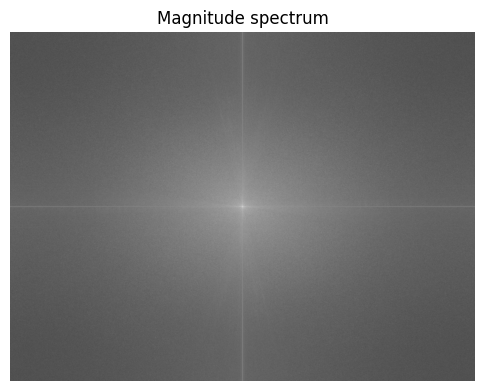

In [ ]:
#Computing FFT
gray_f=gray_np.astype(np.float32)
f = np.fft.fft2(gray_f)
fshift = np.fft.fftshift(f)

#Computing magnitude and phase
mag = np.abs(fshift)
phase = np.angle(fshift)

#Computing and displaying magnitude spectrum
mag_spec = 20*np.log(1+mag)
plt.figure(figsize=(6,6))
plt.title("Magnitude spectrum")
plt.imshow(mag_spec, cmap="gray")
plt.axis("Off")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

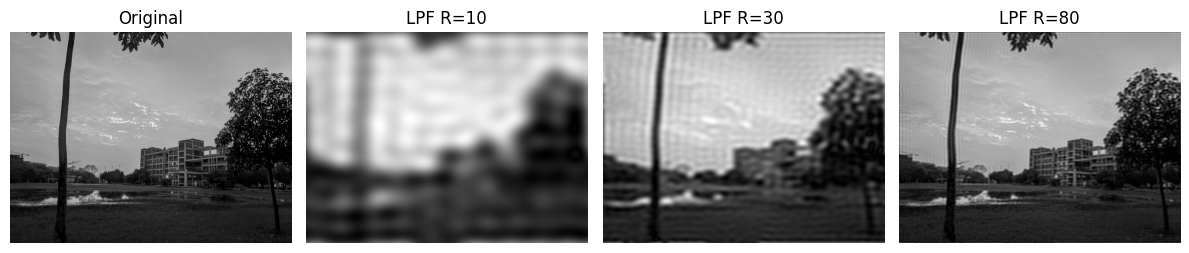

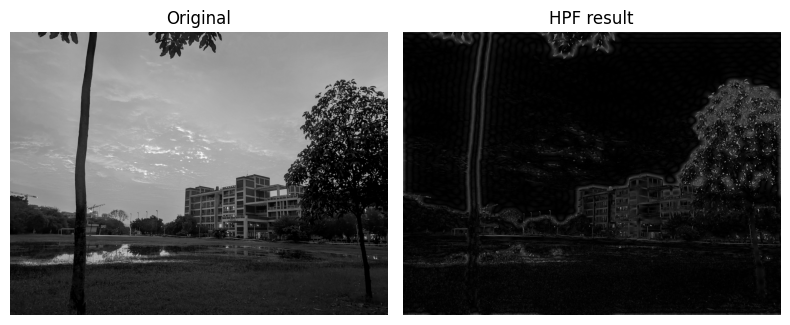

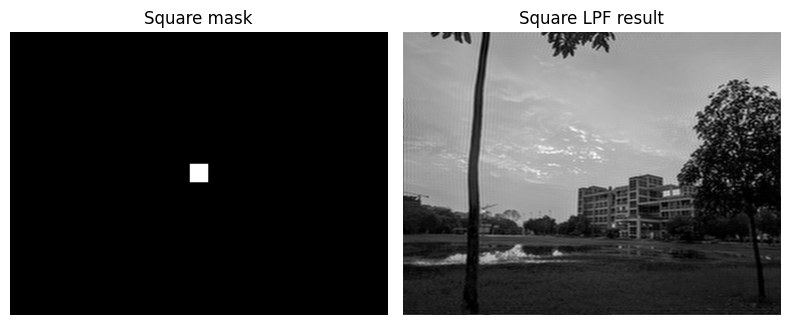

In [ ]:
#LPF Masks
rows,cols=gray_np.shape
crow, ccol = rows//2, cols//2
radii = [10, 30, 80]
lpf_results = []

for R in radii:
    mask_lpf = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow)**2 + (v - ccol)**2)
            if D <= R:
                mask_lpf[u, v] = 1.0
            else:
                mask_lpf[u, v] = 0.0

    f_lpf = fshift * mask_lpf

    ishift_lpf = np.fft.ifftshift(f_lpf)
    img_back_lpf = np.fft.ifft2(ishift_lpf)
    img_back_lpf = np.abs(img_back_lpf)

    lpf_results.append(img_back_lpf)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.imshow(gray_np, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, R in enumerate(radii):
    plt.subplot(1,4,i+2)
    plt.imshow(lpf_results[i], cmap='gray')
    plt.title(f'LPF R={R}')
    plt.axis('off')

plt.tight_layout()
plt.show()



#Creating and applying HPF
R_hpf = 30
mask_lpf_h = np.zeros((rows, cols), np.float32)
for u in range(rows):
    for v in range(cols):
        D = np.sqrt((u - crow)**2 + (v - ccol)**2)
        if D <= R_hpf:
            mask_lpf_h[u, v] = 1.0
        else:
            mask_lpf_h[u, v] = 0.0

mask_hpf = 1.0 - mask_lpf_h
f_hpf = fshift * mask_hpf

ishift_hpf = np.fft.ifftshift(f_hpf)
img_back_hpf = np.fft.ifft2(ishift_hpf)
img_back_hpf = np.abs(img_back_hpf)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray_np, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_back_hpf, cmap='gray')
plt.title('HPF result')
plt.axis('off')

plt.tight_layout()
plt.show()


#Square LPF
side = 200
half = side // 2
mask_square = np.zeros((rows, cols), np.float32)
mask_square[crow-half:crow+half, ccol-half:ccol+half] = 1.0

f_square = fshift * mask_square

ishift_sq = np.fft.ifftshift(f_square)
img_back_sq = np.fft.ifft2(ishift_sq)
img_back_sq = np.abs(img_back_sq)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(mask_square, cmap='gray')
plt.title('Square mask')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_back_sq, cmap='gray')
plt.title('Square LPF result')
plt.axis('off')

plt.tight_layout()
plt.show()


''' A smaller radius implies that fewer frequencies are preserved which inturn
results in more blur and vice versa for a bigger radius.'''

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

Text(0.5, 1.0, 'Phase-only reconstruction')

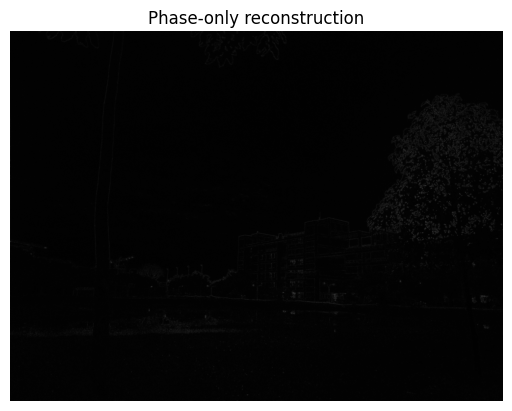

In [ ]:
#Phase only reconstruction
phase_only = fshift / np.abs(fshift)

ishift_p = np.fft.ifftshift(phase_only)
img_phase = np.fft.ifft2(ishift_p)
img_phase = np.abs(img_phase)

plt.imshow(img_phase, cmap='gray'); plt.axis('off')
plt.title('Phase-only reconstruction')

'''fshift keeps complex numbers with phase for IFFT, while
np.angle(fshift) gives only real angles, so we  turn them back into complex
number using np.exp(1j*angle).'''

Text(0.5, 1.0, 'Magnitude-only reconstruction')

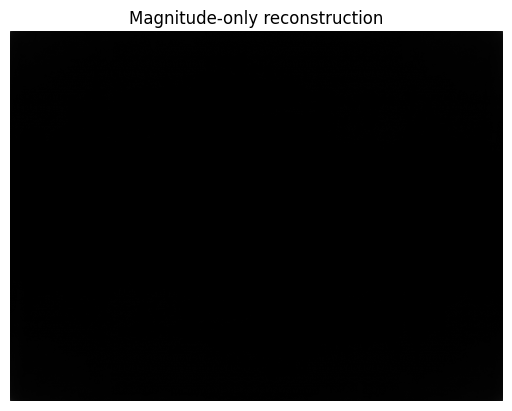

In [ ]:
#Magnitude only reconstruction
mag_only = np.abs(fshift)
mag_only_complex = mag_only * np.exp(1j * 0)

ishift_m = np.fft.ifftshift(mag_only_complex)
img_mag = np.fft.ifft2(ishift_m)
img_mag = np.abs(img_mag)

plt.imshow(img_mag, cmap='gray'); plt.axis('off')
plt.title('Magnitude-only reconstruction')

'''For display, we used np.log(1 + |F|) so that very big values dont hide the
small ones. For reconstruction,we use the original |F| (no log), because
taking log would change the real value of each frequency and break the image.
'''

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

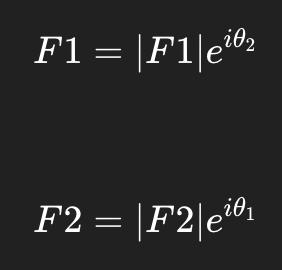

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

/9j/4QRdRXhpZgAASUkqAAgAAAANAAABBAABAAAAABAAAAEBBAABAAAAAAwAACgBAwABAAAAAgAAAA8BAgAJAAAAqgAAABABAgAeAAAAswAAADEBAgAVAAAA0QAAADIBAgAUAAAA5gAAABIBAwABAAAAAQAAABMCAwABAAAAAQAAAGmHBAABAAAACgEAACWIBAABAAAA0QMAABoBBQABAAAA+gAAABsBBQABAAAAAgEAAPcDAABtb3Rvcm9sYQBtb3Rvcm9sYSBlZGdlIDUwIG5lbyAodmllbm5hKQBIRFIrIDEuMC41NDAxMDQ3Njd6ZAAyMDI1OjEyOjEyIDEyOjU4OjU5AEgAAAABAAAASAAAAAEAAAArADSkAgAJAAAAFAMAADOkAgAJAAAAHQMAACeIAwABAAAAyQEAACKIAwABAAAAAgAAAGCkAwABAAAAAwAAAJ2CBQABAAAAJgMAAJqCBQABAAAALgMAABeiAwABAAAAAgAAAJKSAgAEAAAANzYwABKQAgAHAAAANgMAAJGSAgAEAAAANzYwABGQAgAHAAAAPQMAAJCSAgAEAAAANzYwABCQAgAHAAAARAMAAAykAwABAAAAAAAAAAqkAwABAAAAAAAAAAqSBQABAAAASwMAAAmSAwABAAAAEAAAAAmkAwABAAAAAAAAAAikAwABAAAAAAAAAAeSAwABAAAAAgAAAAakAwABAAAAAAAAAAaSBQABAAAAUwMAAAWgBAABAAAAswMAAAWkAwABAAAALwAAAAWSBQABAAAAWwMAAASQAgAUAAAAYwMAAASSCgABAAAAdwMAAASkBQABAAAAfwMAAAOgAwABAAAAAAwAAAOkAwABAAAAAAAAAAOQAgAUAAAAhwMAAAOSCgABAAAAmwMAAAKgAwABAAAAABAAAAKkAwABAAAAAAAAAAKSBQABAAAAowMAAAGRBwAEAAAAAQIDAAGgAwABAAAAAQAAAAGjBwABAAAAAQAAAAGk